In [ ]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

CSV_PATH = "updated_data.csv"
TRAIN_PATH = "train.csv"
TEST_PATH = "test.csv"

def generate_synthetic_policies(n=3400):
 # benefits = ["(A) Roads and Bridges (i) Construction and up-gradation of roads. (ii) Construction of bridges and culverts. (iii) Construction of Foot Suspension Bridges. (iv) Construction of retaining walls to protect the roads in hilly areas. (B) Health infrastructure: (i) Construction of houses for Government doctors, paramedics and other Government officials engaged in the health sector in border census villages/ habitations. (ii) Building infrastructure (SHC/PHC/CHC) including their up-gradation. (iii) Setting up of Government mobile dispensaries/ambulances. (iv) Purchase of medical equipment in Government Hospitals. (C) Education infrastructure: (i) Construction of houses for Government teachers and other government officials engaged in education sector. (ii) Construction of Primary/ Middle/ Secondary/ Higher secondary school buildings and their up-gradation/addition such as construction of additional classrooms, computer rooms and laboratories. (iii) Construction of hostels/ dormitories in Secondary/ Higher Secondary school. (D) Agriculture infrastructure (I) Construction of minor irrigation works. (ii) Water conservation programs. (E) Sports infrastructure: (I) Construction/ development of play fields. (ii) Construction of a mini stadium. (iii) Construction of indoor courts for table tennis/ badminton/ basketball / handball. (F) DWS projects: Drinking Water Supply projects in Government schools /census villages/ census towns. (G) Social Sector infrastructure (I) Construction of anganwadi center. (ii) Construction of a community center. (H) Development of Model villages — the State / UT Government may undertake multiple infrastructure    development works/projects in a village on a hub and spoke model. (I) Construction of infrastructure for Small Scale Industries. (J) Maintenance of assets created under BADS. (K) Administrative Expenditure. ﻿ The estimates of each work/project proposed under BADS should be checked and approved by the Competent Technical Authority in the State/UT and an 'Abstract of Cost' of each work/project, duly signed by appropriate technical authority should be furnished by the State/UT Government along with the APP.","(For availing of the benefit under this scheme the victim has to reside in Goa) ﻿ Financial Assistance The beneficiary (excluding victims housed in Protective Home) will be provided with a stipend of ₹ 2,500/- per month for a period of three months or till she joins a livelihood programme, whichever is earlier. ﻿ Technical/Vocational Training Based on their literacy, skills, interest, etc, the Mentor/Probation Officer will help the beneficiary to join a technical/vocational training programme of the Government or Non-Government institutes, emphasizing on the training programmes which has opportunities for jobs or setting up their own enterprise, such as, repair of the home appliances, mobile repair, beauty treatment, tailoring, bakery, catering, etc. The fees, travel and other miscellaneous expenses will be covered. ﻿ Education The beneficiary, if she is interested in pursuing her education, will be supported for her education till 12th Standard. All the expenses related to her education, boarding, travel, fees, books, toiletries, etc., may be paid. ﻿ Shelter If in need of shelter, she shall be admitted to a shelter home/protective home being managed by a non-Government organization or Government organization or organization receiving grants from the State/Central Government. ﻿ Psycho-Social Services A victim of commercial sexual exploitation will be provided counselling by Probation Officer or by a person appointed as “Mentor” or by a professional counsellor or psychiatrist working in a Government or non-Government organization. Expenses incurred for fees, travel, medicine, etc., will be covered. ﻿ Health The victim shall be provided health services for all kinds of ailments at the Government hospital. Victims suffering from HIV or Tuberculosis will be connected to ART and DOTS schemes. In cases where the victim is suffering from AIDS and requires institutional care, she shall be admitted to one of the care centres meant for people with HIV/AIDS, for a period of six months. ﻿ Children The children of the trafficked victim shall be provided counselling and assistance for admission in the school by the Probation Officer or by a person appointed as a “Mentor”. All the expenses related to the education of the children, such as boarding, travel, fees, books, toiletries, etc., up to 12th Standard shall be covered. ﻿ Reintegration The Probation Officer or “Mentor” shall help the victim in reintegrating with her family and community by providing counselling to the family members and if necessary to the members of the community. ﻿ Protection The Probation Officer or “Mentor” shall take the assistance of the family members, community members, religious leader, local police and Integrated Anti-human Trafficking Unit of Goa police in ensuring that the victim is not harassed by the traffickers. The Probation Officer or Mentor may also make a written complaint to the Chairperson of the Goa State Commission for Women, for victims' protection and the Commission shall take necessary action to protect the victim. ﻿ Livelihood (a) The Probation Officer or “Mentor” shall assist her in finding a job, based on her interests and skills. In case the victim is unable to get a job or is not interested in a job, then the Probation Officer or “Mentor” based on the interest, skill and viability of a business shall help her in setting up a business enterprise. ﻿ Livelihood (b) Those victims who have successfully completed the vocational training may be provided all the support by the Probation Officer/Mentor for preparation of project reports, availing loan from financial institutions etc. The Department may provide such financial assistance to the victim for setting up business enterprises as may be decided by the Government from time to time.","(a) Food for Temporary Stay in Different Camps In Quarantine Camp refugees are provided cooked food @ ₹ 45/- per day per adult, and @ ₹ 30/- per day per child. Refugees in Special Camps are provided cooked food @ ₹ 70/- per day per adult. Clothing material is also provided. ﻿ (b) Rice at a Subsidized Rate: Family Members: 01 Adults; Age: Above 8 years; Quantity of Rice: 400 grams daily Family Members: 02 Children; Age: Below 8 years; Quantity of Rice: 200 grams daily ﻿ (c) Free Clothing Materials Gender: Male; Category: Adult; Items: Dhoti (2); Vests (2) Gender: Male; Category: Child; Items: Half Trousers (2); Inner Garments (Vests) (1); Half Sleeve Shirt (1) Gender: Female; Category: Adult; Items: Sari (2); Blouse (2); Skirt (1) Gender: Female; Category: Child; Items: Skirt (1); Blouse (1); Frock/Gown (1) Category: Every Family; Items: Towels (2) Category: Every Adult; Items: Mat (1) Category: Every Adult (Once in 2 years); Items: Blanket (1) ﻿ NOTE: The above-listed materials are provided every year to all the refugees/refugee families in the camps free of cost except the blankets which are given once in two years. ﻿ (d) Aluminum Utensils Rice boiling utensils (5 ltr. Capacity ): 1 Sambar, Curry Utensils (2 ltr. Capacity): 1 Large spoon: 2; Dining Plates: 2; Tumblers: 2 ﻿ (e) Transportation Charges (on arrival) as per Approved Rates. ﻿ (f) Porterage & Transport (on repatriation) as per Approved Rates. ﻿ (g) Medical Assistance Refugees are given health check-ups & assistance upon arrival in Transit Camp. Medical assistance is rendered by Primary Health Centres/Government Hospitals (in Refugee Camps by the Government of Tamil Nadu). After an appropriate medical check-up, preventive medicine like inoculation for measles is administered, free of cost. ﻿ (h) Cash Dole Assistance to Sri Lankan Refugees in Camps Family Members: Head of the Family; Cash doles at Present (₹): 400.00 Family Members: Other Adults; Cash doles at Present (₹): 288.00 Family Members: First Child; Cash doles at Present (₹): 180.00 Family Members: Other Children; Cash doles at Present (₹): 90.00 ﻿ (i) Infrastructure Facilities at the Camps including Internal Roads, Electricity and Drinking Water. Temporary huts were constructed and remodelled to the size of 10x10 sq feet with the provision of basic amenities. ﻿ (j) Vehicles and Petrol Four vehicles have been approved by MHA from time to time. Expenditure on petrol for these vehicles is also reimbursed by MHA. ﻿ (k) Exit Permits The refugees, who are willing to go back to Sri Lanka or to any other country of their choice at their own cost, are issued with "Exit Permits" by the respective District Collectors. ﻿ (l) Cooked Food While the refugees are in the quarantine camps under the supervision of the police department, cooked food is provided to the refugees every day (three times) at the rate of Rs 45/- per adult per day and Rs 30/- per child per day. ﻿ (m) Security Multi-Colour Identity Cards are issued to every refugee above the age of 12 years to ensure their welfare and security. ﻿ (n) Pregnancy Care Pregnant Sri Lankan Tamil women are given Rs.1,000/- per month during the eighth, ninth and tenth months of pregnancy and for the first three months after the delivery, totalling Rs. 6,000/- under Dr Muthulakshmi Reddy Maternity Financial Assistance Scheme of the Government of Tamil Nadu. When the Sri Lankan Tamil refugee women are pregnant, they are administered tetanus injections by the nurses from the concerned Primary Health Centers (PHCs), after appropriate medical check-ups. Required medical counselling is provided to pregnant women every month, after appropriate medical check-ups. Pregnant women are provided with required vitamin tablets, milk, fruits and bread under the Integrated Child Development Scheme (ICDS). Pregnant mothers can be admitted to the nearby PHC or hospital, free of cost, for child delivery. Following child delivery, the child’s birth certificate can be obtained through the hospital. Following the birth of a child, the details are furnished to the Village Administrative Officer and Special Revenue Inspector to record the same in the family card through which they can receive the cash doles immediately. Following the birth of a child, the nurses of the PHCs should continue to monitor the growth of the child and the mother’s health. The required nutritious food, vitamin tablets, milk, and fruits are given free of cost under the ICDS. Timely administration of polio drops, free of cost, to children is provided. ﻿ (o) Education The refugee students studying upto 12th class in Government and Government-Aided schools are given free education, free notebooks, textbooks, free uniforms, free noon meals and a free bus pass to commute from the camp to the school. Students studying 11th class are given free bicycles. ﻿ (p) Employment With a view to facilitating the refugees to earn their livelihood, they are permitted to leave the camps between 6.00 a.m. and 6.00 p.m. in search of jobs commensurate with their skills /qualifications (subject to the laws in force in this regard). ﻿","(a) For students newly admitted to the first year of the Diploma program: ₹600/- per month. (b) For students admitted to the second year through lateral entry: ₹600/- per month.","(payable to the foster families on the basis of the assessment of the Child Care Coordinator) ﻿ Foster Care Allowance ₹ 2,500/- per month. (The children who are Beneficiaries of the Dayanand Social Security Scheme shall not be eligible for Foster Care Allowances) ﻿ Maintenance Allowance Age Group: 0 to 6 years; Amount: ₹ 1,500/- per month Age Group: 6 to 14 years; Amount: ₹ 2,000/- per month Age Group: 14 to 18 years; Amount: ₹ 2,500/- per month","(subject to actuals): Admission and tuition fee (both Hosteller & Day Scholar): For Class 11th & 12th: Rs. 7,000/- per annum For technical and vocational courses of level of Class 11th & 12th (more than 1 year in duration): Rs. 10,000/- per annum For UG & PG level: Rs. 3,000/- per annum Maintenance Allowance: For Class 11th and Class 12th including Tech. & Voca. Course: Rs. 380/- pm for Hosteller; Rs. 230/- pm for Day Scholar. For Courses other than technical and vocational  courses at UG & PG level:  Rs. 570/- pm for Hosteller & Rs. 300/- pm for Day Scholar. For M.Phil & Ph.D.: Rs. 1,200/- pm for Hosteller & Rs. 550/-pm for Day Scholar.","1 . The class-wise amount given under the scheme is as follows: Sl. No. Category Name Amount to be paid 1 Elementary Education (1st to 8th grade) ₹8000/- per annum 2 Secondary Education (9th to 12th Class)/ITI Course ₹10,000/- per annum 3 Higher education (first year to final year of bachelor's degree) ₹15,000/- per annum 4 Postgraduate (from first year to final year of Master's degree) ₹20,000/- per annum ﻿ 2. The children of the workers with outstanding performance in the Class 10th examinations would also be encouraged and a one-time incentive would be given according to their obtained marks as under: Sl. No. Percentage of Marks Obtained in Class 10th Examination One-time Incentive 1 90% or More ₹51,000/- 2 80% to 89% ₹41,000/- 3 70% to 79% ₹31,000/- 4 60% to 69% ₹21,000/- ﻿ 3. All the educational expenditure on account of study in engineering in private & government institutions, medical and technical education, management, and other professional courses would also be borne by the Board. 4. The hostel expenditure up to a maximum ₹1,20,000/- would be borne by the Board.","1)	Accessible and affordable justice 2)	Conflict resolution 3)	Reconciliation 4)	Awareness Generation ﻿","1)	Back ended financial subsidies for Farmers to adopt climate resilient agricultural initiatives in their farms 2)	Financial assistance available for protected cultivation techniques such as Poly House, Poly Tunnels, etc. 3)	Subsidy also available for on farm water conservation activities such as Drip, Sprinklers, Farm Pond, Farm Pond linings, etc. 4)	Climate Resilient seed production also covered 5)	Special assistance for Farmer Producing Organizations/companies and Self Help Groups 6)	Disbursement through Aadhaar enabled payment system 7)	Privilege given to women, person with disabilities and landless labourers ﻿","1)	Financial assistance: The scholarship provides financial assistance to Scheduled Tribe (ST) students to pursue post-matriculation studies. It covers the expenses of tuition fees, maintenance fees, and other incidental expenses. 2)	Encourages education: The scholarship aims to encourage ST students to continue their education beyond the matriculation level and pursue higher studies. 3)	Increased literacy rate: The scheme is designed to increase the literacy rate among the ST communities, which traditionally have a lower literacy rate compared to other communities. 4)	Empowerment: By providing financial support, the scholarship aims to empower ST students and enable them to become self-reliant and independent. 5)	Reduction of dropouts: The scholarship aims to reduce the number of dropouts among ST students, which is a significant problem faced by this community due to economic constraints. 6)	Social upliftment: The scheme helps in the social upliftment of the ST communities by providing them with better access to education and opportunities. 7)	Improved employment opportunities: Education is a key factor in improving employment opportunities, and the scholarship aims to equip ST students with the necessary skills and knowledge to pursue successful careers. 8)	Inclusive growth: The scholarship scheme is a part of the government's larger agenda of promoting inclusive growth and development, where every section of society has equal access to opportunities and resources. ﻿","1)	If the trainee is not living at headquarters during the training period, the institution should pay Rs.300/-  for Driver and Rs.150/- for the Conductor trainee as a stipend. ﻿","1)	SPARK (Support for Prototype and Research Kickstart) Grant: iDEX provides grants up to Rs. 1.50 Cr (up to Rs. 10 Cr in case of iDEX Prime) to the start-ups/MSMEs to fund the projects in many technological areas under Defence India Start-up Challenges (DISC) and Open Challenge through the Support for Prototype and Research Kick start (SPARK Framework) ﻿ 2)	Partner Incubators Support to iDEX winners:- (a)   Partner Incubator will provide mentorship to startups/MSMEs selected by iDEX-DIO. (b) Partner Incubator will run programs like accelerators, incubation, etc. to strengthen selected startups/MSMEs beneficial for the India defence sector. (c)  Partner Incubator will undertake initiatives to reach out, spread awareness and promote innovations for defence among students/ researchers at all levels in academia ﻿ 3)	The major benefits from iDEX Scheme to Indian Defence Innovation Ecosystem are:- (a) Facilitate rapid development of new, indigenized, and innovative technologies for the Indian defence and aerospace sector, to meet needs for these sectors in shorter timelines (b) Create a culture of engagement with innovative startups, to encourage co-creation for defence and aerospace sectors (c) Empower a culture of technology co-creation and co-innovation within the defence and aerospace sectors. ﻿","1)	The Assam govt. run this Scheme for those women who belong to the low-income groups of society to support them financially. ﻿ 2)	Orunodoi Scheme is also known as Arunodoi Scheme, in which the government makes this plan of action especially to support household women and having low income, so the government provides those families “Substantial Earnings Assistance”. ﻿ 3)	Each Beneficiary will get 1000 Rupees per month on the very first date of Every Month. The Assam Orunodoi 2.0 Scheme covers the Expenses for Medicines for taking care of Health needs which is 400 rupees per family, Rs. 200 per family given to provide a 50% subsidy for the 4 Kgs of Pulses of a Family, 80 rupees are given as the 50% Subsidy for 4 Kgs Sugar, 150 rupees are given for the Fruits & Vegetables and   Rs. 170 are given for the Essential needs. And this amount is Consolidated to Rs. 1000 per month for a family. ﻿ 4)	Orunodoi Scheme 2.0 will provide financial assistance of Rs. 1000 per month through Direct Benefit Transfer. ﻿","1)	The State Government has decided to provide a subvention of interest @3.5 % and after applying this interest subvention, the employees would get housing loans upto ₹ 15.00 lakh@ 5.0% (for women) and @ 5.05 %(for men) ﻿ 2)	On the basis of the SBI Proposal, the state government has decided to provide a loan repayment schedule to the State Government employees with pensionable service beyond the age of retirement up to 70  yrs of age. ﻿ 3)	The SBI will take responsibility to deduct the housing loan beyond the age of retirement up to 70 years as such the pension accounts are with SBI. For the convenience and interest of employees, the deduction of EMIs will be adjusted in such a way to be on the higher side during the service period and it will be on the lower side after their retirement period. ﻿ 4)	There will be no need for a mortgage of property for a loan amount up to ₹ 10.00 lakh. However, the SBI has referred this matter to their corporate center to increase the margin up to ₹ 15.00 lakhs. ﻿ 5)	The SBI team will ensure that the employees get hassle-free service and that concerned departments get a single dedicated window at the bank level for all dealings related to the scheme. ﻿ 6)	The house/flat purchased /constructed with the Bank’s finance would be insured comprehensively for risk of fire/riots/earthquake/lightning/floods. etc by the employees. ﻿ 7)	Check-off facility will be given by the Drawing and Disbursing Officer of the concerned employees for recovery of interest and principal from the salary of the employee. ﻿ 8)	The reduced rate of Interest on Housing loans with State government subvention will be applicable up    to 240 EMI i.e up to 20 years of EMI deduction ﻿","1)	To provide a grant for the purchase of SmartPhone 2)	Promoting the youth towards digitalization 3)	Beneficiaries Undergraduates studying in government colleges or institutes 4)	Major Benefit Bestowing and amount of ₹5,000 / – (Rupees five thousand) to the undergraduates 5)	Eligible are Students of under graduate (UG) courses ﻿","1)	When prices of commodities fall below the MSP, State and central notified procurement nodal agencies purchase commodities directly from the farmers at MSP, Under specified FAQ ( fair Average Quality). ﻿ 2)	In this way prices of the main commodities are procured and protect the farmers against the economic loss in farming. ﻿ 3)	Price supports cause larger production and smaller consumption (since consumers will buy less of any good as its price rises), resulting in overproduction at the support price. ﻿","1)  UGC will award 10,000 (ten thousand) fresh scholarships per year. 2)  ₹5,400/- per month for general degree courses and ₹7,800/- per month for technical/medical/professional/paramedical courses. 3)  The scholar would be awarded from the date of joining the course as certified by the University/Institution/ College. 4)  Scholarship (as certified by the institutions identified under this scheme) will be paid to the selected students by the UGC through DBT (Direct Benefit Transfer) Mode and will be transferred to the Bank account of the beneficiaries. This procedure will be completed through the PFMS. ﻿","1) Eligible Farmers families as per PM KISAN will be Benefited Rs. 2000/- per Instalment. 2) The beneficiaries benefited in PM KISAN will get the benefit of NSMNY. 3) The NSMNY beneficiaries will be benefited from the list provided by GoI. 4) First instalment of NSMNY is given as per the list of 14th instalment of PMKISAN. 5) Eligible farmers family will get Rs. 2000/- from PMKISAN & NSMNY at each instalment. 6) Eligible farmers will get Rs. 12,000/- in a year from both PM KISAN & NSMNY schems. 7) Farmers will be benefited through DBT. 8) The benefit of the NSMNY will be credited only in Aadhar linked bank accounts. 9) The benefit credited to the ineligibles in NSMNY will be recovered as per the SoP of PMKISAN ﻿","1) Financial Assistance is given to farmers. ﻿ 2)The subsidy payable to an individual farmer minimum Rs.14433/- and maximum Rs.75000/- depending on the size of the farmpond. ﻿","1)Emergency assistance 2)Non-emergency assistance 3)Information about government schemes and services 4) Referral services","1.	 Full financial assistance will be provided to the selected Fellows which includes the following:- a) Round trip international airfare by lowest economy class and by the shortest route from the international airport in the home country of the applicant to the international airport nearest to the host institution in India; visa fees, overseas medical insurance, etc. b)	 A consolidated Fellowship amount of Indian Rupees (INR) 60,000/- per month. c)	One-time grant of INR 40,000/- as research contingency expenses, airport transfers, domestic travel for attending scientific /events, and field trips within India. d) Institutional overhead charges @ INR 2,500/- per month. e)	The allowance as in (a), (b) & (c) will be released to the host institution in India for disbursement to the Fellow. The host Institution will arrange appropriate accommodation for the Fellow on a payment basis. 2.	The selected Fellow is advised to take an appropriate policy for health insurance coverage for the period of stay in India. The cost of obtaining an overseas insurance policy is covered and reimbursable under AISTDF. 3.	 Individual Fellow, or his/ her government/institution, is required to bear the following costs: a) All expenses in the home country incidental to travel abroad, including expenditure incurred to obtain passport and visa and for medical examinations and vaccinations as may be required as well as other miscellaneous expenses such as internal travel to/ from the international airport of departure in the home country. b)	Salary and other related allowances in the home country, if applicable, during the Fellowship period. 4.	Neither the AISTDF nor the host institution in India will assume any responsibility whatsoever for the following expenditure of the Fellows during the tenure of the Fellowship: a) Compensation in the event of death, disability, or loss of personal belongings or compensation for damage caused by climatic or other conditions. b)	Travel and other costs incurred by the dependents, who might accompany the Fellows.","1.	A grant of ₹8000/- is given to the registered construction workers to buy new and suitable tool kits. 2.	The grant facility is available once in three years.","1.	A monthly pension of ₹10,000/- will be given to the eligible beneficiary by the state government of Haryana.","1.	A monthly pension of ₹10,000/- will be given to the eligible media persons. Note: In case of the demise of the beneficiary media person, the monthly pension will continue to be given to his/her spouse (wife or husband, as the case may be), in case he/she is not getting any salary/wages/pension/any other regular financial assistance from any organization or the State Government.","1.	Broad Sector-wise indicative categories of projects for which grant-in-aid will be considered are as follows: Sectors Category of Projects Education 1. Running and maintenance of Non-Residential Schools/ Residential Schools /Hostels. Education 2. Sponsoring tribal girls from the North Eastern States viz. Assam, Meghalaya, Mizoram, Manipur, Nagaland, Tripura, Arunachal Pradesh, Sikkim, and from Andaman & Nicobar Islands and Lakshadweep for study in reputed educational institutions. Health 3. Running/maintenance of hospitals/dispensaries with 10 or more beds. Health 4. Mobile Dispensary Livelihood 5. Enhancement of livelihood and income generation opportunities through infrastructure support and capacity building in sectors like agriculture, fishery, dairy and animal husbandry, water conservation, and organic/natural farming. 2.	In addition to the above, during natural calamities, disasters, or pandemic, the Ministry of Tribal Affairs may provide emergency health services including the provision of food and water through NGOs in the affected area for which norms may be decided in consultation with IFD with approval of Minister, Ministry Tribal Affairs. 3. Priority will be given to programmes/projects that benefit Particularly Vulnerable Tribal Groups (PVTGs), LWE-affected districts, and tribal populations in remote or difficult areas. 4. Under the scheme, grants are given to Organizations as per norms fixed for different projects given in Annexure-1 , subject to the ceilings for recurring and non-recurring grants.","1.	Category I - Children below 5 years and between 1st to 5th standard: ₹300/- per month 2.	Category II - Between 6th to 10th standard: ₹500/- per month 3.	Category III - Plus one (11th Standard) & Plus two (12th Standard): ₹750/- per month 4.	Category IV - Degree and above: ₹1000/- per month","1.	Entitlement in the scheme shall be limited to an amount of ₹5 lakhs per applicant unit to be availed as one-time assistance only. 2.	Assistance/Relief Available from Government: a) Restructuring of existing loan account: If the bank is willing to restructure the existing loan account and extend additional term loan/working capital loan based on the Revival Project recommendations of the Expert Committee, the unit is eligible for the following one-time Assistance. These assistances are also eligible for self-financed units availing term loan/working capital loan as part of the Revival Package recommended by the Expert Committee. Margin Money Grant: 50% of the margin insisted by the bank/Financial Institution towards additional working capital loan and term loan, will be payable as Grant Assistance limited to ₹2 lakhs. Interest Subvention Assistance: To provide financial assistance in the form of interest subvention on a reimbursement basis for the additional term loan and additional working capital loan availed by the units based on the Revival Project Report recommended by the expert committee. The interest subvention is 6% per annum subject to a maximum amount of ₹1 lakh. The interest subvention is limited to one (first) year on the loan sanctioned by the financial institution/bank. b) Restart Expenses: The following one-time assistance shall be payable as restart expenses based on the Revival Project recommendations of the Expert Committee. In cases where no term loan is availed for the purchase of brand new additional/balancing plant & machinery, 50% of the cost of Additional/Balancing Plant and Machinery limited to ₹1.50 lakhs will be payable as one-time assistance. 50% of the cost incurred for the inevitable repair and maintenance of the existing Plant and Machinery and Building limited to ₹1.00 lakh will be reimbursed. c) Clearance of Statutory Dues: If there are statutory dues existing for the unit related to the agencies like KSEB, GST/Commercial Tax, Excise, Pollution Control Board, etc. 50% of the dues limited to ₹40,000 shall be payable as one-time assistance based on the Revival Project recommendations of the Expert Committee. d) Cost of Revival Project Report: Cost of preparation of RPR will be reimbursed @100%, ₹10,000/- per unit. The maximum assistance admissible for each unit, all reliefs and assistances put together, under the scheme will be limited to ₹5 Lakhs.","1.	Entitlement in the scheme shall be limited to ₹15 Lakhs per applicant unit and it can avail only once. 2.	Financial Assistance under the scheme provided for the following components- a)	Building Renovation - 25% of the total revival project cost limited to ₹2 lakh: i)	Building Renovation includes maintenance and repair of existing factory buildings, construction of fresh roofing in the factory shed, infrastructure for Waste Disposal / Treatment facilities etc. b)	Plant & Machinery and Electrification - 40% of the total revival project cot limited to ₹8 lakh: i)	It will be available for the purchase of new machinery, Repair and Maintenance of Existing machines, industrial electrification etc. c)	Working Capital (Margin) - 50% margin of working Capital loan approved by financial institution subject to i)	Assistance is limited to ₹2 lakhs for defunct MSMEs. ii)	Assistance is limited to ₹5 lakhs for Cashew Units. d)	Maximum Limit ₹12 lakhs for defunct MSMEs per unit. e)	Maximum Limit ₹15 lakhs for defunct cashew processing per unit. Note 01: Bank Sanction of fresh working capital loan is mandatory for availing Working Capital (Margin) Assistance, but a bank loan is not mandatory for assistance for building renovation, plant and machinery, electrification etc. Note 02: The assistance under the scheme shall be released to the eligible entrepreneur by the bank on a pro-rata basis.","1.	Fees: Fees shall be payable in two installments as follows: Instalment-I: An amount of ₹10.00 Lakhs shall be payable to the Institution/students upon production of the landing permit /I-94 card (Immigration Card)/VISA Stamping/Boarding pass. Instalment-II: An amount of ₹10.00 Lakhs shall be payable to the Institution/students upon production of the 1st Semester results. 2. Sanction Proceedings specifying the amount of ₹20.00 Lakhs will be issued to the individual towards fees and living expenses by way of a grant subject to his/her joining into the Course to the Candidates selected by the Selection Committee. The sanction proceedings can be used by the Candidates to obtain a Visa from the respective Embassy. 3. The Student shall be eligible for an educational loan of ₹10.00 lakhs from any Nationalized bank at prevailing rates of interest. 4. The awardees are permitted to supplement their prescribed allowances by undertaking Research/Teaching Assistance ship. 5. One-way cheap ticket (Lower fare) by economy class through the shortest route shall be payable upon production of valid visa and admission particulars. 6. The total visa fees shall be reimbursed to the student upon production of a valid visa and production of receipts.","1.	Fees: Fees shall be payable in two installments as follows: •	Instalment-I: An amount of ₹10.00 Lakhs or the actual fee (whichever is less) shall be payable to the Students upon production of the landing permit/1-94 Card (Immigration Card); •	Instalment-II: An amount of ₹10.00 Lakhs of the actual fee (whichever is less) shall be payable to the Students upon production of the 1st Semester Results. 2. The assistance amount will be sanctioned to the individual towards fees and living expenses by way of a grant subject to his / her joining the course, which shall be issued to the candidates selected by the Selection Committee. The sanction proceedings can be made use of by the candidates for obtaining a Visa from the respective Embassy. 3. The student shall be eligible for an educational loan from any Nationalized Bank at prevailing rates of interest. 4. The awardees are permitted to supplement their prescribed allowances by undertaking a Research/Teaching Assistantship. 5. One-way ticket fare shall be paid to the selected candidates.","1.	Financial assistance of Rs. 750 per month is provided to each leprosy patient. 2.	Free medical treatment and medicines are provided to the beneficiaries. 3.	The scheme also provides assistance for the education of the children of leprosy patients. 4.	Counseling and rehabilitation services are provided to leprosy patients. ﻿","1.	Hostel maintenance allowance for students with annual income less than 8,00,000: Rs.3000 per year for Mumbai, Pune, Nagpur, and Aurangabad and Rs.2000 per year for other locations. (for 10 months in an academic year). 2.	Hostel maintenance allowance for students whose parents are Aplabhudharak shetkari/Registered Labourers: Rs.30,000 per year for Mumbai, Pune, Nagpur, and Aurangabad and Rs.20,000 per year for other locations(for 10 months in an academic year). ﻿","1.	In the event of the natural death of the member, Sum assured of ₹60,000/- will become payable to the nominee. 2.	In the event of death by accident or Partial/Total Permanent Disability due to accident, the following benefit shall be payable: On death due to accident: ₹1,50,000/- Permanent total disability due to accident: ₹1,50,000/- Permanent partial disability due to accident: ₹75,000/- Educational Benefits: An educational grant of ₹600/- per child per half year for two children studying from Class IX to Class XII for a maximum of 4 years under the Shiksha Sahayog Yojana (SSY). Premium: The total annual premium ₹470/- per member, will be shared as follows: Government of India Contribution: ₹290/- Workers/Weavers Contribution: ₹80/- Contribution from Social Security Fund: ₹100/-","1.	Issuing identity cards to each folk artiste. 2.	Under the scheme, the veteran and distressed folk-artistes who are above 60 years of age will get a monthly pension of ₹1000/-. 3.	The enlisted folk artists under the age of 60 years, who are engaged in publicity campaigns in different departments, have been receiving ₹1000/- per month as a retainer fee. 4.	The state government will arrange the minimum income for folk artists by engaging them in the public campaign programme on development projects such as Kannyasree, Yubasree, Sikshasree, etc. and programmes like Nirmal Bangla, Sarbo Sikhsa Avijan, etc. 5.	Performance Fees: Performance-based fees @₹1000/- per head per day as and when engaged to perform their own genre mostly at any Government programme like fair/festival/Krishi Mela/Sabala Mela, etc.","1.	Monthly Financial Assistance for all the poor Purohits and poor priests of other communities like Christians, Jains, Buddhists & Parsis of ₹1,000/- per month. 2.	A grant of ₹1,20,000/- will be provided to each poor Purohit/poor priest of other communities like Christians/ Jains/ Buddhists / Parsis for the construction of a dwelling house.","1.	No budget limit is prescribed for this type of project. 2.	The research grant covers equipment, consumables, contingency and travel apart from overhead grants.","1.	Practical Exposure: Students gain practical experience by visiting the Assam Legislative Assembly and witnessing the legislative sessions, debates, and bill discussions. 2.	Interaction: Students have the opportunity to interact with dignitaries such as the Hon'ble Speaker, Chief Minister, Ministers, MLAs, and senior officials. 3.	Understanding of Governance: The scheme helps students understand the functioning of the State Legislative Assembly and the legislative process. ﻿","1.	Self-Employment: The scheme provides avenues for self-employment to the educated unemployed youth in Assam. 2.	Institutional Credit: Youth can access institutional credit from nationalized banks, financial institutions, or organizations for their entrepreneurial ventures. 3.	Diversified Sectors: The scheme covers a wide range of sectors, offering employment opportunities in agriculture, horticulture, fisheries, handloom, textiles, poultry farming, and more. 4.	Financial Support: The state government provides financial support to the implementing agency for training, skill upgradation, technology, market promotion, infrastructure support, and management of economic infrastructure. 5.	Margin Money/Subsidy: The government provides margin money/subsidy on a 50% basis of the project cost against the sanctioned loan, with a maximum subsidy of Rs. 1.60 lakhs for a joint liability group of a minimum of four members. ﻿","1.	Subsidy will be given 75% of the total unit cost (maximum ₹27000/-) to the beneficiary for the establishment of 100 Broiler birds' Unit. 2.	The subsidy amount is directly credited into the bank account of the beneficiary. 3.	The birds will be given vaccination regularly.","1.	The Scholarship under the scheme is ₹12,400/- per month per student. 2.	An annual contingency of ₹5,000/- will be given to the eligible student. Note 01: If a student scores below 60% in any semester he/she shall be paid a scholarship @ ₹1,550/- in that particular semester, if the student re-appear for the same semester and scores above 60 %, he will be entitled to get regular scholarship i.e. @ ₹12,400/- p.m. for that semester in which student reappeared. But thereafter after he is eligible for the full scholarship amount, in the next semesters. Note 02: The contingency grant sanctioned will be reimbursed to the scholar on the actual expenditure incurred by him/her on the admissible items within the limit. The books and non-consumable items purchased or acquired, out of the contingency grant, will be the property of the concerned university or the institution and the scholars have to return the same at the end of the programme i.e. post graduate and research work to the concerned institution. Note 03: No house rent is admissible to M.E./M.Tech./M.Pharm. students. Note 04: The scholar shall not undertake any paid assignment (emoluments/salary/stipend) during the tenure of the scholarship. Note 05: It will be obligatory on the part of every post graduate student to undertake 8 to 10 hours (per week) of work related to teaching and research activities as assigned to him/her by the institute. This includes tutorials, laboratory classes, development and maintenance of laboratories, assistance in research and activities undertaken by faculty members, maintenance and operation of computer and other central facilities, assistance in library, etc. Note 06: Scholarship shall be terminated immediately if the scholar has failed in any semester. It will be the responsibility of the University to take action in this matter.","1.	The beneficiary will be given 25 R.I.R birds unit along with poultry feed. 2.	The Subsidy will be given 75% of the unit cost of the scheme (maximum ₹4500/- in the form of birds and poultry feed). 3.	Under the scheme, the birds will be given vaccination regularly.","1.	The beneficiary will be given 40 R.I.R birds unit along with poultry feed. 2.	The subsidy will be given 90% of the unit cost of the scheme (maximum ₹7200/- in the form of birds and poultry feed). 3.	Under the scheme, the birds will be given vaccination regularly.","1.	The beneficiary will get financial assistance for the purchase of agricultural equipment/components such as Power Tillers, Rice Transplanter, Self-Propelled Machinery, Tractor/ Power Tiller operated Implements /tools, Electric Motor operated, etc. 2.	Under the scheme, more financial assistance will be given to the Small/Marginal/Women Farmers compared to other farmers.","1.	The beneficiary will get financial assistance for the purchase of agricultural equipment/components such as Power Tillers, Rice Transplanter, Self-Propelled Machinery, Tractor/Power Tiller operated Implements /tools, Electric Motor operated, etc.","1.	The eligible beneficiaries will receive financial assistance of Rs. 3,000 per month under the scheme. 2.	Financial assistance will be provided to mitigate the hardships faced during prolonged treatment. ﻿","1.	The eligible sportsperson will get ₹3,000/- per month as a pension. Pension to Surviving Spouse of a Deceased Pensioner: Pension in favour of the surviving spouse of a deceased pensioner shall be sanctioned on a priority on receipt of application duly supported by death certificate, legal heir certificate, etc. The process of applying will be the same. Mode of payment: The pension will be drawn from the Treasury & credited to the beneficiary's bank account every month (or upon such interval as decided by the Sports & Youth Services Department from time to time) through e-Transfer.","1.	The financial assistance is given to farmers for the purchase of tractors as below: a)	Upto 40 PTO HP Model Tractors: 25% of expense or ₹45,000/-, whichever is less. b)	Above 40 PTO HP and up to 60 PTO HP Model Tractors: 25% of expense or ₹60,000/-, whichever is less.","1.	The grant of ₹12000/- per year will be provided to law graduates who enrolled before the Bar Council. 2.	The grant will be provided for 3 consecutive years.","1.	The incentive of ₹3,000/- will be given to owners of a female calf born through Artificial Insemination by pure breeding in indigenous cows. 2.	The incentive/assistance shall be given once per year for one calf per beneficiary.","1.	The maximum grant that can be availed by a beneficiary under the scheme is ₹25,000/-. Note 01: The financial assistance will be transferred to the beneficiary account through the online fund transfer system. Note 02: If the total cost of modernization is ₹10,000/- or less (i.e. eligible assistance is ₹5,000/- or less), the same will be disbursed in a single installment. Note 03: If the total cost of modernization is more than ₹10,000/-, it will be disbursed in two installments, 60% of eligible assistance being paid as the first installment and the balance 40% being paid on completion of the work and due verification and certification by the authorized officer of the Department. Note 04: Financial assistance will be 50% of the total project cost for modernization subject to a maximum of ₹25,000/-. Note 05: The grant may be used to purchase instruments and furniture. Note 06: The grant may be used to purchase Germs killers, sterilizing instruments, and disposable towels. Note 07: The grant may be used to ensure the hygiene of the existing shop.","1.	The scheme provides a subsidy of Rs. 1,30,000/- for the construction of a house. 2.	Individuals from marginalized sections, including Scheduled Castes, Other Backward Classes, Minority Community, Single Women, or handicapped, can apply for this scheme.Communities 3.	This scheme aims to improve the living conditions and overall quality of life of individuals from these sections. ﻿","1.	The scholarship of ₹200/- per month will be given to the student of Scheduled Caste in each academic year. 2.	Under the scheme, ₹15/- per month as tuition fee will be reimbursed. Note 01: No scholarship will be given to failed students. Note 02: The scholarship will be given in two installments in each academic year. The first installment (50% amount) will be given after taking admission to Government ITI’s and the second installment (Remaining 50% of the amount) will be given subject to fulfillment of attendance criteria for appearing in the examination. Note 03: The payment of the scholarship will be made to students through their Aadhaar-linked bank account instead of cash payment.","1.	The training costs, stipend (if found necessary), and tool kit grant together shall be limited to ₹25000/-. 2.	The training and stipend portion is limited to ₹5000/-. 3.	The maximum period of training will be three months. Note 01: The focus will be on machinery and equipment. Note 02: The tools developed by reputed institutions will be encouraged amongst the craftsmen. Note 03: The choice of tools and machinery will be based on the occupation. Note 04 : The beneficiaries can freely select whichever agency to procure equipment. Note 05: The grant is for modernization of traditional occupation i.e. for procurement of modern tools and machinery. Note 06: The grant should not be used as working capital.","1.	To provide essential diagnostic services free of cost to all patients visiting government hospitals. No user charges will be levied on the patient. 2.	Ensure the availability of a minimum set of diagnostics appropriate to the level of care. 3.	Reduce high out-of-pocket expenditure incurred by patients for diagnostics. 4.	Use of appropriate diagnostics to screen patients for a set of chronic conditions so as to enable secondary prevention measures. 5.	Improve overall quality of healthcare and patient experience as a result of the availability of comprehensive healthcare in public health facilities. 6.	Free CT scan services, X-Ray services, and Laboratory services are being implemented in District Hospital, PHCs, CHCs, etc in PPP mode ﻿","1.	Under the scheme, each beneficiary should purchase 10 female goats and 1 male goat. 1 to 2 year old female goats and a 2 to 3 years old buck should be bought. 2.	Under this scheme, the subsidy will be given 50% of the unit cost of the scheme (Maximum ₹45,000/-) for food, water, fodder, residence, and concentrate expenses. ﻿","1.	Under the scheme, each beneficiary should purchase 10 female goats and 1 male goat. 1 to 2 years old female goat and 2 to 3 years old buck should be bought. 2.	Under this scheme, the subsidy will be given 50% of the unit cost of the scheme (Maximum ₹45,000/-) for food, water, fodder, residence, and concentrates expenses.","1.	Under the scheme, financial assistance of ₹3,000/- per month is given to the orphan children of ex-servicemen, with an annual increase of ₹400/- w.e.f. 1.11.2017 every year in November. Note: Subject to the condition that application claim case of the orphan children is found in order. Financial Assistance to the orphan children of Ex-servicemen will be sanctioned with effect from the first day of the following month in which their case for claiming the Financial Assistance is sanctioned.","1.	Under the scheme, the eligible students will get the scholarship at the following rates: Sl. No. Programme Name Scholarship Amount 1 B.Sc. Agriculture ₹700/- per month 2 M.Sc. Agriculture ₹900/- per month 2. The State Department of Agriculture also provides book grants & reimbursements annually to the enrolled students under the programme.","1.	Under this scheme, a group of 10 goats and 1 buck are provided to tribal beneficiaries on 50 percent subsidy. The price of the group is decided according to the prevailing rates of NABARD. ﻿ 2.	Supply of goat Units:- Under this scheme To increase the income source & to create employment in tribal areas to farmers/ beneficiaries. The goat units are provided to them. In year 2018-19 under this scheme total allocation of Rs. 369.22 lakhs has been proposed. ﻿","1.	Under this scheme, a stipend is paid at the rate of ₹170/- per month per trainee for the whole period of training.","1.	Under this scheme, beneficiaries receive a monthly take-home ration (THR) along with skill development training. 2.	The following benefits are provided to beneficiaries under both nutritional and non-nutritional items: Nutritional items: Rice, eggs, and soybeans are provided as THR to adolescent girls. Nutritious items are provided for 25 days each month. Non-nutritional items: These include Iron Folic Acid supplements, comprehensive health check-ups and referral services, health and nutrition education, reintegration of out-of-school adolescent girls into the formal education system or mainstreaming through alternative education/skills development, life skills education, home management training, and counseling/guidance for accessing public services.","1.	Under this scheme, cash assistance will be provided by the State Government for tea and rubber plantation: •	₹1.00 lakh per hectare for tea plantation •	₹80,000 per hectare for rubber plantation 2.	Provision of seedlings and planting material 3.	Provision of Fencing Material – Barbed wire, nails, GI angle post, etc. 4.	Tools and implement for tea, rubber, and double cropping farming like Khurpi, spade, dao, and sprayer machine. 5.	Cultivation assistance for land development – manure and fertilizer, plant protection chemicals.","1.	Under this scheme, scholarship @ ₹200/- per month per Student with Disability for education for class 1st to 8th. 2.	Scholarship @₹300/- per month per the student with Disability for education/training from 9th Class onwards. Note: The Directorate shall credit the scholarship online in the bank account of the student.","1.	Under this scheme, ₹4.00 lakhs as a revolving fund to each FPOs, society, etc. is to be provided. 2.	Financial Assistance of ₹2.50 lakhs per FPO will be provided as under: a.	Mobilisation of FIG/ FPO – ₹1.00 lakh b.	Training and Management of Governing body – ₹0.90 lakh c.	FPO Registration Cost – ₹0.20 lakh d.	FPO Office Set-up – ₹0.40 lakh","1.	Units with project costs up to ₹10 Lakhs will be covered in the scheme. 2.	Margin Money Grant of 30% to 40% of the Total Project cost according to the category of the applicant. 3.	Women, Youth (Age between 18 and 40), Differentially-Abled Persons, Ex-Servicemen, and persons belonging to the SC/ST category will be eligible for a 10% additional Grant. 4.	The maximum limit of margin money grant under the scheme shall be ₹4 lakhs per unit as follows. a. Loan given by financial institution/KFC/Co-operative bank: Minimum 40 % of the project cost b. Promoter’s contribution: Minimum 30 % of the project cost c. Margin money grand by Industries department: 30 % of the project cost limited to a maximum of 3 lakhs d. In case of special categories MMG will be 40 % of the project cost limited to a maximum of 4 lakhs and promoter’s contribution shall be 20%. Financial Assistance: Category Loan from Financial Institution (Minimum) Beneficiary Contribution (Minimum) Margin Money Grant (Maximum) General 40% 30% 30% Special 40% 20% 40% Note: The assistance under the scheme shall be released to the eligible entrepreneur by bank on a pro-rata basis.","1.   A rental/ Lease reimbursement on the built-up office space lease/rent, up to 50% of the Annual Lease Rentals (60% in cases where 30% or more of the employees are women) for a period of 2 years. 2.   Incentives under clause 2.1 above shall be disbursed on a pro-rata basis based on the number of Employees of Goan origin or Goan Graduates: Upto 30% of employees on rolls of the company: 50% 30% to 60% employees on rolls of the company: 75% More than 60%employees on rolls of the company: 100% *In order to avail the benefits of the scheme, the employees should be on the rolls of the company for a minimum period of one year. 3.  The above rebate is also applicable if the built-up space is leased from GIDC/ any Government Agency. 4.  For the units availing land from GIDC/ any Government Agency, a reimbursement of the upfront lease premium (as per the Stamp Registration) paid by the unit shall be reimbursed as per the payment to the Allotment Agency. In addition, the annual lease rentals paid to the allotment can also be claimed post-completion of one year of operation. This reimbursement would be provided for a period of 2 years. 5.  In order to avail of this benefit the unit should be operational for at least one year prior to the date of applying for the incentive. 6.  The Maximum benefit under this scheme for smaller business units would be ₹10,00,000. 7.  There is no cap for the Mega & Other Business Units under this Scheme. NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: The applicant units will be subject to evaluation at the end of the Fiscal Year to verify eligibility for continuing to receive a subsidy under this scheme.","1.   Capital investments do not include investments made towards land and building, if any, by the applicant. 2.   All New Units developing office spaces will be eligible for a capital investment subsidy up to 20% on the capital investments made during the tenure of the Scheme. 3.   An additional 10% subsidy on the capital investments made will be provided in case of the establishment of Mega Business Units. 4.   All Existing Units, which qualify as Mega Units, are also eligible for a capital investment subsidy up to 20% of the capital investment incurred in the last 3 years prior to the date of notification of this policy. 5.   An additional 10% subsidy on capital investments will be provided for the establishment of office spaces for the industries identified as key focus areas for the Government. 6.   Based on the number of employees of Goan origin or Goan Graduates, the percentage of incentives under clauses 2.2, 2.3, 2.4, and 2.5 above shall be disbursed on a pro-rata basis as under: Upto 30% of employees on rolls of the company: 50% 30% to 60% employees on rolls of the company: 75% More than 60% of employees on rolls of the company: 100% *To avail of the benefits of the scheme, employees should be on the rolls of the company for a minimum period of one year. 7.   In case of any expansions, the unit can avail of the investment subsidy provided it meets the criteria of the Expansion Unit. New employees of the expansion should be on the rolls for at least one year prior to the date of the application. 8.   The maximum rebate under this provision would be as follows: Smaller Business Units – ₹10,00,000 Other Business Units – ₹50,00,000 Mega Business Units – ₹1,00,00,000 NOTE: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded.","1.   The Landholder farmer families who collectively own cultivable land irrespective of the size of land holdings will be provided a benefit of ₹ 13,500/- per annum. Of this, ₹ 7,500 will be provided by the state government and ₹ 6,000 will be provided by the central government under Pradhan Mantri Kisan Samman Nidhi. The existing validated land ownership database will be used for the identification of beneficiaries under this category of the Scheme. ﻿ 2.   The benefit of ₹ 13,500/- will be extended to the eligible land owner farmer in 3 installments as detailed below - 1st instalment @ ₹ 7,500/- during the month of May (including ₹ 2,000/- from PM-KISAN) 2nd instalment @ ₹ 4,000/- during the month of October (including ₹ 2,000/- from PM-KISAN) 3rd instalment @ ₹ 2,000/- during the month of January (Exclusively of PM-KISAN scheme) ﻿ 3.   Financial assistance will also be provided to landless cultivators belonging to Schedule Caste (SC), Schedule Tribe (ST), Backward Class (BC), and Minority categories in the State @ ₹ 13,500/- per year from the Budget allocation of the Government of Andhra Pradesh. ﻿ 4.   For Landless Tenant farmers including ROFR Cultivators, the benefit of Rs.13,500/- will be extended in 3 instalments from the State Government budget as detailed below - 1st instalment @ ₹ 7,500/- during the month of May 2nd instalment @ ₹ 4,000/- during the month of October 3rd instalment @ ₹ 2,000/- during the month of January ﻿ 5.   The government will pay crop insurance premiums on behalf of farmers. 6.   Interest-free Crop loans to be provided to farmers. Free bore wells are to be provided to farmers. 7.   Nine hours of free electricity during day time for agricultural purposes. 8.   Aquaculture farmers to get electricity @ ₹ 1.50 per unit. 9.   ₹ 3000 crores corpus fund allotted to price stabilization. Rates are to be declared before crop sowing. Farmers are to be assured Minimum support price. 10.   ₹ 4000 crores allotted for the Natural disaster Relief fund. 11.   Every constituency is to be provided with cold storage, and go-downs. Food processing units are to be established where necessary. 12.   The cooperative sector will be revived during the first year. Every dairy farmer who participates in a cooperative dairy from the second year onwards gets an ₹ 4 bonus per liter. 13.    Toll Tax and Road Tax to be waived off for Agriculture Tractors. 14.    ₹ 7,00,000 YSR Bima to be provided to the family of the farmer for accidental death or suicide. An act will be passed in the assembly to ensure the amount does not land into the hands of the loaner and the government will stand by the deceased farmer's family. ﻿ Methodology for calculation of benefit (Land Owner Farmer Families): •	The Department of Real Time Governance takes the landholder families as per Webland data of the Revenue department, as it is the authorized data for the land ownership system in the Government of Andhra Pradesh. Purification and Rectification of errors in wetland data will be taken up by the Revenue Department in coordination with the Agriculture Department. •	Joint Verification and confirmation will be done by the Multipurpose Extension Officers (Village Agriculture Assistants)/Agricultural Extension Officers a.nd Village Revenue Officers at the Village level, which in turn will be monitored by the Mandal Agricultural Officer and Tahsildars at Mandal Level, by Sub Divisional Assistant Director of Agriculture and Revenue Divisional Officers at Divisional Level, and final confirmation will be done by the District Collector assisted by JDA, prior to uploading of data to RTGS. •	5% random verification at the mandal level and 2% verification at the Divisional level to be taken up on the verification process. One Deputy Collector rank Officer has to be designated for the Supervision of the entire process for each Assembly Constituency. •	Department of RTGS shall play the role of System Integrator (SI) in integrating different data sources viz., wetland, Households (families) data from Praja Sadhikara Survey, CFMS for data relating to Government employees, Pensioners, Income tax, etc as per exclusion parameters.","1.   The retail educational institutes that impart programming and technical skills will be encouraged to establish learning centres in Goa. Institutes listed by the start-up promotion cell and providing courses at pre-fixed rates will be provided following benefits: a)    Internet subsidy (up to ₹ 5,00,000 per year) for two years b)    Power subsidy (up to ₹ 1,00,000 per year) for two years c)    25% capital investments reimbursement up to ₹ 5,00,000 (on all capital procurement for a period of two years) d)    10% salary cost subsidy up to ₹ 3,00,000 for a period of two years 2.   The maximum benefits aggregating all the benefits in this scheme should not exceed ₹ 10,00,000 per year. 3.   The benefits of this scheme can only be availed by up to 10 institutes per year offering courses under the technical areas/ sectors outlined in Annexure 2. 4.   Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications. 5.   The eligibility and disbursement of incentives shall be reviewed at the end of each year based on the performance of the institute. 6.   The applicant can take the benefit of this scheme only one time in the whole of the policy period for a period of two consecutive years. 6.   The applicant can avail of the benefits of this scheme quarterly/bi-annually/ annually. 7.   Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval. ﻿ Definitions For the purpose of this scheme, ‘capital procurement’ shall mean money spent on the purchase of capital goods such as computer hardware, networking devices, and ICT for the institute. ‘retail educational institute’ shall mean a learning centre located in Goa listed by the SPC as such for the purpose of Goa Start-up Policy 2017.","1.  If one Good Samaritan saves the life of one or more victims of a single fatal accident involving a motor vehicle, the amount of the award will be ₹ 5000/- only. 2.  If more than one Good Samaritan saves the life of one victim of a fatal accident involving a motor vehicle, the amount of the award i.e. ₹ 5000/-will be divided equally among them. 3.  If more than one Good Samaritan saves the life of more than one victim of a fatal accident involving a motor vehicle, the amount of award will be ₹ 5000/- per victim saved subject to a maximum of ₹ 5000/-per Good Samaritan. 4.  Every cash award would be accompanied by a "Certification of Appreciation". 5.  There will be 10 National Level Awards for the most worthy Good Samaritans (who will be selected from all those who have been awarded during the whole year) and they would be given an Award of ₹ 1,00,000/- each. 6.  An individual Good Samaritan can be awarded a maximum of 5 times a year.","1.  The apprentices undergo a one-year Apprenticeship Training period. 2.  Apprentices receive a monthly stipend during their training. Engineering Graduate: ₹4,984 per month Technicians: ₹3,542 per month 10+2 Vocational pass-outs: ₹2,758 per month 3.  The stipend is shared equally between the Central Government and the employer, with the employer initially paying the full stipend and later claiming 50% reimbursement from the Central Government through the respective Boards of Apprenticeship/Practical (BOATs/BOPT).","1. A 100% reimbursement of the lease rentals will be provided for a period of first 6 months of operations. 2. A reimbursement of ₹ 35 per sq. ft. or 80% of the total lease rentals; whichever is lower; will be provided up to a maximum period of 2 years. 3. Incentives shall be disbursed on a prorata basis based on the percentage of Employees of Goan origin or Goan Graduates: Upto 30% of employees on rolls of the company: 50% 30% to 60% employees on rolls of the company: 75% More than 60%employees on rolls of the company: 100% NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: Only expenditure incurred during the operation of the policy will be considered.","1. A capital investment subsidy of up to 20% on the capital investments made during the tenure of the Scheme. 2. An additional 10% subsidy on capital investments in case of establishment of Mega Business Units. 3. All Existing Units, which qualify as Mega Units are also eligible for capital investment subsidy up to 20% of the capital investment incurred in the last 3 years before the date of notification of this policy. 4. An additional 10% subsidy on capital investments will be provided for the establishment of office spaces for the industries identified as key focus areas for the Government. 5. An additional 10% investment subsidy on the capital investments shall be provided in case of units are owned by the Goan Diaspora. 6. Incentives shall be disbursed on a pro-rata basis based on the percentage of Employees of Goan origin or Goan Graduates: Upto 30% of employees on rolls of the company: 50% 30% to 60% employees on rolls of the company: 75% More than 60%employees on rolls of the company: 100% 7. In case of any expansions, the unit can avail the investment subsidy, provided it meets the criteria of the Expansion Unit. New employees of the expansion should be on the rolls for at least one year prior to the date of application. 8. The maximum rebate under this provision would be as follows: Smaller Business Units: ₹ 10,00,000 Other Business Units: ₹ 50,00,000 Mega Business Units: ₹ 1,00,00,000 NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: Only expenditures incurred during the operation of the policy will be considered. NOTE 3: Capital investments do not include investments made towards land and building, if any, by the applicant.","1. A one-time assistance of ₹30,000/- is provided to differently-abled parents for the marriage of their daughters.","1. Admission and Tuition Fee: Classes 11 and 12: Up to ₹7,000 per annum Technical/Vocational Courses (11 and 12): Up to ₹10,000 per annum Undergraduate/Postgraduate: Up to ₹3,000 per annum 2. Monthly Maintenance Allowance (for 10 months): 1. Classes 11 and 12 (including technical courses): Hostellers: ₹380 per month Day Scholars: ₹230 per month 2. Undergraduate/Postgraduate (non-technical): Hostellers: ₹570 per month Day Scholars: ₹300 per month 3. M.Phil and Ph.D.: Hostellers: ₹1,200 per month Day Scholars: ₹550 per month","1. Amount  of  Award: Sl. No. Grade Amount of Award 1 Grade‐I ₹2,00,000 (Rupees two lakh only) 2 Grade‐II ₹1,00,000 (Rupees one lakh only) 3 Grade‐III ₹50,000 (Rupees fifty thousand only) 2. A certificate with a suitable citation shall also be awarded to the recipients. Note 01: The cash Award is non‐recurring. There shall be no bar on a  person receiving such Award for a second time on a subsequent occasion. Note 02: The names of those persons upon whom such Award is conferred shall be published in the official gazette Note 03: The criteria for three grades of Award are as under: Grade‐I: For most conspicuous acts of physical/moral courage displayed under circumstances of very grave danger to the life of the rescuer or an act resulting in death or the permanent incapacitation of the rescuer/his or her family member(s) in saving life and property of member(s)  of another community, caste or ethnic group. Grade‐II: For conspicuous acts of physical/moral courage or promptitude under circumstances of danger to the life of the rescuer resulting in bodily injury in saving the life and property of member(s) of another community,  caste, or ethnic group. Grade‐III: For acts of physical/moral courage and promptitude in saving the life and property of member(s) of another community, caste, or ethnic group.","1. As per "Stipend under Saral Vidya Sahay Scheme" ₹325/- per month for 11 months (₹3,575/- per annum) 2. As per "Meritorious Scholarship Scheme" For Classes 5th to 6th: ₹900/- per annum For Classes 7th to 8th: ₹1,000/- per annum","1. Assistance to sportspersons living in indigent circumstances: A lumpsum ex-gratia financial assistance may be granted to an outstanding sportsperson now living in indigent circumstances, subject to a maximum of Rs. 5 lakh. In addition to this, a provision of monthly pension of Rs. 5000/- (Rupees five thousand) may be provided to those yesteryears meritorious sportspersons now living in indigent circumstances. 2. Assistance for injuries sustained during training for and participation in Sports competitions: A lumpsum ex-gratia financial assistance subject to a maximum of Rs. 10 lakh may be granted to an outstanding sportsperson for injuries sustained during training for and participation in sports competitions. 3. Assistance to Families of deceased Outstanding Sportspersons: A lumpsum exgratia financial assistance, not exceeding Rs. 5.00 lakh in each case, may be provided to the families of deceased outstanding sportspersons living in indigent circumstances. 4. Assistance for Medical Treatment: Financial assistance not exceeding Rs. 10 lakh may be provided for medical treatment of an outstanding sportsperson or of any of his/her family members living in indigent circumstances. 5. Assistance to coaches, support personnel, umpires, referees and match officials: Lumpsum financial assistance, not exceeding Rs. 2 lakh may be provided to coaches and support personnel such as sports doctors, sports psychologists, sports mentor, physiotherapists, masseurs who have been attached with national coaching camps for senior category players and national teams (senior category), and umpires, referees and match officials, who have been associated with recognized national championships (senior category) and international tournaments(senior category) in the sports disciplines included in Olympic Games, Asian Games and Commonwealth Games who are living in indigent circumstances or to family members of such deceased support personnel living in indigent circumstances. 6. Discretionary powers to the Chairperson of the General Committee: The Chairperson of the General Committee may sanction the assistance, in deserving cases, even to those, who technically are non-eligible, taking into account full facts and circumstances for each case and for reasons to be recorded in writing. The Chairperson will have the discretion to decide the quantum of assistance. 7. Disclosure of information about assistance received from other resources: Sportspersons or family member of sportspersons applying for assistance from the Pandit Deendayal Upadhyay National Welfare Fund for Sportspersons (PDUNWFS) will furnish information about assistance received in kind or cash from any other source for the same purpose.","1. Beneficiaries - Small and Marginal farmers belong to rural areas. 2. The beneficiaries of this program will receive irrigation facilities on the agricultural property through the drilling of bore wells or the excavation of open wells, followed by the installation of pump sets and accessories. 3. For the individual Bore well project, the government has allocated Rs 3.75 Lakhs for Bangalore Rural, Kolar, Chikkaballapur, Ramanagara, and Tumkur districts and Rs 2.25 Lakhs for other districts. ﻿","1. Capital Subsidy: A one-time capital subsidy of 50% of the total project cost, up to ₹30 lakh, will be provided for infrastructure, breeding animals, transportation, insurance, and equipment/machines. Note 1: No subsidy will be provided for land purchase, rent, lease cost, working capital, or personal vehicles. Note 2: The funding will be provided for the cost of housing, breeding animals along with transportation & insurance cost, equipment /machines. 2. Mode of Disbursement: The subsidy will be provided in two equal instalments by SIDBI to the scheduled bank or financial institution. The first installment (50% of the subsidy) will be released after the financial institution releases the first loan installment and confirms the same with the State Implementing Agency. The second instalment (the remaining 50% of the subsidy) will be released after project completion, subject to verification by the State Implementing Agency. 3. Disbursement in Self-Financed Mode: For self-financed projects, the first installment will be disbursed when the entrepreneur has spent 25% of the project cost on infrastructure and the expenditure has been verified by the State Implementing Agency. The second installment will be provided after the project is completed and verified by the State Implementing Agency. 4. Bank Guarantee Requirement for Self-Financing Mode The entrepreneur must provide a Bank Guarantee valid for three years for the remaining project cost beyond the subsidy amount. The Bank Guarantee should be in favor of the Department of Animal Husbandry and Dairying, Ministry of Fisheries, Animal Husbandry and Dairying.","1. Cash assistance of ₹500/- per month, to the old age beneficiaries with an increase in ₹10/- on completion of every 5 years.","1. Cash incentives at the following rates in different slabs would be provided to the owners of the recorded Murrah Buffaloes as below: Sl. No. Slabs of Lactation yield in Kg  (Peak Yield in Kg) Incentive Money (₹) 1 18 to 22 Kg ₹15,000/- 2 >22 to 25 Kg ₹20,000/- 3 Above 25 Kg ₹30,000/- 2. Cash incentives at the following rates in different slabs would be provided to the owners of the recorded Cows of different Indigenous breeds as below: (Hariana Cows) Sl. No. Slabs of peak Yield in Kg Incentive Money (₹) 1 8 to 10 Kg ₹10,000/- 2 >10 to 12 Kg ₹15,000/- 3 Above 12 Kg ₹20,000/- 3.  Sahiwal Cows Sl. No. Slabs of peak Yield in Kg Incentive Money (₹) 1 10 to 12 Kg ₹10,000/- 2 >12 to 15 Kg ₹15,000/- 3 Above 15 Kg ₹20,000/- 4.  Belahi Cows Sl. No. Slabs of peak Yield in Kg Incentive Money (₹) 1 5 to 8 Kg ₹5,000/- 2 >8 to 10 Kg ₹10,000/- 3 Above 10 Kg ₹15,000/- In lieu of the cash incentive provided, the owner would be under obligation not to sell the recorded Indigenous Cow/Murrah Buffalo and its male progeny at least for one year. The beneficiary would be further bound to look after the male calf properly and the Department will have the first right to purchase it. In case, the beneficiary does not abide by the contract i.e. disposes of the identified Indigenous Cow/Murrah Buffalo and/or its male calf, he would not be eligible for the cash incentive. The owners of the recorded cows/buffaloes would be required to breed their animals through artificial insemination by the Government.","1. Cash relief to Kashmiri and Jammu migrants settled in J&K: ₹3,250 per person per month, with a maximum of ₹13,000 per family per month. 2. Cash relief to Kashmiri migrants settled in Delhi/NCR: ₹3,250 per person per month, with a maximum of ₹13,000 per family per month. 3. Cash relief to migrants in the hilly areas of the Jammu division, equivalent to Kashmiri migrants: ₹2,500 per person per month, with a maximum of ₹10,000 per family per month. 4. Relief for ration/fodder to migrants in hilly areas of Jammu division, including 9 kg of Atta, 2 kg of Rice per person per month, and 10 litres of kerosene oil per family per month, along with ₹300 per cattle per month for fodder. 5. Basic dry ration for needy migrants, including 9 kgs of rice, 2 kgs of Atta per person, and 1 kg of sugar per family per month, with additional ex-gratia relief for property loss, up to ₹10,00,000, divided between immovable and movable property. ﻿ The Government of India also supports employment opportunities for Kashmiri migrants, providing 3000 youths with salaries until they secure regular positions in the State Government. Additionally, an extra 3000 State Government jobs were approved for Kashmiri migrants under PMDP-2015. ﻿ Financial support is directed towards the rehabilitation of migrants, including the construction of transit accommodations and housing facilities, along with scholarships, employment opportunities, and waivers on interest for loans. This includes: 1. One-time compensation of ₹5,00,000 for the Next of Kin (NoK) of civilians killed in militancy-related incidents. 2. Pension of ₹750 per month for widows of civilians killed in militancy-related violence. 3. Scholarships for orphans affected by militancy, with an additional ₹150 per month for vocational/technical training. 4. Construction of 6000 transit accommodations for Kashmiri migrants with State Government jobs. 5. An advance of ₹19,00,00,000 crore for the Corpus Fund of the Jammu and Kashmir State Rehabilitation Council. ﻿ Ex-gratia payments of ₹5 lakh have been extended to the Next of Kin of JKP/SPOs/CAPFs/Army personnel deceased due to violence. Relief measures, including the construction of bunkers, have been initiated to support those living in areas affected by Cross Border Firing. A surrender policy has been put in place with a stipend of ₹2,000 per month for three years and an immediate grant of ₹1,50,000. Incentives for the surrender of weapons have also been specified. Relief is offered to victims of cross-border firing, terrorism, and militancy, including compensation for housing, crop, and livestock losses. The compensation for the loss of milch animals has been increased from ₹30,000 per animal to ₹50,000 per animal. Furthermore, the Government of India provides ex-gratia cash relief of ₹5,00,000 to the Next of Kin or victims with over 50% disability due to Cross Border Firing, effective from 24.08.2016. Financial assistance of ₹5,50,000 per family is provided to 5764 families of West Pakistani Refugees (WPRs).","1. Components under the scheme and present compensation : Sl. No. Benefits available - due to accidents only Sum insured 1 Death/Permanent Total disability ₹7,00,000/- 2 Permanent Partial Disablement ₹3,50,000/- 3 Hospital expenses reimbursement (minimum 24 hours hospitalization) ₹2,00,000/- 4 Ambulance charges ₹3,500/- 5 Weekly Compensation in case of TTD ₹21,000/-  (Maximum 1 claim in a year for a maximum of six weeks @₹3,500/- per week) 6 Bystander expenses in case of hospitalization ₹3,000/- (Maximum for 15 days @ ₹200 per day) 7 Funeral expenses in case of accidental death (subject to production of bills) ₹5,500/- 2. For the trainees ongoing the skill development training of the Board viz. Friends of Coconut Tree (FoCT)/Neera Technician Training Programme, the first-year premium is fully borne by the Board from the date of commencement of training.","1. Construction of various types of flats for all Police Personnel of West Bengal.","1. Coverage of up to ₹5,00,000 per family per year. 2. Cashless treatments during hospitalization. 3. Pre-existing diseases are inclusively covered. 4. The scheme encompasses expenses for pre-hospitalization for up to 3 days. 5. Post-hospitalization expenses for up to 10 days are covered. 6. Hospitalization expenses include: Registration Charges, Bed Charges (General Ward), Nursing and Boarding Charges, Surgeons, Anaesthetists, Medical Practitioners, Consultants Fees, etc.. Anaesthesia, Blood Transfusion, Oxygen, Operating Theatre (OT) Charges, Cost of Surgical Appliances, etc., Medicines and Drugs, Cost of Prosthetic Devices, Implants, etc., Pathology and Radiology Tests: Radiology to Include but Not Be Limited to X-ray, Magnetic Resonance Imaging (MRI), Computed Tomography (CT) Scan, etc., Diagnosis and Tests, etc., Food for the Patient. 7. Pre and Post-hospitalization expenses encompass costs incurred for consultation, diagnostic tests, and medicines before the patient's admission to the hospital. Additionally, it covers the cost of diagnostic tests and medicines up to 10 days post-discharge for the same ailment/surgery. 8. All other expenses related to the patient's treatment within the hospital are also covered. NOTE: In the case the applicant has employment with the state government, the insurance program’s benefits are also available to their dependents.","1. Facilitating procurement of Raw Materials with credit support for up to 180 days. 2. MSMEs helped to avail Economics of Purchases like bulk purchases, cash discounts, etc. 3. Assistance against the security of Bank Guarantee-Rate of interest in respect of assistance availed on or after 01.02.2023: Particulars Effective Rate of Interest(% per Annum) Effective Rate of Interest(% per Annum) Normal Interest (Compounded on monthly rest) Upto 180 Days Micro Small & Medium (i) Units having valid SME 1 rating * 9.00 9.50 (ii) Units having valid SME 2 rating * 9.50 10.00 (iii) Other units 10.00 10.50 *Note: The concessional rate of interest for the good-rated MSMEs, as mentioned at Sl. No. (i) and (ii) in the table above shall be applicable only to those cases, where the units make timely repayments of the Corporation’s dues. The units which have not re-paid its dues within the stipulated 180 days, shall not be eligible for the concessional rate of interest. Such units shall be charged the rate of interest mentioned at Sl. No. (iii) above. 4. Additional rate of interest on delayed payment (beyond 180 days), over and above the normal rate of interest, would be as under: In case any outstanding is more than 180 days 1.25% per quarter Processing Fee: Processing Fee Micro Small & Medium On new sanctions 1.0% per annum 1.0% per annum On Renewal 0.5% per annum 1.0% per annum Note: Security in the form of Bank Guarantee from Approved Banks.","1. Financial Assistance of ₹ 3,000/- per person for bicycle or the rate fixed by CSIDC for bicycle which will be lower 2. Financial Assistance of ₹. 750/- per person for torch.","1. For class 11th & 12th students One time assistance- 15,000/- p.a. on submission of hostel/coaching bills- Maximum 1,00,000/- p.a. ﻿ ﻿ 2. For graduate and post graduate One time assistance- 25,000/- p.a. on submission of hostel/coaching bills- Maximum 2,00,000/- p.a. ﻿ ﻿ ﻿","1. Maximum assistance under the scheme component, including applicable duties & taxes and also Operation & Maintenance (O&M) costing for five years, will be as under: (i) Audio: ₹100 Lakh; (ii) Audio+Video: ₹150 Lakh 2. All grants under the scheme will be of a non-recurring nature. Recurring expenditures, if any, will be the responsibility of the grantee organization. 3. Assistance under this component to an organization will be restricted to a maximum of 90% (including taxes and duties) of the approved estimated project cost along with five years of O&M costs, within the prescribed monetary ceiling. The balance of the approved estimated project cost is to be incurred by the organization as its ‘matching share’. Note: While indicating the cost estimate of the equipment, the applicant organization will have to separately specify the duties & taxes and O&M costs for five years.","1. Maximum assistance under the scheme will be as under: CITIES TYPE OF PROJECT LIMIT OF ASSISTANCE Bangalore, Chennai, Delhi, Hyderabad, Kolkata, Mumbai Projects involving new construction or the purchase of built-up space ₹50 lakhs Bangalore, Chennai, Delhi, Hyderabad, Kolkata, Mumbai All other projects ₹25 lakhs All non-Metro cities, towns, or places All projects ₹25 lakhs 2. All grants under the Scheme will be of a non-recurring nature. Recurring expenditures, if any, will be the responsibility of the grantee organization. 3. Assistance under the scheme to an organization will be restricted to a maximum of 60% of the approved estimated project cost, subject to the ceilings given above. In the case of projects in the North Eastern Region (NER) [comprises States of Arunachal Pradesh, Assam, Manipur, Meghalaya, Mizoram, Nagaland, Sikkim, and Tripura] the maximum amount of Central financial assistance would be 90% of the total approved project cost subject to the maximum financial ceilings as mentioned above. The balance of the approved estimated project cost is to be incurred by the organization as its ‘matching share’. Illustrations:- For projects involving new construction/ purchase of built-up space in metro cities. Case 1: If the approved cost of the project is ₹100.00 lakhs (in metro cities), the maximum grant which may be sanctioned would be ₹50.00 lakhs, the matching share of the grantee organization being ₹50.00 lakhs. Case 2: If the approved cost of the project is ₹70.00 lakhs (in metro cities), the maximum grant which may be sanctioned would be ₹42.00 lakhs, the matching share of the grantee organization being ₹28.00 lakhs. In the case of NER projects, the maximum grant which may be sanctioned would be ₹25.00 lakhs, the matching share of the grantee organization being ₹45.00 lakhs. For projects involving new construction/ purchase of built-up space in non-metro cities and all projects under: Case 3: If the approved cost of the project is ₹60.00 lakhs (in non-metro cities), the maximum grant which may be sanctioned would be ₹25.00 lakhs, the matching share of the grantee organization being ₹35.00 lakhs. Case 4: If the approved cost of the project is ₹40.00 lakhs (in non-metro cities), the maximum grant which may be sanctioned would be ₹24.00 lakhs, the matching share of the grantee organization being ₹16.00 lakhs. However, in the case of NER, the maximum grant which may be sanctioned would be ₹25.00 lakhs, the matching share of the grantee organization being ₹15.00 lakhs. 4. Cost of the land (actual consideration paid by the recipient organization and not market value) and development charges borne by the organization shall be accounted as matching shares. 5. Expenditure already incurred by the organization on construction/ purchase/ development of land & building and purchase of fixtures and fittings within a period of one year from the date of application, shall also be accounted as matching share. The organization will submit accounts of expenditure incurred in this regard duly certified by a Chartered Accountant. 6. In case the cost of the project is enhanced subsequently, the liability of the Government of India will be restricted to the original sanctioned amount, and all the extra expenditure will be met by the grantee organization from its own resources. 7. Once the project proposal has been considered and approved for a certain amount, no subsequent requests for review and enhancement of project cost will usually be entertained. 8. An Undertaking is required to be submitted at the time of submission of the application by the applicant organization to the effect that the project will be completed within a period of three years from the date of release of 1st Installment.","1. National Technology Award (Main): ₹25,00,000/- and a trophy. 2. National Technology Awards (MSME): ₹15,00,000/- 3. National Technology Awards (Start-up): ₹15,00,000/- 4. National Technology Awards (Translational Research): ₹5,00,000/- and a trophy. 5. National Technology Awards (Technology Business Incubator): ₹5,00,000/-","1. Particular of Loss or Injury: Loss of Life Age Limit (if any): Age 40 years or below 40 years; Compensation (in ₹): 10,00,000 ﻿ 2. Particular of Loss or Injury: Loss of Life Age Limit (if any): Age above 40 years and up to 60 years; Compensation (in ₹): 7,00,000 ﻿ 3. Particular of Loss or Injury: Loss of Life Age Limit (if any): Age above 60 years; Compensation (in ₹): 5,00,000 ﻿ 4. Particular of Loss or Injury: Gang Rape Age Limit (if any): NA; Compensation (in ₹): Minimum 5,00,000 and Maximum 10,00,000. ﻿ 5. Particular of Loss or Injury: Rape Age Limit (if any): NA; Compensation (in ₹): Minimum 4,00,000 and Maximum 7,00,000. ﻿ 6. Particular of Loss or Injury: Unnatural Sexual Assault Age Limit (if any): NA; Compensation (in ₹): Minimum 4,00,000 and Maximum 7,00,000. ﻿ 7. Particular of Loss or Injury: Loss of any Limb or part of body resulting in 80% permanent disability of above. Age Limit (if any): Age 40 years or below 40 years; Compensation (in ₹): 5,00,000 ﻿ 8. Particular of Loss or Injury: Loss of any Limb or part of body resulting in 80% permanent disability of above. Age Limit (if any): Age of 41 years and up to 59 years; Compensation (in ₹): 3,00,000 ﻿ 9. Particular of Loss or Injury: Loss of any Limb or part of body resulting in 80% permanent disability of above. Age Limit (if any): Age 60 years and above; Compensation (in ₹): 2,00,000 ﻿ 10. Particular of Loss or Injury: Loss of any Limb or part of body resulting in 40% and below 80% permanent disability Age Limit (if any): 40 years or below 40 years; Compensation (in ₹): 4,00,000 ﻿ 11. Particular of Loss or Injury: Loss of any Limb or part of body resulting in 40% and below 80% permanent disability Age Limit (if any): Age of 41 years and up to 59 years; Compensation (in ₹): 3,00,000 ﻿ 12. Particular of Loss or Injury: Loss of any Limb or part of body resulting in 40% and below 80% permanent disability Age Limit (if any): Age 60 years and above; Compensation (in ₹): 2,00,000 ﻿ 13. Particular of Loss or Injury: Loss of any Limb or part of body resulting in above 20% and below 40% permanent disability Age Limit (if any): Age 40 years or below 40 years; Compensation (in ₹): 3,00,000 ﻿ ﻿ 14. Particular of Loss or Injury: Loss of any Limb or part of body resulting in above 20% and below 40% permanent disability Age Limit (if any): Age of 41 years and up to 59 years; Compensation (in ₹): 2,00,000 ﻿ 15. Particular of Loss or Injury: Loss of any Limb or part of body resulting in above 20% and below 40% permanent disability Age Limit (if any): Age 60 years and above; Compensation (in ₹): 1,00,000 ﻿ 16. Particular of Loss or Injury: Loss of any limb or part of body resulting in below 20% permanent disability. Age Limit (if any): Age 40 years or below 40 years; Compensation (in ₹): 2,00,000 ﻿ 17. Particular of Loss or Injury: Loss of any limb or part of body resulting in below 20% permanent disability. Age Limit (if any): Age of 41 years and up to 59 years; Compensation (in ₹): 1,50,000 ﻿ 18. Particular of Loss or Injury: Loss of any limb or part of body resulting in below 20% permanent disability. Age Limit (if any): Age 60 years and above; Compensation (in ₹): 1,00,000  19. Particular of Loss or Injury: Grievous physical injury or any mental injury requiring rehabilitation Age Limit (if any): NA; Compensation (in ₹): Minimum 1,00,000 and Maximum 2,00,000 ﻿ 20. Particular of Loss or Injury: Loss of Foetus i.e., Miscarriage as a result of Assault or loss of fertility. Age Limit (if any): NA; Compensation (in ₹): Minimum 2,00,000 and Maximum 3,00,000 ﻿ 21. Particular of Loss or Injury: In case of pregnancy on account of rape Age Limit (if any): NA; Compensation (in ₹): Minimum 3,00,000 and Maximum 4,00,000 ﻿ 22. Particular of Loss or Injury: Victims of Burning: In case of disfigurement of case Age Limit (if any): NA; Compensation (in ₹): Minimum 7,00,000 and Maximum 8,00,000 ﻿ 23. Particular of Loss or Injury: Victims of Burning: In case of more than 50% Age Limit (if any): NA; Compensation (in ₹): Minimum 5,00,000 and Maximum 8,00,000 ﻿ 24. Particular of Loss or Injury: Victims of Burning: In case of injury less than 50% Age Limit (if any): NA; Compensation (in ₹): Minimum 3,00,000 and Maximum 7,00,000 ﻿ 25. Particular of Loss or Injury: Victims of Burning: In case of less than 20% Age Limit (if any): NA; Compensation (in ₹): Minimum 2,00,000 and Maximum 3,00,000 ﻿ 26. Particular of Loss or Injury: Victims of Acid Attack: In case of disfigurement of face. Age Limit (if any): NA; Compensation (in ₹): Minimum 7,00,000 and Maximum 8,00,000 ﻿ 27. Particular of Loss or Injury: Victims of Acid Attack: In case of injury more than 50% Age Limit (if any): NA; Compensation (in ₹): Minimum 5,00,000 and Maximum 8,00,000 ﻿ 28. Particular of Loss or Injury: Victims of Acid Attack: In case of injury less than 50% Age Limit (if any): NA; Compensation (in ₹): Minimum 3,00,000 and Maximum 5,00,000 ﻿ 29. Particular of Loss or Injury: Victims of Acid Attack: In case of injury less than 20% Age Limit (if any): NA; Compensation (in ₹): Minimum 3,00,000 and Maximum 4,00,000 ﻿ 30. Particular of Loss or Injury: Physical abuse of minor Age Limit (if any): NA; Compensation (in ₹): 2,00,000 ﻿ 31. Particular of Loss or Injury: Rehabilitation of victims of Human Trafficking Age Limit (if any): NA; Compensation (in ₹): 1,00,000 ﻿ 32. Particular of Loss or Injury: Sexual assault (excluding rape) Age Limit (if any): NA; Compensation (in ₹): 2,00,000 ﻿ 33. Particular of Loss or Injury: Women victim of cross border firing: Dead or permanent disability (80% or more) Age Limit (if any): NA; Compensation (in ₹): 2,00,000 ﻿ 34. Particular of Loss or Injury: Women victim of cross border firing: Partial disability (40% to 80%) Age Limit (if any): NA Compensation (in ₹): 1,00,000 ﻿ 35. Particular of Loss or Injury: Women victim of cross border firing: Below 40% Age Limit (if any): NA; Compensation (in ₹): 50.000/-","1. Purchase of Land for creating IT Office Space: A one-time rebate at ₹40,000 per male employee (₹50,000 per female employee) will be provided up to 60% of the cost of the land as determined by the Consideration Amount (value as defined in the Stamp Registration/ Sale Deed). 2. Purchase of Built-Up office space for IT operations: A one-time rebate will be provided up to 20% of the cost of the space as determined by the Consideration Amount (value as defined in the Stamp Registration/ Sale Deed). NOTE 1: The maximum rebate under this provision for land purchased would be ₹1,50,00,000 and for the purchase of Built up space would be ₹1,00,00,000. NOTE 2: A Unit can avail of any one of the above-mentioned rebate options. To avail of this rebate, the Units should have direct employment proportional to the built-up space created at the rate of up to 80 sq ft per employee. Direct employees should have been on the rolls of the unit for a minimum period of 12 months. 3.  Based on the number of employees of Goan origin or Goan Graduates, the percentage of incentives under clauses 2.1 and 2.2 above shall be disbursed on a pro-rata basis as under: Upto 30% of employees on rolls of the company: 50% 30% to 60% employees on rolls of the company: 75% More than 60% of employees on the rolls of the company: 100%. 4.  For Existing Units, rebates may be claimed on transactions that are made up to 3 years prior to the notification of the policy. 5.  For New Units, the rebate may be availed on transactions made post-notification of the policy. Prescribed guarantees would be taken from the sponsors of the project for the rebate. NOTE: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded.","1. Scholarship is awarded for studies in Basic / Natural Sciences. 2. The selected students are eligible for scholarship as follows. (a) U.G. Course/ First 3 years of Integrated P.G. Course: 1st Year -  ₹12,000/- 2nd Year -  ₹18,000/- 3rd Year -  ₹24,000/- (b) P.G. Course (subject to scoring minimum 75% marks for Undergraduate course) 1st Year/ 4th Year of Integrated P.G. Course   -  ₹40,000/- 2nd Year/ 5th Year of Integrated P.G. Course  -  ₹60,000/- 3. Offers opportunities for attending Science Enrichment Programmes and summer internships in reputed National and State level R&D institutions in Kerala. 4. Eight Prathibha Scholars (two scholars in each of the disciplines- Biology, Chemistry, Mathematics and Physics) are eligible to be considered for summer programmes at IISER-Trivandrum. The selection of Prathibha Scholars for summer programmes is subject to the norms of IISER-Trivandrum.","1. Separate awards to be given for Micro, Small and Medium category: Category: Three awards to be awarded in each category- Growth in production and profit Quality and environment improvement measures Innovation in technology for new product or process development Award Money: Amount of ₹2,00,000/-, Trophy and Appreciation letter to each winner. ﻿ 2. Awards to Best MSEs Entrepreneur in the following category one to each: Category: One award to be awarded in each category- Woman Entrepreneur Young Entrepreneurs (first generation Entrepreneurs below 35 year age) SC Entrepreneur ST Entrepreneur Award Money: Amount of ₹2,00,000/-, Trophy and Appreciation letter to each winner.. ﻿ 3. Awards for Commercially Successful Best MSME Start-up: Award Money: Amount of ₹2,00,000/-, Trophy and Appreciation letter to each winner.","1. Sour Badhbandi (Solar Fencing): Under this scheme, a subsidy of 85% is being provided if three or more farmers opt to install solar fencing, and if farmers opt to install solar fencing on individual land then an 80% subsidy is being provided. 2. Anti-Hail Net Structure: Financial assistance maximum of up to 80% is being provided to the eligible farmer for an area coverage maximum of up to 5000 Square Meters. 3. Green House Renovation Scheme: Under this scheme, 70% assistance is being provided to the farmers for the replacement of poly sheets after 5 years of setting up of polyhouse or damage due to natural calamities.","1. The Units would be provided with the following special incentive allowance once at the end of every three year period: Smaller Business Units: ₹ 50,00,000 Other Business Units: ₹ 1,00,00,000 Mega Business Units: ₹ 2,00,00,000 NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: Only expenditure incurred during the operation of the policy will be considered.","1. The amount of the scholarship would be as follows: (i) ₹2500/- per month for male students (ii) ₹3000/- per month for female students 2.	Letter from Hon’ble Prime Minister - All applicants selected under the new category will be given a personal letter from Hon’ble Prime Minister in appropriate language. 3.	Duration of the Scholarship: Two to five years as per the duration of the course. Note: The payment of the scholarship will be granted after approval of the DG/RPF as per order of merit in each year.","1. The cost per hostel seat in different areas under the scheme are as follows:- North Eastern Region: ₹3.50 lakh per seat Himalayan Regions: ₹3.25 lakh per seat Rest of country: ₹3.00 lakh per seat (OR) as per the schedule of the rates for the concerned State Government, whichever is lower. 2. There will also be a one-time non-recurring grant of ₹2,500/- per seat for providing furniture/equipment to the hostels constructed under the Scheme. 3. The funding pattern as per the guidelines are: The cost of construction of hostels for Boys has to be shared between the Centre and the State in 60:40 ratio. There will be 90% central assistance to State Governments in case of Girls Hostels and 10% of cost will be borne by the State Governments. In case of Union Territories, the Central Assistance shall be 100% and for North Eastern States and 3 Himalayan States (Jammu and Kashmir, Himachal Pradesh and Uttarakhand), it shall be 90%. For Central Universities/Institutes, the share will be 90% by Government of India and 10% by the Central University/Institute for both Boys and Girls Hostels. The amount of grant will be released in 3 installments in 50:45:5 ratio, of which 5% grant will be released after completion of the work and occupation of the rooms by the OBC Boys and Girls. Note: The construction work of the Hostel has to be completed within eighteen months from award of work order or two years from the release of 1st installment of Central assistance, whichever is earlier. In no case the time will be extended beyond 2 years. Any cost escalation due to delay in the project will be borne by the State/Institute. Proposals for 2nd installment must be received in this Ministry within one year from the date of release of 1st installment after completing construction work up to roof level.","1. The financial assistance of ₹2750/- will be given by the state government to eunuchs who are living in various parts of the State. Note: If a Eunuch attains the age of 60 years his case will be transferred to Old Age Allowance Scheme.","1. The marriage grant at ₹40,000/- in each cases shall be admissible to the parents/guardians of the destitute girl/women for their marriage. ﻿ 2. In case of the inmates of Nari Sewa Sadan/ Nari Niketan, Marriage grant of ₹51,000/-, shall be admissible to the girl/women for their marriage.","1. The registered worker will be provided ₹3000/- for the purchase of the bicycle.","1. The scheme provides a subsidy of 75% on the cost of the mobile seafood van, including fabrication of the body, procurement of an insulated ice-box, a two-burner stove, cooking utensils, and accessories. 2. The remaining 25% is expected to be covered by a bank loan. ﻿ MODE OF DISBURSEMENT The subsidy portion will be released to a separate account of the beneficiary in the bank.","1. The students desirous to avail of the scholarship shall submit applications in the prescribed format to the DSSO with certification/ recommendation by the head of the educational institutions. 2. Under this scheme students so eligible will get a scholarship for a maximum period of 10 months in an academic year. The students availing scholarships from either the Central or State Govt. under any other scheme shall not be considered. 3. Rate of scholarship Pre-Matric (From Std. V to X) ₹ 800 Per month. Post-Matric (From Std. XI–XII) ₹ 1,000 Per month. General Graduate/ Post Graduate Courses ₹ 1,500 Per month. Professional Degrees/ Diplomas/ Certificates ₹ 2,000 Per month. 4. The DSSOs will scrutinize the applications and shall submit requirement of funds to the Department by the end of September. After receipt of the funds, DSSOs will remit the scholarship to the accounts of the students with the approval of the Collector. 5. The scholarship required will be remitted in advance for one year in question and roll over to the next academic session. 6. The utilization certificate on the expenditure shall be submitted by the DSSO along with proof of remittance with due counter signature of the Collector to the Department by 28th February of each year. 7. Efforts should be made to utilize funds in the same year. In exigencies, the undisbursed balance amount should be rolled over for next year's payment and shall be utilized first.","1. The unit will be eligible for interest subvention to an extent of 6% per annum for the term loan availed by the unit on a reimbursement basis for three years. 2. For women and SC/ST enterprises, the interest subvention will be 8% for three years. 3. The assistance shall be limited to the fixed percentage of the composite investment upon (a) plant & machinery, (b) other fixed assets including essential office equipment and (c) Electrification cost of Land and Building shall not be included in the Fixed Capital Investment under this scheme. Note: In the event of default on repayment of the loan with interest at the end of 1st year, the subvention will not be passed. The same is applicable for 2nd and 3rd years.","1. Under this scheme, cash assistance of ₹1.00 lakh is to be given to the registered workers.","1. Under this scheme, eligible students shall be provided financial assistance through Bank Account only: Class Rate (Per Annum) V ₹750/- VI ₹750/- VII ₹750/- VIII ₹800/- 2. To improve participation of students in Pre-matric stages and minimize the incidence of drop-out especially in the case of girl students.","1. Under this scheme, the cash assistance of ₹10,000/- will be given to the registered workers.","1. Unit Cost and Subsidy Assistance are to be provided to the eligible beneficiary as under: Sl. No. Type of Engine HP of Engine Approximate Unit Cost in INR Maximum Admissible Subsidy (40% for General Category) Maximum Admissible Subsidy (60% for SC/ST Category) 1 IBM/OBM Up-to 100 HP 1,40,000 56,000 84,000 2. Financial Assistance shall be limited to 1 (one) unit per individual beneficiary. 3. Back-ended subsidy will be limited to 60% for SC/ST and 40% for General Category on the actual cost of the boat engine as per the GST bills. 4. Subsidy should be released directly to the Aadhaar-linked Bank Account of the beneficiary. ﻿","1. Value All eligible Master’s students on the rolls of NDRI will receive Rs. 7560/- per month. All eligible Doctoral students on the rolls of NDRI will receive Rs. 10,500/- per month during the period of Ph.D. tenure. In-service Ph.D. students will receive Institute Scholarship @ Rs. 1000/- per month provided they are employed in ICAR/SAU system and who opt to join at a place other than the one where working and provided further that the 3rd degree is not from the same Institute. ﻿ 2. Rules Governing The Contingency Grant (a) The Master’s and Doctoral students on rolls will be eligible for a contingency grant not exceeding an amount of Rs.  12000/- in case of Master’s and Rs. 30000/- in case of Doctoral for the duration of the course in order to meet certain genuine expenses connected with their studies. (b) Contingency amount will be paid to students who do not receive scholarships for any reason, provided they are on the rolls of NDRI and continuing their studies at NDRI. ﻿ ﻿","10 Small Copies: ₹10/- per copy 10 Registers : ₹14/- per register","10 kg of free rice is supplied through fair-price shops during natural calamities and on two important festive occasions every year.","10% subsidy, subject to a maximum of ₹3,00,000 per unit, for the establishment of Ice Plant-cum-Cold Storage. 10% subsidy, subject to a maximum of ₹10,00,000 per unit, for the establishment of a Processing Unit. Grant-in-aid for construction and maintenance of fishing harbor, fish landing center, fish landing jetty, fish drying platform, fish curing yard, work sheds, cyclone shelters, community halls, etc.","10+2 Examination: ₹3,000/-. 10th Std. First Prize: ₹1,000/-. 10th Std. Second Prize: ₹5,00/-. 10th Std. Third Prize: ₹3,00/-. ﻿","100 kgs. of rice and a cash dole at ₹ 750/- per fishermen's family during the period of ban on fishing during the year.","100% Reimbursement: Covers 100% of the employer’s statutory EPF contribution for new employees. Maximum Limit: Reimbursement capped at 12% of basic salary plus Dearness Allowance (DA) or ₹1800 per employee per month, whichever is lower. Extended Support: Assistance is available for up to 10 years from the date of commercial production.","100% Subsidy, i.e. Distribution of Vegetable Seeds Minikit & Fruits Minikit Worth of ₹250/‐ Free of Cost, through Uzhavar Udhaviyagam (Farmers' Help Centres) and the Office of the Assistant Director of Agriculture (Horticulture), for the establishment of nutritional gardens in rural / urban areas. Seasonality: During Aadipattam / Thaipattam.","100% cost on purchase of artificial limbs/ aids/ appliances subject to a maximum of ₹40,000/-","100% of Project cost excluding/except Hard Interventions. 90% of Hard Intervention is eligible for the  North Eastern Region, UT of Jammu & Kashmir and Hill States, and 75% of Hard Intervention for Others. # Project Intervention Scheme Funding Financial Limit Financial Limit Implementing Agency Share A Cluster Interventions ﻿ ﻿ ﻿ ﻿ A1 Soft Interventions including skill training, capacity building, and design development 100% Subject to a maximum of 33% of A (Total cost of Cluster Interventions both hard and soft interventions) or ₹25.00 lakh, whichever is less. Maximum ₹8 crores per project (A+B+C) Nil A2 Hard Interventions including CFCs, RMBs, training Centres, etc.* 75% ﻿ Maximum ₹8 crores per project (A+B+C) 25% of Project Cost B Cost of Technical Agency 100% 8% of A1+A2 (Total cost of Cluster Interventions both hard and soft interventions) Maximum ₹8 crores per project (A+B+C) Nil C **Cost of IA/SPV including CDE 100% Maximum ₹20.00 lakh per project. Maximum ₹8 crores per project (A+B+C) Nil * 90%:10% in the case of the North Eastern Region (NER), UT of J&K and hill states. ** This may include remuneration of Cluster Development Executive (CDE) and other expenses incidental to the entire 3-year project implementation.","100% of the overdue principal +25% of the overdue interest on NPA accounts of viable PWCS as of 31/03/2024. The remaining 75% of overdue interest and any penal interest will be written off by the West Bengal State Cooperative Bank Ltd./District Central Cooperative Bank Ltd.","100% reimbursement in first year and 75% in the remaining years. Zone B: 5 years. Zone C: 7 years. Zone D & E: 9 years.","100% waiver of electricity duty for 5 years from the date of commencement of production subject to a maximum of ₹1,00,00,000/- per year.","100% waiver of fees for conversion and mutation of the land as approved in the project.","12 months real-life experience in India's top companies Monthly assistance of ₹4500/- by Government of India and ₹500/- by Industry One-time Grant of ₹6000 for incidentals Insurance coverage for every intern under Pradhan Mantri Jeevan Jyoti Bima Yojana and Pradhan Mantri Suraksha Bima Yojana by Government of India. Note 1: Monthly assistance will be paid to the interns for the entire duration of 12 months of the internship. Note 2: A one-time grant will be disbursed to each intern by the government through Direct Benefit Transfer, upon the intern's joining at the internship location.","15 Kg of rice per month or equivalent Direct Benefit Transfer (DBT).","15% as a rebate on the sales, subject to a maximum of ₹15,00,000/- per annum.","15% subsidy on annual raw materials procurement. Maximum subsidy capped at ₹5,00,000 per annum per unit.","1500 scooties will be distributed free of cost every year according to the merit list of marks obtained in the 12th examination. Those are studying regularly in government colleges, state-funded universities, 12th (Senior Secondary) (girls who are not in the priority list of scooty acceptance) 10,000/- per annum in the first year, second year and third year. For Postgraduate first-year (P.G. degree) students, 20,000/- per annum in the admission year and Rs. 20,000/- per annum in the second year of post-graduation will be given as an incentive amount on obtaining 50% or more marks in the first year of post-graduation.","1st to 5th Standard: ₹ 1,000/- per year. 6th to 8th Standard: ₹ 2,000/- per year. 9th to 12th Standard: ₹ 3,400/- per year. Undergraduate Course: ₹ 5,000/- per year. Postgraduate/Professional Course: ₹ 6,800/- per year.","20% of Fixed Capital Investment on Plant and machinery.","20% reimbursement of Free On Board(FOB) value limited to ₹20,00,000/- per beneficiary per year for 3 years.","20% subsidy on power bills (on the power charges, excluding any duty and taxes, but not on the total bill), subject to a maximum of ₹ 5,00,000 per annum per Unit whichever is lower. The subsidy will be provided for a period of 3 years from the date of commencement of operations or from the date of notification of this policy whichever is later. NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: Only expenditure incurred during the operation of the Policy will be eligible for the rebate.","25% as margin money (restricted to ₹50,000/-) on the loan amount, upon receipt of sanction order from the financial institution. The amount is released to the bank on behalf of the entrepreneurs.","25% capital subsidy on the value of eligible plant and machinery, subject to a maximum of ₹ 150,00,000. Additional capital subsidy for enterprises set up by Women / Scheduled Caste / Scheduled Tribe / Differently Abled and Transgender entrepreneurs at the rate of 5% on the value of eligible plant and machinery, subject to a maximum of ₹ 5,00,000. Additional Capital subsidy of 10% for micro-enterprises on the investment made in plant and machinery value, subjected to a maximum of ₹ 5,00,000. All existing Micro and Small Manufacturing Enterprises set up anywhere in Tamil Nadu graduating to higher category by undertaking expansion/diversification are eligible for a 5% additional capital subsidy subject to a maximum of ₹ 25,00,000 for scaling up. Additional Capital Subsidy at the rate of 25% of plant and machinery value installed to promote such technology subjected to a maximum of ₹ 10,00,000 for new and existing enterprises promotes cleaner and environmentally friendly technologies.","25% margin money, capped at ₹25,00,000, upon receipt of a financial institution's sanction order for a project worth ₹1,00,00,000. The loan amount will be released to the bank on behalf of the entrepreneurs. The commercial production should commence within six months of the Margin Money Grant release.","25% of expenditure incurred on raising of fund through SME Exchange, limited to maximum to ₹5,00,000/-.","25% reimbursement on high-speed bandwidth, subject to a maximum of ₹ 5,00,000 per annum whichever is lower. The subsidy can be availed for a period of three years from the date of commencement of operations or from the date of notification of this policy whichever is later. NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: Units will be subject to evaluation at the end of each Fiscal Year to verify eligibility to continue receiving benefits under this scheme.","25% subsidy subject to a limit of maximum of ₹50,00,000/-. Note: Enterprise shall be eligible only once to avail this scheme.","25% subsidy subject to a maximum of ₹1,00,00,000/-. For the infrastructure developer who has made investment on building with a minimum extent of 50,000 sq. ft. constructed area, for leasing out to IT industries. 25% subsidy subject to a maximum of ₹1,00,00,000/-. For the industrial unit, which is investing for construction of factory building of not less than 50,000 sq.ft for setting up of the IT industries. 25% subsidy subject to a maximum of ₹1,00,00,000/-. For the infrastructure developer who has made investment on building with a minimum extent of 50,000 sq. ft. constructed area, for leasing out to the bio-technology industries. 25% subsidy subject to a maximum of ₹50,00,000/-. For the bio-technology industry unit which has made investment on building with a minimum extent of 5,000 sq. ft for self-occupation. ﻿ Number of Installments The subsidy shall be disbursed in annual installment not exceeding ₹25,00,000/- per annum till completion of the total eligible subsidy.","25% subsidy to SC/ST MSEs on institutional finance for procurement of Plant & Machinery/equipment (i.e. a subsidy cap of ₹ 25,00,000/-) without any sector-specific restrictions is provided. ﻿ ﻿","30% Support on sales value to be borne by NJB subject to a maximum ceiling of 12.00 lakh per annum. Out of this 30% support, a 5% cash discount on mill/manufacturers’ gate rate will be offered by JRMBs to the beneficiaries, i.e. JRCPC beneficiaries, Jute Artisans, WSHGs, and Jute Micro & small units. Transportation costs from Mills/vendors to the JRMB will also be accommodated within the remaining 25% Incentive.    An additional incentive @ Rs. 1.50 per/kg as freight reimbursement will be given for JRMBs operating at Hilly stations where transport cost is higher (viz; J&K, HP, UK, NER States).  Financial support will be paid 100% after the completion of one quarter upon submission of audited accounts with original bills/vouchers, GST Return, Proof/invoices of procurement and sales, Certified Bank Statement, and Party Ledger. The collaborating Agency has to contribute in the form of go-down infrastructure, electricity, water, and furniture for the Bank at their own cost as they will be receiving Financial support at the prescribed rates on the sale value of the jute and related raw materials from NJB for running the JRMB. Target to set up and run about 40 Jute Raw Material banks (JRMB) in different parts of the country covering all States and Union Territories mainly where the JRCPC is set up. Per JRMB sales volume for financial support will be limited to Rs 40 Lakhs/year.   No. of minimum beneficiaries per JRMBs will be 20 units per year.   Per Beneficiary, the raw jute purchased limit will be  Rs. 2.00 per beneficiary per year. Compulsory backward linkage with JRCPC beneficiaries for sustained supply of jute material. JRMB to sell only jute fabrics/finer or decorative yarn/twine etc. should be bought by the Operating Agencies from the Registered composite Jute Mills and Jute  Handloom or Powerloom Fabrics manufacturers against proper GST Invoices.  Besides the composite Jute Mill/Jute Handloom and powerloom Manufacturers, the Operating Agencies may be allowed to procure finer count (7lb or lower) / decorative Jute yarn, braided yarn, laminated Jute fabric and Technical textiles from other Jute Raw material manufacturers as per the rates decided by NJB’s Management/Tech. Div.","30% subsidy, subject to a maximum of ₹1,00,00,000/-. *The building value will be assessed by the PIPDIC/Public Works Department. Number of Installments The infrastructure subsidy shall be disbursed in annual installment not exceeding ₹25,00,000/- per annum till completion of the total eligible subsidy. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutions/banks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneur/unit. *The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","33.33% of the cost of production of planting material subject to a maximum of ₹ 3 per seedling for the General Category. 75% of the cost of production of planting material @ ₹ 6.75 per seedling for SC/ST. ﻿ Time of Payment Payment of subsidy will be in the succeeding year of planting the mother suckers/ seeds for multiplication in the nursery and satisfactory production of suckers/seedlings. ﻿ Mode of Payment Eligible assistance will be paid to beneficiaries through Direct Benefit Transfer (DBT) , except for specific cases like QGBG, weather-based insurance for cardamom (small), and distribution of polythene sheets.","40% subsidy on the purchases / procurements of Hank Yarn, Dyes & Chemicals from NHDC & APCO. The 75% amount will be credited directly to the members bank account of the concerned primary weavers cooperative societies as production bonus basing on the wages earned by them. The remaining 25% amount may be utilized by the societies for giving rebate on sales or any other production related purpose.","40% to 50% of grant-in-aid is payable in the ratio of 60:20:20 in three years. ﻿ Sr. No. Constituent Percentage of grant-in-aid Per Hectare Unit Cost for Dripless Irrigation Grant-in-Aid for Driplessrrigation (60:20:20) Per Hectare Unit Cost for Drip Irrigation Grant-in-Aid for  for Drip Irrigation (60:20:20) 1. Normal Distance 40% to 50% 60,000 30,000 1,00,000 40,000 2. High Density 40% 1,00,000 40,000 1,50,000 60,000 3. Ultra High Density 40% 1,25,000 40,000 2,00,000 80,000 (Amount in ₹)","4750 farmers will be given piggery subsidy (25% beneficiary contribution and 75% government contribution). Piglets will be procured by the District Administration and handed over to the farmers after ensuring that a suitable sty was constructed by the selected farmer. The sty should accommodate 5 piglets with a scope to accommodate a further 15 nos. 5 pig entrepreneurs will be selected per district and each will be given an assistance of 15 piglets per unit @₹1.5 Lakh (govt. share)","5% Additional Incentive on the Existing Subsidy Schemes to the Units in Karaikal Region: 30% subject to a limit of ₹30,00,000/- in case of SC/ST/Women Entrepreneurs. 25% subject to a limit of ₹25,00,000/- for IT Industries. 40% subject to a limit of ₹35,00,000/- for Small and Micro Thrust Area Enterprises. 25% Subject to a Maximum of ₹25,00,000/- for Medium and Large Thrust Area Enterprises. The priority industries which will be announced by Government and set up in Karaikal district shall be eligible for subsidy at the rate of 25% on fixed asset viz., land, building and plant and machinery subject to a maximum of ₹40,00,000/-.","50 % of the cost of fuel subject to a maximum of 15 litres for vehicles of less than 2 Horsepower. 50 % of the cost of fuel subject to a maximum of 25 litres for vehicles of equal to or more than 2 Horsepower.","50 chicks, 10 day old reared at Government Hatchery along with two feeders and two water drinkers are provided free of cost to each beneficiary family at their doorstep.","50 percent grant is payable for the area. 800 square meters (maximum 5 units per beneficiary). 400 square meters (maximum 10 units per beneficiary).","50 percent subsidy is available for a maximum of 1000 square meters. Small/marginal category farmers are given a 75 percent subsidy for a maximum of 4000 square meters.","50 percent subsidy is payable for a maximum area of 5000 square meters.","50% Subsidy of interest charged by the Bank with an upper ceiling of ₹30,00,000/- per annum for a period of 5 years OR for the period of repayment of loan whichever is earlier. Note: 10% additional interest subsidy to differently abled entrepreneurs, women entrepreneurs and registered Start up in manufacturing /service sector. 10% additional subsidy to young entrepreneurs below the age of 35 years on the date of sanction of term loan. ﻿","50% Subsidy on Unit Cost or Maximum ₹45,000/-. Benefit of the scheme will be available once in a lifetime.","50% of R&D expenses, including salaries of PhD holders employed by startups, will be reimbursed for a period of two years, subject to a cap of ₹ 5,00,000 per annum. The salary component must not be in excess of ₹ 2,00,000. ﻿ Number of Slots This benefit can be availed by a maximum of 100 startups each year. ﻿ Validity The applicant can avail of the benefits of this scheme bi-annually/ annually. ﻿ Disbursal Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval. ﻿ NOTE: Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","50% of fee payable to certification for National/ International Certification. 50% cost of testing equipment and machinery required for that certification up to a maximum amount of ₹10,00,000/-.","50% of space rent subsidy up to a maximum of ₹2,00,000/-. Note: The assistance shall be granted up to Five years under IPS-2022.","50% of the cost of eligible components, subject to a maximum limit of ₹ 10,00,000/ -. Investments made after the energy audit alone will be eligible for the subsidy. *The overall ceiling on subsidy should not be applied for the original energy audit and subsequent energy audit taken together but should be applied separately for the original energy audit and the subsequent energy audit. ﻿ Time of Disbursal The subsidy will be released to the MSME after the implementation of the recommendations in the Energy Audit Report that is duly certified by the energy auditor. *If the unit has availed a loan for the implementation of the recommendations of the energy audit, the subsidy will be released to the bank to adjust in the loan account if the loan is in currency. ﻿","50% of the cost of seeds in vegetable crops up to a maximum of ₹10,000/- Whatever is less, a grant will be given per hectare. Root and tuber commercial crops, arbi etc. production, planting material 50% of the cost subject to a maximum of ₹30,000/- per hectare, whichever is less. This grant will be payable.","50% of the pension amount or ₹100/-, whichever is higher.","50% of the pension or ₹1,500/-, whichever is higher.","50% of the pension that used to be provided to the pensioner (the deceased) or ₹200/-, whichever is higher.","50% reimbursement of stamp duty and Registration charges paid to the Registration department on the purchase of land meant for industrial use.","50% subject to a maximum of ₹2,00,000/- (For the cost of energy audit). 25% for subject to a maximum of 10,00,000/- (For the  cost of installations for energy conservation).","50% subsidy (For the cost of energy audit). 25% subsidy subject to a maximum of ₹2,00,000/- (For the  cost of installations for energy conservation as per energy audit).","50% subsidy for the purchase of auto goods carrier up to 1-ton capacity (maximum subsidy of ₹75,000). 50% subsidy for the purchase of a mini truck with 1-3 ton capacity (maximum subsidy of ₹1,50,000). 50% subsidy for the purchase of a mini lorry with 3-5 ton capacity (maximum subsidy of ₹3,50,000). 50% subsidy for the purchase of an insulated fish van with 5-10 ton capacity (maximum subsidy of ₹5,00,000). 50% subsidy for the purchase of a moped with an insulated ice-box (maximum subsidy of ₹15,000). 50% subsidy for the purchase of engine spares for boats (maximum subsidy of ₹2,000 per boat per annum). ﻿ Mode of Disbursement The subsidy amount will be released to the bank and credited to the account of the beneficiary for whom the loan amount was sanctioned by the bank.","50% subsidy on the cost of applying for Trade Mark Registration including the cost of the first-time maintenance fee of the granted application, subject to a maximum of ₹ 25, 000/- per Trade Mark or Geographical Indications registered.","50% subsidy subject to a maximum of ₹ 2,50,000 per boat linked to bank finance. *The rate of subsidy/maximum limit may be revised by the Government from time to time.","50% subsidy subject to a maximum of ₹ 20,000 per boat on annual insurance premium. The rate of subsidy/maximum limit may be revised by the Government from time to time.","50% subsidy subject to a maximum of ₹ 5,00,000/-.","50% subsidy subject to a maximum of ₹2,00,000/-.","50% subsidy subject to a maximum of ₹50,000 per unit in case of fibre-reinforced plastic catamaran and marine plywood canoe with nets, linked to own finance/loan component from National Co-operative Development Corporation/bank. 50% subsidy subject to a maximum of ₹1,00,000 per unit in case of fibre-reinforced plastic vallam with nets, linked to own finance/loan component from National Co-operative Development Corporation/bank. 50% subsidy subject to a maximum of ₹40,000 per unit in respect of wooden nava with net, linked to own finance/loan component from National Co-operative Development Corporation/bank. 50% subsidy to a maximum of ₹5,000 per unit for the procurement of inland catamaran with nets (unit cost ₹10,000). *The rate of subsidy may be fixed by the Government from time to time.","50% subsidy subject to a maximum of ₹7,50,000 for a mechanized boat of overall length above 47 feet with nets linked with bank finance for the purchase of a new fishing vessel. 50% subsidy subject to a maximum of ₹11,00,000 for a steel mechanized boat of overall length 45 to 54 feet with nets, linked with bank finance for the purchase of a new fishing vessel. 50% subsidy to a maximum of ₹2,50,000 per boat for conversion/modernization of an existing mechanized fishing boat (unit cost ₹5,00,000). 50% subsidy to a maximum of ₹5,00,000 for the modernization of an existing mechanized fishing boat with a size of 43 feet and above for tuna long lining (unit cost ₹10,00,000). *The rate of subsidy may be fixed by the Government from time to time.","50% subsidy subject to a maximum ₹ 5,00,000/-.","50% subsidy with a cap of ₹5,00,000/- per industrial unit.","50% up to a maximum amount of ₹1,00,000/-. Note: Subsidy shall be provided of all charges on the amount after deducting the assistance received from Government of India for ZED Certification. ﻿","50%, subject to a maximum of ₹ 7,50,000/-.","5kg of free rice and one set of clothing consisting of one quality saree with one blouse bit, one lunghie, and one towel per fishermen's family, during natural calamities every year.","60% of the total cost of the printing charges of 1000 copies or ₹15,000/- whichever is less is sanctioned as a grant. Number of Installments The grant amount is disbursed in two instalments: First Installment: 50% upon selection of the book by the Expert Committee. Second Installment: 50% after the author submits 100 printed copies of the book along with an expenditure statement for verification. *This grant is not given for reprint. ﻿ ﻿ ﻿ ﻿","60% subsidy of interest charged by Bank with an upper ceiling of ₹60,00,000/- per annum for a period of 5 years OR, for the period of repayment of loan whichever is earlier. Additional 10% subsidy will be provided to Export oriented Carpet industry upto a maximum ₹70,00,000/- per annum.","65% subsidy towards construction of tubewell/filter point in the Union Territory of Puducherry subject to a maximum of ₹1,50,000 per tubewell/filter point per individual. *The total cost incurred towards the construction of the tubewell shall be taken into account for the calculation of the subsidy.","65% subsidy towards the installation of suitable Submersible / Centrifugal motor pump sets with accessories, subject to a maximum of ₹50,000/‐ per tubewell per individual. The subsidy amount shall be released through the Electronic Clearing System (ECS) if the applicant has undertaken the construction with his/her funds. In case, he/she has availed himself/herself loan from the Nationalized Bank / Co‐operative Bank towards the construction of the tubewell, the subsidy amount shall be remitted to the Bank against the loan account of the beneficiary.","7% interest subsidy on loans for up to 5 years.","7% interest subvention on short-term loans and working capital requirements. Access to affordable credit for women weavers. Encouragement of entrepreneurship and sustainable livelihoods. Financial support for working capital needs. Inclusion of all categories of women weavers, regardless of unit size or number of looms. Integration with the Pradhan Mantri Mudra Yojana. Promotion of timely loan repayment through education and awareness.","70% subsidy is given to general farmers and 75% subsidy is given to small, marginal Scheduled Caste, Scheduled Tribe, and women farmers. All categories of farmers are given subsidies on drip plants up to a maximum area of 5 hectares.","75 % of the cost of the audit is subject to a maximum of ₹ 1,00,000 per energy audit. ﻿ *The subsidy will be released to the MSME after completion of the Energy Audit Report that is duly certified by the energy auditor. *If the unit availed loan for the energy audit, the subsidy will be released to the bank to adjust in the loan account if the loan is in currency. * The overall ceiling on subsidy should not be applied for the original energy audit and subsequent energy audit taken together but should be applied separately for the original energy audit and the subsequent energy audit.","75% concession in Second Class Fare. 50% concession in First Class Fare.","75% cost of Energy/ Water audit conducted by recognized institution/ auditing authority subject to a maximum of ₹1,00,000/. 25% cost of equipment recommended by the auditing authority subject to a maximum of ₹20,00,000/- one-time assistance. ﻿","75% of the cost/expenditure incurred for any number of patent applications subject to ₹25,00,000/- per applicant/ enterprise. Maximum Capped Fee for Attorney: For National Patent: ₹50,000/- for domestic patents. For International Patent: ₹2,00,000/- per country for international patent within the overall cap of 75% of the cost / expenditure of patent registration within the overall ceiling. Overall cap would be 75% of the cost /expenditure of patent registration within the overall ceiling.","75% of the course fee is limited to ₹1,50,000/- per course upto 20 persons per year.","75% subsidy on the cost of filing of the application for Patent Registration including the cost of the first-time maintenance fee of the granted application, subject to a maximum of ₹ 3,00,000 per Patent registered.","75% subsidy, i.e. distribution of horticulture kit worth ₹ 3,000 per kit to urban and rural areas (homestead/backyards), through the Additional Director of Agriculture (Horticulture), during Aadipattam/Thaipattam seasonality.","9 kg rice and 6 kg wheat per student per month. ₹1000/- monthly grant under the Chief Minister’s Hostel Grant Scheme.","9 th to 12 th Grade or ITI: ₹1,200/- per year Professional Courses at the Graduation Level: ₹5,000/- per year","90% of estimated maintenance cost. ﻿ NOTE: Contact the authorities below in case of delay in disbursal of benefits: Puducherry: The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal: The Collector, Karaikal. Mahe/Yanam: The Regional Administrator, Mahe/Yanam.","90% of the Training Expenditure is Given as Subsidy by the Government to the Micro and Small Scale Entrepreneur/industrialists or Their Representatives. The amount of subsidy is paid through the Puducherry Management and Productivity Council. 10% of the fees for training is to be borne by the Industrialists. Management Training is Imparted by qualified resource persons from various renowned institutions in Various Disciplines Namely Financial Management, Marketing Management, Personnel Management, Quality Control, Etc.","90% subsidy towards the installation of suitable Submersible / Centrifugal motor pump sets with accessories, subject to a maximum of ₹60,000/‐ per tubewell per individual. NOTE: The subsidy amount shall be released through the Electronic Clearing System (ECS) if the applicant has undertaken the construction with his/her funds. In case, he/she has availed himself/herself loan from the Nationalized Bank / Co‐operative Bank towards the construction of the tubewell, the subsidy amount shall be remitted to the Bank against the loan account of the beneficiary.","A 6-months training is provided in the Trades such as Tailoring & Cutting, Embroidery, and Computer.","A 60% subsidy or up to ₹3,60,000/- for purchasing four-wheeler transport vans for fisheries cooperative societies. Up to ₹1,00,000/- subsidy for setting up aquarium shops with necessary equipment. ﻿ NOTE: Assistance provided through DBT (Direct Benefit Transfer) into the beneficiary's Escrow Account.","A 75% subsidy is provided on the fixed unit expenditure of ₹10,50,000/- per pen unit.","A Cash Grant of ₹10,000/- is provided for the purchase of a Sewing Machine. The amount is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","A Financial Assistance of ₹1,000/- for the Purchase of Tool Kits/Equipment to Start Their Own Business.","A Financial assistance up to a maximum of Rs.30,000/- per year per eligible Ex-Servicemen/widow is provided in a financial year. ﻿","A Financial support of minimum Rs - 6667 (in Andhra Pradesh ,Bihar, Chhattisgarh ,Goa, Gujarat, Haryana, Jharkhand, Karnataka ,Kerala, Madhya Pradesh, Maharashtra ,Odisha, Punjab, Rajasthan, Tamil Nadu, Telangana, Uttar Pradesh, West Bengal), Rs - 12,000 (in Uttarakhand, Himachal Pradesh, Arunachal Pradesh, Manipur, Meghalaya, Mizoram, Nagaland, Sikkim, Tripura, Assam) Rs - 5333 (in Union Territories) is provided for Toilet Construction ﻿ ﻿","A Grant of up to ₹ 1,00,00,000/- would be provided to an IPFC in milestone-based (three or more) instalments. Reimbursement for registration of Patent, Trademark, Geographical Indications (G.I.), and Design: The maximum financial assistance to the eligible applicants under the IPR component is as follows: S. No. Item Maximum Financial Assistance 1. Foreign Patent ₹ 5,000,00/- 2. Domestic Patent ₹ 1,000,00/- 3. GI Registration ₹ 2,000,00/- 4. Design Registration ₹ 15,000/- ﻿","A Grant of up to ₹5 (five) crore would be provided to a selected incubator in milestone-based three (or) more installments. A component of Management Fee @ 5% of the Seed Fund grant to the incubator will be provisioned (i.e. if an incubator is granted ₹1 crore of Seed Fund, then by including management fee @ 5%, the total assistance would be ₹1.050 crore). Note 01: The exact quantum of grant and installments for each incubator will be decided by the Experts Advisory Committee (EAC) based on its evaluation. Note 02: Incubators shall use the grant only for disbursal to eligible startups and shall not use the grant for facility creation or any other expenses. Note 03: The Management Fee provisioned for incubators shall not be used by the incubator for facility creation or any other administrative expenses. The Management Fee will be utilized for administrative expenditure, selection and due diligence of startups, and monitoring of the progress of beneficiary startups. Note 04: Installments shall be released to incubators upon submission of proofs of achievement of milestones as decided by EAC. A Proportionate Management fee shall also be released with each installment. Note 05: The quantum of the first installment may be up to 40% of the total approved commitment. When the cash-in-hand of the incubator goes below 10% of the total commitment by EAC, the Incubator may request for the next installment, which shall be released to the incubator within 30 days of submission of proof of achievement of milestones. Note 06: The grant should be utilized fully by the incubator within a period of three years from the date of receipt of the first installment of funds. Note 07: If the Incubator has not utilized at least 50% of the total commitment within the first 2 years, then the Incubator will not be eligible for any further drawdowns. It will return all unutilized funds along with interest. Note 08: Interest earned on all unutilized funds available with incubators shall be taken into account and adjusted at the time of the next release. Note 09: The financing of beneficiaries will be done with efficiency and care. Selected incubators would be responsible for proper management and disbursement of the Seed Fund. Note 10: The selected incubator shall maintain a transparent process of selection, monitoring, and disbursement mechanism for the fund. Seed Fund would be disbursed to selected startups after due diligence by the incubator. Note 11: The incubators shall be responsible for providing physical infrastructure to the selected startups for regular functioning, support for testing and validating ideas, mentoring for prototype or product development or commercialization, and developing capacities in finance, human resources, legal compliances, and other functions. They are also expected to provide networking with investors and opportunities for showcasing at various national and international events. If the selected startup does not want to utilize the physical infrastructure of the incubator, the incubator shall offer all other resources and services to the startup. Note 12: A startup selected by an incubator for assistance under this scheme shall not be charged any fees.","A Memento and a Financial Purse to the extent of ₹ 3,00,000.","A Memento, citation and financial purse to the extent of ₹ 5,00,000/- .","A capital investment subsidy at the rate of 25% thereon subject to a maximum of ₹25,00,000/- for the micro and small manufacturing enterprises for the investments made on land, building and plant and machinery. ﻿ Number of Installments The subsidy shall be disbursed in a single instalment. NOTE: Where due to paucity of funds in a particular financial year or for such other reasons as the case may be, single instalment disbursement is not possible, such disbursement will be made in instalments. ﻿ Mode of Disbursement In the case of Units Financed by Financial Institutions/Banks, the subsidy amount shall be disbursed through the financial institutions/banks only, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or working capital purposes. In the case of Self-financed Units, the subsidy shall be disbursed directly to the entrepreneurs.","A capital subsidy of ₹ 20,000 per kilowatt for grid-connected domestic solar PV systems in addition to the 30% subsidy scheme* of the Ministry of New and Renewable Energy (MNRE) of the Government of India. For individual homes/flats, the solar system capacity shall be 1 kW. For the residential flats solar system capacities of 5 kW, 10 kW, and multiples thereof can be applied for common usage as a group application. (* limited to 30% of MNRE benchmark cost or 30% of the project cost, whichever is less) You may opt for any capacity out of 1, 2, 5 & 10 kWp, but the subsidy will be limited to 1kWp per house / flat. A grid-connected photovoltaic power system will reduce the power bill due to the import and export of power through net metering provision. Illustration: someone imports (consumes) 1,000 kWh from the grid and exports 600 kWh to the grid in a billing cycle. The energy bill will be for 400 kWh (1000 kWh – 600 kWh) accounted by Netmeter. Grid-connected PV systems do not require batteries. Batteries are costly require periodic maintenance and also lead to the wastage of 15 – 20 % of energy in storage and retrieval. Grid-connected PV systems are much easier to operate and maintain. Segregation of load is not required.","A cash award of ₹20,000/-, ₹15,000/- and ₹10,000/- to the first, second, and third rank holders respectively.","A cash prize of ₹ 10,00,000/- will be awarded to one winning startup in each of the categories by Department for Promotion of Industry and Internal Trade (DPIIT) The winner and the finalists will be given the opportunity to present their solutions to relevant public authorities and corporate for potential pilot projects and work orders. The winners and finalists will be given priority for participation in various national and international startup events where DPIIT is participating.","A cashless health insurance  cover of ₹5,00,000/- rupees per family per year for secondary and tertiary care hospitalization (in-patient services) for treatment of listed diseases and medical conditions.","A concession of 10% on GST can be availed through this certificate and zero cess would be applicable. A person availing of this certificate will have to pay 18% GST & no cess instead of 28% GST & applicable cess on the purchase of a car. The certificate is issued within a month of receipt of the application complete in all respects. The certificate is valid for a period of 6 months from the date of issuance.","A contribution of ₹ 300/- by the state and ₹ 200/- by the beneficiary shall be made per quarter for 5 or 10 years into the joint account opened for this purpose. The amount will be deposited in a bank account opened for the beneficiary, which will remain pledged to the District Social Welfare Officer (DSWO) for the period of the scheme. On completion of the scheme, the beneficiary has the option to withdraw the whole amount or re-invest in a pension scheme. The beneficiary is insured under this scheme.","A financial assistance of Rs. 5 lakh under Mudra loan from J&K Bank Re-payment of Financial Assistance provided under this scheme shall be interest free. Mission Youth, J&K shall provide an amount of Rs. 50,000 or 10% of project cost (Whichever is minimum) as special incentive (subsidy) towards the loan which shall be adjusted towards monthly installments of the loan for first six months. Interest subsidy up to Rs 0.60 lakh per beneficiary shall be provided by Mission Youth, J&K. The interest subsidy, however, shall be provided only on production of necessary documents (including Bank statement/ Income Tax statement/ certificate by DLIC) testifying the sustainability of the activity. ﻿","A financial assistance of Rs.1000/- per month per head (up to max two children) of eligible Ex-Servicemen and their widows is provided for the previous academic year, payable in one installment in a financial year. ﻿ Financial assistance of Rs. 1000 is also provided to widow of Ex-servicemen for pursuing 2 year post graduation course. ﻿","A financial assistance of Rs.20,000/- (max- one time aid ) is provided to widows of Ex-Servicemen on successful completion of said vocational training. ﻿","A financial assistance of Rs.3000/- per month (paid annually) per child is provided to eligible Ex-Servicemen or their widows. The financial assistance is non-transferable and will cease automatically upon death of the child. ﻿","A financial assistance of Rs.4000/- per month is paid Annually to the eligible Ex-Servicemen or their widows . ﻿ Note The financial assistance is non-transferable and will cease automatically upon death of the ESM or widow. After expiry of ESM, his widow will have to apply afresh for financial assistance under penury.","A financial assistance of a maximum of ₹ 1,00,000. The beneficiary can re-apply for new mobility equipment after the lapse of 10 years from the date of purchase of the previous equipment.","A financial assistance of up to ₹2,000 is provided to cover the cost of the frame and lens of the spectacle (If the expenses exceed this amount, the worker/employee will have to bear the additional cost). Replacement of spectacles is allowed only after five years after the initial purchase. However, if the lens power requires a change, replacement can be done after one year, with expenses not exceeding ₹400.","A financial assistance of up to ₹50,000 per daughter is provided for marriage. Up to ₹7,000/- can be given as material assistance. ₹35,000/- is provided to the bride through a bank draft. Up to ₹8,000/- can be spent on the mass marriage ceremony per beneficiary.","A financial assistance of ₹10,000/- is provided to couples who participate in mass marriage ceremonies. An incentive grant of ₹2,000/- per couple is offered to institutions and organizations that organize mass marriage ceremonies for these communities.","A financial assistance of ₹2,00,000/- is provided.","A financial assistance of ₹3,000/- is provided.","A financial assistance of ₹50,000/- issued as a joint draft in the names of both spouses.","A financial grant for the reactivation of a registered wooden/steel mechanized boat will be extended at ₹ 10,000 per boat and ₹ 5,000 for a registered fiber-reinforced plastic mechanized boat. *The grant is subject to revision as and when approved by the Government from time to time.","A financial incentive of ₹20,000/- is provided as an encouragement award to eligible students. The financial assistance is provided only for the first year of the course.","A financial incentive of ₹5,000/- per annum for eligible candidates. Special categories like widows, abandoned women, primitive tribes, and persons with disabilities receive an additional 50% incentive.","A fixed deposit (FD) of ₹25,000/- each in the name of the two girl children (A copy of the FD receipt is given to the family). Renewal of FD after five years. An annual incentive of ₹1,800/- from the 6th year of the FD. The amount deposited along with accrued interest is given to the girl child when she attains 18 years of age. NOTE: The matured amount will be given to the girl child only if she appears for the 10th standard public exam.","A fixed deposit (FD) of ₹50,000/- in the name of the girl child (A copy of the FD receipt is given to the family). Renewal of FD after five years. An annual incentive of ₹1,800/- from the 6th year of the FD. The amount deposited along with accrued interest is given to the girl child when she attains 18 years of age. NOTE: The matured amount will be given to the girl child only if she appears for the 10th standard public exam.","A free Scooty for the purpose of travelling to their College.","A free of cost cycle will be provided.","A full waiver of the fees supposed to have been paid by them in the institutions where they have sought admissions. The amount fee waiver shall consist of Tuition fees, Library fees, Laboratory fees and Development fees, if any. NOTE: All other charges and fees would be borne by the concerned student.","A full waiver of the fees that were supposed to have been paid by the beneficiary in the Institutions where they have sought the admissions. The amount of fee waiver shall consist of Tuition fees, Library fees, Laboratory fees and Development fees, if any plus other charges payable to Institution like Lodging/Boarding, Food (Hostel charges) or Transport, etc.","A grant to the extent of 80% of the total expenditure involved is subject to a maximum ceiling of ₹ 5,00,000 per annum. ﻿ Number of Beneficiaries The Department/Government may restrict the number of institutions/individuals according to the availability of funds.","A loan covering 50% of the project cost.","A loan of up to Rs.2.00 lakh will be given for self-employment. The scholarship will be given for teaching in special schools, the rate of which will be less than the rate given to non-disabled people. In very special cases, the rate of grant and state grant in schemes of National Trust will be payable according to the needs of the scheme and the specific beneficiary.","A lump sum amount of ₹20,000/- will be provided to the registered female construction worker after the birth of the child.","A lump sum assistance amount of ₹ 20,000/- will be given to the eligible beneficiaries.","A maximum lump sum assistance of ₹12,000/- will be provided for the travel expenses.","A maximum of Rs. 30,000 for coaching and up to Rs.50,000 for registration for SAT (Scholastic Aptitude Test) examination will be borne by the state government per student on the basis of actual expenditure. An amount of Rs. 25 thousand will be given to each girl student for submitting an application form for admission to a foreign university. After the acceptance of the application by the foreign university, full accommodation facility of the university will be given and the economy class fare will also be provided to meet the parent once a year A maximum amount of up to Rs.10.00 lakh per year will be spent on all the items on each student in the 4-year course.","A maximum of Rs. 6,00,000/- will be provided to Each disabled person.","A medal. A certificate. Cash Prize of ₹ 50,000/-","A memento, a certificate of appreciation and a financial purse to the extent of ₹ 1,00,000/- per individual.","A memento, certificate of appreciation and financial purse to the extent of ₹ 25,000/- per individual. Every year a maximum of 6 persons in the fields of Music/Dance, Drama/Tiatr, Folk Art, Photography/Painting, Craft, Sculpture, Bhajan/Kirtan, Literature, and Film shall be considered.","A monthly amount of ₹ 12000/- to the transgender of the age group of 0-6 years. 100% free education up to graduation level. A monthly amount of ₹ 500/- is to be given, if remained unemployed after possessing the required educational or technical qualification. ﻿","A monthly disability pension of ₹2,000/- plus ₹100/- per month for every completed year of service from the year of registration will be given to the eligible beneficiary. In addition to this pension, the beneficiary will also be eligible for a one-time Ex-gratia payment of not more than ₹3.00 Lakhs depending upon the percentage of disability and subject to such conditions as fixed by the Board.","A monthly financial assistance of ₹600/-.","A monthly grant of ₹2,000/-. This financial assistance continues until the lifetime of the beneficiary, subject to renewal every year. In the case of the craftsperson's death, the living spouse is entitled to receive ₹1,000/- per month.","A monthly pension of ₹ 1500/- to the old aged person between the age group of 60 years – 69 years. A monthly pension of ₹ 2000/- to the old aged person between the age group of 70 years + and above. A monthly pension of ₹ 2500/- to the old aged persons having attained the age of 80 years and above. The beneficiary will get a pension as long as he/she is alive.","A monthly pension of ₹ 2,000/- per beneficiary.","A monthly pension of ₹ 200 up to 79 years and ₹ 500 thereafter.","A monthly pension of ₹1,000/- is transferred directly to the individual bank account of the beneficiary.","A monthly pension of ₹400/- will be provided to individuals who are in the age group of 60-79 years. A monthly pension of ₹500/- will be provided to the individuals whose age is 80 years and above. Note: The pension amount is transferred directly to the beneficiary bank account using the Direct Benefit Transfer (DBT) method.","A monthly pension of ₹600/-.","A monthly pension of ₹600/-. ﻿","A monthly pension of ₹7,500/- for journalists. The family pension of 50% of the journalist's pension goes to the spouse after their demise. Lifetime pension for retired journalists who meet the eligibility criteria. ﻿ NOTE: Pension payments are made directly to beneficiaries' bank accounts through an online transfer.","A monthly scholarship of ₹100/- for students studying Urdu at the undergraduate level. A monthly scholarship of ₹150/- for students studying Urdu at the postgraduate level.","A monthly stipend of an amount of ₹ 5,000/- for the first three years.","A monthly stipend of ₹1,000/-.","A monthly stipend of ₹2500/- per student will be paid for local students for attending the coaching classes. Under the scheme, 75% of the admissible coaching fee amount is to be provided by the Government and the remaining 25% is to be borne by the students. In case of students having a total family income of up to ₹2.00 lacs, a full admissible coaching fee is to be provided by the Govt. Note 01: The institute would have to pay a stipend to each student on a monthly basis through PFMS/ ECS or cheque. Cash payment would not be allowed. Note 02: Benefits under the scheme can be availed by a particular student not more than twice, irrespective of the number of chances; he/she may be entitled to in a particular competitive examination. However, only 50 % of the admissible coaching fee is to be provided by the Govt. for students who avail of 2nd time coaching facility under the scheme. The coaching institution will also be required to take an undertaking from the students that they have not taken benefit more than twice under the scheme.","A one-time assistance of ₹30,000/- is provided to the eligible beneficiaries.","A one-time cash incentive of ₹4,000/- is provided to take a course on driving. The amount is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","A one-time financial assistance of ₹20,000/-.","A one-time financial grant of ₹31,000 is provided for the marriage of BPL girls/women. NOTE: The grant is given to parents/guardians or the girl herself (if her parents are not alive/traceable). The grant can be disbursed up to 2 months before the proposed date of marriage. If the marriage has already taken place, the grant may be claimed within 6 months of the marriage date.","A one-time financial incentive of up to ₹3,500/- will be provided to students, at the rate of ₹350/- per month for a maximum of ten months. Note: The incentive amount will be directly transferred to the student's bank account linked with their Jan Aadhaar through Direct Benefit Transfer (DBT).","A one-time grant of ₹ 5,00,000/- to 20 Journalists in a year.","A one-time grant of ₹10,000/- is provided for the expenses of the funeral ceremony. NOTE: The amount of benefit payable by the BOARD shall be paid through DBT mode.","A one-time grant of ₹15,000/- is provided to children of ex-serviceman who pass the written examination of CDS, NDA, IMA, OTA, Air Force, or Naval Academy, for the purpose of coaching.","A one-time grant of ₹5,000 is provided to voluntary organizations for conducting the last rites of unclaimed or destitute deceased individuals.","A one-time grant of ₹50,000/- is provided to meet the marriage expenses of the female registered construction worker and a maximum of two daughters of a registered construction worker.","A one-time revolving fund of ₹2,00,000/-.","A pass of 2400/- per three months for non AC DTC bus is provided.","A patient will be eligible for initial assistance of ₹50,000/- only under this scheme. Under the scheme, free treatment will be provided to the children below age of 18, who are suffering from Kidney diseases, Cardiovascular diseases, Cerebral Palsy, Brittle Bone Disease, Hemophilia, Thalassemia, Sickle Cell Anemia, Orthopedic deformities and other Neuro-Developmental Disabilities, Congenital anomalies (Endosulfan victims) and accident cases which needs surgery. Note: Additional financial assistance can be met based on the decision of the Superintendent, Head of the concerned Department of Specialty, and Head of the Radiotherapy Department.","A pension amount of ₹2,000/- per month. Mode of Disbursal: The sanctioned grant will be transferred directly to the individual bank account of the applicant. Beneficiary List: The list of beneficiaries will be made available on the official website of the Social Welfare & Social Education Department, Govt. of Tripura. ﻿","A pension amount of ₹2000/- per month, transferred directly to the bank account of the applicant. NOTE: The list of beneficiaries will be made available on the official website of the Social Welfare & Social Education Department, Govt. of Tripura.","A pension of Rs.300/- per month is provided to Divyangjan between 18-79 years. A pension of Rs.500/- per month will be provided to Divyangjan aged 80 years and above. ﻿","A pension of Rs.300/- per month is provided to Widows between 40 years and 79 years. For persons who are 80 years and above the pension is Rs.500/- per month.","A pension of ₹1,000 per pensioner per month is deposited directly into their Bank Account through DBT mode.","A pension of ₹1,000/- per month is to be paid till the death of the pensioner.","A pension of ₹1,000/- per month. ﻿ Note: Timely pension disbursal by the 5th of every month.","A pension of ₹1000 per pensioner per month is deposited directly into their Bank Account through DBT mode.","A pension of ₹2,000/- plus ₹100/- shall be given to a registered beneficiary for every completed year of service from the year of his/her registration. The pension will become payable from the first day of the succeeding to the month in which the registered worker completed 60 years of age.","A pension of ₹3000/- per month is given to the worker in case of disability due to any infectious disease or accident at the workplace.","A pension of ₹500/- month. Additional ₹50,000/- in case the disability is more than 50%. Additional ₹25,000/- in case the disability is less than 50%.","A performance grant of 5% of the reported net income, subject to a total cap of ₹ 25,00,000. NOTE: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded.","A radio is provided to the blind person for recreation.","A reimbursement of 100 % of the stamp duty and registration fee.","A reimbursement of 25%  subject to a maximum of ₹ 1,50,00,000/-. For a cluster of units with a minimum of 5 units with an investment of minimum Rs. 200 crores, the state Govt. in the MSMET department will set up a Common Effluent Treatment Plants (CETP) to be run by an Special Purpose Vehicle (SPV) of the clustered units and the running cost will be borne by those units.","A reimbursement of 50% of the exhibition rental cost for will be provided for participating in national/ international exhibitions, limited to 9 square meters of space, subject to approval by the Government. NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: Pre-approval from the Committee is required prior to attending an exhibition in order to claim a reimbursement.","A relief amount of ₹6,00,000/- is provided to the nominee, dependents, or legal heirs of the deceased registered worker.","A scholarship of ₹ 18,000/-.","A scholarship of ₹1,230 per month for boys. A scholarship of ₹1,270 per month for girls. The scholarship is given for 10 months.","A stipend of ₹10,000/- per month. The Lokpal of India gives a certificate to the interns completing the internship successfully. The Lokpal of India provides working space, internet, and other appropriate facilities to the interns. ﻿","A subsidy amount of ₹2,00,000/- @ 5% per annum, for self-employment. (The remaining amount has to be self-owned by the beneficiary.) The beneficiary woman is not required to invest any amount of her own on the projects upto cost of Rs.2,00,000/-.","A subsidy of 50% provides to farmers to buy the farming items. A large drum of 200 litres, a small drum of 50 litres capacity, a bucket of 20 litres capacity, a Jug, filter, water spray, sprayer, Trichoderma, cow-urine, dung, etc. Material and organic mulch material like leaves of trees, weed bedding, leaves of millet-sorghum, etc., groundnut peels, and in the field for moisture conservation between the rows, 50% of the total cost of available other waste material or a maximum of Rs.600/- per farmer will be given as subsidy by DBT. Training and Farmers Tours. Gram Panchayat level Training.","A sum of Rs.10,000/- for both male and female is given as Marriage Assistance to employees or their Son/Daughter who legally attain the age of marriage.","A sum of Rs.500/- (Rupees Five hundred only) is paid as an assistance towards the reimbursement of the cost of spectacles for differently-abled persons.","A sum of Rs.6,000/- @ Rs.1,000/- per month for delivery and Rs.3,000 for miscarriage/termination of pregnancy is given to a female differently abled person.","A sum of ₹13,500/- shall be given as post-matric / pre-matric scholarships to eligible transgender students once every year.","A sum of ₹3000/- (Rupees three thousand only) would be deposited under term deposit/ fixed deposit in a public sector bank or in a post office in the name of every eligible girl child. The term/ period of the deposit may be counted from the date of deposit to the date on which the girl child attains the age of 18 years. No premature withdrawal will be allowed.","A technology fellowship program will run to identify technology educators in technical educational institutes in Goa who are keen to further their expertise in the following areas: Internet of Things, Artificial Intelligence, Machine Learning, Interaction Design, Big Data Analytics, Robotics, 3-D Printing, Data Science, Drones, Virtual Reality/Augmented Reality/Merged Reality, Others (subject to approval from SPC). The selected educators/fellows would be sent to Centres of Excellence within the country and abroad to undertake summer school and short-term training programs to further their learning in their area of specialization. The Department of IT will set up Centres of Excellence/Advanced Maker Labs in the technologies outlined above, in select technical educational institutes. Such selected educators/fellows will function as Master Trainers/Principal Mentors to students and student start-ups that would be incubated in such facilities. The educators/fellows, upon selection, would receive an educational grant of ₹10,00,000 per year , for a period of five years. The benefit of this scheme can be availed by up to ten educators/fellows per year, with one person in each focus area, who will be selected by the SPC as per its guidelines. In case such educators/fellows generate and get any business and value-driven patents registered in their area of specialization, either through individual research or in collaboration with students, such fellows shall be eligible to receive a patent-specific grant of up to ₹15,00,000 , subject to certification by the Start-up Promotion Cell (SPC). NOTE: Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","A token stipend of ₹10,000/- per month would be paid to an intern, subject to satisfactory performance, duly certified by his supervisor/mentor. Certificates will be issued by the Ministry to the interns upon the completion of the internship and submission of the Report duly countersigned and accepted by the competent authority. ﻿ NOTE: The intern shall be paid after the completion of the internship on submission of a report duly accepted by this ministry.","A total of 100 girls and 100 boys will receive ₹ 11,000 per annum for two years.","A total of 150 meritorious students will receive ₹18,000 per annum based on merit.","A total of ₹8 lakhs is spent to establish Sastraposhini laboratories (Physics, Chemistry, and Biology) in one school with a fair share from KSCSTE. Training will be provided to selected teachers from Sastraposhini schools by eminent scholars/ academicians from different disciplines. Laboratory manuals and visual experimental aids and models will be provided to the selected schools. Training programme for teachers: Two teachers each in Physics, Chemistry, and Biology from Sastraposhini schools are invited to participate in a training programme. The trained teachers will be in charge of each laboratory. Scientists/academicians offer classes on creating science awareness, good laboratory practices, setting up of laboratories, and practical demonstrations. Based on the training received, the teachers will be encouraged to carry out innovative projects in science for children utilizing the facilities of Sastraposhini laboratories.","A total reimbursement of up to ₹ 25,00,000 per unit for the expenses incurred towards the filing of patents during the policy period. This incentive shall be provided in the form of reimbursement of up to ₹ 2,50,000 for every successful domestic patent, and up to ₹ 5,00,000 for every successful international patent. NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: Units can avail this incentive for patents that are granted during the operation of the policy period.","A.  Admissible Monthly Stipend for BC(A) Girl Students: Class 1 to 5: ₹150/- per month Class 6 to 8: ₹200/- per month Class 9 to 12: ₹300/- per month Class 11 to 12 (Science Students only) : ₹400/- per month A.  Admissible Monthly Stipend for BC(A) Boy Students: Class 1 to 5: ₹75/- per month Class 6 to 8: ₹100/- per month Class 9 to 12: ₹150/- per month Class 11 to 12 ( Science Students only ): ₹200/- per month Mode of Disbursement: Direct transfer to students' bank accounts. Frequency of Disbursement: Monthly basis. Expected Time of Disbursement: Funds to be transferred at the beginning of each quarter. Validity: Applicable for the duration of the academic session. Attendance criteria: Minimum 50% attendance required for next installment","A.  For Girl Students: Class 1 to 5: ₹150/- per month Class 6 to 8: ₹200/- per month Class 9 to 12: ₹300/- per month Class 11 to 12 (Science Students only) : ₹400/- per month A.  For Boy Students: Class 1 to 5: ₹75/- per month Class 6 to 8: ₹100/- per month Class 9 to 12: ₹150/- per month Class 11 to 12 (Science Students only) : ₹200/- per month Mode of Disbursement: Direct transfer to students' bank accounts. Frequency of Disbursement: Monthly basis. Expected Time of Disbursement: Funds to be transferred at the beginning of each quarter. Validity: Applicable for the duration of the academic session. Attendance criteria: Minimum 50% attendance required for next installment","A. Maintenance Allowance ﻿ Group A: Degree Course in Medical, Engineering, Agricultural, Veterinary, and Postgraduate Degree Courses. Rate of Scholarship for Hosteller (in ₹ per month): 1200/- Rate of Scholarship for Day Scholar (in ₹ per month): 550/- ﻿ Group B: Diploma course in Medical, Engineering, Agricultural, and Veterinary. Rate of Scholarship for Hosteller (in ₹ per month): 820/- Rate of Scholarship for Day Scholar (in ₹ per month): 530/- ﻿ Group C: Post Graduate Course in Arts, Science, Commerce, and Diploma in Professional Education. Rate of Scholarship for Hosteller (in ₹ per month): 820/- Rate of Scholarship for Day Scholar (in ₹ per month): 530/- ﻿ Group D: From 2nd-year degree course Rate of Scholarship for Hosteller (in ₹ per month): 570/- Rate of Scholarship for Day Scholar (in ₹ per month): 300/- ﻿ Group E: 11th, 10th and 1st year of Degree Course Rate of Scholarship for Hosteller (in ₹ per month): 380/- Rate of Scholarship for Day Scholar (in ₹ per month): 230/- ﻿ B. Reader Allowance for Blind and Low-Vision Students. ﻿ Group A, B, C (in ₹ per month): 100/- ﻿ Group D (in ₹ per month): 75/- ﻿ Group E (in ₹ per month): 50/- ﻿ C. Tuition Fees (in ₹ per month): As approved by the competent authority. ﻿ D. Study Tour Expenditure (in ₹ per annum): 500/- ﻿ E. Project Typing Expenditure (in ₹ per annum): 600/-","A. Value of Fellowship: The applicant selected for the scholarship will be entitled to the stipend as stipulated in the following table subject to fulfillment of conditions laid down in the scheme. 1. Course: M.Phil Stream: Humanities & Social Sciences Scholarship Monthly: Rs.31000/- Contingency Annually: Rs.10,000/- 2. Course: M.Phil Stream: Science/Engineering Technology Scholarship Monthly: Rs.31000/- Contingency Annually: Rs.12,000/- 3. Course: Ph.D. Stream: Humanities & Social Sciences Scholarship Monthly: Rs.31000/- for the first two years and Rs.35000/- for the remaining 3 years Contingency Annually: Rs.20,500/- 4. Course: Ph.D. Stream: Science/Engineering Technology Scholarship Monthly: Rs.31000/- for the first two years and Rs.35000/- for the remaining 3 years Contingency Annually: Rs.25,000/- 5. HRA for all the courses (monthly): Equal to UGC rates [8% or 16% or 24% based on city] 6. Escort Allowance for Divyanjan (monthly): Rs.2000/- (at par with UGC rates) The above rates are equal to UGC rates, which may be revised as and when revised by UGC. HRA In case a student is provided hostel accommodation by the university, he/she would not be eligible to claim HRA, but will be eligible to draw only hostel fees charged by the University. The scholar will not be entitled to claim mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the Registrar/Director/Principal. If the student makes his/her own arrangements of accommodation, he/she may be entitled to draw HRA as per the categorization of cities by Govt. of India. Note:- The research scholars considered eligible for the fellowship under the scheme shall not be eligible for any other fellowship/scholarship of the Union or State Government for the same study. Release of fellowship will be subject to fulfillment of various requirements stated in subsequent paras. B. Value of Scholarship: The selected student will be eligible for financial assistance as stipulated in the following table, subject to fulfillment of conditions laid down in the scheme: 1. Component: Tuition Fees and Admission fee Details: Full Admission fee, tuition fee, and other non-refundable charges in respect of Government Institutes Remarks: There will be a ceiling of Rs.2.50 lakhs per annum per student for private sector Institutes. 2. Component: Books & Stationery Details: @ Rs.5000/- per annum Remarks: per annum per student without bills/vouchers. 3. Component: Stipend Details: @ Rs.3000/-per month Remarks: NA 4. Component: Computer & Accessories Details: Rs.45000/- (One-time assistance during the course tenure) Remarks: Computer & accessories may be Desktop/Laptop etc. (Without bills/vouchers) C. Number of Fellowship: The total number of fresh fellowships for M.Phil/M.Phil. + PhD/Ph.D every year will be 750. In case of the non-availability of an adequate number of Scheduled Tribe applicants, the number of fellowships not availed during that year will be carried forward to the next academic year. There is no State/University wise ceiling on the number of slots. In case the number of applicants exceeds the number of available slots for awards, selection will be made on the basis of marks obtained in the post-graduation exam. Slots will be provided to sub-categories subject to the following priority: Priority Category Slots:- a)   Divyangjan [5% of 750] = 38 b)   PVTG (List at Annexure-VIII) = 25 c)   Female [30% of 750] = 225 d)   ST Others = 462 Total = 750 Note:- Eligible students who have got an offer of admission in IITs/AIIMS/IIMs/IISER will be given priority and slots meant for the ST-Others category(Sr. No.4 above) will be reduced proportionately. The students applying as Divyangjan should produce the Disability Certificate, certifying a minimum of 40% disability, issued by the competent authority designated by the respective State/UT. In case an adequate number of applications is not received for the above subcategories, then the unfilled slots will be allotted to eligible ST research applicants not covered under any of the three categories mentioned above, on the basis of inter-se merit based on post-graduation examination. D. Procedure for determining slot distribution for sub-category: Category 1 : Divyangjan :  38 slots will be reserved for Divyangjan Research scholars, and their selection will be on the basis of merit. In case of more than 38 applications are received in this category, the top 38 applicants, in the order of merit, will be selected, and the remaining applications will be treated under the normal ST category. However, if the number of applications received is less than 38, the remaining vacant slots will be filled by the next priority category i.e PVTG. Category 2 : PVTG: 25 slots will be reserved for PVTG applicants, and their selection will be on the basis of merit. In case, more than 25 applications are received in this category, the top 25 applicants, in the order of merit, will be selected against the allotted slots, and the remaining applications will be treated under the normal ST category. However, if the number of applications received is less than 25, the remaining vacant slots will be filled by the next priority category i.e Female. Category 3 : Female:  Out of a total of 750, 225 slots will be reserved for female applicants [including Divyangjan and PVTG]. In case more than 225 applications [including Divyangjan and PVTG] from female candidates are received in this category, the top 225 applicants, in the order of merit, will be selected against the available slots. The remaining applications will be treated under ST open category. E. Other Important points:- In case the number of applications of female candidates is less than 225, the remaining vacant slots will be adjusted with ST's other categories. The guidelines provide that the student is eligible for a scholarship for regular and full-time M. Phil/Ph.D in the University/Academic Institute. However, for pursuing Ph.D. courses in AIIMS/IIMs/IITs/IISERs, where the pre-requisite may be that the students should have financial security in hand before he/she can take admission, preference will be given to those students who have secured offers of admission from AIIMS/IITs/IIMs/IISERs. Therefore, the student should mention, in the application form, that he/she has got an offer of admission and should also upload the offer letter issued. F. Number of Scholarships: All eligible students who have taken admitted on merit to the identified premier institutes, and are verified by the Institute and Ministry as per the norms of the scheme are eligible to receive scholarships. There is no Institute- wise/ State wise/stream-wise ceiling for a number of slots. However, students admitted to Management quota in a private Institute will not be entitled to scholarships.","AB PM-JAY provides cashless cover of up to ₹ 5,00,000/- to each eligible family per annum for listed secondary and tertiary care conditions. The cover under the scheme includes all expenses incurred on the following components of the treatment: ﻿ Medical examination, treatment, and consultation Pre-hospitalization Medicine and medical consumables Non-intensive and intensive care services Diagnostic and laboratory investigations Medical implantation services (where necessary) Accommodation benefits Food services Complications arising during treatment Post-hospitalization follow-up care up to 15 days ﻿ The benefits of ₹ 5,00,000/- are on a family floater basis which means that it can be used by one or all members of the family. Under AB PM-JAY, there is no cap on family size or the age of members. In addition, pre-existing diseases are covered from the very first day. Any eligible person suffering from any medical condition before being covered by PM-JAY will now be able to get treatment for all those medical conditions as well under this scheme right from the day they are enrolled.","Aastha cardholder families receive benefits similar to BPL families, including free medical treatment and ration supplies. Note: Aastha cardholders are entitled to benefits from all BPL-related schemes run by different state government departments.","Academic allowance: Sl. No. Category of courses Hostellers (Yearly in ₹) Day Scholars (Yearly in ₹) 1 Group 1: Degree and Post Graduate level professional courses 13500 7000 2 Group 2: Other Professional Courses leading to Degree, Diploma, Certificate 9500 6500 3 Group 3: Graduate and Post Graduate courses not covered under Group 1 & Group 2 6000 3000 4 Group 4: All post-matriculation (Post Class X level) non-degree courses 4000 2500 Note 1: 10% extra allowances shall be provided for Divyang students. (If the student is disabled then disability allowance is admissible.) Note 2: Students pursuing C.A. /I.C.W.A. /C.S. /I.C.F.A. shall be treated as day scholars for the purpose of academic allowance. Students studying through correspondence/online courses shall not be eligible for academic allowance.","Access to Dignified Burial Services: Provision of land for burial grounds.","Access to Loan: 75% of the cost of consumer durables. Interest Rate: 14% (subject to change). ﻿","Access to Loan: Covers up to 90% of the tractor cost. Interest Rate: 11% to 12.25% (subject to change). ﻿","Access to Loan: For purchasing 2 Buffaloes: ₹20,000/-. For purchasing 21 Goats: 24,500/-. Interest Rate: 14.5% to 16.5% (subject to change). ﻿","Access to Loan: From Rs.25,000/- to 2,00,000/- per 0.4 hectare. Interest Rate: From 11% to 12.5%, (subject to change). ﻿","Access to Loan: Loan amount between ₹49,000/-to ₹79,000/- per acre. Interest Rate: 11% to 12.75% (subject to change).","Access to Loan: Loan up to ₹1,00,000/-. Interest Rate: No interest.","Access to Loan: Loan up to ₹45,000/-. Interest Rate: No interest.","Access to Loan: Loan up to ₹60,000/-. Interest Rate: No interest.","Access to Loan: Ranges from ₹15,000/- to ₹60,000/- for purchasing fishing boats. Interest Rate: As per the bank policy (subject to change). ﻿","Access to Loan: Surety loans up to ₹1,50,000/-. Interest Rate: 14% (subject to change). ﻿","Access to Loan: Up to 90% of the cost of a power tiller. Interest Rate: 11% to 12.25% (subject to change). ﻿","Access to Loan: Up to ₹1,00,000/-. Interest Rate: 12% (subject to change).","Access to Loan: Up to ₹1,00,000/-. Interest Rate: 13% (subject to change). ﻿","Access to Loan: Up to ₹10,00,000/-. Interest Rate: 12% (subject to change).","Access to Loan: Up to ₹10,00,000/-. Interest Rate: 13% (subject to change). ﻿","Access to Loan: Up to ₹14,800/- for 200 birds (poultry). Up to ₹17,000/- for 2 cows. Interest Rate: 14.5% to 16.5% (subject to change). ﻿","Access to Loan: Up to ₹2,00,000/- based on the value of the pledged jewels. Interest Rate: 11.5% (subject to change). ﻿","Access to Loan: Up to ₹2,00,000/-. Interest Rate: From 11% to 12.5%, (subject to change). ﻿","Access to Loan: Up to ₹20,000/-. Interest Rate: 12% (subject to change). ﻿","Access to Loan: Up to ₹5,00,000/-. Interest Rate: 12% (subject to change). ﻿","Access to Loan: ₹10,00,000/-. Interest Rate: 13% (subject to change).","Access to Loan: ₹2,000/-. Interest Rate: 11% (subject to change). ﻿","Access to Loan: ₹3,30,000/- per hectare. Interest Rate: 11% to 12% (subject to change). ﻿","Access to Loan: ₹33,000/- per acre. Interest Rate: 11% to 11.5% (subject to change). ﻿","Access to Loan: ₹65,000/- to ₹1,20,000/-. Interest Rate: 11% to 11.75% (subject to change). ﻿","Access to Micro-Loan: ₹100/- to ₹5,000/-. Interest Rate: 11% (subject to change). ﻿","Access to Modern Equipment: The initiative may provide support for the adoption of modern and efficient fishery machinery, equipment, and implements. This can enhance the productivity and efficiency of aquaculture operations by reducing labor-intensive processes and improving overall production output. Improved Productivity: The availability of advanced fishery machinery and equipment can lead to increased productivity in aquaculture. Mechanized processes, such as feeding, harvesting, and pond management, can be more effectively carried out, resulting in higher production yields and profitability for fish farmers. Cost Reduction: By popularizing and providing access to fishery machinery and equipment, the initiative may aim to reduce the overall cost of production for fish farmers. Mechanization can help optimize resource utilization, reduce manual labor costs, and improve operational efficiency, resulting in potential cost savings. Enhanced Efficiency and Quality: The use of modern fishery machinery and equipment can improve efficiency and ensure consistent quality in aquaculture operations. Automated processes can minimize human error and standardize production procedures, leading to better product quality and market competitiveness. Technology Transfer and Knowledge Sharing: The initiative may include capacity-building programs and training sessions to educate fish farmers about the use and maintenance of fishery machinery and equipment. This promotes technology transfer and knowledge sharing, enabling farmers to make effective use of the provided resources and optimize their aquaculture practices. ﻿ ﻿ ﻿ ﻿ ﻿ Regenerate response","Accidental Death: ₹5,00,000/- Permanent Disability: ₹5,00,000/- Natural Death Relief: ₹60,000/-","Accidental medical treatment: Registered workers will be eligible for a one-time payment of up to ₹20,000/- for medical treatment due to an accident. Additionally, they will be eligible for ₹1,000/- for a vision aid (glasses), ₹5,000/- for artificial teeth, and ₹6,000/- for a hearing aid. If a worker is hospitalized for more than 15 days, they will be eligible for reimbursement of wages for 15 days at the rate of the minimum wage declared for that period. Serious illness: Registered workers who have been registered for at least three years will be eligible for a one-time payment of up to ₹20,000/- if they suffer from a serious illness.","Accommodation Free boarding facilities Free lodging facilities Separate hostels for boys and girls Junior, senior, and college-level accommodations ﻿ Additional Facilities Sports equipment Toilet kits Library facilities Scholarship (90% paid to joint account of Hostel Superintendent and Mess Secretary, 10% to student's account)","Accommodation, food, and health care to the babies till they are given in adoption. A family to the destitute child and a child to childless parents. Special concessions are given to female government employees to adopt children: Special adoption leave of 270 days is extended to female government servants of the state government who adopt a child below one year. The leave is eligible only from the date of legalization of adoption.","Accommodation: Hostel facility for all Boys/ Girls Boarders studying upto XII Standard. ﻿","Activities The elements of an Adarsh Gram would be contexted specific. However, it is still possible to broadly identify the essential activities. They would include: 1.  Personal Development 2.  Social Development 3.  Human Development 4.  Economic Development 5.  Environmental Development 6.  Social Security 7.  Basic amenities & services 8.  Good Governance ﻿ Personal development: 1.  Inculcating hygienic behavior and practices 2.  Fostering healthy habits including daily exercise and games 3.  Reducing risk behavior- alcoholism, smoking, substance abuse, etc. ﻿ Human Development: 1.  Universal access to basic health facilities consisting of health-card, medical examination 2.  Total immunization 3.  Balancing the sex-ratio 4.  100% institutional delivery 5.  Improving nutrition status for all, with special focus on children, adolescent girls, pregnant women, and lactating mothers 6.  Strong focus on the special needs of Persons with Disability (PWD), especially children and women 7.  Universal access to education facilities up to Class X and retention 8.  Conversion of schools into ‘smart schools'. Smart schools will have IT-enabled classrooms, e-libraries, and web-based teaching and will make all students e-literate required for providing quality education 9.  Adult literacy 10.  E-literacy 11.  Village libraries including e-libraries ﻿ Social development: 1.  Activities for the promotion of voluntarism like Bharat Nirman Volunteers 2.  Building the capacity of the people to fully participate and contribute to local development 3.  Activities for honoring village elders, and local role models especially women, freedom fighters, and martyrs 4.  Activities for violence and crime-free villages such as: 4.1  Setting up Citizen Committees 4.2  Sensitization, especially in youth 5.  Village sports and folk arts festivals 6.  Having a village song to instill a sense of pride among the people 7.  Celebrating ‘Village Day’ 8.  Proactive steps for inclusion and integration of socially excluded groups, especially Scheduled Castes and Scheduled Tribes ﻿ Economic Development: Promoting diversified agricultural and allied livelihoods, including livestock and horticulture, through- 1.  Organic farming 2.  Soil health cards 3.  Crop intensification such as SRI 4.  Setting up of seed banks 5.  Collection and value addition to Non-Timber Forest Produce, Livestock development including Gobar Bank, cattle hostel 6.  Livestock development including Gobar Bank, cattle hostel 7.  Micro-irrigation 8.  Agro-service centers ﻿ Rural industrialization: 1.  Post-harvest technology applications 2.  Micro-enterprises 3.  Dairy development and processing 4.  Food processing 5.  Traditional Industries 6.  Skill Development of all eligible youth for self-employment and placement 7.  Village Tourism including eco-tourism All the above activities should focus particularly on lifting households out of poverty, for which organizing and federating women SHGs, providing employment to all workers, and bringing about financial inclusion are very important. ﻿ Environmental Development: 1.  Activities for a clean and green village consist of: 1.1  Providing toilets in each household and in all public institutions and ensuring their proper use 1.2  Appropriate solid and liquid waste management 2. Roadside plantations 3. Tree plantation in accordance with local preferences in homesteads, schools, and public institutions – including green walkways 4. Social forestry 5. Watershed management especially renovation and revival of traditional water bodies 6. Rainwater harvesting- rooftop as well as others 7. Reducing local pollution of air, water, and land ﻿ Basic amenities and services: 1.  Pucca houses for all houseless poor/poor living in kutcha houses 2.  Drinking water, preferably treated piped water with household taps 3.  Internal all-weather roads with covered drains 4.  All weather road connectivity to the main road network 5.  Electricity connection to all households and street lights including from alternative sources of energy, especially solar 6.  Pucca infrastructure for public institutions- Anganwadis, schools, health institutions, 7.  Gram Panchayat Office, and libraries 8.  Civic infrastructure including community halls, buildings for SHG federations, playgrounds, and burial grounds/ crematoria 9.  Village markets 10.  Infrastructure for PDS outlets 11.  Micro mini banks /post offices/ATMs 12.  Broadband connectivity and Common Service Centres 13.  Telecom connectivity 14.  CCTVs in public places ﻿ Social Security: 1.  Pensions for all eligible families- old age, disability, and widow 2.  Insurance schemes like Aam Aadmi Bima Yojana 3.  Health insurance- RSBY 4.  PDS- universal access to all eligible households ﻿ Good Governance: 1.  Strengthening of local democracy through strong and accountable Gram Panchayats and active Gram Sabhas 2.  e-Governance results in better service delivery 3.  Provision of UIDAI cards to all 4.  Ensuring regular and punctual attendance of government and panchayat staff 5.  Time-bound service delivery in line with Department’s Citizens Charter 6.  Holding of Mahila Gram Sabhas before every Gram Sabha 7.  Holding a Gram Sabha at least 4 times a year 8.  Holding of Bal Sabhas every quarter 9.  Proactive disclosure of all information pertaining to the implementation of the program in the public domain and through wall-writing, and notice boards in the local language. This should necessarily include the list of beneficiaries, item-wise budgets, and expenditures. 9.  Gram Panchayat acting as an information facilitation center 10.  Timely redressal of grievances filed by people, such that: 10.1  Grievances of all nature to be submitted to the Gram Panchayat / Charge Officer and dated receipt to be given 10.2  Grievances are to be redressed within three weeks along with a written reply Institutionalization of regular open platforms for the airing of grievances and their redressal, coordinated by the Gram Panchayat ﻿ Use of Technology and Innovation In SAGY Adopting and adapting technology and introducing innovation is critical to this program. These would work broadly in the following areas: 1.  Space application and remote sensing 2.  Mobile-based technology 3.  Agriculture-related technology and innovations 4.  Livelihood-related technologies and innovations 5.  Appropriate building construction technologies 6.  Road construction technologies 7.  Water supply and sanitation-related technologies","Activities to be undertaken under the Scheme: Market Intervention: The various aspects of marketing intervention which will be supported under this scheme are:- fixation of equitable prices for existing products both manmade and natural; Actual procurement by State agencies as a safety net program and not monopoly/nationalization. Support during seasons of harvest when prices tend to get depressed; Sharing of information on prices so that people can make informed and conscious decisions and thereby markets become efficient; Selling of products by the State Agencies in urban areas and areas away from where they are produced to increase the demand for the products. Grading of products, Standardization, Source certification/Patent etc. Other promotional activities, Training and Skill upgradation: Training for improved production and higher-grade products Training related to manmade products to improve quality Diversion to high-value products Development of improved quality and design. Linkage with other departments such as agriculture, horticulture, khadi and village industries, handlooms, and handicrafts, etc. for augmentation of training, skill upgradation, and technological support. R&D/IPR Activity New product development through new usage Development of new products per se Development of new cost-effective processes for product development Expansion of the market of the tribal products through R&D measures The IPR regime would be to document traditional knowledge and craft for seeking benefits of royalty and protection against piracy New technologies of harvesting, scientific harvesting practices, etc. are other measures of R&D Documentation and preservation of tangible and intangible heritage for promoting tourism etc. Supply Chain Infrastructure Development: Setting up of efficient warehousing facilities, godowns, cold storages, etc. wherever necessary Establishing processing industries for value addition. Sharing of information on inputs with the producers/gatherers Develop product-specific efficient warehousing both at the IA level and also at the village level Training related to product-specific warehousing. Trade Information System: Capturing information about different tribal products related to the sources, types, potential, production, collection, etc. Collection and dissemination of trade information about various aspects of tribal products/web-enabled service SMS etc. In addition to the above, the following activities: Creating brands or brands for tribal produce/products, Developing product designs keeping in view the export market and support for exports.","Activity Power Tariff Subsidy Activity-1 INR 1/unit (kWh) for DISCOM Power or Renewable Power through open-access or drawl of power from group captive renewable energy plant with a cap of INR 15 Cr/Year for period of 5 years from DoCP. Activity-2 INR 1/unit (kWh) for DISCOM Power or Renewable Power through open-access or drawl of power from group captive renewable energy plant with a cap of INR 15 Cr/Year for period of 5 years from DoCP.","Actual cost of purchasing tools/toolkit or ₹ 2,000/-, whichever is less","Additional Benefits 5% additional benefit under the Local Employment Subsidy Scheme. Preference in Capital Contribution and under Special Capital Contribution Schemes. Increased interest subsidy limit from 1% to 2% of turnover, with 35% of interest paid (up from 30%), subject to an overall ceiling of ₹8,00,000/-. Subsidy Quantum For new units in developed talukas: 25% subsidy. For new units in less developed talukas: Additional 10% subsidy (total 35%). For existing micro and small units in developed talukas: 10% subsidy. For existing micro and small units in less developed talukas: Additional 5% subsidy (total 15%). For sick units under revival plan: Subsidy defined by the appropriate authority, subject to a maximum of 25%. Total subsidy did not exceed 40% including all additional benefits. Disbursement 50% of the amount was paid upon signing the agreement. The remaining 50% was paid via bonds bearing 6% interest, payable after 5 years, subject to the unit being functional and employing 80% local youths at maturity. Disbursement was made within 15 days of claim finalization.","Additional Interest Subsidy support over and above RIPS 2024 will be provided to eligible projects for establishment of new MSMEs or for expansion/ diversification/ modernization of existing MSMEs as per below: Loan Amount for plant and machinery/equipment or apparatus Interest Subvention as per RIPS 2024 Additional Interest Subvention under the scheme Up to INR 5 crores 6% 2% INR 5 crores-10 crores 4% 1% INR 10 crores-50 crores 3% 0.5% Note 1: The duration of the additional interest subsidy will be the same as prescribed under RIPS’2024 for MSMEs. Note 2: Enterprises availing collateral free term loan for plant and machinery/ equipment or apparatus (for loan amount below INR 5 Cr. only) from Member Lending Institutions (MLIs) under CGTMSE will be eligible to avail assistance as reimbursement of 100% Annual Guarantee Fees paid to MLIs for the period of seven (7) years.","Additional Maintenance Allowance Day Scholars: ₹750 per month Hostel Residents: ₹1,500 per month Duration: 10 months during the academic year ﻿ Additional Disability Allowance Amount: ₹750 per month Duration: 10 months during the academic year","Additional Maintenance Allowance For Day Scholars: ₹750 per month For Hostel Residents: ₹1,500 per month Duration: 10 months during the academic year ﻿ Additional Disability Allowance Amount: ₹750 per month Duration: 10 months during the academic year","Admissable fee fixed by Fee Committee. Reimbursement charged by the institution and award of maintenance allowance for hostlers or day scholars. ﻿","Admissible Grant based on the Population of the VJNT Community - VJNT Population: 51 to 100; Admissible Grant: 4 Lakhs. VJNT Population: 101 to 150; Admissible Grant: 6 Lakhs. VJNT Population: Above 151; Admissible Grant: 10 Lakhs.","Admission Assistance: Free admission into reputed private schools for Plus One. Financial Coverage: ₹28,000/- per year, including boarding charges. ﻿","Admission Fee (Class 6 to 10): Up to ₹500 per annum (for both hostellers and day scholars) Tuition Fee (Class 6 to 10): Up to ₹350 per month (for both hostellers and day scholars) Maintenance Allowance (for 10 months): Class 1 to 5 (Day Scholars): ₹100 per month Class 6 to 10: Hostellers: ₹600 per month Day Scholars: ₹100 per month","Admission Fee (Class 6th to Class 10th): Rs. 500/- per annum subject to actuals (both Hosteller & Day Scholar) Tuition Fee (Class 6th to Class 10th): Rs. 350/- per month subject to actuals (both Hosteller & Day Scholar) Maintenance Allowance (Class 1st to Class 5th*): Rs. 100/- per month for Day Scholar. Maintenance Allowance (Class 6th to Class 10th*): Rs. 600/- per month for Hosteller; Rs. 100/-per month for Day Scholar. ﻿ [NOTE: (*) means for 10 months in an academic year] ﻿","Affordable High-Quality Seeds: Farmers will receive Kufri Chipsona-I potato seeds at an estimated price of ₹4,000/- per quintal or the actual seed price, whichever is lower. Financial Assistance: Total ₹93,863/- per hectare (First year: ₹70,397/- and Second year: ₹23,466/-). ﻿","Affordable Monthly Rent: ₹300/- per month in Chennai and ₹200/- per month in other Districts. Safe accommodation, food, and electricity charges on a dividing basis. The women can stay for 3 years in the hostel.","Affordable Monthly Rent: ₹650 for working women, ₹500 for girl students. Furnished Accommodation with Essential Facilities: a cot with mattress, lockable cupboards, television, newspapers, magazines, etc. *The cost of food is divided among the inmates.","Affordable Premiums:  The maximum premium payable by the farmer will be 2% for the Kharif food and oilseed crops. For rabi food and oilseeds crop, it is 1.5% and for yearly commercial or horticultural crops it will be 5%. The remaining premium is subsidized by the government. * For the farmers in North-Eastern States, Jammu, Kashmir, and Himachal Pradesh, the government also pays the entire premium. Comprehensive Coverage: The scheme covers natural disasters (droughts, floods), pests, and diseases. Post-harvest losses due to local risks like hailstorms and landslides are also included. Timely Compensation: PMFBY aims to process claims within two months of the harvest to ensure that farmers get the compensation quickly, preventing them from falling into debt traps. Technology-Driven Implementation: PMFBY integrates advanced technologies like satellite imaging, drones, and mobile apps for precise estimation of crop loss, ensuring accurate claim settlements. ﻿ RISKS COVERED Yield Losses (Standing Crops): The Government provides this insurance coverage for yield losses that fall under the non-preventable risks, such as Natural Fire and Lightning: Storm, Hailstorm, Tornado etc.:  Flood, Inundation and Landslide;  Pests/ Diseases, etc.; Drought etc. Prevented Sowing: Cases may arise where most of the farmers (insured )of notified areas may want to plant or sow. In such cases, they have to bear the expenditure for that cause and are restricted from planting or sowing insured crops because of unfavourable weather conditions. These farmers will then become eligible for the indemnity claims of up to a maximum of 25% of the sum insured. Post-harvest Losses: The Government provides for post-harvest losses on an individual farm basis. The Government offers coverage of up to 14 days (maximum) from harvesting for crops that are stored in “cut and spread” condition. It means that the Government covers farmers who have put the crops to become sun-baked in the field after harvesting that have been destroyed due to cyclone or cyclonic rains occurred across the country. Localised Calamities: The Government provides for localised calamities on an individual farm basis. Risks such as loss or damage arising from identified localised hazards, such as hailstorms, landslides, and inundation impacting separated farmlands in the notified area comes under this coverage.","Affordable accommodation: Youth hostels offer a much cheaper alternative to hotels and guesthouses. Social atmosphere: Youth hostels are a great place to meet new people from all over the world. Cultural experience: Youth hostels are often located in places of cultural interest, giving you the opportunity to learn about the local culture and traditions. Flexible options: Youth hostels offer a variety of accommodation options, including dormitories, private rooms, and family rooms. You can also choose to book meals at the hostel or cook your own food.","Affordable quality fodder. Increased farmer’s income. The mission now provides for a 50% direct capital subsidy to the beneficiaries under the feed and fodder entrepreneurship program and a 100% subsidy on fodder seed production to identified beneficiaries. Assistance is available for procuring machineries like Bailers, Block making machines, TMR machines/equipment, and Forage Harvesters. Cost which will be assisted for productions of various category of seeds are as under: Breeder Seedup to Rs.250/kg Foundation Seed up to Rs.150 /Kg Certified Seed up to Rs. 100/Kg","After the death of the worker-pensioner, half of the pension amount will be given to the dependent wife/husband as family pension every month.","Agniveers will be given an attractive customized monthly package along with Risk and Hardship allowances as applicable in the three services. On completion of the engagement period of four years, Agniveers will be paid a one-time ‘SevaNidhi’ package which shall comprise their contribution including accrued interest thereon and a matching contribution from the Government equal to the accumulated amount of their contribution including interest as indicated below: Year Customized Package (Monthly) [All figures in ₹ (Monthly Contribution)] In-Hand (70%) [All figures in ₹ (Monthly Contribution)] Contribution to Agniveer Corpus Fund (30%) [All figures in ₹ (Monthly Contribution)] Contribution to corpus fund by GoI [All figures in ₹ (Monthly Contribution)] 1st Year 30000 21000 9000 9000 2nd Year 33000 23100 9900 9900 3rd Year 36500 25580 10950 10950 4th Year 40000 28000 12000 12000 Total contribution in Agniveer Corpus Fund after four years ﻿ ﻿ ₹ 5.02 Lakh ₹ 5.02 Lakh Exit After 4 Year ₹11.71 Lakh as SevaNidhi Package (Including, interest accumulated on the above amount as per the applicable interest rates would also be paid) ﻿ ﻿ ﻿ Note 01: The ‘Seva Nidhi’ will be exempt from Income Tax. Note 02: There shall be no entitlement to gratuity and pensionary benefits. Note 03: Agniveers will be provided non-contributory Life Insurance Cover of ₹48 lakh for the duration of their engagement period in the Indian Armed Forces.","Agri-Clinics - Agri-Clinics are envisaged to provide expert advice and services to farmers on various aspects to enhance the productivity of crops/animals and increase the incomes of farmers. Agri-Clinics provide support in the following areas: Soil health Cropping practices Plant protection Crop insurance post-harvest technology clinical services for animals, feed and fodder management prices of various crops in the market, etc. ﻿ Agri-Business Centres - Agri-Business Centres are commercial units of agri-ventures established by trained agriculture professionals. These ventures may include maintenance and custom hiring of farm equipment, sale of inputs, and other services in agriculture and allied areas, including post-harvest management and market linkages for income generation and entrepreneurship development. ﻿ The scheme covers full financial support for training and handholding, provision of loans, and credit-linked back-end composite subsidy. ﻿ Project activities - Extension consultancy services Soil and water quality cum inputs testing laboratories (with Atomic Absorption Spectrophotometers) Pest surveillance, diagnostic and control services Maintenance, repairs, and custom hiring of agricultural implements and machinery including micro-irrigation systems (sprinkler and drip) Agri Service Centres include the three activities mentioned above (Group Activity). Seed Processing Units Micro-propagation through Plant Tissue Culture Labs and Hardening Units Setting up of Vermiculture units, production of bio-fertilizers, bio-pesticides, and bio-control agents. Setting up of Apiaries (bee-keeping) and honey & bee products' processing units Provision of Extension Consultancy Services Hatcheries and production of fish fingerlings for aquaculture Provision of livestock health cover, setting up veterinary dispensaries & services including frozen semen banks and liquid nitrogen supply Setting up of Information Technology Kiosks in rural areas for access to various agriculture-related portals Feed Processing and testing units Value Addition Centres Setting up of Cool Chain from the farm level onwards (Group Activity) Retail marketing outlets for processed agri-products Rural marketing dealerships of farm inputs and outputs","All Units operating in Goa running on 100% solar energy will be eligible for a reimbursement of 10% of their capital cost of the installation of Solar Power Generation Unit subject to a maximum subsidy of ₹ 50,00,000. NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: Only expenditure incurred during the operation of the Policy will be eligible for the rebate.","All beneficiaries of the scheme are entitled to free and cashless hospitalization care for various ailments including pre-existing conditions/diseases, which can be availed from any empanelled hospital across the country. The treatment will include both surgical and medical procedures and limited day-care packages. However, OPD services and standalone diagnostics investigations will not be covered. CMHIS (GEN) beneficiaries will be entitled to more than 1950 medical and surgical packages across 27 major clinical specialties as well as entitlement to General Ward, similar to AB PM-JAY. CMHIS (EP) beneficiaries will be entitled similar to that available for central government employees under the Central Government Health Scheme (CGHS) as well as differential room entitlement as per their employee grade. ﻿ Annual Risk Cover/ Sum Insured per family: For CMHIS (GEN) beneficiary families, the Sum Insured is ₹ 5,00,000/- (Rupees Five Lakhs Only) per family per annum on a family floater basis, similar to AB PM-JAY. For CMHIS (EP) beneficiary families, the Sum Insured is ₹ 20,00,000/- (Rupees Twenty Lakhs Only) per family per annum on a family floater basis. Further, for Government employees, any additional expenses beyond the sum insured shall be reimbursed on a case-to-case basis by the State government on recommendation of the State Medical Board.","All delayed payment charges, including 18% interest, will be waived off for consumers whose cases are referred to the Revenue Recovery Court (R.R.C.) from the date of referring the case till the date of realization of outstanding dues. Consumers will have to pay only the principal amount in a lump sum. The ₹100/- deposited along with the application will be adjusted against the energy bill to be settled under the scheme. *If the consumer backs out or fails to pay the finalized amount within the specified period, the ₹100/- will be forfeited.","All educational institutes in Goa, affiliated with a recognized public university, can avail of a one-time grant of up to ₹ 10,00,000 towards capital expenses, for setting up of an incubator within their institute campuses. The educational institutes with existing incubation facilities can also avail of the grant for capital expenses for further expansion of incubation facilities. The maximum number of institutes to avail of this benefit cannot exceed 15 per year. The educational institutes with existing incubation facilities will also be provided with a grant of up to ₹ 3,00,000 per year, for a period of three years, towards operational expenses. ﻿ Relaxation / Preference / Priority The preference will be given to well-performing applicants. ﻿ NOTE 1: The institutes claiming the benefits under this scheme cannot restrict the incubation facilities only to the students of their institute. NOTE 2: Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications. NOTE 3: For the purpose of determining eligible expenses towards capital expenses, Accounting Standard 102 for Fixed Assets by the Institute of Cost Accountants of India would be used.","All girl students who studied from Classes 6th to 12th in Government schools will be paid ₹1,000/- per month till the completion of their undergraduate degree, diploma, ITI, and any other recognized course. The assistance amount under this scheme will be disbursed directly into the student’s Bank Account. The students shall be eligible for this in addition to other scholarships.","All persons with Intellectual Disabilities shall be eligible for Free Travel with one escort under this scheme. In cases of Mental Illness, Locomotor disabilities, Visual Impairment, Hearing Impairment, Multiple Sclerosis, Parkinson’s disease, Haemophilia, Thalassemia, Sickle cell disease, they can enjoy 50% travel concession in the Manipur State Transport Services. The Directorate of Social Welfare will issue a Passbook to all the eligible beneficiaries for availing the benefits under the scheme.","All the Eligible students of VJNT are paid maintenance allowance as under: If Applicant selects Course Group A - for hostlers ₹425/- p.m. & Day Scholars (Non-Hostlers) ₹190/- p.m. (Duration -Admission date to till exam completion date) If Applicant selects Course Group B - for hostlers ₹290/- p.m. & Day Scholars (Non-Hostlers) ₹190/-p.m. (Duration - Admission date to exam completion date) If Applicant selects Course Group C - for hostlers ₹290/- p.m. & Day Scholars (Non-Hostlers) ₹190/- p.m. (Duration - Admission date to till exam completion date) If Applicant selects Course Group D - for hostlers ₹230/- p.m. & Day Scholars (Non-Hostlers) ₹120/- p.m. (Duration - Admission date to till exam completion date) If Applicant selects Course Group E - for hostlers ₹150/- p.m. & Day Scholars (Non-Hostlers) ₹90/- p.m. (Duration - Admission date to till exam completion date) Tuition Fees, Exam Fees, and Maintenance allowance are paid 100% to applicants who are studying in government /aided/non-aided institutions in professional courses and non-professional courses. If the Applicant gets admission in a government hostel then he will be eligible for only 1/3rd amount of the hostler. For B.Ed and D.Ed courses: 100 % benefit (Tuition Fees, Exam Fees, and Maintenance Allowance) is applicable for D.Ed, and B.Ed courses. For students studying in Aided, UnAided for D.Ed and B.Ed courses the Fee structure is applicable as per Government rates for the same course. Note: If the applicant takes an admission on or before the 20th of any month should entitle date maintenance allowance will be issued for that current month. Otherwise, maintenance allowance will be entitled from next month.","All types of compulsory fees such as Tuition fees, and Exams. Fees & other fees are reimbursed to the concerned college/institution.","Allocation of a free residential plot to eligible beneficiaries. ﻿","Allotment of (approx.) 3000 to 6000 square meters of land for every school/institution for separate building(s) depending on the strength of the students. The same is leased out for 33 years.","Allowance (in ₹ per annum) according to the Level of Qualification School Level: 2,000 Other Courses: 2,500 *The rate listed above or the actual cost, whichever is less, is reimbursed. *The amount is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","Allowance The interns shall be paid ₹ 15,000/- lumpsum as internship allowance per month and for part of the month shall be paid on a pro-rata basis. ﻿ Leaves 1 (One) Paid Leave per Month during the training period.","Allowance shall be payable to each educated unemployed applicant for a maximum period of two years; subject to fulfilling eligibility criteria & timely submission of attested copies of 8th/matriculation marks sheet/certificate to ascertain age and educational qualification and Affidavit as per form ‘C’, at the following rates: 1. For Physically Challenged person who have minimum 50% permanent disability recorded in her/his Employment Exchange record (X-I), @ ₹1,500/- per month. 2. For all other categories of Persons :- ₹1000/- (Rs. One Thousand) per month. Note: The Allowance shall be credited to the recipient by RTGS/NEFT/ECS through Banks as mentioned in Application Form, on monthly basis at the cost of the Government. This would be on bank accounts which are verified by Aadhaar number by the bank.","Allowance shall be payable to each educated unemployed applicant for a maximum period of two years; subject to fulfilling eligibility criteria & timely submission of attested copies of 8th/matriculation marks sheet/certificate to ascertain age and educational qualification and Affidavit/Self Declaration as per form ‘C’, at the following rates: For Physically Challenged person who have minimum 50% permanent disability recorded in her/his Employment Exchange record (X-I), @ ₹1,500/- (Rs. One Thousand Five Hundred) per month. For all other categories of Persons @ ₹1,000/- (Rs. One Thousand) per month.","Allowance to visually challenged permanent teachers will be Rs.36000/- p.a. The amount is to be utilized for the following purposes: Payment to Reader Purchase of Braille Books/ Material Purchase of recorded materials Any other related/ required material/equipment for research, teaching, and learning. The amount payable to Reader shall not exceed Rs.50/- per hour. The College shall reimburse the amount to visually challenged teachers on receipt of the actual amount received by the Reader and actual expenditure incurred by the visually challenged teacher subject to a maximum of Rs.36000/- per annum. Bills, in original, will be required to be submitted by the teacher to the college. However, these are not required to be submitted to the UGC. The scheme will end with the Plan period.","Amount  of  Shagun: Sl. No. Category Total Amount of Shagun 1 Widow /Divorced/Destitute/ Orphan and Destitute children. (whose family income is less than or equal to ₹1,80,000/- per annum) ₹51,000/- 2 SC/DT/Tapriwas Communities (whose family income is less than or equal to ₹1,80,000/- per annum) ₹71,000/- 3 Sports woman (Any caste whose family income is less than or equal to ₹1,80,000/- per annum). ₹41,000/- 4 All section’s families (General and Backward Classes) having  family annual income is less than or equal to ₹1,80,000/- per annum. ₹41,000/- 5 Divyangjan (whose family income is less than or equal to ₹1,80,000/- per annum): If new married couple both are disabled. ₹51,000/- 6 Divyangjan (whose family income is less than or equal to ₹1,80,000/- per annum): If one spouse is disabled out of new married couple. ₹41,000/- 7 The couple belongs to all sections of society in Haryana who are not covered in the above provisions of the scheme, who register their marriages with in a period of 30 days from the date of marriage will be given a Shagun of ₹1100/- and a sweet box.","Amount : ₹ 1,000/- per month to the eligible beneficiary.","Amount : ₹ 1,500/- per month","Amount Each selected INSPIRE Faculty Fellow will be eligible to receive a consolidated amount of ₹1,25,000/- per month as a fellowship with an annual increment of ₹2,000/-. In addition, a Research Grant of ₹7,00,000 every year for 5 years will also be provided to each successful candidate including the carry-forward amount, if any, from the previous year. The consolidated amount of ₹1,25,000/- per month is an all-inclusive fellowship and taxable as per the Indian IT Act. ﻿ Duration The INSPIRE Faculty Fellowship is for a maximum period of 5 (five) years.","Amount of Assistance: IX to X Class : Rs. 5,000/- Per annum XI to XII Class : Rs.10,000/- Per annum.","Amount of Fellowship: 1.   To-and-fro, economy class air ticket for international travel, by the shortest route, from the airport, nearest to the residence/ workplace of the candidate to the airport, nearest to the destination University in respect of both Indian and Overseas candidates (Air tickets to be provided by the Council). 2.   The overseas fellows will be entitled for economy-class-travel cost reimbursement from port of arrival in India to the destination University in India and back. 3.   For Indian candidates, the cost on travel from place of residence/work to the port of departure in India and from port of arrival to the destination University overseas will be met by the fellows themselves or by their sponsoring organization. 4.   Amount payable to the International fellowship candidates: a)   Ph.D.: Indian fellows going abroad Amount not exceeding: US$ 2,000/- per month Lump-sum payments towards contingent and preparatory expenses: US $ 1,000/- per year b)   Ph.D.: Overseas fellows in India Amount not exceeding: INR 40,000/- per month Lump-sum payments towards contingent and preparatory expenses: INR 25,000/- per year 5.   The fellowship amount for the first six months, as first installment, will be released by the Council to the fellow through government notified/ approved bank to be deposited in the bank account of the fellow on receiving his/ her acceptance for the fellowship and admission letter received from the host University. 6.   Thereafter, the amount of fellowship will be released to the fellow, every six months, after receiving the academic progress report from the fellow duly certified by the concerned advisor/ supervisor/ head of institution. 7.   The first installment to the Indian fellow will be paid in Indian Rupees only. 8.   The fellow will meet all other costs including medical insurance etc. from the above fellowship or from his/ her own resources. 9.   During the tenure of fellowship, an in-service fellow may continue to receive his/her salary, types of leave and benefits etc. from the parent organization as per rules. ﻿ Tenure of Fellowship: The NS-ICAR IFs are available to Indian candidates as well as overseas candidates for a period of three years. The tenure of fellowship will not be extended in any case, in so far as the Council support is concerned. In case the fellow is not able to complete his/her degree during this period, he/she will use his/her own resources for completing the degree. In case the fellow is not able to complete even after 2 years of the prescribed duration of the programme for which fellowship was sanctioned, the Council may take necessary steps, for the recovery of the fellowship paid.","Amount of Guarantee Minimum Rs.0.15 crore and maximum Rs.5.00 crore. Individual SC Entrepreneur would be eligible for a guarantee cover of a loan amount of upto Rs. 1.00 crore. ﻿ Tenure of Guarantee Maximum 7 years or repayment period whichever is earlier. However, initially the loan shall be guaranteed for 1 year and renewed at yearly intervals subject to payment of annual renewal fee and satisfactory loan conduct and satisfactory loan review certification by MLIs at the time of renewal. ﻿ ﻿ Repeat Credit Enhancement IIn case of satisfactory track record and post liquidation of the First facility under the scheme, the benefits of Guarantee under the scheme may be extended to such SC Entrepreneurs/Enterprises for repeat finance, in order to incentivize and inculcate healthy credit culture amongst the ultimate beneficiaries.","Amount of Loan: The minimum loan size is ₹5.00 lakhs. The maximum loan size is ₹500.00 lakhs for Micro and Small Manufacturing Enterprises. ₹200.00 lakhs for manufacturing and allied services enterprises towards building, gross block of plant and machinery directly involved in production. The loan/s over and above these limits will carry contract rate of interest. Rate of Interest: KSFC shall sanction loans with prevailing contract rate of interest and the promoters shall pay the interest accordingly. To avail the interest subvention under the scheme, the beneficiary / borrower shall be regular in repayment of installments of all the loans availed by the Enterprises from KSFC. The effective interest rate to be paid by beneficiary /borrower is the difference of contract rate and interest subvention of 5.5% p.a. reimbursed by Government of Karnataka. Interest Subsidy [Subvention] Period: The unit is eligible for interest subsidy [subvention] for a period of 5 years from the date of first disbursement of the loan, even though if the repayment period extends beyond 5 years.","Amount of Pension: The beneficiary will receive a monthly pension of ₹1000/-. Mode of Disbursement: The pension is disbursed to the beneficiary either through bank transfer or money order.","Amount of Pension: ₹1000/- per month. Mode of Disbursement: The amount is disbursed directly to the beneficiary through bank transfers or money orders.","Amount of Scholarship The amount of the Scholarship is to be ₹ 6,000/- per annum @ ₹ 500/- per month. IPPB/POSB will ensure that the scholarship is paid to awardees on a quarterly basis (Rs. 1500/- each quarter) after getting the list from each Circle. ﻿ Renewability Selections to the scholarship would be for one year. An already selected student can apply for the scholarship next year provided he/she fulfils other criteria. ﻿ Mentor Every prospective school which participates in the competition would be assigned a Philately Mentor to be chosen from amongst the renowned Philatelist. The Philately Mentor would help in the formation of the School level Philately Club, providing guidance to young and aspiring Philatelists on how to pursue the hobby and also helping the aspiring Philatelists with their Philately Projects etc.","Amount of Scholarship: 1.	₹1250/- per month for boys 2.	₹1500/- per month for girls Duration of the Scholarship: 1.	Two to five years as approved by the concerned regulatory body for the programme.","Amount of Scholarship: The Scholarship under the scheme is ₹12,400/- per month per student. Other Entitlements: Students are eligible for the following leaves- Casual leave: 15 days in an academic year Medical leave: Maximum of one month (30 days) in an academic year Maternity leave: Candidates are eligible for maternity/ Paternity leave as per Govt. of India norms issued from time to time at full rates of scholarship etc. once during the tenure of their award. However maximum duration of the scholarship will not be extended in any circumstances. Duration: The Scholarship is tenable for 24 months or for the duration of the course i.e. from the date of commencement of classes till the date of completion of the classes whichever is lower and is not extendable under any circumstances. Students of final years of dual degree integrated programmes would also be entitled to a PG Scholarship from the 9th semester onwards i.e. only for one year in the final year. Note 01: All kinds of leave should be approved at the level of the University/College/Institute. Prior approval of the University/Institution/College is mandatory for all types of leaves. Note 02: It will be obligatory for every post-graduate student to undertake 8 to 10 hours (per week) of work related to teaching and research activities as assigned to him /her by the Institute. This could include tutorials, laboratory classes, development and maintenance of laboratories, assistance in research and development activities undertaken by faculty members, maintenance and operation of Computers and other central facilities, assistance in library, etc.","Amount of Scholarships: 1st to 3rd year of B.Sc./B.S./ B.Stat./B.Math/Integrated M.Sc./M.S. ₹4000/- pm. 4th to 5th years of Integrated B.S./B. Stat/B. Math/M.Sc./M.S./ M. Math./ M.Stat. ₹6000/- pm. Note: The selected students will get mentorship grant (one time) of ₹12,000/- in 3-year B.Sc. program, ₹17,000/- in 4-year B.S. program, ₹22,000/- in 5-year integrated M.Sc. program. Additional Features: Reimbursement for research project expenses, including travel, accommodation, and equipment costs. Number of Scholarship: 250 (upto post-graduate level) Notes: The scholarships will be disbursed directly to the students in their bank accounts through online (NEFT / RTGS). The student may ensure that their bank account number should be linked with Aadhar Number.","Amount of financial assistance/pension: ₹1,000/- per month per beneficiary","Amount of pension: ₹1,000/- per month per beneficiary","Amount of ₹1,50,000/- (One Lakh Fifty Thousand) will be provided","Amount: An annual financial grant of ₹ 10,000/- towards administrative expenses incurred on organizing the activities of the Committee. Instalments: The grant will be released in a single instalment within three months. Mode: All payments will be made only through electronic transfers favouring the local body concerned.","Amount: ₹ 1,000/- per month to the eligible beneficiary.","Amount: ₹ 1,000/- per month to the eligible beneficiary. ﻿ ﻿","An Additional Maintenance Allowance of ₹ 7,500/- to Day Scholars for 10 Months. An Additional Maintenance Allowance of ₹ 15,000/- to Hostellers for 10 Months.","An Approved Industrial Park shall be entitled to incentive as reimbursement for installation of CETP, wherever applicable, based on land area of AIP of ₹5,00,000/- per acre. Note: While calculating incentive for CETP, the land area in acres will be taken as least whole number.","An Incentive of ₹ 2,00,000/- (₹ 40,000 in cash and ₹ 1,60,000/- in the form of NSC).","An Organization would normally be given financial assistance amounting to ₹1.00 crore. The financial assistance by the Ministry would be limited to ₹2.00 crores only. However, the amount may be enhanced up to ₹5.00 crores in exceptional/deserving cases, with the approval of HCM. Assistance under the scheme to an Organization will be restricted to a maximum of 67% of the approved cost, subject to the ceilings given above. The balance 33% of the approved cost is to be incurred by the Organization as its ‘matching share’ (other than the contribution by State/UT Government/Union Ministries/PSUs/Universities etc.)","An additional amount of ₹100 per month is given to 100% disabled ex-servicemen, irrespective of rank, until death. Mode of Payment: Each Secretary of District Sainik Board will make payment of additional pension on a quarterly basis by money order or in cash, as may be convenient.","An additional amount of ₹100/- per month is given to the widow of an ex-serviceman, irrespective of his rank, until her death or remarriage. Mode of Payment: Each Secretary of District Sainik Board will make payment of additional pension on a quarterly basis by money order or in cash, as may be convenient.","An amount equivalent to the actual Value Added Tax paid shall be reimbursed to the owner of the fishing vessel as a subsidy on H.S.D. Oil consumed by the fishing vessel used for the purpose of fishing on a limited quota, as decided by the government. The total quota of H.S.D. Oil for the purpose of this scheme shall be restricted to 20,000 K.L. per financial year for the entire fishing industry.","An amount not exceeding ₹10,000/-. Note: The benefit shall be allowed for once in a three years.","An amount not exceeding ₹20,000/-  may be sanctioned as loan to the members of the fund, for the purchase of work related tools. Note: The loan amount shall be recovered in not more than sixty installments. ﻿","An amount of  ₹5,000/- as grant to the members of the Fund, for the purchase of work related tools once in 5 years. ﻿","An amount of Rs 700/- (Rs seven hundred only) per beneficiary will be provided for scales, weights and 02 baskets.","An amount of Rs. 20,000/- is allocated for the establishment of a shop. Out of Rs. 20,000/-, Rs. 15,000/- is provided in the form of a loan at 4% interest and Rs. 5,000/- is provided as a grant. An amount of Rs. 10,000/- is allocated for the operation of the shop/khokha/gumti/hand cart. Out of Rs. 10,000/-, Rs. 7,500/- is provided in the form of a loan at 4% interest and Rs. 2,500/- is provided as a grant. ﻿","An amount of ₹ 20,000/- shall be deposited in the fixed deposit Bank Account (Minor Account) of the girl child born in any Government Hospital or Government recognised private hospital. Maturity amount can be withdrawn by the beneficiary on attaining the age of 18 years, which would be subject to verification by the concerned DMO of the respective districts.","An amount of ₹ 25,00,000 shall be sanctioned as a time grant to the selected institutions/NGOs as per clause (A). The quantum of financial assistance to the eligible institutions under clauses (B) & (C) shall be as per the recommendation of the selection committee and the approval of the government. Enhanced grants as per clause (C) shall be considered on a case-to-case basis. However, the total grants in each case under the scheme shall not be more than ₹ 1,00,00,000.","An amount of ₹ 25,000/- is provided as a fixed deposit in the name of the girl child and the officer nominated by the government. NOTE: The amount is disbursed to the beneficiaries after they pass the 12th standard board (or equivalent) examination.","An amount of ₹ 30,000/- per student is transferred directly to the bank accounts of 15,000 meritorious +2 students through Direct Benefit Transfer (DBT) for the purchase of laptop.","An amount of ₹1,000/- per month will be paid to each eligible woman in her eligibility period in the own Aadhaar linked DBT enabled bank account. If a woman is below the age of 60 years and already receiving less than ₹1,000/- per month under any other Social Security Pension Scheme, then that woman will be reimbursed up to ₹1,000/-.","An amount of ₹1.5 lakhs per month will be given to the awardee as a fellowship. The Research Grant in this case will be ₹25 lakhs per annum. For overhead expenses, ₹1.0 lakh per annum will be given to the host institution. Note: The grant shall be used for manpower, equipment, travel (including international), contingency, etc. It needs to be utilized as per the norms of the Host Institute. Items purchased out of the contingency grant will be the property of the Host Institute after the completion of tenure. However, in certain listed items, their retention by the awardee will be decided in accordance with the existing government rules and regulations on the subject.","An amount of ₹1.5 lakhs per month will be given to the awardee as a fellowship. The Research Grant in this case will be ₹5 lakhs per annum. For overhead expenses, ₹1.0 lakh per annum will be given to the host institution. Note: The grant shall be used for manpower, equipment, travel (including international), contingency, etc. It needs to be utilized as per the norms of the Host Institute. Items purchased out of the contingency grant will be the property of the Host Institute after the completion of tenure. However, in certain listed items, their retention by the awardee will be decided in accordance with the existing government rules and regulations on the subject.","An amount of ₹1000/- per month.","An amount of ₹20,000/- or 75% of the coaching fee (whichever is less) will be payable to the children of workers for coaching in entrance examinations in professional courses. An amount of ₹1,00,000/- will be provided to the children of workers for coaching to prepare for the main examination on passing the Preliminary Examination of UPSC and HPSC.","An amount of ₹22000/- is paid to the member of Scheduled Castes & Vimukat Jatis for defending his/her cases relating to the Land, Rent, etc. pending in the court.","An amount of ₹25,000/- is provided for purchasing a laptop.","An amount of ₹3,000/- as financial assistance in case of miscarriage to the female member or wife of a male member of the fund. ﻿","An annual scholarship of ₹1,200 per child (up to two children)","An assistance amount of ₹1,50,000/- will be given for the construction of the house.","An assurance certificate of ₹1,43,000/- is issued by the government in the name of the girl child. From the time of registration, ₹6,000/- will be deposited in the Madhya Pradesh Ladli Laxmi Yojana Fund for five consecutive years, the total amount of ₹30,000/- will be deposited in the name of the girl child. To girl child taking admission in class 6th: ₹2,000/- To girl child taking admission in class 9th: ₹4,000/- To girl child taking admission in class 11th: ₹6,000/- To girl child taking admission in class 12th: ₹6,000/- An incentive amount of ₹25,000/- in two equal installments in the first and last year of the course after taking admission to a graduate or professional course (course duration minimum two years) after class 12th. Final payment of ₹1,00,000/- on completion of 21 years of age of the girl child, on appearing in class 12th examination and on the marriage of the girl child, after completing the age prescribed by the government.","An assured home and minimum quality of care services throughout the life of the PwD. Adequate and quality care service with acceptable living standards including provision of basic medical care from professional doctors. Vocational activities, pre-vocational activities and assistance for further training. ﻿","An award amount of ₹1,00,000/- along with a certificate of appreciation will be granted to the recipient. Note: The person/officer of the organization selected for the award will be eligible to receive a traveling allowance equivalent to a Grade-A level officer of the government along with an assistant to attend the function.","An award with a value of ₹ 50,000/- (₹ 20,000/ - in cash, and ₹ 30,000/- in the form of a National Saving Certificate).","An eligible textile sector enterprise in the state will be entitled to State Capital Investment Subsidy for its approved project as follows: ﻿ Sl. No. Type of Manufacturing Activities Quantum of Subsidy Maximum Admissible Amount 1. Spinning (short staple) 10% ₹2,00,00,00,00/- 2. Weaving & Knitting (warp and flat-bed) and texturing & twisting 20% ₹1,00,00,00,00/- 3. Circular knitting 10% ₹50,00,00,00/- 4. Dyeing and processing of fibers, yarn, fabric and garment 20% ₹2,00,00,00,00/- 5. Technical textile (Agrotech, Buildtech, Indutech, Geotech, and Medi-tech) and Non-woven fabric manufacturing 20% ₹2,50,00,00,00/- 6. Technical textile (All categories except Agrotech, Buildtech, Indutech, Geotech, and Medi-tech) 10% ₹1,00,00,00,00/- 7. Polymerization 20% ₹5,00,00,00,00/- 8. Composite type of textile unit comprising spinning, weaving, processing (dyeing and processing of fibers, yarn, fabric and garments), technical textile etc. 10% ₹5,00,00,00,00/- ﻿","An eligible unit will be entitled to waiver of electricity duty on the electricity consumed in its approved project for a period of 5 years from the date of commercial operation.","An honorarium of ₹ 10,000 per month will be paid to each intern to defray basic costs. Introduction to the various aspects of the functioning of the MEA, its attached offices, the public interface of the Ministry, and its role in helping the Indian citizens. Possible visit one of the Missions abroad, subject to prevailing conditions. Cost of one-time to and fro air travel subject to a ceiling of the prevailing economy class airfare between the State capital and Delhi, from the domicile State or from the college/university of the selected candidates will be provided. The interns would be responsible for their boarding and lodging in Delhi during the period of their internship. Interns will be assigned specific topics of work by the concerned Head of the Division (HOD) and may be required to conduct research, write reports, analyze evolving developments, or carry out any other task entrusted to them by the HOD. A total of 75 internships will be offered in a year in a single term of three months from April to June.","An honorarium of ₹ 5000 per month is provided for serving up to two years (including the period of training which will be for 4 weeks) in the identified development activities on a full-time basis.","An immediate relief of up to ₹10,00,000/-. *The committee shall decide about the modalities regarding disbursement of such relief, quantum and procedure to be followed for such disbursement.","An incentive of ₹1,00,000/- (₹20,000 in cash and ₹80,000/- in NSC).","An incentive of ₹2,00,000/- is provided to the married couple.","An incentive of ₹3,000/-.","An incentive of ₹5,50,000/- is provided to the married couple, i.e. ₹3,00,000/- for the bride and ₹2,50,000/- for the groom.","An incentive of ₹50,000/- is provided to the married couple.","An incentive of ₹8,00,000/- is provided to the married couple, i.e. ₹5,00,000/- for the bride and ₹3,00,000/- for the groom.","An insurance cover of ₹50,00,000/- will be provided in case of death or permanent disability due to COVID-19. ﻿","An unemployment allowance of ₹400/- to ₹1,000/- per month will be provided by the government.","Anemia Prevention: Free iron folic acid tablets are provided to combat anemia among children, adolescent girls, and women. Improved Nutrition: Awareness campaigns promote healthy diets and better nutrition practices, especially for adolescent girls and mothers. Collaborative Approach: The campaign is supported by multiple departments, including Public Health, AYUSH, and School Education, ensuring wide outreach. Mission Mode Operation: The campaign works in a focused, large-scale effort to quickly address anemia and improve health outcomes.","Annual Maintenance Allowance: For United States of America (USA) & other countries except UK: $15400 (US Dollars); For United Kingdom (UK): 9900 GBP (Great Britain Pounds) Contingency Allowance: For United States of America (USA) & other countries except UK: $1500 (US Dollars); For United Kingdom (UK): 1100 GBP (Great Britain Pounds) Equipment Allowance: 1500 INR Tuition Fees: Actual as charged Visa Fees: Actual Visa Fees in INR Poll Tax: Actual as charged Medical Insurance Premium: Actual as charged Incidental Journey Allowance & Equipment Allowance: 20 US Dollars for each or its equivalent in INR. Air Passage: Air passage grant on actual basis from India to the nearest place to the educational institution and back to India, by economy class and shortest route in arrangements with the national carrier, shall be provided. Local Travel: Second or Coach Class railway fare from the port of disembarkation to the place of study and back. In case of far flung places not connected by rail, bus fare(s) from the place of residence to the nearest railway station, actual charge of crossing by ferry, airfare to the nearest rail-cum-air Station and/or second class railway fare by the shortest route to the port of embarkation and back will be permissible. For attending interviews by the candidates at the place decided by the Government of India, the second-class fare/ordinary class bus fare from the city of their place of residence to the city in which the interviews for selection have been decided by the Government of India will be permissible.","Annual Maintenance Allowance: For the United States of America (USA) & other countries except for the UK: 15400 US Dollars. For United Kingdom (UK): 9900 Great Britain Pounds Contingency Allowance: For the United States of America (USA) & other countries except for the UK: 1500 US Dollars. For United Kingdom (UK): 1100 Great Britain Pounds Tuition Fees: Actual as charged Visa Fees: Actual Visa Fees in INR Medical Insurance Premium: Actual as charged Incidental Journey Allowance & Equipment Allowance: 20 US Dollars for each or its equivalent in INR. Air Passage: Purchase air tickets (from the nearest Airport to Hometown in India to the nearest place to the educational institution and back to India) from the three authorized travel agents viz. Balmer Lawrie & Company Limited (BLCL), Ashok Travels & Tours (ATT), Indian Railways Catering and Tourism Corporation Ltd (IRCTC). The ticket purchased must be of economy class/shortest route on the date of booking. The choice of the travel agent for booking the ticket is left open to the awardees. No Booking charges/excess baggage/cancellation charges & other add-ons will be reimbursed to awardees. ﻿ The awardees will claim reimbursement of airfare from their respective Indian Mission abroad after joining the University and providing a joining report from the University. ﻿ The conditions will be effective from 1st Jan 2022. ﻿ Return tickets will be booked by Indian Mission abroad as per Clause 11(iii) of the scheme guidelines.","Annual Scholarship (for 10 months): For Classes 6th to 8th Boys: ₹200/- Girls: ₹600/- For Classes 9th to 10th Boys: ₹600/- Girls: ₹1200/-","Annual financial assistance of Rs. 5,000/- is provided for 10 months at the rate of Rs.500/- per month.","Annual financial assistance of a maximum of Rs. 2,500/-","Antyodaya families are provided with 35 kg of wheat per family. Other eligible beneficiaries receive 5 kg of wheat per unit per month. Ration card holders categorized under Antyodaya and Below Poverty Line (BPL) in the state are entitled to wheat at a subsidized rate of ₹1 per kg. Other eligible families categorized as Priority Household receive food security at ₹2 per kg per month.","Any course being pursued abroad with a duration of 11 to 18 months: ₹5,00,000/-. Master’s Degree Programme being pursued abroad with a minimum of 18 months duration: ₹10,00,000/-. ﻿","Approved Industrial Park shall be entitled to reimbursement of stamp duty paid by the SPV for registration of land documents within the State relating to purchase of land for development up of the AIP.","As Goa Education Development Corporation is a Grant in Aid Corporation, Soft loan beneficiaries are assisted by taking loans from Economic Development Corporation and further disbursing it as below: ﻿ 50% of the Loan Amount Released immediately on the issue of sanction order by the Directorate of Higher Education. ﻿ 40% of the Loan Amount Released on the production of a certificate from a Government Registered Engineer duly signed by a Chartered Accountant and College Principal/Head of Institution; to the effect that the first instalment of 50% has been fully utilized for the purpose for which it was granted. ﻿ 10% of the Loan Amount Released subject to the following three conditions: a)  Production of a certificate from a Government Registered Engineer duly signed by a Chartered Accountant and College Principal/Head of Institution; to the effect that 40% of the loan amount has been fully utilized for the purpose for which it was granted. b)  The project is completed and a completion certificate for that effect is produced by the Management. c)  The occupancy certificate is issued by a competent authority to the satisfaction of the Directorate of Higher Education.","As per the scheme, the following benefits are given to the girl child whose parents are domicile of Andaman & Nicobar Islands: Sl. No. Descriptions Amount of Assistance 1 Benefits at Birth- Institution deliver ₹8,000/- ﻿ Benefits at Birth- Home delivery ₹5,000/- 2 Benefits on passing VIIIth Standard ₹5,000/- 3 Benefits on passing Xth Standard ₹10,000/- 4 Benefits on passing XIIth Standard ₹10,000/- 5 Benefits on getting married at the age of 21 years ₹5,000/- 6 Benefits on getting married after age of 25 years ₹10,000/-","Assistance @ 50% subject to a maximum of ₹2,00,000/- for the expenditure for obtaining domestic patent (₹5,00,000/- for international patent). Time of Disbursement After the publication/notification of the patent. Number of Installments In single or multiple instalments, depending on the availability of funds. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutions/banks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for working capital purposes. In the case of self-financed units, the subsidy shall be disbursed directly to the entrepreneur/unit. *The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Assistance Details: Sl. No. Standard Boys/Girls Scholarship Rate (Yearly) 1 Standard 1 to 5 Both ₹750/- 2 Standard 6 to 8 Boys ₹750/- 3 Standard 6 to 8 Girls ₹1000/- 4 Standard 9 to 10 Both ₹1000/-","Assistance Details: Sl. No. Standard/Class Students (Boys & Girls) Scholarship Rate (Yearly) 1 Standard I to VIII Both ₹1000/- 2 Standard IX to X Both ₹1500/-","Assistance Details: •	11th Standard: ₹15,000/- per annum as a private tuition fees •	12th Standard: ₹15,000/- per annum as a private tuition fees","Assistance Details: •	Standard 11th: ₹8,000/- per annum as a private tuition fees •	Standard 12th: ₹4,000/- per annum as a private tuition fees","Assistance Offers a 70% subsidy on the total cost, reducing the financial burden on beneficiaries. ﻿ Subsidy Payment: Subsidy payments are made in two installments: 60% after pond construction and 40% after installation of related units and purchase of inputs.","Assistance for Coconut Cultivation: Financial support of ₹37,500/- per hectare, covering 75% of the total cost (₹50,000/- per hectare). Promotion of Integrated Pest Management (IPM) and Integrated Nutrient Management (INM): Financial support of ₹5,000/- per hectare, covering 50% of the total cost (₹10,000/- per hectare).","Assistance for Hospitalization: ₹400/- per day for the first 5 days of hospitalization due to an accident. Extended Financial Support: ₹200/- per day for the remaining period of hospitalization after the first five days. Maximum Benefit: Up to a total of ₹10,000/- for the entire hospitalization period. ﻿","Assistance for Major Ailments: Up-to ₹20,000/-. Assistance for Surgery: Up-to ₹60,000/-. ﻿","Assistance for Skilled Category: Minimum Wages for skilled category. Incentive Amount: ₹5,000/- as incentive amount. Other Allowance: Travelling allowance (Bus-Pass).","Assistance for the arrangements of celebrations up to a maximum of ₹50,000/- per occasion, for a maximum of two occasions in one year. Note: Assistance for the celebration of Birth/Death Anniversaries of Dr. B.R. Ambedkar, Sant Ravidas, and Maharishi Balmiki will be provided through empaneled agencies.","Assistance from the government may be either in the form of monthly allowance, or lump sum grant or both. In no case however shall the assistance exceed ₹ 8,000/- (Rs. Eight thousand only) per month.","Assistance in General Area: 25% of eligible fixed capital investment, up to a maximum of ₹30,00,00,000/-. Assistance in Vanbandhu Talukas: 50% of eligible fixed capital investment, up to ₹30,00,00,000/-, for Industrial Parks. Support for Residential Facilities: Up to 25% of the cost of constructing hostels or dormitories for domiciled workers, with a maximum limit of ₹20,00,00,000/-.","Assistance in the case of Natural Death: ₹20,000/-. Assistance in the case of Death Due to Accident: ₹50,000/-. Assistance in the case of Permanent Total Disability Due to Accident (Loss of Two Eyes or Two Limbs): ₹50,000/-. Assistance in the case of Permanent Partial Disability (Loss of One Eye or One Limb Due to Accident): ₹25,000/-.","Assistance is granted for a maximum of 3 quality certifications @ 50% of the cost of quality certification with a ceiling of ₹2,00,000/- per unit. Number of Installments In single or multiple installments, depending on the availability of fund. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutions/banks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneur/unit. *The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Assistance of upto ₹8,000/- per month is granted in the form of a monthly allowance or lump sum grant or both, disbursed via the Public Financial Management System (PFMS)/ Direct Benefit Transfer (DBT).","Assistance of ₹10,000/- is provided to the nominees/dependents of the member in case of his/her death from the date of joining membership of the fund. ﻿","Assistance of ₹500 in the form of a National Savings Certificate.","Assistance through Direct Bank Transfer (DBT): ₹ 25,000/- will be credited directly to the beneficiary's savings account through Direct Bank Transfer (DBT). Assistance for National Savings Certificates:  ₹ 25,000/- will be issued to the beneficiary in the form of National Savings Certificates (NSC), providing a secure and long-term savings option.","Assistance to Institutes: 100% reimbursement of stamp duty on the purchase of land required for the industrial park. Assistance to Individual Units: Individual units located within the Industrial Park are eligible for a 50% reimbursement of the stamp duty paid on the purchase of plots within the park","Assistance to Startups The Quantum of Assistance as under would be provided to the Startups whose innovative project is approved/sanctioned by SLEC.  Sustenance Allowance: A sustenance allowance of ₹ 20,000 per month per startup will be provided to the Startups for a period of one year. If startups have at least one woman co-founder, ₹ 25,000 per month per startup will be provided as a sustenance allowance. ﻿ Seed Support: Seed support up to ₹ 30,00,000 will be provided to the Startups on the following, based on approval/ sanction by SLEC: 1.  Cost of raw materials/consumables/hardware & software/professional services /other equipment/ tools required for prototype/product/process development 2.  Market research Testing & Trials 3.  Marketing/ publicity assistance: Here marketing/ publicity assistance covers assistance to startups to attend national/international events. The fees/charges paid for attending the same will be considered eligible under this head. [ Note: However, it is clarified that to and fro conveyance/accommodation expenses will not be considered for assistance] ﻿ Assistance to Startups having a Significant Impact on Society: Additional support of upto ₹ 10,00,000 assistance will be provided to startups having innovative projects which have a significant impact on society, based on the conditions on approval/ sanction given by the SLEC. ﻿ Pre-Series A funding: In the life cycle of a Startup, there is a funding gap which is better identified as the valley of death. This is a phase post commercialization where the Startup has just started generating revenue till the time period where its product/service gets market traction. Such startups will be assisted in getting venture capital. Initially, to support, such mid-level Pre-series A funding to startups, a separate fund shall be created under Gujarat Venture Finance Limited (GVFL). This assistance will be specifically to cater to the startups that have already received seed support from the government under various schemes for the promotion of startups. ﻿ Interest subsidy: The startups that have been approved/sanctioned under this scheme will be eligible to avail of an additional interest subsidy of 1%, a maximum of up to 9% on term loans under the provisions of the scheme for assistance to MSMEs. ﻿ Assistance to enroll and participate in Acceleration Program: Assistance up to ₹ 3,00,000 per startup will be provided to enroll and participate in the national / internationally recognized acceleration program. Approved/sanctioned startups will be eligible for assistance up to ₹ 3,00,000 per startup during the operative period of the scheme, to enroll/participate in a national/internationally recognized acceleration program. The fees/charges paid for attending the same will be considered eligible for getting assistance. However, it is clarified that to and fro conveyance/accommodation expenses will not be considered under this assistance. ﻿ Acceleration Program: An acceleration program is typically a 3-4 month program for startups at the early traction and scaling stage. It is a process of intense, rapid, and immersive education aimed at accelerating the growth of the startup. ﻿ Assistance for Skill Development: Approved/sanctioned startups shall be provided assistance for skill development training specific to soft skills, managerial skills, marketing skills, and financing skills for the startup project. Such skill development training should support the startups in understanding the ecosystem, fundraising, commercializing, and scaling up the startup project. Financial assistance up to Rs. 1 lakh per approved/sanctioned startup shall be given for participating in such skill development training programs on a reimbursement basis. ﻿ ﻿ Assistance to the Approved/Sanctioned Nodal Institution  Mentoring Assistance: Mentoring Assistance of ₹ 1,00,000 per approved/sanctioned startup shall be provided to Nodal institution for the mentoring service (Maximum ₹ 15,00,000 per annum per institute. ﻿ Reimbursement Expenses on Organizing Promotional Events: Reimbursement of 75% of expenses incurred for organizing promotional events to the extent of a maximum ₹ 5,00,000. If the event being organized is specific to "Women Entrepreneurship", the Nodal Institution will be eligible for reimbursement of 90% of expenses incurred for organizing promotional events to the extent of a maximum ₹ 5,00,000. However, it is clarified that the beneficiary Nodal Institution will not be eligible to get assistance under any other scheme of Govt. of Gujarat for the same component/purpose. ﻿ Other Support: 1.  Govt. will support approved/ sanctioned Startups to get free access to universities/ Libraries/ Govt. Laboratories/ SDCs (GIDC) / Center of Excellence / PSUs to support and facilitate innovative ideas/concepts. 2.  For organizing Acceleration Programs in Gujarat any institution, would be assisted by providing financial assistance, as approved by SLEC, maximum up to the matching contribution to the expenditure incurred. 3.  The project is entitled to avail of other benefits under the schemes for assistance to MSMEs. ﻿","Assistance under the ESDP Scheme: The programme includes the following modules- 1.	Entrepreneurship Awareness Programme (EAP): One Day Entrepreneurship Awareness Programme is an activity to identify and motivate traditional/non-traditional entrepreneurs, who have the potential to set up MSEs with the objective of leading them towards entrepreneurship/self-employment. It consists of formal inaugural and technical sessions and one-to-one discussions with interested participants for counselling and mentoring. At least one EAP should be organized in each district. The intake capacity for the programme will be 50 to 100 persons. 2.	Entrepreneurship-cum-Skill Development Programme (E-SDP) Existing E-SDP: This six-week activity is aimed at conducting special entrepreneurship development programmes for new livelihood enterprise creation and rural enterprise development. This is a product-cum-process oriented activity-based programme. Comprehensive training programmes will be organized to upgrade the skills of prospective entrepreneurs coupled with specific skills in hands-on practice or demonstration relating to activities. The programme is suitably tailored to the needs of trade or specific activity and the target group of trainees covered under the specific training programme. Advanced E-SDP: The Minimum One-Week Advanced E-SDP Programme will have to be conducted with the intake capacity for the programme will be about 20 participants. The advanced ESOP programmes will be conducted through IIMs/IITs/ICAR/CSIR/BARC/IISC/NIT/Agricultural University of Central and State government etc. of repute will be roped in to provide ESDP training. 3.	Management Development Programme (MDP) Existing MDP: This one-week activity is aimed at capacity building of MSMEs through inputs on management practice systems to improve their decision-making capabilities resulting in higher productivity and profitability of existing and potential entrepreneurs and developing new enterprises. Inputs on a variety of topics of managerial functions will be provided to the participants by experts, which aim at the dissemination of knowledge of scientific/modern management techniques/practices. The intake capacity for the programme will be 25-30 participants. The age of the participants will be 18 years and above. Advanced MOP: The Minimum One-week Advanced MOP Programme will have an intake capacity for the programme will be about 25 participants. The Advance MDP Training Programmes will be conducted through State Administrative Training Institutes (ATIs) and/or other reputed institutions in this domain of Central or State Governments/NITs/Regional Engineering Colleges/Agricultural colleges/Autonomous bodies of Central/State Governments to provide MDP training to MSMEs promoters/executives. In this programme Central/State Governments (including the Ministry of MSME)/Bank officers and other stakeholders can also participate to enhance their knowledge with a minimum of 75% MSME participants. Note 01: The activities/programmes will be conducted through different field offices of the office of DC (MSME), MSME-DIs, Technology Centres and State Government Agencies, as approved by the Empowered committee headed by AS&DC( MSME) from time to time. Note 02: Information on flagship programmes/schemes such as MUDRA, Start-up India and Stand-up India, ASPIRE, PMEGP and SC/ST Hub shall be provided to the participants. Note 03: While providing in-puts on financing, a couple of sessions on alternate sources of funding like Angel Funding, Venture Capital, Crowd Funding etc. may be included in the programme syllabus. Note 04: Some State Governments have introduced schemes for new entrepreneurs. Adequate care should be taken to provide information on these schemes as well. Note 05: Special programmes should be organized in Aspirational, Backward Districts and the North Eastern Region (NER) based on the local strength and potential.","Assistance under the Scheme: Scale of Assistance to Training Institutions of the Ministry of MSME: The amount of assistance will not exceed the actual amount required for the creation or strengthening/expansion of the infrastructure of the training institution and meeting the revenue deficit, etc. of NI-MSME. Scale of Assistance to State-Level EDIs: The maximum assistance under the scheme to a State level EDI will be restricted to ₹3.00 Crore in each case. This grant would be utilized for the development of physical infrastructure, equipment, faculty training, and development of capability for imparting skill development training related to the MSME sector. This grant would be over and above the grant, if any, received by that institution earlier under the ATI scheme. For the purpose of grant under this category, an EDI owned and controlled by a State Government/UT would be selected as recommended by the State Government. Note: The assisted EDI shall be required to complete the construction within the given timeframe and shall have to furnish the utilization certificate of the assistance sanctioned within the period prescribed in the sanction letter. In the event of a delay in the completion of the project, an extension of the time limit will have to be obtained from the Ministry of MSME with justifications. Scale of Assistance for Training Programmes: 1. Assistance for skill development programmes under the scheme would be provided based on the duration of the NSQF-compliant training programmes (number of hours of training inputs). The cost of a training programme would be determined as per the following base rates notified by the Ministry of Skill Development and Entrepreneurship vide Notification No.H22011/2/2014-SDE-I dated 15.07.2015 as amended from time to time:- Category I Courses: ₹38.50 per head per hour of training. Category II Courses: ₹33.00 per head per hour of training. Category III Courses: ₹27.50 per head per hour of training. 2. The first installment of the grant would be released in advance. The subsequent installments would be released based on the progress of the utilization of funds already released. 3. Assistance for Training of Trainers (ToTs) programmes would be provided @ ₹60 per trainee per hour (or, the rate prescribed under the common norms/NSQF, whichever is less). 4. Assistance for other types of training programmes would be decided based on the actual requirement in each case. 5. The total amount of assistance to be considered for release as per the above rate will include the cost of overheads such as, motivation camps the for selection of eligible trainees, charges towards hiring of space and equipment (if any), electricity/water, stationary, man hour cost of deployment of project personnel, post-training follow-up activities, etc. 6. The trainees would be expected to make their own arrangements for travel and stay during the training period. In case the residential facility is provided by the Training Institution, it may charge the same from the trainee (subject to common norms/NSQF). It would be permissible to dovetail the assistance under this scheme with facilities/benefits available under schemes of other Ministries/Departments/State/UT Governments etc. for reimbursement of travel, boarding, and lodging expenses and stipend, etc. However, it would be the responsibility of the Training Institution to ensure that there is no duplication and that assistance for the same purpose is not claimed under more than one scheme.","Assistance under the component will be available to entrepreneurs in the categories of SHGs, Associations, and Enterprises from small/medium/co-operative/public sector, interested in the production of value-added coir/coir blended items, where coir is the dominant fiber, by setting up a new unit or adding to the existing capacity, subject to investment only in new Plant and Machinery. All eligible Coir units under the component will be entitled to get financial assistance for the procurement of eligible Plants and Machinery for modernization, upgradation, and/or establishing a new unit on making an application in the prescribed format for the purpose. The financial assistance shall be 25% of the cost of admissible items of Plant and Machinery procured by the Coir units. The upper ceiling of the financial assistance will be ₹2.50 crore per coir unit/project. The financial assistance will be payable only in Indian Rupees in India through Direct Benefit Transfer (DBT) mode and Public Finance Management System (PFMS) as reimbursement of the amount invested. Note 01: Single unit/enterprise will not be allowed for grant of assistance under this Scheme. Note 02: No applications from those units exceeding the investment limits prescribed for medium-scale enterprises in the MSME Act, from time to time, shall be considered for grant of assistance under this component. Note 03: The amount will be released after the Coir Unit installs the appropriate/approved Plant and Machinery and commences its operation. Note 04: The applicant unit will be at liberty to procure the Plant and Machinery out of the loan amount from any financial institution/bank/leasing company or from its own resources","Assistance under the scheme will be of two types - AfterCare Internship - Internships, employment will be provided according to the qualification of the person. Rs. 5,000/- per month will be given during the internship period, which will be payable till the end of the internship period or one year, whichever is less, but in any case it will not be for a period of more than 01 year. ﻿ Vocational training - Vocational training in government institutions given under Polytechnic Diploma, ITI, Paramedical courses, Nursing, Hotel Management, Tourism, Pradhan Mantri/Chief Minister Skill Development etc. will be provided free of cost by the concerned department. Financial assistance of Rs. 5,000/- per month will be given during the vocational training period, which will be payable till the end of the vocational training period or two years, whichever is less, but in any case it will not be for a period of more than 02 years. ﻿ Technical Education, Medical Education and Ayush Education and Legal Education Assistance - On the basis of entrance examinations in NEET, JEE or CLAT, care leavers who have taken admission to any government/non-government institutions will be given financial assistance of Rs.5,000 to Rs.8,000 per month during the study period and the fee fixed by the Fee Regulatory Commission will be borne by the state government till the course period. Sponsorship  Economic Assistance- Each child found eligible under the scheme will be given an amount of Rs.4000/- per month, which will be deposited in the joint account of the child and relative or guardian, which will be for a minimum period of 01 year. In the event of no improvement in the economic prosperity of the child or the family, the period can be increased, but in any case the amount will not be payable after the maximum age of 18 years. ﻿ Medical Aid - Ayushman card of each child will be prepared by the health department for providing medical aid. District Program Officer, Women and Child Development Department will make necessary information including the list of children available to the Chief Medical and Health Officer for making Ayushman cards.","Assistance up to Rs. 5000/- is provided annually to the girl student.","Assistance will be provided to establish semen processing lab at the government pig farm to produce high quality liquid boar semen for artificial insemination. One-time grants-in-aid of up to ₹1,50,00,000/- (₹1.5 crore) are provided as the Central share to the concerned state for the construction of semen laboratories and maintaining a breeding boar unit. ₹30,00,000 (₹30 lakh) is provided as a one-time recurring expenditure for the procurement of consumables, medicines, chemicals, and other necessary materials for the initial processing of semen. Funding Pattern: For all states except the North Eastern Region (NER) and Himalayan states, the funding pattern is 60:40 (Central: State). For NER and Himalayan states, the funding pattern is 90:10 (Central: State). Mode of Disbursement: The funds are provided as a one-time grant to the concerned state government through its Animal Husbandry Department. Frequency of Disbursement: One-time disbursement. Validity: The financial assistance is granted for the establishment of the laboratory and the first-time procurement of necessary materials.","Assistance with a maximum of ₹ 30,00,000, subject to 50% of the total expenditure incurred on SME IPO.","Assistance: 50% of Total Rent, Literature and Display Material. Ceiling: ₹5,00,000/-. Purpose: Participation in International Trade Fair as an Industry Association. Number of Installments: In single or multiple installments, depending on the availability of fund. Mode of Disbursement: The subsidy amount shall be disbursed through the financial institutions/banks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneur/unit. *The assistance would be reimbursed provided on the basis of actual expenditure incurred. *The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Assistance: 50%. Ceiling: ₹10,00,000/-. Purpose: Acquisition of Appropriate Technology in Any Form for Specific Product/ Process. Number of Installments In single or multiple installments, depending on the availability of fund. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutions/banks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneur/unit. *The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Assistance: With effect from 2022-23, the students shall be given a consolidated academic allowance, as follows: Day Scholar: ₹3,500/- per annum Hosteller: ₹8,000/- per annum (For Class III-X) Note: In addition, a 10% extra allowance shall be given to Divyang (Disabled) students. The disability as defined under the relevant Section of Right of the persons with Disability Act, 2016. The appropriate Government shall designate persons, having requisite qualifications and experience, as certifying authorities, who shall be competent to issue the certificate of disability.","Athletes receive a lifetime monthly pension of ₹10,000/-. Dependents of deceased athletes (spouse and minor children) receive ₹5,000/- monthly. ﻿ NOTE: Pension payments are directly transferred to the beneficiary's bank account.","Atmanirbhar Bagwani Yojna is basically meant for the cultivation of fruits like apples, walnut, orange, kiwi, and persimmon. ﻿ The line of credit will be provided by the State Bank Of India, Arunachal Pradesh Rural Bank, and Arunachal Pradesh Cooperative Apex Bank. 45 percent will be given by the government subsidy, 45 percent as bank loan and 10 percent will be contributed by the farmer. There is no collateral for loans up to Rs 1.60 lakh. For SHGs, no collateral is needed up to Rs 10 lakhs.","Award Amount: ₹4,00,000/- Recognition: Silver Plaque and Citation ﻿","Award Amount: ₹50,000/- Award Recognition: Medal","Award Contents: Cash Prize of ₹2,00,000/- One Mounted Gold Coin One Shawl One Tamrapatra Note: In addtion, appropriate financial assistance will be given to each selected Shilp Guru to innovate and create new products of high level of excellence, high aesthetic value and high quality befitting the stature of the Guru. This assistance will be give as per parameters contained in Design & Technology Up-gradation scheme of Office of the Development Commissioner (Handicrafts). In addition to above: Shilp Gurus shall actively be associated with activities of RD&TDCs. Shilp Gurus will be assisted for participating the International Seminar/ Exhibitions in India/abroad for exchange of ideas between Indian Shilp Gurus and internationally reputed craft designers. Monographs shall be published on Shilp Gurus who have exceptionally contributed in the field of development, promotion and process of India Art & Craft. Shilp Gurus shall be included in the Advisory Committees of the concerned RD&TDC. Reputed institutions like NID, NIFT,IICT, IICD etc. will be requested to associate Shilp Gurus in their crafts activities. Shilp Gurus shall be included in State Level Committee for selection of National Award. EPCH & CEPC shall be requested to bring about a strong linkage of Shilp Gurus with the exporters.","Award Scheme Summary: A.	Rajbhasha Gaurav Puraskar for writing original book in Hindi on knowledge and science based subjects: First Prize: ₹2,00,000/-, a certificate and a memento Second Prize: ₹1,25,000/-, a certificate and a memento Third Prize: ₹75,000/-, a certificate and a memento B.	Rajbhasha Gaurav Puraskar for writing original book in Hindi on Forensic Science, Police, Criminology Research and Police Administration First Prize: ₹1,50,000/-, a certificate and a memento Second Prize: ₹1,00,000/-, a certificate and a memento C.	Rajbhasha Gaurav Puraskar for writing original book in Hindi on subjects related to Culture, Religion, Arts and Heritage First Prize: ₹1,50,000/-, a certificate and a memento Second Prize: ₹1,00,000/-, a certificate and a memento D.	Rajbhasha Gaurav Puraskar for writing original book in Hindi in the field of law First Prize: ₹1,50,000/-, a certificate and a memento Second Prize: ₹1,00,000/-, a certificate and a memento Note 01: Copyright on the award-winning book will remain with the Authors/Publishers. Note 02: Awardees coming from places other than the place fixed for distribution of the award will be given to and fro fare for 2nd AC and daily allowance as per rules of the Government of India. Arrangements for lodging will be made by him/her at his/her own expense.","Award amount: Cash award : ₹75,000/-. ﻿ Number of Awards: Tamil Mamani - 6 awards. Malayala Ratna - 4 awards. Telugu Ratna - 4 awards.","Award and Recognition of the work: The award in the form of prize money will be given to the 24 winning teams (three under each sub-theme) as follows: 1. Winner: ₹ 1,00,000/- 2. First Runner-up: ₹ 75,000/- 3. Second Runner-up: ₹ 50,000/- ﻿","Award of ₹ 1,00,000 trophy and Certificate for one Boy and one Girl Student who came First in State in the Senior Secondary School (SSC) Exam. Award of ₹ 51,000 trophy and Certificate for one Boy and one Girl Student who came First in each Board in the Senior Secondary School (SSC) Exam. Award of ₹ 1,00,000 trophy and Certificate for one Boy and one Girl Student who came First in State in  Higher Secondary Schools (HSC) Exam. Award of ₹ 51,000 trophy and Certificate for one Boy and one Girl Student who came First in each Board in the  Higher Secondary Schools (HSC) Exam.","Award of ₹1,00,000/- to a social worker.","Award of ₹2,00,000/-. Trophy. Appreciation letter.","Award/Cash Prizes Details at State Level: Sl. No. Student’s Rank Award for Standard X Award for Standard XII (For All Stream) 1 First ₹41,000/- ₹31,000/- 2 Second ₹21,000/- ₹21,000/- 3 Third ₹11,000/- ₹11,000/- Award/Cash Prizes Details at District Level: Sl. No. Student's Rank Award for Standard X Award for Standard XII (For All Stream) 1 First ₹6,000/- 6,000/- 2 Second ₹5,000/- 5,000/- 3 Third ₹4,000/- 4,000/-","Awards for Regular Students of 10th Standard Position: 1st, Award: ₹51,000/- Position: 2nd, Award: ₹40,000/- Position: 3rd, Award: ₹30,000/- Position: 4th, Award: ₹15,000/- Position: 5th, Award: ₹10,000/- Position: 6th, Award: ₹10,000/- Awards for Regular Students of 12th Standard Position: 1st, Award: ₹51,000/- Position: 2nd, Award: ₹40,000/- Position: 3rd, Award: ₹30,000/- Position: 4th, Award: ₹20,000/- Position: 5th, Award: ₹15,000/- Position: 6th, Award: ₹10,000/-","Awards for securing the highest marks in the Class 10th Board examinations: 1st prize (Boy/Girl): ₹30,000/- 2nd prize (Boy/Girl): ₹25,000/- 3rd prize (Boy/Girl): ₹20,000/- 4th prize (Only Girl): ₹15,000/- 5th prize (Only Girl): ₹10,000/- 6th prize (Only Girl): ₹5,000/- Awards for securing the highest marks in the Class 12th Board examinations: 1st prize (Boy/Girl): ₹51,000/- 2nd prize (Boy/Girl): ₹40,000/- 3rd prize (Boy/Girl): ₹30,000/- 4th prize (Only Girl): ₹20,000/- 5th prize (Only Girl): ₹15,000/- 6th prize (Only Girl): ₹10,000/- Note: Payments are made into the bank accounts of the applicants.","Awareness of latest fisheries techniques. Inspiration to adopt modern technologies. Increase in fish production and productivity. Creation of new employment opportunities. Increase in the annual income of fish farmers.","BIRAC’s E-YUVA Fellows will receive a quarterly stipend and annual research grant as mentioned below: Quarterly Stipend: INR 7,500/- per quarter per student of the team Annual research grant: INR 2,50,000/- per team EYCs, EYC knowledge partners, and BIRAC provide continuous mentoring support to fellows, including but not limited to Technical Mentoring, IP Support, Legal Support, Networking and Outreach, Training, Regulatory Advice, Business Mentoring, and Fundraising. Note 01: Stipend is released quarterly to the student’s account, subject to the Mentor’s approval. Note 02: The annual research grant is released in two installments (1st installment: 75%; 2nd installment: 25%) to the Institute’s account and is managed by the mentor/guide.","BIRAC’s Innovation Fellows will receive fellowship grants and annual research grants as mentioned below: Fellowship grant: INR 30,000/- per month for Post-graduate fellow INR 50,000/- per month for Post-doctoral fellow Annual research grant: INR 3,00,000/- per year for Post-graduate fellow INR 5,00,000/- per year for Post-doctoral fellow Note: EYCs and BIRAC provide continuous mentoring support to fellows, including but not limited to Technical Mentoring, IP Support, Legal Support, Networking, and Outreach, Training, Regulatory Advice, Business Mentoring and Fundraising.","BPL students studying in Govt. approved aided, non-aided, permanent non-aided schools in 1st to 10th standard are being paid Rs.100/- to 200/- Education Fee as per Urban and Rural area. Tuition fees, Examination fees, Laboratory fees, Library fees, etc. fees are sanctioned and paid to concerned Govt. approved aided, non-aided, permanent non-aided schools. No other concessional benefit is admissible to such students.","Back-ended investment subsidy to paddy growers @ ₹4,000/- per hectare.","Basic Savings Bank Deposit Account (BSBDA) Any Indian citizen eligible to open a regular bank account can open a BSBDA. Such an account does not require any minimum balance maintenance. The account holders can use both bank branches, ATMs and Banking Correspondents (BCs) for depositing and withdrawing cash. However, one cannot withdraw cash more than four times a month. Small Account/Chota Khata Under Jan Dhan Yojana, people can open small bank accounts without presenting legal documents. These accounts would be valid normally for a period of twelve months. Thereafter, such accounts  would be allowed to a continue for a further period of twelve more months, if the account-holder provides a document showing that he/she has applied for any of the Officially Valid Document, within 12 months of opening the small account. RuPay Debit Card with inbuilt accident insurance Under PMJDY,  a free Rupay debit card,  with inbuilt accident insurance cover of Rs.2 lakhs (Rs 1 lakh for accounts opened before 28.08.2018),  is issued to all beneficiaries. Overdraft Facility Under PMJDY, beneficiaries can avail OD facility upto Rs. 10,000/-. Business Correspondents (BCs)/Bank Mitras  BCs/Bank Mitras are retail agents engaged by banks for providing banking services at locations other than a bank branch/ATM. It is mainly meant  for the rural areas, where bank branches are far-flung. BCs/Bank Mitras connect with the residents and guide them with banking solutions such as savings accounts, deposits, payments and withdrawals, mini account statements, etc. Banks with their strong network of BCs/Bank Mitras are providing hassle free services to the customers in remote / rural areas.","Below are the benefits of the scheme: ﻿ Students will be able to get a stipend rate on a monthly basis based on the course they are pursuing. Lakhs of students will be able to pursue their dreams after getting enrolled under the Arunachal Pradesh State Stipend Scheme. The stipend will be given to the students who are pursuing higher/ technical or professional courses. Book grants will be provided to the student yearly. A stipend amount will be provided to the students for the duration of 11 months. There are around 24 kinds of courses for which the government will provide a stipend rate to the students undertaking those courses. The mode of DBT will be used for transferring the amount of the stipend on the monthly basis. There will be a promotion of the adoption of higher studies among ST students.","Beneficiaries receive 1 liter of kerosene oil at subsidized rates. Dealer commission of ₹0.50 per liter is covered by the government. Distribution occurs monthly through designated PDS dealers.","Beneficiary (up to 80 years): ₹500/- Per Month. Beneficiary (80 years and above): ₹700/- Per Month. ﻿","Beneficiary-based subsidy: 50% for other categories. 70% for Most Backward Castes, Scheduled Castes, and Scheduled Tribes. 40% Entrepreneur-based subsidy.","Beneficiary: Scheduled Caste/Scheduled Tribe Women Encourage women from the Schedule caste community and economically empower them. To support taking up of economic activities Financial assistance of Rs.25000/- which includes Rs.15000/-subsidy and Rs.10000/- loan at 4% interest rate per annum. ﻿ ﻿","Beneficiary: Unemployed youth The beneficiaries will get up to rupees 5 lakh subsidy and financial help from the government side. The Karnataka government will cover around 1000 SC/ST Taxi drivers and this Airavata scheme.When other state social welfare department dr. Bhimrao Ambedkar Development Corporation can work together with the government to provide the full benefit of the SC-ST community. This will help people to become self-dependent and provide the opportunity of employment. Due to covid-19 who have lost their jobs can now become an entrepreneur. Karnataka Airavata Taxi scheme uh uh often the opportunity of self-employment for poor peoples. The government will invest around 225 crore rupees in this Yojana. The Madiga and its related community in Karnataka will be able to make their life more secure. The beneficiaries will get a 50% subsidy on the scheme. The remaining money should be arranged by the applicants.","Beneficiary’s contribution (of Project Cost) - 5% Bank credit - 55% Rate of Subsidy (of project cost) - 40% ﻿ Note: Maximum admissible cost of the project is Rs.10 lakhs plus working capital. Working capital shall not exceed 25% of the project cost. Subsidy will be computed excluding working capital component. The Bank will sanction 95% of the project cost after adjusting 5% beneficiary contribution deposited and disburse full amount of project cost including the beneficiary contribution in installments for setting up of the project. ﻿","Benefit In this scenario, the newborn children will be referred to a doctor. If the case is not very serious, then they will be referred to a local facility for treatment. Children who are ill or born with some genetic diseases will receive proper treatment from experts. They will also receive follow-ups after their treatment from family health workers. The newborn babies will get a thorough health checkup from these health workers and the Rashtriya Bal Swasthya Karyakram (RBSK). This will be done at both private and government hospitals. If there are noninstitutionalized deliveries that have taken place, then the social health care activists and the RBSK members will arrange a proper screening for the child in their center. The Minister of State for Health in Gujarat has also announced that there will be a special cochlear implant surgery provided to kids that are being born with hearing and speech impairment.","Benefits & Features: A recurring deposit account under this scheme shall be opened by the natural or legal guardian of the girl child. A contribution of Rs. 1000/- per month will be made by J&K Government from the birth of the girl child/account opening date for the next 14 years.  (A total of Rs. 168000/- only will be contributed by the UT.) No credits other than a monthly contribution of Rs. 1000/- by the J&K Government is to be allowed in Phase I (RD Account) After the maturity of Phase I (recurring deposit account) the account will graduate to Phase II (Cumulative Term Deposit account). No partial drawls or Foreclosure will be allowed under any circumstances during any phase. Maturity benefits under the scheme will be paid to the beneficiary on completion of 21 years of age or 21 years after the first installment or 85 months after the last installment whichever is later by crediting the savings bank account of the girl child. However, the girl child is at liberty to reinvest the amount in any deposit plan of the bank at card rates. The nomination facility will not be applicable in the scheme. In the unfortunate event of the death of the girl child, the account will be closed immediately and the balance amount along with interest accrued will revert to the Union Territories of J&K and Ladakh; In the event of the death of the beneficiary, before she attains 21 years of age, the amount in the Recurring Deposit account / Term Deposit account shall be closed before maturity without pre-payment charges. The account opened at a particular branch may not be transferred to any other branch even if the girl child in whose name the account stands shifts to a place other than the city or locality where the account stands. The beneficiary/parent or guardian of the beneficiary shall produce a ‘life certificate of the beneficiary (girl child)’ certified by a gazetted officer or by the principal of the school/ college where she is enrolled before the concerned bank branch after every three years and at the time of maturity. As the scheme is aimed at households having an annual income of less than 75000/- The TDS shall not be deducted as long as the guardian/beneficiary furnishes form 15G/15H every year and has a valid PAN","Benefits 70% loan (8% ROI) with a 25% subsidy No Educational Barriers Employment generation.","Benefits : ﻿ Hassle-Free Process: Individuals can open their accounts at any post office or authorized bank in India. SCSS Tax Benefits: Under Section 80C of the Income Tax Act, the principal amount invested in this scheme is eligible for deduction up to a limit of ₹1.5 lakhs in a year. Furthermore, interest earned on SCSS is taxable according to an individual’s tax slab. However, if the amount exceeds ₹50,000 for a fiscal, TDS (Tax Deducted at Source) is applicable. High-Interest Rate: SCSS offers an interest rate of 7.4% per year. ﻿ Features : ﻿ Varying Interest Rates: The SCSS interest rate is modified once in every 3 months. Therefore, this rate of interest is subject to revision 4 times in a year. Assured Returns: The returns on this scheme are issued as it is a government-backed instrument. Moreover, contrary to market-linked investments, which are subject to fluctuations, SCSS is safe and offers assured returns to individuals. Maturity Duration: SCSS comes with a maturity period of 5 years. That said, one can extend the scheme for another 3 years by submitting a duly filled-up Form B. Nonetheless, in this regard, the interest rate as per the quarter is levied. Deposit Limit: Individuals can deposit a minimum of ₹ 1,000 to open their accounts. Moreover, one can deposit ₹ 15 lakh or the amount of retirement benefit, whichever is lower. Account Closure: Deductions are made against premature withdrawals. If closed before a period of 2 years, 1.5% deduction will be made as a penalty. Furthermore, if closed after 2 years, 1% is deducted. However, for extended accounts, one can withdraw funds post one year without attracting penalties. Quarterly Disbursals: One can expect quarterly disbursements against the deposited amount. The interest gets credited to the account on the 1st of April, July, October, and January. Nomination Option: The account holder can register a nominee to the Senior Citizens Saving Scheme. So, if the account holder passes away before maturity, the nominee will receive the due amount.","Benefits A subsidy of Rs 50,000 will be provided to students by the Government of Assam on education loans up to Rs 1 lakh. In this scheme, all the applicant students can apply for the subsidy by paying 25% of their loans. Under this scheme, the subsidy can be obtained only on loans taken from commercial banks like Federal Bank and HDFC and regional rural banks like Assam Rural Regional Bank. In this scheme, all students have to get financial help by encouraging students on education loans. ﻿","Benefits Access to Health and Wellness Services: The scheme provides access to various health and wellness services, including health check-ups, antenatal care, postnatal care, and nutritional support. Improved Maternal and Child Health: The scheme aims to improve maternal and child health outcomes by providing timely and quality healthcare services to pregnant women and young girls. Health Education: The scheme also provides health education and awareness sessions to beneficiaries, which helps them make informed decisions about their health and well-being. Empowerment of Women and Girls: The scheme aims to empower women and girls by providing them with knowledge and skills related to health and nutrition, which helps them lead healthy and productive life. Financial Support: The scheme also provides financial support to pregnant women in the form of a cash incentive, which helps them meet their medical and nutritional needs.","Benefits Affordable Housing: SPAY provides financial assistance to the economically weaker sections and low-income groups of the society to construct their own homes, thus making housing affordable for them. Better Living Standards: By providing a pucca house to the beneficiaries, SPAY aims to improve their living standards and ensure that they have access to basic amenities like electricity, water, and sanitation. Empowerment: Owning a house provides a sense of security and empowerment to the beneficiaries. It gives them a permanent address and a feeling of ownership. Subsidy: The financial assistance provided by the government in the form of a subsidy reduces the burden of the beneficiaries, making it easier for them to construct their own house. Employment Generation: The construction of houses under SPAY generates employment opportunities for local laborers, thus contributing to the local economy. Economic Growth: The construction of houses under SPAY also contributes to the overall economic growth of the country by creating demand for building materials and services.","Benefits Agriculture Scientists and officers are provided guidance to farmers about Scientific farming, Organic farming, Farm mechanization, Micro Irrigation, Crop Value addition and Agriculture related information as well as provided knowledge of Government Schemes. In addition, to provide free kit distribution to small farmers during Krushi Mahotsav.","Benefits Amount of Assistance Crop Loss Percentage Rs. 20,000/- per Hectare Crop Loss of 33% to 60% Rs. 25,000/- per Hectare Crop Loss of Over 60% ﻿","Benefits Beneficiary: Mother/Father/Natural guardian The child gets health insurance coverage up to a maximum of Rs. 25,000 a year. The annual scholarship of Rs. 300 to Rs. 1,000 up to the tenth standard is given to the girl To Promote the birth of girl children in economically weaker families and to raise their status within the family and society. To provide Financial assistance to the girl child through her mother/father/natural guardian subject to the fulfilment of certain conditions Apart from these benefits, the parents have got Rs. 1 lakh in case of an accident and Rs. 42,500 for the natural death of the beneficiary. At the end of 18 years, the beneficiary would be paid Rs.34, 751. Certain interim payments such as annual scholarships and insurance benefits have made available to the beneficiary on continued fulfilment of the eligibility criteria ﻿ The annual scholarship amount for Bhagya Laxmi Scheme is given in the table below: A scholarship of Rs.300 per annum for girls in classes 1st to 3rd A scholarship of Rs.500 per annum for girls in classes 4th A scholarship of Rs.600 per annum for girls in classes 5th A scholarship of Rs.700 per annum for girls in classes 6th and 7th A scholarship of Rs.800 per annum for girls in classes 8th A scholarship of Rs.1,000 per annum for girls in classes 9th and 10th","Benefits Financial Assistance: The scheme provides financial assistance to women farmers for various farm activities like purchasing inputs, seeds, equipment, etc. This helps in improving their agricultural productivity and income. Training and Capacity Building: The scheme offers training and capacity-building programs to women farmers to enhance their skills and knowledge about modern agricultural practices. This helps in improving their productivity and income. Access to Credit: The scheme aims to provide easy access to credit to women farmers through various financial institutions. This helps in reducing their dependency on moneylenders and promotes financial inclusion. ﻿","Benefits Financial Assistance: Under the CEAF scheme, eligible children are provided with financial assistance to cover the cost of tuition fees, textbooks, uniforms, and other educational expenses. This helps to reduce the burden of education-related expenses on families, especially those from economically weaker sections of society. Promotes Education: The CEAF scheme aims to ensure that no child is deprived of education due to financial constraints. By providing financial assistance to children, the scheme promotes education and helps to improve literacy rates in Nagaland. Inclusivity: The scheme ensures that all children, regardless of their socio-economic background, have access to education. This promotes inclusivity and helps to build a more equitable society. Reduced Drop-Out Rates: The financial assistance provided by the CEAF scheme can help to reduce the drop-out rates of children in government schools. By covering the cost of education-related expenses, the scheme encourages children to continue their education and complete their studies. ﻿","Benefits Financial assistance of Rs.61,000 to the Guardian of Girl Child in different stages up to the age of 18 years. S No Period of benefit Age The amount released by LIC to the guardian of the beneficiary 1 On the birth of newly born girl child 0 years Rs. 2,100/- 2 On attaining the age of 3 years (after full immunization) 3 years Rs. 2,100/- 3 On admission to Class -1 6 years Rs. 2100/- 4 On admission to Class –IX 14 years Rs. 2,100/- 5 On attaining age of 18 years & passed Class- XII 18 years Rs. 3,1000/- 6 Scholarship payable - ﻿ (a) From class-1 to VI standard 100/- per month - Rs. 7,200/- (b) From class-VI1 to XII standard 200/- per month - Rs. 14,400/- ﻿ Total benefit At the age of 18 years Rs. 61,000/- ﻿ ﻿","Benefits Financial assistance: The scheme provides a stipend of Rs. 400 per month to 150 students studying at the Government Hindi Institute in Dimapur. This financial assistance can help the students cover their educational expenses and meet their daily needs. Encourages education : The scheme encourages students from economically weaker sections to pursue their studies at the Government Hindi Institute in Dimapur, as it provides them with the necessary financial support to continue their education. Increases access to education : The stipend provided under the scheme can help increase access to education for students who may not have the financial means to pay for their education. This can help in promoting literacy and education in the state. Enhances employability : By pursuing their studies at the Government Hindi Institute in Dimapur, the students can acquire the necessary skills and knowledge to enhance their employability and increase their chances of getting better job opportunities in the future. ﻿","Benefits Free travel for senior citizens who cannot bear to travel alone. Delhi Govt sent senior citizens living in Delhi’s old age homes on a trip. In case of travelling with a spouse, the facility of only one attendant will be available. The Delhi government bears all the expenses on the pilgrimage, including the travel, food and accommodation charges. Facilities like paramedical staff and attendants are also provided during the journey.","Benefits INR 25,000 to students who top among the SC/ST/OBC/Minorities in each discipline of the professional/technical degree course.","Benefits In case of fulfilment of all the qualifications to the registered construction worker, an amount of Rs.55,000/- (Rupees fifty five thousand only) will be provided by the board as financial assistance for the marriage of his own daughter or registered female construction worker and for inter-caste marriage Rs. An amount of 61,000 / – (Rupees sixty one thousand only) will be provided as financial assistance. In the case of group marriage, in the event of a marriage of a minimum of 11 couples being organized simultaneously at one place, an amount of Rs. 65,000 (Rupees Sixty Five Thousand only) will be provided by the Board as financial assistance for the daughter's marriage and the group marriage will be held in the form of financial assistance. Expenses at the rate of Rs.7,000/- per pair will be paid by the Board to the organiser. In addition to the above, the amount for the purchase of the bride and groom's dress at the rate of Rs. 5000/- each will be transferred to the account of the registered worker 1 week before the proposed date of mass marriage and if one of the two parties is not present In such a case, the amount paid as advance for a dress will be adjusted against the amount payable in normal / inter-caste marriage (as the case may be). In the case of self-marriage of registered women workers also, the amount of benefit as mentioned above will be payable with the condition that the amount has not been received under this head by her/his father/mother. In the case of remarriage of a registered female construction worker, this benefit will be payable only in the event that her marriage is legally divorced or she is being remarried after the death of her husband. In cases of divorce, an attested copy of the decision of the court of competent jurisdiction and in case of remarriage after the death of the husband, a copy of the death certificate of the husband issued from the competent level will be required as necessary records. The amount of benefit payable in cases of remarriage will be equal to the amount payable in cases of group marriages.","Benefits Interest-Free Loans: Women entrepreneurs can avail of interest-free loans of up to Rs. 1 lakh to start or expand their businesses. The loans are provided without any collateral security. Subsidy: The government also provides a subsidy of 6% per annum to women entrepreneurs who repay their loans on time. No Processing Fee: The scheme does not charge any processing fee for the loan application. Repayment Period: The repayment period for the loan is up to 5 years, giving entrepreneurs sufficient time to repay the loan. Skill Development: The scheme provides training and skill development programs to women entrepreneurs to help them build their business acumen and enhance their knowledge of entrepreneurship. Employment Generation: The scheme promotes the creation of employment opportunities for women in the state, leading to the overall economic growth of the state. Financial Independence: The scheme empowers women entrepreneurs and enables them to become financially independent, contributing to their personal and professional growth. No Income Limit: There is no income limit for women entrepreneurs to apply for the scheme, making it accessible to women from all income groups. ﻿","Benefits It is proposed to provide Rs. 25,000 ( Rupees twenty-Five thousand ) as a grant to the industries located in Rural areas only where the annual turnover is less than Rs.5 lakh","Benefits Kisan Credit Card and card limit up to ₹3.00 lakh as loan, sanctioned by all banks to all farmers of the state during the current financial year. Interest subvention of 4% on crop loan, over and above the subvention given by the Government of India. In effect, farmers making timely repayments can avail ₹3.00 lakh of the loan with access to an interest credit facility. Zero-interest crop loans provide financial relief to farmers and reduce their burden of interest payments. Easy access to formal credit through banking channels promotes financial inclusion for farmers. The scheme sets a target to cover 7500 farmers under crop loans, contributing to the state's agricultural development.","Benefits Maximum Limit for Bank Loan ₹.8.00 lakh for the Industries sector. ₹.8.00 lakh for the Service sector. ₹.8.00 lakh for the Business sector. ﻿ Rate of subsidy on the loan amount : Subsidy will be available as mentioned below for the Industries, Service & Business sectors. Area General Category Scheduled Castes/ Scheduled Tribes / Ex-serviceman/Women/ blind or handicapped having 40% or more disability Rural 25% 40% Urban 20% 30% ﻿ Maximum Limit of Subsidy S No. Sector Limit of Subsidy Amount 1 Industries Rs. 1,25,000/- 2 Service Rs. 1,00,00/- 3 Business General Category:  Urban-  Rs. 60,000/-   Rural Rs. Rs. 75,000/- 4 Business Reserve Category:  Urban/ Rural Rs. 80,000/- ﻿ Note: The maximum limit of subsidy per beneficiary in any sector will be ₹.1,25,000/- for a blind or handicapped person","Benefits Monthly pension Rs. 1000/-.","Benefits Nagaland State Merit Scholarship will provide social security provisions to the students of Nagaland state. This will proven to be an amazing opportunity. Students of post-matric classes will be able to secure their scholarship rights. Students will be given the scholarship amount either on a monthly basis or a yearly basis. The only selection criteria will be that the student will need to secure at least 70% to 80% marks in the previous year’s exam. One can also get a scholarship renewal after submitting his or her Marksheet. This will provide an equal amount of educational opportunities to the students. Students belonging to the ST categories will also be given the same scholarship references. Students can apply online under the Nagaland State Merit Scholarship before the last date of online form submission for getting registration on a time. Students will be given the scholarship amount in the DBT mode","Benefits Of The Scheme To supplement efforts of public extension by necessarily providing extension and other services to the farmers on a payment basis or free of cost as per the business model of agri-preneur, local needs and affordability of the target group of farmers. To support agricultural development To create gainful self-employment opportunities for unemployed agricultural graduates, agricultural diploma holders, intermediate in agriculture and biological science graduates, with PG in agri-related courses ﻿","Benefits One Time assistance of Rs 20,000/- is remitted to the bank account of the beneficiary as per the Aadhaar number/ account number of the beneficiary through PFMS portal.","Benefits Provides financial assistance of Rs. 5 lacs to needy eligible patients for treatment of any illness /disease in a Government hospital run by Delhi  Government or  Central Government or Local Bodies or  Autonomous Hospitals under State Government","Benefits Recognition : Recognition as Vishwakarma through Certificate and ID Card Skilling : Skill Verification followed by 5-7 days (40 hours) of Basic Training Interested candidates can also enrol for 15 days (120 hours) of Advanced Training Training Stipend: ₹ 500 per day Toolkit Incentive : ₹ 15,000 grant Credit Support : Collateral-free Enterprise Development Loans: ₹ 1,00,000 (First Tranche for 18 months repayment) & ₹ 2,00,000 (Second Tranche for 30 months repayment) Concessional Rate of Interest: 5% to be charged from the beneficiary with an Interest Subvention cap of 8% to be paid by MoMSME Credit Guarantee fees to be borne by GoI Incentive for Digital Transaction : ₹ 1 per transaction for a maximum of up to 100 transactions (monthly) Marketing Support : The National Committee for Marketing (NCM) will provide services such as Quality Certification, Branding and Promotion, e-commerce Linkage, Trade Fair Advertising, Publicity and Other Marketing Activities. NOTE : Notification to beneficiaries on disbursement of incentives will be done through SMS.","Benefits Rs. 25,000/- per month will be provided to the innovation projects as sustenance allowance for one year whose project is recommended by the Host Institution and approved by the Empowered Committee. The incubation center will provide support to the startups and innovation projects by providing mentoring services, and access to their labs, facilities, etc. on a free-of-cost (FOC) basis. Marketing/commercialization assistance of a maximum of Rs. 10 lahks will be provided to the innovation project to launch its products/services in the market. Patent Filing Cost: The cost of filing and processing patent applications will be reimbursed to the incubated startup companies subject to a limit of Rs. 2 lakh (0.2 million) per Indian patent awarded or actual cost incurred, whichever is less. For awarded foreign patents on a single subject matter, up to Rs. 10 lahks (1 Million)or the actual cost incurred, whichever is less would be reimbursed. The reimbursement will be done in 2 stages, i.e., 75% after the patent is filed and the balance 25% after the patent is granted. This incentive shall be routed through the incubator concerned. ﻿","Benefits Rs. 50 thousand will be provided as seed money to each individual under the renewed Swami Vivekananda Assam Youth Empowerment (SVAYEM) Yojana. While the groups with five members (Rs 50,000 per head) would be entitled to Rs 2.5 lakh, groups with 10 members would be entitled to Rs 5 lakh and so on with the maximum limit for members being 20. The total budget of the scheme is Rs. 1000 crore which will be given entirely from government funding. The beneficiaries would include all members of self-help groups, joint liability groups, and other such groups and federations that have organized themselves for entrepreneurial projects. ﻿ Quantum and nature of financial assistance The State Government through State Level Bankers Committee would request all Public Sector/Private Sector/Regional Rural Banks to provide financial assistance under this scheme. The quantum of assistance would be up to Rupees One lakh for new entrepreneurs and up to Rupees two lakh for existing entrepreneurs. The beneficiary contribution will be a maximum of 25% of the total project cost. Banks will be free to sanction loans above the quantum specified above but subsidy, as reflected herein below, will be limited to 20% of the sanctioned limit subject to INR 20,000 for new entrepreneurs and 40% of the sanctioned limit subject to INR 40,000 for the existing entrepreneurs. In brief, for an amount of Rs 1,00,000/- sanctioned as a loan for a total project cost, Rs 25,000/- shall be the beneficiary’s own contribution, Rs 20,000/- the subsidy to be disbursed and Rs 55,000/- shall be the loan amount from the Banks. The extent of Government Subsidy shall be as follows ﻿ Category Subsidy Percentage Qualifying Amount Remarks New Entrepreneur 20% Upto Rs. 1,00,000/- Max subject to Rs. 20,000/-. Existing Entrepreneur 20% Upto Rs. 2,00,000/- Max subject to Rs 40,000/- ﻿","Benefits Rs. 600 / - per month to the couple. ﻿","Benefits Scholarship Amount: Under the scheme, eligible girls are given a scholarship of Rs. 2000 per year. Encouragement for Girls' Education: The scheme aims to encourage girls to continue their education by providing financial assistance to cover education-related expenses. Empowerment of Girls: By providing financial assistance to girls, the scheme seeks to empower them to pursue their education and achieve their goals. Incentivizing Girls' Education: The scheme incentivises girls to enrol in and complete their secondary education. Promotion of Gender Equality: The scheme aims to promote gender equality by providing equal opportunities for girls to pursue education and achieve their full potential. ﻿","Benefits Tablets are provided to students studying in colleges and universities in the Gujarat state.","Benefits The Government of Assam has launched Samagra Gramya Unnayan Yojana. Through this scheme farm mechanisms will be enhanced in the state and double-cropping will be facilitated. One tractor unit consisting of one tractor including its accessories will be provided to the selected beneficiary group in the revenue village. This tractor will be provided at a subsidized rate. Through this scheme, the government is going to provide a subsidy of 70% to the beneficiary subject to a maximum of 5.5 lahks. This subsidy will be admissible on the lowest price of tractors in the government-notified list of tractors for the category concerned. Similarly, the lowest approved price of implements will also be applicable for the subsidy. The benefit of this scheme will be provided to a group of 8 to 10 members who are actual adult farmers of the same village. ﻿","Benefits The ICDS Scheme offers a package of six services, Supplementary nutrition. Immunization. Health check-up. Referral services. Pre-school non-formal education and Nutrition & Health Education.","Benefits The Swachh Bharat Mission (Gramin) launched on 2nd October, 2014, by modifying the erstwhile Nirmal Bharat Abhiyan (NBA), is a community-led and people-oriented program aimed at universalizing safe sanitation. Swachh Bharat Mission (Gramin) is the only sanitation programme implemented by the Ministry of Drinking Water and Sanitation (now Ministry of Jal Shakti). Financial support of Rs - 12,000 for APL and BPL Rural households  including storage for handwashing and cleaning of the toilet Payment of incentives may be in cash or in the form of construction materials or credit vouchers for such materials. ﻿ Activities under the Scheme: ﻿ Construction of Individual Household Latrines (IHHL) Construction of Community Sanitary Complexes (CSCs). Solid Liquid Waste Management (SLWM) activities. Information, Education and Communication (IEC) Human Resource Development (HRD) activities. ﻿ ﻿ ﻿","Benefits The allowance is Rs. 2500/- per month, effective from 01.04.2021.","Benefits The applicants get financial assistance of Rs 2500/- per month till the age of 60.","Benefits The assistance of Rs 350 per box. 50% of the aid amount payable in the distribution of Maun box Maun colonies. 100% financial assistance to beekeepers under beekeeping training. Up to 80% subsidy is being provided under Madhu Gram Yojana Uttarakhand. A maximum of 4 Maun boxes will be given per beneficiary under this scheme. 10 Maun house descendants will be provided at the rate of Rs.800 per person. 7 days of training will be provided for Uttarakhand beekeeping. 100% financial assistance will be given on training under silence. Rs.350 per trainee will be spent on one week's training to the Maun parents and Rs.700 will be transferred directly to the bank account of the person doing the training under the remaining amount. The total expenditure on training under this scheme will be Rs.1050 per trainee.","Benefits The assistance of Rs.2000/- is transferred to the beneficiaries through the mode of Direct Benefit Transfer (DBT) mode Financial assistance to registered handloom weavers under the “Nekara Samman Yojana” has been increased from Rs 2,000 to Rs 5,000 as per the budget for 2022-23.","Benefits The beneficiary will keep the commodities allotted by the Department in case of AAMAR DUKAN on wheels in addition to other commodities. The selected beneficiaries of AAMAR DUKAN on wheels is allowed to take a profit margin of Rs. 2.00 to Rs. 3.00 per Kg./Per litre from consumers. The selected beneficiaries must abide by the direction of the Director, FCS&CA, Deputy Commissioners/Sub-Divisional Officers/Principal Secretaries of all Autonomous Councils. Any lapse on their part will be viewed seriously and legal action may be initiated also they will have to return the financial aid in addition to interest to the authority. The beneficiary should operate his shop as per the schedule specified by the authority. Any lapses in this regard will amount to the cancellation of his licence. The area of operation will be specified by the local authority for each beneficiary. The AAMAR DUKAN holders on wheels must display the displaying board of prices while distributing commodities. The AAMAR DUKAN holders on wheels will lift commodities from the selected wholesalers/stockists as per the direction of the respective Deputy Commissioners/Sub-Divisional Officers/Principal Secretaries of all Autonomous Councils. The beneficiary should operate his shop as per the schedule specified by the authority. Any lapses in this regard will amount to the cancellation of his licence. The AAMAR DUKAN on wheels should maintain the stock book and distribution register for inspecting authority. ﻿","Benefits The benefit of this scheme is the transfer of an incentive of rupees 40,000. But the only rule in this scheme is when the money will be transferred to the bride’s account to incur gold expenditure. This amount of money cannot be used for any other purpose.","Benefits The details of the benefit of these scholarships is as follows:- ﻿ Tuition Fee Grant - Maximum Limit Courses Rs. 2,00,000/- Medical (MBBS), Dental (BDS) Rs. 50,000/- Professional Graduation Course (BE, BTech, BPharm, etc) Rs. 25,000/- Diploma Courses Rs. 10,000/- Other Graduation Courses (Bcom, BSc, BA, BCA, BBA, etc) ﻿ NOTE : Applicable for Self-Finance Courses. Amount of 50% of the annual Tuition Fee. ﻿ Hostel Grant Event Name Description Applicable Government, GIA, SF Grant Amount Rs.1200/- Month Admission in Admission should be in other Taluka ﻿ Books/Instruments Grant Amount Courses Rs.1,000/- Medical (MBBS), Dental (BDS) Rs.5,000/- Engineering, Technology, Pharmacy, Architecture Rs.3,000/- Diploma Courses ﻿","Benefits The extent of reimbursement will be 100% tuition fee of the meritorious students belonging to economically weaker section i.e. wards of parent/s who are beneficiaries and possess relevant cards issued under the National Food Security Scheme 50% of the tuition fee to meritorious students having annual family income.","Benefits The financial assistance of Rs. 1200 per month is for disabled women /men who are engaged in agriculture work or agriculture-related business in the state.","Benefits The following group wise Academic Allowance is admissible Group Hosteller Day scholar A 13500 7000 B 9500 6500 C 6000 3000 D 4000 2500 ﻿ In addition to the above allowance, Approved tuition fees and Approved other fees are admissible, If the student is disabled then disability allowance is admissible.","Benefits The government will provide financial assistance of Rs. 1,000 to Rs. 1,500 till the time youths get desired job. Private and government jobs are available on one portal. Online application facility. Facility to search jobs by category, location, department, and salary.","Benefits The maximum amount of education loan guaranteed under this scheme is up to Rs. 10 Lakhs Only.","Benefits The selection of the students will majorly depend upon their academic performance and the need for the scholarship. The selected students will receive stipends and book grants for studies in India only.","Benefits The stipend payable to the Student shall be Rs. 3,000/- (Rs. 2,500/- as ICAR Share + Rs 500/- as State Share) per student per month for a maximum of six months. An amount of Rs. 500/- per student/per month will also be provided as ICAR Share towards operational expenses (meeting faculty expenses, contingency, POL, medicines, etc.) during the programme. ﻿ Mode of Payment The stipend shall commence from the month a student joins the RAWE/In Plant training/ Internship/ Industrial attachment etc. for a maximum period of six months only. The University will be paid the money in lump-sum in advance. For this university will have to submit demand to ICAR as per rule well in advance. The University shall transfer the stipend into the student’s bank account and ensure the Direct Benefit Transfer (DBT) which will be linked to AADHAR (UID) of the student beneficiary. The university will provide a copy of compiled bank statement to ICAR, New Delhi every year. The University must provide the State Share (Rs. 500/-per student per month) failing which ICAR may stop grants to the University. The student may be paid the stipend on a monthly basis at the end of each month. In no case, ICAR will make any payment directly to the student. ﻿ Termination of Stipend The stipend will be terminated if a student will leave the course before its completion. No stipend will be paid if the student changes discipline or the University without any valid reasons and prior permission of the Competent Authority..","Benefits The value of the M.Sc. and Ph.D. scholarship will be ₹ 7,560/- and ₹ 10,500/- per month, respectively. The scholarship shall be drawn in the extension period also where such extension beyond two/three years, respectively, has been granted. The scholarship will be inclusive of all fees and other charges of the teaching institution. In addition to the monthly amount of junior/senior scholarship a contingent grant of ₹ 6,000/- per academic year for M.Sc. students, and ₹ 10,000/- per academic year for Ph.D. students will be paid towards the cost of experimental material, books, the thesis and the study tours required for the study as recommended by the Chairperson/Professor concerned. ﻿ Scholarship to the In-service Candidates/ Departmental Students As per ICAR norms, the In-service candidates joining M.Sc./Ph.D. course on study leave/ deputation who are in receipt of study allowance/ halting allowance/deputation allowance, etc. in addition to full leave salary, the scholarship amount will be adjusted so that they will get a maximum benefit of ₹ 3,000/- p.m. only in addition to full leave salary. This is in addition to the payment of the contingent grant. Those in-service candidates who are not in receipt of JRF/SRF and receiving a partial salary (half or leave without pay) will also be eligible to get an Institute Scholarship of ₹ 3,000/- p.m. provided they are employed by ICAR/SAU system, either nominated by ICAR or selected for admission by any university and who opt to join at a place other than the one where working and provided further that the third degree is not from the same institute. ﻿","Benefits This scholarship offers various opportunities to SC-category students across the world. Under this scheme, the selected students will receive variable financial support from the Odisha government. Under the BOC scholarship, no living costs of the students are covered. ﻿","Benefits Through this scheme financial assistance of Rs 600 per month is provided to those caregivers who look after their physically and mentally bedridden patients. All those citizens who have been providing caregiving services to the patients since 2nd August 2010 will be provided monthly assistance. This financial assistance will be apart from the pension given to the patients. Now the caregivers will not be required to depend on anyone for financial support because the government is going to provide them with monthly assistance which will help them in fulfilling their day-to-day needs.","Benefits To increase farmers' income by increasing investment in the sector, quality inputs, and technology. To promote investment in Agri & Allied, and in the small enterprise sectors. To promote credit discipline and encourage the Banking Sector to support Agricultural and small enterprise sectors in the State. To improve the agri-marketing network and infrastructure in the State. To promote private enterprise.","Benefits To provide social security provisions to the students of post-matric classes. Students will be able to pursue studies. To provide financial assistance to these students to complete their studies at the college level. Providing socio-economic welfare to the students belonging to the residentship of Nagaland state.","Benefits Under the Nagaland State Research Scholarship beneficiaries will get financial aid to complete their studies. This scholarship is specially designed for students who are pursuing research work. Under the scheme, beneficiaries will get cash awards to conduct their research work.","Benefits Under the this scheme the government will pay Rs. 30, 000/- per family as compensation. The amount of the compensation was Rs. 20, 000/- earlier. After 2013, the amount was revised and become Rs. 30, 000/-. Under this scheme anyone who is eligible to become the head of the family after the death of the earner can apply for the scheme and claim the mentioned amount as compensation from the government.","Benefits Under this scheme, a subsidy of 33% of the unit cost or a maximum of Rs. 1.00 Lakh will be given to  persons belonging to religious minority communities","Benefits Under this scheme, an amount of Rs. 35,000/- is deposited in the bank account of the bride for the establishment of the household and required materials for the wedding like apparel, ornaments, utensils etc. are provided to the couple from Rs. 10,000/- . Apart from it, Rs. 6000/- is provisioned to expense on per marriage. Thus a total amount of Rs. 51,000/- is provisioned per marriage.","Benefits for the Trainees - ﻿ COURSES The following 150 Hours courses will be offered in the following five trades - i) Cook – Tandoor, ii) Barman, iii) Baker, iv) Homestay (Multi-Skilled Caretaker), v) Halwai – Indian Sweets Each course will also have a built-in emphasis on improving the trainees in hygiene, sanitation, behavior, and attitudes in order to enhance their market acceptability. ﻿ STIPEND A trainee with a minimum attendance of 80% will be paid a uniform lump-sum stipend of ₹ 1,000/- in respect of all five courses. This amount would be payable in two equal installments: 1.  The first installment would be paid after the completion of 75 hours of training. 2.  The second installment would be paid only after the certified trainee submits his/her feedback on the quality of the course and his/her self-employment status to the Implementing Agency. ﻿ CERTIFICATION The trainees with a minimum attendance of 80 % will be required to appear at the end of the course test and those who pass it successfully will be awarded a certificate by the implementing agency under the joint signature of the Principal/Director/Institutional Head and the Programme Coordinator. ﻿ EMPLOYMENT FACILITATION The Implementing Agency will make conscious efforts to facilitate self-employment of the pass-outs of this Programme by assisting them in obtaining loans (e.g. Mudra), licenses/registrations, etc. Possibilities will also be explored for their deployment at Mega Tourist Destinations/circuits. The Implementing Agency will also sensitize the pass-outs about LMIS and SDMS. ﻿ Transfer of Funds The amount paid as Stipend to the successful trainee shall be transferred only to the individual beneficiary’s Aadhar-linked bank account through the PFMS. The Implementing Agency would also render a true audited account of the expenditure incurred separately on each component to the Ministry of Tourism. ﻿ Funding to the Institute - The Programme will be funded under the MoT’s Scheme of Capacity Building for Service Providers under Suo Motu Initiatives. The detailed Type-wise breakup of costs for the courses for Baker, Halwai (Indian Sweets), Cook (Tandoor), Homestay (Multi-Skilled Caretaker) & Barman would be as follows - ﻿ Component and the Cost (in ₹/-): 1. Training fee, i.e. Material Cost + Trainer Cost = 5,000. 2. Course Material (Handouts) = 500. 3. Certification fee (Certificate + Evaluation charges) = 1,000. 4. Apron = 300. 5. Lunch (@ Rs.100 for 30 days) = 3,000. 6. Stipend = 1,000. Total = 10,800. Administrative Expenses (5% of 10,800/-) = 540. Grand Total = 11,340. ﻿ Over and above the costs listed above, 1.  Advertisements in the local papers will be reimbursed on an actual basis subject to the lowest/DAVP rates. 2. Boarding & Lodging Costs at the rate of ₹ 2000/- per trainee in respect of all outstation candidates for the entire duration of the course. ﻿ Funds would be released to the Implementing Agencies in two installments as per the following schedule: 1.  First Instalment Percentage of Total Cost: 30% Output Parameters: On commencement of Training Batch against validated candidates ﻿ 2.  Final Installment Percentage of Total Cost: 70% Output Parameters: On successful certification of the trainees and submission of Utilization Certificate and consolidated accounts","Benefits of Phase II GCRT Scheme: A single platform to monitor various Solar PV based plants. Consumer gets a subsidy of 40% for 1-3 KW and 20% for above 3Kw capacity. Consumer can apply hassle free through “National Portal For Rooftop Solar” on http://solarrooftop.gov.in. ﻿ Consumer has to pay only Beneficiary Share  and CFA will be disbursed to Empaneled  Vendor directly after proper inspection by Jammu & Kashmir Energy Development Agency (JAKEDA).","Benefits of trading on e-NAM: Transparent Online Trading. Real-Time Price Discovery. Better Price Realization For Farmers. Reduced Transaction Cost For Buyers. Stable Price and Availability to Consumers. Quality Certification, Warehousing and Logistics. More Efficient Supply Chain. Convenient e-Payment options. Error-Free Reporting of Transactions. Enhanced Accessibility to more APMCs.","Benefits to the Institute - The administrative expenses incurred by the implementing agencies towards organizing the training programmes under the guide training and other sectoral programmes (including tourism awareness programmes) shall be met by the MoT to the extent of 5% of the total estimated sanctioned training cost for a training confined to one city and @10% for training involving more than one city. ﻿ Benefits to the Trainer - ₹ 1500/- for guest faculty- for a class of 60 minutes duration. ₹ 750/- for faculty/staff of Implementing Agency - for a session (of one-hour duration) subject to a ceiling of up to 30 days or 60 sessions in a year, whichever is lower. ₹ 400/- for a student-trainer who provides training for a two-hour class. Expenses on meals for trainers/trainees - Rs.100/- per person per day. Note: Honoraria to the trainers should not exceed the amount prescribed in the scheme and should be within the overall cost of the programme. ﻿ Benefits to the Trainee - For fresh entrants to the job market, the training duration is to be a minimum of 200 hours (including practical and/or on-the-job training) except where prescribed by any Statute. Certificates should be provided to the trainees who have undergone the training by the concerned agency. In order to ensure optimum use of institutional infrastructure, as also to attract service providers, the training classes shall preferably be organized in the evenings and on public holidays. The money paid as Stipend to the successful trainee shall be transferred only to the individual beneficiary’s Aadhar-linked bank account through the PFMS. ﻿ List of the Nature of Training - Health & Personal Hygiene, Cleanliness, Basic Service techniques. Cooking Techniques, Garbage Disposal, Etiquette and basic manners, and basic nutrition values. Energy saving and nutrition saving techniques. Basic tourism awareness. Presentation and Communication skills, Behaviour Skills, First Aid, handling of accidents, Client Handling & Behaviour Skills, Sensitization to HIV/AIDS, Skill Development in general for fresh candidates, Specialised skill development, including language courses for fresh as well as existing service providers, Awareness Programmes, Basic Skill upgradation in general for existing service providers, Tourist police training programmes Training of Trainers programmes. Developing skills in product presentation in rural tourism. This list is only illustrative and not exhaustive. ﻿ List of the Training Programmes - Bearers, bartenders, Cooks, stewards, Receptionists, Information Providers, Drivers, Govt. Staff who come in contact with tourists, Supervisors, Guides, Travel Assistants, Managers for small Hotels, Bakers & Confectioners, Catering staff, Meal Providers, Tour Escort/assistants, Reservation and ticketing assistants, Housekeepers, Event management supervisors, Hospital housekeepers, Interior designers, Florist, Tourism Staff of Central and State Departments, Tourism facility Planners and management staff, Guides, Tourism facilitator/runner, Foreign language interpreters, Naturalists, rural artisans/craftsmen/entertainers, tourist police, teachers, administrators and planners etc. This list is only illustrative and not exhaustive","Benefits to the family on the death of an eligible beneficiary: During the receipt of a pension, if an eligible beneficiary dies, his spouse shall be only entitled to receive fifty percent of the pension received by such eligible beneficiary, as a family pension, and such family pension shall be applicable only to the spouse. ﻿ Benefits on disablement: If an eligible beneficiary has given regular contributions and become permanently disabled due to any cause before attaining his age of 60 years, and is unable to continue to contribute under this Scheme, his spouse shall be entitled to continue with the Scheme subsequently by payment of regular contribution as applicable or exit the Scheme by receiving the share of contribution deposited by the such beneficiary, with interest as actually earned thereon by the Pension Fund or the interest at the savings bank interest rate thereon, whichever is higher. ﻿ Benefits on Leaving the Pension Scheme: In case an eligible beneficiary exits this Scheme within a period of less than ten years from the date of joining the Scheme by him, then the share of contribution by him only will be returned to him with savings bank rate of interest payable thereon. If an eligible beneficiary exits after completion of a period of ten years or more from the date of joining the Scheme by him but before his age of sixty years, then his share of contribution only shall be returned to him along with accumulated interest thereon as actually earned by the Pension Fund or the interest at the savings bank interest rate thereon, whichever is higher. If an eligible beneficiary has given regular contributions and died due to any cause, his spouse shall be entitled to continue with the Scheme subsequently by payment of regular contribution as applicable or exit by receiving the share of contribution paid by such beneficiary along with accumulated interest, as actually earned thereon by the Pension Fund or at the savings bank interest rate thereon, whichever is higher After the death of the beneficiary and his or her spouse, the corpus shall be credited back to the fund.","Benefits: Capital Protection- As the Government backs it, the return is safe. Low-risk Investment- Post office monthly income schemes online have no risk involved in market capitalization. Lock-in Period- A minimum of 5 years is the lock-in period which can be withdrawn after maturity. Affordable Premium Amount- The premium per month is low compared to other schemes and easily payable. Unbeatable by Inflation- Even during inflation, an investor can get income monthly. Multiple Fund Owners- Multiple owners can own one account as joint holders. Ease of Transaction- The transaction of money, including deposits, and withdrawal is very easy. Good for Risk-averse Investors- Post Office Monthly Income Scheme is the best scheme for risk-averse investors who wants monthly income. It is favorable for those looking for long-term investment and regular income. For senior citizens, it is the best plan. ﻿ Current Interest Rates: Duration (in Years): 1, Interest Rate: 5.50% Duration (in Years): 2, Interest Rate: 5.50% Duration (in Years): 3, Interest Rate: 5.50% Duration (in Years): 5, Interest Rate: 7.6% ﻿ Details of Investment: Single Account - the minimum amount to deposit is ₹ 1500 and the maximum is ₹ 4,50,00. Joint Account – the minimum amount of investment is ₹ 1500 and the maximum is ₹ 9,00,000. Minor Account - the minimum amount of investment is ₹ 1500 and the maximum is ₹ 3,00,000. ﻿ Maximum Investment Limit: Single Account: ₹4,50,000;  Joint Account: ₹9,00,000;  Minor Account: ₹3,00,000 ﻿ Notes: For instance, if an investor invests ₹ 1,00,000 for 5 years with a monthly interest of 6.60%. Fixed monthly income according to the post office MIS scheme will be ₹ 550. The post office monthly income scheme for senior citizens is 6.6%. The minimum lock-in period for the post office monthly income scheme 2021 is 5 years.","Benefits: Subscriptions of e-Resources like Web of Science, Scopus, ASME, ASCE and Bentham Science to institutions. ﻿ Duration of Subscriptions: Initially for one calendar year, renewable for further year on the basis of usage by institute and fulfilments of other essential eligibility criteria.","Benefits: The scheme for maintenance of pregnant Desi/Indigenous cows ration for BPL families of all categories of livestock farmers in Himachal Pradesh can have a significant impact on the health and livelihoods of farmers, as well as the overall development of the region. This scheme in Himachal Pradesh can have several benefits,  such as: Improved cow health: A balanced and nutritious diet for pregnant cows can improve their health and reduce the risk of health complications during and after pregnancy. Improved calf growth and development: A well-fed pregnant cow can provide better nutrition to the growing calf, leading to better growth and development. Increased milk production: Adequate nutrition can improve the milk production of the cow, leading to increased income for the farmer. Better breed quality: The scheme can also include provisions for breed improvement, leading to better quality Desi/Indigenous cows that can provide better milk yield and meat quality. Employment generation: The scheme can create employment opportunities in the feed and fodder development sector, leading to better livelihoods for farmers. Reduced poverty: The scheme can help BPL families and all categories of livestock farmers to improve their income and reduce poverty. Improved food security: Improved milk production and better quality meat can contribute to better food security in the region. Expected Outcome: After feeding a balanced ration during the last trimester of pregnancy, milk production increased by 2 ltr/day. With the assumption that during lactation of 300 days, the farmer will market this milk at @ 30/ltr, his income will increase by Rs.18000/year (Approx.).","Benefits: Waiver for tuition fee.","Bicycles are provided to the women workers.","Bicycles will be provided to all the girl students.","Bihar’s startup policy was launched in Bihar in the month August 2022 to boost entrepreneurship in the state. Young Bihar entrepreneurs would get a loan of 10 lacks without interest for ten years. This sum will be allocated as seed money under the Bihar Startup Policy. Enhanced incentives of 5 per cent for female entrepreneurs, in addition to a grant of 3 lakh rupees for businesses that participate in “rigorous training for product improvement and finance.” In addition to shared office space, there are financial incentives and other amenities available. Created a startup platform for young business people in the state of Bihar who is interested in taking advantage of the policies and programs available to them.","Biju Pucca Ghar Yojana (Normal):  1. Incentive to the beneficiaries, officials, & CBOs/NGOs involved in the implementation of Biju Pucca Ghar Yojana, Pradhan Mantri Awaas Yojana (Gramin), or any other State-funded Rural Housing Schemes for early completion of houses. For completion of the house and IHHL within 4 months of receipt of the 1" instalment, the incentive of ₹ 20,000/- will be paid to the beneficiary. For completion of the house and IHHL within 6 months of receipt of the 1" instalment, the incentive of ₹ 10,000/- will be paid to the beneficiary. The incentive amount is subject to revision by the government from time to time. 2. Award for Excellence in rural housing to State/District/Block teams and officers/officials involved in implementation. The eligibility, type, category of the awards and other modalities shall be decided by the Department from time to time. 3. The expenditure required for conducting the Award distribution ceremonies at various levels. 4. Preparation of IEC material. 5. Imparting habitat and housing literacy to beneficiaries. 6. Payment of honorarium/incentives to SHGs, CRPs, & CBOs for facilitating the construction of Biju Pucca Ghar Yojana Houses. 7. Training of officials. 8. Cost of the engraved logo of Biju Pucca Ghar Yojana to be installed by the beneficiaries. 9. Others, with approval of PR & DW departments. 10. These amounts can be paid through RTGS/NEFT/other electronic modes of payment. ﻿ Biju Pucca Ghar Yojana (Special): The unit cost under Biju Pucca Ghar (Special) for the construction of a new Pucca house is ₹ 1,20,000/- for non-IAP districts and ₹ 1,30,000/- for IAP districts. This can be revised by the P.R. and D.W. Department from time to time . ﻿ Release of Installments:  The number and amounts of installments may be revised by the Government from time to time. At present, the release of instalments will be as follows: ﻿ Instalments Level Amount (IAP District) Amount (Non-IAP District) 1st Instalment On the date of issuance of the work order ₹ 20,000/- ₹ 20,000/- 2nd Instalment On completion of the plinth ₹ 35,000/- ₹ 30,000/- 3rd Instalment On completion of up to roof level ₹ 45,000/- ₹ 40,000/- 4th Instalment After completion of the house in all respects, including the sanitary latrine and beneficiary starts living in the house ₹ 30,000/- ₹ 30,000/- ﻿ Total ₹ 1,30,000/- ₹ 1,20,000/- ﻿ For issuance of a work order, geo-tagged photographs of the beneficiary with her/his Kutcha house and geo-tagged photographs of the beneficiary with the proposed site of construction should be collected. All photographs for inspection of houses should be taken and uploaded using AwaasApp developed by Gol or any other such App developed by the State Government. The photograph of the beneficiary, her/his Aadhaar UID/ EID, and mobile number should be kept in the case record and uploaded in AwaasSoft. In case the beneficiary does not have a mobile connection/Phone, her/his family/relative/friend’s mobile number provided by the beneficiary should be recorded. The 2%, 3 & 4" instalments will be credited to the beneficiary account by the BDO within a week of receipt of the report of the eye estimation, spot verification and Geo-tagged photographic evidence of the stage of construction by the official tagged with the beneficiary concerned. The beneficiary will fix the engraved logo of Biju Pucca Ghar Yojana on the front wall of the house indicating the name of the beneficiaries, year of sanction unit cost etc. after which the 4" instalment will be released. Funds will be credited to the beneficiary account through Direct Account Transfer using the Public Financial Management System (PFMS).","Block Level: The Gram Panchayat that attains the first position at the block level receives a cash prize of 1 lakh rupees. This monetary reward serves as recognition for their exemplary efforts in maintaining cleanliness and sanitation within their community. District Level: The prize amount increases to 3 lakh rupees at the district level. Two Gram Panchayats can receive the prize if a district has more than 300 Gram Panchayats. This encourages healthy competition among Gram Panchayats within the district, fostering a cleaner and more hygienic environment. Division Level: The winning Gram Panchayat at the division level is awarded a cash prize of 5 lakh rupees. This higher prize amount recognizes the exceptional cleanliness standards achieved by the Gram Panchayat within their division. State Level: The highest recognition and incentives are reserved for the winning Gram Panchayat at the state level. The state-level winner receives a generous cash prize of 10 lakh rupees. This substantial reward serves as a testament to their outstanding commitment to cleanliness and sanitation practices.","Boarding House Stipend @ Rs. 65/- per day per student  (including LPG subsidy, sweeping, cleaning Rs.1/- per day per student) is provided for 322 days (10 months) in an academic year to the students from Class-I to Class-XII who are given accommodation in Govt. run hostel and approved  NGO run Boarding Houses. ﻿ Types of Hostels under the Tribal Welfare Department: 1. State Govt. run ST Hostels: 161 (Boys: 100 & Girls: 61) 2. TTAADC run ST Hostels: 43 3. TTWREIS run ST Hostels: 8 4. NGO-run ST Hostels: 143","Book Allowance (in ₹ per annum) as per the Level of Education School / School for Special Children / Diploma in Polytechnic: 2,000 Bachelor Degree: 3,000 Master Degree: 4,000 Professional Course (MBBS/BE/BTech) (Bachelor of Medicine and Bachelor of Surgery / Bachelor of Engineering / Bachelor of Technology): 4,000 *The rate listed above or the actual cost of the fee, whichever is less, is reimbursed. *The amount, as decided by the Management Committee, is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","Bridges Funding Gap: Provides financial support during the critical "valley of death" phase.","Budding players in the age group of 8 to 14 years will be given a scholarship of ₹1,500/- every month for one year. Total 3,900 students will be selected from the state. Those children who come from the poor or weak economic conditions of the state, and who are good at playing will get a chance to move forward under this scheme.","CAPITAL SUBSIDY STRUCTURE Maximum capital subsidy of Rs. 50 lakh offered, split into two equal instalments. Subsidy is specifically for capital expenditure, not operational costs. Instalments are released through SIDBI based on project milestones. DISBURSEMENT PROCESS FOR BANK-FINANCED PROJECTS First instalment released after bank provides initial loan and SIA confirmation. Second instalment provided after project completion and SIA certification. SIDBI manages fund transfer through scheduled banks/financial institutions. SELF-FINANCING PROJECT REQUIREMENTS Project requires bank appraisal where entrepreneur holds account. First 50% subsidy released after verified 25% infrastructure expenditure. Remaining subsidy provided post-project completion and SIA verification. BANK GUARANTEE SPECIFICATIONS Three-year bank guarantee required for self-financing projects. Guarantee must cover project cost beyond subsidy amount. Original document held by State Implementing Agency with copies for online portal. EXCLUSIONS FROM SUBSIDY Subsidy not applicable for working capital needs. Personal vehicles and land purchase not covered. Rental and lease costs ineligible for subsidy support.","CASH or IN-KIND Financial incentive of ₹500/- per month for each notified TB patient for the duration for which the patient is on anti-TB treatment. In-kind where the total value of the food basket being distributed must not be less than ₹500 per month. ﻿ (It is the discretion of each state as to whether to provide the benefits in cash or in-kind)","CMSRDF shall be through direct participation of the people and not through contractors. The involvement of the people is through the village Dorbars/Local committees/ Beneficiary Organizations, etc. The CMSRDF funds should be kept in savings Bank Accounts and the interest earned should be reported to the State Government periodically. The implementing organizations should prominently display the scheme details ' on site/on equipment. For Local Area Development. ﻿ ﻿","COURSE FEES For Certificate Courses of Duration of at Least Six Months: ₹ 3,500/- or Actual Whichever is Less. For Diploma Courses of Duration of One Year or More: ₹ 5,000/-or Actual Whichever is Less. For Degree in Nursing of Duration of Three Years: ₹ 10,000/- or Actual Whichever is Less. For Health Worker Course of Duration of One Year or More: ₹ 3,500/- or Actual Whichever is Less. ﻿ MAINTENANCE ALLOWANCE (PER MONTH) For Day Scholars ₹500/- for Scheduled Caste Students ₹300/- for Other Students For Hostellers ₹800/- for Scheduled Caste Students ₹600/- for Other Students ﻿ ADDITIONAL ONE-TIME AMOUNT (towards the Expenditure to be incurred on Books, Uniform, Stationery etc) ₹ 1,000/- for Certificate Courses of Duration of at Least Six Months ₹ 2,000/- for Diploma Courses of Duration of One Year or More ₹ 3,000/- for Degree in Nursing of Duration of Three Years ₹ 2,000/- for Health Worker Course of Duration of One Year or More","Candidates registered under this scheme are eligible for all benefits provided by the Employment Department.","Capacity Building and Training (CB&T). Gram Panchayat Infrastructure. Use of IT for Distance Learning & for e-Enablement of Panchayats. Institutional Support for Innovations. Gap-Filling Support of Economic Development & Income Enhancement. Technical Support including Human Resources (HR) based on Identified Gaps. Handholding Support by Academic Institutions/ Institutions of Excellence to GPs for Gram Panchayat Development Plan (GPDP) Formulation. Adequate Manpower at GP Level & to provide support for Technical Manpower. e-enablement of Panchayats for e-governance to enhance efficiency and transparency with thrust on Panchayat Enterprise Suite (PES) Applications developed by the Ministry. Electronic Fund Transfer (EFT), Public Finance Management System (PFMS), use and Geotagging of assets in Gram Panchayats.","Capital Contribution ₹2,00,000/- per individual, covering 50% of the total project cost. ₹3,00,000/- per individual for those with professional qualifications, provided the business activity was linked to their qualifications. ₹10,00,000/- maximum for groups, with no restriction on the number of members. Interest-Free Loan: The capital contribution was interest-free. Repayment: Repayment was to be made in equal monthly installments within 10 years, with a moratorium period not exceeding one year. Insurance Cover: Special insurance cover was provided, absolving the beneficiary of outstanding dues in case of death or permanent disability. The insurance premium was ₹200 per,00,000/- or part thereof, to be paid once before disbursal. Disbursement Disbursement of capital contribution was made upon approval of the application by the Task Force Committee. The last date for disbursement was 31st January for claims filed between January and June, and 31st July for claims filed between July and December.","Capital Expenditure Support: Up to 65% of the capital expenditure related to ICT facilities is eligible for reimbursement. Maximum assistance is up to ₹5,00,000/- during the operative period of the scheme. Coverage for Previous Expenditure: Enterprises opting for the scheme can also receive assistance for expenses incurred during the previous scheme’s operative period until the date of issue of this GR.","Capital Grant for Star-Classified Hotels ₹2,00,000/- per room, subject to a maximum of ₹30,00,000/- for one-star hotels. ₹3,00,000/- per room, subject to a maximum of ₹75,00,000/- for two-star hotels. ₹3,00,000/- per room, subject to a maximum of ₹1,00,00,000/- for three-star hotels. Capital Grant for Heritage Hotels ₹3,00,000/- per room, subject to a maximum of ₹75,00,000/-. The building must be listed in the current list of heritage buildings in Puducherry and conform to architectural and conservation guidelines. Capital Subsidy for Higher-Category Projects 25% of the capital investment, subject to a maximum of ₹1,00,00,000/- for hotels/resorts with more than three-star classification and other tourism projects like water theme parks, amusement parks, yacht marinas, family entertainment centers, convention centers, and cruise tourism. Service Apartments ₹1,00,000/- per apartment, subject to a maximum of ₹6,00,000/- for 'Silver' category. ₹2,00,000/- per apartment, subject to a maximum of ₹12,00,000/- for 'Gold' or higher category. Mode of Disbursement The incentive is directly released to the authorized/approved financial institutions if a loan was taken for the project. If no loan was taken, the amount is released directly to the applicant. Expected Time of Disbursement Priority for disbursement is based on the date of star classification/heritage classification or the date of commercial operation for other tourism projects.","Capital Investment Subsidy: 20% limited to a maximum reimbursement of ₹50,00,000/-. Credit Linked Interest Subsidy: 60% per annum limited to maximum of ₹50,00,000/- per annum for 5 years OR, for the period of repayment of loan whichever is earlier. Space Rent Subsidy: 50% up to a maximum of ₹5,00,000/- on actual rent paid by Furniture Industry for participation in industrial exhibitions in foreign countries. Reimbursement on Course Fee: 50% of the course fee limited to ₹75,000/- per person for training in manufacture of modern furniture in reputed institutions will be reimbursed for a maximum of 5 persons per industry course. Power Rate Incentive: ₹1/- per unit as reimbursement for a period of one year subject to a maximum of ₹50,00,000/- Lakhs from date of commencement of production. Reimbursement on the cost of establishment of Showroom: Owned Showroom: 20% limited to maximum of ₹50,00,000/-. Rented Showroom: 25% of actual rent for 3 years for a showroom with a minimum size of 2000 square feet.","Capital Investment Subsidy: 20% of Gross Fixed Capital Investment made will be reimbursed subject to maximum of ₹50,00,000/- per unit. Credit Linked Interest Subsidy: 60% per annum limited to maximum of ₹50,00,000/- lakhs per annum for Five years OR for the period of repayment of loan whichever is earlier.","Capital Subsidy Provision One-time 50% capital subsidy offered for total project cost. Maximum subsidy capped at ₹25,00,000 per unit. Standard Subsidy Disbursement First installment released upfront through SIDBI to bank/financial institutions. Second installment released after project completion and state agency certification. Self-Financing Project Protocol Project requires bank appraisal and 25% expenditure verification. Subsidy released in two parts: 50% initially and 50% upon completion. Bank Guarantee Requirements Three-year bank guarantee needed for remaining project cost. No subsidy for working capital, vehicles, land purchase, or lease costs.","Capital investment subsidies to reduce the financial burden on industries Interest subsidies to encourage borrowing for industrial projects Power tariff subsidies to lower operational costs Skill development support to enhance the employability of the local workforce Assistance for land acquisition to facilitate establishment of industries Sector-specific incentives for IT, agro-based industries, tourism, and renewable energy Streamlined approval processes and single-window clearance for ease of doing business","Cash Award of ₹15,000/-.","Cash Award of ₹2,00,000/- and a Citation.","Cash Awards for Medal ﻿ S. No Competition Gold Silver Bronze Partnership 1 Summer/Winter Olympic Games ₹5,00,00,000/- ₹3,00,00,000/- ₹2,00,00,000/- ₹7,00,000/- 2 Paralympic Games ₹25,00,000/- ₹15,00,000/- ₹10,00,000/- ₹1,50,000/- 3 Youth Olympic Games ₹25,00,000/- ₹15,00,000/- ₹10,00,000/- ₹1,50,000/- 4 World Cup/World Championship Senior (every 4 years) ₹50,00,000/- ₹35,00,000/- ₹15,00,000/- ₹2,00,000/- ﻿ World Cup/World Championship Junior (every 4 years) ₹25,00,000/- ₹15,00,000/- ₹10,00,000/- ₹1,00,000/- ﻿ World Cup/World Championship Sub-junior (every 4 years) ₹10,00,000/- ₹7,00,000/- ₹5,00,000/- ₹50,000/- 5 World Cup/World Championship  Senior (held every 1 year to 2 years) ₹15,00,000/- ₹10,00,000/- ₹7,00,000/- ₹1,50,000/- ﻿ World Cup/World Championship Junior (held every 1 year to 2 years) ₹10,00,000/- ₹7,00,000/- ₹5,00,000/- ₹1,00,000/- ﻿ World Cup/World Championship Sub-junior (held every 1 year to 2 years) ₹7,00,000/- ₹5,00,000/- ₹3,00,000/- ₹50,000/- 6 Asia Cup ₹15,00,000/- ₹12,00,000/- ₹10,00,000/- ₹1,00,000/- 7 Asian Games ₹40,00,000/- ₹25,00,000/- ₹12,00,000/- ₹1,50,000/- 8 Commonwealth Games (Every 4 years) ₹40,00,000/- ₹25,00,000/- ₹12,00,000/- ₹1,50,000/- 9 Intercontinental Championship ₹7,00,000/- ₹5,00,000/- ₹3,00,000/- ₹40,000/- 10 Asian Championships/Commonwealth Championships Senior ₹7,00,000/- ₹5,00,000/- ₹3,00,000/- ₹50,000/- ﻿ Asian Championships/Commonwealth Championships Junior ₹5,00,000/- ₹3,00,000/- ₹2,00,000/- ₹50,000/- 11 World University Games/Championships ₹7,00,000/- ₹5,00,000/- ₹3,00,000/- - 12 Other International Tournaments (participation of at least 8 countries) Senior ₹1,00,000/- ₹75,000/- ₹50,000/- - ﻿ Other International Tournaments (participation of at least 8 countries) Junior ₹50,000/- ₹35,000/- ₹15,000/- - ﻿ Other International Tournaments (participation of at least 8 countries) Sub-junior ₹25,000/- ₹15,000/- ₹10,000/- - 13 SAF Games Senior ₹3,00,000/- ₹2,00,000/- ₹1,00,000/- - ﻿ SAF Games Junior ₹1,50,000/- ₹1,00,000/- ₹75,000/- - 14 International Veteran Championships ₹50,000/- ₹30,000/- ₹20,000/- - 15 World Marathon ₹1,50,000/- ₹1,00,000/- ₹75,000/- - 16 National Games ₹5,00,000/- ₹3,00,000/- ₹2,00,000/- - 17 National Championships/ Inter Zone Senior ₹1,50,000/- ₹1,00,000/- ₹75,000/- - ﻿ National Championships/ Inter Zone Junior ₹1,00,000/- ₹75,000/- ₹60,000/- - ﻿ National Championships/ Inter Zone Sub-junior ₹75,000/- ₹60,000/- ₹50,000/- - 18 All India Inter University Competition/ Championship ₹1,00,000/- ₹75,000/- ₹50,000/- - 19 National School Competition ₹75,000/- ₹60,000/- ₹50,000/- - 20 Khelo India Games ₹75,000/- ₹60,000/- ₹50,000/- - 21 Special Olympics (International) Disability Sports Competition ₹7,00,000/- ₹5,00,000/- ₹3,00,000/- ₹50,000/- 22 World Marathon Divyang Games Competition ₹2,00,000/- ₹1,50,000/- ₹1,00,000/- ₹50,000/- 23 Asian/ Commonwealth Disabled Sports Competition ₹1,50,000/- ₹1,00,000/- ₹75,000/- - 24 Special Olympics (National) Divyang Sports Competition ₹1,00,000/- ₹75,000/- ₹50,000/- - ﻿ Special awards for breaking records a new world record, a new Asian record, and a new national record in individual events: World Record: ₹5,00,000/- Asian Record: ₹3,00,000/- National Record: ₹2,00,000/- ﻿ Maximum Cash Award for Exceptional Achievements: Up to ₹10,00,000/- subject to the Chief Minister's approval. ﻿","Cash Awards for Medal: ﻿ S.No Competition Gold Silver Bronze 1 Summer/Winter Olympic Games ₹25,00,000/- ₹15,00,000/- ₹10,00,000/- 2 Paralympic Games ₹20,00,000/- ₹15,00,000/- ₹10,00,000/- 3 World Cup/World Championship Senior ₹15,00,000/- ₹10,00,000/- ₹7,00,000/- ﻿ World Cup/World Championship Junior ₹10,00,000/- ₹7,00,000/- ₹5,00,000/- ﻿ World Cup/World Championship Sub-junior ₹5,00,000/- ₹3,00,000/- ₹2,00,000/- 4 Youth Olympic Games ₹7,00,000/- ₹5,00,000/- ₹3,00,000/- 5 Commonwealth Games ₹10,00,000/- ₹7,00,000/- ₹5,00,000/- 6 Asian Games ₹10,00,000/- ₹7,00,000/- ₹5,00,000/- 7 Asian Championships ₹3,00,000/- ₹2,00,000/- ₹1,00,000/- 8 SAF Game/Intercontinental Championship ₹1,00,000/- ₹75,000/- ₹50,000/- 9 National Games ₹1,00,000/- ₹75,000/- ₹50,000/- 10 National Championships/ National School Sports / Khelo India, National University Sports ₹75,000/- ₹60,000/- ₹50,000/-","Cash Benefits- ₹ 600/- per month","Cash Benefits: For Male Members: ₹30,000/- per delivery. For Female Members: ₹40,000/- per delivery. Other Benefits: Enrollment Under PM-JAY: The beneficiaries shall be enrolled under the Pradhan Mantri Jan Arogya Yojna i.e “Ayushman Bharat”. Note: The benefit shall not be allowed for more than two deliveries.","Cash Benefits: Subject to fulfillment of the aforesaid eligibility criteria an individual may receive unemployment assistance under the scheme ₹ 1500/- per month. Job Seeking: By registering in Employment Bank, beneficiaries can search and apply for jobs per their skills. Training Program: The recipient can upgrade his/her skill subsequently under any of the Skill Development programs of the state government / private training institutes and increase his/her employability. The training program shall include soft skills training, basic IT training, basic communication training, and other skill as per the need or the interest of the beneficiary. Placement Support : Assistance in placing the candidate in a Government or Private organization. ﻿ ﻿ ﻿ ﻿","Cash Incentive of ₹1,000 per month.","Cash Incentives @ ₹12,500/hectare.","Cash Prize of ₹1,00,000/-. Thamirapattiram. 8-gram Gold Medal. Certificate.","Cash Prize of ₹10,000/-. Silver Medal. Certificate.","Cash Prize of ₹2,000/-. Silver Medal. Certificate.","Cash Prize of ₹40,000/-. 4 gm Gold Medal. One Thamirapattiram. Certificate.","Cash Prize of ₹40,000/-. 4 gm gold medal. One Thamirapattiram. Certificate.","Cash Prize of ₹40,000/-. 4gm Gold Medal. Thamirapattiram. Certificate.","Cash Prize of ₹50,000/- and Medal","Cash Prize of ₹50,000/- and Medal.","Cash Prize of ₹50,000/-. 4-gram Gold Medal. Thamirapathiram. Certificate. Monthly Pension of ₹3,500/- to the economically backward awardee.","Cash Prize: ₹20,000/- to each of the selected writers (10 from Adi Dravidar/Tribal communities and one from other communities). Recognition: Selected writers receive state recognition for their literary contributions. ﻿","Cash Reward: Every certified candidate will get a reward of Rs. 500/- for clearing the exam as encouragement Accidental Insurance: Every certified candidate will be provided with 3-year accidental insurance of Rs. 2 lakh. RPL Kit Five types of RPL projects will be available in PMKVY 3.0. RPL Type 1(Camps) - This is conducted for target beneficiaries in a location where workers of a sector are consolidated (such as industrial and / or traditional skill clusters) RPL Type 2 (Employer Premises) - This type of RPL is conducted on site at the employer’s premises for industrial employees. RPL Type 3 (RPL by Demand) - This type involves RPL at designated Pradhan Mantri Kaushal Kendra (PMKK)/ PMKVY centers. Any individual or District Skill Committees (DSCs) can request for RPL at the available centre for a job role. RPL Type 4 (RPL with Best-in-Class Employers (BICE) -Large Corporations / Industry and Medium Scale Enterprises) - Best-in-Class employer in both large and medium enterprise as per Sector Skill Councils (SSCs) criteria shall be certified. There is no orientation module in this type. It only has assessment. RPL Type 5 (Online RPL) - Open to all skill seekers, who wish to take an online exam and get certified. This applies to specific job roles where theory and practical are both amenable to be conducted online. ﻿ For RPL Types 1, 2, and 3, the PIA will provide an RPL Kit that will have the following mandatory items: ﻿ 01 Standard PMKVY T-shirt (For males)/Jacket or T-shirt (For females and Transgender). Females and transgender will be allowed to opt either for T-shirt or Jacket] 01 Standard PMKVY Cap Study material for that the job role Job role related items such as tools, items which can be useful at workplace etc. (this is optional). ﻿ ﻿","Cash Subsidy Amounts Nursery to Class 5th: ₹1,100/- per annum. Class 6th to 8th: ₹1,400/- per annum. Class 9th to 12th: ₹1,500/- per annum. Disbursement Mode: Direct cash subsidy, disbursed annually to students or their guardians. Validity: Applicable for the academic year in which the subsidy is disbursed.","Cash Subsidy for Textbooks and Writing Materials Class 1st to 5th: ₹550/- per annum. Class 6th, 7th, 11th, and 12th (Without Math): ₹800/- per annum. Class 8th, 11th, and 12th (With Math): ₹830/- per annum. Class 5th: ₹630/- per annum. Class 10th: ₹730/- per annum. Additional Support Cash subsidy of ₹30/- per student for classes VIII, IX, and X, and for students of classes XI and XII who opt for Mathematics, for purchasing a Geometry Box. Mode of Disbursement For Cash Subsidies: The amount is transferred directly to the student’s/parent’s bank account. For Textbooks: The school distributes the books to eligible students.","Cash assistance for PMUY connections is provided by the Government of India - Rs. 1600 (for a connection 14.2kg cylinder/ Rs. 1150 for a 5 kg cylinder). The cash assistance covers: Security Deposit of Cylinder – Rs. 1250 for 14.2 kg cylinder/ Rs. 800 for 5 kg cylinder. Pressure Regulator – Rs. 150. LPG Hose – Rs. 100. Domestic Gas Consumer Card – Rs. 25. Inspection/ Installation/ Demonstration charges – Rs. 75. Additionally, All PMUY beneficiaries will be provided with first LPG refill and Stove (hotplate) both free of cost along with their deposit-free connection by the Oil Marketing Companies (OMCs).","Cash assistance of ₹ 25,000 (paid through the Electronic Clearing Service ECS). One Sovereign (8 gram) 22-carat Gold Coin . NOTE: In case of death of parents, assistance is given to the daughter.","Cash assistance of ₹1,000/- during the period of maternity Payable for up to two adult daughters of registered workers. ﻿","Cash assistance of ₹1000/- only to the nominee of the deceased worker at the time of sanctioning the death benefit amount.","Cash assistance of ₹50,000/- provided to the nominee of the registered worker, in case of normal death. Cash assistance of ₹1,00,000/- provided to the nominee of the registered worker, only in case of accidental death.","Cash assistance of ₹500/-, ₹750/- and ₹1000/-","Cash awards ranging from ₹10,000 to ₹15,000 per cow for high productivity and improved breeds.","Cashless Convenience: Cashless admission and discharge across network hospitals eliminate the burden of arranging funds during hospitalization. Access to Top-Tier Healthcare: Beneficiaries gain access to best-in-class healthcare by leveraging a network of top-tier hospitals and institutes across India. Quality Assurance: The Su-Swastha Facilitation Center ensures quality of care by overseeing medical services provided to beneficiaries. Transparent Billing: Standardized tariffs with hospitals based on infrastructure and quality of care promote transparency in billing. Patient-Centric Approach: Communication with patients and their families is maintained throughout the care journey. Wide Network Coverage: Beneficiaries can avail of the scheme's benefits at over 400+ empanelled hospitals within the Su-Swastha Yojna network. Comprehensive Coverage: Base Cover - 10 lacs base cover. Critical Care Coverage - 10 lacs additional critical care coverage for the entire family, regardless of the number of dependents. In-Patient Treatment: Covers hospitalization expenses exceeding 24 hours. Road Ambulance Assistance: Covers road ambulance expenses up to ₹3500 per hospitalization, with a maximum of 3 claims per year. Pre-existing Disease Coverage: Covers all pre-existing diseases from the first day of enrollment. Post-Hospitalization Care: Covers medical expenses incurred within 30 days of hospital discharge. Specialized Coverage: Includes coverage for special conditions, treatments, implants, vehicular accidents, and trauma. Maternity Benefits: Covers delivery expenses up to ₹50,000, including newborn baby cover. Dental and Ophthalmic Care: Covers daycare dental and ophthalmic treatments, including implants. Organ Donor Expenses: Covers expenses incurred for organ transplantation from a donor to a Su-Swastha beneficiary, subject to claim eligibility criteria.","Cashless Medicinal Drugs: This scheme provides free medicines treatment to the beneficiaries of the scheme. This means that they can avail of medical drugs without having to pay any cash upfront. No Age Limit: The scheme has no age limit, and anyone can avail of the benefits of the scheme, including senior citizens. Easy Enrollment: The enrollment process for the scheme is simple and hassle-free, and anyone can enroll in the scheme by submitting the required documents. Increased Access: Ensures that more people have access to necessary health services. Reduced Financial Burden: Helps in alleviating the financial burden on families for medical treatments. Enhanced Health Outcomes: By improving the quality of care and ensuring timely treatment, the scheme contributes to better health outcomes.","Cashless Treatment: The scheme provides cashless treatment coverage, allowing beneficiaries to receive medical services without upfront payment at empanelled hospitals. Comprehensive Coverage: HIMCARE offers coverage up to ₹5,00,000/- per year per family, ensuring that families have access to quality healthcare services without financial burden. Inclusion of Previously Uncovered Families: The scheme targets families who were not covered under the Ayushman Bharat scheme, extending health insurance benefits to a broader population. Categorization for Differential Premium Rates: Beneficiaries are categorized into different groups based on their occupation or socioeconomic status, with corresponding premium rates to make healthcare more affordable for all eligible individuals. Wide Range of Eligible Beneficiaries: The scheme covers various groups such as BPL families, registered street vendors, MNREGA workers, senior citizens above 70 years, children living in orphanages, disabled individuals, Anganwari workers, ASHA workers, and more. Easy Enrollment Process: Enrollment can be done online through the official website or at Lok Mitra Kendra/Common Service Centers, making it convenient for beneficiaries to apply and upload necessary documents. Empanelled Hospital Network: Beneficiaries can receive cashless treatment in empanelled hospitals within Himachal Pradesh, including prestigious institutions like PGIMER Chandigarh and GMCH Sector 32 Chandigarh, ensuring access to quality healthcare facilities.","Cashless treatment facility up to Rs. 25,00,000/- will be provided to each family of Rajasthan. National Food Security Act, the insurance premium of families eligible for Socio-Economic Census, small and marginal farmers and contract workers will be borne by the state government. Other families will have to pay a premium of Rs. 850/- per year.","Castration Work: ₹20/- per calf (cow/buffalo) brought to the institution. Participation in Medical Camps & Exhibitions: ₹400/- per event for assisting in medical camps, cattle fairs, and exhibitions under official supervision. Vaccination Work (Per Animal): Bovine/Pig: ₹7/- Goat/Sheep/Dog: ₹5/- Poultry: ₹1/- Integrated Sample Survey Work: ₹1,500/- per village per season (four-month work period).","Category (A) (For Registered Groups above 25 Years with a minimum of 15 productions) Theatres: Traditional / Modern / Shumang Leela Dance: Classical / Folk / Tribal Dance Music: Hindustani / Sankirtana / Folk / Tribal Music Visual Arts: Painting / Sculpture / Graphic Literature: ﻿ Category (B) (For Registered Groups above 3 years and below 25 Years) Theatres: Traditional/Modern/Shumang Leela: Dance: Classical/Folk/Tribal Dance Music: Hindustani/Sankirtana/Folk/Tribal Music Visual Arts: Painting / Sculpture / Graphic Literature: Research & Book Publication (For individual) Training on Instrument Making / Costume Making (For individuals) ﻿ Mode of Release of Assistance: The amount of Assistance will be released to the account of the applicant/organization through Direct Benefit Transfer (DBT).","Category 1: Best Employees (Visually Handicapped, Hearing Handicapped, Orthopedically Handicapped, Mentally Retarded) No. of Awards: 12 Composition of Award: ₹10,000/- in Cash, a Citation, and a Certificate. ﻿ Category 2: Best Employer (Govt. / Public / Private Sector) No. of Awards: 2 Composition of Award: ₹25,000/- in Cash, a Citation, and a Certificate.","Category A: 1.	The Programme provides fellowship to the Principal Investigator @₹75,000/- per month, One Research Assistant, Research Grant of ₹5.0 Lakh per year and Institutional overhead charges @₹1.00 lakh per annum. Category B: 1.	The Programme provides fellowship to the Principal Investigator @₹85,000/- per month, One Research Assistant, Research Grant of ₹5.0 Lakh per year and Institutional overhead charges @₹1.00 lakh per annum. Co-Investigator (Co-I): 'WIDUSHI' fellow should choose a permanent faculty as Co-I (male/female) of the project for academic and administrative support in project implementation. The service of Co-I has to be due for a period not less than the proposed period of the WIDUSHI project. The Co-I is not eligible for any separate grants under the programme.","Category A: Awardees & Gurus (150 number) @ ₹ 4,000/- per month will be supported. Category B: Non-Awardees (850 number) @ ₹ 2,500/- per month will be supported.","Category of Freedom Fighters: Ex-Andaman Political/ Prisoners/ Spouses Basic Pension w.e.f. 15.08.2016 in Rupees (Per Month): 30,000/- Total Amount of Pension Including 3% DR in Rupees (Per Month): 30,900/- ﻿ Category of Freedom Fighters: Freedom Fighters Who Suffered Outside British India/Spouses Basic Pension w.e.f. 15.08.2016 in Rupees (Per Month): 28,000/- Total Amount of Pension Including 3% DR in Rupees (Per Month): 28,840/- ﻿ Category of Freedom Fighters: Other Freedom Fighters/ spouses including INA Basic Pension w.e.f. 15.08.2016 in Rupees (Per Month): 26,000/- Total Amount of Pension Including 3% DR in Rupees (Per Month): 26,780/- ﻿ Category of Freedom Fighters: Dependent parents/eligible daughters (maximum 3 daughters at any point of time) Basic Pension w.e.f. 15.08.2016 in Rupees (Per Month): 50% of the sum that would have been admissible to the Freedom Fighter i.e. in the range of ₹ 13,000/- to ₹ 15,000/- Total Amount of Pension Including 3% DR in Rupees (Per Month): 50% of the sum that would have been admissible to the Freedom Fighter i.e. in the range of ₹ 13,390/- to ₹ 15,450/-","Category of Taluka General Thrust Category 1 100% of net SGST for 10 years  upto 7.5% of eFCl p.a. 100% of net SGST for 10 years upto 8% of eFCl p.a. Category 2 90% of net SGST for 10 years  upto 6.5% of eFCl p.a. 90% of net SGST for 10 years upto 7% of eFCl p.a. Category 3 80% of net SGST for 10 years  upto 5% of eFCl p.a. 80% of net SGST for 10 years upto 5.5% of eFCl p.a. ﻿ Note : The period of 10 years shall be from the date of commencement of commercial production. List of Taluka categories . ﻿","Category of Taluka Quantum of Incentive Category 1 100% of net SGST for 10 years upto 7.5% of eFCl p.a. Category 2 90% of net SGST for 10 years upto 6.5% of eFCl p.a. Category 3 & Municipal Corporation Areas 80% of net SGST for 10 years upto 5% of eFCI p.a. ﻿ Note: The period of 10 years shall be from the date of commencement of commercial production.","Category of Taluka Quantum of Incentive Category 1 7% on Term Loan with a maximum amount of ₹35,00,000/- per annum for a period of 7 years Category 2 6% on Term Loan with a maximum amount of ₹30,00,000/- per annum for a period of 6 years Category 3 & Municipal Corporation Areas 5% on Term Loan with a maximum amount of ₹25,00,000/- per annum for a period of 5 years","Certificate A certificate will be issued to the Intern at the end of her/his internship after evaluation of the research paper or assessment of the work done. ﻿ Guide A guide will be assigned to each intern for their study during the internship. ﻿ Remuneration The National Green Tribunal pays no remuneration/expenses.","Certificate The interns will be issued an internship completion certificate upon successful completion and submission of the full project report. ﻿ Logistics & Support NPC shall provide them with working space with an internet facility and other necessities as deemed fit by the concerned reporting authorities. NOTE: The Interns will be required to bring their own laptops. ﻿ Boarding & Lodging The Interns will be required to make their own arrangements towards transportation. ﻿ Remuneration The selected interns shall not be entitled to any financial remuneration/stipend during their internship period. No payment towards a stipend, transportation etc. shall be paid to the interns by NPC.","Certificate Upon successful completion of the internship, a certificate shall be issued by the Head of Office where the intern has interned. ﻿ Honorarium No honorarium of any sort shall be paid to the intern. ﻿ Leave A leave of three days per month, excluding medical leave, will be provided to the intern.","Certificate of Internship Certificates will be issued to the interns at the end of successful completion of the Internship. NOTE: No financial aid / stipend will be provided by this Directorate to the interns.","Certificate of Internship Upon completion of the internship and submission of the report, certificates will be issued to interns by Headquarters, provided the report is countersigned and accepted by the competent authority.","Certificate of Internship Upon the satisfactory completion of the internship, a certificate will be issued to the intern after the submission of the report. ﻿ Remuneration No remuneration shall be paid to the intern.","Certificate of Internship: Certificates will be issued to the interns at the end of successful completion of the Internship. Note: No financial aid /stipend will be provided by this Directorate to the interns.","Certification: On successful completion of the program, participants will receive a certificate endorsed by PRL. Accommodation: Limited paid accommodation is available at ₹100/- per day for participants attending offline. Mentorship: Participants are mentored by PRL faculty members, offering in-depth learning experiences. Exposure to PRL's World-Class Facilities: Interns will work in PRL’s advanced laboratories and facilities across four campuses. ﻿ Note: The interns shall not be eligible for any stipend/remuneration/financial assistance. PRL does not cover medical and transport expenses. ﻿","Citation and cash reward will be presented to the awardee. The total value of the cash reward will be ₹2,50,000/- If there are two or more recipients, the cash reward is subject to the condition that, each awardee will receive a minimum of ₹1,00,000/-","Class 1 to 5 Students: Rs. 50/- per month for 12 months (maximum). Class 6 to 8 Students: Rs. 80/- per month for 12 months (maximum). Class 9 to 10 Students: Rs. 120/- per month for 12 months (maximum). ﻿ ﻿","Class 10th Board Examination: ₹5,000/- per student Class 12th Board Examination: ₹10,000/- per student Frequency of Disbursement: Annual Time of Disbursement: Distribution on August 15 or January 26","Class 11th - 12th (Arts & Commerce): ₹1,105/-. Class 11th - 12th (Science): ₹1285/- Degree General (Arts & Commerce): ₹1,375/-. Degree Major (Arts & Commerce): ₹1,635/-. Degree General (Science): ₹1,735/-. Degree Major (Science): ₹2,235/-. ﻿ ﻿","Class 1st to 8th SC/ST/Minority Students ₹1,000/- per Annum (No % of Marks Required). OBC Students (6th to 8th) ₹600/- per Annum (55% to 60% Marks in Previous Class). ₹720/- per Annum (Above 60% Marks in Previous Class). Class 9th to 10th SC/ST/OBC/Minority Students ₹1,620/- per Annum (55% to 60% Marks in Previous Class). ₹2,040/- per Annum (Above 60% Marks in Previous Class). Class 11th to 12th SC/ST/OBC/Minority Students ₹3,000/- per Annum (55% to 70% Marks in Previous Class). ₹4,500/- per Annum (Above 70% Marks in Previous Class). *The bank account should be in the name of the student (a joint account with a parent/guardian is permissible).","Class: 1st to 4th Rate of Scholarship (₹ per month): 100/- ﻿ Class: 5th to 7th Rate of Scholarship (₹ per month): 150/- ﻿ Class: 8th to 10th Rate of Scholarship (₹ per month): 200/- ﻿ Class: Mentally Retarded and Mentally Ill (up to the age of 18 years) Rate of Scholarship (₹ per month): 150/- ﻿ Class: For disabled trainees in the workshop Rate of Scholarship (₹ per month): 300/-","Class: 1st to 5th; Rate of Scholarship (per annum): ₹ 3,000/-. Class: 6th to 8th; Rate of Scholarship (per annum): ₹ 4,000/-. Class: 9th to 12th; Rate of Scholarship (per annum): ₹ 6,000/-. Graduate & Above (including all Technical Courses): ₹ 8,000/-.","Classes 6th to 8th Boys: ₹20/- per month Girls: ₹30/- per month Classes 9th to 10th Boys: ₹30/- per month Girls: ₹40/- per month NOTE:  The scheme is individual in nature, covering all of Madhya Pradesh. Scholarships are awarded for 10 months annually and paid in one installment on 30th September.","Coaching Fee up to ₹2,00,000/- or actual fee (whichever is less) paid directly to the empanelled coaching institute in Delhi. One-time Assistance of ₹15,000/- for purchasing books, credited directly to the candidate’s account. Monthly Stipend of ₹12,500/- for up to 18 months, based on attendance. Transport, Housing, and Food facilities of ₹12,500/- per month, paid directly to the candidate’s account.","Coaching to the scheduled tribe students of the state for the preparation of national entrance examination (JEE, NEET / AIIMS, CLET) from reputed coaching institutes in division headquarters Bhopal, Indore, Jabalpur and Gwalior while studying in class 11th and 12th. 100 students will be coached for engineering, 50 for medical and 50 for class at each coaching center. In the coming year, continuous coaching facility will be available to the said sales in class 200th. Along with coaching, accommodation facility and teaching facility in class 11th and 12th ﻿","Coaching: Free coaching for All India Service Examinations (IAS, IPS, IRS, etc.). Boarding: Free boarding and lodging for candidates. Note: Mess Charges ₹1,200/- per month should be paid by the students whose parental income is above ₹1,00,000/- per annum. ﻿","Collateral-Free Loans: Government of India has instructed financial institutions to sanction collateral-free loans up to ₹2,00,00,000/-. Support for MSEs: Assistance is provided to Micro and Small Enterprises (MSEs) under this scheme. Service fees charged by banks/financial institutions are eligible for reimbursement. Annual Service Fees: 1st Year: 1.8% + Risk Premium. 2nd Year Onwards: 0.85% or as amended by CGTMSE/RBI. Reimbursement Assistance: 100% reimbursement of the annual service fees paid by entrepreneurs for up to 5 years.","Commodities: The nutrition kit includes 1 Litre of Groundnut oil, 1 Kg Tuver Dal, & 2 Kg Chana.","Compensation for Complete Disability: Ex-gratia amount of ₹4,00,000/-. Compensation for Partial Disability: Proportionate amount of ₹4,00,000/- shall be given on the basis of percentage of disability i.e., ₹4,000/- for each 1% disability and maximum of ₹4,00,000/-. ﻿","Compensation for Deceased Workers:  Financial Assistance of ₹50,000/- to the dependents of unregistered workers who die in accidents at construction sites or related projects. ﻿ Relief for Permanent Disabilities: ₹20,000/- is provided for cases of permanent disability where the disability is 50% or above. ₹10,000/- is provided for cases of permanent partial disability where the disability is below 50%.","Component 1: Directly Affected Students Transfer to a new college (as per request). Free admission for 2023-24 (Admission amount ranging from ₹5,000 to ₹9,000 as per the stream/subjects offered). One-time rehabilitation grant of ₹10,000/- (₹5,000/- as book/stationery grant and ₹2,000/- for uniform and ₹3,000 for miscellaneous expenditure) Free Smart Phones under CMCMESS. Provision for free sanitary pads and sports equipment under UHEHFS (for girl students) ﻿ Component 2: Inter-College Transfer Facility Transfer to a new college (as per request). Free admission for 2023-24 (Admission amount ranging from ₹5,000 to ₹9,000 as per the stream/subjects offered), wherever applicable.","Component 1: Exhibitions/workshops to showcase the products including paintings, handicraft etc made by the PwDs. ﻿ Establishment cost towards organising the event including cost for arranging venue, TA/DA to the participating PwDs invited to showcase their products/paintings, transportation cost etc. Cost of additional logistics such as arrangement for LCD screen, light, music etc. 50% of the grant will be released in advance and remaining 50% will be released after completion of the programme and after receival of utilization certificate. Maximum financial assistance will be Rs 20 lakh for National level, Rs 15 lakh for Regional level (five Regions namely, Southern Region, Northern Region, Western Region, Eastern Region, Eastern Region, North Eastern Region. ﻿ Component 2: Support persons with benchmark disabilities who have excelled in sports / fine-arts / music / dance / film / theatre / literature at the State level to participate in the National and International events. ﻿ To and fro Second AC train fare (shortest route) of the candidate with disability along with one escort (where as applicable), in case he/she is unable to travel alone for participation at the National event, and an amount of Rs. 2500/- per day towards boarding lodging per person. In case of international event, to and fro economic air fare (shortest route) and an amount of Rs. 4000/- per day for the entire duration of the event. ﻿ Component 3: Support certain exclusive needs of persons with high support needs as recommended by the Assessment Boards on specific recommendation by the States on a case to case basis. ﻿ The financial assistance is limited to: Actual cost of the customized mobility equipment to improve activity of daily living or Rs 1 lakh whichever is lower.","Component-1 ₹3,500/- per annum (Day Students). ₹7,000/- per annum (residential students). Component-2 ₹3,500/- per annum (Day Students). ₹8,000/- per annum (residential students).","Components of the Scholarship Compulsory non-refundable fees including tuition fees, as fixed by the Fee Fixation/Rationalization Committee of the State Government. Academic Allowance ﻿ Category of courses Hostellers Day Scholars Group 1: Degree and Post Graduate level professional courses. Rs. 1,35,00/-yearly Rs. 7,000/- yearly Group 2: Other Professional Courses leading to Degree, Diploma, and Certificate. Rs. 9,500/- yearly Rs. 6,500/- yearly Group 3: Graduate and Post Graduate courses not covered under Group I & Group II. Rs. 6,000/- yearly Rs. 3,000/- yearly Group 4: All post-matriculation (Post Class X level) non-degree courses. Rs. 4,000/- yearly Rs. 2,500/- yearly ﻿ Note 1. Ten per cent extra allowances shall be provided for Divyang students. Note 2 . Students pursuing CA. /.C.W.A. /C.S. /I.C.F.A. shall be treated as day scholars for academic allowance. Students studying through correspondence/online courses shall not be eligible for the academic allowance. Note 3. The academic allowance as above shall be applicable from the year 2021-22. For the year 2020-21 the allowances as applicable under the earlier guidelines shall apply.","Components of the Scholarship Maintenance allowance for the complete duration of the course. Reimbursement of compulsory non-refundable fees. Study tour charges (if applicable). Thesis typing/printing charges (for research scholars). Book allowance for students pursuing correspondence courses. Additional allowances for students with disabilities. Financial Support Breakdown Category of Courses Academic Allowance (Yearly in ₹) Tuition Fee (Yearly in ₹) Total (Yearly in ₹) Group 1: Degree and Post Graduate level professional courses 10,000 10,000 20,000 Group 2: Other Professional Courses leading to Degree, Diploma, Certificate 8,000 5,000 13,000 Group 3: Graduate and Post Graduate courses not covered under Group 1 & Group 2 6,000 2,000 8,000 Group 4: All post-matriculation (Post Class X level) non-degree courses 5,000 0 5,000 *Students pursuing C.A./I.C.W.A./C.S./I.C.F.A. shall be treated as day scholars for academic allowance purposes. *Students studying through correspondence/online courses shall not be eligible for academic allowance. *Tuition fees shall be paid to online/correspondence students. *The State Governments may, if they decide, top up the academic allowance from their own resources. *The scholarship amount will be disbursed annually to the bank account of the beneficiary. *The scholarship continues for the duration of the course, subject to satisfactory academic progress.","Comprehensive Crop Coverage: Protection against crop loss due to natural calamities (floods, droughts, hailstorms), pests, diseases, and localized risks. Includes coverage for sowing, standing crops, and post-harvest losses. Subsidized Premiums for Small Farmers: Small and marginal farmers receive premium subsidies, making the scheme affordable for them. Affordable Premiums for All Farmers: Low premium rates for both loanee and non-loanee farmers, with premiums deducted from agricultural loans. Quick Claim Settlement: Fast processing and direct claim settlement to the farmer’s bank account. Encourages Better Farming Practices: Promotes risk mitigation and adoption of modern agricultural practices, increasing productivity. Wide Crop Coverage: Covers food crops, oilseeds, and horticultural crops, ensuring protection for most farmers. Nationwide Accessibility: Available to farmers across the country, making it a national safety net. ﻿ Premium Rates Food crops and oilseeds: Kharif crops: 3.5% of the sum insured. Rabi crops: 1.5% of the sum insured. Commercial and horticultural crops: Actuarial premium rates apply. The premium for Small & Marginal farmers is subsidised to the extent of 10% which is shared by the State Govt. and Govt. of India","Comprehensive Support: Development of critical infrastructure like roads, power, water, and communication for industrial operations. Support for Residential Facilities: Up to 25% of the cost of constructing hostels or dormitories for domiciled workers, with a maximum limit of ₹20,00,00,000/-.","Comprehensive Training: Combines technical skills with soft skills and IT training. Residential Facility: Training is fully residential, ensuring a focused learning environment. On Job Training (OJT): Hands-on industry exposure for candidates to become job-ready. Multi-sector Opportunities: Tourism & Hospitality, Telecom, Security, Retail, Plumbing, Logistics, IT/ITES, Electronics, Domestic Worker, Construction, Capital Goods, BFSI, Beauty & Wellness, Automotive, Apparel, and Agriculture, Food Processing, Healthcare, Iron & Steel, Mining","Comprehensive training gains hands-on experience in key construction trades, including: Masonry. Bar Bending. Plumbing & Sanitation. Electrical House Wiring. Painting, Welding. Dry Wall and False Ceiling. Formwork Carpentry. Land Surveyor. General Works Supervisor. Store Keeper. ﻿ Duration:  90 days (600 hours total; 120 hours of theory and 480 hours of practical training). ﻿","Construction and operation of old age home "Sahara" These old age homes also include housing, clothes, food, medical facilities etc. Facilities will be available for qualitative improvement in the standard of living, cooperation and proper care of destitute and poor old people of the state.","Construction of cattle sheds. Procurement of elite bull. Purchase of relevant equipment, mothers etc. Establish breed multiplication farms and produce elite heifers using sex-sorted semen or IVF technology. Maximum Subsidy will not exceed Rs 2.00 Cr. ﻿ Indicative cost of the model project for the establishment of Breed Multiplication Farm S No Particulars Total Cost (Rs in lakh) 1 Purchase of cows in first lactation/ 2nd lactation 200 2 Construction of cow sheds 10 sq. meter per cow (sheds to house 200 cows and its followers 100 3 Construction of isolation shed 2.5 4 Administration block 20 5 Feed 8 fodder store room 40 6 Tractor 75 HP, with agriculture implements. 10 7 Dairy equipment (BMC, stainless steel Milk cans, digital milko tester, deep freezer etc.) 5 8 Shed for Agri implements 22.5 9 Chaff cutter (electric) 1 ﻿ Total 401 ﻿ ﻿","Construction of modern and scientific food grain storage facilities.","Cost Reimbursement: Reimbursement: 50% of the cost for preparing the Draft Rehabilitation Scheme. Financial Assistance: ₹1,00,000/- during the scheme's operative period. ﻿","Cost of Certification: • Certification Level 1: BRONZE: ₹ 10,000/- • Certification Level 2: SILVER: ₹ 40,000/- • Certification Level 3: GOLD: ₹ 90,000/- ﻿ Subsidy on cost of ZED certification: • Joining Reward of ₹ 10,000/- (Bronze will become free if availed) • 80-60-50% for Micro, Small & Medium Enterprises Additional subsidy: • 10% for Women/SC/ST owned MSMEs OR MSMEs in North Eastern Region (NER)/Himalayan/Left Wing Extremism(LWE)/Island territories/aspirational districts. • 5% for MSMEs which are also a part of the SFURTI OR Micro & Small Enterprises - Cluster Development Programme (MSE-CDP) of the Ministry ﻿ Additional subsidy: • 10% for Women/SC/ST owned MSMEs OR MSMEs in NER/Himalayan/LWE/Island territories/aspirational districts. • 5% for MSMEs which are also a part of the SFURTI OR Micro & Small Enterprises - Cluster Development Programme (MSE-CDP) of the Ministry. ﻿ Financial Assistance in Testing/Quality/Product Certification: • Up to 75% of the total cost of Testing/Certification, with the maximum ceiling of subsidy being ₹. 50,000/-. ﻿ Handholding Support : • Up-to ₹ 2,000,00/- for consultancy for all ZED certified MSMEs. ﻿ Support in Technology Upgradation for Zero Effect Solutions: • Up-to ₹ 3,000,00/- lakhs for all ZED certified MSMEs. ﻿ ﻿ MSME KAWACH (Knowledge Acquisition through WASH for an Accelerated COVID-19 Handling) Certification: • After taking ZED Pledge, MSMEs can avail support for their preparedness to mitigate COVID 19 risks after obtaining Certification based on WASH Standard. ﻿ Graded incentives: MSMEs can avail graded incentives as prescribed for the three ZED Certification Levels. Wherever possible, the incentives provided by States will be linked through API integration with the ZED portal to ensure interoperability ﻿ ﻿","Cost of training to each trainee ₹15,000/-. Free boarding and lodging for trainees. Placement-linked training, ensuring better job prospects.","Cost of transporting water: 50% of the cost (capped at ₹1000/-). Pipe material cost: HDPE pipe: ₹50 per meter (capped at ₹15,000/- total). PVC pipe: ₹35 per meter (capped at ₹15,000/- total). HDPE laminated flat tube pipe: ₹20 per meter (capped at ₹15,000/- total).","Counselling Online Information / Counselling Platform Through Counselling Helpline Through District-level skill information centre Training Digital Content Training in Soft Skills, Entrepreneurship, Financial and Digital Literacy Additional Support Accidental Insurance One-time incentive to all certified candidates Boarding and lodging cost support Conveyance cost Post Placement Stipend Additional support to PwD candidates Induction kit and participant handbook Yearly incentive to Training Provider One-time placement travel cost Career progression support Special Incentive for foreign placements Post Placement Tracking Allowance Placement Post Training Support The scheme will be compatible with the international standards by provisioning  add-on bridge courses and language course ﻿ Additional services such as conveyance, boarding & lodging and transportation may be extended by the PMKVY 3.0 Executive Committee/State Empowered Committee for a project beyond the criteria laid down under the guidelines of Short-Term Training (STT) of PMKVY 3.0 The scheme will be compatible with the international standards by provisioning add-on bridge courses and language courses. ﻿ Note: It is mandatory for the candidates to have an Aadhaar ID during the enrolment process. It is also mandatory for the students to maintain 70% attendance to be eligible to appear in the assessments ﻿","Counselling, rehabilitative and referral services are provided in the centres for the victims of social problems. Psychological, Social, Educational and Economic issues of the individuals are also dealt with.","Counselling: Online Information / Counselling Platform Through Counselling Helpline Through District-level skill information centre Training: Digital Content Training in Soft Skills, Entrepreneurship, Financial and Digital Literacy Additional Support Accidental Insurance One-time incentive to all certified candidates Boarding and lodging cost support Conveyance cost Post Placement Stipend Additional support to PwD candidates Induction kit and participant handbook Yearly incentive to Training Provider One-time placement travel cost Career progression support Special Incentive for foreign placements Post Placement Tracking Allowance Placement Post Training Support The scheme will be compatible with the international standards by provisioning  add-on bridge courses and language courses ﻿ The scheme will be compatible with the international standards by provisioning  add-on bridge courses and language courses. ﻿ Note: It is mandatory for the candidates to have an Aadhaar ID during the enrolment process. It is also mandatory for the students to maintain 70% attendance to be eligible to appear in the assessments ﻿","Course Categories and Incentives ﻿ DeepSkilling – Paid Pathway Incentive Threshold: Post successful course completion and certification, the maximum incentive per Deep Skilling course is limited to 50% of the course fee paid by the Subscriber/beneficiary, up to ₹8,000 (inclusive of all applicable taxes). Assessment Reimbursement: ₹600 for every successful certification up to the threshold of ₹8,000. ﻿ DeepSkilling – Free Pathway Incentive Threshold: Post successful course completion and certification, the incentive is ₹1,000, provided the Subscriber/beneficiary enrols for the next paid course with a cost greater or equal to ₹1,000 (including applicable taxes). Assessment Reimbursement: ₹600, provided the Subscriber/beneficiary enrols for the next paid course with a cost greater or equal to ₹1,000 (including applicable taxes). ﻿ Bridge Courses Incentive Threshold: Post successful course completion and certification, the maximum incentive per course is limited to 50% of the course fee paid by the Subscriber/beneficiary, up to ₹3,000 (inclusive of all applicable taxes). Assessment Reimbursement: ₹600 for every successful certification up to the threshold of ₹3,000. ﻿ Foundation Courses Incentive Threshold: The maximum incentive per course is limited to 50% of the course fee paid by the Subscriber/beneficiary, up to ₹3,000 (inclusive of all applicable taxes). Assessment Reimbursement: ₹600 for every successful certification up to the threshold of ₹3,000. ﻿ Maximum Incentive A Subscriber can enrol in multiple courses across different categories. However, the maximum incentive for a Subscriber/beneficiary is capped at ₹12,000, subject to specific conditions in the respective course categories. ﻿ Payment Schedule The incentive will be credited to the applicant's bank account within 30 days of submitting the application.","Course Details S. No. Training Name Duration Fee 1 For ‘O’ computer training 1 month A maximum upto Rs. 15,000/- per trainee (In three phases) 2 For ‘CCC’ computer training 3 months A maximum upto Rs. 3,500/- per trainee ﻿","Course Fee - ₹20,000/- per annum subject to actuals whichever is less (for both Hosteller & Day Scholar). Monthly Maintenance Allowance (for 10 months in an academic year) - ₹1,000/- for Hosteller; ₹ 500/- for Day Scholar. Scholarship for listed institutes - Full course fee is reimbursed for the listed Institutes.","Course Fee: as Prescribed by the Training Institution. Stipend: ₹2,500/- Per Month Per Trainee. Accommodation Charges: ₹500/- Per Month Per Trainee. Travelling Allowance: Restricted to to-and-fro 2nd Class (Berth) Train Fare. Period of Training: As Prescribed by the Training Unit/institution.","Course Sponsorship: The corporation covers the entire cost of the course for selected artisans. Stipend: A stipend is provided during the course duration to support the participants","Course group-wise determined rates for scholarship S No. Group Course Hostel Rates (Rs/month) Day scholar Rates (Rs/month) 1 Group -1 Degree and Master Degree Courses, M. Fil.-Ph.D., Courses of all medical therapies, Technology, Engineering, Planning, Architecture, Design, Fashion Technology, Agriculture, Animal Husbandry, Allied Sciences, Business Finance, Management Administration, Computer Science etc, C.P.L. Courses, Post Graduate Diploma in Medical Management, C.A., I.C.W.A., C.S., I.C.F.A., LL.M. , D. Lit, D.S.C. etc. 1,200/- 550/- 2 Group -2 Graduate/Post Graduate level Degree Diploma, certificate course like Pharmacy , Nursing, LL.B., B.F.S., Para-Medical like rehabilitation, Diagnosis etc, Mass-Communication, Hotel Management, Interior Decoration, Nutrition and Dietetics, Commercial Art, Tourism Hospitality, Financial Services (e.g. Banking Insurance, Taxation etc.), in which minimum qualification is Intermediate or equivalent and post graduate courses which are not included in Group-1 like M.A./M.Sc./M. Com./M. Ed./M. Pharma/B. Ed. Etc. 820/- 530/- 3 Group-3 All graduate level courses which are not included in Group-I and II, like B.A., B. Sc. and B. Com./B.T.C etc. 570/- 300/- 4 Group -4 All non-degree level courses, where-in the minimum entrance qualification is High School, like I.T.I. and three year’s diploma courses (Polytechnic) etc. 380/- 230/- ﻿","Course group-wise maximum amount payable for fee reimbursement In Group -1 , the maximum payable annual fee reimbursement is Rs. 50,000/- under the following course : Degree and Master Degree Courses, M. Fil.-Ph.D., Courses of all medical therapies, Technology, Engineering, Planning, Architecture, Design, Fashion Technology, Agriculture, Animal Husbandry, Allied Sciences, Business Finance, Management Administration, Computer Science etc, C.P.L. Courses, Post Graduate Diploma in Medical Management, C.A., I.C.W.A., C.S., I.C.F.A., LL.M., D. Lit, D.S.C. etc. In Group -2 , the Maximum payable annual fee reimbursement is Rs. 30,000/- under the following course : Graduate/Post Graduate level Degree Diploma, certificate courses like Pharmacy, Nursing, LL.B., B.F.S., Para-Medical like rehabilitation, Diagnosis etc, Mass-Communication, Hotel Management, Interior Decoration, Nutrition and Dietetics, Commercial Art, Tourism Hospitality, Financial Services (e.g. Banking Insurance, Taxation etc.), in which minimum qualification is Intermediate or equivalent and postgraduate courses which are not included in Group-1 like M.A./M.Sc./M. Com./M. Ed./M. Pharma/B. Ed. Etc. In Group -3 , the Maximum payable annual fee reimbursement is Rs. 20,000/- under the following course : All graduate level courses which are not included in Group-I and II, like B.A., B. Sc. and B. Com./B.T.C etc. In Group -4 , the Maximum payable annual fee reimbursement is Rs. 10,000/- under the following course : All non-degree level courses, where-in the minimum entrance qualification, is High School, like I.T.I. and three year diploma courses (Polytechnic) etc.","Course of Study Group-A Degree courses in medical/engineering/B.Sc. (Agri)/Veterinary Science/Forensic Science/Higher Technical and professional studies, and degree-level courses in Indian medicine (B.A.M.S. and comparable courses in Ayurvedic, Unani/Tibbia, and Homeopathy systems of Medicine): Hostellers: ₹1,620/- per month for 12 months; Day Scholars: ₹900/- per month for 12 months. For Postgraduate courses in the above fields and other technical/professional courses: Hostellers: ₹1,860/- per month for 12 months; Day Scholars: ₹960/- per month for 12 months. Course of Study Group-B Diploma-level courses in Indian medicine, engineering, technology, architecture, and other vocational courses, as well as postgraduate courses in science subjects: Hostellers: ₹1,110/- per month for 12 months; Day Scholars: ₹720/- per month for 12 months. Course of Study Group-C Certificate courses in engineering, technology, architecture, medicine, and other vocational courses (minimum duration of one year): Hostellers: ₹930/- per month for 12 months; Day Scholars: ₹630/- per month for 12 months. Course of Study Group-D General courses up to graduate level: Hostellers: ₹804/- per month for 12 months; Day Scholars: ₹420/- per month for 12 months. Postgraduate studies in Arts, Commerce, and other subjects: Hostellers: ₹930/- per month for 12 months; Day Scholars: ₹630/- per month for 12 months. Conditions for Disbursement The scholarship amount will be reduced to 50% if a student fails the annual examination but continues studies, except in cases of medical grounds or natural calamities.","Course wise Financial Assistance: Sl. No. Approximate Age of the Student Course Period of Study Annual Financial Assistance 1 Between 8 & 19 Years Smartham 6 Years ₹12,000/- 2 Between 8 & 14 Years Moolam 6 Years ₹12,000/- 3 Between 13 & 16 Years Padam 3 Years ₹24,000/- 4 Between 15 & 17 Years Kramam 1 Year ₹30,000/- 5 Between 16 & 18 Years Jata 1 Year ₹36,000/- 6 Between 17 & 19 Years Ghanam 1 Year ₹36,000/- ﻿","Courses Aligned to NSQF ﻿ Quantum of Finance Rs 5000-1,50,000 ﻿ Duration of Course No minimum duration ﻿ Rate of Interest Base rate (MCLR) + an add on typically up to 1.5% ﻿ Moratorium Duration of the course ﻿ Repayment Period Between 3 to 7 years basis the amount of loan ﻿ Loan Loans upto ₹ 50,000 - Upto 3 years Loans between ₹ 50,000 to ₹ 1 lakh - Upto 5 years Loans above ₹ 1 lakh - Upto 7 years ﻿ Coverage Course Fees (directly to the training institute) along with expenses towards completion of the course (assessment, examination, study material, etc.) The scheme does not allow for a collateral to be charged from the beneficiary. ﻿ MSDE, through a November 2015 notification, brought into force the Credit Guarantee Fund for Skill Development (CGFSSD) for all skill loans sanctioned on or after 15 July 2015, to be administered by the National Credit Guarantee Trust Company (NCGTC). ﻿ Banks can apply to the NCGTC for credit guarantee against defaults and NCGTC will provide this guarantee at nominal fee which shall not exceed 0.5% of the amount outstanding. The guarantee cover will be for a maximum of 75% of the outstanding loan amount (including interest, if any). ﻿","Coverage of Moratorium Period: Interest repayment during the moratorium period is also eligible for subsidy. Assistance on Actual Disbursement: The subsidy is calculated based on the actual disbursed amount of the sanctioned term loan. Encourages Timely Repayment: Incentivizes developers to maintain regular repayment schedules to avoid being declared defaulters.","Covers tuition fees, academic allowance, and maintenance fees: Course Group Hosteller (₹) Day-scholar (₹) Group- 1 "A" 1,00,000 90,000 Group- 1 "B" 90,000 85,000 Group- 1 "C" 85,000 80,000 Group- 2 "A" 75,000 70,000 Group- 2 "B" 70,000 65,000 Group- 2 "C" 65,000 60,000 Group- 3 45,000 40,000 Group- 4 35,000 30,000 ﻿ NOTE: The amount is directly credited to the Aadhaar-linked bank account through DBT (Direct Benefit Transfer). 60% funding by the Ministry of Social Justice and Empowerment, Government of India, and 40% by the Jharkhand State Government. The student must adhere to the attendance system prescribed by their educational institution or university to qualify for the scholarship. If a student switches courses mid-way, they are eligible for the scholarship in the new course only if they did not receive a scholarship for the previous course in the same academic year.","Covers tuition fees, academic allowance, and maintenance fees: Course Group Hosteller Day-scholar Group- 1 "A" ₹1,00,000/- ₹90,000/- Group- 1 "B" ₹90,000/- ₹85,000/- Group- 1 "C" ₹85,000/- ₹80,000/- Group- 2 "A" ₹75,000/- ₹70,000/- Group- 2 "B" ₹70,000/- ₹65,000/- Group- 2 "C" ₹65,000/- ₹60,000/- Group- 3 ₹45,000/- ₹40,000/- Group- 4 ₹35,000/- ₹30,000/- ﻿ NOTE: The amount is directly credited to the Aadhaar-linked bank account through DBT (Direct Benefit Transfer). 60% funding by the Ministry of Social Justice and Empowerment, Government of India, and 40% by the Jharkhand State Government. The student must adhere to the attendance system prescribed by their educational institution or university to qualify for the scholarship. If a student switches courses mid-way, they are eligible for the scholarship in the new course only if they did not receive a scholarship for the previous course in the same academic year.","Cow dung and buffalo cattle breeders will be purchased by the government at the rate of Rs.2/- per kg. To increase the income of cattle herders. Prohibition on open grazing of livestock. Creation of new employment opportunities. Promotion of cow rearing and cow protection. Promoting the use of organic fertilizers by reducing the use of chemical fertilizers. Making organic fertilizers easily available at the local level. To provide employment opportunities to all the local self-groups. To improve the fertility of the land.","Credit Linked Interest Subsidy: 60% per annum limited to maximum of ₹50,00,000/- lakhs per annum for Five years OR for the period of repayment of loan whichever is earlier. Additional Subsidy: Additional 10% subsidy for Food processing units established in dedicated Industrial parks for Food processing Industries.","Credit Linked Interest Subsidy: 60% per annum limited to maximum of ₹50,00,000/- lakhs per annum for Five years OR for the period of repayment of loan whichever is earlier. Capital Investment Subsidy : For Small Units: 20% of Gross Fixed Capital Investment made will be reimbursed subject to maximum of ₹50,00,000/- per unit. For Large units in Semiconductor Sector: 15% of Gross Fixed Capital Investment made will be reimbursed subject to maximum of ₹7,50,00,000/-.","Credit Linked Interest Subsidy: 60% per annum limited to maximum of ₹50,00,000/- per annum for 5 years OR, for the period of repayment of loan whichever is earlier.","Credit Linked Interest Subsidy: 70% per annum limited to maximum of ₹60,00,000/- lakhs per annum for Five years OR, for the period of repayment of loan whichever is earlier. Capital investment Subsidy: 15% of the investment upto a maximum of ₹10,00,00,000/-.","Credit-linked interest subsidy at 6.5% for eligible loans. Loan amount up to ₹6 lakh, repayable over a maximum period of 20 years. Note: Direct subsidy credited to the loan account to reduce financial burden. ﻿ ﻿","Cutting & Removal @ ₹ 1,000/‐ per palm subject to a maximum of ₹ 32,000/ per hectare. Assistance for Replanting @ ₹ 40 per seedling subject to a maximum of ₹ 4,000. Integrated Management Practices @ ₹ 17,500/‐ per hectare in two annual installments, for upto 4 hectares per farmer. Seasonality: Annually.","DURATION OF FELLOWSHIP ﻿ Name of the Course: M.Phil. Maximum Duration: 2 years or submission of dissertation whichever is earlier Admissibility of JRF: 2 years; Admissibility of SRF: Nil ﻿ Name of the Course: M.Phil./Ph.D. Maximum Duration: 5 years from the commencement of fellowship or submission of Ph.D. thesis whichever is earlier Admissibility of JRF: 2 years; Admissibility of SRF: Remaining 3 years ﻿ Name of the Course: Ph.D. Maximum Duration: 5 years or submission of Ph.D. thesis whichever is earlier Admissibility of JRF: 2 years; Admissibility of SRF: Remaining 3 years ﻿ AMOUNT OF FELLOWSHIP ﻿ The rate of fellowship for JRF and SRF will be at par with the UGC Fellowship as amended from time to time. Presently these rates are as follows - ﻿ Fellowship (Sciences, Humanities, and Social Sciences) @Rs. 25,000/-p.m. initial two years for JRF @Rs.28,000/- p.m. for remaining tenure for SRF ﻿ Contingency (Humanities & Social Sciences) @Rs.10,000/-p.a. for an initial two years (JRF) @Rs.20,500/-p.a. for remaining tenure (SRF) ﻿ Contingency (Science, Engg. & Technology) @Rs.12,000/- p.a. initial two-year (JRF) @Rs.25,000/-p.a. for remaining tenure (SRF) ﻿ Escorts/Reader Assistance (All Subjects) @Rs.2,000/- p.m. in case of physically handicapped & blind candidates. ﻿ HRA As per Govt. of India norms (All Subjects) ﻿ HOUSE RENT ALLOWANCE ﻿ 1.   Suitable single-seated hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the Registrar/Director/Principal. HRA is not permissible for those candidates who are staying in Hostel accommodation. ﻿ 2.   In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms. ﻿ 3. If the fellow makes her own arrangements of accommodation, he/she may be entitled to draw HRA as per the categorization of cities by the Govt. of India. ﻿ Note: In all the above cases, the fellow will submit a relevant certificate (Annexure-VI) through the concerned University/College/Institute to the identified Agency for settling the claim. ﻿ MEDICAL No separate /fixed medical assistance is provided. However, the fellow may avail of the medical facilities available in the University/Institution/College. ﻿ LEAVE i. Leave for a maximum period of 30 days in a year in addition to the public holidays that may be taken by the candidate. However, they are not entitled to any other vacation, such as summer, winter, and pooja vacations. ii. Candidates are eligible for maternity/ paternity to leave at full rates of the fellowship as per Govt. of India rules once during the tenure of the award. iii. Academic Leave: The Fellow may be allowed academic leave (without fellowship and other emoluments) for a period not exceeding one year during the tenure of award for academic/teaching assignment /foreign visit in connection with research work. iv.   The expenditure on travel cannot be claimed from UGC. The period of leave without fellowship will be counted towards the tenure. v.   If the awardee wishes to apply for any other fellowship/paid assignment/examination conducted by a public body during the tenure of the fellowship, he/ she is not required to obtain NOC from UGC. In case of selection, the candidate would be required to tender their resignation from the Rajiv Gandhi National Fellowship. ﻿ Note: All kinds of leave shall be approved by the University/Institute/College.","Daily Access to Clean Drinking Water: Ensures households receive potable water through the "Nal Se Jal" initiative. Efficient Waste Management: Provides safe disposal of wastewater through underground drainage systems. Enhanced Urban Sanitation: Establishes Sewage Treatment Plants (STPs) to improve environmental hygiene. Promotion of Renewable Energy: Reduces energy costs by integrating solar plants in STP and WTP operations. State-Funded Support: 100% financial support from the Gujarat state government for project implementation.","Date of Commencement of Project & its Duration The duration of the project is of three (3) years and is specified in the sanction order. The project starting date will be effective from the date on which the candidate joins the Institution but within 45 days from the date of issuance of the sanction order. The date of receipt of the grant should be intimated by the Institution authorities/Mentor and Nodal officer to this Department. It will, in no case be later than 15 days after the receipt of the grant by the Institute. The successful candidates have to join their host institution within 45 days from the date of issuance of the sanction order, or else it would be withdrawn. ﻿ Project Cost & Fellowship to Project Investigator Project Cost & Fellowship: Based on the applicant's qualifying degree, the budget support is provided in the following two categories: ﻿ Category: Category-I Qualifying Degree: Ph.D. in any discipline of Life Sciences or allied areas or interdisciplinary sciences /MD/MDS/M.V.Sc. Research Grant: Restricted up to ₹ 60,00,000 (includes consolidated Fellowship of ₹ 68,000/month). ﻿ Category: Category-II Qualifying Degree: M.Tech. in Biotechnology or allied areas / MPharma/ equivalent degree. Research Grant: Restricted up to ₹ 40,00,000 (Includes consolidated Fellowship of ₹ 50,000/month).","Day Care: Day-care facilities to PwD for at least 4 hours in a day. Staffing: Provision of Therapies, trainings and providing support to family members. Counselling: Counselling and guidance especially for Activities for Daily Living (ADL) must be provided to parents or guardians of PwD with regular follow-ups by RO to ensure that parents or guardians attend a minimum number of counselling sessions. Transport Facilities: Registered Organisations can also provide transportation facilities to PwD in case it is mutually suitable for both. Assessment and Evaluation: PwD should be assessed and evaluated by experts in the related field on a regular basis to understand their individual needs and also to monitor the progress of the PwD.","Day Care: RO should provide day-care facilities to PwDs for at least 6 hours in a day(between 8 am to 6 pm) along with age specific activities. Staffing: Interpersonal and vocational skills would be provided for the betterment of the children. Counselling: Counselling and guidance especially for Activities for Daily Living (ADL)must be provided to parents or guardians of PwDs. RO should provide assistance to PwDs for further training, education and employment. Transport Facilities (OPTIONAL): RO can also provide transportation facilities to PwDs in case it so desires. The National Trust will provide additional transport allowance to RO only for PwDs who are availing transport facilities provided by RO.","Daytime Electricity Supply: Ensures uninterrupted electricity for agricultural activities during the day from 5:00 am to 9:00 pm. Sustainable Energy: Promotes the use of solar and non-conventional energy sources, reducing dependency on conventional power.","Death Benefit: ₹5,00,000/- granted (50% in Fixed Deposit, 50% via cheque/DBT) to the first living nominee. Permanent Total Disablement Benefit: ₹2,00,000/- granted (50% in Fixed Deposit, 50% via cheque/DBT). Permanent Partial Disablement Benefit: ₹1,00,000/- granted proportionally (50% in Fixed Deposit, 50% via cheque/DBT). ﻿","Death Benefits for register construction worker who die due to an accident: Total amount will be ₹5,25,000/-. To dependents of a registered construction worker who dies due to an accident : ₹5,00,000/-  as  approximately ₹ 9,395/- per month for 5 years (as per interest rate). For funeral expenses: ₹25,000/- lump sum. ﻿ Death Benefits for register construction worker who die due to natural causes: Total amount will be ₹2,25,000/-. To dependents of a registered construction worker who dies due to an accident : ₹2,00,000/-  as  approximately ₹ 8,736/- per month  for 2 years (as per interest rate). For funeral expenses: ₹25,000/- lump sum. ﻿ Death Benefits for register construction worker who die due at the work place: Total amount: ₹1,00,000/- lump sum. ﻿ Disability Benefits for register construction worker who suffer 100% permanent disability due to an accident or illness Total amount will be ₹4,00,000/-. Beneficiary will get approximately ₹ 9,172/- per month  for 4 years (as per interest rate). ﻿ Disability Benefits for registered construction workers with permanent disabilities between 50% and 99% due to accidents or illness. Total amount will be ₹3,00,000/-. Beneficiary will get approximately ₹ 8,953/- per month  for 3 years (as per interest rate). ﻿ Disability Benefits for registered construction workers with permanent disabilities between 26% and 49% due to accidents or illness. Total amount will be ₹2,00,000/-. Beneficiary will get approximately ₹ 8,736/- per month  for 2 years (as per interest rate).","Death/Disability Loss of Life/Total Disability While Fishing in Sea/River: ₹5,00,000 in Case of Loss of Life/Total Disability on Production of the Required Documents. ﻿ Loss/Damage to Fishing Canoe Partial Damage of Fishing Canoe: Actual Value, as Assessed by an Authorized Marine Surveyor, is Limited to ₹1,00,000. Total Loss/Damage of Canoe With OBM: Actual Value, as Assessed by an Authorized Marine Surveyor, is Limited to ₹2,00,000. ﻿ Loss/Damage to Fishing Vessel 1 to 4-cylinder Fishing Vessel: Actual Value, as Assessed by an Authorized Marine Surveyor, is Limited to ₹7,00,000. 6 to 8-cylinder Fishing Vessel: Actual Value, as Assessed by an Authorized Marine Surveyor, is Limited to ₹10,00,000. ﻿ Loss/Damage to Fishing Nets Gill Nets: Actual Value, as Assessed by Authorized Fisheries Surveyor or Marine Surveyor or Talathi, is Limited to ₹50,000/- Rampon Nets: Actual Value, as Assessed by Authorized Fisheries Surveyor or Marine Surveyor or Talathi, is Limited to ₹1,00,000/- Trawl Net: Actual Value, as Assessed by Authorized Fisheries Surveyor or Marine Surveyor or Talathi, is Limited to ₹50,000/- Purseine Net: Actual Value, as Assessed by Authorized Fisheries Surveyor or Marine Surveyor or Talathi, is Limited to ₹5,00,000/-","Decoration The Awardee is given a Certificate and a Shield ﻿ Award Categories One Award for providing holistic comprehensive Rehabilitation Services. One Award for promoting and imparting Inclusive Education or educational institutions that are preparing children with disabilities for inclusive education for higher studies. ﻿ ﻿ Presentation of Award (Ceremony Details) 1.  The ceremony of the National Awards is held at Vigyan Bhawan, New Delhi on 3rd December, every year which has been declared as the “International Day of Persons with Disabilities”. 2.  The National Awards are presented through the Hon'ble President or Hon'ble Vice President of India. 2.  The boarding and lodging expenses of the awardees and one escort shall be borne by the Department of Empowerment of Persons with Disabilities, Ministry of Social Justice and Empowerment. 3.  To and fro travelling expenses and accommodation for up to one day prior to and after the day of the awards ceremony shall be arranged and the expenditure shall be reimbursed by the Department of Empowerment of Persons with Disabilities, Ministry of Social Justice and Empowerment. 4.  The TA/DA admissibility of the awardees and their escorts shall be equivalent to a Class-I officer of the Central Government.","Decoration The Awardee is given a Citation and Memento. ﻿ Presentation of Award (Ceremony Details) The Award shall be presented in New Delhi at a special ceremony/function to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony (depending upon the actual arrival and departure dates) shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA/ DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Decoration The Awardee is given a Citation, Memento, and a Cash award of ₹ 10,00,000. ﻿ Presentation of Award (Ceremony Details) The Award shall be presented in New Delhi at a special ceremony/function to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony (depending upon the actual arrival and departure dates) shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA/ DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Decoration The Awardee is given a Citation, Memento, and a Cash award of ₹ 2,00,000. ﻿ No. of Awardees The total number of Awardees is 7 (Seven). Each Category of Award has 1 Awardee. ﻿ Presentation of Award (Ceremony Details) The awards shall be conferred on the awardees in a function to be held in New Delhi on the 26th June of the year, which has been declared as the “International Day against Drug Abuse and Illicit Trafficking”. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. To and fro travelling expenses and accommodation for up to one day prior to and after the date of the Award ceremony (depending upon the actual arrival and departure dates) shall be arranged or expenditure reimbursed by the Central Government. Before the announcement of the Awards, the concurrence of the prospective awardees or institutions shall be suitably ascertained.","Decoration The Awardee is given a Citation, Memento, and a Cash award of ₹ 2,50,000. ﻿ No. of Awardees The total number of Awardees is 15 (Fifteen). ﻿ Presentation of Award (Ceremony Details) The Award shall be presented in New Delhi at a special ceremony/function to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony (depending upon the actual arrival and departure dates) shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA/ DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Decoration The Awardee is given a Citation, Memento, and a Cash award of ₹ 2,50,000/-. ﻿ No. of Awardees The total number of Awardees is 15 (Fifteen). ﻿ Presentation of Award (Ceremony Details) The Award shall be presented in New Delhi at a special ceremony/function to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony (depending upon the actual arrival and departure dates) shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA/ DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Decoration The Awardee is given a Citation, Memento, and a Cash award of ₹ 4,00,000. ﻿ No. of Awardees The total number of Awardees is 7 (Seven). Each Category of Award has 1 Awardee. ﻿ Presentation of Award (Ceremony Details) The awards shall be conferred on the awardees in a function to be held in New Delhi on the 26th June of the year, which has been declared as the “International Day against Drug Abuse and Illicit Trafficking”. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. To and fro travelling expenses and accommodation for up to one day prior to and after the date of the Award ceremony (depending upon the actual arrival and departure dates) shall be arranged or expenditure reimbursed by the Central Government. Before the announcement of the Awards, the concurrence of the prospective awardees or institutions shall be suitably ascertained.","Decoration The Awardee is given a Citation, Memento, and a Cash award of ₹ 5,00,000. ﻿ No. of Awardees The total number of Awardees is 7 (Seven). Each Category of Award has 1 Awardee. ﻿ Presentation of Award (Ceremony Details) The awards shall be conferred on the awardees in a function to be held in New Delhi on the 26th June of the year, which has been declared as the “International Day against Drug Abuse and Illicit Trafficking”. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. To and fro travelling expenses and accommodation for up to one day prior to and after the date of the Award ceremony (depending upon the actual arrival and departure dates) shall be arranged or expenditure reimbursed by the Central Government. Before the announcement of the Awards, the concurrence of the prospective awardees or institutions shall be suitably ascertained.","Decoration The Awardee is given a Citation, Memento, and a Cash award of ₹ 5,00,000. ﻿ Presentation of Award (Ceremony Details) The Award shall be presented in New Delhi at a special ceremony/function to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony (depending upon the actual arrival and departure dates) shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA/ DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Decoration The Awardee is given a Citation, Memento, and a Cash award of ₹ 5,00,000/-. ﻿ Presentation of Award (Ceremony Details) The Award shall be presented in New Delhi at a special ceremony/function to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony (depending upon the actual arrival and departure dates) shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA/ DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Delegation, Consultancy & Information Sourcing Participation in International seminars and conferences and organizing capacity-building programmes in export-related areas Participation in international fairs/product promotion programmes, catalogue shows and organizing exclusive international fairs and buyer-seller meets for coir Publicity abroad External Market Development Assistance Coir Industry Awards Financial assistance includes assistance for participation in International Exhibitions/Trade Fairs/Buyer seller Meets held in foreign countries: 100% of the space rent subject to a maximum of ₹1.00 lakh or actual rent paid in the case of foreign countries, whichever is lower per exporter/enterprise. 100% of the economy class airfare subject to a maximum of ₹1.50 lakh/ and ₹1 Lakh in India or actual fare paid, whichever is lower to one representative of the exporter. Freight charges- Actual subject to a maximum of ₹25,000/- in foreign countries and ₹20,000/- in India- per exporter/enterprise.","Delhi Transport Corporation provides the facility of free traveling in DTC Buses to persons with vision impairment. The applicant having 100% disability will get a 50% concession for their escort/attendant.","Demand draft or Direct Bank Transfer to the beneficiary. Cochlear Implant Surgery of Deaf and Dumb Children - In the state of Rajasthan, deaf and dumb children up to the age of 6 years, whose family income is up to Rs. 2.00 lakh annually, Assistance for Thalassemia Major Disease Treatment - 2 percent assistance is given from the Chief Minister's Assistance Fund up to Rs. 50.7 lakh Financial assistance to a person suffering from serious diseases (cancer, kidney and urine, heart disease) do it. ﻿","Design Project: Financial assistance under this activity will be utilised for engagement of design consultants for design interventions and expenses pertaining to development of prototype/product. For the design projects approved for any MSME, 75% (Micro) and 60% (Small & Medium) of the total project cost will be contributed by Government of India, up to a maximum of ₹ 40,000,00/- and the remaining project cost will be borne by MSMEs and deposited to the IA. The total project cost will be provided as a grant in 3 stages: Stage 1: Strategy & Concept- 40% Stage 2: Detail Design - 30% Stage 3: Successful Completion of the prototype/product and Final Report submission - 30%. ﻿ Student Project: This component supports design work of bona-fide students by providing financial assistance up to ₹ 2,50,000/-. For the student design projects approved for any MSME,75% of the total project cost will be contributed by Government of India, up to a maximum of ₹ 2,50,000/- and the remaining project cost will be borne by MSME and deposited to the IA.","Details of activities envisaged, cost norms and pattern of assistance approved under Mini Mission I & II and III can be checked at NBHM Guidelines. ﻿ The scheme envisages the following benefits: 1)	Enhances yields & quality of produce of various crops viz., fruits, vegetables, pulses, oil seeds, etc. through pollination support 2)	Helps in sustainable development of Agriculture and Environment. 3)	Helps in maintaining Biodiversity 4)	Increases income of beekeepers/ farmers/ land less labours, etc. through production of honey & other beehive products, viz.; Bees wax, Propolis, Pollen, Royal Jelly, Bee venom, comb honey, etc. which have great importance in human life. 5)	Generates employment. 6)	Serves as a source of livelihood 7)	It helps in prosperity of farmers, healthy people and strong Nation. 8)	Adopt Scientific Beekeeping for own and Nation’s prosperity.","Developing crop specific organic production cluster Clusters development and formation of Farmer Producer Organizations/ Companies Crop/commodity-specific production clusters will be developed in a concentrated mode for ease in training, hand holding, certification and collection and aggregation. Farmers can be grouped into Farmer Interest Groups (FIGs) at the village level and federated into organizations/ companies at District/ state level in accordance with Small Farmers Agribusiness Consortium (SFAC) guidelines for the formation of farmer Producer Companies. States can hire the services of competent resource agencies preferably experienced in Farmer Producer Company (FPCs) making, organic farming and having experience in value chain developments, cluster development and formation of FPCs. In States where FPCs have already been created additional clusters should be developed adjacent to the existing MOVCDNER clusters under the existing FPC. Efforts should be made to create commodity-specific clusters, where a minimum of 50-60% area is cropped with targeted commodities. New FPC may be made only when the clusters are developed in new areas where there are no FPCs. Even existing FPC in that area may be approached to include FIGs under the scheme. This will help in saving the expenditure for the creation of a new FPC. Assistance for on-farm input production unit and off-farm inputs Registered farmers of FIGs/FPCs will be assisted with the creation of on-farm input production infrastructure such as liquid manure tanks, NADEP compost tanks, botanical extracts etc. The assistance will be available up to a maximum of 2 ha per beneficiary. One-time assistance of Rs. 3750 per ha (up to a maximum of Rs. 7500/- for 2 ha per beneficiary) will be provided as a direct benefit transfer on verification of infrastructure created. The funds for component A.1.2. are being given in three year , and may be availed in the first year if needed, under intimation to GoI. Off-farm inputs such as biofertilizers, bio-pesticides and neem cake etc One time assistance of Rs. 3750 per ha area will be provided to the farmers registered under the program in the first year for procurement of bio fertilizers, bio pesticides and neem cake etc. Maximum assistance per beneficiary will be restricted to 2 ha (up to Rs 7500 per beneficiary). Assistance shall be provided as direct benefit transfer on verification of input purchases. Assistance for quality seed and planting material To ensure quality and varietal uniformity registered farmers will be provided with quality seed/ planting material. Assistance for quality seed/ planting material will be limited to 50% of actual seed/ planting material cost limited to Rs17500/ha (50% of maximum Rs 35,000/-). For effective implementation state, Lead Agency can chalk out a comprehensive production and supply plan and facilitate farmers with a timely supply of seed/ planting material. The funds for the component A.1.3. are being given in three years, and may be availed in the first year, if needed, under intimation to GoI. ﻿ Support for extension services, input facilitation, training hand holding and certification at the production stage Assistance for setting up of input delivery, distribution centers, and agri-machinery custom hiring center To facilitate lead agencies for the creation of input facilitation service center and agri- machinery custom hiring center at commodity cluster / FPC level a sum of Rs. 10.00 lakh/FPC have been provided for the creation of need-based facilities depending upon the crop and activities being undertaken. Training, hand holding, ICS management, documentation and certification of crop production through service providers A budget provision of Rs. 10,000 per ha for a period of three years has been made for hiring the services of competent service providers for providing hand holding, ICS management, documentation and organic certification through PGS/ Third party system under NPOP. For better output and coordination only one agency for both, FPC formation and hand holding, ICS management, documentation and certification be hired. Service-providing agencies must ensure that ICS personnel are hired from among the participating farmers so that the activity can continue even after the departure of service providing agency. ﻿","Development Block Level Awards First Prize: ₹10,000/- Second Prize: ₹7,500/- Third Prize: ₹5,000/- ₹10,000/- for organizing competition programs, arranging animal fodder and water, transportation, and herders. District Level Awards First Prize: ₹50,000/- Second Prize: ₹25,000/- Third Prize: ₹15,000/- Consolation Prize: ₹5,000/- (Total ₹35,000/-, seven awards of ₹5,000/- each) ₹50,000/- for organizing publicity camps, arranging fodder, and water for animals, and supporting cattle keepers. State Level (Directorate Level) Awards First Prize: ₹2,00,000/- Second Prize: ₹1,00,000/- Third Prize: ₹50,000/- Consolation Prize: ₹10,000/- (Total ₹70,000/-, seven awards of ₹10,000/- each)","Development of Export Infrastructure: Assistance for the Establishment of Processing and Supply Chain Infrastructure: Benefits: 1. The assistance will be up to 40% subject to a ceiling of ₹200 lakhs. 2. The assistance will be up to 90% of the approved cost subject as in the case of assistance under 1(f), as per Operational Guidelines of APEDA.","Development of safe play areas for healthy recreation and sports. Provision of facilities such as walking tracks, volleyball courts, basketball courts, athletics tracks, football fields, hockey fields, artificial rock climbing walls, and tennis courts. Additional amenities like changing rooms, toilet blocks, storage spaces, illumination, and mild steel fencing. Funding assistance up to ₹3,00,00,000/- for A-Class Municipal Councils/Corporations, up to ₹2,50,00,000/- for B-Class Municipal Councils, and up to ₹1,00,00,000/- for C-Class Municipal Councils. Encouragement of corporate sponsorships and public-private partnership (PPP) models for future sustainability. Free access to non-formal facilities and affordable pay-and-play schemes. Availability of coaching facilities and linkages with local sports associations.","Direct Cash Transfer of ₹ 5,000/- in 2 (two) equal installments (₹ 2,500/- per installment) to every identified family.","Direct Income Support Farmers with one acre or more of cultivable land receive ₹10,000/- per annum, payable in two equal installments of ₹5,000/- each (one for Kharif and one for Rabi season). Farmers with less than one acre of cultivable land receive assistance on a pro-rata basis, subject to a minimum of ₹4,000/- per annum, paid in two equal installments. Death/Disability Benefit In the event of the death of a farmer between the ages of 18 and 60 years, a one-time lump sum grant of ₹2,00,000/- is provided to the legal heirs of the deceased. The farmer must have been enrolled under the Krishak Bandhu scheme at the time of death. A one-time lump sum grant of ₹2,00,000/- for permanent disability of the farmer due to accident. Disbursement Conditions Income support is linked to land ownership records. Death benefit requires submission of legal heir certificates. Disbursed via Direct Benefit Transfer (DBT) to the beneficiary's bank account.","Direct Subsidy Transfer: LPG consumers receive subsidies directly in their bank accounts automatically. Improved Availability: Enhanced market availability of new LPG connections for genuine consumers. Health Benefits: Replaces unclean cooking fuels, reducing indoor pollution and preventing respiratory diseases among women and children in rural areas.","Direct loan subsidy of ₹5.00 lakh is provided to open Patisserie. Homestays and procure equipment for adventure tourism.","Disability Pension of ₹ 1,000/- per month. Payment of the grace amount (Anugraha Rashi) of ₹ 10,000/- in a lump sum.","Disability Range - 40% to 65%: ₹ 2000/- per month. Disability Range - 66% to 85%: ₹ 2500/- per month. Disability Range - 86% to 100%: ₹ 3500/- per month. Age Range - 60 to 79 years: ₹ 2700/- per month. Age Range - 80 years and above: ₹ 3800/- per month.","Disbursement of INSPIRE Award of ₹ 10,000/- into bank accounts of students through Direct Benefit Transfer (DBT) scheme . Mentoring and funding support for prototype development to 1000 students shortlisted after SLEPC for participation in NLEPC. 1,00,00 awards are given every year. 1,000 Prototype Models/Projects will participate at the Annual National Level Exhibition and Project Competition (NLEPC) to be organised by DST. Jury would shortlist top 60 Models/Projects for National Awards and future ideation. Top 60 Models/Projects will be selected for National Awards and top three (3) will be given National Awards (Gold / Silver / Bronze medals). The top 60 National winners will also participate in Festival of Innovation & Entrepreneurship. The projects having potential of Product/Process development will be further supported for commercialisation. The projects having possibility of filing the patents will be supported by the NIF/TIFAC. Every year selected students will also be sent to Japan under Sakura Exchange Program by DST.","Distribution of Adult Sticks. Category I: Parent/Guardian income up to ₹15,000/- per month – full cost covered. Category II: Parent/Guardian income from ₹15,001 to ₹20,000/- per month – half of the cost covered. Category III: Parent/Guardian income above ₹20,000/- per month – full cost to be borne by the beneficiary.","Distribution of Daisy Players. Category I: Parent/Guardian income up to ₹15,000/- per month – full cost covered. Category II: Parent/Guardian income from ₹15,001 to ₹20,000/- per month – half of the cost covered. Category III: Parent/Guardian income above ₹20,000/- per month – full cost to be borne by the beneficiary.","Distribution of Laptops. Category I: Parent/guardian income up to ₹15,000/- per month - Full cost covered. Category II: Parent/guardian income from ₹15,000/- to ₹20,000/- per month - Half of the cost covered. Category III: Parent/guardian income above ₹20,000/- per month - Full cost to be paid by the beneficiary.","Distribution of Menstrual Hygiene Kits to the registered Female members.","Distribution of Touch Phones. Category I: Parent/Guardian income up to ₹15,000/- per month – full cost covered. Category II: Parent/Guardian income from ₹15,001 to ₹20,000/- per month – half of the cost covered. Category III: Parent/Guardian income above ₹20,000/- per month – full cost to be borne by the beneficiary.","Distribution of Tricycles. Category I: Parent/Guardian income up to ₹15,000/- per month – full cost covered. Category II: Parent/Guardian income from ₹15,001 to ₹20,000/- per month – half of the cost covered. Category III: Parent/Guardian income above ₹20,000/- per month – full cost to be borne by the beneficiary.","Distribution of free house sites to Scheduled Caste/Other Economically Backward Classes.","Distribution of new improved tools, equipment, and good quality raw material to the eligible wood artisans. Skill-upgradation training with improved technology inputs. Organise buyers-sellers meet/ participate in Exhibitions/Expos/Trades etc. Support the artisans by linking their products to the market by identifying new markets, providing a better support system to the manufacturers, and introducing new products to the international market as well. Help on knowledge awareness on the economies of the market, demand-supply, product demand, strategic positioning etc. to the artisans. Advertisement of products through social media/ electronic or print media. 20 Master Craftsmen in one batch and around 100 to be trained by these master trainers.","Distribution of sanitary napkins, nutrition and health education, training on menstrual hygiene and nutrition and health issues in adolescent girls are done through Udita Corner established in Anganwadi centers.","Distribution of sleeping mat/ blanket/ mosquito net to the registered construction workers.","Double the income of all tribal families, with a special focus on the migrant families and the Particularly Vulnerable Tribal Groups Increas in animal husbandry and dairy based activities Access to quality education for every eligible tribal child and increased emphasis on higher education. Double the income of all tribal families including migrant tribal families and Particularly Vulnerable Tribal Groups Support the socio-economic development of all tribal families by providing access to necessary amenities for a healthy living. Provide a house to each tribal family, including those from Particularly Venerable Tribal Groups, provide access to safe drinking water to all tribal families Assured income from agriculture to all tribal farmers Ensure universal electrification for all Scheduled Tribe households and villages for improved quality of life and economic development. Promote wealth creation in tribal areas and improve the quality of life of all tribal families. Develop tribal towns as growth engines to augment the income of tribal families.","Drilling of the Borewells: A drilled borewell with a minimum yield of 1000 GPH (4500 liters per hour) by 900 ‘V’ notch method. In case, the bore well fails, the drilling contractor shall drill the second bore well in the land of the same farmer, if feasible, and refill the failed bore well with soil and stone pieces before shifting the rig or utilizing that as a recharge well. Construction of Recharge Pit / Water Harvesting Structure. A social Audit will be conducted for all the borewells drilled. The digital photograph with geo-tag (date, time, latitude, and longitude) shall be taken by the concerned authorities deputed along with the beneficiary in the presence of the drilling contractor after completion of borewell drilling,","Drone Digitally Maps All the Land Parcels of the Inhabited Area of the Village. Creation of Property Cards on the Exact Area of Each Property in the Village. Proprietary Rights to the Village Household Owner. Property as a Financial Asset for Taking Loans and Other Financial Benefits. Reduce Property Disputes and Legal Cases. Determination of Property Tax. Creation of Accurate Land Records for Rural Planning. Better Gpdp - Leveraging Gis Database/ Maps Created for Better Planning and Execution of Plans.","Duration Master of Engineering (ME) or Master of Technology (M.Tech) Programs: 2 years, with no provision for an extension. Ph.D. Program: The duration is normally 3 years, and in exceptional cases, it can be extended by 1 year as a special case at the Quality Improvement Programme (QIP) center, but without a scholarship for the extended period. ﻿ Scholarship For Master of Engineering (ME) or Master of Technology (M.Tech) Programs Scholarship: ₹9,000 per month. Annual Contingency: ₹5,000 per annum. ﻿ For Ph.D. Programme Scholarship: ₹15,000 per month. Annual Contingency: ₹15,000. Pre-Ph.D. Expenses: One-time lump sum amount. Travel Allowance (TA): ₹15,000. Daily Allowance (DA): ₹30,000 for a Pre-Ph.D. duration of 60 days (no TA & DA if the parent institute and admitting institute are the same). Full Pre-Ph.D. grant for offline work. For partial online and offline Pre-Ph.D. work, payment at the rate of ₹750 per day for the offline period, with no provision for Pre-Ph.D. payment for online work. ﻿ Leaves Casual leave: 15 days in an academic year. Medical leave: Maximum of one month (30 days) in an academic year. Maternity/Paternity leave: as per Govt. of India norms issued from time to time at full rates of scholarship, etc. once during the tenure of their award. However, the maximum duration of the scholarship will not be extended in any circumstances. NOTE: Prior approval of the QIP center is mandatory for all leaves. ﻿ Mode of Payment The Scholarship/ Annual Contingency/ Pre- PhD etc. will be released through the online QIP portal directly to the beneficiary’s Aadhar-linked account through DBT mode.","Duration The fellowship shall be tenable for a maximum period of five years from INSPIRE Fellowship “Effective Date” or completion of the Ph.D. program (i.e. up to the date of successful Ph.D. viva-voce), whichever is earlier. ﻿ HRA HRA to the Fellows shall also be applicable as per GoI norms depending upon the location of the Host Institute. ﻿ Contingency Expenditure Expenditure of contingency grant would be governed as per host institution norms. The limit of the contingency grant is ₹20,000/annum. The unspent balance of the contingency grant at the end of a year shall be adjusted to the next year with a maximum ceiling of ₹ 20,000. ﻿ Internship INSPIRE Fellow shall be allowed for availing of a short-term Research Internship at any national or international Laboratory/ University/ Institute up to a maximum period of 18 months either in one or multiple slots during 5 years tenure of Fellowship. ﻿ Upgradation of Fellowship from JRF to SRF The up-gradation of Fellowship from Junior Research Fellowship (JRF) to Senior Research Fellowship (SRF) would normally be considered after the completion of two (2) years of INSPIRE Fellowship. However, it can be considered after completion of one year as JRF if INSPIRE Fellow has an acceptance of at least one research paper (as a 1st Author) in any international peer-reviewed journal from the Ph.D. work carried out at the respective Host Institute. ﻿ Mode and Cycle of Payment The fellowship grant shall be transferred through PFMS to the student’s host institute’s ZBSA Bank Account in the Bank of Maharashtra following CNA (Central Nodal Agency) Model. Host the institute shall transfer monthly fellowship to students’ bank accounts following the host institute norms.","Duration of Project The duration of the project will be two years from the date of receipt of funds in the institute’s account. ﻿ Limit of Funding from AICTE Funding for the sanctioned project will not exceed Rs.20 lakhs (covering recurring and non-recurring expenditures) per the proposal. ﻿ Disbursement of the Funds 80% of the sanctioned amount as advance to the institutions will be disbursed followed by 20% as reimbursement on submission of the Utilization Certificate and other supporting documents as specified in the terms and conditions of MODROB. ﻿","Duration of the Project The project should be time-bound, depending upon the nature of the project. Normally a duration of less than 2 years is preferred. ﻿ Quantum of Financial Assistance Assistance will be provided for those projects which are relevant to technology development and utilization by the women. Assistance can be by way of financial support (partial or full) and technical guidance. The financial assistance will be provided only for meeting expenditures on Manpower, Consumables, travel within the country and other miscellaneous expenditures. ﻿ Note 1: The type of assistance required by the institution should be clearly indicated in the proposal. Note 2: No support will be provided for basic infrastructure and buildings. ﻿ Method of Release of Financial Assistance The assistance will be released in instalments and will be linked to specific milestones achieved as per the time schedule indicated in the proposal. The release would also be dependent on the completion of formalities like submission of progress reports and Utilization Certificates. ﻿","Duration of the Project: The duration of the project will be three years from the date of receipt of funds in the institute’s account. ﻿ Limit of Funding: (a) Maximum limit of funding is ₹ 25,00,000. (b) Non-Recurring 75% and Recurring 25% of the total sanctioned grant. ﻿ Disbursement of the Funds: (a) 100% Non-recurring and 50% of the recurring grant of the total sanctioned amount. (b) 50% of the total sanctioned recurring grant only after submission of the Audited Utilization Certificate and all requisite documents. ﻿ Note 1: The grant will be utilized strictly for the purpose as specified in the sanction letter. Re-appropriation of funds from Recurring to Non-Recurring is allowed but not vice versa; Non-Recurring and recurring heads are 75% and 25% respectively of the total grant unless otherwise recommended by AICTE experts. The list of equipment decided by the experts is final and there can be no changes later on. ﻿ Note 2: The equipment(s)/item(s) purchased from out of non-recurring should be as per the specifications sanctioned by AICTE. The purchase cost below the sanction cost shall be restricted to the actual cost, and vice versa restricted to sanctioned cost. Excess costs shall be met by the Institute from its own resources. ﻿ Note 3: The recurring grant can be utilized for the items sanctioned by the AICTE. This should not be used for travel abroad to attend conferences/seminars. However, for presenting a Paper in a Seminar / Conference within the country, the travel expenses may be met from the recurring grant. Further, expenditure incurred towards hiring staff on a contract basis shall be considered only if the same was recommended by the Experts and approved by AICTE. No budget be utilized for hiring permanent staff.","Duration of the Summer/Winter Camp: 5 days (excluding the days of Journey) Nature of the Camp: Residential except in Metropolitan Cities ﻿ For the Interns: Each day the schedule of the Program should comprise at least two lectures cum discussion of one and a half hours in the morning hours followed by hands-on experience in the second half (i.e., 1400Hrs to 1730hrs). The coordinator should engage students in the thinking process on issues of national importance by way of organizing sessions for interns for writing on new and innovative ideas. The following are some of the key areas of priority: Second Green Revolution; Renewable and non Renewable energy; Clean energy; Natural resources utilization for sustainability; Make in India; Swachh Bharat & Ganga Rejuvenation; Energy conservation efficiency and sustainability; Harnessing Modern Technology for the second green revolution; Dairy and Livestock Sector; Solid & Liquid Waste Management; Recycling & processing of waste to conserve resources. The program Coordinator can organize a pre-dinner interactive session with the students on the first day and initiate discussions about the role of science and technology in the development of the nation. A session with the participating interns on writing new and innovative ideas on the above areas. The organizer shall evaluate these ideas by the external mentors present during the 4th or 5th day and select the best three write-ups in the raking of 1st 2nd 3rd ….. 10th. The interns whose write-ups will be selected for 1st-10th rank will be awarded during the valedictory function. Each visiting Nobel Laureate has to interact with the Interns. Pre-dinner Discussions of INSPIRE interns with Mentors may be arranged each day. Lab infrastructure in the area of Physics, Chemistry, Life Science, Earth Sciences Mathematical Sciences, etc., Auditorium with sound system, Guest House, Hostel accommodation for boys and girls. ﻿ For the Organizers/Mentors: For the INSPIRE Internship camp of 5 days (excluding the Journey days), ₹ 6500/- student (as an uppermost ceiling/student) will be provided to the coordinating Institute/Department/agency to meet the INSPIRE Internship camp cost. This cost includes travel costs (as per entitlement & actual), Boarding & Lodging, Stationary including Books & small experimental gadgets, etc., Consumables, Honorarium (to the Mentors, etc.), and organizational expenses for the Students and Indian Mentors invited for the respective INSPIRE Internship camps. Honorarium to the mentors should be paid a maximum of ₹ 3000 per contributing day, with an upper limit of ₹ 6000 per mentor if the mentor contributes for more than one day in the entire camp duration. For inviting a Noble Laureate to interact with the students in these Camps as an International Mentor, INSPIRE has also a provision of providing support with a maximum of ₹ 10,00,000 (all-inclusive) per Noble Laureate. Every year a maximum 50 no. of Noble Laureates can be invited to the INSPIRE Internship Camps.","Duration: One-Year Limit of Funding: ₹ 1,00,000 only (one-time grant to one institute) Disbursement of the Funds: ₹ 1,00,000 as advance ﻿ Programs/ Activities targeted in the Clubs: Evolution of Interests/Hobbies, Creativity/ Imagination/ Innovation, and Ethics/ Value through a range of student activities.","E1: Family gross annual income less than 8 Lakh (i). Tuition Fees and Bench fee: Max 50 lakh (ii). Living Expenses: 12 Lakh Rupees. (iii). One-time advance of Rs 3 Lakh to candidates who will start their course after application on the portal (adjusted against living expenses). E2: Family gross annual income 8 – 25 Lakh (i). Tuition Fees and Bench fee: Max 50 lakh (ii). Living Expenses: 6 Lakh Rupees E3: Family gross annual income above 25 Lakh (i). Tuition Fees and Bench fee: Max 50 lakh (ii). No Living Expenses ﻿","ERP Assistance: 65% of capital cost for installing an ERP system (subject to a maximum of ₹1,00,000/-). Covers software, installation charges, and annual service costs (hardware costs not included). Includes server-based or Software-as-a-Service (SaaS) ERP systems that manage production, inventory, sales, purchase, HR, and accounting. ﻿ Quality Certification Assistance: 50% reimbursement of the certification fee for national/international certifications (e.g., BIS, ISO, WHO-GMP, Hallmark). 50% of the cost of testing equipment/machinery required for certification. The total assistance is capped at ₹10,00,000/-. Covers expenses such as Certification agency fees (excluding travel, hotel, and surveillance costs), Testing equipment and machinery costs, Calibration charges of testing equipment.","ERP Assistance: 65% of the capital cost for installing an ERP system, up to ₹1,00,000 during the scheme's operative period. Covers ERP systems with software and services for production, inventory control, sales, purchase, accounting, and HR management. Includes installation charges, software costs, annual service fees, and SaaS-based ERP subscription costs (excluding hardware). Quality Certification: 50% assistance for fees toward national/international certifications (e.g., BIS, ISI, WHO, GMP, Hallmark). 50% cost assistance for testing equipment and machinery required for certification, up to ₹10,00,000/-. Covers certification agency fees (excluding travel/hotel/surveillance charges), testing equipment costs, and calibration charges. ﻿","ERP Assistance: Covers 75% of the capital cost for installing an Enterprise Resource Planning (ERP) system, up to a maximum of ₹1,00,000/-. Eligible costs include installation charges, software, and annual service costs. Excludes hardware costs of the ERP system. Software-as-a-Service (SaaS) subscription charges are also considered under the scheme. Quality Certification Assistance: Covers 60% of the fee payable for obtaining national/international certifications (e.g., BIS, ISI, WHO, GMP, Hallmark). Covers 60% of the cost of testing equipment and machinery required for certification, up to a total maximum assistance of ₹10,00,000/-. Eligible costs include: Certification agency fees (excluding travel, hotel & surveillance charges). Cost of testing equipment and machinery required for certification. Calibration charges for equipment.","Each Anganwadi center selects 2 adolescent girls, 1 Anganwadi worker, and 1 Auxiliary Nurse Midwife (ANM) for a two-day master trainer training at monthly intervals. Master trainers provide vocational, health, and hygiene training at the Gram Panchayat level. A two-day master trainer training program is provided at monthly intervals.","Each Awardee will be presented with a certificate and a cash prize of ₹50,000/-. The recipient may be considered by the Council for a research grant of ₹50 lakhs after due consideration of the research project with the help of an expert committee. The Awardee, within 3 years of the receipt of the award, will be considered for a visit abroad to present the research work at a conference.","Each award includes a certificate, a memento, and a cash prize of ₹10,000/-. A total of seven awards, amounting to ₹70,000/-, are distributed annually. Judges receive an honorarium of ₹2,000/- each. Awards are conferred on National Press Day (16th November).","Each coffee seedling is eligible for a support of ₹5.","Each eligible woman will receive ₹1000/- per month. Women receiving less than ₹1000/- per month under social assistance programs and various pension schemes through the Samaj Kalyan Vibhag will receive additional assistance to a total ₹1,000/- per month. The assistance will be directly deposited into the applicant's Aadhaar-linked DBT-based bank account.","Each family is provided with a plot of land measuring 5 gunthas (approximately 500 square meters or about 5,382 square feet). This plot of land will include the construction of a 269-square-foot home, forming a cluster of 20 families. The project will also cover the essential amenities, including shelter, internal roads, drainage, water supply, electricity, and a community hall (Samaj Mandir) for social activities. The entire project aims to improve the living standards of VJNT (Vimukta Jati and Nomadic Tribes) families by offering them stable housing and related amenities. The benefit of this scheme is given every year to 3 villages amongst 34 districts (except Mumbai & B. Mumbai) to 20 families. *The land for the house shall be given under this scheme on the names of the husband and wife jointly.  However, in the case of widow and divorcee, land and house shall be given by their name. *The land allotted under this scheme is non-transferable, it will not be sold to anyone. The house or land should not be given on rent.","Each farmer will rear 750 chicks in 3 phases annually. The Animal Husbandry Department will provide 500 one-day-old chicks through MPACS from the state sector budget, and the farmer will bear the cost of the remaining 250 chicks. The Cooperative Department will provide interest-free loans for the construction of poultry sheds and for the care and rearing of the chicks.","Each intern would be provided a lump sum stipend of ₹20,000/- per month and reimbursement of travel cost (by Deluxe/AC Bus/3 Tier AC Train) for joining of the programme in the Ministry and return back home at the end of the programme. Interns proceeding on tour as part of the programme would be reimbursed travel cost (by Deluxe/AC Bus/3 Tier AC Train) and DA as per extant Government of India rates. The interns would also be awarded a certificate on successful completion of the programme on terms such as submission/presentation of papers/reports of the work done. Interns would be provided a hostel facility on a sharing basis for the duration of their programme in Delhi. The hostel facility will only include basic amenities like triple sharing accommodation in each room with an attached bathroom, bed (mattress is not included), table, chair and cupboard. The hostel facility would be available from 2 days before the start of programme up to 2 days after the end of the Programme (e.g., for an internship batch starting 1st June, the hostel facility will be available from the forenoon of 30th May 2023 up to the afternoon of 2nd August 2023 for a two- month programme). Interns would be provided necessary logistic support such as seating arrangement, internet facility and stationery items in the Ministry. The interns would be provided an Internship Coordinator who would be responsible for coordinating entire internship exercise, including networking and communication with other stakeholders. Note : Mess charges are not included as part of the accommodation and are to be borne by the intern availing the hostel facility","Each male member of the family is supplied with a lungi and shirt bit. Each female member of the family is supplied with a saree and a blouse. The benefits are provided annually.","Each selected Fellow will receive a total annual grant of up to ₹32.00 lakhs comprising (i) emolument of up to ₹12.00 lakhs (ii) contingencies of up to ₹5.00 lakhs and (iii) research grant of up to ₹15.00 lakhs. This will be pro-rated for the duration of the tenure of the particular Fellow. This grant will be released to the host institution for being granted to the Fellow. The Fellow may also raise additional resources from other sources such as the host Institution, grant providers, grant-in-aid Institutions, etc. for the purpose of carrying out his/her research. Note 01: On selection, the Fellow will be attached to one of the selected schools/institutions in consultation with the Fellow as well as the host institution. Note 02: Selected Fellows shall commit to work at the host institution for the full tenure of the fellowship and shall submit a bond in this regard to the host institution. Note 03: The Fellow must submit quarterly progress reports and a final technical report to the Fellowship Management Committee. The Fellowship Management Committee may from time to time, seek updates from the Fellow and provide inputs and guidance to the project of the Fellows so that the project remains relevant to the Government of India agenda and can be successfully completed on time. Note 04: An annual conference of the Fellows will be held, where the Fellows will be expected to present their findings to the Fellowship Management Committee and other invitees and share knowledge and learning and discuss areas for further collaboration and practical application of their research. Note 05: There would be a visible improvement in the quality of solar technology through the application of innovative solutions/technologies in the field arising out of the research under the programme. Note 06: The resources in terms of manpower and infrastructural facilities available at various schools/ institutions of the country would be enhanced /strengthened.","Each selected student will receive: A one-time cash award of ₹50,000/- per student. A Certificate of Appreciation. No. of Students selected: A total of 32 students will be benefitted under the scheme. For Class 10 students: 10 boys and 10 girls (total 20 students) will be selected. For Class 12 students: In Arts stream: 2 boys and 2 girls (total 4 students) will be selected. In Science stream: 2 boys and 2 girls (total 4 students) will be selected. In Commerce stream: 2 boys and 2 girls (total 4 students) will be selected. Note: The amount receive through Direct Benefit Transfer (DBT) to the bank account linked to the student's JanAadhaar.","Each year, girls who pass the 12th standard with first-class marks from a village will be eligible. Selected students will receive a scholarship of ₹500/- per month. The scholarship will be provided for a maximum of 10 months per year.","Early Intervention Centre identified the visually impaired children to join main stream education.","Early intervention helps children with Autism by addressing social stimuli, imitation skills, language comprehension and usage, and appropriate play skills.","Early intervention provides stimulation training to the children.","Early intervention provides to children with intellectual disabilities.","Education Allowance shall be provided at the following rates: Sl. No. Class/Course Amount of Educational Assistance 1 Class 1 to 5 ₹300/- per month 2 Class 6 to 8 ₹400/- per month 3 Class 9 to 12 ₹700/- per month 4 Diploma/Graduate Studies ₹900/- per month 5 Vocational Training through ITI ₹900/- per month 6 Post Graduate Studies ₹2,000/- per month 7 MBBS/BE MBBS/BE/Professional Course the Board shall incur the entire cost of study for meritorious students, on a case to case basis subject to approval of Andaman & Nicobar Building and Other Construction Workers Welfare Board.","Education Loan up to ₹10,00,000 for post graduate students in India. Education Loan up to ₹20,00,000 for post graduate students in abroad. Rate of Interest for Male Beneficiary: 4% per annum. Rate of Interest for Female Beneficiary: 3.5% per annum.","Education loans up to ₹15,00,000/- at a subsidized 4% interest rate. Long Repayment Term: Maximum repayment tenure of up to 15 years. No Processing Fees: No additional fees for loan processing, sanctioning, or disbursement. ﻿ ﻿","Educational Assistance Benefits: Sl. No. Classes/Standards Educational Assistance Amount 1 I to IV ₹320/- 2 V to VII ₹630/- 3 VIII to X ₹940/-","Educational Assistance under the scheme is as follows:- Sl. No. Class Amount of Annual Grant/Scholarship 1 Class 1 to 4 ₹1,500/- 2 Class 5 to 7 ₹2,750/- 3 Class 8 to 10 ₹4,000/- 4 Class 11 to 12 (each year) including ITI ₹7,000/- 5 Degree Course & its equivalent courses including ITI ₹10,000/- 6 Post Graduate or equivalent classes including engineering/ medical/competitive exam ₹20,000/- 7 Apart from the Post Graduate Degree, if any children of the registered beneficiaries wish to get higher study in the Government Institution of IIT /Engineering /Medical or any higher study in the Govt. Institution All Expenses","Educational Fee Refund: Full reimbursement of prescribed fees is provided for transgender students enrolled in schools, colleges, or technical institutes pursuing higher or technical education. Direct Bank Transfer:  The amount is credited directly to the beneficiary's bank account after verification.","Educational Initiatives: Opening of Hostels and Residential Schools, ITIs, Arts and Craft Centers, or Any Other Income Generating Scheme. Tuition Fee Support: Meeting the Cost of Tuition Fees for Training in Information Technology at Institutions of Repute Selected by the Ministry of Social Justice & Empowerment. Childcare Services: Organizing Balwadies and Bal Kendras, i.e., Creches, to Look After the Deprived Children of Scheduled Castes. Healthcare Facilities: Providing Medical Facilities to Scheduled Castes through the Establishment of Hospitals or Mobile Dispensaries. For a ten-bed hospital, a visiting specialist (paediatrician/gynaecologist) is recommended. The maximum expenditure per month for this purpose will be restricted to ₹10,000, subject to payment of ₹1,000 per visit/day. Awareness and Support: Creating Awareness Regarding Government Programs and Facilities, and Providing Assistance and Guidance in Accessing Various Government Facilities like Legal Aid, Scholarships, Loans, Various Grants, and Client Services. Grievance Redressal: Providing Assistance for Grievance Redressal at Appropriate Judicial/Administrative Fora. Coaching and Advocacy: Coaching Centers for Various Entrance Examinations and Tests and Other Service-Related Competitive Examinations, which are not covered in the Coaching Scheme for Scheduled Castes and Other Backward Classes. Addressing Human Rights Issues, Environmental Issues, and Issues Related to the Protection of Consumers' Rights. NGO Capacity Building: Training of Non-Governmental Organizations (NGOs) in Accounts, Management, and Application Procedures, etc. Related Activities: All Such and Related Activities that are in Harmony with the Objectives Listed Above. Accountancy Support: Accountancy for Maintenance of Accounts in MGNREGA and More.","Educational Loan: Upto 90% of the unit cost with a maximum unit cost of Rs.10.00 lacs for study in India and Rs.20.00 lacs to  study abroad at interest rate of 4% 0.5% per annum rebate for women in case of study in India ﻿ Repayment period: 5 years after co-termination of course. However, the interest is payable on a quarterly basis from the disbursement of the loan. ﻿ Moratorium period: 1 Year ﻿ Coverage : Education loan may cover the following:- Admission Fees & Tuition Fee. Books, Stationery and other instruments required for the course. Examination Fee. Boarding and lodging expenses. Insurance premium for policy ﻿","Educational Stipends ₹2,250 per student Incentive Award (in addition to ₹2,250/- Educational Stipend) For Boys: ₹1,000; For Girls: ₹1,500 Financial Assistance Traditional Courses (Arts, Science, Commerce, etc.) (a) Graduation: ₹3,750 per student (b) Post-Graduation: ₹7,500 per student Professional Courses (a) Medical Sciences: ₹7,500 per student (b) Agriculture and allied Sciences / Animal Husbandry / Engineering / Pharmacy / Nursing / Other Equivalent Professional Degree Courses: ₹7,500 per student","Egg (2 Days/Week). Banana Chips (2 Days/Week). ﻿ Note :  Banana are provided to those who do not eat eggs. ﻿","Egg (2 Days/Week). Dates(2 Days/Week). ﻿ Note : Dates are provided to those registered pregnant/lactating women who do not take eggs. ﻿ ﻿","Electricity Cost Reimbursement: 60% of the electricity bill incurred during the exhibition and pre-preparation period will be reimbursed.","Eligible applicants are entitled to a lump sum grant of Rs. 20,000/","Eligible beneficiaries receive a pension of ₹1,500/- per month (₹18,000/- per annum). Mode of Disbursement: The pension amount is disbursed directly to the beneficiary’s bank account. Frequency of Disbursement The pension amount is disbursed on a monthly basis.","Eligible beneficiaries under this scheme will receive monthly financial assistance as follows: Beneficiaries aged 60 to 79 years: ₹500/- per month (Central contribution: ₹200/-, State contribution: ₹300/-). Beneficiaries aged 80 years or above: ₹650/- per month (Central contribution: ₹500/-, State contribution: ₹150/-).","Eligible candidates in the 60–69 age range financial assistance of Rs. 2,000/- per month. The government also gives SC/ST/Minority group members an extra Rs. 500/- month. Rs. 2,500/- per month will be given to people over 70 years. ﻿","Eligible registered construction workers under this scheme will receive the following financial assistance: A monthly financial assistance of ₹1,000/- is given to workers with permanent disabilities caused by conditions such as paralysis, leprosy, tuberculosis, or accidents. A one-time assistance of ₹75,000/- is given to workers in case of permanent total disability. A one-time assistance of ₹50,000/- is given to workers in case of partial disability.","Eligible scholars for the junior category shall be awarded a fellowship up to ₹ 15,000/- per month for a maximum period of 2 years, on a case-to-case basis. Eligible scholars for senior & post-doctoral categories shall be awarded a fellowship of ₹ 20,000/- per month for a maximum period of 2 years, on a case-to-case basis. However, the applicant who undertakes to complete the research work on a full-time basis may be awarded the scholarship upto ₹ 30,000/- per month. In such cases, the research period shall be as decided by the selection committee. ﻿ Number of Fellowships A maximum of one fellowship in each category shall be awarded every year. ﻿ NOTE: The amount of fellowship shall be assessed on the recommendation of the selection committee after the submission of his/her project.","Eligible students under this scheme will receive the following assistance: Reimbursement of fees for computer and management courses. A monthly subsistence allowance of ₹1,500/-. A transport allowance of ₹500/- per month for those in Municipal Corporation areas and ₹300/- per month for those in Municipal Council areas.","Eligible students will receive ₹2,000/- per year for purchasing books.","Emoluments for the Fellowship: Fellowship in ₹4,00,000/- roughly (equivalent to USD 5000 per month), for a minimum of 1 month and a maximum of up to 2 months per year for a period of a maximum of 3 years, International Travel from place of work in parent institute to place of work in India in business class once a year, Fully furnished Accommodation in the guest house or hotel up to ₹7500/- per day, Contingency ₹1,00,000 per year for research expenditure in India Domestic Travel (economy class) for academic purposes up to two Indian academic/scientific institutes in a year. Note: It may be noted that the total eligible grant will be released to the Indian host Institute and these institutes will be providing a Fellowship amount to the VAIBHAV Fellow and extend other support. Institutional Financial Support: The financial support (up to ₹5 Lakhs per year for 3 years) will be given to the host institution to facilitate the VAIBHAV fellow for research work as per DST norms. This funding will cover the following expenses in connection with a project; Consumables and Accessories, Contingency Institutional Overhead","Emoluments: Awardees will receive a consolidated amount of salary per month till project duration. In addition, to need based one manpower support. There will be a research grant of ₹5,00,000/- per annum that includes consumables, contingencies, travel and minor equipment in order to implement the project. Duration: Total tenure will be maximum five (5) years for this award. This award will not be available for renewal after completion of 5 years duration.","Employment opportunities for unemployed youths. Provides digital literacy and IT-related skills to improve employability. Eligible candidates may receive an unemployment allowance. Entrepreneurial/Startup support after successful completion of employment tenure of one year. The eligible candidates who cleared/passed the exam will be given remuneration/allowance of ₹ 20,000/- pm (for first 6 months) / ₹ 25,000/- (7th month onwards). Note:- However, if the candidate has cleared/ passed the assessment test and is awaiting deployment, the unemployment allowances of ₹ 10,000/- pm will be paid by the CRID.","Empowerment of indigenous weavers by eliminating middlemen and ensuring fair market access. Improved remuneration for the weavers through direct procurement and online payments. Skill upgradation and training opportunities through Handloom Training Centres and Institutes. Integration of modern technology to enhance the pattern, quality, and productivity of hand-woven items. Facilitation of certifications to validate the craftsmanship of the weavers. Increased market visibility and sales opportunities through showrooms and e-marketing platforms. Preservation and promotion of traditional hand-woven heritage of Assam.","Empowerment of rural communities through skill development and entrepreneurship. Creation of sustainable livelihoods and reduction of poverty. Enhancement of social and economic well-being in rural areas. Increased income-generating opportunities for participants. Access to micro-financing options and market linkages. Promotion of gender equality and social inclusion. Strengthening of rural economies and local industries.","Energy/Water Audit Reimbursement: 75% of the cost of an energy/water audit, up to ₹50,000/- will be reimbursed. Reimbursement is available once during the operative period of the scheme. Equipment Cost Assistance: 25% of the cost for equipment recommended by the audit authority, up to ₹20,00,000/-, is eligible for assistance. Assistance is available once during the scheme's operative period. Energy/Water Savings Requirement: Assistance for equipment is available only if the energy or water savings are at least 10% of the average monthly consumption over the last 12 months before the audit.","Enlistment of the Unit for participating in Government/Private tenders. Benefit of 0.5% in service charges  to consortium members.","Enrollment of beneficiaries under the following schemes: Pradhan Mantri Suraksha Bima Yojna. Pradhan Mantri Jeevan Jyoti BimaYojna.","Entrepreneurship training to prospective entrepreneurs to start the coir industry. Awareness programmes on modern technology and incentives under the state grant for existing coir industries.","Equipment and Scale of Assistance Equipment: Pruning Machine; Ceiling Limit (₹): 30,000; Other Eligibility: One (1) Machine for each / upto 5.00 ha of tea area Equipment: Mechanical Harvester; Ceiling Limit (₹): Single Man Harvester @ 25,000; Double Man Harvester @ 40,000; Other Eligibility: For each / up to 10.00 ha of tea area Equipment: Power Sprayer; Ceiling Limit (₹): 15,000; Other Eligibility: For each / up to 5.00 ha of tea area Equipment: Brush Cutter; Ceiling Limit (₹): 28,000; Other Eligibility: For each / up to 10.00 ha of tea area Equipment: Plucking Shear; Ceiling Limit (₹): 550; Other Eligibility: For each/ up to 0.40 Ha of tea area ﻿ Mode of Payment All payments will be through electronic mode i.e., RTGS/NEFT/PFMS.","Every year, the Board awards a cash prize to three male and three female children of registered construction workers in each district who achieve the highest marks in the SSLC examination. The award amounts are ₹1000/-, ₹750/-, and ₹500/- respectively.","Ex-gratia grant to disabled CAPF Personnel as per their percentage of disability: • Disability 75% and above: ₹35,00,000/- • Disability 50% to 74%: ₹25,00,000/- • Disability 25% to 49%: ₹15,00,000/-","Ex-gratia grant to disabled defence force personnel as per their percentage of disability: Disability 75% and above: ₹35,00,000/- Disability 50% to 74%: ₹25,00,000/- Disability 25% to 49%: ₹15,00,000/- Note 1: The enhanced ex-gratia amount applies to those disabled on or after 19th February 2014. Note 2: The ex-gratia grant is given to disabled Defence Forces personnel of all ranks.","Ex-gratia payment of ₹1,00,000/- in case of permanent disability. ﻿","Exemption of Fees: The fees like application fees, admission/readmission fees, tuition fees, examination fees, hostel admission fees, laboratory fees, library fees, college development fees, etc. will be exempted. The institutions will also provide free accommodation and food to such students. In the case of Government Institutions, fees will be exempted at the time of admission on submission of required documents by the student. In the case of Non-Government Aided Colleges, fees will be exempted at the time of admission and would be reimbursed by Government on submission of required documents/vouchers by the institution to Government in Higher Education Department. In the case of Non-Government Un-aided Institutions, the student will take admission by arranging funds on his/her own and then seek reimbursement from the Government on submission of required documents/vouchers to the Government in the Higher Education Department. Such reimbursement will be limited to ₹ 5,00,000 maximum for the entire duration of the course. ﻿","Experience Certificate/Internship Completion Certificate: A certificate regarding successful completion of Internship shall be issued by the Adviser of the concerned Subject Division Allows young academic talent to be associated with the NITI Aayog's work for mutual benefit. Opportunity to know about the Government functioning and Developmental Policy issues in Government of India and contribute to the Policy formulation by generating policy inputs such as empirical analysis, briefing reports, policy papers, etc. NOTE: Interns not completing the requisite period will not be issued any certificate.","Experience Certificate: At the end of the successful completion of the internship, the interns will be awarded a "Certificate” along with a grading based on the performance of the intern. Logistics & Support: Facilities like transportation to the work site, printing of study material, etc. required for successful completion of the internship shall be provided by the Department. Stipend: No stipend shall be paid.","Extensive Coverage for Medical Emergencies: The Chief Minister Comprehensive Health Insurance Scheme is designed to provide financial support to families who are not financially equipped to handle medical emergencies due to the high costs of healthcare treatments in India. The scheme offers access to high-end medical treatments without the worry of incurring a significant financial burdens. Large Network of Hospitals: One of the significant advantages of the Chief Minister Comprehensive Health Insurance Scheme is that it has a vast network of hospitals that are empanelled to provide medical treatment. This ensures that beneficiaries can access medical facilities quickly, even in remote areas. Comprehensive Coverage for Multiple Treatments: The scheme provides coverage for numerous treatments, thereby reducing the likelihood of beneficiaries having to pay for medical treatments from their pocket. This ensures that beneficiaries can avail of any treatment covered under the policy free of cost, making healthcare more affordable. High Sum Insured: The Chief Minister Comprehensive Health Insurance Scheme provides high coverage of up to Rs. 5 lahks per family for each policy year. This amount is sufficient to avail of most minor healthcare treatments, and it provides significant relief to families who cannot afford healthcare expenses. Coverage for Additional Medical Procedures: Unlike typical health insurance policies, the Chief Minister Comprehensive Health Insurance Scheme also provides coverage for follow-up treatments and diagnostic procedures. This eliminates the need for beneficiaries to spend extra money on carrying out these procedures, thus providing additional financial relief.","Extent of Support/ Subsidy Certification Support: 50% of the certification cost, subject to a maximum of ₹50,000 (Rupees 50,000) per individual grower/grower groups. In the case of Organic certification, spread over a period of 3 years or the conversion period, whichever is less; in the case of other certificates, one year, during the Mission for Integrated Development of Horticulture (MIDH) period. Additional Support for SC/ST Community: Individual coffee growers belonging to the Scheduled Caste/Scheduled Tribe (SC/ST) community with a coffee holding size of up to 4.00 hectares are eligible for an additional 10% of the certification cost, subject to a maximum of ₹55,000 (Rupees 55,000) per grower during the MIDH period.","FINANCIAL ASSISTANCE UNDER THE SCHEME ﻿ The financial assistance for the scheme will be provided by the UGC to all the eligible universities/institutions which are under Sections 2(f) and 12(B) of the UGC Act. ﻿ Each awardee, under the scheme, will be provided a scholarship of ₹ 2,000/- p.m. for a period of two years (i.e. 10 months in a year). The second-year grant will be released after receiving the Utilization Certificate and statement of expenditure along with the progress report of the first year. No other additional grants will be payable in lieu of hostel charges and medical charges etc. ﻿ NUMBER OF SCHOLARSHIPS AND TENURE OF SCHOLARSHIP ﻿ The total number of scholarships in the first academic year would be 1800 per year for General Courses and 575 for Honours Courses. The duration of the scholarship will be two years only. The tenure of the scholarship will not be extendable beyond two years, under any circumstances. The rank holders would be considered only from those universities (including affiliated colleges) wherein at least 1000 students have appeared in the examination in the General courses and 100 in Honours courses at the undergraduate level in the aforesaid programs. Degrees awarded by the autonomous college are not covered, but these are to be included in the affiliating university and a common ranking is to be indicated.","Facilitation for enlistment on the State Portal for Artisans. Facilitation for formation of Industrial Cooperative Society. Facilitation for obtaining statutory requirements.","Facilitation of composite loan (inclusive of term loan and working capital) between ₹10 Lakhs and ₹100 Lakhs. Rupay debit card to be issued for convenience of the borrower. The web portal by SIDBI provides hand-holding support through a network of agencies engaged in training, skill development, mentoring, project report preparation, application filling, work shed / utility support services, subsidy schemes etc.","Facilities Proposed to be Created: Improvement of the existing playfield with earth-filling, leveling with approved soil or as per requirement. Turfing with local suitable grass. Dressing room for boys, girls, and officials with electricity and provision for adequate running water in the toilet. Fixing of Football Goal Post of standard size (one pair) 24 feet x 8 feet made of GI Pipe of 4” to 5” in diameter with white paint. Boundary Wall. NOTE: The playing facilities for Volleyball can also be developed where spaces are available. ﻿ Football Ground: (Dimension of Football Field as per FIFA) Standard: Length: Minimum 90 metres / Maximum 120 metres; Width: Minimum 45 metres / Maximum 90 metres International: Length: Minimum 100 metres / Maximum 110 metres; Width: Minimum 64 metres / Maximum 75 metres The minimum available playing area of the existing field should be: Length: 90 metres; Width: 45 metres The size of the Goal Post is 24 ft x 8 ft and made of 5-inch diameter steel tubular pipe with white paint. ﻿ Volleyball Court: The size of the Volleyball ground is 18 metres x 9 metres The height of the Volley Post is 2.43 metres for men and 2.24 metres for women made of 5-inch diameter steel tubular pipe with white paint and adjustable height for men & women both. The earth filling should be done with sandy and loamy soil. The compaction of the playfield should be made with a light roller not exceeding 2 tons.","Families having BSKY Smart Health Card/ NFSA/ SFSS card can avail of cashless IPD and Day care treatment for the procedures for which the hospital is empaneled under BSKY within or outside the State up to the annual amount covered.  The scheme provides cashless health coverage of ₹5,00,000 per annum per family and an additional ₹5,00,000 for women members of the family after exhaustion of the initial limit at empaneled private hospitals within and outside Odisha. PACKAGES The updated package list under BSKY, as modified from time to time is available on the website www.bsky.odisha.gov.in. About 3% of the total packages are reserved for Government health institutions. About 10% of the packages are under the referral category, which can be availed only on referral by the appropriate authority. 1. Reserved Packages Treatment under these packages is only available in Govt. healthcare facilities. Treatment for minor ailments, and diseases under National Health Programs such as Management of superficial burns, minor injuries, Malaria, Typhoid fever, Gastroenteritis, Diarrhea, Dysentery, Tuberculosis, Urinary Tract Infection, Heat stroke, and surgeries for hydrocele, Abscess drainage, Lipoma and cyst excision and procedures like Dilatation and Curettage and MTP are reserved for Government facilities. 2. Referral Package The updated list of referral packages is available on the website www.bsky.odisha.gov.in. 3. Open Packages Any beneficiary can directly walk into any empaneled private hospital and avail of the treatment under this category of packages if he is found suitable for that package by the treating doctor of the empaneled hospital.","Farmer training within the state : ₹1,000/- per farmer per month (maximum 7 days) Farmer training outside the state : ₹1,500/- per farmer per day. Exposure visit outside the state to observe new technology (new component) : ₹1,500/- per farmer per day. A total of ₹12,000/- for 20 trainees in one-day farmer training and tour, i.e. maximum expenditure per farmer is ₹500/- and honorarium to the host farmer is ₹100/-, thus the total maximum expenditure is Rs 600/- per farmer.","Farmers receive a 90% subsidy on solar-powered irrigation units, reducing their agricultural costs. Two types of solar units are available: 5 HP fixed and 2 HP portable, catering to varied irrigation needs. Solar units eliminate the need for electricity or diesel, ensuring year-round irrigation. The portable 2 HP unit is mobile, making it suitable for multi-location usage. Reduced maintenance costs for solar-powered systems. Encourages sustainable energy use, contributing to environmental conservation.","Farmers will be given Rs 4,000/- annually in two installments of Rs 2,000 each.","Features & Benefits: No collateral security required Maximum credit limit of ₹2,00,000. 7% interest subvention over a period of 5 years. A maximum credit limit of ₹2,00,000 will be fixed with a loan component of ₹1,80,000 and the beneficiary's contribution of ₹20,000/-. Beneficiaries under the scheme shall be issued photo cards indicating therein, the sanctioned limit and validity period of the credit facility. Beneficiaries shall also be issued a Passbook or a Credit-cum-Passbook incorporating therein the name, address, borrowing limit, validity period, etc.","Fee Reimbursement for Class 11th: Upto ₹210/-. Fee Reimbursement for Class 12th: Upto ₹1,110/-. *The sanctioning authority: determines the full/half fee reimbursement faculty-wise, based on eligibility within the maximum limit.","Felicitation of Rank Holders Students - ₹ 20,000/- to the First Five Rank Holders (separately for all the streams of Science, Commerce, Arts and Vocational). A certificate of Appreciation will be given at the time of felicitation in the public function. ﻿ Merit-Based Awards - ₹ 5,000 awarded to the students who have scored 50% to 59.99% marks. ₹ 8,000/- awarded to the students who have scored 60% to 60.99% marks. ₹ 10,000/- awarded to the students who have scored 70% to 74.99% marks. ₹ 15,000/- awarded to the students who have scored 75% & above marks.","Fellow entitled for a monthly remuneration of ₹1,00,000/- and ₹18,500/- as HRA per month. Annual research /contingency grant of ₹7.5 lakh each for the first and second year and ₹ 5 lakh each for the subsequent 3 years. Host Institution may provide medical benefits, transport allowance, and other benefits as per the prevailing norms applicable to their employees of the equivalent rank out of their own resources/ funds.","Fellowship Allowance: •	Junior Research Fellow (JRF): ₹37,000/- per month. •	Senior Research Fellow (SRF, after 2 years): ₹42,000/- per month (based on performance review). ﻿ Platinum Jubilee Research Fellowship (ATAL): •	Selected meritorious JRFs may receive an additional ATAL fellowship of ₹40,000/- per month (for 3rd to 5th year). ﻿ Ph.D. Registration: •	Fellows have the opportunity to register for a Ph.D. at an institute/university with an MoU with PRL. ﻿","Fellowship Amount: Junior Research Fellowship (JRF): ₹37,000 per month for 2 years Senior Research Fellowship (SRF): ₹42,000 per month for the remaining period ﻿ Contingency A (for Humanities & Social Sciences): ₹10,000 per annum for JRF ₹20,500 per annum for SRF ﻿ Contingency B (for Science Scholars): ₹12,000 per annum for JRF ₹25,000 per annum for SRF ﻿ Housing Rent Allowance (HRA) (HRA is provided as per the categorization of cities by the Government of India.) Hostel Accommodation: If suitable single-seated hostel accommodation is provided by the institution, the fellow is eligible to receive only hostel fees (excluding mess, electricity, water charges, etc.). A certificate confirming this must be furnished through the Registrar/Director/Principal. HRA is not permissible for fellows staying in hostel accommodation. Alternative Accommodation: If hostel accommodation is not available, the fellow may be provided with single accommodation by the host institution. In such cases, rent paid by the fellow may be reimbursed on an actual basis, subject to the HRA ceiling set by the Government of India. Self-Arranged Accommodation: If the fellow arranges her own accommodation, she is entitled to HRA as per the Government of India's city categorization norms. Medical Facilities No separate or fixed medical assistance is provided under the fellowship. However, the fellow may avail of the medical facilities available at the institution, university, or college. Leave Policy General Leave: Fellows are entitled to a maximum of 30 days of leave per year, in addition to public holidays. They are not entitled to any additional vacations. Maternity/Paternity Leave: Maternity/Paternity leave is granted as per Government of India norms, at full fellowship rates, once during the tenure of the fellowship. Intermittent Break (For Women Candidates Only): Women candidates may avail an intermittent break of up to one year (maximum three times during the fellowship). The total break period must not exceed one year. This period will not be counted toward the tenure of the fellowship, ensuring that the fellowship duration remains the same. Academic Leave: Academic leave without fellowship is permissible for one year during the fellowship tenure. This leave can be availed for academic assignments, teaching, or foreign visits related to research work. The period of leave without fellowship will be counted towards the tenure. Expenditure for foreign visits related to research work cannot be claimed from UGC. ﻿ Tenure of Fellowship: These are integrated five-year fellowships for M.Phil. and Ph.D. subject academic criteria in force for selection of Ph.D. program. The duration of the fellowship is as under: ﻿ M.Phil. + Ph.D. Maximum duration (Years): 5 Admissibility of JRF (Years): 2 Admissibility of SRF (Years): 3 ﻿ Ph.D. Maximum duration (Years): 5 Admissibility of JRF (Years): 2 Admissibility of SRF (Years): 3 ﻿","Fellowship of USD 1500 per month (in equivalent Indian Currency) in cases where the host institution is outside India. The fellowship will be ₹50,000/- per month if the host institution is within India. A contingency grant to meet the expenses for local travel, VISA fees, insurance, etc. will also be paid as per actuals subjected to a ceiling of ₹50,000/-.","Fellowship of ₹15,000/- per month in addition to regular income. Research grant of ₹10 Lakhs per annum. Research grants can be used for minor equipment, research personnel, consumables, contingencies, and domestic travel. Overheads for the host institute.","Fellowship of ₹15,000/- per month, research grant of ₹10 lakh per annum, and ₹1 lakh per annum as overhead charges for a period of three years. Up to 30 awards per year and not more than 90 at any time.","Fellowship: Monthly stipend based on the academic status of the fellow: ₹58,000/- for candidates who have submitted their Ph.D. thesis but await the degree. ₹61,000/- for candidates holding a Ph.D. degree. ₹67,000/- for external applicants with a Ph.D. and at least two years of research experience. Academic Allowance: One-time academic allowance of ₹ 10,000/- during the fellowship. Accommodation: Fellows may receive PRL accommodation or HRA in lieu of accommodation as per PRL norms. ﻿","Female Construction Workers: ₹21,000/- per child, maximum of two children. Male Construction Workers: ₹5,000/- per child, maximum of two children (for children of their spouse). ﻿","Female employees will receive a financial assistance of ₹4,200 in the third month of pregnancy and ₹2,800 in the eighth month of pregnancy as maternity benefit. Male employees will receive a financial assistance of ₹3,000 as paternity leave after the birth of the child.","Fencing of sacred sites: Ensuring protection and prevention of encroachment. Infrastructure Development: Construction of multipurpose halls, seating arrangements, and water supply facilities. Beautification & Preservation: Landscaping, gardening, and tribal-themed wall paintings. Solar-Powered Lighting: Installation of eco-friendly lighting solutions. Driveway & Walkway Development: Enhanced accessibility within these sites. Monetary Allocation: Up to INR 5.00 Crore per unit based on approved estimates. Cultural Promotion: Establishment of storage facilities and designated areas for cultural performances.","Festival Gift Coupons worth ₹4,000/- per annum. *The coupons are to be collected in person on intimation from DSW, normally between November and January.","Financial Aid: ₹48,00,000/- allocated as grants to assist cooperative societies. Administrative Support: Funds for machinery, equipment, seminars, publicity, and office expenses. Infrastructure Development: ₹5,00,000/- for maintenance and renovation of facilities. Marketing Support: Assists in providing fair prices for fish and improving marketing strategies. Fishermen Welfare: Welfare programs designed to enhance the socio-economic status of fishermen. New Vehicle Purchase: ₹6,00,000/- for purchasing new vehicles for operational use.","Financial Assistance","Financial Assistance (Grants) ₹ 400/- per child per month, if the children are housed on their own premises. ₹ 500/- per child per month, if the children are housed in rented premises.","Financial Assistance (based on the child's Level of Education) Class 1st: ₹1,200. Class 2nd: ₹1,200. Class 3rd: ₹1,800. Class 4th: ₹1,800. Purpose Purchase of Textbooks / Notebooks. Disbursement Through the management of the Head of the Institutions where their children are studying. ﻿","Financial Assistance 100% financial assistance for plantation on up to 5 acres of land (maximum 5,000 plants). 50% financial assistance for plantation on more than 5 acres of land (maximum 1,000 plants per acre). 50% financial assistance for private educational institutions, private trusts, panchayats, and leased landholders. Buyback Assurance The government ensures buyback of produce like eucalyptus, bamboo, and other economically beneficial trees at a predetermined support price. The scheme also involves private companies and supportive organizations for financial collaboration and buyback assurance. Employment Generation The scheme aims to create employment opportunities through plantation activities. Mode of Disbursement Financial assistance is disbursed directly to the beneficiaries' accounts after verification of plantation work. Frequency of Disbursement Assistance is provided over three years, with yearly disbursements based on the survival rate of plants.","Financial Assistance :  ₹ 2,500/- per month.","Financial Assistance : 90 percent of actual expenditure or ₹4,000/- whichever is less.","Financial Assistance : Limit of funding ₹ 4,00,000/- to the institution. Disbursement of the Fund: The full amount of the grant sanctioned shall be released after successful conduct of the program to Indian Micro Enterprises Development Foundation (IMEDF). The amount spent by the institute on the conduct of STTP-SFURTI shall be adjusted on the basis of utilization certificate and detailed expenditure statement submitted by the IMEDF on the prescribed format along with other mandatory documents viz feedback form, copy of proceedings and completion report etc","Financial Assistance : ₹ 2,000/-","Financial Assistance : ₹1,00,000/-","Financial Assistance : ₹1,000/- per month","Financial Assistance : ₹10,000/-","Financial Assistance : ₹17,880 (Fee Reimbursement).","Financial Assistance : ₹7,500/- lump sum per candidate for postgraduate candidates.","Financial Assistance Activity Payroll Assistance Garment, Apparel& Made-ups (including Composite Unit) ₹5,000/- per Female Worker & ₹4,000/- per Male Worker per month Technical Textile (including Composite Unit) ₹3,000/- per Female Worker & ₹2,000 per Male Worker per month ﻿","Financial Assistance Activity Quantum Training Assistance ₹5,000/- per month per member for a period of 3 months Payroll Assistance 25% of job work value turnover limited to ₹5,000/- per month per member for 5 years ﻿","Financial Assistance Activity Quantum Training Assistance ₹5,000/- per month per member for a period of 3 months Payroll Assistance 25% of job work value turnover limited to ₹5,000/- per month per member for 5 years ﻿ Note: In case, if SHG is independently engaged in manufacturing (not doing job work) as defined under this Resolution, then it will not be eligible for the above incentives.","Financial Assistance An annual grant of ₹5,000/- is provided to registered Mahila Mandals for successful functioning in Goa. A financial assistance of ₹2,000/- is sanctioned per course for the purchase of raw materials to conduct self-employment activities. Resource persons may be provided by the Directorate for each course of activity through CDPOs. Conditions Financial assistance is sanctioned on a first-come, first-served basis, subject to government decision. Each Mahila Mandal can opt for only one training program at a time. Training duration should not be less than 4 hours per day for a course lasting 5 to 15 days. Regular attendance of participants must be maintained.","Financial Assistance An ex-gratia payment of ₹ 1,00,000/- to the family/next of kin of the deceased weaver. Loan settlement up to a ceiling of ₹ 50,000/- to the creditors as a one-time settlement. The ex-gratia amount will be deposited in a joint bank account of the Assistant Director (H&T) of the concerned district and the legal heir, operated by the officer concerned. The loan settlement will be paid under proper acknowledgement to the entitled person(s) identified by the committee, with no further liabilities on the deceased family. ﻿ Rehabilitation Package Admission of children in Social Welfare schools and hostels. Allotment of houses under the Indira Awaas Yojana Scheme. Economic support under government schemes. Pensions and other social security measures. Future weaving operations and marketing of cloth produced by the family will be decided by the territorial officer of the Handlooms and Textiles Department and the District Magistrate Officer, Andhra Pradesh State Handloom Weavers Cooperative. ﻿ Preventive Measures A helpline will be operational at every Collectorate to provide counselling and support to weavers in distress. Preference will be given to such cases in extending benefits of ongoing government schemes related to weaving.","Financial Assistance Category of Taluka Quantum of Incentive Category 1 25% of term loan amount upto ₹35,00,000/-. Category 2 20% of term loan amount upto ₹30,00,000/-. Category 3 & Municipal 10% of term loan amount upto INR 10 lakhs. Corporation Areas 10% of term loan amount upto ₹10,00,000/-. ﻿","Financial Assistance Category of Taluka Quantum of Incentive Category 1 7% on Term Loan with a maximum amount of ₹35,00,000/- per annum for a period of 7 years Category 2 6% on Term Loan with a maximum amount of ₹30,00,000/- per annum for a period of 6 years Category 3 & Municipal Corporation Areas 5% on Term Loan with a maximum amount of ₹25,00,000/- per annum for a period of 5 years ﻿","Financial Assistance Each family is eligible for health insurance coverage of up to ₹5,00,000/- annually. Members of eligible families can avail benefits from any empanelled hospital. ﻿ Key medical procedures covered: Eye surgeries Ear, nose, and throat treatments Kidney transplants Cancer treatments Critical accident-related treatments Cardiac surgeries and joint replacements. ﻿ Surgeries Covered in this Scheme Cardiovascular Surgeries (a total 153 Benefit Packages) Neurosurgery (a total 49 Benefit Packages) Burns (a total 12 Benefit Packages) Poly Trauma (Not covered by Motor Vehicle Insurance) (a total 8 Benefit Packages) Cancer (Malignancies) (Surgical Oncology, Chemotherapy & Radiation Oncology) (a total 210 Benefit Packages) Renal (Kidney) (a total 21 Benefit Packages) Neonatal (newborn) diseases (a total 23 Benefit Packages) Mukhyamantri Amrutum Yojana provides quality medical and surgical care for catastrophic illnesses involving hospitalization, surgeries and therapies through an em panel network of hospitals to the BPL families.","Financial Assistance Eligible students receive ₹1,000 per month as a stipend for 12 months and ₹2,000 per year as an allowance for books. Coverage The scheme applies to students pursuing non-professional courses in government and government-aided colleges and universities in Haryana. Good Conduct Requirement Scholarship installments are released only upon obtaining a good conduct and attendance certificate from the principal/head of the institution. Reinstatement Condition If a student drops out but re-joins and attends at least 50% of classes in three months, both the previously due installment and the current quarter’s installment are released. Mode of Disbursement Payment is made via electronic transaction to the student’s bank account. In exceptional cases, payment may be made through a demand draft. Frequency of Disbursement The stipend is paid in four instalments per year: September: For July & August November: For September & October January: For November & December March: For January to June","Financial Assistance Fellowship For GATE/NET Qualified candidates: JRF @ 24,800/-pm for 2 years; SRF@ Rs. 27,900 pm for the remaining period For others: JRF @ Rs. 21,700/- for 2 years; SRF @ Rs. 24,800/- pm for the remaining period Contingency Contingency @ Rs. 12,000/- pa for JRF; @ Rs. 25,000/- pa for SRF HRA Suitable hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the Registrar/Director/Principal. HRA is not permissible for those candidates who are staying in Hostel accommodation. In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on an actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms. If the fellow makes her own arrangements of accommodation, he/she may be entitled to draw HRA as per the categorization of cities by the Govt. of India. Medical No separate/fixed medical assistance is provided. However, the Fellow may avail the medical facilities available in the University/Institution/College. Leave Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by the BSR Fellow with the approval of the Head of Department. However, they are not entitled to any other vacations, such as summer, winter, and pooja vacations. Candidates are eligible for maternity/ paternity leave at full rates of the fellowship as per The government of India rules once during the tenure of the award. The fellow, in special cases, may be allowed by the Commission, academic leave without fellowship and contingency for a period not exceeding one year during the tenure of the award on the recommendation of the Head of the department of the institution concerned to undertake academic/ teaching assignment or foreign travel in connection with academic work. The expenditure on travel cannot be claimed from UGC. The period of leave without fellowship will be counted towards the tenure.","Financial Assistance For: Government Recognized Diploma Courses- ₹20,000/- Postgraduate Diploma Courses- ₹25,000/- ﻿ NOTE: Benefit applies to a maximum of two children and to the wife of registered male workers.","Financial Assistance For: Medical Degree: ₹1,00,000/- Engineering Degree: ₹60,000/-","Financial Assistance For: Normal Delivery- ₹15,000/- Surgical Delivery- ₹20,000/- ﻿ ﻿","Financial Assistance Loan up to ₹5,00,000/- for starting self-employment. Subsidy of 50% of the loan amount or a maximum of ₹50,000, whichever is lower. NOTE: The loan is provided as one-time financial support.","Financial Assistance Registered unorganized labor individuals will need to cover the expenses of ₹ 10,000 for scheme execution. A grant of ₹ 30,000/- will be provided by the Chhattisgarh Unorganized Worker State Social Security Board. The remaining sum will be extended to the Rikshaw/Auto Driver as a bank loan, with the beneficiary responsible for repaying it within a specified timeframe and at the interest rate determined by the bank. The Board will only transfer its contribution to the beneficiary's account once all the necessary loan-related documents are submitted to the board.","Financial Assistance The entire tuition fee is covered, up to a maximum limit. Incentives for 10th Class Toppers Up to ₹25,000/- per year till 10+2 level and up to ₹1,00,000/- per year till graduation. Incentives for 12th Class Toppers Up to ₹1,00,000/- per year till graduation. Mode of Disbursement Direct Benefit Transfer (DBT) from 2021-22 onwards. Frequency of Disbursement Annually, based on academic progression. Validity The incentive continues until the completion of graduation.","Financial Assistance The financial assistance available under the scheme is as follows: 1.  Fellowship @ ₹25,000/- per month for the Initial two years; @ ₹28,000/- per month for the remaining tenure. 2.  Contingency @ ₹10,000/- per annum for initial two years; @ ₹20,500/- per annum for remaining tenure. 3.  Escort Reader Assistance @ ₹2,000/- per month in case of PWD candidates. Slots The number of slots for the fellowship may be decided every year on the basis of eligible applications complete in all respects, received through online mode. Tenure The tenure of the fellowship is for five years and will be effective from 1st April of the selection year or the actual date of joining under the fellowship in the University/College/Institute, whichever is later. Fellowship will be granted up to the date of submission of Ph.D. Thesis or 5 years of tenure whichever is earlier. No extension is permissible beyond the total period of five years, and the fellow ceases to be a UGC research fellow immediately after the expiry of the due date. HRA Suitable single-seated hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the Registrar/Director/Principal. HRA is not permissible for those candidates who are staying in Hostel accommodation. In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on an actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms. If the fellow makes her own arrangements of accommodation, she may be entitled to draw HRA as per the categorization of cities by the Govt. of India. Note: In all the above cases, the fellow will submit a relevant certificate ( Annexure-VI ) through the concerned University/College/Institute to the identified Agency for settling the claim. Medical No separate/fixed medical assistance is provided. However, the fellow may avail of the medical facilities available in the Universities/Colleges/Institutes. Leave 1. Leave for a maximum period of 30 days in a year in addition to the public holidays that may be taken by the candidate. However, they are not entitled to any other vacation, such as summer, winter, and pooja vacations. 2. Maternity leave as per the Govt. of India norms issued from time to time would be available at full rates of the fellowship once during the tenure of their award. 3. Academic leave (without fellowship and other emoluments) shall be permissible only for one year throughout the tenure (for any kind of academic/teaching assignment/foreign visit in connection with research work). The period of leave without fellowship will be counted towards the tenure. Expenditure on foreign visits in connection to research work cannot be claimed by UGC Note: All kinds of leave should be approved at the level of the University/College/Institute.","Financial Assistance The government provides financial assistance for startups in the form of loans with interest subvention The loan amount will be a maximum of Rs. 10.00 lakh.","Financial Assistance and Funding Pattern for the Implementing Agencies: For Urban Haat : ₹8,00,00,000/- per unit. Funding Split: 40% by O/o DC(HC) and DC(HL) each; 20% by the implementing agency. Land Contribution: Provided by the implementing agency, in addition to the 20% contribution. Special Areas (NER, J&K, Ladakh, A&N Islands, Lakshadweep): 45% by O/o DC(HC) and DC(HL) each; 10% by the implementing agency. Renovation Assistance: Up to ₹2,50,00,000/- with 100% borne by O/o DC(Handicrafts) & DC(Handlooms). ﻿ NOTE 1: Assistance will also be given for Mini Urban Haats on need-based and feasibility. The financial assistance will be based on the number of stalls, land area & other deliverables in a proportionate manner. The PAMC shall comprise DC(HC), DC(HL), and a representative of IFW. ﻿ Upon receipt of the Financial Assistance, the following shall be the deliverables for the Implementing Agency: Erection of 50-80 Stalls of 10x8 sq. ft. each. 2 Toilets each for Ladies and Gents Dormitory for Craftspersons with provisions for a minimum of 100 people Food Court Pavilion /Stage for Cultural Programme Store Room Meeting/Conference Room Souvenir Shop ﻿ Benefits for the Buyers/Tourists: The Food & Craft Bazaar will provide leisure & recreational facilities for domestic as well as international tourists on the lines of Dilli Haat, which has already attained a prominent status amongst domestic & International buyers/ tourists.","Financial Assistance and Funding Pattern: The component-wise financial ceiling for emporia will be as mentioned: New emporia (Rented/Own building); Per Unit Cost (₹): 60,00,000. Strengthening / Renovation; Per Unit Cost (₹): 15,00,000. 80% of the admissible amount shall be borne by the O/o the DC (H) and 20% will be contributed by the implementing agency subject to the ceiling specified. In the case of NER, Jammu & Kashmir, Ladakh, and Andaman & Nicobar Islands, Lakshadweep- 90% of the admissible amount will be borne by the O/o the DC (H) and 10% shall be contributed by the implementing agency. 100% assistance will be borne by the Office of the DC (Handicrafts) for the Strengthening / Renovation of the existing Emporia. The rental amount will be borne by the IA.","Financial Assistance and Purpose Marriage of Daughter: Up to ₹2,00,000/- Major/Minor Operation/Medical Treatment for Self or Family: Up to ₹2,00,000/- Funeral Expenses of the Journalist: Up to ₹2,00,000/- Travel/Incidental Expenses for Treatment: Up to ₹2,00,000/- Medical Reimbursement for General Expenses: Up to ₹2,00,000/- Scholarship/Incentives for Wards Pursuing Higher Education: Up to ₹2,00,000/- Financial Assistance for Self-employment Ventures: Up to ₹2,00,000/- House Repair/Construction Due to Natural Calamities: Up to ₹2,00,000/- Lump-sum Grant on the Death of the Journalist to Next Kin: Up to ₹2,00,000/- *All disbursements are made through cheques. Conditions for Disbursement Original bills and photocopies of hospital/institution documents must be submitted for medical claims. For super-specialty treatment, bills must be submitted within three months.","Financial Assistance at Different Stages: ₹4,000/- at the time of admission in 1st standard. ₹6,000/- at the time of admission in 9th standard. ₹1,00,000/- at the age of 18 years for higher education or marriage.","Financial Assistance based on the Educational Qualification - Class 9th to 10th: ₹4,500/-. Class 11th to 12th: ₹ 6,000/-. Undergraduate: ₹10,000/-. Postgraduate: ₹15,000/-.","Financial Assistance based on the Educational Qualification - Para Medical Diploma Courses (Regular Students): ₹10,000/-. ITI Diploma Courses (Regular Students): ₹10,000/-. 3-Year Engineering / Any Other Recognized Diploma Courses (Regular Students): ₹30,000/-. Professional / Technical Degree Courses (Regular Students): ₹50,000/-.","Financial Assistance for Construction & Renovation of Farm 25% subsidy, limited to ₹2,00,000 per hectare, limited to 2 hectares. Financial Assistance for Purchase of Farming Equipment 50% subsidy, limited to ₹60,000 (per year) per hectare. Financial Assistance for Purchase of Feed 25% subsidy of the cost of feed, limited to ₹50,000 (per year) per hectare limited to 2 hectares.","Financial Assistance for Construction & Renovation of Farm 25% subsidy, limited to ₹2,00,000 per hectare. Financial Assistance for Purchase of Farming Equipment 50% subsidy, limited to ₹1,00,000 per hectare. Financial Assistance for the Purchase of Feed 25% subsidy of the cost of feed, limited to ₹30,000 per crop per hectare for 2 crops in a year.","Financial Assistance for Construction or Renovation of the Unit 50% subsidy of the cost, limited to ₹5,00,000 per unit. Financial Assistance for Purchase of Equipment 50% subsidy of the cost, limited to ₹2,00,000 per unit.","Financial Assistance for Delivery: Amount ₹8,000/- to female registered construction workers after delivery or the wife of a male registered construction worker. Maximum twice in a lifetime. ﻿ Financial Assistance for Miscarriage: Amount ₹4,000/- to female registered construction workers or the wife of registered construction workers. Maximum twice in a lifetime. ﻿ Maternity Leave with Pay: Maximum 3 months for female registered construction workers who have been working for not less than one year. NOTE: As per the unskilled minimum rate of wages for the building and other construction workers notified by the Labour Department, Govt. of Tripura. ﻿","Financial Assistance for Interest Subvention under the Scheme: Dairy units of 4 and 10 milch animals: 25% subsidy on the cost of milch animals can be availed as a loan for the purchase of these milch animals by the beneficiary for the establishment of dairy units of 4 and 10 milch animals; The subsidy will be provided three months after the purchase/tagging of Milch animals or disbursement of Loan by the bank, whichever is later, and subject to verification of unit by the concerned veterinary surgeon. Dairy units of 20 and 50 milch animals: Interest subvention on 75% cost of milch animals (25% being the margin money) can be availed as a loan for the purchase of these milch animals by the beneficiary for the establishment of dairy units of 20 and 50 milch animals; The financial assistance will be provided in the form of interest subvention on loan amount financed by the bank (For Livestock Component only). The maximum amount for which interest subvention will be provided is as follows:- Sl. No. Type of Dairy Unit Maximum Cost of Unit (Livestock component only) (in ₹) Max Limit of Loan amount as 75% of Total (for Interest Subvention) (in ₹) 1 20 Milch Animals 20 Lakhs 15 Lakhs 2 50 Milch Animals 50 Lakhs 37.50 Lakhs Note: The Interest Subvention will be provided for the purchase of livestock components only and on the basis of the Maximum limit of the loan amount as shown in the above table or the loan amount financed by the Bank, whichever is lower. Financial Assistance for Insurance of Livestock Unit: If any Livestock Insurance Scheme is operational by the Department or Haryana Livestock Development Board then the insurance of animals purchased for the establishment of unit is to be covered under that Scheme, wherever permissible. However, if no Livestock Insurance Scheme is operational then the Beneficiary/Bank would have to arrange for the insurance of the animals at their own. The department would assist the beneficiaries in establishing these units in the following ways: Sponsoring of loan applications to banks / financial institutions. Purchase of animals, tagging, and issuance of Health certificates. Providing Veterinary health and other facilities like free vaccination and management guidance etc. Imparting 11 days of Dairy husbandry training at the concerned Sub Division I District Level in the State to the desirous persons.","Financial Assistance for Purchase of Spectacles, Denture & Hearing Aid: Sr. No Name of article Amount 1 Spectacle ₹1500/- 2 Denture ₹5000/- 3 Hearing Aid ₹4000/-","Financial Assistance for the 1 st Class to 5 th Class: ₹5,000/-.","Financial Assistance for the 6 th Class to 10 th Class: ₹7,000/-.","Financial Assistance for the Intermediate or Equivalent (ITI, Polytechnic, D.Ed, TTC, D.Pharmacy, etc) : ₹10,000/-.","Financial Assistance for the Post-Graduation: ₹10,000/-.","Financial Assistance for the Professional Education Course (Chartered Accountancy Final): ₹20,000/-.","Financial Assistance for the Professional Education Course – Chartered Accountancy Intern (IPCC): ₹20,000/-.","Financial Assistance for the Professional Education Course: 20,000/-.","Financial Assistance for the Purchase/Fitting of Hearing Aids, Artificial Limbs, and Other Appliances.","Financial Assistance for the children of registered folk artistes Girl and Boy children studying 10th - ₹1,000/- Girl children studying 11th - ₹1,000/- Girl and Boy children studying 12th - ₹1,500/- Regular Degree Course with Hostel facility - ₹3,250/- Regular Post Graduate Course with Hostel facility - ₹5,000/- Professional Degree Course with Hostel facility - ₹6,000/- Professional PG Course with Hostel facility - ₹10,000/- ITI or Polytechnic Course with Hostel Facility - ₹2,200/- ﻿","Financial Assistance for the graduation student: ₹15,000/-.","Financial Assistance for the total admissible expenditure such as travel, registration fee, per diem allowance and visa fee. NOTE: The entire amount due to the candidate is disbursed in one instalment after the conference is over and relevant documents are submitted by the applicant.","Financial Assistance in the Case of Injury: ₹5,000/- Financial Assistance in the Case of Temporary Disability: ₹10,000/- Financial Assistance in the Case of Permanent Disability: ₹75,000/- Financial Assistancein the Case of Treatment of Chronic Diseases: ₹1,00,000/-","Financial Assistance in the form of a Gross Pension of ₹ 2,500/- per month. NOTE: If the applicant is in receipt of a monthly pension under the Dayanand Social Security Scheme / Griha Aadhaar Scheme / Kala Samman Scheme, the amount whereof is less than the Gross Pension available under these schemes, then he/she will be entitled to receive only the difference, between the amounts of Gross Pension available under the above schemes.","Financial Assistance is given to the institution for maintenance assistance is given on building rent. 100 percent salary grants for approved teaching and non-teaching staff. Students are provided with facilities like books, notebooks, uniforms, education stationary free lodging, and boarding facilities. ₹1450/- p.m. per residential student is admissible.","Financial Assistance maximum of ₹500/- Note: This assistance shall be given only once.","Financial Assistance of 10,000/- annually.","Financial Assistance of Rs. 300/- per month.","Financial Assistance of Rs.12,500/-will be provided to each landless Agricultural Household for Agricultural allied activities like for small goat rearing unit, mini-layer unit, duckery units, fishery kits for fisherman, mushroom cultivation and bee-keeping, etc. This will particularly benefit to SC & ST population of our State. Vulnerable cultivators/landless agricultural laborers will get financial assistance of Rs. 10,000/- per family per year to enable them to take care of their sustenance. The vulnerable cultivator/landless Agricultural Laborers who are in old age, having disability/ disease and are vulnerable for any other reason Life insurance cover of Rs. 2.00 lakh at a very nominal premium of Rs.330/- will be provided to all savings bank account holder of age between 18-50 years. Government of Odisha will bear farmers’ share of annual premium of Rs.165/-. Personal accident cover of Rs.2.00 lakh at a very nominal annual premium of Rs.12/- for all savings bank account holder aged between 18-50 years. Out of Rs.12/- towards premium, Rs.6/- is the farmers’ share, which will be borne by the Govt. of Odisha. In respect of the above beneficiary whose age is between 51-70 years, the entire amount of Rs.12/- towards annual premium will be borne by Govt. of Odisha. Vulnerable landless laborers, cultivators, share croppers and agricultural families identified by Gram Panchayats will be provided with cop loans up to Rs 50,000 made available at 0% interest. A direct attack at poverty, this all-inclusive efficient scheme passionately believes in responsibly lending relevant borrowers ensuring development and growth in agriculture. ﻿","Financial Assistance of a total amount of ₹ 75,000/- over the period of 5 years i.e., ₹ 15,000/- per annum.","Financial Assistance of up to ₹1,50,000/- is provided. 80% loan amount is provided by the Nationalized Bank. 20% subsidy of up to ₹30,000/- is provided by the Department of Social Justice & Special Assistance.","Financial Assistance of upto ₹2,00,000/- for taking specialized medical treatment in Hospitals having tie-ups with Government General Hospitals.","Financial Assistance of upto ₹20,000/-, based on the quality and sceneries of the social, historical, mythological, dramas selected by the expert committee, Number of Instalments The financial assistance is provided in four instalments: 30% as the first instalment, given after the selection of the drama by the expert committee. 40% as the second instalment, provided three days before the conduct of the drama. 20% as the third instalment, released on the day when the drama is staged. 10% as the fourth instalment, disbursed after receiving the utilization certificate and certification from the Chartered Accountant. *The Mandram will bear the expenses towards the rent for the auditorium, sound and light, advertisement and invitation. *The expenses relating to the rehearsal of drama, remuneration to the actors, scenes and settings, etc., have to be borne by the drama institution receiving financial assistance.","Financial Assistance of ₹ 1,20,000 per unit for plain areas; and ₹ 1,30,000 per unit for hilly areas, difficult areas, and IAP districts (Himalayan states, North-Eastern states, and Union Territories of Jammu & Kashmir). A willing beneficiary can avail of institutional finance (loan) of up to ₹ 70,000 at 3% lower interest rate, to build a permanent house. The maximum principal amount for which subsidy can be sought is ₹ 2,00,000. The minimum size of the house shall be is 25 sq m including a dedicated area for hygienic cooking. In convergence with Swachh Bharat Mission-Gramin (SBM-G), the beneficiaries get financial assistance of up to ₹ 12,000 for the construction of toilets. In convergence with MGNREGA, the beneficiary is entitled to employment as unskilled labor (Rural Mason Training) at ₹ 90.95 per day for 95 days. In convergence with Pradhan Mantri Ujjwala Yojana, one LPG connection per house is provided. Convergence with different government programmes for piped drinking water, electricity connection, clean & efficient cooking fuel, treatment of social and liquid waste, etc. Payments are made electronically directly to bank accounts or post office accounts that are linked to Aadhaar. Note: Beneficiaries are identified using the "Housing Deprivation Parameters" from the Socio-Economic and Caste Census (SECC) 2011 [ https://secc.gov.in/] , further verified by the Gram Sabhas.","Financial Assistance of ₹ 1,500/- per month.","Financial Assistance of ₹ 2,500/-.","Financial Assistance of ₹ 20,000/-","Financial Assistance of ₹ 24,000/- will be provided to every Weaver family who owns a Handloom in order to help the Weavers modernize their equipment and compete with the products from the powerloom sector.","Financial Assistance of ₹ 25,000/-. One sovereign (8gm) 22-carat gold coin for making Thirumangalyam. Mode of Disbursal: ₹15,000/- through Electronic Clearing Service and ₹10,000/- as a National Savings Certificate.","Financial Assistance of ₹ 25,000/-. One sovereign (8gm) 22-carat gold coin for making Thirumangalyam. ﻿ Mode of Disbursal: ₹15,000/- through Electronic Clearing Service and ₹10,000/- as a National Savings Certificate.","Financial Assistance of ₹ 3,00,000 for the construction of a new house/re-construction of the existing house. Financial Assistance of ₹ 1,50,000 for the repair of the existing house.","Financial Assistance of ₹ 3,000/- per person for bicycle or the rate fixed by CSIDC for bicycle which will be lower","Financial Assistance of ₹ 50/- per month, as a reimbursement of the tuition fees. *The reimbursement shall be allowed only for a maximum period of ten months for a course and for the first attempt only. *The reimbursement shall be allowed only for any two children of the widow.","Financial Assistance of ₹ 7,00,000 to the family members of the deceased farmers/tenant farmers, who commit suicide due to agrarian reasons. A Point of Contact at the Collector’s office of the rank of Superintendent shall be designated as in charge of farmer suicide cases and assistance to victim families. In the process of Rehabilitation , benefits of other Government schemes should be provided on a priority basis to the family members of the deceased farmer as per the eligibility. A Special Grievance Day shall be held at the Collectorate once a month for farmers to cover all issues of farmers including farmer suicide, distress, Government schemes, and land issues.","Financial Assistance of ₹ 75,000/- in four phases (in four years).","Financial Assistance of ₹1,00,000/-. Copper Citation Plaque. ﻿","Financial Assistance of ₹1,000 per month is directly transferred to the bank account of the beneficiary through the Aadhaar-Based Payment System (ABPS) and Public Financial Management System (PFMS).","Financial Assistance of ₹1,000/- per month.","Financial Assistance of ₹1,000/- per month. NOTE: The amount sent through ECS directly to the beneficiary’s bank account.","Financial Assistance of ₹1,250/- per month per family member for 5 years, subject to a maximum of ₹6,250/- per family per month, provided for re-settlement.","Financial Assistance of ₹1,500/- per month credited within 15 days through Direct Benefit Transfer (DBT). The financial assistance is provided until he/she becomes physically fit to resume normal work.","Financial Assistance of ₹1,500/- per month.","Financial Assistance of ₹1,600/- per student per annum, intended for the purchase of one set of uniforms (shorts/trousers and shirts for male children, and frock for female children).","Financial Assistance of ₹10,000 to the wife of the deceased head of the family is provided.","Financial Assistance of ₹10,000/- for funeral expenses.","Financial Assistance of ₹10,000/-.","Financial Assistance of ₹10,000/-. Certificate of Appreciation. A shawl worth ₹500/-. 5 eminent artists are awarded every year.","Financial Assistance of ₹10,000/-. No. of Awards: 10","Financial Assistance of ₹10,000/-. with a certificate.","Financial Assistance of ₹10,000/-. with an award and certificate.","Financial Assistance of ₹12,000/- as follows: The pre-natal assistance shall be ₹ 2,000 in cash per month for three months prior to the month of delivery. The post-natal assistance shall be ₹ 2,000 in cash per month for three months following delivery. * The grant of financial assistance is made available only for 2 deliveries.","Financial Assistance of ₹15,000/- in each case for the marriage of their two daughters.","Financial Assistance of ₹15,000/- to the legal heir.","Financial Assistance of ₹15,000/-.","Financial Assistance of ₹15,000/-. Certificate of Appreciation. A shawl worth ₹500/-. 5 eminent artists are awarded every year.","Financial Assistance of ₹1500/- per month.","Financial Assistance of ₹2,000/- per month. NOTE: The allowance is sent through ECS to their accounts directly from the Treasury. ﻿","Financial Assistance of ₹2,000/- per month. NOTE: The allowance is sent through ECS to their accounts directly from the Treasury. ﻿ ﻿","Financial Assistance of ₹2,000/- per month. NOTE: The allowance is sent through ECS to their bank account directly from the Treasury.","Financial Assistance of ₹2,000/- per month. The amount is directly transferred to the beneficiary's bank account linked with Aadhaar (DBT) or through RTGS for non-Aadhaar linked accounts.","Financial Assistance of ₹2,000/-, for the purchase of Spectacle. The amount is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","Financial Assistance of ₹2,000/-.","Financial Assistance of ₹2,50,000/- per SHG with 10 members. ﻿ NOTE:  Each member gets ₹15,000/- as a subsidy and ₹10,000/- as a loan from the corporation. 33% representation for women artisans and 5% for physically challenged individuals.","Financial Assistance of ₹20,000/- is provided for the purchase of Denture. The amount is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","Financial Assistance of ₹20,000/-.","Financial Assistance of ₹20,000/-. Certificate of Appreciation. A shawl worth ₹500/-. 5 eminent artists are awarded every year.","Financial Assistance of ₹21,000/- will be granted to registered workers on the eve of the marriage of his/her daughter and self-marriage of female registered workers.","Financial Assistance of ₹25,000/-, credited to the beneficiary’s Bank Account through RTGS/ NEFT.","Financial Assistance of ₹25,000/-.","Financial Assistance of ₹25,000/-. 1 Sovereign (8gm) 22-carat gold coin for making Thirumangalyam. ﻿ Mode of disbursal: ₹15,000 through Electronic Clearing Service and ₹10,000 in the form of National Savings Certificate.","Financial Assistance of ₹250/- (not more than two occasions). The amount is credited through Direct Benefit Transfer (DBT) into the bank account.","Financial Assistance of ₹3,000/- per annum.","Financial Assistance of ₹3,000/- per month.","Financial Assistance of ₹30,000/-, if the death was natural. Financial Assistance of ₹1,00,000/-, if the death was due to an accident, during the course of employment.","Financial Assistance of ₹300/- per month. An ex-gratia payment of not more than ₹10,000/-, depending on the percentage of the disability.","Financial Assistance of ₹4,000/-.","Financial Assistance of ₹4,000/-. Certificate of Appreciation. A shawl worth ₹500/-. 5 eminent artists are awarded every year.","Financial Assistance of ₹400/- for the first 5 days. Financial Assistance of ₹40/- for remaining days, subject to a maximum of ₹2,000/-.","Financial Assistance of ₹5,000/- credited within 15 days through DBT. *The spouse of male employee who is the beneficiary of the fund shall also be given this benefit. *The benefits can only be availed twice.","Financial Assistance of ₹5,000/- is provided for the cremation of the deceased construction worker.","Financial Assistance of ₹5,000/- provides women to help them start small businesses or trade activities.","Financial Assistance of ₹5,000/-.","Financial Assistance of ₹50,000/-.","Financial Assistance of ₹50,000/-. No. of Awards: 30","Financial Assistance of ₹500/- as a Cash Gift during the festival of Diwali. The amount is credited through Direct Benefit Transfer (DBT) into the bank account of the nominee.","Financial Assistance of ₹500/- for initial minimum period of 5 days and thereafter ₹50/- per day upto maximum of ₹1500/- per month, credited within 15 days through Direct Benefit Transfer (DBT).","Financial Assistance of ₹500/- per month.","Financial Assistance of ₹6,000/- per childbirth for upto two childbirths.","Financial Assistance of ₹6,000/-. Certificate of Appreciation. A shawl worth ₹500/-. 5 eminent artists are awarded every year.","Financial Assistance of ₹7,000/- credited within 7 days through DBT.","Financial Assistance of ₹7,000/- to the nominee of the deceased member towards funeral expenses. The amount is credited through Direct Benefit Transfer (DBT) into the bank account of the nominee.","Financial Assistance of ₹7,000/-. *The benefits can be availed for the marriage of up to two children of the worker. *A female worker can avail of this assistance for her own marriage.","Financial Assistance of ₹75,000/-.","Financial Assistance of ₹8,000/-, for the purchase of Hearing Aid. The amount is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","Financial Assistance provided totals ₹1,00,000/- in two parts: 50% Loan Amount 50% Subsidy Amount","Financial Assistance provided under this scheme shall be provided by J&K Bank as a start-up loan. Assistance under the scheme shall be a minimum ₹2 Lakhs and a maximum of up to ₹20 Lakhs including the interest capitalized during the implementation period shall be provided as assistance. There will be no margin money requirement to be paid by the applicant. Selected applicants shall only have to repay the principal amount provided to them as assistance by Mission Youth. Interest component subject to a maximum of ₹2 Lakh and subject to the condition that the applicant doesn’t make any default in repayment of the principal amount shall be paid by Mission Youth. The amount of assistance provided by Mission Youth (MY) has to be compulsorily utilized for the establishment of a Startup only. The bank shall extend the loan facility as per their normal assessment procedure.","Financial Assistance to Research Workers and Teachers.","Financial Assistance to the extent of ₹ 2,500/- per month every year. However, the recipient of State Cultural Award shall be entitled for Financial Assistance to the extent of ₹ 3,200/- per month every year.","Financial Assistance under following circumstances In the case of normal death  ₹ 25,000/- and Funeral assistance of ₹ 5,000/- In the case of accidental death: ₹ 1,00,00/- and Funeral assistance of ₹ 5,000/- In case of permanent disability: ₹ 75,000/-","Financial Assistance under the Scheme: Dairy units of 2 milch animals: 25 % subsidy on the cost of milch animals which has been availed as a loan for the purchase of these milch animals by the beneficiary for the establishment of dairy units of 2 milch animals; Financial Assistance for Insurance under the Scheme: Insurance assistance will be provided as per the available departmental scheme if operational during the year; otherwise, the beneficiaries will have to arrange for insurance of animals and shall pay the insurance premium.","Financial Assistance under the Scheme: Establishment of 10+1 Piggery units: 25% subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of a 10+1 Piggery unit. A maximum amount of ₹25,000/- will be provided as financial assistance in form of a subsidy. Establishment of 15+1 Sheep/Goat units: 25% subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of 15+1 Sheep/Goat unit. A maximum amount of ₹24,500/- will be provided as financial assistance in form of a subsidy. Financial Assistance for Insurance under the Scheme: Insurance assistance will be provided as per the available departmental scheme if operational during the year; otherwise, the beneficiaries will have to arrange for insurance of animals and shall pay the insurance premium.","Financial Assistance under the Scheme: Establishment of 10+1 Piggery units: 25% subsidy on the cost of livestock which has been availed as a loan by the beneficiary for the establishment of a 10+1 Piggery unit. A maximum amount of ₹25,000/- could be provided as financial assistance in form of a subsidy. Establishment of 15+1 Sheep/Goat units: 25 % subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of 15+1 Sheep/Goat unit. A maximum amount of ₹24,500/- could be provided as financial assistance in form of a subsidy. Note 1: The financial assistance will be provided by the Government in the form of a subsidy after three months of establishment of the unit and tagging or loan disbursement by the bank whichever is later, subject to verification of the unit by the concerned Veterinary Surgeon. Note 2: The financial assistance may be delayed due to non-availability of the budget or any other unforeseen circumstances. Note 3: The subsidy will be provided in the Loan account of the beneficiary. Financial Assistance for Livestock Insurance under the Scheme: If any Livestock Insurance Scheme is operational by the Department or Haryana Livestock Development Board then the insurance of animals purchased for the establishment of a unit is to be covered under that Scheme, wherever permissible. However, if no Livestock Insurance Scheme is operational then the Beneficiary/Bank would have to arrange for the insurance of the animals at their own.","Financial Assistance under the Scheme: Establishment of Dairy units of 2 milch animals: 50% subsidy on the cost of milch animals which has been availed as a loan for the purchase of these milch animals by the beneficiary for the establishment of dairy units of 2 milch animals; Establishment of 10+1 Piggery units: 50% subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of a 10+1 Piggery unit. A maximum amount of ₹50,000/- will be provided as financial assistance in form of a subsidy. Establishment of 15+1 Sheep/Goat units: 90% subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of 15+1 Sheep/Goat unit. A maximum amount of ₹88,200/- will be provided as financial assistance in form of a subsidy. Financial Assistance for Insurance under the Scheme: Insurance assistance will be provided as per the available departmental scheme if operational during the year, otherwise the beneficiaries will have to arrange for insurance of animals and shall pay the insurance premium.","Financial Assistance under the Scheme: Establishment of Dairy units of 2/3 milch animals: 50% subsidy on the cost of milch animals which has been availed as a loan for the purchase of these milch animals by the beneficiary for the establishment of dairy units of 2/3 milch animals; Establishment of 10+1 Piggery units: 50% subsidy on the cost of livestock which has been availed as a loan by the beneficiary for the establishment of a 10+1 Piggery unit. A maximum amount of ₹50,000/- will be provided as financial assistance in form of a subsidy. Establishment of 15+1 Sheep/Goat units: 90% subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of 15+1 Sheep/Goat unit. A maximum amount of ₹88,200/- will be provided as financial assistance in form of a subsidy. Note 01: The subsidy will be provided three months after the purchase of livestock or disbursement of the Loan by the bank, whichever is later, and subject to verification of unit by the concerned veterinary surgeon. Note 02: The unit should be financed through a loan from the bank/financial institution. Note 03: The subsidy would be provided in the loan account of the beneficiary. Financial Assistance for Insurance of Livestock Unit: If any Livestock Insurance Scheme is operational by the Department or Haryana Livestock Development Board then the insurance of animals purchased for the establishment of unit is to be covered under that Scheme, wherever permissible. However, if no Livestock Insurance Scheme is operational then the Beneficiary/Bank would have to arrange for the insurance of the animals at their own.","Financial Assistance up to 90% of Project Cost of Rs. 1,40,000 for small income-generating activities at  Interest rates  chargeable at  11% (10% for Women) ﻿ Repayment Period Within 3 and ½ years, in quarterly installments from the date of each disbursement including the moratorium period. The loan is to be repaid in quarterly installments within a maximum period of three and half years from the date of each disbursement including moratorium period. ﻿ Moratorium Period 3 months. ﻿ The Individual beneficiaries shall be eligible to get interest subvention @ 2% per annum from NSFDC on timely full repayment of dues on yearly basis. The amount shall be credited by NSFDC directly to the account of the beneficiaries by Direct Benefit Transfer (DBT). ﻿ Note After repayment of earlier loan, the eligible beneficiaries can avail further loan under NSFDC schemes from NBFC-MFIs or other channelizing agencies of the NSFDC. ﻿","Financial Assistance up to ₹ 10,000/- at 0% (SUNNA VADDI) interest to hawkers, street vendors, and artisans engaged in traditional handicrafts through banks.","Financial Assistance up to ₹2.00 lakhs may be sanctioned by the Minister in charge, Welfare of Scheduled Castes/Backward Classes. The Chief Minister may sanction grants exceeding ₹2.00 lakhs in genuine cases. In deserving cases, additional funds can also be sanctioned later on for construction/completion/ repair/ renovation of the infrastructure or for providing basic amenities in the building, or for any other purpose. Note 01: Financial Assistance will be sanctioned only for the work to be executed within Haryana State. Note 02: The grant will be utilized for the purpose for which it is sanctioned and not for any other purpose within one year of the date of receipt of the grant. Unspent balance, if any, should have to be returned to the competent authority. In case of default, the amount will be recovered as arrears of land revenue. Note 03: The institutions shall incur the expenditure out of this grant in the most economical manner. Note 04: Any institution/society found guilty of non-fulfillment of the conditions shall be debarred from being considered for release of Government grant for a minimum period of three years or more as may be decided by the competent authority.","Financial Assistance will be provided as: Degree Course - ₹25,000/- Diploma Course - ₹15,000/- Certificate Course - ₹10,000/-","Financial Assistance would be provided to Government institutions up to ₹ 1000 crore additional funding from the government. The Institution would have the full freedom to mobilize resources from the industry or alumni or other donors and utilize it in accordance with its implementation plan without having to seek any permission from any authority. The lnstitutions of Eminence would be free to admit maximum 30% foreign students of the total admitted students. lnstitutions would be free to fix and charge fees from foreign students without restriction. The lnstitutions of Eminence would have the freedom to determine the domestic student fees,subject to the condition that credible programmes of scholarships and loans to ensure that the needy are able to pursue higher studies without any financial problems. The lnstitutions of Eminence shall have complete flexibility in fixing of cuniculum and syllabus, with no University Grant Commission(UGC) mandated curriculum structure. Academic collaborations with foreign higher educational institutions ranked in top 500 in global rankings would be exempt from government approvals.","Financial Assistance ₹1,000/- per month.","Financial Assistance, as determined by the Board, for the education of the children of the Worker.","Financial Assistance/Gift amount ₹51,000/-","Financial Assistance:  A loan of the total tuition fee of the entire course or ₹10,00,000/-, whichever is less, will be provided by the Corporation at a simple interest of 4%. Collateral: For loans of total loan amount of ₹7,50,000/- or less for the entire course, a charge of one and a half times the loan amount will have to be registered on the beneficiary's own or relative's property. If the total loan amount for the entire course is more than ₹7,50,000/-, the immovable property of oneself or any other relative equal to that total amount will have to be mortgaged in favor of the Corporation. Loan repayment: In case of total loan up to ₹5,00,000/-, the loan amount along with interest will have to be repaid in equal monthly installments over 5 (five) years, 1 year after completion of studies. In case of loan of more than ₹5,00,000/-, the loan amount along with interest will have to be repaid in equal monthly installments over 6 (six) years, starting 1 year after completion of studies. The loan amount being repaid will be credited first as interest. The borrower can repay the loan even before the specified time limit.","Financial Assistance:  A total of ₹50,000/- is provided, comprising ₹25,000/- as a loan and ₹25,000/- as a subsidy.","Financial Assistance:  ₹2,000/- per month for a maximum of 10 months per academic year. Note: Students will be paid on monthly/monthly basis. Duration of Benefit:  Maximum 5 years per student. Total Number of Beneficiaries: 5,000 students annually.","Financial Assistance: 1 st to 7 th Class: ₹2,500/- 8 th to 10 th Class: ₹5,000/- ﻿ ﻿","Financial Assistance: 100% reimbursement of course fees, up to ₹10,000/- per trainee. Skill Enhancement: Employees receive skill upgradation, improving efficiency and productivity. Recognized Training: Programs are conducted by institutions approved by Anchor Institutes, MES, NCVT, GCVT, and Sector Skill Councils. Third-Party Assessment: Ensures quality training through post-course skill assessment. Additional Assistance: Awareness Programs & Seminars: A maximum support of ₹1,00,000/- per training center per year will be provided for awareness programs and seminars. Other Expenditures: SLEC/IC/CED can approve the expenditure on any study, renovation/refurbishing of existing skill centers/institute, remuneration to third party evaluation of scheme, monitoring/audit expenses, assessment agency, etc. Trainee Transportation Reimbursement: Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation (GSRTC) bus passes for travel between their residence and training center as per the following rates: For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women: 100% For Other candidates: 75%","Financial Assistance: 25% of eligible Fixed Capital Investment (excluding land and vehicles) up to ₹15 crores. Stamp Duty Reimbursement: 100% reimbursement on land purchase stamp duty for approved projects. Central and State Scheme Benefits: Combined assistance from State and Central Government up to 60% of project cost. Reimbursement Linked to Milestones: Disbursement in four installments (25%, 50%, 75%, and 100%). Final 15% post-project completion.","Financial Assistance: 25% of the expenditure incurred in raising funds through the SME Exchange, with a maximum of ₹5,00,000/-.","Financial Assistance: 25% of the total business cost or ₹50,000/- (whichever is lower) for self-employment/business establishment. Loan Support: The beneficiary must secure a loan from a nationalized/cooperative bank to avail of the grant. One-Time Benefit: The assistance is available only once per individual. Note: The grant is disbursed only after the beneficiary starts the business and gets it verified by the lending agency.","Financial Assistance: 40% subsidy for General beneficiaries and 60% for SC/ST beneficiaries. Economic Gains: Earn income from the sale of goat milk and meat products.","Financial Assistance: 50% of charges paid to distribution licenses for LT (Low Tension)/HT (High Tension) service line, maximum limit up to ₹5,00,000/-.","Financial Assistance: 50% of the cost of material plus transport limited to ₹750/- per ha whichever is less.","Financial Assistance: 50% on the cost of Material. Transport cost limited to ₹750/- per hectare. ﻿","Financial Assistance: 50% subsidy on the unit cost of ₹30,000/- per hectare, amounting to ₹15,000/- per hectare. (First year: ₹7,500/- and Second year: ₹7,500/-) Affordable High-Quality Seeds: Farmers can access certified or verified quality seeds of spices through OTP verification from Bihar State Seed Corporation, Patna. ﻿","Financial Assistance: 50% subsidy on ₹80,000/- per hectare for marigold cultivation. ﻿","Financial Assistance: 50% subsidy or ₹70/- per hectare for micro-nutrient spray. ﻿","Financial Assistance: 60% of the project cost for Machinery and Equipment, Hardware & Software required for research and related assets required for the R&D activities subject to a maximum of  ₹5,00,00,000/-.","Financial Assistance: A loan of the total tuition fee of the entire course or ₹15,00,000/-, whichever is less, will be provided by the Corporation at a simple interest of 4%. Collateral: For loans of total loan amount of ₹7,50,000/- or less for the entire course, a charge of one and a half times the loan amount will have to be registered on the beneficiary's own property or that of a relative. If the total loan amount for the entire course is more than ₹7,50,000/-, the immovable property of oneself or any other relative equal to that total amount will have to be mortgaged in favor of the Corporation. Loan repayment: In case of total loan up to ₹5,00,000/-, it will have to be repaid in equal monthly installments over 5 (five) years, 1 year after completion of studies. In case of loan exceeding ₹5,00,000/-, it will have to be repaid in equal monthly installments over 6 (six) years, starting 1 year after completion of studies. The money from the loan being repaid will continue to be deposited as interest first. The borrower can repay the loan even before the specified time limit.","Financial Assistance: A pension of ₹15,000 per month is provided for a lifetime. Mode of Disbursement: The pension is deposited monthly into the beneficiary’s bank account.","Financial Assistance: A pension of ₹2,000/- Per Month.","Financial Assistance: A subsidy of 50% on the cost of equipment or ₹800/- whichever is less.","Financial Assistance: A subsidy of 50% on the cost of inputs required to layout the demonstration of 5 hectare each or ₹2,000/- whichever is less.","Financial Assistance: A subsidy of ₹,1000/- per quintal. ﻿","Financial Assistance: A total amount of ₹30,000/- per delivery is provided, limited to two deliveries. ﻿ Payment Breakdown: ₹10,000/- is paid during the 7 th month of pregnancy to compensate for wage loss during the later stages of pregnancy. ₹20,000/- is paid after the delivery.","Financial Assistance: An amount of ₹2000/- as Leave Travelling Concession (LTC). Note: The benefit of L.T.C shall be granted after the return from the journey on submitting Self-declaration/ proof online through the Labour Inspector/Labour Enforcement Officer of the area or through the nearest Suvidha Kendra. In the event of any incident during the journey, he will not be entitled to any compensation under this scheme. ﻿","Financial Assistance: An amount of ₹500/- subsidy per animal (male calf) for castration by close method (Burdizo Castrator)/open method (Surgical Method).","Financial Assistance: An assistance of  ₹4,000/- towards the cost of inputs to organize the demonstration and  ₹4,000/- to cover the land with Polythene sheet per hectare will be provided.","Financial Assistance: An scholarship of ₹15,000/- per year per student. Mode of Disbursement: Scholarship is disbursed through online payment to the beneficiary’s bank account. Note 1: Only 50 students are selected each year based on merit. Note 2: Scholarship will be payable in the passing year i.e. scholarship of first year will be payable in the second year. Similarly, scholarship of second year will be payable in the third year.","Financial Assistance: Assistance of 35% on charges paid to the distribution licensee for LT/HT service lines maximum assistance of up to ₹5,00,000/- during the operative period of the scheme.","Financial Assistance: Beneficiaries receive ₹1,30,000/- per house, credited in three installments (1st installment: ₹60,000/-; 2nd installment: ₹60,000/-; 3rd installment: ₹10,000/-). Wage Support: Beneficiaries are entitled to 95 unskilled mandays of wages under the Mahatma Gandhi National Rural Employment Guarantee Scheme (MGNREGS). Assistance for Toilet Construction: Eligible beneficiaries enlisted in the BLS 2012 receive additional support for constructing toilets under "Mission Nirmal Bangla Prakalpa".","Financial Assistance: Category of Taluka Activity 1 Activity 2 Category 1 & PM MITRA Park 35%  of eFCI, Maximum ₹150,00,00,000/- 25%  of eFCI, Maximum ₹150,00,00,000/- Category 2 30%  of eFCI, Maximum ₹150,00,00,000/- 25%  of eFCI, Maximum ₹150,00,00,000/- Category 3 25%  of eFCI, Maximum ₹150,00,00,000/- 25%  of eFCI, Maximum ₹150,00,00,000/- ﻿ Note: Eligible Fixed Capital Investment: Eligible Fixed Capital Investment (eFCI) means the following components of investment made during the Eligible Investment Period. If Industrial Unit is availing Capital Subsidy under any scheme of Central Government, then total quantum of Capital Subsidy from State and Central Government, in any case shall not exceed the total term loan amount disbursed.","Financial Assistance: Category of Taluka Activity 1 Activity 2 Category 1 & PM MITRA Park 7% on Term Loan for 8 years; Maximum 3% of eFCI per annum 7% on Term Loan for 8 years; Maximum 3% of eFCI per annum Category 2 7% on Term Loan for 8 years; Maximum 3% of eFCI per annum 7% on Term Loan for 8 years; Maximum 3% of eFCI per annum Category 3 7% on Term Loan for 8 years; Maximum 3% of eFCI per annum 7% on Term Loan for 8 years; Maximum 3% of eFCI per annum","Financial Assistance: Category of Taluka Activity 1 Activity 2 ﻿ Category 1 & PM MITRA Park 35%  of eFCI, Maximum ₹100,00,00,000/- 20%  of eFCI, Maximum ₹50,00,00,000/- ﻿ Category 2 ﻿ 30%  of eFCI, Maximum ₹100,00,00,000/- 18%  of eFCI, Maximum ₹50,00,00,000/- ﻿ Category 3 ﻿ 20%  of eFCI, Maximum ₹50,00,00,000/- 10%  of eFCI, Maximum ₹40,00,00,000/- ﻿ Note: Eligible Fixed Capital Investment: Eligible Fixed Capital Investment (eFCI) means the following components of investment made during the Eligible Investment Period. If Industrial Unit is availing Capital Subsidy under any scheme of Central Government, then total quantum of Capital Subsidy from State and Central Government, in any case shall not exceed the total term loan amount disbursed.","Financial Assistance: Category of Taluka Activity 1 Activity 2 ﻿ Category 1 & PM MITRA Park 7% on Term Loan for 8 years; Maximum 3% of eFCI per annum 7% on Term Loan for 7 years; Maximum 2% of eFCI per annum ﻿ Category 2 ﻿ 7% on Term Loan for 8 years; Maximum 2.5% of eFCI per annum 7% on Term Loan for 7 years; Maximum 2% of eFCI per annum ﻿ Category 3 ﻿ 5% on Term Loan for 6 years; Maximum 2% of eFCI per annum 7% on Term Loan for 5 years; Maximum 2% of eFCI per annum ﻿","Financial Assistance: Category of Taluka Quantum of Incentive  Category I ﻿ 7% on Term Loan with a maximum amount of ₹35,00,000/- per annum for a period of 7 years ﻿ Category II ﻿ 6% on Term Loan with a maximum amount of ₹30,00,000/- per annum for a period of 6 years ﻿ Category III & Municipal Corporation Areas 5% on Term Loan with a maximum amount of ₹25,00,000/- per annum for a period of 5 years","Financial Assistance: Category of Taluka Quantum of Incentive  Category I ﻿ 8% on Term Loan with a maximum amount of ₹35,00,000/- per annum for a period of 7 years ﻿ Category II ﻿ 7% on Term Loan with a maximum amount of ₹30,00,000/- per annum for a period of 6 years ﻿ Category III & Municipal Corporation Areas 6% on Term Loan with a maximum amount of ₹25,00,000/- per annum for a period of 5 years","Financial Assistance: Category of Taluka Quantum of Incentive  Category I ﻿ 8% on Term Loan with a maximum amount of ₹35,00,000/- per annum for a period of 7 years ﻿ Category II ﻿ 7% on Term Loan with a maximum amount of ₹30,00,000/- per annum for a period of 6 years ﻿ Category III & Municipal Corporation Areas 6% on Term Loan with a maximum amount of ₹25,00,000/- per annum for a period of 5 years ﻿ Additional Subsidy: 1% extra interest subsidy for registered startups in the service sector with Udyam/MSME Registration.","Financial Assistance: Category of Taluka Quantum of Incentive ﻿ Category 1 ﻿ 25% of term loan amount upto ₹35,00,000/-; If the Eligible FCI is over ₹10,00,00,000/-, additional ₹10,00,000/- will be given. ﻿ Category 2 ﻿ 20% of term loan amount upto ₹30,00,000/-; If the Eligible FCI is over ₹10,00,00,000/-, additional ₹7,50,000/- will be given. ﻿ Category 3 & Municipal Corporation Areas 10% of term loan amount upto ₹15,00,000/-; If the Eligible FCI is over ₹10,00,00,000/-, additional ₹5,00,000/- will be given.","Financial Assistance: Category of Taluka Quantum of Incentive ﻿ Category 1 ﻿ 30% of term loan amount upto ₹40,00,000/-; If the Eligible FCI is over 10,00,00,000/-, additional 10,00,000/- will be given. ﻿ Category 2 ﻿ 25% of term loan amount upto ₹35,00,000/-; If the Eligible FCI is over 10,00,00,000/-, additional 7,50,000/- will be given. ﻿ Category 3 & Municipal Corporation Areas 15% of term loan amount upto ₹15,00,000/-; If the Eligible FCI is over 10,00,00,000/-, additional 5,00,000/- will be given.","Financial Assistance: Child Delivery – ₹6,000/- (₹1,000/- per month for six months). Miscarriage – ₹3,000/-. Termination – ₹3,000/-. Note: Assistance is available only twice. ﻿","Financial Assistance: Covers 65% of the technology acquisition cost. Maximum assistance of ₹50,00,000/-, including royalty payments for two years. Eligibility for Prior Costs: Enterprises opting for this scheme are eligible for assistance on expenses incurred under the previous scheme during the operative period. ﻿","Financial Assistance: Covers 65% of the technology cost, with a cap of ₹50,00,000/-. Royalty Payment: Supports royalty payments for the first 2 years.","Financial Assistance: Covers 70% of the cost of technology acquisition, up to ₹50,00,000/-. ﻿","Financial Assistance: Covers up to 75% of the capital expenditure for ICT facilities maximum upto ₹5,00,000/-","Financial Assistance: Developers can recover the Stamp Duty paid on the purchase of land for the project. Project-Specific Support: Reimbursement is tied to the completion of specific project milestones (e.g., purchasing all required land and completing at least 40% of construction).","Financial Assistance: Each child beneficiary receives ₹5,000/- per month deposited in a joint account until they turn 18. Guardian and child receive free monthly ration under National Food Security Act. ﻿ Education Assistance: School Education: Free education in government schools. Fees paid for RTE provision private schools. RTE reimbursement limit for other private schools. Class 9 to 12: Free education in government schools. ₹10,000/- per year for private school students. Additional to scholarships and other benefits. Higher Education: General Courses. Full fee assistance in government/aided universities. Up to ₹15,000/- fee reimbursement in private universities. Technical Education: Full fee assistance in government/aided colleges. Up to ₹1,50,000/- per year or actual fee in private colleges (JEE Mains/separate entrance exam). Up to ₹75,000/- per year or actual fee in private colleges (12th class exam). Medical Education and AYUSH: Full fee assistance in government/private colleges based on NEET score. Doctors serve in rural areas for 2-5 years (bond required).","Financial Assistance: Eligible beneficiaries receive a pension of ₹1,500 per month (₹18,000 per annum). Mode of Disbursement: The pension is disbursed directly to the beneficiary’s bank account. Frequency of Disbursement The amount is provided monthly.","Financial Assistance: Eligible beneficiaries receive a pension of ₹1,500/- per month (₹18,000 per annum). Mode of Disbursement: Direct Benefit Transfer (DBT) to the beneficiary's bank account. Frequency of Disbursement: The pension is disbursed on a monthly basis.","Financial Assistance: Estimated project cost per AICTE Lab is ₹ 1,10,00,000/- non-recurring expenditures (covering the cost of equipment, tools and consumables) of₹ 80,00,000/- and recurring expenditures (covering the cost of events and activities for two years) of ₹ 30,000,00/-. AICTE can provide up to 50% i.e. ₹ 55,00,000/-. Training to Faculties and Students: Various types of training will be provided to the faculties and the students on creative thinking, problem solving, collaboration, etc. Activities to be conducted by an IDEA Lab: The following table lists activities/ events and their number/ frequency in AICTE IDEA Lab and there has to be commitment to conduct minimum numbers, to be eligible for sanctioning of the project. ﻿ Sr. No. Event & Duration Target & Batch size Objective & Justification Frequency/Numbers 1. FDP (06 Days) Faculty (20) Faculty needs to be trained on equipment, to be able to guide students and conduct events- including those from other institutions Twice in a year 2. Skilling Programs (06 Days) Students (20-30) Training in areas like electrical and electronics fabrication, embedded systems design. Embedded programming, 3D printing, robotics, welding, IOT, Machine learning, Al, bio-engineering, biomedical, etc One per quarter 3. Bootcamps (12 Days) Faculty (05-10) Training of faculty (including those from other institutions, spread over a few weeks, continuing at workplaces, if required Twice a year Twice a year 4. ldeation workshops (03-05 Days) Students (30-40) To generate ideas on which students can work in the IDEA Lab, including field visits Once in three months 5. Awareness Workshops for Industry (02 Days) Industry participants (5-10) Publicizing IDEA Lab among industries, to encourage them to use the facilities Once in three months 6. Internships (2 to 6 months) Students(15-20) For hands-on training as part of their course-work during summer and winter vacations. Internships based on industry problems should be preferred. As per curriculum. 7. Professional Skilling Programs (12 Days) ITI students or class 10/12 pass students (5-10) Welding, 3D printing, mechanical fabrication. etc Once in a quarter 8. School Teachers Awareness Program (06 Days) Teachers of nearby schools Demonstration and providing hands-on experience of facilities Twice a year (during school vacations) 9. Projects by School Students identified by schools (10-15) Opportunity for school students to do projects Once a year (as per convenience) 10. Open Day for school students (one day) Students (class XI-XIl) nominated by schools (25-30) Exposure to facilities in IDEA Lab to ignite their minds (on Science Day/Technology Day/Teachers Day/ Engineers Day) Once a year (as per convenience) 11. Participation in annual technical exhibitions Nationwide IDEA labs Technical exhibitions etc For example, Tech FEST, Mind SPARK, etc. organized by renowned Institutions/ Industries, etc to showcase activities/products/prototypes developed in IDEA labs Once in a year 12. Newsletter Nationwide IDEA labs To disseminate information to all the labs about activities of other labs, technology issues, any interesting developments, etc. Monthly/Bi-monthly 13. Webpage All stakeholders For web-presence of IDEA Lab, and showcasing itself before the stakeholders and other IDEA Labs Weekly/Bi-weekly updation 14. Annual conference/ symposium of all IDEA labs All IDEA Labs, DIY labs or similar labs across the nation/outside the nation also To promote active interaction, showcase of lab activities, promote collaboration at national and international level labs Once in a year ﻿ ﻿","Financial Assistance: Farmers receive a subsidy of ₹3,36,000/- per hectare to support strawberry farming. Subsidized Packaging Materials:  40% subsidy on wooden boxes for packaging (₹4.40/- per piece, unit cost ₹11/-). 40% subsidy on small plastic boxes (₹1/-per piece, unit cost ₹2.50/-). Provision of Quality Seedlings: High-quality strawberry seedlings are provided for cultivation. ﻿","Financial Assistance: Farmers receive goat units on a 60% subsidy, significantly reducing the initial investment required for goat farming. Improved Livelihoods: The scheme helps improve the livelihoods of small farmers by providing a steady source of income through goat farming. Increased Meat Production: By distributing high-quality goat breeds, the scheme boosts meat production in the state, contributing to the local economy. Sustainable Farming Practices: The scheme promotes sustainable farming practices, ensuring long-term economic benefits for farmers. Empowerment of Marginalized Communities: By targeting economically weaker sections, the scheme empowers marginalized communities, promoting social and economic inclusion. ﻿ ﻿","Financial Assistance: Financial support for tuition, exam fees, and other compulsory fees up to ₹2,00,000/- annually. ﻿","Financial Assistance: For 3rd to 5th grade: ₹500/- per annum. For 6th grade:  ₹1,000/- per annum. ﻿","Financial Assistance: For Funeral ₹2,000/- For Natural Death ₹15,000/-","Financial Assistance: For Hostellers: ₹30,000 per annum, including ₹10,000 as maintenance allowance and up to ₹20,000 as course fees. For Day Scholars: ₹25,000 per annum, including ₹5,000 as maintenance allowance and up to ₹20,000 as course fees. Full course fees are reimbursed for listed institutions. Conditions Associated with Benefits: The annual family income of the applicant must not exceed ₹2,50,000 from all sources. Scholarships are awarded directly to the student’s bank account. Mode of Disbursement: Funds are transferred via Direct Benefit Transfer (DBT) to the student's bank account. Frequency of Disbursement: Disbursed annually upon approval of the application. Validity: Applicable only for the duration of the course, subject to yearly renewal based on academic performance. ﻿","Financial Assistance: For the first year: ₹800/-. For the next five years (per year): ₹960/-. ﻿","Financial Assistance: Full course fee for admission fee/ coaching fee. Full course fee for hostel boarding/ lodging.","Financial Assistance: Full financial assistance for pursuing higher secondary education in reputed private schools.","Financial Assistance: Full payment of tuition fees. Coverage of special and other non-refundable compulsory fees. Full reimbursement of examination fees as per government norms. ﻿","Financial Assistance: Incentives to unemployed Adi Dravidar/Tribal lawyers to start legal practice.","Financial Assistance: Livelihood Gap Assistance: ₹1,000/- per month for the initial seven months to support basic needs. Asset Transfers: Productive Asset (micro-enterprise, livestock, agriculture) transfer of an average value of ₹60,000/- is given in 2-3 tranches with a limit of ₹1,00,000/-. Insurance Coverage: Insurance premiums cover for each beneficiary under Pradhan Mantri Jeevan Jyoti Bima Yojana (PMJJBY) and the Pradhan Mantri Suraksha Bima Yojana (PMJSBY). Mentoring and Capacity Building: Long-Term Mentorship: 24 months of personalized guidance by Master Resource Persons (MRPs). Training Programs: Capacity-building sessions to enhance confidence and entrepreneurial skills. Life-Skills Coaching: General coaching to improve household management and decision-making abilities. Social Empowerment: Targeting Ultra-Poor: Focused support for ultra-poor households, including those traditionally engaged in informal sectors. Community Inclusion: Strengthened participation through Village Organizations (VOs) for oversight and support.","Financial Assistance: Loan up to ₹10,00,000/- or actual expenditure, whichever is lower.","Financial Assistance: MSMEs can avail of 25% reimbursement of expenses incurred in raising funds through the SME Exchange, up to ₹5,00,000/-. Equity Capital Support: Helps MSMEs raise equity capital for business expansion and growth. Encouragement for Listing: Incentivizes MSMEs to get listed on the SME Exchange, improving visibility and credibility.","Financial Assistance: MSMEs can receive up to 30% of the total expenditure incurred for raising capital through SME Exchange with a maximum up to ₹5,00,000/-. Support from GVFL: Gujarat Venture Finance Limited (GVFL) may take equity in enterprises registered with the SME Exchange.","Financial Assistance: MSMEs receive a subsidy of 50% of certification charges, up to a maximum of ₹50,000/-. Quality Enhancement: Encourages MSMEs to improve product quality and adopt advanced manufacturing techniques. Energy Efficiency: Promotes the use of energy-efficient manufacturing processes.","Financial Assistance: MSMEs receive a subsidy of up to ₹50,000/- for ZED certification. Quality Improvement: Encourages MSMEs to enhance product and process quality through ZED principles. Energy Efficiency: Supports the adoption of energy-efficient and eco-friendly manufacturing practices.","Financial Assistance: On-road unit cost for vehicles like rickshaws, loading rickshaws, Maruti, jeep-taxi, etc. ﻿","Financial Assistance: One Time 50% capital subsidy of the total project cost will be provided with maximum subsidy up to ₹25 lakhs for each unit. Note 1: The Central Government will provide 50% capital subsidy for the cost of the project for establishment of Parent Farm, Rural hatchery and Mother Unit with minimum 1000 parent layers. Note 2: Subsidy will be the capital subsidy and provided in two equal instalments. First instalment will be released upfront to the scheduled bank or financial institutions like NCDC etc. by SIDBI to be credited to the Entrepreneur/ Eligible Entities’ account after the bank or financial institution releases First Instalment of loan to the beneficiary and its confirmation by State Implementing Agency. Note 3: Beneficiaries will be eligible for release of the second instalment by SIDBI after completion of the project and certified so by the State Implementing Agency. Note 4: In case of the self-financing project, the project needs to be appraised by the bank where the Entrepreneurs/Eligible Entity have account. The first instalment of 50% subsidy will be provided into the lending bank by SIDBI where the beneficiary has account. The subsidy will be released only when the beneficiary has made expenditure of 25% cost for the project towards infrastructure and has been verified by the State Implementing Agency. Note 5: Remaining amount of 50% subsidy will be provided y SIDBI after completion of the project and verified by State Implementing Agency. Note 6: The Entrepreneurs / Eligible Entities interested in taking benefit under the entrepreneurship project in self-financing mode, need to provide Bank Guarantee from the scheduled bank valid for three years for the remaining cost of the project beyond the cost of subsidy sought for support. This Bank Guarantee shall be provided in the name of the Department of Animal Husbandry and Dairying, Ministry of Fisheries, Animal Husbandry and Dairying. Note 7: The Entrepreneurs / Eligible Entities need to arrange the remaining amount through bank loan or from the financial institution or self-financing.","Financial Assistance: Operators receive financial support per kilometer based on bus seating capacity 33 to 42 seats: ₹18 per km. 25 to 32 seats: ₹14.50 per km. 13 to 24 seats: ₹10.50 per km. 7 to 12 seats: ₹7.50 per km. Tax and Fee Waivers: Exemption from road tax, permit fee (₹1), application fee (₹1), registration fee (₹1), and fitness inspection fee (₹1). Priority Access: Rural buses are given priority at government bus stands and are exempted from all stand fees, tolls, and municipal entry fees. Route Permits: Operators can obtain permits for routes up to 125 km, connecting villages to block/district headquarters and essential services. Subsidies: Operators can avail subsidies for operational costs such as fuel (diesel). Renewal Options: Permits are renewable after five years based on satisfactory performance or till the scheme's validity.","Financial Assistance: Private developers receive an additional 15% assistance on the total cost of the shed. Government Support: SC/ST entrepreneurs need to pay only 30% of the shed price, after which possession is handed over, and developers can claim assistance. Subsidized Costs: The government disburses 35% of the shed cost after the sale and the remaining amount after production begins.","Financial Assistance: Registration Benefit: A one-time financial assistance of ₹1000/- is provided. Additional Benefit: An additional amount of ₹1000/- is disbursed after institutional delivery. Further Benefit: ₹2000/- is given in two installments during the breastfeeding period, promoting continued maternal and child health.","Financial Assistance: S. No. Percentage of Disability Financial Assistance Priority 1 80% and above ₹3,000/- per month First Priority 2 60% but less than 80% ₹2,000/- per month Second Priority 3 40% but less than 60% ₹1,000/- per month Third Priority Note: The assistance is provided for three years. After that, the applicant will re-apply for renewal. The financial aid is disbursed online through the District Sainik Welfare Office. A maximum of two disabled family members of an ex-serviceman can avail of this benefit. The financial assistance will cease upon the death of the disabled ex-serviceman or the disabled family member.","Financial Assistance: SC/ST beneficiaries receive up to 80% of the total cost (maximum ₹4,00,000/-). Other categories receive up to 70% (maximum ₹3,50,000/-). Pond Construction Support: Assistance for constructing one-acre rearing ponds using machinery. Mode of Disbursement: Direct Benefit Transfer (DBT) to beneficiaries' bank accounts. Installments: First installment: ₹1,00,000 after one to two feet of excavation. Second installment: ₹2,00,000 after three feet of excavation. Remaining funds after full excavation and dressing verification.","Financial Assistance: SC/ST entrepreneurs can receive up to 70% of the allotment price as a subsidy. Entrepreneurs need to pay only 30% of the allotment price to take possession of the shed.","Financial Assistance: Selected Ph.D. candidates receive a monthly fellowship of ₹15,000 for up to three years. Mode of Disbursement: The fellowship amount is directly transferred to the student's bank account by cheque or DD. Duration : The fellowship continues for a maximum duration of 3 years, subject to satisfactory academic progress.","Financial Assistance: Silk reeling/spinning workers can receive a loan of up to ₹2,00,000/-, with 50% of the loan amount being provided as a subsidy.","Financial Assistance: Special fees and other non-refundable compulsory fees are paid as prescribed by Government and examination fee in full.","Financial Assistance: Startups can receive up to ₹1,00,000/- for skill development training programs on a reimbursement basis. Skill Enhancement: Focused training to improve soft skills, managerial skills, marketing skills, and financing skills.","Financial Assistance: Students receive 50% reimbursement of their non-refundable institutional fees (such as tuition, library, medical, and examination fees). Direct Benefit Transfer (DBT):  The scholarship amount is transferred directly to the student's bank account. Annual Disbursement: The scholarship is disbursed annually throughout the duration of the course. Covers Multiple Institutions:  Includes IITs, IIMs, NITs, AIIMS, and other national institutions listed in the scheme guidelines .","Financial Assistance: Subsidy of 50% of all charges after deducting assistance from the Government of India. Maximum subsidy capped at ₹50,000 during the scheme's operative period. Quality and Sustainability Enhancement: Encourages MSMEs to adopt ZED manufacturing practices. Promotes energy-efficient manufacturing and eco-friendly production. Professional Development: Develops professionals skilled in ZED certification and manufacturing. Support for Prior Expenses: Eligible enterprises can claim assistance for expenses incurred during the previous scheme’s operative period. ﻿","Financial Assistance: Subsidy of 50% of the seed cost or ₹1,200/- per quintal, whichever is less. ﻿","Financial Assistance: Subsidy on 50% cost or ₹15,000/- for water carrying pipes upto 800m and all types of pipes(PVC HDPE etc.,) and all sizes as per the requirement of the farmer.","Financial Assistance: Subsidy on 50% cost or ₹15,000/- for water carrying pipes upto 800m; all types of pipes(PVC HDPE etc.,) and all size as per the requirement of the farmer. ﻿","Financial Assistance: The scheme offers a loan of ₹50,000/- and a subsidy of ₹50,000/- for business ventures. For purchasing goods tempos or vehicles, a subsidy of 33% of the vehicle cost, up to a maximum of ₹1,50,000/-, is provided. ﻿ Subsidy for Self-Employment Loans: A 33% subsidy, up to a maximum of ₹1,00,000/-, is available for those taking loans from banks or financial institutions for self-employment purposes.","Financial Assistance: The scholarship provides financial assistance to cadets who are facing financial constraints and are unable to bear the expenses of their education. It covers various expenses related to their education, such as tuition fees, boarding and lodging charges, uniforms, and other necessary expenses. Equal Opportunities: The scholarship provides equal opportunities to all cadets studying in Sainik School Imphal, irrespective of their financial background. It ensures that every cadet has access to quality education and can pursue their academic goals without any financial barriers. Academic Support: The scholarship also provides academic support to cadets by covering their tuition fees and other academic expenses. It helps them focus on their studies and achieve their academic goals. Motivation: The scholarship acts as a motivation for the cadets to perform well academically and strive for excellence. It recognizes their academic achievements and provides them with the necessary financial support to continue their education. Professional Development: Sainik School Imphal provides training to cadets to develop their personality, leadership, and other skills. The scholarship helps in ensuring that every cadet has access to these professional development opportunities and can become a well-rounded individual. ﻿","Financial Assistance: The scholarships provide financial assistance to cadets from economically weaker sections of society. This helps them to pursue their education and training at RIMC without any financial burden. Accommodation: Cadets are provided with free accommodation and food during their stay at RIMC. This ensures that they can focus on their studies and training without worrying about their basic needs. Medical Care: The RIMC website mentions that cadets receive free medical care, including regular health check-ups and treatment for any illness or injury. Career Opportunities: RIMC prepares cadets for a career in the Indian Armed Forces. The training and education they receive at RIMC help them to build a strong foundation for their future careers. Recognition: The scholarships awarded to cadets are a recognition of their academic and extracurricular achievements. This boosts their confidence and encourages them to work harder. ﻿","Financial Assistance: The state shall provide one-time support up to a maximum of ₹15,00,000/- towards expenses incurred for raising of funds through NSE’s/ BSE’s SME exchange platform after successful raising of equity. Following expenditure to be covered under the assistance: Stock Exchange Filing Fees “Registrar to the issue” Expenses Stock Exchange Software Expenses SEBI registered merchant banker charges RTA Fees, CDSL and NSDL joining and admission Fees Advertising charges NSE or BSE Fees and other Expenses Market making fees Note: The enterprise must be commercially active and in regular production at the time of disbursement. The assistance will be released only after successful listing and verification of documents.","Financial Assistance: The tenure of the award is three years with no provision for further extension. The financial assistance available under the scheme is as follows: Fellowship: @ Rs. 43,800/- pm for I year @ Rs.45,000/- pm for II year @ Rs. 46,500/- pm for III year Contingency: @Rs.1,00,000/-p.a. HRA: Suitable hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the Registrar/Director/Principal. HRA is not permissible for those candidates who are staying in Hostel accommodation. In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on an actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms. If the fellow makes her own arrangements of accommodation, he/she may be entitled to draw HRA as per the categorization of cities by the Govt. of India. Medical: No separate/fixed medical assistance is provided. However, the Post-Doctoral Fellow may avail of the medical facilities available in the University/Institution/College. Leave: Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by the Post-Doctoral Fellow with the approval of the Head of the Department. However, they are not entitled to any other vacations, such as summer, winter, and pooja vacations. Candidates are eligible for maternity/ paternity to leave at full rates of the fellowship as per Government of India rules once during the tenure of the award. The fellow, in special cases, may be allowed by the Commission, academic leave without fellowship and contingency for a period not exceeding one year during the tenure of the award on the recommendation of the Head of the department of the institution concerned to undertake academic/ teaching assignment or foreign travel in connection with academic work. The expenditure on travel cannot be claimed from UGC. The period of leave without fellowship will be counted towards the tenure.","Financial Assistance: This scheme provides ₹500/- per month as additional financial assistance to children of individuals working in the cleaning/sanitation profession. Note: Assistance will be provided for a maximum of 10 months per year.","Financial Assistance: Tuition fee assistance of ₹500/- (₹50/- per month for 10 months). Full examination fee coverage for 12th-standard students. ﻿","Financial Assistance: Unit/Project is eligible for exemption of Electricity Duty from the date of Commencement of Operation.","Financial Assistance: Up to 30% of the investment in machinery, equipment, hardware, software, and related assets (excluding land and building costs) subject to a maximum up to ₹5,00,00,000/- for one or more activities. ﻿","Financial Assistance: Up to 50% of the project cost (excluding land and building costs). Maximum Funding: A maximum of ₹50,00,000/- per project. Support for Research Development: Facilitates technological advancements through sponsored research.","Financial Assistance: Up to ₹15,000 for training programs of 121 hours or more. Up to ₹10,000 for training programs of 61 to 120 hours. Up to ₹5,000 for training programs of 40 to 60 hours. Full Fee Coverage: 100% assistance for BPL, Physically Handicapped, SC, ST, SEBC, and Women candidates. 75% assistance for other eligible candidates. Additional Assistance: Awareness Programs & Seminars: A maximum support of ₹1,00,000/- per training center per year will be provided for awareness programs and seminars. Other Expenditures: SLEC/IC/CED can approve the expenditure on any study, renovation/refurbishing of existing skill centers/institute, remuneration to third party evaluation of scheme, monitoring/audit expenses, assessment agency, etc. Trainee Transportation Reimbursement: Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation (GSRTC) bus passes for travel between their residence and training center as per the following rates: For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women: 100% For Other candidates: 75%","Financial Assistance: Up to ₹5,00,000/- per case for the treatment of critical illnesses such as cancer, kidney transplant, and severe liver diseases. Valid Hospitals: Treatment costs are covered only in Jharkhand's medical colleges, central medical institutions, or empaneled hospitals. (Link) Expense Reimbursement: Covers bed charges, medicines, surgeries, and other related costs. ﻿ NOTE: Disbursal: Grants are disbursed directly to hospitals via electronic transfer or bank draft. ﻿","Financial Assistance: Upto ₹15,000/- per month, or as may be fixed by the Government from time to time. Purpose: For the purchase of ANY ONE of the following - A brand new personal computer that runs on AC power. A brand new, small, portable personal computer that runs on either batteries or AC power; designed for use during travel. Mode of Payment: The Member Secretary-cum-Director will hand over the amount to the applicant after obtaining the necessary receipt from the applicant in the prescribed format ( Form-VI ).","Financial Assistance: Upto ₹5,000/-. Note: A construction worker can get the benefit of the tool kit scheme after every three years. The financial benefit under the scheme shall be reimbursed after the beneficiary has purchased the tools.","Financial Assistance: ₹ 20,000/- sanctioned as annual grants. Purpose: For successful functioning in the state of Goa. ﻿ Financial Assistance: ₹ 5,000/-. Purpose: For undertaking any gainful self-employment activity training orientation in the activities . ﻿ For the Master Trainers The Directorate may provide resource persons/ Master Trainers/Instructors for each course of activity through CDPOs. A fixed honorarium of ₹ 5,000/- will be paid per course.. Actual Travel Allowance (TA) incurred shall be paid if travelling in the Taluka outside his/her jurisdiction.","Financial Assistance: ₹,1000/- per quintal. ﻿","Financial Assistance: ₹1,00,000/-.","Financial Assistance: ₹1,000/- as family pension until remarriage. Note: If both spouses are Board beneficiaries, the surviving spouse does not receive family pension. But if the husband/wife, either remarried or he/she gets an old age pension from the Government then they shall not be eligible for family pension. If both the husband and wife are the beneficiaries of the Board and both are getting pension then in the event of the death of one of them, the other one shall not be eligible for family pension. If only one spouse receives a pension, then on the eve of death of the pensioner, the surviving spouse receives family pension until they become eligible for their own pension from the Board, at which point the family pension stops. ﻿","Financial Assistance: ₹1,000/- per month for students residing in government hostels.","Financial Assistance: ₹1,000/- per quintal.","Financial Assistance: ₹1,12,500/- per batch of 50 farmers for 3 days. Learning Program: Exposure to the latest agricultural research and innovations.","Financial Assistance: ₹1,20,000/-  (Provided in three installments: ₹40,000/- each through Direct Benefit Transfer or DBT).","Financial Assistance: ₹1,20,000/- is provided to each eligible beneficiary. Mode of Disbursement: First Installment: ₹40,000/- is provided after verification of land ownership and submission of required documents. Second Installment: ₹40,000/- is disbursed after verification of construction progress. Third Installment: ₹40,000/- is given upon completion of construction and submission of utilization proof. Frequency & Validity: This is a one-time financial grant. The entire house construction must be completed within one year from the approval of the first installment. Note: If a beneficiary misuses the grant, legal action will be taken, and the amount will be recovered. The constructed house cannot be sold or transferred for 20 years.","Financial Assistance: ₹1,500/- per month for 10 months.","Financial Assistance: ₹15,000/- per batch for 50 farmers. Training Program: Training on advanced pulse production techniques.","Financial Assistance: ₹15,000/- per year for coaching expenses outside the school/college. ﻿","Financial Assistance: ₹2,00,000/- for major ailment treatments.","Financial Assistance: ₹2,000/- Per Month.","Financial Assistance: ₹2,000/- per month to orphan children. ₹2,000/- per month to different abled persons. ₹2,000/- per month to widow or destitute women (separated from husband). ₹2,000/- per month for elderly staying in his/her own home. ₹4,000/- per month for elderly staying in any Old-Age Home in Andhra Pradesh. ₹2,000/- per month for elderly staying in any Old-Age Home in Andhra Pradesh and getting a pension through the NTR Bharosa Scheme.","Financial Assistance: ₹2,000/- per year for minor treatments. Up to ₹45,000/- (each operation) for major surgeries.","Financial Assistance: ₹2,100/- per annum for girl students in classes 1 st to 8 th . ₹2,500/- per annum for girl students in classes 9 th to 12 th . Mode of Disbursement: Direct Benefit Transfer (DBT) to the bank account linked with Jan Aadhaar of the family head or the girl child.","Financial Assistance: ₹2,25,000/-. Time of Disbursal: Within 15 days of the application. Mode of Disbursal: Direct Benefit Transfer (DBT) into the bank account.","Financial Assistance: ₹2,50,000/- for construction. Subsidy Amount: ₹2,20,000/- provided by the government. Beneficiary Contribution: ₹30,000/-.","Financial Assistance: ₹20,000/- per month for one year based on eligibility. Encouragement for Women Entrepreneurs: ₹25,000/- per month for startups with a woman co-founder.","Financial Assistance: ₹20,000/- per student or the actual fee payable, whichever is less. ﻿","Financial Assistance: ₹20,000/- per year per student or actual fee, whichever is lower.","Financial Assistance: ₹25,000/-. Mode of Disbursal: The Director, Department of Information & Publicity, Puducherry will transmit the cheque to the applicant after obtaining the necessary receipt thereof from the applicant in the prescribed format . Time Limit: Three weeks from the date of application.","Financial Assistance: ₹3,000/-. ﻿","Financial Assistance: ₹30,000/-.","Financial Assistance: ₹300/- for attending a two-day training session. Training Program: Training covers modern maize cultivation techniques, improving crop yield and reducing input costs.","Financial Assistance: ₹31,000/- on the marriage of each daughter. Note: The assistance shall be applicable only once on the occasion of the marriage of two daughters (upto two daughters marriage). It shall not be applicable in the case of a second marriage.","Financial Assistance: ₹37,500/-.","Financial Assistance: ₹4,000/- per demonstration of 1 Hectare plot each.","Financial Assistance: ₹5,000/- per annum for a duration of 4 to 5 years. ﻿","Financial Assistance: ₹5,000/-.","Financial Assistance: ₹5/- per kg subsidy on certified paddy seeds. ﻿","Financial Assistance: ₹50,000/- for 5 years of service. ₹1,00,000/- for 10 years of service. ₹1,50,000/- for 15 years of service. ₹2,00,000/- for 20 years of service.","Financial Assistance: ₹50,000/- for each of the first two (2) deliveries.","Financial Assistance: ₹500/- for funeral expenses. ﻿","Financial Assistance: ₹500/- for purchasing spectacle. ﻿","Financial Assistance: ₹51,000/- in the form of an Fixed Deposit Receipt (FDR) for each female child (up to two girls). Note: The FDR can only be encashed at the time of the daughter's marriage. ﻿","Financial Assistance: ₹6,000/- (at the rate of ₹500/- per month).","Financial Assistance: ₹6,000/-.","Financial Assistance: ₹60,000/- for purchasing residential land. ﻿","Financial Assistance: ₹60,000/- for the worker's own marriage or their two (2) dependent children's marriages. Note: The family of a registered construction worker can avail this assistance only twice, However, there shall be only one claim in respect of a given marriage irrespective of the number of registered construction workers in the family. ﻿","Financial Assistance: ₹7,500/- to ₹30,000/- (for detailed view refer to Page no. 7 of the scheme Guidelines ) ﻿ ﻿","Financial Assistance: ₹70,000/-. Time of Disbursal: Within 1 month of the application. Mode of Disbursal: Direct Benefit Transfer (DBT) into the bank account.","Financial Assistance: ₹75,000/-.","Financial Assistance: ₹75,000/-. Time of Disbursal: Within 1 month of the application. Mode of Disbursal: Direct Benefit Transfer (DBT) into the bank account.","Financial Assistance;  ₹51,000/- ﻿","Financial Award First 5 Rank Holders from SSC: ₹20,000 each First 5 Rank Holders from HSSC (Science Stream): ₹20,000/- each First 5 Rank Holders from HSSC (Commerce Stream): ₹20,000/- each First 5 Rank Holders from HSSC (Arts Stream): ₹20,000/- each First 5 Rank Holders from HSSC (Vocational Stream): ₹20,000/- each Certificate of Appreciation Felicitation in a Public Ceremony ﻿ Mode of Disbursement The amount of Financial Award is disbursed through Electronic Bank Transfer. ﻿ Merit-based Awards Marks between 50% to 59.99%: ₹5,000/- Marks between 60% to 69.99%: ₹8,000/- Marks between 70% to 74.9%: ₹10,000/- Marks 75% and above: ₹15,000/-","Financial Benefits are Time to provide benefits Amount of profit At the time of birth ₹2,500/- 1 year after vaccination ₹2,500/- On admission to first class ₹4,000/- On taking admission in sixth class ₹5,000/- On taking admission in the tenth class ₹11,000/- On taking admission in class 12th ₹25,000/- ﻿","Financial Benefits: ₹ 20,000/- only first two girl child.","Financial Coverage: The scholarship covers tuition fees, admission fees, examination fees, and other annual fees/charges as required by the academic institution. Stipend: In addition to the academic fees, eligible candidates will receive a stipend of ₹5,000 per month, subject to a maximum of ₹2,00,000 per child per annum or actuals, whichever is less. Direct Benefit Transfer (DBT): Funds will be directly transferred to the bank account of the concerned handloom weaver/worker or their children through the Direct Benefit Transfer (DBT) system. ﻿ Payment Schedule The scholarship for the first year will be disbursed after the admission of the ward of handloom weavers/workers. Subsequent years' scholarships will be paid upon submission of the proposal, along with a copy of the mark sheet for the annual exam, and admission proof for the next academic session from the relevant institution.","Financial Coverage: Up to ₹1,50,000/-. Note: Any beneficiary who intends to avail the benefit under this scheme will have to first exhaust the benefit of ₹50,000/- for all his health ailments with the health card facility under the Bhagat “Puran Singh Sehat Beema Yojna” Scheme. Only then he/ she can get the remaining benefit under this scheme.","Financial Coverage: ₹1,00,000/- or actual expenses, whichever is less. Note: To avail the scheme benefits, the applicant have to exhaust the benefit of ₹50,000/- for all his/her health ailments with the health card facility under the Bhagat “Puran Singh Sehat Beema Yojna” Scheme. ﻿","Financial Coverage: ₹20,000/- Per Year.","Financial Coverage: ₹300/- per day to the maximum of  ₹20,000/- for a continuous period of Hospitalization subject to actuals. Note:  The assistance shall be towards hospitalisation for a minimum of 48 hours continuously.","Financial Coverage: ₹50,000/- or actual expenses, whichever is less. ﻿","Financial Incentive: One-time payment of ₹50,000/- per eligible couple. Mode of Disbursement: Through the concerned Deputy Commissioner (DC) as authorized by the Secretary (DSCST). Conditions for Disbursement: The couple should provide proof of living together at the time of disbursement of benefits.","Financial Incentive: ₹25,000/- as a one-time allowance. ﻿ ﻿","Financial Incentives: The scheme provides a financial incentive of Rs. 50,000.00 to eligible Simple Married Couples belonging to the SC community. Promotes Simple Marriages: The scheme aims to promote the concept of simple marriages, which can help reduce the financial burden on families and promote equality in society. Eligibility Criteria: The eligibility criteria for the scheme are straightforward, making it easier for eligible couples to apply for and receive the incentive. Encourages Timely Application: The incentive is provided only to those who have submitted applications within 1 year of their marriage, which encourages timely application and provides immediate financial assistance. Documentation Support: The scheme provides a clear list of required documents for application, which helps simplify the application process and provides transparency.","Financial Protection Coverage for livestock loss due to death, providing financial security to farmers. Sum insured is determined based on the market value of livestock and milk yield. Maximum coverage is up to five large animals or equivalent small animals per household. Subsidized Premiums APL beneficiaries pay ₹100/200/300 per large animal per year based on milk yield or ₹25/- per small animal. BPL beneficiaries receive additional subsidies, and SC beneficiaries have their entire premium covered by the state and central government. Mode and Frequency of Disbursement Claims are settled through direct bank transfers to beneficiaries. Accidental death claims are covered immediately; non-accidental death claims are covered after a 21-day waiting period. Expected Time of Disbursement Insurance companies are required to settle claims within 15 days of document submission. Delays incur a penalty of 12% compound interest per annum.","Financial Reimbursement for Digitization Equipment: MSMEs are eligible for a one-time reimbursement of 75% of the cost incurred for purchasing software or equipment used in digitization of business process (such as POS systems, barcode scanners machine, inventory management software, etc.). Maximum Limit: ₹50,000/- per MSME. Financial Reimbursement for eCommerce Platform Fee: Reimbursement of 75% of the total fee (excluding shipping fees) charged by eCommerce platform. Maximum Limit: ₹50,000/- per MSME. Note: Assistance would only be eligible for one eCommerce platform per MSME.","Financial Reimbursement: 50% of the cost of preparing the Draft Rehabilitation Scheme is reimbursed, up to a maximum of ₹1,00,000/-.","Financial Security: Provides ₹5 lakh insurance coverage to farmers' families in case of the farmer's death, offering substantial financial assistance. Inclusive Coverage: Covers death due to any cause, including natural causes and accidents. Quick Disbursement: Ensures compensation is paid to the nominee within 10 days of the farmer's death. Zero Cost to Farmers: Farmers are not required to pay any premium, as the state government bears the entire cost on their behalf. Wide Beneficiary Base: Approximately 50 lakh farmers benefit from this scheme annually.","Financial Support The reimbursement of 100% Registration Fee, Visa Fee including travel insurance up to ₹5000. The reimbursement of 50% of the actual Airfare or discounted /concessional air tickets along with local transport from the airport to the venue for presentation, in case not claimed from any other source. Actual fare not exceeding AC II-Class train fare will be admissible for travel from the Technical Institution to the nearest airport and back in India). The maximum financial support per student for all the above reimbursements is limited to ₹1,00,000. ﻿","Financial Support for Patent Registration: 75% of the cost incurred for patent applications. Maximum assistance of  ₹25,00,000/- per applicant/enterprise. Eligible Expenditures: Fees for patent attorney, patent service center, and patent registration. Expenses related to patent equipment development (excluding travel and hotel costs). Cap on Attorney Fees: Domestic patent attorney fees are capped at ₹50,000/-. International patent attorney fees are capped at ₹2,00,000/- per country. Disbursement of Assistance: 50% of assistance disbursed after the publication/notification of the patent. The remaining 50% will be disbursed after the issuance of the patent certificate.","Financial Support from NCDC: The intern will be offered the following financial benefits during the course of SIP (4 months):- Sl. No. Details Amount 1 Consolidated monthly amount of ₹10,000/- for 4 months towards partly meeting his/her out-of-pocket expenses ₹40,000/- 2 Expenses related to report preparation (lumpsum amount towards data collection, analysis, and preparation of a report) ₹5,000/- 3 Total ₹45,000/- Note: The last month’s consolidated amount of ₹10,000/- shall be paid upon successful completion of the internship which includes submission of reports, etc. Tenure: The internship duration does not exceed four months, adhering to the NCDC guidelines.","Financial Support to each EYC: A. Non-recurring Head (Creating pre-incubation space): ﻿ Year 1 (INR in Lakhs) Year 2 (INR in Lakhs) Year 3 (INR in Lakhs) Total (INR in Lakhs) Refurbishing Cost 10 0 0 10 Equipment Cost 30 0 0 30 Sub Total (A) 40 0 0 40 B. Recurring Head: ﻿ Year 1 (INR in Lakhs) Year 2 (INR in Lakhs) Year 3 (INR in Lakhs) Total (INR in Lakhs) 4 Workshops @1 lakh each 4 4 4 12 Manpower for EYC (@5% increase/year) Coordinator – 1 @₹75,000/-, Project assistant – 1 @₹25,000/- and Office assistant – 1 @₹15,000/- 13.80 14.49 15.21 43.50 Travel for EYC staff 1 1 1 3 Outreach, publications etc. 1 1 1 3 Honorarium for conducting review meetings 1 1 1 3 Contingency 1 1 1 3 Sub Total (B) 21.80 22.49 23.21 67.50 T otal Support (A+B) 61.80 22.49 23.21 107.50","Financial Support up to a maximum of ₹ 10,00,000 to individuals. Loan/ Financial Assistance up to a maximum of ₹ 10,00,000 to the Association / Societies / Partnership / Self-help groups (SHG) / Companies. The beneficiary is required to contribute a 10% margin money towards the cost of the project. (The BOD may relax this condition considering the merit in each case, but this relaxation shall not be applicable to the Association / Societies / Partnership / SHG / Company etc). ﻿ Insurance The life of the beneficiary and the business activity shall be insured from fire, theft, cyclone and other natural calamities with the agency identified by the Corporation and the said policy shall be endorsed in the name of the Corporation. In the event of any calamity, the compensation received from the Insurance Company shall be adjusted against the loan outstanding in the Corporation.","Financial Support: 65% of the technology acquisition cost, up to ₹50,00,000/-, is covered. Royalty Payment Assistance: Includes support for royalty payments for the first 2 years.","Financial Support: 75% reimbursement of patent registration expenses up to a maximum ₹25,00,000/- per applicant/enterprise. Attorney Fee Cap: ₹50,000/- (domestic), ₹2,00,000/- per country (international). Disbursement: 50% after patent publication/notification. 50% after receiving the patent certificate. Note: Expenses related to travel and accommodation are not covered.","Financial Support: A one-time financial support of ₹1,00,000/- will be provided to selected students in two installments: 1 st Installment: ₹50,000/- released immediately after selection. 2 nd Installment: ₹50,000/- upon production of pass certificates for the 1 st year course.","Financial Support: A one-time grant of up to ₹50,000/- for the marriage of daughters of Cured Leprosy Persons. ﻿","Financial Support: Beneficiaries receive ₹1,31,500/- for constructing houses under the scheme: First Installment: ₹40,000/- upon approval of the house. Second Installment: ₹75,000/- after window sealing. Third Installment: ₹16,500/- upon completing the house, including painting. ﻿ Incentives for Monitoring: Panchayat Volunteers or SHGs receive ₹500 per house in phases: ₹100/- after plinth completion. ₹100/- after lintel level completion. ₹100/- after roofing completion. ₹200/- after full house completion.","Financial Support: Covers 65% of capital expenditure on ICT facilities, up to ₹5,00,000/-.","Financial Support: Covers actual expenses or up to $38,000 annually, plus an additional $2,000 for books, equipment, typing, thesis binding, and other academic work. Total Amount: A maximum of $40,000 annually or its equivalent in the local currency is provided. Bond Requirement: The applicant must sign a bond for the entire amount received under the scheme.","Financial Support: First year: ₹1,80,000/- per hectare. Second year: ₹60,000/- per hectare. Third year: ₹60,000/- per hectare.","Financial Support: First year: ₹18,000/- per hectare. Second and third year: ₹6,000/- per hectare. Plant Distribution: Supply of high-quality plants. ﻿","Financial Support: First year: ₹30,000/- per hectare. Second and third year: ₹10,000/- per hectare (per year). Plant Distribution: Supply of high-quality plants. ﻿","Financial Support: First year: ₹33,750/- per hectare. Second year: ₹11,250/- per hectare. Plant Distribution: Supply of high-quality tissue-cultured plants.","Financial Support: First year: ₹46,875/- per hectare. Second year: ₹15,625/- per hectare. Plant Distribution: Supply of high-quality tissue-cultured plants. ﻿","Financial Support: Interest subsidy of 1%, maximum up to 9% on term loans under the provisions of scheme for assistance to MSMEs.","Financial Support: Lump sum amounts awarded for different grades and courses Class 1-5: ₹2,000/- Class 6-10: ₹2,500/- Class 11-12: ₹3,000/- Undergraduate: ₹12,000/- ITI/Polytechnic/Vocational: ₹12,000/- Following professional degrees course (minimum 2 years): Fees or up to ₹60,000/- Management - MBA, BBA Engineering - B.Tech and B.Arch, M.Tech, ME, BE Computer Application - BCA, MCA Fine Arts - BFA Education - B.Ed, B.P.Ed, C.P.Ed, M.Ed Designing - Fashion/Interior/Web Mass Communication/Journalism - BJMC Pharmacy - B.Pharma, M.Pharma Hospitality - Hotel Management Medical - B.D.S, B.A.M.S, B.H.M.S, B.U.M.S Nursing - B.Sc, M.Sc Finance - B.Com/CA/CFA/CS Architecture - B.Arch Law - LLB, LLM Agriculture Post-graduate: ₹24,000/- Research: ₹1,00,000/- Medical Undergraduate (MBBS) and Post Graduate Degree/Diploma, IIM/IIT/NIT/NIFT/Law: Full fee reimbursement. Additional Incentives: Bicycle subsidy for school commute (once only). Passing high school/intermediate with 70% marks: ₹5,000/- (boys) or ₹8,000/- (girls). Passing graduation/post-graduation with 60% marks: ₹10,000/- (boys) or ₹12,000/- (girls).","Financial Support: Provides matching funds to double the community's financial contributions. Community Development: Enhances the overall development and strengthening of the Brahmin community by creating essential facilities. Encourages Philanthropy: Fosters a culture of giving within the Brahmin community. Permanent Assets Creation: Supports the construction of long-term infrastructure like community halls and old age homes. Educational and Skill Development: Funds projects in education and skill development, improving employability. Entrepreneurship Support: Promotes economic self-reliance and innovation within the community. Healthcare and Welfare: Improves overall well-being by funding healthcare, food, and shelter projects.","Financial Support: Reimbursement of 50% of certification fees and 50% of testing equipment/machinery costs up to ₹10,00,000/-. Eligible Certifications: Includes BIS, ISI, WHO-GMP, Hallmark, and other recognized National/International certifications. Covered Expenses: Fees charged by certification agencies (excluding travel, hotel & surveillance charges). Cost of required testing equipment/machinery. Calibration charges for testing equipment.","Financial Support: Reimbursement of 65% of rent paid, up to ₹1,00,000/- per annum. Long-term Assistance: Available for a maximum period of 5 years.","Financial Support: Startups can receive financial assistance of up to ₹3,00,000/- to participate in acceleration programs.","Financial Support: Students receive ₹1460/- to ₹1500/- per month. Additional Facilities: Food, Hostel, Material Assistance, Scholarship, Free Food and Accommodation, Sports Equipment, Cosmetic Kit and Library Facility.","Financial Support: Trained Gausevaks receive an honorarium of ₹4,000 and equipment worth ₹18,000. Skill Development: Provides three months of free training in artificial insemination, including theory and practical sessions.","Financial Support: Up to ₹10,00,000/- assistance is provided for innovative projects which have a significant impact on society,","Financial Support: Up to ₹25,00,000/- per year for Olympic-level (2020/2024) athletes. Sports Equipment: Custom kits and advanced training tools. Medical Coverage: ₹5,00,000/- mediclaim and accidental death insurance. Nutrition and Diet Plans: Customized diet plans and financial aid for supplementary nutrition. Psychological Workshops: Mental training and focus improvement sessions. International Training and Competition: Travel and training expenses for global events. Accommodation and Coaching: Expert coaching and necessary arrangements for advanced training.. Duration of benefits: The initial duration is 2 years, which can be extended for up to 7 years based on the athlete's performance and progress.","Financial Support: ₹3,000/- per year for five consecutive years.","Financial aid of up to ₹10,00,000/- for infrastructure development.","Financial and non-financial incentives - Advertisement of such private unit which provides work from home-job work to a maximum number of women will be displayed free of cost on the Work from Home-Job Work portal. If a private unit provides work from home - job work to women and the payment for the work given to the woman is more than ₹  5,000, then ₹  3,000 per trainee will be given as a training incentive, as a training fee. However, the payment of the training incentive amount will be given to the female trainee only after the offer letter is given by the private entity in the form of work from home- job work.","Financial assistance : ₹ 600/- per month.","Financial assistance : ₹30,000/-.","Financial assistance and livelihood support for workers and families: ﻿ S. No. Category Benefits to Registered Workers Benefits to Unregistered Workers 1 In case of death or permanent disability (the dependent or beneficiary will receive) ₹1,50,000/- ₹1,00,000/- 2 Loss of both eyes or two limbs ₹1,50,000/- ₹1,00,000/- 3 Loss of one eye or one limb ₹75,000/- ₹50,000/- 4 Death/Natural Disaster resulting in death/Complete Disability The entire transportation cost from the other state to the worker/dependent's ancestral home will be borne by the government. The entire transportation cost from the other state to the worker/dependent's ancestral home will be borne by the government. ﻿ ﻿","Financial assistance covering course training fees. The financial assistance for boarding and lodging upto ₹150/- per day. Stipends or compensation for loss of daily wages during the training period. Training courses leading to certifications or degrees recognized by the government. Upgradation of training infrastructure through grants for eligible training providers.","Financial assistance equivalent to 90 days of the minimum wages set by the State Government for unskilled workers.","Financial assistance for academic education and technical/professional training. Coverage of expenses including cash incentives, books, stationery, uniforms, and allowances. Support for students pursuing education within or outside Sikkim, but within India. ﻿ Note: The scholarship will be disbursed through the Direct Benefit Transfer Scheme or any other decided mode. ﻿","Financial assistance for agricultural activities: The scheme provides financial support to farmers for activities like scientific land terracing, doubling cropping, farm mechanization, and apiculture. Loan without collateral: Farmers can avail loans up to Rs. 1.60 lakhs without the need for collateral, facilitating access to financial resources. Enhanced productivity: By implementing modern farming techniques and practices, farmers can improve their productivity and income. Empowerment of farmers: The scheme empowers farmers by providing them with financial resources and technical assistance to enhance their agricultural practices. Promotes self-reliance: ANKY aims to make farmers self-reliant by enabling them to invest in various agricultural activities and reduce dependence on external factors. Encourages diversified cropping: The scheme promotes the cultivation of different crops, including fruits like apple, kiwi, orange, areca nut, walnut, and persimmon, leading to diversification and increased income for farmers. Support for women in agriculture: ANKY provides a platform for women farmers and members of self-help groups to access financial resources and contribute to the agricultural sector.","Financial assistance for education will be provided to the children of construction workers at the following rates: Sl. No. Class/Course Financial Assistance (Yearly) 1 Class I to V ₹1,800/- 2 Class VI to X ₹2,400/- 3 Class XI to XII ₹3,000/- 4 Graduation/Post Graduation or its equivalent ₹10,000/- 5 ITI, Polytechnic and courses for higher education The course fee for the same will be payable to the Government Institutions / College. Note: The amount of financial assistance payable will be made available in one go as per the eligibility of the registered construction worker for the entire academic session.","Financial assistance for fishing infrastructure: The scheme provides financial assistance to develop fishing infrastructure like fishing harbors, fish landing centers, fish markets, fish feed plants, fish seed farms, and fish processing units. Financial assistance for fish farmers: The scheme provides financial assistance to fish farmers for various activities like the construction of ponds, cages, hatcheries, and nurseries, and for the installation of aeration systems and other equipment. Assistance for fisheries management: The scheme provides financial assistance for the management of fishery resources through the adoption of scientific methods, setting up of fishery management plans, and developing fishery information systems. Credit-linked subsidy for fish farmers: The scheme provides a credit-linked subsidy for fish farmers to encourage them to take up fish farming as a business. Assistance for marketing and export of fish products: The scheme provides assistance for the development of cold chains, fish processing units, and packaging facilities to promote the export of fish products.","Financial assistance for food and accommodation expenses. Monthly stipend of Rs. 1,500 for 10 months per academic year. Support for students belonging to backward classes. Direct crediting of funds to the students' bank accounts. Promotes access to higher education for eligible students. Encourages academic performance through the eligibility criteria. Reduces the financial burden on students pursuing post-matric courses.","Financial assistance for hospitalization: ₹5,000/- for the first 5 days ₹500/- per day for the remaining days subject to a maximum of ₹15,000/- ﻿ Financial assistance for disability caused by accident: ₹25,000/- for upto 25% disability. ₹50,000/- for upto 50% disability. ₹1,00,000/- for disability above 50%. ﻿ Financial assistance for Death: ₹1,00,000/- is provided to the nominees or dependents of a beneficiary building worker in case of accidental death. ₹2,00,000/- is provided to the nominees or dependents of the beneficiary building worker in case of death due to an accident during employment. ₹5,000/- provided to the kin of the deceased building worker or to the worker in case of a dependent's death.","Financial assistance for house construction for building workers: Unskilled Labour: ₹1,00,000/-. Simi-Skilled Labour: ₹1,50,000/-. Skilled Labour: ₹2,00,000/-. ﻿ Rate of Interest: Simple interest rate of 5% per annum. ﻿ Repayment: 5-year repayment period with monthly installments.","Financial assistance for marriage: ₹20,000/-.","Financial assistance for maternity: ₹20,000/-","Financial assistance for participation in fairs/exhibitions: S. No. Type of Event Financial Assistance 1 Participation in National/International Fairs/Exhibitions in Rajasthan ₹37,500/- or 75% of the stall rent per event, whichever is less, for a maximum of 3 events in a financial year.                      (Actual Fare of 3-AC Class Train or AC Bus for 2 persons) 2 Participation in National/international fairs/Exhibitions in the country (other than Rajasthan) ₹1,12,500/- or 75% of the stall rent per event, whichever is less, for a maximum of 2 events in a financial year.                            (Actual Fare of 3-AC Class Train or AC Bus for 2 persons) 3 Participation in Fairs/Exhibitions organized abroad ₹1,50,000/- or 75% of the stall rent, whichever is less, for a maximum of 1 event in a financial year.                                    (Actual Fare on Travel through Airplane in Economy Class for 2 persons) Note: After availing the benefit in a particular category in one financial year, the beneficiary cannot avail it in the same category for the next 2 financial years.","Financial assistance for treatment of the approved serious diseases  to non-pensioner Ex-Servicemen of all ranks and widows subject to a maximum of Rs 1,25,000/- (One Time) and for treatment of cancer/dialysis subject to a maximum of Rs 75,000/- per annum as follows:- For Non-Pensioner Officers/Widows. 75% of total expenditure incurred on medical treatment, hospitalization, medicines etc. For Non-Pensioner other Ranks/Widows. 90% of total expenditure incurred per annum on medical treatment, hospitalization, medicine etc. ﻿ Note Expenditure must be incurred at a approved govt hospital at the rates applicable under CGHS / ECHS.","Financial assistance gives for maintenance ₹3,000/- and cultural activities ₹5,000/-.","Financial assistance in the form of a grant of ₹40 lakhs excluding overhead cost and industry share (25%) for a period of three years shall be provided to Scientists and Technologists of R&D Centers/academic Institutions/Organizations actively involved in biotechnological research with emphasis on areas relating to marine, agriculture, health and environment. In addition, the host institution will be eligible for an overhead @ 10% of total expenditure subject to a ceiling of ₹2 lakh. Note: Under the scheme, the industrial collaborator who is willing to share 25% of funds additionally, a clear statement needs to be submitted along with an endorsement from the Head of the organization and should clearly mention the extent of financial support and break-up of the budget.","Financial assistance in the form of reimbursement shall be provided where the institution has already paid GST on all or any of the raw food items listed below: Ghee Edible oil Sugar / Burra / Jaggery Rice Atta / Maida / Rava /Flour Pulses","Financial assistance is available for students from Madhya Pradesh who are pursuing higher education at institutions (universities and colleges) in Delhi. The assistance covers the following: Monthly rent: ₹1,000/- per month Scholarship: ₹500/- per month Water and electricity expenses: ₹100/- per month One-time grant (at the time of admission): ₹2,000/- Note: Payments are made into the bank accounts of the applicants.","Financial assistance is being provided to Transgender students on the following basis: For Transgender students from 7th std. to 10th std.:  ₹1000/- per month for 10 months For Transgender students studying in Plus One & Plus Two:  ₹1500/- per month for 10 months For Transgender students pursuing Diploma, Degree, Post-Graduation, or Professional courses:  ₹2000/- per month for 10 months","Financial assistance is being provided to students whose disability percentage is 40% or above for the purchase of study materials and uniforms on the following basis: Sl. No. Course/Class Assistance for Study materials Assistance for Uniform 1 9th to 10th Standard @ ₹1000/- each (50 children from each district) @ ₹1500/- (30 children from each district) 2 +1, +2, ITI, Polytechnic, VHSC @ ₹2000/- each (50 children from each district) @ ₹1500/- each (30 children from each district) 3 Degree, Diploma, Professional Courses @ ₹3000/- each (25 children from each district) Nil 4 Post Graduation @ ₹3000/- each (20 children from each district) Nil","Financial assistance is given for all or any of the items listed below up to a maximum of ₹30.00 lakhs per year for any single organization: Sl. No. Items Maximum amount per annum 1 Maintenance (Salary of staff, Off. Exp/Misc. exp) ₹5,00,000/- 2 Research Project on the Promotion of Buddhist/Tibetan Art and Culture ₹2,00,000/- 3 Purchase of books, documentation, and cataloging relating to Buddhism ₹5,00,000/- 4 Award of scholarships to monk/nunnery students ₹5,00,000/- 5 Holding special courses on the promotion of Buddhist/Tibetan Art and Culture ₹2,00,000/- 6 Audio- Visual Recording/ Documentation/ Archiving of the traditional materials for the preservation and dissemination of Buddhist Art & Culture ₹5,00,000/- 7 IT upgradation and IT-enabled Teaching/ Training aids for monastic/nunnery schools ₹5,00,000/- 8 Transport facilities for monastic/nunnery schools and monasteries located in remote areas ₹5,00,000/- 9 Salary of teachers where the organization is running a school imparting monastic/ nunnery education ₹5,00,000/- 10 Repairs, restoration, and renovation of ancient monasteries and Heritage Buildings associated with Buddhism ₹30,00,000/- 11 Construction/Repairs/Extension with toilet and drinking water for Class Rooms, School Buildings, Hostels, and Training Centres which are focused on Buddhist/ Tibetan Art and Culture as well as skill development of traditional crafts for monastic/nunnery school ₹30,00,000/- Note 01: In case of the organizations of all-India character and running a school for imparting monastic education, financial assistance may be given beyond the ceiling, on the recommendation of the Expert Advisory Committee, and approved by the Minister (Culture) in consultation with the FA, Ministry of Culture. Note 02: The maximum grant admissible to an organization would be 75% of the total expenditure to be incurred on any item subject to the maximum ceiling fixed. The remaining 25% expenditure or more should be met by the State Govt./U.T. Administration failing which the grantee organization could contribute the amount from their resources. Note 03: In the case of North-Eastern States and Sikkim, funding will be shared between the Government of India and the State Government in the ratio of 90:10 respectively failing which the grantee organization could contribute from their own resources.","Financial assistance is given to the NGO for feeding charges, rent, and construction/extension of building.","Financial assistance is provided for purchasing a cow worth ₹40,000/-. Out of the total cost: ₹36,000 (90%) is borne by the State Government. ₹4,000 (10%) is contributed by the beneficiary. Mode of Disbursement: Disbursed through Direct Benefit Transfer (DBT) at the time of cow purchase.","Financial assistance is provided in the form of term deposits sanctioned at the following stages: ﻿ Stage of Financial Assistance Amount (in ₹) 1.	For Institutional Delivery: 11,000/- (provided the girl is born in the last year) 2.	For Delivery at Home: 10,000/- (provided the girl is born in the last year) 3.	On admission in Class 1st: 5,000/- 4.	On admission in Class 6th: 5,000/- 5.	On admission in Class 9th: 5,000/- 6.	On passing Class 10th: 5,000/- 7.	On admission in Class 12th: 5,000/- ﻿ The maturity amount at the end of the lock-in period will vary depending on the stage at which each girl child enters the scheme and registers under it.","Financial assistance of  ₹5,00,000/- (Rs. Five lakh only) is provided towards treatment. ﻿ Note: Individual cases, which require assistance of more than ₹5,00,000/- will be sent to the Ministry for processing. The maximum financial assistance admissible under the Scheme will be ₹15,00,000/- ﻿ List of the treatments under this scheme - ﻿ Radiation treatment of all kinds including Radio Therapy and Gama Knife Surgery/GRT/MRT/Brachytherapy. Anti-Cancer Chemotherapy with supportive medication including hormonal therapy. Bone Marrow Transplantation- Allogenic& Autologous Diagnostic Procedures- including PET scan. Surgery for operable malignant tumours. ﻿","Financial assistance of Rs.1,150/- per month to eligible widows, deserted women, and unmarried women. The pension amount is disbursed directly to the beneficiary's bank account. It helps improve the standard of living of eligible women and reduces their financial burden. Provides a sense of security and support to eligible women.","Financial assistance of up to Rs.50,000 is provided to eligible couples. The amount is given in two installments - Rs.50,000 at the time of registration of marriage and further a fixed amount shall be released as per notification from the department. The amount can be used for household expenses, the education of children, or any other purpose deemed necessary by the couple. ﻿","Financial assistance of up to ₹1,22,680 for SC/ST/women beneficiaries. Financial assistance of  ₹1,07,345 for other beneficiaries. Financial assistance is provided in three installments: The first installment is released after approval. The second after verification of project setup. The third upon successful implementation and monitoring of the fish-duck farming unit. ﻿ NOTE: Financial assistance is disbursed in three installments via Direct Benefit Transfer (DBT).","Financial assistance of up to ₹10,000 is provided to street vendors to help them restart and expand their businesses. The loan is provided at a low-interest rate of 7%, making it easier for street vendors to repay the loan. No collateral is required to avail of the loan, making it more accessible to street vendors. There is no processing fee to apply for the scheme, making it cost-effective for street vendors. The loan amount can be used for any purpose related to the street vending business, such as buying raw materials, paying rent, or purchasing equipment. The scheme provides financial stability to street vendors and helps them to become self-reliant. The loan repayment period is one year, which gives street vendors sufficient time to repay the loan. The scheme encourages entrepreneurship and helps to create employment opportunities. The scheme is aimed at providing financial assistance to street vendors affected by the COVID-19 pandemic, helping them to recover from the economic impact of the pandemic. The scheme is implemented at the national level and is available in all States and Union Territories, making it accessible to street vendors across the country.","Financial assistance of up to ₹10,000/- for purchasing artificial limbs/equipment to overcome physical disabilities. Covers aids like tricycles, crutches, wheelchairs, calipers, hearing aids, blind sticks, smartphones, Jaipur Foot/Shoes/Palm pads, etc.","Financial assistance of up to ₹35,000/- is provided by the State Government to eligible women for the purchase of one unit of goats (3 females and 1 male) aged between 12 to 18 months.","Financial assistance of up to ₹5,00,000/- per Self-Help Group (SHG) project, with ₹25,000 allocated per beneficiary (up to 20 members per SHG). Funding shares include 95% from the Central Corporation and 5% from the State Corporation. No beneficiary contribution is required. Low interest rate of 5% per annum. Repayment period of up to 3 years to ease financial planning.","Financial assistance of ₹ 10,000/-.","Financial assistance of ₹ 600/- per month, if there is one beneficiary in the eligible family. Financial assistance of ₹ 900/- per month, if there is more than one beneficiary in the eligible family.","Financial assistance of ₹1,00,000/- is provided for medical treatment.","Financial assistance of ₹1,00,000/- is provided to the nominees/dependents of the members in case of natural death of the worker. ﻿","Financial assistance of ₹1,00,000/- on minor disability (upto 50% injury). Financial assistance of ₹1,50,000/- on major disability (above 50% injury).","Financial assistance of ₹1,00,000/- will be provided by a financial institution upon the girl's 18th birthday, provided she is unmarried and has completed 12th standard education. The amount shall not be less than ₹1,00,000/-. ₹5,000/- per year, totalling ₹25,000/- over 5 years, will be invested in the name of the eligible girl through the Life Insurance Corporation of India. An additional corpus/contribution of 10% of the amount given to LIC will be provided to ensure the maturity amount is not less than ₹1,00,000/- and to account for potential devaluation of the Rupee. The Life Insurance Corporation of India will handle all formalities from application receipt to payment. The beneficiary girl/family will also be eligible for benefits under other social security schemes operated by the Life Insurance Corporation of India, as per the rules. Mode of Disbursement: Through a bank account opened in the beneficiary girl's name at the time of payment. Disbursement Conditions: The beneficiary girl must provide her 12th-grade mark sheet, an affidavit of being unmarried until 18 years of age (verified by the Child Development Project Officer or authorised officer), and her bank account details. If the girl dies before the age of 18, the amount will be forfeited.","Financial assistance of ₹1,000/- per transgender parent per child per month.","Financial assistance of ₹1,20,000/- for housing construction.","Financial assistance of ₹1,50,000/- for construction of new house.","Financial assistance of ₹10,000 per year for children studying in 11th and 12th grades. ﻿ Note: Benefit applies to up to two children and the wife of a registered worker.","Financial assistance of ₹10,000/- for children scoring 50% or more in 10th or 12th standard exams.","Financial assistance of ₹1000/- per month in the form of pension shall be given to the widows of male registered construction workers of the Board.","Financial assistance of ₹1000/- per month will be provided to the close relatives of destitute widows who provide protection and shelter to them.","Financial assistance of ₹11,000/- is given to the widows of ex-servicemen (other than war widows) for the marriage of their daughters.","Financial assistance of ₹11,000/- is provided.","Financial assistance of ₹2,00,000/- is provided by the Board to the legal heir of a registered worker who dies due to natural death. ﻿ ﻿","Financial assistance of ₹2,00,000/- is provided by the Board to the registered worker for 75% or more permanent disability. ﻿ ﻿","Financial assistance of ₹2,00,000/- is provided to the nominees/dependents of the members in case  the death is due to an accident, during the course of employment. ﻿","Financial assistance of ₹2,00,000/- per beneficiary for house construction. Provision for 95 days of unskilled labor wages under MGNREGA.","Financial assistance of ₹2,000/- is paid to the legal heir of the deceased.","Financial assistance of ₹2,50,000/- is provided by the Board to the legal heir/dependent family member of an unregistered worker who dies in an accident at the workplace.","Financial assistance of ₹20,000/- for funeral expenses.","Financial assistance of ₹20,000/- is given to the legal heirs of the household below poverty line. NOTE: Depending upon the nature of the injury sustained and the degree of physical impairment, relief of ₹5,000 to ₹15,000 is given.","Financial assistance of ₹20,000/- is provided for coaching classes for admission of children of registered workers in professional/technical courses like Degree/Diploma in Medical, Engineering, Management, MCA, Law, Fashion Designing, etc. Upon passing the Preliminary Examination of UPSC/HPSSC, individuals are eligible for ₹1,00,000/- to prepare for the Main Examination.","Financial assistance of ₹20,000/- is provided to the heir of the working weaver in case of death. The assistance is meant to address the immediate financial crisis faced by family members of weavers upon their untimely death.","Financial assistance of ₹20,000/- per year for undergraduate students. ﻿ ﻿","Financial assistance of ₹20,000/- per year is provided on disability of the children from 70 to 90%. Financial assistance of ₹30,000/- per year is provided on disability of the children from 91 to 100%.","Financial assistance of ₹20,000/-.","Financial assistance of ₹2000/- month to cover educational expenses.","Financial assistance of ₹2000/- per month is provided to the children of registered workers who are declared by the medical authority 50% or more physically or mentally disabled.","Financial assistance of ₹21,000/- is given for the marriage of each dependent daughter of war-disabled ex-servicemen whose disability has been assessed as over 50%.","Financial assistance of ₹21,000/- is given to the war widows for the marriage of their dependent daughters.","Financial assistance of ₹24,000/- per annum up to 5 years to the widow or widower.","Financial assistance of ₹25,000 for marriage expenses.","Financial assistance of ₹25,000/- for marriage expenses.","Financial assistance of ₹25,000/- given to the widow to meet the expenses incurred in the marriage of her daughter. 1 Sovereign (8gm) 22-carat gold coin for making Thirumangalyam (Mangalsutra). Mode of Disbursal: Through Electronic Clearing Service. NOTE: The benefit can be given to the bride in case of the death of the widowed mother. ﻿","Financial assistance of ₹25,000/- per daughter (up to two daughters) is provided.","Financial assistance of ₹25,000/-. One sovereign (8gm) 22-carat gold coin for making Thirumangalyam. Mode of Disbursal: Through Electronic Clearing Service.","Financial assistance of ₹3,500/- per affected farmer family. ﻿","Financial assistance of ₹3,500/- per year per student.","Financial assistance of ₹30,000/- for one girl child, and ₹15,000/- for each of two girl children. The incentive amount is deposited in the name of the girl child/children and matures when the child reaches 18 years of age.","Financial assistance of ₹30,000/- is provided for natural death as a free additional benefit (FREE ADD).","Financial assistance of ₹30,000/- provided to registered construction worker for first marriage expenses. ﻿ ﻿","Financial assistance of ₹350/- per month for disabled individuals. ﻿","Financial assistance of ₹3500/- will be given to the spouse of a registered male construction worker or female construction worker for the purchase of a sewing machine, once in life time.","Financial assistance of ₹40/day for large cattle and ₹20/day for small cattle. Support is provided for a maximum of one (1) year or the custody period, whichever is shorter.","Financial assistance of ₹5,00,000/- per annum, up to a maximum of ₹20,00,000/- for Ph.D. (4 years) and ₹10,00,000/- for Masters (2 years). Funds are Disbursed in Installments First installment after admission confirmation. Subsequent installments every six months/one year based on progress reports. Covers tuition and living expenses at accredited foreign universities. Conditions Recipients must return to India after completion and stay for at least 5 years. Violations may require refund of the entire amount with 15% compound interest.","Financial assistance of ₹5,00,000/- to dependents of deceased workers.","Financial assistance of ₹5,000/- per child per year for up to two children. Support for expenses related to the child's upbringing, including education, nutrition, and healthcare. Empowering women who are unable to raise their children due to financial hardship. Encouraging education and reducing the dropout rate of children from underprivileged backgrounds. Promoting the welfare of children from marginalized sections of society. The assistance shall be given once the children attain age of 18 years. ﻿","Financial assistance of ₹50,000 given to the newly married couple. 1 Sovereign (8 gm) 22-carat gold coin for making Thirumangalyam. ﻿ Mode of Disbursal: ₹30,000 through Electronic Clearing Service and ₹20,000 in the form of National Savings Certificate.","Financial assistance of ₹50,000/- for marriage expenses. 1 Sovereign (8gm) 22-carat gold coin for making Thirumangalyam. Mode of Disbursal: Through Electronic Clearing Service. ﻿ NOTE: The benefit can be given to the bride in case of the death of the widowed mother.","Financial assistance of ₹50,000/- in the form of a National Saving Certificate. ﻿","Financial assistance of ₹50,000/- per couple is provided.","Financial assistance of ₹50,000/- to ₹1,00,000/- worth of procurement from each artisan.","Financial assistance of ₹50,000/-. One sovereign (4gm) 22-carat gold coin for making Thirumangalyam. NOTE: The benefit will be given in the bride's mother or father's name. In case of the death of the parents, it will be given to the bride.","Financial assistance of ₹500/- per child, per month, for up to two children.","Financial assistance of ₹500/- per month for children aged 0-6 years. Financial assistance of ₹1,000/- per month for children aged 6-18 years.","Financial assistance of ₹5000/- shall be given to the legal heirs, in case of death of registered beneficiary.","Financial assistance of ₹51,000/-.","Financial assistance of ₹51,000/‐ is given for the marriage of orphan daughters of ex-servicemen.","Financial assistance of ₹5100/- shall be given to the spouse of the registered beneficiary woman employee after the delivery of the child.","Financial assistance of ₹6,000/- for miscarriage or medical termination.","Financial assistance of ₹6,000/- per month for up to 12 months to support transgender students living away from their homes for education. NOTE: Assistance is provided directly to the student's bank account. Students must submit a rental receipt each month to continue receiving assistance.","Financial assistance of ₹6,000/- per pregnancy (up to two times).","Financial assistance provided according to the below table Classes Boy Students  (Annual Scholarship amount) Girl Students (Annual Scholarship amount) Class I to V ₹500/- ₹750/- Class VI to VIII ₹750/- ₹1,000/- Class IX to XII ₹1,000/- ₹1,500/- Graduation ( BA, BSe, BCom) ₹1,500/- ₹2,000/- Post Graduation (MA , MSe, M.Com, Diploma) ₹2,500/- ₹3,000/- Pursuing graduate level professional course ₹3,000/- ₹4,000/- Studying for professional level, doing PhD or research work ₹4,000/- ₹5,000/- ﻿","Financial assistance provided according to the below table ﻿ Classes Boy Student  (Annual Scholarship amount) Girl Student (Annual Scholarship amount) Class I to V ₹ 1,000/- ₹ 1,500/- Class VI to VIII ₹ 1,5000/- ₹ 2,000/- Class IX to XII ₹ 2,000/- ₹ 3,000/- Graduation (BSc, B.Com, Diploma etc ₹ 5,000/- ₹ 6,000/- Post-Graduation ( MA, MSc, M.Com) ₹ 7,000/- ₹ 8,000/- Pursuing graduate level professional course ₹ 10,000/- ₹ 11,000/- Studying for professional level, doing PhD or research work ₹ 14,000/- ₹ 15,000/- ﻿","Financial assistance ranging from ₹2,00,000/- to ₹5,00,000/- as a subsidy for opening a showroom or mobile van: Taluk Level: ₹2,00,000/- Taluk & District Centers: ₹3,00,000/- Mahanagara Palike Limits:  ₹4,00,000/- BBMP Limits:  ₹5,00,000/-","Financial assistance ranging from ₹25 to ₹125 for the purchase of textbooks, notebooks, etc.","Financial assistance to Trainees: Rate of stipend per trainee/ per month:- ₹2000/- (₹1000/- shall be paid through an individual bank account and the rest of the amount shall be disbursed on the successful completion of probation/ practical training session). The trainees are facilitated in the opening of Bank accounts under the Pradhan Mantri Jan-Dhan Yojana (PMJDY). ﻿ Financial assistance to the Karkhandar (Trainer): Logistic Charges/Honorarium to Trainer/Karkhandar: ₹ 2000/- per trainee per month. (A minimum of five trainees for an identified small Karkhana and a maximum of 10 trainees for an identified big Karkhana.) The Karkhandar is provided a lump sum of ₹25,000/- per batch as expenditure on account of all the logistics needed for running the training program successfully, i.e. tools, equipment, looms, raw material, space, etc. The amount shall be disbursed in two installments: 1st installment at the commencement of the training program 2nd installment on successful completion of the training program. ﻿ Note:  The honorarium to Karkhandars shall be disbursed only after assessing that the desired level of skills is achieved by the trainee and trainees shall be evaluated through an approved qualifying framework devised for skill up-gradation level. The disbursement shall be through DBT mode only.","Financial assistance to cover educational expenses: S.NO Class Rate for Hostel (For 10 months) Rate for Daylight (For 10 months) 1 1 st to 5 th ₹1,500/- ₹1,500/- 2 6 th to 8 th ₹2,000/- ₹2,500/- 3 9 th to 10 th ₹4,500/- ₹4,500/- ﻿ NOTE: Direct transfer of scholarships to beneficiaries’ bank accounts via PFMS. Residential students receive higher scholarship amounts compared to non-residential students. Class 9 th and 10 th scholarships are funded jointly by the state (40%) and central (60%) governments.","Financial assistance to cover educational expenses: S.NO Class Rate for Hostel (For 10 months) Rate for Daylight (For 10 months) 1 1 st to 5 th ₹1,500/- ₹1,500/- 2 6 th to 8 th ₹2,000/- ₹2,500/- 3 9 th to 10 th ₹4,500/- ₹4,500/- ﻿ NOTE: Direct transfer of scholarships to beneficiaries’ bank accounts via PFMS. Residential students receive higher scholarship amounts compared to non-residential students. Class 9 th and 10 th scholarships are funded jointly by the state (40%) and central (60%) governments. ﻿","Financial assistance to cover educational expenses: S.NO Class Rate for Hostel (For 10 months) Rate for Daylight (For 10 months) 1 1 st to 5 th ₹1,500/- ₹1,500/- 2 6 th to 8 th ₹2000/- ₹2,500/- 3 9 th to 10 th ₹4,500/- ₹4,500/- ﻿ NOTE: Direct transfer of scholarships to beneficiaries’ bank accounts via PFMS. Residential students receive higher scholarship amounts compared to non-residential students. Class 9 th and 10 th scholarships are funded jointly by the state (40%) and central (60%) governments.","Financial assistance to farmers for the installation of irrigation components under Micro Irrigation (all assets/ water sources for this must be mandatorily linked with a Micro Irrigation system to achieve water use efficiency). Installation of drip or sprinkler irrigation in the farmers’ field for selected crops. Installation of the irrigation system can be done either by the farmers themselves or by the selection of any approved Micro Irrigation companies. The pattern of assistance payable to the beneficiary under the micro irrigation scheme will be 55% for small and marginal farmers and 45% for other farmers which will be met by both the Central Government and State Government in the ratio of 60:40 for all states except the North Eastern and Himalayan states. In the case of these states, the ratio of sharing is 90:10. For the Union Territories, the funding pattern is 100% granted by the Central Government. Direct Benefit Transfer into the accounts of farmers. Farmers can also avail benefits like water harvesting structures both at individual and community levels, water lifting devices for conveyance efficiency, and digging of a farm pond, under Other Interventions of Per Drop More Crop.","Financial assistance to serving accredited journalist:- In case of permanent incapacitation for further service while performing field duties as a journalist ₹ 1,00,000/- In case of death while performing field Duties ₹ 2,00,000/- In case of death during attack or any untoward incidence of violence ₹ 3,00,000/- In case of medical emergency or cancer Upto ₹ 50,000/- (as per emergent need for major disease as kidney transplant, heart disease etc.) ﻿ Financial assistance to retired accredited journalist: In case of death ₹ 50,000/- In case of medical emergency or cancer Upto ₹ 50,000/- (as per emergent need for major disease as kidney transplant, heart disease etc.) ﻿ Assistance in Adverse Situations: Financial assistance of ₹25,000/- only as immediate serving accredited journalists and retired accredited journalists or their dependents/legal heirs on production of documentary proof regarding death certificate, illness or accident etc. and subsequently its ex-post-facto approval would be obtained from the Committee.","Financial assistance to the extent of ₹ 20.00 lakh comprising of an upfront subsidy component provided by Mission Youth (Minimum of ₹2.5 lakh or 10% of project cost) and a Loan provided by the Bank (70% of the project cost to the extent of ₹ 17.50 lakh). The balance cost of the project, not less than 20% of the project cost, shall be self-financed/ self-arranged by the beneficiary youth group as Margin Money for availing the Financial Assistance under the scheme. The special subsidy so provided towards Repayment under the scheme shall be limited to an aggregate of ₹ 5.0 lakh per case;","Financial assistance to the extent of ₹50,000 as a grant-in-aid.","Financial assistance towards treatment in Government hospitals including super specialty Government hospitals / institutes. Financial Assistance of ₹50,000/- if the estimated cost of treatment is up to ₹1,00,000/- . Financial Assistance of ₹75,000/- if the estimated cost of treatment is above ₹1,00,000/- & up to ₹1,50,000/-. Financial Assistance of ₹1,00,000/- if the estimated cost of treatment is above ₹1,50,000/-. ﻿","Financial assistance with a 50% subsidy and 50% loan. Total unit cost is ₹1,00,000/-. Loan repayment in 24 equal installments with a 4% interest rate.","Financial assistance/subsidy to the extent of ₹2,00,000/- or the actual expenses incurred, whichever was less, was granted per unit. The actual expenses did not include charges for lodging/boarding, refreshments, travel, etc., but included only the actual charges incurred to obtain the certificate. Financial incentives could be availed once in the lifetime of the unit, irrespective of changes in ownership/constitution or product.","Financial assistance: A sum of ₹10,000/- (Rupees Ten Thousand) would only be deposited under the bank's Fixed Deposit scheme in the name of every eligible female student. The term/period of deposit may be counted from the date of deposit to the approximate date the girl student passes Class-XII. No premature withdrawal will be allowed. Scheme is beneficial one time on successful completion of Class XII.","Financial assistance: Margin money assistance 15% of the capital cost of the project for the general category. (Maximum ₹ 12,00,000.) 20% of the capital cost of the project for BPL (Maximum ₹ 18,00,000) Interest subsidy At the rate of 5% per annum on the capital cost of the project and at the rate of 6% per annum for women entrepreneurs, for a maximum of 7 years. (Maximum Rs 5,00,000 lakh per year) The guarantee fee will be paid at the current rate for up to 7 years.  ﻿","Financial assistance: The scheme provides an interest subsidy on education loans, which can help to reduce the cost of overseas education for minority students. Increased access to education: The scheme makes overseas education more accessible to minority students from all backgrounds, regardless of their financial situation. Improved employability: Studying abroad can give students a competitive edge in the job market, and the Padho Pardesh scheme can help minority students to achieve their career goals. Personal and professional development: Studying abroad can be a transformative experience, and the Padho Pardesh scheme can help minority students to develop their skills and knowledge in a global context.","Financial assistance: The scheme provides financial assistance to students from SC/ST communities to pursue their undergraduate, postgraduate, and doctoral programs in various fields of study. Field of study: The scholarship covers a wide range of fields of study, including Engineering and Management, Pure Sciences and applied sciences, Agriculture sciences and medicine, International Commerce, Economics, Accounting Finance, Humanities, Social science, fine arts, and law. Merit-based: The scholarship is granted based on merit, and the selection process is highly competitive. Income-based: The scholarship is available to students from families with an annual income of up to Rs 15 lakh. Reservation: The scheme provides reservation for women and physically handicapped candidates, ensuring equal opportunities. Eligibility criteria: The scheme has specific eligibility criteria, such as age limit, residency, qualifying marks, and scores in standardized tests. Overseas education: The scholarship allows students to pursue full-time degree programs at overseas universities/colleges, providing exposure to diverse cultures and learning environments. Support for academic aspirations: The PRABHUDDHA OVERSEAS SCHOLARSHIP scheme aims to support deserving students from SC/ST communities in pursuing their academic aspirations and reaching their potential.","Financial assistance: ₹1,000/- per transgender child per month. Note:  Assistance is provided until the child reaches the age of 18 years. In case of death of the parent, supportive money will be made available to the guardian subject to production of the relevant Certificate of guardianship obtained from the Competent Authority. ﻿","Financial assistance: ₹1,500/- per transgender child per month. Note:  Assistance is provided until the child reaches the age of 18 years. In case of death of the parent, supportive money will be made available to the guardian subject to production of the relevant Certificate of guardianship obtained from Competent Authority. ﻿","Financial assistance: ₹5,000/- per training session of 50 Farmers/Agricultural labourers.","Financial assistance:  To the trainee–  Stipend:Rs. 1,500/- per month/per trainee.    To the trainer – (i) Honorarium -Rs. 300/- per month per trainee (maximum Rs.3,000/- per month.). (ii) Compensation for wastage of raw materials- Rs.200/-per month per trainee (maximum Rs. 2,000/- per month.).","Financial benefit of Rs. 6000 per annum per family payable in three equal installments of Rs 2000 each , every four months.","Financial grant :  ₹20,000/- for the marriage of daughters.","Financial grant maximum upto ₹  5,00,000 or 80% of the expenditure incurred for organizing the cultural events, whichever is less, based on the nature of the cultural events. However, in the case where the Directorate of Art & Culture suo-moto identifies any institution or group or individual person to organize any Cultural Event/Programme/Exhibition/Festival/Camp & Workshop for the Department of Art & Culture then the grant a maximum upto ₹  5,00,000 or 100% of the expenditure incurred for organizing the event, whichever is less shall be granted for this purpose. ﻿ [ NOTE: The applicant shall get the financial grant to the extent decided by the Department of Art & Culture/ Government based on the nature and scope of the proposed cultural event and the reputation, standing and eligibility of the applicant.]","Financial grants are provided to recognized state-level sports associations for organizing sports competitions and training camps. Assistance is offered for conducting training camps before national-level competitions for selected players. ﻿ NOTE: The grant includes coverage for competition organization costs, training camp expenses, and administrative support. The funds are disbursed based on the recommendations of the committee constituted under Jharkhand Sports Policy 2022.","Financial help Margin money assistance 15% of the project cost (maximum ₹.1,00,000 for the general category. 30% of the cost (maximum ₹2,00,000) for Below Poverty Line( BPL) , Scheduled Castes(SC)  , Scheduled Tribes(ST), Other Backward Classes(OBC) (except creamy layer)/ Women/ Minority/ Disabled project. Additional provisions - 30% of the project cost (maximum ₹3,00,000 lakh) to the liberated nomadic and semi-nomadic tribes. Bhopal gas victim family members are eligible for an additional 20% (maximum ₹1,00,000 on the project cost. interest subsidy At the rate of 5% per annum of the project cost and for women entrepreneurs at the rate of 6% per annum, for a maximum of 7 years. (Maximum ₹25,000 per annum) Guarantee Fee (CGTMSE/: CGFMU) Up to a maximum of 7 years at the prevailing rate.","Financial incentive of Rs.500/- per month for each notified TB patient for duration for which the patient is on anti-TB treatment ﻿","Financial security: The scheme provides financial security for unorganized workers in Tripura, who may not have access to other financial safety nets. Low contribution amount: The monthly contribution of Rs. 50 is a nominal amount that is affordable for most workers in unorganized sectors. Matching contributions from the government: The State Government matches the contribution made by the worker, doubling the benefit amount. Interest on contributions: The contributions made by the workers earn interest, further increasing the amount that they will receive on maturity. Age-based maturity: The scheme provides a maturity benefit to workers when they reach the age of 60 years, providing a retirement benefit for workers. Disability and death benefit: In the event of permanent total disability or death due to an accident, the account holder or their nominee will receive the maturity benefit, providing a safety net for the worker's family. Easy enrollment process: The enrollment process for the scheme is straightforward, making it accessible to a large number of workers. Incentivizes timely contributions: The scheme incentivizes timely contributions by providing a lock-in period of three years and returning the contributions to workers who default for prolonged periods, encouraging them to make regular contributions to the scheme.","Financial support for skill development projects aimed at improving socio-economic conditions of OBCs. Simplified and transparent application and approval process. Regular monitoring and evaluation to ensure effective utilization of funds. Support for NGOs to enhance their capacity and expand their reach. Encouragement of self-employment and gainful employment for OBCs. Priority given to projects in backward districts and villages under SAGY. ﻿ Extent of Assistance: Government may cover up to 90% of approved project expenditure. PSUs or other organizations limited to 30% of project cost for skill development programs. First installment up to 75% on submission of necessary documents. Second installment on receipt of audited accounts and utilization certificates.","Financial support is provided to establish a goat rearing unit consisting of 10 female goats and 1 male goat for a period of 10 to 14 months. The total cost of the unit is ₹70,000/-, out of which 90% (₹63,000/-) is borne by the State Government, and 10% (₹7,000/-) is contributed by the beneficiary. Expected Time of Disbursement: After selection and completion of departmental procedures, the beneficiary is provided the amount through DBT within one to two months to buy goats.","Financial support is provided to establish a sheep rearing unit consisting of 10 female sheep and 1 male sheep for a period of 10 to 14 months. The total cost of the unit is ₹70,000/-, out of which 90% (₹63,000/-) is borne by the State Government, and 10% (₹7,000/-) is contributed by the beneficiary. Expected Time of Disbursement: After selection and completion of departmental procedures, the beneficiary is provided the amount through DBT within one to two months to buy sheep.","Financial support of ₹1,00,000/-  to women self-help groups (SHGs) in selected villages as a grant. Assistance of up to ₹2,00,000/-  for self-employment or equipment for unemployed educated youth. Organization of regular health camps focusing on diseases like malaria, sickle cell anemia, and other chronic illnesses. Support for tribal-specific economic activities, including purchasing lac and minor forest produce at minimum support prices. Training programs for women SHGs and unemployed youth through selected NGOs and professional institutions. Provision of forward marketing linkage to enhance economic activities. Promotion of integrated village development plans under traditional village leaders’ supervision.","Financial support of ₹51,000/- per daughter (up to two)","Financial support ranging from ₹25,000 to ₹50,000 to invest in income-generating activities. A low interest rate of 5% per annum, making it easier to repay the loan. ₹10,000 provided as a subsidy to reduce the financial burden.","Financial support via the Industrial Associations, Handicrafts Societies and Recognized Institutions. Promotion of Handicrafts, Coir, Jute, Micro and Small Industrial products. Acquisition of suitable buildings/premises and infrastructure facilities for setting up of Sales Emporia locally and in important cities in India.","Financial support will be for an amount of ₹20 Lakhs including institutional overheads for a period of one year. The grant will cover Fellowship @ ₹35,000/- per month + 10% HRA (for M.Sc & M.Tech); ₹45,000/- per month + HRA (for Ph.D.); Capital Cost ≤ 25% of project cost (which includes minor equipment, infrastructure, rent ); Operational Cost ≤ 30% of project cost (consumables & outsource Services cost); contingency ≤ apart from institutional overhead (≤10%- subject to a maximum of ₹1.00 Lakh only). In the first phase, Full Capital Cost, six months of the fellowship, 50% Operational Cost and 50% of Institutional overhead will be released to the host institution at the time of implementation of programme as soon as the start of programme is intimated to KSCSTE by the host institution. In the second phase, 30% of the grant will be released (without institutional overhead), after 6 months of evaluation of the programme. In the third phase, the remaining 20% of the grant and 50% of institutional overhead will be released after the successful completion of programme and submission of relevant documents to KSCSTE including onsite evaluation. The institutional overhead (10% of project cost) is subject to a maximum of ₹1.00 Lakh only. Maximum number of grants awarded per year would be 3 - 5 across all subject areas. Note: After a period of one year, the extension of programme period is not encouraged. Only in rare and exceptional cases, depending on the necessity and progress of programme, no-cost extension will be considered. Such a period of extension will be limited to a maximum of six months.","Financial: Top 50 entrepreneurs will be selected for the Incubation and Pre-Incubation programs facilitated by the IIM Calcutta Innovation Park. Out of these, the top 10 entrepreneurs will be awarded up to Rs. 5 lakhs and the next 40 entrepreneurs will be awarded up to Rs. 4 lakhs. Government Support: Eligibility to avail of various Government Support Schemes, Grants, Soft Loans & Pilot Opportunities. Training & Mentorship: Training & Mentorship through pre-incubation, incubation support, and funding programs conducted by IIM Calcutta Innovation Park (IIMCP). ﻿","Financials assistance of ₹1,000/- per Month through DBT mode to the beneficiaries.","First Installment: ₹4,000 for registration of pregnancy in the first trimester. Second Installment: ₹12,000 for: Delivery in government or authorized non-government hospitals under the Ayushman Bharat "Niramayam" program for pregnancy and delivery-related high-risk packages. Registration of newborns after institutional birth. Early breastfeeding of babies. BCG, OPV, and Hep B vaccination for the infant. Total Amount: ₹16,000","First Installment: ₹4,000/- during pregnancy. Requires four prenatal check-ups by a doctor or ANM in the prescribed period until the last trimester. Second Installment: ₹12,000/- for delivery in a government hospital. Requires early breastfeeding initiation, registration of the newborn, and institutional birth. Infant must receive 0 doses of BCG, OPV, and Hepatitis B vaccinations.","First Prize: ₹50,000/- (boys from BC), ₹25,000/- (girls from BC) Second Prize: ₹30,000/- (boys from BC), ₹20,000/- (girls from BC) Third Prize: ₹20,000/- (boys from BC), ₹15,000/- (girls from BC)","First prize: ₹20,000/- in each category. Second prize: ₹16,000/- in each category. Third prize: ₹12,000/- in each category. Five consolation prizes: ₹2,000/- each. Certificates are presented to the best entries. Judges' Honorarium: ₹5,000/- each for three judges.","Fitter training is given to the hearing-impaired candidates at the ITI, Guindy for 2 years. A stipend of ₹300/- per month is given to the trainees.","Fixation of credit limit/Loan amount The short-term limit to arrive for the first year: For farmers raising a single crop in a year: Scale of finance for the crop (as decided by District Level Technical Committee) x Extent of area cultivated + 10% of limit towards post-harvest / household/consumption requirements + 20% of limit towards repairs and maintenance expenses of farm assets + crop insurance, PAIS & asset insurance. Limit for second & subsequent year : First-year limit for crop cultivation purposes arrived at as above plus 10% of the limit towards cost escalation/increase in the scale of finance for every successive year ( 2nd, 3rd, 4th and 5th year) and estimated Term loan component for the tenure of Kisan Credit Card, i.e., five years. For farmers raising more than one crop in a year, the limit is to be fixed as above depending upon the crops cultivated as per the proposed cropping pattern for the first year and an additional 10% of the limit towards cost escalation/increase in the scale of finance for every successive year (2nd, 3rd, 4th and 5th year). It is assumed that the farmer adopts the same cropping pattern for the remaining four years also. In case the cropping pattern adopted by the farmer is changed in the subsequent year, the limit may be reworked. Term loans for investments towards land development, minor irrigation, purchase of farm equipment and allied agricultural activities. The banks may fix the quantum of credit for the term and working capital limit for agricultural and allied activities, etc., based on the unit cost of the asset/s proposed to be acquired by the farmer, the allied activities already being undertaken on the farm, the bank’s judgment on repayment capacity vis-a-vis total loan burden devolving on the farmer, including existing loan obligations. The long-term loan limit is based on the proposed investments during the five-year period and the bank’s perception of the repaying capacity of the farmer Maximum Permissible Limit : The short-term loan limit arrived for the 5th year plus the estimated long-term loan requirement will be the Maximum Permissible Limit (MPL) and treated as the Kisan Credit Card Limit. Fixation of Sub-limits for other than Marginal Farmers: Short-term loans and term loans are governed by different interest rates. Besides, at present, short-term crop loans are covered under Interest Subvention Scheme/ Prompt Repayment Incentive scheme. Further, repayment schedules and norms are different for short-term and term loans. Hence, in order to have operational and accounting convenience, the card limit is to be bifurcated into separate sub-limits for short-term cash credit limit cum savings account and term loans. The drawing limit for short-term cash credit should be fixed based on the cropping pattern and the amounts for crop production, repairs and maintenance of farm assets and consumption may be allowed to be drawn at the convenience of the farmer. In case the revision of the scale of finance for any year by the district-level committee exceeds the notional hike of 10% contemplated while fixing the five-year limit, a revised drawable limit may be fixed and the farmer is advised about the same. In case such revisions require the card limit itself to be enhanced (4th or 5th year), the same may be done and the farmer be so advised. For term loans, instalments may be allowed to be withdrawn based on the nature of the investment and the repayment schedule drawn as per the economic life of the proposed investments. It is to be ensured that at any point in time, the total liability should be within the drawing limit of the concerned year. Wherever the card limit/liability so arrived warrants additional security, the banks may take suitable collateral as per their policy.","Fixed Remuneration of ₹20,000/- per month.","Fixed deposit of ₹1,00,000/- for one female child. ﻿ Note: The fixed deposit will remain in the bank until the girl child turns 18 years old.","Fixed remuneration of ₹30,000/- per month.","Floating Fish Feed Subsidy:  Fish farmers receive a grant of 50% of the cost or a maximum of ₹22 per kg for fish feed with a minimum 24% protein content. Support for Cage Fish Farmers: Fish farmers using cage systems, Recirculatory Aquaculture Systems (RAS), or Biofloc tanks are eligible for feed subsidies. Support for Biofloc Pond Farmers:  Farmers utilizing Biofloc ponds receive subsidies for fish feed, with a maximum of 2000 kg per pond.","Focused healthcare services for primitive tribal communities. Distribution of funds to districts such as Dumka, Sahebganj, Pakur, and Godda. Utilization for better medical facilities, treatments, and preventive care programs. Priority to regions with high tribal populations and pressing health needs.","Following are the subsidy/funding patterns: ﻿ S. No. Particulars Taxi (Swift Dezire Tour) in ₹ Petrol Dezire Tour S(O) CNG BS – VI in ₹ CNG & Petrol 1 Approximate Unit (Vehicle) Cost ₹7,25,000/- ₹8,25,000/- 2 Corporation’s backend subsidy (25% of the vehicle cost) Not more than ₹2,00,000/- Not more than ₹2,00,000/- 3 Beneficiary Contribution (min. of 10% of the vehicle cost) ₹72,500/- ₹82,500/- 4 Loan from AP Brahmin Cooperative Credit Society repayable in monthly installments as per the ABC-CS guidelines) Initially ₹6,25,500/- will be provided as a term loan and a 25% subsidy will be released on clearing of ₹4,52,500/- loan amount together with the interest to the society. Initially ₹7,42,500/- will be provided as a term loan and a 25% subsidy will be released on clearing of ₹5,42,500/- loan amount together with the interest to the society. ﻿ ﻿","Following is the assistance provided: Pensioners with 40-69% disability ₹1150/- per month Pensioners with 70% disability or more ₹1700/- per month Pensioners with disability aged 70 years or more ₹1500/- per month","Food Security for PTG Families: Free provision of 35 kg of wheat and rice per family per month at ₹1 per kg. ﻿ Direct Village-Level Distribution: Food grains are distributed at the village level by Block Welfare Officers. ﻿ Support for National Food Security: Complements the "Antyodaya Yojana" by including all PVTG families in Jharkhand.","Food, accommodation, education, uniform, free textbook and notebooks, medical facilities, chappals, and bedding.","For Adult Male Beneficiaries The rehabilitation assistance shall be ₹1,00,000 (One Lakh Rupees) per adult male beneficiary. Beneficiaries have the option to deposit the assistance in an annuity scheme or receive it as a cash grant. The District Administration will assess the cash requirement of the beneficiary and, with their consent, place the money in an annuity scheme. ﻿ Special Category Beneficiaries (Children, Women) Rehabilitation assistance for special category beneficiaries, such as children, including orphans, or those rescued from forced labour, and women, shall be ₹2,00,000 (Two Lakhs Rupees). At least ₹1,25,000 (One Lakh Twenty-Five Thousand Rupees) shall be deposited in an annuity scheme in each beneficiary's name. The remaining amount shall be transferred to the beneficiary's account via Direct Benefit Transfer (DBT). ﻿ Extreme Cases of Bonded or Forced Labor In cases of extreme deprivation, such as transgender individuals, women, and children rescued from sexual exploitation, or trafficking, the rehabilitation assistance shall be ₹3,00,000 (Three Lakhs Rupees). At least ₹2,00,000 (Two Lakhs Rupees) shall be deposited in an annuity scheme in each beneficiary's name. ₹1,00,000 (One Lakh Rupees) shall be transferred to the beneficiary's account via DBT. ﻿ Bonded Labour Rehabilitation Fund: Each state shall create a Bonded Labour Rehabilitation Fund at the district level with a permanent corpus of at least ₹10,00,000 (Ten Lakhs Rupees) at the disposal of the District Magistrate. Penalties recovered from convicted perpetrators of bonded labour may be deposited in this corpus. ﻿ Immediate Financial Assistance The District Administration shall provide immediate financial assistance up to ₹30,000 (Thirty Thousand Rupees) to rescued individuals from the District Bonded Labour Rehabilitation Fund. The District Magistrate may disburse higher amounts if required but limited to the maximum entitlement prescribed under this scheme. ﻿ State Government Responsibilities State Governments/UTs shall focus on: Providing a safe and secure environment for capacity building of child-bonded labourers. Addressing the special needs of female freed bonded labourers, including financial support for marriage. Offering special care for disabled individuals, in line with the national policy for disabled people. Providing employable skill development training for adult bonded labourers who do not fall into the above categories.","For Class X passed students: The scholarship provides Rs. 6,000 per annum to the first 300 students who passed the High School Leaving Certificate Examination (HSLC) conducted by BSEM for a period of two years. For Class XII passed students: The scholarship provides Rs. 12,000 per annum to the first 125 students of Science, 125 students of Social Sciences, and 50 students of Commerce who passed the class XII examination conducted by COHSEM for a period of three years. The scholarship is available to students who continue their studies within or outside the state but within the country, starting from the academic session of 2015-16. The scholarship aims to provide equal opportunities for higher education to deserving students, regardless of their economic background. In addition to the initial list of recipients, 50 students will be kept on the waiting list for possible refusal, ineligibility, or other students getting other scholarships. The scholarship encourages students to excel academically and pursue further studies, thereby promoting higher education in Manipur.","For Craftsperson Remuneration: ₹3,000 per month. Accommodation Charges: ₹1,000 per month. Travelling Allowances: To & Fro 2nd class (berth) train fare. Period of Training: As prescribed by the Training Unit/ Institution. For Training Unit/ Institution Course Fee: As prescribed will be paid.","For Farmer Field Schools: Financial Assistance: Grants of ₹17,000/- is allowed towards Demonstration of 40 Ha. each and Training per Farmers Field School through cluster approach. For Farmers: Training & Demonstration: Hands-on training in pest management through Farmer Field Schools. ﻿","For Folk Artists, financial Assistance of ₹2,000/-. For Troupes, financial Assistance of ₹6,000/-.","For General Category 50% subsidy, limited to ₹10,000, on a unit cost of ₹20,000. For SC/ST/Woman Category 60% subsidy, limited to ₹12,000, on a unit cost of ₹20,000. NOTE: The beneficiary can avail of the scheme once every three years.","For General Category 50% subsidy, limited to ₹30,000 on a unit cost of ₹60,000 (excluding GST). For SC/ST/Woman Category 60% subsidy, limited to ₹36,000 on a unit cost of ₹60,000 (excluding GST). NOTE 1: The financial assistance is provided for only 01 Outboard Motor for fitting to the fishing canoe of below 26 feet. NOTE 2: The beneficiary can avail of the scheme every 5 years.","For General Category 50% subsidy, limited to ₹30,000, on a unit cost of ₹60,000 (excluding GST). For SC/ST/Woman Category 60% subsidy, limited to ₹36,000, on a unit cost of ₹60,000 (excluding GST). NOTE: The benefits can be availed after every 7 years against the replacement of the existing Canoe.","For General Category Subsidy of 50%, limited to ₹30,000 on a unit cost of ₹60,000 (excluding GST). For SC/ST/Woman Category Subsidy of 60%, limited to ₹36,000 on a unit cost of ₹60,000 (excluding GST). NOTE: The beneficiary can avail of the scheme every 3 years.","For General Category Subsidy of 50%, limited to ₹30,000 on a unit cost of ₹60,000 (excluding GST). For SC/ST/Woman Category Subsidy of 60%, limited to ₹36,000 on a unit cost of ₹60,000 (excluding GST). NOTE: The beneficiary can avail of the scheme every 4 years.","For General Category, 50% subsidy, limited to ₹ 60,000/- For SC/ST Category, 50% subsidy, limited to ₹ 80,000/- The applicant will be entitled to a subsidy grant once every four years on one craft per family household.","For General Category: 50% subsidy limited to ₹ 30,000/- . For SC/ST Category: 50% subsidy limited to ₹ 40,000/- .","For Hearing Handicapped: Hearing Aids. For Orthopedically Handicapped: Crutches, Tricycles, Calipers, Wheel Chair. For Visually Handicapped: Tape Recorders and Blank Cassettes for Education Purposes Up to Cost of ₹3,000/-.","For Indian National: Fellowship Euros 2000/- per month along with miscellaneous allowances. To and Fro International travel between India and France. For French National: Fellowship ₹90,000/- per month along with miscellaneous allowances. To and Fro International travel between France and India.","For MSME sector: 50% reimbursement. For units other than MSMEs: 25% reimbursement. For Thrust Sectors: 100% reimbursement. For Industrial units located in the Industrial Parks: 50% reimbursement. Note: Reimbursement of Stamp duty will be made only after purchase of total required land and development of at least 25% of the infrastructure as required by the institutions developing the Industrial parks.","For Margdarshan Institute or Mentor Institute(MI): The Council has made provisions of a token grant in aid of ₹ 3,00,000/- per MBI. Hence a maximum  ₹ 30,00,000/- can be sanctioned to an MI for conducting activities under the Margdarshan Scheme for 10 MBIs altogether. Suitable honorarium to staff (Chief Coordinator, supporting persons, etc.) engaged in running the scheme. Such expenditure should be booked under the Heads 'Honorarium for MI Staff'. The maximum honorarium shall, however, be limited to 4% of the overall grant as allotted. Item For any Serving/Retired Academician as Internal Experts of MIs. Remarks Travel Allowances (TA) (1)AC 2 tier accommodation / Chair Car when travelling by train                      (2) By own car / taxi limited to maximum of the prevailing rates of taxi notified by Central / State Government as applicable in the area from time to time. Payment of TA charges & honorarium will be done through respective MIs. Out of grant-inaid released by AICTE Honorarium ₹ 3,000/- per day - Local Support Local support includes utilities such as local lodging, boarding, secretarial support, working office, other utilities etc. shall be provide by the host MBI when such experts visit the institute. - ﻿ Note: It is clarified that overall expenditure shall not exceed the funds sanctioned/ allotted to the MI. No reimbursement shall be made for expenditure exceeding the given amount. For Mentee Beneficiary Institute (MBI): All activities should be mutually coordinated between the MIs and the associated MBIs to derive maximum benefi and for the betterment of the MBIs to a standard for seeking accreditation. A suggested list of activities is as follows: General: Workshop on Accreditation process, SWOT analysis for MBIs. FDPs/ Workshop on generation & submission of infrastructure project through various state/ central schemes. Workshop on Promoting Research, Consultancy, Industrial Projects etc. Guest lectures on Faculty motivation Institutional visit at MI or other Accredited institutes Benchmarking exercise with discussion on programme/department wise target for achieving Accreditation. Guest lectures on Innovation, start-up & entrepreneurship environment for faculty and students. Workshops on modifications of curriculum, new teaching- learning process etc that aids in OBE. Mapping of the activities with the Graduate Aptitudes must be clearly done. Workshops on various initiatives of AICTE for spreading awareness for better development of institution, faculty and students. FDPs/ Workshops on parameters of NIRF ranking. Institutional Reforms: Implementation of curricular reforms and development. Improve student performance and evaluation. Implement performance appraisal of faculty by students. Facilitating Guest/Special lectures. Assisting institute to organise faculty development programmes. Research interaction and innovation with faculty & students. Focus on Technical and life skill encouragement. Assist faculty in enhancing Outcome based education. Quality Improvement: Improving student learning. Improving student employability. Increasing faculty productivity and motivation through professional development. Increase in the average score of students participating in tests designed to measure technical and critical thinking skills. Percentage of sanctioned faculty positions in participating institutions submitted by regular or contract faculty as per AICTE norms. Increase in number of Faculty Trained in either their subject domain, pedagogy or management. Participation of institutes in newly designed research-hub related activities. Increase in average satisfaction level of the Student, Staff and Faculty.","For Master Programme The amount of the scholarship for the Master’s Degree programme is Rs. 7,560/- per month for 2 years with a contingent grant of Rs. 6,000/- per annum for two years ﻿ For Doctoral Programme In the Doctoral programme, it is Rs. 13125/- per month for three years with a contingent grant of Rs. 10000/- per annum for three years.","For Micro and Small Enterprises, a 40% subsidy on the investments made on land, building, plant and machinery, subject to a maximum of ₹40,00,000/-. For Medium and Large Enterprises, a 35% subsidy on the investments made on land, building, plant and machinery, subject to a maximum of ₹35,00,000/-. For Women/SC/ST Entrepreneurs, a 45% subsidy on the investments made on land, building, plant and machinery, subject to a maximum of ₹75,00,000/-. Number of Installments In single or multiple instalments, depending on the availability of funds. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutions/banks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for working capital purposes. In the case of self-financed units, the subsidy shall be disbursed directly to the entrepreneur/unit. *The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including cooperative banks.","For Mothers: Dry fruits, socks, scarp towels, shawls, blankets, bedsheets, sanitary pads, mustard oil, soap, nail cutters etc For the girl child: Cotton/warm cap, sock, loincloth, towel, baby soap, rubber sheet, warm blanket, vaccination card etc. Note: Each kit will be provided to the mother and their first two girl children. For twins, both daughters and their mother will get one kit. ﻿ ﻿","For Natural Death: ₹1,00,000/-. For Accidental death: ₹2,00,000/-.","For Natural Death: ₹50,000/-. For Accidental death: ₹1,50,00/- ﻿","For Panchayats/Municipalities with an Annual Income of up to ₹2,00,000: 100% Subsidy, Limited to ₹5,00,000. For Panchayats/Municipalities with an Annual Income Above ₹2,00,000: 75% Subsidy, Limited to ₹5,00,000.","For Permanent Disability (100%): ₹1,00,000/-. For Chronic Diseases Treatment: Not exceeding ₹1,00,000/- in a year. For Surgery/Operation: ₹40,000/-. Note: For Chronic Diseases Treatment: Beneficiaries may receive self-treatment or treatment for their dependents as indoor patients from any hospital. For Surgery/Operation: This benefit excludes operations related to maternity.","For SSLC (Secondary School Leaving Certificate) and below: ₹600/- per month. For Higher Secondary Course: ₹750/- per month. For Degree and above: ₹1,000/- per month.","For Schedule Caste Boy Students Rs. 75/- per month. For Schedule Caste Girl Students Rs. 125/- per month.","For Scheduled Caste/ Scheduled Tribe/ Women Entrepreneurs Subsidy for the investments made on land, building, plant & machinery @ 25% thereof subject to a maximum of ₹25,00,000/-. For Scheduled Caste and Scheduled Tribe Entrepreneurs Subsidy at the rate of 25% on the land, building and plant & machinery subject to a cumulative maximum of ₹50,00,000/-. ﻿ Number of Installments The subsidy shall be disbursed in a single instalment. NOTE: Where due to paucity of funds in a particular financial year or for such other reasons as the case may be, single instalment disbursement is not possible, such disbursement will be made in instalments. ﻿ Mode of Disbursement In the case of Units Financed by Financial Institutions/Banks, the subsidy amount shall be disbursed through the financial institutions/banks only, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or working capital purposes. In the case of Self-financed Units, the subsidy shall be disbursed directly to the entrepreneurs.","For Smaller Business Units, interest subsidy on working capital loan will be provided, subject to a maximum of ₹ 5,00,000 per annum, for a period of 3 years. NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: This incentive is allowed to be claimed once every fiscal year, up to a maximum of 3 years.","For Solid Fuel Boilers: 35% of the total project cost, with a maximum cap of ₹2,00,00,000/-. For Cleaner Fuel Boilers (CNG, PNG, Biofuel, etc.): 50% of the total project cost, with a maximum cap of ₹2,00,00,000/-.","For Startups Hiring Local Talent: 50% of the salary of a fresher will be reimbursed, subject to a cap of ₹10,000 per month per recruit . A startup can claim the salary of a maximum of 25 people per month for a period of 3 years. This benefit can be availed of by 100 startups each year, which shall be selected by the SPC as per its guidelines. For Startups Whose Workforce Comprises 60% Locals: Up to 25% of the salary of the local workforce, subject to a cap of ₹25,00,000 per year , will be reimbursed for 3 years. A startup can claim the salary of a maximum of 25 people. This benefit can be availed of by 100 startups each year. NOTE: Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval.","For Students of Backward Classes, Scheduled Castes, Nomadic, DNTs, Semi-Nomadic, Vimukt Jati, and Tapriwas Jaati, scholarship ranging from Rs. 8000/- to 12000/- is awarded for Metric/10th,10+ and Graduation. For Students of Backward Classes Block ‘A’, scholarship of amount Rs 8000 is awarded for metric qualified students. For Students of Backward Classes Block ‘B’, scholarship of amount Rs 8000 is awarded for metric qualified students. For Meritorious students of other social classes to be given scholarship at par with Students of Backward Classes Block ‘B’, scholarship of amount Rs 8000 is awarded for metric qualified students.","For Tourism Service Providers Financial support for study tours, and participation in travel shows/exhibitions/road shows in overseas markets (organized by the Ministry of Tourism) will be provided up to a maximum of ₹3,50,000/- per case/tour.  Sr. No.  Particulars  Extent of Support 1 Economy class airfare for travel between India to another country and from there to a group of countries by air/rail. 90% 2 Cost of built-up/furnished stall, electricity and water charges, participation fee, etc., at travel fair/exhibitions held overseas. 90% 3 Lodging expenses on overseas tour Max. 5 nights with an upper ceiling of room rate at ₹10,000/- per night. ﻿ For Tourism Departments of State Governments / UT Administrations Financial support for participation in overseas travel shows and exhibitions will be provided as follows:  Sr. No.   Particulars Extent of Support 1. Cost of built-up/furnished stall, electricity and water charges, participation fee, etc., at travel fair/exhibitions held overseas. Overall ceiling of ₹3,50,000/-. 2. Since, the representatives of State Govts and UTs are provided TA/DA by the States/UTs, the provisions of financial assistance towards international air fare and lodging are not applicable to them. ﻿ For Tourism Service Providers /Tourism Departments of State Governments / UT Administrations  Financial support for online promotion of tourism destinations and products in overseas markets, including digital content creation, will cover 50% of the total cost, up to ₹1,00,000/- per financial year, subject to actuals.","For Trainees Monthly stipend of ₹1500. For Master Trainer An honorarium of ₹500 per trainee per month (up to ₹5000). A compensation of ₹500 per trainee per month for raw materials (up to ₹5000).","For Unmarried Beneficiaries (beneficiaries who attain the age of majority i.e. 18 years on or after 01-04-2012) Financial Assistance of ₹ 1,00,000, by means of a bank fixed deposit, jointly in the name of the Director (DoWCD) and the applicant. The fixed deposit shall be renewed annually automatically on maturity, along with the amount of interest accrued, till the date of claim by the applicant as per the scheme or until the age of 45 years whichever is earlier. ﻿ For Married Beneficiaries ( beneficiaries who have already attained the age of 18 years before 01-04-2012 and are in the age group of 19 to 45 years prospectively from 1st April, 2016) Financial Assistance of ₹ 1,00,000., by means of cash payment.","For Women Entrepreneur: 2% of their export value limited to a maximum of ₹30,00,000/-. For Other Entrepreneur: 1% of their export value limited to a maximum of ₹20,00,000/-. Note : Enterprises will be eligible for incentive for every annual year during the Scheme period.","For a loan limit from ₹50,001 to ₹5,00,000/-, 20% of the Project Cost Loan as Seed Capital is paid by the Corporation @ 4% interest per annum. A maximum of ₹10,000/- will be paid as a subsidy by Corporation. A 5% amount of project cost will have to be contributed by the beneficiary as his share. Balance 75% of the project cost will be paid by Bank at the existing rate. The said amount of the loan is to be refunded within 36 to 60 monthly installments.","For a maximum area of 4000 square meters 50 percent subsidy is given to general-category farmers. 70 percent subsidy is given to small, marginal, scheduled caste, and scheduled tribe farmers. ﻿ In compliance with the Chief Minister's budget announcement, 25 percent additional grant is being given to all the small and marginal category farmers of the state along with the farmers of the Scheduled Tribe areas.","For a maximum loan amount of upto ₹50,000/-, 50% of the amount is given as a subsidy subject to the maximum limit of ₹10,000/-.","For areas up to a maximum of 4,000 square meters, farmers will receive subsidies grant based on approved rates or department-specified unit costs, whichever is lower. General-category farmers : 50% grant. Small, marginal, scheduled caste, and scheduled tribe farmers : 70% grant. The farmers of Scheduled Tribe areas and all the state's small and marginal category farmers : 25% additional grant.","For beneficiary: ₹10,000/-. For dependent sons/ daughters (up to a maximum of two): ₹10,000/- ﻿","For children between 7 months to 3 years, 16 eggs per month along with 2.5 Kg Balamrutham  will be provided Balamrutham” is the weaning food introduced under ICDS to provide improved supplementary nutrition to children between 7 months to 3 years. The weaning food is a preparation of wheat, chana dal, milk powder, oil, and sugar. It is fortified and thus provides 50% of iron, calcium, vitamins, and other RDA that children require per day. The composition and nutritive values of Balamrutham are indicated in Table-I and II respectively. The recommended quantity is 100 gms which is to be given to children 3-5 times every day. For children below one year, Balamrutham can be served as porridge mixed with hot water, and for older children, it can be given in the form of “Laddu”. For children aged between 3 and six years, one egg a day in addition to rice, dal, vegetables, and snacks is supplied. Pregnant and lactating women are provided one full meal at the Anganwadi centre along with iron and folic acid tablets 1 full meal will consist of rice, dal with leafy vegetables/sambar, and vegetables for a minimum of 25 days. Boiled eggs and 200 ml milk for 30 days in a month.","For complete course duration : ₹3,000/- annually.","For death due to accident – Rs.50,000. For permanent total disability (loss of two eyes or two limbs, loss of one eye and one limb) – Rs.50,000. For permanent partial disability (loss of one eye or one limb) – Rs.25,000.","For death in the course of employment: ₹4,00,000/-. For death due to any other reason: ₹2,00,000/-.","For death: Natural causes – ₹20,000; and Accident – ₹50,000. For permanent disability (loss of two eyes or two limbs) – ₹50,000. For partial disability (loss of one eye or one limb) – ₹25,000. Free add-on benefit : Scholarship of ₹300 per quarter for children of Khadi Karigar, studying in class 9th to 12th standard, subject to a maximum of 2 children per family","For high-value and common interval crops, the maximum grant amount is 50% of the unit cost, up to a maximum of Rs. 30,000/- per hectare. For intensive horticultural orchards, the maximum grant amount is 40% of the unit cost, up to a maximum of Rs. 40,000/- per hectare. A farmer will be given a grant for a minimum of 0.4 hectares and a maximum of 4.0 hectares area. Small/marginal farmers are eligible for an additional 25% grant.","For industry set up by SC/ST/Women entrepreneurs, that commenced production on or after 2-8-2004 An interest incentive to an extent of 25% of the annual interest amount paid for five years which shall be admissible from the date of commencement of commercial production. The maximum amount of interest incentive admissible to each industry shall not exceed ₹75,000/- in any financial year. For the industry set up by SC/ST/Women/Physically Handicapped/Ex-Servicemen entrepreneurs, that commenced production on or after 24-8-2011 25% interest subsidy subject to a maximum of ₹5,00,000/- per annum for a period of 5 years. ﻿ *The incentive will be paid through the financial institution.","For plus 2 Examination: ₹2,000/-. For 10th Examination: ₹1,000/-.","For pregnant women- Free and cashless delivery Free C-Section Free drugs and consumables Free diagnostics Free diet during stay in the health institutions Free provision of blood Exemption from user charges Free transport from home to health institutions Free transport between facilities in case of referral Free drop back from Institutions to home after 48hrs stay ﻿ For sick newborns till 30 days after birth (now been expanded to also cover sick infants) - Free treatment Free drugs and consumables Free diagnostics Free provision of blood Exemption from user charges Free Transport from Home to Health Institutions Free Transport between facilities in case of referral Free drop Back from Institutions to home","For projects worth Rs 10 lakh or more:- For general class	15% (maximum ₹12,00,000) For BPL category 20% (maximum ₹18, 00, 000) For women entrepreneurs, a 6% and male 5% interest subsidy the guarantee fee will be payable at the prevailing rate for a maximum of 7 years. ﻿ For projects less than Rs 10 lakh:- 15% of the project cost (maximum  ₹1,00,000 ) for the general category. BPL/ scheduled caste / scheduled 30% of the project cost (maximum   ₹2,00,000) for Tribes / Other Backward Classes (except creamy layer) / Women / Minorities / Disabled. ﻿ Additional provisions- 30% of the project cost (maximum  ₹3,00,000) to the liberated nomadic and semi-nomadic tribes. Bhopal Gas victim family members are eligible for an additional 20% (maximum ₹1,00,000) on the project cost. At the rate of 5% per annum of the capital cost for projects of ₹10,00,000  or more and at the rate of 6 % per annum for women entrepreneurs, for a maximum of 7 years. (Maximum  ₹5,00,000 per annum) For projects less than ₹10,00,000  5% of the project cost per annum rate and 6% for women entrepreneurs At the rate of per annum, for a maximum of 7 years. (Maximum ₹ 25,000 per annum)","For registered workers who pass away after one year of registration, the Board will issue special registration cards. These children will be eligible for the benefits of the Naunihal Scholarship Scheme, Meritorious Students Education Incentive Scheme, and Technical Education Scheme. Benefits will be granted to the first two eligible children of the deceased worker.","For shoe, hook for lifting sack for Hamal and soup and basket for female Hamal :  ₹ 500/- per beneficiary.","For start-ups registering national and international IP, the Start-up Promotion Cell will reimburse up to 50% of the cost incurred by the start-up in fees and all other costs associated with IP application , if the IP is registered successfully, subject to a cap of ₹ 2,00,000 for national IP and ₹ 5,00,000 for international IP. This benefit can be availed by a maximum of 200 startups each year. Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval. ﻿ NOTE 1: Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications. NOTE 2: The reimbursement amount will be released/ disbursed on the seniority basis/ SPC recommendation depending upon the budget allotment of the State Government. NOTE 3: The reimbursement will be in the nature of a one-time payment and the applicant cannot apply under this provision more than once for the same IP application.","For start-ups that operate from privately owned premises: The cost towards internet connectivity, software license fees, and cloud services fees, will be reimbursed subject to an upper limit of ₹ 1,00,000 per quarter for a period of one year. This benefit can be availed by 20 start-ups each year which the SPC shall select as per its guidelines. ﻿ For start-ups that operate from rented premises: The cost towards internet connectivity, software license fees, and cloud services fees, will be reimbursed subject to an upper limit of ₹ 1,00,000 per quarter for a period of one year. This benefit can be availed by 20 start-ups each year which the SPC shall select as per its guidelines. For local start-ups that operate out of rented premises, a lease rental subsidy of up to ₹ 20/- per square foot per month will be reimbursed quarterly for a period of up to two years. This incentive is subject to a cap of ₹ 3,00,000 per annum and can be availed by 25 start-ups each year which shall be selected by the SPC as per its guidelines. ﻿ NOTE 1: A start-up can only avail the benefits either as per clause 1 or clause 2 at any given time. NOTE 2: Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","For studying in the first year of the B.E. (Bachelor of Engineering) program: ₹1,000/- per month. For students newly admitted to the second year of B.E. through lateral entry: ₹1,000/- per month.","For the Beneficiary Engaged in Selling/Marketing Fish One insulated box of 50 liters capacity will be entitled to a subsidy to the extent of 75% of the cost limited to ₹ 1,500/-. For the Beneficiary Engaged in Fishing at Sea With a Canoe One insulated box of 100 liters and one box of 220 liters capacity and subsidy to the extent of 75% of the cost limited to ₹ 7,000/- respectively. For the Beneficiary Engaged in Fishing at Sea With a Mechanized Fishing Vessel Upto 6 Cylinder Engine One insulated box of 220 liters and one insulated box of 400 liters capacity and subsidy to the extent of 75% of the cost limited to ₹ 15,000/- respectively.","For the Residents Improved quality of life through enhanced infrastructure, better sanitation facilities, and revitalized public spaces. Preservation of cultural heritage fosters a sense of pride and identity among residents. Economic opportunities are generated through tourism, cultural events, and heritage-related businesses. For the Tourists Enriched cultural experiences through the restoration and promotion of heritage sites, monuments, and historic areas. Enhanced amenities and facilities for tourists, including improved signage, interpretation centres, and guided tours. Increased safety and accessibility, making heritage cities more attractive destinations for domestic and international visitors. For the Businesses Expanded market opportunities resulting from increased tourism and foot traffic in heritage areas. Investment incentives for heritage-related businesses, such as heritage hotels, handicrafts, cultural events, and eco-tourism ventures. Preservation and promotion of traditional crafts and skills, supporting local artisans and craftsmen. For the Local Authorities Strengthened governance and capacity-building for heritage conservation and urban planning. Increased revenue generation through tourism-related taxes, entry fees, and commercial activities in heritage areas. Enhanced collaboration and partnerships with government agencies, NGOs, and private stakeholders for sustainable development.","For the Student ﻿ Free-of-Cost remedial coaching for the students from minority, OBC, or SC communities of the State of Manipur. ﻿ Subjects and Syllabus: The subjects to be taught for Pre-MRC are English, Mathematics, and Science. The syllabus will be as per the syllabus prescribed by the Board of Secondary Education, Manipur (BOSEM). ﻿ Session and Period Structure: Each class shall have a minimum of 3 periods of 45 minutes each, on coaching days. The duration of the coaching program for each class shall be 6 months. ﻿ Class Size: Not more than 40 students per class. ﻿ Manpower: An adequate number of qualified teachers for each subject, with at least a graduate degree in the assigned subject. One Centre Coordinator for the smooth running of the CC. One Peon-cum-chowkidar. ﻿ Other Amenities: Sufficient Toilets Safe & Hygienic Drinking Water Facility An adequate number of Benches and Desks Functional Fans A functional electricity connection A good lighting system. ﻿ For the Coaching Institute ﻿ The fund will be released to the CC, as a cost for conducting coaching classes, in installments which will be linked to an actual number of students enrolled, attendance of beneficiary students, quality of coaching classes, and measurable progress in academic assessments. ﻿ 1st Installment: 40% of the cost will be released in advance of the commencement of classes after signing of contract agreement with the Implementing Agency. ﻿ 2nd Installment: 40% of the cost will be released on fulfillment of the following conditions: 1. Utilization of 90% of the first Instalment of funds, and 2. Continuation of coaching of at least 90% of the initial number of beneficiary students enrolled, after completion of two months of the course. ﻿ 3rd Installment: 2.1.4 The third installment amounting to 10% of the cost will be released on fulfillment of the following conditions: 1. Completion of the course, and 2. After assessment of the quality of the coaching classes as satisfactory, based on measured feedback from the students, to be made by the Implementing Agency. ﻿ 4th Installment: The final installment of 10% of the cost will be released after at least 80% of the beneficiary students take their final academic assessment examination in their respective schools and clear the same.","For the beneficiary who is between 60-79 years of age, the pension would be ₹ 500/- per month. For the beneficiary who is 80 Years and Above in age, the pension would be ₹ 700/- per month. The pension will be disbursed on the 15th of every month, on "JANA SEWA DlWAS" in the denomination of ₹ 100/-.","For the students in Class Nursery/1st to 5th: ₹2,500/- in education benefits. For the students in Class 6th to 8th: ₹3,500/- in education benefits.","For the students of Class 1st to 8th, a scholarship of ₹ 5,000/-. For the students of Class 9th to 12th and inter-level or equivalent courses, a scholarship of ₹ 10,000/-. For the students of undergraduate and postgraduate level or equivalent courses (including diploma) (excluding engineering and medical), a scholarship of ₹ 20,000/-. In engineering and medical graduate-level medical and engineering courses, a scholarship of ₹ 50,000/-.","For women belonging to the Scheduled caste and Scheduled tribe, the unit cost is a minimum ₹ 1,00,000 to a maximum of ₹ 3,00,000.  The subsidy is 50% of the loan amount, income limit of the family should be below ₹ 2,00,000 per year. For women belonging to the special category and general category maximum unit cost is ₹ 3,00,000.  Subsidy for special category women and for general category women is 30%  or a maximum of ₹ 90,000/-.  With EDP training for selected beneficiaries.","For women below 55 years of age and men below 58 years of age: Rs. 750/- per month. To women aged 55 years and above, men aged 58 years and above but less than 75 years of age: Rs. 1,000/- per month. To the beneficiaries of 75 years and above age ( male and female): Rs. 1,250/- per month. To leprosy-free beneficiaries of all ages  ( male and female): Rs. 1,500/- per month.","For women from Scheduled Caste / Scheduled Tribes households: ₹ 1,200/- per month For women from other category: ₹ 1,000/- per month.","Fortified milk with vitamin A and D Aromatic milk is given (4 Days/Week).","Free Accommodation and Mess Facilities.","Free Boarding and Lodging. Recreations Like Library, Play Materials With Sufficient Playground Area (Indoor and Outdoor). Once a Year, Various Competitions Are Conducted in Sports, Games, Drawing, Singing, Essay Writing, Etc., the Winners Are Given Prizes During the Annual Day Celebration. Educational Tours to Places of Interest Once in a Year. NOTE: Contact the authorities below in case of delay in disbursal of benefits: Puducherry: The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal: The Collector, Karaikal. Mahe/Yanam: The Regional Administrator, Mahe/Yanam.","Free Bus Passes in Buses Run by the Government and Non Governmental Organizations, Within the Union Territory of Puducherry.","Free Coaching: Free coaching in Prak Pariksha Prashikshan Kendras ﻿ ﻿ . Incentive: Students will be provided an incentive amount of ₹3,000/- (three thousand rupees) based on 75% attendance. Note:  There is no hostel provision in the centers.","Free Coaching: Free coaching in renowned career guidance centers . Note:  There is no hostel provision in the centers.","Free Dhothies and Sarees or Equivalent Direct Benefit Transfer during Diwali / Pongal / local regional festivals.","Free Food and Shelter. Free Supply of Daily Living Needs. Pocket Money of ₹ 5/-. Vocational Training Such as Korai & Coir Mat Weaving, According to Their Interest. Labour Charges of ₹ 20 /- for Mat. Recreations Such as TV, Radio, Musical Instrument, Besides Local Trips to Places of Interest and Temples. Annual Tour to Places of Interest. NOTE: Contact the authorities below in case of delay in disbursal of benefits: Puducherry: The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal: The Collector, Karaikal. Mahe/Yanam: The Regional Administrator, Mahe/Yanam.","Free Food, Lodging, Medical Facilities. In-door Entertainments Such as Television, Radio, Books Etc. 4 Sets of Clothes Are Provided to Them Every Year. ₹ 5/- is Given to Them Daily as Pocket Money. Annual Tour to Places of Interest is Conducted for the Inmates Subject to Their Health Conditions. Annual Day Function is Also Celebrated Without Affecting Their Health Conditions. The Inmates Can Continue to Stay in the Home Till the End of Their Life. The Last Rites of the Inmates Are Also Carried Out by the Government at Free of Cost. NOTE: Contact the authorities below in case of delay in disbursal of benefits: Puducherry: The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal: The Collector, Karaikal. Mahe/Yanam: The Regional Administrator, Mahe/Yanam.","Free Health Checkup and Free Medicines. Awareness Speech by Doctors.","Free Insurance Coverage: For livestock owned by Scheduled Caste families, ensuring financial protection in case of animal loss. Employment Support: Covers livestock units established under the “Scheme for Providing Employment Opportunities to Scheduled Castes (SCSP).” Wide Coverage: Includes dairy, piggery, sheep, goat units, milch buffalo, cattle, pack animals, and camels. Publicity and Awareness: ₹5,50,000/- allocated for widespread publicity to ensure maximum participation. Veterinary Support: Honorarium to Veterinary Surgeons for health and post-mortem certificates. Cost-Free to Beneficiaries: Entire costs related to insurance premiums, publicity, and veterinary support are borne by the State Government.","Free Lodging. Free Boarding. Cash Payment in Lieu of 2 Pairs of Clothing. Conveyance Charges for 6 Times (3 Down and 3 Up) in a Year.","Free Paduke Kuteera made of steel material with signage board display arrangement. Free Tool Kit. ﻿ NOTE: Unit cost for each Kuteera is ₹1,25,000/-.","Free Physiotherapy given by the Physiotherapist, as advised by the Doctors.","Free Sanitary Pads Distribution: Beneficiaries receive 3 packs (each containing 6 sanitary pads) every quarter.","Free Shelter and Food. Free Supply of 4 Sets of Dresses and Other Daily Living Needs. Free Medical Treatment (Referred to Nearby PHC). Training in Korai & Coir Mat Weaving. Labour Charges of ₹ 20/- Per Mat for the Work of Mat Weaving as and When Carried Out. ₹ 5/- Per Day as Daily Pocket Money. Recreation Like Radio, TV, Library, Besides Local Trips to Places of Interest and Temples. Annual Tour to Places of Interest. Annual Day, Conducted Every Year in Order to Exhibit Their Talents and for Prize Distribution. NOTE: Contact the authorities below in case of delay in disbursal of benefits: Puducherry: The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal: The Collector, Karaikal. Mahe/Yanam: The Regional Administrator, Mahe/Yanam.","Free Supply of Prosthetic Appliances Like Calipers, Crutches, Wheelchairs, Tricycles, Hearing Aids, Spectacles / Low Vision Aids Etc. NOTE: The Appliances Are Provided Upon the Advice of the Specialist / Medical Officers Concerned Who Are Attached to the Government General Hospital of Puducherry, Karaikal, Mahe and Yanam.","Free Textbooks Access: Books are shared between two (2) students at free of cost. Note: On completion of the course the students should return the books to the Library. ﻿","Free Textbooks Access: Students receive textbooks for their entire course duration at no cost from the library. Note: On completion of the course the students should return the books to the Library. ﻿","Free Training: Industry-aligned, high-quality skill development training at no cost. Holistic Development: Includes soft skills and IT training for better employability. Essential Materials Provided: Uniforms, participant handbooks, and required tools for free. Financial Support: Rozgar Protsahan Bhatta ₹1,000/month for boys and ₹1,500/month for girls, transgender, and PwD for one year if unemployed after training. ₹1,000/month transport allowance for non-residential trainees. ﻿","Free Tube Lights: Distribution of 20-watt tube lights free of cost to beneficiaries. Inverter Purchase Assistance: ₹17,500/- is given in two installments  for purchasing inverters (1st installment of ₹10,000/- for purchase of equipment and 2nd installment of ₹7,500/ - after purchase of equipment). Free Fans: 35-watt fans given to beneficiaries at no cost. Interest-Free Loan: Up to ₹5,000 loan available with no interest rate charged. ﻿","Free arrangement for accommodation, school fees and studies for the students.","Free auditorium with necessary infrastructure as per Kala Academy rules. Transport assistance: Hire charges for two vehicles reimbursed for transporting artists and stage material. 80% of gate collection from ticket sales is given to the participating institution. ﻿ Amount of Prizes (Group ‘A’ / Group ‘B’) 1st Prize: ₹ 1,00,000/- / ₹ 75,000/- 2nd Prize: ₹ 50,000/- / ₹ 40,000/- 3rd Prize: ₹ 50,000/- / ₹ 30,000/- Consolation: ₹ 25,000/- each (2 prizes, if >10 performances) / ₹ 20,000/- ﻿ Direction 1st Prize: ₹ 10,000/- / ₹ 7,000/- 2nd Prize: ₹ 8,000/- / ₹ 6,000/- 3rd Prize: ₹ 5,000/- / ₹ 4,000/- ﻿ Individual – Acting (Male/Female) 1st Prize: ₹ 7,000/- / ₹ 5,000/- 2nd Prize: ₹ 5,000/- / ₹ 3,000/- ﻿ Stage Design/Setting: ₹ 5,000/- / ₹ 4,000/- Lighting: ₹ 5,000/- / ₹ 4,000/- Costume: ₹ 5,000/- / ₹ 4,000/- Background Music: ₹ 5,000/- / ₹ 4,000/- Make-up: ₹ 5,000/- / ₹ 4,000/- ﻿ Script Writing 1st Prize: ₹ 10,000/- / ₹ 7,000/- 2nd Prize: ₹ 7,000/- / ₹ 5,000/- ﻿ Translated/Adapted Script: ₹ 10,000/- / ₹ 7,000/-","Free basic computer training for women and girls, general information about MS Word, MS Excel, MS PowerPoint, email, etc. is given. Training will be given through RKCL ( Rajasthan Knowledge Corporation Limited).","Free bicycle distribution to students studying in classes 6 th to 11 th in government and recognized private educational institutions. Equal distribution of benefits among boys and girls (50% boys and 50% girls).","Free bicycles are provided to all girl students of 9th to 12th classes.","Free boarding and lodging facilities for the children admitted. Free academic education within the campus, along with training in vocal/instrumental music by specially appointed teachers. Free supply of two sets of uniform dress per year for all school inmates. Free distribution of text books, note books, and other educational necessities. Free supply of daily living needs. Free supply of Brailee books for visually impaired children. Free annual tour arranged for all admitted children. Free supply of hearing aids. Separate accommodation facilities available for boys and girls in these schools.","Free boarding and lodging for all the inmates. Free supply of 4 uniform sets to the inmates per year. Free supply of all daily living needs for the inmates. Free medical check-ups, including paediatric and psychiatric services, for all the inmates. Annual tours and local picnic trips to places of interest for the inmates. Annual Day for prize distribution to winners in sports events and cultural programmes. Non-formal education to assist and develop inmates in their day-to-day activities. Training in habits of discipline, cleanliness, good health, drawing, painting, yoga, and other extracurricular activities. ﻿ NOTE: Contact the authorities below in case of delay in disbursal of benefits: Puducherry: The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal: The Collector, Karaikal. Mahe/Yanam: The Regional Administrator, Mahe/Yanam.","Free book binding training every year is imparted in government higher secondary schools for the visually impaired.","Free bus pass (valid for one year) for professional travel needs. Time Limit for Issue of a Fresh Bus Pass: Two weeks from the date of application. Time Limit for Renewal of the Expired Bus Pass: Two days form the date of application.","Free bus travel in Tamil Nadu government buses. No Need to Pay any Fare up to 30 Kilometers.","Free checkup. Free treatment. Free consultation. Free medicine distribution. ﻿","Free coaching assistance to get the admission for 6th and 9th classes.","Free coaching assistance will be provided to the children of registered workers. ﻿ Note: Construction workers and their children registered under the Board are allowed to appear for competitive examinations as per educational qualification like PSC (Public Service Commission), CG VYAPAM (Chhattisgarh Professional Examination Board), SSC (Staff Selection Commission), IBPS (Banking), RAILWAY (Railway). ), There is a provision to provide free coaching through selected coaching institutes for POLICE ENTRANCE (Police Recruitment Examination).","Free coaching for employment-oriented competitive examinations. Stipend support during the training period. Access to well-equipped coaching facilities. Ideal academic environment for exam preparation.","Free coaching to tribal (ST) students.","Free cycles are being distributed to girl students under the scheme.","Free distribution of Battery-Operated Wheelchairs.","Free distribution of Motorized Three Wheeler.","Free distribution of artificial limbs and other fabricated appliances. Replacement of limbs every three years based on the workers' needs.","Free distribution of artificial limbs, wheelchairs/tricycles, and fabricated appliances.","Free distribution of battery-operated tricycles.","Free distribution of behind the ear hearing aids.","Free distribution of braille watches.","Free distribution of calipers and crutches.","Free distribution of cycles to girl students .","Free distribution of goggles to visually impaired persons.","Free distribution of magnifiers.","Free distribution of modified special wheel chairs.","Free distribution of modular functional artificial limbs.","Free distribution of modular reflective folding sticks.","Free distribution of retrofitted petrol scooters.","Free distribution of smart phones.","Free distribution of tricycles.","Free distribution of walking devices.","Free education, accommodation, and meals Medical facilities Sports and recreational activities Access to a nurturing environment that fosters personal growth","Free enrolment Free accommodation Free food and sacks (as per menu) The amount for clothes, books, medicine, cleaning etc. is paid to the girl students through DBT Laboratory with modern facilities Vocational training, skill development, horticulture etc Facility of quality study and guidance through Jananayak Library and Digital Study Centre. Free competitive, and high quality books and study material. 24 hours of uninterrupted power supply. Science & Maths/Literature & Sociology Club. Career guidance and motivational sessions by experts from various fields. Educational tour programme for girl students in the state under Chief Minister’s tour.","Free facility of accommodation to 01 or more than 01 (group of maximum 05 children) within the fixed rate of rent at the rate prescribed by the Rent Control Authority. The maximum monthly rent amount of the building including electricity and other expenses is determined for the following category of cities- For A category cities, up to ₹10,000/- will be payable. For B category cities, up to ₹7,000/- will be payable. For C category cities, up to ₹5,000/- will be payable. Note: The amount will be paid directly into the landlord's account through NEFT/RTGS/DBT as far as possible.","Free medical treatment and monthly assistance of ₹1500/- shall be provided to the registered construction worker under normal circumstances in case of less than 90% disability. Free medical treatment and monthly assistance of ₹3000/- shall be provided to the registered construction worker in case of 90 to 100% disability. The above assistance shall be provided up to a maximum limit of ₹3,00,000/-. Financial assistance is provided to the registered construction workers for 15 types of occupational diseases and 23 types of serious injuries. Terms and Conditions: Labourers falling under the category of construction workers as determined by the State Government from time to time, who should be registered with the Board as construction workers, shall be treated free of cost in a hospital approved by the State Government.","Free medical treatment up to ₹5,00,000/- per year.","Free of cost training is provided to trainees. Stipend at Rs. 1000 per month per trainee in case of Non-residential training Post placement assistance is also provided to the transgender candidate based on achievement of 80% attendance in the skill training programme. Trainees shall also be provided assistance/facilitated for wage/self-employment by the Training Institutions. ﻿ Note Each candidate shall provide live attendance (80%) which will be a crucial to get stipend and certificate of course completion.","Free provision of Sewing Machines to eligible individuals. ﻿","Free provision of iron boxes to eligible individuals. ﻿","Free residential education for all registered construction workers' sons/daughters. Free accommodation, clothing, food and other facilities available.","Free residential training in nursing for two years (ANM course) 100% campus placement assistance after course completion Safe and modern campus with advanced simulation labs Free 15-day residential coaching for JCECEB nursing entrance exam Practical training in ICU simulation labs, geriatric care, and home nursing","Free schooling, boarding and lodging, free bedding and clothing, recreational material, and medicines.","Free special education, vocational training, boarding and lodging. Every year four sets of uniforms and textbooks are given free of cost.","Free textbooks.","Free toolkits are provided to trained workers.","Free training in a traditional art or craft Stipend during the training period ₹ 10,000/- per trainee for the non-residential programme ₹ 13,000/- per trainee for the residential programme Assistance in finding employment after completing the training","From 18 to 55 years old: Rs. 500/- per month. From 55 to 60 years: Rs. 750/- per month. From 60 to 75 years: 1000/- per month. Above the age of 75 years: 1500/- per month.","Full Reimbursement for Low Income: 100% of tuition and academic fees will be reimbursed to girl students whose parental or husband's income is below ₹1,50,000/-. Partial Reimbursement for Higher Income: 50% of tuition and academic fees will be reimbursed to girl students whose parental or husband's income is above ₹1,50,000/-. Maximum Reimbursement Limits: For diploma and undergraduate professional courses, the maximum reimbursement is ₹2,50,000/- per year. For postgraduate professional courses, the maximum reimbursement is ₹3,50,000/- per year. Extended Reimbursement for 1.5-Year Courses: For graduate professional courses with a 1.5-year academic session, the maximum reimbursement is ₹3,75,000/- per academic year. For postgraduate professional courses with a 1.5-year academic session, the maximum reimbursement is ₹5,25,000/- lakh per academic year. Additional Hostel Allowance: An additional allowance covering 50% of hostel charges (excluding mess charges), capped at ₹30,000/- per year, will be provided. This allowance is in addition to the maximum reimbursement limits specified above. Note: The accommodation fees of the students staying as paying Guest or in a flat system shall not be reimbursed. While calculating Tuition and Academic Fees, the fees such as Capitation Fee, Infrastructure Fee and Development Fee will not be considered. In case the Hostel Charges are inclusive of Mess Charges and the same is not mentioned separately in Fee Receipt, the Hostel Charges will be considered as 50% of the total amount of the fee receipt with the capping of ₹30,000/- per Year. Therefore, 50% of the benefit of the considered 50% amount will be reimbursed. ﻿","Full reimbursement of an amount equivalent to the benefit payable under Ayushman Bharat Scheme on treatment in government/autonomous hospitals or SACHIS empaneled hospitals. In case of medical/surgical treatment, advance amount can also be paid to the hospital after the hospital gives the estimate for the treatment. No maximum amount is fixed. The scheme covers the cost of treatment for a variety of serious illnesses, including: Heart surgery. Kidney transplant. Liver transplant. Brain surgery. Changing the knees of the legs. Cancer treatment. HIV AIDS disease. Eye surgery. Stone Surgery. Appendix surgery. Hydrocele surgery. Surgery for breast cancer in women. Surgery for cervical cancer. Also cover the diseases which comes under Ayushman Bharat Pradhan-mantri Jan-arogya Yojana and Mukhya-mantri Jan-arogya Yojana.","Full reimbursement of employer’s contribution: 100% of the employer’s statutory EPF contribution will be reimbursed for eligible new employees. Financial ceiling per employee: The reimbursement amount is limited to 12% of the employee’s basic salary plus Dearness Allowance (DA) and retaining allowance, or ₹1800/- per month, whichever is lower. Long-term support: The reimbursement is available for a period of up to 10 years from the date of commencement of commercial production.","Full-Time Ph.D. Candidates Fellowship: ₹ 31,500/- per month (I & II years); ₹ 35,000/-(III to V year); revised to 38,750/- per month (I & II years); ₹ 43,750/-(III to V year). Annual Contingency Grant support of ₹ 30,000/- per year. Following items may be booked under 'Annual Contingency grant/support" meant for a full-time Ph.D. candidate-  Books/Documents of relevance to the research topic; Equipment/software exclusively for research; Consumables/Chemical/Electronic components for research work; ReprintlOff-Prints of research papers, reports, etc; Registration fee for attending Symposia/Seminars/Conferences in India/abroad provided the Ph.D. candidate is presenting a paper that has been accepted; Similar items of relevance / directly contributing towards the furtherance of the candidate's research work for his Ph.D., etc. Reimbursement of Rent for those Full-Time PhD candidates who are not provided accommodation or choose not to avail of the accommodation provided by the institution. The ceiling for Reimbursement of Rent would be 30%, 20%, and 10% of the fellowship amount as per the Government of India norms for class X, Y, or Z cities respectively. Support for attending international conferences (Supports for 1000 conferences with an amount up to ₹ 50,000/- per conference). Any individual Full-Time Ph.D. candidate would be eligible to avail of the support for attending a maximum of 2 conferences under this scheme. ﻿ Part-Time Ph.D. Candidates A one-time incentive of ₹ 2,50,000/- would be provided to Part-Time Ph.D. candidates on successful completion of the Ph.D. ﻿ Young Faculty Research Fellowship(YFRF) Financial support provided to the YFRFs is as mentioned below: Fellowship @ ₹ 20,000/- per month in addition to the regular income Contingency/ Research Grant of ₹ 5,00,000/- per annum for presenting paper and research work at national and international conferences and other research expenses for a maximum of five years. ﻿ 1) Equipment, manpower, and other similar expenses of relevance to support the research work of the ‘Young Faculty Research Fellow (YFRF)’ could be met from the Research/ Contingency Grant of Rs. 5 Lakhs/year. ﻿ 2) The research contingency grant of Rs. 5 Lakh/year may also be utilized by the YFRF awardee towards attending the International Conference by the researchers working under his/her guidance for presenting a paper in which the researcher (working with the YFRF awardee) is a co-author with him/her (the YFRF awardee) and the YFRF awardee he/her self is not attending the same event. The above clarification is to facilitate the use of the Grant rather than to limit the wisdom/freedom of the ‘Young Faculty Research Fellow’ i.r.o. the use of the grant for the furtherance of the research work. ﻿ 3) The unspent balance in a particular year under “Research Contingency grant/support" for each YFRF may be carried forward to the next year, till the time the YFRF is supported under the scheme at the Institute. ﻿ ﻿ ﻿","Functional household tap connection(FHTC) to households, Schools, Anganwadi centres, GP buildings, Health centres, wellness centres and community buildings. (Priority in quality affected areas, villages in drought prone and desert areas) ﻿ The scheme shall provide FHTC in every household with three delivery points (taps), viz. kitchen, washing & bathing area and toilet, to keep water clean and prevent misuse. Out of the three, only one tap per household will be funded under JJM. ﻿ Other Benefits: Monitoring functionality of tap connections. Promotion and ensure voluntary ownership among local community by way of contribution in cash, kind and/ or labour and voluntary labour (shramdaan) Assistance in ensuring sustainability of water supply system, i.e. water source, water supply infrastructure, and funds for regular O&M Empowering and development of human resource in the sector such that the demands of construction, plumbing, electrical, water quality management, water treatment, catchment protection, O&M, etc. are taken care of in short and long term Awareness on various aspects and significance of safe drinking water and involvement of stakeholders in manner that make water everyone's busine ﻿","Funding Pattern ﻿ JRF (Junior Research Fellow) Fellowship: ₹31,000 per month HRA (House Rent Allowance): As per Central Government Norms Contingency: ₹20,000 per annum Duration: 2 Years ﻿ SRF (Senior Research Fellow) Fellowship: ₹35,000 per month HRA: As per Central Government Norms Contingency: As per Central Government Norms Duration: 3 Years ﻿ PDF/RA (Post-Doctoral Fellow/Research Associate) I - Fellowship: ₹47,000 per month II - Fellowship: ₹49,000 per month III - Fellowship: ₹54,000 per month HRA: As per Central Government Norms Contingency: As per Central Government Norms Duration: 3 Years ﻿ Master of Technology (M.Tech) and Master of Science (M.Sc.) Fellowship: ₹12,400 per month HRA: Not Applicable Contingency: Not Applicable Duration: 20-24 Months (as per Institute Norms) ﻿ M.Sc (Renewable Energy) Fellowship: ₹4,000 per month HRA: Not Applicable Contingency: Not Applicable Duration: 24 Months (as per Institute Norms) ﻿ NOTE: These fellowship rates are subject to revision according to the guidelines set by the Council of Scientific and Industrial Research (CSIR), All India Council for Technical Education (AICTE), and the Department of Science and Technology (DST). ﻿ Payment Schedule These fellowships will come into effect from the Date of Joining of the candidates. The Institute/University will keep the Ministry appraised about their selection process. ﻿ Mode of Disbursal Fellowships will be disbursed on a monthly basis through beneficiary Bank Accounts. Monthly disbursement of fellowship will be done by the ministry through DBT mode on receipt of continuation/ attendance from the host institutions.","Funding Support: The project cost of up to INR 50,00,00,000/- will be considered for funding. The funding may be up to 90% of the total project cost. Industry may work in collaboration with academia or research institutions. The funding will be linked to mutually agreed milestones. Funds will be released either in advance against a bank guarantee of the same amount as collateral, or reimbursement based on the completion of milestones. Subsequent installments will be released on successful completion of milestones. Purpose of Funding Support: Aims to provide financial assistance to startups for prototype development and trials. Proposes to target nascent startups for project requirements inclusive of funding support of up to 20% to the incubators associated with the startup. Option to create partnerships with academia, where the contribution of the academia is up to 40% of the total project effort. ﻿","Funding to Institutions: ₹5,00,000/- to the host University/Institution for conducting the training for the academic year. Disbursement of the Funds: The full amount of the grant sanctioned shall be released as advance to the University/Institution. The amount spent by the institute on the conduct of STTP shall be adjusted on the basis of utilization certificate and detailed expenditure statement submitted by the University/Institution on the prescribed format along with other mandatory documents viz feedback form, copy of proceedings and completion report etc. The above said amount of grant shall be released on the basis of the Extension of Approval (EOA) issued by AICTE to the institute for the academic year. ﻿ Training to Teachers/Staffs: Faculty training in the field of technical education with following type: Pedagogical Training. Subject related Training to teachers employed in disciplines: Engineering & Technology, Management, Pharmacy, Architecture etc. Training related to Moral Values, Ethics, Behavioural Sciences & Attitude etc. Training for teachers regarding orientation of newly admitted students. Training for supporting technical and administrative staff including Librarian.","Funding to the  institution/University: ₹ 3,00,000/- ﻿","Funding to the institution: ₹ 6,39,000/- per program. ﻿ S.No. Head of expenditure Rate per head (in Rs.) Limit of funding (in Rs.) 1. Boarding & Lodging to the participants (Boarding + Lodging) @ ₹ 500/- 25 participant for 14 days (₹  500x25x14days) ₹ 175,000.00/- 2. TA to outstation participants III AC/Actual Fare @ ₹ 4000/- per participant(₹ 4000x25) ₹ 100,000.00/- 3. Honorarium to course Coordinator (lump sum) ₹ 25,000.00/- 4. Reading material to participants (including reprographic arrangements, office expenses, stationery, etc.) i) @₹ 500 per person(₹ 500x 25 participant ii) office expenses (lump sum) ₹ 12500+7500=20,000.00/- 5. Honorarium to Resource Persons (both from within and outside the training institution) including TA/DA as applicable. Honorarium to resource person @ (₹ 3000/- per session) (3000x54 =162000) for 54 session + TA @₹  2000/- and DA @ ₹ 500 Per person for 15 Persons ₹ 2,00,000.00/- 6. Sports accessories (Track upper and lower, T-shirt) @₹ 1600 per participant for 25 participant(1600x25) ₹ 40,000.00/- 7. Official/ground assistant for 14 days @₹ 1000 /-per person for 14 days (1000x14) ₹ 14,000.00/- 8. Inauguration and valedictory function, certificates, mementoes etc. ﻿ ₹ 40,000.00/- 9. Miscellaneous Expenditure ﻿ ₹ 25,000.00/- 10. Total Amount in Rs. ﻿ ₹ 6,39,000/- ﻿","Funds under PMEGP Scheme will be available under two major heads: 1.  Margin Money Subsidy a) Funds will be allocated under annual Budget Estimates toward disbursement of Margin Money (subsidy) for setting up new micro-enterprises/units; and b) From the funds allocated under BE for the Margin Money subsidy, ₹ 100 Crores or as approved by the competent authority will be earmarked for each FY towards disbursement of Margin Money (subsidy) for the upgradation of existing PMEGP/REGP/MUDRA units. 2.  Backward and Forward Linkages 5% of the total allocation under BE for a Financial Year against PMEGP, or as approved by the competent authority, shall be earmarked as funds under Backward and Forward Linkages and will be utilized for arranging awareness camps, State/District level monitoring meetings, Workshops, Exhibitions, Bankers meetings, TNDA, Publicity, Entrepreneurship Development Programme (EDP) training, Physical verification & Geo-tagging, Evaluation & impacts Assessment study, Setting of Entrepreneurship Facilitation Centre (EFC), Center of Excellence (CoE), Engagement of Field Experts and Data Entry Operators (DEOs), Creation and Upgradation of IT infrastructure, Awards, Call Centre facility, PMU, and other related activities and settlement of other residual liabilities by the KVIC. Levels of support under PMEGP 1.  For setting up new micro-enterprise (units) a) Categories of beneficiaries under PMEGP (for setting up of new enterprises): General Category Beneficiary's contribution (of project cost): 10% Rate of Subsidy (of project cost): 15% for Urban Areas, 25% for Rural Areas. b) Categories of beneficiaries under PMEGP (for setting up of new enterprises): Special Category (including SC, ST, OBC, Minorities, Women, Ex-Servicemen, Transgenders, Differently abled, NER, Aspirational Districts, Hill and Border areas(as notified by the Government), etc. (i) Beneficiary's contribution (of project cost): 05% (ii) Rate of Subsidy (of project cost): 25% for Urban Areas, 35% for Rural Areas. Note: The maximum cost of the project/unit admissible for Margin Money subsidy under the Manufacturing sector is ₹50,00,000. The maximum cost of the project/unit admissible for the Margin Money subsidy under the Business/Service sector is ₹20,00,000. The balance amount (excluding the own contribution)of the total project cost will be provided by Banks. If the total project cost exceeds ₹50,00,000 or ₹20,00,000 for Manufacturing and Service/Business sector respectively, the balance amount may be provided by Banks without any Government subsidy. 2.  2 nd Loan for Upgradation of Existing PMEGP / REGP / MUDRA Units a) Categories of beneficiaries under PMEGP (for upgradation of existing units): All Categories b) Beneficiary's contribution (of project cost): 10% c) Rate of Subsidy (of project cost): 15% (20% in NER and Hill States). Note: 1) The maximum cost of the project/unit admissible for Margin Money subsidy under the Manufacturing sector for upgradation is ₹10,00,00,000. The maximum subsidy would be ₹15,00,000 (₹20,00,000 for NER and Hill States). 2) The maximum cost of the project/unit admissible for Margin Money subsidy under the Business/Service sector for upgradation is ₹25,00,000. The maximum subsidy would be ₹3,75,000 (₹5,00,000 for NER and Hill States). 3) The balance amount (excluding the own contribution)of the total project cost will be provided by Banks. 4) If the total project cost exceeds ₹10,00,00,000 or ₹25,00,000 for Manufacturing and Service/Business sector respectively, the balance amount may be provided by banks without any Government subsidy.","Funeral Assistance: ₹3,000 payable in case of death of a construction laborer. Grace Amount: Death due to an accident during construction work: ₹4,00,000/-. Permanent disability due to an accident during construction work: ₹2,00,000/-.","Funeral Assistance: ₹4,000/- to cover funeral expenses. Ex-Gratia Payment: ₹71,000/- to provide financial support to the nominee of the deceased.","Funeral Assistance: ₹6,000/- Ex-gratia Payment: In case of normal death: ₹2,00,000/- In case of death due to accident: ₹4,00,000/- In case of permanent disability due to accident: ₹2,0,000/- In case of partial permanent disability due to accident: ₹1,00,000/-","Funeral Grant Amount : ₹5,000/-  Ex-gratia On accidental death : ₹4,00,000/- General Death Benefit : ₹2,00,000/- Permanent Disability Benefit : ₹2,00,000/- Partial Permanent Disability Benefit : ₹1,00,000/-","Funeral assistance of ₹ 3,000/- In case of accidental death ₹ 4,00,000/- In case of permanent disability ₹ 2,00,000/-","Funeral assistance- ₹6,000/- Ex-gratia payment- In case of normal death : ₹2,00,000/- In case of death due to accident : ₹4,00,000/- In case of permanent disability due to accident : ₹2,00,000/- In case of partial permanent disability due to accident : ₹1,00,000/-","General Assistance: Capital Expenditure Support: Up to ₹5,00,00,000/- for machinery, equipment, and infrastructure (excluding land and new buildings). Operating Expenditure Support: Up to ₹5,00,00,000/- for running expenses, including faculty honorarium and administrative costs. Additional Assistance: Awareness Programs & Seminars: A maximum support of ₹1,00,000/- per training center per year will be provided for awareness programs and seminars. Other Expenditures: SLEC/IC/CED can approve the expenditure on any study, renovation/refurbishing of existing skill centers/institute, remuneration to third party evaluation of scheme, monitoring/audit expenses, assessment agency, etc. Trainee Transportation Reimbursement: Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation (GSRTC) bus passes for travel between their residence and training center as per the following rates: For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women: 100% For Other candidates: 75%","General Assistance: Financial Assistance for Fixed Cost: Up to 75% of the total fixed cost (machinery, equipment, classroom furniture, and refurbishing) will be provided as financial assistance of a maximum ₹1,00,00,000/-. Refurbishing Support: Financial assistance for refurbishing the existing building used for training courses, limited to 20% of the project cost, up to a maximum of ₹20,00,000/-. Recurring Cost Assistance: Assistance for Recurring cost like remuneration to external faculties, raw material/ training material, tools, other consumables, electricity bill, stationary cost and other administrative expenses as approved by the Institutional Management Committee (IMC). Additional Assistance: Awareness Programs & Seminars: A maximum support of ₹1,00,000/- per training center per year will be provided for awareness programs and seminars. Other Expenditures: SLEC/IC/CED can approve the expenditure on any study, renovation/refurbishing of existing skill centers/institute, remuneration to third party evaluation of scheme, monitoring/audit expenses, assessment agency, etc. Trainee Transportation Reimbursement: Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation (GSRTC) bus passes for travel between their residence and training center as per the following rates: For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women: 100% For Other candidates: 75%","General Assistance: Up to 80% of the eligible project cost or ₹25,00,00,000/- per project, whichever is less. Supplementary Assistance: If assistance from a Government of India scheme is less than 80% of the project cost, the remaining amount (up to 80% collectively) will be covered under this scheme. Assistance for MSE Clusters: Up to 90% of the total project cost. Funding for Specific Studies: Expenditure on studies for specific industries, industrial areas, or development activities through professional institutions or consultancy firms is eligible for assistance under this scheme. Note: Disbursement of assistance sanctioned will be in four installments based on expenditure incurred at 25%, 50%, 75% and 100% of project cost.","General Education: Children in Class A & B cities receive ₹ 800/- per month until they reach the age of 18 years. Children in other places receive ₹ 750/- per month until they reach the age of 18 years. ﻿ Training / Vocational Education: ₹ 150/- per month per child in addition to assistance for general education. ﻿ Group Personal Accident Insurance for Child Victims: Death: ₹ 25,000/- Loss of 2 limbs or one limb and one eye: ₹ 25,000/-. 100% permanent disablement other than those mentioned above: ₹ 25,000/-. Reimbursement of medical expenses incurred by a child for treatment in a hospital or nursing home and as an indoor patient for an injury sustained in an accident (based upon a medical certificate from the consulting doctor): ₹ 500/-.","General Graduate (B.A., B.Com, B.Sc., B.B.A.) : ₹10,000/- Engineering (B.E./B.Tech.) : ₹15,000/- M.B.B.S./ B.D.S. : ₹25,000/- Pharmacy, Ayurvedic, Homeopathic (U.G., P.G. Diploma) : ₹12,500/- Law Courses : ₹10,000/- General P.G. Courses (M.A, M.Com, M.Sc, MBA) : ₹10,000/- M.E/M.Tech : ₹11,500/-","General Projects: Up to 40% financial assistance, with a maximum limit of ₹50,00,00,000/-. Government Projects: Assistance up to 80% for Government Departments, Agencies, PSUs, and Boards, with a ₹50,00,00,000/-. Co-Funding with GoI: Total assistance from GoI + GoG is limited to 75%, with 25% contribution from the institution.","General farmers: Up to 70% of the grant Small and marginal farmers, including small marginal/SC/ST/women farmers: Up to 75% of the grant","Girl students will receive a scholarship of ₹300/- per year. Boy students will receive a scholarship of ₹200/- per year. Note: The scholarship amount is directly transferred to the student's bank account.","Giving financial assistance","Gloves, Shoes and Rain Coat (OR) A cash assistance in the amount determined by the CSID.","Glucometers are provided freely to elderly diabetic persons coming under Below Poverty Line (BPL) category. Glucometers are provided to 1000 diabetic old age persons in each district of Kerala.","Government College of Fine Arts, Chennai Scholarship of ₹3,000/- to 10 outstanding students studying in final year B.F.A. (Bachelor of Fine Arts). Scholarship of ₹5,000/- to 4 outstanding students studying in final year M.F.A. (Master of Fine Arts). Government College of Fine Arts, Kumbakonam Scholarship of ₹3,000/- to 10 outstanding students studying in final year B.F.A. (Bachelor of Fine Arts). Scholarship of ₹5,000/- to 2 outstanding students studying in final year M.F.A. (Master of Fine Arts).","Government-Level Events: Financial assistance for State, District, Sub-Division, and block-level festivals/melas up to a maximum of 15% above the previous year's expenditure. ﻿ Non-Governmental Organization (NGO) Events: Financial assistance for State Level Festivals and Melas up to 10% of the previous year's expenditure. New applications can receive a maximum of ₹30,000/- for organizing festivals, melas, or related activities.","Govt. will provide planting materials, required quantity of shade net and one garden tool kit as Govt. share. The beneficiaries will have to erect the bamboo/steel structure themselves under observation of departmental officers as beneficiary’s share. The cost of bed preparation, fertilizer etc. will have to be borne by the beneficiaries. Departmental officers will provide complete technical support to the beneficiaries. For the year 2015- 16 cultivation of Gerbera under Shade net house with tissue cultured planting materials is proposed to be taken up covering an area of 200 sqm. per unit area. ﻿","Grant Details : Details of grant payable scheme-wise and category-wise of instruments ﻿ S. No. Mechanization (Tractor/Power Operated Equipment) Horsepower Range SC/ST/small/marginal and women farmers Other category farmers 1 Seed drill/seed cum fertilizer drill 20 B.H.P. With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the price or maximum ₹15,000-₹28,000 whichever is less.. 40 percent of the price or maximum ₹12,000-₹22,400, whichever is less. 2 Disc Plough/Disc Harrow 20 B.H.P. ( Brake Horse Power) With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the value or maximum ₹20,000-₹50,000 whichever is less 40 percent of the price or maximum ₹16,000-₹40,000, whichever is less 3 Rotovator 20 B.H.P. With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the price or maximum ₹42,000-₹50,400. Whichever is less 40 percent of the price or maximum ₹34,000-₹40,300, whichever is less. 4 Multi crop thresher 20 B.H.P. With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the value or maximum ₹30,000-₹1,00,000. whichever is less. 40 percent of the value or maximum ₹25,000-₹80,000, whichever is less. 5 Ridge Furrow Planter/ Multi Crop Planter/ Tractor Operated Ripper 20 B.H.P. With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the value or maximum ₹30,000-₹75,000. Whichever is less 40 percent of the price or maximum ₹24,000-₹60,000, whichever is less. 6 Chisel plow 20 B.H.P. With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the price or maximum ₹10,000-₹20,000. Whichever is less 40 percent of the price or maximum ₹8,000-₹16,000, whichever is lower. ﻿ ﻿ The limit of maximum grant on agricultural equipment mentioned above is the BHP of their tractor/power tiller/power driven equipment. Based on capacity. ﻿ Note- Subsidy on all other approved agricultural machinery will be payable as per the provisions of Sub Mission on Agricultural Mechanization (SMAM). NFSM (Wheat and Pulses) Under the scheme, SMAM on agricultural equipment like Rotavator/Turbo Seeder, Multicrop Thresher, Seed Drill/Seed cum Fertilizer Drill, Disc Harrow/Disc Plow etc. The grant is payable as per the provisions of the scheme.","Grant Support: Financial assistance is provided for free education, training, residential arrangements, and rehabilitation of disabled individuals. Operational Expenses:  70% of office expenses covered, up to a maximum of ₹2,000/-. Teaching & Training:  70% of the expenditure, up to a maximum of ₹1,000/-. Building Rent:  70% of the total expense is covered. Maintenance & Rehabilitation:  ₹600/- per inmate per month for care, rehabilitation, and treatment. Employee Salaries:  100% salary coverage as per the Collector-approved rates.","Grant as per the Merit and the Level of Education 10th (Central Board of Secondary Education / Metric / Secondary School Leaving Certificate) 1st Rank: ₹15,000. 2nd Rank: ₹13,000. 3rd Rank: ₹11,000. 12th (Central Board of Secondary Education / Higher Secondary Certificate) 1st Rank: ₹18,000. 2nd Rank: ₹16,000. 3rd Rank: ₹14,000. Undergraduate / Postgraduate University Gold Medal: ₹14,000.","Grant for all farmers: 60% of the cost or max ₹90,000/-","Grant is released for activities for CWSN, medical assessments, resource rooms, home-based education, TLM, training of educators, volunteer educators, assistive aids, and corrective surgeries.","Grant of 90% subsidy to General Farmers towards construction of tubewell/filter point in the Union Territory of Puducherry subject to a maximum of ₹1,80,000 per tubewell/filter point per individual. *The total cost incurred towards the construction of the tubewell shall be taken into account for the calculation of the subsidy.","Grant of up to ₹2,00,00,000/- for new private engineering institutions. Grant of up to ₹1,00,00,000/- for new private polytechnic institutions for infrastructure development. Grant of up to ₹6,00,00,000/- for existing engineering institutions. Grant of up to ₹3,00,00,000/- for existing polytechnic institutions for upgrading facilities. ﻿ NOTE: Assistance is provided in three equal installments. Accreditation-linked funding: the second installment requires two NBA-accredited courses, and the third installment requires four NBA-accredited courses. At least 60% of seats are reserved for local students of Jharkhand.","Grant of ₹1,000/- per month.","Grant of ₹2,00,000 per annum for 5 years, allocated for Administrative and Marketing expenses.","Grant of ₹2,00,000 per year for five years to cover administrative and developmental expenses.","Grant of ₹2,000/- given to the dance and drama troupes/associations.","Grant of ₹50,000/- for achievements in sports at the international level. Grant of ₹30,000/- for achievements in sports at the national level. The amount is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","Grant will be for Team of 10 Students + 1 Faculty member of the Institute as per details below: S.No. Expenditure Heads For Institutes under NRO & NWRO For Institutes under Other Regions 1. Train Fare from Institute to Chandigarh & back ₹ 30,000/- ₹ 60,000/- 2. Transport charges from Chandigarh to Manali (including visits to ATAL Tunnel) & back ₹ 30,000/- ₹ 30,000/- 3. Boarding & Lodging and incidental expenses at Manali for 03 days ₹ 1,10,000/- ₹ 1,10,000/- ﻿ Total Grant Amount : ₹ 1,70,000/- ₹ 2,00,000/- ﻿","Grant-In-Aid in the form of reimbursement to the extent of 80% of the expenditure incurred by the institution for the last financial year, subject to the maximum ceiling given below - ﻿ ₹ 10,000/- for Group ‘H’, ₹ 20,000/- for Group ‘G’ ₹ 35,000/- for Group ‘F’ ₹ 50,000/- for Group ‘E’ ₹ 75,000/- for Group ‘D’ ₹ 1,00,000 for Group ‘C’ ₹ 2,00,000 for Group ‘B’ ₹ 3,00,000 for Group ‘A’ ﻿ NOTE 1: The institution shall bourne all the expenditure and conduct its activities from its own funds for the first year. NOTE 2: The applicant shall get the financial grant to the extent decided by the Department of Art & Culture based on the nature and scope of the cultural activities conducted by the institution. ﻿","Grant-in-Aid Sanctioned to the extent of 75% of the estimated cost expenditure of the works as the first instalment per work for the execution of minor works to the school buildings. Ceiling Limit The ceiling limit is ₹ 50,000/-, other than for the works for which funds have been allotted under the Sarva Shiksha Abhiyan Scheme. Mode of Payment The payment towards the expenditure is made through cheques.","Grant-in-Aid for consolidated expenses of all recurring items, eg., food, clothing, soap, oil, electricity and water charges, postage, stationery, education, vocational training, health, recreation, salary of staff, rent etc., at ₹ 500 per inmate/per month for 12 months , restricted to 90% of the estimated cost whichever is less.","Grant-in-aid under the ISAC scheme for projects related to weaker sections/women cooperatives and labour cooperatives: ﻿ Cooperatively least developed states {Arunachal Pradesh, Assam, Bihar, Jharkhand, Jammu & Kashmir, Manipur, Meghalaya, Mizoram, Nagaland, Sikkim, and Tripura} : 25% Cooperatively under-developed states {Andhra Pradesh*, Chhattisgarh, Goa, Himachal Pradesh, Madhya Pradesh, Odisha, Rajasthan, Telangana, Uttar Pradesh, Uttarakhand, West Bengal, Andaman & Nicobar Islands (UT) and Lakshadweep (UT)}: 20% Cooperatively developed states {Gujarat, Haryana, Karnataka, Kerala, Maharashtra, Punjab, Tamilnadu, Chandigarh (UT), Dadra & Nagar Haveli (UT), Daman & Diu (UT), Puducherry (UT), Delhi } : 15%","Grants and Allocations: Financial assistance of ₹25,00,000/- to ₹5,00,00,000/- per project, based on the scope of work and infrastructure required. Construction of Cultural Hubs: Dedicated centers for tribal cultural preservation such as Majhi Bhavans, Dumkuria Bhavans, and Pargana Bhavans. Basic Infrastructure Development: Facilities include boundary walls, multipurpose halls, drinking water arrangements, seating spaces, driveways, and parking. Beautification and Cultural Representation: Tribal-themed landscaping, wall paintings, and decor to showcase tribal traditions.","Grants covering up to 40% of the total cost per unit (maximum ₹80,000), which includes purchasing cows, transportation, insurance, fodder cutting machine, and shed construction. Note 1: One unit means 02 cows of indigenous improved breed per beneficiary and the unit cost is considered to be approximately 2 lakhs. Note 2: The grant will be released directly into the bank account of the concerned beneficiary through DBT within a month by the State Program Management Unit.","Grants to Handicrafts Societies for conducting exhibitions. PUDUMAI Handicrafts Artisans Society in Puducherry receives an annual grant of ₹10,00,000 for exhibition conduct. Other eligible societies receive ₹2,00,000 per annum for participating in exhibitions in and outside India for 5 years.","Group A and B: 50%, Group C and D: 60%, Special Areas: 70%.","Group A, B, C & D areas: 60% for a period of 5 years Special Areas: 60% for a period of 10 years.","Group A: 60% Group B: 70% Group C: 80% Group  D: 90% Special Areas: 100%","Group A: 7.5%, subject to a limit of ₹ 1,00,00,000/-, Group B: 10%, subject to a limit of ₹ 1,00,00,000/-, Group C: 15%, subject to a limit of ₹ 1,20,00,000/-, Group D: 20%, subject to a limit of ₹ 1,50,00,000/-. Special Area: 25%, subject to a limit of ₹ 1,75,00,000/-. Note: In no case, the amount of this subsidy to an eligible unit in respect of the building component will exceed 50% of the total State Capital Investment Subsidy given to the unit.","Group Home: Registered Orgaisations(RO) should provide group home facilities for all age groups with adequate and quality care service with acceptable living standards including provision of basic medical care from professional doctors. Vocational Activities: Samarth Centre should provide age specific vocational activities, pre-vocational activities and assistance for training or schooling as applicable on case to case basis. Staffing: There should be a provision of at least two Special Educators (+Vocational Trainers), one Physiotherapist or Occupational Therapist, three Caregivers, two Ayas and a Cook in the Samarth centre. Infrastructure facilities: Samarth Centre should provide therapeutic aids and appliances, hygienic lodging and other facilities for the PwDs. Assessment and Evaluation: PwD should be assessed and evaluated by experts in the related field on a regular basis to understand their individual needs and also to monitor the progress of the PwD. The Samarth centre should maintain a record in the growth and development charts of the PwD on a regular basis (with the help of experts). Linkage with Gharaunda Scheme: The Samarth Centre should facilitate shifting the PwD who is above 18 years of age and has spent more than 5 years in the Samarth Centre to Gharaunda centre.","Group-'A’ and ‘B' areas: 50%, subject to a limit of ₹ 25,00,000/- per year, for 5 years. Group-'C' and 'D' areas: 60%, subject to a limit of ₹ 25,00,000/- per year, for 7 years. Special Areas: 75% , subject to a limit of ₹ 30,00,000/- per year, for 7 years. Note: The interest subsidy will be payable annually subject to submission of statement or certificate by the lending bank/financial institution to prove that the unit has paid the due interest to the institution on the due dates. The subsidy shall, however, not be paid in respect of term loans availed for second-hand plant and machinery or hire-purchase equipment. ﻿","Groups of a maximum of 5 students of Class VIII-XII from a school will be selected for financial assistance of up to ₹5,000/- for doing a science project. Financial assistance will be provided to the host school and the students have to work under the guidance/supervision of a teacher. Awardees are encouraged to participate in the Science Talent Fair, National Children’s Science Congress, or Kerala Science Congress organized by KSCSTE to present their projects/findings. The duration of the project is one year.","Guaranteed Employment: The scheme provides guaranteed 120 days of employment to eligible beneficiaries in urban local bodies to ensure livelihood security. The ULBs shall not employ an eligible beneficiary for more than 120 days in any financial year. Employment will be given to the eligible beneficiary within 15 days of registration, failing which an unemployment allowance of ₹75 per day will be paid by the ULBs. Maximum Period for Employment: The maximum period for which employment will be provided to a household shall be 120 days. Skill Training: The eligible beneficiaries under this scheme will also be provided skill training under the Deen Dyal Antodaya-National Urban Livelihood Mission (DAY-NULM), to create further opportunities for better livelihood. The eligible beneficiary will be provided skill training with entitlement to minimum wage as notified by the government up to a maximum of four weeks only after doing wage employment of 30 days under MMSAGY. Bank Linkage: The eligible beneficiary so skilled under this scheme will be facilitated to apply for loans under DAY-NULM. The eligible beneficiary provided skill training above, willing to start their Enterprise will be linked to the banks under the Self Employment Programme (SEP) of DAY-NULM. Payment of Wages: Eligible beneficiaries under the scheme will be entitled to minimum wage notified by the State Government. Equal wages are to be paid to both male and female workers. Wages will be directly deposited in the bank account of eligible beneficiaries by the Urban Local Bodies on a fortnightly basis not later than 7 days after completion of 15 days of employment. The payment of wages as prescribed supra will be made after due verification of the attendance by the Junior Engineer or any other officer/official authorized by the Urban Local Body. The payment made above will be adjusted/deducted from the bills of the implementing agency before making its payment.","Guaranteed wage employment for a maximum of 100 days per financial year. Improvement in living standards of urban poor families. Employment opportunities in urban development projects like housing, sanitation, and road construction. Ensuring social security for urban workers. Contribution to urban cleanliness and green city initiatives. ﻿ Job Card Issuance: Job cards can be obtained online, through community resource persons, urban local body offices, or ward-level camps. Job card valid for 3 years with provisions for member addition/removal. ﻿ Job Allocation Process: Workers can demand work online or through community resource persons. Employment is assigned within 15 working days. Job allocation details are sent via SMS and can be accessed on the portal.","Health Coverage for Categories A to E (Excluding D): ₹5 lakhs per family per year on a floater basis under both schemes. Health Coverage for Category D: ₹1 lakh per person per year. ﻿ Medical Benefits • For categories A to E (Excluding D) - 1356 Health Benefits Packages under 34 specialities. • For category D – 184 Health Benefits Packages for Road accident patients. Follow-up treatment 262 Health Benefits Packages for both schemes (for categories A to E) Treatment Reserved for Govt. Hospitals 119 Health Benefits Packages for both the schemes (for categories A to E) Benefits under Health Packages The health packages provide comprehensive coverage, ensuring a cashless treatment experience for patients. The benefits include: Hospitalization Costs Bed charges in general wards. Nursing and boarding charges. Surgeons, anaesthetists, medical practitioners, and consultants' fees. Medical Expenses Charges for oxygen, O.T., and ICU facilities. Cost of surgical appliances, drugs, disposables, consumables, implants, and prosthetic devices. Expenses for blood transfusion (as per State Government policy). Diagnostics and Support Services X-rays and diagnostic tests. Food for inpatients during hospitalization. Transportation Costs One-time transport cost by State Transport or second-class rail fare from the hospital to the patient’s residence. In the unfortunate event of a patient's death, the cost of transporting the deceased's body from the network hospital to their village or township. The package covers all costs from the date of reporting to discharge, including treatment complications, ensuring a truly cashless experience for patients. ﻿ Scheme on Assurance Mode The Integrated Scheme is being implemented on an Assurance Basis. This means that the claims of the network hospitals for the expenses of the patients undergoing treatment under the scheme are being paid directly by the State Health Assurance Societies to the respective network hospitals. Accordingly, the State Health Assurance Society is paying claims up to ₹5 lakh per family per year of groups A, B, C and E and ₹1 lakh per person per year for road accident victims of group D.","Health Facilities: Primary Health Facilities are provided to the construction workers & their families in Urban Health Kiosks in slum areas.","Health Screening in Schools: Free health check-ups in government schools to detect heart ailments at an early stage among children. Free Cardiac Surgeries: Completely free cardiac surgeries for children up to 12 years of age who are diagnosed with heart ailments, ensuring no financial burden on families.","Health insurance cover of ₹15,00,000/- per family per year. Coverage includes expenses for both general treatments and critical illnesses listed under the scheme. Beneficiaries can access services at empaneled public and private hospitals. Includes treatment costs for diabetes, blood pressure, and dialysis, with free medicines provided at government hospitals. Beneficiaries also gain access to treatment for 21 critical illnesses under the existing Mukhyamantri Gambhir Bimari Upchar Yojana. ﻿ NOTE: Temporary health cards will be issued for urgent treatments based on the beneficiary’s ration card. The first ₹1,00,000/- of coverage is managed by a selected insurance company, while the remaining up to ₹15,00,000/- is borne by the government in trust mode.","Health insurance coverage up to ₹5,00,000/- per year for accredited journalists. Coverage for self, spouse, and dependent children (up to 2). Includes expenses for hospitalization, surgeries, medicines, and treatments. Cashless treatment in empaneled hospitals. ﻿ Note-1: The Jharkhand State Journalist Health Insurance Scheme is valid for one year, with renewal formalities required before its expiry. Note-2: Media representatives must deposit 20% of the annual premium via banker’s cheque/cheque/demand draft for health insurance coverage up to ₹5,00,000/- to the designated account of the Director, Information & Public Relations Directorate, Jharkhand Government, by the specified date. The remaining 80% of the annual premium will be covered by the Department. ﻿ Claim Process: The insured media representative must provide complete details of dependents (spouse and two children) and nominate a beneficiary for claim settlement in the application form to receive medical reimbursement from the insurance company. In case of treatment or an accident, it is mandatory to inform the insurance company's district office and the Information and Public Relations Department, Ranchi, within a maximum of seven days. ﻿ ﻿","Health insurance coverage: Up to ₹1,00,000/- for various expenses. Outpatient department (OPD) treatment: Covers medicines, pathology, diagnostic tests, etc. Regular medical checkups: For non-ailing individuals with disabilities. Dental care: Preventive dentistry services. Surgery: To prevent further disability worsening or for existing disabilities (including congenital). Non-surgical/hospitalization: Coverage for non-surgical treatments and related stays. Ongoing therapies: For managing disability and related complications. Alternative medicine: Coverage for alternative treatment options. Transportation costs: Reimbursement for transportation related to medical care.","Helps in managing a major portion of solid waste in villages i.e cattle dung and agricultural waste and promotes environmental sanitation. Substantially reduces vector-borne diseases and promotes public health. Promotes household income and saving as the use of biogas reduces the expenditure on LPG. Helps in generating organic manure which enhances agriculture and farm productivity. Promotes employment and income generation opportunities for SHGs/farmers' groups. Helps in reducing greenhouse gas emissions and promotes environmental sustainability. Helps to save foreign exchange by reducing the need for the import of natural gas.","Here are some of the benefits of the SABOOJ SATHI Scheme: ﻿ Encourages Education: SABOOJ SATHI Scheme encourages education by providing bicycles to students, which helps them in attending school regularly. ﻿ Health Benefits: Cycling is a form of exercise, and the scheme encourages students to adopt a healthy lifestyle and remain physically fit. ﻿ Saves Time and Money: The scheme saves the time and money of the students who have to otherwise walk long distances to reach school. ﻿ Environmental Benefits: Encouraging cycling as a mode of transportation reduces the carbon footprint, making it an eco-friendly initiative. ﻿ Empowerment: SABOOJ SATHI Scheme promotes the empowerment of girl students by providing them with bicycles, making it easier for them to travel to school. ﻿ Enhanced Mobility: The scheme provides enhanced mobility to students who live in remote areas, which makes it easier for them to attend school. ﻿ Reduces Dropout Rates: By providing bicycles to students, the scheme reduces dropout rates, as it becomes easier for students to attend school regularly. ﻿ Overall, the SABOOJ SATHI Scheme has several benefits and has been successful in encouraging education, improving health, promoting empowerment, and reducing dropout rates. ﻿","Here are the features and benefits that this government scheme for fishermen offers - ﻿ Housing Facility The National Scheme of Welfare of Fishermen offers fishermen facilities for constructing houses. There is no upper limit for building homes in a particular village as it entirely depends on the number of fishermen residing. States through this scheme ensure equal distribution of houses among all fishermen. Also, this government-backed scheme dictates the house construction with a base area within 35 sq. mt. Also, the cost must not exceed ₹75,000. ﻿ Construction of Common Facility This government-backed scheme ensures building a community hall in some instances if there are more than 75 houses in a village. This scheme will build a community hall (with two toilets and a tube well) with a base area measuring 200 sq. mt. and within ₹2 lakh.  Fishermen can use this community hall as a mending shed and a drying yard. ﻿ Assurance of Clean Drinking Water This scheme offers a tube well for every 20 houses. Also, depending on the requirement, the number of tube wells is increased. In addition, this scheme provides an alternative option where tubewell installation is not possible. ﻿ Insurance Facility (For Group Accident Insurance for Active Fishermen)- This scheme provides fisherfolk or licensed or identified or registered with the States or Union Territory ₹50,000 in case of death or permanent total disability. Also, this scheme provides ₹25,000 for partial permanent disability. ﻿ Here, the insurance cover will continue for 12 months, and FISHCOPFED would take out a policy. Also, under this scheme, the affected fishermen will have to pay an annual premium worth ₹15 (per head). Here, the Central Government will pay 50%, and the State Government will pay the remaining 50% subsidy as grants-in-aid. In the case of Union Territories, the Central Government will bear a 100% premium. ﻿ On the other hand, those States/UT’s, which subscribed to this Group Accident Insurance for Active Fishermen through FISHCOPFED, will get a Central share of assistance (100% premium for Union Territories) directly through FISHCOPFED and not through States/UT’s. ﻿ Saving cum relief The National Scheme of Welfare of Fishermen further offers a savings cum relief scheme. This scheme component collects ₹75 from marine fishermen for 8 months in a year. Total ₹600 needs to be collected to match an equal amount worth ₹600 provided by the State and Central Government to segregate on a 50:50 basis. If any fishermen fail to make payment, the authorities will refund the paid amount with interest at the end of the 4th month. Also, the ‘lean months’ provisions vary from a coastal area or marine area, which FISHCOPFED decides entirely. ﻿ Now that individuals know about this government scheme for fishermen, i.e. the National Scheme of Welfare of Fishermen, they avail funds and construct houses of their own.","Higher Secondary/ Diploma: ₹4,000/-. Graduation/ Diploma: ₹6,000/-. Post-Graduation: ₹10,000/-. Engineering/ Medical: ₹30,000/-. ﻿","Honorarium : An honorarium of ₹10,000/- per month will be paid to each intern. Certificate: A certificate will be received upon successful completion of the internship. Facilities: The department provides working space, internet facility, and other necessities as deemed fit by the Heads. Placement: Each selected intern will be posted with a Deputy Secretary, Director, Joint Secretary, or the office of the Secretary (WR, RD & GR) and will work closely with the IEC Section. ﻿","Honorarium An honorarium of ₹ 10,000/- per month will be paid to each intern. ﻿ Air Fare The cost of one-time to and fro air travel is subject to a ceiling of the prevailing economy class airfare between the State capital and Delhi, from the domicile State or from the college/ university of the selected candidates will be provided. NOTE: The interns would be responsible for their board and lodging in Delhi, Mumbai, Pune, Kolkata, Guwahati, Ahmadabad and Hyderabad. ﻿ Logistics Support Necessary logistic support will be provided to the intern taking into account the functional requirements. ﻿ Certificate Certificates will be issued to the interns on satisfactory completion of their internships and on submission of their Report/ Paper and its evaluation by the Head of the concerned Division.","Honorarium The interns may be given an honorarium of ₹ 5,000/- on completion of their internship. Certificate On satisfactory completion of the internship, a Certificate of Internship shall be awarded.","Honorarium of ₹15,000 per day for full-day interaction with faculty members/students. Travel and local hospitality arrangements will be managed by the host institution. Professionals are encouraged to visit at least three rural institutions per year.","Honorarium of ₹2000/- per month. ﻿ ﻿","Honorarium: A Tagore National Fellow who is from a University, College, Research Institute, or Government setup in India would be entitled to the same pay, including grade pay, etc., which he/she would have drawn had he/she continued in his/her parent organization. Essential or mandatory contributions of the employer to Provident Fund etc. would be paid by the parent organizations as would have been paid by them had he/she continued in his/her parent organization. A Fellow from abroad or from a set-up other than University, College, Research Institute or Government service, or who has retired from active service and/or is on pension, would be entitled to a fixed honorarium of ₹80,000/- per month. No payment of honorarium would normally be made to a Fellow receiving full funding from other sources up to the level of the honorarium, but such Fellow will, however, receive a Contingency Grant, other allowances, and facilities, as decided by the NSC. Contingency Grant: In case of foreign and Indian research fellows residing or serving abroad and having been selected as Tagore Fellows under Non-MoC institutions, to and fro economy class airfare from their country of residence will be provided/reimbursed by the Ministry once during the course of the Fellowship. Similarly, all fellows under Non-MoC institutions who take up the Fellowship under the Scheme will be reimbursed, on an ‘actual’ basis, contingent expenses for making academic trips, engaging research assistants, etc. up to a maximum ceiling of ₹2.50 lakhs per annum, during the tenure of Fellowship subject to verification of requisite bills by the Nodal Institutions. Note: For Fellows selected under MoC Institutions, the expenditure in this regard will be borne by the concerned MoC Institution from the grant-in-aid received by them from their administrative Division of the Ministry. Accommodation: A Fellow who is not a bona-fide resident of the place of the Participating Institution to which he has proposed to be affiliated and who intends to take up rented accommodation in the city of the desired Institution will be required to indicate this fact at the time of applying for Fellowship. The selected Fellow will be entitled to receive a House Rent Allowance of up to 30% of the honorarium. However, with respect to Fellows from Universities, colleges, Research institutes, or Government setups HRA will be paid by the Parent Organization as per entitlement. The MoC Institutions will bear the expenditure in this regard from the grant-in-aid received by them from their administrative Division of the Ministry. In respect of Non-MoC Institutions, the Ministry of Culture will reimburse the House Rent Allowance directly to Fellows on submission of rent receipts (in original) to the Participating Institutions who will verify and forward the same to the Ministry for reimbursement. Settling Allowance: A Fellow from outstation will be given, if required, a lump sum grant of ₹1.00 lakh as settling allowance for packing/transportation, etc., of his personal belongings from the old station to the new station of his stay during the tenure of Fellowship, if he moves station or otherwise transports books and academic effects. Allowance of an equal amount will also be given at the conclusion of the Fellowship for moving out of station. On a case-to-case basis, economy airfare from his/her place/country of residence will be provided/reimbursed upon joining and at the conclusion of the Fellowship. In this regard, Non-MoC Institutions will bear the expenditure and thereafter seek reimbursement from the Ministry after submission of certified copies of Bills along with justification. Support to Fellows: Infrastructural support will be provided by the Nodal Institution to the Fellows to enable them to conduct their research. This may include the provision of a computer with peripherals and connectivity, working space in the institution’s premises, providing a congenial atmosphere to carry out research, etc. Other facilities, like appropriate seating arrangements, library facilities, etc., will also be made available. One important advantage of this scheme will be the access of the Fellows to national institutions for study and avail original and rare research material. In respect of foreign fellows engaged under this scheme, necessary political/security clearances from the concerned Ministries/Departments shall be obtained by the Ministry of Culture. Encouragement and financial support may also be given to enable the Fellows to present papers at conferences hosted by the concerned institution or other related organizations and institutions, which will be met out/reimbursed, on an ‘actuals’ basis, with a ceiling of ₹1.00 lakh per annum, provided adequate academic interaction is arranged","Honorarium: The scholarship honorarium will be ₹50,000/- per month. However, if the scholar is from a University, College, Research Institute, or Government set-up in India, he/she would be entitled to the same pay, including grade pay, etc., which he/she would have drawn had he/she continued in his/her parent organization. Note: Essential or mandatory contribution of the employer to Provident Fund etc. would be paid by the parent organizations had he/she continued in his/her parent organization. Contingency Grant: In case of scholars selected as Tagore Scholars under Non-MoC institutions, will also be paid a contingency grant by the Ministry on an ‘actuals basis’ up to a maximum ceiling of ₹10,000 per month and such other allowances/benefits provided in this scheme, and to the extent, as may be specifically decided in each case by the ILSCC/NSC (within the limits applicable in the case of Tagore National Fellows), depending on the nature and the duration of the project subject to the verification of the bills by the Nodal Institutions. Note: For scholars selected under MoC Institutions, the expenditure in this regard will be borne by the concerned MoC Institution from the grant-in-aid received by them from their administrative Division of the Ministry. Accommodation: A Scholar who is not a bona-fide resident of the place of the Participating Institution to which he has proposed to be affiliated and who intends to take up rented accommodation in the city of the desired Institution will be required to indicate this fact at the time of applying for Scholarship. The selected Scholar will be entitled to receive a House Rent Allowance of up to 30% of the honorarium. However, with respect to Scholars from University, College, Research Institute or Government set up, HRA will be paid by the Parent Organization as per entitlement. MoC Institutions will bear the expenditure in this regard from the grant-in-aid received by them from their administrative Division of the Ministry. In respect of Non-MoC Institutions, the Ministry of Culture will reimburse the House Rent Allowance directly to Scholars on submission of rent receipts (in original) to the Participating Institutions who will verify and forward the same to the Ministry for reimbursement. Settling Allowance: A Scholar from outstation will be given, if required, a lump sum grant of ₹1.00 lakh as settling allowance for packing/transportation, etc., of his personal belongings from the old station to the new station of his stay during the tenure of the Scholarship, if he moves station or otherwise transports books and academic effects. Allowance of an equal amount will also be given at the conclusion of the Scholarship for moving out of station. On a case-to-case basis, economy airfare from his/her place/country of residence will be provided/reimbursed upon joining and on the conclusion of the Scholarship. In this regard, Non-MoC Institutions will bear the expenditure and thereafter seek reimbursement from the Ministry after submission of certified copies of Bills along with justification. Intimation in advance is also required to be given to the Ministry by the Non-MoC Institutions. MoC Institutions will bear the expenditure in this regard from the grant-in-aid received by them from their administrative Division of the Ministry. Support to Scholars: Infrastructural support will be provided by the Nodal Institution to the Scholars to enable them to conduct their research. This may include the provision of a computer with peripherals and connectivity, working space in the institution’s premises, providing a congenial atmosphere to carry out research, etc. Other facilities, like appropriate seating arrangements, library facilities, etc., will also be made available. One important advantage of this scheme will be the access of the Scholars to national institutions for study and avail original and rare research material. In respect of foreign Scholars engaged under this scheme, necessary political/security clearances from the concerned Ministries/Departments shall be obtained by the Ministry of Culture. Encouragement and financial support may also be given to enable the Scholars to present papers at conferences hosted by the concerned institution or other related organizations and institutions, which will be met out/reimbursed, on an ‘actuals’ basis, with a ceiling of ₹1.00 lakh per annum, provided adequate academic interaction is arranged.","Hospitalization for 5 or more days: Up to a maximum amount of ₹10,000/-. Disablement due to accident: Up to a maximum amount of ₹50,00/-. Pension for permanent disablement: ₹750/- Per Month. Family Pension for permanent disablement: ₹375/- Per Month (in case of death of such pension holder, his/her spouse/ nominee will be entitled to family pension).","Hostel students receive a maintenance allowance of ₹1,000/- per month for 10 months. Non-hostel students are provided with a maintenance allowance of ₹500/- per month for 10 months. Reimbursement of actual course fees or ₹20,000/- whichever is less.","Hostel students receive a subsistence allowance of ₹1,200 per month. Non-hostel residents are provided with a subsistence allowance of ₹650 per month. Reimbursement of mandatory and non-refundable fees.","Hot food is being distributed to construction workers at ₹ 5/- in food centers. Cooked rice, dal, vegetable or khichdi, fai dal, vegetable or cumin rice, fried dal, vegetable. Pickles will also be payable along with the food.","Housing Infrastructure: Free house construction for eligible tribal people.","Housing for serving State Government employees of West Bengal on a transparent lottery basis. The houses so built are based on the following categories based on the grade pay of the employees: ﻿ 1. ELEGANT for employees with grade pay of ₹8900/- & above, built-up area is 1434 sq. feet. It consists of three bedrooms, one drawing cum Dining, one kitchen, two balconies, two toilets, two water closets & one store room, available at the rate of ₹3100/- per Sq. ft., total price ₹44,45,400/- ﻿ 2. PREMIUM for employees with grade pay Between ₹ 7601/- to ₹ 8899/-, built-up area is 1273 sq. feet. It consists of three bedrooms, one drawing cum Dining, one kitchen, two balconies, two toilets, & one water closet, available at the rate of ₹ 3100/- per Sq. ft., total price  ₹39,46,300/- ﻿ 3. CLASSIC for employees with grade pay Between ₹4801/- to ₹7600/-, built-up area is 924 sq. feet. It consists of two bedrooms, one drawing cum Dining, one kitchen, one balcony, & two toilets, available at the rate of ₹ 3100/- per Sq. ft., total price  ₹28,64,400/- ﻿ 4. ECONOMY for employees with grade pay Between ₹2901/- to ₹4800/-, built-up area is 710 sq. feet. It consists of two bedrooms, one living cum Dining, one kitchen, one balcony, one toilet and one water closet, available at the rate of ₹ 2200/- per Sq. ft., total price  ₹15,62,000/- ﻿ 5. STANDARD for employees with grade pay upto ₹2900/-, built-up area is 464 sq. feet. It consists of one bedroom, one master room, one kitchen, one balcony, and one toilet, available at the rate of ₹ 2200/- per Sq. ft., total price  ₹10,20,800/- ﻿ The prices are purely tentative and may vary during the actual execution of the scheme till its completion. The difference of cost so varied will be charged at no profit no loss basis and should be paid by the allottee within sixty days from the date of demand.","ICMR-PDFs will be paid a consolidated fellowship of ₹65,000/- per month plus House Rent Allowance (HRA) as per Govt. of India rule and Non-Practicing allowance (NPA) as admissible. There is a contingency grant of ₹3,00,000/- per annum. 25% of the contingency grant can be used for travel including per diem expenses (only for National travel, related to ICMR-PDF proposed research work only). Note: Fellowship amount will be paid to ICMR institutes/centres every six months including contingency grant. Accommodation and other benefits: Accommodation may be provided by ICMR Institutes/Centers, if available. However, in such cases, HRA will not be paid. ICMR-PDFs will be entitled to medical benefits and leave as per the ICMR rules for JRF/Research Associates.","Identification Cards/Certificates will be issued to the eligible media persons for availing the following facilities - Free medical facilities to the press correspondents and members of their families in Government hospitals /institutions under the control of the Administration. Free treatment in the Government hospitals /institutions of Puducherry with entitlement of 'A-Class' Special Wards. In the absence of such wards, wards of the next lower category shall be provided. The free medical facility will also include hospital stoppages, investigation charges, etc. Time of Disbursal: The Medical Card will be issued within a working day from the date of application.","Identified manual scavengers, one from each family, are provided one-time cash assistance of ₹ 40,000. The identified manual scavengers and their dependents are provided project-based upfront capital subsidy up to ₹ 5,00,000 and concessional loans for undertaking self-employment ventures. Sanitation workers and their dependants are provided assistance for the procurement of sanitation-related projects on the same scale as admissible to manual scavengers for general tasks. The group of the target beneficiaries is eligible for projects costing up to ₹ 50,00,000. Beneficiaries are also provided training for skill development for up to two years, during which a stipend of ₹ 3,000 per month is also provided. Manual Scavengers and their family members are also eligible for Health Insurance coverage of ₹ 5,00,000 under the Ayushman Bharat Pradhan Mantri Jan Arogya Yojana (AB PMJAY) Upskilling/RPL training is provided to sanitation workers. Workshops are organized with the officers, supervisors, and sanitation workers on “Hazardous Cleaning of Sewers and Septic Tanks”. Credit Linked upfront Capital Subsidy - Range of Project Cost (₹) (for Individuals): Upto ₹5,00,000 Rate of Subsidy: 50% of project cost Range of Project Cost (₹) (for Individuals): 5,00,000 to 15,00,000 Rate of Subsidy: ₹2.5 lakh + 25% of remaining project cost Range of Project Cost (₹) (for Group Projects): Upto ₹10,00,000 lakh per beneficiary maximum project cost upto ₹50,00,000 Rate of Subsidy: Same as admissible to individuals subject to a maximum ₹3.75 lakh per beneficiary The rate of interest chargeable from the beneficiaries will be as follows:- Range of Projects: up to ₹1,00,000/- Rate of Subsidy: 5% per annum (4% per annum for women beneficiaries) Range of Projects: above 1,00,000/- Rate of Subsidy: 6% per annum The period of repayment of the loan, including the moratorium period will be five years for projects upto ₹5,00,000/- and 7 years for projects above ₹ 5,00,000/- with a moratorium period to start the repayment of the loan will be upto 6 months.","If a widow from the Scheduled Caste community remarries a male from another caste, she will receive an incentive of ₹3 lakh. If the beneficiary has already received an incentive under the simple marriage, she will be eligible for ₹2.50 lakh under this scheme.","Improved Access to Clean Drinking Water: Provides safe and clean drinking water to rural households, ensuring better health and hygiene. Continuous Water Supply: Ensures a reliable and uninterrupted supply of water to rural areas throughout the year. Reduction in Waterborne Diseases: Helps in reducing the incidence of waterborne diseases by providing purified drinking water.","Improved access to inputs and services for farmers Increased farmers' income and socio-economic security Promotion of sustainable agriculture-based livelihoods Enhancement of market linkages and organized marketing of horticultural products Reduction of post-harvest losses Creation of employment opportunities in rural areas Increase in horticultural crop area, productivity, and production","Improved animal health and productivity : To protect livestock from diseases, which leads to improved animal health and productivity. Reduced economic losses: To reduce economic losses to farmers due to livestock diseases. Improved food security: To improve food security by ensuring a steady supply of livestock products. Increased employment opportunities: To increased employment opportunities in the livestock sector. Improved rural livelihood: To improve the livelihoods of rural people who depend on livestock for their income.","Improved employability: The MES scheme is designed to provide vocational training to individuals in various sectors, making them more employable in the job market. Flexible training: The training provided under the MES scheme is modular, meaning that it can be taken up in parts, making it flexible for individuals to learn at their own pace. Certification: The MES scheme provides certification for the skills learned, which is recognized by the industry, making it easier for individuals to get jobs. Skill development: The MES scheme provides training in various skills, including soft skills, technical skills, and practical skills, which help in the overall development of an individual. Cost-effective: The MES scheme is a cost-effective way of providing vocational training to individuals, as the training is provided in modules, reducing the cost of training. Encourages entrepreneurship: The MES scheme also encourages entrepreneurship by providing training in various sectors, making it easier for individuals to start their own businesses. Note: Overall, the MES scheme has been beneficial in providing vocational training to individuals and improving their employability, which is important for the growth of the Indian economy. MES would benefit different target groups like : Workers seeking certification of their skills acquired informally workers and ITI graduates seeking skill upgradation early school drop-outs and unemployed Previously child labour and their families. The essence of the scheme is in the certification that will be nationally and internationally recognized. Successful persons will be awarded certificates issued by National Council for Vocational Training (NCVT).","Improved nutritional status of children, leading to better physical and cognitive development. Increased school attendance and retention rates among children. Reduction in malnutrition-related health issues among school children. Enhances the concentration and learning abilities of children. Promotes social equality by ensuring equal access to nutritious meals for children from all socio-economic backgrounds. Alleviates the financial burden on families by providing free meals to their children. Creates employment opportunities for local communities through the implementation of the scheme.","In Bhopal, Indore, Jabalpur, Gwalior, and Ujjain cities ₹2,000/- per student per month. At district headquarters ₹1,250/- per student per month. At the tehsil and development block level ₹1,000/- per student per month.","In case both husband and wife and differently-abled, the couple is provided with ₹50,000/- (lump sum). In case either husband or wife is differently-abled, the couple is provided with ₹1,00,000/- (lump sum). The amount will be disbursed to the concerned beneficiary directly through NEFT/RTGS , whenever possible. *The incentive amount will be jointly payable to the eligible couple. *If the marriage is dissolved without a valid reason within five years of the wedding date, the entire incentive amount will be recovered as land revenue. *Incentive amount will be given only once in a lifetime.","In case of a reduction in the actual yield rate by 20% as compared to the threshold yield rate, total assistance of Rs. 15,000 is estimated at the rate of Rs. 7,500 per hectare up to a maximum of two (02) hectares. In the event of more than a 20% reduction in the actual yield rate as compared to the threshold yield rate, total assistance of Rs. 20,000 is estimated at the rate of Rs. 10,000 per hectare up to a maximum of two (02) hectares.","In case of accidental death or permanent disability 100% assistance of ₹ 2,00,000. In case of accidental loss of two eyes / two limbs / hand and leg / one eye and one hand or leg 100% assistance of ₹ 2,00,000 (100% full sight loss in case of eye, In case of hand- loss of upper part of the wrist and in case of the leg- totally cut off from the knee). In case of accidental loss of one eye or one limb 50% assistance of ₹ 1,00,000.","In case of death due to accident : ₹5,00,000/- In case of permanent total disability due to accident : ₹3,00,000/- Permanent total disability means disabling of two eyes or both hands or both legs due to accident. In case of partial permanent disability due to accident : ₹1,00,000/- Permanent partial disability means disabling of one hand or one leg. In case of serious injury in an accident : Up to ₹20,000/- (Serious injury in an accident means the beneficiary being admitted as an in-patient in the hospital for at least 5 days. The determination of serious injury will be decided based on the certificate issued by the Medical Board .) In case of minor injuries in an accident : Up to ₹5,000/- Minor injuries means hospitalization as an inpatient in a hospital for less than 5 days In case of normal death of a construction worker : ₹75,000/-","In case of death due to accident from 18.02.2019, an amount of Rs 1 lakh to the dependent of the deceased. From 18.02.2019, in case of serious injury, assistance should be approved up to Rs 20,000 and keeping in view the seriousness of the injury to the ordinary injured. Assistance is payable only on applying within a maximum period of 6 months from the date of accident. In case of death of a seriously injured person in an accident while undergoing treatment, assistance is given on applying within a period of 6 months from the date of death instead of the date of application. Information of pending cases/ monthly information of revolving fund should be sent to Chief Minister’s Relief Fund on email- cmrf.cmo@rajasthan.gov.in by 10th of every month.","In case of death due to accident while in service the sum insured as follows will be given to the family of the deceased employee: Group A: ₹ 1,20,000/-. Group B: ₹ 60,000/-. Group C: ₹ 30,000/-. Group D: ₹ 15,000/-.","In case of death due to accident, ₹ 1,00,000 is provided to the dependent of the deceased. In case of serious injury, assistance should be approved up to ₹ 20,000, keeping in view the seriousness of the injury to the ordinary injured. A revolving fund of ₹20,00,000 each has been made available to all district collectors. The assistance is "one-time full-support" and is sanctioned by the concerned District Collector. In case of death of a seriously injured person in an accident while undergoing treatment, assistance is given on applying within a period of 6 months from the date of death instead of the date of application.","In case of death in an accident, ₹ 5,00,000/-. In case of complete disability in an accident, ₹ 3,00,000/-. In case of partial disability in an accident, ₹ 2,00,000/-. In case of normal death, ₹ 1,00,000/-. ﻿","In case of death of the ESM, ₹12,000/- is provided to the ESM's Widow. In the case of the death of the Widow of the ESM, ₹10,000/- is provided to a member of the ESM's family. The assistance is provided immediately on occurrence with permission for burial/cremation from the appropriate authority (Death Certificate not required). The amount is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","In case of land/ developed area purchased/ leased by Start-ups/ incubators/ accelerators, the stamp duty for land area lease/ sale transaction for start-ups/incubators/ accelerators will not exceed ₹ 100/-, and the excess amount paid to the authorities concerned will be reimbursed. A start-up is eligible only once to avail the benefits of this scheme. In the case of an incubator/accelerator, this amount shall be paid after a period of three years of successful operation. This can be relaxed in the case of a company that is in the business of making incubators. Up to 100 start-ups can avail the benefits of this scheme per year. NOTE: Under no circumstance shall the benefits under this scheme be considered an entitlement.","In case of normal death or accident (death or injury) of the beneficiary construction worker assistance amount will be given as follows :- Rs. 5,00,000/- in case of death due to accident Rs.3,00,000/- in case of permanent total disability due to accident Rs 1,00,000/- for partial permanent disability due to an accident. Up to Rs.20,000/- in case of serious injury in an accident Up to Rs.5000/- for minor injuries in an accident 75,000/- in case of normal death of construction worker ﻿","In case of suffering from silicosis : ₹1,00,000/- In case of death of a victim of silicosis : ₹3,00,000/-","In case of the death of a registered worker, an amount of ₹10,000/- is payable as funeral assistance to the nominated heir.","In case of the death of a registered worker, an amount of ₹15,000/- is payable as funeral assistance to his/her nominee/legal heirs.","In case of the death of the pensioner, the pension will be payable at the rate of the family pension and will be evenly divided among orphans below 18 years of age.","In first year: ₹2,000/-. For the succeeding five years: ₹1,500/- per annum.","In seed spice crops, 50% of the cost of seed, a maximum ₹10,000/- per hectare, whichever is less, will be given as a subsidy. For the production of root and center/rhizome commercial crops garlic, turmeric, and ginger, a grant of 50% of the cost of planting material to a maximum of ₹ 50,000/- per hectare, whichever is less, will be given.","In the case of Seat Offered by the Co-Working Spaces The startup will be reimbursed 50% of the seat cost or a maximum benefit of ₹3000 per seat, and can claim this benefit for a maximum cap of 8 seats only. The benefits at co-working spaces can be availed for a maximum period of two years per startup. A total of 100 seats in co-working will be subsidized under this scheme each year. In the case of Seat Offered by the Incubators The startup will be reimbursed 50% of the seat cost or a maximum benefit of ₹5000 per seat, and can claim this benefit for a maximum cap of 8 seats only. The benefits at incubators can be availed for a maximum period of one year per startup. A total of 50 seats in incubators will be subsidized under this scheme each year. In the case of Seat Offered by the Accelerators The startup will be reimbursed 50% of the seat cost or a maximum benefit of ₹6000 per seat, and can claim this benefit for a maximum cap of 8 seats only. The benefits at accelerators can be availed for a maximum period of three months per startup. A total of 50 seats in accelerators will be subsidized under this scheme each year. NOTE 1: For certain deserving startups determined through the internal guidelines of the SPC, the SPC may choose to reimburse up to 100% of the amount paid to co-working, incubator, or accelerator by the startups. NOTE 2: The reimbursement in this scheme can be claimed on any of the plans offered by the co-working spaces, incubators, or accelerators listed by the SPC. NOTE 3: Under no circumstance shall the benefits under this scheme be considered an entitlement.","In the case of a disabled youth marrying a normal girl and in the case of a disabled girl marrying a normal youth, the incentive amount is Rs. 2,00,000/- In case of disability of both the young man and the woman, jointly Rs. 1,00,000/- incentive amount is provided.","In the case of the young man with the disability: ₹15,000/- is provided. In the case of the girl with the disability ₹20,000/- is provided. In case of disability of both young man and girl ₹35,000/- is provided.","In the event of the death of a Panchayat Representative while in office, the following amounts will be provided to their families or dependents: Pradhan of Gram Panchayat, Pramukh of Kshetra Panchayat, and Zila Panchayat President: ₹10,00,000/- Member of Zila Panchayat: ₹5,00,000/- Member of Kshetra Panchayat: ₹3,00,000/- Member of Gram Panchayat: ₹2,00,000/-","In the event of the death of the pensioner, a family pension shall be given to the surviving spouse. The amount of pension will be 50% of the pension received by the pensioner or ₹100/- whichever is higher.","In the first year of graduation, students with a minimum of 80% marks (or equivalent grade) in their 12th examination will be awarded monthly scholarships of ₹3,000/-, ₹2,000/-, and ₹1,500/- for securing first, second, and third positions, respectively, in their first year of graduation. Students in the second, third, and fourth years of graduation at a government college/university campus who have secured at least 60% marks in the previous year's results will receive monthly scholarships of ₹3,000/-, ₹2,000/-, and ₹1,500/- for securing first, second, and third positions, respectively. After the final year examinations of graduation, based on the aggregate results of the total 3 or 4 years, students who have secured first, second, and third positions in their respective colleges with a minimum of 60% marks will be awarded lump sum amounts of ₹35,000/-, ₹25,000/-, and ₹20,000/-, respectively. For students in a 2-year postgraduate program, those in the final year who secured at least 60% marks in the first year and achieved first, second, and third positions will receive monthly scholarships of ₹5,000/-, ₹3,000/-, and ₹2,000/-, respectively. In the final year of a 2-year postgraduate program or a 1-year postgraduate program, students who secured first, second, and third positions in their respective stream with a minimum of 60% marks in each college/state university campus will receive lump sum amounts of ₹60,000/-, ₹35,000/-, and ₹25,000/-, respectively. Note 1: Among the students appearing in the first, second, and third (as applicable) years of graduation, the top 10% of students from each faculty of the college/university campus, who score a minimum of 75% marks and have at least 75% attendance, will be provided a scholarship of ₹1,500/- per month. Note 2: The 10% limit will be separate for students securing first, second, and third positions. If more than 10% of students score above 75% marks, then the top 10% with the highest marks will be selected for the scholarship. Note 3: All students who score the same percentage of marks as the last student in the top 10% list will also receive the scholarship.","In this scheme every year ₹51000/- is awarded with the shawl and certificate to the farmer who gains the first position in each category and also first five farmers from each category are appreciated with the shawl & certificate. In addition to this, farmers as in the form of encouragement are appreciated by giving shawls & certificates for the special work done in the field of beekeeping, poultry farming, fisheries, etc.","In this scheme, grants are provided to the NGOs for accommodating old men and women, destitute, and disabled victims, into Old age Homes, and providing them with facilities such as food, accommodation, resort, Free lodging & Boarding & Medical Assistance, etc.","In this scheme, the Uttar Pradesh government will provide the following amount / financial assistance or compensation amount to the farmers if they are victims of the accident – Compensation for loss of both hands and legs of the farmer – Rs 5 lakh. In case of loss of 1 hand and 1 foot – Rs.5 lakh. In case of disability of one leg and one hand – financial assistance ranges from 2 to 3 lakhs. In case of the death of a farmer in an accident – ​​a compensation amount of up to Rs.5 lakh will be given. In the case of disability which is more than 25% but less than 50% – assistance is between 1 to 2 lakhs. In case of loss of an eye due to the accident – ​​assistance up to Rs.5 lakh. ﻿ Assistance will be given to the victims of these accidents : Farmers have to apply to get profit compensation under the scheme. Under the scheme, the government will provide benefits to the victims of these accidents – On damage and/or death due to falling tree due to landslide. travel incident. struck by lightning. being swept away by a flood. animal bite. due to electrocution. burning in fire. house collapse. terrorist attack. accident in a fight. falling into the chamber. murder in robbery.","In this scheme, the government provides financial assistance of ₹ 10,000/- per annum to Self-owned Auto/Taxi Drivers for expenditure towards insurance, fitness certificate, repairs, and other requirements. The payment will be made to the bank account of the beneficiary, through either Bank Transfer or Aadhar Enabled Payment System (AePS).","In this scheme, the school students studying in Class 1st to Class 10th are provided with School Kits consisting of three (3) pairs of uniforms, a set of Notebooks, textbooks, a pair of shoes, and two (2) pairs of socks, a belt, and a School bag.","In-Patient Treatment: The Employee Health Scheme (EHS) aims to provide cashless hospitalization to eligible beneficiaries such as employees, pensioners, and their dependents. The scheme covers listed therapies for identified diseases, providing end-to-end cashless services until 10 days post-discharge, including coverage of complications up to 30 days post-discharge. Additionally, free out-patient evaluation is available for listed therapies. Follow-Up Service: The EHS provides follow-up services up to 1-year, including consultation, investigation, drugs, etc., on listed therapies. The scheme offers packages that cover a range of services for eligible beneficiaries. Out-Patient Treatment for Chronic Diseases: The scheme covers treatment of pre-defined chronic diseases at notified hospitals. This is aimed at ensuring the well-being of beneficiaries suffering from chronic illnesses. Hospital Stay: Depending on their pay grade, eligible beneficiaries are provided with hospital stays in either semi-private or private wards. Slab A (Pay Grades – I to IV) is entitled to a semi-private ward, Slab B (Pay Grades – V to XVII) is entitled to a semi-private ward, and Slab C (Pay Grades – XVIII to XXXII) is entitled to a private ward. Financial Coverage: The EHS provides financial coverage of up to Rs. 2 lakhs per episode of illness, If packages exceed the ₹2 Lakhs limit, the above sum does not apply; Claims above ₹2 Lakhs are directed for settlement to the CEO of the Aarogyasri Trust","Incentive Amount Payable to Beneficiaries: If the beneficiary plants the trees themselves, they'll receive the following amount Plan Year Incentive Payable Per Plant Incentive Payable Per Plant ﻿ Wood Species Fruitful First Year (Two Parts) 52.67 (1 st Installments - 42.14 & 2 nd Installments - 10.53) 165.90 (1 st Installments - 132.72 & 2 nd Installments - 33.18) Second Year 11.89 18.30 Third Year 14.64 25.43 Total Amount 79.20 209.63 ﻿ If the Forest Department supplies the plants, the beneficiary will be entitled to the following incentive amount under this scheme: Plan Year Incentive Payable Per Plant Incentive Payable Per Plant ﻿ Wood Species Fruitful Species First Year 37.67 120.90 Second Year 11.89 18.30 Third Year 14.64 25.43 Total Amount 64.20 164.63 ﻿ NOTE: 75% of the cost incurred, as per the approved plantation rate for this scheme, will be given to the beneficiary as an incentive.","Incentive Amount: ₹2,00,000/- if an SC/ST boy or girl marries a person from a different SC/ST sub-caste. ₹1,50,000/- if the couple has availed of the simple marriage grant. ﻿ Subsidy Disbursement: The incentive is provided in two installments: 50% in cash. 50% as a fixed deposit with a minimum term of 3 years. ﻿","Incentive Amount: ₹2,50,000/- for SC men marrying a woman from another caste. ₹3,00,000/- for SC women marrying a man from another caste. ﻿ Subsidy Disbursement:  The incentive is provided in two installments. 50% in cash. 50% as a fixed deposit with a minimum term of 3 years.","Incentive Outlay & Eligibility Threshold" ﻿ a) For MSMEs- Minimum Threshold of Investment Rs. 10 Crores Ye ar Proposed Incentive Rate Cumulative Investment Minimum Eligible Incremental Net Sales# of Manufactured Goods over the Base Year Maximum Eligible Incremental Net Sales of Manufactured Goods over the Base year 1 7% Greater than or equal to 20% of X 3*(20% of X) 20*(20% of X) 2 7% Greater than or equal to 40% of X 3*(40% of X) 20*(40% of X) 3 6% Greater than or equal to 70% of X 3*(70% of X) 20*(70% of X) 4 5% Greater than or equal to X 3*X 20*X 5 4% ﻿ 3*X 20*X ﻿ b) Other than MSMEs- Minimum Threshold of Investment Rs. 100 Crores Y ear Proposed Incentive Rate Cumulative Investment Minimum Eligible Incremental Net Sales# of Manufactured Goods over the Base Year Maximum Eligible Incremental Net Sales of Manufactured Goods over the Base year 1 6% Greater than or equal to 20% of X 3*(20% of X) 20*(20% of X) 2 6% Greater than or equal to 40% of X 3*(40% of X) 20*(40% of X) 3 5% Greater than or equal to 70% of X 3*(70% of X) 20*(70% of X) 4 5% Greater than or equal to X 3*X 20*X 5 4% ﻿ 3*X 20*X ﻿ Where X = Committed Total Investment by the Company / entity over a period of four years MSMEs = Micro, Small and Medium Enterprises as defined by the Government of India. # As defined under Clause 2.20 of the Scheme Guidelines. An additional incentive of 1% over and above the applicable rates of incentive for products qualified under Design-led Manufacturing, as defined at Clause 2.8A, in each year. ﻿","Incentive Pattern: The incentive pattern for ASSY prize winners i.e. Municipal Corporation, Municipal Council and Nagar Panchayat will be as under: Prize Municipal Corporation (₹) Municipal Council (₹) Nagar Panchayat (₹) 1st Prize 1,25,00,000/- 1,00,00,000/- 75,00,000/- 2nd Prize --- 75,00,000/- 50,00,000/- 3rd Prize --- 50,00,000/- 25,00,000/- Note: In case of a tie for a particular position, the prize money will be distributed equally amongst equal-scoring ULBs. Spending of Award Money: The award money shall be given to the winning ULBs as an un-tied grant. The award money shall not form part of the income of the ULBs. The award money will not be spent on payment of salaries/wages etc. of the ULBs employee. The winning ULB may formulate a scheme to reward its employee(s) for their outstanding contribution in the performance of ULB or for his/her contribution towards a particular category/indicator. The scheme may contain a prize of upto ₹5,000/-. One employee can be considered for a prize under one or more categories/indicators but the maximum prize money for an individual shall not exceed ₹5,000/- irrespective of the number of categories for which he/she is being rewarded.","Incentive amount will be provided to the children who perform excellently at the district / division / state / national level in all recognized sports as follows - Amount at district level: ₹ 1,000/- Amount at divisional level: ₹ 2,000/- Amount at state level: ₹ 5,000/- Amount at National level : ₹ 50,000/-","Incentive: Financial grants for afforestation activities. Employment: Employment opportunities in forest management. ﻿","Incentives Upon Selection in "Madhya Pradesh Public Service Commission" Exam Preliminary Exam: ₹15,000/- Main Exam: ₹25,000/- Incentives Upon Selection in "Union Public Service Commission" Exam Preliminary Exam: ₹25,000/- Main Exam: ₹50,000/-","Incentives were given to eligible units to the extent of 1% of the total net turnover or 30% of the interest paid by the units, whichever was less, subject to a ceiling of ₹5,00,000/- per annum. The benefit under this Scheme was for a period of 5 years (20 quarters) from the quarter of applicability.","Incentives worth ₹500/- in the form of household articles.","Increased Institutional Deliveries: The percentage of institutional deliveries has risen from 4% in 2006-07 to 47% now, ensuring safer childbirths. Reduction in Infant Mortality: Infant mortality rate has decreased from 61 per thousand births in 2005 to 35 per thousand births, contributing to healthier infants. Higher Immunization Coverage: Regular immunization rates have increased from 18.6% in 2005 to 84% in 2018-19, surpassing the national average. Decrease in Maternal Mortality: Maternal mortality rate has reduced from 312 in 2005 to 165 in 2018-19, promoting safer childbirth for mothers. Improved Life Expectancy: The average life expectancy of women in Bihar has increased from 61.6 years in 2006 to 68.5 years in 2016, enhancing overall women's health. Empowerment of Women: The scheme supports women’s health and also includes provisions for police recruitment, including 35% reservation for women in police positions. Support for Marginalized Communities: Additional benefits for women from Scheduled Castes and Scheduled Tribes to ensure inclusivity and equality in access to healthcare. Improved Healthcare Access: Trained health workers like ASHA and MAMTA provide guidance, ensuring pregnant women and nursing mothers receive timely and appropriate care.","Increased Productivity: The adoption of bio-floc technology in aquaculture can lead to increased productivity by maintaining optimal water quality conditions. The technology helps in controlling water parameters such as dissolved oxygen, ammonia, and nitrate levels, thereby creating a conducive environment for fish and shrimp growth. Water Conservation: Bio-floc technology promotes water conservation by minimizing the need for water exchange in aquaculture systems. The microbial communities formed in bio-floc tanks help in recycling nutrients and reducing water wastage, making it a sustainable approach to aquaculture. Cost Reduction: By reducing the dependence on water exchange and minimizing the usage of artificial feeds, the adoption of bio-floc technology can potentially lead to cost savings for fish and shrimp farmers. This can contribute to the economic viability of aquaculture operations. Environmental Sustainability: The implementation of bio-floc technology aligns with the goal of environmental sustainability in aquaculture. The technology reduces the release of effluents into natural water bodies, mitigating the potential negative impacts on the environment. Skill Development and Capacity Building: The initiative may include training and capacity-building programs for farmers, providing them with knowledge and skills related to bio-floc technology and its application in aquaculture. This can empower farmers with the necessary expertise to adopt and adapt to modern aquaculture practices.","Increased fertility rate: The programme will help to increase the fertility rate by providing access to artificial insemination services. This will help to improve the fertility rate of cows, buffaloes, goats and sheep in the state. Improved quality of livestock: The programme will help to improve the quality of livestock through the use of improved semen from superior bulls. This will help to improve the production of milk and meat as well as the quality of the animals. Improved animal health: Artificial insemination will help to improve the health of animals by reducing the spread of diseases. This will help to reduce the number of deaths of animals due to disease. Increased production: The programme will help to increase the production of milk and meat, which will help to improve the economic status of farmers. ﻿","Increased forest and tree cover: The main benefit of the Krushi Aranya Protsaha Yojane (KAPY) scheme is the promotion of the cooperation of farmers and the general public in the task of increasing forest and tree cover. Subsidized seedlings: Under the scheme, farmers are provided seedlings at subsidized rates from the nearest nurseries of the Forest Department for planting in their lands. Monetary incentive: The farmers are paid an amount of Rs 35 as an incentive for every surviving seedling at the end of the first year, Rs 40 for the second year, and Rs 50 for the third year. Encourages nurturing: The incentive is given to encourage the farmer not only to plant the seedlings but also to nurture them at least for three years. Compensates cost: The total amount of money provided (Rs 125/- per seedling) more than compensates the cost incurred by the farmer in procuring and planting the seedling. Restriction on ineligible species: The scheme has restrictions on ineligible tree species, which helps promote the planting of appropriate tree species and prevents the proliferation of invasive species.","Individual (Young Awardees / Competition Winner) – 15 numbers @ ₹ 50,000/- each (once a year) Individual (Senior Awardees) – 15 numbers @ ₹ 1,00,000/- each (once in a year) Group (Competition Winner – Young) – 5 numbers @ ₹ 1,00,000/- each (once a year) Group (Competition Winner – Senior) – 5 numbers @ ₹ 1,50,000/- each (once a year) The award money will be released to the personal account of the beneficiary/group through Direct Benefit Transfer (DBT).","Individual Artist: ₹2000/-. Industrial Cooperative Society: ₹10,000/-.","Individual Awards: Receive a medal, certificate, and ₹1,00,000/-. ﻿ Voluntary Youth Organization Awards: Receive a medal, certificate, and ₹3,00,000/-","Individuals who have a disability of 80 percent or more and are between 18 to 79 years old and living below the poverty line are eligible for a monthly sum of Rs. 300 from the Government of India. The state government also provides an additional amount of Rs. 1000 per month, bringing the total pension amount to Rs. 1300 per month. The Department of Social Welfare also offers Disability Relief Allowance at the rate of Rs. 750 per month to those disabled individuals whose disability is between 40 to 69 percent, and the annual income is not more than Rs. 35000 per month. Individuals with more than 70 percent disability, who are not working in a government/semi-government/corporations/boards, are being given a sum of Rs. 1300 per month without any income limit. Disability Relief for mentally challenged persons is being provided without any income limit","Infants and young children with hearing impairment are given the training to develop speech and language skills.","Infrastructure Development Grants: Financial assistance for classrooms, laboratories, toilets, drinking water, and essential facilities. Educational Resources: Support for procuring teaching and learning materials. Staffing Assistance: Salaries for qualified teaching and non-teaching staff as per norms. ﻿ ﻿","Infrastructure Development: The ISBADP may focus on improving infrastructure such as roads, bridges, railways, and connectivity in the border areas. This can enhance accessibility, trade, and transportation in these regions. Socio-economic Development: The scheme may aim to uplift the socio-economic conditions of the border areas by implementing various development projects. It can include initiatives related to education, healthcare, skill development, employment generation, and poverty alleviation. Border Security Enhancement: Development programs in border areas can contribute to strengthening border security. By improving infrastructure, communication networks, and surveillance systems, the scheme can enhance the overall security apparatus in these regions. Tourism Promotion: The ISBADP might support the development of tourism infrastructure and attractions in the border areas to promote tourism. This can lead to increased tourist inflow, job creation, and economic growth in these regions. Cultural Exchange and Integration: Development programs can foster cultural exchange and integration between border communities. The scheme may include initiatives to preserve and promote local culture, heritage, and traditional practices, fostering harmony and mutual understanding. Environmental Conservation: The ISBADP may incorporate initiatives to protect and conserve the natural resources and environment of the border areas. This can include measures for forest conservation, wildlife protection, and sustainable development practices.","Initial Training: Training cost: ₹6,000. Stipend: ₹1,200 for six months at ₹1,000 per month. Total: ₹7,200 per Gausevak. Refresher Training: Stipend: ₹500. Study material: ₹100. Total: ₹600 per Gausevak.","Innovation: The scheme encourages new and creative approaches to address infrastructural gaps. Whether the intervention is out-of-the-box thinking involving cutting-edge technology. Problem-Solving: Relevance to solving a critical problem or meeting up a critical need in an innovative way. Impact on Employment: The projects that create long-term and enduring solutions to unemployment are on priority. Sustainability: Projects that have the capacity to create sustained solutions are encouraged. Value Addition: The focus of the scheme is on the projects that will add value to the available products and ensure higher remuneration Transparency: The funding priorities, processes, and outcomes of the scheme are transparent.","Input for exports exempted from payment of Basic Customs Duty, Additional Customs Duty, Education Cess, Anti-dumping Duty, Safeguard Duty and Transition Product Specific Safeguard Duty, wherever applicable. Exempted from IGST and Compensation cess. ﻿","Institute Scholarships / Fellowships Scholarships are offered to all admitted students. An M.Sc. student is granted a scholarship/fellowship of value Rs.7,500/- p.m. In addition to this, M.Sc. students have a contingent grant of Rs.6,000/- per annum, for meeting out the expenditure on study tours, experimental material, purchase of books and preparation of the thesis, etc.","Institution-oriented training in trades like Tailoring & Embroidery, Beauty Parlour, Arts & Design. Stipend to Trainee: ₹1,500/- per month. Honorarium to the Master Trainer: ₹ 300/- per trainee per month. An amount of ₹150/- per trainee per month will be paid to the training institution towards compensation for wastage of raw materials. Commencement of Training: In September. Period of Training: 6 months.","Interest Free Loan for the purchase of the following items: Sr. No. Name of items Amount of loan Re-payment period 1 Purchase of motorcycle /scooter ₹25000/- 20 equal installments 2 Purchase of Fridge ₹15000/- 15  equal installments 3 Purchase of television/ LCD ₹15000/- 15  equal installments 4 Purchase of cooler ₹7500/- 10 equal installments 5 Purchase of Fan ₹2500/- 10 equal installments 6 Purchase of bicycle ₹4000/- 10 equal installments","Interest Subsidy The interest subsidy was applicable from the interest of the quarter preceding the quarter of the first commercial production date. The benefit under this scheme was for a period of 5 years (20 quarters) from the quarter of applicability. The subsidy was limited to 1% of the total net turnover or 30% of the interest paid by the units, whichever was less, subject to a ceiling of ₹5,00,000/- per annum. In case of the Interest Subsidy Scheme, the prescribed limit of 1% of turnover was increased to 2%, and 30% of interest paid was increased to 35%, subject to an overall ceiling of ₹8,00,000/-. Additional Benefits 5% additional benefit was provided under the Local Employment Subsidy Scheme, over and above what was eligible under the original scheme. Preference was given in Capital Contribution and under Special Capital Contribution Schemes. *The Task Force Committee disbursed the amount payable within 6 months from the date of receipt of the application.","Interest Subsidy: 7.5% interest subsidy for up to 5 years on bank loans for purchasing 50 dairy animals. Shed Construction: 50% subsidy on actual expenditure, up to ₹5,00,000/-. Animal Insurance: 75% subsidy for a three-year premium, up to ₹1,80,000/-. Equipment Assistance: 75% subsidy on an electric chaff cutter (up to ₹30,000/-). 75% subsidy on a fogger system (up to ₹22,500/-). 75% subsidy on a milking machine (up to ₹56,250/-).","Interest Subsidy: A 5% subsidy on the interest for a bank loan of ₹6,00,000/-. ﻿","Interest Subsidy: Eligible farmers receive an interest subsidy of 12% on the unit cost fixed by NABARD or banks. ﻿ ﻿","Interest Subsidy: General Category: 7.5% for up to 5 years after availing of a bank loan. SC/ST/Female Beneficiaries: 8.5% for up to 5 years. Gir/Kankrej Breed Units: Up to 12% maximum subsidy. Shed Construction Assistance: General Category: 50% of actual expenditure, up to ₹1,50,000/-. Gir/Kankrej Breed: 75% of actual expenditure, up to ₹2,25,000/-. Animal Insurance Premium (for 3 years): General Category: 75% subsidy, up to ₹43,200/-. Gir/Kankrej Breed: 90% subsidy, up to ₹51,840/-. Equipment Subsidy: Electric Chaff Cutter: 75% subsidy, up to ₹18,000/- (General) ; 90% subsidy, up to ₹21,600/- (Gir/Kankrej). Fogger System: 75% subsidy, up to ₹9,000/- (General) | 90% subsidy, up to ₹10,800/- (Gir/Kankrej). Milking Machine: 75% subsidy, up to ₹33,750/- (General) | 90% subsidy, up to ₹40,500/- (Gir/Kankrej). Note: Interest subsidy will be available on the amount determined above for the unit cost fixed by NABARD or through the bank for the establishment of units for dairy cattle of up to 12 animals, whichever is less.","Interest Subsidy: Receive a subsidy on the interest charged on your education loan, lightening your financial burden. Affordable Education: Pursue professional or technical courses without worrying about high-interest rates, making education more accessible. Flexible Repayment: Enjoy flexible repayment options, allowing you to focus on your studies and career growth. Career Opportunities: With reduced financial stress, you can concentrate on building a successful future and exploring various career avenues. Empowerment: ISEC empowers deserving students to pursue higher education and realize their potential regardless of their economic background. Enhance Skills: Gain knowledge and skills in your chosen field, opening doors to better job prospects and higher earning potential. Supportive Network: Benefit from a supportive community of ISEC recipients, fostering connections and opportunities for collaboration. ﻿ ﻿ ﻿ ﻿ ﻿","Interest-free loan up to ₹5,00,000/- was provided for participating in shows/exhibitions outside India. Interest-free loan up to ₹5,00,000/- was also provided for market study tours outside India. The loan was repayable over five years in equal half-yearly installments. *Delay in payment carried an interest at 14% per annum.","Internship Training is provided in the areas relevant to DRDO. Provide opportunity to interns to be associated with projects. Note: DRDO shall not be liable for any compensation in case of personal injury resulting from an accident occurring during the students' attachment to DRDO Labs/Establishments. Duration of Training: The period of training generally is 4 weeks to 6 Months. Note: The duration of training will depend on the type of course and is subject to the discretion of the Lab Director.","Intervention: Strengthening for Seed Quality Control Pattern of Funding: 100% GOI share, except a new sub-component with 75:25 Centre:State share Rate of Assistance: (i) Seed Testing Laboratories Equipment for Seed Testing Laboratories: Assistance for Rs.60 lakh per laboratory will be available for laboratory equipment. Details of equipment and estimated cost for handling approximately 10,000 samples per year in a laboratory is given in Annexure–II. Renovation of Seed Testing Laboratory: Rs. 20.00 lakh available for renovation of a seed testing laboratory with the capacity of 10,000 seed samples with area of 250 Sqm. Equipment for DNA Finger Printing / Varietal Purity - Testing Laboratory: Assistance for Rs.70 lakh will be available for the DNA fingerprinting facility at one notified seed testing laboratory. Specialized seed health testing units: Assistance for Rs. 55.00 lakh will be available to establish/strengthen one specialized seed health testing laboratory. Payment of ISTA fee: Financial assistance of Rs.15 lakh will be available to the maximum 5 Seed Testing Laboratories functioning under NSRTC, State Government/Union Territories, Seeds Corporations, and Seed Certification Agencies to obtain/run the membership of the International Seed Testing Association (ISTA). ﻿ (ii) Strengthening of Seed Law Enforcement: Assistance for reimbursement of seed sample cost @ Rs. 10.00 lakh is available. (75% centre : 25 % State) ﻿ (iii) Support to the National Seed Research and Training Center: Financial assistance of Rs. 12.00 crore will be provided to NSRTC for salary wages, maintenance of facilities and other routine activities, and administrative expenditures for 3 years. Development of Centralized Seed Certification Portal at NSRTC: Financial Assistance will be provided for the development of software and hardware @Rs. 20.00 lakh per State Seed Certification Agency Centralized Seed Certification Portal at NSRTC for giving linkage to the 25 SSC. ﻿ (iv) Training and workshop: Financial assistance of Rs.2.00 lakh will be available for training on seed-related activities viz. training of 25 persons for 5 days training course. ﻿ (v) Strengthening of Central Seed Committee and Central Seed Certification Board: Financial assistance of Rs..10.00 lakh per year is available for TA / DA for non-official members of CSC & CSCB and its sub-committees. ﻿ Intervention: Strengthening of Grow Out Test (GOT) Facilities Pattern of Funding: 100% GOI Rate of Assistance: (i) Grow-out Test Farm: Financial assistance of Rs.50.00 lakhs for strengthening of 5 hectares of GOT farm. (ii) Green House facility: An assistance of Rs.10 lakh will be available for the establishment of a Green House facility for eligible organizations. ﻿ Intervention: Support to Seed Certification Agencies Pattern of Funding: 25% GOI : 75% State Rate of Assistance: (i) Salary for the Staff: Rs.50.00 lakh, per agency, per year. will be available for staff who are involved in seed management; field inspection; sampling; analysis; monitoring; evaluation, certification, and pre and post-harvesting supervision, etc. (ii) Travelling allowance: 25% of the total cost of traveling allowance is subject to a maximum limit of Rs. 10.00 lakh per agency to conduct of inspection, analysis and certification activities, the mobility of staff through jeep and motorcycle is proposed based on one for every 800 hectares and 400 hectares respectively. (iii) Office Automation & Communication Facility: Financial assistance will be available to each seed certification agency for supporting Office automation & Communication facility up to Rs.50.00 lakh per SCA. ﻿ Intervention: Seed Treatment Pattern of Funding: 75% GOI : 25% State Rate of Assistance: Financial assistance will be available up to 75% of the cost as a subsidy for the cost of seed treatment @ Rs.100.00 per quintal of seeds with maximum central assistance for one agency per year will be Rs.20 lakh. ﻿ Intervention: Promotion of Seed Export Pattern of Funding: 100% GOI Rate of Assistance: (i) Assistance freight charges from seed store/ware house to port of exit @30% of the actual cost subject to maximum of Rs.3.00 lakh per beneficiary (20 units). (ii) Assistance to exporter/producer/growers for set up of seed conditioning unit for conditioning the seeds for export including controlled storage unit @40% of the actual cost subject to maximum of Rs.10.00 lakh per beneficiary (19 units). (iii) Up-gradation of Seed Testing Laboratory upto the ISTA Standard to issue the orange certificate for international seed trade @25% of the actual cost subject to maximum of Rs.5.00 lakh per beneficiary (10 laboratories). ﻿ Intervention: Support for R&D, Contract Research and Acquisition of New Varietal Products Pattern of Funding: 60% GOI : 40% State Rate of Assistance: Assistance of 60% subject to a maximum of Rs.1.15 crore will be provided to prepare a project for the acquisition of a new varietal project, technology Contract Research, setting up of an R&D Unit, etc. The beneficiary institute has to provide a detailed financial backup of the remaining 40% of the project. ﻿ Intervention: Strengthening of Seed Farms Pattern of Funding: 75% GOI : 25% State Rate of Assistance: 75% financial assistance restricted to approved project cost to a maximum limit of Rs.80.21 lakh including State share will be provided by GOI to implementing agencies for each farm which comprises - (i) Financial assistance of Rs.5.00 lakh will be provided for the renovation of Staff Quarters including office building etc. for each farm. (ii) Financial assistance of Rs.3.00 lakh will be provided for repairing of internal roads etc. for each farm. (iii) Financial assistance of a total of Rs.11.00 lakh will be provided for repair, purchase of farm machinery & equipment, etc. as per cost norms for each farm (iv) Financial assistance of a total of Rs.3.00 lakh will be provided for the construction of farm machinery & equipment etc. sheds on each farm (v) Financial assistance of a total of Rs.3.65 lakh will be provided for the construction /repairing of the threshing floor @ Rs.730/sq. meter to a maximum of 500 sqm. for each farm. (vi) Financial assistance of a total of Rs.14.00 lakh will be provided for the establishment of a Seed Processing Plant with 200 MT capacity including Building (Rs.9.80 lakh), approach road (Rs. 2.20 lakh), Drainage (Rs.2.20 lakh). (vii) Financial assistance of a total of Rs.7.56 lakh will be provided for Seed Processing Machinery/supporting equipment etc. for each Farm. (viii) Financial assistance of a total of Rs.10.50 lakh will be provided for Prefabricated/or another type of Seed Storage Godown of 200 MT capacity for each Farm. (ix) Financial assistance of Rs.5.00 lakh for the development of irrigation facilities will be provided under - a) Shallow tube well (70-80 feet) Rs.1.50 lakh (b) Medium tube well(40 meter) Rs.3.00 lakh (c) Deep tube well(75 meter) Rs.3.90 lakh (x) assistance of a total of Rs.7.50 lakh maximum will be provided for Irrigation underground HDPs Pipeline etc. for each farm. (xi) Financial assistance for Drip & Sprinkler Irrigation facilities will be provided as per NMMI or actual, whichever is less upto a maximum of Rs.10.00 lakhs. ﻿ Intervention: Seed Village Pattern of Funding: 100% GOI Rate of Assistance: (i) Distribution of Seeds: 50% assistance will be provided for the distribution of foundation / certified seeds required for a 1-acre area per farmer for cereal crops. (ii) Financial assistance @ 60% cost of foundation/ certified seeds of pulses, oilseeds, Green Manure & Fodder crops, etc. required for a 1-acre area per farmer will be provided. (iii) Financial assistance of Rs.15000 per group ( 50-150 farmers in each group) will be provided for farmers' training on seed production and post-harvest seed technology (Rs.0.15 lakh). (iv) Financial assistance for treating seeds produced in the Seed Village will be available @ 3500 per seed treating drum of 20 kg capacity and Rs. 5000 per drum of 40 kg capacity. (v) To encourage farmers to develop storage capacity of appropriate quality, financial assistance will be given to farmers for purchasing Seed Storage bins. The rate of assistance will be as under: @33% for SC/ST farmers for 10 QTLs. capacity Rs.1500 @33% for SC/ST farmers for 20 QTLs. capacity Rs.3000 @25% for General farmers for 10 QTLs. capacity Rs.1000 @25% for General farmers for 20 QTLs. capacity Rs.2000 ﻿ Intervention: Certified Seed Production through Seed Villages Pattern of Funding: 75% GOI : 25% State Rate of Assistance: (i) 75% financial assistance will be provided for foundation/certified seeds required for 1 acre per farmer for pulses, oilseeds, fodder, and green manure crops. (iI) Financial assistance @50% of seed certification charges actual or maximum of Rs.600/ha whichever is less. (Rs.0.60 lakh for 100ha. area) (iII) Financial assistance @ Rs.15000 per group (of 50-150 farmers in each group) will be provided for farmers' training on seed production and post-harvest seed technology will be provided. (iv) Assistance to establish seed processing and prefabricated or another type of seed storage godowns 150 sqm. @ Rs.10000 per sqm. to process and store 200 Mt capacity will be available for each seed village (v) Financial assistance of Rs.7.56 lakh will be provided for seed processing machinery and supporting equipment. ﻿ Intervention: Seed Processing Plant Pattern of Funding: 100% GOI Rate of Assistance: (i) Financial assistance will be provided to modular design of 1000 MT and higher annual capacity seed processing capacity plants (wheat basis) @ Rs. 37.80 lakh and so on. (ii) Financial assistance for construction of the building required for the Seed processing plant and other supporting structures @ Rs. 32.70 lakh and so on. ﻿ Intervention: Seed Storage Pattern of Funding: 100% GOI Rate of Assistance: (i) Financial assistance towards the cost of construction for various types of seed storage godowns including pallets/ racks, covers, sprays, dusters, etc. required for the safe storage of seeds will be provided as per the details annexed. (ii) Financial assistance for the modernization of existing Asbestos Sheet stores / ventilated flat roof stores dehumidified or air-conditioned and dehumidified stores will be provided at a differential cost @ Rs. 6500 per sqm. and Rs. 10500 per sqm. respectively. Financial Assistance @ Rs. 4000/- sqm. will also be provided for the modernization of dehumidified storage to the level of air-conditioned and dehumidified stores. ﻿ Intervention: Transport Subsidy Pattern of Funding: 100% GOI Rate of Assistance: (i) 100% difference between road and Rail transportation charges will be reimbursed to the implementing States/ Agencies for the Movement of Seeds produced outside the States and moved to these identified States' Capital/district headquarter. (ii) Actual cost restricted to a maximum limit of Rs.120 per QTLs. whichever is less for movement of seeds transported within the State from States Capitals / District Head Quarters to sales outlets /sale counters will be reimbursed to the identified States. ﻿ Intervention: Assistance for Maintenance of Breeder Seed Pattern of Funding: 75% GOI : 25% State Rate of Assistance: Financial assistance @ Rs. 99.98 lakh (Recurring and non-recurring) will be provided for the maintenance breeding of nucleus seeds for further multiplication of breeder seeds of various agricultural crops. ﻿ Intervention: National Seed Reserve Pattern of Funding: 100% GOI Rate of Assistance: (i) Cost of Seeds (Revolving Fund): Financial assistance @ 100% of the total procurement value of foundation and certified seeds will be given to the participating organizations in the form of revolving funds. (ii) Maintenance Cost: Maintenance costs pertaining to Processing charges, cost of packing material, labor costs involved in the packing, and cost of certification will be provided to the implementing agency up to Rs.300 per QTL. and handling costs up to Rs.200 per QTL. subject to the actual cost incurred by implementing agencies. (iii) Cost of Seed Storage Infrastructure:- Financial assistance will be provided in the enlarged proportion based on the criteria fixed/ specified in the guidelines - ﻿ Particulars: Ventilated Flat Roof Stores Capacity (in M.T.): 1000 Size (in sq.m.): 700 Rate ( in Rs./sq.m.): 7500 Total Cost (in Lakhs): 52 ﻿ • Electrification- @ 5% of the cost of Rs. 52.50 lakh incurred on seed storage infrastructure for one location = Rs. 2.62 lakh • Compound wall & internal roads - @ 5% of the cost of Seed Storage infrastructure for one location i.e., = Rs. 2.62 lakh ﻿ (iv) Cost of material handling equipment: Financial assistance will be provided @ Rs. 50 per QTLs to the implementing agency for purchasing material handling equipment. (v) Assistance for purchase of Machinery, plant building, receiving shed, and drying platform: The maximum assistance to the implementing agencies will be given for the purchase of machinery upto the capacity of 3000 tonnes per annum at the place where NSR has been maintained. ﻿ Item: Equipment & Machinery Cost (Rs. in Lakhs) Capacity of 1000 tonnes per annum: 37.80 Capacity of 2000 tonnes per annum: 43.00 Capacity of 3000 tonnes per annum: 61.00 ﻿ Item: Size in sqm. @ Rs. 7000/sqm. Capacity of 1000 tonnes per annum: 450 Capacity of 2000 tonnes per annum: 525 Capacity of 3000 tonnes per annum: 700 ﻿ Item: Plant building cost (Rs. in Lakh) Capacity of 1000 tonnes per annum: 31.50 Capacity of 2000 tonnes per annum: 36.75 Capacity of 3000 tonnes per annum: 49.00 ﻿ Item: Size in sqm. @ Rs. 1200/sq.m. Capacity of 1000 tonnes per annum: 100 Capacity of 2000 tonnes per annum: 200 Capacity of 3000 tonnes per annum: 300 ﻿ Item: Drying Platform Cost (Rs. in Lakh) Capacity of 1000 tonnes per annum: 1.20 Capacity of 2000 tonnes per annum: 2.40 Capacity of 3000 tonnes per annum: 3.60 ﻿ Item: TOTAL Capacity of 1000 tonnes per annum: 70.50 Capacity of 2000 tonnes per annum: 82.15 Capacity of 3000 tonnes per annum: 113.60 ﻿ (vi) Cost of services outsourced for fumigation, spraying, maintenance of dust free environment staking, de-staking and other operations involving labour:- Maximum assistance upto Rs. 10 per qtl or actual amount incurred (whichever is less) would be provided to the implementing agencies every year on the qty of seeds maintained by the implementing agency. (vii) Cost of condemnation/unfit seeds: 10% qty of targeted quantity for the National Seed Reserve may be allowed under cost of condemnation. “The procurement value of the seeds of 10% of reserved quantity or maintained quantity (x) - the value of seeds sold as commercial grain after condemnation (Y) = reimbursable amount would be (x-y)” (viii) Cost of Computerization: The lump sum financial assistance on the basis of the requirement of Implementing agency would be provided to maintain the information on crop-wise, and variety-wise quantity maintained by the implementing agencies under NSR against the quantity allotted by GOI. ﻿ Intervention: Application of Bio-Technology in Agriculture Pattern of Funding: 100% GOI Rate of Assistance: Financial Assistance up to Rs. 2.50 crores for the establishment of a new Tissue Culture Unit and financial assistance up to Rs. 20 lakh for rehabilitation /strengthening of the old tissue culture lab as per the item given in the details in the Scheme. ﻿ Intervention: Public-Private Partnership in Seed Sector Pattern of Funding: 50% GOI : 50% State Rate of Assistance: The credit linked @ 50% of the cost of the project subject to a maximum of Rs.50.00 lakh per beneficiary will be provided. ﻿ Intervention: Assistance for Boosting Seed Production in Private Sector Pattern of Funding: 100% GOI Rate of Assistance: a) Credit-linked back-ended subsidy is enhanced @40% of the capital cost of the project in general areas and 50% in case of hilly and scheduled areas subject to an upper limit of Rs 150 lakhs per project b) Assistance will also be available for R&D. c) With subsidy as proposed, a Committee will be set up by the Department to recommend cases and monitor progress under the Scheme. d) An agency will be selected and designated by the Mission as the nodal agency subject to the overall control of the Committee. 2% of the total fund utilized under the component will be allowed as administrative charges for the agency. e) Efforts will be made to popularize the Scheme and 2% of the annual allocation will be allowed as cost for the same. ﻿ Intervention: Support to Sub-Mission Director and Survey / Studies Pattern of Funding: 100% GOI Rate of Assistance: Hiring of consultants @ Rs. 70,000/- (max) along with supporting staff and surveys/studies conducted for smooth/effective implementation of the SMSP. ﻿ Intervention: PPV&FRA Pattern of Funding: 100% GOI Rate of Assistance: Funds have been allocated for the PPV&FRA to undertake day-to-day activities and mandated works under PPVFR Act.","Invalid carriages (Motorized Tricycles) are provided free of cost to the persons with disabilities.","Issuance of identification cards to recognized transgender individuals. Transgender person applies for an ID card themselves, the payment will be made to their account upon presentation of the ID card. This certificate/identity card will be valid for all government purposes like ration card, Aadhaar card and birth certificate etc.","Issue of the Tender Sets free of cost. Exemption from payment of Earnest Money Deposit (EMD). In tender participating MSEs quoting price within a price band of L1+15 percent shall also be allowed to supply a portion up to 25% of the requirement by bringing down their price to L1 Price where L1 is non-MSEs. Every Central Ministries/Departments/PSUs shall set an annual goal of a minimum of 25% of the total annual purchases of the products or services produced or rendered by MSEs. Out of the annual requirement of 25% procurement from MSEs, 4% is earmarked for units owned by Schedule Caste /Schedule Tribes, and 3% is earmarked for the units owned by Women entrepreneurs. SPRS-registered units are an integral part of the supply chain to the Government. In addition to the above, 358 items are also reserved for exclusive purchase from the MSE Sector (List is given below in the download section). Provides access to many schemes & benefits.","It is a microfinance scheme for women with a rebate in interest. Financial Assistance up to the cost of Rs. 1,40,000/- is provided. The repayment period is within 3.5 years, in quarterly installments from the date of each disbursement including the moratorium period. On repayment of loans under MSY, through the concerned State Channelizing Agencies (SCA), the eligible beneficiaries can avail of any loan under the NSFDC scheme.","It provides free coaching to students with disabilities for competitive examinations. It helps students with disabilities to improve their academic performance and to compete effectively in competitive examinations. It increases the chances of students with disabilities getting admission in higher educational institutions and finding jobs. It helps to empower students with disabilities and to improve their quality of life. Financial Assistance: monthly stipend : ₹ 2,500/- ( for Local students) and ₹ 5,000/- ( for out station students).","It will benefit approximately 81 crores beneficiaries by digitizing Ration Cards. This system allows all NFSA beneficiaries, particularly migrant beneficiaries, to claim either full or part food grains from any Fair Price Shop (FPS) in the country through an existing ration card with biometric/Aadhaar authentication in a seamless manner. With the ONORC, all the beneficiaries in one state can get the same fair rations in other states where the ration card was issued. The scheme will ensure food security of migrant laborers who move to other states to seek better job opportunities. It will improve the mechanism to identify fake/duplicate ration cards. It seeks to provide universal access to PDS food grains for migrant workers. Ration card portability will be achieved by implementing an IT-driven system that installs ePoS devices in each Fair Price Shop (FPS). The ONORC will also help achieve the target set under SDG 2 : Ending hunger by 2030.","Items Admissible for Assistance Construction of a building or extension of existing buildings, or rent of the building where the service is provided (staff quarters are excluded, except in the case of wardens, chowkidar, etc.). Salaries and allowances of staff; minimal administration support can also be considered. Cost of equipment, furniture, etc. Charges related to the delivery of the service (education, training, food, etc.). Stipends, etc., in the case of trainees. Other charges as may be necessary for the proper operation of the program. ﻿ Norms of Financial Assistance Financial assistance will be provided up to 90% of the approved cost, covering both recurring and non-recurring expenditures. The remaining 10% of the cost should be covered by the voluntary agency or any other organization, with a preference for the voluntary organization itself. In cases where an organization operates in a relatively new area where both voluntary and government efforts are limited but the demand for the service is substantial, the government may cover 100% of the cost. Building Grant Limitation: In the case of building grants, the government grant will be limited to ₹10,00,000. Non-Recurring Grant-in-Aid Ceiling: Regarding non-recurring grant-in-aid under the scheme, a ceiling of ₹10,00,000 per annum per project shall be applicable. ﻿ Benefits for Staff Expenditure on Staff Project Director: ₹8,400 per month Social Worker: ₹4,200 per month Doctor (part-time): ₹6,000 per month Compounder/Nurse: ₹3,000 per month Vocational Trainer: ₹4,200 per month Driver: ₹1,800 per month Peon/Sweeper/Watchman etc.: ₹2,000 per month Maintenance of Beneficiaries Diet Charges (Per Person per month): ₹600 Bedding material (Per person): ₹600 (non-recurring) Uniform/Clothing (per person per annum) : ₹1,000 Washing charges (per person per month): ₹150 Books & Stationery (per person per annum): ₹400 Water & Electricity charges (Per annum): ₹6,000","Kanya Sumangala Yojana will be applicable in six categories. The categories of beneficiary classification and distribution of funds for them are determined as follows:- First Phase At the birth of a girl child. Rs. 2,000/- lump sum Second Phase After complete vaccination of the girl child up to one year. Rs. 1,000/- lump sum Third Phase After the admission of girl child in first class Rs. 2,000/- lump sum Fourth Phase After the admission of girl child in class VI Rs. 2,000/- lump sum Fifth Phase After the admission of girl child in class IX Rs. 3,000/- lump sum Sixth Phase Such girls who have passed class 12th and have taken admission in graduation or diploma courses of 02 years or more duration. Rs. 5,000/- lump sum ﻿","Keeping in view the aims of the Scheme, the Government will provide benefits/financial assistance to each girl child beneficiary. This will be provided in the following manner: All Scheduled Caste families whose first girl child is born on or after 22nd January 2015 shall be eligible to receive a one-time grant of ₹21,000/- only. All Below Poverty Line (BPL) families whose first girl child is born on or after 22nd January 2015 shall be eligible to receive a one-time grant of ₹21,000/- only. All families whose second girl child is born on or after 22nd January 2015, will receive ₹21000/- (One Time) irrespective of their caste, creed, religion, income, and number of sons. In special cases, when twin/multiple girls are born on or after 22nd January 2015 will receive ₹21000/- (One Time) per girl child in any family of the State of Haryana satisfying the eligibility conditions. All families whose second girl child is born on or before 21st January 2015, will receive ₹5000/- girl child per annum for five years irrespective of their caste, creed, religion, income, and number of sons. (This is applicable for those cases who were eligible for benefit under the Ladli scheme), In special cases, when twin/multiple girls are born on or before 21st January 2015 will receive ₹2500/- per girl child per annum for five years irrespective of their caste, creed, religion, income, and number of sons in any family of the State of Haryana satisfying the eligibility conditions. (This is applicable for those cases who were eligible for benefit under the Ladli scheme). The money is to be invested with LIC of India under the Scheme 'Aapki Beti Harnari Beti' in the name of the girl child beneficiary through her mother. In case, the mother is not alive then the money would be deposited in the name of the beneficiary girl child through the father. If both the parents are not alive then this money would be deposited in the name of the beneficiary girl child through her guardian. Note: The money shall be released within one month of submission of the completed application of the beneficiary through her mother/father/guardian. Withdrawal of Benefit: The benefit sanctioned under the scheme shall be withdrawn by the competent authority at any stage if it is found that it was sanctioned incorrectly or received by providing false information/fabricated documents. In case of wrong information, deliberately given by the applicant, he/she shall be liable for prosecution as per law. he investment made in the shape of a membership certificate under this scheme shall not be liable for attachment under any law. If the beneficiary dies after attaining the age of 18 years then the parents of the beneficiary will be eligible for receiving benefits. The beneficiary would not be eligible for the benefit under the scheme in case she gets married before the age of 18 years. Note: In case of the death of the beneficiary before 18 years of age, her enrolment as a beneficiary under the Scheme Aapki Beti Harnari Beti, would be cancelled with immediate effect, and funds invested against this enrolment would be taken back from Scheme Aapki Beti Hamari Beti with interest and deposited in the receipt Head of the Department.","Key benefits of the Scheme include: One member (preferably a woman) from each rural poor household would be brought under the Self Help Group (SHG) network. Women SHG groups would have bank-linkage arrangements. SHGs would be federated at the village level and higher levels to provide space, voice and resources and to reduce dependence on external agencies. The Mission consists of four components, viz., (i) social mobilization, community institution, and capacity building; (ii) financial inclusion; (iii) livelihood promotion; and (iv) convergence. The participatory social assessment would be organized to identify and rank all households according to vulnerability. The ranking would be with reference to the poorest of the poor, single woman and woman-headed households, disabled, landless, and migrant labor and they would receive special focus. Training and capacity building of the poor, particularly in relation to managing the institutions, livelihoods, credit absorption, and creditworthiness. The Mission also supports the development of skills for rural youth and their placement, training, and self-employment through rural self-employment institutes (RSETIs), innovations, infrastructure creation, and market support. Provision of Revolving Fund as support to SHGs to strengthen their institutional and financial management capacity and build a good credit history. Provision of Community Investment Support Fund (CIF) in the intensive blocks to the SHGs through the Federations to advance loans and/or undertake common/collective socio-economic activities. Introduction of financial inclusion model, loaning from banks, association and coordination with banking/financial institutions, and coverage from loss of life, health, etc. Provision of Interest Subvention on loans availed by SHGs to cover the difference between the lending rate of the banks and 7%. Convergence with various ministries and agencies dealing with poverty reduction of rural poor. With highly decentralized planning; States will have liberty in developing their own action plan for poverty reduction. NRLM to have suitable linkages at the district level with District Rural Development Agencies (DRDAs) and Panchayat Raj Institutions (PRIs).","Key benefits: Training free of cost for the trainees, 100% grants by Government. Stipend will be given to trainees during the period of training. Trained candidates will be provided certification after successful completion of training and assessment. Trained candidates will be provided placement after assessment and certification. Category of Skilling Programmes: 1.	Up-skilling/Re-skilling under Recognition of Prior Learning (RPL): Target Group: Up-skilling / Re-skilling under Recognition of Prior Learning (RPL) will only be applicable to SafaiMitras including waster pickers who constitute the bottom of the pyramid. Curriculum: In respect of Safai Mitras including waste pickers, the curriculum will include the programmes on safe & healthy sanitation practices, occupational practices as per relevant and approved Qualification Packs (QPs). Certification would be aligned with the standard process. Period of Training: The duration of the training programmes will be of approximately 35 hours keeping in mind the occupational hours of the trainees. Training Cost: The training cost will be limited to extent of Common Cost Norms (CCN) issued by Ministry of Skill Development and Entrepreneurship (MSDE) as applicable from time to time. Other Expenses: As the trainees are already employed, they will be paid @₹500/- per person to Safai Mitras including Waste Pickers in the form of stipend, for duration of training of Up-skilling and Re-skilling under RPL, towards compensation of their wage loss, during the period of training. 2.	Short-Term Courses (focus on wage/self-employment): Target Group: Most disempowered groups belonging to SC/OBC/EWS/DNT and Sanitation Workers including Waste Pickers and their dependents having aspirations to be employed in sectors having good demand in job market with suitable wage. Curriculum: The Curriculum of the training programmes will be as per National Skill Qualification Framework (NSQF)/National Occupational Standard (NOS), issued by Ministry of Skill Development and Entrepreneurship, Government of India in various job roles with focus on wage and self-employment opportunities such as self-employed tailors training, furniture making, food processing, carpet weaving, beautician workers, leather work, latex harvesting, tyre fitting along with financial and digital literacy, etc. Training to be delivered through accredited and affiliated training centres. Period of Training: The duration of the training programmes will be less than 1200 hours, as stipulated in National Occupational Standards (NOS) and Qualification Packs (QPs). Training Cost: The training cost will be as per Common Cost Norms for NSQF job roles or as stipulated by concerned board as applicable and as amended from time to time. Other Expenses: For non-residential training programmes , the trainees will be paid stipend @ ₹1,500/- per month for SC candidates, ₹1,000/- per month to OBCs/EWSs/DNTs and ₹1,500/- per month to Sanitation Workers including waste pickers and their dependents. For residential training programmes , wherever necessary, the trainees will be provided boarding and lodging and expenses compensated within CCN, for complete duration of the training programmes. No stipend will be separately payable except in case of Safai Mitras, Waste Pickers & their dependents who will be paid ₹500/- per month. 3. Entrepreneurial Development Programmes (EDP): Implementing Agency: Ministry will approach National Institute for Entrepreneurship and Small Business Development (NIESBUD) or any other organisation viz Indian Institute of Entrepreneurship (IIE) under Ministry of Skill Development & Entrepreneurship for conducting EDP training.","LTPT subsidy of 20% is given for 36 months from the date of commencement of production or from the date of obtaining power connection, whichever is later, after allotment of an Entrepreneur Memorandum (Part 2) number from the District Industries Centres.","Laptop for 12th Standard Passout. Umbrella for 1st Standard. Pencil & Eraser for 1st to 5th Standard. Text Book & Exercise Note Books for 1st to 12th Standard. Geometry Box for 4th & 6th Standard. Plastic Scale for 4th Standard. Crayon, Drawing Note Book for Lower Kindergarten (LKG) & Upper Kindergarten (UKG). Uniform & Footwear for LKG to 12th Standard. Copywriting Note Book for UKG. Ink Pen for 5th to 8th Standard. Atlas for 6th Standard. Dictionary for 8th Standard.","Laptop is provided to the meritorious student.","Laying of Demonstration Plot (LoDP): Financial assistance @ ₹ 35,000/‐ Ha in two annual instalments. Construction of Organic Manure Unit: Financial assistance @ ₹ 40,000/‐ to ₹ 60,000/‐ per Unit on Pro‐rata basis. Unit size of 1200 cubic feet to 150 cubic feet (60 x 8 x 2.5 ft to 15 x 5 x 2 ft). The eligible subsidy amount shall be released to the beneficiary's account on DBT (Direct Benefit Transfer) mode after obtaining expenditure sanction as per norms. The final list of the beneficiaries would be displayed on the notice board of Uzhavar Uthaviyagams.","Life Insurance Coverage: Natural death: ₹30,000/- Death due to accident: ₹75,000/- Disability Benefits: Total permanent disability (loss of two eyes or two limbs) due to accident: ₹75,000/- Partial permanent disability (loss of one eye or one limb) due to accident: ₹37,500/- Scholarship: Two children of the beneficiary studying between 9th to 12th Standard shall receive ₹100/- per month (for each child half yearly – on 1st July and on 1st January, each year). ﻿ Annual Premium Amount: ₹200/- per member. Subsidy from Social Security Fund (SSF): 50% of the total premium (₹100/-) is subsidized by the Government of India through the Social Security Fund (SSF). Premium Payment for Rural Landless Households (RLH): The remaining 50% of the premium (₹100/-) is paid by the respective State Government or Union Territory. Premium Payment for Other Occupational Groups: The remaining 50% of the premium (₹100/-) is covered by a combination of contributions from the Nodal Agency, the Member, and/or the State Government/Union Territory.","Life Time Achievement Award – ₹7,50,000/-, Trophy, Certificate. National First Award – ₹5,00,000/-, Trophy, Certificate. National Second Award – ₹3,00,000/-, Trophy, Certificate. National Third Award – ₹1,00,000/-, Trophy, Certificate. State Award – ₹50,000/-, Trophy, Certificate. Consolation Award - ₹10,000/-, Trophy, Certificate.","Limit of Financial Grant for various disease ﻿ 1.	Cancer: ₹ 50,000.00 2.	Kidney Transplant or Total Kidney Failure: ₹ 50,000.00 3.	Heart Pacemaker / Bypass: ₹ 20,000.00 4.	Death: To be decided by the Board 5.	Disability due to Accident: To be decided by the Board 6.	Others","Limit of Funding from AICTE: ₹ 3.25 crore Construction of Hostel: ₹ 3,00,00,000/-. Establishment of Gym equipment: ₹ 5,00,000/-. Establishment of Indoor sports club: ₹ 10,00,000/-. Establishment of the library  for preparation of tests for competitive examination/higher education : ₹ 10,00,000/-. Disbursement of the Funds: First Installment (50%): Disbursed in advance upon proposal sanction for hostel construction. Second Installment (40%): Released after spot inspection and utilization of the first installment. Third Installment (10%): Disbursed after submission of the completion certificate and all mandatory documents. Additional Funds: For gym, sports club, and library after the second installment and competitive quotations.","Limit of Funding: Maximum funding of ₹ 25,00,000/-. Note: Recurring 40% and Non-Recurring 60% of the total grant sectioned. Institute have to open separate bank account in nationalised bank for the grant in Collaborative Research Scheme. Extra funds provided only in special cases. Disbursement of the funds: 25% amount of total sanctioned Non-recurring Grant and 25% amount of the total sanctioned Recurring Grant in a first installment. Remaining of total sanctioned Recurring and Non-Recurring grant only after the submission of Utilization Certificate, all requisite documents and review of the project by expert committee.","Limit of Funding: Up to ₹ 1,50,000/- ﻿ Disbursement of the Funds: The grant will be disbursed on reimbursement basis on receipt of claim form along with relevant documents. Total grant will be based on the recommended group of countries with fixed financial effect as follows:- Group A : North America, Australia, South America, New Zealand : ₹ 1,50,000/- Group B : Europe, Far-East Asia, Japan, China, Hong Kong, Taiwan, Korea,& Africa : ₹ 1,20,000/- Group C: Neighboring Countries, Gulf Countries & SE Asia:₹ 1,00,000/- Group D : Within India: ₹  50,000 Group E : Conferences which are not covered under the above Groups (Group A-D) will be evaluated by the committee Amount recommended as per group of countries or Average of amount recommended by the experts, or, Actual expenditure incurred, whichever is lesser will be entitled. Reimbursement of the following expenditures will be granted: Registration fee for conference. Per Day, allowance (Days of the conference plus actual journey period) asper the central government rules. Total expenses towards travel from international airport to destination airport and back. Note: In case a candidate has availed grant in Group D, individual is still eligible to avail this grant for international support (with in a period of three years) minus the amount utilized for with in India. In case of the workshop/conference/seminar being held in online mode, AICTE will only be releasing the registration fee. Terms and conditions: The applicant has to perform the journey by Air India only, unless Air India gives an official certificate that there is no flight on the concerned sector (either of Air India itself or in collaboration with some other airlines). In case, journey is performed by any other airline, the airfare approved will not be released. Applicant should submit only one proposal at a time. In case an application of a candidate for a particular event (for a Particular date as well as a particular venue) is rejected, the same shall not be considered again and no correspondence in this regard shall be entertained by the Council. The grant offered cannot be utilized for any other purpose other than the purpose for which granted. Application should be submitted three months in advance.","List of Courses Motor Driving Training Course. Tailoring Course. Cookery and Bakery Courses. Beautician Course. Mobile Repairing Courses. Computer Courses. ﻿ Quantum of Financial Assistance Financial assistance will be given to complete any one course with a maximum limit of ₹ 5,000/-. 50% of the actual fees with a limit of ₹ 2,500/- shall be released as an advance to take admission in the particular course. 50% balance amount will be released after the completion of the course on the production of the completion certificate.","List of villages under Shaheed Gram Yojana: S.No. District Block Village 1 Khunti Arki Ulihatu 2 Ranchi Chanho Silagai 3 Sahebganj Barhet Bhoganadih 4 Garhwa Bhandaria Madgardi 5 Gumla Sisai Murgu Sisai 6 Gumla Bisunpur Chingari Nava Toli 7 West Singhbhum Rajnagar Thana Gumidpur, Matkom Beda Gaon 8 Khunti Murhu Aetkedih NOTE: As per requirements, villages of other martyrs of the freedom struggle can also be included under the scheme. ﻿ Benefits: Housing assistance of ₹2,63,000/- per family for Scheduled Tribes and Scheduled Castes living in Kutcha houses. Construction of roads, drains, Anganwadi centers, and community buildings in selected villages. Establish libraries and provide sports resources in schools. Solar lamps will be distributed to Scheduled Tribe and Scheduled Caste students under the "One Lamp One Child" initiative. Infrastructure improvements, including piped water supply and cultural heritage enhancement. Cooking gas connections for families under the "Pradhan Mantri Ujjwala Yojana".","Livelihood: Enables Safai Karamcharis to shift from manual scavenging to a respectable, income-generating sanitation business. Collateral-Free, Low-Interest Loan: Offers up to ₹25 lakh without collateral, at just 4% interest (even lower for women and timely repayment). Moratorium period: Six Months in addition to implementation period of six months. Repayment period: 10 Years after implementation period of 180 days and moratorium of 180 days Entrepreneurship Opportunity: Encourages self-employment by allowing beneficiaries to construct and operate public “Pay and Use” toilet units.","Livestock Support 40 Kadaknath chicks (₹65 per chick): ₹2,600 Drug/Vaccination (₹5 per chick): ₹200 Transportation (including chick box): ₹210 Poultry feed (48 grams per bird per day for 30 days): ₹1,390 Total unit cost: ₹4,400 Grant Structure Government grant: 75% of total cost Beneficiary contribution: 25% of total cost","Livestock owners of Cattle/Buffaloes giving 15 liters or more milk per day will be awarded a cash prize of ₹1000/- per Cow/Buffalo. The prize will be admissible to a maximum of two animals per farmer. Prizes will be transferred to the bank account of the selected owners.","Loan Amount (₹): 5,00,000 - 10,00,000 Subsidy (₹): 1,00,000 ﻿ Loan Amount (₹): 10,00,000 - 20,00,000 Subsidy (₹): 1,50,000 ﻿ Loan Amount (₹): 20,00,000 - 30,00,000 Subsidy (₹): 2,00,000 ﻿ Loan Amount (₹): 30,00,000 - 40,00,000 Subsidy (₹): 2,50,000","Loan Amount: Minimum loan amount under the scheme is ₹20.00 lakhs. Maximum loan amount under the scheme is ₹1,000.00 lakhs which includes term loan and one time working capital term loan based on the project proposal but working capital term loan is restricted to maximum of ₹50.00 lakhs. However, repetition of working capital term loan sanction is not allowed. The loan can be availed for establishing new units or expanding / diversifying / modernizing their existing units for more than one occasion, but the aggregate loan extended shall not be more than maximum limit under the scheme. Rate of Interest: The effective rate of interest is 4% only. Repayment Period: The repayment period is 8 years including moratorium period in case of loan upto ₹500.00 lakhs and upto 10 years in case of loan above ₹500.00 lakhs but below ₹1,000.00 lakhs.","Loan Amount: NSFDC provides Term Loans ranging from ₹1,00,000 to ₹2,50,000 for various schemes, with separate limits for vehicle loans. ﻿ Project Financing: NSFDC finances 75% of the project cost. The corporation provides 20% as a Seed Loan. ₹10,000 is provided as a subsidy. The remaining 5% of the project cost is contributed by the beneficiary. ﻿ Interest Rates: For Loans up to ₹5,00,000: NSFDC charges 7% per annum. The corporation charges 4% per annum. For Loans above ₹5,00,000: NSFDC charges 8% per annum. The corporation charges 4% per annum. ﻿ Repayment Terms : Loan instalments are payable monthly over a period of up to 60 months. This structure ensures clear and concise information about the Term Loan Scheme for potential beneficiaries.","Loan Amount: The loan amount is granted from ₹50,000/- to ₹5,00,000/- every year until the course duration. ﻿ Loan Renewal Process: Renewal and pay 12% of the loan amount issued by the corporation during the previous year at their respective District Office. ﻿ Loan Repayment: Repay the loan with service charges of 2% after 6 months of completion of the course. ﻿","Loan Amount: The loanees are eligible for a subsidy of special Central Assistance @ 50% of the loan amount or ₹ 10,000/- (whichever is less). Sources of Funds: Share Capital Funds Repayment Period: The period varies according to the kind of project with monthly, bimonthly, quarterly, or half-yearly installments with a maximum period of repayment of 15 years for land purchase cases. Rate of Interest: Up To 50,000/- @ 5% and above ₹ 50,000/- @8%. ﻿ Note: Penal Interest @ 5% is charged for delayed payment/ non-repayment/violation of terms and conditions of the loan.","Loan Amount: Up to ₹5,00,000/- per unit cost. Subsidy Amount: 50% of the loan amount is provided as a subsidy, and the remaining 50% is a repayable loan.","Loan Amount: Up to ₹80,000/- at an interest rate of 4% per annum. Subsidy Amount: Up to ₹20,000/-. Total Assistance: ₹1,00,000/- (Loan + Subsidy). Repayment Period: The loan is repayable in 34 equal installments over three years, with a grace period of 2 months.","Loan Limit Loan amount of ₹ 50,00,000/- to individual women. Loan amount of Rs 1,00,00,000/- to self-help groups. ﻿ Margin Money A margin money of 25% of the sanctioned loan amount will be provided under the scheme. For women belonging to Scheduled Castes/Tribes, Scheduled Castes, widows, abandoned women, victims of violence and disabled women, the margin money will be 30% of the sanctioned loan amount. Note : The maximum limit of margin money will be ₹ 15,00,000/-. The applicant's own contribution (5% / 10% of the project proposal) will be considered for margin money. Land value will not be included in the project proposal. The maximum limit of loan amount payable for construction of workshop/building will be up to 20% of the sanctioned amount of the project proposal. The maximum limit of loan for business will be Rs. 10 lakh. Business refers to wholesale or retail purchase-sale of commercial products. ﻿ Promotion of collateral security free loans: As per the guidelines of the Reserve Bank of India, collateral security will not be required for loans up to Rs. 10 lakh. Loans above Rs. 10 lakh can be linked with the Credit Guarantee Trust Fund for Micro and Small Enterprises (CGTMSE). The fee amount will be borne by the beneficiary. If the applicant voluntarily wants to give collateral security on the loan, they can do so. ﻿","Loan Loan of Upto 90% of total cost for starting a Sanitary Mart with a maximum of Rs.15.00 lacs ﻿ Interest rate Interest payable by the beneficiaries shall not exceed 4% p.a. (1% p.a. rebate for women beneficiaries and 0.50% rebate for timely repayments.) ﻿ Promoter Contribution 10% of the total cost of a Sanitary Mart will be brought in by the beneficiaries ﻿ Repayment Period Term loans drawn from NSKFDC will be required to be repaid upto 10 years in quarterly installments. ﻿ Moratorium Period A moratorium period of 6 months in addition to implementation period of 4 months will be allowed. ﻿","Loan for various economic development schemes having unit cost up to  ₹2,00,000/-. Margin Money at 10% of the project cost. Subsidy at 50% of the total project cost, subject to a maximum of ₹10,000/-.","Loan for various economic development schemes having unit cost up to ₹50,000/-. Margin Money at 10% of the project cost. Subsidy at 50% of the total project cost (max. ₹10,000/-).","Loan for various economic development schemes having unit cost up to ₹50,000/-. Margin Money at 10% of the project cost. Subsidy at 50% of the total project cost, subject to a maximum of ₹10,000/-.","Loan of upto ₹ 5,00,000. Interest Subsidy on Short-Term Loans: 4% to farmers who promptly repay their loans. Interest Subsidy on Long-Term Loans: Equal to the difference between a 4% interest rate and the normal rate charged by eligible Banks, in line with their policies. The subsidy is subject to a maximum limit of 8%.","Loan of ₹5,000/- for the purchase of tools.","Loan ranging from ₹25,000/- to ₹50,000/- is provided at a low interest rate of 4% per annum.","Loan up to ₹15 Lakh per beneficiary for pursuing income generating activities such as Agriculture and Allied Activities, Small Business/Artisan & Traditional Occupation, Transport Sector & Service Sector, and Technical & Professional Trades/Courses. The rate of interest would be as follows - Loan up to ₹ 5.00 Lakh: 6% per annum; Loan above ₹5.00 Lakh up to ₹ 10.00 Lakh: 7% per annum; Loan above ₹10.00 Lakh up to ₹ 15.00 Lakh: 8% per annum.","Loan/Assistance details under the scheme: Subsidy/assistance of ₹25,000/-. Loan upto ₹2,50,000/- at the rate of interest 4%.","Loan/Assistance details under the scheme: Subsidy/assistance of ₹50,000/-. Loan up to ₹3,00,000/- at an interest rate of 4%.","Loans are given for self-employment for 5 years at 6 percent interest rate up to Rs.5.00 lakh. Loans for professional and technical education like JBT, Nursing, Hotel Management, MBA, MBBS, Engineering, LLB and B.Ed etc. are given at 3% interest rate up to Rs 10,00 lakh. The age of the applicant should be between 16 years to 32 years.","Loans from Banks / Financial Institutions Under this scheme, loans will be provided to eligible youth for construction, service and business through banks / financial institutions, the limit of which will be as follows:- Manufacturing Enterprises - Project cost up to Rs.25.00 Lakhs. Service Industry - Project cost up to Rs.10.00 Lakhs. Business - Project cost max Rs.2.00 lakh. ﻿ Guarantee Fee / Annual Fee Assistance Beneficiary category Guarantee Fee / Annual Service Fee for Credit Guarantee Trust of Government of India General class Guarantee fee on the loan amount sanctioned by banks / financial institutions and the annual service fee imposed for the next 04 years. SC/ST/OBC/Minority/Women/Disabled/ Ex-Servicemen / Naxal Affected Guarantee fee levied on the loan amount sanctioned by the bank/financial institutions and the next 4 imputed annual services for years ﻿ Interest Subsidy General class 5% subsidy from the date of first loan disbursement (period of five years As far as) Maximum limit Rs.50000 per annum on Term Loan On Working Capital Loan Rs. 25000 per annum. SC/ST/OBC/Minority/Women/Disabled/Ex-Servicemen / Naxal Affected 8% subsidy from the date of first loan disbursement (period of five years As far as) Maximum limit on Term Loan Rs. 75000 p.a. Working capital loan Rs.40000 p.a. ﻿ Margin Money Grant Beneficiary category Margin money grant General class 10% of the project cost sanctioned by banks/financial institutions subject to a maximum up to Rs. 100,000/- OBC/Minority/Women/Disabled/Ex-Servicemen/Naxal Affected 15% of the project cost sanctioned by banks/financial institutions subject to a maximum up to Rs. up to 1,50,000/- SC/ST 25% of the project cost sanctioned by banks/financial institutions subject to a maximum of Rs. up to 1,50,000/- ﻿","Loans up to ₹3,00,000/- per individual. Loans are interest-free for 2 years, followed by a 6% simple interest rate. ﻿ Note: In case of the death of a loan recipient, the co-applicant shall be liable for a refund of the outstanding loan. The co-applicant is liable for a refund of only the principal amount to be paid within a period not exceeding one year. ﻿","Localized Training: Skill development centers set up at block levels ensure easy accessibility. Free Materials: Beneficiaries receive handbooks and essential materials at no cost. Diverse Training Trades: Candidates can choose trades based on interest with proper counseling. Employment Opportunities: Post-training support for jobs and self-employment.","Long-Term Fellowship (6-12 months) in Indian institutes: A consolidated stipend of ₹40,000/- per month for a period of stay in the host institute, which is at a different station from the parent Institute. In case, the training is at the same station, the rate of stipend payable will be ₹20, 000/- per month. Expenditure on travel will be as per the T.A. rules of the parent organization. One-time contingency grant of ₹30,000 (maximum) to meet the expenses of local taxi charges, attending meetings, etc., and ₹20,000/- for attending progress review meetings at DHR. The amount (stipend and contingency) will be placed at the disposal of the parent institute for disbursement to the fellow as per the prescribed norms and the parent institute will submit the utilization certificate for the expenditure incurred. Long-Term Fellowship (6-12 months) in Foreign institutes: A consolidated stipend of US $3000/- per month (or equivalent in other foreign currency) for the period of stay in the host institute abroad. May be revised as per the criteria of DBT/DST. Cost of air passage in economy class by Air India from the parent institute to the foreign host institute by the shortest possible route. One-time contingency grant of ₹50,000 (maximum) to meet the expenses of local taxi charges visa fee and Health insurance, attending meetings, etc., and ₹20,000/- for attending progress review meetings at DHR. A grant of US $600 for a period of up to 6 months and US $ 1200 for a period of 6-12 months for attending conferences/institutes of interest may be given with the recommendations of the Guide in the foreign host institute. The stipend will be given to the ‘selected fellow’ through a bank transaction. In the beginning, the equivalent amount in Indian Rupees for the first month will be paid to the fellow as an advance stipend. The expenditure incurred in the head ‘contingency’ will be reimbursed to a fellow after the production of the original voucher.","Long-Term Financial Security: The scheme allows provisional employees to make defined contributions towards planned savings, ensuring future security through a pension. Flexible Withdrawal Options: Allows partial withdrawals for essential expenses such as higher education, marriage, housing, and medical emergencies. Nomination Facility: Nominees are designated to receive funds in case of the employee's untimely demise. Centralized Management: Streamlined fund management by the Nodal Office ensures effective fund utilization and accountability. Monthly Contributions: The DDO deducts contributions (5% of wages) from monthly salaries and remits these to the Fund Manager. Note: Withdrawals are permitted only for education, marriage, house purchase, or medical emergencies.","Low-cost equipment or working capital is made available to poor migrant workers/ small traders of rural areas of the state in the form of loans through banks. Entrepreneurship Development Training is to be provided to rural migrant workers through the "Self Employment Training Institute (RSET)" for setting up new businesses. After training, an Interest-free loan of ₹10,000/- is provided by banks for setting up the business.","Lump sum financial assistance amount : ₹6,000/-","Lumpsum grants / financial assistance to the maximum extent of ₹ 15,000/- per Group/ Institution for the purchase of Musical Instruments only. NOTE: The Government / Department may restrict the number of groups/institutions in each category according to the availability of the funds.","MAXIMUM ADMISSIBLE AREA Shuttleless Looms : 400 Sq.ft / Loom Weaving Preparatory : 40% of Loomage area Dormitory : 125 Sq.ft / Person ﻿ SUBSIDY CHART S.No. Category Eligible Subsidy on the unit cost of construction Cap on Subsidy per Sq.ft 1 General 40% ₹ 400 2 SC 75% ₹ 750 3 ST 90% ₹ 900 ﻿","MONTHLY WELFARE FUND Amount & Intended Use: ₹ 7,500/- per month, for the welfare of eligible working journalists retired after working in Goa. Disbursement Frequency & Mode: By cheque by the Director of Information and Publicity, after the sixth of every month. Generally, from the succeeding month of retirement. Expected Time of Disbursement: From the first day of the month following retirement. Conditions: Consideration and order by the Governing Body or authorised Sub Committee, satisfaction of the convener (for temporary welfare subject to ratification), and verification of the passbook by the Director of Information and Publicity. FAMILY WELFARE Amount & Intended Use: 50% of the journalist's pension, for the spouse, unmarried children below 21 years, and dependent parents of a deceased working journalist who was a member of the scheme. Disbursement Frequency & Mode: Monthly, likely after the sixth of every month, by cheque by the Director of Information and Publicity. Conditions: Submission of an application by family members and based on the nomination by the deceased member. RETURN OF CONTRIBUTION Amount & Intended Use: The member's contribution towards the fund, to be returned to members who lose membership due to not working as a journalist for one continuous year or defaulting on contributions for six continuous months. Expected Time of Disbursement: Within one year of losing membership.","MSP is set at ₹1250/- per quintal for the "Common" grade. MSP is set at ₹1280/- per quintal for "Grade A" paddy. ﻿ NOTE: Direct procurement of paddy from farmers at MSP. Payment is made directly to farmers through designated agencies.","Machinery Investment Subsidy: Subsidy Rate: 50% of the investment made in machinery. Maximum Subsidy Amount: Upto ₹2,00,000/-. Working Capital Loan Subsidy: Subsidy Rate: 50% of the loan taken for working capital (e.g., purchase of raw materials). Maximum Subsidy Amount: Upto ₹2,00,000/-. Note: 10% additional subsidy shall be provided to (Scheduled Castes/ Scheduled Tribes/ Women/ Differently abled having 30% or more disability.","Maintenance Allowance (per month) Group 1 (e.g., Medicine, Engineering): Hostellers ₹1,200/-, Day Scholars ₹550/- Group 2 (e.g., Pharmacy, Nursing): Hostellers ₹820/-, Day Scholars ₹530/- Group 3 (e.g., BA/BSc): Hostellers ₹570/, Day Scholars ₹300/- Group 4 (e.g., ITI, Polytechnic): Hostellers ₹380/-, Day Scholars ₹230/- Other Benefits Reimbursement of Compulsory Non-refundable Fees. Study Tour Charges. Thesis Typing/Printing Charges for Research Scholars. Book Allowance for Correspondence Courses. Book Bank Facility for Specified Courses. Additional Allowance for Students With Disabilities. Conditions Benefits are for the complete duration of the course. Hostel rent is provided as per scheme guidelines.","Maintenance Allowance (₹ per Month): ﻿ Group 1: All Bachelor’s/Post-Graduate Degree Courses in Medicine, Engineering/Technology, Planning/Architecture, Fashion Technology, Management, Business/Finance Administration, Computer Science/Applications, Agriculture, Veterinary and Allied Sciences; Hostellers – 1600; Day Scholars – 750 Group 2: Professional Courses leading to Degree / Diploma, Certificate in areas like Pharmacy (B.Pharma), LLB, BFS, other para-medical branches like Rehabilitation, Diagnostics etc., Mass Communication, Hotel Management & Catering, Travel/Tourism/Hospitality, Interior Decoration, Nutrition & Dietetics, Commercial Art, Financial Services (e.g. Banking Insurance, Taxation etc.); Hostellers – 1100; Day Scholars – 700 Group 3: All other courses leading to a Graduate Degree not covered under Group 1 and 2, e.g. BA/B.Sc/B.Com etc. Hostellers – 950; Day Scholars – 650 Group 4: All Post-Matriculation Level Non-Degree courses for which entrance qualification is High School (Class 10th), e.g. Senior Secondary Certificate (Class 11th and 12th), both general and vocational stream, ITI courses, 3-year diploma courses in Polytechnics etc. Hostellers – 900; Day Scholars – 550 ﻿ Disability Allowances (₹/Annum): Visually Impaired – 4000. Hearing Impaired – 2000. Physically Disabled (OH) – 2000. Intellectual Disabilities – 4000. All other types of disability not covered above – 2000. ﻿ Book Allowance: ₹1500/- per annum.","Maintenance Allowance * (₹ per Month): Day Scholars: 500, Hostellers: 800. Book Grant : ₹ 1000/- per annum. Disability Allowances (₹ per Annum): Visually Impaired: 4000. Hearing Impaired: 2000. Physically Disabled (OH): 2000. Intellectual Disabilities: 4000. All other types of disability not covered above: 2000. ﻿ [NOTE: (*) means for 12 months in an academic year]","Maintenance Allowance from Rs.40/- to Rs.100/- per month for 10 months is provided through the concerned I.T.I.","Maintenance Allowance ﻿ Group A Degree and Post Graduate level courses including M.Phil., PhD and Post Doctoral research in Medicine (Allopathic, Indian and other recognized systems of medicines), Engineering, Technology, Planning, Architecture, Design, Fashion Technology, Agriculture, Veterinary and Allied Sciences, Management, Business Finance/Administration, Computer Science/Applications. Post Graduate Diploma courses in various branches of management & medicine. C.A./ I.C.W.A./ C.S./ I.C.F.A. etc. M. Phil., Ph.D. and Post-Doctoral Programmes (D.Litt., D.Sc. etc.). L.L.M Rate of Maintenance Allowance (₹ per month): Hostellers: 750; Day Scholars: 350. ﻿ Group B Graduate/Post/Graduate courses leading to Degree, Diploma, Certificate in areas like Pharmacy (B. Pharma), Nursing (B Nursing), LLB, BFS, other para-medial branches like rehabilitation diagnostics etc., Mass Communication, Hotel Management & Catering, Travel/Tourism/Hospitality Management, Interior Decoration, Nutrition & Dietetics, Commercial Art, Financial Services (e.g. Banking, Insurance, Taxation etc.) for which entrance qualification is minimum Sr. Secondary (10+2), except aviation related courses. Post Graduate courses not covered under Group A e.g. MA/M.Sc./M.Com/ M.Ed./M.Pharma etc. Rate of Maintenance Allowance (₹ per month): Hostellers: 510; Day Scholars: 335. ﻿ Group C All other courses leading to a graduate degree not covered under Group A & B e.g. BA/B.Sc./B.Com etc. Rate of Maintenance Allowance (₹ per month): Hostellers: 400; Day Scholars: 210. ﻿ Group D All post-matriculation level non-degree courses for which entrance qualification is High School (Class X), e.g. senior secondary certificate (class XI and XII); both general and vocational stream, ITI courses, 3-year diploma courses in Polytechnics, etc. Rate of Maintenance Allowance (₹ per month): Hostellers: 260; Day Scholars: 160. ﻿ NOTE: Scholars who are entitled to free boarding and/or lodging will be paid maintenance chargers at 1/3rd of the hostellers' rate. ﻿ Reader Charges for Blind Students (Blind Scholars) The blind scholars will be given an additional amount as 'Readers Charges' as mentioned below: Group: A & B; Reader Allowance (₹ per month): 175 Group: C; Reader Allowance (₹ per month): 130 Group: D; Reader Allowance (₹ per month): 90 ﻿ Fees Scholars will be paid enrolment/registration, tuition, games, union, library, magazine, medical examination and such other fees compulsorily payable by the scholar to the institution or University/Board. Refundable deposit-like caution money and security deposit will, however, be excluded. ﻿ Study Tours Study tour charges upto a maximum of Rs. 900/- per annum limited to the actual expenditure incurred by the student on transportation charges etc., will be paid to the scholars studying professional and technical courses, provided that the head of the institution certifies that the study tour is essential for the scholar for completion of his/her course of study. ﻿ Thesis Typing/ Printing Charges Thesis typing/printing charges upto a maximum of Rs. 1000 will be paid to research scholars on the recommendation of the Head of the Institution. ﻿ Mode of Disbursal In order to ensure timely payment of scholarship amount to the beneficiaries, the State Government/UT administrations are requested to avoid cash payment of scholarship amount and are required to issue instructions to all concerned that payment of scholarship should be made directly to beneficiaries through their accounts in post offices/banks with phased transition to Smart Cards. ﻿ Duration of Awards The award once made will be tenable from the stage at which it is given to the completion of the course subject to good conduct and regularity in attendance. ﻿ Renewal of Awards It will be renewed from year to year provided that within a course, which is continuous for a number of years, the scholar secures promotion to the next higher class irrespective of the fact whether such examinations are conducted by a University or the Institution.","Maintenance Allowance ﻿ Group A Degree and Post Graduate level courses including M.Phil., PhD and Post Doctoral research in Medicine (Allopathic, Indian and other recognized systems of medicines), Engineering, Technology, Planning, Architecture, Design, Fashion Technology, Agriculture, Veterinary and Allied Sciences, Management, Business Finance/Administration, Computer Science/Applications. Post Graduate Diploma courses in various branches of management & medicine. C.A./ I.C.W.A./ C.S./ I.C.F.A. etc. M. Phil., Ph.D. and Post-Doctoral Programmes (D.Litt., D.Sc. etc.). L.L.M Rate of Maintenance Allowance (₹ per month): Hostellers: 750; Day Scholars: 350. ﻿ Group B Graduate/Post/Graduate courses leading to Degree, Diploma, Certificate in areas like Pharmacy (B. Pharma), Nursing (B Nursing), LLB, BFS, other para-medial branches like rehabilitation diagnostics etc., Mass Communication, Hotel Management & Catering, Travel/Tourism/Hospitality Management, Interior Decoration, Nutrition & Dietetics, Commercial Art, Financial Services (e.g. Banking, Insurance, Taxation etc.) for which entrance qualification is minimum Sr. Secondary (10+2), except aviation related courses. Post Graduate courses not covered under Group A e.g. MA/M.Sc./M.Com/ M.Ed./M.Pharma etc. Rate of Maintenance Allowance (₹ per month): Hostellers: 510; Day Scholars: 335. ﻿ Group C All other courses leading to a graduate degree not covered under Group A & B e.g. BA/B.Sc./B.Com etc. Rate of Maintenance Allowance (₹ per month): Hostellers: 400; Day Scholars: 210. ﻿ Group D All post-matriculation level non-degree courses for which entrance qualification is High School (Class X), e.g. senior secondary certificate (class XI and XII); both general and vocational stream, ITI courses, 3-year diploma courses in Polytechnics, etc. Rate of Maintenance Allowance (₹ per month): Hostellers: 260; Day Scholars: 160. ﻿ NOTE: Scholars who are entitled to free boarding and/or lodging will be paid maintenance chargers at 1/3rd of the hostellers' rate. ﻿ Reader Charges for Blind Students (Blind Scholars) The blind scholars will be given an additional amount as 'Readers Charges' as mentioned below: Group: A & B; Reader Allowance (₹ per month): 175 Group: C; Reader Allowance (₹ per month): 130 Group: D; Reader Allowance (₹ per month): 90 ﻿ Fees Scholars will be paid enrolment/registration, tuition, games, union, library, magazine, medical examination and such other fees compulsorily payable by the scholar to the institution or University/Board. Refundable deposit-like caution money and security deposit will, however, be excluded. ﻿ Study Tours Study tour charges upto a maximum of Rs. 900/- per annum limited to the actual expenditure incurred by the student on transportation charges etc., will be paid to the scholars studying professional and technical courses, provided that the head of the institution certifies that the study tour is essential for the scholar for completion of his/her course of study. ﻿ Thesis Typing/ Printing Charges Thesis typing/printing charges upto a maximum of Rs. 1000 will be paid to research scholars on the recommendation of the Head of the Institution. ﻿ Mode of Disbursal In order to ensure timely payment of scholarship amount to the beneficiaries, the State Government/UT administrations are requested to avoid cash payment of scholarship amount and are required to issue instructions to all concerned that payment of scholarship should be made directly to beneficiaries through their accounts in post offices/banks with phased transition to Smart Cards. ﻿ Duration of Awards The award once made will be tenable from the stage at which it is given to the completion of the course subject to good conduct and regularity in attendance. ﻿ Renewal of Awards It will be renewed from year to year provided that within a course, which is continuous for a number of years, the scholar secures promotion to the next higher class irrespective of the fact whether such examinations are conducted by a University or the Institution. ﻿","Maintenance Allowances ₹75/month for hostel residents and ₹60/month for day scholars pursuing degree courses in engineering, technology, medicine, architecture, and similar disciplines. ₹65/month for hostel residents and ₹50/month for day scholars pursuing diploma/certificate courses in engineering, technology, or medicine. ₹60/month for postgraduate courses in agriculture or community development (₹45 for day scholars). ₹40/month for undergraduate courses like B.Sc., B.Com., or equivalent (₹27 for day scholars). Tuition and Other Fees Coverage of mandatory fees, including tuition, library, games, medical, and examination fees, payable to the institution. Study Tour Charges Up to ₹100 per year for professional courses, covering travel expenses (train, bus, etc.). Thesis Printing Charges Coverage of expenses for typing or printing the thesis for postgraduate students. ﻿ Mode of Disbursement Direct transfer to the beneficiary’s bank account or payment through the institution. Students are advised to get the Aadhaar Seeding done in their Bank account before applying for the scholarship. Frequency of Disbursement Monthly maintenance allowances and reimbursement of other fees on a semester/annual basis. Validity Scholarships are valid only for the duration of the recognized course in a recognized institution.","Male Goat Package One improved breed male goat: ₹7,500/- Insurance coverage (2.75% sum insured for one year): ₹206/- Mineral mixture: ₹394/- Training booklet and monitoring card: ₹200/- Total package value: ₹8,300/- Grant Component Government contribution: 75% of total cost Beneficiary contribution: 25% of total cost","Margin Money Assistance: Individual Handloom Weaver/Weaver Entrepreneur- Margin Money assistance @20% of the loan amount, subject to a maximum of ₹25,000/-. Handloom organization - Margin money assistance @20% of the loan amount, subject to a maximum of ₹20.00 lakh (margin money @₹2.00 lakhs for every 100 weaver/worker). Additional margin money requirement, if any as per banking norms will be borne by the beneficiary Agency. Margin money assistance to Primary Handloom Weavers’ Co-operative Societies/Apex Handloom Weavers’ Co-operative Societies/State Handloom Corporations will be provided on the recommendation of the State Director of Handlooms. Interest Subvention: Subsidized loans at a concessional interest rate of 6% for a period of three years will be available to eligible handloom organizations only. However, this is subject to interest subvention cap only upto 7% by the GoI. Interest subvention as applicable will be provided a maximum of 3 years from the date of the first disbursal. Credit Guarantee: The loans extended to the eligible handloom organizations will be guaranteed by the National Credit Guarantee Trustee Company (NCGTC)/Credit Guarantee Fund Trust for Micro & Small Enterprises (CGTMSE), as per the decision of the Bank/Financial Institution concerned. Guarantee cover will be effective from the date of disbursement of the loan for 3 years. If the loan amount sanctioned is ₹1.00 crore, the handloom organization is eligible for getting maximum margin money assistance of ₹20.00 lakhs (margin money @₹2.00 lakhs for every handloom weaver/worker). Therefore, a credit guarantee would be covered on the loan amount disbursed upto ₹1.00 Crore. The credit guarantee fee on the loan amount disbursed would be borne by GoI for a period of 3 years. Note 01: Under the scheme, the loans will be provided to all eligible handloom beneficiaries for 3 years. Note 02: Individual handloom weavers who have availed loans upto the issuance date of guidelines will be eligible for getting benefits of interest subsidy and credit guarantee fee upto 3 years from the date of first disbursal of the loan amount. These benefits will be discontinued thereafter for sanctioning fresh loans to individual weavers. Note 03: Loans extended by banks up to ₹10.00 lakhs will be covered under MUDRA and loans above ₹10.00 lakhs will be covered under Concessional Credit. Note 04: Margin money assistance to Handloom Organization will be provided on a pro-rata basis. The lower side of margin money assistance i.e. @₹2.00 lakhs for every 100 weavers/workers or @20% of the loan amount sanctioned subject to a maximum of ₹20.00 lakhs, whichever is less will be considered. Note 05: Margin money assistance will be transferred directly to the loan account of Handloom Organization while interest subsidy and credit guarantee fee will be transferred to the concerned bank.","Margin Money Assistance: Provides financial support covering 50% of the project cost, up to a maximum of ₹15,000/-.","Marriage Assistance of ₹25,000/- is provided to a registered construction worker for the marriage of their dependent (sons, daughters, siblings, or themselves). NOTE: Up to three marriages can be covered under the scheme for the worker's dependents or for the worker themselves.","Marriage Incentive of ₹50,000/- to ₹1,00,000/-.","Marriage assistance amount: ₹25,000/- as ₹12,500/- National Savings Certificate ₹12,500/- cheque/Demand Draft for marriage expenses Additional benefit if either spouse has a degree/diploma: Increased amount to ₹50,000/- ₹25,000/- National Savings Certificate ₹25,000/- cheque/Demand Draft Other Benefits: Certificate of appreciation 8 gram gold coin for Tirumangalyam (a traditional South Indian symbol of marriage for women)","Marriage assistance amount: ₹25,000/- as ₹12,500/- National Savings Certificate. ₹12,500/- cheque/Demand Draft for marriage expenses. Additional benefit if either spouse has a degree/diploma: Increased amount to ₹50,000/- ₹25,000/- National Savings Certificate. ₹25,000/- cheque/Demand Draft. Other Benefits: Certificate of appreciation. 8 gram gold coin for Tirumangalyam (a traditional South Indian symbol of marriage for women).","Marriage assistance amount: ₹25,000/- as ₹12,500/- National Savings Certificate. ₹12,500/- cheque/Demand Draft for marriage expenses. Additional benefit if either spouse has a degree/diploma: Increased amount to ₹50,000/-. ₹25,000/- National Savings Certificate. ₹25,000/- cheque/Demand Draft. Other Benefits: Certificate of appreciation. 8 gram gold coin for Tirumangalyam (a traditional South Indian symbol of marriage for women).","Marriage of female registered member: ₹51,000/-. Marriage of male registered member: ₹35,000/-. Marriage of daughter of registered members: ₹51,000/-. Marriage of son of registered members : ₹35,000/-. ﻿","Matritva Hitlabh (Maternity benefits) Registered male workers: ₹6,000/- lump sum. Female workers for institutional delivery: 3 months' minimum wage equivalent + ₹1,000/- medical bonus. Female workers for miscarriage: 6 weeks' minimum wage equivalent. Female workers for sterilization: 2 weeks' minimum wage equivalent. ﻿ Shishu Hitlabh (Child benefits) For son: ₹20,000/- lump sum. For daughter: ₹25,000/- lump sum. For first or second daughter, or legally adopted daughter: ₹25,000/- fixed deposit (matures if unmarried at 18). For handicapped daughter: ₹50,000/- fixed deposit (matures if unmarried at 18).","Maximum Loan Limit: For studies within India: Up to ₹10,00,000/- For studies abroad: Up to ₹20,00,000/- Recovery: Recovery (Principal & Interest) will commence after 6 months of completion of the course or getting employment, whichever is earlier. The loan will be repaid in 20 quarterly installments in 5 years from the date of first disbursement. There would be a tag/maker on the Diploma/Degree of the student indicating his repayment liabilities. Note: The Educational Loan, shall, however, be restricted to cover the admissible expenses for the remaining years of study on a pro-rata basis. Further, all Educational Loans shall be sanctioned & disbursed on a case-to-case basis.","Maximum Loan Limit: For studies within India: Up to ₹10,00,000/- For studies abroad: Up to ₹30,00,000/- Recovery: Recovery (Principal & Interest) will commence after 6 months of completion of the course or getting employment, whichever is earlier. The loan will be repaid in 20 quarterly installments in 5 years from the date of first disbursement. There would be a tag/maker on the Diploma/Degree of the student indicating his repayment liabilities. Note: The Educational Loan, shall, however, be restricted to cover the admissible expenses for the remaining years of study on a pro-rate basis. Further, all Educational Loans shall be sanctioned & disbursed on a case-to-case basis.","Maximum Loan Limit: NSFDC provides loans up to 90% of the Project Cost with the maximum amount of ₹1.25 lakhs. Rate of Interest: The NSFDC shall charge interest @ 2.5% from the SCAs/CAs, which in turn, shall charge 6.5% from the Beneficiaries. Repayment Period: The loan under the Scheme is to be repaid in quarterly instalments within a maximum period of three years from the date of disbursement including 3 months moratorium period.","Maximum Loan Limit: Up to ₹30 lakhs (for studies in India) and upto ₹40 lakhs (for studies abroad) or 90% of course fee, whichever is less. Rate of Interest: For studies in India, upto ₹30 lakhs or 90% of course fee, whichever is less. The rate of interest for male candidates is 6% whereas for female candidates it is 5.5%. The repayment period must be within 10 years for loan upto Rs.10 lakh. For studies abroad, upto ₹40 lakhs, or 90% of course fee, whichever is less. The rate of interest for male candidates is 7% whereas for female candidates it is 6.5%. The repayment period must be within 12 years for loan upto ₹10 lakhs. The Moratorium Period is 6 months after course completion or getting employment, whichever is earlier in both the cases.","Maximum Loan Limit: Up to ₹30,00,000/- (for studies in India) and upto ₹40,00,000/- (for studies abroad) or 90% of course fee, whichever is less. Rate of Interest: For studies in India: NSFDC shall charge interest @ 2% per annum from the SCAs, which in turn, shall charge 6% per annum from the beneficiaries. In case of women beneficiaries, an interest rebate of 0.5% is provided. For studies abroad: NSFDC shall charge interest @ 3% per annum from the SCAs, which in turn, shall charge 7% per annum from the beneficiaries. In case of women beneficiaries, an interest rebate of 0.5% is provided. Repayment Period: The maximum repayment period under the Educational Loan Scheme is as under:- For Loan up to ₹10,00,000/-: Within 10 years For Loan above ₹10,00,000/-: Within 12 years","Maximum Loan: According to the rules of the scheme, a student can get a maximum of ₹ 10,00,000 as an educational loan under this scheme. Minimum Loan: There is no minimum loan amount mentioned in the scheme. One can get any amount of loan up to ₹ 10,00,000. Period of Loan: The period of repayment will be up to 10 years and 15 years in respect of loans sanctioned up to ₹ 7,50,000 and ₹ 10,00,000 respectively. Rate of Interest: The applicants will have to pay only 1% interest on the loan amount. The balance amount of the interest will be borne by the Government of Odisha, Higher Education Department. The Moratorium Period of education loans is a course period plus one year depending on the banks. But under KSSY, financial assistance in the form of interest subvention shall be provided for the period of repayments including the moratorium period after the completion of the course. This will prove to be very beneficial to students. NOTE: The terms are conditions of the loan will be as per the norms of individual scheduled banks. The loan applications will be processed by the rules of the banks.","Maximum Permissible Loan Amount For the SC category, the need-based loan is up to ₹3,00,000/-. For OBC, Minority and PwD categories, the need-based loan amount is up to ₹1,00,000/-.","Maximum Subsidy per Beneficiary: 80% of ₹16.70 lakh per acre. Subsidy Installments: 60% after pond construction, 40% after installation of related units and purchase of inputs.","Maximum amount of 10000/- per acre will be paid to the farmers planting paddy and maize through debit in installments. The fixed FRP amount for sugarcane crop will be paid through DBT to farmers at the rate of Rs. 93.75 /- quintal i.e. maximum amount of 355 /- per quintal.","Maximum capital contribution up to ₹1,00,00,000/- per unit will be available, subject to the condition that contributions of promoters should be equal to or more than the capital contribution by the Government. However, this restriction/condition shall not be applicable to sick units. The capital contribution will be for 5 years as may be indicated in the sanctioned order with a guaranteed return of 6% or actual profit. Disbursement of Funds In case of approval, the capital contribution shall be released within a period of 60 days from the date of approval. The beneficiary must submit post-dated cheques for repayment and collateral security as per the scheme guidelines.","Maximum funding for translation work and for original Technical Book Writing (Funding will be shared in case of multiple authors) shall be limited to : Original book writer for UG : ₹ 2,00,000/- Original book writer for Diploma : ₹ 1,50,000/- Reviewer for UG : ₹ 40,000/- Reviewer for Diploma : ₹ 30,000/- Translator for UG & Diploma: ₹ 1,00,000/- Reviewer of translated books in regional languages for UG & Diploma: ₹  20,000/- (In case of an author & co-author for one book, the amount will be split between the both).","Medal Certificate and citation","Medals at Olympics, World Championship (more than 20 countries) Tuition Fee and Other Funds: Bachelor's degree: Actual; PG: Actual; Diploma: Actual; PG Degree: Actual; M. Phil: Rs. 7500/- per month + Actual; Ph.D.: As per with JRF scale (UGC); MBA or other professional courses (*): Rs. 7500/- per month + Actual. Hostel Facilities (Boarding and Lodging): Actual Allowances for special courses abroad: As per Govt of India’s norms Kit: Rs. 15000 per annum ﻿ Participations at Olympics, World Championship (more than 20 countries); Medal at Common Wealth, Asian, Afro-Asian Games Tuition Fee and Other Funds: Bachelor's degree: Actual; PG: Actual; Diploma: Actual; PG Degree: Actual; M. Phil: Rs. 7500/- per month + Actual; Ph.D.: As per with JRF scale (UGC); MBA or other professional courses (*): Rs. 7500/- per month + Actual. Hostel Facilities (Boarding and Lodging): Actual Allowances for special courses abroad: As per Govt of India’s norms Kit: Rs. 15000 per annum ﻿ Participation at World Championship (less than 20 countries), CommonWealth, Asian, and Afro-Asian, Games; Medal at Asian Championship (excluding Asian games) Tuition Fee and Other Funds: Bachelor's degree: Actual; PG: Actual; Diploma: Actual; PG Degree: Actual; M. Phil: Rs. 7500/- per month + Actual; Ph.D.: As per with JRF scale (UGC); MBA or other professional courses (*): Rs. 7500/- per month + Actual. Hostel Facilities (Boarding and Lodging): Actual Allowances for special courses abroad: As per Govt of India’s norms Kit: Rs. 10000 per annum ﻿ Participation at Asian Championship, World university games; Medal at SAF Games Tuition Fee and Other Funds: Bachelor's degree: Actual; PG: Actual; Diploma: Actual; PG Degree: Actual; M. Phil: Rs. 7500/- per month + Actual; Ph.D.: As per with JRF scale (UGC); MBA or other professional courses (*): Rs. 7500/- per month + Actual. Hostel Facilities (Boarding and Lodging): Actual Allowances for special courses abroad: As per Govt of India’s norms Kit: Rs. 7500 per annum ﻿ Participation at SAF Games; Medal at National level Competitions Tuition Fee and Other Funds: Bachelor's degree: 75% of Actual; PG: 75% of Actual; Diploma: 75% of Actual; PG Degree: 75% of Actual; M. Phil: Rs. 5000/- per month + Actual; Ph.D.: Rs. 7500/- per month + Actual; MBA or other professional courses (*): Rs. 5000/- per month + Actual. Hostel Facilities (Boarding and Lodging): Actual Allowances for special courses abroad: As per Govt of India’s norms Kit: Rs. 6000 per annum ﻿ (i) The pattern of assistance will be as per the chart mentioned above depending upon the level of performance of the concerned sportsperson. (ii) The financial assistance depending upon the eligibility will be reimbursed by the UGC to the university concerned. The university will be responsible for submitting all relevant documents as per the guidelines and the proformas of the scheme. (iii) For the loss of the classes of the concerned sports persons because of their engagement in sporting activity, the university concerned will make special efforts in terms of completion of syllabus and attendance.","Medical Assistance: ₹1,000/- per day for the first 5 days hospitalized + ₹200/- each for the remaining days of hospitalized subject to maximum ₹20,000/-. Registered beneficiaries also avail of partial disability benefits of ₹25,000/-, ₹50,000/-, ₹75,000/- and ₹1.50 Lakhs on the percentage of disability upto 25%, upto 50%, upto 80% and more than 80% respectively. Financial assistance of ₹1.50 Lakh for critical diseases such as Cancer, Heart attack (bypass surgery), Failure of the kidney (kidney transplantation), Liver cirrhosis, etc. shall be given to registered beneficiaries as per the decision of the Board.","Medical Assistant of ₹50,000/-.","Medical aid of ₹50,000/- will be provided for the treatment of registered contract workers, Hamal workers and female domestic workers who are suffering from serious illness. Serious diseases under the scheme will include kidney, cancer, sickle cell anemia, heart disease, AIDS and paralysis.","Medical assistance up to Rs. 2,000/- in a year.","Medical assistance will be provided to the beneficiaries @ ₹200/- per day for the first 5 days of hospitalization and ₹100 per day for the remaining days subject to a maximum of ₹5,000/-. The beneficiary shall be entitled to ₹1,00,000/- in the event of medical referred cases to the Mainland of the beneficiary or his/her dependents to the Mainland by the Govt. Medical Authorities for treatment. Subject to production of a referral letter from competent authority ₹1,000/- for Beneficiary or their "Family" in case of emergency treatment in a hospital operating in Andaman & Nicobar Islands (once in a year). Subject to the production of referral remarks by Govt. Hospital/PHC in outer Islands ₹600/- per day for the period of their stay in Port Blair subject to a maximum of ₹15,000/- (Medical referral cases from outer Islands of Andaman & Nicobar Islands to Port Blair).","Medical treatment: The scheme provides medical treatment to persons with disabilities, including surgeries and therapies. Assistive devices: The scheme provides assistive devices such as hearing aids, wheelchairs, crutches, and prosthetic limbs. Rehabilitation services: The scheme provides rehabilitation services such as physiotherapy, occupational therapy, and speech therapy. Training and education: The scheme provides training and education to persons with disabilities to develop their skills and enhance their employability. ﻿","Medicine worth ₹10.00 lakhs per person per annum (₹5.00 lakh for 6 months). Free Consultation Free counseling The benefit of the scheme can be availed during the period of the entire treatment. ﻿","Micro & Small Enterprise : Zone A & B: 50%  subject to a maximum of ₹10,00,000/- per year on the electricity consumption for 5 years. Zone C, D & E: 75% subject to a maximum of ₹10,00,000/- per year on the electricity consumption for 5 years. Medium Enterprise : Zone B & C: 100% subject to a maximum of ₹25,00,000/- per year on the electricity consumption for 5 years. Zone D & E: 100% on the electricity consumption for 5 years and 75% waiver from the 6th year up to 10th year from the date of commencement of commercial production subject to a maximum of ₹50,00,000/- per year.","Micro & Small Enterprise: Zone A & B: 55% of interest liability for 5 years. Zone C, D & E: 70% of interest liability for 5 years Medium Enterprise: Zone B, C, D & E: 25% of total Term Loan interest paid by the enterprise for 5 years subject to a ceiling of ₹ 1,75,00,000/- per year. Note: The interest subsidy will be payable annually subject to submission of a statement / certificate (in Annexure-II ) by the lending Bank /Financial Institution to substantiate that the unit has paid the due interest to the institution on the due dates and has not defaulted in payment of interest at any time during the period.","Micro & Small Enterprise: Zone A: 75% Zone B: 75% Zone C: 75% Zone D & E: 100% Medium Enterprise: Zone B, C, D and E: 75%","Micro & Small Enterprise: Zone – A - 25% Zone – B - 50% Zone – C - 75% Zone – D & E - 100% Medium Enterprise: Zone – B, C, D and E : 75% The subsidy will be admissible for the purpose of: Purchase of land and/ or buildings for setting up of the approved project and Land/building/shed taken on Lease (minimum ten years) at any government /government approved Industrial Park/ Estate for setting up of the approved project. The amount admissible will be calculated proportionately based on the percentage of land / buildings used for setting up of the enterprise for implementation of the approved project. ﻿","Micro Industries: 15% Subsidy with an upper ceiling of ₹15,00,000/-. Small Industries: 15% Subsidy with an upper ceiling of ₹30,00,000/-. Medium Industries: 15% Subsidy with an upper ceiling of ₹35,00,000/-. Note: If the eligible GFCI is over ₹10,00,00,000/- an additional ₹10,00,000/- will be given.","Micro and Small Enterprises shall be allowed to match the lowest tender price floated by non-Small Scale Units provided its quoted price is within 15% of the lowest quoted price floated by Non-Micro and Small Enterprises. In case of more than one Micro or Small Enterprises falling within the range, the lowest one shall be preferred. In case of contractual tenders for installation, commissioning of machinery/items, etc., the preference of quoted price, the pro-rata percentage over and above the lowest quotation shall be granted to the concerned Micro or Small Enterprises for being qualified to match the lowest one. For the purpose of availing benefits under this Scheme, the Micro and Small Enterprises shall be required to match the standard of quality as required by the State Government Department. The Scheme shall be applicable even for the purchase of computer hardware and other electronic items except in cases of purchases of the Education Department. The tender documents shall be supplied to Micro and Small Enterprises at the rate of a maximum of ₹200. Earnest money shall be required to be deposited and the same shall be a maximum of ₹500. No other security deposit is required. Priority in payment shall be ensured to Micro and Small Enterprises, and the payment shall be effected by the concerned Department within 60 days from the delivery of goods or completion of tendered work, failing which the Department shall be liable to pay an interest at the rate of 0.75% per month.","Micro, Small and Medium Enterprise: Subsidy of ₹ 1.00 / Kwh for enterprises located in Zone – A & B area and ₹ 1.50/ Kwh. for enterprises located in Zone – C, D & E area for five years from the date of commencement of commercial production. NOTE: The power subsidy will not exceed ₹ 10,00,000/- lakh per year for a micro enterprise, ₹ 20,00,000/- per year for a small enterprise and ₹ 30,00,000/- per year for a medium enterprise and will be payable annually. ﻿","Mid-Day Meal and Breakfast Supply: Mid day meal and Breakfast at a concessional rate of ₹5/- per worker everyday. The time for supply of mid day meal and breakfast are as under: Supply of Breakfast: 07:00 A.M to 08:00 A.M. (Place near HDFC Bank, Silvassa and Kilvani Naka, etc). Supply of mid day meal: 12:00 P.M to 02:00 P.M.","Minimum amount of compensation for the victims of lynching/mob violence: Sl. No. Description of injuries/loss Quantum of compensation 1 Death ₹4 Lakhs 2 Permanent Disability (80% or more) ₹2 Lakhs 3 Partial disability (40% to 80%) ₹1 Lakh 4 Fully damaged/destroyed house ₹95,000/­- 5 (i)	Pucca House/ Shop/Commercial Establishment. ₹95,000/­ - 6 (ii) Kutcha House / Shop/Commercial Establishment ₹50,000/- 7 Partially damaged/ destroyed house ₹5,000/­- 8 (i)	Pucca House/ Shop/ Commercial Establishment. ₹5,000/­- 9 (ii) Kutcha House/ Shop/ Commercial Establishment. ₹3,000/­- 10 Damaged/destroyed Huts ₹4,000/- per Hut (Hut means a temporary, makeshift unit, inferior to Kutcha House, made of thatch, mud, plastic sheets, etc. traditionally recognized as a hut by the State / District Authorities Quantum of compensation: The quantum of compensation to be awarded to the victim or his dependents based on the loss caused to the victim, medical expenses to be incurred on treatment, minimum sustenance amount required for rehabilitation including such incidental charges as funeral expenses, etc. subject to the limit as per schedule. The compensation may vary from case to case depending on the facts of each case, but shall not exceed the amount specified in the schedule. In case of death/permanent disability/loss of property and interim relief is to be provided to the victim or the next of kin within a period of 30 days of the incident of mob violence/lynching. Compensation received by the victim or dependent from the State in relation to the crime in question, namely, insurance, ex-gratia, and/or payment received under any other Act or State-run scheme, shall be considered as part of the compensation amount under this scheme and if the eligible compensation amount exceeds the payments received by the victim from collateral sources mentioned above, the balance amount shall be paid out of Fund. To alleviate the suffering of the victim, first aid facility or medical treatment is to be made available free of cost provided a maximum limit of ₹1.00 lakh on the certificate of the Police officer not below the rank of the Officer-in-Charge of the Police Station or Magistrate of the area concerned, or any other interim relief as deem fit.","Minimum amount of ₹30,000 /- will be given. After completing 20 years of service  ₹1,30,000/- will be given. Note : There is a provision for an increase of 5 % per year the deposit amount. ﻿","Mining Grant: S. No. Farmer Category Grant Eligibility 1 General Actual Cost of mining (Including casing pipe) or Rs. 10,000/- whichever is less 2 SC/ST Actual Cost of mining (Including casing pipe) or Rs. 18,000/- whichever is less ﻿ Subsidy on pump installation: S. No. Farmer Category Grant Eligibility 1 General Cost of pump and accessories or Rs. 20,000/- whichever is less. 2 SC/ST Cost of pump and accessories or Rs. 25,000/- whichever is less. ﻿","Mode-wise Pattern of Assistance ﻿ Participatory Mode: Selected beneficiaries shall be provided 10 ewes free of cost and from 3rd year onwards 2 ewes/does shall be retrieved for the next 5 years. Subsidy Mode: Selected beneficiaries shall be entitled to a 50% subsidy for the establishment of sheep/goat units of 20-200 ewes/does. Shearing Units: Selected beneficiaries shall be entitled to a 50 % subsidy for the purchase of a shearing unit consisting of a shearing machine, Genset & shearing spares. ﻿ Component-wise Pattern of Assistance ﻿ Component: Establishment of Sheep/Goat unit on participatory mode comprising 25 ewes/does. Pattern of Assistance: >  Livestock is supplied free of cost. >  Retrieval of equivalent livestock from female progeny in a phased manner from 3rd year. >  Cost of 25 ewes/does @ Rs 8,000 each (including insurance premium for the first year) @ Rs 2,00,000. >  Display board 3’x2’ & misc expenditure @5,000. >  Total = Rs 2,05,000 ﻿ Component: Establishment of Sheep/Goat units (25 Sheep/goat per unit) Pattern of Assistance: 50% of the unit cost as total eligible subsidy with a ceiling of ₹ 1,00,000 whichever is less per unit (25 sheep/goat) and a maximum subsidy ceiling of ₹ 8,00,000 for 8 Sheep/Goat units (each unit comprising 25 sheep/goats) ﻿ Component: Procurement of Shearing units (Comprising of one shearing machine, one genset & shearing accessories/spares) Pattern of Assistance: 50% of the unit cost as a total eligible subsidy with a ceiling of Rs 75,000/unit whichever is less.","Monetary Assistance Based on Performance National championship winners: First, Second, and Third Place: ₹6,000 per month. Fourth to Eighth Place: ₹4,000 per month. ﻿ State-level winners qualifying for national championships: First to Third Place: ₹3,000 per month. ﻿ National record-equivalent performances: ₹4,000 per month. ﻿ Recognition for National Representation Athletes representing Jharkhand after obtaining a No Objection Certificate from other states or organizations may receive an allowance equal to their existing honorarium/salary. ﻿ Additional Support Financial aid can be used for training, nutrition, and purchasing sports equipment.","Monetary Award Amount: ₹100,000 per awardee Total awards: 10 Additional Benefits Citation ﻿ Distribution of Awards Primary Teachers: 2 awards (one per district) Secondary Teachers: 4 awards (two per district) High School Headmasters: 2 awards (one per district) Higher Secondary Teachers: 1 award (state-level) Higher Secondary Principal: 1 award (state-level) ﻿ NOTE: Out of the 10 awards, 2 awards are reserved for differently abled teachers/Special Educators/Head of schools. Special Educators are allowed to apply for State Awards under the category of Sr. No. 1 & 2.","Monetary Benefits: A Special Term Deposit Receipt (STDR) of ₹2,000/- for girl students enrolled in Class 11. A Special Term Deposit Receipt (STDR) of ₹4,000/- for girl students pursuing a graduation course. Mode of Disbursement: STDRs (Special Term Deposit Receipts) in the name of the student. Validity: An STDR of ₹2,000/- is valid for 5 years. An STDR of ₹4,000/- is valid for 3 years.","Monetary Incentive ₹5,000/- per annum for students securing the first position in their stream. ₹3,000/- per annum for students securing the second position in their stream. ₹2,000/- per annum for students securing the third position in their stream. Mode of Disbursement Payment is made through Direct Benefit Transfer (DBT). Validity The incentive is applicable only for the academic year in which the student secures a top position.","Monetary assistance of ₹3000 per student for purchasing bicycles. ﻿ Note :  The amount is disbursed directly to the beneficiary’s bank account via DBT. Ensures purchase of new bicycles conforming to ISI/ISO standards. ﻿","Monthly Disability Pension: ₹2,000/-. Additional Ex-gratia Payment: ₹2,00,000/- based on the percentage of disability.","Monthly Family Pension: 50% of the amount last drawn by the beneficiary. ﻿","Monthly Honorarium: Eligible Padma Awardees will receive a monthly honorarium of ₹10,000/-. Free Travel: Beneficiaries will be entitled to free travel in all Haryana Roadways buses, including air-conditioned buses. Mode of Disbursement: The honorarium will be transferred directly to the beneficiary’s bank account through the Public Financial Management System (PFMS). Frequency of Disbursement: The honorarium will be provided on a monthly basis. Validity: The honorarium will be provided for the lifetime of the beneficiary unless eligibility conditions are violated.","Monthly Pension of ₹ 2,250/- for Old Age, Widow, Weavers, Toddy Tappers, Fishermen, Single Women, Traditional Cobblers, and PLHIV (ART Pensions ) categories. Monthly Pension of ₹ 3,000/- for Persons with Disability. Monthly Pension of ₹ 10,000/- for Persons on CKDU/Dialysis. In the event of death of Old Age, Weaver, Fishermen, Toddy toppers, or Disabled category pensioners, the pension will be sanctioned to Spouse (wife) to support the family. The pension amount will be released on par with Widow Category Pension.","Monthly Pension of ₹1,500/-","Monthly Pension: Monthly financial assistance of ₹1,250/-.","Monthly Pension: Up to ₹3,000/-. ﻿","Monthly Pension: ₹2,000/- to eligible registered workers.","Monthly Pension: ₹3,000/-. Enrollment under PMSYM Pension scheme: Registration of workers in the age group of 18 to 40 under the PMSYM (Pradhan Mantri Shramyogi Mandhan Pension scheme). The premium shall be borne by the BOCW Welfare Board, Silvassa. ﻿","Monthly Research Fellowship of ₹22,000/- + 10 % HRA in the first two years and ₹25,000/- + 10 % HRA per month in the third year, along with an annual contingent grant of ₹20,000/-. Duration of the Fellowship is 3 years or till the date of submission of Ph.D Thesis, whichever is earlier.","Monthly Rs. 150/- for a maximum of 10 months. Annually Rs. 750/- ad hoc grant in one go.","Monthly Stipend (in ₹) According to the Level of Qualification School: 1,000. Military/Sainik Schools: 2,000. School for Special Children: 2,000. Diploma in Polytechnic: 800. NDA/IMA (National Defence Academy/Indian Military Academy): 2,000. Bachelor Degree: 1,000. Master Degree: 1,500. Professional Course (MBBS/BE/BTech) (Bachelor of Medicine and Bachelor of Surgery / Bachelor of Engineering / Bachelor of Technology): 2,000. *The rate listed above or the actual cost of the fee, whichever is less, is reimbursed.","Monthly Stipend Rates Standards 1 to 4: ₹200 per month Standards 5 to 8: ₹200 per month Standards 9 to 12: ₹300 per month Duration: 11 months (full academic year) Disbursement: Two installments (September and January)","Monthly pension of ₹1,200/- (one thousand two hundred).","Monthly pension of ₹1,500/- (one thousand five hundred).","Monthly subsistence allowance : Class Hostel room Non-hosteler Graduate ₹400/- ₹230/- Postgraduate ₹450/- ₹230/- M.Phil, P.H. D. ₹850/- ₹380/- ﻿ Important Point Reimbursement of non-refundable fees compulsorily paid by the student. Reimbursement of full tuition fees and other mandatory fees to the students of self-financed courses run in government colleges/government universities. Payment of fees for enrolment/registration, tuition, sports, uniform, library, magazines, medical check-up,s etc.","Multimedia training is given to locomotor and hearing-impaired persons at the National Institute of Film Development Corporation, Regional centre in Chennai.","NATURE OF ASSISTANCE The number of slots available under the scheme is 20 for Junior Research Fellowship (JRF) and 7 for Research Associateship (RA). The tenure of these awards is four years (Non-extendable) for both JRF and RA. ﻿ Financial Assistance for JRF - Fellowship @ Rs. 12,000/-p.m. for an initial period of two years. @ Rs. 14,000/-p.m. for the remaining period subject to the recommendation for enhancement/extension by a three-member committee and the Commission’s approval for  Sciences for initial two years. Contingency - @ Rs.12,000/-p.a. for Science @ Rs.10,000/-p.a. for Humanities and Social Sciences @ Rs.25,000/-p.a. for the remaining period for Sciences @ Rs.20,500/-p.a. for the remaining period for Humanities Department @ Rs. 3,000/-p.a. -- per JRF Assistance Escort @ Rs. 2,000/-p.a. -- per JRF Handicapped Allowance HRA as per the rule of the concerned institution ﻿ Financial Assistance for RA - Fellowship @ Rs. 16,000/-p.m. (Fixed) for 4 years Contingency @ Rs. 30,000/-p.a. Departmental @ 10% of Associateship to the host institution for providing Assistant infrastructural facilities. HRA as per the rule of the concerned institution. ﻿ ***** ﻿ HRA (i)   Suitable single-seated hostel accommodation in the institutions may be provided to the JRF, failing which HRA as per rules of the university/institution will be paid to the Fellow subject to the submission of the HRA certificate through Registrar/Principal. (ii)  JRF/RA provided with accommodation in a hostel recognized/maintained by the institutions may be reimbursed the hostel fee, excluding mess, electricity, water charges, etc. (iii)   A certificate to this effect is to be furnished through the Registrar/Principal (Annexure I). (iv)   If JRF/RA makes his/her own arrangements of accommodation, he/she may be entitled to draw HRA as per the categorization of cities by the Government of India. (v)   The Fellow will submit a certificate for this purpose to UGC for claiming HRA through the concerned university/institution/college. ﻿ Medical No separate/fixed medical assistance is provided. However, the JRF/RA may avail of the medical facilities available in the institutions/university. ﻿ Leave (i)   Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by a fellow with the approval of the supervisor. However, they are not entitled to any other vacations, for example, summer, winter, and pooja vacations. Women awardees are eligible for maternity leave at full rates of the fellowships for 135 days as per Government of India rules once during the tenure of their award. (ii)   The awardee may in special cases be allowed by the Commission leave without fellowship/associateship and contingency for a period not exceeding three months during the tenure of the award on the recommendation of the supervisor/Head of the department of the institution concerned. The period of leave without fellowship/associateship will be counted towards the tenure.","NATURE OF ASSISTANCE The tenure of the fellowship is initially for a period of two years as a Junior Research Fellowship (JRF). After the expiry of two years the work of the fellow will be evaluated by experts and if found satisfactory, his/her tenure will be extended for a further period of three years with enhanced emoluments as a Senior Research Fellowship (SRF). In case the work of the fellow for the first two years is not found satisfactory, one more year will be given to him/her for improvement, but during this period he/she will be designated as a Junior Research Fellow. In such cases work will again be evaluated after three years, and if the improvement is found, the fellow will get two more years under the SRF. Thus, the total period of fellowship (JRF and SRF) is five years, which is non-extendable. The awardee can avail research fellowship for the full tenure of the fellowship or up to the date of award of the Ph.D. degree, whichever is earlier. ﻿ ﻿ The assistance available under the scheme is: Fellowship @ Rs. 14,000/- p.m. for the initial two years, @ Rs.15,000/- for the remaining period Contingency @ Rs.12,000/- p.a. for the initial two years, @Rs.25,000/- p.a. for the remaining period Departmental Assistance @ Rs. 3,000/- p.a. per student to the host institute for providing, infrastructure to the researcher Escorts/Reader Assistance @Rs.2,000/- p.m. in cases of physically handicapped and blind candidates HRA As per the rule of the concerned institution ﻿ House Rent Allowance: Suitable single-seated hostel accommodation in the institutions may be provided to the Fellow, failing which HRA as per rules of the university/institution will be paid, subject to the submission of the HRA certificate through the registrar/principal. Research Fellows provided with accommodation in hostels recognized/maintained by the institutions may be reimbursed the hostel fee, excluding mess, electricity and water charges, etc. A certificate to this effect is to be furnished through the registrar/principal (Annexure I). If the Fellow makes his/her own arrangements of accommodation, he/she may be entitled to draw HRA as per the categorization of cities by the Government of India. The Fellow will submit a certificate to UGC for claiming HRA through the concerned university/institution/college. ﻿ Medical: No separate/fixed medical assistance is provided. However, the fellow may avail the medical facilities available in the institution/university. ﻿ Leave: Research Fellows are entitled to a maximum period of 30 days leave in a year in addition to public holidays. They are not entitled to any other leave, for example, summer, winter, pooja vacations, etc. Women candidates are eligible for maternity leave of 135 days at full rates of fellowship once during the tenure of their award. ﻿ Note-1: The Research Fellow, in special cases, may be allowed by the Commission, to leave without fellowship for up to one academic year during the entire tenure of the award for accepting teaching assignments on a temporary basis, provided the assignment is in the same city/town. Note-2: In other cases, leave without fellowship will be restricted to a period not exceeding three months during the tenure of the award on the recommendations of the supervisor and the head of the institution. Note-3: The period of leave without fellowship will be counted towards the total tenure of the fellowship. Note-4: Fellows are advised to apply for leave through their university/institution/college well in advance for the approval of the Commission.","NGO: The State Government is providing ₹5,60,000/- as grant-in-aid per home for a capacity of 40 inmates. The institutions are required to contribute ₹1,12,000/- as their share." ﻿ Senior Citizens: Food, Shelter, Medical care, and Recreation facilities. ﻿","NUMBER OF SCHOLARSHIPS A maximum of 2000 scholarships (1000 for Degree Students and 1000 for Diploma Students) will be awarded every year to eligible candidates as above. ﻿ AMOUNT OF SCHOLARSHIP Rs. 50,000.00 per annum for every year of study i.e. maximum 4 years duration for the first year admitted Degree students and maximum 3 years for Diploma Students as lump sum amount towards payment of college fee, purchase of computer, stationeries, books, equipment, software, etc. ﻿ No other additional grant will be payable in lieu of hostel charges, medical charges, etc. In case the student is currently studying in the 2nd /3rd/4th year at degree level the duration of the scholarship will be reduced to 3/2/1 year respectively. Similarly, for students currently studying in the 2nd /3rd year at diploma level, the duration of the scholarship will be reduced to 2/1 year respectively.","Name of Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming Benefits Diesel VAT assistance Per litre maximum assistance up to ₹15/- Assistance is available as per fixed diesel quota throughout the year","Name of Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming Benefits Fish Seed Rearing ₹90/- per 1000 spawn to fry (30% recovery); ₹260/- per 1000 fry to fingerlings (35% recovery); ₹460/- per 1000 spawn to fingerlings (12% recovery); Rearing time: 30, 60, 90 days 1 Year Fish Seed Stocking 100% assistance for fish seed and transportation cost 1 Year Prawn Seed Stocking 100% assistance for prawn seed and transportation cost for Scheduled Caste lessees 1 Year Boat & Net 50% assistance for Tin Boat & Net (₹15,000/- or ₹7,500/-, whichever is less) (Boat ₹5,000/- + Net ₹2,500/-); 50% assistance for F.R.P Boat & Net (₹30,000/- or ₹15,000/-, whichever is less) (Boat ₹12,500/- + Net ₹2,500/-) 6 Years Fish cage culture 60% assistance for Scheduled Tribe beneficiaries Unit cost: ₹3,00,000/-, subsidy: ₹1,80,000/- or 60% of actual cost, whichever is lower 3 Years Training of Tribal Trainees ₹2,000/- per month for 3 months (Total ₹6,000/-) (60% minimum attendance required) Once in a lifetime Training Kit ₹1,250/- stipend after 10-day training; ₹125/- per day during training Once in a lifetime Fish seed rearing by women A kit worth ₹2,500/- given after completing 3-month training Once in a lifetime","Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming  Benefits Crop Storage Structure 50% of the total cost or ₹75,000/- whichever is less Only once","Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming  Benefits Millet Demonstration ₹6,000/- per Ha, Maximum up to 1 Ha One time in a Year","Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming  Benefits Registration/ Certification Assistance for Certification/Registration fees 75% from GOPCA and 50% assistance in Certification fees with other certifying Body;  Upto Maximum  ₹2,000/- per Hectare Every year Input Input subsidy of ₹5,000/- per Hectare for Certified farm Every year Residue testing Per sample Assistance upto ₹1,0000/- Every year ﻿","Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming  Benefits Scheme for assistance on Purchase of Smartphone by the farmers 40% assistance on the purchase price of smartphone or ₹6,000/- whichever is less only once","Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming  Benefits Solar Power Unit/kit 50% of actual expenditure or ₹15,000/- whichever is less once in 10 (ten) years","Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming  Benefits Subsidy Scheme on establishment of 25 R.I.R. birds unit for Weaker Section 75% of total Expenditure or maximum ₹6,000/- in kind (25 R.I.R. birds and poultry feed) Benefit can be given to one member of family. After 3 years the same family can avail benefit. Subsidy Scheme on establishment of 40 R.I.R. birds unit for Divyang People 90 % of total Expenditure or maximum ₹10,800/- in kind (40 R.I.R. birds and poultry feed) Benefit can be given to one member of family. Stipend Scheme for Poultry Farming Training for Weaker Section and Divyang People Maximum ₹2,000/- RTGS/NEFT (in Bank Account Direct) Benefit can be given to one member of family.","Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming  Benefits “Sanedo” agricultural equipment Assistance of 25 % or ₹25,000/- of total cost whichever is less; (Ride on Type Self Propelled Tool Bar) (Sanedo) or (Ride on Type Self Propelled Multipurpose Tool Bar)(Sanedo) tested by the Government of India approved testing centre and which has valid test report. once in 10 (ten) years","Name of the Component Standard of Assistance To create farmer support center 50% of the cost incurred including manpower (employee salaries) or a maximum of ₹2,00,000/-, whichever is less. To computerize the state market committees Central software will be developed by the state government. For necessary hardware/software for computerization of State Market Committees For the necessary hardware/software for computerization of the market committees of the state, assistance of up to 90% or ₹2,00,000/- will be provided to the market committees of the state of “K” and “D” categories on the purchase of 2 computers, 2 printers, and software.","Name of the Component Standard of assistance Remarks Minimum Time Limit (in Years) for Reclaiming Benefits Dudhghar/ Godown Unit price (₹10,00,000/-)or actual expenditure occurs for construction, out of that 50% of whichever is less. Maximum ₹5,00,000/- Once in lifetime","Name of the Course: Certificate in Basic IT Skills; Duration (in Weeks): 4; Fees (in ₹) (excluding taxes): 1,000/- Name of the Course: Certificate of Basic Internet; Duration (in Weeks): 3; Fees (in ₹) (excluding taxes): 750/- Name of the Course: MS Word; Duration (in Weeks): 4; Fees (in ₹) (excluding taxes): 1,000/- Name of the Course: MS Excel; Duration (in Weeks): 4; Fees (in ₹) (excluding taxes): 1,000/- Name of the Course: MS PowerPoint; Duration (in Weeks): 4; Fees (in ₹) (excluding taxes): 1,000/- Name of the Course: Certificate of MS Office skills; Duration (in Weeks): 12; Fees (in ₹) (excluding taxes): 2500/- Name of the Course: DTP course with Photoshop and PageMaker; Duration (in Weeks): 13; Fees (in ₹) (excluding taxes): 5,000/- Name of the Course: Accounting with Tally; Duration (in Weeks): 10; Fees (in ₹) (excluding taxes): 3,000/- Name of the Course: Web Designing course with Front Page / Dreamweaver; Duration (in Weeks): 12; Fees (in ₹) (excluding taxes): 3,000/- Name of the Course: Course in CorelDraw; Duration (in Weeks): 5; Fees (in ₹) (excluding taxes): 3,000/- Name of the Course: Course in Photoshop; Duration (in Weeks): 5; Fees (in ₹) (excluding taxes): 3,000/- Name of the Course: Programming in C++; Duration (in Weeks): 5; Fees (in ₹) (excluding taxes): 2500/- Name of the Course: Programming in C; Duration (in Weeks): 4; Fees (in ₹) (excluding taxes): 2,000/- Name of the Course: Course in ASP.NET; Duration (in Weeks): 6; Fees (in ₹) (excluding taxes): 4,000/- Name of the Course: Programming in VB.NET; Duration (in Weeks): 6; Fees (in ₹) (excluding taxes): 4,000/- Name of the Course: Course in JSP; Duration (in Weeks): 6; Fees (in ₹) (excluding taxes): 4,000/- Name of the Course: Course in J2EE; Duration (in Weeks): 6; Fees (in ₹) (excluding taxes): 4,000/- Name of the Course: Course in AutoCAD; Duration (in Weeks): 5; Fees (in ₹) (excluding taxes): 4,000/- Name of the Course: Course in Adobe After Effects; Duration (in Weeks): 4; Fees (in ₹) (excluding taxes): 2500/- Name of the Course: Diploma in MS Office and DTP; Duration (in Weeks): 26; Fees (in ₹) (excluding taxes): 7,000/- Name of the Course: Diploma in MS Office and web designing; Duration (in Weeks): 26; Fees (in ₹) (excluding taxes): 5,000/- Name of the Course: Diploma in Web Designing and DTP; Duration (in Weeks): 26; Fees (in ₹) (excluding taxes): 7500/- Name of the Course: Diploma in J2EE and JSP technology; Duration (in Weeks): 26; Fees (in ₹) (excluding taxes): 15,000/- Name of the Course: Diploma in .NET Technology; Duration (in Weeks): 26; Fees (in ₹) (excluding taxes): 15,000/- Name of the Course: Diploma in LAMP; Duration (in Weeks): 26; Fees (in ₹) (excluding taxes): 15,000/- Name of the Course: Diploma in MS Office & Tally; Duration (in Weeks): 26; Fees (in ₹) (excluding taxes): 5500/- Name of the Course: Soft Skill Development Course; Duration (in Weeks): 1; Fees (in ₹) (excluding taxes): 6,000/- Name of the Course: Basics in Hardware and Networking; Duration (in Weeks): 7; Fees (in ₹) (excluding taxes): 8,000/- Name of the Course: Course in Mobile Repairing; Duration (in Weeks): 8; Fees (in ₹) (excluding taxes): 8,000/-","Name of the Examination based on which Scholarships are Awarded & Scholarship Rates: Course Name Rate of Scholarship Duration Metric ₹150/- year in Prep/ Hr.Sec. II 10+2 ₹300/- Minimum tenure is 3 academic years for B.A./B.Sc./B.Com./ B.Sc. Home Science Course (including Hon's) School Course. Degree Level ₹450/- Maximum tenure two academic years for M.A./M.Sc.Hons./M.Sc. /M. Com./ M.Sc./ Home Science Course. Maximum tenue one academic year for B.T./B.Ed. Course. B.Ed. / M.Phil / Ph.D. ₹900/- One Scholarship is Tenable at Jawahar Lal Nehru University, New Delhi for full duration of M.Phil./Ph.D. Course Minimum three years. Note: For the students of integrated courses after 10+2 e.g. M.B.A./M.C.A./B.A.L.L.B./ B.Com. L.L.B./B.B.A.L.L.B./M.F.A. etc., the scholarship amount for initial three years will be amount fixed for UG course and for remaining period (i.e. 01,1 ½ , 2 years as the case may be) will be amount fixed for PG course. Note: Conditions for Receiving Benefits: The applicant must maintain satisfactory academic performance. The applicant must comply with the institution’s discipline and attendance requirements. Mode of Disbursement: Scholarships are directly transferred to the beneficiary’s bank account via Direct Benefit Transfer (DBT). Frequency of Disbursement: The scholarship is disbursed on a monthly basis for the entire academic year (12 months). Validity: The scholarship remains valid for the full duration of the academic program, provided the student meets the required academic and conduct standards.","National Professorial Salary ﻿ The ICAR National Professor would be appointed with a monthly pay of Rs. 75,000/- (fixed) along with admissible allowances and as revised from time to time. ﻿ National Fellowship Salary Irrespective of the previous emoluments, the [CAR National Fellow would be appointed in the Pay Band - IV of Rs. 37,400 — 67,000 with Research Grade Pay of Rs. 10,000/-, per month or as applicable/revised from time to time. His/her starting pay would be determined/fixed by the Council as per relevant ICAR rules.","National Savings Certificates offer an attractive interest rate of 7.7% compounded annually but payable at maturity. No maximum deposit limit. Account matures in 5 years. Loan facility available by pledging with the banks.","Natural Death Benefit: ₹30,000 is payable to the nominee in case of natural death before the terminal date. Accidental Death Benefit: ₹75,000 is payable to the nominee in case of death due to an accident. Permanent Total Disability (Accident): ₹75,000 is provided in case of permanent total disability caused by an accident. Loss of Two Eyes or Two Limbs (Accident): ₹75,000 is payable in case of loss of two eyes or two limbs in an accident. Loss of One Eye or One Limb (Accident): ₹37,500 is payable in case of loss of one eye or one limb in an accident. Scholarship Benefit: ₹100 per month is given as a scholarship to children of the insured studying in 9th to 12th standards. The scholarship is available for a maximum of two children per family.","Nature & duration of support: Research rant up to ₹60 lakh plus overheads for a period of three years. The measures for ease of doing research include flexibility to utilize resources under recurring head; flexibility in manpower recruitment; enhanced travel, contingency and overhead charges; and support for expenses related to open access publications and patent filing charges. International travel for project related activities is also permitted. Maximum of 700 grants would be awarded per year across all subject areas.","Nature and Duration of Support : POWER Grants will empower women researchers by funding them under the following two categories: Level I: The scale of funding up to ₹60 lakhs for three years. Level II: The scale of funding up to ₹30 lakhs for three years. The POWER Grant is provided for equipment, manpower, consumables, travel, and contingency. "Overheads" is also being provided to the implementing institution as per prevailing norms of SERB. Note: POWER Grant will be regulated through terms of reference conforming to SERB-CRG guidelines.","Nature and Quantum of Assistance Financial assistance for the production of prose play will be a maximum of ₹ 20,000/- or 75% of the actual cost, whichever is less. However, the same could be decided by the selection committee from time to time depending upon the type of the play. Financial assistance for the production of the Sangeet play will be a maximum of ₹ 30,000/- or 75% of the actual cost, whichever is less. However, the selection committee may suggest the quantum from time to time. The department may identify a few groups for providing directional support. In this case, fees of the directors and technical experts, including the duration of short-term production workshops will be decided by the Government from time to time. Undertaking in this regard from the concerned devasthan/traditional village institution/village committee shall be required to be submitted. The selection committee may recommend an amount of ₹ 3,000/- to the scriptwriter for his new script if desired, based on the quality of the play. ﻿ [ NOTE: The village theatre groups could apply for financial assistance towards prose as well for sangeet natak. However, no group will get financial assistance for more than one play per year]","Nature and Quantum of Assistance The entire expenditure on printing and publishing the book is borne by the Government by keeping the copyright of the publication. Every year two year or more books are published depending upon the availability of funds. About 1,000 copies are printed and supplied to Educational institutions, libraries, Cultural Institutions etc. The authors are paid an honorarium.","Nature and Quantum of Assistance ﻿ Goa State Best Library Award A cash prize of ₹ 50,000/-, a Memento, a Citation and a Certificate. ﻿ Goa State Best Librarian Award A cash prize of ₹ 25,000/-, a Memento, a Citation and a Certificate. ﻿ Number of Awards Every year one Library and one Librarian will be selected for the award.","Nature and Quantum of Assistance ﻿ The honorarium to Maand Guru/Trainer shall be ₹ 9,000/- per month. The honorarium to the Assistant shall be ₹ 6,000/- per month. The stipend to trainees shall be ₹ 1,500/- per month. (Each Maand group may consist of at least thirty artists/trainees). Financial assistance of ₹ 50,000/- will be provided to purchase folk instruments (a list of the required musical instruments should be attached). Financial assistance of ₹ 40,000/- will be provided towards the upkeep of Maand culture (repairs of old musical instruments and Maand place). Financial assistance upto ₹ 60,000/- to purchase costumes and drapery for the performance. (The exact quantum will be decided by the committee of experts as per the requirement). Financial assistance of ₹ 25,000/- will be provided to upkeep and maintain the place of Maand. (daily cleaning and floor maintenance). ﻿ [ NOTE: The Financial Assistance provided in point 4,5,6, and 7 above shall be for the duration of the training course.]","Nature of Assistance Available Under the Scheme (i)  The tenure of the fellowship is initially for two years under the RFSMS scheme. Upon the expiry of this period, the work of the Fellow will be evaluated by Experts Committee to be set up by the university. (ii)  If the research work is found satisfactory, his/her tenure will be extended for a further period of three years. (iii)  In case the work for the first two years is not found satisfactory, an additional year will be given to him/her for improvement. In such cases work will be evaluated again after three years, and if the improvement is found, the Fellow will get two more years under the RFSMS. ﻿ Thus, the total period of fellowship is five years, with no further provision of extension. ﻿ Financial Assistance: Fellowship: @ ₹ 8,000/-p.m. Contingency: @ ₹ 6,000/-p.a. Leave: (i)  Research Fellows would be entitled to a maximum period of 30 days of leave in a year in addition to public holidays. They are not entitled to any other vacations. (ii)  Women candidates are eligible for maternity leave of 135 days at full rates of fellowship once during the tenure of their award. (iii)  In special cases, Research Fellows may be allowed leave without fellowship by the Commission for upto one academic year during the entire tenure of the award for accepting teaching assignments on a temporary basis, provided the assignment is in the same city/town. (iii)  In other cases, leave without fellowship will be restricted to a period not exceeding three months during the tenure of the award on the recommendations of the supervisor and the institution. The period of leave without fellowship will be counted towards the total tenure of the award. Research Fellows have to apply for leave through universities/institutions/colleges well in advance for the approval of the Commission.","Nature of Assistance Available Under the Scheme Amount of fellowship: ₹36,200/- per annum for a period of two years only i.e. full duration of a PG course. 3,000 fresh scholarships will be awarded every year and will be paid on DBT mode on annual basis. ﻿ Note No other additional grant will be payable in lieu of hostel charges and medical charges, etc.","Nature of Financial Assistance One-time non-recurring grant of ₹10,00,000 per science department, recurring grant of ₹3,00,000 per science department per year for a period of three years, subject to satisfactory annual review, and ₹1,00,000, ₹2,00,000 and ₹3,00,000 subject to their departments for mentoring and monitoring per college and ₹1,00,000 per year under contingency head will be provided. The scheme encourages the purchase of multiple copies of routine equipment required for science practicals in UG courses within a ceiling of ₹1,00,000. For the purchase of equipment costing more than one lakh and up to three lakhs, prior approval of DBT is required. ﻿ For Students Student training via the introduction of practicals, prescribed in the curriculum. Introduction of conceptual clarity via engaging students in minor projects, either singly or in groups of students not exceeding 4 in number. Inclusion of techniques for 'hands-on' training to strengthen concepts taught otherwise via theoretical approach. Summer training preferably via engaging students in research projects. Visits to neighboring industries, research institutions, or places of academic value. Use of IT in classroom, laboratory, and library activities. Organizing lectures by eminent scientists, and career counseling lectures specifically for creating awareness among students about their future career options in science. Any other relevant additional information. ﻿ For Faculty Faculty improvement program. Participation in summer courses for skill upgradation to be able to train students. Curriculum change to ensure more, 'hands-on' laboratory work. Greater emphasis on communicating research and research process to students. Introduce an internal review process by students regarding the implementation of various activities under the Star College Scheme. Feedback from students regarding the competence of faculty, adequacy of teaching/laboratory environment, and additional needs, if any. ﻿ Expected Outcomes ﻿ Annual Outcomes 1. Increase in the number of practicals being conducted individually by the students. 2. Introduction of “hands-on training” to enhance conceptual clarity for topics taught previously by theoretical approach. 3. Engaging students in minor research projects. 4. Faculty development programs and laboratory staff training programs. 5. Involvement of students in scientific writing and journal club activities. ﻿ Consolidated outcome after the sanctioned tenure (3 years) 1. Increase in the admission cut-off percentage and decrease in the dropout rates of students. 2. Increase in the faculty generated resources viz extramural research grants from other funding agencies to strengthen the Star College Scheme efforts. 3. Number of colleges or schools mentored from underprivileged areas. 4. Number of colleges mentored to write grants for Star Scheme support and their outcome. 5. SOPs developed, lab manuals created and uploaded on the website, or submitted to DBT.","Nature of assistance: Coir workers/entrepreneurs will get an awareness of modern technologies developed by the Coir Board. The training programme will help the trainees/ artisans to upgrade their skills in producing coir yarn and other diversified coir products. Management skills can also be acquired by attending EDP programmes to the entrepreneurs to run the Coir units more effectively and efficiently. Skill Upgradation: Under the scheme, the Board is conducting various programmes like the Entrepreneurship Development Programme, Awareness Programme, Workshop, Seminar, Exposure Tour, etc. To attract more entrepreneurs to start coir processing units. In order to create the skilled manpower required for the coir Industry the Board is implementing various value-added products training programmes. The candidates undergoing these skill development training programmes are given a monthly stipend amounting to ₹3000/- per month and in the case of training programmes of less than one-month duration, the stipend will be disbursed on a pro-rata basis. The honorarium for the trainer will be limited to ₹15,000/- per month. An amount of ₹400/- per head per month will be provided as financial assistance to the training sponsoring agency to meet the operational cost of the training for raw material, power charges, other incidentals etc. on submission of a self-certification of Expenditure from the Sponsoring Agency which will be verified and passed by the Regional/Sub Regional Officer for effecting the payment. Mahila Coir Yojana (MYC): The programme envisages providing training only to women artisans. The Board is conducting a training programme under the “Mahila Coir Yojana” scheme which is exclusive for rural women artisans. Under the scheme, the training is given in spinning of coir yarn/ various coir processing activities to rural women in regions producing coir fibre in the country. The training will be provided on sophisticated machinery/advanced technology in order to scale up the skills of the Mahila Coir Workers. The MCY training will be integrated along with LBI in order to make the MCY trainees more entrepreneurial. The trained women will be encouraged to avail of assistance under CVY (merged with PMEGP), to set up a unit/start self-employment. The year-wise target for the coir sector will be provided under the PMEGP. Necessary handholding support will be provided by the Coir Board through its field officer to the women artisans to avail of assistance under PMEGP. The scheme envisages the distribution of motorized ratts/motorized traditional ratts/electronic ratt for spinning coir yarn; equipment for weaving spinning and production and value-added products to trained women artisans. The financial assistance for procurement of machines/equipment may be obtained under the PMEGP scheme for setting up new coir units for which the maximum project cost is up to ₹25 lakhs.","Need-based finance with a ceiling of ₹7,50,000/- for studies in India. Need-based finance with a ceiling of ₹15,00,000/- for studies abroad. *No promoter’s contribution required for loans up to ₹4,00,000/-. *For loans above ₹4,00,000/-, 5% contribution is required for studies in India and 15% for studies abroad. *Loan repayment period is up to 10 years after the commencement of repayment or until the date of employment, whichever is earlier. *The applicant has the option to repay the loan earlier if desired.","Need-based loans up to ₹5,00,000/- at an interest rate of 6% per annum to support an income-generating activity mentioned in the scheme guidelines.","Night shelters for construction workers and their families.","No. of Slots: 900 The slots will be allocated as per Govt. of India reservation policy. However, 30% of slots will be reserved for women candidates. ﻿ Nature of Assistance: Fellowship @ ₹ 50,000/- p.m. Contingency @ ₹ 50,000/- p.a. Escorts/Reader Assistance @ ₹ 3000/-p.m.(fixed) in cases of PWD (Person with disability) ﻿ Norms for Utilizing Contingency Grant: The Contingency grant may be utilized for minor equipment useful for research such as laboratory equipment or laptop costing less than ₹ 50,000/-, chemicals, and other research-specific items within the ceiling of ₹ 1,00,000 p.a. with the approval of the host university/institution. The items purchased from the contingency grant are assets of the university/institution and at the end of the fellowship are to be handed over to the host university/institution. The contingency grant cannot be used for international travel or the purchase of furniture. ﻿ HRA Hostel accommodation may be provided to the scholars by their institutions. In such cases, the scholar is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. If the scholar makes his/her own arrangements for accommodation, he/she shall be entitled to draw HRA as per the ceiling and categorization of cities by the Govt. of India. In case, the scholar wishes to draw HRA, he/she is required to submit a certificate, in the prescribed format, to his institution. ﻿ Medical Assistance No separate/fixed medical assistance is provided. However, the scholars may avail the medical facilities available in their Institutions concerned. ﻿ Leave (i) Earned Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by a scholar. However, they are not entitled to any other vacation, such as summer, winter, and pooja vacations, etc. ﻿ (ii) Maternity/paternity leave as per the Govt. of India norms issued from time to time shall be available for scholars at full rates of the fellowship once during the tenure of the fellowship. ﻿ (iii) An ‘Intermittent Break’ for a maximum total period of 1 year shall be permissible to the women scholars. The break can be availed a maximum of 3 times during the entire period of the fellowship. However, the total duration of the break shall not exceed one year. No fellowship shall be available for the period of such break(s). This period of intermittent breaks shall not be counted towards the tenure of the fellowship, and thus effectively the total period of fellowship shall remain the same. ﻿ (iv) ‘Academic leave’ shall be permissible only for one year throughout the tenure for any kind of academic/teaching assignment/foreign visit in connection with research work. However, during the period of academic leave no fellowship, contingency, etc will be paid by the UGC. The period of academic leave will be counted towards the tenure. Expenditure on foreign visits in connection to research work cannot be claimed from UGC. ﻿ (v) All kinds of leave shall be availed by the scholar only with due approval of the institution concerned. ﻿","Note Books are supplied free of cost as mentioned below: 1st to 2nd Standard – Books worth ₹50/- (per child per annum). 3rd to 5th Standard - Books worth ₹125/- (per child per annum). 6th to 8th Standard - Books worth 175/- (per child per annum). 9th to 10th Standard - Books worth ₹300/- (per child per annum). 11th to 12th Standard - Books worth ₹600/- (per child per annum).","Number of Slots 90 scholarships for 11th Standard and 90 scholarships for 12th Standard are awarded every year. * This number may vary depending on the availability of funds in the budget of the year. Rate of Scholarship Day Scholar: ₹60/month per student (₹600/year/student). Hosteller: ₹100/month per student (₹1,000/year/student). * For ten months in an academic year. Mode of Disbursement The amount is disbursed directly into Aadhaar-seeded bank account of the applicant through Direct Benefit Transfer (DBT) and Public Financial Management System (PFMS).","Number of Slots The scheme provides for 2000 new Fellowships (1500 Junior Research Fellows for Humanities/ Social Sciences and 500 Junior Research Fellows for Science stream) per year. These slots are over and above the number of SC students selected under the normal reservation policy of the Government for UGC Fellowships. ﻿ Validity The fellowship shall be paid from the date of issue of the JRF award letter under the Scheme for National Fellowship or the date of joining the M.Phil./Ph.D., whichever is later. The fellowship shall be granted upto the date of submission of the Ph.D. thesis or five years of tenure, whichever is earlier. No extension is permissible beyond the total period of five years of fellowship. Confirmation for continuation of the fellowship shall be given by the University twice a year on a semester basis within the 10th of the initial month of the semester. Based on this certification, the research scholars would be released the fellowship within the 15th of every month without any further intervention of the university. With regard to the combined course of M.Phil and PhD, Fellowship will be provided initially for 02 years for M.Phil and after upgradation to Ph.D course, for another 03 years. In case of integrated Ph.D. or M.Phil. to Ph.D., the maximum tenure is 5 years including the M.Phil. period of fellowship. For doing M.Phil., fellowship shall be granted for two years or upto the date of submission of the M.Phil. dissertation, whichever is earlier. ﻿ Duration of the Fellowship Name of the Course: M.Phil; Maximum Duration: 2 Years; Admissibility for JRF: 2 Years; Admissibility for SRF: NIL Name of the Course: PhD; Maximum Duration:  5 Years; Admissibility for JRF: 2 Years; Admissibility for SRF: Remaining 3 Years Name of the Course: M.Phil + PhD; Maximum Duration: 5 Years; Admissibility for JRF: 2 Years; Admissibility for SRF: Remaining 3 Years ﻿ Rate of Fellowship ﻿ Head: Fellowship in All Streams Rate Applicable for JRF: Rs. 31,000/- p.m. for initial two years Rate Applicable for SRF: Rs.35,000/-p.m. for remaining tenure ﻿ Head: Contingency for Humanities & Social Sciences Rate Applicable for JRF: Rs.10,000/- p.a. for initial two years Rate Applicable for SRF: Rs.20,500/- p.a. for remaining tenure ﻿ Head: Contingency for Sciences Rate Applicable for JRF: Rs. 12,000/- p.a. for initial two years Rate Applicable for SRF: Rs.25,000/-p.a. for remaining tenure. ﻿ Head: Escort/ Reader Assistance (All Subjects) for Physically and Visually Handicapped Candidates Rate Applicable for JRF: Rs.2,000/-p.m. Rate Applicable for SRF: Rs.2,000/-p.m. ﻿ Head: House Rent Allowance (HRA) Rate Applicable: 8%, 16% and 24% to those students who are not provided with hostel accommodation, in accordance with Govt. of India norms as applicable in the city/location where the research fellows are working. ﻿ Mode of Disbursal The disbursal of the fellowship will be directly into the beneficiary's Aadhaar-linked Bank Account via Direct Benefit Transfer (DBT).","Number of Slots for Fellowship - ﻿ The total number of slots for NFOBC under the scheme is 1000 per year. Out of 1000 slots available under this scheme, 750 will be allocated for the subjects under National Eligibility Test – Junior Research Fellowship (NET-JRF) of UGC and the remaining 250 UGC-Council of Scientific and Industrial Research (UGC-CSIR) NET-JRF joint test (for Science streams). These 1000 slots will be over and above the OBC Students selected under the normal reservation policy of the Government. ﻿ Duration of Fellowship - ﻿ Name of the Course: M.Phil. Maximum Duration (Years): 2 Admissibility of JRF (Years): 2 Admissibility of SRF (Years): Nil ﻿ Name of the Course: Ph.D. Maximum Duration (Years): 5 Admissibility of JRF (Years): 2 Admissibility of SRF (Years): Remaining 3 years ﻿ Name of the Course: M.Phil. + Ph.D. Maximum Duration (Years): 5 Admissibility of JRF (Years): 2 Admissibility of SRF (Years): Remaining 3 years ﻿ Rate of Fellowship - The rates of fellowship for JRF and SRF will be at par with the UGC Fellowship (w.e.f 01.01.2019). Presently these rates are as follows: ﻿ Fellowship in Science, Humanities, and Social Science @ ₹ 31,000/- p.m. for initial two years (JRF) @ ₹ 35,000/- pm. for remaining tenure (SRF) ﻿ Fellowship in Engineering & Technology @ ₹ 31,000/- p.m. for initial two years (JRF) @ ₹ 35,000/- pm. for remaining tenure (SRF) ﻿ Contingency for Humanities & Social Sciences @ ₹ 10,000/- p.a. for initial two years @ ₹ 20,500/- p.a. for remaining tenure ﻿ Contingency for Sciences, Engineering & Technology @ ₹ 12,000/- p.a. for initial two years @ ₹ 25,000/- p.a. for remaining tenure ﻿ Escorts/Reader assistance (All subjects) @ ₹ 2,000/- p.m. in cases of physically and visually handicapped candidates ﻿ House Rent Allowance HRA will be on the UGC pattern and will be payable to those students who are not provided with hostel accommodation. In case hostel accommodation offered by the University/institution is refused, the student will forfeit his claim of HRA, and other facilities such as medical facilities, and leave including maternity leave will be governed as per the guidelines of the UGC in case of their fellowship program.","Number of VISHWAS Fellowships: 3 ﻿ Scholarship Amount:  Scholars receive ₹1,00,000/- per month with HRA and other facilities as per PRL/DOS rules. ﻿ Duration: Maximum of 2 years (subject to successful annual reviews). It may be extended for one additional year based on justification and approval. ﻿","Nursery Premium for Raising Seed Material to Plant One Hectare of Sugarcane (10 Ares (25 Cents) of Nursery @ ₹4,000/-)","Nutrition Component: Take Home Ration or Hot Cooked Meal for out of school girls - Nutrition Provision ₹ 9.50 per day (600 calories; 18‐20 gram of protein and recommended daily intake of micronutrients per day for 300 days in a year.). The financial norms will be ₹ 9.5/- per beneficiary per day for 300 days in a year. This would be inclusive of the cost of micronutrient fortification. ﻿ Non Nutrition Component: IFA supplementation. Health check‐up and Referral services. Nutrition & Health Education (NHE). Counseling / Guidance on family welfare, ARSH, child care practices. Life Skill Education and accessing public services.","Nutrition norm per child per day: Primary: Calorie – 450; Protein - 12 gms Upper Primary: Calorie – 700; Protein - 20 gms ﻿ Food norms per child per day: Primary: Food grains - 100 gms; Pulses - 20 gms; Vegetables - 50 gms; Oil & fat - 5 gms, Salt & condiments - As per need. Upper Primary: Food grains - 150 gms; Pulses - 30 gms; Vegetables - 75 gms; Oil & fat – 7.5 gms, Salt & condiments - As per need. ﻿ Under the Scheme, there is the provision of hot cooked meals to children of pre-schools or Bal Vatika (before class I) in primary schools also in addition to the 11.80 crore children of classes I to VIII studying in 11.20 lakh schools.","Nutritional Support for Children: 100 ml of fortified flavored milk is provided 5 days a week to children aged 6 months to 6 years. Nutritional Support for Mothers: 200 ml of fortified flavored milk is provided 2 days a week to pregnant and lactating mothers.","Nutritional Support: Provision of one full nutritious meal daily for pregnant and lactating mothers. Supply of iron and calcium supplements to address nutritional deficiencies. Health Education: Awareness sessions on health and nutrition for better maternal and child care.","Nutritional Support: S upplementary nutrition (PURNA Shakti) 4 packets (1kg/packet) on 4th Tuesday of every month which contains 9 micronutrients. Health Enhancement: Distribution of IFA tablets every Wednesday at schools and AWCs, along with health check-ups and referral services, is conducted in convergence with the Health Department. Educational Encouragement: Support out of school adolescent girls for school re-enrollment and vocational training. Life Skill Development: Knowledge of nutrition, health, and legal rights. Public Exposure : Visit at public places (Primary health centre, Bank, Post office and any government offices etc.) for their self-empowerment). Awareness Programs: Celebration of PURNA divas at Anganwadi centres on the 4th Tuesday of every month where various theme based activities are carried out based on health, nutrition and self -development of adolescent girls. Empowerment Kits: Distribution of PURNA kit at Anganwadi centres for awareness about nutrition, health and empowerment among adolescent girls.","OSTF will be a top up to RSBY. The patient will be covered under RSBY at the first assistance and where the amount of assistance required exceeds the limit of RSBY, the patient will be provided assistance under OSTF. Treatment cost so approved shall be within the upper limit of Rs.3.00 lakh (Rupees three lakh only). The sanction of District Head Quarters Hospitals shall be limited to Rs.30,000/- per case. Where the quantum of assistance exceeds Rs.30,000/- CDMO with the approval of the Collector-cum-District Magistrate concerned can sanction up to Rs.50,000/-. For assistance over and above Rs.3.00 lakh, approval of the Hon’ble Chief Minister, Odisha needs to be obtained.","Objective The program will make the MSMEs understand that the energy audit and conserving energy is a critical issue that is of great importance to the financial performance and competitiveness of their enterprise. ﻿ Schedule The program, designed for one day, will be based on the needs and requirements of MSMEs. The training content will be standardized by the Industries Commissioner and Director of Industries and Commerce in consultation with relevant agencies. ﻿ Resource Persons The Resource Persons are preferably drawn from organizations such as the Petroleum Conservation Research Association (PCRA), India SME Tech Services Ltd (SIDBI), National Productivity Council (NPC), BEE, TERI, etc., which are promoted by Government Departments. Bureau of Energy Efficiency (BEE) accredited Energy Auditors/Managers with rich experience in energy audits, energy management & conservation, and BEE empaneled Energy audit firms/companies, may also be engaged. ﻿ Fund Allocation At least one awareness programme in each district at a cost not exceeding ₹ 1,00,000 per programme.","Obstetric Support: For a maximum of two deliveries, the female license holder Hammal and Palledar are entitled to be paid assistance equivalent to 45 days' wages as per the prevailing wage rate determined by the state government as an unskilled labourer. As paternity leave, an amount equivalent to 15 days wages is payable to the Hammal/Tulara/Palledar father of the child as per the prevailing wage rate determined by the State Government as an unskilled laborer. ﻿ Help for marriage: To the extent of the marriage of a licensed woman and two daughters of a licensed woman, ₹ 50,000/-per marriage assistance is payable. Application has to be submitted in the format prescribed by the concerned licensee 90 days before the marriage. ﻿ Scholarship / Meritorious Student Award Scheme Every student who gets first-division marks and whose guardian is a licensed Hammal or Palledar in Mandi is given a merit scholarship at the following rate:- Class Male Student Female Student ﻿ Higher grades (70% to 80%) in the 10th ₹3,000/- to ₹2,000/- ₹3,500/-to ₹2,500/- lump sum per student Higher scores in the 12th Between 80% to 90% between 70% to 80% ₹5,000/-,₹4,000/-,₹3,000/- ₹6,000/-,₹5,000/-,₹4,000/- lump sum per student More than 60% marks in graduation ₹4,000/- ₹5,000/- lump sum per student More than 60% marks in post-graduation ₹3,000/- ₹4,000/- lump sum per student ﻿ This award is payable as soon as possible within three months of establishing eligibility. Medical Aid:- Reimbursement of medical expenditures up to a maximum of ₹20,000/-is permitted if a licensed Hammaal or Pulladar becomes gravely ill (due to cancer, heart attack, liver, kidney, etc.) and is admitted to a government hospital or health center.","Office Equipment: ₹5,000/- per group for purchasing office equipment, technical bulletins, and setting up a library. Training and Skill Acquisition: ₹4000/- per group for training and skill acquisition by farmer members. ID Cards: ₹400/- per group for issuing ID cards to members. District-Level Meetings: ₹20,000/- per group for conducting district-level meetings.","On Birth of a Child: 50 kg of wheat, rice, and cooking utensils. On the Death of a Family Member: 1 quintal of rice for the following districts: Mandla, Dindori, Balaghat, Shahdol, Anuppur and Umaria. 1 quintal of wheat for the following districts: Jhabua, Alirajpur, Barwani, Ratlam, Hoshangabad, Betul, Sidhi, Seoni, Chhindwara, Dhar, Khargone, Khandwa, Burhanpur, Sheopur.","On Death- the Nominee shall get Rs. 2 Lakhs. Total and irrecoverable loss of both eyes or loss of use of both hands or feet or loss of sight of one eye and loss of use of hand or foot-  Subscriber shall get Rs. 2 Lakhs. Total and irrecoverable loss of sight of one eye or loss of use of one hand or foot –subscriber shall get Rs. 1 Lakh.","On Passing the Preliminary Examination: ₹20,000/- (Madhya Pradesh Public Service Commission) ₹40,000/- (Union Public Service Commission) On Passing the Main Examination: ₹30,000/- (Madhya Pradesh Public Service Commission) ₹60,000/- (Union Public Service Commission) On Passing the Interview: ₹25,000/- (Madhya Pradesh Public Service Commission) ₹50,000/- (Union Public Service Commission)","On passing the preliminary examination of Indian Administrative Service – ₹1,00,000/- On passing the preliminary examination of Rajasthan Administrative Service – ₹50,000/-","On securing 80% or more in the 10th or 12th examination: ₹25,000/- per year. On securing 70% to 79.99% in the 10th or 12th examination: ₹15,000/- per year. On securing 60% to 69.99% in the 10th or 12th examination: ₹10,000/- per year.","On selection at various levels, incentive amount is payable as follows:- Levels (Category – A) Incentive amount on getting selected in district/divisional/state level sports. (Category – B) Incentive amount given by the Board for being winner in District/Divisional/State level game. At District Level ₹10,000/- ₹5,000/- At Division Level ₹25,000/- ₹15,000/- At State Level ₹25,000/- ₹30,000/- ﻿ ﻿ ﻿ ﻿ ﻿ ﻿ ﻿","On the basis of the percentage of disability, a lump sum financial assistance will be given to registered workers as under: Sl. No.  Percentage of Disability Amount  to be Paid 1 Upto 50% Disability ₹1,50,000/- 2 51% to 75% Disability ₹2,00,000/- 3 76% or above ₹3,00,000/-","On the death of the differently abled person, financial assistance of ₹ 15,000/- shall be paid to the claimant.","One Blanket and One Pair of Chappals Every Year.","One TV Set (coloured) of up to ₹25,000, including all accessories. NOTE 1: The incidental expenses incurred in connection/ with the operation of TV Sets etc. will have to be borne by the concerned establishment. NOTE 2: If the Management/Union/Government fails to comply with the provisions of the schemes/agreement, the Goa Labour Welfare Board shall have the right to withdraw TV Set if it is supplied departmentally or recover the grant-in-aid amount with interest thereon at the prescribed rate if the TV is provided on grant-in-aid basis.","One Time Assistance Mango: ₹ 12,250. Guava: ₹ 5,830. Sapota: ₹ 2,300. Other fruits (not covered under the NHM scheme): ₹ 25,000. ﻿ Bi‐annual Assistance (Two Seasons Per Year) - Thai and Aadi Pattams Hybrid vegetables: ₹ 5,000. Country Vegetables: ₹ 12,500. Winter Vegetables: ₹ 18,750. ﻿ Annual Assistance Coconut: ₹ 7,500. Tapioca: ₹ 12,500. Betel Vine: ₹ 1,500/‐, not exceeding ₹ 50,000/‐ Ha. ﻿ *The eligible subsidy amount shall be released to the beneficiary's account on DBT (Direct Benefit Transfer) mode after obtaining expenditure sanction as per norms. *The final list of the beneficiaries would be displayed on the notice board of Uzhavar Uthaviyagams.","One Time Grant up to ₹15,000/- for purchase & repair of tool kits/ equipment.","One dhoti or lungi and one saree are provided to eligible families. Items are distributed at subsidized rates to ensure affordability. Benefits are provided annually to NFSA and JSFSS beneficiaries.","One free tour to various places every year. NOTE: Drugs and alcoholic items are prohibited.","One time grant in case of natural death : ₹2,00,000/- One time grant, if the death is due to accident during the course of employment: ₹4,00,000/-","One year of vocational training in tailoring and shoemaking. A monthly stipend of ₹250/- is given to the trainees. Hand sewing machine/Treadle sewing machine/Cobbler tools are given to them upon completion of the course. ﻿","One-Time Financial Assistance: Reimbursement of up to 50% of the total cost incurred for obtaining quality certifications (e.g., BIS, FSSAI), system certifications (e.g., ISO, ZED), and Intellectual Property Rights (IPRs), subject to a maximum of ₹3,00,000/- per unit. Note: Micro and Small Enterprises may acquire such certifications from any government agency or an agency authorized by the Government of India or the Government of Rajasthan. Costs Covered: Documentation and consultation fees Testing and calibration charges Accreditation, license, and application fees Mode of Disbursement: The approved amount is directly transferred to the applicant’s authorized bank account.","One-Time full and final settlement of Rs. 2,000 crore for rehabilitation package for 36,384 such families against the properties they were forced to part with due to war and hostilities. Supplementary financial assistance so as to enable such families to run small business or to undertake scientific farming, livestock or other land-based activities, which can provide the displaced families some assured and sustained earning. The amount of assistance can also be invested in any annuity scheme, which can give an assured monthly income on sustainable basis. The scheme will have a State share of Rs 308/- and Central share of Rs. 5,49,692/- per family, amounting to Rs 5,50,000/- per displaced family. ﻿ (subject to actuals)","One-day training and awareness programme will be conducted by the District Fisheries Officers for skill up-gradation of the beneficiaries. ﻿ Type of Farm Pond with Unit Cost and Pattern of Assistance The input assistance towards pisciculture on the unit cost of ₹4,00,000/- hectare shall be given to the farmer as a one-time support at 40% for General Category, and 60% for Scheduled Castes (SC)/ Scheduled Tribes (ST)/Women/Transgender/Person with Disability (PwD) Category of farmers. ﻿ Model 1 Specification of Farm Pond: 20m x 20m Seed: 2400 Feed: 10800 Other Input: 2800 Unit Cost (₹): 16000 Subsidy Assistance (₹) General (40%): 6400 SC/ST/Women/Transgender/PwD (60%): 9600 Model 2 Specification of Farm Pond: 15m x 15m Seed: 1350 Feed: 6075 Other Input: 1575 Unit Cost (₹): 9000 Subsidy Assistance (₹) General (40%): 3600 SC/ST/Women/Transgender/PwD (60%): 5400 Model 3 Specification of Farm Pond: 10m x 10m Seed: 600 Feed: 2700 Other Input: 700 Unit Cost (₹): 4000 Subsidy Assistance (₹) General (40%): 1600 SC/ST/Women/Transgender/PwD (60%): 2400 *Other Inputs include fertiliser, lime, pro/pre/grow biotics, Vit-min mix, disinfectant, medicines, castnet, etc. NOTE 1: Farmers are free to stock more seed as per their choice for seed raising purpose. NOTE 2: The assistance shall be limited to 0.5 acres of water spread area per beneficiary. ﻿ ﻿","One-time Reimbursement Assistance: Up to 50% of the cost incurred for technology/software acquisition. Maximum assistance limit: ₹5,00,000/- per unit. MSEs may acquire technology/software from premier national institutes like: Indian Institute of Science (IISc) Indian Institutes of Technology (IITs) National Institutes of Technology (NITs) National Institutes of Design (NIDs) Council of Scientific and Industrial Research (CSIR), OR Other institutions set up by Government of India/Government of Rajasthan.","One-time assistance of 90% of the total construction cost.","One-time assistance of up to ₹ 10,00,000/- will be provided to the state for strengthening of existing cattle and buffalo semen bank to store and distribute goat frozen semen. The assistance will be provided for procurement of equipment like cryo-container and other related equipment.","One-time financial assistance of ₹50,000/- shall be given to female beneficiaries. Financial assistance of ₹1,00,000/- has been given to Divyangjan beneficiaries.","One-time financial assistance per child: Higher Secondary or Equivalent: ₹5,000/- per annum. B.A./B.Sc/B.Com/Diploma: ₹7,500/- per annum. Post Graduate Degree/Diploma Course: ₹10,000/- per annum. Engineering or Medical Degree: ₹37,500/- per annum.","One-time financial assistance up to ₹50,000/- covers the interest component of educational loans availed from nationalized banks. ﻿ Note: The sanctioned amount is directly transferred to the borrower's bank account.","One-time financial assistance upto ₹2,00,000/-. NOTE: Not exceeding 50% of the project cost.","Onion storage structure (25 Metric Ton capacity): 50% unit cost subsidy, max grant ₹ 87,500/-.","Only one member of the affected families shall be assisted with ₹15,000/- annually under the scheme. The amount shall be paid to the beneficiaries between November and March of a financial year in one Installment. The assistance amount shall be released to the beneficiaries through Direct Benefit Transfer.","Onsite Conference National Level Conference: One-third of the total expenditure incurred on organizing the Conference is subject to a maximum of ₹ 3,00,000. International Level Conference: One-third of the total expenditure incurred on organizing the Conference is subject to a maximum of ₹ 4,00,000. ﻿ Online Conference  (including e-Conference, Virtual Conference, web-conference, and Digital Conference) National/ International Level Conference: One-third of the total expenditure incurred on organizing the online Conference is subject to a maximum of ₹ 50,000. ﻿ The disbursement of the Funds is on a reimbursement basis after the successful completion of the conference and submission of requisite documents by the institute.","Opening an NPS Vatsalya account provides the child with a head start on saving for retirement and offers valuable financial lessons from an early age. It instills the importance of financial planning and discipline. which can benefit the child throughout their life. Upon reaching 18 years, the account automatically transitions into a regular NPS Tier I account, maintaining investment continuity with no additional administrative steps. For the purpose of education of the subscriber, treatment of specified illnesses, disability more than 75%, or the reasons as may be specified by PFRDA in the interest of the minor subscriber under the regulations, the guardian shall be allowed to partially withdraw up to 25% of subscribers’ contribution excluding returns thereon, after a minimum of 3 years from the date of opening of account, for maximum three times till the subscriber attains 18 years of age. Such facility shall be made available on a declaration basis.","Organic Manures for Coconut Palms @ 75% Subsidy. Tools and Implements for Agricultural Purpose @ 50% Subsidy. Mud Pots or Cement Pots @ 50% Subsidy. Plant Protection Chemicals @ 50% Subsidy. Motor Pumpset for Irrigation Purpose@ 50% Subsidy. Biogas Unit @50% Subsidy. Planting Materials and Vegetable Seeds @ 75% Subsidy. Compensation for Disease Affected/ Unproductive Palms @ ₹250/palm. Back Ended Investment Subsidy @ 50 % of Cultivation Cost.","Orphan Category : For the age group (0 to 6 years) : Rs. 1500/- per month. For the age group (6 to 18 years) : Rs. 2500/- per month. Other Category: For the age group (0 to 6 years) : Rs. 500/- per month. For the age group (6 to 18 years) : Rs. 1000/- per month. For Books/Stationaries/Dress/Sweater/shoes etc: Rs. 2000/- per year. ﻿ ﻿ ﻿ ﻿ ﻿ ﻿","Outstanding Differently Abled Government / Private Employee:  ₹ 10,000/-. Outstanding Differently Abled Self-employed Persons:  ₹ 10,000/-. Individual Serving for the Cause of the Differently Abled:  ₹ 15,000/-. Institutions Serving the Cause of the Differently Abled:  ₹ 25,000/- (Subject to Financial Selection by the State-level Committee). Government Employer:  Citation With Shield. Private Employer:  Citation With Shield. *The awards are conferred on 3rd December every year (International Day for Differently Abled).","PMGKAY provides 5 kg of food grain to each family holding a ration card free of cost and the 5 kg of subsidized food grain already offered through the Public Distribution System (PDS). Wheat has been allocated to 6 States/UTs, - Punjab, Haryana, Rajasthan, Chandigarh, Delhi, and Gujarat, and rice has been provided to the remaining States/UTs.","PMJJBY offers one- year term life cover of ₹ 2.00 Lakh to all the subscribers in the age group of 18-50 years. It covers death due to any reason. Premium payable is ₹ 436/- per annum per subscriber, to be auto debited from the subscriber’s bank/post office account.","Part I: Candidate Clears the Civil Services Prelims Exam and Will Be Appearing for the Mains Exam ₹1,00,000/ (₹70,000 for coaching centre fee & study material cost­, and  ₹30,000 for travelling cost), extended from the date of publication of result till the date of Mains examination (date of last paper). Part II: Candidate Clears the Mains Exam and is Invited for an Interview by UPSC ₹20,000/-, extended from the date of publication of results of Mains and date of interview. Mode of Disbursement The monthly payment will be done in Direct Benefit Transfer (DBT) mode by the Implementing Agency. *The financial support will be given to a candidate once for Part I and once for Part II. *The candidate needs to tell the Implementing Agency about the Main exam date two months before it happens. *If the candidate gets called for an interview, he/she should also inform them before the interview date.","Partial Coverage: The scheme provides support for a portion of the total travel expenses incurred by the beneficiaries. Financial Assistance: For international travel, the scheme offers support up to a maximum of Rs. 60,000/- or 60% of the total travel expenses, whichever is lower. This financial assistance helps offset a significant portion of the travel costs for international trips. In-Country Travel Support: For travel within the country, the scheme provides a maximum support of Rs. 10,000/- or 60% of the total travel expenses, whichever is lower. This assistance helps beneficiaries cover a portion of their travel costs within the country. Flexibility: The scheme allows beneficiaries to utilize the financial support as per their travel requirements, be it international or in-country travel. State Council Support: The State Council is responsible for providing the specified travel support under this scheme, ensuring that beneficiaries receive the designated financial assistance.","Participants receive a daily allowance of ₹150 during the exhibition. Travel expenses, in 2nd sleeper class, are provided for the journey from production units to the exhibition venue and back. Actual transportation charges for transferring coir products from industrial units to the exhibition site are covered. Free stall space is allocated to participants during the exhibition.","Pattern Of Assistance:  An eligible micro, small or medium enterprise for its approved project will be entitled to a reimbursement of 50% of expenditure incurred by it for obtaining Patent Registration. Note: Subsidy for Patent Registration shall not exceed ₹ 5,00,000/-. ﻿","Pattern Of Assistance: An eligible micro or small enterprise for its approved project will be entitled to a reimbursement of 50% of expenditure incurred by it towards the cost of captive Effluent Water Treatment Plant for wastewater recycling and/ or other pollution control devices subject to a maximum of ₹ 2,00,000/-. ﻿","Pattern Of Assistance: An eligible micro or small enterprise for its approved project will be entitled to a reimbursement of 50% of the cost of energy audit undertaken by a certified agency. The reimbursement will be made after implementation of the recommendations. An eligible micro or small enterprise for its approved project will be entitled to a reimbursement of 25% of the cost of installations for energy conservation as per energy audit subject to a maximum ₹2,00,000/-. ﻿","Pattern Of Assistance: An eligible micro or small enterprise shall be reimbursed 50% of the expenditure incurred subject to a maximum of ₹ 5,00,000/- for obtaining ISI / BIS certification / ISO 9000/ ISO 14000 / ISO 14001/ ISO 18000/ISO 22000/ HACCP certification from approved Institutions / Research Laboratories. Any new certificate not covered above may be honoured on a case to case basis according to necessity and essentiality. ﻿","Pattern Of Assistance: An eligible micro, small and medium enterprise for its approved project will be entitled to refund net SGST paid for 8 years from the date of commencement of commercial production to the Government of West Bengal as follows: Zone B and C: Refund of 30% of Net SGST. Zone D and E: Refund of 50% of Net SGST. Note: Cumulative refund of SGST shall not exceed 75% of fixed capital investment.","Pattern Of Assistance: An eligible micro, small or medium enterprise for its approved project will be entitled to a reimbursement of 100% in first year and 75% in the remaining years of expenditure incurred by it for paying its contribution towards Employees State Insurance (ESI) and Employees Provident Fund (EPF) if at least 50% of the employees in the enterprise are recruited from amongst the persons registered with Employment Bank of the State. The period of assistance will be as follows:- Zone - B: 5 years. Zone - C: 7 years. Zone - D & E: - 9 years. NOTE: The reimbursement of expenditure specified above will be payable annually based on a minimum statutory limit subject to the condition that the enterprise has paid its contribution towards ESI and EPF on due dates. ‘Employee’ will have the same meaning as defined under “Employees’ Provident Fund Act, 1952" and “Employees’ State Insurance Act, 1948”. ﻿ ﻿ ﻿ ﻿ ﻿ ﻿ ﻿","Pattern Of Assistance: An eligible micro, small or medium enterprise will be entitled to Interest Subsidy on annual interest liability for 5 years on the Term Loan borrowed from a Commercial Bank/ Cooperative Bank/ Scheduled Banks approved by RBI/ RRBs/ Financial Institution (Central and State) for implementation of the approved project as follows:- Micro & Small Enterprise: Zone A & B - 55% ; Zone C, D & E– 70%. Medium Enterprise: Zone – B, C, D & E: - 25% subject to a ceiling of ₹1,75,00,000/- per year.","Pattern Of Assistance: Construction of Approach Road (two lane) of max. length 1.5 km connecting with Highway free of cost.","Pattern Of Assistance: Maximum ₹10,000/- or 50% of total indicative price of purchased manually operated machinery/implement whichever is lower. Available Equipment:  A list of different manually operated machinery/implements is provided in Annexure-III (Page No. 37). Available models of different farm machinery /implements as mentioned in Annexure-III along with indicative price will be published in Matirkatha portal by the SPMT before starting of online application of the beneficiary .Combination of machinery/equipment from the list can be purchased within the subsidy limit. But, maximum two nos. implements of the same item may be chosen by the applicant. However, battery operated sprayers and PVC pipes for carrying water will also be eligible under this component. Note: No machine/equipment will be procured by the Government. The Government will only release subsidy as back ended subsidy against procurement by the beneficiaries as per their choice under FSSM with Bank Loan. The subsidy will be released through DBT mode to the beneficiaries for OTA-SFI. The subsidy will only be applicable for purchase of farm machinery/equipment from the approved Farm machinery Manufacturers and Dealers as enlisted in the Departmental portal. A beneficiary or his/her spouse will not be eligible to apply afresh before completion of 4(four) years from release of the last subsidy for any type of machinery under OTA-SFI from the State under this Guidelines.","Pattern Of Assistance: Setting up of a Power Sub-Station free of cost. ﻿","Pattern Of Assistance: Subsidy ranging from 50-60% of the indicative price of machinery subject to maximum ceiling of ₹3,00,000/- will be provided to the beneficiary. Available Equipment: An exhaustive list of different farm machinery with subsidy limits is provided in Annexure-II (Page No. 33) based on Cost Norms and Pattern of Financial Assistance under Sub Mission on Agricultural Mechanization(SMAM). Available models of different farm machinery /implements as mentioned in Annexure-II along with indicative price will be published in Matirkatha portal by the SPMT before starting of online application of the beneficiary . However, No large machines like tractor, rice transplanter “above 4 rows”, combine harvester etc. will be provided under FSSM. Note: No machine/equipment will be procured by the Government. The Government will only release subsidy as back ended subsidy against procurement by the beneficiaries as per their choice under FSSM with Bank Loan. The subsidy will be released through DBT mode to the beneficiaries for FSSM. The subsidy will only be applicable for purchase of farm machinery/equipment from the approved Farm machinery Manufacturers and Dealers as enlisted in the Departmental portal. A beneficiary or his/her spouse will not be eligible to apply afresh before completion of 4(four) years from release of the last subsidy for any type of machinery under any FSSM scheme from the State under this Guidelines. ﻿ ﻿","Pattern Of Assistance: The maximum subsidy will be limited to 40% of the Total Financial Outlay(TFO) (TFO = indicative cost of machinery including transportation + AMC for 3 years + cost of open shed + insurance for 1 year). Minimum TFO would be ₹20,00,000/- and the maximum would be as per SMAM Guideline and SPMT recommendation. An individual entrepreneur shall avail subsidy amounting ₹16,00,000/- or 40% of the TFO whichever is less to set up CHC. The maximum amount allowed for the cost of open shed for machinery will be limited to 5% of the TFO and total ancillary cost (other than machinery) should not exceed 10% of TFO. An individual entrepreneur shall avail subsidy amounting ₹16,00,000/- or 40% of the TFO whichever is less. Note: The applicant will have to deposit margin money of a minimum amount of 25% of TFO to the financing bank before release of subsidy by the DDA (Admn.) to the Bank and remaining amount will be bank loan. No machine/equipment will be procured by the Government. The Government will only release subsidy as back ended subsidy against procurement by the beneficiaries as per their choice under CHC with Bank Loan. The subsidy will be released through DBT mode to the concerned bank branch to subsidy reserve fund/loan account for CHC. The subsidy will only be applicable for purchase of farm machinery/equipment from the approved Farm machinery Manufacturers and Dealers as enlisted in the Departmental portal. A beneficiary or his/her spouse will not be eligible to apply afresh before completion of 4(four) years from release of the last subsidy for CHC scheme from the State under this Guidelines. The subsidy will be provided from SDS and different CSS like RKVY- Cafeteria, SMAM, NFSM( Pulse/Rice/Nutri Cereals), TRFA ( Pulse/Coarse Cereals), NMEO for implementation of CHC.","Pattern Of Assistance: The subsidy will be 80% of the Total Financial Outlay (TFO) subject to maximum Rs 8.00 lakh and minimum TFO will be ₹10,00,000/-. The TFO includes indicative cost of machinery + Cost of shed +AMC + insurance. The remaining amount of the TFO will be borne by the beneficiary. The maximum amount allowed for cost of open shed for machinery will be limited to 5% of the TFO and total ancillary cost (other than machinery) should not exceed 10% of TFO. Note: The applicant will have to deposit margin money of a minimum amount of 25% of TFO to the financing bank before release of subsidy by the DDA (Admn.) to the Bank and remaining amount will be bank loan . No machine/equipment will be procured by the Government. The Government will only release subsidy as back ended subsidy against procurement by the beneficiaries as per their choice under CHC with Bank Loan. The subsidy will be released through DBT mode to the concerned bank branch to subsidy reserve fund/loan account for CHC. The subsidy will only be applicable for purchase of farm machinery/equipment from the approved Farm machinery Manufacturers and Dealers as enlisted in the Departmental portal. A beneficiary or his/her spouse will not be eligible to apply afresh before completion of 4(four) years from release of the last subsidy for CHC scheme from the State under this Guidelines.","Pattern of Assistance: 50%, subject to a maximum of ₹7,50,000/-.","Pattern of Assistance: Adaptive research at farmers' field. Type of Assistance And Entitlement (If Any): Training on Soil management, Providing Soil Health Cards, Conducting soil surveys, etc.","Pattern of Assistance: Assistance at the rate of 75% of SGST for 5 years irrespective of the location of the project, which will be in lieu of interest subsidy. ﻿","Pattern of Assistance: Assistance to the selected government-run farm and also a scale of 50% subsidies to the strawberry spokes. Type of Assistance and Entitlement (If any): Sl. No. Entitlement Owantum of Assistance 1 To promote the production of strawberry fruits by purchasing good quality materials of strawberry runners. 100% assistance to the selected beneficiaries. 2 Purchase of mulching for demonstration. 100% assistance. 3 Purchase of drip irrigation sprayers. 100% assistance.","Pattern of Assistance: By providing good quality flower planting material at 50% subsidy and low cost polyhouse free of cost with a minimum of 100sqm/unit area. Type of Assistance: To motivate farmers by cultivating low volume high-value crops to increase economic income. Under this aspect, poly house and good quality flower planting materials including organic fertilizers, micronutrients, and organic-based and P.P chemicals and drip irrigation are provided.","Pattern of Assistance: Conduct trainings and awareness programmes.","Pattern of Assistance: Creation of infrastructural facilities for post harvest marketing, Grading Units etc. Type of Assistance and Entitlement (If Any): Sl. No. Entitlement Owantum of Assistance 1 Evacuation facilities like pick-up trucks/ mini trucks/ Tata mobile to the Farmers Groups/ Farmers Clubs/ SHG farmers Co-Operative Societies/ FIG/ FPOs etc. for transportation of farm produce to the market. ₹2,000,00/- per Group or SHG. (50% Subsidy) 2 Village level Farmers training on Post Harvest Management. ₹189/ day/farmer. (Daily allowance)","Pattern of Assistance: Distribution of bio-pesticide and other IPM tools to farmers. Sale of Sprayers and Plant Protection Equipment. Type of Assistance and Entitlement (If any): Free distribution of Bio-pesticides and other IPM tools. 50% subsidy sale on Plant Protection Equipment.","Pattern of Assistance: Distributions of bio agents to farmers. Type of Assistance and Entitlement (If any): Free distribution to popularise the method.","Pattern of Assistance: Farmers are imparted specialised training at the center including in the farmers' field. Exposure programmes and field tours are also conducted for farmers' groups. Type of Assistance and Entitlement (If any): Assist in Training and capacity building and sponsoring Progressive/Award winning farmers for Exposure trips within/outside the State.","Pattern of Assistance: Free Telephonic advisory, Access to Subject Matter Specialist (SMS), Transport services. Type of Assistance and Entitlement (If any): Telephone advice, free mobile SMS to registered farmers, transport service to evacuate farmers' produce to markets at the rate of INR 2.00 per KM per Quintal.","Pattern of Assistance: Free distribution of information leaflets, package of practices, booklets etc., including sponsoring Farmers Group, SHG to exposure programmes like trade fairs, expos, exhibitions in and outside the State. Type of Assistance and Entitlement (If any): Farmers Exposure Trip, Holding Crop Competition, Printing of booklets, leaflets, farmer calendar, publications, observation of World Food Day, Sponsoring farmers to participate in Trade Fair, Exhibition, Kisan Mela.","Pattern of Assistance: Free short-term training to educated unemployed rural youths. Type of Assistance and Entitlement (If Any): Training and capacity building. Stipend @ ₹500/- per participant per month. Seed money @ ₹10,000/- per participant.","Pattern of Assistance: One time assistance will be provided to the state for import of pig exotic germplasm in the form of live animals on cost sharing basis 60:40 for all States except NER & Himalayan States where it will be 90:10.","Pattern of Assistance: Organizing demonstration cum training on hi-tech floriculture for farmers who are interested in floriculture, and renovation/repairing of old hubs. Type of Assistance: Demonstration and Training","Pattern of Assistance: Popularising seed testing services to farmers. Type of Assistance and Entitlement (If any): Seed testing service and training for all farmers.","Pattern of Assistance: Production of planting materials, area expansion, rejuvenation of senile plantation, creation of water sources, protected horticulture, beekeeping, mechanization, post-harvest, and establishment of market infrastructures. Type of Assistance: Grant in Aid, Subsidy sales of inputs, training, and demonstration","Pattern of Assistance: Providing a 60% subsidy for the purchase of improved farm machinery and equipment (Proposed for Power Tiller and Diesel Water Pumpset). Type of Assistance and Entitlement (If any): Subsidy for hiring of farm machinery and equipment.","Pattern of Assistance: Quality planting materials for sale at 50% subsidy and free of cost to the farmers under convergent mode with MGNREGA. Type of Assistance and Entitlement (If any): Sl. No. Entitlement Owantum of Assistance 1 To promote fruit cultivation by making available to farmers good quality planting materials including horticultural tools and implements. (i) 50% subsidy sale to the farmers. (ii) Free sampling of planting materials for convergent mode with MGNREGA. 2 Citrus rejuvenation programme for the senile orchard by providing planting materials for gap filling and organic-based plant protection measures. 100% assistance. 3 Creeper fruit plants like- Kiwi, Grapes, etc. permanent trellies system are provided but planting and erection are to be done by farmers. 75% subsidy assistance is limited to 500 sqm per beneficiary.","Pattern of Assistance: Seedlings are offered for sale at the rate ₹1/- per tea seedling and one-time financial assistance at the rate ₹10,000/- per hectare. PP chemicals, equipment, brush cutters, tea harvesters, etc. on sale at the rate of 50% subsidy. Type of Assistance and Entitlement (If any): Sl. No. Entitlement Owantum of Assistance 1 Training programme to the Tea Growers at Village 100% assistance 2 To promote tea plantation by providing tea seedlings to the growers at the District level/ Tea Development Centre. ₹1/- per seedling sale to the growers 3 Sale of Bio fertilizers, Bio pesticides, Bio fungicides, equipment, etc. to the tea growers by Tea Development Centre situated at Umsning, Rongram, Riangdo. 50% subsidy sale to the growers.","Pattern of Assistance: Sponsorship of seats, book grants, and scholarships. Type of Assistance and Entitlement (If any): Monthly stipend @ ₹1,200/-. Book grant @₹1,200/- per academic year.","Pattern of Assistance: Subsidy on Power tillers, Reapers, Harvesters, etc. Type of Assistance and Entitlement (If Any): 50% subsidy sale.","Pattern of Assistance: Supply of Bio-pesticides/Bio-agents and equipment at 50% subsidy. Type of Assistance: 1. Free distribution of Bio-pesticides/Bio-agents. 2. 50% subsidy sale on Plant protection equipment.","Pattern of Assistance: Supply of HYV seeds, pesticides, and sprayers to farmers for sale at a 50% subsidy. Type of Assistance and Entitlement (If any): Sl. No. Entitlement Owantum of Assistance 1 To boost up the production of potato by providing quality HYV seed, organic-based plant protection measures, and P.P equipment. 50% sale to the farmers. 2 For the potato seed experimental farm Upper Shillong, all inputs are provided for the purpose of multiplication of Breeder seed into foundation seed potato before distribution to a farmer. NA","Pattern of Assistance: Supply of quality seeds to farmers. Type of Assistance and Entitlement (If any): Subsidy sale","Pattern of Assistance: Supply of seeds/ seedlings and garden tools at 50% sales subsidy. Demonstration on improved methods of vegetable cultivation at the rate 2,600 per farmer is provisioned. Type of Assistance and Entitlement (If Any): Sl. No. Entitlement Owantum of Assistance 1 To promote vegetable production by providing hybrid, HYV, and OP quality vegetable seed to farmers including horticultural tools and implements. 50% sale to the farmers. 2 To promote the production of off-season and high-value vegetables under protected cultivation by providing poly houses to farmers. 100% assistance for 100sqm per unit area. 3 To assist farmers in trellis making for squash and other creepers vegetables with locally available materials like bamboo wood etc. Assistance is limited to 200 sqm per beneficiary @ ₹10,000/unit.","Pattern of Assistance: Supply of spawns at 50% subsidy and compost at 50% subsidy. Type of Assistance and Entitlement (If any): Sl. No. Entitlement Owantum of Assistance 1 Sale of Button, Oyster spawns, and compost to Mushroom growers at Mushroom Development Centre. 50% subsidy sale to the growers. 2 Construction of compost shed under Assistant Director of Horticulture, Mushroom Development Centre, Upper Shillong. 50% assistance 3 Financial assistance to Mushroom growers @ ₹22,000/- per unit under District Horticulture Officer, West Garo Hills. 50% assistance","Pattern of Assistance: The produce from the Government Farm, Umsning are sold directly to the growers through District Horticulture Officers / Implementing Officers at full rate.","Pattern of Assistance: To provide planting materials, degumming, and decorticating machines to the farmers. Type of Assistance And Entitlement (If any): Quality planting materials, organic manure, bio-pesticides at subsidised rate and farmers' training.","Pattern of Assistance: Training and Demonstration Type of Assistance: Awareness, Capacity building on fruit and vegetable processing","Pattern of Assistance: Training, Awareness program, extension, Technology support, Subsidy on inputs, Improving marketability and marketing support.","Pattern of Assistance: Training, Awareness program, extension, Technology support, Subsidy on inputs. Type of Assistance and Entitlement (If any): 50 % Subsidy for quality paddy seeds to farmers. Minor irrigation (Check dam, shallow tube well, etc.) 50 % sale of Power Tillers SRI Tools for demonstration. Trainings","Pattern of Assistance: Training, Extension, Technology Support, and Subsidy on Inputs. Type of Assistance and Entitlement (If any): Free distribution of Agril inputs i.e. High Yielding Varieties, Seeds, bio-pesticides/bio-fertilizers/fencing materials. Conduct of farmers' training/ awareness programme. Construction of water conservation structures i.e. check dams, and water harvesting ponds to facilitate Rabi cultivation.","Pattern of Assistance: Training, awareness program, extension, technology support. Type of Assistance: Production and multiplication of good, high-yielding, diseased free planting materials for sale. Introduction of new high-yielding varieties of mother plants, suitable to the different areas of the State.","Payable for 11 & 12 class girl students: Rs. 3,000/- each year on the day of Basant Panchami.","Payment of Full tuition fee and non-refundable charges (Ceiling of Rs. 2.00 LPA per student for private sector institutions) Living expenses : ₹ 3000/- per month per student. Books and stationery : ₹ 5000/- per annum per student. A computer/laptop with accessories (UPS and printer) is limited to ₹ 30,000/- per student (one-time assistance). Reimbursement of expenses for the purchase of Aids and Assistive Devices including necessary software related to the particular disability of the selected candidate: ₹ 30,000/- per student (one-time assistance). Special Allowance (related to types of disabilities like Reader Allowance, Escort Allowance, Helper Allowance etc.): ₹ 2000/- per month. ﻿ The aids and assistive devices may include: ﻿ For the blind I low vision - (i) Braille / Brailer Typewriter (ii) Laptop with Screen reading software (iii) Laptop with Screen Magnification software (iv) Talk software for mobile phone accessibility (v) DAISY Recorder and player ﻿ For the hearing impaired - (i] Binaural digital programmable hearing aid with provision for button cells. (ii) Cell phone with SMS SIM Card (iii) Laptop with WiFi (Blue Tooth) facility.","Payment of Full tuition fee and non-refundable charges (Ceiling of Rs. 2.00 LPA per student for private sector institutions; Ceiling of Rs.3.72 LPA per student for the private sector flying clubs for Commercial Pilot Training and Type Rating Courses) Living expenses: ₹ 3000/- per month per student. Books and stationery: ₹ 5000/- per annum per student. A computer/laptop with accessories (UPS and printer) limited to ₹ 45000/- per student (one-time assistance). ﻿","Payment of Relief, Compensation for Loss, and Rehabilitation.","Payment of minimum wages at the prescribed rate for unskilled category workers. Payment is equivalent to a maximum of 40 working days.","Payment terms and schedule are guided by the Common Norms notified by the Ministry of Skill Development and Entrepreneurship (MSDE). Training Cost per Hour: Category I Sectors/Trades: ₹49/- per hour. Category II Sectors/Trades: ₹42/- per hour. Category III Sectors/Trades: ₹35/- per hour. ﻿ Boarding and Lodging Costs: For residential training or trainees who need to travel significant distances X Category Cities: ₹375/- per day per trainee. Y Category Cities: ₹315/- per day per trainee. Z Category Cities: ₹250/- per day per trainee. Rural Areas or Non-Municipal Areas: ₹220/- per day per trainee. ﻿ Placement opportunities for 70% of trainees. Training in industry-relevant sectors like Tourism & Hospitality, Telecom, Security, Retail, Plumbing, Logistics, IT/ITES, Electronics, Domestic Worker, Construction, Capital Goods, BFSI, Beauty & Wellness, Automotive, Apparel, and Agriculture, Food Processing, Healthcare, Iron & Steel, Mining ﻿ ﻿","Pension : ₹1,000/- per month.","Pension Amount To Widows And Destitute Women - ₹1,000/-  per month","Pension Amount of ₹2,000/- per month.","Pension Amount of ₹4,000/-  per month .","Pension Amount-  ₹1000/- per month.","Pension Amount: The scale of benefit under the pension will be notified by the Government of Andhra Pradesh. Mode of Disbursement: The Bill Collector disburses the pension to the eligible individuals in the presence of Ward members and office bearers of DWCUA. Time of Disbursement: The pension is disbursed on the first date of every month.","Pension Amount: The scale of benefit under the pension will be notified by the Government of Andhra Pradesh. Mode of Disbursement: The Panchayat Secretary disburses the pension to the eligible citizens, in the presence of Sarpanch, Gram Panchayat Members and the Office Bearers of Village Organization. Time of Disbursement: The pension is disbursed on the first date of every month.","Pension Amount: ₹1,500/- per month for beneficiaries aged 60 and above. Incremental Benefit: Additional ₹10/- per month for every completed year of enrolment beyond five years. ﻿","Pension Amount: ₹2000/- per month. Mode of Disbursal: The sanctioned grant will be transferred directly to the individual bank account of the applicant. The list of beneficiaries will be made available on the official website of the Social Welfare & Social Education Department, Govt. of Tripura.","Pension Amount: ₹6,000/- per month, or as may be fixed by the Government from time to time. Date of Payment: Payment will be made on the 10th of every month. Mode of Payment: Payment will be made through the Electronic Clearing System.","Pension Benefits : ₹ 600/- per month","Pension amount : ₹1,000/- per month","Pension amount ₹1,000/- per month.","Pension amount: Rs. 600/- per momth.","Pension amount: Rs. 600/- per month.","Pension amount: ₹ 1000 /- per month.","Pension amount: ₹ 600/- per month.","Pension amount: ₹ 600/- per month. ﻿","Pension is Rs. 300/- per month (age 18-79 year) Pension is Rs. 500/- per month (age 80 and above year)","Pension of ₹ 1,000/- per month.","Pension of ₹10,000/- per month.","Pension of ₹2,000/- per month.","Pension of ₹2,000/- per month. *The existing beneficiaries who are on receipt of benefits under the scheme can continue to do so.","Pension of ₹3,000/- per month.","Pension of ₹300/- per month for widows aged 40 to 79 years. Pension of ₹500/- per month for widows aged 80 years and above.","Pension of ₹300/- per month, with an increase of ₹10/- for every completed year of service beyond 5 years. *The pension will be payable from the first day of the succeeding month to the month in which he/she becomes 60 years old.","Pension of ₹300/- per month.","Pension of ₹500/- per month with an increase of ₹10/- for each additional year of service beyond the initial 5 years.","Pension to the Beneficiary : ₹ 1,500/- per month (or) Pension to the widow of the beneficiary: ₹ 700/-  per month. ﻿","Pension: ₹1,000/- per month. Free Clothes during Pongal and Deepavali: One free dhoti to a male pensioner. One free saree to a female pensioner. Free Rice in Anganwadi Centres: 2kg/month to those who are taking nutritious meal. 4kg/month to those who are not taking nutritious meal.","Pension: ₹1,000/- per month. Free Clothes during Pongal and Deepavali: One free saree. Free Rice in Anganwadi Centres: 2kg/month to those who are taking nutritious meals. 4kg/month to those who are not taking nutritious meals.","Pension: ₹750/- to ₹1120/- Per Month. Family Pension: Half of the amount of the pension which the beneficiary used to receive prior to his death (in case of death of the beneficiary). ﻿","Permanent total disability due to accident: ₹1,50,000/- Loss of one limb/ eye: ₹80,000/- Permanent disability without loss of two limbs/ eyes: ₹40,000/-","Permitted procedure and the maximum amount admissible: ﻿ Bone Marrow Transplant: Leukemia (Blood Cancer) and other conditions like Thalassemia, in which Bone Marrow Transplant may be considered as a mode of treatment, financial assistance up to ₹ 10,00,000 per case for referral of such cases to 'leading Hospitals outside the state equipped with facilities for such treatment. ﻿ Cochlear Implant: The scheme will offer financial assistance of up to ₹ 5,35,000 per case to BPL beneficiaries and ₹ 3,00,000 per case to APL beneficiaries for referral of such cases to a Hospital outside the state, if necessary. ﻿ Liver Transplant: The scheme will offer financial assistance of up to ₹ 16,00,000 per case to BPL beneficiaries and ₹ 10,00,000 per case to APL beneficiaries. Necessary arrangements shall be made for referral of such cases to leading Hospitals outside the state with state-of-the-art facilities for such treatment. ﻿ Kidney Transplant: The scheme will offer financial assistance of up to ₹ 3,00,000 per case to BPL beneficiaries and ₹ 2,00,000 per case to APL beneficiaries for referral of such cases to Hospitals outside the state, if necessary.  Artificial Limb: The scheme will offer financial assistance of up to ₹ 1,00,000 for Cosmetic Limbs and up to ₹ 2,50,000 if a Motorized Artificial Limb is considered necessary. ﻿ Blood Cancer: For treatment of Blood Cancer in children with Chemotherapy, financial assistance of up to ₹ 1,00,000 per case will be given. ﻿ Specialized Eye Surgery: like Retinal Surgery or Posterior Segment Procedures, an amount of ₹ 15,000 will be given as assistance. ﻿ Tumors: Solid tumors needing costly investigations and treatment with Chemotherapy and Radiotherapy will be given financial assistance of up to ₹ 25,000. Children in need of cancer-related surgery will be given financial assistance of up to ₹ 50,000. ﻿ Neurological Anomalies: Hydrocephalus and Spina Bifida will be given assistance up to ₹ 50,000 for investigation, surgical treatment, and rehabilitation. ﻿ Thalassemia: Financial assistance of ₹ 1,00,000 will be provided to children suffering from Thalassemia, who are not fit for Bone Marrow Transplant but require specialized treatment like splenectomy, blood transfusion, and associated medicines. ﻿ NOTE 1: The rates notified are indicative and the actual admissible amount shall be fixed through a transparent process. NOTE 2: Out of these, the first five points shall be considered for referral outside the State, and the rest of the procedures (6 to 10) treatment is available in the Medical College Hospitals and other Hospitals inside the state.","Personal accident insurance coverage up to ₹5,00,000/- Medical expense coverage up to ₹5,00,000/- for the insured and their dependents. NOTE: Media representatives contribute 20% of the premium, while the remaining 80% is covered by the government. ﻿","Persons with Disabilities are employed as Helper in the District Panchayat offices of their respective islands. A monthly salary of ₹9,900/-. Note: Employment is provided on 89 days rotation basis.","Persons with Disabilities are employed in the District Panchayat offices of their respective islands. A monthly salary of ₹11,000/-. Note: Employment is provided on 89 days rotation basis.","Persons with Disabilities covered under the new Act include the following categories: Acid Attack Victim, Autism Spectrum Disorder, Blindness, Cerebral Palsy, Chronic Neurological Conditions, Dwarfism, Hemophilia, Hearing Impairment, Intellectual Disability, Leprosy Cured Person, Locomotor Disability, Low-Vision, Mental Illness, Muscular Dystrophy, Multiple Sclerosis, Parkinson’s Disease, Specific Learning Disabilities, Speech and Language Disability, Thalassemia, Sickle Cell Disease, and Multiple Disabilities","Petrol Subsidy Scheme to Persons with Disability provides benefits in the form of subsidy on Petrol and Diesel Under this scheme 50% subsidy on actual expenditure on purchase of petrol/ diesel provided Vehicle of 2 Horse Power and Below – 15 litters per month Vehicle of more than 2Horse Power – More than 15 litters per month Due to this scheme, some financial burden will be reduced from disabling person and family ﻿","Phase-Wise Disbursement: Assistance is disbursed in four installments- 25%, 50%, 75%, and 100% of the sanctioned project cost (excluding land costs). Final Adjustment on Project Completion: 15% of eligible assistance is withheld and disbursed only after the project is completed.","Physical Infrastructure 1.  Should be connected to the nearest major road by an all-weather road. Likewise, in the case of a multi-hamlet village, all hamlets should be connected with each other by an all-weather road. 2.  Access for all to safe drinking water on a sustainable basis. 3.  All houses should have electricity. 4.  The village should have slush-free internal roads and adequate street lighting. 5.  The village should have adequate communication facilities, such as post-office, telephones, and, if possible, internet, and Bharat Nirman Common Service Centre (being established by the Deptt. of Information Technology). 6.  Availability of adequate banking facilities through regular (brick and mortar) branches in the village or in close proximity, and through the Business Correspondent/Business Facilitator Model. 7.  All residents should have adequate housing, and there should be no homeless families. ﻿ Sanitation and Environment 1.  The village should have a high degree of sanitation- it should be free from dry latrines, and open defecation, and should have sanitary toilets, drains, and an efficient waste disposal system. It should, as far as possible, fulfill “Nirmal Gram Puraskar” norms. 2.  The Village should take care of its environment through (1) planting trees, (2) water harvest action and maintenance of water bodies (3) use of renewable sources of energy, such as biogas, solar energy, wind energy, use of smokeless chulhas, etc. ﻿ Social Infrastructure, Human Development, and Social Harmony 1.  Should have an Anganwadi center and schools of appropriate levels. 2.  The village should have adequate and attractive buildings for its Anganwadi, school, health center, panchayat, and community hall. The village should have adequate facilities for sports and other physical activities. 3.  All children in the age group of 3-6 should be enrolled in, and regularly attend the Anganwadi. Likewise, all children in the 6-14 age group should be enrolled in, and regularly attend school. 4.  All adults should be at least functionally literate and should have access to facilities for continuing education. 5.  Access for all to primary health care and Reproductive Child Health (RCH) facilities, with proper pre-natal and ante-natal care for mothers. 6.  100% institutional deliveries, full immunization of children, and observance of the small family norm. 7.  The village as a community should take special care of its women, children (especially girls), senior citizens, and persons with disabilities. 8.  There should be no public consumption of liquor or any other intoxicating substances, and their use, in general, should be discouraged. 9.  The village should have an active Gram Sabha/Gram Panchayat, women’s/swarozgaris’ Self-help Group, youth club, and Mahila Mandal. 10.  There should be no caste-based discrimination, complete eradication of untouchability, and a due sense of security and dignity among the weaker sections. 11.  Residents of the village should be aware of and exercise their constitutional and legal rights. Likewise, they should also be aware of and discharge their fundamental and civic duties. ﻿ Livelihood 1.  All youth and adults of the village should have adequate employment and means of livelihood, and there should be adequate arrangements for the development of skills among them so that as many of them as possible are in skilled employment. 2.  Progressive and efficient practices, based on new technology, should be used in all the economic activities pursued in the village, especially in agriculture, animal husbandry, fisheries, etc. 3.  Should have adequate access to remunerative prices for agricultural and other products of the village. ﻿","Plantation of fruit-bearing and fodder trees on common land and private land. Sustainable livelihood generation for marginalized families. Employment guarantee of 100 days under MGNREGA. Usufruct rights over the plantation for beneficiaries. ﻿ ﻿","Plot will be provided to all those families who do not have their own house.","Points The Scheme provides a maximum loan of ₹10,00,000/- at a 4% simple annual interest rate after interest subvention. The interest rate for loans up to ₹10,00,000/- is set at the prevailing 3-year MCLR of State Bank of India plus 1%, fixed at the time of sanction. Students can access the loan at any point during their course of study. Both the student and the parent/legal guardian must co-submit the loan application. An agreement between the student, parents/legal guardians, and the bank will formalize the loan terms. Margin money: Up to ₹4,00,000/-: Nil Above ₹4,00,000/-: 5% Scholarships/assistance ships included Paid pro-rata as disbursements are made Security : No unnecessary restrictions or collateral security No security/collateral other than co-obligation of parents/legal guardians State government to enter separate agreement with banks Insurance: Life cover for student up to loan amount Premium paid by student and debited from loan account Time limits: The Higher Education Department and the School Education Department will communicate on loan sanctioning and disbursement process timeline after receiving approval from the competent authority.","Poly House: Naturally Ventilated system (Tubular structure) – Subsidized Cost of ₹467.50/- per square meter. Shade Net House (Tubular Structure): Subsidized Cost of ₹355/- per square meter. Maximum of 4000 square meters per beneficiary. Plastic Mulching: ₹10,000/- per hectare as a subsidy (maximum of 2 hectares per beneficiary).","Post-Matric Scholarship: Scholarship @ ₹1,000/- per month per student for 10 months. NOTE: The scholarship amount is directly transferred to the beneficiary's bank account.","Post-Training Support: Provide leather stitching machines and toolkits Stipend of ₹6,000/-","Post-matric students are provided with scholarships.","Pradhan Mantri Suraksha Bima Yojana (PMSBY) 100% reimbursement of annual premium amount (₹12) Premium amount is fully reimbursed through electronic transfer No partial reimbursement option is available Beneficiary must show proof of premium deduction in bank passbook Pradhan Mantri Jeevan Jyoti Bima Yojana (PMJJBY) 50% reimbursement of the annual premium amount Total premium: ₹330 Reimbursement amount: ₹165 Remaining ₹165 to be borne by the beneficiary Must provide proof of full premium deduction from bank account Atal Pension Yojana (APY) 50% reimbursement of the annual contribution amount Specifically for the ₹1,000 monthly pension plan Reimbursement is calculated based on the average annual contribution Beneficiary must continue paying their share to maintain scheme validity Must show proof of contribution deduction from bank account","Pre-Matric Courses: Class 1 st to 5 th :    ₹1,800/- per year Class 6 th to 8 th :    ₹2,400/- per year Class 9 th to 10 th :  ₹4,000/- per year ﻿ Non-Degree Post-Matric Courses: Courses with entrance qualification as High School (Class 10 th ) (e.g., senior secondary, ITI courses, 3-year diplomas in Polytechnics): ₹4,000/- per year ﻿ Post-Matric Scholarships: Group 1:  ₹20,000/- year Degree and Post Graduate level courses which include M.Phil., Ph.D., and Post-Doctoral research in Medicine (Allopathic, Indian, and other recognized systems of medicines, Engineering, Technology, Planning, Architecture, Design, Fashion Technology, Agriculture, Veterinary & Allied Sciences, Management, Business Finance /Administration, Computer Science/Applications. Commercial Pilot License (including helicopter pilot and multiengine rating) course. Post Graduate Diploma courses in various branches of management & medicine. C.A./I.C.W.A./C.S./I.C.F.A. etc. (v) M.Phil., Ph.D. and Post-Doctoral Programmes (D. Litt., D.Sc., etc.): In existing Group 2 courses and In existing Group 3 courses ﻿ Group 2:  ₹12,000/- year Graduate/ Post Graduate courses leading to Degree, Diploma, Certificate in areas like Pharmacy (B Pharma), Nursing (B Nursing), LLB, BFS, other para-medical branches like rehabilitation, diagnostics etc., Mass Communication, HotelManagement& Catering, Travel/Tourism/Hospitality Management, Interior Decoration, Nutrition & Dietetics, Commercial Art, Financial Services (e.g. Banking, Insurance, Taxation etc.) for which entrance qualification is minimum Sr. Secondary (10+2). Post Graduate courses not covered under Group-I e.g. M.A./M.Sc./M.Com./M.Ed./M.Pharma etc. ﻿ ﻿ Group 3:  ₹10,000/- year All other courses leading to a graduate degree not covered under Group 1&2eg. BA/B Sc/B Com etc.","Pre-Matric Scholarship: ₹225/- per month per student for 10 months. NOTE: The scholarship amount is directly transferred to the beneficiary's bank account.","Preliminary Exam Success (All India Civil Services): ₹40,000/-. Main Exam Success (All India Civil Services): ₹60,000/-. Successful After Interview (All India Civil Services): ₹50,000/-. Preliminary Exam Success (Madhya Pradesh Civil Services): ₹20,000/-. Main Exam Success (Madhya Pradesh Civil Services): ₹30,000/-. Successful After Interview (Madhya Pradesh Civil Services): ₹25,000/-. Second-Time Success: Candidates receive 50% of the incentive amount as mentioned above; no benefits are provided for third-time success.","Premium: On seeds ranges from ₹1/- to ₹3/- per kg. Foundation Class Seeds: The premium is between 7.5% to 30% over the Local Market Rate per kg, depending on the type of oil seed. For Certified Class Seeds: The premium is between 5% to 20% over the Local Market Rate per kg, based on the specific oil seed. Training: The farmer so desirous of enrolling himself/herself will be given a training by the authorities concerned at the beginning of each year","Prize Money First Position: ₹1,00,000/- Second Position: ₹50,000/- Third Position: ₹25,000/-","Prize Money for Domestic Consumers (Green Energy & Energy Conservation) First Prize: ₹75,000/-; Second Prize: ₹50,000/-; Third Prize: ₹30,000/- Prize Money for Domestic Consumers (Energy Conservation) First Prize: ₹50,000/-; Second Prize: ₹30,000/-; Third Prize: ₹15,000/- Prize Money for Commercial Consumers First Prize: ₹75,000/-; Second Prize: ₹50,000/-; Third Prize: ₹30,000/- Prize Money for Industrial Consumers First Prize: ₹75,000/-; Second Prize: ₹50,000/-; Third Prize: ₹30,000/-","Prize Money of ₹15,000/-.","Prize Money of ₹5,000/- per artist is given to 10 artists.","Professional Exposure: Interns gain practical experience in the functioning of a CPSE and understand the work culture in a government organization. Learning Opportunities: Interns get to work on various socio-economic development schemes and programs, enhancing their understanding of social justice initiatives. Skill Development: The internship allows students to develop skills in research, project management, and policy implementation. Networking: Interns have the opportunity to interact with NSFDC officers and other interns, expanding their professional network. Certificate of Experience: Interns receive a certificate upon successful completion of the internship, which can be valuable for future career opportunities. ﻿ NOTE: The internship is unpaid, and no financial incentives, stipend, or travel allowances are provided.","Professional courses are divided into A, B, and C categories and accordingly, maintenance allowance is given to the students through the concerned Principal of the college. For 4 to 5 years course (Medical, Engineering, Agriculture, etc.) Rs. 700/- per month, for 2 to 3 years course (Engineering Dip., M.B.A, M.S.W, etc.) Rs. 500/- and for 2 years and lesser duration courses (B.Ed., D.Ed.) Rs. 500/- per month for 10 months as maintenance allowance in addition to other Government Scholarships.","Programme Content The participants will be exposed to how an effective Energy Management System (EnMS) can help their organization improve energy efficiency, reduce costs, and lower greenhouse gas emissions. A tailor-made training program conforming to the requirements of MSMEs/ clusters must be designed. Programs could especially be fashioned around utilities and systems that a particular industry is dealing with on a day-to-day basis. For example, energy audit and conservation in electrical systems like maximum demand control, power factor control servo motors, transformers, pumps, fans, air-conditioning units, chillers, DG sets, lighting systems, air compressors, etc. and thermal systems like boilers, furnaces, driers, thermic fluid systems, heat exchangers, steam systems, etc. Programme Duration The course will be for 3 - 4 days, based on the need and requirement. Wherever possible training may be organized sector-wise / cluster-wise / product-wise. Training Faculty The training faculty may preferably be drawn from organizations such as the Petroleum Conservation Research Association (PCRA), India SME Tech Services Ltd. (SIDBI), and the National Productivity Council (NPC), etc., which Government Departments promote. However, the Bureau of Energy Efficiency (BEE) accredited Energy Auditors/ Managers with rich experience in energy audits, energy management & conservation, and BEE empanelled Energy audit firms/Cos., may also be engaged. Experience sharing by other enterprises must also be encouraged. Fund Allocation At least one training programme in each district at a cost not exceeding ₹ 75,000/- per training programme","Project Cost Ceiling: The Corporation (HSFDC), in collaboration with NSKFDC, provides loans of up to ₹1,00,000/- per beneficiary for small and petty trade/business and various self-employment income-generating activities. Margin Money: •	The Corporation provides margin money @ 10% of the project cost. Subsidy: The corporation provides a subsidy @ 50% of the total project cost (Maximum subsidy amount is ₹10,000/-). Note: The subsidy is only provided to the beneficiary below the poverty line. Interest criteria for the loan amount recoverable by HSFDC: Upto Amount (₹) Interest % P.A. Penal Interest % P.A. 1,00,000/- 5 4 ﻿ Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 30 Days 120 Days 120 Days 30 Days","Project Cost Ceiling: The Corporation (HSFDC), in collaboration with NSKFDC, provides loans of up to ₹1,00,000/- per beneficiary/unit for various economic development activities. Margin Money: The Corporation provides margin money @ 10% of the project cost. Subsidy: The corporation provides a subsidy @ 50% of the total project cost (Maximum amount of subsidy is ₹10,000/-). Note: The subsidy is provided only to the beneficiary living below the poverty line. Interest criteria for the loan amount recoverable by HSFDC: Upto Amount(₹) Interest % P.A. Penal Interest % P.A. 100000 4 4 ﻿ Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 30 Days 120 Days 120 Days 30 Days","Project Cost Ceiling: The Corporation (HSFDC), in collaboration with NSKFDC, provides loans of up to ₹15,00,000/- per beneficiary for various self-employment income-generating activities. The beneficiaries can avail loans ranging from ₹10,000 to ₹15,00,000/-. Note: The income-generating activities include auto repair and spare parts shops, electrical goods workshops, leather footwear manufacturing units, beauty parlors, welding works, carpentry, photography, grocery shops, sanitary supply stores, ready-made garments, cyber cafes, band parties, tent houses, etc. Margin Money: The Corporation provides margin money @ 10% of the project cost. Subsidy: The corporation provides a subsidy @ 50% of the total project cost (Maximum subsidy amount is ₹10,000/-). Note: The subsidy is only provided to the beneficiary below the poverty line. Interest criteria for the loan amount recoverable by HSFDC: Upto Amount (₹) Interest % P.A. Penal Interest % P.A. 15,00,000/- 6 4 ﻿ Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 30 Days 120 Days 120 Days 30 Days","Project Cost Ceiling: The Corporation (HSFDC), in collaboration with NSKFDC, provides loans of up to ₹2,00,000/- per beneficiary/unit for small and petty trade/business and various income-generating activities. Margin Money: The Corporation provides margin money @ 10% of the project cost. Subsidy: The corporation provides a subsidy @ 50% of the total project cost (Maximum subsidy amount is ₹10,000/-). Note: The subsidy is only provided to the beneficiary below the poverty line. Interest criteria for the loan amount recoverable by HSFDC: Upto Amount (₹) Interest % P.A. Penal Interest % P.A . 2,00,000/- 5 4 ﻿ Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same day 30 days 120 days 120 days 30 days","Project Cost Ceiling: Up to ₹1,50,000 /-. Subsidy: Subsidy @ 50% of the total project cost (Maximum amount of subsidy is ₹10,000/-) Bank Loan: Besides subsidy and margin money, the composite loan i.e. subsidy and margin money, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries. Interest criteria for the loan amount recoverable by HSFDC: Upto Amount ( ₹ ) Interest % P.A. Penal Interest % P.A. 15,000/- 4 4 ﻿ Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 180 Days 360 Days 180 Days 180 Days","Project Cost Ceiling: Up to ₹1,50,000 /-. Subsidy: Subsidy @ 50% of the total project cost (Maximum amount of subsidy is ₹10,000/-) Bank Loan: Besides subsidy, the composite loan i.e. subsidy, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries.","Project Cost Ceiling: Up to ₹1,50,000 /-. Subsidy: Subsidy @ 50% of the total project cost (Maximum amount of subsidy is ₹10,000/-) Bank Loan: Besides subsidy, the composite loan i.e. subsidy, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries. Interest criteria for the loan amount recoverable by HSFDC: Upto Amount (₹) Interest % P.A. Penal Interest % P.A. ₹1,50,000 /- 4 4 ﻿ Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 180 Days 360 Days 180 Days 180 Days","Project Cost Ceiling: Up to ₹1,50,000 /-. Subsidy: Subsidy @ 50% of the total project cost (Maximum amount of subsidy is ₹10,000/-) Margin Money: The Corporation provides margin money @ 10% of the project cost. Margin money is provided @ 4% interest per annum. The interest on bank loans is charged by the banks at their lending policies. Bank Loan: Besides subsidy and margin money, the composite loan i.e. subsidy and margin money, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries. Interest criteria for the loan amount recoverable by HSFDC: Upto Amount (₹) Interest % P.A. Penal Interest % P.A. 15,000/- 4 4 ﻿ Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 180 Days 360 Days 180 Days 180 Days","Project Cost Ceiling: Up to ₹1,50,000/-. Subsidy: Subsidy @ 50% of the total project cost (Maximum amount of subsidy is ₹10,000/-) Margin Money: The Corporation provides margin money @ 10% of the project cost. Margin money is provided @ 4% interest per annum. The interest on bank loan is charged by the banks at their lending policies. Bank Loan: Besides subsidy and margin money, the composite loan i.e. subsidy and margin money, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries. Interest criteria for the loan amount recoverable by HSFDC: Upto Amount ( ₹) Interest % P.A. Penal Interest % P.A. 15,000/- 4 4 ﻿ Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 180 Days 360 Days 180 Days 180 Days","Project Cost Ceiling: Up to ₹1,50,000/-. Subsidy: Subsidy @ 50% of the total project cost (Maximum amount of subsidy is ₹10,000/-) Margin Money: The Corporation provides margin money @ 10% of the project cost. Margin money is provided @ 4% interest per annum. The interest on bank loans is charged by the banks at their lending policies. Bank Loan: Besides subsidy and margin money, the composite loan i.e. subsidy and margin money, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries. Interest criteria for the loan amount recoverable by HSFDC: Upto Amount (₹) Interest % P.A. Penal Interest % P.A. 15,000/- 4 4 ﻿ Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 180 Days 360 Days 180 Days 180 Days","Project Interventions/Financial Assistance: One cluster of Solar Charkha would involve a maximum subsidy of ₹9.599 cr. The scheme would cover three types of Interventions, namely- A. Capital subsidy for individual and for Special Purpose Vehicle (SPV): 2000 Solar Charkhas at the maximum price of ₹45,000/- per charkha and a subsidy of ₹15,750/- per charkha works out to a cumulative subsidy of ₹3.15 crores for 1000 spinners. One unit of two Solar Charkhas would produce 2.0 kg of yarn on average per day, resulting in a production of 2.0 tons per 2000 charkhas. Thus, 500 Solar Looms would be required to convert the yarn into the fabric at the maximum price of ₹1,10,000/- per loom and subsidy @35% at ₹38,500/- per loom and the cumulative subsidy works out to ₹1.93 crores for 500 weavers. Capital cost of construction of work shed with a minimum space of 20,000 sq. feet with 100% subsidy at the maximum rate of up to ₹1.20 crore per cluster for the SPV. Capital cost of Solar Grid of 50 KW capacity with 100% subsidy at the maximum rate upto ₹0.40 crore per cluster for the SPV. One-time Capital Cost Subsidy for the SPV @35% works out to a maximum of ₹0.75 crore per Cluster for the purchase of twisting machines, dying machines, and stitching machines (500 in number) for making the unit self-sustainable and for value addition. B. Interest subvention for Working Capital: It is proposed to have a ceiling of 8% of interest subvention on working capital irrespective of the interest rates being charged by the Banks/Financial Institutions for a period of six months. Recurring Working Capital cost for a period of six months at the rate of interest subvention of 8% works out to ₹1.584 crores for one cluster including the cost of roving, and wages of spinners and weavers. C. Capacity building: The scheme envisages courses for the spinners/weavers and others involved in the garmenting unit at a total cost of ₹ 0.595 crore per cluster for a period of two years.","Project cost up to ₹5,00,000 to help Innovators convert their ideas into demonstrable models/prototypes. Maximum support under this category is ₹2,00,000 or 90% of the approved project cost , whichever is lower. ﻿ NOTE 1: The financial support is not an award or a prize or a research fellowship. The financial support is provided for the work to be undertaken. NOTE 2: Elements like self-salary, rent of own accommodation, creation of infrastructure facility like shed etc should not form the component of support/funds. The support/funds should be mainly for prototype development work/proof of concept.","Promotion Campaigns, Exhibitions, Trade Fairs, Investors Meets, Seminars etc., are arranged in important towns/cities of India and abroad, for the market promotion (display cum sale) for (MSME) products (industrial products, handicraft products, cottage industries products, etc). The participating artisans/unit industrialists are paid traveling expenses restricted to second-class railway fare and Daily Allowance (DA) at the rate of ₹400/- per day per person. Payment of honorarium and winter clothing for the officials of this department on duty in India International Trade Fair, New Delhi and other Fair/ Exhibitions held in other major cities. (a) Honorarium at the rate of ₹400/- per day in addition to the normal DA. (b) Winter clothing allowance not exceeding ₹3,500/- during such trade fair.","Prosthetic Aids and Artificial Appliances (Tricycles, Wheel Chairs, Crutches, Hearing Aids, Artificial Limbs, etc) are provided.","Provide Cycle, Umbrella, Slipper/Shoe Assistance.","Provide financial assistance who have been selected in district, state, national and international sports. District level : ₹25,000/- per son/daughter in lump sum once. State level : ₹50,000/- per son/daughter in lump sum. National level : ₹75,000/- lump sum per son/daughter. International level : ₹1,00,000/- lump sum per son/daughter.","Provided materials worth ₹1,500/-, including electronic/coal iron, clothespins, and a washing paddle (Thappi/Kutela).","Provident Fund: The State Government will pay ₹ 55/- ( ₹ 25/- + ₹ 30/-) including the beneficiary and State Grant) per month. On retirement or death, the total amount along with interest is refunded. Health And Family Welfare: Medical Expenses Beneficiaries and their family members receive financial assistance for hospitalization and outdoor treatment of ailments covered under WBHS 2008. The maximum annual assistance is ₹ 20,000/-. Benefits include full coverage for clinical tests, medicine, and hospitalization. In case of hospitalization, the beneficiary receives compensation for loss of employment. Surgical Expenses Beneficiaries and their family members receive financial assistance for any kind of surgery. The maximum annual assistance is ₹ 60,000/-. Benefits include full coverage for clinical tests, medicine, and hospitalization. In case of hospitalization, the beneficiary receives compensation for loss of employment. Additional Provisions For accidents requiring hospitalization for five or more days, the beneficiary receives compensation for loss of employment. Claims for medical expenses, surgical expenses, and accident-related loss of employment are admissible at government or empaneled hospitals. Payment for loss of employment is applicable only to the registered beneficiary, not to family members. A financial year is considered a year for availing benefits. Death and Disability: To provide social security to the nominees of the beneficiaries under the Yojana, the following benefit would be provided:- In cases of death of the beneficiary arising out of an accident : ₹ 2,00,000/- only In cases of normal death of the beneficiary : ₹ 50,000/- only : ₹ 50,000/- In cases of minimum 40% disability of the beneficiary. The disability should be certified by a Government Hospital. In cases of total and irrecoverable loss of both eyes or loss of use of both hands or feet or loss of sight of one eye and loss of use of hand or foot : ₹ 2,00,000/- In cases of total and irrecoverable loss of sight of one eye or loss of use of one hand or foot : ₹ 1,00,000/- Education : Assistance for education will be provided in the following category as per scale given below: Class XI - ₹ 4,000/- pa Class XII  - ₹ 5,000/- pa Under training at ITI - ₹ 6,000/- pa UG (Arts/Science/Commerce) - ₹ 6,000/- pa PG (Arts/Science/Commerce) - ₹ 10,000/- pa Polytechnic - ₹ 10,000/- pa Medical / Engineering - ₹ 30,000/- pa Assistance for completion of UG education or equivalent Skill Development Studies @ ₹ 25000/- each for up to two daughters will be provided. This benefit will however be admissible if the daughter remains unmarried till completion of studies ﻿","Provides Subsidy for the investment in Land, Building, Plant and machinery, Electrification, Essential Office Equipment, Pollution Control Devices, and other fixed assets. For the General Category, assistance is 15% of the capital investment limited to ₹30 lakh. For Young (18 to 45 years), Women, SC/ST, and Non-Resident Keralite (NRK) entrepreneurs, the assistance is 25% limited to ₹40 lakh. Enterprises in priority sectors are eligible for an additional assistance of 10% limited to ₹10 lakh. MSMEs started in the districts of Idukki, Wayanad, Kasargode and Pathanamthitta are eligible for an additional support of 10% limited to ₹10 lakh. Enterprises set up after acquiring new technology from approved research institutions are eligible for additional support of 10% limited to ₹10 lakh. The total eligible assistance for an enterprise is limited to ₹40 lakh.","Provides assistance for the Fixed Capital Investment, i.e. construction of Work shed/Workshop, cost of tools, equipment, machinery and accessories, electrification, Technology support/product/Design development. For General Category artisans, assistance is 40% of the Fixed Capital Investment limited to ₹2.00 lakh. For Young (18 to 45 years), Women, and SC/ST artisans, the assistance is 50% limited to ₹3.00 lakh. Note: The assistance under the ‘ASHA’ shall be released to the eligible artisan in one installment.","Provides financial assistance to students to pursue higher studies abroad. Covers tuition fees for selected postgraduate programs up to £94,000/- per year. Monthly living allowance for students based on their location (London or other regions). Return airfare in the economy class for travel between India and the UK. Additional grants for thesis submission, exams, and related expenses. Encourages representation of women by reserving 30% of the seats for female applicants.","Provides training alongside traditional education in college campuses. Enhances employability through life skills, communication, and domain-specific training. Free-of-cost training conducted within existing college infrastructure. ﻿","Provides ₹15,000–₹20,000 annually for hostel stay, boarding, and food for beneficiaries' children.","Providing free accommodation for education to backward class students","Providing free accommodation, mess, and education facilities.","Providing interest-free loan facility up to Rs.50,000/- (fifty thousand). To promote the development of small businesses in the informal sector. To encourage self-employment. To make available financial resources for day-to-day needs. Mitigating the impact of COVID-19 on the informal business sector. This scheme will pave the way for the development and promotion of the economy by helping 5 lakh beneficiaries working in the informal business sector of Rajasthan state.","Providing protection and support against domestic violence","Provision of Facilities and Financial assistance  The HEPSN scheme has three components. They are enumerated as follows: Component 1: Establishment of Enabling Units for differently-abled Persons To develop awareness in the higher education system and also to provide necessary guidance and counseling to differently-abled persons, it is proposed to establish resource units in colleges in the country, which will be called Enabling Units. The functions of this Enabling Unit will be to: 1. Facilitate admission of differently-abled persons in various courses; 2. Provide guidance and counseling to differently-abled individuals; 3. Create awareness about the needs of differently-abled persons, and other general issues concerning their learning; and 4. Assist differently-abled graduates to gain successful employment in the public as well as private sectors. The special unit will be coordinated by a faculty member to be nominated by the head of the institution. He/she will work as an honorary coordinator for which a token honorarium of Rs. 4000/- per month will be paid. The unit will also have a budgetary provision of ₹ 50,000/per year towards general administration, stationery, and contingencies, and to avail the services of experts and personnel for organizing awareness programs, counseling sessions, etc., for efficient and independent functioning in order to achieve its objectives. ﻿ Component 2: Providing Access to Differently-abled Persons ﻿ The UGC will make a one-time grant of up to ₹ 5,00,000 per college during the Plan period so that the colleges can address the accessibility issues pertaining to disability and make special arrangements in the environment for their mobility and independent functioning. The colleges address accessibility-related issues as per the stipulations of the Persons with Disabilities Act 1995. The colleges ensure that all existing structures as well as future construction projects in their campuses are made disabled-friendly. The institutes create special facilities such as ramps, rails, and special toilets, and make other necessary changes to suit the special needs of differently-abled persons. ﻿ Component 3: Providing Special Equipment to Augment Educational Services for Differently-abled Persons Differently-abled persons require special aids and appliances for their daily functioning. These aids are available through various schemes of the Ministry of Social Justice and Empowerment. In addition to the procurement of assistive devices through these schemes, higher education institutions may also need special learning and assessment devices to help differently-abled students enrolled in higher education. In addition, visually challenged students need Readers. Availability of devices such as computers with screen reading software, low-vision aids, scanners, mobility devices, etc., in the institutes, would enrich the educational experiences of differently-abled persons. Therefore, colleges are encouraged to procure such devices and provide the facility of Readers for visually challenged students. The UGC will provide an ad hoc one-time grant of up to ₹1,50,000  per college during the Twelfth Plan period","Provision of Subsidy: 70% subsidy will be provided to the selected groups on the price of the tractor, and its accessories including implements (as opted by the beneficiary group) subject to a maximum of ₹ 5,50,000. 20% of the total price will be a bank loan. 10% of the total price will be the beneficiary share. Provided that subsidy will be admissible on the lowest price of the tractor in the Govt. notified list of tractors for the category (HP range) concerned. Similarly, the lowest approved prices of implements, if and as opted, will be applicable for subsidy on implements. The group will provide tractors to the farmers on a rental basis. ﻿ Tractor Unit: Each tractor unit shall consist of one tractor (35 to 50 HP) with standard accessories and Matching Implements (as opted by beneficiary group) as follows - Standard Accessories (1 Set): a) Trailering Hook; Matching Implements (Optional): a) Rotavator (1) Standard Accessories (1 Set): b) Stabilizer Assembly; Matching Implements (Optional): b) Disc Harrow (1) Standard Accessories (1 Set): c) Hitch Assembly; Matching Implements (Optional): c) Cultivator (1) Standard Accessories (1 Set): d) Hood; Matching Implements (Optional): d) Trailer (1) Standard Accessories (1 Set): e) Tool kit; Matching Implements (Optional): e) Cage Wheel (1 Pair) ﻿ Choice of the Applicant Groups: All the applicant groups who have already applied for the tractor unit will be required to furnish their choice as under: a) Whether they will avail bank finance for the beneficiary share: Yes/No. b) Name of the brand and model out of the list notified by the State Govt. c) Names of the implements out of the 5 (five) implements. (NOTE: The applicant group is free to choose all/any/none of the implements. The subsidy at the rate of 70% will be available to the applicant group on the total cost of the tractor unit so opted subject to a maximum of ₹ 5,50,000.) ﻿ Duration of Service: The group shall be liable to provide tractor units (fully or partially as per the need of the farmer) to the farmers of the village on a rental basis for a minimum period of five years at a reasonable rate which may be fixed by the District Level Committee (DLC).","Provision of legal advice to the aggrieved woman as per her requirement. Provision of counselling services to the aggrieved woman as per her requirement. Arrangement of medical facilities for the aggrieved woman as per her requirement. Provision of transportation facilities to the aggrieved woman as per her requirement. Arrangement of shelter facilities for the aggrieved woman as per her requirement. The mode, frequency, time, conditions for disbursement, and validity of these benefits will be determined based on the specific need of the aggrieved woman and the resources available with the implementing agencies at the time of application.","Public recognition is given away by The President of India (or) The Vice President of India on 5th September (Teacher's Day) every year. This recognition is for meritorious primary, middle and secondary school teachers. The purpose of National Awards to Teachers is to celebrate the unique contribution of some of the finest teachers in the country and to honor those teachers who, through their commitment and industry, have not only improved the quality of school education but also enriched the lives of their students.","QUANTUM OF ASSISTANCE ﻿ (i) For aids /appliances costing up to Rs. 15,000: Full financial assistance under the scheme. ﻿ (ii) For aids /appliances costing between Rs. 15,001/- to Rs. 30000/-: Financial assistance up to Rs 15000/- ﻿ (iii) Further, all expensive items costing above Rs. 30,001/, except Cochlear Implant and Motorized Tricycle, eligible for assistance under the scheme, subject to income ceiling, would be listed out. The government of India shall bear 50% of the cost of these items thus listed by the Committee and the remainder shall be contributed by either the State Govt. or the NGO or any other agency or by the beneficiary concerned subject to prior approval of the Ministry on case to case basis; limited to 20% of the Budget under the Scheme. Note: For providing modern assistive devices to all categories of PWDs, the items will be decided by Expert Committees constituted in the Department of Empowerment of Persons with Disabilities. ﻿ (iv) Cochlear Implant and post-operative therapy and rehabilitation for children with Hearing Impairment with a ceiling of Rs. 7.00 lakh per unit (to be borne by the Government) in case of children with pre-lingual hearing loss between 1 to 5 years of age and Rs.6.00 Lakh in case of children with acquired hearing loss between 5 to 18 years. The financial support will cover the cost of the implant, surgery, therapy, mapping, travel, and pre-implant assessment in both cases. ﻿ Ali Yavar Jung National Institute of Speech & Hearing Disabilities (Divyangjan), (AYJNISHD) Mumbai, will be the nodal agency for Cochlear Implant Surgery. Surgery will be done at the hospitals empaneled by the Department of Empowerment of Persons with Disabilities. The Cochlear Implant devices will be procured by Artificial Limbs Manufacturing Corporation of India (ALIMCO), as per the specification recommended by the core committee. ﻿ Note: Beneficiaries will be linked with Aadhar numbers. The amount of assistance will be as follows:- a)    Total Income: Upto Rs. 22,500/- per month; Amount of Assistance: Full cost of aid/appliance b)    Total Income: Rs.22,501/- to Rs. 30,000/- per month; Amount of Assistance: 50% of the cost of aid/appliance ﻿ Traveling Costs - Traveling Costs in terms of rail fare or bus fare would be admissible separately to the PwD and one escort fare, subject to a limit of Rs. 250/- per person, irrespective of the number of visits to the center and for attending the distribution camp for aids & assistive devices. The beneficiary should attend the Rehabilitation Centre nearest to his/her place of residence except in the North-Eastern Region where he may be allowed travel costs for traveling outside the Region till such facilities become available within the North-Eastern Region. ﻿ Boarding and Lodging Expenses - Boarding and lodging expenses at the rate of Rs.100/- per day for a maximum duration of 15 days would be admissible, only for those patients whose total income is up to Rs.22,500/- per month and the same will be allowed to attendant/escort. Boarding and lodging expenses will be admissible for the following:- i. To attend the camp for receiving aids and assistive devices. ii. Persons with Locomotor disability: a.	Corrective/reconstructive surgery b.	Cases requiring stay for fitment of artificial limb/caliper iii. Person with Hearing disability: Cases requiring stay for earmould fabrication/fitment Implementing agencies will, as far as possible, avail the facilities of boarding and lodging available in the Dharamshalas attached to Hospitals. ﻿ Types of Aids/Appliances ﻿ The following aids and appliances may be allowed for each type of disability. However, any other item as notified from time to time by the Department of Empowerment of Persons with Disabilities for the purpose will also be allowed. ﻿ PERSONS WITH LOCOMOTOR DISABILITY a) All prosthetic and orthotic devices, mobility aids, surgical foot wears, MCR chappals, and all types of devices for ADL (activity of daily living) as recommended by an expert committee from time to time. ﻿ b) HIGH-END PROSTHESIS:- High-end Prosthesis (Below Knee, Above Knee, Below elbow, and Above elbow) to Persons with disabilities having 80% and above disability. The extent of the subsidy would be Rs.30,000/-. ﻿ c) Motorized tricycles and Motorized wheelchairs for persons with severe locomotor disability, Stroke, Cerebral Palsy, Hemiplegia, and any other person with similar conditions, where either three/four limbs or one-half of the body are severely impaired. Persons with Disabilities 80% and above disability would be eligible for assistance with a Motorized tricycle and a Motorized wheelchair. The extent of the subsidy would be Rs.50,000/-. This will be provided to persons aged 16 years and above, once in five years. Persons with severe disabilities of 16 years and above age having mental impairment shall not be eligible for Motorized tricycles and wheelchairs since it puts them at risk of serious accident/physical harm. Within the maximum subsidy to be provided for the distribution of motorized tricycles, the year's specific limit would be decided by a Committee having representation of DEPWD, ALIMCO and if required, other concerned agencies. ﻿ PERSONS WITH VISUAL DISABILITIES INCLUDING DEAF-BLIND AND WITH OTHER DISABILITIES. a. Accessible Mobile Phone to visually impaired students aged 18 years and above, once in five years, and Laptop, Braille Note Taker and Brallier to school-going students with disability (class 10th and above), once in 10 years. However, the extent of financial support under the scheme would be in accordance with the provisions contained in para7.0. b. Learning equipment. c. Communication equipment. d. Low vision aids. e. Special mobility aids for persons with visual disabilities with muscular dystrophy or cerebral palsy like adapted walkers. f. Any suitable aids & assistive devices as recommended by the Expert committee from time to time. ﻿ PERSONS WITH HEARING DISABILITY a. Various types of hearing aids, including BTE, etc. b. Educational kits. c. Assistive and Alarm devices. d. Any suitable aids & assistive devices as recommended by Expert Committee from time to time. ﻿ Persons With Intellectual and Developmental Disabilities a. Teaching and Learning Material (TLM) Kits. b. Multi Sensory Inclusive Education Development (MSIED) Kit. c. Any suitable device/kit/learning material as advised by Expert Committee from time to time. ﻿ MULTIPLE DISABILITY Any suitable device as advised by Expert Committee from time to time. ﻿ LEPROSY CURED PERSONS i. Assistive Daily Living Kits (ADL) for Leprosy cured persons. ii. Any suitable device as advised by Expert Committee from time to time. ﻿ NEW DISABILITIES ADDED IN THE RIGHTS OF PERSONS WITH DISABILITIES RPWD ACT, 2016 Any suitable aids and assistive devices as may be specified by Expert Committee from time to time for new disabilities added in the PWD Act, 2016. ﻿ Periodic revision of aids/appliances The list of assistive devices may be revised periodically by the Department of Empowerment of Persons with Disabilities (Divyangjan), without seeking the approval of the Expenditure Finance Committee/Cabinet Committee on Economic Affairs, within the financial ceiling prescribed by the Expert committee constituted in the Department. Department may also issue further guidelines in pursuance of the aims & objectives of the Scheme. ﻿","Qualification: M.B.B.S / B.D.S (CENTAC); Benefit: ₹ 1,00,000/- (One Time Payment). Qualification: B.E. / B.Tech. (CENTAC); Benefit: ₹ 50,000/- (One Time Payment). Qualification: Diploma in Engineering; Benefit: ₹ 20,000/- (One Time Payment). Qualification: UG; Benefit: ₹ 2,000/- per annum. Qualification: PG; Benefit: ₹ 4,000/- per annum. Qualification: Diploma; Benefit: ₹ 2,000/- per annum. Qualification: PG Diploma; Benefit: ₹ 3,000/- per annum. Qualification: MD General Medicine & Related; Benefit: ₹ 1,00,000/- (One Time Payment). Qualification: MS Orthopaedics & Related; Benefit: ₹ 1,00,000/- (One Time Payment). Qualification: MD Clinical Pharmacology & Related; Benefit: ₹ 1,50,000/- (One Time Payment). Qualification: M.Tech / M.E Engineering Courses; Benefit: ₹ 75,000/- (One Time Payment). *The amount is credited through Direct Benefit Transfer (DBT) into the bank account of the ward of the worker.","Quantum & Nature of Assistance: 1.	Senior citizens aged 60–69 years: Monthly pension of ₹1,500/-. 2.	Senior citizens aged 70 years and above: Monthly pension of ₹2,000/-. Note: The mode of fund transfer shall be Direct Benefit Transfer (DBT).","Quantum of Assistance National Safai Karamcharis Finance and Development Corporation (NSFDC) would provide need-based loans under the scheme as permissible under the NSFDC Term Loan Lending Policy, promoter contribution, and after taking into consideration the margin money being provided by Special Central Assistance (SCA), subsidies provided by other government agencies, and subsidies provided to below poverty line (BPL) beneficiaries under the Central-Sector Scheme of Special Central Assistance to the Special Component Plan, to the extent of ₹ 10,000/- or 50% of the unit cost, whichever is less. Interest Rates Scheme Unit Cost Maximum Loan Limit up to 90% of unit Cost Interest per Annum Interest per Annum ﻿ ﻿ ﻿ SCA/CA Beneficiary Green Business Scheme (GBS) Up to Rs. 7.50 Lakh Rs. 6.75 lakh 2% 4% ﻿ Above Rs. 7.50 lakh & up to Rs. 15.00 lakh Rs. 13.50 lakh 3% 6% ﻿ Above Rs. 15.00 lakh & up to Rs. 30.00 lakh Rs. 27.00 lakh 4% 7% *(1% Rebate from NSKFDC share of interest in case of Female Beneficiaries.) ﻿ Repayment The loan under the scheme shall be repaid in quarterly installments, within a maximum period of 10 years including moratorium period of 06 months. In addition, 120 days moratorium period is allowed to SCA for fund utilization.","Quantum of Assistance:  Assistance to the extent of 50% of the project cost, maximum of ₹2,00,00,000/- covering construction of new building or refurbishing of existing building, equipment and machinery including installation cost, electrification, furniture and other related investment, except of land cost, will be provided. Additional Assistance: Awareness Programs & Seminars: A maximum support of ₹1,00,000/- per training center per year will be provided for awareness programs and seminars. Other Expenditures: SLEC/IC/CED can approve the expenditure on any study, renovation/refurbishing of existing skill centers/institute, remuneration to third party evaluation of scheme, monitoring/audit expenses, assessment agency, etc. Trainee Transportation Reimbursement: Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation (GSRTC) bus passes for travel between their residence and training center as per the following rates: For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women: 100% For Other candidates: 75%","Quantum of Assistance: 25% subsidy or maximum ₹1,50,000/- on the cost of generator sets (up to 125 KVA capacity). ﻿","Quantum of Assistance: 35% of charges paid to distribution licenses for LT (Low Tension)/HT(High Tension) service line, maximum limit up to ₹5,00,000/-.","Quantum of Assistance: 50% cost of input limited to ₹250/- per hectare. ﻿","Quantum of Assistance: 50% on the cost of Rhizobium or ₹100/- per ha. whichever is less. ﻿","Quantum of Assistance: 50% reimbursement of the travelling cost. ﻿","Quantum of Assistance: 70 % of rent paid by the enterprise with a maximum limit of ₹1,00,000/- per annum for 5 years.","Quantum of Assistance: 75% of cost of capital investment for infrastructure or expenditure incurred for water/gas facilities, maximum limit up to ₹15,00,000/- including all infrastructure/facilities. ﻿","Quantum of Assistance: A certain amount would be paid to the Construction Workers/ Beneficiary, who is the member of the Board for a continuous period of 15 years. ﻿","Quantum of Assistance: An enterprise will be eligible for assistance up to 70% of the allotment price of GIDC. On payment of 30% of the allotment price, GIDC will hand over the possession of the plot and submit the claim of subsidy up to 70% of the allotment price to the commissioner MSME.","Quantum of Assistance: Need based support, maximum ₹50,00,000/-, will be provided as may be decided by the State Level Empowered Committee.","Quantum of Assistance: One time reimbursement of ₹2,000/-. ﻿","Quantum of Assistance: One(1) cycle to the children of registered construction workers.","Quantum of Assistance: Subscription deposited by the beneficiary will be refunded with 8% interest to the subscriber.","Quantum of Assistance: Subsidy for Minikits. ﻿","Quantum of Assistance: Support for the acquisition of machinery/equipment/ tools/ furniture & fixtures costing upto ₹1,00,00,000/- will be extended to each SUC in the following manner: 100% for GIDC Estates or Other Registered Estates. 75% for Industrial Parks/ SEZs/ Investment Regions. The machinery & equipment/tools/ furniture & fixtures will be purchased by the CED from the Industries Commissionerate and supplied to SUCs. The cost of transportation/ erection/ electrification etc., will be provided by the CED. Procurement of machinery & equipment/tools/ furniture & fixtures costing below ₹1,00,000/- per course. Additional Assistance: Awareness Programs & Seminars: A maximum support of ₹1,00,000/- per training center per year will be provided for awareness programs and seminars. Other Expenditures: SLEC/IC/CED can approve the expenditure on any study, renovation/refurbishing of existing skill centers/institute, remuneration to third party evaluation of scheme, monitoring/audit expenses, assessment agency, etc. Trainee Transportation Reimbursement: Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation (GSRTC) bus passes for travel between their residence and training center as per the following rates: For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women: 100% For Other candidates: 75%","Quantum of Assistance: Upto a maximum amount of ₹20,000/- Per Annum. Note: For the operation of diseases like Heart, Kidney etc. the Board may sanction a maximum amount of ₹60,000/-.","Quantum of Assistance: Upto ₹500/- for purchasing spectacle. ﻿","Quantum of Assistance: Upto ₹5000/-.","Quantum of Assistance: ₹1,000/-. ﻿","Quantum of Assistance: ₹20,000/-.","Quantum of Assistance: ₹3,00,000/-.","Quantum of Assistance: ₹3,000/- for each deceased beneficiary payable to the nominee.","Quantum of Assistance: ₹4,000/-.","Quantum of Assistance: ₹4,000/-. ﻿","Quantum of Assistance: ₹5,000/-.","Quantum of Assistance: ₹50,000/-. Note: Assistance shall be given for a maximum of two children. In case both spouses are registered beneficiaries, the benefit will be extended to one spouse only. ﻿","Quantum of Assistance: ₹6,000/-. Note: The benefit shall be allowed for two times in beneficiarie's whole life time. ﻿","Quantum of Assistance: ₹8,000/- to ₹10,000/- per Child. For eligible beneficiaries under “Mamata” being implemented by W&CD Department: ₹15,000/- (₹10,000/- under OB&OCWW Board and ₹5,000/- under “Mamata”). Note: Assistance shall be given for a maximum of two children. ﻿","Quantum of Award 1st Rank: ₹50,000/-. 2nd Rank: ₹30,000/-. 3rd Rank: ₹20,000/-. * Every year, the awards are granted separately for each of the top three Rank Holders from Secondary School Leaving Certificate (SSLC) Exam, Secondary School Certificate (SSC) Exam, Matriculation Exam, and for Higher Secondary Certificate (HSC) Exam, and Intermediate (2nd Year) Public Examinations. * The awards are granted separately for each of the four regions of the UT of Puducherry, i.e. Puducherry, Karaikal, Mahe, and Yanam. * The awards are granted separately for Government Schools and for Private Schools.","Quantum of Financial Assistance to be paid to Eligible Students (₹/Annum) w.e.f. AY 2022-23): Class 1st to 4th (for purchase of dress/books etc.): 1000 Class 5th to 8th: 1500 Class 9th & 10th: 2000 Class 11th & 12th: 3000 Industrial Training Institute (ITI): 6000 Polytechnic: 6000 Degree Courses (including B.Sc. Agriculture): 6000 Professional Courses: 25000","Quantum of Loan Ranging from ₹10,000 to ₹2,00,000. Subsidy 50% of the project cost (excluding preliminary and pre-operative expenses) for projects not exceeding ₹10,000. 25% of the project cost (excluding preliminary and pre-operative expenses), subject to a maximum of ₹25,000, for projects exceeding ₹10,000 but less than ₹2,00,000. Interest Normal bank rate of interest on the date shall be charged. Disbursement The disbursement of the loan will be done once the beneficiary completes the formalities required by the banks for their project.","Quantum of Subsidy: 5% interest subsidy on loans up to ₹10,00,000/- taken from a bank.","Quantum of loan Need-based finance to meet up to 90% of expenses shall be considered subject to the following Ceilings: For courses of duration  up to 2 years: up to Rs. 4,00,000/- Note: In case of cost over-run, it shall be borne by the beneficiary. Interest National Safai Karamcharis Finance & Development Corporation (NSKFDC) shall charge interest @ 1% per annum from the Channelizing Agency which, in turn, shall charge 4% per annum from the beneficiaries. In the case of women, an interest rebate of 0.5% shall be provided.  Repayment: Up to 7 years.","RKCL( Rajasthan Knowledge Corporation Limited), free spoken English and personality development training is given to women and girls.","Rate of Allowance: ₹1850/- per month per child subject to the maximum for two children of one family.","Rate of Capital Subsidy: 25% of the term loan amount for setting up of the Cottage Industry up to a maximum of ₹5,00,000/-. Rate of Interest Subsidy: 50% of the Interest charged by Bank or NBFC or Cooperative Bank shall be reimbursed up to a period of 5 years from the date of commencement of Production. Note: 10% additional capital subsidy shall be provided to Scheduled Castes/ Scheduled Tribes / Women/ Differently abled having 30% or more disability. Maximum limit of the Bank Loan should be ₹20,00,000/-.","Rate of Incentive At the rate of ₹300 per head per month up to the month the girl child attains the age of 15 years. The incentive amount will be paid to the mother of the girl child, preferably to the bank/post office account.","Rate of Pension: ₹750 per head per month.","Rate of Scholarship Day Scholars: Class 1st to 10th: ₹ 110/- per month for ten months. Hostellers: Class 3rd to 10th: ₹ 700/- per month for ten months. ﻿ Ad-Hoc Grant ₹ 750/- per student per annum to all-day scholars. ₹ 1000/- per student per annum to hostellers. ﻿ Additional Provisions for Students with Disabilities Reader Allowanc e of ₹ 100 per month for blind students in classes III and X. Transport Allowance of ₹ 50 per month for disabled students not residing in the hostel located within the premises of the educational institution. Special Pay of ₹ 100 per month would be admissible to any employee of the hostel willing to extend help to a severely orthopedically handicapped student residing in a hostel managed by the educational institution or by the State Government/Union Territory Administration who may need the assistance of a helper. Escort Allowance of ₹ 50 per month for severely handicapped day scholar students with lower extremity disability. Extra Coaching Allowance of ₹ 100 per month to mentally retarded and mentally ill students in classes III and X. ﻿ NOTE 1: The students amongst target groups with disabilities covered under this scheme can, however, also get such additional benefits from other schemes, which are not covered in the above provision. ﻿ Duration and Course of Studies The scholarships may be given to students enrolled in class 1st or any subsequent class or pre-matric stage in the case of day scholars. The scholarships may be given to students enrolled in class 3rd or any subsequent class of the pre-matric stage in the case of hostellers. The scholarship will terminate at the end of class 10th. The duration of the scholarship in an academic year is ten months. ﻿ Mode of Disbursal The scholarship amount will be payable from the date of joining to the date of leaving the school, excluding the period of vacation, which will be about 10 months in a year except in the cases where the student enters or leaves early in the midst of academic year. In order to ensure timely and correct payment of the scholarship amount to the beneficiaries, State Governments/UT administrations will ensure payment of scholarship through their accounts in banks through Direct Benefit Transfer (DBT) as prescribed by the Govt. of India. All State government/UT Administrations will implement a computerized management system of scholarships, including 'e-payment' system.","Rate of Scholarship For standards 6 to 8: ₹50 per month per student (₹500 per year per student). For standards 9 & 10: ₹75 per month per student (₹750 per year per student). * For ten months in an academic year. Mode of Disbursement The amount is disbursed directly into the Aadhaar-seeded bank account of the applicant through Direct Benefit Transfer (DBT) and Public Financial Management System (PFMS). ﻿","Rate of Scholarship ₹12,000/-per annum at the Graduation level for the first three years of College and University courses. ₹20,000 per annum at the Post-graduation level. ₹20,000/-per annum in the 4th and 5th year to the Students pursuing professional courses, in case, where the duration of the course is five (5) years/Integrated course. Students pursuing technical courses such as B.Tech, B.Engg. will get scholarship up to graduation level only i.e. ₹12,000 p.a. for 1st, 2nd, and 3rd year and ₹20,000 in the 4th year. ﻿ Mode of Disbursal The scholarship will be disbursed directly into the savings bank accounts of the beneficiaries through Direct Benefit Transfer (DBT).","Rate of Scholarship: 1. ₹2,500/- per annum to the girl students up to 10th standard. 2. ₹3,000/- per annum to the girl students from 10+1 onwards upto higher education. Note: The Directorate shall credit the scholarship online in the bank account of the student.","Rate of Scholarship: ﻿ Category of Merit: U.G. Merit No. of Scholarships: 6,000 Rate of Scholarship per Year (in ₹): 5,000/- Amount of Scholarship to be paid at a time (in ₹): 15,000/- ﻿ Category of Merit: P.G. Merit No. of Scholarships: 2,500 Rate of Scholarship per Year (in ₹): 10,000/- Amount of Scholarship to be paid at a time (in ₹): 20,000/- ﻿ Category of Merit: Technical & Professional Merit No. of Scholarships: 6,000 Rate of Scholarship per Year (in ₹): 10,000/- Amount of Scholarship to be paid at a time (in ₹): As per the duration of the course. ﻿ Remarks: The	number of scholarships under a particular category may be increased by the Govt. depending on the number of eligible students who applied and validated in other categories in an academic year. ﻿ ﻿ Duration of the Scholarship: A student will be eligible for the scholarship for the total duration of the course. A one-time scholarship for the entire duration of the course shall be disbursed in the first semester/year as detailed in the table. In case any student, after availing one-time scholarship under one course, joins another course i.e. students joining engineering, medical, and other professional courses during +3 and any other course having a higher scholarship amount, then the student will be entitled to the differential amount only. The differential amount will also be released in the first semester/year of the new course. ﻿ Mode of Disbursement: The scholarship will be paid to the selected students by the Higher Education Department through DBT (Direct Benefit Transfer) mode and will be transferred to the Bank account of the beneficiaries. ﻿ NOTE 1: The students must have an active and valid account in any scheduled bank which has an Electronic Clearing System (ECS)/ Core Banking facility to facilitate the transfer of scholarship amounts directly to their account. NOTE 2: The bank account must be in the name of the applicant/student only. Students must enter their bank/Branch name, saving bank account number, and IFSC very carefully to ensure a smooth transfer of the scholarship amount. ﻿","Rate of Scholarships Senior Division Cadets: ₹500 per month. Junior Division Cadets: ₹250 per month. Number of Scholarships 34 fresh scholarships are awarded every year.","Rate of Scholarships, Academic Fee & Maintenance Allowance: ﻿ Stream: General Degree Number of Scholarships: 2070 (fixed) Academic Fee (Upper limit): ₹30,000/- Maintenance Charges (Fixed): ₹1,00,000* ﻿ Stream: Professional/Engineering/B.Sc.Nursing / B. Pharmacy/ B. Architecture (subject to NATA)/HMCT Degree Number of Scholarships: ₹1,25,000 Academic Fee (Upper limit): 2830 (flexible) Maintenance Charges (Fixed): ₹1,00,000* ﻿ Stream: Medical/BDS or equivalent Medical Stream (subject to NEET, wherever applicable) Number of Scholarships: 100 (flexible) Academic Fee (Upper limit): ₹3,00,000 Maintenance Charges (Fixed): ₹1,00,000* ﻿ *Not exceeding ₹1,00,000 per annum (in ten equal installments to meet hostel, mess, books, stationery & other incidentals). Fresh students admitted in the academic session 2022-23 will be paid maintenance allowance from the date of joining the institute physically. ﻿ The number of scholarships for engineering and medical studies would be kept flexible, subject to the ceiling of 5000 fresh scholarships per annum and subject to the savings accruing from any shortfall in the number of students opting for general degree courses. ﻿ Disbursement of Scholarship: The scholarship towards academic fees will be paid directly to the Institution as per claim or as per rate fixed by the respective State Fee Regulatory Authority or as fixed by any Regulatory Authority appointed by the Government, whichever is less and within the overall ceiling fixed for the course. All the Institutions may note that the upper ceiling of the Academic Fee inclusive of all admissible components taken together is ₹1,25,000/- for the Professional / Engineering Stream; ₹30,000/- for General Stream and ₹3,00,000 for Medical Stream. Even if the total fee of the institute is more than the ceiling, neither AICTE shall reimburse the extra amount nor the institute can charge the same from the students. The fixed maintenance allowance of ₹1,00,000 per annum for all streams will be paid to the bank account of the student through DBT using the PFMS gateway. Maintenance Allowance during the first year will be released in 9 (Nine) installments, the first installment of which will be ₹20,000/ and subsequent 8 monthly installments will be of ₹10,000/- each. From the 2nd year onwards fixed maintenance allowance of ₹1,00,000 per beneficiary will be paid in 10 monthly installments of ₹10,000/- each. ﻿ Duration of Scholarships: The scholarships granted under the scheme are renewed in subsequent classes subject to good conduct and maintenance of attendance as prescribed by the respective institution. Students failing to get promoted to the next class/level would get the scholarship in the following year subject to the condition that if the student fails again for the second time, then he/she would forfeit the scholarship, and the scholarship would not be renewed for the subsequent years. If a scholar is unable to appear in the annual examination owing to illness and/or on account of any unforeseen incident, the scholarship may be renewed for the next academic year on submission of a medical certificate and other proof to satisfy the Head of the Institution who will also certify the same. The scholarship will not be paid twice for the same year of study.","Rate of Subsidy ﻿ Traditional Region General Category: ₹ 20,000/- ha + ₹ 5,000 /ha for planting material (Polybag/ Root trainer plants) of advanced growth. The assistance will be @ ₹ 10/- per plant limited to 500 plants per ha. SC Category: ₹ 35000/- ha + ₹ 5,000 /ha for planting material (Polybag/ Root trainer plants) of advanced growth. The assistance will be @ ₹ 10/- per plant limited to 500 plants per ha. ﻿ Non-Traditional and North Eastern Region ₹ 35,000 per ha and ₹ 5,000/ ha for planting material (Polybag/ Root trainer plants) of advanced growth. The assistance will be @ ₹ 10/- per plant limited to 500 plants per ha. ﻿ Mode of Payment Planting subsidy shall be paid in single instalments subject to the completion of the stipulated items of work to the satisfaction of the Board. Payment of subsidy shall be only through bank by e-transfer. Beneficiaries should provide Aadhar-linked bank account details in the application for financial assistance.","Rate of scholarship on the basis of percentage of marks obtained in 10th, 12th & Graduation: Class Percentage of marks obtained Amount of Scholarship 10th 75% & above ₹5,000/- 10th 60% & above ₹4,000/- 10th 50% & above ₹3,000/- 10+2 75% ₹5,000/- 10+2 60% & above ₹4,000/- 10+2 50 % & above ₹3,000/- Graduation or equivalent  (from recognized university) 60% & above ₹7,500/- (one time) Note:- No further scholarship shall be granted thereafter.","Rate of the Scholarship: ₹1500 per year up to primary education ₹ 2000 per year for Classes 6th to 10th ₹ 3000 per year for Classes 11th and 12th As per the actual course fee fixed by the Government for Technical/Professional Courses. The payment shall be made on Direct Benefit Transfer (DBT) to the student.","Rates of Scholarship (per annum) Class 9th & 10th: Boys: ₹ 300/-, Girls: ₹ 600/-. Class 11th & 12th: Boys: ₹ 800/-, Girls: ₹ 800/-. College/University (Day Scholar):  Boys: ₹ 1,200/-, Girls: ₹ 1,200/-. College/University (Hostelers): Boys: ₹ 2,400/-, Girls: ₹ 2,400/-. ﻿","Rates of Scholarship A. Inside the State: Primary (Standard I to V): ₹400/- Middle and High School (Standard VI to VIII and IX to XI) (Not covered by the Government of India Scholarship) : ₹500/- College (+2 & +3) (Not covered by the Government of India Scholarship) : ₹600/- College (P.G.) (Not covered by the Government of India Scholarship) : ₹700/- Technical and vocational training (Not covered by Govt. of India Scholarship) : ₹700/- B. Outside the State: Students prosecuting normal course of study or technical/vocational/professional education/training not available in the State and not covered by Govt. of India Scholarship shall get ₹250 per month. In case of visually challenged candidates, Reader’s Allowance shall be paid at ₹200 per month for primary classes and ₹300 per month for middle and high school classes and ₹400 per month for other studies, if it is certified by the head of the institution that the candidate has continuously employed a reader during the period of study, subject to the condition that such assistance is not availed of from Govt. of India. In case of orthopedically handicapped student who has 75% or above disabilities requiring special arrangements for transport, an additional monthly allowance of ₹200 per month may be sanctioned for transport, if it is not covered by the scheme of integrated education.","Rates of Scholarships (₹ per annum) for fresh and renewal cases (existing students): The present rate of scholarship for related Subjects/Courses at different levels is as under: Diploma: 20,000/- Degree: 22,000/- Postgraduate: 25,000/- M.Phil./Ph.D.: 30,000/- ﻿ The number of Fresh Scholarships to be awarded every year to candidates of different NER states at different levels may be as given below - State: Arunachal Pradesh; Diploma: 20; Degree: 130; PG Degree: 52; M.Phil / PhD: 7; Total: 209 State: Assam; Diploma: 30; Degree: 200; PG Degree: 80; M.Phil / PhD: 10; Total: 320 State: Manipur; Diploma: 18; Degree: 120; PG Degree: 48; M.Phil / PhD: 6; Total: 192 State: Meghalaya; Diploma: 18; Degree: 120; PG Degree: 48; M.Phil / PhD: 6; Total: 192 State: Mizoram; Diploma: 18; Degree: 120; PG Degree: 48; M.Phil / PhD: 6; Total: 192 State: Nagaland; Diploma: 18; Degree: 120; PG Degree: 48; M.Phil / PhD: 6; Total: 192 State: Tripura; Diploma: 18; Degree: 120; PG Degree: 48; M.Phil / PhD: 6; Total: 192 State: Sikkim; Diploma: 10; Degree: 70; PG Degree: 28; M.Phil / PhD: 3; Total: 111 TOTAL: Diploma: 150; Degree: 1000; PG Degree: 400; M.Phil / PhD: 50; Total: 1600 ﻿ The above numbers are fixed as per the normative allocation accepted for the respective NE States. The number of scholarships for the renewal cases shall be as per actual for different NE states and the scholarship amount as per the accepted rates as mentioned above shall be utilized both for the fresh candidates and renewal cases (existing students selected for the NEC Scholarship). ﻿ Notes - The various courses of studies at different levels for which NEC's financial assistance is admissible would be those as decided by the NEC from time to time keeping in view the requirements of specialized manpower of the North Eastern Region. NEC may increase or decrease the total number of scholarships subject to the availability of funds/allocation of budget from time to time. However, the numbers would be fixed as per the normative allocation accepted for different NE states. Students selected for grant of NEC Scholarship will be entitled to receive same from the date of admission/date of commencement (Date of registration in case of M.Phil / Ph.D.) whichever is later till completion of the course, subject to maximum period as prescribed in Para 3.3 above. In case of doubt/clarification regarding the above rules, the matter shall be referred to: Director (HRD&E), North Eastern Council Secretariat, Shillong - 793003, Contact No. 03642522674.","Ration: 3 kg of balanced ration per day for a maximum of two animals for three months. Milk production: Milk production increases by 2 liters per day after feeding the ration. Income: If the farmer sells the milk at 30 rupees per liter during the 300-day lactation period, their income may increase by approximately 18,000 rupees per year.","Reader's allowance is being paid at the following rate: 9th  To 10th Standard - ₹3,000/- (per annum). Degree Courses - ₹5,000/- (per annum). Post Graduate and Professional Courses - ₹6,000/- (per annum). ﻿","Receives a financial assistance of ₹55,000/-. The amount is directly transferred to the beneficiary's bank account. The funds can be used for various purposes, including: Higher education Vocational training Starting a business Skill development training Marriage expenses","Reduced Electricity Bills: Consumers with a monthly consumption of up to 150 units receive a subsidized bill, minimizing their energy expenses. Note: The benefit is automatically applied through the billing system for eligible consumers.","Reduced dependence on other states for vegetables and livestock. Improved self-sufficiency and availability of fresh and nutritious produce. Increased dietary diversity and improved nutritional intake. Generation of additional income through surplus produce. Promotion of sustainable farming practices and agro-ecological techniques. Enhancement of food security at the household level. Empowerment of marginalized farmers and the general public through skill development and entrepreneurship opportunities.","Reduces inspection frequency, promoting a business-friendly environment. Increases transparency and improves employer-employee relations. Covers a range of labor laws to protect worker welfare. Reduces administrative burden on the business. Provides secure, interest-free refund of security after five years if no violations occur. ﻿","Refund of remaining fees (after deducting ₹100) if the student leaves","Registered barbers will be provided barber kit including scissors, straight razor, comb, hair cutting cape, water spray bottle and shaving brush.","Registered construction workers can receive a subsidy of up to ₹ 50,000 for interest payments on loans taken from a financial institution or bank for house construction or purchase.","Registered construction workers will be given training for skill upgradation. Registered construction workers will be provided certificates of their work trade. Family members of registered construction workers will be given training in various trades as per their interest.","Registered sanitation workers will receive a grant of ₹ 700/- (Indian Rupees seven hundred only) to purchase essential equipment such as gum boots, gloves, masks, and aprons. Assistance amount will be provided every year.","Registered unorganized labor individuals will need to cover the expenses of ₹ 10,000 for scheme execution. A grant of ₹ 30,000/- will be provided by the Chhattisgarh Unorganized Worker State Social Security Board. The remaining sum will be extended to the Rikshaw/Auto Driver as a bank loan, with the beneficiary responsible for repaying it within a specified timeframe and at the interest rate determined by the bank. The Board will only transfer its contribution to the beneficiary's account once all the necessary loan-related documents are submitted to the board.","Registered unorganized labor individuals will need to cover the expenses of ₹ 10,000 for scheme execution. A grant of ₹ 30,000/- will be provided by the Chhattisgarh Unorganized Worker State Social Security Board. The remaining sum will be extended to the tea and chaat cart operator as a bank loan, with the beneficiary responsible for repaying it within a specified timeframe and at the interest rate determined by the bank. The Board will only transfer its contribution to the beneficiary's account once all the necessary loan-related documents are submitted to the board.","Registered unorganized workers who are suffering from serious illness will be provided medical assistance of ₹ 50,000/- for their treatment. Serious diseases will include kidney, cancer, sickle cell anemia, heart disease, AIDS and paralysis.","Reimbursement : Course fees for distance education from NOS/ University/ Professional Institute (Except Permanent Government Servant). Incentive Amount: ₹5,000/- for each degree. ﻿","Reimbursement Amount: Maximum reimbursement of ₹48,000/- or actual paid fees (whichever is less) covering tuition, lab, and library fees. Conditions for Disbursement Student must score 50% and above marks in the preceding year. Student must have at least 70% attendance in the preceding year. Mode of Disbursement: Direct transfer to the student’s bank account (joint account with parent/guardian allowed).","Reimbursement For start-ups that have successfully entered the production/service delivery phase, and want to trademark their company name and logo, 50% of the cost of trade-mark registration of their company name and logo will be reimbursed up to ₹ 25,000/-. Number of Slots The benefits of this scheme can be availed by up to 200 applicants per year who shall be selected by the SPC as per its guidelines. Disbursal Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval. ﻿ NOTE: Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept/reject applications. ﻿","Reimbursement for Energy/Water Audit: 75% cost of energy/water audit conducted by a recognized institution/ consultant subject to maximum ₹ 50,000/- for each will be reimbursed once during the operative period of the scheme. Subsidy on Recommended Equipment: 25% of the cost of equipment recommended by the Auditing authority subject to a maximum ₹20,00,000/- one time assistance will be eligible during the operative period of the scheme.","Reimbursement for Energy/Water Audit: 75% of the cost of an energy or water audit conducted by a recognized institution/consultant, up to a maximum of ₹50,000/-, will be reimbursed once during the policy period. Equipment Cost Assistance: 25% of the cost of equipment recommended by the auditing authority, up to a maximum of ₹20,00,000/-, will be provided as one-time assistance.","Reimbursement of 50% of the fees paid to the recognized institution/consultant for conducting the energy/water audit, subject to a limit of ₹25,000/-. Number of Installments In single or multiple installments, depending on the availability of fund. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutions/banks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneur/unit. *The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Reimbursement of 50% of the fees up to ₹ 50,000/- to the students who have successfully completed an SPC-approved technical skill training program in any of the " approved domains ", attended in a Goan educational institute: Up to 1000 students per year can avail the benefits of this scheme. However, this cap can be reviewed and revised based on the need in future. A student can avail the benefits of this scheme for any two courses in a year. NOTE: Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","Reimbursement of 80% or ₹ 20,000/- (excluding GST and other applicable taxes), whichever is less, in a financial year to SC/ST MSEs on annual membership subscription fee / one time subscription charges / entry fee charged by various Export Promotion Councils (EPC). ﻿","Reimbursement of Admission and Hostel Fee. Maintenance Allowances will be given of ₹1500/- per month for Hosteller and @Rs500/- for Day Scholar. Reimbursable cost of uniform ₹3000/-. Maintenance Allowances@₹1000/- per month for Apprenticeship Training after ITI inside the state and ₹1500/- per month for outside the state. 1 Month Maintenance Allowances of ₹5000/- after completion of 6 months on Jobs outside the State. Note 01: Benefits will be directly transferred to the bank account of the student. Note 02: Maintenance Allowances shall be released on a half-yearly basis. Note 03: ST, SC, OBC, Minority, Children of BOC Workers, PwD, MCP, Merit, and other stipend/scholarship holders will get differential amounts only.","Reimbursement of Bank Loan Processing Fee is limited to 80% of the fee or ₹ 1,00,000/- (excluding GST and other applicable taxes).","Reimbursement of ESI and EPF contribution to the employers: The private sector employer, who newly employs SC and ST candidates, will be reimbursed the ESI and EPF contribution paid by them for a period of 2 years, subject to the maximum limit of ₹3,000/- per month per candidate. Reimbursement of Stipend paid to the apprentice trainees: The stipend amount under Apprenticeship Act, 1961 paid to the Apprentice Trainees belonging to SC and ST categories, who are undergoing training for a period of One year Normal and Two years Comprehensive Training, will be reimbursed to the employer for a maximum limit of ₹5,000/- per month per candidate and subject to 2/3rd of the total amount paid by them. Reimbursement of salary for appointment after completion of Apprentice Training: If the employer who has given apprentice training to the candidates belonging to SC and ST categories, employs the same candidates in permanent posts, 50% of the salary subject to a maximum limit of ₹7,000/- per month per candidate will be reimbursed to the employer for a period of two year. Reimbursement of salary paid by the employers: The private sector employer, who newly employs SC and ST candidates after 12th June 2024, will be reimbursed the salary paid by them for a period of 2 years, subject to the maximum limit of ₹6,000/- per month per candidate. Skill Development: To organize skill trainings for the Scheduled Castes and Scheduled Tribes through the Department of Skill Development and encourage them to become self-reliant.","Reimbursement of Fees: 100% reimbursement of the annual service fees paid to banks or financial institutions for collateral-free loans under CGTMSE for a period of 5 years. Annual Service Fees: 1st Year-1.8% + Risk Premium; 2nd Year onwards:0.85%or as amended by CGTMSE (Credit Guarantee Fund Trust for Micro and Small Enterprise) Trust/RBI from time to time.","Reimbursement of Medical Expenses: The Board will reimburse the actual medical expenditure incurred by the beneficiary for treatment of injuries caused during the course of employment upon the production of original bills. Reimbursement will be provided Wage Compensation: The Board will pay the beneficiary half-monthly wages for the period of disablement. ﻿","Reimbursement of Rent Paid: Enterprises will receive assistance covering 65% of rent paid, with a maximum limit of ₹1,00,000/- per annum for a 5 years period.","Reimbursement of Tuition Fees and Examination Fees.","Reimbursement of employee's contribution to the EPF for their employees for the first three years from the date of commencement of commercial production, subject to a maximum of ₹ 24,000/- per employee per annum.","Reimbursement of entire fees from the first year of the course.","Reimbursement of full course fees for distance Education in: Undergraduate (UG) courses Postgraduate (PG) courses Diploma courses Certificate and PG Diploma courses Note: No other additional grant will be payable. Duration of Fee Disbursement: After selection, the candidate's fee will be reimbursed on Direct Benefit Transfer (DBT) mode on annual basis on satisfactory academic performance of the student. The fee reimbursement would be awarded from the date of joining the course as certified by the University/Institution.","Reimbursement of full fee for professional courses when the fee is fixed by the Admission and Fee Regulatory Commission. Reimbursement of full fee prescribed in the course of government institutions In the courses of non-government colleges, half of the compulsory fee is reimbursed up to the income limit of ₹2,50,000/-, and for students with an income limit of ₹2,50,000/- to ₹6,00,000/-. Monthly living allowance in undergraduate and postgraduate courses- Non-hosteler- ₹300/- Hostel - ₹570/-","Reimbursement of institute fees up to Rs. 55,000. Provision of Rs. 1,000 per month for food and accommodation. Full coverage of stationary expenses, amounting to Rs. 5,000 one-time. ﻿ ﻿ ﻿","Reimbursement of maintenance allowance and fee according to the time of course.","Reimbursement of passport application fee of ₹1,500/- to eligible students. Mode of Disbursement: The reimbursement is provided through the respective college where the student is enrolled.","Reimbursement of payments made to Consultancy and Certification Agencies towards acquiring Quality Certification, subject to a ceiling of ₹ 2,00,000/- for National Level Certification and ₹ 10,00,000/- for International Level Certification.","Reimbursement of the MS-CIT (Maharashtra State Certificate in Information Technology) course fees for up to two children of registered construction workers.","Reimbursement of the cost of industry-standard quality certification. The maximum amount that may be availed under this reimbursement is capped at ₹ 5,00,000 per unit. NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: This incentive may be claimed only once for any number of certifications acquired during the policy period.","Reimbursement of the stamp duty, such that the registration and stamp duty charges will not exceed ₹ 100/-. The excess amount paid to the authorities concerned will be reimbursed. The subsidy will be provided in full. The subsidy will be provided at the end of two years from the start of commercial operations or from the date of Notification of the Policy; whichever is later. NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: Only transactions made during the operation of the Policy or up to 3 years prior to the notification of the Policy will be eligible for this subsidy.","Reimbursement to the extent of a maximum of 90% of Sales Tax paid by such unit, subject to the quantum based on the proportion of local raw material consumed. Incentives in the form of a subsidy on power and water bills annually. 25% subsidy on the total expenditure incurred by the unit on power and water tariffs, subject to a maximum of ₹2,00,000/- per annum, as per the proportion of local raw material consumed.","Reimbursement towards the purchase of instruments/equipment. In every academic year, 300 students will be supported. The applicant may avail of the benefit of this scheme twice during his studentship with a gap of one year. ﻿ Note: The extent of financial assistance will be decided by the Screening Committee.","Reimbursement up to 50% of the expenditure incurred for obtaining certifications for improving their employability.","Reimbursement: 100% reimbursement of employer’s statutory EPF contribution. Incentive Ceiling: 12% of basic salary + DA or ₹1800/- per month, whichever is lower.","Reimbursement: Eligible units can claim 100% reimbursement of stamp duty and registration charges paid to the Government of Gujarat for the purchase and/or lease of land meant for the project.","Reimbursement: Eligible units will be reimbursed the full net SGST paid. Maximum limit: Reimbursement is capped at 0.9% of the eFCl value per annum. Long-term support: The scheme offers reimbursement for a period of 20 years, starting from the commencement of commercial production.","Reimbursement: Full reimbursement of tuition fees for students up to the 12th standard.","Reimbursement: Full reimbursement on Public Examination fee for 10th and 12th Std. students. ﻿","Reimburses Tuition Fees for Students Upon Admission to Sainik Schools or Institutions.","Related to the development of women Under social empowerment: Women's helpline, short stay home, defense home, working women's hostel, child care home. Under cultural empowerment: Women cultural fairs and award scheme to self-help groups for innovative work. Under economic empowerment: Training of women in employable vocational courses in service sector and employment or association with self-employment, training work research for service sector and Innovative for new ideas regarding their development and empowerment Planning is to be encouraged.","Relief for Total Permanent Disability:  A relief amount of ₹5,00,000/-. ﻿ Relief for Partial Permanent Disability:  A relief amount of up to ₹4,00,000/-.","Relief on Death: For accidental death: ₹1,50,000/-. For natural death: ₹50,000/-. Relief on Permanent Disability: For loss of one hand, one leg below the knee, one eye, or hearing capacity in one ear: ₹25,000/-. For loss of a thumb: ₹9,000/-. For loss of any other finger: ₹4,000/- Maximum relief for total disablement: ₹50,000/-. ﻿","Relief to the Legal Heir in the event of death of the differently-abled person: ₹1,00,000/-. Relief in the case of Loss of both legs & both hands/ one leg & one hand/ loss of sight in both eyes: Upto ₹1,00,000/-. Relief in the case of Loss of one hand/ one leg/ loss of sight in one eye: ₹50,000/-. Relief in the case of Total disablement not covered in Sl. no.2 and 3 above: ₹25,000/-.","Remuneration A token stipend of ₹10,000/- (consolidated) @ ₹5,000/- per month would be paid to the selected intern on successful completion of his /her internship, at the end of the internship period. Stipend to interns would be transferred directly into their bank account only through electronic mode of funds transfer/Aadhaar Payments Bridge(APB)/Aadhaar Enabled Payment System(AEPS) by selection points and no cash payments would be made. Selected candidates should submit their bank account details after joining the internship. A Certificate will be issued to the successful interns, upon completion of the internship, by the respective offices where they are attached. The students opting for NSSO (FOD) Zonal/Regional Offices will be paid an additional amount of ₹250/- per day, so as to enable them to undertake Field Visits if required, which should not exceed a maximum of 10 days in the entire period of 2 months of internship. Facilities To facilitate the interns in the pursuit of their assignment, internship offices/centers would try their best to provide a minimum logistics support i.e. office space, with intercom facility and computer, with internet facility etc. However, interns may have to bring their own laptops if the situation demands so. For study material, the intern will have access to the literature available in the Library/Office and can interact with the concerned Division(s)/Officer through the guide, with whom they would be attached. Internship Centers will designate a guide/nodal officer for each intern allocated to them. NOTE:- No Travelling Allowance or Daily allowance etc. will be paid by the Ministry for joining the place of internship allotted to them or after the completion of the internship. The selected candidates have to make their own arrangements for their lodging, boarding and transport etc.","Remuneration Interns may be given a stipend of ₹ 10,000 per month necessary to meet the conveyance and other daily needs of the Interns. NOTE: The internship is neither a job nor a promise for a job in the future. ﻿ Logistics and Support The commission shall provide them with working space, internet facility and other necessities as deemed fit by the Branch heads. NOTE: The Interns may arrange their own transport and accommodation at their own expense. ﻿ Certificate of Internship A certificate will be awarded to the Interns upon satisfactory completion of the internship and submission of their end-of-assignment report which will be evaluated by the Branch Officer with whom the intern is attached.","Remuneration Interns will be entitled to a stipend at the rate of ₹ 8,000 per month payable on successful completion of the Internship and submission and acceptance of their Internship reports by the Reporting Officer, and satisfactory performance certified by the HoD. NOTE: Students who discontinue the internship would not be paid any remuneration by NACO. ﻿ Certificate Certificates will be issued on satisfactory completion of their internships and on submission and acceptance of the Reports. NOTE: Students who discontinue the internship would not be awarded any certificate by NACO. ﻿ Boarding & Lodging No other expenses like travel costs etc. will be admissible and no claims would be entertained. ﻿ Stay/Accommodation Interns coming from outside Delhi / New Delhi have to make their own arrangements for stay/ accommodation at their own expense. ﻿ Logistic Support Interns will be provided with the necessary office logistics supports i.e. work space, stationery and facility for photocopying. NOTE: Interns will need to have their own laptop computers and internet connectivity. ﻿","Remuneration Interns will be paid a consolidated token remuneration of ₹10,000/- per month. ﻿ Logistics Support Necessary logistics support will be provided to the intern taking into account the functional requirements. ﻿ Certificate Certificates will be issued to the interns on satisfactory completion of their internship.","Remuneration Stipend @ ₹ 10,000/- for Undergraduates and ₹ 20,000/- for Post Graduate/ Research Scholars per month will be payable on satisfactory completion of their internships. Note: Last month's remuneration shall be provided on submission of their Report/paper. Interns will be eligible for remuneration equivalent to the number of days of attendance in the office against the total number of working days in that month. Experience Certificate A certificate regarding the successful completion of the Internship shall be issued by IWAI in the enclosed format in Annexure-B of the Scheme Guidelines. Note: The certificate will be issued upon the submission of their Report/paper and its evaluation by the Director/ Director-In Charge level officers in their concerned Division.","Remuneration Token Remuneration @ ₹ 10,000/- per month per intern, payable on satisfactory completion of their internships and on submission of their Report / Paper. ﻿ Certificate of Internship Certificates will be issued to the interns on satisfactory completion of their internship and on submission of their Report/Paper and its evaluation by the DS/Director level officer in the concerned Division.","Remuneration Token remuneration is ₹12,000/-(all inclusive) per month, per intern which will be paid on satisfactory completion of their internship and on submission of their Report/Paper. Logistics support Interns will be provided with the necessary logistics support, i.e. office space and computer with internet facility. Outplacement At the end of the internship, an Experience Certificate / Recommendatory letter shall be given.","Remuneration Token remuneration of ₹10,000/- per month per intern for PG students, and of ₹20,000/- per month per intern for PhD students is payable on satisfactory completion of their internship and on submission of their Report/Paper/Feedback. ﻿ Logistics Support Interns will be provided with the necessary logistics support, i.e. office space and computer with internet facility. ﻿ Certificate The Certificate of Internship shall be issued to the interns on satisfactory completion of their internship of not less than three months and on submission of their Report/Paper/Feedback/Attendance Certificate duly certified by the Divisional Head.","Remuneration in the range of ₹5,000/- to ₹10,000/-.","Renovation of 150 hectares of private ponds with the following category-specific targets: Other category beneficiaries: 86 hectares Extremely backward castes: 27 hectares Scheduled castes: 30 hectares Scheduled tribes: 7 hectares ﻿ Subsidy Details: Unit cost: ₹ 6,00,000/- per hectare. Subsidy: 30% for other categories, 40% for extremely backward castes/scheduled castes/tribes. NOTE: Subsidy disbursement in two installments based on completion of work.","Rent Up to ₹ 2,000/- per month recurring expenditure depending upon the quality of the facility. ﻿ Snacks ₹ 300/- per month per student as refreshment expenses ﻿ Teaching Aids/ Toys and Other Teaching Materials Fixed Amount of ₹ 25,000/- for the first year. For the next four years, ₹ 15,000/- per annum for Toys and other teaching material. ﻿ Remuneration of Trained Teacher Fixed Remuneration of ₹ 10,000/- per month for Trained Teacher (₹ 8,000/- per month if the Teacher is untrained). Every year, an incremental rise of 10% to the remuneration of the trained Teacher, subject to satisfactory performance during the preceding year. One additional Teacher will be sanctioned in cases where the number of ST students exceeds 20 to form a separate class. ﻿ Remuneration of the Helper The rate prescribed under the minimum wages Act and as revised by the Government under the Minimum Wages Act from time to time. One additional Helper will be sanctioned in cases where the number of ST students exceeds 20 to form a separate class. ﻿ Mode of Disbursal The amount of benefit will be transferred electronically to the Bank Account of the beneficiaries.","Rent subsidy to Sales Emporium/Showroom at the rate of 90% subsidy subject to maximum of ₹10, 000/- per month for three years. Financial assistances for providing infrastructure facilities to such buildings/premises. 75% of the expenses of infrastructure facilities / interior decoration works in the Sales Emporia buildings/premises to be borne under the scheme, subject to maximum of ₹1,50,000 or the actual whichever is less, for a minimum period of 3 years.","Repayment of the amount of contribution paid by the deceased beneficiary to the nominee of the deceased member. The amount is credited within 7 days through Direct Benefit Transfer (DBT) into the bank account of the nominee.","Research fellowship of ₹60,000/- per year (in addition to the researcher’s own salary) will be provided subject to completion of a minimum of 90 days of research work per year in the host institution. Research grant of ₹5 lakhs per annum (50% each to host and parent institution) and overheads (as per SERB norms) will be provided.","Return airfare (economy class), accommodation & per diem allowances, local travel in India/France, airport transfer, insurance, and visa charges shall be given to the selected candidates.","Reward of ₹5,000/- on Sighting of Kharmor Bird Installment 1: ₹1,000/- if sighted in July-August Installment 2: ₹4,000/- if sighted in the same area in September-October Reward of ₹10,000/- on Sighting of Golden Bird Installment 1: ₹2,000/- for the first sighting Installment 2: ₹8,000/- if sighted again in the same area","Roasting Units, Gourmet roasting units 1Kg to <10Kg/batch, and small roasting units with a capacity of less than 25 kg capacity are eligible for subsidy support of 40% of the machinery cost with a ceiling of ₹10,00,000. For the SHGs, women entrepreneurs, SC/ ST, Minorities, and differently-abled beneficiaries, subsidy support is @50% of the machinery cost with a ceiling of ₹10,00,000. Support for gourmet roaster units would enable the roasting of specialized blends in smaller quantities. This may also help to encourage a large number of small players/ new entrepreneurs to take up this venture in non-traditional coffee-drinking areas. ﻿ Disbursement of subsidy The subsidy shall be released to the applicant’s bank account through PFMS in cases where the application is complete in all respects and only after approval of the post-installation inspection report submitted by the Coffee Quality Division, Coffee Board, Bengaluru.","Rs 55,000/- pm (and HRA as applicable) for Ph.D. or equivalent (total project cost not exceeding Rs.30 lakh) Rs 40,000/- pm (and HRA as applicable) for M.Phil./MTech or equivalent (total project cost not exceeding Rs.25 lakh) Rs 31,000/- pm (and HRA as applicable) for M.Sc. or equivalent (total project cost not exceeding Rs.20 lakh) ﻿ This grant will cover the fellowship of the applicant and cost of small equipments, contingencies, travel, consumables, etc. The benefits are provided for a period of maximum three years. The payment of the scholarship will be through DBT.","Rs. 1600 for a connection 14.2kg cylinder or Rs. 1150 for a 5 kg cylinder. Additionally, All PMUY beneficiaries will be provided with first LPG refill and Stove (hot plate) both free of cost along with their deposit free connection. ﻿ Note: Priority would be given to the states which have lower LPG coverage (Compared to the national average) as on 1st Jan 2016.","Rs. 3,500/- One time and fully in July","Rs.3,000 shall be given during the third trimester of the pregnancy of the mother till delivery on completing the following 5 conditions: Pregnancy registered at AWC/Mini AWC Received at least 2 antenatal checkup (ANC) Received IFA and calcium tablets. Received at least 1 TT vaccination (out of optimal 2) Received at least 1 counselling session at AWC/Village Health/ Home Visit. The first 4 conditions shall be verified from MCP Card. On completing the above requirements first instalment shall be released. Rs.2,000 shall be after completion of 10 months after delivery on fulfilment of following conditions: Child birth is registered at AWC or HSC. Child has received BCG vaccination. Child has received Pentavalent 1 & 2 & 3 vaccinations. Child has received Polio 1 & 2 & 3 vaccinations. Child has received Rotavirus 1 & 2 & 3 vaccinations. Child has received Measles vaccine before attaining 1 year of age. Child has received Vitamin-A first dose before attaining 1 year of age Mother has attended at least six Growth Monitoring and IYCF counselling sessions after delivery till 9 months Child has been exclusively breastfed for first six months (self-certification by the beneficiary) Child has been introduced to complementary food on completion of six months of age (self- certification by the beneficiary) Child is being fed age-appropriate complementary feeding and continuing (self- certification by the beneficiary) Note: Overall, Rs.5,000 in two instalments as incentive is provided to mothers.","Rs.900/- assistance for three pairs of uniforms.","Rural Area: One House Site Patta shall be issued for an extent of 1.5 Cents to an eligible household in the name of the woman beneficiary of the house. The patta shall be handed over to the beneficiary on the day of Ugadi, 2020. The Housing Department shall issue sanctions for the construction of Individual Housing Units to the eligible beneficiary under the available schemes in a phased manner. ﻿ Urban Area: Housing Units shall be constructed following the G+3 pattern at the rate of about 100 units in an extent of Ac.1.00cts. House Site Patta shall be issued as an Undivided Land Share for an extent of about 1.0 Cent to an eligible beneficiary in the name of the woman of the house. The patta shall be handed over to the beneficiary on the day of Ugadi, 2020. Housing Units will be constructed and handed over to the beneficiaries by APTIDCO/ ULB/ other government agencies under available schemes. ﻿ NOTE 1: House Site Pattas shall be issued with the conditions laid down in BSO-21 & in terms of the Andhra Pradesh Assigned Lands (Prohibition of Transfer) Act, 1977 (As amended from time to time). NOTE 2: All individual plots shall be given a Unique Number similar to the 11-digit Bhoodhar Number.","SC-ST MSEs can receive reimbursement of 80% or ₹1,00,000/- (excluding GST and other applicable taxes), whichever is lower, for testing fees paid to NABL or BIS accredited laboratories, labs of government departments/PSUs, and for BIS licenses/certifications. The scheme covers testing of raw materials, semi-finished products, and finished products. Reimbursement can be availed multiple times within a financial year, though there's a cap on the total amount. ﻿","SGST Reimbursement: Full reimbursement of SGST paid on capital goods for eligible units. Long-Term Support: Reimbursement provided in 20 equal annual installments after a year from commercial production.","SSC (10th): ₹7,500/- Intermediate or equivalent (Polytechnic, ITI at the end of Final Year): ₹10,000/- Graduation (at the end of Final Year): ₹15,000/- Professional Education Course (at the end of Final Year): ₹ 20,000/-","STIPEND The selected intern shall be entitled to ₹ 6,000/- per month as a stipend during the period of internship. CERTIFICATE The interns will be issued an Internship Completion Certificate upon successful completion of the internship. NOTE: No payment towards transportation and other allowance etc. shall be paid to the interns.","SUBHADRA Card: All beneficiaries receive a SUBHADRA card (ATM-cum-debit card) to enhance identity and empowerment. Financial Support: Eligible beneficiaries receive a total of ₹50,000/- over 5 years (₹10,000/- annually between 2024-25 to 2028-29). Digital Transactions Incentive: Top 100 women in each Gram Panchayat/Urban Local Body with the highest number of digital transactions in a year receive an additional ₹500/-. ﻿","Safe and secure living space for homeless elderly residents. Recreational and wellness programs to enhance quality of life. Access to essential amenities and supportive care. ﻿","Saharia tribe students who are taking regular B.Ed training are given Rs.30,000 in the first year and Rs.30,000 in the second year. Details are given below : Rs. 26,000/- for college fees and purchase of books. Rs. 32,000/- for house rent and food. Rs. 2,000/- for clothes. ﻿","Salient Features Maximum loan limit (for SHG): ₹ 4,00,000 Maximum loan limit (for individual): ₹ 2,00,000 Maximum Subvention Amount: @5% per annum ﻿ Mode of payment of Subvention Through Direct Transfer of Subvention Amount into operating account of SHG or Individual","Samman Bhatta is provided at ₹5000/- per month for a lifetime. Note: The amount of assistance is deposited in beneficiary’s bank account every month.","Sanctioned Pensioner will be supported by Rs ₹1,000/- per Month through DBT mode at Pensioners Bank Account. ﻿","Sanctions are granted to the NGOs for providing special training in the centre as per the norms of Sarva Shiksha Abhiyan (SSA).","Sanitary napkins are distributed to adolescent girls/women at ₹ 6/-. ﻿","Scale of Assistance and Eligible Items of Expenditure: Financial assistance towards costs incurred by first-time MSE Exporters on export shipments:- Registration-cum-Membership Certificate (RCMC) charges/fee paid by the first-time exporter to relate EPCs 75% of the cost paid subject to a maximum of ₹20,000/- or actual, whichever is lower subject to quarterly reporting by EPCs as per prescribed format. Export Insurance Premium paid to Export Credit Guarantee Corporation Ltd. (ECGC) under the ECGC's Small Exporter's Policy Maximum financial assistance in a financial year of ₹10,000/- or actual, whichever is lower subject to quarterly reporting by ECGC Ltd. as per prescribed format Fee paid on Testing & Quality Certification acquired by MSEs to Export Products                                                               (Note: Ministry of MSME shall share the list of beneficiaries who have availed the financial assistance under this sub-component, with MAI Division, Department of Commerce, on quarterly basis) 75% of the testing and quality certification with a ceiling of ₹1.00 Lakh or actual, whichever is lower, subject to the following conditions:                                          1. Financial assistance is allowed for a maximum of 3 certificates per financial year with a ceiling of ₹1.00 Lakh per MSE unit.                                                                                                         2. Certificate, for which financial assistance is requested, should be attained within the same financial year.","Scale of Subsidy 40% of the unit cost, with a ceiling of ₹2,50,000 per beneficiary for all the components put together under the water augmentation scheme. ﻿ Additional Support for Scheduled Caste/Scheduled Tribe (SC/ST) Community Coffee growers belonging to the SC/ST community with a coffee holding size of up to 4.00 hectares are eligible for an extra 10% of the unit cost, with a ceiling of ₹2,50,000 per beneficiary for all the components put together under the water augmentation scheme. ﻿ Mode of Payment The Deputy Director (Extn.), after confirming the admissibility of the claim, will sanction the eligible subsidy and release the amount to the bank account of the applicant through Electronic Funds Transfer (EFT), Real Time Gross Settlement (RTGS), or National Electronic Funds Transfer (NEFT). ﻿ Details of Unit Cost & Subsidy Amount for Water Storage Tank Applicable to Different Sized Holdings NOTE: The Recommended Capacity of Water Tank (L x B x H) is in “Cubic Feet”. The Size of the Holding is in “Hectare”. The Unit Cost and the Subsidy Amount is in Rupees (₹). Size of Holding: Up to 1.00; Recom. Cap. of Tank: 30' x 30' x 10' (9000); Unit Cost: ₹43,000; Subsidy: ₹17,200 Size of Holding: > 1 up to 2.00; Recom. Cap. of Tank: 43' x 43' x 10' (18490); Unit Cost: ₹89,000; Subsidy: ₹35,600 Size of Holding: > 2 up to 3.00; Recom. Cap. of Tank: 53' x 53' x 10' (28090); Unit Cost: ₹136,000; Subsidy: ₹54,400 Size of Holding: > 3 up to 4.00; Recom. Cap. of Tank: 60' x 60' x 10' (36000); Unit Cost: ₹174,000; Subsidy: ₹69,600 Size of Holding: > 4 up to 5.00; Recom. Cap. of Tank: 68' x 68' x 10' (46240); Unit Cost: ₹224,000; Subsidy: ₹89,600 Size of Holding: > 5 up to 6.00; Recom. Cap. of Tank: 75' x 75' x 10' (56250); Unit Cost: ₹273,000; Subsidy: ₹109,200 Size of Holding: > 6 up to 7.00; Recom. Cap. of Tank: 81' x 81' x 10' (65610); Unit Cost: ₹318,000; Subsidy: ₹127,200 Size of Holding: > 7 up to 8.00; Recom. Cap. of Tank: 87' x 87' x 10' (75690); Unit Cost: ₹367,000; Subsidy: ₹146,800 Size of Holding: > 8 up to 9.00; Recom. Cap. of Tank: 92' x 92' x 10' (84640); Unit Cost: ₹411,000; Subsidy: ₹164,400 Size of Holding: > 9 up to 10.00; Recom. Cap. of Tank: 96' x 96' x 10' (92160); Unit Cost: ₹447,000; Subsidy: ₹178,800 ﻿ Details of Unit Cost & Subsidy Amount for Sprinkler/drip Irrigation Equipment Applicable to Different Size of Holdings: NOTE: The “Category” is in “Hectare”. The Unit Cost and the Subsidy Amount are in Rupees (₹). Category: Up to 1.00; Unit Cost: ₹60,000; Subsidy: ₹24,000 Category: > 1 up to 2.00; Unit Cost: ₹120,000; Subsidy: ₹48,000 Category: > 2 up to 3.00; Unit Cost: ₹180,000; Subsidy: ₹72,000 Category: > 3 up to 4.00; Unit Cost: ₹240,000; Subsidy: ₹96,000 Category: > 4 up to 5.00; Unit Cost: ₹300,000; Subsidy: ₹120,000 Category: > 5 up to 6.00; Unit Cost: ₹360,000; Subsidy: ₹144,000 Category: > 6 up to 7.00; Unit Cost: ₹420,000; Subsidy: ₹168,000 Category: > 7 up to 8.00; Unit Cost: ₹460,000; Subsidy: ₹184,000 Category: > 8 up to 9.00; Unit Cost: ₹520,000; Subsidy: ₹208,000 Category: > 9 up to 10.00; Unit Cost: ₹580,000; Subsidy: ₹232,000 ﻿ Details of the Unit Cost and Subsidy for Open Well/ Ring Well Activities: Open well or Ring well with or without pump for a depth of 30 feet; Unit Cost: ₹ 75,000/- per unit; Subsidy: ₹ 30,000/- ﻿ NOTE: The growers are at liberty to (a) execute water storage structures of any dimension and or (b) purchase sprinkler units, as per their requirement. However, the quantum of subsidy shall be applicable based on the unit cost for each holding category indicated in the above tables or based on the actual cost, whichever is less.","Scale of Subsidy For Organic Certification: 75% of the certification cost spread over 3 years or the Conversion period, whichever is less during the MTF period. For Other Eco-Certifications: 75% of the certification cost for one year during the MTF period. NOTE: This incentive is provided only as backend support for those who obtain certification of their estates. However, in the case of organic certification, the costs incurred towards certification during in-conversion period are also eligible for support.","Scale of Subsidy: ₹4.00 per kg of Clean Coffee.","Scheduled Caste (SC) and Scheduled Tribes (ST), small, and marginal farmers will get 70 percent of the unit cost or a maximum of ₹73,500/- on raw form pounds and 90 percent or ₹1,35,000/- on plastic lining form pounds and other category farmers. The subsidy is available on 60 percent of the cost or a maximum of ₹63,000/- on raw form pounds and 80 percent or ₹1,20,000/- on plastic lining form pounds, whichever is less. ﻿ The subsidy is payable only on farm ponds of a minimum 400 cubic meter capacity.","Scheduled Caste beneficiaries can receive a 5% annual interest subsidy on Term and Working Capital Loans for up to 7 years, including the moratorium period. The subsidy is provided on the condition of regular loan repayment as per the prescribed schedule. ﻿ ﻿ ﻿ ﻿ ﻿ ﻿ ﻿ ﻿ ﻿","Scheduled caste girls who marry after 01/04/2021 will receive financial assistance of ₹12,000/- under the scheme. Scheduled caste girls who marry before 01/04/2021 will receive financial assistance of ₹10,000/- under the scheme.","Scheme will support the acquisition/construction of houses (including repurchase) of 160 sq. mts. (For MIG I) and 200 sq. mts. (For MIG II) carpet area as per income eligibility with basic civic infrastructure like water, toilet, sanitation, sewerage, road, electricity, etc. Beneficiaries of MIG will be eligible for an interest subsidy with the following features: Particulars MIG I MIG II Household Income (₹ per annum) 6,00,001 - 12,00,000 12,00,001 - 18,00,000 Interest Subsidy (% per annum) 4% 3% Maximum loan tenure (in years) 20 20 Eligible housing loan amount for interest subsidy (₹) 9,00,000 12,00,000 Dwelling Unit Carpet Area 160 sq. mts. 200 sq. mts. Discount rate for Net Present Value (NPV) calculation of interest subsidy (%) 9% 9% Note 01: Interest subsidy will be available only for loan amounts indicated in the table for the tenure of 20 years or during the tenure of the loan whichever is lower. Note 02: Additional loans beyond the specified limit, if any, will be at a non-subsidized rate.","Scholarship (₹ per month) (for 10 months in an academic year): ₹ 225 for Day Scholars, ₹ 525 for Hostellers. Books and Ad hoc Grant (₹ per annum): ₹ 750 for Day Scholars, ₹ 1000 for Hostellers. ﻿ Additional Monthly Allowances for  Person with Disability (PwD) studying in private unaided Schools - Reader Allowance (for Blind students) – ₹ 160 Transport Allowance (if the students do not reside in the hostel which is within the premises of the Educational Institution) – ₹ 160 Escort Allowance (only for Severely Disabled Day Scholars / Students with low extremity disability) – ₹ 160 Helper Allowance (admissible to any of the hostel willing to extend help to a severely orthopaedically handicapped student residing in the hostel of an Educational Institution who may need the assistance of a helper) – ₹ 160 Coaching Allowance to Mentally Retarded and Mentally ill Students – ₹ 240","Scholarship Amount ₹3,000/- per student per annum. Awarded to 10 girl students per government college. Conditions for Scholarship Renewal The scholarship is tenable for three years during undergraduate studies. To continue receiving the scholarship, the applicant must secure at least 55% marks in the qualifying examination each year. If an applicant cannot appear for the annual exam due to illness, renewal may be granted upon submission of a valid medical certificate approved by the Head of the Institution. Mode Disbursement Direct Benefit Transfer (DBT). Validity Only for students pursuing general academic courses in Government Colleges. Scholarship renewal depends on satisfactory progress and conduct. The scholarship may be revoked or changed at any time at the discretion of the government.","Scholarship Amount: Rs. 25,000/- only at once.","Scholarship Amount: The selected candidates, whose admission is in the top 100 Institutions/Universities, shall be eligible for financial assistance of 100% of the tuition fee. In case of selection in the next 100 Institutions/Universities (i.e. 101 to 200 ranked Institutions/Universities), the selected student shall be eligible for, financial assistance of 50% of tuition fee or ₹ 5,00,000, whichever is less. Four Installments: The scholarship shall be payable to the sanctioned students in their listed bank account in four equal installments in case of PG courses, as mentioned below: 1st Installment: It shall be payable to the students upon production of the landing permit / 1-94 card. (Immigration Card). 2nd Installment: It shall be payable to the students upon production of the 1st Semester/Term results. 3rd Installment: It shall be payable to the students upon production of the 2nd Semester/Term results. 4th Installment: The final installment shall be released after successful completion of the 4th/final Semester and uploading the 4th/final semester mark sheet in the concerned online portal. Further Installments: In the case of Ph.D/MBBS courses, further installments will be released, based on the production of their preceding year/semester results. Other Benefits: One-way Economy Class Tickets (lowest fare tickets) for the shortest route shall be payable upon production of valid visa and admission particulars. The Total Visa Fees shall be reimbursed to the student upon production of a valid visa and receipt of visa fee payment. NOTE: Sanction Proceedings specifying the total eligible amount for the course shall be issued to the individual towards fees by way of a grant subject to his/her joining the Course and the Candidates selected by the Selection Committee. The Candidates can make the sanction proceedings used for obtaining a Visa from the respective Embassy.","Scholarship Amount: ₹ 50/- per month for students of Class IX & X. ₹ 75/- per month for students of Class XI & XII. Mode of Disbursement: Scholarships are directly transferred to the student's bank account. Frequency of Disbursement: Scholarships are disbursed monthly. Validity: Scholarships are renewed in the next classes based on satisfactory performance.","Scholarship Amount: ₹ 750/- per annum for middle-class students (Class VI to VIII). ₹ 1,000/- per annum for High and Senior Secondary students (Class IX to XII).","Scholarship Amount: ₹200/- per annum per student. Mode of Disbursement: Disbursed directly into Aadhaar-seeded bank account of the applicant through Direct Benefit Transfer (DBT) and Public Financial Management System (PFMS).","Scholarship Details are follow : Course Scholarship Rate Per Month (Rs.) UG(Art) ₹ 1000/- UG(Commerce) ₹ 1000/- UG (Science) ₹ 1500/- UG (Other Professional Courses, Ugc Approved) ₹ 1500/- PG (Arts) ₹ 2000/- PG (Commerce) ₹ 2000/- PG (Science) ₹ 2500/- PG (Other Professional Courses, Ugc Approved) ₹ 2500/- Non NET M.Phil./Non NET Ph.D. ₹ 5000/- / ₹ 8000/- respectively HS ₹ 1000/- D.El.Ed ₹ 1000/- UG (Engg.), PG (Engg.) And Other Professional Courses (AICTE Approved) ₹ 5000/- Polytechnic (Diploma Courses) ₹ 1500/- UG (Medical-Degree) And Diploma Courses ₹ 5000/- and  ₹ 1500/- respectively ﻿","Scholarship Grant: Financial assistance is provided as a scholarship to the students. Tuition Fee Reimbursement: The scheme covers the tuition fee expenses for students studying in government-recognized institutions.","Scholarship Group 1: ₹2,000 for Class 5th & 6th Group 2: ₹2,800 for Class 7th, 8th, 9th & 10th. Group 3: ₹3,600 for Class 11th, 12th, University Admission Index Supplementary Courses (UAI SC), etc. Group 4: ₹10,000 for Graduation and Post Graduation Degree Courses in Arts, Science, Commerce, and Lower Technical courses. Group 5: ₹20,000 for Higher Technical courses, Research, and Doctorate Studies. Frequency of Disbursal The scholarship amount is paid in one instalment, disbursed annually. Mode of Disbursal The amount is disbursed through the Electronic Clearing Service (ECS) facility to the parents' bank account.","Scholarship Hostellers: Class 3rd to 10th: ₹ 500/- per month for 10 months. Day Scholars: Class 1st to 10th: ₹ 100/- per month for 10 months. Ad-Hoc Grant An ad-hoc grant of ₹ 500/- per student per annum to all students i.e. hostlers as well as day scholars will also be given. ﻿ The scholarship amount will be payable from the date of joining to the date of leaving the school, excluding the period of vacation, which will be about 10 months in a year except in the cases where the students enter late or leave early in the midst of academic year.","Scholarship Rate: Class 11th: ₹300/- per month. Class 12th: ₹300/- per month. ﻿ Duration: Ten months ﻿ Note: Totaling ₹3,000 per academic year. ﻿","Scholarship amount of ₹200/- per year.","Scholarship amount: Boy - ₹200/- ,Girl -₹600/- (for 10 months)","Scholarship and maintenance allowance will be payable on the basis of the criteria prescribed in the resolution issued by the Government of India from time to time.","Scholarship for 10 months: ₹ 225 per month for Day Scholars; ₹ 525 per month for Hostellers. Books and Ad hoc Grant : ₹ 750 per annum for Day Scholars; ₹ 1000 per annum for Hostellers. Additional Allowances for  Person with Disability (PwD) studying in private unaided Schools - Reader Allowance for Blind students: ₹160. Transport Allowance for students with disabilities (as defined in the Persons with Disabilities Act 1995), if such students do not reside in the hostel which is within the premises of the Educational Institution: ₹160. Escort Allowance for Severely Disabled (i.e. with 80% or higher disability) Day Scholars/Students with low extremity disability: ₹160. Helper Allowance admissible to any employee of the hostel willing to extend help to a severely orthopedically handicapped student residing in the hostel of an Educational Institution who may need the assistance of a helper: ₹160. Coaching Allowance to Mentally Retarded and Mentally ill Students: ₹240. ﻿","Scholarship for Higher Education in abroad","Scholarship for Higher Education.","Scholarship for Student-Athletes: ₹2,500/- per year for middle and high school students. ₹3,000/- per year for college-level athletes. ﻿ Incentives for Excellence: ₹10,000/- for athletes achieving recognition at the national or international level. Daily allowance of ₹200/- and second-class rail fare for national/state-level participants. ﻿ Sports Material: Hockey sticks, badminton rackets, tennis rackets, bows, arrows, tracksuits, shoes, socks, and carrying bags. ﻿ Awards for District and State Competitions: Certificates and prizes for top performers in various categories. ﻿ NOTE : Support for Below Poverty Line (BPL) Athletes priority access to sports materials and financial assistance.","Scholarship for purchase of books and notebooks: Scholarship for students studying from 1st to 5th standard: ₹1,000/- per annum. Scholarship for students studying from 6th to 8th standard: ₹3,000/- per annum. ﻿","Scholarship of ₹ 1,000/- per month during the period of training (subject to a maximum of 24 months or duration of the course whichever is less). One Time Outfit Allowance of ₹ 12,000/-.","Scholarship of ₹ 18,000 per annum.","Scholarship of ₹ 25,000/- per month.","Scholarship of ₹1,000/- per month.","Scholarship of ₹150/- for 10 months at the rate of ₹15/- per month.","Scholarship of ₹20,000/-, awarded to the students whose family income is below ₹5,000/- per month. Scholarship of ₹10,000/-, awarded to the students whose family income is between ₹5,000/- to ₹8,000/- per month. ﻿","Scholarship of ₹2000/- per month.","Scholarship of ₹600/- per month.","Scholarship rate per student: For M.Phil: ₹2,500/Per Month (For 10 Months) For PhD:  ₹10,000/Per Month (For 10 Months)","Scholarship rate per student: For Medical Student: ₹10,000/- For Engineering Student: ₹8,000/- For Diploma Student: ₹3,000/- Note: The assistance shall be given in the first year only.","Scholarship ₹10,000/- per annum per student. Mode of Disbursal The amount is disbursed directly into the Aadhaar-seeded viable bank account by Direct Benefit Transfer (DBT) through the Electronic Clearance System (ECS).","Scholarship ₹20,000/- per annum per cadet. Mode of Disbursal The amount is disbursed directly into the Aadhaar-seeded viable bank account by Direct Benefit Transfer (DBT) through the Electronic Clearance System (ECS).","Scholarship ₹6,000/- per annum per student. Mode of Disbursal The amount is disbursed directly into the Aadhaar-seeded viable bank account by Direct Benefit Transfer (DBT) through the Electronic Clearance System (ECS).","Scholarship, Free Food and Accommodation, Sports Equipment, Toiletry Kit, and Library Facilities. 90% of the scholarship amount is paid in the joint account of the hostel superintendent and mess secretary (student) for running the mess. 10% is paid in the student's account.","Scholarships and Awards: Under this scheme, scholarships and grants are provided to students, offering financial assistance for studies ranging from undergraduate programs (such as B.Sc., B.S., B.Stat., B.Math., Int. M.Sc., M.S.) to postgraduate programs (such as M.Sc. and M.S.). For school students (11th & 12th): Scholarship of ₹5,000/- per month and contingency grant of ₹20,000/- per year. For undergraduate and postgraduate students: Scholarship of ₹7,000/- per month and contingency grant of ₹28,000/- per year. For Masters students: Scholarship of ₹7,000/- per month and contingency grant of ₹28,000/- per year. Note 1: Apart from this scholarship, KVPY scholars are also given opportunities to study and do research in various research institutes, universities and laboratories. Note 2: KVPY scholars get opportunities to participate in research work in the field of science and technology. Note 3: Scholars get opportunities to attend various workshops, seminars and conferences, which help in their development. Note 4: KVPY exam provides students a path to build a promising career in science and research, and it gives them the opportunity to study in the premier science institutes of India.","Scholarships are provided as: For students studying from 9th to 12th Standard: ₹4,000/- per annum. For Degree Courses: ₹6,000/- per annum. For Postgraduate, Medical, Engineering, Vocational, and Other Professional Courses: ₹7,000/- per annum.","Scholarships of Rs.15,000/- per month for 10 months in a year.","Scooty distribution to girl students.","Secondary Education (for  Girls only ): ₹ 5,000/- (Five thousand)  Higher Secondary Education (for  Girls only): ₹ 10,000/- (Ten thousand)","Seed Funds to an eligible startup by the incubator shall be disbursed as follows: Up to ₹20 Lakhs as a grant for validation of Proof of Concept, prototype development, or product trials. The grant shall be disbursed in milestone-based installments. These milestones can be related to the development of prototypes, product testing, building a product ready for market launch, etc. Up to ₹50 Lakhs of investment for market entry, commercialization, or scaling up through convertible debentures or debt or debt-linked instruments. Seed funds shall strictly not be used by startups for the creation of any facilities and shall be utilized for the purpose it has been granted for. Note 01: Not more than 20% of the total grant to an incubator shall be given as grants to start-ups by the incubator. The rate of interest (as defined under GFR) on unutilized funds available with the incubator would also be taken into account and adjusted at the time of the next release by DPIIT. Note 02: For startups being supported through convertible debentures or debt, or debt-linked instruments, funds shall be provided at a rate of interest of not more than the prevailing repo rate. The tenure should be fixed at the time of sanctioning the loan by the incubator, which shall be not more than 60 months (5 years). A moratorium of up to 12 months may be provided for the startups. Because of the early stage of the startups, this shall be unsecured and no guarantee from the promoter or third party will be required. Note 03: The incubator shall execute a legal agreement with the selected startups before the release of the first installment. The incubators shall ensure that the necessary terms and conditions, including milestones, related to the Seed Fund are detailed in the agreement. Note 04: Subsequent disbursement would be linked to the achievement of previously specified milestones as per agreement between the startup and incubator. Note 05: Startups will receive the funds in their company bank accounts. Note 06: For grants, the first installment to any selected startup shall be released not more than 60 days from receipt of the application from the startup. The startup shall submit the interim progress update and utilization certificate to initiate the release of subsequent installments of the grant. Note 07: Startup shall submit a final report and audited utilization certificate at the end of the project duration. For failed ventures, the entrepreneur will share his/her learnings and the reasons for failure in the report and submit this along with the utilization certificate for the fund amount. Note 08: The incubator or any of its staff members shall not charge any fee in cash or in kind from applicants or beneficiaries under the scheme for any process of selection, disbursement, incubation, or monitoring. Note 09: A grievance cell shall be set up at DPIIT for the scheme to address issues of applicants, such as delayed evaluation of applications, delayed disbursements by incubators, etc.","Selected candidates are eligible for: 1.	Monthly fellowship of ₹31,000/- for a maximum period of 3 years. 2.	An annual Contingent grant of ₹1,00,000/- eligible for the entire project duration. 3.	Technical Assistance in the form of a Project Fellow can be appointed to support research activity. 4.	Fellowship will be given for a period not exceeding three years, (Maximum duration of the project - 3 Years).","Selected students have to study according to the approved syllabus by State Government. As per the rules  Education,  Accommodation, Meal,  Dress,  text writing material and books will be provided Free of cost. ﻿ Category Class Scholarship Amount Boy Students Class 6 to Class 8 Rs. 50/- per month Girl Students Class 6 to Class 8 Rs. 100/- per month Boy Students Class 9 to Class 10 Rs. 60/- per month Girl Students Class 9 to Class 10 Rs. 120/- per month ﻿","Selected women farmers, male farmers, and youth have been trained-n-guided in agricultural and allied aspects of the scientific method. The latest information on agricultural aspects will be provided to the selected applicant under this scheme. The selected applicants have informed the developing scheme of the state and central levels.","Senior Secondary Level: Girls studying agriculture in 11th and 12th standard will receive a scholarship of ₹15,000 per year. Undergraduate Level: Girls enrolled in undergraduate agricultural programs (4/5 years) like Horticulture, Dairy, Agricultural Engineering, Food Processing, and Shri Karna Narendra Business School, Jobner will receive a scholarship of ₹25,000 per year. Postgraduate Level: Girls pursuing M.Sc. Agriculture (2 years) will receive a scholarship of ₹25,000 per year. PhD Level: Girls pursuing PhD in Agriculture (maximum 3 years) will receive a scholarship of ₹40,000 per year.","Setting Up New Facilities: Assistance to R&D institutions/ laboratories set up by the State Government or Government of India including setting up of new R&D institutions / laboratories shall be provided as per requirement.","Setting Up of Unit in Estuarine Waters 50% subsidy limited to ₹ 25,000 per unit, maximum for 2 units. Each unit in the estuarine water will be of size 4 meters x 4 meters. Setting Up of Unit in Open Sea 50% limited to ₹ 40,000 per unit, maximum for 2 units. Each unit in the Open sea will be of size 6 meters x 6 meters.","Setting Up of a Breeding Unit: 50% of the actual cost, limited to ₹ 1,50,000/-. Setting Up of a Rearing Unit: 50% of the actual cost, limited to ₹ 1,50,000/-. Setting Up of a Rearing Unit & Breeding Unit: 50% of the actual cost, limited to ₹ 2,50,000/-.","Setting Up of the Crab Culture Unit Financial assistance of 25% of the actual cost, limited to ₹1,50,000 per hectare. The assistance can be availed for up to 2 hectares of land. ﻿ Purchase of Seed and Feed 50% of the actual cost, limited to ₹75,000 per hectare. The assistance can be availed for up to 2 hectares of land.","Sewing machines and accessories are provided at free of cost.","Short Term Fellowship (1-3 months) in Indian institutes: A consolidated stipend of ₹40,000/- per month for a period of stay in the host institute, which is at a different station from the parent Institute. In case, the training is at the same station, the rate of stipend payable will be ₹20,000/- per month. Expenditure on travel will be as per the T.A. rules of the parent organization. One-time contingency grant of ₹20,000/- (maximum) to meet the expenses of local taxi charges, attending meetings, etc. The amount (stipend and contingency) will be placed at the disposal of the parent institute for disbursement to the fellow as per the prescribed norms and the parent institute will submit the utilization certificate under the GFRs for the expenditure incurred. Short Term Fellowship (1-3 months) in Foreign institutes: A consolidated stipend of US $ 3000/- per month (or equivalent in other foreign currency) for the period of stay in the host institute abroad. Cost of air passage in economy class by Air India from the parent institute to the foreign host institute by the shortest possible route. One-time contingency grant of ₹30,000 (maximum) to meet the expenses of local taxi charges visa fee and Health insurance, attending meetings, etc., and ₹20,000/- for attending progress review meetings at DHR. A grant of US $ 600 for fellowship duration for attending conferences /institutes of interest may be given with the recommendations of the Guide in the foreign host institute. The stipend will be given to the ‘selected fellow’ through a bank transaction in the beginning the equivalent amount in Indian Rupees for the first month will be paid to the fellow as an advance stipend The expenditure incurred in the head ‘contingency’ will be reimbursed to a fellow after the production of the original voucher.","Short Term Loan of up to ₹ 1,00,000/- as an advance to meet the Financial requirement urgently for Business/ Education/ Medical Purposes.","Situation Financial Help On Death ₹ 1,00,000/- Permanent Disability ₹ 50,000/- ﻿","Skill Development Training Modern technical training in Nagara Jooti (15 trainees per batch). Leather goods training (20 trainees per batch). Stipend Each trainee receives ₹500/- per month during the training period. Tool Kits Tool kits worth up to ₹1,000/- are provided to each trainee after successful completion of the training. Training Duration  Two months.","Skill Development:  Gain hands-on experience and technical skills in curtain and garment stitching (tailoring). ﻿ Domestic Sewing Machine:  Each participant receives a domestic sewing machine upon completion of the training, included in the training fee. ﻿ Duration: The programme lasts 90 days, with a total of 600 hours of training.","Skill Development: The scheme provides an opportunity for new employees in industries in Himachal Pradesh to upgrade their skills through on-the-job training. It enables them to gain practical experience and enhance their employability. Better Employment Prospects: By participating in the scheme, eligible individuals can develop their skills and improve their chances of securing better employment opportunities. The scheme aims to equip them with the necessary skills demanded by industries, making them more competitive in the job market. Inclusive Approach: The scheme does not impose any minimum educational qualification requirements, making it accessible to individuals with various educational backgrounds, including those with limited formal education. This inclusive approach ensures that even individuals with lower qualifications can benefit from the scheme. Financial Support: Through the Industrial Skill Development Allowance, eligible participants receive a monthly allowance. This financial support helps them meet their living expenses while they focus on their skill development and training, reducing the financial burden during the learning period. Disability Support: The scheme recognizes the needs of physically challenged individuals by providing them with a higher allowance rate if they have a minimum of 50% permanent disability. This provision promotes inclusivity and supports the skill development of persons with disabilities. Age Flexibility: The scheme caters to individuals aged 18 to below 36 years, providing an opportunity for young adults and those in their early career stages to enhance their skills. It targets the age group where skill development and employment opportunities are crucial for personal and professional growth.","Skill Development: Vocational/technical training will be provided to transgender persons through the Rajasthan Skill and Livelihood Development Corporation (RSLDC), Rajasthan Knowledge Corporation Limited (RKCL), Jan Shikshan Sansthan, Industrial Training Institutes (ITIs), or training providers recognized by the State or Central Government. Financial Assistance: After receiving skill development training, each trainee will be given a lump sum amount of ₹5,000/- per month for one course (for maximum three months and for two courses). Transgender persons can avail maximum 2 training programmes only. Training Fee Coverage:  The state government reimburses the training fee directly to the training institutions. Employment Support and Certificate: Upon completion of training, the beneficiary will receive a certificate and employment assistance.","Skill Enhancement: Offers practical training to improve job readiness. Stipend Support: Provides up to ₹1 lakh as financial aid during training. 12th Pass: ₹8,000 per month. ITI Pass: ₹8,500 per month. Diploma Pass: ₹9,000 per month. Graduate or Higher Qualification: ₹10,000 per month.","Skill Training Selected candidates are sponsored to training in relevant courses offered by reputed Training Institutions situated in the neighbouring states. Stipend to Trainee (per month) Higher Secondary / ITI: ₹ 2,500/-. Any Graduate or 3 years Diploma in Engineering or equivalent: ₹ 3,000/-. Travelling Allowances One-time to and fro expenses restricted to 2nd class train fare and accommodation charges as fixed by the institute Course Fees / Honorarium and Accommodation Charges As prescribed by the training units/institutions will be paid. Period of Training As prescribed by the Training Units/ Institutions.","Skill Training: The program provides skill training to beneficiaries in a variety of sectors, including agriculture, construction, retail, and hospitality. The training is designed to be industry-relevant and to equip beneficiaries with the skills they need to secure employment. Placement Assistance: The program provides placement assistance to beneficiaries by connecting them with potential employers. The program also provides support to beneficiaries during the job search process, such as resume writing and interview preparation. Post-Placement Support: The program provides post-placement support to beneficiaries to help them adjust to their new jobs. This support may include mentorship, counseling, and access to resources. Career Progression Support: The program provides career progression support to beneficiaries to help them advance in their careers. This support may include training, mentorship, and access to networking opportunities. Incentives for Higher Placements: The program provides incentives to PIAs for placing beneficiaries in higher-paying jobs. This incentive is designed to encourage PIAs to place beneficiaries in jobs that are commensurate with their skills and experience.","Slum rehabilitation of eligible Slum Dwellers with participation of private developers using land as a resource. Promotion of Affordable Housing through Credit Linked Subsidy Scheme (CLSS). EWS: Annual Household Income up to Rs.3,00,000; house sizes upto 30 sq.m;   LIG: Annual Household Income from Rs.3,00,001 to Rs.6,00,000; house sizes upto 60 sq.m;    MIG I: Annual Household Income from Rs. 6,00,001 to Rs. 12,00,000; house sizes upto 160 sq.m;    MIG II: Annual Household Income from Rs.12,00,001 and 18,00,000; house sizes upto 200 sq.m Affordable Housing in Partnership with Public & Private sectors: Central Assistance per EWS house in projects where 35% of houses are for EWSs Subsidy for Beneficiary-Led individual house construction /enhancement: For individuals of EWS category requiring individual house (separate project for such beneficiaries)","Small/marginal farmers can get a 25% subsidy on up to 2 hectares of land. Other farmers can get a 50% subsidy on up to 2 hectares of land.","Soft Loan against Purchase order will be given to Women Entrepreneurs at the rate of 6% per annum on simple interest. The amount of the loan is limited to 80% of the Purchase order and disbursement is as an advance against the milestone payment agreed by the client. The repayment period of the loan is 1 year or completion of the project with full settlement whichever is earlier. The maximum amount of loan outstanding will be ₹15 lakhs. Note: The Startup shall ensure the proper delivery of the product service specified in the purchase order and the disbursement from the second installment will be based on the satisfactory completion of a milestone as certified by the client.","Soil Health Cards to farmers. ﻿","Special Education is provided to children with disability who are below the age of 18 years. Vocational Training is given to special children above the age of 18 years. The children will have access to free education in an appropriate environment till he/she attains the age of eighteen years. Also, free facilities of food, shelter, and education are provided in residential institutions.","Special Entrepreneurship Training: 100% coverage of training fees, up to ₹10,000/- per month per person. Training duration between 6 months to 1 year. Covers business management, finance, marketing, logistics, soft skills, and best practices. Mentorship Support: Entrepreneurs receive expert guidance from industrial mentors. 100% coverage of mentorship fees, up to ₹5,000/- per month per person for 3 months. Helps in understanding business operations, strategies, and management. Sustenance Allowance: ₹5,000/- per month for the duration of training to support personal expenses.","Special coaching is being provided to the Madhyamik failed ST students for a period of 7 (seven) months through NGO run Coaching centres.. Stipend @ Rs. 65/- per student per day is provided to the hostellers.","Spectacle: ₹.800/-. Denture: ₹5,000/-. Hearing Aid: ₹6,000/-. Note: Financial assistance under this scheme shall be granted on the recommendation of Govt. medical officer/Incharge of the E.S.I Dispensary. Under this scheme, the beneficiary or his family members shall get benefit only once. The beneficiary shall get the amount of actual expenditure or amount of financial assistance, whichever is less, on the basis of actual bills produced by him.","Sponsorship to study and take up courses in the field of tourism. The local youths may enroll in courses such as B.Sc. (Hospitality and Catering) and Diploma/PGD courses (Food Production, Food & Beverage Service, Front Office, Housekeeping, Bakery & Confectionaries). 8 students of the State will be sponsored to take up B. Sc. (H&C) for 3 years degree course in a prestigious Institute recognized by the Ministry of Tourism, Government of India. 25 students of the State will be sponsored to take up a Diploma course for one and half years in five demand-driven categories being offered by the Food Craft Institute, Nagaon, Assam which is affiliated with National Council for Hotel Management and Catering Technology.","Sportspersons who apply and get selected to undergo SAl, NSNIS conducted coaching courses will be provided financial assistance as follows:- Sportspersons under the BPL category: 100% Course Fee plus an amount of ₹10,000/- for Diploma and long-term courses and ₹5,000/- for Six Weeks Certificate Courses to meet traveling and other miscellaneous expenses. Sportspersons of Non-BPL category: 75% of the Course Fee plus an amount ₹5,000/- for Diploma and long-term courses and ₹2,500/- for Six Weeks Certificate Courses to meet traveling and other miscellaneous expenses.","Standard vehicles: 50% of the purchase price or up to ₹1,00,000/-. E-rickshaws: 50% of the purchase price or up to ₹70,000/-. Ambulances: 50% of the purchase price or up to ₹2,00,000/-.","Start-ups that raise funds from a registered/recognized funding source prior to the product launch phase will be provided 25% of the matching funds or a maximum benefit of ₹ 25,00,000, at proportionate ownership of stock, subsequent to due diligence by the Start-up Promotion Cell (SPC). This benefit can be availed by 20 start-ups each year which shall be selected by the SPC as per its due diligence and guidelines. Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval. NOTE: Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","Start-ups with a promising idea can get a one-time grant of up to ₹ 10,00,000, as determined by the Start-up Promotion Cell (SPC). This incentive can be availed by 100 start-ups each year which will be selected by the SPC as per its due diligence and guidelines. NOTE: Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","State Government provides financial assistance of ₹1,200/- per month to the Dwarf people.","State Level Exhibition: Assistance: 80% of expenses, up to ₹50,000/-. Duration: Eligible for a maximum of 5 times during the scheme's tenure. National Level Exhibition: Assistance: 80% of expenses, up to ₹1,00,000/-. Duration: Eligible for a maximum of 5 times during the scheme's tenure. International Level Exhibition (Inside India): Assistance: 80% of expenses, up to ₹2,00,000/-. Duration: Eligible for a maximum of 5 times during the scheme's tenure. International Level Exhibition (Outside India): Assistance: 70% of expenses, up to ₹5,00,000/-. Duration: Eligible for a maximum of 3 times during the scheme's tenure.","State Level: Trophies and citations are awarded to the Best State (1st, 2nd & 3rd place) and Best District in each of the five zones (Northern, Southern, Western, Eastern & North Eastern). ﻿ Individual and Institutional Level: Trophies, citations, and cash prizes are awarded to winners in the following categories: Best Village Panchayat Best Urban Local Body Best School or College Best Industry Best Civil Society Best Water User Association Best Individual for Excellence (Cash prizes: 1st - ₹2,00,000/-,  2nd - ₹1,50,000/- and 3rd - ₹1,00,000/-) Best Institution (other than School/College) (Cash prizes: 1st - ₹2,00,000/- and 2nd - ₹1,50,000/-)","State-Level Cash Benefit (Onetime Payment) a) First Prize: ₹1,00,000. b) Second Prize: ₹80,000. c) Third Prize: ₹60,000. ﻿ Region Wise Cash Benefit (Onetime Payment) a) First Prize: ₹60,000. b) Second Prize: ₹40,000. c) Third Prize: ₹20,000. ﻿ Annual Educational Assistance a) Degree Courses: ₹2,000. b) Post Graduate Courses: ₹4,000. c) Diploma courses: ₹2,000. d) Postgraduate Diploma: ₹3,000. ﻿ Mode of Disbursal Direct Benefit Transfer (DBT) into the bank account.","State-Level Events: Financial assistance limited to ₹1,00,000/- per event. District-Level Events: Financial assistance limited to ₹50,000/- per event. ﻿","Stay at Subsidiary Rate of ₹1200/- for the Inmates. Food (Both Vegetarian and Non-vegetarian). Routine Health Check Up by Doctors Thrice in a Week. Newspapers and Television for Entertainment.","Stipend (in ₹ per Month) ﻿ 1. Technical B.Tech. (Premises): 30,000; (Remote): 15,000 M.Tech. (Premises): 40,000; (Remote): 20,000 MBA (Premises): NA; MBA (Remote): NA Other relevant fields like Economics and Law (Premises): NA Other relevant fields like Economics and Law (Remote): NA PhD (Premises): 50,000; PhD (Remote): 25,000 ﻿ 2. Professional B.Tech. (Premises): NA; (Remote): NA M.Tech. (Premises): NA; (Remote): NA MBA (Premises): 40,000; MBA (Remote): 20,000 Other relevant fields like Economics and Law (Premises): NA Other relevant fields like Economics and Law (Remote): NA PhD (Premises): NA; PhD (Remote): NA ﻿ 3. Non-Technical B.Tech. (Premises): NA; (Remote): NA M.Tech. (Premises): NA; (Remote): NA MBA (Premises): NA; MBA (Remote): NA UG in Other relevant fields like Economics and Law (Premises): 20,000 PG in Other relevant fields like Economics and Law (Premises): 30,000 UG in Other relevant fields like Economics and Law (Remote): 10,000 PG in Other relevant fields like Economics and Law (Remote): 15,000 PhD (Premises): NA; PhD (Remote): NA ﻿ Logistic Support The basic lodging facilities can be made available on a payment basis in UIDAI Technology Centre, only. The intern may be given access to the office internet, which shall be at the sole discretion of the supervising officer and subject to compliance with the Information Security Policy of UIDAI. NOTE 1: The Intern has to make his/her own accommodation arrangement during the internship in case of working from UIDAI premises. NOTE 2: They shall arrange their own transport to and from the office. NOTE 3: The Intern will not be given any Computer System/Laptop etc for carrying out his/her assignments during the internship. NOTE 4: The intern shall be required to bring his/her own Laptop for carrying out the work assigned to him/her. ﻿ Experience Certificate The UIDAI will issue a certificate for the period of internship in UIDAI at the end of the internship subject to the completion of assigned work, duly recommended by the concerned reporting officer.","Stipend (₹) For interns working 3 days in a week: 25,000 For interns working 4 days in a week: 30,000 ﻿ Leaves For interns working 3 days in a week: 9 For interns working 4 days in a week: 12 ﻿ Accommodation Unfurnished shared accommodation only for outstation candidates, subject to availability ﻿ Certificate A certificate of completion of internship program by SEBI. ﻿ Other Perks Public holidays as observed by SEBI. Lunch at SEBI office.","Stipend : A token stipend of ₹10,000/- per month would be paid to an Intern, subject to satisfactory performance. ﻿ Certificate of Internship : The J&K e-Governance Agency will issue certificates to the Interns upon the completion of the internship. ﻿","Stipend @ ₹ 4000 per month for the full duration of the course not exceeding 12 months. ₹ 15,000 as an incentive to the successful students for coaching for interviews for all the students clearing the mains stage of Central Civil Services / State Civil Services Exams for Class 1 and Class 2 posts. ﻿ Mode of Payment All the admissible payments shall be released to the students through DBT in their Aadhar-enabled bank accounts. The fee and stipend shall be released in two instalments of 50% each of the admissible amount. The first instalment shall be released immediately at the commencement of the course. The second instalment will be released after the conclusion of more than 75% of the course duration. NOTE: The students will be required to remit the portion to the institution fee immediately and in any case not exceeding 15 days, to the Central Universities where they are receiving coaching. ﻿ Courses for Coaching The courses for which the Coaching will be imparted shall be as follows: Group A and B examinations conducted by the Union Public Service Commission(UPSC), the Staff Selection Commission (SSC) and the various Railway Recruitment Boards (RRBs); Group A and B examinations conducted by the State Public Service Commissions; Officers’ Grade examinations conducted by Banks, Insurance Companies and Public Sector Undertakings (PSUs); Premier Entrance Examinations for admission in (i) Engineering (e.g. IIT-JEE), (ii) Medical (eg. NEET), (iii) Professional courses like Management (e.g. CAT) and Law (e.g. CLAT), and (iv) Any other such disciplines as Ministry may decide from time to time. Eligibility tests/examinations like SAT, GRE, GMAT, IELTS and TOEFL. Entrance examination tests for CPL courses/National Defence Academy and Combined Defence Services.","Stipend A stipend amount of ₹ 15,000/- per month will be provided for physical internships only. NOTE: For virtual internships, the stipend will not be provided. ﻿ Certificate of Internship Certificates will be issued to the interns on satisfactory completion of their internship and evaluation of their Report/Paper by the concerned. ﻿ Logistic Support MNRE shall provide them with internet facilities and other necessities as deemed fit by the concerned Heads for physical internship. NOTE: Interns will be required to have their own Laptops. They shall also make their own lodging and boarding arrangements.","Stipend A stipend of ₹ 10,000/- (Rupees ten thousand only) for the internship period will be given to the deserving Interns on the recommendation of the Office/Division that they are attached with by the respective FSSAI (HQ)/Regional Offices / Laboratories. NOTE: The criteria for deserving interns will be decided based on their (a) attendance, (b) assessment by their respective reporting officers; and (c) evaluation of the report by the Committee. ﻿ Working Space FSSAI shall provide working space, internet facility and other necessities. NOTE 1: FSSAI shall not cover local lodging and travel facilities. NOTE 2: FSSAI will not bear the expenses of any Boarding. NOTE 3: Interns would be required to have their own laptops. ﻿ Certificate All the interns will be awarded a certificate by the Human Resource Division, FSSAI (HQ) on successful completion of the internship i.e. on submission, review of final report/presentation and recommendation by the Project Evaluation Committee. ﻿","Stipend A stipend of ₹ 50,000/- per month for three months. (subject to tax deduction at source) ﻿ Additional Grant ₹ 50,000/- for books, research material, travel, printing, production of creatives etc., sanctioned on the basis of the research proposal and released on production of actual bills.","Stipend Amount: Eligible SC students receive ₹1,000/- per month. Hostel Stipend: Additional ₹500/- per month for 12 months for students availing hostel facilities. Mode of Disbursement: The stipend is disbursed bi-monthly in September, November, January, and March. The amount for January to June is disbursed in March due to the financial year closure. Payments are transferred directly to students' Aadhaar-seeded bank accounts through the Public Financial Management System (PFMS). Frequency of Disbursement: Stipend: Four bimonthly instalments per year. Hostel Stipend: Two half-yearly instalments (July-December, January-June). Expected Time of Disbursement: Stipend: First week of the disbursement month (September, November, January, March). Hostel Stipend: November and January.","Stipend Courses: Post Graduate Diploma In Forestry Management Period: As per the Requirement Stipend (per Trainee): ₹5,000/month ﻿ Courses: B.Sc (in Hotel Management )from IHM or SIHM / MBA/BBA/BA/B.COM (Tourism) Period: As per the Requirement Stipend (per Trainee): ₹2,500/month ﻿ Courses: Certificate/Diploma/PG Diploma in Food Production, F&B Service, Housekeeping/ hotel operations from Food Craft Institutes & IGNOU Period: As per the Requirement Stipend (per Trainee): ₹1,500/month ﻿ Certificate On successful completion of the internship training, the MP Tourism Board will issue a certificate and inform the respective training institution. ﻿ NOTE 1: Apart from the above, on the requirements of any specific training, the stipend will be decided by the management. NOTE 2: All the stipends will be transferred to the bank account of the candidate through NEFT/RTGS. NOTE 3: No travelling expenses will be paid for reaching/ returning to the allotted training place. NOTE 4: No accommodation and food will be provided to interns.","Stipend For 3 months Internship Programme ₹ 10,000/- per month with free boarding and lodging. For 6 months Internship Programme ₹ 35,000/- per month.","Stipend For S&T section/wing interns: ₹ 5,000/- per month For non-S&T section/wing interns: ₹ 3,000/- per month The stipend shall be paid after the completion of the Internship on submission of a report duly accepted by NIELIT Haridwar. The stipend shall be paid in non-cash mode only via Cheque/NEFT/RTGS etc. ﻿ Certificate Certificates will be issued by NIELIT Haridwar to the interns on completion of the Internship and submission of the Report duly countersigned by the supervisor/mentor and accepted by the Wing/Section Head.","Stipend Higher Secondary / ITI and below: ₹ 1,500/-. Any Graduate or 3 years Diploma in Engg. Or equivalent: ₹ 2,500/-. Degree in Engineering or Post Graduate in Arts & Science or equivalent: ₹ 3,000/-. * Trainees having postgraduate qualification in a trade which requires under graduation as minimum qualification will be paid ₹ 3,000/- per month. * During the period of training, the trainees may waste some of the raw materials for which an amount of ₹ 300/- per trainee per month is paid to the industrial units which impart training as compensation for wastage. * Stipend payable will be based on the minimum educational qualification fixed for the trade concerned i.e. stipend will be the same for any notified trade irrespective of the trainee possessing higher qualification. ﻿ Indicative List of Trades under In-Plant Training: Computer Application, Electrician, Electronics, Composing & Printing, Machinist, Auto Mechanic, A/C Refrigeration, Lab Technician. Commencement of Training: In July. Period of Training: One year.","Stipend The Interns will be paid a stipend @ ₹ 8,000/- per month for the period of internship on certification from the Officer, which the Intern is attached to. ﻿ Logistic Support Ministry of Labour & Employment shall provide them with working space and computer with internet facility and other necessities as deemed fit by the concerned Heads. ﻿ Certificate of Internship Certificates will be issued to the interns on satisfactory completion of their internship and on submission of their Report/Paper and its evaluation by the concerned.","Stipend The interns selected will be paid stipend @ ₹ 8,000/- per month for the period of internship on certification from the officer with whom the intern is attached. ﻿ Logistic Support EPFO shall provide them with working space and computer with internet facility and other necessities as deemed fit by the concerned Divisional Head of the Division/Department/Wing to which the interns are attached. ﻿ Certificate of Internship Certificate will be issued to the interns on satisfactory completion of the internship and on submission of their Report/Paper and its evaluation by the concerned Head of the Division.","Stipend The interns will be paid a stipend of ₹7,000/- per month for the period of the internship. Certificate of Internship Certificates will be awarded to interns upon satisfactory completion of their internship and on submission of their end-of-assignment Report, and its evaluation by the concerned official of SFIO.","Stipend The quantum of stipend to be paid to the Interns shall be ₹ 10,000/- per month. ﻿ NOTE 1: No stipend shall be paid if the student leaves the internship before the completion of one month. NOTE 2: The amount of the stipend shall be paid proportionately depending upon the period of internship for the subsequent period of internship. NOTE 3: Absence of the Interns from attending the assigned task in the Ministry for more than 3 days in a month shall cause a deduction of stipend amount equivalent to the number of days in excess of 3 days. ﻿ Experience Certificate A Certificate regarding the successful completion of the Internship shall be issued by the Divisional Head of the concerned Division in the format as available in ‘Annexure-Il". NOTE 1: The Interns not completing the requisite period will not be issued any Certificate. ﻿ Logistics & Support The Interns will be required to have their own laptops: Ministry & its other formations will provide them with working space, Internet facility and other necessities as deemed fit by the concerned Head of the Division. ﻿ Seminars/Presentations Seminars/Presentations can be conducted by the concerned Heads of particular Divisions/Units for their interns. ﻿ NOTE 1: Students/Trainees have to be made their own arrangements for boarding/lodging, transportation and stationery, etc.","Stipend The student interns will receive a stipend of ₹ 5,000/- per month for satisfactory conduct of the internship. The graduate interns will receive a stipend of ₹ 15,000/- per month for satisfactory conduct of the internship. ﻿ Certificate On satisfactory completion of the internship, a Certificate of Internship shall be awarded. Certificate of Internship would be given to only such law student interns who complete a minimum of one month and to such law graduates who complete a minimum three months period of internship. Interns not completing such a minimum period would not be awarded any certificate.","Stipend of ₹1,500 per month per trainee during the 6-month training period. An honorarium of ₹300 per month per trainee for the trainer, with a maximum of ₹3,000 per month. Compensation for wastage of raw materials: ₹200 per month per trainee, with a maximum of ₹2,000 per month.","Stipend of ₹650/- per month to the educated unemployed individuals with disabilities.","Stipend of ₹7,000/-. Skill development training for construction workers. Tool kits provided post-training.","Stipend ₹ 30,000/- per month. ﻿ Laptop Connectivity and Mobility Support ₹ 2500/- shall be paid to each intern per month. ﻿ Leaves Every intern will be eligible for one casual leave every month on an accrual basis. Such leaves shall be provided in a cumulative manner i.e. 12 leaves for the entire year (from January to December).","Stipend ₹500/- per month.","Stipend:  ₹300/- per day per trainee ﻿ Duration: 15 working days (120 Hours total: 24 Hours of Theory, 96 Hours of Practical Training)","Stipend: 12th Pass - 6,000/- ITI / Diploma - 8,000/- Degree / Post Graduation - 10,000/- ﻿ Note: Stipends are transferred directly to trainees' bank accounts linked with Aadhaar. ﻿","Stipend: Candidates who have qualified JRF-NET (CSIR/UGC) will be given fellowship at par with CSIR/UGC in case they are not availing fellowship from CSIR/UGC for some valid reason i.e. ₹31,000/- per month for JRF and ₹35,000/- for SRF. Candidates who have qualified LS- NET, the fellowship will be given at existing rates for both CSIR/UGC with preference for CSIR i.e. ₹18,000/- per month for JRF and ₹21,000/- per month for SRF. The fellowship will carry an annual contingency grant of ₹20,000/- which will be provided to the University/Institution. Tenure: Tenure of the fellowship will be 3 years extendable to 4th and 5th year as per terms & conditions of the programme. The total tenure as JRF plus SRF will not exceed five years. Temporary Teaching & Research Job: A Research Fellow may be permitted by HSCSIT to take up temporary paid lectureship/research job in a recognized R&D Institution/University, College/Institute of repute/Recognized R & D Institution/PDF studies in India & abroad for a period not exceeding 1 year during the entire tenure of the Fellowship (JRF & SRF together). Leave: Leave with stipend not exceeding 45 days for each completed year of tenure may be allowed by the Guide after the request has been communicated to HSCSIT. The leave will be treated as part of the Fellow’s tenure. The leave due can be carried over to the next year, however not more than 90 days can be accumulated at any time during the tenure.","Stipend: For training periods less than 6 months: ₹8,000/- per month For training periods from 6 months to 3 years: ₹12,000/- per month ﻿ Completion Certificate: HR issues a certificate upon successful completion of the internship, confirming attendance and work supervision. NOTE: The internship program does not include compensation of any kind, boarding, lodging, transportation etc.","Stipend: Interns would be paid a stipend of ₹10,000/- per month. The processing of payment towards the stipend amount will be initiated after the completion of the internship period. Number of Interns: Maximum Number of Interns selected at a time will not be more than 20. Period of Internship: The period of Internship shall be minimum one month and maximum three months. After completing internship, students will be awarded an Experience Certificate. Those who will not satisfactorily complete the requisite period of internship will not be awarded any certificate or stipend.","Stipend: RAs are awarded a fellowship of ₹55,000 per month, plus house rent allowance (HRA) and other benefits. The fellowship is tenable for two years, with the possibility of renewal for another two years based on satisfactory performance.","Stipend: The student will be entitled to stipend as per rates listed below. ﻿ ﻿ Courses Hostellers Day Scholar Bachelor, Master Degree, MPhil/PhD degree leading to Degree, PG Diploma, in professional courses in various streams Monthly: 1200 ; Annually: 12000 Monthly: 500 ; Annually: 5500 All non-professional recognized courses leading to a Bachelor, Master Degree, MPhil/PhD degree not covered under Group I in Arts, Science and Commerce  like BA/B.Sc/B.Com or MA/MSc/M.Com Monthly: 820 ; Annually: 8200 Monthly: 530; Annually: 5300 Vocational stream, ITI courses, 3 year diploma courses in Polytechnics, etc. Monthly: 570; Annually: 5700 Monthly: 300; Annually: 3000 All post-matriculation level non-degree courses for which entrance qualification is High School (Class X), e.g. senior secondary certificate (class XI and XII). Monthly: 380; Annually: 3800 Monthly: 230; Annually: 2300 ﻿ Note 1: It needs to be clarified that the stipend is a sort of incentive provided to a student for pursuing a particular course and in no way meant to provide for reimbursement of boarding and lodging charges like mess, hostel or other similar charges. Note 2: Additional Disability Allowance: -In addition to stipend provided above, an additional Stipend of Rs. 800/-per month (Rs. 9600 annually) will be given to the Divyangjan student who is hosteller and Rs.600 (Rs 7200 annually) to Day scholar. The disability as defined under the relevant ‘Disabilities Act’ has to be certified by competent medical authority of the State Govt./UT Administration. The provisions of Disability allowance will also apply to leprosy-cured and students having sickle cell Anemia or Thalassemia as notified by Ministry of Social Justice and empowerment Note 3: Under “National fellowship & Scholarship for Higher Education of ST students” Scheme [Top class Scholarship], MoTA is providing Scholarships to students for pursuing graduation and post-graduation courses in Top Class Institutes (currently 252) across India. To avoid duplicity, students pursuing courses in such Institutes will not be entitled for benefit under Post Matric Scholarship. Scholarship holder under this scheme can hold only one scholarship/stipend at a time. A centrally sponsored scholarship scheme by the Ministry of Tribal Affairs for students from scheduled tribes pursuing post-matriculation or post-secondary stages to enable them to complete their education. Components of the Scheme: The scholarship has two components: Component 1: Payment of compulsory fees charged by educational institutions subject to the limit fixed by the concerned State. Component 2: Payment of Maintenance amount varying from ₹230/- to ₹1200/- per month, depending upon the course of study pursued by the student. ﻿","Stipend: ₹35/- per hour per trainee. ﻿ Duration: 120 hours spread over 15 days.","Stipend: ₹5,000/- per month for interns ₹10,500/- per month for summer interns. NOTE: Stipend will be enhanced by 5% each financial year. ﻿ Certificate: Receive a certificate of experience from the Dean of Students' Welfare. ﻿","Students of Classes 1 - 5 will receive Rs. 600/- per annum. Students of Classes 6 - 8 will receive Rs. 960/- per annum. Day scholar students of Classes 9 - 10 will receive Rs. 3,000/- per annum. Hostel living students of Classes 9 - 10 will receive Rs. 6,250/- per annum.","Students of Classes 1 - 5 will receive Rs. 600/- per annum. Students of Classes 6 - 8 will receive Rs. 960/- per annum. ﻿","Students who have innovative ideas in science & technology are enrolled in polytechnic colleges and undergraduate courses in colleges will be provided financial assistance up to ₹10,000/- for conducting projects. Financial assistance will be provided to the host institution and the students have to work under the guidance/supervision of a teacher. Awardees are encouraged to participate in the Science Talent Fair, National Children’s Science Congress, or Kerala Science Congress organized by KSCSTE to present their projects/findings. The duration of the project is one year. Under the scheme, no major equipment for research will be granted. Minor equipment, if found necessary, will be granted only to an institution in the State. In such a case, the budget for minor equipment shall be limited to 30% of the maximum eligible amount. Further, all permanent assets evolved from the project shall be the assets of the institution.","Subsidized Agriculture Machinery The assistance of tractor subsidies to progressive farmers/ registered co-operative agriculture farming society/ unemployed agriculture and allied graduates belonging to APST in all the districts. For marginal and small farmers, farm machines such as Power tillers, Water pump sets, etc. as mentioned in the table below are to be distributed as per demand. Sl. No. Machine Inputs Approved Subsidy Rate (fixed for all price ranges) (₹ In Lakhs) 1 Tractor (45 HP) with accessories 5.00 2 Combine Paddy Harvester 15.00 3 Mini Combine Harvester 4.20 4 Power Tiller (10 HP) & Above 0.85 5 Rotary Tiller 0.70 6 Power Sprayer 0.15 7 Paddy De-husking Machine (5HP) & above 0.25 8 Atta Chakki 0.60 9 Sugarcane Crusher 0.70 10 Reaper 1.32 11 Paddy Transplanter 1.50 12 Hand operated Winnowe 0.48 13 Power Operated Brush/ Weed Cutter 2.1 HP & above 0.25 14 Power Operated Paddy Weeder 2.1 HP & above 0.15 15 Water Pump Set 6 HP 0.25 16 Water Pump Set 10 HP 0.35","Subsidized Loan for Self-Employment: 40% subsidy on loans or a maximum of ₹5,00,000/-, whichever is lower. EMI will be calculated on the remaining loan amount after deducting the subsidy. Loan Guarantee Facility: Loans up to ₹50,000/- do not require a guarantor. For loans above ₹50,000/-, a guarantor or collateral (movable/immovable property) is required. Low Interest Rate: Loans are provided at an interest rate of 6%. Entrepreneurship Development Training: Beneficiaries will receive training before starting their business ventures. ﻿ NOTE: For loans above ₹50,001/-, the applicant must deposit 10% of the loan amount as margin money.","Subsidized Murrah Bull Total unit cost: ₹62,000 Bull cost: ₹60,000 Transportation and insurance: ₹2,000 Government grant: 75% of total cost Beneficiary contribution: 25% of total cost Additional Support Transportation assistance included Insurance coverage included","Subsidized Mushroom Kits: Kits provided at ₹60/- each with a 90% subsidy. High-Quality Materials: Kits weigh 5 kg and include 100 grams of superior mushroom spawn. Training Support: 2-days group training is provided, with a daily allowance of ₹1000/- per farmer. ﻿","Subsidized Seeds: Seeds of recommended varieties will be made available to farmers at the rate of 30 Kg/Ha. For Swarn Vaidehi variety: ₹4,950/- will be given as a subsidy (75%). For Sabour Makhana-1 variety: ₹5,737.50/- will be given as a subsidy (75%). ﻿","Subsidized Sugar Distribution: Eligible households receive sugar at reduced prices to improve affordability and accessibility. Targeted Beneficiaries: Focus on households under the Antyodaya Anna Yojana (AAY) for effective support to vulnerable sections. Disbursement: Monthly distribution ensures consistent support to beneficiaries.","Subsidized pulses are provided to the households. The scheme supports food security by reducing the cost of essential pulses for low-income families. Benefits are delivered monthly through designated ration shops. Households holding AAY and PHH cards under NFSA and Green Cards under JSFSS are given Pulses.","Subsidized salt is provided at ₹1/- per kilogram. ﻿ Note: Benefits extended to AAY and PHH cardholders under NFSA and Green Cardholders under JSFSS. Distributed monthly through designated fair price shops.","Subsidized/free rice is provided to Green Card holders beneficiaries under JSFSS. Benefits are delivered directly through the Directorate of Food and Consumer Affairs. ﻿ NOTE : Priority is given to individuals from economically weaker sections.","Subsidy @ 50% on the cost of diagnostic study by technical institutions initiated through Financial Institutions/Banks/Government with a maximum of ₹50,000/-. 50% of fees (maximum ₹50,000/- per unit) will be reimbursed on implementing suggestions given by the experts in the field of technology, marketing and finance engaged to advise sick units. Interest subsidy @ 5% per annum limited to ₹3,00,000/- per year for 3 years on additional finance disbursed by Banks/Financial Institutions for Rehabilitation. *The interest subsidy will be paid through the financial institution. *The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Subsidy Amount ₹25/- per liter of petrol for up to 10 liters monthly (₹250/month). ﻿ Mode of Disbursement: Direct Benefit Transfer (DBT) to the beneficiary's bank account.","Subsidy Amount: 50% of the unit cost or a maximum of ₹2,00,000/- to the self-help groups. ﻿ NOTE:  The subsidy will be adjusted against the repayment of the loan taken by the SHG from recognized financial institutions. SHGs focusing on good internal loan repayment will be given higher priority for the subsidy.","Subsidy Amounts per Hectare: Non-irrigated (year-dependent) crop areas: ₹8,500/-. Irrigated crop areas: ₹17,000/-. Perpetual/ perennial crops: ₹22,500/-. Minimum Subsidy Amounts to Farmers: Non-irrigated (year-dependent) crop areas: ₹1,000/-. Irrigated crop areas: ₹2,000/-. Perpetual/ perennial crops: ₹2,500/-.","Subsidy Assistance: 25% of the cost for: Models up to 40 PTO HP (Max ₹45,000/-). Models above 40 PTO HP and up to 60 PTO HP (Max ₹60,000/-). Note: Minimum Time Limit (in Years) for Reclaiming  Benefits: 10 years.","Subsidy Details The eligible subsidy for water harvesting structures and sprinkler units is 75% of the unit cost, capped at a maximum ceiling of ₹1,25,000 for all related activities combined. For below-ground water storage tanks, the subsidy is based on the lower value between dimension and unit cost applicable to the size of the holding. For above-ground water storage tanks, the subsidy is based on the lower value between the actual cost or the unit cost applicable to the below-ground water tank. Subsidy Availability Growers can claim subsidies for water harvesting structures and irrigation equipment either simultaneously or at different times. ﻿ Unit Cost and Subsidy for Water Harvesting Structures Size of Holding Dimension of Water Harvesting Structure Total Unit Cost (₹) Subsidy Amount Up to 2 Ha. 30' x 30' x 10' (9000 Cft.) 43,000.00 75% of Unit Cost 2 Ha to 4 Ha & above 43' x 43' x 10' (18490 Cft.) 89,000.00 75% of Unit Cost Unit Cost and Subsidy for Sprinkler/Drip Unit Size of Holding Total Unit Cost (₹) Subsidy Amount Up to 1.00 Ha. 60,000 75% of the Unit Cost 1.00 to 2.00 Ha. & above 1,20,000 75% of the Unit Cost ﻿","Subsidy Payment for beneficiary opted for Shed: Phase Time SC/ST/Women/PwD/ Transgender General 1st Phase After completion of the shed and purchase of 1st milch graded Murrah she Buffalo & completion of its insurance 50% of the subsidy amount ₹59,100/- ₹49,250/- 2nd Phase After the purchase of 2nd milch graded Murrah she Buffalo & completion of its insurance-50% of the subsidy amount ₹59,100/- ₹49,250/- ﻿ Subsidy Payment for beneficiary not opted for Shed: Phase Time SC/ST/Women/PwD/ Transgender General 1st Phase Purchase of 1 milch graded Murrah she Buffalo & completion of its insurance for 3 years 50% of the subsidy amount ₹44,700/- ₹37,250/- 2nd Phase After the purchase of 2nd milch graded Murrah she Buffalo & completion of its insurance for 3 years- 50% of the subsidy amount ₹44,700/- ₹37,250/- ﻿ NOTE: The beneficiaries are eligible for a back-ended subsidy of 60% for SC, ST, PWD, Women & Transgender categories and 50% for the General category. The subsidy shall be released to the beneficiary's bank account through DBT mode in 2 phases.","Subsidy Support: 75% subsidy i.e. ₹63.75/- will be payable on the unit cost of ₹85/- per sapling. Distribution of Saplings: A minimum of 5 and a maximum of 712 saplings (178 saplings per hectare) will be provided to beneficiaries.","Subsidy Support: A subsidy of 15% or up to ₹30,000/- (whichever is lower) is provided to eligible women to support their business ventures. Loan Facility: Women can avail of loans up to ₹2,00,000/- to start or expand their economic activities.","Subsidy amount: Small and marginal farmers: 60% of the total cost, capped at ₹48,000/-. Other farmers: 50% of the total cost, capped at ₹40,000/-. Community application (group of 10+ farmers with min. 5 hectares collectively): 70% of the total cost, capped at ₹56,000/- per farmer . Land covered: Up to 400 meters of fencing per farmer.","Subsidy breakdown: Raw farm pond: 50% of the construction cost (capped at ₹52,500) Plastic lined farm pond: 50% of the construction cost with lining (capped at ₹75,000) Additional subsidy: Raw farm pond: Up to 60% of the total cost (capped at ₹63,000) Plastic lined farm pond: Up to 60% of the total cost (capped at ₹90,000)","Subsidy for Borewell Construction: ﻿ Category Subsidy Amount (Per Meter) Depth Allowed General ₹600/- 15-70 meters Backward/Most Backward Classes ₹840/- 15-70 meters Scheduled Caste/Tribe Category ₹900/- 15-70 meters ﻿ Subsidy for Motor Pump Installation: ﻿ The amount of subsidy will be payable to General Category, Backward/Extremely Backward Classes and Scheduled Caste/Tribe Classes at the rate of 50%, 70% and 80% respectively on the cost of 2HP, 3HP, 5HP motor pump at the rate of maximum ₹20000/-, ₹25000/- and ₹30,000/- respectively.","Subsidy for Standard Crops: ₹1,00,000/- per acre for guava, amla, lemon, bael, lemongrass, papaya, and marigold First Installment: 65,000/-; Second Installment (if plant survival reaches 75%): 35,000/-). Subsidy for Premium Crops: ₹2,00,000/- per acre for dragon fruit and strawberry ( First Installment: 1,30,000/-; Second Installment (if plant survival reaches 75%): 70,000/-). Supply of plant material. ﻿ Note: Beneficiary allocation: General Category: 78.56%. Scheduled Castes: 20%. Scheduled Tribes: 1.44%. Women Participation: 30%. ﻿ ﻿ ﻿","Subsidy for Standard Crops: ₹1,00,000/- per acre for guava, amla, lemon, bael, lemongrass, papaya, and marigold Subsidy for Premium Crops: ₹2,00,000/- per acre for dragon fruit and strawberry. Supply of plant material. Note: Beneficiary allocation: General Category: 78.56%. Scheduled Castes: 20%. Scheduled Tribes: 1.44%. Women Participation: 30%. ﻿","Subsidy for Tube Well Digging: A grant of 75% of the unit cost (up to a maximum of ₹25,000/-), is provided for digging a tube well. Applicable for both successful and unsuccessful digging. Subsidy for Submersible Pump Installation: A grant of 75% of the unit cost (up to a maximum of ₹15,000/-), is provided for the successful installation of a submersible pump on a tube well. Applicable only for successful installation of a Submersible Pump. Note: The subsidy is transferred to the bank account of the farmers.","Subsidy for the first five years from the date of commencement of commercial production on a tapering basis as below: For the First Two Years: 50% of the Rent. For the Third Year: 40% of the Rent. For the Fourth and Fifth Year: 25% of the Rent. *The claims will be entertained and granted only in respect of units in operation. * The subsidy is subject to a ceiling of ₹5,000/- per month.","Subsidy of 25% on the cost of generator purchased (up to 320 KVA capacity), subject to a maximum of ₹ 5,00,000.","Subsidy of 25%, up to a maximum of ₹5,00,000/-. *The assistance will be allowed on the basis of expenditure incurred and eligible assets created towards installation of pollution control equipment as specified by the Pondicherry Pollution Control Committee. Number of Installments In single or multiple installments, depending on the availability of fund. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutions/banks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneur/unit. *The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Subsidy of 33% on Vehicle value or up to a maximum of Rs 2,50,000/- will be given to each beneficiary to buy Auto Rickshaw/Taxi/Goods Vehicle. ﻿","Subsidy of 5% on term loans subject to a maximum of ₹ 20,00,000 is given for a period of 5 years to all new micro and small manufacturing enterprises for term loans up to ₹ 2,00,00,000 obtained for Credit Guarantee Fund Trust Scheme (CGTMSE). Subsidy of 5% on term loans subject to a maximum of ₹ 25,00,000 is given for a period of 5 years to all new micro and small manufacturing enterprises for term loans up to ₹ 5,00,00,000 obtained for technology up-gradation / modernization. The maximum amount of BEIS payable per loan shall be ₹ 10,00,000 only on loans taken up to ₹ 1,00,00,000. ﻿ Mode of Payment Interest subsidy shall be reimbursed once in three months on a quarterly basis to the financial institutions.","Subsidy of 90% of the total cost (or) ₹ 25,000/‐ per hectare whichever is less for Marginal Farmers, Small Farmers, Scheduled Caste/ Schedule Tribe and Women Farmers. Subsidy of 70% of the total cost (or) ₹ 25,000/‐ per hectare whichever is less for Big Farmers/ Institutions. *The beneficiaries so selected will be intimated individually if the farmer completes the work on their own fund, the subsidy amount will be released by an Electronic clearing system in the farmer's bank accounts. *If the farmer chooses manufacturers/ dealers, the subsidy amount will be released directly to the manufacturers/dealers' bank account after obtaining a satisfactory completion letter from the concerned farmer.","Subsidy of ₹ 30 per Litre on a maximum consumption of 1000 Litre of Petrol. For SC/ST, a Subsidy of ₹ 30 per Litre on a maximum consumption of 1100 Litre of Petrol. The benefits can be availed every year.","Subsidy of ₹5,00,000/- per bus to beneficiaries.","Subsidy on Certified Seeds: Farmers can receive 50% of the cost of certified maize seeds, with a cap of ₹1,200/- per quintal, whichever is less.","Subsidy on Planting Materials: 75% subsidy in the first year, with 25% provided in the second year if plant survival reaches 90%. Subsidy on Machines: Pruning Machine: 50% of the cost or ₹60,000/- (whichever is less) (Minimum Land Area: 2 acres). Mechanical Harvester: 50% of the cost or ₹50,000/- (whichever is less) (Minimum Land Area: 2 acres). Plucking Shears: 50% of the cost or ₹1,100/- (maximum of 20 shears) (Minimum Land Area: 2 acres). Leaf Carriage Vehicle: 50% of the cost or ₹7,50,000/- (whichever is less) (Minimum Land Area: 10 acres). Leaf Collection Shed: 50% of the cost or ₹37,500/- (whichever is less) (Minimum Land Area: ​​5 acres). Note : Women Beneficiary allocation: 30%. Beneficiaries will be selected on first come first serve basis.","Subsidy on the Investments on Plant and Machinery 20% subject to a maximum of ₹20,00,000/- for the large and medium enterprises. 35% subject to a maximum of ₹30,00,000/- for the small and micro enterprises. ﻿ Number of Installments The subsidy shall be disbursed in a single instalment. NOTE: Where due to paucity of funds in a particular financial year or for such other reasons as the case may be, single instalment disbursement is not possible, such disbursement will be made in instalments. ﻿ Mode of Disbursement In the case of Units Financed by Financial Institutions/Banks, the subsidy amount shall be disbursed through the financial institutions/banks only, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or working capital purposes. In the case of Self-financed Units, the subsidy shall be disbursed directly to the entrepreneurs.","Subsidy on the investments made on plant and machinery @ 20% thereon subject to a maximum of ₹20,00,000/- for the large, medium, small and micro enterprises during the period of operation of the scheme. ﻿ Number of Installments The subsidy shall be disbursed in a single instalment. ﻿ Mode of Disbursement In the case of Units Financed by Financial Institutions/Banks, the subsidy amount shall be disbursed through the financial institutions/banks only, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or working capital purposes. In the case of Self-financed Units, the subsidy shall be disbursed directly to the entrepreneurs.","Subsidy through DBT is given to farmer for plantation of 16 perennial fruit crops like Mango, Cashew, Guava, Sapota, Custered Apple, Pomegranate, Paper Lemon, Coconut, Tamarind, Fig, Amla, Kokum, Jackfruit, Jamun, Orange, Mosambi, for below mentioned activities : ﻿ 1.  Pit Diggsing 2.  Planting grafts/seedling 3.  Application of chemical and organic fertilizers. 4.  Crop Protection 5.  Gap filling ﻿","Subsidy to the extent of 50% of the actual cost limited to ₹ 50,000/- for the purchase of Singel Net/ Small Rampon Net and its accessories, after every five years.","Subsidy up to 50% of the value on quotation or ₹ 50,000/-, whichever is less, and the remaining 50% value shall be borne by the beneficiaries. The payment shall be effected directly to the beneficiaries upon receipt of the purchase of the e-bike document. The subsidy shall be disbursed in a single instalment to the beneficiary, i.e., 100% on the purchase of the vehicle and production of purchase documents, i.e., the Registration Certificate book and insurance by the Beneficiary. Disbursement of subsidy for the purchase of e-bikes will be done on a first-come-first-served basis or a maximum of two for each organisation per meeting, also considering eligibility criteria.","Subsidy:  Beneficiaries can get 50% of the unit cost of new handloom/equipment/machinery. ﻿ Disbursement of Subsidy: 50% after initial verification and the remaining 50% after confirming the purchase of equipment. ﻿ NOTE: The remaining 50% can be financed by the beneficiary from a financial institution/bank loan or through the beneficiary's own capital.","Subsidy: 50%. Purpose: For the purchase and installation of the Generator purchased on or after 1st April 2017. Ceiling: ₹5,00,000/- per annum per industrial unit. Number of Installments: In single or multiple instalments, depending on the availability of funds. Mode of Disbursement: The subsidy amount shall be disbursed through the financial institutions/banks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneur/unit. *The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Subsidy: Capital subsidy upto 50% of the total amount subject to a maximum of ₹ 10,000/-. Sources of Funds: The subsidy is provided by Govt. of India out of SCA. Loan: The loan amount is provided by various banks operating in the State. Rate of Interest: Charged by the Banks as per RBI guidelines.","Subsidy: Subsidy of 50% to 75% on sheep units, milch animals, and calves. Health Care Facility for Animals: Provision of health care and veterinary services. Others: Artificial insemination for animals to improve breeding. ﻿","Subsidy: The maximum subsidy amount is ₹1,300/-. Note: The subsidy covers 50% of the total cost of purchasing an LPG connection and stove.","Subsidy: Upto  25% of the annual interest amount paid. Admissibility: From the date of commencement of commercial production. Ceiling: ₹5,00,000/- per annum. Period: 5 years for Puducherry and Karaikal, and for 7 years for Mahe and Yanam. Number of Installments: In single or multiple instalments, depending on the availability of funds. Mode of Disbursement: Through the financial institution.","Subsidy: Wage/Employment Subsidy of 20% Wage/Salary. Ceiling: ₹5,00,000/- per annum. Number of Installments: In single or multiple instalments, depending on the availability of funds. Period: 5 years for Puducherry and Karaikal regions. 7 years for Mahe and Yanam regions. Mode of Disbursement: The subsidy amount shall be disbursed through the financial institutions/banks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneur/unit. *The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Substantial Financial Support: Receive up to ₹10,00,000/- for setting up a business (50% of the total financial assistance (up to ₹5,00,000/-) is provided as a non-repayable grant. The remaining 50% (up to ₹5,00,000/-) is offered as an interest-free loan, with a nominal 1% interest under specific sub-schemes.) Skill Development: Mandatory training sessions are provided to enhance entrepreneurial skills.","Substantial Financial Support: Up to ₹10,00,000/- for setting up a business (50% of the total financial assistance (up to ₹5,00,000/-) is provided as a non-repayable grant. The remaining 50% (up to ₹5,00,000/-) is offered as an interest-free loan, with a nominal 1% interest under specific sub-schemes.) Skill Development: Mandatory training sessions are provided to enhance entrepreneurial skills.","Substantial Interest Reduction: Interest Subsidy: @7% on the term loan. Capped Amount: A maximum of 1.2% of eligible fixed capital investment per annum for 10 years.","Suitable Rooftop Solar Plant Capacity for households Average Monthly Electricity Consumption (units) Suitable Rooftop Solar Plant Capacity Subsidy Support 0-150 1-2 kW ₹ 30,000/- to ₹ 60,000/- 150-300 2-3 kW ₹ 60,000/- to ₹ 78,000/- > 300 Above 3 kW ₹ 78,000/- ﻿ The benefits of the scheme include: Free electricity for households. Reduced electricity costs for the government. Increased use of renewable energy. Reduced carbon emissions.","Sum Insured & Premium : Under this scheme, 50% of the premium is borne by the Board and balance is shared between the State Government and Farmers @ 25% each, as below: Age group of Palms Premium per plant/year Board’s Share (50%) State Govt. Share (25%) Farmer’s Share (25%) Sum insured per palm 4-15 years ₹9 ₹4.50 ₹2.25 ₹2.25 ₹900/- 16-60 years ₹14 ₹7 ₹3.50 ₹3.50 ₹1750/- Premium Subsidy: Of amount under above, 50% will be paid by Coconut Development Board (CDB) and 25% by State Government concerned and balance 25% will be paid by farmer/grower. In case, the State government does not agrees to bear 25% share of premium, farmers/growers, will be required to pay 50% of premium, if interested in insurance scheme. In case some planters/growers’ association wishes to bear the premium on behalf of planters/growers, such associations may do so if they have ‘insurable interest’. In any case, the planters/ growers shall have to bear a minimum of 10% premium. Premium subsidy amount (50% by CDB and 25% by participating States) will be released to Insurance Company in advance based on estimates, which will be replenished / adjusted on quarter/year basis. Insurance Term: A policy can be issued for a maximum period of three years for which rebate in premium @7.5% for two year policy and 12.5% for three year policy will be provided to the planters/growers. Effort will be made to ensure that all eligible farmers/growers join the scheme by 31st March of year. However, those farmers/growers who do not join the scheme by 31st March may join the scheme subsequently, and in which case risk is covered from 1st day of succeeding month. Contingency Insured: This insurance policy pays for total loss of palm on account of happening of perils insured leading to death of insured palm or It’s becoming unproductive. In case, death of palm is not immediate, payment of sum insured will be payable on production of certificate from Coconut Development Board (CDB)/Agriculture / Horticulture Department justifying cause for declaring palm unproductive. A palm can be declared ‘unproductive’ only when further growth / rejuvenation of palm is removed / possible after the same damaged by peril(s) insured, provided palm is removed / felled by insured. In case farmer / grower wishes to retain unproductive palm as it is (without felling), salvage value of 50% of sum insured will be deducted from claim. In any case, loss of palm will have to be established to, occurrence of peril insured.","Superannuation Pension: Payable to members who retire at 58 years with at least 10 years of eligible service. Calculated as (Pensionable Salary × Pensionable Service) / 70. Early Pension: Reduced pension for members retiring between 50-58 years, with a 4% reduction per year below 58. Payable if the member has rendered eligible service of 10 years or more. Monthly Member's Pension: Calculated as (Pensionable Salary × Pensionable Service) / 70. Minimum Pension: ₹1,000 per month, subject to deductions for commutation or early pension. Widow Pension: 50% of the member's pension or ₹450/month, whichever is higher. Children Pension: 25% of widow pension per child (max 2 children). Orphan Pension: 75% of the widow pension if no surviving spouse (max 2 orphans). Permanent Total Disablement Pension: Minimum ₹250/- per month if the member is permanently disabled during service. Withdrawal Benefit: For members who exit before completing 10 years of service, calculated as per Table D. ﻿ Disbursement Conditions Pension starts from the date following the member's retirement, disablement, or death. Early pension is reduced by 4% for each year the age falls short of 58 years. Deferred pension increases by 4% for each year beyond 58 years, up to 60 years. Family pension ceases on widow's remarriage or death. Mode of Disbursement: Through Post Office, Nationalised Banks, or electronic transfer.","Supplementary Nutrition Immunization Health Check-up Referral Services Pre-School Education Nutrition & Health Education ﻿ Three of the six services viz. immunization, health check-up and referral services are related to health and are provided through National Health Mission and Public Health Infrastructure. The services are offered at Anganwadi Centers through Anganwadi Workers (AWWs) and Anganwadi Helpers (AWHS) at grassroots level.","Supply of 530 lakh fish fingerlings annually to various reservoirs. Subsidy of ₹1,000/- or 50% of the cost per member for fishing nets (whichever is lower). Provision of ₹10,000/- or 50% of the cost for one boat per cooperative society (whichever is lower). Encouragement for cage culture in water bodies. Enhanced fish production in 1,06,000 hectares of water bodies. Livelihood support for members of registered fisheries cooperative societies. Focused implementation in mining-affected water bodies.","Supply of mini tractors and essential sub-parts, including trolleys and rotators. Each mini tractor, along with its sub-parts, is valued at ₹3,50,000/-. Self Help Groups contribute 10% of the total cost, amounting to ₹35,000/-. The remaining ₹ 3,15,000/- is provided as a subsidy by the government, making it financially accessible for the groups.","Support provided to beneficiaries under the scheme: The funding support under SITARE is in the form of grant-in-aid. The extent of funding is up to INR 15 lakhs. The fund allocation is milestone-based and released in installments of up to INR 5 lakhs each based on the review of the milestone achieved. SITARE Partner and BIRAC provide continuous mentoring support to the fund recipients, including but not limited to the following: Technical Mentoring IP Support Legal Support Networking and Outreach Trainings Regulatory Advice Business Mentoring Fundraising Note: The award grant is non-transferable. Utilization of Grant Money: Development of Prototype (including outsourcing activity)- Up to 30% Travel: Up to 15% Incubator Rentals: Up to 15% Manpower: Up to 15% (may be drawn as salary by the Project Investigator (SITARE-GYTI Fund recipient) during incubation or may be paid to another team member for technical assistance anytime during the project). The fund recipient shall not be eligible to draw any manpower cost while pursuing a degree programme. Consumables: Up to 20% Training and conferences: Up to 10% Contingency: 5%","Support provided to grantees under the scheme: 1. Under the BIG scheme, BIRAC provides a grant-in-aid of up to INR 50 lakhs (approx. USD 75,000) for a period of 18 months. 2. BIG Partners and BIRAC provide continuous mentoring support to the grantees, including but not limited to the following: • Technical Mentoring (Connect with Technical Experts) • IP Support • Legal Support • Networking and Outreach • Trainings • Regulatory Advice • Business Mentoring • Connect with Investors • Any other assistance on a case basis","TANTUJA will supply yarn to handloom societies at a 10% discounted rate. TANTUJA will receive a 5% administrative cost from the State Government for transportation, storage, and handling. The Khadi Society, registered under various acts, will receive a 10% discount on roving or high count cotton fibre purchased from WBKVIB. The WBKVIB will be reimbursed by the State government for the total concession amount given to the Khadi Societies, along with a 5% administrative cost for transportation, storing, and handling charges. Note : This does not apply to yarn procured under the NHDP Scheme. ﻿","TENURE OF FELLOWSHIP: ﻿ The tenure of the fellowship is for five years and will be effective from 1st April of the selection year or the actual date of joining under the fellowship in the University/College/Institute, whichever is later. Fellowship will be granted upto the date of submission of Ph.D. Thesis or 5 years of tenure whichever is earlier. No extension is permissible beyond the total period of five years, and the fellow ceases to be a UGC research fellow immediately after the expiry of the due date. ﻿ FINANCIAL ASSISTANCE: ﻿ Fellowship:  JRF @ ₹ 31,000/- p.m. for initial two years (subject to satisfactory progress of research work) SRF @ ₹ 35,000/- p.m. for remaining tenure (subject to satisfactory progress of research work) ﻿ Contingency: For Humanities and Social Sciences: @ ₹ 10,000/- p.a. for the initial two years, @ ₹ 20,500/- p.a. for the remaining tenure. For Science, Engineering, and Technology @ ₹ 12,000/- p.a. for the initial two years, @ ₹ 25,000/- p.a. for the remaining tenure. ﻿ Escort Reader Assistance: @ ₹ 3,000/- p.m. in the case of ‘Divyang’ scholars. ﻿ Note: At the end of tenure/termination of fellowship/resignation of scholar, the books, journals, and equipment purchased out of the contingency grant shall become the property of the institution concerned. ﻿ HRA: (i)  Hostel accommodation may be provided to the scholars by their institutions. In such cases, the scholar is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. In case, a scholar refuses the hostel accommodation, he/she shall not be eligible to draw HRA. ﻿ (ii) In case of non-availability of hostel accommodation, the scholar may be provided with single accommodation by the host institution. In such cases, the rent paid by the scholar on an actual basis shall be reimbursed, subject to the ceiling of HRA as per Govt. of India norms. ﻿ (iii) If the scholar makes her own arrangements of accommodation, he/she shall be entitled to draw HRA as per ceiling and categorization of cities by the Govt. of India. In case, the scholar wishes to draw HRA, he/she is required to submit a certificate, in the prescribed format, to her institution. ﻿ MEDICAL ASSISTANCE: No separate/fixed medical assistance is provided. However, the scholars may avail the medical facilities available in their Institutions concerned. ﻿ LEAVE: (i) Earned Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by a scholar. However, they are not entitled to any other vacation, such as summer, winter, and pooja vacations, etc. ﻿ (ii) Maternity/paternity leave as per the Govt. of India norms issued from time to time shall be available for female scholars at full rates of the fellowship once during the tenure of the fellowship. The period of leave without fellowship, if any, shall be counted towards the tenure. ﻿ Besides this, an ‘Intermittent Break’ for a maximum total period of 1 year may also be permissible for women scholars. The break can be availed a maximum of 3 times during the entire period of the fellowship. However, the total duration of the break shall not exceed one year. No fellowship shall be available for the period of such break(s). This period of intermittent breaks shall not be counted towards the tenure of the fellowship, and thus effectively the total period of fellowship shall remain the same. ﻿ (iii) Academic leave (without fellowship and other emoluments) shall be permissible only for one year throughout the tenure (for any kind of academic/teaching assignment/foreign visit in connection with research work). The period of leave without fellowship will be counted towards the tenure. Expenditure on foreign visits in connection to research work cannot be claimed from UGC. ﻿ (iv) All kinds of leave shall be availed by the scholar only with due approval of the institution concerned.","Tangible Benefits: Free Android Tablets – Provided to students in Classes 8 to 12. Pre-loaded Content – Tablets come with pre-loaded educational content, personalized adaptive learning (PAL) platform, and study materials. 2GB Free Data Per Month – Enables students to access online study resources. Mode of Disbursement: Tablets are distributed in government schools under the Haryana Free Tablet Scheme. Frequency of Disbursement: Tablets are distributed once to eligible students. Free 2GB of data is provided every month. Validity of Benefits: The tablets remain the property of the Haryana Government. Students must return the tablets after completing Class 12.","Tap Water Connection is provided by the Gram Panchayat","Target Group To the girl child born from the date of issue of notification. Given only to two girl children of the family. Payable to a family resident in Bihar. ﻿ Nature of Grant: Rs. 2,000/- will be transferred to the Parents/guardians of every girl child in the age group from 0 to 1 year. After the completion of 1 year of the girl child and Aadhaar registration, the amount of Rs. 1,000/- will be payable again in the same account.","Temporary Disablement: Financial Assistance: 50% of the minimum wage rate for unskilled construction workers, as notified by the Labour Department, Govt. of Tripura. Duration: Up to a maximum of 3 months, provided the worker is unable to work due to the accident. ﻿ Permanent Disablement: Financial Assistance: ₹3,000/- per month for workers with a disability exceeding 90%, leading to a complete loss of earning ability. Duration: The benefit is provided until the worker reaches 60 years of age. After 60, the worker becomes eligible for a pension under the TBOCWW Board.","Tenure and Slots Tenure: 2 years; Slots: 132 ﻿ Financial Assistance The quantum of support under the scheme is ₹ 10,00,000 . The grant can be utilized for purchasing items like minor equipment, consumables, contingencies, fieldwork, travel, etc. The items/equipment purchased from this grant shall be the property of the University. ﻿ Note 1: The grant cannot be used for international travel, purchasing furniture items or for appointing a project assistant or research fellow. Note 2: The quantum of funds under these heads can be decided by the recipient depending on his / her needs. ﻿","Tenure and Slots Tenure: 3 years or upto 70 years whichever is earlier. Slots: 100 per annum or as may be decided by the Commission ﻿ Financial Assistance Fellowship: Rs. 50,000/- per month Contingency: Rs.50,000/- per annum ﻿","Tenure: 2 years. Slots: 200 or as may be decided by the Commission Financial Assistance: The quantum of support under the scheme is ₹ 10,00,000. The grant can be utilized for purchasing items like minor equipment, consumables, contingencies, fieldwork, travel, etc. The grant cannot be used for international travel, purchasing furniture items, or for appointing a project assistant or research fellow. The quantum of funds under these heads can be decided by the recipient depending on his / her needs. The items/equipment purchased from this grant shall be the property of the University. Release of Grants: The grant will be released in 3 installments to the university. Initially, 50% of the grant will be released on receipt of the joining report ( Annexure-I ). The next installment of 25% of the research grant shall be paid on submission of the utilization certificate ( Annexure-II ) of the first installment. The final installment of 25% of the research grant shall be released on a reimbursement basis on submitting the claims and utilization certificate of the second installment. However, the tenure to utilize the whole grant shall be 2 years from the release of the first installment of the research grant.","Term loan of up to ₹5,00,000/- as a part of the total project cost / loan demanded by the aspirant applicants/beneficiaries on case to case basis. *Repay the loan in 60 monthly installments over five years with a six-month moratorium period. *For Persons with Disabilities, the maximum repayment period is ten years with a three-month moratorium period.","Term loan up to 95% of the cost of project Upto Rs.5.00 lakh at Interest rates of 6% Term loan up to 95% of the cost of project Above Rs. 5.00 lakh & upto Rs.10.00 lakh at Interest rates of 8% Term loan up to 95% of the cost of project Above Rs. 10.00 lakh & upto Rs.50.00 lakh at Interest rates of 9% ﻿ Repayment Period A term loan is to be repaid in quarterly/half-yearly/yearly installments, within a maximum period of 10 years. ﻿ Moratorium Period 6 months to 12 months depending upon the nature of the business activity ﻿","Term loan with a maximum unit cost of Rs.50.00 lacs at an interest rate of 4% , for any viable income-generating schemes including sanitation-related activities. A rebate of  1% per annum on interest will be admissible to women beneficiaries. A rebate of 0.5% per annum will be extended for the beneficiaries for timely repayment. ﻿ Repayment period: Up to 10 years after an implementation period of 4 months and a moratorium of 6 months and from the date of disbursement of the loan depending on the viability/profitability and repaying capacity of the unit. ﻿ Note: Loans are extended through Channelizing Agencies (CAs) i.e. State Channelizing Agencies (SCAs), Regional Rural Banks (RRBs), and Public Sector Banks (PSBs) to the target group. ﻿","Term loan: Up to 90% of the unit cost with a maximum unit cost of Rs.15.00 lacs at an interest rate of 6%, for any viable income generating schemes including sanitation-related activities. Repayment period: Up to 10 years after an implementation period of 4 months and a moratorium of 6 months and from the date of loan disbursement depending on the viability/profitability and repaying capacity of the unit. ﻿ A General Term loan can be provided up to a maximum of 90% of the unit cost. The remaining 10%  share is to be provided by the State Channelising Agencies in the form of loan, subsidy or promoter’s contribution, or any other available funds sources. Promoter’s contribution is not insisted upon for projects costing up to Rs.2.00 lac For projects costing more than Rs.2.00 lac, the minimum promoter’s contribution insisted by NSKFDC from the beneficiaries is 5%. Note: Loans are extended through Channelizing Agencies (CAs) i.e. State Channelizing Agencies (SCAs), Regional Rural Banks (RRBs), and Public Sector Banks (PSBs) to the target group. ﻿","Textbooks: Free textbooks for students from 1st to 12th standard. ﻿","The "Double Bedroom Housing", covering the 560 Sqft plinth area, provides one Master Bedroom (90 sq. ft), one Normal Bedroom (81 sq. ft), one Living Room (140 sq. ft), one Kitchen (36 sq. ft), one Toilet (22 sq. ft), one Toilet (18 sq. ft), Stair Case (82 sq. ft), Wash Area (20 sq. ft), Wall Area (71 sq. ft). The plot area is 125 sq yards for an independent house in a rural area and worked out to 36 Sq yards of undivided land share in G++ pattern houses in urban areas. The land is provided free of cost apart from the cost of the dwelling unit. No beneficiary contribution. ﻿ GOVERNMENT INITIATIVES Cement supply @ ₹ 230/- per Bag for the next 3 years (i.e. upto October 2019). Exemption of basic cost and seigniorage on the sand. EMD amount is reduced from 2.5% to 1%. FSD is reduced from 7.5% to 2%. The bid capacity of the contractor i.e. (2AN-B) reduced to  25 % of ECV in respect of the 2nd call of tenders whenever there is no response for the 1st call. Registration of private builders is also allowed with the concerned SE (Regional Officer) as per their turnover certificate. Toilets under Swatch Bharath can be tied up at the district level. Supply of Fly ash free of cost up to 100 KMs and with 50% of transportation cost above 100 to 300 kms. The defective liability period is reduced from 2 years to 1 year. Permitted for price adjustment of steel for all ongoing 2BHK works.","The "Feed for Seed" program in Telangana has several benefits for farmers and the agricultural sector in the state, including: ﻿ Access to high-quality seeds: The program provides farmers with high-quality seeds of various crops, which improves crop yield and quality, and reduces dependence on low-quality seeds available in the market. Increased income for farmers: By producing their own seeds, farmers can save money on buying seeds from the market and can also sell their surplus seeds to other farmers, generating additional income. Promotion of sustainable agriculture: The program promotes sustainable agriculture practices such as crop rotation, organic farming, and the conservation of traditional crop varieties, which leads to better soil health, reduced use of chemical inputs, and improved environmental sustainability. Empowerment of farmers: The program empowers farmers to become self-sufficient in seed production and reduces their dependence on seed companies and middlemen. Boost to the agricultural sector: The program has the potential to boost the agricultural sector in the state by increasing the availability of high-quality seeds and promoting sustainable agriculture practices. This, in turn, can lead to increased crop yields, improved quality of produce, and higher incomes for farmers, contributing to the overall economic growth of the state.","The "Scholarship" amount mentioned against each class and course will be payable in lump sum annually. ﻿ Categories Boy Students Girl Students Class 1st to 5th ₹ 1,000/- ₹ 1,500/- Class 6th to 8th ₹ 1,500/- ₹ 2,000/- Class 9th to 12th ₹ 2,000/- ₹ 3,000/- Graduation (B.A./ B.Sc / B.Com / ITI Diploma etc ₹ 3,000/- ₹ 4,000/- Post Graduation M.A./ M.Sc / M.Com / Post Graduate Diploma etc. ₹ 5,000/- ₹ 6,000/- Studying in a Graduation Level professional Course ₹ 6,000/- ₹ 8,000/- Studying for Professional examination at postgraduate level (PhD research work) ₹ 8,000/- ₹ 10,000/- ﻿","The Bed & Breakfast/Homestay Scheme will provide the following benefits to the registered owners of the property: A useful source of additional income for homeowners registered as BnB/Homestay units. Association with the prestigious Punjab Tourism brand and Bed & Breakfast/Homestay unit owners to be allowed to use Punjab Tourism Logo on their sign boards. The benefit in terms of support from the Department of Tourism/Punjab Heritage and Tourism Promotion Board (PHTPB) in marketing the BnB/Homestay unit, through: Promotion on the official website of Punjab Tourism. Media coverage by travel writers. Appearance in the Department of Tourism's /Punjab Heritage and Tourism Promotion Board's brochures distributed through the Punjab Tourist Information Centres and in other events organized/participated. Promotion through domestic and international trade fairs. Issuance of BnB/Home Stay Certificate: Certificates will be issued by the Chief Executive Officer (CEO), PHTPB The duration of the Certificate is Lifetime.","The Benefits of the scheme are to provide proper shelter to the economically weaker section of society as well as to create additional employment opportunities for construction workers etc. ﻿ The Government in the Department of Housing has decided to modify the Housing Scheme for new construction of houses throughout the State of West Bengal for Economically Weaker Sections of People (EWS) who have no pucca house of their own or in the name of any member of their family. ﻿ The benefits of the Gitanjali Housing Scheme are also multifaceted as it is related to multifaceted development. ﻿ 1. Those who have land but do not have money to build a house can build a house under this Scheme. 2. Under this Scheme, homeless people in the city will be able to build shelters for themselves. 3. Under this Scheme, rural people who are homeless due to financial weakness will get help from the state government to build houses. 4. Those who have become homeless due to various natural causes including river erosion and floods will be able to build houses through state government subsidies. 5. Besides, the lost land of the farmers has been returned to them under this Scheme. In this way, the farmers can cultivate the land again and live happily. 6. Under the Gitanjali Housing Scheme, the West Bengal state government will provide about 5 lakh houses. Those who are homeless will be able to get these houses. ﻿ Adding to it, there are the following provisions: Provision of Land The Scheme will be implemented in Rural areas on the land to be provided by the beneficiary of his/ her own land/ patta land and must be free from all encumbrances. In the case of urban areas where the land of beneficiaries is not available, the Group Housing may be built on the land supplied by District Administration, Municipality, or any Development Authority. ﻿ Area The dwelling unit will be in the IAY pattern. District Authority will provide a low-cost toilet in every case. ﻿ Cost of the dwelling Units a) In Rural Areas and Urban Areas (plains areas ):- As per IAY pattern of Rs. 70,000/- per unit. b) In Hilly/ Difficult and Sundarban Areas:- As per IAY pattern of Rs. 75,000/- per unit. The mode of selection of beneficiaries of ‘GITANAJALI’ and ‘IAY’ would be however different. ﻿","The Board reimburses a minimum loan grant of ₹50,000 to the beneficiary. The Banks may approve an additional loan of up to ₹30,000 based on repayment capacity, with no role for the State Government. The grant is limited to ₹50,000 per case. NOTE:  The Board provides the grant to District Labour Offices, which distribute it to banks based on approved loan cases.","The Construction Workers are provided Skill Training free of cost.","The Corporation provides opportunities for artisans to participate in fairs and melas organized by different National Apex Corporations. Stipend for Beneficiaries from Scheduled Castes Category Daily Allowance (DA) for Participant: ₹150/- per day DA for Attendant/Spouse: ₹100/- per day Travel Allowance (TA): Actual train fare by sleeper class or bus fare (on production of original tickets) Hotel Accommodation: ₹200/- per day (Male), ₹300/- per day (Female) Luggage/Transportation: ₹500/- Stipend for Beneficiaries from Minority Category DA for Participant: ₹1200/- per day (maximum for boarding & lodging for one person only) TA: Actual train fare by sleeper 2nd class or bus fare (on production of original tickets) one side. Other Backward Class Category: Reimbursement of to and fro 2nd Class journey by train/bus fare against the original tickets to participant and one helper. ₹150/- per day as daily allowance to the participant. Maximum ₹500/- towards freight charges for the luggage. Stipend for Beneficiaries from Safai Karamcharis Category To and Fro 2nd Class train ticket fare/bus for the shortest route & reasonable coolie charges. DA: ₹150/- per day per member. Lodging facility will be provided by the NSKFDC or ₹250/- per day, per member. Local conveyance: ₹100/- per day per member or transport provided by NSKFDC. Stipend for Beneficiaries from Persons with Disabilities (PwDs) Category ₹500/- per day (including attendant). To & Fro 2nd Class fare of Train or Bus and maximum ₹6000/-. Boarding & Lodging: ₹500/- per day.","The Dalit Bandhu Scheme in Telangana has several benefits for the Scheduled Caste (SC) families who are eligible for the scheme. Here are some of the benefits: ﻿ Financial assistance: The scheme provides financial assistance of Rs. 10 lakhs to eligible SC families to start their own businesses or entrepreneurial ventures. This grant can be used to purchase equipment, raw materials, and other resources needed to start a business, which can help these families become self-reliant and improve their financial status. There is a one-time capital assistance of Rs.10 lakhs per SC family is provided for all SC families as a 100% grant/subsidy to establish suitable income-generating schemes as per their choice (without bank loan linkage). ﻿ Employment opportunities: The scheme is expected to create employment opportunities for the beneficiaries as they start their own businesses. This can help to reduce unemployment and poverty among the SC community in Telangana. ﻿ Promotes entrepreneurship: The scheme is aimed at promoting entrepreneurship among the SC community in Telangana, which can help to create a culture of innovation and self-reliance. By providing financial support and guidance, the scheme encourages SC families to take up entrepreneurship as a viable career option. ﻿ Reduces economic disparities: The scheme is expected to reduce economic disparities between the SC community and other sections of society by promoting economic development among the marginalized sections of society. This can lead to more inclusive growth and development in the state. ﻿ Empowers SC families: By providing financial assistance and support to start their own businesses, the scheme empowers SC families to take charge of their own economic development and become self-sufficient. This can help to reduce their dependence on government subsidies and loans and promote a sense of pride and dignity. ﻿ Moreover, Dalit Bandhu Scheme in Telangana has several benefits for the SC community, including financial assistance, employment opportunities, and the promotion of entrepreneurship. The scheme has the potential to reduce economic disparities and promote inclusive growth in the state. ﻿","The Deen Dayal Disabled Rehabilitation Scheme (DDRS) provides a wide range of benefits to persons with disabilities, including: Early intervention : The DDRS provides financial assistance to voluntary organizations for early intervention programs for children with disabilities. These programs help to identify and address developmental delays early on, which can improve the child's long-term outcomes. Development of daily living skills : The DDRS provides financial assistance to voluntary organizations for programs that help persons with disabilities to develop the skills they need to live independently. These programs may include training in activities such as cooking, cleaning, and personal care. Education : The DDRS provides financial assistance to voluntary organizations for educational programs for children and adults with disabilities. These programs may include mainstream education, special education, and vocational training. Skill development oriented towards employability: The DDRS provides financial assistance to voluntary organizations for skill development programs that help persons with disabilities to find employment. These programs may include training in computer skills, office skills, and trade skills. Training and awareness generation: The DDRS provides financial assistance to voluntary organizations for training programs for staff and caregivers of persons with disabilities. These programs help to build capacity and raise awareness about disability issues. Construction and upgradation of infrastructure facilities for persons with disabilities : The DDRS provides financial assistance to voluntary organizations for the construction and upgradation of infrastructure facilities for persons with disabilities. This may include ramps, accessible toilets, and specialized equipment. In addition to these direct benefits, the DDRS also helps to promote the empowerment of persons with disabilities by supporting voluntary organizations that work to advocate for their rights ﻿  The following are the 9 Model Projects :- Pre-School, Early Intervention and Training Special Schools for:- Children with Intellectual Disabilities Children with Hearing & Speech Disabilities Children with Visual Disabilities Project for Cerebral Palsied Children Project for Rehabilitation of Leprosy Cured Persons Half Way Home for Psycho-Social Rehabilitation of Treated and Controlled people with mental Illness Home Based Rehabilitation Programme/Home Management Programme Project for Community Based Rehabilitation Project for Low Vision Centers Projects for Human Resource Development ﻿","The Department of Empowerment of Persons with Disabilities provides a grant at the rate of Rs. 1,000/- per month per beneficiary","The Director, SSEPD shall distribute the laptops to the students on proper identification in camps organized in different regions of the State in presences of public representatives and Government Officers. The JAWS Software for visually impaired students will be installed in the laptops.","The Distinguished Visiting Professor will be reimbursed air-fare in “Y-Class” or actual fares if performed by Rail or approved INAE rate if travel is performed by Road. The Distinguished Visiting Professoris entitled to an honorarium of ₹ 10,000/- per lecture day. For on-line sessions of DVP Programs, the Experts will be paid only Honorariums of ₹ 10,000/- per day without travelling/lodging expenses based on mutually decided timings between concerned DVPs in association with the concerned Institutes.","The Enhancement of horticulture production, augment farmers, income and strengthen nutritional security; Improve productivity by way of quality germplasm, planting material and water use efficiency through Micro Irrigation. Horticulture Subsidy for Fruits and Vegetables. Horticulture Subsidy for Spices (Maximum 4 ha for beneficiary) Horticulture Subsidy for Flower Farming. Horticulture Subsidy for Plantation Crops. Horticulture Subsidy for Aromatic Plants. Assistance for Orchards.","The Farm Stay Scheme will provide the following benefits to the registered owners of the property: A useful source of additional income to the farm owners of the registered Farm Stay units. Registered Farm stay units shall be allowed to use Punjab Tourism Logo on their sign boards. The benefit in terms of support from the Department of Tourism (DoT)/Punjab Heritage and Tourism Promotion Board (PHTPB) in marketing the Farm Stay unit, through: Promotion on the official website of Punjab Tourism. Media coverage by travel writers. Promotion of the Farm stay units through brochures/leaflets and other printed material published by the Department of Tourism and Punjab Heritage and Tourism Promotion Board. Promotion through domestic and international trade fairs. During the registered farm stay owners shall be provided space for promotion free of any charges. Issuance of FTS Certificate: Certificates will be issued by the Chief Executive Officer (CEO), PHTPB The duration of the Certificate is Lifetime.","The Fellowship carries a monthly stipend of ₹31,000/- for the first two years (JRF) and ₹35,000/- per month in the third year (SRF). There is an annual contingency grant of ₹20,000/-. All Research Fellows shall be allowed hostel accommodation wherever available and those residing in a hostel provided by the University/Institute shall not be eligible for HRA. Reimbursement of hostel fee shall not be permissible, where the hostel facility is not possible. House Rent Allowance shall be allowed a maximum of 10% of their fellowship. The fellowship is for a period not exceeding three years.","The Fellowship consists of - (i) An honorarium of Rs. 10,000/- (Rupees Ten thousand per day) for full-day interaction with the Faculty/ Students of the host institute and nearby located institutions up to a maximum of five days in a single trip. (ii) Actual expenses on travel by train / air/ car etc. (iii) In Online Mode: An institution is allowed to host only 5 online sessions/talks with only 1 (one) DCP assigned to your institution by AICTE. A session will be a minimum of 2 hours followed by 1 hour of interaction.","The Financial Assistance of ₹8,000/- per month is given to rehabilitate the victims of acid attack and make them self-reliant. Note: The amount of payment is directly transferred to the account of the beneficiary by the directorate online.","The Financial Assistance will be in the multiples of the monthly pension under the "Divyang Pension" scheme of the Govt. of Haryana: 2.5 times the monthly Pension, if the Percentage of Disability is between 40% and 50%. 3.5 times the monthly Pension, if the Percentage of Disability is between 51% and 60%. 4.5 times the monthly Pension, if the Percentage of Disability is greater than 61%. *The Financial Assistance will become applicable from the month of application.","The General Category farmers will be eligible for assistance up to 50% of the cost of the harvesting tool or ₹1,00,000/-, whichever is less. FPO/FPC/FIG/SHG/ Cooperative Society will be eligible for assistance of 75% of the cost of the harvesting tool or ₹1,50,000/-, whichever is less. Note: Unit Cost of harvesting tool should be up to ₹2,00,000/-.","The General Category farmers will be eligible for assistance up to 75% of the cost of the Tools/Equipment or ₹3,750/-, whichever is less. Farmer groups/cooperative societies will be eligible for assistance of 90% of the cost of equipment or up to ₹7,50,000/-, whichever is less, for the installation of Post-Harvest Management (PHM) Equipment.","The Government of India has announced a number of fiscal incentives for research and development by industry from time to time and many of these incentives are implemented through DSIR. The In-house R&D units recognised by DSIR are not only eligible for these incentives (wherever applicable) but also for receiving funds for R&D from other government departments and agencies such as DST, DBT, Deity, MoEF, MNRE, MoFPI, CSIR, ICMR, ICAR, TDB where recognition to the in-house R&D centre by DSIR is a requirement.","The Haritha Haram programme has several benefits, including: ﻿ Increased green cover: The main objective of the programme is to increase the green cover in Telangana, which has several benefits, such as improving air quality, reducing soil erosion, and providing habitat for wildlife. Mitigation of climate change: Trees absorb carbon dioxide, which is one of the primary greenhouse gases responsible for climate change. By increasing the green cover, the Haritha Haram programme can help mitigate the effects of climate change. Soil conservation: Trees play a critical role in conserving soil by reducing soil erosion, improving soil quality, and preventing desertification. Water conservation: Trees help to conserve water by reducing soil erosion, improving the water-holding capacity of soil, and reducing evaporation. Biodiversity conservation: By increasing the green cover, the Haritha Haram programme can provide habitat for a variety of plant and animal species, thereby promoting biodiversity conservation. Economic benefits: The programme can generate economic benefits through the creation of employment opportunities in the forestry sector, as well as through the production of non-timber forest products such as fruits, nuts, and medicinal plants. Health benefits: Trees have been shown to have a positive impact on human health by improving air quality and reducing stress levels. ﻿ Overall, the Haritha Haram programme has several benefits for the environment, economy, and human health, and has been successful in achieving its objectives of increasing the green cover and promoting environmental conservation in Telangana.","The Health Insurance (ANISHI) shall provide cashless treatment upto ₹5 Lakhs per patients per illness which include indoor and outdoor treatments. Free travel expenses for patients with one attendant shall be reimbursed (Bunk class fare). Critically ill patients, if referred under the scheme to travel by flight, will be entitled to reimbursement of the air ticket for the patient and one attendant. In the very rare case of a beneficiary falling sick during a personal visit to the mainland and who requires emergency treatment, benefits under the scheme can be availed of but the travel expenses will not be allowed. Note: In case the beneficiary undergoes treatment or on his own gets admitted in empanelled/non-empanelled hospital without completing codal formalities at State Nodal Cell (ANISHI), the reimbursement of hospital expense for such cases ‘will not be allowed’ under the scheme.","The Himayat shall be implemented in partnership with Project Implementing Agencies (PIAs) empaneled under; and who qualify as per the guidelines of DDU-GKY, MoRD, and GoI. The Himayat programme aims to train 1,49,180 youth with placement assurance (at least 70%) of trained youth. The Programme is 100 percent funded by the Government of India as a special provision under the DDU-GKY programme and no formal cap on the budget and the number of youth to be trained/ placed. Technical and financial support shall be available for trainees post-training/placement as well. A liberal costing for training and post-placement allowance (including tracking) has been provided under the programme for the Project Implementation Agencies (PIA). The Himayat programme shall cover both urban and rural populations irrespective of levels of poverty. Training shall be both Residential and Non-Residential. Initial entry-level training will be provided for at least 3 months and upon completion, trainees will be placed in companies. The training will include computer-oriented skills, soft skills and English communication skills, as well as the technical skills needed for the particular job. There is provision for a reservation for skilling 40000 young women. 1000 youth will be trained for the placements abroad. The National Institute of Rural Development & Panchayati Raj (NIRD&PR) in Hyderabad has been designated as the Central Technical Support Agency (CTSA) for the appraisal of project proposals of PIAs. Initial entry-level training will be provided for at least 3 months and upon completion, trainees will be placed in companies. If a trainee is not receiving the above entitlements he/she can call the Himayat Helpline at 01933-222364","The Junior Research fellows will be paid a monthly stipend of ₹31,000/- for the 1st & 2nd year. The Senior Research Fellow (SRF) (if upgraded after completion of two years of JRF) will be paid a monthly stipend of ₹ 35,000/- for the 3rd, 4th & 5th years. There is an annual contingency grant of ₹20,000/-. The tenure for the JRF will be two/three years. The duration of an SRF will be for a maximum of three years. However, the total duration is five years. HRA & Medical Benefits: All Research Fellows may be allowed hostel accommodation in the parent institute wherever available and those residing in a hostel provided by the parent institute OR a hostel by another University/Institute will not be eligible for HRA. Medical benefits will be allowed to a Fellow as per the rules of the Institution where they are working. ICMR will not bear any financial burden in this regard. Leave Salary and Other Service Benefits: A Fellow will be eligible for casual leave & maternity leave as per Govt. rules. Note 01: The Fellow will not be treated as an employee of the ICMR. Note 02: The applicant should not draw any stipend or salary or be in receipt of any other type of financial assistance except leave salary during the fellowship.","The KCR Nutrition Kits Scheme in Telangana provides several benefits to the beneficiaries. Here are some of the key benefits of the scheme: •	To provide quality nutrition throughout pregnancy and post-delivery. •	To reduce Anaemia and improve hemoglobin levels in pregnant women. •	To reduce Maternal Mortality Rate and Infant Mortality Rate ﻿ Improved Nutritional Status: The primary objective of the scheme is to improve the nutritional status of pregnant women in Telangana. The nutrition kit provided to the beneficiaries contains essential food items that can help in meeting their daily nutritional requirements. ﻿ Reduced Malnutrition: Malnutrition is a major problem among pregnant in Telangana. The KCR Nutrition Kits Scheme can help in reducing malnutrition by providing nutritious food to the beneficiaries every month. ﻿ Improved Health: Good nutrition is essential for good health. The KCR Nutrition Kits Scheme can help in improving the health of pregnant women in Telangana by providing them with essential nutrients. ﻿ Increased Awareness: The scheme can also help in increasing awareness about the importance of good nutrition among the beneficiaries. The Anganwadi workers can educate the beneficiaries about the importance of good nutrition and how to make the most of the food items provided in the kit. ﻿ Empowerment of Women: The scheme can also help in empowering women by providing them with the necessary resources to take care of their health and the health of their children. The nutrition kit provided under the scheme can help in reducing the financial burden on women and enable them to make better decisions about their health and nutrition. ﻿ Overall, the KCR Nutrition Kits Scheme in Telangana has several benefits for the beneficiaries. It can help in improving their nutritional status, reducing malnutrition, improving health, increasing awareness, and empowering women.","The Khushi Scheme offers several key benefits aimed at improving menstrual hygiene and overall well-being for women and girls in the state. 1. Free or Subsidized Napkins: The scheme provides free or affordable sanitary napkins to women and girls, especially in rural and underserved areas where access to such products is limited. 2. Education and Awareness: Through educational campaigns, the scheme raises awareness about menstrual hygiene practices, helping women and girls maintain better health and hygiene. 3. Support for Adolescent Girls: By providing sanitary products and creating awareness, the scheme helps reduce school absenteeism and dropout rates among adolescent girls, ensuring they stay in school and continue their education. 4. Employment: The scheme often includes components that support the local production of sanitary napkins, which create employment opportunities and contribute to the local economy. 5. Prevention of Health Issues: By promoting the use of sanitary products and proper menstrual hygiene practices, the scheme helps in preventing health issues related to menstruation, such as infections and rashes.","The Mentally Deficient Children who are in need of care and protection are admitted into shelter homes. There are free facilities of food, shelter, and care & protection are provided in these homes.","The Nature of Sickness along with its Permitted Ceiling Limit for the Super-Specialty Treatment is given below - Continuous Ambulatory Peritoneal Dialysis (CAPD) Treatment: ₹15,000/- per month Dialysis: ₹15,600/- per month @ ₹1,300/- per dialysis for 12 dialysis Plastic Surgery: ₹1,50,000/- Intensive Care Unit (ICU), Neonatal Intensive Care Unit (NICU), Pediatric Intensive Care Unit (PICU), Trauma Care: ₹1,50,000/- Coronary Artery Bypass Grafting (CABG) / Percutaneous Transluminal Coronary Angioplasty (PTCA) (Angiography & Angioplasty) : ₹1,50,000/- Open Heart Surgery (Valve replacement, Mitral Valve Replacement (MVR), Ventricular Septal Defect (VSD), Atrial Septal Defect (ASD): ₹3,00,000/- Kidney Transplantation: ₹3,00,000/- Neuro Surgery: ₹3,00,000/- Radiotherapy / Chemotherapy (Cancer): ₹5,00,000/- Cochlear Implant: ₹1,50,000/- Spastic Child, Cerebral Palsy, Skeletal Deformities: ₹1,50,000/- Bone Marrow Transplant: ₹8,00,000/- *The list of the hospitals recognized under this scheme, and the medical treatment covered under each hospital are provided in the scheme guidelines. *Either the Permitted Ceiling Limit Treatment or the Actual Expense of Treatment, whichever is the least will be considered.","The Occupation-related Toolkit or the Equivalent Amount (whichever is less) shall be reimbursed.","The Post-Doctoral Fellowship carries an amount of ₹32,000/- per month + HRA (10%) with an annual contingent grant of ₹50,000/-. Candidates who have submitted a thesis for a PhD and are awaiting the award of a PhD, will be paid only ₹22,000/- per month + 10% HRA.","The Quantum of assistance for this scheme is ₹30,000/- only.","The Rupashree Prakalpa Scheme has several benefits for economically disadvantaged families in West Bengal. Here are some of the key benefits of the scheme: ﻿ Financial Assistance: The scheme provides one-time financial assistance of Rs. 25,000 to eligible families for the marriage of their daughters. This financial assistance can help alleviate the financial burden on families who may struggle to cover the costs associated with a wedding. ﻿ Dignity: The scheme ensures that girls from economically weaker families can celebrate their wedding with dignity and without the burden of financial constraints. This helps to promote the social status of girls and their families in the state. ﻿ Encourages Education: The scheme also encourages girls to continue their education by mandating those girls who have received the benefits of the Rupashree Prakalpa Scheme must have completed at least 10th standard or equivalent education. This helps to improve the educational status of girls in the state and promotes gender equality. ﻿ Easy Application Process: The application process for the scheme is easy, and the forms are available both online and offline. This ensures that eligible families can easily apply for the scheme without facing any bureaucratic hurdles. ﻿ Timely Assistance: The scheme can be applied for three months before the date of marriage and up to one year after the date of marriage. This ensures that eligible families can receive timely assistance for the wedding expenses of their daughters. ﻿ Overall, the Rupashree Prakalpa Scheme is an excellent initiative that aims to provide financial assistance to economically disadvantaged families of West Bengal for the marriage of their daughters. The scheme has several benefits, including financial assistance, dignity, encouragement for education, an easy application process, and timely assistance, which can help improve the social status of girls in the state and promote gender equality.","The Rythu Bima Scheme of Telangana offers several benefits to farmers and their families: ﻿ Beneficiaries : Farmers in the state of Telangana are eligible to apply for the Rythu Bima Scheme. ﻿ Financial assistance in case of death or disability: The scheme provides financial assistance of ₹ 5 lakhs to the families of farmers who have registered for the scheme and paid the premium, in case of their death or permanent disability due to an accident or any other natural calamity. Coverage for all farmers: The scheme covers all farmers between the ages of 18 and 60 years, including tenant farmers, and the premium is subsidized by the government. Affordable premium: The premium amount is ₹ 1,200 per annum for each farmer, of which ₹ 900 is paid by the government and the remaining ₹ 300 is paid by the farmer, making it an affordable option for farmers. Hassle-free claim settlement: The scheme is being implemented through the Life Insurance Corporation of India (LIC) and the claims will be settled within 10 days of the receipt of the claim, making the process hassle-free for the beneficiaries. Peace of mind: The scheme provides farmers and their families with peace of mind and reduces their financial burden in case of their untimely demise or disability. Premium: The premium for the scheme is 2% of the sum insured for non-loanee farmers and 1% of the sum insured for loanee farmers. The government of Telangana provides a subsidy of 75% of the total premium amount for all farmers. Sum insured: The sum insured under the scheme is based on the value of the crop and the area cultivated. The minimum sum insured is ₹ 5,000 per acre, and the maximum sum insured is ₹ 1,50,000 per acre. Coverage: The Rythu Bima Scheme covers crops such as paddy, cotton, maize, chilies, turmeric, and other vegetables and fruits. Claims: In case of crop damage, the farmer can claim compensation equal to the sum insured. The claim process is simple, and the payment is made directly to the farmer's bank account.","The Salient Features of the scheme are: Hospital Care: When hospitalisation is needed, the system covers in-patient treatment for all of the aforementioned illnesses. Out-Patient Care: These treatments are provided as part of the scheme's cashless services by health camps and network hospitals. Cashless Services: When registered family members and beneficiaries demand it, an annual coverage of ₹5,00,000 per family is provided. Pre-Existing Disease Coverage: This plan has an unusual characteristic in that it covers ailments that the recipient was already suffering from before enrolling in the scheme. Follow-Up: The Dr. YSR Aarogyasri program also pays for post-hospitalization operations that can be rather expensive on their own. Affordable Family Health Insurance: Family health insurance allows the complete family to use the covered amount without the requirement for separate policies for each family member. ﻿ The following services will be provided free of cost after admission in hospital: Free Admission. Doctor Consultation. (Every Day). Nursing Services. (Per Day). Necessary Medical Tests. Necessary Medicines. Surgery (Operation) or Treament. Breakfast, Lunch. (Two Meals). Medicine for 10 Days after Discharge. Necessary Charges for Going Home after Discharge. ﻿ Specialities & Treatments Covered: ENT Surgery;  General Surgery;  Ophthalmology;  Septorhinoplasty;  Gynaecology & Obstetrics;  Glaucoma surgery;  Orthopaedic Surgery & Procedures;  Surgical Gastroenterology;  Cardiothoracic Surgery;  Paediatric Surgeries;  Myringoplasty;  Genitourinary Surgeries;  Neurosurgery;  Surgical Oncology;  Medical Oncology;  Radiation Oncology;  Plastic Surgery;  Polytrauma;  Prostheses;  Open Radical Prostatectomy;  Critical Care;  General Medicine;  Infectious Diseases;  Paediatrics;  Cardiology;  Nephrology;  Neurology;  Pulmonology;  Dermatology;  Rheumatology;  Endocrinology;  Gastroenterology;  Psychiatry.","The Scheduled Castes farmers will be eligible for assistance up to 50% of the cost of the harvesting tool or ₹1,00,000/-, whichever is less. FPO/FPC/FIG/SHG/ Cooperative Society will be eligible for assistance of 75% of the cost of the harvesting tool or ₹1,50,000/-, whichever is less. Note: Unit Cost of harvesting tool should be up to ₹2,00,000/-.","The Scheduled Castes farmers will be eligible for assistance up to 75% of the cost of the Tools/Equipment or ₹3,750/-, whichever is less. Farmer groups/cooperative societies will be eligible for assistance of 90% of the cost of equipment or up to ₹7,50,000/-, whichever is less, for the installation of Post-Harvest Management (PHM) Equipment.","The Scheduled Tribes farmers will be eligible for assistance up to 50% of the cost of the harvesting tool or ₹1,00,000/-, whichever is less. FPO/FPC/FIG/SHG/ Cooperative Society will be eligible for assistance of 75% of the cost of the harvesting tool or ₹1,50,000/-, whichever is less. Note: Unit Cost of harvesting tool should be up to ₹2,00,000/-.","The Scheduled Tribes farmers will be eligible for assistance up to 75% of the cost of the Tools/Equipment or ₹3,750/-, whichever is less. Farmer groups/cooperative societies will be eligible for assistance of 90% of the cost of equipment or up to ₹7,50,000/-, whichever is less, for the installation of Post-Harvest Management (PHM) Equipment.","The Scheme encourages more and more Community Based organisations to come forward and setup Community Radios in larger public interests. Financial assistance is provided once the CRS is made operational by Licensee.","The Scheme is aimed at empowering the citizens in rural areas by training them to operate computers or digital access devices (like tablets, smartphones, etc.), send and receive e-mails, browse the Internet, access government services, search for information, and undertake digital payment, etc. and hence enable them to use the Information Technology and related applications, especially Digital Payments to actively participate in the process of nation building. On average a target of 200-300 beneficiaries per Gram Panchayat is envisaged. The actual target for the Gram Panchayat would be decided by the District eGovernance Society (DEGs) chaired by the District Magistrate, keeping in view the size of the district, population, local requirements, etc. Attempts shall be made to provide full Digital Literacy to the villages covered under Pradhan Mantri Adarsh Gram Yojana. Setting up of the Training Centres in the identified Districts/ Blocks/ Gram Panchayats. Delivery of content through mobile phones is proposed as a supplementary facility that can be accessed by a large number of neo-IT literates to refresh content learned during the physical training mode. ﻿ The Digital Literacy Training Course Total Duration of the Course: 20 Hours ﻿ Broad Content outline: Module Name Introduction to Digital Devices Operating Digital Devices Introduction to the Internet Communications using the Internet Applications of the Internet (include citizen-centric services and; Use of digital financial tools for undertaking cashless transactions) ﻿ Learning Outcomes / Competency Standards: Understand the basics (terminology, navigation, and functionality) of digital devices Use digital devices for accessing, creating, managing, and sharing information Use the Internet to browse in an effective and responsible manner Use technology to communicate effectively Carry out cashless transactions using digital financial tools (USSD/ UPI/ eWallet/AEPS/ Card/ PoS) Use Digital Locker Use online citizen-centric services Appreciate the role of digital technology in everyday life, social life, and work ﻿ The content generation/collation/management/aggregation – the creation of the content bank, etc would be carried out by CSC-SPV in consultation with various stakeholders as per the following: ﻿ The content developed for the purpose of digital literacy training would be made available in 22 scheduled languages of India apart from English. A mobile ‘app’ would be made available in 22 scheduled languages so that training content can be downloaded and re-used as and when needed. For persons who cannot read and write, audio/visual/touch, etc.-based content would be developed. For those who can read and write, textual, structured, audio, video, and applications-based content would be made available. Efforts would be made to design target beneficiaries' specific contents with the use of local/localized resources. Top citizen-centric schemes as indicated below are included as part of the curriculum: G2C Services (Caste certificate, Domicile certificate, Income Certificate); UIDAI Services; Banking Services; IRCTC Railway Reservation; Insurance; Telephone / Data Card Recharge; Election ID Printing; Electricity Bill Payment; Pan Card; Passport","The Scholarship shall be granted for 10 months in an academic year at the following rates: ₹1,500/- per annum per student from VI to VIII Standard i.e. (₹150/- per month per student for 10 months in an academic year). ₹2,500/- per annum per student from IX & X Standard i.e. (₹250/- per month per student for 10 months in an academic year).","The Shelter Homes are given Financial Assistance in the form of Grants consisting of Salary Components and Maintenance Expenditures.","The State Government provides a loan of ₹5,00,000/- to ₹10,00,000/- at an interest rate of 4%. Employees with an annual salary income exceeding ₹4,50,000/- can avail up to ₹10,00,000/- at 4% interest after State Government interest subvention. Employees with annual income up to ₹4,50,000/- are eligible under the Credit Linked Subsidy Scheme (CLSS), with 100% subsidy during the moratorium period (course period plus one year). Post-moratorium, the effective interest rate is 4%. Loans can be used for course fees, books, computers, educational equipment, and travel expenses (for studies abroad). No collateral security or third-party guarantee is required for loans up to ₹10,00,000/-. Life insurance policy option available to cover the loan amount. Tax rebate under Section 80(E) of the Indian Income Tax Act. Mode of Disbursement The loan amount is transferred directly to the educational institution’s account (not to the parent/student). It covers Tuition fees, books, computers, equipment, and travel (for abroad studies). The amount is disbursed in lump sum or installments, as per the institution’s fee structure. Frequency of Disbursement Interest is charged monthly, and subsidy amounts are credited back to the individual account upon claim clearance. Conditions for Disbursement The utilization certificate must be submitted at the end of the financial year.","The State Government provides one-time assistance in a lifetime to senior citizens above 60 years of age (2 years relaxation in case of women) to visit a prescribed pilgrimage outside the state. In this scheme, senior citizens of the state are made to travel to the identified pilgrimage sites of the country free of cost. The pilgrims travel by special train, breakfast, food, and pure drinking water, arrangements for stay at pilgrimage places, travel by bus where necessary, and other facilities are made available by Indian Railway Catering and Tourism Corporation Limited (IRCTC) contracted with Religious Trusts and Endowments Department, Government of Madhya Pradesh.","The Tripura Health Assurance Scheme for Poor (THASP) provides health coverage on a family floater basis, with a maximum sum assured of Rs. 1.15 lakh. The scheme includes coverage for transportation expenses incurred in travelling from Agartala to the listed hospital and back, with a maximum coverage limit of Rs. 10,000. The expenses for treatment up to Rs. 1.15 lakh are paid directly to the listed hospital. Financial assistance for transportation is disbursed via a bank draft or directly credited to the beneficiary's account, as per the scheme's guidelines.","The actual cost of damage or a maximum of ₹40,000/- is provided as a relief during natural calamities such as cyclone, flood or fire. The amount, as decided by the Management Committee, is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","The actual cost of damage or a maximum of ₹40,000/- is provided for the re-thatching and repair of the house. The amount, as decided by the Management Committee, is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","The actual cost of the program/course or ₹10,000/- is provided to the beneficiary. The amount, as decided by the Management Committee, is credited to the beneficiary’s Bank Account through RTGS/ NEFT","The actual cost of the program/course or ₹20,000/- is provided to the ESM. The amount, as decided by the Management Committee, is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","The amount of assistance for persons in the age group 60-79 years shall be ₹2,500/- per month. The amount of assistance for persons aged 80 years & above shall be ₹3,000/-. Note 01: The scheme also included the beneficiaries of the Indira Gandhi National Old Age Pension Scheme (IGNOAPS). Note 02: Payment of allowance shall be made through Bank Account on a monthly basis.","The amount of financial assistance is as followed: I to VIII class – Rs. 1000/- P.A. IX to XII class – Rs. 2000/- P.A. ﻿","The amount of grant per student per academic course will be as follows: Class 11th - 12th (Arts & Commerce): ₹500/- Class 11th - 12th (Science): ₹700/- Degree Arts (Pass): ₹600/- Degree Arts (Honours): ₹750/- Degree Science (Pass): ₹900/- Degree Science (Honours): ₹1000/- Post-Graduate Course (Arts & Commerce): ₹900/- Post Graduate Course (Science): ₹1200/- Research studies for (Ph.D. M.Phil, or M.Lit.): ₹1500/- NOTE: A student receiving a book grant from the Government for a particular course of study, if changes the course of study will not be granted further grants. Disbursement The grant to the selected candidates shall be paid through their parents/guardians or through the Instructions in which the candidates pursue their studies.","The amount of incentive is fixed at ₹ 2,50,000/- and shall be disbursed to the couple through IFMS. The amount of incentive shall be locked in for 3 years. Withdrawal is allowed in three phases with the withdrawal of 10% of the funds after 6 months, the next 10% after one year, and the balance of 80% of the funds after the successful completion of 3 years of the marriage. The couple can withdraw under the joint signature.","The amount of pension for participation in competitions at various levels shall be as under: Sl. No. Competitions Levels Monthly Pension Amount 1 Olympic Games ₹1000/- 2 Official World Cup ₹1000/- 3 Davis Cup in Tennis ₹1000/- 4 Test Matches/One Day International in Cricket ₹1000/- 5 Commonwealth Games ₹600/- 6 Asian Games ₹600/- Mode Of Payment: The payment will be sent to the pensioners through cross Bank Cheque into their Bank Accounts.","The amount of self-help allowance will be paid to the eligible applicant at the rate of Rs.1000 per month for a maximum period of two years.","The amount of the Fellowship will be ₹1,35,000/- per month (consolidated including HRA). Each Fellow will, in addition, receive a research grant of ₹7.00 lakh per annum (for consumables, travel, research personnel & contingencies, etc.) and ₹60,000/- per annum as overhead charges. The Ramanujan Fellows will be eligible to receive regular research grants through the extramural funding schemes of various S&T agencies of the Government of India.","The amount of the award is as under: Sl. No. Category Eligibility Amount of Award No. of students per district 1 Degree / Equivalent courses 60% marks for Arts subjects, 80% marks for Science subject ₹8000/- 10 students 2 Post-Graduation & Professional Courses 60 % and above ₹10,000/- 5 students 2. As a token of appreciation, certificates, and mementos will also be presented to the selected students.","The amount of the fellowship will be ₹ 1,00,000/- per month. HRA will be ₹ 18,500 per month. Each awardee will, in addition, receive a Research Support grant of ₹ 13,00,000 lakh/year for the purchase of consumables, minor equipment, domestic travel, engaging project staff and other contingent expenditures to be incurred in connection with the implementation of the project. ₹ 50,000/annum institutional overhead will be paid to the host institute. Awardees will be eligible for regular research grant/s through extramural and other research schemes of various S&T agencies of the Government of India, provided that a Co-PI is a regular faculty member, and the concerned funding agency allows for this. The awardees can choose to work at any S&T institution including university departments or other academic institutions and national laboratories in India, provided the institution at which they wish to pursue research is willing to provide the necessary R&D, administrative, and basic infrastructural support to facilitate research. ﻿ DURATION AND NUMBER OF FELLOWSHIP The duration of the fellowship will be for a period of three years. In exceptional cases, the duration of the award may be extended by additional two years after a fresh appraisal of performance. During the extension period the fellow will be provided with Fellowship, Contingency/Research grant, HRA and Overhead. Upto 75 fellowships will be awarded every year.","The animal owner can get the plan approved for minimum 5 or more animals and the maximum limit amount of the project is Rs. 10.00 lakhs. 75 percent of the project cost will have to be received through bank loan and the balance amount will have to be arranged in the form of margin money assistance and the beneficiary's own contribution. Reimbursement of interest on 75 per cent of the unit cost or 5 per cent per annum (maximum Rs. 25,000 per annum) by the beneficiary on the loan availed from the bank, whichever is less, will be done by the department for 7 years. Interest on the remaining interest rate above 5 percent will have to be reimbursed by the beneficiary himself.  ﻿","The annual Financial assistance will be ₹ 20,000/- for pursuing both Graduate and Post Graduate courses. The student can avail of financial assistance under this scheme even if the student is in receipt of financial assistance under other schemes. The financial assistance shall be limited to the normal duration of the course and will be given each year till the completion of the course.","The applicant receives guaranteed employment within 15 days from the date of application. Work is to be provided within a radius of 5 kilometers of the applicant’s residence if possible, and in any case within the Block. If the applicant lives more than 5 km away from the worksite, he/she will be entitled to a travel and subsistence allowance (10% of the minimum wage). Wages are paid within a week, or fifteen days at most. Men and Women are paid equally. Shade, drinking water, and first-aid are provided at every worksite. ﻿ Exclusive measures for the promotion of the participation of the disabled persons: Identification of suitable works Mobilization of disabled persons by focussing on awareness and special provisions Specifically identified works for disabled persons in the case of large GPs Preference to appoint as mates and as workers for providing drinking water, to manage crèches, etc., at the worksites Adoption of tools and equipment/facilities at workplaces Treating persons with disabilities with respect Special drive to ensure 100 days of employment to such households Provide a special job card of a distinct color ﻿ Specific attention and provisions for Senior Citizens: Exclusive senior citizen groups may be formed and special works which require lesser physical effort are identified and allotted to these groups. ﻿ Specific attention and provisions for Internally Displaced Persons: A special job card to be provided will be valid till these families are displaced and will lose its validity as soon as they return to their original place of residence.","The approved applicants will be entitled to receive incentives (% benefit) subject to meeting other conditions of the scheme: 1. Incentive Slabs for Champion OEM and New Non-Automotive (OEM) Investor company: Determined Sales Value (in ₹ Crore) Incentives (%age of Determined Sales Value) <= 2,000 13% > 2,000 to 3,000 14% > 3,000 to 4,000 15% > 4,000 16% Cumulative Determined Sales Value of ₹10,000 Crore over 5 years Additional 2% 2. Incentive slab for Component Champion and New Non-Automotive (Component) Investor Company: Determined Sales Value (in ₹ Crore) Incentives (%age of Determined Sales Value) <= 250 8%* > 250 to 500 9%* > 500 to 750 10%* > 750 11%* Cumulative Determined Sales Value of ₹1,250 Crore over 5 years. Additional 2% Battery Electric vehicles & Hydrogen fuel cell vehicles components Additional 5% *Multiplied by a factor of 0.9 in the fifth year for eligible sales relating to Internal Combustion Engine (ICE) vehicle components.","The artist is provided with an Investiture Gold Pendant of three Sovereign Ponnadai and a Citation. *If the artist expires after the announcement of the award to him/her but before the investiture function, the award will be given to his/her dependent.","The assistance available under the scheme is: ﻿ Honorarium of Rs. 31,000/- p.m. for two years (non-extendable) Contingency grant (non-lapsable) of Rs. 50,000/- p.a. towards secretarial assistance, travel within the country connected with the research project, stationery, postage, consumables, books and journals and equipment. However, books, journals and equipment etc. procured out of the contingency grant will be the property of the university/college/institute. Foreign visit in connection with the approved research work of the awardee will be limited to once in a year with the prior approval/no-objection of the Institution/University where the project work is being undertaken along with that of UGC. This will be further subject to no financial liability on the part of UGC. The expenditure would be accounted for audit by the university department concerned like any other departmental expenditure. The Emeritus Fellow would be entitled to such other privileges including medical facilities as available to the university faculty members, but not housing.","The assistance of ₹20,000/- is provided per marriage.","The assistance provided under this scheme shall be in the form of an interest subvention on a reimbursement basis. All new MSMEs engaged in manufacturing, service, and trading activities shall be eligible for interest subvention on the interest charged by the financial institution on an approved project for loan amounts up to ₹10 lakhs (for Term loan and/or working capital loan) for a period of five years from the date of disbursement of the 1st installment of the loan by the financial institution. In a case where the loan amount exceeds ₹10 Lakhs, the interest subvention shall be considered for loans up to ₹10 Lakhs only. The rate of subvention will be up to a maximum of 6%. The subvention will be the difference in the rate of interest charged by the financial institution and 4 %.","The assistance under this scheme will be limited to 80% or ₹ 1,00,000/- (excluding GST and all other applicable taxes), whichever is less, on PBG charges paid in a financial year.","The award assistance mentioned against each class/course will be payable in lump sum. From Class 10th to 12th : ₹ 5,000/- for Male student and ₹ 5,500/- Female Students. All Graduations : ₹ 7,000/- for Male student and ₹ 7,500/- Female Students. All Post Graduations : ₹ 10,000/- for Male student and ₹ 10,500/- Female Students. All Vocational Education and Professional Education : ₹ 12,000/- for Male student and ₹ 12,500/- Female Students. For the top ten students in the state level examinations of class 10th and 12th conducted by the Chhattisgarh Board of Secondary Education : incentive amount of ₹ 1,00,000/- and a grant amount of ₹ 1,00,000/- for two wheelers. For admission to undergraduate and postgraduate courses in various fields, including engineering, medicine, law, nursing, pharmacy, polytechnic and IIIT : The entire academic fees for each academic session will be paid by the Board Pursuing professional courses abroad : ₹ 50,00,000/- per academic session.","The award consists of a Fellowship of ₹25,000/- per month in addition to the salary drawn from the parent Institute for a period of 5 years. The fellows selected along with their projects will be considered for funding by the Science & Engineering Research Board (SERB) as per SERB norms, for fellowship, recurring and non-recurring heads.","The award consists of a bronze statuette, a certificate, a blazer with a silken tie/a saree, and award money of ₹ 15,00,000. The Awards are presented to the winners along with Arjuna Awards by the Government of India. The Status of the Award will be the same as the Arjuna Awards conferred in the field of Sports by the Ministry of Youth Affairs and Sports.' The Awards will be presented to the winners along with Arjuna Awards by the Government of India. The Awardees will be reimbursed to and fro airfare (economy class) and such other fare of conveyance as relevant in the journey through the shortest route from his/her place of stay to the place of the award ceremony and back subject to production of the original boarding passes/ Tickets etc. along with duly filled in proforma. Awardees would be given reimbursement for AC 1-tier rail journey if opted. Awardees will also be provided free boarding and lodging in a suitable place for the award ceremony. One companion with each lady and the physically handicapped awardee will be provided with the same traveling and boarding/lodging facilities as that of the awardee himself/herself. ﻿","The award of Rs. 10,000/- per awardee  along with a certificate.","The award shall be presented every year subject to the availability of a suitable candidate, which will carry a cash award of ₹1,00,000/-. A statue, a scroll of honor, and a blazer with a tie shall be given along with all the Cash Awards. The Awardees shall be invited to receive the awards in person. They shall be given T.A. and D.A. at the rate admissible to a Grade 'A' Officer. Note: Canvassing for the award in any form is prohibited. The award can also be given posthumously to the next of kin of the awardee (In the case of the applicant). In case of selection of more than one person/organization for an award, the award money will be shared amongst the awardees. It will not be binding on the Department of Sports & Youth Services to confer the award every year. In case of non-availability of suitable persons/organizations for the award, the award shall not be given for the respective year.","The award shall be presented every year subject to the availability of a suitable candidate, which will carry a cash award of ₹2,00,000/-. A statue, a scroll of honour, and a blazer with a tie shall be given along with all the Cash Awards. The Awardees shall be invited to receive the awards in person. They shall be given T.A. and D.A. at the rate admissible to a Grade 'A' Officer. Note 01: Canvassing for the award in any form is prohibited. Note 02: The award can also be given posthumously to the next of kin of the awardee. Note 03: In case of selection of more than one person for an award, the award money will be shared amongst the awardees. Note 04: It will not be binding on the Department of Sports & Youth Services to confer the award every year. In case of non-availability of suitable persons for the award, the award shall not be given for the respective year.","The award shall be presented every year subject to the availability of a suitable candidate, which will carry a cash award of ₹3,00,000/-. A statue, a scroll of honour, and a blazer with a tie shall be given along with all the Cash Awards. The Awardees shall be invited to receive the awards in person. They shall be given T.A. and D.A. at the rate admissible to a Grade 'A' Officer. Note 01: Canvassing for the award in any form is prohibited. Note 02: The award can also be given posthumously to the next of kin of the awardee. Note 03: In case of selection of more than one person for an award, the award money will be shared amongst the awardees. Note 04: It will not be binding on the Department of Sports & Youth Services to confer the award every year. In case of non-availability of suitable persons for the award, the award shall not be given for the respective year.","The award shall be presented every year subject to the availability of suitable candidates, which will carry a cash award of ₹1,00,000/-. A statue, a scroll of honor, and a blazer with a tie shall be given along with all the Cash Awards. The Awardees shall be invited to receive the awards in person. They shall be given T.A. and D.A. at the rate admissible to a Grade 'A' Officer. Note: Canvassing for the award in any form is prohibited. The award can also be given posthumously to the next of kin of the awardee. In case of selection of more than one person for an award, the award money will be shared amongst the awardees. It will not be binding on the Department of Sports & Youth Services to confer the award every year. In case of non-availability of suitable persons for the award, the award shall not be given for the respective year.","The award shall be presented every year subject to the availability of suitable candidates, which will carry a cash award of ₹1,00,000/-. A statue, a scroll of honour, and a blazer with a tie shall be given along with all the Cash Awards. The Awardees shall be invited to receive the awards in person. They shall be given T.A. and D.A. at the rate admissible to a Grade 'A' Officer. Note 01: Canvassing for the award in any form is prohibited. Note 02: The award can also be given posthumously to the next of kin of the awardee. Note 03: In case of selection of more than one person for an award, the award money will be shared amongst the awardees. Note 04: It will not be binding on the Department of Sports & Youth Services to confer the award every year. In case of non-availability of suitable persons for the award, the award shall not be given for the respective year.","The award shall comprise of a cash award of ₹1,00,000/-, one silver medal, and a scroll. The awardee shall be invited to receive the award in person. The awardee shall be given TA/DA at the rate of 1st Class Rail/Bus fare and arrangements for his/her stay at Bhubaneswar shall be made by the Department. Note 01: Canvassing for the award in any form is prohibited. Note 02: The award can also be given posthumously to the next of kin of the awardee. Note 03: In case of involvement of more than one person in the selected act of bravery, the award money will be shared amongst all. Note 04: It will not be binding on the Department of Sports & Y.S. to confer the award every year. In case of non-availability of suitable persons for the award, the award shall not be conferred for the respective year.","The award will entail an unstructured budget of up to ₹15 lakhs per year (without international travel), including overhead.","The awardee shall be felicitated with a shawl, shrifal, a certificate of appreciation and a financial purse to the extent of ₹ 25,000/- per individual. Every year maximum of 30 cases shall be considered as per the availability of funds.","The awardee shall be honoured with a shawl, a sriphal, a certificate of appreciation and a financial purse to the extent of ₹ 1,00,000/- per individual and monthly financial assistance as provided under the scheme of Kala Samman. ﻿ Number of Awards Every year maximum of 12 (twelve) persons are awarded in the following fields - 1. Music 2. Dance 3. Drama/Theatre including Tiatr 4. Performing Folk Art 5. Fine Art & Craft 6. Bhajan/Kirtan/Choir 7. Film & associated Audio Visual works of Art 8. Overall contribution to the field of art & culture 9. Literature 10. (Creative) Photography ﻿ Announcement of List of Awardees Within 6 months from the last date of submission of the application. ﻿ Presentation of Award On or before April 30.","The awardees shall be presented a Sanad (certificate) signed by the President of India & a medallion. A commemorative brochure, containing the citation and photograph of the awardees shall also be released on the day of the ceremony. In case of posthumous award, the decoration of the award shall be received by the ‘next of kin’ of such awardee. The decoration to such persons who are not able to attend the award ceremony due to personal reasons (including indisposition, preoccupation, etc.) the award shall be deemed to have been conferred on such a person. No other person (including the spouse/next of kind) should be allowed to receive the award on behalf of the absentee awards except in posthumous cases.","The beneficiary can purchase 1 to 20 Milch animals (Any dairy animal cow & buffalo) at a subsidized rate as per their need and capacity to maintain. The applicant can get an interest subsidy @ 12 % interest on the bank loan amount for 5 years. Note 01: The interest calculated by the bank or a maximum of 12% on the unit cost of the animal or the loan per unit advanced by the bank to purchase the animal, whichever is lower. Note 02: The amount of interest subvention will be deposited in the beneficiary's loan account in the form of a Direct Benefit Transfer (DBT) in installments. There will be no cash assistance for any of the beneficiaries.","The beneficiary can purchase 1 to 20 Milch animals (Any dairy animal cow & buffalo) at a subsidized rate as per their need and capacity to maintain. The beneficiary can get an interest subsidy up to a maximum of 12% on the unit cost of the animal or the unit loan advanced by the bank for the purchase of the animal, whichever is lower, will be available for a period of five years. Note 01: The amount of interest subvention will be deposited in the beneficiary's loan account in the form of a Direct Benefit Transfer (DBT) in installments. There will be no cash assistance for any of the beneficiaries. Note 02: The interest calculated on the actual interest, subject to a maximum of 12% interest, whichever is less, shall be payable under the said scheme at the rate fixed by the State Government on the price of the animal or on the interest paid by the bank on the animal, whichever is less.","The beneficiary is provided accommodation, Food, Education, Vocational training, Free supply of textbooks, notebooks, uniforms, chappals, and sanitary napkins. ﻿","The beneficiary is provided with 2-acre irrigated land or 4-acre non-irrigated land on 50% of the subsidy and 50% is loan.","The beneficiary is provided ₹ 60/- per month, i.e. ₹ 600/- for ten months.","The beneficiary is to provide ₹100/- per month for 10 months i.e. ₹1,000/- for 10 months.","The beneficiary will be given 25 R.I.R birds unit along with poultry feed. The subsidy will be given 75% (maximum ₹4500/- in the form of birds and poultry feed). The birds will be given vaccination regularly.","The beneficiary will be given 25 R.I.R birds' unit along with poultry feed. The subsidy will be given 75% (maximum ₹4500/- in the form of birds and poultry feed) Under the scheme, the birds will be given vaccination regularly.","The beneficiary will be given maximum ₹2000 (direct in bank account) stipend for six days training. (Considering ₹300/- per day, ₹1800/- for 6 days as daily allowance and ₹200/- as to & fro transport fare with the maximum total stipend ₹2000/-) Beneficiary will be given poultry training certificate after completion of training.","The beneficiary will be granted a sum of ₹ 250/- per month through DBT. The pension amount will be remitted on the first day of every month to the account of the beneficiary.","The beneficiary will be provided a one-time amount of ₹ 10,000 per year for a period of 5 years i.e., ₹ 50,000/- in five installments. This fund can be utilized by the beneficiaries for purchasing tools, equipment, and other essentials to grow their source of income and work establishment.","The beneficiary will be reimbursed for the expenses incurred for a visa for employment abroad up to a maximum of ₹5,000/-.","The beneficiary will get a monthly pension of ₹ 2000/-.","The beneficiary will get a monthly pension of ₹ 600/-.","The beneficiary will get financial assistance for the purchase of agricultural equipment/components such as Plant protection equipment, Tarpaulin, Field Demonstration, Micronutrients, Water carrying pipeline, Agriculture fair, Organic Fertilizer, Pump set, the premium for Farmers 100% Water Soluble Fertilizers, Pesticides, accidental insurance scheme, etc. Under the scheme, seeds of more production varieties/Hybrids varieties and fertilizer, etc. will be distributed at a subsidized rate to Adivasi farmers in Tribal Areas (TASP).","The beneficiary will receive a monthly pension of ₹ 1500/-.","The beneficiary will receive a monthly pension of ₹ 2000/-.","The beneficiary will receive a monthly pension of ₹1,000/-.","The beneficiary will receive a monthly pension of ₹600/-.","The beneficiary will receive a one-time grant of ₹ 30,000/- as financial assistance. The assistance would be given to every case of death of a breadwinner in a family of the Below Poverty Line (BPL) category.","The beneficiary will receive medical care facilities for all the diseases as listed by the State government after recommendation by the committee. The maximum coverage of benefits from all sources will be ₹3,00,000.","The benefit is 10% of the loan or ₹5,000, whichever is lower.","The benefit of the scholarship depends on the annual family income of the students, institution, course, course subscriber, fee capping, etc. All students whose annual family income is up to Rs 3,00,000, those students will be eligible for a 100% scholarship.","The benefit under this scheme shall be provided on a cashless basis to the beneficiaries, up to the limit of their annual coverage, and shall be as under: The insurance cover shall be up to ₹2,50,000/- per annum for a family of three or fewer members and up to ₹4,00,000/- for a family of four or more members. Under no case, the claim would exceed ₹4,00,000/- annually. The insurance benefit can be availed of individually or collectively by members of the family. An individual is free to take higher coverage from the insurance company by paying higher premiums, without having any impact on Government policy and facilities. The facilities for 447 procedures shall be covered under the scheme. ﻿","The benefits in the form of compensation provided: ﻿ I)Death - Rs. 2 lakhs II) Disablement - Rs. 1 lakh /- or 2 lakhs a) Loss of one limb or one Eye - Rs. 1 Lakhs b) Loss of two limbs or two Eyes- Rs. 2 lakhs c) Loss of one limb and one Eye	 - Rs. 2 lakhs ﻿ ﻿","The benefits of Himachal Pradesh Grihini Suvidha Yojna are as follows:- HP govt. will provide one cylinder for domestic Liquefied Petroleum Gas (LPG) connection and two additional cylinders to the poor families. All families in the state who does not possess the LPG Gas Connections and are not covered under Pradhan Mantri Ujjwala Yojana (PMUY) will get covered under HP Grahani Suvidha Scheme 2023. This scheme aims to provide LPG Gas connection facility to all the poor families.","The benefits of the Pradhan Mantri Gram Sadak Yojana (PMGSY) are - 1.  All-weather connection to the hamlets that are least or not connected. 2.  Overall Development of the country allows for easy movement of goods and vehicles. 3.  There are better employment opportunities for those from villages thanks to road connections.","The benefits of this scheme include the following: Provident Fund is given to the unorganised worker to provide financial security and stability. Compensation in case of death or disability during work. The government provides financial assistance to the children of beneficiaries who pursue higher studies (for the applicants registered for at least one year). Besides, they give training in safety and skill development. The department also provides health treatment facilities to the unorganised workers who have registered under this scheme.","The benefits under the scheme is a follows: Amount of Scholarship: •	₹3,000/- per month for girls. •	₹2,500/- per month for boys Note: The above scholarship amount is to be paid annually after selection @ ₹36,000/- to each girl & ₹30,000/- to each boy. Duration of Scholarship: Up to 5 years (depending upon the duration of the course being pursued by the applicant and as approved by the respective regulatory body).","The benefits under the scheme is as follows: Amount of Scholarship: •	₹3,000/- per month for girls. •	₹2,500/- per month for boys Note: The above scholarship amount is to be paid annually after selection @ ₹36,000/- to each girl & ₹30,000/- to each boy. Duration of Scholarship: Up to 5 years (depending upon the duration of the course being pursued by the applicant and as approved by the respective regulatory body).","The benefits vary with the area that the beneficiary resides in - Rural Area: ₹ 1,00,000/- (Beneficiary's share is Nil) Municipal Area: ₹ 1,50,000/- (Beneficiary's share is 7.5%) Municipal Corporation: ₹ 2,00,000/- (Beneficiary's share is 10%)","The birth of a daughter: ₹ 21,000/- The birth of a son : ₹ 20,000/- In case of not receiving cash benefits under Janani Suraksha Yojana, ₹1,000/- additional assistance will be payable.","The board will reimburse the interest payable on business loans up to ₹5,00,000/-","The cash awards shall be given to the children of the beneficiaries who score 75% or above, 65% or less than 75%, and 55% or less than 65% mark @ ₹5,000/-, ₹4,000/- and ₹3,500/- respectively in HSLC, AHM, and H.S. examinations. The Board offers cash awards to three male and three female children of the beneficiaries in each district.","The cash incentives is provided in two instalments for the first child as per the schedule provided in table below: Scheme Condition for First Child Instalment Conditions Amount (in Rs.) First Instalment On registration of pregnancy and at least one Antenatal checkup within six months from last menstrual period date at the Anganwadi Centre or approved Health facilities may be identified by the respective administering State/UT. 3,000/- Second Instalment Childbirth is registered. The child has received all due vaccines till the age of 14 weeks as admissible under the Universal Immunization Programme of Ministry of Health and Family Welfare. 2,000/- Scheme Condition for Second Child (if it is a girl child) Single Instalment On registration of pregnancy and at least one Ante-Natal Check-up (ANC) within six months from LMP at the Anganwadi Centre (AWC) approved Health facilities may be identified by the respective administering State/UT. The girl child birth shall be registered under this Scheme. The girl child has received all due vaccines till the girl child attains age of fourteen weeks from the date of birth as admissible under the Universal Immunization Programme of Ministry of Health and Family Welfare. 6,000/- In case of miscarriage/still birth, the beneficiary would be treated as fresh beneficiary in event of any future pregnancy.","The category-wise details of the contribution amount payable by the beneficiary for the installation of the solar pump under the Saur Sujala Yojana are as follows: S No Description of Pump Capacity / Type SC/ST Beneficiary's contribution Other backward classes Beneficiary's contribution General  Beneficiary's contribution 1 03 HP/ AC/DC Surface/submersible 7000 12000 18000 2 05 HP/AC/DC Surface/submersible 10000 15000 20000 ﻿ In addition to the above beneficiary contribution, Rs. At the rate of per watt (Rs. 3000 for 03 H.P. / 3000 W. and Rs. 4800 for 05 H.P. / 4800 W.) amount of processing fee has to be given.","The child will have access to free education in an appropriate environment till he/she attains the age of eighteen years Special children above 18 years in age will be given vocational training. The free facilities of food, shelter, clothing and education are provided in these institutions.","The children are also imparted training in daily living skills and below benefits are provided to children with intellectual disability : Special education, Vocational training, Food, Uniforms, Boarding, Medicine, Lodging facilities. ﻿ ﻿","The components of the AMRUT consist of capacity building, reform implementation, water supply, sewerage and septage management, storm water drainage, urban transport and development of green spaces and parks. During the process of planning, the Urban Local Bodies (ULBs) will strive to include some smart features in the physical infrastructure components. ﻿ The details of the Mission components are given below. Water Supply Water supply systems including augmentation of existing water supply, water treatment plants and universal metering. Rehabilitation of old water supply systems, including treatment plants. Rejuvenation of water bodies specifically for drinking water supply and recharging of ground water. Special water supply arrangement for difficult areas, hill and coastal cities, including those having water quality problems (e.g. arsenic, fluoride) ﻿ Sewerage Decentralised, networked underground sewerage systems, including augmentation of existing sewerage systems and sewage treatment plants. Rehabilitation of old sewerage system and treatment plants. Recycling of water for beneficial purposes and reuse of wastewater. ﻿ Septage Faecal Sludge Management- cleaning, transportation and treatment in a cost-effective manner. Mechanical and biological cleaning of sewers and septic tanks and recovery of operational cost in full. ﻿ Storm Water Drainage Construction and improvement of drains and storm water drains in order to reduce and eliminate flooding. ﻿ Urban Transport Ferry vessels for inland waterways (excluding port/bay infrastructure) and buses. Footpaths/walkways, sidewalks, foot over-bridges and facilities for non-motorised transport (e.g. bicycles). Multi-level parking. Bus Rapid Transit System (BRTS). ﻿ Green space and parks Development of green space and parks with special provision for child-friendlycomponents. ﻿ Reforms management & support Support structures, activities and funding support for reform implementation. Independent Reform monitoring agencies. ﻿ Capacity Building This has two components- individual and institutional capacity building. The capacity building will not be limited to the Mission Cities, but will be extended to other ULBs as well. Continuation of the Comprehensive Capacity Building Programme (CCBP) after its realignment towards the new Missions. ﻿ Indicative (not exhaustive) list of inadmissible components Purchase of land for projects or project related works, Staff salaries of both the State Governments/ULBs, Power, Telecom, Health, Education, and Wage employment programme and staff component.","The department has assessed the unit cost for the aquarium and its accessories at ₹ 7,000 per unit. The aquarium proposed to be issued to the beneficiaries consists of one aquarium/moulded aquarium, one stand, one power filter, one air pump, two numbers of 1’ tube lights, 10 kgs. of gravel, 9 numbers of gold fishes, 1 number of 100 grams fish food pocket and one number of scoop net. ﻿ Pattern of Assistance (in ₹) Unit cost: 7,000 (Maximum)* 50% subsidy by Government: 3,500 (Maximum)* 50% and above the cost of an aquarium to be paid by the beneficiary to the Secretary/Administrator of PSFCF/ KFCMU/ Fishermen Co-operative Societies in Mahe and Yanam: 3,500 (Maximum)* * May vary from time to time.","The eligible beneficiary girl shall receive an amount of ₹50,000/- (rupees fifty thousand only) as one-time financial assistance before her marriage. The financial assistance shall be directly transferred into the individual bank accounts of the beneficiaries (marriageable girls) through DBT mode.","The eligible couple will get up to ₹ 50,000/- as financial assistance. The nature of financial assistance is as below – Saving Certificate of ₹ 25,000/-. ₹ 20,000/- in cash. ₹ 4,500/- in the form of household utility. ₹ 500/- to attend the marriage incentive program.","The eligible individual entities (not units) are entitled to get reimbursement of the Capital Investment Subsidy (CIS) according to the below rates: ﻿ Weaving using new looms that are shuttle-less processing silk, handloom, and jute (includes weaving and knitting preparatory)	at the rate of CIS 10% subject to the upper limit of Rs.20 crore Technical textiles and garments at the rate of CIS 15% subject to the upper limit of Rs.30 crore. Multiple composite units/segments where the capital investment for technical textiles and garments is less than 50% of the project cost at the rate of CIS 10% subject to the upper limit of Rs.20 crore. Multiple composite units/segments where the capital investment for technical textiles and garments exceeds 50% of the project cost at the rate of CIS 15% subject to the upper limit of Rs.30 crore.","The eligible mothers/guardians will be sanctioned ₹ 14000/- which will be deposited directly into the beneficiaries’ savings account of the Nationalized Bank / Post Office in January every year until the child passes Class 12th. An amount of ₹ 1000/- from each beneficiary shall be deducted at the source and released to School/College Committee as District Toilet Maintenance Fund (DTMF) under the control of the District Collector.","The eligible students will get the following benefits under this scheme:- A maximum loan amount of ₹4 lakh. Loan can be availed for polytechnic, technical and general courses. This assistance may be utilized for purchasing of books and laptops or pay any kind of fees. Repayment of the loan starts once the course has been completed and student have secured a job. The interest rate of the loan is 1% for Divyang, transgender, and girl students. The recovery procedures are flexible since the loan is government-owned.","The enrolled member who remits their annual contribution continuously up to the age of 60 years will get a pension of ₹1300/- per month. The members are also eligible for other benefits like family pension, financial assistance for permanent disability, Maternity Benefits, Medical Assistance, etc., and also other benefits as decided by the Government from time to time. The scheme ensures a regular pension after the age of 60 years.","The enterprise will be provided a subsidy as a percentage of the fixed capital Investment (FCA) for its approved project as follows: Micro Enterprise: 25% for Zone C; 40% for Zone D; 60% for Zone E. Small Enterprise: 15% for Zone C; 30% for Zone D; 40% for Zone E. An additional subsidy of 20% on State Capital Investment Subsidy normally admissible will be provided to all eligible micro and small enterprises wholly owned (100%) by women, SC/ST, and minority community entrepreneurs. An eligible micro or small enterprise wholly owned by women, SC/ST, and minority community entrepreneurs and set up in Zone – A and B will be entitled to a subsidy as a percentage of the fixed capital Investment (FCA) as follows: 15% for Micro Enterprise, and 10% for Small Enterprise NOTE 1: The subsidy normally admissible and additional subsidy taken together will not exceed ₹ 50,00,00/- for a Small Enterprise located in Zone C & D. NOTE 2: The subsidy normally admissible and additional subsidy taken together will not exceed ₹ 75,00,000/- for a Small Enterprise located in Zone E.","The entire expenditure towards the training will be met. The period of training will generally be for a week.","The exact sum given by the government will be determined after a professional contractor's inspection, the minimum financial assistance offered is Rs 50,000, and it ranges up to Rs 80,000.","The expenditure will be reimbursed to the applicant through DBT after receipt of all bill / vouchers / tickets / Boarding Pass etc in original. ﻿ For International Festival: 1. Individual artiste (3 Nos.) once a year will be supported. 2. Group Artistes (3 Nos. of the registered cultural group) once a year will be supported. ﻿ For National Festival: 1. Individual artiste (3 Nos.) once a year will be supported. 2. Group Artistes (3 Nos. of the registered cultural group) once a year will be supported.","The expenses relating to conveyance, accommodation, fees to the visiting institution, etc will be paid. The participant will be provided ₹ 150/- per person per day as Daily Allowance.","The exposure visits under this scheme offer a unique opportunity for government officials / selected delegates/representatives of Odisha to build their capacity by gaining invaluable experience, expanding their knowledge, and fostering partnerships with international entities. The scheme as such contributes to the overall growth and development of the state in tourism and other fields. The entire cost of the exposure trips under this scheme shall be borne by the Government of Odisha. The representatives or delegates who will be traveling under this scheme to Singapore / Dubai are not required to pay anything for the tours. Note: The number of trips and delegates may vary depending upon the circumstances extraneous to the Government/ Department, or as may be decided by the Government from time to time. Facilities for the Delegates under this scheme: The delegates will be provided necessary support for obtaining their passports and visas. The delegates will be provided insurance coverage and air tickets for these exposure trips. Lodging and boarding at the destination will be provided to all delegates for the trip duration. The delegates will be provided guided tours/ exposure visits at the destinations. A lump-sum allowance of 500 AED (United Arab Emirates Dirhams) and 190 SGD (Singapore Dollars) shall be given to each delegate for trips to Dubai and Singapore respectively. Transportation to and from the native district HQ of the delegate to Bhubaneswar, and facilitation for departure and arrival at Biju Patnaik International Airport (BPIA), Bhubaneswar shall be provided.","The facilities like academic education, free lodging, and boarding along with necessary educational goods & stationery are provided to the students of the VJNT category in Junior Colleges. The facilities like medical, bedding & clothing, and uniforms are provided to the residential students.","The facility of reimbursement of scholarship fee is provided to the students of class 11th and 12th.","The farmer must purchase a permanent container with a minimum filling capacity of 4 lakh liters and above. The state government will provide a 75% to 85% subsidy. Farmer will be provided a grant amount of up to ₹ 3,00,000/- to ₹ 3,40,000/- by the government for making a dig in fields.","The farmers from the Puducherry region can give their soil and water samples to the soil testing lab attached to this office for analysis and recommendation. The farmers of the Puducherry region are provided with soil health cards for their cultivable lands within a month. This office is also involved in analyzing the quality of the three most important inputs used by the farmers namely (i) Seeds (ii) fertilizers and (iii) Pesticides by trained analysis. Samples taken by the notified quality inspectors are analysed and the quality of the inputs is determined. If Farmers have doubts about the quality of important inputs like seeds, fertilizers and pesticides they may contact the agricultural officer (U.U.) concerned to assess the quality of these inputs by submitting the sample.","The fee for special coaching for admission in engineering, medical, CA and MBA or other professional education to the son/daughter (two children) studying in class 10th and above will be paid by the board.","The fellows will be entitled to receive the grants as given below: Sl. No. Budget Head Amount 1 Fellowship ₹55,000/- per month (consolidated) and ₹35,000/- per month for candidates who have submitted the thesis but degree not awarded 2 Research Grant ₹2,00,000/- per annum 3 Overheads ₹1,00,000/- per annum Note 01: Research grants can be used for minor equipment, consumables, contingencies, and domestic travel. There is no provision for providing research personnel support under this scheme. The Fellow is expected to undertake the research objectives by himself/herself during the entire duration of the fellowship. Note 02: The fellows are not eligible to receive any other fellowship from any Government or Non-Governmental source during the tenure of the fellowship. Note 03: The fellows must seek the consent of SERB if he/she intends to be away from the implementing institute (except for field work related to the project) continuously for a period of more than eight weeks. Leave: SERB PDFs are entitled to leave as per the rules of the host institution. Participation in scientific workshops held in India or abroad will be treated as on duty. Maternity leave as per the Govt. of India instructions issued from time to time would be available to female candidates in all categories.","The fellowship amount for the JRF program is ₹31,000 per month for the first two years and ₹35,000 per month for the remaining three years.","The fellowship amount is ₹25,000/- per month in addition to regular income. A Research grant of ₹15.00 lakh per annum. An Overhead of ₹1.00 lakh per annum to the host institute. Note: The fellowship is taxable as per the IT rule of the Government of India.","The fellowship amount is ₹25,000/- per month in addition to regular income. Research grant of ₹15 lakhs per annum. Overhead of ₹1.00 lakh per annum to the host institute.","The fellowship amount under this programme is @₹55,000/- per month with House Rent Allowances as per DST norms. This Programme also provides a Research Grant of ₹2.0 Lakhs per year and the cost of small equipment (up to a maximum of ₹3.0 Lakhs) along with Institutional overhead charges.","The fellowship amount under this programme is ₹37,000/- per month along with House Rent Allowances (HRA) as per norms. This Programme also provides a Research Grant of ₹1.00 lakh per year and Institutional overhead charges @₹ 0.50 lakh per year (as per DST norms).","The financial assistance available under the scheme is as follows: Sl. No. Item Rate of Fellowship (Pre-revised) Rate of Fellowship (Revised w. e. f. 01.12.2014) 1 Fellowship @ ₹16,000/- per month @ ₹38,800/- per month for first 2 years & ₹46,500/- per month from third years onwards. 2 Contingency @₹30,000/- per annum @₹50,000/- per annum 3 Departmental Assistance 10% of the Post Doctoral Fellowship to the host Institution Not applicable 4 Escorts/Reader/Assistance @ ₹2,000/- per month (fixed) in cases of physically disabled & blind Candidate. @ ₹2,000/- per month (fixed) in cases of physically disabled & blind Candidate. 5 HRA As per University /Institution rules. As per University /Institution rules. House Rent Allowance: Suitable single-seated hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the Registrar/Director/Principal. HRA is not permissible for those candidates who are staying in Hostel accommodation. In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on an actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms. If the fellow makes her own arrangements of accommodation, he/she may be entitled to draw HRA as per the categorization of cities by the Govt. of India. Medical: No separate/fixed medical assistance is provided. However, the Post-Doctoral Fellow may avail of the medical facilities available in the University/Institution/College. Leave: Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by the Post-Doctoral Fellow with the approval of the Head of the Department. However, they are not entitled to any other vacations, such as summer, winter, and pooja vacations. Candidates are eligible for maternity/ paternity leave at full rates of the fellowship as per Government of India rules once during the tenure of the award. Academic leave: The fellow may be allowed to avail academic leave without fellowship and contingency for a period not exceeding one year during the tenure of the award for academic/teaching assignment/ foreign visit in connection with research work. The expenditure on travel cannot be claimed from UGC. The period of leave without fellowship will be counted towards the tenure. Note: All kinds of leaves shall be approved by the University/Institute/College. Duration of Fellowship: The tenure of the award is five years with no provision for further extension.","The financial assistance available under the scheme is as follows: The fellowship under the scheme is @ ₹38,800/- per month for fresh candidates. The fellowship under the scheme is @ ₹46,500/- per month after two years. An annual contingency of ₹50,000/- will be given to the eligible student for five years. Escorts/Reader assistance will be paid @ ₹2000/- per month (fixed) in cases of PWD (Person with disability). House Rent Allowance: Suitable single-seated hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the Registrar/Director/Principal. HRA is not permissible for those candidates who are staying in Hostel accommodation. In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on an actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms. If the fellow makes her own arrangements of accommodation, she may be entitled to draw HRA as per the categorization of cities by the Govt. of India. Medical: No separate/fixed medical assistance is provided. However, the Post Doctoral Fellow may avail of the medical facilities available in the University/Institution/ College. Leave: Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by the Post Doctoral Fellow with the approval of the Head of Department. However, they are not entitled to any other vacations, such as summer, winter, and pooja vacations. Women candidates are eligible for maternity leave at full rates of the fellowship for 6th pay, 180 days as per the Government of India rules once during the tenure of their award. The fellow in special cases may be allowed by the Commission leave without fellowship and contingency for a period not exceeding three months during the tenure of the award on the recommendation of the Head of department of the institution concerned. The period of leave without fellowship will be counted towards the tenure. Duration of Fellowship: •	The tenure of the award is five years with no provision for further extension.","The financial assistance for an artist shall be ₹1200/- per month. Note:  After the first payment is given in cash and the beneficiary is properly identified by the authority, the financial assistance will be deposited every month into the beneficiary's Savings Bank account in any Nationalized Bank.","The financial assistance for the purchase of Nylon Twine will be sanctioned at the following rates: 1. License holders having paid fee of ₹ 50/-: ₹ 500/-. 2. License holders having paid fee of ₹ 40/-: ₹ 400/-. 3. License holders having paid fee of ₹ 30/-: ₹ 300/-. 4. License holders having paid fee of ₹ 20/-: ₹ 200/-.","The financial assistance for weavers & ancillary workers /handicraft artisan shall be as follows: S.No Category Age of the Beneficiary Quantum of Assistance (in Rs.) 1 Female More than 40 years to less than 80 years 2000 2 Male More than 50 years to less than 80 years 2000 3 Both Female & Male 80 years or more 2500 ﻿","The financial assistance is 75% of the actual cost, subject to a maximum of ₹3,00,000/- per unit in cluster.","The financial assistance is given for any of the items listed below up to a maximum of ₹10.00 lakhs to any single organization: Sl. No. Items Maximum amount per annum 1 Study and research on cultural heritage ₹10.00 lakhs 2 Preservation of old manuscripts, literature, art & crafts, and documentation of cultural activities/ events like music, dance, etc. ₹10.00 lakhs 3 Dissemination through audio-visual programmes of art and culture ₹10.00 lakhs 4 Training in Traditional and Folk Art ₹10.00 lakhs Note 01: The maximum grant admissible to an organization would be 75% of the total expenditure to be incurred on any item subject to the maximum ceiling fixed. The remaining 25% expenditure or more should be met by the State Govt./U.T. Note 02: Administration failing which the grantee organization could contribute the amount from their own resources. However, in the case of Arunachal Pradesh and Sikkim, funding will be shared between the Government of India and the organization in the ratio of 90:10 respectively.","The financial assistance may be provided 80% or a maximum of ₹ 25,000/- (excluding applicable taxes) whichever is less, per financial year for new as well as renewals for SC/ST MSE.","The financial assistance of ₹150/- per month as disability pension shall be given to a beneficiary who is permanently disabled due to paralysis, leprosy, tuberculosis (T.B.), accidents, etc. In addition to this pension, the worker will also be eligible for an exgratia payment of not more than ₹5,000/- depending upon the percentage of disability and subject to such conditions as may fixed by the Board.","The financial assistance of ₹2,00,000/- will be given to the nominee/legal heir/dependent family members of the registered worker on his natural death.","The financial assistance of ₹21,000/- for the son’s marriage and ₹50,000/- for the daughter's marriage will be given to a registered construction worker for making arrangements of the marriage of his/her son/daughter. The financial assistance shall be sanctioned for the marriage of two children of the beneficiary provided that the benefits shall be extended up to three daughters.","The financial assistance of ₹2150/- will be given by the state government to every disabled child in the family of the applicant. Every non-school-going disabled child in a single family would be eligible for assistance. Note: After attaining the age of 18 years, the beneficiary should automatically become eligible for a handicapped pension.","The financial assistance of ₹25,000/- shall be given to registered workers for the marriage of their children. This assistance shall be for the marriage of two children of the registered workers. A female registered worker is also eligible for this assistance for her own marriage.","The financial assistance of ₹25,000/- will be provided to the Traditional Pottery Makers for upgrading the occupation and purchasing machinery.","The financial assistance of ₹5,000/- shall be given to the nominees/dependents of a deceased registered worker, towards funeral expenses.","The financial assistance of ₹5,000/- shall be given to the registered workers for their own marriage. The financial assistance of ₹5,000/- shall be provided to registered workers for the marriage of all their adult children, subject to the production of proper documentation such as Marriage Certificates, etc.","The financial assistance of ₹50,000/- shall be given to the nominees/dependents of a registered construction worker in case of normal death during the course of employment. The financial assistance of ₹3,00,000/- shall be given to the nominee/dependents of a registered construction worker, in case the death is due to an accident during the course of employment.","The financial assistance shall be extended to eligible organizations as 100% grants in aid. The payments to all beneficiaries/concerned must be made through PFMS only. The disbursement of the assistance will be in two installments: a)  1st Installment: 75% of the sanctioned amount will be released as an advance. b)  2nd Installment: 25% of the sanctioned amount will be in the form of reimbursement. ﻿ a) Financial Assistance for Conducting Studies/Surveys: Head: Project Leader (1); Max. Permissible Amount (in ₹ per month): 50,000/- Head: Senior Research Expert (2); Max. Permissible Amount (in ₹ per month): 35,000/- Head: Junior Research Fellow (2); Max. Permissible Amount (in ₹ per month): 25,000/- Head: Investigator [Graduate] (3); Max. Permissible Amount (in ₹ per month): 15,000/- Head: Computer Operator (1); Max. Permissible Amount (in ₹ per month): 10,000/- Head: Documentation & Videography; Max. Permissible Amount (in ₹): 50,000/- Head: TA/DA; Max. Permissible Amount (in ₹ per month): 18,000/- Head: Miscellaneous; Max. Permissible Amount (in ₹): 5% of the total cost i.e., from (1) to (7). Head: Administrative Charges; Max. Permissible Amount (in ₹): 3% of total project cost (1) to (8). ﻿ b) Financial Assistance for One-day Seminar/Workshop: Head: Halls & Infrastructure; Max. Permissible Amount (in ₹): 60,000/- Head: Boarding & Lodging for Resource Persons (Max. 4); Max. Permissible Amount (in ₹): 9,000/- per head Head: T.A. to Resource Persons; Max. Permissible Amount (in ₹): 12,000/- per person or AC-I/Air-Fare economy class whichever is less. Head: For International Experts; Max. Permissible Amount (in ₹): 70,000 /- per person or economy class airfare, whichever is less. Head: Honorarium to Resource Persons; Max. Permissible Amount (in ₹): 4,000/- per person Head: T.A. to participants including journey period; Max. Permissible Amount (in ₹): 2,000/- per participant/artisan or AC-III tier fare whichever is less. Head: DA to the participants; Max. Permissible Amount (in ₹): 300/- per participant/artisan Head: Documentation & Videography; Max. Permissible Amount (in ₹): 40,000/- Head: Hiring of Conveyance; Maximum Permissible Amount (in ₹): 50,000/- Head: Refreshments & Tea, Lunch, etc; Max. Permissible Amount (in ₹): 400/- per participant/artisan Head: Publicity including banners, backdrops, pamphlets, booklet, etc; Max. Permissible Amount (in ₹): 65,000/- Head: Miscellaneous; Max. Permissible Amount (in ₹): 5% of the total cost, i.e., from (1) to (10). Head: Administrative Cost; Max. Permissible Amount (in ₹): 3% of total project cost, i.e., from (1) to (11). ﻿ Note 1: The project duration of the Survey/Study can vary from 3 months to 12 months and the duration of the Seminar/Workshop is one day. Note 2: In special cases, the number of days and financial limit can be increased with special approval of the Competent Authority.","The financial assistance shall be ₹200/- for first 5 days and ₹20/- each for the remaining days subject to a minimum ₹1,000/-. This assistance shall also be given to the beneficiary who meets with an accident and is put in plaster at the residence. If disability resulted due to an accident, the worker shall be eligible for financial assistance upto a maximum ₹5,000/- depending upon the percentage of disability.","The financial assistance to the Applicant Agency shall be provided in Milestone wise or Single Stage as under: Milestone-wise Payment Structure: Program Duration-120 days and above Sl. No. Milestone Percentage of approved Grant Payment 1 Mobilization Advance Up to 15% Upon signing the grant agreement by providing a Bank Guarantee of similar amount* 2 Milestone 1 40% Installments shall be paid upon satisfactory completion of pre-defined milestones	and submission of expenditure reports and supporting documents. 3 Milestone 2 30% Installments shall be paid upon satisfactory completion of pre-defined milestones	and submission of expenditure reports and supporting documents. 4 Milestone 3 30% Installments shall be paid upon satisfactory completion of pre-defined milestones	and submission of expenditure reports and supporting documents. *The mobilization advance will be set off in	the next installment upon receipt of the claim against satisfactory completion of activities under 'Milestone-1'. The Bank Guarantee provided shall be returned upon payment against the completion of ‘Milestone -1’. Single	Stage Payment Structure: Program Duration- Less than 120 days Single Stage: upon successful completion of the program, verification, and submission of expenditure reports and supporting documents. Note 01: The amount of Financial Assistance/Grant provided to the Applicant Agency shall be decided by the Competent Authority in MoRTH based on the expected outcome and impact of the proposed programme. Note 02: The maximum financial assistance to an Applicant Agency for a programme shall not be more than double the maximum value of the project executed by the Applicant Agency during the last 3 years. Scheme for grant of Awards to the Agencies involved in Road safety advocacy and allied activities: Ministry of Road Transport & Highways shall give three awards (first, second, and third) in each State/UT to the individuals or agencies engaged in road safety advocacy and allied activities to recognize the outstanding work carried out by them. The details of the awards are as follows. Sl. No. Category Amount 1 1st prize ₹5 Lakhs + Certificate 2 2nd prize ₹2 Lakhs + Certificate 3 3rd prize ₹1 Lakh + Certificate Reimbursement of TA/DA: The awards may be received by the Individual or the authorized representative of the selected agency. The outstation winners will be reimbursed a lump sum of INR 25,000/- per person (subject to a maximum of two persons per agency) to meet the costs towards travel and accommodation.","The financial assistance under the scheme is up to ₹ 20,000/- or the actual cost whichever is less.","The financial assistance will be at the rate of ₹ 2,000/- per annum per widow. The scheme will cover all the eligible beneficiaries within the State of Manipur. Financial assistance will be continued with the fresh/Renewal application every year if the fund is available.","The financial assistance will be provided up to the extent of ₹10,000/- or 50% of the actual expenditure per person whichever is less. Financial assistance shall be provided to a maximum of 50 (fifty) numbers of pilgrims.","The financial assistance will be provided up to the extent of ₹50,000/- or 50% of the actual expenditure per person whichever is less. Financial assistance shall be provided to a maximum of 50 (fifty) numbers of pilgrims.","The financial assistance will be provided up to the extent of ₹6,000/- or 50% of the actual expenditure per person, whichever is less. The financial assistance shall be provided to a maximum of 50 (fifty) numbers of pilgrims.","The financial assistance/compensation will be given to eligible beneficiaries as under: Accidental Death/Permanent Disability ₹1.00 Lakh Loss of two limbs, two eyes, one limb, and one eye ₹50,000/- Loss of one eye or one limb ₹25,000/-","The financial support shall be provided as a time grant and it will be limited to: Fellowship: € 2300 per month/fellow on a pro-rata basis. Single round trip economy class airfare including visa fees and medical/travel insurance approximately ₹ 1 lakh (for Indian fellow) and € 1500 (for German fellow). Note 01: IGSTC grant is only for covering monthly fellowship, round trip fare, visa, and travel/medical insurance. Note 02: A one-time grant will be provided to cover the travel, accommodation, and daily expenses.","The financial support will be limited to: The Fellowship amount is €1500 per month. Single round trip economy class airfare including visa fees and travel insurance: up to €1000. Health Insurance: As per actuals with a maximum limit of €100 per month.","The financial support will be limited to: The fellowship amount is €2500 per month. Single round trip economy class airfare including visa fees and travel insurance: up to €1000. Health Insurance: As per actuals with a maximum limit of €100/month.","The following benefits are provided under the scheme: 200 agriculture transport vehicles to be distributed across Meghalaya for individual entrepreneurs and any registered farmer’s organizations with 50% financial aid. Vehicles will be pre-fitted with GPS devices. Farmers will have access to more vehicles dedicated to agriculture transportation services. The Project Management Unit will help in the connection between the farmers and agriculture response vehicles when demand arises. Financing Plan: Financing of the vehicles to the selected beneficiaries of the scheme shall be done through any branch of Meghalaya Rural Bank (MRB). The bank will sanction 50% of the on-road vehicle cost of the beneficiary in the form of a term loan. Rate of interest and repayment schedule: Prevailing rate of interest shall be charged by the bank and the repayment schedule will be 5 years. MRB will keep the rate of interest as fixed for the complete loan term. Quantum and Nature of Financial Assistance: a) Down payment Support: 1. Total down payment will be 50% of the on-road cost of the vehicle. Out of which, the Agriculture Department, Government of Meghalaya shall pay 90%. And the remaining 10% shall be paid by the beneficiary. b) EMI support: 2. To reduce the burden of the operational cost on the beneficiaries in the first two years of his business, the Agriculture Department, GoM will support the beneficiary by paying: 85% of the EMI in the first 6 months 45% of the EMI for 7-12 months 35% of the EMI for 13-24 months. 3. For the rest of the EMIs after 24 months, the beneficiary shall bear 100% of the EMI/month. 4. Overall, EMI support from the government is 20% of the total EMI to be paid. 5. The maximum support from the government shall be based on the value of the selected models mentioned above. If the beneficiary selects a model which has a lower value than the selected model, support shall be 50% of the value of that model. If the beneficiary selects a model which has a higher value than the selected model, the beneficiary shall bear the extra cost associated with it. 6. The vehicle shall be fitted with a GPS tracking device which will be included in the on-road price of the vehicle.","The following benefits are provided under the scheme: Sl. No. Name of the Award Category Number of Award Form of Award 1 Best Disabled Employee 1.	Visually impaired 2.	Hearing impaired 3.	Locomotor           4.	Cerebral palsy /multi-disability One Award at each category ₹5,001/- cash, appreciation certificate, certificate to each category 2 Best Employers (Regarding Disabled Persons) 1.	Visually impaired 2.	Hearing impaired 3.	Locomotor           4.	Cerebral palsy /multi-disability One Award at each category ₹10,000/- cash, appreciation certificate, certificate to each category 3 Best voluntary organization working for the benefits of disabled. 1.	Visually impaired 2.	Hearing impaired 3.	Locomotor           4.	Cerebral palsy /multi-disability One Award at each category ₹5,001/- cash, appreciation certificate, certificate to each category 4 The Best district (providing provisional facilities in the disabled act) Providing rehabilitation, barrier free environment, teaching-training, self-employment and other facilities provided in the Act. One Award One Shield, Appreciation Certificate, Certificate","The following benefits will be provided to Students of Primary Schools under Tamil Nadu Chief Minister Breakfast Scheme:- Free Breakfast will be provided to all Primary School Students. Breakfast has 13 Types of Food Items which will be distributed among Students. Free Breakfast will be distributed daily from Monday to Friday on School Working Days. ﻿ Days Menu Type Breakfast Food Items Monday Uppama Type Rava Uppama with Vegetable Sambhar. Vermicelli Uppama with Vegetable Sambhar. Rice Uppama with Vegetable Sambhar. Wheat Rava Uppama with Vegetable Sambhar. Tuesday Khichadi Type Rava Vegetable Kitchadi. Vermicelli Vegetable Kitchadi. Sorghum Vegetable Kitchadi. Wheat Rava Vegetable Kitchadi. Wednesday Pongal Type Rava Pongal with Vegetable Sambhar. Pongal with Vegetable Sambhar. Thursday Uppama Type Vermicelli Uppama with Vegetable Sambhar. Rice Uppama with Vegetable Sambhar. Rava Uppama with Vegetable Sambhar. Wheat Rava Uppama with Vegetable Sambhar. Friday Sweet Type Sweet Pongal. Rava Kesari. Vermicelli Kesari. ﻿","The following benefits will be provided to the children of differently-abled parents studying in various classes under this scheme: Sl. No. Class Scholarship Rate 1 Standard 1 to 5 ₹300/- per month for 10 months 2 Standard 6 to 10 ₹500/- per month for 10 months 3 +1, +2, ITI equivalent courses ₹750/- per month for 10 months 4 Degree, Post-Graduation, Polytechnic, Equivalent Courses, Training Courses, Professional Courses ₹1000/- per month for 10 months Note 01: The scholarship will be provided to all classes for a duration of 10 months. Note 02: Financial assistance will be awarded only once per class. Note 03: The scholarship amount will be transferred to the bank account of the eligible beneficiaries.","The following financial assistance is provided to the members covered under this scheme: Natural death ₹30,000/- Unnatural death ₹75,000/- Permanent Total Disability (PTD) due to an accident ₹75,000/- Partial Permanent Total Disability due to accident ₹37,500/-","The following financial assistance will be provided by the government to farmers and people doing agriculture related work:- ﻿ Situation Relief fund In case of death in an accident ₹2,00,000/-. By cutting off any part of both hands, both legs, or both eyes separately. ₹50,000/- In case of coma due to spinal cord fracture and head injury. ₹50,000/- De-scalping of hair on the head of a man or woman ₹40,000/- In case of partial de-scalping (small part) of hair on the head of a man or a woman. ₹25,000/- In case of amputation of a body part like a hand, leg, eye, paw, arm etc. ₹25,000/- Having four fingers amputated (completely or partially) ₹20,000/- Three fingers cut ₹15,000/- Two fingers were cut off ₹10,000/- Having a finger cut ₹5,000/- Hammal/Paledar/Laborer working in the market premises gets fractured in an accident while doing agricultural/marketing work in the market premises. ₹10,000/- One testicle is severed ₹25,000/- When two testicles are separated ₹40,000/- ﻿","The following financial assistance will be provided to the applicant for pursuing education under the scheme:- Tuition Fee: Payment of actual tuition fee or up to $40,000, whichever is less. Subsistence Allowance: A maximum of $10,000 per year, based on the monthly expenditure in India and abroad as shown by the educational institution where the student is studying. In addition to the visa fee and insurance premium, second-class rail/bus fare from the place of residence to the airport and back and actual economy-class airfare to the nearest place of the educational institution and back will be payable. Note: The amount of grant will be credited into the student's account as per the prescribed fee payment schedule of the educational institution upon production of a certificate of continuity of studies in the institution.","The following financial assistance will be provided under Himachal Pradesh Beti Hai Anmol Yojana :- Stages Amount At the time of Birth Rs. 21,000/- From Class 1st to 3rd Rs. 450/- per year In Class 4th Rs. 750/- per year In Class 5th Rs. 900/- per year From Class 6th to 7th Rs. 1050/- per year In Class 8th Rs. 1200/- per year From Class 9th to 10th Rs. 1500/- per year From Class 11th to 12th Rs. 2250/- per year B.A, B.Com, B.Sc, etc Rs. 5000/- each year B.E, B.Tech, MBBS, LLB, B.Ed, etc Rs. 5000/- each year ﻿","The following financial assistance will be provided under the scheme: State-level sports persons who have represented the official team of the state: ₹2,000/- per month National level sports persons who have represented the official national team: ₹3,000/- per month International level sports persons who were members of the official national team and represented the country in the Olympics, Commonwealth, Asian games, and World Cup tournaments: ₹5,000/- per month The sports persons awarded with the Arjun award, Dronacharya award, and Khel Ratna award or the sports persons awarded with Padma Shree and Padma Bhushan based on their achievements in the sports field: ₹20,000/- per month","The following is the amount of Unemployment Allowance and Honorarium under the Saksham Yuva Scheme: Sl. No. Qualification (for both Male & Female) Rate of Unemployment Allowance Rate of honorarium 1 10+2 ₹900/- per month ₹6,000/- per month 2 Graduates ₹1,500/- per month ₹6,000/- per month 3 Post-Graduates ₹3,000/- per month ₹6,000/- per month","The following list of works will be permissible under the scheme: Monetary benefit, Scholarships, Subsidy, etc. like as follows: l. Piped Water Supply to all households within the village. 2. Providing electricity for all households/ Solar lights. 3. Construction of Pucca Houses for BPL Family (Not already a PMAY/IAY Beneficiary). 4. IHHLs/ Community Toilets [To be dovetailed with Swachh Bharat mission(rural)]. 5. MlCs/ irrigation Canal. 6. Construction/Renovation of Primary School. 7. Construction of PHC/ Sub Center. 8. Providing Drainage facility within the village. 9. Internal roads (lntra village roads). 10. Market-shed for rural economic activities. ﻿","The following monthly pension will be provided: Age Criteria Amount 75 Years or Less ₹1,000/- per Month. 75 Years or More ₹1,250/- per Month. Leprosy Free Patient ₹2,500/- per Month. Silicosis Disease Patient ₹1,500/- per Month. ﻿","The following scholarships will be provided to the male and female students after taking admission in the upcoming class: - ﻿ Class Student Student / Specially abled From class 6th to 8th ₹ 8,000/- per year ₹ 9,000/- per year From class 9th to 12th ₹ 9,000/- per year ₹ 10,000/- per year ITI ₹ 9,000/- per year ₹ 10,000/- per year Diploma ₹ 10,000/- per year ₹ 11,000/- per year Graduation (General) ₹ 13,000/- per year ₹ 15,000/- per year Graduate (Professional) ₹ 18,000/- per year ₹ 20,000/- per year Post Graduate (General) ₹15,000/- per year ₹ 17,000/- per year Post Graduate (Professional) ₹ 23,000/- per year ₹ 25,000/- per year ﻿ Beneficiary meritorious students will be given the following cash awards under the scheme:- ﻿ Class Prize money Class 8th to 9th ₹ 4,000/- class 11th ₹ 6,000/- Diploma ₹ 10,000/- Graduate ₹ 8,000/- Postgraduate ₹ 12,000/- Graduate (Professional) ₹ 25,000/- Post Graduate (Professional) ₹ 35,000/- ﻿","The following subsidy is given to the beneficiary farmers on the production of medicinal and aromatic crops: S No. Crop per hectare in rupees Grant eligibility in Percentage grant amount in rupees 1 Amla ₹65,000/- 20% ₹13,000/- 2 Ashvagandha ₹25,000/- 20% ₹5,000/- 3 Bell ₹40,000/- 50% ₹20,000/- 4 Koliyas ₹43,000/- 20% ₹8,600/- 5 Gudamaar ₹25,000/- 20% ₹5,000/- 6 Kaalamegh ₹25,000/- 20% ₹5,000/- 7 Saphed moosalee ₹3,12,500/- 20% ₹62,500/- 8 Sarpagandha ₹62,500/- 50% ₹31,250/- 9 Sataavar ₹62,500/- 20% ₹12,500/- 10 Tulasi ₹30,000/- 20% ₹6,000/- ﻿","The following tank model/ models shall be executed by the beneficiary: Model Specification of Tank/Pond Unit Cost (₹) Subsidy Assistance (₹) General (40%) Subsidy Assistance (₹) SC/ST/Women (50%) A. Capital Cost ﻿ ﻿ ﻿ 1. New tank of excavated area of 0.20 ha having 6 Feet depth ₹1,40,000/- ₹56,000/- ₹70,000/- 2. New tank of excavated area of 0.30 ha having 6 Feet depth ₹2,10,000/- ₹84,000/- ₹1,05,000/- 3. New tank of excavated area of 0.40 ha having 6 Feet depth ₹2,80,000/- ₹1,12,000/- ₹1,40,000/- 4. New tank of excavated area of 0.50 ha having 6 Feet depth ₹3,50,000/- ₹1,40,000/- ₹1,75,000/- 5. New tank of excavated area of 0.60 ha having 6 Feet depth ₹4,00,000/- ₹1,68,000/- ₹2,10,000/- 6. New tank of excavated area of 0.70 ha having 6 Feet depth ₹4,90,000/- ₹1,96,000/- ₹2,45,000/- 7. New tank of excavated area of 0.80 ha having 6 Feet depth ₹5,60,000/- ₹2,24,000/- ₹2,80,000/- 8. New tank of excavated area of 0.90 ha having 6 Feet depth ₹6,30,000/- ₹2,52,000/- ₹3,15,000/- 9. New tank of excavated area of 1.00 ha having 6 Feet depth ₹7,00,000/- ₹2,80,000/- ₹3,50,000/- B. Input Costs ﻿ ﻿ ﻿ 1. Input cost for one crop cycle (seed, feed, fertilizer, medicine, etc.) for 1.00 Ha water area (Annexure-I) ₹1,50,000/- ₹60,000/- ₹75,000/- ﻿ Total (1.00 ha tank) ₹8,00,000 /- ₹3,40,000 /- ₹4,25,000 /- ﻿ NOTE: 40% subsidy shall be provided to the General category and 50% to SC/ST/Woman categories of beneficiaries as per the scheme. The subsidy was released in two installments to the beneficiary's bank account through DBT, by the DFO. Fifty percent (50%) of e the tank excavation work is completed and the remaining 50% of the subsidy shall be released after stocking advanced-sized fingerlings. ﻿","The food bill assistance @ ₹1,500/- per month (Up to 10 Months) will be granted to the Scheduled Caste (SC) students admitted in college affiliated hostels.","The full tuition fee mentioned by the university will be paid by the government. The full amount of personal health insurance will be paid by the government. Subsistence allowance for the entire academic period (GBP 9900 for UK and USD 15400 for all countries except the UK) for the entire academic period as per the rate prescribed by the government. The beneficiary will enjoy trip airfare (one time only).","The funding pattern will be 60:40 for all the states except NER & Himalayan States where it will be 90:10 and 100% for UTs. One-time grants-in-aid up to Rs. 4,00,00,000 as Central Share will be provided to the concerned state eligible for the establishment of Regional Semen Station for construction of semen laboratory, maintaining of breeding bucks and rams, sourcing of locally available high genetic merit animals and processing of semen. Rs. 30,00,000 will also be provided as a one-time expenditure towards procurement of consumables, medicines, chemicals etc. required for first-time processing of semen. The regional semen bank shall have to generate its own resources for running of the semen station. No recurring expenditure will be provided for running expenses of the semen station.","The government has issued orders for establishing Aavin parlour for differently-abled persons to sell Aavin brand products like milk, butter, curd, etc.","The government shall be providing funds against Capital Investment in this scheme under a subsidy component as per approved norms on a first come first serve basis as per the availability of budget. For the subsidy on total capital investment, 60% will be the subsidy assistance while a maximum of 40% will be the component to be provided by the beneficiary/banks to the beneficiaries belonging to SC, ST & General Category. Since the beneficiary may not be able to raise 3000 chicks at one go due to constraints, so provision is being kept to provide chicks in installments of 1000 chicks as per requirement. To produce manure of high grade at a minimal cost. ﻿","The govt. will provide a loan subsidy of up to ₹ 50,000/- per student.","The grant amount is 70% of the unit cost for general farmers. The grant amount is 75% of the unit cost for small and marginal farmers, Scheduled Caste/Tribe farmers, and women farmers. The grant is payable up to a maximum area of 5 hectares.","The grant for specific projects shall be restricted to 75% of the expenditure, subject to a maximum of ₹5.00 lakhs per project as recommended by the Expert Committee. The Ministry may in exceptional circumstances, increase the assistance to any project of outstanding merit and relevance up to ₹20 Lakhs with the approval of Hon’ble Minister of Culture.","The grant under the scheme will be given in the following manner: If the beneficiary is an adult, then in this case the grant under the scheme S.No Illness Criteria Grant Amount 1 Any kind of illness or surgery If the duration of treatment in the hospital/clinic is less than 7 days ₹3,000/- ﻿ ﻿ If the duration of treatment in the hospital/clinic is more than 7 days ₹5,000/- 2 COVID-19 If the patient is treated at home ₹5,000/- ﻿ ﻿ If the patient is treated in a hospital ₹10,000/- 3 Cancer ﻿ ₹25,000/- ﻿ If the beneficiary is a minor, then in this situation, the grant under the scheme S.No Illness Criteria Grant Amount 1 Any kind of illness or surgery If the duration of treatment in the hospital/clinic is less than 7 days ₹1,500/- ﻿ ﻿ If the duration of treatment in the hospital/clinic is more than 7 days ₹2,500/- 2 COVID-19 If the patient is treated at home ₹2,500/- ﻿ ﻿ If the patient is treated in a hospital ₹5,000/- 3 Cancer ﻿ ₹15,000/- ﻿ NOTE: Funds are directly transferred to beneficiaries' bank accounts via PFMS (Public Financial Management System).","The grant will cover basic project assistance (including research staff for the Indian awardee, consumables, and contingency) for the awardee in the parent country and a one-month research stay in the host country (single round-trip airfare, visa fee, medical insurance, per diem for the stay). Indian awardee: Travel (including visa fee and insurance) approximately ₹1 lakh. Project cost up to ₹12 lakhs/year (including research staff, consumables, contingency, and per diem @ €2300/month in Germany). German awardee: Travel (including visa fee and insurance) approximately €1500. Project cost up to €14500/year (including consumables, contingency, and per diem @ € 2300/month in India).","The grant-in-aid shall be given in cash or by means of a Bank Draft. The grant-in-aid shall be made subject to the availability of found and cannot be claimed as a matter of right. The amount of grant-in-aid shall be limited to the actual cost of treatment and fare as per the cheapest route available subject to the maximum of Rs.2500/- per head.","The grants will be provided for tuition fee, hostel fee, and other charges as required by the school, subject to a maximum of ₹75,000/- per annum per student of Class 9 and 10 and ₹1,25,000/- per annum per student of Class 11 and 12. Note 01: The release of funds will be directly into the account of beneficiaries through DBT mode. Note 02: Payment shall be made in installments to be released before 15th August each year.","The host institute will be provided a one-time grant of ₹10 lakhs to set up the required infrastructure for the implementation of the scheme and also provide the following expenses: Operational Expenses: Each Educational Institute will get funding of ₹5 Lakhs per year to be used towards operating expenditure for maintenance. Operational Expenses Grant of ₹5 lakhs per annum (released in phases of ₹2.5 lakhs at a time) shall be operated like a revolving fund i.e. upon submission of audited utilization the next installment could be claimed Project Fund: Each Project/team will get a maximum funding of ₹1.00 lakh and the college will take up a maximum of 5 projects in a year. Each project/idea selected by the host institute shall have to be approved by the State Level Committee.","The hostel provides free residential facilities, including accommodation, electricity, water, meals, furniture, bedding, library, coaching, and basic amenities.","The implementation of this scheme will be reviewed at the district level and a committee meeting will be held every 3 months. The state government will provide financial assistance of ₹ 31,000 to ₹ 41,000 to the eligible beneficiaries at the time of the girl's marriage. Under this scheme, a provision of savings of about ₹24 crore has been approved. If the girls of the state pass 10th then the government will provide an amount of ₹41 thousand at the time of their marriage. If the girls of the state pass 12th then the government will provide an amount of ₹51 thousand at the time of their marriage.","The incentive amount under this scheme for International level sports competition to the eligible beneficiary or his children will be given as follows: - Participating in the competition-  ₹ 2,00,000/- On receiving the Bronze medal-   ₹5,00,000/- On receiving the Silver medal-     ₹8,00,000/- On receiving the Gold medal-       ₹11,00,000/-","The incentives award in the form of financial assistance of ₹600/- per month per awardee for twelve months for two years from Class IX-X will be provided. Note: The amount of the scholarship will be directly transferred to the awardee’s bank account through NEFT/RTGS.","The individual beneficiary will be provided a maximum of 40% subsidy. Training will be organized at the Block Head Quarter level or any other convenient place after the final approval of the list. Each beneficiary will be trained on recommended management practices on feeding and watering, brooding and rearing young ducks, record keeping, etc. The concerned Livestock Inspectors, Gomitras and PraniMitras will guide the beneficiaries in field for managing the duck units. Routine vaccination of birds on a priority basis. The Block Veterinary Officer (BVO) will provide all technical guidance to the farmer for maintaining proper veterinary health care and immunization of the ducks. The beneficiary shall directly procure quality ducklings from reputed sources which will be facilitated by the respective BVOs. Note: The subsidy will be released in two phases through DBT mode to the individual beneficiary. The 1st installment of 40% of the eligible subsidy will be released after the construction of the duck shed and 2nd installment of the eligible subsidy shall be released after the stocking of ducklings. ﻿","The inmates are provided care and protection in the institutions. Besides food, shelter, bedding & clothing are also provided. For school-going destitute girls free education is provided in addition to other facilities. The children accompanying the mothers will be entitled to admission subject to the condition that male children after they attain the age of 8 years shall be transferred to Bal Ashrams. The inmate shall remain in the institution till they are rehabilitated/get married/ covered under any schemes for employment and self-employment.","The inmates are provided with free education, overall development, and vocational training for which they are found fit. The inmates are provided with clothing, free boarding and lodging, and pocket money @ ₹ 500/- per inmate per month. The inmates are given lessons in music. The inmates are retained in the institution till graduation or till attaining 25 years of age, whichever is earlier.","The institute will be given ₹15,00,000/- as a prize along with a Memento and a Silver Krol Citation. A total of 7 awards will be given for 7 regions.","The institutions can apply for one or more components of the scheme according to the number of enrolment of Scheduled Castes, Scheduled Tribes, OBC (Non-Creamy Layer), and Minorities Communities Students. If, the number of students in a particular class is more, additional section(s) may be included.  Financial assistance is available for the following items: ﻿ Non-recurring items: A “one-time” grant up to Rs. 5.0 lakhs for each scheme during the XII Plan period for the following items: 1. Books and Journals 2. Audio-visual and teaching/ learning aid material 3. Computers with Printer 4. Photocopier 5. Generator or Inverter ﻿ Recurring Items: Rs.7.00 lakhs for universities for each scheme per annum for expenditure on the following items: 1. Honorarium to the Coordinator of the schemes @Rs. 2000/- per month 2. Remuneration to teachers and scholars* 3. Part-time staff with computer knowledge (on a contract basis) @ 6,000/- p.m. 4. Part-time Peon/Attendant.@ Rs.1000/- p.m 5. Contingency - Rs 50,000/- per annum ﻿ Remuneration at the rate of Rs. 300/- per hour per subject to the teachers and Rs.200 /- per hour to postgraduate students/ Research Scholars could be paid for theory classes and Rs.150/-per hour respectively for practicals. Generally, a faculty member should not teach for more than 2 hours a day.  However, in exceptional cases where an eminent educationist is invited for a Special lecture, the remuneration @ Rs.500/- per hour and admissible T.A. could be paid with the approval of the Head of the Institution. The payment of remuneration to the participating teachers, PG students, and research scholars may be paid regularly every month without waiting for the pending grant from the UGC. The final amount of grant to be allocated would depend upon the number of schemes, the number of students enrolled for the schemes in the proposal, and the decision of the Committee appointed for serving the applicants for these schemes.","The loan amount will be provided up to ₹20,00,000/- at a zero interest rate.","The main objective of the Rajasthan Ghar Ghar Aushadhi Yojana is to provide medicinal plants like Tulsi, Ashwagandha, Giloy and Kalmegh to everyone. It aims to promote medicinal plants and their use in daily life It aims to help people to boost their immunity, lead a healthy and disease-free life Each family will be provided 24 saplings over a period of 5 years This Rajasthan Ghar Ghar Aushadhi Yojana will help in boosting a strong defence system which will lead to a good health for all and thus overall development in the state.","The maximum amount of financial grant will be Rs.8,000/- for the purchase of artificial limbs and auxiliary equipment for person with disabilities. In case of multi-disability or persons with disabilities who need more than one assistance/aid equipment, they will be provided with a maximum of Rs.10,000/- financial grant in one go.","The maximum cost of the project under this scheme will be ₹50000/-. Under this scheme, the margin money assistance at 50% of the project cost (maximum ₹15,000/-) will be payable by the government to the beneficiary. The minimum period of the initial moratorium will be 6 months and after the initial moratorium, the loan repayment will be in 5 years.","The maximum grant amount under this scheme is the motorized actual price of tricycles or ₹25,000/- whichever minimum per person with disabilities will be permissible. Note: If the cost of a motorized bicycle exceeds ₹25,000/-, the expenditure incurred in addition to the maximum grant amount of ₹25,000/- will be borne by the beneficiary himself.","The maximum loan amount is ₹5,00,000/- for full-time professional courses within Sikkim The loan amount of ₹7,50,000/- for studies in India, and ₹15,00,000/- for studies abroad. ﻿ Note: In case of discontinuity of studies or the loanee dies, the co-applicant shall be liable to refund the entire amount of the loan within a period not exceeding one year. ﻿","The maximum price per milch cattle has been fixed at ₹60,000/-. The total amount of insurance at the rate of 3.5 percent will be ₹2,100/-. The insurance company will insure milch cattle for 01 year. The insurance company will fit the data ear tags in the milch cattle. NOTE 1: 75% amount of ₹1,575/- will be paid by the state government as a grant and the remaining 25% amount of ₹525/- will be paid by the cattle farmers to the insurance company. NOTE 2: The responsibility for the safety of milch cattle will be on the beneficiary.","The maximum total expenditure for conduct of one training program will be ₹ 3,00,000/- (or the actual amount expended) to be shared 50:50 by AICTE and Technical university. AICTE: Will release a grant of ₹ 1,50,000/- to Technical university for the training program to meet the expenditure or the actual expenditure, whichever is less on (i) TA/DA/ Honorarium to Resource Persons (Honorarium not to exceed 20% of the total expenditure incurred on conduct of one such training program), (ii) TA to outstation participants and (iii) Course material to participants. Technical university: Will meet from its own funds, the expenditure to the extent of ₹ 1,50,000/- or the actual expenditure, whichever is less, to cover all items of expenditure such as (i) Boarding & lodging of participants, (ii) Honorarium to Program Coordinator (not to exceed 1% of the total expenditure incurred on one such training program) and (iii) Working expenses (tea/coffee/stationary/certificate/printing etc.).","The maximum total expenditure for conduct of one training program will be ₹ 3,000,00/- only to be equally shared by AICTE and the university.  AICTE: Will release a grant of ₹ 1,50,000/- to Technical university for the training program to meet the expenditure or the actual expenditure, whichever is less on (i) TA/DA/ Honorarium to Resource Persons (Honorarium not to exceed 20% of the total expenditure incurred on conduct of one such training program), (ii) TA to outstation participants and (iii) Course material to participants.  Technical university: Will meet from its own funds, the expenditure to the extent of ₹ 1,50,000/- or the actual expenditure, whichever is less, to cover all items of expenditure such as (i) Boarding & lodging of participants, (ii) Honorarium to Program Coordinator (not to exceed 1% of the total expenditure incurred on one such training program) and (iii) Working expenses (tea/coffee/stationary/certificate/printing etc.). ﻿","The monthly pension amount of ₹1100/- will be given to the persons belonging to the traditional Viswakarma Communities.","The number of slots available under the Scheme is 100 at a given time. The assistance available under the Scheme is : 1. Honorarium of Rs. 50,000/- p.m. 2. Contingency grant (Non-lapsable) of Rs.1,00,000/- p. a. towards secretarial assistance, travel within the country connected with the assignment, stationery, postage, consumables, books and journals. However, books and journals etc. procured out of the contingency grant will be the property of the university/college. While awarding the Emeritus Professor the amount of the contingent grant could be enhanced with the concurrence of the FA (DARE). The expenditure on travel may be used to cover the tours within the country to attend a scientific meeting/conference within the country once a year from the contingencies. Airfare in the economy class, eligible DA, and road mileage from the residence or from the headquarters to the airport and vice-versa will be admissible for such tours. No separate grant for TA/DA will be given and the Emeritus Professor is to meet the expenditure on TA/DA from contingencies. The contingent grant will be released only on the basis of requisition and actual utilization in the previous year. The expenditure would be accounted for audit by the university department concerned like any other departmental expenditure. The Emeritus Professor would be entitled to such other privileges including medical facilities as available to the university faculty members. No separate grant for TA/DA will be given and the Emeritus Professor is to meet the expenditure on TA/DA from contingencies. The contingent grant will be released only on the basis of requisition and actual utilization in the previous year. 3. The Emeritus Professor will devote his whole time to the approved programme for which financial assistance is provided and he will not accept any other regular or part-time remunerative job during his tenure as Emeritus Professor. 4 The Emeritus Professor shall not receive any assistance for the same work from any other source so long as he receives assistance from the Council. 5 The Emeritus Professor shall normally remain attached to an Agricultural University / ICAR DUs from where he/she retired, or to any other institution concerned with agriculture and allied sciences where he/she is assured in writing of the necessary facilities. ﻿","The pattern of assistance: For Trainees-Stipend (i) SSLC/ITI/H.S.C. – Rs.1,500 /- per month. (ii) Graduate in Arts and Science/ Diploma in Engineering or equivalent – Rs. 2,500 /- per month. (iii) Degree in Engineering & PG – Rs.3,000 /- per month  (the stipend will be paid based on the minimum qualification fixed for the trades concerned). To the Training Institutions : For Industries – Towards wastage of raw material – Rs.300 /-per trainee per month.","The pension amount of ₹2000/- per month will be transferred directly to the bank account of the applicant. NOTE: The list of beneficiaries will be made available on the official website of the Social Welfare & Social Education Department, Govt. of Tripura.","The pension payable to each person shall be ₹1000/- per annum to those persons having 40% to 70% of disability. ₹2000/-per annum to those persons having more than 70% of disability. ﻿","The person winning the award and his/her institute will get ₹51,000/- along with a memorabilia, shawl and coconut.","The physically disabled students from Class I to Class VIII are provided with scholarships ranging from ₹200/-. Note: The amount of scholarships may vary as per guidelines of the Government of Nagaland.","The prevailing sales tax on high-speed diesel oil consumed by a registered boat will be reimbursed/spot-exempted subject to a maximum of 15,000 liters per boat per annum, as may be revised by Government from time to time.","The program has four broad components addressing the needs of the sector: 1.  Support to individuals and groups of micro-enterprises. 2.  Branding and Marketing support. 3.  Support for strengthening of institutions. 4.  Setting up a robust project management framework. ﻿ Support to Individual Micro Enterprises Individual micro food processing units would be provided credit-linked capital subsidy @35% of the eligible project cost with a maximum ceiling of ₹ 10,00,000 per unit. The beneficiary contribution should be a minimum of 10% of the project cost with the balance being loaned from the Bank. ﻿ Support for Farmer Producer Organizations (FPOs)/Producer Cooperatives FPOs and Producer Cooperatives: i) Grant @35% with credit linkage. ii) Training support. iii) Maximum limit of grant in such cases would be as prescribed. ﻿ Support for Self-Help Groups (SHGs): 1. Seed capital: i) Seed capital @ Rs40,000/- per member of SHG for working capital and purchase of small tools would be provided under the scheme; ii) Priority would be given to SHGs involved in ODOP produce in giving seed capital; iii) All the members of an SHG may not be involved in food processing. Therefore, seed capital would be provided at the federation level of SHGs; iv) This would be given as a grant to the SHG federation by SNA/ SRLM. SHG federation would provide this amount as a loan to the members of SHGs to be repaid to the SHG. 2. Support to individual SHG members as a single unit of the food processing industry with credit linked grant @35% with a maximum amount being Rs 10 lakh. 3. Support for capital investment at the federation of SHG level, with credit linked grant @35%. The maximum limit of funding in such cases would be as prescribed. 4. Training & Handholding Support to SHGs: For support to SHGs, a large number of trained resource persons are available with State Rural Livelihood Missions (SRLMs). These local resource persons of SRLM having expertise in agro-produce would be utilized for training, upgradation of units, DPR preparation, handholding support, etc. ﻿ Support for Common Infrastructure: The following common infrastructure would be funded under the Scheme: i) Premises for assaying of agriculture produce, sorting, grading, warehouse, and cold storage at the farm gate; ii) Common processing facility for processing of ODOP produce; iii) Incubation Centre should involve one or more product lines, which could be utilized by smaller units on a hire basis for the processing of their produce. The incubation Centre may partly be used for training purposes. It should be run on a commercial basis. ﻿ Branding and Marketing Support: i) Training relating to marketing to be fully funded under the scheme; ii) Developing a familiar brand and packaging including standardization to participate in common packaging; iii) Marketing tie up with national and regional retail chains and state-level institutions; iv) Quality control to ensure product quality meets required standards. ﻿ Convergence Framework: The Food Processing Enterprises would be eligible for benefits under the following Government Schemes: 1.  National Rural Livelihood Mission – providing seed capital, training, handholding support, and interest subvention to SHGs. 2.  Start-up Village Entrepreneurship Programme (SVEP) –It is a Centrally Sponsored Scheme, a part of NRLM, and provides capital and technical support to rural start-ups through training, handholding and support through Community Enterprises Fund (CEF) as a loan-up to ₹ 1,00,000 for individual entrepreneur and ₹ 5,00,000 for group entrepreneurs at 12% interest. 3.  Interest Subvention Scheme for incremental credit to MSMEs 2018 – 2% interest subvention on the outstanding balance. 4.  Credit Guarantee Trust Fund for Micro & Small Enterprises (CGTMSE) for a collateral-free loan up to ₹ 2,00,00,000. 5.  PM MUDRA Yojana for a loan up to ₹ 10,00,000. 6.  A Scheme for Promotion of Innovation, Rural Industry and Entrepreneurship (ASPIRE). 7.  Scheme for Fund for Regeneration of Rural Industry (SFURTI). 8.  Public Procurement Policy for MSEs. 9.  Benefits available under various other Schemes of MoFPI such as Backward & Forward Linkages, Agricultural Production Cluster, Cold Chain, etc. would be used to provide support to clusters/groups. 10.  Support from PMKVY and NRLM for skill training for SHGs, if falling within the guidelines would be taken. For shorter duration on-site training, support would be provided from NRLM and the PM FME scheme, tailor-made for such purposes","The proposed assistance amount for school uniform and book copy will be payable in lump sum as mentioned below: Classes Amount Class 1 to 8 ₹ 1,000/- Class 9 to 12 ₹ 2,000/- ﻿","The quantum of Allowance to Destitute Women shall be ₹2500/- per month subject to eligibility. Payment of allowance shall be made through Bank Account on a monthly basis.","The quantum of Assistance is one-time ₹ 30,000/- up to two daughters only.","The quantum of Disability Allowance shall be ₹2500/- per month subject to eligibility. The financial assistance sanction shall be payable to a disabled person till his/her death subject to the conditions. Disability allowance shall become payable from the month following the one in which it is sanctioned. Note: Assistance shall be stopped on the death of the disabled person, if the disabled person dies, before receiving assistance for a particular period, the same shall lapse. Mode of Payment: Payment of allowance shall be made through Bank Account on a monthly basis.","The quantum of Widow Allowance shall be ₹2500/- per month subject to eligibility. Payment of allowance shall be made through the Bank Account on a monthly basis.","The quantum of financial assistance under this scheme is ₹ 2,500/- per month.","The quantum of loan granted under this scheme, to proposed and functioning units, shall be up to ₹3,00,000/-. Govt. of Delhi would provide a subsidy @ 15% of the project cost subject to the ceiling of ₹7,500/- per entrepreneur. Note 01: The concerned entrepreneur shall make at least a 10% contribution of the amount demanded as a loan from the DKVIB. Note 02: In the case of weaker sections i.e. SC/ST/OBC/Ph. H./Women/Ex. Servicemen, only 5% contribution of an entrepreneur is required. Note 03: In case of more than one entrepreneur joining together and setting up a project under the partnership, the subsidy would be calculated for each partner separately, @15% of his share in the project cost, limited to ₹7,500/- for each partner. Note 04: The subsidy component would be adjusted to the borrower’s loan account after a period of two years from the date of disbursement of the loan. Note 05: The subsidy component would be recovered from the borrower along with 18 % penal interest in cases where the loan amount has been found not utilized for the purpose for which it was released.","The quantum of the award is ₹1,000/- cash amount, certificate. The beneficiary is also provided travel expenses to attend the place of the award, and felicitation up to an amount ₹100/- per student.","The rate of fellowship for JRF and SRF is at par with the UGC fellowship, presently the rates are as follows: Fellowship in Science Humanities and Social Science: ₹ 31,000/- p.m. for initial two years (JRF), and ₹ 35,000/- pm. for remaining tenure (SRF) Fellowship in Engineering & Technology: ₹ 31,000/- p.m. for initial two years (JRF), and ₹ 35,000/- pm. for remaining tenure (SRF) Contingency for Humanities & Social Sciences: ₹ 10,000/- p.a. for initial two years, and ₹ 20,500/- p.a. for remaining tenure Contingency for Sciences, Engineering & Technology: ₹ 12,000/- p.a. for initial two years, and ₹ 25,000/- p.a. for remaining tenure Escorts/Reader assistance (All subjects): ₹ 2,000/- p.m. in cases of physically and visually handicapped candidate ﻿","The rate of grant per beneficiary per month will be Rs. 3000/- who became disabled due to Leprosy.","The rate of scholarship for Post Graduate Level (PG) students is ₹500/- per month. The rate of scholarship for Graduate Level (UG) students is ₹300/- per month. The renewal applicants will get a full scholarship i.e. ₹3000 for UG Classes and ₹5000 for PG Classes. Note 01: The scholarship amount is transferred directly to the student's bank account using the Direct Benefit Transfer (DBT) method. Note 02: The students are required to seed the Aadhaar with the bank account.","The rate of the scholarship shall be Rupees Five Hundred (₹500/-) per month. A Scholarship awarded under the scheme shall be paid for a maximum period of two years. Payment will be made through ECS/NEFT.","The rates of additional pension admissible under the scheme are as follows: Sl. No. Category Additional Pension Amount 1 Other Ranks ₹100/- per child per month subject to a maximum of ₹300/- 2 JCO’s ₹150/- per child per month subject to a maximum of ₹450/- 3 Officers ₹200/- per child per month subject to a maximum of ₹600/- Mode of Payment: Each Secretary of District Sainik Board will make payment of additional pension on a quarterly basis by money order or in cash, as may be convenient.","The recipients of the awarded are given a scroll/citation and cash prize of ₹ 20,000/- each.","The registered woman beneficiary shall be given ₹20,000/- each as maternity benefit during the period of maternity.","The registered women construction workers shall receive financial assistance of ₹1,000/- as maternity benefits during their maternity period.","The relief amount is ₹300/- per day, subject to a maximum of ₹4,500/- per month.","The relief amount ₹1,00,000/- provided to the nominee, dependants, or legal heirs.","The reservation under the Amma two-wheeler scheme is as follows: 21% of the scheme's allocation is reserved for women belonging to Scheduled Castes. 1% of the scheme’s allocation is reserved for women belonging to Scheduled Tribes. 4% of the scheme’s allocation is reserved for differently abled women (across all categories). ﻿ Subsidy: A beneficiary under this scheme will be provided with a maximum subsidy of 50% of the cost of the vehicle or ₹25,000/- whichever is less, to purchase a brand new motorized gearless / auto-geared two-wheeler whose engine capacity should not exceed 125cc. The balance cost, over and above the subsidy amount, has to be borne by the beneficiary through a bank/institutional loan or her funds. ﻿ Loan Facilities: The beneficiary can buy the vehicle of her choice from her funds or by availing loans from Banks/Non-Banking Finance Companies (NBFCs) governed by the rules of the Reserve Bank of India (RBI). Reimbursement of subsidy to the beneficiary will be permitted in case the vehicle is purchased from her funds, subject to the fulfillment of the other conditions specified for eligibility ﻿ ﻿","The residency period of VAJRA Faculty in India would be for a minimum of 1 month and a maximum of 3 months. VAJRA Faculty will be provided US$ 15000 in the first month of engagement and US$ 10000 p.m. in the subsequent two months. While no separate support is provided for travel, accommodation, medical/personal insurance, etc. the host institute may consider providing additional support. Return visit of Indian faculty to the Institute of VAJRA Faculty: One research visit by the Indian host to the Institute of the VAJRA Faculty for a period not less than a week and not exceeding 30 days will be supported. The board will provide return economy airfare, not exceeding ₹1.5 lakhs per diem, and accommodation as per the norms of the Board. Student mobility (Doctoral & Postdoctoral Level: Across labs): Collaborative research visit of not more than 2 students, doctoral, preferably co-advised / post-doctoral level after 2 years of engagement from the research group of Indian host to the Institute of the VAJRA Faculty for a duration of three to six months will be supported. The board will provide a return economy airfare, a one-time contingency grant of ₹60,000/- and fellowship equivalent to the norms of the Board. Research Contingency Grant to the hosting Indian Collaborator: ₹5.0 lakhs per year of research visit per VAJRA Faculty to the Indian host to meet expenses related to the collaborative research will also be provided. Support to engage VAJRA Faculty to give lectures in his/her area of expertise in the host Institute: Support to VAJRA Faculty to the tune of ₹1.0 lakh per year for this activity will be provided.","The residents of Haryana who are eligible under the scheme will be given a monthly pension of ₹10,000/- (Ten thousand only) with effect from 01.11.2017.","The rewards shall be granted once in each academic year to the meritorious children of salt workers to enable the students to meet the initial expenses either partly or wholly for the purchase of books, stationery, etc. on admission to a recognized Institute, recognized by the State/Central Government. The rewards shall be granted to the students of the salt workers in cash, to be paid in one lump sum at the commencement of the academic year at the rates given below: Student/Classes Rewards in an academic year Students of classes VI to VIII ₹1000/- Students of classes IX to X ₹1500/- Students of classes XI to XII ₹2000/-","The said material(helmets, footwear, gloves, safety jackets, and masks) will be purchased by the beneficiary at his own expense, as per the rate fixed by CSIDC or Rs. 1,500/- whichever is less. ﻿ The beneficiary will be responsible for procuring the mentioned materials at their own cost. Once obtained, the Board will provide the reimbursement  upon receipt of an application and the corresponding invoice.","The scale of assistance provided to the couple in the case of inter-caste marriage under the scheme is as follows: An assistance of ₹1,00,000/- is provided to the couple for domestic expenses, for purchasing household appliances. An assistance of ₹1,50,000/- is provided in the form of National Savings Certificates in the joint name of the married couple. A total financial assistance of ₹2,50,000/- will be provided to the couple under the scheme.","The scheme aims to provide affordable and nutritious meals to farmers and their helpers at a subsidized rate of ₹5/- per plate. The meals will be provided in the mandi premises itself. The menu for the meal includes: 8 chapatis (made from 250 grams of flour). 1 bowl of dal (125 grams). 1 bowl of vegetables (125 grams). 50 grams of jaggery (in winter, from October to March). 200 ml of buttermilk (in summer, from April to September).","The scheme allows zero expense delivery and C-section facilities at public health facilities. Beneficiaries will get four antenatal check-ups, one check-up during the 1st trimester, and one check-up under Pradhan Mantri Surakshit Matritva Abhiyan. The scheme also covers Tetanus-Diphtheria injection iron-folic acid supplementation, six home-based newborn care visits and components of the ANC package. Pregnant women will get free transport from home to the health facility and will get dropped back after discharge. Counseling and IEC/BCC facilities for safe motherhood Pregnant women will receive hassle-free access to all medical facilities.","The scheme covers the coaching fees (capped at ₹1,00,000/-) & the accommodation fees of ₹1,40,000/- per annum (with 5% extra in 2nd year), for attaining a two-year coaching programme for JEE/ NEET at a nationally reputed Coaching Institution outside Tripura. ﻿","The scheme covers tuition fees of 40,000 US Dollars per year, along with a living allowance of 9,000 US Dollars and a contingency allowance of 1,000 US Dollars. Additional expenses such as visa fees, insurance, poll tax, airfare, and rail/bus fare are also provided. NOTE: The fees are paid into the University account and subsistence/contingency allowance and other allowances are paid directly into the applicant's bank account.","The scheme envisages the following benefits: 1)	Ensure remunerative prices to the farmers for their produce 2)	Alternative &competitive marketing channels 3)	Promotion of small size processing units 4)	Reduce post-harvest & handling losses 5)	Promote pledge financing and market access 6)	Farmer-consumer market linkages and also to assist in integration GrAMs with e-NAM portal","The scheme gives ₹6,000 to the wife of a registered worker for up to two deliveries. The male worker receives ₹1,000 as paternity assistance.","The scheme is aimed at the comprehensive development of rural areas allowing the planning and execution of works by villages themselves. The program had a parallel launch in other districts by Ministers K.T. Rama Rao and P. Mahender Reddy in Ranga Reddy, Etala Rajender in Karimnagar, T. Harish Rao in Medak, G. Jagadish Reddy in Nalgonda, Dr. C. Laxma Reddy in Mahabubnagar and Jogu Ramanna in Adilabad. With the village development committees playing the key role, the focus of the scheme would be at improving the Human Development Index (HDI) by addressing core issues such as roads, drains and sanitation, nutrition and health, drinking water, streetlights, wage employment, and green cover. Decision Making and taking good advantage of the Social Capital at the Village level ﻿","The scheme is envisaged to bridge the digital divide by developing and manufacturing the state-of-the-art technologies for rural and remote areas. The objectives are, inter alia, to promote: Technology Ownership and indigenous Manufacturing (Atmanirbhar Bharat) & reduce import and open up export opportunities; Proliferation of next-generation Telecom technologies in Rural and Remote areas; Creating a culture of Technology co-creation and co-innovation; Promote the ecosystem for research, design, prototyping, development, proof of concept testing, IPR creation, field testing, security, certification, and manufacturing of telecom products, end-to-end Solutions, Usecases, Pilots, inter alia; develop and establish relevant standards to meet national requirements and enable their standardization in international standardization bodies; Promote rural-specific communication technology application/use case development that caters to the needs of rural masses and adds value to their day-to-day activities both economic and social; Create synergies among the Academia, Research Institutes, Start-ups, and Industry for capacity building and development of the telecom ecosystem through outreach to build rural/remote areas relevant technologies and solutions; Bridge the gap between R&D and commercialization of products and solutions; Enable proliferation of affordable broadband and mobile services; Enable technology demonstration, product integration, pilots, and field trials of the products and solutions; Enable Technological/business model innovation in solutions and services by utilizing existing infrastructure of USOF/DoT/GoI funded projects; or Commercialize developed technologies under the scheme. USOF schemes shall incorporate necessary provisions to ensure to enable the rollout of these indigenously developed and piloted technologies developed in all its models.","The scheme is operated by government agencies as well as by private entrepreneurs. 1. Normal Incentive: The incentive provided to the Kendra owners has been enhanced from the existing ₹ 2,50,000/- to up to ₹ 5,00,000/- to be given @ 15% of monthly purchases made, subject to a ceiling of ₹ 15,000/- per month. 2. Special Incentive: A one-time incentive of ₹ 2,00,000/- (in addition to normal incentives) is to be provided for furniture & fixtures and computers & printers to the PMBJP Kendras opened in the North-Eastern States, Himalayan areas, Island territories, and backward areas mentioned as an aspirational district by NITI Aayog or opened by women entrepreneurs, Divyang, SCs& STs. 3. The prices of Janaushadhi medicines are 50%–90% less than those of branded medicines in the open market. 4. Medicines are procured only from World Health Organization-Good Manufacturing Practices (WHO-GMP)-certified suppliers to ensure the quality of the products. 5. Each batch of the drug is tested at laboratories accredited by the ‘National Accreditation Board for Testing and Calibration Laboratories (NABL) to ensure the best quality. 6. The operating agency will be provided a 20% margin on the MRP (excluding taxes) of each drug. ﻿ Janaushadhi Suvidha Sanitary Napkin As an important step in ensuring the health security for Indian women, Janaushadhi Suvidha Oxo-biodegradable Sanitary Napkins were launched on 27.08.2019 to be made available at Re.1/- per pad only. Janaushadhi Suvidha Napkins are being made available for sale in more than 10,000 PMBJP Kendras across the country. The cumulative sales of Suvidha Napkins as on 30.11.2023 is 47.87 crores.","The scheme offers a 100% grant based on government approval for project proposals from line departments, recommended by the evaluation committee.","The scheme offers a 3% Interest Subsidy to workers employed in the organized sector for purchasing their own house. Note 01: The maximum loan on a house purchased by a worker is ₹15 lakhs or an interest subsidy of 3% taking into account the bank interest on the loan actually taken, whichever is less. Note 02: The assistance amount will be credited to the beneficiary's bank account through DBT.","The scheme offers a Post-Doctoral Fellowship of ₹45,000/- + 10 % HRA per month along with an annual contingency grant of ₹75,000/-. The duration of the Fellowship is limited to a maximum of 2 years.","The scheme offers a Post-doctoral fellowship of ₹45,000/- + 10% HRA per month along with an annual contingency grant of ₹75,000/-. Duration of the Fellowship is limited to a maximum of 2 years.","The scheme offers a great opportunity to the poor and deprived senior citizens (60-75 years) of the State to the realization of their lifelong dream of having one Tirtha Darshan (Pilgrimage) and fulfill their spiritual aspirations, with the support of the state. This scheme will be offered to people of all regions/faiths. The scheme is envisaged to help senior citizens over 60-75 years of age to undertake pilgrimage with Government assistance. Facilities for pilgrims: The district administration will make arrangements for transportation of the selected pilgrims including their attendants to district HQ and further to the “Starting Point” i.e. originating railway station or directly from home to the starting point and also on the return journey from the “Starting Point “ back to their homes. Arrangements for stay and food for the pilgrims coming from various districts on the day previous to the actual departure will be done by the district administration of the “Starting Point” i.e. originating station. Vegetarian Meals, Breakfast, Tea & Snacks with Drinking Water throughout the journey, Road transport, Accommodation in nearby destinations, Tour escorts, tour guides, travel insurance, and medical facilities with professional physicians shall be provided by IRCTC. The tentative food menu to be provided at the starting point by the Tourism Department as well as during the journey by IRCTC are as follows:  Break Fast-8-9 AM- Upama & Dalma/ Puri & Veg. Mix. Curry/Idlee, Sambar, and Tea & Water, (b) Lunch- 12 Noon-2 PM- Veg.-Rice/Roti, Dal, one Curry, one Veg. Fry, Khata, Water, (c) Tea & Biscuits- 4-5 PM, (d) Dinner- 7-9 PM- Veg.-Rice/ Roti, Dal, Veg. Curry & Water. The travel kit shall be provided by IRCTC to the pilgrims within a cost as per the MOU signed between the state Govt. & IRCTC for each year. The kit shall contain a toothbrush, toothpaste, coconut oil, shampoo, bathing & washing soap, bedsheet, blanket, cap, towel, hand napkin, comb, mirror, identity card & a bag. The bag shall be properly branded with the Odisha Tourism logo. If pilgrims desire to avail of any facility other than that prescribed by the Government during the journey, then they will have to make payment for the same. Tourism Dept. / IRCTC cannot take responsibility for the extra services desired by the pilgrims.","The scheme offers a range of benefits for its beneficiaries, which include local communities, tourists, and stakeholders involved in the tourism sector: Improved Infrastructure Beneficiaries, particularly those residing in areas with significant tourism potential, benefit from improved infrastructure such as better roads, transportation facilities, sanitation, and utilities. Enhanced infrastructure not only improves the quality of life for locals but also provides a more comfortable and convenient experience for tourists. Employment Opportunities The development of tourism infrastructure and services under the Prashad Scheme creates job opportunities for local residents. These jobs span various sectors, including hospitality, tour guiding, transportation, handicrafts, and retail, providing a source of livelihood and economic empowerment for communities. Income Generation Tourism-related activities generate income for beneficiaries involved in providing goods and services to tourists. Local artisans, vendors, homestay owners, and small businesses often experience increased demand for their products and services, leading to higher incomes and improved standards of living. Preservation of Cultural Heritage Communities living near heritage sites and cultural landmarks benefit from the preservation efforts funded by the Prashad Scheme. This not only helps in maintaining their cultural identity but also provides opportunities for cultural exchange and education, as visitors learn about local traditions, customs, and history. Promotion of Local Culture and Traditions The Prashad Scheme often includes initiatives to promote local culture, art, and traditions. This may involve organizing cultural festivals, art exhibitions, and traditional performances, which not only showcase the richness of local heritage but also contribute to community pride and cohesion. Increased Tourism Revenues As tourism flourishes in areas supported by the Prashad Scheme, beneficiaries reap the benefits of increased tourism revenues. This can have a multiplier effect on the local economy, stimulating growth in ancillary sectors such as food and beverage, retail, and transportation. Skill Development and Capacity Building The Prashad Scheme may include provisions for skill development and capacity building programs targeted at local communities. These initiatives equip beneficiaries with the necessary skills and knowledge to actively participate in the tourism industry, empowering them to capitalize on tourism opportunities and contribute to sustainable development.","The scheme offers an interest rate of 7.5 % compounded annually on investment. Amount Invested doubles in 115 months (9 years & 7 months). No maximum deposit limit. Accounts can be opened in Post offices and in authorized banks. KVP can be transferred from one person to another and from one post office to another. KVP can be encashed after 2 and half years from the date of investment at the specified rates.","The scheme offers housing assistance to tribal students pursuing higher education outside their hometowns where hostels are unavailable.","The scheme offers the following assistance to Scheduled Tribe families: Birth of a Child: Upon the birth of a boy or girl, the family will receive 50 kg of wheat and rice, along with cooking utensils, provided at the panchayat level. Death of a Family Member: In the event of a family member's death, the family will receive 1 quintal (100 kg) of either wheat or rice. Note: The food grains are provided to the beneficiaries free of cost.","The scheme offers two types of benefits - annual scholarships and one-time grants: ﻿ Annual scholarships: Girls who are studying in classes 8 to 12 in government-aided or recognized schools can apply for a yearly scholarship of Rs. 750. The scholarship is renewable every year, subject to the girl's continued enrollment and performance. ﻿ One-time grants: Girls who have completed 18 years of age and are unmarried can apply for a one-time grant of Rs. 25,000. The grant is provided to support the girl's higher education or vocational training. ﻿","The scheme provides 50% of the pension amount or a maximum of ₹ 500/- to the family members of the deceased pensioner.","The scheme provides a 100% subsidy for the erection of a Tin Stall of Size 4’ x 5’ x 6.5’ costing ₹16,367/- per stall and ₹500/- incidental charges.","The scheme provides a direct cash transfer of ₹ 1,000 to the bank account of the registered beneficiaries/members of the board, for purchasing a branded helmet and a pair of safety shoes.","The scheme provides a financial assistance of ₹30,000/- to differently-abled individuals belonging to the BPL category for their first marriage. Mode of Disbursement: The amount will be directly transferred to the beneficiary's bank account. Frequency of Disbursement: One-time assistance.","The scheme provides a grant of ₹12,000/- to eligible construction workers. The money is paid in two installments: ₹6,000/- before the toilet is built and ₹6,000/- after the toilet is built and is in use","The scheme provides a monthly pension of Rs. 650 to transgender persons who are above 18 years of age and belong to the BPL (Below the Poverty Line) category. Monthly pension of Rs. 1200 to transgender persons who are above 80 years of age or 70% disabled and belong to the BPL (Below the Poverty Line) category.","The scheme provides attractive and secure investment options to all girls and women. The scheme offers an attractive and fixed interest of 7.5% interest compounded quarterly with flexible investment and partial withdrawal options with a maximum ceiling of ₹2,00,000/-. The tenure of the scheme is two years. Interest shall be compounded on a quarterly basis and credited to the account. Note: The interest payable to the account holder in respect of any account opened or deposit made which is not in consonance with the provisions of this Scheme shall be payable at the rate applicable to the Post Office Savings Account.","The scheme provides benefits in the form of delivery services free of costs and others. Women belonging to BPL families can avail totally cashless treatment in theses private hospitals or can avail delivery services free of cost in the registered private hospital near her house. Registered private hospital will be available near her house. Candidate is not required to pay any charges right from the point of admission to discharge. Free checkup and medicines will be provided. ﻿","The scheme provides employment-oriented training through ITIs, aiming to enhance traditional skills and offer employment or self-employment opportunities.","The scheme provides financial assistance based on the age of the beneficiary at the time of accidental death or permanent disability: Sr. No. Age Assistance 1 Upto 12 years ₹ 1 Lakh 2 Above 12 years and upto 18 years ₹ 2 Lakh 3 Above 18 years and upto 25 years ₹ 3 Lakh 4 Above 25 years and upto 40 years ₹ 5 Lakh 5 Above 40 years ₹ 2 Lakh Mode of Disbursement: The assistance amount will be directly transferred to the beneficiary's bank account registered in the Parivar Pehchan Patra (PPP) database or Aadhaar-seeded bank account.","The scheme provides financial assistance in the form of scholarships to eligible students. The exact amount and duration of the scholarship may vary based on the level of education and the government's guidelines. Scholarships given to the Son/Daughter of persons with disabilities are as follows: The daughter studying/Passing in 10th Standard will get Rs.1,000. The Son who has passed in 10th  Standard will get Rs.1,000. The daughter studying 11th Standard will get Rs.1,000. The daughter studying/Passed 12th Standard will get Rs.1,500. The Son who has passed in 12th Standard will get Rs.1,500. The Son/daughter doing the undergraduate course will get Rs.1,500 son/daughter doing the undergraduate course with the hostel facility will get Rs.1,750. The Son/daughter doing the postgraduate course will get Rs.2,000 son/daughter doing the postgraduate course with hostel facility will get Rs.3,000. The Son/daughter doing a professional degree course will get Rs.2,000 son/daughter doing a professional degree course with a hostel facility will get Rs.4,000. The Son/daughter doing a professional Postgraduate course will get Rs.4,000 son/daughter doing professional The postgraduate course with a hostel facility will get Rs.6,000. I.T.I  or Polytechnic will get Rs.1,000 and I.T.I  or Polytechnic with hostel facility will get Rs.1,200.","The scheme provides financial assistance of ₹ 15,000/- for the first two deliveries of the registered female worker.","The scheme provides financial assistance of ₹ 30,000/- (Rupees Thirty Thousand Only) rupees for the marriage of two children / female members of the family.","The scheme provides financial assistance to the Registered Workers for the treatment of serious illnesses such as cancer, heart disease (including surgery), kidney disease (including surgery), incurable mental disease (including surgery), AIDS, total hip replacement, spinal surgery, major vascular disease, bone marrow transplant, liver transplant, hepatoma, advanced cirrhosis of the liver, retinal detachment, proliferative diabetic retinopathy, reflux disease, reflux disease. The scheme's benefits are applicable once per disease per beneficiary. ﻿ NOTE: The benefits under the scheme will be payable after the recommendation of the district-level committee.","The scheme provides free skill training to construction workers and their dependents.","The scheme provides health check-ups for male Shramyogi above 45 years of age and female Shramyogi above 35 years of age working in the organized sector in the state of Gujarat. Note: A fixed amount of ₹1950/- per worker for complete medical check-ups and 25% of this amount is ₹487.50 to be paid by the organization/company.","The scheme provides health insurance coverage to all the working Journalists of the state and their families: ₹4,00,000/- is provided to the legal heir of the working journalist in case of his/her death. ₹2,00,000/- in case of permanent incapacitation.","The scheme provides high-end training to the youth across the state to enable them to find jobs in the private sector. A guarantee of a minimum 70% placement to the youth. A Stipend of ₹3000/- is to be given to the trainees undergoing the course. Cost of Uniforms/ Books to be borne by the state government. Boarding and Lodging are to be provided during on-the Job Training within the state. The boarding/ lodging, transportation cost, training fee, etc. shall be borne by the State Govt. @ ₹300/- per day per candidate if training to be outside the State. A job portal for the youth, registration through which would provide a platform and linkage between prospective employers mostly from outside the State, and job seekers of the state in consultation with the Dept. of Labour & Employment Arrangement of Annual Skill Mela in the State of Arunachal Pradesh.","The scheme provides housing assistance to tribal boys/girls to continue their higher and higher education outside their home town (for whom hostels are not available).","The scheme provides monetary incentives to children of weavers based on their performance in 10th and 12th board examinations. For 10th Pass Students 60% and above marks: ₹4,100/- 70% and above marks: ₹8,100/- 80% and above marks: ₹12,100/- 90% and above marks: ₹16,100/- For 12th Pass Students 60% and above marks: ₹6,100/- 70% and above marks: ₹10,100/- 80% and above marks: ₹14,100/- 90% and above marks: ₹20,100/-","The scheme provides monthly financial assistance of ₹2750 to eligible beneficiaries. The financial assistance will continue until the beneficiary turns 60 years old. Mode of Disbursement: The financial assistance is disbursed through the Public Finance Management System (PFMS) directly into the beneficiary's bank account. Note: The Bank will not permit the beneficiary to withdraw the benefits from outside the district in which he is registered. Frequency of Disbursement: The assistance is provided on a monthly basis. Expected Time of Disbursement: The beneficiary list is updated monthly, and payments are processed accordingly. Validity: The assistance continues until the beneficiary turns 60 years old, after which they may transition to the Old Age Samman Allowance Scheme.","The scheme provides monthly financial assistance of ₹2750/- to eligible beneficiaries. The financial assistance will continue until the beneficiary turns 60 years old. Mode of Disbursement: The financial assistance is disbursed through the Public Finance Management System (PFMS) directly into the beneficiary's bank account. Note: The Bank will not permit the beneficiary to withdraw the benefits from outside the district in which he/she is registered. Frequency of Disbursement: The assistance is provided on a monthly basis. Expected Time of Disbursement: The beneficiary list is updated monthly, and payments are processed accordingly. Validity: The assistance continues until the beneficiary turns 60 years old, after which they may transition to the Old Age Samman Allowance Scheme.","The scheme provides pension of ₹ 1,000/- per month.","The scheme provides relief to the extent of 50% of the average per day earnings of employees during their last employment. The relief amount to be paid up to a maximum of 90 days of unemployment (once in a lifetime) subject to conditions that the employee should have completed two years of Insurable employment and has contributed not less than Seventy-Eight (78) days in each of the three consecutive contribution periods. The IP will be eligible for Medical benefits as provided under the Act for the period he is availing this relief. Note 01: The Insured Person should have been in insurable employment for a minimum period of two years immediately before his/her unemployment and should have contributed for not less than 78 days in the contribution period immediately preceding the unemployment and a minimum of 78 days in one of the remaining three contribution periods in two years prior to unemployment. Note 02: Claim shall become due 30 days after the date of unemployment. Earlier this period was 90 days.","The scheme provides term loans up to ₹5,00,000/- for the purchase of Light Motor Vehicles (LMVs). *The loan is recovered in 60 monthly installments over a period of five years, with six months as a moratorium period. *Loans are disbursed subject to the completion of pre and post-sanction formalities.","The scheme provides the following benefits: Skill development training in below identified trades Beautician (Beautician) Nutritionist (Nutrition) Dietitian Cooking Hospitality House Hold (Making Badi, Papad, Pickle Etc.) Nursing Tailoring Financial assistance for training Family empowerment activities such as health education, financial literacy, and entrepreneurship training","The scheme provides the following one-time financial rewards to the girl students: Class 8 Girl Students: ₹40,000/- cash prize (Who secure first position at the district or state level). Class 10 Girl Students: ₹75,000/- cash prize (Who secure first position at the district or state level). Class 12 Girl Students (Arts, Science, and Commerce streams – considered separately): ₹1,00,000/- cash prize (Who secure first position at the district or state level). A Scooty is also provided to all awardees of Class 12. Vocational Education (From 2021–22): Girls from the above categories who secure first position at the state level in vocational exams are also awarded. Swami Vivekanand Government Model Schools (From 2021–22): Top 8 girls each from Class 10 and Class 12 who score 9 CGPA or more are awarded at the state level.","The scheme provides training in Heavy Vehicle Driving, Short Hand, Security Services, Office Soft Skill, Retail Sales, and Beauty Parlor Course (Male and Female).","The scheme provides ₹ 10,000/- for the last rites in the case of the death of the registered beneficiary.","The scheme redeems the debt accrued by the farmers, Self-Help Groups, Weavers, etc., to the Scheduled Commercial Banks/Cooperative Banks, Urban Cooperative Banks, and RRBs, through their Branches/Institutions in the State of Andhra Pradesh. The total amount eligible for redemption of loans taken for weaving purposes shall be limited to ₹ 1,00,000 for Individual Weaver. The total amount eligible for redemption of loans taken for weaving purposes shall be limited to ₹ 5,00,000 for Weaver Groups , subject to the condition that within the Weaver Groups, the eligibility for the redemption of the loan outstanding per individual will be limited to ₹ 1,00,000. The weavers whose loans are redeemed under the scheme will be eligible for fresh finance from the lending institutions, provided, the amount waived is equal to the loan outstanding.","The scheme seeks to provide cashless hospitalization-specific ailments and procedures. The scheme provides coverage up to ₹ 5,00,000 per family per year on a floater basis for the ailments and procedures covered under the scheme.","The scheme shall help SC/ST patients suffering from cancer and other malignant diseases to carry forward the treatment of their diseases by making available some financial assistance in the form of grants in Aid. Under the scheme, SC/ST patients will be given a one-time, fixed financial assistance of ₹ 50,000/-only.","The scheme targets to provide following benefits: 1)	Adaptation to impact of climate change effects through microclimate moderation, conservation of natural resources and creation of an additional source of livelihood and income opportunities. 2)	Enhancement in productivity, soil fertility improvement, soil conservation, nutrient cycling, microclimate improvement etc. 3)	Enhanced carbon sequestration in farmlands as well as ecosystem services. 4)	Sustainable availability of Quality Planting Material for agroforestry 5)	Promote the setting up of new small, medium and hi-tech nurseries for producing Quality Planting Materials (QPM) like seeds, seedlings, clones, and improved varieties to meet the requirement of farmers.","The scheme targets to provide following benefits: 1)	Enhance production and productivity of crops 2)	Promotion and extension of improved technologies and seed varieties through Cluster Demonstration, Cluster Frontline Demonstration, and Frontline Demonstration 3)	Assistance for quality / certified seeds production and distribution 4)	Support for nutrient management and pest management 5)	Provision of flexi component for Interventions covering farm implements/ machines, capacity building of farmers, water carrying pipes, post-harvest technologies like Dal Mill/de-stoning/ grading, etc.","The scheme targets to provide following benefits: 1)	Enhance production and productivity of oilpalm 2)	Promotion and extension of improved technologies. 3)	Provision of quality planting material 4)	Support for nutrient management and pest management 5)	Provision of various components for Interventions covering farm implements/ machines, capacity building of farmers, water carrying pipes, Fertigation, harvesting technology, etc.","The scheme targets to provide following benefits: 1)	Enhanced agriculture productivity and overall remuneration in the rainfed areas. 2)	Risk mitigation against climatic stress such as droughts and heat stress and crop failure. 3)	Conservation of natural resources by soil fertility conservation, rainwater management, increased, etc. 4)	Capacity building of farmers in the domain of improved agronomic practices & climate change mitigation. 5)	Extensive support for Extensive Livestock Systems (health care, breeding, drinking water, fodder in commons, etc.) 6)	Integrated value chain support systems to realize growth potential in pulses, millets and oilseeds-based farming production systems including infrastructure and processing facilities – focus on local markets. 7)	Monetary support of Rs. 30,000/- per family for adoption of integrated farming systems.","The scheme targets to provide following benefits: 1)	Improved marketing infrastructure to allow farmers to sell directly to a larger base of consumers and hence, increase value realization for the farmers. This will improve the overall income of farmers. 2)	With investments in logistics infrastructure, farmers will be able to sell in the market with reduced post-harvest losses and a smaller number of intermediaries. This further will make farmers independent and improve access to market. 3)	With modern packaging and cold storage system access, farmers will be able to further decide when to sell in the market and improve realization. 4)	Community farming assets for improved productivity and optimization of inputs will result in substantial savings to farmers. 5)	Government will be able to direct priority sector lending in the currently unviable projects by supporting through interest subvention, incentive and credit guarantee. This will initiate the cycle of innovation and private sector investment in agriculture. 6)	Due to improvements in post-harvest infrastructure, government will further be able to reduce national food wastage percentage thereby enable agriculture sector to become competitive with current global levels. 7)	Central/State Government Agencies or local bodies will be able to structure viable PPP projects for attracting investment in agriculture infrastructure. 8)	With Credit Guarantee, incentive and interest subvention lending institutions will be able to lend with a lower risk. This scheme will help to enlarge their customer base and diversification of portfolio. 9)	Refinance facility will enable larger role for cooperative banks and RRBs.","The scheme targets to provide following benefits: 1)	Increase in productivity of crops through diversification, from traditional crops to plantations, orchards, vineyards, flowers, vegetable gardens and bamboo plantations; and extension of appropriate technology to farmers. 2)	Promotion of R&D technologies for cultivation, production, post-harvest management and processing with special focus on cold chain infrastructure for extending the shelf life of perishables 3)	Improvement in post harvest management, processing for value addition and marketing infrastructure.","The scheme targets to provide following benefits: 1)	It would assist farmers, government agencies, artisans, entrepreneurs, private agencies, Federated SHGs, FPOs, and other persons involved in bamboo industry 2)	It will help in establishing bamboo nursery, bamboo cultivation, post-harvest processing, product manufacturing, capacity building, entrepreneurship, etc for the industry 3)	It will help in creating self-dependency for fulfilling the demand of bamboo and bamboo products.","The scheme targets to provide following benefits: 1)	Provide affordable access to soil test 2)	Provide farmers with timely and accurate soil analysis results 3)	Facilitate customized soil nutrient recommendations based on test results 4)	Enable farmers to optimize their fertiliser use and minimise input costs, and hence avoid under- or over- application 5)	Increase awareness among farmers regarding soil health and importance of soil testing 6)	Aid data gathering and enable decision-making region-specific policy formulation 7)	Accelerate employment generation among rural youth 8)	Strengthen soil testing infrastructure in the country","The scheme targets to provide following benefits: 1)	Provide free / affordable access to soil test 2)	Provide farmers with timely and accurate soil analysis results 3)	Facilitate customized soil nutrient recommendations based on test results 4)	Enable farmers to optimize their fertiliser use and minimise input costs, and hence avoid under- or over- application of fertiliser ﻿","The scheme will be on a bed-and-breakfast basis, and charges will have to be levied accordingly. The type of breakfast to be offered will have to be specified, the charges will have to be displayed, and the visitors will have to be informed in advance to avoid unnecessary disputes. Once an establishment applies for classification or reclassification, it will have to be ready at all times for inspection by the Classification Committee. No requests for deferment of inspection will be entertained. Classification will be valid for three years from the date of issue of orders or, in the case of reclassification, from the date of expiry of the last classification, provided that the application has been received within the stipulated time, i.e., 3 months before the expiry of the last classification. The application fee payable for classification or reclassification of a B&B or homestay will be as follows, and the demand draft will be payable to the Sr. Accounts Officer, Directorate of IP&T, Port Blair. Star Category For Classification / Reclassification Silver ₹ 1000/- Gold ₹ 2000/- ﻿","The scheme will provide the below mentioned assistance which would vary depending on the age of the beneficiary: Sl. No. Age Compensation Amount 1 Above 6 years and up to 12 years ₹ 1 lakh 2 Above 12 years and up to 18 years ₹ 2 lakh 3 Above 18 years and up to 25 years ₹ 3 lakh 4 Above 25 years and up to 45 years ₹ 5 lakh 5 Above 45 years and up to 60 years ₹ 3 lakh Note: For beneficiaries enrolled under Pradhan Mantri Jeevan Jyoti Bima Yojana (PMJJBY) & Pradhan Mantri Suraksha Bima Yojana (PMSBY), assistance paid under DAYALU will be adjusted considering the compensation received from PMJJBY or PMSBY: Mode of Disbursement: The assistance amount will be paid directly into the bank account registered in the PPP database or linked to the Aadhaar number of the Head of the family. In case of permanent disability, the assistance amount shall be paid to the beneficiary in his bank account registered in the PPP database or bank account linked to the Aadhaar number. Frequency of Disbursement: One-time financial assistance. Expected Time of Disbursement: The claim must be filed within three months of death or permanent disability.","The scheme will upgrade the existing tourist infrastructure of the Tea Garden. The scheme will encourage private tea companies to promote tea tourism in the State. The scheme will help to develop modern amenities to attract tourists from all over the world. The scheme will help to develop coordination amongst the tea stakeholders including state tourist operators for flourishing tea –tourism. The scheme will promote tea tourism promotional activities such as plucking tealeaves, going on nature walks, trekking and rafting, and even play of golf, etc. Focusing cultural and socio-economic scenario of the Tea Tribes of Assam worldwide for tourist attraction. Local traditions like food, attire, and handicrafts will be promoted.","The scholarship amount is ₹ 15,000 per annum, which will be disbursed to the beneficiary's bank account directly. The scholarship is renewable for up to five years, subject to the student meeting the eligibility criteria.","The scholarship amount is ₹1,000/- per month for B.E. (Bachelor of Engineering) students. The scholarship amount is ₹500/- per month for Diploma students. The scholarship is payable for a maximum of 10 months in an academic year. If the actual study period is less, the scholarship will be provided for the actual study period. The scholarship is provided for each semester. Scholarship renewals are subject to the student passing the previous semester. Scholarship payments will be made to the students through cheques by the respective institutions.","The scholarship amount is ₹2500 per month for boys and ₹3000 per month for girls. The scholarship amount is paid annually to the selected students for a period of one to five years as per the duration of the courses approved by the concerned regulatory bodies. A total number of 5500 (2750 Boys and 2750 Girls) wards/widows of ex-servicemen are selected for a scholarship each academic year.","The scholarship amounts awarded to students based on their marks in High School/Intermediate/Graduation/Post Graduation (Arts, Science, Commerce, and Agriculture) exams: 60% to 74.99% - ₹5,000/- 75% or more - ₹7,500/-","The scholarship is being provided to students whose disability percentage is 40% or above on the following basis: Sl. No. Standard Day Scholars Hostel Students Reader’s allowance 1 Students from Class 1 to Class 4 ₹300/- per month - ₹200/- per month 2 Students from Class 5 to Class 10 ₹500/- per month - ₹200/- per month 3 +1, +2, IT Equivalent courses ₹750/- per month ₹1000/- per month ₹300/- per month 4 Degree, Polytechnic, Equivalent training courses, (Implant training) ₹1000/- per month ₹1500/- per month ₹400/- per month 5 Professional, PG courses ₹1000/- per month ₹1500/- per month ₹400/- per month","The scholarship is provided to the students studying From the class 5th to 12th, Graduation, Post Graduation, ITI, Polytechnic, PGDCA, DCA (Computer Course), B.E., M.B.B.S. ﻿","The scholarship is valued at ₹ 80,000/- per annum. Each candidate will receive an annual scholarship @ ₹ 5000/- per month with a total value of ₹ 60,000/-. All the SHE scholars are required to undertake summer research projects under an active researcher in any recognized research centre across India. A summertime Mentorship grant of ₹ 20,000/- will be paid every year. The scholarship will be transferred to the scholar’s State Bank of India (SBI) bank account directly through Direct Benefit Transfer (DBT) mode.","The scholarship program provides offline coaching facilities by renowned IAS mentors from the Alternative Learning System (ALS), Delhi, at the State Academy of Training (SAT) in Takyelpat, Manipur. The top 200 students in the Scholarship Exam will receive a full scholarship from the Manipur government and will be provided offline classes at SAT. Students ranked 201 to 500 will be eligible for ALS Institute grants ranging from 40% to 75%, based on their ranking. The government plans to construct a permanent facility with hostel accommodations for holding UPSC examination coaching classes. The Chief Minister’s Award Scheme for Civil Services Aspirants has approved a Rs 2.8 crore scholarship for offline IAS coaching.","The scholarship shall be granted for 10 months in an academic year at the following rates: Under this scheme, ₹1,000/- per year to girl students studying from I to V Standard i.e. (₹100/- per month per girl student for 10 months in an academic year). Note 01: The benefit of this scheme will be available only to bonafide students so long as they continue their studies satisfactorily in the recognized institutions of the Union Territory of Puducherry. Note 02: A student shall be deemed to be continuing her studies satisfactorily if she secures promotion to the next higher class annually.","The scholarships are provided at the following rates: Sl. No. Type of scholarship Amount per month Quota 1 PhD ₹600/- 18 2 M.Phil. ₹500/- 14 3 Postgraduate (Merit based only) ₹500/- 73 4 Postgraduate (Merit cum means based) ₹500/- 73 5 Sports ₹300/- 22 6 Graduation (Merit based only) ₹300/- 146 7 Graduation (Merit cum means based) ₹300/- 146 Note: The scholarship is provided for 10 months.","The scholarships shall be paid at the rate of ₹250/- per month per trainee subject to the condition that the corresponding decrease shall be affected in the rate of scholarship if the trainees receive a stipend from any other department of the Government or any organization.","The seeds produced by the group of farmers will be used by the rest of the farmers for production in the next year.","The selected candidates will receive a certificate of completion. The Internship Program, MoPR shall provide a flat rate/amount of Rs.7,000/- per month as ‘stipend’ to the ‘Intern’, depending on the best applicants.","The selected dairy farmer shall be honoured with the “Gopal Ratna Award” constituting a Certificate of Appreciation, Memento and cash prize of ₹ 1,00,000/- . The award will be conferred upon the selected beneficiary on Independence Day i.e. 15th August at the hands of the Honourable Chief Minister of the State.","The selected fellows will be paid a monthly fellowship amount equivalent to US $ 2000, one-time Contingency/Preparatory allowances of ₹60,000/- to cover visa fees, airport transfer charges, medical insurance, etc. The selected fellows will also be provided the shortest route economy class airfare from their place of work in India to the place of the host institute and back. Students should make their own arrangements for accommodation etc. One visit, each by the Indian supervisor to the Overseas Institution where the student is working and overseas faculty to the host Indian Institution of the student is also admissible under the Scheme. The following provisions are made for them to undertake research visits: Travel: Both the Indian supervisor and overseas scientist will be provided the shortest route round-trip economy class airfare not exceeding ₹1.5 lakhs per round trip from their place of work to the city of the host institute and back. Any additional cost would have to be borne by the visitors. Per-diem (Subsistence Allowance): Indian Supervisors to Overseas Country Overseas host to India Overseas host to India ﻿ Up to 14 days >14 and up to 30 days US $ 75 per day up to 30 days ₹3000/- per day ₹2000/- per day Accommodation: Indian Supervisors to Overseas Country Indian supervisors to Overseas Country Overseas host to India Overseas host to India Up to 14 days >14 and up to 30 days Up to 14 days >14 and up to 30 days US $ 150 per day US $ 100 per day ₹4500/- per day ₹3000/- per day Contingencies and related travel costs: Allowance of US $ 250 per visit is provided to both Indian Supervisor and Overseas host to cover the expenditure incurred towards visa fees, travel / medical insurance, airport transfers, and other contingencies. Note: For scientists/researchers in regular employment, rules governing payment of salary, leave, medical, gratuity, GPF pension, etc. of the organization/ institution/ university to which the faculty belongs would continue to be applicable. No liability on any of these accounts will be borne by SERB.","The selected fellows will be paid a monthly fellowship amount equivalent to US $ 3000. One-time Contingency/Preparatory allowances of ₹75,000/- to cover visa fees, airport transfer charges, insurance, etc., Overseas Medical Insurance in India and abroad of ₹20,000/-. The selected fellows will also be provided the shortest route economy class airfare from their place of work in India to the place of the host institute and back. Note 01: The maximum duration of the abroad visit is limited to 06 months. Note 02: For scientists/researchers in regular employment, rules governing payment of salary, leave, medical, gratuity, GPF pension, etc. of the organization/ institution/ university to which the fellow belongs would continue to be applicable as per their institutional norms. No liability on any of these will be borne by SERB.","The selected institutes will have to complete the sanctioned project as per the following guidelines: ﻿ Project Name: Solving Water Problems Project Limit of Funding: ₹ 15,00,000 Duration of Project: 2 years from the date of receipt of the first installment. ﻿ Project Name: Power/ Solar Energy Project Limit of Funding: ₹ 20,00,000 Duration of Project: 6 months from the date of receipt of the fund for the purpose. ﻿ Project Name: Internet Connection Project Limit of Funding: ₹ 5,00,000 Duration of Project: 6 months from the date of receipt of the fund for the purpose. ﻿ Disbursement of the Funds The first installment is an advance of 80% of the sanctioned grant. The second installment is reimbursement on successful completion of the project and submission of requisite documents by the institute. ﻿ Note: If the project is not initiated within six months, the institute shall have to refund the complete grant with accrued interest to AICTE with justification.","The selected students may be eligible for the scholarship as given below: Scholarship Amount ₹4000/- per month (for 12 months, in 6th class) Scholarship Amount ₹5000/- per month (for 12 months, in 7th class) Scholarship Amount ₹6000/- per month (for 12 months, in 8th class) Note: The period of the scholarship shall be for three years (Class 6th to Class 8th).","The state government aims to support and strengthen existing business incubators and accelerators to create a robust support system for startups. The government intends to encourage and inspire the youth of Manipur to explore entrepreneurship as a viable career choice. To strengthen the startup culture in the state, the government will foster greater social acceptance and recognition of promising startups. The government is looking to encourage the establishment of new business incubators in the state through partnerships with the private sector. The government will continuously provide enabling mechanisms to startups, including training and skill development, capacity building, networking opportunities, and access to support services and knowledge. The government will implement a supportive regulatory framework that enables hassle-free and time-bound statutory clearances for startups. The government will provide appropriate infrastructural support to enable startups to set up and grow rapidly. The government will create a platform to access multiple avenues of financial support for startups in Manipur, such as grants, bank loans, and fiscal incentives. Finally, the government aims to create an enabling environment and a supportive ecosystem to facilitate 1000 startups in the state within the next five years.","The stated objectives of the SMAM scheme are as follows. The main objective of this scheme is to provide agricultural machinery to poor and economically weak farmers and this subsidy is given by the government. Enhancing the reach of farm mechanization to small & marginal farmers and to the regions where farm power availability is low. Promoting ‘Custom Hiring Centres’ to mitigate the adverse economies of scale caused due to small landholding and the high cost of individual ownership. Generating awareness among stakeholders through demonstration and capacity-building activities. Developing hubs for hi-tech & high-value farm equipment. Ensuring performance testing and certification at designated testing centres. Under the SMAM scheme of the central government, farmers are provided with the benefit of subsidies ranging from 50 to 80 percent for buying agricultural machinery. Under the scheme, priority is given to women farmers. Farmers can take advantage of subsidies on agricultural machinery so that they will be able to get agricultural machinery at a low cost. Through this scheme, farmers can easily purchase agricultural equipment. With the help of agricultural equipment, farmers will be able to do all the farming work in less time. There will be an increase in the yield with less cost of equipment, which will increase the income of the farmer.","The stipend is given to law graduates for training in practice through senior lawyers as under: ₹1,000/- per month for First Year Training ₹800/- per month for Second Year Training ₹600/- per month for Third Year Training ₹500/- per month as given to Senior Lawyer for giving training","The student shall be reimbursed 75% of the fees paid (upto a ceiling of ₹ 10,000/- per annum per subject in rural areas and ₹ 12,000/- per annum per subject in urban areas) to the coaching institute upon submission of the fee receipt that is duly certified by the competent authority of the coaching institute. ﻿ 50% of the Fees: Reimbursed as a first instalment during the First Term of the Academic year upon submission of the fee receipt. 25% of the Fees: Reimbursed as a second instalment upon the submission of the Attendance Certificate of the First Term. ﻿ Mode of Payment The payment shall be done in the Direct Benefit Transfer mode upon submission of the fee receipt along with the fee structure duly certified by the competent authority of the coaching institute.","The student will be paid ₹3,500/- for a total of 10 months at the rate of Rs. 350/- per month.","The students of Class XI and XII fulfilling the eligibility criteria will receive ₹ 5,000 per month for 10 months in a year. A student may enjoy more than one scholarship at a time including PSMTS.","The students pursuing Class XI & XII in the Higher Secondary Schools of the State will receive a scholarship amount of ₹3000/- per year. The number of scholarships will be awarded to 10,000 students (Boys & Girls in 50:50 ratio).","The students shall be given a consolidated academic allowance, as follows: Day Scholar- Rs. 3500 per annum Hosteller - Component 1- ₹ 7,000 per annum Component 2- ₹ 8,000 per annum (For Class III-X) ﻿ In addition, a 10% extra allowance shall be given to Divyang (Disabled) students.","The students will be given stipend of Rs.1000/- fixed per month for the entire period of coaching as mentioned above. The financial assistance shall also be provided for boarding and lodging to the outstation students @ Rs.2000/- per month per student. The concerned coaching institute shall make arrangements for outstation students and shall certify that the candidate is an outstation student. The financial assistance in respect of various courses would be as follows: ﻿ S. No. Name of Competitive Exam Period of Coaching Coaching fees to Institution per candidate (in Rs./₹) 1. Civil Services/ State Civil Services (Prelims) 5 Months ₹ 22,000/- 2. Civil Services/ State Civil Services (Mains) 4 Months ₹ 15,000/- 3. Entrance Exams for Medical, Engg., MBA and other 6 Months ₹ 15,000/- 4. Other exams conducted by U.P.S.C. like CDS, NIDA, etc./Staff Selection Commission Exam/ Jharkhand Staff Selection Commission Exam etc. 3 Months ₹ 10,000/- 5. BSRBs/RRBs, GIC, etc. 3 Months ₹ 10,000/- ﻿","The students will get ₹ 200/- for 5th to 7th standard per annum. The students will get ₹ 400/- for 8th to 10th standard per annum.","The subsidy amount of ₹4,00,000/- is granted in 3 Instalments as follows: 1st Installment of ₹1,50,000/- on possession of vacant house site. 2nd Installment of ₹1,50,000/-. 3rd Installment of ₹1,00,000/-. The building materials worth ₹1,00,000/- will also be provided. * The number of beneficiaries to be covered every year will be completed according to the physical target earmarked in the action Plan.","The subsidy will be provided for the purchase of maida required for the production of bread, depending on the category the bakers belong to. Category A: Bakers who use less than or equal to 50 kgs. of maida in a day will get a cash subsidy of ₹4 per kg. Category B: Bakers who use between 51 kgs. to 100 kgs. of maida in a day will get a cash subsidy of ₹4 per kg for the first 50 kgs. and ₹2 per kg for the remaining amount of maida. Category C: Bakers who use between 101 kgs. to 150 kgs. of maida in a day will get a cash subsidy of ₹4 per kg for the first 50 kgs., ₹2 per kg for the next 50 kgs., and ₹1 per kg for the remaining amount of maida. *The subsidy will be disbursed every quarter. *No subsidy for maida beyond the consumption of 150 kgs per day.","The subsidy would be provided as a matching grant to the salary paid to Freshers up to ₹ 10,000 per Fresher per month (₹ 12,500 for Female Freshers) for 2 continuous years of operation post the notification of this policy. NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: The subsidy will be provided only for the Freshers recruited during the operation period of the Policy. NOTE 3: The units will be subject to evaluation at the end of the Fiscal year to verify eligibility to continue receiving benefits under the scheme.","The support is extended up to ₹1,000/- per lifejacket and ₹1,500/- per lifebuoy. For Canoe Fitted With OBM: 05 Life Jackets and 01 Lifebuoy. For Mechanised Trawlers Engaged in Trawling Operations: 08 Life Jackets and 02 Lifebuoys. For Mechanised Trawlers Engaged in Purse Seining Operation: 25 Life Jackets and 04 Lifebuoys.","The support shall be towards the following items of expenditure: Manpower. Travel for networking, survey, stakeholder meetings, experts, resource persons, etc; (International travel is not permissible under a project). Consultation fees for experts and resource persons. Contingencies and consumables (Consumables may include research equipment essential for the study and approved by TAC) Overhead charges are fixed at 15%. Any other item upon recommendation by the TAC and approval of the competent authority. ﻿ Note 1: DSIR support towards manpower expenses shall remain fixed respective of changes in fellowship rates if any. Note 2: No support is granted for setting up general-purpose infrastructural facilities. ﻿","The tenure of the award is for two/three years depending upon the tenure of the postgraduate course and not for an extended period of study, if any. Candidates selected for the award of PG scholarships (under ME/M.Tech.) shall be provided a Scholarship @ ₹7800/-per month for the duration of the PG Scholarship. For other courses, the amount of scholarship will be paid @₹4500/- per month. No contingency is payable to the students selected under the scheme with effect from the selection year 2017-18. The scholarship shall be payable to the awardee from the date of joining the Post Graduate 1 year course during the selection year.","The total amount of assistance provided under this scheme shall be subject to a maximum limit of ₹5,00,000/- One person can seek the assistance under this scheme only once for a particular innovation.","The total amount of self employment assistance provided shall be ₹2,00,000/- or the actual cost of self employment unit, which is lower. The Amoun of ₹2,00,000/- has be compulsorily utilized for the self employment generation only. Refer the list of fields covered under the scheme are mention below: Manufacturing, servicing, and petty businesses for which there is considerable local demand. Retail shops Small IT centers and IT service centers Agriculture and horticulture farms or any retail shop selling equipment/facilities connected to the fields or any incidental activity thereof. Livestock farms including cattle and poultry feed retail shops Tourism Agency. Sericulture Farm. Fish farming. Manufacture/sale of biodegradable disposable items and craft paper Solid waste management and incidental activities thereof. Dairy farm and manufacture/sale of dairy products Restaurant business Food processing units Flower farming and activities incidental thereto If the total cost project cost of the self employment unit to be set up by the beneficiary exceeds ₹2,00,000/- , the amount over above 2,00,000/- shall be self financed by the applicant himself. The sanctioning authority shall facilitate the applicant to avail this component as Mudra Loan","The total cost of the program is $12,000 CAD per student. MITACS will contribute $9,000 CAD per student. AICTE will contribute $3,000 CAD per student. The full cost per student includes airfare, visa, medical, stipend, accommodation, Globalink Student Mentors, programming, and research costs. It will also include access to Globalink branded activities in Canada, which may include professional skills workshops, receptions, and industrial engagement activities.","The training fees ₹ 400/- to ₹ 2400/- (as per course) are paid to the concerned I.T.I. After completion of training, one Tool Kit of ₹ 1000/- is provided to the trainee through the concerned Govt. I.T.I.","The training fees ₹400/- to ₹2400/- (as per course) are paid to the concerned I.T.I. After completion of training, one Tool Kit of ₹1000/- is provided to the trainee through the concerned Govt. I.T.I. ﻿","The training is provided in the trades like Cutting and Tailoring, Leather-work, Machine Embroidery, Stenography, and Croshia work. The stipend @₹100/- per month is given to the candidates under training. The training is also provided under the Cottage Industry Centre in the trade of Carpentry, Leather-work, and Weaving.","The trainings are given in focus sectors at Tourism, IT, handicrafts, Retail, Agriculture, construction, and other focus sectors of Jammu & Kashmir.","The tuition fees for all such students on admission to graduate, polytechnic, diploma and ITI courses will be borne by the state government. For all these courses, the admission fee and actual fee will also be paid by the government as an expenditure. Mess charges and caution money charges are not included in this. Only that fee will be included under this scheme, which has been determined by the Regulatory Committee or Madhya Pradesh Private University Regulatory Commission and the State Government of India. The students of the state will be able to get education. Students will not have to face any financial crunch to get an education. Reducing the unemployment rate of the state. The standard of living of the citizens of the state will also improve.","The tuition fees, annual fees, one-time fees, hostel charges, and any other fees deposited by the student in the colleges/universities/institutions except the caution money/any other refundable money as admissible shall be released to the concerned student Account directly through DBT. The mess /hostel charges of ₹1200/- per month & ₹1000/- per month for ten months shall be provided to the Degree & Diploma/Polytechnic/ITI students respectively as per the guideline of ST & SC Development, Minorities and BCW Department. Note 01: For the refund and penalties in different situations, the institution shall follow the guidelines/modalities of the concerned Department/Institution. Any refundable security deposit shall not be part of the scholarship and needs to be paid by the student. Note 02: The scholarship sanctioned in favour of a student shall be liable for cancellation if he/she is found to have obtained the scholarship by false statements, discontinue his/her studies, or is in receipt of any other scholarship.","The unit cost under NSPGY for new construction of dwelling houses is ₹1,20,000/- for Non-IAP districts and ₹1,30,000/- for IAP districts. The beneficiary of NSPGY will get a wage component for 90 person days and 95 person days in Non-IAP and IAP districts respectively under MGNREGS, which can be revised by the government from time to time. The beneficiary of NSPGY will avail ₹12,000 for IHHL under MGNREGS/SBM(G). In addition, the beneficiaries are entitled to convergence for potable drinking water supply system, electrification under “Deen Dayal Upadhyaya Gram Jyoti Yojana (DDU GJY)/BGJY”, wages for land development under MGNREGS, social security under AABY/RSBY, etc. as per extant guidelines. The beneficiary will avail of incentives for early completion of the house as follows:- For completion of the house and IHHL within 4 months of receipt of 1st installment, an incentive of ₹  20,000/- will be paid to the beneficiary. For completion of the house and IHHL within 6 months of receipt of 1st installment, an incentive of ₹10,000/- will be paid to the beneficiary. Govt. may revise the incentive amount from time to time. The amount/unit cost will be released in Instalments and will be linked to the level of construction reached. At present, the release of installments will be as follows: Installment Level IAP (Amount in Rupees) Non-IAP (Amount in Rupees) 1st Installment On issuance of a work order 20000 20000 2nd Installment On completion of the plinth 35000 30000 3rd Installment On completion of up to roof level 45000 40000 4th Installment After completion of the house in all respects including the sanitary latrine and beneficiary starts living in the house. 30000 30000 ﻿ Total 1,30,000 1,20,000 Note: The amount/unit cost can be revised by the State Government from time to time at par with “Biju Pucca Ghar Yojana (BPGY)”. The unit assistance for the construction of IHHL can be revised by the Government from time to time.","The unit cost under the Pucca Ghar Yojana (Mining) for the construction of a new Pucca house is ₹ 1,20,000/- for non-IAP Districts and ₹ 1,30,000/- for IAP Districts. This can be revised by the State Government from time to time. The beneficiary of Pucca Ghar Yojana will get a wage component for 90 person days and 95 person days in non-IAP and IAP Districts respectively, under MGNREGS, which can be revised by the government from time to time. The beneficiary of Pucca Ghar Yojana Mining will avail assistance for Individual Household Latrine (IHHL) under the said scheme. The unit assistance for the construction of an Individual House Hold Latrine will cost ₹ 12,000, which can be revised by the government from time to time. In addition, the beneficiaries are entitled to convergence for potable drinking water supply system, Electrification under Deen Dayal Upadhyaya Gram Jyoti Yojana (DDU GJY)/ BGJY, wages for Land Development under MGNREGS, Social Security under AABY / RSBY etc. as per extant guidelines. The beneficiary will avail of an incentive for early completion of the house as follows:- For the completion of the house including IHHL within 4 months of receipt of Installment, the incentive of ₹ 20,000/- will be paid to the beneficiary. For completion of the house including IHHL within 6 months of receipt of 1" instalment, the incentive of ₹ 10,000/- will be paid to the beneficiary. The incentive amount is subject to revision by the Government from time to time.","The value of scholarship for Diploma level courses is ₹200/- per month for all categories of students. Note: For Diploma students 100% scholarships shall be awarded to the SC, ST, and Girls students.","The value of the fellowship is as follows: The fellowship provides financial assistance to students with disabilities to pursue M. Phil. and Ph.D. degrees. The fellowship is awarded on the basis of merit and the student's disability certificate. The value of the fellowship is ₹ 31,000 per month for Junior Research Fellows (JRFs) and ₹ 35,500 per month for Senior Research Fellows (SRFs). The fellowship is awarded for a maximum period of five years, including the JRF and SRF periods.","The value of the scholarship for General Category students shall be ₹300/- per month. The value of the scholarship for SC/ST students shall be ₹500/- per month. Note 01: 100% Scholarships shall be awarded to the SC and ST Students in P.G./Degree Courses. Note 02: All students belonging to Schedule Caste and Schedule Tribe and those belonging to BPL families studying in Post Graduate degree and other courses, shall get the scholarship and it will be over and above the sanctioned scholarships for these categories.","The value of the scholarship shall be Rs 3,000/- per month to postgraduate (Master's degree) students at present. No contingency grant is paid.","The value of the scholarship shall be ₹ 2,000/- per month to undergraduate (Bachelor's degree) students.","The value of the scholarships for undergraduate studies in Agriculture (including Agricultural Engineering & Home Science) and Animal Science subjects will be ₹ 1,000/- per month per student. The scholarship will be tenable for the full duration of the degree course in the concerned subject.","The victim will be assisted as follows If the disabilities of less than 40% resulting from damage to any part of the body, compensation of up to ₹2,00,000/- will be provided. If the disability exceeds 40% due to damage to any part of the body, the compensation increases to a maximum of ₹4,00,000/-. ﻿ ﻿ ﻿ ﻿ ﻿","The widow will receive a monthly pension of ₹1,000/-.","The winning students of the recognized colleges/universities/institutions will be given the following prizes: Language 1st prize (₹) 2nd prize (₹) 3rd prize (₹) Hindi 1,00,000/- 50,000/- 25,000/- English 1,00,000/- 50,000/- 25,000/- Indian Languages 1,00,000/- 50,000/- 25,000/- The winning students of the recognized school will be given the following prizes: Language 1st prize (₹) 2nd prize (₹) 3rd prize (₹) Hindi 25,000/- 15,000/- 10,000/- English 25,000/- 15,000/- 10,000/- Indian Languages 25,000/- 15,000/- 10,000/- Other Benefits: Winning students will be felicitated at the Dr. Ambedkar International Centre, New Delhi. Travel and accommodation expenses (₹4,000/day per person for 2 days) will be covered for each winner and their escort. Awardees will have sightseeing within Delhi at the cost of DAF. Awardees will receive a citation and a set of books on Babasaheb Ambedkar. Announcement of Prizes: A full list of winners would be placed on the websites of the organizing Chair and/or on the Notice Board of that Chair. A full list of winners would be placed on the websites of the Foundation ( www.drambedkarfoundation.nic.in ). Winners may be invited to Delhi for felicitation in a befitting manner","The winning teams will be given cash awards by the Kerala Biotechnology Commission. Cash award for winners - first prize ₹1,00,000/-, second prize ₹50,000/- and third prize ₹25,000/-. The awardees will be encouraged to establish start-ups through facilitation and support after evaluation and recommendation by an Expert Committee.","The women employees, who are registered beneficiaries for a period of one year, shall be given a sum of ₹20,000/- as maternity benefit during the period of maternity. Male employees, who are registered beneficiaries for a period of one year, and whose wives are 19 years or older and not registered beneficiaries, shall also receive a sum of ₹10,000/- as maternity benefit.","The “Amar Fasal Amar Gola” scheme in West Bengal is aimed at providing financial assistance to farmers to help them purchase seeds, fertilizers, and other inputs needed for agriculture. The benefits of this scheme can be expected to include: ﻿ Improved crop quality: By providing farmers with access to high-quality seeds and fertilizers, the scheme may help improve the quality of their crops, leading to better yields and higher income. ﻿ Increased agricultural productivity: The scheme may help farmers increase the productivity of their land by providing them with the resources they need to maintain and improve it. ﻿ Reduced financial burden: By providing financial assistance to farmers, the scheme may help reduce the financial burden associated with purchasing seeds, fertilizers, and other inputs, making it easier for them to invest in their farms. ﻿ Increased profitability: By improving the quality and yield of their crops, farmers who participate in the scheme may be able to increase their profitability, which could lead to an overall improvement in their standard of living.","The “SERB Research Scientists” will be entitled to receive the grants as given below: Sl. No. Budget Head Amount 1 Emolument * Consolidated amount of ₹1,20,000/- per month 2 Research Grant ₹7,00,000/- per annum 3 Overheads ₹1,00,000/- per annum * All Inclusive Note 01: Research grants can be used for minor equipment, consumables, contingencies, and travel. There is no provision for providing manpower support under this scheme. The Research Scientist is expected to undertake the research objectives by himself/herself during the entire duration of the SRS Scheme. Note 02: The SERB Research Scientists are not eligible to receive any other research project/fellowship from any Government or Non-Governmental source during the tenure of the Scheme. Note 03: The SERB Research Scientists must seek the consent of SERB if he/she intends to be away from the implementing institute (except for field work related to the project) continuously for a period of more than eight weeks. Leave: SERB Research Scientists are entitled to leave as per the rules of the host institution. Participation in scientific workshops held in India or abroad will be treated as on duty. Maternity leave as per the Govt. of India instructions issued from time to time would be available to female candidates in all categories.","This Scheme of Provision of subsidized Rams to Sheep Breeders in Himachal Pradesh can benefit sheep breeders in the state by providing access to superior breed rams, increasing productivity and profitability, and promoting the adoption of modern and scientific methods of sheep breeding. Under this scheme, Breeding Ram will be provided on 60% subsidy. Some of the key benefits of this scheme are: Access to superior breed rams: The scheme provides access to high-quality rams of superior breeds such as Merino, Rambouillet, and Hampshire, which can improve the genetic potential of the sheep population and enhance their productivity. Affordable rates: The rams are provided at subsidized rates, which makes them more affordable for sheep breeders who may not have the financial resources to purchase them at market rates. Increased productivity: By providing access to superior breed rams, the scheme can increase the productivity of the sheep population, which can lead to higher wool and meat yields. Improved profitability: The scheme can lead to improved profitability for sheep breeders as higher productivity can result in higher revenues and reduced costs. Adoption of modern methods: The scheme encourages sheep breeders to adopt modern and scientific methods of sheep breeding, which can result in more efficient and effective breeding practices. Employment generation: The scheme can also generate employment opportunities in the sheep farming sector, as increased productivity can lead to increased demand for labor in areas such as shearing, wool sorting, and meat processing.","This Scheme will be implemented with a cost sharing through Credit Linked Subsidy where financial assistance will be limited to a maximum of Rs. 75,000/- (Rupees Seventy five thousand) only and the balance amount either by beneficiary combustion or resources sourced from other schemes (SRWP. etc.) or in convergence with MGNREGS or   bank loan. The cost of the house is Rs. 2.30 lakhs as per schedule of rate (SOR) of MPWD building 2015-16. and the beneficiary  will have to construct  as per the model  plan. Prior approval from the Competent Authority is necessary. In case the beneficiary wants to differ the design of the house. The financial Assistance. beneficiaries contribution/bank loan and contribution from other schemes will be in the ratio of Rs. 75.000 /- : Rs. 23,000/- : Rs. 1, 32.000/-. The houses to be built should be durable in nature and will suit the Geo-climatic condition prevailing in the State with a safety perspective and sanitation (Compulsory toilet). Under this scheme Government will assist for EWS/LIG as a part of housing schemes of state. ﻿ ﻿ ﻿","This award recognizes sports personalities with a Citation, a Bronze statue of either Laxman or Rani Laxmi Bai, a Scroll, and a cash prize of ₹3,11,000/-.","This is a one-time scholarship of ₹ 20,000/- per student. There are 1500 scholarships awarded every year out of which 1200 are for the "Students studying UG with Odia Honours" Category, and 300 are for the "Students studying PG in Odia" Category. A student availing of other scholarships is also eligible for this Bhasabruti.","This scheme aims at Providing financial assistance for participation in Exhibition /Trade Fair/ Melas within the State, outside the state and outside the country. Assistance at Rs. 5,000/- as stall rent for participation inside the state. Assistance at Rs. 15,000/- as stall rent for participation outside the state. DA at 50/- per stall for actual fair days for participating units within the district. DA at 600/- per stall for actual fair days for participating units outside the district. DA at 500/- per stall for actual fair days for participating units outside the State. Up and down 2nd class Railway Fair for two people outside the state. ﻿","This scheme intends to support Technology License/Transfer Startups by providing funding support of a maximum of ₹10 Lakhs in the form of reimbursement for the startups, who have paid to the Research Institution. The support is limited to 90% of the technology fee to be paid to the Research entity.","This scheme is being implemented for the students to enable them to start their own businesses, trade, or get a job. The training includes: a)  Training Programme for Footwear Designing through Footwear Design & Development Institute (FDDI), Fursatganj, Amethi, Uttar Pradesh. b)  Training Programme for Union Public Service Commission (UPSC) and Maharashtra Public Service Commission (MPSC). c)   Smartness Quotient Booster Training Programme.","This scheme offers a scholarship of ₹5000/- per month for 2 years (10 months per year) to attract the state's best talent to take up teaching as a profession.","This scheme offers the following benefits: Self-Employment and Employment Opportunities: Men and women from minority communities will receive training to enhance their chances of self-employment and job opportunities. Easy Loans for Self-Employment: Candidates can avail loans at simple interest rates through the "Mukhyamantri Alpsankhyak Rozgar Rinn Yojana" after completing their training. Training Locations: Training will be provided by selected institutions at district headquarters, in locations chosen by these institutions. Free Study Materials and Tool Kits: Trainees will receive study materials and tool kits at no cost from the institutes. Certificates: Upon successful completion of the training, certificates will be awarded by the training institutions. Note 1: Trainees are responsible for arranging their own accommodation and food. However, if the training institution provides residential facilities, the fees for accommodation and food, as fixed by institutions recognized by the State or Central Government, will be paid directly to the institution by the Bihar State Minorities Financial Corporation Limited from the scheme's funds. Note 2: If residential facilities are not available at the training site, a stipend of ₹1500/- per month will be provided to trainees through the training institute during their training period.","This scheme provide insurance coverage to handloom weavers as under: In the event of the natural death of the weaver, a Sum Assured of ₹ 60,000 will become payable to the nominee. In the cause of Accidental Death or Total Permanent Disability, a Sum Assured of ₹ 1,50,000/- will become payable to the nominee. In case of Partial Disability, a Sum Assured of ₹ 75,000/- will become payable. The scheme also provides scholarship to the children of parents who are covered under it under “Shiksha Sahyog Yojana”. A scholarship of ₹ 600/- per six month per child is to be paid to students studying is standard IX to XII for a maximum period of four years or till they complete XII standard, whichever event occurs earlier.","This scheme provides small loans of ₹1,50,000/- per beneficiary to the members of Self-Help Groups (SHGs), either directly or through the SHGs.","This scheme provides the following benefits: The Indian Government initiated the construction of solar plants that can generate an aggregate of 28,250 MW of power. The Government will subsidize 60% and provide a loan of 30% of the total cost. This leads our farmers to bear only 10% of the total cost to install solar plants and solar pumps. As per the KUSUM Scheme details, our Government will provide subsidies to install state-of-the-art solar pumps. They improve irrigation as they hold 720MV of capacity. This scheme offers our farmers an opportunity of selling the extra power generated by the plants directly to our Government. This ensures the scope of increase in the income of our farmers. A landholder in a rural area can get a stable source of income by utilizing barren and uncultivated land for solar plant implementation for 25 years. The solar plants will be set up above a minimum height in cultivable lands. This way, our farmers will be able to continue with cultivation after installing the plants. KUSUM Scheme ensures increasing use of renewable energy helps to mitigate pollution in farms and opens a gateway to eco-friendly cultivation","This scholarship is provided to Scheduled Tribe students.","Those farmers who have taken paddy crop in Kharif year 2020 and sold paddy to the government, if they plant trees in their fields instead of paddy crop, will get Rs. 10,000/- per year for the next 3 years in case of successful plantation. The incentive amount will be given at the rate of (ten thousand) per acre. The forest/revenue forest land on which the forest rights letter has been given, also on that land If the rights holders do tree plantation, then they will get it for the next 3 years. 10,000/- (ten thousand) per acre per year in case of successful plantation. If the commercial plantation is done with the amount available with the Gram Panchayats, then after one year, in case of the successful plantation, the concerned Gram Panchayats will be given an incentive amount at the rate of Rs.10,000/- (ten thousand) per acre. From the amount available with the Joint Forest Management Committees, if the plantation is done on revenue land on a commercial basis, then like the Panchayat, the concerned committee will get an incentive amount at the rate of Rs.10,000/- (ten thousand) per acre after one year.","Through Aanganwadis children from 6 months to 6 Years, Pregnant Women, and Malnourished Children will be given nutrition as under: Children from 6 months to 3 years, Pregnant and Lactating Mothers: Food items are being provided through MP Agro, State Rural Livelihood Mission, and other suppliers division-wise for 5 days a week on different days as per the following:- Sl. No. Name of Food Items Beneficiary Quantity of Daily Food Items 1 Wheat Soya Burfi (Premix) Pregnant/lactating mothers 150 grams 2 Atta Besan Laddu (Premix) Pregnant/lactating mothers 150 grams 3 Halwa (premix) Children from 06 months to 03 years 120 grams 4 Child Food (Premix) Children from 06 months to 03 years 120 grams 5 A dish in South Asian cuisine made of rice and lentils Children from 06 months to 03 years/ pregnant/ lactating mothers 125 grams/150 grams Children between 3 to 6 years: In the child development projects in rural areas, there is a provision for providing supplementary nutrition to children between 3 to 6 years of age in the form of breakfast and lunch separately through a common kitchen as per the following menu:- Day Breakfast Lunch Monday Sweet Lapsi Roti-vegetable-lentil Tuesday Nutritious Khichdi Kheer-Pudi-Mungvadi-Potato Tomato Vegetable Wednesday Sweet Lapsi Roti-vegetable-lentil Thursday Salted porridge Veg Pulao-Pakora Kadhi Friday Upma Roti-vegetable-lentil Saturday Sweet Lapsi Roti-vegetable-lentil/rice sambhar Note: In the child development projects of urban areas, there is a provision of providing nutritious food to children between 3 to 6 years of age as per the menu of the Common Chulha Programme through the local self-help groups. Third meal for underweight children aged 6 months to 6 years: Third meal will be provided to underweight children aged 6 months to 6 years registered in the Aaganwadi Centre as per the lunch menu on Monday, Wednesday, and Friday and as per the breakfast menu on Tuesday, Thursday and Saturday.","Through this scheme farm mechanization for the cultivation of different crops will be promoted in order to increase the production and productivity of different crops. With the implementation of this scheme income of farmers will increase. Other than that this scheme will also save the labour and time of the farmers. Through this scheme financial assistance of ₹ 5000 will be provided to every farmer to procure farm tools and the assistance will be provided through Direct Benefit Transfer. This scheme promotes scientific cultivation practices by encouraging farmers in procuring scientific farm tools. This scheme helps in the transfer of technology to the farmer's field.","To a pensioner below 75 years of age : ₹750/- per month To pensioners aged 75 years and above : ₹1,000/- per month","To acknowledge, recognize and reward the extraordinary exemplary, and innovative work done by the officers of the State Govt. of Assam. There would be a total of 10 (ten) awards and shall consist of a "Citation". The award will be given every year.","To all categories of Handicapped Persons: ₹500/-  per month.","To and fro air ticket in economy class between India and France. Insurance coverage (travel & health) wherever is required & Carte de Sejour (if any). Any administrative costs for Visa and Registration (if any). Support for attending conferences/seminars/workshops during the stay. Value of Fellowship for Indian Fellow: Fellowship Support of 1500 Euros per month for daily expenses, local travel, accommodation charges plus Social Security charges. Value of Fellowship for French Fellow: Fellowship support ₹40,000/- per month for daily expenses, local travel, etc. plus accommodation charges not exceeding ₹45,000/- per month.","To divyangs Rs.1500/- per month pension To the divyangs who are free from leprosy Rs. 1500/- per month Monthly allowance to the parents of disabled children from the age of 0-18 years of Rs. 700/-. To mentally handicapped wife/husband monthly pension of Rs.1500/-.","To encourage public participation in the tourism sector, homestay accommodation would be given an incentive as follows:- 1)	Assistance of 30% of the project cost limiting the project cost to a maximum of Rs 16.00 Lakhs 2)	The maximum number of rooms that can be constructed under this scheme will be limited to 4 ( four) rooms 3)	Each room should necessarily be having a minimum area of approximately 15 sq. m 4)	Each room should consist of a bedroom and an attached toilet with modern fittings and a walk-in closet. 5)	Entrepreneur’s contribution would amount to 2% of the project cost ﻿ To encourage private participation in the construction of such resorts incentives would be given to entrepreneurs as follows :- 1)	 Assistance of 30% of the project cost limiting the project cost to Rs 1.00 Crores 2)	The resorts should consist of minimum 10 ( ten) numbers of rooms 3)	Each Cottage should have a minimum plinth area of 24 sq m 4)	Should have spaces for central reception area with lobby, restaurant, kitchen etc having a built up area of 240 sq m approximately. 5)	Entrepreneur’s contribution would amount to 2% of the project cost ﻿","To forward facilities to the public, in particular to ladies and housewives, throughout the state, for preservation of fruits and vegetables. Home scale preservation and canning of seasonal fruits and vegetables under expert technical supervision and guidance for consumption in lean periods. To encourage the preparation of value added produce such as Jam, Jelly, Squash, Juice, Sauce, Chutney, Pickles etc. at nominal charges. To impart training on home scale preservation of fruits and vegetables for 1 days, 3 days and 6 days to the ladies, housewives through various organization like Mahila samity, SHG, College girls etc. specially in rural areas (Dairly processing comes under 1 day training). To train personals to start small scale cottage industries in fruits and vegetables for self employment. The duration of these training will be of 7 to 15 days. To provide certificates to the trained personals so that they can start their own enterprise. ﻿","To make vegetable growers risk free. To fix protected price for the crops (Ladyfinger, Chilli, Bottle Gourd, Bitter Gourd, Cabbage, Radish, Tomato, Onion, Potato, Cauliflower, Carrot, Peas, Capsicum, Brinjal, Turmeric, Garlic, Mango, Kinnow, Guava, Litchi, Plum) In case of selling of fruits/vegetables at lower prices in the market within the prescribed period, the difference in price upto the protected price will be compensated by the Government to the registered farmers. Note: The incentive amount will be released into the Aadhar linked bank account of the farmer.","To preserve and promote rare and vanishing art forms on Classical or Folk/Tribal so that the young talents be nurtured to acquire skills in their chosen field of art. The Selected Guru Accompanist and four Shishyas will be appointed for a period of one year on payment of the following honorarium ﻿ Guru Rs. 7,500/- per month Accompanist (one) Rs. 3.750/- per month Shishyas(Four) Rs. 1,500 per month each ﻿","To provide financial assistance to students belonging to the backward class.","To provide soil testing services for farmers free of cost. Soil Health Card (SHC).","To provide support and empowerment  of Social, educational and economic upliftment of the notified backward classes living below the poverty line.","To revive the vanishing crafts and to restore the traditional Handicrafts. ﻿ Financial Assistance: ﻿ To the trainee – (i) Stipend: Rs. 1,500 /- per month/ per trainee. To the trainer – (i) Honorarium Rs. 300/-per month/ per trainee (maximum Rs.3, 000/- per month). (ii) Compensation for wastage of raw materials Rs.150 /- per month/ per trainee (maximum Rs.1,500/- per month). ﻿ Note:- Period of Training: 6 months","To spread Jute Diversificaion Programs and activities throughout the country. To popularise Jute as Natural, Bio-degradable and Eco-friendly fibre as a robust alternative to hazardous plastic/polythene bags. To set up Jute Resource-cum-Production Centres (JRCPC) in multiple locations of the country for providing training, designing, production, raw material & Market support to artisans, entrepreneurs, Women Self Help Groups, NGOs, members of Cooperative Socieities, Trusts, etc.  in their clusters/localities to help them set up JDP production units; To help create sustained employment in production units or through employment in the operaton areas of JRCPC. To help set up and increase JDPs production centres in such clusters/localities. Maximize participation of women through WSHGs to strengthen Women Empowerment. To supprt inmates of the Correctional Home and families of the Police, ParaMilitary and Armed Forces Welfare Societies to involve them in JDPs activities. To impart trainings to about 18,000 persons to help them create and upgrade skill for Manfacturing of Jute Diversified Products; To create sustained employment for about 10,800 JRCPC trainings’ beneficiaries; Over 70% of the training's beneficiaries under the Scheme will be women, leading to Women Empowerment; To provide backward linkages viz; raw material supplies through JRMB and forward linkges viz; sales and marketing of JDPs through Jute Retail Outlets and NJB fairs & exhibitions to the beneficiaries.","To the Bride Account Payee Check : Rs: 11,000/- Marriage Gift : Rs. 38,000/- Amount: Rs.6,000/- per girl, to the mass marriage organizing body.","To the registered beneficiaries, medical assistance of ₹ 20,000/- or the actual expenditure incurred on the treatment, whichever is less, will be provided.","Token Amount The interns will be paid a token amount of ₹ 15,000/- per month. ﻿ Certificate The Interns will be issued a Certificate at the end of the internship.","Token Amount: ₹75,000/-. For applicants covered under Pradhan Mantri Awas Yojna (Gramin): ₹28,000/-. For applicants covered under Pradhan Mantri Awas Yojna (Urban): For Affordable Housing in Partnership (AHP): ₹1,30,000/-. For Beneficiary Led Construction (BLC): ₹50,000/-.","Token Remuneration Interns selected under Category 1 will be paid a token remuneration @ ₹ 7,500/- per month on prorate basis. Interns selected under Category 2 will be paid a token remuneration @ ₹ 15,000/- per month on prorate basis. The remuneration shall be paid after the completion of the month subject to satisfactory progress of work duly accepted by the concerned division from the "Professional Services" head of Accounts. Certificate of Internship On successful completion of the Internship and submission of the Report duly signed and accepted by the competent authority, a Certificate shall be issued by the concerned Division. Logistics & Support NCCS shall provide them with working space, workplace Internet facility and other necessities as deemed fit by the concerned Head of Division. NOTE: Interns will be required to have their own laptops.","Token Remuneration: Interns will receive a token remuneration of ₹10,000/- per month to cover conveyance and daily needs. NOTE: If boarding and lodging are provided by iCED the remuneration will be reduced to ₹5000/- per month. ﻿ Certificate of Internship: Certificate will be issued upon satisfactory completion of the internship, assignment submission, and evaluation by the competent authority at iCED.","Tool kit","Tool kits can given free of cost to the registered construction worker.","Total Assistance: ₹30,00,000/-. Prototype Development: Covers costs for raw materials, consumables, hardware, software, professional services, equipment, or tools. Market Research: Financial aid for conducting market research to ensure product viability. Testing & Trials: Assistance for product testing and trial phases. Marketing/Publicity Assistance: Support for attending national/international events (fees/charges only; travel and accommodation expenses excluded).","Total Cost of One Unit of Arka Vertical Garden: ₹22,100/-. Subsidy Amount per Unit: ₹15,525/-. Beneficiary Contribution: ₹6,575/- per unit. The beneficiaries are also provided with the following - One unit of Arka Vertical Garden structure of one square meter area that can be installed. The structure includes 4 tiers with 16 pots, and 80 kilograms of enriched planting medium (coir pith). Seeds of various crops like spinach, chilli, palak, amaranthus, brinjal, cluster beans, etc.. Plant nutrition and protection materials. Water storage facility with 25-litre capacity. Drip irrigation system. The structure has wheels attached, allowing it to be moved according to sunlight availability.","Total Financial Assistance: ₹10,00,000/- per unit. ₹5,00,000/- as subsidy. ₹5,00,000/- as a bank loan. ﻿ Breakdown of costs: ₹3,50,000/- for machinery. ₹6,00,000/- for working capital (raw materials and labor). ₹50,000 for other expenses.","Total Grand : ₹25,000/- will be provided as To the bride : ₹21,000/- is given To Marriage Organizer : ₹4,000/- through IFMS.","Total Loan Amount: The scheme provides financial assistance of ₹50,000 for eligible female beneficiaries. Subsidy Provided: A subsidy of ₹10,000 is granted, reducing the effective loan burden on the beneficiary Loan Component: The remaining ₹40,000 is provided as a loan with an affordable interest rate of 5% per annum.","Train pass for daily travel up to a maximum of 150 kilometers.","Trainees receive a stipend of ₹2,500 per month. Accommodation charges for trainees are ₹500 per month. Travelling allowance covers to-and-fro 2nd class sleeper train fare. Full course fees are paid to the training units/institutions as prescribed.","Trainees will receive a stipend of ₹1,500 per month. Master craftspersons will be compensated with an honorarium of ₹300 per trainee (up to ₹3,000 per month), and ₹150 per trainee per month for raw material wastage (up to ₹1,500 per month). The Training commences in December and is for a period of 6 months. ﻿ Crafts Practiced Soapstone carving, Pith Craft, Tapestry, Wood carving, Bronze Icon, Serpentine stone carving, Terracotta, Tanjore Painting, Leather goods, Crochet, Paper Machine, Hand Printed Textile, Shell items, Palm Leaf articles, Embroidery and appliqué works, Mat Weaving, Batik Printing, Pottery/Clay toys/Ceramic, Miniature painting & printing, Cloth & Stuffed dolls, Decorative wax candles, Hand knitted Hammacks, Cane & Bamboo, Semi-precious stones and jewellery, Glazed art pottery, Dry flowers, Lampshade - Jute and paper, Wire craft, Fibre craft.","Training Cost of ₹70,000 per student for General Studies along with study material to the candidates at no extra cost will be paid by the state government. Training Cost of ₹30,000 per student for Optional Papers (Geography/ Public Administration, Sociology, etc.) ( 3-month course duration) will be paid by the state government. Benefits can be availed for one year from the time of enrolment.","Training and Workshops: Fish Seed Producers: 3-day training with a subsidy of ₹225.50 per participant (excluding travel/accommodation). Fish Farmers/Stakeholders: Workshops with a subsidy of ₹1500.50 per participant (covering expenses and travel up to ₹600). Fish Production and Research: ₹2,00,000/- for producing 5 tons of Pangasius fish. Support for research on new fish species and maintenance of labs/museums. Fish Seed Distribution: Subsidies for seed procurement of various fish species (e.g., Amur Carp, Tilapia). Incentives: Up to ₹30,000 for exemplary farmers, with awards in the form of equipment (e.g., aerators, oxygen cylinders). Identity Cards: Issuance of identity cards for 1,050 fishermen. Public Awareness: ₹100 per day for Birsa Fish Farmers during workshops. Cage Fish Culture Support: Financial assistance for information collection and technical support.","Training fees and materials: Board will reimburse expenses of institute-fixed fees, textbooks, and other training-related stationery. Exam: After training, will have to pass an assessment test. Wages : In case the registered worker himself receives training, an amount equivalent to the minimum wage of the unskilled worker will be reimbursed but only registered workers are eligible, not dependents.","Training in 11 diverse sports disciplines: athletics, badminton, lawn tennis, table tennis, shooting, gymnastics, basketball, taekwondo, volleyball, wrestling, and swimming under professional supervision. Free registration and membership for school students (up to Class 10 th ) with the principal’s recommendation. Free registration and membership for international/national participants and medalists. Athletics players enjoy 15 days of free access (non-repetitive). ﻿ ﻿","Training will be given to unorganized workers and sanitation workers and their families.","Training: Inductee Teachers will get training in three phases. Certification: Only after successful completion of all the three phases, a final training completion certificate shall be issued to the Inductee Teacher.","Training: Workshops and training for farmers to adopt modern methods and improve productivity. Equipment Kits: Grants of 75% of the cost (up to ₹16,575/-) for traditional tools (i.e. Auka, Ganj, Kara, Khainchi, Chalni, Chatai, Afra, and Thaapi used in Makhana cultivation). ﻿","Transgenders are provided with Shelter, Food, medical care and recreational facilities. ﻿","Travelling allowance to-and-fro 2nd class (berth) train fare. For participation in A1 cities' exhibitions: Daily allowance of ₹300 per day per crafts person. For participation in non-A1 cities' exhibitions: Daily allowance of ₹200 per day per crafts person. For participation in local exhibitions: Daily allowance of ₹150 per day per crafts person. Reimbursement of actual expenditure for transporting handicrafts goods from the unit to the exhibition spot.","Tri-Cycles will be provided to the disabled registered construction workers and their dependents, once in life time.","Tuition Fee Reimbursement: The reimbursement covers the actual tuition fee of ₹20,000/- for diploma courses and ₹40,000/- for degree courses, whichever is lower. Transport Facility Reimbursement: The reimbursement covers the actual amount of state transport facilities (train pass/bus pass).","Tuition Fee for 6th to 8th Standard: ₹200/- per year (₹20/- per month for 10 months). Tuition Fee for 9th to 10th Standard: ₹250/- per year (₹25/- per month for 10 months). Examination Fee for 10th Standard: Full coverage of the examination fee. ﻿","Tuition fee of ₹3,000/- per year for graduate and postgraduate students. Maintenance allowance of ₹570/- per month for undergraduate and postgraduate hostel students. Maintenance allowance of ₹300/- per month for non-hostel students Maintenance allowance M.Phil. And Ph.D. ₹1,200/- per month to hostel students. Maintenance allowance of ₹550/- per month for non-hostel students Maintenance allowance will be payable for 10 months.","Tuition fees Maintenance allowance (for boarding and lodging expenses) Other related expenses like books, stationery, etc.","Two Sarees, blouse pieces, lungis, and towels, are provided once in a year. ﻿","Type of Activity: Micro & Small Manufacturing Enterprises Maximum Project Cost (₹ in Lakh): 25 Maximum Working Capital Limit: 35% ﻿ Type of Activity: Service Enterprises Maximum Project Cost (₹ in Lakh): 15 Maximum Working Capital Limit: 80% ﻿ Type of Activity: Trade Enterprises Maximum Project Cost (₹ in Lakh): 15 Maximum Working Capital Limit: 80% (100% in case of agricultural produce) ﻿ Subsidy Applicable on Loan Amount: 40% Promoter’s Contribution: 5%. Interest Rate: 4% per annum Penal Interest: NIL Repayment Schedule: Repayable in 60 to 120 EMIs (As per discretion of GTEGP-TFC). Moratorium Period: 3 to 6 months (At the discretion of GTEGP-TFC). Security: The first charge of mortgage/hypothecation of fixed assets (building, furniture, machinery, etc.) and/or current assets (trading goods, raw material, etc.) ﻿ Training Compulsory entrepreneurship training of up to 7 days within six months from the date of sanction.","Type of Assistance and Entitlement: Training, Awareness program, Extension, Technology support, and Subsidy on inputs.","Type of Benefit: Scholarship and One-Time Incentive Class at the time of application No. of Selected Students & Basis of Selection Basis Scholarship Rate (For a period of 10 Months) One-Time Incentive (20 students in each) Class 10 th 50 students (≥80% marks) ₹1,250/month (for Class 11-12) ₹4,000 for topper, ₹2,000 each for others Class 12 th - Arts 50 students (≥80% marks) ₹2,000/month (for UG & PG) ₹4,000 for topper, ₹2,000 each for others Class 12 th - Commerce 50 students (≥80% marks) ₹2,000/month (for UG & PG) ₹4,000 for topper, ₹2,000 each for others Class 12 th - Science 50 students (≥80% marks) ₹2,000/month (for UG & PG) ₹4,000 for topper, ₹2,000 each for others NOTE: Direct Benefit Transfer (DBT) to the beneficiary’s bank account. Monthly (for up to 10 months per academic year).","Type of assistance: Financial assistance at a 50% subsidy for purchasing of planting materials, and polypipes. Financial assistance at a 50% subsidy for the construction of soakage tank. Pattern of assistance: One-year assistance.","Type of assistance: Training and awareness campaign in the production of organic composts.","Type, Number & Duration of Scholarship: Sl. No. Educational Assistance (on completion of 1st year) Different benefits extended by Odisha Building and Other Construction Workers Welfare Board Different benefits extended by Odisha Building and Other Construction Workers Welfare Board 1 For Class- 6th and 7th to girl child ₹2,000/- per annum ﻿ 2 For Class- 8th to all children ₹2,000/- per annum 20% additional benefit to girl child of beneficiary over and above normal assistance 3 For Class- 9th to all children ₹3,000/- per annum 20% additional benefit to girl child of beneficiary over and above normal assistance 4 For Class- 10th to all children ₹4,000/- per annum 20% additional benefit to girl child of beneficiary over and above normal assistance 5 Cash award to the children securing 90% or above in Class-10th ₹10,000/- (One time) 20% additional benefit to girl child of beneficiary over and above normal assistance 6 For Class – 11th/12th ₹5,000/- per annum 20% additional benefit to girl child of beneficiary over and above normal assistance 7 For Classes of B.A./B.Sc./ B.Com./PG Studies ₹7,000/- per annum 20% additional benefit to girl child of beneficiary over and above normal assistance 8 For B. Tech/ MCA/ MBA/ B. Arch./ M. Arch./ M.Tech/ M. Sc./ B. Pharm/ M. Pharm/ Hotel Management & Catering Services/ Medical (includes Allopathic, Ayurvedic & Homeopathic) in Govt. Colleges only ₹40,000/- per annum 20% additional benefit to girl child of beneficiary over and above normal assistance 9 For B.Ed / CT/ Nursing Training in Govt. Institutes ₹10,000/- per annum 20% additional benefit to girl child of beneficiary over and above normal assistance","Under Bihar Kanya Vivah Yojana, an amount of 5 thousand will be given at the time of marriage of the girl child. The benefit of the government scheme will be given only to the citizens of Bihar. It will be helpful in preventing child marriage. More emphasis will be laid on the education of girls. Prohibiting the practice of dowry. ﻿","Under HSS, financial assistance to the extent of 90% of the cost of technological up-gradation items shall be borne by the Govt. of India while the remaining 10% shall be borne by the beneficiary. ﻿ Indicative List of Admissible Technology Up-gradation Items: Pneumatic Jacquard System for a Set of 4 Handlooms; Motorized Jacquard on the Existing Handloom; Take-up & Let Off Motions on the Existing Handloom (Including Fitting Charges); Multiple Box Motion; Multiple Buti Weaving Sley; Twin Cloth Weaving Mechanism (Including Fitting Charges); Jacquard With Complete Set Including Installation; Dobby; Healds Reeds, Bobbins, Shuttles Etc. (Set); Frame Loom (Upto 60”, and Above 60”); Construction Workshed; Asu Machine (Manual); Asu Machine (Motorized); Warp Beam & Fabric Beam; Normal Warping Machine; Motorized Warping Machine; Motorized Pirn Winding Machine; Motorized Pirn- Cum Bobbin/ Dubba Winding Machine; Street Sizing Kit (Brush, Sticks, Spray Gun Etc.). ﻿ NOTE 1: The list of items is updated along with the cost norms on the recommendations of the Expert Committee. NOTE 2: Weavers’ Service Centre (WSC) shall act as the lead agency in the purchase of technological up-gradation (looms/accessories) by the weavers from Empaneled Suppliers.","Under Infrastructure and Technology Support – National Handicraft Development Programme are being implemented on a need basis on receipt of feasible and viable proposals from the eligible agencies as per the scheme guidelines throughout the country. Under this sub-scheme, concerted efforts are being made to enhance production, productivity, and efficiency and to increase the income and socio-economic status of artisans. Financial assistance and funding pattern:   The financial ceiling for urban haat is maximum INR 800 lakh for each unit for 80 stalls. 40% of the admissible amount shall be borne by the O/o the DC(H) and DC(Hl) each and 20% will be contributed by the state implementing agency. Land will be provided by state govt and will be over and above the 20 % contribution by the implementing agency.  In case of NER, Jammu & Kashmir, Ladakh – 45 % of the admissible amount will be borne by the O/o the DC (HC) and DC (HL) each and 10% shall be contributed by the implementing agency. Assistance will also be given for strengthening/renovation of existing Urban Haats subject to a maximum financial limit of INR 250 lakhs (90% assistance will be borne by the Office of the DC (Handicrafts) & DC(Hl)and 10% by state. Note- The financial assistance will be based on the number of stalls, land area & other deliverables in proportionate manner. The PAMC shall comprise DC (HC), ADC (HC), ADC(HL), representative of IFW and representative of State Implementing agency.","Under the Artist Pension Scheme, the beneficiary will receive an amount of ₹8,000/- (per month). Under the Family Pension Scheme, the beneficiary will receive an amount of ₹4,000/- (per month). Under the Barxik Silpi Sanman (Ex-Gratia Grant), the beneficiary will receive an amount of ₹50,000/- (One time). Under the One-time special financial assistance to families of deceased Artist Scheme, the beneficiary will receive an amount of ₹50,000/- (One time).","Under the Chhattisgarh Unemployment Allowance Scheme, financial assistance of Rs.2500/- per month will be provided to the eligible unemployed. ﻿","Under the Comprehensive Handicrafts Cluster Development Scheme, interventions such as baseline Survey and activity Mapping, Skill Training, Marketing events, Improved Tool Kits, Publicity, Seminars, capacity building, Design workshops, etc will be provided. The scheme will also provide for Emporiums, Common Facility Centres, Raw Material Banks, Trade Common Production Centres, Facilitation Centres, and Design & Resource Centres.","Under the Scheme, one-time financial assistance of ₹1,00,116 /- at the time of marriage shall be granted to every SC/ST/BC/EBC Girl with effect from October 2, 2014 subject to the eligibility condition. The financial assistance of ₹1,25,145/- is provided to the parents of disabled girls irrespective of their caste. Note: The "Kalyana Lakshrai Pathakam" is only a one-time financial assistance and can be availed only once in a lifetime.","Under the Scheme, one-time financial assistance of ₹1,00,116 /- at the time of marriage shall be granted to every unmarried girl belonging to the minority community with effect from October 2, 2014 subject to the eligibility condition. The financial assistance of ₹1,25,145/- is provided to the parents of disabled girls. Note: The "Shaadi Mubarak" is only a one-time financial assistance and can be availed only once in a lifetime.","Under the scheme, 50% of the amount or ₹25,000/- whichever is less will be given to the student admitted in a professional or designing course, with consideration to the laptop price limit of ₹50,000/-.","Under the scheme, A Law graduates belonging to Scheduled Caste intending to start legal practice will be given ₹12,000/-; out of which ₹7,000/- will be @4% interest loan, and ₹5,000/- will be a subsidy. The loan is provided to purchase business premises/shops.","Under the scheme, Electric Auto Rickshaws will be provided free of cost to mothers of persons with disabilities who suffer financially.","Under the scheme, Nigam provides loans of up to ₹15,00,000/- at an annual interest rate of 6% to 8% to individuals from the Backward Classes to enhance their employability.","Under the scheme, Nigam provides loans of up to ₹20,00,000/- at a concessional interest rate to individuals from minority communities to enhance their employability.","Under the scheme, Nigam provides loans of up to ₹30,00,000/- at a concessional interest rate to individuals from minority communities to enhance their employability.","Under the scheme, Rs. 1,00,000 is provided to registered BOC workers in case of partial permanent disablement.","Under the scheme, Scheduled caste farmers are provided with financial assistance of ₹1,00,000/- per acre to purchase agricultural land. Assistance is provided up to ₹2,00,000/- for a maximum of 2 acres to enable the purchase of agricultural land.","Under the scheme, Solar Light/Lantern (LED/CFL) will be provided to registered building & construction workers. Note 01: The beneficiary may contact the concerned supplier for maintenance or service charges. Note 02: No amount of any kind will be paid.","Under the scheme, State Government is providing assistance amount of ₹100,000/- (per student) to the children of prisoners for pursuing degree-level professional courses in Government / Aided colleges. Note 01: The assistance amount also includes annual fees & hostel fees. Note 02: The assistance will be given to more than one child belonging to a single family.","Under the scheme, a One-time subsidy will be available to the extent of 50% of the price of the battery-operated Two-Wheeler or ₹30,000/- whichever is less. The assistance will also be available for the amount of Registration Fee and Road Tax paid for the first time for a new two-wheeler i.e. RTO Tax and Road Tax will be reimbursed. Note 01: After deducting the amount of subsidy payable to the vehicle dealer from the ex-showroom price of the two-wheeler, the remaining amount will have to be paid by the construction contractor. Note 02: This additional subsidy will be provided in addition to the subsidy available under the electric vehicle-related schemes of the government.","Under the scheme, a bond of ₹25,000/- or of the amount as resolved from time to time, with maturity at 18 year of the age of the girl child, upto one girl is given to the registered Building and other Construction workers. The amount can be withdrawn by the daughter after completing 18 years of age.","Under the scheme, a maximum amount of ₹10,000/- will be provided to each beneficiary who has showcased their talents in State/ National level championships. Note: The amount will be provided to a total of 10 beneficiaries from each district of Kerala.","Under the scheme, a maximum amount of ₹24,000/- will be provided annually to each eligible Transgender student. For students pursuing PG courses the assistance will be provided for 2 years and for Under Graduate students the assistance will be given for 3 years.","Under the scheme, a maximum loan of ₹10 lakhs will be available to the beneficiary belonging to the scheduled caste category to buy a business premises/shop in the urban area. The beneficiary will bear interest up to 4%, while any bank interest payable above 4% will be covered by the government as an interest subsidy for three years. ₹15000/- is also given as subsidy assistance under the scheme.","Under the scheme, a monthly assistance of ₹1,000/- is paid to the beneficiary by the State Government through DBT.","Under the scheme, a one-time financial assistance of ₹30,000/- will be given to inter-caste married couples.","Under the scheme, a one-time financial assistance of ₹35,000/- will be provided to women of BPL families to find self-employment, whose husbands have died/abandoned, and who have to take care of their sons/children with severe physical and mental challenges.","Under the scheme, a scholarship of ₹5,000/- per year is given to single girl child students. Note: The scholarship will be deposited directly into the student's bank account.","Under the scheme, a subsidy will be provided to Labourers/Industrial Workers on the purchase of Battery-Operated Two-Wheelers, 30% of the purchase price or ₹30,000/- whichever is less. In addition to this, a one-time subsidy will also be provided on the RTO Registration Tax and Road Tax of the Two-Wheeler.","Under the scheme, a total allowance of ₹6000/- per month will be given to an eligible beneficiary. In case of the death of a beneficiary getting an artist pension, the financial assistance may be transferred, at the discretion of the Central Government, in the name of the spouse of the beneficiary till life. Note 01: The monthly allowance contributed by the State Government/UT Administration concerned shall be at least ₹500/- per month per beneficiary. Note 02: The monthly allowance contributed by the Central Government shall not exceed ₹5500/- per month per beneficiary. Note 03: Out of ₹6000/-, the monthly contribution of allowance of the Central Government will be less than the extent of the monthly contribution of allowance being provided to the applicant by the State Government/UT Administration. Note 04: If State Government is already providing ₹1000/- per month pension to an artiste recommended to get financial assistance from the Central Government under this Scheme, in that case, the contribution of the Central Government would be only ₹5000/- per month. Note 05: In respect of State Govt./UT Administration where there is no provision for an Artist's Pension, ₹6000/- per month will be paid as an Artist Pension by the Central Government. Note 06: In case of the death of a beneficiary, a request application should be received in the Ministry of Culture from the spouse along with the relevant documents within the period of one year from the date of death of the beneficiary artist. After the period of one year, the claim for the transfer of pension in the name of the spouse will stand forfeited and no request in this regard shall be entertained.","Under the scheme, admission fee and actual fee (excluding mess fee and caution money) which is approved by Fee Regulatory Committee or M.P. Expenditure at graduation level as fixed by Private University Regulatory Commission or Government of India/State Government as the fee, Only that payment will be made.","Under the scheme, an amount of Rs.7000/- per year will be provided as a grant-in-aid in installments to the head of the eligible identified beneficiary family. The grant-in-aid amount will be made by Direct Benefit Transfer (DBT) directly into the bank account of the head of the identified empaneled household. ﻿","Under the scheme, an amount of ₹1,00,000/- shall be sanctioned to the nominees or dependents of a beneficiary towards natural death benefit. If the death is due to an accident during the course of employment, the nominee or dependent of the beneficiary may be given ₹2,00,000/- towards the death benefit. In case of accidental death of non-registered construction workers, an amount of ₹50,000/- shall be given to the nominee or dependent of the deceased worker, subject to the production of a certificate from the Tehsildar of the concerned area stating that the deceased was a construction worker.","Under the scheme, an amount of ₹2,00,000/- shall be given to the nominees or dependents of registered construction workers towards death benefit, in case of natural death. If the death is due to an accident during the course of employment, the nominee or dependent of registered construction workers shall be given ₹3,00,000/- towards death benefit. The amount of ₹2,00,000/- for Natural Death & ₹5,00,000/- for Accidental Death shall be given to the nominees or dependents of registered construction workers who are not covered under any insurance scheme. There shall be no bar for the nominee to claim any other death or accidental death benefit under any insurance scheme covering the beneficiaries (i.e. PMJJBY/PMSBY/etc.).","Under the scheme, an amount of ₹5,000/- may be given to the nominees/dependents of deceased registered workers, towards funeral expenses.","Under the scheme, an ex-gratia of ₹4,00,000/-  is provided to the legal heir of the working journalist in case of his/her death and ₹2,00,000/- in case of permanent incapacitation.","Under the scheme, an umbrella will be provided to registered building & construction workers free of cost to protect construction workers from rain and sun. Note: No financial assistance will be paid to the beneficiary.","Under the scheme, beneficiaries will receive education, pre-professional training, and free hostel facilities in the concerned government institutions.","Under the scheme, bicycles are given to registered building & construction workers in plain areas. Sewing machines are given to registered workers or their dependents in mountainous/hilly areas.","Under the scheme, children of laborers who have passed 70% or above marks in the 10th Standard will receive ₹2,500/- as an award. The children of laborers who have passed 70% or above marks in the 12th Standard will receive ₹5,000/- as an award.","Under the scheme, children of migrant construction workers should be provided free accommodation in primary school.","Under the scheme, children who are hearing impaired will be provided free cochlear implantation surgery. Note: The children will be selected by Regional and State level technical committees for cochlear implantation.","Under the scheme, couples participating in group marriages are given an incentive of ₹12,000/- per couple in the name of the bride. For organizing Group Marriage Functions, the organizer/organizing institution will be paid an incentive of ₹3,000/- per couple up to a maximum of ₹75,000/-.","Under the scheme, different international training programmes will be offered to eligible government officers as mentioned below: Long-Term Foreign Training Programmes (6-12 months) Short Term Foreign Training Programmes (up to 6 months) Partial Funding of Foreign Study (of more than 6 months)","Under the scheme, families of workers (Shramyogis) will receive financial assistance of ₹2,00,000/- in the event of the worker's death due to an accident during their course of employment.","Under the scheme, female workers will be entitled to receive ₹11,000/- after their marriage.","Under the scheme, financial assistance of 25 % of the total cost of the Enterprise inclusive of land, machinery, and construction limited to the maximum amount of ₹6.25 lakhs will be provided to the eligible entrepreneurs.","Under the scheme, financial assistance of either ₹30,000/- or 50% of the cost of the cattle shed, whichever is less, is provided to Scheduled Caste beneficiaries for the construction of a cattle shed for two animals.","Under the scheme, financial assistance of up to ₹1.5 lacs will be provided to needy patients who have National Food Security Cards for treatment of diseases in Government hospitals only.","Under the scheme, financial assistance of ₹1,60,000/- is provided to registered construction workers.","Under the scheme, financial assistance of ₹10,000/- per month is given to Ex-servicemen of the Pre-Independence Era (World War II Veterans) & their widows. Note: Sanctioned financial assistance grant shall be payable to the beneficiary from the first day of the following month in which case for grant of financial assistance is sanctioned by the Raiya Sainik Board and no arrear, for the past period prior to the date of sanction of grant of financial assistance shall be paid.","Under the scheme, financial assistance of ₹10,000/- shall be given to the legal heirs of the deceased construction workers.","Under the scheme, financial assistance of ₹10,000/- will be given to women registered construction workers during their maternity period. Note: To get additional maternity assistance, it is necessary for the construction worker to attach a certified copy of the ANC card and a certificate issued by the medical officer along with the application form.","Under the scheme, financial assistance of ₹1000/- per month will be given to unwed mothers.","Under the scheme, financial assistance of ₹15,000/- per month will be given to each Guru/Director. Financial assistance to each Shisya/Artist will be given as under: Sl. No. Categories of Shisya/Artist Age Group Amount of Assistance/ Honorarium Per Month 1 Adult Shisya/Artist (18 years age & above) ₹10,000/- (Rupees Ten thousand only) 2 A category child Shisya/Artist (12 years age & above but less than18 years age) ₹7,500/- (Rupees seven thousand five hundred only) 3 B category child Shisya/Artist (6 years age & above but less than 12 years age) ₹3,500/- (Rupees three thousand and five hundred only) 4 C category child Shisya/Artist (3 years age & above but less than 6 years age) ₹2,000/- (Rupees two thousand only) Note 01: The expenditure under this Scheme should be limited to the allocated outlay under the Scheme. Note 02: Payment to the applicant Organisations shall be invariably made through Electronic mode/RTGS, as per practice in vogue.","Under the scheme, financial assistance of ₹2,000/- will be provided to differently-abled mothers until the child turns two years.","Under the scheme, financial assistance of ₹20,000/- will be provided as one-time assistance to the eligible beneficiary. Note: The amount will be transferred to the respective applicant’s bank account.","Under the scheme, financial assistance of ₹2200/- is given to the bedridden Endosulfan victims. Financial assistance of ₹1700/- is given to such bedridden Endosulfan victims who are getting ₹300/- per month as a disability pension. All other Endosulfan victims are given ₹1200/- based on the list furnished by the District Collector. In addition to this, monthly assistance of ₹700/- is given to the caregivers of Endosulfan victims who are fully bedridden or mentally retarded under the special Aswasakiranam scheme. Educational assistance will be provided to the Children of Endosulfan affected families as under: a)	Children studying in buds school – ₹ 2000/-. b)	Children studying in Class 1st to 7th – ₹2000/-. c)	Children studying in Class 8th to 10th – ₹3000/-. d)	Children studying in Plus One and Plus Two – ₹4000/-.","Under the scheme, financial assistance of ₹25000/- is provided to eligible widows and divorced women to remarry.","Under the scheme, financial assistance of ₹3,00,000/- shall be given to the legal heirs of the deceased construction workers.","Under the scheme, financial assistance of ₹3,000/- per month is given to Para/Tetra/Hemi Plegic Ex-Serviceman, with an annual increase of ₹400/- w.e.f. 01.11.2017 every year in November. Note: Subject to the condition that application/claim case is found in order financial assistance to the Paraplegic, Tetraplegic, or Hemiplegic Ex-Serviceman will be sanctioned with effect from the first day of the following month in which case is sanctioned by the competent sanctioning authority.","Under the scheme, financial assistance of ₹3,000/- per month is given to ex-servicemen and widows of ex-servicemen aged 60 years and above, with an annual increase of ₹400/- w.e.f. 01.11.2017 every year in November. Note: Sanctioned financial assistance grant shall be payable to the beneficiary from the first day of the following month in which case for grant of financial assistance is sanctioned by the Raiya Sainik Board and no arrear, for the past period prior to the date of sanction of grant of financial assistance shall be paid.","Under the scheme, financial assistance of ₹3,000/- per month is given to the 100% permanent blind ex-servicemen, with an annual increase of ₹400/- w.e.f. 01.11.2017 every year in November. Note: Subject to the condition that the application/claim case is found in order, financial assistance to the permanent blind ex-serviceman will be sanctioned with effect from the first day of the following month in which case is sanctioned by the competent sanctioning authority of Rajya Sainik Board.","Under the scheme, financial assistance of ₹3,000/- per month is given to the disabled ex-servicemen, with an annual increase of ₹400/- w.e.f. 01.11.2017 every year in November. Note: The grant of financial assistance shall be payable to the disabled Ex-Servicemen from the first day of the following month in which case for grant of financial assistance is sanctioned by the competent sanctioning authority of Rajya Sainik Board and no arrear for the post-period prior to the date of sanction of the grant of financial assistance shall be paid.","Under the scheme, financial assistance of ₹3,000/- per month is given to the widow of an ex-serviceman whose husband died in action during the declared wars of 1962, 1965, and 1971, with an annual increase of ₹400/- w.e.f. 01.11.2017 every year in November. Note: This financial assistance is provided in addition to the family pension already getting from the Government of India.","Under the scheme, financial assistance of ₹30,000/- will be provided to legally married transgender couples who have undergone Sex Reassignment Surgery (SRS).","Under the scheme, financial assistance of ₹4,000/- per month will be provided to Transgender students as rent for finding hostel facilities/accommodation during the course.","Under the scheme, financial assistance of ₹5,000/- per person in a year will be given to the disabled person or who has become handicapped for their medical treatment, including surgery.","Under the scheme, financial assistance of ₹5,000/- shall be given to nominees or dependents of deceased registered construction workers, towards funeral expenses.","Under the scheme, financial assistance of ₹6,000/- is provided to the wife of a registered construction worker for the first two deliveries. Financial assistance of ₹37,500/- is provided to a registered female construction worker for the first two deliveries. Note 01: Financial assistance is disbursed directly from DBT to the beneficiary's account. Note 02: The scheme also provides benefits in case of miscarriage. Note 03: The application period is up to six months from the date of conception. Rules and Conditions: ₹17,500/- before maternity assistance in case of registered women construction workers should be applied in 06 (six) months along with a Surgeon/Gynecologist/Gynecology PHC-approved doctor's certificate/copy of a Mamta card (in case of registered women worker)/Doctor's certificate. The application should be inwarded in the office before the completion of 06 months (six) counting the period from the date of inwarding of the application in the office of the board in the copy of the card. In the case of female construction workers registered in the post-delivery application, post-delivery financial assistance of ₹20,000/- and ₹6000/- in the case of the wife of a construction worker is provided.","Under the scheme, financial assistance up to 75% of the purchase cost of powered chaff cutter or ₹18,000/-, whichever is less, is given to beneficiaries belonging to General category. Note: The amount of assistance will be deposited in bank account of the beneficiary.","Under the scheme, financial assistance up to 75% of the purchase cost of powered chaff cutter or ₹18,000/-, whichever is less, is given to beneficiaries of Scheduled Caste category. Note: The amount of assistance will be deposited in bank account of the beneficiary.","Under the scheme, financial assistance up to 75% of the purchase cost of powered chaff cutter or ₹18,000/-, whichever is less, is given to beneficiaries of Scheduled Tribes category. Note: The amount of assistance will be deposited in bank account of the beneficiary.","Under the scheme, financial assistance up to a maximum limit of ₹1,20,000/- is provided to the children of construction workers for hostel facilities in professional/technical institutions. Note: The financial assistance will be given directly to the Government/Government-recognized Private Institute/College/University/IIT/IIM /AIIMS etc. and the reimbursement of the admission expenses will be given to the candidate on the production of the attested copy of the original receipt.","Under the scheme, financial assistance up to ₹1,00,000/- per year will be provided to transgender students for pursuing professional courses at the degree/diploma level.","Under the scheme, financial assistance/scholarships will be given to students according to the course/programme in which they are enrolled. Scholarship shall be provided for a maximum period of 3 years for Diploma, 4 years for Degree (B.E/B.Tech.), and 2 years for (M.E/M.Tech).","Under the scheme, financial assistance/scholarships will be provided to students according to the course/programme in which they are enrolled.","Under the scheme, free books worth ₹1,500/- and stationery worth ₹500/- per year are provided to SC/ST students studying in government colleges in undergraduate and postgraduate courses.","Under the scheme, grants will be available for organizing vocational training in recognized institutes or in Vocational Training Centres (VTCs) subject to terms and conditions revised from time to time of the scheme. The training for trades including modern trades having employment potential in the tribal region will be provided. Under this scheme, the fund will be provided in two ways: (i) By setting up and running VTCs mainly in remote areas/rural areas deficient in facilities, (ii) By supporting vocational training for ST as also PTG candidates in already existing institutions in townships/districts, etc. like ITIs, Polytechnics, computer training centers, and other private recognized institutions. Each tribal boy/girl will be trained in one trade of his/her choice and given practical experience as per the syllabus prescribed by the institute. After completion of the training, a certificate/diploma will be provided by the institute to the successful trainees. Admissible Financial Norms: The non-recurring and recurring grant-in-aid will be admissible in accordance with financial norms given as under: Recurring:- (a) ₹30,000/- per annum per trainee includes:- Stipend to trainee @ ₹700/- per month. ₹1600/- per trainee per annum for procurement of tools, raw materials, etc. Monthly honorarium to faculty/supporting staff etc. Boarding/lodging of trainees, electricity and water charges, etc. (b) In the case of a rented building, annual rent will be admissible in addition to (a) above as per actuals, and the maximum limit will be ₹10,000/- per month. This will be subject to submission of the Rent Assessment Certificate by the Public Works Department of the State Government. If the building is owned by the institution/organization, only 10% of the rental value (authenticated by State PWD), as admissible, will be provided as maintenance charges per annum. Non-recurring:- (a) ₹2.40 lakh for five trades once in five years @ ₹0.48 lakh per trade.","Under the scheme, individuals belonging to the scheduled caste category are provided with ₹1,20,000/- assistance for the construction of houses in both urban and rural areas. The assistance will be paid in three instalments, first instalment is ₹40,000/- (with order of administrative sanction), the second instalment is ₹60,000/- (after reaching the lintel level), and the third instalment is ₹20,000/- (On completion of construction, including toilets).","Under the scheme, interest payable by the students availing the education loans of the IBA for the period of moratorium (i.e. course period, plus one year or six months after getting a job, whichever is earlier) as prescribed under the Education Loan Scheme of the IBA, shall be borne by the Government of India. For a student, the eligible loan component shall be the actual loan taken subject to a maximum of ₹ 20,00,000 for the purpose of an Interest subsidy claim. NOTE 1: After the period of moratorium is over, the interest on the outstanding loan amount shall be paid by the student, in accordance with the existing Educational Loan Scheme as may be amended from time to time. NOTE 2: The candidate will bear the Principal instalments and interest beyond the moratorium period. ﻿ Release of Funds The funds will be released to the applicants on a first-come-first-served basis, subject to a maximum amount to be worked out every year based on the total budget made available that year, under the scheme.","Under the scheme, interest subsidy on education loans is provided for a maximum amount of ₹10 lakhs (Even sanctioned loan amount in excess of ₹10 lakhs would qualify for interest subsidy up to ₹10 lakhs only). In the scheme, no collateral security or third-party guarantee is required for Education Loans sanctioned upto ₹7.5 lakhs. The lonee bank is to ensure that this part of the loan is covered for guarantee under Credit Guarantee Fund Scheme for Education Loan (CGFSEL). The interest subsidy is allowed for pursuing higher education in professional/technical courses only from NAAC accredited Institutions or professional/technical programmes accredited by NBA or Institutions of National Importance or Centrally Funded Technical Institutions (CFTIs) in India. Interest Rates: The interest rates charged on the educational loan shall be as per the Benchmark Prime Lending Rate (BPLR)/Base Rate of the individual banks and as per the provisions for interest rates under the IBA Model Educational Loan Scheme. Moratorium Period: Under the Scheme, the moratorium period is defined as a Course Period plus one year. Interest for only the moratorium period, at a simple rate of interest, will be borne by the Government of India, subject to the condition that the student completes the course of study successfully. After the period of moratorium, the interest on the outstanding loan amount shall be paid by the student, in accordance with the provisions of the existing Model Educational Loan Scheme of Banks and as may be amended from time to time. Interest Concession: Under the IBA Scheme, 2021, Banks at its discretion may provide a 1% interest concession if interest is serviced during the study period and subsequent moratorium period prior to commencement of repayment. However, the subvention provided by the Government should not be a cause for providing a 1% concession in the rate of interest.","Under the scheme, laborers will receive assistance of ₹1,500/- as a subsidy towards the purchase of a bicycle.","Under the scheme, loans of up to ₹10,00,000/- are provided to young professionals for setting up Doctors' Clinics, Nursing Homes, Physiotherapy Clinics, Bio-Medical Labs, Lawyers' Offices, Engineering Units, Chemist Shops, Architect Offices, etc.","Under the scheme, maternity benefits for female workers amount to ₹5,000 for up to two children. Note: The benefit is allowed only twice in the beneficiary's lifetime. ﻿","Under the scheme, migrant laborers employed in the organized sector can avail of payment for railway fare to travel to or from their home country, to the nearest railway station. Note: The assistance amount will be credited to the beneficiary's bank account through DBT.","Under the scheme, one beneficiary would get maximum financial assistance of ₹5,000/- for fixing the tooth. Note: The benefit of this scheme is not given for only partial replacement of teeth.","Under the scheme, preventive health check-ups for workers, with a view to initiate proper treatment/health restoration measures. This health check-up will be recommended regularly to every individual for diagnosis of any disease at its initial stage. This health check-up includes routine doctors, pathology, radiology and cardiology check-ups. In which a limit of ₹1950/- per beneficiary will be paid to the empanelled hospital/institution. Terms and Conditions: The benefits of this scheme will be given to the state employees. In which per beneficiary has to spend within the limit of ₹1950/-. Ayushman Bharat Yojana empanelled hospitals from which workers can go for check-ups and treatment in district-wise hospitals decided by the Government/Board through MOU. Where to Benefit from: Actions are taken by empanelled institutions through camps in Kadianaka/construction sites/colonies.","Under the scheme, quality seeds shall be supplied to farmers at subsidized rates for higher yield.","Under the scheme, registered construction workers are eligible to receive an advance loan amount of up to ₹50,000/- for the purchase or construction of a house, subject to the conditions specified by the Board. Interest of at least 5% per annum is applicable on this loan.","Under the scheme, registered construction workers whose child has a disability of 40% or more will receive financial assistance of ₹1000/- per month. The benefit under this scheme shall be admissible only till such time the child is alive. The benefit is given for a maximum of two children.","Under the scheme, registered construction workers will receive a bus pass at a concessional rate for commuting from Kadianaka to the workplace. Under the scheme, the beneficiary is required to contribute 20% of the pass amount, while the board covers the remaining 80%. Note: The pass shall be issued at a concessional rate monthly or quarterly or six-monthly or annually as per the demand of the registered construction worker.","Under the scheme, registered workers receive financial assistance for the purchase of toolkits, up to a maximum limit of ₹10,000/-. The construction worker receives a toolkit containing essential items like hand gloves, construction tools, etc.","Under the scheme, sanitary napkins will be provided to the daughters of registered construction workers and women construction workers.","Under the scheme, scheduled caste families receive financial assistance of ₹5,000/- at the time of a family member's death to cover funeral expenses.","Under the scheme, scholarship/financial assistance will be provided to the children of prisoners for their expenses like food, clothing, school fees, etc. as under: Sl. No. Classes/Courses Amount of Scholarship/Financial Assistance 1 1st Std. to 5th Std. ₹500/- per month 2 6th Std. to 10th Std. ₹750/- per month 3 +1 (Plus one) & +2 (Plus two) ₹1000/- per month 4 Degree/Professional Course ₹1500/- per month Note: Degree/ Professional course must be in Government/ Aided colleges inside Kerala.","Under the scheme, scholarships/Stipends will be given to students according to the course/programme in which they are enrolled. Time frame: Applicant shall be awarded the stipend for a fixed number of years as follows: B.Sc. (Horticulture): 4 Years M.Sc. (Horticulture): 2 Years Ph.D. (Horticulture): 3 Years","Under the scheme, sewing machines will be supplied every year to the registered unorganized women workers of the state.","Under the scheme, small loans of ₹1,00,000/- per beneficiary are provided to members of Self-Help Groups (SHGs), either directly or through the SHGs.","Under the scheme, students in the 12th standard belonging to the Scheduled Caste category will receive a tablet by paying a token fee of ₹1,000/-.","Under the scheme, subsidy assistance will be provided by the State Government up to 25% of the project cost (Maximum to a limit of ₹2.50 Lakhs) for setting up Manufacturing/ Service / Business enterprises.","Under the scheme, subsidy assistance will be provided by the State Government up to 25% of the project cost (Subject to a maximum limit of ₹75 Lakhs). Interest subvention provided at the rate of 3%, throughout the period of repayment. Priority in allotment in Small Industries Development Corporation (SIDCO) industrial estates. An additional capital subsidy is provided for 10% over the capital subsidy of the eligible project cost to the enterprises promoted by SC/ST or differently-abled candidates.","Under the scheme, such SC / ST patients will be given a one-time, fixed financial assistance of Rs. 50,000/- (Rupees Fifty thousand)","Under the scheme, the Board provides financial assistance of ₹5,00,000/- to the nominee/legal heir of a registered construction worker if the worker dies in an accident while working at the workplace. The Board also provides financial assistance of ₹15,000/- to the nominee/legal heir of a registered construction worker for funeral expenses.","Under the scheme, the Scheduled Castes & Backward Classes candidates will be entitled to free coaching for IAS and other higher services competitive examinations. The Scheduled Castes and Backward Classes candidates can avail of postal/classroom coaching for civil services Examinations like IFS, IAS & Allied Services, and any other services examinations conducted by the UPSC/HPSC/LIC/GIC/ RRB/ BRB, etc., and any other recruiting agency of State and Central Govt. in various private professional institutions. The personal, postal coaching for pre- Entrance examination will also be provided in PMT/PET, and any other coaching for interviews will also be got provided from private institutions. Benefit under the scheme can be availed by a particular candidate two times, irrespective of the number of chances he/she may be entitled to in a particular competitive examination. ﻿","Under the scheme, the State Government will provide a 35% capital subsidy on the Eligible Project Cost, not exceeding ₹1.5 Crore. A 6% interest subvention will be given for loans sanctioned under this scheme. Note 01: Interest subvention will be given to loans sanctioned by scheduled Commercial Banks, Co-Operatives Banks, Tamil Nadu Industrial Investment Corporation, and Non-Banking Financial Companies (NBFCs) during the tenure of the loan not exceeding 10 years. Note 02: The capital subsidy sanctioned will be provided frontend to the extent necessary to constitute margin money requirement for credit linkage. Note 03: The working capital sanctioned for the project shall be eligible for interest subvention for a period not exceeding 2 years.","Under the scheme, the Thesis Grant will be given to students according to the course/programme in which they are enrolled.","Under the scheme, the Visually Impaired Advocates shall be eligible for an exgratia non-recurring grant of ₹3500/- for the purchase of books, provisional suits, etc. The Visually Impaired Advocates are also being paid a reader's allowance @ ₹5000/- per month for a period of 10 years.","Under the scheme, the applicant may get a loan from ₹10,000/- to ₹2,00,000/- to set up a startup in the manufacturing and/or service sectors. 50% of the project cost excluding pre-operative and preliminary expenses will be granted as a subsidy for the projects not exceeding ₹50,000/- 35% of the project cost excluding pre-operative and preliminary expenses to a maximum of ₹35,000 will be granted as a subsidy for project costs exceeding ₹50,000 but less than ₹2.00 lakhs. Note: The amount of the Loan will be disbursed as soon as the beneficiary completes the formalities required by the Banks.","Under the scheme, the assistance of ₹1,50,000/- will be provided to registered construction workers for a duration of 5 years, with ₹30,000/- disbursed annually subject to the terms of assistance. The construction workers who have taken a loan up to a maximum of ₹15 lakhs to buy their house will be provided ₹30,000/- per year for the five years as per plan.","Under the scheme, the beneficiaries are provided a monthly quota of supplementary nutrition to pregnant women, lactating mothers, and adolescent girls on a fixed day of every month as a take-home ration. The items provided in the supplementary nutrition kits are procured from the market through an open and transparent process. Wheat and rice are availed from the normal quota of the Food Corporation of India. Each item is neatly packed after quality inspection. All the items are then packed in an easy-to-carry jute bag for each beneficiary. Monthly supplementary nutrition provided to a beneficiary every month is as under: Item Quantity Wheat 2Kg Rice 2Kg Peanuts 1Kg Jaggery 250 gms Tur Dal 250 gms Roasted Peanuts 250 gms Moong Dal 250 gms Moong 500 gms Oil (Fortified with Vitamin A&D) 250 ml Salt (Double Fortified) 1Kg Note 1: The bag has monthly entitlement of supplementary nutrition printed on it. Note 2: Swabhiman scheme has been synchronized with the Village Health and Nutrition Day (VHND). On that day, along with other benefits and awareness sessions, the bag full of supplementary nutrition is handed over to the beneficiaries in the presence of elected representatives and village people to ensure transparency.","Under the scheme, the beneficiary will receive a total assistance of ₹55,000. This amount is divided into: ₹11,000/- as cash. ₹38,000/- worth of household goods. ₹6,000/- provided to the organizer of the mass marriage program (if applicable).","Under the scheme, the financial assistance of ₹10,000/- shall be provided by the Board to registered construction workers or their two children for the purchase of tool kits.","Under the scheme, the following are the details of the amounts provided for the preparation of various exams: Sl. No. Examination Amount Duration Minimum Qualification 1 Civil Services Examination conducted by UPSC Through reputed institutes- ₹75,000/- 1 Year 1. Studying in final two years of graduation/undergraduate                     2. 70% marks in class 12 ﻿ Civil Services Examination conducted by UPSC Through other institutions- ₹50,000/- 1 Year 1.	Studying in final two years of graduation/undergraduate                     2. 60% marks in class 12 2 RAS or Subordinate Services Combined Competitive Examination conducted by RPSC Through reputed institutions – ₹50,000/- 1 Year 1.	Studying in final two years of graduation/undergraduate                     2. 65% marks in class 12 ﻿ RAS or Subordinate Services Combined Competitive Examination conducted by RPSC Through other institutions – ₹40,000/- 1 Year 1.	Studying in final two years of graduation/undergraduate                     2. 55% marks in class 12 3 Sub Inspector examination conducted By RPSC, earlier on Grade Pay of ₹3,600/- and currently on Pay Matrix Level-10 and above other examinations ₹20,000/- 6 Months 1.	Studying in final two years of graduation/undergraduate                     2. 50% marks in class 12 4 REET Examination ₹15,000/- 4 Months 1.	B.Ed/STC             2. 50% marks in class 12 5 Examinations conducted by RSSB such as Patwari, Junior Assistant for previous grade pay ₹2400 and the current above pay level 5 and for previous grade pay ₹3600 and other examinations below pay level 10 ₹10,000/- 4 Months 1.	Studying in Graduation/12th and RSCIT or Computer Course or O Level/Higher Computer Level Certificate/Diploma 2. 50% marks in class 12 6 Constable Examination ₹10,000/- 4 Months 50% marks in Class 10 7 Entrance Examination of Engineering/Medical Through reputed institutes- ₹70,000/- per year 2 years (Studying in Class 11th & 12th and for a period of two years after passing Class 12th) 70% marks in Class 10 ﻿ Entrance Examination of Engineering/Medical Through other institutions – ₹55,000/- per year 2 years (Studying in Class 11th & 12th and for a period of two years after passing Class 12th) 60% marks in Class 10 8 CLAT Examination Through reputed institutes- ₹40,000/- per year 1 Year 60% marks in Class 10 ﻿ CLAT Examination Through reputed institutes- ₹25,000/- per year 1 Year 50% marks in Class 10 9 CAFC Through reputed institutes- ₹40,000/- per year 1 year (Studying in Class 11th & 12th and for a period of two years after passing Class 12th for students of the Commerce subject) 60% marks in Class 10 10 CSEET Through reputed institutes- ₹25,000/- per year 1 year (Studying in Class 11th & 12th and for a period of two years after passing Class 12th for students of the Commerce subject) 60% marks in Class 10 11 CMFAC Through reputed institutes- ₹25,000/- per year 1 year (Studying in Class 11th & 12th and for a period of two years after passing Class 12th for students of the Commerce subject) 60% marks in Class 10 ﻿","Under the scheme, the following assistive devices will be provided to differently-abled persons: Joy stick-operated Wheelchair Smart Phone with Screen Reader Daisy Player CP Wheel Chair Talking Calculator, etc.","Under the scheme, the following benefits are provided to students from Standard 1 to 12, as well as for those pursuing Graduation and Postgraduate studies: Sl. No. Courses Amount of Assistance per Child per Annum 1 Class-1 to Class-5 ₹1,800/- 2 Class-6 to Class-8 ₹2,400/- 3 Class-9 to Class-10 ₹8,000/- 4 Class-11 to Class-12 ₹10,000/- 5 Post-12th higher education graduate level courses like BA, B.Com., B.B.A., B.Sc., B.C.A., L.L.B. Courses prescribed in Govt. Recognized Institute ₹10,000/- 6 Courses at postgraduate level of higher education after graduation viz., MA, M.Com., M.Sc., M.S.W., M.L.W. Courses ₹15,000/- 7 Post-graduation courses of higher education such as M.C.A., M.B.A. Courses prescribed in Govt. Recognized Institute ₹25,000/- 8 For self-supporting courses in Diploma from Govt. recognized institution after Class-10 ₹25,000/- 9 After Class-12-Courses at the graduate level of higher education such as medical and dental courses prescribed in a government-recognized institution 1.	Minimum: ₹25,000/-                       2. Maximum: ₹2,00,000/- or 100% of the fee, whichever is higher 10 Post Graduate Level Professional Courses of Higher Education viz., Pharmacy, Agriculture, Ayurveda, Homeopathy, Nursing, Physiotherapy, Para-Medical Courses prescribed in a Government Recognized Institution/Independent Institution. 1.	Minimum: ₹25,000/-                         2. Maximum ₹50,000/- or 100% of the fee, whichever is higher 11 Professional courses at the graduate level of higher education viz., Engineering/Technology, Architecture, etc. Courses prescribed in a government-recognized Institution/ Independent Institution. 1.	Minimum: ₹25,000/-                      2. Maximum ₹50,000/- or 100% of the fee, whichever is higher Hostel assistance: 1,200/- per month as board and food allowance for 10 months of the year to children studying outside the taluk of their present residence and not admitted in government/subsidized hostels, enrolled in courses like Bachelors, Engineering, Medical etc. The amount which is less will be payable. Book assistance: Assistance eligible to first-year admitted students: Sl. No. Course/Standard Amount of Book Assistance 1 Diploma ₹3,000/- 2 In courses like Engineering/Technology, Pharmacy, Architecture, Agriculture, Ayurveda, Homeopathy, Nursing, Physiotherapy, Para-Medical, Veterinary ₹5,000/- 3 Graduates like Medical and Dental ₹10,000/-","Under the scheme, the following benefits are provided to the eligible students who are not getting hostel facility from schools/colleges: Rental Assistance: Beneficiaries receive ₹750/- per month for renting a student home, the District Officer or Social Justice will approve. Utility Support: Students are given ₹1,000/- per month to cover electricity and water charges for the student home. Rent Approval: The District Collector approves a student home rent of up to ₹1,500/- per month.","Under the scheme, the following benefits will be provided to women acid attack victims: ₹25,000/- as ad-hoc relief immediately by the concerned Deputy Commissioner. ₹75,000/- within 15 days by the Women and Child Development Department for immediate medical expenses. Finance Support for 100% medical treatment including medicine, food, bedding and plastic surgery/reconstructive surgery, if any from amongst any of the Government Hospital/Government approved hospitals.","Under the scheme, the following financial assistance will be given to the eligible applicant: Sl. No. Classes/Courses Amount of Assistance 1 Children studying in classes 1 to 5 ₹3000/- per year 2 Children studying in classes 6 to 10 ₹5000/- per year 3 Higher Secondary ₹7500/- per year 4 Graduate students ₹10,000/- per year 5 PG/M.Phil course students ₹15,000/- per year Note: The amount will be transferred to the joint account of the child and the current parent.","Under the scheme, the full course fee will be reimbursed. If the course will be of less than 1 year duration, all fees of the course will be reimbursed. If the course is for more than one year all fees will be reimbursed annually.","Under the scheme, the maximum amount of financial assistance is ₹15,000/- per person will be provided to the eligible beneficiary as one-time assistance.","Under the scheme, the maximum amount of financial assistance to a family will be ₹30,000/- at a time. Note: Financial assistance shall be given only once for the dependents of a prisoner for the purpose. ﻿","Under the scheme, the maximum amount of financial assistance will be ₹30,000/- per person.","Under the scheme, the registered construction worker, who has completed 55 years of age, is eligible for pension @ ₹1,000/- per month.","Under the scheme, the registered worker who has been working as a building worker for not less than one year shall receive an amount of ₹1,000/- per mensem as pension.","Under the scheme, the registration fee and coaching/tuition fees for the children of registered construction workers will be reimbursed/paid.","Under the scheme, the residential workshops called as Biotech Innovation Ignition School (BIIS) for undergraduate students are organized to provide hands-on technical training and mentorship for problem identification in 3-4 weeks duration. Out of 30-40 students per workshop, 10 students are selected and provided grant support of up to INR 1 lakh each to encourage their inquisitiveness and sustained efforts. The recipients are recognized as BIRAC’s SITARE-Appreciation beneficiaries. In a year, 3 such workshops are conducted. Note: The grantees are expected to conduct further research on the topic either at home institution or at the SITARE Partner’s lab. SITARE Partner can extend mentoring and other support required for the same. Travel/Accommodation: The following expenses will be covered for student participants: •	Class II Rail fare and local travel expenses •	Hostel accommodation •	Breakfast, lunch, dinner •	Shuttle facility from hostel to project site Other activities: SITARE Partner is encouraged to provide mentoring to BIIS participants by organizing invited talks by experts from institutions such as but not limited to TiE, BREC, Management schools, etc., and may undertake tour(s) to nearby reputed colleges/institutions/incubation centres.","Under the scheme, the scholarship amount fixed for each class is provided by the board to the students studying in  Class 5th to 12th, Graduation, Post Graduation, ITI, Polytechnic, PGDCA, DCA (Computer Course), B.E., M.B.B.S. M.Sc. The scholarship amount will be paid by the student by e-payment through the Regional Office after the approval of the Welfare Commissioner as per the bank details given along with the application.","Under the scheme, the scholarship is given to eligible students for meeting the expenses of Registration fees, Course fees, Tuition fees, Exam fees, Purchase of books, study materials, etc. The amount of assistance is provided up to a maximum of ₹10,000/-. Note: Financial assistance will be granted only for the duration of the course concerned.","Under the scheme, the scholarship will be given to the eligible students at the rate of ₹18,000/- per annum. The students will also be given Dietary Money @ ₹10/- per day for 295 days. Clothing Allowance @ ₹1,500/- per annum for the first year and ₹750/- per annum for the subsequent years.","Under the scheme, the state government has set a target of providing loans to one lakh youths every year. Each beneficiary can avail of a loan of up to ₹2,00,000/- under the scheme. Apart from loans, the state government will also provide subsidies for taking up new projects.","Under the scheme, the state government provides an opportunity for senior citizens (60 years and above) and Persons with Disabilities (PwDs) to visit one or more designated pilgrimage sites outside the state. This assistance is available once in their lifetime. List of Pilgrimage Sites: Ujjain, Omkareshwar Puri, Bhubaneswar Haridwar, Rishikesh Mathura, Vrindavan Prayag, Kashi Shirdi, Shani Shingnapur, Trimbakeshwar Vaishno Devi, Jammu Amritsar, Golden Temple Tirupati, Madurai, Rameshwaram Ajmer Sharif, Fatehpur (Dargah of Chishti) Baba Baidyanath Dham Dakshineswar, Kalighat, Gangasagar Dwarka, Somnath, Nageshwar Sammed Shikharji Shravanabelagola Velankanni Church, Nagapattinam (Tamil Nadu) Gaya, Bodh Gaya, Sarnath, Nalanda Kamakhya Temple, Navagraha Temple, Vashishtha Muni Ashram, Umananda Temple, Shivaji Temple, Shankar Dev Kala Kshetra-Guwahati Sabari Mala, Guruvayur, Ettumanoor Temple","Under the scheme, the subsidy @ 25% of the project cost will be sanctioned to the beneficiaries subject to a maximum of ₹2.5 lakhs.","Under the scheme, the subsidy @ 30% of the ex-showroom price of the vehicle subject to a maximum of ₹1,00,000/- will be provided to the beneficiary for purchasing any commercial vehicle.","Under the scheme, the subsidy will be provided to the MSMEs for training; subject to a maximum of ₹2000/- per month per candidate for a maximum of 6 months. Certificates will be provided by the National Skill Development Corporation (NSDC), after the assessment of acquired skills by the trained candidates.","Under the scheme, tool kits are provided for a total of 28 types of trades/businesses to individuals seeking self-employment opportunities. The list is as follows: Sl. No. Trade Name Sl. No. Trade Name Sl. No. Trade Name 1 Handicraft work 10 Electrical Appliances Repairing 19 Pickle Maker 2 Stitching work 11 Agricultural Blacksmith 20 Hot, Cold Drinks, Snack Seller 3 Vehicle Servicing And Repairing 12 Welding Work 21 Puncture Kit 4 Tailoring 13 Carpentry 22 Flour Meal 5 Embroidery 14 Laundry 23 Masala Meal 6 Pottery 15 Broom Making 24 Mobile Repairing 7 Different Types of Ferries 16 Milk- Curd Seller 25 Hair Cutting (Barber Work) 8 Plumber 17 Fish Seller 26 ﻿ 9 Beauty Parlor 18 Papad Maker 27 ﻿ ﻿","Under the scheme, total number of scholarships is 400. Each scholar will be paid ₹5000/- per month for a period of two years to cover his/ her living expenses on travel, books, art material, or other equipment and tuition or training charges, if any. The scholarships are provided in the field of Indian Classical Music, Classical Dances, Light Classical Music, Theatre, Visual Arts, and Folk/ Traditional and Indigenous Arts.","Under the scheme, training will be imparted in Designated Trades (DT) and Optional Trades (OT). A. Designated Trades (DT) Designated Trade means any trade or occupation or any subject field in engineering or non-engineering or technology or any vocational course which the Central Government. Duration of apprenticeship training in DT for Industrial Training Institutes‟ (ITIs) pass-out candidates will ordinarily be one (1) year. Duration of apprenticeship training in DT for fresher / non-ITI pass-out candidates will ordinarily be two (2) years. In case of DT, notified through the Gazette, the duration of basic training will be as per the approved course. B. Optional Trades (OT) Optional Trade means any trade or occupation or any subject field in engineering or non-engineering or technology or any vocational course as may be determined by the employer. Duration of apprenticeship training for OT will be six (6) months, nine (9) months, and twelve (12) months. In case of OT, basic training will be embedded in the course duration of apprenticeship. It will be of minimum two (2) weeks duration before the OJT and will focus on orientation/ induction into the establishment. Other important facts:- 1. Stipend Support Partial stipend support by GoI under NAPS-2 will be limited to 25% of stipend paid, up to a maximum of Rs.1,500 per month, per apprentice during the training period through DBT to the apprentices‟ bank account. 2. Fund flow mechanism  Establishments pay at least 75% of the stipend to apprentices and GoI pays 25% of the stipend, up to a maximum of Rs 1,500 per month per apprentice. Partial stipend support by GoI will be transferred directly in the bank account of apprentice through DBT via PFMS. 3. Minimum Rate of Stipend Payable to Apprentices per Month The minimum rate of stipend payable to apprentices per month as per Rule 11 of the Apprenticeship Rules, 1992 and Amendments (up to 2019) is as follows: School pass-outs (Class 5th – Class 9th) - Rs.5,000 School pass-outs (class 10th) - Rs.6,000 School pass-outs (class 12th) - Rs.7,000 National or State Certificate holder - Rs.7,000 Technician (vocational) apprentice or Vocational Certificate holder or Sandwich Course (Students from Diploma Institutions) - Rs.7,000 Technician apprentices or Diploma holder in any stream or Sandwich Course (Students from Degree Institutions) - Rs.8,000 Graduate apprentices or Degree apprentices or Degree in any stream - Rs.9,000","Under the scheme, workers with disabilities ranging from 40% to 70% will receive financial assistance of ₹25,000/-. Workers with disabilities exceeding 70% will receive financial assistance of ₹50,000/-. Note: The organization has to pay ₹12,500/- for disabilities ranging from 40% to 70%, and for disabilities exceeding 70%, the benefit amount is ₹25,000/-. Additionally, any amount to be paid as per law will be covered by the board.","Under the scheme, ₹2,00,000 is provided to registered BOC workers in case of partial permanent disablement.","Under the scheme, ₹3,000/- per month is given as a widow pension to the widow of the registered construction worker.","Under this Program, a fellowship amount of ₹55,000/- and HRA (as per norms) per month will be given to the eligible candidates. The selected fellow will also be eligible for a Research Grant of ₹2.00 Lakhs per year, a Field Demonstration, etc. of ₹1.00 Lakh (for project tenure), and the cost of small equipment (up to a maximum of ₹2.00 Lakhs) along with Institutional overhead charges as per DST norms.","Under this Scheme 200 of each of the Junior and Senior Fellows are selected every year. The stipend of ₹20,000/- per month will be given to each artist under the senior fellowships for a period of two years in the age group of above 40 years. The stipend of ₹10,000/- per month will be given to each artist under the junior fellowships for a period of two years in the age group of 25-40 years. In addition, there could be a one-time grant up to a maximum of ₹20,000/- or 50% of the cost of the publication, whichever is less, for the publication of selected Project documents. This will be restricted to 20% of the awardees. Note: The fellowships are awarded for undertaking research-oriented projects. The applicant should provide evidence of his/her capabilities in undertaking the project.","Under this Scheme, Interest subsidy is admissible from any bank on an education loan availed up to the maximum of ₹10 lakhs. Interest subsidy to the extent of 4% per annum on education loans will be allowed. Note: Interest subsidy will be provided on interest charged on eligible education loan accounts during the repayment/ holiday/ moratorium period i.e. course period plus moratorium period of a maximum of one year.","Under this Scheme, one-time financial assistance is to be provided to the Accredited and Recognized Journalist of Assam for treatment. This scheme will also include Recognised Journalists. The Scheme also covers dependent family members of the journalist. Depending upon the nature and severity of the ailments/ disease, after taking into consideration all relevant medical records, etc., the Committee may decide upon the fund to be made available per applicant in the following slabs: a)	Up to a maximum of ₹ 50,000/- in case of disorders not life-threatening in nature. b)	Up to a maximum of ₹ 1,00,000/- in case of disorders life-threatening in nature.","Under this component, Parsis couples would get financial assistance for undertaking treatment cycles of Assisted Reproductive Technologies (ART), surrogacy, In-Vitro Fertilization (IVF) or Intra Cytoplasmic Sperm Injection (ICSI). The monetary ceiling of expenditure would be as follows: Assistance for infertility treatment upto a maximum ₹6 lakh or actual expenditure, whichever is less. This would include IVF (₹1,50,000 per cycle, maximum 4 cycles), Surrogacy, Intra Cytoplasmic Sperm Injection (ICSI), cost of donor etc. in accordance with the submitted plan of treatment. Assistance for other medical expenses (after conception) towards childbearing upto a maximum of ₹4 lakh or actual expenditure whichever is less. This would include diagnostic tests, medication (as per the treating Doctor's prescription), hospitalization, delivery related charges. A maximum amount of ₹2 Lakh or actual expenditure (whichever is less) would be reimbursed before delivery and the remaining would be reimbursed after the delivery. In case, the newly born child(ren) requires post-natal (from birth till six weeks) care e.g., NICU, special check-ups, surgery, etc., an amount up to ₹2.50 lakh or actual expenditure whichever is less, would be reimbursed. Reimbursement in each of the categories would be admissible as per the following annual family income criteria: Sl. No. Annual family income from all sources Financial assistance to be provided under the medical component 1 Upto ₹15 lakh 100% 2 Above ₹15 lakh upto ₹25 lakh 75% 3 Above ₹25 lakh upto ₹30 lakh 50% Note 1: All assistance under Medical Component would be subject to verification of submitted bills. Note 2: In accordance with Department of Health Research, M/o Health & Family Welfare guidelines, law laid down under ART (Regulation) Act, 2021 and Surrogacy (Regulation) Act, 2021 and Rules & Regulations made there under are to be complied with. Note 3: Standard medical protocols to be followed as per the guidelines of the Ministry of Health and Family Welfare, Government of India. Note 4: Financial assistance would be provided under the medical component for the treatment undertaken at hospitals/clinics recognized/accredited by the Central/State Government.","Under this component, financial assistance will be available to Parsi couples to take care of existing children and the newborn child(ren) at the rate of ₹8,000/- per month till the age of 18 years. The rate of assistance for dependent elderly family members will be ₹10,000/- per month per dependent elderly (aged 60 yrs or more). The assistance will start after the birth of the child and will continue till the elderly family members are alive. The beneficiaries or their family members may study courses in AvestaPahlvi language, ancient language of Parsi Community, through distant learning mode from affiliated University and the Ministry will reimburse the annual fee for the same upto a maximum of ₹6,000/- per annum.","Under this fellowship programme, a monthly stipend of ₹65,000/- and an additional allowance of ₹10,000/- to meet their incidental expenses in performing their assigned work, such as travel, mobile phone, data usage, etc. Note: No additional financial assistance will be provided.","Under this scheme component, financial assistance is provided on a reimbursement basis for airfare, Space Rent (Stall Charges), Duty allowance, Freight charges, advertisement & publicity charges, entry/registration fees, holding/organizing International conferences/ summits/ workshops/ seminars, etc.","Under this scheme medical treatment facilities provide to the patients suffering from serious ailments of Scheduled Caste and Scheduled Tribe persons whose annual family income is less than ₹ 1,00,000/- p.a. A patient having serious ailments requiring surgery of the Kidney, Heart, Liver, Cancer, Knee, Spinal and Brain, or any other life-threatening diseases may be given treatment.","Under this scheme, 1,00,000 fresh scholarships @ Rs. 12,000/- per annum (₹1,000 per month) are awarded to meritorious students every year at the Class IX level, which can be continued up to Class 12th. The sanction of funds will be done from the Annual Budget Provision for releasing them to SBI, the implementing bank for the scheme for disbursal of scholarships, to students directly into their bank accounts by electronic transfer through Direct Benefit Transfer (DBT). The awardees will be required to open bank accounts preferably in SBI, any public sector bank, or any scheduled bank which has a core banking facility. ﻿","Under this scheme, 50% concession in bus fare for women in the State Government buses.","Under this scheme, Eligible girl students will receive a scooty, a helmet, and 2 liters of petrol.","Under this scheme, Government of Karnataka provides an initial capital up to 10 lakhs with training and overall capacity building to carry out chosen business activities. Continued mentorship and support to face roadblocks that may arise and create a robust, sustainable business enterprise. Benefits to Franchisors Samruddhi Scheme is an opportunity to venture into new markets and reach new customer segment with virtually no additional cost The Prospect of increasing the market share through new Franchises or Dealerships Samruddhi Scheme is assisting in identifying potential entrepreneurs especially in Tier 2, and Tier 3 cities that further results in saving of cost, time and effort ﻿","Under this scheme, Monthly stipend of Rs 5000 will be given for a period of 4 years. Some training courses will also be organized under the Senior Advocates.","Under this scheme, Nigam provides loans of up to ₹20,00,000/- for professional degree courses in India and up to ₹30,00,000/- for courses abroad, with an interest rate of 8% for males and 5% for females. The education loans are provided for pursuing general/professional/ technical courses or training at the graduate and/or higher level to minority communities i.e. Muslims, Sikhs, Christians, Buddhists, Parsis, and Jains. ﻿","Under this scheme, Nigam provides loans up to ₹1,00,000/- per beneficiary only to women entrepreneurs of the target group, either directly or through Self-Help Groups.","Under this scheme, Nigam provides loans up to ₹1,25,000/- per beneficiary only to women entrepreneurs of the target group either directly or through Self-Help Groups.","Under this scheme, Nigam provides loans up to ₹20,00,000/- for studies in India and up to ₹30,00,000/- for studies abroad at an interest rate of 3%. The education loans are provided for pursuing general/professional/technical courses or training at the graduate and/or higher level to minority communities i.e. Muslims, Sikhs, Christians, Buddhists, Parsis, and Jains.","Under this scheme, SC/ST students registered for research (PhD) work at any university in India, following an interview with the Research Degree Committee, will receive a monthly scholarship of ₹16,000/-, totaling ₹1,92,000/- per year. The scholarship is provided for a maximum period of 3 years, subject to meeting the prescribed eligibility criteria.","Under this scheme, Scheduled Caste farmers receive 90% subsidy on components like Mushroom Trays, Bamboo Stacking in vegetable crops, Protected Structures (Poly House/Net House/Walk-in-Tunnels), Cultivation of High Value vegetables/ flowers under Protected Structures and other cultivation technologies in Haryana. Training will be provided on various aspects of horticultural crops cultivation technologies.","Under this scheme, Social Security cover is provided to widows, Destitute, Below Poverty Line (BPL) families, and breadwinners of such families whose annual income is less than ₹75000/-. The Government of Union Territory will bear the premium of two policies (PMSBY & PMJJBY) for a period of five year. Under this scheme, the government will cover the entire segment of the destitute and BPL families in the Union Territory.","Under this scheme, a `Basha’ (house) will be allotted to all the people belonging to the Lower Income Group (LIG) and the Middle Income Group (MIG) by lottery on ownership basis. Credit-linked subsidies to the eligible beneficiaries will be facilitated by the Housing Department, as per the existing scheme. ﻿","Under this scheme, a cash amount equal to the cost of the cycle credited directly to the bank account of the applicant.","Under this scheme, a free traveling facility is provided to Persons with Disabilities in all types of buses of Gujarat State Road Transport Corporation. The benefit of free travel is also provided up to the final/last station of the bus route in the case of travel outside the state of Gujarat. A card is also issued by the District Social Defense Officer after the approval of the application.","Under this scheme, a free traveling facility to visit the home town once in a year for a family not exceeding 5 members is provided to the registered construction worker of the Board. The payment of expenditure incurred by the beneficiary is paid at the rate prescribed by the Haryana Roadways (Ordinary fare) from time to time or actual railway fare (2nd Class), as the case may be.","Under this scheme, a loan of ₹15 lakhs is provided at an interest rate of 4% to the eligible students.","Under this scheme, a loan of ₹25 lakhs is provided at an interest rate of 4% to the eligible candidates.","Under this scheme, a loan of ₹50,000 will be given to persons belonging to religious minority communities. Under this scheme, religious minority community entrepreneurs will be trained in artistic and technical skills. ﻿ ﻿","Under this scheme, a maximum benefit of ₹50,000/- or the actual ex-showroom price of an electric scooter, whichever is lower, will be provided to the daughter of a registered construction worker in the form of e-RUPI.","Under this scheme, a monthly pension of ₹4,000/- is given to the Silicosis-affected worker categorized as category (A, B, or C) according to the ILO Classification, until he/she remains alive.","Under this scheme, a one-time assistance of ₹5,00,000/- will be given to silicosis-affected workers upon confirmation by the Silicosis Diagnosis Board. In case of the death of a worker before receiving the rehabilitation assistance after confirmation of Silicosis, the assistance shall be payable to: Widow/ widower if the worker was married or To one of the living parents if the worker was unmarried","Under this scheme, a one-time cash award of ₹1,000/- will be given to the Scheduled Caste students who secure 65% or above marks in matriculation/SSLC Board of Examinations.","Under this scheme, a one-time financial assistance of ₹20,000/- is given to the bereaved family of the deceased person.","Under this scheme, a one-time grant of ₹20,000/- is provided to the family or close relative of the deceased person.","Under this scheme, a one-time grant of ₹3,000/- is provided to the family or dependents of the deceased person to cover funeral expenses.","Under this scheme, a one-time incentive/award of ₹75000/- will be given to all the eligible students.","Under this scheme, a one-time subsidy will be available to the extent of 50% of the Ex-Showroom Price or ₹48,000/- whichever is less. The assistance will also be available for the amount of Registration Fee and Road Tax paid for the first time of the new Three-Wheeler. (RTO Tax and Road Tax would be reimbursed as well.) Note 01: The cost of the motor vehicle tax amount of the new three-wheeler, fixed by the State Government and at the prevailing rate applicable to persons with disabilities, will be borne by the registered disabled construction worker here. Note 02: This additional subsidy will be provided in addition to the subsidy available under the electric vehicle-related schemes of Government.","Under this scheme, a pension of ₹2,500/- per month is given to widows and destitute women.","Under this scheme, a registered construction worker is given a pension of ₹3,250/- per month after the age of 60 years.","Under this scheme, accommodation facilities will be provided to the laborers/workers at the rate of ₹5/- per day.","Under this scheme, all Scheduled Caste girl students who have passed Class 10 and are entering Class 11 will receive an incentive of ₹3,000/- per year. Note: The incentive amount will be paid into the bank accounts of the girl students.","Under this scheme, all children aged 3 to 6 years who are enrolled at Anganwadi Centres and receiving pre-school education are provided ₹400/- per year per child for uniforms.","Under this scheme, all girls belonging to Scheduled Tribes who have passed Class 10th and are entering Class 11th will receive an incentive amount of ₹3,000/- per year. Note: The incentive amount will be paid into the bank accounts of the girl students.","Under this scheme, an amount of ₹1,500/- is given to the worker as LTC once in a block of 4 years.","Under this scheme, an interest-free loan of up to ₹2,00,000/- is provided to registered construction workers for the purchase or construction of their houses. Note: The Board will provide financial assistance in the shape of interest compensation upto ₹1,00,000/- through banks to the construction workers, who are beneficiaries of Pradhan Mantri Awaas Yojana for the construction of a house.","Under this scheme, artificial limbs/assistive devices worth up to ₹6,900/- are provided to persons with disabilities.","Under this scheme, assured financial assistance is provided to eligible farmers in the event of crop loss occurring due to natural calamity. In the event of 30-50% loss: ₹3,000/- per acre maximum upto 5 acres In the event of >50% loss: ₹4,000/- per acre maximum upto 5 acres Note 1: Both Kharif (Paddy & Maize) and Rabi (Wheat, Mustard, Gram, and Potato) season crops are covered under this scheme. Note 2: No intermediary role of insurance companies and no premiums are required to be paid by applicant farmers. Note 3: Loss estimation through data of Crop Cutting Experiment.","Under this scheme, basic facilities and infrastructure will be provided to madrasas recognized by the Bihar State Madarsa Board and other government madarsas to enhance educational quality. The support includes: Construction of buildings, office rooms, multipurpose halls, hostels, and vocational training halls. Establishment of computer and science labs, additional classrooms, and libraries. Provision of essential amenities such as kitchens, mess halls, and toilets. Renovation of existing structures and installation of borewells, pumps, and tanks for clean drinking water. Upgrades to electricity systems and installation of solar power plants etc.","Under this scheme, beneficiaries will receive a motorized tricycle free of cost to support self-employment and higher education from the Senior Secondary level onwards.","Under this scheme, candidates who pass the preliminary examination of Civil Services Competitive Examinations are eligible for the following incentives: Scheduled Caste and Scheduled Tribe candidates who pass the Preliminary Examination of the Combined Competitive Examination conducted by the Bihar Public Service Commission, Patna, will receive a one-time financial assistance of ₹50,000/- for further preparation. Scheduled Caste and Scheduled Tribe candidates who pass the Preliminary Examination of the Civil Services Competitive Examination conducted by the Union Public Service Commission, New Delhi, will receive a one-time financial assistance of ₹1,00,000/- for further preparation.","Under this scheme, candidates who pass the preliminary examination of competitive exams are provided with a prescribed incentive amount ranging from ₹30,000/- to ₹1,00,000/- as under: Sl. No. Name of Competitive Examination Name of the Institution Conducting the Competitive Examination Incentive Amount 1 Civil Services Union Public Service Commission, New Delhi ₹1,00,000/- 2 Indian Engineering Service Union Public Service Commission, New Delhi ₹75,000/- 3 Indian Economic Service Union Public Service Commission, New Delhi ₹75,000/- 4 Indian Statistical Service Union Public Service Commission, New Delhi ₹75,000/- 5 Combined Geo-Scientist Examination Union Public Service Commission, New Delhi ₹50,000/- 6 Combined Defence Services (CDS) Union Public Service Commission, New Delhi ₹50,000/- 7 Central Bureau of Investigation (CBI Dy. S.P.) Union Public Service Commission, New Delhi ₹50,000/- 8 Central Armed Police Force Union Public Service Commission, New Delhi ₹50,000/- 9 National Defence Academy (NDA) and Naval Academy first stage (written exam) exam Union Public Service Commission, New Delhi ₹50,000/- 10 Combined Competitive (Preliminary) Examination conducted by Bihar Public Service Commission, Patna Bihar Public Service Commission, Patna ₹50,000/- 11 Bihar Judicial Service Preliminary Examination Bihar Public Service Commission, Patna ₹50,000/- 12 State Civil Services Combined Competitive (Preliminary) Examination conducted by other States State Public Service Commissions of the respective states ₹50,000/- 13 Reserve Bank of India (RBI) Grade-B Officer Preliminary Exam Reserve Bank of India ₹30,000/- 14 Preliminary Examination for Bank Probationary Officer in State Bank of India (SBI) and other Scheduled Commercial Banks State Bank of India/Institute of Banking Personnel Selection (IBPS) ₹30,000/- 15 Preliminary Examination for Assistant Administrative Officer in Life Insurance Corporation of India Life Insurance Corporation of India ₹30,000/- 16 Combined Graduate Level Preliminary Examination Central Staff Selection Commission, New Delhi ₹30,000/- 17 Amount payable on passing the Technical and Combined Graduate Level Preliminary examination conducted by various Railway Recruitment Boards Related Railway Recruitment Board ₹30,000/- ﻿","Under this scheme, children of registered construction workers receive assistance for various purposes: An amount of ₹5,000/- per year per student will be payable for purchasing books and stationery. An amount of ₹49,000/- per student will be payable only once during the course for purchasing a laptop/computer. Up to ₹72,000/- per student will be payable for hostel fees. Reimbursement of tuition fees.","Under this scheme, children under 18 years would be given free treatment for cancer through designated Government hospitals in the state. The entire cost of treatment, including the cost of investigations, would be borne by the hospitals through the funds provided by the Mission. The ceiling of expenditure per child would be initially ₹50,000/-. Note: The hospital can incur additional expenditure, based on the report of the committee comprising the Oncologist/treating doctor, the Head of the Radiology Department, and the Superintendent, subject to ratification by the Mission.","Under this scheme, differently-abled students who are registered for PhD research at any university in India receive a monthly scholarship of ₹16,000/-, totaling ₹1,92,000/- per year.","Under this scheme, education loans of up to ₹50 lakhs are provided to persons with disabilities (OH/VH/HH/MR) for pursuing professional and technical education both in India and abroad.","Under this scheme, eligible beneficiaries receive financial assistance of ₹1,000/- per month. Note: The mode of fund transfer shall be Direct Benefit Transfer (DBT).","Under this scheme, eligible beneficiaries will receive a grant of ₹1,00,000/-. Note 1: The financial grant is provided to disabled individuals in a couple, and if both spouses are disabled, both are eligible for the grant. Note 2: If a disabled person marries inter-caste, they are entitled to both the disabled marriage grant and the inter-caste marriage grant. For example, if both the husband and wife are disabled and belong to different castes, three units of the grant will be admissible. The wife will be eligible for both the inter-caste marriage grant and the disabled marriage grant, while the husband will be eligible for the disabled marriage grant.","Under this scheme, eligible beneficiaries will receive a monthly pension of ₹1000/- (Central contribution- ₹300/-, State Contribution- ₹700/-). ﻿","Under this scheme, eligible beneficiaries will receive a monthly pension of ₹400/-. Note: The pension amount is being paid to the beneficiaries through the Direct Benefit Transfer (DBT) process. In this process, the pension amount is transferred directly into the beneficiaries' accounts via the Public Financial Management System (PFMS) at the state level, based on the account numbers provided by the beneficiaries.","Under this scheme, eligible beneficiaries will receive a monthly pension of ₹500/-, (Central contribution- ₹300/-, State Contribution- ₹200/-).","Under this scheme, eligible beneficiaries will receive a one-time grant of ₹1,00,000/-. Note: The grant will be provided to the bride.","Under this scheme, eligible beneficiaries will receive a pension of ₹500/- per month. Note: The pension amount will be directly transferred to the applicant's bank account and will be paid during the first week of each month.","Under this scheme, eligible beneficiaries will receive a pension of ₹500/- per month. Note: The pension amount will be directly transferred to the applicant's bank account.","Under this scheme, eligible beneficiaries will receive financial assistance of ₹500/- per month. Note: The amount of assistance will be directly transferred to the applicant's bank account.","Under this scheme, eligible beneficiaries will receive monthly pension as follows: Beneficiaries aged 60 to 79 years: ₹400/- per month Beneficiaries aged 80 years or above: ₹500/- per month Note: The pension amount is being paid to the beneficiaries under the Direct Benefit Transfer (DBT) process. In this process, the pension amount is paid directly into the accounts of the beneficiaries through PFMS from the state level on the basis of the account number provided by the beneficiaries.","Under this scheme, eligible candidates will receive the following financial incentives: ₹20,000/- on passing the preliminary examination. ₹30,000/- on passing the main examination. ₹20,000/- on final selection. Note: The incentive amount is directly transferred to the applicant's bank account.","Under this scheme, eligible differently-abled persons will receive a monthly pension of ₹400/-. Note: The pension amount is being paid to the beneficiaries through the Direct Benefit Transfer (DBT) process. In this process, the pension amount is transferred directly into the beneficiaries' accounts via the Public Financial Management System (PFMS) at the state level, based on the account numbers provided by the beneficiaries.","Under this scheme, eligible individuals receive a monthly pension of ₹1,500/- (₹18,000/- per annum). Mode of Disbursement: The pension is directly transferred to the beneficiary’s bank account. Frequency of Disbursement: The pension is disbursed on a monthly basis.","Under this scheme, eligible students are provided with the following incentives: A financial assistance of ₹50,000/- is provided to students whose annual parental income is up to ₹3,00,000/-. A financial assistance of ₹25,000/- is provided to students whose annual parental income exceeds ₹3,00,000/-. Note: The incentive amount is paid into the applicant’s bank account linked to Aadhaar.","Under this scheme, eligible students receive free education, accommodation, meals, uniforms, text books and study materials in government-approved schools.","Under this scheme, eligible students receive the following incentive amounts: Minority students who pass the Matriculation/Fauquania exam with first division from the Bihar School Examination Board/Bihar Madrasa Education Board are awarded ₹10,000/-. Minority (Muslim) girl students who pass the Intermediate/Maulvi exam with first-class marks from the Bihar School Examination Board/Bihar Madrasa Education Board are awarded ₹15,000/-. Bengali-speaking students who pass the Matriculation exam with first division from the Bihar School Examination Board are awarded ₹10,000/-.","Under this scheme, eligible students will receive financial assistance of up to ₹50,000 per year or the actual amount of their annual fees, whichever is lower. This assistance will cover admission fees, tuition fees, hostel fees, food bills, books, uniforms, and other related expenses.","Under this scheme, eligible students will receive the following financial assistance:: The students will receive ₹500/- per month for a maximum of 10 months, totaling up to ₹5,000/- annually. The students with a disability of 40% or more will receive ₹1,000/- per month for up to 10 months, totaling a maximum of ₹10,000/- annually. Note: The benefits under this scheme are available for a maximum of 5 years for regular students studying in higher educational institutions. If students discontinue their studies before completing 5 years, the benefits will be valid only for the previous year.","Under this scheme, eligible widows of deceased workers receive financial assistance of ₹6,000/- every six months, in June and December. This amounts to a total of ₹12,000/- per year. Time limit: The assistance amount will be paid to the concerned within 30 days of receipt of the application in the designated office for one year from the date of death of worker.","Under this scheme, eligible widows will receive a monthly pension of ₹400/-. Note: The pension amount is being paid to the beneficiaries under the Direct Benefit Transfer (DBT) process. In this process, the pension amount is paid directly into the accounts of the beneficiaries through PFMS from the state level on the basis of the account number provided by the beneficiaries.","Under this scheme, expert care will be provided to newborn babies to ensure child health. The paediatrician attends all eligible newborns at the place of birth and has to ensure their survival by providing early neonatal care including immunizations at birth, nutrition advice.","Under this scheme, financial assistance for education will be given to the children of workers at the following rates: Sl. No. Class/Course Amount of Assistance (Per year) 1 Class 1-5 ₹5,000/- 2 Class 6-8 ₹6,000/- 3 Class 9-10 ₹8,000/- 4 Class 11-12 ₹10,000/- 5 ITI Diploma/Graduation/Post-Graduation ₹12,000/-","Under this scheme, financial assistance is provided as per the following table to the children of the workers for participating in cultural competitions: Sl. No. Cultural competitions District-level competition amount Division-level competition amount State-level competition amount National-level competition amount International-level competition amount 1 On participating in group cultural competitions such as dance, music, etc. ₹2,000/- ₹3,000/- ₹4,000/- ₹5,000/- ₹11,000/- 2 On securing 1st, 2nd and 3rd position in group cultural competitions such as dance, music, etc. ₹2,000/- ₹3,000/- ₹4,000/- ₹5,000/- ₹21,000/- 3 On participating in solo cultural competitions such as dance, music, etc. ₹3,000/- ₹5,000/- ₹7,000/- ₹9,000/- ₹21,000/- 4 On securing 1st, 2nd and 3rd position in solo dance competition ₹3,000/- ₹5,000/- ₹7,000/- ₹9,000/- ₹31,000/-","Under this scheme, financial assistance is provided as per the following table to the children of workers for participating in sports competitions: Sl. No. Sports Competition District-level competition amount Division-level competition amount State-level competition amount National-level competition amount International-level competition amount 1 On participation in group sports competition ₹2,000/- ₹3,000/- ₹4,000/- ₹5,000/- ₹11,000/- 2 1st, 2nd & 3rd place in a group sports competition ₹2,000/- ₹3,000/- ₹4,000/- ₹5,000/- ₹21,000/- 3 On participation in individual sports competition ₹3,000/- ₹5,000/- ₹7,000/- ₹9,000/- ₹21,000/- 4 1st, 2nd & 3rd place in individual sports competition ₹3,000/- ₹5,000/- ₹7,000/- ₹9,000/- ₹31,000/-","Under this scheme, financial assistance is provided for the following: • For participation in special events such as art, cultural, intellectual, and scientific activities: ₹3,000/- • For tricycles for disabled students: ₹3,000/- • In case of untimely calamity or any emergency situation: ₹25,000/- • For special diseases such as cancer, TB, and heart disease, etc.: ₹10,000/- • In case of death: ₹25,000/-","Under this scheme, financial assistance of up to ₹1,500/- is provided to worker or his/her dependents for the purchase of spectacles in case of visual impairment. Additionally, if the price of the spectacles is less than ₹1,500/-, then the actual price of the spectacles will be provided. Note: The worker will be provided with a one-time financial assistance in a block of 5 years to purchase spectacles.","Under this scheme, financial assistance of up to ₹3,500/- is provided to registered construction workers for purchasing a bicycle.","Under this scheme, financial assistance of upto ₹15,000/- is provided to registered construction workers for purchasing trade-related tools upon completing skill upgradation training.","Under this scheme, financial assistance of ₹1,000/- per month is provided to eligible beneficiaries. Note: The amount is transferred directly every month to a joint savings account, opened with the parents of the children, through RTGS.","Under this scheme, financial assistance of ₹1,500/- per month is given to AIDS patients.","Under this scheme, financial assistance of ₹1,500/- per month is given to leprosy patients with Visible Deformities Grade-II.","Under this scheme, financial assistance of ₹10,000/- is provided to female workers and the wives of workers to cover expenses incurred during the maternity period.","Under this scheme, financial assistance of ₹10,000/- is provided to women workers and wives of male workers working in industrial and commercial establishments of Haryana state for the delivery of up to two children (three girls or two boys).","Under this scheme, financial assistance of ₹11,000/- is provided to workers suffering from silicosis for the marriage of up to two sons.","Under this scheme, financial assistance of ₹15,000/- is given to the dependent/nominee of the deceased worker for performing the funerary rituals.","Under this scheme, financial assistance of ₹2,00,000/- is given to the widow or dependent of the deceased worker.","Under this scheme, financial assistance of ₹2,50,000/- is given to the couple when a Non-Scheduled Caste boy or girl marries a Scheduled Caste girl/boy. Note: Out of the total ₹2,50,000/-, ₹1,25,000/- will be directly transferred to the joint account of the couple immediately after the marriage. The remaining ₹1,25,000/- will be deposited in the couple's joint fixed deposit account for a lock-in period of 3 years, without the facility for its pre-mature encashment.","Under this scheme, financial assistance of ₹20,000/- is provided to registered construction workers for house repairs.","Under this scheme, financial assistance of ₹21,000/- (i.e. ₹15,000/- for proper care of the newborn baby and ₹6,000/- for nutritious food for the wife) will be given to a registered male construction worker whose wife has delivered a baby. The paternity benefit is given to the male registered worker for up to two children but is expandable up to the birth of three daughters irrespective of the order of their birth.","Under this scheme, financial assistance of ₹21,000/- will be provided as Shagun for the marriage of workers' sons and unmarried male workers themselves.","Under this scheme, financial assistance of ₹3,000/- per month is provided as a pension to disabled persons with a minimum of 60% disability.","Under this scheme, financial assistance of ₹3,000/- per month will be provided starting from 01.01.2024.","Under this scheme, financial assistance of ₹3,500/- per month will be given after the death of the worker due to Silicosis. Note 1: If the deceased worker was married, assistance will be given to the widow or widower until he/she remains alive. Note 2: If the deceased worker was unmarried, financial assistance will be given to his/her living parents.","Under this scheme, financial assistance of ₹36,000/- (i.e. ₹30,000/- for motherhood and ₹6000/- for nutritious food) will be given to registered women construction workers after the birth of the child.","Under this scheme, financial assistance of ₹4,500/- is provided to women workers working in industrial and commercial establishments of Haryana to purchase sewing machines for their domestic use.","Under this scheme, financial assistance of ₹5,00,000/- will be provided to the widows/dependents of workers in the event of the worker's death while working at the workplace.","Under this scheme, financial assistance of ₹5,000/- is provided to the workers for the purchase of a new bicycle once in every five years.","Under this scheme, financial assistance of ₹5,000/- or the actual cost of the hearing aid, whichever is less, is provided to workers and their dependents for the purchase of hearing aids machine. Note: The worker will be provided with a one-time financial assistance in a block of 5 years to purchase hearing aids.","Under this scheme, financial assistance of ₹50,000/- is provided to registered women workers for arranging their own marriage.","Under this scheme, financial assistance of ₹51,000/- is provided to the workers employed in the industrial and commercial establishments of Haryana state for the marriage of their daughters and to the working female workers for their own marriage in the form of Kanyadan.","Under this scheme, financial assistance of ₹51,000/- is provided to workers suffering from silicosis for the marriage of up to three daughters.","Under this scheme, financial assistance of ₹7,000/- or the actual price, whichever is less, will be provided to workers and their dependents for purchasing a tricycle. Note: The worker will be provided with a one-time financial assistance in a block of 5 years to purchase a Try Cycle.","Under this scheme, financial assistance ranging from ₹85,000/- to ₹8,25,000/- is provided to the members of Scheduled Caste who becomes victims of atrocity by Non-Scheduled Caste persons for various acts like damage and loss of properties, grievous hurt, temporary/permanent incapacitation, Murder, death, rape, gang rape, kidnapping, the outrage of modesty, etc. Note: Financial Assistance is provided in the bank accounts of the Victim or Family/Dependent of the Victim.","Under this scheme, financial assistance up to a maximum benefit of ₹3.00 Lakh will be provided. Under this scheme, any serious disease is to be covered which requires surgery/implants/procedures like Bone Marrow Transplant (BMT) or any other critical disease including serious accident cases. All financial assistance will be admissible for treatment in all Government hospitals including Medical Colleges/ Tertiary Health Care facilities, all reputed private hospitals registered under the Clinical Establishment Act and empanelled hospitals of Government of Assam, AAA (Atal Amrit Abhiyan) and PMJAY (Pradhan Mantri Jan Aarogya Yojana). ﻿","Under this scheme, financial assistance up to the rates fixed by the Saket Hospital Chandimandir (Panchkula) will be provided to the workers/dependents if they lose important limbs.","Under this scheme, financial assistance up to ₹1,00,000/- is provided to registered workers for indoor treatment of chronic diseases like Cancer, TB, AIDS, etc.","Under this scheme, financial assistance/pension of ₹3,000/- per month will be provided to Stage III and IV cancer patients starting from 01.01.2024.","Under this scheme, free bicycles will be distributed to girl students from the EWS category. Number of beneficiaries: Total: 5,800 beneficiaries Number of Beneficiaries Class-wise: Class 6 th : 1,933 Class 7 th : 1,933 Class 8 th : 1,934","Under this scheme, free cycles are given to scheduled caste girl students who are studying in Standard IX.","Under this scheme, free travelling facility is provided to the registered construction workers along with 4 family members to visit religious/historical places once in four years. The actual fare incurred by the beneficiary is paid at the rates prescribed by Haryana Roadways (ordinary fare) or actual railway fare (Second Class).","Under this scheme, full-time PhD scholars get double the JRF/SRF fellowship amount, as a scholarship. The scheme has the provision to award up to 100 new scholarships every year. One-half of this scholarship comes from the government; the second half comes from a partner company that also works closely with the candidate on the research project.","Under this scheme, girls/adolescent girls will be provided with the following financial assistance: ﻿ S. No. Beneficiary Category Amount of Financial Assistance 1 Girls enrolled in Class 8 ₹2,500/- 2 Girls enrolled in Class 9 ₹2,500/- 3 Girls enrolled in Class 10 ₹5,000/- 4 Girls enrolled in Class 11 ₹5,000/- 5 Girls enrolled in Class 12 ₹5,000/- 6 One-time grant for girls aged 18-19 ₹20,000/- ﻿","Under this scheme, healthy and nutritious meals will be provided to the construction workers at a concessional rate of ₹5/- per meal.","Under this scheme, hot cooked meals and Take-Home Rations (THR) are provided to children aged 6 months to 3 years, as well as pregnant women and lactating mothers enrolled at Anganwadi centers. Hot Cooked Meals: Children attending Anganwadi centers for pre-school education, aged 3 to 6 years, receive Khichdi three days a week, Pulao one day, Rasiyav one day, and Semolina pudding one day. Hot cooked food is provided uniformly across Anganwadi centers in all districts for a total of 25 days each month. On Wednesdays and Fridays, children who consume eggs receive a boiled egg for breakfast, while non-egg eaters are given sprouted gram and jaggery. Take-Home Rations (THR): Dry rations are distributed once a month, covering 25 days, to pregnant women, lactating mothers, and normal, malnourished, and severely malnourished children aged 6 months to 3 years. Pregnant and lactating mothers who consume eggs are provided with a boiled egg every Wednesday and Friday (seven times a month) at the Anganwadi center, while non-egg eaters receive soybean. Children aged 6 months to 3 years who consume eggs are also given a boiled egg on Wednesdays and Fridays, with soybean provided for non-egg eaters. Morning Snacks: If the district-level price fixation committee increases the price of any item, the additional cost is covered by the morning snack budget. Any savings from other items are used to provide sprouted gram-jaggery, jaggery-chura, or similar items for breakfast. Note: Every Wednesday, 18 grams of milk powder (mixed in 150 ml of warm water) is provided to each child aged 3 to 6 years at 25 Anganwadi centers in 5 districts (Gaya, Saran, Siwan, Gopalganj, and Vaishali) under a pilot project, which has since been expanded across the state.","Under this scheme, in the event of the death of a Silicosis victim, financial assistance of ₹1,00,000/- will be provided. Note 1: If the deceased was married, the assistance will be payable to the widow or widower. Note 2: If the deceased was unmarried, the financial assistance will be given to the nominee.","Under this scheme, loan assistance of up to ₹25,00,000/- is provided to differently-abled persons for setting up manufacturing, fabrication, and production units.","Under this scheme, loans are provided to differently abled persons for commercial hiring up to ₹10,000,00/- and for purchasing special category vehicles such as JCB, Trucks, Road rollers, etc., with loans up to ₹25,000,00/-.","Under this scheme, loans of up to ₹10,00,000/- are provided to artisans and handicraft persons from backward classes to preserve traditional arts and crafts. The scheme also offers training to upgrade their skills with the latest technological inputs, such as the use of computers, CAD, etc.","Under this scheme, loans of up to ₹5 lakhs are provided to the target group for the purchase of assistive devices such as screen readers, motorized tricycles, scooty, hearing aids, etc., including the cost of retrofitting, to enhance their employability or improve self-employment prospects.","Under this scheme, loans of up to ₹5,00,000/- are provided to youth from minority communities at a simple annual interest rate of 5% for the purpose of generating employment. Note 1: After issuing the Sanction Order, the loan amount is transferred to the beneficiary's account via RTGS. Note 2: If the sanctioned amount is: More than ₹1,00,000/- (per unit of equipment or machines, etc.): The amount is transferred to the vendor’s account after receiving a quotation or proforma invoice. Less than ₹1,00,000/-: The amount is transferred directly to the applicant's account. Loan Recovery: Interest: A simple interest of 5% will be levied on the loan amount after a 3-month moratorium period. EMI: The loan must be repaid in 20 equal quarterly installments. Processing Charge: A 0.5% processing fee of the sanctioned amount will be deducted before the RTGS payment. Rebate: A 0.5% rebate on the outstanding interest will be given if the full loan amount is repaid on time. Penalty: Failure to pay EMIs on time will result in compounded interest being recovered at the end of the financial year. Post-dated Cheques: The applicant is required to submit 10 to 20 post-dated cheques.","Under this scheme, loans up to ₹10,00,000/- are provided to persons with disabilities for agricultural production, irrigation, horticulture, sericulture, purchasing agricultural machinery/equipment for agricultural services, marketing agricultural products, etc.","Under this scheme, loans up to ₹25,00,000/- are provided to professionally educated unemployed disabled youth who fall under the OH, VH, HH, or MR categories. The loan is available at different interest rates ranging from 4.5% to 8% per annum.","Under this scheme, loans up to ₹3 lakh are provided to persons with disabilities to develop business premises on their own land and start self-employment activities.","Under this scheme, loans up to ₹50,00,000/- are offered for self-employment to Persons with Disabilities across a wide range of income-generating activities, including Agriculture and Allied Activities, Small Business/Artisan & Traditional Occupations, Transport Sector & Service Sector, and Technical & Professional Trades/Courses. Loans are provided to individuals falling under OH/VH/HH/MR categories at different rates of interest ranging from 5% to 9% per annum.","Under this scheme, loans will be provided to eligible entrepreneurs to start or expand their businesses by mortgaging property (building or land). If the applicant's family income is below Rs 8.00 lakhs, then the loan will be provided up to Rs 20 lakhs at a 4% interest rate. If the applicant's family income is Rs 8.00 lakhs to 15 lakhs, then the loan will be provided up to Rs 20 lakhs at a 6% interest rate. ﻿ ﻿","Under this scheme, natives of Madhya Pradesh who complete visits to Sita Temple & Ashok Vatika in Sri Lanka, as well as Angkor Wat Temple in Cambodia, are eligible for reimbursement. Upon submission of the certificate detailing the actual expenses incurred, the State Government will reimburse 50% of the total expenses, up to a maximum of ₹30,000/-.","Under this scheme, outstanding loan amounts of up to ₹50,000/- in standard crop loan outstanding accounts as of 31st March 2020, will be waived. Note: Repayment of outstanding loan through DBT.","Under this scheme, permanent training will be provided on various subjects like: Pharmacy, Beautician, Hotel/Event Management Nursing, Short Term Management Course (Cooking/Banking), Laboratory Assistant Physiotherapy, I.T.I./Polytechnic Course, B.Ed./D.Ed. etc. Only from Government Institutions: Aaya/Dai/Ward Nurse Hospitality, other training as the Government prescribes from time to time. Note: This training will be conducted by institutions whose degrees or certificates are recognized as valid for government and non-government services.","Under this scheme, registered building and construction workers will receive a one-time grant of up to ₹10,000/- for the purchase of tools.","Under this scheme, registered construction workers can avail an amount of ₹5,000/- once in a year for his/her annual health check-up in any Hospital.","Under this scheme, registered construction workers in Rajasthan who have secured employment in foreign countries are eligible for reimbursement of expenses incurred on obtaining the necessary visa and related documentation. Under this scheme, a maximum amount of Rs.5000/- will be reimbursed from the circle level to the eligible beneficiary for reimbursement of the expenditure incurred for visa for the purpose of employment abroad.","Under this scheme, registered construction workers receive a monthly pension of ₹1,000/- after attaining the age of 60 years.","Under this scheme, registered construction workers will receive financial assistance of ₹20,000/- to cover either their own marriage expenses or those of their two dependent children.","Under this scheme, registered female workers are being provided financial assistance of ₹5100/- for the purchase of Saree, suits, Slippers, raincoats, Umbrella, Sanitary Napkins and Kitchen Utensils, etc.","Under this scheme, registered male or female workers receive financial assistance of ₹50,000/- for the marriage of their two adult daughters and for the marriage of the female member herself.","Under this scheme, registered workers are being provided financial assistance of ₹51,000/- as Kanyadaan on the marriage of their daughters. Note: Financial assistance of ₹50,000/- is also provided by the Board for arranging the marriage of the daughter of a registered worker, for which a separate online application is mandatory. Hence, ₹51,000/- (Kanyadaan Scheme) + ₹50,000/- on the marriage of the daughter of the beneficiary. Total financial assistance of ₹1,01,000/- on the marriage of children (daughter) is provided.","Under this scheme, regular students studying in Class 1st to Class 10th are given a scholarship of ₹1,850/- per annum.","Under this scheme, scholarships are provided to Backward Classes students at the following rates: Class 6 to 8: ₹200/- per year (for boys) and ₹300/- per year (for girls) Class 9 to 10: ₹300/- per year (for boys) and ₹400/- per year (for girls) Note: The scholarship will be transferred directly into the student's bank account.","Under this scheme, scholarships for Scheduled Caste students are provided at the following rates: Class 1 to 5: ₹250/- per year (for girls only) Class 6 to 8: ₹200/- per year (for boys) and ₹600/- per year (for girls) Class 9 to 10: ₹600/- per year (for boys) and ₹1,200/- per year (for girls) Note: The scholarship will be deposited directly into the student's bank account.","Under this scheme, scholarships will be given at the following rates:- Class 1 to 5: ₹50/- per year for Boys and Girls students Class 6 to 8: ₹120/- per year for Boys and Girls students Class 9 to 12: ₹250/- per year for Boys and Girls students Note: The scholarship will be deposited directly into the student's bank account.","Under this scheme, scholarships will be provided to Scheduled Tribe students at the following rates: For Classes 9 to 10: ₹600/- per year for boys and ₹1,300/- per year for girls. Note: The scholarship amount will be transferred directly into the student's bank account.","Under this scheme, scholarships will be provided to Scheduled Tribe students at the following rates: Students who passed Class 10th and are enrolled in Class 11th in the Science stream: ₹2,000/- Students who passed Class 12th and are enrolled in a B.Sc. course in Physics, Chemistry, Mathematics, or Biology: ₹3,000/-","Under this scheme, scholarships will be provided to the students belonging to Scheduled Tribes at the following rates: For Classes 1 to 5: ₹250/- per year (for 10 months) to all girls and boys belonging to special backward tribes (Baiga, Saharia, and Bharia). For Classes 6 to 8: ₹200/- per year (for 10 months) for boys. ₹600/- per year (for 10 months) for girls. Note: The scholarship will be deposited directly into the student's bank account.","Under this scheme, students from minority communities enrolled in residential schools will receive the following benefits: Free education from Class 9 to Class 12. Provision of free accommodation, including food, clothing, medicine, and books, along with free enrollment/admission. Access to well-equipped modern laboratories. Facility for studying subjects like PCM (Physics, Chemistry, Mathematics), PCB (Physics, Chemistry, Biology), Arts, etc., at the higher secondary (Intermediate) level. Provision for special coaching and vocational training within the school.","Under this scheme, students from minority communities who are studying and residing in hostels run by the Minority Welfare Department, Government of Bihar, will receive the following benefits: A monthly stipend of ₹1,000/-. Provision of essential facilities such as cots, mattresses, bed sheets, tables, chairs for studying, as well as cooking utensils and kitchen facilities. Monthly distribution of 9 kg of rice and 6 kg of wheat to each student.","Under this scheme, students studying Sanskrit at various levels will receive scholarships as follows: Sl. No. Type of Scholarship Amount Per month Quota 1 Post Graduate (M.A. Classic) ₹300/- 7 2 Acharya ₹300/- 7 3 Graduate (B.A. Classic) ₹300/- 11 4 Shastri ₹300/- 18 5 Uttar Madhyama ₹300/- 33 6 Purva Madhyama ₹300/- 33 7 Prathama ₹300/- 91 Note 1: The amount is transferred directly to the applicant's bank account. Note 2: The scholarship is provided for 10 months.","Under this scheme, students who achieve the highest marks in the 12th class examination in government schools within their district will receive ₹5,000/-. Note: The scholarship is sent directly to the student's bank account.","Under this scheme, the Board is providing financial assistance of ₹4,500/- to registered women construction workers for purchasing a sewing machine. Note: The Board can provide a sewing machine.","Under this scheme, the Board may sanction an amount not exceeding 25% of the total amount of compensation due, as calculated under the Employees Compensation Act 1923 on the production of a certificate from competent medical authorities in respect of the percentage of disability.","Under this scheme, the Council provides loan assistance through the respective State Waqf Boards for the construction of economically and commercially viable buildings on Waqf land, such as commercial arcades, marriage halls, hospitals, cold storage facilities, etc. As a special case, Grant-in-aid shall be granted to State Waqf Boards/waqf Institutions with the prior approval of the Ministry for social development projects on waqf land. Maximum interest free loan payable will be ₹2.00 crore or 75% of the estimated cost of the project (excluding the value of the land), whichever is less.","Under this scheme, the Social Welfare Department, Government of Karnataka will give incentive to the Devadasi's Children's Married Couple. The incentive will be provided only to those who have submitted applications within 1.5 years (18 months) of marriage. The couple who are married on or after 01-04-2018 are eligible for a revised rate of incentive (i.e. 3.00 lakh for men, 5.00 lakh for women) ﻿ ﻿","Under this scheme, the State Government will reimburse 50% of the total expenses incurred during the Kailash Mansarovar Yatra, up to a maximum of ₹30,000/- per pilgrim, upon submission of the required certificate/documents.","Under this scheme, the State Government will reimburse 50% of the total expenses incurred during the pilgrimage to Hinglaj Devi Temple and Nankana Sahib in Pakistan, up to a maximum of ₹30,000/- per pilgrim.","Under this scheme, the State Government will reimburse 50% of the total expenses incurred during the pilgrimage to Sindhu Darshan in Ladakh, up to a maximum of ₹10,000/- per pilgrim.","Under this scheme, the beneficiaries are Categories into following two categories 1st Category: The first category involves SC/ST entrepreneurs with a pioneering through, irrespective of the domain they may be involved in. 2nd Category: The second category includes start-ups operated by any community with a notable innovative idea. The idea of the entrepreneurs in this case, must be a solution to the real-world problems in areas pertaining to health, education, sanitation, waste segregation and mechanized scavenging. ﻿","Under this scheme, the eligible family will receive a lump sum amount of ₹20,000/-.","Under this scheme, the facility is provided to senior citizens who wish to visit religious destinations such as Ayodhya, Varanasi, Nanded Sahib, Patna Sahib, Ajmer Sharif, and other such destinations in India. The Scheme also ensures that constraints of travel and local arrangements do not hinder senior citizens from undertaking the journey. The Government shall bear the cost of Rail travel (to and fro) in 3rd tier AC to destinations such as Ayodhya, Varanasi, Nanded Sahib, Patna Sahib, Ajmer Sharif, and other such destinations in India. The Government shall also bear the cost of transport from the place of residence to the Start of Train journey station at normative rates fixed by the Government. This cost shall be reimbursed to the applicant after the confirmation of completion of journey in the bank account of applicant linked with PPP ID. Facility of an attendant to accompany the applicant may be availed by the applicant of age more than 80 years on payment of 50% of railway ticket fare charges either through online payment or by deposit of cash at nearby Antyodaya Saral Kendra.","Under this scheme, the fodder seed minikit of 3 Kg, 7 Kg or 10 Kg is given to the eligible beneficiary.","Under this scheme, the fodder seed minikit of 3 Kg, 7 Kg, or 10 Kg is given to the eligible beneficiary.","Under this scheme, the following amounts of assistance are provided: Sl. No. Class Amount of Financial Assistance 1 On Continuing Studies from Class I to Class IV ₹3,000/- 2 On Continuing Studies from Class V to Class XII ₹4,000/-","Under this scheme, the following assistance is provided: Each eligible bride (including girls, widows, or abandoned women) participating in the mass marriage (Nikah) ceremony will receive a total of ₹49,000/- through an Account Payee Cheque. The organizing body that conducts the mass marriage (Nikah) ceremony will receive ₹6,000/- per beneficiary. Note: A total of ₹55,000/- is provided per beneficiary under the scheme.","Under this scheme, the following assistance is provided: Each eligible bride (including girls, widows, or abandoned women) participating in the mass marriage ceremony will receive a total of ₹49,000/- through an Account Payee Cheque, on the day of the mass marriage ceremony. The organizing body that conducts the mass marriage ceremony will receive ₹6,000/- per beneficiary. Note: A total of ₹55,000/- is provided per beneficiary under the scheme.","Under this scheme, the following equipment is given within a limit of ₹20,000/-. Artificial limb, crutch or calipers, tricycle, folding wheelchair to Person with Disabilities. Hearing aids and other tool assistance for mute and deaf persons. Musical instruments, brail kit for visually impaired persons. M. R. child kit for mentally challenged persons. For self-employment, hand carts, sewing machines, instruments of electric repairing, tools of cycle repairing, hair cutting kit, etc.","Under this scheme, the following financial assistance is provided to the children of registered building and construction workers: Full tuition fees are covered for admission to prestigious government institutes like IIT, IIM, AIIMS, etc. A one-time financial assistance of ₹20,000/- is provided upon admission to a B.Tech. or equivalent course in a government institution. A one-time financial assistance of ₹10,000/- is provided for pursuing a Polytechnic, Nursing, or equivalent diploma course in a government institution. A one-time financial assistance of ₹5,000/- is provided for pursuing an ITI or equivalent course in a government institution.","Under this scheme, the following scholarship amounts are provided for different classes: Sl. No. Class/Course (For Continuing Education) Scholarship Amount (Per Year) 1 9th to 10th Class ₹10,000/- 2 ITI Diploma ₹10,000/- 3 11th to 12th Class ₹12,000/- 4 All Types of Bachelor's Degrees ₹15,000/- 5 Polytechnic Diploma, C.A.D. Pharmacy, A.N.M., G.N.M. and Other Undergraduate Diploma Courses ₹15,000/- 6 All types of Engineering Degrees, B. Pharmacy ₹20,000/- 7 All Types of Post Graduate Degrees  Diplomas/B.Sc Nursing ₹20,000/- 8 All Types of Medical Degrees (MBBS, BDS, BAMS, etc.) ₹21,000/-","Under this scheme, the full educational expenses of the children of registered workers in professional/technical courses are reimbursed by the Board in the following manner: Sl. No. Professional/Technical Courses Amount to be paid 1 Degree/Diploma viz. Medicine, Engineering, Management, MCA, Law, Fashion Designing, etc. in all Government/Private Institutions/ Colleges/Universities etc. The board will bear all the educational expenses of the students studying in government institutions i.e. admission fees, tuition fees, examination fees, etc. In addition, the board will also bear all educational expenses of students studying in private institutions equal to the educational expenses charged by the state government institutions having the highest fee structure in that stream. Note: The financial assistance will be given directly to the Government/Government-recognized Private Institute/ College/ University/ IIT/IIM /AIIMS etc. and the reimbursement of the admission expenses will be given to the candidate on the production of the attested copy of the original receipt.","Under this scheme, the girl student will get a scholarship of ₹400/- and boy student will get a scholarship of ₹300/- per year.","Under this scheme, the girl student will get a scholarship of ₹5250/- and boy student will get a scholarship of ₹5000/- per year.","Under this scheme, the girl student will get a scholarship of ₹550/- per year and boy student will get a scholarship of ₹500/- per year. Note: The scholarship is sent directly to the student's bank account.","Under this scheme, the member of Gadia Lohar community of Rajasthan receives a one-time financial grant of ₹10,000/- to purchase raw materials for their business.","Under this scheme, the scholarship (prize money) in the form of a fixed deposit will be provided to meritorious children of construction workers who have achieved academic excellence in the Class X/XII examination as per the following: Sl. No. Marks Obtained in 10th/12th Examination Amount 1 90% and above ₹51,000/- 2 80% and above ₹41,000/- 3 70% and above ₹31,000/- 4 60% and above ₹21,000/-","Under this scheme, the scholarships will be given at the following rates:- Class 1 to 5: ₹350/- per year Class 6 to 8: ₹400/- per year Class 9 to 12: ₹450/- per year Note: The scholarship will be deposited directly into the student's bank account.","Under this scheme, the state government provides financial assistance of ₹25,000/- to minority Muslim abandoned/divorced women to strengthen their economic condition and make them self-reliant. Note: The grant amount will be directly transferred to the beneficiary’s bank accounts through RTGS/DBT.","Under this scheme, the state government will provide aids & appliances such as tricycles, wheelchairs, crutches, walking sticks, Blind sticks, Rollator, and Hearing Aids to persons with disabilities. The state government will organize a Diagnostic Camp-cum-Free Distribution of Aids & appliances at the district level from time to time. The state government also established a Physiotherapy Unit during the year 2013-14 at SDRC where needy patients are given treatment/therapy free of cost.","Under this scheme, treatment of primary injuries including common diseases like fever, diarrhea, vomiting, skin diseases and laboratory tests like urine, blood, blood sugar, malaria, and various diagnoses including primary care of women and children of their family and primary care of pregnant women during pregnancy done on the spot. Along with this, they are also given free medicines on the spot.","Under this scheme, various assistive devices such as tricycles, baishakhi, hearing aids, Braille kits, wheelchairs, tape recorders, calipers, white canes, and other artificial limbs are provided to persons with disabilities. Note 1: Artificial limbs/assistive devices are provided free of cost to individuals with disabilities if their or their parent's or guardian's monthly income is ₹5,000/- or less. Note 2: Artificial limbs/assistive devices are provided to individuals with disabilities if their or their parent's or guardian's monthly income is between ₹5,001/- and ₹8,000/-, after depositing 50% of the total cost. Note 3: The maximum value of artificial limbs/assistive devices provided under this scheme is ₹6,900/-.","Under this scheme, wage compensation or financial assistance is provided to registered workers if they are admitted to any government or empanelled private hospital for treatment for a minimum of 4 days and a maximum of 30 days.","Under this scheme, when two individuals with disabilities marry each other, the couple is entitled to a total assistance of ₹1,00,000/-, equating to ₹50,000/- per person. If a person without disabilities marries someone with a disability, the individual with a disability is eligible to receive assistance of ₹50,000/-.","Under this scheme, widows receive financial assistance of ₹1,000/- per month. Note: The mode of fund transfer shall be Direct Benefit Transfer (DBT).","Under this scheme, workers and their dependents are entitled to receive financial assistance of up to ₹4,000/- or the actual expenditure, whichever is less, for dental care. Financial assistance of up to ₹10,000/- or the actual amount of expenditure, whichever is less, is provided for fixation of full dentures to workers and their dependents.","Under this scheme, ₹20,000/- or the actual coaching fee to be paid, whichever is less.","Under this scheme, ₹20,000/- or the actual fee to be paid, whichever is less. The assistance amount is directly credited to the student's bank account through DBT (Direct Benefit Transfer).","Under this scheme, ₹20000/- or the actual fee to be paid whichever is less. The assistance amount is directly credited to the student's bank account through DBT (Direct Benefit Transfer).","Under this scheme, ₹3,000/- per academic year is payable to the Scheduled Caste parent for each daughter studying in classes VI to XII standard. Note 01: The opportunity cost is payable to the parents of the Scheduled Caste girl in addition to the Pre-Matric Scholarship payable to the children. Note 02 : The opportunity cost is not payable in respect of girls re-admitted in a class for a second academic year, owing to failure or discontinuance in the class previously.","Under this scholarship scheme, an amount of ₹18,000/- will be given to each eligible student per year for two successive years after matric.","Union Public Service Commission (UPSC) ₹40,000 for passing the preliminary examination. ₹60,000 for passing the main examination. ₹50,000 for getting selected in the interview. State Public Service Commission (MPSC) ₹20,000 for passing the preliminary examination. ₹30,000 for passing the main examination. ₹25,000 for getting selected in the interview.","Unit Cost and Scale of Subsidy ﻿ Size of the Holding: Up to 2 hectares. Dimension of the Unit: 10 feet x 10 feet or (100 square feet). Unit Cost: ₹15,000/- Rate of Subsidy: 75% of unit cost. ﻿ Size of the Holding: 2 hectares and above. Dimension of the Unit: 20 feet x 20 feet or (400 square feet). Unit Cost: ₹45,000/- Rate of Subsidy: 75% of unit cost.","Unit Cost and Subsidy Assistance: Model Estimate for ' Excavation of New Brackish Water Ponds ' of 1.00 Ha. Under the State Sector Umbrella Scheme - MMKY: Sl. No. Capital Cost for 1.00 Ha. Water Area Quantity Rate (₹) Amount (₹) Subsidy Assistance (₹) Subsidy Assistance (₹) A Item ﻿ ﻿ ﻿ General (40%) SC/ST/ Women/ Transgender/ PwD (60%) 1 New tank of excavated area of 1.00 Ha. having 5 ft. depth 1 Ha Lump sum 6,00,000/- 2,40,000/- 3,60,000/- 2 Provision of Aerators 4 nos. 30,000/- 1,20,000/- 48,000/- 72,000/- 3 5 HP Pump 1 no 30,000/- 30,000/- 12,000/- 18,000/- 4 Bi- Security net ﻿ Lump sum 50,000/- 20,000/- 30,000/- ﻿ Total ﻿ ﻿ 8,00,000/- 3,20,000/- 4,80,000/- B Input cost for one crop for 1.00 Ha. water area ﻿ ﻿ ﻿ ﻿ ﻿ 1 Seed (Shrimp Post Larvae) @ 20 pieces per cubic meter 2 Lakhs ₹0.40/Lakh 80,000/- 32,000/- 48,000/- 2 Feed 5000 Kg ₹80/Kg 4,00,000/- 1,60,000/- 2,40,000/- 3 Lime, fertilizer & Probiotics ﻿ Lump Sum 40,000/- 16,000/- 24,000/- 4 Diesel 1000 lt ₹80/lt 80,000/- 32,000/- 48,000/- ﻿ Total ﻿ ﻿ 6,00,000/- 2,40,000/- 3,60,000/- ﻿ Grand Total for 1.00 Ha. (A+B) ﻿ ﻿ 14,00,000/- 5,60,000/- 8,40,000/- (The component-wise capital and input cost is only indicative. However, can be allowed as per actuals and considered on the basis of total operational cost rather than component-wise exact cost) Note 01: Subsidy shall be calculated and released to the beneficiary based on the actual cost incurred,       subject to maximum subsidy as specified under the scheme. Note 02: Subsidy assistance @ 40% of the actual cost of implementation shall be provided to the General Category and 60% to Scheduled Castes (SC)/ Scheduled Tribes (ST)/Women/Transgender/ PwD Categories of beneficiaries. For PMMSY funds Transgender/PwD category shall not be considered. Note 03: In case the Government in F & ARD Department enhances the percentage of subsidy that shall be applicable for those beneficiaries who have received Go-ahead letters during F.Y 2023 24. Mode of Financing: The scheme shall be implemented both under bank finance and self-finance. Training and Skill Development of Beneficiaries: To generate awareness, dissemination of farming technology and to attract the interested stakeholders on the benefit of the scheme, adequate training and awareness programs may be conducted. The Directorate of Fisheries will either organise the training for beneficiaries as submitted by the DFOs at CIFA/BWTC/FTI etc. (Cost of the training shall be met out of the IEC/training and capacity building component, OR entrust the task to District/Zonal Level along with fund provision.","Unit Cost and Subsidy Assistance: Sl. No. Item Maximum Unit Cost (₹ in Lakh) Maximum Government Assistance (₹ in Lakh)/Beneficiary Maximum Government Assistance (₹ in Lakh)/Beneficiary ﻿ ﻿ ﻿ General (40%) Women/SC/ST/PWD/Transgender (60%) 1 Fishing Boat 7.50 3.00 4.50 2 Engine 1.40 0.56 0.84 3 Life Saving Equipment 0.10 0.04 0.06 4 Fishing Net 1.00 0.40 0.60 ﻿ Total 10.00 4.00 6.00 *NB: Items at Sl. No. 1 & 3 are mandatory and others are optional as per the requirement of the fisherman. Note 01: Financial Assistance shall be limited to 1(one) unit (boat with engine and net) per individual beneficiary. Note 02: Procurement of Fishing Boats is mandatory under this scheme. However, the procurement of Engine and Fishing Net is optional, based on the requirement of the beneficiary. Note 03: Back-ended subsidy will be limited to 60% for SC/ ST/ Women/ PWD/ Transgender and 40% for General category. Subsidy shall be released directly to the Aadhaar linked Bank Account of the beneficiary. Note 04: For a differently-abled person, the certificate of disability issued by a certifying authority/ competent authority indicating 40% or more disability as per the Rights of Persons with Disabilities Act, 2016 will be accepted for the PWD category) /Transgender. (The certificate of identity as transgender person issued by the District Magistrate as per "the transgender person protection of Rights Act, 2019 will be accepted for the transgender category. Note 05: In case, Government in the F & ARD Department enhances the percentage of subsidy that shall be applicable for those beneficiaries who have received go -ahead letter during the FY 2023-24.","Unit Cost for Arabica: ₹ 2,75,000/- per ha Unit Cost for Robusta: ₹ 2,00,000/- per ha. Scale of Subsidy: 40% of the unit cost ﻿ Coffee growers belonging to the SC/ST community with a coffee holding size of up to 4.00 Ha are eligible for additional support of 10% of the unit cost. ﻿ Release of Subsidy Instalments In the case of Clean Replanting: 1st Instalment: 70% of the Applicable Unit Cost. 2nd Instalment: 30% of the Applicable Unit Cost. In the case of Replantation by Interlining Method: 1st Instalment: 30% of the Applicable Unit Cost. 2nd Instalment: 70% of the Applicable Unit Cost.","Unit Cost: Actual cost of the unit or ₹16,000 per unit, whichever is less. Scale of Subsidy: 75% of the Unit Cost.","Unit Cost: ₹1,00,000/per hectare. Scale of Subsidy: 50% of the Unit Cost, i.e., ₹50,000/per hectare. ﻿ Release of Subsidy: In two installments 1st installment: 60% of the unit cost 2nd installment: 40% of the unit cost ﻿ Procedure for Payment of Subsidy to the Grower The Joint Director (Extn.) / Deputy Director (Extn.) after confirming the admissibility of the claim will release the 1st and 2nd installments of the eligible subsidy amount, as the case may be, to the grower's bank account EFT/RTGS/NEFT .","Unit Cost: ₹60,000 per hectare. Scale of Subsidy: 50% of the Unit Cost, which is ₹30,000 per hectare. ﻿ Release of Subsidy The subsidy will be released in two installments: 1st installment: 60% of the unit cost. 2nd installment: 40% of the unit cost. ﻿ Mode of Payment The Joint Director (Extn.) / Deputy Director (Extn.), after confirming the admissibility of the claim, will release the 1st and 2nd installments of the eligible subsidy amount to the grower's bank account through EFT/RTGS/NEFT .","Unorganized workers can receive up to ₹ 50,000 in medical assistance to help cover the cost of treating kidney, cancer, sickle cell anemia, heart disease, AIDS, and paralysis. If the actual cost of treatment is less than ₹ 50,000, they will only receive the actual cost of treatment.","Unorganized workers with silicosis will get ₹ 300,000. If the worker dies, their family will get ₹100,000 and the rest will be paid as a fixed deposit with monthly interest.","Up to 3 projects that show immense promise and potential, as recommended by the Startup Promotion Cell, will be eligible for a grant of 30% of the loan interest amount, for the purpose of repayment of the interest component of a loan availed, up to ₹ 5,00,000 per annum, for an initial period of two years only. Other Startups shall be eligible for an interest repayment grant of 10% of the interest amount of a loan availed, up to ₹ 2,00,000 per year, for a period of two years. This benefit can be availed by 40 start-ups each year which the SPC shall select as per its guidelines. This amount will be in addition to any other interest subsidy or loan provided under Chief Minister Rojgar Yojana (CMRY). ﻿ NOTE: Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","Up to maximum of ₹ 15,000,00 /-per idea shall be provided to HI for developing and nurturing the ideas. Up to ₹ 1,00,000,00 /- (max) shall be provided to HI for procurement and installation of relevant plant and machines including hardware and software etc. in BI for R&D activities and common facilities for incubatees of BI. ﻿ ﻿","Up to ₹80,000 subsidy (or 10% of on-road price, whichever is lower) per beneficiary from Mission Youth. Matching subsidy from the vehicle manufacturer (equal to Mission Youth's contribution).","Upon exit on attaining 60 years The subscriber shall receive the following three benefits on attaining the age of 60: (i) Guaranteed minimum pension amount: Each subscriber under APY shall receive a  guaranteed minimum pension of Rs. 1000/- per month or Rs. 2000/- per month or Rs. 3000/- per month or Rs. 4000/- per month or Rs. 5000/- per month, after the age of 60 years until death. (ii) Guaranteed minimum pension amount to the spouse: After the subscriber’s demise, the spouse of the subscriber shall be entitled to receive the same pension amount as that of the subscriber,until death. (iii) Return of the pension wealth to the nominee of the subscriber: After the demise of both the subscriber and the spouse, the nominee of the subscriber shall be entitled to receive the pension wealth, as accumulated till the  subscriber's age of 60 years. Contributions to the Atal Pension Yojana (APY) are  eligible for tax benefits similar to the National Pension System (NPS) under section 80CCD(1). Voluntary exit (Exit before 60 Years of age): The subscriber shall  be refunded only the contributions made by him to APY alongwith the net actual accrued income earned on his contributions (after deducting the account maintenance charges). However, in case of subscribers who joined the scheme before 31st March 2016 and have received the Government Co-Contribution,  shall not receive the same including the   accrued  income earned thereon. For death before 60 years Option 1: In case of death of the subscriber before 60 years, option will be available to the spouse of the subscriber to continue contribution in the APY account of the subscriber, which can be maintained in the spouse’s name, for the remaining vesting period, till the original subscriber would have attained the age of 60 years. The spouse of the subscriber shall be entitled to receive the same pension amount as the subscriber until death of the spouse. Such APY account and pension amount would be in addition even if the spouse has his/her APY account and pension amount in own name. Option 2: The entire accumulated pension corpus till date under APY will be returned to the spouse / nominee.","Upto 300 books will be purchased, subject to the condition that the total amount should not exceed ₹ 50,000/-. NOTE: The publisher shall give a minimum 15% discount on the price of the book.","Upto Class 4th - ₹30/- per month per student (360/- per annum) Class 5th to Class 7th - ₹40/- per month per student (480/- per annum) Class 8th to  Class 12th - ₹85/- per month per student (1020/- per annum) ﻿","VALUE OF SCHOLARSHIP The value of the scholarship will be ₹ 1,000/- per month along with a contingent grant of ₹ 750/- per annum for the payment of tuition fees, purchase of books, cost of uniforms, etc. ﻿ DURATION OF SCHOLARSHIP The duration of the scholarship will cover the whole of the normal period of the particular degree program to which the candidate is admitted.","Value of Additional Scholarship: Under this scheme of additional scholarships for Scheduled Tribe Students, an amount of ₹1000/- per month shall be given to the eligible students. Payment and mode of disbursal of additional scholarship: The additional scholarship shall be payable for ten months in an academic session. The additional scholarship shall be normally admissible to the pass-out students of the previous academic session. The additional scholarship money shall be directly released to the bank account of the beneficiaries by the Directorate of Tribal Welfare.","Value of Scholarship: Under this scheme, an amount of ₹1000/- per month shall be sanctioned to the eligible students belonging to the OBC category. Payment and Mode of Disbursal of Scholarship: The scholarship shall be payable for a duration of ten months in an academic session. The scholarship shall be admissible only to the passed-out students of the previous academic session. (e.g. A student after passing Class XI/Class XII will be eligible for a scholarship only after he/she completes 1st year of the higher education/professional course ) The scholarship amount shall be directly credited to the Aadhaar-linked bank account of the beneficiary by the Department of Social Welfare. The award of a scholarship will depend upon the fund availability in a particular financial year.","Value of the Scholarship: 1.	The rate of the scholarship for different courses/subjects is as follows: Sl. No. Level of Study Stipend (Per Month) 1 Degree ₹800/- 2 Diploma ₹600/- 3 Certificate course ₹600/- 4 Class XI & XII ₹600/- 5 Class VIII to X ₹500/- 6 Class V to VII ₹400/- 2. Reader’s charges for Blind students (Blind Scholars): Blind Students/Scholars will be given an additional amount of ₹200/- per month as "Readers charges subject to production of disability certificate issued by the competent authority". 3. A One Time Book and Uniform Grant to students at 2 months stipend will be granted for the students of the following group of classes: Sl. No. Class/Course Grant Amount (One time Grant) 1 Class I- Class II ₹400/- 2 Class III- Class IV ₹600/- 3 Class 5 - Class 7 ₹800/- 4 Class 8 - Class 10 ₹1,000/- 5 Class 11 - Class 12 ₹1,200/- 6 Certificate course ₹1,200/- 7 Diploma course ₹1,200/- 8 Degree course ₹1,600/- Note: The rates and the type of courses for which the scholarship will be granted are subject to revision from time to time. Duration of Awards: The award once made will be tenable from the stage at which it is given to the completion of the course, subject to good conduct and regular attendance. Noncompliance with any of the eligibility conditions and rules may cause the discontinuity of the scholarship at any time. Payment: The stipend will be paid to the selected students by the Building & Other Construction Workers Welfare Board in accordance with the procedure laid down by the Building & Other Construction Workers Welfare Board.","Vermicomposting Unit with RCC Construction Size: 30 feet X 8 feet X 2.5 feet Cost: 50% of the installation cost, up to a maximum of ₹50,000/- per unit Subsidy is proportional to the size of the unit HDPE Vermibed Unit Size: 12 feet X 4 feet X 2 feet Cost: 50% of the installation cost, up to a maximum of ₹8,000/- per unit Subsidy is proportional to the size of the unit","Veterinary Sciences: ₹ 12,000/- per month With a contingency grant of ₹ 6,000/- per annum. All disciplines other than Veterinary Sciences: ₹ 8,640/- per month With a contingency grant of ₹ 6,000/- per annum. The rates of fellowship and contingency grants for higher studies will be as prescribed by the Council from time to time.","Veterinary Sciences: ₹ 12,000/- per month With a contingency grant of ₹ 6,000/- per annum. All disciplines other than Veterinary Sciences: ₹ 8,640/- per month With a contingency grant of ₹ 6,000/- per annum. ﻿ The rates of fellowship and contingency grants for higher studies will be as prescribed by the Council from time to time.","Vocational/skill training (both short-term and long-term) is provided through a network of skill training partners. These partners include the government, the public sector, training institutions such as VRCs, private training institutions, and non-governmental organizations. A cluster delivers partners' training nationwide, known for its successful track record in providing skill training with high employability rates. A dedicated cross-cutting Sector Skill Council for PwDs (SCPwD) has been established under the Ministry of Skill Development & Entrepreneurship (MSDE) in collaboration with the National Skill Development Corporation (NSDC) and the private sector. Additionally, mentorship projects to promote self-employment among PwDs are developed by DEPwD in collaboration with industrial confederations, sector-wise associations, domain experts, and other relevant organizations. These mentorship opportunities are tailored to address disability-specific needs.","Wage/Employment Subsidy of 20% wage/salary up to a maximum of ₹5,00,000/- per annum for the workers who are covered under the Provident Fund (PF) (if applicable). "Employment Incentives", granted only if the unit has provided at least 60% of the employment to the people of UT of Puducherry. *Wage/Salary would be limited by the minimum wages prescribed by the Government from time to time.","Women who are more than 40 to less than 75 years old monthly pension of ₹ 1000/-. Women who are more than 75 years old monthly pension of ₹ 1500/-.","Young Scientists without fellowship/salary are eligible for a fellowship of ₹45,000/- plus 10% HRA per month, in addition to the support for travel, contingency, consumables, and minor equipment. A Principal Investigator having a regular position can seek manpower. Maximum support up to ₹30 lakhs (excluding overhead charges @ 10% of the project cost subject to a ceiling of ₹ 1.0 lakh) for a period not exceeding three years.","Zone B & C: 30% of Net SGST paid for 8 years from the date of commencement of commercial production. Zone D & E: 50% of Net SGST paid for 8 years from the date of commencement of commercial production. Note: Cumulative refund of SGST shall not exceed 75% of Fixed Capital Investment.","a) Emeritus Scientists will be entitled to an honorarium of Rs.50,000/- per month in addition to a pension that he may draw w.e.f. 1.1.2016. The honorarium paid to the Emeritus Scientist shall be subject to the Income Tax Act. b) A contingent grant of Rs. 2,00,000/- per annum per scientist, depending upon the nature of the project to cover expenditure on the purchase of essential items of stores such as chemicals, glasswares etc., books and stationery and part-time laboratory/ministerial help will be given to the Emeritus Scientist. While sanctioning a project the amount of contingent grant could be enhanced with the concurrence of the FA (DARE) keeping in view the nature of research work. The expenditure on travel may be used to cover the tours within the country for the Purpose of collection of research data and also to attend a scientific meeting/conference within the country including the review meetings called by ICAR from the contingencies. Airfare in the economy class, eligible DA, and road mileage from the residence or from the headquarters to the airport and vice-versa will be admissible for such tours. No separate grant for TA/DA will be given and the Emeritus Scientist is to meet the expenditure on TA/DA from contingencies. The contingent grant will be released only on the basis of requisition and actual utilization in the previous year. c) Grant for engagement of one Junior Research Fellow/Senior Research Fellow/Research Associates on such rates and allowances as approved by the Council from time to time. Their appointment will be coterminous with the termination of the project under the Emeritus Scientists Scheme. d) The Emeritus Scientist will devote his whole time to the project for which financial assistance is provided and he will not accept any other regular or part-time remunerative job during his tenure as Emeritus Scientist. e) The Emeritus Scientist shall not receive any assistance for the same work from any other source so long as he receives assistance from the Council. f) The Emeritus Scientist shall normally remain attached to an Agricultural University / ICAR Institute from where he/she retired, or to any other institution concerned with agriculture and allied sciences where he/she is assured in writing of the necessary facilities. The concerned University / Institution shall make necessary arrangements for the smooth running of the project and shall make available office accommodation and provide laboratory and library facilities and other supporting help to the Emeritus Scientist. The Emeritus Scientist shall himself/herself make the necessary arrangements with the concerned University / Institution. g) The Emeritus Scientist will participate in the teaching programmes in the field of his / her specialization of the university or institute to which he/ she is attached. The Emeritus Scientist shall be subject to the discipline of the Institute where he/she is permitted to work. His / her annual report would be submitted through the Dean/Head of the Institution/Director of the Institute. In the case of teachers, he/she will be answerable to the Director (Instructions) / Dean/Head of the Department. h) The Emeritus Scientist shall be entitled to residential accommodation in the institute where he/she had worked earlier. In case the Emeritus Scientist comes from outside, he shall be considered for accommodation on priority as per entitlement and existing rules. The Emeritus Scientist will be entitled to occupy ICAR / SAU Rest House, wherever available, on tours at the rates applicable to ICAR / SAU employees. i) The appointment shall start only after the Scientist has actually retired, after availing of leave preparatory to retirement, if any, or when the basic facilities for the work have been made available. j) The Emeritus Scientist will be eligible to avail of one-month leave with honorarium for each completed year of his / her tenure or on pro-rata basis for any fraction of a year. He/she may plan his leave as convenient to him/her. In exceptional cases, an Emeritus Scientist may avail of leave up to three months without honorarium on health grounds supported by a medical certificate. He /she will be treated on duty while accepting assignments within NARS. The Head of the Department / Dean / Director of the Institute will sanction the leave and the office to which he is attached will maintain a record. k) The duration of appointment of the Emeritus Scientist shall be strictly three years. No further extension will be considered. However, the duration of the project in the case of an existing Emeritus Scientist will remain at two years only. A standing committee specifically constituted with the approval of DG will review the work of the Emeritus Scientist on completion of one year. The salient findings will be published in the form of research papers in scientific journals and the ICAR/DARE Annual Report. A copy of the final report will be sent to the Libraries of the concerned Institutes.","a. Capital subsidy of 50% up to ₹3.00 lakh for a minimum unit of 2 cows through the Apex bank b. Farmers given Kisan Credit Cards for working capital loan up to ₹3.00 lakh per farmer covering feed requirement for 3 months, insurance, vaccines & veterinary aid c. State government ensures 4% interest subsidy through NABARD to Apex Bank to make these loans available at 0% interest rate to dairy farmers d. 25% top-up subsidy will be provided for cold storage, transportation, bulk coolers, etc., for successful dairy societies and above 33% subsidy under DEDS (Dairy Entrepreneurship Development Scheme) of the Government of India e. Two kinds of support extended to beneficiaries: One dairy subsidy scheme with 5 cows and special assistance for dairy entrepreneurship generation with 15 cows f. Logistical funds distributed to farmer accounts by Direct Transfer g. Progressive entrepreneurs selected and assisted by giving 9 no. of milk cows and 6 nos. of heifer","i) All visually impaired persons are given travel concession to travel up to 100 Km. to and fro without any condition and free of cost. ii) Free-of-cost travel concession is allowed to intellectually disabled persons to travel with one escort. iii) The speech and hearing impaired and locomotor differently-abled persons are given travel concession free of cost up to 100 Kms to go to schools/colleges/hospitals/training centers/work spots from their residence and return. iv) Free travel concession is provided to children with disabilities to attend early intervention centers and pre-schools along with one escort/parent. There is no income ceiling to avail concessions in (i) to (iv).","•	Farmers practicing Natural Farming reported similar yields to those following conventional farming. In several cases, higher yields per harvest were also reported. •	As Natural Farming does not use any synthetic chemicals, health risks and hazards are eliminated. The food has higher nutrition density and therefore offers better health benefits. •	Natural Farming ensures better soil biology, improved agrobiodiversity and a more judicious usage of water with much smaller carbon and nitrogen footprints. •	Natural Farming aims to make farming viable and aspirational by increasing net incomes of farmers on account of cost reduction, reduced risks, similar yields, incomes from intercropping. •	By working with diverse crops that help each other and cover the soil to prevent unnecessary water loss through evaporation, Natural Farming optimizes the amount of ‘crop per drop’. ﻿","•	Financial assistance at different stages of film production, including script development, pre-production, production, post-production, marketing, and distribution. •	Support for both feature films and documentaries. •	Access to professional guidance and expertise. •	Opportunities for exposure and recognition within the industry. ﻿","•	Promotion of organic farming, in turn resulting in improvement of soil health •	Sustainable production of chemical free and nutritious agriculture produce •	Direct linkages with local and national markets •	To empower farmers through their own institutional development in the form of clusters and groups with capacity to manage production, processing value addition and certification management","•	Under the scheme, a monthly stipend of ₹400/- is given to the eligible student.","•	Universal Eye Screening to be done for all the citizens of Telangana. •	All cases that require correction of Refraction Errors, Spectacles to be distributed free of cost •	Surgeries will be organised in all cases of Cataract, Glaucoma, Retinopathy, corneal disorders etc., •	All the services will be provided free of cost •	Medicines for common eye ailments will be provided •	Citizens will be educated on prevention of serious disabling eye diseases.","₹ 1,00,000 as immediate death relief assistance for the family (legal heir) of the deceased fisherman, received within 15 days to 3 months from the date of receipt of the application from the affected family.","₹ 1,00,000, in two installments of ₹ 50,000 each, as immediate relief assistance for the family (legal heir) of the missing fisherman. ﻿ Disbursal Initially, 50% will be extended within 3 months from the date of receipt of the application from the family (legal heir). The family (legal heir) should approach this department for the release of the balance 50% of the relief which will be deposited in the bank in a joint account in the name of kin (legal heir) and the competent authority concerned. If no further information is received about the missing person, the balance amount will be released in favour of the next of kin (legal heir), after the prescribed period of 9 months from the date of release of 1st part of lump sum. *In case of the return of the missing fishermen, the amount extended as compensation either ₹ 50,000 or ₹ 1,00,000 as the case may be, will be recovered by invoking an insurance bond.","₹ 10,000 per Fresher will be provided to the units that recruit through Campus recruitment from the educational institutes located in Goa. NOTE 1: The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2: The subsidy will be provided only for the Freshers recruited during the operation period of the Policy.","₹ 10,000/- as a one-time financial incentive (at the birth of the child). Those beneficiaries who had applied for the 1st Installment of ₹ 5,000/- (as on the date of this Amended Scheme published in the Official Gazette) shall be eligible for ₹ 10,000/- as per the amended scheme. ﻿ NOTE 1: Those beneficiaries who were paid the 1st Installment of ₹ 5,000/- under the existing scheme shall be eligible for only the balance amount (2nd instalment) of ₹ 5,000/- (to apply within 45 days from the date of the Amended Scheme published in the official Gazette). ﻿ Mode of Disbursal The benefits are directly credited to the declared Bank Account.","₹ 10,000/- per beneficiary is provided to the near relatives of the eye donor. ﻿ NOTE: In case of delay in disbursal of benefits, contact the authorities below: Puducherry: The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal: The Collector, Karaikal. Mahe/Yanam: The Regional Administrator, Mahe/Yanam.","₹ 1000/- per month per child is provided for up to two children in a family to meet the cost of maintenance and education.","₹ 15,000/- in the case of a girl marries a young man with a disability. ₹ 20,000/- in the case of a young man mairres a girl with a disability. ₹ 35,000/- in the case a girl with a disability marries a young man with a disability.","₹ 1500/- per month with age less than 60 years. ₹ 2000/- per month with age between 60 years and 79 years. ₹ 3000/- per month with age 80 years and above.","₹ 2,00,00,000/- to 50,00,000/- per annum for 5 years. ﻿","₹ 2,000/- credited as Direct Benefit Transfer (DBT) into the bank account.","₹ 2000/- only for the first five days. ₹100/- each for the remaining days subject to a maximum of ₹15,000/- if disability occurs due to accident. Additional benefits up to a maximum of ₹25,000/- depending upon the percentage of disability.","₹ 20000/ - will be given as a lump sum assistance to such surviving member of the household of the deceased poor, who after local inquiry, is found to be the head of the household. The assistance would be given to every case of death of breadwinner in a family.","₹ 25,000/- to the nominee of the Migrant Worker.","₹ 25,000/- will be deposited in a fixed deposit in the Post Office in the form of a National Savings Certificate in the name of the Girl Child. The maturity amount will be released when the girl child attains the age of eighteen years.","₹ 3,000/- to the nominee of the registered Migrant Worker. ﻿","₹ 300/- per month shall be paid through Anganwadi Centres as Transport Allowance.","₹ 35,000/- per month for Ph.D. in Basic or Applied Sciences/MD or equivalent degree. ₹ 30,000/- per month for M.Phil / M.Tech / M.Pharm / M.VSc or equivalent degree. ₹ 25,000/- per month  for M.Sc in Basic or Applied Sciences / MBBS / B.Tech or equivalent degree.","₹ 45,000/- in three phases (₹ 15,000/- per annum for a period of three years).","₹ 5,00,000/- advanced as financial assistance in the form of a loan @ 2% per annum. ﻿ Mode of Advance The loan amount shall be advanced in two instalments after the submission of the required documents is complete in all respect. ₹ 3,75,000/- immediately after sanctioning the loan. ₹ 1,25,000/- on utilization of the first instalment. The 2nd instalment is to be released on submission of utilization bills and on the basis of physical verification/inspection carried out by the officer of the Corporation. ﻿ NOTE: Loanee shall commence the actual work within 03 months from the date of the sanctioned amount released. ﻿ Insurance The beneficiary shall be insured for life and property with the Insurance Agency identified by the Corporation and the premium of such policies shall be borne by the loanee (unless and otherwise decided by the Corporation).","₹ 50,000/- (Rupees Fifty thousands) only, in case of normal death. ₹ 2,00,000/- (Rupees two Lakhs) only, for accidental death.","₹ 50,000/- in case of 40% to 80 % disability. ₹ 1,00,000/- in case of more than 80% disability.","₹ 50,000/- per annum for every year of study, i.e. maximum 3 years for first-year admitted students and maximum 2 years for second-year admitted students, through lateral entry as lump sum amount towards payment of college fee, purchase of computer, stationeries, books, equipment, software, etc. No other additional grant will be payable instead of hostel charges medical charges, etc.","₹ 50,000/- per annum for every year of study, i.e. maximum of 4 years for first-year admitted students and a maximum of 3 years for second-year admitted students, through lateral entry as a lump sum amount towards payment of college fees, purchase of computer, stationeries, books, equipment, software , etc.","₹ 50,000/- to the beneficiaries. Note: Assistance can be avail for the marriage of a maximum of 2 (two) daughters in a family.","₹ 55,000/- pm (and HRA as applicable) for Ph.D. or equivalent (total project cost not exceeding ₹ 30 lakh (excluding HRA and Overhead) ₹ 40,000/- pm (and HRA as applicable) for M.Phil./MTech or equivalent (total project cost not exceeding ₹ 25 lakh (excluding HRA and Overhead) ₹ 31,000/- pm (and HRA as applicable) for M.Sc. or equivalent (total project cost not exceeding ₹ 20 lakh (excluding HRA and Overhead) ﻿ The Project Cost consists of Fellowship of Principal Investigator (PI), Consumables, Travel, Contingencies, and Minor Equipment but excluding HRA and overheads.","₹ 600/- per month is given to each beneficiary. ﻿ Group (A): The destitute men and women who are 65 years or above in age, and whose family is listed as "Below Poverty Line", are provided a monthly pension of ₹ 600/-. In this pension, ₹ 200/- per month is provided under Indira Gandhi Old Age Pension Scheme (Central Govt.), and ₹ 400/- per month under Shravan Bal State Pension Scheme. ﻿ Group (B): The destitute men and women who are 65 years or above in age, whose family is not listed as "Below Poverty Line", and whose annual family income is less than or equal to ₹ 21,000 are provided a monthly pension of ₹ 600/- entirely by the Shravan Bal State Pension Scheme.","₹ 850/- per month to pensioners aged between 60 years to 69 years. ₹ 1500/- per month to pensioners aged 70 years and above.","₹ Rs.500/- pm in addition to the old age pension amount.","₹1,00,000/ to ₹10,00,000/- depending on the extent of activity of the PWCS.","₹1,00,000/- assistance to construction workers.","₹1,000/- as immediate assistance for wild animal injury. ₹30,000/- for medical expenses (normal injury). ₹1,00,000/- for permanent disability and full treatment cost.","₹1,000/- per day for the first five days of hospitalization. ₹500/- per day for the next 10 days (up to 15 days total).","₹1,000/- per month.","₹1,50,000/- is provided for Death Benefit.","₹1,500/- per month to the beneficiaries.","₹10,000 per month for Second World War (WWII) Veterans, irrespective of financial status. ₹9,000 per month for Non-pensioners ESM above 60 years under "Below Poverty Line (BPL)". ₹9,000 per month for widows of the above two categories. *The amount is credited to the beneficiary’s Bank Account through RTGS/ NEFT.","₹10,000/- as Marriage assistance. ﻿","₹10,000/- award prize money for 30 Junior artists.","₹10,000/- is provided for Funeral assistance.","₹10,000/- is provided for Medical assistance.","₹10,000/- is provided for Pension Benefit.","₹10,000/- is provided to the registered women members. Note: The benefit shall not be allowed more than twice.","₹10,000/- to ₹1,00,000/- is provided for Partial Disability.","₹1200 financial assistance to lactating mothers. *The selection is periodical and depends on the availability of funds.","₹15,000/- in the case of house burning. ₹5,000/- in the case of loss of livelihood-related movable property. ₹5,000/- as relief by the Sub-Divisional Officer. ₹5,000/-in the case of damages to wells, tube wells, motors, or economic resources.","₹15,000/- per annum: To the girl students studying in senior secondary by taking agriculture subjects in 11th and 12th classes ₹25,000/- per annum: To girl students studying in Agricultural graduate education like Horticulture, Dairy, Agricultural Engineering, Food Processing and Shri Karan Narendra Business Management College, Jobner in 4/5 years course ₹25,000/- per annum: To the girl students studying in Post Graduate Agriculture (M.Sc. Agriculture) in the 2-year course. ₹40,000/- per annum: To the girl students studying for a maximum of 3 years PhD.","₹15,000/- per year for female students enrolled in Diploma courses. ₹30,000/- per year for female students enrolled in B.Tech/B.E. courses.","₹150/- per month for the Students of 1st to 5th Standard ₹170/- per month for the Students of 6th to 8th Standard ₹190/- per month for the Students of 9th to 12th Standard","₹150/- per months (for max 10 months). ₹750/- per annum (residential students).","₹1500/- per month for Old Age Persons, Destitute women, Widows, and Transgender with age less than 60 years. ₹2000/- per month for Old Age Persons, Destitute women, Widows, and Transgender with age between 60 years and 79 years. ₹3000/- per month for Old Age Persons, Destitute women, Widows, and Transgender with age 80 years and above.","₹1850/- per annum.","₹2,00,000/- in the case of natural death. ₹4,00,000/- in the case of accidental death. ₹1,00,000/- if disaster aid is already received.","₹2,00,000/- is provided to the nominee/dependent of the deceased construction worker.","₹2,00,000/- only per deceased Weaver/ Artisan.","₹2,000/- for the first five days. ₹200/- each for remaining days, upto a maximum of ₹10,000/-, available from the date of registration. ﻿","₹2,000/- is invested as a fixed deposit for each eligible girl child. Note: In the event of the girl child’s death, the amount is returned to the Women & Child Development Corporation, Bihar. ﻿ ﻿","₹2,000/- per month for two months. Relief Assistance of ₹4,000/- as Subsistence Allowance per Weaver Family in a year. The transfer of relief assistance to the beneficiaries' accounts will be via Direct Benefit Transfer (DBT).","₹2,000/- per month, if the student is residing in a Divisional headquarters (Bhopal, Indore, Gwalior, Jabalpur, Ujjain). ₹1,250/- per month, if the student is residing in Other District Headquarters. ₹1,000/- per month, if the student is residing in a Tehsil/Development Block Headquarters.","₹2,000/- per month.","₹2,000/- per student in Bhopal, Indore, Jabalpur, Gwalior, and Ujjain. ₹1,250/- at district headquarters. ₹1,000/- in tehsil/development block headquarters and other cities. Helps students with housing expenses.","₹2,500/- monthly stipends per student during the coaching period. Coaching will be provided by nationally reputed institutions within Jharkhand.","₹2,500/- monthly stipends per student during the coaching period. Free of cost coaching facility in reputed coaching institutes.","₹2,500/- per month for 15 years, after either of the two parents completes 45 years of age. NOTE 1: The benefit will be paid to the mother. In case the mother is deceased, the benefit will be paid to the father. NOTE 2: After 60 years the scheme will be converted to "Old Age Samman Allowance" scheme.","₹20,000/- is provided for a registered worker's death.","₹20,000/- lump sum on passing the Preliminary Examination. ₹30,000/- lump sum on passing the Mains Examination. ₹50,000/- lump sum on selection in Union/Chhattisgarh Public Service Commission.","₹20,000/- per annum","₹200/- month, for persons aged 60 to 79 years. ₹500/- month, for persons aged 80 years and above.","₹25,000/- to registered female worker at the time of delivery or upon the birth of a child.","₹25,000/- to the beneficiaries.","₹3,00,000/- per 20 local Persons (employees) upto Maximum amount of ₹15,00,000/- to each eligible unit.","₹3,00,000/- to the workers who have 10 years left to complete 60 years of age. ₹5,00,000/- to the workers who have 15 years left to complete  60 years of age.","₹3,00,0000/- for tools/equipment, ₹7,00,0000/- for Work Shed and other fixed assets.","₹3,000/- per month as disability pension to permanently disabled due to paralysis, leprosy, T.B., accident etc. available from the date of registration. ﻿","₹30,00,000/- or 25% of capital cost of setting up of facility, whichever is less.","₹30,000/- is provided to the registered women members and wives of male members for upto 2 children from the date of joining membership of the fund.","₹3000/- per month after completion of 60 years. An increase of ₹300/- shall be given for every completed year of membership beyond five years. ﻿","₹4,00,000 in the event of accidental death. ₹2,00,000 in the event of natural death.","₹4,00,000/- is provided to the nominee or dependents of the deceased worker.","₹4,000/- per month for daily needs and study materials.","₹5,000/- is provided as funeral assistance.","₹50,000 is provided annually for outdoor medical treatment. ₹1,00,000 is available each year for indoor medical expenses. ₹5,00,000 is granted yearly for critical illness treatment for the registered beneficiary and dependents, with valid medical bills.","₹50,000/- is sanctioned as advance and shall be recovered in equal instalments as may be fixed by the Board.","₹50,000/- per annum for every year of study i.e. maximum 3 years for the first year admitted students and maximum 2 years for the second year admitted students through lateral entry as lump sum amount towards payment of college fee, purchase of computer, stationeries, books, equipment, software, etc. After selection, the awardee will be paid a scholarship through DBT mode on annual basis. The scholarship will be renewed for the next year of study on receipt of renewal through National Scholarship Portal by submitting a passing certificate/ mark sheet along with a letter from the Head of the Institution on the online portal","₹50,000/- per annum for every year of study i.e. maximum 4 years for the first year admitted students and maximum 3 years for the second year admitted students through lateral entry as lump sum amount towards payment of college fee, purchase of computer, stationeries, books, equipment, software, etc. After selection, the awardee will be paid a scholarship through DBT mode on annual basis. The scholarship will be renewed for the next year of study on receipt of renewal through National Scholarship Portal by submitting a passing certificate/ mark sheet along with letter from the Head of the Institution on the online portal","₹50,000/- to the beneficiaries.","₹50/- per student per month in all Govt. schools through DBT (all year amount is credited to the account of the beneficiary).","₹500/- financial assistance during pregnancy. * The benefit will be provided for upto two pregnancies only.","₹500/- is provided as financial assistance.","₹500/- is transferred into the bank account through DBT, after each antenatal check-up, up to four times.","₹500/- per month in addition to the old age pension amount.","₹5000/- per weaver towards repair/renovation of work shed and/or repair/modification of loom & accessories. ₹10,000/- will also be provided towards raw material assistance for production of handloom products. To get this benefit, the raw material, i.e. yarn has to be procured through Tantuja.","₹51,000/- for a registered unmarried beneficiary’s marriage. ₹51,000/- per child for up to two children of a registered married beneficiary.","₹55,000/- Total Assistance ₹11,000/- Cash Support ₹38,000/- For Materials ₹6,000/- For Mass Marriage Organizer","₹60/- per month will be given to student residing in the hostel of the organization Department of Technical Education. ₹ 40/- per month will be given by the Social welfare department to student residing in the hostel of the organization Department of Technical Education. ₹100/- per month will be given by the social welfare department to those student who do not get anything from the organization's Department of Technical Education. ﻿","₹600/- stipend per month. ₹300/- per month for raw materials. 1 sewing machine.","﻿ 1. Marriage of Female registered member ₹51,000/- 2. Marriage of Male Registered member ₹35,000/- 3. Marriage of Daughter of Registered member ₹51,000/- 4. Marriage of Son of Registered member ₹35,000/- ﻿","﻿ Activity Assistance Assistance for preparation of site master plan for relocation /retrofitting of existing polluting industrial units into Green Industrial estate as per the direction of GPCB/MoEF by recognized Science & Engineering Colleges of the State, IITs, NITs, Scientific and R & D institutions, GEMI, GCPC etc. 75% assistance maximum ₹80,00,000/-. Assistance for setup /relocation /retrofitting of existing polluting industrial units into Green Industrial estate 25% of capital cost or maximum ₹25,00,00,000/-. ﻿","﻿ Activity Payroll Assistance Garment, Apparel& Made-ups (including Composite Unit) ₹5,000/- per Female Worker & ₹4,000/- per Male Worker per month for a period of 10 years Technical Textile (including Composite Unit) ₹3,000/- per Female Worker & ₹2,000 per Male Worker per month for a period of 10 years ﻿","﻿ Activity Power Tariff Subsidy Activity-1 INR 1/unit (kWh) Availing power either from DISCOM or Renewable Power through open-access for period of 5 years from DoCP Activity-2 INR 1/unit (kWh) Availing power either from DISCOM or Renewable Power through open-access for period of 5 years from DoCP ﻿","﻿ Area Subsidy 20 acres to 39 acres ₹2,00,00,000/- 40 acres to 59 acres ₹4,00,00,000/- 60 acres to 79 acres ₹6,00,00,000/- 80 acres to 99 acres ₹8,00,00,000/- 100 acres and above ₹10,00,00,000/- Note: While calculating this incentive the land area in acre will be taken as least whole number. Of the capital incentive allocated /approved for a project, up to 20% of the allocation shall be towards specific Plant & Equipment required in the Common Facility Centre. The SLEC may make any relaxation in this regard based on the nature of the component and its utility.","﻿ Assisting Overseas Indian nationals in distress situations: ﻿ Transportation of Mortal Remains and expenditure on incidentals of deceased Indian national to India or local cremation/burial of deceased in such cases where the employer, sponsor or insurance company is unable or unwilling to do so as per the contract and the family is unable to meet the cost. Boarding and lodging for deserving distressed Indian nationals abroad on a means tested basis in budget category or shelters run by Mission/Post or NGOs empanelled with Mission. Air passage to India to stranded Overseas Indian nationals Legal Assistance on a means tested basis to deserving overseas Indian nationals who have committed minor crimes, offences or have been falsely implicated by their employer and put in jails; fishermen/seamen/sailors/Indian students in distress; Payment for small fines and penalties in respect of Indian nationals for minor offences/crimes; for illegal stay in the host country where prima facie the worker is not at fault, and to enable release of Indian nationals from jail/detention center Emergency Medical Care on means tested basis to overseas Indians who are involved in an accident (with serious life threatening injuries) have life-threatening medical conditions or suffer a serious disability. ﻿ Support for Community Welfare activities: ﻿ To promote Indian Culture by organizing cultural programmes by recognized Indian Diaspora organizations at major Indian Festivals, National Days of India; Indian culture Programs by recognized local artists or Indian artists based in India etc. Payment of honorarium for teachers/faculty teaching Indian languages, art forms. Welfare activities for Indian students towards organizing Annual Day for Indian students at Universities/educational institutions to discuss problems, issues faced by Indian students, including their visa, residence status, work permit, financial, welfare and other issues with participation of students. ﻿ Improvement in Consular services: ﻿ Hiring of limited additional staff for rendering various consular services Hiring vehicles on a need basis for visits to jails, police stations; detention centres; labour camps; welfare camps; shelters for distressed Indians; prisons; hospitals; morgues and to airports for deportation/repatriation of distressed Indian nationals. Hiring of local interpreters on a case-to-case basis for consular visits. Design, publication, translation costs of pamphlets by Mission/Post about local labour laws, regulations, norms, dos & don’ts, welfare measures pertaining to overseas employment in the host country. Organizing labour camps / consular camps for interacting with Indian migrant workers and informing them about issues related to overseas employment; labour laws; welfare and protection measures of the government. Setting up 24 x 7 toll-free helplines, walk-in resource centres for providing information, advise, guidance on problems faced by distressed Indian nationals; and helping them register their grievance with the Mission/Post. Development of e-Governance solutions, applications to address Consular/ welfare matters. ﻿","﻿ Better coordination of line departments through the planning process for convergence of major Schemes which work in Silos to bring in the synergy of Developmental efforts at GP Level. Preparation of GP development Plans. Bottom-up planning to be adopted for the optimal utilization of resources and avoid duplication. To improve the service delivery in core sectors. To make GP level Institutions more Accountable, Transparent and Responsive to People’s  Needs. To form Functional Committee sector wise for monitoring Goals. Generate GPDP Plans Reports. Data is readily available with Gram Panchayats to take up and execute Developmental Works with the concerned      Departments. Functional Committees can monitor various sectors such as Sanitation, Dump Yards, Community Sanitation Anganwadis, Community Sanitation Schools, School Children Details, l dropouts (6-14 Years), Orphans Rehabilitation, Grave Yards and information on very poor families. Integration with National Portal Planplus. ﻿","﻿ Candidate Type Qualification Amount of Assistance (Per Month) General Candidate SSLC/10th Failed (Secondary School Leaving Certificate). Rs. 200/- General Candidate SSLC/10th Passed (Secondary School Leaving Certificate). Rs. 300/- General Candidate HSC /12th(Higher Secondary Certificate). Rs. 400/- General Candidate Graduation Rs. 600/- Differently Abled Candidates Illiterate to SSLC/10th (Secondary School Leaving Certificate). Rs. 600/- Differently Abled Candidates HSC/12th (Higher Secondary certificate). Rs. 750/- Differently Abled Candidates Graduation Rs. 1,000/- ﻿","﻿ Categories of apprentices Stipend Trade apprentice (MSDE) ₹1500/- Optional trade apprentice (MSDE) ₹3000/- (Graduate ); ₹2000/- (Any Diploma); ₹1500/- (Others) Technician (Vocational) apprentices (MSDE) 1500/- Technician apprentices (MOE) (Diploma in engineering or non-engineering stream and undergoing apprenticeship training in designated trades) 2000/- Graduate apprentices (MOE) (Graduates in engineering or non-engineering stream and undergoing apprenticeship training in designated trades) 3000/- ﻿ Duration of Training: Duration of Apprenticeship (including basic training) is between 6-24 months for Optional Trade and 6-36 months for Designated Trade at the discretion of an establishment (Passed out trainees in the particular trade of NCVT pattern designated by D.G.T. as well as GCVT patterr desionated by D.F. T. is also allowed rebate in the duration of Anprenticeshin Training.)","﻿ Categories of beneficiaries under CMEGP Beneficiary’s Contribution (of project cost) Rate of subsidy (of project cost) Area (location of project/unit) ﻿ Urban Rural General Category 10% 15% 25% Special Category (includes SC / ST /Women/ Ex- servicemen / differently abled/VJNT/OBC/Minority) 5% 25% 35% ﻿","﻿ Category Of Courses Hostellers (Yearly) Day Scholars ( Yearly) Group-1 Degree and post Graduate Level professional courses ₹ 13,000/- ₹ 7,000/- Group-2: Other Professional Courses leading to Degree, Diploma, Certificate ₹ 9,500/- ₹ 6,500/- Group-3 Graduate and Post Graduate courses not covered under group 1 & group II ₹ 6,000/- ₹ 3,000/- Group-4: All post matriculation (Post Class X level non-degree courses. ₹ 4,000/- ₹ 2,500/- ﻿ Note 1 . Ten percent extra allowances shall be provided for Divyang students. Note 2 . Students pursuing C.A. /I.C.W.A. /C.S. /I.C.F.A. shall be treated as day scholars for the purpose of academic allowance. Students studying through correspondence/online courses shall not be eligible for academic allowance.","﻿ Category Rate/ Per Month Pre-Matric (From Std. V to X) ₹1,000/- Post-Matric (From Std. XI-XII) ₹1,500/- General Graduate/ Post Graduate Courses ₹2,000/- Professional Degrees/ Diplomas/ Certificates ₹2,500/- Open University/ Non-formal Courses ₹3,000/- ﻿","﻿ Category Rate/ Per Month Pre-Matric (From Std. V to X) ₹800/- Post-Matric (From Std. XI-XII) ₹1,000/- General Graduate/Post-Graduate Courses ₹1,500/- Professional Degrees/ Diplomas/ Certificates ₹2,000/- ﻿ Note: The scholarship is provided for a maximum period of 10 months in an academic year. ﻿","﻿ Category Standard of Assistance Minimum Time Limit(In Year) for Reclaiming Benefits Scheduled Tribe women beneficiaries 50% Subsidy on Unit Cost or Maximum ₹45,000/- once in a lifetime Scheduled Caste beneficiaries 50% Subsidy on Unit Cost or Maximum ₹45,000/- once in a lifetime General Category beneficiaries 50% Subsidy on Unit Cost or Maximum ₹45,000/- once in a lifetime ﻿","﻿ Category of Taluka General Thrust Category 1 Interest subsidy @ 7% on Term Loan for 10 years upto 1% of eFCI p.a. Interest subsidy @ 7% on Term Loan for 10 years upto 1.2% of eFCI p.a. Category 2 Interest subsidy @ 7% on Term Loan for 8 years upto 1% of eFCI p.a. Interest subsidy @ 7% on Term Loan for 10 years upto 1% of eFCI p.a. Category 3 Interest subsidy @ 7% on Term Loan for 6 years upto 1% of eFCI p.a. Interest subsidy @ 7% on Term Loan for 8 years upto 1% of eFCI p.a. ﻿ Note : List of Taluka categories. ﻿","﻿ Class Amount Madhyamik passed & Admitted to class XI ₹4,000/- Promoted to class XII ₹5,000/- H.S. passed & Admitted to Graduation ₹6,000/- Admitted to P.G. ₹8,000/- Admitted to Medical/Engineering/MBA/CA ₹30.000/- ﻿","﻿ Class Boys Girls 1st class to 5th class ₹ 3,000/- ₹ 4,000/- 6th class to 8th class ₹ 5,000/- ₹ 7,000/- 9th and 10th class ₹ 10,000/- ₹ 13,000/- 11th and 12th class ₹ 20,000/- ₹ 25,000/- College Students (All types of graduation/ Post Graduation) technical or other professional studying I.T.I/ Polytechnic ₹ 25,000/- (₹ 40,000/- in case of living in hostel) ₹ 30,000/- (₹ 45,000/- in case of living in hostel) Medical/Engineering (All types of Medical/ Engineering Study) ₹ 40,000/- (₹ 60,000 in case of living in hostel) ₹ 50,000/- (₹ 70,000 in case of living in hostel) Note: Stipend shall not be granted in the fail cases in the last class. If the Beneficiary has availed such benefits from any other department/ institute of Punjab Government, he/ she will also be entitled to get benefit under this scheme.","﻿ Class wise details Annual Incentive Amount (For Boy Students) Annual Incentive Amount (For Girl Students) For Class 10th & 12th ₹ 5,000/- ₹ 5,500/- All Graduate Courses ₹ 7,500/- ₹ 7,500/- All Post Graduate Courses ₹ 10,000/- ₹ 10,500/- All vocational education and professional education ₹ 12,000/- ₹ 12,500/- By Chhattisgarh Board of Secondary Education. For the boys and girls who are in the top ten of merit in the state level examination of class 10th and 12th held ₹ 1,00,00/- ₹ 1,00,000/- Government ITI, IIT, Engineering, Medical, Law, Dental, and Nursing. For the students taking admission in the college (This facility will also be provided to the children of the beneficiaries taking admission in the above streams in non-government institutions at the rate applicable in the government institution) The admission fee of each academic session, all academic fees, expenses incurred on hostel accommodation and food will be reimbursed by the Board and every year Rs 2000 will be paid separately by the Board for copy-books and stationery. The admission fee of each academic session, all academic fees, expenses incurred on hostel accommodation and food will be reimbursed by the Board and every year Rs 2000 will be paid separately by the Board for copy-books and stationery. ﻿ ﻿ ﻿","﻿ Class/ Level Amount (Per Annum) For class - 6th and 7th (Girl child) ₹2,000/- For class - 8th (Children) ₹2,000/- For class - 9th (Children) ₹3,000/- For class - 10th (Children) ₹4,000/- Onetime Cash award to the children of registered beneficiaries securing 90% or above in Class- 1Oth ₹10,000/- For B. Ed., CT, Nursing Training and other Technical Education ₹40,000/- ﻿","﻿ Classes For Boy Students (Annually) For Girl Students (Annually) Class 1st to 5th ₹ 500/- ₹ 750/- Class 6th to 8th ₹ 750/- ₹ 1,000/- Class 9th to 12th ₹ 1,000/- ₹ 1,500/- Graduation Diploma ( B.A, B.Sc, B.Com etc) ₹ 1,500/- ₹ 2,000/- Post Graduation ( M.A, M.Sc., M.Com) ₹ 2,500/- ₹ 3,000/- On Pursuing graduation level Professional Course ₹ 3,000/- ₹ 4,000/- Study in professional examination at postgraduate level, Ph.D., M.Phil. etc ₹ 4,000/- ₹ 5,000/- ﻿ ﻿","﻿ Component Name Standard of Assistance Minimum Time Limit for Reclaiming Benefits Fish Seed Rearing ₹90/- per 1000 (spawn to fry) ₹260/- per 1000 (fry to fingerlings) ₹460/- per 1000 (spawn to fingerlings) 1 Year Fish Seed/Prawn Seed Stocking 50% subsidy on cost and transportation 1 Year Boat & Net Assistance 50% subsidy up to ₹7,500/- for Tin Boat-Net, ₹15,000/- for FRP Boat-Net 6 Years Assistance to Backward Women for Fish Sale Equipment 50% subsidy up to ₹7,500/- Once in a Lifetime Plastic Crates 50% subsidy up to ₹600/- per unit 5 Years Aerator Assistance 50% subsidy up to ₹50,000/- 5 Years Fish Collection cum Patrolling Boat 50% subsidy up to ₹2,50,000/- Once in a Lifetime Insulated Box 50% subsidy, up to ₹15,000/- 5 Years Fish Cage Culture 40% subsidy (General) up to ₹1,20,000/- 60% subsidy (SC/ST) up to ₹1,80,000/- 3 Years Assistance to Pagadia Fishermen 90% subsidy up to ₹13,500/- 3 Years New Fish Pond Construction 40% subsidy (General) up to ₹2,80,000/- 60% (SC/ST) up to ₹4,20,000/- Once in a Lifetime Input Assistance 40% subsidy (General) up to ₹60,000/- 60% (SC/ST) up to ₹90,000/- Once in a Lifetime Mobile Laboratory Van 50% subsidy up to ₹5,00,000/- Once in a Lifetime Fish Seed Hatchery 50% subsidy up to ₹12,50,000/- Once in a Lifetime ﻿","﻿ Component Standard of Assistance To create facilities for processing/ grading/ cleaning / washing /shorting/ packaging/ branding, and valuation at State Market Committee level 50% of project cost to all types of market committees up to a limit of ₹1,50,00,000/-. ﻿","﻿ Component Support Standard Large size warehouse godowns up to 5000 MT in market committees All State Market Committees, each without considering the class standards will be paid ₹6,500/- per metric ton up to 50% of the project cost will be available for godowns up to 5000 mt ﻿","﻿ Demonstration program Grant on performance Oilseed crops (Kharif season) 50 percent or maximum of actual expenditure on inputs 1. Peanuts ₹10,000/- 2. Soybean ₹60,00/- 3. Sesame seeds ₹18,000/- 4. Castor seeds ₹3,000/- 5. Rabi season: Mustard and flaxseed ₹3,000/- 6. Taramira ₹2,090/- 7. Mustard and beekeeping ₹500/- ﻿ 100 percent or maximum of actual expenditure on inputs 1. Wheat ₹7,500/- 2. Kharif pulses ₹7,500/- 3. Gram ₹9,000/- 4. Maize ₹5,000/- 5. Barley ₹6,000/- 6. Jowar ₹3,670/- 7. Millet ₹3,600/- 8. Non BT cotton ₹7,000/- 9. BT cotton ₹3,800/- 10. Guar ₹6,110/- ﻿","﻿ Details of Animal Compensation Per Animal Compensation Limit For One Family Large Dairy animals (Cow/Buffalo/Camel) ₹37,500/- maximum for 3 animals Small Dairy animals (Sheep/Goat) ₹4,000/- maximum for 30 animals Large Non-milch Animals (Horse, Camel, Bullock) ₹32,000/- maximum for 3 animals Small non-milch animals (Calf, Buffalo calf, Heifer, Donkey) ₹20,000/- maximum for 3 animals Poultry-Ducks (Adult) ₹100/- maximum for 100 birds (within a limit of ₹10,000/-) ﻿","﻿ Elements of the Scheme - Under this scheme, three components are included as follows. Component No.1 – Establishment of agriculture and food processing units, their upgradation and modernization. Component No. 2 - The cold chain. To establish food processing projects related to pre-processing centre and integrated cold chain. ﻿ ﻿ Financial Assistance: i.	30% subsidy for construction of factories and machines of Processing Unit (Civil work for housing processing unit) and maximum limit of Rs.50.00 lakhs. ii.	Subsidy will be given on the basis of “Credit Linked Back ended subsidy”  in two similar instalments,  a) After completion of the project and b) After full commercial production. iii.	Loan amount should one and half times more than subsidy. ﻿","﻿ Eligible Activity Quantum of Assistance per Project Periodic Environmental Audits Up to 75% of fees with a ceiling of ₹50,000/- per audit. Installation of Monitoring Systems Up to 25% of fees with a ceiling of ₹5,00,000/- per audit. Green Building Certification Up to 50% of fees with a ceiling of ₹2,50,000/- per audit. Environmental Management Systems Up to 50% of fees with a ceiling of ₹10,00,000/- per audit. Cluster-Based Equipment Purchase Up to 35% of fees with a ceiling of ₹35,00,000/- per audit. Wastewater Recovery Systems Up to 50% of fees with a ceiling of ₹75,00,000/- per audit. ﻿","﻿ Eligible Activity Quantum of Assistance per project 1. Implementation of cleaner production technology in place of existing processes such as substitution and optimization of raw materials, reduction water consumption or energy consumption, or waste generation 1. Upto 35% of the cost of plant and machinery with a ceiling of ₹35,00,000/- during the operative period of the scheme for MSME. 2. Upto 10% of the cost of plant and machinery with a ceiling of ₹35,00,000/- during the operative period of the scheme for large projects. 2. Any other environment management project with the use of Clean, Efficient, and Innovative Pollution Control Equipment 1. Upto 25% of the cost of plant and machinery with a ceiling of ₹35,00,000/- during the operative period of the scheme for MSME. 2. Upto 10% of the cost of plant and machinery with a ceiling of ₹35,00,000/- during the operative period of the scheme for large projects. ﻿ Sanctioning Authority: Assistance under the scheme will be sanctioned by State Level Empowered Committee and assistance will be disbursed by Industries Commissionerate.","﻿ Financial Assistance: Category of Taluka Quantum of Incentive  Category I ﻿ 8% on Term Loan with a maximum amount of ₹35,00,000/- per annum for a period of 7 years ﻿ Category II ﻿ 7% on Term Loan with a maximum amount of ₹30,00,000/- per annum for a period of 6 years ﻿ Category III & Municipal Corporation Areas 6% on Term Loan with a maximum amount of ₹25,00,000/- per annum for a period of 5 years Additional Subsidy: 1% extra interest subsidy for registered startups in the service sector with Udyam/MSME Registration. ﻿ ﻿ ﻿ ﻿ ﻿","﻿ ICAR offers Junior Research Fellowship (JRF) for post-graduate education leading to a Master's Degree Program at the rate of Rs. 5760/- per month for two years with a contingent grant of Rs. 6000/- per annum (for procurement of essential chemicals, equipment, books and travel allowances connected with the collection of research data). Continuance of Fellowship after the 1st year is dependent on maintaining the required OGPA as per guidelines. As per 41st Academic council approval, the students who secure and maintain the required O.G.P.A. even if he/she has not cleared the examination in a particular course will be entitled to fellowship. However, the student will remain on ‘Scholastic probation’ until he/she clears the examination for the course(s). The JRF will be given only to those candidates who join the M.F.Sc. Program in the University/Institute other than that from where he/she has obtained the Bachelor's Degree. Under no circumstances, a change of subject for JRF will be entertained. ICAR Senior Research Fellowship (SRF) for Ph.D. Degree is offered at the rate of Rs. 7000/- per month for the first two years and Rs. 5600/- in the third year with a contingent grant of Rs. 10,000/- per annum (for procurement of essential chemicals, equipment, books and travel allowances connected with the collection of research data). A maximum of Rs. 2500/- in the first year could be utilised for the purchase of books and Rs. 2500/- for the preparation of a thesis. The remaining contingent grant would exclusively be utilised for contingency connected with the conduct of research work. Institutional Fellowship for M.F.Sc. Programs is at present at the rate of Rs. 5040/- per month for two years and for Ph.D. programs at the rate of Rs. 7000/- for three years. The contingent grant given is Rs. 6000/- per year at Masters's level and Rs.10,000/- per year at Ph.D. level. A maximum of Rs. 2500/- in the first year could be utilised for the purchase of books and Rs. 2500/- for the preparation of a thesis. The remaining contingent grant would exclusively be utilised for contingency connected with the conduct of research work.","﻿ Name of Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming  Benefits Assistance for sugarcane Sowing ₹10,000/- per Hectare Every year 10% assistance for excellent production 10% extra benefit per metric ton for production exceeding 70 metric Tons/Hectares. Every year Note: This scheme covers a cultivation area of 500 hectares of sugarcane for Scheduled Tribe farmers.","﻿ Name of Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming Benefits Assistance to families of Pakistan captured fishermen ₹300/- per day per article As per period in custody at Pakistan Life saving equipment Maximum ₹20,000/- 2 years Assistance to Pagdia fishermen Maximum assistance of ₹7,200/- at 90% article of unit cost ₹8,000/- 3 years Assistance on purchase of 4 inch gillnet Maximum ₹25,000/- 2 years Assistance to fish wholesalers and purchase of insulated boxes for boats 50% assistance of unit cost ₹15,000/- or actual expenditure incurred whichever is less is eligible. 3 years 50 percent assistance on purchase of GPS 50 percent of the actual purchase price of the GPS or ₹20,000/- maximum assistance whichever is less. 3 years Assistance on purchase of value added machinery 50% of the actual expenditure or a maximum of ₹1,00,00,000/- whichever is less is eligible to be sanctioned. Once in a lifetime Processing Plant Upgradation 50% of actual expenditure incurred or a maximum of ₹50,00,000/- whichever is less the assistance is admissible Once in a lifetime Assistance for establishment of ice plant and cold storage by private units, industrialists and others 50% of unit cost of ₹1,00,00,000/- subject to a maximum of ₹50,00,000/- or 50% of the cost of setting up ice plant and cold storage whichever is less is paid. Once in a lifetime Assistance to Fisheries Co-operative Societies by private units, entrepreneurs and others for setting up fish processing units ₹5,00,00,000/- maximum or 50 percent of the actual cost whichever is less Once in a lifetime Assistance for establishment of fish market Metropolitan Municipality ₹3,00,00,000/- maximum, Municipal Corporation ₹1,50,00,000/- maximum, Gram Panchayat ₹50,00,000/- maximum Once in a lifetime Refrigerator van 50% of ₹10,00,000/- and maximum assistance of ₹5,00,000/- admissible 5 years Assistance on purchase of fiber rope 50% of the unit cost of ₹1,00,000/- i.e., ₹50,000/- is given as assistance 3 years Deep freezer 50% of the unit cost of ₹1,00,000/- i.e., ₹50,000/- is given as assistance 3 years 25 percent subsidy on purchase of new engines for marine fishing boats 25 percent of unit cost ₹14,00,000/- i.e ₹3,50,000/- assistance is provided. Once in a lifetime Assistance on purchase of two stroke/four stroke IBM/OBM A maximum assistance of ₹60,000/- is given as per 50% of the unit cost of ₹1,20,000/-. 5 Years Assistance on purchase of polypropylene rope for fishing boats 25% of the unit cost of ₹1,50,000/- or 25% of actual expenditure up to a maximum of ₹37,500/- 2 years Jumbo Plastic Crate and Manual Handling for Marine Fishing Boats 1. Estimated price of jumbo plastic crate is ₹700/- per unit. 40 per cent of the unit cost of ₹700/- or 40 per cent of the actual cost for a fisherman beneficiary on purchase of 50 units per trawler boat gill netter and bucket netter and 50 units per deep-sea boat and 25 units per small boat. Maximum ₹280/- and for SC/ST/Females 60% of unit cost ₹700/- or 60% of actual expenditure maximum ₹420/- is given. 2) Estimated cost of material manually handling stacker is ₹1,50,000/- per unit. A general fisherman beneficiary will be assisted on purchase of 1 unit per trawler boat gill netter and bucket netter and deep-sea boat at a unit cost of ₹1,50,000/- per trawler boat gill netter and bucket netter and deep-sea boat. 60% of the unit cost of ₹1,50,000/- or 60% of the actual cost up to a maximum of ₹9,000/- is given on the purchase of 1 unit. 3 years Supply of electric equipment to fishermen Unit cost ₹15,000/- maximum or purchase price whichever is less Support and equipment for FRP boats. Assistance is provided for Solar Electric Lantern ₹3,500/- or purchase price whichever is less 5 Years Assistance to fishing boats for hygienic toilets Assistance is given on its unit cost of ₹15,000/- up to a maximum of ₹10,000/- or the actual expenditure incurred whichever is lower. 5 Years Assistance on purchase of sea cage culture 75 percent of the estimated cost of the unit at ₹6,25,000/- lakh or purchase price whichever is lower (maximum ₹4,68,750/-) is eligible for assistance Once in a lifetime ﻿","﻿ Name of Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming Benefits Death in Pakistan Jail ₹4,00,000/- Only once, after dead or lost declared as per rules. Lost in Sea ₹2,00,000/- Only once, after dead or lost declared as per rules. Accidental death while fishing at sea ₹2,00,000/- Only once, after dead or lost declared as per rules. ﻿","﻿ Name of Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming Benefits Fish Seed Rearing ₹90/- per 1000 spawn to fry (30% recovery); ₹260/- per 1000 fry to fingerlings (35% recovery); ₹460/- per 1000 spawn to fingerlings (12% recovery); Rearing time: 30, 60, 90 days 1 Year Fish Seed Stocking 100% assistance for fish seed and transportation cost 1 Year Prawn Seed Stocking 100% assistance for prawn seed and transportation cost for Scheduled Caste lessees 1 Year Boat & Net 50% assistance for Tin Boat & Net (₹15,000/- or ₹7,500/-, whichever is less); 50% assistance for F.R.P Boat & Net (₹30,000/- or ₹15,000/-, whichever is less) 6 Years Fish Collection & Patrolling Boat Fish Collection Boat: ₹5,00,000/- unit cost, 75% assistance (₹3.75 lakh/- or 75% of purchase price); Four-wheel Transport Vehicle: ₹6,00,000/- unit cost, 75% subsidy (₹4.50 lakh/- or 75% of purchase price); Three-wheel Transport Vehicle: ₹2,00,000/- unit cost, 75% subsidy (₹1.50 lakh/- or 75% of purchase price) Once in a lifetime Scheme for fish sale equipments 50% subsidy of total unit purchase cost (₹15,000/- or ₹7,500/-) Includes:                                                        Insulated box (₹1,000/-), Box (₹500/-), Renkadi (₹5,000/-), Weighing unit (₹1,000/-) Once in a lifetime Training of Scheduled Caste trainees ₹1,250/- stipend after 10-day training; ₹125/- per day during training Once in a lifetime ﻿","﻿ Name of Component Standard of Assistance Minimum Time Limit(In Year) for Reclaiming Benefits Assistance for Power Driven Chaff Cutter scheme under General People, Schedule Caste People and Schedule Tribe People. Assistance up to 75% of the purchase cost or ₹18,000/- whichever is less is given to beneficiary. 5 Year ﻿","﻿ Name of Component Standard of Assistance Minimum Time Limit(In Year) for Reclaiming Benefits Assistance for Schedule Caste People of Cattleshed, Gaman, Water tank and Bucket (2 Animal) Assistace up to ₹30,000/- for 2  Animals Catlle Shed  can be availed after sanction of application and construction of cattle shed once in a lifetime ﻿","﻿ Name of Component Standard of Assistance Minimum Time Limit(In Year) for Reclaiming Benefits Incentive to Owners of A.I. Born Female calf through pure breeding in indigenous cow across the state ₹3,000/- per Female Calf One person per family once a year for one female calf is eligible for benefit of the scheme ﻿","﻿ Name of Component Standard of Assistance Minimum Time Limit(In Year) for Reclaiming Benefits Subsidy Scheme on establishment of 25 R.I.R. birds unit for Scheduled Caste 75% of total Expenditure or maximum ₹6,000/- in kind (25 R.I.R. birds and poultry feed) Benefit can be given to one member of family. After 3 years the same family can avail benefit. Subsidy Scheme for establishment of 100 broiler bird farm for Scheduled Caste 90% subsidy or Maximum ₹36,000/- RTGS/NEFT (In Bank Account Direct) Benefit can be given to one member of family. Stipend Scheme for Poultry Farming Training for Scheduled Caste Maximum ₹2,000/- RTGS/NEFT (in Bank Account Direct) Benefit can be given to one member of family. ﻿","﻿ Name of Component Standard of Assistance Minimum Time Limit(In Year) for Reclaiming Benefits Supply of Fodder Minikit under General People, Schedule Caste People and Schedule Tribe People. Free 1 Year ﻿","﻿ Name of Component Standard of Assistance Remarks Minimum Time Limit (in Years) for Reclaiming Benefits Subsidy on purchase of  Aerator 50% subsidy on unit cost of Rs.50, 000/- or 50% of  the actual cost incurred whichever is less will have to be sanctioned. Subsidy is given to Shrimp Farm owner Once in 3 years Subsidy on Construction of New shrimp farm 50% subsidy on unit cost of Rs.7.00 lakh per Hector or 50% of the actual cost incurred whichever is less will have to be sanctioned. Subsidy is given to land owner or beneficiary should have land on lease for 10 years. If govt. land is allotted by collector then land allotment order must be enclosed with  applicatio Once in lifetime Subsidy on Renovation of shrimp farm Subsidy on unit cost of Rs.20, 000/- Per hector or 50% of the actual cost incurred whichever is less will have to be sanctioned. Subsidy is given to Shrimp Farm owner Once in 3 years Subsidy on Bird Fencing / Dog Fencing For bird fencing 50% subsidy of unit cost of Rs. 10,000/- per hector. For Dog fencing 50% subsidy of unit cost of Rs. 25,000/- per hector. Subsidy is given to Shrimp Farm owner Once in 3 years Subsidy on purchase of  shrimp feed and seed 50% subsidy on unit cost of Rs.3.00 lakh per Hector or 50% of the actual cost incurred whichever is less will have to be sanctioned Subsidy is given to Shrimp Farm owner Once in 3 years Sea weed culture For Tube net:- 50% subsidy on unit cost of Rs.8000/-  or 50% of the actual cost incurred whichever is less will have to be sanctioned. For Raft:- 50% subsidy on unit cost of Rs.3000/-  or 50% of the actual cost incurred whichever is less will have to be sanctioned. Subsidy on purchasing of tube net/Raft is given for culture of the sea weed. Once in 3 years construction of Effluent Treatment System (ETS) 50% of unit cost of Rs. 11,00,000/- per hector or 50% of the actual cost incurred whichever is less will have to be sanctioned Subsidy is given to Shrimp Farm owner Once in lifetime Shrimp Hatchery 50% of unit cost of Rs. 400.00 lakh or 50% of the actual cost incurred whichever is less will have to be sanctioned Subsidy is given to land owner or beneficiary should have land on lease for 10 years. The production capacity of the shrimp hatchery must be 100 million P.L/ year. Once in lifetime ﻿","﻿ Name of Component Standard of assistance Minimum Time Limit (in Years) for Reclaiming Benefits Assistance on the purchase of Kerosene/Petrol Per litre assistance of ₹50/- Benefits are available throughout the year as per fixed quota ﻿","﻿ Name of Component Standard of assistance Remarks Minimum Time Limit (in Years) for Reclaiming Benefits Concentrate Feed 150 kg BIS type II Concentrate feed per beneficiary 100% assistance Every year ﻿","﻿ Name of Scheme and Standard of assistance Financial Provision(Rs. In lakh) Implementing Agency/office Use of advanced Drone technology (agriculture aircraft) in agriculture sector 1) 90% of the cost or a maximum of Rs. 500/- whichever is less will be admissible per acre/per spraying ₹500.00/- IFFCO or Subsidiary Organisation/Co-operative Organisation/Farmers Producer Organization (FPO)/Farmer Producing Company (FPC) designated by IFFCO Assistance will be admissible to a maximum of five acres per spraying per account. ₹500.00/- Directorate of Agriculture (through i-Khedut Portal) ﻿","﻿ Name of Trade Approximate Cost(₹) Senting work, Cobbler, Mobile repairing 10,000/- Different types of Push Carts, Plumber, Beauty Parlour, Repairing of electrical appliances, Welding Work, Carpentry, Laundry services, Broom maker, Milk-Curd seller, Fish seller, Papad maker, Pickle maker, Hot cold beverages seller, Puncture kit, Flour mill, Masala mill, Hair cutting 15,000/- Mason work, Vehicle service and repair, Cotton wick maker (Female SHGs member), 20,000/- Tailoring, Embroidery 25,000/- Pottery work 30,000/- Paper cup and dish maker (Female SHGs) 50,000/- ﻿","﻿ Name of the Component Standard of Assistance (For Small, Marginal, Women, SC/ST Farmers) Standard of Assistance (For General/Other Farmers) Medium-sized goods vehicles (capacity of 600kg to 1500 kg) 35% of the total vehicle cost or ₹75,000/-, whichever is lower 25% of the total vehicle cost or ₹50,000/-, whichever is lower Note: Minimum Time Limit for Reclaiming  Benefits: 5 Years ﻿","﻿ Name of the Component Standard of Assistance (General areas) Standard of Assistance (Tribal areas) Agro Service Provider Unit Up to 75% or limited to ₹7,50,000/- (40% in the 1st year, 10% in the 2nd and 3rd years, and 7.5% in the 4th and 5th years) Up to 85% or limited to ₹8,50,000/- (50% in the 1st year, 10% in the 2nd and 3rd years, and 7.5% in the 4th and 5th years) Note: Assistance is available once in a lifetime for eligible applicants.","﻿ Name of the Component Standard of Assistance 1) Sales cum exhibition centre; 2) Shed/platform for farmers; 3) Demonstration farm for drip irrigation; 4) Information kiosk in vegetable market 100% of project cost to all types of market committees up to a limit of ₹50,00,000/- 5) Soil testing laboratory; 6) Water system like borewell, tube well, water cooler, water cooler with RO plant, overhead tank, underground tank etc.; 7) Solar light system 25% of the project cost to "A'' and "B" class market committees and 50% of the project cost to Class "C" and "D" Market Committees (Within a limit of ₹50,00,000/-) ﻿","﻿ Name of the Component Standard of Assistance A project to provide direct assistance to farmers' accounts by sugar cooperatives against sale of bio-compost by sugar cooperatives. ₹100/- per metric ton against the total metric ton sales of bio compost volume. or a maximum of ₹20,00,000/- whichever is less A project to provide direct assistance to the account of farmers through sugar cooperative societies against the sale of 50 kg bags of phospho compost by sugar cooperative societies. ₹100/- per bag against the sale of a total bag of 50 kg of phosphor compost. or a maximum of ₹20,00,000/- whichever is less A project to provide direct assistance to farmers' accounts by sugar cooperatives against purchase/sale of produce of 50 kg bags of vermicompost by sugar cooperatives. ₹50/- per bag against the sale of a total bag of 50 kg of vermin Compost or maximum ₹6,50,000/- whichever is less. Project for setting up of new tissue culture labs by sugar co-operative societies 50% of the project cost or a maximum of ₹40,00,000/- whichever is less Project for extension of existing labs (other than civil works) to sugar cooperatives having tissue culture labs. 50% of the project cost or a maximum of ₹20,00,000/- whichever is less Installation of electricity motor instead of turbine, construction of new tank for molasses/rectified spirit storage, mechanization in sugar harvesting, distillery capacity upgradation, increase in ethanol storage capacity, new godown construction, steam economy project, boiler modification, 3 MW turbine etc. Among all these projects, any one project to be done by the organization considering the priority 25 % of project cost Or a maximum of ₹1,00,00,000/- whichever is less ﻿","﻿ Name of the Component Standard of Assistance For Retail Outlet /Krishi Mall Any one market committee of the "C" and "D" category of the state will be eligible for assistance to the extent of 90% of the total project cost and a maximum of ₹2,00,00,000/- ﻿","﻿ Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming  Benefits Project Based Processing Unit 50% of the cost or ₹10,00,000/- whichever is less 10 Year ﻿","﻿ Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming  Benefits Subsidy Scheme on establishment of - 25 Kadaknath / RIR birds Unit to Scheduled Tribes 75% of total Expenditure or maximum ₹6,000/- in kind (25 R.I.R. birds and poultry feed) Benefit can be given to one member of family. After 3 years the same family can avail benefit Stipend Scheme for Poultry farming Training for Scheduled Tribes Maximum ₹2,000/- RTGS/NEFT (in Bank Account Direct) Benefit can be given to one member of family Scheme on establishment of 1000 broiler bird’s unit for scheduled tribes people of the state 90% subsidy or Maximum ₹8,15,000/- (DBT) Benefit can be given to one member of family once in a lifetime.","﻿ Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming  Benefits Water Tank 50% of the cost or ₹9,80,000/- whichever is less Once in a lifetime ﻿","﻿ Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming Benefits Interest Subvention against long terms loan to the Co-operative sugar societies Interest actually paid on the bank loan amount taken by the Sugar Cooperative or 7% or whichever is less for a maximum period of 4 (four) years or interest concession on loan repayment (whichever is earlier). 1 year of interest subvention to be paid by the Government of India from the date of withdrawal of this loan on the amount of bank loan taken by the State Sugar Co-operative Societies for affiliated purposes under the announced scheme for soft loan interest subvention on loans obtained for the payment of sugarcane arrears for the year 2018-19 for the respective sugarcane prices. Interest subvention paid by the State Government on interest actually payable or 7 percent or whichever is less for a maximum period of 4 (four) years or till the loan repayment (whichever is earlier) ﻿","﻿ Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming Benefits State Government share capital contribution to Co.operative Sugar Factories Share contribution by the State Government on the basis of 30% of the project cost to the new sugar co-operative factories to be set up in the State. To the extent of 30% of the project cost to the concerned Sugar Co-operative Societies who are eligible ﻿","﻿ Name of the Component Standard of Assistance Minimum Time Limit (in Years) for Reclaiming Benefits Wire Fencing Per Running Meter ₹200/- or 50% of the actual expenditure incurred, whichever is less Once in lifetime ﻿","﻿ Name of the Component Standard of assistance Remarks Minimum Time Limit (in Years) for Reclaiming Benefits Dudhghar/ Godown Unit price (₹10,00,000/-)or actual expenditure occurs for construction, out of that 50% of whichever is less. Maximum ₹5,00,000/- Once in lifetime ﻿","﻿ Name of the Courses Scholarship Amount Pre-degree courses, Post Matric certificate courses, Post Matric Diploma courses, Degree Courses in Arts, Science, commerce, B.Ed., LLB etc. Rate of monthly scholarship ₹ 1,800/-, Rate of lump sum grant ₹ 1,500/- Post Graduate course in Arts, Science, Commerce, Law etc. Rate of monthly scholarship ₹ 2,100/-, Rate of lump sum grant ₹ 1,800/- MBBS, BDS, Engineering Degree, MBA, BVSC, BSC(Agriculture) etc. Rate of monthly scholarship ₹  2,100/-, Rate of lump sum grant ₹ 3,600/- Post Graduate Course in Medicine, Engineering and Veterinary Science, Agriculture etc. and Research Studies like Ph.D. Rate of monthly scholarship ₹ 3,000/- , Rate of lump sum grant ₹ 9,000/- High school courses or equivalent. ₹ 1,200/- per month Primary school courses (1 to VIII) ₹ 600/- per month Secondary school courses (VIII to X) ₹ 200/- per month Plus two students to whom course facilities are available in the island of which the student is native ₹ 450/- per month Students of Bitra Island studying in Secondary Std. in other Island ₹ 450/- per month Students of Plus 2 courses who belong to other islands than where the Institutions is situated and staying outside hostel for want of hostel accommodation ₹ 750/- per month Students of high school staying outside hostel for want of accommodation in the hostel ₹ 600/- per month ﻿ ﻿","﻿ Name of the Sport Eligible Equipment Volleyball Up to 06 Balls and Net (if poles are installed) Football Up to 06 Balls and Net (if poles are installed) Basketball Up to 06 Balls (if poles are installed) Handball Up to 06 Balls and Net (if poles are installed) Boxing Up to 06 Punching Bags and 12 pairs of gloves. Wrestling Mats size length 1 meter x width 2 meters & thickness 5 cm. (18-piece Mats) with cover. Judo Mats size length 1 meter x width 2 meters & thickness 5 cm. (18-piece Mats) with cover. Cricket One kit includes 02 bats, 02 sets of wickets with stumps, 06 balls, two pairs of batting pads and gloves and one pair of wicket-keeping pads and gloves. ﻿","﻿ Particular Benefit (₹) 1. Accidental death/ 100% permanent Disability ₹2,00,000/- 2. In case of Accidently Loss of two eyes or two limbs or Hand and leg ₹2,00,000/- 3. In case of Accidently Loss of one eye and one limb ₹2,00,000/- 4. In case of Accidently Loss of one eye or one limb ₹2,00,000/- ﻿","﻿ S No. Phases Amount Payment Mode 1 At the time of Birth Rs. 11,000/- In bank account, through e-payment 5 On passing Class 12th Rs. 51,000/- In bank account, through e-payment ﻿ Total Rs. 62,000/- ﻿ ﻿","﻿ S. No. Family income (in ₹) per annum Fee waiver (percentage) Remarks Category 1 Less than or equal to ₹ 4,00,000/ Up to 100% Actual fee or up to a maximum of ₹ 10,000/- Category 2 Between ₹ 4,00,000/- and ₹ 8,00,000/- Up to 50% Actual fee or up to a maximum of ₹ 8,000/- ﻿","﻿ Situation Financial Help On Normal Death ₹ 1,00,000/- Death on work location ₹ 5,00,000/- Permanent disability on work location ₹ 2,50,000/- ﻿","﻿ Sl. No Class/Level Quantum of Assistance (Per Month) 1. Class 1 to 8 ₹ 500/- 2. Class 9 to 10 ₹ 700/- 3. Class 11 to 12 ₹ 1,000/- 4. Graduation level ₹ 3,000/- 5. ITI Course ₹ 4,000/- 6. L.LB. Course (5 Years) ₹ 4,000/- 7. L.LB Course (3 years) ₹ 3,000/- 8. Polytechnic Diploma ₹ 5,000/- 9. Technical Course such as Engineering, Medical, MBA ₹ 10,000/- 10. Distance education/ open learning school/ College/ private study and obtains certificate from recognized School /College /institution 75% of the grant allowed for regular study. Financial assistance will be provided only one time for any graduation level course. ﻿ Note: Scholarships are provided upto 2 nominated children of Registered and Live Member of the Board, after the completion of year of study. Financial assistance for 1, 2 and 3 above shall be available to members from the date of their registration with the Board. Financial assistance for 4 to 10 above shall be available to members who have membership for more than one year. In case a Beneficiary dies his/her children will be still given financial assistance upto Class-VIII. In case a beneficiary dies, and she has been a member for more than five years, then his/her children will get financial education for completing their schooling. In case a beneficiary dies, and she/he has been a member for more than five years, then his/her children will get financial education for completing their schooling. In case a beneficiary dies and his/ her children are already getting financial assistance for any course (accepted by the Board), then the assistance will continue for the normal duration of that course subject to normal conditions like attendance etc.","﻿ Sl. No. Class/Course Course Fee Assistance Exam Fee Assistance Registration Fee Assistance Admission Fee Assistance 1 SSLC/10th Class ₹1750/- ₹500/- ₹100/- -- 2 11th Class ₹1950/- ₹700/- ₹100/- ₹200/- 3 12th Class ₹1950/- -- -- --","﻿ Sl. No. Class/Degree/Course Amount of Assistance 1 Children below 5 years and Class I to V ₹300/- per month 2 Class VI to Class X ₹500/- per month 3 Class XI and Class XII ₹750/- per month 4 Degree Courses / Professional Degree ₹1000/- per month ﻿","﻿ Sl. No. Grant Type Amount 1 Ex- gratia grant to widow dependent of employee (for any reason of death) ₹50,000/- 2 Grant to employee for full disability due to accident ₹25,000/- 3 Grant to employee for 50% disability due to accident ₹15,000/-","﻿ Sl. No. Qualification Rate of Unemployment Allowance 1 10+2 or equivalent ₹900/- per month 2 Graduates/Post Graduates or equivalent ₹1,500/- per month","﻿ Sl. No. Scholarship Component Details 1. Annual Maintenance Allowance The Annual maintenance allowance in USD15,400 ($ Fifteen thousand four hundred only) in US/ Pound sterling 9,900 (£ Nine thousand nine hundred only) in United Kingdom for all level courses. For other countries, the USD or equivalent rates would be applicable. 2. Annual Contingency and Equipment Allowance The Annual Contingency and Equipment Allowance for books/essential apparatus/study tour/typing and binding of thesis etc. will be $ 1532 (US Dollars One thousand five hundred thirty-two only) for the candidates in US and for candidates in United Kingdom, it will be £ 1116 (Pounds sterling One thousand one hundred sixteen only). For other countries, US Dollar or equivalent rates would be applicable. 3. Poll Tax Actuals shall be paid, wherever applicable. 4. Visa Fees Actual visa fees in Indian Rupees will be paid. 5. Incidental Journey Expenses Incidental journey expenses up to US Dollars 20 or its equivalent in Indian Rupees are permissible. 6. Fees Tuition fees and other non-refundable fees which is required to be compulsorily paid by the student for completion of the course, as per actuals. 7. Medical Insurance Premium Actuals as charged will be admissible. The Indian Embassy/Mission in the respective country will however examine the reasonableness of medical premium opted/claimed by the student. 8. Cost of Air Passage Air passage grant on actual basis from India to the nearest place to the educational institution and back to India, by economy class and shortest route at best available price shall be provided. 9. Local Travel Second class railway fare from the port of disembarkation to the place of study and back; in case of far flung places not connected by rail, bus fare from the place of residence to the nearest railway station, actual charge of crossing by ferry, air fare to the nearest rail-cum-air Station will be permissible. Note: Extension of stay beyond prescribed duration for levels of courses as mentioned above, will be without financial assistance of any kind except the air passage to return to India, if the candidate decides to come back to India on completion of the course.","﻿ Sr. No Standard/ Course Amount of Assistance 1. Class 1 to 8 ₹500/- PM; ₹6000/- PA 2. Class 9 to 10 ₹700/-PM: ₹8400/- PA 3. Class 11 to 12 ₹1000/-PM: ₹12,000/- PA 4. Graduation level, ITI Course, Polytechnic Diploma (3 years) and Technical courses like MBA, Engineering, Medicine, etc. ₹1,000/-PM and reimbursement of tuition and hostel fees 5. Competitive Exams Supplementary education @ 75% of fees/cost incurred subject to a maximum of ₹50,000/- yearly per student. The students of class IX to XII & to those who have passed class XII not less than 2 years prior to the claim period but are preparing for Competitive exams shall be eligible. ﻿","﻿ The Insured person shall be covered for a sum of ₹10 Lakh in the event of accidental death or permanent disability leading to loss of employment while in employment abroad, irrespective of change of employer/location of insured person. Certification of accidental death or permanent disability by Indian Missions and Posts abroad shall be accepted by the insurance companies. Medical insurance cover including injuries / sickness / ailment / diseases available up to ₹1,00,000/- (up to ₹50,000 per hospitalization). Repatriation cover for medically unfit/premature termination of employment: Actual one-way economy class air fare to the nearest international airport in India. Family Hospitalization in India is available up to ₹50,000/- for Spouse and first two children up to 21 years of age. Maternity expenses benefit to women emigrants available up to ₹50,000/-. Reimbursement of return economy class air fare to the nearest international airport to one attendant in case of emigrant’s accidental death or permanent disability. Legal expenses on litigation related to emigrant’s overseas employment admissible up to ₹45,000/-. Provision for online renewal of PBBY policy.","﻿ ﻿ Exhibition Level Percentage Maximum Assistance (Cost of Stall rent + Cost for product Literature and Display material cost) Product Literature & Display Material Limit State Level Exhibition 75% ₹50,000 ₹10,000/- National Level Exhibition 75% ₹1,00,000 ₹10,000/- International Level (Inside India) 75% ₹2,00,000 ₹20,000/- International Level (Outside India) 60% ₹5,00,000 ₹50,000/- Participation Limit: State, National, and International (Inside India) exhibitions: Maximum 5 times (total). International (Outside India) exhibitions: Maximum 3 times (total). Note: MSME may avail benefits of the Central Government Scheme for such components for which assistance is not availed under the State Government  Scheme or Vice Versa. The total quantum of assistance under both the State and Central Government Scheme would be limited to actual expenditure."]
   year= list(range(2015, 2026))
    scheme_name =[" 5 Lakh Insurance Cover To Farmers","15 Days Skill Up-gradation Training","25 Capital Investment Subsidy Scheme","40 Subsidy On Hank Yarn, Dyes  Chemicals Scheme","6 Varsh Se Adhik Aayu Ke Bahuviklang Aur Mansik Roop Se Aviksit Nisaktjan Ke Liye Sahayata Anudan Yojana","60 and above Disability Allowances","AASRA Scheme","AFFDF-Financial Assistance For Treatment Of Serious Diseases To Non Pensioner Ex-Servicemen All RanksWidows","AGR 2 Farm Mechanization Scheme Of Farmers Other Than SCST","AGR 3 Farm Mechanization Scheme For ST Farmers","AGR 4 Farm Mechanization Scheme For SC Farmers","AGR-50 Scheme-Assistance To Purchase Tractors","AGR-61 Agro Service Providers for the Purpose of Making Farming More Profitable With the Help of Farm Mechanization","AICTE  Mitacs Globalink Research Internship GRI Scheme","AICTE  Saksham Scholarship Scheme For Specially-Abled Student Degree","AICTE  Saksham Scholarship Scheme For Specially-Abled Student Diploma","AICTE - Distinguished Chair Professor Fellowship","AICTE - Grant For Augmenting Infrastructure In North Eastern Region","AICTE - Research Promotion Scheme RPS","AICTE - Scheme For Promoting Interests, Creativity And Ethics Among Students","AICTE - YOUTH UNDERTAKING VISIT FOR ACQUIRING KNOWLEDGE YUVAK STUDY TOUR OF ATAL TUNNEL, HIMACHAL PRADESH","AICTE SHORT TERM TRAINING PROGRAMME-SFURTI SCHEME","AICTE e-Shodh Sindhu Scheme eSS","AICTE- TECHNICAL UNIVERSITY JOINT TRAINING PROGRAMS FOR TEACHERS","AICTE- Technical University Joint Training Programs for Librarians","AICTE-IDEA Idea Development, Evaluation  Application LAB SCHEME","AICTE-INAE Distinguished Visiting Professorship Scheme","AICTE-INAE Travel Grant Scheme For Engineering Students From AICTE Approved Engineering CollegeInstitution","AICTE-ISTE INDUCTIONREFRESHER PROGRAMME SCHEME","AICTE-LILAVATI AWARD","AICTE-Margdarshan scheme","AICTE-National Initiative for Training of Technical Teachers for Inductee Teachers Scheme","AICTE-PROFESSIONAL DEVELOPMENT SCHEME","AICTE-QUALITY IMPROVEMENT FOREIGN UNIVERSITY PROGRAMME","AICTE-SHORT TERM TRAINING PROGRAMME STTP UT-JK,LADAKH AND NER","AICTE-Swanath Scholarship Scheme For Students","AICTE-Technical Book Writing  Translation Scheme","AICTE-Training programs for Physical Education TrainersSport-Games TeachersDirector of Sports","ARAVANAIPPU","ASEAN-India Research Training Fellowship","Aahar Anudan Yojana","Aaloo Ke Kufri Chipsona-1 Prabhed Ke Kshetra Vistaar Yojana","Aam Aadmi Bima Yojana","Aam Aadmi Bima Yojana Maharashtra","Aamar Dukan On Wheels","Aapki Beti Hamari Beti","Aapki Beti Yojana","Aastha Yojana","Aatmanirbhar Gujarat Scheme for Assistance to Mega Industries Assistance of Interest Subsidy","Aatmanirbhar Gujarat Scheme for Assistance to Mega Industries EPF Reimbursement","Aatmanirbhar Gujarat Scheme for Assistance to Mega Industries Net SGST reimbursement","Aatmanirbhar Gujarat Scheme for Assistance to Mega Industries Reimbursement of SGST Paid on Capital Goods","Aatmanirbhar Gujarat Scheme for Assistance to Mega Industries Reimbursement of Stamp Duty and Registration Fees","Aatmanirbhar Gujarat Scheme for assistance to Large Industries and Thrust Sector Assistance of Interest Subsidy","Aatmanirbhar Gujarat Scheme for assistance to Large Industries and Thrust Sector EPF Reimbursement","Aatmanirbhar Gujarat Scheme for assistance to Large Industries and Thrust Sector Net SGST Reimbursement","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance for Interest Subsidy to Micro, Small and Medium Enterprise Manufacturing Sector","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance for Interest Subsidy to Micro, Small and Medium Enterprise Service Sector","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance for Patent Registration","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance for Power Connection Charges","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance for Quality Certification","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance for Raising Capital through SME Exchange","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance for Reimbursement of CGTMSE Fees","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance for Saving in Consumption of Energy and Water","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance for Technology Acquisition","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance in Implementation of Information and Communication Technology","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance in Rent to MSEs","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Assistance of Capital Investment Subsidy to Micro enterprises","Aatmanirbhar Gujarat Scheme for assistance to MSMEs EPF Reimbursement to MSMEs","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Financial Support to MSMEs in ZED Certification","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Net SGST reimbursement to Micro, Small and Medium Manufacturing Enterprise MSMEs","Aatmanirbhar Gujarat Scheme for assistance to MSMEs Rehabilitation of Sick Enterprise","Aawaas Sahayata","Aaws Bhatta Sahayata Yojana","Abdul Kalam Technology Innovation National Fellowship","Abhayakiranam Scheme-Financial Assistance To Destitute Widows","Abhinandan Education Loan Subsidy Scheme","Abua Awas Yojana","Academic Education JKBOCWWB","Access To Knowledge For Technology Development And Dissemination A2K - Studies","Accident Assistance K.B.O.C.W.W.B","Accident Medical Assistance Scheme PBAOCWWB","Accident Relief Scheme","Accidental Benefit","Accidental Death Assistance Scheme GBOCWWB","Accidental Death Assistance Scheme- Gujarat Labour Welfare Board","Accidental Death Assistance for the Construction Workers","Accidental Death Benefit Scheme PBAOCWWB","Acharya Vidyasagar Gau Samvardhan Yojana","Additional Financial Assistance for the Children of Persons Engaged in the Cleaning Profession","Additional Pension to 100 Disabled Ex-Serviceman having Children","Additional Pension to 100 Disabled Ex-Serviceman having No Child","Additional Pension to Widow of Ex-Serviceman having Children","Additional Pension to Widow of Ex-Serviceman having No Child","Adi Dravidar and Tribal Welfare Department IncentiveAward of Prizes-For Each Subjects","Adi Dravidar and Tribal Welfare Department Scholarship-Free Education upto 12th Std. to All","Adi Dravidar and Tribal Welfare Department Scholarship-Public Examination Fee for 10th and 12th Std.","Adi Dravidar and Tribal Welfare Department Stationary-Text Books","Adi Dravidar and Tribal Welfare Department-Hostels Special Guides","Adi Dravidar and Tribal Welfare Department-IncentiveAward of Prizes","Adivasi Sanskriti Evam Kala KendraMajhi Bhavan, Manki Munda Bhavan, Parha Bhavan, Pargana Bhavan, Dumkuria Bhavan Evam Gosade Nirman Tatha Majhi Than Shed Nirman Yojana","Admission in Post Matric Hostel","Admission of Adi DravidarTribal Students in Plus One at Reputed Schools","Advance  High Skill Training Component of the Development of Industries Scheme","Advance AuthorisationAA","Advance For Purchase Or Construction Of House APBOCWWB","Advance for Purchase or Construction of House GBOCWWB","AdvanceHigh Skill Training in Coir Component of the Development of Coir Scheme","Advanced Animal Breeding Scheme Supply of Breedable Pedigree Murrah Bull on Subsidy","Advanced Training in Handicrafts Component of the Development of Handicrafts Scheme","Advocate Grant","Afforestation Schemes Providing Incentives And Employment To Tribals In Forest","Agnipath Yojana","Agri-Clinics And Agri-Business Centres Scheme","Agricultural Activities for Persons with Disabilities","Agricultural Extension","Agricultural Marketing Infrastructure","Agricultural Skill Development Training Programme For Women Farmers And Farmers","Agriculture Academic Studies Scheme","Agriculture And Processed Foods Export Promotion Scheme Of APEDA For The 15th Finance Commission Cycle 2021-22 To 2025-26","Agriculture Engineering Mechanical Scheme","Agriculture Information Unit Scheme","Agriculture Infrastructure Fund","Agriculture Research Stations and Laboratories Scheme","Agroforestry component under RKVY","Airavata Scheme","Akanksha Housing Scheme","Akanksha Scheme","AlCTE - Distinguished Professional Scheme","Allowance To Dwarf","Allowance To Eunuchs Scheme","Allowance for 100 Blind","Alpasankhyak Post-Maitrik Chhaatravrtti Yojana","Alpsankhyak Merit-Cum-Means Chatravriti Yojana","Alpsankhyak Muslim ParityaqtaTalaqshuda Mahila Sahayata Yojana","Amar Fasal Amar Gola","Ambedkar DBT Voucher Scheme","Ambedkar Fellowship Scheme","Amended Technology Upgradation Fund","Amma Two Wheeler Scheme for Working Women","Andaman  Nicobar Bed  Breakfast  Home Stay Establishment Scheme","Andaman  Nicobar Islands Scheme for Health Insurance","Anganwadi Workers Welfare Fund","Animal Husbandry","Annai Teresa Ninaivu Marriage Assistance Scheme for Orphan Girls-I","Annai Teresa Ninaivu Marriage Assistance Scheme for Orphan Girls-II","Annal Ambedkar Business Champions Scheme","Annal Gandhi Memorial Award","Annath Pension Yojana JBOCWWB","Annual Insurance Premium for Boat Owners under Financial Assistance for Availing Subsidy Components for the Development of Marine Fisheries","Annual Medical Assistance Scheme BBOCWWB","Annual Tour to the Differently Abled Persons","Antarjatiye Vivah Protsahan Anudan Yojana","Antayoshti Sahayata Yojana","Antheyesthi Anudan Yojana","Anti Bird Net","Antim Sanskar Yojana ","Antya Sanskar Sahay Yojana","Aponar Apon Ghar","Aravanaippu Illam","Arivu Education Loan Scheme","Arka Vertical Garden","Arogya Lakshmi","Artificial Limbs and Assistive Devices Supply Scheme","Artificial LimbsAssistive Equipments Scheme","Artisan Promotion","Arun Pig Development Scheme","Arunachal Pradesh Entrepreneurship Challenge","Arundhati Gold Scheme","Asangathit Karmakaar Mrtyu Evan Divyaang Sahaayata Yojana","Asangathit Karmakaar Silai Machine Sahayata Yojana","Asangathit Karmakar Gambhir Bimari Chikitsa Sahayata Yojana","Asangathit Karmakar Ke Bachcho Hetu Chhatravriti Yojana","Asangathit Karmakar Prasuti Sahayata Yojana","Asangathit Karmakar Samachar-Patr Hawker Cycle Sahayata Yojana","Asangathita Shramik Sahayika Prakalpa","Ashadeepa Scheme","Ashirwad","Ashram Schools Scheduled Tribes","Ashraya Adhar Scheme","Assam Abhinandan Education Loan Subsidy Scheme","Assam Arogya Nidhi Scheme","Assam Orunodoi Scheme","Assistance For Delivery  Miscarriage Of Pregnancy  Termination Of Pregnancy To Female Differently Abled Person","Assistance For Major Ailments Karmika Chikitsa Bhagya K.B.O.C.W.W.B","Assistance For Purchase Of Spectacles By A Differently Abled Person","Assistance For Purchase of AidsAppliances","Assistance On Death Of The Unregistered Worker HBOCWWB","Assistance Scheme For Construction Worker In Case Of General Or Accidental Death Or Injury","Assistance Scheme For Reimbursement For Expenditure On Visa By Construction Workers For Employment Abroad","Assistance Scheme for Handicraft Artisans","Assistance Scheme for Occupational Diseases GBOCWWB","Assistance Towards Expenses Incurred for Raising of Funds through NSEs BSEs SME Exchange Platform","Assistance for Cattleshed, Gaman, Water Tank and Bucket","Assistance for Daughters Marriage","Assistance for Delivery of a Child or the Miscarriage of Pregnancy or the Termination of Pregnancy","Assistance for Digitization of Business Processes and Adoption of eCommerce","Assistance for Energy and Water Conservation under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - Various Incentives","Assistance for Funeral Expenses O.B.O.C.W.W.B","Assistance for Funeral Rites","Assistance for Installation of Sprinkler  Drip Micro Irrigation Systems","Assistance for Intellectual Property Protection Support under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - Various Incentives","Assistance for Marriage","Assistance for Power Driven Chaff Cutter Scheme under Integrated Fodder Development Scheme General Category","Assistance for Power Driven Chaff Cutter Scheme under Scheduled Castes Sub Plan SC Category","Assistance for Power Driven Chaff Cutter Scheme under Tribal Area Sub Plan TASP- ST Category","Assistance for Power Driven Chaff Cutter scheme","Assistance for Purchase of Bi-cycle O.B.O.C.W.W.B","Assistance for Purchase of House HBOCWWB","Assistance for Purchase of Safety Equipment O.B.O.C.W.W.B","Assistance for Purchase of Spectacles - Folk Artists","Assistance for Quality Enhancement","Assistance for Technology Acquisition under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Capital Intensive Industries","Assistance for Tools, Equipment, ShortingGrading Equipment, PHM Equipment for General Category HRT-2","Assistance for Tools, Equipment, ShortingGrading Equipment, PHM Equipment for Scheduled Castes HRT-4","Assistance for Tools, Equipment, ShortingGrading Equipment, PHM Equipment for Scheduled Tribes HRT-3","Assistance in Case of Accidents O.B.O.C.W.W.B","Assistance of Concentrate Feed After Parturition General Category","Assistance on Death- Haryana Silicosis Board","Assistance to Farmers to Purchase Heavy Farm Equipment Tractor","Assistance to General Farmers for Installation of Submersible  Centrifugal Motor Pumpsets With Accessories","Assistance to General Farmers for Sinking Tubewell","Assistance to Law Graduates","Assistance to Lawyers for Starting their Practice","Assistance to OBM Boat Owner Fishermen on Purchase of Kerosene","Assistance to Persons with Disabilities for PurchaseFitting of Artificial LimbsAppliances","Assistance to Scheduled Caste Farmers for Installation of Submersible  Centrifugal Motor Pumpsets With Accessories","Assistance to Scheduled Caste Farmers for Sinking Tubewell","Assistance to Scheduled Castes for Fisheries","Assistance to Traditional Pottery Makers","Assistance to Training Institutions Scheme","Assistance to Voluntary Organizations Working for Welfare of OBCs","Assistance under SCST Prevention of Atrocities Act","Aswachh Dhandha Chhaatravrtti","Aswasakiranam","Atal Asra Yojana","Atal Awasiya Vidyala Yojana","Atal Beemit Vyakti Kalyan Yojana","Atal Graha Jyoti Yojana","Atal Mission For Rejuvenation And Urban Transformation","Atal Pension Yojana","Atal Shresth Shahar Yojna","Atal Sneh Yojana","Atma Nirbhar Bagwani Yojana","Atma Nirbhar Krishi Yojana","Attendance Scholarship Scheme for Girl Students with Disabilities of Rural Areas","Aushadhi Avam Sugandhit Fasal Shetra Vistar","Award For Meritorious Students Of Meghalaya In The HSSLC Examination Science Stream","Award Of Incentive For Marriage Between Persons With Benchmark Disabilities  Other Person","Award Of Scholarships To Young Artists In Different Cultural Fields","Award Of Stipend To VJNT And SBC Students Studying In ITI","Award for Success in State Public Service Commission, Union Public Service Commission Examination MPBOCWWB","Award of 20,000- to Best Writers","Award of Adhoc Merit Grant Special Incentive to Scheduled Caste Students","Award of Attendance Scholarship to Girl Students in the Middle Stage of Education","Award of Opportunity Cost to Parents of Scheduled Caste Girl Students","Award of Post-Matric Scholarship to Scheduled Caste Students","Award of Pre-Matric Scholarship to Other Economically Backward Class OEBC Students","Award of Pre-matric Scholarship to Scheduled Caste Students Studying from VI to X Standard in Government Schools and Government recognised Private Schools in the Union Territory of Puducherry","Award of Pre-matric Scholarship to the Students Whose Parents Are Engaged in Unclean Occupation","Award of Puducherry State Post-Matric Scholarship Scheme","Award of Puduvai Kalaimamani","Award of Scholarship to Differently Abled Person Students","Award of Scholarship to the Cadets Belonging to UT of Puducherry and Studying in Rashtriya Indian Military College, Dehradun","Award of Scholarship to the Children who are Recipients of National Child Award for Exceptional Achievements and Other National  International Merit Awards","Award of Scholarships to Outstanding NCC Cadets of the UT of Puducherry","Award to Scheduled Castes Students Who Secured Top Ranks at State and District Level in Standard X  XII Sahuji Maharaj Assistance","Awarding of Tamil Mamani, Telugu Ratna and Malayala Ratna","Awards to Bright Students","Awasiya Vidyala Yojana","Ayushman Bharat - Pradhan Mantri Jan Arogya Yojana","BC  EBC Girls Residential 2 High School","BPL Below Poverty Line Student Welfare Scholarship - Technical Education","BPL Scholarship for College Students","BSR Scheme","Back Ended Interest Subsidy BEIS","Back Ended Investment Subsidy to Paddy Growers component of the Crop Production Technology scheme","Back-To-Lab Post-Doctoral Fellowship Programme","Back-to-Lab Research Fellowship Programme","Backward Class Students Meritorious Award Scheme","Backward Classes Foreign Study Scholarship Scheme","Bakri Palan Yojana","Bal Ashrams","Bal Sakha Yojana","Balika Samrithi Yojana","Balri Birth Gift Scheme P.B.O.C.W.W.B","Banglar Awaas Yojana BAY","Banglashree for Micro, Small and Medium Enterprises Interest Subsidy on Term Loan IS","Banglashree for Micro, Small and Medium Enterprises Power Subsidy PS","Banglashree for Micro, Small and Medium Enterprises State Capital Investment Subsidy CIS","Banglashree for Micro, Small and Medium Enterprises Subsidy for Energy Efficiency EES","Banglashree for Micro, Small and Medium Enterprises Subsidy for Patent Registration PRS","Banglashree for Micro, Small and Medium Enterprises Subsidy for Standard Quality Compliance SCCS","Banglashree for Micro, Small and Medium Enterprises Subsidy for State Goods and Services Tax SGST","Banglashree for Micro, Small and Medium Enterprises Subsidy for Water ConservationEnvironment Compliance WCS","Banglashree for Micro, Small and Medium Enterprises Subsidy for Work Force Welfare Assistance WWAS","Banglashree for Micro, Small and Medium Enterprises Subsidy on Stamp Duty and Registration Fee SDRFS","Banishree Scholarship","Bank Guarantee Charges Reimbursement Scheme","Bank Loan Processing Fee Reimbursement Scheme","Bank Tie-Up Scheme","Barbershop Renovation Grant","Baristha Nagarika Tirtha Yatra Yojana","Basic Agriculture Training Centre Scheme","Battery Operated Wheelchair by Welfare of Differently Abled Persons Department","Bebe Nanki Laadli Beti Kalyan Scheme","Bed  BreakfastHomestay Scheme- Punjab","Beej Masaale Ki Yojana","Beej Swalamban Yojna","Behind the Ear Hearing Aids by Welfare of Differently Abled Persons","Berojgari Bhatta Yojna","Beti Hai Anmol Yojana","Bhagwan Budhdh Scholarship","Bhagyalaxmi Scheme","Bharati Scheme for Education - 1st Class to 5th Class","Bharati Scheme for Education - 6th Class to 10th Class","Bharati Scheme for Education - Graduation","Bharati Scheme for Education - Intermediate or Equivalent","Bharati Scheme for Education - Post-Graduation","Bharati Scheme for Education - Professional Education Course","Bharati Scheme for Education Professional Education Course - Chartered Accountancy Final","Bharati Scheme for Education Professional Education Course - Chartered Accountancy Intern","Bharati Scheme for Masters Degree Overseas","Bhargava Matching Scheme","Bhausaheb Fundkar Falbag Lagvad Scheme","Bhavantar Bharpai Yojana","Bhed Palan Yojana","Bhima Bhoi Bhinnakshyama Samarthya Abhiyan","Bhraman - Darshan Yojana","Bicycle Distribution Scheme for Girl Students of Economically Weaker Section","Bicycle Scheme HBOCWWB","Bicycle Scheme- Haryana Labour Welfare Board","BicycleSewing Machine Assistance Scheme UKBOCWWB","Bidya Lakshmi Loan","Big Loan Scheme","Bihar Disability Pension Scheme","Bihar Rajya Fasal Sahayata Yojna","Bihar Shatabdi AIDS Pirit Kalyan Yojana","Bihar Shatabdi Asangathit Karyakshetra Kamagaar Evan Shilpakar Samajik Suraksha Yojana Accidental Death","Bihar Shatabdi Asangathit Karyakshetra Kamagaar Evan Shilpakar Samajik Suraksha Yojana Accidental Injuries","Bihar Shatabdi Asangathit Karyakshetra Kamagaar Evan Shilpakar Samajik Suraksha Yojana Medical Assistance for Incurable Diseases","Bihar Shatabdi Asangathit Karyakshetra Kamagaar Evan Shilpakar Samajik Suraksha Yojana Natural Death","Bihar Shatabdi Asangathit Karyakshetra Kamagaar Evan Shilpakar Samajik Suraksha Yojana Permanent Partial Disability","Bihar Shatabdi Asangathit Karyakshetra Kamagaar Evan Shilpakar Samajik Suraksha Yojana Total Permanent Disability","Bihar Shatabdi Leper Welfare Scheme","Bihar Startup Policy","Bihar State Alpsankhyak Awasiya Vidyalaya Yojana","Bihar State Journalist Insurance Scheme","Bihar State Madarsa Strengthening Scheme","Bihar Student Credit Card Scheme","Biju Patnaik Bravery Award","Biju Patnaik Sports Award for Best Contribution to promotion of Sports and Games","Biju Patnaik Sports Award for Excellence in Coaching","Biju Patnaik Sports Award for Excellence in Sports Journalism","Biju Patnaik Sports Award for Lifetime Achievement in Promotion of Sports  Games","Biju Patnaik Sports Award for Outstanding Performance in Sports and Games for the Year","Biju Pucca Ghar Yojana","Biju Swasthya Kalyan Yojana","Biju Yuva Sashaktikaran Yojana","Bima Yojana - Direct Benefit to Artisan","Bina Mulya Samajik Suraksha Yojana","Bio Control Laboratory and Pesticides Testing Laboratory Scheme","Biotechnology Career Advancement And Re-orientation BioCARe Programme For Women Scientists","Biotechnology Ignition Grant Scheme","Biotechnology Post-Doctoral Fellowship","Biotechnology Young Entrepreneur Award","Biponi Scheme","Birsa Awas Nirman Yojana","Birsa Harit Gram Yojana","Block Level Institute for Rural Skill Acquisition BIRSA","Boarding House Stipend Scheme Tripura Govt.","Boneej Scheme","Book Allowance to the Wards of Ex-ServicemenWidows Sainik Welfare","Book Bank Scheme I","Book Bank Scheme II","Book Binder Training by Department for the Welfare of Differently Abled Persons","Border Areas Development Department","Border Areas Scholarship","Braille Watches by Welfare of Differently Abled Persons Department","Breed Multiplication Farm Entrepreneurship","Buffalo Entrepreneurship Development Scheme","Building And Other Construction Scholarship","Bunkar Parivar Ke Pratibhavan Chatra-Chatraon Ko Protsahan Puraskar Yojana","Bunkar Parivar Sahayata Yojana","Burial Ground-Provision of Burial Grounds and Pathway to Burial Grounds","Burial and Ex-gratia Payment Scheme in Case of Death of Unregistered Laborer During Work at Construction Site","Bus Passes for the Construction Workers","Bus Traveling Facility For Visually ImpairedBus Concession","Buti Foundation Award","CBSE Merit Scholarship Scheme For Single Girl Child","CHIEF MINISTER  EMPLOYMENT GENERATION  PROGRAMME CMEGP","CIFE - Institutional Fellowship","CM Anuprati Coaching Scheme","CMs Lairik Heiminnashi Programme CMLH Pre-Matric Remedial Coaching","Calipers and Crutches - Tamil Nadu","Campus Recruitment Assistance Scheme","Cancer Suraksha Scheme","Capacity Building For Service Providers - Entrepreneurship Programme","Capacity Building For Service Providers - Skill Testing  Certification","Capital Contribution Scheme Goa","Capital Investment Subsidy 5 Additional Capital Investment Subsidy to Karaikal Region under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries","Capital Investment Subsidy Information Technology IT  Information Technology Enabled Services ITES Industries under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries","Capital Investment Subsidy Physically Handicapped Persons Ex-Servicemen under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries","Capital Investment Subsidy SCSTWomen Entrepreneurs Component of the Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries Scheme","Capital Investment Subsidy Scheme","Capital Investment Subsidy Scheme for Goan Diaspora","Capital Investment Subsidy Thrust Area Industries under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries","Capital Investment Subsidy for New and Existing Industries under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Capital Intensive Industries","Capital Subsidy","Cash Award A.B.O.C.W.W.B","Cash Award APBOCWWB","Cash Award MBOCWWB","Cash Award to Top Ranking Holders in Public Examinations","Cash Award to the Meritorious Visually Impaired Students Obtaining First Three Ranks at the State Level in the SSLC and HSC Examination","Cash Benefit Scheme Scheme PBAOCWWB","Cash Grant in lieu of Sewing Machine","Cash Incentive to Wards of ESM Academic Scholarship","Cash Prizes Scheme BBOCWWB","Cattle Shed Subsidy Scheme under Scheduled Castes Sub Plan SC Category","Central Assistance For One Time Settlement Of Displaced Families From PoK And Chhamb Under Prime Ministers Development Package","Central Sector Scheme for Rehabilitation of Bonded Labourer","Central Sector Scheme of National Fellowship for Providing Fellowship to Scheduled Caste Students to Pursue M.Phil.  PhD","Central Vigilance Commission CVC Internship Scheme","Centrally Sponsored Scheme of Post-Matric Scholarship for OBC Students for studying in India","Centrally Sponsored Scheme of Post-Matric Scholarship for OBC, EBC  and DNT Students for studying in India","Centrally Sponsored Scheme of Pre-matric Scholarship to Other Backward Classes OBC for Studies in India","Centrally-Sponsored Scheme Of Pre-Matric Scholarship For Scheduled Caste Students Studying In Classes 9th  10th","Certification Program for Goan IT Professionals","Chai Vikas Yojana","Chanakya Scheme for Swayam Upadhi","Chanakya Swayam Upadhi Scheme for Micro Entrepreneurship - Transport Operator","Charmashilpa Scheme","Chetan Chauhan Labor Sports Promotion Scheme","Chhatraon Ke Liye Protsahan Rashi","Chhatrawas Scheduled Caste","Chhattisgarh Mukhyamantri Kanya Vivah Yojana","Chief Minister Agriculture and Food Processing Scheme","Chief Minister Arogya Arunachal Yojana","Chief Minister BC  EBC Chhatravas Anudan Yojana","Chief Minister Breakfast Scheme","Chief Minister Career Advancement in Biotechnology","Chief Minister Divyangjan Empowerment Scheme Sambal","Chief Minister Drought Relief Scheme","Chief Minister EBC Civil Seva Protsahan Yojana","Chief Minister Ekal Nari Samman Pension Yojana","Chief Minister Family Benefit Scheme","Chief Minister Floriculture Mission","Chief Minister Help Scheme","Chief Minister Higher Education Encouragement Scholarship Scheme","Chief Minister Higher Education Scholarship Scheme","Chief Minister Housing Assistance Programme","Chief Minister Kanya Utthan Yojana","Chief Minister Ladli Behna Yojana","Chief Minister Merit Award","Chief Minister Nari Shakti Yojana","Chief Minister Pension Scheme","Chief Minister Rural Path Vendor Loan Scheme","Chief Minister Samagra Gramya Unnayan Yojana","Chief Minister Specially Abled Samman Pension Scheme","Chief Minister Sustainable Agriculture Irrigation Scheme - Magel Tyala Shettale Individual Farm Pond","Chief Ministergi Artistesinggi Tengbang CMAT  Artistes Pension","Chief Ministergi Artistesinggi Tengbang CMAT  Scheme Of Festival Assistance For Participating In International  National Festival","Chief Ministergi Artistesinggi Tengbang CMAT - Scheme For Award To Distinguished Artistes","Chief Ministergi Artistesinggi Tengbang CMAT Support For Purchase Of Instruments  Equipment","Chief Ministergi Artistessingi Tengbang - Assistance To The Cultural Group For Training With New Production","Chief Ministergi Shotharabasingi Tengbang","Chief Ministergi Shotharabasingi Tengbang CMST Scholarship Of Students With Disabilities","Chief Ministers Adarsh Gram Yoiana 2017","Chief Ministers Agriculture Mechanisation Programme","Chief Ministers Building and Other Construction Workers Housing Rural Scheme","Chief Ministers Building and Other Construction Workers Urban Housing Scheme MPBOCWWB","Chief Ministers COVID-19 Affected Livelihood Support Scheme","Chief Ministers College Students Rehabilitation Scheme CMCSRS","Chief Ministers Comprehensive Health Insurance Scheme","Chief Ministers Comprehensive Health Insurance Scheme - Tamil Nadu","Chief Ministers Free Cancer Chemotherapy Scheme","Chief Ministers Free Diagnostic Services","Chief Ministers Girl Child Protection Scheme-I","Chief Ministers Girl Child Protection Scheme-II","Chief Ministers Health Insurance Scheme - Nagaland","Chief Ministers House Rent","Chief Ministers Jeevan Jyoti Swaniyojan Yojana","Chief Ministers Krishi Rinn Yojana","Chief Ministers Krishi Samuh Yojana","Chief Ministers Micro Finance Initiative","Chief Ministers Overseas Scholarship Scheme for Minorities","Chief Ministers Paryatan Siksha Yojana","Chief Ministers Paryatan Vikas Yojana","Chief Ministers Scheme For Wood Carving Artists","Chief Ministers Self Employment Scheme","Chief Ministers Shasakt Kisan Yojana","Chief Ministers Solar Rooftop Capital Incentive Scheme","Chief Ministers Special Rural Development Fund CMSRDF","Chief Ministers Startupinnovation Projectsnew Industries","Chief Ministers State Disability Pension Scheme - Sikkim","Chief Ministers UPSC Combined Civil Services Coaching Scheme","Chief Ministers White Revolutions Scheme","Chief Ministers Yuva Kaushal Yojana","Chikitsa Pratipoorti Yojana","Chikitsa Sahayata Yojana","Child Adoption - Tamil Nadu","Child Benefit Scheme UKBOCWWB","Children Education Allowance","Children Education Assistance Fund","Children With Special Needs Under Goa Sarva Shiksha Abhivan","Civil Service Incentive De-Notified, Nomadic and Semi-nomadic communities ","Civil Service Incentive Scheme Madhya Pradesh","Civil Services Incentive Scheme for Persons with Disabilities","Cluster Mei Bagwani Ki Yojana","Cluster Mei Bagwani Ki Yojana-II","Cluster Nutritional Kitchen Garden Scheme","Co-Working Space Incubators Accelerators Subsidy Scheme","Coaching Assistance Scheme For Scheduled Caste Students For Pre-Exam Preparation Like NEET, JEE, GUJCET","Coaching Assistance Scheme for Preparation of Recruitment Exams for Scheduled Caste Students","Coaching Assistance to Scheduled Castes Students for Preparation of Examination Like IIM, NIFT, NLU, CEPT","Coaching Help Scheme","Coaching Help Scheme for JEE-GUJCET-NEET Exams","Coaching Schemes For Scstobc non-creamy Layer  Minority Students For Universities","Coaching by Private Institutes for All India Services Civil Services Examination","Coconut Development Scheme","Coconut Palm Insurance Scheme","Coffee Development Programme in North Eastern Region Consolidation of Coffee","Coffee Development Programme in North Eastern Region Expansion of Coffee","Coffee Development Programme in North Eastern Region Quality Upgradation  Certification Drying Yards","Coffee Development Programme in North Eastern Region Quality Upgradation  Certification Supply of Baby Pulpers","Coffee Development Programme in North Eastern Region Quality Upgradation  Certification Support for Eco-Certification  Organic Certification","Coffee Development Programme in North Eastern Region Support for Group Nurseries","Coffee Development Programme in North Eastern Region Water Augmentation","Coir Udyami Yojana","Coir Vikas Yojana- Coir Industry Technology Upgradation Scheme","Coir Vikas Yojana- Export Market Promotion Scheme","Coir Vikas Yojana-Skill Upgradation and Mahila Coir Yojana","Collaborative Research Scheme CRS","Community Based Training Scheme","Community Canning  Training On Fruit Preservation","Compensation Amount Towards Cattle Injury Caused by Forest Animals","Compensation in Animal Death","Competitive Exam Coaching","Composite Loan Scheme","Comprehensive Educational Loan Scheme - Sikkim","Comprehensive Handicrafts Cluster Development Programme","Computer Training Scheme","Concession in Railway Travel","Concessional Bus Travel Facility to Women above 60 years of age- Punjab","Conducting of Exhibitions Component of the Development of Coir Scheme","Consolidated Stipend Scheme for Scheduled Caste Students Pursuing Higher Education","Consortia  Tender Marketing Scheme","Construction Workers Night Shelter Scheme MPBOCWWB","Construction of Dudhghar Godown Scheduled Caste Area","Construction of Dudhghar Godown Scheduled Tribe Area","Construction of Fish Markets","Construction of Free Houses for Tribals","Construction of Godown for Grain Storage","Construction of Hostels for OBC Boys and Girls","Continuation of Pension K.B.O.C.W.W.B","Contributory Social Security Scheme","ConversionModernisation of Mechanised Fishing Boats for Deep Sea Fishing under Financial Assistance for Availing Subsidy Components for the Development of Marine Fisheries","Cost of Hearing Aid for the Construction Workers","Cost of Spectacle for the Construction Workers","Craftsman Training Scheme - Maharashtra","Creation of Modern Facilities in Market Committee Scheme to provide assistance foe setting up modern facilities in Market Committee","Credit Based Schemes For SC - Aajeevika Micro-Finance Yojana Livelihood Microfinance Scheme","Credit Based Schemes For SC - Term Loan TL","Credit Card Scheme For Artisans And Weavers Of Handicrafts And Handloom Sector","Credit Enhancement Guarantee Scheme For The Scheduled Castes","Credit Linked Subsidy Scheme for Middle Income Group","Credit Linked Subsidy Scheme for Rural Entrepreneurs to set up Custom Hiring Centres CHC of Farm Machinery","Crop Cluster Development Programme","Cultural Function And Production Grant Scheme","Cycle Anudaan Yojana","Cycle Distribution Scheme","Cycle Sahayata Yojana","Cycle Scheme for the Children of Construction Workers P.B.O.C.W.W.B","D. D. Kosambi Research Fellowship Scheme","DEVELOPMENT OF HANDICRAFTS","DPIIT Internship Scheme","Dai Didi Mobile Clinic Scheme","Dairy Farming Scheme HSFDC","Dalit Bandhu","Danveer Bhamashah Honors- Chhattisgarh","Dattopant Thengadi Mratak Shramik Aarthik Sahayata Yojana","Day Care - cum - Recreation Centre and Physiotherapy Unit","Dayanand Bandodkar Scheme For Higher Education For Orphans","Death Assistance For Registered Worker HBOCWWB","Death Assistance Scheme BBOCWWB","Death Assistance Scheme MPBOCWWB","Death Benefit","Death Benefit A.B.O.C.W.W.B","Death Benefit ANBOCWWB","Death Benefit GBOCWWB","Death Benefit MBOCWWB","Death Benefit O.B.O.C.W.W.B","Death Benefit Scheme APBOCWWB","Deen Dayal Disabled Rehabilitation Scheme","Deen Dayal Divyangjan Pension Scheme - Assam","Deen Dayal SPARSH Yojana Scholarship For Promotion Of Aptitude  Research In Stamps As A Hobby","Deen Dayal Swasthya Seva Yojana","Deen Dayal Upadhyay Grameen Kaushalya Yojana","Deen Dayal Upadhyay Kaushal Kendra DDUKK- Mega Skill Centre","Deen Dayal Upadhyaya Antyodaya Parivar Suraksha Yojana DAYALU","Deen Dayal Upadhyaya Antyodaya Parivar Suraksha Yojana DAYALU-II","Deen Dayal Upadhyaya Bunkar Yojana","Deendayal Antyodaya Yojana - National Rural Livelihoods Mission","Deepawali Cash Gift Scheme PULWS","Delhi Arogya Kosh","Delhi Arogya Nidhi","Delhi Family Benefit Scheme","Delhi Ladli Scheme","Delhi Pension Scheme To Women In Distress Widow Pension","Dental Care Scheme- Haryana Labour Welfare Board","Denture Grant Sainik Welfare","Denture, Spectacles  Hearing Aid Scheme P.B.O.C.W.W.B","Dependent Children Pension Scheme - Punjab","Design Development Training For Master Crafts Persons Component of the Development of Handicrafts Scheme","Design Scheme Under MSME Innovative Scheme","Destitute Agricultural Labourers Pension Scheme","Destitute Differently Abled Pension Scheme","Destitute Widow Pension Scheme","DestituteDeserted Wives Pension Scheme","Development Of Playfield Under CMSGUY","Development Support for Coffee in Traditional Areas Eco-certification of Coffee","Development Support for Coffee in Traditional Areas Replantation","Development Support for Coffee in Traditional Areas Support to Small Growers Collectives SHGs Cooperatives for Coffee Marketing","Development Support for Coffee in Traditional Areas Water Augmentation","Development and Maintenance of Orchard Cum Horti Nurseries","Development of Brackish Water Aquaculture","Development of Choir Industries","Development of Industrie-Training Scheme","Development of Strawberry Cultivation","Devnarayan Chhatra Cycle Scheme","Devnarayan Gurukul Yojana","Devnarayan Post Matric Scholarship Scheme","Devnarayan Pratibhawan Chhatra Protsahan Yojana","Devnarayan Pre-Matric Scholarship Scheme","Devnarayan Scooty Distribution And Incentive Scheme","Dhanvantari Arogya Rath Yojana GBOCWWB","Dhobhi Hetu Avashyak Upkaran Sahayata Yojana","Diesel VAT Relief Scheme for Fishermen","Differently Abled Pension Scheme","Diggy","Digital India Internship Scheme","Digital JK Internship Scheme","Dilli Swarojgar Yojna","Direct Lending Scheme","Direct Loan Scheme Karnataka","Direct Loans For Business Enterprise","Disability Aids and Appliances - Telangana","Disability Assistance ANBOCWWB","Disability Assistance For Registered Worker HBOCWWB","Disability Benefit Who Met With an Accident at Worksite","Disability Due to Accident or Other Reason Scheme- Haryana Labour Welfare Board","Disability Pension - West Bengal","Disability Pension A.B.O.C.W.W.B","Disability Pension BBOCWWB","Disability Pension For Registered Worker HBOCWWB","Disability Pension GBOCWWB","Disability Pension HPBOCWWB","Disability Pension MBOCWWB","Disability Pension and Ex-Gratia K.B.O.C.W.W.B","Disability Pension for the Construction Workers","Disability Relief - Telangana","Disability Relief Allowance Scheme","Disable Marriage Scheme Divyang Lagna Sahay","Disabled Marriage Incentive Scheme","Disabled Person Pension Scheme - Punjab","Disabled State Level Award Scheme","Disablement Benefit Scheme PBAOCWWB","Disha - Early Intervention and School Readiness Scheme","Distance Education Scheme for Girls","Distance Education ScholarshipScholarship For Disabled Students Pursuing Degree, PG Courses","Distress Relief Fund For The Differently Abled Medical Treatment","Distress Relief Scheme","Distribution Of Tractor Unit Under CMSGUY","Distribution of Certified Seeds of Maize","Distribution of Certified Seeds-Oil Seeds","Distribution of Female Menstrual Hygiene Kit for the Construction Workers","Distribution of Free Books and Stationery to SCST Students","Distribution of Free House Sites to Scheduled CasteOther Economically Backward Classes","Distribution of Gypsum","Distribution of Gypsum-Oil Seeds","Distribution of Horticulture Kit to Urban and Rural Areas","Distribution of Iron Boxes at Free of Cost","Distribution of Kerosene Oil Scheme","Distribution of Manually Operated Plant Protection Equipment","Distribution of Minikits At Free of Cost","Distribution of Nuclear Poly Hedrosis Virus","Distribution of Pulses","Distribution of Rhizobium","Distribution of Rhizobium Packets-Oilseeds","Distribution of Sewing Machines at Free of Cost","Distribution of Soil Health Card","Distribution of Vegetable Seeds Minikit  Fruits Minikit at Free of Cost","District Central Cooperative Banks and through its Branches For Consumer Durables T.V., Fridge and Two Wheelers Loan","District Central Cooperative Banks and through its Branches For Housing, House Construction, Repair Extension Loan","District Central Cooperative Banks and through its Branches For Jewel Loan","District Central Cooperative Banks and through its Branches For Maternity Loan through Self Help Groups","District Central Cooperative Banks and through its Branches For Professional Loan to Doctors, Engineers and Self Employed Professional","District Central Cooperative Banks and through its Branches For Revamped Micro Credit Loan for Women Vendors of Flower, Vegetable, Fruit etc.","District Central Cooperative Banks and through its Branches For SSI Unit Loan and Other NFS Activities","District Central Cooperative Banks and through its Branches For Women Entrepreneurs","District Central Cooperative Banks and through its Branches For Working Women","District Central Cooperative Banks and through its Branches Small Road Transport Operators Loan SRTO Loan","District Innovation And Challenge Fund","Divyang Boys Girls Marriage Incentive Grant","Divyang Pension Scheme","Divyang Pension Yojana","Divyang Shiksha Protsahan Yojana","Divyangjan Scholarship Scheme","Diwali Gift Benefit Scheme PBAOCWWB","Domestic Funding Of Foreign Training","Doodh Sanjivani Scheme","Double Bedroom Housing Scheme 2BHK Scheme","Dr Ambedkar Central Sector Scheme of Interest Subsidy on Educational Loans for Overseas Studies for Other Backward Classes OBCs and Economically Backward Classes EBCs","Dr. A.P.J. Abdul Kalam Meritorious Students Incentive Scheme Class 12th Passed","Dr. APJ Abdul Kalam Shramik Pravidhik Shiksha Sahaayata Yojana","Dr. Ambedakar Centrally Sponsored Scheme of Post-Matric Scholarships for the Economically Backward Class EBC Students","Dr. Ambedkar Awas Yojana","Dr. Ambedkar Foundation Essay Competition Scheme for Class 10th-12th  CollegesUniversitiesInstitutions Students in 22 Indian Languages and English","Dr. Ambedkar Medhavi Chattar Sansodhit Yojna","Dr. Ambedkar Medhavi Chhatravriti Yojna to Other Backward Classes Students","Dr. Ambedkar Medhavi Chhatravriti Yojna to Scheduled Caste Students","Dr. Ambedkar Medical Aid Scheme Revised  2009","Dr. B. R. Ambedkar State Award To SCSTOBCMinorities Students","Dr. B.R. Ambedkar Awas Navinikarn Yojna","Dr. B.R. Ambedkar Memorial Award to Scheduled Caste Students","Dr. Baba Saheb Ambedkar Loan for Higher Study in Foreign Countries","Dr. Babu Jagjivan Ram Living cum work shed Construction Scheme","Dr. Bhim Rao Ambedkar Meritorious Student Award Scheme","Dr. Bhimrao Ambedkar Aarthik Kalyan Yojana","Dr. D.S. Kothari Post Doctoral Fellowships In Sciences","Dr. D.S. Kothari Research Grant For Newly Recruited Faculty Members","Dr. Dharmambal Ammaiyar Ninaivu  Widow Remarriage Assistance Scheme-I","Dr. Dharmambal Ammaiyar Ninaivu Widow Remarriage Assistance Scheme-II","Dr. Muthulakshmi Reddy Ninaivu Inter-caste Marriage Assistance Scheme-I","Dr. Muthulakshmi Reddy Ninaivu Inter-caste Marriage Assistance Scheme-II","Dr. P. G. Solanki Scheme for LoanAssistance to Law Graduates of Scheduled Caste","Dr. P. G. Solanki Scheme for LoanAssistance to Medical Graduate Doctors of Scheduled Caste","Dr. P. G. Solanki Scheme for LoanAssistance to Medical Post Graduate Doctors of Scheduled Caste","Dr. P. G. Solanki Scheme for Stipend to Scheduled Caste Lawyers","Dr. Panjabrao Deshmukh Hostel Maintenance Allowance","Dr. S. Radhakrishnan UGC Post-Doctoral Fellowship","Dr. Savitaben Ambedkar Inter Caste Marriage Assistance Scheme","Dr. YSR Aarogyasri Health Insurance Scheme","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance for Interest Subsidy Manufacturing Sector","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance for Interest Subsidy Service Sector","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance for Power Connection Charges","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance for Quality Certification","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance for Raising Capital through SME Exchange","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance for Technology Acquisition","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance in Implementation of Information and Communication Technology ICT","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance in Rent to MSEs","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance of Capital Investment Subsidy","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance to GIDC for Developing Multi-Storied Shed in Estates","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance to MSEs for Shed Developed by Private Developer","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance to MSME Manufacturing Sector Participation in the Exhibition National and International","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance to Micro and Small Enterprises MSE of SCST for Plot Developed by GIDC","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance to Special Entrepreneurship Degree Approach Training with 360 Promoters with Mentoring Support and Sustenance Allowance for Entrepreneurs","Dr.Babasaheb Ambedkar Udyog Uday Yojana Assistance to basic industrial infrastructure Water, Gas and Approach Road","Dr.Babasaheb Ambedkar Udyog Uday Yojana Financial Support to MSMEs in ZED Certification","Drip Sanyantr","Dulari Kanya","Dulari Scheme","Durghatana Mein Chikitsa Sahaayata Yojana","Dwarf Pension Scheme","E-Medhabruti","E-Rikshaw Sahayta Yojana","E-Thela Sahaayata Yojana","E-YUVA Scheme BIRACs E-YUVA Fellows for under graduate students","E-YUVA Scheme BIRACs Innovation Fellows for post graduates and above","E-YUVA Scheme E-YUVA Centers","E.V.R. Maniammaiyar Ninaivu Marriage Assistance Scheme for Daughters of Poor Widows Scheme-I","E.V.R. Maniammaiyar Ninaivu Marriage Assistance Scheme for Daughters of Poor Widows Scheme-II","Early Intervention Center for the Children with Intellectually Disabled","Early Intervention Centre for Children with Cerebral Palsy in SRTC, Chennai and Tiruchirapalli Districts","Early Intervention Centre for Infants and Young Children with Hearing Impairment","Early Intervention Centre for the Visually Impaired","Early Intervention Centres for Children with Autism","Economic Help To Sahariya Tribal Girl Students Class 11 And 12","Economic Help To Tribal Girls For Higher Education Class 11  12","Economic Help To Tribal Girls For Higher Education College Level","Education Assistance - Folk Artist","Education Assistance for the Construction Workers","Education AssistancePh.D Scheme GBOCWWB","Education Development Scholarship for Single Girl Child","Education Loan Scheme","Education Loan Scheme - Delhi","Education Loan Scheme NSFDC","Education Loan Scheme under NSFDC- Haryana","Education Loan Scheme under NSKFDC- Haryana","Education Loan Scheme- Credit Line 1 for Minority Community","Education Loan Scheme- Credit Line 2 for Minority Community","Education Loan for Persons with Disabilities- Haryana","Educational Allowances to the Children of Widows","Educational Assistance A.B.O.C.W.W.B","Educational Assistance ANBOCWWB","Educational Assistance For Children Of Victims Of Crime","Educational Assistance Scheme for the Pre-Matric and Post-Matric Scholarship to Children of Construction Workers Registered with the MBOCWWB","Educational Assistance To Children Of Prisoners","Educational Assistance To Children Of Prisoners Pursuing Professional Course","Educational Assistance for Degree Course","Educational Assistance for Government Recognised Diploma Courses","Educational Assistance for Medical and Engineering Courses","Educational Assistance to Children of Women Headed Families","Educational Assistance to the 10th to 12th Students","Educational Assistance to the Children Studying in 1st to 7th and 8th to 10th Class","Educational Assistance to the Children of the Registered Worker Studying in 11th and 12th Standard","Educational Award Scheme - Gujarat Labour Welfare Board","Educational Study Scheme","Eklavya Prashikshan Yojana","Eklavya Prashikshan Yojana - Coaching To Scheduled Tribe Student Studying In Class Xth, XIth  XIIth","Emeritus Fellowship","Employability Excellence with College Education  Learning EXCEL","Employee Health Scheme","Employees Cooperative Societies Surety Loan","Employees Pension Scheme","Employment Incentive under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries","Employment Incentive under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - Various Incentives","Empower STSC Communities using ICT Tools through IT Knowledge Centre ITKC","Encouragement Scheme for Taking Admission in Science and Contemporary Subjects","Endeavour To Empower-Skill Development","Entrepreneur Support Scheme","Entrepreneureship Development Programme EDP Component of the Development of Industries Scheme","Entrepreneurship Development Programme Component of the Development of Coir Scheme","Entrepreneurship Development by SC  ST Women in Science Technology Engineering Mathematics","Entrepreneurship and Skill Development Programme","Establishing Aavin Parlour for Differently Abled Persons","Establishment of 1 to 20 Milch Animal Farm","Establishment of 12 Milch Animal Farm","Establishment of 50 Milch Animals Dairy Unit","Establishment of Entrepreneur for Breed Development in Small Ruminant Sector Sheep and Goat Farming","Establishment of Goat Unit 10 1","Establishment of Integrated Educational Complexes","Establishment of Poultry Valley Poultry Farming","Establishment of Regional Semen Production Laboratory and Semen Bank for sheep and goat","Ex-Gratia Grant for Disability to CAPF Personnel","Ex-Gratia Grant for Disability to Defence Forces Personnel","Ex-gratia Payment for the Construction Workers","Ex-gratia Scheme Disability Compensation P.B.O.C.W.W.B","Ex-gratia for Death for the Construction Workers","Ex-gratia for Permanent Disability Chronic Diseases Surgery Operation for the Construction Workers","Excellent Work Award Scheme for Social Worker of De-Notified Communities","Exhibition Component of the Development Of Handicrafts Scheme","Export Promotion Council Membership Reimbursement Scheme for Scheduled CasteScheduled Tribe","Exposure Tour for the Coir Artisans Component of the Development of Coir Scheme","Exposure Visits To The Assam Legislative Assembly","Exposure Visits of Government of Odisha DelegatesRepresentatives to Singapore and Dubai","Fair Recreational Activity and Non-Competitive Involvement in Sports Urban Connect Scheme F.R.A.N.C.I.S Urban Connect Scheme","Fal Podharopan Yojana","Family Counseling under Grant-in-Aid to Pondicherry State Social Welfare Board","Family Pension BBOCWWB","Family Pension DBOCWWB","Family Pension GBOCWWB","Family Pension HBOCWWB","Family Pension MBOCWWB","Family Pension- Haryana Silicosis Board","Family Widow Pension Scheme P.B.O.C.W.W.B","Fare for Visiting Home Town HBOCWWB","Farm Machinery Bank FMBFarm Machinery Hub FMH","Farm Pond Khet Talai Nirman Karyakram","Farm Storage Structure Scheme","Farmer Suicide Ex-Gratia","Farmers Accidental Insurance Scheme","Farmers Interest Group FIG","Farmers Training","Farmers Training Institute Scheme","Fasal Pradarshan","Fatal Accident Relief - Telangana","Fawara Sanyantra","Fee Reimbursement Scheme","Fee Waiver Scheme For SCST Students Pursuing Higher Education","Feed And Fodder Entrepreneurship Scheme","Feed Based Fisheries Scheme","Feed The Seed","Fellowship For Superannuated Faculty Members","Fellowship Scheme for M.Phil  Ph.D for Scheduled Caste Students Maharaja Sayajirao Gayakvad Scholarship","Female Child Birth Gift Scheme HPBOCWWB","Festival Gift Coupons Sainik Welfare","Film Finance Scheme","Financial Aid For Providing Hostel Facility To Transgender Students","Financial Assistance For Aids And Appliances For Disabled Persons","Financial Assistance For Allied Cultural Activities","Financial Assistance For Cultural Activities In Performing Arts For Building Grants Including Studio Theatres","Financial Assistance For Development Of BuddhistTibetan Arts And Culture","Financial Assistance For Education Of Children Of Registered Worker HBOCWWB","Financial Assistance For Marriage APBOCWWB","Financial Assistance For Persons With Special Needs","Financial Assistance For Procuring Mobility Equipment To Disabled Ex-Servicemen All Ranks","Financial Assistance For Promotion Of Guru-Shishya Parampara Repertory Grant","Financial Assistance For Purchase Of Stationery To SCSTOBCMinorities Students","Financial Assistance For The Marriage Of Daughters Of Poor Widows And Orphan Girls","Financial Assistance Kanyadaan on the Occasion of Marriage of Daughter- Haryana Silicosis Board","Financial Assistance On Marriage Of Children HBOCWWB","Financial Assistance Scheme For Higher Competitive Entrance Examination To Scheduled Castes Backward Classes Students","Financial Assistance Scheme for Purchase of Agricultural Land to Scheduled Caste Farmers","Financial Assistance To Cultural Organizations With National Presence","Financial Assistance To Dependent Children Of Widows And Destitute Women","Financial Assistance To Destitute Children Scheme","Financial Assistance To Disabled Children HBOCWWB","Financial Assistance To Disabled For Self Employment","Financial Assistance To Disabled Students Pursuing 10th, 11th, 12th Equivalent Exams","Financial Assistance To Ex-Convicts","Financial Assistance To Fishermen For Purchase of Fisheries Requisites Gill Net River Gill Net with Accessories","Financial Assistance To Gad-Hanjis","Financial Assistance To InstitutionsSocieties Belonging To Scheduled CastesBackward Classes","Financial Assistance To Inter-Caste Married Couples Except SCST Category","Financial Assistance To Kashmiri Migrants Families Scheme","Financial Assistance To Non-School Going Disabled Children Scheme","Financial Assistance To Poor  Needy Widow Women","Financial Assistance To Pre-primary School In Remote Areas","Financial Assistance To Purchase Singel Net  Small Rampon Net  Its Accessories","Financial Assistance To Self-Employment For Trained Disabled Persons","Financial Assistance To The Child Victims Of Violence Under TheNational Foundation For Communal Harmony","Financial Assistance To Visually Impaired Advocates","Financial Assistance To Women And Girl Acid Attack Victims","Financial Assistance Under The National Fund For Persons With Disabilities","Financial Assistance as Shagun in Marriage of Man Workers or Son of Workers - Haryana Labour Welfare Board","Financial Assistance for Artificial Limbs to Workers and their Dependents- Haryana Labour Welfare Board","Financial Assistance for Coaching Classes HBOCWWB","Financial Assistance for Coaching- Haryana Labour Welfare Board","Financial Assistance for Construction Purchase of Wooden FRP Fishing Vessel Canoe for Fishermen","Financial Assistance for Cremation BBOCWWB","Financial Assistance for Education GBOCWWB","Financial Assistance for Education for the Construction Workers","Financial Assistance for Education of Children of Beneficiary","Financial Assistance for Education of Children of Registered Construction Worker","Financial Assistance for Education of Self Children of Beneficiaries","Financial Assistance for Education- Haryana Silicosis Board","Financial Assistance for Encouraging Workers Childrens Participation in Cultural Activities- Haryana Labour Welfare Board","Financial Assistance for Encouraging Workers Childrens Participation in Sports Activities- Haryana Labour Welfare Board","Financial Assistance for Funeral Expenses JKBOCWWB","Financial Assistance for Girl Child Attend Her Age of 18","Financial Assistance for Hostel Facility in ProfessionalTechnical Institutions HBOCWWB","Financial Assistance for Marriage BBOCWWB","Financial Assistance for Marriage GBOCWWB","Financial Assistance for Marriage HPBOCWWB","Financial Assistance for Marriage for the Construction Workers","Financial Assistance for Marriage of Poor Scheduled Caste Brides","Financial Assistance for Medical JKBOCWWB","Financial Assistance for Medical Treatment of Journalists","Financial Assistance for Miscarriage for the Construction Workers","Financial Assistance for Natural Death","Financial Assistance for Normal Delivery and Surgical Delivery","Financial Assistance for Private Self-Financed Technical Institutions","Financial Assistance for ProfessionalTechnical Courses HBOCWWB","Financial Assistance for Purchase of Barrier Net and its Accessories","Financial Assistance for Purchase of Fuel Petrol to the Fishermen for Operation of Out Board Motors","Financial Assistance for Purchase of Spectacles, Denture, Hearing Aid CBOCWWB","Financial Assistance for Purchase of Stake Net and its Accessories","Financial Assistance for Purchasing School Uniforms, Books and Notebooks from Class 1st to 12th for Children of Workers- Haryana Labour Welfare Board","Financial Assistance for Registered Fishermen Society","Financial Assistance for Self-Marriage of Registered Women Workers HBOCWWB","Financial Assistance for Setting Up of Sales Emporia by Industrial Associations, Handicrafts Societies and Recognized Institutions under Marketing And Publicity","Financial Assistance for Setting up Crab Culture Unit","Financial Assistance for Stage III  IV Cancer Patients","Financial Assistance for Studies BBOCWWB","Financial Assistance for Treatment of Chronic Diseases HBOCWWB","Financial Assistance for Try Cycle to Workers and their Dependents - Haryana Labour Welfare Board","Financial Assistance for Widow or Widower of Registered Construction Worker","Financial Assistance for Working Women Workers or Wives of Male Workers for Maternity- Haryana Labour Welfare Board","Financial Assistance for setting up of Ornamental Fish Unit in Goa","Financial Assistance for the Education of Children of the Beneficiary O.B.O.C.W.W.B","Financial Assistance for the Marriage of Daughters of WidowsDestitute Women belonging to the Scheduled Caste","Financial Assistance for the Purchase of Lifejackets and Lifebuoys for Fishermen","Financial Assistance for the Purchase of Sewing Machine CBOCWWB","Financial Assistance for the Treatment of Blind, Disabled, Deaf, Dumb, or Mentally Challenged Ex-Servicemen and their Dependents Wife and Children","Financial Assistance in Marriage of Women Workers or Daughters of Workers- Haryana Labour Welfare Board","Financial Assistance of Hearing MachineHearing Aid to Workers and their Dependents- Haryana Labour Welfare Board","Financial Assistance on DeathDisablement of Beneficiary CBOCWWB","Financial Assistance on Marriage of Sons- Haryana Silicosis Board","Financial Assistance on the Natural Death of Differently Abled Person","Financial Assistance to 75 or Permanent Disability","Financial Assistance to Blind Ex-Servicemen","Financial Assistance to Brackish Water Aquaculture Farms","Financial Assistance to Disabled Ex-Servicemen","Financial Assistance to Ex-Servicemen of and above the Age of 60 Years and their Widows","Financial Assistance to Former Sports Person of UP","Financial Assistance to Fresh Water Aquaculture Farms","Financial Assistance to Indigent Artistes","Financial Assistance to Indigent Tamil Scholars","Financial Assistance to Industrial Parks Assistance on Fixed Capital Investment","Financial Assistance to Industrial Parks Infrastructure Facilities","Financial Assistance to Industrial Parks Stamp Duty","Financial Assistance to Meet the Funeral Expenses of Differently Abled Person","Financial Assistance to Mussel Culture and Oyster Farming in Goa","Financial Assistance to Newlyweds under Kanyadan Yojana Vijabhaj","Financial Assistance to Non Governmental Organisations","Financial Assistance to Old Age Pensioner Suffering From TB Cancer","Financial Assistance to Orphan Children of Ex-Servicemen","Financial Assistance to ParaTetraHemi Plegic Ex-Servicemen","Financial Assistance to Pensioners Suffering From HIV and AIDS","Financial Assistance to Persons Suffering from Rare Diseases","Financial Assistance to PhysicallyMentally Disabled Children of Beneficiary CBOCWWB","Financial Assistance to Poor Scheduled Caste People Suffering From Prolonged Diseases","Financial Assistance to Purchase Outboard Motor of 2HP to 5 HP for Fitting to the Fishing Canoe","Financial Assistance to PurchaseConstruct New Fishing Craft less than 26 feet for Fishing in Inland Waters of Goa","Financial Assistance to Revive, Preserve and Protect Goan Maand Culture","Financial Assistance to SC Students Studying in Medical, Engineering and Diploma Course for Purchasing Educational Instrument","Financial Assistance to SC Students for Pursuing Higher Studies Abroad","Financial Assistance to ST Students under Gagan Bharari Shiksha Yojana","Financial Assistance to Scheduled Castes for Funeral Rites","Financial Assistance to Sportspersons to Pursue Sports Coaching Courses Conducted by SAI, NSNIS, Patiala as a Part of Skill Development Programme to Improve their Employability","Financial Assistance to Take up Value Addition to Seafood","Financial Assistance to Traditional Artisans Panchavrutthi Scheme","Financial Assistance to WW II Veteran and Widows of WW II Veterans","Financial Assistance to War Widows of Defence Forces","Financial Assistance to WidowDependent in case of Death of a Worker- Haryana Labour Welfare Board","Financial Assistance to Widower and Unmarried Persons Scheme  For Unmarried","Financial Assistance to Widower and Unmarried Persons Scheme  For Widower","Financial Assistance to Workers with a Visually, Physically or Mentally Disabled Child- Haryana Labour Welfare Board","Financial Assistance to dependents in Case of Death of Registered WorkersJKBOCWWB","Financial Assistance to the Fish Vendors Registered with the Directorate of Fisheries to Purchase the Accessories Required for Fish Vending","Financial Assistance to the TeachersLecturers Children who taken loan from Nationalised Banks for studying MedicalEngineering Courses","Financial Assistance under Odisha Working Journalist Welfare Scheme","Financial Assistive Devices for Persons with Disabilities","Financial Grant for Reactivation of Mechanised Boats under Financial Assistance for Availing Subsidy Components for the Development of Marine Fisheries","Financial Grant for Sports Associations","Financial Grants In Aid To SCST Patients Suffering From Cancer And Other Malignant Diseases","Financial Help On Death Of Family Head","Financial Incentives To Mothers Who Deliver A Girl Child Mamta","Financial Support Scheme","Financial Support Scheme for Farm Mechanization FSSM","Financial Support To The Students Of N.E.R For Higher Professional Courses NEC Merit Scholarship","Financial assistance for Marriage for the Construction Worker","Financial assistance to Meritorious Scheduled Tribe Students who have Passed First Division from Board and University","First Self Marriage Expenses","Fish Extension, Research, and Training Scheme","Fish Marketing Scheme","Fishermen Accident Relief Scheme","Fishing Ban Period Assistance under Welfare and Relief for Fishermen During Lean Seasons and Natural Calamities Scheme","Fitter Training to Hearing Impaired Persons","Floriculture Development Scheme","Fodder Minikits under Integrated Fodder Development Scheme General Category","Fodder Minikits under Schedule Castes Sub Plan SC Category","Fodder Minikits under Tribal Area Sub Plan TASP Scheme ST Category","Food Bill Assistance","Food Bill Assistance to SC Students","Food Safety  Standards Authority Of India FSSAI Internship Scheme","Foreign Education Scheme","Forest And Climate Change Internship Scheme","Formation Scheme of JHASCOFISH","Foster Care Scheme Vatsalaya","Free Bicycle Distribution Scheme","Free Bicycle Distribution to Students of Vimukt, Ghumantu and Ardhghumantu Communities","Free Books Scheme for Scheduled Caste Students Pursuing Higher Education","Free Bus Pass for Media Persons","Free Caste Hostel De-Notified, Nomadic and Semi-Nomadic Communities","Free Coaching Scheme for SC and OBC Students","Free Coaching for Students with Disabilities","Free Cycles to SC Girl Students Studying in Standard IX Sarasvati Sadhna Yojana","Free Distribution of Blankets and Chappals to Senior Citizen","Free Distribution of Rice to Differently Abled Persons","Free Distribution of Text Books to Students","Free Education For Sports Medal Winners  Participants Of National International Events","Free Education Scheme","Free Education Scholarship for Professional Courses Engineering, Medical, Agriculture, Veterinary, and Law","Free Education Scholarship for Three-Year Diploma Polytechnic Courses","Free Employment Oriented Training to Educated Unemployed Youth of Backward Class and Minority Class","Free Medical Card for Media Persons","Free Motorized Tricycle Scheme for Persons with Disabilities","Free Passport Scheme","Free Scooty Distribution for Girls GEN-CATEGAORY-EWS","Free Studentship","Free Supply of Note Books to the Children of Poor Widows","Free Supply of Rice to the Poor People","Free Supply of Sarees and Dhothies to the Poor People","Free Supply of Text Books","Free Travel in S.T Bus to the Disabled Persons","Free Travelling Facility HBOCWWB","Fruit Development Scheme","Fruit Processing Centre","Full Medical Checkup Assistance Scheme- Gujarat Labour Welfare Board","Funeral Assistance","Funeral Assistance A.B.O.C.W.W.B","Funeral Assistance ANBOCWWB","Funeral Assistance CBOCWWB","Funeral Assistance GBOCWWB","Funeral Assistance HBOCWWB","Funeral Assistance Scheme GBOCWWB","Funeral Assistance Scheme Madhya Pradesh","Funeral Assistance Scheme PBAOCWWB","Funeral Assistance Scheme PULWS","Funeral Assistance for the Construction Worker","Funeral Assistance for the Construction Workers","Funeral Assistance- Haryana Silicosis Board","Funeral Benefit MBOCWWB","Funeral Expenses for the Construction Workers","Funeral Financial Assistant APBOCWWB","Funeral Grant Sainik Welfare","Funeral Support Scheme HPBOCWWB","Funeral and Ex-Gratia K.B.O.C.W.W.B","Futkar Sabji, Phal-Phool Vikreta Hetu Taraju, Baat Evan Tokari Sahaayata Yojana","FutureSkills Prime Incentive Program","GITANJALI HOUSING SCHEME","GROUP WORKSHED SCHEME","GST Exemption Certificate Scheme","Gadiya Lohar Maharana Pratap Bhawan Nirman Yojana","Gadiya Lohar Raw Material Purchase Grant-in-aid Scheme","Gagan Bharari Shiksha Yojana for OBC Dhangar Students","Gagan Bharari Shiksha Yojana for SC Students","Galvanizing Organic Bio-Agro Resources Dhan GOBARdhan","Gambhir Bimari Sahayata Yojana","Ganesh Shankar Vidyaarthi Shramik Puraskar Rashi Yojana","Ganga Kalyana Scheme","Ganga Swarupa Pension Scheme","Ganga Swarupa Punah Lagna Arthik Sahay Scheme","Gaon Ki Beti","Gargi Puruskar Yojana","Garima Greh Shelter Homes For Transgender Persons","Garuda Scheme for Funeral Expense","Gatidhara Scheme","Gau Palan Yojana","Gausevak Training Initial and Refresher","Gaushala Vikas Yojana","Gayathri Scheme for Academic Excellence","Gen Next Competition","General Pension A.B.O.C.W.W.B","General Poor Class Scholarship Class 6 to 8","General Pre Matric Scholarship-Uttar Pradesh","General Surgery Scheme P.B.O.C.W.W.B","Generator Subsidy","Generator Subsidy under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries","Generator Subsidy under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - Various Incentives","Generator Subsidy-Tamil Nadu","Ghar Ghar Aushodhi Yojana","Gharaunda-Group Home for Adults Scheme","Gharelu Hinsa Ki Pidita Ke Liye Sahayta Yojana","Gharelu Mahila Kamgar Cycle, Chhatari, ChappalJoota Sahayta Yojana","Girl Students Health  Hygiene Scheme","Girls Literacy Promotion Scheme for Class 11th","Go Green Scheme- Gujarat Labour Welfare Board","Go-Green Shramik Scheme GBOCWWB","Go-Green Three Wheelers Scheme GBOCWWB","Goa Mediclaim Scheme","Goa State Best Library and Best Librarian Award","Goa State Cultural Award","Goa State Cultural Award for Institution","Goa State Employment Subsidy Scheme for the Industries, 2008","Goa State Export Market Development Scheme, 2008","Goa State Financial Incentives to the Industries for Certification and Patenting Scheme, 2008","Goa State Working Journalists Welfare Scheme","Goa Technical Vocational Training To Sex Workers And Sexually Abused Women Scheme, 2013 PRABHAT","Goa Traditional Bakers Poders Subsidy Scheme","Goa Tribals Employment Generation Programme Scheme","Goa Value Added Tax-Based Subsidy on H.S.D. Oil Consumed by Fishing Vessels Scheme","Goa Village  Municipal Child Committee Grants And Awards Scheme","Goa Welfare  Pension Scheme For Seafarers","Goat Unit Scheme On Grants And Bank Loans","Godhan Nyay Yojana","Goggles by Welfare of Differently Abled Persons Department","Gomant Vibhushan Award","Good Samaritan Scheme","Gopabandhu Sambadika Swasthya Bima Yojana","Gopabandhu Sikhya Sahayata Yojana","Gopal Incentive Scheme","Gopal Ratna Award Scheme","Gopinath Munde Shetkari Apghat Suraksha Sanugrah Audhan Yojana","Government Hostel for Working Women Girl Students","Government Institute for the Mentally Retarded - Tamil Nadu","Government Institutions for Teaching and Training of Persons with Disabilities","Government Service Home - Tamil Nadu","Government Special School for the Visually Handicapped and the Hearing Impaired","Government Working Womens Hostel","Government of Goa State Scholarship to NDA Cadets","Grama Jyothi","Grant For Organizing Conference","Grant For Purchase Of Tools HBOCWWB","Grant In Aid To Old Age Home","Grant Of Financial Assistance For The Funeral Expenses Of Old Age Destitute Pensioner","Grant Of Incentive For Marriage Between Differently Abled Person And Normal Persons","Grant Of Retention Scholarship to Scheduled Caste Girl Students","Grant Scheme for Marriage of Daughters of Destitute Widow","Grant Scheme for Marriage of SC and ST Girls","Grant To Handicrafts Societies Component of the Development of Handicrafts Scheme","Grant for Incubation Centers within Educational Institutes Scheme","Grant for Purchase of Bicycle BBOCWWB","Grant for Purchase of Tools BBOCWWB","Grant for the Purchase of Tools Protective Gear for the Construction Workers","Grant for the Purchase of Work Related Tools for the Construction Workers","Grant for the Purchase of Working Tools O.B.O.C.W.W.B","Grant for the Repair of House BBOCWWB","Grant of 50 Subsidy for the Purchase of Aquarium and Its Accessories under Development of Freshwater Aquaculture and Setting up of Aquarium, Ornamental Fish Breeding Centre","Grant of Annual Scholarship to the Students Belonging to UT of Puducherry Selected and Studying in the Sainik School, Amaravathi Nagar, Tamil Nadu","Grant of Financial Assistance for Performance of Marriage of Poor Brides Living Below Poverty Line","Grant of Financial Assistance for Purchase of TextbooksNotebooks to School-Going Children of Industrial WorkersEmployees GLWB","Grant of Financial Assistance to Differently Abled Person","Grant of Financial Assistance to Poor Scheduled Caste Pregnant  Lactating Women","Grant of Financial Assistance to the Poor Parents Having Only One Girl Child Who is Studying 8th to 10th Standard","Grant of Financial Assistance to the Press Reporters of Puducherry","Grant of Financial Assistance to the School Going Children of Industrial WorkersEmployees Studying in 1st to 4th Standard for Supply of One Set of Uniform","Grant of Financial Incentives for Hotels, Resorts, and Tourism Projects","Grant of Fuel Subsidy to Differently Abled Persons Who Are Owning Motorised Vehicles","Grant of House Construction Subsidy to Scheduled Caste People","Grant of Incentive for Marriage Between Differently Abled Person","Grant of Incentive to the Family having One GirlTwo Girl Children and Parents who have undergone Family Planning","Grant of Mahatma Gandhi Memorial Award for Clean Houses","Grant of Margin Money for Availing Capital Loan Component of the Development of Coir Scheme","Grant of Margin Money for Availing the Capital Loan Component of the Development of Silk Scheme","Grant of Marriage Allowance to the Widows Daughter","Grant of Quality Certification Reimbursement of Charges","Grant of Stipend to Differently Abled Trainees","Grant of Stipend to the Differently Abled Trainees of the Vocational Training Institutes","Grant of Stipends to the Physically Handicapped Students","Grant of Subsidy For Setting up of Ice-Plant Cold StorageFish Processing Unit","Grant of Subsidy for Procurement of Vehicle","Grant of Subsidy for Purchase of Mangalyam to the Bridegroom of Weaker Section","Grant of Subsidy for Purchase of Mobile Sea Food Van","Grant of Token Amount for Construction of House for the Construction Workers","Grant of Transport Allowance to Differently Abled Persons","Grant on Passing the Written Examination of Competitive Examinations for Recruitment in Armed Forces","Grant to Coir ClusterSocietiesAgency Component of the Development of Coir Scheme","Grant to Jharkhand State Unaided Educational Institutions","Grant to Meritorious Wards of ESM in Sports National  International Level Sainik Welfare","Grant to Meritorious Wards of Ex-Servicemen in Academics Lump Sum Grant","Grant to Silk SocietiesAgency Component of the Development of Silk Scheme","Grant to Subsidy for Raw Materials Procurement Component of the Development of Coir Scheme","Grant-In-Aid to Voluntary Organizations Working In The Area of Disabled Welfare","Grant-in-Aid Scheme To Provide Financial Assistance To The Mahila Mandals Womens Self-help Groups SWAWLAMBHAN","Grant-in-Aid Scheme to Provide Financial Assistance to the Mahila Mandals","Grant-in-Aid to Industrial Association, CII, Industrial NGOs for Promotion of SME Clusters under Marketing And Publicity","Grant-in-Aid to Non-governmental Organisations Running Residential Homes for the Children, Aged, and Vulnerable Persons Under Social Defence","Grant-in-aid Scheme to Village Education CommitteesUrban Education Committees for minor repairs of Government School buildings","Grant-in-aid TB","Grant-in-aid to Non-governmental Organisations","Grants In Aid To SCST Patients Suffering From Cancer And Other Malignant Diseases","Green Business Scheme","Green House","Green Passage Scheme","Green and Eco-Friendly Measures under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - State Awards to Micro, Small and Medium Enterprises","Griha Aadhar Scheme","Griha Lakshmi Scheme","Group Insurance Scheme for Powerloom Weavers","Group Insurance for Differently Abled Person Government Employees","Group Personal Accident Insurance Scheme For Coir Workers","Group Supply Of Goats And Sheep","Gujarat Textile Policy Assistance for Quality Certification","Gujarat Textile Policy Assistance for Saving in Consumption of Energy and Water","Gujarat Textile Policy Assistance for Technology Acquisition","Gujarat Textile Policy Assistance to SHG for Job Work","Gujarat Textile Policy Assistance to SHG for Job Work Fiscal Incentives to Labour Intensive Unit","Gujarat Textile Policy Capital Subsidy","Gujarat Textile Policy Capital Subsidy Fiscal Incentives to Labour Intensive Unit","Gujarat Textile Policy Interest Subsidy","Gujarat Textile Policy Interest Subsidy Fiscal Incentives to Labour Intensive Unit","Gujarat Textile Policy Payroll Assistance","Gujarat Textile Policy Payroll Assistance Fiscal Incentives to Labour Intensive Unit","Gujarat Textile Policy Power Tariff Subsidy","Gujarat Textile Policy Power Tariff Subsidy Fiscal Incentives to Labour Intensive Unit","Guru Shishya Parampara","Guruji Student Credit Card GSCC Scheme","H.P. Swaran Jayanti Middle Merit Scholarship Scheme","HIMAYAT- Deen Dayal Upadhyaya-Grameen Kaushalya Yojana","HRIDAY Heritage City Development  Augmentation Yojana","HSCST Fellowship Programme","Hamaal Hetu Joota, Huk Evan Mahila Hamaal Hetu Soopa Aur Tokari Sahaayata Yojana","Handicapped Students Stipend Mizoram","Handicrafts Export Award","Hari Om Ashram Prerit Doctor Vikram Sarabhai Research Award","Hari Om Ashram Prerit Senior Scientist Award","Haritha Haram","Harvesting Tools Assistance for General Category HRT-2","Harvesting Tools Assistance for Scheduled Castes HRT-4","Harvesting Tools Assistance for Scheduled Tribes HRT-3","Haryana Divyang Pension Scheme","Haryana Gaurav Samman Scheme for Padma Awardees","Haryana Merit Cum Means Scheme For Minority","Haryana Post Matric Scholarship For Minority","Haryana Pre Matric Scholarship For Minority","Haryana Provision of Sports Equipment Scheme","Haryana Shubhra Jyotsna Pension Scheme","Haryana State Merit Scholarship Scheme","Haryana State Meritorious Incentive Scheme","Haryana State Meritorious Incentive Scheme for the Students Who Attain First Position in CBSE Annual Exams in the State","Hathkargha Samvardhan Sahayata","Health Check-up A.B.O.C.W.W.B","Health Ministers Discretionary Grant","Health and Maternity Cover for the Construction Workers","Hearing Aid Grant Sainik Welfare","High Risk - High Reward Research","Higher Education And Skill Development Guarantee Scheme","Higher Educational Finance Assistance Scheme PBAOCWWB","Him Kukkut Palan Yojna","Himachal Pradesh Maharishi Valmiki Sampoorn Swachata Puraskar state Sanitation Reward Scheme","Himachal Pradesh Patrakar Kalyan Yojana","Hinglaj Devi Temple and Nankana Sahib Yatra in Pakistan- Madhya Pradesh","Hita-dhikaari Ke Samanye Athava Durghatana Me Mrityu Ya Ghayal Hone Ki Dasha Me Sahayata Yojana","Hiv  Aids Pension Scheme","Home Loan Interest Subsidy Scheme- Gujarat Labour Welfare Board","Home Nursing Scholarship Scheme","Home for Mentally Challenged Children","Home for Visually Challenged Person","Home for the Aged and Infirm","Home for the Aged under Grant-in-Aid to Pondicherry Society for the Care of the Aged PONCARE","Homes For Intellectually Impaired Persons","Honorarium for Pradhan Samajpatis of Indigenous Tribal Community","Horticulture Mission for North Eastern Hill Scheme- Meghalaya","Hospitalisation Relief Scheme","Hostel Assistance Scheme for Children of Migrant Construction Workers GBOCWWB","Hostel Facility Scheme HPBOCWWB","Hostel Facility for Students Availing Education in Delhi","Hostel Scheme for Disabled Students","House Subsidy Scheme","Housing Assistance Madhya Pradesh","Housing Assistance Scheme UKBOCWWB","Housing Subsidy Scheme GBOCWWB","IASRI Scholarship For M.Sc And Ph.D","ICAR - Post Matric Scholarship For Scheduled Caste  Scheduled Tribes Candidates","ICAR Emeritus Professor","ICAR Emeritus Scientist","ICAR Junior Research Fellowship For Post-Graduate Studies In Agricultural Sciences","ICAR National Professor And National Fellow","ICAR Senior Research Fellowship For Post-Graduate Studies In Agricultural Sciences","ICMR- Post Doctoral Fellowship","ICMR-Junior Research Fellowship","ICRO Amrit Internship Programme","IGSTC Industrial Fellowship- PhD Industrial Exposure Fellowship","IGSTC Industrial Fellowship- Post Doctoral Industrial Fellowship","IMA Nongthangleima Yaipha Tengbang Scheme","INDIRAMMA Disabled Pension Rural","INDIRAMMA Disabled Pension Urban","INDIRAMMA Old Age Pension Rural","INDIRAMMA Old Age Pension Urban","INDIRAMMA Weavers Pension Rural","INDIRAMMA Weavers Pension Urban","INDIRAMMA Widow Pension Rural","INDIRAMMA Widow Pension Urban","INSPIRE Awards  MANAK Million Minds Augmenting National Aspirations and Knowledge","IT Saksham Yuva Scheme","IVRI Institute Scholarship For M.V.Sc. And Ph.D.","Immediate Assistance for Severe Injury in RoadFire Accident Sainik Welfare","Immediate Assistance in Case of Accident to the Beneficiary","Immediate Death Relief Assistance under Welfare and Relief for Fishermen During Lean Seasons and Natural Calamities Scheme","Immediate Relief Assistance under Welfare and Relief for Fishermen During Lean Seasons and Natural Calamities Scheme","In-Plant Training Component of the Development of Industries Scheme","Incentive Assistance to Scheduled Caste Farmers to Increase the Area, Production and Productivity of Sugarcane Farming","Incentive Assistance to Scheduled Tribe Farmers to Increase the Area, Production and Productivity of Sugarcane Farming","Incentive Award For Marriage With Disabled Person","Incentive Award to Inter-Caste Married Couples","Incentive For Eye Donors","Incentive For The Devadasi Childrens Marriage","Incentive For The Devadasi Childrens Marriage to Schedule Tribe","Incentive For The Inter Caste Marriage Couple Scheduled Tribe","Incentive For The Intra Caste Marriage within Scheduled Tribe Community","Incentive For The Simple Marriage","Incentive For The Simple Marriage Scheduled Tribe","Incentive Scheme For The Electricity Consumers Under Various Categories In Andaman  Nicobar Islands","Incentive Scheme for MSMEs in Powerloom Sector Interest Subsidy on Term Loan","Incentive Scheme for MSMEs in Powerloom Sector State Capital Investment Subsidy","Incentive Scheme for MSMEs in Powerloom Sector Subsidy for Energy Efficiency","Incentive Scheme for MSMEs in Powerloom Sector Subsidy for Patent Registration","Incentive Scheme for MSMEs in Powerloom Sector Subsidy for Standard Quality Compliance","Incentive Scheme for MSMEs in Powerloom Sector Subsidy for State Goods and Services Tax SGST","Incentive Scheme for MSMEs in Powerloom Sector Subsidy for Water Conservation Environment Compliance","Incentive Scheme for MSMEs in Powerloom Sector Subsidy on Stamp Duty and Registration Fees","Incentive Scheme for MSMEs in Powerloom Sector Waiver of Electricity Duty","Incentive Scheme for MSMEs in Powerloom Sector Work Force Welfare Assistance","Incentive Scheme for Sericulture Reelers","Incentive Scheme in Civil Service Chhattisgarh","Incentive To Girls","Incentive To Owners Of Artificial Insemination Born Female Calf Through Pure Breeding In Indigenous Cow","Incentive To Saharia Students For B.Ed","Incentive for Inter-Caste Marriage Scheme","Incentive for Purchase of Electric Scooter for the Daughter of a Registered Construction Worker HBOCWWB","Incentive for the Inter Caste Marriage Couple","Incentive for the Intra Caste Marriage within Scheduled Caste Community","Incentive for the SC Widow Re-Marriage","Incentive given to Encourage Inter caste Marriages","Incentive to Owners of A.I. Born Female Calf through Pure Breeding in Indigenous Cow Across the State","Incentive to Widows Remarriage","Incentives for Meritorious Children Students of Workers 10th and 12th Class HBOCWWB","Incentives to Encourage Consumption of Local Raw Material Scheme, 2008","Incentives to Students who Passed the Civil Service Examination","Incentives to Women Entrepreneurs Scheme, 2008","Incubation Scheme","Indian Agricultural Research Institute - Scholarship","Indian Community Welfare Fund","Indira Gandhi National Disability Pension Scheme","Indira Gandhi National Disability Pension Scheme - Jharkhand","Indira Gandhi National Disability Pension Scheme - Sikkim","Indira Gandhi National Disability Pension Scheme - Tamil Nadu","Indira Gandhi National Disability Pension Scheme Jammu and Kashmir","Indira Gandhi National Disability Pension Scheme Maharashtra","Indira Gandhi National Disability Pension Scheme Punjab","Indira Gandhi National Disability Pension Scheme- Bihar","Indira Gandhi National Disability Pension Scheme- Chhattisgarh","Indira Gandhi National Disabled Pension Scheme Madhya Pradesh","Indira Gandhi National Old Age Pension Scheme - Sikkim","Indira Gandhi National Old Age Pension Scheme -Tamil Nadu","Indira Gandhi National Old Age Pension Scheme Jammu and Kashmir","Indira Gandhi National Old Age Pension Scheme Maharashtra","Indira Gandhi National Old Age Pension Scheme Punjab","Indira Gandhi National Old Age Pension Scheme- Bihar","Indira Gandhi National Old Age Pension Scheme- Chhattisgarh","Indira Gandhi National Special Ability Pension","Indira Gandhi National Vidhva Pension yojana","Indira Gandhi National Vrdhavastha Pension Yojana","Indira Gandhi National Vridhavastha Pension Yojana","Indira Gandhi National Widow Pension Scheme","Indira Gandhi National Widow Pension Scheme - Sikkim","Indira Gandhi National Widow Pension Scheme - Tamil Nadu","Indira Gandhi National Widow Pension Scheme Jammu and Kashmir","Indira Gandhi National Widow Pension Scheme Maharashtra","Indira Gandhi National Widow Pension Scheme Punjab","Indira Gandhi National Widow Pension Scheme- Bihar","Indira Gandhi National Widow Pension Scheme- Chhattisgarh","Indira Gandhi National Widow Pension Scheme-Madhya Pradesh","Indira Gandhi Pyari Behna Sukh-Samman Nidhi Yojana","Indira Gandhi Shehri Credit Card Yojana","Indira Gandhi Utkrisht Chattervriti Yojana","Indira Mahila Shakti Prashikshan Evam Kaushal Sanvardhan Yojna -RS-CIT","Indira Mahila Shakti Prashikshan Evam Koshal Sanvardhan Yojana RS-CSEP","Indira Mahila Shakti Udyam Protsahan Yojana","Indira Priyadarshini Award","Indirect Tax Internship Scheme In Central Board Of Indirect Taxes And Customs CBIC","Indo-French Postdoctoral Research Programme for Women in Science","Indo-French VisitingMobility Programme for Women in Science","Industrial RD Promotion Programme Recognition Of In-House RD Units","Industrial Sector Scheme HSFDC","Industrial Skill Development Allowance To The New Employees Employed In Industries In H.p","Industry Linked Biotechnology Research Scheme","Infrastructure Development Subsidy For ITITES under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Capital Intensive Industries","Infrastructure Subsidy under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries","Infrastructure and Technology Support","Innovation In Science Pursuit For Inspired Research INSPIRE - Faculty Fellowship","Innovation In Science Pursuit For Inspired Research INSPIRE - Fellowship","Innovation In Science Pursuit For Inspired Research INSPIRE - Internship","Innovation In Science Pursuit For Inspired Research INSPIRE - Scholarship For Higher Education SHE","Innovation in Technology Product or Process under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - State Awards to Micro, Small and Medium Enterprises","Innovations for Defence Excellence","Input Assistance to Farmers for Taking up Fish Farming in Farm Ponds Component of the Mukhyamantri Maschyajibi Kalyan Yojana Scheme","Institutional Support for Development and Marketing of Tribal ProductsProduce","Institutions of Eminence scheme","Insurance Scheme For Artisans Component of the Development of Handicrafts Scheme","Insurance Scheme for the Construction Workers","Integrated Agriculture Training Centre Scheme","Integrated Child Development Services Chandigarh","Integrated Child Development Services Scheme","Integrated Farming for Productivity Improvement Scheme by the Coconut Development Board","Integrated Farming in Micro Watershed Scheme","Integrated Fisheries Scheme","Integrated Horticultural Development Program Through Diversification of Agriculture","Integrated Horticulture Development","Integrated Horticulture Development Plan Scheme for Scheduled Caste Families","Integrated Hostel Scheme","Integrated Pest Management Demonstration Cum Training","Integrated Scheme for Export Promotion  Quality Improvement in Spices and Research and Development of Cardamom Export Oriented Production Large Cardamom Certified Nursery Unit","Integrated Scheme on Agriculture Cooperation","Integrated Scholarship Scheme","Integrated Sheep Development Scheme","Integrated Social Security Scheme - Old Age Pension","Integrated Social Security Scheme - Pension For Physically Challenged Persons","Integrated Social Security Scheme - Pension For Transgender","Integrated Social Security Scheme - Women In Distress","Integrated Social Security Scheme Old Age Pension","Integrated Social Security Scheme Pension for Women in Distress","Integrated Social Security Scheme Pension to Physically Challenged Persons","Integrated Technology Enabled Agriculture Management System Or iTEAMS","Intellectual Property Right Scheme Under MSME Innovative Scheme","Intellectual Property Rights IPR Reimbursement Scheme","Intensive Castration Scheme","Inter-caste Marriage Scheme","Inter-state Border Areas Development Programme","Interest Free Loan CBOCWWB","Interest Help Scheme For Graduate Doctor-Lawyer-Technical Graduate","Interest Subsidy Eligibility Certificate isec Scheme","Interest Subsidy For Micro, Small, Medium and Large New Industries under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - Various Incentives","Interest Subsidy Reimbursement Scheme","Interest Subsidy Scheme for Scheduled CasteScheduled Tribe Entrepreneurs","Interest Subsidy Scheme for Smaller Business Units","Interest Subsidy Scheme, 2008","Interest Subsidy on Loans for Agriculture and Allied Activities","Interest Subsidy under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries","Interest Subvention Scheme","Interest Subvention Scheme For Housing Loan For Regular State Government Employee Under APUN GHAR","Interest Subvention against long terms loan to the Co-operative sugar societies Normal Area Tribal Area","Interim Relief to the Beneficiaries Affected by Disaster GBOCWWB","International Centre for Environment Audit and Sustainable Development iCED","International Cooperation Scheme- Capacity Building of First Time MSE Exporters","International Cooperation Scheme- Market Development Assistance","Internet Subsidy Scheme","Internship Policy Of Indian Council For Cultural Relations ICCR","Internship Policy Of The Madhya Pradesh Tourism Board","Internship Program At The Indian Patent Office","Internship Programme At Serious Fraud Investigation Office","Internship Programme By The Ministry Of External Affairs","Internship Programme Of The Department Of Expenditure","Internship Programme Of The Wildlife Crime Control Bureau MoEFCC","Internship Programme for Women Students  Scholars  Social Activists  Teachers","Internship Scheme","Internship Scheme By The Unique Identification Authority Of India UIDAI","Internship Scheme For PGResearch Students In Directorate General Of Trade Remedies DGTR","Internship Scheme For Students Of Counselling Psychology Social Work Home Science Etc","Internship Scheme Of Employees Provident Fund Organisation EPFO","Internship Scheme Of The Department Of Economic Affairs","Internship Scheme Of The Ministry Of Labour  Employment","Investment Promotion Scheme IPS Environment Protection Infrastructure Subsidy","Investment Promotion Scheme IPS For Cottage Industries Financial Assistance To Cottage Industries","Investment Promotion Scheme IPS For Handicraft Artisans Assistance For Capital Investment For The Handloom And Handicrafts Artisans Of The U.T. Requiring Financial Assistance For Purchase Of Machinery Or Raw Materials","Investment Promotion Scheme IPS For Handicraft Artisans Assistance For Capital Investment To Uplift The Economic Condition Of Artisans Persons","Investment Promotion Scheme IPS Scheme For Reimbursement Of Stamp Duty","Investment Promotion Scheme IPS for MSME Sector Assistance For Capital Investment In Solar Power Generation","Investment Promotion Scheme IPS for MSME Sector Assistance For Entrepreneurship Under Skill Development","Investment Promotion Scheme IPS for MSME Sector Assistance For Participation In Industrial Exhibitions Abroad","Investment Promotion Scheme IPS for MSME Sector Assistance For Patent Registration Trade Mark Registration","Investment Promotion Scheme IPS for MSME Sector Assistance For Quality Certification","Investment Promotion Scheme IPS for MSME Sector Assistance For Saving In Consumption Of Energy And Water","Investment Promotion Scheme IPS for MSME Sector Assistance For Zed Certification","Investment Promotion Scheme IPS for MSME Sector Assistance To Small And Medium Enterprises SME For Raising Of Capital Through SME Exchange","Investment Promotion Scheme IPS for MSME Sector Assistance of Fixed Capital Investment Subsidy","Investment Promotion Scheme IPS for MSME Sector Assistance of Interest Subsidy","Investment Promotion Scheme IPS for MSME Sector Awards For MSMEs","Investment Promotion Scheme IPS for MSME Sector Incentive For Local Employment","Investment Promotion Scheme IPS for MSME Sector Incentives For Doubling Of Export Values","Investment Promotion Scheme IPS for MSME Sector Reimbursement Of Free On Board FOB Expenses","Investment Promotion Scheme IPS for Textile Sector Assistance Of Interest Subsidy For Textile Sector","Investment Promotion Scheme IPS for Thrust Sectors Assistance For Furniture Sector","Investment Promotion Scheme IPS for Thrust Sectors Assistance For Marble, IT  ITES, Electric Vehicles  Spare Parts, Toys Units And Semi-Conduct or Industries Sectors","Investment Promotion Scheme IPS for Thrust Sectors Scheme For Food Processing Industries","Investment Promotion Scheme IPS for Thrust Sectors Scheme For Marine Products Processing Units","Investment Promotion Scheme IPS for Thrust Sectors Scheme For Medical Equipment And Accessories, Medical Diagnostics And Ayush Products Manufacturing Units","Investment Promotion Scheme IPS for Thrust Sectors Scheme For Vaccine Manufacturing Units","Ishan Uday Special Scholarship Scheme For North Eastern Region","Issuance of Free House Sites","Issue of Free Bus Pass to Differently Abled Person","J.C. Bose Fellowship","Jagananna Amma Vodi","Jagananna Chedodu","Jagananna Thodu","Jagananna Videshi Vidya Deevena","Jagananna Vidya Kanuka","Jai Bhim Mukhyamantri Pratibha Vikas Yojana","Jai Johar Old Age Pension Scheme","Jal Hauj","Jal Jeevan Mission","Jan-Nayak Karpoori Thakur Kalyan Hostel Scheme","Janani Bal Suraksha Yojana","Janani Shishu Suraksha Karyakram","Janta Juth Accidental Insurance Scheme","Jeevanam Self-Employment Scheme To Dependents Of Crime Victims","Jharkhand International Migrant Workers Grant Scheme","Jharkhand Krishi Rin Mafi Yojana","Jharkhand Mukhyamantri Gram Gadi Yojana","Jharkhand Mukhyamantri Maiya Samman Yojana","Jharkhand Mukhyamantri Shramik Yojana","Jharkhand Nirman Karmakar MrityuDurghatana Sahayata Yojana","Jharkhand Patrakar Samman Pension Niyamawali","Jharkhand Petrol Subsidy Scheme","Jharkhand Rajya Fasal Rahat Yojana","Jharkhand Rajya Patrakar Swasth Bima Yojna Niyamawali 2021","Jharkhand Sports Excellence Cash Award Scheme to Coaches","Jharkhand Sports Excellence Cash Award Scheme to Players","Jharkhand Sportsperson Pension Scheme","Jharkhand State Backward Classes Post-Matric Scholarship Scheme","Jharkhand State Backward Classes Pre-Matric Scholarship Scheme","Jharkhand State Food Security Scheme","Jharkhand State Migrant Labourers Survey and Rehabilitation Scheme","Jharkhand State Scheduled Caste Post-Matric Scholarship Scheme","Jharkhand State Scheduled Caste Pre-Matric Scholarship Scheme","Jharkhand State Scheduled Tribe Post-Matric Scholarship Scheme","Jharkhand State Scheduled Tribe Pre-Matric Scholarship Scheme","Jhota BuggiCamelMule Cart Scheme HSFDC","Jiyo Parsi Scheme  Health of the Community","Jiyo Parsi Scheme  Medical Assistance","Journalists Family Benefit Fund","Journalists Medical Welfare Scheme - Assam","Junior Hostel Scheduled Tribes","Junior Merit Class - 11 To 12","Junior Research Fellowship","Junior Research Fellowship In Engineering  Technology","Junior Research Fellowship In Sciences, Humanities, And Social Sciences","Junior Research Fellowship JRF And Research Associateship RA For Foreign Nationals","Jute Raw Material Bank Scheme","Jute Resource-Cum-Production Centre","Jyotiba Phule Shramik Kanyadan Yojana","KALIA Scholarship","KARMASHREE- The Chief Ministers Award For Excellence In Public Administration","KCR Nutrition Kit","KSCSTE Emeritus Scientist Scheme","KSCSTE Post-Doctoral Fellowship Programme","KSCSTE Research Fellowship","KULAVILAKKU","Kabir Anthyesthi Anudan Yojana","Kabir Puraskar Scheme","Kachara Binane Vaale Hetu Suraksha Upakaran Sahaayata Yojana","Kailash Mansarovar Yatra Scheme 2016","Kailash Mansarovar Yatra- Madhya Pradesh","Kaimagga Vikasa Yojana - Karnataka","Kala Gaurav Puraskar","Kala Samman Scheme","Kali Bai Bheel Medhavi Chhatra Scooty Scheme","Kalinga Sikhya Sathi Yojana","Kalpana Chawla Chatravriti Yojana","Kalyana Lakshmi Pathakam","Kalyanamastu Pathakam Scheme - Andhra Pradesh","Kalyani Sahayata Yojana Madhya Pradesh Labor Welfare Board","Kam Lagat Pyaaj Bhandaran Sanrachna","Kamban Pugazh Literary Prize","Kantedar Tarbandi Yojana","Kanti Velugu","Kanya Dhan Scheme for SC Students","Kanya Saksharta Protsahan Yojana","Kanya Saksharta Protsahan Yojana For Scheduled Caste Girls","Kanya Sumangala Yojana","Kanya Vivah Sahayta Yojana","Kanyadaan Scheme CBOCWWB","Kanyadaan Scheme HBOCWWB","Kanyashree Prakalpa","Karkhandar Scheme For Development Of Craft Sector","Karma Sathi Prakalpa","Karma Veer Dadasaheb Gaikwad Sabalikaran  Swabhiman Yojana","Karmaveer Padmashri Dadasaheb Gaikwad Birth Centenary And Prize Distribution","Kashyapa Scheme for Food  Shelter","Kasturba Gandhi Special Term Deposit Receipt Scheme","Kaushal Vikas Yojana","Kayaka Spoorthi Scheme Karnataka","Kera Suraksha Insurance Scheme","Kerala Biotechnology Re-Entry Fellowship","Kerala State Young Scientist Awards","Kerala Stressed MSMEs Revival  Rehabilitation Scheme","Khadi Karigar Janashree Bima Yojana","Khadya Suraksha Yojana","Kharmore Sonchidia Award Scheme","Khel Chhatravriti Vritika Yojana","Khet Talai","Khiladi Protsahan Yojana","Khule Jalsroto Mei Pen Aadharit Matsya Paalan ki Yojana","Khushi Scheme","Kisan Credit Card","Kisan Kaleva Yojana","Kisan Parivahan Yojana","Kisan Pension Yojana","Kisan Samriddhi Yojana - Chhattisgarh","Kisan Samriddhi Yojana Jharkhand","Kisan Suryoday Yojana KSY","Kisan Vikas Patra Scheme","Kisan Vriksha Mitra Yojana","Kishore Vaigyanik Protsahan Yojana","Kishori Balika Yojana Madhya Pradesh","Kotwar Cycle Evam Torch Sahayata Yojana","Krishak Bakri Palan Yojna","Krishak Bandhu Scheme","Krishak Durghatna Kalyan Yojana","Krishi Input Anudan Yojana","Krishi Unnati Yojana - MOVCDNER","Krishi Yantra","Krishonnati Yojana - Sub Mission On Seed And Planting Material SMSP","Krshak Prashikshan Tatha Bhraman Karyakram","Krushak Assistance For Livelihood And Income Augmentation","Krushi Mahotsav","Krushy Aranya Protsaha Yojane kapy","Kunwar Bai Nu Mameru Yojana","Kushal Shramik Sahay Yojana GBOCWWB","LIDCOM 50 Subsidy Scheme","LIDCOM Education Loan Scheme","LIDCOM Gattai Stall Scheme","LIDCOM Margin Money Loan Scheme","LIDCOM Training Scheme","LLB Internship Programme","Laadli Laxmi Scheme","Labor Tool Assistance Scheme","Labour Accident benefit Scheme- Gujarat Labour Welfare Board","Labour Skill Training Scheme MPBOCWWB","Ladies Vocational Centres","Ladli Beti Scheme","Ladli Laxmi Yojana","Ladli Social Security Allowance Scheme","Laghu Vyavassay Scheme","Lakshadweep Scholarship Scheme","Lakshmi Bai Samajik Suraksha Pension Yojana","Lakshmir Bhandar Scheme","Lakshya Scheme","Lalima Abhiyaan","Land Ports Authority Of India LPAI Internship Scheme","LandBuilt-Up Area Rebate Scheme","Laptop Purchase Assistance Scheme- Gujarat Labour Welfare Board","Laptop Scheme for Meritorious Students of SCST","Laptop Supply Scheme","Large Sized Multi Purpose Coop. Society For Interest Free Loan","Large Sized Multi Purpose Coop. Society Jewel Loan Interest Free","Large Sized Multi-Purpose Coop. Society Medium Term Loan to Tribal Members","Laxman Award  Rani Laxmi Bai Award Scheme","Laxman Award  Rani Laxmi Bai Award Scheme- Differently-abled and Posthumously","Lean Season Assistance under Welfare and Relief for Fishermen During Lean Seasons and Natural Calamities Scheme","Lease Rental Rebate Scheme for Goan Diaspora","Lease Rental Subsidy Scheme","Leather Training Scheme - Rajasthan","Leave Travel Concession Scheme- Haryana Labour Welfare Board","Leave Travelling Concession Scheme P.B.O.C.W.W.B","Legal Aid To Scheduled Castes And Vimukat Jatis Scheme","Leprosy Pension Scheme","Livelihood Support To Marine Fishermen During Fishing Ban Period","Livestock Health and Diseases Control","Living Craft Treasure Award","Loan Assistance to Scheduled Castes Students for Commercial Pilot Training","Loan Based Schemes For Safai Karamchari - Education Loan Scheme ELS","Loan Based Schemes For Safai Karamchari - General Term Loan GTL","Loan Based Schemes For Safai Karamchari - Sanitary Marts Scheme","Loan Based Schemes For Safai Karamchari - Swachhta Udyami Yojana  Swachhta Se Sampannta Ki Aur","Loan based Scheme for Pay and Use Community Toilets","Loan for the Purchase of Tools GBOCWWB","Loan for the Purchase of Work Tool for the Construction Workers","Loans and Advances for Construction of a House","Loans for Tools MBOCWWB","Lokprasar Prakalpo Scheme","Long Term Fellowship under the Human Resource Development Programme for Health Research","Long Term-Loan to SC Co-op Spinning Mills under Special Component Plan","Low Tension Power Tariff LTPT Subsidy","MANAGE Internship Programme","MMKY-Financial Assistance for New Boat, Engine, and Net","MMKY-New Tank Excavation Under Brackish Water Aquaculture","MSME Sustainable ZED Certification Scheme","Maanki Munda Scholarship for Female Students","Madhu Babu Pension Yojana","Madhugram Scheme Uttarakhand","Madhya Pradesh Professional Talent Examination Award Scheme","Madhyamik Drop-out Coaching","Madilu Kit","Magnifiers - Tamil Nadu","Mahadevi Verma Shramik Pustak Kraya Dhan Yojana","Maharishi Balmiki Chatravriti Yojana","Mahatama Gandhi Bunkar Bima Yojana","Mahatma Gandhi National Rural Employment Guarantee Act","Mahatma Jyothiba Phule Overseas Vidya Nidhi for BC and EBC Students","Mahatma Jyotiba Phule Mandi shramik kalyaan yojana","Mahatma Jyotirao Phule Jan Arogya Yojana","Mahila Adhikarita Yojana under NSKFDC- Haryana","Mahila Bakri Palan","Mahila Kamgar Kaushal Unnayan Evan Theka Shramik, Hamaal Tatha Ghareloo Mahila Kamgaar Parivar Sashaktikaran Yojana","Mahila Kisan Yojana","Mahila Kisan Yojana Maharashtra","Mahila Nirman Shramik Vivah Yojana","Mahila Samiriddhi Yojana for Backward Classes- Haryana","Mahila Samiriddhi Yojana for Minority Community","Mahila Samman Savings Certificate","Mahila Samriddhi Yojana","Mahila Samridhi Yojana Maharashtra","Mahila Samridhi Yojana under NSKFDC- Haryana","Mahila Swavlamban Scheme","Mahtari Vandan Yojana","Mai Bhago Vidya Scheme","Mai Ramabai Ambedakar Saat Phera Samuh Lagna Yojana","Maintenance Allowance To Backward Class Students Under Training In Sainik Schools","Maintenance Allowance To VJNT And SBC Students Studying In Professional Courses And Living In Hostel Attached To Professional Colleges","Maintenance Allowance for Leprosy Affected Persons","Maintenance Allowance for Persons Affected with Muscular Dystrophy","Maintenance Allowance to Intellectually Disabled Persons","Maintenance Allowance to Severely Affected Persons","Maintenance Grant to Institutions and Organizations Engaged in Cultural Activities","Maintenance Of Pregnant Desi Indigenous Cows Ration For BPL Families","Maintenance Of Pregnant DesiIndigenous CowBuffalo Ration Scheme For BPL Families Belonging To Scheduled Caste SC Category","Maintenance of Horti Hubs","Maize Development through Cluster Approach Scheme","Makhana Beej Vitaran","Makhana Vikas Yojana","Mamata Scheme","Mamta Taruni Abhiyan","Manabik Scheme","Management Training Component of the Development of Industries Scheme","Manav Garima Yojana","Mandahasam Scheme To Provide Artificial Dentures To Senior Citizens","Mangalya Scheme For Widow Remarriage","Marang Gomke Jaipal Singh Munda Overseas Scholarship Scheme","Marathi Drama Competition A  B Group","Market Development Assistance to MSMEs Assistance to MSME Manufacturing Sector Participation in the Exhibition National and International","Market Development Assistance to MSMEs Assistance to Organizers for Organizing Industrial Exhibitions in Gujarat","Market Development Support Assistance under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - Various Incentives","Market Support Scheme for Smaller Business Units","Marketing Assistance Scheme","Marketing Development Assistance Scheme","Marriage Assistance","Marriage Assistance - Folk Artist","Marriage Assistance A.B.O.C.W.W.B","Marriage Assistance ANBOCWWB","Marriage Assistance For Legally Married Transgender Couples","Marriage Assistance JKBOCWWB","Marriage Assistance K.B.O.C.W.W.B","Marriage Assistance O.B.O.C.W.W.B","Marriage Assistance Scheme MPBOCWWB","Marriage Assistance Scheme PBAOCWWB","Marriage Assistance Scheme- Gujarat Labour Welfare Board","Marriage Assistance To Daughters Of Differently Abled Parents Parinayam-I","Marriage Assistance To Daughters Of Prisoners","Marriage Assistance To Differently Abled Women Parinayam-II","Marriage Assistance for the Construction Workers","Marriage Assistance to Differently Abled Persons Marrying Differently Abled Persons","Marriage Assistance to Normal Persons Marrying Orthopedically Differently Abled Persons","Marriage Assistance to Normal Persons Marrying Speech and Hearing Impaired Persons","Marriage Assistance to Normal Persons Marrying Visually Impaired Persons","Marriage Assistance to Person with Disability  BPL","Marriage Benefit MBOCWWB","Marriage Gift Scheme - Telangana","Marriage Gift Scheme APBOCWWB","Marriage Grant Scheme","Marriage Grant for the Marriage of Daughters of Widows of Ex-servicemen other than War Widows","Marriage Grant for the Marriage of the Daughter of War Disabled Ex-Servicemen above 50 Disability","Marriage Grant to Orphan Daughter of Ex-Servicemen","Marriage Grant to War Widows Daughters of Ex-Servicemen","Marriage Incentive Reward Scheme","Masala Shetra Vistar Yojana","Mass Communication Internship Programme","Mata Shabri Mahila Sashktikaran Yojana","Matching Grant Scheme","Maternity Assistance Scheme GBOCWWB","Maternity Assistance Scheme PBAOCWWB","Maternity Assistance Scheme- Gujarat Labour Welfare Board","Maternity Assistance for the Construction Worker","Maternity Assistance for the Construction Workers","Maternity Benefit","Maternity Benefit A.B.O.C.W.W.B","Maternity Benefit ANBOCWWB","Maternity Benefit CBOCWWB","Maternity Benefit For Female Workers- JKBOCWWB","Maternity Benefit HPBOCWWB","Maternity Benefit MBOCWWB","Maternity Benefit O.B.O.C.W.W.B","Maternity Benefit Scheme - Telangana","Maternity Benefit Scheme APBOCWWB","Maternity Benefit Scheme HBOCWWB","Maternity Benefit Scheme P.B.O.C.W.W.B","Maternity Benefit Scheme UKBOCWWB","Maternity Benefit for Women Beneficiaries","Maternity Benefit to the Female Beneficiary","Maternity BenefitDelivery Assistance K.B.O.C.W.W.B","Maternity Benefits Scheme BBOCWWB","Maternity Support Scheme MPBOCWWB","Matribhasha Satyagrahi Pension Scheme","Matrimonial Incentives","Matritva, Shishu Evam Baalika Madad Yojana","Matru Jyothi - Financial Assistance For PwD Mothers","Matrutva Prasuvidha Yojana","Matsya Pokhari Yojana","Maulana Azad National Fellowship For Minority Students","Medhavi ChhatrChhatra Shiksha Protsahan Yojana","Medhavi PutraPutri Chhatravritti Yojana","Media Person Pension Scheme","Medical Aid Scheme Ayushman Bharat Scheme Niramaya MPBOCWWB","Medical Assistance A.B.O.C.W.W.B","Medical Assistance ANBOCWWB","Medical Assistance APBOCWWB","Medical Assistance GBOCWWB","Medical Assistance Karmika Arogya Bhagya K.B.O.C.W.W.B","Medical Assistance MBOCWWB","Medical Assistance NBOCWWB","Medical Assistance Scheme PBAOCWWB","Medical Assistance and Wage Loss for the Construction Workers","Medical Assistance for the Construction Worker","Medical Assistance for the Construction Workers","Medical Assistance for the Treatment of Critical Illness","Medical Assistance to Beneficiaries HPBOCWWB","Medical AssistanceWage Compensation during Illness HBOCWWB","Medical Camps Allopathy and Indian systems of Medicine under Grant-in-Aid to Pondicherry Society for the Care of the Aged PONCARE","Medical Expenses for Treatment of Major Ailments O.B.O.C.W.W.B","Medical Expenses for Treatment of Major Ailments of a Beneficiary","Medical Expenses-Treatment for Major Ailments Including Surgery","Medical Termination of Pregnancy Scheme PULWS","Meghalaya Agriculture Response Vehicle Scheme","Meghalaya Tourism Development  Investment Promotion","MeitY - Visvesvaraya PhD Scheme For Electronics  IT","Mentally Retarded Children Benefit Scheme HPBOCWWB","Mentally Retarded Children Benefit Scheme P.B.O.C.W.W.B","Merit Awards","Merit Based Award and Recognition Of High Performance In The Board Exams Of SSC And HSSC In The State Of Goa","Merit Based Scholarship Scheme for Dhangar Students","Merit Cum Means Based Scholarship For Students Belonging To The Minority Communities","Merit Cum Means Linked Financial Assistance Scheme","Merit Scholarship Engineering University","Merit Scholarship Polytechnic Institutions","Merit cum Means Scholarship Engineering University","Merit cum Means Scholarship Polytechnic Institutions","MeritcumMeans Scholarships For Under Graduate Studies In Various Branches Of Agriculture And Animal Science Subjects","Meritorious Scholarships To Vjnt And Sbc Students Studying In Secondary Schools","Micro Credit Finance","Micro Credit Finance NSFDC","Micro Credit Finance under NSKFDC- Haryana","Micro Finance Scheme- Credit Line 1 for Minority Community","Micro Finance Scheme- Credit Line 2 for Minority Community","Micro Nutrient Spray","Mid Day Meals Scheme","Migrants Employment Generation Programme","Millet Development Scheme","Mini Sprinkler Sanyantr","Minimata Mahtari Jatan Yojana","Miscarriage Benefit","Mission Solar Charkha","Mission for Integrated Development of Horticulture Sub Scheme Horticulture Mission for North East and Himalayan Region- Meghalaya","Mission on Integrated Development of Horticulture- NHM and HMNEH","Mizoram Research Fellowship","Mobile Lab Scheme P.B.O.C.W.W.B","Mobility Scheme","Modernisation And Removal Of Obsolescence","Modified Special Wheel Chairs for Persons Affected with Cerebral Palsy","Modular Employable Skills","Modular Functional Artificial Limbs","Modular Reflective Folding Sticks Smartcane","Monetary Relief to the Victim of Atrocities- Haryana","Monthly Grant To Old Crafts Persons Pension Component of the Development of Handicrafts Scheme","Moovalur Ramamirtham Ammaiyar Higher Education Assurance Scheme","Moovalur Ramamirtham Ammaiyar Ninaivu Marriage Assistance Scheme - II","Moovalur Ramamirtham Ammaiyar Ninaivu Marriage Assistance Scheme-1","Mother Teresa Asahay Matri Sambal Yojana","Motivation Of Unemployed Persons To Start Self-Employed Enterprises Scheme","Motivation of Entrepreneurs and Financial Assistance for Rehabilitation of Sick Industries","Motivation of Unemployed Persons to Start Self-employed Enterprises","Motorisation Of Traditional Crafts","Motorized Tricycle Yojana","Mrityu Ki Dasha Me Antyeshti Evam Anugrah Sahayata Yojana","Msme Skill Training And Employment Scheme","Mukhayamantri Saur Swarojgar Yojna","Mukhiya Mantri Protsahan Yojna","Mukhmantri Sehat Bima Yojana","Mukhya Mantri Grihini Suvidha Yojana","Mukhya Mantri Gyandeep Yojna","Mukhya Mantri Hamari Betiyan Yojana","Mukhya Mantri Himachal Health Care Scheme-HIMCARE","Mukhya Mantri Kanyadaan Yojana","Mukhya Mantri Krishi Sa Sajuli Yozana - Assam","Mukhya Mantri Mahila Kisan Sashaktikaran Yojana","Mukhya Mantri Mahila Nirman Shramik Sammaan Yojana HBOCWWB","Mukhya Mantri Mahila Sashaktikaran Yojana","Mukhya Mantri Sahara Yojana","Mukhya Mantri Samajik Suraksha Yojana Death  Funeral Assistance HBOCWWB","Mukhya Mantri Sarvajan Uchcha Shiksha Chhatravriti Yojana","Mukhya Mantri Seekho Kamao Yojana","Mukhya Mantri Shahri Ajeevika Guarantee Yojna","Mukhya Mantri Sharmik Surksha Yojana- Haryana Labour Welfare Board","Mukhya Mantri Shramik Seva Prasuti Sahayata Yojana","Mukhya Mantri Shramyogi Prathibhavan Vidyarthi Yojana HBOCWWB","Mukhya Mantri Vidyarthi Kalyan Yojana","Mukhya Mantri Vivah Shagun Yojna","Mukhya Mantri Yuva Udyami Yojana","Mukhya mantri Krishak Udyami Yojana","Mukhya mantri Swarojgar Yojana","Mukhyamantree Baal Aasheervaad Yojana","Mukhyamantri - Majhi Ladki Bahin Yojana","Mukhyamantri Aadharbhut Shiksha Prashikshan Sahayata Yojana","Mukhyamantri Aadim Jan Jati Pension Yojana","Mukhyamantri Aanchal Amrit Yojana","Mukhyamantri Aarthik Kalyan Yojana","Mukhyamantri Aawasiye Bhu-Adhikaar Yojana","Mukhyamantri Abua Swasthya Suraksha Yojana","Mukhyamantri Alpasankhyak Udyami Yojana","Mukhyamantri Alpsankhyak Chhatravas Yojana","Mukhyamantri Alpsankhyak Rozgar Rinn Yojana","Mukhyamantri Amrutum Yojana","Mukhyamantri Anusuchit Jaati Vishesh Pariyojana Vitt Poshan Yojana","Mukhyamantri Anusuchit Janjati Gram Vikas Yojana","Mukhyamantri Anusuchit Jati  Anusuchit Janjati Udyami Yojana","Mukhyamantri Anusuchit Jati Evam Anusuchit Janjati Chhatrawas Anudan Yojana","Mukhyamantri Anusuchit Jati Ewam Anusuchit Janjati Civil Sewa Protsahan Yojana","Mukhyamantri Apprenticeship Yojana","Mukhyamantri Asangathit Karmakar Cycle Sahayata Yojana","Mukhyamantri Asangathit Karmakar Ijjat Monthly Season Ticket Card Yojana","Mukhyamantri Ati Pichhada Varg Udyami Yojana","Mukhyamantri Avivahita Pension Yojana","Mukhyamantri Awas Yojna HPBOCWWB","Mukhyamantri Bagwani Mission Aam Vikas Yojana","Mukhyamantri Bagwani Mission Anjeer Vikas Yojana","Mukhyamantri Bagwani Mission Dragon Fruit Vikas Yojana","Mukhyamantri Bagwani Mission Kela Vikas Yojana","Mukhyamantri Bagwani Mission Papita Vikas Yojana","Mukhyamantri Bagwani Mission Strawberry Vikas Yojana","Mukhyamantri Bal Poshan Yojana","Mukhyamantri Balika Snatak Protsahan Yojana","Mukhyamantri Baristha Bunakar and Karigara Sahayata Yojana","Mukhyamantri Bayan Jyoti Yojana","Mukhyamantri Bhagyalaxmi Bond Scheme GBOCWWB","Mukhyamantri Chiranjeevi Swasthya Beema Yojana","Mukhyamantri Covid-19 Bal Seva Yojana","Mukhyamantri Divyangjan Sashaktikaran Chhatra Yojana","Mukhyamantri Divyangjan Vivah Protsahan Anudan Yojana","Mukhyamantri Gambhir Bimari Upchar Yojana","Mukhyamantri Gram Parivahan Yojana","Mukhyamantri Gramin Awas Yojana","Mukhyamantri Gramin Peyjal Nishchay Yojana","Mukhyamantri Jan-Van Scheme","Mukhyamantri Janakalyaan Sambal 2.0 Yojana Asangathit Karmakaar Manda","Mukhyamantri Jankalyan Shiksha Protsahan Yojna","Mukhyamantri Kalakar Sahayata Yojana","Mukhyamantri Kalyakani Pension  Yojana","Mukhyamantri Kanya Abhibhawak Pension Scheme","Mukhyamantri Kanya Suraksha Yojana","Mukhyamantri Kanya Vivaah  Nikaah Yojana","Mukhyamantri Kanya Vivah Yojana","Mukhyamantri Kanya Vivah Yojana- Madhya Pradesh","Mukhyamantri Kanyadaan Yojana","Mukhyamantri Kisaan Kalyaan Yojana","Mukhyamantri Kisan Sahay Yojana","Mukhyamantri Konya Atmonirbhor Yojana","Mukhyamantri Krishi Utpadan Sanrakshan Yojana","Mukhyamantri Madad Yojana","Mukhyamantri Mahalaxmi Kit Yojana","Mukhyamantri Mahila Poshan Yojana","Mukhyamantri Mahila Udyami Yojana","Mukhyamantri Mahila Utkarsh Yojana","Mukhyamantri Matrupushti Uphar","Mukhyamantri Matrushakti Yojana","Mukhyamantri Medhavi Vidhyarti Yojana","Mukhyamantri Nijee Nalkup Yojana","Mukhyamantri Nikah Yojana","Mukhyamantri Nirmaan Majadur Kaushal vikaas evan Parivaar Sashaktikaran Yojana","Mukhyamantri Nirmaan Majadur suraksha upakaran sahaayata yojana","Mukhyamantri Nirmaan Shramik Dirghayu Sahayata Yojana","Mukhyamantri Nirmaan Shramik Pension Sahayata","Mukhyamantri Nirman Shramik Awas Sahayata Yojana","Mukhyamantri Nirman Shramikon Ke Bachon Hetu Nihshulk Coaching Sahaayata Yojana","Mukhyamantri Nischay Swayam Sahayata Bhatta Yojna","Mukhyamantri Noni Babu Medhavi Shiksha Sahayata Yojana","Mukhyamantri Noni Sashaktikaran Sahayata Yojana","Mukhyamantri Pragatishil Pashupalak Protsahan Yojana","Mukhyamantri Prakhand Parivahan Yojana","Mukhyamantri Protsahan Yojana Jharkhand","Mukhyamantri Rajshri Yojana","Mukhyamantri Rajya Bridhhabasta Pension Yojana","Mukhyamantri Rajya Nirashrit Mahila Samman Pension Yojana","Mukhyamantri Raut, Charavaaha Evan Doodh Duhane Vaale Saayakal Sahaayata Yojana","Mukhyamantri Samajik Sahayata Prakalpa - Old and Infirm","Mukhyamantri Samajik Sahayata Prakalpa - Persons with Disabilities","Mukhyamantri Samajik Sahayata Prakalpa - Unorganized Workers","Mukhyamantri Samajik Sahayata Prakalpa - Vulnerable Women","Mukhyamantri Samajik Samrasta Antarjatiya Vivah Shagun Yojana","Mukhyamantri Samekit Chaur Vikas Yojana","Mukhyamantri Samuhik Vivah Yojana","Mukhyamantri Shiksha Alankar Yojana for Students of Economically Weaker Section","Mukhyamantri Shiksha Protsahan Yojana","Mukhyamantri Shramik Aujaar Sahayata Yojana","Mukhyamantri Shramik Siyaan Sahayata Yojana","Mukhyamantri Shramshakti Yojana","Mukhyamantri Sports Development Scheme - Retired Person","Mukhyamantri Sports Development Scheme - Unemployed Young Professional Sportsperson","Mukhyamantri Svadeshi Gau Samvardhan Yojana","Mukhyamantri Swasthya Sahayata Yojana Jharkhand","Mukhyamantri Teerth Darshan Yojana","Mukhyamantri Tirth Yatra Yojana","Mukhyamantri Tirth Yatra Yojana - Delhi","Mukhyamantri Udiyaman Khiladi Unnayan Yojana","Mukhyamantri Vas Sthal Kray Sahayata Yojana","Mukhyamantri Vidwa Evam Ekal Naari Awas Yojana","Mukhyamantri Vidyarthi Pratibha Yojna","Mukhyamantri Vidyarthi Protsahan Yojana","Mukhyamantri Vishesh Yogyajan Sammaan Pension Yojana","Mukhyamantri Vishesh Yogyajan Swaraozgar Yojana","Mukhyamantri Vriddhjan Samman Pension Yojana","Mukhyamantri Vridhjan Pension Yojna","Mukhyamantri Vriksharopan Protsahan Yojana","Mukhyamantri Vyavsayik Pathyakram Margdarshan Evam Utpreran Yojana","Mukhyamantri Work Form Home-Job Work Yojana","Mukhyamantri Yuba Yogajog Yojana In Tripura","Mukhyamantri Yuva Karya Prashikshan Yojana","Mukhyamantri Yuva Swarojgar Yojana","Mukhyamantri Yuva Swavalamban Yojana","Mukhyamantri Yuva Udyami Yojana","Mukhyamatri Rojgaar Srijan Yojana","Mukhymantri Sarthi Yojana - Jharkhand","Mukyamantri Samuhik Vivah Evam Anudan Yojna","Multimedia Training - Tamil Nadu","Mumkin - Livelihood Generation Scheme","Mushroom Kit Vitaran","NAMO E-Tablet Scheme","NBCFDC General Loan Scheme","NDRI Institute Scholarship For M.Sc. And Ph.d","NEC Stipend And Book Grant Scheme","NEETJEE Coaching For Tribal Students","NIELIT Internship Programme","NIJASHAREE HOUSING SCHEME","NITI Internship Scheme","NPC Students Internship Program","NPS Vatsalya Scheme","NSAP - Indira Gandhi National Old Age Pension Scheme","Nagaland State Merit Scholarship","Nai Hetu Avashyak Upkaran Sahayata Yojana","Nalkoop Khanan Yojana- Madhya Pradesh","Namo Shetkari Mahasanman Nidhi Yojana","Nanaji Deshmukh Krishi Sanjivani Prakalp","Nanda Gaura Yojana","Nari Adalat","Nari Niketans","Nariwal Paudha Vitaran Yojana","National AIDS Control Organisation NACO Internship Programme","National Action Plan for Skill Development of Persons with Disabilities","National Agriculture Insurance Scheme","National Agriculture Market","National Apprenticeship Promotion Scheme-2","National Award For Senior Citizens Vayoshreshtha Samman Best District Panchayat In Providing Services And Facilities To Senior Citizens","National Award For Senior Citizens Vayoshreshtha Samman Best Private Sector Organisation In Promoting The Wellbeing And Welfare Of Senior Citizens","National Award For Senior Citizens Vayoshreshtha Samman Best Public Sector Organisation In Promoting The Wellbeing And Welfare Of Senior Citizens","National Award For Senior Citizens Vayoshreshtha Samman Best State In Implementing The Maintenance And Welfare Of Parents And Senior Citizens Act, 2007, And Providing Services And Facilities To Senior Citizens","National Award For Senior Citizens Vayoshreshtha Samman Centenarian","National Award For Senior Citizens Vayoshreshtha Samman Lifetime Achievement","National Award For Senior Citizens vayoshreshtha Samman Best Institution For Providing Services To Senior Citizens And Awareness Generation","National Award For Senior Citizens vayoshreshtha Samman Best Institution For Research In The Field Of Ageing","National Award For Senior Citizens vayoshreshtha Samman Best Urban Local Body In Providing Services And Facilities To Senior Citizens","National Award For Senior Citizens vayoshreshtha Samman Courage  Bravery","National Award For Senior Citizens vayoshreshtha Samman Creative Art","National Award For Senior Citizens vayoshreshtha Samman Iconic Mother","National Award For Senior Citizens vayoshreshtha Samman Sports And Adventure","National Awards For Empowerment Of Persons With Disabilities National Awards For Institutions Engaged In Empowering Persons With Disabilities Divyangjano Ke Liye Sarvshrestha Niyoktha","National Awards For Empowerment Of Persons With Disabilities National Awards For Institutions Engaged In Empowering Persons With Disabilities Divyangjano Ke Liye Sarvshrestha Placement Agency","National Awards For Empowerment Of Persons With Disabilities National Awards For Institutions Engaged In Empowering Persons With Disabilities Divyangjanon Ke Sashaktikaran Men Karyrat Sarveshrestha Sansthan Private Organization, NGO","National Awards For Empowerment Of Persons With Disabilities National Awards For Institutions Engaged In Empowering Persons With Disabilities Sugamya Bharat Abhiyan Ke Karyanvayanbadhamukta Vatavaran Ke Srijan Mein Sarvshrestha Rajya Ut Zila","National Awards For Outstanding Services In The Field Of Prevention Of Alcoholism And Substance Drug Abuse Best Awareness Campaign","National Awards For Outstanding Services In The Field Of Prevention Of Alcoholism And Substance Drug Abuse Best Educational Institution Doing Outstanding Work In Awareness Generation And Prevention Of Alcoholism And Substance Drug Abuse","National Awards For Outstanding Services In The Field Of Prevention Of Alcoholism And Substance Drug Abuse Best Integrated Rehabilitation Centre For Addicts IRCA For Providing Rehabilitation Services To Alcoholics And Drug Users","National Awards For Outstanding Services In The Field Of Prevention Of Alcoholism And Substance Drug Abuse Best Non-profit Institution With Outstanding Contributions To The Prevention Of Alcoholism And Substance Drug Abuse","National Awards For Outstanding Services In The Field Of Prevention Of Alcoholism And Substance Drug Abuse Best Panchayati Raj Or Municipal Body Working For Prevention Of Alcoholism And Substance Drug Abuse","National Awards For Outstanding Services In The Field Of Prevention Of Alcoholism And Substance Drug Abuse Best Research Or Innovation","National Awards For Outstanding Services In The Field Of Prevention Of Alcoholism And Substance Drug Abuse Outstanding Achievement By An Individual","National Awards To Teachers Higher Education","National Awards to Teachers","National Bamboo Mission","National Beekeeping  Honey Mission","National Centre For Communications Security NCCS Internship Scheme","National Centre for Earth Science Studies Internship Scheme","National Family Assistance Scheme Madhya Pradesh","National Family Assistance Scheme- Chhattisgarh","National Family Benefit Scheme","National Family Benefit Scheme - Sikkim","National Family Benefit Scheme - Uttar Pradesh","National Family Benefit Scheme Jammu and Kashmir","National Family Benefit Scheme Maharashtra","National Family Benefit Scheme Punjab","National Family Benefit Scheme- Bihar","National Fellowship  Scholarship For Higher Education Of Scheduled Tribe ST Students","National Fellowship For OBC Students","National Fellowship for Students with Disabilities","National Food Security Mission NFSM","National Grassroots Innovation and Outstanding Traditional Knowledge Awards","National Handicrafts Development Programme Direct Benefit to Artisans - Supports to Artisans in Indigent Circumstances","National Handicrafts Development Programme Infrastructure And Technology Support EMPORIA","National Handicrafts Development Programme Infrastructure And Technology Support URBAN HAAT","National Handicrafts Development Programme Research  Development Scheme","National Handloom Development Programme Concessional CreditWeaver MUDRA Scheme","National Handloom Development Programme NHDP Scholarship Component","National Livestock Mission Establishment of Entrepreneurship for Breed Development of Rural Poultry","National Livestock Mission Establishment of State Semen Bank","National Livestock Mission Genetic Improvement of Pig Breeds - Import of Exotic Pig Germplasm","National Livestock Mission Genetic Improvement of Pig breeds - Establishment of Pig Semen Collection and Processing Lab","National Livestock Mission Promotion of Piggery Entrepreneur","National Means-Cum-Merit Scholarship Scheme","National Mission on Edible Oils- Oil Palm","National Mission on Natural Farming","National Overseas Scholarship For Scheduled Caste Etc. Candidates","National Overseas Scholarship For Scheduled Tribes ST Students","National Overseas Scholarship For Students With Disabilities","National Pension Scheme For Traders And Self Employed Persons","National Post Doctoral Fellowship","National Renewable Energy Fellowship Scheme of the Human Resource Development Programme in New and Renewable Energy","National Renewable Energy Internship Scheme","National Savings Certificates VIII-Issue Scheme","National Scheme Of Incentive To Girls For Secondary Education","National Scheme Of Welfare Of Fishermen","National Scheme of Apprenticeship Training","National Scholarship For Post Graduate Studies","National Science Chair- Science Leadership","National Science Chair- Scientific Excellence","National Solar Science Fellowship Programme","National Startup Awards","National Talent Scholarship Postgraduate","National Talent Scholarship Undergraduate","National Technology Awards","National Water Awards","National Youth Award","National Youth Corps","Nationwide Artificial Insemination Programme","Natural Calamity Relief to Fishermen of State","Natural Death Assistance for the Construction Workers","Natural Death Benefit Scheme PBAOCWWB","Natural Death Relief - Telangana","Natural Death Relief MBOCWWB","Natural Death and Funeral Assistance","Naunihal Scholarship Yojana","Nawabihan Scheme","Naye Fal Bagicho Ki Sthapana","Nehru Child Literature Prize","Nekar Samman Yojana","Netaji Subhas - ICAR International Fellowship","New Entrepreneur-cum-enterprise Development Scheme","New Generation Innovation Network","New Swarnima Scheme For Women","Nihshaktajan Vivaah Protsaahan Yojana","Niji Talabon Ka Jirnoddhar Ki Yojana","Nikshay Poshan Yojana","Nikshay Poshan Yojana Nutritional Support To TB Patients","Niramaya Health Insurance Scheme","Niramaya Scheme","Nirmaan Kamgar Mrtyu Va Divyangta Sahayta Yojana","Nirmaan Shramik  ke Bachchon Hetu  Utkrasht Khel Protsaahan Yojana","Nirmaan Shramik Mrtyu Evan Divyaang Sahaayata Yojana","Nirmaan Sthal Par Karya Ke Dauran A-panjeekrat Shramik Ke Mratyu Ki Dasha Me Antyeshti  Evan Anugrah Rashi Bhugatan Yojana","Nirman Shramik Antrashtriya Khel Pratiyogiyo Hetu Protsahan Yojana","Nirman Shramik Auzaar Toolkit Sahayata Yojana","Nirman Shramik Avm Unke Aashrit Bacchon Dwara Bhartiya Rajasthan Prashasnik Seva Hetu Aayojit Pratibhabhik Yojana","Nirman Shramik Jeevan va Bhavishya Suraksha Yojana","Nirman Shramik Kalyan Yojana","Nirman Shramik Pension Yojana NSPY O.B.O.C.W.W.B","Nirman Shramik Pucca Ghar Yojana","Nirman Shramik Safety Kit Yojana","Nirman Shramik Siksha Kaushal Vikas Yojana","Nirman Shramiko Ko Videsh Mai Rojgar Hetu Visa Per Hone Wale Vyay Ka Punarbharan Yojana","Nirman Shramikon Ke Bacchon Hetu Nishulk Ganvesh Evam Pustak Copy Hetu Sahaayata Raashi Yojana","Nirman Shramikon ke Liye Vyavsayik Rin Par Byaj ki Punarbharan Yojana","Nishaktata Pension Yojana JBOCWWB","Non-Governmental Aided Organization Special Schools And Vocational Training Centre For Disabled","Noni Suraksha Yojana","Nursing Kaushal College Jharkhand","OBC Pre Matric Scholarship-Uttar Pradesh","OEC Pre-matric Educational Assistance","Observation Home and Special School","Odisha Sahaya Scheme - Pre  Post Matric Scholarship","Odisha State Treatment Fund","Old Age And Destitute Pension","Old Age Assistance","Old Age Home Sahara","Old Age Homes - Tamil Nadu","Old Age Pension","Old Age Pension - Chandigarh","Old Age Pension Scheme","Old Age Pension Scheme - Punjab","Old Age Pension Scheme APBOCWWB","Old Age Pension Scheme P.B.O.C.W.W.B","Old Age Pension Scheme under Chief  Ministers Uzhavar Padhukappu Thittam","Old Age Pension To Handloom Weavers Under Coop. Fold","Old Age Samman Allowance","Old-Age Pension Scheme","One Family One Enterprise Scheme","One Family One Job Scheme","One Nation One Ration Card","One Time Assistance to Small and Marginal Farmers for Purchase of Small Farm Implements OTA-SFI","One Time Cash Incentive towards Completing ITI, Typewriting, Accountancy, Bookkeeping, Tailoring, Computer Training Sainik Welfare","One Time Cash Incentive towards Learning Driving Sainik Welfare","One Time Cash Incentive towards acquiring BEd, BPEd, DTEd, PGDCA Sainik Welfare","One Time Financial Support for Economically Weaker Meritorious ST Students","One Time Grant For Media Personality","One Time Settlement O.T.S. Scheme","Opening And Maintenance Of Public School Vidya Niketan For Vimukta Jatis And Nomadic Tribes","Opening And Running Junior Colleges For VJNT Students Run By Voluntary Agencies","Opening and Maintenance of Boys and Girls Hostels","Operation of SC Senior Hostel","Organic Manure Scheme","Organizing Block Demonstration","Organizing Block Demonstration Through Department And Also Through TNAU","Organizing Block Demonstration on Polythene Mulch Technology in Groundnut","Organizing Participation in Exhibitions Trade Fairs Expo Seminars Investors Meets, etc under Marketing And Publicity","Out of School Children scheme under Goa Sarva Shiksha Abhivan","Outstanding Artisan of the Year under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - State Awards to Micro, Small and Medium Enterprises","Outstanding Entrepreneur under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - State Awards to Micro, Small and Medium Enterprises","Outstanding Exporter under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - State Awards to Micro, Small and Medium Enterprises","Outstanding SCST Entrepreneur under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - State Awards to Micro, Small and Medium Enterprises","Overseas Educational Loan Scheme","Overseas Scholarships For Scheduled Tribes-Madhya Pradesh","Overseas Visiting Doctoral Fellowship","PM  Surya Ghar Muft Bijli Yojana","PM POSHAN - Prime Ministers Overarching Scheme For Holistic Nourishment","PM Street Vendors AtmaNirbhar Nidhi PM SVANidhi","PM Vishwakarma","PM-YASASVI Top Class School Education for OBC, EBC and DNT Students","PRISM Promoting Innovations in Individuals, Start-ups and MSMEs Category-1 Proof of Concept Prototypes Models","PRL Junior Research Fellowships","PRLs Vikram Sarabhai Postdoctoral Fellowship VISHWAS","PURNA Scheme","PVTGs Dakia Yojana Chief Ministers Food Security Scheme","Package for strengthening to sugar co-operatives as may be policy decided by the State Government","Paddy Procurement Scheme Jharkhand","Padho Pardesh","Padhuke Kuteera Scheme Karnataka","Paired Early Career Fellowship in Applied Research","Palanhar Scheme","Panchayat Kalyan Kosh","Panchayat Samiti Nandishala Jan Sahbhagita Yojana","Pandit Deen Dayal Upadhyay Samoohik Pashudhan Beema Yojana","Pandit Deendayal Upadhyay National Welfare Fund For Sportspersons","Paramparagat Krishi Vikas Yojana","Parivaar Pension Yojana JBOCWWB","Partial Disability Benefit for the Construction Workers","Partial Travel Support Scheme","Parwarish Yojana","Pashu Bima Yojana","Pashudhan Mitra Scheme","Patent Filing Reimbursement Scheme","Paternity Benefit HPBOCWWB","Paternity Benefit Scheme BBOCWWB","Paternity Benefit Scheme HBOCWWB","Pathani Samanta Mathematics Talent Class - 11 To 12","Pathari Kshetr Talab Nirman Aadharit Matsya Paalan ki Yojana","Patrakar Kritadnyata Nidhi Scheme Journalist Benevolent Fund","Pay  Play Scheme","Payment of Death Benefit  HPBOCWWB","Payment of Ex-Gratia to the Families of Suicidal Weavers","Payment of Funeral Assistance for the Construction Workers","Payroll Subsidy","Pedalandariki Illu","Pension Benefit","Pension Benefit ANBOCWWB","Pension Benefit GBOCWWB","Pension Benefit TBOCWW","Pension Benefit for the Construction Worker","Pension Benefit for the Construction Workers","Pension Plan MBOCWWB","Pension Scheme - Folk Artist","Pension Scheme BBOCWWB","Pension Scheme HBOCWWB","Pension Scheme HPBOCWWB","Pension Scheme K.B.O.C.W.W.B","Pension Scheme for Cancer Patients","Pension Scheme for Destitute Transgender","Pension Scheme for Grade II Deformed Leprosy Patients","Pension Scheme for Transgender","Pension Scheme for the Journalists","Pension Scheme for the Tappers in Small Rubber Plantations","Pension Scheme to Disabled Persons Divyangjan","Pension Scheme to Old Age Persons Senior Citizen","Pension Scheme to Widow","Pension To The Disabled Person","Pension To Widows And Destitute Women-Chandigarh","Pension Yojana JBOCWWB","Pension for Journalists Family","Pension for the Construction Workers","Pension to Indigent Sportspersons of Odisha","Pension to Unmarried Poor, Incapacitated Women of Age 50 years and above","Pension to Widows and Destitute Women","Pension to the Beneficiary Building Worker Who Has Completed 60 Years","Pension to the Persons who lost 100 eye sight","Perarignar Anna Memorial Award","Performance Linked Grant Scheme for Smaller Business Units","Permanent Disability Death Benefit for the Construction Workers","Permanent Disability Pension Scheme P.B.O.C.W.W.B","Personal Accident Relief for Differently Abled Persons","Persons With Disabilities Scheme In Colleges Financial Assistance To Visually Challenged Teachers","Persons With Disabilities Scheme In Colleges Higher Education For Persons With Special Needs","Perunthalaivar Karma Veerar Kamarajar Scheme of Financial Assistance Towards Funeral Expenses of the Differently Abled Persons","Petrol Subsidy To Persons With Disability","Phase-II Of The Grid Connected Rooftop Solar Programme","Phool Vikash Yojana","Physical Research Laboratory Award","Pichda Varg Post Matric Chhatravritti","Piggery Farming Scheme HSFDC","Pilgrimage Rejuvenation and Spiritual Augmentation Drive PRASHAD","Pipes Carrying Water From Source To Field","Pipes Carrying Water From Source To Field-Pulses ISPOM","Plant Protection Scheme","Plant Protection including Integrated Pest Management Scheme","Plantation Crop Development Scheme","Plastic Mulching","Plastic Tunnel Lo-Tunnel","Poompuhar District Craft Award","Poompuhar State Award","Popularisation Of Fishery Machinery Equipments Implements For Intensive Aquaculture In Odisha For The Financial Year 2021-22","Poshan Aahaar- Madhya Pradesh","Poshan Sudha","Post Doctoral Fellowship To Women Candidates","Post Doctoral Fellowship to Scheduled CasteScheduled Tribe Candidates","Post Graduate Indira Gandhi Scholarship For Single Girl Child","Post Graduate Merit Scholarship Scheme For University Rank Holders At Under-Graduate Level Applicable","Post Graduate Scholarship Scheme for GATEGPAT Qualified Students-AICTE","Post Graduate Scholarship for GATEGPAT Qualified Students for Pursuing M.TechM.E.M.Pharm-UGC","Post Harvest Marketing Scheme","Post Matric College Scholarship Scheduled Caste","Post Matric Merit Scholarship","Post Matric Scholarship For Minorities","Post Matric Scholarship For Scheduled Caste","Post Matric Scholarship Scheme For The Students Belonging To Scheduled Tribe For Studies In India","Post Matric Scholarship Students With Disabilities","Post Matric Scholarship To Scheduled Caste Students Of Nagaland","Post Matric Scholarship for Class 11th 12th And College","Post Matric Scholarship for SC students Delhi","Post Matric Students of Class 11th 12th  Scheduled Caste","Post Matric and Top Class Scholarship","Post Metric Scholarship - Madhya Pradesh","Post Metric Scholarship Denotified, Nomadic and Semi-Nomadic","Post Metric Scholarship For OBC Students","Post Office Monthly Income Scheme","Post-Doctoral Fellows","Post-Graduate Scholarships for Professional Courses for SCST Candidates","Post-Matric Scholarship Scheme-Bihar","Post-Matric Scholarship To VJNT Students - Maharashtra","Post-Matric Scholarship for SC students","Post-Matric Scholarship for Scheduled Castes SC and Scheduled Tribes ST Students-Bihar","Post-Matric Scholarships for Scheduled Castes Students- Gujarat","Post-matric Scholarship Scheme- Uttar Pradesh","Postmatric Scholarship","Potency Development Plan","Poultry Farming Scheme HSFDC","Power Subsidy Scheme","Prabhuddha Overseas Scholarship","Pradhan Mantri Adarsh Gram Yojana","Pradhan Mantri Awaas Yojana - Gramin","Pradhan Mantri Awas Yojana - Urban","Pradhan Mantri Bhartiya Janaushadhi Pariyojana","Pradhan Mantri Dakshta Aur Kushalta Sampann Hitgrahi PM-DAKSH","Pradhan Mantri Fasal Bima Yojna PMFBY","Pradhan Mantri Formalisation Of Micro Food Processing Enterprises","Pradhan Mantri Garib Kalyan Anna Yojana","Pradhan Mantri Garib Kalyan Package  Insurance Scheme For Health Workers Fighting COVID-19","Pradhan Mantri Gram Sadak Yojana","Pradhan Mantri Gramin Digital Saksharta Abhiyaan","Pradhan Mantri Jan Dhan Yojana","Pradhan Mantri Jeevan Jyoti Bima Yojana","Pradhan Mantri Kaushal Vikas Yojana - Recognition Of Prior Learning","Pradhan Mantri Kaushal Vikas Yojana - Short Term Training","Pradhan Mantri Kaushal Vikas Yojana - Special Projects","Pradhan Mantri Kisan Samman Nidhi","Pradhan Mantri Kisan Urja Suraksha Evam Utthan Mahabhiyan Scheme For Farmers.","Pradhan Mantri Krishi Sinchayee Yojana Per Drop More Crop","Pradhan Mantri Matru Vandana Yojana","Pradhan Mantri Matsya Sampada Yojana","Pradhan Mantri Rashtriya Bal Puraskar","Pradhan Mantri Suraksha Bima Yojana","Pradhan Mantri Uchchatar Shiksha Protsahan PM-USP Central Sector Scheme of Scholarship for College and University students","Pradhan Mantri Uchchatar Shiksha Protsahan Yojana Central Sector Interest Subsidy Scheme","Pradhan Mantri Ujjwala Yojana","Pradhan Mantri Ujjwala Yojana 2.0","Pragati Scholarship Scheme For Girl Students Technical Degree","Pragati Scholarship Scheme For Girl Students Technical Diploma","Prak Pariksha Prashikshan Kendra","Prasuti Sahayata Yojana","Prathibha Scholarship Programme","Pratibha Kiran Scholarship","Pratibha Yojana","Pratyaksh Hanstantrit Labh  Direct Benefits Transfer For LPG","Pratyasha Scheme- West Bengal","Pravasi Bharatiya Bima Yojana","Pre Examination Training Centre For All India Service Examinations Like I.A.S., I.P.S., I.R.S., Etc.","Pre Matric Scholarship For Minorities","Pre Matric Scholarship For Scheduled Tribe Students","Pre Matric Scholarship For Students With Disabilities","Pre Matric Scholarship Scheme Saral Vidya Sahay for SC and OBC V to VIII","Pre- Matric Scholarships Scheme for Scheduled Castes  Others","Pre-Matric Disability Scholarship - Uttarakhand","Pre-Matric Scholarship","Pre-Matric Scholarship Scheme","Pre-Matric Scholarship Scheme For Minority-Uttarakhand","Pre-Matric Scholarship Scheme for the Children of ParentsGuardians Engaged in Unclean and Hazardous Occupations - Goa","Pre-Matric Scholarship for Backward Class Students","Pre-Matric Scholarships to the Children of Those Engaged in Occupations Involving Cleaning and Prone to Health Hazards","Pre-SSC Scholarship for Scheduled Caste Students Parixitlal Majmudar Scholarship","Pre-matric Scholarship For SC Students - Uttarakhand","Preferential Purchase Incentives for Micro and Small Enterprises Scheme","Prerana micro Credit Finance Scheme","Price Support Scheme","Primary Cooperative Agriculture and Rural Development Bank For Animal Husbandry","Primary Cooperative Agriculture and Rural Development Bank For Fishing Boats Catamarans","Primary Cooperative Agriculture and Rural Development Bank For Handloom and Other Non Farm Sector Activities","Primary Cooperative Agriculture and Rural Development Bank For Horticulture","Primary Cooperative Agriculture and Rural Development Bank For Inland Fishing","Primary Cooperative Agriculture and Rural Development Bank For Minor Irrigation","Primary Cooperative Agriculture and Rural Development Bank For Plantation Tea","Primary Cooperative Agriculture and Rural Development Bank For Poultry Development","Primary Cooperative Agriculture and Rural Development Bank For Power Tiller","Primary Cooperative Agriculture and Rural Development Bank For Sericulture In Irrigated Area","Primary Cooperative Agriculture and Rural Development Bank For Tractor Purchase","Primary Cooperative Agriculture and Rural Development Bank Jewel Loans","Primary Education Scholarship Madhya Pradesh","Prime Minister Early Career Research Grant","Prime Ministers Employment Generation Programme","Prime Ministers Fellowship for Doctoral Research","Prime Ministers Internship Scheme","Prime Ministers Scholarship Scheme","Prime Ministers Scholarship Scheme for Railway Protection Force","Prime Ministers Scholarship Scheme for the Wards of Central Armed Police Forces  Assam Rifles","Prime Ministers Scholarship Scheme for the Wards of StatesUTs Police Personnel","Prime Ministers Scholarship Scheme for the WardsWidows of Central Police Force Personnel","Prime Ministers Special Scholarship Scheme For The Students Of Union Territories Of Jammu  Kashmir And Ladakh","Private Tuition Assistance to Scheduled Caste Students Studying in Standard 11th  12th General Stream","Private Tuition Assistance to Scheduled Caste Students Studying in Standard 11th  12th Science Stream","Prize Schemes to the Students State Level Prizes","Production Incentive  Back-Ended Subsidy for Cultivation of Horticulture Crops","Production Linked Incentive Scheme For Automobile And Auto Component Industry","Production Linked Incentive Scheme PLI For Promoting Telecom  Networking Products Manufacturing In India","Production Of Certified Seeds","Production of Certified Seeds of Maize","Production of Foundation Seeds","Production of Foundation and Certified Seeds","Professional Education PEJKBOCWWB","Professional and Self Employment Scheme HSFDC","Programme For Internship For LL.B. LL.M. Environmental Studies Research Students","Promoting Registration for the Construction Workers","Promoting to Farmer for Post Harvesting  Management Value Addition","Promotion And Development Of Tea Tourism Infrastructure In Assam","Promotion Of Intensive Aquaculture Through Introduction Of Bio-floc Technology During The Year 2021-22","Promotion of Energy Audit and Conservation of Energy PEACE Awareness Programme","Promotion of Energy Audit and Conservation of Energy PEACE Detailed Energy Audit","Promotion of Energy Audit and Conservation of Energy PEACE Incentive for Implementing Energy Audit Recommendations","Promotion of Energy Audit and Conservation of Energy PEACE Training Programme","Promotion of Literature on Art  Culture of Local Authors Organization","Promotion of Science Education POSE Scholarship Scheme","Prosthetic Aid Scheme","Prosthetic Aid and Appliances for Person with Disabilities","Protected Cultivation Component of Establishment of New Gardens Area Expansion Scheme","Providing Artificial Limbs and Other Appliances to Disabled BOC Workers","Providing Mini Tractor and its Sub Parts to the Self Help Group of Scheduled Castes","Providing Navigational Aids and Other Infrastructure Facilities","Providing Scholarships to Children of BOC Workers","Providing Tin stalls to Gatai Kamgar","Pucca Ghar Yojana Mining","Punjab Farm Tourism Scheme","Punjabi Language Scholarship Scheme","Purchase of Vehicle for Commercial Hiring Purpose for Persons with Disabilities","PurchaseConstruction of House for the Construction Workers","Quality Certification Reimbursement Scheme","Quality Improvement Programme QIP","Quality Paddy Seed Distribution","RAKSHAK PURASKARS Award","RD Reimbursement Scheme","RKVY Soil Health and Fertility - Soil Health Card","RKVY Soil Health and Fertility Village level Soil Testing Lab","RMEWF-Financial Assistance For Education Of Children  Widows Of Ex-Servicemen","RMEWF-Financial Assistance For Ex-Servicemen In Penury","RMEWF-Financial Assistance For Medical Treatment Of Ex-Servicemen","RMEWF-Financial Assistance For Vocational Training Of Widows Of Ex-Servicemen","RMEWF-Financial Assistance To 100 Disabled Child Of Ex-Servicemen","Rainfed Area Development","Raja Harishachandra Shramik Mratak Antyeshti Sahayata Yojana","Rajarshri Chhatrapati Shahu Maharaj Merit Scholarship","Rajasthan Chief Ministers Relief Fund - Accident Assistance","Rajasthan Chief Ministers Relief Fund - Kargil Package","Rajasthan Chief Ministers Relief Fund - Medical Help","Rajbhasha Gaurav Puraskar Scheme for writing original book in Hindi","Rajiv Gandhi Family Insurance Scheme","Rajiv Gandhi Gramin Bhoomihin Krishi Majdoor Nyay Yojana","Rajiv Gandhi Kisan Nyay Yojana","Rajiv Gandhi Krishak Sathi Sahayta Yojana","Rajiv Gandhi National Fellowship For Scheduled Caste Candidates","Rajiv Gandhi Scholarship For Academic Excellence","Rajiv Gandhi Scholarship Scheme","Rajiv Gandhi Social Security Scheme For Poor Families - 2012","Rajiv Gandhi Swavlamban Rojgar Yojna","Rajya Pratibha Khoj Pariksha Chhatravriti Yojana","Ramai Awas Gharkul Scheme for SC  Nav-Buddha Urban and Rural","Ramalingaswami Re-Entry Fellowship","Raman-Charpak Fellowship","Ramanujan Fellowship","Ramie Crop Scheme","Rani Durgavati and Shankarshah Puraskar Scheme Reward Scheme for Meritorious Students","Rashtriya Gram Swaraj Abhiyan","Rashtriya Gram Swaraj Abhiyan - Internship Program","Rashtriya Parivar Sahayata Yojana","Rashtriya Vigyan Puraskar","Rastriya Arogya Nidhi - Health Ministers Cancer Patient Fund","Raw Material Assistance Scheme","Reactivation Of Fisheries Cooperative Societies Component of the Mukhyamantri Maschyajibi Kalyan Yojana Scheme","Readers Allowance to Visually Impaired Persons","Readymade Kichan Sahaayata Yojana","Rearing Pond Construction Scheme","Refund of Contribution Scheme PBAOCWWB","Refund of Fees","Refund of Subscriptions for the Construction Workers","Regional Centre for Training and Production of Mushroom","Registered BOC Workers in case of an Accidental Death JKBOCWWB","Registered Construction Worker in case of hisher Natural Death JKBOCWWB","Registration  Stamp Duty Subsidy Scheme","Rehabilitation Allowance To Lepers","Rehabilitation Assistance- Haryana Silicosis Board","Rehabilitation Treatment For The Disabled","Rehabilitation of Cured Leprosy Persons Assistance to Parents","Rehabilitation of Cured Leprosy Persons Marriage Incentives  Support","Rehabilitation of Cured Leprosy Persons Pre  Post-Matric Scholarship","Reimbursement Spot Exemption of Sales Tax on High-Speed Diesel Oil","Reimbursement of College Fees for Scheduled Caste Students in Professional Colleges Top 20","Reimbursement of Expenditure for Occupational Diseases P.B.O.C.W.W.B","Reimbursement of Expenses for Startups Operating from LeasedPrivately Owned Premises Scheme","Reimbursement of Fees of ST Students Studying in Sainik School Private Institutions","Reimbursement of Stamp Duty and Registration Charges","Reimbursement of Tuition Fee and Transport Facility to Scheduled Castes Students Studying in Technical Institutions in Haryana","Reimbursement of Tuition Fees for Typewriting and Shorthand Courses for Children of Widows","Reimbursement of Tuition Fees to the Wards of Ex-ServicemenWidows Sainik Welfare","Reimbursement of Tution Fee for SCSTOBCMin students in Public Schools in Class I to XII","Reimbursement of membership Fee in Government promoted E-Commerce Portals","Reimbursement of the MS-CIT Course","Relief During Natural Calamities Such as Cyclone, Flood or Fire Sainik Welfare","Relief and Rehabilitation Assistance to Sri Lankan Refugees in the Refugee Camps","Relief to the Unregistered Workers","Relief under Natural Calamity  Pandemic Period PBAOCWWB","Rent Subsidy for Sales Emporia Established by Handicrafts  Micro  Small Industries Emporium under Marketing And Publicity","Rent Subsidy under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries","Replanting  Rejuvenation of Coconut Garden by the Coconut Development Board","Research Associates RA","Research Fellowship In Sciences For Meritorious Students","Research Grant For In-Service Faculty Members","Research PhD Scholarship for SCST Students","Research Scholarship for Disabled Students","Reservoir Fisheries Development Scheme","Residential School For Blinds","Retirement Relief in Quitting Service for the Construction Workers","Retrofitted Petrol Scooters - Tamil Nadu","Revised Education Scheme For Children Of ArtisansWeavers Of Handicrafts And Handloom Departments","Revival and Rehabilitation Scheme for Defunct MSMEs and Cashew Processing Units","Right To Information Fellowship","Rise Together","Riyaayati Dar Par Copies Ka Vitaran","Running of Scheduled Caste Hostel","Rupashree Prakalpa","Rural Girls Incentive Scheme","Rythu Bima Scheme","SAHAKAR MITRA NCDCs Scheme on Internship Programme","SCST Pre Matric Scholarship - Uttar Pradesh","SEBI ITD Internship Program","SERB - POWER Fellowship","SERB - POWER Research Grants","SERB International Research Experience","SERB Research Scientist Scheme","SERB Science and Technology Award for Research","SERB-Technology Translation Award","SITARE-Appreciation Grant","SITARE-Gandhian Young Technological Innovation Award Grant","SMILE - Comprehensive Rehabilitation For Welfare Of Transgender Persons","SMILE - Comprehensive Rehabilitation For Welfare Of Transgender Persons  Skill Development And Training","SUBHADRA","SUPER 30 Scheme","SVAMITVA Yojana Survey of Villages and Mapping with Improvised Technology in Village Areas","Saansad Adarsh Gram Yojana","Sabji Shetra Vistar Yojana","Sabooj Sathi","Safai Karmakaar Kaushal Unnayan Yojana","Safai Karmakaar Ke PutrPutri Hetu Vishesh Coaching Yojana","Safai Karmakaar PutrPutri Cycle sahayata yojana","Safai Karmakar Bahay Rogi Chikitsa Sahayata Yojana","Safai Karmakar Gambhir Bimari Chikitsa Sahayata Yojana","Safai Karmakar Hetu Aavashyak Upakaran Sahayata Yojana ","Safai Karmakar Ke Bachche Hetu Chhatravrtti Yojana","Safai Karmakar Prasuti Sahayata Yojana","Sainik School Sujanpur Tihra Scholarship Scheme","Saksham Jharkhand Kaushal Vikas Yojana","Saksham Scheme for Backward Classes","Saksham Yuva Scheme","Salary Reimbursement Scheme","Salary Subsidy Scheme","Sales Rebate under Marketing And Publicity","Salt Distribution Scheme Jharkhand","Samagr Samajik Suraksha Pension Yojana","Samagra Samajik Suraksha Parityakta Pension Yojana","Samagra Samajik Suraksha Vridh Ashram Mai Nivaasarat Ant-vasi Pension Yojana","Samagra Samajik Suraksha Vridhavastha Pension Yojana","Samajik Mukti","Samarth-Respite Care Scheme","Samekit Baal Vikas Chhtra Yojana Dress for Pre-school Children","Samman Bhatta to War Widows and Parents of Martyrs","Samruddhi Scheme","Sanction of Adult Sticks to Senior Citizens","Sanction of Enhancement of Marriage Incentive Awards for Marriages Between Persons with Differently Abled and Normal Persons","Sanction of Laptops - Andhra Pradesh","Sanction of Motorized Three Wheeler to Orthopedically Challenged","Sanctioning Spectacles to Senior Citizens","Sanctioning of Daisy Players to Visually Challenged","Sanctioning of M.C.R. Chappals to Senior Citizens","Sanctioning of Touch Phone to Hearing Challenged  Speech Impaired","Sanctioning of Tricycles of Orthopedically Challenged","Sanitary Napkin Scheme","Sanitary Napkin Scheme UKBOCWWB","Sanitary Pad Supply Scheme","Sanjay Gandhi Niradhar Grant Scheme","Sanskrit Scholarship","Sant Ravi Das Swarojgaar Yojana","Sant Ravidaas Shiksha Protsaahan Yojana","Sant Surdas Scheme","Santwana Scheme - Karnataka","Saphalam Scheme For Transgender Students Pursuing Professional Courses","Saraswati Cycle Yojana","Saraswati Vidya Yojana Free Distribution of Bicycles","Saraswati Vidya Yojana Reimbursement of Fees for DiplomaGraduation and Post-Graduation Professional Courses","Sardar Patel Agriculture Research Award","Sardar Patel Awas Yojana","Sarna JahersthanHadgadi  Masna Protection and Development Scheme","Sarothi Scheme","Sarvajan Pension Yojana","Sastraposhini Scheme","Satat Jeevikoparjan Yojana SJY","Sathiyavanimuthu Ammaiyar Ninaivu Free Supply of Sewing Machine Scheme","Sathya Ammaiyar Ninaivu Government Children Homes","Satyvadi Raja Harishchandra Marnotar Sahay Yojana","Saur Sujala Yojana","Savitribai Jyotirao Phule Fellowship For Single Girl Child","Savitribai Phule Kishori Samriddhi Yojana","Savitribai Phule Scholarship For V.J.N.T And S.B.C Girls Students Studying In 8th To 10 Std","Savitribai Phule Scholarship For V.J.N.T. And S.B.C. Girl Students Studying In 5th To 7th Standard","Savitribai Phule Self-Help Scheme","Schedule Caste Pre-Metric Scholarship Class 06 To 08","Schedule Tribe Pre-Metric Scholarship Class 06 To 08","Scheduled Caste BoysGirls Housing Assistance Scheme","Scheduled Tribe Relief Scheme","Scheme For Adolescent Girls","Scheme For Assistance For Start Ups Innovation","Scheme For Award Of Financial Assistance For Education To The Wards Of BeediCineIOMCLSDM Workers  Pre  Post-Matric","Scheme For Award Of SeniorJunior Fellowships To Outstanding Persons In The Fields Of Culture","Scheme For Award Of Stipend To The Schedule Tribe Students Of Arunachal Pradesh","Scheme For Campus Accommodation  Facilities Enhancing Social Experience","Scheme For Financial Assistance For Veteran Artists","Scheme For Grant Of Rewards To The Children Of Salt Labourers","Scheme For Loan And Advances to the Beneficiary For Construction Of House","Scheme For Providing Assistive Devices To Differently Abled Persons","Scheme For Soft Loan To The Grant-in-aid Non-grant In Aid Institutions For Maintenance And Upgradation Of Infrastructure Facilities","Scheme For Study In Abroad","Scheme For Subsidy On Interest For Establishment Of 1 To 20 Milch Animal Farm","Scheme For Subsidy On Interest For Establishment Of 1 To 20 Milch Animal Farm For Scheduled Caste","Scheme For Subsidy On Interest For Establishment Of 1 To 20 Milch Animal Farm For Scheduled Tribe","Scheme For Waiver Of Loans To Handloom And Powerloom Sector","Scheme For Welfare Of Children In Need Of Care And Protection","Scheme Of Assistance To Disabled Persons For PurchaseFitting Of AidsAppliances","Scheme Of Assistance To Persons With Disabilities For PurchaseFitting Of Aids And Appliances","Scheme Of Coaching  Allied For Scheduled Castes","Scheme Of Coaching  Allied For Scheduled Tribes","Scheme Of Financial Assistance For The Preservation And Development Of Cultural Heritage Of The Himalayas","Scheme Of Provision Of Subsidized Rams To Sheep Breeders","Scheme for Additional Interest Subsidy over and above RIPS 2024 and Reimbursement of Annual Credit Guarantee Fee","Scheme for Adolescent Girls- Bihar","Scheme for Assistance for Research  Development Activities Assistance for ContractSponsored Research Work","Scheme for Assistance for Research  Development Activities Assistance to Industrial Association for Establishment of RD Laboratories","Scheme for Assistance for Research  Development Activities Assistance to RD Institutions Laboratories set up by the State Government or by Government of India","Scheme for Assistance for Industrial Infrastructure","Scheme for Assistance on Purchase of Smartphone by the Farmers","Scheme for Assistance to Logistic Park","Scheme for Assistance to MSMEs for Market Development","Scheme for Assistance to Micro, Small and Medium Enterprises MSME  Assistance for Reimbursement of CGTMSE Fees","Scheme for Assistance to Micro, Small and Medium Enterprises MSME  Assistance for Saving in Consumption of Energy and Water","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Assistance for Interest Subsidy Manufacturing Sector","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Assistance for Interest Subsidy Service Sector","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Assistance for Patent Registration","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Assistance for Power Connection Charges","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Assistance for Quality Certification","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Assistance for Raising Capital through SME Exchange","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Assistance for Technology Acquisition","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Assistance in Implementation of Information and Communication Technology ICT","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Assistance in Rent to MSEs","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Assistance of Capital Investment Subsidy Manufacturing Sector","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Financial Support to MSMEs in ZED Certification","Scheme for Assistance to Micro, Small and Medium Enterprises MSME Rehabilitation of Sick Enterprises","Scheme for Award of Scholarships to School or College-Going Children of EmployeesIndustrial Employees in Various Establishments","Scheme for Awards to MSMES","Scheme for Campaign, Seminar and Sports under Disability Sector","Scheme for Celebration of Birthdeath Anniversary of Eminent Personalities","Scheme for Conservation and Development of Indigenous Cattle and Murrah Development","Scheme for Enhancement of Technical Competence and Manpower Scheme of Financial Assistance for Running Short-term Bridge Courses","Scheme for Enhancement of Technical Competence and Manpower Scheme of Financial Assistance for Setting Up Anchor Institute","Scheme for Enhancement of Technical Competence and Manpower Scheme of Financial Assistance for Setting-up of Specialized Skill Development Centers at Industry","Scheme for Enhancement of Technical Competence and Manpower Scheme of Financial Assistance for Skill Development to MSME Sector","Scheme for Enhancement of Technical Competence and Manpower Scheme of Financial Assistance for Tuition Fees for Enhancement of Skill","Scheme for Enhancement of Technical Competence and Manpower Skill Up-gradation Centers SUCs","Scheme for Establishment of Backyard Poultry Units","Scheme for Establishment of Backyard Poultry Units under Mukhya Mantri Antyodaya Parivaar Utthan Yojana","Scheme for Establishment of Hi-Tech and Mini Dairy Units","Scheme for Establishment of Hi-Tech and Mini Dairy Units under Mukhya Mantri Antyodaya Parivaar Utthan Yojana","Scheme for Financial Assistance in Case of Death","Scheme for Financial Assistance to Integrated Logistics Facilities Capital Subsidy","Scheme for Financial Assistance to Integrated Logistics Facilities Exemption of Electricity Duty","Scheme for Financial Assistance to Integrated Logistics Facilities Interest Subsidy","Scheme for Financial Assistance to Integrated Logistics Facilities Reimbursement of Stamp Duty","Scheme for Funeral Assistance in Case of Death of Registered Construction Worker","Scheme for Giving Awards to Junior Artists in Contemporary Art Field","Scheme for Giving Awards to Senior Artists in Contemporary Art Field","Scheme for Giving Awards to Traditional Artists","Scheme for Giving Financial Assistance to the Legal Heirs of the Deceased Artist WifeHusband on the Death of the Indigent Artist Who Was Receiving Financial Assistance","Scheme for Grant of Additional Scholarship to the Students Belonging to Scheduled Tribes of Andaman and Nicobar Islands for Pursuing Higher Studies Anywhere in India Post-Senior Secondary Courses Post 102 Courses","Scheme for Grant of Additional Scholarship to the Students of Other Backward Classes of Andaman and Nicobar Islands, for Pursuing Higher Studies Anywhere in India after Secondary Level Except Class XI  XII","Scheme for Grant of Financial Assistance for Administering Road Safety Advocacy and Awards for the Outstanding Work Done in the Field of Road Safety","Scheme for Grant of Financial Assistance to Industrial WorkersEmployee for Purchase of Spectacles","Scheme for Grant of Pension Benefits to Journalists","Scheme for Interest Subvention to Nano Household Enterprises","Scheme for Margin Money Grant to Nano Units","Scheme for Maternity Benefit","Scheme for Meritorious Students to Pursue Higher Secondary Education in the Best Schools of Tamil Nadu","Scheme for Pension Benefits to the JournalistsPhotojournalists","Scheme for Plantation Development New planting  Replanting under Medium Term Framework Plan MTFP in Traditional Areas Kerala and Tamil Nadu, Non-Traditional and North Eastern Region","Scheme for Promoting Young Talents in Science-I","Scheme for Promoting Young Talents in Science-II","Scheme for Providing Employment Opportunities by Establishing Piggery, Sheep and Goat Units General","Scheme for Providing Employment Opportunities by Establishing Piggery, Sheep and Goat Units General under Mukhya Mantri Antyodaya Parivaar Utthan Yojana","Scheme for Providing Employment Opportunities to Scheduled Castes by Establishing Livestock Units","Scheme for Providing Employment Opportunities to Scheduled Castes by Establishing Livestock Units under Mukhya Mantri Antyodaya Parivaar Utthan Yojana","Scheme for Providing Financial Assistance for the Purchase of Laptop or Desktop Computer to the Media Persons of the Union Territory of Puducherry","Scheme for Providing Golden Jubilee One Time Grant-In-Aid in Memory of Blessed Mother Tereza","Scheme for Reimbursement of Educational Expenses to Hearing Impaired Students Pursuing Special Higher Education Courses Inside or Outside the Union Territory of Puducherry","Scheme for Relief and Rehabilitation of Women Acid Victims","Scheme for Relief to the Un-registered Workers","Scheme for Small Business Owners of Scheduled Castes to Buy a Place of BusinessShop","Scheme for Supply of Male Goat on Subsidy Basis","Scheme for Supply of TV Sets to Industrial EstablishmentsLabour Welfare CentresClubsRecreation Rooms","Scheme for Supportive Money to the Parents of Transgender Children","Scheme for Upliftment of Utsavi Rangabhumi of Goa","Scheme for Wage Compensation to Handloom Weaver Families","Scheme for assistance for Research  Development Activities Assistance to Establish Research  DevelopmentProduct Development Centre","Scheme for assistance for Start Ups Innovation Assistance for Skill Development","Scheme for assistance for Start Ups Innovation Assistance to Enroll and Participate for Acceleration Program","Scheme for assistance for Start Ups Innovation Interest Subsidy","Scheme for assistance for Start Ups Innovation Pre- Series A Funding","Scheme for assistance for Start Ups Innovation Seed Support","Scheme for assistance for Start Ups Innovation Sustenance Allowance","Scheme for the Funeral Expenses","Scheme of Assistance for Common Environment Infrastructure Common Boiler Project by SPV Constituted by Minimum 10 MSMEs","Scheme of Assistance for Common Environment Infrastructure Financial Assistance for Common Environmental Infrastructure Facilities","Scheme of Assistance for Common Environment Infrastructure Scheme for Development of Green Estate","Scheme of Assistance for Common Environment Infrastructure Scheme of Assistance for Strengthening the Regulation and Environmental Compliance","Scheme of Assistance for Environment Protection Measures Scheme for assistance to Environment Management","Scheme of Assistance for Environment Protection Measures Scheme for assistance to encouraging Green Practices and Environmental Audit to MSMEs","Scheme of Assistance for the Prevention of Alcoholism  Substance Drugs Abuse and for Social Defence Services General Grant-in-Aid Programme for Financial Assistance in the Field of Social Defence","Scheme of Awarding Porkizhi to the Indigent Kalaimamani Awardee Artists","Scheme of Conferring Kalaichemmal Awards","Scheme of Conferring Kalaimamani Award","Scheme of Death Benefit for Weavers  Artisans of West Bengal","Scheme of Encouragement to Young Artists","Scheme of Extending Family Maintenance Grant to the Families of the Deceased Famous Artists","Scheme of Extending Financial Assistance to Folk Artists, Troupes for the Purchase of Musical Instruments, Costumes","Scheme of Extending Financial Assistance to New Drama Productions","Scheme of Extending Grants for the Publication of Rare Books on Arts","Scheme of Financial Assistance for Cultural Organization for Holding Conference, Seminar, Symposium, Exhibition, Festival, Competition etc.","Scheme of Financial Assistance for Dance and Drama TroupesAssociations","Scheme of Financial Assistance for Publication of ManuscriptsResearch Journals","Scheme of Financial Assistance to Indigent Artists","Scheme of Free Supply of Textbooks, Stationery, Uniforms and Footwears to Poor Children","Scheme of Fund for Regeneration of Traditional Industries","Scheme of Giving Awards to Eminent Artists - Kalai Ilamani Award","Scheme of Giving Awards to Eminent Artists - Kalai Mudhumani Award","Scheme of Giving Awards to Eminent Artists - Kalai Nanmani Award","Scheme of Giving Awards to Eminent Artists - Kalai Sudarmani Award","Scheme of Giving Awards to Eminent Artists - Kalai Valarmani Award","Scheme of Grant-In-Aid for Conduct of Art Exhibitions Group Shows","Scheme of Grant-In-Aid for Conduct of Art Exhibitions One-Man Shows","Scheme of Grant-in-Aid to Voluntary Organisations Working for the Welfare of Scheduled Tribes","Scheme of Grant-in-Aid to Voluntary and other Organizations Working for Scheduled Castes","Scheme of Internship for Post-GraduateResearch Students","Scheme of Internship of Students to DRDO LabsEstts for Project Training","Scheme of Pension for Eminent Sports Persons","Scheme of Personal Assistance Allowance to Differently Abled Persons with High Support Need","Scheme of Post Matric Scholarship to Lower Income Group Student for Studies in India","Scheme of Providing Assistance to Encourage Farmers for Adoption of Organic Farming","Scheme of Scholarship for Sainik Schools","Scheme or assistance for Start Ups Innovation Assistance to Startups having a Significant Impact on Society","Scheme to Award Scholarship to Young Artists","Scheme to Provide Assistance for Construction of Retail Outlets Agricultural Malls in State Market Committees","Scheme to Provide Assistance for Setting Up Farmer Support Centers in State Market Committees and for Computerization of All Market Committees","Scheme to Provide Assistance to Processing Units in State Market Committees","Scheme to Provide Assistance to Sate Market Committees as well as Taluka-District Co-operative Purchase and Sale Union to Construct Large Size Warehouse Godowns","Scheme to Provide Financial Assistance in the Form of Grant-In-Aid to Bhajani Choir Cultural Group Institutions for Purchase of Musical Instruments","Scheme to Provide Financial Assistance to Farmers for Purchasing Sanedo Agricultural Equipment","Scheme to Provide Financial Assistance to Purchase Solar Power UnitKit for Solar Fencing around the Farm","Scheme to Provide Financial Assistance to the Publishers for Publishing Books of Goan Authors","Scheme to Provide Grant in Aid to Cultural Organization Maintenance Regular Grants","Scheme to Provide Grant to the Institutions for Long Term Project in the Field of Art and Culture Sarjansheel Goa","Scheme to Provide Relief in Case of Death or Disability of Registered Building Workers","Scheme to Provide Special Financial Assistance for Organizing Cultural Events","Schemes Of H.P. Backward Classes Finance  Develpoment Corporation","Schemes Of HP Minorities Finance  Development Corporation","Schemes for welfare of School Children belonging to BPL and BCA families Monthly Stipend for BC-A Students","Schemes for welfare of School Children belonging to BPL and BCA families Monthly Stipend for BPL Students","Scholarship Above VIII Standard - Tamil Nadu","Scholarship For Cadets Of Rashtriya Indian Military College RIMC, Dehradun","Scholarship For Cadets Of Sainik School Imphal","Scholarship For Differently Abled Students","Scholarship For Transgender Students","Scholarship I to VIII Standard by Welfare of Differently Abled Persons","Scholarship Scheme For Disabled Students To Study Abroad For Higher Education","Scholarship Scheme for Girl Children of Jute Mills  MSMEs Workers","Scholarship Scheme for Workers Children- Haryana Labour Welfare Board","Scholarship To 2 Years Pre-Service Student Teachers Undergoing D.El.Ed Programme At DIETs And CTTC Sohra","Scholarship To Scheduled Castes Students Studying In Government ITIs","Scholarship To Son And Daughter Of Differently Abled Persons","Scholarship for C.G. Domicile Students Pursuing Engineering Courses Outside Chhattisgarh State","Scholarship for Chhattisgarh Students Studying Outside the State","Scholarship for Children of DeceasedDisabledRetired Government Employees","Scholarship for Children of Ex-Servicemen for Vocational and Technical Education","Scholarship for Fatherless Girls","Scholarship to the Ward of Beneficiary CBOCWWB","ScholarshipMerit Scholarship Schools SCSTOBCMin Studying in CollegeTechnical Professional Institutions","ScholarshipMerit scholarship to OBCMINSCST students from Class I to XII","ScholarshipStipend to SC Students for ITIProfessional Courses Swami Vivekanand Scholarship","Scholarships For Higher Education Abroad To Meritorious Boys And Girls From Open Category","Scholarships for Meritorious Students to Study Abroad","Scholarships to Students Studying in Central Government Institution like IIT, IIM, IIIT, NIT and Central Universities","Scholarships to Students with Disabilities Scheme","Schooling Education JKBOCWWB","Security Related Expenditure Relief and Rehabilitation","Seed Capital Scheme","Seed Farms Scheme","Seed Multiplication Scheme of Paddy, Millets, Pulses, Oilseeds and Cotton","Seed Testing Laboratory Scheme","Self Education for the Construction Workers","Self Employment Scheme","Self Employment Scheme - Goa","Self Employment Scheme For Rehabilitation Of Manual Scavengers","Self-Certification Scheme","Self-Employment Scheme For Dependents Of Prisoners","Self-Employment Scheme Nana Vyavasay Mate Loan Yojana","Self-Employment Scheme Transport Logistics Travels Food Court Wyaaj Sahaay","Self-Employment Scheme Vahan Loan Sahay Yojana","Semi-Commercial Duck Farming","Senior Citizens Saving Scheme","Senior Hostel Scheduled Tribes","Seva Bhoj Yojna","Sewing Machine Scheme HBOCWWB","Sewing Machine Scheme- Haryana Labour Welfare Board","Shaadi Mubarak Scheme","Shagun Scheme P.B.O.C.W.W.B","Shagun Yojana","Shahari Waqf Sampatti Vikas Yojana","Shaheed Gram Vikas Yojana","Shahu, Phule, Ambedkar Award","Shaikshanik Chatravriti Yojana","Shaktidoot Scheme","Share Capital to Local Entrepreneurs and Self Employed Scheme, 2008","Shauchalaya Sahayata Yojana","Shednet House","Sheep Rearing Scheme HSFDC","Shelter Home For Women SHW","Shiksha Protsaahan Puraskaar yojana","Shikshashree Scheme","Shilp Guru Award","Shilp Sampada Term Loan Scheme for Backward Classes- Haryana","Shilpi Samridhi Yojana","Shop ConstructionShop Operation Scheme For Rehabilitation Of PwDs","Short Term Fellowship under the Human Resource Development Programme for Health Research","Short Term Loan Scheme","Short Term Professional Training Courses","Shram Kalyan Shaikshanik Chatravriti Yojana","Shram Yogi Prasad Scheme","Shrama Shakthi Scheme","Shramashakthi Special Womens Scheme","Shramik Annapurna Yojana GBOCWWB","Shramik Auzaar Sahayata Yojana","Shramik Basera Yojana GBOCWWB","Shramik Parivahan Yojana GBOCWWB","Shramyogi Cycle Subsidy Scheme- Gujarat Labour Welfare Board","Shramyogi Home Town Scheme- Gujarat Labour Welfare Board","Shravan Kumar Shramik Parivar Tirth Yatra Yojana","Shravanbal Seva State Pension Scheme","Shree Nanaji Deshmukh Awas Yojana GBOCWWB","Shreshtam Scheme For Ensuring Participation Of PwDs In Arts  Sports","Shri Vajpayee Bankable Yojana","Shubhshakti Yojana","Sikhligars Community Development Scheme","Sikkim Grant Of Award To Transgender","Sikkim Grant of Scholarship to Students with Disabilities Scheme","Sikkim Unmarried Women Pension Scheme","Silicosis Bimari Se Pidit Shramiko Ke Liye Aarthik Evam Punarvas Sahayata Yojana","Silicosis Pidit Hita-dhikariyon Hetu Sahayata Yojana","Silicosis Rehabilitation Pension- Haryana Silicosis Board","Silpi Pension Scheme - Assam","Sinchai Pipeline Karyakram","Sindhu Darshan Scheme in Ladakh","Sindhu Dharshan Yatra Scheme 2016","Single Point Registration Scheme","Sishu Saathi","Skill Development Allowance Scheme","Skill Development Assistance ANBOCWWB","Skill Development Fee Reimbursement Scheme","Skill Development Promotion Scheme","Skill Development Scheme PBAOCWWB","Skill Development Training - 15 Days Recognition of Prior Learning RPL Training Programme at Work Site","Skill Development Training - 15 Days Residential Skill Up-gradation Training Programme","Skill Development Training - 90 Days Residential Skill Development Training Programme","Skill Development Training - 90 Days Skill Development Training Programme in Curtain  Garment Stitching","Skill Development Training Karnataka","Skill Development Training Manipur","Skill Development for the Construction Workers","Skill Loan Scheme","Skill Upgradation Program Karnataka","Skill Upgradation and Vocational Education Scheme For Worker P.B.O.C.W.W.B","Skill Upgradation and Vocational Education Scheme For Workers Childrens P.B.O.C.W.W.B","Small Business in ServiceTrading Sector for Persons with Disabilities Divyangjan Swavalamban Yojana","Small Industries Unit for Persons with Disabilities","Smart Phone for Hearing and Visually Impaired Persons","Sneha Sparsha","Snehapoorvam Scheme","Snehasanthwanam","Snehasparsham","Snehayanam Scheme For Mothers Of Persons With Special Needs","Social Security Pension Scheme","Soft Loan Scheme for Women Entrepreneurs","Soil Resource Management and Inputs Quality Control","Soil Testing Laboratory","Solar Energy Assistance Scheme UKBOCWWB","Solar Energy Corporation of India SECI Internship","Solar Power Subsidy Scheme","Sona Sobaran Dhoti Saree Distribution Scheme","Special Credit Linked Capital Subsidy Scheme SCLCSS for Scheduled CasteScheduled Tribe","Special Education - Tamil Nadu","Special Education And Vocational Training Through Government Institutions","Special Health Scheme for Primitive Tribes","Special Incentive Allowance Scheme","Special Jobs to PwDs - Clerical Assistant","Special Jobs to PwDs - Helper","Special Livestock Insurance Scheme","Special Scholarship to SC Students in Selected Schools","Special Scholarship to Students Belonging to the Most Backward Castes among Scheduled Castes Vandaniya Sant Shri Vasiyadada Scholarship","Specialized Treatment  Medical Assistance Scheme PBAOCWWB","Spectacle Grant Sainik Welfare","Spectacles Scheme- Haryana Labour Welfare Board","Spices Development Ginger, Turmeric, Black Pepper, Cardamom, Coriander, Cinnamon and Chillies","Sports Scholarship Jharkhand","Spurring Entrepreneurship Initiative","Sri Lankas Sita Temple Tour","Sruthitharangam  Cochlear Implantation Scheme ","Stamp Duty Reimbursement Scheme","Stand-Up India","Star College Scheme For Strengthening Of Science Education And Training At Undergraduate Level","Startup India Seed Fund Scheme- For Incubators","Startup India Seed Fund Scheme- For Startups","Startup Manipur","State Agriculture Scholarship for B.Sc.  M.Sc. Agriculture","State Agriculture Thesis Grant for M.Sc. Agriculture","State Award for Teachers","State Award for the Welfare of the Handicapped","State Disability Pension","State Disability Scholarship Scholarship for Persons with Disabilities","State Government Backward Class Scholarship Class 6 to 10","State Government SC Scholarship Class 1 to 10","State Government ST Scholarship Class 1 to 8","State Government ST Scholarship Class 9 to 10","State Government Share Capital Contribution to Co.operative Sugar Factories Normal Area Tribal Area","State Horticulture Scholarship","State Marriage Assistance Scheme","State Marriage Assistance Scheme For Poor Girls","State Medical Scholarship Scholarship Scheme for MBBS  Allied Courses, Nursing and Paramedical Students","State Merit Scholarship Manipur","State Merit Scholarship to Under Graduate Girls Students","State Post-metric Scholarship For Disabled","State Pre-metric Scholarship For Disabled","State Programme For Rehabilitation Of Persons With Disabilities","State Research Scholarship","State Reward to the Recipient of National Award","State Rice Mission Scheme","State Scholarship for Class 6th to 10th Denotified, Nomadic and Semi-Nomadic ","State Scholarship of Class 1st to 5th Scheduled Caste","State Scholarship of Class 6th to 10th Scheduled Caste","State Senior Citizens Home","State Talent Search Examination in Mathematics and Science for Tribal Students of Meghalaya at the Close of Upper Primary Stage Class VIII","State Technical Scholarship for ST Student","State Welfare Scheme For Purohits","Stipend For Girls Of Secondary Students Schemes","Stipend Scheme For Poultry Farming Training For Divyang People","Stipend Scheme For Poultry Farming Training For Schedule Caste","Stipend Scheme For Poultry Farming Training For Weaker Section","Stipend Scheme For Scheduled Tribes - Poultry Training Stipend","Stipend Scheme P.B.O.C.W.W.B","Stipend Scheme for Grandchildren of Freedom Fighters","Stipend To Law Graduates","Stipend To Students Studying At Govt. Hindi Institute Dimapur","Stipend to Educated Unemployed","Stipend to Scheduled Caste Trainees in Technical Training Institutions","Stipends To Trainees In Industrial Training Institute","Strengthening Skills, Arts and Employment through ITIs","Student Housing Scheme for Students with Disabilities","Student Internship Programme","Student Welfare Scheme","Students Ready","Study Abroad Scholarships Scheduled Tribe","Su-Swastha Yojana","Sub-mission On Agriculture Mechanization","Sub-mission on Breed Development of Livestock and Poultry","Subsidy Scheme For Establishment Of 100 Broiler Birds Farm For Schedule Caste","Subsidy Scheme For Establishment Of Goat Unit 101 For General Category People","Subsidy Scheme For Establishment Of Goat Unit 101 For Scheduled Caste People","Subsidy Scheme For Establishment Of Goat Unit 101 For Scheduled Tribe Women","Subsidy Scheme For Purchase Of Taxi  Goods Vehicle  Passenger Autorickshaw","Subsidy Scheme On Establishment Of - 25 KadaknathR.I.R. Birds Unit To Scheduled Tribes","Subsidy Scheme On Establishment Of 25 R.I.R. Birds Unit For Scheduled Caste","Subsidy Scheme On Establishment Of 25 R.I.R. Birds Unit For Weaker Section","Subsidy Scheme On Establishment Of 40 R.I.R. Birds Unit For Divyang People","Subsidy Scheme for Self-help Groups of Minorities","Subsidy Scheme on Establishment of 25 R.I.R. Birds Unit, 100 Broiler Birds Unit and Stipend for Poultry Farming Training for Scheduled Caste People","Subsidy Scheme on Establishment of 25 R.I.R. Birds unit 40 R.I.R. Birds Unit and Stipend for Poultry Farming Training","Subsidy Scheme on Establishment of 25 R.I.R.Kadaknath  1000 Broiler Birds Unit and Stipend for Poultry Farming Training for Scheduled Tribes People of the State","Subsidy for Asset Creation for Intellectual Property Patent Registration","Subsidy for Asset Creation for Intellectual Property Subsidy on the Cost of Trade Mark Registration or Geographical Indications GI in India or Abroad","Subsidy for Cultivation of Fodder Crops Component of the Crop Production Technology Scheme","Subsidy for Developing Business Premises for Persons with Disabilities","Subsidy for Disabled Young Professionals","Subsidy for Fund Raising from SME Exchange","Subsidy for Quality Certification under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Industries - Various incentives","Subsidy for School Uniforms to the Students","Subsidy for the Purchase of Fiber-reinforced Plastic Cattamaran Vallam Wooden Nava Marine Plywood Canoe With Nets under Financial Assistance for Availing Subsidy Components for the Development of Marine Fisheries","Subsidy for the Purchase of WoodenFiber Reinforced PlasticSteel Mechanised Boats","Subsidy to Pollution Control Equipment under Motivation of Entrepreneurs to Start Industries and Fiscal Assistance to Capital Intensive Industries","Subsidy to Purchase E-Bike for Journalists","Subsistence Allowance Sainik Welfare","Subsistence and Transport Allowance to Disabled Students for Pursuing Education in Computer and Management","Sudakshya For Girls Child Scholarship","Sudama Pre-Matric Scholarship Scheme Class 9th to 10th","Sudama Shishyavritti Scheme Class 11th and 12th","Sugar Distribution Scheme","Sugarcane Nursery Premium Sub-Scheme of the Crop Production Technology Scheme","Sukhad Sahara Yojana","Summer Internship Programme PRL","Summer Internship Scheme Of DGFT","Super 5000","Super IAS 500 Scholarship Manipur","Supplementary Nutrition Programme- Bihar","Supply Free Laptops to Visually Impaired Students Pursuing Higher Education","Supply of Agriculture Machineries Scheme","Supply of Dhotis and Sarees to Scheduled Caste SC People","Supply of Fodder Minikit","Supply of Insulated Boxes","Supply of Invalid Carriages Motorized Tri-cycles to the Persons With Disabilities","Supply of Kadaknath Chicks on Subsidy","Supply of Prosthetic Appliances to Differently Abled Persons","Supply of Radio to the Blind Persons","Supply of Sarees and Dhoties to Differently Abled Persons","Supply of Tool Kits to their Trained Workers","Supply of Tri-Cycles CBOCWWB","Support for Value Addition - Support to RG units","Supporting Community Radio Movement in India","Suraksha Laghu Evan Simant Vriddhajan Krishak Samman Pension Yojana","Surakshit Matritva Aashwasan Yojana","Surgical Grant For The Prevention Of Disability","Swabhimaan Scheme","Swachh Bharat Mission  Grameen PHASE I","Swachh Bharat Mission  Urban 2.0","Swahid Kushal Konwar Sarbajanin Briddha Pension Achoni","Swami Vivekananda Assam Youth Empowerment","Swami Vivekananda Merit-cum-Means Scholarship","Swami Vivekananda Nishakta Swavlamban Protsahan Yojana","Swami Vivekananda Post-Matric Scholarship Scheme Class 11th  12th","Swami Vivekananda Single Girl Child Fellowship for Research in Social Sciences","Swami Vivekananda Utkrisht Chhatravriti Yojna","Swanirbhar Naari","Swaran Jayanti Ashray Yojana - Himachal Pradesh","Swaran Jayanti Guru Darshan Yatra Scheme 2016","Swarnajayanti Fellowships Scheme","Swarnim Jayanti Mukhya Mantri Shaheri Vikas Yojana SJMMSVY","Swarnima","Swasraya Scheme For ParentsMothers Of Physically HandicappedMentally Retarded Persons","Swatantrata Sainik Samman Pension Scheme","SwavalambiSanchari Marata Malige","Sweekruti Assistance to Parents of Transgender Children","Sweekruti Pre  Post Matric Scholarship","Sympathetic Assistance and Handholding for Youth Transformation and Amelioration - SAHAYTA","TEC Internship Scheme","Tablet Assistance to Scheduled Caste Students of 12th Standard","Tagore National Fellowship for Cultural Research","Tagore National Scholarship for Cultural Research","Tailoring Training To Scheduled Caste  Backward Classes WidowsDestitute WomenGirls","Talab Matsyiki Vishesh Sahayata Yojana Anusuchit JaatiJanajatiAti Pichhada","Tamil Nadu Chief Ministers Fellowship Programme","Tap Water Scheme Nal Jal Yojana","Tea Development Scheme","Tea Development and Promotion Scheme TDPS Plantation Development for Small Tea Growers PDSTG Mechanization for Individual Small Growers","Teachers Associateship for Research Excellence","Team Production Award","Technical Education Scholarship Scheme For Degree Level","Technical Education Scholarship Scheme For Diploma Level","Technical Education Scholarship Scheme for ITI Level","Technology Acquisition Assistance","Technology Development And Utilization Programme For Women","Technology Development Fund TDF Scheme","Technology Fellowship and Patent Promotion Scheme","Technology Transfer  Commercialization Support Scheme","Teelu Rauteli Special Pension Scheme","Tejaswini-the Radiant","Telangana Grama Jyothi","Telecom Technology Development Fund","Temporary Disability Hospitalization Relief Scheme","Tenzing Norgay National Adventure Award","Term Loan Scheme","Term Loan Scheme for Backward Classes","Term Loan Scheme- Credit Line 1 for Minority Community","Term Loan Scheme- Credit Line 2 for Minority Community","Term Loan under NSKFDC- Haryana","Testing Fee Reimbursement Scheme","Thakur Sen Negi Utkrisht Chatravriti Yojana","Thalolam Scheme","Thatched House Repair Grant for Re-thatching  Repairs Sainik Welfare","Thayi Bhagya Schemecomprehensive Maternal Healthcare","Thayi Magu Sahaya Hastha K.B.O.C.W.W.B","The Andaman  Nicobar Islands Allowance to Destitute Women Scheme","The Andaman  Nicobar Islands Disability Allowance Scheme","The Andaman  Nicobar Islands Old Age Assistance Scheme","The Andaman  Nicobar Islands Widow Pension Scheme","The Artist Welfare Fund Of Assam","The Goa State Journalist Awards Scheme","The Goa State Photo Contest And Exhibition Scheme","The Inland Waterways Authority of India Internship Scheme","The Lokpal of India Internship Scheme","The Meghalaya Tribal Students Book Grant Post-Matric Education","The Meghalaya Victim Compensation Scheme, 2022","The Mizoram Provisional Employees Savings Scheme","The NSFDC Internship Scheme","The Post-Matric Scholarship For Scheduled Tribes Students","The Punjab Financial Assistance to Acid Victims Scheme","The Scheme Of State Award For Disabled","The Tripura Tribal Folk Arts  Cultural Financial Assistance Rules, 2022","The West Bengal Incentive Scheme Additional Incentive for Adventure Tour Operators","The West Bengal Incentive Scheme Additional Incentive on Generation of Employment","The West Bengal Incentive Scheme Capacity Utilisation","The West Bengal Incentive Scheme Interest Subsidy on Term Loan","The West Bengal Incentive Scheme Reimbursement of Stamp Duty and Registration Fee","The West Bengal Incentive Scheme State Capital Investment Subsidy","The West Bengal Incentive Scheme Subsidy for Quality Improvement","The West Bengal Incentive Scheme Tourism Promotion Assistance in lieu of Interest Subsidy","The West Bengal Incentive Scheme Waiver of Electricity Duty","Theka Shramik Evan Hamaal Shramik Baahy Rogi Chikitsa Sahaayata Yojana","Theka Shramik, Gharelu Mahila Kamgar Evan Hamaal Shramik Ke Bachcho Hetu Chhaatravrtti Yojana","Theka Shramik, Gharelu Mahila Kamgar Evan Hamal Shramik Prasuti Sahayta Yojana","Theka Shramik, Hamaal Shramik Evan Gharelu Mahila Kamgar Gambhir Bimaari Chikitsa Sahayata Yojana","Tholkappiar Award","Tirth Barat Yojana","To Assist the Farmers for Construction of Community Base Water TankStorage Structure for Efficient Use of Water Through Drip Irrigation","To Increase Fish Seed Production and Inland Fisheries Equipment in Non-Tribal Areas","To Increase Fish Seed Production and Inland Fisheries Equipment in Tribal Areas","Tool Kit Grant for Traditional Handicrafts Experts","Tool Kit Scheme P.B.O.C.W.W.B","Tool Purchase Grant for the Construction Workers","ToolEquipment Purchase Subsidy Scheme MPBOCWWB","Toolkit Scheme UKBOCWWB","Top Class Education For Scheduled Caste Students","Top Class Education For Students With Disabilities","Toposili Bandhu Old Age Pension Scheme","Total Health Check-up Scheme GBOCWWB","Trade and Business Sector Scheme HSFDC","Trademark Reimbursement Scheme","Training Assistance for Competitive Examinations","Training Centre for Specially-Abled Persons","Training Of Motor Driving To VJNT, SBS  OBC","Training in Coir Component of the Development of Coir Scheme","Training in Handicrafts Component of the Development Of Handicrafts Scheme","Training in Silk Component of the Development of Silk Scheme","Training of Farmers on Pulses Production Technologies","Training on Artificial Insemination for Self-Employment","Training to Farmers","Transgender Pension Scheme","Transgender Utthan Kosh  Identity Card for Transgender","Transgender Utthan Kosh - CollegeHigherTechnical Educational Fees Refund for Transgender Students","Transgender Utthan Kosh - Financial Assistance for Studying Bisexual Children","Transgender Utthan Kosh - Post Matric Scholarship for Studying Transgender","Transgender Utthan Kosh - Pre Matric Scholarship for Studying Transgender","Transgender Utthan Kosh - Self Employment Programme for Transgender","Transgender Utthan Kosh - Training Programme for Transgender","Transport Loan Scheme","Travel Concession To The Differently Abled Persons In State Owned Transport Corporation Buses","Travel Grant Scheme For College Teachers  College Librarians  Vice Chancellors  Commission Members And UGC Officers","Tricycles - Tamil Nadu","Tripura Health Assurance Scheme For Poor","Tripura Industrial Investment Promotion Incentive","Tripura Journalist Health Insurance Scheme","Tripura LynchingMob Violence Victim Compensation Scheme","Tripura Pension Scheme For Providing Pension To The Retired Home Guard  Women Home Guard Volunteers","Tripura Scheme For Incentive To Girl Child","Tuber Crops Potato, Tapioca, Colocasia","Tuition Fee Reimbursement of SainikPublic Schools","Tuition Fees And Examination Fees To Vjnt Students","Tuition Fees And Examination Fees To Vjntsbc Students Studying In High Schools","Uchch Shiksha Puraskar Yojana","Udita Yojana","Udyogini Scheme","Umbrella Assistance Scheme UKBOCWWB","Unemployed Youth Employment Generation Programme","Unemployment Allowance","Unemployment Allowance Scheme","Unemployment Allowance To The Educated Unemployed Persons With Disabilities","Unemployment Allowance for the Educated Unemployed Youth Scheme","Unemployment Allowance to Differently Abled Persons","Unemployment Allowance to Disabled Persons","Unemployment Assistance Scheme - Tamil Nadu","Uniform Allowance to the Wards of Ex-ServicemenWidows Sainik Welfare","Uniform Assistance To SC Students","Union Territory of Lakshadweep Pension Scheme for Abandoned LadiesDestitute","Union Territory of Lakshadweep Pension Scheme for Old Age","Union Territory of Lakshadweep Pension Scheme for Specially Abled Persons","Union Territory of Lakshadweep Pension Scheme for Widows","Unnati Scheme","Upgrading the Skills and Training in Traditional ArtsCrafts for Development","Urban Health Kiosk Scheme P.B.O.C.W.W.B","Urdu Scholarship- Rajasthan","Use of Advanced Drone Technology Agriculture Aircraft in Agriculture Sector","Usha Kiran Yojana","Utility Based Handicrafts Award","Uttam Pashu Puraskar Yojana","Uttar Pradesh Mukhyamantri Bal Seva Yojana Genearal","Uttar Pradesh Old Age Pension Scheme","Uttarakhand Widow Pension Scheme","VAIshwik BHArtiya Vaigyanik VAIBHAV Fellowship","Vadh Se Bachaye Govansh Ko Sahayata Yojana","Vahli Dikri Yojana","Valmiki Chhatravritti Yojana","Vanbandhu Kalyan Yojana","Vanchit Ikai Samooh Aur Vargon Ko Aarthik Sahayata Yojana","Vandan Matru Yojana","Varishtha Bunkar Samman Yojana","Varnam Scheme For Transgender Students Pursuing Distance Education Courses","Vasantrao Naik Merit Awards To The Vjnt Students Who Came First In State Or First In Board Of 10th And 12th Standard Examination","Vasantrao Naik Tanda  Basti Development Scheme","Vayomadhuram Scheme For Providing Glucometer To Senior Citizens","Ved-Vyas Housing Construction Scheme","Veda Vyasa Scheme for Vedic Education","Vegetable Development Scheme","Vermicompost Ikai","Vice Chancellor Internship Scheme","Videsh Siksha Yojana MPBOCWWB","Vidhva Vivah Uphar Yojana","Vidya Scheme","Vidyajyothi Scheme- Financial Aid For Uniforms And Study Materials To PH Students","Vidyakiranam Scheme-Educational Assistance To Children Of Disabled Parents","Vidyasiri food And Accommodation Scholarship Scheme","Vijayamritham Scheme - Cash Award For Meritorious Children With Disabilities","Vikaas-Day Care Scheme For Person with Disability Children","Viklang Bharan Poshan Anudaan","Vikramaditya Yojna","Viranarayan Singh Shram Ann Yojana","Vishesh Shiksha Sahaayata Yojana","Vishesh Yogyajan Chhatravriti Yojana","Vishesh Yogyajan Palanhar Yojana","Vishesh Yogyajan Sukhad Dampatya Jeevan Yojana","Vishist Coaching Scheme GBOCWWB","Vishvakarma Durghatana Mrtyu par Antyeshti Evan Anugrah Raashi Bhugataan Yojana","Visit of Contract Farming Farmers to the Research Stations in Karnataka","Visiting Advanced Joint Research Faculty Scheme","Visitors Award","Viswakarma Pension Scheme","Vivah Sahayata Yojana","Vivah Sahayata Yojana - Madhya Pradesh","Vocational Education and Training Loan Scheme","Vocational Training Component of the Development of Industries Scheme","Vocational Training For VJNT And SBC Candidates Studying In Government Industrial Training Institute","Vocational Training Of Destitute Women And Adolescent Girls","Vocational Training in Tribal Areas","Vocational Training to the Dependents","Vrutti Protsaha Loan Scheme","Vyasakabi Fakir Mohan Bhasabruti Scholarship","WISE Fellowship for Ph.D.","WISE Post-Doctoral Fellowship","Walk In Tunnel","Walking Device - Tamil Nadu","Welfare Measures for Children of Labourers","West Bengal Artisans Financial Benefit Scheme 2024 Grant to Individual Artisans","West Bengal Artisans Financial Benefit Scheme 2024 Grant to Industrial Cooperative Society","West Bengal Artisans Financial Benefit Scheme Facilitation Supports","West Bengal Artisans Financial Benefit Scheme Support for Digital Marketing","West Bengal Freeship Scheme","West Bengal Handloom and Khadi Weavers Financial Benefit Scheme 2024 Assistance to Individual Handloom Weaver","West Bengal Handloom and Khadi Weavers Financial Benefit Scheme 2024 Assistance to Viable and Potentially Viable PWCS","West Bengal Handloom and Khadi Weavers Financial Benefit Scheme 2024 Supply of Yarn to Societies etc. at Subsidized Rate","West Bengal Handloom and Khadi Weavers Financial Benefit Scheme 2024 Support for One Time Settlement OTS of NPA Accounts of PWCS","West Bengal Incentive Scheme for Approved Industrial Park SAIP for MSMEs Construction of Approach Road","West Bengal Incentive Scheme for Approved Industrial Park SAIP for MSMEs Incentive for Basic and Essential Common Infrastructure Facilities","West Bengal Incentive Scheme for Approved Industrial Park SAIP for MSMEs Incentive for Common Effluent Treatment Plant CETP","West Bengal Incentive Scheme for Approved Industrial Park SAIP for MSMEs Incentive for Setting up a Power Sub Station","West Bengal Incentive Scheme for Approved Industrial Park SAIP for MSMEs Reimbursement of Stamp Duty","West Bengal Migrant Workers Welfare Scheme Accidental Disability","West Bengal Migrant Workers Welfare Scheme Cremation","West Bengal Migrant Workers Welfare Scheme Death Assistance","West Bengal Migrant Workers Welfare Scheme Repatriation of Dead Body","West Bengal Student Credit Card Scheme","West Bengal Textile Incentive Scheme Incentive for Energy Efficiency","West Bengal Textile Incentive Scheme Power Subsidy","West Bengal Textile Incentive Scheme Reimbursement of Stamp Duty and Registration Fee","West Bengal Textile Incentive Scheme State Capital Investment Subsidy","West Bengal Textile Incentive Scheme Subsidy for Water conservation Environment Compliance","West Bengal Textile Incentive Scheme Waiver of Electricity Duty","West Bengal Textile Incentive Scheme Waiver of Fees for Land Conversion and Mutation","West Bengal Transport Workers Social Security Scheme Assistance for Education of Children","West Bengal Transport Workers Social Security Scheme Assistance for Marriage","West Bengal Transport Workers Social Security Scheme Assistance for Purchase of Spectacles","West Bengal Transport Workers Social Security Scheme Assistance on Death and Permanent Disablement","West Bengal Transport Workers Social Security Scheme Assistance on Hospitalization","West Bengal Transport Workers Social Security Scheme Family Pension","West Bengal Transport Workers Social Security Scheme Funeral Expenses","West Bengal Transport Workers Social Security Scheme Maternity Benefit","West Bengal Transport Workers Social Security Scheme Medical Benefit for Major Ailments","West Bengal Transport Workers Social Security Scheme Pension","Widow  Destitute Women Pension Scheme - Punjab","Widow B.Ed Scheme-Rajasthan","Widow Daughter Marriage Scheme","Widow Pension - Uttar Pradesh","Widow Pension CBOCWWB","Widow Pension HBOCWWB","Widow Pension Scheme HPBOCWWB","Widow Pension-West Bengal","WidowAbandonedSingle Woman Pension Scheme","Winter Cropping  Development of Cultivable Land Scheme","Wire Fencing Around the Farm for Crop Protection","Women Helpline","Women In Science and Engineering-Societal Challenges with Opportunities Fellowship","Women Involvement in Science and Engineering Research","Women Scientist Scheme-A","Women Scientist Scheme-B","Women Scientist Scheme-C","Women Self Employment Scheme","Womens Instinct for Developing and Ushering in Scientific Heights  Innovation","Workers In Case Of His Partial Permanent Disablement-JKBOCWWB","Workers In Case Of Permanent Disablement-JKBOCWWB","Workers for Class 9th to 12th Through National Scholarship JKBOCWWB","World War II Pension","YSR Cheyutha","YSR EBC Nestham","YSR Jala Kala","YSR Kapu Nestham","YSR Law Nestham","YSR Nethanna Nestham","YSR Pension Kanuka","YSR Rythu Bharosa","YSR Vahana Mitra","Yashwantrao Chavan Mukta Vasahat Yojana for VJNTs","Yatra Pass in DTC non AC Buses for the Construction Workers","Young Innovators Program","Young Interns Program","Young Investigators Programme in Biotechnology","Youth Hostel Scheme","Yuva Srujan Puraskar Navsarjan Chetana Puraskar","Yuvasree Prakalpa","Zero Budget Natural Farming","Zero Ticket Bus Travel Scheme for Women","e-Adhigam Scheme - Free Tablet"]
    level= ["Central","State"]
    eligibility=["1.A MSME unitenterprise which satisfies the following conditions is eligible for the scheme MSME in the manufacturing category and set up in Kerala state.Does not come under the Negative List.Must have filed EM Part-IIUAM.Must come under the definition of Sick Unit and Must be Potentially Viable to be revived or restructured based on a definite Revival Project Report.2.For the purpose of this scheme,an industrial unit eligible for the assistance shall be an independent legal entity.Obligation of the applicant unit1.The applicant unit shall provide all required details in time and declare such information as to be true.2.The applicant unit shall provide clarification if any sought by vyavasaya mithra.3.The applicant unit shall utilize the amount received as assistance only in the manner agreed upon.4.The applicant units thus revived shall restart within one month of the date of receipt of financial assistance and shall be under obligation to function continuously for a further period of5years.Otherwise,the assistance given shall be recovered under the Kerala Revenue Recovery Act.5.Units becoming sick on account of willful mismanagement,willful default,unauthorized diversion of funds,dispute among PartnersPromoters,etc.should not be considered for rehabilitation.","1.A person having a physical disability in the age group between0-18years.2.Child is not able to attend formal education,training,etc.due to this disability.3.Domicile of Haryana state and should be residing in Haryana State for the last three years at the time of submission of application.4.Medical Certificate issued by the Civil Surgeon having the following disabilities-Mental Retardation with I.Q.not exceeding50or a percentage of disability is70and above.Persons with cerebral palsy.Persons with Autism.Multiple disabilities with a total permanent disability of70or more disabilities as defined in clause i of Section2of the Persons with Disabilities,Protection of Rights and Full Participation Act,19951of1996.Case of orthopedic disability with permanent disability of100which are further clarified as under-a.Myhopathy b.Paraplegic c.Quadri Plegia5.The applicants close relatives and parents are not in a financial position to support himher and the income of hisher parents,close relatives or hisher own income from all sources is less than the income as prescribed under the Minimum Wages.HeShe will have to submit proof of income verified by the competent authority.","1.A person with any of the following qualifications will be eligible for consideration-Professional graduates with minimum qualification as Bachelors degree in Agri Dairy Animal Husbandry Veterinary Sciences FisheriesHorticulture Textiles Handloom IT duly recommended by the Head of the Department of the UGC AICTE ICAR recognized Universities Institutions as applicable.Professionals pursuing or completed MBA Agri Business MBA Coop M.Com MCA MBA Finance MBA International TradeMBA ForestryMBA Rural Dev MBA Project Management Inter ICAI Inter ICWA qualification duly recommended by the Head of the Department of the UGC AICTE ICAR recognized Universities Institutions as applicable.2.A person cannot be taken as an intern more than once.Number of Interns and Location NCDC limits interns to60overall,spanning Regional Offices,LINAC,and Head Office annually.Each Regional Office can host a maximum of two interns simultaneously,as per NCDC guidelines.A maximum of two interns per year is allowed from a specific institution,following NCDC guidelines.","1.A region must be a habitation.It cannot be a hamlet or revenue village to be eligible for the Pradhan Mantri Gram Sadak Yojana PMGSY.2.The Central Government describes habitation as a population cluster residing within an area that remains constant over time.Some of the local words used to describe a habitation are Majras,Desam,Hamlets,Tolas,Dhanis3.The hamlet must have a higher population as per the2001Census to be eligible for road connection.The eligible habitations have a population of above500persons in plain areas and around250persons and above in hilly areas.","1.APEDA registered Exporters are eligible to apply for assistance under1a-e Central and state government institutions and public sector enterprises are eligible to apply for assistance under1f,as per Operational Guidelines of APEDA.2.Assistance will be applicable for all APEDA scheduled products.3.The date of submission of the online application in APEDA shall be considered as the date of receipt of the application for grant of In Principle Approval.The expenditure incurred prior to the date of submission of the online application in APEDA shall not be considered for assistance.However,any expenditure incurred after submission of the online application but before issuance of IPA shall not automatically become eligible for assistance and shall be subject to the final decision of APEDA taken in this regard.4.In the case of exporters belonging to North-Eastern states,difficult areas namely Himalayan and land-locked states,Island Union Territories,SCST,and women beneficiaries,the assistance will be up to75for all activities.However,overall financial ceiling limits in all cases shall remain the same.5.The following exporters shall be deemed to fall under the SCST category a In case of a proprietary concern,the proprietor shall be SCST.b In the case of a partnership firm,the SCST partners shall be holding at least51shares in the unit.c In the case of private limited companiesLimited Liability Partnership LLPFarmer Producer Companies FPCs,at least51of shares shall be held by SCST directorspromoters.The partnerdirectorpromoter should hold at least51share in the unit for the preceding one year of application for financial assistance and the holdings of SCST partnerpromoterdirector shall remain at least51for the subsequent period of at least two years of reimbursement of the financial assistance.In this regard,an undertaking has to be submitted by the applicant.6.The following exporters shall be deemed to fall under the Women Entrepreneur category a The concern should be in existence for at least one year b In case of a proprietary concern,the proprietor shall be a woman c In the case of partnership firmsFPOsFPCsLLPPrivate Limited companies,all the partnersdirectorspromoters shall be women.7.For organic products,the unit should have scope for processing under the NPOP requirements8.APEDA shall charge a processing fee as approved by the Department of Commerce DoC,Ministry of Commerce and Industry,Government of India on the disbursed amount which is presently5GST as applicable.The processing fee shall be deducted at the time of release of funds to the applicant.9.The assistance under the Financial Assistance Scheme of APEDA is available to register exporters or other organizations such as CentralState agencies,FPOs,etc.for APEDA Scheduled Products.10.The application should be accompanied by the following documents duly self-certified.It should be submitted physically within30days from the date of the online application otherwise,the application will be cancelled.11.For the purchase of new equipment,quotation proforma invoice bills should be obtained from a minimum of three Original Equipment Manufacturers OEM or their authorized distributor dealer of the equipment.The quotations shall be sought from a minimum of3suppliers.The applicant is free to place a work order at any of the three bidders however,APEDAs assistance shall be computed on the lowest quoted rate.12.In case of a feasibility study the quotation has to be sought from the reputed consulting firms having experience of5years in the relevant field.13.The quotations should clearly show the address,GSTN,TIN and PAN,product description with detailed specifications,validity date,and item-wise costunit and total amount.Technical brochureliteraturePamphlet depicting equipment details in case of infrastructurelaboratory equipmentany other assets etc.with clear mention of the utility14.Wherever civil work is involved assistance by APEDA shall be restricted only to Technical Civil Work required for the project The cost estimate depicting the Bill of Quantity,rateunit,and total amount duly certified by a Chartered Engineer or Civil Architect shall be submitted for civil work.15.The grant will be restricted only to the plant and machinery and technical civil work created after submission of the online application.The financial assistance towards the technical civil work component of the project shall be limited to a maximum of25of the total eligible financial assistance of that application.However,any expenditure incurred after the submission of the online application but before the issuance of IPA shall not automatically become eligible for assistance and shall be subject to the final decision of APEDA taken in this regard.16.The training programschedulecalendar or prospectus of the institutions illustrated in Annexure8shall be submitted along with the application.17.The exporter shall submit online quarterly export performance from the assisted unit,on the APEDA website even if the export is nil.18.In-principle approval IPA of APEDA is required for all components of the scheme except for Lab testing charges as mentioned under sub-component5.19.Subsequent to the issuance of the IPA,amendments in the same can be considered at the request of the applicant but within the validity of the IPA.20.The request for an extension of IPA may be considered by APEDA on a case-to-case basis on merits.21.APEDA reserves the right to get the projects appraised from an outside agency.In case the project is not found viable,the application shall not be considered.The grant of In-Principle Approval shall be based on eligible items and activities only and any expenditure on ineligible items or activity shall not be considered.22.APEDA reserves the right to intervene in the charges fixed by the agencies that are not commensurate with the services rendered to the exporters.23.The decision of APEDA relating to the admissibility of the claim shall be final and the mere filing of the application shall not provide any right to claim financial assistance24.Any change in ownershipmanagement of the company shall be the responsibility of the exporter to get the same incorporated in the Registration cum Membership Certificate RCMC issued APEDA.25.Reimbursement of eligible assistance from APEDA will be back-ended,upon completion and submission of the claim by the applicant in accordance with the terms and conditions of the In-Principle Approval letter issued and subsequent physical verifications by APEDA.26.It is the responsibility of the applicant to file final claim documents complete in all respects well before the expiry of the original or extended validity,if any,of the In-Principle Approval letter.27.If the applicantbeneficiary has more than one manufacturing unit at different locations,APEDA may consider assistance for each such separate unit.However,such units must be first incorporated into the IEC and APEDA RCMC.28.The Budgetary allocation to APEDA is given by the Department of Commerce.The actual allocation may vary from year to year.Disbursement of assistance is subject to actual budget allocation by the Government.Financial assistance is provided subject to the availability of the funds in APEDA and grants by the Government.29.Financial assistance is provided subject to continuation of the scheme.There shall be no claim by the applicant in carrying forward the application for financial assistance beyond the plan period2021-2630.The applicant has to comply with the requirement of Registrationlicense with the Food Safety and Standards Authority of India FSSAI andor any other regulatory authorities.31.The beneficiary getting financial assistance under the Integrated pack-house,reefer van,cable car,or up-gradation of the facility should not sell hisher unit before five5years of disbursement of financial assistance.32.Exporter should submit a declaration stating that no financial assistance has been availed from any statecenter agency.If the application is also submitted to other statecenter agencies,then details for it should be submitted in an online application.33.APEDA reserves the right to conduct pre-inspection of the unit andor site of the applicant before putting up to the Technical Committee.34.The application will be summarily rejected in case it is found incomplete,unsatisfactory pre-inspection report,and not as per the guidelines prescribed.35.All matters of dispute arising out of the APEDA financial assistance scheme FAS shall be governed by Indian law and subject to Court jurisdiction in New Delhi only.Both parties shall make all efforts to resolve any dispute by way of reconciliation.In the event of any question,dispute,or difference arising under the Scheme in connection therewith remains unresolved,the same shall be referred to the Chairman,APEDA,and his decision shall be final.","1.Adult women belong to any of the following categories.SC Households ST Households Pradhan Mantri Awas Yojana Gramin Most Backward Classes Antyodaya Anna Yojana AAY Tea and Ex-Tea Garden tribes Forest Dwellers People residing on Islands and River Islands SECC Households AHL TIN Poor Household as per14-point declaration2.Applicant must have attained18years of age.3.There should not be any other LPG connections in the same household.","1.Age The applicants should be within the age group of18-37years.2.Education The minimum educational qualification is completely up to the10th standard.However,for women undertaking schemes in handloom and sericulture,the minimum educational qualification is relaxed up to Class V.In the case of male youth,the educational qualification is relaxable up to Class VII for activities related to agricultural practices and animal husbandry.3.Group Approach The scheme is implemented in a group approach with a minimum of four members forming a Joint Liability Swabalambi Group.Individual applicants and two members with a joint account are also considered for certain activities like computer training unitsDTP centers.","1.All Micro Enterprises engaged in the handicraft sector and set up in the State,which had filed Entrepreneurs Memorandum Part-II with the respective General Manager,District Industries Centre,or have taken Udyog Aadhaar shall be eligible for assistance under the Scheme.Note Assistance to any unit which has already received any subsidy or grant earlier under any other schemes,from State or Central Government or Government Agencies shall be limited to the balance remaining eligible assistance payable under this scheme.Obligations of the applicant artisans The applicant shall provide all required details and declare such information as to be true.The applicant shall provide clarifications or further details sought by the recommending sanctioning authority.The applicant shall allow inspection or verification of any details mentioned in the application including tools,equipment accessories,and all other assets if so required by the recommendingsanctioning authority.The applicant shall produce originals of any important documents if so required by the recommendingsanctioning authority for verification.The applicant shall execute the requisite legal agreement on paper as and when the proposal is approved for implementation.The applicant shall utilize the amount received only in the manner agreed upon.The applicant shall operate the unit as stipulated in the agreement in which the quantum of support received failing which the assistance shall be resumed by resorting to the provisions of the Kerala Revenue Recovery Act.","1.All Rice Card Holders are eligible.2.Families which are eligible for YSR Pension Kanuka Card and Jagananna Vidya and Vasathi Deevena Card are also eligible.For other families,the following criteria are applicable.Landowners holding Less than12.00Acres of wet land Less than35.00Acres of dry land Total less than35.00Acres Wet Dry Annual income of the Households All households whose annual income is less than or upto Rs.5.00Lakhs Salary certificate evidence Income Tax Payers Families who are filing Income Tax Returns for annual income up to Rs.5.00Lakhs are eligible Income Tax Return evidence.Employees Any employee,other than permanent Government employee pensioner,whose annual income is less than or upto Rs.5.00Lakhs is eligible.It includes outsourcing,Contract,Part time employees,Sanitary workers,Honorarium based employees working in Government sector and employees of Private sector.Municipal Property Tax Payers All households paying Municipal Property Tax for the area less than3000SFT334Sq.Yds Personal Vehicle FamiliesHouseholds not having more than one personal car.Source httpswww.ysraarogyasri.ap.gov.inwebguestam-i-eligible","1.All adult members of the household who register under this scheme will be eligible to work.To register they have to be Local resident of the Urban Local Body.Meaning thereby they should be residing within the jurisdiction of the Urban Local Body either in their own house or on rent.Willing to do unskilled work at projects being executed or in Sanitation Services being provided by the Urban Local Bodies.2.The household will comprise of husband,wife,and their minor children.However,only adult members of the household shall be eligible to work.3.The upper age limit for providing work shall be65years.Permissible Activities1.All eligible beneficiaries will be employed in the following permissible activities in ULBs In any ongoing or new admissible work under any Govt.of H.P.Govt.of India scheme for which funds are available with ULB.In any admissible work under the15th Finance Commission or5ffi State Finance Commission for which grant-in-aid is provided to the ULBs.Sanitation WorksServices as admissible under Solid Waste Management Rules,2016and Swachh Bharat Mission.The sanitation worksservices may include activities like street sweeping,garbage collection,processingremoval of legacy waste,waste segregation,cleaning of garbage from hill slopes or other litter points,cleaning and maintaining municipal parks,and cleaning of municipal parking.2.The Urban Local Bodies shall not start any muster-roll linked workactivity under this scheme and shall get eligible beneficiaries employed only in the works specified above a.3.The Urban Local Bodies shall make enabling provisions in all new contracts to be awarded for engaging eligible beneficiaries under MMSAGY as unskilled workers by the implementing agency.For the works already awarded,the Urban Local Bodies will coordinate with the implementing agency to which the work has been awarded for engaging the registered eligible beneficiaries under MMSAGY.","1.All kutcha households in mining-affected blocks,as mentioned in the below table,will be assisted with the construction of Pucca houses on saturation mode,except for the households belonging to the following categories Households,that have been sanctioned house earlier under any of the RH Schemes.Households who live in Pucca house.2.The Scheme applies to36Blocks of9mining-affected districts,as mentioned below SI.No.District Block1Angul Athamalik Banarpal Chhendipada Kaniha Kishorenagar Talcher2Dhenkanal Kankadahad3Jajpur Sukhinda4Jharsuguda Jharsuguda Takhanour5Keonjhar Bansapal Champua Harichandanpur Hatadihi Jhumpura Joda Keonjhar Sadar6Koraput Dasamantpur Koraput Pottangi Laxmipur Narayanpatna Semilicuda7Mayurbhanj Joshipur Kusumi Rairangpur Tiring8Rayagada Kashipur9Sundergarh Gurundia Hemgiri Koira Kauramunda Kutra Lahunipara Nuagoan Raigangpur","1.All new micro manufacturing enterprises established anywhere in the state.2.All new small and medium enterprises under following24thrust sectors established anywhere in the state excluding additional capital subsidy and employment generation subsidy Electrical and electronic industry Leather and leather goods Auto parts and components Drugs and pharmaceuticals Solar energy equipment Gold Diamond jewellery for exports Pollution control equipments Electric Vehicle components,charging infrastructure and components Cost-effective building material Readymade garments Food processing Plastic except one-time use and throw away plastics Rubber Bio Technology Petro Chemicals and Speciality Chemicals Medical Devices,Equipment and Components Sports goods and accessories Technical Textiles and Medical Textiles Aero Space,Defence Applications and Components Electronic System Design and Manufacturing Alternate products for one time use and throwaway plastics Electronic Waste Processing Industry4.0Traditional Industries.3.All new small and medium manufacturing enterprises established in any of the254industrially backward blocks in the state.4.All new agro-based small and medium manufacturing enterprises established in any of the388blocks in the state.5.Existing manufacturing enterprises of the above categories which have taken up substantial expansiondiversification of the existing activities.Check your Eligibility for the Scheme here","1.All the New and Existing Units must have their operations in Goa.2.The applicant must be one of the below Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent3.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.4.The applicant unit shall be eligible for the benefits under this scheme only upon production of Udyog Aadhaar.5.The unit can avail landbuilt-up area rebate only if the unit has operated from the said office space for a period of more than one year.6.The employees should have been on the rolls of the company for a minimum period of one year.7.To claim the incentive,the unit should achieve the targets both investments and employment mentioned in the business plan.","1.All the New and Existing Units must have their operations in Goa.2.The applicant must be one of the following-Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent.3.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.4.For a said office space,a unit can avail of capital investment subsidy only if the unit has operated from the said office space for more than two years.","1.All the Technical Institutes in Tripura are eligible for this scheme.2.Host institutes will be selected based on their infrastructure,quality of faculty,and excellence in education by the State level Committee.Infrastructure The following minimum specified infrastructure to be made available in the Educational institutions Minimum1000sq.ft.carpet area in a location that is appropriate to host an incubation centre on a college institution campus.10computers with the latest configuration.Minimum configurations Core i5i75th Gen1Tb hard disk,4GB6GB Ram,3GHz.Monitor at least21inches.Workspaces to accommodate up to5start projectsteamsstart-ups simultaneously.Well-furnished incubation room with furniture,AC,and interior decoration.Independent high-speed dedicated internet connection,uninterrupted power backup and Projection facility,Discussion,and meeting room to be made available on the collegeinstitution campus.Manpower1.One dedicated manpower will need to be appointed as a Start-up coordinator with the following qualifications.Minimum Qualification TechnicalManagement graduate with at least5years of working experience in the industry in salesMarketing.2.Selection of a minimum of two mentors in specific areas of technologyspecialization from the Faculty of the Host institute.Note Host Institution should open a separate bank account in any nationalized bank to receive grants.","1.All the new and existing units must have their operations in Goa.2.The applicant must be one of the below Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent3.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.","1.All the new and existing units must have their operations in Goa.2.The applicant must be one of the below Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent3.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.4.The bank accounts of Freshers should be linked to Aadhaar.5.The Fresher should be recruited through campus placement.The assistance becomes payable after the said Fresher completes at least6months of continuous employment.6.The Freshers should be recruited directly through campus placement from educational institutes in Goa during the operation of the policy.","1.All the new and existing units must have their operations in Goa.2.The applicant must be one of the below Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent3.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.4.The bank accounts of Freshers should be linked to Aadhaar.5.The subsidy is valid for Freshers who have been employed for a minimum period of one year.6.For the purpose of implementation of this incentive,individuals who have worked for more than two years before pursuing post-graduation are not considered freshers.7.In instances where the individual has less than two years of experience prior to the Post graduation,the individual is considered as a fresher,however,the time duration for the individual is considered as a fresher is calculated on a prorate basis.","1.All the new and existing units must have their operations in Goa.2.The applicant must be one of the below Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent3.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.4.Units incurring expenditure for acquiring the following quality andor product-specific certificates are entitled to avail of the benefits ISO International Organization for Standardization.HACCP Hazard Analysis and Critical Control Points.BIS Bureau of Indian Standards.WHO-GMP World Health Organization-Good Manufacturing Practices.ZED Zero Defect Zero Effect.TS Technical Specifications.COPC Customer Operations Performance Center.eSCM eSourcing Capability Model.Hallmark Hallmark certification,as approved by the Quality Council of India.Any other certificates as recognized by the Government.","1.All the new and existing units must have their operations in Goa.2.The applicant must be one of the below Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent3.The unit should be registered with Goa Energy Development Agency GEDA for production of solar power.4.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.","1.All the new and existing units must have their operations in Goa.2.The applicant must be one of the below Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent4.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.5.Pre-approval from the Committee is required prior to attending an exhibition in order to claim a reimbursement.","1.All the new and existing units must have their operations in Goa.The applicant must be one of the below Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent2.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.","1.All the poor Purohits or poor priests of other communities like Christians,Jains,Buddhists,and Parsis in the State will be eligible under the scheme.2.The person is a resident of West Bengal on the date of making an application under the Scheme.3.The person is not a beneficiary under any other Social Security pension scheme or a recipient of Government pension or pension from any other organization.4.For receiving a housing grant,the person does not have a pucca dwelling house of his or her own but if he or she shall have a piece of land in his name.In case the beneficiary does not own land for the construction of the dwelling house,the State Government will mobilize vested and other lands whenever possible for providing housing facilities to such families.5.The applicant must be a financially distressed economically backward practicing priest attached to any place of worship.","1.Any Arunachal Pradesh domicile can apply to avail of the benefit of this scheme.2.For Homestays Beneficiaries should be registered with the Department of Tourism.3.Those Homestay operators trained with the Department of Tourism will be given priority.4.For Cab Service Operators and Patisseries,Food courts Beneficiaries should be registered as tour operators with the Department of Tourism.","1.Any Police personnel in the ranks of Deputy SuperintendentNon-WBPS Assistant Commissioner,Inspector,Sub-Inspector Sergeant,Assistant Sub-Inspector,Constable,and equivalent ranks of West Bengal Police and Kolkata Police can apply independently for dwelling units under this project as per their entitlement as mentioned below a Police personnel in the ranks of Deputy SuperintendentNon-WBPS Assistant Commissioner,Inspector or Sub-Inspector Sergeant and equivalent ranks of West Bengal Police and Kolkata Police whose total pay Basic Pay Grade Pay is18,000-Rupees eighteen thousand or more can apply for A category of dwelling units having flat area approximate1123sq.ft.per unit.b Police personnel in the ranks of Inspector Sub-Inspector Sergeant or Assistant Sub-Inspector,Constable,and equivalent ranks of West Bengal Police and Kolkata Police whose total pay Basic Pay Grade Pay is15,000-Rupees fifteen thousand or more can apply for B category of dwelling units having flat area approximate926sq.ft.per unit.c Police personnel in the ranks of Assistant Sub-Inspector,Constable and equivalent ranks of West Bengal Police and Kolkata Police whose total pay Basic Pay Grade Pay is8,840-Rupees eight thousand eight hundred forty or more can apply for C category of dwelling units having flat area approximate794sq.ft.per unit.2.One Police personnel in the above-noted ranks will be eligible to submit only one application for this Scheme No other family member may apply separately.3.In the case of a joint application,only a member of the immediate family spouse,parents,and children is eligible to be the second applicant.The first applicant shall be the eligible personnel of West Bengal Police or Kolkata Police only.4.Only one flat will be allotted to the eligible applicant if heshe is selected through lottery on a random selection basis.5.The Corporation,however,reserves the right to relax any of these conditions whatsoever without assigning any reason.","1.Any one of the following can avail loan under the scheme SchoolCollege dropouts Individual entrepreneur Trade Professionals Artisan Passed out candidates from any technicalprofessional institute recognized by the Government and its authorized undertaking bodies,without further training.Small-Scale Industrial units with a total investment in plant,machinery,and equipment,not exceeding the ceiling prescribed for small-scale units by the Central Government from time to time and must be located within the N.C.T.of Delhi,are also eligible for financial aid loan.2.The age of the applicant should be between18years to50years.","1.Any single girl child of her parents pursuing a Ph.D.in Social Sciences in UniversitiesColleges Institutes is eligible to apply under the scheme.In a family,if one son and one daughter are available then the girl child will not be considered for fellowship under the scheme.2.The scheme is applicable to such a single girl child who has registered herself in regular,full-time Ph.D.program in Social Sciences in Indian UniversitiesCollegesInstitutes as indicated below UniversitiesCollegesInstitutes included under section2f and12b of UGC Act,1956.Deemed to be Universities under section3of the UGC Act1956which are eligible to receive grants in aid from UGC.UniversitiesCollegesInstitutes funded by Central State Govt.Institutes of National Importance.3.Admission to Ph.D.Course in Distance education mode is not covered under the scheme.4.Girl students up to the age of40years for the general category and45years for the reserved categories i.e.SCSTOBC and PWD Persons with Disabilities as on the last date of submission of online application are eligible.5.Transgender candidates are eligible to apply under the scheme as per the norms.","1.Applicant should be Transgender.2.Applicant should be a resident of Kerala.3.Applicant should be a student and studying in State Government Government aided Self Financing schoolscolleges.4.The applicant should be studying in7th Class to DiplomaDegreePG Level.5.There is no income limit.","1.Applicant should be a Permanent Resident of Kerala.2.Applicant should have scored a minimum of60marks for post-graduation.3.Applicant should have qualified Ph.D.in ScienceEngineering subjects.4.Applicant should not be a permanent employee at the time of application for the scheme.5.Age limit40years-relaxed for3years for OBC and5years for SCST candidate.6.Those who have availed Post-Doctoral Fellowship earlier from KSCSTE or elsewhere are not eligible to apply for KSCSTE Post-Doctoral Fellowship.7.Applicant should have published at least one research paper in a SCI Journalsecured patent.8.Those who have already availed of one Post-Doctoral Fellowship from KSCSTE or elsewhere are not eligible to apply.9.Applicant should have chosen an institution as a research Centre subject to the following The Research Centre should not be the same as Ph.D Research Centre.Research Centre should preferably be in Kerala,however,premier National Institutions viz.,IISER,IIT,IISc etc.outside the State shall also be considered.Tenable in Government Institutions only.Tenable only in RD institutions NationalState level or University Departments.","1.Applicant should be a Resident of Rajasthan State.2.Construction workers in the age group of18to60years will be eligible for this scheme.3.Applicant should be registered as Construction Worker under labor laws.No assistance shall be payable in the event of death or injury caused by suicide or by consumption of drugs or substances or in case of death or injury caused by assault on one another in contravention of law for the purpose of committing an offence.","1.Applicant should be a resident of Rajasthan State.2.Applicant should be registered as Construction Worker under labor laws.Other Conditions1.For getting contract employment abroad,it is necessary to take permission for migration from the office of Protectors of Emigrants POE under the Migrant Act,1983.2.Registration of the recruiting agency under the Overseas Act or a valid permit from the POE office is necessary.3.Reimbursement of visa amount under the above scheme will be payable on the beneficiary passport having a minimum validity of6months including valid visa.4.Under the scheme,the benefit of assistance amount will be payable to the beneficiary only once.5.During scrutiny of application and documents,if any facts found to be false resulting in the cancellation of eligibility,it will be the responsibility of the concerned beneficiary to deposit all the assistance amount sanctioned under the scheme along with interest.6.The benefit of this scheme will be payable only if the beneficiary is employed abroad,is in the building and other construction works.","1.Assistance to sportspersons living in indigent circumstancesAssistance to Families of deceased SportspersonsAssistance for Medical Treatment to sportspersons or family members Sportsperson of yesteryears who has retired from active sports.HeShe has won medals in individual events or team events in National Games and National Championships Senior category conducted by National Sports Federations NSFs,recognized by Ministry of Youth Affairs Sports.Or,One who has participated in an International sports events such as Olympic Games,Para-Olympics,Deaflympics,Asian Games,Para Asian Games,Commonwealth Games,World CupChampionship,Asian Championship,Commonwealth Championship in senior category in the sports disciplines included in Olympic.2.Assistance for injuries sustained during training for and participation in Sports competitions Sportsperson for injuries sustained during training for and participation in sports competitions listed above but will also include Sub Junior and Junior category competitions.3.Assistance for training,procurement of equipment and participation in national and international sports events Sportspersons,whose parents are living indigent circumstances.Whether support from any other Scheme of the Ministry is being availed by the applicant or the applicant can be assisted under other Schemes of the Ministry are also eligible.Sportspersons belonging to those sports disciplines whose Federations are either de-recognized or whose recognition has been suspended by the Government or the Federations who has so far not got the recognition of the Government,will also be eligible for assistance for this purpose.4.Assistance to coaches and support personnelAssistance for medical treatment to coaches and support personnel Coaches and support personnel such as sports doctors,sports psychologists,sports mentor,physiotherapists,masseurs who have been attached with national coaching camps for senior category players and national teams senior category,and umpires,referees and match officials,who have been associated with recognized national championships senior category and international tournamentssenior category in the sports disciplines included in Olympic Games,Asian Games and Commonwealth Games who are living in indigent circumstances or to family members of such deceased support personnel living in indigent circumstances.","1.Beneficiary should belong to Scheduled Tribe.2.Beneficiary should be below poverty line.","1.Citizenship The applicant should be a permanent resident of Andhra Pradesh.2.Total Family Income Total family Income of the applicant should be less than Rs.10,000-per month in Rural areas and Rs.12,000-per month in Urban areas.3.Total family Land Holding Total land holding of the family of the applicant should be less than3.00Acres of Wet Land OR10Acres of Dry Land OR10Acres of Land put together for this purpose.4.Government EmployeePensioner No family member of the applicant should be a government employee or Government pensioner.The families of Sanitary workers are exempted.5.Four-Wheeler The family of the applicant should not own a four-wheeler Taxis,Tractors,and Autos are exempted.6.Electricity Consumption Monthly electricity consumption of the family dwelling unit ownrent of the applicant should be less than300units.7.Income Tax No family member of the applicant should be an income tax payee.8.Municipal Property Less than750sq.feet of built-up area Residential or commercial.9.Age Gender The applicant should be between4560Years.The applicant should be a Female.11.Category The applicant must belong to the Kapu Community Kapu,Balija,Telaga,or Ontari.","1.Citizenship The applicant should be a permanent resident of Andhra Pradesh.2.Total Family Income Total family Income should be less than Rs.10,000-per month in Rural areas and Rs.12,000-per month in Urban regions.3.Total family Land Holding Total land holding of the family should be less than3.00Acres of Wet Land OR10Acres of Dry Land OR10Acres of Land put together for this purpose.4.Government EmployeePensioner No family member should be a government employee or pensioner.The families of Sanitary workers are exempted.5.Four-Wheeler The family should not own a four-wheeler Taxis,Tractors,and Autos are exempted.6.Electricity Consumption Monthly electricity consumption of a family dwelling unit ownrent should be less than300units.7.Income Tax No family member should be an income tax payee.8.Municipal Property Less than1000sq.feet of built-up area Residential or commercial.9.Age Gender Age should be between4560Years Gender should be Female except the women beneficiaries already covered under YSR Pension Kanuka.11.Category BC,SC,ST,and Minority Communities,and should not be covered under YSR Pension Kanuka.","1.Citizenship The applicant should be a permanent resident of Andhra Pradesh.2.Total Family Income Total family Income should be less than Rs.10,000-per month in Rural areas and Rs.12,000-per month in Urban regions.3.Total family Land Holding Total land holding of the family should be less than3.00Acres of Wet Land OR10Acres of Dry Land OR10Acres of Land put together for this purpose.4.Government EmployeePensioner No family member should be a government employee or pensioner.The families of Sanitary workers are exempted.5.Four-Wheeler The family should not own a four-wheeler Taxis,Tractors,and Autos are exempted.6.Electricity Consumption Monthly electricity consumption of a family dwelling unit ownrent should be less than300units.7.Income Tax No family member should be an income tax payee.8.Municipal Property Less than750sq.feet of built-up area Residential or commercial.9.Age Gender Should be between4560Years Female.11.Category Economically Backward Classes.","1.Domicile of Haryana and residing in Haryana State.2.A child under twenty-one years of age.3.Income of parentsguardians from all sources should not exceed2,00,000-per annum.4.Children have been deprived of parental support or care for the following reasons Reason of Death or Continued absence from home of his father for the last2years,or FatherMother has been sentenced to imprisonment for a period not less than one year,or PhysicalMental incapacity of the Parent.","1.Educational Institutions HighHigher Secondary Schools and colleges within Assam are considered for participation.2.SubjectsStreams Students from related subjects such as Political Science,Economics,etc.,within the ArtsHumanities streams in collegeshigher secondary schools,and social sciences in secondary schools are preferred.3.Selection Students showing good academic performance and enthusiastic participation in extracurricular activities like debating competitions,student activities,mock parliament,etc.,may be selected.4.Batch Size The total number of students in one batch should not exceed50.5.Voluntary Participation Student participation in the visit is voluntary,and only willing students should be selected.","1.Fishers.2.Fish Farmers.3.Fish Workers and Fish Vendors.4.Fisheries Development Corporations.5.Self Help Groups SHGsjoint Liability Groups JLGs in the Fisheries Sector.6.Fisheries Cooperatives.7.Fisheries Federations.8.Entrepreneurs and Private Firms.9.Fish Farmers Producer Organizationscompanies FFPOsCs.10.SCsSTsWomenDifferently Abled Persons.11.State GovernmentsUTs and Their Entities.12.State Fisheries Development Boards SFDB.13.Central Government and Its Entities.","1.For Masters Degree Program-Full-time regularpermanent faculty members of AICTE-approved Polytechnic Diploma institutes having1.One year of teaching experience at the polytechnic level.2.A Bachelors degree in the appropriate branch.3.In addition to the above minimum eligibility,the criteria of the respective QIP center must be fulfilled.2.For Ph.D.Program in EngineeringManagement-Full-time regularpermanent faculty members of AICTE approved Degree Level institutes having1.Three years of teaching experience at graduate-level institutes.2.A Masters degree in the appropriate branch.3.In addition to the above minimum eligibility,the criteria of the respective QIP center must be fulfilled.NOTE All the eligibility for applying for the programme will be counted as on the last date of submission of the application as notified in the advertisement.","1.If the offender is not traced or identified,the victim may also apply for a grant of compensation under sub-section4of section357-A of the Act to meet expenses for physical and mental rehabilitation.2.The victim or claimant must report the crime to the officer-in-charge of the local Police Station or to the Magistrate having jurisdiction before making claim for the compensation or suo-moto cognizance taken of the crime by the police under whose jurisdiction the offense was committed.3.The victim or claimant in the case of the death of the victim shall fully cooperate with the police and prosecution from the stage of investigation till the conclusion of the trial of the case.Turning hostile or refusing to depose or failing to appear during trial shall be considered to be non-cooperation.4.The crime must be one in which the victim sustains mental or bodily injury or dies.5.The death or permanent incapacitation of the victim was not the result of suicide or self-infliction of bodily or mental injury or a result of the victims own wrongdoing.6.The victim has not been compensated for the loss or injury under any other scheme of the Central or the State Government or Insurance Company or any other institutions.6.Perpetrators of the crime or their dependents will not be eligible for any compensation under the scheme.Explanation The victim shall inform the authority of the details of claims for compensation made under any other scheme or from any other source.The victim may exercise the option to choose another scheme of Government if the same is more beneficial to him.The victim will not be entitled to lay claim to both benefits and part benefit from one scheme and part from another.","1.Only women candidates are eligible to apply.2.Applicant should be a Permanent Resident of Kerala.3.Applicant should be unemployed and should be under career-break due to family commitments or other related matters,at the time of application.4.Applicant should not receive any emoluments from any source at the time of application.5.Those who have availed KSCSTE Back-to-Lab Fellowship earlier for their PhD programme are not eligible to apply.6.Age limit40years-as on the date of application,relaxable for3years for OBC and5years for SCST.7.Applicant should have qualified Ph.D.in ScienceEngineering subjects.8.Applicant should have scored a minimum of60marks for post-graduation.9.Applicant should have chosen an institution as Research Centre subject to the following.The Research Centre should not be the same as the Ph.D.Research Centre.Tenable only in RD institutions NationalState level or University Departments in Kerala and should belong to the category of Government Institutions however,premier National Institutions viz.,IISER,IIT,IISc.etc.outside the State shall also be considered.10.Applicant should have published at least one research paper in a SCI Journal secured patent.11.Those who have already availed of one Post-Doctoral Fellowship from KSCSTE or elsewhere are not eligible to apply.","1.Persons eligible for the scholarship a Wards and widows of CPFs personnel died in harness.b Wards of ex-CPFs personnel disabled while on duty.c Wards of ex-CPFs personnel in receipt of Gallantry Awards.d Wards widows of Ex-CPFsin-service personnel Below Officer Rank i.e.up to the rank of Subedar Major Inspector only.2.Order of preference If the number of applications for scholarship exceeds the approved number of scholarships,the order of preference for allotment of scholarships will be as under-i Category-A WardsWidows of CPFs personnel killed in action.ii Category-B Wards of ex-CPFs personnel disabled in action.iii Category-C Wards of ex-CPFs personnel in receipt of Gallantry Awards iv Category-D WardsWidows of CPFs personnel who died in harness v Category-E Wards of ex-CPFs personnel disabled while in service with disability attributable to Govt.Service.vi Category-F Wards of ex-CPFs personnel PBOR vii Category-G Wards of in-service personnel PBOR subject to availability of scholarship on a merit basis.3.Courses eligible for the Scholarship First professional degree programme in engineering,medicine,dental,veterinary,MBA,MCA,etc.duly recognized by the respective government regulatory bodies,such as All India Council for Technical Education,Medical Council of India,etc.4.Academic requirement At least60marks at the102level for the initial sanction.For renewal in subsequent years,50marks each year is mandatory.Note01The scheme is open for widows and unmarried wards of CPFs personnel.However,marriagere-marriage subsequently would not disqualify a person.Note02The scholarship is admissible for two children only per family.Since the scholarship from PMs Scheme is restricted to2children only,therefore particulars of all children should be indicated in the appropriate column.","1.Regular State Government Employees and their dependents are eligible for the scheme.","1.School teachers and Heads of Schools working in recognised primarymiddlehighhigher secondary schools under the following categories are eligible Schools run by the State Govt.Union Territories Administration,schools run by local bodies,schools aided by the State Govt.and Union Territories Administration,and Private schools affiliated to the StateUnion Territories Board.Central Govt.Schools,i.e.Kendriya Vidyalayas KVs,Jawahar Navodaya Vidyalayas JNVs,Sainik Schools run by the Ministry of Defence MoD,Schools run by Atomic Energy Education Society AEES and Eklavya Model Residential Schools EMRS run by the Ministry of Tribal Affairs.Schools affiliated to the Central Board of Secondary Education CBSE other than those at a and b above.Schools affiliated to the Council for Indian Schools Certificate Examination CISCE Other than those at a,b and c above.2.Normally,retired teachers are not eligible for the award,but those teachers who have served a part of the calendar year at least for four months,i.e.up to30th April in the year to which National Awards relate may be considered if they fulfil all other conditions.3.Only regular Teachers and Heads of Schools with a minimum of ten years of service are eligible.","1.Serving employees All regular State Government employees.A State Government employee will have the meaning as defined under Fundamental Rules.Provincialised employees of local bodies.2.Retired employees All Service Pensioners Family pensioners Re-employed service pensioners","1.Start-ups with an innovative tech based ideasolution.2.Should be registered as an entity Pvt LtdOPC,LLPPartnership,Proprietorship in Karnataka.3.At least one of the membersco founders should belong to SCST community or should hold a substantial share4.Such SCST memberco founder should continue to be a part of the business for at least one year from the date of receiving benefits from the department5.Terms and conditions of ownership should not be altered to hisher disadvantage during the course of business6.Total revenue generated in terms of turnover from the date of incorporation should be less than INR.50Crore7.At least50of qualified workforce should be engaged in Karnataka8.Less than4years from the date of incorporation for Technology based and07years for Biotechnology based companies9.Start-ups applying under social impact should justify how the technological innovations help people belonging to Schedule caste community.","1.The Award Kabir Puraskar shall be awarded to an individual for hisher conspicuous acts of physicalmoral courage displayed under circumstances of danger to the life of the rescuer in a saving the life and property of members of another community during communal riots or b Saving the life and property of members of another caste during caste conflicts or c Saving the life and property of members of another ethnic group during ethnic clashes.2.All Indian citizens of either sex in all walks of life other than members of the Armed Forces,Police Forces and members of recognized fire services,Government servants,if the act performed by them falls in the sphere of their duty shall be eligible for this Award.","1.The Gram Panchayat should be the basic unit.2.The village should have a population of3000-5000in plain areas and1000-3000in hilly,tribal,and difficult areas.In districts where this unit size is not available,Gram Panchayats approximating the desirable population size may be chosen.3.The MP would identify a suitable Gram Panchayat from the rural area of any district in the country,other than hisher own village or that of hisher spouse.4.The MP will identify one Gram Panchayat to be taken up immediately,and two others to be taken up a little later.5.Lok Sabha MP has to choose a Gram Panchayat from within hisher constituency.6.Rajya Sabha MP has to choose a Gram Panchayat from the rural area of a district of hisher choice in the State from which heshe is elected.7.In the case of urban constituencies,where there are no Gram Panchayats,the MP will identify a Gram Panchayat from a nearby rural constituency.8.The Gram Panchayats once selected by the MP whose tenures have ended on account of resignation or otherwise would be continued as such under SAGY irrespective of whether activities have already been initiated in the GP under SAGY or not.The newly elected MPs will have the option to select the GP of their choice and two more subsequently by2019.Note Primarily,the goal is to develop three Adarsh Grams by March2019,of which one would be achieved by2016.Thereafter,five such Adarsh Grams one per year will be selected and developed by2024.","1.The Individual applicant should belong to a Scheduled Caste community.2.The applicants annual family income should be less than3,00,000-,both in rural and urban areas w.e.f.08.03.2018.3.The Partnership Firms and Co-operative Societies are also eligible to apply under the scheme.However,proposals submitted by Partnership Firms and Co-operative Societies shall be considered subject to the following a All the members of Partnership FirmsCo-operative Societies belong to Scheduled Caste community.b Annual family income of each memberapplicant should not exceed3,00,000-.Note The verification of eligibility criteria shall be the sole responsibility of the State Channelizing Agencies SCAsChannelizing Agencies CAs.NSFDC shall,however,be entitled to re-verify the eligibility of the applicants,if it so desires.","1.The Startup should be approved by DPIIT and have the Unique ID issued by the Kerala Startup Mission.2.The women co-founder should have a majority stake in the startup.3.The Startup should be registered in Kerala.4.The client shall be a Government Department or Public Sector Undertaking Note01The Startup will sign an agreement with the Kerala Startup Mission before availing the benefit.Note02A personal guarantee needs to be executed by the Womens founder for availing the loan.","1.The age limit of the applicant should be between18and55years.2.The applicant must be a permanent resident of the State.3.Applicants must belong to the State Religious Minority Community.4.Family income from all sources should be within Rs.96,000per annum.5.Each beneficiary should have1acre20gunte1acre50cents of an acre to5acres of dry land.In districts like Kodagu,Dakshina Kannada,Udupi,Uttara Kannada,Chikkamagaluru,Shimoga,and Hassan,the minimum land should be1acre as the availability of land is very less.6.Applicants should be Small Marginal farmers.","1.The applicant must be a citizen of India.2.The applicant must be the only girl child in the family.3.Girl students without having any brothers or the girl student who are twin daughters fraternal daughters may also apply4.The age of the applicant should not be more than30years at the time of admission in the first year of PG course.5.The applicant must have taken admission to regular,full-time first-year Masters Degree courses in any designated university or a post-graduate college.6.The candidate should be pursuing a non-professional course and be taking regular classes from a recognized institution.7.The applicant must not be ursuing education through Distance education mode.","1.The applicant must be a citizen of India.2.The person must be between18to79years old.3.The applicant should have80or more special ability.4.The person should belong to a below-poverty-line household.5.The applicant should have a valid bank account.","1.The applicant must be a resident of Assam.2.The scheme is applicable to individuals of all age groups.3.There is no specific income criteria,and the scheme is open to all socio-economic backgrounds.","1.The applicant must be a resident of Haryana.2.The applicant refers to either The beneficiary in case of permanent disability,or An eligible relative in case of death applying for financial assistance under this scheme.3.The family income of the beneficiary must be less than1.80lakh per annum,as verified in the Family Information Data Repository FIDR database.4.The beneficiary must possess a Family IDParivar Pehchaan Patra PPP number.5.The beneficiary must be above6years and up to60years of age.6.The scheme is effective from1st April2023.Claims for deaths or disabilities occurring before this date will not be entertained by the Trust.7.Financial assistance will be provided only in cases of Death natural or accidental,or Permanent disability caused by an accident.8.Permanent disability is defined as70or more disability resulting from an accident,as certified by the Medical Authority.Other Terms Conditions All registered Construction workers,Industrial Labours,Other labours,Private Sector Employee,Private contractual workers,Unorganised workers etc.registered under Haryana Labour Welfare Board HLWB and Haryana Building and Other Construction Workers Welfare Board HBOCW having annual family income below Rs.1.80lakh will be given compensation by HLWBHBOCW and in case the Labour department rejects the particular claim then the compensation will be given under DAYALU scheme as per their eligibility.In case of death,the assistance amount shall be paid1.In case Member of family is deceased then assistance will be given to the Head of the Family.2.In case Head of Family is deceased then assistance will be given-Eldest of the family below the age of60years.In case no elder family member is below the age of60years then the family member immediate above the age of60years.3.In case no family member is alive after the death in the family then no assistance will be paid.4.In case the alive family members are below the age of18years then the assistance will be paid only at the time of any member attaining the age above18years,subject to para5below.5.In case the applications for compensation received after1st January,2024where the age of the beneficiary is above25years and upto45years and there is a minor girl child in the family then out of the compensation of5lakh,2.5lakh will be given to the minor girl child in her bank account linked with her Aadhaar number,if exists,and the balance of the compensation will be given as per the scheme.","1.The applicant must be a resident of Himachal Pradesh.2.The applicant must belong to the economically weaker section of society.3.The applicant must be suffering from specified diseases such as Parkinsons disease,Malignant Cancer,Paralysis,Muscular Dystrophy,Hemophilia,and Thalassemia,or chronic renal failure or any other disease that renders a person permanently incapacitated.4.The applicant must not be a beneficiary of any other government-sponsored pension scheme.","1.The applicant must be a tribal grower.2.The applicants area is ineligible for subsidy if it received consolidation subsidy during the XII Plan period.3.The applicants land records must be in their name.4.The applicant should provide land records or a certified possession certificate.5.The applicant must procure seed material for gap filling or consolidation exclusively from the Coffee Board.","1.The applicant must be and artist in the field of art and culture of the State.2.The applicant must be above the age of20years in case of applicant being the artist.3.The applicant should be in distress.4.The applicant should have a made a mark or made some achievement in the field of art and culture.5.The applicant should be able to provide artistic credentials supporting hisher achievement.","1.The applicant must be registered as a beneficiary with the Building and Other Construction Workers Welfare Board.2.The applicant must have a savings bank account in their name.3.The applicant must be eligible for membership under the following schemes Pradhan Mantri Suraksha Bima Yojana PMSBY Pradhan Mantri Jeevan Jyoti Bima Yojana PMJJBY Atal Pension Yojana APY4.The applicant must provide consent to their bank for the deduction of premiumcontribution from their savings account.5.The applicant must have gotten the annual premiumcontribution amount deducted from their savings account.","1.The applicant shall own and drive an Auto rickshaw Taxi Maxi Cab.2.The scheme is applicable to the owners of passenger Auto rickshaws Taxi Maxi cabs.3.One Family is eligible to get benefits for one vehicle auto or Taxi or Maxi cab only.Family is defined as Husband,Wife,and minor children.4.The vehicle shall be in the possession of the owner.5.The bank account shall be in the name of the owner of the vehicle.The bank account of the beneficiary can be in any one of the scheduled commercial banks.6.The applicant should not be a beneficiary under any GoAP scheme for the occupational groups.7.The applicantfamily members shall not be Government employeespensioners.However,the families of sanitary workers are exempted.8.The applicantfamily members should not be income tax payees.9.The monthly electricity consumption of the family dwelling unit ownedrented should be less than300units calculated on the average of6months preceding the date of application10.The applicant shall not possess land exceeding3acres wet10acres11.dry10acres wet dry land.12.In the Municipal areas,the applicants family should not possess the property of more than1000sq.feet of residentialcommercial built-up area.13.The beneficiary should not be a GSTN holder.NOTE1The ownership and license of different persons in the same white ration card are allowed.However,only one person is eligible for financial assistance in a family consisting of a husband,wife,and minor children on the same white ration card.NOTE2If the beneficiary is FatherMotherDaughterbrother and the driving license is in the name of the major son,the FatherMotherDaughterbrother who is the registered owner of the vehicle is eligible to get the benefit,though both names are noted in different white ration cards.NOTE3The beneficiaries who have driving licenses issued by other states shall apply for a change of address in the concerned RTO Office,concerned based on their place of residence which will be done expeditiously.","1.The applicant should be MSME unit those who have obtained UAMEMPart-llPermanent Registration.2.The applicant should be a Sick Industrial Enterprise.Sickness is defined as follows at present and shall be revised as per RBI guidelines from time to time Continuous decline in gross output compared to the previous two financial years.Delay in repayment of loan,taken from institutional sources,for more than12months.Erosion in net worth due to the accumulated losses to the extent of50of the net worth during the previous accounting year.3.Other firms taking over a sick unit for rehabilitation will also be eligible.","1.The applicant should be Transgender.2.The applicant should be a resident of Kerala.3.Transgender students pursuing courses in Government Aided Un-aided Self-financing institutions can apply under this scheme.Note During the commencement of each academic year the students have to submit a new application for getting the benefit of this scheme.","1.The applicant should be a New or an Existing Unit.2.The applicant must have their operations in Goa.3.The applicant must be one of the following Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under Limited Liability Partnership Act,2008or equivalent4.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.NOTE Only the expenses incurred after the notification of this policy will be eligible for a lease rental rebate subsidy.","1.The applicant should be a NewExisting Unit.2.The applicant should have their operations in Goa.3.The applicant should be one of the following Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent4.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.5.For a said office space,any IT company can avail of capital investment subsidy only if the unit has operated from the said office space for a period of more than one year.6.The company firms should be registered in Goa.7.The company firms CEO Head or the Majority Stakeholders should be Goan Diaspora.8.The company firm should hire minimum15employees and minimum60of those employees should be of Goan Origin.9.The employees should be on the rolls of the company for a minimum period of one year.NOTE Units will be subject to evaluation at the end of Fiscal Year to verify eligibility for continuing to receive subsidy under this scheme.","1.The applicant should be a NewExisting Unit.2.The applicant should have their operations in Goa.3.The applicant should be one of the following Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent4.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.5.The number of employees would be calculated based number of employees on the rolls for more than12months during the year.6.In case of expansion,new employees should be on the rolls for at least one year prior to the date of application.7.The minimum criteria to be met by the units to avail this special incentive allowance is as follows Criteria Annual Growth Unit20pa for a period of3years Criteria Employee Head Count Goans or Goan Graduates Unit75of the total employees Criteria Female Employees Unit60Criteria Employee Certification Policy section6.4.1Unit100of the Goans Criteria Quality Certification by the company Policy section6.2.10Unit At least one during the Policy period NOTE Units will be subject to evaluation at the end of Fiscal Year to verify eligibility for continuing to receive subsidy under this scheme.","1.The applicant should be a NewExisting Unit.2.The applicant should have their operations in Goa.3.The applicant should be one of the following Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent4.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.5.The unit should be operational for at least one year prior to the date of application.6.For a said office space,an IT unit can avail lease rental rebate only if the unit has operated from the said office space for a period of more than one year.7.The company firms should be registered in Goa.8.The company firms CEO Head or the Majority Stakeholders should be Goan Diaspora.9.The company firm should hire minimum15employees and minimum60of those employees should be of Goan Origin.10.The employees should be on the rolls of the company for a minimum period of one year.NOTE Units will be subject to evaluation at the end of Fiscal Year to verify eligibility for continuing to receive subsidy under this scheme.","1.The applicant should be a Smaller Business Unit.2.The applicant should have their operations in Goa.3.The applicant should be one of the following Proprietorship Firm Private Limited Company incorporated under the Companies Act,2013or equivalent Public Limited Company incorporated under the Companies Act,2013or equivalent Registered Partnership Firm incorporated under the Indian Partnership Act,1932or equivalent Limited Liability Partnership incorporated under the Limited Liability Partnership Act,2008or equivalent4.The bank accounts of the unit andor its partnersdirectors should be linked to Aadhaar.5.The applicant should have had a record growth of15y-o-y turnover for a period of any three consecutive years during the operation of the policy.","1.The applicant should be a Student.2.The applicant should have either been born in Goa or should have resided in Goa for continuously at least15years.3.The applicant should have secured admission to an institution recognized by the StateCentral Goverment.4.The applicant should be pursuing one of the following courses Certificate Course in Home of Duration of at Least Six Months.Diploma in Home Nursing of Duration of One Year or More.Degree in Nursing of Duration of Three Years.Health Worker Course of Duration of One Year or More.5.The annual income of the parent or guardian of the applicant from all sources shall not exceed1,50,000-.6.The applicant should be from a Scheduled Caste Scheduled Tribe Other Backward Class Minority or be differently-abled.NOTE A scholarship holder under this scheme shall not avail of any other scholarshipstipend to pursue the same course.","1.The applicant should be a citizen of India.2.The applicant should be a native of the Union Territory of Puducherry by birth or by continuous residence for not less than ten years.3.The applicant should have served for five years in ANY ONE of the following positions A full-time EditorReporterSub-EditorPress PhotographerCorrespondent of a NewspaperPeriodical duly registered with the Registrar of Newspapers of India,New Delhi.ReporterPhotographer of News Agencies in Puducherry with headquarters outside the Union territory of Puducherry.ReporterVideographer in the employ of electronic media,namely Satellite Channels.","1.The applicant should be a citizen of India.2.The applicant should be pursuing or has completed one of the following programs from a University established under law in the territory of India.a Post-Graduation Doctoral Studies in Science.b Graduation Post-Graduation Doctoral Studies in Engineering or Technology.c Graduation Post-Graduation Doctoral Studies in Law.3.In the case of candidates pursuing graduation post-graduation doctoral studies,the internship should be a requirement specified under their course curriculum.4.The graduation post-graduation doctoral studies of the applicant should be from a government-recognized institute.","1.The applicant should be a citizen of India.2.The applicant should be studying at a recognized university in India or abroad.3.The applicant should be studying in the3rd4th year Final or pre-final year in Bachelors Degree course in Electronics Communications Telecommunication Radio Information Technology Computers Electrical Engineering or related discipline and secured a minimum of60marks.OR The applicant should have completed the Bachelors Degree course in Electronics Communications Telecommunication Radio Information Technology Computers Electrical Engineering or a related discipline course in the last year with a minimum of60marks.OR The applicant should have completed Post GraduateMasters Degree courses in Electronics Communications Telecommunication Radio Information Technology Computers Electrical Engineering or related discipline courses in the last year with minimum60marks.ReservationPreferencePriorityRelaxation The qualifications may be relaxed in deserving cases based on the needs of the TEC,on the recommendations of the Selection Committee and approval of the Head of TEC.Candidates having exposure in the area of intended internship with good academic background and having higher qualifications,based on need shall be given preference.NOTE Possessing the minimum qualifications above shall not guarantee an Internship in TEC.","1.The applicant should be a domicile of Haryana and should have been residing in the state for at least3years at the time of submitting the application.2.The applicant should be18years of age or older.3.The applicants self-income from all sources should not exceed the minimum wage for unskilled labour as notified by the Labour Department.4.The applicant should have a disability ranging from60to100.5.The applicant should have one of the following disabilities Blindness Low vision Leprosy cured Hearing impairment Locomotor disability Intellectual disability Mental Retardation Mental illness","1.The applicant should be a girl child.2.The applicant should be from Scheduled Caste Scheduled Tribe SCST3.The applicant should have passed class8th from Kasturba Gandhi Balika Vidhalayas irrespective of whether they belong to Scheduled Castes or Tribes4.The applicant should have enrolled for class9th in StateUT Government,Government-aided,or local body schools in the academic year2008-09onwards.","1.The applicant should be a leprosy patient living in a leprosy colony.2.The applicant should be a permanent resident of Himachal Pradesh.3.The applicant should not be a recipient of any other government scheme or pension.","1.The applicant should be a native and resident of Kerala State.2.The applicant should be a visually impaired Advocate.3.The applicant should be an advocate practicing in any one or more Courts in Kerala.4.The combined annual income of the applicant and hisher family from all sources shall not exceed1,00,000-.Note A person who becomes a reading assistant to advocates should at least pass the S.S.L.C.examination.","1.The applicant should be a native and resident of Kerala State.2.The applicants should be from Below Poverty Line BPL category.3.The applicants should be studying in Class-I to DegreeProfessional Course.4.The applicants Children of Prisoners whose parents are in jail are eligible to apply under the scheme.Note Financial aid can be provided to the children even though the relatives,who are liable to protect them and falls under the Above Poverty Line APL category,provided both the parents are in jail,for that an inquiry report of the District Probation Officer is essential.","1.The applicant should be a native and resident of Kerala State.2.The applicants should belong to Below Poverty Line BPL category.3.The applicant must be the child of a prisoner sentenced to life imprisonment or death sentence.4.Those applicants who have been admitted to courses through merit basis are eligible for assistance.5.Applicant must have secured70or above marks in Higher secondary level exams.Note01Educational assistance is being provided for Degree level professional courses in Government Aided colleges inside Kerala.Note02For courses like MBBS,B.VSc.assistance will be provided only if the children are studying in Government colleges.Note03In case both mother and father are convicts and the child is being looked after by a relative who belongs to the Above Poverty Line APL category then the application can only be considered based on the inquiry report submitted by the Probation Officer.Note04If more applicants are made,preference will be given based on the percentage of marks.","1.The applicant should be a native of Chhattisgarh.2.The applicant should be a widow.3.The widows age should be between40and79years.4.The widows name should be included in the list of families living Below Poverty Line.5.The widow should not be receiving pension benefits from any other Central or State Government pension scheme.","1.The applicant should be a native of Madhya Pradesh.2.The applicant should be studying in a governmentaided private college.3.The annual income of parentsguardians of the applicant should not exceed54,000-.4.The other qualifications of the applicant Ph.D55marks in post-graduation.Postgraduate55marks in graduation.Graduation qualification cum means55marks in the examination of the Board of Secondary Education.60marks in Graduation qualifying examination of Board of Secondary Education.Sports The applicant should be a member of the national sports team in the school team of Madhya Pradesh,or should be a member of the adult team of the state or should have been in any of the first three places in the state level competition.","1.The applicant should be a permanent resident of Arunachal Pradesh.2.All categories of farmers Marginal,Small,Medium,and Large farmers are eligible to apply under the scheme.3.50FPOs either as societies or companies in the State are eligible to apply under this scheme.4.FPO should be a registered body Opened under Societies Act,Cooperative Society Act,or Companys Act.5.FPOs should have an active bank account for a minimum of6months.6.Resolution of the FPO board Governing Council to seek revolving fund Note Revolving funds should be used only for the purpose for which the FPO was formed viz-a-viz production,growth,and marketing.","1.The applicant should be a permanent resident of Arunachal Pradesh.2.An applicant with a100degree of disability is eligible to apply under the scheme.","1.The applicant should be a permanent resident of Arunachal Pradesh.2.Pig-rearing individual farmers Self Help Groups SHGs,ones identified by the District Pig Development Committee are eligible to apply under the scheme.3.Preference would be given to women and genuinely poor farmers.","1.The applicant should be a permanent resident of Arunachal Pradesh.2.The applicant must be employed in the Building and Other Construction works.3.The applicant should be registered with Labour Welfare Board APBOCWWB.4.The applicant should be an active registered worker with a membership for at least5years.5.The applicant should have at least15years of service before superannuation retirement.6.The applicant must be able to repay the principal amount of the loan with a minimum interest rate or with interest in equal installments as may be fixed by the board.","1.The applicant should be a permanent resident of Arunachal Pradesh.2.The applicant must be employed in the Building and Other Construction works.3.The applicant should be registered with Labour Welfare Board APBOCWWB.4.The applicant with a membership for at least1year after the age of60years is eligible to apply under the scheme.","1.The applicant should be a permanent resident of Arunachal Pradesh.2.The applicant must be employed in the Building and Other Construction works.3.The applicant should be registered with Labour Welfare Board APBOCWWB.4.The applicants membership must be active at the time of application for availing marriage assistance of hisher children.5.The age of applicants children should be above18and21years of age for female and male respectively.","1.The applicant should be a permanent resident of Arunachal Pradesh.2.The applicant must be employed in the Building and Other Construction works.3.The applicant should be registered with Labour Welfare Board APBOCWWB.4.The applicants membership must be active at the time of application.5.The applicant must have a disease or had an accident for which heshe should be hospitalised or put in plaster at hisher residence.","1.The applicant should be a permanent resident of Arunachal Pradesh.2.The applicant should be a family member of a deceased worker who was employed in the Building and Other Construction works.3.The deceased worker should be registered with Labour Welfare Board APBOCWWB.4.The deceased worker should have an active membership at the time of death.5.The name of the nominee dependent should be recorded on hisher registration card before death.","1.The applicant should be a permanent resident of Arunachal Pradesh.2.The applicant should have a minimum qualification of class X.","1.The applicant should be a permanent resident of Arunachal Pradesh.2.The preference to be given to a minimum of Class-VIII passes candidates of Arunachal Pradesh Schedule Tribe APST.3.The preference to be given to the candidate having experience certificate in trading.4.For getting admission,the age of the applicant should be14to25years.Note01For getting admission,there is no educational qualification bar.However,preference is given to educated candidates.Note02Duration of training courses varies from1to2years.","1.The applicant should be a permanent resident of Haryana State.2.The applicant should belong to the Scheduled Caste or Vimukat Jatis of Haryana State to avail of the benefits of the scheme.","1.The applicant should be a permanent resident of Haryana.2.The applicant should be a widow,destitute woman,or girl.3.The applicants age should be between14and45years.4.The applicant should belong to the Scheduled Caste or Backward Class category.5.The applicants annual family income should be less than2.5lakhs.","1.The applicant should be a permanent resident of Haryana.2.The applicant should meet one of the following conditions Be a widow.Be a destitute woman without a husband,parents,or children.Be a destitute woman due to desertion or the physicalmental incapacity of her husband for married women or parents for other women.3.The applicant should be18years of age or older.4.The applicants annual income from all sources should be less than2,00,000-.","1.The applicant should be a permanent resident of Himachal Pradesh.2.The applicant should be a girl student.3.The applicant should belong to the Valmiki Family engaged in Unclean Occupation.4.The applicant should have been admitted to a matriculation course.","1.The applicant should be a permanent resident of Kerala.2.The differently abled parents for the marriage of their daughters should be eligible to apply under the scheme.3.While submitting the application for marriage assistance the bride should have completed18years of age.4.The combined annual family income should not exceed1,00,000-.Note01Applications for assistance can be submitted for the marriage of two daughters.Note02The financial assistance for a second childs marriage can be submitted only after3years after the initial grant of allowance.Note03After receiving the financial aid as per these terms,if the marriage has to be separated for any reason and the girl has to marry a second time,then the financial aid can be given for the second marriage.In such cases,the annual income of the family should be calculated taking into account the compensation received from the ex-husband.Note04If the applicant with disabilities dies before the marriage of the daughters,the said financial assistance can be given to the elder member of the family or any other member of the family who is responsible for conducting the marriage.Note05In case the applicant PWD dies after the marriage of his daughter but before receiving financial assistance,the senior member of the family or the married member or the individual can be given financial assistance on adequate security.","1.The applicant should be a permanent resident of Meghalaya.2.The applicant should be a bonafide farmer engaged in agriculture.3.The applicant should possess owned or leased land of at least0.2hectares or more.","1.The applicant should be a permanent resident of Tamil Nadu.2.The applicant should be a minimum of18years of age and a for the General category maximum of35years of age.b for Special category SC STMBC BC Minorities Ex-Servicemen Differently abled Transgender maximum of45years of age.3.The applicant should have passed the8th standard.4.The family income of the applicant should not exceed5lakhs per annum.5.The applicants contribution should be10of the project cost for the General category or5for the Special category.6.Entrepreneurship Development Programme EDP training is mandatory.7.Project cost should not be more than15lakhs for manufacturing,and5lakhs for Trading Service projects.","1.The applicant should be a permanent resident of the Kerala State.2.The applicant should belong to the State Backward Communities of Kerala State.3.The applicant should be engaged in traditional craftworkskilled work.4.The upper age limit of the applicant should be60years.5.The annual family income of the applicant should be1,00,000-.Note01Those having more than two girl children shall get preference.Note02The differently abled person shall get preference.Note03Those having more than10years of experience shall get preference.","1.The applicant should be a permanent resident of the Kerala State.2.The applicant should belong to the State Backward Community of Kerala State.3.The applicant should be a Law Graduate.4.The applicant should be enrolled as an Advocate in the Bar Council Kerala.5.The applicant should be started practice as an Advocate within the state shall alone be considered.6.The annual family income of the applicant should be1,00,000-.Note01Preference will be given to Below Poverty Line BPL candidates.Note02Preference will be given to the applicant whose annual family income is less.Note03If there is any tie,such cases shall be determined on the basis of the percentage of marks of the Law Degree.Note04If still there is any tie,preference shall be given to the candidates who have obtained degrees in law from the Universities in Kerala.","1.The applicant should be a permanent resident of the Kerala State.2.The applicant should belong to the State Backward Community of Kerala State.3.The applicant should be currently engaged in a traditional pottery-making occupation.4.The annual family income of the applicant should be1,00,000-.","1.The applicant should be a permanent resident of the Kerala State.2.The applicant should belong to the traditional Viswakarma Community of Kerala State.3.The age of the applicant should be more than60years.4.The annual family income of the applicant should be1,00,000-.","1.The applicant should be a permanent resident of the Union Territory,Jammu Kashmir.2.The applicant should be a womangirl.3.The women girls are all eligible between the ages14-40years with a Middle pass for Craft.4.The women girls are all eligible between the ages16-25years with a102class pass for Stenography.Note01The duration of the training will be11months.Note02The intake capacity of the Ladies Vocational Centre located at Chand Nagar Jammu is75trainees and25trainees in each Social Welfare Centre.","1.The applicant should be a resident of Arunachal Pradesh above18years of age with principal business units or should have a proposal to set up branches in Arunachal Pradesh or an Arunachali currently working or residing outside the state,but wishes to return back to the state become an Entrepreneur.2.The applicant should be promised an idea and plan or prototypeworking model.3.The applicant should be an Entrepreneur with good communication skills.4.The applicant should be an early-stage venture set up on or after15August2015.5.The applicant should be MSME-registered enterprises.6.The applicant should be an existing entrepreneur in your district.7.The applicant should be a College graduate.8.The applicant should be Self-employed people in innovative businesses.9.The applicant should belong to organized producer groups.","1.The applicant should be a resident of Bihar.2.The applicant should be a Muslim woman from a minority community.3.The Muslim woman should fall under one of the following categories Divorced Abandoned by her husband for more than2years Husband is completely mentally handicapped4.The applicants age should be between18and50years.5.The applicants annual family income should be less than4,00,000-.6.The woman should not have remarried.7.The benefits of this scheme are available only once in a lifetime.8.Widow is not eligible for this scheme.","1.The applicant should be a resident of Bihar.2.The applicant should be a family member or dependent of the deceased person.3.The grant is provided in cases where the deceased Died in an accident,regardless of age,or Was between18and60years old and died in a criminal incident.4.The deceased should belong to a poor family.5.The benefit will not be payable in cases of suicide.Note If more than one member of the same family dies in an accident,the grant will be provided for all deceased members,including any deceased children.","1.The applicant should be a resident of Bihar.2.The applicant should be a student.3.The student should belong to a minority community.4.The student should meet one of the following educational qualifications The student has passed the MatriculationFauquania exam with a first division from the Bihar School Examination Board or the Bihar Madrasa Education Board.A Muslim girl student has passed the IntermediateMaulvi exam with first class from the Bihar School Examination Board or the Bihar Madrasa Education Board.A Bengali-speaking student has passed the Matriculation exam with a first division from the Bihar School Examination Board.","1.The applicant should be a resident of Haryana.2.The applicant should be unemployed.3.The applicant should be between18to60years old.4.There are no mandatory educational qualifications or training requirements.","1.The applicant should be a resident of Himachal Pradesh.2.The applicant should belong to Scheduled Cast,Other Backward Classes,Minority Community,Single Women,or Handicapped.3.The applicants annual income should be less than Rs.3.00lakhs.4.The applicant should not have availed of any such subsidy earlier.5.The applicant should have a bonafide Himachali certificate of the couple.6.The applicant should possess a Scheduled CastOther Backward ClassesMinority CommunitySingle Women or Handicapped Certificate.7.The applicant should have income and revenue papers Record of Right Parcha Tatima.8.The applicant should have a recommendation from the concerned Gram Panchayat.9.Latest photographs of the present house are required.","1.The applicant should be a resident of Kerala State.2.The child who is hearing impaired is eligible under the scheme.3.The child should be in the age group of0-3years.4.The annual family income of the applicant should be below2Lakhs.Note The Screening Committee would be empowered to make exceptions beyond3years and up to5years of age on a case-to-case basis where the committee feels that a high possibility of success exists or if there are other compelling technical reasons warranting or making an exception.","1.The applicant should be a student pursuing a Bachelorss from an Agricultural University recognized by ICAR,located outside hisher state of domicile.2.The applicant should be admitted into the university through the All India Entrance Examination AIEE.3.The university should be duly funded under Strengthening and Development of Higher Agricultural Education in India of the Education Division,ICAR.The student shall be eligible for the scholarship provided he she-1.Maintains merit and good conduct as certified by the Head of the College University Institution.2.Does not remain absent without prior permission and does not participate in any agitationstrike etc.during the period.3.Takes up studies on a whole-time basis and does not take up any job even on a part-time basis.4.Does not accept any other financial assistancescholarship during the course of undergraduate study.5.Does not leave hisher course of study within one month of admission.6.Does not subsequently change the initial subject allocated for which heshe has been awarded the NTS during his studies.","1.The applicant should be a student.2.The applicant should be a resident of Goa.3.The applicants parentsguardians should be engaged in an unclean or hazardous occupation.4.The student should be studying in Class I to X on a full-time basis.5.Scholarship will be admissible to the childrenwards of parentsguardians who,irrespective of their castereligion belong to one of the following categories Persons who are Manual Scavengers as defined under section2I g of Manual Scavengers Act2013Tanners Flayers Waste pickers and Persons engaged in hazardous cleaning as defined in Section21d of Manual Scavengers Act2013.For the purpose of classification in this category,the eligible candidates will be required to submit a certificate from District Social Welfare officer identified officer of Local body Civic Agencyany such authority as designated by the State Government.6.There is no family income ceiling under this component of the Scheme.7.A scholarship holder under this scheme will not hold any other educational scholarship for the purpose of studying in class I to X.If awarded any other educational scholarship for studying in classes I to X,the students can avail of either of the two scholarships as per hisher choice and should inform the awarding authority to the Head of the Institution about the option made.","1.The applicant should be a student.2.The student should be a native of Madhya Pradesh.3.The student should be studying in Class1to10.4.The student should belong to the Scheduled Tribe category.5.The student should be enrolled in a government or accredited and approved educational institutionschool.6.A student who has not received financial support from any other government scheme is eligible for this scheme.Note Any aspect which is supported by any scheme availed,that aspect will not be provided by this scheme","1.The applicant should be a widow with an annual income not exceeding75,000-.2.The widow should be a citizen of India and a native of the Union territory of Puducherry by birth or continuous residence of5years or more.3.The allowance is applicable only for the first marriage of the bride.4.The marriage must be performed in accordance with the law.5.The allowance is granted for the marriage of one daughter only.6.The age of the bride should be above18,and the bridegrooms age should be above21.","1.The applicant should be a worker employed in industrial or commercial establishment in Haryana.2.The worker should be registered with the Haryana Labour Welfare Board.3.The monthly salary of the worker should not exceed25,000-.4.The service period of the worker is fixed for one year.5.The worker will get the benefit after every five years in whole service period.6.After doctors prescription,application will have to be submitted within three months from the date of bill for purchasing spectacles.7.The benefit of this scheme will be available only once for each beneficiary.","1.The applicant should be an Indian National.2.The applicant should be any one of the following-Students in Post Graduate Courses MBA Finance,Law Students in4th5th Year of a five-year stream with consistent and excellent academic recordsfresh graduates with excellent academic records possessing a first-class graduation degree Students pursuing post-graduation with a high second-class graduation degree with at least55marksstudents pursuing MastersResearch Courses in EconomicsFinanceManagementLaw at the National School of EconomicsLaw Computer Forensics from recognized universities in India and Abroad.Students pursuing final year or the equivalent of ICAI,ICAICMA,ICSICentral UniversitiesAICTE recognized financialEconomic Institutionsrecognized National Management InstitutesForeign Universities and Institutions of Excellence.3.In the case of Graduate Applicants,the applicant should have secured First Class Degree in Graduation.","1.The applicant should be an Indian citizen.2.The applicant should be a master craftsperson who is either A National Awardee or a State Awardee of exceptional standing,or A master craftsperson with extraordinary skills and immense contribution to the handicrafts sector.3.The applicant should be at least55years old.4.The master craftsperson should have a minimum of20years of experience in the field as of December31st of the previous year.5.The applicant should have made significant contributions to the welfare and development of the craft and the craft community.Note A maximum of10Shilp Guru Awards will be conferred each year.Criteria for Selection The following are the main criteria which are to be kept in view for selection of craftsmen-Excellence of craftsmanship this can be judged from samples received along with the samples at least4photographs of each stage of processing of exhibitsother evidences or videography of the process of exhibits with may be submitted.Related achievements this may be judged from bio-data and other materials submitted by the craftsmansponsoring organisations.Special consideration may also be given while selecting the craftsman and the crafts to the following If the craft practiced is a languishing craft.If there has been a noteworthy effort in term of reviving a languishing craft by way of product diversification or application to contemporary use.In other words,efforts made in order to achieve a breakthrough in the development of craft should be given due consideration.Design innovation by the craftsmen.Photographs of processing of others exhibits of different stages produced by the applicant.","1.The applicant should be an educational institution.2.The educational institute must be incorporated in Goa or have a registered place of business in Goa.3.The technical skill training program must be approved by SPC and should fall under any of the technical domains Internet of things,Artificial intelligence,Machine Learning,Interaction Design,Big Data Analytics,Robotics,3-D Printing,Data Science,Drones,Virtual RealityAugmented RealityMerged Reality,Others subject to approval from SPC.4.The students who are currently pursuing their graduation or are within two years from receiving their graduate degree within the original stipulated period of study can enrol for these programs.NOTE Only expenditures incurred after notification of Goa Start-up Policy2017,being within the validity of this policy and paid for digitally will be considered for reimbursements under this scheme.In case digital payments are not possible,then it shall be up to the decision of SPC as per its due diligence to admit the expenditure.Definitions For the purpose of this scheme Goan Educational Institute means an institute registered or operating in Goa.For the purpose of this scheme the term Student refers to a person satisfying at least one of the following criteria a Person born in the State of Goa and studying in Goa or outside Goa or,b Person having domicile for10years or more in the State and studying in Goa or outside Goa or,c Person who is not a State domicile but is studying in the educational institutes in the State.","1.The applicant should be fisheries co-operative societiesassociations registered with the Fisheries Co-operative Societies.2.The society should produce an audited statement of accounts.3.The society should employ at least one personnel for the maintenance of records.4.The societys books of accounts shall be produced before department authorities for inspection when called for.5.The society should have more than25members.","1.The applicant should be from a Scheduled Caste.2.The applicant should be pursuing regular and full-time advanced studies research leading to an M.PhilPhD Degree.3.The applicant should have qualified one of the following tests a National Eligibility Test-Junior Research Fellowship NET-JRF of UGC.b UGC-Council of Scientific and Industrial Research UGC-CSIR NET-JRF Joint Test.4.The applicant should be pursuing the program from a UniversityInstitution recognized by the University Grants Commission UGC as follows a CentralState Universities including constituent and affiliated institutions are included under Section2f of the UGC Act,1956and has valid accreditation from NAAC.b Deemed Universities under Section3of the UGC Act i.e.Institutions for higher education notified by the Central Government to be deemed University,in consultation with UGC and having valid accreditation from NAAC.c The institutions fully funded by the StateCentral Government and empowered to award degrees.d Institutions of National Importance as notified by the Ministry of Human Resource Development.5.A scholar is eligible to receive only one fellowship at a time.The scholar will not acceptreceive any other monetary benefit scholarship fellowship from any other source.Reservation Relaxation Preference Priority Scheduled Castes candidates who have already secured admission and qualify NET examination will be given preference.Such candidates will be required to join the fellowship within3months of the issue of the JRF award letter.There will be an inclusive provision of reservation for Person with Disabilities PwD who belongs to the SC category for consideration as per norms of the existing quota of PwD.,as per The Rights of Persons with Disabilities Act,2016.The minimum degree of disability should be40in order to be eligible for any concessionsbenefits.NOTE In case sufficient candidates,who have already secured admission are unavailable,candidates who have not yet secured admission will also be selected in the order of merit in the NET examination.","1.The applicant should be one of the following A disabled employee in Chhattisgarh An employer of persons with disabilities A voluntary organization working for the benefit of persons with disabilities A district in Chhattisgarh providing provisional facilities as outlined in the Disabilities Act2.The applicant should be from Chhattisgarh.3.Among all the districts,the district which has done the most work for the facilities provided in the Act for the rehabilitation of all types of disabled persons in the area,will be rewarded.","1.The applicant should be the legal heir of the deceased primary breadwinner.2.The family of the applicant should be solely dependent on agriculture agricultural labourers small and marginal farmers.OR The annual income of the family should not exceed24,000-.3.The family should be from the Below Poverty Line category.","1.The applicant should be35years old as of1st January.2.The applicant should have an annual income limit of10lakhs.3.The applicant should meet the course duration requirements Postgraduate2years PhD4years Research1year6months4.The applicant should have the following educational qualifications For Postgraduate Must have passed the graduation final examination with at least55marks.For PhD Must have passed the postgraduate examination with at least50marks.The applicant should choose the foreign educational institution for admission independently.The applicant should be applying for a postgraduate or higher-level degree.","1.The applicant should belong to Small Growers Collectives Self Help Groups SHGs Co-operatives in traditional coffee-growing states.2.The applicant should engage in coffee marketing,in clean coffee green bean form only,in the name of Small Growers collectives SHGs Co-operatives.This can be accomplished through i Utilizing recognized public auction platforms like the Indian Coffee Trade Association ICTA.ii Direct export by the organization.iii Utilizing recognized Commodity Exchanges wherein physical delivery of coffee takes place.3.The applicant who has availed subsidy under one activitycomponent is not eligible to avail subsidy for the same activitycomponent during the Mission for Integrated Development of Horticulture MIDH period unless new beneficiaries are covered.","1.The applicant should belong to the Scheduled caste community2.The applicant should be a resident of Karnataka3.The applicant should be above21years of age4.The applicant must hold a valid driving license and a cab badge5.The applicants family annual income should not exceed Rs.5,00,000-6.Applicant will be considered ineligible if theytheir family member has earlier availed a subsidy from the CorporationGovernment of Karnataka exceeding Rs.1,00,000.7.The selection of applicants will be based on merit and merit will be decided upon parameters such as Age,Education qualification,cab badge and years of driving experience","1.The applicant should belong to the fishermen community.2.The applicant should be a resident of the Union territory of Puducherry by birthdomicile.3.The applicant should be a non-overdue member of the Primary Fisheries Co-operative Society concerned.4.The applicant should be between18and50years old.5.The applicant should not be employed in Government,Government Undertaking,or societies,either part-time or full-time.6.The applicant should be a registered Fisherwomen Co-operative Society in the Union territory of Puducherry,or a group under SHGs registered under District Rural Development Agency and Puducherry Urban Development Agency fold.","1.The applicant should have a registered fishing vessel under the M.S.Act.2.The applicant should possess a valid Net Licence and Fishing Licence for the year.3.The applicant should not be a defaulter of the Department of Fisheries.4.The applicant should not be a violator of the Goa,Daman and Diu Marine Fishing Regulation Act,19803of1981and rules framed thereunder.5.The applicant should procure H.S.D.Oil from a Diesel Outlet run by the Registered Fisheries Co-operative Society or outlets approved by the Government of Goa.","1.The applicant should have lived for15years in Maharashtra.2.The applicants annual income limit is as under-For Rural Area,1,00,000-per annum.For Municipal Area,1,50,000-per annum.For Municipal Corporation,2,00,000-per annum.3.Only one person in the family will get the benefit.4.The applicant should have hisher own land5.The applicant should not be receiving the benefits of any other housing scheme of the Government.ReservationRelaxationPriority Priority will be given to applicants from the Below Poverty Line BPL.","1.The applicant should have passed Class8th.2.The applicant should be above the age of18years.Note1A class will have a minimum of10trainees and a maximum of30.Note2In case the number of eligible candidates exceeds the requirement of a batch and there is a requirement of additional batches,the Implementing Agency will concurrently or in phases run more batches depending on its institutional capacity.Note3In case of phasing,the scheduling of candidates between batches will be on first-cum-first-admitted basis.The Implementing Agency will maintain a register of applications which will also indicate the date of receipt of each.","1.The applicant should have saved the life of a victim of a fatal accident involving a motor vehicle by administering immediate assistance and rushing to the HospitalTrauma Care Centre within the Golden Hour of the accident to provide medical treatment.2.Good Samaritans,who are not willing to disclose their details,would not be awarded under the scheme.","1.The applicant should possess a Ph.D.in any branch of Life Sciences.2.The applicant should possess three years of post-doctoral experience in Biotechnology.3.The applicant should be less than40years of age.Note Five years of relaxation in age would be available to scientists belonging to SCSTOBC,Women,and Physically Handicapped categories.","1.The applicant should qualify as ANY ONE of the following-a Pursuing law in the last two years of degree course or Law Graduates.b Pursuing Post Graduation in Law or Research Scholars in Law.c Pursuing post-graduation courses like MBAMSW MSCMAM.Com.MCA.2.The applicant should be enrolled in recognized UniversityInstitution within India or abroad.","1.The applicant will be a permanent resident of Kerala State.2.The applicant should belong to the State Other Backward Communities.3.The applicant should be a traditional barber.4.The Barbershop must be in rural areas.5.The annual family income of the applicant from all sources does not exceed1,00,000-.6.The applicant should have a minimum of ten years of work experience and also currently engaged in the profession at present.7.The age limit of the applicant should not be more than60years.Note01Preference shall be given to those who work in rural areas and are physically challenged.Note02Preference shall be to those shops having a seating capacity of less than three.Note03Preference shall be given to those registered under LSGDs.Note04Preference shall be given to those applicants having two daughters.Note05Preference shall be to those doing the service profession as self-employment.Note06At least one beneficiary from one Panchayat will be selected.Note07If there are more than1000eligible applications as per the Seniority list submitted by LSGD then the strength of beneficiaries shall be limited to1000.Parameters for the selection process Sl.No.Parameters Marks1BPL family according to the criteria prescribed by the State Government20marks2Person having Two daughters10marks3More than two daughters20marks4The shops having sitting capacity below3seats20marks5Differently abled applicant20marks6Applicant having more than10-15years experience6marks7Applicant having more than10-15years experience8marks8Applicant having above20years experience10marks Maximum100marks If more than one beneficiary gets the same marks the preference will be given to the person having less annual family income.","1.The applicantbeneficiary should be working in the Establishment,registered under the Punjab Labour Welfare Fund Act,1965and his contribution towards the labour welfare fund should regularly been received by the Board.2.The applicant shall be eligible to avail the benefit of the scheme only after06months of becoming a member of the Board.3.The beneficiary hasnt claimedavailed of such kind of benefits prevailing under the CentralState Govt.Schemes.If both the father and daughter are working in the same establishment,the benefit shall be granted to one of them.4.This benefit will be given only on the production of a Marriage Registration Certificate.5.The benefit of the scheme shall be given for two daughters only.6.The applicant should apply for the Kanyadaan Scheme within three months from the date of marriage.7.Female registered workers can avail the benefit of this scheme on the eve of their self-marriage.","1.The applicantfarmer should be a permanent resident of Arunachal Pradesh.2.The applicant should be a progressive farmer of any areafield.3.All categories of farmers are eligible to apply under the scheme.","1.The applicants must have Indian citizenship.2.This scheme is only for women and girl children.3.Any Individual Woman can apply under the scheme.4.The minor account can also be opened by the guardian.5.There is no upper age limit and women of all ages can avail the benefits of this scheme.Note An account opened under this Scheme shall be a single-holder type account.Deposits An individual may open any number of accounts subject to the maximum limit for deposit and a time gap of three months shall be maintained between the existing account and the opening of other accounts.A minimum of1000-and any sum in multiples of one hundred rupees may be deposited in an account and no subsequent deposit shall be allowed in that account.A maximum limit of2,00,000-shall be deposited in an account or accounts held by an account holder.Payment on maturity The deposit shall mature on completion of two years from the date of the deposit and the Eligible Balance may be paid to the account holder on maturity.In calculating the maturity value,any amount in fraction of a rupee shall be rounded off to the nearest rupee,and for this purpose any amount of fifty paisa or more shall be treated as one rupee,and any amount less than fifty paisa shall be ignored.Withdrawal from account The account holder shall be eligible to withdraw a maximum of up to40of the Eligible Balance once after the expiry of one year from the date of opening of the account but before the maturity of the account.In case of an account opened on behalf of a minor girl,the guardian may apply for the withdrawal for the benefit of the minor girl by submitting the specified certificate to the accounts office.In calculating the withdrawal from the account,any amount in fraction of a rupee shall be rounded off to the nearest rupee,and for this purpose any amount of fifty paisa or more shall be treated as one rupee,and any amount less than fifty paisa shall be ignored.","1.The beneficiary should be a girl aged18years or older.2.The beneficiary should be a resident of Haryana.3.The beneficiary should belong to one of the following categories Daughter of a widow,divorced,or destitute woman Orphan girl Member of SC,DT,or Tapriwas communities Daughter of a sportswoman any caste From any section of society General or Backward Classes Person with disabilities Divyangjan3.The beneficiarys annual family income should not exceed1,80,000-.","1.The beneficiary should be a permanent resident of Himachal Pradesh.2.The beneficiarylivestock owner of CattleBuffaloes giving15liters or more milk per day is eligible to apply under the scheme.","1.The beneficiary should be a resident of Meghalaya.2.The beneficiary should be engaged in a building or other construction work.3.The beneficiary should be registered under the Meghalaya Building Other Construction Workers Welfare Board.4.The registered workers who have been working as building workers for not less than one year shall be eligible to receive pension benefits under the scheme.5.The registered worker shall become eligible to avail pension benefits upon attaining the age of60years.","1.The beneficiary will apply for the benefits under the scheme,and the beneficiary will be required to have the following eligibility till the date of application This assistance shall be payable to the first two daughters of the mother.A self-declaration to this effect will be submitted by the mother of the beneficiary,which will be required to be attached to the application.2.Under this scheme,all eligible girls studying from class12in the GovernmentScheduled Tribes,Scheduled Castes,Minority and Backward Classes Welfare Department,Jharkhand supportedrun by Women Child Development and Social Security Department,Jharkhandrun under National Child Labour Project NCLPmanaged by Jharkhand Governmentaided by the schools will be covered.3.The beneficiaries of the scheme will be those girl children whose Motherfather is not permanently employed in or retired from the Central GovernmentState GovernmentCentral Public Sector UndertakingsState Public Sector Undertakings and is not in receipt of pensionfamily pension from these employers.Motherfather will not be an income taxpayer.The mother of the applicant will submit a self-declaration form to this effect,which will be necessary to attach to the application.4.The beneficiary should be between18and19years of age at the time of application for the last installment.","1.The benefits apply to families of weavers who committed suicide due to weaving-related economic distress,such as Indebtedness.Lack of employment in weavingprocessing.Harassment by fellow villagers related to handlooms or delivery of finished cloth.Failure to provide livelihood to family members,leading to despair.2.The suicide must have occurred on or after1st April1997.3.The family should not have received any relief or family assistance earlier.","1.The candidates seeking pension under this scheme should have represented National teams in the following competitions-Olympic Games Official World Cup Commonwealth Games Asian Games Davis Cup in Tennis Test matchesone day international in cricket2.This benefit shall be admissible to candidates who attain the age of40years.3.All the veteran sportsmenwomen belonging to Punjab Punjab Domicile who have brought laurels to the NationalState will be eligible for pension from the Punjab State Sports Council,irrespective of the fact whether they have represented the State of Punjab in National Games or not,before participation in the above mentioned international games.4.The veteran sportsmenwomen getting any sports pension from Govt.of India will also be eligible for pension under this scheme from Punjab State Sports Council.","1.The child must qualify as any one of the following a The child should be without biologicaladoptive parents OR b The child should have lost both the parents OR c The child should have lost a single bread-earning parent OR d The child should be residing in a Child Care Institution OR under foster care or care of a guardian OR any fit person surviving parent.2.The annual income of the guardian fit person surviving parent from all sources does not exceed8,00,000.3.The student should be pursuing higher education in any Government or Non-Government Higher Education Institution i.e.,College University.Here higher education would mean generalprofessional technical education of at least1-year duration after Class-12.","1.The family identifies as one of the following-a Economically Weaker Section EWS households with annual income up to3,00,000.b Low Income Group LIG households with annual income between3,00,001and6,00,000.c Middle Income Group-1MIG-1households with annual income between6,00,001and12,00,000.d Middle Income Group-2MIG-2households with annual income between12,00,001and18,00,000.2.The applicant or hisher family members must not be owning a pucca house in any part of the country.3.The family must comprise of husbandwife and unmarried children.4.The towncity in which the family resides must be covered under the scheme.5.The family MUST NOT have previously availed the benefits of any housing-related schemes set up by the Government of India.","1.The internship shall generally be open to Indian citizens with a minimum educational qualification of a graduate degree from a recognized university at the time of applying.2.The internship shall also be open to student who is presently in the final year of their graduation,where an internship is a mandatory part of the final year curriculum.3.The age of the candidate should not exceed25years as on31December of the year of internship.Note1Diversity In line with the goal of taking the Ministry and foreign policy closer to the people from all parts of the country,the policy aims to ensure increased diversity amongst the group of interns with respect to gender,underprivileged sections,geographical domicile,and representation from both urban and rural areas.Note2Priority Candidates from districts under the Transformation of Aspirational Districts Programme TADP and those belonging to SCSTOBCEWS categories shall be given priority at different stages in the selection process.","1.The person must be from Sahariya Tribe ST","1.The person should have died or should have become differently-abled in an accident.2.The disability should be one of the following Loss of Both Legs and Both Hands.Loss of One Hand and One Leg.Loss of Sight in Both Eyes.Loss of One Hand.Loss of One Leg.Loss of Sight in One Eye.3.The person should be should have been a registered member of the Welfare Board for the Differently-Abled.","1.The school students maximum of5students per group studying in Class VIII-XII of Kerala State can apply under the scheme.Note The maximum number of proposals to be forwarded from a school shall be limited as follows10from a school2from a Principal InvestigatorTeacher Supervisor from school","1.The student should be a resident of Himachal Pradesh.2.The applicant should be a Student.3.The applicant should have passed Class10th.4.The applicant should have come in merit in top2000.5.The applicant should be from the general category.6.The applicant should be enrolled in Class11th or any professionaltechnical course in a recognized institute.","1.The student should belong to the Scheduled Caste of Gujarat.2.The students should reside in the hostel,affiliated to the college.3.The annual family income of the student should be up to6lakhs.","1.The students should belong to the Other Eligible Communities OEC Other Equivalent Communities of Kerala State.2.The students should be studying in GovernmentAidedRecognized Un-AidedC.B.S.EI.C.S.E Affiliated Schools and Kendriya Vidyalayas in Kerala state.3.The students must be studying in Class1st to10th.4.There is no annual family income limit for the students who belong to OEC Communities.5.The annual family income should be6,00,000-for the students who belong to Other Equivalent Communities.","1.The unmarried girl shall belong to the SCSTBCEBC community.2.The unmarried girl shall be a resident of Telangana State.3.The unmarried girl should have completed18years of age at the time of Marriage.4.The wedding of the SCSTBCEBC girl shall be on or after October2,2014.Income Criteria1.SC Income Limit2,00,000-per annum2.ST Income Limit2,00,000-per annum3.BCEBC Income Limit Urban2,00,000-per annum,Rural1,50,000-per annum","1.The unmarried girl should belong to the minority community.2.The unmarried girl should be a resident of Telangana state.3.The unmarried girl should have completed18years of age at the time of marriage.4.The wedding of the minority community girl should be on or after October2,2014.5.The combined income of the Parents shall not exceed2,00,000-per annum.","1.The worker should be a permanent resident of Arunachal Pradesh.2.The worker must be employed in the Building and Other Construction works.3.The worker should be registered with Labour Welfare Board APBOCWWB.4.The workers membership must be active.5.Children for whom the award is applied must have passed the class X and XII Board or equivalent examinations.6.Children one son and one daughter of the registered worker with a membership,who secure the highest marks in their District in Metric examination.","1.The worker should be engaged in building or construction work.2.The worker should be registered with the Bihar Building Other Construction Workers Welfare Board.3.The registered worker should have a minimum of one year of continuous membership.4.The workers membership should be active at the time of application.5.The children of registered workers should be pursuing or have been admitted to one of the following regular technical or professional courses Admission to prestigious government institutes like IIT,IIM,AIIMS,etc.Admission to a B.Tech or equivalent course in a government institution.Pursuing a Polytechnic,Nursing,or equivalent diploma course in a government institution.Pursuing an ITI or equivalent course in a government institution","1.The worker should be registered under Haryana Building and Other Construction Workers Welfare Board HBOCWWB.2.The registered worker should have a minimum of one-year regular membership.3.The worker may avail of the benefits only once in3years.Note The beneficiary needs to submit an undertaking for the purchase of the bicycle giving the price,trademark,source,and date.","1.The worker should be registered under Haryana Building and Other Construction Workers Welfare Board HBOCWWB.2.The registered worker should have a minimum of one-year regular membership.3.The worker should have the attested marriage card of hisher sondaughter.Note01The worker will write in writing that heshe will submit the certificate of marriage in the office of the concerned Assistant Director within a period of six months otherwise heshe will not be eligible for any benefit under any welfare scheme in the future.Note02The worker shall submit an undertakingself-declaration that heshe has not received this assistance from any other Government DepartmentBoardCorporation and will not do so.Note03The financial assistance shall be payable up to the marriage of two children but extendable up to the marriage of three daughters.Note04The marriage card should be attested by any one of these authorities i.e.State Government Gazetted OfficerAssistant Labour CommissionerLabour InspectorSecretary Gram PanchayatPanchayat Adhikari BDPO DDPO Naib Tehsildar TehsildarCanongoPatwariAssistant Director,Industrial Safety HealthSDO and Government Department or Board or Municipal Committee Junior Engineer of Municipal Corporation Municipal Council and Head of Government School Principal Head Master Administrators","1.The worker should be registered under Haryana Building and Other Construction Workers Welfare Board HBOCWWB.2.The registered worker should have minimum one-year regular membership.","1.This scheme can be applicable only to the adult beneficiaries of the general category people of Gujarat State.2.The benefit has provided to only one person per family.3.The Beneficiary has to give hisher photograph with the goats unit.4.In general circumstances,the unit should be run for3years.Note01The beneficiary has to purchase goats unit within90days of pre-approval of the online application.If the beneficiary fails to establish the goat unit within the time limit or proves disabled then the approval order given to the beneficiary will be cancelled and the approval order will be given to the beneficiary who is next in the waiting list.Note02The Beneficiary has to note the record of milk production and has to give a register and information during the visit of the department technical officer.","10institutions chosen as Institutions of Eminence.Mix of technical,managementarts,and central universities.Top50in category on latest National Ranking Framework.OR top500in Times Higher Education,QS,or Shanghai Ranking.","1Ex PRI Member having annual income less than2lakhs.2To be a beneficiary of Orunodoi Asoni you need to be and Women.3Family living in Kutcha House in villages.4The priority has been given for the Widow Women,Separate Female,Physically Handicap Person,Unmarried Girlsage more than35years etc.at the time of selection of beneficiary for Assam Orunodoi Asoni.5The family having maximum15Bigha of land in village is also eligible for the Scheme.6Having maximum3Katha Land in small towns and1.5katha Land in Kamrup Metro are also eligible for the scheme.","1Farmer should hold at least Minimum0.20ha.land and Kokan region,while it is0.40ha.limit for rest of Maharashtra.2The applicant farmers land will have to be technically suitable for digging farm pond.So that the runoff rainwater can be stored in the farm pond through natural flow and recharge will be possible.In case of farm ponds without inlet and outlet there should be a natural source from where extra runoff during rainy season can be lifted and stored in farm pond.3Before applying for farm pond,the applicant farmers should not have availed the subsidy for farm pond,community tank or bodi in paddy bunding or any Government Scheme.","1Farmers get the benefit of the scheme by selling their produce at support price in APMC centers opened by the Nodal procurement agency.2Farmers belong to Assam State.3Government employees are not allowed to apply to the scheme.","1Farmers producer companies under the project in the district,registered farmer groupsself-help groups in the project village.2In the project,FPCs registered with a minimum of100members from the district will be eligible to avail benefits under the agribusiness components.3For the project,any eligible group of interestedqualified farmerswomenlandless individuals registered with any govt.department e.g.,ATMA,MAVIM,MSRLM etc.selected in the village can apply for the Prime Ministers Farmer Scheme,based on the familys eligibility criteria husband,wife,and dependent children over18years of age.The explanation of the familys composition from different families within the group,with a minimum of11members in each family,is necessary.The benefits of the agribusiness components should not be directed solely towards one family attention should be paid to this aspect.4The financial condition of applicant farmers producer companiesregistered farmersself help groups is proposed to be capable enough to establish and operate agricultural input service centersindustries.5The project mandates that loans sanctioned to farmers producer companiesregistered banksfinancial institutions for projects exceeding Rs.20.00lakhs must be approved.The approved amount of the existing loan should be at least1.25times the minimum grant aid.6The proposal of Rs.20.00lakhs will be funded through self-financing.In such proposals,assurance should be given that the required funds are available in the registered bank account of the groupcompany or will be raised from the members include this decision in the companygroup resolution.While providing financial assistance under the project,the expenditure incurred for the project from the bank account of the groupcompany will be considered eligible for reimbursement.7If theres a loan involved,its essential for the farmers producer company and registered farmersself help groups to enter into a tripartite agreement with the registered bankfinancial institution and the relevant project management authority.","1Participating lending institutions will decide criteria for selection of eligible borrower as per their own policy,keeping in mind the viability of the projects.224of total grants in aid under the scheme should be utilized for SCST entrepreneurs16for SC and8for ST.Besides this,lending institutions would ensure adequate coverage of entrepreneurs belonging to women and other weaker segments of society may be provided loan on priority basis","1Registered farmer in the age group of10-75years.2Person registered as farmer in Maharashtra as evidenced by712extract.3All1.52crore farmers of the state and one family member from their family.","1The Age of the applicant should be between18to27years2The Educational Qualification of the applicant should be10th pass with science and knowledge of computer3The applicant entrepreneur group should have their own premises rented building with lease agreement for atleast four years.","1The Age of the applicant should be between18to45.For Special category including SCSTWomen Ex-servicemenDifferently abled age is relaxed by5years.2The Occupation of the applicant should be unemployed youth,Youth willing to establish new ventures.3The Annual Income of the ApplicantFamilyParentGuardian should No criteria LPA4The Gender of the applicant should be Male and Female5The Marital Status of the applicant should be for all6The Educational Qualification of the applicant should be minimum7th standard pass for projectunit above Rs.10lac and for projectunits above Rs.25lac the required educational criterion for the applicant is minimum10th standard pass.","1The applicant must belong to an SC ST community of Assam.2Person suffering from cancer or other malignant diseases may apply.3No person shall be eligible to claim this financial aid more than once.","1The applicant should be a citizen of India.2The applicant should be a domicile permanent resident of the state of Maharashtra.3The applicant should belong to Vimukta Jatis,Nomadic Tribes,or Special Backward Class.4The applicant should be studying in Classes5th to12th.5The applicant should be studying in a Sainik School recognizedapproved by the Govt.of Maharashtra.6The applicant should not already be availing the benefits of the scheme.","1The eligible age of beneficiary is18years and above.2The beneficiary should be a bonafide resident of the State of Meghalaya.3A beneficiary should produce the EPIC or any other related document as proof of residenceaddress proof.4The beneficiary should not have any other person from the same family living under the same roof as the beneficiary under this scheme.5The beneficiary should own land for construction of the house in the location where the house is to be constructed.6In case of Credit Linked Subsidy,the beneficiary should not own a house anywhere in Meghalaya either in hisher own name or in the name of his wifeher husband or any dependent members including unmarried children of hisher family.DeclarationUndertaking to this effect shall be furnished by the beneficiary7The beneficiary should not have received Loan or Advance from any State GovernmentHousing Co-operative or any other Financing Institution in connection with the construction of a house either in hisher own name or in the name of his wifeher husband in the case of Credit Linked Subsidy.8The Income proof of the selected beneficiary lies at the discretion of the bank in the case of Credit Linked Subsidy.9On completion of the construction of the house,the beneficiary should not sublet or sell the house.10The target for selection of beneficiaries will be Block-wise.","1The student should belong to any of the following categories of families a HIVAIDS-affected family either father or mother or both.b Households Without Shelter.c Destitute Living on Alms.d Manual Scavengers.c Particularly Vulnerable Tribal Groups.f Legally released Bonded Labourers.g Single Mother Family a mother who has a dependent child or dependent children and who is widowed,divorced,or unmarried.2He She should be a Permanent Resident of Odisha.3The student should have been enrolled for graduatepostgraduate courses Non-TechnicalTechnicalProfessional on a regular mode from the Colleges Institutes Universities in the State of Odisha recognized by the State Government.4The income of the household from all sources should be less than10,000-per month.","1st Rank Holders in any recognized University and academic Institutions Excluding Autonomous Colleges in India in Post-Graduate PG level examination in BasicApplied Sciences including Engineering,Pharmacy,Agricultural Sciences,and Veterinary Sciences.1st Rank Holders at the GraduatePost-graduate Level Examination in Medicine only conducted by a University Institution in India.1st Rank should be obtained in university in basicapplied science subject courseprogram having a batch size of a minimum of07students with a minimum aggregate of70marks or CGPA equivalent for the entire course program.OR INSPIRE Scholars who have secured a minimum of70marks or CGPA equivalent in aggregate at M.Sc.integrated M.S.M.Sc.Note1Merely fulfilling the eligibility criteria for the INSPIRE Fellowship will not guarantee the final offer of fellowship.Note2Subject Expert Committee SEC will finally recommend the applications for the award of INSPIRE Fellowship considering the academic merit,research proposal,supervisors research credentials and host institution,etc.parameters on a competitive basis.Note3This Fellowship shall be available only for pursuing a full-time Ph.D.program in any recognized University Institution RD Laboratory in the country.Post-Selection Eligibility Criteria for Continuation of the Fellowship Keep DST updated regarding the Research progress made during fellowship tenure.INSPIRE Fellow shall not take any paid or unpaid assignment other than related to hisher approved research program.However,if required,the fellow may assist the host institute in its academic activities as per Ph.D.program guidelines governed by the Host Institution,provided such assignments shall not hamper the progress of the research work of the fellow.Once the INSPIRE Fellow joins the Fellowship,heshe shall complete the research work within the5years tenure of the fellowship to achieve the approved objectives of the research problem.The INSPIRE Fellow must acknowledge the support provided by DST in all the publicationspatents and Ph.D.Thesis.Soft copy of the Ph.D.thesis published research papers and patent details if any shall be submitted in a USB storage device to the INSPIRE Programme Division of DST by speed post.DST needs to be informed about any disciplinary action taken by the University against INSPIRE Fellow.","A Applicants must belong to State Religious Minority Community.B The applicant must be a permanent resident of the State.C The age limit of the applicant should be between18and55years.D Family income from all sources should be within Rs.4.50lakh per annum.E No member of the applicants family should be an employee of the StateCentral Government Public Sector Units.F Applicant must possess relevant driving License issued by the Regional Transport Authority.G Applicant or hisher family members should have not availed any vehicle loan under any scheme of the State Government.H The applicant shall not be a loan defaulter in KMDC.","A Eligibility Criteria for Candidate a.Only the unemployed candidates who have been awarded the Ph.D.degree in the relevant subjectdiscipline of Sciences,Engineering and Technology,Humanities,and Social Sciences including languages are eligible to apply.Provisional Certificate may be accepted in case the degree is not awarded.Persons already in regular service are not eligible to apply.b.Candidates should be below35years of age as of the datelast date of application.There shall be age relaxation for SCSTOBC Non-Creamy LayerWomenPWD Persons with Disabilities and Transgender for5years.c.If the selected candidate is availing of any other fellowshipremuneration,heshe will have to resign from the same before accepting the UGC Post-Doctoral Fellowship.d.Those candidates who have already availed of any kind of Post-Doctoral Fellowship from UGC need not apply under the scheme.e.General category candidates having a minimum of55of marks or equivalent percentage converted from CGPA score at the Postgraduate level are eligible to apply.A relaxation of5of marks is allowed for reserved categories SCSTOBC Non-Creamy Layer PWD Persons with Disabilities and Transgender.f.It is necessary that the candidate identifies a MentorSupervisor affiliated with UniversityInstitute wherein Post-Doctoral Fellowship is tenable for hisher post-doctoral research work and obtain hisher consent for the mentorship.Candidates applying for PDF must upload the No Objection Certificate from the proposed research center duly signed by the MentorSupervisor,HOD,and RegistrarDirector of the UniversityInstitute in the online application.Please check the eligibility of the proposed research place at point C below.B Eligibility of Mentor Supervisor a.The mentor should be the regular faculty at the level of Associate Professor or above at UniversityInstitution.b.The mentor must have been awarded the Ph.D.degree.c.The mentor should have supervised at least3Ph.D.theses.C Eligibility of Proposed Research Center The fellowship under these schemes will be available for pursuing research work in the following types of institutions only1.Universities including constituent and affiliated institutions included under section2f of UGC Act,1956and having valid accreditation from NAAC.2.Deemed to be Universities under section3of the UGC Act1956and having valid accreditation from NAAC.3.Institutions fully funded by Central or State Governments and empowered to award Degrees.4.Institutions of National Importance.","A Public Trust or society or body corporate or organization,or institution covered under the provisions of section1023BBA of the Income Tax Act,1961as amended from time to time or registered under the provisions of section12AA of the Income Tax Act,1961,for charitablereligious purposes,or a company formed and registered under the provisions of section8of the Companies Act,2013or section25of the Companies Act,1956,as the case may be,for charitable religious purposes or a Public Trust registered as such for charitablereligious purposes under any Law for the time being in force,or a society registered under the Societies Registration Act,1860,for charitablereligious purposes.The applicant Public Trust or society or body corporate,or organization or institution,as the case may be,must be involved in charitablereligious activities by way of free and philanthropic distribution of foodprasadlangar Community Kitchen bhandara free of cost and without discrimination through the modus of public,charitablereligious trusts or endowments including maths,Temples,Gurdwaras,Wakfs,Churches,Synagogues,Agiaries or other places of public religious worship.The institutionsorganizations should have been in existence for the preceding three years before applying for assistance.Only those institutions would be eligible for financial assistance which has been distributing free food,Langar,and Prasad to the public for at least the past three years on the day of application.For this purpose,entities shall furnish a self-certificate.Financial assistance under the scheme shall be given only to those institutions which are not in receipt of any financial assistance from the CentralState Government for the purpose of distributing free food.The institutions shall serve free food to at least5000people in a calendar month.","A Rural Area1.The beneficiary shall belong to the identified Below Poverty Line BPL category household.2.The beneficiary shall not have their own HouseHouse Site anywhere in the State of Andhra Pradesh.3.The Beneficiary shall not have been covered in any previous Housing Scheme of the StateCentral Government.4.The Beneficiary shall not have more than2.5acres of Wet Land or5.00acres of Dry Land.B Urban Area1.The beneficiary shall not have an Own HouseHouse Site anywhere in the State of Andhra Pradesh.2.The beneficiary shall not have been covered in any previous Housing Scheme of the StateCentral Government.3.The beneficiary shall not have more than2.5acres of Wet Land or5.00acres of Dry Land.4.The Annual Income from all the sources of the Household should not exceed Rs.3,00,000-Rupees three lakhs only.","A Self-Help Group must have at least10female artisans to be eligible.The applicant should belongs to sub-castes Arundathiyar,Chammadiya,Chamar,Chambar,Chamagar,Madar,Madig,Madiga,Mini Madig,Jambavalu,Haralayya,Machigar,Mochigar,Mochi,muchi,Telugu Mochi,kamaati mocha,Rohidas,Dhor,kakkayya,Kankayya,Samagara,Samagar,Aadhi Anddra,Aadhi Dravida,Aadhi Karnataka among schedule castes.The age of the applicant should be18years.The applicants annual family income should not exceed30,000-in rural areas and25,000-in urban areas.The applicant or their family members must not have received benefits from other schemes,except training programs.The applicants family members should not be employed in government or semi-government organizations.","A beneficiary child should be between0-6years old.A beneficiary child should be affected by autism.","A candidate must be pursuing or have completed a GraduatePG degree from a recognized university national as well international is eligible to apply for the internship provided Graduates must have a score of at least75in the12th standard.PG students must have obtained60marks in graduation.Research scholars must have scored a minimum of60marks in a PG degree.","A candidate must hold a first-class in Bachelors degree in respect of Professional Courses Engineering,Medicine,Law,Agriculture,Veterinary Science or a first-class in Masters degree in ArtsScience from any of the Universities incorporated by an Act of the Central or State Legislature in India or other educational institutions established by an Act of Parliament or declared to be deemed as a University under Section3of the University Grants Commission Act,1956or possess an equivalent qualification.Working knowledge of Tamil is mandatory for the candidate.Age Limit The applicants age shall be between22-30years as on25.05.2022.For candidates belonging to the SCST category,the maximum age limit shall be35years,and for candidates belonging to the BCMBC category,it shall be33years.Note01Candidates with a Ph.D.degree will be preferred.Note02Work experience will be an added advantage.Note03Strong emphasis will be given to research experience.","A child should be an Indian Citizen.A child above the age of5years and not exceeding18years as of31st July of respective year.The actincidentachievement should have been within2years of the last date of receipt of applicationnomination for the year of consideration.The child must have made outstanding contributions in any of the seven categories specified above Bravery.Art Culture.Environment.Innovation.Science Technology.Social Service.Sports.","A cultural organization should be engaged in cultural activities for a minimum period of two years.The institutions accounts should be duly audited and approved by a competent person or body,as per the rules outlined in the Memorandum of Association.A cultural organization should not be run for profit to any individual or a body of individuals.Institutions should have submitted utilization certificates for all previously received grants to be eligible for new grants.","A full time regularpermanent faculty members of AICTE recognized Degree Level Colleges.The candidate should possess three years teaching experience at graduate level.Should have a Masters degree in the appropriate branch.Should have an admission offer in Ph.D programme from the Foreign University of Listed ranking system in previous five years.","A group of8-10members who are the actual adult farmers of the same village.The group should have a common bank account and will apply jointly with the signatures of each member on the application form preferably along with particulars of land and crops cultivated.The applicant group should not have more than one member from one family.NOTE The scheme benefits cannot be availed by individuals.","A new large industrial undertaking,or an existing one that undertakes expansion andor diversification,is eligible for this scheme.The large industrial undertaking must have obtained acknowledgmentregistration,as the case may be from DPIIT.The industry should commence commercial production during the schemes operative period.","A new large industrial undertaking,or an existing one that undertakes expansion andor diversification,is eligible for this scheme.The large industrial undertaking must have obtained acknowledgmentregistration,as the case may be from DPIIT.The industry should commence commercial production during the schemes operative period.Must have new employees those who do not have a Universal Account Number or UAN prior to joining the undertaking.Must not have availed EPF reimbursement under any other central or state government schemes for the same period.","A new large industrial undertaking,or an existing one that undertakes expansion andor diversification,is eligible for this scheme.The large industrial undertaking must have obtained acknowledgmentregistration,as the case may be from DPIIT.The industry should commence commercial production during the schemes operative period.Undertakings must have a separate GST registration for the eligible manufacturing unit.Compliance with SGST guidelines and no fraudulent reporting of sales.Only eligible goods manufactured in the premises qualify for reimbursement.","A normal person should marry a differently abled person.The couple should not have availed of the incentive award under this scheme earlier.The bridegroom and bride must have completed21years and18years of age respectively at the time of marriage.","A normal person should marry a speech and hearing-impaired person.The age of the couple both should be above18years.Additional Eligibility The normal person and speech and hearing-impaired person individuals holding a degree or diploma are eligible to receive increased assistance.","A normal person should marry a speech and visually impaired person.The age of the couple both should be above18years.Additional Eligibility The normal person and visually impaired person individuals holding a degree or diploma are eligible to receive increased assistance.","A normal person should marry an orthopedically differently abled person.The age of the couple both should be above18years.Additional Eligibility The normal person and orthopedically differently abled person individuals holding a degree or diploma are eligible to receive increased assistance.","A person eligible for honorarium under the scheme shall be-The applicant should be a citizen of India and a resident of Haryana.The applicant should possess a Parivar Pehchan Patra PPP number issued by the Citizen Resource Information Department CRID.The applicant must be the recipient of any of the Padma Awards namely Padma Vibhushan,Padma Bhushan Padma Shri from the Government of India for outstanding contributions and achievements in their respective fields.Stoppage of monthly honorarium Demise of Awardee The honorarium will cease upon the death of the awardee and the payments will not be extended to any other family member or heir.However,the honorarium will be payable for the month of death of the beneficiary to his nominee.Ceases to be a Padma Awardee In case,the award is taken back by Government of India or the award has been returned by the awardee,then the payment of honorarium will be stopped.Violation of Conditions of the Scheme Individuals,found to be in violation of any conditions or eligibility criteria of the scheme,shall become ineligible for the honorarium.","A person having DegreeDiploma in Civil Mechanical Electrical Engineering with2years post qualification experience preferably in irrigation sector and knowledge of computer.Eligibility criteria Minimum55marks or5.510CGPA or equivalent marks at graduatediploma level.","A scholar with good academic credentials at least one publication,either a book or a research paper in reputed journals,and2years of researchteaching experience will be eligible to apply for the Tagore National Scholarships.This scheme also gives opportunities to young artistsperformers to apply for the scholarship.The scholars also need to identify a nodal institution from the list given in Appendix B according to their preferencesexpertise to conduct original research preferably by using the sources of the same institution.The research work may also include the identification and cataloging of sources available with the institution or the archiving and creation of new sources that the institution should have.Guidelines for preparing research proposal are given in Appendix A Areas of Research and Eligible Projects The selected Scholars will normally work on a project that benefits the Nodal Institution in terms of unraveling its resources.The subject of research should be one that can be usefully pursued with the resources and facilities of the Nodal Institution awarding the Scholarship,though heshe will be free to draw on the resources and facilities of other institutions,as well.If the subject of research extends to more than one institution or the Scholar otherwise needs to draw upon the resources and facilities of other institutions,the Nodal Institution awarding the Scholarship would recommend the Scholars to such other institutions.In rare cases,where two institutions appear to be of almost equal importance to the Scholars,the second institution may be deemed to be the Co-institution and the two may sign a Tripartite MoU regarding Intellectual Property,Publication,Credit sharing,facilities,etc.but accounting shall be with the Nodal Institution.Since the Scheme is focused on unraveling the cultural resources of the Nodal Institution,the project must be driven in that direction,that is,to use substantially the resources of the Nodal Institution.The inputs required for the project should have a very strong linkage with the resources available with the Nodal Institution and in rare cases the Co-institution.At the end of it,the project outcome must be beneficial for the Nodal Institution or co-institution,if any,and must add to the existing knowledge of the institutionsubject.","A student is eligible for the scholarship provided heshe Takes up studies in approved courses and takes admission in the Agricultural University located outside their State of domicile.Maintains merit and good conduct as certified by Head of the College University Institution.Does not remain absent without prior permission and does not participate in any agitation strike etc.during the period.Takes up studies on a wholetime basis and docs not take up any job even on pan time basis.Does not accept any other scholarship during the course of undergraduate study.Docs not leave hisher course of study within one month of the admission otherwise no scholarship shall be paid to himher.Does not subsequently change the initial subject allocated for which heshe has been awarded the NTS during his studies.","A student should fulfil the following criteria to be eligible for this Scholarship The applicantstudent should be an inhabitant of Nagaland.The applicant should belong to the Scheduled Tribe Community.The annual income of the applicants parents from all sources must not exceed6lakhs.The applicant pursuing DiplomaDegreePost Graduated course in Engineering Institutes recognized by the All India Council for Technical Education can apply.The applicants pursuing UG or PG in Forestry courses are eligible for this scheme.Applicant must not be an employee of any governmentsemi-government establishment.Note01Applicant pursuing courses other than mentioned in Sl.No.23are not eligible for this scheme.Note02If any documents are found to be falsefraud or a candidate availing more than1one scholarship schemes in the same academic year the candidate shall be disqualifieddebarred under state Technical Scholarship.","A student should fulfill the following criteria to be eligible for this Scholarship Scholarship for Persons with Disability will be applicable for all the inhabitants of Nagaland.The applicant should be from an Institution which has a valid AISHEUDISE Code.The annual income of the applicants parentsguardians from all sources must not exceed2.50lakhs.Disabled Students should have the benchmark disability40and above to be admissible under this scheme.Scholarship for Persons with Disabilities will be applicable from Class I to Class VIII.Students who have failed in their last examination repeaters are not eligible to apply.Applicants must not be a beneficiary of any other scholarship scheme.Scholarship will be provided to all types of disabilities as defined in the Rights of Persons with Disabilities Rules2017.","A student should fulfill the following criteria to be eligible for this Scholarship State Agriculture Scholarship will be applicable for all the inhabitants of Nagaland pursuing for B.Sc.or M.Sc.Agriculture.The applicant must be from an Institution which has a valid AISHEUDISE code.Students who have failed in their last examination repeaters are not eligible to apply.Applicants must not be a beneficiary of any other scholarship scheme.","A student should fulfill the following criteria to be eligible for this Scholarship The State Agriculture Thesis Grant will be applicable for all the inhabitants of Nagaland who passed the M.Sc.Agriculture.Applicants must be from an Institution which has a valid AISHEUDISE code.Applicants must not be a beneficiary of any other scholarship scheme.","A student should fulfill the following criteria to be eligible for this Scholarship The applicantstudent should be an inhabitant of Nagaland.Students selected through NEETNSEEState Departmental Examination only and undergoing medical,nursing and paramedical courses shall be eligible to apply.Students failing to complete their curriculum within the specified duration of the course repeaters shall not be entitled to an additional stipend.","A student who has secured admission in a course run by Industrial Training Institutes ITIs,Polytechnics or in a school recognized by Central or State education Boards or in a college affiliated to a recognized university,training partners affiliated to National Skill Development Corporation NSDC Sector Skill Councils,State Skill Mission,State Skill Corporation","A tapper aged between18to55years and having an experience of90days in the preceding12months.Engaged in tapping jobs throughout the year in small rubber plantations for wages or engaged in self-tapping in own small rubber plantation up to1ha.The tappers should be certified under Recognition of Prior Learning RPL of PMKVY of the Government of India or any training conducted by the Rubber Board for skill up-gradation TSS,TISP.Tappers enrolled in the tapper bank under Rubber Producers Societies RPS are also eligible for enrolment.Note A tapper who is a member of any pension scheme implemented by the CentralState Government or tapping in rubber plantation measuring an area above5ha.are not eligible under this scheme.Mode of Contribution The annual contribution of each tapper under the scheme is480-.Rubber Board will contribute,50of the annual contribution for an initial period of5years for all the members who regularly remit their contribution every year on time.Accordingly,each tapper has to contribute240-annually to the scheme for5years.After5years the tapper has to remit the full contribution till attaining the age of60years.","A unitenterprise which satisfies the following conditions is eligible for the scheme1.The fixed capital investment is10lakh or less.2.Engaged in manufacturing,services,or job work.3.In the white and the green category as per pollution control norms.4.Connected load is5HP or less.Obligations of the applicant entrepreneurs1.The applicant shall provide all required details and declare such information as to be true.2.The applicant shall provide clarifications of further details sought by the recommendingsanctioning authority.3.The applicant shall allow inspection or verification of any details mentioned in the application including plant and machinery and all other assets if so required by recommendingsanctioning authority.4.The applicant shall produce originals of any important documents if so required by the Recommending sanctioning Authority for verification.","A widow or a single woman should be a permanent resident of Himachal Pradesh.The single womans age should be40years or above.The applicant should not have a private residence or house in a dilapidated condition.The applicants annual family income from all sources does not exceed3,00,000-.The applicant should have at least02Biswa of land registered in the revenue records for construction of house or in whose favor land has been made available by the government.The applicants family should not receive government assistance for the construction of a house,or the accommodation has not been approved under any other scheme.The grant amount will be approved only once in10years provided that the house has not been destroyed due to a natural disaster.Preference will be given to widows and single women on the basis of the following preference-Whose houses were destroyed due to natural calamities like fire,flood,earthquake,etc Suffers from more than40percent disability.All other eligible candidates.","A woman who is a widow,divorced,separated,abandoned,deserted,or destitute woman above the age of18years of lifelong.Residence of a minimum of5years in Delhi before the date of application.The annual income of the applicant should be less than1,00,000-per annum from all sources including rent,interestdividends on savings investments,earnings from the farm,property sale proceeds,etc.of the applicant.Applicant should have the Aadhar number The Applicant should have a single-operated Aadhar-linked account with any bank in the NCT of Delhi only.Must not be receiving any pension financial assistance from Central Govt.State Govt.MCD or NDMC and other Governmentallocal bodies or any other source for this purpose.","AICTE approved Government Government-aided institutes.The institute must have a digital library network having internet bandwidth32Mbps and Wi-Fi connectivity with one or more static IP address.The proposed coordinator must be full-time regular faculty with at least10year of experience in teaching and research with publications to hisher credit.The institute should also identify a co-coordinator who must be a faculty with at least7year of experience in teaching and research.The institute must have PG Course in Mechanical Engineering,if applies for ASME.Civil Engineering,if applies for ASCE.Pharmacy,if applies for Bentham Science.Any discipline,if applies for Web of Science Scopus.","AICTE approved Institutions in the field of Technical Education having latest NIRF ranking between001to500are eligible for the grant.Team of10Students1Faculty member of each eligible Institute.","AICTE approved institutions affiliated with the partner university are eligible to participate.","AICTE approved institutions.","AICTE approved institutionsUniversity departments imparting technical education.Coordinator must be a full time regular faculty with adequate experience in teaching and research with publications.Maximum2proposals per institute would be considered in a year.Preferably one self-financing program should have been arranged in last12months by the college.ISTE will charge1,500-per proposal as processing fee.The proposals will be accepted only if institute pays the processing fee through RTGSNEF","AICTE approved technical institutions.","AICTE-approved engineering colleges university departments in existence for having at least10years and at least one course with live NBA accreditation.Aspiring institutions shall have to muster financial contribution to the tune of at least50for the IDEA Lab.Weightage will be given to additional quantum of funds,coming specially from industry.The institution must provide a built-up and furnished space of3000sq.ft.to house.The institution must provide all support staff,facilities and amenities required to operate and maintain the Lab.","AIl manufacturing MSMEs in the state which have undertaken energy audits arid have achieved at least10energy savings in terms of the number of units of energy consumed per unit of product manufactured with reference to the last12months average.Enterprises having more than one unit may also avail of this concession,separately for each unit.There should be a gap of a minimum of three years between the previous energy audit and the subsequent energy audit i.e.present energy audit.The percentage of savings in specific energy consumption KwhKcal per unit of product shall be reckoned on twelve-month average energy consumption before the implementation of energy audit recommendations and a minimum three-month average after the implementation of the recommendation of the energy audit.Eligible Components Cost of technology acquired for energy saving.Cost of replacement of equipment for energy conservation cost of machineryaccessories newly purchased installed for the purpose.Cost of modification alteration made in the existing machineryequipmentretrofit equipment for energy conservation.","Adolescent girls and women will be eligible under Mukhyamantri Nari Shakti Yojana.The benefit of Chief Minister Nari Shakti Yojana will be provided only to women.The applicant should be a permanent resident of the state of Bihar.The benefit of this scheme will be provided equally to both rural and urban women.It is necessary for the applicants to have the necessary documents.","Advance Authorisation can be issued either to a manufacturer exporter or merchant exporter tied to supporting manufacturer,.Advance Authorisation for pharmaceutical products manufactured through Non-Infringing NI process as indicated in paragraph4.18of Handbook of Procedures shall be issued to manufacturer exporter only.Advance Authorisation shall be issued for Physical export including export to SEZ Intermediate supply andor Supply of goods to the categories mentioned in paragraph7.02b,c,d,e,f and g of this FTP.Supply of stores on board of foreign going vessel aircraft,subject to condition that there is specific Standard Input Output Norms in respect of item supplied Export Obligation1.Minimum value addition of152.Period for fulfilment of export obligation-18months from the date of issue of Authorisation or as notified by DGFT.","After September14,2019,the families of the farmers who were victims of the accident can also get the benefit of the scheme.The age of the applicant farmer should be between18to70years.After the death of the applicant farmer in the accident,the parents,wife,daughter-in-law,son,daughter,grandson and granddaughter of his family will be provided financial assistance by the government.Those farmers of the state who do not have their own agricultural land and do the work of farming on share or rent.The benefit of UP Chief Minister Farmer Accident Welfare Scheme will be given to the farmer suffering from60percent or more disability.","Age The scheme is open to individuals between the ages of18and below36years.Those falling within this age range are eligible to participate in the scheme.Educational Qualification The scheme primarily targets individuals with limited formal education.The specific educational qualifications required may vary depending on the type of skill development program.Generally,individuals with lower levels of educational attainment are given priority.Residence The scheme is specifically designed for residents of Himachal Pradesh.Applicants must be permanent residents of the state to be eligible for the scheme.Employment Exchange Registration Eligible individuals should be registered with the Employment Exchanges in Himachal Pradesh.This registration is necessary to avail the benefits and opportunities provided by the scheme.Unemployed Status The scheme primarily aims to provide skill development opportunities to unemployed individuals.Therefore,applicants should be currently unemployed and seeking employment to be eligible for participation.","Age of joining and contribution period The minimum age of joining APY is18years and maximum is40years.The age of exit and start of pension is60years.Subscriber contribution to APY shall be made through the facility of auto-debit of the prescribed contribution amount from the savings bank account of the subscriber on monthly,quarterly or half-yearly basis.The subscribers are required to contribute the prescribed contribution amount from the age of joining APY till the age of60years.","Age should be between18to60years.The construction worker should be registered as a beneficiary under Section12of the Act.Payment of funeral assistance and ex-gratia is not provided in case of death caused by deliberate suicide or consumption of intoxicating substances or substances or death due to fighting with each other in violation of law in order to commit crime.The benefit of the scheme will be given only on the death of the registered worker and not on the death or accident of the family member.","Agencies eligible for financial assistance under the Scheme will be as follows State Governments and UT Administrations.Institutions or organizations set up by the Central Government as autonomous bodies under a statute e.g.Central Universities,IIT,NIT,etc..Location and Capacity of Hostels to be constructed under the Scheme1.While sanctioning hostels,priority will be given to i Regionsdistricts not covered so far,and ii Districtstowns having a large number of educational institutions.2.As far as possible,hostels will be constructed in close vicinity of educational institutions.Eligibility criteria for students to be admitted to hostels under the Scheme Students fulfilling the following eligibility criteria may be allotted seats in Hostels constructed under the Scheme Students whose castes are included in the CentralStateUT list of Other Backward Classes and who do not belong to the creamy layer.Hostels would be essentially for post matric students.However,if there are vacant seats,pre-matric students,especially of the secondary level,would also be eligible to be accommodated.Other things,being equal preference will be given to OBC students hailing from low-income families.At least5of the total seats should be reserved for students with disabilities.","All Artisans and Weavers who are duly registered with the Handicrafts and Handloom Department,JK,and are involved in production and manufacturing processes otherwise eligible for credit facilities for carrying out the proposed activities under any of the existing bank schemes shall be eligible.The selection of beneficiaries under the Credit Card Scheme for Artisans Weavers in the Handicrafts and Handloom sector shall be made by a District-level Selection Committee headed by the General Manager,District Industries Centre.","All BSKY Smart Health Card National Food Security Act NFSA State Food Security Scheme SFSS card holders are eligible.For the referral of the patient to the empaneled private hospital for treatment The referral will be done if the particular package procedure cannot be provided by a Government facility in the district.Cases will be referred if there is a long waiting time to undertake the procedure at a Government facility in the district.Where there is an emergency case that requires immediate referral.Referral process under BSKY is decentralized up to the Sub-Divisional Hospital level.The following authorities have been designated to issue referrals to beneficiaries under BSKY.District Headquarter Hospital CDM PHO District Medical Officer-cum Superintendent concerned Specialist.Sub-divisional Hospital Superintendent concerned Specialist.All Govt.Medical College Hospitals Superintendent HoDs of concerned Department of the Medical College Hospitals","All Government school buildings that need urgent minor repairs are eligible.","All Indian Administrative Service IAS Officers Group A officers belonging to Central Secretariat Service CSS,Central Secretariat Stenographer Service CSSS,and State Civil Service SCS.Indian Police Service IPS,Indian Forest Service IFoS,and Group A Central Civil Service Officers during the tenure of deputation under the Central Staffing Scheme of DoPT.","All Indian citizens who are ordinarily resident of the State of Assam will be eligible under the scheme.The family income of the applicant should be less than5.00lakhs per annum.There will be no age limit for coverage under the scheme.No Govt.employee or Govt.pensioners and their family members will be eligible under the scheme.Treatment should be undertaken in any govt.hospital including Govt.Medical Colleges and all reputed Pvt.Hospitals registered under Clinical Establishment Act.anywhere in the state or in the country.","All MSMEs existing anywhere in Rajasthan will be required to comply with the following conditions to avail benefits under the scheme The enterprise will be required to have Udyam Registration Certificate URC as per MSME Development Act2006The selection of MSME units would be done by Department of Industries and Commerce as per display product profile,theme of the fair and its relevance.Participation in Government Government agencyies sponsored approved FairsExhibitions as well as Fairs Exhibitions approved by Export Promotion Councils under Ministry of Commerce Industry,GoI will be eligible for the claim to be made under the scheme.Note Preference shall be given to participantsunits who have not availed of the benefits under this scheme.","All MSMEs in the manufacturing sector which are defunct for at least6months due to genuine issues including cashew processing enterprises that have the potential to be revived and rehabilitated,are eligible for assistance under the scheme.Obligations of the Applicant Entrepreneurs The applicant shall provide all required details and declare such information as to be true.The applicant shall provide clarifications or further details sought by the recommending sanctioning authority.The applicant shall allow inspection or verification of any details mentioned in the application including plant and machinery and all other assets if so required by recommending sanctioning authority.The applicant shall produce originals of any important documents if so required by the recommending sanctioning authority for verification.The applicant shall execute the requisite legal agreement on Stamp paper worth200as and when the proposal is approved for implementation and furnishes the signed hard copy to General Manager,District Industries Centre.The applicant shall utilize the amount received only in the manner agreed upon as per the revival project submitted.The applicant shall operate the unit as stipulated in the agreement in which the quantum of support received,failing which the assistance shall be resumed by restoring the provisions of the Kerala Revenue Recovery Act.","All Market Committees of Gujarat State shall be eligible for this scheme.","All Micro Small Enterprises having a Udyam Registration are eligible for registration with NSIC under its Single Point Registration Scheme SPRS.Micro Small Enterprises who have already commenced their commercial production but have not completed one year of existence.The Provisional Registration Certificate can be issued to such Micro Small Enterprises under the Single Point Registration scheme with a monitory limit of5.00Lacs.Fresh Registration Criteria Micro and Small Enterprises MSEs involved in manufacturing Services are eligible for registration.To know about a new definition of MSME,Click Here Traders are not eligible for registration under this Scheme.The validity of the SPRS Certificate is2years from the date of registration and thereafter renewed every two years.MSEs already commenced their commercial production Start-Ups but have not completed one year of existence are eligible for Provisional Registration for one year.MSEs can apply for full registration after completion of one year.Renewal Criteria The validity of the SPRS Certificate is of2years from the date of registration and the MSE unit can apply for renewal6months before the expiry of the certificate.MSEs coming for renewal before the expiry of the SPRS certificate get a discount of50on the renewal fee.MSE units having no change from the previously issued Certificate can apply for renewal online.","All Micro and Small Enterprises existing anywhere in Rajasthan will be required to comply with the following conditions to avail benefits under the scheme The enterprise will be required to have Udyam Registration Certificate URC as per MSME Development Act2006.The acquisition of technology can be in any form,including purchase of drawing and design plant machinery software etc.Acquired technology should be related to the production manufacturing process of the enterprise.The applicant should clearly demonstrate improvement in performance due to technology acquisition.Mere purchase of machinery and technology will not be considered as technology acquisition.The enterprise should be in commercial production at the time of disbursement and the assistance shall not be released to the closed unit.Acquisition of multiple machines of similar nature will not be entertained under the scheme.Only one machine will be eligible for the assistance under the scheme in such cases.The improvement in performance due to technology acquisition can be demonstrated as follows An increase of at least10in Production Rate Number of units producedTotal time taken or A decrease of at least5in Cycle Time Net Production Time Number of Units Produced or A decrease of at least2.5in Rejection Rate Number of units rejected Total number of units produced or A decrease of at least10in waste generation Quantity of waste generated Quantity of relevant raw material used Note1Improvement in performance to be certified by Chartered Engineer.Note2The average values of the above-mentioned indicators calculated three3months prior to technology acquisition will be compared with the average values calculated three3months post the deployment commissioning of technology to demonstrate the performance improvement.","All Micro and Small Enterprises existing anywhere in Rajasthan will be required to comply with the following conditions to avail benefits under the scheme The enterprise will be required to have Udyam Registration Certificate URC as per MSME Development Act2006.The enterprise should apply for the one-time reimbursement within12months of obtaining the quality certifications.Cost of certification will include documentation,testing,accreditation fee,consultation fee,and calibration charges till the enterprise obtain the certificate,application fee,license fee and other relevant fees.Certification should be related to the product or process of the enterprise.The enterprise should be in commercial production at the time of disbursement and the assistance shall not be released to the closed unit.One MSME enterprise can apply only once under the scheme.","All Micro,Small,and Medium Enterprises engaged in manufacturing activities and set up in the State,which had filed Entrepreneurs Memorandum Part III with the respective General Manager District Industries Centre shall be eligible for this assistance.For the purpose of this scheme an industrial unit eligible for the Entrepreneur Support assistance shall be an independent legal entity.Obligations of the applicant entrepreneurs The applicant shall provide all required details and declare such information as to be true.The applicant shall pay the requisite application fee.The applicant shall provide clarifications or further details sought by the recommendingsanctioning authority.The applicant shall allow inspection or verification of any details mentioned in the application including plant and machinery and all other assets if so required by the recommendingsanctioning authority.The applicant shall produce originals of any important documents if so required by the recommendingsanctioning authority for verification.The applicant shall execute the requisite legal agreement online and if required on paper as and when the proposal is approved for implementation and furnish the signed hard copy subsequently via post or otherwise.The applicant shall utilize the amount received only in the manner agreed upon.The applicant shall operate the unit as stipulated in the agreement in which the quantum of support received failing which the assistance shall be resumed by restoring the provisions of Kerala Revenue Recovery Act.The applicant unit after availing the assistance shall furnish copies of balance sheets,valid license from local body,electricity bills,performance particulars in the prescribed proforma,etc.every year till the stipulated period before the31st December of the next financial year,as proof of their functioning to the notified authority.Enterprises under Priority Sector Rubber-based industries,Agro based and Food processing industries,Readymade Garments,Industries manufacturing equipment and machinery for non-conventional energy generation,Biotechnology industries,100export-oriented units,Biodegradable plastic industries,Plastic waste recycling industries,Biofertilizer industries,Pharmaceutical industries and healthcare products manufacturing industries.","All Minimum qualifications are a masters degree in engineeringtechnologypharmacy,with55percent marks.GATE is not a mandatory condition for getting a research fellowship to pursue Ph.D.Candidates need to hold an M.E.M.Tech.degree.The age limit is40years as on1July of the year of the award,extendable by five years for women and SCST candidates.A total of22.5percent of the fellowships are reserved for candidates belonging to SCST who fulfill the requisite qualifications laid down for the award.In case of the non-availability of SCST candidates,these slots will be made available to general candidates.","All Start-ups certified by the Start-up Promotion Cell SPC having a valid start-up certificate number that are not using any government-developed co-working spaces incubators accelerators for their operations are eligible.NOTE Only expenditures incurred after notification of Goa Start-up Policy2017,being within the validity of this policy and paid for digitally will be considered for reimbursements under this scheme.In case digital payments are not possible then it shall be up to the SPC to admit the expenditure as per its guidelines.Definitions Local start-up For the purpose of this scheme Local start-up shall mean a start-up in which at least50equityshare is held by one or more Goans continuously since the time of inception.Goan For the purpose of this scheme the term Goan shall mean1.Person born in the State of Goa or,2.Person having domicile for10years or more in the State or,3.Spouse of a person covered under any of the conditions mentioned in1and2,through marriages registered in Goa.","All State Market Committees in Gujarat are eligible to apply.The godowns must be used exclusively for the storage of farmers produce.","All Waqf Boards WBs and registered Waqf institutions,which are in full possession of property to be developed and in the opinion of Central Waqf Council CWC are not insolvent or otherwise suitable,shall be eligible for interest free loan.Loans under this scheme will be provided for the development of Waqf properties located in urban areas.Interest-free loan assistance or grants-in-aid,in the public interest,will be provided to WBs and Waqf institutions for specific development projects or non-commercial purposes approved by the CWC.Note1Under this scheme,loan assistance will be provided for projects involving the construction or reconstruction of economically viable buildings or projects on Waqf lands.The augmented income generated from these developments will be utilized by WBs and Waqf institutions to strengthen their financial position and expand the scope of their welfare and charitable activities.The whole purpose is intended to contribute to overall progress and development of the society.Note2Urban Area means a property situated in any area,which is comprised within the jurisdiction of a Municipality whether known as Municipality,Municipal Corporation,Notified Area Committee,Town Area Committee,Town Committee or by any other name Cantonment Board and include any area within such distance not being more than8kilometers from the local limits of any Municipality or Cantonment Board as the CentralState Government may,having regard to the extent or scope for urbanization of that area and other relevant consideration,specify in this behalf by notification in the Official Gazette.","All adolescent girls and women aged18to49will be beneficiaries.","All benefits shall be provided through state-specific Annual Action Plan","All categories of coconut farmers with farmers identity cards authenticated land recordsdocuments are eligible.","All categories of disabilities except Intellectual Disabilities as specified in the Rights of Persons with Disabilities Act,2016.The applicant should be a Person with Disability.The applicant should have a minimum qualification of Matriculate.The applicant should be registered with Special Employment Exchange for more than two years and could not be placed in any gainful occupation.The applicant should be in the age group of18-48years.The applicant should be a Manipuri by birth or a person who has settled in the state for at least10years.The annual family income of the applicant should not be more than1,80,000-.","All categories of farmers viz Marginal,Small,Medium,and Large Farmers.All the SHGs,Co-operative Societies,FPOs,and Entrepreneurs as identified by District Nodal Agencies,DAO as Member Secretary,DHO,DAH VO,and DFDO as members.A farmer or all members of a group of farmers should be first-time buyers of the tractor farm machinery.Farmers should not own a tractor farm machinery now or earlier in or their name or in the names of his their family members.Facilities for after-sale services and spare parts should reasonably be available in the area district where the scheme is to be implemented.","All categories of farmers with farmers identity cards authenticated land recordsdocuments are eligible.The Agricultural Officers Horticulture shall conduct periodic field inspections to verify the progress of the cultivation in coordination with the Agricultural Officers of the respective Uzhavar Uthaviyagams.","All children from0to18years are eligible.Applicable to children residing in both rural and urban areas of West Bengal.There is no income criterion the scheme is open to all children regardless of their familys financial capacity.The child must be diagnosed with a cardiac ailment requiring surgical intervention.","All existing manufacturing MSMEs in the state which are undertaking energy audits for the first time.MSMEs taking up subsequent energy audits after3years.Enterprises having more than one unit may also avail of this concession,separately for each unit.There should be a gap of a minimum of three years between the previous energy audit and the subsequent energy audit i.e.present energy audit.Compotients Eligible for Subsidy The expenditure incurred towards professional charges of conducting an Energy Audit alone is eligible.","All faculty members and students of all the Central Universities will be eligible for the Visitors Awards.","All farmers are eligible to apply for the scheme.","All farmers are eligible under the scheme.","All farmers are eligible.The Agricultural officer Mahe shall maintain a separate register in the prescribed format for the receipt of applications and conduct periodic field inspections to verify the progress of the cultivation.","All farmers belonging to the General,Scheduled Caste SC,and Scheduled Tribe ST categories are eligible.The applicant must own agricultural land.","All farmers can apply for the scheme.Criteria for Identification of Areas and Beneficiaries1In accordance with the decision of the GoI regarding implementation of Special Component Plan SCP for Scheduled Castes and Tribal SubPlan TSP for Scheduled Tribes,16of the total allocation for SCP and8for TSP will be earmarked.However,States will be allowed to make allocation to SCST farmers proportionate to their population in the Statesdistricts.2At least33allocation of the fund is to be made for small and marginal farmers.3At least30allocation of the fund is to be made for women farmers.4All the farmers are entitled to avail the assistance for various components of the Mission limited to5hectares in a season.Criteria for selection of districts1Districts with area more than50,000ha and yield below State average yield under NFSM-Rice and NFSM-Wheat have been selected.2All districts of north-eastern states except Assam with at least5000ha area under rice have been selected.3Districts with at least15000ha area under rice or wheat in hill states of Himachal Pradesh,Jammu Kashmir and Uttarakhand have been selected.4All districts of29states have been included under NFSM pulses.5In case of coarse cereals Maize and Barley,the districts covering70of the total coarse cereals area of the state have been selected.6All States growing Jowar,Bajra,Ragi and Small Millets will be covered under the programme of NFSM-Nutri-Cereals Jowar,Bajra,Ragi and Small Millets.For a Cluster Front Line Demonstration CFLD organised by ICAR,each cluster must be atleast25ha For a Front Line Demonstration FLD organised by ICAR,each cluster must be atleast1ha For a Demonstration organised by state government,each cluster must be atleast100ha25ha for Hilly and North East states","All farmers registered societies state governments are eligible for the scheme","All farmers,including tenant farmers and sharecroppers growing notified crops in notified areas.Farmers must have an insurable interest in the insured crops.Farmers must possess a valid and authenticated land ownership certificate or a valid land tenure agreement.The farmer must be a cultivator or sharecropper on the insured land.The farmer must apply for insurance coverage within the prescribed time frame,usually within2weeks of the start of the sowing season.Farmers must not have received compensation for the same crop loss from any other medium or source.","All farmersinstitutions are eligible to apply.However,maximum land holding is2hectare","All horticulture growers of rural urban areas are eligible.","All landholding farmers families,Self Help Groups SHGs,User Groups,Cooperative Societies,Farmer Producer Organizations FPOs and Entrepreneurs The farmer must be a native of India.Women farmers can also take advantage of this scheme.They will be given priority in this scheme.The benefit of this scheme will be given by the central government to those farmers who are financially weak.The benefit of this scheme will be given to those farmers who have not taken the benefit of subsidy from any other central scheme earlier.","All landholding farmers families,which have cultivable land holding in their names are eligible to get benefit under the scheme.","All market committees in Gujarat are eligible to apply.","All micro enterprises anywhere in the state of Tamil Nadu.Small and medium enterprises set up in254industrially backward blocks and all industrial estates promoted by the Government and the Government agencies like SIPCOT,TANSIDCO etc.Agro-based small and medium enterprises set up in all388blocks of the state.The unit should have employed more than20persons.Only regular workers will be taken into account.Casual,temporary or contract workers will not be taken into account.If the employee strength falls below20for any of the months,the claim will be restricted to the months in which the conditions are satisfied.Check Your Eligibility for this scheme here","All new Micro and Small enterprises set up in declared254industrially backward blocks are eligible The applicant should be qualified for listing,in line with the norms prescribed by the National Stock Exchange Bombay Stock Exchange.Only Merchant Banker Fees,Due Diligence Fees,Registrar and Transfer Agent Fees,Peer Review Auditor Fees,Exchange Fees,and Listing Charges Are Eligible for Reimbursement.Know Your Eligibility for this scheme here","All new Nano proprietary enterprises in manufacturingfood processing and job works and units engaged in the service sector having any type of value addition,whose project cost includes fixed capital and working capital up to10lakhs are eligible for assistance under the scheme.The unit shall not have availed any grant assistance earlier under any schemes of the Government of India Government of Kerala or Local Self Government Department.Note01Preference is given to special categories such as women,handicapped persons,ex-servicemen,and persons belonging to SCST.Note02Youth entrepreneurs up to the age of40are also given priority under the scheme.Note0330of the beneficiaries under the scheme shall be women entrepreneurs.Note04Industrial units which receive the assistance will be under obligation to remain working continuously for three years from the date of receipt of the grant.However,it is necessary that a unit shall be a working one as of the date of release of the assistance.Obligation of an applicant The applicant shall provide all required details and declare such information as to be true.The applicant shall provide clarifications of further details sought by the recommending sanctioning authority.The applicant shall allow inspection or verification of any details mentioned in the application including plant and machinery and all other assets if so required by recommendingsanctioning authority.Applicants shall produce originals of any important documents if so required by the recommending sanctioning authority for verification including Title deed of landland tax receipt if anyLease agreementrent agreement as the case may be.Ownership Certificate of the building if any.Invoice or bill of Plant and machinery.The applicant shall execute the requisite legal agreement online and if required on paper as and when the proposal is approved for implementation and furnish the signed hard copy subsequently via post or otherwise.The applicant shall utilize the amount received only in the manner agreed upon.The applicant shall operate the unit as stipulated in the agreement in which the quantum of support received,failing which the assistance shall be resumed by restoring the provisions of the Kerala Revenue Recovery Act.","All new and existing Micro,Small,and Medium Manufacturing Enterprises.","All new and existing micro,small and medium manufacturing enterprises including clusters located anywhere in Tamil Nadu.","All new and existing micro,small,and medium manufacturing enterprises located anywhere in Tamil Nadu.","All new micro,small,and medium enterprises in manufacturing,service,and trading activities,that availed of Term Loan andor Working Capital Loan,shall be eligible for assistance under this scheme.The MSME units,that commenced operationproduction on or after142022,are eligible for assistance under this scheme.The unit shall have a valid Udyam Registration.As of the date of submission of the claim,the loan accounts should not have been declared as NPA as per extant guidelines in force.The unit shall be working as of the date of application.The unit shall not have availed any grant assistance under any scheme of the Central GovernmentState Government Local Self Government Department.Even though the scheme is for new units as item1above,an exemption is there for units supported by the Prime Minister Formalization of Micro Food Processing Enterprises PMFME scheme of the Ministry of Food Processing Industries,Govt.of India.In order to dovetail this scheme with the PMFME scheme-existing enterprises supported under the PMFME scheme shall also be eligible for assistance under the One Family One Enterprise OFOE scheme provided the unit commenced production after expansion modernization diversification on or after01042022.Even though the scheme is not eligible for units who have availed any grant assistance under any scheme of Central GovernmentState Government Local Self Government Department as item6above,an exemption is there for units supported by Prime Minister Formalization of Micro Food Processing Enterprises PMFME scheme of the Ministry of Food Processing Industries,Govt.of India.Units that have availedare availing assistance under the PMFME scheme shall be eligible for this assistance for the working capital portion alone up to a loan amount of10Lakh.Obligation of an applicant The applicant shall provide all required details and declare such information as to be true if so required by the recommending authoritysanctioning authority to assess the eligibility of the application.The applicant shall provide clarifications of further details sought by the recommending sanctioning authority.The applicant shall allow inspection or verification of any details mentioned in the application including plant and machinery and all other assets if so required by recommending sanctioning authority.Applicants shall produce loan remittance particulars and a bank certificate for the remittance of the loan.The applicant shall execute the requisite legal agreement as and when the assistance is sanctioned.The beneficiary shall produce the relevant documents submitted along with the application before the Recommending Authority.The applicant should operate the unit as stipulated in the agreement in which the quantum of support received,failing which the assistance shall be resumed by restoring the provisions of Kerala Revenue Recovery Act,1968or in such other manner as the Government may deem fit.","All newborns up to30days old belonging to Below Poverty Line BPL families and Scheduled Caste categories,who do not pay income tax,will be eligible for benefits.","All newly established coir productionprocessing units in the categories of individualspartnership firms,SHGs,Associations,and enterprises from small scalemedium co-operative private sector public sector,interested in the production of value-added coir coir blended items,where coir is the dominant fiber by setting up new coir unit or upgrading the existing unit will be eligible to apply for financial assistance.All coir productionprocessing units registered with the Coir Board under Coir Industry Registration Rules,2008,and having Udyog Aadhar are eligible to apply for financial assistance for modernization under this scheme.The units which have applied for assistance under this component will have to complete5years of successful operation before applying for assistance under modernization.The financial assistance under this component will be available to entrepreneurs who have not availed of any Central Government subsidy under PMEGP,CUY,DPI,TUF,etc.for the same purpose.Note01Financial assistance under this component will be extended to the entire coir sector of the country.The project cost of the units applying for financial assistance shall be within the investment limits prescribed for Small and Medium Enterprises under the MSME Act from time to time.Note02The equipment and machinerymotors eligible for assistance under the scheme shall not be below the standards prescribed from time to time by BIS.Note03The ceiling of prices of different items of machinery will be fixed and reviewed periodically by a five-member Technical Committee TC.Note04The machineryequipment procured should be as per the standards prescribed by the BIS,and can be sourced from the open market at the optionchoice of entrepreneurs with valid receiptsinvoices with GST number.Machinery can also be imported for setting up high-tech coir processing units for which the beneficiary unit shall substantiate the reason for the import of machinery.Note05The machinery suppliers will have to give a performance guarantee for a period of at least two years to the beneficiaries and a copy to be provided while availing the incentive under the scheme.In the case of imported machinery,the units shall produce the invoice,shipping bill,etc.certified by Customs AuthoritiesDGFTBanks with a performance certificate from the supplier.Note06With respect to projects for modernization,the cost of new machineryequipmentpower generatorsmaterial handling equipmentconveyors,etc.installedprocured will only be taken for arriving at the project cost for calculation of the amount of financial assistance.","All patients with tuberculosis TB who are notified to the government on or after April1,2018,including those who are already being treated for TB,are eligible for financial incentives.To be eligible for the incentives,patients must be registered or notified on the NIKSHAY portal.","All pregnant women and newborns are eligible to avail of the benefits under the PM SUMAN Yojana.Following are the general requirements-Pregnant women from all categories,including APL and BPL,are eligible to get the benefits Newborns aged0to6months old will be able to avail the benefits of this scheme After delivery,lactating mothers up to6months from delivery are also eligible for this scheme.","All rural girl students of Punjab having40and above disability In any disability contained in the schedule of RPwD Act2016.The monthly income of the familyguardians of the girl student should not exceed5,000-per month.The minimum attendance of the girl students should be70.The scholarship will be provided to the girl students from1st Standard onwards up to higher education.","All scientists,technologists and innovators working in any field of science in government or private organizations who have contributed or done pathbreaking research,technology led innovation or discovery in any fields of science or development of innovative technologies significant societal impact shall be eligible for the award.Scientists,technologists and innovators of Indian origin abroad with exceptional contributions benefitting the Indian communities or society at large shall also be eligible.The Rashtriya Vigyan Puraskar shall be given in the following13domains Physics.Chemistry.Biological Sciences.Mathematics Computer Science.Earth Science.Medicine.Engineering Sciences.Agricultural Science.Environmental Science.Technology innovation.Atomic Energy.Space Science and Technology.Others.","All serving State Govt.employees as defined in West Bengal Service Rules,except those State Govt.employees who have their own housing scheme such as Pratyasha for Policemen or similar housing schemes under Government of West Bengal stated in Memorandum No.FD-647dated29th August,2014of the Finance Department of Govt.of West Bengal may apply for New Town Project under AKANKSHA HOUSING SCHEME AHS.","All shops,factories,and establishments are eligible to apply..Not available to units handling hazardous chemicals or substances as per the Factories Act,1948and Tripura Factories Rules,2007.Enrollments must be confirmed with compliance with relevant labor laws.","All small and medium enterprises SMEs in Rajasthan must fulfill the following criteria Small medium enterprises having a Udyam Registration Certificate URC or MSME registration under MSMED Act,2006.Enterprise raising the equity capital through SME Exchange platforms should be established in Rajasthan.Enterprise should have successfully raised capital through SME Exchange during the operative period of the scheme and would also need to file the application within the operative period of the scheme.Applicant will be required to submit application within one year from the date of successfully listing on SME Exchange Platform.Enterprise should have followed the guidelines of SEBI for raising capital through SME Exchange.Enterprises engaged in Manufacturing and Services only will be eligible for the scheme.The enterprise should be in regular production commercially active at the time of disbursement and the assistance shall not be released to a closed unit.","All students of Punjab having40and above disability In any disability contained in the schedule of RPwD Act2016certificate.The monthly income of familyguardians should not exceed5,000-per month.The candidate should have secured at least40marks in the previous annual examination.The scholarship will be provided to each student with disability from1st class onwards.","All such farmers cultivate their own land.All such farmers cultivate the land of others.Such farmers do farming on their own land as well as on the land of others.","All the Micro,Small,Medium and Large Industries are eligible.The Unit should have made the investment on or after1st April2017.The unit should provide at least60of employment to the people of the Union territory of Puducherry of the total employment strength of the industrial units.This60of the local employment will have to be maintained by the industrial unit during the period specified in the Affidavit.The cost of the certificate will include fees charged by the certification agency,approved by the Quality Council of India QCI excluding travel,hotel and surveillance charges.The industrial unit shall not transfer or dispose of the fixed asset including plant and machinery in any manner till the completion of5years from the date of submitting the applicationdisbursement of the subsidy whichever is later.The additional investments made by the newexisting industrial units after availing first claim is also eligible for subsidy up to the ceiling limit.The date of commencement as admitted by the entrepreneurs shall be reckoned after due verification by the officials of the Industries Department.Special Cases If,two or more industrial undertakings are set up by the same person as proprietor,common partners,common Board of Directorsshareholders,such units are eligible for subsidy as separate entity provided the location of the unit are different and licenses clearances registrations are obtained separately for the enterprises.","All the Micro,Small,Medium and Large Industries are eligible.The Unit should have made the investment on or after1st April2017.The unit should provide at least60of employment to the people of the Union territory of Puducherry of the total employment strength of the industrial units.This60of the local employment will have to be maintained by the industrial unit during the period specified in the Affidavit.The fees paid to patent attorney,patent service centre and patent registration will be eligible as costexpenditure excluding travel,hotel charges for any patent registration.The industrial unit shall not transfer or dispose of the fixed asset including plant and machinery in any manner till the completion of5years from the date of submitting the applicationdisbursement of the subsidy whichever is later.The additional investments made by the newexisting industrial units after availing the first claim are also eligible for subsidy up to the ceiling limit.The date of commencement as admitted by the entrepreneurs shall be reckoned after due verification by the officials of the Industries Department.Special Cases If,two or more industrial undertakings are set up by the same person as proprietor,common partners,common Board of Directorsshareholders,such units are eligible for subsidy as separate entity provided the location of the unit are different and licenses clearances registrations are obtained separately for the enterprises.","All the Micro,Small,Medium and Large Industries are eligible.The Unit should have made the investment on or after1st April2017.The unit should provide at least60of employment to the people of the Union territory of Puducherry of the total employment strength of the industrial units.This60of the local employment will have to be maintained by the industrial unit during the period specified in the Affidavit.The generator should have been purchased on or after1st April2017.The industrial unit shall not transfer or dispose of the fixed asset including plant and machinery in any manner till the completion of5years from the date of submitting the applicationdisbursement of the subsidy whichever is later.The additional investments made by the newexisting industrial units after availing the first claim are also eligible for subsidy up to the ceiling limit.The date of commencement as admitted by the entrepreneurs shall be reckoned after due verification by the officials of the Industries Department.Special Cases If,two or more industrial undertakings are set up by the same person as proprietor,common partners,common Board of Directorsshareholders,such units are eligible for subsidy as separate entity provided the location of the unit are different and licenses clearances registrations are obtained separately for the enterprises.","All the Micro,Small,Medium and Large Industries are eligible.The Unit should have made the investment on or after1st April2017.The unit should provide at least60of employment to the people of the Union territory of Puducherry of the total employment strength of the industrial units.This60of the local employment will have to be maintained by the industrial unit during the period specified in the Affidavit.The industrial unit should be availing of a loan from a financial institution.The industrial unit should be availing of a loan towards the creation of fixed assets andor for working capital.The industrial unit shall not transfer or dispose of the fixed asset including plant and machinery in any manner till the completion of5years from the date of submitting the applicationdisbursement of the subsidy whichever is later.The additional investments made by the newexisting industrial units after availing the first claim are also eligible for subsidy up to the ceiling limit.The date of commencement as admitted by the entrepreneurs shall be reckoned after due verification by the officials of the Industries Department.Special Cases If,two or more industrial undertakings are set up by the same person as proprietor,common partners,common Board of Directorsshareholders,such units are eligible for subsidy as separate entity provided the location of the unit are different and licenses clearances registrations are obtained separately for the enterprises.","All the Micro,Small,Medium and Large Industries are eligible.The Unit should have made the investment on or after1st April2017.The unit should provide at least60of employment to the people of the Union territory of Puducherry of the total employment strength of the industrial units.This60of the local employment will have to be maintained by the industrial unit during the period specified in the Affidavit.The unit should have achieved saving in energywater minimum by10of average monthly consumption of previous12months before conduct of audit.The audit should have been conducted in the unit by a recognized institutionconsultant.The industrial unit shall not transfer or dispose of the fixed asset including plant and machinery in any manner till the completion of5years from the date of submitting the applicationdisbursement of the subsidy whichever is later.The additional investments made by the newexisting industrial units after availing the first claim are also eligible for subsidy up to the ceiling limit.The date of commencement as admitted by the entrepreneurs shall be reckoned after due verification by the officials of the Industries Department.Special Cases If,two or more industrial undertakings are set up by the same person as proprietor,common partners,common Board of Directorsshareholders,such units are eligible for subsidy as separate entity provided the location of the unit are different and licenses clearances registrations are obtained separately for the enterprises.","All the Micro,Small,Medium and Large Industries are eligible.The Unit should have made the investment on or after1st April2017.The unit should provide at least60of employment to the people of the Union territory of Puducherry of the total employment strength of the industrial units.This60of the local employment will have to be maintained by the industrial unit during the period specified in the Affidavit.The unit should obtain prior approval from the Director of Industries about participating in the exhibition.The industrial unit shall not transfer or dispose of the fixed asset including plant and machinery in any manner till the completion of5years from the date of submitting the applicationdisbursement of the subsidy whichever is later.The additional investments made by the newexisting industrial units after availing the first claim are also eligible for subsidy up to the ceiling limit.The date of commencement as admitted by the entrepreneurs shall be reckoned after due verification by the officials of the Industries Department.Special Cases If,two or more industrial undertakings are set up by the same person as proprietor,common partners,common Board of Directorsshareholders,such units are eligible for subsidy as separate entity provided the location of the unit are different and licenses clearances registrations are obtained separately for the enterprises.","All the Micro,Small,Medium and Large Industries are eligible.The Unit should have made the investment on or after1st April2017.The unit should provide at least60of employment to the people of the Union territory of Puducherry of the total employment strength of the industrial units.This60of the local employment will have to be maintained by the industrial unit during the period specified in the Affidavit.The unit should provide direct employment to at least10persons.The workers should be covered under Provident Fund PF.The industrial unit shall not transfer or dispose of the fixed asset including plant and machinery in any manner till the completion of5years from the date of submitting the applicationdisbursement of the subsidy whichever is later.The additional investments made by the newexisting industrial units after availing the first claim are also eligible for subsidy up to the ceiling limit.Special Cases If,two or more industrial undertakings are set up by the same person as proprietor,common partners,common Board of Directorsshareholders,such units are eligible for subsidy as separate entity provided the location of the unit are different and licenses clearances registrations are obtained separately for the enterprises.","All the OBC,EBC,and DNT students studying in the Top Class Schools identified as per the modalities of the scheme with a household annual income of less than2.5lakhs would be eligible for the scheme.The meritorious students studying from Class9onwards till they complete Class12can avail of the benefits of the scheme.Other Conditions The students must have a Bank Account and while applying under the scheme should provide all necessary details.The shortlisted School should have an Aadhaar-Based Attendance System that can be integrated into a central portal if required.Students studying in schools assisted under this Scheme shall not be eligible for assistance under any other scheme of the Government for the itemspurposes already covered under this Scheme.","All the Pregnant Women,Lactating Mothers,and Adolescent Girls Adolescent Category in the age group of11-14years of the Union Territory of Daman Diu and Dadra Nagar Haveli are eligible to get the benefits of the scheme.","All the Scheduled Caste Girls Students of the Union Territory of Puducherry are eligible for the scholarship.The concession envisaged under the scheme will be granted to Scheduled Caste Girls Students who are native of the Union Territory of Puducherry or are residing in the Union Territory of Puducherry for a continuous period of not less than five years.The concession will be granted to the Scheduled Caste Girls Students studying from I Standard to V Standard either in Government or private recognized educational institutions.Annual income of the parent guardian shall not exceed24000-.Other conditions for the scholarship Students who are granted the scholarships will be allowed to retain them till they complete that primary education.The scholarship will be cancelled for any misconduct on the part of the scholar.If a candidate is found to have obtained a scholarship by false statement,her scholarship will be cancelled and the amount of scholarship paid will be recovered at the discretion of the Sanctioning Authority.","All the Start-ups certified by the Start-up Promotion Cell SPC having a valid start-up certificate number are eligible to apply for this scheme.NOTE Only expenditures incurred after notification of Goa Start-up Policy2017within the validity of this policy and paid for digitally would be considered for reimbursements under this scheme.In case digital payments are not possible then it shall be up to the decision of SPC as per its due diligence to admit the expenditure.","All the Start-ups certified by the Start-up Promotion Cell SPC having a valid start-up certificate number are eligible to apply for this scheme.The employees should be hired for a period of at least12months.For availing the benefit under clause3.1,the employees whose salary is being claimed for reimbursement must be an IT professionals.The bank accounts of employees should be linked to Aadhaar.The bank accounts of the Directors of the company should be linked to Aadhaar.Only expenditures incurred after notification of Goa Start-up Policy2017,being within the validity of this policy and paid for digitally will be considered for reimbursements under this scheme.In case digital payments are not possible then it shall be up to the decision of SPC as per its due diligence to admit the expenditure.","All the Start-ups certified by the Start-up Promotion Cell SPC having a valid start-up certificate number are eligible.","All the Start-ups certified by the Start-up Promotion Cell SPC having a valid start-up certificate number are eligible.IP created for a technology-based service or product or uses technology for enhancing functionality or reach of an existing product or service is eligible.The applicant should have already filed or been granted an IP with the concerned authority.The applicant should have paid the mandatory government fees and attorney fees in this regard.Only expenditures incurred after notification of Goa Start-up Policy2017within the validity of this policy and paid for digitally would be considered.NOTE If the applicant has applied for the reimbursement benefits grant for the same IP in any other scheme of the Centre or other State Government,then the application will be rejected.","All the Start-ups certified by the Start-up Promotion Cell SPC having a valid start-up certificate number are eligible.The product for which the benefit is being claimed should not have been made available in the market previously.NOTE Only expenditures incurred after notification of Goa Start-up Policy2017,being within the validity of this policy and paid for digitally will be considered for reimbursement under this scheme.If digital payments are not possible then it shall be up to the decision of SPC as per its due diligence to admit the expenditure.","All the aidednon-aided institutions of higher learning,including institutions providing professional courses,shall be eligible to apply for the loan subject to the following conditions The institution should be situated in Goa.The society which runs the institution should have been registered under the Societies Registration Act.The institution should have been in operation for at least10years,preceding the date of application of the loan.The institution should have a minimum strength of300students on campus.The average passing percentage should not be below60in the last three years out of five years immediately preceding the date of application for the loan.The institution seeking the loan should meet ANY ONE of the following two requirements a The institutions concerned should be affiliated with Goa University.b The institutions should have been recognized by AICTEMCIACIDCI or any other statutory body of the Government of IndiaGovernment of Goa.Preference Priority A special preference shall be given to the institutions from less developed Talukas such as Canacona,Pernem,Sattari,Sanquelim,Quepem,Bicholim and Sanguem.Since the financial facilities under the scheme at any point in time are limited,priority would be given to the older institutions over the newer ones.","All the citizens of Telangana are eligible for Universal Eye Screening.","All the disable person who have at least one of the disabilities under the National Trust Act,1999with valid disability certificate.","All the educational institutes in Goa,affiliated with a recognized public university are eligible to apply for this scheme.","All the farmers of Chhattisgarh state who have sold paddy to the government after cultivating paddy in the year2020.Those forest rights holders who had sold paddy to the government last year now want to plant trees instead of paddy on their land.Forest rights holders who want to plant trees on their land afresh.All Gram Panchayats and Joint Forest Management Committees who want to plant trees in revenue land with the amount available with them.","All the students belonging to the Scheduled Caste who secured65and above marks in the10th StandardMatriculationSSLC Board of Examination shall be eligible for the award.The student should be a permanent resident of the Union Territory of Puducherry by virtue of birth or continuous residence in the Union Territory of Puducherry for not less than five years.The student should pursue hisher higher studies in a recognized universitycollegeinstitution.The grant will be given irrespective of the income limit of the parentguardian of the students and the age of the students.","All the students studying in Class5th as regular students in the Government Schools are eligible to apply for the State Level examination to be conducted by the SCERT,Solan H.P..Note01The student must continue to study in the Government School of H.P.Govt.without repeating any class for continuity of scholarship.Note02It would be mandatory for the student to have at least75attendance during the session for which heshe is to be awarded the Scholarship.Note03In genuine cases of acute illness or any medical exigency,subject to verification by the Medical Board,a condition of75attendance will not be applicable.","All the teachers working in technical institutionsuniversities imparting technical education as defined in Section2h of AICTE Act1987.Programmes should be recognised by AICTE.","All the visually challenged teachers who are working in colleges in India,which are included under Sections2f and12B of the UGC Act,are covered under the scheme.","All wage-employed and self-employed workers between the age of21and60years in the unorganized sectors in the state of Tripura and having an average family income of not more than Rs.10,000-per month,are eligible to be covered urder the scheme.Initially,one person in a family will be eligible to get benefits under the scheme.The eligibility ceiling of family income may be re-fixed by the State Government from time to time.The family for the purpose of the scheme will include the beneficiary,the spouse,the wholly dependent daughters,wholly dependent minor sons and wholly dependent parents.The period for the calculation of average family income will be12months prior to the month in which the application is made.The major source of income of the beneficiary and the income of his family members taken together should be from their work as wage-employed or self-employed workers in one or more employments or occupations as notified from time to time under the scheme.Workers covered under the Employees Provident Fund and Miscellaneous Provisions Act,1952will not be eligible to be covered under the scheme.","All women of all age groups.All children under the age of18.","All women of60years and above residing in the State of Punjab can avail of the benefits under the scheme.","All working journalists who fall under the categories mentioned below will be eligible for welfare under the scheme-Those who retire after fifteen years of service,not below50years of age in Goa,continuous or with intervals,and who have contributed for a period of180months under this scheme only after attaining the age of58or after he or she retire from service.Those who register under the Scheme within6months of the implementation and whose contribution falls less than180months,they will be governed by the Registration clause.However,a relaxation could be granted if the working journalist concerned is afflicted and is undergoing treatment for any serious ailment.Such a relaxation could be granted only after the governing body ratifies such a request from the working journalist concerned.Any member who attains58years of age,or completes50years after becoming a member of the scheme,whichever is earlier,will be entitled to welfare under the scheme.Any journalist who is covered under the Working Journalists Act will be eligible under the Scheme for welfare.Any journalist who has retired after continuous service for15years or with intervals and who is a member of the welfare scheme.A relaxation could be granted to working journalists registering within six months of implementation with less than180months of contribution,if afflicted with a serious ailment and undergoing treatment,subject to Governing Body ratification.","An Indian student pursuing a Ph.DMasters in any discipline is eligible to apply for this award grant.The student should have a valid ID issued by the InstitutionUniversity.A No Objection Certificate NoC,as per the prescribed format needs to be submitted along with the application.A student can receive a SITARE-GYTI Award Grant only once.The scheme encourages postgraduate and doctoral students to undertake projects with commercial potential leading to the creation of biotech startups.Exceptions for exceptional talent Meritorious candidature outside the above eligibility criteria may be considered for SITARE with the approval of BIRACs competent authority.","An adult woman belonging to a poor household and not having an LPG connection in her household will be eligible under UJJWALA2.0.The beneficiaries should belong to any of the following categories Eligible as per SECC2011list Belongs to SCST households,be a beneficiary of Pradhan Mantri Awas Yojana PMAY,Antyodaya Anna Yojana AAY,Forest dwellers,Most Backward Classes MBC,Tea and Ex-Tea Garden Tribes,People residing in river islands Beneficiary will submit supporting document If she is not falling in the above2categories,then she can stake her claim to be a beneficiary under Poor household by submitting14-point declaration as per prescribed format","An artist in order to be eligible for the assistance shall be of a minimum of50years of age in the case of males and40years and above in the case of female artists.The annual income of the artist shall not exceed50,000-only for the artists belonging to the Rural Area and60,000-only for the artists belonging to the Urban Area or as may further be determined by the Government from time to time.An artist covered under this scheme will not be eligible for similar benefits under any other scheme of the Government.Note Each year in the month of April,the beneficiary shall furnish hisher Life Certificate in the prescribed Form signed by any Member of ParliamentMember of the Legislative Assemblyany Gazetted Government Officer Chairman of ULBsChairman of any Panchayat Samiti.Cancellation of Pension On hisher death On the satisfaction of the Government that information furnished to the District Level Selection Committee in pursuance was either erroneous,false or inconclusive or On the determination by the Government that the beneficiary has indulged in activities prejudicial to the public interest or public order or On hisher ceasing to have the eligibility Non-submission of Life Certificate within the prescribed date line during each year.","An organisation desirous of operating a Community Radio Station CRS must be able to satisfy and adhere to the following principles It should be explicitly constituted as a non-profit organisation and should have a proven record of at least three years of service to the local community The CRS to be operated by it should be designed to serve a specific well defined local community It should have an ownership and management structure that is reflective of the community that the CRS seeks to serve Programmes for broadcast should be relevant to the educational,developmental,social and cultural needs of the community It must be a Legal Entity i.e.it should be registered under the registration of Societies Act or any other such act relevant to the purpose NGOs,registered societies and Public Charitable Trusts shall be registered on NITI Aayogs NGO Darpan portal and the applicant shall provide its Unique ID along with the application.","Annual income of the applicant from all sources should not exceed1,50,000-per annum.Applicant must be resident of UT,Chandigarh for more than3years.Applicants Disability should be to the extent of40and above.","Any Arunachal Pradesh domicile can apply to avail of the benefit of this scheme.The candidate must have passed Class XII in any stream or equivalent for a B.Sc.in Hospitality and Hotel Administration at the Institute of Hotel Management.The candidate must have passed Class X or XII in any stream or equivalent for Diploma Course in tourism or hospitality related subject i.e.Food Production,Food Beverage Service,Front Office,Housekeeping,Bakery Confectionaries.The candidate must be graduated in any stream for Post Graduate Diploma in tourism or hospitality related subject.The merit list will be drawn on the basis of the percentage of marks obtained under the criteria.The sponsorship is only for the student of the Scheduled Tribe of Arunachal Pradesh.","Any Goan institution registered under the Societys Registration Act,1860or under the Indian Trust Act.Reservation Preference Priority Preference will be given to the institutions involved in Cultural Education i.e.imparting training in music,dance,drama,fine art etc.","Any Goan publisher is eligible for the scheme provided the writer of the book is Goan.The applicant should have substantial experience in publication.The applicant should publish a minimum of500copies of the book for which he wants to avail the financial assistance.The book could be published by the author himself or published by any other publishing unit provided NOC is issued by the author to the publisher.The book should contain100originality.The printing and paper of the book should be of good quality standard.NOTE The person who has lived in Goa for a minimum of10years of his creative lifespan,will be treated as Goan for the purpose of this scheme.","Any Indian citizen including student innovator can avail support to develop their novel idea into demonstrable modelsprototypes.The proposals shall preferably be in the following focus sectors Green Technology,Clean Energy,Industrially utilizable smart materials,Waste to wealth,Affordable healthcare,water sewage management,and any other technology or knowledge-intensive area.NOTE1When a group of students want to pursue the project,then there has to be an agreement among the group about the lead applicant.Though financial support can be given only to a single applicant by name,a letter of appreciation can be given by the department to all the students of the team,after successful completion of the project.NOTE2The support is primarily aimed at encouraging student innovators.However,in general,any Indian Citizen having an innovative idea or an invention and wishing to demonstrate his idea in the form of a basic stage modelprototypeprocess thus providing proof of his concept can apply to this category.","Any ManufacturingService MSME having a Udyam Registration Certificate can apply for assistance under the Scheme.Note No trading activity is allowed under the scheme.","Any Orthopedic Physically handicapped person having a permanent disability of40above can apply for the benefit under the scheme,irrespective of whether the applicant drives the vehicle himself or otherwise.Cars automatic or manual having a length less than or equal to4m and engine capacity of not more than1200cc petrol,Liquefied Petroleum Gases LPG or compressed natural gas CNG or1500cc diesel qualify for purchase under this scheme.The said Certificate for availing the GST concession would be valid for a period of three months from the date of issue of the certificate and the vehicle would have to be purchased by the applicant within this three-month period to avail the concession.","Any domicile of JK is essentially registered with Mission Youth,JK.Only the Youth Groups with minimum3youth members shall be eligible for Financial Assistance under the scheme The financial assistance would be given only to Youth Groups with all its members aged18to35years having a minimum qualification of12th standard.Provided that CEO Mission Youth shall be competent to relax the educational qualification criteria for deserving candidates on a case to case basis,based on proper justification.Preference will be given to youth registered as Self-Help Groups Registered Society Registered Trust.None of the group members shall have availed benefit under any Self-Employment or similar schemes of the Government.Character Antecedents of all members of the group should be certified by the Police.The applicants should not be defaulter to any Bank Financial Institution.Loan facility availed by the beneficiaries under Govt.sponsored scheme are not eligible.The beneficiary must be unemployed.To be certified by competent authority.","Any female domicile of JK,essentially registered with Mission Youth,JK.Any individual women women entrepreneur s enterprise where women entrepreneurs hold not less than50of financial holding.Preference will be given to the categories of women entrepreneurs trained in Rural Self Employment Training Institutes R-SETIs Skill Development Institutions etc.any other training institute.The applicant should not be a defaulter to any Bank Financial Institution.The financial assistance would be given only to women between the age of18to35years having a qualification of10th standard or above.Provided that CEO Mission Youth shall be competent to relax the educational qualification criteria for deserving candidates on a case to case basis,based on proper justification.The beneficiary must be unemployed and registered with the concerned District Employment Counseling Center No criteria regarding income of the family would be considered for the eligibility under this scheme.One woman can seek the assistance under this scheme only once.The amount of self assistance provided by Mission Youth MY has to be compulsorily utilized for self employment generation only.If the total project cost of the self employment unit to be set up by the beneficiary exceeds Rs5.00lakh,the amount over and above shall have to be self financed by the applicant.","Any household that does not have access to an individual household toilet80of urban households engaging in open defecation or has an insanitary toilet.","Any individual above18years of age including Women,ex-servicemen physically handicapped is eligible to apply under the scheme.New Micro or Small units engaged in manufacturingservicing except the activities specified in the Negative List are eligible to claim a25Capital Investment Subsidy established in Lakshadweep Islands.Micro EnterprisesUnits,where the investment in Plant Machinery and Building below25.00Lakhs is only eligible under this Scheme.The Entrepreneurs Memorandum Part-II Permanent Registration under the MSME Act2006filed before the Director of Industries,U.T.of Lakshadweep or Udyog Aadhar registrationotherwise shall be eligible for availing subsidy under this scheme as per Annexure-I.Institutions registered under the Societies Registration Act1960and Self-Help Groups that have not availed financial benefits under any other scheme are eligible for a25Capital Investment Subsidy.Note The area of operation of the scheme is in all inhabitant islands of Lakshadweep.Negative List of Activities The following list of activities will not be permitted under25Capital Investment Subsidy Programmes ProjectsUnits.Any industrybusiness connected with the processingpreparing of intoxicated items like BeediPanCigarette etc.Manufacturing of Polythene carry bags of less than20Microns thickness and manufacture of carry bags or containers made of recycled plastic for storing,carrying,dispensing,or packaging of foodstuff and any other items that cause environmental problems.","Any individual above18years of age with Indian Citizenship.There will be no income ceiling for assistance for setting up of project under Coir Udyami Yojana.Assistance under the Scheme is only available for projects for the production of coir fibre yarnproducts etc.coming under coir sector.Assistance under the Scheme will be made available to individuals,Companies,Self Help Groups,Non Governmental Organizations,Institutions registered under Societies Registration Act1860,Production Co-operative Societies,Joint Liability Groups and Charitable Trust.The project cost will include capital expenditure i.e..Building and Machinery.The applicants will have the option to include one cycle of working capital also in the project proposal.However the working capital will not be considered for subsidy.The bank can consider approval of the project and loan shall be given to the working capital also without considering any grant for the same.The loan for working capital shall be sanctioned and released only after setting up of the unit.In no case the working capital included in the project shall exceed more than25of the project cost.If the beneficiary is already having the workshed the component of required machinery will alone constitute the project cost as per the scheme.The beneficiary seeking the grant under the scheme should make available to the committee all relevant records relating to the construction of the shed,and purchase of machinery so as to enable it to determine the quantum of grant admissible.The beneficiary availing the grant will have to execute a bond with the Coir Board,Kochi to the effect that The machineryequipment will be maintained properly Will be used for running coir unit Will not be shifted from the premises Will not be disposed off without the prior approval of the Coir Board Will be insured for an amount not less than the amount of grant granted by the Coir Board.Make available the unit at any time for inspection by the officers of the Coir Board or officers of the Government of the State in which the unit is located.Operate the unit for a minimum of5years Abide by anyall the instruction issued by Coir Board,Central and State Governments in regard to the working of the unit,from time to time.If the conditions laid down are violated in any manner,the beneficiary is liable to repay the entire amount of assistance with interest as may be applicable at the rate decided by the Coir Board,failing which action will be taken against the defaulters.The grant received under the scheme would be recovered from the beneficiary Where the assistance under the scheme has been obtained by fraudulent misrepresentation as to the essential facts or by furnishing false information Where the unit goes out of production within5years from the date of commencement of production except in case where the unit remains out of production for short period extending to a maximum of6months due to reasons beyond its control.","Any individual or group of individuals with an innovative idea or concept,recommended by an approved Nodal Institution,is eligible.The scheme is open to startups in any sector or branch of science,technology,engineering,agriculture,healthcare,etc.,making it sector-agnostic.Note Startups availing benefits under the Student Startup and Innovation Policy SSIP are also eligible.","Any individual or legal entity involved in innovation and productprocess development.The patent must be registered within the policy period.The application must be submitted within one year from the date of publicationnotification of the patent.","Any individual who has completed post-graduation and is upto35years of age shall be eligible to undertake research in the junior category.Any individual who has completed post-graduation and is above the age of35shall be eligible to undertake research in the senior category.Any individual who has completed a PhD shall be eligible to undertake research in the post-doctoral category.There shall be no age bar in this category.The fellowship shall be awarded to any scholar only once in his lifetime under each category.","Any individual who is a resident of India can avail of the benefits under the scheme.A parentguardian may invest on behalf of a minor or person of unsound mind.The minimum age of minors should be10years.Deposits A minimum of1000-and any sum in multiples of100-,may be deposited in an account.There shall be no maximum limit for deposits in an account or in accounts held by an account holder.An individual may open any number of accounts.Payment on maturity The maturity period of an account opened between12th December2019to31st March2020both days inclusive shall be9years and five months.Deposit made in the account shall double on maturity and the amount of maturity may be repaid to the account holder.The maturity period of an account opened on or after the first day of April2020shall be10years and four months.Deposit made in the account shall double on maturity.The maturity period of the deposit under this Scheme shall be determined by the rate of interest applicable at the time of opening the account.","Any individual who is a resident of India can avail of the benefits under the scheme.On behalf of a minor or a person of unsound mind,the guardian can apply under the scheme.The minimum age of minors should be10years.Deposits A minimum of1000-and any sum in multiples of100-may be deposited in an account.There shall be no maximum limit for deposits in an account or in accounts held by an account holder.An individual may open any number of accounts.Payment on Maturity The deposit shall mature on completion of5years from the date of the deposit.The amount of maturity may be repaid to the account holder after submitting the specified form to the accounts office.The maturity value of an account opened with one thousand rupees shall be One thousand four hundred sixty-two rupees and fifty-four paisa and proportionate for deposits made with any other sum.In the calculation of maturity value,any amount in fraction of a rupee shall be rounded off to the nearest rupee and for this purpose,any amount of fifty paisa or more shall be treated as one rupee,and any amount less than fifty paisa shall be ignored.A certificate of annual accrual of interest shall be issued by the accounts office,on demand,to the account holder.","Any intending or,prospective entrepreneur fulfilling the conditions below can apply.Only one member of a family shall be eligible to apply under this Scheme where family means parents and spouse.Age Any intending or prospective entrepreneur in the age group18-50yearsfrom the date of notification,September2020.Educational Qualification Minimum Class VIII passed.Preference will be given to intending entrepreneurs who are registered with the Employment Bank.Any new income-generating activity taken up for self-employment in manufacturing,services,and trading will be eligible for assistance under the scheme.","Any minor who is a Citizen of India is eligible for opening account under the scheme,until attaining the age of eighteen years.The account should be opened by a natural or legal guardian in the minors name,as they will operate the account exclusively for the benefit of the minor.If the guardian is court-appointed,they must submit a copy of the court order confirming the guardianship and KYC documents.The guardian must comply with KYC norms as per the Pension Fund Regulatory and Development Authority PFRDA requirements.","Any person belonging to Scheduled Tribe Community and having hisher house which shall also include a mundcarial house either owned individually or jointly will be eligible for financial assistance under this scheme.In case the house is owned jointly and there are different family units in the same house residing separately,each such unit will be eligible for financial support.The age of the applicant should not be more than55years as of the date of the loan application.However,the age of the applicant is relaxed up to58years in case the applicant is an employee of the State Central Government Government Corporation Board or aided Institute.","Any person with a disability of any age who is the resident of Uttar Pradesh.Such person with disability,whose minimum disability is40and should be certified by Competent Authority of State Government.In the state of mental retardation,the state of the blocked or incomplete development of the mind which is specially characterized by abnormalities of growth,which has been certified by the competent authority.Medical Officer has recommended for the artificial limbs accessories required for Person with Disabilities.Such person with disabilities who are not benefited by the Indian GovernmentState GovernmentLocal Bodies in last three years for equipment.However,for the regular students of any educational institution this limit will be for one year.The annual income of the applicant or his family is within the definition of the poverty line currently fixed at Rs.46,080-in rural areas and Rs.56,460-per family per year in urban areas will be eligible for the grant.","Any women in distress seeking emergencynon-emergency services or information or any other individual on her behalf can connect with the Women Helpline by calling the toll free181.","Any worker confirmed by the Silicosis Diagnosis Board,Haryana as suffering from silicosis shall be eligible for assistance under the scheme.If the worker dies before receiving the rehabilitation assistance after confirmation of silicosis,the assistance shall be payable to the widow or widower if the worker was married,or to one of the living parents if the worker was unmarried.The worker should be registered with the Haryana Silicosis Board.The worker should be employed in a factory or at a construction site.Note Any worker suffering from Silicosis and confirmed by the Silicosis Diagnosis Board shall be issued an Identity Card by the Haryana Labour Welfare Board.","Anyone can apply for the scheme","Anyone can apply for the scheme.","Anyone is eligible to apply under the scheme.","Applicant construction workers should be employed in industrial unitsestablishments falling within the circles jurisdiction.The benefit extends to a maximum of two children per worker.It is mandatory for the concerned worker to deposit the amount of copies in the board through the institute.","Applicant himself or hisher husbandwifefather must be a registered construction worker and hisher contribution must be updated.If the registered worker himself wants to undergo training,then hisher age should be between18-35.Age dependencies Dependent wife unmarried daughter has no age limit.The maximum age of dependent son is21years","Applicant must be Indian citizen.Applicant must have a masters degree in biotechnology or a related field from a recognized university Applicant must clear the GAT or NET exam in biotechnology or a related field Applicant should not be more then28years for general and EWS category candidates and33years for SCSTPH category candidates Applicant must be willing to pursue full-time doctoral research in biotechnology or a related field at a recognized university or research institution in India.","Applicant must be a Unorganized worker.Applicant have a Samagra ID and Pariwar ID.Applicant should not have other social security cover like Provident Fund,Employees State Insurance Scheme,Gratuity etc Applicant or his wifehusband as the case may be should not follow below categories Should not have more than01hectare of agricultural land,Should not be in government service Should not an income tax payer.Should not have other social security cover like Provident Fund,Employees State Insurance Scheme,Gratuity etc","Applicant must be a disable person with40of disability.The disabled person must be declared unsuitable for physical work by the respective Medical officer with following disabilities Deaf and Dumb.Blind.Orthopedically handicapped.Mentally retarded Permanently incapacitated.The disabled person is declared unsuitable for physical work by the respective Medical officer.His Her family income,if any,must not exceed1,000-per month.Residency Duration The applicant must be a citizen of India and a resident of West Bengal.OR The disabled person should have been a resident of the state of West Bengal for at least10years at the time of applying for the pension.OR For disabled persons below10years old,the period of residence will be limited to the time span covered by the date of birth and the date of submission of the application.","Applicant must be a disable person with50of disability.Applicant must be a resident of the state namely West Bengal for not less than10Years on the date of making application for Pension.Family income of the beneficiary should not exceed1,00,000-One thousand per month.The differently abled person should be declared unsuitable for physical work by the respective Medical officer.","Applicant must be a native of Rajasthan state.Should have Jan Aadhaar Card of Rajasthan Government.Should have enough space to plant.","Applicant must be a permanent resident of Madhya Pradesh.The parents of the applicant must be working in a factory or institution established in Madhya Pradesh under the Labor Welfare Fund Act1982.Only2children in a family are eligible to get the benefit of this scheme.Children of officers and employees in managerial capacities working in institutions cannot be benefited from this regime.","Applicant must be a registered construction worker of the division with a valid identity card.Applicant can get the scheme benefits only at once.Applicant must working as registered construction workers for3consecutive years.Bicycle purchased on a grant will be prohibited from sale for3years.","Applicant must be a registered construction worker under the Chhattisgarh Building and Other Construction Workers Welfare Board.Applicants children must be studying in classes1to12in any recognized school in Chhattisgarh.","Applicant must be a registered waste picker in Chhattisgarh State.Applicant must not be receiving assistance from any other parallel scheme of the state government.Applicant must be between18and60years old.","Applicant must be a resident of Himachal Pradesh.Applicant must be a widow,deserted woman,or unmarried woman.Applicants annual income should not exceed Rs.35,000.","Applicant must be a resident of West Bengal State.Applicant must be60years old or above,but in the case of physically and mentally handicapped individuals,the age limit for eligibility is55years.Applicant should not have any relation capable of providing financial support here relation means Son Grand Son HusbandWife Unmarried daughter Parents.The income of the applicant should not exceed1,000-per month.The applicant should not be a recipient of any other Government pension.The applicant should be residing in the State for not less than ten years on the date of making the application.Note The State Government may relax the residency condition in cases where undue hardship is caused.When only the year of birth is known,1st July of that year or when the month is only known,16th day of the month is to be taken as the date of birth.","Applicant must be a resident of West Bengal.Applicant should be between18-60years of age.Applicant family income should not exceed6,500-per month except construction transport workers.For construction transport workers family income has no upper limit.The period for calculation of average family income will be12months prior to the month in which application is made.","Applicant must be a widow women from Rajasthan State.Applicant must be resident of Rajasthan or living in Rajasthan for3years before re-marriage.Applicant should be entitled to pension as per widow pension rules.Applicant age should be between18-50years.If the applicant has remarried before this scheme then heshe will not be eligible.","Applicant must be an Indian national with valid proof of nationality.Applicant must be aged between18and45years.Applicant must belong to one of the following groups Scheduled Castes SC Other Backward Classes OBC Economically Weaker Sections EWS Denotified Nomadic Tribes DNT0,or Safai Mitras including Waste Pickers.Applicant from OBC or EWS must have an annual family income below3,00,000-.Applicant from SC,DNT,or Safai Mitras including Waste Pickers has no income limit.Applicant must possess a valid Aadhaar card exemption for the candidates of such States which have not implemented Aadhaar completely.Applicant must have an Aadhaar-linked bank account.Applicant must register on the Skill India Digital Hub SIDH.Target Groups Up-skillingRe-skilling under Recognition of Prior Learning RPL Up-skilling Re-skilling under Recognition of Prior Learning RPL will only be applicable to Safai Mitras including waster pickers who constitute the bottom of the pyramid.Short-Term Courses focus on wageself-employment Most disempowered groups belonging to SCOBCEWSDNT and Sanitation Workers including Waste Pickers and their dependents having aspirations to be employed in sectors having good demand in job market with suitable wage.Entrepreneurial Development ProgrammesEDP SCs,EWSs,OBCs and DNTs youth who are having an entrepreneurial bent of mind.Note Attendance Compulsory AEBAS-based attendance of assessors and candidates during assessment.More than70of biometric attendance is required for each candidate to appear in the assessment in all types of training.On the Job Training OJT The establishments offering OJT will give a certificate at the end of OJT indicating the duration and attendance of the candidate.It will be the responsibility of the Training Provider to ensure the attendance of the candidates.The final assessment of the candidates will be carried out after completion of OJT,and it shall be the responsibility of the training provider to ensure the presence of all eligible candidates for the assessment after completion of OJT.In districts where facilities for OJT are not available,special exemptions will be given by PAC.In these districts,candidates may carry out project work.","Applicant must be an Indian national.Applicant must be a Graduate or pursuing Post GraduateDoctoral courses in one of the following fields Ocean Science Environmental Science Environment Management Environment Audit Environmental Economics Environmental Law Public Administration Public Policy Sustainable Development Information Technology Data Analytics Architecture Human Resource Management Disaster Management Other similar streams Applicant must be studying at a UniversityInstitution of National or International repute.Those awarded Junior Research Fellowship by the University Grants Commission UGC for research in these subjects will be given preference.If there are more applications than required,the screening of applicants will be done using an appropriate methodology.","Applicant must be an unorganized female worker.Applicant registered in any district of the Chhattisgarh state.Applicant must be between the ages of18and40.Applicant must not be receiving benefits under any other parallel scheme of the State Government for the same purpose.","Applicant must be between the18-35years age group.Applicant must be passed the10th standard or above with possible relaxations.Innovative and creative endeavors in art,skills,crafts,literature,research,and science.","Applicant must be between18to40age group.Applicant lost a family member or been permanently incapacitated in an insurgency-related incident,cross-border shelling,or mine blast in Jammu and Kashmir.In the case of Permanent incapacitation This is defined as a disability of50or more that is permanent and has no chance of improvement.The injury must also prevent the victim from working.People who are involved in anti-national activities,directly or indirectly,and their family members are not eligible for assistance under the scheme.","Applicant must be between18to55years of age.Applicable to Women from low-income families or women who belong to SCSTOBC categories as notified by the CentralState Government and whose family income is less than Rupees three lakhs per annum.Applicable to Women looking to start their own business or engage in income-generating activities.","Applicant must be construction worker and registered with the board are regularly depositing contributions.Applicant can utilities the loan amount only for own business work.Application can not use loan amount for purchase of shopplotvehicle or household goods.Applicant have to submit a certificate of intention to repay interest to the financial institution every year.This scheme will be applicable only on the loan taken by one of the registered beneficiarys wifehusband at a time.If any information provided in the application for assistance under the scheme by the beneficiary is found to be false,the responsibility of depositing the entire sanctioned assistance amount along with interest in lump sum will be of the concerned beneficiary.","Applicant must be domicile of Jammu and Kashmir.The age of the applicant should be between18to35years.Applicant must be unemployed.Applicant must have commercial driving license In case,renting a vehicle to someone else Affidavit required to be submit with hisher commercial driving license Applicant must not be received any financial assistance or subsidy from government organization for self employment.Applicant can get the scheme benefit only at once.","Applicant must be pursuing first postgraduate degree.Applicant who have already completed a postgraduate degree are not eligible to apply.Applicant must be enrolled in first year of postgraduate program.Applicant must be under30years old.Applicant must be enrolled in full-time program.Applicant must be pursuing recognized postgraduate degree program.","Applicant must be registered Unorganized worker of State Social Security Board.Applicant age must be between18to60years.Applicant must not receiving any other parallel scheme of the state government","Applicant must be registered Unorganized worker of State Social Security Board.The applicant should be a Dhobhi.Applicant age must be between18to60years.","Applicant must be registered as an unorganized worker in any district of the state.Applicant must be between the ages of18and60.Applicant should not have received a cycle or torch under the cycle assistance scheme implemented by the board or any other scheme implemented by other departments of the state government.","Applicant must be registered as an unorganized worker in any district of the state.Applicant must be between the ages of18and60.Unorganized workers who are receiving benefits from any other parallel scheme of the State Government are not eligible for the scheme.","Applicant must be registered as an unorganized worker in any district of the state.Applicant must have minimum age of18years.Applicant should not have received the similar benefits from any other schemes.","Applicant must be registered unorganized worker.Applicant can be male or female.Applicant will be not eligible if heshe is contract workers,female domestic workers,porters and sanitation workers.","Applicant must be registered with Uttar Pradesh Building and Other Construction Workers Welfare Board.Applicant must have their own homes,but not have toilets in it.Applicant must not have received similar benefits from any other government scheme.Applicant must be regularly depositing contributions.Applicant must have an Aadhaar card.Applicant must have a bank account in a CBS branch of a nationalized bank.","Applicant must be registered with labor board.Applicant age must be between18to60years.","Applicant must be registered with the State Social Security Board at least90days in advance.Applicant must be in the age group of18to60years will be eligible for this scheme.Applicant can be only received benefits at once.If applicant received from any other parallel scheme of the State Government,then heshe is not eligible for this scheme.","Applicant must be registered with the State Social Security Board in any district of Chhattisgarh.Applicant should not receive assistance from any other parallel scheme of the State Government.Applicant should be between18and60years.","Applicant must be registered workers under labor department.Beneficiary can not get the similar type of government scheme benefits like Pradhan Mantri Jan-Arogya Yojana and Chief Minister Jan-Arogya Yojana.Only below family members are covered Self.Depended parents.Spouse HusbandWife.Daughter.Son only if below21years of age","Applicant must be studying in a school in Arunachal Pradesh.Applicant must be an unmarried female Student.Applicant must have a valid class V passing certificate.The mandatory condition for withdrawal is completion of the age of18years and class XII.The applicant must have an active saving account with the State Bank of India.","Applicant must have Ph.D.M.D.M.S.degree in a relevant field.Applicant must have good academic record.Age limit is40years for male candidates and45years for female candidates.Applicants who are employed can apply,but must relinquish their employment to accept the fellowship.The DBT-RA fellowship can be availed only once in a career.","Applicant should be a Permanent Resident of Kerala.Candidates should be retired scientistsacademicians in Kerala by birth or domicile and should have worked as a scientistacademician in reputed institutions with commendable scientific achievements.Candidate should apply within5years of superannuation.The candidate should have published a minimum of3peer-reviewed research papers with SCI-indexed journals with an impact factor greater than2.0or should have filed at least one patent in the last3years of application.Those who have availed Emeritus Scientist Fellowship earlier from KSCSTE or elsewhere are not eligible to apply.The Research Centre selected for the proposed work should be the RD Centres of KSCSTE.","Applicant should be a Permanent Resident of Punjab.Annual Income of Parents Guardian should not be more than Rs.60,000-per Year.The Age of Child should be below21Years.Motherfather or both have passed away or parents regularly absent from home or have become physically mentally incapacitated to look after the family.","Applicant should be a Permanent Resident of Punjab.Applicant should be Disabled and the Disability Percentage should be more than50.The Annual Income of Family should not be more than Rs.60,000-per Year.People with mental disabilities are eligible regardless of their specific disability.","Applicant should be a Scheduled Tribe ST woman.The benefit has provided to only one person per family.Priority will be given if the applicant is A Scheduled Tribe widow,or An abandoned woman.Note01The beneficiary has to purchase goats unit within90days of pre-approval of the online application.If the beneficiary fails to establish the goat unit within the time limit or proves disabled then the approval order given to the beneficiary will be cancelled and the approval order will be given to the beneficiary who is next in the waiting list.Note02The beneficiary has to note the record of milk production and has to give the register and information during the visit of the department technical officer.","Applicant should be a domicile of Haryana having a valid Parivar Pehchan Patra ID.Applicants age should be between18to35years.Applicants should not be in any kind of employment e.g.,publicgovernmentprivate sector quasi-government or self-employment at the time of applying for the scheme.Applicants should be graduate or post-graduate B.Tech.BCA BSc.IT M.E.M.Tech.MCAMSc ITMBA IT from recognized institutes colleges universities.The candidates will be eligible for unemployment allowance only if the annual family income of the candidate does not exceed rupees three lakhs3lakhs from all sources.The unemployment allowance will only be commenced post1month from the Date of issuance of the passing certificate for the assessment test of the course completed.","Applicant should be a domicile of Haryana.Applicant should be registered in the Live Register of the concerned Employment Exchange.If not already registered,a102graduatepost-graduate qualified applicant may simultaneously register on www.hrex.gov.in website of the Department.The eligible Post GraduateGraduate degree should have been obtained only through regular courses from Punjabi University,Patiala and any recognized University in UT Chandigarh or NCT Delhi or Haryana.Those applicants who have obtained their eligible degree through correspondence courses and have been taking benefits under the scheme will also continue to avail the benefits.Applicant should have passed the102examination,as a regular student,from any recognized school,affiliated to the Board of School Education Haryana,Bhiwani,Central Board of School Education CBSE Delhi and Indian Certificate of Secondary Education ICSE Board,Delhi,situated in Haryana and UT Chandigarh only.Applicants age should be between18to35years for102and21to35years for graduatepost-graduate.Applicant should not have passed the102examination through correspondence National Open School.Applicant should not be a regular student under a full-time course.Applicant should not be an employee dismissed from Government Service.Applicant should not be in any employment e.g.publicprivate sectorquasi-government or self-employment.The annual family income of applicant shall not exceed3,00,000-from all sources.The honorarium shall be paid for a maximum period of03years36months or35years of age,whichever is earlier.A period of3years36months shall start from the date of allotment of honorarium assignment and the age of35years shall be the exact date of completion of35years.Note Further,the applicant shall furnish a self-attested declaration with the following conditions-That the house of the applicant has a functional toilet.If the applicant has no functional toilet,heshe shall make a functional toilet within two months from the date of registration.That the family of the applicant has no pending dues payable tois defaulter of the Power Department or its companies and if in default,then shehe undertakes to utilize part of the honorariumallowance towards clearance of the dues.That the family of the applicant is not a defaulter of any Co-operative Bank and if in default,then heshe undertakes to utilize part of the honorariumallowance towards payment of such dues.That there is no encroachment on publicPanchayat land by any member of hisher family.That the family of the applicant is not a defaulter of house tax payable to a Urban Local Body and if in default,then heshe undertakes to utilize part of the honorariumallowance towards such dues.","Applicant should be a permanent resident of the State of Odisha.Applicant should be at least50years of age if a male and at least40years of age if a female,provided that the age limit,in either case,may be relaxed by a maximum period of10years if the sportsperson has been suddenly incapacitated by an injury or a physical handicap or a serious ailment resulting in premature withdrawal from active sports Medical Board Certificate is mandatory for this case.Applicant should have represented the State of Odisha in the sporting disciplines recognized by Sports Youth Services Department as in Annexure-I.Applicant should not be having income from all sources exceeding50,000-Rupees fifty thousand only per annum Income Certificate from the Revenue authority shall be treated as an authentic source.Applicant should be free from conviction in any criminal offence.Note The age will be counted as on the date of application.Cessation of Pension Pension shall be ceased on the death of the pensioner.However,if the spouse of the deceased pensioner is alive,heshe may apply for the same.A pensioner may also voluntarily give up availing of the pension at any time.Pension can also be ceased by this Department if,on inquiry,it is found that the pensioner is leading a comfortable life,i.e.heshe is not in any indigent condition.In such a case,the Department also reserves the right to take appropriate legaladministrative action for recovery of the total amount already availed by the beneficiary in the name of pension along with18annual interest.Pension can also be ceased by this Department if,on inquiry,it is established that the pensioner is getting a pension by resorting to unfair or fraudulent means.","Applicant should be a resident of Karnataka state Applicant should belong to the minority community Applicant should belong to a minority community Applicant Age should be between18to55years BusinessEnterprise loan will be given to only one member of a family","Applicant should be a resident of Karnataka state.Applicant should belong to the SC community.Family income from all sources should be within Rs.5lakh per annum.The scheme is applicable within18months of marriage.","Applicant should be a resident of Karnataka state.Applicant should belong to the SCST Community.Family income from all sources should be within Rs.2lakhs per annum.Maximum age limit allowed is40years.Law degree holder from any StateCentral Government recognized UniversityInstitution Duration of the Law Course should be either3years or5years","Applicant should be a resident of Rajasthan State.For this scheme,those construction workers will be eligible,who are registered as labour under labour law.Those building and other construction workers will be eligible who are registered as beneficiaries in the board under Section-12of The Building and Other Construction Workers Regulation of Employment and Conditions of Service Act,1996and are depositing their contribution regularly.In addition to the above,unmarried sons and daughters of construction workers will also be eligible for assistance under the scheme.Other Terms Conditions The provisions of the scheme will not be applicable to any online gaming betting-related competition.Declaration of invalidity of Sportsperson or withdrawal of medals won by the participant due to doping or any valid reason stipulated by the organising committee no incentives will be payable under the scheme.During scrutiny of the application and documents,if any facts are found to be false resulting in the cancellation of eligibility,it will be the responsibility of the concerned beneficiary to deposit all the assistance amount sanctioned under the scheme along with interest.","Applicant should be an Indian citizen residing in India.The applicants must hold a regular academicresearch position in a recognized institution.The proposals can be submitted by an individual or by a team of investigators.Proposals submitted by a team of investigators must identify a Principal Investigator,who will spearhead the research objectives and administer the grant.","Applicant should be an Individual Weavers.","Applicant should be an indigenous inhabitant of Nagaland.The students who are pursuing B.Sc.Hons.Horticulture,M.Sc.Horticulture and Ph.D.Horticulture are eligible to apply.The institution in which the applicant is currently studying must be recognized by UGC.Applicant should not be receiving any form of financial assistance in the form of a ScholarshipStipend from any other sources.","Applicant should be of Kerala origin.Applicant should have qualified Higher Secondary Examination from Kerala.Applicant should have qualified Higher Secondary Board Examination with minimum90marks or equivalent grade for all subjects put together and minimum90marks or equivalent grade for all Science subjects put together.For SCST reservation category,the eligibility is stipulated to minimum marks of80or equivalent grade for all subjects in total and minimum80marks or equivalent grade for all Science subjects in total.Applicant should have secured admission for3year B.Sc.5year Integrated M.Sc.5year Integrated BS-MS course in Basic or Natural Science23subjects enlisted in the guidelines in any of the Institutions or Universities in India.Note01Students are selected at Undergraduate level only.Note02Selection is based on the aggregate marks obtained for all science subjects in the Higher Secondary Examination.Note03Those who have availed Prathibha Scholarship for all3years of Undergraduate Course and have qualified Degree Course with minimum75marks are eligible to continue the scholarship for Postgraduate course.Note04The scheme ensures at least50of the selection for girl students.10of the selection is reserved for SCST students.Note05Scholarships are allotted with the weightage of30for mathematical science,40for Physical Science and30for Life Sciences based on the subject main chosen for the Degree course.Students in Triple-main courses are ranked in all three subject areas and are selected based on their top ranking position.","Applicant should be registered construction workers who are continuously depositing contributions The annual income of the applicant parents from all sources should not exceed2,50,000-Applicant who are already working in government services will not be given benefits.The applicant must have passed the following preliminary competitive examination-Indian Administrative Service.Rajasthan Administrative Service.No benefit will be payable under this scheme for administrative examination of states other than Rajasthan state.Incentive amount will be given maximum once only for Indian Administrative Service and Rajasthan Administrative Service,that is,if incentive amount has been given for competitive examination in the past,then in the coming year,incentive amount will be given again for passing the preliminary examination of the same competitive examination.But incentive amount will not be payable.If any fact is found to be false in the information given by the beneficiary in the assistance application submitted under the scheme,then it will be the responsibility of the concerned beneficiary to deposit the entire amount of assistance accepted under the scheme in one lump sum along with interest.","Applicant should be registered in any district of the state.If applicant received from any other parallel scheme of the State Government,then applicant is not eligible for this scheme.Beneficiaries aged between18years to60years will be eligible under the scheme.","Applicant should be resident of Chhattisgarh.First two children from a family Factory worker should be registered.Those children who score more than75percent marks will get the benefit of the scheme.Beneficiaries will be eligible for the benefits of this scheme after90days of registration.","Applicant should be resident of Chhattisgarh.Only two children from a same will get the benefits.There is no requirement for a specific grade to obtain the scholarship There will be no requirement of marks to avail the benefits of the scheme.After admission in collegepolytechnic or other course for engineering or medical education,the students receiving scholarship amount under this scheme will be required to study for minimum1year in that course.In case of first year dropout,the scholarship amount will have to be returned.The beneficiary should have worked as a construction worker for at least90days in the period of one year before the date of application.","Applicant should be the parents guardian of the transgender child.The child must be under18years of age.The child should have gender non-conforming behavior.","Applicant should belong to Scheduled CasteSC Scheduled Tribe ST category.HeShe should represent any Micro and Small Enterprises MSEs.","Applicant should belong to Scheduled CasteSCScheduled Tribe ST category.HeShe should represent any Micro and Small Enterprises MSEs.","Applicant should belong to VJNT,OBC or SBC Category.Applicant should fulfil all the conditions of Age,Education,and fitness as per the Motor Vehicle Act.During the training period payment for reaching coming back from the training institute,Medical checkups,photographs,learning and permanent licence,travelling licence,batch and provision of lodging and boarding are provided by the training institution.","Applicant should belong to the Scheduled Caste Scheduled Tribe category.Heshe should representown any MSEs unit.MSEs availing loans from any Scheduled Commercial Banks,Non-Banking Finance Companies NBFCs,and State Finance Corporations will be considered under the scheme","Applicant should belong to the Scheduled Caste Scheduled Tribe category.Heshe should representown any MSEs unit.MSEs availing loans from any Scheduled Commercial Banks,Non-Banking Finance Companies NBFCs,and State Finance Corporations will be considered under the scheme.","Applicant should have a micro or small scale industry.Applicant should belong to Scheduled Caste SC or Scheduled Tribe ST.The enterprise must be registered with the Udyam portal or any other valid registration platform recognized by the MSME Ministry.","Applicant should have one of the disabilities under the National Trust Act,1999,which are Autism,Cerebral Palsy,Mental Retardation and Multiple Disabilities.","Applicant women should be registered in any district of the state.If applicant received from any other parallel scheme of the State Government,then applicant is not eligible for this scheme.Beneficiaries aged between18years to60years will be eligible under the scheme.","ApplicantBeneficiary must be registered with labor department.Only family member will able to get the death benefits Depended parents.Spouse HusbandWife.Daughter.Son Only If below21years old Death benefit will not be applicable in the case of suicide.Deaths due to murder,snakebite,lightning,childbirth and other natural calamities will be considered as normal deaths and benefits will be admissible accordingly.In death benefit claim of a construction worker,Aadhaar authentication of the dependent will be required if the dependent applies.","ApplicantMale or Female must be registered worker.Benefits will be provided only for two children.","Applicants Principal Investigator PI and Co-Principal Investigators Co-PIs should be Indian citizens.The Applicants must hold a regular academicresearch position in a recognized academic institution or national laboratory or in any other recognized RD institution in India.Applicants from IITs,IISERs,IISc,NITs,Central Universities,and National Labs of Central Government Institutions will be considered under the Level I category,whereas applicants from State UniversitiesColleges and Private Academic Institutions should apply under the Level II category.Faculties recruited through the UGC-Faculty Recharge Program are eligible to apply.INSPIRE Faculty,Ramanujan,and Ramalingaswamy Fellows are also eligible to apply provided they have at least three and half years of tenure remaining at the time of submission of application.There is a mandatory requirement for female CO-PI from the same institute.Male CO-PI is not allowed in the POWER Grant Research Scheme.PhD guide cannot be CO-PI.PIs who have already got a POWER Grant,are not allowed to apply again in POWER Grant Scheme.JC Bose fellows and the PIs who have already completed two CRG are not allowed to apply for the POWER Grant Research Scheme.The number of CO-PIs should not exceed two per project.Note01Women Scientists cannot hold POWER Fellowship and POWER Grant at the same time.Note02POWER Grant will be regulated through terms of reference confirming SERB-CRG guidelines.Note03SERB POWER grant will be regulated through terms of reference conforming to SERB CRG guidelines except sharing of50non-recurring cost by National Laboratories and Research Institutions.Note04The budget under the equipment head is limited to not more than14lakhs for Tier II institutions30lakhs limit.","Applicants between the ages of18and55are eligible to apply.One person from one family is eligible to apply.Applicants already trained in Bee-keeping activity by KVICNABARDKVK and other approved training centers are eligible to apply.All those farmers involved in Beekeeping with their own land or having registered lease land are eligible to apply for this subsidy.","Applicants from India must be Indian citizens residing in India and have registered for a PhD in a recognized university or research institution in India.Applicants from France must be residing in France and have registered for a PhDMasters Degree in a recognized university or research institution in France.Maximum age30years as of1st April of the call year.Students once supported by CEFIPRA and students who have a permanent position in institutionsuniversities are not eligible.Pre-authorization or prior consent from hisher InstituteUniversity to apply for a foreign fellowship program.","Applicants must be Indian citizens and residents of Assam.The film project should be in the Assamese language or any other recognized regional language of Assam.Filmmakers must have a valid registration with the appropriate film bodies or associations.The applicant should have a bank account in a recognized Indian bank.The film project should have a well-developed script and a compelling storyline.The applicant must demonstrate the feasibility and commercial viability of the project.The project should have a clear budget and financial plan.Filmmakers may be required to fulfill specific reporting and documentation requirements as per the schemes guidelines.","Applicants must be a permanent resident of Madhya Pradesh.Applicants must be a farmer.The applicant should be registered under PM Kisan Samman Nidhi Yojana.Applicant should have cultivable land in which they are doing farming.All Institutional Land holders along with other farmer families which belong to one or more of the following categories are not eligible.Former and present holders of constitutional posts Former and present Ministers State Ministers and formerpresent Members of LokSabha RajyaSabha State Legislative Assemblies State Legislative Councils,former and present Mayors of Municipal Corporations,former and present Chairpersons of District Panchayats.All serving or retired officers and employees of Central State Government Ministries OfficesDepartments and its field units Central or State PSEs and Attached offices Autonomous Institutions under Government as well as regular employees of the Local Bodies Excluding Multi Tasking Staff Class IVGroup D employees All superannuatedretired pensioners whose monthly pension is Rs.10,000-or more Excluding Multi Tasking Staff Class IVGroup D employees of above category All Persons who paid Income Tax in last assessment year Professionals like Doctors,Engineers,Lawyers,Chartered Accountants,and Architects registered with Professional bodies and carrying out profession by undertaking practice Applicant must be a poor farmers so that they can get financial assistance for farming.","Applicants must be local residents of Madhya Pradesh.Applicants must be married,including widows,divorced and abandoned women.Should have completed23years and less than60years of age as on January01,in the calendar year of application.","Applicants must be60years or older.They must have resided in Delhi for a minimum of five years before the date of application.The applicants annual family income from all sources,including rent,interestdividends on savings and investments,earnings from farming,property sale proceeds,etc.,should be less than Rs.1,00,000.The applicant must have an Aadhaar number.The applicant must have a singly-operated account in any bank within the National Capital Territory of Delhi only for receiving payment through the Public Financial Management System PFMS.The applicant must not be receiving any pensionfinancial assistance from the Central GovernmentState Governmentother governmental local bodies or any other source for this purpose.","Applicants pursuing GraduationPost GraduationResearch in following domain are eligible to apply-Engineering Management Law Economics Finance Computers Library Management Note01Candidates from other domains can also be considered based on requirements on case to case basis.Note02Interns shall be required to submit a brief reportpaper at the end of their assignment to the concerned Divisional Head about their learning experience.","Applicants should be Unorganized workers who sell tea and snacks,or food items in general,and who are registered with the State Social Security Board.Applicants must be between18and50years old.Applicants who are commercial vehicle drivers those must have a health certificate from the RTO.Applicants must register with the Chhattisgarh Unorganized Workers State Social Security Board at least90days in advance.Applicants can only receive the benefits of this scheme once.If Applicant already received benefits from any other parallel scheme of the State Government,than applicant will not be eligible for the benefits of this scheme.","Applicants should be a native of Madhya Pradesh State.The applicants should be Unmarried women.Applicants age should be50years or more Applicants should not be income taxpayers.Applicants should not be a government employeeofficer government employeeofficer means state or central government or government-aided corporation,undertaking,is from the employeesofficers working under the organization.Applicants should not be honorary employees working in governmentnon-government offices.","Applicants should be in the age group of18to35years.The total annual family income of the applicant from all sources should be upto Rs.10.00lakhs.Only one child of a parent will be eligible for the scholarship,and only once Applicants should belong to the Scheduled Tribe community.For post-graduation,applicants should have at least passed their graduation degree or its equivalent grade in second class with55percent marks.The applicant will not be eligible for the scholarship for an equivalentequivalent postgraduate degree.For PhD,applicants should be passed Masters degree with50percent marks and should have02years of teachingresearch M.Phil.","Applicants should be natives of Madhya Pradesh Applicants should have40or more disability.Applicants age should not be more the35years.For studies after research degree-First class or60marks or its equivalent grade in the relevant postgraduate examination and research degree PhD with experience in the relevant field.For Research Degree PhD-First class or60marks in the relevant postgraduate examination or its equivalent grade and two years teachingresearchprofessional experience in the relevant fieldM.Phil.degree.For Post Graduate Degree-First Class in Bachelors Degree or60marks or its equivalent grade.The applicants name should be registered on the Sparsh portal.The annual income of applicants family should be up to Rs.96,000-One Child per family will be eligible only at once.","Applicants should be registered with the Haryana Building Other Construction Workers Welfare Board.Registered workers must have a minimum of two years regular membership.Workers must have an active membership with the Board.Registered construction workers,along with four family members,are eligible to avail benefits under the scheme on a visit to religious or historical places once every four years.The duration of visiting religious and historical places should not exceed10days.","Applicants should be registered with the Haryana Building Other Construction Workers Welfare Board.The registered worker must have a minimum of three years of regular membership before completing the age of60years.The registered worker should not be availing the pension benefits from any other DepartmentBoardCorporation of the Haryana Government.Note01It is necessary to mention the payment of the registration fee and contribution on the identity card of the registered worker.Note02At the time of registration,it is necessary to attach a copy of the document submitted regarding proof of age.Note03It is necessary to attach the No Objection Certificate issued by the Department of Social Justice and Empowerment.Note04It is mandatory to submitupload a life certificate every year in the month of November,otherwise,the board will be unable to give a pension.","Applicants should come under the below poverty line BPL category or Annual Income should be below Rs.60,000-","Assistance is payable only on applying within a maximum period of6months from the date of accident.In case of death of a seriously injured person in an accident while undergoing treatment,assistance is given on applying within a period of6months from the date of death instead of the date of application.Information of pending cases monthly information of revolving fund should be sent to Chief Ministers Relief Fund on email-cmrf.cmorajasthan.gov.in by10th of every month.","Assistance under this component is available to only those Parsi Couples who bear a child after the introduction of this component i.e.2017-18and whose annual family income from all sources is less than15Lakh per annum.The applicant should be a resident of India.The applicant should belong to a notified minority community,i.e.,ParsiZoroastrian.Note1No funds will be provided under the scheme for maintenance,construction or any recurring expenditure for building of creche etc.Note2The maximum overall number of beneficiaries under this component of the scheme will be200.Note3Elderly care will be monitored through the District authorities to oversee that the family receiving the monetary benefits is giving due respect to the elderly members.","At least one partner in the couple should be a native of Chhattisgarh.The applicant should have a disability of40or above as per Section2of the Persons with Disabilities Act,1995.The applicants marriage should be conducted as per social customs or legally solemnized by a competent court.The applicant should not be an income taxpayer.The age of the bride at the time of marriage should be18to45years.The age of the bridegroom at the time of marriage should be21to45years.","Be a tribal student Khasi,Jaintia,Garo,Koch,and Hajong tribes of Meghalaya.Have passed the current HSSLC Examination from the science stream.Have scored60and above marks in the examination.","Belong to a tribal community.Have successfully completed12th grade in the science stream with a first-class standing.","Below are the conditions of eligibility1The stipend will be admissible to students who belong to Scheduled Tribes of the State as notified by the CentralState Government and are permanent resident of Arunachal Pradesh.2Scheduled Tribe students who are in full-time employment are not eligible for award of stipend.3A student who fails in a class for a particular course of studystream and gets re-admitted in the same level of study for a different coursestream shall not be eligible for the award of stipend for that class.4A Girl student who fails in a class may be allowed one time stipend for same class in the next year with specific recommendation from the Head of Institution.5Students against whom disciplinary action is taken shall not be eligible for stipend.6Students whose attendance is below75in any month unless for certified reasons of health or bereavement.shall not be eligible for award of stipend.7Students who pursue their studies through correspondence course or distance education mode shall not be eligible for stipend.8Students pursuing their studies in institutions not recognized by the State or Central Regulators like UGC,AICTE,MCI,DCI,BCI,CCH.etc.,shall not be eligible for award of stipend.","Beneficiaries must be new and existing Micro,Small and Medium Manufacturing Enterprises.The generator set must have a capacity of up to125KVA.Subsidy claims must be made within six months from the date of purchase or installation.","Beneficiaries should be60years old or more.Beneficiaries must be permanent residents of Chhattisgarh.Beneficiaries must have registered members as construction workers in the Board for10years.Beneficiaries cannot receive benefits under this scheme if they are already receiving benefits from any other parallel scheme of the StateCentral Government.Registered construction workers who have availed the benefit of the Chief Minister Syan Sahayata Yojana are ineligible for this scheme.Beneficiaries must submit a survival certificate every year in March to continue receiving the assistance amount.If both husband and wife are registered workers and both are receiving pension benefits,only one spouse will continue to receive pension after the death of the other.Family pension will not be payable to dependents.If both husband and wife are registered workers and the husband dies before the wife turns60,the wife will receive family pension until she turns60.After turning60,she can apply for pension under the pension scheme,and the family pension will automatically stop.Beneficiaries have six months from the date of completing59years and three months to60years to apply for the scheme.A survival certificate must be submitted in the month when the first pension amount is to be paid.","Beneficiary must be a bona fide farmer or livestock owner.Beneficiary must have a valid livestock ownership document.Beneficiarys livestock must be used for commercial purposes.","Beneficiary must be a resident of Uttar Pradesh.Beneficiary must belong to the General category.Beneficiaries who are dependents of people in occupations traditionally considered untouchable.Beneficiaries parents annual income should not be more than2,50,000-.All the children of the applicants parents will be eligible.Students cannot receive other scholarships alongside this one with some exceptions.Beneficiarys age limit is12to20years old as of July1st.","Beneficiary must be a resident of Uttar Pradesh.Beneficiary must belong to the Other Backward Class OBC caste category.Beneficiaries who are dependents of people in occupations traditionally considered untouchable.Beneficiaries parents annual income should not be more than2,00,000-.All the children of the applicants parents will be eligible.Students cannot receive other scholarships alongside this one with some exceptions.Beneficiarys age limit is12to20years old as of July1st.","Beneficiary must be a resident of Uttar Pradesh.Beneficiary must belong to the Scheduled Caste SC or Scheduled TribeST category.Beneficiaries who are dependents of people in occupations traditionally considered untouchable.Financial Component1Beneficiaries parents annual income should not be more than2,50,000-.Component2No income criteria.All the children of the applicants parents will be eligible.Students cannot receive other scholarships alongside this one with some exceptions.Beneficiarys age limit is12to20years old as of July1st.","Beneficiary must be from Tribal Category.Must belong to BPL group.","Beneficiary must be permanent resident of Rajasthan State.The beneficiary must have any one of the following disabilities40or more disability blindness,shortsightedness,locomotor disability,leprosy free,hearing loss,mental retardation,mental illness,dwarfism,eunuch Dwarfism with height less than3feet6inches.Suffering from Eunuchism.Cured leprosy or Silicosis disease.Annual family income must not exceed60,000-","Beneficiary should be a Permanent Resident of Punjab.The Annual Income of Beneficiary should not be more than Rs.60,000-per year.The Age of Beneficiary should be-Men65Years or Above.Women58Years or Above.Beneficiary should own any of the below mentioned amount of land-Maximum2.5Acre Nehri or Chahi Land,OR Maximum5Acre Barani Land,OR Waterlogged5Acre Land.","Beneficiary should be a Permanent Resident of Punjab.The Annual Income of Beneficiary should not be more than Rs.60,000-per year.The below mentioned women are eligible for monthly pension-Widow Women.Destitute Women.Unmarried Women.The Age of the beneficiary should be-Widow or Destitute Women Below58Years.Unmarried Women Above30Years.","Beneficiary should be a permanent resident of Uttarakhand.Beneficiary should be a child.Beneficiaries should be between3years to6years.","Beneficiary should be a permanent resident of Uttarakhand.Beneficiary should be a girlwoman.","Beneficiary should be a permanent resident of Uttarakhand.Beneficiary should be an Anganwadi WorkerHelper.The age of the beneficiary should be60years or more.","Beneficiary should be a permanent resident of Uttarakhand.Beneficiary should be pregnantlactating women.","Beneficiary should be of the age of10years or more Beneficiary should have one of the disabilities under the National Trust Act,1999,which are Autism,Cerebral Palsy,Mental Retardation and Multiple Disabilitities.Beneficiary should not be simultaneously enrolled under Samarth or Gharaunda scheme.","Beneficiary should be resident of Uttar Pradesh.Beneficiary age should be16old or above.Family annual income must not be exceed1,50,000-from all the sources.Beneficiary can get the benefits only at once.Beneficiary must not be previously benefited by a motorized tricycle from the Government of IndiaLocal BodiesMember of Legislative Assembly FundMPLADS or other Government or Government funded sources.Applicants must have disability of80or more and certified by the Chief Medical Officer of the district.","Benefit will be provided only to Students.Students should be Studying in the Government of Tamil Nadu Schools.Students of Class1st to Class5th will only be eligible.","Benefits will only be provided to children of construction workers who are registered in any district within the state The benefit of the scheme will be given only to those children whose excellence is recognized by the Sports Department.","Bonafide Resident of Rajasthan.Less than35years of age on1st July2023Admitted Obtained offer letter in top150World QS ranked Universities as of1st April,2023All disciplines for UG,PG,PhD and Post Doc courses.Maximum7.5seats37for Engineering,Architecture,Medical,Dentistry courses at UG level","Bonafide farmers engaged in Agriculture","Bonafide students from Secondary and Higher Secondary schools10th and12th Standard registered under a state board or any of the central boards are eligible to participate.Bonafide students from colleges and universities recognized by the University Grants Commission UGC in India are also eligible to participate.Terms Conditions of the Competition There is no entry fee.The word limit of the essay will be3500words in English and2500words in Indian Languages.Each participant should submit only one essay entry on the suggested topic.The participants shall submit a certificate that the essay is their original work.Participants should submit one clean typed copy of the essay with name,address,schoolcollegeuniversity details,topic,language,e-mail,phone no.,bank account details etc.with the participants signature as well as the signature of the Head of the Institution.Submission of the essay entry to the competition implies the acceptance of the rules and regulations of the competition.No correspondence will be entertained in this regard.Plagiarism above20per cent will result in immediate disqualification.The student participants name,e-mail address,postal address,institution,course and year of study,etc.,should be indicated in the covering letter and strictly not in the essay.The organisers reserve the right to reject entries that do not conform to these guidelines.All entries received for competition will become the property of the respective Chairs and Dr.Ambedkar Foundation.The winning entries may be considered for publication in book form by the Chair andor Foundation subject to the approval of the Editor,DAF.In all matters of dispute,the decision of the respective Chairs will be final and binding.The respective Chairs can further add additional terms and conditions in consultation with the Editor,DAF.In case of violation of any of the terms and conditions of the Competition,the participants may be barred from the Competition.Judging Criteria The essays will be judged by an evaluation committee to be set up by the respective Chairs for the selection of the prize-winning entries.The essays will be evaluated on the basis of contents,analysisinterpretation,presentation and writing skills as per the following provisions Contents-50Marks Analysis interpretation-20Marks Presentation-15Marks Writing Skills-15Marks","Bonafide students of any recognized UniversityInstitution within India or abroad,fulfilling following conditions are eligible to apply for the internship-Under-graduate students,having completedappeared in the term end exams of second year4th semester of the bachelor degree course and secured not less than85or equivalent marks in12th class.Graduate students having completed appeared in the term end exams of first year2nd semester of their post graduate programme or pursuing researchPhD and secured not less than70or equivalent marks in Graduation.The students who have appeared in the final exam or just completed GraduationPG and waiting for admission for higher studies may also be considered for internship provided that-they have secured70or more cumulative marks in all the yearssemesters of their graduationpost-graduation till the date of application.The period between the month of declaration of result of final exam and the desired month of internship should not exceed six months e.g.if the result is declared in the month of June then heshe can apply for the internship beginning till the month of December.NOTES The candidates need to apply2months in advance for the internship,and the application will be valid for the desired month only.While doing the internship,the student must have an attendance of75to successfully complete the internship.The time between the declaration of final exam results and the month of starting the internship should not be more than6months,this is applicable only to those who are applying after completing their studies.The selected applicant has to produce original mark sheets and NOC from the collegeinstitution at the time of joining,failing which hisher candidature shall be cancelled.","Both existing and new industrial units can apply.The unit must take specific actions to reduce energy and water consumption.Minimum10reduction in energy or water consumption is required previous12months before audit to be eligible for equipment cost assistance.","Both individualsorganizations will be eligible for this award.Individual applicant The applicant should be a permanent resident of the State of Odisha or shall be staying at least for a period not less than07years.The minimum age of the applicant should be45years as of1st January of the year of the Award and must have substantially contributed in various ways such as Sports Administration and sports Support Staff other than Coaches.The applicant should not have been convicted of any criminal offence.The award will be conferred on a person only once in hisher lifetime,pertaining to the concerned category.The award can be given posthumously to the next of kin of the selected sportsperson.Applicant Organization The organization must have substantially contributed by recruiting sportspersons,providing financial support to sportspersons for advanced coaching International participation,and sponsorship support for the organization of National and international sporting events.Annulment Cancellation of Award The Award may be cancelled in case it is found that it has been obtained by fraudulent means.In such event,the concerned person shall be asked to refund the award failing which steps will be taken to recover the involved cost from himher with simple interest5per annum.","Both parents and the student must be born in Lakshadweep or have one parent from Lakshadweep.The student and the Islander parent must reside in the Islands.Scholars cannot receive other scholarships,must surrender any awards,and repay funds received.Retention of concessions granted by the institution or administration is allowed.Scholars can pursue courses in Arts,Science,Engineering,Medicine,Agriculture,Law,or Commerce in recognized Indian institutions.Educational concessions on the mainland are only for studies not available in the Islands.Stipends may be granted or renewed for health reasons or disability.","Both spouses should be citizens of India,and one spouse must belong to the Scheduled Caste community i.e.a Non-Scheduled Caste boy or girl marries with a Scheduled Caste girlboy.The beneficiary he or she should be a permanent resident of Haryana State.The beneficiary he or she should not have received benefits under a similar scheme.The beneficiary can apply for the incentive within3years from the date of marriage.The bride should be at least18years old.The groom should be at least21years old.The benefit of the scheme is only applicable for the first marriage.","Boys and girls belonging to Scheduled Caste Community and studying from VI to X Standard are eligible to avail of the Scholarship.The student should be a native of the Union Territory of Puducherry by virtue of birth or having residence for a continuous period of not less than five years.The scholarship will be available only if the student is continuing hisher studies satisfactorily i.e.heshe secures promotion to the next higher class annually.The annual income of the parentguardian shall not exceed24,000-.Note The annual income of the parentsguardians shall not exceed the limit of income for the below poverty line prescribed by the Government from time to time.","BreakfastHomestay units will be categorized as follows Gold Category Silver Category Eligibility for Gold category The construction of the house should not be more than20years old at the time of submission of the first application for registration.The property should have at least25open area such as lawngreen areaoutside terrace.Provision for hygienic storage of food should be there.Adequate parking space for the guests inside the premises should be there.Eligibility for Silver Category The properties which do not fulfill the criteria prescribed for the Gold category having at least one let-able room shall be eligible for registration under the Silver category.Other General Conditions The owner of the property should have at least one let-able room and a maximum of six let-able rooms12beds.The registration for Bed Breakfast Homestay unit will be given only in those cases where the owner of the house is physically residing in the same property.In the case of BnB unit,the type of breakfast to be offered will have to be specified,the charges will be displayed and the visitors will be informed in advance to avoid any unnecessary dispute.Tariffs charged under BnB Scheme are at the discretion of the individual home-owner and should be inclusive of breakfast every day.The Homestay Scheme will be excluding breakfast.However,the owner of the Homestay is free to arrange the breakfast for the guest on mutually accepted terms.Every registered unit must be furnished and decorated to a high standard of comfort suitable for international as well as domestic travellers.In addition to the bedroom,guests should also be allowed to use the sitting room or other appropriate common spacearea on the property.Every bedroom must have a neat clean attached bathroom with a washbasin,24-hour hot and cold running water facility,Western-style toilet with flush and adequate arrangements for power supply and backup,ventilation,and lighting facility.The premises should be structurally safe and in good condition and should also meet the standards of hygiene,cleanliness,and safety.Compliance by the registered units The Bed BreakfastHomestay unit will be required to maintain the standards as per the checklist at all times.The Chief Executive Officer,PHTPB,or any other officer authorized by Govt.can conduct a surprise inspection of the unit at any time between9.00am to5.00pm without any previous notice.In case of any violation,the CEO,PHTPB may cancel the registration of the unit.However,before cancellation CEO shall provide a due opportunity of being heard to the defaulting owner.Any deficiencies pointed out by the Chief Executive Officer will have to be removed within the time stipulated by the CEO.In case of non-compliance of the same within the stipulated time or3months,whichever is lesser the registration shall become liable for cancellation without any further notice.","Bride The applicant Bride should have completed18years of age at the time of marriage.The bride and her parents should belong to the Brahmin community.The bride should be enrolled in the Praja Sadhikara Survey PSS.Bridegroom The bridegroom should have completed21years at the time of marriage.The bridegroom should be a Brahmin resident of Andhra Pradesh and his livelihood should come from Pourohityam or Veda Parayanam or Archakatvam.The bridegroom should not be a full-time employeebusinessmanprofessional in other professions or an Industrialist.","CATEGORIES1.Awards can be given in four categories namely,Land Adventure,Water Sea Adventure,Air Adventure,and Life Time Achievement for adventure activities on Land,Sea,and Air.2.Ordinarily not more than one Award will be made in each category.3.The Ministry may increase the number of awards in a particular year for specific reasons recorded in writing and with the approval of the Minister of Youth Affairs and Sports.ELIGIBILITY A person should have excellent performance and outstanding qualities of leadership,a sense of adventure discipline,and continuous achievement in one particular field of adventure viz.Land,Air,or Water Sea.The award may be given posthumously if such an occasion arises.","Candidate must be domicile of the West Bengal.Merit rank in State LevelNationaI Level Entrance Examination.Annual family income of the candidate must not be more than2,50,000-.","Candidates for the award of scholarships should have taken regular admission for studies at recognized institutions in India in any course of general or technical education,including medical,engineering,and agricultural studies.The total monthly Income of the Workers family from all sources should not exceed under-Beedi Workers-10,000-Mine Workers a The Mineworkers doing manual,unskilled,highly skilled,and clerical work is eligible for availing all facilities under different welfare schemes of the Labour Welfare Organization irrespective of the wages paid to them.b The persons employed in supervisory and managerial capacities are eligible for availing of the facilities under different welfare schemes subject to the wage limit of10,000-per month.c Cine workers An amount not exceeding8,000-per month where such amount is paid monthly or an amount not exceeding1,00,000-where it is paid by way of lump sum or installments as remuneration of a cine worker for the purpose of this Act.The Applicant must have passed the last qualifying examination on the first attempt.However,Students promoted to the next class are also eligible.Either of the parents of the students should be Beedi,Iron Ore Manganese Chrome Ore Mines,Limestone Dolomite Mines,and Cine workers with at least six months of service.This also includes ContractGharkhata Home Based workers also.The Educational Institute must be GovernmentGovernment Recognized Institute.Students who receive scholarships or stipends from any other source will not be granted under this Scheme.The Scholar should have a separate bank account.In the case of Joint accounts,the first name should be of the Scholar.More than one child of the same worker also should furnish a separate bank account number.","Candidates must have passed the qualifying examination prescribed for a particular training programmecourse Benefits under the scheme can be availed by a particular candidate only once irrespective of the sectornature of training Candidates who have already completed Skilling Training in any trade under any Government scheme will not be eligible to get benefits under this scheme.StudentsCandidates covered under the scheme shall have to attend all mandatory training sessions as prescribed under any particular course.In the event of any candidate leaving the training midway,the entire expenditure incurred on the candidate will be recovered from the institutecandidate conjointly concerned.40of the number of sanctioned slots shall be earmarked for female candidates.In case,a sufficient number of eligible female candidates are not available the remaining slots will be filled by male candidates.","Candidates should be Indian Nationals.Candidates should have adequate general education to pursue their training effectively.Candidates must give evidence of their desire to make the pursuit of their training effectively.As the scholarships are meant for advanced training and not for beginners,candidates must have already acquired a degree of proficiency in the chosen field.The candidate should have undergone a minimum of5years of training with their GuruInstitutes.The Certificate duly signed by the present Guru Institute and former Guru Institute if any should be submitted along with the application.Candidates should have adequate knowledge of the connected arts disciplines.The candidates age should not be less than18years and not more than25years as of1st April of the year in which the application is being made.Age relaxation is not permissible.","Candidates should be natives of A.P.Maximum age should not exceed35years as of the date of publication of notification.Family income shall not exceed8,00,000-per annum.Only one candidate per family is eligible.The candidate who availed financial assistance under similar schemes from the State or Govt of India is not eligible under the scheme.Qualification-Related Criteria For Post Graduate Courses60marks or equivalent grade in foundation Degree in Engineering Management Pure Sciences Agriculture Sciences Medicine Nursing Social SciencesHumanities.For Ph.D.Course60marks or equivalent grade in P.G course in Engineering Management Pure Sciences Agriculture Sciences Medicine Social Sciences Humanities.For MBBS Courses60marks in Intermediate or equivalent courses.Other Mandatory Requirements The Candidates are required to make their efforts in seeking admission to an accredited UniversityInstitution abroad.The selected candidate has to join the concerned universityinstitution within six months of the communication of selection under this scheme.On the expiry of this specified period of time,the sanction will get automatically canceled.No request for an extension of time for availing of the award is permissible under the Scheme.The candidate shall not change the course of study or research for which the scholarship has been sanctioned.","Candidates,who have qualified for the post-graduate degree,shall have three consecutive chances to apply for the Fellowship programme.Thus,a candidate who has passed the examination in the current year can apply in this year,the next year,and the year after next.The candidates General and OBC candidates should have a minimum of70marks or equivalent CGPA in their PG examination and65for SCST and differently-abled candidates.Only candidates who have their qualifying degree PG from any of the Universities in Kerala are eligible to apply.Upper age limit Maximum35years Should not exceed35years as of the1st of the month of the advertisement published on the website for all applicants.","Category A Families holding Yellow,Antyodaya Anna Yojana AAY,Annapurna Yojna and Orange Ration Card.Category B White ration card holder families including Govt.Semi Gov employees.A family without having any kind of ration card but having domicile certificate of Maharashtra Category C Students in Govt.and Govt.recognized Ashram School Children in Govt.and Govt.recognized Orphanages Women in Govt.and Govt.recognized Womens Ashram Sr.citizens in Govt.and Govt.recognized old age homes Journalists and their dependent family members as per criteria of Directorate General of Information and Public Relations Office.Construction workers and their families who are resident of outside of Maharashtra registered with Maharashtra Building and Other Construction Workers Board.Category D Road traffic accident victims from outside Maharashtra and outside India who met with an accident on roads in Maharashtra Category E Families holding below mentioned ration cards from865villages of Belgaon,Karwar,Kalburgi and Bidar Districts of Maharashtra-Karnataka border1Antyodaya Anna Yojana AAY2Priority House Holder PHH3Annapurna Yojna","Category A The following are the primary eligibility criteria-Employment Women Scientists who are permanent employees but retiring in a year or already retiredsuperannuated from government academicresearch institutions.Age57-62years Qualification Women Scientists having Ph.D.in BasicApplied Sciences or equivalent degree.Research Experience Minimum2RD projects as Principal Investigator with excellent track record.Publications Minimum20research publications with impact factor.Category B The following are the primary eligibility criteria-Employment Women who are not permanent employees in any institution but working temporarily and have completed2independent research projects as Principal Investigator.Age45-62years Qualification Women Scientists having Ph.D.in BasicApplied Sciences or equivalent degree.Research Experience Minimum2RD projects as Principal Investigator with excellent track record.Publications Minimum10research publications with impact factor.","Category1Indian students from recognized universities in India or abroad,studying in3rd4th year Final or pre-final year in Bachelors Degree course in Electronics Communications Telecommunication Radio Information Technology Computers Electrical with majors in electronicscommunicationscomputers Engineering or related discipline and secured minimum60marks.Category2Indian students from recognized universities in India or abroad,who have completed Bachelors Degree courses in Electronics Communications Telecommunication Radio Information Technology Computers Electrical with majors in electronicscommunicationscomputers Engineering or related discipline course with a minimum of60marks.OR Indian students from recognized universities in India or abroad,who have completed Graduation or pursuing Post GraduateMasters Degree courses in Electronics Communications Telecommunication Radio Information Technology Computers Electrical Engineering or related discipline courses with a minimum of60marks.Reservation Preference Priority Candidates having exposure in the area of intended internship with good academic background and having higher qualifications,based on need shall be given preference.NOTE1The qualifications may be relaxed in deserving cases based on the needs of the NCCS,on the recommendations of the Selection Committee and approval of the Head of NCCS.NOTE2Possessing minimum qualifications as above shall not guarantee an Internship in NCCS.","Central State Handloom and Handicrafts Development Corporations and any other eligible Govt.Corporations agencies promoted by State Government or local govt.Bodies etc.Eligible Non-Governmental Organizations,Registered SHGs,local statutory bodies,exporter bodies associations,Apex Cooperative Societies,and National level Apex Societies registered under the society act trust act,etc.,and organizations like IICT,MHSC,HMCM,NIFT,and Export Promotion Councils.Producer companies registered under Section8of the Companies Act.and working for the promotion and development of Handicrafts Handlooms.Any component can be implemented by the department as well.","Certificate of minimum40disability Certificate issued by Chief Medical Officer,Doctor of Community Health CentrePrimary Health Centre will only be valid.Persons with Disabilities of all categories who are citizens of Uttar Pradesh.The age of the Applicant should not be less than18years and should be less than60years.Persons with Disabilities who are not convicted in any criminal or financial matters and no government moneyamount should be payable against them Persons with Disabilities should own110sq.ft.of land for shop construction or should be able to buytake the land of the said area from their resources.The tenant should be given a tenure lease for a period of5years by the Persons with Disabilities for the operation of the shop available to them Rent and working capital Persons with disabilities whose annual income does not exceed twice the income limit prescribed by the government from time to time to the poverty line.","Certificate of minimum40disability.The couple should be a permanent resident of Uttar Pradesh or its domicile for at least five years.None of the members of the couple has been convicted in any criminal case.The age of the girl child in the couple should not be less than18years and not more than45years at the time of marriage.The age of the man should not be less than21years and not more than45years at the time of marriage No one from the couple is an income taxpayer.The marriage has been registered.","Children destitute during the Corona period,identified by the Women Welfare Department,Lucknow.Children for the Chief Minister Child Service Scheme General are eligible.Orphan children and offspring of duly registered construction workers,who have completed at least01year365days membership period of the board after registration.A maximum of02children per registered worker can avail educational benefits.","Children in the age group of0-6years.Pregnant women.Lactating mothers.Women from age group14-18years of UT Chandigarh.The Scheme is universal for all categories of beneficiaries and in coverage.","Children of SCST labourers working in coffee plantations and Licensed Coffee Curing Works,who are pursuing higher education after the10th grade,are eligible.Eligibility extends to the first two surviving children of SCST labourers employed in Coffee Plantations and Licensed Coffee Curing Works.In cases where the birth of the second child results in twins or multiple births,assistance shall be granted to all the children,provided they meet individual merit requirements.Children of Clerks,Drivers,Supervisors,and EstateCuring Works Managers are not entitled to these benefits.The educational institution where the student is enrolled must be recognized by the Central or State Governments.Educational Stipends Students who have successfully passed the SSLC Secondary School Leaving Certificate,10th Class,or Matriculation examination and have commenced higher studies after SSLC,such as1st-year PUC Pre-University Course,Polytechnic,or Vocational Training in the current academic year,are eligible.Incentive Award One female student and one male student in each region under the Deputy Director Extension or Joint Director Extension for the NER region who have achieved the highest marks in the SSLC,10th Class,or Matriculation examination in the previous academic year and continue their studies in the current academic year are eligible.Financial Assistance Students pursuing higher education,including Graduation,Post-Graduation,and Professional Courses such as Medical,Engineering,Agriculture,Pharmacy,and Nursing in the current academic year after completing the2nd PUC Pre-University Course or12th Class in the previous academic year,are eligible.A student eligible for an Educational Stipend is also eligible for an Incentive Award based on their academic merit.Students pursuing the1st year of PUC11th Class or Diploma courses during a specific academic year but completed the SSLC10th Class in earlier years are also eligible for educational stipends.Students pursuing Graduation or Professional Courses during a specific academic year but completed the2nd year of PUC12th Class in earlier years are also eligible for financial assistance.Students pursuing Post-Graduation studies during the academic year2017-18but completed Graduation in years other than2016-17are also eligible for financial assistance.Students pursuing the2nd or3rd year of Graduation or Post-Graduation courses,as the case may be,are eligible for financial assistance,regardless of whether they had previously availed or applied for financial assistance in previous years while pursuing the1st or2nd year of their course.","Children of any Differently Abled persons holding the identity card issued by the welfare board for the Differently Abled.This scholarship is applicable for students studying from Standard11th to the Postgraduate level,which includes ITIPolytechnic diploma courses and other higher education programs.","Children of labor family native of Madhya Pradesh.Children of registered laborers in the unorganized sector.Only students who have passed the10th12th board examination conducted by the Madhya Pradesh Board of Secondary Education in a government school and included in the top5000children in the merit of the entire state.It is necessary to be a student of the Government school of Madhya Pradesh.The age of the construction worker should be more than18years and less than60years.","Children of registered sanitation workers will qualify for benefits.If a student is eligible for assistance from multiple government departments or institutions,they may choose the program that is most beneficial to them,but they cannot receive benefits from two programs simultaneously.","ClustersUnits which are in operation for a period of at least3years shall be eligible except those covered under the Goa Sick Industrial Unit Revival and Rehabilitation Scheme,2008or any such Scheme in force during the tenure of this Scheme.Partnership firms and private limited concerns shall be eligible under this Scheme except those covered under the Goa Sick Industrial Unit Revival and Rehabilitation Scheme,2008or any Scheme in force during the tenure of this Scheme.Only those Units which are permanently registered with the Directorate of Industries,Trade and Commerce will be eligible.Preference will be given to units in the small-scale sector,units involved in research and development,technically oriented units,and units run by women entrepreneursclusters.","Common Eligibility For All Categories Of Pensions Total family income should be less than10,000-per month in Rural areas and12,000-per month in Urban Areas.The total land holding of the family should be less than3.00acres of wet or10.00acres of dry or10.00acres of both wet and dry land together.Family should not own a four-wheeler Taxis,Tractors,and Autos are exempted.No family member should be a Government employee or Pensioner.The monthly electricity consumption of a family dwelling unit ownrent should be less than300units.Family in municipal areas who owns less than750sq.ft.of built-up area.No family member should be an income tax payee.One pension will be allowed in the family except in the following conditions a Family having a disabled person with80and above degree of disability.b Dialysis patients CKDU Severe Mental Retardation PLHIV ART.c Pensions sanctioned vide GO Rt.No.551HMFW Department,dated26.10.2019and Memo No3033401D12019,of HMFW Department,dt08.11.2019.Category Wise Eligibility Old Age ST50years and above.Old Age other than ST60years and above.Widow18Years and above Disabled40and above No age limit.Weavers50years and above.Toddy Tappers50years and above.Members of Toddy Co-operative Societies TCS or to an individual tapper under the Tree For Tappers TFT Scheme ART pensions PLHIV6months continuous treatment in ART Anti-Retroviral Therapy Centre.Dialysis Pension CKDU No age limit.Every month Dialysis treatment taken at Government Private Hospitals.Transgender18Years and above.Fishermen50Years and above.Single Women Rural30years and above.Single Women Urban35years and above.Dappu Artists50years and above.Traditional Cobblers40years and above.For persons with diseases of Thalassemia Major,Sickle Cell disease,Severe Haemophilia2of factor8or9Bilateral Elephantiasis-Grade4No age limit.For persons with diseases of Paralysis confining the person to a wheelchair or bed and Severe muscular dystrophy cases and accident victims confined to wheelchairs or beds No age limit.Chronic Kidney Disease patients Stage3,45who are not on dialysis and are having the conditions given below No age limit.a Serum creatinine of5mg Consistently on two separate occasions with at least3months gap in Government lab.b Small contacted kidney on sonographic evaluation less than8cm c Estimated GFR15ml.Reservation Preference Priority SC households.Practicing Artisans Weavers,Toddy Tappers,Barbers,Washer men,Potters,Blacksmith,Carpenter,Cobbler,Animal herders,Village Artists,etc and other Back Ward Classes.Daily laborers Daily wage laborers,Agricultural Labourers,Migrated laborers.Nomadic Tribes have no permanent residence.Households with destitute orphans.Households with Disabled.Other poor Households.","Component Establishment of SheepGoat unit on participatory mode comprising25ewesdoes.Eligibility of Beneficiary Any Individual Group of Individuals Self Help Group Cooperative Society Farmers Producer Organization.Component Establishment of SheepGoat units25Sheepgoat per unit Eligibility of Beneficiary Any Individual Group of Individuals Self Help Group Cooperative Society Farmers Producer Organization.Component Procurement of Shearing units Comprising of one shearing machine,one genset shearing accessoriesspares Eligibility of Beneficiary Any individual trained in MSS or intending to undergo training in MSS","Conditions of qualification The applicant should be a native of Chhattisgarh.The age of the applicant should be between18years to35years as on01April of the year in which the application is made.The applicant must have passed the minimum Higher Secondary12th examination from a recognized board.Should be registered in any District Employment and Self-Employment Guidance Center of Chhattisgarh and his employment registration should be at least two years old with higher secondary or above qualification as on April01of the year of application.The applicant should not have any source of income of his own and the annual income of the applicants family from all sources should not exceed Rs.2,50,000-.Conditions of disqualification If more than one member of a family fulfills the conditions of eligibility for unemployment allowance,only one member of the family will be approved for unemployment allowance.In such a situation,unemployment allowance will be approved to that member whose age is more.In case of equality of age,the member who got registered first in the employment office will be eligible for unemployment allowance.In case both the age and date of employment registration are same,the member who has higher educational qualification will be eligible.If any member of the applicants family is employed in any category of job other than Class-IV or Group-D in any Central or State Government organization or local body,such applicant will be ineligible for unemployment allowance.If the applicant is offered self-employment or any job in government or private sector,but the applicant does not accept the offer,then such applicant will be ineligible for unemployment allowance.Family members of former and present Ministers,State Ministers and former or present Members of Parliament or State Legislatures,former and present Mayors of Municipal Corporations and former and present Chairpersons of District Panchayats shall be ineligible for unemployment allowance.The family members of pensioners who receive monthly pension of Rs.10,000or more will be ineligible for unemployment allowance.The family members of those families who have paid income tax in the previous assessment year will be ineligible for unemployment allowance.Family members of other professionals such as engineers,doctors,lawyers,chartered accountants and architects registered with professional bodies shall be ineligible for unemployment allowance.","Construction worker must be registered with labor department.Beneficiary must not be received assistance for last rites from any other department.","Construction workers between18to60years of age will be eligible.The construction worker should be registered as a beneficiary under Section12of the Building and Other Construction Workers Regulation of Employment and Service Conditions Act,1996.Death caused by suicide or consumption of drugs,substances or by committing a crime or death caused by physical violence committed with intent in violation of law and death due to riots,assistance amount was not provided.The benefit of the scheme will be given only on the death of the registered worker and not on the death of the family member.Beneficiaries benefited under the Financial Assistance and Rehabilitation Assistance Scheme for construction workers suffering from silicosis run by the Board will not be eligible for this scheme,because a separate scheme is run for them.","Construction workers must be between18to60years of age.Construction workers must be registered with the labor board.Construction worker must be depositing their contributions regularly.","Construction workers must be registered with the board as beneficiaries and must be continuously depositing their contributions.To obtain overseas contract employment,construction worker need permission from the Protector of Emigrants POE office under the Emigration Act,1983.The recruiting agency must be registered under the Emigration Act or possess a valid permit from the POE office The reimbursement of the visa amount will be payable only if the beneficiary has a valid passport with a minimum validity of6months along with a valid visa.The benefit of this scheme will be payable only if the future employment of the beneficiary abroad is in the construction and other construction works.The beneficiary will be entitled to the assistance amount only once.If any information given in the assistance application submitted by the beneficiary under the scheme is found to be false,the concerned beneficiary will be responsible for depositing the entire assistance amount approved under the scheme along with interest in one go.","Construction workers parents should be registered.Construction workers parents are dead with in one year of registration with labor board.Only the first two children of registered construction workers will be eligible.Children will not be eligible if any other registered construction workers are in the family parents other than the deceased worker.","Courses Applicable U.G Merit For pursuing3Degree Course B.A.B.Sc.B.Com.and courses such as BBABCABJMC etc.having a duration of3years.P.G.Merit P.G.courses in Arts Commerce Science other Post Graduate courses that are of non-professional in nature and admission to such P.G.courses is a Degree in Arts Science Commerce.Technical Professional Merit Only Undergraduate Professional degree courses and integrated courses mentioned in the guidelines are eligible under this head.The list includes B.E.B.Tech MBBSI BDS BCA BHMS BAMS B.Pharm.B.Sc.Nursing B.Sc.Agriculture etc.which are duly recognized by the respective Government Regulatory Bodies such as All India Council for Technical Education AICTE,Medical Council of India MCI,Dental Council of India DCI,Central Council of Indian Medicine CCIM,Central Council of Homeopathy CCH Indian Nursing Council INC,University Grants Commission UGC,etc.Eligibility Conditions1.The student must be a permanent resident of Odisha State.2.The income of the parents of the student from all sources shall not exceed6,00,000per annum.3.The Student must have secured a minimum of60marks in the previous qualifying examination for different categories of merit as mentioned against each.4.Students can apply only in the year of joining1st year of the course.Eligibility based on Scholarship Type1.Scholarship Type U.G.Merit Eligibility Must have passed2of CHSE,Odisha Class XII or equivalent exam with60or more marks from an institution recognized by CBSEICSE and pursuing regular Degree Course3course in any of the recognized Colleges Institutions Universities.2.Scholarship Type P.G.Merit Eligibility Must have passed3Degree or equivalent exam with60or more marks from a recognized Institute and pursuing a regular course in one of the disciplines where scholarship is offered in any of the recognized Colleges Institutions Universities.3.Scholarship Type Technical Professional Merit Must have passed2of CHSE CBSE ICSE Equivalent exam or3Degree equivalent23year course only for MBAJMCNMFCMSW with60or more marks and pursuing regular Technical Professional Courses in the Colleges Institutions recognized by respective regulatory authorities.Merit-Based District-Wise Selection1.Final MeritSelection lists of the students will be drawn in terms of the aggregate percentage of marks obtained in the last qualifying examination from among the validated students in the respective category of merit,district-wise.The mode of selection for scholarship shall be made through descending order of merit till it reaches the eligible quota of scholarship.2.In case of a tie-in percentage of marks under a particular type of scholarship and some are to be left out due to exceeding the maximum quota of scholarship,then the parental income ceiling will be considered i.e.the student with a lower parental income ceiling will get preference.3.The CBSE ICSE grading system in the form of CGPA i.e.Grade points shall be converted to the percentage by multiplying with the9.5formula Percentage CGPA x9.5.","Criteria for selection of Promoter AgencySPV A.Existing Khadi and Village Industry Institution KVI could apply for setting up such a Cluster.However,the following parameters must be fulfilled KVI having a positive balance sheet and assets in favour of the institution.KVI having an artisan base of not less than200.KVI having a sales turnover of not less than1.00Crore in each of the preceding three financial years.Should have been an increase in a number of new artisans in the last three years.B.Other Institutions such as SPV,Society,Trust,Section8Company or LLP under the Companies Act,2013registered under respective statutes could also apply for setting up a new Solar Charkha Cluster,with the following criteria Vision and Mission Board and Governing Structure with sufficient experience.Proper Management Information System MIS.Financial resources-equity and debt.Financial Performance for last three years-profitability and IRR.C.First Timers who want to join the village industry movement through solar charkha clusters could apply for a new cluster,with the following criteria Highest Commitment to the cause of Social and rural upliftment.Funding commitment from Scheduled Commercial BanksNBFCVenture Capital FundPrivate Equity funds.Proper Management Information System MIS.Any other criteria to be approved by the governing council.Promoter will fulfill the following criteria at the time of application A baseline survey will be conducted by the promoter,and at least200members will be identified with Aadhaar Numbers of which at least50shall be women.Land of a minimum of20,000sq.feet and upto2acres will be provided by the promoter either owned or on a long-term lease of a minimum of15years.The land will be arranged by the promoter and all expenditure pertaining to the land will be made by the promoter.The small promoter agency will deposit at least15of the requirement of the working capital or at least three months projected amount of working capital in a separate dedicated account only after the final selection of the promoter by the SSC and before the first release fund is made.The promoter agency will form a Special Purpose Vehicle SPV,before the release of the first installment of funds,possibly a Section-8Company or a Producer company under the Companies Act,2013for putting up the integrated model of solar charkhas,solar looms,sewing machines,etc.with one village being a focal village.","Criteria1,Weightage15Total number of Public buildings in the State Total Number of Public buildings identified for the creation of the barrier-free environment.Total number of public buildings out of the above made accessible from Accessible India Campaign funds.Offices,Cinema Halls,theatres,Parks,Hospitals,Museums,Police Stations,tourist places,Monuments,Educational Institutes,Banks,Post offices,ATMs,Commercial Complexes,Market places,Streets,Libraries,Courts etc.Criteria2,Weightage15Total number of cost estimates sent to the Department of Empowerment of Persons with Disabilities Total number of buildings for which funds have been given and utilized.financial year-wise details to be given beginning2015-16onwards Criteria3,Weightage30The total number of buildings retrofitted with the following details a Accessible Parking with marking as per accessibility standards b Accessible route connecting parking to alighting point c Tactile tilespavers from parking to the main accessible entrance and till rooms d Accessible reception counter e Accessible entrancedoorscorridors f Ramps wherever there are level differences or a lift is absent g Accessible lift h Signage audio-visual conspicuously placed i Accessible toilet on each floor j Accessible staircase colour contrasting strip and Continuous handrails Criteria4,Weightage20The total number of buildings made accessible from state funds.Other important initiatives are taken up to improve the accessibility of public buildings.Criteria5,Weightage20Screening Committee may devise any other assessment parameter which may facilitate short-listing of applicants Agencies Eligible to Make Nominations Any StateUT Autonomous Body PSU and nongovernmental organization registered under the Trust ActSociety ActSection8of Company Act,2013.","Cultivable land holding farmers families comprising of husband,wife and minor children having land holding on dated01.02.2019are eligible for both PM KISAN NSMNY scheme.","DISTRICT COMMITTEE The Deputy Commissioner of respective district will head the District Committee and all Head of Offices of the district will be members of this committee along with local MLA of the concerned assembly constituency.1.The District Committee will identify and select beneficiary village and intimate the Department of Planning and Finance through Secretary Rural Development for transferring resources,for which a dedicated Current account will be operated by the Deputy Commissioner.On selection of village,the approved resources will be transferred to the account opened for this scheme.2.On submission of Estimates Approved,the District Committee will release33.33Rs50lakhs to the Block Development Office to initiate Phase1of the program.3.On submission of UC for Phase1,the District Committee will release another33.33Rs50lakhs to the Block Development Office to initiate Phase2of the program.4.On submission of66.66UC for Phase1and2.the District Committee will release the final33.33share Rs50lakhs to the implementing agency for completion of the remaining work.5.Monitoring and Audit will be performed by an agency identified by the District Committee.6.The allocated budget is purely meant for project related activities,and is not to be diverted for other purposes or administrative expenses.7.The Deputy Commissioners will send quarterly reports to the Department of Planning,Finance investment on the progress of work along with photographs.BLOCK DEVELOPMENT OFFICE GRAM PANCHAYAT1.The Block Development Office will open a dedicated current bank account to be jointly operated by BDO and EO RE.2.The Block Development Office along with PRls will conduct Participatory Rural Appraisal PRA Exercise in the selected beneficiary villages and develop social and resource maps showing the existing and proposed assets of the villages.Social map will depict all the Households,Schools,Anganwadi Centre.Primary Health Centrei SubCentre and other Social assets and the proposed works of the village.3.Resource map will depict the resources available and proposed works within the village such as Rivers,Farmlands,Plantations,and MlCs etc.4.Based on the PRA Exercise,deflciencies and gaps within the village will be identified and a shelf of work will be developed as per the permissible list.The shelf of work along with the social and resource map of the beneficiary village will be passed in the Gram Sabha.5.The Minutes of the Gram Sabha along with proposed shelf of work will be submitted to the Block Development Office for preparation of estimates.6.The Estimates on grant of Technical approval and administrative approval will be submitted to the District committee for release of funds for Phase1.7.On completion of Phase1works and submission of UC,the District committee will release funds for phase2.8.Similarly on submission of UC for Phase2,the District committee will release funds for the final Phase i.e.Phase3for completion of the entire work.9.The Block Development Agency will prepare the Project Completion Report and maintain photographs of initial and final completed work.","Definitions StartupNew Industries means any entity,Proprietor,Limited Company,registered partnership firm under Indian Partnership Act1932,or Limited Liability Partnership,proposing to set up an enterprise in a micro or small scale category in the services sector relating to the focus areas.Innovation Project Innovation is the process of introducing new or making changes with updated technology,large and small radical and incremental,to products,processes,and services that result in the introduction of some new and innovative products.Incubator An incubator is any organization designed to accelerate the growth and success of entrepreneurial ventures i.e.startups,through an array of business support resources and services like physical space,capital,coaching and mentoring,common services,and providing networking connections.Host Institutes Host Institutes HIs are reputed technology,management,and R D institutes of the state and other institutions and organizations focused on entrepreneurial development and promotion to set up Incubators to galvanize the startup ecosystems in the State Eligibility All Startups new industriesInnovation Projects as defined in above points1,2,3,and4of the scheme would be eligible for availing applicable incentives for components covered under this scheme.The same incentives cannot be availed on the same component under State and Central Scheme.","Dependent wards of StatesUTs Police Personnel who are martyred during TerrorNaxal attacks are eligible under this category subject to the following-Pursuing first professional degree programme in the field of Engineering,Medicine,Dental,Veterinary,BBA,BCA,B.Pharma,B.SC Nursing,Agriculture,etc.,MBA and MCA,etc.in accordance with the guidelines as mentioned in Para-8B.Having a minimum of60marks in Minimum Entry Qualification MEQ i.e.102DiplomaGraduation or equivalent in case of a new applicant.OR For applicants applying under the renewal category,it is mandatory to pass each subsequent academic year of the professional courses being pursued by them with a minimum of50marks.A grace period of one year only for cases,where there is a delay on the part of the candidate for submission of application for renewal of scholarship may be entertained.Note Wards of deceased State Police Force personnel Martyred in terrorNaxalite violence will be considered.There will be no rank restriction for the dependent wards of StatesUTs Police personnel who are martyred during TerrorNaxal attacks.This scholarship is admissible for only two Children per family and should be ensured by the beneficiaries as well as by the respective StatesUTs Govt.The applicants irrespective of his her marital status are eligible for PMSS.Minimum Entry Qualification MEQ For being eligible for the Scholarship under PMSS,an applicant should have secured a minimum of60marks in MEQ i.e.102Diploma Graduation as the case may be.MEQ for entry to various professional courses differs.For example,MEQ for MBBS is102whereas for BEB.Tech,it is102Diploma.It is graduation for B.Ed and MBA.Note Wards admitted in2nd year of technicalprofessional Bachelor Degree Course BEB.Tech etc through lateral entry after completion of Diploma courses are eligible for PMSS.In case of applicant passed the XII exam from CBSE,marks obtained in the best of five subjects out of500will be considered for calculating the percentage of marks in MEQ.Courses applicable under PMSS Only First professional degree courses like BE,B Tech,BDS,MBBS,B.Ed.,BBA,BCA,B Pharma,B.Sc Nursing,Agriculture,etc.duly recognized by the respective Government Regulatory Bodies,such as All India Council for Technical Education AICTE,Medical Council of India MCI,University Grant Commission UGC.Details of professional degree courses applicable for PMSS are mentioned at Appendix I.Scholarship for Integrated Courses The PMSS is restricted to first Professional Degree Courses only.It is applicable for B.Ed but not for BAB.Ed.In the case of integrated MEM.Tech M.Pharma,the scholarship will be given for an initial threefour years as the case may be.","Destitute-aged people above60years.or Widow Kalyani should be above18years of age and should not be an income taxpayer.or Unmarried women who are above50years of age and not an income taxpayer.or Abandoned women,who are18years to59years of age and living below the poverty line.or Diable persons who are above6to18years of age whose disability is40or more and not income taxpayers.or All inmates living in old age homes whose age is more than60years.","Differently abled person holding identity card issued by the welfare board for the differently abled.","Differently-abled persons holding identity cards issued by the welfare board for the differently abled.","Domicile of Uttar Pradesh.Unemployed youth who passed the Intermediate examination102.The annual income of parentsguardians should be up to Rs.1,00,000-or less.","ELIGIBILITY OF IMPLEMENTING AGENCIES The following agencies are eligible to implement the Scheme on behalf of the Department of Empowerment of Persons with Disabilities Divyangjan under the aegis of the Ministry of Social Justice and Empowerment,subject to fulfillment of the following terms and conditions Societies and their branches,if any,were registered separately under the Societies Registration Act,of1860.Registered Charitable Trusts.Indian Red Cross Societies and other Autonomous Bodies headed by District CollectorChief Executive OfficerDistrict Development Officer.NationalApex Institutes,CRCs,RCs,DDRCs,National Trust,ALIMCO,functioning under the administrative control of the Ministry of Social Justice and EmpowermentMinistry of Health and Family Welfare.NationalState Handicapped Development Corporations.Local Bodies Zilla Parishad,Municipalities,District Autonomous Development Councils and Panchayats,etc.Hospitals registered as separate entities,as recommended by StateUTCentral Govt.Nehru Yuva Kendras.Any other organization as deemed fit by the Department of Empowerment of Persons with Disabilities,Ministry of Social Justice Empowerment,Govt.of India.NOTE Grant-in-aid under the Scheme will not be given for commercial production or supply of aidsappliances.While approving new implementing agencies,preference would be given to those Agencies i Which employ professionaltechnical expertise,in the form of professionally qualified staff from RCI recognized courses for identification,prescription of the required aidsappliances,fitment and post-fitment care of beneficiaries as well as aidsappliances.ii Possess infrastructure in the form of machineryequipment for fabrication,fitment,and maintenance of aidsappliances to be given to a person with a disability under the ADIP Scheme and which have the capacity to produce aids and assistive devices with ISI standardsISO certification.ELIGIBILITY OF THE BENEFICIARIES An Indian citizen of any age.Holding a40Disability Certificate Benchmark disability.Having monthly income from all sources not exceeding Rs.30,000-per month.In the case of dependents,the income of parentsguardians not exceeding Rs.30,000-per month.Not having received assistance during the last3years for the same purpose from any source.However,for children below12years of age,the minimum time of assistance is one year.Identification of Beneficiaries i.Through Camp Activity Implementing agencies will carry out assessments of beneficiaries in camp mode at district levels.ii.Through Headquarter Activity The National InstitutesCRCsALIMCO DDRCs and other implementing agencies will utilize the grants to extend services to eligible beneficiaries who approach their headquarters or their respective Regional Centres.iii.Through Common Service Centres CSCs The Department will enter into an MOU with the CSCs functioning all over the country at Block,Taluka,and Gram Panchayat levels for registration of beneficiaries who need aids and assistive devices under the ADIP Scheme.iv.Through Mobile App In order to facilitate the beneficiaries in getting aids and assistive devices,a Mobile app will be launched by the Department which will enable beneficiaries to either place requests for new assistive devicesnew registrations or repair existing devices existing users.The requests so received on the app will be compiled in the Department of Empowerment of Persons with Disabilities.v.Through Management Information System MISADIP Web Portal The portal will facilitate PwDs for an online request for providing aids assistive devices to the eligible beneficiaries within6months from the date of such registration on the Portal.","Early Career Researchers holding regular positions in academiaresearch institutionindustry or holding long-term nationally recognized fellowships4years and above will be eligible to apply.The applicant should possess the minimum qualification as Masters in ScienceBachelor in Engineering4years.PhD StudentsPost-docs affiliated with research institutionsindustries may also apply.The upper age limit of the applicant should be35years.Note01The applicant with institutional affiliation shall submit a No Objection Certificate NOC from the Head of the Institution at the time of the application.Note02Applicants must define a detailed activity plan mentioning their objective,work plan,and expected outcomes for the duration of the fellowship.Note03The Pair must complete hisher visits within12months from the initiation of the PECFAR Award.Note04The time gap between the visits of the two Awardees should be less than6months.Note05Any change in the proposed date of travel should be intimated to IGSTC45days before the visit is planned.Note06The fellows will abide by the conduct,rules,and regulations of the Paired organization the country.Note07IGSTC will not be responsible for violation of any Rules and regulations by himher.Note08Each of the Awardees of the Pair must submit UCSE along with the Fellowship visit report in the prescribed format at the end of their visits.Note09Within4weeks of completion of the Fellowship,the Awardees must submit a detailed consolidated Fellowship completion report endorsed by the host institutions in the prescribed format along with representative photos to IGSTC.The travel support for both the Awardees will be reimbursed after the Awardees complete both their visits.Note10The fellows must recognize and acknowledge the IGSTC fellowship in all onlineprint documents,communications,reports,publications,etc.on work resulting from the fellowship.","Education Loans taken under the IBA Model Education Loan Scheme.The benefit of the Scheme is applicable to students belonging to economically weaker sections having gross parental family income up to4.5lakhs per annum from all sources.Students enrolled in professionaltechnical courses only from NAAC accredited Institutions or professionaltechnical programmes accredited by NBA or Institutions of National Importance or Central Funded Technical Institutions CFTIs.Those Professional Institutionsprogrammes,which do not come under the ambit of NAAC or NBA,would require approval of the respective regulatory body.Admissible only once either for Undergraduate or Post Graduate degree courses.This is also admissible for Integrated Courses Graduate Post Graduate.Students availing any other Central State Government Scholarship or Fee reimbursement shall not be eligible for availing benefits under the CSIS Scheme.Interest Subsidy under this Scheme shall not be available to those students who discontinue their course midstream,or who are expelled from the Institution on disciplinary or academic grounds.However,the interest subsidy would be available only if discontinuation is due to medical grounds for which necessary documentation to the satisfaction of the Head of an educational institution needs to be provided.","Educational Qualification The applicant should have passed at least M.Sc.B.E.B.TechMBBS or an equivalent degree from a recognized UniversityInstitute.Age Limit The applicants age should not exceed40years on the date of commencement of the ConferenceSeminarSymposiumWorkshop.Paper Acceptance The applicants paper should have been accepted for presentation.The application must include a copy of the full paper,an abstract,the schedule of the conference,and an acceptance letter from the organizer.Previous Travel Support Scientists and Research Scholars who have not received travel support under PATSS in the previous three years are eligible for consideration.International Reputation The ConferenceSeminarSymposiumWorkshop should have an international character and repute.Applications to attend annual meetings of professional societies will not be considered.Publication Requirement Scientists and Research Scholars must have published at least one paper in a refereed journal to be eligible for consideration.Forwarding of Application The application,along with all necessary documents,should be forwarded through the proper channel from the Head of the Institution.Application Deadline Complete applications should reach the office one month before the event takes place.Research Paper Reprint The ScientistResearch scholar sanctioned travel grant under the scheme is required to provide one reprint of the research paper presented at the ConferenceSeminarSymposiumWorkshop after its publication.Notification of Selection The applicants recommended by the CommitteeExperts will be informed of their selection via email or post,using the email ID provided by the candidate.","Either the bride or groom should be a resident of Himachal Pradesh.The couple should belong to different castes.The couple should have registered their marriage under the Special Marriage Act,1954.The combined income of the couple should not exceed Rs.5lakh per annum.","Eligibility A girls birth must be registered within a year after her birth date.Girls shouldnt engage in child labour.Benefits from the Bhagyalakshmi scheme are available to BPL families with up to2female children.Girls should have been immunized correctly in the health departments program.Girl children must be born after31March2006in a BPL family.A girl must have completed the eighth grade to be eligible for the maturity amount She cannot have been married off before turning18years old.","Eligibility A student,who is pursuing UG programme in SAUsDUsCAUCUs of NARES in courses duly accredited by the National Agricultural Education Accreditation Board NAEAB of ICAR,New Delhi The student must maintain merit and good conduct as certified by the Head of CollegeUniversityInstitution.He She should not remain absent during the programme without prior permission of the Competent Authority.The candidate should not participate in any agitation strike and should not take up any job even on part time basis or any other financial assistance for the same activities during the period.","Eligibility Adolescent Girls The scheme is open to all adolescent girls between the ages of10and19years who are residents of Gujarat.Pregnant Women The scheme is open to all pregnant women who are residents of Gujarat.BPL Families The scheme gives priority to women and girls belonging to Below Poverty Line BPL families.","Eligibility After the registration by the construction worker,the membership period of the board should have been completed for at least365days.Provision has been made for application within1year of marriage and15days before in case of mass marriage.Aadhaar authentication of the daughter of the beneficiary labor has been made mandatory.The benefit is limited subject to the limit of2children.The benefit of the scheme will be admissible after the daughter and the proposed bridegroom complete the prescribed age of18years and21years respectively.","Eligibility Age should be between60to150.Applicant should be below poverty line or hisher annual income should be upto for Rural Areas Rs.46,080-and Urban Areas Rs.56,460-.","Eligibility Age18to65years.Qualification The applicant should have passed the minimum standard fourth OR,Training Experience Should have undergone training for a minimum of three months from the private establishment or a minimum of one month from Government recognized Institutes,in the area of the proposed business or should have experience of minimum1year in the same activity or should be a hereditary craftsperson.No Income criteria","Eligibility All Newborn children are eligible.Age should be up to two months after their birth.","Eligibility All farmers and Female farmers of the state.The scheme is available to all farmers in the state of Gujarat.There are no restrictions based on caste,religion,or gender.Farmers who are interested in learning about the latest agricultural practices and improving their crop yields are encouraged to participate.","Eligibility All innovative startup industrial activities and the new individual applicant will be eligible to get the benefit under the Sarothi scheme.New Micro,Small and Medium Enterprises MSME units in Assam are eligible for these benefits.Priority will be given to an applicant if he or she undergoes any skill development training.If the applicant is a defaulter of any Bank or Financial Institution,he or she will not be eligible for benefits under the Sarothi scheme.","Eligibility Applicable for Scheduled Tribe and Indigenous students of Nagaland who are pursuing M.PhilPh.DD.Litt.course from recognized Universities within India.Scholars who have availed this Scholarship three times are no longer eligible.Applicant must not be a beneficiary of any other FellowshipScholarship scheme.Applicant must not be an employee of any governmentsemi-government establishment","Eligibility Applicant should belong to SCSTOBCMinorities and in support thereof they are required to upload SCSTOBCMinorities certificate issued by concerned district office Delhi.Application should be resident of Delhi and in support thereof heshe is required to upload a supporting document Domicile.The applicant should be studying in Class1to12in a governmentaidedrecognized public school.Student may not opt any centrally sponsored scholarship scheme with the state funded scheme.Have an annual family income not exceeding INR2lakh.","Eligibility Applicants must belong to the State Religious Minority Community.The applicant must be a permanent resident of the State.The age limit of the applicant is between18to55years.Family annual income from all sources should not be more than Rs.81,000-in a rural areas and Rs.1,03,000in urban areas.No member of the applicants family shall be an employee of the StateCentral Government PSU.Applicants should not have availed of a loan in KMDC earlier.","Eligibility Criteria Applicant Age of the applicant should be minimum21years Applicant must qualify SSLCSecondary School Leaving Certificate An applicant must be a permanent resident of Karnataka The applicant must belong SC community Eligibility Criteria for Empanelment of Firms The company should be registered in India The company should provide a franchisedealership opportunity The firm should have a strong brand and market presence for at least three years The firm should have a minimum of ten franchiseedealership The firm needs to provide marketing training to the entrepreneurs Conditions1.The beneficiary will be selected as per merit.He should go through the screening process at the district level and should be approved by the franchisor2.The beneficiary must compulsorily must undergo the orientation program conducted by the franchisor3.The selected candidate if at any stage is found ineligible such sanction from the corporation stands cancelled.The physical and financial targets have been calculated as per population and such targets have been communicated at the district level.","Eligibility Criteria As per the GR Dated07th Oct2017,22nd Feb2018,01st March2018,18th June2018a Applicant should have Nationality of India.b Candidate should be Domicile of Maharashtra State.c Applicant should be Bonafide Student of Institute and admitted for Professional and Technical course Diploma Graduation Post Graduation Degree as mentioned in GR d Deemed University and Private university is not applicable e Candidate should be admitted through Centralized Admission Process CAP.f Applicant should not avail any other scholarshipstipend.g For current Academic Year,Only2child from family are allowed for benefit of scheme.h The Total Annual Income of Family Guardian should not be more than8Lakhs.i Minimum50attendance in previous semester Exception for fresh admitted in College.j During course duration,candidate should not have a gap of2or more than2years.","Eligibility Criteria For Candidates The scheme is open to the following categories of candidates of the age group of18to60years.Graduates in agriculture and allied subjects like Horticulture,Sericulture,Dairy,Animal Husbandry,Fisheries,Home Community Sciences,Biotechnology,Agricultural Engineering,Forestry,Food Technology,Food Nutrition,and Dietetics,etc,from SAUs Central Agricultural Universities Universities and graduates in Environmental Science,Botany,Zoology and Chemistry recognized by ICAR UGC.Degrees in Agriculture and allied subjects offered by other agencies are also considered subject to the approval of the Department of Agriculture Cooperation,Government of India on the recommendation of the State Government.Diploma with at least50marks Post Graduate Diploma holders in Agriculture and allied subjects as in para3.1from State Agricultural Universities,State Agriculture and Allied Departments and the State Department of Technical Education.Diplomas in Agriculture and allied subjects offered by other agencies autonomous bodies,UGC affiliated universities,etc.are also considered subject to the approval of the Department of Agriculture Cooperation,Government of India on the recommendation of the State Government.Post Graduation in Agriculture allied subjects.Degree courses recognized by UGC have more than60percent of the course content in Agriculture and allied subjects3.5.Diploma Post-graduate Diploma courses with more than60percent of course content in Agriculture and allied subjects after B.Sc.in Biological Sciences from recognized colleges and universities,Agriculture-related courses at the intermediate i.e.plus two level,with at least55marks,The scheme covers full financial support for training and handholding,provision of loans,and credit-linked back-ended composite subsidy.","Eligibility Criteria Individual Farmers They should not be defaulters to any bank.They should have sufficient land for land-based activity in the name of the borrower or on lease with the remaining period of the lease agreement not less than the tenure of the loan.In the case of non-cadastral areas,a document issued by the concerned Village Council,and countersigned by the area administrative officer certifying the land-holding shall be sufficient for the purpose.They should generally have adequate experience or training in respect of the activity for which they seek assistance.Self-Help Groups All SHGs including non-NSRLM SHGs fulfilling the Panchasutra concept i.e.holding Regular meetings regular savings regular inter-loaning timely repayment and up-to-date books of accounts shall be considered for assistance under the Scheme.SHGs would be financed,primarily,by the bank where they have their Bank Account.SHGs shall be graded on the basis of the Panchsutra concept.The group members should have sufficient land,either self-owned or on a lease,to carry out land-based activities.Farmer Producer Organizations The FPO should have been registered and should have at least three years of audited Balance Sheet Board members of FPOs and all members should be non-defaulters to any bank financial institution The FPO should not be at losses The FPO should have at least100shareholders and a minimum paid-up capital of Rs1,00,000.The activity should be relevant to the prime activity of the FPO.The maximum borrowing of the FPO should be restricted to23rd of their paid-up share capital or as per the borrowing power of their bye-laws.At least80of members should be participating in and benefit from the FPO either through the supply of input or aggregation of produce and marketing.","Eligibility Criteria It is mandatory for the student to be a permanent resident of the state of Assam.The student must have taken a loan from a commercial or rural bank,otherwise,he cannot avail of the benefit of the scheme.The bank has been recognized by the Reserve Bank of India.The benefit of this scheme can be availed only as a subsidy on education loans.It is mandatory for the students parents to have an education loan of more than Rs1lakh.","Eligibility Criteria The applicant should be a Domicile of Haryana State and should have been residing in Haryana State for the last year at the time of submission of the application.The age of the applicant shall not be less than18years.The applicant must submit a certificate from the Civil Surgeon in support of hisher being a Dwarf.","Eligibility Criteria The person should be from the target group of NSKFDC.The person should have secured admission in a course run or supported by a Ministry,Department,or Organization of the Government or a company,society,or organization supported by the National Skill Development Corporation or State Skill MissionsState Skill Corporations,preferably leading to a CertificateDiplomaDegree etc.Issued by a Government Organization or an Organization recognizedauthorized by the Government to do so.Course Eligibility Vocational Education and training courses of the duration of a minimum6months and up to2years run or supported by a MinistryDepartmentOrganization of the Government or a CompanySocietyOrganization supported by a National Skill Development Corporation or State SkillsMissionState Skill Corporations.Age Eligibility The candidate should attain a minimum age of18years on completion of the course.The upper age limit is up to50years.","Eligibility Criteria for Applicants-The applicant should be an Indian national.The applicant should belong to OBCs,as notified by their State Govt.UT Admn.The applicant should be pursuing post-matriculation or post-secondary courses in a recognized institution.The applicant should be permanently settled and should have passed a recognized Matriculation or Higher Secondary or any higher examination.The applicant should be eligible if,after failing or passing the undergraduatePost-Graduate examinations in ArtsScienceCommerce,they join any recognized professional or technical certificatediplomadegree courses,provided they are otherwise eligible.No subsequent failure will be condoned,except for courses in Group A,and no further change in the course will be allowed.The employed applicant should be eligible to the extent of reimbursement of all compulsorily payable non-refundable fees if their income,combined with the income of their parentsguardians,does not exceed Rs.1.50lakh per annum.The unemployed applicant should be eligible if their parentsguardians income from all sources does not exceed Rs.1.50lakh per annum.The scholarships are restricted to two boys of the same parentsguardian,with this restriction not applying to girls.The applicant should be eligible to pursue post-graduate courses in medicine only if they are not allowed to practice during the period of their course.The applicant should not hold any other scholarshipstipend concurrently under this Scheme.If awarded any other scholarshipstipend,they can exercise their option for either of the two scholarshipsstipends,whichever is more beneficial to them,and should inform the awarding authority through the Head of the Institution about the option made.No scholarship will be paid from the date they accept any other scholarshipstipend.However,students can accept free lodging or a grant or ad-hoc monetary help from the State Government or any other source for the purchase of books,equipment,or for meeting the expenses on board and lodging,in addition to the scholarship amount paid under the Scheme.The applicant should be eligible if they pursue their studies through correspondence courses,with eligibility only towards reimbursement of a non-refundable fee and an annual allowance of Rs.900-for essentialprescribed books,as applicable.Eligibility Criteria for Beneficiaries-The scholarship holders receiving coaching in any of the pre-examination training centres with financial assistance from the Central GovernmentState Government will not be eligible for a stipend under the coaching schemes for the duration of the coaching program.","Eligibility Criteria for Inland Fishermen Fishermen living in coastal areas and with whom the respective States and Union Territories have officially licensed are eligible for this scheme.The age of fishermen must be below60years old.Applicant fishermen must belong to the BPL Below Poverty Line category.They must be engaged in full-time activities inland.Eligibility Criteria for Marine Fishermen All marine fishermen who operate under State,Union Territories,and FISHCOPFED are eligible for this government scheme for fishermen.However,there are other eligibility parameters marine fishermen must fulfill.These include-Their respective States and Union Territories must officially license marine fishermen.They must involve themselves in full-time activities at sea.They must be a member of the Welfare Society or Federation or Cooperative Society.Please note that the fishermen under FISHCOPFED can avail of funds available under the insurance component only.","Eligibility Criteria for Other Backward Classes OBCs1.Members of Backward Classes,as notified by Central GovernmentState Governments2.All OBC Antyodaya Anna Yojana AAY cardholders,and OBC individuals facing three or more Deprivations in terms of SECC-2011,as per records available at the relevant BDO Office shall be eligible for Interest Subvention3.All OBC beneficiaries involved in Agricultural activities and getting coverage under the PM KISAN4.SHGs must be registered with NRLMNULMNABARD with more than two years of credit history Eligibility Criteria for Scheduled Castes SCs1.NSFDC recognized Self-Help Groups SHGs registered with NRLMNULM and NABARD2.The definition of Scheduled Castes includes all castes notified in the State andor Central Government lists of SCs3.Valid Annual Income Certificate issued by the competent authority of the State Government4.AAY cardholders,and other individuals facing three or more Deprivations in terms of SECC-20115.All beneficiaries involved in Agricultural activities and getting coverage under the PM KISAN","Eligibility Criteria for Student The applicant should be in the age group of10-15years.The applicant should be in Class6th to Class10th.Eligibility Criteria for School All schools in the country are eligible irrespective of CentralState Board affiliation.Upto2-3nominations from each school are accepted every year.Selection Criteria Selection of ideasinnovations will be based on novelty,social applicability,environment friendliness,user friendliness and comparative advantage over the existing similar technologies.","Eligibility Criteria for Student The student should be a citizen of India.The student should be pursuing undergraduatepost-graduation from a recognized UniversityInstitution India or Abroad The student should have just completed undergraduatepost-graduation from a recognized UniversityInstitution,seeking an internship opportunity within six months from the date of award of degree for profile enhancement.The student should possess an aggregate of a minimum of60or a CGPA of6.32on a scale of10at all levels.The disciplines from which the applications are encouraged are optics,Laser Physics,Space Physics,Geology,Geophysics,Atmospheric Sciences,Environmental Sciences,Meteorology,Chemistry,Ocean Sciences,and related subjects.-Preference will be given to candidates who are KVPYDST INSPIRE fellows.-We expect prospective candidates to have reasonably good proficiency in basic physics and mathematics.Eligibility Criteria for Teacher The teacher has an academic background in Physics,Applied Physics,Astronomy,Space Physics,Geology,and related fields.The teacher should have teaching experience minimum of five years at the graduatepostgraduate level.The teacher should have demonstrated interest in research as evidenced by publications or ongoing projects.The teacher should have held a PhD degree.","Eligibility Criteria for Student The students should belong to Scheduled Caste Category.A student should have secured70or more in Class10th and studying in Class12th any stream to get admission in CEPT,NIFT,or NLU.To get admission in IIMs Students should have secured70or more in Class12th any stream and be in the third year of graduation any stream or should have secured70or more marks in graduation if completed graduation.There is no income limit.Eligibility Criteria for Institute The organization should have more than three years of experience.The organization should have a GST NumberPAN card.Institutions should have biometric fingerprint machines for student attendance.The training institute should be registered under any one of the following Acts.Mumbai Public Trust Act,1950Companies Act,1956Shop and Establishment Act,1948Shops and Institutions Act,1948","Eligibility Criteria for Student The students should belong to Scheduled Castes Category.The student should have passed the graduation exam with50or more marks.The age limit will be a maximum of35years for males and a maximum of40years for females.The applicant or the applicants parents should not be in government employment.The applicant will not be able to pursue full-time studies,jobbusiness,etc.at any other place during the training.The benefit of this scheme will be available to the applicant only once.Note After receiving the coaching,the details of which examination the student himselfherself has given should be sent from time to time to the concerned Deputy Director,Office of Scheduled Caste Welfare.Eligibility Criteria for Institution The Institution should have more than three years of experience.The Institution should have a GST NumberPAN Card.Institutions should have biometric fingerprint machines for student attendance.For competitive recruitment examinations,the faculty should have at least graduation and general knowledge.A training institution should be registered under any one of the following Acts.Mumbai Public Trust Act,1950Companies Act,1956Shops and Establishments Act,1948","Eligibility Criteria for Students The applicant should be a student.The applicant should be from Scheduled Caste or Other Backward Class.The total annual family income of the applicant from all sources should be8,00,000or less.For the competitive exams for which the qualifying exam is class12th,the candidate should have passed class12th or be studying in class12th as of the date of receiving the benefit under the scheme.Further,in case of competitive exams for which the qualifying exam is Undergraduate level,the candidate should have completed the undergraduate level course or studying in the final year of the undergraduate course concerned at the time of receiving the benefit under the scheme shall be eligible.Benefits under the Scheme can be availed by a particular student not more than twice,irrespective of the number of chances heshe may be entitled to take in a particular competitive examination and irrespective of the number of stages in the exam.The applicant should not already be availing of the benefits of any other coaching scheme.NOTE A list of beneficiaries availing the scheme will also be uploaded on the website of the Ministry and shall be shared with Central UniversitiesCentral Institutes to avoid the possibility of the candidate availing benefits of a similar coaching scheme simultaneously or more than twice.Eligibility Criteria for Universities A maximum of100seats per Central University shall be allocated to such empanelled entities.For the purpose of viability,one Central UniversityInstitution shall not have less than a total of50students.Courses per Central University Not more than4courses indicated in para3of these guidelines can be assigned to one Central University.For each course,not less than25students per course shall be permitted.","Eligibility Criteria for the Applicant The applicant should be pursuing higher studies in renewable energy viz.M.Sc,M.Tech,PhD in Renewable Energy technologies OR The applicant should be a Research Associate or post-doctoral Fellow pursuing advanced research in MNRE institutions and other key institutions.These Fellowships will exclusively be awarded for Courses on Renewable Energy related subjects only.These Institutions will select the students for M.Tech Ph.D.courses through GATE Score or CSIR Score or CSIR-JRF AICTENET Qualified Score Only.M.Sc fellowships will be provided to only to students pursuing an M.Sc in renewable energy qualified with NET.NOTE1The Ministry would be guided by the norms of CSIRDSTUGC for eligibility of the candidates for JRFSRFRAPDF.NOTE2The Ministry would be guided by the AICTE guidelines for M.Tech and Department of Biotechnology norms for M.Sc in renewable energy.Eligibility Criteria for the Institute Only those institutes will be considered for the allocation of fellowship slots that are in the Top100institutes under the National Institutional Ranking Framework NIRF,faculty for required expertise in relevant areas of RE and infrastructure facilities available at such institutes for RE education and research in RE etc.The scheme is open for Universities,Technical Institutions,National Laboratories having facilities for research in the identified thrust areas of RE,and institutes having M.Tech.Integrated M.Sc.courses in energy studies renewable energy with specialization in any branch of renewable energy.","Eligibility Criteria for the Student The student should be a native of Jharkhand.The student belongs to the Other Backward Class category.The students family annual income should not exceed2,50,000-.The student must be enrolled in a recognized educational institution that complies with the rules of the scheme and is registered on the departmental scholarship portal.The student should be pursuing a post-matric course Degree,Diploma,Certificate,or equivalent.The student should not be receiving any other scholarship or financial assistance from the central or state government.Classification of Courses Page No.18Group1Professional degreepostgraduate courses in institutions with A to B NAAC accreditation.Group2Vocational and diploma courses requiring Class12or higher qualifications.Group3Polytechnic and other courses not covered in Groups1or2.Group4Graduate and Post Graduate course.Group5All post-matriculation Post Class X level non-degree courses.","Eligibility Criteria for the Student The student should be a native of Jharkhand.The student belongs to the Scheduled Tribe category.The students family annual income should not exceed2,50,000-.The student must be enrolled in a recognized educational institution that complies with the rules of the scheme and is registered on the departmental scholarship portal.The student should be pursuing a post-matric course Degree,Diploma,Certificate,or equivalent.The student should not be receiving any other scholarship or financial assistance from the central or state government.Classification of Courses Page No.11Group1Professional degreepostgraduate courses in institutions with A to B NAAC accreditation.Group2Vocational and diploma courses requiring Class12or higher qualifications.Group3Polytechnic and other courses not covered in Groups1or2.Group4Graduate and Post Graduate course.Group5All post-matriculation Post Class X level non-degree courses.","Eligibility Criteria for the Student The student should be a native of Jharkhand.The student belongs to the scheduled caste category.The students family annual income should not exceed2,50,000-.The student must be enrolled in a recognized educational institution that complies with the rules of the scheme and is registered on the departmental scholarship portal.The student should be pursuing a post-matric course Degree,Diploma,Certificate,or equivalent.The student should not be receiving any other scholarship or financial assistance from the central or state government.Classification of Courses Page No.4Group1Professional degreepostgraduate courses in institutions with A to B NAAC accreditation.Group2Vocational and diploma courses requiring Class12or higher qualifications.Group3Polytechnic and other courses not covered in Groups1or2.Group4Graduate and Post Graduate course.Group5All post-matriculation Post Class X level non-degree courses.","Eligibility Criteria of the Student1.Students should be of Scheduled Caste.2.There is no income limit for students.3.Students for preparation of exams like NEET,JEE,and GUJCET with70or more marks in Std.10and must be studying in Std.12Science stream.Eligibility Criteria of the Institute1.The organization should have more than three years of experience.2.The organization should have a GST numberPAN card.3.Institutions should have biometric fingerprint machines for student attendance.4.Faculty for NEET,and JEE who should have done M.Sc.in that subject.5.The training institute should be registered under any one of the following Acts.Mumbai Public Trust Act,1950Companies Act,1956Shop and Establishment Act,1948Shops and Institutions Act,1948","Eligibility Description Applicant should be from an agricultural business in rural area.The applicants age should be between18to60.Applicant should be a permanent resident of Uttarakhand Applicant should have disability between20to40.","Eligibility Farmers-individualjoint borrowers who are owner cultivators Tenant farmers,oral lessees share croppers Self Help Groups SHGs or Joint Liability Groups JLGs of farmers including tenant farmers,share croppers etc","Eligibility For M.F.Sc.The candidates having a Bachelors Degree in the concerned field under1024are eligible to apply for admission.Candidates must have obtained at least60marks or an overall grade point average OGPA of6.50out of10.00,3.25out of5.00or2.60out of4.00for SCST candidates55marks or OGPA of6.00out of10.00,3.00out of5.00or2.40out of4.00.For Ph.D.B.F.Sc.M.F.Sc.42yrs or B.Sc M.Sc.3yrs from CIFE till1995,with M.F.Sc.M.Sc.OGPA7.5out of10and3.75out of5For General OBC candidates OGPA for SCST candidates is7.00out of10and3.50out of5.OR D.F.Sc.from CIFE,provided the candidate holds a Bachelors degree in biological science and has two years of experience in fisheries development work after obtaining D.F.Sc.In the case of sponsored candidates,those holding M.Sc.in Fish and Fisheries and related disciplines with at least two years of experience in fisheries development work are also eligible to apply.Foreign students Foreign students are exempted from appearing in the written test and interview.Thus admission is made on the scrutiny of the bio-data and on the recommendation of the Head of the concerned discipline","Eligibility For SHGs The group must be selected by the Gram Sabha.The applicant should belong to a Scheduled Tribe community.The applicants village should have at least80tribal population.The village should be included in the list of selected villages under the scheme.Eligibility For youth self-employment The applicant should be an unemployed educated youth.The applicant must have passed at least10th grade.Priority will be given to those with vocational training.The applicant should belong to a Scheduled Tribe community.The applicants village should have at least80tribal population.The village should be included in the list of selected villages under the scheme.","Eligibility For applicants-VAIBHAV Fellow Non-Resident Indian NRI,Persons of Indian Origin PIO,and Overseas Citizen of India OCI,currently working abroad.Ph.DM.DM.SM.Tech degree from a recognized University.Engaged in active research.Workingworked in an InstituteUniversity of top-200QS World University Ranking subject wise in regulartenure employment for at least5years or more.OR Working in Industry or Research Laboratories of repute in abroad for at least5years or more but should not be a PhD or Post-doctoral fellow.Eligibility For host Indian Institutions Higher Educational InstitutionUniversity ranked in the top200in NIRF overall rankings or having NAAC A grade or above andor Public Funded Scientific InstitutesNational Laboratories.Expectations from the VAIBHAV fellow Sharing the Best Practices on research and translation of research,incubation,etc.Build long-term connections,Connect Indian Students to the foreign facultyscientists New approaches to Research processes and futuristic technologies VAIBHAV Fellow is expected to give a report to DST within21days of completion of travel indicating work doneinitiated,follow-up required,etc.Expectations from Host Institution The host institute will host the scientist and provide officelab facilities,consumables,access to lab equipment,and facilitation for various infrastructure support.The following activities will be done by the host facultyscientist Will start a projecttechnology translationstart-upincubation which should be aligned with the priorities area of the country The VAIBHAV fellow would collaborate with the Indian scientist team during his visit and beyond via online meetings.The host institution would implement the project within3years in consultation with a VAIBHAV fellow.The host Institution would submit the progress report and financial documents to DST at the end of each year and a project completion report at the end of3rd year.The reports need to be jointly prepared by the host and the VAIBHAV fellow.Host institute will adapt the shared best practices Will build the long-term research connections with the fellow Will develop a new approach to research processes and try to develop new technologiesinnovation etc.","Eligibility For scholarship in Diploma admissions,the candidate should have passed the Std X from a recognized board from the state of Gujarat with a minimum80percentile in the board examination For scholarship in Bachelors degree programs,the candidates should have passed Std XII Science General stream from a recognized board from the state of Gujarat with a minimum80percentile in the board examination.For Diploma to Degree students,the minimum eligibility criteria for availing the benefits of the scheme is a65mark at the Diploma level examination from a recognized university situated in the state of Gujarat.The candidates whose parents annual income is not more than Rs.6,00,000-per annum shall only be considered eligible for the said scheme.The State Government has approved the validity of the income certificate for three financial years from the date of issue.Accordingly,a candidate who has a valid income certificate need not have to issue it again for the next three years financial years.","Eligibility Institute Scholarship is offered to all students of Indian Nationality admitted to Masters and Doctoral programmes at NDRI to provide them financial assistance as per rules and conditions in this document.Scholarships are offered to only those who do not hold any other financial Assistance Scholarship.As and when a student receives or accepts financial assistance from any other source the Institute Scholarship will be terminated.The award of scholarship will be made on receipt of the following certificates Acceptance of the award in the prescribed proforma.An undertaking to follow the rules and regulations as per conditions governing the Scholarship in the prescribed proforma.","Eligibility One who is totally bedridden and at home with a debilitating disability physical,functional or mental.One can not take care of himselfherself for any day-to-day activity without the support of another person.One who belongs to a family,Below Poverty Line as per the BPL list and as per the ration card.","Eligibility Only Scheduled Caste Girls Students are eligible.For Diploma level courses,In Std10or12should have50or more percentile in the examination.For Graduate level courses,In Std12should have50or more percentile in the examination.Must full fill all conditions of the Government of Indias Post Matric Scholarship Scheme Guidelines.Income Limit More than2.50Lakh.","Eligibility Patients with annual family income up to Rs3lacs are eligible.The patient should be a bonafide resident of Delhi for the last3years prior to the date of submission of the application.The patient requiring treatment for any illness treatment intervention in a Government Hospital run by Delhi Govt.Central Govt.AIIMS Autonomous Institutes of the State Govt.Local Bodies.","Eligibility Residents of Assam above18years of age.There will be no income ceiling for getting assistance under this scheme.The individual beneficiary should have skills,experiences,knowledge,etc.,to undertake the income-generating activities.The beneficiary should possess an educational qualification of at least Class VII standard.The beneficiary who has already completed Skill Development Training will be given preference.The beneficiary must not be the defaulter of any loan.If the information submitted by the beneficiary is found to be incorrect later,action would be taken against the beneficiary including cancellation of the loan,recovery of the amount as Bakijai and also blacklisting for future benefit under any Govt.Scheme.PMEGP beneficiaries of the last5years will not be eligible under the scheme.","Eligibility ST General Students of Nagaland State.ST Students who have secured60marks in the last qualifying final examination and75marks for students belonging to General Category.Students who are pursuing Higher Professional courses of studies in the Courses are approved by NEC.","Eligibility Students studying at the Government Hindi Institute in Dimapur.Residents Of Nagaland","Eligibility Students who wish to pursue a diploma or degree or specified skill development courses in Delhi and have done their Class-X and ClassXII from Delhi are eligible under this Scheme.For courses for which the qualifying examination is Class-X,students who have done Class-X in Delhi would be eligible under this Scheme.Students who are children of employees of Govt.of NCT of Delhi or Officialsgovernment servants who are posted with the Govt..of NCT of Delhi are also eligible under this scheme.The student should have secured admission to a higher education course or specified Skill development courses diploma or degree including bachelor,Master and Doctoral Degrees in recognized institutions in Delhi through the Entrance Test Merit Based Selection process after completion of the Secondary ExaminationSenior Secondary Examinationrequired qualifying examination.The guarantee would be available for loans for all recognized diplomadegree courses from Government Institutions Universities and constituent colleges of the University of Delhi.It would also be available for Private Self-financed Institutions located in Delhi having NAACNBASFRC grading.The department will persuade all the Private Institutions to get accreditation from NAACNBA.Till such time,grading as given by the Third State Fee Regulatory Committee SFRC set up by the Directorate of Higher Education and Directorate of Training Technical Education may be used for Private Institutions,since this grading is based on the infrastructure,faculty and academic standards of the institutions as also the costs being incurred by it.It would also be available for Institutions of TechnicalTraining Skill Development such as courses by World Class Skill Centre or any other technical trainingskill development institutions specified by the Government of NCT of Delhi.Courses Eligible for Studies in Delhi Approved courses leading to graduate post-graduate degrees and PG diplomas conducted by recognized colleges universities recognized by UGC Government AICTE AIBMS ICMR etc Courses like ICWA,CA,CFA etc Courses conducted by IIT,NIFT,NLU,IIFT etc Regular DegreeDiploma courses like aeronautical,pilot training,shipping,including those run by Polytechnics etc.,degreediploma in nursing,physiotherapy or any other discipline approved by the Director General of Civil AviationShippingIndian Nursing Council or any other regulatory body as the case may be if the course is pursued in Delhi.Skill Development Courses as may be specified by Govt.of NCT of Delhi.","Eligibility The Chief Minister Health Insurance Scheme is available to all permanent and indigenous residents of Nagaland.They are divided into two categories1.For CMHIS EP The applicant should be a government employee,pensioner,or dependent family member.The applicant should possess valid supporting documents such as the PIMS Code,PPO book,Aadhaar card,and certificates for dependents.2.For CMHIS GC The applicant should be an Indigenous Inhabitant or Permanent Resident of Nagaland not covered under AB PM-JAY.The applicant should possess an Indigenous Inhabitant Certificate IIC or Permanent Resident Certificate PRC issued after2016,along with an Aadhaar card and valid mobile number.","Eligibility The age of Disabled persons should not be more than60years0to60years.Family income should not be more than Rs.75,000-p.a.from all sources.A resident of the National Capital Territory of Delhi for at least5years preceding the date of submission of application.The disability of the applicant should not be less than40The Medical Board of Govt.The hospital should issue the disability certificate.Should have a single-operated account in any Bank or Post Office for receiving the payment through an electronic clearing system.This provision may be relaxed in the case of minors,mentally challenged applicants or those who come under the purview of Legal Guardianship as per the rules of the National Trust.","Eligibility The age of the applicant at the time of application should be minimum18years and the maximum age should not exceed65years.There is no requirement for educational qualification.The applicant should be a permanentnative resident of the state.The applicant should not be a defaulter of any nationalized bankfinancial institutioncooperative institution or other institution.The borrower should have the necessary knowledge regarding the conduct of the proposed activity.The applicant should be an account holder of the financing bank of the concerned area.If any permissionclearance is required for the operation re-operation of a businessservice enterprise,permissionclearance will have to be obtained from the competent authority of the particular area.It will be mandatory for the candidates of ex-servicemenwomen disabled scheduled caste scheduled tribe to attach a self-attested copy of the certificate issued by the competent authority with the application form to get the benefits under the scheme.","Eligibility The age of the deceased should be between18to60years,i.e.death of the bread earner occurred while heshe was in the age group18-60years.Bread earner is defined as the member of the household whose earnings contributed the largest proportion to the total household income.Resident of Delhi for more than5years before the date of application The family income of the applicant should not be more than Rs1,00,000per annum.The applicant should have an Aadhaar number The applicant should have a singly-operated account in any Bank in the National Capital Territory of Delhi only for receiving the payment through Public Financial Management System PFMS.","Eligibility The applicant must be a farmer residing in Gujarat state.The applicant must have availed of a loan for agricultural purposes from a cooperative institution or a bank.The applicant must have suffered crop loss due to natural calamities such as drought,flood,or earthquake.The applicant must possess the land for agricultural purposes in hisher name or have the right to cultivate such land.The land should be surveyed by the Revenue Department of Gujarat and should have a record of rights.The crop loss should be certified by the Revenue Department of Gujarat.The applicant should have insured the crop under the Pradhan Mantri Fasal Bima Yojana or any other crop insurance scheme recognized by the Government of Gujarat.","Eligibility The applicant must be a permanent resident of Odisha state.An application must belong to an economically weaker section.The applicant must be living in a kutcha house.The application should not own any pucca house in the state.Beneficiary allotted a house under any Scheme whose house was washed away fully damagedhas fully collapsed due to landslideelephant menaceearthquakeflood or cyclone will also get a house under the Scheme.The Scheme is applicable to36Blocks of9mining-affected districts as mentioned below.S No District Block1Angul Athamalik2Angul Banarpal3Angul Chhendipada4Angul Kaniha5Angul Kishorenagar6Angul Talcher7Dhenkanal Kankadahad8Jajpur Sukinda9Jharsuguda Jharsuguda10Jharsuguda Lakhanpur11Keonjhar Bansapal12Keonjhar Champua13Keonjhar Harichandanpur14Keonjhar Hatadihi15Keonjhar Jhumpura16Keonjhar Joda17Keonjhar Keonjhar Sadar18Koraput Dasamantpur19Koraput Koraput20Koraput Pottangi21Koraput Laxmipur22Koraput Narayanpatna23Koraput Semiliguda24Mayurbhanj Joshipur25Mayurbhanj Kusumi26Mayurbhanj Rairangpur27Mayurbhanj Tiring28Rayagada Kashipur29Sundergarh Gurundia30Sundergarh Hemgiri31Sundergarh Koira32Sundergarh Kauramunda33Sundergarh Kutra34Sundergarh Lahunipara35Sundergarh Nuagoan36Sundergarh Rajgangpur All kutcha households in mining-affected Blocks as mentioned above will be assisted for the construction of Pucca houses on saturation mode except for the households belonging to the following categories HH,who has been sanctioned house earlier under any of the RH Schemes.HH,who lives in Pucca house.","Eligibility The applicant must be a permanent resident of the State.Family income from all sources should be within Rs.2,00,000per annum.This scheme is open to all communities.The age of the registered girl should be18years or more and the age of the groom should be at least21years.At least10couples are required to participate in this Mass Marriage Ceremony.","Eligibility The applicant must be pursuing post-matric above class X studies and belong to the Scheduled Tribe of Nagaland.The Annual Income of the applicants parentsguardians from all sources must not exceed2.50lakh Rupees Two Lakh Fifty Thousand.Applicant must be from Institution which has a valid AISHEUDISE code.Students who have failed their last examination repeaters are not eligible to apply.Students who have availed of this scholarship at one stage of education and have passed but are studying in the same stage of education in a different streamsubject.For example,a student who is currently pursuing a B.A.course but has passed BCom and availed of this scholarship while pursuing a BCom course will not be eligible to apply.Students having study breaks of more than2two years are not eligible to apply for this scholarship.Applicant must not be a beneficiary of any other scholarship scheme.Applicant must not be an employee of any governmentsemi government establishment.Students pursuing DiplomaCertificate Course can also apply provided they fulfil the above criteria1-8and their course duration is not less than two years.Students studying in NIOS can also apply,provided they fulfil criteria1to8and have the following subject combination.a For class11and12level course,the applicant must have passed class10with the following subject combination.i English ii.Alt English or MIL iii Science iv Maths and v Social Science.","Eligibility The applicant should be a woman who is a permanent resident of Gujarat.The applicant should be18years of age or above.The applicant should have passed at least the8th standard.The applicant should have a valid Aadhaar card.","Eligibility The applicant should be educated unemployed youth.The applicant should be a permanent resident of Assam.He should attain the age of18years and above.His name should be registered in the Employment Exchange.The minimum educational qualification will be HSLC or equivalent.","Eligibility The applicantspouse must be a resident of the territorial jurisdiction of the NCT of Delhi.The applicant must have completed60years of age As of1st January of the year in which the Application for availing the Yojana is submitted.The applicantspouse must NOT be employed with CentralState Government or LocalAutonomous bodies.The applicantspouse must NOT have ever availed of the scheme in the past.The age of the attendant must be more than21yearsIn case opting for attendant.","Eligibility The beneficiary must be a resident of Karnataka.They must have a valid resident certificate.All the weavers and financially distressed workers engaged in the handloom power loom industry and ancillary activities such as cotton,wool,and silk in the state are eligible.Prospective beneficiaries must have an active bank account.","Eligibility The benefit of this scheme will be provided to any group of8to10members who are actual adult farmers of the same village The group of farmers must have a common bank account and will apply jointly with the signatures of each member on the application form preferably along with particulars of land and crops cultivated The applicant group should not have more than one member from one family","Eligibility The bride and groom should have attained the legal age of18years and21years respectively at the time of registration of the marriage.The marriage of the applicant should be registered under the Special Marriage Act,of1954.The applicant should have solemnised her marriage on or after the1st of December,2019.The applicant should have registered her marriage on or after the1st of January2020.The applicant girl should apply for the benefit under Arundhati Gold Scheme on the same day that she applies for marriage registration.The total income of the parents of the applicant girl should be below Rs5.00Lakh per annum.The applicant girl can avail of this benefit for her first marriage only.Both the bride and the groom must have passed at least HSLC or equivalent Except Tea Tribe including Adivasi communities of the State.No minimum educational qualification is required in the case of Tea Tribe including Adivasi communities for the next five years,as most of the Tea Gardens in the State of Assam do not have High School facility","Eligibility The candidate must be a permanent resident of Himachal Pradesh To the girls who are below the poverty line BPL.From each BPL family,only two girl children are eligible.All BPL girls who are born after July5,2010,can get the benefits of studying till class12.A beneficiary girl should not get married before completing18years.The girl who was born after July5,2010,will get benefit from this scheme.","Eligibility The candidate must be a permanent resident of Uttar Pradesh.Candidates must have passed at-least10th standard High School examinations.The candidate must be currently unemployed i.e he must not be not working in any private or government job.Moreover,all the applicants must lie in the age group between21-35years.The total family income of the candidates from all sources must not exceed Rs.3lahks per annum.","Eligibility The children up to the age of6years.Pregnant women.Lactating mothers.","Eligibility The eligibility criteria for applying under this scheme shall be as follows1The student should have been enrolled on an undergraduate programme in any of the Delhi State Public Universities or colleges institutes affiliated with Delhi State Public Universities.2The student should fulfil the income economic and academic performance criteria as specified for each category mentioned below Eligibility Gross Annual Family Income of Student from all Sources Qualifying Aggregate Percentage Marks in All Subjects Percentage of Financial Assistance Category1Beneficiary under National Food Security Scheme possess the Card issued under the Scheme60100Category2Not covered under category1but whose family income is up to Rs.2.50Lakh p.a.6050Category3Family income above Rs.2.50Lakh p.a.but not exceeding Rs.6Lakh p.a6025A relaxation of5in the qualifying aggregate percentage of marks will be allowed to SCST Category students.","Eligibility The location of the industry must be in rural areas of Assam.The industry must be already existing and also the unit necessity is to have a continuous operation for a minimum of2years.The industryunit should hold its own workshed for the process and production.The age of the applicant should be not less than18years and more than50years to apply for this scheme.There is no bar of educational qualification.","Eligibility The native place should be Madhya Pradesh The benefits under this scheme can be availed to the couple having an only daughter as a child.The age of either of the beneficiary couples is60years or more.The beneficiary couple should not be income-tax payers.The children of the parentbeneficiary couple should be daughters and should be married.","Eligibility The parents of the girl should be permanent residents of Punjab.Girls should be born after1.1.2011.Abundant Girls were found after1.1.2011and are residing in orphanages and Childrens Homes in the Punjab State.This benefit will be given to those families whose annual income is less than Rs.30,000-and the proof of income will be the blue card issued by the Food and Supply Department,Punjab.The number of girls born before will not matter to get benefits under the scheme.If the girl child drops from school due to any reason then no benefit will be given to the beneficiaries or the families after that date.","Eligibility The scheme is applicable only to girl students who are domiciled in Nagaland.The applicant must be studying in a government or government-recognized school in Nagaland.The student must be studying in class9th or10th at the time of application.The family income of the students parents or guardians must not exceed Rs.2.5lakhs per annum.The student should have passed the previous class with a minimum of50marks.The student should have an attendance record of at least70in the previous academic year.","Eligibility The scheme may not be applicable to students studying in private schools.The scheme may not be applicable to students who are receiving financial assistance from other government schemes for education.The scheme may not be applicable for students who have repeated classes or are over-age for their class.The scheme may not be applicable to students who have poor academic performance.The scheme may not be applicable to students who are absent from school for a significant period of time","Eligibility The scholarship will be admissible to the childrenwards of Indian Nationals who,irrespective of their religion belong to one of the following categories Tanners Flayers.Waste Pickers.Persons who are Manual Scavengers as defined under section2I g of the Manual Scavengers Act2013.Persons engaged in hazardous cleaning as defined in Section2I d of the Manual Scavengers Act2013.Other Conditions The students may not be allowed to take up employment or render help to parents in their work during the course of their studies.The award will be discontinued if a student fails to secure annual promotion except in case of unavoidable reasons to be certified by the Head of the Institution in which the student is studying.If a student violates school discipline or any other terms and conditions of the scholarships,the scholarship may be suspended or even cancelled,subject to the satisfaction of the competent school authority.Migration of students from one institution to another would not normally be allowed during the course of the academic year except under exceptional circumstances and in the interest of the students academic career.The scholar obtaining benefits under this scheme is not allowed to avail of benefits under any other pre-matric scholarship scheme.The students should be regular in attendance for which the yardstick is to be decided by the competent authority of the school.","Eligibility The student must be a permanent resident or citizen of Nagaland state.The applicant must be a student in a Post-matric class.The student must secure70or80marks in the last years exam for getting a scholarship renewal.Students in the ST category will also be given scholarship enrollment.","Eligibility The student must have passed hisher10th and12th class from Delhi.The award is given to a student,who tops among the SCSTOBC in each discipline of the professionalTechnical degree course.In support thereof must produce SCSTOBC caste certificate issued by the competent authority of Delhi.The topper student is awarded only once after passing out of the final examination of the course.The award is conferred among the toppers of all professionaltechnical courses.Being a merit based award,no family income limit has been laid down.","Eligibility The students should have passed the12th examination from a recognized institution and board in Gujarat.He or she must be in the first year of college.Students who have taken up polytechnic are also eligible.","Eligibility This scheme of the State Govt.being poor-oriented the persons registered Below the Poverty Line in rural areas may avail the benefit of the scheme.A person who has no plot or house may avail the benefit of the scheme.The applicant should not have taken benefit of any other housing scheme.The applicant who has a maximum of half a hectare of irrigated land or a maximum of one hectare of unrelated land may also avail advantage of the scheme.If husband and wife live together and if there is a plot or house in the name of the husband or wife and living in the same village for the last five years,either of them may avail the benefit of the scheme.If a beneficiary is a native of the village he should hold a card Below the Poverty Line of that village such person should obtain a certificate from the Sarpanch of his native village that this beneficiary has not taken advantage of Sardar Patel Awas Yojana in our village.A certificate should be produced that there is no house in his name or in the name of his wife in his native place and they should fall in the definition of B.P.L.Benefit under Sardar Patel Awas Yojana is available to the villager living Below Poverty Line only once.","Eligibility To apply for the scheme one must be living under the poverty line.The applicant should not be aged less than18years or above60years.The family income of the applicant should not be more than Rs.56,450-if the family is from the urban area and Rs.46,080-if the family is from the rural area.Support will be provided to the family after the death of the only earner of the family.","Eligibility Women Farmers Only women farmers are eligible to apply for the scheme.Women farmers who own or operate agricultural land are eligible to apply.Resident of Gujarat Only women farmers who are residents of Gujarat are eligible to apply.Age Criteria There is no specific age limit for the scheme.Women farmers of all age groups can apply.Income Criteria There is no specific income criteria for the scheme.However,preference is given to women farmers who belong to economically weaker sections.Land Holding Women farmers who own or operate agricultural land are eligible to apply.The size of the landholding is not a criterion for eligibility.Registration Women farmers have to register themselves with the Department of Agriculture and Co-operation to apply for the scheme.Group Formation Women farmers can also form groups and apply for the scheme collectively..","Eligibility criteria As per the Scheme,individual farmersgrowers offering at least5healthy nuts-bearing palms for insurance in specified age groups,4-60years for dwarf,hybrid,and7-60years for tall contiguous areaplots will be eligible for insurance.Note01Insurance is for individual palms and not area-based.Note02Partial insurance of the plantation is not allowed.Note03A minimum of5healthy nut-bearing palms is the criterion to come under the insurance scheme.Scope of cover The scheme will cover all healthy palms within the insurable age group in areasdistricts selected for implementation of the scheme.Partial insurance of plantations in contiguous areas is not allowed.Insurance coverage is from the4th7th year to the60th year,and split into two age groups i.e.4-15years and16-60years,for fixing premium and sum insured.Self-declaration of age group by insured farmergrower in insurance proposal will be acceptable.Insurance Company may get the insured palms verified for authenticity,at any time before expiry of the policy period or payment of the claim.Insurance becomes void in the event of a wrong declaration of age or any material fact by the insured,concerning insurance.Franchise The claim is assessed only if a number of palms damaged,due to perils insured are in a contiguous area is more than the palms lost as shown for different slabs Sl.No.No.of Insured Palms in a contiguous area Franchise Palms lost1301231-100231003Waiting period Lossdeath of palms,within30days from inception of insurance,sum insured is not payable under the scheme,but this condition is not applicable in case of renewal of insurance,without time gap.","Eligibility criteria for KALIA Scholarship The children of all the eligible beneficiaries under the KALIA scheme under the two different components,namely Support to Cultivators for Cultivation and Livelihood Support to Landless Agricultural Households are eligible for the scholarship.The parent of the student must be eligible under KALIA during verification at the Chief District Agriculture Officer CDAO level.The student must have obtained admission in a Government institution of the State on a merit basis.The student will not be eligible to get any other scholarship or if heshe is in receipt of another scholarship,heshe will need to shift from the existing scholarship scheme to the KALIA Scholarship,if they so choose.Only one scholarship can be availed.The students can get KALIA scholarship for one professional course only shall not be eligible for getting the scholarship for a second professional course.Note Government Institutions means an organization set up by the State Government to execute its programme is called Government Institution.The institutions set up by the Central Government and Private Institutions or the State Govt.aided Private Institutions shall not come under the Government Institutions.Subjects Courses eligible for the KALIA Scholarship The Professional or Technical graduation courses like M.B.B.S,BDS,BHMS,BAMS,B.Pharma,B.Sc.Nursing,PBBSc,B.Sc Agriculture,BVSc AH,B.Sc Horticulture,B.Sc.Forestry,B.Sc Fisheries Science,B.Sc.Community Science,B.Tech Agril.Engg,B.TechB.E in Government Institutes of the State is included under the KALIA Scholarship.Similarly,Diploma courses like D.Pharma,DMLT,DMRT,Ophthalmic AssistanceSurgical OPTH Assistance,GNM,ANM,Psychiatric Nursing,Polytechnic Agri Polytechnic in Government Institutes of the State are included under the KALIA Scholarship.Further,courses of different trades in Government ITIs are included under the KALIA Scholarship scheme.Note The list of courses may be modified if needed by Government approval.","Eligibility criteria for an Individual1.The individual applicant should be an Indian citizen.2.The primary applicant should be the Project Leader.3.The applicant has to be incubated in an incubator Incubator could be located anywhere in the country and maymay not be supported by BIRAC.At the time of application,the applicant is expected to have identified a preferred incubator.LoIMoU with the incubator is required for final approval.4.If the applicant is formally employed or registered as a student with an academic or research organization,then the applicant has to produce a No Objection Certificate NOC from the competent authority of the organization indicating that the organization has policies in place to allow the applicant while in service on sabbaticalon Extraordinary Leave accept funding support if successful as an individual,manage the funds through a separate no-lien account in individual capacity undertake the BIG project in an incubator to create an enterprise.Alternatively,the applicant needs to provide an undertaking that heshe plans to terminate hisher association with the current employer and take up the project full-time in the event of grant approval.A resignation relieving retirement letter will be needed as a supporting document before final approval and release of the grant.5.If the applicant is formally employed with a for-profit companyLLP,the applicant needs to provide an undertaking that heshe plans to terminate hisher association with the current employer and take up the project full-time in the event of grant approval A resignation relievingretirement letter will be needed as supporting document before final approval and release of the grant.,or,Alternatively,the application should be submitted under the CompanyLLP category.6.An individual who is a promoter shareholder of a Biotech company or one of the partners in a Biotech LLP will not be allowed to apply as an individual,irrespective of the percentage of shareholding of the applicant in the company.In such a case,the application can be submitted through the companyLLP route,in case the companyLLP meets the required eligibility criteria as detailed below.Eligibility criteria for Company LLP The CompanyLLP should be registered under the Indian Companies Act,19562013.The incorporation date of the CompanyLLP should not be earlier than5years from the date of closing of a particular BIG call.A company is considered as owned by resident Indian citizens if minimum51of the capital is beneficially owned by resident Indian citizens andor Indian companies,which are ultimately owned and controlled by resident Indian citizens.CompanyLLPs application should be represented by a Project Leader.The CompanyLLP must have its own in-house RD facility that is functional and adequate to execute the project.If the CompanyLLP does not have a functional and adequate laboratory of its own then it should be incubated at an incubator This shall be verified and confirmed by BIG Partner,If an applicant company,in which any promoter holding more than or equal to20of the shares,is a co-promoter of another ineligible company or a partner in another ineligible LLP,then the applicant will not be eligible.The only exception to this shall be a situation wherein the latter ineligible companyLLP is operating in a non-biotech domain.In case the applicant is an LLP An applicant LLP,in which any of the partners is also a partner in another ineligible LLP or is a co-promoter in another ineligible company,then the applicant will not be eligible.The only exception to this shall be a situation wherein the latter ineligible LLPcompany is operating in a non-biotech domain.Note01Every proposal must clearly identify a Project Leader who will take responsibility for the technical and managerial aspects of the project execution.Note02The Project Leader must be technically qualified to undertake the project.The Project Leader must have completed basic undergraduate training in any discipline.Note03In the event that the proposal is shortlisted for presentation in front of the Selection Committees,the Project Leader will be required to present the case for support.In the event that a proposal is shortlisted for funding support,the Project Leader will be required to sign the project agreement.Note04The project Leader must be a shareholder in the applicant company.Note05The proposed objectives and deliverables should not have received funding support from any other agency.Note06BIG support can be provided only once to any individualstartup.Note07Biotech Start-ups and Individual Entrepreneurs with innovative ideas having potential for commercialization are eligible to apply.Note08Scientists,Faculty,Research Scholars,and Graduates in any discipline incubating intend to incubate at a Bio Incubator.","Eligibility criteria for assistance to Training Institutions of the Ministry of MSME Assistance may be provided under the scheme for the creation or strengtheningexpansion of infrastructure,including the opening of new branchescentres to training institutions of the Ministry of MSME and for meeting the revenue deficit,if any,of the National Institute for Micro,Small and Medium Enterprises NI-MSME.Eligibility criteria for assistance to State Level EDIs Assistance may be provided under the scheme to existing State Level EDIs Entrepreneurship Development Institutes i.e.owned and controlled by a State GovernmentUT for creation or strengtheningexpansion of their infrastructure.The financial assistance will be for the specific needs of each case for the construction of the building,purchase of training aidsequipment,office equipment,computers and for providing other support services e.g.librariesdatabases,etc.The costs of land,construction of staff quarters,etc.would not qualify for the calculation of a grant from the Central Government.Financial assistance under the scheme will not be available,henceforth,for setting up of a new EDI.However,the proposals approved or committed earlier would be processed for financial assistance in accordance with the pre-revised guidelines.Eligibility criteria for assistance for Training Programmes Assistance may be provided under the scheme to conduct training programmes in the areas of Skill Development to the following Training Institutions-a NI-MSME,b NSIC,c KVIC,d Coir Board,e Tool RoomsTechnology Centres,and f MGIRI.The financial assistance under this scheme would be of a revenue nature.Central Government may prescribe such other conditions,as necessary,before sanctionrelease of assistance.","Eligibility criteria for availing assistance under the scheme The scheme is linked to agricultural marketing reforms,the States Union Territories UTs need to undertake mandatory reforms in their Agriculture Produce Market Committee APMC Acts in respect of the following three areas to avail the assistance under it.Single trading license to be valid across the State.Single point levy of market fee across the State and Provision for e-auctione-trading as a mode of price discovery to be facilitated by the State.Agriculture Marketing Department Board APMCs Regulated Market Committees RMCs,as the case may be.In respect of1above,StateUT must provide,through appropriate legislation executive order in consonance with the concerned APMC Actregulation,for the issue of a single trade license to any eligible person from across India irrespective of ones domicile to enable one to trade through e-NAM portal in the markets across the State UT.Further,the State UT must provide for a liberal process of single trade license for wholesale traders buyers for the entire State ensure that there are no barriers like prohibitively high security deposits or stipulations regarding minimum quantities to be transacted or requirements of establishment of purchase centerpremise etc In respect of2above,State UT must provide,through appropriate legislation executive order in consonance with the concerned APMC Actregulation single point levy of market fee for wholesale trading of the same produce across the State i.e.,levy of market feecess at point of first transaction only in the State.No further market feecessservice charge,or by whatever name it is called,should be leviable on the subsequent wholesale transaction s of the same produce.In respect of3above,State UT must provide,through appropriate legislation executive order in consonance with the concerned APMC Actregulation,that State Agricultural Marketing Department Directorate Board,as the case may be,and concerned APMC RMC shall provide necessary legal framework therefor and required infrastructure connected thereto to promote National Agriculture Market e-NAM.Proposals from such States UTs meeting the above three pre-requisites received on prescribed proforma Annexure-I will be considered for sanction of a one-time grant for the purchase of hardware,internet connection,assaying equipment,and related infrastructure to make the market ready for a plug-in with e-NAM platform.In addition,States UTs must also undertake-To trade100volume of selected agricultural commodities through e-trading e-auction in the markets proposed to be covered under e-NAM To make provision for Soil Testing Laboratories STLs or ensure that markets are linked to STLs located in close proximity.To meet the balance fund requirement towards implementation of e-NAM,if any,over and above that granted by the Project Appraisal Committee PAC.To bear all future escalations,as may arise after5years upon expiry of service agreement with Strategic Partner To bear annual maintenance provisions for the software as may arise after5years upon expiry of the service agreement with Strategic Partner.To register their implementing agency on the PFMS portal httpspfms.nic.in and intimate the same to the Department of Agriculture,Cooperation and Farmers Welfare DACFW hereinafter called Department along with the bank details,etc.to enable the transfer of funds.States UTs,which either do not have marketing regulation or have one which is not in force,in order to integrate with e-NAM portal and avail grants under the scheme,must identify some institutionorganization and frame appropriate legally enforceable guidelines.The entity so identified may develop the appropriate physical infrastructure required for e-trading on e-NAM at the back end and provide the required logistic support.Regulatory framework legally backed guidelines may include all the required facilitatory provisions for trading on the e-NAM portal including enlisting registration of tradersbuyers,transaction fees,etc.The proposals of private markets for providing access to the e-NAM portal may also be considered by the Project Appraisal Committee PAC provided they are recommended by the competent authority of the concerned State UT.However,in such cases they must provide for mandi analyst,related hardware,assaying facilities,and other support services at their own cost.","Eligibility criteria for students Only students belonging to the Scheduled Caste category residing in Delhi who have passed10th and12th class or studying in class XII from the schools in Delhi,having a total family income of not more than6.00lakh per annum will be eligible under the scheme.The students must have secured a prescribed percentage of marks in the qualifying examinations for which free coaching is proposed to be imparted under the scheme.Note01Sponsoring Department may also nominate some needy students for coaching under the selected institutions.Note02Income and Caste Certificates issued by the office of the concerned District Magistrate should be obtained from the Students by the selected institutes.Note03Where examination is conducted in two stages viz.Preliminary and Main,the candidates will be entitled to free coaching for both examinations.They will be entitled to free coaching for both Preliminary and Main examinations at their convenience.However,there will be no restriction on the number of chances for coaching for interview,if the candidate is selected for interview.Note04The selected students shall have to attend all classes.In the event of any student remaining absent for more than15days,without any valid reason,the benefits of free coaching to himher shall be discontinued and another student shall be taken in hisher place.Eligibility criteria for applying for Empanelment of Coaching Institutions The institute should be a registered body or run by any organization registered under the Societies Registration Act,1860Companies Act,2013,or any other relevant Act of the StateUnion Territory.The institute should have experience of at least3years as of the date of notification inviting applications from institutions for empanelment by the Department.The institute should have been fully functional for a minimum period of3years at the time of applying under this scheme and having a minimum enrolment of100students in the courses each year for at least two years,immediately prior to the year in which selected for empanelment.The institute must have the proper infrastructure to meet the entire requirement for providing quality coaching in the courses applied.","Eligibility criteria for the PwD PwD should be more than18years of age.PwD should have one of the disabilities under the National Trust Act,1999,which are Autism,Cerebral Palsy,Mental Retardation and Multiple Disabilities.Eligibility criteria for Registered Organization Applicant should be registered with the National Trust.Applicant should have a valid registration under the PwD Act1995,at the time of enrolment.The group home land should either be owned by RO or should have lease of at least10years with provision of renewal.RO should have minimum2years of experience of working with Persons with Disabilities PwD with at least one year experience in one of the four disabilities under the National Trust Act.RO should not be blacklisted by the National Trust or any other Government Organization on the date of submission of scheme enrolment form.","Eligibility for Accidental Death of Unregistered Worker The applicant should be dependent on the deceased unregistered worker.The worker must be unregistered with the Andhra Pradesh Building and Other Construction Workers Welfare Board.The worker must have died in an accident at a construction site or related project during the course of employment.Eligibility for Permanent Disability The worker should have a permanent disability due to accidents at construction sites.The worker should have a disability of50or above.Eligibility for Permanent Partial Disability The worker should have a permanent partial disability due to accidents at construction sites.The worker should have a disability of50or below.","Eligibility for Accidental DeathNatural Death Relief The applicant should be the nomineedependent of the deceased construction worker.The deceased construction worker should be registered with the Andhra Pradesh Building and Other Construction Workers Welfare Board.Eligibility for Permanent Disability The construction worker should be registered under the Andhra Pradesh Building and Other Construction Workers Welfare Board.The construction worker should be disabled.","Eligibility for Consumer The scheme is open to applicants from individual homesflats and residential flats,having an electricity connection.Eligibility for Vendor Installer Qualified Solar Installers empanelled by the Tamil Nadu Energy Development Agency through a tendering system under this scheme www.teda.inpdfCISINSTALLERS.pdf","Eligibility for Health Ministers Cancer Patient Fund HMCPF within RAN The fund will provide financial assistance to patients,living below poverty line who is suffering from Cancer.Assistance is admissible for treatment in27Regional Cancer Centres RCC only.Central Govt.State Govt.PSU employees are not eligible for financial assistance from HMCPF.Grant from HMCPF would not be used where treatment facilities for cancer treatment are available free of cost","Eligibility for Stream SA The student should have passed the10th class with a minimum of75marks65for SCSTPwD.The student should be enrolled in the12th class with the science stream.Eligibility for Stream SX The student should have passed the12th class with a minimum of7565for SCSTPwD.The student should be enrolled in higher education with science subject.Eligibility for Stream SB The student should have passed the12th class with a minimum of7565for SCSTPwD.The applicant should be enrolled in the first year of Graduation with science subject.","Eligibility for differently abled person The applicant should be a differently abled person.The differently abled person shall have attained the age as prescribed by law for marriage.Eligibility for son or daughter The children of differently-abled person should be holding identity card.","Eligibility for nomination The nominee should be a distinguished resident Indian scientist academician in any one or more areas of expertise in STEM and Medicine,particularly during the last10years.The nominee must be a Science Leader and have recognition for hisher work from nationalinternational scientific bodies such as fellowship in prestigious academies and ST awards.The nominee could be affiliated with an academic institutionsRD lab or should have consent on the subject from the future host institution.Note The nominee should not hold any administrative roles and functions and is not in receipt of any honorariumfellowshipsalary from any other institute or organization at the time of initiation of the NSC award,if offered by SERB.Assessment Criteria The assessment criteria for the selection of the awardee will be decided by NSCAC and it will be generally based on the following considerations Outstanding research track record of the nominee and international standing in the field.Qualityoriginality of proposed research plan.Ability to mentor young researchers and implement proactive approaches towards the advancement of ST talent in the country.","Eligibility for nomination The nominee should be an active resident Indian scientistacademician,with an outstanding research track record in any one or more areas of STEM and medicine,particularly during the last five years.The nominee must have received recognition for hisher work from nationalinternational scientific bodies such as fellowship in prestigious academies and ST awards.The nominee could be affiliated with an academic institutionsRD lab or should have consent on the subject from the future host institution.Note The nominee should not hold any administrative roles and functions and is not in receipt of any honorariumfellowshipsalary from any other institute or organization at the time of initiation of the NSC award if offered by SERB.Assessment Criteria The assessment criteria for the selection of the awardee will be decided by NSCAC and it will be generally based on the following considerations Outstanding research track record of the nominee and international standing in the field.Qualityoriginality of proposed research plan.Ability to mentor young researchers and implement proactive approaches towards the advancement of ST talent in the country.","Eligibility for the Coaching Institution Should be a Registered private institutionsNon-governmental organizations NGO.The institution should have the experience to run coaching for competitive examinations for at least three years.The institution should have not been declared bankrupt at any point of time.The institution should have not been blacklisted by any debarment or body of the Government at any point of time.The institution should have the capacity to manage the buildingspace to run coaching classes from its own resources at Ranchi and Dumka.Eligibility for the Candidates Should belong to Scheduled Caste SC category.Should be a resident of Jharkhand.Should have the eligible qualifications for the mentioned competitive exams.The income ceiling of candidate income of self andor income of parents,if dependent on them should not exceed2,50,000-per annum.","Eligibility of Land Owner Farmer Families The benefit of the scheme shall be provided to all the landholder farmer families who collectively own cultivable land irrespective of the size of land holdings13,500-per annum per family per annum as per land records,subject to exclusions.Farmer families Cultivating under ROFR lands and D Patta Lands which are duly incorporated in the relevant records are also eligible for benefit under YSR Rythu Bharosa.Farmers cultivating Acquired Lands for which compensation was not paid are eligible for benefits under the scheme.In case of joint holding the benefit will be transferred to the bank account of the person within the family with the highest quantum of landholding.If the quantum of cultivable land owned by two or more individual family members is the same,the benefit will be transferred to the bank account of the eldereldest,as the case may be,of such members of that farmer family.Eligibility of Land-Less Cultivators The tenant farmerfamily member shall not have any AgricultureHorticulture Sericulture Land of his own.Support will not be extended for lease agreements within the family.Minimum Area to be taken for lease by a single individual Landless tenant is as follows.Crop All Agriculture,Horticulture,and Sericulture Crops Minimum Economical Lease Extent acres1.0Acre0.4Ha Crop Vegetables,Flowers,and Fodder crops Minimum Economical Lease Extent acres0.5Acre0.2Ha Crop Betel Vine Minimum Economical Lease Extent acres0.1Acre0.04Ha Irrespective of the size of the Holding,the benefit will be extended to only one cultivator per Land Owner family between whom there will be a lease agreement.Only One TenantCultivator belonging to SC,ST,BC,and Minority Category will get benefits along with Land Owner Farmers.In the case of multiple tenants to a single land owner,preference is given to the ST tenant for providing financial benefits followed by SC,BC,and Minority tenants in the order of preference as per the existence of such categories.In Tribal areas,as per the Statute,only Tribal Cultivators tenants are recognized.A Land Less TenantCultivator having multiple lease agreements is eligible to get benefits as a single unit.The lease agreement entered between the Landless TenantCultivator and a Marginal Farmer who is residing in the same village will not be entertained.Cultivators Tenants cultivating the lands of Owners of excluded categories are eligible for the benefit under Rythu Bharosa.Tenants cultivating Inam lands Endowment lands will be extended benefits as per the recorded evidence available with the Department of Endowments.Identification of Landless Tenant Farmers Creating mass awareness on Crop Cultivator Rights Act2019.Organization of Grama Sabhas at the village level for identification of the Landless CultivatorsTenants with the involvement of field functionaries of Revenue,Agriculture,Village Volunteers,and Village Elders of the particular village.In this connection,necessary ground truthing shall be done by conducting field verification and reasonable enquiry to establish a cultivation claim.of the landless cultivators tenants.Sensitizing the land owners about a Security of the land ownership right.b No possibility of suitprosecutionother legal proceedings on the agreement.c Repealing of Andhra Pradesh Andhra Area Tenancy Act,1.956.d Bank obligation for recovery of loan is on crop only but riot on the land.Execution of Crop Cultivator Rights Cards CCRCs at Village Secretariats.Preparation of the list of owners and Landless Tenants who sign on the Crop Cultivator Rights Card.Preparation of the village-wise list of SC,ST,BC,and Minority Landless Cultivators Tenant farmers along with their Aadhar No,Ration Card,and Bank Account Details,etc.Displaying the lists in the respective Gram Panchayats for inviting claims and objections.Communicating the consolidated lists duly approved by the District Collector to RTGS for validation and release of benefits.","Eligibility of Students The dependent wards of ExServing RPFRPSF personnel and widows below the Rank of Gazetted officer are eligible to apply under the scheme.Students who have taken regular admission are only eligible for PMSS.Students should have secured60and above in Minimum Entry Qualification MEQ i.e.12th Std.,DiplomaGraduation.The scholarship is admissible for only two wards per family and should be ensured by the beneficiaries as well as by the concerned zonal RailwaysRPSF.Only the institutesuniversitiescolleges having AISHE regulations will be permissibleeligible.Students studying abroad are not eligible for this scheme.No distance learning course is permitted under this scheme.PMSS can be availed for one course only.Courses Eligible for the PMSS Professional Degree Courses like BE,B.Tech,BDS,MBBS,BEd,BBS,BCA,MCA B.Pharma,etc.duly recognized by the respective Government Regulatory Bodies,such as All India Council for Technical Education AICTE,Medical Council of India MCI,University Grants Commission UGC,National Council for Teacher Education NCTE etc.Master Degree Courses are not eligible for PMSS except MBA,MCA.Minimum Marks in MEQ At least60marksequivalent grade in MEQ for entry to various Professional Courses for the initial sanction of scholarship.MEQ for various courses are as Sl.No.Professional CourseTechnical Course MEQ1MBBS and equivalent Medical courses12th12th Standard2B.E.,B.Tech102Diploma Diploma in case of lateral entry3BBA,BCA,B.Sc.Ag etc.12th Standard4MBA,B.Ed.,MCA Graduation5BA LLBBBA LLBBSc LLBB.Com LLB5year Integrated course only12th Standard Order of Preference If the number of applications exceeds the number of available scholarships,the order of preference for allotment of scholarships will be as under Category I Wardswidows of ex-RPFRPSF personnel who died in harness due to causes attributed to encounters with terrorists or with criminals while protecting Railway Property,Passengers and Passenger Areas or those who died during election work.Category II WardsWidows of ex-RPFRPSF personnel who died while in service.Category III Wards of ex-RPFRPSF retired personnel.Category IV Wards of serving RPFRPSF personnel.","Eligibility of Students The scholarships are open to the Nationals of India only.Only those candidates who belong to Scheduled Castes so specified about the StateUnion Territory to which the applicant belongs domiciled as determined by the StateUT and who have passed the Matriculation or Higher Secondary or any higher examination of a recognized University or Board of Secondary Education will be eligible.Scholarships will be paid to the students whose parentsguardians income from all sources does not exceed Rs.2,50,000-Rupees Two lakh Fifty thousand only during the last Financial Year.An income certificate is required to be taken once only i.e.at the time of admission only to courses which are continuing for more than one year.The income certificate shall be issued by the Authority as decided by the State Government.The ceiling on age limit for admission as regular students in different classes should be decided by the concerned Institutions.Candidates who,after passing one stage of education are studying in the same stage of education in a different subject e.g.Intermediate Science after Intermediate Arts or B.Com after B.A.or M.A.in one subject after M.A.in other subjects will not be eligible.Students,who pursue their studies through correspondenceonline courses,are also eligible.The term correspondence includes distant and continuous education for courses in Central State Universities only.Non-refundable fees shall be paid and no academic allowance will be paid.All the children of any parentguardian will be entitled to receive the benefits of the scheme.A scholarship holder under this scheme will not hold any other scholarshipstipend.If awarded any other scholarshipstipend,the student can exercise hisher option for either of the two scholarshipsstipends,whichever is more beneficial to himher,and should inform the awarding authority through the Head of the Institution about the option made.No scholarship will be paid to the students under this scheme from the date heshe accepts another scholarshipstipend.The student can,however,accept free lodging or a grant or ad-hoc monetary help from the State Government or any other source for the purchase of books,and equipment or for meeting the expenses on board and lodging in addition to the scholarship amount paid under this scheme.All seats filled through arbitrary and non-transparent processes including management quota,NRI quota,spot admissions etc.without following the merit criteria as decided by the State Government are not eligible for these scholarships.The fees claimed against management quota seats,and spot admission seats in any Institution University will not be reimbursed.In case of any contradiction on the classification of seats or non-clarity on the classification of seats in the StateUT,the following criteria may be followed If there is no arbitrariness discretion in the admission process and the fee for the course is fixed by the Fee FixationFee Rationalization committee set up by the competent authority,the said seats may not be considered as the Management Quota Seats.However,the State Governments may satisfy themselves with the following before releasing scholarships i That the applicants claiming the scholarship have been admitted through a transparent process which involved calling of applications through advertisements,preparation of ranks,selection of candidates on the merit list,and publication of selection list and others as deemed fit by the State Government That the fees for courses are duly approved by the Fee FixationFee Rationalization Committee set up by the competent authority.Students shall be encouraged to have Aadhaar-linked Bank accounts to facilitate payments through the Aadhaar Payment Bridge.","Eligibility of students The student should be a domicile of Haryana must belong to a Scheduled casteBackward Class.The annual Income of the parentsguardians Should not exceed2.50lacs.The candidate should possess all the requisite qualifications required for the examination.The candidate will not be permitted to avail of more than two chances for a particular competitive examination.Note01The selected candidates shall have to attend all classes.In the event of any student remaining absent for more than5days at a time maximum of15days during the entire course without any valid reason,benefits of free coaching to himher shall be discontinued and another candidate shall be taken in hisher place.Note02Depending on the budget allocation,the total number of students should be fixed in advance and distributed among the agencies it should not be left open-ended.Note03This scheme will be applicable and available for only those courses which are not covered by any other Scheme for Scheduled Castes and Backward Classes run by other departments.Selection of reputed institutions The Director,Welfare of Scheduled Castes and Backward Classes Department,Haryana will invite proposals from the implementing agencies directly every year.The proposals received from the implementing agencies will be considered and finalized by a committee consisting of the following Chairman Secretary to Govt.Haryana,Welfare of Scheduled Castes And Backward Classes Department.Member-Secretary Director,Welfare of Welfare of Scheduled Castes and Backward Classes Department,Haryana Member Deputy Director,Welfare of Scheduled Castes Backward Classes Department,Haryana Member District Welfare Officer concerned District","Eligibility of the Coaching Institution Should be a Registered private institutionsNon-governmental organizations NGO.The institution should have the experience to run coaching for competitive examinations for at least three years.The institution should have not been declared bankrupt at any point of time.The institution should have not been blacklisted by any debarment or body of the Government at any point of time.The institution should have the capacity to manage the buildingspace to run coaching classes from its own resources at Ranchi and Dumka.Eligibility of the Candidates Should be a resident of Jharkhand.Should belong to Scheduled Tribe ST category.Should have the eligible qualifications for the mentioned competitive exams.The income ceiling of candidates income of self andor income of parents,if dependent on them should not exceed2,50,000-per annum.","Eligibility of the Institution The institution must be one of the following-A government school.A private school recognized by the state government.A reputed registered Private Coaching Center.Class Size1.Each class shall have not more than40students.2.Students of no two classes should be mixed in the same classroom.Session and Period Structure1.Each class shall have a minimum of3periods of45minutes each,on coaching days.2.Duration of the coaching programme for each class shall be6months.Infrastructure Requirements1.There should be a minimum of3classrooms,with each classroom to be used for classroom teaching of1class only.2.Each classroom should have the capacity to accommodate at least40students.3.The CC should have sufficient toilets,safe hygienic drinking water facility,an adequate number of benches and desks,functional fans,a functional electricity connection,and a good lighting system.Manpower Requirement1.The Coaching Centers should provide an adequate number of qualified teachers for each subject for all classes for which coaching is to be provided.2.Every Teacher should possess at least a graduate degree in the subject for which heshe is assigned to teach.3.One Centre Coordinator should be designated by the CC for the smooth running of the CC.4.One Peon-cum-chowkidar should be designated by the CC.5.Other personnelstaff may be provided by the CC as may be required.Subjects and Syllabus1.The subjects to be taught for Pre-MRC are English,Mathematics,and Science.2.The syllabus will be as per the syllabus prescribed by the Board of Secondary Education,Manipur BOSEM.Eligibility of the Student The applicant must be a citizen of India.The applicant must be a resident of the state of Manipur.The applicant must be a student of Class8th to Class10th,in a government academic institution or an institution receiving grant-in-aid support from the government.The applicant must be from Scheduled Caste ST,Other Backward Class OBC,or Minority Community as defined by the Government of India.Ranking Preference Priority1.Economic Ranking A merit list shall be prepared in order of increasing family income.Where family income is the same between two applicant students,the student belonging to a family with a larger number of family members will be given a higher ranking.Where the family size is also the same,the older of the two students will be ranked higher.2.Academic Ranking Another merit list will be prepared in increasing order of marks,secured by the student in the final academic assessment of the previous class attended.Where the marks secured by two students are equal,the older the student will be ranked higher.3.Final Ranking A final rank will be prepared by adding the academic rank and the economic rank.The final rank will be the basis for the selection of a beneficiary under the scheme.In the event of the final rank being equal,preference will be given to the student ranked higher in the academic rank.Reservation Earmarking1.At least30or higher,as may be decided by the Government of available seats may be reserved exclusively for girl students.2.In the selection of students for filling up the30seats reserved exclusively for girl students,the above scoringranking system shall be followed amongst the girl students.The remaining girl students,who do not get a seat after saturation of the30of seats reserved for girl students,shall be considered in the remaining70of open seats based on the same scoring system.NOTE The State Government may relax any of the norms as per requirement,in order to meet the broader objectives of the program.","Eligibility requirements for M.Sc.Agricultural Statistics Bachelor of Science degree in Agriculture Horticulture Forestry Agroforestry Sericulture Agricultural Marketing B.Sc.1023System with60marks or its equivalent Overall grade point average OGPA for the general category,and55marks or its equivalent OGPA for SCSTPH candidates.The minimum residential requirement for both M.Sc.degrees is2academic years from the date of admission.The maximum time limit for completion of the M.Sc.programme of studies is4years from the date of admission.However,a M.Sc.student from the Agricultural stream takes2years and from a nonagricultural stream3years to complete the programme of studies.The minimum age limit for admission to M.Sc.is19years.The age shall be reckoned as31st July of the year of admission.Admission of Foreign Students i Foreign students seeking admission shall forward their applications through their respective Embassies Missions at New Delhi or through the respective Indian Missions abroad to the Government of India Secretary,DARE,Krishi Bhawan,New Delhi-110001and their candidatures shall be considered only if they are sponsored by the Government of India DARE ICAR.ii Eligibility Foreign students are exempted from appearing in the written test and interview.Admission shall be made on the scrutiny of the biodata and on the recommendations of the Professor of the concerned discipline","Eligible Areas for Financial Support1.Animal and Marine Biotechnology or allied areas.2.Bioengineering and Biomaterials or allied areas.3.Medical Biotechnology or allied areas.4.Environmental Biotechnology and Bioenergy or allied areas.5.Plant and Agriculture Biotechnology or allied areas.1.Employment a Candidates in regular or permanent employment are not eligible to apply for BioCARe.b Women scientists who are working in any temporary positions in research or academics may apply for the scheme but they have to leave their earlier assignment if a project is approved for them under BioCARe program.c Candidates who have already received any extramural funding as Principal Investigator for research from any Govt.Funding AgencyGovernment-supported funding agency is not eligible to apply under this program as it should be their first sanctioned and independent project for research.2.Age The woman scientist should be uptobelow55years,as of the last date of the submission of the application.3.Educational Qualification a Category-I Women Scientists who have completed a Ph.D.in any discipline of Life Sciences or allied areasinterdisciplinary sciencesMDMDS M.V.Sc.b Category-II Women Scientists who have completed M.Tech in Biotechnology or in allied areasMPharma-Degree holders NOTE Candidates who are registered in Ph.D.and receiving any fellowships are not eligible to apply.For the Mentor Shehe should be a permanent employee at the Host Institute and should not be a spouse or relative of the applicant.HeShe will be the person in whose laboratory under whose supervision the applicant intends to carry out the project under the BioCARe program.The proposal submitted under the BioCARe scheme should be the applicants initiative and should not be an extension of the Mentors research.The proposed research is expected to complement and benefit from the Mentors research interests and expertise.The Mentor must have at least5years of service remaining.The Mentor must guarantee the applicant access to laboratory space and resources required for the project,and provide relevant scientific guidance and career advice for the tenure of the project.The Mentor must have at least three ongoing andor four successfully completed extramural research projects in the last five years,funded by governmentgovernment-supported agencies as PI.For the Institution An applicant can submit his application for a research grant from a government-supportedgovernment funded such as central universities,state universities,autonomous institutions,Private UniversitiesInstitutes etc.or an Indian non-profit Institution.The Institution will be required to adhere to the guidelines conditions outlined by the Department of Biotechnology DBT,Government of India.","Eligible Beneficiaries State Livestock Agencies State Livestock Boards Animal Husbandry Department,State Government","Eligible BeneficiaryGroup Farmers cultivating short-term crops in Arunachal Pradesh.Farmers who hold Kisan Credit Cards or avail themselves of crop production loans from commercial banks,APRB,and APSCAB Ltd are eligible for the scheme.The farmers should have a good repayment track record and promptly repay their short-term production credit crop loan within one year.The scheme is available for crop loans or Kisan Credit Card limits up to Rs.3.00lakhs.The farmers must fulfill the eligibility criteria and documentation requirements set by the banks.The scheme is open to both small and marginal farmers as well as large farmers in the state.","Eligible Entity State Livestock Agencies,Animal Husbandry Department,State Government","Eligible Institution Eligible institution means any Industries Association,Chamber of Commerce and industry or SPV of industries which are registered under Societies Act,Trust Act or the Companies Act or any Large ProjectGroup of Industries are eligible.Any Government Department,Govt.Agency or Authority,State and Central Govt.PSUs,Board,Corporation,Municipal Corporations will be considered as eligible Institution.Eligible Activities Common Infrastructure facilities as may be required in an existing industrial estatesIndustry clusters or industrial area such as Approach road from industrial estatearea to District road State highway National highwayPort.Over bridge on roadrailway connecting Industrial area.Up gradation of existing roadswidening of roads.Construction of bypass roads.Setting up of Earth stationCommunication facilities.Water Gaselectficityenergy distribution network.Setting up of common warehousing facilities Common Facilities Centre,Incubation Centre,Product Development Centre,Training Center,Convention Centre,Exhibition Centre,Business Support Center,Testing laboratory.Fire Stations.Water Desalination Plant.Transport Nagar Common Transport facilities.Water Augmentation Facility.Networking Facility.Primary Health Centre,TraumaEmergency Centre.Common Alternative Energy source project.SWD,Sewage and drainage network.Any other infrastructure facilities as approved by SLEC.Link infrastructure facilities and last mile connectivity to LargeMega project,Central and State Industrial PSUS,Dormitory housing facility for industrial workers developed by Industrial Association SPV of industries Large projects.Eligible Investment Fixed capital investment in the project of industrial infrastructure excluding land cost as approved by the SLEC will is eligible.Cost of preparation of work estimates,cost of technical sanction and cost of third party Inspection for Quality assurance will be eligible limited to5of the project cost or20,00,000-,whichever is less.In case of up gradation of any infrastructure facilities in existing estateindustrial area will be eligible,only if,the said infrastructure facility has been established before7years or more.","Eligible Local statutory bodies,Apex Cooperative Societies,and National level Apex Societies registered under the Society ActTrust Act,etc.Producer Company supported by OO DC Handicrafts.Only implementing agencies with a minimum audited annual turnover of Rs.1.5Cr in the last three consecutive years will be eligible for implementation of infrastructure projects.However,this provision shall not be applied in the case of CentralState or state government agencies as an Implementing Agency IA.","Eligible Organisations Beneficiaries to avail the grants under Support for Prototype and Research Kickstart SPARK,the eligibility is as follows i.Startups,as defined and recognized by Department of Industrial Policy Promotion DIPP,Ministry of Commerce and Industry,Government of India.ii.Any Indian company incorporated under the Companies Act19562013,primarily a Micro,Small and Medium Enterprises MSME as defined in the MSME Act,2006.iii.Individual innovators are also encouraged to apply research academic institutions can use this category to apply,however they are supposed to form a Start-up before signing the SPARK Grant Agreement.","Eligible Organisations Events under the scheme can be organized by a Ministry of MSME and organizations under the Ministry b StateCentral Government OrganisationsInstitutions and c Registered IndustryEnterprise Associations Conditions The applicant organization should be suitably registered under the relevant Act i.e.,companies under the Companies Act,Societies under the Societies Act,etc.with the primary objective of promotion and development of MSMEs.The applicant organization should have regular audited accounts for the past3years.Events,for which financial support under the Scheme is sought,must be from the list of approved exhibitions events buyer-seller meets finalized by the Ministry of MSME in each financial year.Financial assistance to one applicant organization would normally be restricted to three events in a financial year.The Screening Committee may,however,recommend a relaxation of this condition for reasons to be recorded and allot more than3events.The quantum of assistance shall only be supplemental in nature to the contribution of the organizer.The Industry Associationsorganizations are allowed to participate in a particular event continuously for3years.After participating in the particular event continuously for3years,they will be eligible to participate in the same event after a gap of2Years.Selection of the participating units shall be based on the eligibility scorecard prescribed under the scheme Annexure C and in no case an MSME unit scoring less than60percent marks will be eligible for availing the benefits under the scheme.The applicant organization must satisfy itself in this regard before proposing the name of the MSME unit in the delegation and any discrepancy,if noticed later,shall be the sole responsibility of the applicant organization.While selecting entrepreneursparticipants,the applicant organization should ensure that one MSME unit must not participate in more than2events in a financial year under the scheme.The applicant organization should also ensure that the selection is done in a fair and transparent manner,taking into consideration factors like the track record,growth potential,export potential,etc.In order to make representation in such events more inclusive and equitable,the following guidelines must be followed Adequate representation would be given to SCSTWomenNER entrepreneurs in such events.While selecting entrepreneurs as well as representatives of the participating units,priority should be given to persons who have not participated in such events earlier with a Government grant.","Eligible Project Grants will be given to projects for creating cultural spaces,which will include1.Conventional Cultural Spaces for Performing Arts Performance venues like Auditoria,Open-air Theatres,and Concert Halls.Rehearsal halls for Theatre Music Dance.Training Centres Schools for Theatre Music Dance etc.2.Flexible Spaces,i.e.,Studio Theatres,etc.Non-proscenium rehearsal-cum-performance spaces,referred to as Studio Theatre or Experimental Theatre,that are characterized by the following special features A small theatre,with all the essential equipment for the performance of live music,dance,or theatre or combination of these arts An unconventional space that cannot qualify as an auditorium in the traditional sense therefore,the stage or performance area is not normally placed within a proscenium arch nor raised too high or separated from the audience by a clearly demarcated division.A seating arrangement for spectators that is totally flexible and can be moved fluidly from one part of the space to another depending on the artistic aim of a particular performance therefore,the seatschairs must not be fixed in position.A capacity that usually does not go over100to200therefore,such a space is often called a little theatre or intimate theatre because it allows for close-up and intimate viewing by spectators.One or two adjoining green roomsdressing rooms makeup rooms with toilets for the performers,and a storage area therefore,the entire unit,though minimal,functions as a theatre in every sense.3.A project proposal to create an auditorium,a studio theatre,or other cultural spaces may include an appropriate combination of any of the following components New construction or purchase of built-up space.Renovation upgradation modernization extension alteration of an existing building space facility.Remodeling of the interiors of an existing built-up spacecultural center.Provision of facilities like electricals,air conditioning,acoustics,light and sound systems,and other items of equipment,such as musical instruments,costumes,audio video equipment,furniture,and stage material that may be required for a studio theatre,auditorium,rehearsal hall,classroom,etc.Eligible Organizations1.The scheme covers all not-for-profit organizations that fulfill the following criteria The organization has a predominantly cultural profile,working primarily for the promotion of arts and culture in fields such as dance,drama,theatre,music,fine arts,Indology,and literature at least for a period of three years.The organization is registered as a society under the Registration of Societies Act XXI of1860or similar Acts,or as a Trust or as a Not-for-Profit Company,at least for a period of three years.The organization is well-established and known to be doing meaningful work in the field of its activity and has gained a local,regional,or national identity.Its charter is devoted to the preservation,propagation,and promotion of Indian arts and culture.Government-sponsored bodies for promoting the performing arts.University Departments or Centres dedicated to the performing arts.Colleges are set up to promote the performing arts.2.An organization that has been receiving salary grants for the last3years under the Ministrys Scheme of Financial Assistance to Professional Groups and Individuals Engaged for Specified Performing Arts Projects will be deemed to have fulfilled all the above conditions.3.A Government-sponsored body,University DepartmentCentre,or College dedicated to the performing arts may also be automatically eligible,provided its record over the preceding three years is satisfactory.Note An organization that has availed of a grant for its building project grant under the erstwhile Scheme of Building Grants to Cultural Organizations or under this scheme will not be eligible for a second grant under the Scheme before the completion of the project sanctioned earlier,except where such second grant is sought for a Studio Theatre or Experimental Theatre and the applicant organization has not defaulted on the ongoing sanctioned project.","Eligible Projects Grants will be given to projects for procurement of audio-video equipment,which will include Microphone,Transmitter,Power conditioner,Audio Mixer,Live Encoder,Router,Streaming Transceiver,Broadcast quality video cameras,Hyper Cardioid Microphones,Digital Mixer,Audio Delay Device,Amplifiers,Line Array Speakers,Network Switch,LED Display Controller,Audio De-Embedder,etc.Eligible Organisations All not-for-profit organizations who are engaged for at least for past three years in presenting the spectacle for allied cultural activities to give first-hand experience of live performances on a regular basis and during festivals in openclosed areasspaces where large numbers of touristsvisitors come regularly and during major eventsfestivals the number of visitors swells to lakhs and shall also fulfill the following criteria will be eligible The organization is registered as a society under the Registration of Societies Act XXI of1860or similar Acts,or as a Trust or as a Not-for-Profit Company,at least for a period of three years and The applicant organization will submit a recommendation letter in the prescribed format Annexure-I from the District Authority District MagistrateDistrict CollectorDeputy Commissioner in this regard Or State GovernmentsUnion TerritoriesDistrict Authorities.","Eligible Sectors for NCDCs assistance.Agricultural Marketing,Processing,Storage,Computerization and weaker sections Programmes,and input supply,Plantation horticultural crops,SC ST cooperatives,tribal cooperatives,hill area cooperatives,dairy,poultry,livestock,fisheries,handloom coir,jute,cash crops,sericulture,computerization of cooperatives including PACS,DCCB and State Cooperative Banks,Spinning Mills,modernizationexpansion of existing mills,rehabilitation of sick Cooperative Spinning Mills,Margin money assistance to cooperative spinning mills.Eligible Organizations for seeking assistance Societies should not be less than three years older,having positive balance net worth for last three years and having rich experience in the field for which project is proposed under the scheme.In the case of government sponsored projects for cooperatives,this condition could be relaxed on case to case basis by Managing Director,NCDC Cooperatives SectorsOrganizations must Be registered under the Cooperative Societies Act of the respective state.Be undertaking activities related to agriculture and allied sectors,such as marketing,storage,processing of agricultural produce,and supply of agricultural inputs.Be financially viable and have a good track record.Be eligible for financial assistance from the NCDC.","Eligible entities Farmers Interest Group Farmers Producer Group Farmer Producer Companies Self-Help Groups SHGs and Sakhi Mandals of Women farmers Co-operative society at village level Eligible Individuals with relevant agricultural education Diploma in Agriculture Graduate in Agriculture Postgraduate in Agriculture Bachelor of Rural Studies B.R.S.","Eligible entities Primary Agricultural Cooperative Society PACS Farmer Groups Farmer Producer Companies Cooperative Institutions Self-Help Groups SHGs and Sakhi Mandals Eligible Individuals with relevant agricultural education Diploma in Agriculture Graduate in Agriculture Postgraduate in Agriculture Bachelor of Rural Studies B.R.S.","Eligible entities include local bodies,Panchayati Raj institutions,registered trusts,NGOs,and government-recognized institutions.The organization must have been operational for at least3years.Ownership of20bighas of private land to sustain250male cattle.Minimum of3years of experience in operating a cattle shelter or similar activities.Availability of10contribution towards the project cost.","Eligible institution All Research and Development Institutions recognized by the Council of Scientific and Industrial Research CSIR Department of Scientific and Industrial Research DSIR and set up by the Government of Gujarat GoG Government of India Gol.Eligible Activities Setting up of new laboratory as well as strengthening of existing laboratory.Strengthening,modernization,and addition up-gradation of existing facilities of the eligible Institutions.","Eligible institution All Research and Development Institutions recognized by the Council of Scientific and Industrial Research CSIR Department of Scientific and Industrial Research DSIR.Institutions set up by the Government of Gujarat GoG Government of India Gol.All India Council for Technical Education AICTE approved institutionsprofessional colleges,including autonomous as well as those colleges affiliated with Universities.Any other institution as approved by SLEC.Eligible Activities Proposals for contractsponsored research by eligible institutions from Industrial Associations or individual industrial undertaking or government or any other agency as approved by SLEC.","Eligible institution Institution Industrial Association Professional Bodies which are recognized by CSIR DSIR and legal entity such as company,partnership firm including LLP,society,trust,industrial co-operative society,or proprietary concern engaged or about to be engaged in the manufacture,production,processing or job work of articles.Eligible Activities Setting up establishing an RD Centre with the sole objective of undertaking scientific,industrial,andor technological research and development.Setting up establishing a Product Development Centre with the objective to improve the designs,process,working operations,etc.","Eligible institution Research and Development laboratories recognized by the Council of Scientific and Industrial Research CSIR Department of Scientific and Industrial Research DSIR The laboratories should be set up by an Industrial Association.The Industrial association should be registered under applicable act.Eligible Activities Setting up of new RD laboratory with all necessary infrastructures and facilities.Note Provisional approval of CSIRDSIR shall have to be obtained.","Employment Candidates in regular employment are not eligible for WISE-PDF.However,women scientists who are temporarily employed in research or academics may apply for the scheme but they have to leave their earlier assignment if the WISE-PDF project is approved.The position of research staff in any project,Post-Doctoral Fellow,Research Associate,etc.will be considered a temporary assignment.Age The minimum age to apply is27years and the maximum is60years.Women scientists,less than27years of age are NOT eligible.Educational Qualification Women Scientists having a Ph.D.in Basic Applied Science or an equivalent degree like MD,MS,MDS,etc.are eligible for WISE-PDF.Break in Career Break in career is not mandatory to apply for WISE-PDF,however,women who have a break are also encouraged to apply for this programme.","Employment Candidates in regular employment are not eligible for WISE-SCOPE.Note01The women scientists who are temporarily employed in research or academics may apply to this program but they have to leave earlier assignments,if,selected for the WISE-SCOPE program.Note02The position of the applicant in any project,as Post-Doctoral Fellow,Research Associate,etc.will be considered a temporary assignment.Age The minimum age to apply is27years and the maximum is60years as of the date of submission.Educational Qualification Women Scientists who have completed a Ph.D.in Basic or Applied Sciences or have equivalent degrees like MDMSMDS are eligible for the WISE-SCOPE fellowship.","Enterprises promoted by all categories of borrowers,proprietary concerns,partnership firms,companies other legal entities.The scheme is extended for all new investments in building,plant and machinery directly involved in production by new enterprises and existing enterprises by way of expansion,diversification,modernization and technology up-gradation etc.,considering the gross block of plant and machineries.Purchase of land from KIADB KSSIDC or any other govt.agencies is not available under this scheme.The unit which has already availed the interest subsidy under any other scheme of Government of Karnataka Government of India are also not eligible for interest subsidy under this scheme.The enterprise will be eligible for5.5p.a.interest subvention for a maximum period of five years from the date of first disbursement of respective loans even if the repayment period exceeds beyond five years.Activities covered under this scheme Agro Food Processing,Textile,Ready-made Garments,Engineering,Automobiles,Electrical Electronics,Paper Paper Products,Printing Publishing,Telecommunications,Software IT related and Wood based activities.Terms and Conditions The terms and conditions of loan sanction such as promoters contribution,DER,Security requirement,viability of the project etc.,shall be ensured as per the prevailing lending policy of the Corporation.","Enterprises shall be in continuous production for the previous three years.Enterprises shall have valid statutory clearances and licenses as may be applicable.Note MSMEStart-up will be entitled for only one award in each category during operative period of the scheme in each category.","Enterprises,projectsunits being set up,promoted and run by Scheduled castes in primary,manufacturing and services sector ensuring asset creation out of the funds deployed in the unit,under any StateCentral Government SubsidyGrant Scheme shall be considered Registered Companies and SocietiesRegistered Partnership FirmsSole Proprietorship firmsIndividual SC Entrepreneur having more than51shareholding by Scheduled Caste entrepreneurspromotersmembers with management control for the past6months Credit Guarantee would be extended to startup SC Entrepreneur.Individual SC Entrepreneur would be eligible for a guarantee cover of a loan amount of upto Rs.1.00crore.Documentary proofs of being SC will have to be mandatorily submitted by the entrepreneurspromoterspartnerssociety memberssole proprietorship firmsindividual SC Entrepreneurat the time of submitting the proposals The Scheduled Caste promotersPartnersSociety members shall not dilute their stake below51in the companyenterprise during the currency of the Loan.To be eligible for Guarantee Cover under the Scheme,the banks FIs MLIs shall submit to IFCI a copy of the valid sanction lettersLoI issued to Scheduled Caste beneficiaryenterprisecompanyfirmsocietysole proprietorship firmsindividuals.In order to save time,the information may also be submitted online on the web portal of CEGSSC.The indicative Appraisal Format and Due Diligence Module are provided in the Scheme as Annexure-III and Annexure-IV in the scheme guidelines respectively for facilitation.However,the MLIs who have already developed their own formats and modules are free to use their own appraisal formatsmodules.","Entrance Requirements The Indian Veterinary Research Institute will award a scholarship to MVSc and PhD students on the following terms and conditions IVRI Scholarship is admissible to only those candidates who are admitted through competitive entrance examination for MVScPhD degree programmes.It is essential to maintain a CGPA of7.00out of10.00at the end of each semester for Masterss or Doctoral Degree students for getting the Scholarship.Master Programme at IVRI The candidates for admission to the Masters programme must have Bachelors Degree in Veterinary Science in the concerned discipline as specified by the Veterinary Council of India with a minimum of60marks in aggregate55for SCST or sponsored candidates or equivalent CGPA.Doctoral Programme at IVRI The candidates for admission to PhD programme must have an MVSc degree in the concerned discipline as specified below with a minimum CGPA of6.5010.00scale,3.255.00scale,2.604.00scale for General and OBC categories and5.5010.00scale,2.755.00scale,2.204.00scale for SCSTPhysically challenged Sponsored candidates,respectively from any recognized University in India or where grade-points are not awarded and only marks are awarded,the candidate must have secured at least60marks for GeneralOBC category.For SCSTPhysically challengedSponsored category candidates,the minimum percentage of marks will be50.Age limit The minimum age limit for PhD candidates shall be23years.There will be no upper age limit.The age shall be reckoned as of1st August of the academic session.","EntrepreneursIndustrialists or their representatives are eligible.","Essential Indian citizens and People of Indian origin with PIO status having Ph.D.degrees in science,mathematics,engineering,pharmacy,medicine,and agriculture-related subjects from any recognized university in the world.Candidates should possess a minimum of60or equivalent CGPA marks throughout their academic profile starting from the Senior Secondary Examination Class12onwards.Those that have submitted their Ph.D.theses and are awaiting the award of their degree shall also be eligible.However,selection for the Fellowship will be confirmed only after the Ph.D.degree is awarded.The upper age limit as of1st January of the respective year of advertisement,is32years for General Category.However,for SC,ST,and Women candidates,the upper age limit will be37years.For persons with benchmark disabilities Divyangjan with not less than40percent of a specified disability,the upper age limit will be42years.Publications in highly reputed journals demonstrating the outstanding research potential of the candidate.Candidates who are employed in regularcontractual positions within India may also apply for INSPIRE Faculty Fellowship for improvement and enhancement in their career prospects but,upon selection,the candidates will need to resign no lien or deputation or any type of leave would be accepted from the current job and organization before taking up the INSPIRE Faculty Fellowship.Candidates,who get selected for regular positions in any instituteuniversity after submission of the IFF application,would be entitled to receive the Research Grant only as INSPIRE Faculty Fellows.Desirable Candidates who are within the top1in Class12examination,IIT-JEE rank holders,1st rank holders either in graduation or post-graduation level university examinations.","Faculty members at the level of Professor or Associate Professor in science and technology departments.Applicants must have successfully supervised the Ph.D.dissertations of at least15full-time candidates in basic sciences or10in engineering and technology,with at least5having graduated in the last10years.A cumulative impact factor of published papers should be a minimum of50.The applicant must have handled at least3sponsored research projects funded by nationalinternational agencies in the last10years.Application must be submitted within one year prior to superannuation.The university must certify that the applicant will be provided with required laboratory infrastructure,administrative assistance,and at least2Ph.D.candidates to work under the applicant.","Families belonging to Antyodaya Anna Yojana AAY and Priority Households PHH categories will be eligible for the scheme.PHH are to be identified by State GovernmentsUnion Territory Administrations as per criteria evolved by them.AAY families are to be identified by StatesUTs as per the criteria prescribed by the Central Government Households headed by widows or terminally ill persons or disabled persons or persons aged60years or more with no assured means of subsistence or societal support.Widows or terminally ill persons or disabled persons or persons aged60years or more or single women or single men with no family or societal support or assured means of subsistence.All primitive tribal households.Landless agriculture labourers,marginal farmers,rural artisanscraftsmen such as potters,tanners,weavers,blacksmiths,carpenters,slum dwellers,and persons earning their livelihood on daily basis in the informal sector like porters,coolies,rickshaw pullers,hand cart pullers,fruit and flower sellers,snake charmers,rag pickers,cobblers,destitutes and other similar categories in both rural and urban areas.All eligible Below Poverty Line families of HIV positive persons","Families living below the poverty line.A maximum of two girls above the age of18years of the BPL cardholder family.Widowsorphansdestitute girls have also been included.","Farmers belonging to all categories like generalSCSTBPLWomen and Landless persons of Himachal Pradesh are eligible.Trainingawareness in skills of goat husbandry is mandatory for all applicants.Concerned Senior Veterinary Officer will provide training to interested personsapplicants.Trainingawareness in skills of goat husbandry is mandatory for all applicants.Concerned Senior Veterinary Officer will provide training to interested personsapplicants.The preference will be given to Unemployed SC,ST,Women and General category persons.At least30percent beneficiaries should be women.Families where no member is in Government job.Persons with annual income not exceeding2lakh per annum.Personsfarmers who have built their own goat sheds or built under MGNREGA.","Farmers identified under the Saat Nischay-2Irrigation Water to Every Field after a joint technical survey are eligible.Farmers must own at least0.40acre40decimal of land.Priority will be given to small and marginal farmers.There should not be an existing borewell at the site.No previous grants or financial assistance have been taken for borewell construction at the same site by the Farmer.The grant is valid for one borewell and one motor pump set per farmer.Borewell must be dug to a depth of15-70meters and with4-6inch diameter to qualify for the grant.","Farmers interested to take up grow-out tanks,nurseries,and seed tanks fish and shrimp hatchery operators private entrepreneurs unemployed youth are eligible to avail of the assistance under this scheme.Priority will be given to unemployed educated youth since Bio-floc farming involves advanced technology,and the beneficiary has to undergo specialized training on Bio-floc systems,before the operation of the unit.The eligible brackish water shrimp farms nursery and seed tanks hatchery beneficiaries must have a concerned license from Coastal Aquaculture Authority.The support will be in the form of back-ended assistance for the installation of a Bio-floc system inside a shed with PVC brick masonry tanks,water supply,drain,and aeration units.The assistance under the special package will be available to the above categories of beneficiaries with a minimum of2tanks and a maximum of6tanks.If a beneficiary has availed subsidy earlier for installation of Bio-floc unit under different schemes of Government of India and State Government,for less than6nos.of tanks,He She shall also be eligible to avail further subsidy under this scheme.However,in such cases,the subsidy shall be limited to a maximum of6tanks which will include the installation of tanks earlier","Farmers of all categories of districts will be benefited.Preference will be given to small and marginal farmers The farmers who have received the benefit of tube well mining grant in the past under any other scheme run by the department or under this scheme will not be eligible.","Farmers who can bear the additional cost as per departmental recommendations and need,along with the assistance provided under the scheme.The selected demonstration area must have irrigation facilities apart from dryland farming.Only one member from a farmers family will be given the opportunity for demonstration.The demonstration will be organized at the block level.The selected seeds,fertilizers,and other inputs must be used as per the guidelines.A farmer can set up a demonstration plot on a maximum of1hectare,but it can also be on less than1hectare on a pro-rata basis.In the National Food Security Mission,the farmers plot must be at least0.4hectares.Farmers who have not benefited from crop demonstration programs in the past three years are eligible.","Farmers with livestock farming are eligible for seed production.In order to provide livestock seeds,farmers have to hit own land or leased land or public places to increase agricultural land with animal farming..Cattle,buffalo,cows,sheep Farmers have the right to take grass seeds.Grass seeds should be provided by the farmers in the area.Own land or lease land.","Farmers,who are interested in progressive and crop-specific farming.","Fellows who have sound academic or professional credentials and have made significant contributions to knowledge in their respective fields will be eligible to apply for Tagore National Fellowship.Preferably the Fellows who have5years of experience in conductingguiding research or the same experience in performingany other arts can apply for Tagore National Fellowship.The applicants must have an impressive list of publications into their credit,at least two monographs single-authored.Fellows to be engaged must have both the credentials as laid down in the preceding paragraph,as well as a strong reputation in the field covered by the Nodal Institution.Those who have in the past directly engaged with major projects at the Nodal Institution and fulfilled the above-mentioned eligibility criteria for a Tagore Fellow are encouraged to apply for the Tagore National Fellowship.Once awarded a Tagore National Fellowship,a candidate cannot apply again for a Fellowship under this scheme,either at the same or any other institution covered under the Scheme.The Scheme will be open to both Indian and foreign nationals.However,the proportion of foreigners will not normally exceed onethird of the total fellowships awarded in a year.Note01Interested Fellows are required to enclose a research proposal prepared on the guidelines provided in Appendix A.Note02Fellows are also required to prepare a short write-up on how the proposed research would be beneficial for the respective nodal institution.Note03The honour and the honorarium are both of a very high order the Institution Level Search-cum-Screening Committee ILSSC of the sponsoring institution and the National Selection Committee may keep these in mind while recommending selecting the Tagore National Fellows.Note04In short,a person selected for the Tagore National Fellowship should be one who has already become a legend in his area of work or is regarded very highly.It is appropriate that those who do not come near this description may not apply or be considered for the highest honour and honorarium accorded to a Fellow in India under this Fellowship.Areas of Research and Eligible Projects The selected Fellows will normally work on a project that benefits the Nodal Institution in terms of unraveling its resources.The subject of research should be one that can be usefully pursued with the resources and facilities of the Nodal Institution awarding the Fellowship,though heshe will be free to draw on the resources and facilities of other institutions,as well.If the subject of research extends to more than one institution or the Fellow otherwise needs to draw upon the resources and facilities of other institutions,the Nodal Institution awarding the Fellowship would recommend the Fellow to such other institutions.In rare cases,where two institutions appear to be of almost equal importance to the Fellows,the second institution may be deemed to be the Co-institution and the two may sign a Tripartite MoU regarding Intellectual Property,Publication,Credit sharing,facilities,etc.but accounting shall be with the Nodal Institution.Since the Scheme is focused on unraveling the cultural resources of the Nodal Institution,the project must be driven in that direction,that is,to use substantially the resources of the Nodal Institution.The inputs required for the project should have a very strong linkage with the resources available with the Nodal Institution and in rare cases the Co-institution.At the end of it,the project outcome must be beneficial for the Nodal Institution or co-institution,if any,and must add to the existing knowledge of the institutionsubject.","Female domestic workers,Contract workers and Hamal to be registered with the Board.Benefits from this scheme are not available to individuals who are already receiving benefits from another comparable scheme offered by the State Government.The age limit for the scheme should be above18.","Finance is provided for Greenfield Enterprises.If the applicant is a male,he must be from SC ST category.The age of the applicant must be at least18years.The applicant must not be in default to any bankfinancial institution.","Financial assistance can be granted for performing marriage up to two daughters only.Residence of a minimum of5years in Delhi before the date of application.The income of the applicant should be less than1,00,000-per year from all sources including rent,interestdividends on savings investments,earnings from the farm,property sale proceeds,etc.of the applicant.Applicant should have an Aadhar number The Applicant should have a single-operated Aadhaar-linked account with any bank in the NCT of Delhi only.The applicant should not be in receipt of any assistance from the discretionary fund of the Lt.Governor or the Chief Minister of Delhi for the same purpose.The girl whose marriage is to be solemnized should be major on the date of marriage i.e.above18years of age.The application must be submitted within a period of sixty days,before or after the date of the marriage being solemnized.","Financial assistance under the scheme is available to such universities and colleges which come within the purview of Section2f and are fit to receive central assistance under Section12B of the UGC Act,1956.Institutions having a sufficient number of Scheduled Castes,Scheduled Tribes,and Minority Communities students will be considered for financial assistance.General candidates holding BPL Cards Below Poverty Line issued by the Central Government State Government may also be allowed for such coaching classes.The percentage of OBC non-creamy layer and poor general candidates may be increased up to40if a sufficient number of Scheduled Castes,Scheduled Tribes,and Minority Communities students are not available.","Following Applicants are eligible to apply State Governments.District Administrations.Village Panchayats.Urban Local Bodies.Schools.Colleges.Institutions other than schoolscolleges.Industries.Civil Society Organizations.Water User Associations.Individuals.","Following are the eligibility criteria of Transgender Person as a resident of Garima Greh Transgenders certified issued through National Portal for Transgender Persons and preferably living below the poverty line.Persons having such certificate from elsewhere,may be persuaded to register on the National Portal.Transgenders who are abandoned,aged above18years and below60years Transgenders should not be engaged in sex work and beggary Transgenders must be unemployed and not engaged in productive commercial activities The person needs to register by feeling the admission form Annexure2and the personal affidavit as per the prescribed form Annexure3provided in guidelines document.","Following are the eligibility criteria that a PwD should have to be enrolled under Disha Centre PwD should be in the age group of0-10years.PwD should have one of the disabilities covered under the National Trust Act,1999,which are Autism,Cerebral Palsy,Mental Retardation and Multiple Disabilities.","Following type of beneficiaries would be eligible for additional interest subsidy as per the scheme Interest subvention subsidy should have been approved for the applicant under RIPS2024and Beneficiary enterprise should fall under any of the following categories One District One Product ODOP enterprises in respective districts.Enterprises owned by Scheduled Caste SCScheduled Tribe ST or women entrepreneurs.Young entrepreneurs in the state in the age group of18to45years for starting their new enterprise for a maximum loan amount of up to10crore.Establishment of new MSMEs or expansion diversification modernization of existing MSMEs in Area Category3as defined in RIPS2024.","For Accidental Case The construction worker should be registered under the Manipur Building and Other Construction Workers Welfare Board.The construction worker should not be covered by the Group Insurance Scheme undertaken by the Board.For Accidental Death The applicant should be the nomineedependent of the deceased construction worker.The deceased construction worker should be registered with the Manipur Building and Other Construction Workers Welfare Board.The deceased construction worker should not be covered by the Group Insurance Scheme undertaken by the Board.For Disability The construction worker should be registered under the Manipur Building and Other Construction Workers Welfare Board.The construction worker should be disabled due to an accident.The deceased construction worker should not be covered by the Group Insurance Scheme undertaken by the Board.","For After Care Children residing in childcare institutions continuously for05years including the year of release date.In the case of an orphan,abandoned child,an exemption will be given in the eligibility related to the period required for residence in the childcare institution.If the child is not getting the benefit of adoption,foster care,but the child is rehabilitated in the child care institution and the period of adoption and foster care will also be counted in the eligibility period.Financial assistance,internship,vocational training,and education will be given for the prescribed time period or till the age of24years,whichever is earlier.For Sponsorship Children should be below18years of age.The childs parents have died.The child should be living with their relative or guardian Relativeguardian should not come under eligibility under Mukhyamantri covid19Bal Seva Yojana,","For Agencies Industry Associations including Sectoral Industry Associations,Export Promotion Councils and Chambers of Commerce and Industry.Central and State Government Departments and their associated bodies including Technical Consultancy Organizations established by State Government,Financial Institutions Banks.National RD Institutions and Organizations including SIROs recognized by DSIR and PFRIs registered with DSIR.Approved Universities and Colleges as listed on UGCAICTE website.Institutions having a distinct legal entity as per Rule228of GFR2017.Topics for the Proposal For2023A study report on the development of new building materials using agro-industrial waste like PVC Waste,Municipal Waste,Construction Demolition waste,hospital waste,e-waste etc.A study report on the status of research on indigenous development of membranes for desalination of seawatersaline water.A study report on research on indigenous development of membranes for sewage treatment to promote its recycling and reuse.Report on advanced building materials and building design towards energy efficient building.A report on ICT tools catering to a wide range of learners,including Children with Special Needs.A study report on the development of cost-effective technology instrumentation in waste management systems such as Sensor based bins,Sensor-based automatic waste collection systems through garbage chutes in residential buildings.","For Application The applicant should be a girl.The applicant should be a student.The applicant should have passed the10th Standard of examination.The applicant should have appeared in the11th Standard of any stream ScienceArtsCommerceVocationalITI.Upto2girl children of a family are entitled under this scheme.For Disbursal of Benefits The applicant should have passed the12th standard examination in three attempts or within two years of the first attempt,whichever is earlier otherwise,the money shall be forfeited and credited to the Government Treasury.","For Award The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.The Self-nominations for the Awards shall not be considered.No individual or organization who has been awarded should be considered for the National Award under this Scheme for the next three awards.AgenciesPersons Authorized to Nominate and recommend eligible institutions or individuals for the Awards Concerned Ministries or Departments of the Government of India and their autonomous institutions with the approval of the Minister-in-charge of the Ministry.State Governments or Union Territory Administrations with the approval of the concerned Chief Minister or Lt.Governors in Union Territory Administrations Regional Resource and Training Centres working in the field of drug de-addiction within their own jurisdiction Members of the National Consultative Committee on De-addiction and Rehabilitation NCCDR Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry,Confederation of Indian Industry,The Associated Chambers of Commerce and Industry of India,etc Past Awardees.Organizations like University Grand CommissionUGC,All India Council for Technical EducationAICTE,Medical Council of IndiaMCI,Nehru Yuva Kendra SangathanNYKS,Universities,Central Board of Secondary EducationCBSE,National Council of Educational Research and TrainingNCERT,Kendriya Vidyalaya SangathanKVS,Navodaya Vidyalaya SamitiNVS,Council of Scientific and Industrial ResearchCSIR,etc and Collector of the DistrictDistrict Magistrate in which the Institution or Individual is working.Commissioner of Commissionerate in which the Institution or Individual is working.NOTE Only nominations or recommendations emanating from Authorised Agencies or persons,designated for the purpose,supported by adequate justification,shall be considered.For Nominations A.For a Non-Profit Institution such as a self-help group,Non-Governmental Organisation NGO,trust or society,Community-based Organisation,etc.which has made an outstanding contribution to the Prevention of Alcoholism and Substance Drug Abuse is eligible for the award.B.An Institution,to be eligible,should have been working in the field of prevention of Alcoholism and Substance Drug abuse for at least five years preference shall be given to those institutions who are continuing in the field been involved in creating awareness about the ill effects of alcohol and drugs among youth through its network on a regular basis been working with addicts with a view to addressing the stigma and discrimination faced by them been supporting the addicts and their families for treatment and rehabilitation of the addicts been providing treatment facilities for marginalized people in the centres being run by it provided opportunities for its employees to undergo training on issues related to alcohol and drug use as part of the induction programme and been actively involved in networking with Non-Governmental Organisations and Community Based Organisations for facilitating the implementation of prevention programmes.","For Award The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.The Self-nominations for the Awards shall not be considered.No individual or organization who has been awarded should be considered for the National Award under this Scheme for the next three awards.AgenciesPersons Authorized to Nominate and recommend eligible institutions or individuals for the Awards Concerned Ministries or Departments of the Government of India and their autonomous institutions with the approval of the Minister-in-charge of the Ministry.State Governments or Union Territory Administrations with the approval of the concerned Chief Minister or Lt.Governors in Union Territory Administrations Regional Resource and Training Centres working in the field of drug de-addiction within their own jurisdiction Members of the National Consultative Committee on De-addiction and Rehabilitation NCCDR Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry,Confederation of Indian Industry,The Associated Chambers of Commerce and Industry of India,etc Past Awardees.Organizations like University Grand CommissionUGC,All India Council for Technical EducationAICTE,Medical Council of IndiaMCI,Nehru Yuva Kendra SangathanNYKS,Universities,Central Board of Secondary EducationCBSE,National Council of Educational Research and TrainingNCERT,Kendriya Vidyalaya SangathanKVS,Navodaya Vidyalaya SamitiNVS,Council of Scientific and Industrial ResearchCSIR,etc and Collector of the DistrictDistrict Magistrate in which the Institution or Individual is working.Commissioner of Commissionerate in which the Institution or Individual is working.NOTE Only nominations or recommendations emanating from Authorised Agencies or persons,designated for the purpose,supported by adequate justification,shall be considered.For Nominations A.For an IRCA the institute shall have a record of outstanding work in providing rehabilitation services to alcoholics and drug users.B.An IRCA,to be eligible shall fulfil the following requirements namely A minimum of five years experience in the field of prevention of Alcoholism as substance drug abuse Delivered comprehensive treatment services for people with alcoholism and drug dependence which includes follow-up and providing opportunities for rehabilitation Adapted new techniques or undertaken new strategies for improving existing services Made outstanding achievements in the areas of counselling or treatment or rehabilitation Developed a family therapy module or offered services to cater to the problems of families of addicts Developed a module to deal with relapse and continues to provide continuous support towards whole-person recovery Established or networked or provided a referral to vocational rehabilitation centres towards the rehabilitation of addicts and their families Provided and continues to provide outreach services including conducting camps in villages and in small towns Made and continues to make use of involvement of the community towards prevention of addiction,rehabilitation of treated addicts and dealing with issues related to stigma and discrimination Outstanding ability towards documentation and periodical evaluation and making appropriate changes based on the feedback Expertise and knowledge in creating databases related to details of patients along with follow-up and recovery status and A proven record of credibility both in the delivery of services as well as in financial management uninterruptedly for the previous five years.","For Award The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.The Self-nominations for the Awards shall not be considered.No individual or organization who has been awarded should be considered for the National Award under this Scheme for the next three awards.AgenciesPersons Authorized to Nominate and recommend eligible institutions or individuals for the Awards Concerned Ministries or Departments of the Government of India and their autonomous institutions with the approval of the Minister-in-charge of the Ministry.State Governments or Union Territory Administrations with the approval of the concerned Chief Minister or Lt.Governors in Union Territory Administrations Regional Resource and Training Centres working in the field of drug de-addiction within their own jurisdiction Members of the National Consultative Committee on De-addiction and Rehabilitation NCCDR Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry,Confederation of Indian Industry,The Associated Chambers of Commerce and Industry of India,etc Past Awardees.Organizations like University Grand CommissionUGC,All India Council for Technical EducationAICTE,Medical Council of IndiaMCI,Nehru Yuva Kendra SangathanNYKS,Universities,Central Board of Secondary EducationCBSE,National Council of Educational Research and TrainingNCERT,Kendriya Vidyalaya SangathanKVS,Navodaya Vidyalaya SamitiNVS,Council of Scientific and Industrial ResearchCSIR,etc and Collector of the DistrictDistrict Magistrate in which the Institution or Individual is working.Commissioner of Commissionerate in which the Institution or Individual is working.NOTE Only nominations or recommendations emanating from Authorised Agencies or persons,designated for the purpose,supported by adequate justification,shall be considered.For Nominations A.For an Institution or an individual who has conducted research on issues related to addiction and has developed new techniques on treatment and preventive modules,etc.or undertaken innovative measures for the prevention of addiction and evolved techniques to identify addiction in the early phase is eligible for the award.B.An Institution or an individual to be eligible,should have made outstanding contributions for more than five years in the field of prevention of addiction medical,research,psychological therapy etc.Preference shall be given to those individuals who are continuing in the field developed treatment modules or methodologies to provide medical treatment or psychological therapy,family therapy,therapy for children,follow-up services,aftercare services and relapse prevention.developed a cost-effective model of treatment to provide for those who live in villages or in remote areas.developed prevention modules that can be readily implemented in educational institutions or industries and communities.carried out evidence-based research on various population groups including drug users,women and children.developed manuals and booklets in the area of addiction in English and in other languages.conducted research on issues related to addiction which help in promoting more effective methods of treatment delivery.","For Award The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.The Self-nominations for the Awards shall not be considered.No individual or organization who has been awarded should be considered for the National Award under this Scheme for the next three awards.AgenciesPersons Authorized to Nominate and recommend eligible institutions or individuals for the Awards Concerned Ministries or Departments of the Government of India and their autonomous institutions with the approval of the Minister-in-charge of the Ministry.State Governments or Union Territory Administrations with the approval of the concerned Chief Minister or Lt.Governors in Union Territory Administrations Regional Resource and Training Centres working in the field of drug de-addiction within their own jurisdiction Members of the National Consultative Committee on De-addiction and Rehabilitation NCCDR Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry,Confederation of Indian Industry,The Associated Chambers of Commerce and Industry of India,etc Past Awardees.Organizations like University Grand CommissionUGC,All India Council for Technical EducationAICTE,Medical Council of IndiaMCI,Nehru Yuva Kendra SangathanNYKS,Universities,Central Board of Secondary EducationCBSE,National Council of Educational Research and TrainingNCERT,Kendriya Vidyalaya SangathanKVS,Navodaya Vidyalaya SamitiNVS,Council of Scientific and Industrial ResearchCSIR,etc and Collector of the DistrictDistrict Magistrate in which the Institution or Individual is working.Commissioner of Commissionerate in which the Institution or Individual is working.NOTE Only nominations or recommendations emanating from Authorised Agencies or persons,designated for the purpose,supported by adequate justification,shall be considered.For Nominations A.For an outstanding awareness campaign through consistent and comprehensive coverage of addiction-related issues on a sustained basis the institution or organization other than an educational institution that has made outstanding achievements is eligible for the award.B.An Organisation or institution,to be eligible,should have been innovative in creating awareness programmes for the reduction of alcohol and drug abuse.evolved cost-effective campaign methods for alcohol and drug demand reduction reaching masses and results of which are visible in society.been consistently and comprehensively created visibility through media and other programmes on promoting alcohol and drug-free lifestyle.existing policy related to alcohol and drug issues for its employees with a view to keeping alcohol and drug-free workplace.created awareness or educated the public about the adverse impact of alcohol and drugs through the media to help change the mindset in society.","For Award The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.The Self-nominations for the Awards shall not be considered.No individual or organization who has been awarded should be considered for the National Award under this Scheme for the next three awards.AgenciesPersons Authorized to Nominate and recommend eligible institutions or individuals for the Awards Concerned Ministries or Departments of the Government of India and their autonomous institutions with the approval of the Minister-in-charge of the Ministry.State Governments or Union Territory Administrations with the approval of the concerned Chief Minister or Lt.Governors in Union Territory Administrations Regional Resource and Training Centres working in the field of drug de-addiction within their own jurisdiction Members of the National Consultative Committee on De-addiction and Rehabilitation NCCDR Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry,Confederation of Indian Industry,The Associated Chambers of Commerce and Industry of India,etc Past Awardees.Organizations like University Grand CommissionUGC,All India Council for Technical EducationAICTE,Medical Council of IndiaMCI,Nehru Yuva Kendra SangathanNYKS,Universities,Central Board of Secondary EducationCBSE,National Council of Educational Research and TrainingNCERT,Kendriya Vidyalaya SangathanKVS,Navodaya Vidyalaya SamitiNVS,Council of Scientific and Industrial ResearchCSIR,etc and Collector of the DistrictDistrict Magistrate in which the Institution or Individual is working.Commissioner of Commissionerate in which the Institution or Individual is working.NOTE Only nominations or recommendations emanating from Authorised Agencies or persons,designated for the purpose,supported by adequate justification,shall be considered.For Nominations-A.For a University or College Institution imparting post-matric education which has made an outstanding contribution to awareness generation and prevention of alcoholism and substance drug abuse is eligible for the award.B.An Educational Institution,to be eligible,should have been working in the field of prevention of Alcoholism and Substance Drug abuse for at least five years preference shall be given to those institutions who are continuing in the field been involved in creating awareness about the ill effects of alcohol and drugs amongst students,and youth in colleges or universities on a regular basis been collaborating with various departments of the State Government or UT Administration towards developing a policy for alcohol and drug demand reduction involved in motivating students and youth to stay away from alcohol and drugs been supporting a family of youth addicts been taking proactive measures towards reducing the availability of alcohol and drugs in the community been actively involved in networking with Non-Governmental organisations,and Community-based organisations and facilitating the implementation of prevention programmes adopted in its curriculum lessons on alcohol and drugs and created visibility through media and other programmes in promoting alcohol and drug-free lifestyle.","For Award The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.The Self-nominations for the Awards shall not be considered.No individual or organization who has been awarded should be considered for the National Award under this Scheme for the next three awards.AgenciesPersons Authorized to Nominate and recommend eligible institutions or individuals for the Awards Concerned Ministries or Departments of the Government of India and their autonomous institutions with the approval of the Minister-in-charge of the Ministry.State Governments or Union Territory Administrations with the approval of the concerned Chief Minister or Lt.Governors in Union Territory Administrations Regional Resource and Training Centres working in the field of drug de-addiction within their own jurisdiction Members of the National Consultative Committee on De-addiction and Rehabilitation NCCDR Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry,Confederation of Indian Industry,The Associated Chambers of Commerce and Industry of India,etc Past Awardees.Organizations like University Grand CommissionUGC,All India Council for Technical EducationAICTE,Medical Council of IndiaMCI,Nehru Yuva Kendra SangathanNYKS,Universities,Central Board of Secondary EducationCBSE,National Council of Educational Research and TrainingNCERT,Kendriya Vidyalaya SangathanKVS,Navodaya Vidyalaya SamitiNVS,Council of Scientific and Industrial ResearchCSIR,etc and Collector of the DistrictDistrict Magistrate in which the Institution or Individual is working.Commissioner of Commissionerate in which the Institution or Individual is working.NOTE Only nominations or recommendations emanating from Authorised Agencies or persons,designated for the purpose,supported by adequate justification,shall be considered.For Nominations1.The following rural or urban local body which has done outstanding work for the prevention of alcoholism and substance drug abuse are eligible for the awards-A Panchayat at any of the three tiers as defined under claused of article243of the Constitution of India,namely,Village,Intermediate and District levels A Municipality as defined under clausee of articles243P of the Constitution of India,namely,Nagar Panchayat,Municipal Council,Municipal Corporation and Cantonment Board and Other Statutory Urban Local Body.2.A Panchayat or Municipality or Cantonment Board and Other Statutory Urban Local Body,to be eligible,should have-been working in the field of prevention of alcoholism and substance drug abuse for at least three years and preference shall be given to those institutions that are continuing in the field been involved in creating awareness among educational institutions,self-help groups women,youth groups and the community on a continuous basis adopted a policy of creating alcohol or drug-free villages or towns had active involvement in the community in creating and adopting policies for the prevention of drug abuse dealt with issues related to stigma and discrimination and promoted treatment for those affected taken proactive measures towards reducing the availability of alcohol and drugs in the community,as a result of which some villages or municipalities have emerged as model villages or towns and been offering or networking with treatment providers","For Children The Child should qualify for at least one of the following conditions-The child is affected by family breakdown or marital discord.The child is faced with upheavals caused by family illness,substance abuse or any other crisis.The childs safety is at risk.The child is affected by natural or man-made disasters.The child is orphaned,surrenderedrelinquished,or abandoned.The child cannot be placed for adoption for various reasons.The child in an institution who can be reinstated or restored back into families.The child is in conflict with the law.For Foster Parents in accordance with Section35of the Model Rules of the Juvenile Justice Care and Protection of Children Act The foster parents should have stable emotional adjustment within the family.The foster parents should have an income in which they are able to meet the basic needs of the child.The Medical Reports of all the members of the family residing on the premises should be obtained to determine their medical fitness,including checks on Human Immunodeficiency Virus HIV,Tuberculosis TB and Hepatitis B.The foster parents should have adequate exposure,orientation and capacity in child caring and the capacity to provide good child care.the foster parents should be physically,mentally and emotionally stable.The home of the foster parents should have adequate space and basic facilities.The foster care family should be willing to follow rules laid down including making regular visits to a paediatrician,immunization of the child,and maintenance of the childs health records.The foster care family should be willing to sign an agreement and to return the child to the Child Welfare Committee if directed by the Committee to do so.The foster parents should be willing to attend training or orientation programmes on child care and health,etc.The foster parents should motivate the child to study and be willing to send the child to regular school or vocational training.NOTE1There shall be no discrimination in the selection of foster parents on the basis of caste,religion,ethnic status,disability or health status and the best interests of the child shall be paramount in deciding foster-care placement.As far as possible,the foster family should belong to a similar social-economic and cultural milieu.NOTE2The foster care maintenance allowanceassistance should not be their motivation for caring for the child and they should not be totally dependent on the same.The CWC shall assess whether the monthly family income is adequate to take care of foster children.","For Colleges Minimum4-5UG courses in basic science such as botany,zoology,applied life science,microbiology,physiologybiochemistry,biotechnology etc.and1-2applied coursePG diploma courses.Adequate in-house faculty expertise in each science department.Independent laboratories for practicals to accommodate sanctioned student strength.Lecture hallsrooms for theory classes with minimum capacity for sanctioned student strength.Basic infrastructure and facilities in laboratories and library,LCD overhead projection facilities,Computers with internet access.To apply,the college must be Government or Government aided,autonomous included under Section2f12B of the UGC Act1956.Colleges that have been not recommended for support can re-apply to DBT for financial support with appropriate modifications and revisions while those that get discontinued after a round of support are eligible for re-applying only after a cooling period of two years.The colleges who have already been supported under this scheme can apply for additional dept.after completion of one cycle i.e.3years of ongoing support.","For Component1Exhibitionsworkshops to showcase the products including paintings,handicraft etc made by the PwDs.The organization must be one of the following-A Government organization An organization registered under Societies Act An organization registered under Companies Act An organization registered under Trust Act.The organization must have been registered for a period of three years or more.The organization must have experience of at least2years in organizing exhibitionworkshops in marketing productspaintings.Component2Support persons with benchmark disabilities who have excelled in sports fine-arts music dance film theatre literature at the State level to participate in the National and International events.The applicant must be a Person with Disability.The percentage of disability must be40or more.The Total Annual Income of Family from all sources of the applicant must not exceed-3.00Lakh per Annum if participating in National Events and National IT Challenge6.00Lakh per Annum if participating in International Events.The applicant must have either won medals in sporting events or graded as outstanding promising artist as per the instructions of Ministry of Culture during the last three years.The applicant must NOT have participated in a similar event before.Component3Support certain exclusive needs of persons with high support needs as recommended by the Assessment Boards on specific recommendation by the States on a case to case basis.The applicant must have high support needs as recommended by the Assessment Board constituted by the StatesUTs who have approached the States and the States could not provide such assistance from their Fund and has recommended for consideration under the Fund.The annual family income of the applicant must not be more than Rs3lakh or as may be specified by the Governing Body.","For Construction Worker The applicant should be registered construction worker under the Manipur Building and Other Construction Workers Welfare Board For Dependent The applicant should be a spouse,dependent siblings,and children of the registered construction worker.","For Corporate Industries The applicant should be a company registered under the Companies Act,1956or2013.The company shall be eligible for consideration only after the completion of three financial years after formation.The applicant should have a regular source of income for at least the last two years to sustain the business and this needs to be elaborated in the application.The companies seeking recognition for their in-house RD units should be engaged in manufacturing or production or in rendering technical services.Companies fully engaged in contract research are also eligible for consideration provided independent infrastructure is available for research activities.Those engaged in research only at present but have plans to start manufacture at a later date may also be considered for the recognition,if there is a potential.The RD units should not be located in residential areas but should be operating on-premises authorized by the relevant CentralState Government.Proof for such authorization needs to be furnished.Independent infrastructure for research activities and adequate technically qualified manpower should be available Minimum area for the RD activities should be at least1000sq.ft..At the time of application,the RD units should be functional and should have well-defined,time-bound RD programmes leading to the development of innovative products andor technologyies.For Biotech Start-Ups The applicant should be a Biotech start-up company conducting high-end research with a scope for generating IPs and revenues out of it.The start-up should have qualified RD manpower and a basic minimum RD infrastructure.The Company should have focused research objectives based on innovative and recent advanced technologies,a clear business model and sources of funds for sustainability.The Company should furnish documentsdetails of collaborations,agreements,MOUs etc.with the Incubator Centre or Technology Parks.The Company should furnish a list of Biotechnology-based project proposals submittedapproved for Government of India funding.Other Criteria for Recognition The company must spell out a long-term RD policy which should be displayed prominently in the in-house RD units.RD activities should be separate from routine activities of the firm,such as,production and quality control.The units should have separate identifiable infrastructure for carrying out RD work.It is preferable that the in-house RD units be located outside the factory premises,or it may be located in a separate building within the factory premises or it may be located on a separate floor.In the case of small companies,the RD unit may be located in a separate room or area.The RD activities should be clearly demarcated from the manufacturingquality control activities.The RD units should have well-defined,time-bound RD programmes.The unit should maintain a proper record of its RD activities in the form of documentation.The units should have qualified staff exclusively engaged in RD and should be headed by a full-time qualified experienced RD person who has direct access to the Chief Executive or to the Board of Directors,depending on the size of the company.The number of RD manpower should be commensurate with the ST manpower size of the company.The RD units should maintain separate books of accounts for all the RD expenditures.Expenditure should be booked when incurred and not allocated.The company should reflect the RD expenditure both capital revenue in the Annual Report and Statement of Accounts of the company in separate schedules.The RD expenditure incurred should be commensurate with the financial size of the company.","For Farmer The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should be willing to adopt Integrated Pest Management practices.For Farmer Field Schools The entityorganization should be a Farmer Field School.The entityorganization should be interested in conducting a Demonstration and Training program for the Farmers.","For Fresh Applications The parental income of the applicant from all sources should be3,50,000per annum.The applicant must be studying as a regular student and entering class9th in a government,Government-aided,local body school.A separate examination shall be conducted by the State GovernmentsUT Administrations for the selection of students for the award of the National Means-cum-Merit Scholarships in the StatesUTs.The students shall have a minimum of55marks or equivalent grade in Class7th examination for appearing in selection test conducted during class8th for the award of scholarship relaxable by5for SCST students.Procedure for Selection of Awardee Students Each StateUT will conduct its own test at the stage of class8th for the selection of students.The State Level Examination may consist of the following two tests1Mental Ability Test MAT,90minutes duration90multiple-choice questions testing verbal and non-verbal meta-cognitive abilities like reasoning and critical thinking.The questions in the test may be on analogy.classification.numerical series,pattern perception,hidden figure,etc.2Scholastic Aptitude Test SAT,90minutes duration90multiple-choice questions covering subjects namely,science,social studies,and mathematics as taught in classes7th and8th.For selecting the students,the following conditions shall apply The students must pass both MAT and SAT with at least40marks in aggregate taken together for these two tests.For the SCST students,this cut-off will be32marks.At the time of selection for the award of scholarship,the student must have scored at least55mark or equivalent grade in the Class8th examination.There will be5relaxation for SCST students.The awardees should satisfy the other eligibility conditions mentioned in the scheme.Note An awardee is eligible for the scholarship provided heshe i takes up studies in approved courses.ii maintains good conduct as certified by the Head of the CollegeInstitution and continues hisher studies as a regular student in a governmentGovernment aided Local Body school.iii does not absent himselfherself without proper leave.iv takes up studies on a whole-time basis.The scheme will provide reservations to different categories of students as per the StateUT norms as different StatesUTs have their own norms of reservation.A student can avail of only one Scholarship under any Central Government Scholarship scheme.The awardees will be required to open bank accounts preferably in SBI,any public sector bank,or any scheduled bank which has a core banking facility.No claim for scholarship arrears will be entertained after the expiry of12months of the academic session for which one has applied for the claim.In case any awardee leaves hisher course of study within one month of registrationadmission,no scholarship shall be paid to himher.In case the student is not able to appear at the annual examination due to serious illness,heshe should send the medical certificate to the Head of the Institution within three months of hisher falling ill.The duration of illness should be clearly certified by a specialist,who is a Registered Medical Practitioner.The facility will be available to the student to continue the same course in which one is studying provided the principal or the head of the institution certifies that the overall performance of the student during the year has been very good.The student must join the next classdesired course within3months of the declaration of the result of the previous classcourse.The scholarship shall be deemed to be discontinued if any gap of one academic session arises in studies at any time due to any reason.Scholarship once discontinued on the basis of the rules of disbursement of scholarship cannot be revived under any circumstances.All rules are subject to change from time to time,as and when required,which will be binding on all awardees.For Renewal Applications The awardees should get a minimum of60marks in Class10th for the continuation of the scholarship relaxable by5for SCST candidates in the next higher classes.For continuing the scholarship in class10th and12th,the awardees should get clear promotion from class9th to class10th and from class11th to class12th in the first attempt.Note The awardees should get clear promotion from class8th to Class9th for being eligible for starting the scholarship,as indicated above.The scholarship at the Secondary and Higher Secondary stage or equivalent classes9th to12th is payable for a maximum period of four years for studies in India only.For continuing the scholarship in class10th and12th,the awardees should get clear promotion from class9th to class10th and from class11th to class12th in the first attempt.The awardees must obtain a minimum of60marks in the Class10th examination relaxable by5for SCST students or equivalent examination for continuation of the scholarship at the higher secondary stage.In case an institutionschool does not conduct an examination at the end of Class9th andor Class11th,the scholarship for the second year will be continued on the submission of a certificate to this effect from the Head of the InstitutionSchool.","For Income Support The applicant must be a resident of West Bengal.The applicant must own cultivable land up to2acres.The applicant must be actively engaged in farming.For DeathDisability Benefit The deceaseddisabled person must have been a farmer aged1860years.The applicant must be the legal heir for death benefit.","For Individual Farmers The applicant must be a farmer.The applicant must belong to the Gujarat state.For Joint Landholder Farmers Only one landholder mentioned in the8-A land record shall be eligible for the benefit.The selected landholder must have the consent of all other joint landholders.","For Individual Farmers The applicant must be a farmer.The applicant must belong to the Gujarat state.The water tank must be constructed on the applicants own farmland.The farmer must have adopted the Micro Irrigation System MIS.The farmer must cover at least one hectare of land per75cubic meters of water tank under MIS.For Group of Farmers The group must consist of two or more farmers.The group must belong to the Gujarat state.The group must select one farmer as the leader,who will submit the application on behalf of the group.The water tank must be constructed on the land of one of the farmers in the group.Each member of the group must have adopted the Micro Irrigation System MIS.The group must cover at least one hectare of land per75cubic meters of water tank under MIS.Note No separate registration is required for the group they only need to submit a mutual consent certificate.The benefit is available only once in a lifetime For both Individual and Group of Farmers.","For Individual Household Model Individual Households identified by the Gram Panchayats.For Cluster Model Cluster of Households identified by the Gram Panchayats,in association with Cooperatives,Milk Unions,Farmer Producer Organizations FPOs,SHGs,CBOs developed under DAY-NRLM,Private entrepreneurs,etc.These households should have a minimum of3to4cattle.For Community Model Households identified by the Gram Panchayats.For Commercial Model EntrepreneursCooperativesGaushalasDairies,etc.are eligible to setup large biogasCompressed Bio-gas CBG plants Villages with a high population of cattle should be taken on priority.","For Individuals The applicant should be a citizen of India.The applicant should be Between the age of15-29years as of the first January of the nominated year.The applicant should have done extraordinarily identifiable social work.The applicant who Persons employed in any government service i.e.with the CentralState Governments,PSUsUniversities,Collegesschools,etc.is not eligible for the award.The award will be conferred once in a lifetime.For Voluntary Organizations The Organizations Should be registered under the Registration of Societies Act,1860Act XXII of1860for the last three years or under the corresponding State Act and have a proper constitution or Articles of Association.The organization should be a non-profit organization.The organization Should not have discriminated against any person or group of persons on the grounds of sex,religion,caste,or creed The organization Has rendered extra-ordinary service involving the Youth in the relevant field for at least three years The organization Has a good reputation among the local communityarea The organization Should not have been conferred with this award earlier.","For Inland Fisheries The applicant should own or lease any of the fisheries-related activities,such as pond,tank,open water bodies,raceway,hatchery,rearing unit,possess the necessary license for fish farming and fishing-related activities,and any other state-specific fisheries and allied activities.The applicant may include fishers,fish farmers individual groupspartnerssharecropperstenantsfarmers,self-help groups,joint liability groups,and women groups.For Marine Fisheries The applicant should own or lease a registered fishing vesselboat,possess the necessary fishing licensepermission for fishing in estuaries and sea,engage in fish farmingmariculture activities in estuaries and open sea,and participate in any other state-specific fisheries and allied activities.","For Institution AICTE approved institutions.For Faculty All teachers,supporting technical and administrative staff in areas of technical education.Note Maximum5proposals per institute per year including sanctioned,earlier but not completed,would be considered.However,maximum3proposals per institute shall be approved.","For Institutions Any institution registered under the Societys Registration Act,1860or Indian Trust Act.The institution must be involved in long-term projects in the field of Art and Culture.For Individuals Any individual from the Goan community,who has been a resident of Goa for15years or more.The individual must be involved in a long-term project in the field of Art and Culture and should have contributed at least15years in the relevant field.","For International Festival Assistance The applicant should be a residentdomicile of the State of Manipur.The applicant should be an Artist.The individual artists or groups should have already given a performanceshow in at least23of the National Festival recognized by the National Academies Zonal Cultural Centres Ministry of Culture,Government of India Culture Department of State Government.The individual artists or groups should have participated in34of the State Level Programme.The applicant individual or group should not have been sponsored wholly by any individual or institution for the same purpose.For National Festival Assistance The applicant should be a residentdomicile of the State of Manipur.The applicant should be an Artist.The individual artists or groups should have already given a performanceshow in at least34of recognized National Festivals.The individual artists or groups should have participated in34State Level Programmes.The applicant individual or group should not have been sponsored wholly by any individual or institution for the same purpose.Method of Selection The selection of artistsgroups will be done by a Screening Selection Committee constituted by the Government.This Committee will also decide whether a festivalevent is to be considered an International or National Festival.","For Internship1.The applicant should be a citizen of India.2.The applicant should be a bonafide student of any recognized University Institution within India or abroad.3.The applicant should fulfil ANY ONE of the following conditions A The applicant should be studying in the3rd4th year Final or pre-final in B.Tech BE course of any discipline and secured a minimum of60marks GPA avg of6.0in all prior semester examinations.B The applicant should be a graduate student having completed appeared in the term-end exams of the1st year2nd semester of their post-graduate programme or pursuing research PhD and secured not less than60or equivalent marks in Graduation.C The students who have appeared in the final exam or just completed GraduationPG and waiting for admission to higher studies or job may also be considered for internship provided that they fulfil the following conditions-C1They have secured60or more cumulative marks in all the yearssemesters of their graduation post-graduation till the date of application.C2The period between the month of declaration of the result of the final exam and the desired month of the internship should not exceed six months.For Fellowship1.The student must be registered for a PhD at an Indian institution.2.These fellowships are for six to nine months extendable to12months on Computer Science Including,but Not Limited to It Act and Cyber Laws Related to Data Privacy,Cyber Security,Digital Economy,Block Chain,Quantum Computing,Computer Vision,Artificial Intelligence,Machine Learning and Big Data Analytics and on Public Policy and Management.","For Library The library should be in existence for a minimum period of15years.The library should have a minimum of100registered members for the last5years.The library should have in possession a minimum of2500books,periodicals etc.,in readable condition.The library should have a proper infrastructure with retrieval facilities.The library should be spacious,having a minimum area of40sq.mts.and with proper ventilation.The library should have conducted regular programmes etc.for the memberspublic to enhance their reading habits and knowledge.The library should have maintained all the library records properly and up to date.The award shall be conferred to only one well-stacked library from the State of Goa.For Librarian The Librarian should be born in the State of Goa or should be a resident of the State of Goa for a minimum period of15years.The Librarian should have a minimum of10years of continuous service as a LibrarianSection-In-Charge of a reputed library from the State of Goa.The Librarian should have taken up initiatives for library developmentinculcating reading culture in hisher area of work.The award shall not be conferred posthumously.However,in the event of death of the individual after recommendation of hisher name for the award by the Award Committee,the award shall be conferred posthumously.Further,any illustrious service of any individual in the field of library movement shall also be recognized and considered for the award not beyond one year of death or retirement of the individual.The award shall be conferred on one meritorious librarian i.e.serving in any Government,Government-aided Libraries in the State of Goa which include the PublicAcademicSpecialResearch Libraries etc.NOTE In the event of no suitable person of the desired standard being found,no award shall be conferred for that year.","For Margdarshan Institute or Mentor InstituteMI The institution,i.e.university,institute,college should have been approved by AICTE.AICTE approval is not mandatory in case of Central Funded Institutions wherever applicable.In case of AICTE approved institutions,MI must have got accreditation for consideration under the scheme.The Accreditation status for such programs should be valid for at least6moths from the date submission of the proposal.Institutions with other programmes AICTE approved institutions other than those of engineering like Management,Hotel Management,the accreditation status should be valid for at least6months from the date of making the application.Institutions with Diploma Courses An institute exclusively running the diploma courses can also submit the proposal for MI.There should be minimum four diploma courses running in the institute with valid accreditation status for at least6months from the date of making the application.For Mentee Beneficiary Institute MBI Only AICTE approved institutes are eligible to receive mentoring from MIs.They have never been enrolled as Mls by AICTE.They have never been mapped as MBI with any other MI.None of their programs were accredited in the past ten years.","For Mother Beneficiary should be a permanent resident of Uttarakhand.Beneficiary should be a postpartum woman.Beneficiary should not be an income tax payer.Beneficiary should be registered in any Anganwadi centre.For Daughter Beneficiary should be the first or second daughter of her mother.","For National Technology Award Main,MSME Start-up Only private and Public limited companies Registered under companies Act19562013at Registrar of Companies ROC may apply.Under technology startup category,only startup with DPIIT registration to be considered eligible.Women-led enterprise as per Government of India norms.For National Technology Award Translational Research Regular position in Indian Institute of repute.Patents Technology transfer Licensed to Indian Industry.Technology commercialized by the Industry partner and Earning revenue.Socio-economic Impact of the Innovation National Technology Awards Technology Business Incubators TBI-Application are invited from Indian organizations Institutions such as science and Technology Entrepreneurs Park,Technology parks,Technology business Incubators,Incubation Centers,Software Technology Parks etc.actively involved in nurturing technology-based startups through business incubation processes aided by specialized infrastructure,technical support,mentoring,business facilities,marketing,financial,legal and investment services.TBI-Organization should be in operation for more than5years i.e.registered on or before March,2017This award is only for organizations not for profit entity and not for an individual.Application for award received from an individual will not be considered.","For New Enterprises All new Micro manufacturing enterprises established anywhere in the State All new Small and Medium manufacturing enterprises established in all the251industrially backward blocks.All new Agro-based industries in385blocks in the state.For Expansiondiversification Enterprises Existing Manufacturing Enterprises of the above categories that have taken up substantial expansiondiversification of the existing activities,subject to the condition that expansion or diversification involves enhancement of plant and machinery value by at least25of the value of existing plant and machinery and also involving enhancement of turnover by25for the same product or new products lines.NOTE Only the enterprises using Low Tension Power supply Tariff III B are eligible.Cases Involved in Multiple Service Connection of an Enterprise In cases of enterprises having multiple LT connections in the same premises,LTPT subsidy would be eligible for the first service connection only.However,if the enterprise has branch units in a different locations then an LTPT subsidy will be given to each of the LT connections first LT service connection onlysubject to the satisfaction of the above norm.","For Normal Cases The girl child should be born on or after January1,2006.The girl child should be registered in the local Anganwadi center.Parents should be natives of Madhya Pradesh.Parents should not be income taxpayers.Family planning has been adopted after the birth of the second child.Parents who have two or less than two children,family planning has been adopted after the birth of the second child.The girl child born from the first delivery will be given benefits without family planning but It is necessary for the motherfather to adopt family planning in order to get the benefit for the second girl child.For Special Cases In a family where there are maximum02children and the mother or father has died,registration can be done till the girl child is05years old.But in this type of case,if the womanman gets married for the second time and already has02children,then the daughter born from the second marriage will not get the benefit of the scheme.If there are03girls together born at the time of first delivery,all three girls will get the benefit.Girls born to women prisoners in jail will also be benefited under the scheme.The benefit of the scheme will be given to a girl child born to a rape victim or a girl child.The collector has been given the authority to approve the cases till02instead of01year in the cases where family planning has not been adopted due to health related reasons.District collector will provide approvalrejection under special cases,after minutely examining the applications received late.The application has to be made by the Superintendent of the OrphanageProtection Home within1year of admission in the Orphanage and before the girl child attains the age of5years or within1year of adoption by the adoptive parents.","For Old Applicants The applicant should be a resident of Tripura.The annual income of the family of the applicant should not exceed1,00,000-The age of the applicant should be60years or above.If the family has children in the age group of6to14years,those children must be enrolled in a school recognized by the Government of Tripura.For Infirm Applicants The applicant should be a resident of Tripura.The annual income of the family of the applicant should not exceed1,00,000-The applicant should be affected by Cancer AIDS Leprosy.If the family has children in the age group of6to14years,those children must be enrolled in a school recognized by the Government of Tripura.NOTE The assistance under this scheme will be stopped immediately in the following cases1.Death of Beneficiary.2.Fulfillment of any exclusion criteria during the lifetime of a beneficiary Remarriage of a widow.A member of the family of the beneficiary getting a Government Job.The annual family income of the beneficiary exceeds1,00,000-.","For Organizations Institutions The following types of organizations or institutions are eligible a A Society registered under the Indian Societies Registration Act,1860Act XXI of1860or b A charitable non-profit-making company c A Public Trust registered under any law for the time being in force or d Any registered non-official organization engaged in the conduct and promotion of social welfare.e Universities,research institutes,schools,statutory bodies like Panchayati Raj Institutions,Municipal Corporations,Town Area Committees,Red Cross Societies and their branches.The organizationsinstitutions specified in points a to e should possess the following characteristics The organization should have at least two years of experience working in the related area or demonstrate competence to undertake the proposed scheme.It should not be operated for profit for any individual or body of individuals.It should have a properly constituted Managing Body with its powers,duties,and responsibilities clearly defined and laid down in a written constitution.","For PMEGP new enterprises Units Any individual,above18years of age.There will be no income ceiling for assistance in setting up projects under PMEGP.For setting up of project costing above Rs.10lakh in the Manufacturing sector and above5,00,000in the Business Service sector,the beneficiaries should possess at least VIII standard pass educational qualification.Assistance under the scheme is available only for new projects sanctioned specifically under the PMEGP.Existing Units under PMRY,REGP,or any other scheme of the Government of India or State Government and the units that have already availed of Government Subsidy under any other scheme of the Government of India or State Government are not eligible.For up-gradation of existing PMEGP REGP MUDRA units Margin Moneysubsidyclaimed under PMEGP has to be successfully adjusted on the completion of the lock-in period of3years.The first loan under PMEGPREGPMUDRA has to be successfully repaid in the stipulated time.The unit is profit-making with good turnover and has the potential for further growth in turnover and profit with modernizationupgrading of the technology.Reservation Preference Priority Priority will be given to the persons affected by natural calamitiesdisasters in the areas which are declared as affected by disaster as defined under Section2d of the Disaster Management Act,2005by the Ministry of Home Affairs.","For Projects1.Studies surveys for the assessment of technology-related information needs of women in different walks of life.2.Documentation and content development on the following aspects Technologies useful for production activities,personal care and community management including food processing,water conservation,waste disposal,maintenance of health and hygiene,etc.Best practices in the use of technology to strengthen the competitiveness of gainful activities by women.Contribution of women innovatorsentrepreneurs.Contribution of women scientists technologists working in various Scientific laboratories.Technologies and products beneficial to women.3.Establishing Consultancy Cells for imparting technical knowledge on the adoption of the latest technologies.4.Awareness creation and training of women in technologies useful for production activities,personal care,and community management,including food processing,water conservation,waste disposal,etc.5.Case studies of successful RD,Technology Development and businesswomen.For Institutions Organisations in the Government,non-Government sectors and professional bodies working on areas related to the development of technologies for women with adequate experience in the field are eligible for financial assistance.Also,the agency should be involved in promotional activities related to ST RD entrepreneurship development,SME,promotion,etc.Organizations seeking assistance under the programme should belong to one of the following categories Institutions receiving annual recurring grants from the Central or State Government Agencies including the Council of Scientific and Industrial Research,Indian Universities,academic institutions,RD institutions,Public Sector Undertakings,etc.Institutions registered under the Societies Registration Act.Institutions incorporated under the Companies Act.Professional industry Associations.Trusts registered under Indian Trusts Act.","For Rank Holders Category The applicant must belong to the Dhangar community.The applicant must be among the top5rank holders in their respective examination SSC or HSSC.The applicant has no income ceiling restrictions.For Merit-based Awards The applicant must belong to the Dhangar community.The applicants annual family income should be less than2,00,000-.The applicant must achieve the minimum qualifying percentage as per the benefit slabs.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application Registered women member Under the Delhi Building and Other Construction Workers Welfare Board.Or,Wives of registered male members Under the Delhi Building and Other Construction Workers Welfare Board.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application Registered women member Under the Delhi Building and Other Construction Workers Welfare Board.Or,Wives of registered male members Under the Delhi Building and Other Construction Workers Welfare Board.The applicant shall be eligible to avail the benefits only for their first2children.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application The applicant should be a children of the construction worker.The applicant should be studying in any of the following classes Class1to8Class9to10Class11to12Graduation level ITI Course L.LB.Course Polytechnic Diploma Technical Course such as Engineering,Medical,MBA Open learning Distant learning.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application The applicant should be a registered women member Under the Delhi Building and Other Construction Workers Welfare Board.Or,The applicant should be a wife of registered male member Under the Delhi Building and Other Construction Workers Welfare Board.The applicant should have suffered a miscarriage during the delivery.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application The applicant should be above5years of age.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application The applicant should be permanently disabled due to paralysis,leprosy,T.B.,accident etc.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application The applicant should be permanently disabled.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application The applicant should be registered with the Delhi Building and Other Construction Workers Welfare Board.The applicant should have been hospitalized for05or more days.The cause of hospitalization should be an accident or any disease.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application The applicant should be working as a building worker for not less than one year.The applicant should have completed60years of age.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application The applicant should have a minimum of10years to15years of service for superannuation.The applicant should have been registered with the Board for not less than three years.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application The nomineesdependents who has lost any registered memberworker of the due to natural death.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application The nomineesdependents who have lost any registered memberworker of the due to an accidental death.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For Application The nomineesdependents who have lost any registered memberworker of the due to death.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and65years.The applicant should have served the Board for at least90days in a given year.For Application The applicant should be registered under the Delhi Building and Other Construction Workers Welfare Board for not less than one year.The applicant should remit their contribution regularly.The applicant should not exceed55years of age.","For Registration The applicant should be a resident of Delhi.The applicant should be a BuildingConstruction Worker.The applicant should be between18and65years.The applicant should have served the Board for at least90days in a given year.For Application The applicant should be registered under the Delhi Building and Other Construction Workers Welfare Board for not less than3years.The applicant should remit their contribution regularly.The applicant should not exceed55years of age.","For Registration The applicant should be a resident of Himachal Pradesh The applicant should be a Building Construction Worker.The applicant should be aged between18and60years.The worker should have completed at least90days of building and other construction work in the last12months.The registration of the applicant should be renewed annually.For Application The applicant must be engaged in building or construction work.The applicant must be registered under the Himachal Pradesh Building and Other Construction Workers Welfare Board HPBOCWWB.The workers membership with the Welfare Board must be active at the time of application.","For Registration The applicant should be a resident of Himachal Pradesh.The applicant should be a Building or Construction Worker.The age of the applicant should be between18and60years.The applicant should have worked in building or construction activities for at least90days in the preceding12months.The registration should be renewed annually.For Application The worker should be engaged in building or construction work under the Himachal Pradesh Building and Other Construction Workers Welfare Board.The worker should be registered with the Himachal Pradesh Building and Other Construction Workers Welfare Board.The workers membership with the Himachal Pradesh Building and Other Construction Workers Welfare Board must be active.The child of the worker should be mentally retardeddisabled and dependent on the registered worker.","For Registration The applicant should be a resident of Himachal Pradesh.The applicant should be a Building or Construction Worker.The age of the applicant should be between18and60years.The applicant should have worked in building or construction activities for at least90days in the preceding12months.The registration should be renewed annually.For Application The worker should be engaged in building or construction work.The worker should be registered under the Himachal Pradesh Building and Other Construction Workers Welfare Board HPBOCWWB.The worker should have an active membership with the Board.The worker should be a Person with Disability PwD.The disability should have been caused due to an accident or an illness.","For Registration The applicant should be a resident of Madhya Pradesh.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The registration of the applicant should be renewed annually.For Application The applicant should be a Construction worker.The Construction worker and their family members should possess valid identity cards.The Construction worker and their family members should have temporarily relocated from other places for work.","For Registration The applicant should be a resident of Madhya Pradesh.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The registration of the applicant should be renewed annually.For Application The applicant should be a female construction worker with a valid identity card,in case of maternity.The applicant should be a male construction worker with a valid identity card,in case of his wifes delivery.","For Registration The applicant should be a resident of Madhya Pradesh.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The registration of the applicant should be renewed annually.For Application The applicant should be a registered female worker or the daughter of a registered worker.The applicant should participate in the Chief Minister Kanya VivaahNikah Scheme.The bride should be at least18years old.The applicant should not have received similar assistance before.","For Registration The applicant should be a resident of Madhya Pradesh.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The registration of the applicant should be renewed annually.For Application The applicant should be a son or daughter of a registered Building Construction Worker.The applicant should be up to45years of age.The applicant should be in possession of a valid identity card issued by the Labour Department.The applicant should be selected at Preliminary or Main Level of either the State Public Service Commission Examination or the Union Public Service Commission Examination.","For Registration The applicant should be a resident of Madhya Pradesh.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The registration of the applicant should be renewed annually.For Application The applicant should not fulfil the eligibility criteria for housing grants under Indira Awas Yojana or Chief Minister Antyodaya Awas Yojana.The applicant should have a family with a maximum of three hectares of agricultural land.The applicants familys maximum income from all sources should be up to3lakh per annum.The applicant should have sufficient land available for house construction,as mentioned in clause6above.The applicant should be eligible to receive land for housing from the government.The applicant should be willing to construct a house on agricultural land owned by them.The applicant should be eligible to obtain a landholder certificate in the village population.The applicant should agree to obtain a bank loan for constructing a house with a225sq.ft.plinth area in the prescribed layout and provide their own contribution in the form of labourmaterialinclusion.","For Registration The applicant should be a resident of Madhya Pradesh.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The registration of the applicant should be renewed annually.For Application The construction workers with valid identity cards and registration as beneficiaries under the Act before the publication of the scheme in the Gazette.The construction workers registered after the publication of the scheme in the Gazette will be eligible to receive benefits after1year from the registration date.The beneficiaries must be registered under the Act to qualify for the scheme.","For Registration as a Building Construction Worker The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be a minimum of18years of age.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered construction worker Under the Building and Other Construction Workers Welfare Board of Karnataka or a dependent child of the worker.The membership with the Board should be at least one1year before the marriage.The family can avail of this assistance only twice.The son or daughter must be of legal age for marriage.","For Registration as a Building Construction Worker The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be a minimum of18years of age.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered construction worker Under the Building and Other Construction Workers Welfare Board of Karnataka or hisher dependents.The beneficiary must be hospitalized for at least48continuous hours.Treatment must be conducted in a government,private,or State Government recognised insurance scheme hospital.","For Registration as a Building Construction Worker The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be a minimum of18years of age.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered construction worker Under the Building and Other Construction Workers Welfare Board of Karnataka.The accident must occur either during the course of employment or outside of work.","For Registration as a Building Construction Worker The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be a minimum of18years of age.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered construction worker Under the Building and Other Construction Workers Welfare Board of Karnataka.The applicant should be partially disabled due to worksite accidents or diseases.The applicant should not have availed Accident Benefits for the same disability.The applicant must be below sixty60years of age.Note The Disability Pension granted shall be discontinued once the beneficiary attains the age of sixty60years.","For Registration as a Building Construction Worker The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be a minimum of18years of age.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered construction worker Under the Building and Other Construction Workers Welfare Board of Karnataka.The worker must have reached60years of age.The worker must have been a beneficiary of the Board for at least3consecutive years before turning60years of age.The worker must not be availing similar benefits from any other government schemes.","For Registration as a Building Construction Worker The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be a minimum of18years of age.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered woman construction worker Under the Building and Other Construction Workers Welfare Board of Karnataka.The applicant should be pregnant.Assistance is only for the first two2deliveries.","For Registration as a Building Construction Worker The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be a minimum of18years of age.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered woman construction worker Under the Building and Other Construction Workers Welfare Board of Karnataka.The child must be under3years of age.The assistance is available for the first2children only.","For Registration as a Building Construction Worker The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be a minimum of18years of age.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The beneficiary should be a nominee of a deceased registered construction worker Under the Building and Other Construction Workers Welfare Board of Karnataka.","For Registration as a Building Construction Worker The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be a minimum of18years of age.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The beneficiary should be a registered construction worker Under the Building and Other Construction Workers Welfare Board of Karnataka or hisher dependents.The worker or their dependents must suffer from a major ailment specified in the scheme.","For Registration as a Building Construction Worker The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be a minimum of18years of age.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The beneficiary should be a registered construction worker Under the Building and Other Construction Workers Welfare Board of Karnataka.The worker should have paid subscription fees for at least three3continuous years.The worker should remain an active construction worker.The workers age should be below60years.The worker shall not avail similar benefits under any of the Government Schemes.","For Registration as a Building Construction Worker The applicant should be a resident of Himachal Pradesh The applicant should be a Building Construction Worker..The applicant should be aged between18and60years.The worker should have completed at least90days of building and other construction work in the last12months.The registration of the applicant should be renewed annually.For the Application of the Welfare Scheme The beneficiary should be a woman.The woman should be registered as a worker with the Himachal Pradesh Building and Other Construction Workers Welfare Board.The woman should be pregnant.The workers membership with the Welfare Board must be active at the time of application.The worker should have at least two months of subscription with the Board.","For Registration as a Building Construction Worker The applicant should be a resident of Himachal Pradesh The applicant should be a Building Construction Worker..The applicant should be aged between18and60years.The worker should have completed at least90days of building and other construction work in the last12months.The registration of the applicant should have been renewed annually.Eligibility Criteria for Scheme The applicant should be engaged in building or construction work under the Himachal Pradesh Building and Other Construction Workers Welfare Board HPBOCWWB.The applicant should be registered with the Himachal Pradesh Building and Other Construction Workers Welfare Board HPBOCWWB.The applicants membership with the Himachal Pradesh Building and Other Construction Workers Welfare Board must be active at the time of application.","For Registration as a Building Construction Worker The applicant should be a resident of Himachal Pradesh The applicant should be a Building Construction Worker..The applicant should be aged between18and60years.The worker should have completed at least90days of building and other construction work in the last12months.The registration of the applicant should have been renewed annually.Eligibility Criteria for Scheme The parent of the child must be engaged in building or construction work under the Himachal Pradesh Building and Other Construction Workers Welfare Board HPBOCWWB.The parent of the child should be registered with the Himachal Pradesh Building and Other Construction Workers Welfare Board HPBOCWWB.The parents membership with the Himachal Pradesh Welfare Board must be active at the time of application.","For Registration as a Building Construction Worker The applicant should be a resident of Himachal Pradesh The applicant should be a Building Construction Worker..The applicant should be aged between18and60years.The worker should have completed at least90days of building and other construction work in the last12months.The registration of the applicant should have been renewed annually.For the Application of the Welfare Scheme The beneficiary must be a Building and Other Construction Worker.The worker should be registered with the Himachal Pradesh Building and Other Construction Workers Welfare Board.The workers membership with the Welfare Board must be active.The wife of the worker should have delivered a baby.","For Registration as a Building Construction Worker The applicant should be a resident of Jammu Kashmir.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The applicant should be registration is renewed annually.For Application to the Scheme The applicant should be a registered member under the Building and Other Construction Workers Welfare Board of Jammu Kashmir.The assistance is available for up to three marriages of the workers dependent sons,daughters,siblings,or the worker themselves.The workers membership must be active at the time of applying for the scheme.The applicant must provide proof of the dependent relationship for sons,daughters,siblings,or self.","For Registration as a Building Construction Worker The applicant should be a resident of Jammu Kashmir.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The applicant should be registration is renewed annually.For the Application of the Welfare Scheme One of the students parents must be a registered member of the Building and Other Construction Workers BOC Welfare Board.The applicant must be studying in classes9th to12th.","For Registration as a Building Construction Worker The applicant should be a resident of Jammu Kashmir.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The applicant should be registration is renewed annually.For the Application of the Welfare Scheme The applicant should be a nomineedependent of a registered memberworker who has passed away due to accidental death.","For Registration as a Building Construction Worker The applicant should be a resident of Jammu Kashmir.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The applicant should be registration is renewed annually.For the Application of the Welfare Scheme The applicant should be a registered female member Under the Building and Other Construction Workers Welfare Board of Jammu Kashmir.The applicant should be pregnant.The workers membership with the Welfare Board must be active at the time of application.","For Registration as a Building Construction Worker The applicant should be a resident of Jammu Kashmir.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The applicant should be registration is renewed annually.For the Application of the Welfare Scheme The worker must be a registered member of the Building and Other Construction Workers BOC Welfare Board.The scheme applies to workers who suffer from partial permanent disablement.","For Registration as a Building Construction Worker The applicant should be a resident of Jammu Kashmir.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The applicant should be registration is renewed annually.For the Application of the Welfare Scheme The worker must be a registered member of the Building and Other Construction Workers BOC Welfare Board.The scheme applies to workers who suffer from permanent disablement.","For Registration as a Building Construction Worker The applicant should be a resident of Madhya Pradesh.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The applicant should be registration is renewed annually.For the Application of the Welfare Scheme The applicant should be registered Under the Building and Other Construction Workers Welfare Board of Madhya Pradesh.The applicant should be pregnant.The workers membership with the Welfare Board must be active at the time of application.NOTE Assistance is limited to a maximum of three children.","For Registration as a Building Construction Worker The applicant should be a resident of Madhya Pradesh.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The applicant should be registration is renewed annually.For the Application of the Welfare Scheme The applicant should be registered Under the Building and Other Construction Workers Welfare Board of Madhya Pradesh.The applicants construction workers aged18to45years and their dependents aged16to45years.The worker membership with the Welfare Board must be active at the time of application.","For Registration as a Building Construction Worker The applicant should be a resident of Madhya Pradesh.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The applicant should be registration is renewed annually.For the Application of the Welfare Scheme The applicant should be registered Under the Building and Other Construction Workers Welfare Board of Madhya Pradesh.The worker should possess a valid identity card issued by the Mandal.The worker should be up to60years of age.The subsidy should be available once in a lifetime for the worker.","For Registration as a Building Construction Worker The applicant should be a resident of Odisha.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should not be a member of any other Welfare Fund established under any law.For the Application of the Welfare Scheme The applicant should be a nominee of a deceased registered member Under the Building and Other Construction Workers Welfare Board of Odisha.The member should have lost hisher life due to death.","For Registration as a Building Construction Worker The applicant should be a resident of Odisha.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should not be a member of any other Welfare Fund established under any law.For the Application of the Welfare Scheme The applicant should be a nominee of a deceased registered member Under the Building and Other Construction Workers Welfare Board of Odisha.The member should have permanent disability lost one limb or eye permanent disability without the loss of two limbs or eyes due to an accident.","For Registration as a Building Construction Worker The applicant should be a resident of Odisha.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should not be a member of any other Welfare Fund established under any law.For the Application of the Welfare Scheme The applicant should be a registered member of the Odisha Building and Other Construction Workers Welfare Board or the applicant should be a dependent of the member.The beneficiary should be registered at least for one year in line of the Odisha State Treatment Fund.The applicant should suffer from any major diseases.","For Registration as a Building Construction Worker The applicant should be a resident of Odisha.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should not be a member of any other Welfare Fund established under any law.For the Application of the Welfare Scheme The applicant should be a registered member of the Odisha Building and Other Construction Workers Welfare Board.The applicant should be registered for a period of one year or more under the board.The items purchased by the beneficiary must be related to hisher nature of job occupation or trade as mentioned in the Identity Card.","For Registration as a Building Construction Worker The applicant should be a resident of Odisha.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should not be a member of any other Welfare Fund established under any law.For the Application of the Welfare Scheme The applicant should be a registered member of the Odisha Building and Other Construction Workers Welfare Board.The applicant should have deposited up-to-date annual contributions for one year to the Board.","For Registration as a Building Construction Worker The applicant should be a resident of Odisha.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should not be a member of any other Welfare Fund established under any law.For the Application of the Welfare Scheme The applicant should be a registered member of the Odisha Building and Other Construction Workers Welfare Board.The applicant should have deposited up-to-date annual contributions for three years to the Board.","For Registration as a Building Construction Worker The applicant should be a resident of Odisha.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should not be a member of any other Welfare Fund established under any law.For the Application of the Welfare Scheme The applicant should be a registered member of the Odisha Building and Other Construction Workers Welfare Board.The member should be registered for a period of one year or more under the board.The children should be studying in class VI and above.","For Registration as a Building Construction Worker The applicant should be a resident of Odisha.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should not be a member of any other Welfare Fund established under any law.For the Application of the Welfare Scheme The applicant should be any of the following a construction worker and validly registered with the Odisha Building and Other Construction Workers Welfare Board and has completed60years of age Old Age Pension-OAP.a registered construction worker who is a widow irrespective of age Widow Pension-WP a widow of a registered construction worker irrespective of age.a registered construction worker who is a leprosy patient with visible signs of deformity CLP as per rule.a registered construction worker who is physically challenged irrespective of age Disability Pension-DP.a Widow of a registered construction worker who was a HIV-positive person WP-AIDS.a registered construction worker who is an HIV-positive person identified by the Orissa State AIDS Control Society or District AIDS Prevention Control Unit D.A.P.C.U.irrespective of age and income DP-AIDS.The applicants family income from all sources not exceeding24,000-per annum.The applicant has not been convicted of any criminal offense involving moral turpitude.The applicant is not in receipt of any other pension from the union Government or the state government or any organization aided by either Government.Note Where both husband and wife are covered under the above definition,each of them will be eligible for such pension.","For Registration as a Building Construction Worker The applicant should be a resident of Odisha.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should not be a member of any other Welfare Fund established under any law.For the Application of the Welfare Scheme The applicant should be female.The applicant should be a registered member of the Odisha Building and Other Construction Workers Welfare Board or an unmarried girl child aged above18years of the member.The member should be registered for a period of one year or more under the board.","For Registration as a Building Construction Worker The applicant should be a resident of Odisha.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should not be a member of any other Welfare Fund established under any law.For the Application of the Welfare Scheme The applicant should be female.The applicant should be a registered member of the Odisha Building and Other Construction Workers Welfare Board.The applicant should be registered for a period of one year or more under the board.The applicant should be pregnant.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a child of a registered construction worker Under the Building and Other Construction Workers Welfare Board of Punjab.The applicant should have acquired skill training from technical institutions such as ITIs Polytechnic colleges etc.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered construction worker Under the Building and Other Construction Workers Welfare Board of Punjab or the child of a registered construction worker.The applicant should be enrolled in an approved institute or university.The applicant should be studying pursuing course in any of the following Primary Education1st class to5th class Middle School6th class to8th class High School9th and10th class Senior Secondary11th and12th class College Students All types of graduationPost-Graduation,including technical or professional studies Vocational Training ITIPolytechnic Professional Courses MedicalEngineering All types of MedicalEngineering studies.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered construction worker Under the Building and Other Construction Workers Welfare Board of Punjab.The applicant should have acquired skill training from technical institutions such as ITIs Polytechnic colleges etc.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered construction worker Under the Building and Other Construction Workers Welfare Board of Punjab.The applicant should have completed at least1year of membership with the Board.The worker should be a fully100disabled person Person with Disabilities PwD.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered construction worker Under the Building and Other Construction Workers Welfare Board of Punjab.The applicant should have completed3years of membership with the Board.The applicant should be above60years of age.The applicant should be depositing contributions to the Board continuously.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of Punjab or should be a family member of the worker.The applicant should be paying the contribution regularly.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of Punjab or should be a family member of the worker.The applicant should be suffering from any primary disease.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of Punjab or should be a family member of the worker.The applicant should be suffering from silicosis.The applicant should have exhausted the benefit of50,000-for all hisher health ailments with the health card facility under the Bhagat Puran Singh Sehat Beema Yojna Scheme.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of Punjab or should be a family member of the worker.The expenditure on treatment of the disease must be verified by the Civil Surgeon.The applicant should have exhausted the benefit of50,000-for all hisher health ailments with the health card facility under the Bhagat Puran Singh Sehat Beema Yojna Scheme.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of Punjab or should be a family member of the worker.The member should be depositing his contribution to the Board regularly.The applicant should have undergone general surgery for himself or any member of his family.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of Punjab.The applicant shall be eligible for L.T.C.for journeys of religious historical places in India or visiting home town within the last two years.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of Punjab.The applicant should be paying the contribution regularly.The applicant should have received training under the Skill Upgradation or Recognition of Prior Learning scheme of the Board.Purchased tools should be relevant to their profession.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of Punjab.The member should be depositing his contribution to the Board regularly.The child of the member should be mentally retarded or disabled.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of Punjab.The member should have complete or partial disability.The member should not possess Health Cards issued under the Bhagat Puran Singh Sehat Bima Yojna.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered member under the Building and Other Construction Workers Welfare Board of Punjab.The applicant should have regularly depositing his contribution.The scheme applies maximum upto two girls.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a registered memberfemale member for self-marriage of the Punjab Building and Other Construction Workers Welfare Board or an unmarried daughter of the member.It should be the first marriage of the daughter self.The scheme applies only to the marriage of up to two daughters.The applicant must submit an application within3months after the marriage date.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The applicant should be a spouse of a deceased registered construction worker Under the Building and Other Construction Workers Welfare Board of Punjab.The deceased worker should have completed1year of membership with the Board.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The beneficiary should be a child of a registered construction worker Under the Building and Other Construction Workers Welfare Board of Punjab.The beneficiary should be studying in any class between9th to12th in the State of Punjab.The beneficiary should not have received any bicycle from the State Government under Mai Bhago Cycle Scheme.","For Registration as a Building Construction Worker The applicant should be a resident of Punjab.The applicant should be a Building Construction Worker Unorganised Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.The applicant should have a monthly income of15,000-or below.The applicant should not be a member of any other Welfare Fund established under any law.The applicant should not have membership of the Employees Provident Fund EPF National Pension System NPS Employees State Insurance Corporation ESIC.The applicant should not be an income tax payer.For the Application of the Welfare Scheme The beneficiary should have been a registered member of the Board for at least6months prior to the birth of the child.The beneficiary should have regularly depositing his contribution.The scheme applies upto two living children.","For Registration as a Building Construction Worker The applicant should be a resident of Sikkim.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For the Application of the Welfare Scheme Registered women member Under the Sikkim Building and Other Construction Workers Welfare Board.","For Registration as a Building Construction Worker The applicant should be a resident of Sikkim.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For the Application of the Welfare Scheme Registered women member Under the Sikkim Building and Other Construction Workers Welfare Board.Women should be pregnant.The applicant shall be eligible to avail the benefits only for their first2children.","For Registration as a Building Construction Worker The applicant should be a resident of Sikkim.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For the Application of the Welfare Scheme Should be a nominee dependent of the registered worker of the Sikkim Building and Other Construction Workers Welfare Board.The nominees dependents should have lost any registered member worker of the due to death or the worker is permanently disabled due to an accident during the course of employment.","For Registration as a Building Construction Worker The applicant should be a resident of Sikkim.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For the Application of the Welfare Scheme Should be a nominee dependent of the registered worker of the Sikkim Building and Other Construction Workers Welfare Board.The nominees dependents should have lost any registered memberworker of the due to death.","For Registration as a Building Construction Worker The applicant should be a resident of Sikkim.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For the Application of the Welfare Scheme Should be a registered member Under the Sikkim Building and Other Construction Workers Welfare Board.Should have completed60years of age.Should have been working as a building worker for not less than5years after the registration as beneficiary under the board.","For Registration as a Building Construction Worker The applicant should be a resident of Sikkim.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For the Application of the Welfare Scheme Should be a registered member Under the Sikkim Building and Other Construction Workers Welfare Board.The applicant should suffer from T.B.,Cancer,Heart Disease,Kidney Disease,Eye Disease,Leprosy and Nerve Disease,heart Disease,Kidney Disease etc.","For Registration as a Building Construction Worker The applicant should be a resident of Sikkim.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have served the Board for at least90days in a given year.For the Application of the Welfare Scheme Should be a registered worker of the Sikkim Building and Other Construction Workers Welfare Board.The worker should be partially disabled due to an accident during the course of employment.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme Registered member Under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant shall be eligible to avail the benefits only for their first2children.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme Registered member Under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should have any of the following Permanent Disability.Chronic Diseases of Applicants or hisher dependents Surgery Operation.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme Registered member Under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should have completed one year membership with the Board.The applicant should not have a pucca house.The proposed house should be constructed on the applicants own land.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme Registered member Under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should have completed six months of the membership.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme Registered member Under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should have undergone any treatment of injuries caused during the course of employment or have served a period of disablement for any reason.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme Should be a registered member having six months membership Under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu Or,Should be one of the first two children of a registered member of the board.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a female.The applicant should be a registered member under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a nominee dependent of a deceased registered member or their spouse Under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a nomineedependent of a deceased registered member Under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The member should have lost their life due to death during the course of the employment or due to any reason.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should have at least10years of membership with the Board.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered member under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered member under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be enrolled under Pradhan Mantri Kaushal Vikas Yojana.The applicant should attend the training programs of Pradhan Mantri Kaushal Vikas Yojana.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered member under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The worker should be a member of the Board for a continuous period of15years.","For Registration as a Building Construction Worker The applicant should be a resident of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days in a given year.For the Application of the Welfare Scheme The beneficiary should be a child of a registered member Under the Building and Other Construction Workers Welfare Board of U.T.Administration of Dadra and Nagar Haveli and Daman and Diu.The child must be one of the first two children.The member has not claimed this reimbursement before from any other source and will not claim the same in future.The child should be studying in any of the following classcourses Class1to12Or,Graduation ITI Course Polytechnic Diploma3yearsTechnical Courses like MBA,Engineering,Medicine,etc.Or,Preparing for Competitive Exams.","For Registration as a Building Construction Worker The applicant should be a resident of West Bengal.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a nominee of a deceased registered member Under the Building and Other Construction Workers Welfare Board of West Bengal.","For Registration as a Building Construction Worker The applicant should be a resident of West Bengal.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a nominee of a deceased registered member Under the Building and Other Construction Workers Welfare Board of West Bengal.The member should have lost his her life due to death.","For Registration as a Building Construction Worker The applicant should be a resident of West Bengal.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered female member or wife of a male member Under the Building and Other Construction Workers Welfare Board of West Bengal.The applicant should be pregnant.","For Registration as a Building Construction Worker The applicant should be a resident of West Bengal.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered female member or wife of a male member Under the Building and Other Construction Workers Welfare Board of West Bengal.The applicant should have gone through a miscarriage.","For Registration as a Building Construction Worker The applicant should be a resident of West Bengal.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of West Bengal.","For Registration as a Building Construction Worker The applicant should be a resident of West Bengal.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of West Bengal.The applicant should have at least6months of membership with the Board.Purchased tools should relate to the applicants profession.","For Registration as a Building Construction Worker The applicant should be a resident of West Bengal.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of West Bengal.The applicant should reach the age of maturity i.e.60years.Or,The applicant do not want to continue as a subscriber under the Board after3years of registration.Or,The subscriber has lost hisher life due to death.Applicant should be nominee legal heir of the subscriber.","For Registration as a Building Construction Worker The applicant should be a resident of West Bengal.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of West Bengal.The member or his her dependents should suffer from Cancer Heart disease Kidney disease T.B.Eye disease Leprosy Nerve disease.","For Registration as a Building Construction Worker The applicant should be a resident of West Bengal.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of West Bengal.The member should have been hospitalized for5or more days or became disabledpermanently disabled due to an accident.","For Registration as a Building Construction Worker The applicant should be a resident of West Bengal.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered member Under the Building and Other Construction Workers Welfare Board of West Bengal.The member should have served the board at least for5years.","For Registration as a Building Construction Worker The applicant should be a resident of West Bengal.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in building and construction work for at least90days in a given year.For the Application of the Welfare Scheme The applicant should be a registered member or his her children Under the Building and Other Construction Workers Welfare Board of West Bengal.The applicant should be studying Higher Secondary and above.","For Registration as a Building Construction Worker-The applicant should be a resident of Jammu Kashmir.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The applicant should be registration is renewed annually.For Application to this Scheme-The applicant must be a registered member of the Building and Other Construction Workers Welfare Board of Jammu Kashmir.The applicant should be suffering from an injury,a disability,or from a chronic disease.","For Registration as a Building Construction Worker-The applicant should be a resident of Jammu Kashmir.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The registration of the applicant should be renewed annually.For Application to this Scheme-The parents must be registered members of the Jammu Kashmir Building and Other Construction Workers Welfare Board.The parents must have an active membership with the JKBOCWW Board.The child must be a student.The child must be a regular in attendance.","For Registration as a BuildingConstruction Worker The applicant must be a resident of Himachal Pradesh.The applicant must be a Building or Construction Worker.The age of the applicant should be between18and60years.The applicant should have worked in building or construction activities for at least90days in the preceding12months.The registration must be renewed annually.Eligibility Criteria for Pension Scheme The worker should be registered as a Building or Construction worker with the Himachal Pradesh Building and Other Construction Workers Welfare Board.The workers membership with the Welfare Board must be active.The worker should be60years of age or older.The beneficiary should have been a continuous member of the Board for three years before attaining the age of60years.","For Registration as a BuildingConstruction Worker The applicant must be a resident of Jammu Kashmir.The applicant must be a Building or Construction Worker.The age of the applicant should be between18and60years.The applicant should have worked in building or construction activities for at least90days in the preceding12months.The registration must be renewed annually.For the Application of the Welfare Scheme One of the parents of the child must be an active,registered member of the Jammu and Kashmir Building and Other Construction Workers Welfare Board at the time of application.The child must be studying in Nursery to Class8th.","For Registration as a BuildingConstruction Worker The applicant should be a resident of Himachal Pradesh.The applicant should be a Building or Construction Worker.The age of the applicant should be between18and60years.The applicant should have worked in building or construction activities for at least90days in the preceding12months.The registration must be renewed annually.Eligibility Criteria for Female Child Birth Gift Scheme The workers membership with the Welfare Board must be active at the time of application.The worker should have at least a two-month subscription to the Welfare Board.Notes The benefit is applicable for the birth of up to two daughters of the registered worker.","For Registration as a BuildingConstruction Worker The applicant should be a resident of Himachal Pradesh.The applicant should be a Building or Construction Worker.The age of the applicant should be between18and60years.The applicant should have worked in building or construction activities for at least90days in the preceding12months.The registration should be renewed annually.Eligibility Criteria for Scheme The workers membership with the Welfare Board must be active at the time of application.The worker should be unmarried at the time of applying for the financial assistance.The worker should have at least a two month subscription.The benefit is provided for the marriage of up to two children of a registered married worker.","For Registration-The applicant should be a resident of Jammu Kashmir.The applicant should be a Building Construction Worker.The applicant should be between18and60years.The applicant should have engaged in any building or other construction work for at least90days during the preceding12months.The registration of the applicant should be renewed annually.For Application-The parents must be registered members of the Jammu Kashmir Building and Other Construction Workers Welfare Board.The parents must have an active membership with the JKBOCWW Board.The applicant must be a student.The applicant must be a regular in attendance.","For Secondary Schools The applicant should be an institution approved by the State Government.The school should be operated by a registered society or trust under the Societies Registration Act,1860.The managing committee should be duly constituted and approved by Jharkhand Academic Council JAC.The institution must have a student strength meeting the prescribed norms.The schools examination pass rate should be at least41.Utilization certificates for previously received grants must be submitted.For MadrasasSanskrit Schools The applicant should be a recognized and registered madrasa or Sanskrit school in Jharkhand.The managing committee should be duly constituted.The institution must meet student strength norms.The pass percentage should not be below41.For Intermediate Colleges The applicant should be a permanently approved institution under Jharkhand Academic Council JAC.The college must be operated by a registered society or trust under the Societies Registration Act,1860.The institution must comply with JAC and Government rules.","For Startups Any individualgroup of individuals having an innovative ideaconcept and recommended by an approved Nodal Institution will be eligible to get recognized as a startup under this scheme.The innovative project can be from any sector or any facultybranch of science technology engineering agriculture healthcare and no innovation worth its name is restricted from availing assistance just because of its being in a particular sector,making this a sector agnostic scheme.Note1An entity formed by splitting up or reconstruction of an existing business shall not be considered a Startup.Note2The startups which are availing incentives as a startup in any other startup scheme of the Government of Gujarat will not get incentives under this scheme.However,the startupsinnovators availing benefits under the Student Startup and Innovation Policy SSIP would also be eligible to avail of assistance under this scheme.For Nodal Institution Any University,Government approved affiliated recognized educational institution,Incubation center,PSU,RD Institutions,private and other establishments operating in Gujarat.The institution should be registered under the Companies Act-2013,rule of Section8,as a non-profit making company.The institution should have separate spaces and engage full-time employees for the purpose.For Mentor The mentor means a resource person who is registered under this scheme and associatedrecommended by the Nodal Institution.","For Students of Backward Classes,Scheduled Castes,Nomadic,DNTs,Semi-Nomadic,Vimukt Jati,and Tapriwas Jaati-matric-Urban70Rural60.,102-Urban75Rural70,Graduation-Urban65Rural60For Students of Backward Classes Block A-Metric-Urban70Rural60For Students of Backward Classes Block B-Metric-Urban80Rural75For Meritorious students of other social classes to be given scholarship at par with Students of Backward Classes Block B-Metric-Urban80Rural75","For Trainees The applicant should be a citizen of India.The applicant should have a disability of not less than40,as defined under the Rights of Persons with Disabilities Act,2016,and any relevant legal statute.The applicant should be between15and59years of age at the commencement of the course.The applicant should not have undergone any other skill training course sponsored under the National Action Plan for Skill Development of PwDs of the Department during the one year preceding the last application date for the applied course.The applicant should enroll in courses approved by NCVET and adhere to age,qualification,and disability type specified in the QP file.","For construction workers themselves Women only Construction worker should be registered under the Andhra Pradesh Building and Other Construction Workers Welfare Board.Construction worker should be a woman.Construction worker should be unmarried.For daughters of construction workers A construction worker can receive the scheme benefits for up to two daughters.The daughters should have completed18years of age at the time of marriage.","For construction workers themselves Women only Construction worker should be registered under the Telangana Building Other Construction Workers Welfare Board.Construction worker should be a woman.Construction worker should be unmarried.For daughters of construction workers Construction workers either one or both parents should be registered under the Telangana Building Other Construction Workers Welfare Board.A construction worker can receive the scheme benefits for up to two daughters.The daughters should have completed18years of age at the time of application.If both parents are registered workers,only one parent is eligible for the scheme amount.","For construction workers themselves Women only The construction worker should be registered under the Telangana Building Other Construction Workers Welfare Board.The construction worker should be a woman.The construction worker should have been registered for at least12months before the date of delivery.The construction work can get this assistance only twice.For wifedaughters of construction workers The construction workers should be registered under the Telangana Building Other Construction Workers Welfare Board.The construction worker can receive the scheme benefits twice for up to two daughters.The construction worker should have been registered for at least12months before the date of delivery.If both parents are registered workers,only one parent is eligible for the scheme amount.","For registration as a Migrant Worker The applicant must be a resident of West Bengal.The applicants age should be between18-60years.The applicant must be ordinarily a worker who is employed likely to be employed in any StateUnion Territories other than the state of West Bengal Outside India.For the application of Welfare Scheme The beneficiary should be a nominee i.e.,a person nominated by the registered Migrant Worker from his her family.The migrant worker should have lost his her life due to death during the course of employment at his her work place or the place he she had to stay for the purpose of the job.","For registration as a Migrant Worker The applicant must be a resident of West Bengal.The applicants age should be between18-60years.The applicant must be ordinarily a worker who is employed likely to be employed in any StateUnion Territories other than the state of West Bengal Outside India.For the application of Welfare Scheme The beneficiary should be a nominee i.e.,a person nominated by the registered Migrant Worker from his her family.The migrant worker should have lost hisher life due to death during the course of employment outside the State of West Bengal.","For registration as a Migrant Worker The applicant must be a resident of West Bengal.The applicants age should be between18-60years.The applicant must be ordinarily a worker who is employed likely to be employed in any StateUnion Territories other than the state of West Bengal Outside India.For the application of Welfare Scheme The beneficiary should be a nominee i.e.,a person nominated by the registered Migrant Worker from his her family.The migrant worker should have lost hisher life due to natural deathaccidental death.","For registration as a Migrant Worker The applicant must be a resident of West Bengal.The applicants age should be between18and60years.The applicant must be ordinarily a worker who is employed likely to be employed in any StateUnion Territories other than the state of West Bengal Outside India.For the application of Welfare Scheme The applicant should be a migrant worker.The applicant should be registered with the West Bengal Migrant Workers Welfare Board,Labour Dept,Govt of West Bengal.The migrant worker should have a disability of40.The disability should have been caused due to an accident during work.The disability should be certified by a Government Hospital.","For the Boys Groom The youth must be citizens of India.The youth must be permanent residents of Uttarakhand or have been domiciled there for at least five years.The youth himself or his partner should belong to the Person with Disabilities PWD category having at least40disability.The youth should not be convicted in a criminal case.The youth must be at least21years and not more than45years at the time of marriage.The youth should be married according to the prevailing social customs or a legal marriage has been solemnized by a competent court.The youth should not be an income tax payer.The youth should not have a pre-existing wife.The youth should not be facing charges of molestation or any other criminal case.For the Girls Bride The girl must be a citizen of India.The girl must be permanent residents of Uttarakhand or have been domiciled there for at least five years.The girl herself or her partner should belong to the Person with Disabilities PWD category having at least40disability.The girl should not be convicted in a criminal case.The girl must be at least18years and not more than45years at the time of marriage.The girl should be married according to the prevailing social customs or a legal marriage has been solemnized by a competent court.The girl should not be an income tax payer.The youth should not have a pre-existing husband.","For the Interns The applicant should be a School Student.The applicant should be in the top one percent ranking in their10th Board Examination.The applicant should be pursuing Science in Class11th.The applicant should not have attended a similar camp earlier.The applicant should be within the same State or Union Territory.Note In case the number of top1students of a respective examination board is more than the allocated number of INSPIRE interns,for participation in such camps,of the respective stateUT,top rankers will be selected for INSPIRE Internship science camp provided they had applied for the same.For the Science Camp Organizers UniversityCollege or AcademicResearch institute should have the required infrastructure of related Science Laboratories for holding INSPIRE InternshipCamps.Availability of auditorium with well-equipped sound system and LCD projectors.Availability of Guest House,Hostel for Girls and Boys,with holding capacities.University,College,or academicResearch institute shall owe the administrative and financial responsibility for the organization of INSPIRE Internship Camp.For the Mentors Mentors for INSPIRE Internship would be various Academy Fellows,Bhatnagar Awardees,Scientists,and academicians of National and International repute.","For the M.Sc.M.Tech.Agricultural Engineering only Courses Only those candidates who had their Bachelors Degree Programmes under1024OR1023OR1014system OR awarded B.Sc.degree under1022system prior to1985and fulfill the qualifications as prescribed in the Information Bulletin are eligible to apply for admission.For the Ph.D.Courses Candidates must have obtained at least60marks OR an Overall Grade Point Average OGPA of7.50out of10.00OR3.75out of5.00OR3.00out of4.00OR2.25out of3.00For SCSTPC candidates55marks OR OGPA of7.00out of10.00OR3.50out of5.00OR2.80out of4.00OR2.10out of3.00in M.Sc.M.Tech.degree program.In no case,the conversion of OGPA into percentage will be considered for the calculation of marks where the OGPA is awarded.The scholarships will be admissible to students of Indian Nationality as defined in the constitution of India or persons domiciled in India,irrespective of sex,race,or religion.A fellow will devote hisher whole time to the approved study and will not be allowed to accept or hold another appointment paid or otherwise.Age Limit The minimum age limit for admission to Ph.D.shall be21years.The age shall be reckoned as of31st July of the year of admission and no further relaxation will be given to the candidates","For the Nominee A.The award shall be given to Municipal Bodies or Cantonment Boards or Other Statutory Urban Local Bodies,which have done outstanding work for senior citizens.B.To claim the award the following conditions shall be fulfilled,namely Exemplary contribution in the field of Health,Counselling,Legal aid,awareness,institutional and now institutional programmes for the elderly.Significant role in the empowerment of elder people at the village level.Outstanding achievement in the involvement and participation of local people or community in the promotion of care for the elderly.Promotion of barrier-free environment in the public buildings in,the municipality area.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Nominee A.The award shall be given to a Private Sector Organisation who have done work for the welfare of senior citizens.B.To claim the award,the following conditions shall be fulfilled,namely Addressing the problems of the elderly either by providing them gainful employment,or utilising their skills and experience for the benefit of society.Creating Infrastructure in geriatric medical care or any other similar step for the benefit of the elderly as a community.Having made arrangements towards the care of its former superannuated employees.Providing barrier-free for senior citizens at the workplace.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Nominee A.The award shall be given to a senior citizen who has displayed exemplary courage in the face of grave danger.One award each is proposed for male and female sportspersons as sub-categories.B.To claim the award the following conditions shall be fulfilled,namely The protection of human rights,national security or mitigation of social evils.Sustainable efforts for the protection of the life of the people in society.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Nominee A.The award shall be given to renowned individuals who are above ninety years of age and are still physically active,independent and contributing to society.B.To daim the award the following conditions shall be fulfilled,namely The individual should be above the age of ninety years.Should have rendered exemplary services for the betterment of the community and society at large.Individuals who fought against social evils and for the freedom of the Nation.Ongoing commitment especially for the cause of the elderly or other marginalised sections of the society.His or her Contribution should have wide recognition from society.Possessing reasonable good health and still actively participating in social causes.Participation on various State and National level platforms.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Nominee A.The award shall be given to senior citizens who have won international acclaim and who continue to contribute in the field of sport.One award each is proposed for male and female sportsperson as sub-categories.B.To claim the award the following conditions shall be fulfilled,namely Exemplary contribution in the field of Sports.Recognition of his or her sportsmanship at State or National or International level.Bringing solidarity,commitment and collective efforts through the medium of sports.Outstanding achievement in the promotion and dissemination of sports to the younger generation.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,Vayoshrestha Samman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Nominee A.The award shall be given to senior citizens,preferably above seventy years,who have made significant contributions to society,especially to the elderly.B.To claim the award,the following conditions shall be fulfilled,namely The upliftment and betterment of the lives of the elderly in society.Outstanding achievement in the field of education or research or publication and work performance etc.Provide pioneering or innovative programmes and services in the social welfare sector.Recognised as a role model for exemplary contribution to the community and society at large.Should be of the age of seventy years or above.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Nominee A.The award shall be given to the Best Public Sector Undertaking who have done work in promoting the welfare of senior citizens.B.To claim the award,the following conditions shall be fulfilled,namely Formulating Post-retirement career policy for its employee.Creating infrastructure in geriatric medical care or any other similar step for the benefit of the elderly as a community.Having made arrangements towards healthy and productive ageing of its employees.Providing barrier-free for senior citizens at the workplace.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Nominee A.The award shall be given to the District Panchayats,which have done outstanding work for senior citizens.B.To claim the award the following conditions shall be fulfilled,namely Exemplary contribution in the field of Heath,Counselling,Legal aid,awareness,institutional and non-institutional programmes for the elderly.Significant role in the empowerment of elder people at the village level.Outstanding achievement in the Involvement and participation of local people or community in the promotion of are for the elderly.Promotion of barrier-free environment in the public buildings in panchayat area.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Nominee A.The award shall be given to the State or Union Territory which has implementation of various provisions of the Act.B.To claim the award the following conditions shall be fulfilled,namely Notified the Act,framed the Rules,appointed Maintenance Officers,constituted Maintenance and Appellate Tribunals High level of settlement of claims of maintenance.Constituted a State Council for Senior Citizens and held meeting at regular intervals.Prepared and executed a comprehensive action plan for providing protection for the life and property of senior citizens.Institutionalised arrangements for medical support to Senior citizens and created infrastructure and facilities for geriatric health care.Promoted research work in the treatment of chronic,terminal and degenerative diseases common among the elderly.Established a network of old age homes,service centres,help lines or Volunteer bureaus.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Nominee A.The award shall be given to the institutions which are generating and spreading knowledge In the field of ageing.B.To claim the award the following requirements shall be fulfilled,namely The Institution or Organisation should be a registered body and should have a minimum of five years of experience in the field of ageing and related issues.The institution should have remarkable achievements in research or publication and spread of knowledge in the field of elderly in India.Outstanding achievements in the area of education training etc.in the field of Ageing or Geriatric care.The Institution should have been instrumental in developing and formulating Policies and programmes for Senior Citizens either at the State or National level.Dissemination of knowledge and creating awareness on the issues relating to the elderly through conferences,seminars,workshops and other means.Participatory leadership in the community and civil society at large in the field of ageing is a prime concern.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Nominee A.The award shall be given to the institutions which are providing outstanding services to the elderly.B.To claim the award,the following requirements shall be fulfilled,namely The Institution should be providing comprehensive services for the elderly preferably in rural or hilly areas of India,especially to indigent senior citizens.The Institution or Organisation should be a registered body and should have a minimum of five years of experience in the field of service to the elderly.The Institution should have made an outstanding contribution and has wide recognition.The institution has undertaken specialised or innovative services and programmes for the betterment of the life of elderly in the society.Outstanding achievement to provide new and effective outreach strategies or programmes for the betterment of elderly in the society.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Nominee Institution Any organization working for the empowerment of Persons with Disabilities for a minimum period of10years after registration under Society Act Trust Act Section8of Companies Act2013.1.One Award for providing holistic comprehensive Rehabilitation Services.2.One Award for Promoting and Imparting Inclusive Education or Educational Institutions That Are Preparing Children With Disabilities for Inclusive Education for Higher Studies.Selection Criteria Weightage The Institution has started comprehensive service for people with various disabilities10The Institution has adopted new equipment10The Institution has provided new services15The Institution has undertaken new strategies for improving existing services10The Institution has followed up with the clients in rehabilitation5The Institution should have at least10years of experience in the field in the area of educationtraining rehabilitation etc10The contribution of the institution in the extension of outreach services in and around its working headquarters5Motivation,involvement and participation particularly in rural areas10While selecting the institutions due weightage would be given to voluntary action through the participation of the local public and efforts for rendering rehabilitation services to persons with disabilities5The geographical area in which the Institution is providing services5The categoryies of disability for which the institution is providing services5Agencies Eligible to Make Nominations Any StateUT Autonomous Body PSU and nongovernmental organization registered under the Trust ActSociety ActSection8of Company Act,2013.","For the Nominee The applicant should be a woman.The applicant should be of the age of sixty years or above.The applicant should have brought up their children in the face of great odds and supported them In being high achievers.The applicant should have demonstrated unwavering devotion and inculcation of good values and ethics In children In highly testing circumstances.The children should have made remarkable achievements in society because of the dedication,vision and hard work of the applicant.The applicant should have fought for the protection,promotion and empowerment of a girl child.The contribution of the applicant applicant should have commanded wide recognition from society.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.Note1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.Note2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.Note3The Self-nominations for the Awards shall not be considered.","For the Nominee The applicant should be winner of National or international acclaim for their contribution to literature,theatre,cinema,music,dance,painting,sculpture,photography,etc.The applicant should continue to be active in their field well into their old age.The applicant should have exemplary contribution in the field of Art.The art of the applicant should be infused with social messages on contemporary issues.The applicant should have outstanding achievement in the promotion and dissemination of Art.The art of the applicant should have been recognized widely.For the Nominating Agenciesindividuals The Ministries or Departments of the Government of India and their autonomous organizations.The State Governments or Union Territory Administrations.Past recipients of Padma Awards,VayoshresthaSamman and other National Awards in both individual and institutional categories.Members of the National Council of Senior Citizens NCSrC.Renowned Apex Chambers like the Federation of Indian Chambers of Commerce and Industry FICCI,Confederation of Indian Industry CII,Associated Chamber of Commerce and Industry ASSOCHAM,National Association of Software and Service Companies,PHD Chamber of Commerce and Industry etc.Any other category of persons or institutions authorized by the Ministry from time to time.NOTE1The awards are open to all Indian Institutions,Organizations and Individuals without any distinction or discrimination on grounds of religion,race,sex,caste or creed.NOTE2It would be necessary that the nominee is recommended in writing by someone authorized to recommend the nominations.NOTE3The Self-nominations for the Awards shall not be considered.","For the Organization Registered under the Societies Registration Act,1860XXI of1860or any relevant Act of the StateUnion TerritoryPublic trust.The organization should have an appropriate administrative structure and managingexecutive committee.The organization should be democratically governed without external control.The organization must be registered for at least three years waivable in exceptional cases.The organization should maintain a bank account in the organizations name for at least three years.The organization should not be run for profit by any individual or a body of individuals.The following criteria would be kept in view while selecting the new VOsNGOs Experience of at least two years in the relevant field.Projects should be in Backward Districts identified by the Planning Commission.For the Beneficiaries The beneficiary must belong to the Central or stateUT OBC list.The beneficiarys annual family income should not exceed1,00,000-..","For the Organization Registered under the Societies Registration Act,1860XXI of1860or any relevant StateUnion Territory Act.A public trust registered under the applicable law.A charitable company licensed under Section25of the Companies Act,1956.Indian Red Cross Society or its branches.Any other public body or institution with legal status.Voluntary organizations should have been registered for at least three years when applying for a grant under the scheme.However,the Secretary,of the Ministry of Social Justice and Empowerment can waive this requirement in exceptional cases with written reasons.The number of Scheduled Caste beneficiaries should be at least60in the case of voluntary organizations.Other organizations or training institutions approved by the Secretary,Ministry of Social Justice and Empowerment.Non-Governmental Organizations NGOsVoluntary Organizations VOs must have maintained and operated a bank account in the name of NGOsVOs for the last three years.It should not operate for profit for any individual or body of individuals,except in the case of training institutions of repute.The following criteria would be kept in view while selecting the new VOsNGOs Experience of at least two years in the relevant field.Aptitude and experience in welfare work pertaining to weaker sections.The location of the Residential and non-residential School Projects proposed by the organization should be in Educationally Backward Blocks EBBs or Service Deficient blocks with40SC population or Backward Districts identified by the Planning Commission or Integrated Action Plan Districts identified by the Govt.of India.1.The Educationally Backward Blocks EBBs.2.Financial viability of the organization to contribute its share and ability to continue the work for limited periods in the absence of assistance from the Ministry.3.Good reputation and credentials.4.Capability to mobilize the community.5.Networking with other institutions for optimum utilization of resources allocated and assets created.","For the Organization The applicant should be a Voluntary Organization.The Organization should be Registered with the Government of Goa.For the Children The Child should qualify for ANY ONE of the following conditions-The Child should not have either parents or near relatives.The Child should be from a single-parent family,deprived of adequate family care due to death,desertion,prolonged illness,or imprisonment of one of the parents.The income of the family of the Child is less than500-per month.","For the Parent The parent should be a regular,in-service State Government Employee of Assam.The parent should have at least5years of residual pensionable service.The employees with annual income exceeding4,50,000-can avail up to10,00,000-.The employees with annual income up to4,50,000-are eligible under CLSS.The employee must have a salary account with check-off facility for EMI deductions.The employee must be a co-borrower in the loan application.The employees name must be included in the loan application alongside the child the student.For the Child The child must be admitted to a technicalhigher educational institution recognized by UGC University Grants Commission AICTE All India Council for Technical Education Government-approved collegesuniversities in Assam or anywhere in India Premier institutions for studies abroad.The child must be pursuing one of the following approved courses In India Engineering,Medical,Agriculture,Veterinary,Law,Dental,Management,Computer Science,Chartered Accountancy CA,Cost and Management Accountancy ICWA,Chartered Financial Analyst CFA,Master of Computer Applications MCA,Master of Science MS,Graduation in professionaltechnical courses,Doctorate PhD.Abroad Courses conducted by premier institutions like CIMA Chartered Institute of Management Accountants,London or CPA Certified Public Accountant,USA.The child must be a co-borrower in the loan application.The childs name must be included in the loan application alongside the parent government employee.","For the Trainee before enrolment-The applicant should have passed Class8th.The applicant should be above the age of18years.For the Trainee after enrolment-To ensure that training are viewed seriously,a trainee must attend80of the classesperiods to become eligible for a certificate for appearing in the end-of-the-course test.Note1The batch size of all programscourses requiring hands-onpractical training should ideally comprise20persons Note2The selection of trainees is to be done in a transparent manner and the same trainee or person should not be selected again.Note3The students and trainers to be enrolled must be linked to Aadhar in the Implementing Agencys records as well as the individuals Banks account.Reservation Priority Preference While selecting candidates,it should be ensured that the majority of the trainees are from the unorganized sector.Priority should be given to candidates from roadside food outletsdhabaskiosks at tourist destinations etc.While selecting candidates from rural areas preference would be given to artisans,craftsmenwomen engaged in eco-tourism,etc.","For the Worker The applicant should be a regular worker.The applicant should be employed in an industrial establishment for at least six months.The industrial establishment should be covered under the Goa,Daman Diu Labour Welfare Fund Act,1986.The applicant should be performing any skilled or unskilled,manual or clerical labour,other than in a position of supervision or management.The total income of the applicant from the salary should not exceed20,000per month,including all allowances and perks but exclusive of bonus.For the Child The child of the applicant should be enrolled in a recognized institution in India.The child of the applicant should be pursuing general or technical education,including medical,engineering and agricultural studies.The child of the applicant should have qualified for promotion in the last annual examination with at least45marks.PreferenceRelaxationReservationPriority10of the total number of scholarships fixed for each group shall be reserved for the following-Children of Workers With Income,From All Sources,Not Exceeding3,500Per Month.Children Belonging to Other Backward Communities.Physically Handicapped Children.NOTE1Students who are pursuing research work or higher learning in the same professional or academic line shall be eligible for the scholarship,i.e.,Doctor of Philosophy PhD or Master of Philosophy M.Phi.after completing Postgraduate P.G.Courses,Doctor of Medicine M.D.or Master of Surgery M.S.after Bachelor of Medicine,Bachelor of Surgery M.B.B.S..NOTE2Students who receive a scholarship or stipend from any other source will be granted a scholarship to the extent the funds scholarship exceeds the other scholarship or stipend.","For the Worker The worker should be engaged in building or construction work.The worker should be registered with the Bihar Building Other Construction Workers Welfare Board.The workers membership with the Welfare Board must be active at the time of application.The worker should have at least one year of membership with the Board.A maximum of two children of the registered construction worker will be eligible for the benefit.For the Child The child should have passed the10th or12th examination conducted by a board in Bihar.The child should have scored60or above in the examination.","For the purpose of granting a pension under the scheme,a freedom fighter is a A person who had suffered a minimum imprisonment of six months in the mainland jails before Independence.However,ex-INA personnel will be eligible for pension if the imprisonmentdetention suffered by them was outside India.The minimum period of actual imprisonment for pension eligibility has been reduced to three months,in the case of women and SCST freedom fighters from01.08.1980.Explanation1.Detention under the orders of the competent authority will be considered imprisonment.2.A period of normal remission of upto one month will be treated as part of actual imprisonment.3.In the case of a trial ending in conviction,the trial period will be counted towards actual imprisonment suffered.4.A broken period of imprisonment will be totalled up for computing the qualifying period.Eligible Dependents For the purpose of granting Samman pension,the family includes if the freedom fighter is not alive mother,father,widowerwidow if heshe has not since remarried,and unmarried daughters.Not more than one eligible dependent can be granted a pension and in the event of availability of more than one dependent the sequence of eligibility will be widowwidower,unmarried daughters,mother and father.b A person who remained underground for more than six months provided he was1.a proclaimed offender or2.one on whom an award for arresthead was announced or3.one for whose detention order was issued but not served.c A person interned in his home or externed from his district provided the period of internmentexternment was six months or more.d A person whose property was confiscated or attached and sold due to participation in the freedom struggle.e A person who became permanently incapacitated during firing or lathi charge.f A person who lost his job Central or State Government and thus means of livelihood for participation in the national movement.","From the age group of20to25years,unemployed young menwomen who are not studying and are looking for employment and whose educational qualification is inter12th passed from a government-recognized institution located in the state but Have not received higher education.The applicant should be a permanent resident of the district of Bihar state,where he is submitting the application in the district registration centre.The applicant should not have received any kind of allowancescholarshipstudent credit cardeducation loan or any kind of assistance from any other source.The applicant should not get any type of government or non-government employment contractpermanent temporary.The applicant should not be self-employed.The day the applicant gets permanenttemporary employment or self-employment,his eligibility for allowance given under this scheme will end and accordingly,the payment of allowance will be stopped as soon as information is received from him.Unemployed youthwomen applying for the amount of self-help allowance will have to compulsorily get training in language communication and basic computer knowledge skilled youth program conducted by Labor Resources Department and they will get a total amount of self-help allowance for the last5months will not be released until they successfully surrender the certificate of the said training.","Full time regular faculty from the AICTE approved InstituteAICTE approved University Department with at least5years of existence.The officers of Assistant Director and above on regular and deputation basis in AICTE.The applicant must not have availed the grant under this scheme during the last three years.Applicant must have received acceptance of paper from the organizer of conference abroad within India.","Gaushalas with ownership or leased land minimum of20years approved by a competent authority are eligible.Gaushalas must have consistently maintained at least100cows for the past two years to qualify for infrastructure construction.Gaushalas should not have any pending cases of financial irregularity or embezzlement.Gaushalas committed to developing their own resources to achieve self-reliance and self-sufficiency are encouraged to apply.Gaushalas willing to share information and cooperate on relevant initiatives are eligible.Basic infrastructure required under the scheme should not have been previously constructed in the Gaushala.However,if existing infrastructure is insufficient based on the number of cattle,the Gaushala will be eligible for additional construction work as per requirements.Gaushalas registered under the Rajasthan Gaushala Act,1960,Rajasthan Society Registration Act,1958,or Lalsamay Pravat Law are eligible.Institutions recommended or approved by the District-Level Gaushala Committee in exceptional circumstances are also eligible.","Gender The scheme is exclusively for women weavers.Weaving Activity Applicants should be engaged in weaving activities as their primary occupation.Ownership of Working Looms Applicants must possess or have ownership of a working looms.Individual or Group Both individual women weavers and groups of women weavers are eligible to apply.Companies and partnership firms are not eligible.Unit Size and Number of Looms There is no restriction based on unit size or the number of looms.Weavers of all categories and scales are eligible to apply.","General Candidate Resident of Tamil Nadu.Family Annual Income should not be more than Rs.72,000-per annum.Maximum Age Limit-40Years for General Candidate.45Years for Schedule CasteTribe Candidate.Should be registered in Employment Exchange for5years or more.Should not be a regular student of any school or college.Should not be in any type of employment.Differently Abled Candidates Resident of Tamil Nadu.Should have Physical Disability.Should be registered in Employment Exchange for1year or more.No Maximum Age or Income Limit.Should not be in any type of employment.Should not be a regular student of any school or college.","General Criteria The applicant must be a resident of Jharkhand state or must have passed class10th from a recognized school in Jharkhand for diploma courses or should have passed classes10th and12th from recognized schoolscolleges in Jharkhand for degree or higher-level courses.The applicant should be an orphaneddifferently abled student.The applicants age should not exceed40years as of the application deadline.Institutional Criteria Student enrolled in a recognized higher education institution in Jharkhand state or institutions ranked in the top200overall category or top100in discipline-specific categories in NIRF rankings or institutions with NAAC accreditation of A grade or above or Institutes of National Importance or Institutions of Eminence.The applicant is not enrolled under the AICTE tuition fee waiver and is not a current beneficiary of similar centralstateinstitution schemes.Existing tuition fee waiverassistance recipients can only receive benefits from one source.Specific Criteria For Orphan Students Defined under Section242of the Juvenile Justice Care and Protection of Children Act,2015.Valid death certificates of parents and relationship proof verified by the District Social Welfare Officer DSWO.For Differently-Abled Students Benchmark disability as per the Rights of Persons with Disabilities Act,2016.Valid Unique Disability ID UDID card verified by the DSWO in coordination with the Chief Medical Officer.","General Eligibility The applicant should be a native of Rajasthan state.The applicant should be a girl student.The applicant should have passed the8th class from a Kasturba Gandhi Residential Girls School in Rajasthan.Eligibility Criteria for Class10th Students The applicant should have passed the10th class with a minimum of50marks while studying in a government school.The applicant should be enrolled in the11th class in a government school.Eligibility Criteria for Class12th Students The applicant should have passed class12th with at least50marks from a government school The applicant should be enrolled in the first year of a recognized undergraduate course.","General Eligibility The applicant should be a registered construction worker at the time of the accident.The disablement must have occurred due to an accident at the worksite.Such disablement may be either temporary or permanent.Specific Eligibility for Disable Person Temporary Disablement The worker must suffer a temporary loss of earning ability for at least one month due to the accident.Permanent Disablement The worker must have a disability exceeding90,as certified by a competent authority,leading to a complete loss of earning ability.NOTE The injured worker,or someone on their behalf,must notify the Labour Inspector of the area about the accident as soon as possible.This can be done either in writing or orally.","General Eligibility The applicant should be an Individual Entrepreneur,Self Help Group SHG,Farmers Producer Organization FPO,Farmers Cooperative FCO,Joint Liability Group JLG,or Section8Company.The applicant should be interested in setting up a breeder farm with at least100sows and25boars.The applicant should obtain breeding animals from CentralState Government farms,universities,or local farmers with high genetic merit.The applicant should arrange the remaining funds through a bank loan,financial institution loan,or self-financing.Essential requirements of beneficiaries to avail benefit under the submission Entrepreneurs Eligible Entities either have obtained training or have trained experts or have sufficient experience in the relevant field in managing and running the project or have technical experts with sufficient experience in the relevant field of managing and running the project.The Entrepreneurs Eligible Entities have got the sanction loan for project by the bank or financial institutions furnished bank guarantee from scheduled bank along with appraisal of project for its validity by bank where it is holding the account.The Entrepreneurs Eligible Entities should have own land or lease land where the project will be established.The Entrepreneurs Eligible Entities have all the relevant documents for KYC.Notes The applicant should not seek subsidy for land purchase,rent,lease,working capital,or personal vehicles.In case of self-financing mode,the applicant must submit a Bank Guarantee valid for three years for the remaining project cost.The project should be appraised by a bank where the entrepreneur holds an account.The State Implementing Agency will monitor the projects progress for two years.","General Eligibility The applicant should belong to a notified minority community Muslim,Christian,Sikh,Buddhist,Jain,or Parsi.The applicant must be a resident of Haryana,irrespective of the place of study.The applicant should have secured admission to a professional or technical course in a recognized institution.The applicant should have scored at least50marks in the previous qualifying examination.Income Criteria The annual family income should not exceed2,50,000from all sources.Preference and Reservation30of scholarships are reserved for girl students,transferable to male students if no eligible girl candidates are available.","General Eligibility The applicant should possess a valid ration card under the National Food Security Act NFSA or Jharkhand State Food Security Scheme.All family members listed in the ration card must have Aadhaar numbers linked and verified.The applicants Aadhaar should be linked to a valid bank account and an updated mobile number.Vehicle Eligibility The applicants two-wheeler must be registered in their name and in the state of Jharkhand.The applicant must possess a valid driving license.","General The age of the applicant should be between21years and30years.The applicant should have excellent communicationpresentationintrapersonal skillssoft skills.The applicant should have good Knowledge of English as well as Hindi language Reading,Speaking,Writing and Understanding The applicant should have well-versed ICT skills and knowledge of MS Office and other similar programs on alternative platforms.It is mandatory for all the interns to have their own Laptop and data cardinternet facility.Education Specific The applicant should have a post-graduate qualification with a minimum of60marks or a CGPA of6on a scale of10in any stream from a recognized university.The graduate applicant of EngineeringMedicalLawCACS Streams from a recognized University with a minimum60mark or a CGPA of6on a scale of10shall also be eligible for this internship.Reservation Preference Priority The applicant with working experience in the field of hisher choice of department shall be given priority.NOTE1Any other additional educational andor technical qualifications and experience shall be as per the special requirements submitted by the concerned departmentdistrict collectordivisional HQ,if any.NOTE2In case of any dispute,the decision of the Secretary-in-charge of,Statistics Department will be binding and final.","Girl Student should belong to V.J.N.T.or S.B.C category.Girl Student should be studying in8th to10th Standard.No income limit and there will be no limit of marks.","Girl should be18years old or above.Annual income of the family from all sources does not exceed32,790-.ParentsGuardians of the girl should be domiciled in Punjab State.The application can be given before the fixed date of marriage or after the30days of the marriage by the applicant for getting financial assistance.The amount of Ashirwad is limited up to two girls of the concerned family under the scheme.Financial assistance is given to Scheduled CastesChristian girls,Backward ClassesCastes,Economically weaker sections girls,daughters of widows of any caste at the time of their marriage,and Scheduled Castes widowsdivorcees at the time of their re-marriage.","Girl students should be from extremely backward classes of Rajasthan origin.Students have secured50or more marks in the12th C.S.The examination should be conducted by the Rajasthan Board of Secondary Education Central Board of Secondary Education and have been admitted to Government Colleges,State Funded Universities located in Rajasthan.Applicants should be studying regularly after being admitted in the first year of their bachelors degree.The annual income of the students parentguardianguardianhusband should be less than Rs.2.50lakh.The benefit of the Devnarayan Higher Education Financial Assistance Scheme other financial assistance scheme will not be payable to the student who gets the benefit in this scheme.","Girl students should be residents of Punjab state.Girl students should be studying in standards9th,10th,11th,and12th in the government school.Girl students should belong to those below the poverty line BPL.","Girl students who have passed class12th with a minimum of65marks in Rajasthan Board of Secondary Education and passed class12th with a minimum of75marks in Central Board of Secondary Education who are studying in any school in Rajasthan.Graduation degree from any Rajasthan-based college like B.A.BED B.SC.BED B.COM.BEDBE B.TECH B.ARCH MBBS IIT BBA BBM BCA BDS BHMS BAMS LAW etc.and studying as a regular student.The benefit of the scheme will not be payable if there is a gap of one year from the year of passing the12th class in the admission of a bachelors degree.Girl students getting financial assistance in any other scheme will also be benefited from this scheme.Girl students receiving financial aidscholarships in any other scheme will not be deprived of this scheme.The girl students who have got the benefit of scooty in any scheme of the state government on the basis of their marks in any class before the implementation of the said scheme,those girl students will not be eligible to get scooty in this scheme.In the past,on the basis of10th class results from the TAD Department,School Education Department,if a girl child has received scooty on the basis of10th result,then that girl student will get a lump sum amount of Rs40,000if she is eligible on the basis of12th result.","Girl whose father is not alive and whose guardians total income does not exceed35,000-per annum excluding MNREGA income.Girl whose father is incapacitated or bedridden due to physical or mental disability,including prolonged illness,and whose family income does not exceed35,000-per annum excluding MNREGA income.Orphan girlsneglected girls and women,including inmates of Nari Niketan and former inmates of Balika Ashrams,with no regular source of income.Deserteddivorced women whose income does not exceed35,000-per annum excluding MNREGA income.Girlswomen in moral danger or rescued from immoral trafficking.Destitute womengirls released after imprisonment under any law.Daughters of divorceddeserted women whose annual income does not exceed35,000-per annum excluding MNREGA income.","Government-aided institutions in the citytown of PanajiMargaoMapusa located within10km.of the complex site and engaged in educational activities,if they so desire to shift from their present location due to the fact that their schools are presently functioning in areas that are congested and with insufficient infrastructure,may apply.Existing Government educational institutions that have no or insufficient premises and are located within10km.of the proposed complex site may also apply.","Grama Jyothi is a government initiative in India aimed at providing basic amenities to rural areas,including access to electricity,water supply,and sanitation facilities.The eligibility criteria for the Grama Jyothi scheme may vary depending on the state or district in which it is implemented,but generally,the following categories of people are eligible Rural households Grama Jyothi aims to provide basic amenities to rural households that are currently underserved or unserved by public utilities.Priority is given to households that are below the poverty line or belong to marginalized communities.Village panchayats Grama Jyothi is implemented at the village level,and the scheme also covers village panchayats.Panchayats that have a high percentage of households without access to basic amenities are given priority.Women and girl children The Grama Jyothi scheme recognizes the importance of womens empowerment and seeks to ensure that women and girl children have access to basic amenities.Women-headed households are given priority in the scheme.Scheduled Castes SC and Scheduled Tribes ST The Grama Jyothi scheme also aims to address the disparities faced by marginalized communities,including SCs and STs.Priority is given to villages and households belonging to these communities.Small and marginal farmers The Grama Jyothi scheme also seeks to provide support to small and marginal farmers by ensuring access to basic amenities such as electricity and water supply.Other disadvantaged groups Depending on the state or district,the Grama Jyothi scheme may also cover other disadvantaged groups such as landless laborers,migrant workers,and people with disabilities.It is important to note that the eligibility criteria may vary depending on the state or district in which the scheme is implemented.It is best to check with the local authorities or the Grama Jyothi office for specific eligibility criteria in your area.","Grants-in-aid can be given to a public body or an institution having a distinct legal entity viz.Institutions or Organizations setup as Autonomous Organisations,under a specific statute or as a society registered under the Societies Registration Act,1860,or Indian Trusts Act,1882.Producer Companies and Section-8Companies Company Act,2013.Non-Government Organizations.Educational and Other Institutions.Urban and Rural Local Self-government Institutions.Export Promotion Councils.Central Cottage Industries Emporium CCIC.National Crafts Museum Hastkala Academy,New Delhi.StateCentral Govt.Agencies etc.The applicant should certify the following in the application form No financial assistance has been received from any other source for the same purpose.The provision of the scheme has been fully understood and we take responsibility for the successful completion of the project within the sanctioned project duration.All infrastructure is available with the organization to conduct the programs as per the scheme.There is no duplication of efforts taking Place with existing schemes of the Ministries.No UC is pending in any scheme of the Oo DC Handicrafts.The organization is registered with Public Finance Management System and will adhere to the Provisionsguidelines of the Department of Expenditure from time to time,in this regard.","Groups formed from lessees of the committee in Man,Chaur,and Lake are eligible to apply.","Haritha Haram is a flagship program initiated by the government of Telangana in India,aimed at increasing the green cover in the state.The eligibility criteria for Haritha Haram program vary based on the type of participant.Individuals Any individual who wishes to participate in the program can do so by volunteering for tree plantation drives organized by the government or by planting saplings on their own.There are no specific eligibility criteria for individuals.NGOs Non-governmental organizations NGOs working in the field of environmental conservation can participate in the program by partnering with the government.The NGOs should be registered and actively involved in environmental conservation activities.Educational institutions Schools,colleges,and universities can participate in the program by organizing tree plantation drives on their campuses or by adopting a nearby forest area.The educational institution should have the necessary infrastructure and resources to undertake such activities.Government departments Various government departments such as the forest department,municipal corporation,and public works department can participate in the program by taking up plantation activities in their respective areas of operation.Corporates Companies can participate in the program by partnering with the government or by organizing tree plantation drives in their corporate social responsibility CSR activities.The companies should have a valid CSR policy and should be actively involved in environmental conservation activities.In summary,there are no specific eligibility criteria for individuals to participate in the Haritha Haram program.However,NGOs,educational institutions,government departments,and corporates need to meet certain criteria related to their registration status,infrastructure,and involvement in environmental conservation activities.","He She must be a bonafide weaver full-time ancillary worker.He She is a permanent resident domicile of Odisha.The family income from all sources does not exceed3,00,000-per annum.At least50income of the family should be from weaving activities.He or she should purchase the lighting unit from a GST-registered dealer with a valid TIN.Where more than one member of a family is found eligible,only one of them will be entitled to benefit under this scheme","He She must be a permanent residentdomicile of Odisha.Weavers Ancillary Workers and Handicraft Artisans to be eligible for assistance under the scheme should be40years above in case of female and50years above in case of male.His Her name must be in the final list of weavers ancillary workers and artisans as per the latest survey.The National awardees,Stale awardees,Kalakruti awardees,Tantakruti Awardees including Design Merit certificate awardees in Handloom Handicraft sectors will also be eligible irrespective of their names placed in the above survey list,if they are otherwise eligible.The beneficiaries out of above survey list may be screened further by HTH Department officials in the district or other such officer as would be appointed by the District Collector.Only one member of the family shall be eligible to get the assistance under this Scheme irrespective of the number of family members fulfilling the eligibility criteria.The annual income of the family should not exceed Rs.1,00,000-Rupees One Lakh The Income Certificate issued by Concerned Tahasildar Additional Tahasildar or any other competent authority of Revenue Department is acceptable.Govt.employees,lncome Tax payers,Retired Govt.employees of Govt.of India andor any State Government will not be eligible to get the assistance from the scheme.A Handloom weaver Ancillary worker Handicraft Artisan wilt not be eligible if he she is availing similar benefits under any other scheme of the State Government like Madhubabu Pension Yojana,Mukhyamantri Kalakar Sahayata Yojana,etc.,and any other scheme of Government of India.A Handloom weaver Ancillary worker Handicraft Artisan will not be eligible if he she has been convicted of any criminal offence.Financial Assistance under this scheme to a beneficiary shall be effective from the date of approval of District Level Selection Committee.","He should be a student of a recognized High School.No limit on age or income.Students should belong to V.J.N.T.S.B.C.category.Once failure is eligible.Twice failure is not eligible.","He should belong to the Vimukta Jatis Nomadic TribesVJNT category.Reimbursement will be sanctioned to the students,whose parents income is between1,00,000to4,50,000.","HeShe must be a resident of UT of Puducherry.HeShe should be a registrant in the ART Centre,IGMCRI,Puducherry Link ART Centre JIPMER in respect of Puducherry region,ART Centre,Nagapattinam in respect of Karaikal region,ART Centre,Calicut in respect of Mahe region,ART Centre,Kakinada in respect of Yanam region and taking regular treatment and any other ARTLink ART centres to be established in future in the UT of Puducherry.","Here are the eligibility criteria for the scheme The scheme is applicable only to families belonging to the SC community.The applicant must be a resident of Telangana.The family should have an annual income of less than Rs.2.5lakh.The family should not own more than3acres of agricultural land or more than one residential house.The applicant should not have availed of any other government loan or subsidy.The applicant should have a viable business plan or entrepreneurial idea that can be supported by the grant.The applicant should be willing to contribute10of the project cost.The applicant should have a bank account.The applicant should have a digital identity,such as an Aadhaar card.The applicant should be between the ages of25and50.The applicant should have passed at least the10th standard.The applicant should not have a criminal record or have been convicted of a crime.These eligibility criteria have been put in place to ensure that the scheme benefits those who are most in need of financial assistance to start their own businesses or entrepreneurial ventures.By targeting eligible SC families who meet these criteria,the government aims to ensure that the benefits of the scheme reach the intended beneficiaries and help to reduce economic disparities in the state.The eligibility criteria for the Dalit Bandhu scheme in Telangana are based on the socio-economic conditions of the Dalit families.According to the Telangana Chief Minister,K.Chandrasekhar Rao,the following parameters will be considered in the eligibility survey Land holdings Annual income Savings Liabilities Education Skills Employment status The eligibility survey will be conducted by a dedicated agency,the Telangana Dalit Bandhu Corporation,which will also provide capacity-building and training programs,as well as support for marketing and access to credit.It is worth noting that the scheme is not based on caste certificates,but on the socio-economic conditions of the families.Eligible Dalit families will receive financial assistance of Rs.10lakhs in a phased manner to start their own businesses or ventures.","Homeless people living in the city who are citizens of West Bengal can come under this scheme.People who have become homeless due to floods or other natural calamities will be considered eligible for the Gitanjali Housing Scheme.Category of Beneficiaries a Poor People in Rural and Urban areas.b Poor People in Erosion Flood Other calamity affected Disaster prone areas.c Poor People affected by Government Projects As part of rehabilitation measures.Income Criterion People having a family income of Rs.6000-per month or less are eligible.People on the BPL list will get priority.Extent of application of the scheme The Scheme applies to all over the state of West Bengal including Rural and Urban areas.","Host Institute must be an ITIs,Polytechnic,Engineering College,or Government-Affiliated Institution with at least5years of experience.Industry Partner must be an industryassociation with at least10years of experience in skill development.Both entities must be legally registered under Societies Act,Trust Act,or Companies Act.Courses should be aligned with NSDC,NCVT,GCVT,or Sector Skill Council guidelines.A minimum of25of course intake must be industry-sponsored.At least75of industry-sponsored trainees must be provided employment.The training center must be operational for at least5years.","ICMR-PDF is open to Indian nationals only.Fresh PhDsMDMS within three years of completing their Ph.D.MDMS degree awarded as on the last date of the application and also those who have received their provisional Ph.D.MDMS degree can apply.The Post-Doctoral proposed research work should be the continuation of the Ph.D.or MDMS research work.If not,then the application will not be considered.The maximum age limit is32years,relaxable up to5years in case of SCSTOBCPH and women candidates,as on the last date of application.For deserving candidates age can be relaxed maximum up to a maximum of3years based on earlier work done,publications,awards,etc.along with the request by the sponsoring DirectorDirector-in-Charge.Director General,ICMR may consider and relax on the recommendation of the screening committee.The PDF Guide should have the minimum designation of Scientist-C grade.Postgraduate medical students are also permitted to carry out ICMRs PDF in MCI-recognized postgraduate medical colleges wherein a minimum of three batches have obtained their postgraduate degrees.Note01Result notificationcertificate or Viva-voceThesis submitted notification will not be considered.Note02It is mandatory to submit the Plagiarism check report along with the declaration to be submitted to ICMR along with the PDF proposal and application.Note03A list of ICMR InstitutesCenters and their niche AreasRD activities are available on the ICMR website.","Identified by Local MLAs All implementing agencies NGOs,etc.,should open a Bank Account,jointly operated by two members and funds should be released to their accounts only.If the fund due to be released is above Rs.50.000the Block Development Officer concerned should release the same in2installments.The fund shall not be allowed to be utilized for land compensation or for payment of salaries and office expenses.A utilization certificate in respect of the amount drawn and utilized should be furnished by the Partner organizations to the Block Development officers concerned for record.If the organizationbeneficiaries fail to submit the UCUtilization Certificate for first installment and do not claim the second installment after a gap of three years,the particular work or project allotted or executed by them should be deemed as closed and the fund be returned back to the Directorate.Citizens and SHGs in particular may seek the help of their local MLA to avail this scheme.","In General Courses the First and Second Rank holders at UG level and admitted in any Postgraduate Course would be awarded the scholarship.In Honours Courses Main or Major the scholarship would be awarded only to the First Rank holders.The awardees will have to submit proof of their merit position at the undergraduate level as well as their admission to postgraduate courses.The scholarship would be subjected to securing a minimum of60marks at the undergraduate level.The scheme is applicable to such students who have taken admitted to a regular,full-time Masters Degree course in any recognized university or a postgraduate college.The scholarship is available to the student for the first PG Degree only.The age limit for the students is30years at the time of admission to the PG course.Distance mode of education is not covered under the scheme.The following subjects have been identified for the award of scholarships who have passed at the Undergraduate level B.Sc.General Common for all subjects B.A.General Common for all subjects B.Com.General B.Com Hons.B.Sc.Botany Hons.B.Sc.Chemistry Hons.B.Sc Mathematics Hons.B.Sc Physics Hons.B.Sc Statistics Hons.B.Sc Zoology Hons.B.A.Economics Hons.B.A.English Hons.B.A.Geography Hons.B.A.Hindi Hons.B.A.History Hons.B.A.Philosophy Hons.B.A.Political Science Hons.B.A.Psychology Hons.B.A.Sanskrit Hons.B.A.Sociology Hons.B.A Urdu Hons.Note Other combinations of subjects are not covered.Before forwarding applications,studentsUniversities may kindly ensure that applications satisfy all norms as per guidelines.Applications received for other than the above-mentioned subjects will be summarily rejected.","In case of death of the ESM,the applicant should be the ESMs Widow.In case of death of the Widow of the ESM,the applicant should be any other member of the ESMs family.The deceased ESM deceased Widow of the ESM,in their lifetime,should have been registered with the Department of Sainik Welfare,Puducherry.The scope of this scheme will also apply to those ESM living spousewidows who are re-employed as regular deemed to be regular in GovernmentPublic Sector UndertakingsPrivate Organizations and self-employed IT assesses.","In case of the death of a worker due to an accident,the family of the worker will be eligible for assistance under the scheme.Only those workers Shramyogis whose factorycompanyorganization has regularly paid their Labour Welfare Fund will be eligible for the benefit of this scheme.Note01The benefit of the scheme will be given from the day after the worker joins the job.Note02Application should be made within2years from the date of death of the worker Shramyogi.The application received after the time limit will be processed at the office.Note03Under this scheme,in case of the death of a worker due to an accident in the factory,the Director,Office of Industrial Safety and Health has to submit an accident report.Also,in case of accidental death outside the factorycompanyorganization,an affidavit has to be produced from the ownermanager of the factorycompanyorganization concerned.Note04The final decision regarding assistance will be with the Welfare Commissioner,with jurisdiction in Ahmedabad.","Indian citizen resident of West Bengal for10years self-declaration.Applicant should not be aged more than40years at application time.Applicant should enrolled in higher education programs within or outside the country in schools,madrasahs,colleges,universities,IITs,IIMs,IISc,IIESTs,ISIs,NLUs,AIIMSs,NITs,XLRI,BITS,SPA,NID,IIFTs,ICFAI Business School,etc.or studying in coaching institutes for various competitive exams such as Engineering,Medical,Law,IAS,IPS,WBCS,SSC,etc.Note Students upload progress reports after each semesteryear.","Indian citizens above the age of60years Retirees in the age bracket of55-60years who have opted for Voluntary Retirement Scheme VRS or Superannuation Retired defense personnel above50years and below60years of age Investment must be made within a month of availing the retirement benefits.","Indian citizens aged18years or above are eligible belonging to the category of Safai Karamcharis Manual scavengers Dependents of the above groups Individual beneficiaries self-help groups from the target group of NSKFDC,through State Channelizing Agencies SCAs,in collaboration with reputed organizations are eligible to apply for the scheme.Note ScavengerSafai Karamchari and their dependents duly identified under the National Scheme for Liberation Rehabilitation of Scavengers NSLRS in a surveyregistered co-operative societies of Safai Karamcharislegally constituted associationfirm promoted by the target group and also all those who produce a certificate from local Revenue Officerlocal Municipal OfficerCantonment Executive OfficerRailway Officer,Head of the Govt.Departments i.e.Schools,Colleges,Forest,Health,Education,Animal Husbandry having rank not less than Gazetted Officer,Elected Members of Municipal Body Pradhan of Gram Panchayats for which the State Govt.is required to issue necessary notification,Regional Managers of the Regional Rural BanksNationalised Banks.However,under the MS Act,2013,a person identified as Manual Scavenger in a survey need not to provide any certificate once hisher name appeared in the final list of Manual Scavengers prepared by StateUT Governments.","Indian citizens residing in India holding a Ph.D.degree in ScienceEngineering or MSMD in Medicine are eligible to apply.The applicants must hold a regular academicresearch position in State Universities Colleges and private Academic Institutions.Applicant should not hold any ongoing research projects or any fellowship at the time of submission of application.The upper age limit for the award is45years at the time of the submission of the application.Age relaxation of5five years will be given to candidates belonging to SCSTOBCPhysically Challenged Women candidates.Mentor should be at the level of Associate ProfessorScientist E,or higher level.Only one candidate will be allowed to work with a mentor at any given point of time.","Indian national pursuing postgraduation Research Courses in EconomicsFinanceManagement and in the4th and5th year of5-year integrated Course in Lawany other professional course from UniversitiesInstitutions of National and International repute are eligible to apply for the internship provided-Students pursuing post-graduate courses should have obtained a first-class Graduate degree.Research Scholars Pursuing courses in EconomicsFinanceManagement,should have obtained at least50marks in Post-Graduation.Students in the af a5h year of the5year integrated Law course should have obtained at least80marks in their12th Class examination.","Indian nationals are not eligible for the Fellowship.Applicant must be holding the nationality of any of the ASEAN Member Countries.Applicant should possess at least a Masters Degree in any Natural Sciences or an equivalent degree in TechnologyEngineeringMedicine allied disciplines.Applicant should be workingstudying andor affiliated with any national RD or academic institution in hisher home ASEAN Member Country.The application should be endorsed by the Head of hisher institution confirming that if selected,he she will be sanctioned leave for the Fellowship period and will join his her duties back in the institution on completion of the Fellowship in India.The upper age limit for the applicant is45years as of the date of submission of the application.The applicant should be fluent in the English language.ASEAN applicants who have availed of any fellowship scheme of the Government of India during the last3years are not ELIGIBLE to apply.The proposed research work in India must be linked connected and add value to any of the ongoing research projectsschemes of the Indian host Institute.Note01It is strongly advised that the applicant,in his her interest,should make prior contact with an Indian institution,where work is in progress in hisher area of interest,or with a concerned scientist in India,and obtain consent that the applicant,if selected for the Fellowship,will be accepted to work in the institution on the proposed research project.A copy of such consent letter should be enclosed with the application.Note02In this connection,a suggestive list of Indian academic and RD institutions has been enclosed with this Announcement to help the applicant,but the applicant is free to contact any other institution in India for hisher affiliation.Note03Securing prior consent from an Indian institutionscientist does not guarantee the selection of an applicant.All applications received shall be scrutinized scientifically by DST.DST shall make the final decision based on the quality of the research proposal submitted by the applicant,the applicants academic merit,and available slots in the Fellowship scheme.Obligations of the AI-RTF fellows The Fellows will observe the regulations and procedures stipulated below.If they fail to do so,the Fellowship shall be withdrawn.During their tenures,Fellows shall not,either in or outside the host institution,infringe in any way on the human rights of others,including racial or gender discrimination or other forms of abuse.Fellows shall stay in India continuously during the tenure of the fellowship and concentrate on their scientific work at the host institution.Fellows shall not engage in other work,either paid or unpaid,during their tenure.The Fellows shall follow the rules of the host institution and shall not undertake any acts of research misconduct,e.g.,fabricating or falsifying research results and misuse of research funds.A Fellow shall submit a fellowship completion research report to the DSTFICCI and ASEAN Secretariat on completion of his her tenure.Format for AI-RTF completion report Transfer of any type of biological material during the tenure of availing the Fellowship is NOT permissible.","Indian students from Indian Institutescolleges who are pursuing under graduation in any domain should apply as a team.A team should comprise a minimum of3and a maximum of5Indian students from Indian Institutescolleges pursuing under graduation in any domain.Teams with students from different disciplines are encouraged.One team can have students from the samedifferent collegesinstitutes.The team should be supported by a mentorguide.Note01BIRACs E-YUVA Fellows shall pursue their research work at their CollegeUniversity labs and will also be allowed access to facilities at EYC and EYC Knowledge Partners as and when required.Note02It will be mandatory for all the fellows to spend3-4weeks at EYCEYC Knowledge Partner during their fellowship period.","Indian students from recognized universities in India or abroad who have attained a minimum of60marks in their most recent degree or certificate examination and fall under one of the following categories Completion of education under the1023schooling pattern,indicating completing15years of formal education.Or Completion of a Polytechnic DiplomaDegree.Or Pursuing the4th year in the Engineering stream under the1024pattern of education.Or Pursuing MBAPGDBM from premier institutes.Or Pursuing the4th or5th year in the integrated degree course or dual degree under the1025pattern of education.Or Completion of the2nd year of Engineering or Science course from any IIT or NIT.Or Pursuing M.TechM.Eng.MCA from a prestigious institute.Or Completion of the2nd year in the law degree from a prestigious Law InstituteUniversity.NOTE1Qualifications may be relaxed in deserving cases based on the Authoritys requirements,as recommended by the Member Finance,LPAI,and subject to prior approval from the Chairman,LPAI.NOTE2Meeting the minimum qualifications above does not guarantee an internship at LPAI.Preference will be given to candidates with exposure in the intended internship area,a solid academic background,and higher capability per the organizations needs.Additionally,students from the Northeast region and wards of stakeholders deployed with LPAI will be given preference.","Indian students who have completed2nd year of study and have written the examination to enter3rd year or studying in the3rd year of three-year degree course or the students studying in the4th year who have written examination to enter5th year or studying in the5th year of five-year degree course.","Individual Growers Individual growers owning up to10hectares of coffee holding and groups of small growers SHGs,collectives who obtain certification of their plantations for various sustainability and quality standards are eligible.Subsidy Limit A grower who has availed subsidy under one activitycomponent is not eligible to avail subsidy for the same activitycomponent during the Mission for Integrated Development of Horticulture MIDH period unless new beneficiaries are covered.Certification Support Support is available for certification of estates as per Organic,Fair Trade,Rainforest Alliance,UTZ Certified,Bird FriendlyShade Grown coffee standards,or any other certification programs equivalent to the above programs.Organic Certification Those claiming support for organic certification should have been certified as per the National Programme for Organic Production NPOP standards,even if they are certified as per various international standards like EU Regulation,NOP National Organic Program of USA,JAS Japanese Agriculture Standards,etc.Certification Agencies The certificate should be obtained only from the Certification Agencies accredited by the respective Certification Programs.Non-Traditional Areas Non-tribal coffee growers in Non-Traditional Areas with coffee holding sizes of up to10hectares are also eligible.","Individual Rural Youth Entrepreneur registered under Krishak Bandhu New Scheme.Or,Groups like SKUSPACSFPOFPCFIGSHG duly graded LAMPS etc approvedrecognized by any Govt InstitutionDepartments.The Group should be successfully running at least for last1oneyear are only eligible to setup FMBFMH in a selected village The project costTotal Financial Outlay TFO should be minimum10,00,000-.The applicant should have sufficient land under his possession own landleasedhired for setting up the FMBFMH.The land in question must belong to commercial or bastu or viti category.The age of the beneficiary should be minimum18years at the time of application.","Individual applicants Individuals who are permanent residents of Meghalaya and are above18years and below58years of age are eligible for the scheme.The applicant must have a valid commercial driving license before buying the vehicle from the dealer.The applicant must provide valid government ID proof with an address such as Aadhaar Card,Voter ID,and Passport,etc.The applicant should not be a defaulter at any financial institution.Any registered farmers association Any association of farmers involved with agricultural products and legally registered with the government of Meghalaya such as Cooperatives,Farmer Producer Companies FPC,Farmer Producer Organisation FPO,etc.are eligible to apply for the scheme.The association of farmers must provide an Incorporation Certificate or a registration certificate whichever is applicable.The Association of farmers should not be a defaulter at any financial institution.","Individual applicants must have a D.PharmaB.Pharma degree,or heshe has to employ D.PharmaB.Pharma degree holders and produce proof of the same at the time of submitting applications or at the time of final approval.Any organization or NGO applying for a PMBJK will have to employ B.Pharma D.Pharma degree holders and produce proof of the same at the time of submitting applications or at the time of final approval.In government hospital premises,including medical colleges,the preferred agencies would be reputed NGOsCharitable organizations,but individuals would also be eligible.","Individual bank account holders of participating banks aged between18years completed and70years age nearer birthday who give their consent to join enable auto-debit,will be enrolled into the scheme.","Individual farmers registered under Krishak Bandhu New Scheme.Or,Groups like SKUSPACSFPOFPCFIGSHG duly graded LAMPS etc approvedrecognized by any Govt InstitutionDepartments.The age of the beneficiary should be minimum18years at the time of application.","Individual farmers registered under Krishak Bandhu New Scheme.Or,Groups like SKUSPACSFPOFPCFIGSHG duly graded LAMPS etc.approvedrecognized by any Govt InstitutionDepartments.Minimum0.5half acre agricultural land RoR is required by the applicant for purchase of power tiller solar photo-voltaic water pumping system under FSSM.The age of the beneficiary should be minimum18years at the time of application.","Individual farmers registered under Krishak Bandhu New Scheme.Or,Groups like SKUSPACSFPOFPCFIGSHG duly graded LAMPS etc.approvedrecognized by any Govt.InstitutionsDepartments are eligible to set up CHC.The project costTotal Financial Outlay TFO should be between minimum20,00,000-to maximum as per SMAM Guideline and SPMT recommendation.The applicant should have sufficient land under his possession own landleasedhired for setting up the CHC.The land in question must belong to commercial or bastu or viti category.The age of the beneficiary should be minimum18years at the time of application.","Individual fish farmers fishers registered members of Primary Fisherman Cooperative Society WSHGs involved in fish shrimp production are eligible for the scheme.ELIGIBILITY FOR SUBSIDY The beneficiary shall be eligible for a back-ended subsidy of40on the unit cost.The maximum number of units eligible for subsidy is prescribed in the above table.The maximum admissible subsidy per unit shall not exceed the prescribed amount as shown in the above table.A beneficiary shall be eligible for subsidy for only one component as listed in the above table.The beneficiary who has availed of the subsidy on any of the above components in the last5years shall not be eligible to get the subsidy on those components.However,heshe can be eligible to avail of the subsidy in any other component.","Individual growersfarmers groups having suitable land and facility for irrigating the nursery.Area of Operation Sikkim,Darjeeling Kalimpong districts of West Bengal other NE States.Modalities Allotment of units will be multiples of500with a minimum of1000nos.to a maximum of5000nos.per beneficiary.Farmers will start nursery follow-up visits will be conducted by the Field Staff and necessary technical guidance will be rendered for successful production of planting materials.Planting materials produced in the nurseries will be used for replanting gap filling by the applicants and the balance will be supplied to the neighbouringneedy farmers at an optimum price not exceeding the market price.Designated Officials will conduct final inspections and recommend the eligible cases.","Individuals Farmer Producer Organizations FPOs Farmer Cooperatives FCOs Self-Help Groups SHGs Joint Liability Groups JLGs Section8Companies","Individuals belonging to minority communities Sikhs,Muslims,Christians,Buddhists,Jains and Parsis in the age group of18years to55years whose annual income is Rs.98,000-rural areas and Rs.1,20,000-urban areas be less than.","Individuals residing in rural areas are eligible to participate.Participants should have a willingness to learn and engage in skill development activities.There is no age restriction for participation in the program.Both men and women are encouraged to apply.Participants should demonstrate an interest in entrepreneurship and improving their livelihoods","Individuals societies self-help groups associations reservoir monopolies private units etc.involved in inland fisheries activities can avail the benefits of inland schemes.The applicant should be a Fisherman.Applicant should be above18years of age.Applicant must have own private landleased land to avail new pond construction assistance for fish farming In case of two or more land holders consent form of other land holders must be submitted.The beneficiary fisherman must have his own bank account.","Individuals societies self-help groups associations reservoir monopolies private units etc.involved in inland fisheries activities can avail the benefits of inland schemes.The applicant should be a Fisherman.The applicant should belong to the Schedule CasteSC category.Applicant should be above18years of age.The beneficiary fisherman must have his own bank account.","Individuals societies self-help groups associations reservoir monopolies private units etc.involved in inland fisheries activities can avail the benefits of inland schemes.The applicant should be a Fisherman.The applicant should belong to the Schedule TribeST category.Applicant should be above18years of age.The beneficiary fisherman must have his own bank account.","Individuals who were born and residing in Goa for15years or more will be given preference,though the scheme does not bar others.","Individuals,groups of individuals,associations,or organizations representing the Brahmin community can participate in this scheme.The societytrust must prepare cost estimates for construction projects or a detailed project report for socially relevant activities.The societytrust must open a separate bank account and deposit50of the estimated project cost.","Industrial units must have taken a sanctioned term loan for Gross Fixed Capital Investment.The loan disbursement date must be on or after01012024for units under implementation as of01102024.The unit must apply within one year from the Date of Commercial Production DoCP.The unit must be in regular repayment of installments and interest.The unit must bear at least2interest on the term loan.Eligible Activities Activity1Garments,Apparel Made-ups,Technical Textiles Activity including Composite Unit Activity2Weaving with or without preparatory,Knitting,Dyeing Processing,Texturising,Twisting,Embroidery and MMF Spinning to manufacture yarn from Polyester Staple Fiber PSF Viscose Staple Fiber VSF excluding Spinning activity of Cotton and Synthetic Filament Yarn.","Industries Association any enterprise registered under the Societies Act,Partnership Act,Trust Act,Companies Act or SPV constituted for setting up of Industrial Park shall be eligible to develop Industrial Park under this scheme.","Industries Association any enterprise registered under the Societies Act,Partnership Act,Trust Act,Companies Act or Special Purpose Vehicle SPV constituted for setting up of Logistics Park shall be eligible to develop a Logistic Park under this scheme.The institution must intend to develop a logistic park as per the approved guidelines of the State Level Empowered Committee SLEC.The institution should possess100ownership of the land required for the project.Projects under execution before obtaining registration will not qualify for assistance.Assistance is only available for infrastructure-related Fixed Capital Investment excluding land cost and vehicles.Projects should be completed within3years from the date of approval,with a possible1-year extension under exceptional circumstances.","Industries Commissioner,based on GPCBs recommendation,will appoint a professional agency for assessing relocation needs.The professional agency will evaluate pollution load,effluent quality,and overall environmental benefits.The study report must be approved by the SLEC committee before project execution.Any institution or group of industries with polluting industrial units recommended for relocation or retrofitting by GPCB is eligible.Infrastructure expenditures for internal roads,power distribution,communication,water supply,sewage,effluent treatment,and other approved facilities are eligible for financial support.","Industries association Any Enterprise except for captive use or firm which is registered under Societies Act,Trust Act or under the Companies Act.or GIDCBoard Corporations Special Purpose Vehicle SPV PSU Municipal Corporation Nagarpalika Urban Development Authority etc.The project must comply with Ministry of Environment,Forest and Climate Change MoEF Gujarat Pollution Control Board GPCB regulations.The project must remain operational for a minimum of5years post-completion.","Industries in the manufacturing and processing of textiles,apparel and technical textiles products.The unit should have started production on or after1st April2022.The units may be in the private sector,co-operative sector,joint sector as also companiesundertakings owned or managed by the State Government.Shall not be applicable to the industrial unitsenterprises.The project should have been approved and sanctioned by a Central Financial Institution or Commercial Banks or State Financial Institutions.The unit should hold an Registration Certificate,Date of Commencement Certificate and Eligibility Certificate issued by the Director of Textiles on satisfaction of arrangement.","Industries in the manufacturing and processing of textiles,apparel and technical textiles products.The unit should have started production on or after1st April2022.The units may be in the private sector,co-operative sector,joint sector as also companiesundertakings owned or managed by the State Government.Shall not be applicable to the industrial unitsenterprises.The project should have been approved and sanctioned by a Central Financial Institution or Commercial Banks or State Financial Institutions.The unit should hold an Registration Certificate,Date of Commencement Certificate and Eligibility Certificate issued by the Directorate of Textiles on satisfaction of arrangement.","Industries in the manufacturing and processing of textiles,apparel and technical textiles products.The unit should have started production on or after1st April2022.The units may be in the private sector,co-operative sector,joint sector as also companiesundertakings owned or managed by the State Government.Shall not be applicable to the industrial unitsenterprises.The project should have been approved and sanctioned by a Central Financial Institution or Commercial Banks or State Financial Institutions.The unit should hold an Registration Certificate,Date of Commencement Certificate and Eligibility Certificate issued by the West Bengal Tourism Development Corporation Limited on satisfaction of arrangement.","Industry Partner must be an industryassociation with at least10years of experience in skill development.Both entities must be legally registered under Societies Act,Trust Act,or Companies Act.Courses should be aligned with NSDC,NCVT,GCVT,or Sector Skill Council guidelines.A minimum of25of course intake must be industry-sponsored.At least75of industry-sponsored trainees must be provided employment.The training center must be operational for at least5years.","Institutional Team Level comprises either of students faculty both from AICTE approved technical institutionDeemed to be University.Had undertaken remarkable intervention in the various sub-themes and made an impact in the society.The team has to showcase their work undertaken in the last two years from the date of announcement of the award for the cause of women empowerment.Note The maximum team size will be5members having a minimum of2two women members.","Institutions or an individual person with disabilities working for the welfare of Persons with Disabilities shall be eligible for financial support.The events should be State and District level programs.","Institutions such as Technical Colleges,Universities,other Professional CollegesInstitutes,RD Institutes,NGOs involved in incubation activities,MSME-DIs Technology Centres or any InstituteOrganization of CentralState Government.","Institutions that are registered and accredited by the Department and have a work experience of at least three years.","Interested farmers should be selected for the scheme who have a special interest in natural farming.Every farmer must have a minimum of one-acre land ownership or family account holder.Interested farmers may be from the same village,neighboring villages,or different villages as far as possible.Interested farmers will be selected by the Regional Assistant Agriculture Officer Agriculture Supervisor.Horticulture crops and animal husbandry should also be included in natural farming.For the selection of farmers,priority should be given to SC,ST,BPL,small and marginal farmers as much as possible.Youths up to35years should be included for natural farming so that their capacity can increase.Necessary material like drum,bucket,jug etc.will be given on grant to the concerned farmer for setting up the input unit for natural farming.Farmers selected under Paramparagat Krishi Vikas Yojana should not be included in this scheme.","It is applicable to persons below the poverty line,person with annual family income not exceeding Rs.40,000-in rural area and Rs.60,000-in urban areas.Either BPL card AAY card or annual income certificate issued by concerned Tahasildar will be accepted for determining the eligibility.Rastriya Swasthya Bima Yojana RSBY card holder is also eligible under this scheme.An unknown accident victim,patients duly referred from registered destitute home orphanage mental asylum Child care Institutions are also eligible for assistance under the scheme subject to citing sufficient reason thereof for recommending the patient under the scheme.Assistance will be available only to patients undergoing treatment as in-patient in any of the Govt.Empanelled private hospitals.However this will not restrict Cancer patients from getting chemo in Govt.Day Care Centre without being formally admitted Patients who have undergone kidney transplantation at Govt.Hospitals from getting post-operative care including supply of free medicines and investigation up to6months from the date discharge.","It is mandatory for the candidate to be of Rajasthan origin.Only women taking B.Ed training will be made beneficiaries.Applicants must be regular students of the B.Ed training program from any government and recognized private institute in Rajasthan.It is necessary for the beneficiary woman to be divorced and abandoned.Women who have obtained a B.Ed degree earlier by taking admission in B.Ed course will be ineligible.75percent attendance of women in the concerned institute will be mandatory.The female candidate should not be a beneficiary of any other scholarship or equivalent scheme of the Government.","It is necessary for a registered worker to have regular membership of one year in the board.The benefit of the scheme will be provided only to the first two children of the registered worker.The first two children of a registered construction worker possessing the minimum qualification prescribed for the respective competitive examination will be eligible under the scheme.","It is necessary to be a permanent resident of Uttar Pradesh.Disabled due to leprosy with any percentage of disability.Persons with disabilities due to leprosy may belong to any age group.Must be below the poverty and should be under Rs.56,460-per annum for urban and Rs.46,080-per annum for rural areas.Are not taking advantage of other pension schemes.","Journalist should be working in Odisha.The Journalist should be working for a media house registered with the IPR department,Odisha.The applicant should be a legal heir of the working journalist in case of hisher death or in case of permanent incapacitation.Note Permanent Incapacitation means incapacitation on account of accident,disease,or any other reason which renders the working Journalist wholly unfit for working as such.","Karnataka State Resident The applicant must be a resident of Karnataka state.SC Community The applicant must belong to the SC community.Family Income The family income from all sources should not exceed Rs.2lakhs per annum.Time Limit The scheme is applicable only within1year of the marriage.","Labourers Shramyogi should be employed for the last one year in a factoryinstitute in the state of Gujarat.Labourers who have been regularly contributing to the Labour Welfare Fund will be eligible for this scheme.Assistance will be given only on the newly purchased cycle.Application has to be made within6six months from the date mentioned in the bicycle purchase bill.This scheme can be availed only once during the employment period.Note01The bicycle should have a valid bill of purchase.Bill should have the name of the beneficiary,the shopkeepers GST number,cycle chassis number,chassis should not be less than22inches.In case of a bill with incomplete details,assistance amount will not be given.Note02The final decision regarding assistance will be with the Welfare Commissioner in Ahmedabad,ensuring justice in the field.","LabourersIndustrial Workers should be employed in a factoryinstitute in the state of Gujarat.Labourers who have been regularly contributing to the Labour Welfare Fund will be eligible for this scheme.Other Instruction Subsidy will be given to those models which have been empanelled with FAME-2and GEDA both.Vehicles manufactured in India under Make in India and Aatma Nirbhar Bharat Two-wheeler with a lithium-ion battery that can run at least50km on a single charge,does not require a separate charging station,recognized under the Motor and Vehicle Act.Labour has to pay the residual amount after deducting the amount of subsidy from the ex-showroom price.After sell,the amount of subsidy will be credited directly to the dealers account.RTO Road Tax amount will be reimbursed to the dealer.","Law students who are pursuing a3-year LLB course5-year integrated LLB course.Law graduates who have completed a3-year LLB course5-year integrated LLB course for not more than two years.Students who have appeared in the final year semester examination on the cutoff date.Reservation Preference Priority Preference shall be given to studentsgraduates of reputed institutions.","Less educatedOut of school youthunemployed individuals.Workers ITI graduates","List of Eligible InstitutionsNGOs Clause A1.Snehamandir,Ponda2.Lokvishwas Pratishthan,Ponda3.Sanjeevan,Ponda4.Matruchhaya,Ponda5.Kasturba Matoshri Trust,Panaji6.Childrens Rights in Goa,Panaji7.Sangat,Panaji8.Jan Ugahi,Margao9.Positive People,Panaji10.Sethu,Panaji11.Disha Charitable Trust,Panaji12.Mother Teresa Sisters,Panaji13.Gujarati Samaj Educational Trust for Handicapped,Margao14.Caritas,St Francis Xaviers Academy,Old Goa15.Daddys Home,Margao16.Asha Deep,Vasco17.Arz,Vasco18.Chetana Charitable Trust,Curchorem19.Navjot Rehabilitation,Thivim20.Shanti Avedna Ashram,Loutolim21.Nitya Seva Niketan,Rivona22.Keshav Seva Sadhanas Narayan Zantye School for special children23.Caritas Asro,Thivim24.Jyot Society,Margao25.Mother Mary Heaven,Calangute26.Divine Providence,Benaulim27.Indian Red Cross Society,Panaji28.Lar Santa Margarita,Diwar29.Lar de Santa Teresa,Margao Clause B Other InstitutionsNGOs not covered in the list above shall be eligible for the grant subject to the following conditions1.The InstitutionNGOs shall submit applications for the grants under the scheme in the prescribed proforma.2.The InstitutionNGOs should be registered with the state government registration authorities.3.The InstitutionNGOs should be in existence for a minimum period of05years.4.Should have been providing humanitarian service to a minimum of25inmates Old,sick,underprivileged children etc.for the last5years.5.The InstitutionNGOs should have infrastructure facilities of spacious accommodation of a minimum area of50sq.mts.with proper ventilation,toilet,kitchen etc.6.The InstitutionNGOs should furnish a copy of the constitutionbye laws of the institution.Clause C The aforementioned InstitutionsNGOs are eligible for enhanced grants considered on specific proposals on case to case basis subject to the following conditions1.The InstitutionsNGOs shall submit a specific proposal for sanction of additional grants supported by proper documentation.2.The proposal shall be restricted to the area of their operations as per the approved constitutionbye laws of the institution.3.The proposals shall be specifically towards activities related to the upliftment of underprivileged children,sick,aged,disabled,destitute etc.4.The total grants under the scheme shall however be not more than1,00,00,000.","Livestock owners belonging to BPL families of all categories rearing DesiIndigenouscrossbred cows.The subsidy will be provided to each BPL family of all categories maximum upto two DesiIndigenous cows and their crosses.","Loanee Farmers Farmers who avail seasonal agricultural operations SAO loans from financial institutions banks,co-operative societies,etc.are automatically covered under the scheme.The coverage for loanee farmers is compulsory,and premiums are deducted from the loan amount.Non-Loanee Farmers Non-loanee farmers can apply voluntarily for the insurance coverage.The application must be submitted before the deadline for each crop season.Notified Crops and Areas The crops to be insured and the areas where the scheme is applicable are announced by the government each year.","Local statutory bodies,Apex cooperative Societies,and National level Apex Societies registered under society act trust act,etc..Producer Company supported by OO DC Handicrafts.Only implementing agencies with a minimum audited annual turnover of Rs.1.5Cr in the last three consecutive years will be eligible for implementation of infrastructure projects.However,this provision shall not be applied in the case of CentralState Govt.agencies as an Implementing Agency IA.","MODROBS-Aspiring Institutions a AICTE-approved technical institutions University Departments with at least10years of existence at least5years if the institute is located in a rural area.b The Institute shall have more than50admission for the past3years.c The Institute had not been sanctioned any MODROB Project earlier.d Maximum3proposals per institute per year Not more than one proposal is accepted from the same department MODROBS-Regular a AICTE-approved technical institutions University Departments with at least10years of existence at least5years if the institute is located in a rural area having live NBA accreditation b The Institute shall have more than60admission for the past3years.c The department applying should not have received the MODROB project in the last two years i.e.the department who have received a grant in the last two years are not eligible.d Maximum3proposals per institute per year Including sanctioned earlier but not completed would be considered.e Preference will be given to the institution having the involvement of industry in the modernization of the laboratory.MODROBS-Polytechnic a The Polytechnic Institute is approved by AICTE with at least10years of existence at least5years if the institute is located in a rural area b The Institute shall have more than60admission for the past3years c Maximum3proposals per institute per year Not more than one proposal is accepted from the same department","Manufacturers,Entrepreneurs,and Exporters of Coir are eligible to apply under the scheme.Exporters and micro,small medium enterprises of coir and coir products should be registered with the Coir Board,and would be eligible for assistance under the scheme,provided they have not availed the facility from any other source for the same purpose.The Enterpriseexporter shall not have been chargeddebarred prosecuted blacklisted under the Foreign Trade Policy of the Government of India or by the Coir Board.Note If any other financial assistance has been received from the Coir Board for the same purpose,the assistance already received will be deducted from the eligible amount of assistance and the balance alone shall be paid.","Market Committees of all Areas of C and D Class of Gujarat State shall be eligible for this scheme.","Market Committees of all areas of Gujarat State shall be eligible for this scheme.","Masters degree in agricultureallied sciences with an Overall Grade Point Average OGPA6.60out of10.0or65marks or equivalent will be the eligibility requirement for the NS-ICAR IFs.The fresh candidates should not be more than35years of age on the last date prescribed for receipt of applications.The upper age limit for In-service candidates will be40years on the last date for receipt of applications.The fellowship would be available for both,fresh and in-service candidates.However,the fresh candidates should have completed their qualifying degree not more than two years before the specified date in the year of admission.The in-service candidates from India should be employed in the ICAR-AU system.The Council will identify and announce the priority areas of research and the list of institutions for admission,one year in advance,for availing the Netaji Subhas-ICAR IFs.Bank Guarantee and Service Bond Indian selected fellows shall provide an irrevocable Bank guarantee for an amount of US10,000-equivalent in rupee currency in favour of the Secretary,ICAR.The Bank guarantee should be valid for the entire duration till the successful completion of the programme.For foreign national selected fellows,an amount of2,00,000will be recovered from their fellowship grant as alternate of Bank guaranty,in terms of1,00,000each from first and second installment till successful completion of their Ph.D.study programme.This fellowship amount of Rs.2,00,000will be paid to the fellow at the time of final release of fellowship.The Indian in-service candidates selected for international fellowship shall execute a bond with the deputing UniversityInstitute to undertake to serve that institution after the completion of degree for at least three years.Eligibility for the Continuance of the Fellowship The fellow will submit his progress report to the Council,through hisher advisersupervisor head of the institution every six months.During the tenure of fellowship,the fellow should neither change the place of work nor deviate from the broad research area for which the fellowship is sanctioned.The selected candidates shall be required to submit an Undertaking to this effect and also for adherence to the other conditions of the guidelines regulating the fellowship as prescribed by the ICAR,with the acceptance of the International Fellowship.The fellow will devote his her full time for his her chosen area of studies research work during the tenure of his her fellowship.Satisfactory progress in studies will be essential for the continuance of the fellowship during the period of study as reflected by the grades secured and certification by the advisor supervisor.In case of unsatisfactory performance in studies,or conduct probation,the fellowship will be terminated with immediate effect and the fellow will be required to meet the expenditure on remaining part of the programme from hisher own resources.This fellowship is not meant for the conduct of training or to carry out research of short duration.Medical Fitness Selected fellow would be required to get his her medical fitness test and medical insurance done at hisher own cost.Payment of Fee All fees chargeable by the host institution where the fellow is enrolled will be paid by the fellow himself out of the fellowship grant or from his her own resources.IPR Issues The fellow is expected to take proper measures to protect the Intellectual Property Rights likely to be generated during his her stay in the host institution.The Council will have the appropriate share on the patents knowledge generated by the fellow while pursuing the programme as specified under IP Management bulletin.If the fellow enters into any other IP agreement,the same will be appropriately shared with the Council.In all publications arising out of this work,the support from the Council should be duly acknowledged.Completion Report Both Indian and Overseas fellows will have to submit within15days of their completion of the program,a copy of the dissertationthesis and a brief report on the activities undertaken including any significant research contribution to the Council.Non-return of Indian Fellows to India The Indian Fellows have to return back to India after completion of the Ph.D.degree.If the fresh Indian Fellow is offered a suitable position in ICAR-AU system,heshe shall serve the ICAR-AU system.In case of non-compliance to these provisions,entire amount paid to the Fellow along with10overhead cost will be recovered by the Council from the Fellow himself or from his surety,failing which,the Indian Embassy in the host country will be informed to take appropriate action.","Matritva Hitlabh Maternity benefits Beneficiary women must be a permanent resident of Uttar Pradesh.Beneficiary women must be a registered construction worker.Beneficiary women must be above18years of age.Benefits will be provided only to the first two deliveries of the worker.Shishu Hitlabh Child benefits First girl child born in the family up to one girl child.Second girl child only if both first and second child are girls.If more than one girl child in first and second delivery,all girls are eligible.Applies to legally adopted girl child first girl only in childless families.Birth of girl child must be registered.Girl must remain unmarried until18to receive fixed deposit.Benefits will not be provided eligible if recipient of another similar government scheme.","Method of Award ICAR-JRF PGS will be awarded on the basis of merit in the All India Competitive Entrance Examination for-i ICAR-JRF PGS,and ii concurrent admission to Masters degree program at-a State Agricultural Universities SAUs,and b Deemed Universities viz.IARI New Delhi IVRI Izatnagar NDRI Karnal CIFE Mumbai AAU Allahabad,Central Agricultural University Imphal,Manipur,and c Central Universities having faculty of agriculture viz.Banaras Hindu University BHU,Aligarh Muslim University AMU,Visva Bharti,and Nagaland University,collectively hereinafter referred to as the Agricultural Universities AUs.Eligibility Only those candidates having passed their Bachelors Degree or appearing at the Final Examination of the Bachelors Degree in the concerned field,under1025,1024or1023only for basic science subjects are eligible to apply for admission.For admission,the eligibility requirement laid down by the respective AUs including remedial courses and tenure will be treated as final.Candidates must have obtained60marks or an Overall Grade Point Average OGPA of6.6010.00or3.255.00or2.64.00for General,OBC,and Under Privileged StatesUPS categories whereas,for SCSTPhysically Handicapped PH categories,the candidates must have obtained55marks or an OGPA of5.510.00or2.755.00or2.204.00.The equivalence of OGPA to percent marks,where needed,will be certified by the Registrar of the concerned University For admission in M.V.Sc.,candidates must have completed B.V.Sc.A.H.with internship before the date of registration in the University.The minimum age limit shall be19years as of the date of the examination.No relaxation is admissible regarding the minimum age limit.Note1Reservation of various categories such as SCSTOBC and PH etc.will be given as per Government of India rulesinstructions issued from time to time.The responsibility of verification of the genuineness of SCSTOBC and PH certificates will solely rest with the concerned Agricultural University AU where the candidate has been recommended for admission or granted provisional admission.Note2The ICAR-JRF PGS will NOT be available for admission in any university other than the AUs as mentioned above.","Method of Award ICAR-SRF PGS will be awarded on the basis of merit in the All India Competitive Entrance Examination for-i ICAR-SRF PGS,and ii concurrent admission to Masters degree program at-a State Agricultural Universities SAUs,and b Deemed Universities viz.IARI New Delhi IVRI Izatnagar NDRI Karnal CIFE Mumbai AAU Allahabad,Central Agricultural University Imphal,Manipur,and c Central Universities having faculty of agriculture viz.Banaras Hindu University BHU,Aligarh Muslim University AMU,Visva Bharti,and Nagaland University,collectively hereinafter referred to as the Agricultural Universities AUs.Eligibility Candidates having completed their Masters degree program with a minimum of55marks or an OGPA of5.510.00or2.755.00or2.204.00or an equivalent OGPA from any recognized University in India and abroad would be eligible.For SCST and Physically Handicapped PH candidates,the minimum percentage of marks will be relaxed by5percent or an equivalent OGPA.The equivalence of OGPA to percent marks,where needed,will be certified by the Registrar of the concerned University.Candidates appearing in the final semester would also be eligible provided they complete their postgraduate degree in all respects by the date of examination and produce the complete degree certificate from the Registrar to this effect.The fellowship would be granted only when the candidate gets eventually admitted and pursues a Ph.D.degree in an Agricultural UniversityAU other than the Agricultural UniversityAU from where the candidate has completed M.Sc.M.V.Sc.M.E.M.Tech.degree.The upper age limit would be30years as of the date of the examination.For SCST PH categories,the upper age limit will be relaxed by5years.For OBC the upper age limit will be relaxed by3years.For in-service candidates of Agricultural Universities AU,the upper age limit would be45years as of the date of examination whereas,the academic performance requirement would remain as stated above.NOTE1Reservation of various categories such as SCSTOBC and PH etc.will be given as per Government of India rulesinstructions issued from time to time.The responsibility of verification of the genuineness of SCSTOBC and PH certificates will solely rest with the concerned Agricultural University AU where the candidate has been recommended for admission or granted provisional admission.NOTE2The ICAR-SRF PGS will NOT be available for admission in any university other than the AUs as mentioned above.","Micro Small Enterprises registered with NSIC under its Single Point Registration Scheme SPRS.Or,Micro Small Enterprises who apply to get themselves registered with NSIC under the SPRS along with all required documents in terms of the scheme.Their factoryunit should be inspected before filing of tender in terms of the Tender Marketing Scheme.","Micro and Small Enterprises who have availed of term loan under Technology upgradationmodernization schemes,National Equity Funds Scheme Renamed as Micro Small Enterprises Funding Scheme,Scheme for ISO Certification R D under NSIC-SIDCO Consortium and Credit Guarantee Fund Trust Scheme.New Enterprises that have set up their facilities,or existing Micro,Small,and Medium Enterprises,which upgrade their existing plant and machinery with state-of-the-art technology,with or without expansion,by induction of well-established and improved technologies in specified sub-sectors products as listed in the guidelines on Credit Linked Capital Subsidy Scheme CLCSS Scheme of Government of India.","MicroSmallMedium enterprises or Individuals are eligible for assistance under the scheme.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.The applicant shall have to submit application within one year from the date of publicationnotification of the patent.","MicroSmallMedium enterprises that raise equity capital through an SME Exchange are eligible for assistance under the scheme.The scheme is open to MSMEs The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.The enterprise must submit the application within one year of its listing date on the SME Exchange.","Minimum Attributes The applicant should not be more than25years of age.Candidates pursuing under graduation post-graduation research in any discipline from recognized,reputed institutions,with stellar academic record are eligible to apply.Preferred Attributes It includes skills in Information Technology IT Information Communication Technology ICT with good communication and interpersonal skills.Other Attributes The Student Intern SI shall be subject to the laws of secrecy of the country and will sign a Secrecy and Non-Disclosure Agreement before reporting for the internship.The working hours of the SI shall be same as regular timing of this office.The SI shall not be entitled to any kind of leave.No extra remuneration shall be allowed for working beyond office hours or on SaturdaysSundaysGazetted Holidays.","Minimum age for an apprentice is14years,and18years for designated trades related to hazardous industries,as per Section3a of the Apprentices Act,1961.Apprenticeship training is primarily a transition from academia to workplace,and therefore,to avail partial stipend support by the Government,at the time of registration the upper age limit should be35years.Candidates from skill development programmes such as Deen Dayal Upadhyaya Grameen Kaushalya Yojana DDUGKY,National Urban Livelihoods Mission NULM,Pradhan Mantri Kaushal Vikas Yojana PMKVY,etc.will be encouraged to take up apprenticeship training to enhance their skills and employability.Establishments will be able to issue a contract only to those candidates who have updated their Aadhaar numbers and completed e-KYC on the apprenticeship portal.","Monthly family income should be15,000or less for the Lower Income Group LIG.Monthly family income should be30,000or less for the Middle Income Group MIG.The beneficiary should not have any pucca houseflat in hisher name,or in the name of any family family includes spouse,unmarried sons or daughters member in the state.The applicant must be an inhabitant of the same district in which the project is to be implemented.One applicant can apply for one flat only for hisher family.Any person allotted with a flat in the scheme cannot apply for the same scheme in another project in hisher district.Note01The selection of beneficiaries and allotment of flats will be done through a transparent lottery in the respective districtsub-division.Note02The waiting list of the eligible applicants,consisting of20of the total flats under each category i.e.LIG and MIG,will be prepared in case the number of applicants is more than the number of flats in a particular project.","National Professor Indian nationals occupying positions of ProfessorsPrincipal Scientists or equivalent for at least8years and their age being not more than60years as on the specified date are eligible for nomination.Nominations from the sponsoring institutions would be invited in the prescribed format that will include a detailed research project proposal.The nomination should be supported and recommended by the Agricultural UniversityICAR Research Institute where heshe proposes to locate himselfherself.The sponsoring Agricultural UniversityInstitute would undertake to agree to the service conditions of these guidelines and would provide the logistics comprising necessary basic facilities and support for hisher work.The nominee should have made significant contributions in the form of knowledge and technology generation as evidenced by published work in high-impact journals,product process methodology generated,variety breed stocks released and notified,innovations as patentsprotections etc.Publications,as invited plenarylead full-length Papers,presented and published in International National Conferences will also be considered for this purpose,Significant output and outcomeimpact of knowledgetechnology generated by the nominee should be explicitly evident.National Fellow Only ProfessorsPrincipal ScientistsAssociate ProfessorsSenior Scientiststhose Research Scientists who are in equivalent positions and standing would be eligible for consideration for appointment as ICAR National fellows.The applicant should not be more than52years of age on the specified date.Heshe should possess a Ph.D.degree.The applicant should have an academicresearch experience of at least10years out of which a minimum of3years should be in the rank of Senior Scientist or equivalent position along with significant contributions in the form of knowledge and technology generation as evidenced by published work in NAAS rated journals,productprocessmethodology,released and notified varietybreedstocks,innovations as patentsprotections etc.Significant output and outcomeimpact of knowledgetechnology generated by the candidate should be explicitly stated.Publications in proceedings of seminarssymposiaconferences etc.and abstracts will not be considered at all for this purpose.","Native and studying in Uttar Pradesh.Annual income of the parentsguardians of the students upto Rs.2Lakh.Students studying in government schools,aided and recognized educational institutes provided the availability of the budget.","Native and under study in Uttar Pradesh.The annual income of parentsguardian of the student is upto Rs.2Lakh.Students from Other Backwards Classes study in all government-aided and recognized state educational institutes subject to budget availability.","Native and under study in Uttar Pradesh.The annual income of the parentsguardians of the student is up to Rs.2Lakh.Students belonging to Other Backward Classes studying in all the government schools,aided and recognized educational institutes of the state,based on the Cut-Off merit of marks percentage of last year up to the budget availability,are eligible.","New industrial units are eligible for the Power Tariff Subsidy.Existing industrial units undergoing expansion,diversification,or modernization are eligible.The industrial unit must submit electricity bills in its name.The unit must apply within one year from the Date of Commercial Production DoCP.Note In the case of expansiondiversificationmodernization,the subsidy applies only to additional power consumption beyond the previous years average.Eligible Activities Activity1Garments,Apparel Made-ups,Technical Textiles Activity including Composite Unit Activity2Weaving with or without preparatory,Knitting,Dyeing Processing,Texturising,Twisting,Embroidery and MMF Spinning to manufacture yarn from Polyester Staple Fiber PSF Viscose Staple Fiber VSF excluding Spinning activity of Cotton and Synthetic Filament Yarn.","Newly established sugar co-operative factories shall be eligible for this scheme.","Non-Government organizations NGOs,institutions of the Central and State Governments and Semi-Government institutions,field functionaries of State and Central Govt.,Panchayati Raj institutions PRIs,Private sector by forming cluster-specific SPVs,Corporates and Corporate Responsibility CSR foundations with expertise to undertake cluster development.Criteria for Selection of Clusters The Selection of Clusters will be based on their geographical concentration which would be around500beneficiary families of artisansmicro-enterprises,suppliers of raw materials,traders,service providers,etc.,located within one or two revenue subdivisions in a District or in contiguous Districts.The potential for growth in production and generation of employment opportunities will also be considered in selecting clusters under SFURTI.The geographical distribution of the clusters throughout the country,with at least10located in the North Eastern region will also be kept in view while selecting Clusters.","Non-Institutional Children Children under18who have lost both parents or one parent due to non-Covid reasons.Adolescents18-23who lost both or one parent due to Covid or any reason,and are pursuing higher education after completing12th grade.Children of divorcedabandoned mothers.Children whose parentsguardian are imprisoned.Children rescued from child labor,begging,or prostitution.Children of families involved in beggingprostitution.An assistance will be provided to maximum two children of the family.The annual income of the family of all the categories of children should be less than3,00,000-but the condition of income limit will not apply to those where both mother and father have died.Institutional Children Under the age group of0-18,previously lived in childrens homes and reintegrated back into families or residing in child care institutions.Support Receives financial assistance and familyaftercare services for readjustment.","Old Age and Destitute pensioners suffering from T.B.Cancer.","Old Age both men and Women above fifty-five years.Widows above18years of age.Deserted Women consecutively deserted for the past seven years.Unmarried Women above40years.Transgender above21years.","One parent either father or mother or both must be registered as a beneficiaryconstruction worker for at least one year in the board.A maximum of two daughters of the beneficiary or the female beneficiary and her one daughter will be given the incentive amount.The female beneficiary must be unmarried or the beneficiarys daughter must be at least18years old and unmarried.The daughter of the beneficiaryfemale beneficiary must have passed at least the8th standard.There should be a savings bank account in the name of the daughter of the beneficiaryfemale beneficiary.If the beneficiary has his own house,there should be a toilet in the house.The beneficiary must have worked as a construction worker for at least90days during the year before the application date.The incentive amount will be payable only after physical verification of the beneficiary being a construction worker,which can be done by various authorities.The incentive amount can be used by the female beneficiarydaughter for further education,vocational training,starting her own business,or for her own marriage,with proper counseling.The application for the scheme must be submitted in the prescribed form by the beneficiary after completing one year as a registered beneficiary,and the beneficiarys identity card must be validactive at the time of application.Girls who have already received assistance under the Boards Marriage Assistance Scheme earlier will not be eligible for assistance under this scheme.","One person of the inter-caste marriage couple should be a native of Gujarat.One person of the inter-caste marriage couple should belong to Scheduled Caste Category.Such marriages have to be registered and applications for assistance under the scheme have to be made within two years of the marriage.The parents of the inter-caste marriage couple should have been residing in the state of Gujarat for five years.Any person other than a Scheduled Caste who is a migrant shall be required to furnish a certificate to the effect that he is not an untouchable in that Province or State and that he practices the Hindu religion.If a widower or a widow who does not have children remarries,assistance will be available under this scheme.There is no income limit.","Only Farmer Producer Organizations FPOs registered under the Companies Act in Haryana are eligible to submit project proposals and avail assistance under the scheme.FPOs must have a minimum of150shareholders with a financial strength of at least Rs.10.00lakh in their bank account.The FPOs should have an area of at least500acres under horticulture crops,although this requirement may be flexible based on the projects viability.FPOs must have a business plan with backward and forward linkages of their produce.Disputed FPOs or those not meeting the eligibility criteria mentioned above will not be considered eligible.","Only Indian citizens working in Indian institutes are eligible.Having M.D.M.S.M.D.S.or MBBSBDS MVSc.M.Sc.M.Pharma M.Tech or equivalent with Ph.D.in a topic related to health medical research.The faculty should have at least three years of experience in the institute as a regular employee.Candidate should be below45years of age as of the last date of receipt of application.They should not have availed any fellowship of the duration of one month or above duration from any of the agencies of the Government of IndiaState Government for the same subject of trainingresearch project.The fellowship is for6-12months.Fellowship is non-transferable.","Only Indian citizens working in Indian institutes are eligible.They should hold M.D.M.S.M.D.S.or MBBSBDS MVSc.M.Sc.M.PharmaM.Tech or equivalent with Ph.D.in healthbiomedical research.Faculty having at least three years experience in the collegeinstitute as a regular employee.Persons up to55years of age as of the last date of receipt of application will be eligible.They should not have availed any fellowship of the duration of one month or above duration from any of the agencies of Govt.of India State Governments for the same subject of trainingresearch project.The fellowship is for1-3months.Fellowship is non-transferable.","Only Micro and Small Enterprises MSEs involved in manufacturing activities are eligible.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.The enterprise should have a valid rent deed or lease agreement for the shed used for manufacturing activities.The manufacturing activity should consume electricitypower for its operations.","Only ParsiZoroastrian couples who are Indian residents are eligible to apply.The applicant should belong to a notified minority community,i.e.,ParsiZoroastrian.","Only Small growers with coffee holding sizes of up to10Ha.are eligible.Applicable for replantation of existing oldsenile and low-productive Arabica and Robusta coffee plantations aged25years in the case of Arabica,40years in the case of Robusta and15years in the case of Arabica dwarfs by adopting either clean replanting or interlining in the existing blocks.In the case of inter-planting of Arabica in Robusta adopting clean replanting,the subsidy will be given only to Robusta which is the main crop.When interlined in the old blocks,the oldunproductive plants should preferably be removed after one harvest and under no circumstances beyond two harvests i.e.,for instance,if interlining is done in August-September2017,the old plants should preferably be uprooted after harvesting the standing crop by December2017to March2018or after harvesting the second crop by December2018to March2019.This would ensure that the newly interlined plants would not suffer too much root competition and receive adequate sunlight for vigorous growth.In Arabica zones with an elevation of1000metres above MSL,the old Arabica coffee blocks should be replanted with disease-tolerant,high-yielding Arabica varieties only.In other areas,with an elevation of less than1000meters above MSL,which is suitable for both Arabica and Robusta cultivation,the existing Arabica blocks replanted with Robusta material are eligible.In states like Tamil Nadu,if coffee is grown along with intercrops like pepper,orange,banana etc.,and the land documents indicate the extent of each crop separately,in such a situation,the subsidy will be based on the actual extent of the area replanted with coffee or based on the maximum extent of land mentioned in the land documents,including other intercrops,whichever is less.As far as possible,the growers should adopt appropriate planting designs that are suitable for the mechanization of farm operations.In the case of estates that adopt such a modified planting design amenable to mechanization,the subsidy will be considered for the entire area of replanting and not based on the plant population.","Only autocycle rickshaw drivers who are registered with the Chhattisgarh Unorganized Workers State Social Security Board are eligible for this scheme.Registered workers must be between18and50years old.Registered workers must be registered with the RTO.Registered workers must have a commercial vehicle drivers license.Workers must have been registered with the Chhattisgarh Unorganized Workers State Social Security Board for at least90days.Each beneficiary can only receive the benefits of this scheme once.Beneficiaries who have already received benefits from any other equivalent scheme offered by the state government are not eligible for the benefits of this scheme.","Only government high schools in the State with sufficient facilities three rooms to establish Physics,Chemistry,and Biology laboratories,and qualified faculty in science are eligible.The schools applying for the scheme shall have the following basic requirements Sufficient space to establish Sastraposhini laboratories separate rooms for physics,chemistry,and biology laboratories.Qualified teachers in three subject areas physics,chemistry,and biology.Sufficient number of students in the high school section.Extend of administrative support from the HeadmasterPrincipalManagement for the smooth implementation of the scheme.","Only manufacturing units were eligible.New and existing Micro and Small Enterprises registered with the Directorate of Industries,Trade and Commerce.Medium and large units approved by the High-Powered Coordination Committee after1st April2008.Units had to employ80local manpower contracttemporarydaily wage employees not considered.Units had to fall under Green,Orange,or specified Orange categories.Proprietor,partner,promoters,directors,or their relatives spouse,father,mother,sondaughter,grandparent,son-in-law,daughter-in-law,brother,sister,first cousin were not considered employees for subsidy claims.PreferencePriority Women-owned proprietary concerns100ownership and partnership firms51ownership by women,with at least one additional partner other than husband,father,brother,or son.","Only new Micro and Small Enterprises which went into commercial production after the commencement of this Scheme were eligible to avail facilities under this Scheme.Only those units permanently registered with Entrepreneur Memorandum II by the Directorate of Industries,Trade and Commerce were eligible under this Scheme.Units were eligible for the benefit for the period of5years20quarters subsequent to the quarter in which the commercial production had commenced.This Scheme was applicable to industries covered under the Green list and specified Orange List The units covered under Orange II,II B were not entitled to avail benefit under this Scheme.This Scheme was not applicable to units under revival plan as defined under sick unit revival policy.The Scheme was applicable to the units which had availed loan as term loan and working capital from nationalized banks or scheduled bank or Co-operative Bank or Economic Development Corporation Ltd.or any other Financial Institution notified by the Government of Goa.","Only new units or projects are eligible for this subsidy.The subsidy applies to costs related to construction and infrastructure excluding land cost.The project must adhere to SOR norms of the government or its undertaking.The claim must be submitted in a phase-wise manner corresponding to actual expenditures.Developers must obtain all applicable environmental and statutory clearances.Basic facilities such as toilets and rest areas for transport vehicle drivers must be provided.The developer must operate and maintain the logistics facilities for a minimum of five years.Note If land is leased or rented,a registered leaserental deed for a minimum of10years between the developer and landowner is mandatory.Warehouse facilities must not be used for captive purposes by the developer otherwise,they will be ineligible for assistance.Logistics facilities cannot be sold or transferred to another entity for at least five years from the date of the sanction letter or the projects commissioning,whichever is later.Facilities must be leased or rented to remain eligible for assistance.","Only new unitsprojects are eligible for this reimbursement.Developer is eligible for reimbursement of the Stamp Duty paid on the purchase of required land for the project during the operative period of the scheme.","Only partnership and proprietary concerns were eligible,provided the ownership was with women to the extent of100in case of proprietary concerns and51in case of partnership firms.In partnership firms,the balance share of49should not be entirely held by the husband,father,brother,or son,and there had to be at least one additional partner other than these relatives.Units that had gone into commercial production or service on or after the date of publication of this scheme were eligible.Women entrepreneurs were given preference under the Capital Contribution and Special Capital Contribution Schemes.","Only permanent residents of Uttarakhand can apply.Players aged between8to14years will be eligible to apply.Both boys and girls who have performed well in the field of sports will be eligible.To get the benefits all the applicant students will have to pass the selection process.Registration of candidates is mandatory at Nyaya Panchayat or Ward level.","Only the State Livestock Agencies are eligible.","Only the children students whose parents are working in a factoryinstitute in the state of Gujarat and whose parents have been paying the Labour Welfare Fund will be eligible for this scheme.The children of labourers who have passed70and above marks in the10th or12th Standard can avail the benefits under the scheme.","Only the childrenwards or bonafide permanent residents of Mizoram prosecuting regular studies in a recognized Post Matric Institution in India shall be eligible for the award of the Scholarships No student found guilty of misconduct or breach of discipline shall be eligible for the scholarship No student who fails to secure at least60marks of first division class at the last Board or University examination shall be eligible for the Scholarship Students who after passing one stage of Post Matric Education are studying in the same stage of Education are studying in the same stage of Education in a different subjectfaculty shall not be eligible Students who after completing their Educational career in one professional course of study are pursuing a course in a different professional line of the same level e.g.Bachelor of Teaching or Bachelor of Education and vice versa shall not be eligible Students pursuing Post-Graduate courses in Medicine will be eligible if they are not allowed to practice during the period of their course Candidates who pursue their studies through correspondence Courses shall not be eligible A scholar under these rules should not hold any other scholarship or stipend of higher value.If such scholarship or stipend is awarded,the scholar can exercise option and should inform of the matter to awarding authority through the Principal.No scholarship will be paid to the student under these rules from the date he she accepts another scholarship or stipend or higher value.","Only the first two children of registered construction workers in the state are eligible for the schemes benefits.The schemes benefits will be disbursed only once per academic year.If a student discontinues their studies before completing the program,the beneficiary must reimburse the entire tuition fee amount to the Board.Students receiving financial assistance from any other source including other Central or State Government schemes for studying abroad are not eligible for this scheme.Each academic year,the beneficiary can choose one beneficial provision for one class or professional course.Class10th to12th,All Graduations,All Post Graduations and All Vocational Education and Professional Education Marks should be more than75.Registration should be done with the board90days in advance.For the top ten students in the state level examinations of class10th and12th In the state level examination,it will be payable only to the students who are in the first ten in merit Registration should be done with the board90days in advance.Undergraduate and postgraduate courses in various fields There will be no compulsion of percentagegrade.Registration should be done with the board90days in advance.Pursuing professional courses abroad Educational assistance for studying abroad is contingent upon passing the relevant countrys entry examination.","Only the residentsdomiciles of the state of Manipur are eligible to apply to this scheme.Eligibility Category A Registered Groups for all categories mentioned above should have already made a minimum of15remarkable productions in the last25years.Registered Groups for all categories mentioned above should have given a performanceshow in at least3or4National Festivals and participated in3or4State Level Programme.The applicant group for all categories mentioned above should not receive any kind of assistance from any other sources for the same purpose.Eligibility Category B Registered Groups for all categories mentioned above should have already made a minimum production of their organization as below Minimum5remarkable productions for the registered group of3above15years.Minimum6-10remarkable production for the registered group of15above25years.Registered Groups for all categories mentioned above should have given performanceshow in at least3or4State Level or National Level Programme The applicant group for all categories mentioned above should not receive any kind of assistance from any other sources for the same purpose For Visual Art,Research Book Publication,and Instrument Costume Making,individual artistsartistswritersartisans who have enough knowledge in their respective fields will be eligible.Research Book Publication should be based on Manipuri culture and also the translation of a old manuscripts to modern Manipuri language only b the books of other languages on art culture to Manipuri language which may be used as reference.Method of Selection The selection of artistsgroups will be done by a Screening Selection Committee constituted by the Government.","Only those candidates who have been registered for Ph.D.in science subjects in Universities with Potential for ExcellenceCentres with Potential for ExcellenceCentres of Advance Studies and Department of Special Assistance identified by UGC are eligible to apply for fellowship under the scheme.","Only those institutions societies of Scheduled Castes Backward classes registered under the Societies Registration Act,1860,or the Indian Trust Act would be eligible for grant-in-aid.The society institution should have at least100sq yards of its own land or allotted donated to it by the Govt.Panchayat Local Body any individual etc.Second-time grants to the same institution will be given after only five years if all the UCs for the grants released earlier have been submitted to the District Welfare officer.Note01The institution society will maintain separate accounts for the grant which shall be open for inspection by the Director,Welfare of Scheduled Castes and Backward Classes Department,Haryanaconcerned District Welfare Officer,or any other officer deputed by the competent authority.Note02Utilization certificate duly signed by the Head of the institution society dully verified by the Chartered Accountant will be furnished to the District Welfare Officer,who after spot inspection will forward the same to the Director,Welfare of Scheduled Castes and Backward Classes,Haryana with his comments for record.Note03The guarantee will have to furnish an indemnity bond in the prescribed format ANNEXURE B to the Govt.binding itself to fulfill all the conditions attached to the grant and to refund the amount of the grant already paid in the event of non-fulfillment of the aim to abide by the decision of the authority releasing grant-in-aid.","Only those students shall be eligible for the award of scholarships who are Bonafide Himachali and ward of Himachal Pradesh Government employees.The Scholarships will be awarded to those students who are pursuing the P.G.Courses Degree level Courses in Engineering Technology including Architecture or any other equivalent course approved by the All India Council for Technical Education AICTE.The Scholarship shall be awarded only if the total income of parents or guardians from all the sources is not more than36000-per annum.Note01The Scholarship shall be awarded on the basis of i Poverty-cum-Brilliance and ii Brilliance.Note02The Scholarship shall be awarded strictly according to merit to be determined with reference to i Income of parents or guardian and ii Marks obtained in the ExaminationClass by virtue of which a candidate is eligible for admission provided the students has Secured at least60of marks in the said exam.This condition will however not be applicable to the SC and ST Students.Note03The students who become eligible for scholarships on the basis of poverty-cum-brilliance shall first be awarded scholarships.After their list is exhausted,the remaining scholarships shall be awarded on the basis of brilliance.Note04The Scholarship shall be tenable for the full course from the date of joining for the duration of the course and shall be awardedrenewed on a year-to-year basis subject to satisfactory progress of the student and continued good conduct.Note05The recommendation of the Principal or other authorized officer of the institute where the student is studying will be necessary for the awardrenewal of the scholarship.Note06If the student fails in a university examination or in the Polytechnic examination or any examinations or tests while undergoing the course which prevents himher from being promoted to the next higher class,the scholarship shall be discontinued.However,two failures will not result in an extension in the total period of the course.Note07The students who are not awarded a scholarship from the date of joining of courses i.e.in the first year can also be considered for award of scholarships in subsequent years in case a number of scholarships is available due to dropouts,failure or otherwise,in particular,the year shall not be exceeded.Note08These scholarships shall be awarded on the basis of the performance of the previous annual examination they have passed in the Engineering course.Other conditions of award of freshrenewal of scholarship will remain operative as at present in vogue.Note09All students who are awarded scholarships under these rules shall be required to execute a bond to the effect that they will serve Himachal Pradesh for a period of at least five years after the completion of their course if their services are required by the State Government.","Only those students shall be eligible for the award of scholarships who are Bonafide Himachali and ward of Himachal Pradesh Government employees.The scholarships will be awarded to the students who are pursuing Diploma level Courses in EngineeringTechnology including Architectural Assistantship or any other equivalent courses as approved by the All India Council of Technical Education AICTE.The scholarship shall be awarded only if the total income of parents or guardians from all the sources is not more than36000-per annum.Note01The scholarship shall be awarded on the basis of i Poverty-cum-Brilliance and ii Brilliance.Note02The scholarship shall be awarded strictly according to merit to be determined with reference to i Income of parents or guardian and ii Marks obtained in the ExaminationClass by virtue of which a candidate is eligible for admission provided the students has Secured at least60of marks in the said exam.This condition will however not be applicable to the SC and ST Students as their merit will be judged amongst themselves.Note03The students who become eligible for scholarships on the basis of poverty-cum-brilliance shall first be awarded scholarships.After their list is exhausted,the remaining scholarships shall be awarded on the basis of brilliance.Note04The scholarship shall be tenable for the full course from the date of joining for the duration of the course and shall be awardedrenewed on a year-to-year basis subject to satisfactory progress of the student and continued good conduct.Note05The recommendation of the Principal or other authorized officer of the institute where the student is studying will be necessary for the awardrenewal of the scholarship.If the student fails in a university examination in the Polytechnic examination or any examinations or tests while undergoing the course which prevents himher from being promoted to the next higher class,the scholarship shall be discontinued.However,two failures will not result in an extension in the total period of the course.Note06The students who are not awarded scholarships from the date of joining of courses i.e.in the first year can also be considered for award of scholarships in subsequent years in case numbers of scholarships are available due to dropouts,failure or otherwise,in particular year shall not be exceeded.These scholarships shall be awarded on the basis of the performance of the previous annual examination they have passed in the Engineering course.Other conditions of award of freshrenewal of scholarship,will remain operative as at present in vogue.","Only those units set up in Goa and permanently registered or acknowledged with Entrepreneurs Memorandum II by the Directorate of Industries,Trade and Commerce were eligible.The unit had to be in operation for a minimum period of three years.The unit had to have an importexport code issued by the Reserve Bank of IndiaGovernment of India or by any competent authority of the Government of India.The total turnover of the unit for the last three preceding financial years should not have exceeded10,00,00,000-.One unit could avail this facility only once under this Scheme in its lifetime.If the original unit had already taken benefits under this Scheme,then the soldtransferred unit was not eligible to derive any benefits under this Scheme.","Only those women workers who are working in the factoryorganization in the state of Gujarat and the Labour Welfare Fund of the concerned woman worker is paid by the organization at the office,will be eligible to get the benefit of this scheme.The Labour Welfare Fund of the last one year of the concerned woman worker should be mandatorily filled by the FactoryCompanyOrganization.Application should be made within one year from the date of marriage.There should be a gap of one year between the date of employment and the date of marriage of the woman worker.","Only those workers Shramyogis whose Labour Welfare Fund has been regularly paid by their organizationunit for the last one year will be eligible.The male Shram Yogis above45years of age and female Shram Yogis above35years of age working in the organized sector will be eligible to avail of the benefits under the scheme.The benefit will be given once a year to the labourers.The Gujarat Labour Welfare Board shall not be responsible for any side effects duringafter physical examination.After getting in-principle approval from the office here,the medical examination has to be done within30days with the mutual agreement of the company and the hospital.Note01The company willing to avail the benefits will have to upload the list Excel Sheet in the portal.Note02Fees paid under this scheme will not be refunded.Note03The final decision regarding the scheme will be with the Welfare Commissioner.The jurisdiction will be Ahmedabad.","Only women candidates are eligible to apply.Applicant should be of Kerala origin and unemployed.Age limit45years Applicant should have qualified post-graduation with a minimum of60marks.Applicant should have a valid Ph.D registration in an institution of academic research excellence in Kerala including RD institutions,University Departments,Govt.Aided colleges,in any of the streams Science,Technology,Engineering,Agriculture or Medicine STEAM.Applicant should have completed Ph.D coursework.Only those research scholars who are under undergone a career break spanning a minimum period of6months during the course of their Ph.D.programme due to maternity or other valid reasons are eligible to apply.Applicant should not have completed4years as on the date of Ph.D registration.Applicant should not be receiving any fellowship or grant from any other source for the Ph.D.programme.","Only women will be eligible.Women should be permanent Residents of Tamil Nadu.There is a travel limit of30-kilometers.","Only workers who are confirmed to be suffering from Silicosis by the Silicosis Diagnosis Board,Haryana,will be eligible for the assistance.The Silicosis-affected worker should be categorized as either category A,B,or C according to the ILO Classification.The worker should have been registered with the Haryana Silicosis Board.The worker should have been employed in a factory or at a construction site.","Only2sonsdaughters of registered sanitation workers are eligible for the scholarship.The scholarship is provided for studying different courses.After admission in collegepolytechnic or other course for engineering or medical education,the students receiving scholarship amount under this scheme but student must study for minimum one year in that course.If such a student is eligible to receive scholarship amount under any scheme of any other government departmentinstitution,then heshe can choose any one scheme which is beneficial for himher.The student cannot avail benefits of two schemes simultaneously.","Open Defecation-Free Gram Panchayat The Gram Panchayat should have achieved open defecation-free status.This means that the community within the Gram Panchayat has successfully eliminated the practice of open defecation by providing adequate toilet facilities for all households.Previous Level Winners Gram Panchayats that have won an award at a particular level in the MVSSP competition are not eligible to participate in the same level for the next three years.However,they can compete at higher levels in the subsequent years.State-Level Winner The Gram Panchayat that has won the state-level award is not eligible to participate in the MVSSP competition for three years after winning the award.","Organizations registered under the Societies Registration Act,1860,or relevant Act of the StateUnion Territory.A public trust that is registered under the law temporarily.A charitable company that is licensed under Section25of the Companies Act1958.The organization must have been in existence for at least two years.The organization must have a properly constituted governing body with its power,duties,and responsibilities mentioned in writing.The organization must have the resources,facilities,and experience to undertake the proposed project.The organization should not be run for the profit of any individual or a body of individuals.The organization should not discriminate against any individual or a group with respect to their sex,religion,caste,or creed","Organizations such as Industrial Parks,SEZs,GIDC Estates,Investment Regions,and other registered estates can apply.The applying entity must provide the landbuilding for the SUC.The training partner must have a minimum of10years of experience in skill training.The center must ensure the training of at least180candidates per year.Employment placement of trainees must meet the set percentage criteria60in the first two years and75in the last three years.","Original residents of Chhattisgarh.Landless agricultural laborer families residing in Gram Panchayat and Nagar Panchayat areas Under the landless agricultural laborer families of Gram Panchayat Nagar Panchayat area,such as shepherd,carpenter,blacksmith,cobbler,barber,washerman,priest-families associated with Pauni-Pasari system,forest produce collectors and other categories will also be eligible,if that family does not have agricultural land.Persons who worship in the places of worship of tribals in rural and urban areas of Scheduled Areas,who are known by the names of Pujari Baiga Guniya Manjhi etc.Baja Moharia will be eligible under the scheme despite holding agricultural land.But those families of this class who are receiving periodic allowancefinancial assistance from the government in other schemes will not be eligible.","Orphan boygirl.Children of parents sentenced to deathlife imprisonment under judicial orders.Children of a widowed mother receiving a pension maximum3children at a time.Children of remarried widowed mothers.Children of HIVAIDS affected motherfather.Children of parents suffering from leprosy.Children of related mothers Maximum3children at a time.Children of specially-abled parents.Children of divorcedabandoned women receiving the pension.Children of parents suffering from silicosis.The age of the child should be less than18years.If Child age is18and still studyingstaying in12th class or lower class,then in such a situation such children will be given an additional one year The benefit can be provided till the age of19years.The said benefit will not be payable after the child completes19years of age or passes12th class.The certificate that the guardian is a native of Rajasthan state or has been residing in the state for more than three years.Guardian Family income should not be more than Rs.1.20Laks per annum.","Out of the villages having more than50SC population,only those with a total population greater than500will be eligible for selection in descending order of their SC population in the first instance under the Scheme.As per the Census2011,there are46844villages having more than50Scheduled Castes population.These villages are spread over570districts of25States UTs.","Outstanding Candidates pursuing Post Graduation or PhD in Economics Law Finance Management from Universities Institutions within the top25ranks as per the National Institutional Ranking Framework,by the Ministry of Human Resource Development or QS-ranked International Institutes.NOTE1The Department reserves all rights for offering an internship to any candidate.NOTE2An internship can be refused without assigning any reasons.Post-Selection Conditions Interns,whose performance is unsatisfactory,may be relieved prematurely.The internship is neither a job nor any such assurance thereof in the Department of Economic Affairs.Submission of Paper The interns will have to present a Report Paper on the allotted subject to the concerned Divisional Head at the end of the internship.Simultaneously,they are required to give feedback on their experience of the Programme to the concerned Divisional Head.Declaration of Secrecy Interns are required to sign a Non-Disclosure Agreement before commencing work.","Own agricultural land in hisher own name.In case of undivided family,the applicants name must be in the revenue record.For tractor-operated agricultural implements,the tractor must be registered in the applicants name.Not have received a grant for the same type of agricultural implement in the last three years.Not have received a grant for more than3different types of agricultural implements in a financial year.","Panchayati Raj Institutions of all the StatesUTs are eligible.Including the institutions of rural local government in non-part IX areas,where Panchayats do not exist.The essential conditions to be fulfilled by States and Union Territories to access RGSA funds are-Regular conduct of elections to Panchayats or local rural bodies in non-Part IX areas.Not less than one third reservation for women in Panchayats.Constitution of SFC every five years,and placement of Action Taken Report ATR on the recommendations of the SFC in the State legislature.Constitution of District Planning Committees DPCs in all districts and issuing of Guidelinesrules to make these functional.Preparation and submission of detailed annual State Capacity Building Plan for PRIs to MoPR.Wherever,possible feasible Co-location of Common Service Centres CSCs with the Gram Panchayat buildings.Mapping of functional CSCs co-located within GP buildings be done as a first step.MoPR will coordinate with concerned Ministry States in co-locating CSCs in GP buildings.","Parent must be registered construction workers.Child must be fall within the range of6to14years.","Parent must be registered unorganized worker in Social Security Board.Scholarship only be provided to the first two sonsdaughters of registered unorganized workers.Contract workers,domestic female workers,porters,and sanitation workers are not eligible for the scholarship.Students receiving scholarships must complete at least one year of their engineering or medical education course.If they drop out within one year,they must return the scholarship money.Students can only receive one scholarship,even if they are eligible for multiple scholarships.","Parents should be permanent domiciles of Odisha.The child should be a Cured Leprosy Person.The child must be under18years of age.","ParentsGuardians income from all sources should not exceed Rs.2,50,000-Rs.Two lakh Fifty Thousand only per annum.Candidates must belong to Scheduled Tribes.Permanently settled in Mizoram State.Studying Class XI up to Post-Doctoral Fellowship.","Part-A Fellowship Scheme1.Eligibility Criteria and Course Duration Eligibility-i Post-Graduation and should have taken admission in the universities covered under the category.ii The candidates should have a minimum of55marks at the final examinationgrading at the PG level.iii There are no income criteria for eligibility in respect of this scholarship.iv The Maximum Age limit is36years,as of the first day of July of the relevant year of the award of the scholarship.a Course M.Phil Duration2years or the date of dissertation submission,whichever is earlier.b Course M.Phil Ph.D.Duration235years or date of dissertation submission,whichever is earlier.c Course Ph.D.Duration5years or the date of dissertation submission,whichever is earlier.Income Criteria There are no income criteria for eligibility in respect of this scholarship.Age limit Maximum36years,as of the first day of July of the relevant year of the award of scholarship.2.UniversitiesInstitutions covered under the scheme Eligible students can take admitted for regular and full-time M.PhilPh.D courses in the following categories of University Academic Institutes-i.UniversitiesInstitutesColleges included under section2f12B or2f and12B of UGC Act.ii.Deemed to be Universities included under Section3of the UGC Act,1956,and eligible to receive grant-in-aid from UGC.iii.Universities Institutes Colleges receiving grants by Central State Government iv.Institutes of National Importance,as notified by the Ministry of Higher Education,Government of India.Part-B Scholarship Scheme1.Eligibility Criteria and Course Duration a Course Graduate Level,Post Graduate Level.b Duration Course duration is fixed by the Institutes.c Eligibility ST students who have secured admission in the notified Institutions and courses approved by the Ministry will be eligible for the scholarship under the scheme.Note-Students availing of this scholarship are not eligible to claim the benefit of any other scholarship scheme of the Centre State Govt.for the same study.The duration of the course varies as per the course selected by the candidate.The scholarship,once awarded,will continue till the completion of the course,subject to satisfactory performance as certified by the Institute.d Income Criteria The total family income of the student to be eligible for this scholarship from all sources should not exceed6,00,000per annum.The family income shall be computed in the following manner-In case both father and mother are working,the combined income of both from all sources shall be taken into account in computing total family income.In case any other member of the family,other than the father and mother is an earning member,his or her income shall not be included in computing total family income.In case only one parent is alive,the income of that parent shall be taken into account for considering total parental income.If other siblings or family member is an earning member,their income shall not be included in computing total family income.In the case of an orphan,supported by a guardian,income criteria shall not apply.In the case of married candidates,the spousal income will also be added to compute total family income.Note-Definition of Income-Income means gross income including income from all sources e.g.Salary,Interest Income,Income from House property,Income from Business,Agricultural income,and Income from any other Sources,etc.It is clarified that Income for the purpose of the scholarship is not taxable Income as defined in Income Tax Act.The deductions and exemptions available in the Income Tax Act us10,Section80,or any other section will not be available in computing gross Income under the scheme.Income certificate is required to be taken once only i.e.at the time of admission to courses that are continuing for more than one year.The income certificate should be for the financial year immediately preceding the election year.In the case of salaried employees,Form-16is accepted.In case of income from other sources,an income certificate issued by the designated authority of the respective StateUT is accepted.2.UniversitiesInstitutions covered under the scheme The Ministry of Tribal Affairs is authorized to select and notify the list of reputed premier Institutions.The present list of252notified Institutions is given in Annexure-I.Students who have been admitted to these notified institutions are not eligible to apply under the Post-Matric Scholarship Scheme of this Ministry,in order to avoid duplication.","Participants receive a daily allowance of150during the exhibition.Travel expenses,in2nd sleeper class,are provided for the journey from production units to the exhibition venue and back.Actual transportation charges for transferring coir products from industrial units to the exhibition site are covered.Free stall space is allocated to participants during the exhibition.","Patients should have a National Food Security Card.The patient must be a resident of Delhi and has to furnish domicile proof of residing in Delhi continuously for the last3years prior to the date of submission of the application.Treatment should be from the Government Hospital in Delhi.","Patients who have done registration in the Govt.Hospitals are eligible to get free medicines under Niramaya.Beneficiaries must be residents of Odisha.","Permanent Employees of State Government of Assam with at least5years residual service will be eligible for the scheme once in hisher service tenure.Minimum21years and at least5years residual service to be eligible for the loan and maximum of70years for employees with pensionable service and maximum of60year for non-Pensionable service The benefits of interest subvention will be available to the eligible employees who apply for housing loan within2two years from the date of issuance of the Government Office MemorandumNotification Employees not having salary account with SBI or having salary account for less than1Year should submit a No Dues certificate from his existingprevious Banker.However,an employee can avail more than15Lacs but the Assam Government Interest Subvention Scheme will be available on loan up to the prescribed limit under the scheme.Close relatives can avail the Loan jointly if all are government employees of Assam.In such cases Assam Government Interest Subvention scheme will be available on loan clubbing together the prescribed limit under the scheme.Those who already benefited under Apun Ghar scheme are not eligible.Purchase of an ancestral plot of land from any close relative like ParentsSpouseSiblingsChildren is not covered by the scheme under any circumstances.","Persons living in rural areas of backward classes in the age group of18to55years whose annual income is98,000-and persons living in urban areas whose annual income is less than Rs.1,20,000-.","Persons who are permanent residents of the Union Territory of Andaman and Nicobar Islands or have resided in the Union Territory of Andaman and Nicobar Islands for more than10years at the time of making the application.A person of age01month or more and having40above disability is eligible under the scheme.There is no income ceiling to avail this allowance.The applicant is neither in receipt of any other financial assistanceallowances nor employed anywhere.Cancellation of Assistance The sanctioning authority i.e.Director Social Welfare shall have the right cancel to the sanction of assistance at any stage if it is found that it was sanctioned on a mistaken ground or false information tendered or the conditions under which the assistance was granted no longer exist.The assistance shall be stopped if the beneficiary gets employment.","Persons with Disability who are owners of motorized vehicles.Persons with Disability having an income up to Rs.1.50lacs p.a.from all sources are eligible for subsidy.Those Persons with Disability who are already in receipt of the conveyance allowance either from any voluntary or Govt.source shall not be eligible for a grant of subsidy on the purchase of petrol diesel.","Post Graduate Fellow An Indian Student who has completed a Masters degree in any field of science is eligible to apply for this fellowship.The fellow should apply within3years of completion of the degree Females are exempted from this condition.Post-Doctoral Fellow An Indian student who has completed a Ph.D.in any field of science is eligible to apply for this fellowship.The fellow should apply within2years of completion of the degree Females are exempted from this condition.Other requirements BIRACs Innovation fellows are required to work full-time at EYC.Students pursuing PhD cannot be considered for fellowship grants.Selected fellows cannot pursue PhD during the fellowship tenure.","Post Graduate Scholarship is entitled only to those students Having a valid GATECEED score at the time of admission.Must be admitted as a full-time scholar.Students of final years of dual degree integrated programmes would also be entitled to a PG Scholarship from the9th semester onwards i.e.only for one year in the final year.Admitted in AICTE approved InstitutionsUniversity Departments AICTE approved programs viz.Master of Engineering,Master of Technology,and Master of Design.Number of PG scholarships is limited to the AICTE-approved intake in the programme in that year.However,in addition to the approved intake,AICTE will provide a PG scholarship to the additional10of candidates over and above the approved intake of that course from the EWS category,if the university institute has admitted students from Economically Weaker Sections EWSs as per MHRD OM F.No.12-42019-U1dated17th January2019.","Pregnant Women Pregnant women are eligible to receive the nutrition kit under the scheme.The scheme aims to provide support to pregnant women to ensure that they have access to essential nutrients required for a healthy pregnancy.Age Minimum18Gender Female Residence Type Both Resident of Telangana The scheme is applicable only to the residents of Telangana.Non-residents of the state are not eligible to receive the nutrition kit.Economically Weaker Sections The scheme is designed to provide support to the economically weaker sections of society.Families with a monthly income of less than Rs.10,000are eligible to receive the nutrition kit.Identification by Anganwadi Worker The beneficiaries of the scheme are identified by the Anganwadi workers.The workers conduct surveys and identify the eligible beneficiaries based on the eligibility criteria mentioned above.","Prescribed Qualification-The applicant will have to register his profile in the website www.tribal.mp.gov.inMPTAAS of the Sarvapatham Department.The applicant should be a native of Madhya Pradesh and a member of scheduled tribe.The annual income of the applicants parents guardians self from all sources is Rs.Not more than6.00lakh.The student should be eligible to take admission in class10th by passing class11th.The student will be selected for coaching on the basis of merit obtained through the entrance examination conducted by the coaching institute.Required Conditions It is mandatory to link bank account with Aadhaar number.The applicant must have a digital caste certificate.The result of the students class10th examination should be more than60percent or60percent.","Public limited company,a private limited company,a partnership firm,a limited liability partnership,one-person company,sole proprietorship registered as per applicable Indian laws registered in India especially MSMEs and Startups.Startup must be recognized by Department for Promotion of Industry and Internal Trade DPIIT as per Government of India GOI guidelines.Startup incorporated for less than3years from date of submission of application will be considered as nascent startups.Nascent Startup should be incubated at one of the CentralState government assisted incubators.Startup should not have received any grantsgrants-in-aid by any government scheme for a similar technology.The startup must be owned and controlled by a Resident Indian citizen with a shareholding of at least51.","Qualification and Eligibility1.Support under the Scheme shall be provided only to companies for manufacturing of goods in India as covered under Scheme Target Segments.Further any foreign non-resident investment in the Applicant company shall PLI Scheme Guidelines for Telecom and Networking Products be in compliance to the FDI Policy2020,as amended and effective from time to time.2.Eligibility shall be subject to qualification criteria for the Global Manufacturing Revenue as defined in Clause2.15of Scheme guidelines,as under Global companies Global Manufacturing Revenue should be more than Rs.10,000Crore in the base year.In case of Group companies of Applicant,whose revenues for the base year have not been consolidated in INR,the revenue in the respective currency shall be converted to INR at an average of currency exchange rates as on April01,2019and March31,2020.Domestic companies Global Manufacturing Revenue should be more than Rs.250Crore in the base year.MSMEs Global Manufacturing Revenue should be more than Rs.10Crore in the base year.3.Eligibility shall be subject to thresholds of minimum cumulative Incremental Investment during the year and Incremental Sales of Manufactured Goods covered under Scheme Target Segments over the base year.An Applicant must meet threshold criteria to be eligible for disbursement of incentive for the year under consideration.Eligibility threshold criteria are annexed in the Scheme and in Annexure2of these Guidelines.In case an Applicant does not meet eligibility threshold criteria as per Annexure2,for any given year,the Applicant shall not be eligible for incentive in that particular year.There will not be any carryover of incentive for such years.However,the Applicant will not be restricted from claiming incentive due in subsequent years during the tenure of the Scheme,provided eligibility criteria are met for such subsequent years.4.For the purpose of determining eligibility of an Applicant with respect to Incremental Investment for any year,the cumulative value of investment done till such year including the year under consideration from01.04.2021shall be considered.Even if the entire committed investment is made by the Applicant in less than4years,the incentive will be disbursed annually to the eligible Applicants based on the annual threshold investment communicated in the letter of approval.5.For the purpose of determining eligibility of an Applicant with respect to Net Incremental Sales of Manufactured Goods covered under Scheme Target Segments for any year,the Net Sales of Manufactured Goods covered under Scheme Target Segments for such year over the Base Year shall be considered.6.An Applicant shall become ineligible for availing benefits under the DoT PLI Scheme,if it has appliedavailed benefits under any other PLI Scheme of the Central Government for the same product.However,eligibility under PLI Scheme will not affect eligibility under any other Scheme being implemented by StateUT Governments and vice-versa.Further,for the purpose of determining eligibility of an Applicant with respect to incremental investment,the investment covered under the Scheme may not be considered for determining eligibility under any other PLI Scheme and vice-versa.7.Maximum financial allocation over5years for MSME category will be limited to Rs.1000crores only.8.The status of Applicants as MSMEs or Non-MSMEs will be determined at the time of selection only and it will remain so during the entire duration of the Scheme.","RPL is applicable for any candidate of Indian nationality who Is of age between18-45years Has prior experience in the job role for which they want RPL certification and as specified by the SSCs for those job roles Possesses an Aadhaar and Aadhaar linked bank account Fulfills other criteria related to work experience as defined by the SSCs for the respective job roles If target beneficiaries belong to higher age groups than those specified in point1,the Project Implementing Agency PIA would have to get this approved during the sanction from the PMKVY3.0Executive CommitteeState level Empowered Committee.","Registered Gaushalas Nandi Shalas Kanj Houses Local bodies Panchayati Raj institutionsOther approved institutions which are taking care of cows rescued from cow smuggling slaughter.","Registered construction workers with continuous live registration for at least three years.No existing residence in Chhattisgarh in the workers or family members names.Only one beneficiary per household can receive subsidy.Maximum land area500sq ft in urban areas,1000sq ft in rural areas.Housing construction on government-leased land is permissible.Selected property should not be under any dispute..Land diversionbuilding permit from the concerned Chhattisgarh government department is required if the worker owns land or is purchasing a new house.","Registered unorganized workers are eligible for benefits.","Residence should be a native of Puducherry Union Territory or should be a continuous resident for the past three years.Already trained candidates are not eligible to apply.","Residence should be the native of Puducherry Union Territory or should have a continuous residence of3years in the U.T.of Puducherry.Proof Birth certificateEducation certificateResidence certificate.Already trained candidates in various Govt.Schemes are not eligible to apply.","Residence-Should be the native of Puducherry Union Territory orShould be a continuous resident for the past three years.Proof Birth Certificate Education CertificateResidence Certificate.Already trained candidates are not eligible to apply.","Residency The applicant must be a permanent resident of Odisha.Agricultural activities The applicant must be engaged in agricultural activities,such as farming,cultivation,horticulture,or animal husbandry,either as a landowner,tenant farmer or sharecropper.Household status The applicants household should be categorized as deprived or vulnerable under the Socio-Economic Caste Census SECC2011or any other state government survey.Landownership The applicant must either own cultivable land or be a sharecroppertenant farmer cultivating someone elses land.Age There is no age limit for applying for the KALIA Scheme.Income The applicants annual income should be less than Rs.2.00lakhs per annum.Bank account The applicant must have a bank account in hisher name and a valid Aadhaar number linked to the account.Criminal record The applicant must not have any criminal record or involvement in any illegal activities.","Residency The applicant should be a permanent resident of Karnataka state in India.Age Limit The age limit to apply for this scheme is21years for undergraduate courses,and35years for postgraduate and doctoral programs.Qualifying Marks Candidates applying for the scholarship must have scored at least55marks or equivalent grade in their qualifying degree exams for postgraduate and doctoral courses,and80marks or equivalent grade in qualifying exams PUC12th class for undergraduate courses.Standardized Test Scores The candidates should have cleared standardized tests like GREGMATTOEFLIELTS exams with minimum score marks before applying for the scholarship.Admission Applicants should have secured admission into a full-time degree program at an overseas universitycollege.Documents The candidates must have the necessary documents like Aadhaar Card,Caste Certificate,Latest Income Certificate,Last2years IT Returns,DegreeMaster Degree Convocation Certificate,DegreeMaster Degree All Semester Marks Card,Offer letter from the university obtained,Copy of the Passport,and Tuition fee and maintenance fee as sent by the university.Field of Study The scholarship covers various fields of study,including Engineering and Management,Pure Sciences and applied sciences,Agriculture sciences and medicine,International Commerce,Economics,Accounting Finance,Humanities,Social science,fine arts,and law.","Resident of Arunachal Pradesh Applicants must be permanent residents of Arunachal Pradesh,possessing valid residential proof such as ration card,electricity bill,or driving license.Marginal Farmers The scheme is open to marginal farmers who own or lease small areas of agricultural land suitable for kitchen gardening.Land ownership documents or lease agreements may be required as proof.General Public Individuals from the general public who are interested in establishing a kitchen garden and meet the eligibility criteria are also eligible to apply for the scheme.Availability of Space Applicants must have sufficient space within their premises to establish a kitchen garden.Adequate land or open space is necessary for growing vegetables and rearing livestock.Commitment and Capability Eligible individuals should demonstrate the commitment and capability to maintain and sustain the kitchen garden.This includes dedicating time and effort for regular care,watering,and management of the garden.","Residential consumers and Group Housing Society can apply for the installation of a solar rooftop system.If you have electricity connection in your name and you pay regularly the electricity bill in your own name and also you have the permission of use the roof for solar rooftop installation from the owner,you can install the RTS.","Residents of Punjab.Applicants should be from the following categories SECC2011data families,Smart Ration Card holder families,J-Form holder farmers,Small traders registered with Excise Taxation Department,Small Marginal Farmers,Accredited Yellow Card Journalist and Construction workers registered with Punjab Building Other Construction Workers Welfare Board.","Rural Beneficiaries Out of the total seven deprivation criteria for rural areas,PM-JAY covered all such families who fall into at least one of the following six deprivation criteria and automatic inclusionDestitute living on alms,manual scavenger households,primitive tribal group,legally released bonded labour criteria Only one room with kucha walls and kucha roof No adult member between ages16to59Households with no adult male member between ages16to59Disabled member and no able-bodied adult member SCST households Landless households deriving a major part of their income from manual casual labour Urban Beneficiaries For urban areas,the following11occupational categories of workers are eligible for the scheme Ragpicker Beggar Domestic worker Street vendor Cobblerhawker other service provider working on streets Construction worker Plumber Mason Labour Painter Welder Security guard Coolie and other head-load worker Sweeper Sanitation worker Mali Home-based worker Artisan Handicrafts worker Tailor Transport worker Driver Conductor Helper to drivers and conductors Cart puller Rickshaw puller Shop worker Assistant Peon in small establishment HelperDelivery assistant Attendant Waiter Electrician Mechanic Assembler Repair worker Washer-man Chowkidar","SC Schedule Caste people,ST Schedule Tribe Women and General category people will be benefited under the scheme.Note Priority will be given to Scheduled tribe widows abandoned women.","SHGs should be in active existence at least for the last6months as per the books of account of SHGs and not from the date of opening of the SB account.SHGs should be practicing Panchasutras i.e.,Regular meetings Regular savings Regular inter-loaning Timely repayment and Up-to-date books of accounts.Qualified as per grading norms fixed by NABARD.As and when the federations of the SHGs come to existence,the grading exercise may be done by the Federations to support the banks.The existing defunct SHGs are also eligible for the credit if they are revived and continue to be active for a minimum period of3months","ST boarders studying in Class1st to12th whose residence is beyond3km from the school.","Safai Karamcharis,Scavengers,and their Dependents are eligible for the scheme.","Safai Worker must be registered Unorganized worker of State Social Security Board.Safai worker must be between18to60years.Family members details must be mentioned in the registration card.Benefits will be provided only safai worker and their family members husband,wife,son and daughter mentioned in the registration card.The benefit of the scheme will be available only up to two children.If the benefit of the scheme is being received from any other parallel scheme of the State Government,then the benefit of this scheme will not be available.","Scheduled Tribes and Scheduled Castes persons permanently residing within the State of Mizoram None of whose family members are Government employees and whose family income from all sources does not exceed Rs.2000-per month and who suffering from fell diseases are eligible to receive the grant.","Scholarship of Rs.6000-per annum is provided to the first300students who passed the class X examination conducted by the Board of Secondary Education Manipur for a period of2years.Scholarship of Rs.12000-per annum is provided to the first125students of Science,125students of Social Sciences,and50students of Commerce who passed the class XII examination conducted by the Council of Higher Secondary Education,Manipur for a period of3years.Students in full-time employment are not eligible for the scholarship.Students should not receive any other scholarshipstipend for the same course of study for which they are receiving the said merit scholarship.Candidates who have passed the qualifying examination in a year prior to the year of the award of the scholarship are not eligible for consideration.The scholarship is renewable from year to year within the same stage of education.Good conduct and regularity in attendance are required for the continuance of the scholarship.The scholarship will be canceled if a scholar gives up the chosen course of study before its completion or changes the course of study without the approval of the State Government.The decision of the State Government will be final and binding in all such matters.The scholarship may be renewed for a different course of study if the scholar has shifted to another course instead of continuing with the course for which the scholarship was originally granted.The maximum period of scholarship provided to the meritorious persons passing Class X XII is2years and3years,respectively.","Scholarship to the girl children on Passing out the Examination in20212021-22,20222022-23,20232023-24,20242024-25,20252025-26-Total5Years2021-2615th Finance Commission period.The scheme will be applicable to the girl children of the workers of Jute Mills and MSME-JDP units engaged in the production of jute products.","Scholarship will be admissible to Mizo students permanently residing in the state of Mizoram studying at RIMC,Dehradun.Student should not be covered under any other Scholarship scheme.Scholarship for studying in any class will be available for only one year and renewable as per RulesCondition.If after the award of scholarship the cadet is found medically unfit in any way which according to the appropriate medical authority,renders him unfit for his entry into the NDA,the scholarship awarded shall be discontinued from the date the cadet is declared unfit","Scholarship will be admissible to Mizo students permanently residing in the state of Mizoram studying at Sainik School,Imphal.Student should not be covered under any other Scholarship scheme.Scholarship for studying in any class will be available for only one year and renewable as per RulesConditions.If after the award of the scholarship the cadet is found medically unfit in any way which according to the appropriate medical authority,renders him unfit for his entry into the NDA,the scholarship awarded shall be discontinued from the date the cadet is declared unfit","School teachers,special educators,and Heads of Schools working in recognized government or aided primarymiddlehigh,and secondary schools.In-service teachers shall have to fulfil the required academic and professional qualifications as per cadre for the State Award to Teachers.The retired Teachers are not eligible for State awards.In-service teachers shall have to complete at least5years of regular teaching service as of30th June2019after probation in the State of Goa only and are eligible for the State Award to Teachers.Those teachers who are due for retirement for the year to which the State Awards relate are not eligible for State Awards to Teachers.In case,no sufficient,suitable and eligible teacher Head of the InstitutionSpecial Educator is available in that particular category,then it shall not be binding on the government to grant an award.The teacherHead of School should not have indulged in tuition.Only regular Teachers and Heads of Schools will be eligible.Contractual Teachers,Para teachers,part-time instructors and NSQF instructors will not be eligible.There shall be no vigilance criminal case pending against the applicant.","Selection for the award will be on the basis of the following criteria Innovativeness Sustainability Up scalability Impact on the overall service delivery system Improvement in efficiency and effectiveness in administration or governance Social,economic,or other benefits from the initiative Improved transparency and objectivity in the process Any other criteria which may be decided by the Screening Committee and Selection Committee Officers of State Government individually or as a group will be eligible for the award.Not more than4four officials maximum including the applicant will be allowed in a group.Note01For the nomination of the Award for implementation of the Priority Programme,it has to be from a District Implementing Unit.Note02For the nomination of the Award for Innovation,it has to be from a Department Organization of the State Government Districts.","Self Help Group SHG.The applicant should belong to the Scheduled casteScheduled Tribe community.The applicant should be a resident of Karnataka.The applicant should be above21years of age.The familys annual income should not exceed Rs.1,50,000for rural and Rs.2,00,000for Urban applicant.Applicant will be considered ineligible if theytheir family member has earlier availed a subsidy from the CorporationGovernment of Karnataka.The applicant should be a member or should avail membership of such self-help group.The self-help group seeking self-employment opportunity should possess a stallunit with minimum of200sft rentleaseown.An agreement stating that the applicants will be a part of the self-help group,detailed description about their business activity and sharing of income generated should be submitted to the corporation.The grant and the loan component provided should be used as the primary source of finance.The selected candidate if at any stage is found ineligible such sanction from the corporation stands cancelled.","Self Help Groups SHGs,NGOs registered in the Darpan Portal of NITI Aayog,and Government Organizations can apply through the Regional Sub Regional Office of the Board for organizing training programs at the field level.The Self-help Groups SHGs,NGOs,and Government Organizations should have adequate infrastructural facilities such as work sheds,power connections,equipment,and raw materials.","Should be a Micro,Small and Medium Enterprises MSMEs unit.Should be registered in Udyam portal.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.The unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.The unit should acquire the certificates from certifying bodies,registered with National Accreditation Board for Certification Bodies NABCB.The Enterprise shall have to apply within one year from the date of issue of the Certificate.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.Applicant shall have to apply within a year from the date of issue of the certificate.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.Enterprise shall have to apply at online portal within one year from the date of eligibility.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.Enterprise shall have to apply at online portal within one year from the date of first disbursement of loan or on or before the date of commencement of commercial production.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.Enterprise shall have to apply within one year from the listing date in SME Exchange.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.Enterprise shall have to apply within six months from31st March of the previous financial year.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.Enterprise shall have to apply within three months from completion of exhibition.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.Enterprise shall have to meet at least10of their total power consumption through solar power.Enterprise shall have to apply within six months of generation of solar power.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.Enterprise will have to remain in production for5years from the date of commercial production.Enterprise will have to observe Pollution Control measures as prescribed by PCC or other competent authority as per Notification No.PCCDMN13PART IV2020-2021448DATED25012021.Loan should be sanctioned by a Bank or Financial Institution as per RBI guidelines.The enterprise shall have to submit the application within one year from the date of the first disbursement of loan or on or before one year from the date of commencement of commercial production.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.Enterprise will have to remain in production for5years from the date of commercial production.Enterprise will have to observe Pollution Control measures as prescribed by PCC or other competent authority as per Notification No.PCCDMN13PART IV2020-2021448DATED25012021.The enterprise shall have to submit the application within one year from the date of the first disbursement of loan or on or before one year from the date of commencement of commercial production.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.Entrepreneur shall have to apply within six months of the date of completion of training.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.The projects should have been implemented and commenced during the operation period of the Scheme.Certificate from Energy Water auditors regarding installation of equipment should be submitted as per audit report.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.The recruited employees should have a Domicile certificate of the U.T.of Dadra Nagar Haveli And Daman Diu.The age of the recruited employees should be above18years.","Should be a New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.The unit should not be mandated to set up Zero Liquid Discharge ZLD by the Pollution Control Committee PCC.","Should be a Private sector entity or Existing Operational industrial parks.Should have a minimum of5acres of legally owned land by direct purchase or lease from the State Government.Special Purpose Vehicle SPV must be registered under Companies Act Societies Registration ActPartnership Act LLP.Park area should be expanded up to minimum5acres in outlying districts and minimum2acres in Kolkata and Howrah.The individual units have complied with all the necessary clearances for land conversion,fire licence,environmental issues,building plan etc.","Should be a bonafide student.The student should be studying in any UG PG Degree program at a Department InstitutionCentre of University of Delhi.Family income of the students should be less than8,00,000-.","Should be a student of ST category.Both Male and Female students are eligible for taking benefit of this scheme.","Should be an Individual New Manufacturing Service units or Existing Manufacturing Service units which undertakes Expansion Diversification in MSME sector.The unit should have commenced the commercial production between20.05.2022to19.05.2027.Unit should be located in the U.T.of Dadra and Nagar Haveli Daman and Diu.Applicant shall have to apply within one year from the date of publication notification of the Patent Trade Mark.","Should be studying regularly in11th and12th in government schools.The girl student should belong to the Scheduled Tribe category of Rajasthan.The parentguardianguardianhusband of the student should not be an income tax payer.The student must be a native of Rajasthan.The student who is studying by living in the hostel run by the government.They will not be entitled to benefit under the said scheme.Must have Vaidya Bhamashah card and Aadhaar card.","Should have contributed to Labour Welfare Fund.Employees monthly salary not exceeding Rs.25,000-Basic pay DA.","Smallmediumlarge-scale farmers are eligible to apply for this scheme.The farmer should be a resident of Chhattisgarh State.","Sole proprietorships,partnerships,co-operatives,privatepublic limited companies owned by SCST entrepreneurs in manufacturing or service sectors.Must have valid Udyam Registration.SCST units graduated from small to medium scale within3years of graduation.New industries graduating to medium scale due to loan.","Specially abled persons of any age with40and above disability.Applicants are suffering from any one or more following disabilities Blindness,Short-sightedness,Locomotor disability,Leprosy free,Hearing loss,Mental retardation,Mental illness,Dwarfism less than3feet6inches in height in case of an adult and holding a certificate issued by an authorized medical officer,Naturally suffering from eunuchism.Native of Rajasthan and living in Rajasthan.Own combined annual income from all sources is up to Rs.60,000-.","Street vendors in possession of Certificate of Vending Identity Card issued by Urban Local Bodies ULBs.The vendors,who have been identified in the survey but have not been issued Certificate of Vending Identity Card.Street Vendors left out of the ULB-led identification survey or who have started vending after completion of the survey and have been issued a Letter of Recommendation LoR to that effect by the ULB Town Vending Committee TVC.The vendors of surrounding development peri-urbanrural areas vending in the geographical limits of the ULBs,who have been issued a Letter of Recommendation LoR to that effect by the ULB TVC.","Student must be a domicile of West Bengal.Applicant family annual income must not more than2,50,000-.Courses High School HS Minimum60marks in the Madhyamik Pariksha exam.Only students from the West Bengal Board of Secondary Education are eligible.Diploma Courses Minimum60marks in the qualifying exam excluding optional subjects.Courses must be approved by AICTEPCICoA and affiliated to WBSCTVESD.Eligible students include those enrolled in the first year after passing the Madhyamik Pariksha or its equivalent,and those enrolled in the second year through lateral entry after passing HS or equivalent.Undergraduate UG Minimum60marks in aggregate in the HS exam conducted by WBCHSEMadrasha Siksha Parishad.Separate merit lists are prepared for Arts,Commerce,and Science streams.Postgraduate PG Minimum53marks in the Honours subject at the graduation level.Marks in the Honours subject are the sole criterion for scholarship award.Kanyashree scholarship recipients marriedunmarried pursuing PG in Science,Arts,and Commerce with a minimum45in their undergraduate degree are eligible.They dont need to submit income proof.Research Level Full-time M.Phil.or Ph.D.research scholars registered after April1,2017,are eligible up to a maximum of2years for M.Phil.and4years for Ph.D..Financial assistance stops for NET-LS scholars upon their appointment as teachers","Students The student must have a minimum of40disability.The student must be preparing for competitive examinations conducted by the Union Public Service Commission UPSC,Staff Selection Commission SSC,various Railway Recruitment Boards RRBs for Group A and B posts,State Public Service Commissions for Group A and B posts,and other competitive examinations for admission in higher educational institutions and jobs.Student family income should not be more than6,00,000-per annum.Student can avail the benefits only at once.Student should not avail any other similar scheme benefits from Central Government.Voluntary organizations The voluntary organization must be registered under the Societies Registration Act,1860,or relevant Act of the StateUnion Territory.The voluntary organization must have been in existence for at least three years.The voluntary organization must have the necessary infrastructure and experience to provide coaching to students with disabilities.","Students in Government and Government-aided schools The scheme primarily targets students studying in government and government-aided schools across India.Children enrolled in classes from the primary level up to the secondary level are eligible to benefit from the scheme.Age criteria The scheme typically covers children between the ages of6and14years.However,specific age requirements may vary slightly from state to state or depending on the educational policies of different regions.Socio-economic criteria The Mid Day Meals Scheme aims to benefit children from economically disadvantaged backgrounds.Typically,children belonging to families with below-poverty-line BPL status or those from marginalized communities are given priority for enrollment in the scheme.School attendance One of the key eligibility criteria for availing the benefits of the scheme is regular school attendance.Students are expected to attend school regularly to receive the mid-day meals.Enrolled in recognized schools Children must be enrolled in schools recognized by the appropriate education authorities to be eligible for the scheme.The scheme is primarily implemented in schools that adhere to the governments educational standards and guidelines.","Students must be citizens of India and permanent residents of Karnataka.Students should belong to backward classes listed by the Government of India or the State Government.Students must be pursuing post-matric courses in government,local,aided,or recognized private institutions affiliated with statutory universities in Karnataka.Students who have not secured admission in any departmental or government-funded student hostel are eligible.The annual income of the students family should fall within the specified limits based on their category.","Students must be residents of Uttarakhand.This scholarship is payable only to the followers of Muslim,Sikh,Christian,Buddhist,Parsi and Jainism.The annual income of the parents of the students should not exceed Rs.1,00,000-1Lakh.It is mandatory for the students to pass the previous class.If the student is getting any other scholarship in the current academic session,he will not be eligible for this scholarship.Only the students of government,council and recognized schoolsmadrassas will be eligible for scholarships.Students possessing the above qualification will submit the application through the PrincipalPrincipal of the concerned school within the prescribed online process and send it to the District Minority District Social Welfare Office.Certificate in relation to the income of eligible students for the state-funded Minority Purva Dasham Scholarship,issued by the competent authority authorized by the State Government,will be valid,like the scholarship schemes of the Government of India.It is mandatory for the students to have their own account or their guardians account in CBS branch which is seeded with an Aadhaar number as far as possible.Therefore,the scholarship will not be paid in case the account number and IFSC code are wrong.","Students must have been admitted to an approved masters,M.Phil,or Ph.D.program abroad.Students must have been admitted to a recognized university or institution abroad.Students family income must not exceed6,00,000per annum.Students must have obtained an education loan from a scheduled bank under the Indian Banks Association IBA Education Loan Scheme.Students must apply for the schemes benefits during their first year of study.Applications received in the second year or later will not be accepted.Priority will be given to applications from states and union territories with lower bank interest rates.Payment of financial benefits may be linked to the students Aadhaar number.","Students pursuing Bachelors programme in any discipline are eligible to apply under the scheme.The student should have a valid ID issued by the InstitutionUniversity.A student can avail of only one opportunity for BIIS workshop training across all SITARE Partners,except for the SITARE-Appreciation Award Grantees who will be eligible to avail access to subsequent workshops by other Partners on recommendation by SITARE PartnerBIRAC.Note The preference will be given to the students who are from Tier IITier III cities and aspirational districts within India.","Students pursuing undergraduate or postgraduate degrees in Engineering or General Sciences are eligible.Interns will be permitted access only to UNCLASSIFIED areas of DRDO LabsEstablishments.Note1The provisions of the Apprentices Act,1961,do not apply to this scheme.Note2DRDO is under no obligation to offer employment to students upon completion of their training.","Students should be residents of Maharashtra.Students should belong to VJNT Category.Voluntary Agency should have running Secondary Ashram School.The result of Secondary School should not below than60.Voluntary Agencies should be economically sound to run Junior Colleges.Building,Water supply,Electricity etc.facilities should be available.Most of Population should be VJNT nearby School place.There should not be more Junior Colleges around the Ashram School.There should not be any dispute Court matter against the Voluntary Agency.","Students should belong to V.J.N.T.or S.B.C category.Students should be trainees of approved I.T.I.The parentGuardians income should be up to65290-per year.The selection process is completed by the Principal of the concerned ITI.","Students should belong to VJNT or SBC Category.The selection of students for training under this scheme is made by the Principal of the concerned Govt.I.T.I.concerned Asstt.Commissioner of Social Welfare.","Students should belong to VJNT or SBC category.Students should be studying in professional courses such as Medical,Engineering,Animal Husbandry,etc.Students should submit an Application form for admission in Govt.Hostel.Students should have been admitted to the hostels attached to professional colleges or approved private hostels.","Students who are pursuing post-graduate programmes including integrated PG degree programmes,doctoral degrees,B.E.or B.Tech.in Biotechnology or in the area of life sciences related to biotechnology bioinformaticsMolecular biologymicrobiologybiochemistryGenetics andor related subjects from universitiesInstitutes in the State of Kerala are eligible to apply.","Students who have been admitted in3Arts with Odia as Honours subject1St Year in Degree Colleges Autonomous Colleges State Universities of Odisha or other states after passing2Examination with60marks aggregate conducted by CHSE,Odisha will be eligible for applying for this Scholarship at U.G.level.The students who have taken admitted to M.A.Odia in any of the State Universities Degree Colleges and Autonomous Colleges in Odisha after securing60marks in Odia Honours subject will also be eligible for this Scholarship at the P.G.level.A student availing of other scholarships is also eligible for this Bhasabruti.The students will be selected on the basis of marks secured in the qualifying examination,i.e.,students pursuing3Arts having Odia as an Honours subject will be selected on the basis of their overall marks in the2examination conducted by CHSE,Odisha.The students pursuing M.A.Odia will be selected on the basis of the marks secured in Odia Honours in the3Arts final examinations.Basing on the common merit list for both categories the targeted beneficiaries will be selected if the number of eligible applicants is more than the target.NOTE Students pursuing their higher studies through distance learning correspondence courses are not eligible for such scholarships.","Students who secured more than50percent marks in the previous years annual examination and stood first or second in the class.He should belong to VJNT SBC category.He should be studying in5th to10th standard.There is no income limit for this scholarship.","Subject to the provisions of this Scheme,all educated unemployed applicants shall be eligible for the grant of Skill Development Allowance,who fulfill the following criteria SheHe should be unemployed i.e.neither employed in Govt.sector nor in private sector nor self employed and should be a Bonafide Himachali.SheHe should have passed minimum8th from any BoardUniversityInstitution recognized by H.P Govt.There will be no requirement of minimum qualification for admissibility of allowance under the Scheme when applicant wants to pursue training in Sectors such as masonry,carpentry,blacksmithy or plumbing etc.SheHe should be registered with any Employment Exchange in Himachal Pradesh as on the date of application.HerHis annual family income for the Financial Year immediately preceding date of application,from all sources including that of spouse should be less than Rs.2.00Lakh Rs.Two Lakhs.SheHe should be above16years and below36years of age and in case of widow less than45years of age as on the date of application.SheHe should not be self-employed.The employment under MGNREGA will not be counted as employment.SheHe should not be a dismissed Govt.employee.SheHe should not be convicted of any offence resulting in imprisonment for a period of48hours or more.Shehe should be enrolled in a skill development training.","Subject to the provisions of this Scheme,an educated unemployed applicant shall be eligible for the grant of Unemployment Allowance,who fulfills the following criteria Shehe should be unemployed should not be employed in Govt.sector nor in PSU or in private sector nor self employed and should be a Bonafide Himachali.Shehe should have passed minimum102from any BoardUniversityInstitution recognized by H.P.Govt.Shehe should be registered with any Employment Exchange in Himachal Pradesh as on the date of application since1year.Herhis annual family income for the Financial Year immediately preceding date of application,from all sources including that of spouse should be less than2Lakh.Shehe should be above20years and below35years of age,as on the date of application.Shehe should not be self-employed.Shehe should not be a dismissed Govt.employee.Shehe should not be convicted of any offence resulting in imprisonment for a period of48hours or more.Shehe should not be a regular student pursuing any course.Shehe should not be availing Skill Development Allowance.","Submissions under TETRA can be made only by Principal Inventors of ongoing research grants and all extramural grants completed in the last three years,where the Principal Inventor holds or applied for a patent.Applicants Principal Inventor PI andor Co-Inventors should be Indian citizens.Foreign nationals including OCI and NRI are also eligible to apply provided they fulfill the eligibility criteria notified by SERB SERB Funding Guidelines for foreign nationals dated27th Oct2016.The applicants must hold a regular academicresearch position in a recognized academic institution or national laboratory or in any other recognized RD institution in India with at least3years of service remaining.Private Academic institutions with valid UGCAICTEPCI approval,Private RD Institutions with valid DSIR-SIRO recognition,and Voluntary and Non-Non-governmental organizations registered under the NITI-AAYOG Darpan portal are eligible to host a project.The PI and Co-Investigators should hold a Ph.D.degree in Science,Mathematics,Engineering,or M.D M.S.M.D.S.M.V.Sc degree at the time of applying for the grant.An applicant is eligible to apply only one proposal during a call as a PI or Co-PI.Not more than one project is allowed at any given time as a Principal Inventor under the program TETRA.Note Any proposal technically rejected should not be resubmitted without any substantial revision to any schemes or programs of the SERB.Plagiarism Proposals submitted must be original in ideation and content.Plagiarism in any form will not be acceptable.All submitted proposals might be subjected to a third-party similarity check and proposals are liable to be rejected if found plagiarized.Any text taken verbatim from other sources needs to be identified using quotation marks and proper references.Applicants may pre-check their proposals for plagiarism before uploading.","Sugar Co-operative Societies which have availed loan for payment of sugarcane arrears for the year2018-19for the respective sugarcane prices will be eligible for this scheme.","Sugar Co-operative Societies,MembersFarmers of Sugar Co-operative Societies will be eligible for this scheme.","Support under the scheme will be made available to Tribal Cooperative Marketing Development Federation TRIFED,State Tribal Development Cooperative Corporations,State Forest Development Corporations SDCs,Minor Forest produce Trading and Development Federations MFPTDFs,Other institutions identified for product design,development,export processing,training of tribal producers,patenting and trademark,research,GI certification,and activities ancillary to the above.","TARGET GROUP The candidates belonging to one of the SC categories who have passed the post-graduation examination in the concerned subject and who are pursuing full-time research without JRF of UGC-NET or UGC-CSIR NET.ELIGIBILITY A candidate has to fulfill the following conditions to be eligible for the award of this fellowship i.The candidate should belong to SCST and should have passed the Post Graduate Examination.ii.The Candidate must be registered for M.Phil.Ph.D.iii.Transgender candidates are eligible to apply under the scheme.The reservation shall be followed as per the government of India norms","Target Beneficiaries The beneficiary should be Digitally Illiterate Only one person in a household where none of the family members is digitally literate will be considered.The age of the beneficiary should be between14years and60years.Priority would be given to Non-smartphone users,Antyodaya households,college drop-outs,and Participants of the adult literacy mission.Digitally illiterate school students from class9th to12th,provided facility of ComputerICT Training is not available in their schools.Preference would be given to SC,ST,BPL,women,differently-abled persons,and minorities.","Target Group Highly qualified and experienced,superannuated teachers of recognized universities collegesinstitutions.Eligibility The eligibility will be based on the quality of research and published work contributed by the teacher in hisher service career.The awardee superannuated can work under this scheme with a well defined time bound action plan up to the age of70years or up to two years non-extendable of the award whichever is earlier.No extension under the scheme is admissible and hence the proposal should be well defined with a time bound action plan so that it is completed within the prescribed tenure.","Target Group Students and teachers from developing countries of AsiaAfrica and Latin America.For Junior Research Fellowship JRF35years for male candidates as of1st July of the year of application and40years for female candidates.The candidates must have at least a high-class masters degree with a second-class bachelors degree or a second-class masters degree with a first-class bachelors degree.For Research Associateship RA In the case of male applicants the age should be40years as of1st July of the year of application,and45years in the case of female candidates.The candidates must have a doctorate degree,published research work to their credit,and evidence of independent research work.","Target Group Unemployed candidates from the deprived section of the society with Ph.D.Degree awarded and aptitude for research.The candidate must have a doctorate degree in the relevant subject preferably with published research work to their credit.Provisional degree certificate may be accepted if degree is not awarded The candidates should belong to the Scheduled CasteScheduled Tribe category.Only Ph.D.awarded unemployed candidates will be eligible for the award of Post Doctoral Fellowship.The upper age limit for male applicants is50years as of the last date of receipt of online applications and55years in the case of female candidates.The candidates of SCST categories having50marks at the UG level and55marks at the PG level are eligible to apply under the Scheme.The candidate must upload the No Objection Certificate from the proposed research place duly forwarded by the Head of Department and RegistrarDirectorPrincipal in the online application.Transgender candidates are eligible to apply under the scheme.The reservation shall be followed as per government of India norms.Note There shall be reservations for SCSTPersons with disability candidates as per provision of the Constitution and instructions issued by the Govt.of India from time to time.","The Agency and its functionaries should be bonafide Indian agencies and Indian Citizens Reputed Registered Jute EntrepreneursManufacturers,Exporters,Merchant Traders,NGOs,Cooperative Societies,Federations,PSUsOrganisations of the CentralState Govt.and other firms Agencies engaged in the Product identification,Bulk Production,Skill Training and Marketing of Jute Diversified Products JDPs at least for the last three years Recognized agencies having at least three years of experience in the Training,Promotion,and Development of WSHGs in the field of production and Marketing of Jute products JDPs or similar schemes in the Handloom,Handicrafts,and Textiles sector will be preferred.The CAOA should have its own office of atleast250sq.ft.with telephone mobile connection,computer laptop with email facilities etc.for running the Jute Resource-CumProduction Production Center,and atleast500sq.ft space for setting up of the Jute Resource-cum Production Centre.","The Agency and its functionaries should be bonafide Indian agencies and Indian Citizens.Reputed Registered Jute Entrepreneurs Manufacturers,Exporters,Merchant Traders,NGOs,Cooperative Societies,Federations,PSUs Organizations of the Central State Govt.and other firms Agencies engaged in the Product identification and Marketing of Jute Diversified Products JDPs at least for the last three years.Recognized agencies having at least three years of experience in Trading and promotion in the field of production and Marketing of Jute Diversified Products JDPs or similar schemes in the Handloom,Handicrafts,and Textiles sector will be preferred.The CA OA should have its own office with telephone mobile connection,computer laptop with email facilities,etc.for running the Jute Raw Material Bank JRMB and at least200sq.ft space for running the JRMB.","The Applicant Agency shall be an NGOTrust under the Indian Trusts ActCooperative Society under the Societies Registration ActFirm registered under the Companies Act,19562013or an Academic Institution accreditedaffiliated to or recognized as a University or Deemed University by UGC Act.In case,the Applicant Agency is an NGO,then the Applicant Agency shall be registered on the DARPAN Platform-NITI Aayog and shall provide a Unique ID while submitting the proposal.The Applicant Agency shall comply with the following conditions In case the Applicant Agency is NGOVoluntary organization,the Applicant Agency shall provide documentary evidence such as a Work OrderLetter of AwardContract of undertaking a road safety programme or any other similar activity of an advocacy nature for grants-in-aid for programme.The Applicant Agency shall undertake assignment individually or associate with another Applicant Agency to form a JV Joint Venture,the maximum number of members in the JV shall not exceed two2.In the case of JV,the members shall appoint a Lead Member and the members agree to the terms and conditions jointly and severally.Only projects involving road safety activities or involving advocacy awareness on any social cause will be considered for arriving at the eligible maximum financial assistance.The Applicant Agency should have experience in completing at least one1road safety or advocacyawareness-related program in the last three3years as of the date of submission of the proposal.The Applicant Agency should not have been blacklisted or debarred by any State Central Government Entities from receiving any funds.","The Applicant must be a native of Chhattisgarh.The beneficiary should be a construction worker.The beneficiary should be registered under the Building and Construction Workers Welfare Board.The age of the registered worker should not be less than18years.","The Applicant should be a Differently abled person.","The Applicant should be a farmer.The applicant should be a native of Rajasthan.The farmer should have at least0.2hectares of irrigated agricultural land.","The Applicants should have a disability of40or more.The applicant should be a native of Madhya Pradesh.The minimum age of male applicants should be21years and female applicants should be18years.The marriage should have been solemnized by religious custom social custom or legally prescribed by the competent court.The applicant should not be an income taxpayer.In order to get the benefits,one of the disabled couples will have to apply within a period of one year after the completion of the marriage,otherwise,they will not be eligible to get the benefits.","The BADP is a Core Centrally Sponsored Scheme CSS.Presently,the Program covers396Blocks of111border Districts in16States and2Union Territories abutting the International Boundary viz.Arunachal Pradesh,Assam,Bihar,Gujarat,Himachal Pradesh,Jammu Kashmir UT,Ladakh UT,Manipur,Meghalaya,Mizoram,Nagaland,Punjab,Rajasthan,Sikkim,Tripura,Uttar Pradesh,Uttarakhand and West Bengal.Previously it has largely worked as a stand-alone vehicle for project financing it will now be converted to a programme which seeks comprehensive development.The program will cover all the census villages towns,semi-urban and urban areas located within0-10Km distance crow fly aerial distance from the first habitation from International Boundary IB.The imaginary line joining all the first habitations from the IB will be the Zero line for BADP and the10km distance towards the interior will be calculated from this zero line.The StateUT Government will compile and provide a latest map of this border belt0-10Km-district wise,depicting all the census villages,semi-urban urban areas with latest population statistics.The StateUT Government will furnish village town code2011Census allotted by Office of the Registrar General Census Commissioner,Government of India,for mapping of the villages towns on the BADP Online Management System BADP OMS.Within this0-10km area,census villages,semi-urban and urban areas identified by BGFs as strategic villagestowns shall be given highest priority.Once0-10km area is saturated,the program may cover10-20304050km area The funding is9010,90Central,10State respectively as of now.","The Candidates should be a domicile of Tripura.The Candidate should have cleared the Civil Services Exam Prelims Exam conducted by the UPSC.The combined annual family income of the candidate should not exceed10,00,000-.A candidate can receive assistance only twice,regardless of how many times heshe attempts to pass the exam.","The Chief Ministers Comprehensive Health Insurance Scheme is intended for the residents of Tamil Nadu who meet the specified eligibility criteria.To qualify for benefits under the scheme,the applicants name must be present in the family card,and their familys annual income should be less than Rs.1,20,000-per annum.This eligibility can be confirmed by producing necessary documents,such as the family card,Aadhar card,and income certificate issued by the VAORevenue Authorities,along with a self-declaration from the head of the family.Under this scheme,the definition of family includes the eligible member,their legal spouse,their children,and their dependent parents.By ensuring that these individuals meet the necessary criteria,they can access the benefits of the scheme and receive quality healthcare services without financial burden.","The ClaimantHead of the Displaced Persons family or hisher successor or heir residing within the State should be part of the overall category of36,384families belonging to any of the following categories Pakistan occupied Jammu Kashmir1947Displaced Persons,Chhamb1965and1971campnon-camp Displaced Persons.The family must possess the required documents that can prove aforesaid.","The Deceased or the Person with Permanent Disability Should Be a Registered Farmer Have Individual or Joint Name Land or Child of a Registered Farmer Son or Daughter or the Husband Wife.The Death or Permanent Disability Must Be Due to an Accident.The Deceased or the Person with Permanent Disability should be between the age of5to70years.The Application Should Be Made Within150Days to the Office of the Concerned District Agriculture Officer.The sequence of the beneficiary under the scheme in chronological order HusbandWife In hisher absence Children SonDaughter In their absence Parent FatherMother In their absence GrandsonGrandaughter In the absence of1,2,3Unmarried Widow Exiled Sister who is dependent and living with the beneficiary Any heirs declared under the Heirs Act applied to the beneficiary involved in other than above mentioned cases and controversial case Note Suicide or Natural Death Are Not Covered in This Scheme.","The Divyangjano Ke Liye Sarvshrestha Niyoktha award is given by DoEPwD to the outstanding employers of the disabled under1.Government organization.2.Public Sector Undertaking or Autonomous Body or Local Government Body.3.Private or Non-Governmental Organization.Selection Criteria Weightage Placed at least50registered unemployed disabled persons in employment during the last five years and that at least30of them were women-20Total number of persons with disabilities placed during the last five years-10Hisher follow-up during the last five years coupled with placements of the people registered with himher up to the end of the last year is outstanding-25The percentage of dropout employees should not exceed20in a given year-15The placement officer shall provide placement to all categories of disabled persons and maintain a balance amongst them while assisting for placement-10Screening Committee may devise any other assessment parameter which may facilitate short-listing of applicants-20","The Divyangjano Ke Liye Sarvshrestha Niyoktha award is given by DoEPwD to the outstanding employers of the disabled under1.Government organization.2.Public Sector Undertaking or Autonomous Body or Local Government Body.3.Private or Non-Governmental Organization.Selection Criteria Weightage That at least10of the employees are disabled subject to a minimum of disabled persons in a given establishment.In the case of a large Establishment employing100disabled persons or more,the condition of10need not be rigidly adhered to-20That wherever necessary-5That necessary environmental modifications at the worksite have been made including barrier-free access-10That the employees with disabilities are offered the same conditions in service,including the rates of pay as given to other employees for similar work-15That the employers have shown a sympathetic understanding of the problems of the disabled-5That when necessary and feasible,such additional facilities such as accommodation and transport etc,are provided-5Retention Rate-10Employees Assessment-10Productivity Ensured-10x Screening Committee may devise any other assessment parameter which may facilitate shortlisting of applicants-10Agencies Eligible to Make Nominations Any StateUT Autonomous Body PSU and nongovernmental organization registered under the Trust ActSociety ActSection8of Company Act,2013.","The Eligibility Criteria for this scheme vary with the institute Eligibility Criteria for the Applicant Minimum Grade Point Average of6.510or6055marks for SCST of marks in M.E.M.TechM.S.in ElectronicsCommunicationsComputerScienceInstrumentationBiomedicalMechanicalMicroelectronicsSolid-state TechnologyMEMSNano ScienceNano TechnologyMaterial ScienceEngineering Physics or equivalent.OR Minimum Grade Point Average of6.510or6055marks for SCST of marks in Bachelor degree in ElectronicsCommunicationsComputer ScienceInstrumentationBiomedicalMechanical Engineering or equivalent with a valid GATE score.OR Bachelors degree in ElectronicsCommunicationsComputer ScienceInstrumentationBiomedicalMechanical or equivalent from an Indian Institute of Technology IIT with a minimum CGPA of8.0OR First Class6.5grades point out of10or60marks55marks for SCST in Masters or equivalent degree in PhysicsChemistry or relevant Science subjectB.Tech.in engineering physics with a valid GATE score or UGCCSIR-NET or an equivalent qualification.Eligibility Criteria for the Institute The minimum requirement for the InstitutionsUniversities,Research Centers,etc.for being eligible to receive grants under the scheme is compliance with the UGCs minimum standards and procedures for the award of M.Phil.Ph.D.Degree,Regulation,2009ref.The Gazette of India July11,2009,Part III sec4as amended time to time.All institutions falling in the following seven categories are eligible to participate in the scheme and receive grants Indian Institutes of Technologies IITs National Institutes of Technologies NITs Indian Institute of Science IISc Indian Institutes of Science Education and Research IISERs Central Universities Deemed Universities under Central Government CollegesInstitutions of National Importance Institutions falling into the following six categories also are eligible to participate in the scheme-Universities created under a Provincial ActState Act State Universities Private Universities Private Deemed to be Universities Colleges that are allowed to offer PhDs Other academic and RD institutions subject to meeting the additional eligibility criteria as mentioned below-The Institution should have an existing postgraduate stream in ESDMITITES and have produced PhDs in these areas for the last3years.The Ph.D.students under this scheme to be admitted as per UGC admission norms.The Institution should be recognized by AICTE and NBA National Board of Accreditation accredited with respect to ESDM ITITES Programmes.OR The Institution should be accredited by NAAC National Assessment and Accreditation Council of UGC.Such an institution would be required to furnish a copy of documents in support of meeting the above-mentioned eligibility criteria for the Ph.D.Cell,MeitY.","The Eligible Borrowers for PMFMPE can be1.Farmer Producer Organization FPO2.Self-Help Groups3.Co-operatives4.Existing Micro Food Processing Entrepreneurs5.New Units,whether for individuals or groups would only be supported for One District One Product ODOP Eligibility criteria for individual micro-enterprises1.Existing micro food processing units in operations.2.Existing units should be those identified in the SLUP for ODOP products or by the Resource Person on physical verification.In the case of units using electrical power,the electricity bill would support it being in operation.For other units,existing operations,inventory,machines,and sales would form the basis.3.The enterprise should be unincorporated and should employ less than10workers.4.The enterprise should preferably be involved in the product identified in the ODOP of the district.Other micro-enterprises could also be considered.5.The applicant should have ownership rights of the enterprise.6.Ownership status of the enterprise could be proprietary partnership firm.7.The applicant should be above18years of age and should possess at least VIII standard pass educational qualification.8.Only one person from one family would be eligible for obtaining financial assistance.The family for this purpose would include self,spouse,and children.9.Willingness to formalize and contribute10of project cost and obtain Bank loan.10.Cost of the land should not be included in the Project cost.The cost of the ready-built,as well as the long lease or rental workshed,could be included in the project cost.The lease rental of the workshed to be included in the project cost should be for a maximum period of3years only.Eligibility Criteria for Co-operativesFPOs1.It should preferably be engaged in the processing of ODOP produce.2.It should have a minimum turnover of Rs.1crore.3.The cost of the project proposed should not be larger than the present turnover.4.The members should have sufficient knowledge and experience in dealing with the product for a minimum period of3years.5.The cooperativeFPO should have sufficient internal resources or sanction from the State Government to meet10of the project cost and margin money for working capital.Eligibility Criteria for Seed Capital for SHGs1.Only SHG members that are presently engaged in food processing would be eligible.2.The SHG member has to commit to utilizing this amount for working capital and purchase of small tools and give a commitment in this regard to the SHG and SHG federation.3.Before providing the seed capital,SHG Federation should collect the following basic details for each of the members a Details of the product being processed.b other activities are undertaken.c Annual turnover.d Source of raw materials and marketing of produce.Eligibility Criteria for Credit Linked Grant for Capital Investment for SHGs1.The SHGs should have sufficient own funds for meeting10of the project cost and20margin money for working capital or sanction of the same as a grant from the State Government.2.The SHG members should have a minimum period of3years of experience in the processing of the ODOP product.Eligibility Criteria for Branding and Marketing Support The proposals should fulfill the following conditions-1.The proposal should relate to ODOP.2.Minimum turnover of product to be eligible for assistance should be Rs5crore.3.The final product should be the one to be sold to the consumer in the retail pack.4.Applicant should be an FPOSHGcooperative regional-State levels SPV to bring a large number of producers together.5.Product and producers should be scalable to larger levels.6.Management and entrepreneurship capability of promoting entity should be established in the proposal.Eligibility Criteria for Support to National Institutions for Capacity Building Research At the National level,the National Institute for Food Technology Entrepreneurship and Management NIFTEM and the Indian Institute of Food Processing Technology IIFPT would be eligible.Eligibility Criteria for Support to State-Level Technical Institutions for Capacity Building Research The State Level Technical Institution should be an existing institution involved in food processing technology.This Institute could be1.A collegeinstitute under State Agriculture University or any other University.2.A State-owned food processing technology research Institute.3.An institute under CSIR or any Government of India institute focusing on food processing.4.If it is a college,it should have undergraduatepostgraduate courses in food processing technology and the necessary faculty.5.The Institute should have a full-fledged laboratory with necessary testing and processing equipment.6.The Institute should have faculty undertaking research work and product development and machinery for food processing,especially for MSMEs.7.The proposal should be recommended by the State Government.8.The Institute should be willing to appoint a Nodal Officer and a dedicated team consisting of at least two faculty members focusing exclusively on the Scheme.9.The Institute should have sufficient built-up space to undertake training for beneficiaries under the Scheme.10.The institute preferably should have pilot plants for processing a few products under ODOP for the State.","The Entrepreneurs Eligible Entities shall be considered Eligible for availing benefit under the entrepreneurship programme if fulfils either of the following criteria Entrepreneurs Eligible Entitieseither have obtained training or have trained experts or have sufficient experience in the relevant field in managing and running the project or have technical experts with sufficient experience in the relevant field of managing and running the project.The Entrepreneurs Eligible Entities have got the sanctioned loan for the project by the bank or financial institutions furnished bank guarantee from the scheduled bank along with an appraisal of the project for its validity by the bank where it is holding the account.The Entrepreneurs Eligible Entities should own land or lease land where the project will be established.The Entrepreneurs Eligible Entities have all the relevant documents for KYC.","The Faculty-retired or working in AICTE approved institutions DegreeDiplomaPharmacyManagementArchitecture etc.or researchers of suchinstitutions.The proposed authors to be of reputed with command over the subject and the language chosen for writing.The proposed authors should have a proven academic record of brilliance.The proposed authors should have been recognized in the similar nature work earlier.","The Farmersagricultural laborers of the state.The workers hold licenses from the market committee.","The GATEGPAT qualified students who have taken admission in M.EM.TechM.Pharm courses and integrated dual degree programme in Central,State,Deemed,and Private Universities will be provided scholarships by UGC.The students must be admitted as full-time scholars.Note01The Government of India policy for SCSTOBCPH is to be followed strictly.If,in any case,no student is available under the reserved seats then those seats may be treated as lapsed in that batch.","The Girl must be a resident of Bihar.The Girl child must born on or after November22,2007.The family must belong to the Below Poverty Line BPL category.Note A maximum of2girl children per family can avail of the benefit.","The Gram Panchayat people.","The Handicrafts Society should be registered either as a Co-operative society or under the Societies Act.Members of the society should be artisans approved either by the State Government or Development Commissioner Handicrafts.The Society should exclusively deal with handicraft products produced by artisans of the UT of Puducherry.","The Implementing Agency lA,which will be a Special Purpose Vehicle SPV,shall be a legal entity,preferably a company,with the participation of related stakeholders,particularly the leading manufacturers,suppliers,buyers,and artisan federationsSHGs.The SPV shall be selected preferably through an open competitive bidding process.However,selection of SPV would mainly depend on the project profile,activities required to be intervened,and on various other parameters,therefore selection of such suitable SPV after seeking formal approval of PAMC.As the Handicrafts sector is highly unorganized,the procedure for selection of SPV in special cases shall be kept open for PAMCGovernment.","The Indian working in any area of life sciences biotechnology,bio-engineering,healthcare human and animal,agriculture and veterinary biotechnology,bio-energy,and allied areas will be eligible to apply.The applicant should possess a Ph.DMD degree or equivalent in life sciences agriculture,bioinformatics,and allied areas or an M.Tech in engineering or technology medicine,etc.with at least three years of post-doctoral research experience in overseas research laboratories.Those who have already returned to India within one year of the closing date of the advertisement two years for women candidates are also eligible to apply however,if they have secured a permanent position in India within this period then they are not eligible to apply.Applicants should have a provenoutstanding track record as evidenced by research publications and recognitions.In case a fellow joins a permanent position,the fellowship and HRA components of the scheme will be discontinued,however,heshe can avail the research grant component of the fellowship for the remaining tenure of the fellowship.The upper age limit for applying is45years.Once a candidate is selected for the fellowship,before the initiation of the fellowship,heshe would need to submit a two-member advisory committee comprising one member from hisher host institute and one from another institute in India or abroad from the area of hisher research.The advisory committee will mentor the research work of the fellow and suggest course correction,and their opinionviews regarding the progress of the fellow may also be sought by the committee,whenever required.","The Industry Experts should have a minimum graduate degree in engineering or an equivalent qualification.The Age of a Distinguished Visiting Professor shall be in the range of40to75years.The applicant must have minimum Ten10years experience in Industry and the individual must have distinguished work experience,as evidenced by development of products,technology,processes,patents,publications,awards etc.All retired INAE Fellows also can apply under this Scheme.Note For exceptional cases the Selection Committee may relax age limits.","The InstituteOrganization should be located within the state of Maharashtra.The InstituteOrganization should have done work in the field of Social Justice in the state of Maharashtra.The period of the Social Service should be15years above in the state of Maharashtra.","The Institutes must be AICTE-approved GovernmentGovernment-aided engineering colleges,university departments,or polytechnics.The Institutes must have been in existence for at least five years.The Institute must have more than For CAFES SCST students At least200SCST students on roll.For CAFES NER At least60students from NER per year.For CAFES Differently Abled At least150differently-abled students on roll.Terms and Conditions Annual Progress Report should be submitted within2months of completion of the year.After completion of the project,a Project Completion Report should be submitted.Utilization Certificate and Statement of Accounts in prescribed proforma duly audited by the Finance OfficerAccount Officer.If the construction work is not initiated within six months then the amount is to be refunded to AICTE with accrued interest with justification for not being able to start.Any change in the construction plan leading to a reduction in the facilities or area would not be allowed.","The Insured Person IP should have been rendered unemployed during the period the relief is claimed.The Insured Person should have been in insurable employment for a minimum period of two years.The Insured Person should have contributed not less than78days during each of the preceding three contribution periods.The contribution in respect of himher should have been paid or payable by the employer.The unemployment contingency should not have resulted from any punishment for misconduct,superannuation,or voluntary retirement.The Aadhaar and Bank Account of the Insured Person should be linked with the insured person database.Note All the Insured Persons covered under the ESI Act are entitled under the scheme and no separate registration is required.Other conditions for the administration of the scheme In case the IP is working for more than one employer and is covered under the ESI scheme he will be considered unemployed only in case he is rendered unemployed with all employers.As specified in Section65of the ESI Act,an IP shall not be entitled to any other cash compensation and Relief under ABVKY simultaneously for the same period.However,periodical payments of Permanent Disability Benefit PDB under the ESI Act and Regulations shall continue.As specified under Section61of the ESI Act,an IP who is in receipt of Relief under ABVKY shall not be entitled to receive any similar benefit admissible under the provisions of any other enactment.DisqualificationTermination of relief under ABVKY During lockout Strike resorted to by the employees declared illegal by the competent authority Voluntary abandonment of employment voluntary retirement premature retirement Less than two years of contributory service On attaining the age of superannuation Convicted i.e.punished for false statement under the provisions of Section84of the ESI Act read with Rule62of the ESI Central Rule On being re-employed elsewhere during the period heshe is in receipt of Relief under ABVKY Dismissaltermination under disciplinary action On the death of IP","The Kanyashree Prakalpa Scheme is a social welfare scheme launched by the Government of West Bengal aimed at improving the status and well-being of girls from socio-economically disadvantaged families in the state.Here is a detailed description of the eligibility criteria for the scheme Age limit Girls between the ages of13and18years are eligible for the scheme.Girls who have already turned18years of age are eligible to apply for the one-time grant under the scheme.Annual income limit The scheme applies to girls from families with an annual income of up to Rs.1.2lakhs.The income of the girls parents or guardians will be taken into consideration while determining eligibility for the scheme.Educational criteria Girls who are studying in classes8to12in government-aided or recognized schools are eligible to apply for the annual scholarship provided under the scheme.Marital status Unmarried Girls are eligible to apply for the one-time grant provided under the scheme.Girls who are already married are not eligible for the scheme.Citizenship The scheme applies only to girls who are residents of West Bengal and studying in schools or colleges in the state.It is important to note that the scheme is targeted towards girls from economically disadvantaged backgrounds,and therefore,strict eligibility criteria have been put in place to ensure that the benefits reach the intended beneficiaries.","The Khadi institutions have valid Khadi certificates and sanctioned Khadi programmes.The Institutions registered with the KVICState Khadi and Village Industries Boards KVIBs can avail of financing under the ISEC Scheme,the Scheme supports only the khadi and the polyvastra sector.","The Locomotor disabled persons who cannot be rehabilitated through any other scheme.The percentage of disability should be more than75.","The MSME unit should be engaged in the manufacturing sector.The MSME unit must be located in Gujarat.The MSME unit must be in production during the schemes operative period.MSMEs participating in ExhibitionsTrade fairs in India for State,National,and level ExhibitionTrade fairs organized by industry associations,federations,chamber of commerce and State Government or its Agency and or outside India will be eligible under the scheme.The MSME unit must apply within six months of exhibition participation.International level exhibition must be approved by the Ministry of MSME,India Trade Promotion Organization ITPO,Engineering Exports Promotion Council EEPC,Federation of Indian Export Organization FIEO etc.and as approved by SLEC will be eligible under the scheme.","The Maand group should have a legacy of practising folk art forms for at least the past thirty years at such a traditional Maand place.The applicants who desire to join training under this scheme shall not be less than10years of age.Whereas any old age folk artist in the course of training could share their experience and guide the new generation with kind co-operation from Maand Guru.Relaxation Preference Priority Preference will be given to those Goan Maand culture which are on the verge of extinction.","The Madarsa should be located in Bihar.The Madarsa should be recognized by the Bihar State Madarsa Board or other Government-Recognized Madarsas.The Madarsa Management Committee should not have been subject to any disciplinary actions in the past three years.The Madarsa should possess sufficient land,which should be legally owned and free from disputes.The Madarsa should have an enrollment of more than70students.The Madarsa should have been recognized for at least two years.The Madarsa should adhere to all relevant state regulations and guidelines for educational institutions.","The Mahila Mandal must have valid registration with the competent authority.The Mahila Mandal must have been operating successfully within the state of Goa for the last2years.Each group must submit a project report specifying the activitiestraining and a list of prospective beneficiaries with educational details.There must be a minimum of20members for trainingorientation.The government may relax any provision of the scheme at its discretion.No additional liability for house rent,electricity bills,or water bills will be borne by the government under the scheme.","The Mahila MandalsWomens Self-Help Groups should have valid registration with the Department of Women Child Development,Panaji-Goa.The Mahila MandalsWomens Self-Help Groups shall be operating successfully for their members within the State of Goa.There shall be a minimum of20members for trainingorientation.NOTE The compulsion of2years of registration is deleted.","The Mandal Group Institution Troupe should consist of at least a minimum of10members.The Mandal Group Institution Troupe should be conducting regular musical performances like bhajans,choir singing,folk performances etc.The Mandal Group Institution Troupe should not already have received the benefits of this scheme.","The Micro and Small Enterprises with valid Udyam Registration are eligible to apply under the scheme.To claim the benefits under the scheme,the applicants Importer Exporter Code IEC must not be older than3years on the date of export shipment.","The NGO should be running residential Homes for orphans,Destitute and street children,Aged and infirm,Physically and Mentally disabled persons.The NGO should be registered under the Societies Registration Act,1860Act XXI of1860or a public trust registered under any law for the time being in force or a charitable company licensed under section25of the Companies Act,1956.The NGO should ordinarily have existed for a period of three years continuously at the time of application.This condition may be relaxed by the Government in deserving cases where the institution could not be run without assistance from the Government and was started with the sole object of supplementing the social welfare activities of the Government.The NGO should have been licensed by the Department of Social Welfare under the Women and Children Licensing Rules,1956.The NGO should have a properly constituted managing body with its powers,duties and responsibilities clearly defined and laid down in writing.The NGO should have a sound financial position.The NGO should have facilities and resources for running the residential homes.The NGO should be non-sectarian offering services to its beneficiaries irrespective of religion,caste,colour or creed.The NGO should not be run for profit of any individual or a body of individuals.The NGO should be free from corrupt practices.","The NGO should have a sound financial position.The NGO should have facilities and resources for running the residential homes.The NGO should be non-sectarian offering services to its beneficiaries irrespective of religion,caste,colour or creed.The NGO should not be run for profit of any individual or a body of individuals.The NGO should be free from corrupt practices.","The NGOs should be registered under the Societies Act Trust Act Company Act etc.The NGOs should be running as Old Age Homes for Senior Citizens.The NGOs must have registered under Tamil Nadu Maintenance and Welfare of Parents and Senior Citizens Rules,2009.","The NGOs should be registered under the Societies Registration Act.The registered NGOs should have audited accounts.","The ParentGuardian of the bride should be a citizen of India.The ParentGuardian of the bride should be from a Scheduled Caste.The ParentGuardian of the bride should be a native of Puducherry.The assistance is provided for the first marriage alone.The marriage should be registered.The assistance is available only for two daughters in a family.The application should be submitted30days prior to the date of marriage.The annual income of the parentguardian should not exceed2,00,000.The applicant should not be receiving financial assistance from other sources.The marriage should be performed in accordance with the law.The bride should have attained the age of18years.The bridegroom should have attained the age of21years.","The Parents must certify on an affidavit that they have a child exhibiting gender non-conforming behavior.The childs age should be less than18years.","The Powerloom weavers who are between18to59years of age.The scheme will be universally applicable for powerloom workersweavers irrespective of their status with reference to BPLAPL categories.The scheme is applicable to the families of powerloom workers engaged in the activity of weaving on powerlooms and in allied pre-weavingpreparatory activities like twisting,winding,warping and sizing.Self-employed weaver families owning not more than4looms will also be eligible.Family for the purpose of the scheme shall be the beneficiary and hisher spouse and only one of them shall be eligible for coverage.The scheme is operational on yearly basis i.e.the premium paid will cover the applicant under this insurance scheme for one year.He can continue the insurance every year during12th Plan period by paying premium up to the age of59years.","The SABOOJ SATHI Scheme is a government initiative launched by the West Bengal government to provide bicycles to students studying in government-run and government-aided schools from class IX to XII.The eligibility criteria for the SABOOJ SATHI Scheme are as follows Age Limit The student must be between13to18years of age.Schooling The student must be studying in a government-run or government-aided school in West Bengal.Residency The student must be a permanent resident of West Bengal.Family Income The family income of the student should not exceed Rs.2lakh per annum.Distance The student should live at least2km away from their school.Attendance The student must have at least60attendance in the last academic year.Ownership The student should not already own a bicycle.Class The student must be studying in class IX to XII.It is important to note that the eligibility criteria may vary depending on the specific guidelines of the scheme in each state or region.Additionally,the application process and required documents may differ depending on the governments instructions.","The SHG must have at least25female members.Assistance is available only for female workers of the SHG.The industrial unit must pay5,000-per month per female worker in addition to the job work charges.The SHG should be engaged in job work for industrial units.","The Scheme covered units that went into production on or after6th August2008.Only those units under green and specified orange categories were eligible under this Scheme.Only those units which were permanently registered with the Directorate of Industries,Trade and Commerce or cleared by the High Powered Co-ordination Committee HPCC or any Committee or authority formed to grant such clearance for investment in the State were eligible under this Scheme.This Scheme was applicable only to Micro and Small Enterprises and Medium Scale Enterprises as defined under the MSMED Act.The unit consuming a minimum of50of its raw material in value from local sources was eligible for the benefit on pro-rata terms with those consuming60and above,which were considered for100benefit under this Scheme.For the purpose of this Scheme,the local raw material meant a Material,which was manufactured in an approved industrial unit Micro and Small Enterprises,Medium,Large Unit in the State of Goa.b Material,which was mined or produced in the State of Goa for example,agricultural produce,marine produce,mineral and ore,etc..The beneficiary had to prove,by submitting documentary evidence,that the material had been locally produced or mined.In case of any dispute in interpreting the meaning of clauses a and b above,the decisioninterpretation of the Director,Directorate of Industries,Trade and Commerce was final and binding.","The Scheme shall be generally applicable to all eligible tourism projectsunits and also to expansion projects of existing units set up on or after the effective date i.e.22nd February,2021of this incentive scheme.Or,Eligible Hotel Units who started their commercial operation on or after7th January,2015to31st December,2020but could not apply under previous scheme2015due to absence of a Bar in the Hotel.The units may be in the private sector,co-operative sector,joint sector as also companies undertakings owned or managed by the State Government.The project should be covered by a detailed feasibility reportproject prepared for the purpose.The project should have been approved and sanctioned by a Central Financial Institution or Commercial Banks or State Financial Institutions.The unit should hold an Registration Certificate,Date of Commencement Certificate and Eligibility Certificate issued by the West Bengal Tourism Development Corporation Limited on satisfaction of arrangement.","The Scheme shall be generally applicable to all eligible tourism projectsunits and also to expansion projects of existing units set up on or after the effective date i.e.22nd February,2021of this incentive scheme.Or,Eligible Hotel Units who started their commercial operation on or after7th January,2015to31st December,2020but could not apply under previous scheme2015due to absence of a Bar in the Hotel.The units may be in the private sector,co-operative sector,joint sector as also companiesundertakings owned or managed by the State Government.The project should be covered by a detailed feasibility reportproject prepared for the purpose.The project should have been approved and sanctioned by a Central Financial Institution or Commercial Banks or State Financial Institutions.The unit should hold an Registration Certificate,Date of Commencement Certificate and Eligibility Certificate issued by the West Bengal Tourism Development Corporation Limited on satisfaction of arrangement.","The Scheme shall be generally applicable to all eligible tourism projectsunitsexpansion projects of existing units set up on or after the effective date i.e.22nd February,2021of this incentive scheme.Or,Eligible Hotel Units who started their commercial operation on or after7th January,2015to31st December,2020but could not apply under previous scheme2015due to absence of a Bar in the Hotel.The units may be in the private sector,co-operative sector,joint sector as also companiesundertakings owned or managed by the State Government.The project should be covered by a detailed feasibility reportproject prepared for the purpose.The project should have been approved and sanctioned by a Central Financial Institution or Commercial Banks or State Financial Institutions.The unit should hold an Registration Certificate,Date of Commencement Certificate and Eligibility Certificate issued by the West Bengal Tourism Development Corporation Limited on satisfaction of arrangement.","The Scheme shall be generally applicable to all micro,small,and medium enterprises MSMEs in the powerloom sector.Enterprises must have started production from01.01.2022to31.12.2024.Enterprises should have executed a Four-party agreement with the Directorate of Textiles,Financial institution and Tantuja.The units should be a private sector,cooperative sector and joint sector undertaking as also companies undertaking owned and managed by the State Government and the Industrial SHGs.The project should be covered by a detailed feasibility reportproject prepared for the purpose.The project should have been approved and sanctioned by a Central Financial Institution or Commercial Banks or State Financial Institutions.","The Scheme shall be generally applicable to all micro,small,and medium enterprises MSMEs in the powerloom sector.Enterprises must have started production from01.01.2022to31.12.2024.Enterprises should have executed a Four-party agreement with the Directorate of Textiles,Financial institution and Tantuja.The units should be a private sector,cooperative sector and joint sector undertaking as also companies undertakings owned and managed by the State Government and the Industrial SHGs.The project should be covered by a detailed feasibility report project prepared for the purpose.The project should have been approved and sanctioned by a Central Financial Institution or Commercial Banks or State Financial Institutions.","The Scheme shall be generally applicable to all micro,small,and medium enterprises MSMEs in the powerloom sector.Enterprises must have started production from01.01.2022to31.12.2024.Enterprises should have executed a Four-party agreement with the Directorate of Textiles,Financial institution and Tantuja.The units should be a private sector,cooperative sector and joint sector undertaking as also companies undertakings owned and managed by the State Government and the Industrial SHGs.The project should be covered by a detailed feasibility reportproject prepared for the purpose.The project should have been approved and sanctioned by a Central Financial Institution or Commercial Banks or State Financial Institutions.","The Scheme shall be generally applicable to all micro,small,and medium enterprises MSMEs in the powerloom sector.Enterprises must have started production from01.01.2022to31.12.2024.Enterprises should have executed a Four-party agreement with the Directorate of Textiles,Financial institution and Tantuja.The units should be a private sector,cooperative sector and joint sector undertaking as also companiesundertakings owned and managed by the State Government and the Industrial SHGs.The project should be covered by a detailed feasibility reportproject prepared for the purpose.The project should have been approved and sanctioned by a Central Financial Institution or Commercial Banks or State Financial Institutions.","The Scholarship will be given to all Scheduled Castes students who are studying in Government ITIs situated in Haryana State.The students should belong to the Scheduled Castes of Haryana.The student should be a resident of Haryana State.Note The students taking benefits of this scheme will not be eligible to get benefits under any other StateCentral Scheme.","The Schools,Colleges,Clubs,and other Sports Organizations have playgrounds measuring a minimum of120m in length x90m in breadth that will be considered for development.The Schools,Colleges,and Clubs having requisite suitable land in the area can apply in a prescribed format to take up the scheme for the up-gradation of their playgrounds.The earth filling should be done with sandy and loamy soil.The top surface of the playground should be made with sufficient sand filling and planting required grass.The compaction of the playfield should be made with a light roller not exceeding2tons.There must be sufficient space a minimum of5m wide around the playfield for the movement of the players,officials,and spectators and for the construction of the dressing room.The available playfield should be owned by either the local SchoolCollege Authority,Sports Club,or Gaon Panchayat.Playing facilities should be made available to the Children,Youth,and Senior Citizens of the villages.","The Tanda or Basti should have a population of at least51residents who belong to the Vimukta Jatis and Nomadic Tribes VJNT category.The area must be lacking basic infrastructure amenities like water,sanitation,or electrification.The Tanda or Basti must be located in Maharashtra.","The Traditional Goan bakers poders who are engaged in the production and selling of Pao,Undho,Poie,Kakon,and similar products will be eligible for availing financial assistance under the scheme as detailed below The existing traditional BakersBakery which are registered with The All Goa Bakers Association registered under the Societies Registration Act,1860.The applicanthis or her family should be engaged in the business of making traditional Goan breads for the last20years.The baker poder should be a Goan resident by birth.The traditional bakerpoder should be recommended by the All Goa Bakers Association.","The Transgender persons will be selected as per criteria indicated below-Transgender persons having a valid Transgender certificate Identity card issued by the National portal for Transgender persons would be automatically eligible to attend the skill development training of their choice on priority.The beneficiaries should belong to the Transgender community as notified by the Government of India.The Beneficiary shall mandatorily hold a Transgender Certificate issued by the National Portal for Transgender Persons,Ministry of Social Justice Empowerment.httpstransgender.dosje.gov.in The beneficiaries should not be receiving such benefits from any other Centre State scheme.There is no income criterion for selection in the skill development programme.Transgender persons between the ages of18-45years are eligible for undergoing skill development training programmes.The skill development training programmes for the target group are free of cost.Note Candidates Are Eligible To Undergo Training Under Skill Development Training Programme Only Once And Can Participate Only In One Skill Development Training Programme.","The accredited media persons of daily,evening,weekly,fortnightly,and monthly newspapers,news agencies,Radio stations,and news channels with at least20years of experience in the field of journalism are eligible to apply under the scheme.The age of the applicantmedia person should be above60years.The media person should have been accredited with the Information,Public Relations Languages Department,Haryana for at least the last five years.The beneficiary media person will have to open an Aadhaar-linked savings bank account in any nationalized bank for depositing the amount of pension in their bank accounts.There should be no criminal proceedings pending against the beneficiary media person.The media person,getting a pension or honorarium of any kind from any other State Government or news organization will also be eligible.However,if an otherwise eligible media person is getting a pension from any other State Government of an amount less than10,000-per month,the entitlement of pension under this scheme would be reduced by that amount.Note01The beneficiary media person has to give a live certificate in the month of January every year.Note02The pension under this scheme will be discontinued in case of registration of any criminal case against the beneficiary media person at any time or if the conduct of the media person is found against the set principlesethics of journalism.","The acid attack victim should be a resident of Punjab State.The females who have been rendered40disabled due to acid attack are eligible for the assistance.","The additional scholarship shall be open to all students of Scheduled Tribes STs of Andaman and Nicobar Islands as notified by the President of India under Article3421of the Constitution of India vide the Andaman Nicobar Islands Scheduled Tribes Order No.58dated31.03.1959.Only those students who belong to STs so specified and notified in relation to Andaman and Nicobar Islands and are domicile of AN islands and who have passed Senior Secondary102from a recognized Board of Senior Secondary Education or any other higher examination from a recognized University shall be eligible for additional scholarship.Students,who fail to clear Bachelor courses in ArtsScienceCommerce for which they had been awarded this additional scholarship,and join any other recognized Professional or Technical certificateDiploma Degree courses,shall be awarded additional scholarship if they are otherwise eligible.Students studying in class XI of the Higher Secondary School courses or the XII class of the Multipurpose High School shall not be eligible for this additional scholarship,because of its not being a higher professional course.However,in cases,where the tenth class examination of such courses is treated as equivalent to Matriculation and students who after passing the Tenth class join other recognized professional technical courses,such students shall be treated as Post-Matric students and therefore,shall be eligible for the award of this additional scholarship.Students pursuing Post-Graduate courses in Medicine shall be eligible for this scholarship provided they are not allowed to practice during the period of their course.The additional scholarship shall be given for pursuing higher studies for all recognized regular and full-time Post-Senior Secondary courses post102courses,GraduatePost Graduate courses leading to Diploma Degree,Doctoral and Post-Doctoral courses,in any of the Government recognized Institutions andor AICTEUGC approved,or equivalent institutions,anywhere in the country,such as All courses leading to a Graduate Degree,e.g.B.AB.Sc.B.Com.etc.All Post-Graduate Courses,e.g.M.AM.Sc.M.ComM.EdM.Pharma.etc.Degree and Post-Graduate level courses including M.Phil,Ph.D and Post-Doctoral Research in Medicine Allopathy,Indian and other recognized systems of medicines,Engineering,Technology,Planning,Architecture,Design,Fashion Technology,Agriculture,Veterinary and allied Sciences,Management,Business Finance Administration,Computer ScienceApplications,etc.Post-Graduate Diploma courses in various branches of Management and medicine,Commercial Pilot License including helicopter pilot and multiengine rating course,etc.C.AI.C.W.A.C.S.I.C.F.A.etc.M.Phil,Ph.D.and Post-Doctoral Progammes D.Litt.,D.Sc.etc.GraduatePost-Graduate Courses leading to Degree,Diploma,Certificate in areas like Pharmacy B.Pharm,Nursing B.Nursing,LLB,BFS,other paramedical branches like Rehabilitation Diagnostics,etc.,Mass Communication,Hotel Management Catering,Travel Tourism Hospitality Management,Interior Decoration,Nutrition Dietetics,Commercial Art,Financial Servicese.g.Banking,Insurance,Taxation etc.for which educational qualification is minimum Sr.Secondary102.All post-matriculation level non-degree courses for which educational qualification is the vocational stream,ITI course,3years Diploma Course in Polytechnic,etc.Note01The additional scholarship is dependent on the satisfactory progress of the beneficiary.Note02If a student is found to have obtained an additional scholarship by false statement,hisher additional scholarship can be cancelled forthwith and the amount of the additional scholarship paid shall be recovered,at the discretion of the sanctioning authority.The student concerned shall be blacklisted and debarred from applying for an additional scholarship under any scheme of the Directorate of Tribal Welfare,thereafter.Note03An additional scholarship awarded may be cancelled if the beneficiary changes the subject of the course of study for which the additional scholarship was originally awarded or changes the institution of study,without prior approval of the Andaman Nicobar Administration.Note04A beneficiary is liable to refund the additional scholarship amount at the discretion of the Andaman Nicobar Administration,if during the course of the year,the studies for which the additional scholarship has been awarded,are discontinued by himher.Note05The provisions of the scheme can be changed at any time at the discretion of the Andaman Nicobar Administration.Renewal of Scholarship The scholarship will be renewed from year to year provided that within a course,which is continuous for a number of years,the beneficiary secures promotion to the next higher class irrespective of the fact whether such examinations are conducted by a University or Institution.If a ST beneficiary pursuing a course fails in the yearly examination for the first time,the scholarship may be renewed.For second and subsequent failures in any class,the student shall bear hisher own expenses until heshe secures promotion to the next higher class.If a beneficiary is unable to appear in the annual examination owing to illness and or on account of any other unforeseen event,the award may be renewed for the next academic year on submission of a medical certificate and or other required sufficient proof to the satisfaction of Head of the Institution and his her certifying that the beneficiary would have passed the examination had he appeared in it.If according to the Regulations of a UniversityInstitution,a student is promoted to the next higher examination of the junior class again after some time,heshe will be entitled to an additional scholarship for the class to which he she is promoted if the student is otherwise eligible for additional scholarship.","The affected family should be a local resident of Madhya Pradesh.The family should not be eligible to avail the benefits of Chief Minister Covid-19Yodha Kalyan Yojana.The deceased parents of the child beneficiary should not have been government servants or employees of a government undertaking who were eligible to receive pension under the old pension scheme.Such boysgirls whose age is21years or less,but till the prescribed duration of graduation course,whichever is less and whose-Parent has died from COVID-19or Parents have died earlier and their legal guardian has died due to Covid-19.One of the parents has died in the past and now the other has died of Covid-19.Only During from01March2021to30June2021","The age limit of the applicant should be between18and55years.The applicant must be a permanent resident of the State.Applicants must belong to State Religious Minority Community.Family income from all sources should be within Rs.3.50lakh per annum.An applicant or hisher family members should not have availed benefits under any other scheme Excluding the Arivu Scheme of the KMDCL in the last5years.","The age limit will be18-60years for self-employment loans and more than5years for artificial limbs and equipment.In very special cases,a grant will be payable in all cases covered by multiple disabilities and judgments and there will be no restriction on the limit of income,age etc.The age limit of the student for the special school will be6-18years.For shelter home Ashiyana Saket,the minimum age limit of the beneficiary malefemale will be18years.","The age of applicant should be between18and79years.The applicant should have severe or multiple disabilities with a disability percentage of at least40.The income of the applicant should be less than75,000-per annum or the applicant should be from the Below Poverty Line BPL Category.","The age of the applicant must be between18and60years.The applicant must qualify as one of the following-Graduates in agriculture and allied subjects from SAUs Central Agricultural Universities Universities recognized by ICAR UGC.Degree in Agriculture and allied subjects offered by other agencies are also considered subject to the approval of the Department of Agriculture Cooperation,Government of India on the recommendation of the State Government.Diploma with at least50marks Post Graduate Diploma holders in Agriculture and allied subjects from State Agricultural Universities,State Agriculture and Allied Departments,and State Department of Technical Education.Diplomas in Agriculture and allied subjects offered by other agencies are also considered subject to the approval of the Department of Agriculture Cooperation,Government of India on the recommendation of the State Government.Biological Science Graduates with Post Graduation in Agriculture allied subjects.Degree courses recognized by UGC have more than60percent of the course content in Agriculture and allied subjects.DiplomaPost-graduate Diploma courses with more than60percent of course content in Agriculture and allied subjects,after B.Sc.with Biological Sciences,from recognized colleges and universities.Agriculture-related courses at intermediate i.e.plus two level,with at least55marks.","The age of the applicant must be between18to50Years.The applicant must hold an individual bank post office account.","The age of the applicant should be above40years for applying under senior fellowships.The age of the applicant should be between25-40years for applying under junior fellowships.Graduation is the minimum educational qualification for applicants in the fieldsareas mentioned in the scheme guideline.Applicants for senior fellowship should not be the recipient of pension from the Ministry of Culture under the scheme for grant of financial assistance to artists in indigent circumstances.An applicant should not have availed of the same fellowship earlier.However,an applicant who had been awarded a Junior Fellowship can apply for a Senior Fellowship,provided5years have elapsed after the closure of the earlier project.Note01The age of the applicant will be reckoned as of1st April of the year.Note02Under the Senior and Junior Fellowships,the awardees will submit a six-monthly progress report.In cases where such reports are not received timely,the Ministry may withhold further releases of the Fellowship amount.Note03The selected candidates will have to undertake academic or application-oriented research work on projects for which they have been awarded the Fellowship.They will complete their Projects within two years and submit the same to the Ministry.Extension of time by a maximum of three months will be permissible without any additional financial liability to the Government.Note04A mid-term reviewassessment of performance in each case will be carried out after one year and further continuance of Fellowship will depend on such reviewassessment.","The age of the applicant should be at least60Years for Men and at least55Years for Women.The income of the applicant should be less than75,000-per annum or the applicant should be from the Below Poverty Line BPL Category.","The age of the applicant should be between18and35years.The applicant should be literate.The applicant should be a native of Puducherry or a continuous resident of Puducherry for three years.The applicant should not have already been trained before through this scheme.","The age of the applicant should be18years or above.The applicants name should be included in the list of families living Below Poverty Line.The applicant should be suffering from severe or multiple disabilities Rights of Persons with Disabilities Act,2016Section-2.The applicant should not be receiving pension benefits from any other Central or State Government pension scheme Chief Minister State Widow Honor Pension Scheme formerly State Widow Honor Pension Scheme,Chief Minister State HIVAIDS Affected Person Sahayataarth Pension Scheme formerly State Security Pension Scheme for HIVAIDS Affected Persons and Swami Vivekanand Disabled Self-Reliance Promotion Scheme.","The age of the applicant should be18years or more.Applicant must be a permanent resident of Uttar Pradesh.Should have a minimum of40percent disability.The person getting pensiongrantassistance under the applicants old age pension,widow pension,socialist pension or any other similar scheme and the person receiving free maintenance in government institutionshomes should not be eligible.The annual income of the applicant or his family is within the definition of the poverty line currently fixed at Rs.46,080-in rural areas and Rs.56,460-per family per year in urban areas will be eligible for the grant.","The age of the deceased artisanweaver was between18to60years on the date of death.The artisanweaver has expired on or after the Date of Notification7th March,2024.The claimant should have not availed any other death benefit scheme by the State Government.","The age of the girl should be above18years and the age of the boy should be above21years.The benefit of this scheme will be available only once one time per couple.Under this scheme,the application has to be made within two years of marriage.Under this scheme,benefits are given as per the percentage of disability mentioned in the table below Sl.No.Type of Disability Percentage of Disability1Blindness,low vision,hereditary muscular dystrophy,leprosy-cured,acid attack victims,amblyopia,cerebral palsy,dwarfism,multiple sclerosis-hardening disorder40or more2Hearing impairment71to1003Chronic neurological conditions,generalized trauma,malignant haemorrhage,tremor,muscular rigidity,intellectual disability,reduced hemoglobin content,chronic anemia,mental illness,special learning disabilities,speech and language impairment,neuro-developmental impairment,multiple disabilities50or more Note In the case of a differently-abled applicant marrying a differently-abled woman from another state,both the differently-abled spouses will be eligible to get the benefit of this scheme on the production of the prescribed proof.Further,the District Social Defence Officer will have to obtain an undertaking from the applicant that the female beneficiary has not received disability marriage assistance from her state.","The age of the participants will be18years and above.Youth and other people interested in setting up their own industrialbusinessself-employment venture.The qualification of the participants and structure of the fees will be decided by the Implementing Agencies i.e.DirectorOfficer in charge of the programme conducting organization.About40of the targeted beneficiaries of E-SDPs should be from weaker sections of the Society SCSTWomenPhysically Handicapped.Note Payment of fee will be exempted for SC,ST,Differently-Abled Persons,Ex-Servicemen,Below Poverty Line BPL category participants and women.","The agencies eligible for such grants are State Governments and UT Administrations Institutions or Organisations set up by the Government as autonomous bodies,either under a statute or as a society registered under the Societies Registration Act,of1860Educational and other institutions of the likes of local bodies and cooperative bodies.A Public Trust registered under any law for the time being in force.The trust must have been registered for at least three years.Any Private Recognized Institution,registered and conducting such vocational courses for at least three years.Any industry or an association of industries like ASSOCHAM,CII,FICCI,etc.who are willing to run such skill upgradation training centers as per the financial norms of the scheme with a proper plan for placements.Voluntary Organizations VONon-Government Organisations NGOs which fulfill the following requirements Any registered voluntary organizationnon-governmental organization engaged in the conduct and promotion of social welfare of STs.The organization should have been registered for at least three years.Experience of at least three years in the relevant field.Aptitude and experience in welfare work pertaining to weaker sections.Preference will be given to programmes that benefit the Particularly Vulnerable Tribal Groups PTGs or remoteinteriorbackward areas not serviced by Government Institutions or other established NGOs.Financial viability of the organization and ability to continue the work for limited periods in the absence of assistance from the Ministry.Good reputation and credentials.Capability to mobilize the community.Networking with other institutions for optimum utilization of resources allocated and assets created.","The agricultural land should be owned by the applicant.The applicant must be a farmer residing in Rajasthan.Farmers should have at least0.2hectares of irrigated cultivable land.","The agricultural land should be owned by the applicant.The applicant must be a farmer residing in Rajasthan.This scheme applies to farmers who have a diesel engine,electric pump,or tractor-driven pump set available on a borewell or well.Applicants must own at least2bighas of cultivable agricultural land.The farmers bank account must be linked to an Aadhar card.Additionally,no farmer can apply again for the next10years after receiving the benefit.Farmers must apply for the grant within30days of purchasing the pipe and after this timeframe will not be considered.","The annual income of the applicant should not exceed75,000per annum.The parentsguardian of the bride should be a citizen of India and a native of the Union Territory of Pondicherry by birth or by continuous residence of5years or more.The assistance is payable only for the first marriage of the bride.The marriage should be performed in accordance with the law in force on the date of marriage.The assistance is given for the performance of the marriage of one daughter only.The bride should have attained the age of18years,and the bridegroom21years on the date of marriage.","The annual income of the applicantapplicants guardian should not exceed Rs.60,000-.The applicant should be an Indian citizen.Applicant should be a permanent resident of Uttar Pradesh or be a resident of the state for at least5years Should not be guilty in any criminal case.","The annual income of the family of the applicant should not exceed72,000-.The girl should be of the legal marriage age,i.e.18years or above.The boy should be of the legal marriage age,i.e.21years or above.The girl should have studied upto10th Standard.As a special case,a bride from the Scheduled Tribe community,with a minimum education of5th Standard,can also avail of this scheme.Only one girl from a family is eligible.","The applicant Organization should,in order to qualify for grant,have a properly constituted managing body or governing body or governing council with its powers,duties and responsibilities clearly defined and laid down in the form of a written constitution.It should have facilities,resources,personnel and experience to take up the project for which grant is required.The Applicant Organization should be registered in India having an all India Character with national presence and should have operational presence at nationalinternational level.The activities of the organization should be primarily or significantly cultural.The Organization should have capacity to do at least20eventsprogrammes in a year.The Organization should have adequate working strength artistesstaffvolunteers.The Organization should have spent1crore or more during3of the last5years on cultural activities.Financial assistance will be given for all or any of the items listed below Normally up to25of total Govt.grant may be utilized for Maintenance Salary of staff,Office Expenses,Miscellaneous Expenses and ConstructionRepairsExtensionRestorationRenovation of the Building of the InstituteOrganizationCulture focused on promotion of Art Culture.Normally up to75of the total Govt.grant should in any case be utilized for Payment of Honorarium and other miscellaneous expenses on showcasingproduction of events important to the preservation or promotion of cultural heritage and arts including Research Projects on promotion of Art Culture.","The applicant Should be a permanent resident of Madhya Pradesh.The applicant should have passed in the5th class.The applicants age should be between18to45years.The applicants family should not be an income taxpayer.The applicant should not be a defaulter of any bank.","The applicant Should be studying in graduatepost-graduate courses.The maximum annual income of the guardian should be2,50,00-for post-matric and6,00,000-for top class.The applicant has40percent or more disability.","The applicant WomanMan should be a resident of Bihar.The applicant should be a senior citizen.The applicant should be60years of age or older.The applicant should belong to a Below Poverty Line BPL family.The applicant should not be receiving pension benefits under any social security scheme.","The applicant belonging to the BPL or Non-BPL category both are eligible.Sportspersons who have represented the Districts of Odisha,Odisha State,and its Universities in Sports Games and who are found eligible to undergo the academic courses as laid down by SAI,NSNIS under its eligibility criteria only will be eligible under the scheme.","The applicant can be a self-employed shop owner or a retail owner or a vyapari.The age of the applicant should be between18to40years The annual turnover of the business should not exceed1,50,00,000.","The applicant company or its Group companyies will need to meet the following common criteria to qualify and receive benefits under the Scheme Basic Eligibility Criteria1.For a company or its Group companyies with an existing presence in India or globally in the Automotive vehicle and components manufacturing business E ligibility Criteria Auto OEM Auto-Component Global group Revenue from automotive andor auto component manufacturing Minimum10,000crore Minimum500crore Investment Global Investment of Company or its Group Companyies in fixed assets gross block of3,000crores.Global Investment of Company or its Group Companyies in fixed assets gross block of150crores.Group Companyies shall mean two or more enterprises which,directly or indirectly,are in a position to Exercise twenty-six percent or more of voting rights in the other enterprise Or Appoint more than fifty percent of members of the Board of Directors in the other enterprise As defined in the FDI Policy Circular of2020.2.For new non-automotive investor companies or its Group companyies that may want to participate in this scheme Eligibility Criteria New Non-Automotive investor company or its Group companyies who are currently not in the automobile or auto component manufacturing business Global net worth1000crore based on audited financial statements for the year ending March31,2021.Committed investment in India over five year period As per Minimum New Domestic Investment Conditions mentioned below.3.Minimum New Domestic Investment Conditions Cumulative New Domestic Investment Condition of Performance.Crore Cumulative new domestic investment to be achieved Champion OEM Except2W3W Champion OEM2W3W Component Champion New Non-Automotive Investor OEM company or its Group companyies New Non-Automotive investor Component company or its Group companyies Upto or before March31,20233001504030080Upto or before March31,2024800400100800200Upto or before March31,202514007001751400350Upto or before March31,202617508752201750440Upto or before March31,2027200010002502000500Note01An applicant company or its Group companyies must satisfy the entire eligibility criteria to be eligible under the scheme.Note02Non-Automotive companies or its Group companyies can qualify for this scheme provided they present a clear business plan to invest in India and generate revenues from Advanced Automotive Technology vehicles or Advanced Automotive Technology components manufacturing.Note03The applicants new Non-Automotive Investor company or its Group companyies will be eligible to claim incentive subject to meeting the cumulative minimum new domestic investment to be achieved for a particular year.The applicant will also have to meet the Year-on-Year growth criteria from the minimum threshold fixed from the first year.Note04An applicant new Non-Automotive Investor company or its Group companyies must satisfy the entire eligibility criteria.Note05New investments should be made from the same legal entity as the one applying for the incentive.Note06The approved Company is required to meet the cumulative investment condition for each year.Note07In the event,any approved company meets the investment condition a few years before the end of the scheme it will be eligible for incentives throughout the tenure of the scheme subject to meeting other conditions of the scheme.Note08In case the approved company fails to meet the cumulative domestic investment condition in any given year,it will not receive any incentive for that year even if the threshold for Determined sales value is achieved.However,it will still be eligible to receive the benefits under the scheme in the following years if it meets the cumulative domestic investment condition defined for that year.Note09Preference will be given to eligible companies or its Group companyies committing to front-load their investment during the scheme period.The proposed investment commitment will be evaluated by calculating the Net Present Value NPV of the investment using the bank rate as the discounting factor.","The applicant could be Individuals or groups of individuals could apply.Individuals born and resident in Goa for15years were given preference.The applicant had to be below40years of age.For women,disabled persons,Scheduled Castes,Scheduled Tribes,and Other Backward Classes,the age limit was relaxed by5years.The applicant had to have passed at least the8th standard.This requirement could be relaxed in deserving cases by the Director of Industries,Trade and Commerce.The income of the applicant along with their spouse should not exceed80,000-per annum.The applicants who had availed more than15subsidy under any other scheme were not eligible.The applicants who were covered under the Kamdhenu Scheme except for dairydhilling units were not eligible.PreferencePriority Priority was given to women entrepreneurs,self-help groups of women,and disabled persons.30of the budgeted outlay was reserved for women entrepreneurs.The Director of Industries,Trade and Commerce could relax any provision of the scheme with government approval if needed.","The applicant family does not have a residence to live independently.The applicant family has less than5acres of land.The applicant family holds the eligibility slip for obtaining ration from the Public Distribution System PDS shop.No member of the applicant family is income tax payer.No member of the applicant family is in government service.The name of the applicant is registered in the voter list till January01,2021in the village where he wants residential plot.","The applicant family should have been displaced from Jammu Kashmir.The applicant family should have migrated to Haryana from Jammu Kashmir.The applicant family should be residing in Haryana.The annual income of the family,from all sources,should not exceed2,00,000-.The term Family would mean the family of the applicant at the time of displacement from Jammu Kashmir.","The applicant for the internship should be a citizen of India.The applicant should be12th Pass Diploma Holder Graduate or in the Final Year of their graduation degree.The applicant should be in the age group of18-45years.ReservationPreferencePriority Preference will be given to candidates having agriculture or related sector qualification.","The applicant girl should be among the first three girls at the state level studying in class10th government school of Board of Secondary Education,Rajasthan.The girl students securing the first three positions are given the opportunity to pursue graduate-level education abroad","The applicant is a bona fide resident of Odisha.The applicant is either a beggar or child of a beggar.The applicant is a regular student of recognized educational institutions.The applicant shall have family income of not more than Rs.2,40,000-per annum.The applicant is not in receipt of any financial assistance from State Govt.Central Govt.under any other scheme.","The applicant is a bonafide resident of Odisha.The applicant is either a child cured of leprosy or a child of a cured leprosy person.The applicant is a regular student of recognized educational institutions.The applicant shall have a family income of not more than Rs.2,40,000-per annum.The applicant is not in receipt of any financial assistance from the State Govt.Central Govt.under any other scheme.","The applicant is a bonafide resident of Odisha.The applicant should be a Cured Leprosy Person.The applicants daughter should be unmarried.","The applicant is a native citizen of Rajasthan.Only women of the state will be considered eligible for the scheme.Only girls and women between the ages of16years to40years will be considered eligible for the scheme.Widowdivorcedabandoned women suffering from violence be given priority.The applicant trainees who have passed class10th from a government school and are graduates.The applicant Anganwadi worker must be a Graduate.","The applicant is a native citizen of Rajasthan.The applicants age should be16to45years old.The applicant should have passed class12th.Widowdivorcedabandoned women suffering from violence be given priority.","The applicant is a native of Madhya Pradesh.The applicant Resident above60years of age residing in Vridvashram.The applicants name is marked on the Samagra portal.","The applicant is a permanent residentdomicile of Odisha since20years.The applicant should not been convicted of any criminal offence involving moral turpitude.The applicant should qualify for one of the following-The age of the applicant is60years and above.The applicant is a widow.The applicant is a leprosy patient with visible signs of deformity.The applicant is a person of5years of age or,above and unable to do normal work due to hisher deformity or disability being blind or,orthopedically handicapped,mentally retarded,with cerebral palsy.The applicant is the widow of an AIDS patient.The applicant is an AIDS patient identified by the State District AIDS Control Society irrespective of income as under Rule6b.The applicant is an unmarried woman belonging to BPL category.The applicant has family income from all sources not exceeding24,000-per annum.The applicant is not in receipt of any other pension from the union Government or the state government or any organization aided by either Government.","The applicant may have a lineage or belong to a family practicing a given folk form or may belong to a tribal culturaldance team or a folk-based instrumentalist as recognized by the Folk Tribal Cultural Centre.The applicant must be between18to60years.The applicants above60years will be eligible for pension.The applicant must be a resident of West Bengal.","The applicant must EITHER be a Pre-finalfinal year student of B.E.B.Tech,OR Integrated M.Tech and firstsecond-year student of M.E.M.Tech,OR Students pursuing MS Research,M.Sc.in Engineering,dual degree B.Tech and M.Tech or any degree with a minimum of4years of engineering studies.The applicant must be pursuing the degree course from an AICTE-approved Engineering Institution.The applicant must have scored a minimum of7CGPA or65in the previous years annual examination.The applicant must possess a letter of acceptance for presenting a research paper accepted in a conferenceseminarsymposiumworkshopexhibition abroad.NOTE A student is eligible only once during the course of hisher study for finance al support under the subject scheme.","The applicant must be EITHER a disabled coir worker OR nominee of the disableddeceased coir worker.If the applicant is a disabled coir worker,heshe should be at least14years in age.If the applicant is a disabled coir worker,the percentage of disability should be at least40.","The applicant must be a FEMALE.The age of the applicant must be between11and14years.","The applicant must be a FEMALE.The age of the applicant must be between18and55years.The applicant must be an Entrepreneur The Total Annual Family Income of the Applicant must be Less than3Lakh per Annum","The applicant must be a FEMALE.The applicant must either be unemployed or in a position other than regularpermanent position.The age of the applicant must be between27and57years5year relaxation for SCSTOBC and physically challenged candidates The applicant must hold either of the following Minimum essential qualification-Minimum Post Graduate degree,equivalent to M.Sc.in Basic or Applied Sciences or B.Tech.or MBBS or other equivalent professional qualifications.M.PhilM.TechM.PharmM.VSc or equivalent qualifications.Ph.D.in Basic or Applied Sciences.","The applicant must be a FEMALE.The applicant must either be unemployed or in a position other than regularpermanent position.The age of the applicant must be between27and57years5year relaxation for SCSTOBC and physically challenged candidates The applicant must hold either of the following Minimum essential qualification-a Minimum Post Graduate degree,equivalent to M.Sc.in Basic or Applied Sciences or B.Tech.or MBBS or other equivalent professional qualifications b M.PhilM.TechM.PharmM.VSc or equivalent qualifications c Ph.D.in Basic or Applied Sciences.","The applicant must be a Girl Student.The applicant must be pursuing either the First year of the Diploma course OR the Second year of the Diploma course through lateral entry.The annual income of the family from all sources must not be more than8,00,000per annum during the current financial year.All eligible girls who submit an online scholarship form from the following13Union Territories and North Eastern States i.e.,Andaman and Nicobar Islands UT,Jammu and Kashmir UT,Ladakh UT,Dadra and Nagar Haveli Daman and Diu UT,Lakshadweep UT,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Sikkim,Tripura will be given a scholarship by AICTE.","The applicant must be a Girl Student.The applicant must be pursuing either the First year of the degree course OR the Second year of the Degree course through lateral entry.The annual income of the family from all sources must not be more than8,00,000-per annum during the current financial year.All eligible girls who submit online scholarship form from the following13Union Territories and North Eastern States i.e.Andaman and Nicobar Islands UT,Jammu and Kashmir UT,Ladakh UT,Dadra and Nagar Haveli Daman and Diu UT,Lakshadweep UT,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Sikkim Tripura will be given a scholarship by AICTE.","The applicant must be a Khadi Artisan Khadi Karigar.The age of the applicant must be between18and59years.The applicant must be a member of the approved vocationoccupation groups.The group must have a minimum of25members.","The applicant must be a Retired Home Guard Women Home Guard Volunteer.The applicant must have put in a minimum period of20years of service.The applicant must have retired from service as Home Guard on superannuation or on medical invalidation only.","The applicant must be a Scheduled Tribe student and a resident of Jharkhand.The applicant must be studying in a middle school,high school,or college.The applicant must actively participate in state or national-level sports competitions.The athletes achieving national-level recognition are eligible.The applicant belongs to families below the poverty line are eligible.","The applicant must be a Small or Marginal Farmer.","The applicant must be a Tuberculosis TB Patient.The applicant must be registered notified on the NIKSHAY Portal.","The applicant must be a bona fide resident of Haryana.The applicant must be the widow of Defence Force personnel Army,Navy,or Air Force who was killed in action during the declared wars of1962,1965,or1971.","The applicant must be a bonafide permanent residents of Mizoram.The applicant must be prosecuting higher studies or research at a universityinstitution recognizedestablished by the law.The applicant must not be guilty of misconduct or breach of discipline or participating in strikes,demonstrations,picketing,and the like for unfair demands from any high-level authority.Unless otherwise relaxed by the awarding authority The applicant must secure at least50on average in the last university examination.The applicant must not be in receipt of any scholar or stipend except merit scholarship,from any sources.","The applicant must be a bonafide resident of Odisha.The applicant must be a transgender person.The applicant must be a regular student at a recognized educational institution.The applicants family income should not exceed2,40,000-per annum.The applicant must not be receiving financial assistance from any other State or Central Government scheme.","The applicant must be a bonafide resident of the State of Goa The applicant must be a regular student of a recognized school The applicants parentsguardians combined annual income should not exceed25,000The applicant must be physically handicapped as specified under Rule4read with Rule5The applicant should not be a repeater in the current standard one failure can be condoned at Directors discretion The applicant should not be residing in or receiving maintenance from any government institutions,local bodies,or grant-receiving private organizations The applicant should not be receiving any other stipend or scholarship Multiple handicapped children from the same family are eligible if other conditions are met","The applicant must be a child aged6months to6years or a pregnant or lactating mother.The applicant must be registered at an Anganwadi center.","The applicant must be a citizen of India and a domiciled resident of Haryana.The applicant must have passed the qualifying examination from Punjab,Kurukshetra University,or any other recognized examining body.The applicant must be enrolled in a recognized course in a higher education institution in Haryana or Chandigarh.The applicant must have obtained at least a Second Division in the qualifying examination.For Rural Area Merit Scholarships,the applicant must have secured at least40marks in MatricHigher Secondary FinalPre-University Examinations.The applicant must not be receiving any other merit-based scholarship,except for need-based scholarships from specific welfare boards.Note PreferencePriorityReservationRelaxation One Ph.D.M.Phil.scholarship is exclusively tenable at Jawaharlal Nehru University,New Delhi.Rural Area Merit Scholarships are limited to students whose parents permanently reside and earn their livelihood in rural areas.","The applicant must be a citizen of India.For the2022intake,the age of the applicant should be between17.5to23years.For the subsequent intakes,the age of the applicant should be between17.5to21years.The applicant must fulfill the educational qualifications and physical and medical standards set by the Indian Army Indian Navy Indian Air Force.Note01The Agniveers will be enrolled in the Forces under respective Service Acts for a period of four years.They would form a distinct rank in the Armed Forces,different from any other existing ranks.Note02Upon the completion of four years of service,based on organizational requirements and policies promulgated by the Armed Forces from time to time,Agniveers will be offered an opportunity to apply for permanent enrolment in the Armed Forces.Note03The applications for permanent enrolment will be considered in a centralized manner based on objective criteria including performance during their four-year engagement period and up to25of each specific batch of Agniveers will be enrolled in the regular cadre of the Armed Forces.The selection will be the exclusive jurisdiction of the Armed Forces.Note04Agniveers will meet the medical eligibility conditions laid down for enrolment in the armed forces as applicable to respective categoriestrades.Note05The educational qualification for Agniveers will remain as in vogue for enrollment in various categories.","The applicant must be a citizen of India.The applicant must be residing in India.The applicant should be at least18years old.Note You can open an account on behalf of a minor who is10years old or older.When kids reach the age of18,they will be able to access the fund.After reaching the age of majority,a minor must apply for conversion of the account in his name.","The applicant must be a citizen of India.The applicant must be studying in a Primary or Upper Primary class Class1st to Class8th in a Government or a Government-aided school.","The applicant must be a citizen of India.The applicant must belong to Scheduled Castes Scheduled Tribes communities as defined by the Government of India.The applicant must have been admitted to Agricultural Universities in any of the Agriculture Allied Sciences undergraduate degree programs,viz.B.Sc.Agri.,B.V.Sc.,B.Sc.Agril.Engg.,B.Sc.Home Science,B.F.Sc.,B.Sc.Forestry etc.","The applicant must be a citizen of India.The family of the applicant must be living Below Poverty Line BPL.The primary breadwinner of the applicants family must have been deceased.The age of the deceased breadwinner must have been more than18years and less than60years.The applicant must be the succeeding primary breadwinner of the family.","The applicant must be a domicile and bonafide resident of Haryana.There are no age restrictions for applicants.The applicants annual family income should be less than3,00,000-.The applicant must possess a Parivar Pehchan Patra.The applicant should be suffering from any of the Rare Diseases i.e.the medical conditionsdiseases,mentioned in the National Policy for Rare Diseases,2021,issued by MoHFW GoI added from time to time and diagnosed at any of the notified Centres of Excellence CoE,designated by MoHFW,GoI added from time to time under the said policy.Note The financial assistance will be provided in addition to any benefits the applicant receives under other social security pension schemes.","The applicant must be a domicile of Chhattisgarh.The applicant must be enrolled in a recognized engineering college outside Chhattisgarh.The applicant should be studying in IIT NIT IISc or in an AICTE-approved institution.The applicant should be enrolled in the first year of a B.E.B.Tech.course.The applicant should have secured at least60marks in the12th examination.The applicant must not be receiving any other scholarship from the statecentral government or other sources.","The applicant must be a domicile of NER.The parental annual income of the applicant should not exceed4,50,000per annum from all sources.The applicant should have passed Class12th or equivalent in the preceding year of study for applications called for the present year.The applicant should have secured admission in the first year of any degree course,either a general degree course of The scholarship shall only be provided for general degree courses,and technical and professional courses,including medical and paramedical courses as certified by the Registrar Principal Director of University College Institute in any of the following universitiescolleges Institute a UniversitiesInstitutionsColleges included under Section2f and12B of UGC Act.b Deemed to be Universities included under Section3of the UGC Act,1956and eligible to receive grants-in-aid from UGC.c UniversitiesInstitutionsColleges funded by Central State Government.d Institutes of National Importance.e Institutions recognized by other Statutory councils within as well as outside.f The admission should have been made to University Institution College with the AISHE code.RENEWALS-Scholarship granted under the scheme will be kept renewed during the period of first degree course,subject to good conduct and maintenance of prescribed attendance.The scholarship will be renewed for the next year of study on receipt of a annual progress report to be granted by the administrative head of the University InstitutionCollege.E.g.Registrar of a University Director of the Institution Principal of the College or any other officer designated by them.Students failing to get promoted to the next class level would forfeit the scholarship.Change in course of study will not be permitted.If the awardee changes the course of study,the scholarship will stand forfeited from the date of such a change.The Scheme will be implemented and monitored by the UGC.The awardees of previous years will continue to follow the UGC pattern of assistance through the designated bank branches of Canara Bank.Note1For students of integrated degree courses,the scholarship will be tenable for the complete duration of the course.2For dual degree courses,the scholarship will only be tenable for the tenure of the first degree.3Transgender candidates are eligible to apply under the scheme.The reservation shall be followed as per Government of India norms.4Distribution of slots amongst the states of NER will be done on the basis of population censuslast.5If slots in a particular state remain vacant due to the non-availability of eligible candidates,the unfilled slots will be distributed equitably amongst other states.6Reservation for Persons with Disability PwD will be made as per Government of India norms.","The applicant must be a farmer.The applicant must be from Gujarat state.The applicant must belong to the Scheduled Tribe category.The applicant must be a householder.The farmer must be engaged in sugarcane cultivation.Farmers applying for the10incentive must demonstrate excellent production using high-quality seeds,agricultural inputs,and modern farming practices.","The applicant must be a farmer.The applicant must belong to the Gujarat state.The applicant must purchase a medium-sized goods vehicle600kg to1500kg capacity from an authorized dealer.","The applicant must be a farmer.The applicant must have his own bank account.Note All categories will benefit from the scheme.Priority will be given to SCST,OBC,and women farmers.","The applicant must be a farmer.The applicant should own a land.The applicant must belong to the Gujarat state.Note Under this scheme,even if the tenant farmer has more than one account,the assistance will be availed only once.In case of joint account,the farmers will be entitled to benefit from only one of the tenants mentioned in8-A of their land.","The applicant must be a female.The applicant must be of marriageable age,i.e.18years or above Legal Age for Marriage in India.The applicant must be from either AAY Antyodaya Anna Yojana or PHH Priority Households ration card holder families.The applicant must not have availed the financial benefit for the same purpose under any other UTCentrally Sponsored Scheme,especially Ladli Beti Scheme.She can avail of benefits only once under the scheme.The applicant must have applied at least one month in advance before the date of marriage to the concerned District Social Welfare Officer along with proof of marriage,proof of age,copy of AAY or PHH ration card,and Aadhaar card.The minimum qualification of the beneficiary girl has to be8th Pass or equivalent.However,in the case of school dropouts,the following guidelines shall apply a During the next three years i.e.,from the financial year,2022-2023to2024-2025restructured guidelines shall be implemented irrespective of the education status of the beneficiary girl.b From01-04-2025onwards beneficiary girl has to compulsorily produce a certificate for having passed8th Class or equivalent.","The applicant must be a female.The applicant must have a break in her career.The age of the applicant must be between27and45years.Minimum Educational Qualification must be either Master of Science or Bachelors in Engineering Technology or equivalent.","The applicant must be a girl.The applicant must be a resident of the state of Maharashtra.The applicant must belong to Vimukta Jati and Nomadic Tribes VJNT or Special Backward Classes SBC Category.The applicant must be studying in Class5th to Class7th.The applicant must be studying in a Government Recognized School.","The applicant must be a girl.The applicant must be aged between15-18years.Applicant must be enrolled at an Anganwadi center in Gujarat.","The applicant must be a healthcare worker,including doctors,nurses,paramedics,and support staff,who is directly involved in COVID-19duties.The applicant should be a citizen of India.The applicant should have registered under a government health program and be working in a COVID-19-designated hospital or care facility.","The applicant must be a land-holding farmer.The applicant must belong to the Gujarat state.Note In case of joint account,beneficiary farmers shall be entitled to benefit only one of the holders of their land mentioned in8-A subject to the consent of other account holders.","The applicant must be a landholding farmer or a farmer group The applicant must have a minimum of2hectares ha of land in a cluster.Note Only one of the holders mentioned in8-A land records per account is eligible for benefits with the consent of other holders.A farmer is eligible for assistance for a maximum of one account.","The applicant must be a landholding farmer.The applicant must belong to the Gujarat state.","The applicant must be a legal heir of the deceased fisherman.The deceased must have been an active fisherman from Gujarat.","The applicant must be a livestock Farmer.The applicant must purchase12dairy animals cowsbuffaloes.The applicant must establish a new dairy farm.The applicant must have ownership rights or inheritance rights or leasehold rights of the land.The applicant must take a loan from a Reserve Bank-recognized institutionbank.Note If the beneficiary does not own land,the dairy farm can be established on leased land for a minimum of7seven years.","The applicant must be a livestock Farmer.The applicant must purchase50dairy animals cowsbuffaloes.The applicant must establish a new dairy farm.The applicant must have ownership rights or inheritance rights or leasehold rights of the land.The applicant must take a loan from a Reserve Bank-recognized institutionbank.Note If the beneficiary does not own land,the dairy farm can be established on leased land for a minimum of7seven years.","The applicant must be a livestock farmer,which includes agricultural laborers,small and marginal farmers,landless people,Maldhari pastoralists,and educated unemployed individuals.The applicant should have taken a loan from a bank for dairy farming1to20milch animals.Note Availability of the Land,livestock and water facilities with the Livestock Owners.As per the above scheme,the scheme of interest subsidy on establishment of units of1to20milch animals cows and buffaloes is also available for Scheduled Castes and Scheduled Tribes animal owners of the state.","The applicant must be a livestock owner.The applicant must belong to the General Category.The animal must have recently calved given birth.","The applicant must be a member of a registered fisheries cooperative society.The cooperative society should be actively involved in fisheries activities.The water body must be a stable water resource such as a reservoir,check dam,coal pit,or similar areas affected by mining.The water body should have a minimum size to qualify for stocking and development.","The applicant must be a member of the Employees Provident Fund Scheme,1952,or an exempted establishment under Section17of the Act.The applicants pay must not exceed15,000month unless contributing additional1.16above this limit.The applicant must have a minimum of10years of eligible service for pension.The applicant must have contributed to the Employees Pension Fund.For Superannuation Pension The applicant must be58years or above in age.The applicant must have rendered at least10years of eligible service.For Early Pension The applicant must have rendered at least10years of eligible service.The applicant must opt for early pension between50and58years of age.For Family Pension The applicant must be the spouse or child of a deceased member who met the eligibility criteria.The applicant must provide proof of the relationship and the members death.The deceased member must have contributed for at least one month.Post-Selection Conditions The applicant must submit the required documents for verification.The applicant must comply with EPFO guidelines for pension disbursement.International workers are eligible under specific social security agreements.","The applicant must be a native of Gujarat.The applicant must own a registered fishing boat under Real Craft Software registration is mandatory.The applicant must possess a valid fishing license.The applicant must have a bank account in their name.The applicant must have obtained in-principle approval to purchase of the floor plan.Note The assistance for infrastructure cold storage,fish market is available to private units,entrepreneurs,and fisheries cooperatives.","The applicant must be a native of Madhya Pradesh.The applicant should belong to the Scheduled Tribe ST category.The applicant must be enrolled in a recognized Sainik School or private institution covered under the scheme.","The applicant must be a native of Madhya Pradesh.The deceased should have been a member of a family registered under the labour cadre schemes operated by the Government of Madhya Pradesh.","The applicant must be a native of Rajasthan.The applicant should be a Farmer.The applicant must have a minimum of0.5land ownership.A farmer who is cultivating onion and wants to build a low-cost onion storage structure.","The applicant must be a native of Rajasthan.The applicant should be a Farmer.The applicant must have agricultural land ownership and irrigation sources.","The applicant must be a native of Rajasthan.The applicant should be a Farmer.The farmer should have a minimum cultivable land of half a hectare on his name.The applicant should be a source and means of irrigation.Water tank size should be100cubic meters or one lakh liter capacity","The applicant must be a native of Rajasthan.The applicant should be self-employed or a student pursuing senior higher secondary education.The applicant must have a50or more locomotor disability.The annual family parentsguardians including applicants income,if any income should not exceed2,50,000-.The applicants age must be18years or older.The applicant must have prior experience in operating a vehicle and hold a valid driving license.","The applicant must be a native of the Rajasthan state.The applicant must be a registered construction worker for3years.Amount payable only on purchasing toolstoolkits related to ones work or business.The purchase of toolstoolkits will be done by the construction worker himself and the bill is required to be attached to the application.","The applicant must be a native resident of Chhattisgarh.The applicant must be a Student.The applicant must be currently studying in a recognised Polytechnic Institution in Chhattisgarh.The applicant must have passed the102examination or the10th12th examination from any recognised institution located in Chhattisgarh with a minimum of45marks.The total annual income of the students fatherguardian should not exceed2,50,000-.OTHER CONDITIONS Without special approval from the government,no student will receive more than one scholarship at the same time.However,if the institution where he is studying has given him any fee concession,then he will be entitled to continue receiving it.If any scholarship becomes vacant during its duration,then the approving authority can give such scholarships for its unexpired period to the next eligible and deserving candidate from the merit list.Only those students will be eligible to receive scholarships who have passed the qualifying examination from any testing body of Chhattisgarh.But children of such permanent government employees of Chhattisgarh can be exempted from this condition who are on deputation to the Government of India or any other state government.Such students will not be eligible to receive scholarships who are in full-time employment.In this regard,only one concession can be given that any such student who is regularly studying in a recognised institution and is receiving any scholarship can be allowed to do part-time work.In special cases not covered under the provisions of these rules,the government will provide special scholarships to eligible students at the rate prescribed for each course of study,based on poverty and merit.The total annual expenditure incurred in this regard will not exceed the budget limit.","The applicant must be a native resident of Chhattisgarh.The applicant must be a Student.The applicant must be currently studying in a recognised engineering university in Chhattisgarh.The applicant must have passed the102or equivalent12th grade examination from any recognised institution located in Chhattisgarh,with a minimum of45marks.The total annual income of the students fatherguardian should not exceed2,50,000-.OTHER CONDITIONS In addition to students studying in a recognised government educational institution located in Chhattisgarh,scholarships can be given in a limited number,based on merit,for regular study in BEBTech courses in institutions outside the state approved by AICTE.Students regularly studying in institutions operated by a recognised university within the same campus will also be eligible for scholarships,even if they do not require AICTE approval.As per the provision made in rule1,these scholarships will be given to eligible students for degree courses in engineering in national importance institutions of the country such as All India Institutes of Technology IITs and other higher technical institutions operated by the government Central or State government such as NITs and science education institutions such as IISc,even if they do not require AICTE approval.Without special approval from the government,no student will receive more than one scholarship at the same time.However,if the institution where he is studying has given him any fee concession,then he will be entitled to continue receiving it.If any scholarship becomes vacant during its duration,then the approving authority can give such scholarships for its unexpired period to the next eligible and deserving candidate from the merit list.Only those students will be eligible to receive scholarships who have passed the qualifying examination from any testing body of Chhattisgarh.But children of such permanent government employees of Chhattisgarh can be exempted from this condition who are on deputation to the Government of India or any other state government.Such students will not be eligible to receive scholarships who are in full-time employment.In this regard,only one concession can be given that any such student who is regularly studying in a recognised institution and is receiving any scholarship can be allowed to do part-time work.In special cases not covered under the provisions of these rules,the government will provide special scholarships to eligible students at the rate prescribed for each course of study,based on poverty and merit.The total annual expenditure incurred in this regard will not exceed the budget limit.","The applicant must be a native resident of Chhattisgarh.The applicant should not be receiving benefits from any other scholarship.The applicant must be a regular student in a government engineering or polytechnic institution in Chhattisgarh.The applicant must belong to the General Category.The family of the applicant must be Below Poverty Line.The applicants parentguardian must possess a BPL Below Poverty Line card issued by the state government.The applicants name must be mentioned on the BPL card.For B.E.First Semester Students Scholarship is determined by the marksrank obtained in the PET Pre-Engineering Test examination conducted by the Chhattisgarh Professional Examination Board.For Polytechnic First Semester Students Scholarship is determined by the percentage of total marks obtained in the qualifying examination for admission.For Diploma Holders Admitted to B.E.through Lateral Entry Merit is determined by the percentage of marks obtained in the final year of the diploma.For Students in Higher Classes Scholarship is granted based on the merit list prepared from the marks of the previous passed semester examination.Post-Selection Conditions The scholarship is subject to satisfactory academic progress and regular attendance of the student.","The applicant must be a native resident student of Chhattisgarh.The applicant must be currently studying in a recognized engineering college in Chhattisgarh.The applicant must be pursuing an engineering degree course.Students who have passed their10th and12th standard examinations with a minimum of60marks from any recognized institution located in Chhattisgarh will be eligible.Diploma holders newly admitted to the second year of B.E.must have passed the final year examination of their diploma with a minimum of60marks will also be eligible.Other Conditions-Without special approval from the government,no student will receive more than one scholarship at the same time.However,if the institution where he is studying has given him any fee concession,then he will be entitled to continue receiving it.If any scholarship becomes vacant during its duration,then the approving authority can give such scholarships for its unexpired period to the next eligible and deserving candidate from the merit list.Only those students will be eligible to receive scholarships who have passed the qualifying examination from any testing body of Chhattisgarh.But children of such permanent government employees of Chhattisgarh can be exempted from this condition who are on deputation to the Government of India or any other state government.Such students will not be eligible to receive scholarships who are in full-time employment.In this regard,only one concession can be given that any such student,who is regularly studying in a recognized institution and is receiving any scholarship,can be allowed to do part-time work.","The applicant must be a native resident student of Chhattisgarh.The applicant must be currently studying in a recognized engineering college outside Chhattisgarh.The applicant must be pursuing an engineering degree course.The applicant must have secured a minimum of60marks in the qualifying examination.There is no income limit specified for the applicant.Other Conditions-Without special approval from the government,no student will receive more than one scholarship at the same time.However,if the institution where he is studying has given him any fee concession,then he will be entitled to continue receiving it.If any scholarship becomes vacant during its duration,then the approving authority can give such scholarships for its unexpired period to the next eligible and deserving candidate from the merit list.Only those students will be eligible to receive scholarships who have passed the qualifying examination from any testing body of Chhattisgarh.But children of such permanent government employees of Chhattisgarh can be exempted from this condition who are on deputation to the Government of India or any other state government.Such students will not be eligible to receive scholarships who are in full-time employment.In this regard,only one concession can be given that any such student,who is regularly studying in a recognized institution and is receiving any scholarship,can be allowed to do part-time work.In special cases not covered under the provisions of these rules,the government will provide special scholarships to eligible students at the rate prescribed for each course of study,based on poverty and merit.The total annual expenditure incurred in this regard will not exceed the budget limit.","The applicant must be a native resident student of Chhattisgarh.The applicant must be currently studying in a recognized polytechnic institution in Chhattisgarh.The applicant must have secured a minimum of60marks in the qualifying examination.Students who have passed the10th12th class examination under the102system from any recognized institution located in Chhattisgarh with a minimum of60marks will be eligible.Students newly admitted to the second year of the Diploma program who are ITI12th vocational certificate holders must have passed the qualifying examination with a minimum of60marks.Other Conditions-Without special approval from the government,no student will receive more than one scholarship at the same time.However,if the institution where he is studying has given him any fee concession,then he will be entitled to continue receiving it.If any scholarship becomes vacant during its duration,then the approving authority can give such scholarships for its unexpired period to the next eligible and deserving candidate from the merit list.Only those students will be eligible to receive scholarships who have passed the qualifying examination from any testing body of Chhattisgarh.But children of such permanent government employees of Chhattisgarh can be exempted from this condition who are on deputation to the Government of India or any other state government.Such students will not be eligible to receive scholarships who are in full-time employment.In this regard,only one concession can be given that any such student,who is regularly studying in a recognized institution and is receiving any scholarship,can be allowed to do part-time work.","The applicant must be a pass-out traineeex-trainee from a departmental training center.The departmental training center must be run by the Handicrafts Handloom Department.The applicant must have an Aadhaar linked Bank Account.","The applicant must be a permanent resident of Assam.The applicant must be an accreditedrecognized journalist of Assam.The scheme is open to all mainstream media journalists having accreditedrecognized cards of DIPR,Assam including freelancers from Print,Electronic,and News Agencies.The minimum age for journalists should be40years.There is no upper limit.The applicant must have at least fifteen years of experience in the field of Journalism.The applicant should not have been convicted for any criminal offense or punished by any Court of Law or reprimanded by the Press Council of India for misconduct or violation of ethics of journalism or for any other similar reason.The Annual income of the applicant should be less than5,00,000.NOTE Canvasing for the grant in any form will disqualify the candidature.Anybody found canvassing in hisher favor shall be debarred from consideration for a grant.","The applicant must be a permanent resident of Bihar.The applicant must be female.The applicant should have passed at least102,Intermediate,ITI,Polytechnic Diploma,or equivalent.The applicant must be aged between18and50years.The business unit must be a proprietorship or partnership firm.This scheme also provides benefits to Transgender community.","The applicant must be a permanent resident of Bihar.The applicant must belong to Extremely Backward Classes.The applicant should have passed at least102,Intermediate,ITI,Polytechnic Diploma,or equivalent.The applicant must be aged between18and50years.The business unit must be a proprietorship or partnership firm.","The applicant must be a permanent resident of Bihar.The applicant must belong to the Minority community.The applicant should have passed at least102,Intermediate,ITI,Polytechnic Diploma,or equivalent.The applicant must be aged between18and50years.The business unit must be a proprietorship or partnership firm.Note Women belonging to the minority community have the option to apply for either of the following schemes,based on their preference Mukhyamantri Mahila Udyami Yojana Mukhyamantri Alpasankhyak Udyami Yojana","The applicant must be a permanent resident of Bihar.The applicant must belong to the Schedule Castes SC Scheduled Tribe ST category.The applicant should have passed at least102,Intermediate,ITI,Polytechnic Diploma,or equivalent.The applicant must be aged between18and50years.The business unit must be a proprietorship or partnership firm.","The applicant must be a permanent resident of Bihar.The applicant should belong to the Backward Class BC or Extremely Backward Class EBC categories.The applicants annual family income should not exceed3,00,000-.The applicant must meet the minimum educational qualifications required for the chosen competitive examination.Note Applicants will appear for competitive exams under their respective courses.Selection will be based on a multiple-choice written test following the prescribed syllabus.","The applicant must be a permanent resident of Bihar.The applicant should have passed at least102,Intermediate,ITI,Polytechnic Diploma,or equivalent.The applicant must be aged between18and50years.The business unit must be a proprietorship or partnership firm.Only general and backward-class male applicants are eligible.","The applicant must be a permanent resident of Chhattisgarh state.Applicant should be a registered construction worker in Chhattisgarh state.Applicant can apply for the benefits only after the90days of registration.","The applicant must be a permanent resident of Chhattisgarh state.It is mandatory for construction workers to be registered in any district.Must have completed90days as a laborer in the board.","The applicant must be a permanent resident of Chhattisgarh state.It is necessary for construction workers to be registered with the board.Age limit should be between18to50years.If a person parallelly getting the benefits from state Government,that will not be eligible for this scheme benefits.","The applicant must be a permanent resident of Delhi.The applicant should be from one of the following target groups-Scheduled Caste,Scheduled Tribe,Other Backward Class,Minority,Persons with Disability.The annual income of parentsguardian should be below5,00,000-.The applicant must have secured admission in a recognizedGovernmentTechnical Institution in India or abroad.The CollegeInstitute should have been offering the course for the last three years.The CollegeInstitute should be recognized by the CentralState Government or by appropriate authorities such as UGC University Grants Commission,AICTE All India Council for Technical Education,etc.The duration of the course should not exceed5years.Post Sanction Eligibility for the Borrower The borrower must not participate in any unlawful activity that would debar them from pursuing studies and must follow all rules and regulations laid down by the educational institution.The borrower must not enter into any pecuniary obligation or financial liability during the currency of the loan.The borrower must strive to secure suitable employment after completing the course and furnish full particulars of such employment,including income details,to DSFDC.","The applicant must be a permanent resident of Haryana.The applicant must be a victim,or a family memberdependent of a victim,of an atrocity committed by non-Scheduled Caste persons.The applicant must belong to the Scheduled Caste or Scheduled Tribe community.An FIR must be lodged under the SCST Prevention of Atrocities Act,1989.","The applicant must be a permanent resident of Himachal Pradesh.Families not covered under the Ayushman Bharat Yojana Pradhan Mantri Jan Arogya Yojana are eligible to apply for the HIMCARE scheme.Applicant should be HIMCARE card holder.The scheme is available to Below Poverty Line BPL families,Above Poverty Line APL families,Senior citizens and daily wage earners,widows,single women,and persons with disabilities.","The applicant must be a permanent resident of Jharkhand.The applicant should be a journalist.The applicant should have an employee as a full-time journalistmedia professional for a minimum of20years in Jharkhand or undivided Bihar pre-November15,2000.The applicant should not be a pension beneficiary from any other media institution or government.The applicant should have retired at the age of58or as per the retirement norms of the media organization.The applicant should have an accreditation certificate issued by the Directorate of Information and Public Relations at the time of retirement.The applicant must not have any criminal convictions leading to imprisonment of more than two years.","The applicant must be a permanent resident of Jharkhand.The applicant should be a sportsperson.Scholarships are awarded based on performance in the previous years recognized national or state-level sports competitions.The applicant must not receive any other scholarship or benefits under any other sports scheme,such as free diet,accommodation,or stipend.NOTE If the applicant is already receiving such benefits,they must forfeit them before applying for this scholarship.","The applicant must be a permanent resident of Madhya Pradesh.Annual family income is up to Rs3,00,000-Have passed Class10.Belong to the OBC category.","The applicant must be a permanent resident of Madhya Pradesh.The age of the applicant should be between18to45years.Educational qualification should be a minimum of10th class.The parents of the beneficiary should not have their agricultural land.The applicant should not be an income taxpayer.","The applicant must be a permanent resident of Madhya Pradesh.The applicants motherfather should be registered as an unorganized worker in the Labor Department of the Madhya Pradesh Government.The student will be given the benefit of this scheme on admission to the DiplomaDegree and Certificate courses in Government Medical College and Paramedical Science conducted under it.All the government and grant-aided colleges and universities of the state government,in which all graduates and postgraduate courses under the State Higher Education Department,all diploma courses and ITIs conducted in polytechnic colleges,will be given the benefit of this scheme to the students.The benefit of this scheme will be given even after getting admission in the graduation program and integrated post-graduation program conducted in all university institutions of the state government or government of India.For engineering,in the case of fees coming under1.5lakh in JEE Mains,full fees will be given upon taking admission in government engineering college and1.5lakh rupees and actual tuition fee,whichever is less,will be provided upon admission in aided college.If students have taken admission through the NEET entrance exam for medical studies in MBBSVIDEO medical and dental college of Central or State Government or MBBS course of private medical located in the college,then the students are eligible to get the benefit of this scheme.are eligible.The benefit of this scheme will also be given on getting admission to National Law University or Delhi University through the Common Law Admission Test for the study of law and the examination conducted by itself.","The applicant must be a permanent resident of Madhya Pradesh.The parents of the applicant should be employed in a factory or institution established in Madhya Pradesh under the Labor Welfare Fund Act,1982.Only2children of a family are eligible to get the benefits of this scheme.Children of officers and employees working in institutions with managerial capacity are not eligible to get the benefit of this scheme.","The applicant must be a permanent resident of Madhya Pradesh.The student must have achieved the highest marks in their district in the Class12examination.The student must have passed their Class12examination from a government school in Madhya Pradesh Government Higher Secondary School.The students parents income from all sources should be less than1,00,000-per year.","The applicant must be a permanent resident of Maharashtra.The student should belong to Scheduled Caste SC category.It is mandatory for the student should take training in a recognized Industrial Training Institute.The annual income of the applicants father should not be more than65290-.","The applicant must be a permanent resident of Rajasthan.The age of the applicant should be between18to40years.To get the benefit of this scheme,the monthly income of the applicant should be Rs15,000-or less.The monthly income of the applicants family should be Rs.50,000or less.All those small traders who have been provided with a certificate or identity card by the urban body are also eligible for this scheme.Traders left out in the survey or beneficiary Wonder with a recommendation letter from Town Vending Committee will also be eligible for this scheme.The vendors selected during the survey will also be eligible for this scheme.To whom a certificate or identity card has not been issued","The applicant must be a permanent resident of Uttarakhand.The applicants age should be more than60years.The applicant should not get pension benefits from any other sources.The Applicant should have a maximum of2hectares of land and do farming on the same.","The applicant must be a permanent resident of any of the North Eastern States.The applicant must be admitted in Diploma,Degree,Post-graduate or registered in M.Phil.Ph.D.courses of any institute recognized by the Government.The total annual income of the applicants parentsguardian from all sources shall not exceed8,00,000.The applicant must fulfill the following eligibility criteria in the previous qualifying examination Level Diploma Qualifying Examination HSLC HSSLC Secondary School Leaving Senior Secondary Leaving certificate examination from a recognized StateCentral board with a minimum of60marks in aggregate.Level Degree Qualifying Examination HSSLCSenior Secondary Leaving certificate examination from a recognized StateCentral board with a minimum of60marks in aggregate.Level Post Graduate Qualifying Examination Degree level examination in any discipline BA BSc BE BTech MBBS LLB BCA BBA etc.of any recognized Institute University with a minimum of60marks in aggregate.Level M.Phil.Ph.D.Qualifying Examination PG degree from any recognized University with a minimum of60marks in aggregate.Notes-In case of a tie,preference shall be given to the candidate having a lesser family income.There will not be any reservationquota on the basis of categoryreligiongender.At the time of availing of the scholarship,the applicant must not be in receipt of any other scholarshipfinancial assistance from any other source.Once selected,the scholarship shall be available to a selected student for the prescribed duration of a course subject to fulfillment of renewal conditions.Extension of scholarship beyond the prescribed period of study will not be entertained.Students enrolled in the integrated courses will be entitled to receive the scholarship for the full duration of the course as per the admissible rates.The scholarship for M.Phil.will be available for2years and for the Ph.D.scholarship shall be for3years.SELECTION FOR SCHOLARSHIPS AND DISBURSAL-The merit lists will be drawn from among finally verified applications as per the scheme guidelines and after following the laid down procedure on the NSP.Selection of students for M.Phil and Ph.D.will be made on the basis of the topic of researchSynopsis which has relevance to the problemsissues related to the NE Region.The Subjectstopics for M.Phil and Ph.D.should invariably be directly,specifically,and currently relevant to NE Region.Basic and theoretical research shall not be favored in general.The scholarship is purely on a merit basis.The merit list will be prepared exclusively on the basis of marks obtained by the candidate in the qualifying exams and complying with the level-of-course-wise slots allotted to the states.In case the allotted quota remains unfilled for want of eligible candidates,the same may be distributed to remaining eligible students from the other NE States,as per their inte-rse merit list.The scholarships will be disbursed to selected students by NEC directly in their provided and verified bank accounts using DBT mode as per the extant guidelines.RENEWAL OF SCHOLARSHIP-Every renewal of the scholarship is for a period of one academic year only,if not otherwise specified.All existing and eligible beneficiaries of the scholarship are required to fill up the renewal form on NSP every year during their entire course period.The student must upload a previous exam marks sheetpass certificate during the renewal application.In the case of students studying for M.Phil PhD.,the renewal application shall be accompanied by the latest progress report from the guide countersigned by the Registrar of the Institute.To draw a scholarship under the renewal category,the beneficiary must pass in the particular year or be promoted to the next semesteryear.In case the student could not pass all papers but was promoted to next year,as per extant rules,heshe may be considered for renewal of scholarships subject to the condition that no additional backlog,from previous years,is pending against hisher name.In case the student is not promoted to next year or has backlog papers pending against hisher name for more than one year,heshe shall not receive a further scholarship for the remaining course period.It will be the responsibility of the Institute level verifying officer to ensure that the student has been promoted for a year or does not have pending backlog papers for more than a year,before accepting the application on NSP for further processing.Otherwise,such applications shall be rejected on NSP after recording reasons.Any break in scholarship,during the entire course period,shall make the beneficiary non-eligible for further receipt of the scholarship for that specific course.The students shall not be provided with an option to make renewal applications in subsequent years.The student may,however,apply as a fresh applicant,upon securing admission in any advanced course,at a later stage.A request for renewal of students who have changed their subject of study will not be entertained for renewal if the students have availed of the scholarship for the previous course or part of it.A request for renewal of scholarship of such student beneficiaries who have changed their Institution of study will not be entertained for renewal.There will be no merit list generation for renewal applications.Renewal scholarship will be disbursed to all eligible and duly verified applications by NEC,directly in their verified bank accounts using DBT mode as per the extant guidelines.The request for renewal of scholarships of all existing applications belonging to Academic Year2019-20and before will be processed as per the prevailing procedure during Academic Year2019-20,where the respective State Government will be responsible for directly disbursing scholarships in the students bank accounts.","The applicant must be a permanent resident of the State of Assam.An artist,who has made outstanding contributions in the field of Music,Dance,Fine Arts,Puppetry,Musk making,and also covering artists and technicians associated with Mobile Theatre and Amateur Theatre and Films,is eligible under this scheme.Indigent families of artists who have made outstanding contributions in the field of Music,Dance,Fine Arts,Puppetry,Musk making,etc.are eligible under this scheme.The applicant must have a recognition proof certificate.","The applicant must be a permanent resident of the state of Tripura.The applicant must be an accredited working journalist by the state government or by the Press Information Bureau PIB.The age of the applicant must be in between21years and65years.The applicant must not have been covered under the Ayushman Bharat Scheme or any other Health Insurance Scheme of the Central or State Government.","The applicant must be a person with disability PWD as defined under the Rights of Persons with Disabilities Act,2016,with at least40disability.The applicant must have a valid disability certificate issued by the competent authority.The applicant must have secured admission to an M.Phil.or Ph.D.program in a universityinstitution recognized by the University Grants Commission UGC.The applicant must have a good academic record.","The applicant must be a pregnant woman or nursing mother residing in Bihar.The applicant should be willing to undergo institutional delivery and follow the health protocols set by the health department.The applicant should be a member of a marginalized community to receive additional benefits under the scheme.","The applicant must be a pregnant woman.The applicant must be admitted in a government health facility.","The applicant must be a private bus operator registered in Jharkhand.The applicant must operate new lightmedium commercial four-wheeled vehicles with seating capacities ranging from7to42excluding the driver.The applicant must ensure the vehicles comply with the Motor Vehicles Act,1988,and have either a Hard Top or Soft Top body.Preference will be given to vehicles connecting rural routes to blockdistrict headquarters,schools,colleges,hospitals,and main roads.The applicant must agree to operate vehicles on approved routes and adhere to the fare structure prescribed by the government.Operators who have previously violated permit conditions may be excluded from the scheme.","The applicant must be a recognized municipality,municipal corporation,or urbanarea development authority within Gujarat.","The applicant must be a registered Village Milk ProduceCo-operativer Co-operative Society.The Society should be located in the Scheduled Tribe areas of Gujarat.The Society must not already own a Dudhghar or Godown.The Society must have its own land available for the construction of the Dudhghar or Godown.The Society must not have availed of the benefit earlier under this or any other scheme for a similar purpose.","The applicant must be a registered Village Milk Producer Co-operative Society.The Society should be located in the Scheduled Caste areas of Gujarat.The Society must not already own a Dudhghar or Godown.The Society must have its own land available for the construction of the Dudhghar or Godown.The Society must not have availed of the benefit earlier under this or any other scheme for a similar purpose.","The applicant must be a registered construction worker in Maharashtra.The worker or their spouse must have undergone contraceptive surgery after the birth of one female child.","The applicant must be a registered diesel cardholder.The applicant must own a mechanized fishing boat.The boat should be less than20meters in length.","The applicant must be a registered folk artist.The applicant should not have any dues payable to the board.The applicant must not have availed similar benefits from any other government scheme.","The applicant must be a registered livestock owner or breeder.The animals death must be due to natural disasters such as floods,droughts,earthquakes,or cyclones diseases like anthrax and bird flu poisoning,including food poisoning,snake bites,and chemical poisoning.","The applicant must be a resident of Arunachal Pradesh.The farmer should possess the necessary land for agricultural activities.Women farmers and members of self-help groups are also eligible to apply under the scheme.The applicant must have a viable plan or proposal for the proposed agricultural activities.Farmers must meet the specific criteria set by participating banks for loan eligibility.","The applicant must be a resident of Assam.The applicant must have Disability Certificate possessing40of disability and above issued by the competent Govt.Authority of Health Services of the district.No educational qualification is required.There will be no age bar limit.The applicant must possess hisher own Bank Account Number of any Nationalized Bank.","The applicant must be a resident of Bihar state and should be at least25years.The applicant must have passed the class12th.The applicant must get admission to a course in an authorized institute.The applicant must complete the entire course.","The applicant must be a resident of Bihar state.The applicant must work as a worker or craftsman in the unorganized sector within Bihar.The applicants age must be between18and65years.Note Applicants age will be calculated as of the1st of July of any year.","The applicant must be a resident of Bihar state.The applicant must work as a worker or craftsman in the unorganized sector within Bihar.The applicants age must be between18and65years.Note Applicants age will be calculated as of the1st of July of any year.Accident Accident means an accident caused by external violence,which is visible and includes railway or road accident,electric shock,snake bite,drowning in water,burning in fire,falling from tree or building,attack by wild animals,terrorism and criminal attack etc.But death,injury or disability caused by voluntary injury,suicide or intoxication will not be included in it.","The applicant must be a resident of Bihar state.The applicant must work as a worker or craftsman in the unorganized sector within Bihar.The applicants age must be between18and65years.Note Applicants age will be calculated as of the1st of July of any year.Natural death Death that is not due to an accident but due to normal reasons will be called natural death,like death of an unorganized worker due to any disease.","The applicant must be a resident of Bihar state.The applicant must work as a worker or craftsman in the unorganized sector within Bihar.The applicants age must be between18and65years.Note Applicants age will be calculated as of the1st of July of any year.Permanent Partial Disability Permanent partial disability means that one eye or one leg becomes useless due to an accident.Apart from this,one eye one leg becomes useless due to paralysis.","The applicant must be a resident of Bihar state.The applicant must work as a worker or craftsman in the unorganized sector within Bihar.The applicants age must be between18and65years.Note Applicants age will be calculated as of the1st of July of any year.Total Permanent Disability Total permanent disability means that due to an accident,both the eyes or both hands or both legs of a worker or artisan become useless or one eye,one hand and one leg become useless.Apart from this,if both the eyes become useless due to paralysis or the brain stops working,then it will also be considered as permanent disability.","The applicant must be a resident of Bihar state.The applicant must work as a worker or craftsman in the unorganized sector within Bihar.The applicants age must be between18and65years.Note Applicants age will be calculated as of the1st of July of the year.","The applicant must be a resident of Bihar.The applicant must belong to an ultra-poor household identified through participatory processes.The applicant must belong to socially or economically vulnerable groups,such as SCST communities.The applicant should not have significant alternative livelihood sources.","The applicant must be a resident of Bihar.The applicant must have graduated or obtained an equivalent degree including Alim or Shastri after April25,2018,from a government-recognized or affiliated institution within Bihar.The scheme applies to graduates from general,technical,or professional courses.The applicant must have an account in any nationalized bank,recognized private bank or India Postal Payment Bank located in Bihar.","The applicant must be a resident of Chhattisgarh state.The applicant should be a marginal farmer,small farmer or large farmer.The age of the applicant should be above18years.Farmers of all categories of landowners and forest lease holders are eligible to get the benefits of the scheme.","The applicant must be a resident of Chhattisgarh.The applicant must be a married woman.The applicant must be at least21years old as of1st January of the year of application.The applicant can also be a widow divorced abandoned woman.","The applicant must be a resident of Delhi.The applicant should have40and above disability.Before applying to the concerned depot,the applicant needs to get the card from Sub Divisional Magistrate SDM.Note Facility of concession to the escort is given to those who have not less than100blindness.","The applicant must be a resident of Gujarat.The applicant must be a Kerosene Card holder.The applicant must own a small boat operated by an Outboard Motor OBM.","The applicant must be a resident of Gujarat.The applicant must be a farmer or engaged in agricultural activities.","The applicant must be a resident of Gujarat.The applicant must be a pregnant or lactating woman residing in one of the tribal districts of Gujarat.The applicant must be registered in a local Anganwadi center.","The applicant must be a resident of Gujarat.The applicant must be a pregnant or lactating woman.The applicant must belong to a family with an annual income below2,00,000-.The applicant must be registered at an Anganwadi center.","The applicant must be a resident of Gujarat.The applicant must be a widowed woman.The applicant must be aged18years or above.The applicants annual income must not exceed1,20,000-in rural areas and1,50,000-in urban areas.","The applicant must be a resident of Gujarat.The applicant must be a woman who is conceiving for the first time.The applicant must be a mother with her first child who is under the age of2years.","The applicant must be a resident of Gujarat.The applicant must be aged between18to50years.The applicant must be a beneficiary of the Ganga Swarup Economic Assistance Scheme.","The applicant must be a resident of Gujarat.The applicant must be at least14years old18years for hazardous trades.The applicant must meet the minimum educational qualification specific to the trade.The applicant must be a minimum5th pass-out.The applicant must satisfy the physical fitness standards prescribed for the trade.The applicant must not have been engaged in any similar apprenticeship program previously.","The applicant must be a resident of Gujarat.The applicant must belong to the non-reserved category.The applicants age must be between18and50years.The business must have the necessary registration as per the rules.The applicant must be a doctor lawyer technical graduate and have an interest in opening their own clinic laboratory radiology clinic or office.The applicant must have taken a bank loan for their business.The applicants annual family income must be6,00,000-or less.","The applicant must be a resident of Gujarat.The applicant must belong to the unreserved category.The applicants age should be between18years and50years.The applicant must have a valid driving license.The vehicle purchased under the scheme must be mortgaged hypothecated to the corporation.The applicant must be willing to repay the loan in equal monthly installments over5years.The annual income limit of the family should be6,00,000-or less.Note The interest rate on the loan will be5percent simple interest per annum and4percent for women.The simple interest will be calculated based on the amount of the loan given per year.Only1person from a family can avail of the scheme benefits.A maximum of5beneficiaries per village will be selected.","The applicant must be a resident of Gujarat.The applicant must belong to the unreserved category.The applicants age should be between18years and50years.The applicant must have a valid driving license.The vehicle purchased under the scheme must be mortgaged hypothecated to the corporation.The applicant must be willing to repay the loan in equal monthly installments over5years.The annual income limit of the family should be6,00,000-or less.Note The interest rate on the loan will be5percent simple interest per annum.The simple interest will be calculated based on the amount of the loan given per year.Only1person from a family can avail of the scheme benefits.A maximum of5beneficiaries per village will be selected.","The applicant must be a resident of Gujarat.The applicant must belong to the unreserved category.The applicants age should be between18years and50years.The small business will have to be started within three months of obtaining the loan.The applicant must be willing to repay the loan in equal monthly installments over5years after three months of starting the business.The annual income limit of the family should be6,00,000-or less.Note The interest rate on the loan will be5percent simple interest per annum and4percent for women.The simple interest will be calculated based on the amount of the loan given per year.Only1person from a family can avail of the scheme benefits.A maximum of5beneficiaries per village will be selected.","The applicant must be a resident of Haryana.The applicant must be of the age of18-55years.A Cow or Buffalo eligible to be recorded must be between05to75days of the date of its Calving as on date of application.A maximum of two milch animals two Cows or Two Buffaloes or One Cow and One Buffalo per applicantbeneficiary would be eligible for the incentive money under this scheme.The cows must be true to Hariana,Sahiwal,or Belahi breed and buffalo must be of Murrah Breed only.Incentive for a particular animal could be provided only twice in its life span i.e.if the incentive is provided to a beneficiary for a particular animal twice,such beneficiary would stand debarred for receiving an incentive for that animal in its subsequent calving in the future.The scheme is individual beneficiary-oriented.Note01A maximum of two milch animals per applicant will be eligible for the incentive money under this scheme.However,the recordings of more than two buffaloesCows of an applicant may be carried out for collecting data of the top quality Murrah buffaloesIndigenous cattle Hariana,Sahiwal,and Belahi.But incentive money would be provided only for two animals in the highest slabs of that applicant in a particular year.Note02In case an applicant lives at a place other than where the animals are kept or intended to be kept,than the jurisdiction area will be the place where animals are kept Within state of Haryana only.","The applicant must be a resident of Himachal Pradesh.The applicant must be a girl.The applicant must be a regular student of102,academic,professional or technical course in ScienceArtsCommerce stream.The institution where the applicant is admitted must be a Government Government Aided Private School affiliated with the Himachal Pradesh Board of School Education.The scholarship is available for higher education courses,including undergraduate,postgraduate,and professional courses.The scholarship will be given strictly on102merit declared by the Himachal Pradesh Board of School Education,Dharamshala.","The applicant must be a resident of Himachal Pradesh.The applicant must be a woman who is unable to raise her childchildren due to financial hardship.The applicant must have a maximum of two children with maximum age of18years.The applicant must belong to a socially and economically weaker section of society.The applicants children must be studying in a recognized school.The annual family income should not be more than35,000-.","The applicant must be a resident of Himachal Pradesh.The applicant must be above18years of age.The applicant must belong to the BPL category.The applicant must have a transgender identity certificate issued by the District Magistrate or Sub-Divisional Magistrate.","The applicant must be a resident of Himachal Pradesh.The applicant must have a minimum of40disability.The applicant must not receive any other pension or allowance from the state or central government.","The applicant must be a resident of Jharkhand.The applicant must be between18-30years of age.The applicant must have passed the12th grade in any stream.","The applicant must be a resident of Jharkhand.The applicant must belong to a household holding an Antyodaya Anna Yojana AAY ration card under the NFSA.The applicant should provide Aadhaar authentication or an Aadhaar number for identity verification.","The applicant must be a resident of Jharkhand.The applicant must belong to the Scheduled Tribe,Scheduled Caste,or Backward Class categories.The applicant must be suffering from the illness or surgery.Applicants already availing financial assistance from other government schemes are ineligible.The applicant must be a holder of one of the following ration cards Priority Household Ration Card PHH Antyodaya Ration Card Green Card","The applicant must be a resident of Jharkhand.The applicant must hold an Antyodaya Anna Yojana AAY card,a Priority Household PHH card under the National Food Security Act,2013,or a Green Card under the Jharkhand State Food Security Scheme.Preference is given to economically disadvantaged households.","The applicant must be a resident of Jharkhand.The applicant must possess a Green Card issued under JSFSS.","The applicant must be a resident of Jharkhand.The applicant should be a member of a registered fishermen cooperative society.The cooperative society must be affiliated with JHASCOFISH.The society should actively participate in fish production or related activities.Societies with pending legal cases or misuse of prior funds are not eligible.","The applicant must be a resident of Jharkhand.The applicant should be a sportsperson or dependent on the deceased sportsperson.The applicant must receive the Arjuna,Dronacharya,or Dhyan Chand awards,an Olympic participant,or a medalist in Commonwealth or Asian Games.The applicant should be retired from active sports.The applicant must be at least40years old age relaxation up to10years for medically retired athletes.The applicant must not be employed in any government,PSU,or pension scheme.The applicant should have no criminal convictions.The applicant should not be receiving any pension from the Government of India or any other state government.","The applicant must be a resident of Jharkhand.The applicant should be a women.The applicant age should be between2040years.The applicant or her dependent must not be Permanently employed in centralstate government or public sector enterprises.Retired government employees or pension recipients.An income tax payer.","The applicant must be a resident of Jharkhand.The applicant should have a valid Antyodaya Anna Yojana AAY or Priority Household PHH card under NFSA,2013.Green Card holders under the Jharkhand State Food Security Scheme JSFSS are eligible.The applicant must possess or apply for an Aadhaar number.","The applicant must be a resident of Jharkhand.The applicants age should be18-35years.The applicant must belong to one of the priority groups SCST,women,PwD,transgender.","The applicant must be a resident of Jharkhand.The applicants gross annual income must be below8,00,000-for three consecutive years not applicable for acid attack victims.The applicant must suffer from one of the specified illnesses All types of cancer.Kidney transplant.Severe liver diseases.","The applicant must be a resident of Jharkhand.The applicants should be elderly,widows,destitute women,differently-abled,primitive tribes and people suffering from HIVAIDS.The senior citizens age should be60years or above.The destitute womens age should be18years or above The differently-abled age should be5years or above.","The applicant must be a resident of Kerala.The applicant must not have availed Arka Vertical Garden structure during the previous year.","The applicant must be a resident of Madhya Pradesh.The applicant must be a domestic consumer with a monthly electricity consumption of up to150units.The applicant must have an approved load of1kilowatt for their electricity connection.","The applicant must be a resident of Madhya Pradesh.The applicant must be a landless laborer marginal farmer small farmer.The applicant should have prior experience in goat farming.","The applicant must be a resident of Odisha state.The applicant must have a disability of40and above.The applicant must be pursuing1st year and above of the professional courses after2,Under Graduate or Post Graduate course including M.Phill,Phd,Law,Management,Medicine and other Technical courses.","The applicant must be a resident of Odisha.All school girls from classes6th to12th are eligible.","The applicant must be a resident of Odisha.The applicant should be covered under the National Food Security Act NFSA State Food Security Scheme SFSS.Applicant without an NFSA or SFSS Card can apply under SUBHADRA if her family income is not more than2,50,000-.The applicants age should be21years or more and less than60years as on the qualifying date.Applicants receiving financial assistance such as pension,scholarship etc.of1,500-per month or more or18,000-per annum or more under any State or Central Government Scheme would be ineligible.The applicant should not be a current or former Member of Parliament MP or Member of the Legislative Assembly MLA.The applicant should not be an Income Tax Payee.The applicant should not be an elected public representative in any Urban Local Body or Panchayati Raj Institution excluding Ward Member Councillor The applicant should not be Employed as a regular or contractual employee in State Government or Government of India or Public Sector Undertaking or Board or Local Body or Government Organization or is receiving pension after retirement.However,all workers receiving honorarium such as ASHA,Anganwadi Worker,Community Resource Person,Master Bookkeeper,etc.and all those engaged through outsourcing agencies would be considered,if otherwise eligible under this Scheme.The applicant should not be an elected nominated appointed representative in any Government Department or Undertaking or Board or Organization of Government of India or State Government.An owner of a4-wheeler Motor Vehicle except tractors,mini-trucks,small commercial vehicles and other similar light goods vehicles.Note For2024-25,if a woman attains the age of21years after01.07.2024,she will get Rs.10,000per year,only for the remaining years of the scheme period.In2024-25,women who complete60years of age after01.07.2024,will not receive the benefits for the remaining years of the scheme period.","The applicant must be a resident of Odisha.The scheme is primarily aimed at pregnant women.Pregnant Lactating women of19years of age and above for the first two live births,except all GovernmentPublic Sector Undertakings Central and State employees and their wives will be covered.","The applicant must be a resident of Rajasthan.Only children aged0to18years of specially-abled parents are eligible for assistance.The child must be between2to5years of age and enrolled in an Anganwadi or school.Children above the age of6must be studying in a recognized educational institution.The familys annual income should not exceed1,20,000-.","The applicant must be a resident of Rajasthan.The minimum age of the applicant should be18years.Preference will be given to widowabandoneddivorceddisabledvictim of violence.","The applicant must be a resident of a rural area in Bihar.The applicant must not already have a piped water supply connection.The applicant should belong to a household requiring access to safe drinking water.The applicant must comply with the guidelines set by the Gram Panchayat.The applicant should be willing to contribute to the operation and maintenance of the water supply system.","The applicant must be a resident of the state of Goa.The applicant must have resided in Goa continuously for a minimum of five years or more.","The applicant must be a resident of the state.The applicant must belong to a rural area.The applicant should not have benefited from a similar scheme previously.For ambulance purchases,applicants must be willing to use it for public health services.","The applicant must be a student belonging to a Scheduled Caste,Denotified Nomadic,Semi Nomadic Tribe,Landless Agricultural Labourer,or a Traditional Artisan.The applicant must have been admitted to or received an unconditional offer of admission for pursuing a masters Ph.D.from an instituteuniversity located abroad.The instituteuniversity of the applicant must be accredited by the Governmentauthorized body of that country.The applicant must have secured at least60marks or equivalent grade in the qualifying examination In the case of Ph.D.courses,the qualifying exam is a Masters Degree In the case of a Masters Degree,the qualifying exam is a Bachelors Degree The total income of the family of the applicant from all sources is less than or equal to8lakh per annum.Two or more of the applicants siblings must not be already availing of this scholarship.In case a student has completed a Bachelor of Engineering after completing a Diploma Lateral Entry to2nd year,the percentage of marks obtained in Bachelors degree will be taken into account.30of the awards for each year shall be earmarked for women candidates.However,in case,adequate women candidates are not available as per the stipulations of the scheme,then the unutilized slots will be utilized by selecting suitable male candidates.There are115slots for Scheduled Castes,6slots for Denotified,Nomadic,and Semi-Nomadic Tribes,and4slots for Landless Agricultural Labourers and Traditional Artisans.","The applicant must be a student in a class between Class1st to10th.The applicant must be from a Minority Community.The Annual income of parentsguardians of the applicant from all sources should be less than or equal to1,00,000-per Annum.The applicant should have secured not less than50marks in the previous final examination.The applicant must not be availing any other scholarship by the govt.The applicant must not be the third sibling in hisher family who has been given this scholarship.","The applicant must be a student of a government school in Haryana.The applicant must be studying in Class8,9,10,11,or12.The applicant must be part of the phased distribution plan as per the Haryana Governments rollout strategy.Class11students will receive tablets only after clearing the Class10board exams.","The applicant must be a student studying in Class9th or Class10th.The applicant must be disabled,with disability percentage of40or above.The Total Annual income of parentsguardians of the applicant from all sources must not exceed2.00Lakh per Annum.The applicant must not be availing any other scholarship by the govt.The applicant must not be the third sibling of the family who has been given this scholarship.","The applicant must be a student studying in Class9th or Class10th.The applicant must be from Scheduled Tribe.The Total Annual income of parentsguardians of the applicant from all sources must not exceed2.50Lakh per Annum.The applicant must not be availing of any other scholarship by the govt.","The applicant must be a student.The applicant must be Admitted into or received an unconditional offer of admission Masterss level courses and Ph.D.courses abroad in institutionsuniversities accredited by the Governmentauthorized body of that country.The Disability Percentage of the applicant must be40above.The applicant must be35years or lesser in age,as on the first day of the month of advertisement of the scheme.The Total Family Income of the applicant from all sources must not exceed6lakh per annum.","The applicant must be a student.The applicant must be pursuing a post-matric qualification,i.e.Class11th,Class12th,including Polytechnics,Post-Matriculation DiplomaCertificates and Bachelors DegreeDiploma in India and Masters DegreeDiploma.The applicant must be disabled,with disability percentage of40or above.The Total Annual income of parentsguardians of the applicant from all sources must not exceed2.50Lakh per Annum.The applicant must not be availing any other scholarship by the govt.The applicant must not be the third sibling of the family who has been given this scholarship.","The applicant must be a student.The applicant must be pursuing studies beyond class12th admitted in a full-time course in one of the notified institutions refer definition.The applicant must be from a Scheduled Caste.The Total Annual Family Income of the applicant must be less than or equal to8Lakh per Annum.","The applicant must be a student.The applicant must be studying in Class9th or Class10th.The applicant must be from Scheduled Caste.The Total Income of parentsguardian of the applicant must be less than or equal to2.5lakh per annum.","The applicant must be a student.The applicant must belong to a Minority Community.The applicant must be pursuing a technical or professional course at the undergraduate or postgraduate level.The applicant must have secured not less than50marks or equivalent grade in the previous final examination.The annual income of parentsguardians of the applicant from all sources Less than or equal to2.5Lakhs per Annum.","The applicant must be a student.The student should belong to the Scheduled Caste category.The student must come from a family with an income limit of up to6.00lakh to qualify.Note One-third of the subsistence allowance will be payable to students residing in departmental hostels who are provided with free lodgingboarding facilities.","The applicant must be a tribal grower.The applicant should not have received a subsidy for Water Augmentation during the XII plan period.The land records must be in the beneficiarys name.These records should be certified by the Village AuthorityState GovernmentCompetent Authority.Eligible Activities Installation of the water storage tank,open well,and irrigation equipment sprinklerdrip to enhance production,productivity,and quality.Location Specifications Water storage tank construction can be above or below ground level.Water augmentation structures must be on the estate or within its vicinity.","The applicant must be a woman.The applicant must be a resident of Gujarat.The applicant must belong to the BPL Below Poverty Line category The applicants annual income must be1,20,000-in rural areas and1,50,000-in urban areas.","The applicant must be a woman.The applicant must be a resident of Madhya Pradesh.The applicant must belong to the Scheduled Caste SC category.The applicants age should be between18to55years.The applicant must be literate.The applicant should be currently unemployed.The applicant must fall under the Below Poverty Line BPL category.The applicant should not have any outstanding defaults with any nationalized bank,cooperative bank,or other financial institution.","The applicant must be a woman.The applicant must have experienced domestic violence as defined under the Protection of Women from Domestic Violence Act2005.The applicant must be in need of legal advice,counselling,medical aid,transportation,or shelter as per the provisions of the scheme.","The applicant must be a worker employed in a registered factory,commercial establishment,or shop in Uttar Pradesh.The applicant workers monthly salary basic pay dearness allowance should not exceed15,000-.The applicants child must have passed10th,12th,undergraduate,or postgraduate exams.","The applicant must be a3rd-year full-time student of an undergraduate program B.E B.Tech in AICTE Approved Institution in the year of application.The applicant must have a minimum CGPA GPA of85in2nd year.The applicant must be at least18years of age.The applicant must be able to spend twelve12weeks between May and September at a university in Canada on a research project related to their area of interest and expertise.The applicant must be able to demonstrate oral and written fluency in English or French,depending on the primary language of the project as indicated by the Canadian host professor.","The applicant must be above the80th percentile of successful candidates in the relevant stream from the respective Board of Examination in Class12th of102pattern or equivalent.The applicant must be pursuing regular degree courses.The applicant must be pursuing courses at colleges institutions recognized by the All India Council for Technical Education and the respective Regulatory Bodies concerned.The gross parental family income of the applicant should not exceed4,50,000-per annum.For renewal of scholarship in each year of study,besides getting at least50marks in the Annual Examination,maintenance of adequate attendance should be at least75.The students are required to have bank accounts opened,especially,in their name.","The applicant must be an Entrepreneur The applicant must be from a Backward Class OBC.The Total Annual Family Income of the applicant must be Less than3Lakh per Annum.","The applicant must be an Indian citizen.The applicant must be enlisted in the Permanent Waiting List PWL based on SECC2011data.The applicant must be from a houseless household or living in a kutcha or dilapidated house.","The applicant must be an Indian student.The applicant should be pursuing studies at a recognized university in India.The applicant must have secured at least60marks in the last held degree or certificate examination and pursuing For the area mentioned at Sl No.1to21of Table B.EB.TechM.EM.Tech Computer Science Engineering CSEComputer Science CS IT Electronics Communications EC Electronics Electrical.M.Sc.CSIT Electronics Electrical MCADOEACC B level For the area mentioned at Sl No.22of Table L.L.B.For the area mentioned at Sl.No.23of Table Bachelors in Economics and Statistics Note1.The students who are in the last semester or who will pass out in summer2025will not be eligible for the internship.Only students who are in the previous one year will be eligible.2.Possessing minimum qualifications as above shall not guarantee internship in this Ministry.Candidates having exposure in the area of intended internship with good academic background and having higher qualification,based on need shall be given preference.","The applicant must be an Individual farmer or farmers group.The applicant should have an interest in practicing certified organic farming system.","The applicant must be an LPG user.The combined taxable income of the applicant and their spouse should not exceed10,00,000in the previous financial year,as per the Income Tax Act,1961.","The applicant must be an Overseas Indian cleared emigration The age of the applicant must be between18-65Years Maximum entry age is subject to emigration clearance.","The applicant must be an Overseas Indian.The applicant must be in a distress situation as defined under scheme benefits.","The applicant must be an active or traditional fish farmer.The applicant should be living in kutcha or thatched houses.The applicants family belongs to the below poverty line.The applicant must not have previously benefited from the departmental fishermen housing scheme or Indira Awas or equivalent housing scheme of the CentralState Government The applicant must own land for house construction.","The applicant must be an existing or new enterprise.The enterprise must conduct an energywater audit from a recognized institution.The enterprise must achieve a minimum10reduction in energywater consumption after implementing audit recommendations.The applicant must install equipment as per the recommendations of the auditing authority.Enterprises with increased energywater consumption due to production growth will be reviewed separately.","The applicant must be an individual livestock owner or an animal-rearing organization GaushalaPanjarapolothers.The male calf must be castrated through the close or open method.","The applicant must be at least18years of age.The applicant must be residing in a Rural Area.","The applicant must be between18-29years of age.The applicant must have passed Class10th.","The applicant must be between18and35years old with a relaxation of up to5years for SC or BC applicants.The applicant must be a resident of Haryana State.No member of the applicants family should be employed in the public or private sector.No member of the applicants family should be an income tax or sales taxpayer.No member of the applicants family should be a current or former MPMLA or a chairman of any board,corporation,or undertaking.","The applicant must be between18and60years of age at the time of enrolment.The applicant must be an unorganized worker employed in the operation of commercial vehicles,such as cars,taxis,luxury taxis,light commercial vehicles,vans,auto-rickshaws,tempos,lorries,trucks,or buses.The applicants vehicle must be used for commercial purposes and not solely for personal or family use.","The applicant must be between18and60years of age at the time of enrolment.The applicant must be an unorganized worker employed in the operation of commercial vehicles,such as cars,taxis,luxury taxis,light commercial vehicles,vans,auto-rickshaws,tempos,lorries,trucks,or buses.The applicants vehicle must be used for commercial purposes and not solely for personal or family use.Note A nominee dependent of a beneficiary shall be entitled for the benefits in case of death.","The applicant must be between18and60years of age at the time of enrolment.The applicant must be an unorganized worker employed in the operation of commercial vehicles,such as cars,taxis,luxury taxis,light commercial vehicles,vans,auto-rickshaws,tempos,lorries,trucks,or buses.The applicants vehicle must be used for commercial purposes and not solely for personal or family use.Note A nominee dependent of a beneficiary shall be entitled for the benefits.","The applicant must be between18and60years of age at the time of enrolment.The applicant must be an unorganized worker employed in the operation of commercial vehicles,such as cars,taxis,luxury taxis,light commercial vehicles,vans,auto-rickshaws,tempos,lorries,trucks,or buses.The applicants vehicle must be used for commercial purposes and not solely for personal or family use.The applicant must have been continuously enrolled in the scheme for at least5years to qualify for pension benefits.","The applicant must be from Gujarat The applicant must belong to the unreserved category.The applicant must have passed Standard12with60or more from any school in the state of Gujarat.The annual family income limit for state educational loan schemes will remain at6,00,000-or less.Note Priority is given to widows and orphans when sanctioning loans under this scheme.The loans of those who drop out mid-studies or fail to obtain a degree within the stipulated time frame will be subject to recovery at once and interest subsidy will not be available.","The applicant must be from Gujarat state.The applicant must be a livestock owner.The female calf must be born through Artificial Insemination A.I.by pure breeding in indigenous cow.The calf should not be more than11months old at the time of application.Note One person per family can avail the benefit once a year for one female calf.","The applicant must be from Gujarat.The applicant must be an adult Scheduled Tribe ST individual.The applicant must have completed6days of poultry rearing training for the25R.I.R.Kadaknath bird unit and stipend scheme.The applicant must have completed any poultry rearing training for the1000broiler birds unit scheme.Note Priority is given to females and Below Poverty Line BPL applicants.","The applicant must be from Gujarat.The applicant must belong to the Economically Weaker SectionEWS.The applicant must have taken6days of poultry-rearing training.Note Divyang people of Gujarat state are also eligible to apply.Priority is given to females and Below Poverty Line BPL applicants.","The applicant must be from a Scheduled Tribe ST.The applicant must be pursuing a post-graduate course Master,Ph.D.,or Post-Doctoral Research from a foreign instituteuniversity.The annual income of the family of the applicant from all sources should not be greater than6,00,000-.The applicant must have secured at least55marks or equivalent grade in the qualifying examination In the case of Post-Doctoral Research,the qualifying exam is Ph.D.In the case of Ph.D.,the qualifying exam is a Masters Degree In the case of a Masters Degree,the qualifying exam is a Bachelors Degree The applicant must be the only child in the family who is availinghas availed of this scholarship.Age Criteria-If pursuing Post-Doctoral Research,the age of the applicant as on1st July of the selection year,should not be greater than38years.If pursuing Ph.D.,the age of the applicant as on1st July of the selection year,should not be greater than35years.If pursuing Masters,the age of the applicant as on1st July of the selection year,should not be greater than32years.Income Criteria-Scholarships will be paid to the students whose family income from all sources does not exceed6,00,000-Rupees Six lakhs only per annum.The family income shall be computed in the following manner-In case where both father and mother are working,the combined income of both of them from all sources shall be taken into account in computing total family income.In case any other member of the family,other than father and mother,is an earning member,his or her income shall not be included in computing total family income.In case only one parent is alive,the income of that parent shall be taken into account for considering total family income.If other sibling or family member is an earning member,their income shall not be included in computing total family income.In case of an orphan,supported by a guardian,income criteria shall not apply.Note-30of the awards for each year shall be earmarked for women candidates.However,in case,adequate women candidates are not available as per the stipulations of the scheme,then the unutilized slots will be utilized by selecting suitable male candidates.There are17slots for ST candidates and3slots for PVTG candidates.An individual is eligible for only one award and cannot be considered for any other award or samehigher level of award for the second time under the Scheme.Other Conditions-Selected candidates shall furnish all such documents and enter into such agreements before their departure as shall be decided by the Government of India from time to time.In case the candidate is already residing abroad,heshe shall furnish all relevant documents and enter into such agreements prior to the release of the scholarship by the Indian Mission.The candidate shall not change the course of study or research and the Institute for which scholarship has been sanctioned.It will be the responsibility of candidate to obtain the appropriate visa for a country wherein heshe intends to study.In case the awardee has received overpayment through Indian Mission abroad or any other Government agency,heshe shall refund the same to Indian Mission abroad.After completion of the course,the awardee shall upload the course completion details along with brief of study in the Alumni Module of National Overseas Scholarship NOS portal of the Ministry before his return tickets are booked.Criteria for preparation of Merit List-All applications received within the stipulated period,will be scrutinized for the eligibility criteria.Separate merit list will be drawn for each field of study.The eligible applications will be considered for award of scholarship as per the procedure given below First priority will be given to the candidates who have already got admission and are pursuing their studies in the top1,000ranked foreign InstitutesUniversities as per the latest QS world ranking.The merit list will be drawn based on the ranking of the Institute.In case of a tie between the QS rankings of two or more candidates,merit will be decided on the basis of marksgrades secured by the candidate in the qualifying examination for higher studies for which the scholarship has been applied for.In case sufficient number of students are not selected as mentioned in para a above,merit list will be drawn from the candidates who have already secured preliminary letteroffer of admission from top1,000ranked foreign InstitutesUniversities as per the QS world ranking and are yet to join.Merit list will be drawn in similar manner as mentioned in para a above i.e.based on the ranking of the Institute and in case of tie in ranking of universityinstitution,the marksgrades secured by the candidate in the qualifying examination.In case sufficient students are not selected as per para1and2above,the vacant slots will be filled from among the remaining eligible candidates through personal interview by a committee of experts constituted by the Ministry.The candidates who have cleared GREGMATTOFEL etc.will be given preference.","The applicant must be listed as a beneficiary under PMAY-G.The applicant must be landless and houseless.The applicant must reside in a village where no government land is available for housing allocation.The applicant must have a bank account for direct fund transfer.","The applicant must be over60years of age within75years of age except in cases of joint application of a married couple where one of the spouses can be less than60years of age.For the computation of age,the last date of submission of the application will be taken into account.The applicant has to be a domicile of Odisha.The applicant should have the requisite fitness to undertake the journey and should not be suffering from any communicable disease.Under the scheme,an attendant can also accompany applicants above70years of age.The application of the attendant should be a joint application with the prospective Pilgrim.The attendant has to pay50of the travel cost in the shape of a Bank Draft drawn on scheduled banks in favour of the Director,Tourism payable at Bhubaneswar along with the application.The attendant should be over18years of age.A married couple can apply jointly for the pilgrimage trip.Their joint application will be treated as one application,but,the facilities provided will be individual.The joint application will be held eligible even if one of the spouses is less than60years of age.Under the scheme,the pilgrim can avail the benefit of a journey only once in a lifetime.Since the scheme is meant for poor and deprived sections of society,the applicant should mandatorily possess any of the following Antyodaya Annapurna card,Ration Card under NFSA Widow Pension Old Age Pension MGNREGS Job Card The auto inclusion and the deprivation criteria used by the Panchayati Raj Department which has replaced the criteria for identification of BPL category people and weaker sections for different development schemes can be used to filter the eligible applicants for this scheme.Any other similar documents issued by the State Govt.reflecting their weak economic status or deprivation.Note Applicant providing false information will be debarred of benefit under the scheme.Responsibility of Pilgrims Selected for Yatra As far as possible the pilgrims should avoid wearing jewellery.Pilgrims should give an undertaking that they have the requisite fitness to undertake the journey and they are not suffering from any communicable disease.The pilgrim has to give an undertaking that heshe is taking the journey on his own will and at hisher own risk and that the state government will not be responsible for any unforeseen untoward incident,if any,during the entire duration of the pilgrimage up till the time they reach their homes.The selected pilgrims should not deviate from the scheduled program journey and site visits under any circumstances.The pilgrims should listen to the instructions of the IRCTC officials during the entire duration of the journey.The pilgrims should maintain good behaviour among themselves and with IRCTC officials","The applicant must be permanent resident of Madhya Pradesh.The applicant must be women and girls only.The applicant must be affected by domestic violence.","The applicant must be pursuing a post-matric qualification.The applicant must be from a Minority Community.The Annual income of parentsguardians of the applicant from all sources should be less than or equal to2,00,000-per annum.The applicant must not be availing any other scholarship by the govt.The applicant must not be the third sibling in hisher family who has been given this scholarship.","The applicant must be registered as an MSME.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.The enterprise must be located outside GIDCapproved industrial parks.Charges must be paid to the distribution licensee during the schemes operative period.Assistance applies to new power connections,additional load for expansion,or shifting of connectionservice lines.Applications must be submitted within one year from the date of payment to the distribution licensee.","The applicant must be registered with the State Board for at least90days.The applicant must be between the ages of18and60.The applicant must be registered as a beneficiary of unorganized workers under Section10of the Act.","The applicant must be residing in Gujarat.The applicant must be a Scheduled Caste individual.The applicant mmustust be an adult18years or above.The applicant must have completed a6-day poultry farming training.Note Females and beneficiaries Below Poverty Line BPL will be given priority.","The applicant must be the nominee or legal heir of the deceased worker.The deceased worker must have been registered with the Jammu and Kashmir Building Other Construction Workers Welfare Board.The deceased worker must have been an active member of the Board at the time of death.The scheme can be applied for only once.","The applicant must be unemployed not employed in the publicprivate sector or self-employed.The applicant must be registered in a Jharkhand employment exchange.The applicant should have completed a skill training course conducted by a government ITI,polytechnic,or other government vocational institutes aligned with NSQF.The applicant must not have availed of any similar incentive under another scheme.The applicant must be a domicile of Jharkhand.The applicant should have a valid bank account and Aadhaar card.The applicant should not have been convicted of a crime with a sentence of48hours or more.The applicant must be between18to35years old on the date of employment exchange registration relaxation as per government norms for SCST candidates.","The applicant must be working either in India or Germany.Through this scheme,women researchersentrepreneurs holding regular positions in academicresearch institutionsindustrial research organizations in IndiaGermany may apply to be a part of an ongoing RD project of interest with acceptance from the host team.The programme is open to all areas of STEM.The programme has no age-limit Preference to EarlyMid-career researchers.Note01The applicant must define her role in the project,and provide details of the objective,execution strategy,and expected outcome.Note02The applicant shall specify the value addition to the project in the host country.Note03Choice and acceptance from the host is the sole responsibility of the applicant.The applicant should ensure an endorsementconsent letter from the host at the time of the application.Note04The applicant shall submit a No Objection Certificate NOCEndorsement letter from the head of the institution present organization.Note05The awardee shall commence her visit within12months from the date of the award letter.Note06The awardee will abide by the conduct,rules regulations of the host and the host country.IGSTC will not be responsible for the violation of any Rules and regulations by the awardee.Note07The awardee and host must intimate IGSTC through emailletter in case of discontinuation by the awardee.Note08The awardee must recognize and acknowledge IGSTC in all onlineprint documents,communications,reports,publications,conferences,theses,etc.on work emanating from the grant.","The applicant must belong to Particularly Vulnerable Tribal Groups PVTGs.The applicants family must be enrolled under the Antyodaya Yojana.The family should reside in designated PVTG areas or remote locations.","The applicant must belong to a SCST community of Assam.A person suffering from cancer or other malignant diseases may apply.No person shall be eligible to claim this financial aid more than once.","The applicant must belong to a non-reserved category.The applicant must be pursuing a graduate-level course in Medical,Dental,Technical,or Para-Technical fields.The applicant must be staying in a governmentnon-aided hostel outside their home taluka.If the applicant is a girl studying in Std.9to12,she must be staying in a hostel run by a society,trust,or institution.The applicants annual family income must be4,50,000-or less.","The applicant must belong to a non-reserved category.The applicant must have obtained70or more marks in Class10th11th12th.The applicant must be from Science stream.The applicant must be pursuing coaching for JEE,GUJCET,or NEET.The coaching institute must have at least3years of experience.The annual family income of the applicant should be4,50,000-or less.","The applicant must belong to a non-reserved category.The applicant must have scored70or more in Standard10th.The applicant must be currently studying in the science stream in Standard11th or Standard12th.The applicants annual family income should not exceed4,50,000-.Note The applicant can avail of the assistance only once per academic year.","The applicant must belong to a unreserved category.The applicant must have scored60or more in Standard12.The applicant must have secured admission to an MBBS,graduation,post-graduation,or equivalent diploma course abroad.The applicants familys annual income must be6,00,000-or less.","The applicant must belong to rural area.The applicant must belong to the Scheduled Caste,Scheduled Tribe,or Extremely Backward Class category.The applicant must reside in a cluster housing scheme built under previous government programs before January1996.The applicant must have a house that is currently in a dilapidated condition.","The applicant must belong to the BC or EBC category.The annual family income should be less than3,00,000-.The student must be residing in a government hostel.","The applicant must belong to the General category.Heshe must have scored at least60or more marks in the Class12examination.The annual family income of the applicant should not exceed INR1,20,000for higher education and INR54,000for graduation.","The applicant must belong to the Scheduled Caste SC or Scheduled Tribe ST community.The applicant must be above18years of age.","The applicant must belong to the Scheduled Caste category.The applicant must be a native of Madhya Pradesh.The applicant must be a regular student of a recognized institution.There is no income limit for senior hostels.","The applicant must belong to the Scheduled Caste category.The applicant must be admitted as a regular student in a government or recognized non-government college.The applicant must not be admitted to any government hostel.The annual income of the students family must be as per the income limit prescribed in the Post Matric Scholarship Scheme,which is currently6,00,000-per annum.The college or the students permanent residence should not be located within the geographical limits of the same local body urban bodygram panchayat.","The applicant must belong to the Scheduled Tribe community in Jharkhand.The applicant must fall under the economically weaker section.Only individuals residing in rural areas are eligible.","The applicant must belong to the Sikh community.The applicant must be a permanent resident of the state.The applicants age should be between18and55years.The family income from all sources should not exceed6,00,000-.No family member of the applicant should be a StateCentral Government employee.Neither the applicant nor their family members should have availed of any loansubsidy facility from the Corporation in the last5years,except for the Arivu Education Loan and Foreign Education Loan Scheme.The applicant should not be a defaulter of the Corporation.","The applicant must belong to the non-reserved category.The applicant must have secured60or more marks in the12th standard.The applicant must be undergoing training in a recognizedselected coaching institution for recruitment examinations conducted in UPSC,GPSC Class-1,Class-2and Class-3,Subordinate Services Selection Board,Panchayat Services Selection Board and Government of India Railways,Banks etc.The annual family income of the applicant must not exceed4,50,000-.","The applicant must either be a native of Puducherry or have been a continuous resident for the past3years.The age limit for applicants is between18to35years.Educational qualifications should meet the standards specified by the Training UnitsInstitutions.Candidates who have already undergone this training are not eligible to apply.","The applicant must have made unparalleled technical or professional contributions to society in their respective fields.The applicant should have acknowledged leader Professionals in their particular field with active engagement in research,technology development,and innovation.The applicant should conduct2visits per month with a maximum of12visits per year.","The applicant must have own land or government-allotted land for shrimp farming.Shrimp Farm of the Beneficiary should have been registered with coastal aquaculture authority or beneficiary should have been applied for it.The beneficiary must have his own bank account.The applicant must provide valid identity proof Voter ID,Aadhaar Card,Ration Card,or Passport.","The applicant must have participated in games recognized by the School Games Federation of India or included in the Commonwealth Games,Asian Games,Afro-Asian Games,or Olympics,as determined by a committee appointed by the Government.The applicant must below20years of age.The applicant must have won state-level competitions based on their sporting achievements.The applicant must have achieved success in junior or sub-junior competitions of the open category organized by a recognized All India Federation,prioritized based on their accomplishments.The applicant must not use banned substances or have any impairment that disqualifies them from participation,as such individuals will be immediately dropped from the scheme.Note The applicants sports achievements over the previous two years will be considered for selection under the scheme.The above criteria for eligibility will be generally taken into account but the committee may decide to grant such players an exceptional status under this scheme in view of the exceptional achievements of any athlete,in order to expand his talent at the international level and to fully develop his abilities.","The applicant must not be an employee of either Central or State Govt.The applicant must have been Hospitalized Undergoing Treatment in a Government Hospital including super specialty Government hospitals institutes.The Total Annual Family Income of the applicant must not exceed1,00,000-per annum.","The applicant must obtain the necessary permit to sink a newreplacement tubewellfilter point from Pondicherry Ground Water Authority,Puducherry.The tubewellFilter point should have been constructed through a departmental power righand bore set or should have been constructed with a No Objection Certificate of the Agriculture Department for engaging private drilling machinery registered with Pondicherry Ground Water Authority under departmental supervision.The applicant should hold a minimum of1.5acres of land under the command area of the tubewellfilter point to be constructed.The applicant should have ownership of the land for at least2years and a clear ownership title deed in hisher name.The eligible land holding of1.5acres should be in favour of the applicant farmer,spouse,or a member of the jointundivided family.Farmers who have already availed themselves of the subsidy for the same purpose within5years are not entitled to any benefit under this scheme.The casing pipes should have a BIS certificate and should have been purchased from an authorized dealer Ms.PASIC Ltd.The applicant should not convert the lands for a minimum period of10years from the date of construction of the tubewellfilter point to any purpose other than agriculture and should execute a bond accordingly.","The applicant must own or lease land in the identified plateau-dominated districts.A personfamily should construct a pond of a maximum of one acre and a minimum0.4-acre water area i.e.0.5-acre area.The applicant should install a concrete board on the pond.The board should be made of an iron sheet of size4feet x3feet,standing four feet at an iron angle,on which the description will be written with paint.","The applicant must reside in Jharkhand and their work area should be within the state.The applicant should be an accredited journalist in Jharkhand.The media representatives must be from newspapers,magazines,news agencies,electronic media,or news-based electronic media.The applicant must be regularly or contractually employed by the respective media organization.The applicant must possess an accreditation certificate issued by the state government.The journalists age should be between21to60years.Freelance journalists must present valid press credentials issued by the Information and Public Relations Department at the time of applying.The insurance coverage will include the media representatives spouse and two unmarried and dependent children up to the age of21years.","The applicant of the scheme should be a permanent resident of Madhya Pradesh.The applicant can be a resident of the urban area of MP state.The candidate of the scheme should have passed class12th with60or more then.The candidate who wants to apply for the scheme should belong below the poverty line.Financial assistance under the scheme will only be provided to BPL girl students.","The applicant or their parent must have a registered land record before the date of the accident.The death or disability must be caused by an accident.The deceaseddisabled person must be the registered farmer,their spouse,or any legal heir sondaughter.The applicant must possess a valid driving license in case of deathinjury For vehicular accident.The beneficiary must be between5to70years of age For accidental death or permanent disability.Application should be made in the office of the concerned District Agriculture Officer within150days.","The applicant organization should be a registered voluntary organization VO non-governmental organization NGO engaged in the conduct and promotion of social welfare of STs.The applicant organization NGO should be registered under the Societies Registration Act,1860State Society RegistrationPublic Trust or Institutions either under a statute or as a society registered under the Societies Registration Act,1860,or any other act.The applicant organization must register with the NGO-Darpan portal of NITI Aayog www.ngodarpan.gov.in.The organization should have experience of at least three years in running activities similar in the size and objectives of the project,for which the grants are sought.The organization making an application for seeking grants would itself implement the projects without passing the grants to any different entity for managing the project.The organization will agree to comply with the terms and conditions and sign a MoU with the Ministry as in Annexure2.The organization will open an Aadhaar-linked bank account in its name under the joint operation of the President and Secretary or their authorized signatories,in an authorized scheduled bank in respect of the grant in line with the instructions issued by the Government of India from time to time.The organization should have PAN and TAN Numbers in its name and should have filed Income Tax Returns ITR for at least the last three years.The organization needs to be registered under section12A of the Income Tax Act.The organization should not be facing bankruptcy nor facing inquiries or investigations for economic offences by CBIEDCBIC or any other UnionState Government agencies.The organization should have the sound financial capacity to partially co-finance the project,as grants from the Ministry would be restricted to supporting the core activities only that have been defined in Anexure-1.The organization shall submit details of its trustees,promoters,beneficial owners,and Management Committee along with PAN and Aadhaar number in the format given before the grant is considered.The organization should not have been blacklisted by NITI AayogUnionState Ministries or Government organisations.A minimum of at least75beneficiaries shall be the requirement for the commencement of the project.However,in exceptional cases,with due justification by the Tribal Welfare Department of the State Government,a project with a minimum of25ST students may be considered by the Ministry with the approval of Minister,Ministry of Tribal Affairs,for commencement of an educational project.","The applicant organizations that are voluntary organizations or NGOs,should,in order to qualify for the grant,have a properly constituted managing body with its powers,duties and responsibilities clearly defined and laid down in the form of a written constitution.The Organization should have been functioning and registered under the Societies Registration Act XXI of1860,Trusts Act,Companies Act,or any Central or State Act for at least three years.The applicant organizations that are voluntary organizations or NGOs must register themselves on the NGO Darpan Portal of NITI Aayog and obtain a Unique ID from the Portal.The organizations are required to intimate the Unique ID as obtained from the NGO Darpan Portal and PAN Number of the organization while applying under the Scheme.The Organization must have tied up or planned the matching resources at least to the extent of25of the project cost.The Organization should have facilities,resources,personnel,and experience to take up the eventproject for which a grant is required.Note01Past experience of holding such functions,as applied for,would be given preference.","The applicant parent should be a teacherlecturer working in a government or aided institution with life membership of the Welfare Fund.The student must have passed each year or semester of the course on the first attempt.The student should have studied from1st to10th standard in government or aided schools in Karnataka.The applicant should have availed educational loan from a nationalized bank for professional education in medicine or engineering.The educational loan should be taken for courses within India.Only one child per family can avail of the financial assistance.Assistance is only available for final-year students in vocational medical,engineering,or postgraduate programs.","The applicant shall be an entrepreneur-aggregator private individual,SHGsFPOsFCOs JLGs and Section8companies who have their registered offices in India.Entrepreneurapplicant shall have appropriate experience in breeding or rearing dairy animals The entrepreneurapplicant will be responsible for arranging land of suitable size and location.At least having ownershiplease deed of5acres of land.The entrepreneurapplicant will make its own arrangement for the procurement of feed and fodder as per the requirement of the farm The entrepreneur will establish a breed multiplication farm of at least200milch cowsbuffalo and use the latest breeding technology to continuously upgrade the stock.","The applicant shall belong to Scheduled Caste and Scheduled Tribe Community.Annual family income shall not exceed1,00,000-per annum.Those who are suffering from major ailments which need surgery such as kidney,heart,liver,cancer,brain or any other life-threatening disease including knee surgery and spinal surgery.","The applicant should Be a native of Madhya Pradesh.Disabled persons aged between6years to18years.The applicants percentage of disability is40or more.The name should be mentioned on the Samagra portal and verified on the Sparsh portal.","The applicant should be Farmersagricultural laborers of the Rajasthan.The applicant workers hold licenses from the market committee.","The applicant should be HamalPalledarTulara of the farmers coming to sell agricultural commodities.The applicant should be a member of the market premises.The applicant should be a license holder of the market.","The applicant should be Indian or of Indian origin.The programme is open to all Scientists working in the field of solar energy sciences,engineering,and technology including those currently employed in the Government of India State GovernmentPublic Institutions and those who are not currently associated with any public institution but are working in the area and eager to pursue specific research that is beneficial to the Government of India.The applicant should possess a doctorate or equivalent in the field of solar sciencessolar engineering,with an outstanding track record and proven leadership qualities in the area of solar energy research with experience of at least ten years including the period spent while undertaking research work for Ph.D.M.Tech.or M.S degree holder with good published work and labindustry experience will also be considered as a special case provided Fellowship Management Committee feels that the proposal submitted by such candidates is worth considering.The applicant should have an appropriate background in academics and experience in RD in the area of solar energy and other related areas that are directly or indirectly involved in solar sciences,engineering,and technology.There will be no age bar for the Programme.Note01The Fellowship Management Committee will have the right to suitably amend the eligibility criteria.Note02A comprehensive proposal should be submitted by all the candidates for the National Solar Science Fellowship for the consideration of the Fellowship Management Committee.","The applicant should be Indian.The applicant should be a full-time PhD scholar in any recognized Indian universityinstituteresearch laboratory.The scholars PhD registration date should not be more than14months from the date of submission of application i.e.the applicant should apply within14months of PhD admissionregistration whichever date is earlier.The applicant should have a valid industry partner who should be ready to support the research project financially as well as provide guidance and mentorship.The mutually agreed topic of research,between the applicant and the supporting company,should be innovative,have practical relevance,and have industrial application.The selected applicant should be willing to work within the supporting company as and when required during the project period.The applicant should not draw any other fellowship after the selection.","The applicant should be Non BPL The Annal Income of the Family should be greater than2LPA Not be listed in ABMGRSBY Ayushman Bharat Mahatma Gandhi Rajasthan Swasthya Bima Yojana","The applicant should be Self-Help Groups SHGs or collectives of tribal growers.The applicant should have procured the seed material for the coffee nursery exclusively from the Coffee Board.","The applicant should be Transgender.The applicant should be a resident of Kerala.Transgender students who have secured admission in merit seats in Government,AidedSelf-financing colleges are eligible under this scheme.Transgender students who secure admission for courses MBBS,Bachelor of Veterinary Science BVSc,and BSc Agriculture in Government colleges are eligible.Transgender students pursuing Diploma level government-accredited courses are also eligible.Transgender students who have completed18years must submit a copy of their Transgender ID card.Those Transgender students who are below18years must submit a self-declaration statement duly certified by the Head of InstitutionParent.","The applicant should be Transgender.The applicant should be destitute.The applicants age should be40years and above.The applicant should be physically unable to work and earn.The applicant should not have received assistance from any family member or other sources.","The applicant should be Transgender.The applicants must possess a Transgender Identity card.The applicant should be a resident of Kerala.Transgender couples must apply for financial assistance after6months from the date of marriage and not exceeding the1-year period.For receiving the aid,one of the partners should belong to the Transgender community.Those who have already availed of the financial assistance but opted for second marriage after divorce wont be eligible for further aid.","The applicant should be Transgender.The income of the applicant should be less than Rs.75,000-per annum or the applicant should be from the Below Poverty Line BPL Category.","The applicant should be Unemployed.The age of the applicant should be between18and45years.The applicant should have passed Class4th relaxable for deserving cases.The applicant should be a Member of the Tribal Community notified by the Government of Goa.The applicant should not be a defaulter to any bank,financial institution,etc.The applicant should have been a permanent resident of Goa for at least15years.The eligible activities are Micro and small manufacturing enterprises,Service enterprises,and Trade Enterprises.The non-eligible activities are Farming activities,tobacco products and red-category industries.","The applicant should be a Citizen of India.The applicant should be a retired seaman,i.e.seaman who was employed on board the ship and retired.The seaman invalidated from sea service on medical grounds before retirement are also eligible.The age of the retired seaman should be60years or above.The widow of a deceased Seaman can also be eligible on compassionate grounds,provided that she has been a resident of Goa for15years and that her annual income from all sources does not exceed1,20,000-.The beneficiary should be a bonafide resident of Goa by birth and if not,the said birth should have been registered in Goa or at least either of the parents of the beneficiary should have been born in Goa.The retired seaman should have rendered a total of120months of actual service on board the ship.A break in service up to the period of6months shall be condoned while computing the total period of service.NOTE The limit of120months of actual service shall not apply to beneficiaries invalidated from sea service on medical grounds before retirement and the widow of a deceased beneficiary on compassionate grounds.","The applicant should be a Coconut Tree ClimberNeera TechnicianCoconut HarvesterTrainee.The age of the applicant should be between18to65years.Responsibilities of Climbers HarvestersNeera TechniciansTraineesBeneficiaries Submit applications for insurance under the insurance scheme in the prescribed format with all mandatory documents.Payment of hishertheir share of premium prescribed by the Board by way of demand draft online mode.Safe custody of policy document policy number received from the Board Intimation of accident within72hours of its occurrence to Board.Submission of claim form along with mandatory documents to Board,in case of accidents-related hospital expensesdeath,for getting benefits under the scheme.","The applicant should be a Coir Artisan.","The applicant should be a Craftsperson or Artisan.The applicant should be literate.The applicant should be from Puducherry.The applicant should be carrying out the activity in their respective crafts for at least three years.","The applicant should be a Farmer.The applicant should be a native of Rajasthan.The applicant farmer should have a minimum cultivable land of0.3hectares at one place in his name.In the case of the joint account holder,the minimum land in one place should be0.5hectares.","The applicant should be a Farmer.The applicant should be a resident of the state of Andhra Pradesh.The applicant should be without an existing bore welltube well OR having a failed bore welltube well.","The applicant should be a Fish Farmer Individual Registered Self Help Group Societies,interested in setting up of the Ornamental Fish Farming unit in Goa.The applicant should be a resident of Goa for the last fifteen years.The applicant should have adequate water facilities for setting up the unit.The applicant should have own leased land,adequate to set up an ornamental unit.The applicant should have undergone a training programme on Ornamental Fish Farming organized by the Fisheries Department MPEDA ICAR.","The applicant should be a Fish Farmer Individual Registered Self Help Group Societies,interested in the setting up of the Crab Farming Unit in the State of Goa.The applicant should be a resident of Goa for the last fifteen years.The applicant should undergo a training programme on Crab Farming organized by the Fisheries Department MPEDA ICAR Other Institutes.","The applicant should be a Fish Farmer Individual Registered Self Help Groups Societies Associations,interested in freshwater fishprawn farming in the State of Goa.The applicant should be a resident of Goa for the last fifteen years.","The applicant should be a Fish Farmer Individual Registered Self Help Groups Societies Associations,interested in setting up the Mussel Culture Oyster Farming Unit in Goa.The applicant should be a resident of Goa for the last fifteen years.The applicant should have undergone a training programme on Mussel Culture Oyster Farming organized by the Fisheries Department MPEDA ICAR any other institute.","The applicant should be a Fish Vendor registered with the Department of Fisheries,Government of Goa.","The applicant should be a Fisherman.The applicant should have been contributing to the Fishermen Corpus Relief Fund.The applicants non-motorizedmotorized canoe and mechanized fishing vesseltrawler should be registered with the Department of Fisheries.The applicants fishing vessels,including engines,motors,and fishing vessels,should have been damaged or lost due to natural calamities like floods,cyclones,tsunamis,and accidental fire.The applicant should not be a defaulter of the department.The applicants loss or damage should be verified by the competent authority.","The applicant should be a Folk ArtistTroupe.The applicant should be continuously performing in the programs.The applicant should have performed in the programs for more than three years.","The applicant should be a Girl.The applicant should be a native of Rajasthan The applicant should be studying in schools,colleges,and universities recognized by the government and state government.","The applicant should be a Girl.The applicant should be born in the State of Goa OR should be a resident of Goa for the last fifteen years.In case,the applicant is a resident of Goa for the last fifteen years,she should have been educated in Goa for a minimum period of7years continuous.The parental income of the applicant does not exceed3,00,000per annum.The applicant should qualify for ANY ONE of the following three criteria a At least one of the parents of the applicant is born in Goa and is also a resident of Goa for the last fifteen years.b One of the parents of the applicant is residing in Goa for the last twenty-five years.NOTE In case the applicant is an affected person of Tillari Irrigation Project a joint venture of the Government of Goa and the government of Maharashtra and was rehabilitated in the State of Goa,her application shall be sanctioned if she produces a certificate issued by the Collector,North Goa District relaxing the condition of1015years domicile in the State of Goa for various purposes for her family.","The applicant should be a Goan institution or institution working for Goan artists working in the field of Art and culture.The institution should have completed15years.The institution should have given extraordinary contributions to the field of Art and culture.The institution should have a properly constituted managing body with its powers and duties clearly defined in its constitution.The institution should have a good reputation in the local community.The cultural institutions that are financed by the Central Government Corporations,and Municipalities are also eligible.Reservation Preference Priority Preference will be given to the institutions involved in Cultural Education i.e.imparting Training in Music,Dance,Drama,Fine Arts etc.","The applicant should be a Handloom and Handicrafts artisan.The applicant should be a resident of the U.T.of Dadra and Nagar Haveli Daman and Diu.The applicant should be above18years of age.The applicant should be interested in purchasing machinery or raw materials for development of their business.The applicant must have skills of Handloom or Handicraft art and shall demonstrate the products made by himher to the committee consisting of GM DIC,Director Tourism and CEO District Panchayat.","The applicant should be a Handloom and Handicrafts artisan.The applicant should be a resident of the U.T.of Dadra and Nagar Haveli Daman and Diu.The applicant should be above18years of age.The applicant should belong to the SCSTOBCEWS communities.The applicant should be engaged in27different activities,as mentioned in the Official Guidelines Refer page no.4748of the document.Applicants annual income should be upto2,00,000-for rural areas and upto2,50,000-in urban areas.","The applicant should be a Jammu and Kashmir.The applicant should be60years of age or older.The applicant should belong to a Below Poverty Line BPL family.","The applicant should be a Journalist.The applicant should be an Odisha-based journalist working either in Odisha or New Delhi for an Odisha-based newspaper.The Journalist should be working for a media house registered with the IPR department,Odisha,New Delhi.A newspaper hawker also eligible to apply for this scheme.","The applicant should be a Law graduate.The applicant should belong to the Scheduled Caste category.The benefit of this scheme will be given only to natives of Gujarat state.The annual family income of the applicant limit should not exceed6,00,000-for rural areas and6,00,000-for urban areas.Note Registration number and date received from Bar Council to be attached with attested copy of registration certificate.","The applicant should be a Law graduate.The applicant should belong to the Scheduled Caste category.The benefit of this scheme will be given only to natives of Gujarat state.There is no income limit in this scheme.The benefit of this scheme will be available to one person only once.Note01Application has to be made within two years of registration in Gujarat Bar Council.Note02A senior lawyer should have been practicing for at least10years.Note03A senior lawyer can retain up to two more junior lawyers for training.Note04Training to lawyers should be given at the district headquarters.By amending it,this type of training can also be given at the taluka headquarters.Note05Trainee junior advocates will have to submit a certificate of training to the senior advocate every month.Note06At least15of applicants must be from the most marginalized of the scheduled castes.","The applicant should be a Marginal Farmer Small farmer Scheduled Caste Farmer Schedule Tribe Farmer Women Farmer Big Farmers Institutions The farmers should own cultivable agricultural land in the Union Territory of Puducherry along with ownleased tubewell with adequate water and pumping system.The farmers who have already availed the maximum subsidy amount during the past10years for the sprinkler irrigation system and the past8years for the drip irrigation systems are not eligible.The farmers who have already installed micro irrigation system under this component and availed part of the maximum subsidy amount to install a micro-irrigation system during the past10years8years in the additional area will be considered and they will be paid the balance amount duly deducting the already noted assistance from the maximum subsidy amount.The land in which the installation of the micro irrigation system under this component,the period of10years for the sprinkler irrigation system and8years for the drip irrigation system will not be considered even if ownership has been changed.Farmers who have availed of sprinkler irrigation systems earlier are also eligible for drip irrigation systems and viceversa,if the farmer opts to cultivate for intercrop for3years.","The applicant should be a Matribhasha Satyagrahi of Hindi Aandolan-1957and had been imprisoned for participating in Matribhasha Hindi Satyagraha Hindi Andolan.The beneficiary Satyagrahis will have to open an Aadhaar-linked savings bank account in any nationalized bank for transferring the pension amount to their bank accounts.The beneficiary Satyagrahis have to give a live certificate in the month of January every year.A Satyagrahi,getting a pension or honorarium of any kind from any other State Government will also be eligible.However,if an otherwise eligible Satyagrahi is getting a pension from any other State Government for the same purpose of an amount less than10,000-per month,the entitlement of pension under this scheme would be reduced by that amount.Note01The Matribhasha Satyagrahis were identified by constituting committees in all the districts of the State under the Chairmanship of the respective Deputy Commissioners concerned.Note02The Deputy Commissioners,being the chairpersons of the committee,had got the record of Matribhasha Satyagrahis verified by the concerned Superintendents of Police by checkingverifying their record from the jails.Note03The Committees,already constituted under the Chairmanship of respective Deputy Commissioners of all the districts,will examine fresh applications,as and when receive,and send their recommendations to the State Government whose decision shall be final.Note04In case of the demise of any of the Satyagrahi,the monthly pension will continue to be given to hisher surviving spouse.","The applicant should be a Medical Graduate Doctor possessing qualifications such as M.B.B.S,B.S.A.M,B.A.M.S,B.A.M Ayurveda,B.D.S Dental Homeopathic Degree BHMS and DHMS in Diploma,and Homeopathic DegreeDiploma BHMS and DHMS in Diploma.The applicant should belong to the Scheduled Caste category.The benefit of this scheme will be given only to natives of Gujarat state.The annual income limit should not exceed6,00,000-for rural areas and6,00,000-for urban areas.The applicant should not be employed in a government hospital or any private organization.The benefit of this scheme will be available to one person in the family only once.If the involvement of another person is found,all loan assistance and other expenses will be recovered from the applicant.After sanctioning the loan to the applicant,repayment will be made in monthly installments of5,000-for12months.The applicant will have to start the clinic in3months after receiving government assistance.Homeopathic doctors must practice only in pure homeopathy.","The applicant should be a Medical Post Graduate M.DM.S Doctor.The applicant should belong to the Scheduled Caste category.The benefit of this scheme will be given only to natives of Gujarat state.There is no income limit.The applicant availing the benefit of this scheme will not be eligible to avail the benefit of any similar scheme of the Government.Scheduled Caste students with Graduate Medical MBBS,B.S.A.M.,B.A.M.S.and B.D.S.Dental degrees benefited under the loanassistance for starting an independent profession.If so,such scheduled caste post graduate doctors will not entitle any loanassistance under this scheme.Note01Loan assistance for margin money from the government will have to be used only for the purpose for which it is given.If found to be used for any other purpose,the amount given as loan assistance will be collected with penal interest from the date of repayment and will also be collected as revenue if required.Note02The sanctioned loan will be recovered over a period of four years in equal monthly instalments after the completion of the instalment including interest on the loan taken by the applicant from the bank or other financial institution or after eight years,whichever is earlier.Note03The applicant will be free to repay the outstanding amount earlier than the stipulated time.Note04If the applicant fails to repay the sanctioned loan within the stipulated time,a penal interest at the rate of2.50will be charged along with the instalments.","The applicant should be a Municipal BodyGram Panchayat of Haryana.Field of Play FOP should be available in the townvillage for the expected play.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The age of the applicant should be18years or above.The person who is claiming the incentive for eye donation must be a close relative of eye donor.The applicant should apply within90days after the transplantation.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The annual income of the applicant should not exceed75,000-.The applicant should have a disability of40or above.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The annual income of the applicant should not exceed75,000-.The applicant should have a disability of40or above.The applicant should not have performed the tour for the past ten years.The applicant should not be affected by any contagious diseases.The applicants may apply to this scheme only after the issue of notification in the local newspapers.The age of the applicant should be between18and50years.The applicant should not be a Government Servant.The parents of the applicant should not be a Government servant.The applicant should have registered hisher name in the Anganwadi Centre.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The annual income of the applicant should not exceed75,000-per annum.The applicant should have a disability of40or above.The applicant should be18years or above in age.The applicant should have registered their name in the local anganwadi centre.The applicant should be a recipient of Financial Assistance from the Directorate of Social Welfare,Government of Puducherry.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The annual income of the applicant should not exceed75,000-per annum.The applicant should have a locomotor disability affecting lower limbs to a degree not less than65.The applicant should be certified by the Medical Authority that heshe is fit for operating the invalid carriage motor tricycle.The applicant should not be in receipt of transport allowance for conveyance from the Department or any other source.The applicant should be in gainful employment or pursuing higher studies.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The applicant should be blind.The applicant should have disability of40or above.The annual income of the applicant should not exceed75,000-.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The applicant should be differently abled.The applicant should have undertaken a full time vocational training course in any vocational training centre workshop ITI any other centre run by the Central State Government Local body or any voluntary organization or institution recognized by Central State Government.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The applicant should have a disability of40or above.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The applicant should have a disability of40or above.The claimant should be sondaughterspouse or any other close relative under whose care and maintenance the differently abled person was living.The application shall be made within30days from the date of death of the differently abled person.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The applicant should have an annual income from all sources not exceeding75,000-per annum.The disability of the applicant should be40and above.The assistance is extended to Student with Disabilities studying from1st Standard upto PostgraduateProfessional courses.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The applicant should have an annual income not exceeding75,000-per annum.For OrthopaedicDeafDumbBlind,the disability of the applicant should be40and above.For the Mentally Retarded,the Intelligence Quotient IQ of the applicant should be below69.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The applicant should have an annual income not exceeding75,000-per annum.The disability of the applicant should be40and above.The applicant should be a beneficiary under the Grant of Financial Assistance to Differently Abled Person scheme.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The applicant should have an annual income not exceeding75,000-per annum.The vehicle should be registered in the name of the applicant.The distance between the residence of the applicant and the duty point should be greater than6km.The disability of the applicant should be40and above.The applicant should not be should not be in receipt of transport allowance for conveyance from the Department or from any other source.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The applicant should have orthopaedic disability of40or above.The annual income of the applicant should not exceed75,000-.The applicant should not be in receipt of any other financial assistance for conveyance purpose from the department or any other source.The age of the applicant should be5years and above.The applicant should not have a formal education qualification.If the applicant possess a free bus pass,then the same should be surrendered to the Directorate of Social Welfare.","The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.The percentage of the disability of the applicant should be100and above.The applicant should have studied in Tamil or English Medium.The applicant should have passed the qualifying SSLC HSC Examination respectively.","The applicant should be a NativeResident of the Union Territory of Puducherry.","The applicant should be a NativeResident of the Union Territory of Puducherry.The age of the applicant should be60years or above.The applicant should be a recipient of Old Age Pension.","The applicant should be a NativeResident of the Union Territory of Puducherry.The applicant should be from a Scheduled Caste.The applicant should be a Student.The applicant should have secured a place in the Top20Rank.The applicant should have secured above75in the Higher Secondary Course Examination.The applicant should be pursuing a professional education.The applicant should have been selected through CENTAC for admission to a professional college.","The applicant should be a NativeResident of the Union Territory of Puducherry.The applicant should have an annual income not exceeding75,000-per annum.The bride should be above18years of age.The bridegroom should be above21years of age.The disability of the applicant should be40and above.The marriage should be the first marriage between the bride and the groom.The marriage should have been registered.The application should be submitted within120days after marriage.","The applicant should be a NativeResident of the Union Territory of Puducherry.The applicant should have an annual income not exceeding75,000-per annum.The bride should be above18years of age.The bridegroom should be above21years of age.The disability of the bride and the bridegroom should be40and above.The marriage should be the first marriage between the bride and the groom.The marriage should have been registered.The application should be submitted within120days after marriage.","The applicant should be a Person with Disability PwD.The applicant should be a Student.The applicant should be a domicile of the State of Manipur.The applicant should be studying in Class1st and above.The applicant should be enrolled in a schoolcollegeuniversityinstitution recognized by the Govt.of Manipur.The applicant should not be availing scholarship under any other similar scheme from any source.","The applicant should be a Person with Disability.The applicant should be a domicile of the State of Manipur.","The applicant should be a Ph.D.holder with3years Post-Doctoral experience.The applicant should have working experience in any RDAcademic institution in Kerala continuously for the last3years.The age of the applicant should not be more than37years as on31st December in the notifying year.","The applicant should be a Postgraduate Student or a Research Scholar from a recognized UniversityInstitute.The Internship should be a part of their Course curriculum wherein duration of internship may extend to a semester or undertaken as an additional assignment during the annual vacations.","The applicant should be a Private SectorFishermenFisherwomen Cooperative SocietiesFishermen Entrepreneurs.The applicant should be between18to50years old.The applicant should not have availed any benefit of loansubsidy from any other source for the intended purpose.","The applicant should be a Sales EmporiaShowroom.The applicant should have its units in Puducherry.The applicant should be recognized by the UT of Puducherry for the sale of handicrafts,and products of micro and small enterprises.","The applicant should be a Scheduled Caste Scheduled Tribe Woman Entrepreneur.In the case of indigenous second-hand machinery,the initial purchase value with depreciation,or the second-hand purchase value,or value assessed by the Chartered Engineer,whichever is less,will be taken as an investment.If two or more industrial undertakings are set up by the same person as proprietor,common partners,or common board of directorsshareholders,such units are eligible for subsidy as separate entities provided the location,products and licencesclearancesregistrations are obtained separately.For Scheduled Caste Scheduled Tribe Women Entrepreneurs The subsidy for the investments made on land,building,plant machinery will be applicable for the small and micro manufacturing enterprises which started production on or after27-3-2002.For Scheduled Caste and Scheduled Tribe Entrepreneurs The subsidy to Scheduled Caste and Scheduled Tribe Entrepreneurs on the land,building and plant machinery will be applicable on the investment made on or after24-8-2011.The unit should commence productioncomplete expansion as the case may be on or after24-8-2011.Second-hand machinery shall be eligible provided it is imported by the unit directly or through an agent,and the claim is supported with required import documents.","The applicant should be a Scheduled Caste student of Haryana.The student should be enrolled in an AICTE-approved Diploma,Undergraduate,or Postgraduate technical course,including Diploma from Polytechnics,D-Pharmacy,B-Pharmacy,B.Tech.,M.E.,M.Tech.,Ph.D.in Engineering subjects,MBA,or MCA.The applicant should be pursuing an AICTE-approved course in a government,private,or aided technical institution approved by the Technical Education Department,Haryana.The applicant should be admitted through centralized counselling.The applicants annual parental income should be between2.5lakh and3.5lakh for tuition fee reimbursement.The applicant should not be residing in a campus hostel to be eligible for transport facility reimbursement.","The applicant should be a ScientistEngineer.The applicants age should be45years as of1st January2021born on or after02.01.1976.The applicant should have conducted innovative and outstanding research in the field of Plasma Science Technology in India.","The applicant should be a SocietyAgency.The SocietyAgency should be registered under either the Co-operative Society Act or the Society Act.The members of the SocietyAgency should be silk-weaving artisans.The SocietyAgency should exclusively deal with silk products produced by artisans in Puducherry.","The applicant should be a Start-up certified by the Start-up Promotion Cell SPC and incubatorsaccelerators enlisted with the Start-up Promotion Cell SPC.The applicant can apply for this scheme only once in their lifetime.The bank accounts of the Directors of the company should be linked to Aadhaar.Only expenditures incurred from one year before the notification of Goa Start-up Policy2017,being within the validity of this policy and paid for digitally would be considered for reimbursement.In case digital payments are not possible then it shall be up to the SPC as per its due diligence to admit the expenditure.A start-up can avail of the benefits of this scheme only once.","The applicant should be a Student admitted in a full-time course in one of the notified institutions.The Percentage of Disability should be40or above.The applicant should be Pursuing a Graduate or Post Graduate Degree or Diploma.The Total Annual Income of the Parent Guardian should be less than or equal to6.00Lakh per Annum.The applicant MUST NOT be the third sibling in hisher family who is availing of this scholarship.","The applicant should be a Student from a recognized University Institute belonging to any of the following stream5years Integrated M.Sc.M.Sc.Tech.M.Tech.Students from7th-9th Semester Or,3years M.Sc.M.Sc.Tech.Students from3rd5th Semester Or,2years MSc.M.Sc.Tech.M.Tech.Students from2nd3rd Semester Or,B.Sc Final year students.","The applicant should be a Student.The applicant should be from a Scheduled Caste.The annual income of the family of the applicant should not exceed2,50,000-.The applicant should be enrolled in a recognized post-matriculationpost-secondary course in India.The applicant should not be availing of any other scholarship for the same course from any other source.","The applicant should be a Student.The applicant should be from a Scheduled Caste.The applicant should be a native of Madhya Pradesh.The applicant should be enrolled in a recognized institution.The applicant should note that there is no income limit for admission to senior hostels.","The applicant should be a Student.The applicant should be studying in Class1st to12th.The applicant should be enrolled in a school recognizedaffiliated with the Dept.of Education,GNCTD or Municipal Local Bodies of Delhi.The applicant should have scored50or above in the previous academic year.The applicant should have at least80attendance in the preceding year.The applicant should not be repeating the same class.The annual income of the family of the applicant should not exceed2,00,000-.","The applicant should be a Student.The applicant should belong to the OBC Dhangar community.The applicant should have availed or be eligible for the Centrally Sponsored Post Matric Scholarship during the current academic year.","The applicant should be a Student.The applicant should belong to the Scheduled Caste community The applicant should have availed or be eligible for the Centrally Sponsored Post Matric Scholarship during the current academic year.","The applicant should be a Student.The student should have secured admission in the approved course at Masters,M.Phil or PhD levels abroad for the listed courses.The applicant should have availed loan from a scheduled bank under the Education Loan Scheme of the Indian Banks Association IBA for the purpose.The total income of the applicant from all sources shall not exceed8,00,000per annum.Reservation Relaxation Preference Priority Out of the total outlay in a year,a minimum of50amount will be earmarked for Interest Subsidy to the girl candidates.","The applicant should be a Thrust Area Industry Electronic Industries,Bio-technology Industries,Food Processing Industries,Agro Processing Industries Including Marine Products,Leather Products and Footwear Industries,Light Engineering Industries Including Auto Components,Textiles Industries Including Garments,New thrust area industries which have started production on or after3rd April2003.","The applicant should be a Ward of an ESM Ward of the Widow of an ESM.The applicant should be registered with the Department of Sainik Welfare,Puducherry.The applicant should have scored95in Class11th12th.The applicant should have scored90in the semesterannual exam of a non-professional course80in the case of professional course.The applicant should not be in receipt of any other academic scholarship.","The applicant should be a Ward of an ESM Ward of the Widow of an ESM.The applicant should have secured1st2nd3rd Rank in Class10th12th in a Government-recognized Institution,or should have secured gold medal in GraduationPostgraduation in a Government-recognized University.","The applicant should be a Ward of an ESM Ward of the Widow of an Ex-Serviceman ESM.The ESM Ward of the Widow of an ESM should be registered with the Department of Sainik Welfare,Puducherry.The event should be organised by a body approvedrecognized by the Government.The applicant should have achieved merit in a sport at the nationalinternational level.","The applicant should be a Ward of an Unemployed ESM Ward of the Widow of an ESM.The applicant should be registered with the Department of Sainik Welfare,Puducherry.The Ward should be studying in a Government-recognized Institution.The scheme is applicable for upto two wards of the Unemployed ESM Widow of an ESM.","The applicant should be a Widow.The applicant should be the mother of a girl child.The annual income of the family should not exceed72,000-.The age of the bride should be above18years.The allowance is granted for the marriage of one daughter only.The bride should be one of the following A degree holder from regular colleges,distance educationgovernment-recognized open university.A diploma holder from the Institution recognized by the Directorate of Technical Education,Government of Tamil Nadu.","The applicant should be a Widow.The applicant should be the mother of a girl child.The annual income of the family should not exceed72,000-.The age of the widows daughter should be above18years.The allowance is granted for the marriage of one daughter only.","The applicant should be a Worker registered with the Goa Building and Other Construction Workers Welfare Board.The worker should be between18to60years of age.The worker should have completed ninety days of service as a registered worker in the year.The applicant should have had membership in the Fund continuously for five years.The applicant should have fifteen years of service for superannuation.","The applicant should be a Worker registered with the Goa Building and Other Construction Workers Welfare Board.The worker should be between18to60years of age.The worker should have completed ninety days of service as a registered worker in the year.The ward of the worker should be pursuing education.","The applicant should be a Worker registered with the Goa Building and Other Construction Workers Welfare Board.The worker should have a continuous membership with the Board for3years.The scheme also applies to the female beneficiary for her own marriage.","The applicant should be a Worker.The worker should be between18to60years of age.The worker should have completed ninety days of service as a registered worker in the year.The applicant should be registered with the Goa Building and Other Construction Workers Welfare Board.The applicant should be permanently disabled.The disability should have been caused by Paralysis Leprosy TuberculosisTB Accident.The unregistered workers their dependents shall be eligible upon production of a certificate from the builder or Inspector of the area stating that heshe is a building worker.","The applicant should be a Worker.The worker should be between18to60years of age.The worker should have completed ninety days of service as a registered worker in the year.The applicant should be registered with the Goa Building and Other Construction Workers Welfare Board.The applicant should have been hospitalized for five or more days.The cause of the hospitalization should be an accident or disease.The unregistered workers their dependents shall be eligible upon the production of a certificate from the builder or Inspector of the area stating that heshe is a building worker.","The applicant should be a Worker.The worker should be between18to60years of age.The worker should have completed ninety days of service as a registered worker in the year.The applicant should be registered with the Goa Building and Other Construction Workers Welfare Board.The applicant should have completed three years of membership in the fund.The applicant should be remitting regular contributions to the fund.","The applicant should be a beneficiary of a scheme of the Goa Building and Other Construction Workers Welfare Board.The applicant should be affected by disastercatastrophenatural calamity.","The applicant should be a bona fide of Himachal Pradesh.The applicant should be a Student.The applicant should belong to the Scheduled Tribes Category.The applicant should have passed Class10th.The applicant should be in the top100Girls or top100Boys students,as declared in the result of the Matric Examination conducted by the Himachal Pradesh Board of School Education.The applicant should be studying in a recognized including Professional Technical institution within or outside the State.The applicant should have a Bank Account.NOTE The renewal in the102Class2nd Year of course will be subject to satisfactory performance in internal examinations of the101Class1st Year Course.","The applicant should be a bona fide resident of Haryana.The applicant should be a dependent orphan daughter of an ex-serviceman.The orphan daughter should be at least18years old.Assistance is available for up to two orphan daughters of an ex-serviceman.","The applicant should be a bona fide resident of Haryana.The applicant should be a100permanently blind ex-serviceman.The applicant should not be in receipt of any kind of pension or financial assistance either from the Haryana State Government,any Department of the Government of India,or any entity controlled by the Central or State Government.Note1The definition of Ex-Servicemen for the purpose of eligibility for financial assistance shall be effective as notified by the Ministry of Defence Government of India from time to time.Note2The old beneficiaries whose cases for grant of financial assistance have already been sanctioned prior to the issue of these guidelines shall continue to get the financial assistance at enhanced rates and they need not apply afresh.However,payment shall be discontinued with immediate effect who fail to submit their survival verification proofs every year from the revenue authorities.Note3Payment of financial assistance to those beneficiaries shall also be stopped immediately who fail to submit their survival verification proofs every year from the revenue authorities in the month of April.Secretary,Zila Sainik Board shall be personally responsible for any lapse in this regard.Note4Every applicant shall have to produce a certificate issued by the concerned District Social Welfare Officer to the effect that the applicant is not getting any financial assistance Pension from the Social Justice Empowerment Department of Haryana.Note5If any beneficiary,after the sanction of the financial assistance under this scheme,is found drawing any type of financial assistance from any other Deptt.of Haryana Govt.or pension from any Department of Govt.of India.He shall be permanently debarred from getting the financial assistance under this scheme.","The applicant should be a bonafide of Himachal Pradesh.The applicant should be a Student.The applicant should belong to an Integrated Rural Development Program IRDP Family.The applicant should be studying at the9th to University Level.The applicant should be pursuing their study in Government Government Aided Institutions in Himachal Pradesh.The applicant should have a Bank Account.","The applicant should be a bonafide resident of Haryana.The applicant should be a disabled ex-serviceman.The applicant should have been discharged from the Armed Forces on medical grounds,with a disability not attributable to military service.The financial assistance is provided regardless of the applicants age.The applicant should not be receiving any type of financial assistance or pension from any source.Note1The definition of Ex-Servicemen for the purpose of eligibility for financial assistance shall be effective as notified by the Ministry of Defence Government of India from time to time.Note2Every applicant shall have to produce a certificate issued by the concerned District Social Welfare Officer to the effect that the applicant is not getting any financial assistance Pension from the District Social Welfare Department of Haryana.Note3If any beneficiary receiving financial assistance under this scheme,after the sanction of financial assistance at any time is found getting old age pension,financial assistance or maintenance allowance from any other Department of Haryana Govt.Beneficiary shall be permanently debarred from getting the financial assistance under this scheme run by this department Note4Old eligible beneficiaries whose cases for grant of financial assistance have already been sanctioned prior to issue of these guidelines shall continue to get the financial assistance at enhanced rates and they need not apply afresh.However,payment shall be discontinued with immediate effect to persons in civil employment.Note5Payment of financial assistance to those beneficiaries shall be stopped immediately who fail to submit their survival verification proofs every year from the revenue authorities in the month of April.The Secretary,Zila Sainik Board shall be personally responsible for any lapse in this regard.","The applicant should be a bonafide resident of Haryana.The applicant should be a war-disabled ex-serviceman with a disability assessed above50.The daughter should be at least18years old.The applicant can receive the benefit for up to two daughters only.","The applicant should be a bonafide resident of Haryana.The applicant should be an Ex-Serviceman with paraplegia,tetraplegia,or hemiplegia.In the case of Paraplegic,Tetraplegic,and Hemiplegic ex-servicemen of Haryana State financial assistance will be admissible to only those who are not fit to resettle in civil life on account of total incapacitation100disabled and are penury.In the case of a Hemiplegic Ex-Serviceman of Haryana State financial assistance will be admissible to only those who after6months of the attack of the deceased,do not recover and who are also declared100disabled on account of Hemiplegic disease by the Medical authorities even after6months of the attack of the disease.The financial assistance will not be admissible to those paraplegia,tetraplegia,or hemiplegia ex-servicemen who are admitted in paraplegic homes run by the Government of India or the State Government and are covered by grants to paraplegic homes.The applicant should not be in receipt of any kind of financial assistance from any department of the Haryana Government.Note1The financial assistance is admissible to eligible paraplegia,tetraplegia,or hemiplegia ex-servicemen in addition to any disability pension from Govt.of India,Ministry of Defence.Note2The old beneficiaries whose cases for grant of financial assistance have already been sanctioned prior to the issue of the guidelines shall continue to get the financial assistance at enhanced rates and they need not apply afresh.However,payment shall be discontinued with immediate effect who fail to submit their survival verification proofs every year from the revenue authorities.Note3Payment of financial assistance to those beneficiaries shall also be stopped immediately who fail to submit their survival verification proofs every year from the revenue authorities in the month of April.Note4Every applicant shall have to produce a certificate issued by the concerned District Social Welfare Officer to the effect that the applicant is not getting any financial assistance Pension from the Social Justice Empowerment Department of Haryana.Note5If any beneficiary,after the sanction of the financial assistance under this scheme,is found drawing any type of financial assistance from any other Department of Haryana Government.Heshe shall be permanently debarred from getting financial assistance under all schemes.","The applicant should be a bonafide resident of Haryana.The applicant should be an ex-serviceman of the Pre-Independence Era World War II Veterans i.e.ex-servicemen enrolled before31st August1945their widows.Only World War II Veterans of other ranks i.e.,Havildar and below who are in penury and have an annual income from all sources below2,00,000-are eligible under the scheme.The applicant should not be in receipt of any kind of pension,financial assistance,or maintenance allowance from any department of the Government of IndiaState Government or from anybodyorganization controlled by the CentralState Government.World War II Veterans and their widows,who have income from any jobprofessionbusiness,are not entitled to a grant of financial assistance.Note1If any beneficiary,after the date of sanction of the financial assistance,is found drawing old age pension or any other financial assistance from any other Government source.Heshe shall be permanently debarred for the grant of financial assistance under all the welfare schemes run by the Rajya Zila Sainik Boards in Haryana.Note2Payment of financial assistance to those beneficiaries shall be stopped immediately who fail to submit their survival verification proofs once every year in the month of April from the authorities.Note3Old ex-serviceman widow beneficiaries,whose cases for grant of financial assistance have already been sanctioned prior to issue of the guidelines shall continue to get the financial assistance at enhanced rates as per their eligibility and they need not apply afresh.","The applicant should be a bonafide resident of Haryana.The applicant should be an ex-serviceman or widow of an ex-serviceman aged60years and above.Only ex-servicemen of other ranks i.e.,Havildar and below who are in penury and have an annual income from all sources below2,00,000-are eligible under the scheme.The applicant should not be in receipt of any kind of pension,financial assistance,or maintenance allowance from any department of the Government of IndiaState Government or from anybodyorganization controlled by the CentralState Government.Persons who were discharged from service on the ground of Service No Longer Required under rule13,III V due to misconduct inefficiency are not eligible for financial assistance,and their widows are also not eligible for financial assistance as the individual does not fall in the definition of ex-serviceman.The widows of ex-servicemen as per definition,who were discharged from service with fair character due to inefficiencymisconduct and Service No Longer Required due to inefficiencymisconduct are also not eligible for grant of financial assistance.Note1If any beneficiary,after the date of sanction of the financial assistance,is found drawing old age pension or any other financial assistance from any other Government source.Heshe shall be permanently debarred for the grant of financial assistance under all the welfare schemes run by the Rajya Zila Sainik Boards in Haryana.Note2Payment of financial assistance to those beneficiaries shall be stopped immediately who fail to submit their survival verification proofs once every year in the month of April from the authorities.Note3Old ex-serviceman widow beneficiaries,whose cases for grant of financial assistance have already been sanctioned prior to the issue of the guidelines shall continue to get the financial assistance at enhanced rates as per their eligibility and they need not apply afresh.","The applicant should be a bonafide resident of Haryana.The applicant should be an orphan child of an ex-serviceman.The applicant should not be receiving any kind of financial assistance from any department of the Haryana Government.The applicants age should be below21years.The applicant should be unmarried.The applicant should be unemployed.Note1The definition of Ex-Servicemen for the purpose of the eligibility of grant of Financial Assistance to shall be effective as adopted by the Ministry of Defence Government of India from time to time.Note2Details of orphan children of ESM along with their date of birth as issued by Unit Record Office of the Ex-servicemen will have to be submitted by the applicant while applying for Financial Assistance.Note3The orphan children of ESM who are in receipt of ordinary family pension from Govt.of India are also eligible for financial assistance under this scheme.Note4Old beneficiaries,orphan children whose cases for grant of Financial Assistance have already been sanctioned prior to issue of these guidelines shall continue to get the Financial Assistance at enhanced rates and they need not apply afresh.Note5The payment shall be discontinued with immediate effect to the orphan children on their attaining the age of21,or till heshe gets employment or till heshe gets married whichever is earlier.Note6Payment of Financial Assistance to those beneficiaries shall be stopped immediately who fail to submit their survival verification proofs once every year from the revenue authorities in the month of April.Secretary,Zila Sainik Board shall be personally responsible for any lapse in this regards.Note7If any beneficiary,after the date of sanction of the Financial Assistance under this scheme is found drawing any type of Financial Assistance from any other Deptt.of Haryana Govt.Heshe shall be permanently debarred from getting Financial Assistance under all schemes run by the Rajya and Zila Sainik Boards in Haryana.","The applicant should be a bonafide resident of Haryana.The applicant should be the widow of an ex-serviceman who died in the war.The daughter should be at least18years old.The widow can receive the benefit for up to two of her daughters.","The applicant should be a bonafide resident of Haryana.The applicant should possess a Parivar Pehchan Patra PPP ID.The applicant should have completed60years of age as on1st January of the year in which the application is made for availing the scheme.Relaxation in age may be given to the spouse accompanying the applicant.The applicant can avail the benefit of the scheme once every three years.Family Income of the applicant from all known sources should be upto1,80,000-per annum as verified by PPP.The attendant should be a bonafide resident of Haryana with Parivar Pehchan Patra PPP ID.","The applicant should be a breeder or livestock farmer with Indian high-breed cattle.The applicant should have access to advanced breed cows.","The applicant should be a child of a construction worker.Either parent of the applicant should be registered with the Madhya Pradesh Building Other Construction Workers Welfare Board and hold a valid identity card for a continuous period of5years.To pursue a postgraduate degree,it is mandatory for the applicant to have passed the graduation degree with60marks in the first division or its equivalent grade.For PhD degree,it is essential to have passed a postgraduate degree with60marks in the first division and02years of teachingresearchM.Phil degree in the relevant field.If the student is receiving benefits from any other source,heshe will not be eligible for this scheme.","The applicant should be a child of a poor widow.The applicant should be a student.The applicant should be studying in higher secondary.The applicants family income should not exceed24,000-per annum.","The applicant should be a child who has completed5years of age.The child must be visually impaired and hearing impaired.","The applicant should be a citizen of India and HeShe must be pursuing post-graduationresearch from a recognized CollegeUniversityResearch institute in Statistics Mathematical StatisticsOperational ResearchEconomicsDemography or any of the applied fields of Statistics.Note-The internship will be for a period of2months from the date of joining.Each internstudent shall be required to submit reportpaper along with soft copy at the end of the assignment,including inter-alia,hisher observations and suggestions,if any,regarding any possible improvement in the system.","The applicant should be a citizen of India.All the farmers of the State Union Territory are eligible to take the benefits of this scheme.The subsidy payable to the beneficiary will be limited to an overall ceiling of5hectares per beneficiary.Note01The beneficiary has to purchase only BIS-marked systemscomponents under the scheme.Note02The scheme is to be implemented through the mechanism of Direct Benefit Transfer DBT.Aadhaar details of the beneficiary are required to access the benefit of the programme.","The applicant should be a citizen of India.Anybody who performs any spectacular act of bravery inside Odisha will be eligible to be considered for the Award.A resident of Odisha performing the spectacular act of bravery outside will also be eligible for this award.The applicant should have rendered the act of bravery from1st January to31st December of the preceding year.The applicant should not have been convicted of any criminal offence.The award shall be given to a person only once in his lifetime.Cancellation Recovery The award shall be cancelled in case it is found that it has been obtained by fraudulent means.In the event of cancellation of the award,the concerned person will be asked to refund the award cash,silver medal and scroll failing which steps shall be initiated to recover the involved cost from him alongwith simple interest5per annum.","The applicant should be a citizen of India.The Construction Worker should have been registered for at least six months with the Puducherry Building and Other Construction Workers Welfare Board.The beneficiary should be contributing to the Boards Fund.","The applicant should be a citizen of India.The applicant should be a Gad-Hanji Fisherman licensed by the Fisheries Department consecutively for the last3years.The annual income of the applicant should not exceed3,600-.The applicant should not have received assistance under this scheme during the last2years.","The applicant should be a citizen of India.The applicant should be a Graduate awaiting final year results Post Graduate or Research Student enrolled in reputed UniversitiesInstitutions within India or abroad and preferably studying Law,IT,MBA,Social Sciences and associated subjects.","The applicant should be a citizen of India.The applicant should be a Roadside Cobbler identified by the Gram Panchayat.The applicant should be a permanent resident of Maharashtra State.The applicant should be in the18to50years age group.The applicant should be from Charmakar Community only Dhor,Chambhar,Holar,Mochi,etc..The annual income of the family of the applicant should be less than or equal to1,00,000-.The applicant should have knowledge of the business for which he has applied for the loan.","The applicant should be a citizen of India.The applicant should be a Student.The applicant should be a permanent resident of Maharashtra State.The applicant should be in the18to50years age group.The applicant should be from Charmakar Community only Dhor,Chambhar,Holar,Mochi,etc..The annual income of the family of the applicant should be less than or equal to1,00,000-.The applicant should have knowledge of the business for which he has applied for the loan.","The applicant should be a citizen of India.The applicant should be a Student.The applicant should be a ward of a Construction Worker.The Construction Worker should be registered as a Construction Worker with the Puducherry Building and Other Construction Workers Welfare Board.The applicant should have secured admission into a higher education program through CENTAC,Puducherry.","The applicant should be a citizen of India.The applicant should be a Student.The applicant should be a ward of a Construction Worker.The Construction Worker should be registered as a Construction Worker with the Puducherry Building and Other Construction Workers Welfare Board.The applicant should have secured1st2nd3rd Rank at the StateRegional Level in the Higher Secondary course or its equivalent examination.","The applicant should be a citizen of India.The applicant should be a Widow.The applicant should be a native of the Union Territory of Puducherry by birth or by continuous residence of not less than5years.The applicant should not be carrying a child.The applicants annual income should not exceed75,000-per annum.The bridegroom should be a bachelor or a widower.The Bride and the Bridegroom should be of legal marriage age,i.e.18years for the Bride and21years for the Bridegroom.","The applicant should be a citizen of India.The applicant should be a bonafide resident of Haryana as per Government instructions issued from time to time.The applicant should have Parivar Pehchan Patar PPP-Family ID.All Stage III IV cancer patients will be eligible under the scheme.Cancer patients whose family income is less than3,00,000-per annum,except the amount of other Social Security Pension Schemes will be eligible.Note The financial assistance provided under this scheme will be in addition to the benefits received by the applicant under any other social security pension scheme.","The applicant should be a citizen of India.The applicant should be a domicile of Delhi or a bonafide resident of Delhi for at least5years.The applicant should be the only child eligible under this scheme.Employed applicant should submit their application through their employer with a No Objection Certificate NOC.The applicant should not have already completed the same level of education MastersPh.D.in India or abroad.Applicants for the Ph.D.Course should have secured at least55marks or equivalent grade in relevant Masters Degree.Applicants for the Masters Degree Course should have secured at least55marks or an equivalent grade in a relevant Bachelors Degree.The applicant should be below30years old as of the cutoff date.The applicants total family income should not exceed8,00,000-per annum.","The applicant should be a citizen of India.The applicant should be a domicile permanent resident of the StateUT of Jammu Kashmir.The applicant should be a Person with Disability PwD e.g.blind,deaf,orthopedically or physically handicapped.The family income of the applicant should be less than400-per month.The applicant should not already be availing the benefits of the scheme.","The applicant should be a citizen of India.The applicant should be a domicile permanent resident of the Union Territory of Jammu Kashmir.The applicant should be a child less than18years of age.In exceptional cases,it can be extended up to the age of21years.The applicant should be an Orphan or Destitute.The applicants main bread earner should have either been killed or permanently incapacitated in communal,caste,ethnic,or terrorist violence.The applicants family should be Below Poverty Line BPL.The applicant should not be receiving any assistance on a regular basis from any other source.NOTE The one-time financial assistance provided by the State Government Union Territory Administration for such a victim is not considered another source of assistance for this purpose.","The applicant should be a citizen of India.The applicant should be a domicile permanent resident of the state of Jammu Kashmir.The applicant should be a Female.The applicant should be deserted destitute widow.The applicant should not have any means of livelihood.The children accompanying the mothers will also be entitled to admission subject to the condition that male children after they attain the age of8years shall be transferred to Bal Ashrams.","The applicant should be a citizen of India.The applicant should be a domicile permanent resident of the state of Jammu Kashmir.The applicant should be a Person with Disability PwD totalpartial absence of sight.The age of the applicant should be between6to21years.","The applicant should be a citizen of India.The applicant should be a domicile permanent resident of the state of Maharashtra for at least15years.The applicant should be destitute.The applicant should be65years or above in age.The name of the applicant should be in the list of Below Poverty Line BPL families OR the annual income of the family should be less than or equal to21,000-.","The applicant should be a citizen of India.The applicant should be a domicile permanent resident of the state of Maharashtra.The applicant should be a student admittedenrolled in a school recognized by the Govt.of Maharashtra.The applicant should be a Person with Disability Visually Handicapped,Low Vision,Hearing Impaired,Orthopedically Handicapped,etc.The percentage of the disability should be40or above.The applicant should have passed class10th.The applicant should not have failed in the last qualifying examination.The applicant should be pursuing a post-metric qualification,i.e.Higher Secondary School Class11th,Class12th,or a TechnicalProfessional Degree in Medical,Engineering,etc.","The applicant should be a citizen of India.The applicant should be a domicile permanent resident of the state of Maharashtra.The applicant should be a student admittedenrolled in a school recognized by the Govt.of Maharashtra.The applicant should be a Person with Disability Visually Handicapped,Low Vision,Hearing Impaired,Orthopedically Handicapped,etc.The percentage of the disability should be40or above.The applicant should not have failed in the last qualifying examination.The applicant should be pursuing a pre-metric qualification,i.e.Class1st to Class10th.","The applicant should be a citizen of India.The applicant should be a domicile permanent resident of the state of Maharashtra.The name of the applicant should be in the list of Below Poverty Line BPL families OR the annual income of the family should be less than or equal to21,000-.The applicant should be one of the following a Destitute Men and Women below65Years of Age.b Orphan Children.c All categories of Person with Disability PwD.d Men and Women Who Are Unable to Sustain Themselves Due to Diseases Like Tuberculosis,Cancer,Aids,Leprosy.e Destitute Widows including widows of farmers who committed suicide.f Women in the Divorce Process and Divorced but Not Alimony.g Women Who Have Been Tortured and Released From Prostitution.h Transgender.i Devadasi.j Unmarried Women Above35Years of Age.k The Wives of Prisoners Serving Sentences in Jail.l Those Suffering From Sickle Cell Disease.","The applicant should be a citizen of India.The applicant should be a domicile permanent resident of the state of Punjab.The applicant should be from Below Poverty Line BPL.The applicant should be from the Scheduled Caste category OR the applicant should be a Person with Disability PwD The age of the applicant should be between18to55years.At the time of considering the loan case of the applicant The annual family income of the applicant from all sources should be less than or equal to1,00,000-In case the applicant is unemployed,and intends to start hisher own business,hisher family income may not be taken into consideration.The applicant should not already be availing the benefits of the scheme.","The applicant should be a citizen of India.The applicant should be a domicile permanent resident of the state of Punjab.The applicant should be from Below Poverty Line BPL.The applicant should be from the Scheduled Caste category.The annual income of the family of the applicant from all sources should be67,649-per annum for rural areas88,756-per annum for urban areas.The applicant should not already be availing the benefits of the scheme.","The applicant should be a citizen of India.The applicant should be a graduate in Humanities Mass Communication Journalism Designing Anthropology History Art Archaeology Science Languages Museology Fine Arts.The age of the applicant should be less than or equal to25years as of31st December of the year of the Internship.Post Graduate Research Students and Foreign Language Students are also eligible.The applicant should have an excellent academic track record.The applicant should preferably be from any recognized University in India.Reservation Preference Priority Research scholars with formal backgrounds in International Relations and Soft Power Projection will be given preference depending upon the requirement of ICCR.The candidates with the highest marks are most likely to be called for Personal Interview.","The applicant should be a citizen of India.The applicant should be a native of Puducherry by virtue of birth or continuous residence of not less than five years.The applicant should have an annual family income not exceeding24,000.The applicant should be at least18years old.The girl child of the applicant should be born after1-4-2005.The assistance is provided only for two girl children.","The applicant should be a citizen of India.The applicant should be a native of Puducherry by virtue of birth or continuous residence of not less than five years.The applicant should have an annual income not exceeding75,000-.The applicant should have only one living girl child and no other issue.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Pondicherry by birth or by continuous residence of not less than5years.The applicant should be a woman.The applicant should be pregnant.The applicant should have attained the age of18years.The applicant should have crossed seven months of pregnancy.The annual income of the applicant should not exceed24,000-per annum.The benefit will be provided for upto two pregnancies only.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Pondicherry by birth or continuous residence for not less than3years.The applicant should be a widow.The annual income of the applicant should not exceed24,000.The child of the applicant should be a Student.The child of the applicant should have obtained not less than50marks in every class.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Pondicherry by birth or continuous residence for not less than5years.The applicant should be a widow.The annual income of the applicant should not exceed24,000.The child of the widow should be a Student.The child of the widow should be enrolled in an approved recognised by the Government of TamilnaduGovernment of KeralaGovernment of Andhra Pradesh for the purpose of technical examinations.The child should have passedappeared for SSLCMatriculation or any other equivalent examination recognized by the Education Department,Puducherry.The child of the widow should be studying typewriting andor shorthand.Upto two dependent children of a widow are eligible.The widow should not have been receiving assistancegrant under any other scheme being implemented by the Social Welfare Department,Puducherry.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Pondicherry by birth or continuous residence for not less than5years.The applicant should belong to Below Poverty Line category.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Pondicherry by birth or continuous residence for not less than5years.The applicant should belong to the Below Poverty Line category.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Puducherry by birth or by continuous residence for not less than five years.The applicant should be a Girl.The applicant should be a Student.The applicant should be in the age group of11to14years.The applicant should be studying in a Government,Government Aided or a Government-recognized Private School in Puducherry.The applicant should not belong to the Scheduled Caste or Scheduled Tribes Category.The applicant should have an annual family income of75,000-or below.The applicant must have secured97or above attendance in the preceding year.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Puducherry by birth or by continuous residence for not less than five years.The applicant should be a Press Correspondent.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Puducherry by birth or by continuous residence for not less than five years.The applicant should be a Press Reporter.The applicant should have served in a NewspaperMagazine.The NewspaperMagazine should be duly registered with the Registrar of Newspapers,Government of India,New Delhi.The NewspaperMagazine should be registered continuously for not less than10years.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Puducherry by birth or by continuous residence for not less than five years.The applicant should be a Student.The applicant should be studying in a GovernmentPrivate HighHigher Secondary School or in Intermediate Level2nd Year in a Government Junior College in the Union Territory of Puducherry.The applicant should be among the top three Rank Holders from Secondary School Leaving Certificate SSLC Exam Secondary School Certificate SSC Exam Matriculation Exam Higher Secondary Certificate HSC Exam Intermediate2nd Year Public Examination.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Puducherry by birth or by continuous residence for not less than five years.The applicant should be studying from standard6to10and should have secured promotion to the next higher class.The applicant should belong to the Other Economically Backward Class OEBC.The family income of the applicant should not exceed75,000per annum.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Puducherry by birth or by continuous residence for not less than five years.The applicant should be studying in11th or12th standard.The applicant should have secured promotion to the next higher class.The family income of the applicant should not exceed75,000per annum.If the applicant is studying in11th standard,shehe should have secured60marks in10th standard.If the applicant is studying in12th standard,shehe should have secured50marks in11th standard.NOTE If proposals received more than the required number,the Directorate selects the required number of beneficiaries strictly in the order of merit of marks in per cent starting from the top and also in the order of preference of students from the Government schools,Government Aided schools and then from the Private schools recognized by the Government.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Puducherry by birth or by continuous residence for not less than five years.The applicant should have attended75of parades in the year.The applicant should have attended the eligible number of camps.The applicant should not have been discharged from the InstitutionNCC under disciplinary grounds.The awards will be available in the following divisions Senior Division Boys Up to graduation Senior Wing Girls Junior Division Boys Up to12Standard and Junior Wing Girls.NOTE Awardees cannot receive other regular scholarships or stipends but can enjoy fee concessions,if any,from their institutions.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Puducherry by birth or by continuous residence for not less than five years.The applicant should have served for a minimum of three years as a media person in the PrintElectronic MediaNews Agency in the Union Territory of Puducherry.The applicant should be employed as a media person in any PrintElectronic MediaNews Agency during the application.The term Media person includes individuals serving as a full-time Editor News Editor Sub Editor Reporter Press Photographer Videographer Correspondent of Print Electronic Media News Agency within the Union Territory of Puducherry.","The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Puducherry by birth or by continuous residence for not less than ten years.The applicant should be58years or above in age at the time of application.The applicant should have served for a minimum of20years in roles such as Full-time Editor,Reporter,Sub-Editor,Press Photographer Videographer Correspondent of a NewspaperPeriodicalNews AgencyElectronic Media,including Newspapers and Periodicals published in Puducherry and News AgenciesElectronic Media having headquarters outside Puducherry.In the case of Media Persons who are unable to pursue their profession on account of chronic ill-health or are permanently incapacitated from performing their job,the pension shall be sanctioned if they have put in service for at least10years in any capacity as mentioned in Point4,irrespective of their present age,if they meet all the other eligibility criteria.The applicant should not be receiving pensionhonoraria from the CentralState Government.In the case of the death of the journalist,hisher spouse is eligible for50of the pension.","The applicant should be a citizen of India.The applicant should be a native or a permanent resident of the Union Territory of Pondicherry.The annual family income should not exceed24,000.The applicant should have attained the age of18years.The applicant should be a homeless person.No member of the family of the applicant should own a househouse site.The applicant should have a bonafide intention to construct a house within2years.","The applicant should be a citizen of India.The applicant should be a native or a permanent resident of the Union Territory of Pondicherry.The applicant should not possess a house.The applicant should be from Scheduled Caste or from Other Economically Backward Class.For Scheduled Caste The applicant should have a house site of an area of450sq.ft to build the house.The annual income of the applicant should not exceed2,00,000-.For Other Economically Backward Class The applicant should have a house site granted by Adi Dravidar Welfare Department.The annual income of the applicant should not exceed24,000-.","The applicant should be a citizen of India.The applicant should be a permanent resident of Maharashtra State.The applicant should be a Person with Disability Visually Handicapped,Low Vision,Hearing Impaired,Orthopedically Handicapped,etc.The applicant should have ranked1st,2nd,and3rd among disabled students in the Secondary School Certificate S.S.C.and Higher Secondary Certificate H.S.C.in their respective divisional boards of education.","The applicant should be a citizen of India.The applicant should be a permanent resident of Maharashtra State.The applicant should be a Person with Disability Visually Handicapped,Low Vision,Hearing Impaired,Orthopedically Handicapped,etc.The percentage of the disability should be40or above.For financial assistance of100of the cost of the aids and appliances,the monthly income of the applicant should be less than1,500-.For financial assistance of50of the cost of the aids and appliances,the monthly income of the applicant should be between1,500-to2,000-.","The applicant should be a citizen of India.The applicant should be a permanent resident of Maharashtra State.The applicant should be a Person with Disability Visually Handicapped,Low Vision,Hearing Impaired,Orthopedically Handicapped,etc.The percentage of the disability should be40or above.The applicant should be in the18to50years age group.The annual income of the applicant should be less than1,00,000-.","The applicant should be a citizen of India.The applicant should be a permanent resident of Maharashtra State.The applicant should be a Person with Disability Visually Handicapped,Low Vision,Hearing Impaired,Orthopedically Handicapped,etc.The percentage of the disability should be40or above.The applicant should have been married to a non-disabled person.","The applicant should be a citizen of India.The applicant should be a permanent resident of Maharashtra State.The applicant should be a Person with Disability Visually Impaired,Hearing Impaired,Orthopedically Handicapped,etc.The percentage of disability should be40and above.For Special Education,the age of the applicant should be between6to18years.For Vocational Education,the age of the applicant should be18years and above.","The applicant should be a citizen of India.The applicant should be a permanent resident of Maharashtra State.The applicant should be enrolled in a Non-Government Institution Residential Institution.The applicant should be a Person with Disability Visually Impaired,Hearing Impaired,Orthopedically Handicapped,etc.The percentage of disability should be40and above.For Special Education,the age of the applicant should be between6to18years.For Vocational Education,the age of the applicant should be18years and above.","The applicant should be a citizen of India.The applicant should be a permanent resident of Maharashtra State.The applicant should be from Charmakar Community only Dhor,Chambhar,Holar,Mochi etc..The applicant should be in the18to50years age group.The annual income of the family of the applicant should be less than or equal to Rs.3,00,000-.The applicant should have a knowledge of the business for which she has applied for loan.","The applicant should be a citizen of India.The applicant should be a permanent resident of Maharashtra State.The applicant should be in the18to50years age group.The applicant should be from Charmakar Community only Dhor,Chambhar,Holar,Mochi,etc..The annual income of the family of the applicant should be less than or equal to1,00,000-.The applicant should have knowledge of the business for which he has applied for the loan.","The applicant should be a citizen of India.The applicant should be a permanent resident of Maharashtra State.The applicant should be in the18to60years age group.The applicant should be from Scheduled Caste or should be a Nav-Buddhists.The applicant should be landless.The applicant should be from the Below Poverty Line category.","The applicant should be a citizen of India.The applicant should be a permanent resident of Meghalaya.The applicant should be a Student.He She should belong to Scheduled Casts SC Scheduled Tribes ST Other Backward Classes OBC.He She should be pursuing a regular course of studies in a recognized institution.The students guardianparents should be citizens of India.Heshe should not be receiving financial assistance from the Indian governments Post Matric Scholarship for SCST students and other government central and state scholarship schemes.Heshe should not be a governmentnon-government employee.Heshe should not be a repeater in the same class more than once.","The applicant should be a citizen of India.The applicant should be a resident of the Union Territory of Puducherry.The applicant should be an Unorganized Worker Taxi and Auto Drivers,Workers Employed in Shops Catering Establishments,Carpenters,Nathaswara Vidwans,Hair Dressers,Tailors,Cycle Rickshaw Drivers,Cobblers,Washermans,Goldsmith,Blacksmith,Brass Vessel Makers,Sculptors,Loading and Unloading Workers,Tree Climbers,Pottery Workers,Coir Workers,Toddy Neera Tappers,Bullock Cart Drivers,Thatchers,Cooks,Hawkers,News Paper Vendors,Workers Engaged in Bricks and Tiles Manufacturing,One Hundred,Workers Engaged in Distribution of Liquid Petroleum Gas Cylinder,Domestic Workers,Light Music Instrument Players,Automobile Workshop Workers.The applicant should be enrolled with the Puducherry Unorganised Labourers Welfare Society.The applicant should be between18to59years of age.The applicant should be taking an Annual Subscription of100-every year.The applicant should be paying a Registration Fee of25-.","The applicant should be a citizen of India.The applicant should be a resident of the Union Territory of Puducherry.The applicant should be an Unorganized Worker Taxi and Auto Drivers,Workers Employed in Shops Catering Establishments,Carpenters,Nathaswara Vidwans,Hair Dressers,Tailors,Cycle Rickshaw Drivers,Cobblers,Washermans,Goldsmith,Blacksmith,Brass Vessel Makers,Sculptors,Loading and Unloading Workers,Tree Climbers,Pottery Workers,Coir Workers,Toddy Neera Tappers,Bullock Cart Drivers,Thatchers,Cooks,Hawkers,News Paper Vendors,Workers Engaged in Bricks and Tiles Manufacturing,One Hundred,Workers Engaged in Distribution of Liquid Petroleum Gas Cylinder,Domestic Workers,Light Music Instrument Players,Automobile Workshop Workers.The applicant should be enrolled with the Puducherry Unorganised Labourers Welfare Society.The applicant should be between18to59years of age.The applicant should be taking an Annual Subscription of100-every year.The applicant should be paying a Registration Fee of25-.The applicant should be Pregnant.The applicant should be willing to terminate the pregnancy.The benefits are provided for up to two ocassions of Medical Termination of Pregnancy.","The applicant should be a citizen of India.The applicant should be a social worker or the guardian of the eligible child.The child should be an orphan or a destitute.The child should be a domicile permanent resident of the state of Jammu Kashmir.The child should not already be availing of the benefits of the scheme.","The applicant should be a citizen of India.The applicant should be an ordinary resident of Assam.The applicant must be a journalist who is formally accredited recognised by the DIPR and fulfil all the norms required for the said accreditation recognition.General Note Grant of financial assistance to any working journalist is not a matter of right.Assistance would be extended depending on the Committees satisfaction as to the eligibility merits of the cases and the availability of the financial resources for the purpose.The Committee reserves the right to reject or accept any application without assigning any reasons thereof.","The applicant should be a citizen of India.The applicant should be an orphan.The applicant should be a permanent resident of Maharashtra State.The applicant should be a Mentally Deficient Child MDC who is in need of care and protection.The percentage of the disability should be40or above.","The applicant should be a citizen of India.The applicant should be living Below Poverty Line.The applicant should be at least60years of age.","The applicant should be a citizen of India.The applicant should be registered as a Construction Worker with the Puducherry Building and Other Construction Workers Welfare Board.The applicant should be a Person with Disability PwD.The applicant should have completed the age of18years.The applicant should not have completed the age of60years during the preceding12months in the construction work.The beneficiary should be contributing to the Boards Fund.The applicant should not have defaulted in payment of contribution to the Board for a continuous period of more than one year.","The applicant should be a citizen of India.The applicant should be registered as a Construction Worker with the Puducherry Building and Other Construction Workers Welfare Board.The applicant should have completed the age of18years.The applicant should be a Woman.The applicant should be Pregnant.The applicant should not have completed the age of60years during the preceding12months in the construction work.The beneficiary should be contributing to the fund until heshe attains the age of60years.The applicant should not have defaulted in payment of contribution to the Board for a continuous period of more than one year.The applicant should not already have received the benefits of this scheme two times.The spouse of male employee who is the beneficiary of the fund is also eligible.","The applicant should be a citizen of India.The applicant should be registered as a Construction Worker with the Puducherry Building and Other Construction Workers Welfare Board.The applicant should have completed the age of18years.The applicant should not have completed the age of60years during the preceding12months in the construction work.The beneficiary should be contributing to the Boards Fund.The applicant should not have defaulted in payment of contribution to the Board for a continuous period of more than one year.","The applicant should be a citizen of India.The applicant should be registered as a Construction Worker with the Puducherry Building and Other Construction Workers Welfare Board.The applicant should have completed the age of18years.The applicant should not have completed the age of60years during the preceding12months in the construction work.The beneficiary should be contributing to the Boards Fund.The applicant should not have defaulted in payment of contribution to the Board for a continuous period of more than one year.The applicant should have been hospitalized for five or more days due to an accident or any disease.","The applicant should be a citizen of India.The applicant should be registered as a Construction Worker with the Puducherry Building and Other Construction Workers Welfare Board.The applicant should have completed the age of18years.The applicant should not have completed the age of60years during the preceding12months in the construction work.The beneficiary should be contributing to the Boards Fund.The applicant should not have defaulted in payment of contribution to the Board for a continuous period of more than one year.The applicant should have either met an accident or should be suffering from a disease such as Tuberculosis,Lung Issues,Neurological Disorders,etc.","The applicant should be a citizen of India.The applicant should be registered as a Construction Worker with the Puducherry Building and Other Construction Workers Welfare Board.The applicant should have completed the age of18years.The applicant should not have completed the age of60years during the preceding12months in the construction work.The beneficiary should be contributing to the Boards Fund.The applicant should not have defaulted in payment of contribution to the Board for a continuous period of more than one year.The applicant should have met an accident,and sustained fractures.The applicant should not be physically fit to resume normal work.","The applicant should be a citizen of India.The applicant should be studying in LKG to12th Standard.The applicant should be studying in a Government Government-aided Private School in the UT of Puducherry.","The applicant should be a citizen of India.The applicant should be studying in a recognized university in Indiaabroad.The applicant should have secured at least60marks in the last degree or certificate examination.The applicant should qualify as ANY ONE of the following-a Completed or pursuing a Diploma.b Completed or pursuing GraduationBachelors educationEngineering etc.c Completed or pursuing an Integrated or Dual DegreeMasterPost Graduate degree etc.NOTE Merely possessing the minimum qualifications shall not guarantee an Internship at NIELIT.Reservation Preference Priority Candidates having exposure in the area of intended internship with good academic background and having higher qualifications,based on need shall be given preference.","The applicant should be a citizen of India.The applicant should be the nomineedependent of the deceased Construction Worker.The Construction Worker should have been a citizen of India.The deceased,in hisher lifetime,should have been registered as a Construction Worker with the Puducherry Building and Other Construction Workers Welfare Board.The deceased,in hisher lifetime,should have completed the age of18years.The deceased,in hisher lifetime,should not have completed the age of60years during the preceding12months in the construction work.The deceased,in hisher lifetime,should have contributed regularly to the fund.The deceased,in hisher lifetime,should not have defaulted in payment of contribution to the Board for a continuous period of more than one year.","The applicant should be a citizen of India.The applicant should be18years or above in age.The applicant should have hisher name included in the yellowred ration card supplied by the Civil Supplies Department.The applicant should have continuous residence in Puducherry for at least5years.The annual income of the applicant should not exceed24,000-.","The applicant should be a citizen of India.The applicant should be60years or above in age.The applicant should be a Old Age Pensioner or a Destitute Pensioner.The applicant should be suffering from T.B.Cancer.","The applicant should be a citizen of India.The applicant should belong to the UT of Puducherry either by birth or domicile i.e.continuous residence of not less than5years.The applicant should be studying at Rashtriya Indian Military College RIMC,Dehradun.","The applicant should be a citizen of India.The applicant should belong to the Union Territory of Pondicherry by virtue of birth or continuous residence of not less than3years.The applicant should be from Scheduled Caste.","The applicant should be a citizen of India.The applicant should belong to the Union Territory of Pondicherry by virtue of birth or continuous residence of not less than3years.The applicant should be from Scheduled Caste.The applicant should be a woman.The applicant should be pregnant.The applicant should apply from6months of pregnancy and within3months from the date of delivery.The annual income of the applicant and spouse should not exceed2,00,000-.The grant of financial assistance is made available only for2deliveries.","The applicant should be a citizen of India.The applicant should have resided continuously in the Union Territory of Puducherry for at least five years.The applicant should be from Scheduled Caste.The applicant should be at least18years of age.The annual income of the applicant should not be more than2,00,000-.","The applicant should be a citizen of India.The applicant should not already have applied for the internship before in the current financial year.The applicant should be a student pursuing graduation and post-graduation studies.Only for Interns in Information Technology IT Job Requirements Strong editing,written and oral communication skills.Strong interpersonal skills.Proactive technical troubleshooting and problem-solving skills.Knowledge and understanding of learning patterns and strong Research and networking for generating quality learning material.Knowledge of current and emerging eLearning tools and applications.Expertise in graphics creation for classroom-based training,online training,and websites.Desired Skills Proficiency in the Microsoft Office Suite i.e.Word,Excel,Powerpoint,Outlook,Adobe Photoshop andor Adobe In Design Proficient in graphic designing tools such as Adobe Photoshop,Corel Draw,Illustrator,Ink Shape related software knowledge Proficient in programming,data content management,and website development with Java,.NET,JavaScript or HTMLDHTML.The overall work may also include leveraging leading technologies like SAS,Big Data,Hadoop,Hive,Pig,Python,SQL,Artificial Intelligence,Machine Learning,and Data Annotation Services.","The applicant should be a citizen of India.The applicant should not be below18years of age.The applicant should be a Marginal Worker agriculture and non-agricultural labor,rural barber,craftsman,shepherd,blacksmith,mason,weaver,etc..The income of the applicant from all sources should not exceed48,000-per annum.The applicant should be a domicile permanent resident of the Union Territory of Jammu Kashmir.The applicant or his spouse should not be a beneficiary of any existing scheme.","The applicant should be a citizen of India.The bridegroom should be above21years of age.The bride should be above18years of age.The bridegroom should be a native of the UT of Pondicherry.The annual income of the bridegroom and his parents should be less than24,000.The application should be submitted15days before the date of marriage.","The applicant should be a citizen of India.The incentive program is open to all Indian citizens,regardless of their age,educational qualification,or income level.The incentive can be availed for all courses offered on the FutureSkills Prime platform,except for free courses.The incentive can be availed only once for each course.Eligibility Criteria based on the Course Categories DeepSkilling Paid Pathway The Subscriberbeneficiary must successfully complete the course and assessment.Application for course incentive and assessment reimbursement must be made together.A Subscriberbeneficiary can only apply and avail of Government of India GOI incentives once for the same course and related assessment.DeepSkilling Free Pathway The Subscriberbeneficiary has180days from the date of certification for the DeepSkilling Free Course to enrol in a paid course.The next courses fee should be greater than or equal to1,000including applicable taxes.If the Subscriberbeneficiary fails to enrol within180days,1,000will be withdrawn from the Learner Ledger,and the incentive cannot be claimed for the current course and assessment.A Learner can apply and avail of the GOI incentive once for this category.Bridge Courses The Subscriberbeneficiary must successfully complete the course and assessment.Application for course incentive and assessment reimbursement must be made together.A Learner can apply and avail GOI incentives once for the same course and related assessment.Foundation Courses The Subscriberbeneficiary must successfully complete the course and assessment.Application for course incentive and assessment reimbursement must be made together.A Learner can apply and avail GOI incentives once for the same course and related assessment.","The applicant should be a citizen of Puducherry.The applicant should be a Farmer.","The applicant should be a citizen of Sri Lanka.The applicant should be a victim of the upsurge of ethnic violence in Sri Lanka.","The applicant should be a close relative of the deceased SpouseSonDaughterParentBrotherGrandson.The applicant should provide a self-declaration that heshe is the legal heir of the deceased.The applicant should belong to the Brahmin community and reside in Andhra Pradesh.The applicants annual family income should not exceed75,000-.The applicant should not have availed himself herself of any amount under any other government scheme for the same purpose.","The applicant should be a clustersocietyagency.The applicant should be engaged in coir product activities.The members of the organization should be coir artisans.The applicant should be registered under the Co-operative Act or any other Societies Act.","The applicant should be a coach who trains medal-winning athletesteams participating in competitions recognized by the International or Indian Olympic Association.The applicant must have coached athletesteams representing Jharkhand or India for at least four years.The medal-winning athletes must have competed in recognized competitions for the coach to qualify.","The applicant should be a dairy farmer.The applicant should have given extraordinary contributions in the field of dairy farming by achieving the highest milk production in the State.The applicant should be a member of the Dairy Co-operative SocietyBachat GatSelf Help Group,registered with the concerned Department.The applicant has to register his dairy farm with the Department of Animal Husbandry and Veterinary Services through the respective Area Officers of Veterinary DispensaryHospital.The applicant should be a bonafide resident of Goa for at least the preceding five years,owning a cattle shed with milch animals in the State of Goa.The applicant shall produce and pour a minimum of1,00,000litres of milk in the preceding year April to March with a minimum average of250litres of milk per day,to the Dairy Co-operative SocietyBachat GatSelf Help Group.","The applicant should be a dependent of a deceased worker.The worker,in hisher lifetime,should have been registered with the Bihar Building Other Construction Workers Welfare Board.The worker,in hisher lifetime,should have been in receipt of regular pension from the Board.","The applicant should be a dependent of the deceased construction worker.The deceased,in hisher lifetime,should have been registered with the Bihar Building Other Construction Workers Welfare Board.The deceased,in hisher lifetime,should have maintained regular membership with the Board.","The applicant should be a dependent of the deceased worker.The deceased should have been registered with the Jammu and Kashmir Building Other Construction Workers Welfare Board.The deceased should have held an active membership with the Board.The scheme can be applied only once.","The applicant should be a dependent of the deceased workers.The deceased must be a Jharkhand resident and an Indian citizen.The familys annual income should not exceed72,000-.The deceased age should be between15to65years.Eligible dependents include spouses,children,parents,or legal heirs.Death must be certified by the Ministry of External Affairs,Government of India.","The applicant should be a dependent of the registered construction worker.The applicants age should be between18-30years old.The applicant should have knowledge of Telugu,Hindi,and English language.","The applicant should be a dependent spouse or adolescent child of a registered construction worker.The worker should be registered with the A.P.Building Other Construction Workers Welfare Board.","The applicant should be a destitute tribal bride or an individual who is disabled,destitute,elderly,blind,or extremely destitute.The applicant should belong to the Scheduled Tribes.The applicant should hold a valid caste certificate confirming their Scheduled Tribe status.The applicant should be a resident of Madhya Pradesh.","The applicant should be a destitute widowdivorceddeserted woman.The income of the applicant should be less than75,000-per annum or the applicant should be from the Below Poverty Line BPL Category.The age of the applicant should be between40and79years.","The applicant should be a differently abled person.HeShe should be a law graduate.","The applicant should be a differently abled person.The applicants age should be18years or above.","The applicant should be a differently abled person.The differently abled person wants high support needs.","The applicant should be a differently abled student.The applicant should have a40disability or more.The applicant must complete their studies in the educational institutions within the State of Kerala.The differently abled students who have secured high marks in Degree Equivalent courses,Post Graduate Professional courses are eligible to apply under the scheme.The students who have secured60marks for Arts subjects,80marks for Science subject and60above for Post-Graduation Professional Courses.The applicants must have passed the courses from Government Aided Colleges Other Affiliated Institutions Parallel Colleges,Distance Education Centers.The applicants must have passed the examination in the first attempt.Note If two or more students have the same eligibility then priority must be given to a student with a higher disability percentage.","The applicant should be a differently-abled person belonging to the Below Poverty Line BPL category.The applicant should furnish a disability certificate indicating at least40disability and must possess a valid ration card.The applicant should belong to the Scheduled Tribe category.The family income of the applicant should be below18,000-per annum,certified by the Deputy Commissioner DC or Sub-Divisional Officer SDO of the respective island.Both spouses should be natives and permanent residents of Lakshadweepcitizens of India.The applicant should not have availed benefits under any similar scheme from the StateCentral Government or any other agency.The eligible beneficiary may marry either a differently-abled person or a non-disabled normal person.The minimum age requirement is21years for the male and18years for the female.It should be the first marriage for both individuals.The assistance is applicable only for the applicants first marriage.Note The claim of incentive for marriage allowance will not be claimed as a matter of right.","The applicant should be a domicile in the state of Jharkhand.The applicant should be a Student.The applicant should have passed the previous examination with atleast Second Division or45marks in any examination except Class1st to5th OR have got admittedenrolled in the course on the basis of a competitive examination.The applicant should be the child of a Worker registered with the Jharkhand Building and Other Construction Worker Welfare Board JBOCWW Board.The scholarship can be availed by upto two children of the Registered Worker.","The applicant should be a domicile in the state of Jharkhand.The applicant should be a Worker registered with the Jharkhand Building and Other Construction Worker Welfare Board JBOCWW Board.The applicant should be between18-60years of age.The applicant should be engaged in construction work such as masons,carpenters,electricians,porters,painters,etc.The applicant should be admitted to the hospital for five or more working days.","The applicant should be a domicile in the state of Jharkhand.The applicant should be a Worker registered with the Jharkhand Building and Other Construction Worker Welfare Board JBOCWW Board.The applicant should be between18-60years of age.The applicant should be engaged in construction work such as masons,carpenters,electricians,porters,painters,etc.The registered worker should have made continuous contributions for five years.The bride should be at least18years of age.The groom should be at least21years of age.The scheme is applicable for up to two children female members of the family.","The applicant should be a domicile in the state of Jharkhand.The applicant should be a Worker registered with the Jharkhand Building and Other Construction Worker Welfare Board JBOCWW Board.The applicant should be18years or above in age.The applicant should be engaged in construction work such as masons,carpenters,electricians,porters,painters,etc.The schemes benefits are applicable once per disease per beneficiary.The applicant should be suffering from one of the following serious illnesses Cancer,heart disease including surgery,kidney disease including surgery,incurable mental disease including surgery,AIDS,total hip replacement,spinal surgery,major vascular disease,bone marrow transplant,liver transplant,hepatoma,advanced cirrhosis of the liver,retinal detachment,proliferative diabetic retinopathy,reflux disease,reflux disease.NOTE The list of diseases and the maximum limit of medical expenditure and modificationsmodifications made in the list of listed hospitals by the Department of Health,Medical,Education and Family Welfare from time to time and the modificationsmodifications made in the list of listed hospitals will be considered applicable for the purpose of this scheme.","The applicant should be a domicile in the state of Jharkhand.The applicant should be a female.The applicant should be pregnant.The applicant should be a Worker registered with the Jharkhand Building and Other Construction Worker Welfare Board JBOCWW Board.The applicant should be between18-60years of age.The applicant should be engaged in construction work such as masons,carpenters,electricians,porters,painters,etc.The scheme is applicable only for the first two deliveries.","The applicant should be a domicile in the state of Jharkhand.The applicant should be a registered Construction Worker Nirmaan Shramik.The applicant should be engaged in construction work such as masons,carpenters,electricians,porters,painters,etc.The applicant should be18years or above in age.The applicant should not already have availed of the benefits of this scheme.","The applicant should be a domicile in the state of Jharkhand.The applicant should be a registered Construction Worker Nirman Shramik Nirman Karmakar.The applicant should be in the age group of18-60years.The applicant should have worked for at least90days.","The applicant should be a domicile in the state of Jharkhand.The applicant should be between18-60years of age.The applicant should be a Registered Worker with the Jharkhand Building and Other Construction Worker Welfare Board JBOCWW Board.The applicant should be permanently disabled due to paralysisleprosytuberculosisaccidents.","The applicant should be a domicile in the state of Jharkhand.The applicant should have been a Worker registered with the Jharkhand Building and Other Construction Worker Welfare Board JBOCWW Board.The applicant should be between18-60years of age.The applicant should be at least60years of age in order to receive the pension.The applicant should have engaged in construction work such as masons,carpenters,electricians,porters,painters,etc.The registered worker should have made continuous contributions for30years.","The applicant should be a domicile in the state of Madhya Pradesh.Applicant should be a Building and other construction workers.Applicant age should be between18to60years.","The applicant should be a domicile of Haryana or have been residing in the state for at least the last15years.The applicant should be a widower.The applicant should have attained the age of40years.The applicants verified annual income should be up to3,00,000-.The applicant should possess a Family ID,as verification is based on data from the Haryana Parivar Pehchaan Authority HPPA.Other terms and Conditions Any benefits received under the Scheme,by suppressing true information or making wrong claim or the condition for which the pension was granted no longer exists or the beneficiary got married after the grant of benefit,would be recovered as arrears of land revenue with12interest per annum.Financial Assistance shall cease to be payable on the death of a beneficiary.However,the amount of assistance will be paid for full month in which death of the beneficiary occurs any date of the month to the nominee.Financial Assistance under this scheme shall not be liable to attachment under any court of law.If a person is detected of having more than one bank account under the PFMS,all his bank accounts will be terminated.He would become ineligible to receive benefits under any Social Security Scheme of the State in future.","The applicant should be a domicile of Haryana or have been residing in the state for at least the last15years.The applicant should be unmarried,whether male or female.The applicant should have attained the age of45years.The applicant should belong to a family with a verified annual income of up to1.80lakh.The applicant should possess a Family ID,as verification is based on data from the Haryana Parivar Pehchan Authority HPPA.Other terms and Conditions Any benefits received under the Scheme,by suppressing true information or making wrong claim or the condition for which the pension was granted no longer exists or the beneficiary got married after the grant of benefit,would be recovered as arrears of land revenue with12interest per annum.Financial Assistance shall cease to be payable on the death of a beneficiary.However,the amount of assistance will be paid for full month in which death of the beneficiary occurs any date of the month to the nominee.Financial Assistance under this scheme shall not be liable to attachment under any court of law.If a person is detected of having more than one bank account under the PFMS,all his bank accounts will be terminated.Heshe would become ineligible to receive benefits under any Social Security Scheme of the State in future.","The applicant should be a domicile of Haryana.The applicant should be the top-ranked boy or girl in the CBSE10th or12th annual exams at the state level.The applicant should be continuing hisher education as a regular student.The applicant should have passed from a school in Haryana.For10th Class,the applicant should have secured92or above in English,Science Technology,Mathematics,Social Science,and the best one of the remaining subjects.For the12th Class,the applicant should have secured90or above in English and the four best subjects in Science Medical Non-Medical,Commerce,or Humanities.","The applicant should be a domicile of Tamil Nadu.The applicant should be an artist.The applicant should be less than30years of age.","The applicant should be a domicile of Tamil Nadu.The applicant should be an artist.The applicants age should be30years or above.","The applicant should be a domicile of Union Territories of JK and Ladakh.The applicant must have passed the12th examination from JKBOSE or CBSE-affiliated schools located in UTs of JK and Ladakh.The family income of the applicant should be less than or equal to8,00,000per annum.The applicant who wants to take admitted under the Lateral Entry Scheme have to pass a Diploma in Engineering from the Polytechnic Institutes recognized by the Directorate of Technical EducationDTE,JK,and Ladakh.The applicants are compulsorily required to apply online on the AICTE web portal.Admission under the Lateral Entry Scheme will be subject to allocation of seats vacant seats of the preceding year in the Engineering Stream only.A merit list will be prepared for HSC and Lateral Entry students and the same will be displayed on the AICTE portal for the conduction of online counseling for the final allotment of seats in colleges to eligible candidates subject to choice fillingavailability of scholarships.","The applicant should be a domicile of the Dadra Nagar Haveli and Daman Diu.The applicant should be a widow.The applicant should be between18and59years of age.The benefit will be discontinued if the applicant remarries or enters a live-in relationship.The applicants annual income should not exceed1.5lakh.The applicant should not be receiving financial assistance under any other widow pension scheme.SpecialGeneral Conditions In case of non-availability of age proof the beneficiary shall be referred to Medical Board Government Hospital of the concerned district for verification of age.After attaining age of60years,the beneficiary shall be transferred to the Pension Scheme to Old Age Persons Senior Citizen.","The applicant should be a domicile of the Dadra Nagar Haveli and Daman Diu.The applicant should be60years or older.The applicants annual family income should not exceed1,50,000-.The applicant should not be receiving financial assistance under any other old age pension scheme.","The applicant should be a domicile of the State of Manipur.The applicant should be an Artist.The applicant should be60years or above in age,as of1st April of the current financial year.The applicant should not be employed in any publicprivate undertakings.For Category A The applicant should be a National State Awardee,such as Padma Awardee,Sangeet Natak Akademi,Sahitya Akademi,Lalit Kala Akademi or Manipur State Kala Akademi Awardee,Manipur State Film Development Society or National Award Winners in Film.For Category B The applicant should have made a substantial contribution to the preservation and promotion of Arts during his her young age and should be a well-known artiste recognized by a competent authority of Government including Shree Shree Govindaji Temple Board,Sanamahi Temple Board for Sankirtana and Lai Haraoba or recommended by any reputed registered organizations authorized by the Government,etc in the concerned field.The income of the applicant including that of the spouse from all sources should not exceed1,50,000-per annum.Any dependent spouse of the Artiste who enjoyed Pension and Medial benefits under the CMAT shall be eligible for financial assistance medical assistance.ReservationPreferencePriority The artiste who is in indigent circumstances will be given preference.","The applicant should be a domicile of the Union Territory of Andaman Nicobar Islands.The applicant should be a woman or girl child to avail the benefits under the scheme.The incentive is being given to those who are born on or after01.10.2013.The girl children between0-13years born before the implementation of the Dulari Scheme and not covered under the Planned Family Scheme shall be given only the educational incentives after passing the VIII Standard which will be fixed in the bank.The amount cannot be drawn before attaining the18-year age of the girl child or any other rule passed by the AN Administration.Cessation of Benefits The benefits will be ceased if the parent or beneficiary provides a fallsconcealing statementcertificate.If the child gets married at an early age i.e.before21years of age no further benefit will be given.The girl becomes a school dropout for further benefits only given for education.If the child dies due to any reason before attaining the required age of disbursal of incentive the Directorate of Health Services DHS may pass an order to prematurely close the deposit and the amount may be applicable may be given to the parents.","The applicant should be a domicile of the districts of Dadra Nagar Haveli and Daman Diu.The applicant should be a person with a disability Divyangjan.The applicant should have a disability of80or above.The age of the applicant should be between18and59years.The applicants family income should not exceed1.5lakhs per annum.The applicant should not be availing financial assistance under any other Divyang Pension schemes.SpecialGeneral Conditions In case of non-availability of age proof the beneficiary shall be referred to Medical Board Government Hospital of the concerned district for verification of age.After attaining age of60years the beneficiary shall be transferred to scheme Pension Scheme to Old Age Persons Senior Citizen.","The applicant should be a domicile of the state of Madhya Pradesh.The applicant should be from a Below Poverty Line BPL family.The application should be aged between40to79years.","The applicant should be a domicile of the state of Manipur.The applicant should be National Award winners viz Padma Awardee,Sangeet Natak Akademi Awardee,Sahitya Akademi Awardee,Lalit Kala Akademi Awardee,and Zonal Cultural Centres Award including Young Awardees,National Level Competition,and National Film Awards for individuals and groups.The award winners whose age is below40will come under the Young Junior category and those above40will come under Senior Category.Note1The scheme will cover those awards announced or received during the current financial year and current calendar year.Note2The selection of artistes for Awards Felicitation will be done by a Screening Selection Committee constituted by the Government.","The applicant should be a domicile of the state of Manipur.The applicant should be a Destitute Woman or an Adolescent Girl.The applicant should be in the18to38years age group.The Minimum Educational qualification for Computer Course is12th Pass.","The applicant should be a domicile of the state of Manipur.The applicant should be a Widow.The age of applicant should be between18-40years.The applicant should belong to a Below Poverty Line BPL household.","The applicant should be a domicile of the state of Manipur.The applicant should be of legal marriage age.The applicant should be marrying a Person with a Disability of legal marriage age.The age of the girl in the couple should not be less than18years and not more than45years at the time of marriage.The percentage of disability should be40and above.The applicant should not be an income taxpayer.The marriage should take place in Manipur and both the husband and wife should be living together at the time of applying this scheme.The marriage should be registered with the Registrar of Marriage and it shall fulfill the following conditions,namely-a neither party has a spouse living at the time of marriage b at the time of marriage,neither party-i.is incapable of giving valid consent to it in consequence of unsoundness of mind or ii.though capable of giving valid consent,has been suffering from a mental disorder of such a kind or to such an extent as to be unfit for marriage and the procreation of children or iii.has been subject to recurrent attacks of insanity or epilepsy c The bridegroom has completed the age of21twenty-one years and the bride the age of18eighteen years at the time of marriage.d The parties are not within the degrees of prohibited relationship unless the custom or usage governing each of them permits marriage between the two e Neither of the party is an idiot or lunatic.NOTE In the event of divorce or dissolution of the marriage taking place within the period3three years to5five years calculated from the date of receipt of the first installment of the incentive i.e.10of the incentive,the spouse either husband or wife without disability,shall be liable to refund50of the total amount as an arrear of land revenue within one year of the occurrence failing which the principal amount with annual the interest of6.5will be charged to himher.","The applicant should be a domicile of the state of Manipur.The percentage of disability should be40and above.The applicant should not have received assistance during the last3years for the same purpose from any firm approved organization.However,for children below12years of age,this limit would be one year.The monthly income of the applicant from all sources should not exceed15,000-per month.In the case of dependents,the income of parentsguardians should not exceed15,000-per month.","The applicant should be a domicile of the state of Sikkim.The applicant should be from Below Poverty Line BPL family.The applicant should have attained the age of21years and above.The applicant should not have any source of income i.e.applicant should not be a recipient of salary pension family pension from Central Government other State Governments.The applicant should have opened the Bank Account under Pradhan Mantri Jan Dhan Yojana.Note1If the beneficiary remarried,the pension shall be ceased to be drawn from the date of her re-marriage.","The applicant should be a family member or dependent of a deceased Panchayat Representative.Assistance is provided in the event of the death of a Panchayat Representative Pradhan of Gram Panchayat,Pramukh of Kshetra Panchayat,Zila Panchayat President,or members of Zila Panchayat,Kshetra Panchayat,and Gram Panchayat while serving in office.Assistance will not be provided in cases of suicide or involvement in criminal acts by the Panchayat Representative.","The applicant should be a family member or dependent of the deceased pensioner.The deceased pensioner should have been a resident of Jharkhand.The deceased pensioner should have been receiving a pension from the Jharkhand Building and Other Construction Worker Welfare Board at the time of their death.","The applicant should be a farmer having a water spread area of2hectares or less.The farms owned by the applicant should be licensed by the Coastal Aquaculture Authority.","The applicant should be a farmer of milch cattle.The applicant should be a member of the Milk Producer Cooperation Committee.The milch cattle of the farmer should be healthy and certified by a veterinary doctor at the time of insurance.","The applicant should be a farmer or landowner.The applicant should own private land.Either Kharmor Bird or Golden Bird should have been sighted on the applicants land.The applicant should have ensured the protection of the birds,their eggs,and their habitat without causing harm.","The applicant should be a farmer,entrepreneur,or member of SHG.The applicant belongs to General,SC,ST categories,SHG members,PWD,Women,and Transgender individuals.The applicant should purchase two Graded Murrah She Buffaloes,preferably in their1st or2nd lactation and yielding a minimum of8liters of milk per day.If the applicant is a PwD,their disability should be more than40.An individual per family will be eligible to avail assistance only once.","The applicant should be a farmer,self-help group,cooperative,or farmer producer organization registered in Jharkhand.The applicant must have a valid Aadhaar card and Aadhaar-linked mobile number.A registered office of the grouporganization must be located in Jharkhand.The applicant must own or have access to land near a water source.Only one member per family is eligible for benefits.The applicant should be aged18years or above.","The applicant should be a farmer.The applicant should be a native of Rajasthan.The applicant must have agricultural land ownership and irrigation sources.","The applicant should be a farmer.The applicant should be a native of Rajasthan.The applicant must have agricultural land ownership and irrigation sources.Farmers with land between0.4and4hectares are eligible for the grant.For Scheduled CasteTribe farmers and tribal areas,the minimum area limit is0.2hectares.","The applicant should be a farmer.The applicant should be a native of Rajasthan.The farmer should have at least0.2hectares of irrigated cultivable land.","The applicant should be a farmer.The applicant should belong to any of the following districts of Bihar Katihar,Purnia,Madhubani,Kishanganj,Supaul,Araria,Madhepura,Saharsa,Darbhanga and Khagaria.The applicant must have agricultural land minimum of0.25acres0.1ha and a maximum of10acres4ha.The applicant must be registered on the DBT portal.Note1Beneficiary allocation Women Participation30.Note2The benefits of this scheme can be taken by ryot farmers on the basis of land documents and non-ryot farmers on the basis of contract form.Note3Beneficiaries will be selected on first come first serve basis.","The applicant should be a farmer.The applicant should belong to any of the following districts of Bihar Katihar,Purnia,Madhubani,Kishanganj,Supaul,Araria,Madhepura,Saharsa,Darbhanga,Sitamarhi and Khagaria.The applicant must have agricultural land a minimum of0.25acres0.1ha and a maximum of10acres4ha.The applicant must be registered on the DBT portal.Note1Beneficiary allocation Women Participation30.Note2The benefits of this scheme can be taken by ryot farmers on the basis of land documents and non-ryot farmers on the basis of contract form.Note3Beneficiaries will be selected on first come first serve basis.","The applicant should be a farmer.The applicant should belong to any of the following districts of Bihar Kishanganj,Araria,Supaul,Purnia and Katihar.The applicant must have a minimum land area of2acres.The applicant must be registered on the DBT portal.","The applicant should be a farmer.The applicant should belong to the Schedule Caste category.The applicant must own land or have a minimum10-year lease agreement.","The applicant should be a farmer.The applicant should belong to the reported Panchayats of the identified blocks in the specified districts.The applicant must be registered on the DBT portal.Applicants bank account must be linked with the Aadhaar number,Note Farmers cultivating on others land will be identified and verified as actual cultivators through joint certification by the Agriculture Coordinator and Farmer Advisor.This process ensures that only genuine cultivators receive subsidy benefits.","The applicant should be a farmer.The farmer should be a resident of Haryana.The applicant should belong to the Scheduled Caste community.The applicant should own or lease agricultural land.Note The scheme targets Scheduled Caste families with small landholdings in the state.","The applicant should be a farmer.The farmers crops should be damaged due to drought.The families should be residing officially declared drought-hit areas.","The applicant should be a farmer.The landowners with verifiable land records minimum0.5acres,maximum50acres.Individual or joint farmers are eligible for this scheme.","The applicant should be a female construction worker.The worker should be registered under the Manipur Building and Other Construction Workers Welfare Board.The applicant should have gone through a miscarriage or medical termination.","The applicant should be a female registered construction worker or wife of a male construction worker.The registered construction worker must be a beneficiary for not less than one year continuously to get a maternity benefit and paid maternity leave.The registered construction worker can get this assistance only twice.The registered construction workers should not have any dues payable to the Board.The registered women construction workers or wife of male construction worker already have two children are not eligible to get assistance.","The applicant should be a female registered construction worker.The female construction worker should have been registered for at least one year continuously.The family of a registered construction worker can avail of this assistance only twice however,there shall be only one claim in respect of a given marriage irrespective of the number of registered construction workers in the family.The registered construction workers should not have any dues payable to the Board.The registered construction workers daughter should have attained the age prescribed by law for marriage for whose marriage the assistance is sought.The registered construction workers daughter should not be an employee in government or quasi-government.","The applicant should be a female.The applicant should be a permanent resident of Haryana.The applicant should be from a Scheduled Caste.The applicants annual family income should not exceed the Below Poverty Line BPL.The applicants name should be present in the BPL survey list.The income ceiling is at least50of the beneficiaries having annual family income upto1,50,000-and balance50of the beneficiaries having annual family income upto3,00,000-.","The applicant should be a female.The applicant should be a permanent resident of Jharkhand.The applicants age should be between21-49years.","The applicant should be a female.The applicant should be a resident of Maharashtra state.The applicants age should be between21-65years.The applicant should have their bank account with an Aadhaar link.The annual income of the applicants family should not exceed2,50,000-.Outsourced employees,voluntary workers,and contract workers with income up to2,50,000-are eligible.The applicant should be any one of the following Married Woman Widowed Divorced Woman Abandoned and Destitute Women One Unmarried Woman in the family","The applicant should be a female.The applicant should be a widowed,divorced,unmarried woman.The applicant should belong to a religious minority community as defined in the Government Order.The applicant should be a permanent resident of Karnataka.The applicants age should be between18to55years.The annual family income of the applicant from all sources should be below3,50,000-.The applicants family member should not be a StateCentral Government employee.The applicant or family members should not have availed of benefits under any other scheme Excluding the Arivu Scheme of the KMDCL in the last5years.","The applicant should be a female.The applicant should belong to the Charmakar Community.The applicants age should be between18and50years.The applicant should be a permanent resident of Maharashtra.The applicant must have knowledge of the business for which the loan is being applied.For the50Subsidy Scheme and Margin Money,the applicants annual income must be below the poverty line.For the NSFDC Scheme,the applicants annual income should be below98,000for rural areas and1,20,000for urban areas.RelaxationPreferencePriority Widows and divorcees are given priority.","The applicant should be a female.The applicants annual income should not exceed72,000-not applicable for differently abled.The age of the applicant should be between14to45years.The applicant should qualify as one of the following Widow.Destitute Woman.Deserted Woman.Adolescent Girl.Differently Abled Woman.Woman from Socially and Economically Backward Sections.NOTE The women can stay with their male child up to5th standard and girl child up to12th standard in the Service Home.","The applicant should be a fish farmer.The applicant should be private pond owners or lessees.","The applicant should be a fish farmer.The proposed site should be near a population center.The applicant should own or lease a pond minimum one acre for at least three years.Preference is given to applicants closer to district headquarters for better monitoring.The applicant near RFF Resource Fisheries Facilities should have an active bank account and be part of a functional beneficiary group.Applicants who were selected in2022-23but did not receive grants will be prioritized.","The applicant should be a fisherman.The applicant must be an active fish farmer involved in cage fish farming,Recirculatory Aquaculture Systems RAS,or Biofloc systems.The applicant should have at least one year of previous crop records.The applicant should not be enrolled in other overlapping schemes for the same purpose.","The applicant should be a fisherman.The applicant whose proposed land is near their residence,consisting of one,two,or three plots of don land.The applicant should be engaged in fish farming or have constructed a fish seed hatchery with a departmental subsidy.The land proposed for pond construction must be undisputed.At least130decimals of land are required for a100decimal water area.For larger ponds,the ratio of water area to total land should be at least11.3.The proposed land must not be mortgaged against any bank loan.The applicant must have valid possession of the proposed land and provide the necessary documentation.The applicant should be financially capable of contributing their share of the pond construction costs.","The applicant should be a girl child born on or after15-8-97.The annual income of the family of the applicant should not exceed15,000.The applicant should be a citizen of India.The applicant should be a native of the Union Territory of Pondicherry by birth or continuous residence for not less than3years.","The applicant should be a girl student.The applicant should be a native of Rajasthan.The applicant should be enrolled in UG,PG,Diploma,Certificate or PG Diploma courses under distance education mode.The applicant should be studying in a state-funded university or government institution in Rajasthan,including IGNOU Indira Gandhi National Open University.The applicant who is availing of other fee reimbursement in State Government Schemes during the same tenure is not eligible in this scheme.But these students will get reimbursement of difference amount of Existing Scholarship and Distance Education Scheme for Girls.Students holding prizeincentive scholarships are not excluded from applying for this scheme.Note The student who is eligible for distance education course in Post MatricOther Scheme of Social Justice Department,Govt.of Rajasthan will get fee reimbursement from the existing process of fee reimbursement under Social Justice Department Other Department.The student will not get fee reimbursement from SJE portal under the category DE-HE.","The applicant should be a girl student.The applicant should be a native of Rajasthan.The applicant should be enrolled in class9th in a government school of Rajasthan.The applicant must belong to one of the following Special Backward Class SBC communities Banjara,Baldia,Labana Gadiya Lohar,Gadolia Gujar,Gurjar Raika,Rebari Debasi Gadaria Gadri,Gyari","The applicant should be a girl student.The applicant should be a resident of Bihar.The applicant should belong to the Backward Class BC or Extremely Backward Class EBC.The benefits under this scheme are available to girl students from Class6to Class12.Selection of girl students for Classes VI,VII,VIII,and IX will be based on an entrance examination.The annual income of the applicants parentsguardians should not exceed3,00,000-.The applicants age limit for enrolment11-13years for Class6th12-14years for Class7th13-15years for Class8th14-16years for Class9th","The applicant should be a girl student.The applicant should be the only girl child of her parents.The girl student should be a permanent resident of Madhya Pradesh.The girl student should have scored60or more marks in the10th class examination under the curriculum of the Madhya Pradesh Secondary Education Board.The girl should be studying in Class11or12at a recognized private school.The school tuition fees should be less than1,500-per month.The girl student should have passed the previous class.Note1If the parents are government employees,a certificate from the head of the office confirming the applicant is the only child or an attested copy of the family list in the ration card,is required.Note2If the parents are not government employees,an affidavit from a notary confirming the applicant is the only child,or an attested copy of the ration card,is required.","The applicant should be a girl student.The girl student should be a native of Madhya Pradesh.The girl student should be studying in Class11.The girl student should belong to the Scheduled Tribe category.The girl student who did not receive a cycle in Class9is eligible under the scheme.The girl student should travel more than2km to reach her school.There is no restriction on the annual family income of the student.","The applicant should be a girl student.The girl student should be a native of Madhya Pradesh.The girl student should belong to the Scheduled Caste category.All Scheduled Caste girl students who have passed Class10and are entering Class11are eligible for the scheme.The parents or guardians of the applicant should not be income taxpayers.The girl student should be pursuing her education continuously.The girl student should be enrolled in a government or recognized government schoolinstitution and attend regularly.","The applicant should be a girl student.The girl student should be a permanent resident of Madhya Pradesh.The girl student should be studying in Class1to12.The girl student should be studying at a government school in Madhya Pradesh.The girl student who has lost her father is eligible for benefits under this scheme.The girl student should not be a beneficiary of any other scholarship.The girl student should have passed the previous class.","The applicant should be a girl student.The girl student should belong to the Scheduled Caste Category of Gujarat.The student should be studying in the9th Standard.The annual family income of the student should not be more than6,00,000-for both Rural Areas Urban Areas.","The applicant should be a girl.The applicant should be a student.ParentsHusbandGuardian must be domiciled residents of UT of Dadra Nagar Haveli and Daman Diu for the girl student.The student should have studied continuously for five years in any High SchoolHigher Secondary School in the UT,including the qualifying examination SSCHSC.Only the first two daughters of a family are eligible for benefits under this scheme.","The applicant should be a girl.The applicant should be a student.The applicant should be studying in class VIII8in Government and Government Aided School of the UT of Dadra Nagar Haveli and Daman Diu.","The applicant should be a girl.The applicant should be a student.The applicant should have passed102with at least60marks.The applicant should be pursuing an undergraduate general degree course in a Government College in Haryana.The applicant should not hold any other scholarship or stipend.The applicant may accept a grant for books,equipment,boarding,or lodging from the State Government or other sources.There is no income limit for availing of this scholarship.PreferencePriority If multiple students secure the same marks,priority will be given based on Marks are calculated up to three decimal places.If still tied,the younger applicant will get priority.","The applicant should be a girl.The applicant should be an orphan.The bride should be18years or above at the time of marriage.","The applicant should be a girl.The applicant should be an orphan.The bride should be18years or above at the time of marriage.The applicant should have a degree passed from regular colleges,distance educationgovernment-recognized open university.The applicant should have a diploma passed from the Institution recognized by the Directorate of Technical Education,Government of Tamil Nadu.","The applicant should be a girl.The bride should be18years or above at the time of marriage.The bride should be a degree holder from a regular college,Distance Education Government recognized Open University Or diploma holder should have qualified from Institutions recognized by the Directorate of Technical Education,Government of Tamil Nadu.The brides family income should not exceed24,000-per annum.The assistance is given to only one girl in a family.","The applicant should be a girl.The girl student should be a nativeresident of Madhya Pradesh.The girl student should belong to the Scheduled Tribe community.The applicant should be a regular student.All girls who have passed Class10th and are entering Class11th are eligible for the scheme.","The applicant should be a grandchild third generation of a freedom fighter.The applicant should be a resident of Haryana.The applicant should be enrolled in a government or government-aided collegeuniversity in Haryana.The applicant should be pursuing a non-professional course.The applicant should have passed the previous examination based on which admission was granted.The applicant should maintain satisfactory attendance and conduct.The applicant should not have failed the previous years university examination.Reinstatement Criteria If a student drops out but re-joins classes and maintains at least50attendance for three months,the previous and current quarters stipend is released.","The applicant should be a group of artists.The artists should be natives of Tamil Nadu by continuous residence for not less than5years.The artists should have continuous involvement in their field of painting and sculpture.The artists should possess an adequate number of artworks for the conduct of their show.Participation in National or State level Art Exhibitions and Artists Camps will be considered as an additional qualification.","The applicant should be a handicraft artisan.The applicant should be a resident of the Union Territory of Puducherry.The applicant should be aged between18to60years.The applicant should comply with the conditions stipulated under the insurance policy.","The applicant should be a handicrafts artisan.The age of the applicant should be between18-60years.Applicant should be engaged in traditional Crafttrade with hand toolsequipment small machines.Applicant should be enlisted in the State Portal for artisans weavers.Applicant should be an Indian citizen permanent resident of West Bengal for the past10years.For Work shed,an industrial cooperative society of the eligible artisans should possess a piece of land whereupon sheds will be constructed machines will be installed.","The applicant should be a handloom weaver engaged in the handloom profession or in an allied activity such as weaving,warping sizing.The applicant should be enrolled under the Praja Sadhikara Survey of the Government of Andhra Pradesh.","The applicant should be a hearing and speech-impaired person.The applicants age should be45years and above.The applicant should have a disability of60or above.The applicant should not have any source of income or means of subsistence to support.The applicant should not be a habitual beggar.The applicant should not be supported by a son or sons son aged20years or above.The applicant should not possess property valued at more than5000-.","The applicant should be a hearing impaired and locomotor differently abled person.The applicant should have passed the8th standard.","The applicant should be a hearing-impaired person.The applicant should pass the10th standard.The applicant should be between18and25years of age.","The applicant should be a journalist working in a registered daily or weekly newspaper published in English,Konkani,or Marathi,or private sector electronic media recognised by the Department of Information Publicity,Government of Goa.The applicants work news items,articles,or reports must have been published during the previous calendar year.Nominations must be sponsored by the Editors of eligible publications.The nomination of the journalist can only be for the news items and articles published during the previous calendar year under one of the following categories a Best Editor Award on National Integration and Communal Harmony.b Rural Reporting.c Reporting on Public Health and Hygiene.d Reporting with special reference to Women and ChildrenSocial issues.e Sports Reporting.f Reporting on Art and Culture.g Photo Journalism Best photograph of the year.","The applicant should be a journalist.The applicant should have been born and brought up in Goa.The applicant should be working in a newspaper establishment in Goa for at least three years continuously.The applicant should be registered with the Department of Information and Publicity,Government of Goa,and renew registration by June30th every year.The applicant should not be engaged in any other profession.","The applicant should be a journalist.The sole livelihood of the applicant should be through journalistic activities.The applicant should be residing in Goa for at least15years.The applicant should be working for a Media organisation.The applicant should not be more than58years of age.The applicant should not have availed benefit to purchase an e-bike two-wheeler under any other Government scheme.","The applicant should be a journalistmedia representative.Independent journalists must hold a valid press accreditation card.The applicant should have a minimum of5years of work experience in journalism.The media representatives age is between21-70years.The media representative should be residing and working in Bihar.The media representative educational qualification should be matriculation or equivalent for the insurance.The media representative should cover50of news or comments in journalists from newspapers,magazines,news agencies,electronic media,and independent journalists with valid press accreditation.The media representatives spouse and two dependent children are included in this Insurance Scheme.The media representatives sons age is up to23years or25if studying any bonafide institutions,and the daughter will be covered until marriage.A media representative affiliated with a private news channel must ensure that the channels telecast reaches at least20districts in the state.","The applicant should be a landholding farmer.The applicant should belong to the Gujarat state.The applicant must purchase the Tractor from an authorized dealer.Note Beneficiary farmers can receive the benefit of one tractor component per land record8A.Among the holders of a land record mentioned in8-A,if there is more than one farmer,only one of these farmers will get benefits.If a farmer holds multiple land records or has a name in multiple land records,the benefits will be availed by the farmer on a single land record only.The benefits are available once every10years per land record.","The applicant should be a landowner,lessee,or tenant farmer in Haryana.The farmer should cultivate one of the21listed crops.Note1Registration on the Meri Fasal,Mera Byora portal during the sowing period is mandatory.Note2The land and crop details must be certified by the Horticulture Department.","The applicant should be a legal heir of the deceased worker.The deceased worker should have been engaged in any building or other construction work.The deceased worker should have been registered with the Gujarat Building and Other Construction Workers Welfare Board.Financial assistance is provided to the legal heir of the deceased worker in the event of their death during the ongoing membership.","The applicant should be a legal heir of the deceased worker.The deceased worker should have been engaged in any building or other construction work.The financial assistance shall be provided to the legal heirs of construction workers,whether registered or unregistered with the Board,in the event of accidental death or permanent disability occurring during ongoing work at the construction site.","The applicant should be a legal heir spouse,hisher dependent,children of the deceased journalist.The deceased servingretired accredited journalist is unmarried or single the financial assistance will be released in favour of his or her dependent father or mother.The medical emergency or any other adverse situation assistance will be released to the servingretired accredited journalists.The servingretired accredited journalists family annual income is less than1,80,000-.The retired journalist should serve of at least twenty years as accredited journalist with the Government of Himachal Pradesh and not taken other gainful employment besides journalism.The retired accredited journalists age should be58years.NOTE Himachal Pradesh Journalists Welfare Fund Scheme will be replaced by new H.P.Patrakar Kalyan Yojana,2017hence who are already subscribers of Himachal Pradesh Journalists Welfare Fund Scheme,2006will now be considered as member under this new Scheme.","The applicant should be a legal heirdependent family member of an unregistered worker who dies in an accident at the workplace.The applicant should have a copy of the FIR in regard to the accident.The applicant should have a post-mortem report of the death of an unregistered worker.The applicant should have the certificate of being nominatedlegal heir of the unregistered worker.","The applicant should be a legal nominee or dependent of deceased worker.The deceased worker should have been a resident of Meghalaya.The deceased worker should have been engaged in any building or other construction work.The deceased worker should have been registered under the Meghalaya Building Other Construction Workers Welfare Board.The financial assistance shall be given to nominees or dependents of deceased registered workers,towards funeral expenses.","The applicant should be a legal nominee or dependent of the deceased worker.The deceased worker should have been a resident of the Meghalaya.The deceased worker should have been engaged in any building or other construction work.The deceased worker should have been registered under the Meghalaya Building Other Construction Workers Welfare Board.The financial assistance shall be given to the nominees or dependents of deceased registered workers in the event of their natural or accidental death during their course of employment.","The applicant should be a legal nominee or dependent of the deceased worker.The deceased worker should have been a resident of the Union Territory of Andaman Nicobar Islands.The deceased worker should have been engaged in any building or other construction work.The deceased worker should have been registered under the Andaman Nicobar Islands Building and Other Construction Workers Welfare Board.The deceased worker should have had an active membership with the Board.","The applicant should be a legal nominee or dependent of the deceased worker.The deceased worker should have been a resident of the Union Territory of Andaman Nicobar Islands.The deceased worker should have been engaged in any building or other construction work.The financial assistance shall be given to the nominees or dependents of deceased registered workers in the event of their natural or accidental death.The financial assistance shall be given to the nominees or dependents of non-registered construction workers in case of accidental death only.","The applicant should be a livestock owner.The applicant should be above18years of age.The applicant should possess a Parivar Pehchan Patra PPP,issued by the state of Haryana.Preference and Relaxations Applicants from Scheduled Caste and Below Poverty Line categories will be given priority.Scheduled Caste beneficiaries are exempt from paying premiums the state and central governments fully subsidize their insurance.","The applicant should be a local body such as a Municipality or a Village Panchayat in the State of Goa.","The applicant should be a local resident of a district of Andhra Pradesh.The applicant should be from an urban area.The applicant should be from a Below Poverty Line BPL family.The applicant should be a widow.The applicant should not be covered under any other Pension Scheme.The eligible citizens will be identified by their respective Ward Sabhas.The register containing the list of eligible citizens will be shared by the Bill Collector with the Municipal Commissioner.","The applicant should be a local resident of a district of Andhra Pradesh.The applicant should be from an urban area.The applicant should be from a Below Poverty Line BPL family.The applicant should have a minimum of40disability.The applicant should be18years of age or above.The applicant should not be covered under any other Pension Scheme.The eligible citizens will be identified by their respective Ward Sabhas.The register containing the list of eligible citizens will be shared by the Bill Collector with the Municipal Commissioner.","The applicant should be a local resident of the Union Territory of Lakshadweep.The applicant should have a minimum of40disability and be physically capable of performing clerical work.The applicant should belong to the Scheduled Tribe ST category.The age of the applicant should be between18and45years.The applicant should have passed SSLC or a higher qualification.The applicant should have knowledge of typewritingcomputers.","The applicant should be a local resident of the Union Territory of Lakshadweep.The applicant should have a minimum of40disability and be physically capable of performing the work of a helper.The applicant should belong to the Scheduled Tribe ST category.The age of the applicant should be between18and45years.The applicant should have passed at least the8th standard.","The applicant should be a locomotor-disabled studentemployee.The applicant should be a permanent resident of Bihar.The applicants annual family income should not exceed2,00,000-.The applicants age should be18years or above.The applicants minimum disability should be60percent.The student or employee must reside at least distance of3kilometers or more from their respective place of education or work.","The applicant should be a male construction worker.The male worker should be registered under Haryana Building and Other Construction Workers Welfare Board HBOCWWB.The registered worker should have a minimum of one-year regular membership.Only the registered worker whose wife has delivered a baby is eligible to avail of the benefits under the scheme.The wife of the registered worker has not claimed the maternity benefit from any other employer.Note01The benefits of the scheme will be given on the birth of child up to two children but expandable up to the birth of three daughters irrespective of the order of their birth.Note02It is mandatory to submit all the documents to the competent authority within a period of one year from the date of delivery of the wife.Note03After the birth of the child,it is necessary to attach the birth certificate along with the application.","The applicant should be a manufacturing enterprise micro or small scale,set up in the declared backward blocks of the state of Tamil Nadu.This incentive is admissible to eligible enterprises on the land area up to five times the plinth area of the factory building constructed.However,in respect of enterprises where the open land requirements would be large,due to the peculiar nature of the industry,the sanctioning Authority may consider allowing land in excess of five times the plinth area on case to case basis.Know Your Eligibility for this Scheme here","The applicant should be a married woman.The applicant should be above the age of18years.The applicant should be a resident of Goa for the last fifteen years.The gross income of the husband and wife,taken together should not exceed3,00,000-per annum.A widow with a minor child who is in receipt of benefits under the Dayanand Social Security Scheme DSSS rolled out by the Directorate of Social Welfare,Government of Goa shall be eligible for benefits under this scheme.","The applicant should be a master craftsperson who has received Shilp Guru Awards,National Awards,Merit Certificates,or similar honours.The applicant should be aged60years or above relaxation is available for artisans with disabilities.The applicants annual income should not exceed1,00,000.The applicant should not be receiving similar financial assistance from other sources.The applicant should submit an income certificate and an affidavit annually,countersigned by a1st Class Magistrate.","The applicant should be a master craftsperson who is the recipient of the Shilp Guru Award National Award Merit Certificate State Award any other bigger award.The annual income of the artisan should not exceed1,00,000-in the preceding financial year.The applicant should not be a recipient of similar financial assistance from any other source.The artisan should not be less than60years of age on the date of application.Age may be relaxed in the case of artisans with disabilities,subject to submission of the Certificate issued by the appropriate authority.","The applicant should be a member of a registered fisheries cooperative society.The applicant should be involved in fish marketing or seed transportation.The applicant should contribute their share of the vehicle cost.For aquarium shop setup,the applicant should be trained in ornamental fish farming.Preference is given to women trained under fishery research and training programs.Persons with disabilities PwD trained in ornamental fish farming receive top priority.","The applicant should be a member of the De-notified,Nomadic,or Semi-Nomadic communities.The applicant should be a social worker actively engaged in the all-round development,educational advancement,social service,economic development,and eradication of social evils within the De-notified,Nomadic,and Semi-Nomadic communities.The applicant should be an original resident of Madhya Pradesh to qualify for the award.","The applicant should be a micro small medium industrial unit.The unit should be from the manufacturing sector or service sector.The unit should have made investment on generator sets.The unit should have made investment on or after5th March2009.","The applicant should be a mother who has delivered a live Girl Child in a registered medical institution.The applicant should be a resident of Goa for at least three years.OR The applicant should be married to a resident of Goa.The application for the scheme should have been made within45days of the delivery.NOTE The scheme is available to all mothers,irrespective of their socialeconomic status.","The applicant should be a national of India.The applicant should permanently reside in Haryana.The applicant should belong to the lower-income group as defined under the scheme guidelines.The applicant should have passed the matriculation or equivalent examination from a recognized board or university.The applicant should be enrolled in a recognized post-matriculation course,such as National Fire Service College,Nagpur.Aircraft Maintenance Engineers Course.Courses at Training Ship Dufferin or Military College,Dehradun.Pre-examination training courses for IASIPS,etc.Students in Class XIXII under continuous school courses are ineligible unless the10th class is equivalent to matriculation.","The applicant should be a native and resident of Kerala State.Disabled persons with40or more disability are eligible to apply under the scheme.The combined annual family income should not exceed1,00,000-.The Medical Board should certify that the applicant is capable to use the assistive device.","The applicant should be a native and resident of Kerala State.The applicant must be either the person who has been seriously injured in a crime or must be a dependent-WifeHusbandUnmarried son or daughter of the victim of the crime.The annual income of the family should not exceed1,00,000-.The applicant should have applied within5years of the crime.Note The beneficiary selected for the grantinaid is required to execute an agreement with the Department of social justice on a stamp paper of200-to meet the above criteria.","The applicant should be a native and resident of Kerala State.The applicant should be Ex-Convict released from jail from poor economic conditions.The applicant should belong to Below Poverty Line BPL category.","The applicant should be a native and resident of Kerala State.The applicant should be Transgender.Transgender students pursuing DegreeDiploma PG courses from Open universities,Distance education,or Private registration are eligible to apply under the scheme.","The applicant should be a native and resident of Kerala State.The applicant should be from Below Poverty Line BPL family.The parents mothers with children having70or more disability mental retardation are eligible to apply under the scheme.SingleUnwed mothersWives abandoned by husbandsLegally divorced womenSeparated women are eligible to apply under this scheme.Close relatives women-as mentioned in the above category who act as caretakers of severely disabledmentally challenged patients can also apply.Note01Mothers of severely disabledmentally challenged bedridden patients will be given priority.Note02Beneficiaries of the Aswasakiranam Scheme can also apply under the scheme.","The applicant should be a native and resident of Kerala State.The applicants age has to be60years or above.The applicants should be from Below Poverty Line BPL category.An authorized Doctor has to certify that the applicant is suffering from diabetes.Note If there are a large number of applicants,priority will be given to older persons.","The applicant should be a native and resident of Kerala State.The applicants age has to be60years or above.The applicants should be from Below Poverty Line BPL category.The persons who have completely lost their teeth or those who have partially lost their teeth and are in a position to have them extracted as they are unusable are eligible to apply under the scheme.The persons who have been certified by a qualified dentist in the prescribed form as unfit for placing artificial teeth.Note The priority will be given to the oldest person under the scheme.","The applicant should be a native and resident of Kerala State.The applicants must belong to Below Poverty Line BPL category.Either the father or the mother should be undergoing imprisonment for more than two years.Note01The application must be submitted after six months of marriage and within one year period.Note02A maximum of two girls from a family can get financial assistance for marriage.Note03Once the marriage grant has been sanctioned,if the existing marriage is dissolved and remarried for any reason,the grant will not be eligible.","The applicant should be a native and resident of Kerala State.The applicants should belong to Below Poverty Line BPL category.Families of such convicts who had undergone imprisonment for a period of5years or above are eligible for financial assistance.The families are eligible for the assistance only during the period of imprisonment of the convict.The financial assistance will be provided to those eligible persons who have not availed the amount for the same purpose previously.Note01Priority must be given to dependents HusbandWife,Unemployed,and Unmarried SonDaughter.Note02Other category of dependents includes daughters who are widowedLegally divorcedabandoned by husband,FatherMother below55years of age.","The applicant should be a native and resident of Kerala State.The childrendependents of survivors victims of crime are eligible to apply under the scheme.The combined annual income of the families should be less than1,00,000-.The children pursuing a degree and higher education courses in government and aided institutions and admitted to merit seats in unaided institutions are eligible for financial assistance in courses from the degree level onwards.Note If granted for one year,the amount can be granted in subsequent years if the head of the school or college or the head of the newly joined institution certifies that the child will continue his education.","The applicant should be a native and resident of Kerala State.The disabled person or who has become handicapped due to an accident is eligible to apply under the scheme for their medical treatment,including surgery.Those differently-abled persons whose annual income does not exceed20,000-in Rural areas and22,375-in Urban areas shall be eligible for financial assistance.Physically handicapped persons shall include the following disabilitiescategories a.Blind b.Deaf and Dumb c.Orthopedically Handicapped d.Mentally Challenged e.Persons in the Below Poverty Line BPL category having40disability or more.","The applicant should be a native and resident of Kerala State.The participants who have showcased their talents in arts and sporting activities in State National level championships will be eligible to apply.The applicant should be a Person with Disability PwD having40or more disability.The annual family income of the applicant should be below1,00,000-.The applicant should be undergoing training from StateNational AcademiesCenters.","The applicant should be a native and resident of Kerala State.Widowedlegally divorced wives abandoned by husbands are eligible to apply under this scheme.The mothers of PwDs covered under the National Trust Act NTA will be eligible to apply under this scheme.The applicants should belong to Below Poverty Line BPL category and do not have a source of steady income.The beneficiaries must possess a valid3-wheeler license.The age limit of the applicant has to be55years or below.Note01The tax and insurance for the vehicles will have to be borne by the beneficiary.Note02The vehicle must be registered solely in the name of the beneficiary and the vehicle ownership cannot be transferred or sold.","The applicant should be a native of Andhra Pradesh state.The applicant should have a loco-motor or orthopedic disability of not less than80.Only student and self-employed are eligible for this scheme.The applicant should be pursuing P.G.Professional courses or engaged in self-employment for not less than3years and be possessing a minimum educational qualification of10th Class pass.The applicant should belong to the BPL family.The applicants age should be between18-40years.The applicant should possess a valid driving license issued under the Motor Vehicle Act.A person with mental retardation or illness is not eligible.Severely Orthopedically Differently Abled persons seeking mobility aid support shall have the following physical parameters Having both the lower limbs weak or completely lost due to amputation,the upper limbs both should be strong enough to drive the vehicle first preference shall be given to this category or Having a severe disability but managing to walk with the support of crutchescalipersartificial limbs,both upper limbs should be strong enough to drive the vehicle","The applicant should be a native of Bihar.The applicant should be a student.The student should belong to a minority community.The student should be enrolled in a recognized institution,school,college,university,or technical institution in their respective district.The student should be pursuing a course that is recognized by the Government.The student should reside in a hostel operated by the Minority Welfare Department,Government of Bihar,while pursuing their studies.","The applicant should be a native of Chhattisgarh state.Applicant must have passed minimum8th class.The age of the applicant should be between18to35years as of the date of application.5years relaxation in maximum age limit for SCSTOBCWomenPWD entrepreneursNaxalite affected family membersRetired soldiers The applicant should not be a defaulter of any nationalized bank financial institution cooperative bank.Only one person from a family will be able to apply.The annual income of the applicants family is Rs.3,00,000-In the definition of family,the applicants husbandwife and children will be included In case the applicant is unmarried,the income of the applicants parents,unmarried siblings will also be included Applicants who have taken benefit of grant under PMRYO,PMROSRIKA or any other scheme of the Government of India State Government will not be eligible.","The applicant should be a native of Chhattisgarh.The applicant should be a family member of the deceased person.The deceased person should have been the primary breadwinner on whom the family primarily depended for income.The family should have lost the primary breadwinner due to natural,unnatural,or accidental death.The family of the deceased primary breadwinner should be living Below Poverty Line BPL.At the time of death,the deceased primary breadwinner should have been between18and59years old.Note1The term family includes the husband,wife,minor children,unmarried daughters,and dependent parents.Note2If there is more than one earning member in the family,assistance will be provided only upon the death of the member whose income contributes the most to the family.","The applicant should be a native of Chhattisgarh.The applicant should be a person with multiple disabilities.The applicant should have severe disabilities with a disability percentage of80or above.The applicants age should be between18and79years.The applicants name should be included in the list of families living Below Poverty Line.The applicant should not be receiving pension benefits from any other Central or State Government pension scheme.Note1Severe disability means any one type of disability which is more than80.Note2Multiple disabilities means more than one type of disability.","The applicant should be a native of Chhattisgarh.The applicant should be a senior citizen,widow,or abandoned woman.Senior citizens should be60years of age or older.Widow or abandoned woman should be18years of age or older.In urban areas,the name of the applicant should be listed in the survey list of Socio-Economic and Caste Census2011.In rural areas,the name of the applicant should be in the list of households having at least one deprivation index in the automatically included index or deprivation index of the survey list of Socio-Economic and Caste Census,2011.The applicant must not be receiving pension benefits from any other central or state government pension scheme.","The applicant should be a native of Chhattisgarh.The applicant should be a senior citizen.The applicant should be60years of age or older.The applicants name should be included in the list of families living Below Poverty Line.The applicant should not be receiving pension benefits from any other Central or State Government pension scheme.","The applicant should be a native of Chhattisgarh.The applicant should be either a person with a disability or a dwarf person.Children with disabilities CwDs aged6-17years are eligible,the CwDs in the age group of6-14should be school-going.Persons with disabilities who are18years or older and have a disability of40or above are eligible for the scheme.The applicant should not be receiving pension benefits from any other central or state government pension scheme.The applicants name should be included in the list of families living the Below Poverty Line.Note Disabled children aged6-14years who are not attending school are not eligible.","The applicant should be a native of Chhattisgarh.The applicant should be either a senior citizen or a person with disabilities including visual impairment,deaf-mute,hearing impairment,or locomotor disabilities.Senior citizens should be60years of age or older.Persons with disabilities must be18years of age or older.The applicant should not have previously traveled under this scheme.The applicant should not be an income taxpayer.The applicant should be physically and mentally able to travel.The applicant should not be suffering from any infectious diseases,such as tuberculosis,congestive cardiac or respiratory obstruction-related diseases,coronary insufficiency,coronary thrombosis,mental illness,leprosy,etc.Groups of Pilgrims The journey will be conducted only in groups.The above groups will be determined by the government or the authorityagency authorized by the government.The journey to any pilgrimage place will be started only when the minimum number of passengers determined by the government is available.Mere selection under the scheme will not oblige the government to arrange a journey for any person.Restrictions on other persons traveling Only the person selected to travel under this scheme is permitted to go on the journey.They should not bring any additional person with them,even if that person is willing to cover the journey expenses.Only the selected individuals are allowed to travel in trains and vehicles,and each seatberth will be occupied by only one person.Regarding additional expenses If anyone,during the journey,wants to avail of facilities in addition to the normsfacilities prescribed by the government,then heshe will have to pay for the same himselfherself.Expectations from the pilgrims during the trip Pilgrims will not be able to carry any inflammable substance or intoxicating substance in any form.Pilgrims will not be able to take jewelry etc.with them.The pilgrims will behave as per the dignity of the pilgrimage so that the image of the state is not otherwise affected.Pilgrims will follow the instructions of their designated contact officer.","The applicant should be a native of Chhattisgarh.The applicant should be either a widow or a deserted woman.The age of the widow should be between18and39years.The age of the deserted woman should be18years or older.The applicants name should be included in the list of families living Below Poverty Line.The applicant should not be receiving pension benefits from any other Central or State Government pension scheme.","The applicant should be a native of Gujarat state.The applicant should belong to the Scheduled Caste Category of Gujarat State.A candidate seeking to undergo Commercial Pilot License Training must have passed Matriculation or Higher Secondary School Certificate or its equivalent examination and must possess all the academic and technical qualifications required by the institute in which the candidate intends to undergo training for admission to the Commercial Pilot License Training Course.The countryabroad institution providing such training should have obtained the conditions laid down for the admission of the trainee and all the necessary documents for such training such as a medical certificate,fitness certificate,etc.The institute in which the trainee receives his training abroad must be approved by the government of his country for imparting such training and the commercial pilot license obtained after such training must be accepted in that country,after which the trainee must undergo a legal process of one year to get that license accepted in India.The assistance will be sanctioned only after receiving the consent letter from the training institute for admission of the candidate the trainee will have to submit the cost estimates for his training obtained from that institute.If any of the relatives of the candidate desiring to undergo such training are living abroad,the trainees should not be sponsored for financial responsibility by them.The applicant shall be free to repay the due amount earlier than the due date.If the applicant uses this loan for any other purpose,the loan amount will be recovered from the date of repayment together with penal interest.The beneficiary has to furnish two valid sureties.Note01After completion of training the beneficiary will have to render his services in India for a minimum period of five years.If they settle abroad,the entire amount of such assistance will have to be returned to the Government of Gujarat with interest.There will be no relaxation in this.Note02The amount provided under this scheme will be limited to the amount actually required for training.The amount for training in India will include tuition fees and other incidental expenses.The decision of the Director,Scheduled Caste Welfare in this matter shall be final.Note03The amount of assistance will be paid at the rate of exchange fixed by the Reserve Bank of India while disbursing the amount under this scheme to the trainees who wish to undergo training abroad.And the allowances of the trainees will also have to be approved by the Reserve Bank.Loans can be sanctioned to the extent that the Reserve Bank approves tuition fees,subsistence allowance for a maximum of six months,and allowance for start-up equipment.Note04The trainee should actually start the training within one month from the date of disbursement of the loan amount.The training should be obtained from the institution and also a quarterly report by the trainee on the progress of his training submitted to the Director,Scheduled Caste Welfare,Gandhinagar,Gujarat.Note05If the applicant defaults in regular repayment of the loan sanctioned,a penal interest at the rate of2.5per annum will be charged against the outstanding installments.In case of default in payment of penalty installments,all costs and other costs of recovery of the sheet as well as the balance will be recovered from the Revenue together.Note06Loan recovery will be started after one year from the date of disbursement of the loan to the beneficiary.The beneficiary will have to pay back the loan in10years with principal and interest in2years,total amount including interest in12years.Accordingly,the monthly installment amount will be calculated and recovered.","The applicant should be a native of Gujarat.The applicant should be0to17years age group.Percentage of disability of80or more or those who cannot move even with help of artificial limbs independently.The applicant should be registered in the Below Poverty Line BPL list and BPL score is up to20.The benefit of this scheme is eligible to the disabled person of Gujarat living under the Below Poverty Line disabled person included in the BPL from the Ministry of Rural Development,Government of India for the rural area and the Ministry of Housing Urban Poverty Alleviation,Government of India for the urban area are eligible to get the benefit of this scheme.The applicant should be possessing disability card issued by state government.Note The amount of assistance will be stopped when the applicantbeneficiary reached age of18years.","The applicant should be a native of Gujarat.The applicant should belong to Scheduled Castes Category.The annual income limit in this scheme is6,00,000-in rural areas and6,00,000-in urban areas.Benefit under this scheme till the marriage of two2adult girls of the family.In case of remarriage the benefit under this scheme will not be available.The age limit of the girl at the time of marriage should be18years and the age of the boy should be21years.The application for assistance must be made within two years of marriage.The assistance of the scheme will be available to girls from the Sat Fera Samuh Lagna Yojana.Beneficiary girls participating in group marriages will be eligible for benefits under both schemes if they fulfill all the conditions of the Sat Fera Samuh Lagna Yojana and Kunwar Bai Nu Mameru Yojana.","The applicant should be a native of Gujarat.The applicant should belong to the Scheduled Caste category.Economically weaker Scheduled Caste individuals,especially those below the poverty line are eligible to receive benefits under the scheme.The beneficiary should not own a residential home,possess an old rough residential home,or have their own plot for residence.The applicant or any other family members of the applicant should not have already received benefits under any other housing scheme implemented by the Government.The annual income should not exceed6,00,000-in rural area and6,00,000-in urban area.Those who are eligible for12,000assistance for toilets will be eligible for it separately as per the rules of the scheme.However,if the beneficiary is not eligible for assistance for a toilet,heshe will have to construct a toilet out which is mandatory for assistance of1,20,000-.On the house built under this scheme,the beneficiary will have to put a plaque as per State Governments Ambedkar Awas Yojana.The upper limit on construction of houses will be10,00,000-for urban areas and7,00,000-for rural areas.The ceiling limit will not apply to the assistance provided under the Affordable Housing Scheme in urban areas.The construction of the house has to be completed within2years from the payment of the first installment of the housing assistance.The age of the beneficiary will be at least21years.A scheduled caste beneficiary can also be given the benefit under this scheme if his adult sons or brother builds a house on the first floor of the person whose name currently has a house on the ground floor to build his own house with the consent of the house ownerlandlord.If the entire construction of the house cannot be completed with the assistance received under the Dr.Ambedkar Awas Yojana,the beneficiary will need to contribute the remaining amount to ensure the completion of the construction of the house.","The applicant should be a native of Gujarat.The applicant should belong to the Scheduled Caste category.The annual income limit in this scheme is6,00,000-in rural areas and6,00,000-in urban areas.In case of remarriage,the benefit will not be available under this scheme.The age limit of the girl at the time of marriage should be18years and the age of the boys should be21years.Proof of age of bride and groom to be married will be mandatory.Applications for assistance must be made within two years of the marriage.The beneficiary girl participating in the group marriage will be eligible for the benefits under this scheme.The assistance of the scheme will be available to girls from Kunwar Bai Nu Mameru Yojana.Marriage registration certificate has to be submitted compulsorily to avail the benefits of this scheme.The organizationinstitution organizing the group wedding has to apply to the concerned authority within two years from the date of marriage.The bride must produce a certified copy of the caste certificate obtained from the competent authority of the bride.","The applicant should be a native of Gujarat.The applicant should belong to the Scheduled Caste category.There is no income limit.Loan assistance is given to the beneficiary only for the purpose of shop or business at one place.The subsidy will be paid after three months of shop opening.The benefits of this scheme will be given first priority to educated unemployed,unemployed mill workers,persons with technical professional experience and self-employed persons with qualifications.Loansassistance are also provided for shopsbusiness premises allotted on long-term rent by the State Government or State Government owned BoardsCorporations,Urban Development Authorities,Local Self Government Bodies,or GramNagar Panchayats.However,the shopbusiness premises will have to be mortgaged to the government till the loan amount for the allotted shopbusiness premises is repaid.If the applicant constructs on his own land,he will have to submit proof that the title of his land is cleared,and the land is uncultivated.Applicants desirous of availing the benefit of this scheme have to provide security of a maximum of two local persons having immovable property equal to the full amount of the loan.Note01The place of businessshop purchased with the loan assistance obtained under this scheme should be in accordance with the land rules and construction rules and if any defect is found in this regard,the amount of loanassistance sanctioned will be recovered through revenue if necessary.Note02The loanassistance sanctioned to the applicant can be used only for the purpose for which it was sanctioned,failing which the entire sanctioned amount along with the penal interest will be recovered.Note03The applicant shall be free to repay the loan installments and interest earlier than the due date.Note04Any type of illegal activity shall not be allowed in the business placeshop purchased by obtaining a loanassistance under this scheme.Note05Loan and interest defaulters will be charged2.5more as penal interest and the outstanding loan amount can also be recovered as land revenue arrears.","The applicant should be a native of Gujarat.The applicant should have40or more disability.Employment-oriented tools will not be provided to individuals under the age of16.Under this scheme,employment-oriented and disability-relieving equipment will be available only once in a period of5years.Both employment-oriented and disability-relieving equipment are available for persons with disability under the scheme.","The applicant should be a native of Kerala State.The applicant should possess a first-class Masters Degree in Life Sciences including Veterinary Science,Agriculture,Forestry,Fisheries or a Masters Degree in Medicine followed by PhD in biotechnologically relevant aspects with quality publications in indexed SCI journals.The candidates with the above qualifications who have submitted their PhD thesis and with quality publications in indexed SCI journals.The Fellowship is open to candidates below35years,but relaxable up to a maximum of5years for SCSTWomen and Physically handicapped candidates.Applicant should not be receiving any fellowship or grant from any other source.Those who have already availed of one Post-Doctoral Fellowship from KSCSTE or elsewhere are not eligible to apply for a second Post-Doctoral Fellowship.Note Post-Doctoral fellows availing any other source of financial assistancestipend from other statecentral funding agencies will not be simultaneously eligible for the Kerala Biotechnology Commission KBC Post-Doctoral fellowship.","The applicant should be a native of Madhya Pradesh belonging to a backward class.The applicant should be passed in the previous class.The total annual income of parentsguardians should not exceed3,00,000-.","The applicant should be a native of Madhya Pradesh.All children and mothers registered in the Anganwadi can take benefit of the scheme.Children aged6months to6years,pregnant women,lactating mothers,and malnourished children are eligible under the scheme.","The applicant should be a native of Madhya Pradesh.Family members registered under MP Building and Other Construction Workers Welfare Board.The applicant should be a bank account.","The applicant should be a native of Madhya Pradesh.Meritorious students from Scheduled Caste categories who secure the highest marks in the Class10and Class12board examinations Board of Secondary Education,CBSE,or ICSE in the state are eligible for the award.The student should belong to the Scheduled Caste category.","The applicant should be a native of Madhya Pradesh.The Abandoned women aged between18to59years.The applicant should be living below the poverty line.The applicant name should be mentioned on the Samagr portal.","The applicant should be a native of Madhya Pradesh.The age of the applicant male or female is60years or more.The applicant should belong to a family living below the poverty line as per the criteria set by the Government of India.","The applicant should be a native of Madhya Pradesh.The age of the male applicant should be60years or above.The age of the female applicant should be58years or above.There is no age limit for disabled citizens whose disability is more than60.If the husband and wife want to travel together,then if one of the spouses is eligible,the life partner can also go on the journey,even if his age is less than60years.The applicant should not be a taxpayer.The applicant should not have taken the benefit of Teerth Darshan Yojna earlier.The applicant should be physically and mentally fit for the journey and should not be suffering from any infectious disease like TB,congestive cardiac,obstructive respiratory disease,coronary insufficiency,coronary thrombosis,mental illness,infectious leprosy,etc.Note01Application can be made for pilgrimage by forming a group,the head of the group will be the main applicant,but such group will not exceed25persons.Note02The applicant providing false information and hiding facts can be deprived of benefits under the scheme anytime.Note03In order to travel,it is mandatory for the applicant to provide a medical certificate that he is physically and mentally fit and not suffering from any infectious disease.Note04Single pilgrims above65years of age and60of disabled citizens are eligible to take a helper Caretaker.","The applicant should be a native of Madhya Pradesh.The applicant age should be more than60years.The name should be mentioned on the Samagra portal.","The applicant should be a native of Madhya Pradesh.The applicant must have completed the Kailash Mansarovar Yatra after being selected by the Ministry of External Affairs,Government of India.Only individuals who have been selected by the Ministry of External Affairs,Government of India,for the pilgrimage are eligible for the benefits of this scheme.The applicant should not be an income taxpayer.Each individual is eligible for the grant only once in their lifetime.Note1To avail of the benefits of this scheme,pilgrims must submit all documents detailing their actual expenses incurred during the journey.Note2If both husband and wife are selected for the pilgrimage,their eligibility for travel benefits will be as per the guidelines of the Ministry of External Affairs,Government of India.","The applicant should be a native of Madhya Pradesh.The applicant should be a disabled student.The applicant should be registered for PhD research work at any recognized university in India,following an interview with the Research Degree Committee.The applicant should have obtained minimum qualifying marks in their postgraduate degree as specified by the University Grants Commission.The annual income of the applicants parents or guardians should not exceed1,00,000-.Every year,10students are awarded scholarships for their PhD research.","The applicant should be a native of Madhya Pradesh.The applicant should be a disabled student.The student should be studying a Computer or Management subjectcourse at a government college.The applicant should belong to the Scheduled Caste or Scheduled Tribe category.The annual income of the applicants parents or guardians should not exceed1,00,000-.","The applicant should be a native of Madhya Pradesh.The applicant should be a farmer.Farmers from Shajapur and Indore districts of Madhya Pradesh are excluded from this scheme.The applicant should belong to the Scheduled Caste or Scheduled Tribe category.The applicant should own agricultural land within the state.","The applicant should be a native of Madhya Pradesh.The applicant should be a member of the Scheduled Caste category.The age of the applicant should be between18to55years as of the date of application.The applicant should not be a defaulterinsolvent defaulter of any nationalized bankfinancial institutioncooperative bank.If a person is receiving assistance under any government entrepreneurself-employment scheme,he will not be eligible under this scheme.The applicant will be eligible for assistance under this scheme only once.Note01The working area of the scheme will be the entire Madhya Pradesh that is,the benefit of the scheme will be given only to those enterprises which are established within the Madhya Pradesh limits.Note02The scheme will be for the industryservice business sector.","The applicant should be a native of Madhya Pradesh.The applicant should be a regular student currently enrolled in or admitted to an undergraduate first year or higher class,or professional course at a government or recognized institution located in Delhi.The student should belong to the Scheduled Caste category.","The applicant should be a native of Madhya Pradesh.The applicant should be a regular student.The applicant should belong to the Scheduled Caste or Scheduled Tribe category.The applicant should be studying in a government college.The applicant should be pursuing either a graduation or post-graduation course.","The applicant should be a native of Madhya Pradesh.The applicant should be a student.The student should have passed12th grade from a Government or Non-Government college.The student should be enrolled in a Graduate or Graduate Diploma course.The student should be regularly admitted to a Technical or Paramedical course.The student should not have secured admission to a Government hostel.The student should be a tribal student pursuing higher education outside their hometown.","The applicant should be a native of Madhya Pradesh.The applicant should be a student.The students studying Sanskrit at various levelsPost Graduate M.A.Classic,Acharya,Graduate B.A.Classic,Shastri,Uttar Madhyama,Purva Madhyama,and Prathamain any government or aided non-government college.The annual family income of the applicants parents or guardians should not exceed54,000-.The applicants Academic Qualifications should be one of the following Post Graduate50marks in degree examination.Acharya50marks in Shastri or equivalent examination.Graduate50marks in102or equivalent examination.Shastri45marks in Purva Madhyama.Uttar Madhyama45marks in Prathma or equivalent.Purva Madhyama On the basis of merit in the5th examination.","The applicant should be a native of Madhya Pradesh.The applicant should be a woman.The applicant should be from the Baiga,Bharia or Saharia tribe.The applicant or any member of the applicants family should not be in government service.The applicant or any member of the applicants family should not be an income tax payee.","The applicant should be a native of Madhya Pradesh.The applicant should be from a Scheduled Tribe.The applicant should have an annual income from all sources not exceeding6,00,000.The applicant should have passed graduation.The applicant should have been selected based on merit in ArtsCommerceScienceEngineeringMedical groups.The applicant should not have availed the benefits of this scheme before.The applicant should register their profile on the MPTAASC portal of the department.The applicants age should be determined by UPSC as per the eligibility criteria for the Civil Services Pre exam of the respective year.Reservation5of reserved seats for needy and promising low-income students.Priority The applicant should be given priority if they have passed the Civil Services Main Examination of Madhya Pradesh Public Service Commission in the last three years.","The applicant should be a native of Madhya Pradesh.The applicant should be from the Scheduled Tribe category.The applicant should be studying in class11th,12th,college,PhD,or professional courses.The applicant should be studying in a government or government self-financed educational institution income limit restriction has been abolished for these institutions.The parentsguardians of the applicant should have an annual income of up to6.00lakh if the student is studying in a non-government institution non-professional courses.The applicant should be eligible for the payment of half the non-refundable compulsory fees,including tuition fees,at prescribed rates for government-related courses.","The applicant should be a native of Madhya Pradesh.The applicant should be registered for PhD research at a recognized university in India,having,following an interview with the Research Degree Committee.The applicant should belong to the Scheduled Caste or Scheduled Tribe category.The applicant should have obtained the minimum qualifying marks in their postgraduate degree as prescribed for SCST students by the University Grants Commission.The annual income of the applicants parents or guardians should not exceed3,00,000-,as set by the Madhya Pradesh Governments Tribal Welfare Department.Each year,a quota of100scholarships is allocated for Scheduled Castes and56scholarships for Scheduled Tribes.","The applicant should be a native of Madhya Pradesh.The applicant should be seeking a postgraduate degree with at least75marks in their graduation from a recognized universityinstitute in Madhya Pradesh.The applicant should have an annual family income not exceeding8lakh from all sources.The applicant should be under25years of age for postgraduate studies and under35years of age for PhD research.The applicant should have secured admission to a study program abroad.The applicant should have qualified for international tests such as GRE,GMAT,TOEFL,or IELTS.The applicant should be pursuing a PhD and have75marks in postgraduate studies in the relevant subject.Two years of teaching experience or an M.Phil degree in the relevant subject from a recognized university or government college in Madhya Pradesh.","The applicant should be a native of Madhya Pradesh.The applicant should belong to the Other Backward Castes,Scheduled Castes,Scheduled Tribes category.The applicant should be studying in a government school in Madhya Pradesh.The applicant should be studying in class1to12or college-level classes.The applicant should reside in a remote rural area priority given.The applicants school should be within a maximum distance of3km for girls or8km for boys.The applicant should not have any income restrictions.","The applicant should be a native of Madhya Pradesh.The applicant should belong to the Scheduled Caste SC category.The student should be enrolled in Class1to5in a recognized educational institution.The student should be a regular student of the institution.","The applicant should be a native of Madhya Pradesh.The applicant should belong to the Scheduled Tribe category.The applicant should be successful in Civil Services exams Preliminary,Main,Interview conducted by MPPSC or UPSC.The applicant is eligible for incentives only for the first success at each stage.The applicant should is eligible to receive50of the incentive amount in case of second success.The applicant will be ineligible for benefits after the third success.","The applicant should be a native of Madhya Pradesh.The applicant should belong to the Scheduled Tribes ST category.The applicant should be a student of class9th to12th.The applicant should be studying in a government or recognized school.The applicant should have passed the previous years examination.","The applicant should be a native of Madhya Pradesh.The applicant should have a Certificate of40percent or more disability.The applicants name should be mentioned on the Samagra portal and verified on the Sparsh portal The applicant should have an age certificate for being above six years of age.","The applicant should be a native of Madhya Pradesh.The applicant should have a disability of40or more.A disabled candidate who passes any stage preliminary examination,main examination,or final selection of the Civil Services Examination conducted by the Union Public Service Commission UPSC,New Delhi,or the Madhya Pradesh Public Service Commission MPPSC,Indore,is eligible for the scheme.The application form should be submitted within6months of the exam result declaration.The incentive amount is provided only once per candidate at each stage of the examination.Note As per the definition mentioned in Section-2of the Persons with Disabilities Equal Opportunities,Protection of Rights and Full Participation Act,1995,the disability should be40or more.","The applicant should be a native of Madhya Pradesh.The applicant should have completed a pilgrimage to Sindhu Darshan in Ladakh after being selected by the Madhya Pradesh Governments Religious Trust and Endowment Department.Only individuals selected by the Madhya Pradesh Governments Religious Trust and Endowment Department for the pilgrimage are eligible for the schemes benefits.The applicant must not be an income taxpayer.Financial assistance is available to each individual only once in their lifetime.Note To avail the benefit of this scheme,pilgrims should submit all the documents detailing their actual expenses during the journey.","The applicant should be a native of Madhya Pradesh.The applicant should have completed a pilgrimage to the Sita Temple and Ashoka Vatika in Sri Lanka and the Angkor Wat Temple in Cambodia.The applicant should not be an income taxpayer.Each individual is eligible to receive financial assistance only once in their lifetime.","The applicant should be a native of Madhya Pradesh.The applicant should have completed the pilgrimage to Hinglaj Devi Temple and Nankana Sahib in Pakistan.The applicant should not be an income taxpayer.Each individual is eligible for the grant only once in their lifetime.Note To avail of the benefits of this scheme,pilgrims must submit all documents detailing their actual expenses incurred during the journey.","The applicant should be a native of Madhya Pradesh.The applicant should have passed class12th from a government or non-government college.The applicant should be enrolled in a graduate,graduate diploma,technical,or paramedical course.The applicant should be regularly admitted in the course they are pursuing.The applicant should not have received admission to a government hostel.","The applicant should be a native of Madhya Pradesh.The applicants age should be18years or older.The applicant is not an income taxpayer.The applicant is not a government employeeofficer Government employeeofficer refers to the employeesofficers working under the state or central government or government-benefited corporations,undertakings,or organizations.The applicants family is not receiving a Kalyani pension.The applicants name is marked on the Samagra portal.","The applicant should be a native of Madhya Pradesh.The student should belong to the Scheduled Tribe category.The scheme benefits are available to Students who have completed Class10and are currently enrolled in Class11with a Science stream.Students who have completed Class12and are currently pursuing a B.Sc.degree in Physics,Chemistry,Mathematics,or Biology.","The applicant should be a native of Puducherry Union Territory or a continuous resident for the past three years.The applicant should be between18to35years of age.The applicant should be literate.The applicant should not have already been trained through this scheme.","The applicant should be a native of Rajasthan State.The applicant should be a farmer.The female applicants age should be more than55years and the male more than58years.","The applicant should be a native of Rajasthan and living in Rajasthan,The female applicant should be55years or older.The male applicant should be aged58years or older The total annual income of the wifehusband from all sources should be less than48,000-People belonging to BPLAntyodayaAastha Card holding familiesSahariyaKathauri,Khairwa castes have been exempted from the income-related condition.","The applicant should be a native of Rajasthan.All categories of farmers are eligible.The applicant farmer should have a minimum cultivable land of0.5hectares at one place on his name.","The applicant should be a native of Rajasthan.At graduation level,only female students are eligible.At post-graduation level,both male and female students are eligible.The applicant should be studying Urdu as an optional subject at the graduation or post-graduation level.For graduation level applicants,a minimum of50marks in the previous qualifying examination is required.For post-graduation level applicants,the student should have passed graduationpost-graduation with at least second division.It is mandatory to study Urdu as a subject to receive the scholarship.The scholarship is applicable only for those who are regularly enrolled in recognized collegesuniversities.","The applicant should be a native of Rajasthan.The Applicants must Cultivate horticultural crops on a minimum of0.4hectares of own land.The farmer must have livestock,water,and fossils available.","The applicant should be a native of Rajasthan.The age of the applicant male or female is60years or more.The applicant should belong to a family living below the poverty line as per the criteria set by the Government of India.","The applicant should be a native of Rajasthan.The annual income of the parentguardian of the studentapplicant from all sources including the applicants own income,if any should be less than5,00,000-.The applicant should be enrolled in IITs,IIMs,NITs,AIIMS,or other national institutions listed under the scheme.The applicant should not be availing of any other government scholarship for the same course.The applicant should maintain academic performance as required for renewal of the scholarship.An employee pursuing full-time studies while on leave without pay for the entire duration of the course will also be eligible for the scholarship.The student studying outside Rajasthan in the listed national institutions are eligible.","The applicant should be a native of Rajasthan.The applicant must have ownership of cultivable land,his own fruit orchard,and an irrigation source.","The applicant should be a native of Rajasthan.The applicant should be a disabled person.The applicant should be suffering from40disability.The applicants family should not be an income tax payer.","The applicant should be a native of Rajasthan.The applicant should be a farmer.The applicant must have agricultural land ownership and irrigation sources.","The applicant should be a native of Rajasthan.The applicant should be a girl student The applicant should be studying in a government school in Rajasthan.The applicant should be studying in classes1st to12th.The applicants family should fall under the Below Poverty Line BPL category.The applicant should have lost either one parent single parent or both parents.","The applicant should be a native of Rajasthan.The applicant should be a girl student and enrolled as a regular student.The applicant should belong to one of the following categories Scheduled Castes SC,Scheduled Tribes ST,Other Backward Classes OBC,Minority Communities,Differently-abled Disabled,General Category,Special Backward Classes SBC,or Below Poverty Line BPL.The applicant should have secured the first position at the district level in Class8,10,or12examinations Arts,Science,or Commerce stream conducted by the Rajasthan Board of Secondary Education.The student should have obtained at least60marks in the respective examination.Girl students who secure the first position at the state level in Class8,10Praveshika,or12Varishtha Upadhyay examinations conducted by the Sanskrit Education Department are also eligible.Girl students securing the first position at the state level in vocational education examinations for Class10or12are eligible under the scheme.Girl students from Swami Vivekananda Government Model Schools who score a CGPA of9.0or above in Class10or12are also eligible.Note The castecategory certificate submitted by the student at the time of applying for the board examination will be treated as final.","The applicant should be a native of Rajasthan.The applicant should be a girl student.The applicant should be studying in Class6,7,or8in a government school in Rajasthan.The applicant should belong to the Economically Weaker Section EWS category.The annual income of the applicants parentsguardian should be less than1,00,000-.The applicant should have secured at least60marks in the previous examination.Note Preference will be given based on merit marks obtained.","The applicant should be a native of Rajasthan.The applicant should be a girl student.The applicant should belong to the Economically Weaker Section EWS of General Category.The applicants family annual income should not exceed2,50,000-.The applicant should have studied in a government or private school in Rajasthan.The applicant should have secured at least85marks in class10th or12th.","The applicant should be a native of Rajasthan.The applicant should be a regular student.The student should be studying at a government or recognized non-government higher or technical institute in Rajasthan.Students should have passed the12th examination from the Rajasthan Board of Secondary Education,Ajmer,in the current year with a minimum of60marks and secured a position within the top one lakh of the boards merit list.Disabled students should have a disability of40or more.The total annual income of the applicants parents or guardians should not exceed2,50,000-.The student should not be receiving benefits from any other scholarship or equivalent scheme provided by the Government of India or the State Government.The student should have a savings account in a nationalized bank.The applicant should possess a valid Aadhaar card.The student should have a Jan Aadhaar Card Bhamashah Card.","The applicant should be a native of Rajasthan.The applicant should be a specially-abled individual male or female.The applicant should possess a disability certificate with40or more disability,issued by a Medical Officer or Medical Board.The groom should be at least21years old,and the bride should be at least18years old.The applicants family income from all sources should not exceed2,50,000-per year.","The applicant should be a native of Rajasthan.The applicant should be a student currently enrolled in Class10or Class12.The student should be studying in a government school,a recognized private school,or a Swami Vivekanand Model School located in Rajasthan.For Class10applicants,a minimum of50marks should have been secured in Class9.For Class12applicants,at least50marks should have been obtained in Class11.The applicant should have appeared for and qualified in the State Talent Search Examination conducted by the Board of Secondary Education,Rajasthan.To be considered for selection,the applicant should have scored a minimum of80marks in the Talent Search Examination.","The applicant should be a native of Rajasthan.The applicant should be a student.The applicant should belong to one of the Denotified Tribes,Nomadic Tribes,or Semi-Nomadic Tribes as notified by the Government of Rajasthan.The applicant should be studying in the6th,7th,8th,9th,10th,or11th class.The applicant should be enrolled in a government or a private educational institutionschool affiliated with the Rajasthan Board of Secondary Education,Ajmer.The applicant should have secured60or more marks in the previous academic year.The students who has already availed the benefit of this scheme once will not be eligible.NOTE Students belonging to a total of32communities including9Denotified Tribes,10Nomadic Tribes,and13Semi-Nomadic Tribes will be eligible as per Government Order No.F-112S.W63dated24.02.1964,Annexure A.","The applicant should be a native of Rajasthan.The applicant should be a student.The applicant should have at least40disability.The applicant should be a regular student in a government or recognized educational institution.The applicants family annual income should not exceed2,00,000-.The applicant should have passed the previous academic year.The applicant should not be a recipient of any other state government or NGOtrust-provided scholarship or allowance.","The applicant should be a native of Rajasthan.The applicant should be a student.The applicants familys annual income should not exceed2,00,000-.The applicant should be studying in a government school or college.The applicant should have passed class10th to graduation with a first division.The applicant should have obtained at least48marks in the postgraduation first year and be enrolled in the final year.The applicant should belong to one of the Special Backward Class communities Banjara,Baldiya,Labana Gadia-Lohar,Gadoliya Gurjar,Gujjar Raika,Raibari Debasi","The applicant should be a native of Rajasthan.The applicant should be an ex-serviceman of the rank of Havildar or below,or his widowdependent.The applicant should be pursuing a vocational or technical education course included in the Prime Minister Scholarship Scheme PMSS.The applicant should not be receiving benefits under the Prime Ministers Scholarship Scheme or any other scholarship scheme.This scholarship is not admissible in cases of Battle CasualtyDisability and Physical Casualty attributable cases,as in such cases,scholarships are already provided by the Army Headquarters.The applicant must have passed the previous academic year successfully failure to pass results in the discontinuation of the scholarship.The scholarship will not be payable to more than two children of an ex-serviceman.Notes Once selected,the scholarship will continue for the remaining duration of the course,subject to annual renewal.In case of failure in any year,the scholarship will be cancelled for the entire course.","The applicant should be a native of Rajasthan.The applicant should be either an ex-serviceman who served during World War II1st September1939to15th August1945or his widow.The applicant should not be receiving any pension or financial assistance from any other source.","The applicant should be a native of Rajasthan.The applicant should be of Antyodaya BPL familiesAnnapurna.The applicant should have a ration card.","The applicant should be a native of Rajasthan.The applicant should be the child of an ex-serviceman.The applicant should have passed the written examination of NDA,CDS,IMA,OTA,Air Force,or Naval Academy.","The applicant should be a native of Rajasthan.The applicant should be the widow of an ex-serviceman of the rank of Havildar or below.The assistance is available for a maximum of two daughters of the widow of an ex-serviceman.The daughter should be at least18years of age at the time of marriage.The daughters name should be duly recorded in the ex-servicemans discharge book or Part-2order.The applicant should possess a valid Ex-ServicemanWidow Identity Card issued by the respective District Sainik Welfare Office.The applicant should not have received marriage assistance for the same purpose from the Kendriya Sainik Board.The application should be submitted within one year from the date of marriage to be eligible for assistance under this scheme.Widows of ex-servicemen who are classified as Battle Casualties or Physical Casualties attributable cases are not eligible under this scheme,as marriage assistance in such cases is provided by the Army Headquarters.If the applicant is eligible for the Daughter Marriage Assistance Scheme run by the Kendriya Sainik Board for ex-servicemen,then financial aid from the Amalgamated Fund shall not be granted.The benefit shall be extended only to the widow of an ex-serviceman who meets the definition of an ex-serviceman as prescribed by the Government of India.","The applicant should be a native of Rajasthan.The applicant should belong to the Gadiya Lohar community.","The applicant should be a native of Rajasthan.The applicant should belong to the Gadiya Lohar community.The applicant should own a plot for house construction.The applicant or their family should not own any other house within the district or anywhere in Rajasthan.","The applicant should be a native of Rajasthan.The applicant should belong to the Scheduled Caste SC category.The applicant should have completed a postgraduate degree with at least55marks.The applicant should be below35years of age at the time of application.The applicants annual family income should not exceed2,50,000-from all sources.Priority is given to candidates enrolled in central or state government universities in Rajasthan.A maximum of two children from a single family parentsguardians can apply under the scheme.The applicant should have secured admission in a Ph.D.program in a recognized university in Rajasthan in one of the following subjects Sociology Public Administration Law Economics Political Science Anthropology Other terms conditions The selected candidate will have to submit a certificate regarding admission from the Head of the concerned University or Institute in which heshe is pursuing Ph.D.Candidates selected for Ph.D.will have to submit certificate regarding attendance as prescribed by University Grants Commission UGC.Every year a progress report of the research work done by the student will be submitted to the department and after completion of the research work a copy will be made available to the department also.In case the amount received as fellowship is misused by the student,the amount paid along with10interest will be recovered from the concerned student.The student will have to submit an undertaking to this effect on a non-judicial stamp of100-.","The applicant should be a native of Rajasthan.The applicant should belong to transgender community.The applicant should be studying in class6th or higher class.The applicant should be residing away from their home for study purpose.The gross annual income of applicant should be up to8.00lakh.","The applicant should be a native of Rajasthan.The applicant should either be a war widow of a martyr or a parent of an unmarried martyr who sacrificed their life in wars,counter-insurgency operations,or aid to civil authorities before31st March1999.","The applicant should be a native of Rajasthan.The applicant should either be an ex-serviceman as defined by the Government of India or a dependent family member excluding parents of ex-serviceman.Only an ex-serviceman holding the rank of Havildar or below,or their family members,are eligible to apply.The ex-serviceman or their dependent should have a disability of40or more.Both pensioner and non-pensioner are eligible.However,ex-serviceman who is already receiving a disability pension from the Army cannot apply for financial assistance for himself based on their disability.He may apply on behalf of a disabled family member with40or more disability.Under this scheme,the family members do not include parents.Only wifewidow,sondaughter are included.The ex-servicemans disability will be considered valid regardless of whether it occurred during military service or after retirement.The name of the disabled wife,son,or daughter should be recorded in the discharge book or Part II Order of the ex-serviceman.Assistance will not be provided to more than two members of the same family,including the ex-serviceman.A valid recommendation from the District Sainik Welfare Officer DSWO is mandatory.","The applicant should be a native of Rajasthan.The applicants age should be between18to35years.The applicant should belong to the Scheduled Caste SC,Scheduled Tribe ST,Other Backward Class OBC,or General category.The applicant should be literate.Note1The Selection Committee has the authority to provide up to10years of age relaxation on a case-by-case basis.Note2Preference will be given to trainees who have passed8th standard and are more educated.","The applicant should be a native of Rajasthan.The student should belong to the Economically Weaker Section EWS.The student is studying in government schools in Rajasthan.The applicant should be enrolled in the10th or12th class.The student should have secured the highest marks in the10th and12th class board examinations conducted by the Rajasthan Board of Secondary Education,Ajmer for Arts,Commerce,and Science streams.Note Students benefiting from any other incentive schemes run by the state and central government will also be eligible for benefits under the scheme.","The applicant should be a native of Rajasthan.The two or more members should be specially abled from the same family.The applicant must have a disability of40.The annual family income should not exceed1,20,000-.","The applicant should be a native of Tamil Nadu.The applicant should be a manufacturer of handicrafts in Tamil Nadu.The applicant should be an exporter of Tamil Nadu Handicrafts.The applicant should be a direct exporter.The exporter should not be banned by Govt.","The applicant should be a native of Uttarakhand.The applicant should be a member of a Multi-Purpose Agricultural Cooperative Society MPACS.The applicant should be a farmer interested in poultry farming.The applicant should not have any loan or borrowing from any bank or Multi-Purpose Primary Agricultural Credit Society MPACS.The beneficiary should not be a defaulter of any government or private institution.The applicant should be eligible to take a loan under the Deendayal Upadhyaya Krishi Kalyan Yojana.The applicant should have their own land or a registered leasepatta land.The applicant should be able to arrange for the remaining250chicks on their own.Priority will be given to women beneficiaries.","The applicant should be a native of and residing in Tamil Nadu.The applicant should be in the age group of18to40years.The applicant should know how to drive and possess a valid Two Wheeler Learner License Registration LLR at the time of applying.The annual income of the beneficiary should not exceed2,50,000-.Only woman and only one woman will be eligible to avail of the benefit in a family.The applicant should have appeared for the class8th examination PassedFailed.Priority will be given to working women residing in remote places,hilly regions,women-headed households,deserted women,destitute widows,differently abled women,Unmarried women aged above35years,Scheduled CasteTribes,and Transgender.Note Saving clause if the applicant has applied with a Learner License RegistrationLLR she should get a valid Two Wheeler Driving License before submitting the subsidy claim form.She should also attach a copy of the two Wheeler Driving License to the subsidy claim form,at the time of applying.Further,she should produce the original Driving License for official verification,as and when needed.","The applicant should be a native of the Union Territory of Puducherry or a continuous resident for the past three years.The applicant should be between18and35years of age.","The applicant should be a native of the Union Territory of Puducherry or continuous resident of the area for the past three years.","The applicant should be a native of the minority category of Madhya Pradesh.The total annual income of the applicants parents and guardian should not exceed2,00,000-.Not less than50percent marks in the last qualifying examination.","The applicant should be a native of the minority category of Madhya Pradesh.The total annual income of the parents and guardians of the applicant should not exceed2,50,000-.The applicants must have a score of at least50percent marks in the last qualifying examination.","The applicant should be a native resident of Rajasthan.The applicants family should not be a taxpayer.The applicant must be a regular student in a government or non-government school.The applicant must have passed class5th with a minimum of50or above marks.The applicant should belong to one of the following Special Backward Class SBC communities Banjara,Baldia,Labana Gadiya Lohar,Gadolia Gujar,Gurjar Raika,Rebari Debasi Gadaria Gadri,Gyari Note1Only students who qualify on merit after clearing the pre-admission examination will be admitted to the59schools selected by the department.Note2Students will be given admission in Class6as per their merit based on marks obtained in Class5.","The applicant should be a new ITITES industrial unit which started production on or after6-11-2002.","The applicant should be a nominee of the deceased.The deceased,in hisher lifetime,should have been a resident of the Union Territory of Puducherry.The deceased,in hisher lifetime,should have been an Unorganized Worker Taxi and Auto Drivers,Workers Employed in Shops Catering Establishments,Carpenters,Nathaswara Vidwans,Hair Dressers,Tailors,Cycle Rickshaw Drivers,Cobblers,Washermans,Goldsmith,Blacksmith,Brass Vessel Makers,Sculptors,Loading and Unloading Workers,Tree Climbers,Pottery Workers,Coir Workers,Toddy Neera Tappers,Bullock Cart Drivers,Thatchers,Cooks,Hawkers,News Paper Vendors,Workers Engaged in Bricks and Tiles Manufacturing,One Hundred,Workers Engaged in Distribution of Liquid Petroleum Gas Cylinder,Domestic Workers,Light Music Instrument Players,Automobile Workshop Workers.The deceased,in hisher lifetime,should have been enrolled with the Puducherry Unorganised Labourers Welfare Society.The deceased,in hisher lifetime,should have been between18to59years of age.The deceased,in hisher lifetime,should have been taking an Annual Subscription of100-every year.The deceased,in hisher lifetime,should have been paying a Registration Fee of25-.","The applicant should be a nominee,spouse,or dependent of the deceased registered worker.The registered construction workers should not have any dues payable to the Board.","The applicant should be a nominee,spouse,or dependent of the deceased registered worker.The registered construction workers should not have any dues payable to the Board.Application shall be submitted within1year of death.If the registered beneficiary is covered under Group Life Insurance scheme,is taken by the Board,death benefit as envisaged in this scheme will not apply.","The applicant should be a nomineedependent of a registered memberworker who has deceased due to natural causes.","The applicant should be a nomineelegal heir of the deceased construction worker.The deceased worker should have been registered with the Haryana Building Other Construction Workers Welfare Board.The scheme allows for application only once.","The applicant should be a nomineelegal heir of the deceased worker.The deceased worker should have been registered with the Haryana Building Other Construction Workers Welfare Board.The registered deceased worker should have held a regular membership with the Board.The scheme allows for application only once.","The applicant should be a nomineelegal heir of the deceased worker.The deceased worker should have been registered with the Himachal Pradesh Building and Other Construction Workers Welfare Board.The membership of the deceased worker with the Welfare Board must be active.","The applicant should be a nomineelegal heir of the deceased worker.The deceased worker should have been registered with the Maharashtra Building Other Construction Workers Welfare Board.","The applicant should be a part of one of the minority communities Buddhist,Christian,Jain,Muslim,Sikh,or Zoroastrian Parsi.Applicant must qualify the UGC-NET or Joint CSIR-UGC NET examination.If applicant does not complete hisher research work during the period of fellowship shall not be eligible to apply again under this scheme.If applicant completely or partially availed any fellowship earlier shall also not be eligible for fellowship under this scheme.Employees of any university,college,educational institution,or central,state,or union territory government are not eligible for fellowships,even if they are on study leave or end of life EOL leave to pursue an M.Phil.or Ph.D.course","The applicant should be a permanent resident of Arunachal Pradesh.The applicant must belong to Arunachal Pradesh Schedule Tribe APST category.The students who have qualified and gone through the counseling Pre-selection tests following the objective criteria,as deemed appropriate are eligible for the scheme.Note01The scheme will be implemented through the reputed coaching institutescenters being run by registered societies NGOs.Note02Training Cost is restricted to25per batch.","The applicant should be a permanent resident of Arunachal Pradesh.The applicant should be a woman.The woman worker must be employed in the Building and Other Construction works.The woman worker should be registered with Labour Welfare Board APBOCWWB.The applicants membership must be active at the time of application.Note The woman worker is not to be entitled to the benefits in case of second marriage.","The applicant should be a permanent resident of Assam.The applicant should be a nomineedependent of deceased worker.The deceased worker should have been engaged in any building and other construction work.The deceased worker should have been registered with the Assam Building and Other Construction Workers Welfare Board.The deceased worker should have had an active membership with the Board.","The applicant should be a permanent resident of Assam.The applicant should be a woman worker.The applicant should be engaged in any building other construction work.The construction worker should be registered with the Assam Building and Other Construction Workers Welfare Board.The applicant should have an active membership with the Board.The benefit under this scheme shall be given for the birth of two children only.","The applicant should be a permanent resident of Assam.The applicant should be engaged in any building other construction work.The construction worker should be registered with the Assam Building and Other Construction Workers Welfare Board.The applicant should have an active membership with the Board.The construction worker who is permanently disabled due to paralysis leprosy,TB,accident,etc.is eligible to apply for the scheme.","The applicant should be a permanent resident of Assam.The applicant should be engaged in any building other construction work.The construction worker should be registered with the Assam Building and Other Construction Workers Welfare Board.The applicant should have an active membership with the Board.The worker who is hospitalized or has partial disability due to an accident or is suffering from critical diseases such as cancer,heart attack,failure of kidney,etc.,can avail of the benefits under the scheme.","The applicant should be a permanent resident of Assam.The applicant should be engaged in any building other construction work.The construction worker should be registered with the Assam Building and Other Construction Workers Welfare Board.The registered construction workers having continuous membership of the Board are eligible to apply under the scheme.The registered construction workers can avail benefits once in a year for hisher annual health check-up in any Hospital.","The applicant should be a permanent resident of Assam.The applicant should be engaged in any building other construction work.The construction worker should be registered with the Assam Building and Other Construction Workers Welfare Board.The registered worker who has completed60years of age shall be eligible for the pension.A registered beneficiary who has worked as a building worker for at least one year upon reaching the age of sixty will be eligible for a pension.","The applicant should be a permanent resident of Assam.The applicant should be engaged in any building other construction work.The construction worker should be registered with the Assam Building and Other Construction Workers Welfare Board.The workers having continuous membership for5years shall be eligible to get financial assistance under the scheme.This assistance shall be for the marriage of two children of the beneficiary.A female member registered under A.B.O.C.W.W.B is also eligible for this assistance for her own marriage.","The applicant should be a permanent resident of Bihar state.The caste of the applicant should be included in the list of Backward Class and Extremely Backward Class issued by the state government.The applicant should be studying in higher classes after passing the MatriculationEntry Examination.The familys annual income must not exceed the below-mentioned limit Extremely Backward Classes EBC2,50,000-.Other Backward Classes OBC3,00,000-.The scholarship will be awarded to only two2sons of the applicants parents.This rule will not apply to daughters.","The applicant should be a permanent resident of Bihar state.The caste of the applicant should be included in the list of Scheduled Castes SC and Scheduled Tribes ST issued by the state government.The applicant should be studying in higher classes after passing the MatriculationEntry Examination.The familys annual income must not exceed3,00,000-.","The applicant should be a permanent resident of Bihar.The age of the applicant should be60years or above.The applicant should not be a retired government employee,in order to avail of the benefits of the scheme.The applicant should not be receiving any pension from government service,family pension or social security pension any other source for this purpose.","The applicant should be a permanent resident of Bihar.The applicant should apply for the scheme benefits in their district of permanent residence.The applicant should belong to a minority community Muslim,Sikh,Christian,Buddhist,Jain,or Parsi.The applicants age should be between18and50years.The applicant should not be a government or semi-government employee.The applicants annual family income should be less than4,00,000-.Note1The loan must be used exclusively for employment and income-generation activities.Note2Applicants from all minority communities,except Muslims,must submit a religious belief certificate issued by a recognized religious body.Priority Criteria1.Former beneficiaries who have fully repaid their loans on time are exempt from the selection and site inspection process.2.Preference will be given to applicants who meet one or more of the following criteria Have an educational qualification or are trained under a skill development scheme Reside in a rural area Are women,disabled,abandoned,or widowed Aged between18to35years Members of a government-registered cooperative institution,federation,or self-help group SHG Experienced applicants or shopkeepers Guarantor Upto1,00,000-Self guaranteeguarantee by a person who has whose either parent has a rent receipt other related document for guarantee.More than1,00,000-A govtsemi-govtbank autonomous body employee at least5years of service remaining,income tax payee,Anganbadi workers,teachers from Registered Madarsas,permanent teachers or mutawalli from registered waqf who has immoveable properties of equitable mortgage.","The applicant should be a permanent resident of Bihar.The applicant should be studying in the current session in an educational institution nearest to the hostel.The applicant should belong to the Extremely Backward Class EBC.The applicant should be studying in Class102or higher.","The applicant should be a permanent resident of Bihar.The applicant should belong to a minority community.The applicants age should be between18and45years.The applicants annual family income should be less than4,50,000-.Note1Minimum educational qualification for most training courses is8th10th pass.The minimum educational qualification required for various training programs will be determined by the Bihar State Minorities Financial Corporation Limited,depending on the course syllabus.Note2There is a30reservation for women and3reservation for disabled.Note3If the reserved seats for women or disabled persons are not filled,they will be allocated to applicants from other minority categories.","The applicant should be a permanent resident of Bihar.The applicant should belong to the Extremely Backward Class EBC category.The applicant should have passed the preliminary examination of a competitive exam,such as UPSC,BPSC,Bihar Judicial Service,NDA,CDS,Banking,Railway,SSC,etc.The applicant should not have previously received the same incentive from any other source.","The applicant should be a permanent resident of Bihar.The applicant should belong to the Scheduled Caste or Scheduled Tribe category.The applicant should have passed the preliminary examination of the Civil Services Competitive Examination conducted by either the Bihar Public Service Commission,Patna,or the Union Public Service Commission,New Delhi.The benefit of this scheme is available to each candidate only once.The applicant should not have received the same incentive from any other sources previously.","The applicant should be a permanent resident of Chhattisgarh.The applicant should be a woman worker.The applicant should be registered Building Other Construction Workers Welfare Board.The benefit will only be provided for only first two children.The applicant should be registered as a construction worker90days in advance.Note In case of the death of the beneficiary female worker during delivery,the payment of the Assistance Scheme will be payable to her husband full amount.","The applicant should be a permanent resident of Delhi.The applicants age should be between18and50years.The applicant should be from one of the following target groups-Scheduled Castes,Other Backward Classes,Minorities,Safai Karamcharis,and Persons with Disabilities.The annual family income of the applicant under Scheduled Castes,Other Backward Classes,and Minority categories should not exceed1,20,000-per annum.For the creamy layer of the Minority category,the maximum income ceiling is6,00,000-per annum.There is no income limit under Persons with Disabilities and Safai Karamchari categories.The applicant should not have been declared a defaulter under any scheme of DSFDC,Nationalized Bank,Financial Institution,or Co-operative Bank.The applicant should possess knowledge and experience as per the requirement of the scheme.The applicant must have valid permissions like SSI Certificate,Pollution Control Certificate,or any other required permissions for setting up the BusinessIndustry Manufacturing Unit if required on a case-to-case basis.The loan is provided for setting up of Income Generating Activities under the permissible non-polluting trades approved in Delhi.However for manufacturing units,the work place should be in approved industrial area.","The applicant should be a permanent resident of Goa.The applicant should be residing in Goa for15years,figuring in the voters list and holding a permanent ration card.The income of the applicant should be less than1,50,000-per annum.However,retired state government employees are eligible irrespective of their income.The applicant should require a facility that is not available in a Government Hospital of Goa including Goa Medical College,Bambolim and District Hospitals.However,for NICU,Ventilatory Support and Kidney Dialysis,the patient may opt for any empanelled hospital even if the facilities are available in a Government hospital.The applicant should be suffering from a sicknessailment that requires one of the following treatments-Continuous Ambulatory Peritoneal Dialysis CAPD,Dialysis,Plastic Surgery,Intensive Care Unit ICU,Neonatal Intensive Care Unit NICU,Pediatric Intensive Care Unit PICU,Trauma Care,Coronary Artery Bypass Grafting CABG Percutaneous Transluminal Coronary Angioplasty PTCA Angiography Angioplasty,Open Heart Surgery Valve Replacement,Mitral Valve Replacement MVR,Ventricular Septal Defect VSD,Atrial Septal Defect ASD,Kidney Transplantation,Neuro Surgery,Radiotherapy Chemotherapy Cancer,Cochlear Implant,Spastic Child,Cerebral Palsy,Skeletal Deformities,and Bone Marrow Transplant.","The applicant should be a permanent resident of Gujarat State.Only one member of the family should be the beneficiary of the scheme.The benefit of this scheme will be available to all the farmers of Gujarat State.The applicant will be eligible for assistance only if he has obtained a loan for setting up the unit in the current financial year2023-24through a nationalized bank or a financial institution approved by the Reserve Bank of India.Note01The land should be owned by a member of the family or a beneficiary of the scheme.Note02The grant made under this Act may not be used for any other purpose and shall be paid annually.Note03The scheme shall provide for the establishment of a unit of livestock cows and buffaloes by obtaining a certificate from the Animal Husbandry Authority.","The applicant should be a permanent resident of Gujarat State.The applicant should be the owner of a female calf born through artificial insemination by pure breeding in indigenous cows.The age of the calf should not be more than11months as of the date of the online application.The benefit of this scheme is eligible once per year for a maximum of one calf per beneficiary.","The applicant should be a permanent resident of Gujarat State.The applicant should belong to the Scheduled Caste category only.The benefit of this scheme will be available to the small and poor farmers of Gujarat State.The applicant will be eligible for assistance only if he has obtained a loan for setting up the unit in the current financial year2023-24through a nationalized bank or a financial institution approved by the Reserve Bank of India.Note01The land should be owned by a member of the family or a beneficiary of the scheme.Note02The grant made under this Act may not be used for any other purpose and shall be paid annually.Note03The scheme shall provide for the establishment of a unit of livestock cows and buffaloes by obtaining a certificate from the Animal Husbandry Authority.","The applicant should be a permanent resident of Gujarat State.The applicant should belong to the Scheduled Tribe category only.The benefit of this scheme will be available to the small and poor farmers of Gujarat State.The applicant will be eligible for assistance only if heshe has obtained a loan for setting up the unit in the current financial year2023-24through a nationalized bank or a financial institution approved by the Reserve Bank of India.Note01The land should be owned by a member of the family or a beneficiary of the scheme.Note02The grant made under this Act may not be used for any other purpose and shall be paid annually.Note03The scheme shall provide for the establishment of a unit of livestock cows and buffaloes by obtaining a certificate from the Animal Husbandry Authority.","The applicant should be a permanent resident of Gujarat State.The farm families of women farmers,male farmers,and youth are eligible to apply.","The applicant should be a permanent resident of Haryana State.The applicant should have a disability of more than40.The applicants age should be between18and55years.For persons with mental retardation,the eligible age is above14years.An age certificate issued by a competent authority authorized by the State Government,or as mentioned in the10th certificate or any other government-issued certificate,will be required document.The applicant should have secured admission to a professional or technical course in India or abroad.Unique Disability ID UDID registration under the Department of Empowerment of Persons with Disabilities DEPwD,Ministry of Social Justice and Empowerment,Government of India,is mandatory for loan amounts of15lakhs and above.The applicant must have a Parivar Pehchan Patra PPP ID.","The applicant should be a permanent resident of Haryana.The age of the applicant should be between16and32years.The annual family income of the applicant should be between98,001-to8,00,000-Rural Area and1,20,001to8,00,000-Urban Area.The applicant should belong to a minority community,i.e.,Muslims,Sikhs,Christians,Buddhists,Parsis,and Jains.The applicant should have obtained admission to any professional and technical course approved by an appropriate agency such as AICTE,Medical Council of India,UGC,etc.,in a duly accreditedrecognized institute.The applicant must have secured a minimum of50marks in the qualifying exam i.e.,the exam whose qualification is a pre-requisite for the course.The applicant should have a Parivaar Pehchan Patra PPP ID.","The applicant should be a permanent resident of Haryana.The age of the applicant should be between16to45years.The applicant should be a woman.The applicant should belong to Minority Community i.e.Muslims,Sikhs,Christians,Buddhists,Parsis,and Jains.The annual family income of applicant should not exceed98,000-Rural Area and1,20,000-Urban Area.The applicant should have relevant educationaltechnicalvocational qualificationsexperience and background to avail the loan benefits under this scheme.The applicant should have Pariwar Pehchan Patra PPP ID.","The applicant should be a permanent resident of Haryana.The age of the applicant should be between18and55years.The annual family income of the applicant should be between98,001-to8,00,000-Rural Area and1,20,001-to8,00,000-Urban Area.The applicant should belong to a minority community,i.e.,Muslims,Sikhs,Christians,Buddhists,Parsis,and Jains.In an SHG75of members can be from Minority Communities and the remaining25members may be from other weaker sections like SCHandicappedMinorities etc.in very exceptional cases,groups with up to60members belonging to Minority Communities will also be eligible.The applicant should have a Parivar Pehchan Patra PPP ID.","The applicant should be a permanent resident of Haryana.The age of the applicant should be between18and55years.The annual family income of the applicant should not exceed98,000-Rural Area and1,20,000-Urban Area.The applicant should belong to a minority community,i.e.,Muslims,Sikhs,Christians,Buddhists,Parsis,and Jains.The applicant should have a Parivar Pehchan Patra PPP ID.","The applicant should be a permanent resident of Haryana.The age of the applicant should be between18and55years.The applicants annual family income should not exceed98,000-Rural Area and1,20,000-Urban Area.The applicant should belong to a minority community,i.e.,Muslims,Sikhs,Christians,Buddhists,Parsis,and Jains.In an SHG75of members can be from Minority Communities and the remaining25members may be from other weaker sections like SCHandicappedMinorities etc.in very exceptional cases,groups with up to60members belonging to Minority Communities will also be eligible.The applicant should have a Parivar Pehchan Patra PPP ID.","The applicant should be a permanent resident of Haryana.The applicant should be a disabled CAPF Personnel who became permanently disabled due to waroperation,operational areas,terrorist activities,natural calamities,etc.The applicant should have been discharged from service due to the disability.The applicant should apply within three years of the disability otherwise,the application will be considered time-barred.","The applicant should be a permanent resident of Haryana.The applicant should be a disabled Defence Forces Personnel Army,Navy,or Air Force who became permanently disabled due to war,operational areas,terrorist activities,natural calamities,etc.The applicant should have been discharged from Defence Forces service due to the disability.The disability should be a permanent percentage of disability as determined by the Initial Medical Board.The applicant should apply within three years of the disability otherwise,the application will be considered time-barred.","The applicant should be a permanent resident of Haryana.The applicant should be a female.The applicants age should be between18and55years.There is no income limit.The applicant should be either a woman Safai Karamchari or a dependent daughter of Safai Karamchari.Note1Permanent Safai Karamchari means a person engaged in,or employed for any sanitation work and includes hisher dependents.Note2The applicant shall have to produce a Certificate of Safai Karamchari or dependent of Safai Karamchari from the Head of the Government Departments i.e.School,Colleges,Forest,Health,Education,Animal Husbandry having rank not less than Gazetted Officer,elected members of Municipal Body Corporation and Pradhan of Gram Panchayats,Local Revenue Officer or an Officer of Local Municipal Office,or Cantonment Executive Officer of the Cantonment or an officer of the Railways not below the rank of gazette officer.","The applicant should be a permanent resident of Haryana.The applicant should be a final-year student in a UG or PG course in a government college.The applicant should not possess an existing passport.Note The application procedure and processing time for getting passport are the same as for a regular passport.","The applicant should be a permanent resident of Haryana.The applicant should be an Ex-serviceman.An ex-serviceman means a member of the Armed Forces who is released from service due to100disability or permanent incapacity to work and the disability or incapacity is attributable to service.The applicant should have100disability.The benefit is provided for up to three children.The benefit continues until the child dies,attains the age of20years,gets married,or becomes employed,whichever is the earliest.Note1Every eligible person shall give a certificate of eligibility on a half-yearly basis,in Form III and send it to the concerned Secretary of the District Sainik Board so as to reach him within the months of June and December every year.Note2As and when one or more children of the eligible person die or reach the age of20years or get married or secure employment,it shall be the responsibility of the eligible personguardian to inform the Secretary of the District Sainik Board in this regard.","The applicant should be a permanent resident of Haryana.The applicant should be an Ex-serviceman.An ex-serviceman means a member of the Armed Forces who is released from service due to100disability or permanent incapacity to work and the disability or incapacity is attributable to service.The applicant should have100disability.The benefit is provided only to those Ex-Servicemen who have no children,irrespective of rank,until death.","The applicant should be a permanent resident of Haryana.The applicant should be an artisan or a craftsperson.The applicant should be between18and35years old.The applicant should belong to the backward class category.The applicants annual family income should not exceed3,00,000-in rural and urban areas.","The applicant should be a permanent resident of Haryana.The applicant should be between16and32years old.The annual family income of the applicant should not exceed98,000-Rural Area and1,20,000-Urban Area.The applicant should belong to a minority community,i.e.Muslims,Sikhs,Christians,Buddhists,Parsis,and Jains.The applicant should have obtained admission to any professional and technical course approved by an appropriate agency such as AICTE,Medical Council of India,UGC,etc.,in a duly accreditedrecognized institute.The applicant must have secured a minimum of50marks in the qualifying exam i.e.,the exam whose qualification is a pre-requisite for the course.The applicant should have a Parivaar Pehchan Patra PPP ID.","The applicant should be a permanent resident of Haryana.The applicant should be between18and35years old.The applicant should belong to the Backward Class Category.The applicants annual family income should not exceed3,00,000-in both rural and urban areas.The applicant should have professional and academic training.","The applicant should be a permanent resident of Haryana.The applicant should be between18and55years of age.The annual family income of the applicant should be between98,001-and8,00,000-in rural areas and between1,20,001-and8,00,000-in urban areas.The applicant should belong to a minority community,i.e.,Muslims,Sikhs,Christians,Buddhists,Parsis,and Jains.The applicant should have a Parivar Pehchan Patra PPP ID.","The applicant should be a permanent resident of Haryana.The applicant should be between18and55years old.The applicant should belong to the Backward Classes category.The annual family income of the applicant should not exceed3,00,000-in both rural and urban areas.The applicant should have a Parivar Pehchan Patra PPP ID.","The applicant should be a permanent resident of Haryana.The applicant should be between18and55years old.This scheme is applicable for women only.The applicant should belong to Backward Classes in the case of individual woman beneficiary.In a Self-Help Group SHG60of members can be from Backward Classes and the remaining40members may be from other weaker sections like SCHandicappedMinorities etc.The applicants annual family income should not exceed3,00,000-in both rural and urban areas.The applicant should have Pariwar Pehchan Patra PPP ID.","The applicant should be a permanent resident of Haryana.The applicant should be from a Scheduled Caste.The applicant should be in the age group of18to45years.The income ceiling is atleast50of the beneficiaries having annual family income upto1,50,000-and balance50of the beneficiaries having annual family income upto3,00,000-.","The applicant should be a permanent resident of Haryana.The applicant should belong to the Scheduled Caste Community.The applicants age should be between18and45years.The applicants annual family income should not exceed3,00,000-.These loans are available to students pursuing regular full-time recognized professionaltechnical courses in India or abroad.The education loan for a particular student shall be made admissible only once either at DiplomaGraduation or Post Graduation DiplomaPost Graduation level.However,an Educational Loan shall be offered to a student who secures admission in any integrated course of a longer duration covering both levels.Note150of the beneficiaries having annual family income up to1,50,000-and balance50of the beneficiaries have annual family income above1,50,000-and upto3,00,000-.Note2NSFDCs Educational Loan shall also be admissible for students of the target group who have secured admission to technical professional courses prior to1.12.2009subject to the condition that they have not availed Educational Loan from any other institution.","The applicant should be a permanent resident of Haryana.The applicant should belong to the Scheduled Caste category.The applicants annual family income should not exceed3,00,000-.The applicant should be in the age group of18to45years.The applicant should have adequate knowledge and experience of the scheme.The applicant should not have misused the previous loan obtained from the Corporation.The applicant should not have any other similar unit.The applicant should not be a defaulter of the Corporationbanks.","The applicant should be a permanent resident of Haryana.The applicant should have a disability of at least40.The age of the applicant should be above18years.For persons with mental retardation,the age is relaxed to14years instead of the usual18years.License is applicable as per the policy of the National Corporation.","The applicant should be a permanent resident of Haryana.The applicant should have a disability of at least40.The age of the applicant should be above18years.For persons with mental retardation,the age is relaxed to14years instead of the usual18years.The applicant should be employed,either working in a reputable organization or have a confirmed appointment letter.Note1The head of the organization should certify that the proposed assistive device will improve the applicants employability and that the device is not provided by the organization.Note2For self-employment,the need for an assistive device will be assessed by the authority SCARRB,etc.scrutinizing the application and will be recommended accordingly.","The applicant should be a permanent resident of Haryana.The applicant should have a disability of at least40.The applicant should be above18years old.For persons with mental retardation,the age requirement is relaxed to14years instead of the usual18years.","The applicant should be a permanent resident of Haryana.The applicant should have a disability of at least40.The applicant should be over18years old.For persons with mental retardation,the age requirement is relaxed to14years instead of the usual18years.","The applicant should be a permanent resident of Haryana.The applicant should have a disability of at least40.The applicant should be over18years old.For persons with mental retardation,the age requirement is relaxed to14years instead of the usual18years.The land on which commercialbusiness complexes are proposed to be constructed should be the applicants own or it should be on long term lease for more than20years from a government agency.The lease period should be20years on the date of application to N.H.F.D.C.","The applicant should be a permanent resident of Haryana.The applicant should have a disability of at least40.The applicants age should be between18and45years.The applicant should have obtained a professional degree from a recognized Institute.The scheme is for professionally educated unemployed disabled youth.The activity proposed should be directly relevant to the professional degree of the applicant.","The applicant should be a permanent resident of Haryana.The applicant should have a disability of at least40.The applicants age should be between18and55years.For persons with mental retardation,the eligible age is above14years.An age certificate issued by a competent authority authorized by the State Government,or as mentioned in the10th certificate or any other government-issued certificate,will be the required document.Unique Disability ID UDID registration under the Department of Empowerment of Persons with Disabilities DEPwD,Ministry of Social Justice and Empowerment,Government of India,is mandatory for loan amounts of15lakhs and above.The applicant should have a Parivar Pehchan Patra PPP ID.","The applicant should be a permanent resident of Haryana.The applicants age should be between18and55years.There is no income limit.The applicant should be Safai Karamchari or hisher dependent.The loan shall be provided to students for pursuing regular full time recognized professionaltechnical courses in India or abroad.The Education loan for a particular student shall be made admissible only once either at DiplomaGraduation or Post Graduation DiplomaPost Graduation level.However,an Educational Loan shall be offered to a student who secures admission in any integrated course of a longer duration covering both levels.Note1Permanent Safai Karamchari means a person engaged in,or employed for any sanitation work and includes his dependents.Note2The applicant shall have to produce a Certificate of Safai karamchari or dependent of Safai karamchari from the head of the Government Departments i.e.school,colleges,forest,health,education,animal husbandry having rank not less than Gazetted officer,elected members of municipal Bodycorporation and pradhan of Gram panchayats,local revenue officer or the cantonment or an officer of the Railways not below the rank of gazette officer.Note3NSFDCs Educational Loan shall also be admissible for students of the target group who have secured admission to technical professional courses prior to01.12.2009subject to the condition that they have not availed Educational Loan from any other institution.","The applicant should be a permanent resident of Haryana.The applicants age should be between18and55years.There is no income limit.The applicant should be either Safai Karamchari or hisher dependent.Note1Permanent Safai Karamchari means a person engaged in,or employed for any sanitation work and includes hisher dependents.Note2The applicant shall have to produce a Certificate of Safai Karamchari or dependent of Safai Karamchari from the Head of the Government Departments i.e.School,Colleges,Forest,Health,Education,Animal Husbandry having rank not less than Gazetted Officer,elected members of Municipal Body Corporation and Pradhan of Gram Panchayats,Local Revenue Officer or an Officer of Local Municipal Office,or Cantonment Executive Officer of the Cantonment or an officer of the Railways not below the rank of gazette officer.","The applicant should be a permanent resident of Himachal Pradesh.The applicant should belong to Scheduled Castes SC,Scheduled Tribes ST,or Other Backward Classes OBC.The applicants annual income does not exceed50,000-.The applicant should not have his own house.The land in the applicants name should be in the revenue record for the construction of the house.","The applicant should be a permanent resident of Jharkhand.The age of the farmer should be more than18years.The applicant should be a farmer who self-cultivates their land or cultivates leased land.The applicant should be a small or marginal farmer who has availed of the loan through the Kisan Credit Card.The farmer should have a valid Aadhaar number.The applicant should be a valid ration card holder.The applicant should be a Kisan Credit Card holder.The applicant should be a short-term crop loan holder.The crop loan should be issued by a recognized bank located in Jharkhand.The family of the deceased debtor is also eligible under the scheme.The applicant should have a standard crop loan account.Only one member per family holding a crop loan will be eligible.This scheme will be voluntary for all crop loan holders.Note The applicant has to pay1-only for the application.Eligibility for banks,criteria,determining outstanding loans and deadlines,eligible loan accounts,and exceptions Qualified Banks-Commercial Banks,Scheduled Co-operative Banks and Rural Banks Qualifying Loan-Short-Term Crop Loan Eligible period for disbursement-Upto31.03.2020Qualifying Loan Account-Single Joint Loans taken for crop diseases","The applicant should be a permanent resident of Jharkhand.The applicant should be a small or marginal farmer.The applicant should be a Raiyat or Bataidaar farmer.The age of the farmer should be at least18years.The farmer should have a valid Aadhaar Number.Farmers cultivating on government or non-majorua land with lease or settlement documents from the Revenue Department are also eligible.The farmer should possess requisite land papers LPCLand Receipts.Farmers can avail benefits for agricultural land ranging from a minimum of10decimals to a maximum of5acres under the scheme.Crop assistance will be provided to farmers only in case of crop loss of at least20.This scheme will be voluntary for all farmers.Note Under the scheme,special efforts will be made to ensure maximum coverage of SCSTWomenPaharia TribePrimitive Tribe farmers.","The applicant should be a permanent resident of Jharkhand.The applicant should be suffering from HIVAIDS.The applicant should receive Antiretroviral Therapy ARTAntiretroviral Drugs ARD and its benefits from the District AIDS Control Society.The applicant should have a Voter ID card and Aadhar Card For applicants aged18years and above The applicant or their spouse should not be a beneficiary under any other Social Security pension scheme.The applicant or their spouse should not be retired or permanently employed in Central and State Government or in public sector undertakings.The applicant or their spouse should not be a recipient of any family pension or pension from Central and State Government or from public sector undertakings.Applicants family is not an income tax payee.","The applicant should be a permanent resident of Jharkhand.The applicant should have attained the age of five5years or more.The applicant must belong to any of the following categories Rights of Persons with Disabilities Act,2016Section-2r benchmark disability.Section-2s Persons with Disabilities.Section-2t Persons with Disability having high support needs.Section-2zc Specified Disability.The applicant should have a Voter ID card and Aadhar Card For applicants aged18years and above The applicant should not be a beneficiary under any other Social Security pension scheme.The applicant should not be retired or permanently employed in Central and State Government or in public sector undertakings.The applicant or their spouse should not be a recipient of any family pension or pension from Central and State Government or from public sector undertakings.Applicants family is not an income tax payee.","The applicant should be a permanent resident of Jharkhand.The applicant should have attained the age of18years or more.The applicant must belong to any of the following.A woman whose husband has died.An abandoned woman.Single Woman aged45years or more.The applicant should have a Voter ID card and Aadhar Card.The applicant should not be a beneficiary under any other Social Security pension scheme.The applicant should not be retired or permanently employed in Central and State Government or in public sector undertakings.The applicant or their spouse should not be a recipient of any family pension or pension from Central and State Government or from public sector undertakings.Applicants family is not an income tax payee.","The applicant should be a permanent resident of Jharkhand.The applicant should have attained the age of60years or more.The applicant should have a Voter ID card and Aadhar Card.The applicant should not be a beneficiary under any other Social Security pension scheme.The applicant or their spouse should not be a Retired or permanently employed in Central and State Government or in public sector undertakings.The applicant or their spouse should not be a recipient of Government pension or pension from Central and State Government or from public sector undertakings.Applicants family is not an income tax payee.","The applicant should be a permanent resident of Kerala.The applicant should be a differently abled student.The differently abled student should have a disability of40or more.Disability category of students Blind Deaf Orthopedically handicapped Mental Retardation.The differently abled students studying in Schools,Colleges and attending Professional,PG courses and technical training are eligible to apply under the scheme.Students with disabilities who have secured at least40marks in the previous year can apply under the scheme.The annual family income of the applicant should be below36,000-.","The applicant should be a permanent resident of Kerala.The applicant should be a differently abled student.The differently abled students pursuing Degrees,PG courses through Open universities,Distance education,or through Private registration Universities inside Kerala are eligible to apply for scholarships.The annual family income of the student should not exceed1,00,000-.Only those students who are appearing for the exam each year will be eligible for further financial assistance.Note01The grant of scholarship in further subjects will be based on the assessment of the students academic progress during the course concerned.If the course is stopped midway,the eligibility for financial assistance will be lost.Note02If there are more applicants,priority will be given based on qualifying marks.","The applicant should be a permanent resident of Kerala.The applicant should be a student.The applicant should be studying in Government Aided Institution in Kerala.The financial assistance will be given to the students who are studying in Class9th to Post-Graduation.The applicant who has40or more disability is eligible to apply under the scheme.The applicants annual family income is not applicable under this scheme.Note The preference will be given to the students of Below Poverty Line BPL category.","The applicant should be a permanent resident of Kerala.The children of differently abled parents belonging to the BPL category Both Anyone will get a scholarship under this scheme.The applicant should be a student.The disability of the applicants father mother must be40or above.The students pursuing courses from Govt.approved institutions are eligible to apply under this scheme.","The applicant should be a permanent resident of Kerala.The parents of differently abled girls or differently abled girls should be eligible to apply under the scheme.The girl who intends to be married should have completed18years of age.The combined annual family income should not exceed1,00,000-.Note01After receiving the financial aid as per these terms and conditions,if the marriage has to be dissolved for any reason and the girl has to marry a second time,the financial aid can be given for the second marriage.Note02If the applicant with disabilities dies before the marriage of the daughters,the said financial assistance can be given to the eldest member of the family or any other member of the family who is responsible for conducting the marriage.Note03In case the applicant PWD dies after the marriage of his daughter but before receiving financial assistance,the senior member of the family or the married member or the individual can be given financial assistance on a suitable bond.","The applicant should be a permanent resident of Madhya Pradesh.The applicant should be a Student.The applicant should be from a Scheduled Tribe ST,or Scheduled Caste SC category.The applicant should be enrolled in Class10th or12th.The applicant should be selected based on the merit list of the10th and12th board examinations conducted by the Board of Secondary Education,Madhya Pradesh.","The applicant should be a permanent resident of Madhya Pradesh.The applicant should be studying in Class6to8.The student should be studying at a government school.The student should belong to the Below Poverty Line BPL category.The students parents total income from all sources should be less than1,00,000-per year.The student should have passed the previous class.","The applicant should be a permanent resident of Madhya Pradesh.The applicant should belong to Other Backward Classes OBC as per the list declared by the Government of Madhya Pradesh.The applicant should have appeared and secured first,second,or third position in entrance examinations PET,PPT,or MCA conducted by the Professional Examination Board.The applicant should be pursuing technical and vocational subjects.","The applicant should be a permanent resident of Madhya Pradesh.The applicant should belong to Other Backward Classes OBC or Minorities.The applicants family income should not exceed the creamy layer limit.The applicant should be selected by the training institution approved by the government.","The applicant should be a permanent resident of Madhya Pradesh.The applicant should have passed Class10th.The applicants age should be between18to40years.The benefit of this scheme can be availed only once.","The applicant should be a permanent resident of Madhya Pradesh.The student should be studying in Class1to Class12.The student should be studying at a government school in Madhya Pradesh.The student should be the child of a deceased,disabled,or retired government employee.The student should not be a beneficiary of any other scholarship.The student must have passed the previous class.","The applicant should be a permanent resident of Maharashtra.The applicant should be a female.The applicant should belong to the Charmakar Community.The applicants age should be between18to50years.The applicant must have knowledge of the business for which they are applying for a loan.The applicant must have her own name,or joint name with her husband,or her husbands name with affidavit on the712land extract for agricultural project loans.For the50Subsidy Scheme and Margin Money,her annual income must be below the poverty line.For the NSFDC Scheme,the income limit is98,000for rural areas and1,20,000for urban areas.","The applicant should be a permanent resident of Maharashtra.The applicant should belong to the Charmakar Community.The applicants age should be between18and50years.For the50Subsidy Scheme and Margin Money,the applicants annual income should be below the poverty line.The applicant should be able to provide an Income and Caste Certificate from an authorized government officer.The applicant should have knowledge of the business for which they are applying for the loan.For the NSFDC Scheme Income should be below98,000for rural areas.Income should be below1,20,000for urban areas.","The applicant should be a permanent resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture,possessing own or leased land of at least200sqms.Note The applicant farmer can avail of the benefits of the scheme on a first come first serve basis.","The applicant should be a permanent resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture.","The applicant should be a permanent resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture.The applicant should have sufficient available cultivable land of0.025hectares.","The applicant should be a permanent resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture.The applicant should possess owned or leased land of at least0.2hectares or more.","The applicant should be a permanent resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture.The applicant should possess owned or leased land of at least200sqms.","The applicant should be a permanent resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture.The applicant should possess their own land or leased land of at least0.025hectares or more.","The applicant should be a permanent resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture.The applicantfarmer should own or lease land of at least200sq.ms.","The applicant should be a permanent resident of Meghalaya.The applicant should be a student.The applicant should belong to the Khasi-Jaintia or Garo Community or as decided by the state government from time to time.The applicant should have secured at least60marks in aggregate in the preceding examination conducted by the BoardUniversity.The courses of study should be a regular course other than technical or vocational course.The course should be pursued by a recognized institution in India.The applicant should not be employed in any capacity under the Government.","The applicant should be a permanent resident of Meghalaya.The applicant should be an unemployed rural youth.The applicant should have passed Class X.The applicant should be interested in starting farm-based activities.The applicant should have owned or leased agricultural land.","The applicant should be a permanent resident of Meghalaya.The applicant who wants to become a teacher may apply for the scheme.The applicant should be Class XII passed or its equivalent examination from recognized BoardsCouncils with50marks with5relaxation for STSCOBCPWD.A candidate waiting for Class-XII results may also apply with the condition that they can produce their provisionaloriginal documents at the time of counseling.The age of the applicant should be between18to27years and age relaxation will be up to5years for SCSTOBCPWD as per the reservation policy of the government of Meghalaya.Note There will be block-wise allocation of seats to facilitate the availability of trained teachers locally in the respective blocks.Reservation Policy As per the Meghalaya Government Reservation Policy for different communities of the state.5of the seats will be reserved for persons with disabilities.Marks allotment for the counseling Sl.No.Descriptions Marks Allotment1Academic of marks in Class XII i.Marks with8010050ii.Marks with60-7940iii.Marks with60-79302Entrance test marks503Personality104Communication Skills105Aptitude interest towards teaching206General Knowledge107Maximum Marks150Note01Waiting list candidates should be selected equivalent to the intake capacity of the institute.Note02The number of candidates for each counseling shall be decided by the respective DIETs.Note03In case the number of selected candidates is less than the intake capacity,in such cases,the institution should give preference to the waiting list from other districts as well.Allotment of seats At least30of the seats are to be allotted to candidates having Science and Mathematics backgrounds at the Class XII level.","The applicant should be a permanent resident of Odisha.Individuals,farmers,and entrepreneurs will be eligible to avail of support under the scheme.All beneficiaries covered under the Scheme should mandatorily be Aadhaar linked to avoid duplication.The beneficiaries who have availed of subsidy previously in a similar scheme should not be included.","The applicant should be a permanent resident of Odisha.The applicant should not have a pucca house.The applicant must be engaged as a building worker in building or other construction work as defined Us.21d of the Building Other Construction Workers RECS Act,1996and Notification No.5654dated27.06.2009and No.5985dated28.07.2014of the Labour ESI Deptt.,Govt.of Odisha for not less than90days during the preceding12months.The applicant should not be engaged in any building or other construction work to which the provisions of the Factories Act,1948,or the Mines Act,1952apply.The applicant should be completed18years of age,but not completed60years of age.The applicant should not be a member of any other Welfare Fund established under any law.The construction worker should not enroll in any other district of Odisha or any other State of the country as a beneficiary in any Welfare Board.The applicant must be registered with the Odisha Building Other Construction Workers Welfare Board under the Building and Other Construction Workers RECS Act.","The applicant should be a permanent resident of Odisha.The applicant should possess identity and residential proof including an Aadhar card.The applicant should have a bank account in hisher name in the State of Odisha.The applicant should have requisite land free from all encumbrances.The pond area must be between0.2to2.00hectares with a minimum water depth of6feet.Previous beneficiaries of similar subsidies are eligible for additional subsidies up to a total of2hectares.","The applicant should be a permanent resident of Rajasthan.The applicant must belong to the transgender community.","The applicant should be a permanent resident of Union Territory of Lakshadweep.The applicant should be a specially-abled person who is deaf,dumb,blind,mentally retarded,or orthopedically disabled.The applicant should have at least40disability,certified by a competent authority.The applicant should not have a monthly income exceeding1,500-18,000per annum.The applicant should not have any source of income.The applicant should not be a recipient of any other similar pension scheme provided by the government.","The applicant should be a permanent resident of Uttar Pradesh state.The applicants husband has died.The age of the applicant should not be less than18years.The annual income of the applicant and her family from all sources should not exceed2,00,000-","The applicant should be a permanent resident of Uttarakhand.The applicant should be a girl woman.The applicant should belong to the category of Scheduled Castes SC Scheduled Tribes ST BPL Below Poverty Level.Applicants monthly family income should not exceed4,000-.The applicant Bride should be between18-45to years of age and the groom should be between21-45years of age.","The applicant should be a permanent resident of Uttarakhand.The applicant should be a girlwoman.The applicant should be a widow.The applicant should be sanctioned for widow pension from the district probation office.The monthly income of the applicants family should not exceed4,000-.Or,The applicant should belong to the BPL Below Poverty Level category.The bride daughter of the applicant should be between18-45to years of age and the groom should be between21-45years of age.","The applicant should be a permanent resident of Uttarakhand.The applicant should be more than eighteen18years of age.The applicant should belong to Person with Disabilities PWD category having more than40disability.Applicants monthly income should not exceed4,000-.Or,Should belong to the BPL Below Poverty Level category.","The applicant should be a permanent resident of Uttarakhand.The applicant should belong to the General,Scheduled Caste,or Scheduled Tribe category.The applicant should be listed in the SECC Socio-Economic Caste Census database.The applicant should be interested in establishing a goat-rearing unit for self-employment.","The applicant should be a permanent resident of Uttarakhand.The applicant should belong to the Scheduled Caste or Scheduled Tribe category.The applicant should be listed in the SECC Socio-Economic Caste Census database.","The applicant should be a permanent resident of Uttarakhand.The applicant should belong to the Scheduled Caste or Scheduled Tribe category.The applicant should be listed in the SECC Socio-Economic Caste Census database.The applicant should be interested in establishing a sheep-rearing unit for self-employment.","The applicant should be a permanent resident of West Bengal.The applicant should be enrolled in the Employment Bank of Labour Department,GOWB.The age of the applicant should be between25years to45years Relaxation5years for SCST3years for OBC.The family income of the applicant should be less than25000-per month.More than one member of the same family is not eligible.","The applicant should be a permanent resident of West Bengal.The applicant should belong to the Scheduled Caste SC category.The applicant should have attained the age of60years or more.The applicant should not be a beneficiary under any other Social Security pension scheme.The applicant should not be a recipient of Government pension or pension from any other organization.","The applicant should be a permanent resident of West Bengal.The applicant should belong to the Scheduled Tribe ST category.The applicant should have attained the age of60years or more.The applicant should not be a beneficiary under any other Social Security pension scheme.The applicant should not be a recipient of Government pension or pension from any other organization.","The applicant should be a permanent resident of the Haryana State.The applicantpilgrim should complete the Yatra through the Ministry of External Affairs,Govt.of India and the completion certificate in this regard must be obtained from the Ministry of External Affairs,Govt.of India.The financial assistance shall be given only once to a pilgrim.","The applicant should be a permanent resident of the Haryana State.The applicantpilgrim should complete the Yatra through the State Govt.Central Govt.Society and the completion certificate in this regard must be submitted by the StateCentral Govt.Society.The financial assistance shall be given only once to a pilgrim.","The applicant should be a permanent resident of the State of Odisha or shall be staying at least for a period not less than07years.To be eligible for this Award,a sportsperson should have not only good performances at the National and International levels but should also have continued to contribute to the promotion of sports and games in hisher individual capacity even after retirement from an active sporting career.The minimum age of the applicant should be45years as of1st January of the year of the Award.The applicant should not have been convicted of any criminal offence.The award will be conferred on a person only once in hisher lifetime,pertaining to the concerned category.Persons found positive for use of drugsbanned substances for performance enhancement,will not be eligible for this Award.Note The award can be given posthumously to the next of kin of the selected sportsperson.Annulment Cancellation of Award The Award may be cancelled in case it is found that it has been obtained by fraudulent means.In such event,the concerned person shall be asked to refund the award failing which steps will be taken to recover the involved cost from himher with simple interest5per annum.","The applicant should be a permanent resident of the State of Odisha or shall be staying at least for a period not less than07years.To be eligible for this award,a coach should have devoted hisher career to imparting Coaching in any of the major sports disciplines and should have coached Sportspersons achieving excellence at National and International levels.The applicant should not have been convicted of any criminal offence.The award will be conferred on a person only once in hisher lifetime,pertaining to the concerned category.The award can be given posthumously to the next of kin of the selected awardee.Annulment Cancellation of Award The Award may be cancelled in case it is found that it has been obtained by fraudulent means.In such event,the concerned person shall be asked to refund the award failing which steps will be taken to recover the involved cost from himher with simple interest5per annum.","The applicant should be a permanent resident of the State of Odisha or shall be staying at least for a period not less than07years.To be eligible for this award,a sportsperson of Odisha must have achieved outstanding performance in any of the recognized sports during the year making the State of Odisha and India proud.The applicant should not have been convicted of any criminal offence.The award will be conferred on a person only once in hisher lifetime,pertaining to the concerned category.Persons found positive for use of drugsbanned substances for performance enhancement,will not be eligible for this Award.Note The award can be given posthumously to the next of kin of the selected sportsperson.Annulment Cancellation of Award The Award may be cancelled in case it is found that it has been obtained by fraudulent means.In such event,the concerned person shall be asked to refund the award failing which steps will be taken to recover the involved cost from himher with simple interest5per annum.","The applicant should be a permanent resident of the State of Odisha.To be eligible for this award,a journalist must have done significant work in the sphere of journalism for the promotion and popularization of sports and games as well as fighting for the causes of sports and sportspersons in the State of Odisha.The applicant should not have been convicted of any criminal offence.The award will be conferred on a person only once in hisher lifetime,pertaining to the concerned category.The award can be given posthumously to the next of kin of the selected awardee.Annulment Cancellation of Award The Award may be cancelled in case it is found that it has been obtained by fraudulent means.In such event,the concerned person shall be asked to refund the award failing which steps will be taken to recover the involved cost from himher with simple interest5per annum.","The applicant should be a permanent resident of the Union Territory of Andaman and Nicobar Islands or have resided in the Union Territory of Andaman and Nicobar Islands for more than10years at the time of making the application.The age of the applicant should be60years or above.The household income of the applicant does not exceed4000-per month.The applicant should not be receiving any other financial assistance,pension,or grant from the government or any other source.","The applicant should be a permanent resident of the Union Territory of Andaman and Nicobar Islands or have resided in the Union Territory of Andaman and Nicobar Islands for more than10years at the time of making the application.The applicant should be a poor and destitute woman.The household income of the applicant does not exceed4000-per month.The applicant should not be availing of any kind of assistance or pension from the government.","The applicant should be a permanent resident of the Union Territory of Andaman and Nicobar Islands or have resided in the Union Territory of Andaman and Nicobar Islands for more than10years at the time of making the application.The applicant should be a poor widow.The household income of the applicant does not exceed4000-per month.The applicant should not be availing of any other financial assistance or grant from the government or any other source.The applicant shall cease to receive the assistance if she gets remarried or becomes financially independent afterward,which may be divulged by due enquiry or through records.","The applicant should be a permanent resident of the Union Territory of Jammu Kashmir.All breadwinners of families whose total annual income is less than75000-are eligible under the scheme.All widows and destitute residing in the Union Territory are eligible under the scheme.All breadwinners of Below Poverty Line BPL families are eligible under the scheme.The intending family must establish that heshe has no source of income quantified as per the prescribed income certificate.The lifeaccident cover under the scheme will be paid only to the prescribed nominee in case of the death of the beneficiary as per the guideline outlined in the scheme.","The applicant should be a permanent resident of the Union Territory of Ladakh.The applicant should be a distressed woman,such as a destitute,separated,divorced,or widow.The applicant should belong to the Below Poverty Line BPL category.The applicants age should be between40and79years.The applicant should have no source of income.","The applicant should be a permanent resident of the Union Territory of Ladakh.The applicant should be a physically challenged person with a disability of40or more including Blind,Deaf,Dumb.The applicant should belong to the Below Poverty Line BPL category.The applicants age should be between18and79years.The applicant should have no source of income.","The applicant should be a permanent resident of the Union Territory of Ladakh.The applicant should belong to the Below Poverty Line BPL Category.The applicants age should be60years and above for males and55years and above for females.The applicant should have no means of subsistence from their own source of income or through financial support from family members or other sources.","The applicant should be a permanent resident of the Union Territory of Lakshadweep.The applicant should be a divorced,abandoned,or destitute woman.The applicant should not have remarried after separation or abandonment.The applicant should either have no source of income or a nominal income not exceeding1,500-per month18,000-per annum.The applicant should not be a beneficiary of any other similar pension scheme provided by the government.","The applicant should be a permanent resident of the Union Territory of Lakshadweep.The applicant should be a widow.The applicant should not have remarried.The applicant should have only nominal income,not exceeding1,500-per month18,000-per annum.The applicant should not be a beneficiary of any other similar pension scheme provided by the government.","The applicant should be a permanent resident of the Union Territory of Lakshadweep.The applicant should be above60years of age.The applicants monthly income should not exceed1,500-18,000per annum.The applicant should not have any source of income.The applicant should not be a beneficiary of any other similar pension scheme provided by the government.Note Priority is given to applicants who do not have financial support from family members.","The applicant should be a permanent resident of the state of Sikkim.The applicant should be a woman.The applicant should be unmarried.The applicant should be from Below Poverty Line BPL family.The applicant should be in the45-59years age group.The applicant should not have any source of income.","The applicant should be a permanent residentdomicile of Haryana State and has been residing in Haryana State for the last5years at the time of submission of the application.The age of the applicant should not be less than18years.The applicant must give a certificate from the Civil Surgeon in support of being an Eunuch.The applicant should not be involved in any unlawful activity.","The applicant should be a pregnant woman.The applicant should be over18years of age.The applicant should be registered as an unorganized worker.The applicant should have the delivery in a government hospital.The applicant should not already have had two live births.","The applicant should be a pregnant woman.The applicant should have undertaken antenatal check-ups at any health facility.","The applicant should be a professional in the field of journalism newspaper magazine radio TV,Civil Society and research and training in the field of RTI.The applicant should be between25and40years of age.The applicant should have proven credentials in his her professional area.The applicant should have some prior experience of work relating to the Right to Information.The applicant should have an aptitude for research.","The applicant should be a progressive cattle breeder or a trained cow-helper.The applicant should be a resident of Madhya Pradesh.The applicant should be willing to maintain and breed the Murrah bull.","The applicant should be a prospective entrepreneur willing to start a coir industry.The applicant should be an entrepreneur with a coir industry.","The applicant should be a rape victim woman or girl.The applicant should be a BPL woman saved from trafficking.The applicant should be an acid attack victim.The applicant should be a woman who completed their prison sentence.The applicant should be a BPL woman who is abandoned divorced.The applicant should be a girlwoman in distress residing in government and non-government shelter homes,girls homes,maintenance homes,etc.The applicant should be a dowry victim woman.The applicant should be a victim of child marriage.","The applicant should be a registered Non-Governmental Organization NGO.The applicant should only accommodate olddestitutedisabled victims.In the case of old men,the age should be60years and above.In the case of old women,the age should be55years and above.The old age person should be a citizen of India.The old age person should be a permanent resident of the state of Maharashtra.","The applicant should be a registered construction worker under the Andhra Pradesh Building and Other Construction Workers Welfare Board.","The applicant should be a registered female folk artist.The applicant can be eligible only if she is giving birth to a child or has a miscarriage or termination of pregnancy.The applicant should not have any dues payable to the board.The female folk artist is not eligible if already has two children.","The applicant should be a registered fish farmer,fishery extension worker,or related entity in the fisheries sector.The applicant should have prior experience or relevant qualifications in the fisheries field.The applicant should be from a region identified under the scheme by the Department of Fisheries.Preference will be given to applicants from rural and underdeveloped areas.The applicant should have a valid bank account for fund disbursement.","The applicant should be a registered folk artist.The applicants age should be60years or above.The artist must have worked continuously in their profession for at least five years.Disabled folk artists sick and unable to work who are under60but have been registered with the board for five continuous years are eligible for a pension.","The applicant should be a registered folk artist.The registered folk artist must have no dues payable to the Board.The registered folk artist can apply for financial assistance for their marriage or adult children son or daughter.The registered folk artist and the person getting married must attain the age prescribed by law for marriage.If both husband and wife are registered folk artists,only one of them is eligible for this assistance per marriage.The family of a registered folk artiste can avail of this assistance only twice.","The applicant should be a registered women construction worker under the APBOCWWB,wives of registered male workers,and their daughters.The applicant should be Pregnant.Benefit is available for the first two live births.The worker should have completed one year of registration with the board before applying.","The applicant should be a registered women construction worker under the MBOCWW or the wife of a registered male worker.The applicant should be Pregnant.Benefit is available for the first two deliveries only.","The applicant should be a registered women construction worker under the Nagaland Building and Other Construction Workers Welfare Board or the wife of a registered male worker.The applicant should be Pregnant.Benefit is available for the first two live births.","The applicant should be a regular employee in service of the Government of Sikkim or the dependent family members of such employee spouse brother andor sister children own or legally adopted parents of self or spouse up to a maximum of5dependents.","The applicant should be a regular industrial workeremployee of the Goa Labour Welfare Board.The applicant should have at least6months of continuous service.The applicant should not be employed in supervisory or managerial roles earning1,600-and above per month.The applicant should have wagessalary not exceeding20,000-.The applicant should have children studying in classes1st to4th in recognizedapproved schools.Criteria for Selection Lowest income of the parents.Preference will be given to the students studying in higher classes.Workers having not more than two children will be given priority.","The applicant should be a regular student of Class6th-9th.The applicant should be studying in a recognized school in India.The school should have a Philately Club and the candidate should be a member of that Club.In case the School Philately Club hasnt been established,a student having his own Philately Deposit Account may also be considered.The applicant should have scored at least60marks or equivalent grade grade point in the recent final examination.Relaxation There will be a5relaxation for SCST.","The applicant should be a resident farmer of Telangana.The applicant should be aged between18and60years.","The applicant should be a resident of Bihar or should have been residing in Bihar for at least the past10years as of the date of application submission.The applicant should be physically disabled.The applicant should possess a disability certificate with a minimum of40disability.There is no minimum or maximum age limit for availing of the benefits of the scheme.There is no upper limit on annual income for availing of the pension.The applicant should not be receiving pension benefits under any other social security scheme.","The applicant should be a resident of Bihar.At least one individual in the couple either the bride or groom should have a disability.The minimum age requirement at the time of marriage is18years for the bride and21years for the groom.The bride and groom should belong to poor families.","The applicant should be a resident of Bihar.The applicant should be a family member or dependent of the deceased person.The deceased person should have been the primary breadwinner an earning member of the family on whom the family primarily depended for income.The family of the deceased should be living Below the Poverty Line BPL.At the time of death,the deceased should have been between18and60years old.","The applicant should be a resident of Bihar.The applicant should be a family member or dependent of the deceased person.The deceased should belong to a Below Poverty Line BPL family.Note The grant is provided to cover funeral expenses for the death of any person of any age from a BPL family.","The applicant should be a resident of Bihar.The applicant should be a farmer.The applicant must be from any of the following districts Arwal,Bhojpur,Buxar,Gopalganj,Jehanabad,Kaimur,Lakhisarai,Madhepura,Nawada,Saran,Shivhar,Sitamarhi,Siwan,Supaul,Sheikhpura.The applicant must have agricultural land a minimum of0.25acres0.1ha and a maximum of10acres4ha.The applicant must be registered on the DBT portal.Note1Beneficiary allocation General Category78.56.Scheduled Castes20.Scheduled Tribes1.44.Women Participation30.Note2The benefits of this scheme can be taken by ryot farmers on the basis of land documents and non-ryot farmers on the basis of contract form.","The applicant should be a resident of Bihar.The applicant should be a farmer.The applicant must be registered on the DBT portal.Farmers who have taken advantage of the scheme in the last three years202-22,2022-23and2023-24will not be given the benefit of the scheme this year.Note The benefit of this scheme will be given only once to one member of the family.Beneficiaries will be selected on first come first serve basis.","The applicant should be a resident of Bihar.The applicant should be a farmer.The applicant must belong to any of the following district Gopalganj,Jehanabad,Lakhisarai,Saran,Supaul,Aurangabad,Begusarai,Bhagalpur,Gaya,Katihar,Kishanganj,Munger,Muzaffarpur,Nalanda,West Champaran,Patna,East Champaran,Purniyan,Samastipur and Vaishali.The applicant must have agricultural land a minimum of0.25acres0.1ha and a maximum of5acres2ha.The applicant must be registered on the DBT portal.Note1Beneficiary allocation General Category78.56.Scheduled Castes20.Scheduled Tribes1.44.Women Participation30.Note2The benefits of this scheme can be taken by ryot farmers on the basis of land documents and non-ryot farmers on the basis of contract form.Note3Beneficiaries will be selected on first come first serve basis.","The applicant should be a resident of Bihar.The applicant should be a farmer.The applicant must have agricultural land a minimum of0.25acres0.1ha and a maximum of10acres4ha.The applicant must be registered on the DBT portal Agriculture Department.Note-1Beneficiary allocation General Category78.56.Scheduled Castes20.Scheduled Tribes1.44.Women Participation30.Note-2The benefits of this scheme can be taken by ryot farmers on the basis of land documents and non-ryot farmers on the basis of contract form.Note-3Beneficiaries will be selected on first come first serve basis.","The applicant should be a resident of Bihar.The applicant should be a farmer.The applicant must have agricultural land a minimum of0.25acres0.1ha and a maximum of10acres4ha.The applicant must be registered on the DBT portal Agriculture Department.Note1The benefits of this scheme can be taken by ryot farmers on the basis of land documents and non-ryot farmers on the basis of contract form.Note2Beneficiaries will be selected on first come first serve basis.","The applicant should be a resident of Bihar.The applicant should be a farmer.The applicant must have agricultural land a minimum of0.25acres0.1ha and a maximum of10acres4ha.The applicant must be registered on the DBT portal.Note1Beneficiary allocation General Category78.56.Scheduled Castes20.Scheduled Tribes1.44.Women Participation30.Note2The benefits of this scheme can be taken by ryot farmers on the basis of land documents and non-ryot farmers on the basis of contract form.Note3Beneficiaries will be selected on first come first serve basis.","The applicant should be a resident of Bihar.The applicant should be a farmer.The applicant must have agricultural land a minimum of0.25acres0.1ha and a maximum of5acres2ha.The applicant must be registered on the DBT portal.Note1Beneficiary allocation General Category78.56.Scheduled Castes20.Scheduled Tribes1.44.Women Participation30.Note2The benefits of this scheme can be taken by ryot farmers on the basis of land documents and non-ryot farmers on the basis of contract form.Note3Beneficiaries will be selected on first come first serve basis.","The applicant should be a resident of Bihar.The applicant should be a farmer.The applicant should be interested in planting coconut saplings.The applicant must be registered on the DBT portal.Note1Beneficiary allocation General Category78.56.Scheduled Castes20.Scheduled Tribes1.44.Women Participation30.Note2The benefit of the scheme will generally be given to the farmer family.Farmer family means husband-wife and minor child.Note3Beneficiaries will be selected on first come first serve basis.","The applicant should be a resident of Bihar.The applicant should be a leprosy patient with Visible Deformities Grade-II.","The applicant should be a resident of Bihar.The applicant should be a person with disabilities.The applicant should have a disability of80or more.The applicants age should be between18and79years.The applicant should belong to a Below Poverty Line BPL family.The applicant should not be receiving pension benefits under any other social security scheme.","The applicant should be a resident of Bihar.The applicant should be a ryot farmer.The applicant must be from any of the following districts Bhojpur,Gopalganj,Jehanabad,Saran,Siwan,Supaul,Aurangabad,Begusarai,Bhagalpur,Gaya,Katihar,Kishanganj,Munger,Muzaffarpur,Nalanda,West Champaran,Patna,East Champaran,Purniyan,Samastipur and Vaishali.The applicant must have agricultural land a minimum of0.25acres0.1ha and a maximum of10acres4ha.The applicant must be registered on the DBT portal.Note1Beneficiary allocation General Category78.56.Scheduled Castes20.Scheduled Tribes1.44.Women Participation30.Note2Beneficiaries will be selected on first come first serve basis.","The applicant should be a resident of Bihar.The applicant should be a ryot farmer.The applicant must have agricultural land a minimum of0.25acres0.1ha and a maximum of10acres4ha.The applicant must be registered on the DBT portal.Note1Beneficiary allocation General Category78.56.Scheduled Castes20.Scheduled Tribes1.44.Women Participation30.Note2Beneficiaries will be selected on first come first serve basis.","The applicant should be a resident of Bihar.The applicant should be a ryot farmer.The applicant must have agricultural land minimum of0.25acres0.1ha and a maximum of10acres4ha.The applicant must be registered on the DBT portal.Note1Beneficiary allocation General Category78.56.Scheduled Castes20.Scheduled Tribes1.44.Women Participation30.Note2The benefits of this scheme can be taken by ryot farmers on the basis of land documents and non-ryot farmers on the basis of contract form.","The applicant should be a resident of Bihar.The applicant should be a student.The student should belong to a minority community.The maximum age limit for admission is16years for Class9and18years for Class11.The students annual family income should not exceed6,00,000-.Note Admission will be based on the merit list of marks obtained in the examination.","The applicant should be a resident of Bihar.The applicant should be a widow.The widows age should be between40and79years.The widow should belong to a Below Poverty Line BPL family.The widow should not be receiving pension benefits under any social security scheme.","The applicant should be a resident of Bihar.The applicant should be an AIDS patient.The applicant should be18years of age or older.","The applicant should be a resident of Chhattisgarh.The applicant should be a Student.The applicant should be differently-abled.The applicant should have a disability of40or above.The applicant should be a regular student in a collegetechnical school.","The applicant should be a resident of Chhattisgarh.The applicant should be a student with disabilities.The applicant should have a disability of40or above.The applicant should have passed the Higher Secondary Examination.The applicant should be enrolled as a regular student in a College,Polytechnic,or ITI students failing in any academic session will not be eligible.The distance between the applicants original residence and the educational institution should be more than20kilometers.","The applicant should be a resident of Chhattisgarh.The applicant should have a disability of40or above.The applicant should have passed the Union or Chhattisgarh Public Service Commission Competitive Examination.","The applicant should be a resident of Chhattisgarh.The applicant should have a disability of40or more.The applicants age should be more than6years and less than10years.The monthly income of the applicants parentsguardians should be less than8,000-.","The applicant should be a resident of Chhattisgarh.The applicant should have a disability.The applicants disability should be40or more.The applicant should possess a Disability Certificate or a UDID Card.The applicant should either be a member of a BPL family or have a recommendation from the Collector or Sub-Divisional Officer Revenue.The monthly income of the applicant or their parentsguardian must not exceed8,000-.","The applicant should be a resident of Chhattisgarh.The applicant should have a disability.The applicants disability should be40or more.The applicant should possess a Disability Certificate or a UDID Card.The applicant should either be a member of a BPL family or have a recommendation from the Collector or Sub-Divisional Officer Revenue.The monthly income of the applicants parentsguardian should be less than8,000-.","The applicant should be a resident of Chhattisgarh.The applicant should have experience in animal husbandry or artificial insemination.The applicant should be physically fit for fieldwork.The applicant should possess basic knowledge of vaccination and castration procedures.","The applicant should be a resident of Delhi.The applicant should be a student from Nursery to Class12th.The applicant should be enrolled in a Government or Aided School in Delhi.The applicant should be attending classes regularly according to school norms.","The applicant should be a resident of Delhi.The applicant should belong to the SCSTOBCMinority category.The applicant should be enrolled in a recognized school,college,or institution in India.The applicant should be a student.The applicant should have secured a60or above marks in the previous examination.If the applicant is from OBCMinority Community,hisher annual family income should not exceed2,00,000-.","The applicant should be a resident of GNCT of Delhi.There is a Minimum of50marks required for IX to X and60marks required for XI to XII Classes.Annual Income Limit Criteria for annual family income Rs8Lacs at par annum with the EWS income limit,subject to exclusions notified by the Government of India.If the student scores75and above marks in the previous class,no income limit is applicable for SCSTOBC category.The applicant should upload a Caste Certificate SCSTOBC issued in the name of the student or his fathers name issued by the SDMDeputy Commissioner Revenue,GNCTD.However,the Domicile Certificate of Delhi from the Revenue Deptt.Will be entertained for the SC beneficiary only,if the caste certificate is issued by the outside state authority instead of the competent authority of Govt.of NCT of Delhi.Repeaters in a particular class will not be eligible for this scheme.Bank Account should be in the name of the student a Joint Bank Account with parentGuardian is also permissible,active and seeded with the Aadhaar no of the student.","The applicant should be a resident of Gujarat.The applicant should have a bank account.The applicant should be one of the first two girl children of the family.The annual family income should not exceed2lakh.Girls born on or after02-08-2019should be eligible for financial assistance.","The applicant should be a resident of Gujarat.The applicant should have a disability of40or more in order to avail of the benefits under the scheme.","The applicant should be a resident of Haryana.The applicant should be a woman girl.The applicant should have suffered disfigurement of a part of her body or should have become disabled due to an attack by acid or a similar corrosive substance.The acid attack should have happened on or after2nd May2011.The applicant should have been residing in Haryana for at least3years since the acid attack.","The applicant should be a resident of Haryana.The applicant should be the widow of an ex-serviceman who did not die in the war other than a war widow.The daughter should be at least18years old.The widow can receive the benefit for up to two of her daughters.The widow should not have remarried.If remarried,she should only have married the real brother of her late husband.Note The entire verification of claimants will be carried out at the level of the Secretaries of Zila Sainik Boards as hither-to-fore.","The applicant should be a resident of Haryana.The applicant should belong to the Scheduled Caste Category.The applicant should belong to a Below Poverty Line BPL family.The applicants annual family income should not exceed1,80,000-in both rural and urban areas.The applicants annual family income should not exceed the BPL limit.The applicants name should be included in the BPL Survey List.Note The eligibility of the applicant is verified by the field staff before sponsoring the same to the bank for sanction.","The applicant should be a resident of Haryana.The applicant should belong to the Scheduled Caste Category.The applicant should belong to the Below Poverty Line BPL family.The applicants annual family income should not exceed1,80,000-in both rural and urban areas.The applicants annual family income should not exceed the BPL limit.The applicants name should be included in the BPL Survey List.Note The eligibility of the applicant is verified by the field staff before sponsoring the same to bank for sanction.","The applicant should be a resident of Haryana.The applicant should belong to the Scheduled Caste Category.The applicant should belong to the Below Poverty Line BPL family.The applicants annual family income should not exceed1,80,000-in both rural and urban areas.The applicants annual family income should not exceed the BPL limit.The applicants name should be included in the BPL Survey List.Note The eligibility of the applicant is verified by the field staff before sponsoring the same to the bank for sanction.","The applicant should be a resident of Haryana.The applicant should belong to the Scheduled Caste Category.The applicant should belong to the Below Poverty Line BPL family.The applicants annual family income should not exceed1,80,000-in rural areas and urban areas.The applicants annual family income should not exceed the BPL limit.The applicants name should be included in the BPL Survey List.Note The eligibility of the applicant is verified by the field staff before sponsoring the same to the bank for sanction.","The applicant should be a resident of Himachal Pradesh.The applicant should belong to the Below Poverty Line BPL category.The applicant should not have an LPG connection in their name or in the name of any member of their household.The applicant should not be a recipient of any other LPG connection under any other government scheme","The applicant should be a resident of Jammu and Kashmir.The applicant should be a family member or dependent of the deceased person.The deceased should have been the primary breadwinner the main earning member of the family.The family of the deceased must be living Below the Poverty Line BPL.At the time of death,the deceased must have been between18and59years old.The application should be submitted within one year of the death of the primary breadwinner husband,wife,or son.","The applicant should be a resident of Jammu and Kashmir.The applicant should be a widow.The widows age should be40years or older.The widow should belong to a Below Poverty Line BPL family.The applicant should not be receiving pension benefits under any other social security scheme.","The applicant should be a resident of Jharkhand state.The applicant must be a registered farmer.The applicant must cultivate paddy in the Kharif season of2012-13.The applicant must possess a valid landholding certificate or proof of cultivation.Farmers associated with Primary Agriculture Credit Societies PACS and Large Area Multipurpose Cooperative Societies LAMPS are eligible.NOTE Preference is given to small and marginal farmers.","The applicant should be a resident of Jharkhand state.The applicant must belong to Scheduled Tribes,Scheduled Castes,Minorities,or Backward Classes.The applicants maximum age should be35years at the time of application.The applicant should hold a bachelors degree and have outstanding academic performance.The applicant must have an admission offer from a top100globally ranked university or a UK university listed in Annexure-A.","The applicant should be a resident of Jharkhand state.The applicant should be a female student.The student should be enrolled in B.Tech.Programme at BIT Sindri in2nd,3rd,and4th year.The student already availingapplied for any other scholarship from any other source viz state govt.or central govt.cannot apply for this scholarship.The student should have obtained a minimum of50marks in the previous year without any back paper.The students annual family income from all sources should not exceed8,00,000-.The student must have passed the10th and12th examinations from schools based in Jharkhand state.For lateral entry,the student must have passed their class10th and diploma or equivalent courses from schoolsinstitutes based in Jharkhand state.","The applicant should be a resident of Jharkhand state.The student should have passed class10th from any recognized school in the state of Jharkhand or the student should possess a local residence certificate of Jharkhand.The student must meet the exams eligibility criteria for coaching under this scheme.For exams requiring Class12th qualification,Class11th students at the time of application are also eligible.The students annual family income should be less than8,00,000-or the student should be covered under the NationalState Food Security Scheme.An applicant who has already received similar benefits from another department is not eligible for dual benefits.The student can avail the benefit only once under this scheme.","The applicant should be a resident of Jharkhand state.The student should have passed10th and12th from any recognized school in the state of Jharkhand or should possess a local residence certificate of Jharkhand.The applicant must know the local customs,language,and culture knowledge.The students annual family income should be less than8,00,000-or should be covered under the NationalState Food Security Scheme.The applicant must fulfil the eligibility criteria of the examination for which heshe is applying for coaching under the scheme.The applicant received similar benefits from any other department not be eligible for dual benefit under this scheme.The student can avail the benefit only once under this scheme.","The applicant should be a resident of Jharkhand.The applicant must be covered under the c NFSA,2013,Jharkhand State Food Security Scheme,or possess a White Card.The applicant must not have access to other subsidized fuel schemes.","The applicant should be a resident of Jharkhand.The applicant should be a sportsperson.The applicant should actively participate in state-level sports.The students up to class10th with a recommendation from the school principal and Nationalinternational participants or medalists are eligible to apply.","The applicant should be a resident of Jharkhand.The applicant should hold an Antyodaya Anna Yojana AAY or Priority Household PHH card under NFSA or a Green Card under JSFSS.","The applicant should be a resident of Jharkhand.The applicants age should be18-35years and up to50years for SCSTOBC reserved categories.","The applicant should be a resident of Jharkhand.The applicants family should possess a ration card under the National Food Security Act NFSA or Jharkhand State Food Security Act.The applicants have pink,yellow,and green ration cards are eligible under the scheme.","The applicant should be a resident of Karnataka.The applicant should be a widow.The widow should belong to the Scheduled Caste community.There is no annual income limit for this scheme.Incentives will be provided only to those who submit their application within one year of marriage.There are no castereligion restrictions for the spouse.Note The couple should reside in Karnataka.","The applicant should be a resident of Karnataka.The applicant should belong to the Scheduled Castes SC or Scheduled Tribe ST category.Employment of the applicant should be in a private-sector industry or establishment.SCST candidates undergoing apprenticeship training under the Apprenticeship Act,of1961,are eligible for stipend reimbursement.For candidates who complete an apprenticeship and are subsequently hired on a permanent basis,employers are eligible for reimbursement of a portion of the candidates salary.SCST candidates are eligible for skill development training organised by the Department of Skill Development,Government of Karnataka.","The applicant should be a resident of Kerala State and scheme is applicable only to patients from Kerala.Cancer patients up to the age of18years in the Below Poverty Line BPL groups are eligible to be included in this scheme.Cancer patients should belong to families which are too poor to afford treatment.To be included in this scheme a confirmed diagnosis of cancer is a must.Those patients who are yet to complete18years of age and need treatment are eligible for the benefit for one more year.","The applicant should be a resident of Kerala State and the scheme is applicable only to patients from Kerala.The patient should be below18years of age.The scheme is applicable to patients belonging to families too poor to afford treatment of the Below Poverty Line BPL category.Under this scheme,assistance will be provided to the patient for diseases other than cancer which are lethal or fatal.","The applicant should be a resident of Kerala State.The age limit of the applicant destitute widow must be above50years.The annual family income should be below1,00,000-.The applicant should not be receiving a service pension or family pension.The applicant should not be a beneficiary of schemes implemented through the Social Justice Department Aswasakiranam,Samashwasam.","The applicant should be a resident of Kerala State.The applicant should be a widow and a divorced woman.Women belonging to the age group of18to50years who are legally divorced and widowed are eligible to apply under the scheme.","The applicant should be a resident of Kerala State.The applicant should be an Endosulfan victim.","The applicant should be a resident of Kerala State.The applicant should be an unwed mother.The applicant should be under65years.The applicant should not be a recipient of any other pension schemes of the government.Note The applicant must be an account holder in a post office.","The applicant should be a resident of Kerala State.The applicant should belong to the Below Poverty Line Family.HIVAIDS-affected persons,socially discriminated persons,war widows,etc.are eligible irrespective of their BPL status.A family in which the husband of the woman is bedridden and not able to cover livelihood,due to strokeor spinal injury is eligible to apply under the scheme.Only two childrens per family are eligible for this scheme.The child should study in Government or Government aided School or College.","The applicant should be a resident of Kerala State.The child who has lost either father or mother or both.The applicant should belong to Below Poverty Line BPL category.The students from the first standard to degree classes are eligible to apply under the scheme.For children belonging to Above Poverty Line APL category,annual income should be below20,000in rural areas Local bodyGrama Panchayat and22,375in urban areas Corporation Municipality.Note Candidate children below5years of age can be directly eligible.","The applicant should be a resident of Kerala State.The differently abled students with40or more disability are eligible to apply under the scheme.Financial assistance will be provided to students falling in Above Poverty Line APL as well as Below Poverty Line BPL categories.","The applicant should be a resident of Kerala State.The inter-caste married couples who are legally married are eligible for financial assistance.The combined family income of the couple should not exceed1,00,000-.The couples are entitled to financial assistance one-time only.The couples must apply for financial assistance after one year of marriage but not exceeding2years from the date of marriage.Note01The financial assistance should be utilized for purposes like starting a business,for the purchase of land,or for the construction of a house.The Local Self Government Institutions LSGIs should ensure that funds are being utilized for the said purposes.Note02While receiving financial assistance,couples will be required to sign an agreement and submit it to the LSGIs.","The applicant should be a resident of Madhya Pradesh.The applicant should be a family member or a dependent of the deceased person.The deceased person should have been the primary breadwinner an earning member of the family on whom the family primarily depended for income.The family of the deceased should be living Below the Poverty Line BPL.At the time of death,the deceased should have been between18and60years old.","The applicant should be a resident of Madhya Pradesh.The applicant should be a girl.The applicant should be aged between11and18years.The applicant should be from one of the following categories General,Other Backward Class OBC,Scheduled Castes SC,Scheduled Tribes ST.","The applicant should be a resident of Madhya Pradesh.The applicant should be a person with a disability,with a disability percentage of40or more.The applicant should be studying in Class11or higher at any recognized government or private educational institution.The student should be enrolled as a regular student in a minimum two-year diploma course at a Government Higher Secondary School,College,or Polytechnic College.The annual income of the applicants parents or guardians must not exceed96,000-.Note1To avail of student home facilities,there must be at least5girls or5boys students.Note2Hostels for boys and girls will be in separate buildings.Note3Disability above40as defined in Section-2of the Persons with Disabilities Equal Opportunities,Protection of Rights and Full Participation Act,1995.Note4Principals of GovernmentNon-Government Institutions will be competent to grant admission.Note5Students eligible for or already receiving a post-matriculation scholarship,who have an excellent character and are committed to fulfilling the schemes requirements,will receive the post-matriculation scholarship at the hostel rate only.Note6The students of the hostel are not eligible for any state scholarship.","The applicant should be a resident of Madhya Pradesh.The applicant should be a person with disability.The applicant should have a disability of80or more.The applicants age should be between18and79years.The applicant should belong to a Below Poverty Line BPL family.The applicant should not be receiving pension benefits under any other social security scheme.","The applicant should be a resident of Madhya Pradesh.The applicant should be a resident of a rural area.The applicant should be a small trader or vendor from the rural poor class.The applicant should not have defaulted on any prior government loans.","The applicant should be a resident of Madhya Pradesh.The applicant should be actively involved in goat rearing.The applicant must be a goat rearer of any category.The applicant must possess a minimum of5goats.","The applicant should be a resident of Madhya Pradesh.The applicant should be between18and40years of age.The applicant should be belong to Scheduled Caste category.The applicant should have a minimum educational qualification of12th class passed.The applicants annual family income should not exceed12.00lakhs.The applicant should not be a defaulter of any bank or financial institution,including MFI,NBFC,SFB,or PACS.The applicant should not currently be a beneficiary of any other self-employment scheme of the state or central government.Family Definition If unmarried The applicant and dependent parents.If married The applicant,spouse,and dependent children no age bar for dependent,unmarried children.","The applicant should be a resident of Madhya Pradesh.The applicant should be studying in Class11or Class12.The student should be enrolled in a government school.Students studying in Class11must have passed their10th board examination with a first division,and students studying in Class12must have passed their Class11examination with a first division to be eligible for this scholarship.The applicant should belong to the Below Poverty Line BPL category.The applicants parents income from all sources should be less than1,00,000-per year.","The applicant should be a resident of Madhya Pradesh.The applicant should be studying in Class9or Class10.The student should be enrolled in a government school.The applicant should belong to the Below Poverty Line BPL category.The applicants family income from all sources should be less than1,00,000-per year.The applicant should have passed the previous years class.","The applicant should be a resident of Madhya Pradesh.The applicant should be the widow of the deceased worker.The deceased worker should have been employed in an industrial institution or establishment covered by the Madhya Pradesh Labor Welfare Fund Act,1982,for at least one year prior to his death.The deceased worker should have been registered with the Madhya Pradesh Labour Welfare Board.The widow should not have remarried.The widow should not be receiving financial assistance from any other government department.Note The Board must have received regular contributions from the industrial institution or establishment for the deceased worker,in accordance with the rules.","The applicant should be a resident of Madhya Pradesh.The applicant should belong to a Gram Panchayat area where the scheme is implemented.","The applicant should be a resident of Madhya Pradesh.The applicant should have basic facilities for poultry farming.The applicant can be from any category of poultry farmers.","The applicant should be a resident of Maharashtra state.The applicant should belong to Scheduled Castes,Scheduled Tribes,Freed Castes and Nomadic Tribes,Other Backward Classes,Special Backward Classes,Minority Communities and Open Category economically backward The annual income of parents should not exceed8,00,000-.Only two siblings within a family are eligible for this benefit.The trainee should maintain an average of80attendance.The trainee should be passing the first year to enroll in a2-year trade.SC trainees with an annual income of less than2,50,000-are also eligible for the Post Matric Scholarship.Trainees suspended or found non-eligible for the All India Trade Test AITT will not qualify.Trainees who have left the GITI are not eligible from their date of departure.Trainees in PITI are ineligible for this scheme.","The applicant should be a resident of Maharashtra.The applicant should be a child or spouse of a registered construction worker.The construction worker should be registered under the MBOCWW.The applicant must be enrolled in a government-recognized diploma or postgraduate diploma course.","The applicant should be a resident of Maharashtra.The applicant should be a family member or dependent of the deceased breadwinner an earning member of the family on whom the family primarily depended for income.The family should be living Below the Poverty Line BPL.The deceased should have been between18and59years old.","The applicant should be a resident of Maharashtra.The applicant should be a person with a disability.The percentage of the disability should be80or more.The applicants age should be between18and65years.The applicant should not be receiving pension benefits under any other social security scheme.","The applicant should be a resident of Maharashtra.The applicant should be a widow.The age of the applicant should be between40and65years.The applicant should belong to a Below Poverty Line BPL family.The applicant should not be receiving pension benefits under any social security scheme.","The applicant should be a resident of Maharashtra.The applicant should be65years of age or older.The applicant should be from a Below Poverty Line BPL family.The applicant should not be receiving pension benefits under any social security scheme.","The applicant should be a resident of Maharashtra.The applicants age should be between18and59years.The applicant must be a landless labourer.The applicant should be residing in a rural area.The applicants family should not own any agricultural land.The applicant should not be covered under any other similar insurance scheme.","The applicant should be a resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture.","The applicant should be a resident of Meghalaya.The applicant should be a woman engaged in building or other construction works.The applicant should be registered under the Meghalaya Building Other Construction Workers Welfare Board.The applicant should have an active membership of the Board.Women workers are eligible to avail of maternity benefits during their maternity period.This benefit shall not be allowed for more than twice.","The applicant should be a resident of Mizoram.The applicant must be entirely blind or bedridden due to a disability.The applicant should be from the Below Poverty Line BPL family.","The applicant should be a resident of Mizoram.The applicant should be a disabled person.The applicant should be a student enrolled in government or private school.The applicant should be from the Below Poverty Line BPL family.","The applicant should be a resident of Mizoram.The applicant should be a disabled person.The applicant should be an educated unemployed registered with an Employment Exchange for at least three years.The applicant should be from the Below Poverty Line BPL family.","The applicant should be a resident of Mizoram.The applicant should be a person with a disability.The applicant should be from the Below Poverty Line BPL family.","The applicant should be a resident of Mizoram.The applicants age should be60years or older.The applicant should have no supporterrelative.","The applicant should be a resident of Odisha state.The applicant should be a girl child.Applicant should belong to the GeneralSTSCOBCSEBCEBC category.Applicant should be pursuing I.T.I.I.T.C.,Polytechnic Diploma courses.","The applicant should be a resident of Odisha.The applicant must have a bank account in hisher name in Odisha.The farm pond should have been excavated by the applicant.The farm pond should have been excavated under the various Government schemes including Watershed Development Projects MGNREGA through the Directorate of Soil Conservation Watershed Development.The farm pond should have a minimum5feet water depth.The farm pond should have sufficient water retaining capacity for a minimum5months of culture period.While availing subsidy,the beneficiary family will be considered instead of individual member of the family.","The applicant should be a resident of Punjab.The applicant should be a family member or a dependent of the deceased breadwinner an earning member of the family on whom the family primarily depended for income.The family should be living Below the Poverty Line BPL.The deceased should have been between18and60years old.","The applicant should be a resident of Punjab.The applicant should be a person with a disability.The percentage of the disability should be80or more.The applicants age should be between18and80years.","The applicant should be a resident of Punjab.The applicant should be a widow.The age of the applicant should be above40years in age.The applicant should belong to a Below Poverty Line BPL family.","The applicant should be a resident of Punjab.The applicant should be60years of age or older.The applicant should be from a Below Poverty Line BPL family.The applicant should not be receiving pension benefits under any social security scheme.","The applicant should be a resident of Rajasthan.The applicant should be a transgender person.The applicant should be between21and50years of age.The applicant should secure a loan from a nationalizedcooperative bank.The gross annual income of applicant should not exceed8,00,000-.Each transgender individual can avail the benefits of this scheme only once.","The applicant should be a resident of Rajasthan.The applicant should be a transgender person.The gross annual income of applicant should not exceed8,00,000-.A maximum of two training courses can be availed under this scheme.Note1The applicant must meet the minimum age and educational qualification criteria set by the respective training institution.Note2The State Government will reimburse the prescribed fees and other expenses to the training providing institute for the concerned programme.Note3The fees will be made available directly to the concerned training institute after the transgender person is admitted to the respective programme.","The applicant should be a resident of Rajasthan.The applicant should belong to Scheduled Caste SC,Scheduled Tribe ST,Other Backward Class OBC,Most Backward Class MBC or Economically Weaker Section EWS category.The applicant should be studying in a government college at the district level for the academic course.The student should be regularly enrolled in an undergraduate or postgraduate course at a government college.The student should be pursuing an academic course in a government college located at the district level.The student should not be a resident of the Municipal Corporation,Municipal Council,or Municipality of the district where they are studying.The student whose parentguardian owns a house in the city or town where they are studying is not eligible for benefits under this scheme.The student who is residing in government-run hostel will not be eligible for benefits under the scheme.The benefit of the scheme will be available to the student for a maximum of five years.The annual income of the applicants family should not exceed SCSTMBC2,50,000-OBC1,50,000-EWS1,00,000-","The applicant should be a resident of Rajasthan.The applicant should belong to the transgender community.The applicant should be pursuing a higher or technical course.The applicant should be enrolled in a recognized school,college,or technical education institute in Rajasthan.The applicants family annual income should not exceed8,00,000-.","The applicant should be a resident of Rajasthan.The applicant should belong to the transgender community.The applicant should be studying at the post-matric level.The applicant should be enrolled in a recognized schoolcollege in Rajasthan.The applicants family annual income should not exceed8,00,000-.","The applicant should be a resident of Rajasthan.The applicant should belong to the transgender community.The applicant should be studying at the primary to pre-matric level.The applicant should be enrolled in a recognized school within Rajasthan.The applicants family annual income should not exceed8,00,000-.","The applicant should be a resident of Tamil Nadu State for not less than3years.The applicant should be a first-generation entrepreneur.The age of the applicant should be between21to35years in general and for special WomenBCMBCSCSTEx-servicemenTransgenderDifferently abled,age relaxation is up to45years.The applicant should possess a minimum12th std.diploma Industrial Training Institutes ITI or vocational training from a recognized Institution,aspiring to become entrepreneurs would be eligible for assistance under the scheme.There will be no income ceiling for assistance in setting up projects under this scheme.Assistance under the Scheme is available only for new projects sanctioned specifically under the NEEDS.Entrepreneurs who have already availed assistance under Prime Ministers Rozgar Yojana PMRY,Rural Employment Generation Programme REGP,Prime Ministers Employment Generation Programme PMEGP,Unemployed Youth Employment Generation Programme UYEGP,Tamil Nadu Adi Dravidar Housing and Development Corporation Limited TAHDCO or any other scheme of Government of India or State Government will not be eligible for assistance under the NEEDS.Any applicantentrepreneur who has availed loan for economic activity under Self Help Groupother group activity will also be not eligible.The applicant should not be a defaulter to any Commercial Bank Tamil Nadu Industrial Investment Corporation Limited TIIC.Entrepreneurs availing assistance under this scheme will not be eligible to avail of capital subsidy under any other State Government schemes.Project cost should be above10lakh,and below5crore.The applicants contribution should be10of the project cost for the General category and5for the Special category.Entrepreneurship Development Programme EDP training is mandatory.Note01Subject to satisfying the eligibility criteria by all the partners,partnership concerns may be considered for assistance under the scheme.However,EDP training will be provided to only one of the partners authorized by other partners in such cases.Note02The value of the land may be considered as the promoters contribution,either in part or in full,as per guideline value or market value,prevailing as on the date of filing of the loan application,whichever is lower,subject to the condition that the title of the land is in the name of the entrepreneurenterprise proposed to be established.","The applicant should be a resident of Tamil Nadu.The applicant should have their name included in the family card.The applicants family income should not exceed1,20,000per annum.The applicant should submit a family card,an Aadhaar card,and an income certificate issued by VAORevenue Authorities,along with a self-declaration.","The applicant should be a resident of Telangana.The applicant should belong to the Backward Classes Economically Backward Classes community.The students age should be less than35years as of1st July of the year of advertisement.Family income shall be less than5.00Lakhs per annum from all sources.Only1child from a family is eligible.Qualification for Post-Graduation Course60marks or equivalent grade in foundation Degree in EngineeringManagementPure SciencesAgriculture SciencesMedicine NursingSocial SciencesHumanities.The awardee cannot be considered for the second or subsequent times as the individual can be awarded only once in a lifetime.The students should have a valid TOFELIELTS or GRE GMAT or PTE score.The students should have obtained admission to an accredited Foreign University.The students should possess a valid Passport.Countries Eligible USA,UK,Australia,Canada,Singapore,Germany,New Zealand,Japan,France and South Korea.Note01Not more than one child of the same parentsguardians will be eligible and to this effect,a self-certificate will be required from the candidate.Note02The Candidate should make hisher own efforts in seeking admission to an accredited University Institution Abroad.Note03The selected candidate has to join the concerned University within one year of communication of selection.On the expiry of this specified period of time,the award will be automatically cancelled and come to an end.No request for an extension of time for availing the award is permissible under the Scheme.Note04The candidate shall not change the course of study for which the scholarship has been sanctioned.Note05It will be the responsibility of the candidate to obtain the appropriate visa for a country wherein one intends to study further under an award from the Scheme and the Visa issuing authorities may kindly see that only such type of Visa be issued which only permits the candidate to pursue a specified course in abroad and thereafter the candidate returns to India.Note0633of the awards shall be earmarked for Women candidates.Note07Ph.D.Courses are also eligible under the scheme.Note08Relaxations of60minimum marks in degreePG is considered only,subject to the candidate getting an adequate score in eligibility test such as GREGMATIELTSTOEFLPTE and getting unconditional admission in the abroad UniversitiesInstitutions in case if the registrations are not up to the expected levels within the Budget allocated and being done only on a case to case basis by the Government.","The applicant should be a resident of Telangana.The applicant should belong to the minority community.The qualifying upper age limit for applicants for the scheme should not exceed35years as of1st July of the year.Only one child from a family is eligible.The awardee cannot be considered for the second or subsequent times as the individual can be awarded only once in a lifetime.The applicant should have a valid TOEFLIELTS GREGMAT.The applicant should have obtained admission to an accredited Foreign University.The applicant should possess a valid Passport.Family income should be less than5lakhs per annum from all sources.Qualification Criteria For Post Graduate Course60marks or equivalent grade in foundation Degree in Engineering ManagementPure SciencesAgriculture SciencesMedicine and NursingSocial SciencesHumanities.For Ph.D.Courses60marks or equivalent grade in P.G.course in EngineeringManagementPure SciencesAgriculture SciencesMedicineSocial SciencesHumanities.Countries Eligible USA,UK,Australia,Canada,Singapore,Germany,New Zealand,Japan,France and South Korea.Note01The selected candidate has to join the concerned university within one year of communication of selection.On the expiry of this specified period of time,the award will be automatically cancelled and come to an end.No request for an extension of time for availing the award is permissible under the scheme.Note02The candidate shall not change the course of study or research for which the scholarship has been sanctioned.Note03It will be the responsibility of the candidate to obtain the appropriate visa for a country wherein one intends to study further under an award from the scheme and the Visa issuing authorities may kindly see that only such type of visa be issued which only permits the candidate to pursue a specified course abroad and thereafter the candidate returns to India.Note04The candidates are required to make their own efforts in seeking admission to an accredited UniversityInstitution abroad.Note0533of the awards shall be earmarked for Women candidates if adequate number of eligible women candidates are not available then male candidates may be selected against this33.Note06Not more than one child of the same parentsguardians will be eligible and to this effect,a self-certification will be required from the candidate.","The applicant should be a resident of Tripura.The age of the applicant should be10years above.The applicant should be100Visually Handicapped.The family income of the applicant should not exceed1,00,000-.No member of the family of the applicant should be a government employee.","The applicant should be a resident of Tripura.The annual income of the family of the applicant should not exceed1,00,000-.The age of the applicant should be between18to59years.In the case of unmarried women,the age should be45years or above.If the family has children in the age group of6to14years,those children must be enrolled in a school recognized by the Government of Tripura.NOTE The assistance under this scheme will be stopped in the following cases1.Death of Beneficiary.2.Fulfillment of any exclusion criteria during the lifetime of the beneficiary Remarriage of a widow.A member of the family of the beneficiary getting a government Job.The annual family income of the beneficiary exceeding1,00,000-.","The applicant should be a resident of Tripura.The annual income of the family of the applicant should not exceed1,00,000-.The age of the applicant should be55years and above except for Greha Sahayika.In the case of Greha Shahayika Female Domestic Worker,the age of the applicant should be between23to59years.If the family has children in the age group of6to14years,those children must be enrolled in a school recognized by the Government of Tripura.NOTE The assistance under this scheme will be stopped immediately in the following cases1.Death of Beneficiary.2.Fulfillment of any exclusion criteria during the lifetime of a beneficiary Remarriage of a widow.A member of the family of the beneficiary getting a Government Job.The annual family income of the beneficiary exceeding1,00,000-,etc.","The applicant should be a resident of Tripura.The applicant should be Transgender.","The applicant should be a resident of Tripura.The applicant should be a Person with Disability.The annual income of the family of the applicant should not exceed1,00,000-The age of the applicant should be10years and above.If the family has children in the age group of6to14years,those children must be enrolled in a school recognized by the Government of Tripura.The disability of the applicant should be one of the following Blindness,Low-Vision,Leprosy-cured persons,Hearing Impairment deaf Hard of hearing,Locomotor Disability,Dwarfism,Intellectual Disability,Mental Illness,Autism Spectrum Disorder,Cerebral Palsy,Muscular Dystrophy,Chronic Neurological Condition,Specific Learning Disabilities,Multiple Sclerosis,Speech and Language disability,Thalassemia,Hemophilia,Sickle Cell Disease,Multiple Disabilities including deaf-blindness,Acid attack Victim,Parkinsons Disease.NOTE The assistance under this scheme will be stopped immediately in the following cases Death of Beneficiary.Fulfillment of any exclusion criteria during the lifetime of a beneficiary,such as Remarriage of a widow.A member of the family of the beneficiary getting a Government Job.The annual family income of the beneficiary exceeds1,00,000-,etc.","The applicant should be a resident of Tripura.The applicant should be a Person with Disability.The percentage of disability should be60and above.The applicants age should be10years and above.The family income of the applicant should be1,00,000-per annum.None of the family members of the applicant should be a government employee.","The applicant should be a resident of Tripura.The applicant should be a girl.The applicant should be a student.The parentsguardians of the applicant should be a native of Tripura or have a continuous residence in Tripura for not less than ten years.The applicant should be studying in the1st semester of a course at the General Degree College in Tripura.","The applicant should be a resident of Tripura.The applicant should be a retired sportsperson.The applicants age should be less than64years.","The applicant should be a resident of Tripura.The applicant should be a student.The applicant should belong to the Scheduled Tribe ST Scheduled Caste SC Person with Disability PH community.The student should have passed the class-10th Pre-Board Pre-Test Exam from the government-recognized school of Tripura with50marks.The applicant should be appearing for the class10th board final exam.The annual income of the family of the applicant should not exceed1,00,000-.","The applicant should be a resident of Tripura.The applicant should be a young sportsperson.The applicant should be an experienced professional.The age of the applicant should be between18to40years a relaxation of5years in the upper age limit for STSC candidates.","The applicant should be a resident of Tripura.The applicant should be affected with Leprosy Grade II.","The applicant should be a resident of Tripura.The applicant should be100visually handicapped.The applicants age should be10years and above.The annual income of the applicants family should be up to1,00,000-.","The applicant should be a resident of Tripura.The applicant should belong to a tribal community of Tripura.The applicant should be a Pradhan Samajpati Chief Community Headman of the tribal community.","The applicant should be a resident of Tripura.The income of the applicant should not exceed1,50,000-per annum.No member of the family father,mother,sons,or unmarried daughters of the applicant should be in government service.The applicant should be suffering from cancer.","The applicant should be a resident of Uttar Pradesh.The age of the applicant should be18years or above.Only individual cattle farmers will be eligible,but groups,firms,or organizations will not eligible.Only indigenous breed of cows like Gir,Sahiwal,Haryana,Gangatiri,and Tharparkar species are eligible.The cattle farmers of the state can avail the benefit of this incentive amount only once for a maximum of02cows.The cattle farmers will be eligible to receive an incentive amount only once in the lifetime of the cow.","The applicant should be a resident of Uttar Pradesh.The age of the applicant should be18years or above.The milk produceranimal rearer should have adequate spaceshed available for keeping the animals.The milk produceranimal husbandry should not already have more than02cows of indigenous advanced breed like Gir,Sahiwal,Haryana,Tharparkar and F-1cow of hybrid breed.The applicant should purchase an indigenous improved breed of cows from outside the state.The applicant should purchase cows of indigenous improved breed of first or second calving.The applicant should purchase disease-free and healthy cows.The applicant should take animal insurance for all the cows purchased for03years.The applicant should take the transit insurance for the cattle rearer to get for bringing the cows from the place of purchasestate to the place of establishment of the unit.","The applicant should be a resident of Uttarakhand state.The age should be21years or more,and the benefit of any other scheme is not being provided under the social security program.The applicants height should be below4feet for getting benefits of the Dwarf Pension Scheme.There is no provision for a monthly income limit for eligibility under this scheme.","The applicant should be a resident of Uttarakhand.The applicant should be a woman and engaged in any building or construction work.The applicant should be registered under the Uttarakhand Building and Other Construction Workers Welfare Board.The applicant will become eligible for benefits only after three months from their registration.The applicant should have an active membership of the Board.It is mandatory for the woman construction worker to submit the application for the required benefits within two months from the date of delivery in the office of the Secretary,Welfare Board,through the Registration Officer of the concerned area.This assistance is given only on the birth of two children.The beneficiary should not have received the same benefits under any other scheme of the central or state Governments,and should not have applied in any other department for the same benefits.","The applicant should be a resident of Uttarakhand.The applicant should be engaged in any building or construction work.The applicant should be registered under the Uttarakhand Building and Other Construction Workers Welfare Board.The workers will become eligible for assistance only after three months from their registration under the Board.The applicant should have an active membership of the Board.The son or daughter of the applicantregistered worker should be enrolled in any grade from Class I up to higher education or professional course.The benefits should be provided to the first two children of registered workers.","The applicant should be a resident of West Bengal.The age of the applicant should be60years or above.The applicant should be a weaver member of a handloom cooperative society.The applicant should have worked for at least10years under the cooperative society on the date of making the application.The applicant should not have any source of income.The applicant should not be in a position to earn hisher livelihood.The applicant should be permanently incapacitated for work due to physical or mental infirmity.The applicant should not have any relation who can maintain himher.The applicant should not have availed any pension from the State Government or Government of India.Note Provided that the State Government may relax the condition regarding residence where the condition causes undue hardship.","The applicant should be a resident of West Bengal.The applicant must be unemployed.The applicant should be enrolled with the Employment Bank as a job seeker.The applicant should be class8th pass and above.The applicant should be between18-45years of age on the1st day of April of the year in which heshe is considered under the scheme.The applicant had not to availed financial assistance loan under any statecentral government sponsored Self-Employment scheme.Only one member of a family is eligible to receive assistance under the scheme.","The applicant should be a resident of West Bengal.The applicant should be a woman.The age of the applicant should be between25-60years.The household of the applicant should be enrolled under the Swasthyasathi scheme.The applicant should not be a government employee in permanent employment retired government employee of Central State Government,Statutory Bodies,Government Undertakings,Panchayats,Municipal Corporations Municipalities,Local Bodies,teaching and non-teaching employees of Government aided Educational Institutions,etc.receiving regular salary pension.","The applicant should be a resident of the State of Tamil Nadu.The beneficiaries shall be persons belonging to SCST communities.Enterprises supported under the scheme shall be100owned by persons belonging to SCSTs.The enterprises may have any legal personality allowed to conduct business for profit as per prevailing laws which include sole proprietorship,partnership,and company.The scheme can support both new enterprises and expansion of existing enterprises.The eligible enterprises can be business enterprises in the areas of manufacturing and services.Trading-related projects which are above the threshold of assistance under the existing Unemployed Youth Employment Generation Programme UYEGP scheme will also be covered.The age limit for beneficiaries will be55years.There shall be no minimum educational qualification for beneficiaries.There will be no bar on the beneficiary to claim additional capital subsidy from schemes operated by agencies not controlled by the Government of Tamil Nadu.This will include the Credit Linked Capital Subsidy Scheme CLCSS of the Union Government,schemes of Coir Board,etc.,Entrepreneurship Development Training will be given to all beneficiaries by Entrepreneurship Development and Innovation Institute,as done in the case of the New Entrepreneur-cum-Enterprise Development Scheme NEEDS.Note01The scheme will cover new entrepreneurs and existing entrepreneurs.Note02Eligible Project Cost shall include all investments of a capital nature and will include land,plant,machinery,testing equipment,and computing devices,Cost of land may be taken into account for the purposes of calculating subsidy which should not exceed20of the total project cost.Vehicles shall be considered as part of project cost only in cases where the vehicle is integral to the business process as in the case of taxi and lorry business,earth moving equipment,bore well drilling,sanitary service equipment like Jet Roding machines,etc.,Note03This training will be given even for prospective applicants or their wards where subsidy applications are under process.Convergence with existing training schemes of the Government,including the Tamil Nadu Skill Development Corporation TNSDC will also be implemented for this purpose.","The applicant should be a resident of the Union Territory of Jammu and Kashmir.The applicant should be a person with a disability.The applicants age should be between18and over80years.The applicant should belong to a Below Poverty Line BPL family.The applicant should not be receiving pension benefits under any other social security scheme.","The applicant should be a resident of the Union Territory of Puducherry.The scheme is open to all craftspersons with handicraft units.","The applicant should be a resident of the Union territory of Andaman Nicobar Islands.The applicant should be engaged in any building other construction work.The applicant should be registered under the AN Islands Building and Other Construction Workers Welfare Board.The applicant should have an active membership of the Board.The son or daughter of the applicantregistered worker should be enrolled in any grade from Class I to Post Graduate LevelProfessional Course.","The applicant should be a resident of the Union territory of Puducherry by domicile or by birth.The applicant should have attained18years of age.The applicant or their family member should not have benefited under the scheme previously.The applicant should possess a pucca housecommercial place to keep an aquarium.","The applicant should be a resident of the state of Andhra Pradesh.The applicant should be above18years of age.The applicant should have a monthly income of less than10,000-in rural areas and less than12,000-in urban areas.The total land holding of the family of the applicant should be less than3acres of wetland or10acres of dry land or10acres of both wet and dry land together.The applicant should not be having a shop built-up that is greater than5X5sq.ft.","The applicant should be a resident of the state of Orissa.The applicant should be a Handloom Weaver.The applicant should have undergone training in weaving in the last2years under various government programmes,including Block Level Clusters.The applicant should be willing to contribute10of the total cost.","The applicant should be a resident of the state of Sikkim.The applicant should be from Below Poverty Line BPL family.In the event of the death of the breadwinner of a family,the family will become eligible to apply for the scheme.The financial assistance will be paid to the household includes spouse,minor children,unmarried daughters,and dependent parents of the deceased person.The applicant should have opened the Bank Account under Pradhan Mantri Jan Dhan Yojana.Note A woman in the family,who is a homemaker,is also considered as a Breadwinner.","The applicant should be a resident of the state of Sikkim.The applicant should be from Below Poverty Line BPL family.The applicant should have attained the age of18years and above.The applicant with a disability of more than80is eligible under the scheme.The applicant should not have any source of income.The applicant should not be a recipient of salarypensionfamily pension from the Central Government other State Governments.The applicant should have opened the Bank Account under Pradhan Mantri Jan Dhan Yojana.","The applicant should be a resident of the state of Sikkim.The applicant should be from Below Poverty Line BPL family.The applicant should have attained the age of60years and above.The applicant should not have any source of income.The applicant should not be a recipient of salarypensionfamily pension from Central Government other State Governments.The applicant should have opened the Bank Account under Pradhan Mantri Jan Dhan Yojana.Note01In case both the husband wife are old age persons and are eligible for Indira Gandhi National Old Age Pension Scheme IGNOAPS,only one member of the family shall be awarded the pension.In case of death of the pensioner,such pension shall be transferred to hisher spouse,if alive on surrender of the passbook,provided heshe has attained the age of60sixty years of age or more.Note02Each beneficiary of the Pensions should submit Life Certificate in the prescribed format in the month of November every year failing which it will be presumed that the beneficiary is either died or migrated outside the State of Sikkim and the payment of pension shall be stopped forthwith without further notice.","The applicant should be a resident of the state of Sikkim.The applicant should be transgender.The applicant should be from Below Poverty Line BPL family.The applicant should not be a recipient of salarypensionfamily pension from the Central Government other State Governments.The applicant should have opened the Bank Account under Pradhan Mantri Jan Dhan Yojana.Note01The payment of a grant to the transgender shall cease from the date of the death of the beneficiary.The amount due up to the corresponding month of death shall be paid to the immediate members of the beneficiary and the passbook shall be surrendered to the Department.Note02In case of permanent migration of the beneficiary outside Sikkim,the payment of the grant shall cease to be made from the date of herhis migration.In such event,the family Panchayat of the beneficiary shall surrender the passbook to the Department.","The applicant should be a resident of the state of Sikkim.The applicant with40and above disability is eligible for the scheme.The applicant should belong to Below Poverty Line BPL household.The applicant should not be covered under Indira Gandhi National Disability Pension Scheme IGNDPS.The applicant should have opened the Bank Account under Pradhan Mantri Jan Dhan Yojana.","The applicant should be a residentdomicile of the state of Andhra Pradesh.The applicant shall possess Bachelors Degree in Law.The applicant should be a Law Graduate,who passed out in the year2016and afterward.The name of the applicant shall be entered in the rolls of Advocates being maintained by the Andhra Pradesh State Bar Council under Section17of the Advocates Act,1961.The Junior Advocates,who started practice and have not crossed the first three3years of practice,as of the date of issue of the Government Order,are eligible for a stipend for the remaining period.The Junior Advocate shall not exceed Thirty-Five35years as of the date of issue of the Government Order.This is a One Family,One Benefit scheme Family means Husband,Wife,and their Children.","The applicant should be a residentdomicile of the state of Andhra Pradesh.The applicant should be a Handloom Weaver engaged in Handloom Weaving and eking their livelihood from Weaving,and who are present in the Departmental Database.The applicant is required to be affiliated and registered with the Handloom Association.The family of the applicant should own a handloom.One weaver family shall be eligible for only one benefit,irrespective of the number of looms owned by them.The weaver family shall belong to the Below the Poverty Line category.","The applicant should be a residentdomicile of the state of Andhra Pradesh.The applicant should be a Student of Class1st-Class10th.The school in which the applicant is enrolled should be one of the following GovernmentMPPMunicipal Residential Schools of Education Welfare Departments Ashram SchoolsAided Schools Model Schools KGBVs Registered Madarsas.","The applicant should be a residentdomicile of the state of Manipur.The applicant should be a Student at one of the following institutes Government Dance College,Shree Shree Bal Mukunda Dev Music College,Imphal Art College,Manipur University of Culture,Jawaharlal Nehru Manipur Dance Academy,and Manipur University Dance,Music,and Fine Art Department.The applicant should be pursuing a course in one of the art forms.The applicant should be below30years of age age to be reckoned on1st April.The annual income of the parents,as well as the applicant,should be less than1,00,000-.","The applicant should be a residentdomicile of the state of Odisha.The application should be a2Passout from the Council of Higher Secondary Education,Odisha.The students clearing the Upshastri Exam from Shree Jagannath Sanskrit University,Puri are also eligible.","The applicant should be a residentnative of Puducherry.The applicant should be a Farmer.","The applicant should be a residentnative of Puducherry.The applicant should be residing in the Puducherry region.The applicant should be a Farmer.The applicant should be cultivating fodder in the Puducherry region.","The applicant should be a residentnative of Puducherry.The applicant should be residing in the Yanam region.The applicant should be a Farmer.The applicant should possess land holdings.","The applicant should be a retired journalist.The age of the applicant should be58years or above.The applicant should have worked full-time for20years in one of the posts of teacher,assistant teacher,reporter,photographer,proofreader,or news correspondent.10years of journalism experience is sufficient if the applicant is terminally ill or physically disabled.The applicants annual family income should not exceed20,000-.The applicant received gratuity and pension from previous companies should not exceed30,000-.In any year when the applicant was employed,their income should not exceed50,000-.","The applicant should be a specially-abled person as per the Persons with Disabilities Act,1995.The applicant should have a minimum disability of40or more.The applicant should be a native of Rajasthan.The applicant should be between18and55years of age.The annual income of the applicants family should not exceed2,00,000-from all sources.The applicant should not have availed of benefits under any other self-employment subsidy scheme like Kiyosk Yojana etc.The applicant should not have any overdue loans from banks,cooperative societies,or government institutions.The applicant should possess a valid disability certificate and passbook.","The applicant should be a sportsperson.The Athletes must represent Jharkhand in competitions recognized by nationalinternational Olympic committees.The Athletes must have secured a medal or participated in such competitions.The record-setting athletes are eligible for additional cash incentives.Awards for one competition are based on the highest achievement if multiple medals are won.","The applicant should be a startup certified by the Startup Promotion Cell SPC.The applicant should have a valid start-up certificate number.The startup must have successfully registered its trademark.NOTE Only expenditures incurred after notification of Goa Start-up Policy2017,being within the validity of this policy and paid for digitally would be considered for reimbursement under this scheme.If digital payments are not possible then it shall be up to the decision of SPC based on its due diligence to admit the expenditure.","The applicant should be a student admitted in1st year except Lateral Entry Integrated Course.The applicant should have scored60and above in Minimum Educational Qualification MEQ i.e.102Diploma Graduation.The MEQ for entry to various professional courses varies according to the course opted for.The list is available here httpksb.gov.inwritereaddataDownLoadListofAuthorisedprofessionaldegreecoursesunderPMSS.pdf The applicant should be a dependent wardwidow of ex-Servicemen or ex-Coast Guard personnel.Priority for Grant of Scholarship The order of preference for the selection of candidates will be as under-Category1Wards Widows of ESM Ex Coast Guard personnel killed in action.Category2Wards of ESM Ex Coast Guard personnel disabled in action and boarded out of service with disability attributable to Military Coast Guard service.Category3Wards Widows of ESM Ex Coast Guard personnel who died while in service for causes attributable to Military Coast Guard Service.Category4Wards of ESM Ex Coast Guard personnel disabled in service with disability attributable to Military Coast Guard Service.Category5Wards Widows of ESM Ex Coast Guard personnel in receipt of gallantry awards.Category6Wards Widows of ESM Ex Coast Guard personnel PBOR Only.","The applicant should be a student belonging to the De-Notified,Nomadic,or Semi-Nomadic tribes.The applicant should be studying in a local educational institution.The applicant should apply for admission before the new academic session.The applicant should secure a vacant seat,as new admissions depend on availability.The applicant should have a higher percentage in the last passed examination for priority admission.","The applicant should be a student enrolled in a government or aided school in Delhi.The applicant should be studying in any class from Nursery to12th Standard.","The applicant should be a student of a government school in Haryana.The applicant should be studying in Class VI to Class XII.The applicant should have secured the first position in the preceding class.The applicant should have obtained a first division in the preceding examination.","The applicant should be a student of class10th or12th.The applicant should be a resident of Madhya Pradesh.The applicant should be from the backward class category.The applicant should be enrolled in a recognized school in Madhya Pradesh.The applicant should be a top scorer at the district level in the class10th board exam or among the highest scorers one male and one female in the class12th board exam.","The applicant should be a student of classes6th to10th.The parentsguardians of the applicant should not be income taxpayers.The parentsguardians of the applicant should not own more than10acres of land.","The applicant should be a student of the Sainik School,Goalpara.The applicant should belong to the Scheduled Tribe ST Scheduled Caste SC,or the applicant should be a child of Service Personnel including the ex-servicemen community.The student should be studying in class12th.The student should be fluent in the English language.The parents of the student should be permanent residents of Meghalaya.The students family income should be less than8,000-per month.","The applicant should be a student pursuing a full-time MBAMCA or equivalent degree or diploma of a duration of two years from an eligible institute.The applicant should hold a full-time graduate degree in engineering or a BCA degree.The applicant should have a strong aptitude for computer programming and data analytics.The applicant should have a minimum60aggregate marks at graduate level or equivalent CGPA The age of the applicant should not be more than30years as on1st January of the respective year.The applicant should be an Indian citizen.NOTE A basic understanding of financial markets is desirable but not mandatory.","The applicant should be a student pursuing regular full-time Professional or Technical courses in a recognized institution in India or abroad.The applicant should belong to a Scheduled Caste community.The applicants annual family income should be less than3,00,000-,both in rural and urban areas.The education loan assistance will be provided as a one-time assistance.","The applicant should be a student pursuing three-year and five-year law degree courses in environmental studieslaw from any recognized CollegeLaw SchoolUniversity in India.","The applicant should be a student with first class or60marks or equivalent grade in the previous examination.The applicant should be applying for a research degree Ph.D.or have at least2years of experience in the relevant field for research programs after completing a research degree.The applicant should be under35years of age on1st January of the year of application.The applicant should be eligible for special relaxation of up to10years in certain cases as decided by the committee.The applicant should be from a family whose annual income does not exceed the income limit prescribed for the creamy layer.","The applicant should be a student.The applicant should be a permanent resident of Madhya Pradesh.The applicant should have passed the12th Standard with80or above marks.","The applicant should be a student.The applicant should be eligible for or currently receiving a scholarship under the Post-Matric Scholarship Scheme.The applicant should belong to Scheduled Caste SC,Scheduled Tribe ST,Other Backward Classes OBC,Economically Backward Classes EBC,or Extremely Backward Classes EBC.The applicants parents or guardian should be engaged in the cleaning profession and belong to the scavenger class.If the applicants parent is not alive,the guardian engaged in the cleaning profession and belonging to the scavenger class is eligible to apply.","The applicant should be a student.The applicant should be from a De-Notified,Nomadic,or Semi-Nomadic Community.The applicant should not need to apply again for renewal while continuing in classes of the same rate e.g.,classes1to5.The applicant should be eligible for the scholarship even if they fail one academic year.","The applicant should be a student.The applicant should be from a Denotified,Nomadic,and Semi-Nomadic Community.The applicant should be studying in Class6th to10th.The applicant should be eligible for the scholarship even if they have failed one year.The applicant should not need to reapply for renewal if they continue in the same category of classes e.g.,6th to8th or9th to10th.","The applicant should be a student.The applicant should be pursuing a BAMAPG in mass communication,journalism,public relations,MBA Marketing related fields or completed their degreesdiplomas in aforesaid courses from any recognized collegeuniversity.The applicant must have his own laptop for the internship.Required Skills and Interests Writing,communication,time management,organization,traditional and digital marketing,customer service,relationship building,strategic and analytical thinking,and creativity.Academic Performance Undergraduate Students Completedappeared in term end exams of the second year4th semester of their bachelors degree.Secured at least60or equivalent marks in12th class.Recent GraduatesPG Students Appeared in the final exam or just completed GraduationPG.Waiting for admission for higher studies.Secured55or more cumulative marks in all yearssemesters of their graduationpost-graduation.Postgraduate Students Completedappeared in term end exams of the first year2nd semester of their postgraduate program or pursuing researchPhD.Secured at least55or equivalent marks in Graduation.","The applicant should be a student.The applicant should be pursuing a regular undergraduate or postgraduate degree course in the field of Law,Political Science,Public Administration,Public Policy,Management,Economics,or Human Rights.The applicant must have secured at least75or equivalent marks in the12class.The undergraduate student must have completed at least two years of study in the undergraduate course.The undergraduate student must have a minimum aggregate of55or equivalent marks in years completed till the date of application.The postgraduate students must have a minimum aggregate of55or equivalent in the graduation course.The applicant must have his own laptop for the internship.","The applicant should be a student.The applicant should be studying in Class8th.The applicant should belong to the Scheduled Caste SC category.The applicants family should either belong to the BPL or APL category.","The applicant should be a student.The applicant should be studying in an Undergraduate Programme.The applicant should be studying in a Government or Government Aided College.The college should be located in the state of Manipur.","The applicant should be a student.The applicant should be studying in class9th to12th.The applicant should be studying in a government school in Madhya Pradesh.","The applicant should be a student.The applicant should be studying in the final year of B.F.A.or M.F.A.The applicant should be studying at the Government College of Fine Arts,Chennai or the Government College of Fine Arts,Kumbakonam.","The applicant should be a student.The applicant should have passed the12th standard examination from the Madhyamik Shiksha BoardCentral Board of Secondary Education with a first division,securing60or more marks.The applicant should have secured at least48marks in the first year examination to be eligible for the incentive in the second year.The applicant should have secured at least48marks in the second year examination to be eligible for the incentive in the third year.The applicant should belong to the Scheduled Tribe category.The applicants parentsguardianhusband should not be income tax payers.The student should be a native of Rajasthan.There should be no gap in the applicants studies after passing the board examination.The applicant should be enrolled as a regular student in general education in a government college.Students residing in government hostels are not eligible for benefits under this scheme.The applicant must possess a Jan Aadhaar Card and an Aadhaar Card.","The applicant should be a student.The applicants family annual income should not exceed2,50,000-for studies within India and5,00,000-for studies abroad.The institution where the applicant wants to study,whether in India or abroad,must be recognized by the relevant authority in India.Only one member per family shall be considered for the benefit,except in the case of Below Poverty Line BPL families.Only members of Below Poverty Line BPL families will be considered for the study in Sikkim.Note Children of GovernmentPublic Sector Undertaking employees are also eligible.","The applicant should be a student.The student must have completed their12th education.Open to university students,former pass-outs,and non-college-going youth from the community are eligibile.","The applicant should be a student.The student should be a native of Madhya Pradesh.The student should be enrolled in Classes1to8.The student should belong to any of the Special Backward Tribes,such as Baiga,Saharia,or Bharia.There is no restriction on the students annual family income.Note1The students will be eligible for scholarships even if they fail for1year.Note2Reapplication is not required for the renewal of the scholarship.","The applicant should be a student.The student should be a native of Madhya Pradesh.The student should be studying in Class9or Class10.The student should belong to the Scheduled Tribe category.There is no restriction on the students annual family income.Note1The students will be eligible for scholarships even if they fail for1year.Note2Reapplication is not required for the renewal of the scholarship.","The applicant should be a student.The student should be a native of Madhya Pradesh.The student should belong to the Scheduled Tribe category.The applicants annual family income should not exceed6,00,000-.The student should have qualified in any of the National Competitive Examinations such as JEE,NEET,CLAT,AIIMS,or NDA.The applicant should have been admitted to one of the following institutions IITNIT through JEE Government colleges in Madhya Pradesh for NEET MBBS only AIIMS NLU through CLAT NDA through UPSC Note1The applicants Aadhaar must be linked to the bank account.Note2The applicant must have the receipt of admission to the institute.","The applicant should be a student.The student should be a permanent resident of Madhya Pradesh.The student should belong to the Backward Classes or Minorities community.Students from Class6to10are eligible for the benefits under this scheme.The parents or guardians should not be income taxpayers or own more than10acres of land.Note There should not have been any increase in the income of the parents or guardians in the past year.","The applicant should be a student.The student should be a permanent resident of Madhya Pradesh.The student should belong to the Scheduled Caste category.Girl students from Class1to5and all students both boys and girls from Class6to10are eligible for the benefits under the scheme.There is no restriction on the annual family income of the students.Note1One-time failure in a class is allowed.Note2There is no need to reapply for renewal within the same level Class1to10.","The applicant should be a student.The student should be a resident of Madhya Pradesh.The student should have passed the Class10th board exam with a first division and be currently enrolled in11th or12th grade,residing in a hostel.The student should be studying in a government school located at the district or development block headquarters within the state.The applicant should belong to the Below Poverty Line BPL category.The applicants family income from all sources should be less than1,00,000-per year.The applicant should have passed the previous years class with first division.","The applicant should be a student.The student should be an Indian national.The student should have completed class10th to pursue a diploma and class10th and12th to pursue undergraduate or higher courses from a recognized school in Jharkhand.The student should have secured admission in institutions like IITs,IIMs,IIESTs,ISIs,NLUs,AIIMSs,NITs,XLRI,IISCs,BITS,SPA,NID,IIFTs,ICFAI Business School etc within and outside of the state within India which are ranked up to200in the overall list or ranked up to100in their respective individual category of NIRF Rankings or have been accredited grade either A or above by NAAC.The student should not be aged more than40forty years at the time of application for loan.The student should not be a prior beneficiary of the scheme.The student should not have availed education loan from any State Co-operative Banks,Central Co-operative Banks,District Central Co-operative Banks,or any Public or Private sector Banks for the course in which heshe is applying for a loan under the Scheme.","The applicant should be a student.The student should engage in researchpursue Engineering Graduate Postgraduate DegreesPh.D.students in Renewable EnergyCACAInterCSICWAICWAInterCMA studentsMBA students in HRFinanceITCC from recognized institutions in India or abroad.The applicant must have his own laptop for the internship.The applicant must maintain a regular schedule and demonstrate professionalism.The applicant must sign a non-disclosure agreement to protect SECIs data.NOTE SECI shall provide them with working space,internet facility,and other necessities as deemed fit by the concerned Heads.However,CACAInterCSICWAICWAInterCMAMBA interns may be provided the desktop as per the requirement.","The applicant should be a student.The students pursuing Final year Final Semester are not eligible.All bonafide full-time regular students of the University of Delhi,studying in any course or stream at the undergraduate and postgraduate levels,are eligible.","The applicant should be a technology educator in a technical educational institute in Goa.","The applicant should be a traditional fisherman by birth or profession.The applicant should be a resident of Goa.The Fishermen should belong to the OBC Kharvi Community.The grandfathergrandmother of the fishermen should be residents of Goa.The fishermen shall not possess registered fishing canoes or fishing trawlers.Only one household family member can avail of the benefit under this scheme.","The applicant should be a traditional fisherman by birth or profession.The applicant should be a resident of Goa.The Fishing Canoe should be registered with the Department of Captain of Ports,Government of Goa.","The applicant should be a traditional fisherman by birth or profession.The applicant should be a resident of Goa.The applicant or any member of his household should not be a defaulter with the Directorate of Fisheries,Goa.The canoe purchased through the scheme should be duly registered with the Directorate of Fisheries under the Marine Fishing Regulation Act MFR Act1980Merchant Shipping MS Act.The applicant shall not sell,lease,mortgage,or transfer the wooden FRP craft for5years from the date of purchase of the said woodenFRP craft.The woodenFRP craft purchased should have been operated exclusively for fishing purposes only.","The applicant should be a traditional fisherman by birth or profession.The applicant should be a resident of Goa.The applicant should have purchased a Barrier Net and its Accessories.","The applicant should be a traditional fisherman by birth or profession.The applicant should be a resident of Goa.The applicant should have purchased a Stake Net and its Accessories.","The applicant should be a traditional fisherman by birth or profession.The applicant should be a resident of Goa.The applicant should or any of his households should not be defaulters with the Directorate of Fisheries.The applicant should possess their own registered fishing canoe.The original VAT bill may be submitted by the applicant from the authorized dealer to claim the subsidy.The applicant shall not sell,lease,or transfer the Gill Net for five years from the date of purchase of the first Gill Net.The fishing net shall be duly registered with the Directorate of Fisheries.","The applicant should be a traditional fisherman by birth or profession.The applicant should be a resident of Goa.The applicant should possess one of the following a Canoe Fitted With OBM Mechanised Trawlers Engaged in Trawling or Purse Seining Operations.","The applicant should be a traditional fisherman by birth or profession.The applicant should be a resident of Goa.The applicants Fishing Canoe should be registered with the Department of Captain of Ports,Government of Goa.","The applicant should be a traditional fisherman by birth or profession.The applicant should be a resident of Goa.The applicants fishing canoe should be registered under the Merchant Shipping Act,of1958and the rules framed there under.The applicant should be a member of the Registered Fisheries Co-operative Societies Association or Individual.The applicant should not be a defaulter of the Directorate of Fisheries.The applicant should not be a violator of the Goa Daman Diu Marine Fishing Regulation Act,1980Act No.3of1981.Petrol OBM Out Board Motors having10HP or below should be incorporated on the Fishing VesselCanoe.","The applicant should be a tribal grower.The applicant is eligible for only one unit.","The applicant should be a tribal grower.The applicant should not have availed of the benefits during the XII plan.","The applicant should be a tribal grower.The applicants area should be suitable for coffee cultivation as per the opinion of the Coffee Boards officers.The applicant should procure the seed material from the Coffee Board only.","The applicant should be a tribal student of Meghalaya and belong to the Khasi,Jaintia,Garo,Koch and Hajong Communities.The student should be studying in Class VIII in any type of school in Meghalaya.The student should secure at least50marks in the aggregate in Mathematics and Science in Class VII.The student should be continuing their studies in any recognized secondary school in Meghalaya.","The applicant should be a visually impaired person.","The applicant should be a visually impaired student.The applicant enrolled in9th standard or above in a recognizedbonafide institution.","The applicant should be a visually impaired working person.The applicant should be working in the unorganized sectors.The applicant should be any one of the following Employee.Self-Employed.","The applicant should be a voluntary organization recognized by the state government.The voluntary organization should be registered under the Societies Act.The voluntary organization should be actively working in the welfare of destitute and helpless individuals or have prior experience in this field.The financial condition of the voluntary organization should be strong.The voluntary organization should not have been penalized or blacklisted in the past for any reason.The deceased should be identified as unclaimed or destitute,with no known family or relatives to perform the last rites.The death should have occurred within the jurisdiction of Rajasthan.The organization should agree to conduct the last rites of the unclaimed or destitute deceased immediately at its own level with full legal procedure and to receive reimbursement of the amount fixed under this scheme from the State Government.","The applicant should be a widow.The applicant should be destitute.The applicant should belong to the Below Poverty Line category.The applicants age should be40years and above.","The applicant should be a widow.The applicant should be destitute.The applicants age should be18years and above.The applicants fixed assets should not exceed1,00,000-.","The applicant should be a widow.The applicants age should be between18to60years.The applicant should be in the BPL category.The applicants monthly income should be up to4,000-.The applicant has no songrandson above the age of20years.","The applicant should be a widow.The bride widow should be20years or above in age.The bridegroom should be less than40years or above in age.","The applicant should be a widow.The bride widow should be20years or above in age.The bridegroom should be less than40years or above in age.The applicant should have a degree passed from regular colleges,distance educationgovernment-recognized open university.The applicant should have a diploma passed from the Institution recognized by the Directorate of Technical Education,Government of Tamil Nadu.","The applicant should be a widowdestitute woman or with a dependent childchildren.OR the legal guardian of the childchildren who have been deprived of parental support or care after their parents death or continued absence from home.The age of the childchildren should be less than or equal to18years.If parents of the childchildren have died,the assistance will be provided to the legal guardian.The widowdestitute woman or the legal guardian should be a resident of the UT of Chandigarh for more than3years.The child should not be in receipt of family pension from any StateCentral Govt.NOTE Children who have been given institutional care by governmentNGO shall not be eligible for financial assistance.","The applicant should be a woman and engaged in building or construction work.The applicant should be registered under the Haryana Building Other Construction Workers Welfare Board.The registered woman worker must have a minimum of one years regular membership.The applicant should have an active membership of the Board.This benefit is admissible once in a lifetime.The application frequency is limited to once.","The applicant should be a woman and engaged in building or construction work.The applicants should be registered with the Haryana Building Other Construction Workers Welfare Board.The registered woman worker must have a minimum one-year regular membership.The registered woman worker must have an active membership with the Board.The registered woman worker shall submit an undertakingself-declaration that she has not received and will not receive this assistance from any other Government DepartmentBoardCorporation.","The applicant should be a woman engaged in building or construction work.The applicants should be registered with the Haryana Building Other Construction Workers Welfare Board.The registered woman worker must have a minimum one-year regular membership.The benefit of this scheme will be given to the registered female worker on renewal of her membership every year.","The applicant should be a woman worker employed in an industrial or commercial establishment in Haryana.The woman worker should be registered with the Haryana Labour Welfare Board.The monthly income of the woman worker should not exceed18,000-.The service period of the woman worker is fixed for2years.The woman worker will receive the benefits after every five years in the whole service period.","The applicant should be a woman.The applicant should be a dependent of the registered construction worker.The applicants age should be18years or above.The applicant must have completed at least the5th class.The applicant should have knowledge of Telugu,Hindi,and English language.The applicant should be any one of the following Unemployed Girls Widowed Divorced and Deserted Daughters Spouse","The applicant should be a woman.The applicant should be a resident of Manipur.The applicants age should be40years and above.The applicant should not be a beneficiary of any existing government scheme for individual beneficiaries.The applicant should be living without any source of incomelivelihood.The applicant should be any one of the following Widows.Divorcees.Separated Women.Deprived and Marginalized Women such as ex-drug users,etc.Single Women.Single Transgender Women.Women belonging to low-income households and Other Marginalized Groups.","The applicant should be a woman.The applicant should be destitute.The applicant should be unmarried.The applicants age should be50years and above.The applicants fixed assets should not exceed1,00,000-.","The applicant should be a woman.The applicant should be interested in goat rearing.The applicant should be a permanent resident of Uttarakhand.The applicant should be from one of the following categories Widow Abandoned Destitute Living alone Disaster-affected","The applicant should be a woman.The applicant should be listed as the head of the family on the ration card.The applicant should be the head of the family as per the ration card BPL or APL.The family of the applicant should be a resident of Karnataka.PreferencePriorityReservationRelaxation Women from BPL families are given priority.In case of the death of the family head,the next eligible female member can be registered.","The applicant should be a woman.The applicant should belong to the Below Poverty Line BPL category.The applicant should belong to a scheduled caste or scheduled tribe family.The applicants family income should not exceed35,000-.","The applicant should be a woman.The applicant should set up their own business trade,and small industry to earn their livelihood.The applicants annual income does not exceed35,000-.Physically handicapped individuals are also eligible to apply under this scheme.","The applicant should be a woman.The family income of the applicant should be less than1,50,000-for women belonging to general and special categories.No limit on family income for widowed or disabled women.The age of the applicant should be between18to55years for all categories.The applicant should be a permanent resident of Karnataka.The applicant should not have defaulted on any past loan with any financial institution.Reservation Preference Priority Preference must be given to the extremely poor,destitute,widow,and physically challenged.In addition,preference may be given to candidates who have undergone prior skill development training or vocational training conducted by any KSWDC or any other department.About10of the allocated target has been earmarked to benefit applicants of members of World Bank-assisted Swashakthi or Stree Shakthi groups.","The applicant should be a worker employed in an industrial or commercial establishment in Haryana.The worker should be registered with the Haryana Labour Welfare Board.The monthly incomesalary of the worker should not exceed25,000-.The service period of the worker is fixed for one year.The application should be submitted within three months of the date of the dentists prescription or bill for dental care or jaw implants.The beneficiary should not have availed of the benefit of this scheme earlier.","The applicant should be a worker.The applicant should be a male.The applicant should be engaged in building or construction work.The applicant should be registered with the Bihar Building Other Construction Workers Welfare Board.The applicants membership with the Welfare Board must be active at the time of application.The applicant should have at least one year of membership with the Board.The wife of the applicant should not be registered with the Board.The benefits will be applicable for the first two childbirths.","The applicant should be a worker.The worker should be engaged in building or construction work.The worker should be registered with the Bihar Building Other Construction Workers Welfare Board.The workers membership with the Welfare Board must be active at the time of application.The worker should have at least one year of membership with the Board.","The applicant should be a working woman.If the applicant is in Chennai,the income of the applicant should not exceed25000-per month.If the applicant is in a district other than Chennai,the income of the applicant should not exceed15000-per month.","The applicant should be a writerauthor joint author.The applicant should be a native of Puducherry by virtue of birth or continuous residence of not less than five years.The applicant should submit texts that must be printed and published as first edition by31st December from the first day of the specified year.A one-time awardee is ineligible to apply for the subsequent four years.The applicant should not submit an abridgment,adaptation,translation,or paraphrase of another text for the competition.Essay and thesis submitted for a university degree or examination are not eligible for this award.The texts written for the syllabus will not be accepted for the prize competition.The Childrens literature should be published in Tamil not exceeding120pages.Foundation lectures,other lectures,serials in journals Published,etc.will not be accepted.The applicant should include categories such as novels,short stories,poems,plays,travelogues,collections of essays,etc.written for childrens literature.","The applicant should be a writerauthor.The applicant should be born in Puducherry or a resident of Puducherry for five years or have continuous residence before the date of application in the jurisdiction to exist.The applicant should submit research books not less than150pages.The applicant should submit texts that must have been printed and published as a first edition by December31of the specified year.Essays and dissertations submitted for university degrees or examinations are not eligible.A one-time awardee is ineligible to apply for the subsequent four years.The texts submitted for competition should not be an abridgment,adaptation,translation,or paraphrase of another text.Novels,short stories,poetry,drama,travelogues,and collections of essays are not eligible for the Tholkappiar Award.The thesis editor should be in Tamil language only.The thesis submitted for the Tholkappiar Award should be published in the calendar year preceding the year of the award.It should not have been published in the previous year.","The applicant should be admitted to a college.The applicant should be a native of Madhya Pradesh.","The applicant should be affected by Muscular Dystrophy or Tetraplegia.","The applicant should be affected by both lower limbs and upper limbs should be normal.The applicant should be a resident of the districtarea of Tamil Nadu.The applicants age should be12years or above.","The applicant should be affected by muscular dystrophy.The applicants percentage of disability is40and above.","The applicant should be aged between18and59years.The applicant should normally be the head of the family or an earning member.The applicants family should be categorized as below the poverty line BPL or marginally above the poverty line.The applicant should belong to an identified occupational or vocational group.The applicant should be part of a rural landless household.","The applicant should be an Artisan.The applicant should be a native of Tamil Nadu.The applicant should be below30years of age.Handicraft competitions will be conducted in the following16types of handicrafts Panchaloka Idols,Brass Lamps and Brass Artifacts,Thanjavur Paintings,Thanjavur Plates,Wood Carvings,Stone Sculptures,Fire Clay Sculptures,Applique and Kalamkari work,Paper Pulp Toys,Weaving,Bamboo and Palm Leaf Products,Neti Work,Fiber Products,Temple jewelry,Image Stitching Work,Other Handicrafts.The examination will be conducted based on places of prominence in handicraft industries.The center and date of the exam will be announced later.","The applicant should be an Artisan.The applicant should be from one of the following target groups-Scheduled Castes,Other Backward Classes,Minority,Safai Karamchari,and Persons with Disabilities.The applicant should be a beneficiary of the Delhi Scheduled Castes,Scheduled Tribes,Other Backward Classes,Minorities,and Safai Karamchari Finance and Development Corporation DSFDC.The applicant should have availed a loan from DSFDC.The applicant should be a resident of Delhi.The applicant should be registered online under Micro,Small,and Medium Enterprises MSME at the website www.udyogaadhar.gov.in.","The applicant should be an Artisan.The applicant should have been a participant for3years in National International handicraft exhibitionsfairs.","The applicant should be an Artist.The artist should be popular and famous.The artist should have professionally rendered yeomen services for the enrichment of the traditional arts.The artists performance should have had lasting contribution,popularity,and merit in the art disciplines of Tamil Literature,Music,Bharathanatyam,Drama,Film,Folk arts,Painting,Sculptures,Vigadam,etc.An artist who is popular in various art disciplines can be conferred the Kalaimamani Award for one discipline only.If more than one artist is jointly engaged in artistic pursuit in any of the art disciplines,the award will be given to them jointly.NOTE1This award is conferred regardless of caste,religion,race and age.NOTE2Individual works of art or a single achievement will not be considered for conferring this award.","The applicant should be an AuthorWriter.The applicant should lack sufficient financial resources to cover the publishing expenses of the rare books.The book should have been considered rare for the development of arts The submitted book should not have been published before.","The applicant should be an Employee or an Employer or a Placement Agency.If the applicant is an Employee or an Employer The applicant should be a Person with Disability Visually Impaired,Hearing Impaired,Orthopedically Handicapped,etc.The percentage of disability should be40and above.The applicant should be a citizen of India.The applicant should be a permanent resident of the state of Maharashtra.","The applicant should be an Entrepreneur.The applicant should be a Woman or should be from a Scheduled Caste Scheduled Tribe.The applicant should have started production on or after27th March2002.The applicant should have started production in a rented building.","The applicant should be an Ex-Serviceman or the Widow of an Ex-Serviceman.The Ex-Serviceman should be registered with the Department of Sainik Welfare,Puducherry.The Ex-Serviceman should be a Non-Pensioner.The Ex-Serviceman should be60years or older in age,as on31st March of the current year No age bar for Widow of an Ex-Servicemen.The scope of this scheme will also apply to those ESM living spousewidows who are re-employed as regular deemed to be regular in GovernmentPublic Sector UndertakingsPrivate Organizations and self-employed IT assesses.","The applicant should be an Ex-Serviceman or the Widow of an Ex-Serviceman.The applicant should be registered with the Department of Sainik Welfare,Puducherry.","The applicant should be an Ex-Serviceman.The Ex-Serviceman should be registered with the Department of Sainik Welfare,Puducherry.The applicant should be unemployed.The applicant should have obtained prior permission from the Department of Sainik Welfare,Puducherry,to take up the course.The applicant should apply within three years of discharge from service.The applicant should take the driving course from a Government-recognized SchoolInstitution.","The applicant should be an Ex-Serviceman.The applicant should be disabled after retirement from the service.The percentage of the disability should be50or more.The applicant should not be covered under a similar scheme of the ArmyNavyAir Force.The application of the applicant should be recommended by the respective Zila Sainik Board ZSB.The applicant should be capable of personally utilizing the mobility equipment provided.","The applicant should be an Ex-serviceman Widow of an Ex-serviceman.The applicant should be registered with the Department of Sainik Welfare,Puducherry.The applicant should have suffered a severe injury in a RoadFire Accident.The applicant should not be a member of the Ex-Servicemen Contributory Health Scheme ECHS.","The applicant should be an Ex-serviceman Widow of an Ex-serviceman.The applicant should be registered with the Department of Sainik Welfare,Puducherry.The applicant should not be a member of the Ex-Servicemen Contributory Health Scheme ECHS.","The applicant should be an Ex-serviceman Widow of an Ex-servicemanDependent of an Ex-serviceman.The applicant should be registered with the Department of Sainik Welfare,Puducherry.The applicant should be receiving Subsistence Allowance.The applicant should be living in a thatched house.","The applicant should be an Ex-serviceman Widow of an Ex-servicemanDependent of an Ex-serviceman.The applicant should be registered with the Department of Sainik Welfare,Puducherry.The applicant should have suffered from natural calamities such as cyclone,flood or fire.","The applicant should be an Ex-serviceman Widow of the ESMDependent of the Widow of the ESM.The applicant should be registered with the Department of Sainik Welfare,Puducherry.If the ESM is the applicant,heshe should have become unemployed within three years of discharge from service.The applicant should have obtained prior permission from the Department of Sainik Welfare,Puducherry.The courseprogram should be one of the following ITI,Typewriting,Accountancy,Bookkeeping,Tailoring,Computer Training.The courseprogram should be done from a Government-recognized SchoolInstitution.","The applicant should be an Ex-serviceman.The applicant should be registered with the Department of Sainik Welfare,Puducherry.The applicant should be unemployed.The applicant should have obtained prior permission from the Department of Sainik Welfare,Puducherry.The applicant should apply within three years of discharge from service.The courseprogram should be done from a Government-recognized SchoolInstitution.The courseprogram should be one of the following-Bachelor of Education BEd Bachelor of Physical Education BPEd Diploma in Teacher Education DTEd Post Graduate Diploma in Computer Applications PGDCA","The applicant should be an Indian Citizen.The applicant should be a student pursuing graduationpost-graduationdiploma in any of the following subjects-Zoology,Botany,Law,Any subject related to Wildlife ManagementConservationProtection.The applicant should not be in a regular job either in the PublicPrivate Sector.The applicant should not be more than30years of age.","The applicant should be an Indian National.If minors above ten years apply,they will require support from their legal guardians for administering their PMJDY account.","The applicant should be an Indian citizen and SC ST woman in the Science,Technology,Engineering Mathematics STEM areas of Kerala State.The upper age limit for financial support for the programme would be50years.The applicant should hold a Ph.D.degree in Science or Technology or Engineering or M.Sc.degree in Basic ScienceNatural Science or an M.Tech degree in ScienceTechnology Engineering.The applicant should initially identify the Institution and mentor.Alternatively,the application submission could be by nomination from the Head of ST Institutions across Kerala.The host institutions can be Academic Institutions Central and state,University Departments,Colleges recognized with RD facilities,DSIR-recognized institutions in Kerala,or Institutions with appropriate RD facilities.The mentor should be a regular faculty of the host institute.The application form along with required documents should be submitted in PDF format during the call opening period.Co-mentorship for the program is encouraged.The Co-mentor of the host institution or other Organization must have an experience in enterprise creation.The applicant selected for the programme should join the host institute within15days of receiving the initial grant from KSCSTE.","The applicant should be an Indian citizen.Overseas Citizens of India OCI or Persons of Indian Origin PIO working as regular employees in any publicly funded and recognized RD laboratoriesinstitutions in India are eligible to apply as Principal Investigator PI,in collaboration with an Indian Co-PI,provided they meet the eligibility criteria specified by ANRF ANRF Funding Guidelines for PIOOCI.The applicant should hold a Ph.D.degree in Science or Engineering or an MDMSMDSMVSc degree.The applicant should be in a regular academicresearch position at a recognized academic institution,national laboratory,or any other recognized RD institution.The applicant is eligible to apply within two years of joining the institution.The upper age limit is42years,with a relaxation of three years for SCSTOBCPhysically Challenged and women candidates.The applicant should not have received funding under YSS,ECR,SRG,CRG erstwhile EMR,EMEQ,or any other project grant from the erstwhile SERB or ANRF.Other conditions An applicant is eligible to apply only one proposal during a call.Only a one-time career grant will be provided.Extension of the project tenure is not permitted under this programme.Termination and transfer of the project If any Principal Investigator PI wishes to terminate the project,they shall inform ANRF immediately with proper justifications.The implementing institute should not incur any expenditure from the date of termination of the project or the date of resignation of the PI.The institute must also arrange for the submission of relevant documents.ANRF reserves the right to terminate the project at any stage if it is convinced that i appropriate progress is not being made ii the grant has not been utilized properly iii furnishing of false information or suppression of factual information.Projects sanctioned under this programme cannot be transferred to any other persons.Transfer of approvedsanctioned PM ECRG project to another institution will be considered only in the following cases i From privatepublicgovernment institution to any other publicgovernment institution ii General administrative transfers in government or public funded institutions.Change of institute will not be considered in any other cases.","The applicant should be an Indian citizen.The applicant must have obtained PhDM.DM.S degree from a recognized University.Those who have submitted their PhDM.DM.S.thesis and are awaiting the award of the degree are also eligible to apply.However,such candidates,if selected,will be offered a lower fellowship amount till they qualify for the eligible degree.The upper age limit for the fellowship is35years at the time of the submission of the application,age will be calculated by taking the date of closure of the respective call.Age relaxation of5five years will be given to candidates belonging to SCSTOBCPhysically Challenged Women candidates.NPDF can be availed only once by a candidate in hisher career.The mentor must hold a regular academicresearch position in a recognized institution in India.Should hold a Ph.D.degree in Science or Engineering.A mentor shall not have more than two SERB NPDF fellows at any given time.Note01The fellowship is tenable only in India and can be implemented in any of the recognized academic institutions,national laboratories,and other recognized RD institutions.The host institution should provide the necessary administrative and infrastructural support.Note02The fellows will not be allowed to work with the Ph.D.guideco-guide.It is also normally not availed at the same Departmentinstitution where the candidates have earned their PhDM.S.M.D degree.","The applicant should be an Indian citizen.The applicant should be a scientist.The applicants age below45years as of1st January2021born on or after02.01.1976The applicants contribution to Earth and Planetary Systems,Oceanography,Atmospheric Sciences,or Meteorology.","The applicant should be an Indian citizen.The applicant should be a scientist.The applicants age is below45years born on or after January2,1972,for the2017awards.The applicants contributions should be in the areas mentioned,such as Space Sciences,Space Applications,Electronics,Informatics,Telematics,Automation,etc.","The applicant should be an Indian citizen.The applicant should have studied at recognized UniversitiesInstitutes in India.The applicants age should be28years as of01st July2024.The applicant should complete a Bachelors and Masters degree in science or engineering with at least60marks or equivalent at both levels.Candidates from disciplines of any branch of Physics,Chemistry,Engineering Physics,Photonics,Space Physics,Atmospheric Science,Environmental Science,Oceanography,Meteorology,Geology,Geophysics,Earth Science and Remote Sensing are eligible to apply.The applicant should be interested in pursuing a research career in the current research areas at PRL,and must have qualified in any one of the following exams CSIR-UGC-NET JRFAP2022or later in Physical SciencesChemical SciencesEarth,Atmospheric,Ocean,and Planetary Sciences.GATE2022or later in relevant subjects.JEST2024in Physics.UGC-NET JRFAP2022or later in Environmental Sciences.","The applicant should be an Indian citizen.The maximum age limit of the applicant should be30years.PhD students scienceengineering enrolled in any research institutionsuniversities in India and completed at least one year of their PhD curriculum can apply for the fellowship.Young researchers who have completed one year of their PhD course in ScienceEngineering from India are eligible.Young researchers with high-quality research projects that combine innovative approaches towards new concepts and technological development in chosen industrial research set up in Germany may be considered.Note01The applicant must define a detailed activity plan containing the objective,execution strategy,and expected outcome for the fellowship duration.Note02The Awardee will be hosted by the industryindustrial research organization for the duration of the Fellowship.Choice and acceptance from the industryindustrial research organization is the sole responsibility of the applicant.The applicant should ensure an endorsementconsent letter from the host industryorganization at the time of the application.Note03The applicant having institutional affiliation shall submit NOC from the Head of the institution at the time of application.Note04Applicants shall submit a recommendation letter from the mentor at the parent organization.Note05The awardee will abide by the conduct,rules regulations of the German host organization and the country.IGSTC will not be responsible for the violation of any Rules and regulations by the awardee.Note06IGSTC will disburse the grant to the Indian bank account of the awardeeparent institution in INR.Note07The awardee shall commence hisher visit within3months from the date of the result.Note08The awardeehost mentor must inform IGSTC through emailletter if the awardee discontinues the Fellowship before the completion of the tenure.Note09Within4weeks of completion of the Fellowship,the awardee must submit a detailed Fellowship completion report endorsed by the host mentor in the prescribed format along with representative photos to IGSTC.Note10The awardee must recognize and acknowledge IGSTC Industrial Fellowship in all onlineprint documents,communication,reports,publications,PhD thesis,etc.on work resulting from the Fellowship.","The applicant should be an Indian citizen.The maximum age limit of the applicant should be35years.Postdoctoral researchersfresh PhDs who have been awarded their PhD degree in scienceengineering within3years of the application deadline by any Indian institutionuniversity are eligible to apply.Outstanding researchers not holding a permanent position or having a career break are eligible to apply.Those who have submitted their PhD thesis are also eligible to apply.The Fellowship is granted to work in any industrial research set up in Germany.Note01The applicant must define a detailed activity plan containing the objective,execution strategy,and expected outcome for the fellowship duration.Note02The Awardee will be hosted by the industryindustrial research organization for the duration of the Fellowship.Choice and acceptance from the industryindustrial research organization is the sole responsibility of the applicant.The applicant should ensure an endorsementconsent letter from the host industryorganization at the time of the application.Note03The applicant having institutional affiliation shall submit NOC from the Head of the institution at the time of application.Note04Applicants shall submit a recommendation letter from the mentor at the parent organization.Note05The applicant not having affiliation with an institution may submit2letters of reference.Note06The awardee will abide by the conduct,rules regulations of the German host organization and the country.IGSTC will not be responsible for the violation of any Rules and regulations by the awardee.Note07IGSTC will disburse the grant to the Indian bank account of the awardeeparent institution in INR.Note08The awardee shall commence hisher visit within3months from the date of the result.Note09The awardeehost mentor must inform IGSTC through emailletter if the awardee discontinues the Fellowship before the completion of the tenure.Note10Within4weeks of completion of the Fellowship,the awardee must submit a detailed Fellowship completion report endorsed by the host mentor in the prescribed format along with representative photos to IGSTC.Note11The awardee must recognize and acknowledge IGSTC Industrial Fellowship in all onlineprint documents,communication,reports,publications,PhD thesis,etc.on work resulting from the Fellowship.","The applicant should be an Indian national.PhD should have been awarded within the last four years from the application deadline.The applicants age should be35years or below on the last date of application.The applicant should have a first-class academic record throughout their academic career.The applicant should submit a strong research proposal aligned with PRLs research areas.","The applicant should be an Indian national.The applicant should be pursuing their studies from India or abroad.The applicant should have an excellent academic record.The applicant should possess a graduation degree in Public PolicyEconomicsFinanceManagementLaw.The applicant should have secured at least60marks in the graduation degree.The applicant should have pursued graduation from one of the following institutions-a National Schools of Law b Central Universities c AICTE recognized FinancialEconomics Institutions d Recognized National Management Institutes e Foreign Universities f Institutions of excellence","The applicant should be an Individual Association Societies Partnership Self-help Group SHG Company.The applicant should be from a Scheduled Tribe ST Community.The family income of the applicantbeneficiary should not be more than1,00,000per annum.The age of the applicant should not be more than55years.Financial support should only be given to undertake any self-employment activities.The applicant will have to provide two guarantors Surety who is having a sound financial status.One Guarantor should necessarily be a Government Servant.NOTE The eligibility criteria can be relaxed in deserving cases by the decision of the BOD.","The applicant should be an Industrial Association CII Industrial NGO.","The applicant should be an MSME in the state of Tamil Nadu.Components Eligible for Reimbursement Subsidy Payments made for consultancy and certification agencies.Calibration and testing charges for certification from the NABL-accredited testing lab.","The applicant should be an MSME unit in the state who has the requisite infrastructure.Only in respect of vocationtrade in which MSMEs have expertise will be encouraged,MSME units should have experience,expertise,and running business.The trainees selected by the applicant MSME shall be between18to25years of age.The trainees selected by the applicant shall have an engineering degree,a polytechnic diploma,or an Industrial Training Institute ITI certificate,or qualification as prescribed by the respective sector skill council.The applicant shall provide the trainee with a stipend of5000-per month,for a maximum of6months.The applicant,MSME Unit,should not have been blacklisted at any point in time by any Government NormsRulesActs.Note The scheme is funded by Tamil Nadu Skill Development Corporation TNSDC","The applicant should be an acid attack victim girlwoman.The applicant should be a resident of Haryana.The applicant should be a victim of an acid attack occurring on or after02.05.2011.The applicant should have suffered an acid attack within Haryana.The applicant should not have been fully cured or completed all medical procedures,as continuing treatment is covered under the scheme.RTS Time Limit This schemes RTS Right to Service time limit is30days.","The applicant should be an active Primary Fisherman Cooperative Society PFCS.The PFCS should have completed at least1year from the date of its registration under The Odisha Cooperative Societies Act-1962.The PFCS should be in working condition.The PFCS should not have availed the revolving fund before.The PFCS should be conducting Committee of Management meetings and AGB meetings in time as per the OCS Act and Rules framed there under the Bylaws of the Society.The PFCS should have paid the Government lease value of the reservoir pond if taken on lease as per the Rules.The PFCS should be able to produce last years audited balance sheets with Profit Loss accounts of the Society from AGCS-empanelled CA firmsauditors.","The applicant should be an active weaver member of the primary weaver cooperative society.The applicant should be affiliated with the Chhattisgarh State Handloom Union,Raipur.The applicant should be60years or older in age.One weaver from each district of the state who has produced the maximum cloth in that district.The weaver should not be a defaulter with the society.","The applicant should be an adult woman.The applicant should be married.The applicant must belong to one of the recognized primitive tribal groups Asur,Birhor,Hill-Kharia,Korwa,Mal-Paharia,etc.No family member of the applicant should have a government or public sector job that provides a regular salary.The family should not have a steady income from any government or public sector employment.The applicant cannot receive benefits from other pension schemes like the Indira Gandhi National Old Age Pension,Indira Gandhi National Widow Pension,or similar schemes.NOTE If there is no married adult woman in the family,the male head of the family can receive the pension.","The applicant should be an artisan or belong to any group of artisans of any industrial cooperative society.The age of the applicant should be between18-60years.Applicant should be engaged in traditional Crafttrade with hand toolsequipment small machines.Applicant should be enlisted in the State Portal for artisans weavers.Applicant should be an Indian citizen permanent resident of West Bengal for the past10years.","The applicant should be an artisan or craftsperson working with hands and tools.The applicant should be engaged in an unorganized sector on a self-employment basis.The applicant should be engaged in one of the18family-based traditional trades mentioned in the scheme.On the date of registration for the scheme,the minimum age of the applicant should be18years.The applicant should be engaged in the concerned trade on the date of registration.The applicant should not have availed loans under similar credit-based schemes of the Central Government or State Government for self-employment business development,e.g.PMEGP,PM SVANidhi,Mudra,in the past5years.The registration and benefits under the Scheme shall be restricted to one member of the family.","The applicant should be an artisan who has attained the age of60years.The artisan should be a native or resident of the Union Territory of Puducherry for at least5years.The artisan should have practised the craft for at least5years in the Union Territory of Puducherry.The family income from all sources should not exceed40,000per annum.The applicant should not be a recipient of similar financial assistance from any other source.","The applicant should be an artisan.The applicant should be a native of Tamil Nadu.Handicraft competitions will be conducted in the following16types of handicrafts Panchaloka Idols,Brass Lamps and Brass Artifacts,Thanjavur Paintings,Thanjavur Plates,Wood Sculptures,Stone Sculptures,Fire Clay,Kalamkari Pathik and Applique Work,Pulp Toys,Mat Weaving,Bamboo and Palm Leaf Products,Neti Work,Textiles,Temple Jewellery,Pictorial Embroidery Work and Other Handicrafts.The experience of the artisans and the service rendered by them in their profession and other special features will also be taken into consideration during the passing.","The applicant should be an artisan.The applicant should be a native of Tamil Nadu.The applicant should be a manufacturer of handicrafts in Tamil Nadu.The applicant should possess proficiency in Tamil and must be a contributor to Tamil literature.The applicant should use non-toxic and non-polluting craft materials for this award.","The applicant should be an artisan.The applicant should be a native of Tamil Nadu.The applicant should be above30years of age.For monthly pension,the applicant should be60years or above in age.The experience of the artisans and the service rendered by them in their profession will be taken into consideration during the passing The artisans participating in the Award will be invited for process explanation and interview if required by the headquarters to test their skills.","The applicant should be an artisan.The applicant should be a native of Tamil Nadu.The applicant should be working in the handicraft industry in Tamil Nadu.The applicant should be65years of age or above.The experience of the craftsman and the service he has rendered in his professions special features will be taken into consideration during selection.","The applicant should be an artisanunit industrialist from Puducherry.","The applicant should be an artist or authorwriter.The applicants age should be30years or above.The applicant should be performed in the field of literature,music,dance,drama,painting and sculpture,and folk arts.The authorwriter should have published books of high repute in poetry,prose,and research articles in literature and grammar in their respective languages.The applicant should participate in literary and research.The applicant should not have been given any such award by other Government and Organisations like Universities etc.The applicant should be a native of Puducherry or residence in Puducherry continuously for a period of5years.","The applicant should be an artist who is in indigent condition.The applicant should have attained the age of60years.The applicant should have given a contribution to the field of Art and culture or should have worked in the field of Art and culture.The income of the applicant should not exceed48,000-per annum.However,this clause shall not be applicable,where the applicant is the recipient of the State Cultural Award.NOTE The number of cases to be sanctioned shall depend upon the availability of funds for every financial year.","The applicant should be an artist.The age of the applicant should be between19to35years.","The applicant should be an artist.The age of the applicant should be between36to50years.","The applicant should be an artist.The age of the applicant should be between51to65years.","The applicant should be an artist.The applicant should be a domicile of Tamil Nadu.In the case of music artist,the age should be above16years and within30years.In the case of Bharatanatyam artist,the age should be over15years and within30years.The orchestra artists such as ghatam,ganjira,muharshingh,konnakkol are also eligible to apply.The artist should participate in any one of the following performances Vocal,Bharatanatyam,Kathakalakshepam,Veena,Violin solo Nadaswaram,Flute,Jalatharangam,Gottuvadhyam,Clarinet,Guitar,Mandolin,Saxophone.","The applicant should be an artist.The applicant should be a native of Tamil Nadu by continuous residence for not less than5years.The applicant should have continuous involvement in hisher field of painting and sculpture.The applicant should possess an adequate number of artworks for the conduct of hisher show.Participation in National or State level Art Exhibitions and Artists Camps will be considered as an additional qualification.","The applicant should be an artist.The applicant should be in indigent circumstances.The age of the applicant should be58years or above.The applicant should have professionally served for the enrichment of one or more art disciplines such as music,dance,drama,film folk arts,etc.The annual income of the applicant or their legal spouse should not exceed12,000-.","The applicant should be an artist.The applicant should have completed60years of age.The applicant should have given extraordinary contributions to the field of art culture at large and in hisher respective field of art in particular.The applicant should have contributed in hisher respective field of art in Goa for a minimum of10years out of hisher entire career as a practising artist.No award will be presented posthumously.However,during the selection process if the death of any artist occurs after the recommendation of his name then Task Force The committee may consider his name for the award,in such circumstances award will be presented posthumously.","The applicant should be an artist.The applicant should have received the Kalaimamani Award.The applicant should be living under indigent circumstances.The age of the applicant should be58years or above.The annual income of the applicant should not exceed12,000-.","The applicant should be an artist.The applicants age should be18years and below.","The applicant should be an artist.The applicants age should be66years and above.","The applicant should be an artist.The artist should be a native of Tamil Nadu by continuous residence for not less than5years.The artist should be in the field of creating artworks like tanjore paintings,glass paintings,traditional paintings,wood carvings,metal sculptures,etc.","The applicant should be an author from Goa.Only the literature concerned with the cultural traditions of the state of Goa shall be published.NOTE Authors who have already availed the benefit shall not be considered for a second time.","The applicant should be an authorwriter.The applicant should be a native of Puducherry by virtue of birth or continuous residence of not less than five years.The applicant should publish the best novel,short story,drama,poetry and prose.First edition of the book should be published between1st January and31st December.The publication must be of creative literature of their own.The book should not be an abridged version of an imitation or translated version of another book or synopsis.The literary critics thesis research presented to university degrees or examinations are not eligible for award The author once awarded is not eligible to participate in the award for the next four consecutive years.The books sent for the prize should be those not awarded by other Government Non-Government Organizations and Voluntary Literary Organizations.","The applicant should be an authorwriter.The applicants age should be60years or above.The authorwriter should have published books of high repute in poetry,prose,and research articles in literature and grammar in their respective languages.The applicant should participate in literary and research.The applicant should not have been given any such award by other Government and Organisations like Universities etc.The applicant should be a native of Puducherry or residence in Puducherry continuously for a period of5years.","The applicant should be an educational institute listed by the Start-up Promotion Cell SPC.The applicant should have a valid Startup Cell Registration Number.The applicant instituteoffered course must have at least one established learning centre in Goa and be recognized by an authorized Government body such as AICTE,UGC,NBA,etc.as applicable.NOTE Only expenditures incurred from one year before the notification of the Goa Start-up Policy2017,being within the validity of this policy and paid for digitally would be considered for reimbursement under this scheme.If digital payments are not possible then it shall be up to the decision of SPC as per its due diligence to admit the expenditure.Relaxation Preference Priority Preference will be given to institutes with tie-ups with OEMs.","The applicant should be an eminent artist.The applicant should be a domicile of Tamil Nadu or should be a resident of the state for at least five years.The eminent artist should have outstanding records of achievement in the field of Contemporary or Traditional art.The eminent artist should have continuous involvement in their fields.The eminent artist should have participated in art Exhibitions conducted on behalf of the Government or in the major exhibitions of Art conducted by others.The eminent artist should receive awards at the National-level or State-level art Exhibitions.","The applicant should be an indigent artist.The applicants age should be50years and above.The annual income is less than24,000-.The applicant should contribute to music,dance,drama,folk,painting,and sculpture.The applicant should not be the recipient of any other assistance from any other Organizations.The applicant should be a resident of the Union Territory of Puducherry either by birth or by domicile.The applicants wifechildren shall be eligible to receive assistance after the death of the indigent artist.","The applicant should be an indigent artist.The applicants age should be58years and above.The applicant should contribute to Tamil language and literature.The income of the applicant should not exceed1,500-per month.","The applicant should be an individual artist or a troupe consisting of more than three artists.The applicant should undertake the journey by train.The purpose of the journey should be to deliver a cultural performance public programme in the outstation.The distance between the place from which the cultural troupe is to start and the place of performance should be beyond300km as fixed by the Indian Railways.","The applicant should be an individual artist.The age of the applicant should be between25and40years.Only in exceptional cases,the minimum maximum age could be relaxed by upto5years.The applicant should have given extraordinary contributions in the field of Art and culture at large in his her respective field of art in specific.The applicant should have contributed to hisher respective field of art in Goa for a minimum5years out of hisher career as a practising artist.No award will be presented posthumously under this scheme.However,during the selection process if the death of any artist occurs after the recommendation of his name then the Task Force Committee may consider his name for the award,in such circumstances,the award will be presented posthumously.","The applicant should be an individual artist.The applicant should be60years of age.The applicant should have given a substantial contribution in hisher respective field of art.The applicant should have contributed in hisher respective field of art in Goa for a minimum of10years out of hisher entire career as a practising artist.","The applicant should be an individual farmers farmers group Farmers Producer Organisation FPO cooperative society or registered institution.The applicant must have agricultural land a minimum of0.25acres and a maximum of10acres25acres for cluster area.The applicant must be registered on the DBT portal.","The applicant should be an individual farmers farmers group Farmers Producer Organization FPO cooperative society or registered institution.The applicant must have agricultural land a minimum of0.25acres and a maximum of10acres25acres for cluster area.The applicant must be registered on the DBT portal.","The applicant should be an individual from the Scheduled Tribe ST Community of the State of Goa.The applicant can reapply under the said scheme provided he has cleared earlier loans availed under the scheme.","The applicant should be an individual from the Scheduled Tribes community of the State of Goa.The annual income of the family of the applicant should be less than or equal to3,00,000.","The applicant should be an individual interested in setting up a unit for value-added fisheries products.The applicant should be a resident of Goa for the last15years.Reservation Relaxation Preference Priority Preference will be given to self-help groups,women entrepreneurs,and youth who have completed fishermen training coursesshort-term training programs conducted by the Directorate of Fisheries.","The applicant should be an individual or a cultural grouporganizationinstitution,registered or unregistered.The applicant should have experience organizing cultural eventsprogrammes exhibitionsfestivals.The applicant should not be a defaulter of the Directorate of Art Culture for non-submission of utilization certificate or statement of accounts for any other grant received by the applicant.NOTE The Directorate of Art Culture,may also suo-moto identify any institutioncultural group or individual person to organize any Cultural EventProgrammeExhibitionsFestivalCampWorkshop for the Department of Art Culture.Reservation Preference Priority Preference will be given to registered institutionsorganizations.","The applicant should be an individual,Self Help Group SHG,Farmers Producer Organization FPO,Farmers Cooperative FCO,Joint Liability Group JLG,or a Section8company.The applicant should establish a Parent Farm,Rural Hatchery,or Brooder cum Mother Unit with at least1,000parent layers.The applicant should arrange the remaining project cost through bank loans,financial institutions,or self-financing.The bird maintained in the parent farm should be of Low Input Technology Birds or any sustainable bird for free-range management.Note1Central Poultry Development Organizations,Central Avian Research Institutions,Directorate of Poultry Research and State Veterinary Universities and other private organizations with certificates of guaranteed production will be eligible to supply birds to the entrepreneurs.Necessary Technical specifications for birds will be issued separately.A list of Low input technology birds is at Annexure VI.Note2No subsidy will be provided for working capital,personal vehicle,purchase of land,cost for rent and lease of land.Essential requirements of beneficiaries to avail benefit under the submission Entrepreneurs Eligible Entities either have obtained training or have trained experts or have sufficient experience in the relevant field in managing and running the project or have technical experts with sufficient experience in the relevant field of managing and running the project.The Entrepreneurs Eligible Entities have got the sanction loan for project by the bank or financial institutions furnished bank guarantee from scheduled bank along with appraisal of project for its validity by bank where it is holding the account.The Entrepreneurs Eligible Entities should have own land or lease land where the project will be established.The Entrepreneurs Eligible Entities have all the relevant documents for KYC.","The applicant should be an individual,family,group beneficiary,or entrepreneur.The applicant should be a private landowner or lessee in Chaur-dominated districts.","The applicant should be an industrial workeremployee covered under clause C of Section2of the Goa,Daman and Diu Labour Welfare Fund Act,1986.The applicant should have completed one year of service in the industrial establishment on the date of application,including broken spells of service.The applicant should get their eyes tested in the State Hospitals or the Goa Medical College or by a qualified Optician.The applicant should obtain the lens s number for the spectacles.","The applicant should be an industrial workeremployee.The applicant should be registered with the Goa Labour Welfare Board.The applicant should have a minimum of6months of continuous service to the Board at the time of application.The monthly salary of the applicant should not exceed20,000-.The age of the child of the applicant should be between5to10years.The child of the applicant should be studying in1st to4th standard.The child of the applicant should be enrolled in a recognized,aided,or private school.Preference is given to workers with no more than two children.","The applicant should be an infrastructure developer who has made investment on building with a minimum extent of50,000sq.ft.constructed area,for leasing out to IT industries.OR The applicant should be an industrial unit,which is investing for construction of factory building of not less than50,000sq.ft for setting up of the IT industries.OR The applicant should be an infrastructure developer who has made investment on building with a minimum extent of50,000sq.ft.constructed area,for leasing out to the bio-technology industries.OR The applicant should be a bio-technology industry unit which has made investment on building with a minimum extent of5,000sq.ft for self-occupation.The subsidy would be eligible for the investment made on building on or after31-7-2006.For the purpose of this scheme,IT industries mean Manufacturers of Computer Systems,SoftwareInformation Technology Enabled Services ITES,Business Process Outsourcing BPO and Knowledge Process Outsourcing KPO.","The applicant should be an intellectually disabled person.The percentage of disability should be40and above.","The applicant should be an ordinarily resident of the Union territory of Puducherry.The applicant should be a fisherman.The applicant should belong to a group designated to be Below Poverty Line.Beneficiary shall also be considered based on the decisions taken periodically by the Governing Body of the Pondicherry Fishermen Welfare and Distress Relief Society.The applicant should not be ordinarily residing in any foreign nation during the natural calamity,lean season,or ban on the fishing period for which relief assistance is issued.The beneficiary or any other members of the ration card should not be in regular service in the GovernmentQuasi GovernmentGovernment undertakingsRetired Government Pensioner.The benefit under this scheme shall not be denied only on the ground that the head of the family or family member is a recipient of Old Age Pension OAP The benefit under this scheme shall not be restricted on the ground that the fisherman has mechanized or motorized or traditional fishing boats or does not have the said fishing boats.","The applicant should be an ordinarily resident of the Union territory of Puducherry.The applicant should be a fisherman.The applicant should belong to a group designated to be Below Poverty Line.Beneficiary shall also be considered based on the decisions taken periodically by the Governing Body of the Pondicherry Fishermen Welfare and Distress Relief Society.The applicant should not be ordinarily residing in any foreign nation during the natural calamity,lean season,or ban on the fishing period for which relief assistance is issued.The beneficiary or any other members of the ration card should not be in regular service in the GovernmentQuasi GovernmentGovernment undertakingsRetired Government Pensioner.The benefit under this scheme shall not be denied only on the ground that the head of the family or family member is a recipient of Old Age Pension OAP The benefit under this scheme shall not be restricted on the ground that the fisherman is in possession of mechanized or motorized or traditional fishing boats or is not in possession of the said fishing boats.","The applicant should be an orthopedically differently abled person.The applicant should be a resident of the districtarea of Tamil Nadu.","The applicant should be an orthopedically differently abled person.The applicants age should be18years or above.The applicant should be a resident of the districtarea of Tamil Nadu.The applicant should be any one of the following Student.Employed working in private organizations.Self-employed.","The applicant should be an orthopedically differently-abled person.The applicant should be a resident of the areadistrict of Tamil Nadu.The applicant should be any one of the following Student.Employed.Self-Employed.","The applicant should be an unemployed person.The applicants age should be between18-30years.The applicants total family income of parents should not exceed1,50,000-per annum.The applicants should have a minimum of two years of registration in the Special Employment Exchange in the U.T.Chandigarh.The applicants should have been residing in U.T.Chandigarh for at least three years immediately before the submission.","The applicant should be an unemployed youth.The applicant should be at least18years old.The applicant should have passed the10th standard.The applicant should have a keen interest in dairy farming and artificial insemination.","The applicant should be an unskilled worker willing to work in urban areas.The applicant must be a resident of Jharkhand and living in an urban local body ownrentedslum since before April1,2015.The applicant should be18years or older.The disabled person,women in special circumstances,and senior citizens above65years are also eligible to apply.","The applicant should be associated with Cottage Industry.The applicant should be above18years of age.The applicant should have passed minimum standard Four IV.The applicant should have undergone training for minimum one month from Government of India recognized Institutes,in the area of the proposed business.Or,The applicant should have experience of minimum1year in the same activity Or The applicant should be hereditary craftsperson.","The applicant should be been person amongst Scheduled Castes.The applicant should have a plot of50sq.yard in rural areas and35sq.yard in urban areas.The applicants should be a permanent resident of Haryana.The applicants should be included under the Below Poverty Line family list.The applicant must have a bank account to receive the money.","The applicant should be between18and35years of age.The applicant should be a native of the Union Territory of Puducherry or a continuous resident for the past three years.The applicant should possess the education qualification as required by the Training UnitInstitution.","The applicant should be between18and35years of age.The applicant should be unemployed.The applicant should have passed Class10th SSLC passed.The applicant should be a native of the Union Territory of Puducherry or continuous resident of the area for the past three years.","The applicant should be between18and35years of age.The applicant should be unemployed.The applicant should have passed Class10th SSLC.The applicant should be a native of the Union Territory of Puducherry or a continuous resident of the area for the past three years.","The applicant should be between18and35years of age.The applicant should possess the educational qualification as prescribed by the Training Units Institutions.The applicant should be a native of the Union Territory of Puducherry or continuous resident of the area for the past three years.","The applicant should be between18and55years of age.The applicant should not be an income tax payer.The applicant should not be a defaulter of any bank or financial institution,such as MFI,NBFC,SFB,or PACS.The applicant should not currently be a beneficiary of any other self-employment scheme from the state or central government.The applicants family income should meet the following definition If unmarried Includes the applicant and dependent parents.If married Includes the applicant,spouse,and dependent children no age limit for dependent,unmarried children.","The applicant should be between18to29years of age.The applicant should be a resident of Madhya Pradesh.The applicant should be educated with a minimum qualification of12th pass,ITI,or higher.The applicant should be designated as a Student-Trainee upon selection.","The applicant should be born in Goa.The applicant should be from a Scheduled Caste SC or Scheduled Tribe ST Community.The applicant should have passed the class10th examination of the Goa Board in the first attempt.The applicant should have scored at least70aggregate marks in the class10th examination of the Goa Board.The applicant should be schooling in the taluka in which heshe is considered meritorious.In the case of male students,he should have featured in the Top5among the Class10th male students of his taluka.In the case of female students,she should have featured in the Top5among the Class10th female students of her taluka.","The applicant should be destitute agricultural labour.The age of the applicant should be60years and above.The applicant should not have any source of income or means of subsistence to support.The applicant should not be a habitual beggar.The applicant should not possess property valued at more than5000-.The applicant should not be supported by a son or sons son aged20years or above.","The applicant should be destitute,deserted,and abandoned children.The applicants family income should not exceed24,000-per annum.The boys are eligible up to the5th Standard.The girl childs age should be5to18years,in case girls without father and mother are admitted up to21years for their higher studies The children without parents or with single parent,children of ailing parents and prisoners,children whose parents are alive but not able to be looked after by them since fathermother is severely differently abled and taken care of by motherfather are eligible.","The applicant should be destitute.The applicants age should be60years and above.The applicant should be farmer or a landless agricultural labour.The applicants fixed assets should not exceed1,00,000-.","The applicant should be destitute.The applicants age should be60years and above.The applicant should belong to the Below Poverty Line category.","The applicant should be differently abled.The applicant should be unemployed.The applicant should have an education certificate,diploma,or degree.The applicant must be registered with the employment exchange for more than one year.The status of the registered applicant should be shown live in the employment exchange.","The applicant should be domicile of Haryana.Applicants are eligible if they have passed the102examination,completed a2-year certificatediploma after Matric from a Haryana-recognized BoardUniversity,hold a Graduate degree or higher,or completed a3-year certificatediploma or above after the102examination.The applicant should be registered with any Employment Exchange in the State continuously for a minimum period of3years or more as on1st November of each year.The annual family income from all sources including that of the spouse should not exceed3,00,000-or the family should not have residential or commercial property exceeding10.00Lakhs in value or agriculture land in excess of2hectares.The applicant should be in the age group of21-35years.The applicant should not be a studenttraineeapprentice.The applicant should not be employedself-employed.The applicant should not be a dismissed Government employee.The applicant should not have been convicted of any offense resulting in imprisonment for a period of six months or more.The applicant should not be registered in the Saksham Yuva Scheme of the Employment Department.Note Family means a group of individuals who share ties of blood,marriage,or adoption a group residing together and consisting of parents,children,and other relatives by blood or marriage a group of individuals residing together who have consented to an arrangement similar to ties of blood or marriage.Family Income means the gross annual income of the family where the eligible applicant is associated as a family member.In case of a married female,in-Laws ration card is mandatory Joint and Separate.","The applicant should be domiciled in the Union Territory of Puducherry.The applicant should be a recipient of the National Child Award for Exceptional Achievements and Other National International Merit Awards The applicant should study in an educational institution run by any State Government Central Government Private School recognized by the respective StateCentral Government.","The applicant should be domiciled in the Union Territory of Puducherry.The applicant should be a recipient of the National Child Award for Exceptional Achievements and Other National International Merit Awards The applicant should study in an educational institution run by any State Government Central Government Private School recognized by the respective StateCentral Government.The applicant should be a citizen of India.The applicant should belong to the UT of Puducherry either by birth or domicile i.e.continuous residence of not less than5years.The applicant should have studied from the educational institution run by any State Government Central Government Private School recognized by the respective StateCentral Government.The applicant should be studying in the Sainik School,Amaravathi Nagar,Tamil Nadu.","The applicant should be domiciled in the state of Jharkhand.The applicant should be a woman.The applicant should be in the age group of18-60years.The applicant should be a Registered Worker with the Jharkhand Building and Other Construction Worker Welfare Board JBOCWW Board.The applicant should be engaged in construction work such as masons,carpenters,electricians,porters,painters,etc.The applicant should have worked for at least90days.The applicant should not already have availed of the benefits of this scheme.","The applicant should be domiciled in the state of Jharkhand.The applicant should be in the age group of18-60years.The applicant should be a registered Construction Worker Nirmaan Shramik or a Member of the Jharkhand Building and Other Construction Worker Welfare Board JBOCWW Board.The applicant should be engaged in construction work such as masons,carpenters,electricians,porters,painters,etc.The applicant should have worked for at least90days.The applicant should not already have availed of the benefits of this scheme.","The applicant should be domiciled in the state of Manipur.The livelihood of the applicant should have been adversely affected by the COVID-19pandemic,leading to an inability to maintain a basic minimum standard of living.The applicant should be the only applicant from the family.The applicant should be the main bread earner.The applicant should be employed in the informal sector.The applicants will include,but not be limited,to the following occupations a Street Vendor.b Farmer includes Agriculture,Fisheries,Horticulture,and Animal Husbandry.c Daily-Wage Worker and Labourer.d Construction-Site Worker.e Public Transport Driver Auto,Winger,Bus,Rickshaw,etc.f School Van Driver.g Shop Assistant.h Artisan.i Weaver.j Performing Artist k Home-Based Business etc.Inclusion Criteria subject to exclusion criteria fulfillment a Ration Card Holder.b MGNREGA Card Holder.c PM-KISAN Beneficiary.d CMHT PMJAY Beneficiary.e PMUY Beneficiary.f PM SVANidhi Beneficiary.g CMST CMAT Beneficiary.h PMAY G or PMAY U Beneficiary.i SBM G or SBM U Beneficiary.j Person in Vendor List of Municipalities or District Councils.k Person with a permit for public transport school van in Municipalities or District Councils.","The applicant should be either the spouse or one of the living parents of the deceased worker.The deceased worker should have been suffering from silicosis as confirmed by the Silicosis Diagnosis Board,Haryana.The death of the worker should have been due to silicosis.The deceased worker should have been employed in a factory or at a construction site.","The applicant should be employed in an industrial or commercial establishment in Haryana.The applicant should be registered with the Haryana Labour Welfare Board.The applicants monthly salary must not exceed25,000-.The applicant must have a minimum of one year of service.Benefits are provided to children of registered workers who are receiving coaching for entrance examinations in professional courses,as well as for those preparing for the main examination after passing the preliminary examination of UPSC and HPSC.The childcandidate should have scored at least60marks in the qualifying examination.The benefits of this scheme are available to three girls and two boys of the workers.The child of the worker will not be covered under this scheme if heshe is self-employed or employed.If a workers child is receiving a scholarship from the Haryana Labour Welfare Board,heshe can also avail the benefits of this scheme.Conditions prescribed for coaching institutes regarding the coaching being taken by students The coaching institute must have been providing coaching for at least three years.The institute should have provided coaching to a minimum of300students.The institute should have been paying service tax GST to the government for running coaching classes or a coaching institute for at least three years.The institute should have paid the Labour Welfare Fund due to the Board and must be registered under the Shop Commercial Establishment Act,1958.","The applicant should be employed in an industrial or commercial establishment in Haryana.The applicant should be registered with the Haryana Labour Welfare Board.The applicants monthly salary should not exceed25,000-.Benefits are provided to children of registered workers for participating in group or individual sports competitions,and for securing1st,2nd,or3rd place in these competitions.There is no limit on the number of workers children eligible under this scheme.There is no minimum service period requirement for the worker.Note Application must be submitted within one year of the date of issuance of the certificate of participation in sports activities.","The applicant should be employed in an industrial or commercial establishment in Haryana.The applicant should be registered with the Haryana Labour Welfare Board.The applicants monthly salary should not exceed25,000-.Benefits are provided to children of registered workers for participating in group or solo cultural competitions,and also for securing1st,2nd,or3rd position in these competitions.There is no limit on the number of workers children eligible under this scheme.There is no minimum service period requirement for the worker.Note It is mandatory to apply within one year from the date of issue of certificate for participation in cultural competitions.","The applicant should be employed in an industrial or commercial establishment in Haryana.The applicant should be registered with the Haryana Labour Welfare Board.The benefit is provided to the disabled blind,mentally retarded,mute,and deaf children with a disability ranging from70to100who are dependents of registered workers.There is no maximum limit set for the monthly salary of the worker.There is no fixed service period requirement for the worker.The dependent childs name should be listed in the workers ESI CardRation Card.The dependent child should not have any source of income and should not be married.The worker should not have already availed of the benefit of this scheme for hisher dependent child in the relevant financial year.Note The worker is required to submit the living certificates of hisher dependent beneficiary child every year,indicating that the dependent child has no source of income and is unmarried.","The applicant should be employed in an industrial or commercial establishment in Haryana.The applicant should be registered with the Haryana Labour Welfare Board.The monthly salary of the applicant should not exceed25,000-.The applicant must have a minimum of three years of regular membership of the Board till the Marriage date.The applicant should apply within six months after the marriage date.The benefits are provided to workers for the marriage of up to three daughters and for the self-marriage of female workers.Note The worker will give an undertaking that he will clearly explain to the Board whether heshe has availed the benefits of the Kanyadaan Scheme for the first time,second time or third time or never before.","The applicant should be employed in an industrial or commercial establishment in Haryana.The applicant should be registered with the Haryana Labour Welfare Board.The monthly salary of the applicant should not exceed25,000-.The applicant must have a minimum of three years of regular membership of the Board till the Marriage date.The applicant should apply within six months after the marriage date.The benefits are provided to workers for the marriage of up to two sons and for the self-marriage of male workers.Note01The workers will give this undertaking in which they will clearly explain to the board about not taking the benefit of the Shagun scheme for the first,second,or third time or never before.Note02If a worker wants to avail the benefit of this scheme03days before the marriage,then the organization will certify the date of organizing the marriage of the workers children or unmarried worker and will keep the necessary documents related to organizing the marriage of the workers in its records.The undertaking will be given that within06months after the date of marriage,the managers will present the marriage registration certificate before the Board,and if they do not present the said registration certificate before the Board within six months,then they will have to deposit the amount provided to the worker under the said scheme in the board.","The applicant should be employed in an industrial or commercial establishment in Haryana.The applicant should be registered with the Haryana Labour Welfare Board.The monthly salary of the applicant should not exceed25,000-.The service period of the workers is fixed for one year.Application has to be made within1year from the date of birth of the child.The benefit is provided to women workers and wives of male workers for the delivery of up to two children three girls or two boys.","The applicant should be employed in an industrial or commercial establishment in Haryana.The worker should be registered with the Haryana Labour Welfare Board.The monthly salary of the worker should not exceed18,000-.The service period of the worker is fixed for2years.The worker will get the benefit after every five years in the whole service period.","The applicant should be employed in an industrial or commercial establishment in Haryana.The worker should be registered with the Haryana Labour Welfare Board.The monthly salary of the worker should not exceed18,000-.The service period of the workers is fixed for5years.The worker should not have received any LTC amount earlier in the concerned block.Note The first block year will be considered as2012-15.","The applicant should be employed in an industrial or commercial establishment in Haryana.The worker should be registered with the Haryana Labour Welfare Board.The monthly salary of the worker should not exceed20,000-.The service period of the worker is fixed for one year.The application is to be submitted within one year from the date of purchase of artificial limbs.The assistance is available to workers and their dependents,who become disabled due to the loss of vital organs in an accident.","The applicant should be employed in an industrial or commercial establishment in Haryana.The worker should be registered with the Haryana Labour Welfare Board.The monthly salary of the worker should not exceed25,000-.The service period of the worker is fixed for one year.The worker or the workers children studying in9th grade or above are eligible for the schemes benefits.The scheme benefits are available to three girls and two boys per worker.Note01The last date for submission of the application form for the benefit of this scheme has been fixed as31st December.Application submitted on a date after December31will not be considered.Note02If the child of the worker is taking a scholarship from any other institution,then heshe can also avail the benefit of the scheme.Note03If a student receives a scholarship by giving a false certificate,heshe will never be given a scholarship in the future and the amount of the scholarship given will be taken back.Note04The children of workers who drop out for some reason and continue their studies again will also get the benefit of this scheme.The children of workers who are continuing their education outside the state of Haryana will also be given the benefit of this scheme.","The applicant should be employed in an industrial or commercial establishment in Haryana.The worker should be registered with the Haryana Labour Welfare Board.The monthly salary of the worker should not exceed25,000-.The service period of the worker is fixed for one year.The worker will get the benefit after every five years in the whole service period.Workers and their dependents are eligible to receive assistance if they lose their hearing due to an accident or any other reason.","The applicant should be employed in an industrial or commercial establishment in Haryana.The worker should be registered with the Haryana Labour Welfare Board.The monthly salary of the worker should not exceed25,000-.The service period of the worker is fixed for one year.The worker will get the benefit after every five years in the whole service period.Workers or their dependents are eligible to receive benefits under this scheme if they suffer the loss of their legs due to an accident or any other reason.","The applicant should be employed in an industrial or commercial establishment in Haryana.The worker should be registered with the Haryana Labour Welfare Board.The monthly salary of the worker should not exceed25,000-.The service period of the workers is fixed for two years.The workers children studying in Class I to Class XII are eligible for the schemes benefits at the time of admission to continue their studies.The scheme benefits are available to three girls and two boys per worker.The name of the childchildren should be mentioned on the Ration CardESI Card of the worker.Note01The last date for submission of applications in the respective sessions has been fixed as31st December.Applications submitted after31st December will not be considered.Note02The benefit of the scheme will be made available to the girls as well as boys of the worker.","The applicant should be engaged in any Building or Other Construction Work.The construction workers who are registered with the Gujarat Building and Other Construction Workers Welfare Board will be eligible to get the benefit of this scheme.","The applicant should be engaged in any building or construction work.The applicant should be registered with the Haryana Building Other Construction Workers Welfare Board.The registered worker must have a minimum of one year of regular membership.The worker must have an active membership with the Board.A worker who is admitted to a government or government-approved private hospital for treatment for4to30days due to an accident or illness is eligible for assistance.The assistance shall be for a period not exceeding one month in a year.","The applicant should be engaged in any building or construction work.The applicants should be registered with the Haryana Building Other Construction Workers Welfare Board.The registered worker must have a minimum of one years regular membership.The worker must have an active membership with the Board.Only those girl students who are daughters of construction workers and studying in any higher education institutecollege of the state of Haryana will be eligible for this incentive assistance.The age of the daughter of the worker should be18years or more and should not be married.The daughter of the worker should have a valid license to drive a two-wheeler.If applicable The percentage of marks in the12th class passed by the girl student should be60or more.The incentive assistance under this scheme is limited to the purchase of one electric scooter in a family.Note The applicant will upload the bill of purchase of the electric scooter online within a period of one month from receiving the incentive amount otherwise heshe will not be eligible for any benefit under any welfare scheme in the future.","The applicant should be engaged in building or construction work.The applicant should be registered under the Maharashtra Building and Other Construction Workers Welfare Board.","The applicant should be engaged in building or construction work.The applicant should be registered with the Haryana Building Other Construction Workers Welfare Board.The registered worker must have a minimum of one years regular membership.The worker must have an active membership with the Board.The sondaughter of the worker should be receiving coaching for admission in professionaltechnical courses from an institute.The worker should not have applied again for financial assistance for the coaching of hisher child.The assistance will be provided only once.The spouse of the worker should not have received any financial assistance for coaching classes of hisher child from any government departmentboardcorporate institution,nor should they have applied for such assistance.Financial assistance for coaching will be given up to three children.","The applicant should be engaged in building or construction work.The applicant should be registered with the Haryana Building Other Construction Workers Welfare Board.The registered worker should have a minimum of one year of regular membership.The worker should have an active membership with the Board.The children of construction workers who stay in hostels while pursuing regular technicalprofessional courses are eligible for benefits under this scheme.Financial assistance for hostel facilities will be available for up to three children per worker.","The applicant should be engaged in building or construction work.The applicants should be registered with the Haryana Building Other Construction Workers Welfare Board.The registered worker must have a minimum of one year of regular membership.The worker must have an active membership with the Board.The scholarship prize money will be provided to meritorious children of construction workers who have achieved academic excellence in the Class XXII examination.The incentive amount will be payable for up to three children.","The applicant should be engaged in building or construction work.The applicants should be registered with the Haryana Building Other Construction Workers Welfare Board.The registered worker must have a minimum of one years regular membership.The worker must have an active membership with the Board.The workers child must have scored85in the senior secondary102board examination or75or more in the bachelors degree course and is continuing studies as a regular student in the next class or course.For students pursuing commercial pilot training courses and type renting courses,all institutions approved by the Director General of Civil Aviation DGCA are also eligible for reimbursement under the scheme.Applicants under this Scheme will not be eligible for benefits under already approved financial assistance,higher education,technical and professional courses,or any other similar scheme of the Board.This financial assistance will be payable up to the first three children of the worker.The worker has neither applied again for the same class of hisher sondaughter nor received similar benefitsfinancial assistance from any other government departmentboardcorporation,nor have they made any application for the same.Note01Under this scheme all IIMsIITsIIITsAIIMSNITsNIFTNIDIndian Institute of Hotel Management,National Law University,and other institutions of Central Government,approved by statutory bodies i.e.UGC,AICTE,PCI,MCI etc.InstitutionsUniversities are eligible to participate in this scheme.Note02Only institutions established within India are eligible to participate in this scheme.","The applicant should be engaged in building or construction work.The applicants should be registered with the Haryana Building Other Construction Workers Welfare Board.The registered worker must have a minimum of two years regular membership.The worker must have an active membership with the Board.Five members of a family including registered construction workers are eligible to avail of benefits under the scheme on a visit to their home town once in a year.","The applicant should be engaged or employed as a Manual Scavenger by an individual or a local authority or an agency or a contractor as identified during the survey conducted by State Governments allotted MS-IDReceipt No.and their dependents.Sanitation Workers and their dependents are eligible only for assistance for sanitation-related self-employment projects.","The applicant should be female.The applicant should be registered with the Bihar Building Other Construction Workers Welfare Board BBOCWWB.The applicant should have completed at least one year of membership with the Board.The membership must be active at the time of application.The benefits will be provided for the first two childbirths.","The applicant should be from De-notified,Nomadic,or Semi-Nomadic communities.The applicant should have passed one of the following stages of the MPPSC or UPSC Examination Preliminary Exam,Main Exam,or Interview.","The applicant should be from Denotified,Nomadic,or Semi-Nomadic Community.The applicant should be a Student.The applicant should be enrolled in a Sainik School or institution.","The applicant should be from Denotified,Nomadic,or Semi-Nomadic Community.The applicant should be a girl.The applicant should be enrolled in the11th Standard.The applicant should be studying in a recognized institution.The applicant should have studied continuously without any academic breaks.","The applicant should be from Other Backward Classes OBC Economically Backward Classes EBC or from Denotified,Nomadic,and Semi-Nomadic Tribes DNT.The applicant should be studying at the post-matriculation or post-secondary stage of education.The applicant should be permanently settled in the StateUT where they are applying.The applicant should be studying in an institution recognized by the All India Survey on Higher Education AISHE or Unified District Information System for Education UDISE.The applicants institution should have National Assessment and Accreditation Council NAAC or National Board of Accreditation NBA accreditation.The applicant should maintain Aadhaar-based attendance in the institution.The applicant must have a valid Freeship Card issued by the StateDistrict Authority.PreferencePriorityReservationRelaxation A maximum of20slots per annum are reserved for Commercial Pilot License courses,including helicopter and multi-engine training.","The applicant should be from Scheduled Caste SCScheduled Tribe STOther Backward Classes OBCMinority including Jain community Students from the Scheduled Caste SCScheduled Tribe STMinority category should be studying in Class1st to12th.Students from the Other Backward Classes OBC category should be studying in Class6th to12th.The applicant should be studying in a GovernmentAidedRecognised school affiliated to the Directorate of EducationKendriya Vidyalaya SangathanNational Open SchoolSchools affiliated to NDMCDelhi Cantonment Board,East Delhi Municipal Corporation,North Delhi Municipal Corporation,and South Delhi Municipal Corporation.For students from the OBCMinority category,the income of the family should be less than or equal to2,00,000-.The applicant can avail of only one scholarship,either under the State Plan Scheme or Centrally Sponsored Scholarship Scheme,whichever is more beneficial.","The applicant should be from Scheduled Caste or Nav-Buddhist.The applicant should be a domicile of Maharashtra.The Self Help Group should consist of at least80members from Scheduled Castes and Nav-Buddhist.The total cost of the mini tractor and its sub-parts is estimated at3,50,000.The Self-Help Group must collect10of this amount,which is35,000,while the government will provide a90subsidy of3,15,000.","The applicant should be from a Below Poverty Line BPL family.The applicant should be a local resident of a district of Andhra Pradesh.The applicant should be from a rural area.The applicant should not be covered under any other Pension Scheme.The applicant should be a Widow.The eligible citizens will be identified by their respective Gram Sabhas.The register containing the list of eligible citizens will be shared by the Panchayat Secretary with the Mandal Parishad Development Officer MPDO.","The applicant should be from a Below Poverty Line BPL family.The applicant should be a local resident of the district.The applicant should be from a rural area.The applicant should not be covered under any other Pension Scheme.The applicant should be a Weaver.The applicant should be50years of age or above in age.The applicant should be destitute.The eligible citizens will be identified by their respective Gram Sabhas.The register containing the list of eligible citizens will be shared by the Panchayat Secretary with the Mandal Parishad Development Officer MPDO.","The applicant should be from a Below Poverty Line BPL family.The applicant should be a local resident of the district.The applicant should be from a rural area.The applicant should not be covered under any other Pension Scheme.The applicant should be65years of age or above in age.The applicant should be destitute.The applicant should have no means of subsistence.The applicant should have no family or relatives to depend upon.The eligible citizens will be identified by their respective Gram Sabhas.The register containing the list of eligible citizens will be shared by the Panchayat Secretary with the Mandal Parishad Development Officer MPDO.","The applicant should be from a Below Poverty Line BPL family.The applicant should be a local resident of the district.The applicant should be from a rural area.The applicant should not be covered under any other Pension Scheme.The applicant should have a disability of40or above.The applicant should be18years or above in age.The eligible citizens will be identified by their respective Gram Sabhas.The register containing the list of eligible citizens will be shared by the Panchayat Secretary with the Mandal Parishad Development Officer MPDO.","The applicant should be from a Below Poverty Line BPL family.The applicant should be from an urban area.The applicant should be a local resident of a district of Andhra Pradesh.The applicant should not be covered under any other Pension Scheme.The applicant should be65years of age or above.The applicant should be destitute with little or no means of subsistence and no family or relative to depend upon.The eligible citizens will be identified by their respective Ward Sabhas.The register containing the list of eligible citizens will be shared by the Bill Collector with the Municipal Commissioner.","The applicant should be from a Denotified,Nomadic,or Semi-Nomadic Community.The applicant should be from a family with an annual income of less than or equal to2,50,000-.The applicant should be a Student.The applicant should be enrolled in a government institution where the mandatory fees,including prescribed tuition and examination fees,are paid.The applicant should not have failed in any academic year.","The applicant should be from a Schedule Tribe ST or Schedule Caste SC Community.","The applicant should be from a Scheduled Caste family.The livestock of the applicant should include milch buffaloes,milch cattle,sheep,goats,pigs,pack animals,or camels.The animals must be owned by the applicant.The animals should be reared within the State.Livestock units established under the Scheme for Providing Employment Opportunities to Scheduled Castes are automatically eligible.","The applicant should be from a Scheduled Caste.The applicant should be a Student.The applicant should be a NativeResident of the Union Territory of Puducherry for not less than5years.For Other Economically Backward Classes,the Income of the parentguardian should not exceed75,000-.The ParentGuardian of the applicant should not be living within a radius of5km from the hostel.","The applicant should be from a Scheduled Caste.The applicant should be a Student.The applicant should be studying in Class1st to Class10th.The applicant should be a NativeResident of the Union Territory of Puducherry.Either or both the parents of the applicant should be engaged in unclean occupation Scavenger Flayer Tarner.","The applicant should be from a Scheduled Caste.The applicant should be a Student.The applicant should have secured55or above marks in the Higher Secondary Examination.The applicant should be a NativeResident of the Union Territory of Puducherry for not less than5years.","The applicant should be from a Scheduled Caste.The applicant should be a resident of Maharashtra.If the applicant resides in a rural area,hisher total household income should be less than40,000.If the applicant resides in an urban area,hisher total household income should be less than50,000.The applicant should be18years or above in age.The place where the applicant asking for the stall must be provided on rent leasepurchasedofficial free hand by Gram panchayat,Municipality,Cantonment Board or Municipal corporation or must be of own property of the applicant.","The applicant should be from a Scheduled Caste.The applicant should be a student studying at the Post-Matric level or Post Secondary Stage.The applicant should be a NativeResident of the Union Territory of Puducherry for not less than5years.The annual income should not exceed2,00,000-.","The applicant should be from a Scheduled Caste.The applicant should have been affected by an atrocity.","The applicant should be from a Scheduled Tribe ST in the State of Goa.The applicant should have secured50or above marks in the SSC HSSC Board exams.For Merit Based Award The annual income of the family of the applicant should be less than5,00,000-.","The applicant should be from a Scheduled Tribe ST in the State of Goa.The student should be a regular,full-time student studying in a recognized Institution University.The applicant should have availed or should be eligible for Centrally Sponsored Post Matric Scholarship during the current Academic Year.The income of parentsguardians of the applicant should not exceed5,00,000per annum.NOTE If a student has to repeat a class,heshe shall not be eligible to get a scholarship for a second time in the same class.","The applicant should be from one of the following target groups-Scheduled Caste,Scheduled Tribe,Other Backward Class,Minority,Persons with Disability.The applicant should be a resident of Delhi.The applicants age should be between18to50years.The annual family income of the applicant from all sources should not exceed1,20,000-.The applicant should be willing to pursue one of the income-generating activities given in the scheme guidelines.The applicant must have a proper workplace,for starting the proposed activity,either owned or rented.The applicant should not have been declared a defaulter under any of the schemes being implemented by DSFDC.","The applicant should be from one of the following target groups-Scheduled Caste,Scheduled Tribe,Other Backward Class,Minority.The applicant must be a resident of Delhi for the last five years.The applicants age should be between18to50years.The annual family income of the applicant,from all sources,should not exceed2,00,000-.The applicant should be willing to pursue one of the income-generating activities given in the scheme guidelines-The applicant must have a proper workplace for starting the proposed activity,either owned by the applicant or their relative or rented.The applicant should not have been declared a defaulter under any of the schemes being implemented by the DSFDC.The applicant should have passed a minimum8th standard.The applicant should have technical qualifications for the proposed activity.However,this will not apply to traditional artisans or entrepreneurs already engaged in the activity for which the loan is applied,for the past three years at least.","The applicant should be from one of the following target groups-Scheduled Castes,Other Backward Classes,Minorities,and Safai Karamcharis.The applicant should be a permanent resident of Delhi.The applicants age should be between18to45years.The annual family income of the applicants under Scheduled Caste,Other Backward Classes Minority category from all sources should not exceed1,20,000-per annum.For the creamy layer of the Minority category,the maximum income ceiling is6,00,000-per annum.There is no income limit prescribed under the Safai Karamchari category.Bonafide valid commercial driving licence badge required Light Motor Vehicle.The applicant should have not been declared as a defaulter under any scheme of DSFDC,Nationalized Bank,Financial Institution,or Co-operative Bank etc.","The applicant should be from the De-notified,Nomadic,and Semi-Nomadic communities listed in Madhya Pradesh.The applicant should be a native of Madhya Pradesh.The applicant should not be an income taxpayer.The applicants educational qualification should meet the course requirements.","The applicant should be from the General Category.The applicant should be a farmer in the Union Territory of Puducherry.The tubewell in which the submersiblecentrifugal motor pump sets is going to be erect and should have been registered in Pondicherry Ground Water Authority,Puducherry.The applicant should hold a minimum of1.5acres of land under the command area of the tubewell to be constructed and the applicant should have ownership of the land at least for2years and should have a clear ownership title deed in hisher name.The eligible land holding of1.5acres should be in favour of the applicant farmer or in favour of the spouse or favour of the member of a jointundivided family.The farmers who have already availed themselves of the subsidy for the said purpose within5years are not entitled to any benefit under this scheme.The applicant should not convert the lands for a maximum period of10years from the date of construction of the tubewellfilter point to any purpose other than agriculture and should execute a bond accordingly.","The applicant should be from the Other Backward Class OBC category.The applicant should be a domicile of Maharashtra.The age of the applicant should be between18to50years.The annual income of the family of the applicant should be-Rural areas Less than or equal to98,000.Urban areas Less than or equal to1,20,000.","The applicant should be from the Scheduled Caste Category.The applicant should be a farmer in the Union Territory of Puducherry.The tubewell in which the submersiblecentrifugal motor pump sets is going to be erect and should have been registered in Pondicherry Ground Water Authority,Puducherry.The applicant should hold a minimum of1.5acres of land under the command area of the tubewell to be constructed and the applicant should have ownership of the land at least for2years and should have a clear ownership title deed in hisher name.The eligible land holding of1.5acres should be in favour of the applicant farmer or in favour of the spouse or favour of the member of a jointundivided family.The farmers who have already availed themselves of the subsidy for the said purpose within5years are not entitled to any benefit under this scheme.The applicant should not convert the lands for a maximum period of10years from the date of construction of the tubewellfilter point to any purpose other than agriculture and should execute a bond accordingly.","The applicant should be from the Scheduled Caste SC Scheduled Tribes ST category.The applicant should be a native of Madhya Pradesh.The applicant should cleared the Union Public Service Commission UPSC or Madhya Pradesh Public Service Commission MPSC examinations.The annual income of the parents of the applicant should not exceed6,00,000-.","The applicant should be from the Scheduled Caste SC category.The applicant should be a native of Madhya Pradesh.The applicant should be a College Student.The applicant should meet the income limit prescribed under the Post Matric Scholarship Scheme.The applicant should be residing outside their native cityvillage.","The applicant should be from the Scheduled Caste SC category.The applicant should submit project proposals as per the norms set by the respective line departments.The applicant should ensure that the project proposal is recommended by the concerned department and approved by the State Project Implementation Committee.The applicant should meet any additional requirements as specified by the line departments for the specific project.The applicant should ensure that the project aligns with the objectives of the Mukhyamantri Anusuchit Jaati Vishesh Pariyojana Vitt Poshan Yojana.","The applicant should be from the Scheduled Tribe category.There should have either been a birth of a child OR the death of a member of the applicants family.No member from the applicants family should be employed in government service Class123or a higher category post.In the case of the birth of a child in the applicants family,the benefits can only be availed for the first or second child of a couple.","The applicant should be from the Scheduled Tribes ST category.The applicant should be a native of Madhya Pradesh.The applicant should be a student of class6th to8th.The applicant should be studying in a government or recognized school.The applicant should have passed the previous years examination.","The applicant should be in the age group of18to35years.The applicant should be unemployed.The applicant should be from a rural area.The applicant should have passed the10th standard.The applicant should be a cow-helper.","The applicant should be lacking basic needs and proper care in society.The applicant should be20years or above in age.The applicant should not be suffering from communicable disease.","The applicant should be leather artisans.The applicant should belongs to sub-castes Arundathiyar,Chammadiya,Chamar,Chambar,Chamagar,Madar,Madig,Madiga,Mini Madig,Jambavalu,Haralayya,Machigar,Mochigar,Mochi,muchi,Telugu Mochi,kamaati mocha,Rohidas,Dhor,kakkayya,Kankayya,Samagara,Samagar,Aadhi Anddra,Aadhi Dravida,Aadhi Karnataka among schedule castes.The age of the applicant should be18years.The applicants annual family income should not exceed30,000-in rural areas and25,000-in urban areas.The applicant or their family members must not have received benefits from other schemes,except training programs.The applicants family members should not be employed in government or semi-government organizations.","The applicant should be leather artisans.The applicant should belongs to sub-castes Arundathiyar,Chammadiya,Chamar,Chambar,Chamagar,Madar,Madig,Madiga,Mini Madig,Jambavalu,Haralayya,Machigar,Mochigar,Mochi,muchi,Telugu Mochi,kamaati mocha,Rohidas,Dhor,kakkayya,Kankayya,Samagara,Samagar,Aadhi Anddra,Aadhi Dravida,Aadhi Karnataka among schedule castes.The age of the applicant should be18years.The applicants annual income should not exceed32,000-in rural areas and87,600-in urban areas.The applicant or their family members must not have received benefits from other schemes,except TrainingPaaduke kuteera schemes.The applicants family members should not be employed in government or semi-government organizations.","The applicant should be leather artisans.The applicant should belongs to sub-castes Arundathiyar,Chammadiya,Chamar,Chambar,Chamagar,Madar,Madig,Madiga,Mini Madig,Jambavalu,Haralayya,Machigar,Mochigar,Mochi,muchi,Telugu Mochi,kamaati mocha,Rohidas,Dhor,kakkayya,Kankayya,Samagara,Samagar,Aadhi Anddra,Aadhi Dravida,Aadhi Karnataka among schedule castes.The applicant should have passed a Secondary School Leaving Certificate SSLCPre-University Courses PUCDegree to apply for the program.The age of the applicant should be18years.The applicants annual family income should not exceed30,000-in rural areas and25,000-in urban areas.The applicant or their family members must not have received benefits from other schemes,except training programs.The applicants family members should not be employed in government or semi-government organizations.","The applicant should be leather artisans.The applicant should belongs to sub-castes Arundathiyar,Chammadiya,Chamar,Chambar,Chamagar,Madar,Madig,Madiga,Mini Madig,Jambavalu,Haralayya,Machigar,Mochigar,Mochi,muchi,Telugu Mochi,kamaati mocha,Rohidas,Dhor,kakkayya,Kankayya,Samagara,Samagar,Aadhi Anddra,Aadhi Dravida,Aadhi Karnataka among scheduled castes.The age of the applicant should be18years.The applicants annual family income should not exceed30,000-in rural areas and25,000-in urban areas.The applicant or their family members must not have received benefits from other schemes,except training programs.The applicants family members should not be employed in government or semi-government organizations.","The applicant should be leather artisansArtisans SHGsCo-operative societies.The applicant should belongs to sub-castes Arundathiyar,Chammadiya,Chamar,Chambar,Chamagar,Madar,Madig,Madiga,Mini Madig,Jambavalu,Haralayya,Machigar,Mochigar,Mochi,muchi,Telugu Mochi,kamaati mocha,Rohidas,Dhor,kakkayya,Kankayya,Samagara,Samagar,Aadhi Anddra,Aadhi Dravida,Aadhi Karnataka among schedule castes.The age of the applicant should be18years.The applicants annual family income should not exceed30,000in rural areas and25,000-in urban areas.The applicant or their family members must not have received benefits from other schemes,except training programs.The applicants family members should not be employed in government or semi-government organizations.","The applicant should be legally divorced or deserted for a minimum of5years.The applicant should be a destitute woman.The applicants age should be30years and above.The applicants fixed assets not exceeding1,00,000-","The applicant should be leprosy affected with deformity of40and above.The beneficiaries should not receive any other pension benefit of Tamil Nadu.","The applicant should be located in a rural area of Madhya Pradesh.The applicant should be engaged in activities related to grain storage or agriculture.The applicant should have access to one acre of land or the land required as per the circumstances,allotted by the Cooperative Department.","The applicant should be native of Gujarat state.The applicant should belong to the Scheduled Caste Category of Gujarat State.Loans for post graduate,Ph.D.,higher level research and computer courses to those who have secured50or more marks in graduation.Loans for technical and professional courses abroad after12th Standard.Loan can be given to maximum two persons of the same family.There is no income limit.The institution of the foreign country in which the student is studying must be recognized by that government and the degree obtained must be accepted in that country.Approval will only be processed once the visa and air ticket have been issued.Scheduled caste students of the state who are admitted to study abroad based on the syllabus of class-12or above should have50or more marks.Also they offer Diploma,Graduate,Post Graduate,Post Graduate Diploma,Ph.D.Also eligible for loans for other courses of more than one year duration in all fields.Note01Loan repayment starts after6months after the completion of the students course.But the recovery of the loan has to be completed within10years.After the repayment of the principal amount,the interest also has to be recovered accordingly.Note02The beneficiary will have to furnish a valid surety.Note03The student can apply for a loan within six months of moving abroad.Note04Students who have passed Class-10and have completed a recognized ITI course of two years or more duration and have passed the NCVT or GCVT examination for the same according to their choice,Gujarat Secondary and Higher Secondary Education Board.12th or Gujarat Open School Examination in English subject,those students will be treated as equivalent to12th for the purpose of admission to higher secondary education courses.Note05A student who has completed a three-year diploma course at a Polytechnic will be treated as equivalent to Class12for college admission.Note06If the student settles abroad,change of place of work-residence,contact number,e-mail id,notification of movement to India till the loan is repaid will be mandatory.","The applicant should be of Goan origin.The applicant should possess qualifications suitable for employment in the IT Industry.The applicants bank account should be linked to Aadhaar.The applicant should have obtained the certifications must be obtained from OEM vendors or their authorized training partners.The certifications should be directly relevant to the IT Industry.The applicant should have completed the certification during the policys operation.The approved certifications updated from time to time include,but are not limited to-ISC2Certifications-Adobe Certifications-Amazon Web Services Certified Developer-APMG Certifications-Apple ACSP,ACTC-AWS Certifications-Certifications on Agile Methodology-Certified SCRUM Master-Cisco Certifications CCNA,CCDA,CCNP,CCiE,CISSP-Citrix Certifications CCP-V,CCA-N-CompTIA Certifications A,CTP,CDIA,Network,etc.-Computer System Server Administration-Development of Mobile Applications using Android with project-EC-Council Certifications-ISACA Certifications-ITIL knowledge V2or V3-Juniper Certifications-Logical Operations Certs-Microsoft Certifications MCP,MCSAMCSE,MCTS,etc.-Oracle Certifications OCP,OCA,MCDBA,etc.-PMI Certifications-Prince2Certifications-Programming Through C,C,Python,Java,etc-Red Hat Certifications-SAP Developer-VMware Certifications-Web Application Technologies LAMP Stack-Linux,Apache,MySql,PHP J2EE ASP.Net NOTE Scheme benefits are contingent upon budgetary allocation.No Promissory Estoppel is applicable if benefits are discontinued due to exceeded allocation.","The applicant should be of at least19years old and a pregnant women.The applicant should be employed and experiencing wage-loss due to the pregnancy.The scheme is applicable only for the first live birth.Eligible beneficiary can apply for the benefit under PMMVY scheme within270days from the child birth.If a beneficiary delivers twins triplets quadruplets in her second pregnancy,with one or more children being girl,she will receive incentive for second girl child as per the PMMVY2.0norms.Criteria for determining socially and economically disadvantaged sections of society are the following Women belonging to scheduled castes and scheduled tribes Women who are partially40or fully disabled Divyang Jan Women holder of BPL Ration Card Women Beneficiaries under Pradhan Mantri Jan Aarogya Yojana PMJAY under Ayushman Bharat.Women holding e-Shram card Women farmers who are beneficiaries under Kisan Samman Nidhi Women holding MGNREGA Job Card Women whose net family income is less than Rs.8Lakh per annum Pregnant and Lactating AWWs AWHs ASHAs Women holding Ration Card under NFSA Act2013.Any other category as may be prescribed by the Central Government","The applicant should be of18to55years of age and a resident of Haryana.The applicant must be unemployed employment even in the private sector would bar an applicant from availing assistance under the Scheme.There are no mandatory educational qualifications or training requirements.The applicant should have a spaceshed for keeping animals.Any applicant who has earlier availed benefits under any Departmental Scheme for the establishment of a livestock unit would not be eligible for availing benefits under the Scheme.The applicant would have to submit a Self-Declaration for being unemployed and for undertaking to abide by other conditions as required under the Scheme.Note In case an applicant lives at a place other than where the animals are kept or intended to be kept.Then,the jurisdiction area will be the place where animals are kept or intended to be kept Within state of Haryana only.","The applicant should be of18to55years of age and a resident of Haryana.The applicant should belong to the Scheduled Caste community.The applicant must be unemployed employment even in the private sector would bar an applicant from availing assistance under the Scheme.There will be no mandatory educational qualifications or training requirements.The applicant should have a spaceshed for keeping animals.Any applicant who has earlier availed benefits under any Departmental Scheme for the establishment of a livestock unit would not be eligible for availing benefits under the Scheme.The applicant would have to submit a Self-Declaration for being unemployed and for undertaking to abide by other conditions as required under the Scheme.General Note In case an applicant lives at a place other than where the animals are kept or intended to be kept.Then,the jurisdiction area will be the place where animals are kept or intended to be kept Within state of Haryana only.Cost of mulch animals has been fixed as per the recommendation of the Unit Cost Committee of National Bank of Agriculture and Rural Development NABARD for the year2019-20.The cost of the animal as determined by the Veterinary Surgeon may be lower depending upon age,number of lactations,breed characteristics,weight,etc.,and the assistance as a subsidy would be provided on this lower cost.However,the maximum permissible cost for a grant of assistance as a subsidy would not exceed the cost indicated against in the tables mentioned above.The cost of Indigenous breeds of Red Sindhi,Tharparkar and Gir cows will be same as Sahiwal cow.Only those breeding animals should be purchased which are ready to bred or in prime age of production.Sexual maturity age in Female Goat Sheep is8-12months.While in the case of Male Goat Sheep,it is11-12months.So,female and male goat and Sheep should be purchased between12-18months of age.Sexual maturity age in Sow is8-9months.While in the case of Boar,it is9-10months.So,the Boar and Sows should be purchased between8-11months of age.","The applicant should be of18to55years of age and a resident of Haryana.There are no mandatory educational qualifications or training requirements.Any applicant who has earlier availed benefits under any Departmental Scheme for the establishment of a livestock unit will not be eligible for availing benefits under the Scheme.","The applicant should be of18to60years of age and a resident of Haryana.The applicant must be unemployed.There would be no mandatory educational qualifications or training requirements.The applicant can apply for a dairy unit of2Milch animals only.The applicant should have spaceshed for keeping milch animals.The applicant would have to submit a Self-Declaration for being unemployed and for undertaking to abide by other conditions as required under the Scheme.","The applicant should be one of the following-A fisherman engaged in selling and marketing fish.A fisherman engaged in fishing at sea with a canoe.A fisherman engaged in fishing at sea with a mechanized fishing vessel with up to6-cylinder engines.","The applicant should be one of the following-Graduate Engineers Diploma Holders Technicians102Vocational Passouts","The applicant should be one of the following-Industrial EstablishmentLabour Welfare Centre run by the Government of Goa.ClubRecreation Room run by the Registered Trade Unions having300or more Members.Preference Applicants situated in labor-concentrated areas.NOTE The beneficiary establishment should enter into an agreement with the Welfare Board to maintain the TV Set in good working condition at all times and exhibit programmes for the benefit of their workers on day-to-day basis.","The applicant should be one of the following-School-going girl.Adolescent Girl.Pregnant Woman.Lactating Woman.Child in the age group of6months to10years.Woman of reproductive age group19to49years.","The applicant should be only eligible in case of Accidental Death Permanent disability,or totalpartial disability.Under this scheme,compensation is given in case of accidental deathpermanent disability in the age group of18-60years.The applicant should be a permanent resident of Haryana.The name of the applicant should appear in the Voters list or should be a holder of the Ration Card The annual family income should not exceed2.5lacs.The applicant must not be a Government or Semi-Government employee.","The applicant should be orthopedically challenged.The applicant should not get the scheme benefit in the last3years.","The applicant should be pursuing Graduation or Post Graduation or Research Work from any Recognized UniversityInstitute within India or Abroad.Reservation Preference Priority Students who are pursuing MSc.Or PGDM from IIFM will be given preference.NOTE Depending upon the number of applications received against a particular domainarea,Ministry reserves the right to fix the eligibility criteria,limit the number of applicants to be called for a particular period and decide about the mode of screening thereof.","The applicant should be pursuing a graduate or post-graduate degree course in Engineering Management Law Science streamRenewable Energy in a recognized Universityinstitution within India or abroad.OR The applicant should be working in the Renewable Energy area in National,International,and Non-Governmental Institutesorganisations.NOTE MNRE will have the power to relax any of the above conditions mentioned,in respect of any deserving candidate.","The applicant should be pursuing law in the last two years of degree course or Law Graduates or students pursuing Post Graduation in Law or Research Scholars in Law or pursuing MBA MSW MSc MA enrolled in a recognized UniversityInstitution within India or abroad.","The applicant should be registered as a Building Worker for not less than one year with the Goa Building and Other Construction Workers Welfare Board.The applicant should be a member of the Fund of the Board.","The applicant should be registered under the Haryana Building Other Construction Workers Welfare Board.The registered worker must have a minimum of one years regular membership.The registered member must have worked for90days as a Building and Other Construction Worker during the preceding twelve months.The worker must have paid up-to-date contributions.The benefit is payable upto the marriage of three daughters only.The applicant should submit all the documents within one year after the marriage.The applicant should not avail of this assistance from any other government departmentboardcorporation.Note01The worker has to produce a work experience certificate duly verified by the prescribed authorities.Note02The worker has to upload the Marriage Certificate of the daughter.Note03The workerapplicant shall submit the undertaking prescribed by the Board.","The applicant should be registered under the Haryana Building Other Construction Workers Welfare Board.The registered worker must have a regular membership for one year.The workers who are registered and require indoor treatment for chronic diseases such as cancer,tuberculosis TB,AIDS,etc.,are eligible to apply under the scheme.The application frequency is limited to once.","The applicant should be registered under the Haryana Building Other Construction Workers Welfare Board.The registered worker should have regular membership for at least5years and8years are left to attain the age of60years.The maximum age of the worker should be52years.So that heshe can repay the loan in the next8years.This facility will be available once in a lifetime.The application frequency is limited to once.","The applicant should be registered under the Manipur Building and Other Construction Workers Welfare Board.The registered applicant should be working as a building worker for not less than5years.The applicants age should be60years or above.","The applicant should be registered under the Tripura Building and Other Construction Workers Welfare Board.The registered applicant should be working as a building worker for not less than5years.The applicants age should be60years or above.","The applicant should be regularly admitted to colleges or equivalent institutions and not in any government hostel.The applicant should be admitted before the last date and submit Appendix-B.The applicant should be within the income limit of the Post Metric Scholarship Scheme.The applicant should be responsible for any excess rent beyond the prescribed allowance.The applicant should be ineligible for the scheme if they fail in any year.The applicant should be aware of the third-party evaluation and annual review of the scheme.","The applicant should be residing in the state of Tamil Nadu.The applicant should be a student.The applicant should be a female to avail of benefits from this scheme.All girl students who studied from Classes6th to12th in Government schools of Tamil Nadu are eligible to apply under the scheme.The assistance can be extended to any number of girl students in a family pursuing higher education at recognized InstitutionsCollegesUniversities.The girl students should pursue their education in recognized courses and collegesuniversities.Only the first course of higher education will be considered as an eligible factor.Note01The girl students availing of other scholarships are also eligible to enroll in this scheme.Note02The higher education department facilitates opening a zero balance bank account and certifying every six months in a year viz.,30th June and31st December on the bonafide status of the girl students who had applied.Note03Four core banks viz.,Indian Bank,Canara Bank,Indian Overseas Bank,and SBI have been identified to open bank accounts to the students wherever necessary to furnish the debit card.","The applicant should be studying in classes5th to8th on a full-time basis.The applicant should belong to a Scheduled Caste or Other Backward Class.The applicants parentguardians annual income should not exceed1,20,000-.","The applicant should be studying in one of the following institutes-Institute of Hotel Management.Food Craft Institutes affiliated with the Government of India or Madhya Pradesh.Institutes of Travel and Tourism affiliated with the Government of India or Madhya Pradesh.Indian Institute of Forest Management.Any other institute permitted by the management of the MP Tourism Board.The applicant should be enrolled in one of the following coursesprograms-MBABBABA Tourism B.Com.Tourism B.Sc.in Hotel Management.Diploma Certificate in Food Production Food Beverage Service Front Office Housekeeping.PG Diploma in Forest Management Hotel Operations.Any other tourism-related Courses like Photography,Digital Marketing,Advertising,Adventure sports,Bio-diversity,Tour Operators Courses etc.","The applicant should be the Nominee of the registered folk artist.The registered folk artist should have died a natural death.","The applicant should be the Spouse of the Pensioner.The Pensioner should be deceased.The deceased Pensioner,in their lifetime,should have been registered as a Worker with the Goa Building and Other Construction Workers Welfare Board.","The applicant should be the Widow of an Ex-serviceman.The applicant should be registered with the Department of Sainik Welfare,Puducherry.The scope of this scheme will also apply to those ESM living spousewidows who are re-employed as regular deemed to be regular in GovernmentPublic Sector UndertakingsPrivate Organizations and self-employed IT assesses.","The applicant should be the Women and Children who are victims of Commercial Sexual Exploitation.The applicant should be either residing in Goa or be a native of Goa.NOTE1The place of commercial sexual exploitation is not a criterion for eligibility women and girls from Goa being commercially sexually exploited outside Goa also qualify.","The applicant should be the concerned local body i.e.a Panchayat or a Municipal local body.The applicant should have established a Village or Municipal Child Committee as prescribed under Rule7of The Goa Childrens Homes Rules,2004.The Committee should have met at least once in the last three months prior to submission of the application.The Committee should have met to discuss and resolve the issues relating to children within the jurisdiction of the local body.The concerned local body should have provided the space for facilitating sittings of the Committee in its premises as and when required.","The applicant should be the dependentnominee of the deceased worker.The deceased worker should have been suffering from silicosis as confirmed by the Silicosis Diagnosis Board,Haryana.The worker should have been employed in a factory or at a construction site.","The applicant should be the family legal heir of the deceased fisherman.The deceased fisherman should have been a resident of the Union territory of Puducherry.The deceased fisherman must have lost hisher life while fishing.The deceased fisherman must have been in the age group of18-60years.The deceased fisherman must not have been a beneficiary of the old age pension scheme.The deceased fisherman should have enrolled as a member of the FishermenFisherwomen Co-operative Society.","The applicant should be the family legal heir of the missing fisherman.The missing fisherman should have been a resident of the Union territory of Puducherry.The missing fisherman must have lost hisher life while fishing.The missing fisherman must have been in the age group of18-60years.The missing fisherman must not have been a beneficiary of the old age pension scheme.The missing fisherman should have enrolled as a member of the FishermenFisherwomen Co-operative Society.","The applicant should be the legal heir of the deceased construction worker.The deceased construction worker should be registered under the Maharashtra Building and Other Construction Workers Welfare Board.The death of the deceased worker must be due to natural death.","The applicant should be the legal heir of the differently abled person.The differently abled person should be deceased.The differently abled person should have been a registered member of the Welfare Board for the Differently Abled.","The applicant should be the legal heir of the differently abled person.The differently-abled person should have died a natural death.The differently abled person should have been a registered member of the Welfare Board for the Differently-abled.","The applicant should be the legal heir wifehusband of the deceased.The deceased should have been an artist.The deceased should have been receiving financial assistance through the scheme Scheme of Financial Assistance to Indigent Artistes by the Art and Culture Department,Government of Tamil Nadu.The deceased should have been58years or older.The benefit of the scheme will be given only on the death of the indigent artist.The deceased should have professionally served for the enrichment of any one of the art disciplines or more such as music,dance,drama,film,folk arts,etc.The annual income of the deceased artist or their legal spouse should not have exceeded12,000-.","The applicant should be the nominee,dependent,or legal heir of the deceased construction worker.The deceased construction worker should be registered with the Manipur Building and Other Construction Workers Welfare Board.The death of the deceased worker must be due to natural death.","The applicant should be the nominee,dependent,or legal heir of the deceased construction worker.The deceased should be a registered building and other construction workers with the Telangana Building and Other Construction Workers Welfare Board.The death of the deceased worker must be due to natural death.","The applicant should be the nominee,dependent,or legal heir of the deceased construction worker.The deceased should be a registered construction worker under the Andhra Pradesh Building Other Construction Workers Welfare Board.The death of the deceased worker must be due to accidental or natural death.","The applicant should be the nomineedependant legal heir of the deceased registered worker.The deceased must have been a registered building or construction worker with the Telangana Building and Other Construction Workers Welfare Board.The construction worker should have died on the spot or due to the injuries caused by an accident that occurred either in the work place or anywhere else.","The applicant should be the nomineedependent of the deceased Construction Worker.The Construction Worker should have been a citizen of India.The Construction Worker should have died in an accident caused due to the harness.The deceased,in hisher lifetime,should have been registered as a Construction Worker with the Puducherry Building and Other Construction Workers Welfare Board.The deceased,in hisher lifetime,should have completed the age of18years.The deceased,in hisher lifetime,should not have completed the age of60years during the preceding12months in the construction work.The deceased,in hisher lifetime,should have contributed regularly to the fund.The deceased,in hisher lifetime,should not have defaulted in payment of contribution to the Board for a continuous period of more than one year.","The applicant should be the nomineedependent of the deceased Construction Worker.The Construction Worker should have been a citizen of India.The deceased,in hisher lifetime,should have been registered as a Construction Worker with the Puducherry Building and Other Construction Workers Welfare Board.The deceased,in hisher lifetime,should have completed the age of18years.The deceased,in hisher lifetime,should not have completed the age of60years during the preceding12months in the construction work.The deceased,in hisher lifetime,should have contributed regularly to the fund.The deceased,in hisher lifetime,should not have defaulted in payment of contribution to the Board for a continuous period of more than one year.","The applicant should be the single girl child of her family.The applicant should have secured60or more marks in the CBSE Class10th Examination and be studying Class11th12th in School affiliated with CBSE.The tuition fee should not be more than1,500-per month during the academic year.In the next two years,the total enhancement in tuition fees in such a school shall not be more than10of the tuition fee charged.The applicant must be an Indian National.The student must continue her school studies in Classes11th and12th.The applicant should have passed the CBSE Class10th Examination in2019and will be considered.NOTE NRI applicants of the Board are also eligible for the award.The tuition fee for the NRIs has been decided maximum of Rs.6,000-per month.A beneficiary under the scheme while availing of the scholarship can enjoy other concessions given by the school in which she is studying other organizations.","The applicant should be the spouse of the deceased worker.The deceased worker should have been registered with the Haryana Building Other Construction Workers Welfare Board.The registered deceased worker must have been getting the pension from the Board.","The applicant should be the widow of a deceased construction worker.The deceased worker should have been registered with the Haryana Building Other Construction Workers Welfare Board.The deceased worker should have been a regular member of HBOCWWB for at least three years.The widow should reside in Haryana.The widow should not be employed by the Haryana Government,any board,corporation,or PSU.The widow will not be eligible for the monthly pension if she remarries.The widow should not be receiving a similar benefit from any other government entity,department,board,corporation,or PSU.","The applicant should be the widow of a deceased construction worker.The deceased worker should have been registered with the Himachal Pradesh Building and Other Construction Workers Welfare Board HPBOCWWB.The deceased worker should have maintained regular membership with the Board.","The applicant should be the widow of an ex-serviceman.A widow means the widow of a member of the Armed Forces whose death has taken place while in service but not in any battle.The widow should be a resident of Haryana.The benefit is provided for up to three children of the widow.The benefit continues until the child dies,attains the age of20years,gets married,or becomes employed,whichever is the earliest.Note1Every eligible widow shall give a certificate of eligibility on a half-yearly basis,in Form III and send it to the concerned Secretary of the District Sainik Board so as to reach them within the months of June and December every year.Note2As and when one or more children of the eligible person die or reach the age of20years or get married or secure employment,it shall be responsibility of the eligible widow to inform the Secretary of the District Sainik Board in this regard.","The applicant should be the widow of an ex-serviceman.A widow means the widow of a member of the Armed Forces whose death has taken place while in service but not in any battle.The widow should be a resident of Haryana.The benefit is provided only to the widows of Ex-Servicemen who have no children,irrespective of the rank of ex-serviceman,until her death or remarriage.","The applicant should be the widow or dependent of a deceased worker.The deceased worker should have been employed in an industrial or commercial establishment in Haryana.The deceased worker should have been registered with the Haryana Labour Welfare Board.There is no maximum limit set for the monthly salary of the worker.There is no fixed service period requirement for the worker.The application should be submitted within two years from the date of death of the worker.","The applicant should be the widow or widower of a deceased construction worker.The deceased worker must have been registered with the Maharashtra Building and Other Construction Workers Welfare Board.","The applicant should be the widowdependent of the deceased worker.The deceased worker should have been employed in an industrial or commercial establishment in Haryana.There is no fixed service period required for the worker.There is no fixed monthly salary requirement for the worker.Applications must be submitted within two years from the date of the workers death.Financial assistance is provided under this scheme for the death of a worker primarily caused by workplace incidents within the organizations premises or on the way to the hospital for treatment.This also covers deaths resulting from other causes such as natural disasters,heart attacks,snake or other poisonous creature bites,fire,or building collapses within the organization.Assistance is also provided to widowsdependents of unregistered workers who die or become disabled due to incidents like fire,building collapse,etc.within the establishment.","The applicant should be the widowwidowernominee of the deceased worker.The deceased worker should have been suffering from silicosis as confirmed by the Silicosis Diagnosis Board,Haryana.The deceased worker should have been employed in a factory or at a construction site.","The applicant should be traditional village festive theatre groupsamateur theatre groups.The group should have traditions of performing their plays during the village deity festival through devasthan or village institutions.There has to be a tradition of performing the plays at least for25years.The theatre group has to perform all the roles including that of the female in the drama from the same village.No professional artist will be allowed.Traditional theatre group from the same village has to perform the play as the tradition may be and the devasthan or village committee may certify the same.There should be a Bank Account of the group in the Nationalized Scheduled Bank in order to release payment.","The applicant should be unemployed.The applicants age should be between22to35years.The applicant should have passed the10th class.The applicants family annual income should not exceed2,50,000-.Only one member per family shall be considered for the benefit,except in the case of Below Poverty Line BPL families.","The applicant should be18to55years of age and a resident of Haryana.The applicant must be unemployed employment even in the private sector will bar an applicant from availing assistance under the Scheme.There would be no mandatory educational qualifications or training requirements.The applicant should have spaceshed for keeping milch animals.The applicant will have to submit a Self-Declaration for being unemployed and for undertaking to abide by other conditions as required under the Scheme.The applicant applying for20and50animal dairy units must have2-acre and5-acre agricultural land for green fodder production respectively by way of ownership or long lease.Any applicant who has earlier availed benefits under any Departmental Scheme for the establishment of livestock units will not be eligible for availing benefits under the Scheme.Note1Any applicant who has earlier availed the benefit of the Departmental Scheme for the establishment of a dairy unit below20milch animals that applicant will also be eligible for availing of benefit under the Scheme of Dairy unit of20and50mulch animals only.Note2In case an applicant lives at a place other than where the animals are kept or intended to be kept,than the jurisdiction area Government Veterinary Hospital will be the place where animals are kept or intended to be kept Within state of Haryana only.Margin Money for4and10Milch Animal dairy Units only25Subsidy The beneficiary will have to arrange margin money,as per bank requirements,rest of the amount will have to be arranged as a loan from banks.Margin Money for20and50Milch Animal dairy Units only Interest Subvention The beneficiary will have to arrange margin money,which will be25of the Unit Cost Livestock Cost only and the rest of the amount will have to be arranged as a loan from banks.","The applicant should be18to60years of age and a resident of Haryana.The applicant must be unemployed.There would be no mandatory educational qualifications or training requirements.The applicant should have a spaceshed for keeping animals.The applicant would have to submit a Self-Declaration for being unemployed and for undertaking to abide by other conditions as required under the Scheme.","The applicant should be18to60years of age and a resident of Haryana.The applicant should belong to the Scheduled Caste category.The applicant must be unemployed.There are no mandatory educational qualifications or training requirements.The applicant should have a spaceshed for keeping animals.The applicant would have to submit a Self-Declaration for being unemployed and for undertaking to abide by other conditions as required under the Scheme.","The applicant should be18years or above in age.The applicant should have a disability of40or above.The applicant should not be employed in government or government-affiliated organizations.If the applicant is employed permanently in the private sector institutions and drawing monthly salaries,OR if the applicant is self-employed,hisher income should not exceed3,00,000-per annum.","The applicant should be18years or older.The applicant retired from the job as an accredited journalistphotojournalist in Tripura.The applicant should have done10years of service in Tripura.The applicant should not have received a pension from other sources,except under the Employees Provident Fund EPF.The beneficiary should be60years or older to receive the pension.","The applicant should be60years or above in age.The applicant should be a NativeResident of the Union Territory of Puducherry for at least5years.","The applicant should be60years or above in age.The applicant should be domiciled in and a resident of Haryana.The income of the applicant,from all sources,including that of their spouse,should not exceed3,00,000-per annum.","The applicant should belong to Antodaya Anna Yojana AAY or Priority Household PHH ration cardholder families.The bride and bridegroom should be permanent residents of Ladakh The bride should be above18years of age.The bridegroom should be above21years of age.The marriage should be the first marriage between the bride and the groom.The divyangjan applicants with benchmark disabilities as defined in The Rights of Persons with Disabilities Act,2016are eligible.","The applicant should belong to Below Poverty Line BPL Category.Reservation Preference Priority Rural SCST50,Minorities7,and balance43for others.Urban SC17,ST6,Minorities12,and balance65for others.","The applicant should belong to Muslim,Sikh,Christian,Buddhist,Jain,or Zoroastrian Parsi community in Haryana.The applicant should be studying in classes1to10in a government or private school in Haryana.The applicant should have secured minimum50marks in the previous final examination.The applicants family annual income should not exceed1,00,000from all sources.The applicant should be studying in a government or private school selected and notified by the State Government.The applicant should be a regular student in the school.Preferences30scholarships are earmarked for girl students.Priority given based on poverty rather than marks.Renewal applications are considered before new applications.","The applicant should belong to Puducherry by virtue of birth or by residence continuously for5years The applicant should ascertain availability of loan.The silk unit should be set up in Puducherry.The unit should start its commercial production within six months from the date of release of the Margin Money Grant.The income of the applicant and hisher family members should not be more than1,00,000-and above from all sources.","The applicant should belong to Scheduled Castes Category.The applicant should be a native of Gujarat.The applicant must be an agricultural labourer.The annual income limit will be6,00,000-for rural areas and6,00,000-for urban areas.Excluding government assistance,only the beneficiary who is able to purchase the land is eligible for the benefit.Only one member of the family is eligible for the benefit.Beneficiaries of land acquired with government assistance will be subject to non-sale for15years.Under this scheme,assistance will be available for purchasing agricultural land from government or private individuals.","The applicant should belong to Scheduled Castes SC,Scheduled Tribes ST,Primitive Tribes,or be a Below Poverty Line BPL family.The applicant should be a woman-headed household,a person with disabilities,or a beneficiary of the Pradhan Mantri Awas Yojana PMAY.The applicant should be a small or marginal farmer.The applicant should possess a MGNREGA job card.The applicants livelihood should primarily depend on agriculture.","The applicant should belong to Scheduled Castes,Tribes,or Most Backward Classes.The applicant should have private or leased land available for pond construction.","The applicant should belong to a primitive tribal community.The applicant should reside in districts covered under the scheme,including Dumka,Sahebganj,Pakur,and Godda.","The applicant should belong to a religious minority community as defined in the Government Order.The applicant should be a permanent resident of Karnataka.The age limit should be between18to55years.The annual income of the applicants family from all sources should be less than1,03,000-in urban areas and less than81,000-in rural areas.No member of the applicants family shall be an employee of the StateCentral Government PSU.The applicant and family members should not have availed of benefits under any other scheme Excluding the Arivu Scheme of the KMDCL in the last5years.","The applicant should belong to any group of artisans.The age of the applicant should be between18-60years.Applicant should be engaged in traditional Craft trade with hand tools equipment small machines.Applicant should be enlisted in the State Portal for artisans weavers.Applicant should be an Indian citizen permanent resident of West Bengal for the past10years.","The applicant should belong to any group of artisans.The age of the applicant should be between18-60years.Applicant should be engaged in traditional Crafttrade with hand toolsequipment small machines.Applicant should be enlisted in the State Portal for artisans weavers.Applicant should be an Indian citizen permanent resident of West Bengal for the past10years.For Work shed,an industrial cooperative society of the eligible artisans should possess a piece of land whereupon sheds will be constructed machines will be installed.","The applicant should belong to one of the tribal communities that are recognized by the state of Arunachal Pradesh.The applicant should be legally residing in the Changlang,Lohit,or Namsai Districts of Arunachal Pradesh.The applicant should be a member of one of the backward communities.The people who are enrolled in the Arunachal Pradesh Scheduled Tribe APST are directly eligible.In the case the applicant has employment with the state government,the insurance programs benefits are also available to their dependents.","The applicant should belong to the Backward Class.The applicant should be studying in an educational institution located near the hostel.The applicant should not be a resident.","The applicant should belong to the Backward Classes category A.The applicant should be a student from Classes1to12.The applicant should be enrolled in a Haryana Government school.The applicant should maintain at least50attendance to continue receiving benefits.The applicant should have an active bank account for stipend transfer.","The applicant should belong to the Below Poverty Line BPL category.The applicant should be a student From Classes1to12.The applicant should be enrolled in a Haryana Government school.The applicant should maintain at least50attendance to continue receiving benefits.The applicant should have an active bank account for stipend transfer.","The applicant should belong to the Below Poverty Line category.The applicants age should be18years and above.The applicant should have a disability of80or above,or should have multiple disabilities.","The applicant should belong to the Brahmin Community and reside in Andhra Pradesh only.The applicant should be a member of the AP Brahmin Welfare Cooperative Credit Society.The applicant should be aged between21to50years as of01.04.2022.The applicant should have passed the10th class.The present annual income of the applicant and his family from all sources should not exceed1,00,000-The applicant should not possess any threefour-wheeler in hisher name.The applicant should possess a valid permanent driving license as of the date of application.The applicant should have a valid badge No.valid proof of identity as driver proof as of the date of the application.The applicant should not have availed himselfherself of any financial assistance under other government schemesprograms for the same purpose.The applicant and his her family members who have availed financial assistance under Chanakya Swayam Upadhi Schemes earlier from AP Brahmin Welfare Corporation are not eligible under this scheme.","The applicant should belong to the Brahmin community and reside in Andhra Pradesh.The applicant should be a holder of a white ration card.The applicants annual family income should not exceed75,000-.The orphan children below14years of age as of31st Jan2019.The Elderly above60years of age as of31st Jan2019.All differently abled of any age and widows destitute women separated from husband,but do not have legal documents of any age.The applicant should not have availed himself herself of any amount under any other Government scheme for the same purpose.","The applicant should belong to the Brahmin community.The applicant should reside in any of the13districts of Andhra Pradesh.The applicant should have set up the enterprise in Andhra Pradesh.The applicants age should be50years or below.The applicant should have a zeal to become a successful entrepreneur.","The applicant should belong to the Charmakar Community.The applicant should be between18to50years of age.The applicant should be a permanent resident of Maharashtra.The applicant should belong to a Below Poverty Line BPL category.The applicant should be able to provide an Income and Caste Certificate from an authorized government officer.The applicant must have knowledge of the business for which they are applying for the loan.For the50Subsidy Scheme and Margin Money,the annual income must be below the poverty line.For the NSFDC Scheme,the annual income should be98,000for rural areas and1,20,000for urban areas.","The applicant should belong to the Muslim,Christian,Sikh,Buddhist,Jain,or Zoroastrian Parsi community.The applicant should have secured a minimum of50marks in the previous final examination.The applicants family annual income should not exceed2,00,000from all sources.The applicant should be a regular student in government or private higher secondary schoolcollegeuniversity.The applicant should not be availing of any other scholarship for the same purpose.Preferences Priority to students from BPL families.30of scholarships are earmarked for girl students.","The applicant should belong to the Scheduled Caste Community.The applicant should be an Indian National and native of the Union Territory of Puducherry by birth or by continuous residence for the past5years.The applicant must obtain the necessary permit to sink a newreplacement tubewellfilter point from Pondicherry Ground Water Authority,Puducherry.The tubewellFilter point should have been constructed through a departmental power righand bore set or should have been constructed with a No Objection Certificate of the Agriculture Department for engaging private drilling machinery registered with Pondicherry Ground Water Authority under departmental supervision.The applicant should hold a minimum of1.5acres of land under the command area of the tubewellfilter point to be constructed.The applicant should have ownership of the land for at least2years and a clear ownership title deed in hisher name.The eligible land holding of1.5acres should be in favour of the applicant farmer,spouse,or a member of the jointundivided family.Farmers who have already availed themselves of the subsidy for the same purpose within5years are not entitled to any benefit under this scheme.The casing pipes should have a BIS certificate and should have been purchased from an authorized dealerMs.PASIC Ltd.The brand of pipes is left to the choice of the applicant but pipes should be BIS certified and should have been purchased either from PASIC or from the list of authorized dealers.The applicant should not convert the lands for a minimum period of10years from the date of construction of the tubewellfilter point to any purpose other than agriculture and should execute a bond accordingly.","The applicant should belong to the Scheduled Caste SC category.The applicant should be a domicile of Haryana.The applicant should be studying in a government college in Haryana.The applicant should be pursuing higher education.","The applicant should belong to the Scheduled Caste SC category.The applicant should be a domicile of Haryana.The applicant should be studying in a government college in Haryana.The applicant should have passed the previous academic year examination.The applicant should maintain at least60attendance to receive the stipend.","The applicant should belong to the Scheduled Caste SC category.The student should be enrolled in Class11th or12th in a recognized educational institution.The student should provide a valid income certificate of the family,confirming that the annual income is below the prescribed limit.The guardian should provide a declaration stating that there has been no increase in the family income for the last financial year.","The applicant should belong to the Scheduled Caste category.If the applicant studying in non-government institutions,the annual income limit of parentsguardians is up to6,00,000-.There is no income limit for government institutions.","The applicant should belong to the Scheduled Caste category.The applicant should be a native of Gujarat state.The age limit of the applicant should be18to60years.The applicant from the Scheduled Caste Category should have an annual family income of up to6,00,000-.There is no income limit for applicants belonging to the Most Backward Caste among the Scheduled Castes category.If the beneficiary or any family members of the beneficiary have already benefited from this scheme,they are not eligible to avail of its benefits again.","The applicant should belong to the Scheduled Caste category.The applicant should be a student.The student should be a native of Madhya Pradesh.The student should be enrolled in a recognized educational institution.The student should be a regular student,attending classes in the institution.The student should require residential facilities in the Scheduled Caste hostels.","The applicant should belong to the Scheduled Caste or other deprived categories of society.One or both parents of the applicant should be engaged in uncleanunhygienic occupations ScavengerFlayersTanner.Students whose parents left these occupations after1997are also eligible for the scheme.The applicant should be a student.The applicant should be studying in Class1st to Class10th.Only two children from one family are eligible.The applicant should be a nativeresident of Madhya Pradesh.The applicant is not eligible for any other state scholarship.","The applicant should belong to the Scheduled Tribe Community of Goa.The applicant shall be above18years of age and below the age of50years.","The applicant should belong to the Vishwakarma community.The applicant should be a permanent resident of Karnataka.The applicants age should be between18to55years.The applicant must be engaged in one of the traditional Vishwakarma occupations,including Gold Silver work,Sculpture,Blacksmith,Woodwork Handicrafts,or Metallurgy.The applicant or their family members should not have availed of any loan facility from the KVCDC in the previous years.","The applicant should belong to the fishermens community and must be a resident of the Union Territory of Puducherry by domicile or birth.The applicants age should not be less than18years old or more than50years of age.The applicant should not have availed the benefit of a loansubsidy under the scheme earlier for the purpose for which the subsidy is sought.The applicant should be a member of a Fishermen Cooperative Society and should not have any overdue with the societydepartment.The applicant should possess a driving license issued by the Transport Authority for driving a mopedauto goods carrier or transport vehicle.The applicant should not be employed in GovernmentGovernment undertakingsSocieties either on a regularpart-time or temporary basis.","The applicant should belong to the religious minority category of the Karnataka state.The applicant should be a permanent resident of the state.The applicants age should be between18to55years.The family income from all sources should not exceed more than8,00,000-The applicants family members should not be employees in the Central or State Government.The applicant or hisher family should not have availed a loan facility from Karnataka Minorities Development Corporation EXCEPT ARIVU EDUCATION LOAN SCHEME in the last five years.","The applicant should belong to the religious minority category of the state.The applicant should be a permanent resident of the state.The applicants age should be between18to55years.The family income from all sources should not exceed more than6,00,000-No member of the applicants family should be a StateCentral Government employee.The applicant or his family members should not have availed of any loansubsidy facility from the Corporation in the last5years except the Arivu education loan and Foreign Education Loan Scheme.The applicant should not be a sustainer of the corporation.","The applicant should belong to the religious minority community of the state.The applicant should be a permanent resident of Karnataka.The applicants age should be between18to35years.The annual income of the applicants family from all sources should be less than1,03,000-in urban areas and less than96,000-in rural areas.The selected applicants should compulsorily complete the training.The applicant must have a minimum qualification of SSLC.The applicant should not have previously taken training in any schemes of the state or central government.","The applicant should complete a Bachelors and masters degrees in science or engineering with first-class60or equivalent grades at both levels.The applicants age should be35years.","The applicant should either be a woman employed in government officeorganizationsfirm,or a girl student studying in college.The income of the working woman should not exceed5000per month.","The applicant should either belong to the fishermen community or be one of those professionally engaged in fishingfish trade occupation on a full-time basisprospective entrepreneurs.The applicant must have resided in the Union territory of Puducherry for a continuous period of not less than five years at the time of applying for extending subsidies grants.The applicant must have been enrolled as a member of the Fishermen Co-operative Society and be above the age of23years and below60years.The applicant must not have been a recipient of Old Age Pension,issued by the department.The applicant should not be employed in Government Government UndertakingsFishermen Co-operative Society.The applicant must not have any dues to be paid to the DepartmentFishermen Co-operative Societies at the time of making the application.In the case of male applicants,they should possess sea fishing experience in any mechanized boat for a minimum period of5years.In the case of women applicants,they should possess sufficient fishing trade experience.In the case of entrepreneurs,they should possess fishing trade experience.","The applicant should either belong to the fishermen community or be one of those professionally engaged in fishingfish trade occupation on a full-time basisprospective entrepreneurs.The applicant must have resided in the Union territory of Puducherry for a continuous period of not less than five years at the time of applying for extending subsidies grants.The applicant must have been enrolled as a member of the Fishermen Co-operative Society and be above the age of23years and below60years.The applicant must not have been a recipient of Old Age Pension,issued by the department.The applicant should not be employed in Government Government UndertakingsFishermen Co-operative Society.The applicant must not have any dues to be paid to the DepartmentFishermen Co-operative Societies at the time of making the application.In the case of male applicants,they should possess sea fishing experience in any mechanized or motorizednon-motorized traditional crafts for a minimum period of5years,issued by the owners.In the case of women applicants,they should possess five years of fish trade experience issued by the Village Panchayat concerned.The applicant should be ready to deposit50of the cost of craft and net with the FederationMarketing Unionthe Fishermen Co-operative Societies as per the normspattern of assistance modified from time to time.","The applicant should either belong to the fishermen community or be one of those professionally engaged in fishingfish trade occupation on a full-time basisprospective entrepreneurs.The applicant must have resided in the Union territory of Puducherry for a continuous period of not less than five years at the time of applying for extending subsidies grants.The applicant must have been enrolled as a member of the Fishermen Co-operative Society and be above the age of23years and below60years.The applicant must not have been a recipient of Old Age Pension,issued by the department.The applicant should not be employed in Government Government UndertakingsFishermen Co-operative Society.The applicant must not have any dues to be paid to the DepartmentFishermen Co-operative Societies at the time of making the application.The applicant should possess a registered mechanized boat.The applicant should have carried out overhauling repairs to the enginehull during the notified fishing ban period and should not have ventured fishing during the notified ban on fishing periods.","The applicant should either belong to the fishermen community or be one of those professionally engaged in fishingfish trade occupation on a full-time basisprospective entrepreneurs.The applicant must have resided in the Union territory of Puducherry for a continuous period of not less than five years at the time of applying for extending subsidies grants.The applicant must have been enrolled as a member of the Fishermen Co-operative Society and be above the age of23years and below60years.The applicant must not have been a recipient of Old Age Pension,issued by the department.The applicant should not be employed in Government Government UndertakingsFishermen Co-operative Society.The applicant must not have any dues to be paid to the DepartmentFishermen Co-operative Societies at the time of making the application.The applicant should possess a registered mechanized boat.The applicant should have insured the boat on an annual basis with the authorized insurance company.","The applicant should either belong to the fishermen community or be one of those professionally engaged in fishingfish trade occupation on a full-time basisprospective entrepreneurs.The applicant must have resided in the Union territory of Puducherry for a continuous period of not less than five years at the time of applying for extending subsidies grants.The applicant must have been enrolled as a member of the Fishermen Co-operative Society and be above the age of23years and below60years.The applicant must not have been a recipient of Old Age Pension,issued by the department.The applicant should not be employed in Government Government UndertakingsFishermen Co-operative Society.The applicant must not have any dues to be paid to the DepartmentFishermen Co-operative Societies at the time of making the application.The applicant should possess a registered mechanized boatmotorized fishing craft and the same should have been renewed on annual basis,as the case may be.The applicant should have renewed the diesel passbook on a monthly basis.The applicant should submit bills as proof of having drawn diesel,from the authorised bunks.The applicant should not have ventured fishing during notified fish ban periods.","The applicant should either belong to the fishermen community or be one of those professionally engaged in fishingfish trade occupation on a full-time basisprospective entrepreneurs.The applicant must have resided in the Union territory of Puducherry for a continuous period of not less than five years at the time of applying for extending subsidies grants.The applicant must have been enrolled as a member of the Fishermen Co-operative Society and be above the age of23years and below60years.The applicant must not have been a recipient of Old Age Pension,issued by the department.The applicant should not be employed in Government Government UndertakingsFishermen Co-operative Society.The applicant must not have any dues to be paid to the DepartmentFishermen Co-operative Societies at the time of making the application.The mechanized boat should be registered.The hull should be extended above47feet of overall length procured and fixed with a new hydraulic winch,steel ropes,global positioning system,echo sounder,inbuilt insulated ice-box,life savings appliances,etc.The applicant must have obtained a provisional loan sanction order from the bank.","The applicant should have a disability of40or above.The applicant should be a government servant.","The applicant should have a domicile in the state of Rajasthan.The applicant should be from a Below Poverty Line BPL family.The application should be aged40years.","The applicant should have a native of Rajasthan.The applicant should be a farmer.A farmer must have at least0.5half hectares of irrigated agricultural land.","The applicant should have a property in rural inhabited Abadi area.","The applicant should have a total absence of sight.The applicant should have a visual acuity not exceeding660or20200in the better eye with correcting lenses.The applicant should have a limitation of field of vision sub standing an angle of20degree.The applicant should be above20years of age.","The applicant should have an industrial unit in the Karaikal Region of Puducherry.The applicant should have a priority industry announced by Government and set up in Karaikal.","The applicant should have been born in Goa or have resided in Goa for at least the last fifteen15years.The applicant should have passed hisher qualifying examination from any of the Institutions located in Goa.The applicant should be an Orphan.The applicant should be enrolled for the First Year of their DegreePG Courses.","The applicant should have been born in Goa or resident of Goa for at least last fifteen years.The applicant should have passed hisher qualifying examination from any of the institutions located in Goa.The applicant should belong to the SCST Community of Goa.The applicant should be enrolled for the First Year of their DegreePG Courses.","The applicant should have completed their Vocational Training in a Government or Government Recognized Institution.The applicant should be a citizen of India.The applicant should be a permanent resident of Maharashtra State.The applicant should be a Person with Disability Visually Handicapped,Low Vision,Hearing Impaired,Orthopedically Handicapped,etc.The percentage of the disability should be40or above.","The applicant should have completedongoing PhD or M.Sc in Extension Education Economics Sociology Psychology MSW Journalism Communication Environmental Science.The applicant should have secured an OGPA of a minimum of8out of10minimum80.The applicant should have fluency in English.The applicant should have good writing skills.","The applicant should have domiciled in India.The applicant should be a student who meets the Means Test condition as defined in the scheme guidelines.The applicant should have secured at least60marks or equivalent grade points in the qualifying examination.The applicant should be considered on inter-se merit in case of a tie,with preference given to those with higher marks in science subjects.The applicant should pursue undergraduate studies in Agriculture,Agricultural Engineering,Home Science,Dairy,or Animal Husbandry.MEANS TEST The applicant should be from a family whose parents annual income does not exceed1,00,000to be eligible for the scholarship.The applicant should note that there is no provision for a half scholarship under this scheme.The applicant should be aware that if their parents income exceeds1,00,000per annum,they will not be eligible for the scholarship but may receive a national prize of500and a certificate of merit.","The applicant should have done a social movement work.The applicant should be from a Social Welfare Sector or Institute,and should be registered.The period of the Social Service by the applicant should be15years above.For male applicants,the age should not be below50years.For female applicants,the age should not be below40years.The applicant should be a citizen of India.The applicant should be a permanent resident of Maharashtra State.","The applicant should have no one to look after them.The applicant should be above60years of age.The applicant should not be suffering from communicable disease or mental illness is not be admitted to the Home.","The applicant should have passed Class8th.The age of the applicant should be between18and35years.The upper age limit for women candidates,and candidates belonging to PVTGs,PwDs,transgender people,and other special groups,etc shall be45years.The applicant should be a permanent resident of the state of Jammu Kashmir.","The applicant should have passed out from any of the recognised universities with a Masters Degree.The Masters Degree should have been in Social Service Social Work Sociology Psychology Home Science Post Graduate Diploma in Counselling etc.The applicant should have passed out as a post-graduate within three years prior to applying for the internship.The applicant should have obtained at least50marks in aggregate in the final year of the postgraduation.","The applicant should have returned to Tamil Nadu on after01-01-2020due to the Covid-19outbreak.The age of the applicant should be between18to45years in general and for special categories WomenMinorities BCMBCSCSTEx-servicemenTransgenderDifferently abled,the age relaxation is up to55years.The applicant should possess a minimum educational qualification of8th standard pass.The family income of the applicant should be below5.00lakh.The maximum project costs for Manufacturing Trading Service projects should be15.00lakh5.00lakh5.00lakh respectively.The applicantspromoters contribution should be10of the project cost for the General category and5for the Special Category.","The applicant should have secured merit in Punjabi subject in8th Class or10th Class examination conducted by Haryana Board of School Education,Bhiwani.The applicant should continue studying Punjabi subject in9th Class and11th Class.","The applicant should have shown exceptional courage,especially in adverse circumstances or otherwise in coming to aid,protecting or helping beyond the call of duty,the victims or in dealing with the victims of any type of violence,attack,or harassment against women and girls at home,in the workplace and everywhere in the public domain and has shown their respect and dignity to women in society in the State of Goa.The applicant can be a person from any walk of life,whether they are Police Officers,Doctors,Lawyers,Public Prosecutors,Social Workers,Teachers,Tourist Guides,Lifeguards,Bus,Taxi or Auto Drivers,etc.The applicant should have a resident of Goa for the last05yrs as of1st January of the respective year OR has worked in the State for at least two years shall be considered.The applicant should not be a recipient of any other award in the same field during the same year.The applicant should be above25years of age as of1st January of the respective year.","The applicant should have undertaken a full-time vocational training course in any recognized vocational training centre,workshop,ITI,or any other institution sanctioned by the CentralState Government,local body,or voluntary organization.The applicants age should be5years and above.The applicant should be differently abled.","The applicant should own a Sales EmporiumShowroom in Puducherry.","The applicant should own private land.The land area should be at least0.25hectares.The land area should not exceed4hectares.The applicant should have adequate means of irrigation to support fruit plantation.The applicant should be interested in growing fruit crops.The applicant should have a strong interest in plantation activities.The applicant should be from one of the following social categories-General,Scheduled Tribe,Scheduled Caste.","The applicant should possess a Coir Industry Unit in Puducherry.","The applicant should possess a Ph.D.,M.D.,or equivalent degree and at least three years of post-doctoral research experience in premier research laboratories abroad with an outstanding track record of research in biotechnology-related areas as reflected in publications and other recognitions.Only candidates Indian nationals working overseas who are below45years of age are eligible relaxable for3years for OBC and5years for SCSTPH candidates.The fellowship is tenable at any reputed institution in Kerala.","The applicant should possess distinguished and exceptional achievementsservices in fields of activitiesdisciplines such as art culture,literature education,sports,medicine,social work,civil services,public affairs,trade,science engineering,industry,economics,philosophy,politics,or any other field at national international level.The applicant should be of Goan origin.No award will be presented posthumously under this scheme.However,during the process of selection if the death of such an artist occurs after the recommendation of the name,then the Task Force Committee may consider his name for an award,in such circumstances award will be presented posthumously.","The applicant should qualify as ANY ONE of the following Boys in the age group of7to17years.Mild Mental Retardedness with an IQ level between50-70.Moderate Mental Retardedness with an IQ level between35-49.Severe Mental Retardedness with an IQ level between20-34.Profound Mental Retardedness with an IQ level under20.Unspecified Mental Retardedness with mental efficiency and sub-normality.","The applicant should qualify as ANY ONE of the following-A Non-Government Voluntary Organization registered under the Registration of Societies Act,1860.A Public Trust,registered under any law for the time being in force.Local Body.Government Body.Body as specified by the Govt.having a Managing Body with powers,duties and responsibilities,the experience of working in the field of women and children welfare,and rendering their services without distinction of caste,religion or language.","The applicant should qualify as one of the following-Permanent Teacher of College,College Librarian enlisted in2f and12B of the UGC Act.Vice Chancellor of State University Deemed to be University Central University recognized under sections2f and12B of the UGC Act.UGC Member,UGC Officer and SCSTOBC Non-Creamy Layer Physically Handicapped Teacher.Permanent Teacher of an Institution of National Importance.Commission Member or UGC Officer at the level of EOUS and above.","The applicant should represent a village with a significant tribal population.The applicant village must have recognized traditional tribal leaders,such as Manki,Munda,or Pahan.The applicant committee must be formed under the leadership of tribal leaders with7-11tribal members.The applicant village must have government-approved land for the construction of the infrastructure.","The applicant student should be a permanent resident of Assam.The Education Loan should have been availed from any Scheduled Commercial Bank or Regional Rural Bank within the state recognized by the Reserve Bank of India.The education loan should be a minimum of1,00,000.","The applicant student should be a permanent resident of Assam.The applicants parent should be engaged in any building other construction work.The applicants parent should be registered with the Assam Building and Other Construction Workers Welfare Board.The parent of the applicant should have an active membership with the Board.The students should be enrolled in educational programs from Class I to higher study levels.","The applicant student should be a permanent resident of Assam.The applicants parent should be engaged in any building other construction work.The applicants parent should be registered with the Assam Building and Other Construction Workers Welfare Board.The parent of the applicant should have an active membership with the Board.To avail of the benefits of the scheme,students must have obtained a minimum of55or above in the HSLC,AHM,and H.S.examinations.","The applicant student should be a resident of Uttarakhand state and should be studying as an institutional student in a recognized school run in the state.The applicant studentstudent must have passed the previous years examination.Applicant students should not be studying in more than one school in the same academic year.Scholarship applicants should make sure that the name in the scholarship application,the name mentioned in Aadhaar and the name mentioned in the bank account are the same.It is necessary for the applicant student to give his or her guardians mobile number.The mobile number mentioned in the scholarship application by the student or hisher guardian can be mentioned in the application form by more than one student of the same family.","The applicant students should be a resident of Uttarakhand state.The applicant students should belong to the Scheduled Caste Category.The applicant students should be studying in a recognized schoolinstitution in the state.The applicant students must have passed the previous years examination.The Applicant students should not be studying in more than one school in the same academic year.Scholarship applicants should make sure that the name in the scholarship application,the name mentioned in Aadhaar and the name mentioned in the bank account are the same.It is necessary for the applicant student to give his or her guardians mobile number.The mobile number mentioned in the scholarship application by the student or hisher guardian can be mentioned in the application form by more than one student of the same family.","The applicant unit should belong to the MSME sector.The MSME must sponsor a candidate from its workforce.The candidate must have at least one year of experience in the MSME.The training partnerorganization must have at least10years of experience.","The applicant with the following type of disability will be considered under the scheme Sl.No.Type of Disability Percentage of Disability1Blindness802Intellectual disability603Cerebral Palsy604Locomotor disability805Muscular dystrophy506Mental Illness607Multiple disabilities Combination of Deaf-blind-1st priority,Combination of intellectual disability-2nd priority,Other combination-3rd priority508Acid attack victims809Autism spectrum disorder5010Low vision7011Deaf and Hard of hearing7012Chronic Neurological condition7013Leprosy cured person8014Multiple sclerosis6015Parkinsons disease6016Hemophilia7017Thalassemia7018Sickle cell disease7019Speech and language disability8020Dwarfism7021Specific learning disability1002.The applicant should be a native and resident of Kerala State.3.The applicant should be a differently abled mother.4.The differently abled mother who has a child less than two years old is eligible to apply under the scheme.5.The applicants annual family income should not exceed1,00,000-.","The applicant womens age should be18-60years.The applicant should be a resident of UT,Chandigarh for more than3years.The applicants familys annual income should not exceed1,50,000-","The applicantbeneficiary should be a resident of Uttarakhand.The applicant should be engaged in any building or construction work.The applicant should be registered under the Uttarakhand Building and Other Construction Workers Welfare Board.The applicant should have been a member of the fund for five years.The applicant should have at least15years remaining before reaching the age of superannuationretirement.","The applicantbeneficiary should be a resident of Uttarakhand.The applicant should be engaged in any building or construction work.The applicant should be registered under the Uttarakhand Building and Other Construction Workers Welfare Board.The applicant will become eligible for assistance only after three months from their registration.The applicant should have an active membership of the Board.The beneficiary will get the benefit only once in the entire lifetime.","The applicantbeneficiary should be a resident of Uttarakhand.The applicant should be engaged in any building or construction work.The applicant should be registered under the Uttarakhand Building and Other Construction Workers Welfare Board.The applicant will become eligible for assistance only after three months from their registration.The applicant should have an active membership of the Board.The benefits are granted only once in a lifetime.","The applicantbeneficiary should be a resident of Uttarakhand.The applicant should be engaged in any building or construction work.The applicant should be registered under the Uttarakhand Building and Other Construction Workers Welfare Board.The applicant will become eligible for benefits only after three months from their registration.The applicant should have an active membership of the Board.The beneficiary should not be receiving the same benefits under any other scheme of the central or state Governments,and should not have applied in any other department for the same benefits.","The applicantbeneficiary should be a resident of Uttarakhand.The applicant should be engaged in any building or construction work.The applicant should be registered under the Uttarakhand Building and Other Construction Workers Welfare Board.The applicant will become eligible for benefits only after three months from their registration.The applicant should have an active membership of the Board.The beneficiary will receive the benefit only once in their entire lifetime,even if both spouses are registered under the Board.The applicant should not have received the benefit of Solar LightLantern under any other scheme.Note The family will be considered as one unit,including the spouse,dependent parents,sons below21years of age,or unmarried daughters.","The applicantbeneficiary should be a resident of Uttarakhand.The applicant should be engaged in any building or construction work.The applicant should be registered under the Uttarakhand Building and Other Construction Workers Welfare Board.The applicant will become eligible for benefits only after three months from their registration.The applicant should have an active membership of the Board.The beneficiary will receive the benefit only once in their entire lifetime.The applicant should not have received the same benefits from any other scheme.","The applicantfarmer should be a permanent resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture,possessing own or leased land of at least0.2hectares or more.Note The applicant farmer can avail of the benefits of the scheme on a first come first serve basis.","The applicantfarmer should be a permanent resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture.","The applicantfarmer should be a permanent resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture.The applicant should possess their own or leased land of at least0.2hectares or more.Note The applicant farmer can avail of the benefits of the scheme on a first come first serve basis.","The applicantfarmer should be a resident of Meghalaya.The applicant should be a bonafide farmer engaged in Agriculture,possessing own or leased land of at least0.2hectares or more.Note The applicant farmer can avail of the benefits of the scheme on a first come first serve basis.","The applicantfarmer should be a resident of Meghalaya.The applicant should be a bonafide farmer engaged in Agriculture,possessing own or leased land of not exceeding2Hafamily.Note The applicant farmer can avail of the benefits of the scheme on a first come first serve basis.","The applicantfarmer should be a resident of Meghalaya.The small and marginal farmers having sufficient available cultivable land can apply under the scheme.Note The applicant farmer can avail of the benefits of the scheme on a first come first serve basis.","The applicantorganization should be a resident ofestablished in Chhattisgarh.There should be a long-term involvement in permanent works of charity,patriotism,and social service within the state.The past work of the individualorganization should be outstanding and continuously active at present in that area.Result-oriented continuity is essential.The contribution of the individualorganization should reflect a wider impact in the respective field of work.It should be clearly reflected to what extent and how intensively innovation,i.e.new methods and new areas have been adopted by moving away from the traditional methods.The entry of an organization or individual whose official is a member of that years award jury will not be considered.An organization or individual who has received an award in the field of charity in the last5years will also be eligible for this award.The assessment for the award will consider both the past and present work of the individualorganization.Governmentsemi-government institutions or their employees will not be eligible for the honor.Only continuous upliftment work,free from conflicts and supported by proper evidence,will be considered.Note1If the government or the jury receives the proposal through any other means,the decision for the award can be taken after obtaining an opinion from the concerned district as per requirement.Note2In case the entry received by any organizationperson is not selected,the original entry can be returned to the concerned organizationperson through the district administration.Note3Normally,only one person or organization will be selected for the award.However,if the jury deems it necessary,two persons or organizations may be selected,and the prize money will be divided equally between them.Note4Not being selected once will not mean that the work of the concerned personorganization is not award-worthy.Individualsinstitutions fulfilling the prescribed criteria will be able to submit entries again in subsequent years.","The applicantparentsguardians should be a native of Jharkhand.The applicant should be a student.The applicant must belong to the Other Backward Class category.The applicant must be enrolled in a state government-recognized school.There is no income limit for students from Class1st to8th.The applicants annual family income should not exceed2,50,000-for Class9th and10th.","The applicantparentsguardians should be a native of Jharkhand.The applicant should be a student.The applicant must belong to the Scheduled Caste Jharkhand.The applicant must be enrolled in a state government-recognized school.There is no income limit for students from Class1st to8th.The applicants annual family income should not exceed2,50,000-for Class9th and10th.","The applicantparentsguardians should be a native of Jharkhand.The applicant should be a student.The applicant must belong to the Scheduled Tribe category.The applicant must be enrolled in a state government-recognized school.There is no income limit for students from Class1st to8th.The applicants annual family income should not exceed2,50,000-for Class9th and10th.","The applicantpilgrim should be a permanent resident of the Haryana State.The applicantpilgrim should complete the Yatra through the State Govt.Central Govt.Society and the completion certificate in this regard must be submitted by the StateCentral Govt.Society.Financial assistance shall be given only once to a pilgrim.","The applicants age should align with the existing norms of banks.The applicant should be able to read and write fluently.The applicant should be a permanent resident of the area for at least3years.All economically viable service and industrial activities are eligible.","The applicants age should be between18to50years.The applicant must be a permanent resident of Jharkhand.The applicants annual family income should not exceed5,00,000-for rural and urban areas.The applicant should not be employed in any government or semi-government job.The applicant must not be a loan defaulter in any bank.Only environment-friendly business proposals are acceptable businesses related to alcohol,drugs,or polythene are not allowed.If the applicant is disabled the percentage of disability should not be less than40.","The applicants age should be18years and above.The applicant should be hearing challenged and speech impaired.The applicant should know the sign language can communicate directly with each other i.e.,two persons.The applicant must be able to use video relay service VRS to facilitate communication with non-signing individuals,with an interpreter at VRS acting as the intermediary.The applicant should be any one of the following Student.Self-Employed Un-Employed.","The applicants age should be18years or more.A native of the Rajasthan state.A widowabandoneddivorced woman who does not have any source of regular income of her own for subsistence.or Annual income from all sources should be less than Rs.48,000-.","The applicants age should be18years or more.The applicant should be a permanent resident of Rajasthan.The womens self-help group or group of these groups cluster federation must be registered under any department of the state government and in case of clusterfederation of groups,it will be necessary to be registered under the Cooperative Act as per the rules.","The applicants age should be60years and above.The applicant should not have availed the benefit of this scheme earlier.","The applicants annual income should be under2,00,000.The applicant should have a disability of40and above.The applicant should be residing in the Union Territory of Puducherry since5years.The applicant should be enrolled in a full-time special higher education course in a government-recognized institution.","The applicants annual income should not exceed72,000-.The age of the applicant should be between20to40years.The applicant should have knowledge of tailoring.The applicant should be ANY ONE of the following Destitute Woman.Widow.Deserted Woman.Differently Abled Man.Differently Abled Woman.Socially Affected Woman.Woman From Economically Weaker Sections.","The applicants can be small tea growers including members of self-help groups and Farmers Producer Organizations.","The applicants disability must be to the extent of40or above then they will be eligible to avail the benefit of same.The applicant must be a resident of UT Chandigarh for more than3years.The family income of the applicant should not exceed1.50lacs annually.","The applicants familys annual income should not exceed1,50,000-The applicant resident should be at UT,Chandigarh for more than3years.The applicants age should be60years and above.","The applicants fathermother must be a registered sanitation worker in the state of Chhattisgarh.Benefits will be provided only up to two children.Scholarship recipients must study for at least one year and cannot stop studying.If they do,they must return the scholarship.Students cannot receive benefits from two government scholarship schemes simultaneously.","The applicants fathermother must be a registered sanitation worker in the state of Chhattisgarh.The applicant must be studying in a recognized school or college.The applicant must not have received bicycle assistance under any other government scheme earlier.Benefits will be provided only for two children.","The applicants i.e.,Students are enrolledpursuing UndergraduateGraduatePostgraduate degree programme or Research Scholars enrolledpursuing Doctoral Ph.D.Post-Doctoral degree in recognisedreputed UniversitysInstitutions or completed any of the mentioned course,within last2years from India or Abroad are eligible to apply for the Internship Program.The preferred academic disciplines of Public Policy Studies,Social Policy Studies,Development Studies,Economics,Governance and Public Administration Studies,Rural Development Management,Business Administration,Environment and Energy Studies,Public Health Studies,Sociology,Political Science,Social Work,Statistics,Data Analysis,and other relevant Social Sciences,Management,and Engineering streams.The duration of the Internship Program shall be at least15days,but NOT exceeding six6months.MoPR shall provide them working space,Internet facility,library access,and other necessary requirements for their assignments and deliverables.Interns will be required to have their own laptop.The candidates those who are not expecting any stipendhonorarium,may also join by the approval of DH of Program Division for Pro bono manner.","The applicants must be a resident of Himachal Pradesh state.Such elderly persons whose age is60years or more and who do not have proper means of careupbringing and who have minor children and whose family annual income from all sources does not exceed35,000-Or Such elderly persons whose annual family income from all sources does not exceed35000-are eligible for the scheme.","The applicants must be bona fide resident of Odisha.A Person with Disability PWD irrespective of age and category of disability may avail all or any of services as envisaged provided heshe has not availed the same previously.","The applicants must be permanent residents of Assam state.The applicants must avail the housing loan from any Scheduled Commercial Bank,Regional Rural Banks,Assam Cooperative Apex bank within the state.The total family income of the applicant from all sources must not exceed20,00,000.The housing loan must be of more than5,00,000and sanctioned by bank on or after1st April2019.The loan accounts must not be under NPA Non Performing Assets status.This must be the first home by the composite family.","The applicants proposed book or journal for publication must pertain to one or more cultural subjects such as language,literature,philosophy,religion,history,music,dance,drama,and other fine arts.The applicant should be using language TamilMalayalamTeluguEnglishFrench.The applicants work should be a thesis,dissertation,or original research based on personal study and critical analysis,provided it is not intended for obtaining any degree.Fictional works are not eligible for financial assistance under this scheme.","The applicants should be Indian citizens.Applicants Guru should be Eminent Practitioners Resourceful persons in the specified field.Applicants Guru should be between45to70years.Applicants Guru should be physically and mentally sound to run efficiently the Guru Shishya Parampara Kendra.The Shishyas should be in the age groups of15to25years.","The applicants should be SHGscollectives of tribal growers who obtain certification of their plantations for various sustainability and quality standards.The applicant can access support only for certification of estates as per Organic,Fair Trade,Rainforest Alliance,UTZ Certified,Bird friendlyShade grown coffee standards,or any other certification programs equivalent to the above programs.The applicant claiming support for Ecoorganic certification should have been certified as per the National Programme for Organic Production NPOP standards,even if they are certified as per various international standards like EU Regulation,NOP National Organic Programme of USA,JAS Japanese Agriculture Standards,etc.The applicant should obtain the Certificate only from the Certification Agencies accredited by the respective Certification Programmes during the MTF period.","The applicants should be a permanent resident of Meghalaya.The applicant should be a bonafide farmer engaged in agriculture.The applicantfarmer should own or lease land of at least0.2hectares or more.","The applicants should be individual units,Partnership firms,self-help groups SHG Growers collectives interested in establishing coffee roasting units.The Scheme is applicable only for the establishment of new RG units.The applicants unit must hold a valid business license from the respective statutory authorities.Components Eligible for Subsidy For New RG Units The roasting,grinding,and packaging machinery in any of the following combinations are eligible for subsidy-a Roasting machine,grinding machine,and packaging machine.b Roasting machine and packaging machine.c Grinding machine and Packaging machine The Subsidy scheme is not applicable for similar machinery or for more than one Roasting,Grinding and Packaging machinery of each type kind.Priority Applications are considered on a first-come,first-served basis,provided they are complete and subject to fund availability.","The applicants should be the Scientists and Technologists of RD CentersAcademic InstitutionsOrganizations actively involved in biotechnological research with emphasis on areas relating to marine,agriculture,health,and environment.The proposals need to be submitted in active collaboration with an industry in which the industrial partner is willing to share25of the Kerala Biotechnology Commission allocated funds additionally.","The applicants will need to follow the mentioned eligibility criteria for getting online registration under this scholarship The student must be a permanent resident of Odisha.The student must belong to the SC category.The applicant must be pursuing technical education or ITIPolytechnic courses.","The applicantstudent should be a permanent resident of Meghalaya.Students interested in pursuing a four-year degree course in AgricultureHorticulture can apply under the scheme.The students,general OBC category,who should have passed102in the Science stream with55aggregate marks having Physics,Chemistry,Biology English as compulsory subjects are eligible under the scheme.The students,SC ST category,who should have passed102in the Science stream with45aggregate marks having Physics,Chemistry,Biology English as compulsory subjects are eligible under the scheme.The applicant should also qualify for the Indian Council of Agricultural Research ICAR All India Entrance Examinations for Admission AIEEA conducted by the National Testing Agency NTA.","The applicantworker should be employed in a factory or at a construction site.The worker who is suffering from silicosis as confirmed by the Silicosis Diagnosis Board,Haryana are eligible to apply under this scheme for their children.The worker should be registered with the Haryana Silicosis Board.The children of workers should be studying in a class ranging from Class I to Masters Degree.Assistance will be available for up to two boys and up to three girls of affected workers,regardless of the order of birth of the children.","The applicantworker should be employed in a factory or at a construction site.The worker who is suffering from silicosis as confirmed by the Silicosis Diagnosis Board,Haryana can avail the benefits under this scheme for the marriage of their daughter.The worker should be registered with the Haryana Silicosis Board.The assistance is available for the marriage of up to three daughters of the worker only.","The applicantworker should be employed in a factory or at a construction site.The worker who is suffering from silicosis as confirmed by the Silicosis Diagnosis Board,Haryana can avail the benefits under this scheme for the marriage of their sons.The worker should be registered with the Haryana Silicosis Board.The assistance is available for the marriage of up to two sons of the worker only.","The applicantworker should be employed in an industrial or commercial establishment in Haryana.The worker should be registered with the Haryana Labour Welfare Board.The monthly salary of the worker should not exceed25,000-.The service period of the worker is not fixed under this scheme.Workers who have become disabled due to an accident or other reasons,whether inside or outside the workplace,are eligible to apply under this scheme.The worker should apply within one year after issuing of disability certificate.The worker should not have earlier received benefits under this scheme.","The applicantworker should be engaged in building or construction work.The applicantworker should be registered with the Haryana Building Other Construction Workers Welfare Board.The registered worker should have a minimum of one year of regular membership.The worker should have an active membership with the Board.The children of registered workers who are pursuing regular technicalprofessional courses are eligible for benefits under this scheme.Financial assistance for education will be available for up to three children per worker.","The arts activities performing organizations having dramatic groups,theatre groups,music ensembles,and childrens theatre are eligible to apply under the scheme.The group ensembles to be assisted with the scheme will be expected to have a repertoire of adequate number and quality and should have given performances on an all-India basis.Organizations will be eligible to obtain only one grant in a financial year.Note01The Financial Assistance for Promotion of Guru-Shishya Parampara Repertory Grant will be reviewed annually by the Expert Committee set up for the purpose.Note02Physical verification would be compulsory for the continuation of Financial Assistance for Promotion of Guru-Shishya Parampara Repertory Grant after every4th fourth year.Note03Those grantees that are getting financial assistance under the scheme,would be recommended for renewal of the scheme only when they stage at least two productions during the financial year.Out of these two,at least one production must be a new production i.e.which has not been staged earlier.Note04Financial assistance under the scheme will be disbursed in one installment on fulfillment of the following conditions at the time of proposal for renewal of grant The Organisations granted financial assistance would mandatorily organize at least two cultural activities function,lecture,seminar,workshop,exhibition,etc.in any of the schools in their vicinity.A certificate to this effect from the Principal of the school would be a mandatory requirement for the renewal and release of the grant.Organizations getting financial assistance under the scheme are required to upload videos of their ProductionFunctionSeminar etc.on YouTube and provide a link to the YouTubeFacebookTwitter page of the Ministry of Culture and this will be a pre-requisite condition for renewal of the scheme and comments received from the general public on their uploaded videosmaterial will also be taken into account for renewal of the scheme.","The assistance is provided only for one girl child of the family.The annual income of the parents of the girl child should not exceed72,000-.One of the parents must have undergone sterilization before turning40years old.The family should have only one female child and no male child.In the future,no male child should be adopted.The parentsgrandparents should be a native of Tamil Nadu by birth or continuous residence of not less than ten years at the time of applying to this scheme.The scheme is also applicable to the girl children of Sri Lankan Tamil Refugees in the Refugee Camps in Tamil Nadu.","The assistance is provided only for two girl children of the family.The annual income of the parents of the girl child should not exceed72,000-.One of the parents must have undergone sterilization before turning40years old.The family should have only one female child and no male child.In the future,no male child should be adopted.The parentsgrandparents should be a native of Tamil Nadu by birth or continuous residence of not less than ten years at the time of applying to this scheme.The scheme is also applicable to the girl children of Sri Lankan Tamil Refugees in the Refugee Camps in Tamil Nadu.","The assistance should have been sought to set up a new unit with new technology.Existing units will also be eligible for new product or for improvement of production process.The unit should provide at least60of employment to the people of the Union territory of Puducherry of the total employment strength of the industrial units.This60of the local employment will have to be maintained by the industrial unit during the period specified in the Affidavit.The industrial unit shall not transfer or dispose of the fixed asset including plant and machinery in any manner till the completion of5years from the date of submitting the applicationdisbursement of the subsidy whichever is later.The additional investments made by the newexisting industrial units after availing the first claim are also eligible for subsidy up to the ceiling limit.The units which have commenced commercial production on or after1-4-2017are considered new industries.The units which have commenced production before1-4-2017are considered as existing units.The date of commencement as admitted by the entrepreneurs shall be reckoned after due verification by the officials of the Industries Department.Special Cases If,two or more industrial undertakings are set up by the same person as proprietor,common partners,common Board of Directorsshareholders,such units are eligible for subsidy as separate entity provided the location of the unit are different and licenses clearances registrations are obtained separately for the enterprises.","The association should be a recognized state sports association registered under the Jharkhand State Registration Department.The association must be affiliated with the Jharkhand Olympic Association and the relevant National Sports Federation.The association association should have district-level units functioning in at least18districts of the state.Para-sports associations or associations related to sports included in the Olympics,Asian Games,or Commonwealth Games are eligible.Associations for other sports require at least15affiliated districts.","The authorco-author should be a citizen of India.The book should be written in the genres mentioned as follows-Engineering,Electronics,Computer Science,Physics,Biology,Energy,Space Science,Medicine,Chemistry,Information Technology,Management,Psychology,etc Contemporary subjects such as Liberalisation,Globalisation,Consumerism,Human Rights and Pollution etc.Forensic Science,Police,Criminology Research and Police Administration etc.Culture,Religion,Arts and Heritage etc.Subject related to Law General Conditions In case of Author is more than one,each co-author must fill out the proforma separately.Under the scheme only those books which are original works of the author in Hindi,are accepted.Translated books are not accepted.Books awarded previously by any government organization will not become eligible.The author of the book must inform the Department of Official Language immediately if the book is awarded under any other award scheme before the declaration of the awards under the above-mentioned schemes.Under the scheme,books published from1st January to31st December are acceptable.The book should be an analytical review of the subject it deals with.Books written in the form of a thesis for a Ph.D.,poems,novel,story,play etc.,or textbooks will not be eligible under the scheme.The authorco-author will be responsible for facts and figures given in the book and must give references wherever possible as proof.If a person has received a prize under any scheme of the Department of Official Language during the preceding three years,hisher entry shall not be considered.However,a co-author,if any can participate in the scheme.The co-author will be given the amount proportionately.The books should contain at least100pages.If the Evaluation Committee arrives at a conclusion that none of the books,received as entries,is suitable for the award,the decision of the committee in this regard will be considered as final.In case the book selected for the award has more than one author the award money will be divided equally among them.Only books with ISBN will be accepted under the scheme.","The award is open to all the faculty members of collegesuniversitieshigher educational institutions in India,satisfying the following conditions Should be a regular faculty member.Should have at least five years of full-time teaching experience at the Undergraduate andor Post-graduate level.Should not be above55years of age as of the last date of receiving an application for the awards.Vice-Chancellor DirectorPrincipal regular or officiating are NOT eligible to apply.","The awardee must be a highly qualified superannuated Professional in his her field.The awardee should be an acknowledged leader expert in that particular field of specialization having actively engaged in research and development.The awardee should have contributed to the development of society through his her excellent fieldwork.","The beneficiary child should be between0-6years.The beneficiary child should have hearing impairment.The beneficiary child should not have any other disabilities.","The beneficiary child should be visually impaired.The beneficiary childs age should be6years or below.","The beneficiary childs age should be6years or below.The child with intellectual disability and allied disabilities is eligible.","The beneficiary family should not own a pucca house an all-weather dwelling unit either in hisher name or in the name of any member of hisher family in any part of India.In in case of a married couple,either of the spouses or both together in joint ownership will be eligible for a single house,subject to the income eligibility of the household under the Scheme.A beneficiary family should not have availed of central assistance under any housing scheme from the Government of India.Middle Income Group-I MIG-I-annual household income exceeding6lakhs and up to12lakhs seeking housing loans from Banks,Housing Finance Companies HFCs,and other such institutions for acquiring constructing houses.Middle Income Group-II MIG-II-annual household income exceeding12lakhs and up to18lakhs seeking housing loans from Banks,Housing Finance Companies HFCs,and other such institutions for acquiring constructing houses.Note Preference from MIG segments,may be given to women with overriding preference to widows,and single working women,persons belonging to Scheduled CastesScheduled TribesOther Backward Classes,persons with disabilities,and Transgender.","The beneficiary ies should be from the Scheduled Caste Community.Individuals,Partnership Firms,and Co-operative Societies can undertake income-generating activities.The annual family income of each memberapplicant should not exceed Rs.3.00lakh.Applicants must apply for financial assistance from NSFDC through the concerned State Channelizing Agencies SCAsChannelizing Agencies CAs.Annual family income of the applicants should be within Rs.3.00lakhs for both rural and urban areas w.e.f.08.03.2018under Credit Based Schemes.There is no income criterion under Skill Development Training Programmes.","The beneficiary must be a girl student.The beneficiary must be studying in classes VI to XII.The beneficiary must be enrolled in a government or government-aided school.The beneficiary must be a resident of Arunachal Pradesh.","The beneficiary must be a registered construction worker in the board.Only the sondaughterwife of the beneficiary will be eligible for the education assistance scholarship scheme.A maximum of two children of the beneficiary or one child and wife will be eligible to receive the scholarship.However,if both husband and wife are registered beneficiaries,then a maximum of two children of the husband and wife will be eligible for the scholarship.However,there will be no limit for meritorious students to receive cash awards.The student must be studying regularly in a government or private school or college recognized by the CentralState Government from class6to postgraduate level.The student must be studying regularly in a government or recognized private ITI and polytechnic course run in the state.To receive the cash award,meritorious students must have passed the class8to12th examination with75marks or equivalent grade.Must have obtainedpassed60or more marks or equivalent grade in diploma,graduation and postgraduate level examination including medical,engineering or other professional examination.The age of the beneficiarys wife should not be more than35years for the eligibility of scholarship and she should be studying regularly in an educational institution.Scholarship will be payable only after passing the relevant examination for a year.The student will be eligible for the scholarship only after getting admission in the next class after the opening of the educationaltraining institution after the summer vacation.However,in case of passing the final examination of12th class,diploma,graduation or postgraduate course,it will not be necessary to take admission in the next class.A beneficiary who does not deposit the contribution for a continuous period of one year will cease to be a beneficiary.Therefore,the sondaughterwife of such a construction worker who fails to deposit the contribution will not be eligible for the scholarship under the scheme.However,the scholarship will be paid on restoration of the beneficiary under the proviso of the above section and rule.","The beneficiary must be a student.The beneficiary must be a differently abled person.The beneficiary must be a student of the following courses9th to12th Standard.Degree Courses.Postgraduate,Medical,Engineering,Vocational,and Other Professional Courses.The beneficiary must be differently abled,who are studying in government-recognized schoolscollegestraining centers.The beneficiary must have obtained not less than40of the marks in the previous qualifying examination.","The beneficiary must be a student.The beneficiary must be a differently abled person.The beneficiary must be studying in between class1st to8th standard.The beneficiary must be studying in government-recognized schools.The beneficiary must be student should not be avail of similar assistance from other sources.","The beneficiary must be widow girlwoman.The beneficiary should attain the age of60years or more.The beneficiary must be a citizen of India and a resident of West Bengal.The beneficiary family income must not exceed1,000-per month.The beneficiary must not be maintained by any of her relative.The beneficiary must have been a resident of West Bengal for at least ten years on the date of making the application.Professional beggars and mendicants are not eligible for the pension.","The beneficiary should be Kashmir or Jammu Migrant.","The beneficiary should be a Doctor Engineer Self-Employed Professional.The beneficiary should be a resident of Tamil Nadu.Loans should be applicable only for professional purposes.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary must purchase certified paddy seeds from Agricultural Extension Centers.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a maize-growing farmer.The beneficiary should belong to any of the following district of Tamil Nadu Coimbatore,Dindigul,Erode,Dharmapuri,Krishnagiri,Namakkal,Perambalur,Virudhunagar,Theni,Villupuram,Vellore,Salem,Pudukkottai,Madurai,Sivagangai,Trichy,Tirunelveli and Thoothukudi.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should be engaged in seed production.The beneficiary should produce and supply Foundation and Certified Class seeds to the Department.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should be growing maize in the specified districts of Tamil Nadu Coimbatore,Dindigul,Erode,Dharmapuri,Krishnagiri,Namakkal,Perambalur,Virudhunagar,Theni,Villupuram,Vellore,Salem,Pudukkottai,Madurai,Sivagangai,Trichy,Tirunelveli,and Thoothukudi.Note Preference will be given to SmallMarginal farmers24flow to SCST farmers will be ensured20flow to women farmers women groups.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should be part of a Farmers group of15farmers.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should cultivate seed farms with Pulses crops.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should grow maize in the following districts Coimbatore,Dindigul,Erode,Dharmapuri,Krishnagiri,Namakkal,Perambalur,Virudhunagar,Theni,Villupuram,Vellore,Salem,Pudukkottai,Madurai,Sivagangai,Trichy,Tirunelveli,and Thoothukudi.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should grow pulse crops.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should have interest in joining the training to enhance agricultural skills.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should have provided soil samples for testing.The beneficiary should have paid the prescribed fee5-each for Macro and Micronutrient testing.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should produce and supply Foundation and Certified Class seeds to the Department.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should produce and supply Foundation or Certified seeds to the Department.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should produce and supply seeds for the Department of Agriculture on a contract basis.The seed Farms should be registered by the Seed Producer viz.,the Assistant Director of Agriculture of the respective Blocks.Field Run Produce has to satisfy the standards of physicalgenetic purity,moisture levels and germination percentage as prescribed in the Certification standards.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should raise seed farms with Pulses crop.","The beneficiary should be a Farmer.The beneficiary should be a resident of Tamil Nadu.The beneficiary should raise seed farms with Pulses crops.","The beneficiary should be a Farmer.The beneficiary should be a resident of any of the following districts of Tamil Nadu Coimbatore,Dindigul,Erode,Dharmapuri,Krishnagiri,Namakkal,Perambalur,Virudhunagar,Theni,Villupuram,Vellore,Salem,Pudukkottai,Madurai,Sivagangai,Trichy,Tirunelveli and Thoothukudi.The beneficiary should be involved in maize cultivation.","The beneficiary should be a Farmer.The beneficiary should be a resident of any of the following districts of Tamil Nadu Coimbatore,Dindigul,Erode,Dharmapuri,Krishnagiri,Namakkal,Perambalur,Virudhunagar,Theni,Villupuram,Vellore,Salem,Pudukkottai,Madurai,Sivagangai,Trichy,Tirunelveli,and Thoothukudi.The beneficiary should grow maize.","The beneficiary should be a Student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should be enrolled in Adi Dravidar and Tribal welfare schools.The beneficiary must be studying in any class between1st to12th standard.","The beneficiary should be a Student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Adi Dravidar Tribal Adi Dravidar converted to Christianity community.The beneficiary should have secured the highest marks in10th or12th standard exams within the district.","The beneficiary should be a Student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Adi Dravidar Tribal community.The beneficiary should be enrolled within XII Standard Stn.XII or lower.","The beneficiary should be a Student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Adi DravidarTribalAdi Dravidar converted to Christianity community.The beneficiary must be appearing for public examinations of10th12th Std.","The beneficiary should be a Student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Adi DravidarTribalAdi Dravidar converted to Christianity community.The beneficiary must be enrolled in a school up to the12th standard.","The beneficiary should be a Student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Adi DravidarTribalAdi Dravidar converted to Christianity community.The beneficiary must have passed the10th or Plus2examination.","The beneficiary should be a Student.The beneficiary should be currently enrolled in school.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Adi DravidarTribal community.The beneficiary must have secured the highest marks in Class X from GovernmentCorporationMunicipalAdi Dravidar and Tribal Welfare schools.Beneficiarys annual family income should be less than1,00,000-.","The beneficiary should be a child below12years of age.The beneficiary should be a resident of the state of Assam.The beneficiary should be affected by some serious ailments.The annual income of the family of the beneficiary should be less than5,00,000,while priority shall be given to Below Poverty Line BPL families.","The beneficiary should be a hearing-impaired person.The beneficiary should be studying6th standard and above.The beneficiary should be any one of the following Student Self-Employed Employed Persons.","The beneficiary should be a native of Madhya Pradesh.The beneficiary should belong to the Scheduled Tribe category.The beneficiary should reside in a rural area.No family member should be employed in government service Class123or hold a high-ranking post.The beneficiary must reside in one of the20identified tribal districts of Madhya Pradesh Mandla,Dindori,Balaghat,Shahdol,Anuppur,Umaria,Jhabua,Alirajpur,Barwani,Ratlam,Hoshangabad,Betul,Sidhi,Seoni,Chhindwara,Dhar,Khargone,Khandwa,Burhanpur,and Sheopur.Note Benefits under the scheme are provided for the birth of the first or second child of the couple.","The beneficiary should be a permanent resident of Gujarat State.Any farmer of Gujarat State who belongs to the Scheduled Tribe category in208talukas where the SMAM scheme is not implemented is eligible under this scheme.In the areas of Talukas Blocks and Districts which are benefitedadded under the Agriculture Support Program in Tribal Area Sub Plan Dispersed Tribes TASP can get the benefit of this Scheme.The beneficiary farmer must purchase the agricultural equipment from the authorized manufacturer of the included manufacturer in the panels prepared for the purpose of periodic disclosed prize discovery by the Agriculture officedepartment.","The beneficiary should be a permanent resident of Gujarat State.Any farmer of Gujarat state is eligible under this scheme.The beneficiary farmer has to purchase the empaneled tractor model of the manufacturer included in the empanelment prepared for the purpose of prize discovery announced by the agriculture department from time to time for tractors from their authorized dealer.","The beneficiary should be a permanent resident of Gujarat State.Any farmer of Gujarat state other than SCST in208talukas where the Submissions on Agricultural Mechanization SMAM scheme is not implemented is eligible under this scheme.The beneficiary farmer must purchase from the authorized manufacturer of the included manufacturer in the panels prepared for the purpose of periodic disclosed prize discovery by the Agriculture officedepartment.","The beneficiary should be a permanent resident of Gujarat State.Any farmer of the state belonging to the Scheduled Caste category in208talukas where the SMAM scheme is not implemented is eligible under this scheme.The beneficiary farmer has to purchase from the authorized dealer of the manufacturer included in the panel prepared for the purpose of price discovery announced by the account from time to time.","The beneficiary should be a permanent resident of Gujarat.Any beneficiary of the General category can avail the benefits under the scheme.The beneficiary should possess10Guntha of land to his or her name.","The beneficiary should be a permanent resident of Gujarat.The beneficiary of the Scheduled Caste category can avail the benefit under this scheme.The beneficiary should possess10Guntha of land to his or her name.","The beneficiary should be a permanent resident of Gujarat.The beneficiary of the Scheduled Tribe ST category can avail the benefit under this scheme.The beneficiary should possess10Guntha of land to his or her name.","The beneficiary should be a permanent resident of Gujarat.The beneficiary should belong to the General Caste category.The beneficiary should have a minimum of five5animals of hisher own.","The beneficiary should be a permanent resident of Gujarat.The beneficiary should belong to the General Category.The individual farmer or FPOFPCFIGSHGCo-operative society is eligible to avail benefits under the scheme.The assistance will be available once in five years.Equipment certified by ISOBISISIGovernment recognized organizations should be purchased through an authorized dealer of that company or imported equipment.","The beneficiary should be a permanent resident of Gujarat.The beneficiary should belong to the General Category.The individual farmer or farmer groupsCooperative Societies are eligible to avail benefits under the scheme.Note01The toolequipment has to be purchased from the authorised dealer of the empanelled manufacturer for the purpose of price discovery as notified by the Department of Agriculture from time to time.Note02Companies empanelled by the Department of Agriculture for tarpaulin seats and their regulations will have to be implemented as per the norms.Note03Companies empanelled by the Department of Agriculture for plastic crates and their regulations will have to be implemented as per the norms.","The beneficiary should be a permanent resident of Gujarat.The beneficiary should belong to the Scheduled Caste category.The beneficiary should have a minimum of five5animals of hisher own.","The beneficiary should be a permanent resident of Gujarat.The beneficiary should belong to the Scheduled Caste category.The beneficiary should possess the necessary land to his or her name or heshe should borrowed land on rent either up to ten year10or for more than ten year as well as necessary animals.Only those beneficiaries of scheduled castes keeping at least2two animals can only get the benefit of this scheme.","The beneficiary should be a permanent resident of Gujarat.The beneficiary should belong to the Scheduled Caste category.The individual farmer or FPOFPCFIGSHGCo-operative society is eligible to avail benefits under the scheme.The assistance will be available once in five years.Equipment certified by ISOBISISIGovernment recognized organizations should be purchased through an authorized dealer of that company or imported equipment.","The beneficiary should be a permanent resident of Gujarat.The beneficiary should belong to the Scheduled Caste category.The individual farmer or farmer groupsCooperative Societies are eligible to avail benefits under the scheme.Note01The toolequipment has to be purchased from the authorised dealer of the empanelled manufacturer for the purpose of price discovery as notified by the Department of Agriculture from time to time.Note02Companies empanelled by the Department of Agriculture for tarpaulin seats and their regulations will have to be implemented as per the norms.Note03Companies empanelled by the Department of Agriculture for plastic crates and their regulations will have to be implemented as per the norms.","The beneficiary should be a permanent resident of Gujarat.The beneficiary should belong to the Scheduled Tribe category.The beneficiary should have a minimum of five5animals of hisher own.","The beneficiary should be a permanent resident of Gujarat.The beneficiary should belong to the Scheduled Tribe category.The individual farmer or FPOFPCFIGSHGCo-operative society is eligible to avail of benefits under the scheme.The assistance will be available once in five years.Equipment certified by ISOBISISIGovernment-Recognized organizations should be purchased through an authorized dealer of that company or imported equipment.","The beneficiary should be a permanent resident of Gujarat.The beneficiary should belong to the Scheduled Tribes.The individual farmer or farmer groupsCooperative Societies are eligible to avail benefits under the scheme.Note01The toolequipment has to be purchased from the authorised dealer of the empanelled manufacturer for the purpose of price discovery as notified by the Department of Agriculture from time to time.Note02Companies empanelled by the Department of Agriculture for tarpaulin seats and their regulations will have to be implemented as per the norms.Note03Companies empanelled by the Agriculture Department for plastic crates and have to implement as per its norms.","The beneficiary should be a permanent resident of Himachal Pradesh.All the farmers of the state of Himachal Pradesh.Priority will be given to small and marginal farmers for giving benefits of the scheme.","The beneficiary should be a permanent resident of Himachal Pradesh.Livestock owners belonging to BPL of Scheduled Caste category families rearing DesiIndigenouscrossbred cows or buffaloes are eligible under the scheme.The subsidy will be provided to each BPL of Scheduled Caste category families for a maximum of up to two DesiIndigenous cowstheir crosses or buffaloes.","The beneficiary should be a permanent resident of Himachal Pradesh.The beneficiaryfarmer belonging to SCSTGeneral categories who have undertaken training in poultry farming from Government Poultry farms.Approximately100farmers per year will be assisted under the scheme.The poultry breeders who have been assisted earlier more than two years under different commercial broiler scheme run by the department may also apply for benefits under the scheme with condition that heshe is running the scheme successfully and the established unit is still viable.The beneficiary has not availed of any such benefit earlier under Commercial Broiler Schemes.Heshe will not discontinue the scheme during course of the project and if heshe discontinues the scheme or flout any of the terms and condition of scheme,shall have to refund the entire amount of scheme along with interest12.The said amount shall be recovered from the balance capital subsidy from them.The beneficiary has to provide the certifiedauthenticated copy of documents establishing ownership possession of land on which the shed is constructedto be constructed.In order to avail subsidy for construction of shed store,the beneficiary has to submit the completion certificate duly verified by the officer of the rank of the Junior Engineer or above concerned BlockHPPWD sub-division.","The beneficiary should be a permanent resident of Maharashtra State Farmer should have Aadhaar Card.Farmer should have712certificate and8A certificate.","The beneficiary should be a rescued bonded labour.","The beneficiary should be a resident farmer of Assam.Only small and marginal farmers are eligible for the benefit under the scheme.The beneficiary should be more than21years old.He or she should be involved in cultivation for at least three consecutive years.All Kisan Credit Card KCC holders are eligible to apply under the scheme.The applicant Beneficiary should have a live bank account.Only one farmer per family shall be eligible for the benefit under the scheme.Tenant farmers or sharecroppers with a minimum cultivation area of1Acre3Bighas may also be considered under the scheme.","The beneficiary should be a resident of Bihar.All children aged6months to6years,as well as pregnant women and lactating mothers enrolled in Anganwadi centers across the state,are eligible to receive benefits under the programme.","The beneficiary should be a resident of Bihar.The beneficiary should be a child.The beneficiary should be between3and6years of age.The beneficiary should be enrolled at an Anganwadi Centre.The beneficiary should be receiving pre-school education at the Anganwadi Centre.","The beneficiary should be a resident of Bihar.The beneficiary should be an adolescent girl aged between11and14years.The beneficiary should not be currently attending school.","The beneficiary should be a resident of Chhattisgarh.The beneficiary should be female.","The beneficiary should be a resident of Meghalaya.The beneficiary should be engaged in a building or other construction work.The beneficiary should be registered under the Meghalaya Building Other Construction Workers Welfare Board.The beneficiary should have an active membership of the Board.Registered construction workers who have become permanently disabled due to conditions such as paralysis,leprosy,tuberculosis T.B.,accidents,etc.,are eligible to avail of the benefits under the scheme.","The beneficiary should be a resident of Meghalaya.The beneficiary should be engaged in a building or other construction work.The beneficiary should be registered under the Meghalaya Building Other Construction Workers Welfare Board.The beneficiary should have an active membership of the Board.The children of beneficiaryregistered workers should be enrolled in any grade from Class I to Degree Course.The children of workers must not be in receipt of any other financial assistance from any other source.Only two children of the same parents guardians will be entitled to receive scholarships.This restriction will apply to girls also.Note01These scholarships will be awarded for the study of all recognized Pre-Matric and Post-Matric courses pursued in recognized institutions,with the exception of courses with a duration of6months or less.Note02The children of workers applying for Post-Matric scholarships should possess the relevant qualification from any recognized institution.An original certificate from the institution of study must be produced by the children of workers.Note03The scholarship shall be tenable for the prescribed duration of a course.A student who is in receipt of the scholarship,but failing to pass in a particular year shall not receive further scholarship till he she passes the specific year of the course.The institution shall certify to that effect.Note04Special provision is provided for exceptionally meritorious students.Note05Special relaxation for physically handicapped children in cut-off mark obtained.Renewal of Awards The children of workers will have to apply afresh for renewal of the scholarship from year to year,provided that the student secures promotion to the next higher class irrespective of that fact whether such examination was conducted by the institution.Other Conditions If a student is found to have obtained a scholarship by misrepresentation,hisher scholarship will be cancelled forthwith and the amount of the scholarship paid will be recovered,at the discretion of the Building Other Construction Workers Welfare Board.A scholarship awarded may be cancelled if the student changes the subject of the course of study for which the scholarship was originally awarded or changes the institution of study without prior approval of the Building Other Construction Workers Welfare Board.A student may have to refund the scholarship amount at the discretion of the Building Other Construction Workers Welfare Board if during the course of the year,the studies for which the scholarship has been awarded,are discontinued by himher.The Rules Regulations of the Scheme can be also alteredmodified at any time at the discretion of the Building Other Construction Workers Welfare Board.","The beneficiary should be a resident of Meghalaya.The beneficiary should be engaged in a building or other construction work.The beneficiary should be registered under the Meghalaya Building Other Construction Workers Welfare Board.The beneficiary should have an active membership of the Board.The registered construction workers who are hospitalized for five or more days due to an accident or any disease are eligible to apply under the scheme.","The beneficiary should be a resident of Meghalaya.The beneficiary should be engaged in a building or other construction work.The beneficiary should be registered under the Meghalaya Building Other Construction Workers Welfare Board.The workers having continuous membership for3years shall be eligible to get financial assistance under the scheme.The registered workers can apply for financial assistance for their own marriage.A registered worker can avail of this assistance once only.The registered workers can apply for financial assistance for the marriage of all their adult children,subject to the production of proper documentation such as Marriage Certificates,etc.","The beneficiary should be a resident of Meghalaya.The beneficiary should be engaged in any building or other construction work.The beneficiary should be registered under the Meghalaya Building Other Construction Workers Welfare Board.The beneficiary should have an active membership of the Board.Registered construction workers whose child or children achieve the highest marks in the SSLC examination within their district can apply to avail the benefits of the scheme.","The beneficiary should be a resident of Meghalaya.The beneficiary should be engaged in any building or other construction work.The beneficiary should be registered under the Meghalaya Building Other Construction Workers Welfare Board.The beneficiary who has completed3years of membership in the fund will be eligible for this loan.The beneficiary who remits contributions regularly will be eligible for this loan.The beneficiary should have completed55years.Note01Operation and maintenance of the tool shall be the sole responsibility of the beneficiary,and the Board shall not be responsible for any after-sales service,parts,or accessories.Note02The grant shall be sanctioned subject to the production of a valid cash memo or voucher from an authorized dealer by the BOCW beneficiary and the tools shall be produced before an official of the Board for inspection photograph.Note03The Board shall emboss a mark logo or serial No onto the tool after production inspection.A tool so marked cannot be produced again for any subsequent claims.Note04A beneficiary is prohibited from selling the tools purchased and shall not be entitled to a second grant.Note05The loan amount shall be recovered in not more than sixty installments.","The beneficiary should be a resident of Meghalaya.The deceased individualworker should have been receiving a pension from the Meghalaya Building Other Construction Workers Welfare Board.In the event of the death of the pensioner,the surviving spouse shall be eligible for the family pension.The spouse of the pensioner should not be receiving any pension from the GovernmentSemi-GovernmentPrivate Organization.The spouse of the pensioner should not be receiving any salary from the GovernmentSemi-GovernmentPrivate Organization.","The beneficiary should be a resident of Tamil Nadu.Loans should be applicable only for Consumer durables such as T.V.,Fridge and two wheelers.","The beneficiary should be a resident of Tamil Nadu.Loans should be applicable only for Housing House Construction Repair Extension.","The beneficiary should be a resident of Tamil Nadu.Loans should be applicable only for Jewel.","The beneficiary should be a resident of Tamil Nadu.Loans should be applicable only for small-scale industries SSI Unit and Other Non-Farm Sector NFS Activities.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a Farmer.The beneficiary should belong to the Adi DravidarTribal community.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a Small Road Transport Operator.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a Student.The beneficiary should belong to the SCST Hindu Adi Dravidar community.The beneficiary must have secured the first rank in plus2Public Examinations in their district.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be engaged in agricultural activities.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be engaged in agricultural activities.The beneficiary should be interested in availing of a loan for purchasing power tiller.The beneficiary should have the intention to use the loan specifically for purchasing power tiller.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be engaged in agriculture The beneficiary should be in need of support for minor irrigation.The beneficiary should be interested in availing of the loan for Minor Irrigation.The beneficiary should have the intention to use the loan specifically for Minor Irrigation.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be engaged in agriculture activities.The beneficiary should have the intention to use the loan specifically for purchasing Tractor.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be engaged in animal husbandry.The beneficiary should be interested to avail Animal Husbandry Loan from the Primary Cooperative Agriculture and Rural Development Bank.The beneficiary should have the intention to use the loan specifically for animal husbandry e.g.,purchasing buffaloes or goats.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be engaged in fishing activities.The beneficiary should be interested in availing loan for Fishing Boats Catamarans from the Primary Cooperative Agriculture and Rural Development Bank.The beneficiary should have the intention to use the loan specifically for purchasing a fishing boat Catamaran.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be engaged in handloom or non-farm sector activities.The beneficiary should be interested to avail the loan for handloom or non-farm sector activities.The beneficiary should have the intention to use the loan specifically for handloom or non-farm sector activities.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be engaged in horticultural activities.The beneficiary should be interested in availing loan for horticultural activities.The beneficiary should have the intention to use the loan specifically for horticultural activities.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be engaged in inland fishing.The beneficiary should be interested in availing the loan for Inland Fishing.The beneficiary should have the intention to use the loan specifically for Inland Fishing activities.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be engaged in poultry farming or cattle development.The beneficiary should be interested to avail loan for poultry farming or cattle development.The beneficiary should have the intention to use the loan specifically for poultry farming or cattle development.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be engaged in sericulture activities within irrigated areas.The beneficiary should be interested in availing loan for sericulture activities.The beneficiary should have the intention to use the loan specifically for sericulture activities.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a farmer.The beneficiary should be interested in tea plantation.The beneficiary should be interested in availing loan for tea plantation.The beneficiary should have the intention to use the loan specifically for tea plantation.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a member of a Large Sized Multi Purpose Cooperative Society.The beneficiary should be interested in availing loan from the Large Sized Multi Purpose Cooperative Society.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a member of a Large Sized Multi Purpose Cooperative Society.The beneficiary should be interested to avail Jewel Loan from the Large Sized Multi Purpose Cooperative Society.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a member of an Employees Cooperative Society.The beneficiary should be interested in availing Employees Cooperative Societies Surety loan.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a student.The beneficiary should belong to the Adi Dravidar Tribal communities.The beneficiary must be receiving any Scholarship by the Government of India.The beneficiary must return the books after completing the course.The beneficiary must be enrolled in one of the following courses Medical Engineering Law BLLLB3years and5years,LLMML2years MBA2years Veterinary Agriculture Polytechnic Chartered Accountants,Cost Accountants Intermediate,Final Postgraduate Technical Courses in Medical,Engineering,Agriculture,Veterinary Other equivalent professional studies,including Bio-Science.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a student.The beneficiary should belong to the Adi Dravidar Tribal communities.The beneficiary must be receiving any Scholarship from the Government of India.The beneficiary must return the books after completing the course.The beneficiary must be enrolled in one of the following courses Medical Engineering Law BLLLB3years and5years,LLMML2years MBA2years Veterinary Agriculture Polytechnic Chartered Accountants,Cost Accountants Intermediate,Final Postgraduate Technical Courses in Medical,Engineering,Agriculture,Veterinary Other equivalent professional studies,including Bio-Science.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a student.The beneficiary should have passed10th std.,Public Examinations.The beneficiary should be among the top two boys or two girls in their concerned district.The beneficiary should be continuing their studies after10th standard.The beneficiary should belong to the Adi Dravidar Tribal Adi Dravidar Converted to Christianity communities.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a woman entrepreneur.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be a working woman.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be an unemployed lawyer.The beneficiary should have registered their name as a lawyer within5years.The beneficiary should have an interest to start legal practice.The beneficiary should belong to the Adi DravidarTribal community.Beneficiarys annual family income should not exceed1,00,000-.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should be an unemployed writer.The beneficiary should belong to the Adi Dravidar Tribal Adi Dravidar converted to Christian community.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to Backward Classes BC Most Backward Classes MBC and Denotified Communities DNCs.The beneficiary should be engaged in washing work.Annual income should not exceed40,000-in rural areas and60,000-in urban areas.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to Backward Classes BC Most Backward Classes MBC and Denotified Communities DNCs.The beneficiary should not own any house or house site.Annual income should not exceed40,000-in rural areas and60,000-in urban areas.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to Backward Classes BC Most Backward Classes MBC and Denotified Communities DNCs.The beneficiary should possess tailoring knowledge.Annual income should not exceed40,000-in rural areas and60,000-in urban areas.The beneficiary should be between20-45years of age.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Adi Dravidar Tribal Adi Dravidar converted to Christianity communities.The beneficiary should have passed plus2Public Examination.The beneficiary should be continuing their studies after plus2standards.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Adi Dravidar Tribal communities.The beneficiary must be residing in habitations without existing burial ground or pathway access.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Adi DravidarTribal community.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the SCST Adi DravidarTribal community.The beneficiary should have lost any of hisher family members due to death.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Scheduled Castes SC Scheduled Tribes ST communities.The beneficiary must possess a free house site patta.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Tribal category.The beneficiary should be a member of a Large Sized Multi Purpose Cooperative Society.The beneficiary should be interested in availing Medium Term Loan from the Large Sized Multi Purpose Cooperative Society.","The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Tribal community.The beneficiary should be Unemployed.","The beneficiary should be a resident of the Union territory of Andaman Nicobar Islands.The beneficiary should be engaged in a building or other construction work.The beneficiary should be registered under the AN Islands Building and Other Construction Workers Welfare Board.The beneficiary should have an active membership of the Board.To avail medical assistance under the scheme,either the beneficiary or their dependent should be hospitalized due to an accident or illness.Note01The beneficiaries are required to produce a medical certificate Note02The beneficiaries are required to produce a referral letter from the competent authority.","The beneficiary should be a resident of the Union territory of Andaman Nicobar Islands.The beneficiary should be engaged in any building other construction work.The beneficiary should be registered under the AN Islands Building and Other Construction Workers Welfare Board.The beneficiary should have an active membership of the Board.Construction workers who become disabled due to an accident during the course of their employment are eligible to apply under the scheme.","The beneficiary should be a resident of the Union territory of Andaman Nicobar Islands.The beneficiary should be engaged in any building other construction work.The beneficiary should be registered under the AN Islands Building and Other Construction Workers Welfare Board.The beneficiary should have an active membership of the Board.Registered construction workers,either for themselves or for their two children,can avail the benefits under the scheme for the purchase of tool kits.The registered construction workers or their children must possess a successful coursetrade completion certificate from the Government Industrial Training Institute or Vocational Training Centre to apply under the scheme.","The beneficiary should be a resident of the Union territory of Andaman Nicobar Islands.The beneficiary should be engaged in any building other construction work.The beneficiary should be registered under the AN Islands Building and Other Construction Workers Welfare Board.The beneficiary should have an active membership of the Board.The assistance shall be given to meet the marriage expenses of the worker or hisher two dependent children.Note Marriage assistance is limited for two children only.","The beneficiary should be a resident of the Union territory of Andaman Nicobar Islands.The beneficiary should be engaged in any building other construction work.The beneficiary should be registered under the AN Islands Building and Other Construction Workers Welfare Board.The beneficiary should have an active membership of the Board.The women employees,who are registered beneficiaries for a period of one year,shall be eligible for maternity benefits during the period of maternity.The male employees,who are registered beneficiaries for a period of one year,and whose wives are19years or older and not registered beneficiaries,shall be eligible for maternity benefits.","The beneficiary should be a resident of the Union territory of Andaman Nicobar Islands.The beneficiary should be engaged in building or other construction works and continue as such work for a continuous period of not less than five years.The beneficiary should be registered under the AN Islands Building and Other Construction Workers Welfare Board.The registered construction worker,who has completed55years of age,is eligible to apply under the scheme.The beneficiary must have made regular contributions to the welfare fund for at least5years.","The beneficiary should be a resident of the block where they apply.The age of the beneficiary should not be less than18years.The beneficiary must have a driving license.The beneficiary should not be workingemployed in government service.The beneficiary should belong to the specified categories SC,ST,EBC,BC,Minority,and General.","The beneficiary should be a student.The beneficiary should be a female.The beneficiary should be a resident of Tamil Nadu should not be from Chennai District.The beneficiary should be from a rural area.The beneficiary should belong to the Most Backward Classes MBC Denotified Communities DNC.The beneficiary should be Studying in classes3rd to6th in government or government-aided schools The beneficiarys parental annual income should not exceed1,00,000-.Note This scheme is implemented in all the Districts except Chennai District.Preference will be given to Girl Children of Widows Destitutes.","The beneficiary should be a student.The beneficiary should be a person with low vision.","The beneficiary should be a student.The beneficiary should be a resident of Maharashtra.The beneficiary should belong to the VJNT community.The income of the parents should not be more than Rs.24000-per annum.The beneficiary should clear the competitive examination Students belonging to the VJNT category those who studying in4th Standard are eligible to take admitted to VJNT Ashram School on a merit basis","The beneficiary should be a student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Backward Classes BC Most Backward Classes MBC Denotified Communities DNC.The beneficiary should be pursuing UGPG courses in IIT IIM IIIT NIT and Central Universities.The beneficiarys parental annual income should not exceed2,50,000-.","The beneficiary should be a student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Backward Classes BC Most Backward Classes MBC Denotified Communities DNC.The beneficiary should be studying in a Government Government Aided Private School.The beneficiary must have studied Tamil as the first language.Note If more than one student secures the same marks,awards are granted to all students.","The beneficiary should be a student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Backward Classes BC Most Backward Classes MBC Denotified Communities DNC.The beneficiary should have secured the highest marks in10th Public examination.The beneficiary should be among the Top10meritorious students from each district.The beneficiary should be studying in Government Government Aided Private School.The beneficiarys parental annual income should not exceed1,00,000-.","The beneficiary should be a student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Backward Classes BC,Most Backward Classes MBC,and De-notified Communities DNC.The beneficiary should be pursuing studying in3year Diploma courses in Government and Government Aided Polytechnics.The beneficiarys family income should not exceed1,00,000-annually.There should not be any Diploma Graduate in the family.","The beneficiary should be a student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Backward Classes BC,Most Backward Classes MBC,and Denotified Communities DNC.Parents income should not exceed1,00,000-for Backward Classes BC students.There should be no graduate in the family for Backward Classes BC students.The beneficiary should be studying in11th or12th standard in an English medium school.","The beneficiary should be a student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Backward Classes BC,Most Backward Classes MBC,and Denotified Communities DNC.The beneficiary should be pursuing a professional course in a GovernmentGovernment Aided or Self-Financing college.The beneficiarys family income should not exceed1,00,000-annually.There should be no graduate in the family.","The beneficiary should be a student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Backward Classes BC,Most Backward Classes MBC,and Denotified Communities DNC.The beneficiary should be studying3-year undergraduate degree B.A.,B.Sc.,B.Com..The beneficiary should be enrolled in a Government or Government Aided Arts and Science College.","The beneficiary should be a student.The beneficiary should be a resident of Tamil Nadu.The beneficiary should belong to the Backward Classes BC,Most Backward Classes MBC,and Denotified Communities DNC.The beneficiary should secure the first or second ranks in the12th Public examination in their concerned district.The beneficiary should be pursuing their studies in professional colleges in Tamil Nadu.","The beneficiary should be a visually impaired and hearing impaired person.The beneficiary should be any one of the following Students in Higher Education Undergraduate.Unemployed Youth.Self-Employed.Women with Hearing Impairment Visual Impairment.","The beneficiary should be a visually impaired person.The beneficiary should have passed the8th standard.The beneficiary should be between18to40years age group.","The beneficiary should be a woman.The beneficiary should be a resident of Tamil Nadu.The beneficiary should be engaged in vending activities of flowers,vegetables,fruits,etc.","The beneficiary should be a woman.The beneficiary should be pregnant.The beneficiary should be a resident of Tamil Nadu.Loans should be applicable only for Maternity.","The beneficiary should be land holder.The beneficiary farmer should have minimum1acre Agricultural land.The beneficiary farmer must have his own bank account Bank passbook and cancelled check.The beneficiary must have Aadhar card as identity proof.The beneficiary must have a Certified bill of purchase of equipmentitems.","The beneficiary should be registered under the Board as a construction worker for at least the last03years.Workers must be between the ages of59and60.","The beneficiary should be working in the Establishment,registered under the Punjab Labour Welfare Fund Act,1965,and her contribution towards the labour welfare fund should regularly been received by the Board.Financial assistance shall be given to the spouse of the registered beneficiary woman employee after the delivery of the child.The financial assistance will be given on the production of the birth certificate issued by the competent authority.The applicant should apply for maternity benefits within three months from the date of delivery.The beneficiary should have been a registered member of the Board for at least six months prior to the birth of the child.The benefit under this scheme shall be given for the birth of two children only.The financial assistance for maternity benefits shall not be given to those beneficiaries who are covered under ESIC.","The beneficiary should be working in the Establishment,registered under the Punjab Labour Welfare Fund Act,1965and his contribution towards labour welfare fund should regularly been received by the Board.Financial assistance will be given to the spouse of a registered male construction worker or female construction worker,once in a lifetime.This financial assistance will be given on presenting original bills of purchase,duly verified by the employer.The applicant shall be eligible to avail the benefit of the scheme only after06months of becoming a member of the Board.The applicant should apply for financial assistance for the purchase of a sewing machine within one year.","The beneficiary should be working in the Establishment,registered under the Punjab Labour Welfare Fund Act,1965and his contribution towards labour welfare fund should regularly been received by the Board.The beneficiary can apply for the grant of loan for the purchase of one item at a time.The installment of the loan will be recovered from the salary of the workers by the employer and said amount should be deposited through the payee Ac Cheque in favour of Chandigarh Labour Welfare Board by the Principal Employer.Interest free loan amount will be recovered in equal monthly installments as per the rule.The loan will not be granted to those beneficiaries who will be found defaulters in the earlier loan.The Loan will be sanctioned subject to the standing guarantee of the employer.Any beneficiary will be eligible to avail of benefits of the scheme only after06months of becoming the beneficiary member of the Board at least for the last six months.","The beneficiary should be working in the Establishment,registered under the Punjab Labour Welfare Fund Act,1965and his contribution towards the labour welfare fund should regularly been received by the Board.In case of the death of a registered male construction worker,his dependent widow should apply for this scheme within one year from the date of death.Registered construction workers with full or50disability due to an accident are eligible to apply under the scheme.The beneficiary has not availed any financial assistance from any other Government body.","The beneficiary should be working in the Establishment,registered under the Punjab Labour Welfare Fund Act,1965and his contribution towards the labour welfare fund should regularly been received by the Board.Registered construction workers whose child has a disability of40or more are eligible to apply under the scheme.This benefit is for a maximum of two children.The applicant shall be eligible to avail the benefit of the scheme only after06months of becoming a member of the Board.","The beneficiary should be working in the Establishment,registered under the Punjab Labour Welfare Fund Act,1965and his contribution towards the labour welfare fund should regularly been received by the Board.The applicant shall be eligible to avail the benefit of the scheme only after06months of becoming a member of the Board.The financial assistance will be given on the prescription of the Government Medical OfficerChief Medical OfficerPrincipal Medical Officer of any Government Institute in tri-city and once in a lifetime.The beneficiary should apply for the benefit of this scheme within one year,with all required documents.The financial assistance for the purchase of spectacles,Denture,and hearing aid shall not be given to those beneficiaries who are covered under ESIC.","The beneficiary should be working in the Establishment,registered under the Punjab Labour Welfare Fund Act,1965and hisher contribution towards the labour welfare fund should regularly been received by the Board.Tri-cycles will be provided to the disabled registered construction workers and their dependents.The Tri-Cycles will be given on the production of disability certificate by the competent authority and once in a lifetime.The applicant shall be eligible to avail the benefit of the scheme only after06months of becoming a member of the Board.","The beneficiary should be60years of age or older.The beneficiary should belong to a BPL family or have a monthly income of up to4,000-.If any songrandson of the beneficiary is over20years of age but living below the poverty line,the beneficiary will not be deprived of the pension.Note Senior citizens of60years or older who are not members of a selected BPL family are given the full amount of the pension by the State Government.","The beneficiary should have age above18years The beneficiary should have Aadhaar Card Pan Card.The beneficiary should have Good Bank CIBIL Score The beneficiary have712certificate and8A certificate or Lease documents","The beneficiary units must typically be a registered micro,small or medium enterprises.Should have a valid Udyog Aadhaar Memorandum UAM or Udyam Registration certificate.","The beneficiarys family should be a resident of Uttar Pradesh and have a permanent residence certificate,in which Ration Card Aadhaar Card Voter ID Card Electricity Telephone bill will be valid.The maximum annual family income of the beneficiary should be3,00,000-.Maximum of two girls in a family will be able to get the benefit of the scheme.There should be a maximum of two children in the family.If a woman has twins from the second delivery,the benefit will also be admissible to the girl child as the third child.If a woman has a girl child from the first delivery and only two twin girls from the second delivery,then only in such a situation the benefit will be admissible to all three girls.","The benefit is limited to the first two deliveries.The candidate women must be residents of Karnataka government The hospital should have minimum10inpatient beds.Should have proper functional Operation Theater and Delivery room.24hrs availability of gynecologists,anesthetists and pediatricians.Should have link with Blood banks.The DHO has to identify such hospitals and invite them for partnership.Interested hospitals can sign the MOU.Such registered hospitals will be paid Rs.3.00lakhs per100deliveries,which include normal delivery,complicated deliveries,caesarean,forceps deliveries etc.These hospitals will be paid10ie.,Rs.30,000advance on participation in the scheme.This is to encourage more and more private hospitals to participate in the program.The Government Hospitals will be paid Rs.1.50lakhs for every100deliveries,out of which50,000goes to the Health Care Committee and the remaining is shared among the Hospital doctors,nurses and staff as per Yeshaswini guidelines.","The benefit of the scheme will be given only on the death of the journalist.The applicant must be the spouse of the deceased journalist.The deceased journalist must contributed to the journalist pension.","The benefits of assistance under the scheme shall be made available to the beneficiary if1.The applicant should be a resident of Haryana.2.The applicant refers to either The beneficiary in case of permanent disability,or An eligible relative in case of the beneficiarys death applying for financial assistance.3.The applicant should possess a Family IDParivar Pehchaan Patra PPP number.4.The applicant should have suffered accidental death or permanent disability70or above due to a stray cattleanimal bite such as cow,bull,oxen,donkey,dog bite,mule,nilgai and buffalo that roam freely.5.The claim should be filed within three months of the accident.6.The scheme is effective from24th May2023,as per the official gazette notification.Claims for deaths or permanent disabilities occurring before this date will not be entertained.7.Financial assistance will be provided only for cases of death or permanent disability caused by stray cattleanimaldog bites.In case of death,the assistance amount shall be paid1.In case Member of family is deceased then assistance will be given Head of the Family HOF below the age of60years In case HOF is above60years then eldest of the family member below the age of60years.In case no elder family memberHOF is below60years then the family member immediate above the age of60years.2.In case Head of Family is deceased then assistance will be given Eldest of the family below the age of60years.In case no elder family member is below the age of60years then the family member immediate above the age of60years.3.In case no family member is alive after the death in the family then no assistance will be paid.4.In case the alive family member are below the age of18years then the assistance will be paid only at the time of any member attaining the age above18years.5.In case assistance is sanctioned by suppressing true information or making wrong claim or on the basis of wrong information given by the claimant in the claim form then the assistance amount would be recovered alongwith interest12per annum.","The benefits of this scheme can be availed by construction workers registered with Gujarat Building and Other Construction Workers Welfare Board and their family members.","The benefits of this scheme can be availed by construction workers registered with the Gujarat Building and Other Construction Workers Welfare Board and their family members.","The benefits of this scheme will only be given to the adult of Divyang people of the society of Gujarat State.The beneficiary will have to provide an income proof certificate.Females and beneficiaries Below Poverty Line will be given priority.","The benefits of this scheme will only be given to the adult of Divyang people of the society of Gujarat State.The beneficiary will have to provide income proof along with the application.Females and beneficiaries below poverty line will be given priority.The beneficiary should have taken poultry-keeping training.The beneficiary will have to manage to keep the birds safe during night hours.","The benefits of this scheme will only be given to the adult of Schedule Caste people of the society of Gujarat State.Beneficiary will have to provide income proof and caste certificate.Females and beneficiaries Below Poverty Line will be given beneficiary priority.","The benefits of this scheme will only be given to the adult of Schedule Caste people of the society of Gujarat State.The beneficiary will have to provide income proof and a caste certificate along with the application.Females and beneficiaries below the poverty line will be given priority.The beneficiary should have taken poultry-keeping training.The beneficiary should have either hisher own land or will have to take land for two years on a lease base.The beneficiary will have to prepare a poultry shed having a capacity of100Sq.feet.The beneficiary will have to bring100low-input broiler birds,poultry feed,and water feed utensils.As and when the Government officer visit the farm the beneficiary will have to show income and expenditure statement.In normal cases,the unit will have to maintain for two years.","The benefits of this scheme will only be given to the adult of Schedule Tribes people of the society of Gujarat State.The beneficiary will have to provide income proof and a caste certificate.Females and beneficiaries Below Poverty Line will be given priority.","The benefits of this scheme will only be given to the adult of Scheduled Tribe people of the society of Gujarat State.The beneficiary will have to provide income proof and a caste certificate along with application.Females and beneficiaries below poverty line will be given priority.The beneficiary should have taken poultry-keeping training.","The benefits of this scheme will only be given to the adult of economically weaker sections people of the society of Gujarat State.The beneficiary will have to provide income proof along with the application.Females and beneficiaries Below Poverty Line will be given priority.","The benefits of this scheme will only be given to the adult of the Scheduled Cast category of Gujarat State.Under the scheme,one member of a family can be benefited.The beneficiary will have to provide income proof and a caste certificate.Females and beneficiaries Below Poverty Line will be given priority.The beneficiary should have taken poultry-keeping training.","The benefits of this scheme will only be given to the adult of the economically weaker section people of the society of Gujarat state.The beneficiary will have to provide income proof along with the application.Females and beneficiaries below the poverty line will be given priority.The beneficiary should have taken poultry-keeping training.","The biological single parentparents of the family should be domiciled in Haryana or should be working for the Government of Haryana.The family should have no son,whether biological or adopted.The family should have one or more girl children.The gross annual income of the family,from all sources,should not exceed2,00,000-.NOTE The benefit will be paid to the mother.In case the mother is deceased,the benefit will be paid to the father.","The boygirl should belong Scheduled Caste.The applicant should be studying in classes11th and12th in Junior Colleges and Colleges.The applicant should have passed the Class10th examination with75or more marks.Backward-class students who have been admitted to class11th in the junior collegecollege are eligible for this scholarship.","The breadwinner of the family,whether male or female,must be an earning member.The breadwinners death was caused by an accident.The family should belong to the BPL category.Legal heirs of the deceased primary breadwinner of the family.The family members engaged in the44categories Page No.139of notified employment.","The bride and groom should be citizens of India.The marriage should be performed between Scheduled Caste and other communities.The marriage should be registered.The marriage should be taking place for the first time between the bride and groom.Both bride and groom or either of them should be a native of Puducherry.The application should be submitted within60days from the date of performance of marriage.","The bride and groom should be residents of Bihar.The marriage should be an inter-caste marriage.At the time of marriage,the bride should be at least18years old,and the groom should be at least21years old.The bride and groom should belong to poor families.","The bride and groom should belong to the Hindu Category.The bride and groom should be residing in Karnataka.The marriage should be performed between Scheduled Caste and other communities.The income of the couple should not exceed5,00,000-.The age of the bride should be between18to42years at the time of marriage.The age of the groom should be between21to45years at the time of marriage.","The bride and the groom must be residents of Maharashtra.The groom should not be less than21years of age.The bride should not be less than18years of age.The grant is only admissible for the first marriage of the bride and groom,however,it is also admissible to a widow for her second marriage.Either or both of the bride and groom must belong to Scheduled Castes including Neo-Buddhists,Vimukta Castes,Nomadic Tribes including Dhangars and Vanjaris,or Special Backward Classes.","The bride as well as the bridegroom should be permanent residents of Maharashtra.One spouse must belong to the Savarna,Hindu Lingayat,Jain,or Sikh community.One spouse must belong to one of the following communities Scheduled Caste,Scheduled Tribe,Vimukta Jati denoted tribe,Nomadic Tribe,and Special Backward Class.The male spouse should be21years or above in age.The female spouse should be18years or above in age.","The bride should have passed the10th standard5th standard in case the applicant is from a Scheduled Tribe.The age of the bride should be above18years at the time of marriage.One spouse should be from a Scheduled CasteScheduled Tribe and the other should be from a different Community.","The bridegroom and the bride must have completed21years and18years of age respectively at the time of the marriage.Both of the spouses should be residents of Odisha State.The cash incentive award can be given to either of the spouses with a benchmark disability if another person marries a Person with a Benchmark Disability Disability Percentage of40or above.The said marriage should be dowry free.Neither of the spouses should have availed of the incentive award under this scheme earlier.The beneficiary qualifying for the incentive of both the Departments i.e.ST SC Development,Minorities,and Backward Class Welfare Department,and the Department of SSEPD will be left to opt to avail the benefit under one Department to avoid duplication.","The bridegroom should be a native of Rajasthan The brides age should be above18years and the grooms age should be above21years.Both bride and groom should be unmarried Marriages should be registered as per rules.","The brides mother must belong to a Scheduled Caste community.Financial help is available for the marriage of up to two daughters in a family.The bride must be at least18years old on the date of marriage.This assistance is only for the first marriage of each daughter.Your familys monthly income cannot be more than2,000-.Verified by the Tehsildar.Applicant must have lived in Chandigarh for at least3years.If both the brides parents are deceased,her legal guardian can apply for this help.","The businessorganization should be a Micro Small Medium Enterprise.The businessorganization should belong to the manufacturing sector.The businessorganization should have started production on or after1st April2019.The businessorganization should be in the private sector cooperative sector joint sector undertaking or should be a company undertaking owned and managed by the State Government or the Industrial SHGs.The Date of Commencement of Commercial Production DOCCP should be between1st April2020to31st March2025.","The cadet should have been born in Goa andor domiciled in Goa for a period of at least15years.The income limit of the cadets parents guardians shall not exceed15,000-per month1,80,000per annum.In case the cadet is SCSTOBC,the income limit of the cadets parents guardians shall not exceed37,500-per month4,50,000per annum.The cadet should not be receiving financial assistancescholarshipfreeship from any other source.","The candidate and the candidates motherfather or guardian should be citizens of India and residents of the state of Maharashtra.This scheme is applicable to the students from the openunreserved category.Students from the reserved category who wish to apply from the open category are eligible to apply for the scholarships.For PG,Diploma after Graduation and Ph.D courses from a foreign educational institution,THE Times Higher Education or QS Quacquarelli Symonds Ranking must be within200.Unconditional Offer Letter from the educational institution of abroad.Annual family income should be less than8,00,000-.The following seats are available for the said scholarship branch course-wise Sl.No.BranchCourse Post Graduate Degree and Post Graduate Diploma Doctorate Total1Art0101022Commerce0101023Science0101024Management0101025Law Course0101026Engineering Architecture Science0404087Pharmacology010102Total101020","The candidate belongs to Indian nationality.The candidates age should be between21to24years as on the last date for submission of the application.The candidate should not be full-time employed.The candidate should not be engaged in full-time education.The candidate enrolled in onlinedistance learning programmes are eligible to apply.The candidate should be completed High School,Higher Secondary School,possess a certificate from an ITI,hold a diploma from a Polytechnic Institute,or are graduates with degrees such as BA,B.Sc,B.Com,BCA,BBA,B.Pharma,etc.The candidate family income should not exceed8,00,000-.","The candidate must be a domicile of India.HeShe must be a permanent resident of the state of Manipur.The applicant must be a civil service student.The candidate must be a Meritorious and Brilliant IAS aspirant of Manipur.","The candidate must be a native of Rajasthan.The candidate should belong to one of the following categories Scheduled Caste SC,Scheduled Tribe ST,Other Backward Class OBC,Extremely Backward Class EBC,Economically Weaker Section EWS,or Minority category.The annual income of the candidates parentsguardians including the candidates income,if applicable must be less than8.00lakh,or the candidates parents must be State Government employees receiving a salary up to Level-11of the Pay Matrix.The candidate should not have previously availed the benefits of this scheme.The candidate must possess the minimum qualifications required for the competitive examination.","The candidate must have a doctorate degree in the relevant subject preferably with published research work to their credit.Only Ph.D.awarded unemployed candidates will be eligible for the award of Post Doctoral Fellowship.The upper age limit for applicants is35years,with relaxation in age for SCSTOBCWomen candidates applicable as per Government of India Norms.","The candidate should be a permanent resident of Haryana.The candidate should hold an M.Sc.or an equivalent degree with a minimum of55marks.The candidate should have qualified JRF-NET CSIRUGC LS-NET in the Joint CSIR-UGC Test for Junior Research Fellowship JRF and eligibility for lectureship NET.The candidate should be interested in pursuing full-time research leading to a Ph.D.degree in relevant science disciplines,including Life Sciences,Physical Sciences,Chemical Sciences,Mathematical Sciences,and Earth,Atmospheric,Ocean Planetary Sciences.Candidates receiving a fellowship or financial assistance from any other source are not eligible.The upper age limit for JRF is28years,with a relaxation of up to5years for candidates belonging to Scheduled Castes SC,Scheduled Tribes ST,Women,Physically Handicapped PH,and Other Backward Classes OBC applicants.","The candidate should be a resident of Maharashtra.The candidates age should be between18to35.The candidate should have minimum education criteria of12th PassITIDiplomaGraduationPost Graduation.The candidate should be registered with Aadhaar.The candidates bank accounts should be linked with Aadhaar.","The candidate should be admitted to the First year of the Degree level course OR the Second year of the Degree level course through lateral entry in any of the AICTE-approved institutions of the respective year.Specially-abled students have a disability of not less than40.Family income from all sources should not be more than Rs.8lakh per annum during the current financial year.A valid income certificate issued by State UT Government needs to be enclosed.","The candidate should be admitted to the First year of the Diploma level course OR the Second year of the Diploma level course through lateral entry in any of the AICTE-approved institutions of the respective year.Specially-abled students have a disability of not less than40.Family income from all sources should not be more than Rs.8lakh per annum during the current financial year.A valid income certificate issued by State UT Government needs to be enclosed.","The candidate should be an active scientist with a record of outstanding performance apparent from the award of the SS Bhatnagar prize andor fellowship of science academies including engineering,agriculture,and medicine.The scientist should be in service at the time of nomination to this fellowship.The nominee should be an Indian national working in institutionsUniversities in India.The fellowship can be availed up to68years of age.The nominee is not availing of any other fellowship including personal fellowship amount and research grant part of the fellowship from any Government sources.","The candidate should be one of the following i an orphan,OR ii whose either or both parents died due to Covid19,OR iii Ward of Armed Forces and Central Paramilitary Forces martyred in action Shaheed.The family income from all sources should not be more than8,00,000per annum during the financial year of the application.The candidate should be currently studying in the AICTE Approved institutions and courses at the DegreeDiploma level in regular mode in1st2nd3rd4th year.The candidate should NOT be Recipient of any of the Central Govt.State Govt.AICTE Sponsored scholarships.","The candidate should be unemployed.The candidates must have been awarded the Ph.D.degree to be eligible to apply Provisional Certificate may be accepted in case the degree is not awarded.The candidate should be55years of age as of the last date of submission of the online application.There shall be age relaxation for SCSTOBCPWD Persons with Disabilities for5years.In the case of the general category minimum of55of marks at the UG level and a minimum of60of marks at the PG level.For reserved categories SCSTOBCPWD,a minimum of50of marks at the UG level and a minimum of55of marks at the PG level.Candidates applying for PDF must upload the No Objection Certificate from the proposed research centre duly signed by the HOD and RegistrarPrincipalDirector of the UniversityCollegeInstitute.Transgender candidates are eligible to apply under the scheme.The reservation shall be followed as per the Govt.of India norms.","The candidate should have a Post Graduate degree M.Sc.MA in basic science or a Post-Graduate degree M.Sc.MA in a professional course with55marks for GeneralOther Backward Class OBC and50for SCSTPhysically Handicapped PHVisually Handicapped VH.The students having degrees like B.TechM.Tech in biomedical sciences,B.PharmaM.Pharma or D.Pharma are not eligible.The upper age limit is28years upper age limit relaxable up to five years in case of candidates belonging to SCSTOBCPHVH and female candidates,three years in the case of OBC category.","The candidates must have qualified NET-JRF or the UGC-CSIR Joint Test.The candidates must register for M.PhilPh.D.in a recognized UniversityInstitutionCollege within two years from The date of declaration of the result,or The date of issue of the award letter,or The date of joining the fellowship.","The candidatestrainees who are undergoing training in the Government Technical Training Institutions of the Union Territory of Puducherry are eligible to apply under the scheme.The candidate should belong to the Scheduled Caste community.There is no income limit to apply under the scheme.","The cattle of the owner should have been injured by a wild animal,as defined under the Wild Life Protection Act,1972.The cattle owner should have reported the incident to the nearest forest officer within48hours of its occurrence.The cattle owner should be able to provide necessary proof or verification documents as required by the Forest Department.The compensation applies only to cattle owners who are residents of Madhya Pradesh.","The cattle rearer should be a resident of Chhattisgarh.The age of the cattle owner should be above18years.It is mandatory for the cow dung collector to have an Aadhaar card.The cow dung collector should have his own bank account.The cow dung collector should have an identity card.The dung collector should have a mobile number.It is mandatory for the cow dung collector to register the number of his animals.","The certificate that the disability of the candidate is at least40percent has been provided by the Chief Medical Officer.Candidate should not have any source of income or belong to BPL selected family or monthly income should be up to Rs.4000-.If the songrandson of the candidate is above20years of age but is living below the poverty line,then such a candidate will be eligible for a maintenance grant.","The certification must be from a recognized national or international body.The unit should have incurred actual expenses for certification and testing equipment.The application must be submitted within one year from the date of certification.","The child must either be differently-abled or require special needs.","The child should be a visually impaired,hearing impaired,intellectual disability,and locomotor differently abled person.A childs age should be5years and above.","The child should be orthopedically person.The child is having difficulty walking.","The child should be under18years of age.The child should be in conflict with the law.The child should have been admitted to the Juvenile Welfare Board.","The child should have an intellectual disability.The age of the child should be between4to18years.","The child should not be enrolled in a school.The child should be in the age group of6to14years.","The children of construction workers registered with Gujarat Building and other Construction Workers Welfare Board will be eligible to get the benefit of this scheme.The construction workers can apply under the scheme for their children who aspire to pursue a career as Chartered Accountants and pass the competitive examinations conducted by the Gujarat Public Service Commission,Union Public Service Commission,Gujarat Gaun Seva Selection Board,and Gujarat Panchayat Service Selection Board.Terms and Conditions The registered construction worker has to apply in the prescribed format and within the prescribed time limit.Application has to be made within six months of taking admission in each academic year.","The children of construction workers registered with the Gujarat Building and other Construction Workers Welfare Board will be eligible to get the benefit of this scheme.The son or daughter of a registered worker should be enrolled in any grade from Class I up to higher education or professional course.The financial assistance will be provided once a year to two children of a construction worker.Terms and Conditions The age limit for children of construction workers to get scholarships should be a maximum of30years.If the son or daughter is handicapped or handicapped then there will be no age limit.Which will be limited to the first trial in the academic year.A person who fails in the same standardclass will not be eligible for second aid for the same standardclass.Board assistance is not admissible if any registered construction workers child is admitted through the Right to Educationstudying in an Open Universitystudying externally or receiving any similar assistance from other departments.","The children of only those salt workers who have put in a minimum of one year of continuous service in any of the salt works passing from a recognized Government School are eligible to apply under the scheme.A child of a salt worker should be studying in Class VI to XII.A child of a salt worker to be eligible for a reward should have passed the examination in the first attempt.Note01Preference will be given,other things being equal to the SCSTBCBackward area applicants if applicants are both from either of these categories and the general category.Note02The awards for girl children be reserved to a minimum of50allocation per state.In the absence of female students in a particular Salt FactoryState,the reward could be given to the available eligible male students in each category of other Salt FactoryState.","The children of registered construction workers who are studying in the government primary and secondary schools of the district can avail the benefits under the scheme.The construction workers should be registered with the Gujarat Building and Other Construction Workers Welfare Board.","The childrens parents or guardians must be registered construction workers under the Building Other Construction Workers Welfare Board The scholarships are awarded for all recognized Pre-Matric and Post-Matric courses in recognized institutions,except courses of6months or less.The students studying in the same stage of education in different subjects e.g.,Class XI Arts after Class XI Science are not eligible.The student who completed one professional stream and is pursuing another e.g.,LLB after B.Ed.is not eligible.The students will be allowed to take up only one professional stream.The scholarship shall be tenable for the prescribed duration of a course.A candidate who receives the scholarship but fails to pass in a particular year shall not receive further scholarship till heshe passes the specific year of the course.The student should maintain50of the annual attendance in the class.Only two children of the same parentsguardians are eligible for scholarships.The registered construction workers must have no dues payable to the Board.","The childrens parents or guardians should be registered under the Maharashtra Building and Other Construction Workers Welfare Board.The child must have passed the10th or12th standard with at least50marks.Only children and spouse of registered construction workers are eligible to get educational assistance.","The childrens parents or guardians should be registered under the Maharashtra Building and Other Construction Workers Welfare Board.The childwife must be studying in11th or12th standard.Only children and spouse of registered construction workers are eligible to get educational assistance.","The childrens parents or guardians should be registered under the Maharashtra Building and Other Construction Workers Welfare Board.The student must be enrolled in a degree course1st,2nd,3rd,or4th year.The benefit applies to a maximum of two children and the wife of a registered male worker.","The childrens parents or guardians should be registered under the Maharashtra Building and Other Construction Workers Welfare Board.The student must be enrolled in a government-recognized medical or engineering institution.A maximum of two children or the wife of the registered worker can apply.","The childrens parentsguardians should be registered construction workers.The construction worker should be registered under the MBOCWW.The applicant must be enrolled in a government-recognized MS-CIT course.","The classification for Andaman Nicobar Bed BreakfastHomestay establishments will be given only in those cases where the ownerpromoter of the establishment,along with hisher family,is physically residing in the same establishment and letting out a minimum of one room and a maximum of six rooms12beds.","The coir unit must be established in Puducherry.","The college applying for a grant for any one of the components of the scheme should have enrolled disabled persons,including persons with visual impairment,hearing impairment,locomotor disability,etc.,in various courses of the institute.The definitions of disability are in accordance with the Persons with Disabilities Act1995.Institutions applying for the scheme should have been approved by the UGC under Sections2f and12B.The college should have constituted an expert committee involving faculty members,experts in the field and differently-abled persons themselves.The committee should meet at least once a year to review the activities related to the concerned schemes.","The component will be implemented in rural and urban areas.The beneficiaries should be of small and marginal category.Women SHGs and unemployed youths should get preference.The beneficiaries should have their own land in their premises or rented land on long term lease.Modern cultivation technology will disseminated by the concerning departmental officers through training and skill teaching.One beneficiary can avail only one unit200sqm.Proper representation from SC and ST farmers should be ensured.Beneficiary selection will be finalized by the District Level Beneficiaries Selection Committee through wide publicity in mass media.The District Level Beneficiaries Selection Committee will monitor the program time to time and DAODNO will report the progress of work to HQ every fortnight.","The construction worker must be registered with the Board and be actively updated.The construction worker must have completed at least one year365days of membership with the Board after registration.The age of the child should be as follows according to the class on July1of each year Class1and2Maximum age6to8years Class3to5Maximum age8to11years Class6to8Maximum age11to14years Class9to12Maximum age14to18years Graduate and postgraduate Maximum age18to25years Graduate MBBS and postgraduate degreediploma in medicine from any government educational institution Maximum age25to35years Research in any subject Maximum age25to35years Study at Indian Institute of Management IIM,Indian Institute of Technology IIT,National Institute of Technology NIT,National Institute of Fashion Technology NIFT,and National Law University Maximum age25to35years Aadhaar certification of the construction workers children is required for the benefits of the scheme.The child must be enrolled in an educational institution that is recognized by a government-established education boarduniversity.The benefits will be payable to a maximum of two children of registered construction workers.Registered construction workers sonsdaughters will be eligible to receive a subsidy for purchasing a bicycle to go to school after passing class9,10,11,or12and entering the next class.","The construction worker must have passed away while heshe was registered with the Madhya Pradesh Building and Other Construction Workers Welfare Board MPBOCWWB when heshe died.The construction worker must have passed away while heshe held an active regular membership with the MPBOCWWB.Only the legal heir or dependent family member of the deceased registered worker is eligible to apply for benefits under the scheme.The construction worker must have passed away while heshe had a valid identity card.","The construction worker should be registered under Haryana Building and Other Construction Workers Welfare Board HBOCWWB.The registered worker must have a minimum of one-year regular membership.The registered worker who has dependent children with50or more physicalmental disability is eligible to apply under the scheme.The worker should have a disability certificate of50or more physical or mental disability of hisher dependent children issued by the District Medical Board.The dependent childs name has to be included in the ration card.The dependent child of the registered worker has not availed of the benefit of the scheme in the current financial year from any other Haryana Government DepartmentBoardCorporation.The dependent child of the worker should not have any source of income.The dependent child of the worker should not be married.Note The worker has to submitupload the live certificate of the dependent child every year to continue the financial assistance under the scheme.","The construction worker should be registered under the Andhra Pradesh Building and Other Construction Workers Welfare Board.The worker should have a temporary disability due to an accidentdisease.","The construction worker should be registered under the Manipur Building and Other Construction Workers Welfare Board.The construction worker should have an active labor card.The construction must execute a surety bond.","The construction worker should be registered under the Manipur Building and Other Construction Workers Welfare Board.The construction workers family members spouse and children are eligible for financial assistance under this scheme.The construction worker or family members should suffer from T.B.,Cancer,Heart Disease,Kidney Disease,Eye Disease,Leprosy,HIV Disease and Nerve Disease.","The construction worker should be registered under the Nagaland Building and Other Construction Workers Welfare Board.The spouse and children of the construction worker are also eligible for financial assistance.The applicant should be hospitalized for at least five continuous days for assistance.","The construction workers registered with the Gujarat Building and Other Construction Workers Welfare Board and their families will be eligible to get the benefit of this scheme.The registered worker has to present the identity cardsmart card e-Nirman card as a construction worker to get assistance and the identity cardsmart card should be renewed on time.","The construction workers registered with the Gujarat Building and Other Construction Workers Welfare Board will be eligible to get the benefit of this scheme.At the time of applying for the benefits of this scheme,it will be mandatory to have at least the last2years of registration with the construction workers board.To avail the benefit of this scheme the construction worker should have documented the building after the date of resolution of the scheme29062020.The application has to be made within one year from the date of the document mentioned in the house purchase document.The loan taken for a house purchased by a registered construction worker should not exceed15lakhs and the loan tenure should be10years or more.The registered construction worker benefiting from this scheme should not own any house or property in the joint name of the worker or his wife or joint,which guarantee has to be given by the worker in an affidavit as per the prescribed format herein.The registered construction worker has to submit the bank loan interest certificatebank loan statement after the completion of the financial year to avail the assistance under the Housing Subsidy Scheme.The registered construction worker receiving benefits under this scheme has to submit a written proposal every year at the district office of the concerned board to get the remaining four years of assistance after receiving the assistance for the first time along with a copy of the in-principle approval letter and the annual statement of interest.","The construction workers registered with the Gujarat Building and Other Construction Workers Welfare Board will be eligible to get the benefit of this scheme.Registration period for construction workers should be one year or more.A registered construction worker should have purchased a lithium-ion battery high-speed vehicle in his own name.The registered construction worker should have a license to drive two-wheelers.The benefit of this scheme will be available once per registered construction worker.A registered construction worker cannot sell the vehicle for three years after purchasing it.","The construction workers registered with the Gujarat Building and Other Construction Workers Welfare Board will be eligible to get the benefit of this scheme.The construction worker should have an active membership of the Board.Financial assistance is provided for the first two births of both a registered female construction worker and the wife of a registered construction worker.Note Application should be made within12twelve months after delivery.","The construction workers registered with the Gujarat Building and Other Construction Workers Welfare Board will be eligible to get the benefit of this scheme.The construction workers are eligible to avail the benefits of the scheme in the event of the birth of a girl child.The benefit of the scheme is given upto one girl child.The application form should be made within12months from birth.","The construction workers registered with the Gujarat Building and Other Construction Workers Welfare Board will be eligible to get the benefit of this scheme.The registered worker who has any type of disability due to an occupational disease or any serious injuries can avail of the benefits under this scheme.","The construction workers should be registered with the Gujarat Building and Other Construction Workers Welfare Board.The registered construction workers who become disabled or incapacitated due to an accident while working at a construction site will be eligible to get the benefit of this scheme.The registered construction disabled worker Shramyogi should have purchased a lithium-ion battery-operated vehicle in his own name.The registered construction disabled worker Shramyogi should hold a tri-cycle license to operate a tri-cycle.The benefit of this scheme will be available once per registered construction disabled worker.","The construction workers who are registered with the Gujarat Building and Other Construction Workers Welfare Board and any two of their children will be eligible to get the benefit of this scheme.This assistance will be admissible only in relation to the sondaughter of a construction worker who has been taken admission in various courses of study run by the Skill University or an institution affiliated with it.The age limit for children of construction workers to get assistance should be a maximum of30years.If the son or daughter is handicapped then there will be no age limit.Note Assistance will be limited to the first Trial in the academic year.A person who fails in the same standardclass will not be eligible for second aid for the same standardclass.","The construction workers who are registered with the Gujarat Building and Other Construction Workers Welfare Board will be eligible to get the benefit of this scheme.","The construction workers who are registered with the Gujarat Building and Other Construction Workers Welfare Board will be eligible to get the benefit of this scheme.A house is allotted jointly to a registered construction worker husband or wife and either of the husband or wife is a registered construction worker will be eligible for the benefit of this scheme.No landproperty or building should be in the name of the registered construction worker husband or wife or any of their family members.The benefit of this scheme is given once per family to the registered construction worker.Note01The construction worker should be registered in this scheme for at least2years.Note02Application for this scheme has to be made after one year of house allotment.","The consumers those have installed Solar Water Heating System,Rooftop Solar Ground Mounted Solar for their domestic requirements will be considered under Green Energy.The consumers whose energy meters are in running condition.The calculation of saving done by the consumer shall be on the basis of past three months average consumption.The consumers having electricity bill paid up to date will only be considered.Ownership of the meter should be in the name of the beneficiary who should be present at the time of evaluation,if called by the department.Only those consumers will be eligible whose minimum energy savings are more than30.The highest savings done by the consumers would be eligible for the prizes.In case the percentage saving is equal for more than one consumer,say Mr.A Mr.B both are with40saving,then the winner will be selected by drawing of lots.","The cost of the project should be within Rs16.00Lakhs for homestays and within Rs100.00Lakhs for resorts.In case the project cost is above Rs16.00Lakhs for homestays and above Rs100.00Lakhs for resorts the assistance would be limited to30of the amount of Rs16.00Lakhs for homestays and30of the amount of Rs100.00Lakhs for resorts.The entrepreneur should own the land for the project in the case of Resorts and should be the owner of the property with built-up houses in the case of homestays.The project should be completed within a period of18eighteen months from the date of disbursement of the incentive for the Resort and within a period of12twelve months in case of homestays.The scheme is available only for units set up on or after the date of notification of the incentive scheme.The entrepreneur will have to follow the Minimum Wage policy of the Government.","The couple should be differently abled.The differently abled person should marry a differently abled person.The age of the couple both should be above18years.The bride and groom fall under one of the21categories of differently-abled persons as per Section2Zc of the Rights of Persons with Disabilities Act,2016.Additional Eligibility Differently abled individuals holding a degree or diploma are eligible to receive increased assistance.","The couple should be residents of Karnataka.The couple should belong to the Hindu religion.The total annual income of the couple should be less than5,00,000-.The application should be submitted within18months of the marriage.One spouse should belong to the Scheduled Tribe community and should be a resident of Karnataka.The marriage should have been between a An ST individual and a non-ST individual b Two ST individuals.The marriage should have taken place on or after1st April2019.","The couple should be residing in Karnataka.Both partners should belong to the Scheduled Tribe community.The combined annual income of the couple should be less than2,00,000-.The application should be submitted within one year of marriage.The marriage should have taken place on or after11th August2015.","The couple should be residing in Karnataka.Both the partners should be from the Scheduled Tribe ST community but from different sub-castes.The combined annual income of the couple must be less than2,00,000-.The couple must apply to this scheme within one year of their marriage.The marriage should have taken place on or after1st April2018.","The couple should be residing in Karnataka.The couple should belong to the Hindu religion.One spouse should belong to the Scheduled Tribe ST community.Other spouse should belong to a community other than Scheduled Tribe ST.The combined annual income of the couple should be less than5,00,000-.The couple should apply to the scheme within18months of marriage.The non-ST partner should be a Hindu.The non-ST partner should belong to the Scheduled Caste SC category.The marriage should have taken place on or after7th February2019.","The couple should belong to a backward class most backward class community.The bride should have passed the10th standard.The bride should have studied up to Vth standard in the case of the scheduled tribe.The age of the bride should be above18years at the time of marriage.The bride should have a degree passed from regular colleges,distance educationgovernment-recognized open university.The applicant should have a diploma holder passed from the Institution recognized by the Directorate of Technical Education,Government of Tamil Nadu.","The couple should belong to different sub caste of SC.The bride and groom should be residing in Karnataka.The family income of the applicant should not exceed2,00,000-.The age of the bride should be between18to42years at the time of marriage.The age of the groom should be between21to45years at the time of marriage.","The couple should have married legally.The couple should have had their marriage registered at the Office of the Registrar,Marriages.The marriage should have been between a Scheduled Caste SC and a Non-SC spouse.At least one of the spouses should be a permanent resident of NCT of Delhi.If the non-SC spouse belongs to another state,their parents must have resided in NCT of Delhi for at least five years.The non-SC spouse should provide proof that their caste is not listed under untouchability in their home state and that they follow the Hindu religion.After marriage,the couple should be residing in the NCT of Delhi.The couple should provide proof of living together at the time of fund disbursement.A widow of up to35years of age with no children can avail of the incentive upon inter-caste remarriage.","The dance and drama troupes should be presenting new classical or folk dance programs or for staging new dramas,enacted by any cultural body registered in the territory.The troupeassociation or body should have a standing at least2years.The theme of the dance or the story and dialogue of the drama must be new and original,created by an artist who is a native of the territory by birth or domicile.","The deceased construction worker should have been registered with the Bihar Building Other Construction Workers Welfare Board BBOCWWB.The workers membership with the Welfare Board must be active at the time of death.The only person who is a legal heirdependent family member of the deceased registered worker is eligible to apply under the scheme.","The deceased construction worker should have been registered with the Haryana Building and Other Construction Workers Welfare Board HBOCWWB.The deceased construction worker should have held an active regular membership.The only person who is a legal heirdependent family member of the deceased registered worker is eligible to apply under the scheme.","The deceased construction worker should have been registered with the Madhya Pradesh Building and Other Construction Workers Welfare Board MPBOCWWB.The deceased construction worker should have held an active regular membership.The only person who is a legal heirdependent family member of the deceased registered worker is eligible to apply under the scheme.The deceased worker should have valid identity card.","The deceased farmer should have been a residentdomicile of the state of Andhra Pradesh.The cause of death of the farmer should be suicide.The reason for the suicide should be an agrarian reason,such as Failure of Bore wells,Raising of Commercial crops with a high cost of cultivation,Non-Remunerative Prices,Oral tenancy,and ineligibility to avail of Bank Loans,Private lending with higher interest rates,Adverse seasonal conditions,Heavy expenditure incurred towards Children education,ill health,and marriages.The term farmer shall include every person who derives substantial livelihood from farming,not limited to those with title to land,but including tenant farmers and women farmers.The beneficiary of the financial assistance should be a family member of the deceased farmer.","The deceased or the applicant should be from a Scheduled Tribe Family.The annual family income of the deceased or the applicant shall not exceed3,00,000.Special Case If the applicant is not from Scheduled Tribe,and the deceased is from Scheduled Tribe,then the applicant should establish the first relationship with the deceased person.The claim may be made within12months from the occurrence of death in the family of kin.","The deceased person as well as the applicant should be a native of Gujarat.The deceased person as well as the applicant applying should belong to Scheduled Castes only.The annual income limit of the applicant should be more than6,00,000-for rural areas and6,00,000-for urban areas.The application must be made within a time limit of six months of the death.The death registration certificate of the deceased person must be produced.Only one person in the family of the deceased can take the benefit at that time.","The deceased should be from a Scheduled Caste.The applicant should be from a Scheduled Caste.The applicant should be a close relative of the deceased.The annual family income should be less than2,00,000-.The family members of the deceased should belong to the Union Territory of Puducherry by virtue of nativity or continuous residence of3years.","The deceased should have been a Worker.The deceased should have been between18to60years of age.The deceased should have completed ninety days of service as a registered worker.The deceased should have been registered with the Goa Building and Other Construction Workers Welfare Board.The applicant should be the nomineedependant of the deceased.The death of the worker should have either been natural or caused due to an accident during the course of employment.The nomineedependant of the unregistered workers shall be eligible upon the production of a certificate from the builder or Inspector of the area stating that the deceased was a building worker.","The deceased should have been a Worker.The deceased should have been between18to60years of age.The deceased should have completed ninety days of service as a registered worker.The deceased should have been registered with the Goa Building and Other Construction Workers Welfare Board.The applicant should be the nomineedependant of the deceased.The nomineedependant of the unregistered workers shall be eligible upon the production of a certificate from the builder or Inspector of the area stating that the deceased was a building worker.","The deceased should have been a domicile in the state of Jharkhand.The deceased should have been a worker registered with the Jharkhand Building and Other Construction Worker Welfare Board JBOCWW Board.The deceased should have been between18-60years of age.The deceased should have been engaged in construction work such as masons,carpenters,electricians,porters,painters,etc.","The deceased should have been a famous artist in the art disciplines of music drama dance film folk arts.The benefit of the scheme will be given only on the death of the famous artist.The applicant should be the legal heir of the deceased.","The deceased should have been a pensioner of the Board.The applicant should be a family member or a dependent of the deceased.","The deceased should have been an editorsub-editorreporterphotographer and proofreader.The benefit of the scheme will be given only on the death of the journalist while working in Journalism.The editor,sub-editor,journalist,and photographer should have worked full-time in a newspaper or daily periodicals published in Tamil Nadu.In case of sudden death due to an accident or fatal disease,five years of service is mandatory.","The deceased should have been domiciled in the state of Jharkhand.The deceased should have been a Registered Worker with the Jharkhand Building and Other Construction Worker Welfare Board JBOCWW Board.The deceased should have been receiving a pension from the board.The applicant should be a child of the deceased.The applicant should have been orphaned after the death of the pensioner.The applicant should be less than18years of age.","The deceased worker should have been working at the establishment,registered under Punjab Labour Welfare Fund Act,1965and his contributions to the labour welfare fund should have been regularly received by the board.Any legal heirs of the deceased worker would be eligible to avail the benefit of this scheme only if the deceased worker was a member of the Board for at least the last six months.The financial assistance will be given on the production of the death certificate issued by the competent authority.The applicant should apply for Funeral Assistance within three months from the date of death.","The deceased worker should have been working at the establishment,registered under the Punjab Labour Welfare Fund Act,1965and his contributions to the labour welfare fund should have been regularly received by the board.The financial assistance will be given on the production of the death certificate issued by the competent authority along with self-declaration for not withdrawing pension from any other sourcesofficefactory.The financial assistance will not be given to those beneficiaries who are covered under EPF.The widow of a male construction worker would be eligible to avail the benefit of this scheme only if the male construction worker was a member of the Board for at least the last six months.The widow should apply for the benefit of this scheme within one year.","The deceaseddisabled person for whom the claim is made shall be a member of the Below Poverty Line BPL family.The age of the applicantmember should be between18-60years.The applicant should be a permanent resident of the Union Territory of Puducherry.The annual family income of the applicant shall not be more than75,000-.Note01A beneficiary under this scheme is not eligible to avail any other benefit in a scheme if any operated by the Government of India Government of PuducherryLocal Bodies of Puducherry Government to ceasemisuse the double claim at the present time or in future under any circumstance.Note02In case the financial assistance has been sanctioned on the basis of falsewrong information given by the beneficiarymember any official of the Government,the entire amount paid is liable to be recovered under the Pondicherry Revenue Recovery Act.The individual is also liable to be prosecuted for deliberately furnishing falsewrong information.","The deceaseds age should be between18to59years.The deceased should belong to Below Poverty Line.The deceased should be the primary breadwinner of the family.","The delegate should have completed18years of age on the date of travel.The delegate should have the requisite physical fitness to undertake the journey,and should not be suffering from any communicable disease as of the date of travel.The delegate should be duly nominated by a Department of Government of Odisha.Role and Responsibilities of the Delegates The delegates shall provide correct and true details and documents as may be required by the concerned nominating departments,the Department of Tourism,OTDC,passport authorities,and the visa granting authorities.The delegates shall be personally responsible for abiding by the law of the country they will be traveling to under this scheme.The delegates shall be personally responsible in case of theft of their belongings during the trip.The delegates shall be personally responsible for abiding by the customs and immigration rules of India as well as UAE and Singapore,whichever may be applicable.The delegates shall follow the travel advisory issued by the Department of Tourism in letter and spirit and conduct themselves during the trip in a manner that will not tarnish the image of the State of Odisha in a foreign country.","The dramas should reflect the assistance of Tamil art forms,culture,civilization,tradition,society and history.The drama should not be staged in advance.The drama should not show caste,religious,or political animosity.No additional dialogues or scenes should be added to the drama scripts without prior approval of the Manram.The drama scripts should be selected by the Manram.","The eligibility conditions are as per notification for UGC-NET and CSIR-UGC-NET examinations.The other Backward Class OBC candidates qualifying for the award of NFOBC will be eligible to receive a fellowship subject to finding placement in the UniversityIITsInstitutions.The validity period of the offer is3years with effect from the date of issue of the JRF Award letter.However,in the case of candidates who have already joined MPhil.Ph.D.the date of commencement of fellowship shall be from the date of declaration of result of NFOBC or date of their joining,whichever is later.Students belonging to the Other Backward Class OBC category once considered eligible for the fellowship shall not be entitled to any other benefits from the Central or State Government or any other body like UGC offering similar benefits to avoid duplication and increase coverage.Only those,doing regular and full-time M.Phil.Ph.D.course of a UniversityResearch Institution shall be eligible for the fellowship.After two years,if the progress in the research work of the awardee is found satisfactory,hisher tenure will be extended for a further period of three years as Senior Research Fellow SRF.The research work will be assessed as per the UGC norms.The total period of award of JRF and SRF shall not exceed a period of5years.At least4of the total seats should be reserved for students with disabilities while making a selection of candidates for the award of fellowships by the UGC.Employees of any UniversityCollegeEducational institutionCentralStateUT Government shall be excluded from availing the fellowship,even if they are on study leave or Extra Ordinary Leave EOL to pursue M.Phil.Ph.D.Selection Procedure The selection of students will be made on the basis of merit in each UGC-NET-JRF and CSIR-NET-JRF examination and will be made twice a year.However,preference will be given to such students who have secured admission.In case sufficient such candidates are not available,candidates who have not secured admission will also be selected in the order of merit in the NET examination.A separate merit list would be drawn up for such candidates if required.The qualified candidates have to enroll in universitiesinstitutionscolleges recognized under Under Sections2f of the UGC Act,1956,i.e.,Universities established under Central,Provincial,or State Acts or any other institution recognized by UGC.Grant-in-Aid Deemed Universities under Section3of the UGC Act,i.e.,institutions for higher education notified by the Central Government to be deemed Universities,in consultation with UGC.UniversitiesInstitutions funded by State Central Government.Institutions of National Important as notified by the Ministry of Human Resource Development.mhrd.gov.ininstitutions-national-importance The decision of the UGC regarding to awarding the fellowship shall be final and no appeal could be filed against it.","The eligibility criteria for a disabled person to avail of the benefits are as follows.The age of the applicant should be18years and above.The applicant should be a resident of India.The applicant should be a physically or mentally disabled person.The applicants disability should be more than80.Dwarfs are also eligible for this scheme.The applicant should belong to the Below Poverty Line.","The eligibility criteria for a startup to apply under the Startup India Seed Fund Scheme shall be as follows A startup,recognized by DPIIT,incorporated not more than2years ago at the time of application.Startups must have a business idea to develop a product or a service with market fit,viable commercialization,and scope of scaling.A startup should be using technology in its core product or service,or business model,or distribution model,or methodology to solve the problem being targeted.Preference would be given to startups creating innovative solutions in sectors such as social impact,waste management,water management,financial inclusion,education,agriculture,food processing,biotechnology,healthcare,energy,mobility,defense,space,railways,oil and gas,textiles,etc.The startup should not have received more than10lakhs of monetary support under any other Central or State Government scheme.This does not include prize money from competitions and grand challenges,subsidized working space,founder monthly allowance,access to labs,or access to a prototyping facility.Shareholding by Indian promoters in the startup should be at least51at the time of application to the incubator for the scheme,as per the Companies Act,2013and SEBI ICDR Regulations,2018.A startup applicant can avail seed support in the form of grants and debtconvertible debentures each once as per the guidelines of the scheme.","The eligibility criteria for an incubator to apply in the Startup India Seed Fund scheme are as follows1.Incubator must be a legal entity a A society registered under the Societies Registration Act1860,or b A Trust registered under the Indian Trusts Act1882,or c A Private Limited company registered under the Companies Act1956or the Companies Act2013,or d A statutory body created through an Act of the legislature.2.The incubator should be operational for at least two years from the date of application to the scheme.3.The incubator must have facilities to seat at least25individuals.4.The incubator must have at least5startups undergoing incubation physically on the date of application.5.The incubator must have a full-time Chief Executive Officer,experienced in business development and entrepreneurship,supported by a capable team responsible for mentoring startups in testing and validating ideas,as well as in finance,legal,and human resources functions.6.Incubator should not be disbursing seed funds to incubatees using funding from any third-party private entity.7.The incubator must have been assisted by the CentralState Governments.8.In case the incubator has not been assisted by Central or State Governments a The incubator must be operational for at least three years.b Must have at least10separate startups undergoing incubation in the incubator physically on the date of application.c Must present audited annual reports for the last2years.Note Any additional criteria as may be decided by the Experts Advisory Committee EAC.","The eligibility criteria for availing financial assistance under this scheme are as follows-Applicant must be an ESM widowOrphan dependent.Should be of rank Havildarequivalent and below.The scheme is applicable for classes1to12of school and undergraduate classes of a degree college.This grant is also admissible to widows who wish to pursue2-year post graduate degree.The wardwidow shall complete the course successfully.The applicant should not be drawing education allowance or similar benefit from the State or is employer.The scheme is eligible for only first two children.However,in case of twin children,below mentioned condition shall be applicable-In case the1st and2nd children are twins only twins will be eligible as maximum two children are permitted.In case2nd and3rd children are twins both will be eligible for education financial assistance alongwith1st.Thus the ESM can avail for three children subject to fulfilment of above mentioned criteria.In case of unfortunate demise of1st or2nd child.In case of unfortunate demise of1st child,2nd and3rd children as mentioned in discharge book will be eligible.Similarly in case of demise of2nd child,the3rd child will be eligible as mentioned in discharge book.The death certificate will be uploaded as supporting document with online application for scrutiny.","The eligibility criteria for availing financial assistance under this scheme are as follows-Must be a non-pensioner ESM or his widow.Should be of rank Havildarequivalent from the NavyAF and below.The ESMwidow should be65years of age on01Apr of the Financial Year in which applying.After demise of ESM who was already availing the Penury Grant,his widow is eligible for Penury grant irrespective of her age at the time of the death of ESM.Therefore,in such cases,the condition of Widow to have attained the age of65years in not applicable","The eligibility criteria for availing financial assistance under this scheme are as follows-Wardswidows of deceased Central Armed Police Forces CAPFs and Assam Rifles ARs personnel who died in harnesselection duty,wards of personnel disabled due to causes attributable to Government service,and Wards of Ex CAPFs AR personnel in receipt of Gallantry Awards.Wardswidows of retired and serving CAPFs AR Personnel.Personnel below Officer Rank Pursuing first professional degree programme in the field of Engineering,Medicine,Dental,Veterinary,BBA,BCA,B.Pharma,B.SC Nursing,Agriculture,etc.,MBA and MCA,etc.in accordance with the guidelines as mentioned in Para-8B.Having a minimum of60marks in Minimum Entry Qualification MEQ i.e.102DiplomaGraduation or equivalent in case of a new applicant.OR For applicants applying under the renewal category,it is mandatory to pass each subsequent academic year of the professional courses being pursued by them with a minimum of50marks.A grace period of one year only for cases,where there is a delay on the part of the candidate for submission of application for renewal of scholarship may be entertained.Order of Preference Applications received from the eligible applicants under the Fresh category will be shortlisted on the basis of an order of preference as mentioned below and the percentage of marks obtained by them in MEQ-Sl.No.Category Details1Category-A WardsWidows of CAPFs AR personnel killed in action.2Category-B Wards of Ex-CAPFs AR personnel disabled in action.3Category-C WardsWidows of deceased CAPFs AR personnel died for causes attributable to Government service including casualties during conduct of Election.4Category-D Wards of Ex-CAPFs AR personnel disabled while in service with disability attributable to Government Service5Category-E Wards of Ex-CAPFs AR personnel in receipt of Gallantry Awards.6Category-F Wards of Ex-CAPFs AR personnel PBOR.7Category-G Wards of serving CAPFs AR personnel PBOR subject to availability of scholarship.Note01Wards of deceased CAPFAR personnel will be considered for scholarship under Categories A to F as per their priority,even on compassionate appointment of spouseNOKs in CAPFs.Note02The Wards of Assistant Commandant,holding Local Rank of CAPFs AR who are not entailing the pay benefits of Assistant Commandant and drawing the Salary of Inspectors are eligible for granting PMS under category F G also.Note03This scholarship is admissible for only two Children per family and should be ensured by the beneficiaries as well as by the respective CAPF AR.Note04The applicants irrespective of his her marital status are eligible for PMSS.Minimum Entry Qualification MEQ For being eligible for the Scholarship under PMSS,an applicant should have secured a minimum of60marks in MEQ i.e.102Diploma Graduation as the case may be.MEQ for entry to various professional courses differs.For example,MEQ for MBBS is102whereas for BEB.Tech,it is102Diploma.It is graduation for B.Ed and MBA.Note Wards admitted in2nd year of technicalprofessional Bachelor Degree Course BEB.Tech etc.through lateral entry after completion of Diploma courses are eligible for PMSS.In case of applicant passed the XII exam from CBSE,marks obtained in the best of five subjects out of500will be considered for calculating the percentage of marks in MEQ.Courses applicable under PMSS Only First professional degree courses like BE,B Tech,BDS,MBBS,B.Ed.,BBA,BCA,B Pharma,B.Sc Nursing,Agriculture,etc.duly recognized by the respective Government Regulatory Bodies,such as All India Council for Technical Education AICTE,Medical Council of India MCI,University Grant Commission UGC.Details of professional degree courses applicable for PMSS are mentioned at Appendix I.Scholarship for Integrated Courses The PMSS is restricted to first Professional Degree Courses only.It is applicable for B.Ed but not for BAB.Ed.In the case of integrated MEM.Tech M.Pharma,the scholarship will be given for an initial threefour years as the case may be.","The eligibility criteria for the Amar Fasal Amar Gola scheme in West Bengal may vary depending on the specific implementation of the scheme by the state government.However,some of the common eligibility criteria for such schemes include Residency Farmers may be required to be residents of the state of West Bengal in order to be eligible for the scheme.Agricultural land ownership Farmers may be required to own agricultural land in the state in order to be eligible for the scheme.Type of crop The scheme may only be available for certain types of crops,such as food crops or cash crops.Size of landholding The scheme may have specific requirements for the size of the landholding in order to be eligible for financial assistance.Previous participation The scheme may have conditions regarding previous participation in other agricultural schemes.Income criteria Farmers may be required to meet certain income criteria in order to be eligible for the scheme.It is recommended to contact the relevant authorities in the state of West Bengal,such as the Department of Agriculture or the Ministry of Agriculture,for a complete and up-to-date list of the eligibility criteria for the Amar Fasal Amar Gola scheme.","The eligibility criteria for the Arogya Lakshmi program in Telangana,India,may vary depending on the specific details of the program and the year in which it is implemented.However,some general eligibility criteria for the program are Residency The pregnant woman or the family with a newborn must be a resident of Telangana.Pregnancy The pregnant woman must be in her first or second trimester of pregnancy to be eligible for the program.Delivery The delivery must take place at a designated healthcare facility or with the assistance of a qualified healthcare provider.Its important to note that these are just some of the general eligibility criteria for the Arogya Lakshmi program,and that specific details and criteria may change from year to year.Its always best to check with the relevant government agencies or healthcare providers for the most up-to-date information on eligibility criteria.","The eligibility criteria for the Scheme may vary based on the specific guidelines and criteria set by the implementing agency of the scheme.However,some of the general eligibility descriptions given as under A Sheep breeder of H.P.having a flock of at least25sheep will be considered for providing ram under this scheme.One ram per25Sheep will be allotted.A maximum of two rams will be allotted to one beneficiary.The beneficiary will have to sign an agreement that he will not sell and castrate the allotted ram during the breeding life of the ram.","The eligibility criteria under Indira Gandhi National Widow Pension Scheme IGNWPS is-The applicant must be a widow in the age group of40-79years.The applicant should belong to a household living below the poverty line according to the criteria prescribed by the Govt.of India","The eligible categories for KUSUM Scheme are An individual farmer.A group of farmers.FPO or Farmer producer organization.Panchayat.Co-operatives.Water User Associations.","The enterprise must be a Micro or Small Enterprise MSE.The enterprise must be engaged in manufacturing activities.The business must have acquired a rentedleased shed for its operations.The shed owner must have legal ownership and possession of the property.The manufacturing unit must be consuming electricitypower for its activities.The assistance will be applicable from the rent deed date or three months prior to production,whichever is later.","The enterprise must be an MSME Micro,Small,or Medium Enterprise.The enterprise must satisfy the RBI guidelines for sickness.The application must be submitted with audited balance sheets for verification.","The enterprise must be registered as an MSME at the time of listing.The MSME must have successfully raised equity capital through the SME Exchange.The enterprise must apply within one year of the listing date.The fundraising should be as per the approved scheme by the SME Exchange.","The enterprise should be a Micro,Small,or Medium Enterprise MSME in production.The enterprise should be located in Rajasthan.The applicant should possess a valid Udyam Registration Certificate at the time of application.The applicant should have incurred expenses on digitization softwareequipment after notification of Rajasthan MSME Policy2024.The applicant should have registered on an eCommerce platform after the notification of Rajasthan MSME Policy2024.MSME enterprise will only be eligible for benefits once for each component.","The entitystartup must be promoted by individuals who have domicile in Manipur.If a group of individuals is promoting the entitystartup,at least one promoter should have domicile in Manipur.The owner of the entitystartup must be above18years of age.Completion of incubation will be a mandatory requirement from a date to be notified by the State government.","The families living in kutcha houses or without permanent housing.The specially vulnerable tribal groups PVTG,victims of natural calamities,and released bonded laborers are eligible for this scheme.The family should not be benefited from existing housing schemes like PMAY-R,Indira Awas Yojana,or Birsa Awas Yojana.","The family of the applicant should be residing in Maharashtra.The family of the applicant should belong to the original VJNT Vimukta Jati and Nomadic Tribes category.The family of the applicant should not be having their own house.The family of the applicant should be residing in a tent house or hut.The family of the applicant should be landless.The family of the applicant should be residing in one place for at least six months and,for the remaining months,should be wandering from village to village for livelihood.The annual income of the family of the applicant should be less than1,00,000-.The family of the applicant should not have availed of the benefits of any other housing scheme such as Gharkul etc.The benefit of this scheme will be given to one member only of the eligible family.Priority shall be given to families living in tents,with no earning hand widows,divorcees,handicapped and flood-affected persons.","The farmer should be a permanent resident of Gujarat State.The farmers either Male or Female who possesses Agriculture land in Gujarat are eligible to apply for this scheme.","The farmers must be from Telangana state.The scheme is only applicable to farmers.To prove their residence,the farmer must possess a Domicile certificate of the state under his name.To avail of the scheme,farmers must be between18and59years old as of July1st of the current financial year.The age of the applicant will be verified as the age described on hisher Aadhar Card.The applicant must own some piece of agricultural land under hisher name.","The fellowship is offered to a scientistfaculty who is a permanent employee of an academicresearch institute in Kerala State.The candidates must be officially sponsored by their employerhead of the institution with the commitment to depute them for researchtraining under CM-CAB.The applicant should possess a Ph.D.degree in biotechnology-related subjects.The applicant should have a proven record of independent research work evidenced by publications in peer-reviewed,indexed journals and patents.Age Limit37years,with5years relaxation in the case of SCST andor Women Candidates.Note The pay and allowances during the fellowship period will have to be paid by the institution to the candidate.","The fellowship is open to Indian Nationals having a regular position in a recognized Indian academicresearch organization.The applicant should possess a Ph.D.in ScienceEngineeringMedicine and should not be drawing Fellowship from any other Scheme of Government of India.Scientists should be active in the frontier area of science and engineering with outstanding contributions in the form of research publications and or patents,peer recognition from the scientific community,awards,etc.in his her area of research.The organizationinstitute should also undertake financial and other management responsibilities of the project throughout the five-year term in case a fellowship is awarded to the scientist.The fellowship is open to scientists between30to40years of age.","The fellowship is open to brilliant Indian scientists and engineers from all over the world who are below the age of40years,who want to return to India from abroad.The applicant should possess a higher degree or equivalent,such as a Ph.D.in ScienceEngineering,Master in Engineering or TechnologyMD in Medicine,etc.,and have adequate professional experience.These Fellowships are very selective and only those who have a provenoutstanding track record as evident from their research publications and recognitions would be eligible.In case a fellow is offered a permanent position,heshe will be ineligible for the fellowship.This fellowship is meant for working in new areas and laboratories in order to expand their research capabilities,other than the one,where the candidate has obtained hisher doctorate degree.Nominations from the Ph.D.guides of the candidate and nominations from the same institute where they opted for their Ph.D,will not be considered.The age of the candidate should not be more than40years.The candidate should be working abroad at the time of his nomination for the fellowship.The Fellowship is only for those scientists who are not holding any permanenttenure trackcontractual position in any Indian InstituteUniversity.Note In case the selected fellow gets any position such as permanent,tenure track,or contractual position,heshe,will become ineligible for receiving fellowship including a research grant and overhead under the fellowship,and has to relinquish the Ramanujan fellowship in total.","The female worker must be holding a beneficiary identity card under Section13of the Maternity Benefit Act.The age of the female beneficiary should not be less than20years at the time of delivery.Maternity benefits will be payable for a maximum of two deliveries only.If the beneficiary has two or more children before registration,assistance will not be provided.In case of having one child before registration,assistance will be provided for only one delivery.Construction worker beneficiaries who fail to make their monthly contributions to the Boards fund will not be eligible for the Maternity Assistance Scheme.If the beneficiary rectifies the default by making the required monthly payments,they will become eligible for the Maternity Assistance Scheme.Maternity benefits under the scheme will be provided only for institutional deliveries.","The financial assistance can be granted for performing marriage up to two daughters only.Residence of a minimum of5years in Delhi before the date of application.The income of the applicant should be less than Rs1,00,000-Per year from all sources including rent,interestdividends on savings investments,earnings from the farm,property sale proceeds,etc.of the applicant.Applicant should have an Aadhar number.The Applicant should have a single-operated Aadhaar-linked account with any bank in the National Capital Territory NCT of Delhi only.The applicant should not be in receipt of any assistance from the discretionary fund of the Lt.Governor or the Chief Minister of Delhi for the same purpose.The girl for whose marriage the Financial Assistance is sought,should be major on the date of marriage i.e.,above18years of age.The application must be submitted within a period of sixty days,before or after the date of marriage being solemnized.The applicant should not be receiving any pension from Central Govt.State Govt.MCD andor NDMC or any other source for this purpose.","The firm must be a MicroSmallMedium enterprise in the service sector.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.Enterprises must have undergone an energywater audit conducted by a recognized institutionconsultant to qualify for the audit reimbursement.Enterprises must demonstrate a minimum10reduction in energywater consumption,based on the audit findings,to qualify for equipment assistance.","The firm must be a MicroSmallMedium enterprise in the service sector.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.Only new MSME of Service sectors will be eligible for Interest subsidy on the term loan on new machinery,equipment,and furniturefixtures except land and building.The enterprise must submit an application online within one year of the first loan disbursement,commencement of commercial productionservices,or GR issue date,whichever is later.Applications must be submitted before the schemes last operative date.The enterprise must pay regular installments and interest to the bankfinancial institution.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.New and existing enterprises engaged in manufacturing or process improvement.The enterprise must acquire technology from a recognized institution.The technology must be relevant to the product or process of the enterprise.The MoUAgreementContract must be signed within one year.The enterprise must obtain prior approval from the MSME Commissionerate.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.Only MSME enterprises from the manufacturing sector are eligible.The enterprise must be in production within Gujarat during the schemes tenure.The exhibitiontrade fair must be organized in India or outside India.International exhibitions must be approved by recognized bodies like the MSME Development InstituteMSME-DI,India Trade Promotion OrganizationITPO,EEPC India,Federation of Indian Export OrganizationFIEO etc.or state Government.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The applicant must apply for a plot within an estate approved by GIDC.The maximum plot size should not exceed1000Sq.Mt.with exceptions for irregular plots.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The applicant must apply for a shed in a Gujarat Industrial Development Corporation GIDC multi-storied complex.The enterprise should be engaged in manufacturing or service activities trading activities are not eligible.The business must commence production within the time limit fixed by GIDC.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The applicant must be a Micro or Small Enterprise MSE engaged in manufacturing activities.The enterprise must be operating from a legally rentedleased shed.The rentedleased sheds owner must have legal ownership and possession of the property.The manufacturing unit must be consuming electricitypower for production activities.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The applicant must have made a fixed capital investment in industrial infrastructure such as an approach road,water,or gas facilities.The infrastructure should be developed outside GIDC areasindustrial parks.The approach road construction must be certified for quality by a government-approved third party.Expenditures on watergas connections should be for connecting the industrial unit from the source.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The enterprise must apply within one year from the date of certification issuance.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The enterprise must be a manufacturing enterprise.Applications must be submitted online within one1year of the first loan disbursement date,the date of commercial production commencement,or the GR issue date,whichever is later,and before the schemes last operative date.The term loan should be sanctioned before the commencement of commercial production.The enterprise must have started commercial production to avail of the subsidy.If availing of a Central Government subsidy,the combined subsidy from the State and Central Governments should not exceed the total loan amount disbursed.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The enterprise must be a manufacturing enterprise.Only new MSMEs in the service sector as per Annexure A and B are eligible.The enterprise must have a term loan sanctioned for new machinery,equipment,or furniturefixtures.The loan should be sanctioned within one year before the commencement of commercial production.Enterprises must have proper tax and business registrations.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The enterprise must be a manufacturing enterprise.The enterprise must be engaged in the manufacturing sector.The term loan should be availed from a recognized bank or financial institution.The loan must be sanctioned before the enterprise starts commercial production.If the enterprise installs a solarrenewable energy plant,it must be for captive consumption.The enterprise must bear a minimum of2interest on the term loan.The application must be submitted within the prescribed timeline.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The enterprise must be a manufacturing enterprise.The enterprise should be involved in manufacturing activities.The MSME should apply for ZED certification under the official program.The enterprise must not have availed full financial support from any other government scheme for the same certification.The MSME should comply with environmental and quality norms as per ZED standards.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The enterprise must be located outside Gujarat Industrial Development Corporation GIDC areas or any approved industrial park.The enterprise shall have to apply for reimbursement within one year from the date of payment of charges to the Distribution Licensee for the service line.The enterprise must have paid charges to the distribution licensee for any of the following A new power connection.Additional load in case of business expansion.Shifting of connection or service line to a different location.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The enterprise must have successfully raised equity capital through an SME Exchange.Enterprise shall have to apply within one year from the listing date in SME Exchange.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The scheme is available to all eligible enterprises that plan to implement ICT solutions,such as hardware for cloud computing and networking.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise run by SCST entrepreneur.The shed must be located in a government-approved mini estate.The entrepreneur must pay30of the shed cost to acquire possession.Note SCST Enterprise SCST Enterprise means the enterprise in which contribution of SCST entrepreneur is51or more.","The firm must be a MicroSmallMedium enterprise.The enterprise must be in the manufacturing sector.The MSME should apply for ZED certification under the scheme.The MSME must comply with government environmental and quality regulations.","The firm must be a MicroSmallMedium enterprise.The enterprise must be in the manufacturing sector.The enterprise must be registered under MSMEUdyam Registration.The ERP system cost must be related to software and services not hardware.The enterprise must apply within one year from the date of certificate issuance.","The firm must be a MicroSmallMedium enterprise.The enterprise must be in the manufacturing sector.The term loan must be sanctioned by a recognized BankFinancial Institution excluding NBFCs.The enterprise must apply within one year of loan disbursement or before the commercial production starts.The enterprise must remain operational for at least7years post-subsidy approval.The enterprise must comply with pollution control measures.Only one type of investment Forward Integration,Backward Integration,Diversification,or Expansion will be eligible for subsidy.","The firm must be a MicroSmallMedium enterprise.The enterprise must have availed of a collateral-free term loan under CGTMSE.The application must be submitted within within one year from the date of first disbursement of Term loan,or on or before the date of commencement of commercial production,whichever is later.","The firm must be a MicroSmallMedium enterprise.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.New enterprises or existing enterprises undertaking expansion or diversification are eligible.The enterprise must commence commercial production or rendering services during the schemes operative period.The enterprise must submit an application online within one year of the first loan disbursement,commencement of commercial productionservices,or GR issue date,whichever is later.Applications must be submitted before the schemes last operative date.The enterprise must pay regular installments and interest to the bankfinancial institution.","The firm must be a MicroSmallMedium enterprise.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.New manufacturing enterprises or existing ones undertaking expansion or diversification are eligible.The enterprise must commence commercial production during the schemes operative period.","The firm must be a MicroSmallMedium enterprise.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.New manufacturing enterprises or existing ones undertaking expansion or diversification are eligible.The enterprise must commence commercial production during the schemes operative period.Applications must be submitted within one year of the certification date.","The firm must be a MicroSmallMedium enterprise.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.New manufacturing enterprises or existing ones undertaking expansion or diversification are eligible.The enterprise must commence commercial production during the schemes operative period.The scheme is available to all eligible enterprises that plan to implement ICT solutions,such as hardware for cloud computing and networking.","The firm must be a MicroSmallMedium enterprise.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.New manufacturing enterprises or existing ones undertaking expansion or diversification are eligible.The enterprise must commence commercial production during the schemes operative period.The subsidy is based on the lower of the Gross Fixed Capital Investment GFCI or the cost appraised by a bank or financial institution.Enterprises must obtain separate GST registration for manufacturing eligible products.Separate books of accounts are required for each manufacturing unit,certified by a Chartered Accountant.Incentives are only for goods manufactured in the eligible enterprises premises,not for resold goods.Compliance with all reporting and reimbursement requirements is mandatory.","The firm must be a MicroSmallMedium enterprise.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.The enterprise must be a new manufacturing enterprises or existing enterprises undertaking expansion or diversification.The enterprises should have commenced commercial production during the operative period October5,2022,to October4,2027.Applications must be submitted online within one1year of the first loan disbursement date,the date of commercial production commencement,or the GR issue date,whichever is later,and before the schemes last operative date.","The firm must be a MicroSmallMedium enterprise.The enterprise must have obtained acknowledgment or registration from the Ministry of MSME or the Department for Promotion of Industry and Internal Trade DPIIT,as applicable.The enterprise must be a new manufacturing enterprises or existing enterprises undertaking expansion or diversification.The enterprises should have commenced commercial production during the operative period October5,2022,to October4,2027.The enterprise must be an MSME classified as a sick industrial enterprise per RBI guidelines.Diagnostic reports must be prepared by an expert or expert agency.The application must be submitted during the schemes operative period.","The firm must be a MicroSmallMedium enterprise.The enterprise should have a project plan for implementing ICT infrastructure.","The firm must be a MicroSmallMedium enterprise.The technology must be acquired from a recognized institution or technology provider.The applicant must obtain prior approval from the MSME Commissionerate within one year of signing the MoU.The technology should be related to product or process improvement.","The firm must be a MicroSmallMedium enterprise.The unit must be located outside GIDC or an approved industrial park.The applicant must have paid power connection charges to the distribution licensee during the schemes operative period.The application for reimbursement must be submitted within one year of payment.","The firm must be a new MicroSmallMedium enterprise.The enterprise must be in the service sector listed in Annexure A B are eligible.The term loan must be sanctioned by a recognized BankFinancial Institution.The enterprise must apply within one year of loan disbursement or before the commercial production starts.The enterprise must remain operational for at least7years post-subsidy approval.The enterprise must comply with pollution control measures.Only one type of investment Forward Integration,Backward Integration,Diversification,or Expansion will be eligible for subsidy.","The fish farmer should be a resident of Bihar.The fish farmer should work in private,leased,or government pondswatersheds.The fish farmer should be an active member of Block Level Fishermen Cooperation Committees.The progressive fish farmers who have successfully undergone training under departmental schemes are eligible.The fish farmer wants to do fish farming and have adequate fish resources available.The fish farmer can avail the benefit of this scheme only once.","The following Indian entities are only eligible for support from this fund.Domestic Companyies with focus on telecom RD,Use case development Startups MSMEs Academic institutions RD institutions,Section8companies Societies,Central State government entities PSUs Autonomous BodiesSPVs Limited liability partnerships-with a focus on telecom research and development Collaborative consortium of the above entities For Pilots The above entities may partner,inter alia,with PSUs,TSPs,CentralState Government entities,government autonomous bodies,SPVs,etc.For Pilot application Minimum TRL7is required.","The following agencies are eligible to avail loans from BanksFinancial Institutions Handloom Weavers involved in weaving activity,Weaver Entrepreneur,Self Help Groups,Joint Liability Groups,Handloom organizations,including Primary Handloom Weavers Co-operative Societies,Apex Handloom Weavers Co-operative Societies,State Handloom Corporations and Producers CompaniesConsortia promoted by handloom weavers including those promoted under ClusterMega ClusterHandloom Parks under SITP or other schemes of the Ministry of Textiles Note01Individual weavers who have already availed of margin money assistance will not be eligible for financial assistance in terms of margin money assistance,interest subvention,and credit guarantee fee under the strength of Handloom Organization,SHGs,etc.Note02Fresh loan may be sanctioned after one year of re-payment of previous mudra loan to the handloom beneficiaries who availed loan in the past and have re-paid.Margin money will be available to all the beneficiaries,while interest subsidy and credit guarantee fees will be available to only Handloom Organizations.","The following are eligible to apply-Individuals Self Help Groups SHGs Farmer Producer Organizations FPOs Farmer Cooperatives FCOs Joint Liability Groups JLGs Section8Companies","The following are eligible-Farmers with private land.Private educational institutions.Private trusts.Panchayats.Leased landholders.Priority is given to farmers and stakeholders who are willing to plant commercially viable tree species like eucalyptus,bamboo,and others.","The following are the eligibility criteria for the beneficiaries The beneficiary should be a resident of Odisha and must possess identity and residential proof including an Aadhaar Card.The beneficiary should have a bank account in hisher name in the State of Odisha.The beneficiary must have requisite land free from all encumbrances.The beneficiary who has not availed assistance under this component shall be eligible for a subsidy maximum of up to2.00Ha water spread area.The beneficiary who has availed similar subsidy earlier for excavation of Brackish water ponds under different schemes of Govt.of India or the State Government for less than2.00Ha.water spread area,heshe shall also be eligible to avail further subsidy for balance area keeping an overall maximum limit of up to2.00Ha.under the scheme.While availing subsidy,the beneficiary family will be considered instead of individual members of the family.One beneficiary family should not be provided with multiple benefits under one particular scheme.A family will not be eligible for subsidy under the same scheme if any of its members have gotten a subsidy during the last three years.Note01Preference will be given for the selection of beneficiaries in cluster mode.Note02The documentary evidence in support of the suitable land needs to be provided by the beneficiary.Copy of the RoRCopy of the lease agreement in case of lease land for a minimum period of seven years of lease needs to be submitted.","The following are the eligibility criteria for the beneficiary The beneficiary must be an active Marine fisherman.The assistance will be provided to only one member of a family on behalf of the family.The beneficiary must be in the age group of18-70years.The beneficiary must be a permanent resident of Odisha and must possess identity and residential proof including an Aadhaar card.The beneficiary must have a bank account in hisher name in the state of Odisha.The beneficiary must be a boat owner Motorized Boat a crew member of a Motorized Boat Fish trader engaged in sorting,and grading Fish,and other ancillary activities.The Fishers should preferably belong to the BPL Category i.e.covered under the National Food Security Act NFSA and not belong to the automatically excluded household under the socio-economic and caste census SECC-2011.If the fisherman is a Boat Owner,he must have valid registration Real Craft and a valid fishing license.If the fisherman is a crew member,he must work in a registered fishing boat with a valid date fishing license and will produce a certificate from the boat owner in this respect.If the fisherman is a Fish trader engaged in sorting,grading of Fish,and other ancillary activities he must produce a certificate from a registered boat owner in this respect.Note Preference of selection of beneficiaries shall be undertaken in the order of Boat Owner.Crew member of a fishing boat.workers engaged in sorting,grading,and other ancillary activities.","The following are the eligibility criteria of the beneficiary The applicant must be a permanent resident of Odisha and must possess identity and residential proof including Aadhaar Card.The applicant must have Bank Account in hisher name in the State of Odisha.The applicant must be a traditional marine active fisherman.The applicant must not have availed subsidy for the purchase of an engine under any Government scheme in the last five years.The applicant must possess a traditional non-motorized fishing boattraditional motorized fishing boat duly registered in Odisha.The applicant must possess a valid ownership certificate,Registration certificate,and Fishing license under the ReAL craft for a non-motorized traditional boat or traditional Motorized boatcraft.The applicant must not have acquired a boat through the transfer of ownership which is motorized under any Government scheme in the last five years availing subsidy by previous owners.","The following are the eligibility criteria of the beneficiary The beneficiary should be a resident of Odisha and must possess identity and residential proof including an Aadhaar Card.The beneficiary should have a Bank Account in hisher name in the State of Odisha.The beneficiary should have QR Coded Aadhaar Card.The beneficiary should not have received any financial assistance from Government any Agency towards the purchase of any new boatengine in the last5Years the beneficiary should not have availed subsidy after1st April2018and net in the last3Years the beneficiary should not have availed subsidy after1st April2020.While availing subsidy,the beneficiary family will be considered instead of individual members of the family.One beneficiary family should not be provided with multiple benefits under one particular scheme.A family will not be eligible for subsidy under the same scheme if any of its members have received a subsidy during the last three years.","The following categories of children,aged0-18years,are eligible for the benefits of this scheme Orphaned and destitute children,or orphaned children living with their next of kin or relatives,whose annual income is less than60,000-or who are below the poverty line.Children will also be considered orphaned and destitute if their mother or father has either passed away or become incapable of raising them due to mental disability,imprisonment,or any other judicial order.However,their eligibility will automatically end once the compelling situation is resolved.Children suffering from HIV,AIDS,Visible Deformities Grade-II Leprosy,or children of parents suffering from these diseases.Note The benefits of this scheme will be granted for one year for the above categories of children aged0-18years,and will be automatically renewed each year until the child turns18,provided no adverse report is received.","The following categories of citizens are eligible for the Chhattisgarh Saraswati Cycle Scheme Should be a native of Chhattisgarh state only.Girl students below Poverty Line BPL.SCST girl students.Girl students of class9th.","The following categories of weavers are eligible under this Scheme Handloom Weavers Entrepreneur Weavers,so called Master Weavers Individual Weavers Allied Workers Associated with Handloom Weaving Cooperative fold Weavers Weavers associated with Handloom Clusters etc.,Khadi Weavers.","The following categories of weavers are eligible under this Scheme Handloom Weavers Entrepreneur Weavers,so called Master WeaversIndividual Weavers Allied Workers Associated with Handloom WeavingCooperative fold Weavers Weavers associated with Handloom Clusters etc.,Khadi Weavers.","The following criteria must be fulfilled-Applicant must be a non-pensioner ESM or his widow.Should be of rank Havildarequivalent and below.Should be recommended by respective Zila Sainik Board ZSB.Expenditure must be incurred at recognized government hospitals at rates approved under CGHS ECHS.","The following criteria must be fulfilled-Applicant must be a non-pensioner ESM or his widow.Should not be member of ECHS or availing AFMS facilities.Should be recommended by respective Zila Sainik Board ZSB.Expenditure must be incurred at a approved govt hospital at the rates applicable under CGHS ECHS.","The following criteria must be fulfilled-Applicant must be widow of an ESM of rank up to Havildarequiv.Should have successfully completed said training.Should be recommended by respective Zila Sainik Board ZSB.","The following criteria must be fulfilled-Child must be a legitimate offspring of ESMWidow.ESM should be of the rank of JCOequivalent of the NavyAir Force and below.The child should be100disabled.Should not be in receipt of any disability benefit from any official agency.Should be recommended by respective Zila Sainik Board ZSB.","The following criteria will be taken into consideration for the selection of an Emeritus Professor The applicant should be an outstanding superannuated teacherScientist with a good record of published work and teaching training experience of a minimum of5years.The ICAR Emeritus Professor can work under this scheme up to the age of70years or up to three years,whichever is earlier.The teacherProfessor who is to retire in the next12months time is eligible to apply.The application should be submitted through the Executive Authority where the Emeritus Professor proposes to work in the prescribed Proforma to the Deputy Director General Education,ICAR.The maximum age limit for applying for ICAR Emeritus Professor will be65years.Preference will be given to applicants superannuated within one year from the date of notification.The notification for filling up of vacant slots will be issued depending upon the vacancies from time to time.The applications received within the period specified in the circular will only be entertained.","The following criteria will be taken into consideration for the selection of an Emeritus Professor The applicant should be an outstanding superannuated teacherScientist with a good record of published work and teaching training experience of a minimum of5years.The ICAR Emeritus Professor can work under this scheme up to the age of70years or up to three years,whichever is earlier.The teacherProfessor who is to retire in the next12months time is eligible to apply.The application should be submitted through the Executive Authority where the Emeritus Professor proposes to work in the prescribed Proforma to the Deputy Director General Education,ICAR.The maximum age limit for applying for ICAR.Emeritus Professor will be65years.Preference will be given to applicants superannuated within one year from the date of notification.The notification for filling up vacant slots will be issued depending upon the vacancies from time to time.The applications received within the period specified in the circular will only be entertained.","The following entities are eligible to get the credit-linked subsidy under this scheme Handloom sector Silk Sector Jute Sector Technical textiles Madeupgarment manufacturing Processing fibres,fabrics,made-up,garments and yarns Weaving preparatory and knitting","The following entities are eligible-State Livestock Agencies.Animal Husbandry Department,State Government.","The following entities owning land not less than2,000square meters within the Municipal jurisdiction shall be eligible for the benefit under this scheme a Local Municipal body b Schools,colleges,or such other institutions c Registered Sports Clubs d Registered Housing Societies e Other Registered bodies espousing the cause of Physical fitness and Sport Provided that an applicant whose land falls in any of the peripheral Panchayat jurisdiction may be considered eligible.","The following personsentities shall be considered eligible for availing of financial assistance under the various schemes of NSKFDC-Safai Karamcharis including Wastepickers,identified Manual Scavengers and their dependents.Registered co-operative societies of the target group.Legally constituted associationfirm promoted by the target group,and Persons,who produce a certificate from local Revenue Officerlocal Municipal OfficerCantonment Executive Officer Railway Officer,Head of the Govt.Departments i.e.Schools,Colleges,Forest,Health,Education,Animal Husbandry having rank not less than Gazetted Officer,Elected Members of Municipal Body,Pradhan of Gram Panchayats and Regional Managers of Regional Rural Banks RRBsPublic Sector Banks PSBs.However,under the MS Act,2013,a person identified as Manual Scavenger in a survey,need not to provide any certificate once hisher name appeared in the final list of Manual Scavengers prepared by State GovernmentsUnion Territory Administration httpsnskfdc.nic.inencontenthomems-survey-2018,httpsnskfdc.nic.inennode79798.Mukhia Sarpanch President or any other authority equivalent to Pradhan of Gram Panchayat for issue of Occupation Certificate to Safai Karamcharis dependants and In case of Municipal Bodies without Gazetted Officers,the head of such Municipal Bodies,may be the Competent Authority.","The following personsentities shall be considered eligible for availing of financial assistance under the various schemes of NSKFDC-Safai Karamcharis including Wastepickers,identified Manual Scavengers and their dependents.Registered co-operative societies of the target group.Legally constituted associationfirm promoted by the target group,and Persons,who produce a certificate from local Revenue Officerlocal Municipal OfficerCantonment Executive Officer Railway Officer,Head of the Govt.Departments i.e.Schools,Colleges,Forest,Health,Education,Animal Husbandry having rank not less than Gazetted Officer,Elected Members of Municipal Body,Pradhan of Gram Panchayats,and Regional Managers of Regional Rural Banks RRBsPublic Sector Banks PSBs.However,under the MS Act,2013,a person identified as a Manual Scavenger in a survey,need not provide any certificate once hisher name appeared in the final list of Manual Scavengers prepared by State GovernmentsUnion Territory Administration httpsnskfdc.nic.inencontenthomems-survey-2018,httpsnskfdc.nic.inennode79798.Mukhia Sarpanch President or any other authority equivalent to Pradhan of Gram Panchayat for the issue of Occupation Certificate to Safai Karamcharis dependants and In case of Municipal Bodies without Gazetted Officers,the head of such Municipal Bodies,maybe the Competent Authority.","The following personsentities shall be considered eligible for availing of financial assistance under the various schemes of NSKFDC-Safai Karamcharis including Wastepickers,identified Manual Scavengers and their dependents.Registered co-operative societies of the target group.Legally constituted associationfirm promoted by the target group,and Persons,who produce a certificate from local Revenue Officerlocal Municipal OfficerCantonment Executive Officer Railway Officer,Head of the Govt.Departments i.e.Schools,Colleges,Forest,Health,Education,Animal Husbandry having rank not less than Gazetted Officer,Elected Members of the Municipal Body,Pradhan of Gram Panchayats,and Regional Managers of Regional Rural Banks RRBsPublic Sector Banks PSBs.However,under the MS Act,2013,a person identified as a Manual Scavenger in a survey,need not provide any certificate once hisher name appeared in the final list of Manual Scavengers prepared by State GovernmentsUnion Territory Administration httpsnskfdc.nic.inencontenthomems-survey-2018,httpsnskfdc.nic.inennode79798.Mukhia Sarpanch President or any other authority equivalent to Pradhan of Gram Panchayat for the issue of Occupation Certificate to Safai Karamcharis dependants and In case of Municipal Bodies without Gazetted Officers,the head of such Municipal Bodies,maybe the Competent Authority.","The following will be the eligibility criteria for beneficiaries under the scheme-All Scheduled Caste families whose first girl child is born on or after22nd January2015shall be eligible to receive a one-time grant.All Below Poverty Line BPL families whose first girl child is born on or after22nd January2015shall be eligible to receive a one-time grant.All families whose second girl child is born on or after22nd January2015,will receive a one-time grant irrespective of their caste,creed,religion,income,and number of sons.In cases,twinmultiple girls born on or after22nd January2015,will receive a one-time grant per girl child in any family satisfying the eligibility conditions.All families whose second girl child is born on or before21st January2015,will receive a one-time grant per girl child per annum for five years irrespective of their caste,creed,religion,income,and number of sons.This is applicable for those cases who are eligible for benefit under the Ladli scheme.In cases,when twinmultiple girls are born on or before21st January2015will receive a one-time grant per girl child per annum for five years irrespective of their caste,creed,religion,income,and number of sons in any family of the State of Haryana satisfying the eligibility conditions.This is applicable for those cases who are eligible for benefit under Ladli scheme.All parents resident of Haryana or having a Haryana domicile and at least one of the parents along with the girl child should be residing in Haryana.The pregnant women should be registered at the nearest Anganwadi Centre or with the Health Department.The birth of all girl children shall be registered.The girl child shall have an Aadhaar number.However,at the time of enrolment,the Aadhaar number of the parents is also accepted.The parents should ensure proper and timely immunization of the girl children and immunization records as per age of the girl children should be attached with the application form.Beneficiaries should be enrolled in Anganwadi Centre as per their age.Change of address It shall be obligatory for the parentsguardian of the girl children to intimate any change of address to the Women and Child Development Project Officer District Programme Officer and Civil Surgeon concerned.Eligibility to encash Membership Certificate In order to obtain the maturity value of the investment in the Membership Certificate at the time of applying the beneficiary girl must be18years of age Unmarried","The girl applicant must be a bonafide resident of Himachal Pradesh.The girl must be18years of age or above at the time of marriage.The marriage grant will be given even if the girl from Himachal Pradesh is marrying a boy from outside the state of Himachal Pradesh.The family of the applicant girl must be living below the poverty line BPL.If the parents of the girl are not alive or traceable,the girl herself can apply.The groom must be above21years of age.The applicant should not have availed benefits from Mukhyamantri Kanyadan Yojna or any other similar departmental marriage grant scheme.Those destitute left out women who are not financially able to perform their re-marriage can also apply.","The girl child must be a resident of Rajasthan.She must be born on or after June1,2016.The girl child must be born in a government or private medical institution registered with Janani Suraksha Yojana JSY.Only two girl child will be eligible.Girls parents must have an Aadhar Card and a Bhamashah Card.","The girl child should be born in a Government Hospital or Government recognized private hospital in the state of Arunachal Pradesh.The fatherguardian should belong to a schedule tribe Arunachal Pradesh or a domicile resident of Arunachal Pradesh or possess a household residential certificate.The scope of the scheme is restricted to a maximum of first two live girl child.","The girl child should have been born on or after01042015.The annual income of the parents of the girl child from all sources should be less than75,000.The girl child and her family should be residents of Jammu Kashmir.","The girl children should be residents of Bihar.The birth has been duly registered.The benefit of this scheme will be payable to the girl child born from the date of issue of the notification.This benefit will be given only to two girl children of a family.On the first day of the date of the beneficiary application of the scheme,Rs.2,000and for the second child of1-2years,Rs.1,000will be payable to the motherfatherguardian of the girl child after fulfilling all the prescribed conditions.","The girl must have been born on or after April1,2014.The girls parents must be permanent residents of Chhattisgarh.The girl must belong to a family living below the poverty line.The name of the familys head must be present in the current poverty line survey list of the Rural Development Department currently,the2002survey list for rural areas and the2007survey list for urban areas is valid.The benefit under the scheme is limited to two daughters.If there are two sons,a third daughter is not eligible for the benefit.In the case of the second girl child,it is mandatory for the mother or father to have adopted a permanent family planning method before applying.All girls born as twins or more than one child in the firstsecond delivery will receive the benefit of the scheme.If a third girl child is born after the benefit has been given to twin girls born in the first delivery,the third girl child will not receive the benefit of the scheme.If the family has legally adopted a girl,she will be considered eligible and given the benefit of the scheme if she meets the other criteria.The girl must not marry before the age of18,and she must complete her12th standard education to be eligible for benefits under the scheme.The decision to determine eligibility and approvedisapprove cases rests entirely with the concerned District Collector.Special Inclusion Girls born to HIV-affected couples including A.P.L.families after April1,2016,will also be given the benefit of the scheme for the first two girls.","The girl should be born in Delhi as shown by the birth certificate issued by the Registrar Births Deaths,MCDNDMC.The applicant must be a bonafide resident of the National Capital Territory of Delhi for at least three years preceding the date of birth of the girl child.Annual family income should not exceed1,00,000.If a girl is school-going,her school must be recognized by Delhi Govt.MCD NDMC.The benefit of the scheme is limited to two surviving girls per family.","The girl student should belong to the Saharia tribe of the Baran district of Rajasthan.The girl child should be studying regularly in a government school.The motherfatherguardianguardian of the student should not be an income taxpayer.The girl students,who are studying in residential schoolsashram hostels run by the government,they will not be entitled.Vaidya Bhamashah card and Aadhaar should be there.Students should be a native of Rajasthan.","The girl student should belong to the tribal class of Rajasthan.The girl student should be regularly studying general education in a privategovernment college.The parentguardianguardianhusband of the student should not be an income taxpayer.After passing the board examination,there should not be any gap in the continuous study of the student applying for the scheme.The student who is studying by living in a hostel run by the government.They will not be entitled to benefit under the said scheme.Must have Vaidya Bhamashah card and Aadhaar card.The girl student should be a native of Rajasthan.","The girls father or mother or both should be registered as a construction worker in the Board for a period of at least one year.The daughter for whom application has been made should not be registered in any division under the Labor Department.Only two daughters of registered construction workers will be eligible for incentive amount.The age of the daughter should be at least18years and should not be more than21years.Daughter should be unmarried.The daughter must have passed at least10th class.There should be a running bank account in the name of the daughter The Parents of the daughter must have been working as a construction worker for at least90days in the period of one year preceding the date of application.For payment of incentive amount,self-declaration form will be mandatory regarding verification of the beneficiary being a construction worker and the information given by the applicant in the application.Those girls beneficiaries who have already received assistance under Minimata Kanya Vivah YojanaRajmata Vijayaraje Kanya Vivah Assistance Yojana operated under the Board,will be not eligible for this scheme.","The group should be from Tamil Nadu.The group applying for a group production award must have more than two artisans as members.The group should be Tamil Nadu manufacturers of handicrafts.The craft submitted for this award should be produced by the group.","The group will consist of at least4weaversentrepreneurs having separate legal entities.At least24nos.of shuttleless looms of width up to230cms or16nos.of shuttleless looms of wider width i.e.230cms and above must be installed.Each beneficiary should have at least4looms.Only TUFS-compatible machineries are to be installed.","The guardian of the bridegroom should be a native of Madhya Pradesh.The bride has completed the prescribed age for marriage At present,the minimum legal age for marriage for a girl is18years and the minimum legal age for a man is21years.Abandoned women who have been legally divorced.There will be no restriction on income for the beneficiary to get assistance under the scheme,but it will be necessary that the beneficiary should get his marriage done only by participating in the group marriage program to be organized on the scheduled dates.In case of a single marriage,the benefit of the scheme will not be available.","The household must be an Indian citizen.The household must own a house with a roof that is suitable for installing solar panels.The household must have a valid electricity connection.The household must not have availed any other subsidy for solar panels.","The individuals and families listed in the BPL list by the State Government are eligible under the MA Yojana.Furthermore,each family member should be present when enrolled under the scheme.However,families that belong marginally above the poverty line can be under the MA Vatsalya Yojana if they follow these criteria The annual income of the family is up to4,00,000-Any members who are Accredited Social Health Activist ASHA workers Any members who have accredited reporters Class-3and Class-4employees employed on a fixed payroll by the State Government Senior Citizens with families of a total annual income of up to6,00,000-","The industrial establishmentinstitution must be covered under the Madhya Pradesh Labour Welfare Fund Act1982and the Board must be receiving regular contributions from the establishment.The application form in the prescribed format must be submitted either15days before the wedding date or60days after the wedding date.Bride and groom age should be18and21respectively.The applicant must have been working in the establishment for at least one year.If the applicant has availed the benefit of marriage assistance under any other scheme,heshe will be ineligible for this scheme.","The industrial unit must be recognized as a Labour Intensive Unit.Industrial units must have taken a sanctioned term loan for Gross Fixed Capital Investment.The loan disbursement date must be on or after01012024for units under implementation as of01102024.The unit must apply within one year from the Date of Commercial Production DoCP.The unit must be in regular repayment of installments and interest.The unit must bear at least2interest on the term loan.Eligible Activities Activity1Garments,Apparel Made-ups,Technical Textiles Activity including Composite Unit Activity2Weaving with or without preparatory,Knitting,Dyeing Processing,Texturising,Twisting,Embroidery and MMF Spinning to manufacture yarn from Polyester Staple Fiber PSF Viscose Staple Fiber VSF excluding Spinning activity of Cotton and Synthetic Filament Yarn.Labour Intensive Unit Labour Intensive Unit means a new industrial unit that provides minimum employment to4000four thousand persons duly registered under EPF scheme,out of which minimum female employee should be at least1000one thousand.The existing unit that carrying out expansiondiversification of activities,during the operative period of the scheme and provides totally new employment to minimum4000four thousand persons duly registered under EPF scheme,out of which minimum female employee should be at least1000one thousand.","The industrial unit must be recognized as a Labour Intensive Unit.New industrial units are eligible for the Power Tariff Subsidy.Existing industrial units undergoing expansion,diversification,or modernization are eligible.The industrial unit must submit electricity bills in its name.The unit must apply within one year from the Date of Commercial Production DoCP.Note In the case of expansiondiversificationmodernization,the subsidy applies only to additional power consumption beyond the previous years average.Eligible Activities Activity1Garments,Apparel Made-ups,Technical Textiles Activity including Composite Unit Activity2Weaving with or without preparatory,Knitting,Dyeing Processing,Texturising,Twisting,Embroidery and MMF Spinning to manufacture yarn from Polyester Staple Fiber PSF Viscose Staple Fiber VSF excluding Spinning activity of Cotton and Synthetic Filament Yarn.Labour Intensive Unit Labour Intensive Unit means a new industrial unit that provides minimum employment to4000four thousand persons duly registered under EPF scheme,out of which minimum female employee should be at least1000one thousand.The existing unit that carrying out expansiondiversification of activities,during the operative period of the scheme and provides totally new employment to minimum4000four thousand persons duly registered under EPF scheme,out of which minimum female employee should be at least1000one thousand.","The industrial unit must be recognized as a Labour Intensive Unit.The industrial unit must have availed a Term Loan for the project.The unit must commence commercial production before applying for subsidy disbursement.The unit must apply within one year from the Date of Commercial Production DoCP.The total subsidy received State Central should not exceed the total term loan amount disbursed.Eligible Activities Activity1Garments,Apparel Made-ups,Technical Textiles Activity including Composite Unit Activity2Weaving with or without preparatory,Knitting,Dyeing Processing,Texturising,Twisting,Embroidery and MMF Spinning to manufacture yarn from Polyester Staple Fiber PSF Viscose Staple Fiber VSF excluding Spinning activity of Cotton and Synthetic Filament Yarn.Labour Intensive Unit Labour Intensive Unit means a new industrial unit that provides minimum employment to4000four thousand persons duly registered under EPF scheme,out of which minimum female employee should be at least1000one thousand.The existing unit that carrying out expansiondiversification of activities,during the operative period of the scheme and provides totally new employment to minimum4000four thousand persons duly registered under EPF scheme,out of which minimum female employee should be at least1000one thousand.","The industrial unit must be recognized as a Labour Intensive Unit.The scheme is applicable to industrial units in the Garment,Apparel Made-ups,and Technical Textile sectors including Composite Units.The workers must be domiciled in Gujarat and registered under the EPF scheme.The unit must apply within one year from the Date of Commercial Production DoCP.","The industrial unit must have availed a Term Loan for the project.The unit must commence commercial production before applying for subsidy disbursement.The unit must apply within one year from the Date of Commercial Production DoCP.The total subsidy received State Central should not exceed the total term loan amount disbursed.Eligible Activities Activity1Garments,Apparel Made-ups,Technical Textiles Activity including Composite Unit Activity2Weaving with or without preparatory,Knitting,Dyeing Processing,Texturising,Twisting,Embroidery and MMF Spinning to manufacture yarn from Polyester Staple Fiber PSF Viscose Staple Fiber VSF excluding Spinning activity of Cotton and Synthetic Filament Yarn.","The industry should be green and eco-friendly as per the DSTE standards.The unit should provide at least60of employment to the people of UT of Puducherry of the total employment strength of the industrial units.","The industry should be located in rural areas of Assam.This industry should be an existing one and have a continuous operation for a minimum of the last two years.The unit should have its own workshed for production and process.The age of the applicant should not be less than18years and more than the maximum of50years.There is no bar to educational qualification.The unit should have avail term loanworking capital loan to the extent to a minimum of one lakh.","The industry should be set up by SCSTWomen Entrepreneur OR The industry should be a Thrust Area Industry or an IT Sector Industry.The industrial unit should have availed of a loan from a financial institution towards the creation of fixed assets and working capital.The industry should have commenced production on or after2-8-2004.OR The industry should be set up by SCSTWomenPhysically HandicappedEx-Servicemen Entrepreneur OR The industry should be a Thrust Area Industry or an IT Sector Industry.The industry should have availed the loan on or after24-8-2011from a financial institution towards the creation of fixed assets and working capital.The industry should have commenced production on or after24-8-2011.The Financial Institution mean and includes PIPDIC,or any other Government Corporation,Scheduled Banks including Co-operative Banks and Government Co-operative Societies.","The industryunit must be registered under relevant industrial laws in Gujarat.The industryunit must comply with existing environmental regulations and standards.The industryunit must be engaged in manufacturing or production activities.The industryunit must undertake projects focused on environmental protection measures.","The industryunit must be registered under relevant industrial laws in Gujarat.The industryunit must comply with existing environmental regulations and standards.The industryunit must be engaged in manufacturing or production activities.The industryunit must undertake projects focused on environmental protection measures.The industryunit must adopt green practices as specified in the scheme.","The institute must be based in Gujarat.The institution must be an industry-sponsored institute or center of excellence.The institute must have a minimum of10years of experience in its sector.The institute must be working in sectors like biotechnology,marine,mining,shipbuilding,aerospace,agribusiness,etc.The institute should have a proven track record of employment generation.The institute must commit to operating for a minimum of10years and function on a self-sustaining model after5years","The institution should be AICTE approved.","The institution should be a registered private self-financed engineering or polytechnic institute in Jharkhand.The institution should have been operational for at least5years with audited financial statements.The institution should have AICTE approval and affiliation with the State Board of Technical Education,Jharkhand or a recognized university.The institution must comply with AICTE norms,including having qualified faculty and proper infrastructure.","The institution should be registered under the Societies Registration Act,1860.The registration of the institution should be valid and renewed from time to time.","The institution should have a standing of at least2years in the field.Institutionsorganizations are required to obtain prior permissionapproval of the Government before inviting foreign delegates to seminars and symposium etc.","The internship training is open only to students who are studying at recognized schools,institutions,and universities.Preference will be given to those with a clear Statement of Purpose of internship.The student should have attained18years of age.Educational Qualifications Students with the following qualifications will be considered on a merit basis1.Pursuing Science,Forestry,Ecology,Computer Science,Electronic Engineering And Related Courses Second year and above of Bachelors Degree and Integrated5-year Course in Science,Forestry,Ecology and Related Courses.Higher Secondary in Science Stream.2.Pursuing Commerce,Economics And Management Courses as Under BAB.Sc MAM.Sc.Eco.Students of5Years Integrated Degree Programme in Economics.MBA3.Pursuing Law as under Second and third year of Bachelors Degree in Law or Second year and above of the Integrated Five-Year Course in Law.LLM4.Higher Secondary Higher Secondary in Science and Commerce Stream.Note1Interns must clearly indicate the area of interest.Note2The interns shall have the option to apply in a maximum3three disciplines only.Note3Applicants are required to submit a Statement of purpose SoP for applying for an internship in not more than1000words.The SoP should broadly cover reasons for interest in the field,the relevance of their skill set in the selected domain,and expected contribution in the domain selected by them.Note4The final topic of internship and domain shall be decided as per requirement of the Department by Research Advisory Committee.Note5The applicant shall be required to submit the supporting document of qualification andor enrolment in Educational institutes.They may also submit document to support additional skill sets for supporting their application.Terms and Conditions of Selection The interns shall be required to write a paperdetailed account of work done on management of natural resources related themesissues and of the relevance of their work to the Department.The interns if required may be asked to participate in related activities like training and research in the Department.The intern will submit a draft report of the assignment to the designated officer Guide before the conclusion of the internship.The intern may be required to make a presentation before the Department at the end of the internship,after clearance by the respective Guide.The intern shall work within the premises of the Department and move outside only after due permission from the Guide during working hours.The Department shall provide all support to the intern as the case may be for the successful completion of the internship.The final product of the internship shall be the intellectual property of the Department and the intern shall not use it without prior approval of the Department.Interns shall be under the discipline of the Department during the period of internship.It may be strictly observed that the conduct of the interns and their access to data shall be the sole responsibility of the concerned Guide only.Prior permission is required from the Guide before accessing any information from the Department.The internship may be discontinued at any time if the performance of the intern is not found satisfactory.The students will not have any claim for a job in the Department of Forests and Wildlife,GNCTD.","The investment should have been made on building with a minimum extent of50,000sq.ft.constructed area.The investment should have been made by the infrastructure developersindustries.The investment should have been made for leasing out to IT industries or for own industrial use for manufacturer of computer systems,SoftwareITES,BPO,KPO.The unit should provide at least60of employment to the people of the Union territory of Puducherry of the total employment strength of the industrial units.This60of the local employment will have to be maintained by the industrial unit during the period specified in the Affidavit.The industrial unit shall not transfer or dispose of the fixed asset including plant and machinery in any manner till the completion of5years from the date of submitting the applicationdisbursement of the subsidy whichever is later.The additional investments made by the newexisting industrial units after availing the first claim are also eligible for subsidy up to the ceiling limit.The date of commencement as admitted by the entrepreneurs shall be reckoned after due verification by the officials of the Industries Department.The units which have commenced commercial production on or after1-4-2017are considered new industries.The units which have commenced production before1-4-2017are considered as existing units.Special Cases If,two or more industrial undertakings are set up by the same person as proprietor,common partners,common Board of Directorsshareholders,such units are eligible for subsidy as separate entity provided the location of the unit are different and licenses clearances registrations are obtained separately for the enterprises.","The livestock owner should be a resident of Madhya Pradesh.The applicant should have valid livestock registration documents.The applicant should have the required infrastructure to undertake AI operations.The applicant should not belong to any of the scheduled castes and tribes.The applicant should have the required knowledge and skill to undertake AI operations.The applicant should not have any prior criminal record.","The loans disbursed to Individual Weavers and Weaver Groups for weaving purposes that were outstanding on31.03.2014are eligible for coverage under the scheme.The total amount of loan for all eligible purposes from all banks taken together shall not exceed the ceiling fixed for individuals.The following categories of borrowers are eligible under the scheme a Individual Weavers who have directly availed loans for weaving purposes b Weaver Groups having availed loans for weaving purposes on a pro-rata basis as per the amount drawn by each member,the aggregate amount subject to the overall ceiling c Credit extended to holders of Weaver Credit Cards d Weavers having Power Loom Units below5HP capacity and who are availing of the existing50Power subsidy scheme.","The mega industry must operate as a manufacturing unit.The unit must have a minimum investment of INR2,500crore in plant and machinery.The unit must provide direct employment to at least2,500persons.The unit must belong to one of the thrust sectors as defined in the Guidelines Refer Page No.9.New industrial units or expansion projects are eligible.Units must avail of term loans for fixed capital investment from recognized financial institutions.The unit must bear at least2interest on term loans,even if availing of other subsidies.Units must ensure regular repayment of loan installments.","The mega industry must operate as a manufacturing unit.The unit must have a minimum investment of INR2,500crore in plant and machinery.The unit must provide direct employment to at least2,500persons.The unit must belong to one of the thrust sectors as defined in the Guidelines Refer Page No.9.The unit must obtain separate GST registration for the eligible products.The project must be a new industrial undertaking with commercial production started within the applicable period.The unit must comply with the conditions stated regarding sales classifications and documentation.","The mega industry must operate as a manufacturing unit.The unit must have a minimum investment of2,500-crore in plant and machinery.The unit must provide direct employment to at least2,500persons.The unit must belong to one of the thrust sectors as defined in the Guidelines Refer Page No.9.Only new employees who do not have a Universal Account Number UAN before joining the unit are eligible.The reimbursement is only for incremental employee count post-expansion.","The mega industry must operate as a manufacturing unit.The unit must have a minimum investment of2,500-crore in plant and machinery.The unit must provide direct employment to at least2,500persons.The unit must belong to one of the thrust sectors as defined in the Guidelines Refer Page No.9.The capital goods must be acquired within the investment period specified under the scheme.The unit must have commenced commercial production within the timeline set by the scheme.","The mega industry must operate as a manufacturing unit.The unit must have a minimum investment of2,500-crore in plant and machinery.The unit must provide direct employment to at least2,500persons.The unit must belong to one of the thrust sectors as defined in the Guidelines Refer Page No.9.The land must be purchased or leased during the eligible investment period.The unit must have commenced commercial production.","The migrant worker must be a resident of Jharkhand.The worker must be between the ages of18and65years.The death or injury must have occurred due to an accident while working outside the state.The worker must be engaged in an unskilled or semi-skilled job.The worker should belong to economically weaker sections EWS.","The motherguardian should be a resident of the state of Andhra Pradesh.The childchildren of the mother should be studying in Class1st to Class12th.The schoolcollege in which the child is admittedenrolled should be a recognized Government,Private Aided,and Private Unaided SchoolJr.College or Residential SchoolJr.College in the state of Andhra Pradesh.The scheme is applicable from the Academic Year2019-20.The Total Family Income should be less than10,000-per month in the case of Rural Areas and12,000-per month in the case of Urban Areas BPL.No family member of the child should be a Government Employee or Government Pensioner.except in the case of families of sanitary workers.The family of the applicant should not own a four-wheeler except for Taxis,Tractors,and Autos.The monthly electricity consumption of a family dwelling unit ownedrented of the applicant should be below300units six months average.No family member of the applicant should be an income tax payee.The land under the municipal area should be less than1000sq.ft.The attendance of the child should at least be75.","The new units which commence production on or after2-8-2004would alone be eligible for this incentive for5years from the date of commencement of production.The unit should provide direct employment to at least10persons.The employment incentive will be granted if the unit has provided at least60of the employment to the people of UT of Puducherry.","The nominee should be an Indian citizen.The nominee should be a scientist.The nominees contributions must be in Science and Technology.","The nominee should be an active woman scientist with an excellent record of research performance as an independent investigator.The nominee should be an outstanding woman researcher and innovator working in Indian academic institutions and RD laboratories,holding Ph.D.degrees in any branch of science and engineering.The nominee should be in regular service throughout the duration of the Fellowship.The nominee should be an Indian citizen between35-55years of age working in institutions in India.The nominee should not be receiving any other fellowships from Government sources during the tenure.","The nominee should have completed an individual-centric SERB project in the previous three financial years with an Excellent grade.Only the Principal Investigator of such projects and not the Co-Principal Investigators shall be eligible.The applicant must hold a regular academicresearch position in a recognized academic institution or national laboratories or any other recognized RD institution.The age of the nominee should be within40to50years as of December31of the year in which the call is made.Principal Investigators who have an ongoing fellowshiphonorarium such as the JC Bose Fellowship,Shanti Swarup Bhatnagar Prize,Swarnajayanti Fellowship,etc.are not eligible.Individuals who are nominated for SERB STAR but are unsuccessful can be re-nominated for consideration in the following year subject to fulfilling other eligibility criteria.Note The term Regular refers to i.Those who are appointed by the institutions against the sanctioned post.Such positions are regularizedconfirmed after the probation period is over.ii.Those who are appointed in tenure posts but are likely to be renewed after the end of the tenure.","The only specific requirement for eligibility is that the applicant must be a womangirl.","The organizer must be an industry association,federation of industries association,or chamber of commerce.The exhibition must be organized in the interest of the manufacturing sector.Prior approval from the MSME Commissioner is mandatory.The exhibition must be held during the policy period.Reimbursement will be based on the actual expenditure incurred.","The parent of the applicant should be a WeaverArtisan.The parent should be registered with the Handicrafts and Handloom Departments having valid registration carcertificate.The applicant should not have availed benefits under the following schemes being implemented by the departments Pre-Matric Scholarship Scheme Post-Matric Scholarship Scheme Prime Ministers Scholarship Scheme Any other scheme.The applicant shall seek NOC from the concerned Zonal Educational Officer and Tehsil Social Welfare Officer.The applicant should fulfill one of the following conditions The applicant should have a Below Poverty Line BPL Card,Antyodaya Anna Yojana AAY Ration Card,Priority Household PHH Card.The applicant should have Economically Weaker Section EWS Certificate.The total annual income of the parents of the applicant should be less than or equal to90,000.The Income Certificate should be issued by1st Class MagistrateTehsildar concerned.","The parents must have at least two years of a stable marital relationship.The single prospective adoptive parents should be between30-55years of age.An unmarriedsingle male persons are not eligible to adopt a girl child.The parents should have adequate financial resources to upbring the child.Age Criteria For a child up to4years old Maximum composite age of the Prospective Adoptive Parents90years.For a single Prospective Adoptive Parent Minimum age25years,maximum age45years.For a child above4years up to8years old Maximum composite age of the Prospective Adoptive Parents100years.For a single Prospective Adoptive Parent Minimum age25years,maximum age50years.For a child above8years up to18years old Maximum composite age of the Prospective Adoptive Parents110years.For a single Prospective Adoptive Parent Minimum age25years,maximum age55years.","The parents of the bride and groom should be natives of Madhya Pradesh.Financial assistance will be provided to needy girls,widows,and abandoned women from destitute or poor Muslim families in the state at the time of their marriage.The bride and groom should belong to Muslim families.The bride should be at least18years old,and the groom must be at least21years old.There are no income restrictions for receiving assistance under the scheme.The bride and groom should participate in the mass marriage Nikah ceremony organized on the prescribed dates.The benefit of this scheme will not be available for single marriage Nikah ceremonies.Note1Abandoned women who have been legally divorced are only eligible under the scheme.Note2If the groom is from outside the state,the bride will still be eligible for the benefits of the scheme.However,if the parents of either the bride or groom are not natives of the state,the benefits under the scheme will not be available.Note3The bride should not have been previously married.This means that the marriage of the bride and groom must take place solely during a mass marriage Nikah ceremony organized under the scheme,and they should not have been married through a single or any other mass marriage Nikah ceremony before.Note4A mass marriage Nikah ceremony will be organized only if applications are received from a minimum of5couples.","The parents of the bridegroom should be natives of Madhya Pradesh.Financial assistance will be provided to girls,widows,and abandoned women from destitute or poor families in the state at the time of their marriage.The bride should be at least18years old,and the groom should be at least21years old.The applicant should belong to the General,Other Backward Class,Scheduled Caste,or Scheduled Tribe category.There are no income restrictions for receiving assistance under the scheme.The bride and groom should participate in the mass marriage ceremony organized on the prescribed dates.The benefit of this scheme will not be available for single marriage ceremonies.Note1Abandoned women who have been legally divorced are only eligible under the scheme.Note2If the groom is from outside the state,the bride will still be eligible for the benefits of the scheme.However,if the parents of either the bridegroom are not natives of the state,the benefits under the scheme will not be available.Note3The bride should not have been previously married.This means that the marriage of the bride and groom must take place solely during a mass marriage ceremony organized under the scheme,and they should not have been married through a single or any other mass marriage ceremony before.Note4A mass marriage ceremony will be organized only if applications are received from a minimum of5couples.","The parents should be citizens of India.Either of the parents should be a native of Puducherry by virtue of birth or continuous residence of not less than five years.The annual income of the applicant should not exceed75,000-per annum.The age of the parents should not be below21years for the father and18years for the mother at the time of their marriage.Either of the parents should have undergone Family Planning in a CentralState Government Hospital Private Registered.The parents should have only one girl childtwo girl children.The marriage of the applicant should be registered in the Registration DepartmentMunicipalityCommune Panchayat.","The parentsGuardians annual income should be less than or equal to1.50Lac.Applicants should belong to the VJNT category.Applicants must be residents of Maharashtra.Applicants must be pursuing the education course approved by the government from the class Post-Matric.Maintenance allowance exam fees are paid to the applicant if the applicant gets promoted to the next higher class.If the applicant fails in a particular year then he will get the Tuition Fees,Exam Fees,and Maintenance allowance of that particular academic year but heshe will not get the benefit until heshe gets promoted to the next higher class.Applicant should come through CAP round for only professional courses.Only two children i any number of girl applicants allowed.ii Boys applicant maximum2of the same parent of the same parents will be eligible for the Scholarship.75attendance is mandatory for the current year.The applicant will be eligible for a scholarship if heshe changes the course Non Professional to Professional but he will not be eligible if heshe changes the course from Professional to Non Professional.Scholarshipsfreeship will continue until the applicant completes one course.Ex.-11th,12th Arts-B.A.,M.A.,M.Phil.,P.H.D.If,the applicant completed B.A and B.Ed.course and later after taking admission for M.A.,for M.A.course heshe will not be allowed for scholarshipfreeship.But after admission to M.B.A.after B.Ed,it can be eligible for scholarshipfreeship as it is a professional postgraduate course.Applicant studying in particular professionalNon-Professional course and availing benefits of scholarshipfreeship for that academic course and if heshe wants to change his existing Professional Non-Professional course in between academic years heshe will not be eligible for freeshipscholarship for further course.Renewal Policy Applicants have to pass the previous years examination.In the case of VJNT,if the applicant fails for a year then the applicant is not paid any reimbursement for that particular year.For Group A If an applicant pursuing the Group-A course fails in the examination for the1st time the award may be renewed.For second sub sequent failure in any class,the Applicant shall bear his her own expenses until heshe secures promotion to the next higher class.For Group B,C,D,E-heshe has to secure promotion to a higher class For second subsequent failure in any class the applicant shall bear his her own expenses until heshe secures promotion to the next higher class.If due to any medical condition or due to any unforeseeable event the Applicant cannot appear in the annual examination,the headmaster of the college can approve or certify that if the Applicant would have appeared in the annual examination,he would have been able to pass the examination.This will be only allowed if the head of the institution is satisfied by the submission of medical proof or any other required sufficient proof that the Applicant presents to the college.","The person must be a resident of Meghalaya.The person must have a disability certificate issued by a registered medical practitioner.The disability percentage should be more than40.","The persons age should be12years or above.The person should be affected with cerebral palsy.The person should be a resident of the districtarea in Tamil Nadu.","The persons and organizations belonging to Scheduled Tribes.Both governmental and non-governmental organizations are eligible if they are involved in promoting and preserving tribal culture.The governmental and non-governmental organizations should cover any Festivals,Melas Musical Instrumentoccasions any community programmes.","The personspatients of the following categories are eligible to avail the benefits under the scheme The person who belongs to the BPL category settled in the AN Islands can avail of the benefits under the scheme.The Government pensioners of the AN Administration who have settled in these Islands after retirement with their dependent family members can avail of the benefits under the scheme.The permanent resident of the Andaman Nicobar Islands whose family annual income is below3.00Lakhs can avail of the benefits under the scheme.","The petitioner should be working as a full-time working journalist.The petitioner should have work experience of at least5years.The petitioner must apply within three months of undergoing medical treatment.The annual income shall not be taken into account for obtaining medical assistance funds for journalists.The treatment must be conducted in hospitals recognized by the Tamil Nadu State Hospital Organization.The retired journalist receiving government pension are eligible to apply but they will receive50of the financial assistance.","The player must be a bonafide native of Uttar Pradesh.The sportspersons for at least three consecutive times for the year2020-21year2018-19,2019-202020-21must have been a member of the state senior team for the year2021-222019-20,2020-212021-22participated in the National GamesNational Senior Championship and also the medal earned by him in the year for which the award is recommended.If a player has participated in the National Senior Championship and heshe will participate in the international competitions mentioned in the government order such as the Olympic Games,World ChampionshipWorld Cup held at an interval of04years Asian Games,Commonwealth Games,Asian Championship and Commonwealth Championship held01time in04years,SAF Games If he participates,will also be considered eligible.The player will have to give an affidavit along with his application that he has never been a participant in the consumption of drugs in any competitionchampionship or sports event nor has he been found guilty in this case.The applicant shall also submit an oath that he has not been found guilty in any suit by the Honble Court nor has he been found guilty in connection with sexual harassment The players who have the above eligibility will be given the Laxman Award to the male player and Rani Laxmi Bai Award to women players included in31sports Swimming,Archery,Athletics,Badminton,Basketball,Boxing,Canoeing Kayaking,Cycling,Horse Riding,Fencing,Football,Gymnastics,Handball,Hockey,Judo,Kabaddi,Kho-Kho,Rowing,Shooting,Table Tennis,Lan Tennis,Volleyball,WeightliftingBest physics,Wrestling,Taekwondo,Yachting,Golf,Cricket,Soft Tennis,Karate and Wushu by conferring LakshmanRani Lakshmi Bai Award to malefemale sportsperson who bring laurels to the state and the country by achieving significant achievements in the respective sports.One person will be rewarded only once.The Government may cancel the name of any person from the list of awardee sportspersons and in that direction,such person shall be required to return the statue and inscription given to him.The cancellation will thus be final and no appeal can be made against it.Any form of conveying pleading about a recommendation will disqualify that entry.The players only participating in National Senior ChampionshipsNational Games will not be considered eligible for the award.","The player must be a bonafide native of Uttar Pradesh.The sportspersons for at least three consecutive times for the year2020-21year2018-19,2019-202020-21must have been a member of the state senior team for the year2021-222019-20,2020-212021-22participated in the National GamesNational Senior Championship and also the medal earned by him in the year for which the award is recommended.If a player has participated in the National Senior Championship and heshe will participate in the international competitions mentioned in the government order such as the Olympic Games,World ChampionshipWorld Cup held at an interval of04years Asian Games,Commonwealth Games,Asian Championship and Commonwealth Championship held01time in04years,SAF Games If he participates,will also be considered eligible.The player will have to give an affidavit along with his application that he has never been a participant in the consumption of drugs in any competitionchampionship or sports event nor has he been found guilty in this case.The applicant shall also submit an oath that he has not been found guilty in any suit by the Honble Court nor has he been found guilty in connection with sexual harassment.The players who have the above eligibility will be given the Laxman Award to the male player and Rani Laxmi Bai Award to women players included in31sports Swimming,Archery,Athletics,Badminton,Basketball,Boxing,Canoeing Kayaking,Cycling,Horse Riding,Fencing,Football,Gymnastics,Handball,Hockey,Judo,Kabaddi,Kho-Kho,Rowing,Shooting,Table Tennis,Lan Tennis,Volleyball,WeightliftingBest physics,Wrestling,Taekwondo,Yachting,Golf,Cricket,Soft Tennis,Karate and Wushu by conferring LakshmanRani Lakshmi Bai Award to malefemale sportsperson who bring laurels to the state and the country by achieving significant achievements in the respective sports.One person will be rewarded only once.The award can also be given posthumously.The Government may cancel the name of any person from the list of awardee sportspersons and in that direction such person shall be required to return the statue and inscription given to him.The cancellation will thus be final and no appeal can be made against it.Any form of conveying pleading in relation to a recommendation will disqualify that entry.The players only participating in National Senior ChampionshipsNational Games will not be considered eligible for the award.The LaxmanRani Lakshmi Bai Award for Veteran category sportsperson age should be40years and above.The eligibility will be valid if the player is40years of age or above on April1of the year for which the application is being made in the veteran category.In the Veteran category,such veteran female male player of any two of the above-designated sports can be awarded the Lakshman Rani Laxmibai Award for bringing glory to the state and the country by achieving significant achievements in the National Championship International Competitions National Championship International Competitions for points in the respective sport.","The project must be promoted by an SPV with at least10MSMEs using steam in their operations.Each MSME in the SPV must have an independent boiler in their current premises.The new boiler must be energy efficient,as certified by the Office of the Boiler Inspector.The SPV must obtain all statutory permissions for the boilers operation and steam distribution.","The project must meet all of the following criteria The project should be innovative and out-of-the-box thinking that solves a critical problem or meets up a critical need involving unique andor cutting-edge technology.Projects must practically address a need directly associated with the problems of the district or harness the existing potential of the district for the benefit of the community.Projects must create an impact on employment within the district and ensure revenue generation for the community and the State.Projects must demonstrate an innovative,new,or creative way of addressing the existing problems of the district.The project should add value to existing goods and products of the district and ensure better remuneration for the goods and products,especially in the agriculture,horticulture,textile,and handicrafts sectors.Assessment Criteria for the Proposals i.Innovation40weightage a Is the project an innovative intervention to address the infrastructural gap in the district b Is the project an innovative intervention to meet the critical needs of the community and solve critical problems of the district c Does the project involve cutting-edge or unique technology to address the needs of the district d Does the project practically support the solutions to the problems of the district e Does the project demonstrate an innovative,new,or creative way of addressing the problems of the district ii.Project planning20weightage a Is there a clearly identified need that this project is addressing b Does this project have a clear goal and project plan c Is the project leveraging collaborative partnerships or converging resources from other sources CSS or State schemes d Does the application provide an achievable timeline for completion iii.Budget20weightage a Does the budget accurately reflect the scope and scale of the project b Has the DPR been prepared as per APSoR c Have quotes been provided to support key items applicable in case of projects that involve direct procurement and installation of productsitems iv.Social Impact10weightage a Does the project generate employment b Is it a revenue-generating project c Was there broader community participation in developing the idea or project plan d Does the proposal provide a community engagement plan with community input andor impacts of the project outlined v.Sustainability10weightage a Does the application provide a continuous improvement plan b Does the application demonstrate a sustainability plan if it is intended to continue beyond the period of funding","The proposal should be submitted by a group of faculties,one is Principal Investigator PI from different TEQIP institutions and other are Co-Principal Investigators Co-PIs from TEQIP or Non TEQIP Institution.The group shall consist of atleast3faculty.One TEQIP-faculty should be from Host Institute who will be a Principal Investigator PI.Along with Principal Investigator,there will be maximum four or minimum two Co-Principal Investigators Co-PIs from TEQIP or Non TEQIP Institution.One preferably a regular faculty of Host TEQIP institute to which the PI belongs shall be Co-PI-1.Such Co-PI-1may or may not be working in same research area though it is preferred but should belong to the same Department to that of PI.Maximum Two proposal can be submitted by one PIPrincipal Investigator One proposal from one PI Principal Investigator only will be sanctioned at any point of time within the duration of project.Note For institute collaboration,first priority should be given to collaborate with TEQIP mentor institute or NIT IIT Central University of the same state or region and that is nearer to host institute and the faculty concerned shall be Co-PIs.The group may have as additional Co-PIs as necessary from any institution TEQIP or Non-TEQIP institute from India or Abroad and also from an industrials sectors.","The proposed project should be located within the state of Tripura.The industry should comply with all relevant legal and environmental regulations.The investment should be in sectors specified under the scheme.The business should have a clear plan for employment generation and contribute to the socio-economic development of the state.The applicant should have a sound financial track record and demonstrate the ability to implement the project successfully.","The provisional employees whose engagement is duly approved by the Department of Personnel Administrative Reforms DPAR and the Finance Department,Government of Mizoram,are eligible.The provisional employees should be registered under the Mizoram Employee Provident Scheme.The employees with family members should nominate them as beneficiaries.Note No Contribution shall be affected from the month of joining.Contribution shall start from the wages of the month following the month in which the Provisional Employee joins service.Condition for Partial withdrawal Partial withdrawal is permissible whereby a member can withdraw certain amount of his contribution subject to certain conditions as laid down in the succeeding paras.Withdrawal is permissible to each Member not exceeding to14th of hisher balance available in hisher account at the time of application and a maximum of2times is permissible during the entire service.Withdrawal shall be permissible to those members who have been subscribing to or joining the Scheme for not less than5five years.Withdrawal is permissible only against the specified reasons such as Higher education of children.Marriage of selfchildren.Purchaseconstruction of residential house.Treatment of illnesses of selffamily members.Condition for Exit Withdrawal The following exit categories are permissible Upon SuperannuationRegularization The accumulated savings wealth shall be paid in lump sum to the member.Pre-mature Exit Exit before superannuation age such as removal,resignation,etc.from service are treated as Pre-mature Exit.The accumulated savings shall be paid in lump sum to the member.Exit upon Death In case of death of member,the accumulated savings shall be paid in lump sum to the nominees,failing which the accumulated savings shall be paid in lump sum to the legal heirs.","The registered folk artists son or daughter.The registered folk artist must have no dues payable to the Board.The registered folk artists son or daughter should be studying in a government or government-recognized institution.Assistance is available for up to two children per family.If both husband and wife are registered folk artists,only one of them is eligible for this assistance.","The registration of the Farm Stay units shall be done in two categories Gold Category Silver Category Eligibility for Gold category The Farm stay units having An area of more than5acres with comfortable accommodation of not more than9lettable rooms18beds built in it as per standards prescribed in A nnexure-II of the scheme guidelines.Facility for providing cooked meals for the tourists.Facility for hygienic storage of the food.Facility can be managed by a Manager also.Eligibility for Silver Category The Farm Stay units having An area up to5acres having comfortable accommodation of not more than9lettable rooms18beds built in it as per the standards prescribed in Annexure-II of the scheme guidelines.Facility for provision of cooked meals for the tourists.Facility for hygienic storage of the food.Facility to be operated by owner only.The unit can be run in any existing house in a village also.Other General Conditions Tariffs charged under the scheme shall be at the discretion of the Registered Farm stay unit owner.The registered owner shall specify the rates for stay,food,and other activities,that he may be providing.Every registered unit must be furnished and decorated to a high standard of comfort suitable for international and domestic tourists.Every bedroom must have a neat clean attached bathroom,24-hour hot and cold running water facility,Western-style toilet,and adequate arrangements for power supply and backup,ventilation,and lighting facility.The building should be structurally safe and in good condition and should also meet high standards of hygiene,cleanliness,and safety.The tourists should also be allowed to venture out in the fields during their stay in the unit.Compliance by the registered Farm Stay units The registered Farm Stay unit will be required to maintain.The standards as prescribed in Annexure-II of the scheme at all times.The Chief Executive Officer,PHTPB,or any other officer authorized by the Government can conduct a surprise inspection of the unit at any time between9.00am to5.00pm without any prior notice.Any change in the facilities of the Farm stay unit will have to be informed to the Chief Executive Officer within30days of such change.The owner of the Registered Farm stay shall be responsible for providing due assistance to the visitor for transport and medical help in case of any medical emergency.In case of any loss,sustained by the guests or tourists due to the negligence of the farm stay owner or his staff,hethey will be compensated by the farm owners.The registered Farm stay owner shall be responsible for strictly adhering to the rules and regulations of the other departments agencies of the Government,as may be applicable.","The scheme applies to Micro and Small Scale Enterprises.The enterprise should have a turnover not exceeding6,00,00,000-per annum for the preceding3financial years.The enterprise should be permanently registered or acknowledged with Entrepreneurs Memorandum II by the Directorate of Industries,Trade and Commerce.","The scheme applies to all the Urban Local Bodies ULBs in the State.It is mandatory for all the ULBs of the state to participate in the scheme.There will be no bar on any ULB to participate in the scheme even if it has won an ASSY prize in the preceding years.Any ULB making a false claim will be penalized suitably by deduction of its grant and disciplinary action will be initiated.Indicator for Assessment The top-performing ULBs will be selected on the basis of their performance on various indicators as given below.Sl.No.Parameter Indicators Max Score1Swachh Survekshan Parameter1.Swachh Survekshan As fixed by GoI on year to year basis.2State Parameter1.Public Service Delivery15002.Increase in Income20003.Fund Utilisation15004.Public Infrastructure5005.Audit Paras settlement and audited account1000The ULBs will be ranked on the basis of the score obtained in Swachh Survekshan of the preceding year and the score obtained in the other five5State Parameters.The format for self-assessment of ULBs on which a claim is to be made by the ULBs is given at Annexure-A.There will be an online platform on which information will be submitted by the ULBs on or before the fixed date of the submission every year.Note The first parameter i.e.Swachh Survekshan will be evaluated as per Swachh Servekshan criteria fixed by GoI on a year-to-year basis.Marks obtained by ULB in the assessment made by GoI in Swachh Survekshan of the previous year will be taken into account for inclusion every year.","The scheme applies to star-classified hotelsresorts,heritage hotels,and other tourism projects completed and commissioned from2005onwards.The project must be in continuous commercial operation.The applicant must have financially invested in the property and developed the project.The hotelresort must have star classification or heritage classification approved by the Ministry of Tourism,Government of India.The project must not have availed any other capital subsidyincentive from the Government of Puducherry or the Government of India.The project must continue in the same name and style for eight years from the date of release of the incentive.","The scheme applies to the Micro,Small,Medium and Large Enterprises,and to the WomenSCST Entrepreneurs.In the case of the SCSTWomen category,the investments in respect of industrial units fully owned by the respective category and women entrepreneurs will alone be considered.In the case of partnership and private limited companies,all the partners,shareholders and Board of Directors shall belong to the respective category as the case may be.The Unit should have made the investment on or after1st April2017.The unit should provide at least60of employment to the people of the Union territory of Puducherry of the total employment strength of the industrial units.This60of the local employment will have to be maintained by the industrial unit during the period specified in the Affidavit.The industrial unit shall not transfer or dispose of the fixed asset including plant and machinery in any manner till the completion of5years from the date of submitting the applicationdisbursement of the subsidy whichever is later.The additional investments made by the newexisting industrial units after availing the first claim are also eligible for subsidy up to the ceiling limit.The date of commencement,as admitted by the entrepreneurs,shall be reckoned after due verification by the officials of the Industries Department.The units which have commenced commercial production on or after1-4-2017are considered new industries.The units which have commenced production before1-4-2017are considered as existing units.Special Cases If,two or more industrial undertakings are set up by the same person as proprietor,common partners,common Board of Directorsshareholders,such units are eligible for subsidy as separate entity provided the location of the unit are different and licenses clearances registrations are obtained separately for the enterprises.","The scheme applies to the families of working weaver members of primary weaver cooperative societies affiliated with the Chhattisgarh State Handloom Union,Raipur.Weaver family refers to husband,wife,and their children.","The scheme is applicable for all farmers in India.","The scheme is applicable to General,Scheduled Caste SC,and Scheduled Tribe ST individuals.The applicant must be engaged in dairy farming.","The scheme is applicable to Indian nationals working in India in various capacities of engineering profession in publicly funded institutions.The scheme is also applicable to Overseas Citizens of India working in permanent positions in publicly funded Institutions in India.The applicant should possess adequate professional qualifications and hold at least a bachelors degree with a proven outstanding track record in innovation or technology development.This applicant should have a minimum of five5years of service left in the parent organization as of the date of the award.The applicant should not be holding any other fellowship and in the event of selection,heshe will have to opt for only one of the fellowships.","The scheme is applicable to all farmers in India","The scheme is applicable to all the registered cow shelters,non-governmental organizations,and individuals who own cows.The scheme is only applicable to the indigenous cows that are recognized by the government.The cow owners or cow shelters must be registered with the Gau Samvardhan Board to avail the benefits of the scheme.The applicant must have a valid Aadhaar card,and the cow must be registered with the Gau Samvardhan Board.The cow owners or cow shelters must have a dedicated space for the cows,along with facilities for their feeding,cleaning,and medical care.The applicant must have a bank account in the name of the cow shelter or in their individual name.","The scheme is applicable to defaulting consumers in the categories of LIG Low-Income Group,Domestic,Agriculture,Small Commercial,and LTP Motive Power.Consumers with accumulated arrears of up to20,000-as of31-3-2008are eligible.The scheme is applicable to consumers whose installations are temporarily or permanently disconnected as of31-3-2008for non-payment of outstanding arrears.Consumers whose cases have been referred to the Revenue Recovery Court R.R.C.are also eligible.","The scheme is applicable to industrial units in the Garment,Apparel Made-ups,and Technical Textile sectors including Composite Units.The workers must be domiciled in Gujarat and registered under the EPF scheme.The unit must apply within one year from the Date of Commercial Production DoCP.","The scheme is applicable to the new industrial units which started production on or after5th August2009by physically handicapped entrepreneurs and Ex-Servicemen.The subsidy for Physically Handicapped PH persons will be admissible only for those who suffer from not less than40incapacity under relevant category.","The scheme is applicable to the residents of the state of Meghalaya living in remote and inaccessible areas situated near the internationalborder.","The scheme is available to families with an annual income of less than Rs.1.5lakh.Coverage is available for up to five family members,including the policyholders legal spouse,parents,and unmarried children up to the age of25years.All family members must be listed on the family ration card issued by the Government of Tripura in order to be eligible for coverage under the THASP scheme.","The scheme is eligible for all those youths whose age is between18to40years.The applicant must have qualifiedpassed the XII th standard or above.Financial assistance shall be provided to youth proposing the creation of a new or expansion of an existing business venture within JK.Assistance shall be provided to meet the requirements of assets such as plant and machinery and working capital.For candidates seeking assistance for new start-up units,the concerned youth shall be unemployed and registered with the concerned District Employment and Counseling Center.For candidates seeking assistance for the expansion of existing business,heshe should have an established business for at least2years.Non-individual enterprises wherein at least51of the shareholding and controlling stake is held by one entrepreneur subject to the requirement that the entrepreneurs meet the criteria at i and ii of this rule.One person can seek assistance under this scheme only once.25percent of the cases to be sanctioned under this scheme in a particular financial year shall be reserved for women.This sub-component of the scheme shall be implemented in collaborationconvergence with JKTPO,SRLM,or any other government organization concerned with womens development as may be decided by CEO Mission Youth from time to time.Sanction of cases under this component shall also be governed by provisions of this scheme.","The scheme is eligible to all ration cardholders or beneficiaries covered under the National Food Security Act NFSA,2013with Aadhaar Card numbers seeded.","The scheme is focused on the residents and farmers of Arunachal Pradesh.","The scheme is for entrepreneurs of the Scheduled Caste Category.","The scheme is for marginalized or vulnerable groups to mean hereafter such as Scheduled Castes and Tribes,transgender,persons with disabilities,women,economically backward people,any other category which identifies as marginalizedvulnerable and is recognized by the Government of India and State governments and those of difficultremote geographies,hard to reach areas such as LWE,aspirational districts,JK,Ladakh,North East states,Island territories which may not meet all the parameters as laid down in the Guidelines of Short Term Training STT of PMKVY3.0due to special circumstances.","The scheme is meant for the residents of the State of Assam,who are60years or above in age.","The scheme is open only to INSPIRE Faculty and Ramanujan Fellows.The applicant should have completed or nearing completion of the tenure of INSPIRE Faculty of DST or Ramanujan Fellowship of SERB.The upper age limit for INSPIRE FacultyRamanujan Fellows is40years at the time of submission of application.SRS can be availed only once by a candidate in hisher career.Note01The SRS Scheme will be made effective only after the completion of the tenure of the respective INSPIRE FacultyRamanujan Fellowship.Note02The SRS scheme can be availed only once by a candidate in hisher career.Note03The SRS is tenable only in India and can be implemented in any of the recognized academic institutions,national laboratories and other recognized R D institutions.The host institution should provide necessary administrative and infrastructural support.Note04The FacultyFellow can either implement the SRS Scheme from the present host institution or opt to choose a different host institution that is suitable to the objectives of the proposed research work.Note05The SRSs will not be allowed to work at the same Departmentinstitution where the candidates have earned their PhDM.S.M.D degree.Note06The SRS is purely a temporary and contractual assignment,and is tenable for a period of2years,extendable to one more year,subject to performance evaluation.Under any circumstances,the support is not extendable beyond three years.","The scheme is open to Indian nationals only.Applicant should have a Ph.D.degree in the area of Science and Engineering from recognized institutions in India.The applicant must hold a permanent position in any Indian research and academic institution.Applicants having MBBSMD degrees and Veterinary doctors are also eligible to apply.Applicants having a Teachers Associateship for Research Excellence TARE award are also eligible to apply.Applicant must submit a letter of support from the overseas host institution along with the application.The age limit for applying under this scheme shall be40years as of the date of submission of application.Age relaxation of5years will be given to applicants belonging to SCSTOBCphysically challenged and women categories.","The scheme is open to Indian nationals only.The applicant should have registered for a full-time Ph.D.Degree in any of the recognized Institutions Universities in India in Science,Technology,Engineering,and Mathematics including Medicine,Pharma,Agriculture,and related ST areas disciplines.Part-time and sponsored students are not considered under the scheme.The students who have submitted their thesis for the award of the Degree of Ph.D.are not eligible to apply.Note01The selected fellows while taking up the SERB overseas fellowship should not draw their regular research fellowship in India.Note02The exchange visit of the supervisors should be during the tenure of the Ph.D.work of the applicant.Both supervisors should ensure a residency period of at least two weeks and not exceeding30days in their respective foreign institutes.Note03The Indian Institution should ensure the availability of necessary facilities including scientific equipment,infrastructure,research personnel,etc.for facilitating the visit of overseas scientists for undertaking collaborative research.The institution should also extend all necessary administrative support to the proposed work.Note04Purdue faculty may support only one OVDF application per call.","The scheme is open to Micro and Small Enterprises MSEs that have availed a collateral-free term loan under the Credit Guarantee Scheme of CGTMSE.The MSE must apply to the concerned District Industries Centre DIC within one year from the first disbursement of the loan or before the date of commencement of commercial production whichever is later.The enterprise must have paid the annual service fee for the CGTMSE-backed loan.","The scheme is open to overseas scientists,faculty members,and RD professionals including Non-resident Indians NRI and Overseas Citizens of India OCI.The overseas scientistfaculty should be an active researcher working in a leading academicresearchindustrial organization with a proven track record of research and development.Indian Collaborators should be a regular facultyresearcher in academicresearch institutions.Indian Collaborators from the Top10Private Institutions as per the NIRF ranking are also eligible to apply if the Institute contributes50of the cost.","The scheme is open to students pursuing undergraduate,postgraduate,M.Phil and PhD courses in various disciplines e.g.Preventive Social Medicine,Public Health,Health Management,Statistics,Social Sciences etc the list is only illustrative and not exhaustive pursuing graduation or post-graduation courses from a recognized and reputed University,who may apply for the internship programme.Reservation Preference Priority Preference will be given to applicants having an excellent academic track record and to research scholars,and candidates bringing project work relevant to NACOs activities or concomitant with NACP.","The scheme shall apply to students Pursuing primary education Std.I to V.Reading in middle high schools std.VI to X,Not covered by Govt.of India Scholarship.Reading in collegesuniversities,not covered by Government of India Scholarship.Reading in special schools registered under PWD,Act1995,but not receiving grant-in-aid from State Central Govt.Pursuing distance education through recognized universitiesGovt.institutes.Pursuing technical vocational professional education in any of the recognized institutes.For the purpose of award of scholarship under the scheme,applications can be submitted subject to fulfilling the following conditions The applicant must be a bonafide resident of Odisha.The applicant should be a regular student of an educational institution.The parentalfamily income of the applicant is not more than60,000per annum.The applicant is not receiving any financial assistancestipendscholarship from State Government Central Government under any other scheme.The student will continue to get the scholarship if he enrolls and regularly attends any recognized institution irrespective of whether he has passed or not in a particular year.","The scheme will be applicable to residents of Haryana who participated actively and struggled during the period of emergency and faced imprisonment even for one day,under the MISA Act,1971andor the Defence of India Act,1962,and Rules framed there under.The scheme shall also be applicable to widows of such persons.He or She must be a resident of Haryana State and must have undergone imprisonment for any period,during the Emergency Period i.e.25.06.1975to21.03.1977.He or She has to produce the jail certificate for the same issued by Jail Superintendent concerned and countersigned by District Magistrate.In case the person cannot produce the jail certificate due to the record being missing or unavailable,he may produce a certificate from two co-prisoners.Such certificates of co-prisoners must be authenticated by an MLA or MP of the concerned district.Sufferers,getting a pension or honorarium of any kind from any other State Government will also be eligible.However,if an otherwise eligible Emergency Sufferer is getting a pension from any other State Government for the same purpose of an amount less than10,000-per month,the entitlement of pension under this scheme would be reduced by that amount.The benefit of the scheme be also provided to those persons who arewere domicile of another State but were arrested and jailed in Haryana State.Note01The beneficiary Emergency Sufferers will have to open an Aadhaar linked Saving Bank Account in any Nationalized Bank for transferring the amount of pension to their bank accounts and have to give a live certificate in January every year,as is being followed in the case of other pensioners.Note02In case of the demise of any of the Emergency Sufferers,the monthly pension will continue to be given to hisher surviving wife.If the beneficiary had died Husband or Wife as the case may be,the pension will be given to the living spouse.Note03If the applicant is receiving any other pension from the State Government,this portion of the pension will be subtracted from Shubhra Jyotsna Pension,the only exception being the old age pension.Note04Applicant can apply from only one district and he has to submit an affidavit to the effect that he has not applied from any other district.","The scholarship award will be sanctioned in the case of students whose parentsguardians income from all sources does not exceed2,50,000-per annum.The scholarship will be tenable only in such institutions and for such pre-matriculation courses,which have been duly recognized by the concerned State Government and Union Territory Administrations.Regular attendance records of not less than60in the previous year should be a pre-requisite for availing scholarship.The scholar obtaining benefits under this scheme shall not be allowed to avail of benefits under any other pre-matric scholarship scheme.Reservation Relaxation Preference Priority30of the beneficiaries should be reserved for girl students.At least5of students with disabilities should be covered by grants or scholarships.","The scholarship is for the children of handloom weaversworkers up to2children.This support is available for pursuing34years DiplomaGraduatePost Graduate courses at CentralState Government recognized and funded Textiles Institutions.","The scholarship shall be open to students belonging to a non-creamy layer of OBC of the Andaman and Nicobar Islands listed in the Notification issued by the Andaman and Nicobar Administration dated16th December2005and amendments therein.Only those students who belong to OBCs so specified and notified in relation to Andaman and Nicobar Islands and are domicile of Andaman Nicobar Islands and who have passed Secondary Class XSenior Secondary Class XII from a recognized Board of School Education and pursuing higher education in a recognized InstitutionUniversity shall be eligible for award of this scholarship.Only two children of the same parentguardian shall be entitled to receive this scholarship.In case2nd live birth is more than one child they all shall be eligible for the scholarship.The scholarship shall be awarded for pursuing the below-mentioned higher educational and professional courses on a regularfull-time basis and Post-SecondarySenior Secondary level after Class X or XII courses in any of the Government-recognized institutions,anywhere in the country,such as All courses leading to a Degree of Graduation and Post-Graduation.M.Phil,Ph.D.,and Post-Doctoral Programmes D.Litt.,D.Sc.etc.Post-Doctoral Research in Medicine Allopathy,Indian and other recognized systems of medicines,Engineering,Technology,Planning,Architecture,Design,Fashion Design and Technology,Agriculture,Veterinary and allied Sciences,Management,Business FinanceAdministration,Computer ScienceApplications etc.Post-Graduate Diploma courses in various branches of Management and medicine,Commercial Pilot License including helicopter pilot and multiengine rating course,etc.C.AI.C.W.A.C.S.I.C.F.A.etc.GraduatePost-Graduate Courses leading to Degree,Diploma,or Certificate in areas like Pharmacy B.Pharm,Nursing B.Nursing,LLB,BFS,other Para-medical branches like Rehabilitation Diagnostics etc.,Mass Communication,Hotel Management Catering,TravelTourismHospitality Management,Interior Decoration,Nutrition Dietetics,Commercial Art,Financial Services,etc.e.g.Banking,Insurance,Taxation,etc.for which educational qualification is minimum Sr.Secondary102.Post Matriculation level non-degree courses for which educational qualification is Secondary Level Class-X,for vocational stream,ITI course,3years Diploma courses in Polytechnic,etc.Students pursuing Post-graduate courses in Medicine shall be eligible for this scholarship provided they are not allowed to practice during the period of their course.Note01The scholarship shall be awarded on a year-to-year basis subject to passing the stageyearsemesters.Note02A Student,who fails to complete a particular full course for which heshe had been awarded this scholarship on a year-to-year basis,and joins any other recognized Professional or TechnicalCertificateDiploma Degree courses,may be granted the scholarship,but only for the period subsequent to the period to which they have already received the scholarship amount.Note03If a student fails in a class for more than one year the scholarship for subsequent years will be stopped.Note04If a student is found to have obtained a scholarship by false statement,hisher scholarship shall be cancelled forthwith and the amount of the scholarship paid shall be recovered,at the discretion of the sanctioning authority.The student concerned shall be blacklisted and debarred from applying for a scholarship under any scheme of the Department of Social Welfare,thereafter.Note05A scholar is liable to refund the scholarship amount at the direction of the Andaman Nicobar Administration,if during the course of the year the study for which the scholarship has been awarded,is discontinued by himher.Renewal of Scholarship It will be renewed on a year-to-year basis provided that within a course,which is continuous for a number of years,the scholar secures promotion to the next higher class.If a scholar is unable to appear in the annual examination owing to illness and or on account of any other unforeseeable event,the award may be renewed for the next academic year on submission of a medical certificate and or other required sufficient proof with the recommendation of the Head of the Institution.If according to the Regulations of a UniversityInstitution,a student is promoted to the next level then,heshe will be entitled to a scholarship for the class to which he she is promoted provided the student is otherwise eligible for scholarship.","The scholarships are open to Indian nationals only.Only candidates who belong to Scheduled Castes and have passed the Matriculation,Higher Secondary,or a higher examination of a recognized university or Board of Secondary Education are eligible.Scholarships will be paid to students whose parents or guardians income from all sources does not exceed2,50,000-per annum.The ceiling on age limit for admission as a regular student in different classes should be decided by the concerned institutions.Candidates who are studying in the same stage of education in a different subject after passing one stage of education are not eligible.Students who pursue their studies through correspondence or online courses are also eligible.All children of any parent or guardian are entitled to receive benefits of the scheme.A scholarship holder under this scheme will not hold any other scholarship or stipend.","The scholarships are open to Nationals of India only.Component1Pre Matric Scholarship for SC students Applicant students should be studying in class IX and X on a full time basis.Applicant students should belong to a Scheduled Caste.ParentGuardian of applicant students income should not exceed Rs.2.50lakh per annum Component2Pre-Matric scholarship for children of parentsguardians engaged in Unclean and hazardous Occupation The students should be studying in classes I to X on a full time basis.Scholarship will be admissible to the childrenwards of parentsguardians who,irrespective of their castereligion belong to one of the following categories Persons who are Manual Scavengers.Tanners Flayers.Waste pickers.Persons engaged in hazardous cleaning.There is no family income ceiling under this component of the Scheme.Eligible for one scholarship at a time for classes I to X.Notify awarding body if another scholarship is received.","The scholarships are open to nationals of India.These scholarships will be given for the study of all recognized post-matriculation post-secondary courses pursued in recognized institutions.Only those candidates who belong to Scheduled Tribes so specified in relation to the StateUnion Territory to which the applicant actually belongs i.e.permanently settled and who have passed the Matriculation or Higher Secondary or any higher examination of a recognized University or Board of Secondary Education,will be eligible.Students studying in Class XI of Higher Secondary Schools which have a continuous school course of12th class will not be eligible.However,in cases where the X class examination of such courses is treated as equivalent to Matriculation and students after passing the tenth class can join other courses,such students will be treated as post-matric students and will be eligible for the award of scholarships.Students pursuing post-graduate courses in medicine will be eligible if they are not allowed to practice during the period of their course.Students who after failing or passing the undergraduatepost-graduate examinations in ArtsScienceCommerce join any recognized professional or technical certificatediplomadegree courses will be awarded scholarships if otherwise eligible.No subsequent failure will be condoned except for courses in Group I,and no further change in the course will be allowed.Students who pursue their studies through correspondence courses are also eligible.The term correspondence includes distant and continuing education.Employed students who take leave without pay for the entire duration of the course and study as full-time students will be eligible for scholarships.From the academic year1980-81,employed students whose income combined with the income of their parentsguardians does not exceed the maximum prescribed income ceiling are made eligible for post-matric scholarships to the extent of reimbursement of all compulsorily payable non-refundable fees.All children of the same parentsguardians will be entitled to receive the benefits of the scheme.A scholarship holder under this scheme will not hold any other scholarshipstipend.If awarded any other scholarshipstipend,the student can exercise hisher option for either of the two scholarshipsstipends,whichever is more beneficial to himher,and should inform the awarding authority through the Head of the Institution about the option made.No scholarship will be paid to the students under this scheme from the date heshe accepts another scholarshipstipend.The student can,however,accept free lodging or a grant or Adhoc monetary help from the State Government or any other source for the purchase of books,and equipment or for meeting the expenses on board and lodging in addition to the scholarship amount paid under this scheme.Income Criteria Scholarships will be paid to the students whose parentsguardians income from all sources does not exceed2,00,000-per annum.NOTE1So long as either of the parents or husband in the case of a married unemployed girl student is alive,only the income of the parentshusband,as the case may be,from all sources has to be taken into account and of no other member even though they may be earning.In the form of income declaration,income is to be declared on this basis.Only in the case where both the parents or husband in the case of a married but unemployed girl student have died,the income of the guardian who is supporting the student in hisher studies is to be taken.Such students whose parental income is affected due to the unfortunate death of one of their earning parents and resultantly comes within the income ceiling prescribed under the scheme shall become eligible for the scholarship,subject to their fulfilling other conditions of eligibility,from the month in which such sad incidence takes place.Applications for scholarships from such students can be considered even after the lapse of the last date of receipt of applications,on compassionate grounds.NOTE2House rent allowance received by the parents of a student shall be exempted from the computation of income if the same has been permitted to be exempted for purpose of Income-tax.NOTE3Income certificate is required to be taken once only i.e.at the time of admission to courses that are continuing for more than one year.NOTE4The revised income ceilings account for Consumer Price Index for Industrial workers up to October2009.The income Ceiling would be revised once every two years linking it with Consumer Price Index for Industrial Workers for the month of October of the year,preceding the year of revision,and will be made effective from April.","The scholarships will be open to Indian nationals belonging to the General Category Other than Schedule Caste,Schedule Tribe and Other Backward Classes.These scholarships will be given for the study of all recognized post-matriculation or post-secondary courses pursued in Government institutions.Students pursuing Post-graduate courses in medicine will be eligible if they are not allowed to practice during the period of their course.Students who after failing or passing the undergraduatePost-Graduate examinations in ArtsScienceCommerce join any recognized professional or Technical certificatediplomadegree courses will be awarded scholarships if otherwise eligible.No subsequent failure will be condoned except for courses in Group A and no further change in the course will be allowed.Students who pursue their studies through correspondence courses will be eligible towards reimbursement of a non-refundable fee.The term correspondence includes distant and continuing education.Besides reimbursement of non-refundable fees,such students will also be eligible for an annual allowance of Rs.900-for essentialprescribed books,as applicable.Only two boys of the same parentsguardians will be entitled to receive scholarships.This restriction will,however,not apply to girls.Accordingly,scholarships availed by girls of the same parentsguardian will not adversely affect the admissibility of availing scholarships upto two boys of the same parentsguardian.A scholarship holder under this Scheme will not hold any other scholarshipstipend.If awarded any other scholarshipstipend,the student can exercise hisher option for either of the two scholarshipsstipends,whichever is more beneficial to himher and should inform the awarding authority through the Head of the Institution about the option made.No scholarship will be paid to the students under this Scheme from the date heshe accepts any other scholarshipsstipend.The student can,however,accept free lodging or a grant or ad-hoc monetary help from the State Government or any other source for the purchase of books,and equipment or for meeting the expenses on board and lodging,in addition to the scholarship amount paid under this Scheme.Scholarship holders who are receiving coaching in any of the pre-examination training centres with financial assistance from the Central GovernmentState Government will not be eligible for a stipend under the coaching schemes for the duration of the coaching programme.Employed students whose income combined with the income of their parentsguardians does not exceed1,00,000per annum shall be eligible for post-matric scholarships to the extent of reimbursement of all compulsorily payable non-refundable fees.In the case of unemployed students whose parentsguardians income from all sources does not exceed1,00,000per annum will be entitled to the scholarship under the Scheme.","The school for children with intellectual disability should have functioned for a minimum period of5years.The school should be registered under section51of the Rights of Persons with Disability Act,2016.","The shaheed should belong to a Scheduled Tribe or Scheduled Caste.The family should be residing in one of the selected Shaheed villages.The shaheed family should live in a kutcha house and not have availed of benefits from any housing scheme in the last5years.Priority will be given to descendants of freedom fighters from selected villages.","The site must be an officially recorded Sarna,Jahersthan,Hadgadi,or Masna location.The concerned site should be under tribal community usage and cultural significance.The beneficiary community must form a designated committee consisting of tribal members only.Gram Sabha selection and approval are mandatory for project initiation.The site must be registered under Revenue,Registration Land Reforms Department records.","The spinning mill must collect a minimum of80,00,000-or at least5of the project cost as member shares.The project submitted by the spinning mill must be enumerated by recognized financial institutionsbanks,which will also check the project report.Recognized Institutions for Enumeration Maharashtra Industrial Technical Consultancy Organization Ltd.MITCON,Pune.Agriculture Financial Corporation,Mumbai.Dattajirao Technical Institute,Ichalkaranji.NOTE1Ensure that all financial contributions and project details are documented and verifiable.NOTE2The spinning mill should engage with recognized institutions early in the project planning phase to facilitate a smooth enumeration process.NOTE3Proper financial management is essential to meet the project cost and member share requirements.","The sportsperson should be a domicile of Uttar Pradesh.The sports persons who are old,weak,or facing hardships and whose monthly income from all sources is not more than10,000-are eligible to apply under the scheme.","The startup should be a DPIITDepartment for Promotion of Industry and Internal Trade-recognized startup.The entity must submit its certificate of recognition.The entity must submit the Certificate of Incorporation issued by the Ministry of Corporate Affairs or Certificate of Registration from the Registrar of Firms of the respective state The entity must have a hardware or software product or a process solution that is present in the market.The entity must have all applicable trade trade-specific registrations for example CECommon Era,FSSAI Food Safety and Standards Authority of India,MSMEMinistry of Micro,Small Medium Enterprises,GSTGoods and Services Tax Registration,etc.There should not have been any default in the last three years FYFiscal year2019-20,20-21,21-22by the entity or any of its promoters or any of their group entities.The entity must submit audited financial statements balance sheet,profit loss account for the last three financial years FYFiscal year2019-20,20-21,21-22.In case your startup is less than3years old,please upload all available financial statements.Startups that are less than a year old and do not have audited financials will be exempt from this requirement.In case of non-availability of audited financials for FYFiscal year21-22,provisional statements issued by Chartered Accountants may be provided.The entity should not be completing10years of incorporation on or before March31st,2024.","The startup should be a registered company in Kerala as an LLP or Pvt.Ltd company and should have an active registration with KSUM at the time of application.The startup company has DIPP registration and an Active Active Compliant status with MCA.The startups shall not have any other pending dues with any of the Government agencies,KSUM,or Other incubators in the state and shall not be blacklisted by any Govt.agency in India The women co-founder should have a majority stake in the startup.The Startup should be registered in Kerala.LicenseTechnology to be sourced from any Government research institution in India and a fee will be paid to the institution.Note01The licensetechnology purchased through this scheme shall be owned by the Startup or as per the terms specified by the research agency.Note02Kerala Startup Mission shall be given a2royalty for the product being commercialized,which shall be limited to the amount supported by the Kerala Startup Mission under the scheme.Note03The Startup is expected to commercialize the product for which the license technology is purchased within a period of2years.Note04In case,the Startup is unable to commercialize the product within two years,then the startup will be liable to repay the contribution given by the Kerala Startup Mission.Note05The Startup will sign an agreement with the Kerala Startup Mission before availing of the benefit.","The startup should be certified by the Startup Promotion Cell SPC.All the startups have to pay digitally to co-working spaces incubators accelerators listed by the SPC.In case digital payments are not possible,then it shall be up to the decision of SPC as per its guidelines to admit the expenditure.The bank accounts of the startups should be linked to Aadhaar.","The student and his parents should belong to the Brahmin community.The parents of the student should reside in Andhra Pradesh.The students age should be between8to19years.The student should be pursuing a full-time vedic course Yajur Veda,Rig Veda,Sama Veda,Atharvana Veda,or Smartham in any of the Veda Pathasala registered with Tirumala Tirupati Devasthanams TTD or Endowments Department of Govt.of Andhra Pradesh or enlisted by the A.P.Brahmin Welfare Corporation.The student applying for Padam,Kramam,Jata,and Ghanam should have completed their previous course of study.The student should be enrolled in the Praja Sadhikara Survey PSS.","The student and hisher parents should belong to the Brahmin community.The parents of the student should reside in Andhra Pradesh.The student must be a regular Full Time student of the course for the academic year2018-19.The student should be the topper of the entire course at the end of SSC Intermediate or equivalent Graduation Professional Edn.Course in the School College Institute for the academic year2018-19.The toppers of SSC Intermediate or equivalent and Graduation should have completed the course in Andhra Pradesh.However,toppers of Professional Education Course may have completed the course from anywhere in India but the parents should be residing in Andhra Pradesh.The student should not have availed himselfherself of any amount under any other government scheme for the same purpose.","The student and hisher parents should belong to the Brahmin community.The parents should be studying in Andhra Pradesh.The annual family income of parentsguardians should not exceed3,00,000-.The student should be studying in any recognized and reputed college for the academic year.The student should have cleared all the subjects of the previous year.The student should be enrolled in the Praja Sadhikara Survey PSS.The student should not have availed himself herself of any amount under any other government scheme for the same purpose.However,students availing benefit from Archaka Welfare Trust are eligible under this scheme.","The student and hisher parents should belong to the Brahmin community.The student should be studying in Andhra Pradesh.The students parentsguardians should reside in Andhra Pradesh.The annual family income of parentsguardians should not exceed3,00,000-.The student under the category of orphan,differently abled physically handicapped,or children of single parents priority will be given.The student should be enrolled in the Praja Sadhikara Survey PSS.The student should not have availed himself herself of any amount under any other government scheme for the same purpose.However,students availing benefit from Archaka Welfare Trust are eligible under this scheme.","The student and hisher parents should belong to the Brahmin community.The student should be studying in Andhra Pradesh.The students parentsguardians should reside in Andhra Pradesh.The annual family income of parentsguardians should not exceed3,00,000-.The student under the category of orphan,differently abled physically handicapped,or children of single parents priority will be given.The student should be enrolled in the Praja Sadhikara Survey PSS.The student should not have availed himself herself of any amount under any other government scheme for the same purpose.However,students benefitting from Archaka Welfare Trust are eligible under this scheme.","The student and hisher parents should belong to the Brahmin community.The student should be studying in Andhra Pradesh.The students parentsguardians should stay in Andhra Pradesh.The annual family income of parentsguardians should not exceed3,00,000-.The student should be studying in any recognized and reputed college for the academic year in Andhra Pradesh.The student should have cleared all the subjects of the previous year.The student should be enrolled in the Praja Sadhikara Survey PSS.The student should not have availed himself herself of any amount under any other government scheme for the same purpose.However,students availing benefit from Archaka Welfare Trust are eligible under this scheme.","The student and hisher parents should belong to the Brahmin community.The student should be studying in any recognized and reputed college anywhere in India for the academic year.The students parents should be staying in Andhra Pradesh.The annual family income of parentsguardians should not exceed3,00,000-.The student should have cleared all the subjects of the previous year.The student should be enrolled in the Praja Sadhikara Survey PSS.The student should not have availed himself herself of any amount under any other government scheme for the same purpose.However,students benefitting from Archaka Welfare Trust are eligible under this scheme.","The student and hisher parents should belong to the Brahmin community.The student should be studying in any recognized and reputed college in Andhra Pradesh for the academic year.The students parents should be staying in Andhra Pradesh.The annual family income of parentsguardians should not exceed3,00,000-.The student should have cleared all the subjects of the previous year.The student should be enrolled in the Praja Sadhikara Survey PSS.The student should not have availed himself herself of any amount under any other government scheme for the same purpose.However,students availing benefit from Archaka Welfare Trust are eligible under this scheme.","The student and hisher parents should belong to the Brahmin community.The students parents should be staying in Andhra Pradesh.The annual family income of parentsguardians should not exceed3,00,000-The student should have cleared CPTGraduation before2018,registered,and paid CA-Inter IPCC exam fees.The student should not have benefitted from APBWC for the same exam CA Inter IPCC earlier.The student should be enrolled in the Praja Sadhikara Survey PSS.","The student and hisher parents should belong to the Brahmin community.The students parents should reside in Andhra Pradesh.The annual income of parentsguardians should not exceed6,00,000-.The student should have been admitted in any masters degree course overseas at least12months duration in a reputed institution,during the years2019-20Or should be pursuing the final year of the PEC course overseas,in collaboration with the Indian universityinstitute.The student who has already availed benefit earlier will not be eligible.The student should not have availed himself herself of any amount from any other government scheme for the same purpose.","The student and hisher parents should belong to the Brahmin community.The students parents should stay in Andhra Pradesh.The annual family income of parentsguardians should not exceed3,00,000-.The student should have cleared both groups of CA-Inter IPCC after2014and registered and paid fees for CA final exam.The student should not have benefitted from Andhra Pradesh Brahmin Welfare Corporation APBWC for the same exam CA Final earlier.The student should be enrolled in the Praja Sadhikara Survey PSS.","The student is a resident of Madhya Pradesh.The income of the fatherguardian of the student is less than Rs.6.00lakh.The student has secured70or more marks in the12th examination conducted by the Board of Secondary education or85or more marks in the12th examination conducted by the CBSEICSE.Students Entrance Exam Information Whichever is applicable i Has secured a rank up to1lakh50thousand in JEE Mains examination and has taken admission in BEB.Tech course.ii Have taken National Eligibility and Entrance Test NEET for admission to MBBSBDS course.iii Have taken admission in law course through CLAT Common Law Admission Test.iv Have taken admission in the medical institutions conducting MBBSBDS courses of the Central Government on the basis of other entrance examinations.v has taken admission to a law course at the National Law Institute,New Delhi,or the University of Delhi,New Delhi on the basis of hisher own entrance examination.","The student must be a permanent resident of Bihar state.The student must belong to the Backward Class or Extremely Backward Class.The maximum annual income of the student or their guardian,from all sources,should not exceed3,00,000-.The students age and minimum educational qualifications must meet the eligibility criteria for the competitive exam related to the respective course.","The student must be a permanent resident of Odisha State.The Student must have passed HSC with60or more marks from an institution recognized by BSE Odisha,CBSE,ICSE,or Equivalent Boards,and pursuing regular Class XI courses of102.The income of the parents of the students from all sources should not exceed6.00lakh per annum.Students shall apply for Junior Merit Scholarship in the1st year of the course Class XI.The students belong to General,SC,ST,OBCSEBC EBC categories may eligible to apply.","The student must be a residentdomicile of Odisha.The annual income of the applicants family should be less than or equal to8,00,000per annum.Poor students willing to continue higher studies can apply for a loan under this scheme.The student shouldnt avail of similar benefits from any other GovernmentInstitution for the same purpose.The student must have secured admission to a higher education course in recognized institutions in India or Abroad.The course of study be in Management or Integrated Law or Course of Engineering or Medicine in any Educational Institution in India established by Acts of Parliament or by Any State Legislature or other institutions recognized by the concerned Statutory Bodies.","The student must be from a family of weavers who are members of Primary Weaver Cooperative Societies affiliated to the State Handloom Union,Raipur.The student must be a resident of Chhattisgarh.The students motherfather must be a regular member of a weaver cooperative society.The student must have secured admission in the first year of EngineeringMedicalCAMBA course in any government college.More than50of the parents income should be from weaving.Weaver family refers to husband,wife,and their children.","The student must have secured minimum75marks in class10th.The girl student should be studying regularly in class11or12.There is no restriction on income,occupation and caste etc.of the parents of the student.","The student must have secured60or more marks in the12th standard.The girl must reside in a rural area and possess a Gaon Ki Beti Daughter of the Village certificate.She must be enrolled in a recognized institution for higher education.","The student pursuing hisher studies in Class XI and XII in Higher Secondary Schools affiliated to Council of Higher Secondary Education,Odisha.The students have proficiency in Mathematics.The candidate must belong to the General,SC,ST,OBCSEBC EBC categories.The scheme is applicable to students reading in Odia Medium Higher Secondary Schools affiliated to CHSEO.There shall be no income criteria for the award of this scholarship.","The student shall belong to Scheduled Tribe ST Category.The Student shall be a regular,full-time student studying in a Government School Higher Secondary or in a school that is recognised by the Government of Goa or a CentralState Board of Higher Secondary Education.The fees shall be reimbursed for a particular class in which the student is studying.In the event of a failure in a particular class and the student has to repeat the class,in such circumstances,the fees shall not be reimbursed for a second year.","The student should be a Bonafide Himachali.The students of the State who avail of educational loans from any Bank for pursuing professionaltechnical courses and higher education courses from recognized Institutions in India are eligible to apply under this scheme.The interest subsidy shall be available to eligible students only if no other interest subsidy on education Loans is availed under any other scheme of the State GovernmentGovernment of India.","The student should be a domicile of Tripura.The student should belong to the Scheduled Tribe ST community.The student should have passed Class10th Madhyamik for pre-12th courses or Class12th H.S level for post-12th courses in2022with at least45marks.The student must have taken admission in any professional course listed in Annexure-A and Annexure-B during the academic year2022-23,with a course duration of at least2years.","The student should be a girl student studying in Class VI Standard to XII Standard of a Government or Government recognized educational institution in the Union Territory of Puducherry.The students should belong to the Scheduled Caste community.The girl student and her parentguardian should be a native of the Union Territory of Puducherry either by virtue of birth or by continuous residence for a period of not less than3years.The annual income of the parents shall not be more than24,000-.Note The opportunity cost is payable to the parents only if girl students have been promoted to the next higher class.","The student should be a native of Andhra Pradesh.The student should be visually challenged,hearing challenged,speech impaired,and orthopedically challenged.The student should be pursuing postgraduate or professional courses.The laptop is sanctioned once in the lifetime of the student.","The student should be a native of Himachal Pradesh.The student,who is selected and take admission for a degree course in any Indian Institute of Technology IIT or All India Institute of Medical Sciences AIIMS or for a Post Graduate Diploma Course in any Indian Institute of Management IIM or Indian School of Mines ISM Dhanbad or Indian Institute of Science IISc,is eligible to apply for award under this scheme.","The student should be a native of Madhya Pradesh.The student should belong to the Scheduled Tribe category.The student should be studying in a government school in Madhya Pradesh.","The student should be a native of Rajasthan.Schools,Colleges,and Universities are recognized by the state and state government.Girl Students should not have failed in the last year.The incentive amount is not payable to the girl students who leave school,college,or university in the middle of the class session.","The student should be a native of Rajasthan.The student should belong to Saharia class,a tribe of the Baran district of Rajasthan.The student should be a regular trainee in the government non-government BEd training institute.The students motherfatherguardianguardian should not be a taxpayer.The student who is studying while living in the hostel is run by the government.They will not be entitled to benefit under the said scheme.Students should have a Vaidya Bhamashah card and Aadhaar.","The student should be a permanent residence of Haryana.The students should have passed class X and XII Board examination from a school situated in Haryana with minimum80marks for Haryana Board School and85marks for other boards like CBSEICSE etc.in12th class.The students passing X or XII board examination from a school outside Haryana have to produce Haryana Residence Certificate.The criteria mentioned in clause2above is not applicable to students admitted in reputed National Institutes i.e.Indian Institute of Technology IIT,Indian Statistical Institute ISI,Indian Institute of Science Education and Research IISER,National Institute of Science Education and Research NISER,Department of Atomic Energy Centre for Basic Sciences DAE-CBS,Indian Institute of Science IISc in basic and natural science course.In case of tie preference will be given as under Girl students will be preferred.Preference to language score better of EnglishHindi in12th class board.Student younger in age will be preferred.Other Terms Conditions The students selected under this scheme will not be entitled for any other scholarship.This scholarship will be given to the students studying basic natural science in the identified22subjects.Only regular students will be eligible to apply for this scholarship.The students studying privately or through correspondence distance mode or in unrecognized institutions will not be eligible for this scholarship.Selection CriteriaPreparation of Merit List First priority will be accorded to the students whose names appear in the Kishore Vaigyanik Protsahan Yojana KVPY aptitude test,2021SA,SX stream extended list published by KVPY,IISc,Banglore and admitted in a basic and natural science course.Second priority will be accorded to the students admitted in a reputed national institute i.e.IIT,ISI,IISER,NISER,DAE-CBS,IISc in basic and natural science course.Remaining scholarships,if any,will be given to the others admitted in a basic and natural science course on merit.Merit list will be prepared based on average percentage score obtained in class12th board examination in EnglishHindi better of the two and best of three out of Physics,Chemistry,Mathematics and Biology i.e.Total of four subjects divided by maximum marks in four subjects age.Note If number of students under1or2above is more than the number of offered scholarships,12th board examination as mentioned under3will apply to shortlist the students within that category.Students who studied11th12th class in a rural area school will be given additional2Rural area school will be regarded as those schools which are within the jurisdiction of the Gram Panchayat.The students who have passed their11th12th class from rural area elite schools will not be given additional weightage of2.Elite schools are defined to be schools,where tuition fees and other charges payable exceed Rs.one lakh per year.Additional weightage would be added to the average percentage score obtained by the student for determining inter se merit for example if a student got90marks in12th class board exam and heshe has passed11th and12th class from a non-elite rural area school then hisher marks will be considered as92.The students claiming the benefit of rural area must submit the rural area school certificate of passing11th and12th class from the rural area school duly signed by the Principal of the school,SarpanchGram Sachiv of the village panchayat from where11th and12th class passed and concerned BDPO.","The student should be a permanent resident of Himachal Pradesh.The student should belong to Scheduled Caste Category.The scholarship will be given in case the eligible students take admission to any professionaltechnical course after Matric in a recognized Institution within or outside the state.Note01The scholarship is limited for a maximum of two successive years after matric.Note02The renewal in2nd year of the course will be subject to satisfactory performance in1st year of the course.","The student should be a permanent resident of Himachal Pradesh.The student should belong to the Other Backward Classes Category declared as such by the Himachal Government.The scholarship will be given in case the eligible students take admission to any professionaltechnical course after matric,in a recognized Institution within or outside the state.Note01The scholarship is limited for a maximum of two successive years after matric.Note02The renewal in2nd year of the course will be subject to satisfactory performance in1st year of the course.","The student should be a permanent resident of Uttarakhand.The student should be enrolled in a Graduation or Post-Graduation course at a government college or government university.For Graduation1st year,the student should have scored at least80marks in their12th examination.For Graduation2nd,3rd,and4th year,the student should have secured at least60marks in the previous examination.For Post-Graduation,the student should have secured at least60marks in the previous examination.Scholarships will be awarded only to students who secure first,second,or third positions year-wise and course-wise during their graduation or post-graduation studies.The student should have a minimum of75attendance in their course or subject at the college.Note1The academic session is counted from July1st to June30th.Scholarships are payable only during this period,providing support for12months of the relevant session.Note2Scholarship eligibility for each session is based on the previous years marks and attendance.For instance,a student admitted to BA first year in the2023-24session will have their eligibility determined based on their Intermediate examination marks and attendance during the2023-24session.Similarly,eligibility for admission to BA second year in the2024-25session will be determined based on first-year marks.Note3Scholarships are calculated based on actual marks without rounding off decimal points.Note4In the event of equal marks,all students at the respective level1st,2nd,or3rd position will receive the admissible scholarship.Note5Government and Directorate instructions regarding the attendance process will be followed.Note6To be eligible for the scholarship,the student must not have faced any disciplinary or legal action from the college or any legal authority.Note7If the student has received any other scholarship from the State Government or any other institution,they must choose which scholarship to receive.A student cannot receive more than one type of scholarship from the state government in the same year.Note8Marks obtained from a marks improvement examination will not be considered for this scholarship.","The student should be a resident of Bihar state.The student belongs to the Scheduled Caste and Scheduled Tribe.The student should be enrolled and reside in hostels following the departmental guidelines and instructions operated by the Scheduled Caste and Scheduled Tribe Welfare Department.The student should be studying in a recognized course.The student should be studying in a recognized educational institution.","The student should be a resident of Karnataka State.The student should belong to a minority community Muslim,Christian,Jain,Buddhist,Sikh and Parsi.The student should have secured at least60marks in the previous year.The student should have received an offer letter from a foreign university.Loans will be provided only on mortgage of property buildingland to the corporation.The value of the property should not be less than the loan amount.The students who have not received a scholarship from the Directorate of Minorities.","The student should be a resident of Madhya Pradesh The student should belong to the Scheduled Caste SC category.The student should be enrolled in classes6th to10th in a recognized educational institution..The student should apply for the scholarship before the31st of October.","The student should be of Scheduled Caste.Students should be studying in classes1to8.No Income Limit.","The student should be pursuing or completed their undergraduate,graduate,or postgraduate degrees from recognized universities,colleges,or institutions in India.The applicant must have his own laptop for the internship.The applicant can get the internship benefit only at once during a financial year.","The student should be studying at recognized universities in India.The student should have secured at least60marks in the last held degree or pursuing B.EB.TechM.EM.Tech Computer Science Engineering CSEComputer Science CS IT Electronics Communications EC M.Sc.CSIT MCADOEACC B level.Students in the last semester or the final year will be eligible to apply.","The student should belong to the Scheduled Caste Category of Gujarat.The student should be enrolled in Standards1to10.There is no income limit for the scheme.","The student should belong to the Scheduled Caste Category of Gujarat.The student should be studying in the selecteddesignated school.The family income of the student should not be more than10times of the income determined for the poverty line.For Rural Area6,00,000-for Urban Area6,00,000.Students entering Class8th or11th will be eligible for assistance only once every year.Assistance is also available for Class6at Balachadi School,Jamnagar,and Sainik School,Kherwa.Note The Scheduled Caste SC students who are studying in famous private selected schools like Doon School,Dehradun Sofiya School,Abu Mayo School,Ajmer Sainik School,Balachadi Mahila Sainik School,Kherva Dist.Mehsana,etc.are eligible to apply under the scheme.","The student should belong to the Scheduled Caste Category of Gujarat.The students who have passed the Matriculation or Higher Secondary or any higher examination of a recognized University or Board of Secondary Education will be eligible.Scholarships will be paid to the students whose parentsguardians income from all sources does not exceed2,50,000-during the last Financial Year.Candidates who,after passing one stage of education are studying in the same stage of education in a different subject e.g.Intermediate Science after Intermediate Arts or B.Com after B.A.or M.A in one subject after M.A in other subjects will not be eligible.Students,who pursue their studies through correspondenceonline courses,are also eligible.The term correspondence includes distance and continuous education for courses in Central State Universities only.Non-refundable fees shall be paid and no academic allowance will be paid.All the children of any parentguardian will be entitled to receive the benefits of the scheme.A scholarship holder under this scheme will not hold any other scholarshipstipend.If awarded any other scholarshipstipend,the student can exercise hisher option for either of the two scholarshipsstipends,whichever is more beneficial to himher,and should inform the awarding authority through the Head of the Institution about the option made.No scholarship will be paid to the students under this scheme from the date heshe accepts another scholarshipstipend.The student can,however,accept free lodging or a grant or ad-hoc monetary help from the State Government or any other source for the purchase of books,equipment,or for meeting the expenses on board and lodging in addition to the scholarship amount paid under this scheme.All seats filled through arbitrary and non-transparent processes including management quota,NRI quota,spot admissions,etc.without following the merit criteria as decided by the State Government are not eligible for these scholarships.Duration and Renewal of Awards The award once made will be payable up to the completion of the course subject to satisfactory academic performance and attendance of75in every academic year.The attendance will be verified through an Aadhaar-based attendance System.If a scholar is unable to appear in the annual examination owing to illness,the award may be renewed subject to the production of a medical certificate from a prescribed authority and acceptance of the same by the institutioncollege.If,according to the Regulations of a UniversityInstitution,a student is promoted to the next higher class even though heshe may not have actually passed in the lower class and is required to take an examination of the junior class again after some time,heshe will be entitled to scholarship for the class to which heshe is promoted if the student is otherwise eligible for scholarship.Further,in case a student fails in any class and then again joins the same class as a regular student,heshe will be eligible for a scholarship for one additional year or the actual period,whichever is lower.","The student should belong to the Scheduled Caste category.The student should study as a regular student in classes6to8in schools run by the Central Government,State Government,Municipalities and schools recognized by the Department of Education.Student guardians should not be income taxpayers in case of parents are not alive.The students who are not getting any other type of scholarship or allowance for study from central,state public sources.The student who has not failed in the lower class in the last session.If he fails in the examination of any year,his scholarship will be stopped,but if he passes the same class in the next examination,he will be eligible for scholarship in the new class from the next session.For this,the student will have to apply for a new scholarship again.","The student should belong to the Scheduled Caste of Gujarat.The student should be enrolled in either an M.Phil or Ph.D.program.The annual family income of the student should be up to6,00,000-.This assistance is paid on the condition that the student submits a thesis.","The student should belong to the Scheduled Caste of Gujarat.The student should be studying in Medical,Engineering,or Diploma courses.The annual family income of the student should be up to6,00,000-.","The student should belong to the Scheduled Caste of Gujarat.The student should be studying in Standard11th12th General Stream.The student should have75or more marks in Standard10th.The annual family income of the student should be up to4.50lakhs.Note Assistance is given to the first100eligible students based on merit.","The student should belong to the Scheduled Caste of Gujarat.The student should be studying in Standard11th12th Science Stream.The student should have70or more marks in Standard10th.The annual family income of the student should be up to6lakhs.","The student should belong to the Scheduled Caste of Gujarat.The student should be studying in professional course in a Government or Private Industrial Training Institute ITI.The annual family income of the student should be up to6,00,000-For Rural Urban Areas.","The student should belong to the Scheduled Caste of Gujarat.The student should be studying in12th Standard.There is no income limit.Note The students should have received a tablet from the education department by paying a token fee of1,000-","The student should belong to the Scheduled Tribe category.The student who is studying as a regular student in classes6to8in schools run by the Central Government,State Government,Municipalities and schools recognized by the Department of Education.Students whose parentsguardians are not income taxpayers when they are not alive.The student who is not getting any other type of scholarship or allowance for study from central,state public sources.The student who has not failed in the lower class in the last session.If he fails in any years examination,his scholarship will be stopped,but if he fails in the same class in the next If he passes the examination,he will be eligible for the scholarship in the new class from the next session.For this,the student will have to apply for a new scholarship again.Students who are not living in hostels are run or aided by the Department of Social Justice and Empowerment.","The student should belong to the State Religious Minority Community.The student should be a permanent resident of the State.The annual income of the family should not exceed8,00,000-.","The student should belong to the most backward castes among the scheduled castes of Gujarat.The student should be studying in Standard I to X.There is no income limit.The most backward castes eligible under the scheme in Gujarat state include Valmiki,Hadi,Nadia,Senva,Turi,Garo,Harijan-Bava,and Vanker-Sadhu,who are granted special scholarships.","The student should have a Transgender Certificate issued through the National Portal for Transgender person of the Ministry of Social Justice Empowerment The scholarships are open to Indian Nationals only.The candidate should not be receiving any other central or state government-funded Pre-MatricPost-Matric Scholarship.No scholarship will be paid to the students under this scheme from the date they accept another scholarshipstipend.The candidate can,however,accept free lodging or a grant or ad-hoc monetary help from the State Government or any other source for the purchase of books,and equipment or for meeting the expenses on board and lodging in addition to the scholarship amount paid under this scheme Criteria of selection for scholarship All eligible candidates identifying as Transgender Persons will be considered for scholarship.As the number of scholarships for Transgender persons available in a year is fixed and limited,the selection of applications would be on the basis of total marks achieved in the previous academic year as reflected in the mark sheet.In case of the same merit,preference shall be generated from the Date of Birth criteria of the applicant senior is preferred and based on the availability of the slots.In the Scholarship,students applying for Post-Matric shall be given preference over Pre-Matric Scholarship.The list of selected candidates would be displayed on the portal at a specified date considering,inter alia,the number of slots available for the scholarship.Conditions for Scholarships for Secondary School IX X Transgender Students The candidate should be a regular,full-time student studying in a Government School or in a School recognized by the Government or a CentralState Board of secondary education.Migration of students from one schoolinstitute to another,the student shall submit a certificate from the competent authority,in this case,the institution.Scholarships for studying in any class will be available for only one year.If a student has to repeat a class,the candidate would not get a scholarship for that class for a second or subsequent year.Conditions for Scholarships for Senior Secondary School XI XII Transgender Students The candidate should be a regular,full-time student studying in a Government School or in a School recognized by the Government or a CentralState Board of secondary education.Migration of students from one schoolinstitute to another,the student shall submit a certificate from the competent authority,in this case,the institution.Scholarships for studying in any class will be available for only one year.If a student has to repeat a class,the candidate would not get a scholarship for that class for a second or subsequent year.","The students age should be between16to23years.The student should be studying in9th to degree courses.The student should be a native of Andhra Pradesh.The student should be visually challenged.The laptop is sanctioned once in the lifetime of the student.","The students age should be5years and above.The student must be disabled,with disability percentage of40or above as certified by Medical Authorities as defined in section2t of the Persons with Disabilities Act,1995.The student must be a regular student at a recognized College,University,or School of a recognized Board.The student should pass the examination in one attempt during a particular academic session,If fails the examination during an academic session are not eligible for the scholarship for the same class in the next academic year.The student must not be receiving any other similar scholarship from other departments or ministries.","The students belonging to the SCSTOBC Categories studying in the I.T.Is and I.T.Is for women in Himachal Pradesh,who are bonafide Himachali,and as per categories notified by the State Government shall be eligible for the grant of these scholarships.Note The Scholarships shall be admissible to all such students who are categorized and notified as SCST OBC for the entire period of their training in the respective trades in the I.T.Is and I.T.Is for women except unauthorized absence from the training during the second half and a shortfall in attendance of the trainee below80.","The students maximum of5students per group who are enrolled in polytechnic colleges and undergraduate level courses in collegesuniversities BSc level of Kerala State can apply under the scheme.Note The maximum number of proposals to be forwarded from an institution shall be limited as follows10from a college4from a collegeuniversity department2from a Principal Investigator from college","The students of Graduate Level UG Post Graduate Level PG who are studying in any Government college of Chhattisgarh,under the Higher Education Department are eligible to apply under the scheme.The students guardian should have a BPL Card.The student is not getting the benefit of any other scholarship scheme.The students should pass the annual examination in the first attempt.The student attendance should not be shortened.","The students parent must be a regular member of a primary weaver cooperative society affiliated with the Chhattisgarh Rajya Hathkargha Vikas Evam Vipanan Sahkari Sangh Maryadit,Raipur.The student must be a resident of Chhattisgarh state.The students parent must be a regular member of the weaver cooperative society.The student must have passed10th or12th board examination with60or above marks.The parents income from weaving should be more than50of their total income.Weaver family refers to husband,wife,and their children.","The students pursuing a full-time GraduatePost Graduate Degreehigher degree from a Recognized Institute within India abroad,in any of the following Post Graduate DegreeB.TechBE from a recognized University or Institution in Chemistry or Biochemistry or Food Technology or Food Science Technology or Food Nutrition or Edible Oil Technology or Microbiology or Dairy Technology or Agricultural or horticultural Sciences or Industrial Microbiology or Toxicology or Public Health or Life Science or Biotechnology or Fruit Vegetable Technology or Food Safety Quality Assurance.Business Administration Management including policy regulation and related fields.-Only at FSSAIHQ PG DiplomaDegree in,Journalism,Mass Communication and Public Relations.B.E.B.Tech Only3rd and4th Year students not for2nd or1st Year in Computer ScienceInformation Technology Software Engineering or related Stream.Post Graduate DegreeDiploma in Public Policy Public Administration.-Only forFSSAI HQ.BachelorMaster of Law.-Only for FSSAIHQ.NOTE All the students who have completed the abovementioned courses need not apply.","The students should be a native of Rajasthan state.Applicant students should belong to the following Other Backward Classes,that must have been issued by Tehsildar or a higher-level revenue officer.Banjara,Baladiya,Labana.Gadia-Lohar,Gadolia.Gujar,Gurjar.Raika,Raibari Debasi.Gadariya Gadri,Gayari.The annual income of the parentsguardian of the applicant from all sources including the candidates own income,if any should be up to Rs.2,50,000Rupees two lakh fifty thousand in words.An employed student who studies as a full-time student by taking leave without pay during the entire course will be eligible for the scholarship.All the children of the same parentguardian will be eligible to benefit from this scheme.","The students should be a native of Rajasthan state.Applicant students should belong to the following Other Backward Classes,that must have been issued by Tehsildar or a higher-level revenue officer.i.Banjara,Baladiya,Labana.ii.Gadia-Lohar,Gadolia.iii.Gujar,Gurjar.iv.Raika,Raibari Debasi.v.Gadariya Gadri,Gayari.The annual income of the parentsguardian of the applicant from all sources including the candidates own income,if any should be up to Rs.2,00,000Rupees two lakh.An employed student who studies as a full-time student by taking leave without pay during the entire course will be eligible for the scholarship.All the children of the same parentguardian will be eligible to benefit from this scheme.Students who are not getting any kind of scholarship or allowance for study from central,state public sources.","The students should belong to Scheduled Caste.Students of classes V-VIII are eligible for the scheme.The annual family income of the student should not exceed Rs2.5lakhs.Only day scholars belonging to West Bengal can apply for this scholarship.The applicant should be a regular full-time student reading in a Government SchoolGovernment-aided School and Govt.recognized schools in West Bengal.The award once made will continue subject to subsequent application of the student up to class VIII and good conduct and attendance and otherwise being eligible.The applicant should not get any other scholarship or stipend in any form for the same period.In case it is detected that the incumbent has drawn any amount of similar character from any other source this scholarship has to be refunded.The applicant should be a holder of a bank account in a nationalized bank with a core banking facility.The Scholarships for studying in any class will be available for only one year.If a student has to repeat a class,heshe would not get a scholarship for that class for a second year.However,if he or she is promoted to the next class subsequently heshe will enjoy the benefit provided the incumbent applicant is otherwise eligible.","The students should belong to the SCST category.The candidate must have obtained a Graduate degree in the relevant subject and obtained admission at the Postgraduate level for regular full-time courses in any of the Professional subjects in a recognized UniversityInstitutionCollege.Only students pursuing the first year of a postgraduate course during the current academic year are eligible to apply.For the purpose of award of the scholarship to students who are pursuing professional courses in the following Institutions CollegesUniversities UniversitiesInstitutionsColleges included under section2f and12B of UGC Act.Deemed to be Universities included under Section3of the UGC Act,1956,and eligible to receive grants-in-aid from UGC.UniversitiesInstitutionsCollege funded by CentralState Government.Institutes of National Importance.Note01Courses which require approval from the Regulatory Council i.e.Medical Council of India MCI,Dental Council of India DCI,Pharmacy Council of India PCI,Rehabilitation Council of India RCI,NCTIS,NCTE Bar Council of India BCI,All India Council for Technical Education AICTE,Indian Council of Agricultural Research ICAR,INC,Forensic Regulatory Development Authority of India are considered professional courses.Note02M.A.,M.Sc.,M.Com.,MSW and Mass Communication and Journalism degree are accepted as Non-professional courses.Renewals Scholarship granted under the scheme will be kept renewed during the period of first-year Post-Graduate courses subject to good conduct and maintenance of prescribed attendance.The scholarship will be renewed for the next year of study on receipt of an annual progress report to be granted by the administrative head of the University Institution College.E.g.Registrar of a UniversityDirector of the Institution Principal of the College or any other officer designated by them.Students failing to get promoted to the next classlevel would forfeit the scholarship.Change in the course of study will not be permitted.The awardees of previous years will continue to follow the UGC pattern of assistance through the designated bank branches of Canara Bank.Cancellation of Award The scholarship of a student may be cancelled in any of the following cases-Failure of the awardee to pass the first year of the Post-Graduate course in first division or equivalent CGPA score.Discontinuation of studies due to personal reasons.The candidate is later found ineligible on account of false information provided in the online application or incorrect bank details.","The students should belong to the Scheduled Castes Category of Gujarat.The students who have Secured Top Ranks at the State and District Levels in Gujarat in Standard X Standard XII across all streams are eligible for cash prizes.There is no income limit.","The students should belong to the VJNT category.The student should be First in State,or First in Board Examination of10th or12th.standard.First Boy and First Girl Students who stood first in state and board both are eligible for Award.","The students studying at Sainik School Sujanpur Tihra and Bonafide residents of Himachal Pradesh from Class VI to XII will be eligible to apply for the scholarship.Conditions for the award of Renewal of Scholarships A scholarship once awarded to a student will continue to be awarded to him throughout this stay in the school,provided-The student makes satisfactory progress in his standard.The student is not reported adversely regarding discipline.No scholarship holder under this scheme draws a scholarship for financial assistance from any other source.If the student fails in any Class the scholarship will be suspended for that particular class.Revision of Scholarships A scholarship once awarded will be tenable for the entire course of education and will not be subject to any revision for subsequent changes in income.","The subsidy is applicable only to new unitsprojects.Developer has to maintain and operate the logistic facilities for at least minimum period of5years.","The subsidy is applicable only to new unitsprojects.The term loans first disbursement date must fall within the schemes operative period.Developers must not be declared defaulters as per RBI guidelines.Repayment against the principal must be timely.","The subsidy will be available only on purchase procurement of yarn from NHDC,Yarn Deports sanctioned by NHDC and APCO for self-consumption of Handloom Weaver Cooperative Societies for providing work to weaver members.The subsidy will be allowed only on the Hank yarn purchased from the APCO NHDC and its depots and utilized for the production on Societies,account during the quarter.The claims for subsidy shall be submitted by the Weavers Cooperative Societies in the prescribed proforma on quarterly basis during the financial year with in15days from the end of the respective quarter.The claims for subsidy in complete shape should reach Head Office with in30days from the end of the Quarter.NOTE1The Weavers Coop Societies shall NOT claim any subsidy on the Yarn,Dyes and Chemicals purchased from private yarn dealers,Mills etc.NOTE2The Weavers Coop.Societies should NOT claim any subsidy on Yarn,Dyes Chemicals even if purchased from APCO or NHDC,but not utilized for production of cloth by way of issue of yarn and sold to non-members.","The subsidyscholarships will be awarded year-wise on the basis of promotion examinations.Both Fathers and Mothers Income from all sources must be derived from Border Area.Govt.Service is not eligible for subsidyscholarships.Ph.D.M.Phil is not entitled to subsidyscholarship.Scholarshipsubsidy will be awarded to students whose villages are included in the notified border areas villages given by Border Area Department.The scholar is warned that herhis participation in any Govt.Political ActivitiesDemonstration will entail loss of scholarship.The scholarship is tenable on the usual conditions of good conduct,regular attendance and satisfactory progress,the scholarship will be suspended if any scholar leave hisher studies before completion of the course of study.The scholarship holder under this scheme can enjoy any other scholarship as this scheme is a grantsubsidy only B.Ed,and M.Ed students who are pursuing the course are eligible and will not apply to those who are already in service as they will not be entitled to a scholarship.","The target audience includes executives,employees,and workers of MSMEs,as well as cluster members.The ideal size for the awareness program is40-50participants,although in industrially backward districts,the batch size may be smaller.","The target group for DDU-GKY is poor rural youth in the age group15-35.The upper age limit for women candidates,and candidates belonging to Particularly Vulnerable Tribal Groups PVTGs,Persons with Disabilities PwDs,Transgender and other Special Groups like rehabilitated bonded labor,victims of trafficking,manual scavengers,trans-genders,HIV-positive persons,etc shall be45years.The poor will be identified by a process called Participatory Identification of Poor PIP.Till the time poor are identified through the use of PIP,apart from the existing list of Below Poverty Line BPL households,the applicant qualifying as ANY ONE of the following shall also be eligible to avail of the skilling program even if such youth are not on the BPL list-Youth from MGNREGA worker households with at least15days of work in the previous financial year by any of its family members.Youth from a household with RSBY card wherein the details of youth are mentioned in the card.Youth from households who have been issued Antyodaya Anna Yojana BPL PDS cards.Youth from a household where a family member is a member of SHG under NRLM.Youth from a household covered under auto inclusion parameters as per SECC,2011when notified.","The target group of participants for the training programme is Employees,Engineers,and executives of MSMEs,that are willing to undertake the energy audit.The ideal batch size will be20-25.In the case of organizing cluster sector-focused programs,MSMEs from neighboring districts may also be included.","The total family annual income should be less than or equal to2,50,000.The Total Family Land holding of the applicant should be wetland below10acres dry land below25acres or wetland and dry land under25acres.No family member should be a government employee or Government pensioner.The families of Sanitary workers are exempted.The students must have availed admission in the collegesuniversities or institutes recognized in one of the following regular courses-B.Tech,B.Pharmacy,ITI,Polytechnic,B.Ed,M.Tech,M.Pharmacy,MBA,Other DegreePG Courses.For PG Courses only GovernmentUniversity Colleges are eligible.The students should be enrolled in one of the following institutions-Government or Government Aided Private Colleges affiliated with State Universities Boards Day scholar students Students in College Attached Hostels CAH and Department Attached Hostels DAH The aggregate attendance of the applicant should be75.No member of the family should own a four-wheeler Taxis Tractors Autos are exempted.The family of the applicant should not own any property or should own property less than1500sq.ft.of built-up area Residential or Commercial in urban areas.No family member should be an income tax payee.Both Male Female,Ages should be depending on the Eligible of prescribed courses.Students belonging to SC,ST,BC,EBC other than Kapu,Kapu,Minority,and Differently Abled categories are eligible.","The tourism service providers should be travel agents,inbound tour operators,tourist transport operators,classified hotels,classified bed breakfast units,classified home stays,classified motels,guest houses tented accommodation units,standalone restaurants,convention centers,and online aggregators,sales tours,participation in travel fairsexhibitions and road shows organized by Ministry of Tourism,online promotion of tourism destinations and products,tour packages in the overseas markets,including content creationproduction of digital promotional brochuresleaflets etc.The tourism service providers should be approved by the Ministry of Tourism,Government of India,or the concerned State Union Territory Tourism Department.The approved tourism service providers should show a minimum fee of1.00crore2.00crore in any of the preceding two years i.e.2018-19or2019-20,the number of tours may be limited to a maximum of two in one financial year.The approved tourism service providers should show a minimum fee of2.00crore and above in one of the preceding two years i.e.2018-19or2019-20,the number of tours may be limited to a maximum of three in one financial year.Tourism departments of State Governments UT Administrations are also eligible to avail benefits under the Scheme.However,the above eligibility conditions do not apply to them.","The training institute must have at least5years of experience in skill development or relevant industry.The training program must be industry-responsive and recognized by skill development bodies.The first training batch must commence within3months of the sanction order.Minimum10trainees per batch must complete the training and certification process.Candidates must not have availed of similar government assistance for the same course.The training duration should not exceed6months unless specified by authorities.","The unit must be a new or existing industrial unit.The technology must be acquired from a recognized institution.The unit must obtain prior approval from the Industries Commissionerate within one year of signing the agreement.","The unit shall be fully owned by SC ST entrepreneurs i.e.,all promoters in proprietary partnership company shall belong to SCST community only.The ownership share holdings of units even in part by other than SCSTs are not eligible for interest subsidy.Entrepreneurs either can be SCs STs or both.Others terms conditions The units which have availed the interest subsidy under any other scheme of Government of KarnatakaGovernment of India are not eligible for interest subsidy under this scheme.To be eligible for interest concession under the scheme,the units should not be in default in repayment to KSFC.KSFC is at liberty to consider any amount of project cost.However,the interest subsidy is restricted to1,000.00lakhs of the loan.Interest amount on the balance loan amount beyond1,000.00lakhs is required to be borne by the entrepreneurs.KSFC may sanction loans with normal applicable rate of interest,the effective interest rate to be paid by the beneficiary borrower will be4.The difference between the normal lending rate of KSFC and effective interest rate of4will be reimbursed by Government of Karnataka.","The unit shall be functioning profitably for3years before the date of application.The entrepreneur should be from the Scheduled Caste Scheduled Tribe community.The unit should provide at least60of employment to the people of UT of Puducherry of the total employment strength of the industrial units.","The unit shall be functioning profitably for3years before the date of application.The unit should provide atleast60of employment to the people of UT of Puducherry of the total employment strength of the industrial units.","The unit shall have obtained a patentapplied for a patent for the innovation.The unit shall be functioning profitably for3years before the date of application.The unit should provide at least60of employment to the people of UT of Puducherry of the total employment strength of the industrial units.","The unit should be functioning profitably and exporting for3years.The exporting industry should be a direct manufacture exporter.The unit should provide at least60of employment to the people of UT of Puducherry of the total employment strength of the industrial units.","The unit should have installed pollution control equipment.The assistance will be allowed only on the basis of expenditure incurred and eligible assets created towards installation of pollution control equipment as specified by the Pondicherry Pollution Control Committee.The unit should provide at least60of employment to the people of the Union territory of Puducherry of the total employment strength of the industrial units.This60of the local employment will have to be maintained by the industrial unit during the period specified in the Affidavit.The industrial unit shall not transfer or dispose of the fixed asset including plant and machinery in any manner till the completion of5years from the date of submitting the applicationdisbursement of the subsidy whichever is later.The additional investments made by the newexisting industrial units after availing the first claim are also eligible for subsidy up to the ceiling limit.The units which have commenced commercial production on or after1-4-2017are considered new industries.The units which have commenced production before1-4-2017are considered as existing units.The date of commencement as admitted by the entrepreneurs shall be reckoned after due verification by the officials of the Industries Department.Special Cases If,two or more industrial undertakings are set up by the same person as proprietor,common partners,common Board of Directorsshareholders,such units are eligible for subsidy as separate entity provided the location of the unit are different and licenses clearances registrations are obtained separately for the enterprises.","The universe of eligible beneficiaries under PMAY-G will include all the houseless households living in zero,one,or two-room houses with kutcha walls and kutcha roofs as per SECC data,and subject to the exclusion process.Criteria for AutomaticCompulsory Inclusion-1.Households without shelter2.Destitute living on alms3.Manual scavengers4.Primitive Tribal Groups5.Legally released bonded laborer Prioritisation within the Universe i.There will be multilayered prioritization within the universe of eligible PMAY-G beneficiaries.Priority will first be assigned on the basis of parameters reflecting housing deprivation in each category viz.,SCST,Minorities,and Others.ii.To begin with,households will be prioritized based on houselessness followed by the number of rooms zero,one,and two rooms,in that order.iii.In a particular social category viz.,SCST,Minorities,and Others,households that are houseless or living in houses with a lower number of rooms shall not be ranked below households living in houses with a higher number of rooms.Within the above priority groups,households that fulfill the criteria of compulsory inclusion,will be further elevated.Automatically included households shall not rank lower than other households within a priority group.Inter-se priority within the two subgroups viz.households which are automatically included and otherwise will be determined based on their cumulative deprivation scores.The scores will be calculated from the socio-economic parameters given below with each having equal weight i.Households with no adult member between ages16to59ii.Female-headed households with no adult male member between ages16to59iii.Households with no literate adult above25years iv.Households with any disabled member and no able-bodied adult member v.Landless Households deriving the major part of their income from manual casual labor vi.Households with higher deprivation scores will be ranked higher within the subgroups.Note To ensure that assistance is targeted at those who are genuinely deprived and that the selection is objective and verifiable,the housing deprivation parameters in the SECC data will be used for identifying households and then verified by the Gram Sabhas.Earmarking of Targets-For SCST60of the target allocated to each State UT should be earmarked for SCSTs,subject to the availability of eligible beneficiaries.Within earmarked targets,the proportion of SC and ST is to be decided from time to time by the respective StatesUTs.Further,the States UTs would be allowed to interchange targets between SC and ST if there are no eligible beneficiaries from either of the category and it is certified as such.In case all eligible SC and ST households are covered,the State UT targets would be allocated to beneficiaries from the Other categories included in the Permanent Wait List drawn from SECC2011.For Minorities Further,as far as possible,15of the total fund would be earmarked for Minorities at the National Level for households.The allocation of targets for Minorities among the StatesUTs will be on the basis of the proportionate rural population of Minorities in the respective StateUT as per Census2011data.Minorities notified under Section2c of the National Commission for Minorities Act,1992are to be considered eligible for receiving benefits against Minority earmarks.For PwDs Accordingly,in the scheme of PMAY-G,while deciding the inter-se priority among the beneficiaries who are to be provided assistance,households with any disabled member and no able-bodied adult member have been accorded additional deprivation score so that such households are given priority while allotting the houses.Keeping in view the provisions of the Persons with Disabilities Act,of1995,the States to the extent possible,may ensure that3of beneficiaries at the State Level are from among persons with disabilities.Tie Breaker In case there is a tie with more than one household within a subgroup having the same deprivation score,the households will be ranked according to priority on the basis of the following parameters i.Households with widows and next-of-kin of members of defenceparamilitarypolice forces killed in action.ii.Households where a member is suffering from leprosy or cancer and People living with HIV PLHIV.iii.Households with a single girl child.iv.Beneficiary families of the Scheduled Tribes and Other Traditional Forest Dwellers Recognition of Forest Rights Act,2006,commonly known as the Forest Rights Act.v.Transgender persons.","The unorganized workers who want to become members should be residing in West Bengal They should be between the age of18to60years.The family income should not exceed65thousand rupees per month.Note There is no income ceiling for construction workers and transport workers.","The victim should be a resident of Tripura.The victim or his dependents who have suffered loss or injury as a result of lynchingmob violence and who require rehabilitation are eligible for the grant of compensation.Victim shall be eligible for the grant of compensation if ordered by the Court.Victim shall be eligible for the grant of compensation if The offender is not traced or identified,but the victim is identified and the victim has to incur a lot of expenses on physical and mental rehabilitation.The victim or claimant must report the crime to the Officer-in-Charge of the local Police Station under whose jurisdiction the offense was committed or to the Judicial Magistrate having jurisdiction before claiming compensation The victim or claimant in the case of the death of the victim cooperates with the Police and prosecution during the investigation and trial of the case.Turning hostile,refusing to depose,or turning up during trial shall be considered to be non-cooperation.The death or permanent incapacitation of the victim was not the result of the victims wrongdoing or substantial provocation.The victim suffers substantial loss of income as a result of the crime or is unable to take care of expenses of medical treatment for injury caused on account of the crime.Due to the death of the victim as a result of the crime,dependents may claim compensation if the family becomes destitute and there is no earning member in the family who will support the dependents.The compensation would be admissible to the victim in the event of loss of property and the event of death or permanent incapacitation of the victim because of the act of crime.Perpetrators of crime or hisher dependents will not be eligible for any compensation under the Scheme.","The victim should be a resident of the state of Rajasthan.The victim should have suffered serious injury death.In case of death,the assistance is payable only to the dependent parentshusband-wifeson-daughter of the deceased in the accident.Under special circumstances,assistance can be given to grandparentsdependent siblings with the consent of the Chief Ministers Office.In cases of murder and rape,action should be taken to give compensation under the Rajasthan Victim Compensation Amended Scheme-2015under the provision of providing assistance in cases of murder and rape.The applicant must apply within a maximum period of6months from the date of accident.","The voluntary InstitutionsOrganizations and Societies should be registered as a Society under the Societies Registration Act XXI of1860or similar Acts.Only those organizations which are mainly devoted to BuddhistTibetan studies and have been functioning at least for the last three years will qualify for applying for a grant.The organization should be of the regional or all-India character.Grants from this scheme will be given only to those organizations which are not in receipt of grants from any other source for similar purposes.Financial assistance may also be given for the construction of hostel buildings,classrooms,school buildings,and training centers.Note01The grants will be ad-hoc and of a non-recurring nature.Note02Organizations that are doing good work in the field and have resources for meeting matching funds will be given preference.","The voluntary organization should be registered as a society under the Societies Registration Act1860or as a public trust under Indian Trust Act,1882,and shall have been functioning for a period of three years.Colleges and Universities are also eligible to apply.The organization should have the capacity to undertake and promote research projects.It should have facilities,resources,and personnel to implement the scheme for which the grant is required.A college applying for the grant should be affiliated with the University.Grants from this scheme will be given only to those organizations which are not in receipt of grants from any other source for similar purposes.Note01The Colleges and Universities should introduce in their curriculum or research course aspects of studies relating to the preservation of Himalayan art and culture,in case not already done.Note02The grants will be ad-hoc and of non-recurring nature.Note03Organizations that are doing good work in the field and have resources for meeting matching funds will be given preference.","The wardschildren of the building and other construction workers are eligible to apply under the scheme.The financial assistance is given to only the wardschildren of such building and other construction BoC beneficiaries who have completed at least one year as registered beneficiaries under the Board.In case,both parents are eligible registered beneficiaries,assistance in respect of a child should not be extended to both parents,separately.Financial assistance under the scheme is being extended to students from class6th onwards.A maximum of two children of a family are eligible to get the assistance.For6th and7th standard the scheme is applicable only in respect of girl children whereas for class8th onwards the scheme is applicable to both girls and boys.Note0120additional benefit over and above the normal educational assistance is being extended by the Board in respect of girl child from class8th onwards.Note02The registered building and other construction beneficiaries should have made up-to-date annual contributions to the Board.Note0350annual attendance of the student in a class for that academic year is required for availing the said assistance.Note04The building and other construction beneficiary should have an active Bank Account with DBT enabled in hisher name.","The weaver must be a resident of Assam.The weaver must have at least one handloom in their household.The weaver must have a valid bank account with Core Banking Solution CBS.The weaver should possess a valid yarn passbook issued by the Directorate of Handloom Textiles,Assam if available.Indigenous weavers from Assam and intended weavers are allowed to register,subject to physical verification by concerned Inspectors of Handloom and Textile,Assam.","The weaver should be earning at least50of his income from handloom weaving.All weavers,whether male or female,between the age group of18and59years are eligible to be covered under the scheme,including minorities,women weavers,and weavers belonging to NER.The weavers belonging to the State Handloom Development CorporationsApex Primary Handloom Weavers Cooperative Societies will be covered under the Scheme.Weavers outside co-operative can also be covered under the scheme on a certificate from the State Directorate of Handlooms that they are fulfilling the eligibility conditions.The children of weavers who are covered under Shiksha Sahyog Yojana will also be eligible for scholarship and the benefit of scholarship is restricted to two children of the member covered.Both the children irrespective of gender based discrimination will be covered for scholarship.NOTE It will be the responsibility of the State Director in charge of Handlooms to verify the eligibility of the weavers who are proposed to be covered under the scheme.","The weaver should have membership in Handloom Weaver Co-operative Societies residing in their own houserented house,or Handloom AssociationsOrganisationsKarnataka Development Corporation.Traditional weavers should practice the current handloom weaving profession.The weaver should have a Weavers Identity Card.Young men and women who are starting their weaving career must have completed training in handloom weaving under any government scheme and possess the relevant certificate.The weaver purchasing a warping machine should have a proper certificate of experience in washing and the necessary space to install the machine.","The women in the Self-Help Groups SHGs should belong to the minority community.All SHG members must be permanent residents of Karnataka.The number of women in the Self-Help Group should be between10and20.Only one member per family is allowed in a womens Self-Help Group.The family income of the members of the womens Self-Help Group should not exceed6,00,000-.The age of the members of the womens Self-Help Group should be between18and55years.The womens Self-Help Group must be registered with the Deputy Registrar.Members of the Self-Help Group or their family members should not be employees of the StateCentral Government.Members of the Self-Help Group or their family members should not have availed of any loan or subsidy from the corporation in the last5years,except for the Arivu or foreign education loan schemes.Members of Self-Help Groups should not be receiving support from the corporation.The womens Self-Help Group should hold regular meetings,with at least one meeting per month.Self-Help Groups must be operational for at least6months to qualify for a corporation subsidy.Self-Help Groups should maintain adequate bookkeeping records.","The women students,scholars,social activists and teachers from non-tier-I cities and rural parts of India will be eligible for the programme.The women students,scholars,social activists,teachers herein after referred to as interns need to be enrolled inassociated with any universityacademicnon-academic institution.The age of the applicant should be between21to40years.","The women worker should be registered under Haryana Building and Other Construction Workers Welfare Board HBOCWWB.The registered women worker should have a minimum of one-year regular membership.The registered women worker is not eligible for maternity benefits in case the husband is availing paternity benefits from any departmentboardcorporation.Note01The benefits of the scheme will be given on the birth of child up to two children but expandable up to the birth of three daughters irrespective of the order of their birth.Note02It is mandatory to submit the application form along with all the documents to the competent authority within one year of delivery.Note03After the birth of the children,it is necessary to attach the birth certificate along with the application.","The womens age should be between18-59years.The applicant should be a permanent resident of Himachal Pradesh.The applicants family members do not fall into the following categories CentralState Government employeespensioners,contractoutsourceddaily wage earnerspart-time,etc.Category employees,servingex-servicemen and military widows,honorarium receiving Anganwadi workershelpers Asha WorkersMid-Day Meal Workers,Multi-Task Workers,Social Security Pension Beneficiaries,Employees of Panchayat Raj InstitutionsUrban Local Bodies,PensionersPensioners working in various Public UndertakingsBoardsCouncilsAgencies under CentralState Government,for Goods and Services Tax Be a registered person and income tax payer etc.Buddhist nuns Chomo living permanently in Buddhist monasteries.","The worker must be a registered building and other construction worker with the Telangana Building and Other Construction Workers Welfare Board.The worker should be hospitalized for at least five days due to an accident or disease.","The worker must be employed in an industrial unit or establishment located within the jurisdiction of the Madhya Pradesh Shram Kalyan Mandal.Up to two children of such workers who have studied in educational institutions of Madhya Pradesh are eligible for the award.The children must have secured at least70marks in their graduation,post-graduation,and BE examinations.For MBBS students,the minimum required marks is60in their previous years examination.","The worker must be engaged in building or construction work.The worker should be registered under the Maharashtra Building and Other Construction Workers Welfare Board MBOCWW.The worker or family member must be undergoing treatment for a serious illness or critical medical condition.","The worker must be engaged in building or construction work.The worker should be registered under the Maharashtra Building and Other Construction Workers Welfare Board MBOCWW.The worker should have a75or permanent disability.","The worker must be registered with the Telangana Building Other Construction Workers Welfare Board,Hyderabad.The workers age should be between18-45years old.The worker should have knowledge of Telugu,Hindi,and English language.","The worker must be registered with the Telangana Building Other Construction Workers Welfare Board.The workers age should be between18-45years old.The worker should have knowledge of Telugu,Hindi,and English language.The worker should be engaged in the respective trades Masonry,Bar Bending,Plumbing Sanitation,Electrical House Wiring,Painting,Welding,Dry wall False ceiling,Building Carpentry,and Formwork carpentry.","The worker must be working in an establishment registered under the Factories Act,1948.The monthly salary basic salary dearness allowance of the worker should not exceed15,000-.The worker must have completed at least six months of continuous service in the establishmentfactory and must be in service at the time of application.Where both the worker and his wife are working as workers in factoriesestablishments,then only one of them will be eligible for this facility.The worker and his dependents dependents include wife,maximum2unmarried children,parents of the worker,mother-in-law and father-in-law in case of female worker but the total number of members including the worker will be maximum6.Only two children of the workers family and dependent motherfather can be included.The worker will be able to avail this facility once in his entire service period.In case more application forms are received than the budget provisioned in the financial year under the scheme,the workers with the maximum age will be selected for the benefit on the basis of priority.The last date for receiving applications in each financial year will be30th September of the respective year.","The worker must be working in an establishment registered under the Factories Act,1948.The monthly salary basic salary dearness allowance of the worker should not exceed15,000-.The worker must have worked continuously for at least six months in the establishmentfactory and must be in service at the time of applying.The benefit will be admissible to the worker or his two daughters only.The benefit will be admissible to the worker or his two children only.Only those players will be eligible who have been selected on or after March23,2021.In case of the female worker herself being a player,she will be given the benefit.","The worker must be working in an establishment registered under the Shops and Commercial Establishments Act,1962or the Factories Act,1948in Uttar Pradesh.The monthly salary basic salary dearness allowance of the worker should not exceed15,000-.Benefits will be provided for below courses Degree Courses B.Tech.,M.Tech.,BCA,MCA,BBA,MBA,MBBS,Other technical degree courses.Diploma Courses Polytechnic,PG Diploma Post Graduate Diploma,Other diploma courses,Certificate Courses Polytechnic,PG Diploma Post Graduate Diploma,Other diploma courses,","The worker must be working in an establishment registered under the Shops and Commercial Establishments Act,1962or the Factories Act,1948in Uttar Pradesh.The monthly salary basic salary dearness allowance of the worker should not exceed15,000-.The worker must have completed at least six months of continuous service in the establishmentfactory and must be in service at the time of application.The benefit of the scheme will be available to only two daughters of the worker.In case the worker is a woman herself,she will be eligible for the benefit.Where both the parents are working as workers in factoriesestablishments,then only one of them will be eligible for this assistance.","The worker must have been registered for at least6months before their death.Death can be due to only natural causes or an accident.The worker must have a valid identity card.Benefit will only be provided to following successor-Wife or husband as the case may be of a worker holding a valid identity card Sons and unmarried and dependent daughters Dependent parents If there is none of the above,a family member who is dependent on the deceased worker.","The worker should be a registered active BOC worker under the Tripura Building and Other Construction Workers Welfare Board.The worker must be a registered construction worker for at least5years.The worker should have a minimum of20years before retirement.The registered construction worker must not hold any pucca house in any part of the country.The registered construction workers should have a minimum land area30Square meters as per their income status for the construction of Houses.The beneficiary family should not have availed of any central assistance under any housing scheme from the central state Government.The workers annual income should not exceed3,00,000-.The worker should belong to the economically weaker section EWS category.","The worker should be a registered building or construction worker with the Telangana Building and Other Construction Workers Welfare Board.The disablement must have occurred due to an accident at the worksite or anywhere.","The worker should be a registered building or construction worker with the Telangana Building and Other Construction Workers Welfare Board.The disablement must have occurred due to an accident at the worksite.Such disablement may be either temporary or permanent.","The worker should be engaged in a building or other construction work.The worker should be registered under the Maharashtra Building Other Construction Workers Welfare Board.The children or a registered male workers wife should be enrolled in any grade from Class1st to10th.Only two children or a registered male workers wife will be entitled to scholarships.","The worker should be engaged in building or construction work.The worker should be registered with the Bihar Building Other Construction Workers Welfare Board.The registered worker should have a minimum of one year of continuous membership.The workers membership with the Welfare Board should be active at the time of application.Note Assistance will be provided to workers upon submission of the receipt for the bicycle purchase.","The worker should be engaged in building or construction work.The worker should be registered with the Bihar Building Other Construction Workers Welfare Board.The registered worker should have a minimum of three years of continuous membership.The workers membership with the Welfare Board should be active at the time of application.The workers who have already received financial assistance for house construction,bicycles,or tools are not eligible for this benefit.The assistance will be provided only once to a worker.","The worker should be engaged in building or construction work.The worker should be registered with the Bihar Building Other Construction Workers Welfare Board.The worker should have maintained continuous membership with the Board for a minimum of five years.The worker should be60years of age or older.The worker should not be receiving pension benefits under any other social security scheme.","The worker should be engaged in building or construction work.The worker should be registered with the Bihar Building Other Construction Workers Welfare Board.The worker should have maintained continuous membership with the Board for at least three years.The workers membership should be active at the time of application.Both male and female registered workers can avail benefits for the marriage of their two adult daughters,while female workers are also eligible for assistance for their own marriage.Workers who remarry are not eligible for this scheme.Note This financial assistance is in addition to benefits provided under the Antarjatiye Vivah Protsahan Anudan Yojana.","The worker should be engaged in building or construction work.The worker should be registered with the Bihar Building Other Construction Workers Welfare Board.The workers membership with the Board should be active.The worker should have a permanent total or partial disability caused by illness or an accident to be eligible for the scheme.","The worker should be engaged in building or construction work.The worker should be registered with the Bihar Building Other Construction Workers Welfare Board.The workers membership with the Welfare Board should be active at the time of application.Only registered workers who have completed any skill upgradation training are eligible to avail benefits under the scheme.","The worker should be engaged in building or construction work.The worker should be registered with the Nagaland Building and Other Construction Workers Welfare Board.The workers child should be studying between Nursery and10th Class.A maximum of two children per family are eligible.","The worker should be registered under Haryana Building and Other Construction Workers Welfare Board HBOCWWB.The registered worker must have minimum three-year regular memberships.The registered worker who has become disabled due to any infectious disease or accident at the workplace during the course of employment is eligible to apply under the scheme.The percentage of permanent disability should be between70to100.The worker must not be taking a disability pension from any other Haryana Government Department Board Corporation.Note01It is necessary to upload the No Objection Certificate issued by the Department of Social Justice and Empowerment.Note02It is necessary to upload the declaration that the applicant is not receiving a pension from any other Government DepartmentBoardCorporationinstitution while filling out the application form.Step03It is mandatory for the beneficiary to upload the life certificate and deposit the prescribed contribution every year in the month of November.","The worker should be registered under Haryana Building and Other Construction Workers Welfare Board HBOCWWB.The registered worker should have a minimum of one-year regular membership.The children of registered workers studying in Class-I to Postgraduate are eligible to apply under the scheme.Only those students who are studying in any institutionschoolcollege of Haryana state will be eligible for this financial assistance.The students who are self-employed or employed will not be eligible for benefits under this scheme.Note01Financial assistance will not be given again for the same class in case of failure of the student.Note02It is mandatory to upload the certificate issued by the head of the schoolinstitution that the student is continuing regular studies in the schoolinstitution.Note03The financial assistance for pursuing professional courses shall be paid directly to the Government Institutions except for the reimbursement of admission fees.Note04The claim application of the students studying in private institutions shall be verified by any one of the officers i.e.Deputy Labour Commissioners,Assistant Labour Commissioner,Tehsildars,Naib Tehsildars DEEOs,DEOs,BEEOs,and BEOs.Note05The financial assistance for education will be given up to three children only i.e.three female or two male children.","The worker should be registered under Haryana Building and Other Construction Workers Welfare Board HBOCWWB.The registered worker should have regular membership.The registered worker who has become disabled due to an accident at the workplace during the course of employment is eligible to apply under the scheme.Note01It is mandatory to apply within one year of becoming disabled.Note02The disability Certificates in regard to the percentage of disability issued by the Government Medical Board.","The worker should be registered under The Building and Other Construction Workers Welfare Board.The registered worker should have at least one year of regular membership.The first two children of the worker are eligible for the scheme.","The worker should be registered under the Andhra Pradesh Building Other Construction Workers Welfare Board.The worker should be a disabled person.","The worker should be registered under the Manipur Building and Other Construction Workers Welfare Board.The worker should hold a valid labour card issued by the MBOCWWB.The worker should be residing in a relief camp due to the violence.Only for families affected by the03.05.2023Tribal Solidarity March.The worker should have engaged in building and construction work for at least90days in a given year.The student should have enrolled in Higher Secondary or equivalentB.A.B.ScB.ComDiplomaPost Graduate DegreeDiploma CourseEngineering or Medical Degree.","The worker should be registered with the AP Building Other Construction Workers Welfare Board.The children of workers not enrolled under Chandranna Bima are eligible.The student should have enrolled in9th to12th grade or ITI Professional Courses Graduation Level.Each family can receive scholarships for a maximum of two children.","The workerbeneficiary should be working in the Establishment,registered under the Punjab Labour Welfare Fund Act,1965and his contribution towards labour welfare fund should regularly been received by the Board.Any workerbeneficiary will be eligible to avail the benefit of the scheme only after06months of becoming the beneficiary member of the Chandigarh Building and Other Construction Workers Welfare Board at least for the last six months.The scholarship application will not be entertained on getting a compartment in any of the subjects.In case a scholarship is granted to the children of the workers from any other institution then he will not be entitled to get a scholarship from the Board.If any student who placed at1st,2nd,and3rd place in NationalInternational gamessports then he will be granted a scholarship without taking into consideration the percentage of marks.The scholarship will be given upto two children of the worker.The applicant should apply for a Scholarship within three months from the date of issue of the mark sheet of the student.","The workerlabour should have been working continuously with the company in Gujarat for one year and hisher labour welfare fund should have been deposited in the board to avail the benefits under the scheme.The benefit of this scheme will be provided once within a block of two years.Currently,the block years are set as2022-23and2023-24.If both the husbandwife are employed,only one of the beneficiaries will get the benefit of this scheme.A Shram Yogi shall travel only after obtaining prior approval by applying prior to travel.Within one month of the completion of the tour,necessary proofs along with in-principle approval have to be submitted by the workerlabour.","The workers who are working in the organized sector in the state of Gujarat will be eligible to get the benefit of this scheme.The workers should have been working continuously with the FactoryCompanyOrganization for one year and hisher Labour Welfare Fund should have been deposited in the board.Application has to be made within1one year from the date of delivery.The benefit of this scheme is available to either female workers or the wives of workers for only one delivery.Note Assistance will not be provided if there is a change in the name of the pregnant woman mentioned in the birth certificatedocument and the name of the pregnant woman mentioned in the bank passbook.","The workers who are working in the organized sector in the state of Gujarat will be eligible to get the benefit of this scheme.The workers should have been working continuously with the FactoryCompanyOrganization for one year and hisher Labour Welfare Fund should have been deposited in the board.The purchase price of the house is a maximum of30lakhs.The loan tenure should be15years or more.Home loans should be taken from NationalizedScheduled BankNBFC only.Application has to be made within one year from the date of purchase document.","The young childinfants should be affected with cerebral palsy.The age of a young childinfant should be6years or below.","The2021Scheme shall be generally applicable to all eligible tourism projectsunitsexpansion projects of existing units set up on or after the effective date i.e.22nd February,2021of this incentive scheme.Or,Eligible Hotel Units who started their commercial operation on or after7th January,2015to31st December,2020but could not apply under previous scheme2015due to absence of a Bar in the Hotel.The units may be in the private sector,co-operative sector,joint sector as also companiesundertakings owned or managed by the State Government.The project should be covered by a detailed feasibility reportproject prepared for the purpose.The project should have been approved and sanctioned by a Central Financial Institution or Commercial Banks or State Financial Institutions.The unit should hold an Registration Certificate,Date of Commencement Certificate and Eligibility Certificate issued by the West Bengal Tourism Development Corporation Limited on satisfaction of arrangement.","There are no eligibility requirements to avail the benefits of this scheme.","There is no age restriction but if applicant is below18then heshe must be accompanied by a parent or guardian when staying in a youth hostel.","There should not be a pre-primary school already existing in the locality.The school should have at least ten10Scheduled Tribe ST students in a class of twenty20students,to avail the benefit of one post of teacher and one post of Helper.Educational QualificationTraining for the Trained Teacher will be as per the eligibility requirements fixed by the Education Department for Primary TeachersPre-Primary Teachers.In case no trained teacher is available in that particular locality,the Government may consider the appointment of an untrained teacher.The untrained teacher shall obtain the necessary qualification within a period of3years.Agencies Individuals1.Existing Primary Schools including Government Primary schools High Schools from the locality.2.NGO with three years of experience in the line of managing pre-primary schools.3.Trained teacher having experience in teaching pre-primary students.","This is an open scheme and there is no eligibility required for the scheme.Five hundred cities have been selected under AMRUT.","This is applicable only to Goans and local start-ups.The applicant should be a local startup certified by the Start-up Promotion Cell SPC.The startup should have a valid start-up certificate number.The employees whose salaries are to be reimbursed should be hired for a period of at least12months.The employee whose salary is to be reimbursed should have a PhD or equivalent from a government-recognised institute.The startup should be in the RD stage and developing technology products in the domains specified in the Policy.The startup should have a working prototype of the technology product.Only expenditures incurred after notification of Goa Start-up Policy2017,being within the validity of this policy and paid for digitally will be considered.If digital payments are not possible then it shall be up to the decision of SPC based on its due diligence to admit the expenditure.NOTE For the purpose of determining eligible expenses towards RD Expenditure,the Accounting Standard18on Research and Development by the Institute of Cost Accountants of India would be used.Relaxation Preference Priority Preference will be given to the startups who are working on a technology product that have successfully applied for a patent or have obtained a patent.Definitions Local Startup A startup in which at least50equityshare is held by one or more Goans continuously since the time of inception.Goan The person satisfying at least one of the following criteria-1.Born in the State of Goa or,2.Person having domicile for10years or more in the State or,3.Spouse of a person covered under any of the conditions mentioned in1.and2.,through marriages registered in Goa.Employees PhD or equivalent employees for whom a reimbursement is being claimed.","This scheme can be applicable only to the adult beneficiaries of the Scheduled Caste people.The benefit has been provided to only one person per family.The Beneficiary has to give hisher photograph with the goat unit.The beneficiary should purchase1to2year old female goats and a2to3years old buck.The beneficiary has to contribute50of the unit cost of the scheme for food,water,fodder,residence,and concentrates expenses.In general circumstances,the unit should be run for3years.Note01The beneficiary has to purchase a goats unit within90days of pre-approval of the online application.If the beneficiary fails to establish the goat unit within the time limit or proves disabled then the approval order given to the beneficiary will be canceled and the approval order will be given to the beneficiary who is next on the waiting list.Note02Beneficiary has to note the record of milk production and has to give register and information during the visit of the department technical officer.","This scheme is applicable to all households in rural India.","This scheme is applicable to any candidate of Indian nationality who Is aged between15-45years Possesses an Aadhaar card and an Aadhaar linked bank account Fulfils other criteria for the respective job role as defined by the awarding body","This scheme is available to all categories of farmers.For individual farmers and farmer groups,the applicant must possess a minimum of1.5hectares of land at a single location.In Scheduled Tribe areas,a minimum of0.5hectares of land at one location is required.For community applications,a group comprising10or more farmers must collectively own a minimum of5hectares of land.Additionally,the boundaries of the groups land must fall within the specified perimeter.","This scheme is for any rural household that does not have access to an individual household toilet.","This scheme is for unorganized newspaper delivery workers hawker registered in any district of the state.Newspaper delivery workers hawker are not eligible for this scheme if they receive benefits from a parallel scheme.","This scheme is open to farmers belonging to all communities.Applicant must have Pahani of the land where planting is being proposed.Registration should be done before the commencement of the rainy season by the end of May.The following species of trees are not eligible for payment of incentive amount-Eucalyptus,Acacia,Silver Oak if planted in coffee estate,Casuarina,Cassia siamea Seemetangadi,Gliricidia,Sesbania,Erythrina,Rubber,Subabul,Coconut,Arecanut,Orange,all types of citrus species and grafted mango.The following documents are required while applying for this scheme-Copy of Aadhaar Card,Passport-sized photograph of the applicant,Pahani of the land where planting is being proposed,Hand-sketch of the land,Details of seedlings species,number of seedlings,size of poly-bags,etc.,Details of the applicants bank account.","This scheme is specifically for Divyang and Women that belong to following BPL family belonging to the Scheduled Tribe category Minority category BPL families Specially Qualified Individuals Not Income Tax Payers A female player if self-married who fulfills the prescribed criteria as per the circulars issued by the Personnel Department.Self or parents are not income taxpayers.Beneficiary in Palanhar Yojana.","This scheme is valid only for nativepermanent girls of Uttarakhand state.No more than two girls living girls in a family will be benefited.It is mandatory to apply for the first phase within06months of the birth of the girl child.The birth of a girl child should be done in a government hospital private hospital ANM center only.Government hospitals private hospitals of other states will also be valid It will be mandatory to attach a certificate to this effect.It will be mandatory to attach a copy of the institutional delivery certificate for the birth certificate of the girl child.Delivery conducted by a trained midwife will not be considered an institutional delivery.November30has been fixed as the last date for applying for the benefit of the second phase in every financial year.Applications after this date will not be accepted.The applicant should ensure that the bank account provided by him is active.The annual income of the girl childs family should be up to a maximum of Rs.72,000-Rs.6,000-monthly in rural and urban areas.Income-related certificate issued by Tehsildar will be valid only,no other certificate will be valid.","This scheme shall apply to any woman who proposes to be married if her application satisfies the following criteria The scheme applies to the girl child of a family residing in West Bengal.The familys annual income should be less than or equal to Rs.1.5lakhs.She has attained the age of18years AND is unmarried on the date of submitting her application.The proposed marriage is her first marriage.She was born in West Bengal OR she has been a resident of West Bengal for the last5years OR her parents are permanent residents of West Bengal.Her family income is not greater than Rs.1.50lakhs per annum.Her prospective groom has attained the age of21years.She has an active bank account for which she is the sole account holder.The bank account must be in a bank that has an IFS Code and a MICR code and transacts e-payments through NEFT.Here is a detailed description of the eligibility criteria for the scheme Annual Income The scheme applies only to families with an annual income of less than or equal to Rs.1.5lakhs.Age The scheme applies only to girls above18years of age.Education The girl must have completed at least10th standard or equivalent education.Number of Daughters The scheme applies only to families with one or two daughters.Marital Status The girl must be unmarried at the time of application.Residence The girl must be a resident of West Bengal.Application Timelines The application for the scheme must be submitted at least30days before the date of marriage and up to one year after the date of marriage.Documentation The application must be accompanied by necessary documents,including birth certificates,identity proofs,income certificates,and marriage invitation cards or declarations.Overall,the Rupashree Prakalpa Scheme is designed to benefit economically disadvantaged families of West Bengal.Eligibility for the scheme is based on several factors,including income,age,education,number of daughters,marital status,and residency.Families must carefully review the eligibility criteria and provide all the necessary documentation to be considered for the scheme.","This scheme will apply to all sections.Farmers of all classes who cultivate crops.","This scheme will be applicable for all sections.Farmers who have obtained forest rights certificates to will also be eligible to avail the benefits.The grant will be payable only once to a farmer.A farmer can do farming for the first time in as much area as he wants but the grant will be payable for minimum0.25hectare and maximum2.00hectare.","This scheme will be college-specific and three meritorious students in each stream who stood first,second and third in the annual university examination will be given this incentive.The award will be given only to students pursuing general courses in the Government Colleges.Candidates from Non-Government Colleges and those who pursue their studies through correspondence coursesopen universities will not be eligible for the award.NOTE The merit list will be prepared separately for the Boys General Category,Girls General Category and Scheduled Caste students Combined list of girls and boys.If Scheduled Caste students qualify for the general list,hisher name will be considered in the general list and an extra award will be given on a merit basis only to the students of the Scheduled Caste category.The award holder under this scheme will hold any other scholarshipstipend from the State Government or any other source.","This scheme will be provided to construction workers who are registered in any district of the state.The age of the registered worker should not be less than18years.A worker registered under the scheme can avail the help of tools of only one trade.","This subsidy is available to individual growers,joint owners,or family members applying jointly limited to mother,father,wife,and children.Eligible applicants can possess coffee holdings of up to10hectares.Subsidy Applicability The subsidy is applicable for two primary purposes a Water harvesting structures like water storage tanks,open wells,or ring wells.b Procurement of irrigation equipment,including sprinkler or drip systems.Subsidy Conditions A grower who has availed subsidy for a specific activitycomponent cannot avail it again during the Multi-Year Thrust Plan MTF period unless new beneficiaries are included.Subsidy Combination The subsidy may be availed for any one of the water harvesting structures combined with any one of the irrigation equipment during the MTF period.The subsidy amount is limited to the corresponding category of holdings.Previous Subsidy History Growers who have benefited from a subsidy for a particular water augmentation activity within the past10years are not eligible for the same activity.However,they become eligible from the11th year onwards.Infrastructure Location Water augmentation infrastructure should be created either within the coffee estate or in its vicinity,depending on the water source.The land for this purpose should be in the name of the grower or their family members mother,father,wife,and children only.Non-Traditional Areas Eligibility Non-tribal coffee growers in Non-Traditional Areas with coffee holdings of up to10hectares are also eligible for this subsidy.","Those construction workers who are registered with the Board as beneficiaries and are depositing contributions The beneficiary is suffering from silicosis as certified by the Pneumoconiosis Medical Board constituted under the Rajasthan Workmens Compensation Occupational Diseases Rules,1965.The beneficiary cannot receive silicosis assistance amount from the Rajasthan Environment and Health Care Fund Rehab.Note-A person suffering from silicosis will be eligible to get assistance only under any one of the schemes of Rajasthan Environment and Health Cess Fund or the Board.","Those farmers are not currently cultivating spices.This scheme will be applicable for all sections.Farmers who have obtained forest rights certificate will also be eligible to avail the benefits.The grant will be payable only once to a farmer.A farmer can do farming for the first time in as much area as he wants but the grant will be payable for minimum0.25hectare and maximum2.00hectare.","Those farmers who are not currently cultivating vegetables will be encouraged to cultivate vegetables.Farmers having forest rights certificates will also be eligible to avail the benefits.The grant under the scheme will be given to a farmer only once.A farmer can do farming for the first time in as much area as he wants but the grant will be payable for a minimum of0.25hectares and a maximum of2.00hectares.","To apply to the scheme,the age of the girl child should be18years or more.Beneficiary families must be natives of Bihar.The family should be BPL card holders.The annual income of the family should not exceed Rs.60,000.The age of the boy to whom the girl will be married should also not be less than21years.","To be eligible for assistance under the Scheme,a persons contribution to art and letters,etc.must be of significance.Traditional scholars who have made significant contributions in their fields would also be eligible notwithstanding the absence of any published works.The personal income of the applicant including the income of the spouse must not exceed4,000-per month or an annual income of48,000-.This excludes artiste pension assistance amount already getting by a beneficiary from the Government i.e.concerned State Govt.UT Administration andor Ministry of Culture The applicant should not be less than60sixty years of age This does not apply in the case of a spouse.The applicant artiste is getting a pension of at least500-per month from the concerned State GovernmentUT Administration or is recommended by the Zonal Cultural Centres,Ministry of Culture,for the artists of their Members State where State Pension is not there.The applicant artists should not be getting financial assistance under other Schemes of the Ministry viz.Repertory Grant etc.","To be eligible for the scheme,the student must follow the following eligibility criteria given below-1The student must be a resident of Tripura state.2The student must be studying in a college resided in Tripura state.3A student must be in the final year of the course.4The scheme is not applicable for students who are getting their degree from the colleges which are not in the state.5The student can avail of the benefits once in the lifetime6Applicant must buy a smartphone after the announcement of the scheme in his her name.","To be eligible,an applicant must be a bonafide resident of Himachal Pradesh and fulfil the below academic criteria Class12Students must have secured a minimum of60marks in the Himachal Pradesh Board of School Education HPBOSE Class12examination in any stream Arts,Science,Commerce.Graduate Level Students must have secured a minimum of60marks in the undergraduate degree examination from a recognized university.be enrolled in an academic or professional stream at a recognized university or institution within or outside Himachal Pradesh.","To impart training on home scale preservation of fruits and vegetables for1days,3days and6days to the ladies,housewives through various organization like Mahila samity,SHG,College girls etc.specially in rural areas Dairly processing comes under1day training.To train personals to start small scale cottage industries in fruits and vegetables for self employment.The duration of these training will be of7to15days.To provide certificates to the trained personals so that they can start their own enterprise.","To receive the benefits of this scheme,unorganized workers must be registered with the State Board for at least90days.This scheme is open to unorganized workers between the ages of18and60.The unorganized worker must be registered as a beneficiary under Section10of the Act.Each unorganized worker can only receive the benefits of this scheme once.If the unorganized worker is receiving benefits under another parallel scheme of the State Government,they will not be eligible for the benefits of this scheme","To the daughters of poor individuals of other backward classes excluding minorities in backward classes.The annual income of the applicant in urban areas should not exceed Rs.56,460-and in rural areas Rs.46,080-.The age of the girl and boy must be18years and21years or more respectively.Applicants of other backward classes will have to enter the serial number of the online Caste Certificate issued by the Tehsil in their online application form.Priority will be provided to the destitute woman after the death of the husband or widow applicant and they will not be needing a caste certificate.Marriage grants will be allowed up to a maximum of02daughters from a family.","Traditional The growers owning rubber areas not exceeding2.00ha shall be eligible for assistance under Rule VI of the scheme.The planting grant payable will be limited to an area of1.00ha.The growers who undertake new plantingreplanting rubber in a minimum area of0.10ha will be eligible for assistance.The applicant should have absolute possession over the land in respect of which assistance is sought.Areas notifiedcertified in the documents as paddy fields are not eligible for any kind of assistance under this scheme.Non-Traditional and North Eastern Region The growers owning rubber areas not exceeding5.00ha shall be eligible for assistance under Rule VI of the scheme.The planting grant payable will be limited to an area of2.00ha.The growers who undertake new plantingreplanting rubber in a minimum area of0.10ha will be eligible for assistance.The applicant should have absolute possession over the land in respect of which assistance is sought.Areas notifiedcertified in the documents as paddy fields are not eligible for any kind of assistance under this scheme.Other Terms Conditions The prescribed minimum stand of rubber plants450ha should be maintained and growth should be satisfactory as assessed by the inspecting officer.The number of non-rubber trees,that already exist in the plantation can be retained in a proportion of20trees or40coconut palms or80Arecanut palms per ha,in a well-distributed manner.Sloppy lands should be protected from soil erosion by contour terracing or construction of contour bunds or digging silt trenches or silt pits and also by planting of cover crops.Boundary protection measures should be adopted.The absolute right to refuse assistance without assigning any reason is vested with the Executive Director of the Rubber Board.","USTTAD scheme Project Implementing Agencies PIAs Societies registered under Societies Registration Act for at least three years,with experience of conducting traditional skill development courses with established market linkages.Private recognizedregistered professional institutions of repute conducting traditional skill development courses for at least the last three years with established market linkages.Industry or an association of industries like ASSOCHAM,CII,FICCI etc.who are willing to run training centres as per financial norms of the scheme with a proper plan.Institution of CentralState Governments including Universities,Public Sector Undertakings and Training institutes of Central State Governments including Panchayati Raj Training institutions having the capacity to conduct such training programmes and fulfill the mandatory criteria.USTTAD scheme Eligible Traineesbeneficiaries Must belong to minority community.25candidates belonging to BPL families of non-minority communities may also be considered.3seats will also be reserved for differently abled persons belonging to minority communities.Must be between14-35years of age.Upper age limit may be relaxed for differently abled persons belonging to minorities.Minimum qualification should be at least Class V.This may also be relaxed for differently abled persons belonging to minorities.More than one member of a family is eligible for training in the same artcraft form,provided shehe fulfills the eligibility criteria","Under the scheme,eligible families have been divided into two categories-Category receiving free benefits-100percent of the premium of the eligible families of such category determined by the state government is paid by the government.Presently eligible families under Food Security Act,eligible families of Socio-Economic Census SECC2011,contract workers working in state government departmentsboardscorporationsgovernment companies,small marginal farmers and those who received Covid-19ex-gratia last year destitute and helpless families are included in the free category.Category receiving benefits by paying Rs.850-per family per year-The families of the state who do not come under the category of free eligible families and are not government employeespensioners and are not taking benefits under the Medical Attendance Rules They can avail the benefits of the scheme by paying50of the fixed premium Rs.850-per family per year.The remaining50percent of the premium will be borne by the government.All EWS families are also proposed to be given the benefit of Chiranjeevi Yojana free of cost.","Uneducated or school dropout.School students up to class12or those out of school and up to17-18years of age.ITI Polytechnic diploma students or Diploma holders.Individual innovators with no professional technical training or science technology related education.Individuals affiliated with any formal institution and without duties related to Scientific,Technological ST Technical or Research and Development RD related work.Retired individual innovators with no science technology related education and without professional experience of ST RD activities.","Unemployed Men and Women of the Union Territory of Puducherry are eligible to apply under the scheme.The age of the applicant should be as per the existing norms of banks.No formal education is required.However,the applicant should know to read and write fluently.No limit on family income.The applicant should be a permanent resident of the Union Territory of Puducherry for at least3years.","Unemployed women who want to pursue a Ph.D.can apply for a fellowship under WISE-PhD.The programme is open for both candidates those who have not yet registered as well as those who have already registered for a Ph.D.,but not availing of a fellowship from any sources.However,candidates who have completed two2years duration in Ph.D.as of the date of application are NOT eligible.The following are the primary eligibility criteria Qualification The applicant should have an M.Sc.M.Tech.or equivalent degree like B.Tech.,M.Phil.,M.Pharm.etc.in basic and applied sciences from a recognized UniversityInstitute.Age The minimum age to apply for the programme is27years and the maximum is45years A relaxation of3years in the upper age limit is allowed for SC ST PH candidates.The cut-off date for age calculation would be the date of submission of the WISE-PhD application.Employment Women in regular employment are not eligible for WISE-PhD.","Units that obtained Certification from the Indian Standard Institute,International Standard Organization Certification,or any other NationalInternational certification for quality standards from Re-certifying bodies accorded by the Government,NABCB National Accreditation Board for Certification Bodies,etc.,andor patent rights on products andor processes were eligible.Units had to be under the category of Micro SmallMedium and large-scale industry or service industry falling under the GreenOrange Category list.Units permanently registered or acknowledged with Entrepreneurs Memorandum II by the Director of Industries,Trade and Commerce were eligible.Units not registered or acknowledged with EM II but cleared by the High Powered Coordination Committee or any Committee or Authority formed to grant such clearances for investment in the State were also eligible.Service Industries not covered under sub-clauses a and b were also eligible if they fell under the following categories Hospitals or any other Medical Institutions registered with or recognized by the Directorate of Health Services.Educational Institutions recognized by the Directorate of EducationDirectorate of Higher EducationDirectorate of Technical Education or any other educational institution affiliated to Goa UniversityGoa BoardGoa Board of Technical Education or any other institution covered under the Goa Education Development Corporation or Human Resource Development Foundation.Co-operative Banks other than Multi-State Co-operative Banks registered with the Registrar of Co-operative Societies under the Government of Goa.Any other service sector specially notified for this purpose by the Director,Directorate of Industries,Trade and Commerce.Units could obtain financial incentives under this Scheme only once in the lifetime of the unit after permanent registration.Units that had already obtained Certification or patent rights but had not availed any financial assistance from the State Government were also eligible to apply for incentives under this Scheme for additional certification,provided the certification qualified for the benefit under this Scheme.Units that had availed Central assistance for this purpose were also eligible but only to the extent of the balance amount after deducting the Central Assistance availed.Units that lost certification due to inadequacies in the unit were not eligible to avail the benefit for the second time.","UniversityInstitution established as a legal entity under the relevant Law of India having at least51Indian stakeholders ownerspartnerstrusteesmembersassociates etc.from Tier IIIII cities is eligible to apply.The UniversityInstitution could be Public CentralStatePrivate owned.Other mandatory conditions are as follows Applicant UniversityInstitution should have a Department in the Life Sciences stream Biotechnology Biosciences Agriculture Horticulture Food technology etc.for technical support.Age of the applicant UniversityInstitution should be at least3years or more.Presence of an Innovation supporting formal body,such as E-Cell Institutional Innovation Councils IP Cells TTOs Incubation centres,etc.is a must.Offer dedicated space of approx.3,000sq.ft.relevant infrastructure ready for use.The applicant organization should have Connect with a Bio-incubator.Network of experts who can provide technicalbusiness mentorship to fellows.Note The Head of the University Institution shall appointnominate the Project Lead as a contact point for BIRAC EYC until a dedicated staff is appointed for the same.","Unorganized workers must be between the ages of18and60are eligible.Unorganized workers must be registered as beneficiaries under Section103of the Act.Assistance will not be provided in the case of death due to suicide,drug or substance abuse,or death due to fighting with each other with the intent to commit a crime.Benefits will be given only on the death of the registered worker and not on the death or accident of a family member.Beneficiaries who have benefited from the Financial Assistance and Rehabilitation Assistance Scheme for unorganized workers suffering from silicosis run by the Board will not be eligible.","Unorganized workers must be registered with the board.If the Unorganized workers already received benefits from any other similar scheme of the state government,they will not be eligible for the benefits of this scheme.","Unorganized workers registered under the State Social Security Board and running hand carts are eligible for the scheme.Registered workers must be between the ages of18and50.Commercial vehicle drivers must have a health certificate from the RTO.Registered workers must be registered with the Chhattisgarh Unorganized Workers State Social Security Board for at least90days.Each worker is only eligible for the scheme once.","Unsuccessful Madhyamik ST students from interior Tribal AreasBPL shall get preference in admission at such coaching centre.","Up to a period of ten years from the date of incorporation registration,if it is incorporated as a private limited company as defined in the Companies Act,2013or registered as a partnership firm registered under section59of the Partnership Act,1932or a limited liability partnership under the Limited Liability Partnership Act,2008.Turnover of the entity for any of the financial years since incorporation registration has not exceeded one hundred crore rupees.The entity is working towards innovation,development or improvement of products or processes or services,or it is a scalable business model with a high potential for employment generation or wealth creation.Provided that an entity formed by splitting up or reconstruction of an existing business shall not be considered a Start-up.Provided Start-up must be incorporated or registered in Bihar and have an office in Bihar.Provided further applicable taxes from the operations of the company are payable in Bihar.","Up to two girl children of a mother in each and every BPL family who are born on or after01062009will be covered by the scheme up to the month the girl child attains15years of age.","Value Chain Post Harvest Financial assistance for setting up of functional infrastructure for collection units,grading units and North East organic bazaar NE organic Bazaar State lead agencies will facilitate FPCs for development of functional infrastructure for collection and grading units under the ownership of FPCs through technical consultancies and hired experts.NE organic Bazaar will be created,maintained and operated by FPCsFIGs FPOs registered under MOVCDNER,which will function like collection centers between the farm gate and processing infrastructures.The beneficiary FPCsFIGs FPOs need to fulfill certain criteria to become eligible for financial assistance under the Mission which are as below-FPCsFIGs FPOs has minimum contiguous area of organic cultivation or organic conversion not less than400Ha.The marketing infrastructure shall be within the radius of25Km from clustersdeveloped and registered under MOVCDNER.Financial assistance restricted to75of total financial outlay TFO or maximum budget allocation Rs.11.25lakh per unit whichever is less shall be provided Value Chain Processing Financial assistance for setting up of integrated processing units Setting up of an integrated processing unit is linked with the area already brought under organic certification or is proposed for conversion to organic.It must be ensured that adequate raw material is available from grower groups in close vicinity.It is also to be ensured that facilities are created in such a way that different commodities can be processed under a single roof facility and the unit can run for at least8-10months a year.Subsidy should be on a Pro-rata Basis wherein it will be elaborated as the proportionate release of the funds on the basis of the promoters contribution.These projects should preferably be entrepreneur driven and support is provided as credit linked subsidy.FPCsFPOsFIGs registered under the relevant act and having at least250-500members will also be entitled to avail assistance.FPCsFPOsFIGs can avail of subsidy without credit link,subject to the condition that they are able to meet their share of the project cost and route their entire setting up transactions through banks.Assistance to FPCsFPOsFIGs will be restricted to75of TFO or Rs600lakh,whichever is less.Assistance to private entrepreneurs shall be50of TFO or a maximum of Rs.600lakh whichever is less as credit linked subsidy.Before sanctioning of such units,states need to ensure the feasibility and economic viability of the unit and technology being employed are of an appropriate standard and acceptable to the market.Project Management Unit shall help the state lead agencies in identifying the technologies and technology-providing agencies institutions.Integrated pack house The scheme provides for the setting up of an integrated pack house as a subsidiary component of collection,aggregation and grading units and integrated processing units.While designing the type of pack house it must be ensured that it meets the requirement of the commodities targeted,is accessible to the handling and processing unit and have linkages with the market.This component should also be taken up as entrepreneur driven.FPCsFPOsFIGs will also be entitled to avail assistance.They may avail of subsidy without credit link,subject to the condition that they are able to meet their share of the project cost.Assistance to FPCsFPOsFIG shall be restricted to75of TFO or Rs37.50Lakh,whichever is less.Assistance to private entrepreneurs shall be50of TFO or a maximum of Rs37.50Lakh,whichever is less as credit linked subsidy Transportation4-wheeler up to TFO of12lahks50Refrigerated transport vehicles and pre-cooling cold stores ripening chambers etc constitute for cold chain infrastructure and should be developed as an integral part of the integrated pack house.State lead agencies need to ascertain the need according to the commodities and quantities being targeted.Extant specifications standards and protocols on cold storage and cold-chain components will be adhered to while approving cold storage projects.Revisions to technical standards and adherence protocols shall be updated by National Centre for Cold-chain Development NCCD as necessary when improved technologies and efficiencies are introducedunderstoodapproved.Cold chain component Assistance for Refrigerated transport vehicles and pre-cooling cold stores ripening chambers etc.will also be subjected to the conditions mentioned in1above and at Cold chain component B.3.3above.Assistance to FPCsFPOsFIGs will be restricted to75of TFO or Rs.18.75lakh,whichever is less,separately for both refrigerated vehicles and cold storage etc.Assistance to private entrepreneurs shall be50of TFO or a maximum of Rs.18.75lakh for each component whichever is less as credit-linked subsidy is.","While selecting the tea gardens for boosting tea tourism in the state,the following selection criteria would be followed-Private Tea Garden companies Garden owners can apply.If the tea garden is on a lease,then,the leaseholder can also apply subject to the lease period in hand being a minimum of15years from the date of application.Tea Garden companyGarden owner lease holder must be willing to undertake a tea tourism scheme.Tea Gardens which are iconicheritage will be preferred.The ideal size of the tea garden should be50hectares and above.In the case of the hill district,the ideal size may be reduced to25hectares.Tea Gardens must be free from all kinds of disputes,free from encroachment,and industrial pollution.Tea Gardens situated nearest to the reserved forest,wildlife sanctuaries,and National Parks as well as other existing major tourist destinationscircuits,will be preferred.Tea gardens which have many more existing tourist infrastructures,especially iconic bungalows,golf courts,etc.shall be preferred.Assistance will be given only for the renovation of iconic bungalows and newly created tourism infrastructures.For employment purposes in tea tourism-related activities dependent on Tea Garden,workers will be given preference.","While studying in government schools under the scheme,in class10examination of Board of Secondary Education Rajasthan,Ajmer in each district-02meritorious girl students who got first and second position.minimum marks75B.P.L.01meritorious student of the family.minimum marks75Orphan01meritorious girl student who got first position.minimum marks75Financial assistance is admissible for pursuing regular studies up to post graduate level","Widow woman must be a resident of Bihar.The woman should be a widow.The woman should be living below the poverty line.The annual income of the womans family should be Rs.60,000-or less.The age of the woman should be18years or more.","Woman scientistsacademicians working at permanent position in any Government InstitutionRD LabUniversity and willing to resign from their permanent position or take a long leave to avail the fellowship and after completion of the tenure return back to the parent organization.The new place should be located beyond500Km from present city.Upper age limit is50years to apply.","Women applicants must be Indian or French citizens citizens residing in France from a recognized university or research institution in IndiaFrance.Indian applicants should be holding a PhD degree sanctionedtenured post in a scientificacademic institution and willing to undertake collaborative research projects in French institutionsuniversities are eligible to apply.French women applicants holding a PhD degree and currently completing a postdoctoral project willing to undertake collaborative research projects in Indian institutionsuniversities are eligible to apply.The mobility should take place during the employment period of the applicant in the concerned institution.The applicant should not have availed of any Postdoctoral fellowship in FranceIndia during the last5years.This fellowship cannot be availed simultaneously with any other fellowship.Note01Preference will be given to those candidates who dont have any international exposure.Note02Preference will be given to candidates having previous RD experience publications.Note03CEFIPRA may relax the eligibility conditions in case of potential candidates.","Women applicants must be Indian or French citizens citizens residing in France from a recognized university or research institution in IndiaFrance.Indian applicants should hold a PhD degree sanctionedtenured post in a scientificacademic institution and be willing to undertake collaborative research projects in French institutionsuniversities.French women applicants holding a PhD degree and currently completing a postdoctoral project willing to undertake collaborative research projects in Indian institutionsuniversities.The mobility should take place during the employment period of the applicant in the concerned institution.The applicant should not have availed of any visiting fellowship in FranceIndia during the last5years.This fellowship cannot be availed simultaneously with any other fellowship.Note01Preference will be given to those candidates who dont have any international exposure.Note02CEFIPRA may relax the eligibility conditions in case of potential candidates.","Women who work in construction and are registered with the labor boarddepartment.Women between the ages of18and50who sew,embroider,or weave tailor clothes,are employed by an employer or have their own business,and earn a living for themselves and their families,in any district of the state.Women who have not received a sewing machine or an amount equal to the value of a sewing machine under any other scheme run by the state government.Women who have not received benefits under the Chief Minister Cycle Assistance Scheme run by the labor boarddepartment.","Workers registered with the Chhattisgarh Unorganized Workers State Social Security Board.Workers who claim to be working in the organized sector but cannot prove it,or construction workers who are not eligible for registration with the Chhattisgarh Building and Other Construction Workers Welfare Board,will also get the benefits.Competent doctors must confirm the Silicosis disease to the worker.","Workers should be working in an establishment registered under the Factories Act,1948.The monthly salary of the worker basic salary dearness allowance should not exceed15,000-.Application can be made3months before or after1year from the scheduled date of marriage of the girl.The benefit of the said scheme will be payable only for the marriage of a worker or two daughters.The age of the girl should not be less than18years on the date of her marriage.","Workers should be working in an establishment registered under the Factories Act,1948.The monthly salary of the worker basic salary dearness allowance should not exceed15,000-.It is mandatory to apply within one year from the date of death of the worker.Financial assistance will be payable to the workers spouse or dependent sonunmarried daughter,motherfather in case the worker is unmarried.","Workers who are employed in a factoryinstitute within the state of Gujarat and have been contributing to the Labour Welfare Fund for at least one year at the local office are eligible to apply for benefits under this scheme for their children.The benefit of the scheme will be given to children of workers who have passed the class12th board exam and secured all over70or more.The student should be admitted in any professional or design course.The laptop should be purchased in the name of the student.Students who have taken admission abroad are not eligible to benefit from this scheme.In the year in which the board exam has been given,the application will have to be made within6six months after purchasing the laptop in the same year.","Workers who have become disabled during their duty period due to an accident or any other reason at the working premises of the establishment can avail of the benefits under the scheme.Only those workers Shramyogis whose organizationunit has regularly paid their Labour Welfare Fund for the last one year will be eligible.Note01Application must be made within2years of the accident.Applications received after the deadline will be processed at the office.Note02The worker has to submit proof of payment of said amount by the organization.Note03The decision of the Welfare Commissioner will be final and the jurisdiction will be Ahmedabad.","a AICTE approved Technical InstitutionsUniversity Departments with relevant PG programs.b Full-time regular faculty with research experience and publications.c The preliminary research facilities should be available in the institute.d One proposal from one PI Principal Investigator will be sanctioned at any point in time within the duration of the project.e The maximum number of proposals acceptable per institute including those sanctioned earlier but not completed shall be five and three from Govt.institute and Pvt.Institute respectively.However,the maximum number of proposals acceptable to be approved per institute shall be two for Govt.and Pvt.Institute both.","a AICTE-approved institute with at least8years of existence.b Coordinator must i be a full-time regular Associate Professor or Professor or a senior faculty with at least10-year experience in teaching and research with publications and ii have organized at least three conferences if applying for an international conference and one conference if applying for the national conference.c Institute should also identify a Co-coordinator who must be a faculty with i at least7years of experience in teaching and research and ii have organized at least one conference if applying for an international conference.d The department organizing the conference should preferably be NBA accredited.e Weightage will be given to conferences supported by organizations working on the theme of the conference like i leading professional bodies like IEEE ASME ASCE etc.ii reputed organizations departments technical universities etc.iii industry industry associations RD labs etc.Terms and Conditions-For the Coordinator a The approved Onsite Conference is required to be conducted within twelve months and the Online Conference within six months,from the date of receipt of the sanction letter from AICTE.b At least15and25participation from other states is a must for onsite conferences and online conferences respectively.c Papers from the host institution should not be more than10of the total papers.d Coordinator will maintain an electronic record of papers,participants,their institution their location,to ensure that norms of Pan-India participation,overseas participants in International Conferences,and papers from local faculty,are adhered to and also shared with AICTE.e Coordinator should maintain a web page for the Conference on the institutes website.f The academic background of the coordinator,co-coordinator,and paper presenters must be in conformity with the theme of the proposed conference.For the institution a Institute will be eligible to receive the grant for Conference once in two years.b Any change in the program for holding the Conference,change of Coordinator name,and Venue date would require prior approval of the council,failing which the offer for the grant already issued would be treated as automatically withdrawn.c The institution is required to post the link of funding schemes of AICTE on its website and conference webpage.Fund utilization a10of the funds sanctioned by AICTE should be utilized for a registration fee of participants belonging to the SCST category.b Funds once released sanctioned for organizing the particular Conference cannot be utilized for any other program conference.c In case the conference is canceled,it must be informed to AICTE immediately.Use of Logo of AICTE a Wherever online information regarding a conference is displayed,the AICTE logo must be prominently displayed.b All publicity materials advertisements brochures invitation cards any other collaterals event backdrop etc.related to the conference,must carry AICTE logo.c The Conference venue in terms of stage backdrop podium must prominently display the AICTE logo.","a AICTE-approved institutes with a minimum of5years of existence.b Only one proposal per institute for a club with a minimum of student members50will be admissible.Institute may choose its best performing club for applying under the scheme for the grant.c The institute must commit a contribution of a minimum1,00,000to the club.Contributions over and above1,00,000from institution to club will get weightage for consideration.d Coordinator must be full-time regular faculty with at least10-year experience in teaching industry.e Institute should also identify a Co-coordinator who must be a faculty with at least5years of experience in teachingindustry.f Experience and inclination of organizing events co-curriculum activities are desirable for the coordinator and co-coordinator.Terms and Conditions a Students on a roll to the institute shall be members of the club.b The grant can be utilized for activities mentioned at Point No.8and meeting the cost of registration and travel up to40of the total grant of students participating in outstation activities.c Funds once releasedsanctioned for supporting the particular students club cannot be utilized for any other program.d Ex-students and ex-faculty members and other officials of the institute shall not be members of the club.e The Clubs must be encouraged to reach out to alumni and industries for fund-raising in their events.f The academic background of the coordinator must be in conformity with the theme of the club.g Institute will be eligible to receive the grant under the SPICES scheme only once.","a Meritorious Students with aggregate marks within the top1of their Class XII examination of any State Central Education Board in India are eligible.In addition,the student must be pursuing courses in Natural and Basic Sciences at the B.Sc.,B.S.,and Int.M.Sc.M.S.level.OR b Those students who have secured ranks in the JEE of IIT,AIPMT within the top10000ranks,and are presently pursuing Natural and Basic Science courses in India at the B.Sc.,B.S.,Int.M.Sc.M.S.level.OR c Students with aggregate marks within the top1of their Class XII examination of any State Central Education Board in India and pursuing Integrated M.S.courses in Natural and Basic Sciences at IISERs,NISER and Department of Atomic Energy Centre for the Basic SciencesUniversity of Mumbai and Visva-Bharati,Shanti Niketan.OR d Students who have been selected under Kishore Vaigyanik Protsahan Yojana KVPY and pursuing BachelorMaster level courses in Natural Sciences.OR e National Talent Search Examination NTSE scholars,Jagadish Bose National Science Talent Search JBNSTS scholars and International Olympiad medallists pursuing Bachelor Master level courses in Natural Sciences are also eligible.","a The applicant should be a Goan artist who has received any of the following National Awards Sahitya Akademi Award.Sangeet Natak Akademi Award.Lalit Kala Akademi Award.Padma Award for the contribution to the field of art culture for literature,music,dance,theatre,fine art,folk art etc.Bhartiya Dnyanpeeth Award.Saraswati Sanman.Sahitya Akademi Jivan Gaurav Puraskar Lifetime Achievement Award.Sangeet Natak Academy Fellowship.Any other National or International Award specially recognized by the Government of Goa for the purpose of this scheme from time to time.b Those living artists who have already received such awards stated above shall also be eligible for this scheme.NOTE Under this scheme,an artist shall be eligible to receive the benefit only once,although he gets more than one award from amongst above mentioned awards.","a.Government Government-aided technical engineering collegesUniversity Departments including Polytechnic Institutes of North East are entitled to the grant.b.The institute must be in existence for the last five years.","a.The dairy farmers of Arunachal Pradesh are eligible for the scheme as selected by the District Dairy Development Committee.b.The preference will be given to women and genuinely poor.c.The beneficiaries will be selected on a cluster basis by the District Dairy Development Committee.d.The scheme provides a minimum support price for milk procurement.e.The beneficiaries will receive a capital subsidy of50up to3.00lakh for a minimum unit of2cows through the Apex bank.","i Any single girl child of her parents pursuing Ph.D.in any streamsubject in recognised UniversitiesColleges Institutes is eligible to apply under the scheme.ii The scheme is applicable to such a single girl child who has registered herself in regular,full-time Ph.D.program.iii Admission to Ph.D.Course in part-timedistance mode is not covered under the scheme.A scholar is not eligible for fellowship if the research is intendedpursued through open part-time distance education mode or part-time mode.iv Girl students up to the age of40years for general category and45years for the reserved categories i.e.SCSTOBC and PWD Persons with Disabilities as on the last date of submission of online application are eligible.v Both the scholar receiving the fellowship and the institution concerned,where the scholar is pursuing her Ph.D are responsible to ensure that the terms and conditions of these schemes are followed properly and only the eligible candidates get the fellowship.","i Faculty members at the level of ProfessorsAssociate professors who are going to superannuate within six months or already superannuated from the following institutions are eligible to apply under the schemes Universities including constituent and affiliated collegesinstitutions are included under Section2f of the UGC Act,1956,and have valid accreditation from NAAC.Deemed to be Universities under Section3of the UGC Act1956and having valid accreditation from NAAC.Institutions fully funded by Central or State Governments and empowered to award Degrees.Institutions of National Importance.ii Age up to67years iii The applicant must have successfully supervised the Ph.D.dissertations of10full-time candidates,3of whom have received their degrees during the preceding10years.iv The applicant must have handled,as Principal Investigator,at least3sponsored research projects funded by nationalinternational agencies.v The applicant shall not hold any administrative responsibility during the tenure of the fellowship which would be from the date of superannuation.vi The applicant and Institutions shall have to provide an undertaking in the application as per Annexure-I.","i Faculty members regularly appointed and working in the following institutions a Universities including constituent and affiliated collegesinstitutions are included under Section2f of the UGC Act,1956,and have valid accreditation from NAAC.b deemed-to-be-universities under Section3of the UGC Act1956and having valid accreditation from NAAC.c Institutions fully funded by Central or State Governments and empowered to award Degrees.d Institutions of National Importance.ii All newly appointed teachers at the level of Assistant Professor against permanent posts in the university shall be eligible to receive financial support under the scheme.iii The Assistant professor should possess a Ph.D.degree with a minimum of five5research papers to his her credit,published in journals of international repute.iv The Assistant Professor should apply for the grant within a period of two years from the date of joining the post in the Department University.","i Faculty members regularly appointed and working in the following institutions are eligible to apply under the schemes a Universities including constituent and affiliated collegesinstitutions are included under Section2f of the UGC Act,1956,and have valid accreditation from NAAC.b Deemed to be Universities under Section3of the UGC Act1956and having valid accreditation from NAAC.c Institutions fully funded by Central or State Governments and empowered to award Degrees.d Institutions of National Importance.ii The age of the applicant should not be greater than50years.Faculty above50years of age is not eligible to apply.iii The applicant should have a minimum of10years of service left in the University from the date of submission of his her application.iv The applicant must have successfully supervised a Ph.D.dissertation of5full-time candidates v The applicant must have successfully completed at least2sponsored research projects funded by nationalinternational government or private agencies.","i The Scholarship will be provided to the Medal winners of National games and participants in recognized international sporting events recognized by the World University Service,International Olympic Committee,and Olympic Committee of Asia OCA who have taken admitted to the UniversitiesCollegesInstitutions as indicated below UniversitiesInstitutionsColleges included under sections2f and12b of the UGC Act,1956.Deemed to be Universities under section3of the UGC Act,1956which are eligible to receive grants in aid from UGC.UniversitiesInstitutionsColleges funded by Central State Govt.Institutes of National Importance.ii In the subsequent years this scholarship shall depend on their subsequent sports performance.","sanitation workers must be registered.Applicant age must be above18years.Applicant must not receiving any other parallel scheme of the state government."]
    scheme_category =["Agriculture,Rural & Environment","Agriculture,Rural & Environment, Banking,Financial Services and Insurance","Agriculture,Rural & Environment, Banking,Financial Services and Insurance, Business & Entrepreneurship, Housing & Shelter, Skills & Employment, Social welfare & Empowerment","Agriculture,Rural & Environment, Banking,Financial Services and Insurance, Social welfare & Empowerment","Agriculture,Rural & Environment, Business & Entrepreneurship","Agriculture,Rural & Environment, Business & Entrepreneurship, Skills & Employment","Agriculture,Rural & Environment, Business & Entrepreneurship, Women and Child","Agriculture,Rural & Environment, Education & Learning","Agriculture,Rural & Environment, Education & Learning, Social welfare & Empowerment","Agriculture,Rural & Environment, Health & Wellness","Agriculture,Rural & Environment, Health & Wellness, Education & Learning, Social welfare & Empowerment, Utility & Sanitation","Agriculture,Rural & Environment, Skills & Employment","Agriculture,Rural & Environment, Social welfare & Empowerment","Agriculture,Rural & Environment, Transport & Infrastructure","Agriculture,Rural & Environment, Women and Child","Agriculture,Rural & Environment, Women and Child, Skills & Employment","Banking,Financial Services and Insurance","Banking,Financial Services and Insurance, Agriculture,Rural & Environment","Banking,Financial Services and Insurance, Business & Entrepreneurship","Banking,Financial Services and Insurance, Business & Entrepreneurship, Social welfare & Empowerment, Women and Child","Banking,Financial Services and Insurance, Business & Entrepreneurship, Women and Child","Banking,Financial Services and Insurance, Education & Learning","Banking,Financial Services and Insurance, Education & Learning, Skills & Employment","Banking,Financial Services and Insurance, Education & Learning, Social welfare & Empowerment","Banking,Financial Services and Insurance, Education & Learning, Women and Child","Banking,Financial Services and Insurance, Health & Wellness","Banking,Financial Services and Insurance, Housing & Shelter","Banking,Financial Services and Insurance, Skills & Employment","Banking,Financial Services and Insurance, Skills & Employment, Education & Learning","Banking,Financial Services and Insurance, Social welfare & Empowerment","Banking,Financial Services and Insurance, Social welfare & Empowerment, Education & Learning, Business & Entrepreneurship","Banking,Financial Services and Insurance, Social welfare & Empowerment, Utility & Sanitation","Banking,Financial Services and Insurance, Social welfare & Empowerment, Women and Child","Banking,Financial Services and Insurance, Transport & Infrastructure","Banking,Financial Services and Insurance, Women and Child","Business & Entrepreneurship","Business & Entrepreneurship, Agriculture,Rural & Environment","Business & Entrepreneurship, Banking,Financial Services and Insurance","Business & Entrepreneurship, Banking,Financial Services and Insurance, Social welfare & Empowerment","Business & Entrepreneurship, Banking,Financial Services and Insurance, Social welfare & Empowerment, Skills & Employment","Business & Entrepreneurship, Banking,Financial Services and Insurance, Social welfare & Empowerment, Utility & Sanitation","Business & Entrepreneurship, Banking,Financial Services and Insurance, Social welfare & Empowerment, Women and Child","Business & Entrepreneurship, Education & Learning","Business & Entrepreneurship, Health & Wellness, Skills & Employment, Social welfare & Empowerment","Business & Entrepreneurship, Public Safety,Law & Justice, Skills & Employment","Business & Entrepreneurship, Science, IT & Communications","Business & Entrepreneurship, Skills & Employment","Business & Entrepreneurship, Skills & Employment, Social welfare & Empowerment","Business & Entrepreneurship, Social welfare & Empowerment","Business & Entrepreneurship, Sports & Culture","Business & Entrepreneurship, Transport & Infrastructure","Business & Entrepreneurship, Utility & Sanitation","Business & Entrepreneurship, Women and Child","Education & Learning","Education & Learning, Agriculture,Rural & Environment","Education & Learning, Banking,Financial Services and Insurance","Education & Learning, Banking,Financial Services and Insurance, Social welfare & Empowerment","Education & Learning, Business & Entrepreneurship","Education & Learning, Health & Wellness","Education & Learning, Health & Wellness, Women and Child","Education & Learning, Housing & Shelter","Education & Learning, Public Safety,Law & Justice, Skills & Employment","Education & Learning, Science, IT & Communications","Education & Learning, Skills & Employment","Education & Learning, Skills & Employment, Science, IT & Communications","Education & Learning, Skills & Employment, Social welfare & Empowerment","Education & Learning, Skills & Employment, Social welfare & Empowerment, Science, IT & Communications, Women and Child","Education & Learning, Social welfare & Empowerment","Education & Learning, Social welfare & Empowerment, Banking,Financial Services and Insurance","Education & Learning, Social welfare & Empowerment, Health & Wellness","Education & Learning, Social welfare & Empowerment, Housing & Shelter","Education & Learning, Social welfare & Empowerment, Skills & Employment","Education & Learning, Social welfare & Empowerment, Women and Child","Education & Learning, Sports & Culture","Education & Learning, Transport & Infrastructure","Education & Learning, Travel & Tourism","Education & Learning, Women and Child","Education & Learning, Women and Child, Social welfare & Empowerment","Health & Wellness","Health & Wellness, Banking,Financial Services and Insurance","Health & Wellness, Housing & Shelter, Social welfare & Empowerment","Health & Wellness, Public Safety,Law & Justice, Social welfare & Empowerment, Travel & Tourism","Health & Wellness, Social welfare & Empowerment","Health & Wellness, Social welfare & Empowerment, Utility & Sanitation, Women and Child","Health & Wellness, Social welfare & Empowerment, Women and Child","Health & Wellness, Utility & Sanitation","Health & Wellness, Women and Child","Health & Wellness, Women and Child, Education & Learning","Housing & Shelter","Housing & Shelter, Agriculture,Rural & Environment","Housing & Shelter, Banking,Financial Services and Insurance","Housing & Shelter, Education & Learning","Housing & Shelter, Social welfare & Empowerment","Housing & Shelter, Social welfare & Empowerment, Health & Wellness","Housing & Shelter, Social welfare & Empowerment, Utility & Sanitation","Housing & Shelter, Social welfare & Empowerment, Women and Child","Housing & Shelter, Utility & Sanitation","Public Safety,Law & Justice","Public Safety,Law & Justice, Social welfare & Empowerment","Science, IT & Communications","Science, IT & Communications, Business & Entrepreneurship","Science, IT & Communications, Education & Learning","Science, IT & Communications, Education & Learning, Women and Child","Science, IT & Communications, Skills & Employment","Science, IT & Communications, Social welfare & Empowerment","Science, IT & Communications, Sports & Culture","Science, IT & Communications, Women and Child","Skills & Employment","Skills & Employment, Agriculture,Rural & Environment","Skills & Employment, Banking,Financial Services and Insurance","Skills & Employment, Business & Entrepreneurship","Skills & Employment, Education & Learning","Skills & Employment, Education & Learning, Social welfare & Empowerment","Skills & Employment, Health & Wellness","Skills & Employment, Social welfare & Empowerment","Skills & Employment, Social welfare & Empowerment, Business & Entrepreneurship","Skills & Employment, Social welfare & Empowerment, Education & Learning","Skills & Employment, Social welfare & Empowerment, Science, IT & Communications, Women and Child","Skills & Employment, Social welfare & Empowerment, Sports & Culture","Skills & Employment, Social welfare & Empowerment, Women and Child","Skills & Employment, Sports & Culture","Skills & Employment, Sports & Culture, Social welfare & Empowerment","Skills & Employment, Women and Child","Social welfare & Empowerment","Social welfare & Empowerment, Agriculture,Rural & Environment","Social welfare & Empowerment, Banking,Financial Services and Insurance","Social welfare & Empowerment, Banking,Financial Services and Insurance, Education & Learning","Social welfare & Empowerment, Banking,Financial Services and Insurance, Women and Child","Social welfare & Empowerment, Business & Entrepreneurship","Social welfare & Empowerment, Business & Entrepreneurship, Education & Learning","Social welfare & Empowerment, Business & Entrepreneurship, Housing & Shelter","Social welfare & Empowerment, Business & Entrepreneurship, Women and Child","Social welfare & Empowerment, Education & Learning","Social welfare & Empowerment, Education & Learning, Agriculture,Rural & Environment","Social welfare & Empowerment, Education & Learning, Health & Wellness","Social welfare & Empowerment, Education & Learning, Health & Wellness, Business & Entrepreneurship, Skills & Employment, Women and Child","Social welfare & Empowerment, Education & Learning, Skills & Employment","Social welfare & Empowerment, Education & Learning, Women and Child","Social welfare & Empowerment, Health & Wellness","Social welfare & Empowerment, Health & Wellness, Housing & Shelter, Women and Child","Social welfare & Empowerment, Health & Wellness, Skills & Employment","Social welfare & Empowerment, Health & Wellness, Women and Child","Social welfare & Empowerment, Housing & Shelter","Social welfare & Empowerment, Housing & Shelter, Education & Learning","Social welfare & Empowerment, Housing & Shelter, Health & Wellness, Women and Child","Social welfare & Empowerment, Housing & Shelter, Transport & Infrastructure","Social welfare & Empowerment, Public Safety,Law & Justice","Social welfare & Empowerment, Science, IT & Communications","Social welfare & Empowerment, Skills & Employment","Social welfare & Empowerment, Skills & Employment, Banking,Financial Services and Insurance, Business & Entrepreneurship","Social welfare & Empowerment, Skills & Employment, Health & Wellness","Social welfare & Empowerment, Skills & Employment, Women and Child","Social welfare & Empowerment, Sports & Culture","Social welfare & Empowerment, Sports & Culture, Transport & Infrastructure","Social welfare & Empowerment, Transport & Infrastructure","Social welfare & Empowerment, Travel & Tourism","Social welfare & Empowerment, Travel & Tourism, Housing & Shelter, Sports & Culture","Social welfare & Empowerment, Travel & Tourism, Women and Child","Social welfare & Empowerment, Women and Child","Social welfare & Empowerment, Women and Child, Agriculture,Rural & Environment","Social welfare & Empowerment, Women and Child, Education & Learning","Social welfare & Empowerment, Women and Child, Health & Wellness","Sports & Culture","Sports & Culture, Banking,Financial Services and Insurance","Sports & Culture, Business & Entrepreneurship","Sports & Culture, Business & Entrepreneurship, Social welfare & Empowerment","Sports & Culture, Education & Learning","Sports & Culture, Skills & Employment","Sports & Culture, Social welfare & Empowerment","Sports & Culture, Social welfare & Empowerment, Banking,Financial Services and Insurance","Sports & Culture, Social welfare & Empowerment, Education & Learning","Sports & Culture, Social welfare & Empowerment, Skills & Employment","Transport & Infrastructure","Transport & Infrastructure, Agriculture,Rural & Environment","Transport & Infrastructure, Business & Entrepreneurship","Transport & Infrastructure, Education & Learning","Transport & Infrastructure, Skills & Employment","Transport & Infrastructure, Skills & Employment, Social welfare & Empowerment","Transport & Infrastructure, Social welfare & Empowerment","Transport & Infrastructure, Social welfare & Empowerment, Utility & Sanitation","Transport & Infrastructure, Travel & Tourism","Transport & Infrastructure, Utility & Sanitation","Transport & Infrastructure, Women and Child","Travel & Tourism","Travel & Tourism, Business & Entrepreneurship","Travel & Tourism, Education & Learning","Travel & Tourism, Social welfare & Empowerment","Utility & Sanitation","Utility & Sanitation, Agriculture,Rural & Environment","Utility & Sanitation, Agriculture,Rural & Environment, Transport & Infrastructure","Utility & Sanitation, Business & Entrepreneurship, Banking,Financial Services and Insurance, Social welfare & Empowerment","Utility & Sanitation, Health & Wellness","Utility & Sanitation, Social welfare & Empowerment","Utility & Sanitation, Transport & Infrastructure","Utility & Sanitation, Transport & Infrastructure, Health & Wellness","Utility & Sanitation, Women and Child","Women and Child","Women and Child, Business & Entrepreneurship","Women and Child, Education & Learning","Women and Child, Health & Wellness","Women and Child, Health & Wellness, Social welfare & Empowerment","Women and Child, Science, IT & Communications","Women and Child, Skills & Employment","Women and Child, Skills & Employment, Health & Wellness","Women and Child, Social welfare & Empowerment","Women and Child, Social welfare & Empowerment, Business & Entrepreneurship","Women and Child, Social welfare & Empowerment, Health & Wellness","Women and Child, Social welfare & Empowerment, Housing & Shelter","Women and Child, Social welfare & Empowerment, Skills & Employment","Women and Child, Sports & Culture, Social welfare & Empowerment"]
   # funding_ranges = [(0.5,5),(5,20),(20,100),(0.1,0.5)]
    benefits =["Farmers practicing Natural Farming reported similar yields to those following conventional farming. In several cases, higher yields per harvest were also reported. 	As Natural Farming does not use any synthetic chemicals, health risks and hazards are eliminated. The food has higher nutrition density and therefore offers better health benefits. 	Natural Farming ensures better soil biology, improved agrobiodiversity and a more judicious usage of water with much smaller carbon and nitrogen footprints. 	Natural Farming aims to make farming viable and aspirational by increasing net incomes of farmers on account of cost reduction, reduced risks, similar yields, incomes from intercropping. 	By working with diverse crops that help each other and cover the soil to prevent unnecessary water loss through evaporation, Natural Farming optimizes the amount of crop per drop. ","	Financial assistance at different stages of film production, including script development, pre-production, production, post-production, marketing, and distribution. 	Support for both feature films and documentaries. 	Access to professional guidance and expertise. 	Opportunities for exposure and recognition within the industry. ","	Promotion of organic farming, in turn resulting in improvement of soil health 	Sustainable production of chemical free and nutritious agriculture produce 	Direct linkages with local and national markets 	To empower farmers through their own institutional development in the form of clusters and groups with capacity to manage production, processing value addition and certification management","	Under the scheme, a monthly stipend of 400- is given to the eligible student.","	Universal Eye Screening to be done for all the citizens of Telangana. 	All cases that require correction of Refraction Errors, Spectacles to be distributed free of cost 	Surgeries will be organised in all cases of Cataract, Glaucoma, Retinopathy, corneal disorders etc., 	All the services will be provided free of cost 	Medicines for common eye ailments will be provided 	Citizens will be educated on prevention of serious disabling eye diseases.","  Exhibition Level Percentage Maximum Assistance Cost of Stall rent  Cost for product Literature and Display material cost Product Literature  Display Material Limit State Level Exhibition 75 50,000 10,000- National Level Exhibition 75 1,00,000 10,000- International Level Inside India 75 2,00,000 20,000- International Level Outside India 60 5,00,000 50,000- Participation Limit State, National, and International Inside India exhibitions Maximum 5 times total. International Outside India exhibitions Maximum 3 times total. Note MSME may avail benefits of the Central Government Scheme for such components for which assistance is not availed under the State Government  Scheme or Vice Versa. The total quantum of assistance under both the State and Central Government Scheme would be limited to actual expenditure."," 1,00,000 as immediate death relief assistance for the family legal heir of the deceased fisherman, received within 15 days to 3 months from the date of receipt of the application from the affected family."," 1,00,000, in two installments of  50,000 each, as immediate relief assistance for the family legal heir of the missing fisherman.  Disbursal Initially, 50 will be extended within 3 months from the date of receipt of the application from the family legal heir. The family legal heir should approach this department for the release of the balance 50 of the relief which will be deposited in the bank in a joint account in the name of kin legal heir and the competent authority concerned. If no further information is received about the missing person, the balance amount will be released in favour of the next of kin legal heir, after the prescribed period of 9 months from the date of release of 1st part of lump sum. In case of the return of the missing fishermen, the amount extended as compensation either  50,000 or  1,00,000 as the case may be, will be recovered by invoking an insurance bond."," 1. Marriage of Female registered member 51,000- 2. Marriage of Male Registered member 35,000- 3. Marriage of Daughter of Registered member 51,000- 4. Marriage of Son of Registered member 35,000- "," 10,000 per Fresher will be provided to the units that recruit through Campus recruitment from the educational institutes located in Goa. NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 The subsidy will be provided only for the Freshers recruited during the operation period of the Policy."," 10,000- as a one-time financial incentive at the birth of the child. Those beneficiaries who had applied for the 1st Installment of  5,000- as on the date of this Amended Scheme published in the Official Gazette shall be eligible for  10,000- as per the amended scheme.  NOTE 1 Those beneficiaries who were paid the 1st Installment of  5,000- under the existing scheme shall be eligible for only the balance amount 2nd instalment of  5,000- to apply within 45 days from the date of the Amended Scheme published in the official Gazette.  Mode of Disbursal The benefits are directly credited to the declared Bank Account."," 10,000- per beneficiary is provided to the near relatives of the eye donor.  NOTE In case of delay in disbursal of benefits, contact the authorities below Puducherry The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal The Collector, Karaikal. MaheYanam The Regional Administrator, MaheYanam."," 1000- per month per child is provided for up to two children in a family to meet the cost of maintenance and education."," 15,000- in the case of a girl marries a young man with a disability.  20,000- in the case of a young man mairres a girl with a disability.  35,000- in the case a girl with a disability marries a young man with a disability."," 1500- per month with age less than 60 years.  2000- per month with age between 60 years and 79 years.  3000- per month with age 80 years and above."," 2,00,00,000- to 50,00,000- per annum for 5 years. "," 2,000- credited as Direct Benefit Transfer DBT into the bank account."," 2000- only for the first five days. 100- each for the remaining days subject to a maximum of 15,000- if disability occurs due to accident. Additional benefits up to a maximum of 25,000- depending upon the percentage of disability."," 20000 - will be given as a lump sum assistance to such surviving member of the household of the deceased poor, who after local inquiry, is found to be the head of the household. The assistance would be given to every case of death of breadwinner in a family."," 25,000- to the nominee of the Migrant Worker."," 25,000- will be deposited in a fixed deposit in the Post Office in the form of a National Savings Certificate in the name of the Girl Child. The maturity amount will be released when the girl child attains the age of eighteen years."," 3,000- to the nominee of the registered Migrant Worker. "," 300- per month shall be paid through Anganwadi Centres as Transport Allowance."," 35,000- per month for Ph.D. in Basic or Applied SciencesMD or equivalent degree.  30,000- per month for M.Phil  M.Tech  M.Pharm  M.VSc or equivalent degree.  25,000- per month  for M.Sc in Basic or Applied Sciences  MBBS  B.Tech or equivalent degree."," 45,000- in three phases  15,000- per annum for a period of three years."," 5,00,000- advanced as financial assistance in the form of a loan  2 per annum.  Mode of Advance The loan amount shall be advanced in two instalments after the submission of the required documents is complete in all respect.  3,75,000- immediately after sanctioning the loan.  1,25,000- on utilization of the first instalment. The 2nd instalment is to be released on submission of utilization bills and on the basis of physical verificationinspection carried out by the officer of the Corporation.  NOTE Loanee shall commence the actual work within 03 months from the date of the sanctioned amount released.  Insurance The beneficiary shall be insured for life and property with the Insurance Agency identified by the Corporation and the premium of such policies shall be borne by the loanee unless and otherwise decided by the Corporation."," 50,000- Rupees Fifty thousands only, in case of normal death.  2,00,000- Rupees two Lakhs only, for accidental death."," 50,000- in case of 40 to 80  disability.  1,00,000- in case of more than 80 disability."," 50,000- per annum for every year of study, i.e. maximum 3 years for first-year admitted students and maximum 2 years for second-year admitted students, through lateral entry as lump sum amount towards payment of college fee, purchase of computer, stationeries, books, equipment, software, etc. No other additional grant will be payable instead of hostel charges medical charges, etc."," 50,000- per annum for every year of study, i.e. maximum of 4 years for first-year admitted students and a maximum of 3 years for second-year admitted students, through lateral entry as a lump sum amount towards payment of college fees, purchase of computer, stationeries, books, equipment, software , etc."," 50,000- to the beneficiaries. Note Assistance can be avail for the marriage of a maximum of 2 two daughters in a family."," 55,000- pm and HRA as applicable for Ph.D. or equivalent total project cost not exceeding  30 lakh excluding HRA and Overhead  40,000- pm and HRA as applicable for M.Phil.MTech or equivalent total project cost not exceeding  25 lakh excluding HRA and Overhead  31,000- pm and HRA as applicable for M.Sc. or equivalent total project cost not exceeding  20 lakh excluding HRA and Overhead  The Project Cost consists of Fellowship of Principal Investigator PI, Consumables, Travel, Contingencies, and Minor Equipment but excluding HRA and overheads."," 600- per month is given to each beneficiary.  Group A The destitute men and women who are 65 years or above in age, and whose family is listed as Below Poverty Line, are provided a monthly pension of  600-. In this pension,  200- per month is provided under Indira Gandhi Old Age Pension Scheme Central Govt., and  400- per month under Shravan Bal State Pension Scheme.  Group B The destitute men and women who are 65 years or above in age, whose family is not listed as Below Poverty Line, and whose annual family income is less than or equal to  21,000 are provided a monthly pension of  600- entirely by the Shravan Bal State Pension Scheme."," 850- per month to pensioners aged between 60 years to 69 years.  1500- per month to pensioners aged 70 years and above."," Activity Assistance Assistance for preparation of site master plan for relocation retrofitting of existing polluting industrial units into Green Industrial estate as per the direction of GPCBMoEF by recognized Science  Engineering Colleges of the State, IITs, NITs, Scientific and R  D institutions, GEMI, GCPC etc. 75 assistance maximum 80,00,000-. Assistance for setup relocation retrofitting of existing polluting industrial units into Green Industrial estate 25 of capital cost or maximum 25,00,00,000-. "," Activity Payroll Assistance Garment, Apparel Made-ups including Composite Unit 5,000- per Female Worker  4,000- per Male Worker per month for a period of 10 years Technical Textile including Composite Unit 3,000- per Female Worker  2,000 per Male Worker per month for a period of 10 years "," Activity Power Tariff Subsidy Activity-1 INR 1unit kWh Availing power either from DISCOM or Renewable Power through open-access for period of 5 years from DoCP Activity-2 INR 1unit kWh Availing power either from DISCOM or Renewable Power through open-access for period of 5 years from DoCP "," Area Subsidy 20 acres to 39 acres 2,00,00,000- 40 acres to 59 acres 4,00,00,000- 60 acres to 79 acres 6,00,00,000- 80 acres to 99 acres 8,00,00,000- 100 acres and above 10,00,00,000- Note While calculating this incentive the land area in acre will be taken as least whole number. Of the capital incentive allocated approved for a project, up to 20 of the allocation shall be towards specific Plant  Equipment required in the Common Facility Centre. The SLEC may make any relaxation in this regard based on the nature of the component and its utility."," Assisting Overseas Indian nationals in distress situations  Transportation of Mortal Remains and expenditure on incidentals of deceased Indian national to India or local cremationburial of deceased in such cases where the employer, sponsor or insurance company is unable or unwilling to do so as per the contract and the family is unable to meet the cost. Boarding and lodging for deserving distressed Indian nationals abroad on a means tested basis in budget category or shelters run by MissionPost or NGOs empanelled with Mission. Air passage to India to stranded Overseas Indian nationals Legal Assistance on a means tested basis to deserving overseas Indian nationals who have committed minor crimes, offences or have been falsely implicated by their employer and put in jails fishermenseamensailorsIndian students in distress Payment for small fines and penalties in respect of Indian nationals for minor offencescrimes for illegal stay in the host country where prima facie the worker is not at fault, and to enable release of Indian nationals from jaildetention center Emergency Medical Care on means tested basis to overseas Indians who are involved in an accident with serious life threatening injuries have life-threatening medical conditions or suffer a serious disability.  Support for Community Welfare activities  To promote Indian Culture by organizing cultural programmes by recognized Indian Diaspora organizations at major Indian Festivals, National Days of India Indian culture Programs by recognized local artists or Indian artists based in India etc. Payment of honorarium for teachersfaculty teaching Indian languages, art forms. Welfare activities for Indian students towards organizing Annual Day for Indian students at Universitieseducational institutions to discuss problems, issues faced by Indian students, including their visa, residence status, work permit, financial, welfare and other issues with participation of students.  Improvement in Consular services  Hiring of limited additional staff for rendering various consular services Hiring vehicles on a need basis for visits to jails, police stations detention centres labour camps welfare camps shelters for distressed Indians prisons hospitals morgues and to airports for deportationrepatriation of distressed Indian nationals. Hiring of local interpreters on a case-to-case basis for consular visits. Design, publication, translation costs of pamphlets by MissionPost about local labour laws, regulations, norms, dos  donts, welfare measures pertaining to overseas employment in the host country. Organizing labour camps  consular camps for interacting with Indian migrant workers and informing them about issues related to overseas employment labour laws welfare and protection measures of the government. Setting up 24 x 7 toll-free helplines, walk-in resource centres for providing information, advise, guidance on problems faced by distressed Indian nationals and helping them register their grievance with the MissionPost. Development of e-Governance solutions, applications to address Consular welfare matters. "," Better coordination of line departments through the planning process for convergence of major Schemes which work in Silos to bring in the synergy of Developmental efforts at GP Level. Preparation of GP development Plans. Bottom-up planning to be adopted for the optimal utilization of resources and avoid duplication. To improve the service delivery in core sectors. To make GP level Institutions more Accountable, Transparent and Responsive to Peoples  Needs. To form Functional Committee sector wise for monitoring Goals. Generate GPDP Plans Reports. Data is readily available with Gram Panchayats to take up and execute Developmental Works with the concerned      Departments. Functional Committees can monitor various sectors such as Sanitation, Dump Yards, Community Sanitation Anganwadis, Community Sanitation Schools, School Children Details, l dropouts 6-14 Years, Orphans Rehabilitation, Grave Yards and information on very poor families. Integration with National Portal Planplus. "," Candidate Type Qualification Amount of Assistance Per Month General Candidate SSLC10th Failed Secondary School Leaving Certificate. Rs. 200- General Candidate SSLC10th Passed Secondary School Leaving Certificate. Rs. 300- General Candidate HSC 12thHigher Secondary Certificate. Rs. 400- General Candidate Graduation Rs. 600- Differently Abled Candidates Illiterate to SSLC10th Secondary School Leaving Certificate. Rs. 600- Differently Abled Candidates HSC12th Higher Secondary certificate. Rs. 750- Differently Abled Candidates Graduation Rs. 1,000- "," Categories of apprentices Stipend Trade apprentice MSDE 1500- Optional trade apprentice MSDE 3000- Graduate  2000- Any Diploma 1500- Others Technician Vocational apprentices MSDE 1500- Technician apprentices MOE Diploma in engineering or non-engineering stream and undergoing apprenticeship training in designated trades 2000- Graduate apprentices MOE Graduates in engineering or non-engineering stream and undergoing apprenticeship training in designated trades 3000-  Duration of Training Duration of Apprenticeship including basic training is between 6-24 months for Optional Trade and 6-36 months for Designated Trade at the discretion of an establishment Passed out trainees in the particular trade of NCVT pattern designated by D.G.T. as well as GCVT patterr desionated by D.F. T. is also allowed rebate in the duration of Anprenticeshin Training."," Categories of beneficiaries under CMEGP Beneficiarys Contribution of project cost Rate of subsidy of project cost Area location of projectunit  Urban Rural General Category 10 15 25 Special Category includes SC  ST Women Ex- servicemen  differently abledVJNTOBCMinority 5 25 35 "," Category Of Courses Hostellers Yearly Day Scholars  Yearly Group-1 Degree and post Graduate Level professional courses  13,000-  7,000- Group-2 Other Professional Courses leading to Degree, Diploma, Certificate  9,500-  6,500- Group-3 Graduate and Post Graduate courses not covered under group 1  group II  6,000-  3,000- Group-4 All post matriculation Post Class X level non-degree courses.  4,000-  2,500-  Note 1 . Ten percent extra allowances shall be provided for Divyang students. Note 2 . Students pursuing C.A. I.C.W.A. C.S. I.C.F.A. shall be treated as day scholars for the purpose of academic allowance. Students studying through correspondenceonline courses shall not be eligible for academic allowance."," Category Rate Per Month Pre-Matric From Std. V to X 1,000- Post-Matric From Std. XI-XII 1,500- General Graduate Post Graduate Courses 2,000- Professional Degrees Diplomas Certificates 2,500- Open University Non-formal Courses 3,000- "," Category Rate Per Month Pre-Matric From Std. V to X 800- Post-Matric From Std. XI-XII 1,000- General GraduatePost-Graduate Courses 1,500- Professional Degrees Diplomas Certificates 2,000-  Note The scholarship is provided for a maximum period of 10 months in an academic year. "," Category Standard of Assistance Minimum Time LimitIn Year for Reclaiming Benefits Scheduled Tribe women beneficiaries 50 Subsidy on Unit Cost or Maximum 45,000- once in a lifetime Scheduled Caste beneficiaries 50 Subsidy on Unit Cost or Maximum 45,000- once in a lifetime General Category beneficiaries 50 Subsidy on Unit Cost or Maximum 45,000- once in a lifetime "," Category of Taluka General Thrust Category 1 Interest subsidy  7 on Term Loan for 10 years upto 1 of eFCI p.a. Interest subsidy  7 on Term Loan for 10 years upto 1.2 of eFCI p.a. Category 2 Interest subsidy  7 on Term Loan for 8 years upto 1 of eFCI p.a. Interest subsidy  7 on Term Loan for 10 years upto 1 of eFCI p.a. Category 3 Interest subsidy  7 on Term Loan for 6 years upto 1 of eFCI p.a. Interest subsidy  7 on Term Loan for 8 years upto 1 of eFCI p.a.  Note  List of Taluka categories. "," Class Amount Madhyamik passed  Admitted to class XI 4,000- Promoted to class XII 5,000- H.S. passed  Admitted to Graduation 6,000- Admitted to P.G. 8,000- Admitted to MedicalEngineeringMBACA 30.000- "," Class Boys Girls 1st class to 5th class  3,000-  4,000- 6th class to 8th class  5,000-  7,000- 9th and 10th class  10,000-  13,000- 11th and 12th class  20,000-  25,000- College Students All types of graduation Post Graduation technical or other professional studying I.T.I Polytechnic  25,000-  40,000- in case of living in hostel  30,000-  45,000- in case of living in hostel MedicalEngineering All types of Medical Engineering Study  40,000-  60,000 in case of living in hostel  50,000-  70,000 in case of living in hostel Note Stipend shall not be granted in the fail cases in the last class. If the Beneficiary has availed such benefits from any other department institute of Punjab Government, he she will also be entitled to get benefit under this scheme."," Class Level Amount Per Annum For class - 6th and 7th Girl child 2,000- For class - 8th Children 2,000- For class - 9th Children 3,000- For class - 10th Children 4,000- Onetime Cash award to the children of registered beneficiaries securing 90 or above in Class- 1Oth 10,000- For B. Ed., CT, Nursing Training and other Technical Education 40,000- "," Class wise details Annual Incentive Amount For Boy Students Annual Incentive Amount For Girl Students For Class 10th  12th  5,000-  5,500- All Graduate Courses  7,500-  7,500- All Post Graduate Courses  10,000-  10,500- All vocational education and professional education  12,000-  12,500- By Chhattisgarh Board of Secondary Education. For the boys and girls who are in the top ten of merit in the state level examination of class 10th and 12th held  1,00,00-  1,00,000- Government ITI, IIT, Engineering, Medical, Law, Dental, and Nursing. For the students taking admission in the college This facility will also be provided to the children of the beneficiaries taking admission in the above streams in non-government institutions at the rate applicable in the government institution The admission fee of each academic session, all academic fees, expenses incurred on hostel accommodation and food will be reimbursed by the Board and every year Rs 2000 will be paid separately by the Board for copy-books and stationery. The admission fee of each academic session, all academic fees, expenses incurred on hostel accommodation and food will be reimbursed by the Board and every year Rs 2000 will be paid separately by the Board for copy-books and stationery.   "," Classes For Boy Students Annually For Girl Students Annually Class 1st to 5th  500-  750- Class 6th to 8th  750-  1,000- Class 9th to 12th  1,000-  1,500- Graduation Diploma  B.A, B.Sc, B.Com etc  1,500-  2,000- Post Graduation  M.A, M.Sc., M.Com  2,500-  3,000- On Pursuing graduation level Professional Course  3,000-  4,000- Study in professional examination at postgraduate level, Ph.D., M.Phil. etc  4,000-  5,000-  "," Component Name Standard of Assistance Minimum Time Limit for Reclaiming Benefits Fish Seed Rearing 90- per 1000 spawn to fry 260- per 1000 fry to fingerlings 460- per 1000 spawn to fingerlings 1 Year Fish SeedPrawn Seed Stocking 50 subsidy on cost and transportation 1 Year Boat  Net Assistance 50 subsidy up to 7,500- for Tin Boat-Net, 15,000- for FRP Boat-Net 6 Years Assistance to Backward Women for Fish Sale Equipment 50 subsidy up to 7,500- Once in a Lifetime Plastic Crates 50 subsidy up to 600- per unit 5 Years Aerator Assistance 50 subsidy up to 50,000- 5 Years Fish Collection cum Patrolling Boat 50 subsidy up to 2,50,000- Once in a Lifetime Insulated Box 50 subsidy, up to 15,000- 5 Years Fish Cage Culture 40 subsidy General up to 1,20,000- 60 subsidy SCST up to 1,80,000- 3 Years Assistance to Pagadia Fishermen 90 subsidy up to 13,500- 3 Years New Fish Pond Construction 40 subsidy General up to 2,80,000- 60 SCST up to 4,20,000- Once in a Lifetime Input Assistance 40 subsidy General up to 60,000- 60 SCST up to 90,000- Once in a Lifetime Mobile Laboratory Van 50 subsidy up to 5,00,000- Once in a Lifetime Fish Seed Hatchery 50 subsidy up to 12,50,000- Once in a Lifetime "," Component Standard of Assistance To create facilities for processing grading cleaning  washing shorting packaging branding, and valuation at State Market Committee level 50 of project cost to all types of market committees up to a limit of 1,50,00,000-. "," Component Support Standard Large size warehouse godowns up to 5000 MT in market committees All State Market Committees, each without considering the class standards will be paid 6,500- per metric ton up to 50 of the project cost will be available for godowns up to 5000 mt "," Demonstration program Grant on performance Oilseed crops Kharif season 50 percent or maximum of actual expenditure on inputs 1. Peanuts 10,000- 2. Soybean 60,00- 3. Sesame seeds 18,000- 4. Castor seeds 3,000- 5. Rabi season Mustard and flaxseed 3,000- 6. Taramira 2,090- 7. Mustard and beekeeping 500-  100 percent or maximum of actual expenditure on inputs 1. Wheat 7,500- 2. Kharif pulses 7,500- 3. Gram 9,000- 4. Maize 5,000- 5. Barley 6,000- 6. Jowar 3,670- 7. Millet 3,600- 8. Non BT cotton 7,000- 9. BT cotton 3,800- 10. Guar 6,110- "," Details of Animal Compensation Per Animal Compensation Limit For One Family Large Dairy animals CowBuffaloCamel 37,500- maximum for 3 animals Small Dairy animals SheepGoat 4,000- maximum for 30 animals Large Non-milch Animals Horse, Camel, Bullock 32,000- maximum for 3 animals Small non-milch animals Calf, Buffalo calf, Heifer, Donkey 20,000- maximum for 3 animals Poultry-Ducks Adult 100- maximum for 100 birds within a limit of 10,000- "," Elements of the Scheme - Under this scheme, three components are included as follows. Component No.1  Establishment of agriculture and food processing units, their upgradation and modernization. Component No. 2 - The cold chain. To establish food processing projects related to pre-processing centre and integrated cold chain.   Financial Assistance i.	30 subsidy for construction of factories and machines of Processing Unit Civil work for housing processing unit and maximum limit of Rs.50.00 lakhs. ii.	Subsidy will be given on the basis of Credit Linked Back ended subsidy  in two similar instalments,  a After completion of the project and b After full commercial production. iii.	Loan amount should one and half times more than subsidy. "," Eligible Activity Quantum of Assistance per Project Periodic Environmental Audits Up to 75 of fees with a ceiling of 50,000- per audit. Installation of Monitoring Systems Up to 25 of fees with a ceiling of 5,00,000- per audit. Green Building Certification Up to 50 of fees with a ceiling of 2,50,000- per audit. Environmental Management Systems Up to 50 of fees with a ceiling of 10,00,000- per audit. Cluster-Based Equipment Purchase Up to 35 of fees with a ceiling of 35,00,000- per audit. Wastewater Recovery Systems Up to 50 of fees with a ceiling of 75,00,000- per audit. "," Eligible Activity Quantum of Assistance per project 1. Implementation of cleaner production technology in place of existing processes such as substitution and optimization of raw materials, reduction water consumption or energy consumption, or waste generation 1. Upto 35 of the cost of plant and machinery with a ceiling of 35,00,000- during the operative period of the scheme for MSME. 2. Upto 10 of the cost of plant and machinery with a ceiling of 35,00,000- during the operative period of the scheme for large projects. 2. Any other environment management project with the use of Clean, Efficient, and Innovative Pollution Control Equipment 1. Upto 25 of the cost of plant and machinery with a ceiling of 35,00,000- during the operative period of the scheme for MSME. 2. Upto 10 of the cost of plant and machinery with a ceiling of 35,00,000- during the operative period of the scheme for large projects.  Sanctioning Authority Assistance under the scheme will be sanctioned by State Level Empowered Committee and assistance will be disbursed by Industries Commissionerate."," Financial Assistance Category of Taluka Quantum of Incentive  Category I  8 on Term Loan with a maximum amount of 35,00,000- per annum for a period of 7 years  Category II  7 on Term Loan with a maximum amount of 30,00,000- per annum for a period of 6 years  Category III  Municipal Corporation Areas 6 on Term Loan with a maximum amount of 25,00,000- per annum for a period of 5 years Additional Subsidy 1 extra interest subsidy for registered startups in the service sector with UdyamMSME Registration.     "," ICAR offers Junior Research Fellowship JRF for post-graduate education leading to a Masters Degree Program at the rate of Rs. 5760- per month for two years with a contingent grant of Rs. 6000- per annum for procurement of essential chemicals, equipment, books and travel allowances connected with the collection of research data. Continuance of Fellowship after the 1st year is dependent on maintaining the required OGPA as per guidelines. As per 41st Academic council approval, the students who secure and maintain the required O.G.P.A. even if heshe has not cleared the examination in a particular course will be entitled to fellowship. However, the student will remain on Scholastic probation until heshe clears the examination for the courses. The JRF will be given only to those candidates who join the M.F.Sc. Program in the UniversityInstitute other than that from where heshe has obtained the Bachelors Degree. Under no circumstances, a change of subject for JRF will be entertained. ICAR Senior Research Fellowship SRF for Ph.D. Degree is offered at the rate of Rs. 7000- per month for the first two years and Rs. 5600- in the third year with a contingent grant of Rs. 10,000- per annum for procurement of essential chemicals, equipment, books and travel allowances connected with the collection of research data. A maximum of Rs. 2500- in the first year could be utilised for the purchase of books and Rs. 2500- for the preparation of a thesis. The remaining contingent grant would exclusively be utilised for contingency connected with the conduct of research work. Institutional Fellowship for M.F.Sc. Programs is at present at the rate of Rs. 5040- per month for two years and for Ph.D. programs at the rate of Rs. 7000- for three years. The contingent grant given is Rs. 6000- per year at Masterss level and Rs.10,000- per year at Ph.D. level. A maximum of Rs. 2500- in the first year could be utilised for the purchase of books and Rs. 2500- for the preparation of a thesis. The remaining contingent grant would exclusively be utilised for contingency connected with the conduct of research work."," Name of Component Standard of Assistance Minimum Time Limit in Years for Reclaiming  Benefits Assistance for sugarcane Sowing 10,000- per Hectare Every year 10 assistance for excellent production 10 extra benefit per metric ton for production exceeding 70 metric TonsHectares. Every year Note This scheme covers a cultivation area of 500 hectares of sugarcane for Scheduled Tribe farmers."," Name of Component Standard of Assistance Minimum Time Limit in Years for Reclaiming Benefits Assistance to families of Pakistan captured fishermen 300- per day per article As per period in custody at Pakistan Life saving equipment Maximum 20,000- 2 years Assistance to Pagdia fishermen Maximum assistance of 7,200- at 90 article of unit cost 8,000- 3 years Assistance on purchase of 4 inch gillnet Maximum 25,000- 2 years Assistance to fish wholesalers and purchase of insulated boxes for boats 50 assistance of unit cost 15,000- or actual expenditure incurred whichever is less is eligible. 3 years 50 percent assistance on purchase of GPS 50 percent of the actual purchase price of the GPS or 20,000- maximum assistance whichever is less. 3 years Assistance on purchase of value added machinery 50 of the actual expenditure or a maximum of 1,00,00,000- whichever is less is eligible to be sanctioned. Once in a lifetime Processing Plant Upgradation 50 of actual expenditure incurred or a maximum of 50,00,000- whichever is less the assistance is admissible Once in a lifetime Assistance for establishment of ice plant and cold storage by private units, industrialists and others 50 of unit cost of 1,00,00,000- subject to a maximum of 50,00,000- or 50 of the cost of setting up ice plant and cold storage whichever is less is paid. Once in a lifetime Assistance to Fisheries Co-operative Societies by private units, entrepreneurs and others for setting up fish processing units 5,00,00,000- maximum or 50 percent of the actual cost whichever is less Once in a lifetime Assistance for establishment of fish market Metropolitan Municipality 3,00,00,000- maximum, Municipal Corporation 1,50,00,000- maximum, Gram Panchayat 50,00,000- maximum Once in a lifetime Refrigerator van 50 of 10,00,000- and maximum assistance of 5,00,000- admissible 5 years Assistance on purchase of fiber rope 50 of the unit cost of 1,00,000- i.e., 50,000- is given as assistance 3 years Deep freezer 50 of the unit cost of 1,00,000- i.e., 50,000- is given as assistance 3 years 25 percent subsidy on purchase of new engines for marine fishing boats 25 percent of unit cost 14,00,000- i.e 3,50,000- assistance is provided. Once in a lifetime Assistance on purchase of two strokefour stroke IBMOBM A maximum assistance of 60,000- is given as per 50 of the unit cost of 1,20,000-. 5 Years Assistance on purchase of polypropylene rope for fishing boats 25 of the unit cost of 1,50,000- or 25 of actual expenditure up to a maximum of 37,500- 2 years Jumbo Plastic Crate and Manual Handling for Marine Fishing Boats 1. Estimated price of jumbo plastic crate is 700- per unit. 40 per cent of the unit cost of 700- or 40 per cent of the actual cost for a fisherman beneficiary on purchase of 50 units per trawler boat gill netter and bucket netter and 50 units per deep-sea boat and 25 units per small boat. Maximum 280- and for SCSTFemales 60 of unit cost 700- or 60 of actual expenditure maximum 420- is given. 2 Estimated cost of material manually handling stacker is 1,50,000- per unit. A general fisherman beneficiary will be assisted on purchase of 1 unit per trawler boat gill netter and bucket netter and deep-sea boat at a unit cost of 1,50,000- per trawler boat gill netter and bucket netter and deep-sea boat. 60 of the unit cost of 1,50,000- or 60 of the actual cost up to a maximum of 9,000- is given on the purchase of 1 unit. 3 years Supply of electric equipment to fishermen Unit cost 15,000- maximum or purchase price whichever is less Support and equipment for FRP boats. Assistance is provided for Solar Electric Lantern 3,500- or purchase price whichever is less 5 Years Assistance to fishing boats for hygienic toilets Assistance is given on its unit cost of 15,000- up to a maximum of 10,000- or the actual expenditure incurred whichever is lower. 5 Years Assistance on purchase of sea cage culture 75 percent of the estimated cost of the unit at 6,25,000- lakh or purchase price whichever is lower maximum 4,68,750- is eligible for assistance Once in a lifetime "," Name of Component Standard of Assistance Minimum Time Limit in Years for Reclaiming Benefits Death in Pakistan Jail 4,00,000- Only once, after dead or lost declared as per rules. Lost in Sea 2,00,000- Only once, after dead or lost declared as per rules. Accidental death while fishing at sea 2,00,000- Only once, after dead or lost declared as per rules. "," Name of Component Standard of Assistance Minimum Time Limit in Years for Reclaiming Benefits Fish Seed Rearing 90- per 1000 spawn to fry 30 recovery 260- per 1000 fry to fingerlings 35 recovery 460- per 1000 spawn to fingerlings 12 recovery Rearing time 30, 60, 90 days 1 Year Fish Seed Stocking 100 assistance for fish seed and transportation cost 1 Year Prawn Seed Stocking 100 assistance for prawn seed and transportation cost for Scheduled Caste lessees 1 Year Boat  Net 50 assistance for Tin Boat  Net 15,000- or 7,500-, whichever is less 50 assistance for F.R.P Boat  Net 30,000- or 15,000-, whichever is less 6 Years Fish Collection  Patrolling Boat Fish Collection Boat 5,00,000- unit cost, 75 assistance 3.75 lakh- or 75 of purchase price Four-wheel Transport Vehicle 6,00,000- unit cost, 75 subsidy 4.50 lakh- or 75 of purchase price Three-wheel Transport Vehicle 2,00,000- unit cost, 75 subsidy 1.50 lakh- or 75 of purchase price Once in a lifetime Scheme for fish sale equipments 50 subsidy of total unit purchase cost 15,000- or 7,500- Includes                                                        Insulated box 1,000-, Box 500-, Renkadi 5,000-, Weighing unit 1,000- Once in a lifetime Training of Scheduled Caste trainees 1,250- stipend after 10-day training 125- per day during training Once in a lifetime "," Name of Component Standard of Assistance Minimum Time LimitIn Year for Reclaiming Benefits Assistance for Power Driven Chaff Cutter scheme under General People, Schedule Caste People and Schedule Tribe People. Assistance up to 75 of the purchase cost or 18,000- whichever is less is given to beneficiary. 5 Year "," Name of Component Standard of Assistance Minimum Time LimitIn Year for Reclaiming Benefits Assistance for Schedule Caste People of Cattleshed, Gaman, Water tank and Bucket 2 Animal Assistace up to 30,000- for 2  Animals Catlle Shed  can be availed after sanction of application and construction of cattle shed once in a lifetime "," Name of Component Standard of Assistance Minimum Time LimitIn Year for Reclaiming Benefits Incentive to Owners of A.I. Born Female calf through pure breeding in indigenous cow across the state 3,000- per Female Calf One person per family once a year for one female calf is eligible for benefit of the scheme "," Name of Component Standard of Assistance Minimum Time LimitIn Year for Reclaiming Benefits Subsidy Scheme on establishment of 25 R.I.R. birds unit for Scheduled Caste 75 of total Expenditure or maximum 6,000- in kind 25 R.I.R. birds and poultry feed Benefit can be given to one member of family. After 3 years the same family can avail benefit. Subsidy Scheme for establishment of 100 broiler bird farm for Scheduled Caste 90 subsidy or Maximum 36,000- RTGSNEFT In Bank Account Direct Benefit can be given to one member of family. Stipend Scheme for Poultry Farming Training for Scheduled Caste Maximum 2,000- RTGSNEFT in Bank Account Direct Benefit can be given to one member of family. "," Name of Component Standard of Assistance Minimum Time LimitIn Year for Reclaiming Benefits Supply of Fodder Minikit under General People, Schedule Caste People and Schedule Tribe People. Free 1 Year "," Name of Component Standard of Assistance Remarks Minimum Time Limit in Years for Reclaiming Benefits Subsidy on purchase of  Aerator 50 subsidy on unit cost of Rs.50, 000- or 50 of  the actual cost incurred whichever is less will have to be sanctioned. Subsidy is given to Shrimp Farm owner Once in 3 years Subsidy on Construction of New shrimp farm 50 subsidy on unit cost of Rs.7.00 lakh per Hector or 50 of the actual cost incurred whichever is less will have to be sanctioned. Subsidy is given to land owner or beneficiary should have land on lease for 10 years. If govt. land is allotted by collector then land allotment order must be enclosed with  applicatio Once in lifetime Subsidy on Renovation of shrimp farm Subsidy on unit cost of Rs.20, 000- Per hector or 50 of the actual cost incurred whichever is less will have to be sanctioned. Subsidy is given to Shrimp Farm owner Once in 3 years Subsidy on Bird Fencing  Dog Fencing For bird fencing 50 subsidy of unit cost of Rs. 10,000- per hector. For Dog fencing 50 subsidy of unit cost of Rs. 25,000- per hector. Subsidy is given to Shrimp Farm owner Once in 3 years Subsidy on purchase of  shrimp feed and seed 50 subsidy on unit cost of Rs.3.00 lakh per Hector or 50 of the actual cost incurred whichever is less will have to be sanctioned Subsidy is given to Shrimp Farm owner Once in 3 years Sea weed culture For Tube net- 50 subsidy on unit cost of Rs.8000-  or 50 of the actual cost incurred whichever is less will have to be sanctioned. For Raft- 50 subsidy on unit cost of Rs.3000-  or 50 of the actual cost incurred whichever is less will have to be sanctioned. Subsidy on purchasing of tube netRaft is given for culture of the sea weed. Once in 3 years construction of Effluent Treatment System ETS 50 of unit cost of Rs. 11,00,000- per hector or 50 of the actual cost incurred whichever is less will have to be sanctioned Subsidy is given to Shrimp Farm owner Once in lifetime Shrimp Hatchery 50 of unit cost of Rs. 400.00 lakh or 50 of the actual cost incurred whichever is less will have to be sanctioned Subsidy is given to land owner or beneficiary should have land on lease for 10 years. The production capacity of the shrimp hatchery must be 100 million P.L year. Once in lifetime "," Name of Component Standard of assistance Minimum Time Limit in Years for Reclaiming Benefits Assistance on the purchase of KerosenePetrol Per litre assistance of 50- Benefits are available throughout the year as per fixed quota "," Name of Component Standard of assistance Remarks Minimum Time Limit in Years for Reclaiming Benefits Concentrate Feed 150 kg BIS type II Concentrate feed per beneficiary 100 assistance Every year "," Name of Scheme and Standard of assistance Financial ProvisionRs. In lakh Implementing Agencyoffice Use of advanced Drone technology agriculture aircraft in agriculture sector 1 90 of the cost or a maximum of Rs. 500- whichever is less will be admissible per acreper spraying 500.00- IFFCO or Subsidiary OrganisationCo-operative OrganisationFarmers Producer Organization FPOFarmer Producing Company FPC designated by IFFCO Assistance will be admissible to a maximum of five acres per spraying per account. 500.00- Directorate of Agriculture through i-Khedut Portal "," Name of Trade Approximate Cost Senting work, Cobbler, Mobile repairing 10,000- Different types of Push Carts, Plumber, Beauty Parlour, Repairing of electrical appliances, Welding Work, Carpentry, Laundry services, Broom maker, Milk-Curd seller, Fish seller, Papad maker, Pickle maker, Hot cold beverages seller, Puncture kit, Flour mill, Masala mill, Hair cutting 15,000- Mason work, Vehicle service and repair, Cotton wick maker Female SHGs member, 20,000- Tailoring, Embroidery 25,000- Pottery work 30,000- Paper cup and dish maker Female SHGs 50,000- "," Name of the Component Standard of Assistance 1 Sales cum exhibition centre 2 Shedplatform for farmers 3 Demonstration farm for drip irrigation 4 Information kiosk in vegetable market 100 of project cost to all types of market committees up to a limit of 50,00,000- 5 Soil testing laboratory 6 Water system like borewell, tube well, water cooler, water cooler with RO plant, overhead tank, underground tank etc. 7 Solar light system 25 of the project cost to A and B class market committees and 50 of the project cost to Class C and D Market Committees Within a limit of 50,00,000- "," Name of the Component Standard of Assistance A project to provide direct assistance to farmers accounts by sugar cooperatives against sale of bio-compost by sugar cooperatives. 100- per metric ton against the total metric ton sales of bio compost volume. or a maximum of 20,00,000- whichever is less A project to provide direct assistance to the account of farmers through sugar cooperative societies against the sale of 50 kg bags of phospho compost by sugar cooperative societies. 100- per bag against the sale of a total bag of 50 kg of phosphor compost. or a maximum of 20,00,000- whichever is less A project to provide direct assistance to farmers accounts by sugar cooperatives against purchasesale of produce of 50 kg bags of vermicompost by sugar cooperatives. 50- per bag against the sale of a total bag of 50 kg of vermin Compost or maximum 6,50,000- whichever is less. Project for setting up of new tissue culture labs by sugar co-operative societies 50 of the project cost or a maximum of 40,00,000- whichever is less Project for extension of existing labs other than civil works to sugar cooperatives having tissue culture labs. 50 of the project cost or a maximum of 20,00,000- whichever is less Installation of electricity motor instead of turbine, construction of new tank for molassesrectified spirit storage, mechanization in sugar harvesting, distillery capacity upgradation, increase in ethanol storage capacity, new godown construction, steam economy project, boiler modification, 3 MW turbine etc. Among all these projects, any one project to be done by the organization considering the priority 25  of project cost Or a maximum of 1,00,00,000- whichever is less "," Name of the Component Standard of Assistance For Retail Outlet Krishi Mall Any one market committee of the C and D category of the state will be eligible for assistance to the extent of 90 of the total project cost and a maximum of 2,00,00,000- "," Name of the Component Standard of Assistance For Small, Marginal, Women, SCST Farmers Standard of Assistance For GeneralOther Farmers Medium-sized goods vehicles capacity of 600kg to 1500 kg 35 of the total vehicle cost or 75,000-, whichever is lower 25 of the total vehicle cost or 50,000-, whichever is lower Note Minimum Time Limit for Reclaiming  Benefits 5 Years "," Name of the Component Standard of Assistance General areas Standard of Assistance Tribal areas Agro Service Provider Unit Up to 75 or limited to 7,50,000- 40 in the 1st year, 10 in the 2nd and 3rd years, and 7.5 in the 4th and 5th years Up to 85 or limited to 8,50,000- 50 in the 1st year, 10 in the 2nd and 3rd years, and 7.5 in the 4th and 5th years Note Assistance is available once in a lifetime for eligible applicants."," Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming  Benefits Project Based Processing Unit 50 of the cost or 10,00,000- whichever is less 10 Year "," Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming  Benefits Subsidy Scheme on establishment of - 25 Kadaknath  RIR birds Unit to Scheduled Tribes 75 of total Expenditure or maximum 6,000- in kind 25 R.I.R. birds and poultry feed Benefit can be given to one member of family. After 3 years the same family can avail benefit Stipend Scheme for Poultry farming Training for Scheduled Tribes Maximum 2,000- RTGSNEFT in Bank Account Direct Benefit can be given to one member of family Scheme on establishment of 1000 broiler birds unit for scheduled tribes people of the state 90 subsidy or Maximum 8,15,000- DBT Benefit can be given to one member of family once in a lifetime."," Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming  Benefits Water Tank 50 of the cost or 9,80,000- whichever is less Once in a lifetime "," Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming Benefits Interest Subvention against long terms loan to the Co-operative sugar societies Interest actually paid on the bank loan amount taken by the Sugar Cooperative or 7 or whichever is less for a maximum period of 4 four years or interest concession on loan repayment whichever is earlier. 1 year of interest subvention to be paid by the Government of India from the date of withdrawal of this loan on the amount of bank loan taken by the State Sugar Co-operative Societies for affiliated purposes under the announced scheme for soft loan interest subvention on loans obtained for the payment of sugarcane arrears for the year 2018-19 for the respective sugarcane prices. Interest subvention paid by the State Government on interest actually payable or 7 percent or whichever is less for a maximum period of 4 four years or till the loan repayment whichever is earlier "," Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming Benefits State Government share capital contribution to Co.operative Sugar Factories Share contribution by the State Government on the basis of 30 of the project cost to the new sugar co-operative factories to be set up in the State. To the extent of 30 of the project cost to the concerned Sugar Co-operative Societies who are eligible "," Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming Benefits Wire Fencing Per Running Meter 200- or 50 of the actual expenditure incurred, whichever is less Once in lifetime "," Name of the Component Standard of assistance Remarks Minimum Time Limit in Years for Reclaiming Benefits Dudhghar Godown Unit price 10,00,000-or actual expenditure occurs for construction, out of that 50 of whichever is less. Maximum 5,00,000- Once in lifetime "," Name of the Courses Scholarship Amount Pre-degree courses, Post Matric certificate courses, Post Matric Diploma courses, Degree Courses in Arts, Science, commerce, B.Ed., LLB etc. Rate of monthly scholarship  1,800-, Rate of lump sum grant  1,500- Post Graduate course in Arts, Science, Commerce, Law etc. Rate of monthly scholarship  2,100-, Rate of lump sum grant  1,800- MBBS, BDS, Engineering Degree, MBA, BVSC, BSCAgriculture etc. Rate of monthly scholarship   2,100-, Rate of lump sum grant  3,600- Post Graduate Course in Medicine, Engineering and Veterinary Science, Agriculture etc. and Research Studies like Ph.D. Rate of monthly scholarship  3,000- , Rate of lump sum grant  9,000- High school courses or equivalent.  1,200- per month Primary school courses 1 to VIII  600- per month Secondary school courses VIII to X  200- per month Plus two students to whom course facilities are available in the island of which the student is native  450- per month Students of Bitra Island studying in Secondary Std. in other Island  450- per month Students of Plus 2 courses who belong to other islands than where the Institutions is situated and staying outside hostel for want of hostel accommodation  750- per month Students of high school staying outside hostel for want of accommodation in the hostel  600- per month  "," Name of the Sport Eligible Equipment Volleyball Up to 06 Balls and Net if poles are installed Football Up to 06 Balls and Net if poles are installed Basketball Up to 06 Balls if poles are installed Handball Up to 06 Balls and Net if poles are installed Boxing Up to 06 Punching Bags and 12 pairs of gloves. Wrestling Mats size length 1 meter x width 2 meters  thickness 5 cm. 18-piece Mats with cover. Judo Mats size length 1 meter x width 2 meters  thickness 5 cm. 18-piece Mats with cover. Cricket One kit includes 02 bats, 02 sets of wickets with stumps, 06 balls, two pairs of batting pads and gloves and one pair of wicket-keeping pads and gloves. "," Particular Benefit  1. Accidental death 100 permanent Disability 2,00,000- 2. In case of Accidently Loss of two eyes or two limbs or Hand and leg 2,00,000- 3. In case of Accidently Loss of one eye and one limb 2,00,000- 4. In case of Accidently Loss of one eye or one limb 2,00,000- "," Rs.500- pm in addition to the old age pension amount."," S No. Phases Amount Payment Mode 1 At the time of Birth Rs. 11,000- In bank account, through e-payment 5 On passing Class 12th Rs. 51,000- In bank account, through e-payment  Total Rs. 62,000-  "," S. No. Family income in  per annum Fee waiver percentage Remarks Category 1 Less than or equal to  4,00,000 Up to 100 Actual fee or up to a maximum of  10,000- Category 2 Between  4,00,000- and  8,00,000- Up to 50 Actual fee or up to a maximum of  8,000- "," Situation Financial Help On Normal Death  1,00,000- Death on work location  5,00,000- Permanent disability on work location  2,50,000- "," Sl. No ClassLevel Quantum of Assistance Per Month 1. Class 1 to 8  500- 2. Class 9 to 10  700- 3. Class 11 to 12  1,000- 4. Graduation level  3,000- 5. ITI Course  4,000- 6. L.LB. Course 5 Years  4,000- 7. L.LB Course 3 years  3,000- 8. Polytechnic Diploma  5,000- 9. Technical Course such as Engineering, Medical, MBA  10,000- 10. Distance education open learning school College private study and obtains certificate from recognized School College institution 75 of the grant allowed for regular study. Financial assistance will be provided only one time for any graduation level course.  Note Scholarships are provided upto 2 nominated children of Registered and Live Member of the Board, after the completion of year of study. Financial assistance for 1, 2 and 3 above shall be available to members from the date of their registration with the Board. Financial assistance for 4 to 10 above shall be available to members who have membership for more than one year. In case a Beneficiary dies hisher children will be still given financial assistance upto Class-VIII. In case a beneficiary dies, and she has been a member for more than five years, then hisher children will get financial education for completing their schooling. In case a beneficiary dies, and shehe has been a member for more than five years, then hisher children will get financial education for completing their schooling. In case a beneficiary dies and his her children are already getting financial assistance for any course accepted by the Board, then the assistance will continue for the normal duration of that course subject to normal conditions like attendance etc."," Sl. No. ClassCourse Course Fee Assistance Exam Fee Assistance Registration Fee Assistance Admission Fee Assistance 1 SSLC10th Class 1750- 500- 100- -- 2 11th Class 1950- 700- 100- 200- 3 12th Class 1950- -- -- --"," Sl. No. ClassDegreeCourse Amount of Assistance 1 Children below 5 years and Class I to V 300- per month 2 Class VI to Class X 500- per month 3 Class XI and Class XII 750- per month 4 Degree Courses  Professional Degree 1000- per month "," Sl. No. Grant Type Amount 1 Ex- gratia grant to widow dependent of employee for any reason of death 50,000- 2 Grant to employee for full disability due to accident 25,000- 3 Grant to employee for 50 disability due to accident 15,000-"," Sl. No. Qualification Rate of Unemployment Allowance 1 102 or equivalent 900- per month 2 GraduatesPost Graduates or equivalent 1,500- per month"," Sl. No. Scholarship Component Details 1. Annual Maintenance Allowance The Annual maintenance allowance in USD15,400  Fifteen thousand four hundred only in US Pound sterling 9,900  Nine thousand nine hundred only in United Kingdom for all level courses. For other countries, the USD or equivalent rates would be applicable. 2. Annual Contingency and Equipment Allowance The Annual Contingency and Equipment Allowance for booksessential apparatusstudy tourtyping and binding of thesis etc. will be  1532 US Dollars One thousand five hundred thirty-two only for the candidates in US and for candidates in United Kingdom, it will be  1116 Pounds sterling One thousand one hundred sixteen only. For other countries, US Dollar or equivalent rates would be applicable. 3. Poll Tax Actuals shall be paid, wherever applicable. 4. Visa Fees Actual visa fees in Indian Rupees will be paid. 5. Incidental Journey Expenses Incidental journey expenses up to US Dollars 20 or its equivalent in Indian Rupees are permissible. 6. Fees Tuition fees and other non-refundable fees which is required to be compulsorily paid by the student for completion of the course, as per actuals. 7. Medical Insurance Premium Actuals as charged will be admissible. The Indian EmbassyMission in the respective country will however examine the reasonableness of medical premium optedclaimed by the student. 8. Cost of Air Passage Air passage grant on actual basis from India to the nearest place to the educational institution and back to India, by economy class and shortest route at best available price shall be provided. 9. Local Travel Second class railway fare from the port of disembarkation to the place of study and back in case of far flung places not connected by rail, bus fare from the place of residence to the nearest railway station, actual charge of crossing by ferry, air fare to the nearest rail-cum-air Station will be permissible. Note Extension of stay beyond prescribed duration for levels of courses as mentioned above, will be without financial assistance of any kind except the air passage to return to India, if the candidate decides to come back to India on completion of the course."," Sr. No Standard Course Amount of Assistance 1. Class 1 to 8 500- PM 6000- PA 2. Class 9 to 10 700-PM 8400- PA 3. Class 11 to 12 1000-PM 12,000- PA 4. Graduation level, ITI Course, Polytechnic Diploma 3 years and Technical courses like MBA, Engineering, Medicine, etc. 1,000-PM and reimbursement of tuition and hostel fees 5. Competitive Exams Supplementary education  75 of feescost incurred subject to a maximum of 50,000- yearly per student. The students of class IX to XII  to those who have passed class XII not less than 2 years prior to the claim period but are preparing for Competitive exams shall be eligible. "," The Insured person shall be covered for a sum of 10 Lakh in the event of accidental death or permanent disability leading to loss of employment while in employment abroad, irrespective of change of employerlocation of insured person. Certification of accidental death or permanent disability by Indian Missions and Posts abroad shall be accepted by the insurance companies. Medical insurance cover including injuries  sickness  ailment  diseases available up to 1,00,000- up to 50,000 per hospitalization. Repatriation cover for medically unfitpremature termination of employment Actual one-way economy class air fare to the nearest international airport in India. Family Hospitalization in India is available up to 50,000- for Spouse and first two children up to 21 years of age. Maternity expenses benefit to women emigrants available up to 50,000-. Reimbursement of return economy class air fare to the nearest international airport to one attendant in case of emigrants accidental death or permanent disability. Legal expenses on litigation related to emigrants overseas employment admissible up to 45,000-. Provision for online renewal of PBBY policy.","1	Accessible and affordable justice 2	Conflict resolution 3	Reconciliation 4	Awareness Generation ","1	Back ended financial subsidies for Farmers to adopt climate resilient agricultural initiatives in their farms 2	Financial assistance available for protected cultivation techniques such as Poly House, Poly Tunnels, etc. 3	Subsidy also available for on farm water conservation activities such as Drip, Sprinklers, Farm Pond, Farm Pond linings, etc. 4	Climate Resilient seed production also covered 5	Special assistance for Farmer Producing Organizationscompanies and Self Help Groups 6	Disbursement through Aadhaar enabled payment system 7	Privilege given to women, person with disabilities and landless labourers ","1	Financial assistance The scholarship provides financial assistance to Scheduled Tribe ST students to pursue post-matriculation studies. It covers the expenses of tuition fees, maintenance fees, and other incidental expenses. 2	Encourages education The scholarship aims to encourage ST students to continue their education beyond the matriculation level and pursue higher studies. 3	Increased literacy rate The scheme is designed to increase the literacy rate among the ST communities, which traditionally have a lower literacy rate compared to other communities. 4	Empowerment By providing financial support, the scholarship aims to empower ST students and enable them to become self-reliant and independent. 5	Reduction of dropouts The scholarship aims to reduce the number of dropouts among ST students, which is a significant problem faced by this community due to economic constraints. 6	Social upliftment The scheme helps in the social upliftment of the ST communities by providing them with better access to education and opportunities. 7	Improved employment opportunities Education is a key factor in improving employment opportunities, and the scholarship aims to equip ST students with the necessary skills and knowledge to pursue successful careers. 8	Inclusive growth The scholarship scheme is a part of the governments larger agenda of promoting inclusive growth and development, where every section of society has equal access to opportunities and resources. ","1	If the trainee is not living at headquarters during the training period, the institution should pay Rs.300-  for Driver and Rs.150- for the Conductor trainee as a stipend. ","1	SPARK Support for Prototype and Research Kickstart Grant iDEX provides grants up to Rs. 1.50 Cr up to Rs. 10 Cr in case of iDEX Prime to the start-upsMSMEs to fund the projects in many technological areas under Defence India Start-up Challenges DISC and Open Challenge through the Support for Prototype and Research Kick start SPARK Framework  2	Partner Incubators Support to iDEX winners- a   Partner Incubator will provide mentorship to startupsMSMEs selected by iDEX-DIO. b Partner Incubator will run programs like accelerators, incubation, etc. to strengthen selected startupsMSMEs beneficial for the India defence sector. c  Partner Incubator will undertake initiatives to reach out, spread awareness and promote innovations for defence among students researchers at all levels in academia  3	The major benefits from iDEX Scheme to Indian Defence Innovation Ecosystem are- a Facilitate rapid development of new, indigenized, and innovative technologies for the Indian defence and aerospace sector, to meet needs for these sectors in shorter timelines b Create a culture of engagement with innovative startups, to encourage co-creation for defence and aerospace sectors c Empower a culture of technology co-creation and co-innovation within the defence and aerospace sectors. ","1	The Assam govt. run this Scheme for those women who belong to the low-income groups of society to support them financially.  2	Orunodoi Scheme is also known as Arunodoi Scheme, in which the government makes this plan of action especially to support household women and having low income, so the government provides those families Substantial Earnings Assistance.  3	Each Beneficiary will get 1000 Rupees per month on the very first date of Every Month. The Assam Orunodoi 2.0 Scheme covers the Expenses for Medicines for taking care of Health needs which is 400 rupees per family, Rs. 200 per family given to provide a 50 subsidy for the 4 Kgs of Pulses of a Family, 80 rupees are given as the 50 Subsidy for 4 Kgs Sugar, 150 rupees are given for the Fruits  Vegetables and   Rs. 170 are given for the Essential needs. And this amount is Consolidated to Rs. 1000 per month for a family.  4	Orunodoi Scheme 2.0 will provide financial assistance of Rs. 1000 per month through Direct Benefit Transfer. ","1	The State Government has decided to provide a subvention of interest 3.5  and after applying this interest subvention, the employees would get housing loans upto  15.00 lakh 5.0 for women and  5.05 for men  2	On the basis of the SBI Proposal, the state government has decided to provide a loan repayment schedule to the State Government employees with pensionable service beyond the age of retirement up to 70  yrs of age.  3	The SBI will take responsibility to deduct the housing loan beyond the age of retirement up to 70 years as such the pension accounts are with SBI. For the convenience and interest of employees, the deduction of EMIs will be adjusted in such a way to be on the higher side during the service period and it will be on the lower side after their retirement period.  4	There will be no need for a mortgage of property for a loan amount up to  10.00 lakh. However, the SBI has referred this matter to their corporate center to increase the margin up to  15.00 lakhs.  5	The SBI team will ensure that the employees get hassle-free service and that concerned departments get a single dedicated window at the bank level for all dealings related to the scheme.  6	The houseflat purchased constructed with the Banks finance would be insured comprehensively for risk of fireriotsearthquakelightningfloods. etc by the employees.  7	Check-off facility will be given by the Drawing and Disbursing Officer of the concerned employees for recovery of interest and principal from the salary of the employee.  8	The reduced rate of Interest on Housing loans with State government subvention will be applicable up    to 240 EMI i.e up to 20 years of EMI deduction ","1	To provide a grant for the purchase of SmartPhone 2	Promoting the youth towards digitalization 3	Beneficiaries Undergraduates studying in government colleges or institutes 4	Major Benefit Bestowing and amount of 5,000   Rupees five thousand to the undergraduates 5	Eligible are Students of under graduate UG courses ","1	When prices of commodities fall below the MSP, State and central notified procurement nodal agencies purchase commodities directly from the farmers at MSP, Under specified FAQ  fair Average Quality.  2	In this way prices of the main commodities are procured and protect the farmers against the economic loss in farming.  3	Price supports cause larger production and smaller consumption since consumers will buy less of any good as its price rises, resulting in overproduction at the support price. ","1  UGC will award 10,000 ten thousand fresh scholarships per year. 2  5,400- per month for general degree courses and 7,800- per month for technicalmedicalprofessionalparamedical courses. 3  The scholar would be awarded from the date of joining the course as certified by the UniversityInstitution College. 4  Scholarship as certified by the institutions identified under this scheme will be paid to the selected students by the UGC through DBT Direct Benefit Transfer Mode and will be transferred to the Bank account of the beneficiaries. This procedure will be completed through the PFMS. ","1 . The class-wise amount given under the scheme is as follows Sl. No. Category Name Amount to be paid 1 Elementary Education 1st to 8th grade 8000- per annum 2 Secondary Education 9th to 12th ClassITI Course 10,000- per annum 3 Higher education first year to final year of bachelors degree 15,000- per annum 4 Postgraduate from first year to final year of Masters degree 20,000- per annum  2. The children of the workers with outstanding performance in the Class 10th examinations would also be encouraged and a one-time incentive would be given according to their obtained marks as under Sl. No. Percentage of Marks Obtained in Class 10th Examination One-time Incentive 1 90 or More 51,000- 2 80 to 89 41,000- 3 70 to 79 31,000- 4 60 to 69 21,000-  3. All the educational expenditure on account of study in engineering in private  government institutions, medical and technical education, management, and other professional courses would also be borne by the Board. 4. The hostel expenditure up to a maximum 1,20,000- would be borne by the Board.","1 Eligible Farmers families as per PM KISAN will be Benefited Rs. 2000- per Instalment. 2 The beneficiaries benefited in PM KISAN will get the benefit of NSMNY. 3 The NSMNY beneficiaries will be benefited from the list provided by GoI. 4 First instalment of NSMNY is given as per the list of 14th instalment of PMKISAN. 5 Eligible farmers family will get Rs. 2000- from PMKISAN  NSMNY at each instalment. 6 Eligible farmers will get Rs. 12,000- in a year from both PM KISAN  NSMNY schems. 7 Farmers will be benefited through DBT. 8 The benefit of the NSMNY will be credited only in Aadhar linked bank accounts. 9 The benefit credited to the ineligibles in NSMNY will be recovered as per the SoP of PMKISAN ","1 Financial Assistance is given to farmers.  2The subsidy payable to an individual farmer minimum Rs.14433- and maximum Rs.75000- depending on the size of the farmpond. ","1,00,000 to 10,00,000- depending on the extent of activity of the PWCS.","1,00,000- assistance to construction workers.","1,000- as immediate assistance for wild animal injury. 30,000- for medical expenses normal injury. 1,00,000- for permanent disability and full treatment cost.","1,000- per day for the first five days of hospitalization. 500- per day for the next 10 days up to 15 days total.","1,000- per month.","1,50,000- is provided for Death Benefit.","1,500- per month to the beneficiaries.","1.	 Full financial assistance will be provided to the selected Fellows which includes the following- a Round trip international airfare by lowest economy class and by the shortest route from the international airport in the home country of the applicant to the international airport nearest to the host institution in India visa fees, overseas medical insurance, etc. b	 A consolidated Fellowship amount of Indian Rupees INR 60,000- per month. c	One-time grant of INR 40,000- as research contingency expenses, airport transfers, domestic travel for attending scientific events, and field trips within India. d Institutional overhead charges  INR 2,500- per month. e	The allowance as in a, b  c will be released to the host institution in India for disbursement to the Fellow. The host Institution will arrange appropriate accommodation for the Fellow on a payment basis. 2.	The selected Fellow is advised to take an appropriate policy for health insurance coverage for the period of stay in India. The cost of obtaining an overseas insurance policy is covered and reimbursable under AISTDF. 3.	 Individual Fellow, or his her governmentinstitution, is required to bear the following costs a All expenses in the home country incidental to travel abroad, including expenditure incurred to obtain passport and visa and for medical examinations and vaccinations as may be required as well as other miscellaneous expenses such as internal travel to from the international airport of departure in the home country. b	Salary and other related allowances in the home country, if applicable, during the Fellowship period. 4.	Neither the AISTDF nor the host institution in India will assume any responsibility whatsoever for the following expenditure of the Fellows during the tenure of the Fellowship a Compensation in the event of death, disability, or loss of personal belongings or compensation for damage caused by climatic or other conditions. b	Travel and other costs incurred by the dependents, who might accompany the Fellows.","1.	A grant of 8000- is given to the registered construction workers to buy new and suitable tool kits. 2.	The grant facility is available once in three years.","1.	A monthly pension of 10,000- will be given to the eligible beneficiary by the state government of Haryana.","1.	A monthly pension of 10,000- will be given to the eligible media persons. Note In case of the demise of the beneficiary media person, the monthly pension will continue to be given to hisher spouse wife or husband, as the case may be, in case heshe is not getting any salarywagespensionany other regular financial assistance from any organization or the State Government.","1.	Broad Sector-wise indicative categories of projects for which grant-in-aid will be considered are as follows Sectors Category of Projects Education 1. Running and maintenance of Non-Residential Schools Residential Schools Hostels. Education 2. Sponsoring tribal girls from the North Eastern States viz. Assam, Meghalaya, Mizoram, Manipur, Nagaland, Tripura, Arunachal Pradesh, Sikkim, and from Andaman  Nicobar Islands and Lakshadweep for study in reputed educational institutions. Health 3. Runningmaintenance of hospitalsdispensaries with 10 or more beds. Health 4. Mobile Dispensary Livelihood 5. Enhancement of livelihood and income generation opportunities through infrastructure support and capacity building in sectors like agriculture, fishery, dairy and animal husbandry, water conservation, and organicnatural farming. 2.	In addition to the above, during natural calamities, disasters, or pandemic, the Ministry of Tribal Affairs may provide emergency health services including the provision of food and water through NGOs in the affected area for which norms may be decided in consultation with IFD with approval of Minister, Ministry Tribal Affairs. 3. Priority will be given to programmesprojects that benefit Particularly Vulnerable Tribal Groups PVTGs, LWE-affected districts, and tribal populations in remote or difficult areas. 4. Under the scheme, grants are given to Organizations as per norms fixed for different projects given in Annexure-1 , subject to the ceilings for recurring and non-recurring grants.","1.	Category I - Children below 5 years and between 1st to 5th standard 300- per month 2.	Category II - Between 6th to 10th standard 500- per month 3.	Category III - Plus one 11th Standard  Plus two 12th Standard 750- per month 4.	Category IV - Degree and above 1000- per month","1.	Entitlement in the scheme shall be limited to 15 Lakhs per applicant unit and it can avail only once. 2.	Financial Assistance under the scheme provided for the following components- a	Building Renovation - 25 of the total revival project cost limited to 2 lakh i	Building Renovation includes maintenance and repair of existing factory buildings, construction of fresh roofing in the factory shed, infrastructure for Waste Disposal  Treatment facilities etc. b	Plant  Machinery and Electrification - 40 of the total revival project cot limited to 8 lakh i	It will be available for the purchase of new machinery, Repair and Maintenance of Existing machines, industrial electrification etc. c	Working Capital Margin - 50 margin of working Capital loan approved by financial institution subject to i	Assistance is limited to 2 lakhs for defunct MSMEs. ii	Assistance is limited to 5 lakhs for Cashew Units. d	Maximum Limit 12 lakhs for defunct MSMEs per unit. e	Maximum Limit 15 lakhs for defunct cashew processing per unit. Note 01 Bank Sanction of fresh working capital loan is mandatory for availing Working Capital Margin Assistance, but a bank loan is not mandatory for assistance for building renovation, plant and machinery, electrification etc. Note 02 The assistance under the scheme shall be released to the eligible entrepreneur by the bank on a pro-rata basis.","1.	Entitlement in the scheme shall be limited to an amount of 5 lakhs per applicant unit to be availed as one-time assistance only. 2.	AssistanceRelief Available from Government a Restructuring of existing loan account If the bank is willing to restructure the existing loan account and extend additional term loanworking capital loan based on the Revival Project recommendations of the Expert Committee, the unit is eligible for the following one-time Assistance. These assistances are also eligible for self-financed units availing term loanworking capital loan as part of the Revival Package recommended by the Expert Committee. Margin Money Grant 50 of the margin insisted by the bankFinancial Institution towards additional working capital loan and term loan, will be payable as Grant Assistance limited to 2 lakhs. Interest Subvention Assistance To provide financial assistance in the form of interest subvention on a reimbursement basis for the additional term loan and additional working capital loan availed by the units based on the Revival Project Report recommended by the expert committee. The interest subvention is 6 per annum subject to a maximum amount of 1 lakh. The interest subvention is limited to one first year on the loan sanctioned by the financial institutionbank. b Restart Expenses The following one-time assistance shall be payable as restart expenses based on the Revival Project recommendations of the Expert Committee. In cases where no term loan is availed for the purchase of brand new additionalbalancing plant  machinery, 50 of the cost of AdditionalBalancing Plant and Machinery limited to 1.50 lakhs will be payable as one-time assistance. 50 of the cost incurred for the inevitable repair and maintenance of the existing Plant and Machinery and Building limited to 1.00 lakh will be reimbursed. c Clearance of Statutory Dues If there are statutory dues existing for the unit related to the agencies like KSEB, GSTCommercial Tax, Excise, Pollution Control Board, etc. 50 of the dues limited to 40,000 shall be payable as one-time assistance based on the Revival Project recommendations of the Expert Committee. d Cost of Revival Project Report Cost of preparation of RPR will be reimbursed 100, 10,000- per unit. The maximum assistance admissible for each unit, all reliefs and assistances put together, under the scheme will be limited to 5 Lakhs.","1.	Fees Fees shall be payable in two installments as follows 	Instalment-I An amount of 10.00 Lakhs or the actual fee whichever is less shall be payable to the Students upon production of the landing permit1-94 Card Immigration Card 	Instalment-II An amount of 10.00 Lakhs of the actual fee whichever is less shall be payable to the Students upon production of the 1st Semester Results. 2. The assistance amount will be sanctioned to the individual towards fees and living expenses by way of a grant subject to his  her joining the course, which shall be issued to the candidates selected by the Selection Committee. The sanction proceedings can be made use of by the candidates for obtaining a Visa from the respective Embassy. 3. The student shall be eligible for an educational loan from any Nationalized Bank at prevailing rates of interest. 4. The awardees are permitted to supplement their prescribed allowances by undertaking a ResearchTeaching Assistantship. 5. One-way ticket fare shall be paid to the selected candidates.","1.	Fees Fees shall be payable in two installments as follows Instalment-I An amount of 10.00 Lakhs shall be payable to the Institutionstudents upon production of the landing permit I-94 card Immigration CardVISA StampingBoarding pass. Instalment-II An amount of 10.00 Lakhs shall be payable to the Institutionstudents upon production of the 1st Semester results. 2. Sanction Proceedings specifying the amount of 20.00 Lakhs will be issued to the individual towards fees and living expenses by way of a grant subject to hisher joining into the Course to the Candidates selected by the Selection Committee. The sanction proceedings can be used by the Candidates to obtain a Visa from the respective Embassy. 3. The Student shall be eligible for an educational loan of 10.00 lakhs from any Nationalized bank at prevailing rates of interest. 4. The awardees are permitted to supplement their prescribed allowances by undertaking ResearchTeaching Assistance ship. 5. One-way cheap ticket Lower fare by economy class through the shortest route shall be payable upon production of valid visa and admission particulars. 6. The total visa fees shall be reimbursed to the student upon production of a valid visa and production of receipts.","1.	Financial assistance of Rs. 750 per month is provided to each leprosy patient. 2.	Free medical treatment and medicines are provided to the beneficiaries. 3.	The scheme also provides assistance for the education of the children of leprosy patients. 4.	Counseling and rehabilitation services are provided to leprosy patients. ","1.	Hostel maintenance allowance for students with annual income less than 8,00,000 Rs.3000 per year for Mumbai, Pune, Nagpur, and Aurangabad and Rs.2000 per year for other locations. for 10 months in an academic year. 2.	Hostel maintenance allowance for students whose parents are Aplabhudharak shetkariRegistered Labourers Rs.30,000 per year for Mumbai, Pune, Nagpur, and Aurangabad and Rs.20,000 per year for other locationsfor 10 months in an academic year. ","1.	In the event of the natural death of the member, Sum assured of 60,000- will become payable to the nominee. 2.	In the event of death by accident or PartialTotal Permanent Disability due to accident, the following benefit shall be payable On death due to accident 1,50,000- Permanent total disability due to accident 1,50,000- Permanent partial disability due to accident 75,000- Educational Benefits An educational grant of 600- per child per half year for two children studying from Class IX to Class XII for a maximum of 4 years under the Shiksha Sahayog Yojana SSY. Premium The total annual premium 470- per member, will be shared as follows Government of India Contribution 290- WorkersWeavers Contribution 80- Contribution from Social Security Fund 100-","1.	Issuing identity cards to each folk artiste. 2.	Under the scheme, the veteran and distressed folk-artistes who are above 60 years of age will get a monthly pension of 1000-. 3.	The enlisted folk artists under the age of 60 years, who are engaged in publicity campaigns in different departments, have been receiving 1000- per month as a retainer fee. 4.	The state government will arrange the minimum income for folk artists by engaging them in the public campaign programme on development projects such as Kannyasree, Yubasree, Sikshasree, etc. and programmes like Nirmal Bangla, Sarbo Sikhsa Avijan, etc. 5.	Performance Fees Performance-based fees 1000- per head per day as and when engaged to perform their own genre mostly at any Government programme like fairfestivalKrishi MelaSabala Mela, etc.","1.	Monthly Financial Assistance for all the poor Purohits and poor priests of other communities like Christians, Jains, Buddhists  Parsis of 1,000- per month. 2.	A grant of 1,20,000- will be provided to each poor Purohitpoor priest of other communities like Christians Jains Buddhists  Parsis for the construction of a dwelling house.","1.	No budget limit is prescribed for this type of project. 2.	The research grant covers equipment, consumables, contingency and travel apart from overhead grants.","1.	Practical Exposure Students gain practical experience by visiting the Assam Legislative Assembly and witnessing the legislative sessions, debates, and bill discussions. 2.	Interaction Students have the opportunity to interact with dignitaries such as the Honble Speaker, Chief Minister, Ministers, MLAs, and senior officials. 3.	Understanding of Governance The scheme helps students understand the functioning of the State Legislative Assembly and the legislative process. ","1.	Self-Employment The scheme provides avenues for self-employment to the educated unemployed youth in Assam. 2.	Institutional Credit Youth can access institutional credit from nationalized banks, financial institutions, or organizations for their entrepreneurial ventures. 3.	Diversified Sectors The scheme covers a wide range of sectors, offering employment opportunities in agriculture, horticulture, fisheries, handloom, textiles, poultry farming, and more. 4.	Financial Support The state government provides financial support to the implementing agency for training, skill upgradation, technology, market promotion, infrastructure support, and management of economic infrastructure. 5.	Margin MoneySubsidy The government provides margin moneysubsidy on a 50 basis of the project cost against the sanctioned loan, with a maximum subsidy of Rs. 1.60 lakhs for a joint liability group of a minimum of four members. ","1.	Subsidy will be given 75 of the total unit cost maximum 27000- to the beneficiary for the establishment of 100 Broiler birds Unit. 2.	The subsidy amount is directly credited into the bank account of the beneficiary. 3.	The birds will be given vaccination regularly.","1.	The Scholarship under the scheme is 12,400- per month per student. 2.	An annual contingency of 5,000- will be given to the eligible student. Note 01 If a student scores below 60 in any semester heshe shall be paid a scholarship  1,550- in that particular semester, if the student re-appear for the same semester and scores above 60 , he will be entitled to get regular scholarship i.e.  12,400- p.m. for that semester in which student reappeared. But thereafter after he is eligible for the full scholarship amount, in the next semesters. Note 02 The contingency grant sanctioned will be reimbursed to the scholar on the actual expenditure incurred by himher on the admissible items within the limit. The books and non-consumable items purchased or acquired, out of the contingency grant, will be the property of the concerned university or the institution and the scholars have to return the same at the end of the programme i.e. post graduate and research work to the concerned institution. Note 03 No house rent is admissible to M.E.M.Tech.M.Pharm. students. Note 04 The scholar shall not undertake any paid assignment emolumentssalarystipend during the tenure of the scholarship. Note 05 It will be obligatory on the part of every post graduate student to undertake 8 to 10 hours per week of work related to teaching and research activities as assigned to himher by the institute. This includes tutorials, laboratory classes, development and maintenance of laboratories, assistance in research and activities undertaken by faculty members, maintenance and operation of computer and other central facilities, assistance in library, etc. Note 06 Scholarship shall be terminated immediately if the scholar has failed in any semester. It will be the responsibility of the University to take action in this matter.","1.	The beneficiary will be given 25 R.I.R birds unit along with poultry feed. 2.	The Subsidy will be given 75 of the unit cost of the scheme maximum 4500- in the form of birds and poultry feed. 3.	Under the scheme, the birds will be given vaccination regularly.","1.	The beneficiary will be given 40 R.I.R birds unit along with poultry feed. 2.	The subsidy will be given 90 of the unit cost of the scheme maximum 7200- in the form of birds and poultry feed. 3.	Under the scheme, the birds will be given vaccination regularly.","1.	The beneficiary will get financial assistance for the purchase of agricultural equipmentcomponents such as Power Tillers, Rice Transplanter, Self-Propelled Machinery, Tractor Power Tiller operated Implements tools, Electric Motor operated, etc. 2.	Under the scheme, more financial assistance will be given to the SmallMarginalWomen Farmers compared to other farmers.","1.	The beneficiary will get financial assistance for the purchase of agricultural equipmentcomponents such as Power Tillers, Rice Transplanter, Self-Propelled Machinery, TractorPower Tiller operated Implements tools, Electric Motor operated, etc.","1.	The eligible beneficiaries will receive financial assistance of Rs. 3,000 per month under the scheme. 2.	Financial assistance will be provided to mitigate the hardships faced during prolonged treatment. ","1.	The eligible sportsperson will get 3,000- per month as a pension. Pension to Surviving Spouse of a Deceased Pensioner Pension in favour of the surviving spouse of a deceased pensioner shall be sanctioned on a priority on receipt of application duly supported by death certificate, legal heir certificate, etc. The process of applying will be the same. Mode of payment The pension will be drawn from the Treasury  credited to the beneficiarys bank account every month or upon such interval as decided by the Sports  Youth Services Department from time to time through e-Transfer.","1.	The financial assistance is given to farmers for the purchase of tractors as below a	Upto 40 PTO HP Model Tractors 25 of expense or 45,000-, whichever is less. b	Above 40 PTO HP and up to 60 PTO HP Model Tractors 25 of expense or 60,000-, whichever is less.","1.	The grant of 12000- per year will be provided to law graduates who enrolled before the Bar Council. 2.	The grant will be provided for 3 consecutive years.","1.	The incentive of 3,000- will be given to owners of a female calf born through Artificial Insemination by pure breeding in indigenous cows. 2.	The incentiveassistance shall be given once per year for one calf per beneficiary.","1.	The maximum grant that can be availed by a beneficiary under the scheme is 25,000-. Note 01 The financial assistance will be transferred to the beneficiary account through the online fund transfer system. Note 02 If the total cost of modernization is 10,000- or less i.e. eligible assistance is 5,000- or less, the same will be disbursed in a single installment. Note 03 If the total cost of modernization is more than 10,000-, it will be disbursed in two installments, 60 of eligible assistance being paid as the first installment and the balance 40 being paid on completion of the work and due verification and certification by the authorized officer of the Department. Note 04 Financial assistance will be 50 of the total project cost for modernization subject to a maximum of 25,000-. Note 05 The grant may be used to purchase instruments and furniture. Note 06 The grant may be used to purchase Germs killers, sterilizing instruments, and disposable towels. Note 07 The grant may be used to ensure the hygiene of the existing shop.","1.	The scheme provides a subsidy of Rs. 1,30,000- for the construction of a house. 2.	Individuals from marginalized sections, including Scheduled Castes, Other Backward Classes, Minority Community, Single Women, or handicapped, can apply for this scheme.Communities 3.	This scheme aims to improve the living conditions and overall quality of life of individuals from these sections. ","1.	The scholarship of 200- per month will be given to the student of Scheduled Caste in each academic year. 2.	Under the scheme, 15- per month as tuition fee will be reimbursed. Note 01 No scholarship will be given to failed students. Note 02 The scholarship will be given in two installments in each academic year. The first installment 50 amount will be given after taking admission to Government ITIs and the second installment Remaining 50 of the amount will be given subject to fulfillment of attendance criteria for appearing in the examination. Note 03 The payment of the scholarship will be made to students through their Aadhaar-linked bank account instead of cash payment.","1.	The training costs, stipend if found necessary, and tool kit grant together shall be limited to 25000-. 2.	The training and stipend portion is limited to 5000-. 3.	The maximum period of training will be three months. Note 01 The focus will be on machinery and equipment. Note 02 The tools developed by reputed institutions will be encouraged amongst the craftsmen. Note 03 The choice of tools and machinery will be based on the occupation. Note 04  The beneficiaries can freely select whichever agency to procure equipment. Note 05 The grant is for modernization of traditional occupation i.e. for procurement of modern tools and machinery. Note 06 The grant should not be used as working capital.","1.	To provide essential diagnostic services free of cost to all patients visiting government hospitals. No user charges will be levied on the patient. 2.	Ensure the availability of a minimum set of diagnostics appropriate to the level of care. 3.	Reduce high out-of-pocket expenditure incurred by patients for diagnostics. 4.	Use of appropriate diagnostics to screen patients for a set of chronic conditions so as to enable secondary prevention measures. 5.	Improve overall quality of healthcare and patient experience as a result of the availability of comprehensive healthcare in public health facilities. 6.	Free CT scan services, X-Ray services, and Laboratory services are being implemented in District Hospital, PHCs, CHCs, etc in PPP mode ","1.	Under the scheme, each beneficiary should purchase 10 female goats and 1 male goat. 1 to 2 year old female goats and a 2 to 3 years old buck should be bought. 2.	Under this scheme, the subsidy will be given 50 of the unit cost of the scheme Maximum 45,000- for food, water, fodder, residence, and concentrate expenses. ","1.	Under the scheme, each beneficiary should purchase 10 female goats and 1 male goat. 1 to 2 years old female goat and 2 to 3 years old buck should be bought. 2.	Under this scheme, the subsidy will be given 50 of the unit cost of the scheme Maximum 45,000- for food, water, fodder, residence, and concentrates expenses.","1.	Under the scheme, financial assistance of 3,000- per month is given to the orphan children of ex-servicemen, with an annual increase of 400- w.e.f. 1.11.2017 every year in November. Note Subject to the condition that application claim case of the orphan children is found in order. Financial Assistance to the orphan children of Ex-servicemen will be sanctioned with effect from the first day of the following month in which their case for claiming the Financial Assistance is sanctioned.","1.	Under the scheme, the eligible students will get the scholarship at the following rates Sl. No. Programme Name Scholarship Amount 1 B.Sc. Agriculture 700- per month 2 M.Sc. Agriculture 900- per month 2. The State Department of Agriculture also provides book grants  reimbursements annually to the enrolled students under the programme.","1.	Under this scheme, 4.00 lakhs as a revolving fund to each FPOs, society, etc. is to be provided. 2.	Financial Assistance of 2.50 lakhs per FPO will be provided as under a.	Mobilisation of FIG FPO  1.00 lakh b.	Training and Management of Governing body  0.90 lakh c.	FPO Registration Cost  0.20 lakh d.	FPO Office Set-up  0.40 lakh","1.	Under this scheme, a group of 10 goats and 1 buck are provided to tribal beneficiaries on 50 percent subsidy. The price of the group is decided according to the prevailing rates of NABARD.  2.	Supply of goat Units- Under this scheme To increase the income source  to create employment in tribal areas to farmers beneficiaries. The goat units are provided to them. In year 2018-19 under this scheme total allocation of Rs. 369.22 lakhs has been proposed. ","1.	Under this scheme, a stipend is paid at the rate of 170- per month per trainee for the whole period of training.","1.	Under this scheme, beneficiaries receive a monthly take-home ration THR along with skill development training. 2.	The following benefits are provided to beneficiaries under both nutritional and non-nutritional items Nutritional items Rice, eggs, and soybeans are provided as THR to adolescent girls. Nutritious items are provided for 25 days each month. Non-nutritional items These include Iron Folic Acid supplements, comprehensive health check-ups and referral services, health and nutrition education, reintegration of out-of-school adolescent girls into the formal education system or mainstreaming through alternative educationskills development, life skills education, home management training, and counselingguidance for accessing public services.","1.	Under this scheme, cash assistance will be provided by the State Government for tea and rubber plantation 	1.00 lakh per hectare for tea plantation 	80,000 per hectare for rubber plantation 2.	Provision of seedlings and planting material 3.	Provision of Fencing Material  Barbed wire, nails, GI angle post, etc. 4.	Tools and implement for tea, rubber, and double cropping farming like Khurpi, spade, dao, and sprayer machine. 5.	Cultivation assistance for land development  manure and fertilizer, plant protection chemicals.","1.	Under this scheme, scholarship  200- per month per Student with Disability for education for class 1st to 8th. 2.	Scholarship 300- per month per the student with Disability for educationtraining from 9th Class onwards. Note The Directorate shall credit the scholarship online in the bank account of the student.","1.	Units with project costs up to 10 Lakhs will be covered in the scheme. 2.	Margin Money Grant of 30 to 40 of the Total Project cost according to the category of the applicant. 3.	Women, Youth Age between 18 and 40, Differentially-Abled Persons, Ex-Servicemen, and persons belonging to the SCST category will be eligible for a 10 additional Grant. 4.	The maximum limit of margin money grant under the scheme shall be 4 lakhs per unit as follows. a. Loan given by financial institutionKFCCo-operative bank Minimum 40  of the project cost b. Promoters contribution Minimum 30  of the project cost c. Margin money grand by Industries department 30  of the project cost limited to a maximum of 3 lakhs d. In case of special categories MMG will be 40  of the project cost limited to a maximum of 4 lakhs and promoters contribution shall be 20. Financial Assistance Category Loan from Financial Institution Minimum Beneficiary Contribution Minimum Margin Money Grant Maximum General 40 30 30 Special 40 20 40 Note The assistance under the scheme shall be released to the eligible entrepreneur by bank on a pro-rata basis.","1.   A rental Lease reimbursement on the built-up office space leaserent, up to 50 of the Annual Lease Rentals 60 in cases where 30 or more of the employees are women for a period of 2 years. 2.   Incentives under clause 2.1 above shall be disbursed on a pro-rata basis based on the number of Employees of Goan origin or Goan Graduates Upto 30 of employees on rolls of the company 50 30 to 60 employees on rolls of the company 75 More than 60employees on rolls of the company 100 In order to avail the benefits of the scheme, the employees should be on the rolls of the company for a minimum period of one year. 3.  The above rebate is also applicable if the built-up space is leased from GIDC any Government Agency. 4.  For the units availing land from GIDC any Government Agency, a reimbursement of the upfront lease premium as per the Stamp Registration paid by the unit shall be reimbursed as per the payment to the Allotment Agency. In addition, the annual lease rentals paid to the allotment can also be claimed post-completion of one year of operation. This reimbursement would be provided for a period of 2 years. 5.  In order to avail of this benefit the unit should be operational for at least one year prior to the date of applying for the incentive. 6.  The Maximum benefit under this scheme for smaller business units would be 10,00,000. 7.  There is no cap for the Mega  Other Business Units under this Scheme. NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 The applicant units will be subject to evaluation at the end of the Fiscal Year to verify eligibility for continuing to receive a subsidy under this scheme.","1.   Capital investments do not include investments made towards land and building, if any, by the applicant. 2.   All New Units developing office spaces will be eligible for a capital investment subsidy up to 20 on the capital investments made during the tenure of the Scheme. 3.   An additional 10 subsidy on the capital investments made will be provided in case of the establishment of Mega Business Units. 4.   All Existing Units, which qualify as Mega Units, are also eligible for a capital investment subsidy up to 20 of the capital investment incurred in the last 3 years prior to the date of notification of this policy. 5.   An additional 10 subsidy on capital investments will be provided for the establishment of office spaces for the industries identified as key focus areas for the Government. 6.   Based on the number of employees of Goan origin or Goan Graduates, the percentage of incentives under clauses 2.2, 2.3, 2.4, and 2.5 above shall be disbursed on a pro-rata basis as under Upto 30 of employees on rolls of the company 50 30 to 60 employees on rolls of the company 75 More than 60 of employees on rolls of the company 100 To avail of the benefits of the scheme, employees should be on the rolls of the company for a minimum period of one year. 7.   In case of any expansions, the unit can avail of the investment subsidy provided it meets the criteria of the Expansion Unit. New employees of the expansion should be on the rolls for at least one year prior to the date of the application. 8.   The maximum rebate under this provision would be as follows Smaller Business Units  10,00,000 Other Business Units  50,00,000 Mega Business Units  1,00,00,000 NOTE The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded.","1.   The Landholder farmer families who collectively own cultivable land irrespective of the size of land holdings will be provided a benefit of  13,500- per annum. Of this,  7,500 will be provided by the state government and  6,000 will be provided by the central government under Pradhan Mantri Kisan Samman Nidhi. The existing validated land ownership database will be used for the identification of beneficiaries under this category of the Scheme.  2.   The benefit of  13,500- will be extended to the eligible land owner farmer in 3 installments as detailed below - 1st instalment   7,500- during the month of May including  2,000- from PM-KISAN 2nd instalment   4,000- during the month of October including  2,000- from PM-KISAN 3rd instalment   2,000- during the month of January Exclusively of PM-KISAN scheme  3.   Financial assistance will also be provided to landless cultivators belonging to Schedule Caste SC, Schedule Tribe ST, Backward Class BC, and Minority categories in the State   13,500- per year from the Budget allocation of the Government of Andhra Pradesh.  4.   For Landless Tenant farmers including ROFR Cultivators, the benefit of Rs.13,500- will be extended in 3 instalments from the State Government budget as detailed below - 1st instalment   7,500- during the month of May 2nd instalment   4,000- during the month of October 3rd instalment   2,000- during the month of January  5.   The government will pay crop insurance premiums on behalf of farmers. 6.   Interest-free Crop loans to be provided to farmers. Free bore wells are to be provided to farmers. 7.   Nine hours of free electricity during day time for agricultural purposes. 8.   Aquaculture farmers to get electricity   1.50 per unit. 9.    3000 crores corpus fund allotted to price stabilization. Rates are to be declared before crop sowing. Farmers are to be assured Minimum support price. 10.    4000 crores allotted for the Natural disaster Relief fund. 11.   Every constituency is to be provided with cold storage, and go-downs. Food processing units are to be established where necessary. 12.   The cooperative sector will be revived during the first year. Every dairy farmer who participates in a cooperative dairy from the second year onwards gets an  4 bonus per liter. 13.    Toll Tax and Road Tax to be waived off for Agriculture Tractors. 14.     7,00,000 YSR Bima to be provided to the family of the farmer for accidental death or suicide. An act will be passed in the assembly to ensure the amount does not land into the hands of the loaner and the government will stand by the deceased farmers family.  Methodology for calculation of benefit Land Owner Farmer Families 	The Department of Real Time Governance takes the landholder families as per Webland data of the Revenue department, as it is the authorized data for the land ownership system in the Government of Andhra Pradesh. Purification and Rectification of errors in wetland data will be taken up by the Revenue Department in coordination with the Agriculture Department. 	Joint Verification and confirmation will be done by the Multipurpose Extension Officers Village Agriculture AssistantsAgricultural Extension Officers a.nd Village Revenue Officers at the Village level, which in turn will be monitored by the Mandal Agricultural Officer and Tahsildars at Mandal Level, by Sub Divisional Assistant Director of Agriculture and Revenue Divisional Officers at Divisional Level, and final confirmation will be done by the District Collector assisted by JDA, prior to uploading of data to RTGS. 	5 random verification at the mandal level and 2 verification at the Divisional level to be taken up on the verification process. One Deputy Collector rank Officer has to be designated for the Supervision of the entire process for each Assembly Constituency. 	Department of RTGS shall play the role of System Integrator SI in integrating different data sources viz., wetland, Households families data from Praja Sadhikara Survey, CFMS for data relating to Government employees, Pensioners, Income tax, etc as per exclusion parameters.","1.   The retail educational institutes that impart programming and technical skills will be encouraged to establish learning centres in Goa. Institutes listed by the start-up promotion cell and providing courses at pre-fixed rates will be provided following benefits a    Internet subsidy up to  5,00,000 per year for two years b    Power subsidy up to  1,00,000 per year for two years c    25 capital investments reimbursement up to  5,00,000 on all capital procurement for a period of two years d    10 salary cost subsidy up to  3,00,000 for a period of two years 2.   The maximum benefits aggregating all the benefits in this scheme should not exceed  10,00,000 per year. 3.   The benefits of this scheme can only be availed by up to 10 institutes per year offering courses under the technical areas sectors outlined in Annexure 2. 4.   Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications. 5.   The eligibility and disbursement of incentives shall be reviewed at the end of each year based on the performance of the institute. 6.   The applicant can take the benefit of this scheme only one time in the whole of the policy period for a period of two consecutive years. 6.   The applicant can avail of the benefits of this scheme quarterlybi-annually annually. 7.   Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval.  Definitions For the purpose of this scheme, capital procurement shall mean money spent on the purchase of capital goods such as computer hardware, networking devices, and ICT for the institute. retail educational institute shall mean a learning centre located in Goa listed by the SPC as such for the purpose of Goa Start-up Policy 2017.","1.  If one Good Samaritan saves the life of one or more victims of a single fatal accident involving a motor vehicle, the amount of the award will be  5000- only. 2.  If more than one Good Samaritan saves the life of one victim of a fatal accident involving a motor vehicle, the amount of the award i.e.  5000-will be divided equally among them. 3.  If more than one Good Samaritan saves the life of more than one victim of a fatal accident involving a motor vehicle, the amount of award will be  5000- per victim saved subject to a maximum of  5000-per Good Samaritan. 4.  Every cash award would be accompanied by a Certification of Appreciation. 5.  There will be 10 National Level Awards for the most worthy Good Samaritans who will be selected from all those who have been awarded during the whole year and they would be given an Award of  1,00,000- each. 6.  An individual Good Samaritan can be awarded a maximum of 5 times a year.","1.  The apprentices undergo a one-year Apprenticeship Training period. 2.  Apprentices receive a monthly stipend during their training. Engineering Graduate 4,984 per month Technicians 3,542 per month 102 Vocational pass-outs 2,758 per month 3.  The stipend is shared equally between the Central Government and the employer, with the employer initially paying the full stipend and later claiming 50 reimbursement from the Central Government through the respective Boards of ApprenticeshipPractical BOATsBOPT.","1. A 100 reimbursement of the lease rentals will be provided for a period of first 6 months of operations. 2. A reimbursement of  35 per sq. ft. or 80 of the total lease rentals whichever is lower will be provided up to a maximum period of 2 years. 3. Incentives shall be disbursed on a prorata basis based on the percentage of Employees of Goan origin or Goan Graduates Upto 30 of employees on rolls of the company 50 30 to 60 employees on rolls of the company 75 More than 60employees on rolls of the company 100 NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 Only expenditure incurred during the operation of the policy will be considered.","1. A capital investment subsidy of up to 20 on the capital investments made during the tenure of the Scheme. 2. An additional 10 subsidy on capital investments in case of establishment of Mega Business Units. 3. All Existing Units, which qualify as Mega Units are also eligible for capital investment subsidy up to 20 of the capital investment incurred in the last 3 years before the date of notification of this policy. 4. An additional 10 subsidy on capital investments will be provided for the establishment of office spaces for the industries identified as key focus areas for the Government. 5. An additional 10 investment subsidy on the capital investments shall be provided in case of units are owned by the Goan Diaspora. 6. Incentives shall be disbursed on a pro-rata basis based on the percentage of Employees of Goan origin or Goan Graduates Upto 30 of employees on rolls of the company 50 30 to 60 employees on rolls of the company 75 More than 60employees on rolls of the company 100 7. In case of any expansions, the unit can avail the investment subsidy, provided it meets the criteria of the Expansion Unit. New employees of the expansion should be on the rolls for at least one year prior to the date of application. 8. The maximum rebate under this provision would be as follows Smaller Business Units  10,00,000 Other Business Units  50,00,000 Mega Business Units  1,00,00,000 NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 Only expenditures incurred during the operation of the policy will be considered. NOTE 3 Capital investments do not include investments made towards land and building, if any, by the applicant.","1. A one-time assistance of 30,000- is provided to differently-abled parents for the marriage of their daughters.","1. Admission and Tuition Fee Classes 11 and 12 Up to 7,000 per annum TechnicalVocational Courses 11 and 12 Up to 10,000 per annum UndergraduatePostgraduate Up to 3,000 per annum 2. Monthly Maintenance Allowance for 10 months 1. Classes 11 and 12 including technical courses Hostellers 380 per month Day Scholars 230 per month 2. UndergraduatePostgraduate non-technical Hostellers 570 per month Day Scholars 300 per month 3. M.Phil and Ph.D. Hostellers 1,200 per month Day Scholars 550 per month","1. Amount  of  Award Sl. No. Grade Amount of Award 1 GradeI 2,00,000 Rupees two lakh only 2 GradeII 1,00,000 Rupees one lakh only 3 GradeIII 50,000 Rupees fifty thousand only 2. A certificate with a suitable citation shall also be awarded to the recipients. Note 01 The cash Award is nonrecurring. There shall be no bar on a  person receiving such Award for a second time on a subsequent occasion. Note 02 The names of those persons upon whom such Award is conferred shall be published in the official gazette Note 03 The criteria for three grades of Award are as under GradeI For most conspicuous acts of physicalmoral courage displayed under circumstances of very grave danger to the life of the rescuer or an act resulting in death or the permanent incapacitation of the rescuerhis or her family members in saving life and property of members  of another community, caste or ethnic group. GradeII For conspicuous acts of physicalmoral courage or promptitude under circumstances of danger to the life of the rescuer resulting in bodily injury in saving the life and property of members of another community,  caste, or ethnic group. GradeIII For acts of physicalmoral courage and promptitude in saving the life and property of members of another community, caste, or ethnic group.","1. As per Stipend under Saral Vidya Sahay Scheme 325- per month for 11 months 3,575- per annum 2. As per Meritorious Scholarship Scheme For Classes 5th to 6th 900- per annum For Classes 7th to 8th 1,000- per annum","1. Assistance to sportspersons living in indigent circumstances A lumpsum ex-gratia financial assistance may be granted to an outstanding sportsperson now living in indigent circumstances, subject to a maximum of Rs. 5 lakh. In addition to this, a provision of monthly pension of Rs. 5000- Rupees five thousand may be provided to those yesteryears meritorious sportspersons now living in indigent circumstances. 2. Assistance for injuries sustained during training for and participation in Sports competitions A lumpsum ex-gratia financial assistance subject to a maximum of Rs. 10 lakh may be granted to an outstanding sportsperson for injuries sustained during training for and participation in sports competitions. 3. Assistance to Families of deceased Outstanding Sportspersons A lumpsum exgratia financial assistance, not exceeding Rs. 5.00 lakh in each case, may be provided to the families of deceased outstanding sportspersons living in indigent circumstances. 4. Assistance for Medical Treatment Financial assistance not exceeding Rs. 10 lakh may be provided for medical treatment of an outstanding sportsperson or of any of hisher family members living in indigent circumstances. 5. Assistance to coaches, support personnel, umpires, referees and match officials Lumpsum financial assistance, not exceeding Rs. 2 lakh may be provided to coaches and support personnel such as sports doctors, sports psychologists, sports mentor, physiotherapists, masseurs who have been attached with national coaching camps for senior category players and national teams senior category, and umpires, referees and match officials, who have been associated with recognized national championships senior category and international tournamentssenior category in the sports disciplines included in Olympic Games, Asian Games and Commonwealth Games who are living in indigent circumstances or to family members of such deceased support personnel living in indigent circumstances. 6. Discretionary powers to the Chairperson of the General Committee The Chairperson of the General Committee may sanction the assistance, in deserving cases, even to those, who technically are non-eligible, taking into account full facts and circumstances for each case and for reasons to be recorded in writing. The Chairperson will have the discretion to decide the quantum of assistance. 7. Disclosure of information about assistance received from other resources Sportspersons or family member of sportspersons applying for assistance from the Pandit Deendayal Upadhyay National Welfare Fund for Sportspersons PDUNWFS will furnish information about assistance received in kind or cash from any other source for the same purpose.","1. Beneficiaries - Small and Marginal farmers belong to rural areas. 2. The beneficiaries of this program will receive irrigation facilities on the agricultural property through the drilling of bore wells or the excavation of open wells, followed by the installation of pump sets and accessories. 3. For the individual Bore well project, the government has allocated Rs 3.75 Lakhs for Bangalore Rural, Kolar, Chikkaballapur, Ramanagara, and Tumkur districts and Rs 2.25 Lakhs for other districts. ","1. Capital Subsidy A one-time capital subsidy of 50 of the total project cost, up to 30 lakh, will be provided for infrastructure, breeding animals, transportation, insurance, and equipmentmachines. Note 1 No subsidy will be provided for land purchase, rent, lease cost, working capital, or personal vehicles. Note 2 The funding will be provided for the cost of housing, breeding animals along with transportation  insurance cost, equipment machines. 2. Mode of Disbursement The subsidy will be provided in two equal instalments by SIDBI to the scheduled bank or financial institution. The first installment 50 of the subsidy will be released after the financial institution releases the first loan installment and confirms the same with the State Implementing Agency. The second instalment the remaining 50 of the subsidy will be released after project completion, subject to verification by the State Implementing Agency. 3. Disbursement in Self-Financed Mode For self-financed projects, the first installment will be disbursed when the entrepreneur has spent 25 of the project cost on infrastructure and the expenditure has been verified by the State Implementing Agency. The second installment will be provided after the project is completed and verified by the State Implementing Agency. 4. Bank Guarantee Requirement for Self-Financing Mode The entrepreneur must provide a Bank Guarantee valid for three years for the remaining project cost beyond the subsidy amount. The Bank Guarantee should be in favor of the Department of Animal Husbandry and Dairying, Ministry of Fisheries, Animal Husbandry and Dairying.","1. Cash assistance of 500- per month, to the old age beneficiaries with an increase in 10- on completion of every 5 years.","1. Cash incentives at the following rates in different slabs would be provided to the owners of the recorded Murrah Buffaloes as below Sl. No. Slabs of Lactation yield in Kg  Peak Yield in Kg Incentive Money  1 18 to 22 Kg 15,000- 2 22 to 25 Kg 20,000- 3 Above 25 Kg 30,000- 2. Cash incentives at the following rates in different slabs would be provided to the owners of the recorded Cows of different Indigenous breeds as below Hariana Cows Sl. No. Slabs of peak Yield in Kg Incentive Money  1 8 to 10 Kg 10,000- 2 10 to 12 Kg 15,000- 3 Above 12 Kg 20,000- 3.  Sahiwal Cows Sl. No. Slabs of peak Yield in Kg Incentive Money  1 10 to 12 Kg 10,000- 2 12 to 15 Kg 15,000- 3 Above 15 Kg 20,000- 4.  Belahi Cows Sl. No. Slabs of peak Yield in Kg Incentive Money  1 5 to 8 Kg 5,000- 2 8 to 10 Kg 10,000- 3 Above 10 Kg 15,000- In lieu of the cash incentive provided, the owner would be under obligation not to sell the recorded Indigenous CowMurrah Buffalo and its male progeny at least for one year. The beneficiary would be further bound to look after the male calf properly and the Department will have the first right to purchase it. In case, the beneficiary does not abide by the contract i.e. disposes of the identified Indigenous CowMurrah Buffalo andor its male calf, he would not be eligible for the cash incentive. The owners of the recorded cowsbuffaloes would be required to breed their animals through artificial insemination by the Government.","1. Cash relief to Kashmiri and Jammu migrants settled in JK 3,250 per person per month, with a maximum of 13,000 per family per month. 2. Cash relief to Kashmiri migrants settled in DelhiNCR 3,250 per person per month, with a maximum of 13,000 per family per month. 3. Cash relief to migrants in the hilly areas of the Jammu division, equivalent to Kashmiri migrants 2,500 per person per month, with a maximum of 10,000 per family per month. 4. Relief for rationfodder to migrants in hilly areas of Jammu division, including 9 kg of Atta, 2 kg of Rice per person per month, and 10 litres of kerosene oil per family per month, along with 300 per cattle per month for fodder. 5. Basic dry ration for needy migrants, including 9 kgs of rice, 2 kgs of Atta per person, and 1 kg of sugar per family per month, with additional ex-gratia relief for property loss, up to 10,00,000, divided between immovable and movable property.  The Government of India also supports employment opportunities for Kashmiri migrants, providing 3000 youths with salaries until they secure regular positions in the State Government. Additionally, an extra 3000 State Government jobs were approved for Kashmiri migrants under PMDP-2015.  Financial support is directed towards the rehabilitation of migrants, including the construction of transit accommodations and housing facilities, along with scholarships, employment opportunities, and waivers on interest for loans. This includes 1. One-time compensation of 5,00,000 for the Next of Kin NoK of civilians killed in militancy-related incidents. 2. Pension of 750 per month for widows of civilians killed in militancy-related violence. 3. Scholarships for orphans affected by militancy, with an additional 150 per month for vocationaltechnical training. 4. Construction of 6000 transit accommodations for Kashmiri migrants with State Government jobs. 5. An advance of 19,00,00,000 crore for the Corpus Fund of the Jammu and Kashmir State Rehabilitation Council.  Ex-gratia payments of 5 lakh have been extended to the Next of Kin of JKPSPOsCAPFsArmy personnel deceased due to violence. Relief measures, including the construction of bunkers, have been initiated to support those living in areas affected by Cross Border Firing. A surrender policy has been put in place with a stipend of 2,000 per month for three years and an immediate grant of 1,50,000. Incentives for the surrender of weapons have also been specified. Relief is offered to victims of cross-border firing, terrorism, and militancy, including compensation for housing, crop, and livestock losses. The compensation for the loss of milch animals has been increased from 30,000 per animal to 50,000 per animal. Furthermore, the Government of India provides ex-gratia cash relief of 5,00,000 to the Next of Kin or victims with over 50 disability due to Cross Border Firing, effective from 24.08.2016. Financial assistance of 5,50,000 per family is provided to 5764 families of West Pakistani Refugees WPRs.","1. Components under the scheme and present compensation  Sl. No. Benefits available - due to accidents only Sum insured 1 DeathPermanent Total disability 7,00,000- 2 Permanent Partial Disablement 3,50,000- 3 Hospital expenses reimbursement minimum 24 hours hospitalization 2,00,000- 4 Ambulance charges 3,500- 5 Weekly Compensation in case of TTD 21,000-  Maximum 1 claim in a year for a maximum of six weeks 3,500- per week 6 Bystander expenses in case of hospitalization 3,000- Maximum for 15 days  200 per day 7 Funeral expenses in case of accidental death subject to production of bills 5,500- 2. For the trainees ongoing the skill development training of the Board viz. Friends of Coconut Tree FoCTNeera Technician Training Programme, the first-year premium is fully borne by the Board from the date of commencement of training.","1. Construction of various types of flats for all Police Personnel of West Bengal.","1. Coverage of up to 5,00,000 per family per year. 2. Cashless treatments during hospitalization. 3. Pre-existing diseases are inclusively covered. 4. The scheme encompasses expenses for pre-hospitalization for up to 3 days. 5. Post-hospitalization expenses for up to 10 days are covered. 6. Hospitalization expenses include Registration Charges, Bed Charges General Ward, Nursing and Boarding Charges, Surgeons, Anaesthetists, Medical Practitioners, Consultants Fees, etc.. Anaesthesia, Blood Transfusion, Oxygen, Operating Theatre OT Charges, Cost of Surgical Appliances, etc., Medicines and Drugs, Cost of Prosthetic Devices, Implants, etc., Pathology and Radiology Tests Radiology to Include but Not Be Limited to X-ray, Magnetic Resonance Imaging MRI, Computed Tomography CT Scan, etc., Diagnosis and Tests, etc., Food for the Patient. 7. Pre and Post-hospitalization expenses encompass costs incurred for consultation, diagnostic tests, and medicines before the patients admission to the hospital. Additionally, it covers the cost of diagnostic tests and medicines up to 10 days post-discharge for the same ailmentsurgery. 8. All other expenses related to the patients treatment within the hospital are also covered. NOTE In the case the applicant has employment with the state government, the insurance programs benefits are also available to their dependents.","1. Facilitating procurement of Raw Materials with credit support for up to 180 days. 2. MSMEs helped to avail Economics of Purchases like bulk purchases, cash discounts, etc. 3. Assistance against the security of Bank Guarantee-Rate of interest in respect of assistance availed on or after 01.02.2023 Particulars Effective Rate of Interest per Annum Effective Rate of Interest per Annum Normal Interest Compounded on monthly rest Upto 180 Days Micro Small  Medium i Units having valid SME 1 rating  9.00 9.50 ii Units having valid SME 2 rating  9.50 10.00 iii Other units 10.00 10.50 Note The concessional rate of interest for the good-rated MSMEs, as mentioned at Sl. No. i and ii in the table above shall be applicable only to those cases, where the units make timely repayments of the Corporations dues. The units which have not re-paid its dues within the stipulated 180 days, shall not be eligible for the concessional rate of interest. Such units shall be charged the rate of interest mentioned at Sl. No. iii above. 4. Additional rate of interest on delayed payment beyond 180 days, over and above the normal rate of interest, would be as under In case any outstanding is more than 180 days 1.25 per quarter Processing Fee Processing Fee Micro Small  Medium On new sanctions 1.0 per annum 1.0 per annum On Renewal 0.5 per annum 1.0 per annum Note Security in the form of Bank Guarantee from Approved Banks.","1. Financial Assistance of  3,000- per person for bicycle or the rate fixed by CSIDC for bicycle which will be lower 2. Financial Assistance of . 750- per person for torch.","1. For class 11th  12th students One time assistance- 15,000- p.a. on submission of hostelcoaching bills- Maximum 1,00,000- p.a.   2. For graduate and post graduate One time assistance- 25,000- p.a. on submission of hostelcoaching bills- Maximum 2,00,000- p.a.   ","1. Maximum assistance under the scheme component, including applicable duties  taxes and also Operation  Maintenance OM costing for five years, will be as under i Audio 100 Lakh ii AudioVideo 150 Lakh 2. All grants under the scheme will be of a non-recurring nature. Recurring expenditures, if any, will be the responsibility of the grantee organization. 3. Assistance under this component to an organization will be restricted to a maximum of 90 including taxes and duties of the approved estimated project cost along with five years of OM costs, within the prescribed monetary ceiling. The balance of the approved estimated project cost is to be incurred by the organization as its matching share. Note While indicating the cost estimate of the equipment, the applicant organization will have to separately specify the duties  taxes and OM costs for five years.","1. Maximum assistance under the scheme will be as under CITIES TYPE OF PROJECT LIMIT OF ASSISTANCE Bangalore, Chennai, Delhi, Hyderabad, Kolkata, Mumbai Projects involving new construction or the purchase of built-up space 50 lakhs Bangalore, Chennai, Delhi, Hyderabad, Kolkata, Mumbai All other projects 25 lakhs All non-Metro cities, towns, or places All projects 25 lakhs 2. All grants under the Scheme will be of a non-recurring nature. Recurring expenditures, if any, will be the responsibility of the grantee organization. 3. Assistance under the scheme to an organization will be restricted to a maximum of 60 of the approved estimated project cost, subject to the ceilings given above. In the case of projects in the North Eastern Region NER comprises States of Arunachal Pradesh, Assam, Manipur, Meghalaya, Mizoram, Nagaland, Sikkim, and Tripura the maximum amount of Central financial assistance would be 90 of the total approved project cost subject to the maximum financial ceilings as mentioned above. The balance of the approved estimated project cost is to be incurred by the organization as its matching share. Illustrations- For projects involving new construction purchase of built-up space in metro cities. Case 1 If the approved cost of the project is 100.00 lakhs in metro cities, the maximum grant which may be sanctioned would be 50.00 lakhs, the matching share of the grantee organization being 50.00 lakhs. Case 2 If the approved cost of the project is 70.00 lakhs in metro cities, the maximum grant which may be sanctioned would be 42.00 lakhs, the matching share of the grantee organization being 28.00 lakhs. In the case of NER projects, the maximum grant which may be sanctioned would be 25.00 lakhs, the matching share of the grantee organization being 45.00 lakhs. For projects involving new construction purchase of built-up space in non-metro cities and all projects under Case 3 If the approved cost of the project is 60.00 lakhs in non-metro cities, the maximum grant which may be sanctioned would be 25.00 lakhs, the matching share of the grantee organization being 35.00 lakhs. Case 4 If the approved cost of the project is 40.00 lakhs in non-metro cities, the maximum grant which may be sanctioned would be 24.00 lakhs, the matching share of the grantee organization being 16.00 lakhs. However, in the case of NER, the maximum grant which may be sanctioned would be 25.00 lakhs, the matching share of the grantee organization being 15.00 lakhs. 4. Cost of the land actual consideration paid by the recipient organization and not market value and development charges borne by the organization shall be accounted as matching shares. 5. Expenditure already incurred by the organization on construction purchase development of land  building and purchase of fixtures and fittings within a period of one year from the date of application, shall also be accounted as matching share. The organization will submit accounts of expenditure incurred in this regard duly certified by a Chartered Accountant. 6. In case the cost of the project is enhanced subsequently, the liability of the Government of India will be restricted to the original sanctioned amount, and all the extra expenditure will be met by the grantee organization from its own resources. 7. Once the project proposal has been considered and approved for a certain amount, no subsequent requests for review and enhancement of project cost will usually be entertained. 8. An Undertaking is required to be submitted at the time of submission of the application by the applicant organization to the effect that the project will be completed within a period of three years from the date of release of 1st Installment.","1. National Technology Award Main 25,00,000- and a trophy. 2. National Technology Awards MSME 15,00,000- 3. National Technology Awards Start-up 15,00,000- 4. National Technology Awards Translational Research 5,00,000- and a trophy. 5. National Technology Awards Technology Business Incubator 5,00,000-","1. Particular of Loss or Injury Loss of Life Age Limit if any Age 40 years or below 40 years Compensation in  10,00,000  2. Particular of Loss or Injury Loss of Life Age Limit if any Age above 40 years and up to 60 years Compensation in  7,00,000  3. Particular of Loss or Injury Loss of Life Age Limit if any Age above 60 years Compensation in  5,00,000  4. Particular of Loss or Injury Gang Rape Age Limit if any NA Compensation in  Minimum 5,00,000 and Maximum 10,00,000.  5. Particular of Loss or Injury Rape Age Limit if any NA Compensation in  Minimum 4,00,000 and Maximum 7,00,000.  6. Particular of Loss or Injury Unnatural Sexual Assault Age Limit if any NA Compensation in  Minimum 4,00,000 and Maximum 7,00,000.  7. Particular of Loss or Injury Loss of any Limb or part of body resulting in 80 permanent disability of above. Age Limit if any Age 40 years or below 40 years Compensation in  5,00,000  8. Particular of Loss or Injury Loss of any Limb or part of body resulting in 80 permanent disability of above. Age Limit if any Age of 41 years and up to 59 years Compensation in  3,00,000  9. Particular of Loss or Injury Loss of any Limb or part of body resulting in 80 permanent disability of above. Age Limit if any Age 60 years and above Compensation in  2,00,000  10. Particular of Loss or Injury Loss of any Limb or part of body resulting in 40 and below 80 permanent disability Age Limit if any 40 years or below 40 years Compensation in  4,00,000  11. Particular of Loss or Injury Loss of any Limb or part of body resulting in 40 and below 80 permanent disability Age Limit if any Age of 41 years and up to 59 years Compensation in  3,00,000  12. Particular of Loss or Injury Loss of any Limb or part of body resulting in 40 and below 80 permanent disability Age Limit if any Age 60 years and above Compensation in  2,00,000  13. Particular of Loss or Injury Loss of any Limb or part of body resulting in above 20 and below 40 permanent disability Age Limit if any Age 40 years or below 40 years Compensation in  3,00,000   14. Particular of Loss or Injury Loss of any Limb or part of body resulting in above 20 and below 40 permanent disability Age Limit if any Age of 41 years and up to 59 years Compensation in  2,00,000  15. Particular of Loss or Injury Loss of any Limb or part of body resulting in above 20 and below 40 permanent disability Age Limit if any Age 60 years and above Compensation in  1,00,000  16. Particular of Loss or Injury Loss of any limb or part of body resulting in below 20 permanent disability. Age Limit if any Age 40 years or below 40 years Compensation in  2,00,000  17. Particular of Loss or Injury Loss of any limb or part of body resulting in below 20 permanent disability. Age Limit if any Age of 41 years and up to 59 years Compensation in  1,50,000  18. Particular of Loss or Injury Loss of any limb or part of body resulting in below 20 permanent disability. Age Limit if any Age 60 years and above Compensation in  1,00,000  19. Particular of Loss or Injury Grievous physical injury or any mental injury requiring rehabilitation Age Limit if any NA Compensation in  Minimum 1,00,000 and Maximum 2,00,000  20. Particular of Loss or Injury Loss of Foetus i.e., Miscarriage as a result of Assault or loss of fertility. Age Limit if any NA Compensation in  Minimum 2,00,000 and Maximum 3,00,000  21. Particular of Loss or Injury In case of pregnancy on account of rape Age Limit if any NA Compensation in  Minimum 3,00,000 and Maximum 4,00,000  22. Particular of Loss or Injury Victims of Burning In case of disfigurement of case Age Limit if any NA Compensation in  Minimum 7,00,000 and Maximum 8,00,000  23. Particular of Loss or Injury Victims of Burning In case of more than 50 Age Limit if any NA Compensation in  Minimum 5,00,000 and Maximum 8,00,000  24. Particular of Loss or Injury Victims of Burning In case of injury less than 50 Age Limit if any NA Compensation in  Minimum 3,00,000 and Maximum 7,00,000  25. Particular of Loss or Injury Victims of Burning In case of less than 20 Age Limit if any NA Compensation in  Minimum 2,00,000 and Maximum 3,00,000  26. Particular of Loss or Injury Victims of Acid Attack In case of disfigurement of face. Age Limit if any NA Compensation in  Minimum 7,00,000 and Maximum 8,00,000  27. Particular of Loss or Injury Victims of Acid Attack In case of injury more than 50 Age Limit if any NA Compensation in  Minimum 5,00,000 and Maximum 8,00,000  28. Particular of Loss or Injury Victims of Acid Attack In case of injury less than 50 Age Limit if any NA Compensation in  Minimum 3,00,000 and Maximum 5,00,000  29. Particular of Loss or Injury Victims of Acid Attack In case of injury less than 20 Age Limit if any NA Compensation in  Minimum 3,00,000 and Maximum 4,00,000  30. Particular of Loss or Injury Physical abuse of minor Age Limit if any NA Compensation in  2,00,000  31. Particular of Loss or Injury Rehabilitation of victims of Human Trafficking Age Limit if any NA Compensation in  1,00,000  32. Particular of Loss or Injury Sexual assault excluding rape Age Limit if any NA Compensation in  2,00,000  33. Particular of Loss or Injury Women victim of cross border firing Dead or permanent disability 80 or more Age Limit if any NA Compensation in  2,00,000  34. Particular of Loss or Injury Women victim of cross border firing Partial disability 40 to 80 Age Limit if any NA Compensation in  1,00,000  35. Particular of Loss or Injury Women victim of cross border firing Below 40 Age Limit if any NA Compensation in  50.000-","1. Purchase of Land for creating IT Office Space A one-time rebate at 40,000 per male employee 50,000 per female employee will be provided up to 60 of the cost of the land as determined by the Consideration Amount value as defined in the Stamp Registration Sale Deed. 2. Purchase of Built-Up office space for IT operations A one-time rebate will be provided up to 20 of the cost of the space as determined by the Consideration Amount value as defined in the Stamp Registration Sale Deed. NOTE 1 The maximum rebate under this provision for land purchased would be 1,50,00,000 and for the purchase of Built up space would be 1,00,00,000. NOTE 2 A Unit can avail of any one of the above-mentioned rebate options. To avail of this rebate, the Units should have direct employment proportional to the built-up space created at the rate of up to 80 sq ft per employee. Direct employees should have been on the rolls of the unit for a minimum period of 12 months. 3.  Based on the number of employees of Goan origin or Goan Graduates, the percentage of incentives under clauses 2.1 and 2.2 above shall be disbursed on a pro-rata basis as under Upto 30 of employees on rolls of the company 50 30 to 60 employees on rolls of the company 75 More than 60 of employees on the rolls of the company 100. 4.  For Existing Units, rebates may be claimed on transactions that are made up to 3 years prior to the notification of the policy. 5.  For New Units, the rebate may be availed on transactions made post-notification of the policy. Prescribed guarantees would be taken from the sponsors of the project for the rebate. NOTE The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded.","1. Scholarship is awarded for studies in Basic  Natural Sciences. 2. The selected students are eligible for scholarship as follows. a U.G. Course First 3 years of Integrated P.G. Course 1st Year -  12,000- 2nd Year -  18,000- 3rd Year -  24,000- b P.G. Course subject to scoring minimum 75 marks for Undergraduate course 1st Year 4th Year of Integrated P.G. Course   -  40,000- 2nd Year 5th Year of Integrated P.G. Course  -  60,000- 3. Offers opportunities for attending Science Enrichment Programmes and summer internships in reputed National and State level RD institutions in Kerala. 4. Eight Prathibha Scholars two scholars in each of the disciplines- Biology, Chemistry, Mathematics and Physics are eligible to be considered for summer programmes at IISER-Trivandrum. The selection of Prathibha Scholars for summer programmes is subject to the norms of IISER-Trivandrum.","1. Separate awards to be given for Micro, Small and Medium category Category Three awards to be awarded in each category- Growth in production and profit Quality and environment improvement measures Innovation in technology for new product or process development Award Money Amount of 2,00,000-, Trophy and Appreciation letter to each winner.  2. Awards to Best MSEs Entrepreneur in the following category one to each Category One award to be awarded in each category- Woman Entrepreneur Young Entrepreneurs first generation Entrepreneurs below 35 year age SC Entrepreneur ST Entrepreneur Award Money Amount of 2,00,000-, Trophy and Appreciation letter to each winner..  3. Awards for Commercially Successful Best MSME Start-up Award Money Amount of 2,00,000-, Trophy and Appreciation letter to each winner.","1. Sour Badhbandi Solar Fencing Under this scheme, a subsidy of 85 is being provided if three or more farmers opt to install solar fencing, and if farmers opt to install solar fencing on individual land then an 80 subsidy is being provided. 2. Anti-Hail Net Structure Financial assistance maximum of up to 80 is being provided to the eligible farmer for an area coverage maximum of up to 5000 Square Meters. 3. Green House Renovation Scheme Under this scheme, 70 assistance is being provided to the farmers for the replacement of poly sheets after 5 years of setting up of polyhouse or damage due to natural calamities.","1. The Units would be provided with the following special incentive allowance once at the end of every three year period Smaller Business Units  50,00,000 Other Business Units  1,00,00,000 Mega Business Units  2,00,00,000 NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 Only expenditure incurred during the operation of the policy will be considered.","1. The amount of the scholarship would be as follows i 2500- per month for male students ii 3000- per month for female students 2.	Letter from Honble Prime Minister - All applicants selected under the new category will be given a personal letter from Honble Prime Minister in appropriate language. 3.	Duration of the Scholarship Two to five years as per the duration of the course. Note The payment of the scholarship will be granted after approval of the DGRPF as per order of merit in each year.","1. The cost per hostel seat in different areas under the scheme are as follows- North Eastern Region 3.50 lakh per seat Himalayan Regions 3.25 lakh per seat Rest of country 3.00 lakh per seat OR as per the schedule of the rates for the concerned State Government, whichever is lower. 2. There will also be a one-time non-recurring grant of 2,500- per seat for providing furnitureequipment to the hostels constructed under the Scheme. 3. The funding pattern as per the guidelines are The cost of construction of hostels for Boys has to be shared between the Centre and the State in 6040 ratio. There will be 90 central assistance to State Governments in case of Girls Hostels and 10 of cost will be borne by the State Governments. In case of Union Territories, the Central Assistance shall be 100 and for North Eastern States and 3 Himalayan States Jammu and Kashmir, Himachal Pradesh and Uttarakhand, it shall be 90. For Central UniversitiesInstitutes, the share will be 90 by Government of India and 10 by the Central UniversityInstitute for both Boys and Girls Hostels. The amount of grant will be released in 3 installments in 50455 ratio, of which 5 grant will be released after completion of the work and occupation of the rooms by the OBC Boys and Girls. Note The construction work of the Hostel has to be completed within eighteen months from award of work order or two years from the release of 1st installment of Central assistance, whichever is earlier. In no case the time will be extended beyond 2 years. Any cost escalation due to delay in the project will be borne by the StateInstitute. Proposals for 2nd installment must be received in this Ministry within one year from the date of release of 1st installment after completing construction work up to roof level.","1. The financial assistance of 2750- will be given by the state government to eunuchs who are living in various parts of the State. Note If a Eunuch attains the age of 60 years his case will be transferred to Old Age Allowance Scheme.","1. The marriage grant at 40,000- in each cases shall be admissible to the parentsguardians of the destitute girlwomen for their marriage.  2. In case of the inmates of Nari Sewa Sadan Nari Niketan, Marriage grant of 51,000-, shall be admissible to the girlwomen for their marriage.","1. The registered worker will be provided 3000- for the purchase of the bicycle.","1. The scheme provides a subsidy of 75 on the cost of the mobile seafood van, including fabrication of the body, procurement of an insulated ice-box, a two-burner stove, cooking utensils, and accessories. 2. The remaining 25 is expected to be covered by a bank loan.  MODE OF DISBURSEMENT The subsidy portion will be released to a separate account of the beneficiary in the bank.","1. The students desirous to avail of the scholarship shall submit applications in the prescribed format to the DSSO with certification recommendation by the head of the educational institutions. 2. Under this scheme students so eligible will get a scholarship for a maximum period of 10 months in an academic year. The students availing scholarships from either the Central or State Govt. under any other scheme shall not be considered. 3. Rate of scholarship Pre-Matric From Std. V to X  800 Per month. Post-Matric From Std. XIXII  1,000 Per month. General Graduate Post Graduate Courses  1,500 Per month. Professional Degrees Diplomas Certificates  2,000 Per month. 4. The DSSOs will scrutinize the applications and shall submit requirement of funds to the Department by the end of September. After receipt of the funds, DSSOs will remit the scholarship to the accounts of the students with the approval of the Collector. 5. The scholarship required will be remitted in advance for one year in question and roll over to the next academic session. 6. The utilization certificate on the expenditure shall be submitted by the DSSO along with proof of remittance with due counter signature of the Collector to the Department by 28th February of each year. 7. Efforts should be made to utilize funds in the same year. In exigencies, the undisbursed balance amount should be rolled over for next years payment and shall be utilized first.","1. The unit will be eligible for interest subvention to an extent of 6 per annum for the term loan availed by the unit on a reimbursement basis for three years. 2. For women and SCST enterprises, the interest subvention will be 8 for three years. 3. The assistance shall be limited to the fixed percentage of the composite investment upon a plant  machinery, b other fixed assets including essential office equipment and c Electrification cost of Land and Building shall not be included in the Fixed Capital Investment under this scheme. Note In the event of default on repayment of the loan with interest at the end of 1st year, the subvention will not be passed. The same is applicable for 2nd and 3rd years.","1. Under this scheme, cash assistance of 1.00 lakh is to be given to the registered workers.","1. Under this scheme, eligible students shall be provided financial assistance through Bank Account only Class Rate Per Annum V 750- VI 750- VII 750- VIII 800- 2. To improve participation of students in Pre-matric stages and minimize the incidence of drop-out especially in the case of girl students.","1. Under this scheme, the cash assistance of 10,000- will be given to the registered workers.","1. Unit Cost and Subsidy Assistance are to be provided to the eligible beneficiary as under Sl. No. Type of Engine HP of Engine Approximate Unit Cost in INR Maximum Admissible Subsidy 40 for General Category Maximum Admissible Subsidy 60 for SCST Category 1 IBMOBM Up-to 100 HP 1,40,000 56,000 84,000 2. Financial Assistance shall be limited to 1 one unit per individual beneficiary. 3. Back-ended subsidy will be limited to 60 for SCST and 40 for General Category on the actual cost of the boat engine as per the GST bills. 4. Subsidy should be released directly to the Aadhaar-linked Bank Account of the beneficiary. ","1. Value All eligible Masters students on the rolls of NDRI will receive Rs. 7560- per month. All eligible Doctoral students on the rolls of NDRI will receive Rs. 10,500- per month during the period of Ph.D. tenure. In-service Ph.D. students will receive Institute Scholarship  Rs. 1000- per month provided they are employed in ICARSAU system and who opt to join at a place other than the one where working and provided further that the 3rd degree is not from the same Institute.  2. Rules Governing The Contingency Grant a The Masters and Doctoral students on rolls will be eligible for a contingency grant not exceeding an amount of Rs.  12000- in case of Masters and Rs. 30000- in case of Doctoral for the duration of the course in order to meet certain genuine expenses connected with their studies. b Contingency amount will be paid to students who do not receive scholarships for any reason, provided they are on the rolls of NDRI and continuing their studies at NDRI.  ","10 Small Copies 10- per copy 10 Registers  14- per register","10 kg of free rice is supplied through fair-price shops during natural calamities and on two important festive occasions every year.","10 subsidy, subject to a maximum of 3,00,000 per unit, for the establishment of Ice Plant-cum-Cold Storage. 10 subsidy, subject to a maximum of 10,00,000 per unit, for the establishment of a Processing Unit. Grant-in-aid for construction and maintenance of fishing harbor, fish landing center, fish landing jetty, fish drying platform, fish curing yard, work sheds, cyclone shelters, community halls, etc.","10,000 per month for Second World War WWII Veterans, irrespective of financial status. 9,000 per month for Non-pensioners ESM above 60 years under Below Poverty Line BPL. 9,000 per month for widows of the above two categories. The amount is credited to the beneficiarys Bank Account through RTGS NEFT.","10,000- as Marriage assistance. ","10,000- award prize money for 30 Junior artists.","10,000- is provided for Funeral assistance.","10,000- is provided for Medical assistance.","10,000- is provided for Pension Benefit.","10,000- is provided to the registered women members. Note The benefit shall not be allowed more than twice.","10,000- to 1,00,000- is provided for Partial Disability.","100 Reimbursement Covers 100 of the employers statutory EPF contribution for new employees. Maximum Limit Reimbursement capped at 12 of basic salary plus Dearness Allowance DA or 1800 per employee per month, whichever is lower. Extended Support Assistance is available for up to 10 years from the date of commercial production.","100 Subsidy, i.e. Distribution of Vegetable Seeds Minikit  Fruits Minikit Worth of 250 Free of Cost, through Uzhavar Udhaviyagam Farmers Help Centres and the Office of the Assistant Director of Agriculture Horticulture, for the establishment of nutritional gardens in rural  urban areas. Seasonality During Aadipattam  Thaipattam.","100 cost on purchase of artificial limbs aids appliances subject to a maximum of 40,000-","100 kgs. of rice and a cash dole at  750- per fishermens family during the period of ban on fishing during the year.","100 of Project cost excludingexcept Hard Interventions. 90 of Hard Intervention is eligible for the  North Eastern Region, UT of Jammu  Kashmir and Hill States, and 75 of Hard Intervention for Others.  Project Intervention Scheme Funding Financial Limit Financial Limit Implementing Agency Share A Cluster Interventions     A1 Soft Interventions including skill training, capacity building, and design development 100 Subject to a maximum of 33 of A Total cost of Cluster Interventions both hard and soft interventions or 25.00 lakh, whichever is less. Maximum 8 crores per project ABC Nil A2 Hard Interventions including CFCs, RMBs, training Centres, etc. 75  Maximum 8 crores per project ABC 25 of Project Cost B Cost of Technical Agency 100 8 of A1A2 Total cost of Cluster Interventions both hard and soft interventions Maximum 8 crores per project ABC Nil C Cost of IASPV including CDE 100 Maximum 20.00 lakh per project. Maximum 8 crores per project ABC Nil  9010 in the case of the North Eastern Region NER, UT of JK and hill states.  This may include remuneration of Cluster Development Executive CDE and other expenses incidental to the entire 3-year project implementation.","100 of the overdue principal 25 of the overdue interest on NPA accounts of viable PWCS as of 31032024. The remaining 75 of overdue interest and any penal interest will be written off by the West Bengal State Cooperative Bank Ltd.District Central Cooperative Bank Ltd.","100 reimbursement in first year and 75 in the remaining years. Zone B 5 years. Zone C 7 years. Zone D  E 9 years.","100 waiver of electricity duty for 5 years from the date of commencement of production subject to a maximum of 1,00,00,000- per year.","100 waiver of fees for conversion and mutation of the land as approved in the project.","102 Examination 3,000-. 10th Std. First Prize 1,000-. 10th Std. Second Prize 5,00-. 10th Std. Third Prize 3,00-. ","12 months real-life experience in Indias top companies Monthly assistance of 4500- by Government of India and 500- by Industry One-time Grant of 6000 for incidentals Insurance coverage for every intern under Pradhan Mantri Jeevan Jyoti Bima Yojana and Pradhan Mantri Suraksha Bima Yojana by Government of India. Note 1 Monthly assistance will be paid to the interns for the entire duration of 12 months of the internship. Note 2 A one-time grant will be disbursed to each intern by the government through Direct Benefit Transfer, upon the interns joining at the internship location.","1200 financial assistance to lactating mothers. The selection is periodical and depends on the availability of funds.","15 Kg of rice per month or equivalent Direct Benefit Transfer DBT.","15 as a rebate on the sales, subject to a maximum of 15,00,000- per annum.","15 subsidy on annual raw materials procurement. Maximum subsidy capped at 5,00,000 per annum per unit.","15,000- in the case of house burning. 5,000- in the case of loss of livelihood-related movable property. 5,000- as relief by the Sub-Divisional Officer. 5,000-in the case of damages to wells, tube wells, motors, or economic resources.","15,000- per annum To the girl students studying in senior secondary by taking agriculture subjects in 11th and 12th classes 25,000- per annum To girl students studying in Agricultural graduate education like Horticulture, Dairy, Agricultural Engineering, Food Processing and Shri Karan Narendra Business Management College, Jobner in 45 years course 25,000- per annum To the girl students studying in Post Graduate Agriculture M.Sc. Agriculture in the 2-year course. 40,000- per annum To the girl students studying for a maximum of 3 years PhD.","15,000- per year for female students enrolled in Diploma courses. 30,000- per year for female students enrolled in B.TechB.E. courses.","150- per month for the Students of 1st to 5th Standard 170- per month for the Students of 6th to 8th Standard 190- per month for the Students of 9th to 12th Standard","150- per months for max 10 months. 750- per annum residential students.","1500 scooties will be distributed free of cost every year according to the merit list of marks obtained in the 12th examination. Those are studying regularly in government colleges, state-funded universities, 12th Senior Secondary girls who are not in the priority list of scooty acceptance 10,000- per annum in the first year, second year and third year. For Postgraduate first-year P.G. degree students, 20,000- per annum in the admission year and Rs. 20,000- per annum in the second year of post-graduation will be given as an incentive amount on obtaining 50 or more marks in the first year of post-graduation.","1500- per month for Old Age Persons, Destitute women, Widows, and Transgender with age less than 60 years. 2000- per month for Old Age Persons, Destitute women, Widows, and Transgender with age between 60 years and 79 years. 3000- per month for Old Age Persons, Destitute women, Widows, and Transgender with age 80 years and above.","1850- per annum.","1Emergency assistance 2Non-emergency assistance 3Information about government schemes and services 4 Referral services","1st to 5th Standard  1,000- per year. 6th to 8th Standard  2,000- per year. 9th to 12th Standard  3,400- per year. Undergraduate Course  5,000- per year. PostgraduateProfessional Course  6,800- per year.","2,00,000- in the case of natural death. 4,00,000- in the case of accidental death. 1,00,000- if disaster aid is already received.","2,00,000- is provided to the nomineedependent of the deceased construction worker.","2,00,000- only per deceased Weaver Artisan.","2,000- for the first five days. 200- each for remaining days, upto a maximum of 10,000-, available from the date of registration. ","2,000- is invested as a fixed deposit for each eligible girl child. Note In the event of the girl childs death, the amount is returned to the Women  Child Development Corporation, Bihar.  ","2,000- per month for two months. Relief Assistance of 4,000- as Subsistence Allowance per Weaver Family in a year. The transfer of relief assistance to the beneficiaries accounts will be via Direct Benefit Transfer DBT.","2,000- per month, if the student is residing in a Divisional headquarters Bhopal, Indore, Gwalior, Jabalpur, Ujjain. 1,250- per month, if the student is residing in Other District Headquarters. 1,000- per month, if the student is residing in a TehsilDevelopment Block Headquarters.","2,000- per month.","2,000- per student in Bhopal, Indore, Jabalpur, Gwalior, and Ujjain. 1,250- at district headquarters. 1,000- in tehsildevelopment block headquarters and other cities. Helps students with housing expenses.","2,500- monthly stipends per student during the coaching period. Coaching will be provided by nationally reputed institutions within Jharkhand.","2,500- monthly stipends per student during the coaching period. Free of cost coaching facility in reputed coaching institutes.","2,500- per month for 15 years, after either of the two parents completes 45 years of age. NOTE 1 The benefit will be paid to the mother. In case the mother is deceased, the benefit will be paid to the father. NOTE 2 After 60 years the scheme will be converted to Old Age Samman Allowance scheme.","20 of Fixed Capital Investment on Plant and machinery.","20 reimbursement of Free On BoardFOB value limited to 20,00,000- per beneficiary per year for 3 years.","20 subsidy on power bills on the power charges, excluding any duty and taxes, but not on the total bill, subject to a maximum of  5,00,000 per annum per Unit whichever is lower. The subsidy will be provided for a period of 3 years from the date of commencement of operations or from the date of notification of this policy whichever is later. NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 Only expenditure incurred during the operation of the Policy will be eligible for the rebate.","20,000- is provided for a registered workers death.","20,000- lump sum on passing the Preliminary Examination. 30,000- lump sum on passing the Mains Examination. 50,000- lump sum on selection in UnionChhattisgarh Public Service Commission.","20,000- per annum","200- month, for persons aged 60 to 79 years. 500- month, for persons aged 80 years and above.","25 as margin money restricted to 50,000- on the loan amount, upon receipt of sanction order from the financial institution. The amount is released to the bank on behalf of the entrepreneurs.","25 capital subsidy on the value of eligible plant and machinery, subject to a maximum of  150,00,000. Additional capital subsidy for enterprises set up by Women  Scheduled Caste  Scheduled Tribe  Differently Abled and Transgender entrepreneurs at the rate of 5 on the value of eligible plant and machinery, subject to a maximum of  5,00,000. Additional Capital subsidy of 10 for micro-enterprises on the investment made in plant and machinery value, subjected to a maximum of  5,00,000. All existing Micro and Small Manufacturing Enterprises set up anywhere in Tamil Nadu graduating to higher category by undertaking expansiondiversification are eligible for a 5 additional capital subsidy subject to a maximum of  25,00,000 for scaling up. Additional Capital Subsidy at the rate of 25 of plant and machinery value installed to promote such technology subjected to a maximum of  10,00,000 for new and existing enterprises promotes cleaner and environmentally friendly technologies.","25 margin money, capped at 25,00,000, upon receipt of a financial institutions sanction order for a project worth 1,00,00,000. The loan amount will be released to the bank on behalf of the entrepreneurs. The commercial production should commence within six months of the Margin Money Grant release.","25 of expenditure incurred on raising of fund through SME Exchange, limited to maximum to 5,00,000-.","25 reimbursement on high-speed bandwidth, subject to a maximum of  5,00,000 per annum whichever is lower. The subsidy can be availed for a period of three years from the date of commencement of operations or from the date of notification of this policy whichever is later. NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 Units will be subject to evaluation at the end of each Fiscal Year to verify eligibility to continue receiving benefits under this scheme.","25 subsidy subject to a limit of maximum of 50,00,000-. Note Enterprise shall be eligible only once to avail this scheme.","25 subsidy subject to a maximum of 1,00,00,000-. For the infrastructure developer who has made investment on building with a minimum extent of 50,000 sq. ft. constructed area, for leasing out to IT industries. 25 subsidy subject to a maximum of 1,00,00,000-. For the industrial unit, which is investing for construction of factory building of not less than 50,000 sq.ft for setting up of the IT industries. 25 subsidy subject to a maximum of 1,00,00,000-. For the infrastructure developer who has made investment on building with a minimum extent of 50,000 sq. ft. constructed area, for leasing out to the bio-technology industries. 25 subsidy subject to a maximum of 50,00,000-. For the bio-technology industry unit which has made investment on building with a minimum extent of 5,000 sq. ft for self-occupation.  Number of Installments The subsidy shall be disbursed in annual installment not exceeding 25,00,000- per annum till completion of the total eligible subsidy.","25 subsidy to SCST MSEs on institutional finance for procurement of Plant  Machineryequipment i.e. a subsidy cap of  25,00,000- without any sector-specific restrictions is provided.  ","25,000- to registered female worker at the time of delivery or upon the birth of a child.","25,000- to the beneficiaries.","3,00,000- per 20 local Persons employees upto Maximum amount of 15,00,000- to each eligible unit.","3,00,000- to the workers who have 10 years left to complete 60 years of age. 5,00,000- to the workers who have 15 years left to complete  60 years of age.","3,00,0000- for toolsequipment, 7,00,0000- for Work Shed and other fixed assets.","3,000- per month as disability pension to permanently disabled due to paralysis, leprosy, T.B., accident etc. available from the date of registration. ","30 Support on sales value to be borne by NJB subject to a maximum ceiling of 12.00 lakh per annum. Out of this 30 support, a 5 cash discount on millmanufacturers gate rate will be offered by JRMBs to the beneficiaries, i.e. JRCPC beneficiaries, Jute Artisans, WSHGs, and Jute Micro  small units. Transportation costs from Millsvendors to the JRMB will also be accommodated within the remaining 25 Incentive.    An additional incentive  Rs. 1.50 perkg as freight reimbursement will be given for JRMBs operating at Hilly stations where transport cost is higher viz JK, HP, UK, NER States.  Financial support will be paid 100 after the completion of one quarter upon submission of audited accounts with original billsvouchers, GST Return, Proofinvoices of procurement and sales, Certified Bank Statement, and Party Ledger. The collaborating Agency has to contribute in the form of go-down infrastructure, electricity, water, and furniture for the Bank at their own cost as they will be receiving Financial support at the prescribed rates on the sale value of the jute and related raw materials from NJB for running the JRMB. Target to set up and run about 40 Jute Raw Material banks JRMB in different parts of the country covering all States and Union Territories mainly where the JRCPC is set up. Per JRMB sales volume for financial support will be limited to Rs 40 Lakhsyear.   No. of minimum beneficiaries per JRMBs will be 20 units per year.   Per Beneficiary, the raw jute purchased limit will be  Rs. 2.00 per beneficiary per year. Compulsory backward linkage with JRCPC beneficiaries for sustained supply of jute material. JRMB to sell only jute fabricsfiner or decorative yarntwine etc. should be bought by the Operating Agencies from the Registered composite Jute Mills and Jute  Handloom or Powerloom Fabrics manufacturers against proper GST Invoices.  Besides the composite Jute MillJute Handloom and powerloom Manufacturers, the Operating Agencies may be allowed to procure finer count 7lb or lower  decorative Jute yarn, braided yarn, laminated Jute fabric and Technical textiles from other Jute Raw material manufacturers as per the rates decided by NJBs ManagementTech. Div.","30 subsidy, subject to a maximum of 1,00,00,000-. The building value will be assessed by the PIPDICPublic Works Department. Number of Installments The infrastructure subsidy shall be disbursed in annual installment not exceeding 25,00,000- per annum till completion of the total eligible subsidy. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutionsbanks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneurunit. The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","30,00,000- or 25 of capital cost of setting up of facility, whichever is less.","30,000- is provided to the registered women members and wives of male members for upto 2 children from the date of joining membership of the fund.","3000- per month after completion of 60 years. An increase of 300- shall be given for every completed year of membership beyond five years. ","33.33 of the cost of production of planting material subject to a maximum of  3 per seedling for the General Category. 75 of the cost of production of planting material   6.75 per seedling for SCST.  Time of Payment Payment of subsidy will be in the succeeding year of planting the mother suckers seeds for multiplication in the nursery and satisfactory production of suckersseedlings.  Mode of Payment Eligible assistance will be paid to beneficiaries through Direct Benefit Transfer DBT , except for specific cases like QGBG, weather-based insurance for cardamom small, and distribution of polythene sheets.","4,00,000 in the event of accidental death. 2,00,000 in the event of natural death.","4,00,000- is provided to the nominee or dependents of the deceased worker.","4,000- per month for daily needs and study materials.","40 subsidy on the purchases  procurements of Hank Yarn, Dyes  Chemicals from NHDC  APCO. The 75 amount will be credited directly to the members bank account of the concerned primary weavers cooperative societies as production bonus basing on the wages earned by them. The remaining 25 amount may be utilized by the societies for giving rebate on sales or any other production related purpose.","40 to 50 of grant-in-aid is payable in the ratio of 602020 in three years.  Sr. No. Constituent Percentage of grant-in-aid Per Hectare Unit Cost for Dripless Irrigation Grant-in-Aid for Driplessrrigation 602020 Per Hectare Unit Cost for Drip Irrigation Grant-in-Aid for  for Drip Irrigation 602020 1. Normal Distance 40 to 50 60,000 30,000 1,00,000 40,000 2. High Density 40 1,00,000 40,000 1,50,000 60,000 3. Ultra High Density 40 1,25,000 40,000 2,00,000 80,000 Amount in ","4750 farmers will be given piggery subsidy 25 beneficiary contribution and 75 government contribution. Piglets will be procured by the District Administration and handed over to the farmers after ensuring that a suitable sty was constructed by the selected farmer. The sty should accommodate 5 piglets with a scope to accommodate a further 15 nos. 5 pig entrepreneurs will be selected per district and each will be given an assistance of 15 piglets per unit 1.5 Lakh govt. share","5 Additional Incentive on the Existing Subsidy Schemes to the Units in Karaikal Region 30 subject to a limit of 30,00,000- in case of SCSTWomen Entrepreneurs. 25 subject to a limit of 25,00,000- for IT Industries. 40 subject to a limit of 35,00,000- for Small and Micro Thrust Area Enterprises. 25 Subject to a Maximum of 25,00,000- for Medium and Large Thrust Area Enterprises. The priority industries which will be announced by Government and set up in Karaikal district shall be eligible for subsidy at the rate of 25 on fixed asset viz., land, building and plant and machinery subject to a maximum of 40,00,000-.","5,000- is provided as funeral assistance.","50  of the cost of fuel subject to a maximum of 15 litres for vehicles of less than 2 Horsepower. 50  of the cost of fuel subject to a maximum of 25 litres for vehicles of equal to or more than 2 Horsepower.","50 Subsidy of interest charged by the Bank with an upper ceiling of 30,00,000- per annum for a period of 5 years OR for the period of repayment of loan whichever is earlier. Note 10 additional interest subsidy to differently abled entrepreneurs, women entrepreneurs and registered Start up in manufacturing service sector. 10 additional subsidy to young entrepreneurs below the age of 35 years on the date of sanction of term loan. ","50 Subsidy on Unit Cost or Maximum 45,000-. Benefit of the scheme will be available once in a lifetime.","50 chicks, 10 day old reared at Government Hatchery along with two feeders and two water drinkers are provided free of cost to each beneficiary family at their doorstep.","50 of RD expenses, including salaries of PhD holders employed by startups, will be reimbursed for a period of two years, subject to a cap of  5,00,000 per annum. The salary component must not be in excess of  2,00,000.  Number of Slots This benefit can be availed by a maximum of 100 startups each year.  Validity The applicant can avail of the benefits of this scheme bi-annually annually.  Disbursal Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval.  NOTE Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","50 of fee payable to certification for National International Certification. 50 cost of testing equipment and machinery required for that certification up to a maximum amount of 10,00,000-.","50 of space rent subsidy up to a maximum of 2,00,000-. Note The assistance shall be granted up to Five years under IPS-2022.","50 of the cost of eligible components, subject to a maximum limit of  10,00,000 -. Investments made after the energy audit alone will be eligible for the subsidy. The overall ceiling on subsidy should not be applied for the original energy audit and subsequent energy audit taken together but should be applied separately for the original energy audit and the subsequent energy audit.  Time of Disbursal The subsidy will be released to the MSME after the implementation of the recommendations in the Energy Audit Report that is duly certified by the energy auditor. If the unit has availed a loan for the implementation of the recommendations of the energy audit, the subsidy will be released to the bank to adjust in the loan account if the loan is in currency. ","50 of the cost of seeds in vegetable crops up to a maximum of 10,000- Whatever is less, a grant will be given per hectare. Root and tuber commercial crops, arbi etc. production, planting material 50 of the cost subject to a maximum of 30,000- per hectare, whichever is less. This grant will be payable.","50 of the pension amount or 100-, whichever is higher.","50 of the pension or 1,500-, whichever is higher.","50 of the pension that used to be provided to the pensioner the deceased or 200-, whichever is higher.","50 percent grant is payable for the area. 800 square meters maximum 5 units per beneficiary. 400 square meters maximum 10 units per beneficiary.","50 percent subsidy is available for a maximum of 1000 square meters. Smallmarginal category farmers are given a 75 percent subsidy for a maximum of 4000 square meters.","50 percent subsidy is payable for a maximum area of 5000 square meters.","50 reimbursement of stamp duty and Registration charges paid to the Registration department on the purchase of land meant for industrial use.","50 subject to a maximum of 2,00,000- For the cost of energy audit. 25 for subject to a maximum of 10,00,000- For the  cost of installations for energy conservation.","50 subsidy For the cost of energy audit. 25 subsidy subject to a maximum of 2,00,000- For the  cost of installations for energy conservation as per energy audit.","50 subsidy for the purchase of auto goods carrier up to 1-ton capacity maximum subsidy of 75,000. 50 subsidy for the purchase of a mini truck with 1-3 ton capacity maximum subsidy of 1,50,000. 50 subsidy for the purchase of a mini lorry with 3-5 ton capacity maximum subsidy of 3,50,000. 50 subsidy for the purchase of an insulated fish van with 5-10 ton capacity maximum subsidy of 5,00,000. 50 subsidy for the purchase of a moped with an insulated ice-box maximum subsidy of 15,000. 50 subsidy for the purchase of engine spares for boats maximum subsidy of 2,000 per boat per annum.  Mode of Disbursement The subsidy amount will be released to the bank and credited to the account of the beneficiary for whom the loan amount was sanctioned by the bank.","50 subsidy on the cost of applying for Trade Mark Registration including the cost of the first-time maintenance fee of the granted application, subject to a maximum of  25, 000- per Trade Mark or Geographical Indications registered.","50 subsidy subject to a maximum  5,00,000-.","50 subsidy subject to a maximum of  2,50,000 per boat linked to bank finance. The rate of subsidymaximum limit may be revised by the Government from time to time.","50 subsidy subject to a maximum of  20,000 per boat on annual insurance premium. The rate of subsidymaximum limit may be revised by the Government from time to time.","50 subsidy subject to a maximum of  5,00,000-.","50 subsidy subject to a maximum of 2,00,000-.","50 subsidy subject to a maximum of 50,000 per unit in case of fibre-reinforced plastic catamaran and marine plywood canoe with nets, linked to own financeloan component from National Co-operative Development Corporationbank. 50 subsidy subject to a maximum of 1,00,000 per unit in case of fibre-reinforced plastic vallam with nets, linked to own financeloan component from National Co-operative Development Corporationbank. 50 subsidy subject to a maximum of 40,000 per unit in respect of wooden nava with net, linked to own financeloan component from National Co-operative Development Corporationbank. 50 subsidy to a maximum of 5,000 per unit for the procurement of inland catamaran with nets unit cost 10,000. The rate of subsidy may be fixed by the Government from time to time.","50 subsidy subject to a maximum of 7,50,000 for a mechanized boat of overall length above 47 feet with nets linked with bank finance for the purchase of a new fishing vessel. 50 subsidy subject to a maximum of 11,00,000 for a steel mechanized boat of overall length 45 to 54 feet with nets, linked with bank finance for the purchase of a new fishing vessel. 50 subsidy to a maximum of 2,50,000 per boat for conversionmodernization of an existing mechanized fishing boat unit cost 5,00,000. 50 subsidy to a maximum of 5,00,000 for the modernization of an existing mechanized fishing boat with a size of 43 feet and above for tuna long lining unit cost 10,00,000. The rate of subsidy may be fixed by the Government from time to time.","50 subsidy with a cap of 5,00,000- per industrial unit.","50 up to a maximum amount of 1,00,000-. Note Subsidy shall be provided of all charges on the amount after deducting the assistance received from Government of India for ZED Certification. ","50, subject to a maximum of  7,50,000-.","50,000 is provided annually for outdoor medical treatment. 1,00,000 is available each year for indoor medical expenses. 5,00,000 is granted yearly for critical illness treatment for the registered beneficiary and dependents, with valid medical bills.","50,000- is sanctioned as advance and shall be recovered in equal instalments as may be fixed by the Board.","50,000- per annum for every year of study i.e. maximum 3 years for the first year admitted students and maximum 2 years for the second year admitted students through lateral entry as lump sum amount towards payment of college fee, purchase of computer, stationeries, books, equipment, software, etc. After selection, the awardee will be paid a scholarship through DBT mode on annual basis. The scholarship will be renewed for the next year of study on receipt of renewal through National Scholarship Portal by submitting a passing certificate mark sheet along with a letter from the Head of the Institution on the online portal","50,000- per annum for every year of study i.e. maximum 4 years for the first year admitted students and maximum 3 years for the second year admitted students through lateral entry as lump sum amount towards payment of college fee, purchase of computer, stationeries, books, equipment, software, etc. After selection, the awardee will be paid a scholarship through DBT mode on annual basis. The scholarship will be renewed for the next year of study on receipt of renewal through National Scholarship Portal by submitting a passing certificate mark sheet along with letter from the Head of the Institution on the online portal","50,000- to the beneficiaries.","50- per student per month in all Govt. schools through DBT all year amount is credited to the account of the beneficiary.","500- financial assistance during pregnancy.  The benefit will be provided for upto two pregnancies only.","500- is provided as financial assistance.","500- is transferred into the bank account through DBT, after each antenatal check-up, up to four times.","500- per month in addition to the old age pension amount.","5000- per weaver towards repairrenovation of work shed andor repairmodification of loom  accessories. 10,000- will also be provided towards raw material assistance for production of handloom products. To get this benefit, the raw material, i.e. yarn has to be procured through Tantuja.","51,000- for a registered unmarried beneficiarys marriage. 51,000- per child for up to two children of a registered married beneficiary.","55,000- Total Assistance 11,000- Cash Support 38,000- For Materials 6,000- For Mass Marriage Organizer","5kg of free rice and one set of clothing consisting of one quality saree with one blouse bit, one lunghie, and one towel per fishermens family, during natural calamities every year.","60 of the total cost of the printing charges of 1000 copies or 15,000- whichever is less is sanctioned as a grant. Number of Installments The grant amount is disbursed in two instalments First Installment 50 upon selection of the book by the Expert Committee. Second Installment 50 after the author submits 100 printed copies of the book along with an expenditure statement for verification. This grant is not given for reprint.    ","60 subsidy of interest charged by Bank with an upper ceiling of 60,00,000- per annum for a period of 5 years OR, for the period of repayment of loan whichever is earlier. Additional 10 subsidy will be provided to Export oriented Carpet industry upto a maximum 70,00,000- per annum.","60- per month will be given to student residing in the hostel of the organization Department of Technical Education.  40- per month will be given by the Social welfare department to student residing in the hostel of the organization Department of Technical Education. 100- per month will be given by the social welfare department to those student who do not get anything from the organizations Department of Technical Education. ","600- stipend per month. 300- per month for raw materials. 1 sewing machine.","65 subsidy towards construction of tubewellfilter point in the Union Territory of Puducherry subject to a maximum of 1,50,000 per tubewellfilter point per individual. The total cost incurred towards the construction of the tubewell shall be taken into account for the calculation of the subsidy.","65 subsidy towards the installation of suitable Submersible  Centrifugal motor pump sets with accessories, subject to a maximum of 50,000 per tubewell per individual. The subsidy amount shall be released through the Electronic Clearing System ECS if the applicant has undertaken the construction with hisher funds. In case, heshe has availed himselfherself loan from the Nationalized Bank  Cooperative Bank towards the construction of the tubewell, the subsidy amount shall be remitted to the Bank against the loan account of the beneficiary.","7 interest subsidy on loans for up to 5 years.","7 interest subvention on short-term loans and working capital requirements. Access to affordable credit for women weavers. Encouragement of entrepreneurship and sustainable livelihoods. Financial support for working capital needs. Inclusion of all categories of women weavers, regardless of unit size or number of looms. Integration with the Pradhan Mantri Mudra Yojana. Promotion of timely loan repayment through education and awareness.","70 subsidy is given to general farmers and 75 subsidy is given to small, marginal Scheduled Caste, Scheduled Tribe, and women farmers. All categories of farmers are given subsidies on drip plants up to a maximum area of 5 hectares.","75  of the cost of the audit is subject to a maximum of  1,00,000 per energy audit.  The subsidy will be released to the MSME after completion of the Energy Audit Report that is duly certified by the energy auditor. If the unit availed loan for the energy audit, the subsidy will be released to the bank to adjust in the loan account if the loan is in currency.  The overall ceiling on subsidy should not be applied for the original energy audit and subsequent energy audit taken together but should be applied separately for the original energy audit and the subsequent energy audit.","75 concession in Second Class Fare. 50 concession in First Class Fare.","75 cost of Energy Water audit conducted by recognized institution auditing authority subject to a maximum of 1,00,000. 25 cost of equipment recommended by the auditing authority subject to a maximum of 20,00,000- one-time assistance. ","75 of the costexpenditure incurred for any number of patent applications subject to 25,00,000- per applicant enterprise. Maximum Capped Fee for Attorney For National Patent 50,000- for domestic patents. For International Patent 2,00,000- per country for international patent within the overall cap of 75 of the cost  expenditure of patent registration within the overall ceiling. Overall cap would be 75 of the cost expenditure of patent registration within the overall ceiling.","75 of the course fee is limited to 1,50,000- per course upto 20 persons per year.","75 subsidy on the cost of filing of the application for Patent Registration including the cost of the first-time maintenance fee of the granted application, subject to a maximum of  3,00,000 per Patent registered.","75 subsidy, i.e. distribution of horticulture kit worth  3,000 per kit to urban and rural areas homesteadbackyards, through the Additional Director of Agriculture Horticulture, during AadipattamThaipattam seasonality.","9 kg rice and 6 kg wheat per student per month. 1000- monthly grant under the Chief Ministers Hostel Grant Scheme.","9 th to 12 th Grade or ITI 1,200- per year Professional Courses at the Graduation Level 5,000- per year","90 of estimated maintenance cost.  NOTE Contact the authorities below in case of delay in disbursal of benefits Puducherry The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal The Collector, Karaikal. MaheYanam The Regional Administrator, MaheYanam.","90 of the Training Expenditure is Given as Subsidy by the Government to the Micro and Small Scale Entrepreneurindustrialists or Their Representatives. The amount of subsidy is paid through the Puducherry Management and Productivity Council. 10 of the fees for training is to be borne by the Industrialists. Management Training is Imparted by qualified resource persons from various renowned institutions in Various Disciplines Namely Financial Management, Marketing Management, Personnel Management, Quality Control, Etc.","90 subsidy towards the installation of suitable Submersible  Centrifugal motor pump sets with accessories, subject to a maximum of 60,000 per tubewell per individual. NOTE The subsidy amount shall be released through the Electronic Clearing System ECS if the applicant has undertaken the construction with hisher funds. In case, heshe has availed himselfherself loan from the Nationalized Bank  Cooperative Bank towards the construction of the tubewell, the subsidy amount shall be remitted to the Bank against the loan account of the beneficiary.","A 6-months training is provided in the Trades such as Tailoring  Cutting, Embroidery, and Computer.","A 60 subsidy or up to 3,60,000- for purchasing four-wheeler transport vans for fisheries cooperative societies. Up to 1,00,000- subsidy for setting up aquarium shops with necessary equipment.  NOTE Assistance provided through DBT Direct Benefit Transfer into the beneficiarys Escrow Account.","A 75 subsidy is provided on the fixed unit expenditure of 10,50,000- per pen unit.","A Cash Grant of 10,000- is provided for the purchase of a Sewing Machine. The amount is credited to the beneficiarys Bank Account through RTGS NEFT.","A Financial Assistance of 1,000- for the Purchase of Tool KitsEquipment to Start Their Own Business.","A Financial assistance up to a maximum of Rs.30,000- per year per eligible Ex-Servicemenwidow is provided in a financial year. ","A Financial support of minimum Rs - 6667 in Andhra Pradesh ,Bihar, Chhattisgarh ,Goa, Gujarat, Haryana, Jharkhand, Karnataka ,Kerala, Madhya Pradesh, Maharashtra ,Odisha, Punjab, Rajasthan, Tamil Nadu, Telangana, Uttar Pradesh, West Bengal, Rs - 12,000 in Uttarakhand, Himachal Pradesh, Arunachal Pradesh, Manipur, Meghalaya, Mizoram, Nagaland, Sikkim, Tripura, Assam Rs - 5333 in Union Territories is provided for Toilet Construction  ","A Grant of up to  1,00,00,000- would be provided to an IPFC in milestone-based three or more instalments. Reimbursement for registration of Patent, Trademark, Geographical Indications G.I., and Design The maximum financial assistance to the eligible applicants under the IPR component is as follows S. No. Item Maximum Financial Assistance 1. Foreign Patent  5,000,00- 2. Domestic Patent  1,000,00- 3. GI Registration  2,000,00- 4. Design Registration  15,000- ","A Grant of up to 5 five crore would be provided to a selected incubator in milestone-based three or more installments. A component of Management Fee  5 of the Seed Fund grant to the incubator will be provisioned i.e. if an incubator is granted 1 crore of Seed Fund, then by including management fee  5, the total assistance would be 1.050 crore. Note 01 The exact quantum of grant and installments for each incubator will be decided by the Experts Advisory Committee EAC based on its evaluation. Note 02 Incubators shall use the grant only for disbursal to eligible startups and shall not use the grant for facility creation or any other expenses. Note 03 The Management Fee provisioned for incubators shall not be used by the incubator for facility creation or any other administrative expenses. The Management Fee will be utilized for administrative expenditure, selection and due diligence of startups, and monitoring of the progress of beneficiary startups. Note 04 Installments shall be released to incubators upon submission of proofs of achievement of milestones as decided by EAC. A Proportionate Management fee shall also be released with each installment. Note 05 The quantum of the first installment may be up to 40 of the total approved commitment. When the cash-in-hand of the incubator goes below 10 of the total commitment by EAC, the Incubator may request for the next installment, which shall be released to the incubator within 30 days of submission of proof of achievement of milestones. Note 06 The grant should be utilized fully by the incubator within a period of three years from the date of receipt of the first installment of funds. Note 07 If the Incubator has not utilized at least 50 of the total commitment within the first 2 years, then the Incubator will not be eligible for any further drawdowns. It will return all unutilized funds along with interest. Note 08 Interest earned on all unutilized funds available with incubators shall be taken into account and adjusted at the time of the next release. Note 09 The financing of beneficiaries will be done with efficiency and care. Selected incubators would be responsible for proper management and disbursement of the Seed Fund. Note 10 The selected incubator shall maintain a transparent process of selection, monitoring, and disbursement mechanism for the fund. Seed Fund would be disbursed to selected startups after due diligence by the incubator. Note 11 The incubators shall be responsible for providing physical infrastructure to the selected startups for regular functioning, support for testing and validating ideas, mentoring for prototype or product development or commercialization, and developing capacities in finance, human resources, legal compliances, and other functions. They are also expected to provide networking with investors and opportunities for showcasing at various national and international events. If the selected startup does not want to utilize the physical infrastructure of the incubator, the incubator shall offer all other resources and services to the startup. Note 12 A startup selected by an incubator for assistance under this scheme shall not be charged any fees.","A Memento and a Financial Purse to the extent of  3,00,000.","A Memento, citation and financial purse to the extent of  5,00,000- .","A Roads and Bridges i Construction and up-gradation of roads. ii Construction of bridges and culverts. iii Construction of Foot Suspension Bridges. iv Construction of retaining walls to protect the roads in hilly areas. B Health infrastructure i Construction of houses for Government doctors, paramedics and other Government officials engaged in the health sector in border census villages habitations. ii Building infrastructure SHCPHCCHC including their up-gradation. iii Setting up of Government mobile dispensariesambulances. iv Purchase of medical equipment in Government Hospitals. C Education infrastructure i Construction of houses for Government teachers and other government officials engaged in education sector. ii Construction of Primary Middle Secondary Higher secondary school buildings and their up-gradationaddition such as construction of additional classrooms, computer rooms and laboratories. iii Construction of hostels dormitories in Secondary Higher Secondary school. D Agriculture infrastructure I Construction of minor irrigation works. ii Water conservation programs. E Sports infrastructure I Construction development of play fields. ii Construction of a mini stadium. iii Construction of indoor courts for table tennis badminton basketball  handball. F DWS projects Drinking Water Supply projects in Government schools census villages census towns. G Social Sector infrastructure I Construction of anganwadi center. ii Construction of a community center. H Development of Model villages  the State  UT Government may undertake multiple infrastructure    development worksprojects in a village on a hub and spoke model. I Construction of infrastructure for Small Scale Industries. J Maintenance of assets created under BADS. K Administrative Expenditure.  The estimates of each workproject proposed under BADS should be checked and approved by the Competent Technical Authority in the StateUT and an Abstract of Cost of each workproject, duly signed by appropriate technical authority should be furnished by the StateUT Government along with the APP.","A capital investment subsidy at the rate of 25 thereon subject to a maximum of 25,00,000- for the micro and small manufacturing enterprises for the investments made on land, building and plant and machinery.  Number of Installments The subsidy shall be disbursed in a single instalment. NOTE Where due to paucity of funds in a particular financial year or for such other reasons as the case may be, single instalment disbursement is not possible, such disbursement will be made in instalments.  Mode of Disbursement In the case of Units Financed by Financial InstitutionsBanks, the subsidy amount shall be disbursed through the financial institutionsbanks only, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or working capital purposes. In the case of Self-financed Units, the subsidy shall be disbursed directly to the entrepreneurs.","A capital subsidy of  20,000 per kilowatt for grid-connected domestic solar PV systems in addition to the 30 subsidy scheme of the Ministry of New and Renewable Energy MNRE of the Government of India. For individual homesflats, the solar system capacity shall be 1 kW. For the residential flats solar system capacities of 5 kW, 10 kW, and multiples thereof can be applied for common usage as a group application.  limited to 30 of MNRE benchmark cost or 30 of the project cost, whichever is less You may opt for any capacity out of 1, 2, 5  10 kWp, but the subsidy will be limited to 1kWp per house  flat. A grid-connected photovoltaic power system will reduce the power bill due to the import and export of power through net metering provision. Illustration someone imports consumes 1,000 kWh from the grid and exports 600 kWh to the grid in a billing cycle. The energy bill will be for 400 kWh 1000 kWh  600 kWh accounted by Netmeter. Grid-connected PV systems do not require batteries. Batteries are costly require periodic maintenance and also lead to the wastage of 15  20  of energy in storage and retrieval. Grid-connected PV systems are much easier to operate and maintain. Segregation of load is not required.","A cash award of 20,000-, 15,000- and 10,000- to the first, second, and third rank holders respectively.","A cash prize of  10,00,000- will be awarded to one winning startup in each of the categories by Department for Promotion of Industry and Internal Trade DPIIT The winner and the finalists will be given the opportunity to present their solutions to relevant public authorities and corporate for potential pilot projects and work orders. The winners and finalists will be given priority for participation in various national and international startup events where DPIIT is participating.","A cashless health insurance  cover of 5,00,000- rupees per family per year for secondary and tertiary care hospitalization in-patient services for treatment of listed diseases and medical conditions.","A concession of 10 on GST can be availed through this certificate and zero cess would be applicable. A person availing of this certificate will have to pay 18 GST  no cess instead of 28 GST  applicable cess on the purchase of a car. The certificate is issued within a month of receipt of the application complete in all respects. The certificate is valid for a period of 6 months from the date of issuance.","A contribution of  300- by the state and  200- by the beneficiary shall be made per quarter for 5 or 10 years into the joint account opened for this purpose. The amount will be deposited in a bank account opened for the beneficiary, which will remain pledged to the District Social Welfare Officer DSWO for the period of the scheme. On completion of the scheme, the beneficiary has the option to withdraw the whole amount or re-invest in a pension scheme. The beneficiary is insured under this scheme.","A financial assistance of 10,000- is provided to couples who participate in mass marriage ceremonies. An incentive grant of 2,000- per couple is offered to institutions and organizations that organize mass marriage ceremonies for these communities.","A financial assistance of 2,00,000- is provided.","A financial assistance of 3,000- is provided.","A financial assistance of 50,000- issued as a joint draft in the names of both spouses.","A financial assistance of Rs. 5 lakh under Mudra loan from JK Bank Re-payment of Financial Assistance provided under this scheme shall be interest free. Mission Youth, JK shall provide an amount of Rs. 50,000 or 10 of project cost Whichever is minimum as special incentive subsidy towards the loan which shall be adjusted towards monthly installments of the loan for first six months. Interest subsidy up to Rs 0.60 lakh per beneficiary shall be provided by Mission Youth, JK. The interest subsidy, however, shall be provided only on production of necessary documents including Bank statement Income Tax statement certificate by DLIC testifying the sustainability of the activity. ","A financial assistance of Rs.1000- per month per head up to max two children of eligible Ex-Servicemen and their widows is provided for the previous academic year, payable in one installment in a financial year.  Financial assistance of Rs. 1000 is also provided to widow of Ex-servicemen for pursuing 2 year post graduation course. ","A financial assistance of Rs.20,000- max- one time aid  is provided to widows of Ex-Servicemen on successful completion of said vocational training. ","A financial assistance of Rs.3000- per month paid annually per child is provided to eligible Ex-Servicemen or their widows. The financial assistance is non-transferable and will cease automatically upon death of the child. ","A financial assistance of Rs.4000- per month is paid Annually to the eligible Ex-Servicemen or their widows .  Note The financial assistance is non-transferable and will cease automatically upon death of the ESM or widow. After expiry of ESM, his widow will have to apply afresh for financial assistance under penury.","A financial assistance of a maximum of  1,00,000. The beneficiary can re-apply for new mobility equipment after the lapse of 10 years from the date of purchase of the previous equipment.","A financial assistance of up to 2,000 is provided to cover the cost of the frame and lens of the spectacle If the expenses exceed this amount, the workeremployee will have to bear the additional cost. Replacement of spectacles is allowed only after five years after the initial purchase. However, if the lens power requires a change, replacement can be done after one year, with expenses not exceeding 400.","A financial assistance of up to 50,000 per daughter is provided for marriage. Up to 7,000- can be given as material assistance. 35,000- is provided to the bride through a bank draft. Up to 8,000- can be spent on the mass marriage ceremony per beneficiary.","A financial grant for the reactivation of a registered woodensteel mechanized boat will be extended at  10,000 per boat and  5,000 for a registered fiber-reinforced plastic mechanized boat. The grant is subject to revision as and when approved by the Government from time to time.","A financial incentive of 20,000- is provided as an encouragement award to eligible students. The financial assistance is provided only for the first year of the course.","A financial incentive of 5,000- per annum for eligible candidates. Special categories like widows, abandoned women, primitive tribes, and persons with disabilities receive an additional 50 incentive.","A fixed deposit FD of 25,000- each in the name of the two girl children A copy of the FD receipt is given to the family. Renewal of FD after five years. An annual incentive of 1,800- from the 6th year of the FD. The amount deposited along with accrued interest is given to the girl child when she attains 18 years of age. NOTE The matured amount will be given to the girl child only if she appears for the 10th standard public exam.","A fixed deposit FD of 50,000- in the name of the girl child A copy of the FD receipt is given to the family. Renewal of FD after five years. An annual incentive of 1,800- from the 6th year of the FD. The amount deposited along with accrued interest is given to the girl child when she attains 18 years of age. NOTE The matured amount will be given to the girl child only if she appears for the 10th standard public exam.","A free Scooty for the purpose of travelling to their College.","A free of cost cycle will be provided.","A full waiver of the fees supposed to have been paid by them in the institutions where they have sought admissions. The amount fee waiver shall consist of Tuition fees, Library fees, Laboratory fees and Development fees, if any. NOTE All other charges and fees would be borne by the concerned student.","A full waiver of the fees that were supposed to have been paid by the beneficiary in the Institutions where they have sought the admissions. The amount of fee waiver shall consist of Tuition fees, Library fees, Laboratory fees and Development fees, if any plus other charges payable to Institution like LodgingBoarding, Food Hostel charges or Transport, etc.","A grant to the extent of 80 of the total expenditure involved is subject to a maximum ceiling of  5,00,000 per annum.  Number of Beneficiaries The DepartmentGovernment may restrict the number of institutionsindividuals according to the availability of funds.","A loan covering 50 of the project cost.","A loan of up to Rs.2.00 lakh will be given for self-employment. The scholarship will be given for teaching in special schools, the rate of which will be less than the rate given to non-disabled people. In very special cases, the rate of grant and state grant in schemes of National Trust will be payable according to the needs of the scheme and the specific beneficiary.","A lump sum amount of 20,000- will be provided to the registered female construction worker after the birth of the child.","A lump sum assistance amount of  20,000- will be given to the eligible beneficiaries.","A maximum lump sum assistance of 12,000- will be provided for the travel expenses.","A maximum of Rs. 30,000 for coaching and up to Rs.50,000 for registration for SAT Scholastic Aptitude Test examination will be borne by the state government per student on the basis of actual expenditure. An amount of Rs. 25 thousand will be given to each girl student for submitting an application form for admission to a foreign university. After the acceptance of the application by the foreign university, full accommodation facility of the university will be given and the economy class fare will also be provided to meet the parent once a year A maximum amount of up to Rs.10.00 lakh per year will be spent on all the items on each student in the 4-year course.","A maximum of Rs. 6,00,000- will be provided to Each disabled person.","A medal. A certificate. Cash Prize of  50,000-","A memento, a certificate of appreciation and a financial purse to the extent of  1,00,000- per individual.","A memento, certificate of appreciation and financial purse to the extent of  25,000- per individual. Every year a maximum of 6 persons in the fields of MusicDance, DramaTiatr, Folk Art, PhotographyPainting, Craft, Sculpture, BhajanKirtan, Literature, and Film shall be considered.","A monthly amount of  12000- to the transgender of the age group of 0-6 years. 100 free education up to graduation level. A monthly amount of  500- is to be given, if remained unemployed after possessing the required educational or technical qualification. ","A monthly disability pension of 2,000- plus 100- per month for every completed year of service from the year of registration will be given to the eligible beneficiary. In addition to this pension, the beneficiary will also be eligible for a one-time Ex-gratia payment of not more than 3.00 Lakhs depending upon the percentage of disability and subject to such conditions as fixed by the Board.","A monthly financial assistance of 600-.","A monthly grant of 2,000-. This financial assistance continues until the lifetime of the beneficiary, subject to renewal every year. In the case of the craftspersons death, the living spouse is entitled to receive 1,000- per month.","A monthly pension of  1500- to the old aged person between the age group of 60 years  69 years. A monthly pension of  2000- to the old aged person between the age group of 70 years  and above. A monthly pension of  2500- to the old aged persons having attained the age of 80 years and above. The beneficiary will get a pension as long as heshe is alive.","A monthly pension of  2,000- per beneficiary.","A monthly pension of  200 up to 79 years and  500 thereafter.","A monthly pension of 1,000- is transferred directly to the individual bank account of the beneficiary.","A monthly pension of 400- will be provided to individuals who are in the age group of 60-79 years. A monthly pension of 500- will be provided to the individuals whose age is 80 years and above. Note The pension amount is transferred directly to the beneficiary bank account using the Direct Benefit Transfer DBT method.","A monthly pension of 600-.","A monthly pension of 600-. ","A monthly pension of 7,500- for journalists. The family pension of 50 of the journalists pension goes to the spouse after their demise. Lifetime pension for retired journalists who meet the eligibility criteria.  NOTE Pension payments are made directly to beneficiaries bank accounts through an online transfer.","A monthly scholarship of 100- for students studying Urdu at the undergraduate level. A monthly scholarship of 150- for students studying Urdu at the postgraduate level.","A monthly stipend of 1,000-.","A monthly stipend of 2500- per student will be paid for local students for attending the coaching classes. Under the scheme, 75 of the admissible coaching fee amount is to be provided by the Government and the remaining 25 is to be borne by the students. In case of students having a total family income of up to 2.00 lacs, a full admissible coaching fee is to be provided by the Govt. Note 01 The institute would have to pay a stipend to each student on a monthly basis through PFMS ECS or cheque. Cash payment would not be allowed. Note 02 Benefits under the scheme can be availed by a particular student not more than twice, irrespective of the number of chances heshe may be entitled to in a particular competitive examination. However, only 50  of the admissible coaching fee is to be provided by the Govt. for students who avail of 2nd time coaching facility under the scheme. The coaching institution will also be required to take an undertaking from the students that they have not taken benefit more than twice under the scheme.","A monthly stipend of an amount of  5,000- for the first three years.","A one-time assistance of 30,000- is provided to the eligible beneficiaries.","A one-time cash incentive of 4,000- is provided to take a course on driving. The amount is credited to the beneficiarys Bank Account through RTGS NEFT.","A one-time financial assistance of 20,000-.","A one-time financial grant of 31,000 is provided for the marriage of BPL girlswomen. NOTE The grant is given to parentsguardians or the girl herself if her parents are not alivetraceable. The grant can be disbursed up to 2 months before the proposed date of marriage. If the marriage has already taken place, the grant may be claimed within 6 months of the marriage date.","A one-time financial incentive of up to 3,500- will be provided to students, at the rate of 350- per month for a maximum of ten months. Note The incentive amount will be directly transferred to the students bank account linked with their Jan Aadhaar through Direct Benefit Transfer DBT.","A one-time grant of  5,00,000- to 20 Journalists in a year.","A one-time grant of 10,000- is provided for the expenses of the funeral ceremony. NOTE The amount of benefit payable by the BOARD shall be paid through DBT mode.","A one-time grant of 15,000- is provided to children of ex-serviceman who pass the written examination of CDS, NDA, IMA, OTA, Air Force, or Naval Academy, for the purpose of coaching.","A one-time grant of 5,000 is provided to voluntary organizations for conducting the last rites of unclaimed or destitute deceased individuals.","A one-time grant of 50,000- is provided to meet the marriage expenses of the female registered construction worker and a maximum of two daughters of a registered construction worker.","A one-time revolving fund of 2,00,000-.","A pass of 2400- per three months for non AC DTC bus is provided.","A patient will be eligible for initial assistance of 50,000- only under this scheme. Under the scheme, free treatment will be provided to the children below age of 18, who are suffering from Kidney diseases, Cardiovascular diseases, Cerebral Palsy, Brittle Bone Disease, Hemophilia, Thalassemia, Sickle Cell Anemia, Orthopedic deformities and other Neuro-Developmental Disabilities, Congenital anomalies Endosulfan victims and accident cases which needs surgery. Note Additional financial assistance can be met based on the decision of the Superintendent, Head of the concerned Department of Specialty, and Head of the Radiotherapy Department.","A pension amount of 2,000- per month. Mode of Disbursal The sanctioned grant will be transferred directly to the individual bank account of the applicant. Beneficiary List The list of beneficiaries will be made available on the official website of the Social Welfare  Social Education Department, Govt. of Tripura. ","A pension amount of 2000- per month, transferred directly to the bank account of the applicant. NOTE The list of beneficiaries will be made available on the official website of the Social Welfare  Social Education Department, Govt. of Tripura.","A pension of 1,000 per pensioner per month is deposited directly into their Bank Account through DBT mode.","A pension of 1,000- per month is to be paid till the death of the pensioner.","A pension of 1,000- per month.  Note Timely pension disbursal by the 5th of every month.","A pension of 1000 per pensioner per month is deposited directly into their Bank Account through DBT mode.","A pension of 2,000- plus 100- shall be given to a registered beneficiary for every completed year of service from the year of hisher registration. The pension will become payable from the first day of the succeeding to the month in which the registered worker completed 60 years of age.","A pension of 3000- per month is given to the worker in case of disability due to any infectious disease or accident at the workplace.","A pension of 500- month. Additional 50,000- in case the disability is more than 50. Additional 25,000- in case the disability is less than 50.","A pension of Rs.300- per month is provided to Divyangjan between 18-79 years. A pension of Rs.500- per month will be provided to Divyangjan aged 80 years and above. ","A pension of Rs.300- per month is provided to Widows between 40 years and 79 years. For persons who are 80 years and above the pension is Rs.500- per month.","A performance grant of 5 of the reported net income, subject to a total cap of  25,00,000. NOTE The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded.","A radio is provided to the blind person for recreation.","A reimbursement of 100  of the stamp duty and registration fee.","A reimbursement of 25  subject to a maximum of  1,50,00,000-. For a cluster of units with a minimum of 5 units with an investment of minimum Rs. 200 crores, the state Govt. in the MSMET department will set up a Common Effluent Treatment Plants CETP to be run by an Special Purpose Vehicle SPV of the clustered units and the running cost will be borne by those units.","A reimbursement of 50 of the exhibition rental cost for will be provided for participating in national international exhibitions, limited to 9 square meters of space, subject to approval by the Government. NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 Pre-approval from the Committee is required prior to attending an exhibition in order to claim a reimbursement.","A relief amount of 6,00,000- is provided to the nominee, dependents, or legal heirs of the deceased registered worker.","A scholarship of  18,000-.","A scholarship of 1,230 per month for boys. A scholarship of 1,270 per month for girls. The scholarship is given for 10 months.","A stipend of 10,000- per month. The Lokpal of India gives a certificate to the interns completing the internship successfully. The Lokpal of India provides working space, internet, and other appropriate facilities to the interns. ","A subsidy amount of 2,00,000-  5 per annum, for self-employment. The remaining amount has to be self-owned by the beneficiary. The beneficiary woman is not required to invest any amount of her own on the projects upto cost of Rs.2,00,000-.","A subsidy of 50 provides to farmers to buy the farming items. A large drum of 200 litres, a small drum of 50 litres capacity, a bucket of 20 litres capacity, a Jug, filter, water spray, sprayer, Trichoderma, cow-urine, dung, etc. Material and organic mulch material like leaves of trees, weed bedding, leaves of millet-sorghum, etc., groundnut peels, and in the field for moisture conservation between the rows, 50 of the total cost of available other waste material or a maximum of Rs.600- per farmer will be given as subsidy by DBT. Training and Farmers Tours. Gram Panchayat level Training.","A sum of 13,500- shall be given as post-matric  pre-matric scholarships to eligible transgender students once every year.","A sum of 3000- Rupees three thousand only would be deposited under term deposit fixed deposit in a public sector bank or in a post office in the name of every eligible girl child. The term period of the deposit may be counted from the date of deposit to the date on which the girl child attains the age of 18 years. No premature withdrawal will be allowed.","A sum of Rs.10,000- for both male and female is given as Marriage Assistance to employees or their SonDaughter who legally attain the age of marriage.","A sum of Rs.500- Rupees Five hundred only is paid as an assistance towards the reimbursement of the cost of spectacles for differently-abled persons.","A sum of Rs.6,000-  Rs.1,000- per month for delivery and Rs.3,000 for miscarriagetermination of pregnancy is given to a female differently abled person.","A technology fellowship program will run to identify technology educators in technical educational institutes in Goa who are keen to further their expertise in the following areas Internet of Things, Artificial Intelligence, Machine Learning, Interaction Design, Big Data Analytics, Robotics, 3-D Printing, Data Science, Drones, Virtual RealityAugmented RealityMerged Reality, Others subject to approval from SPC. The selected educatorsfellows would be sent to Centres of Excellence within the country and abroad to undertake summer school and short-term training programs to further their learning in their area of specialization. The Department of IT will set up Centres of ExcellenceAdvanced Maker Labs in the technologies outlined above, in select technical educational institutes. Such selected educatorsfellows will function as Master TrainersPrincipal Mentors to students and student start-ups that would be incubated in such facilities. The educatorsfellows, upon selection, would receive an educational grant of 10,00,000 per year , for a period of five years. The benefit of this scheme can be availed by up to ten educatorsfellows per year, with one person in each focus area, who will be selected by the SPC as per its guidelines. In case such educatorsfellows generate and get any business and value-driven patents registered in their area of specialization, either through individual research or in collaboration with students, such fellows shall be eligible to receive a patent-specific grant of up to 15,00,000 , subject to certification by the Start-up Promotion Cell SPC. NOTE Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","A token stipend of 10,000- per month would be paid to an intern, subject to satisfactory performance, duly certified by his supervisormentor. Certificates will be issued by the Ministry to the interns upon the completion of the internship and submission of the Report duly countersigned and accepted by the competent authority.  NOTE The intern shall be paid after the completion of the internship on submission of a report duly accepted by this ministry.","A total of 100 girls and 100 boys will receive  11,000 per annum for two years.","A total of 150 meritorious students will receive 18,000 per annum based on merit.","A total of 8 lakhs is spent to establish Sastraposhini laboratories Physics, Chemistry, and Biology in one school with a fair share from KSCSTE. Training will be provided to selected teachers from Sastraposhini schools by eminent scholars academicians from different disciplines. Laboratory manuals and visual experimental aids and models will be provided to the selected schools. Training programme for teachers Two teachers each in Physics, Chemistry, and Biology from Sastraposhini schools are invited to participate in a training programme. The trained teachers will be in charge of each laboratory. Scientistsacademicians offer classes on creating science awareness, good laboratory practices, setting up of laboratories, and practical demonstrations. Based on the training received, the teachers will be encouraged to carry out innovative projects in science for children utilizing the facilities of Sastraposhini laboratories.","A total reimbursement of up to  25,00,000 per unit for the expenses incurred towards the filing of patents during the policy period. This incentive shall be provided in the form of reimbursement of up to  2,50,000 for every successful domestic patent, and up to  5,00,000 for every successful international patent. NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 Units can avail this incentive for patents that are granted during the operation of the policy period.","A.  Admissible Monthly Stipend for BCA Girl Students Class 1 to 5 150- per month Class 6 to 8 200- per month Class 9 to 12 300- per month Class 11 to 12 Science Students only  400- per month A.  Admissible Monthly Stipend for BCA Boy Students Class 1 to 5 75- per month Class 6 to 8 100- per month Class 9 to 12 150- per month Class 11 to 12  Science Students only  200- per month Mode of Disbursement Direct transfer to students bank accounts. Frequency of Disbursement Monthly basis. Expected Time of Disbursement Funds to be transferred at the beginning of each quarter. Validity Applicable for the duration of the academic session. Attendance criteria Minimum 50 attendance required for next installment","A.  For Girl Students Class 1 to 5 150- per month Class 6 to 8 200- per month Class 9 to 12 300- per month Class 11 to 12 Science Students only  400- per month A.  For Boy Students Class 1 to 5 75- per month Class 6 to 8 100- per month Class 9 to 12 150- per month Class 11 to 12 Science Students only  200- per month Mode of Disbursement Direct transfer to students bank accounts. Frequency of Disbursement Monthly basis. Expected Time of Disbursement Funds to be transferred at the beginning of each quarter. Validity Applicable for the duration of the academic session. Attendance criteria Minimum 50 attendance required for next installment","A. Maintenance Allowance  Group A Degree Course in Medical, Engineering, Agricultural, Veterinary, and Postgraduate Degree Courses. Rate of Scholarship for Hosteller in  per month 1200- Rate of Scholarship for Day Scholar in  per month 550-  Group B Diploma course in Medical, Engineering, Agricultural, and Veterinary. Rate of Scholarship for Hosteller in  per month 820- Rate of Scholarship for Day Scholar in  per month 530-  Group C Post Graduate Course in Arts, Science, Commerce, and Diploma in Professional Education. Rate of Scholarship for Hosteller in  per month 820- Rate of Scholarship for Day Scholar in  per month 530-  Group D From 2nd-year degree course Rate of Scholarship for Hosteller in  per month 570- Rate of Scholarship for Day Scholar in  per month 300-  Group E 11th, 10th and 1st year of Degree Course Rate of Scholarship for Hosteller in  per month 380- Rate of Scholarship for Day Scholar in  per month 230-  B. Reader Allowance for Blind and Low-Vision Students.  Group A, B, C in  per month 100-  Group D in  per month 75-  Group E in  per month 50-  C. Tuition Fees in  per month As approved by the competent authority.  D. Study Tour Expenditure in  per annum 500-  E. Project Typing Expenditure in  per annum 600-","A. Value of Fellowship The applicant selected for the scholarship will be entitled to the stipend as stipulated in the following table subject to fulfillment of conditions laid down in the scheme. 1. Course M.Phil Stream Humanities  Social Sciences Scholarship Monthly Rs.31000- Contingency Annually Rs.10,000- 2. Course M.Phil Stream ScienceEngineering Technology Scholarship Monthly Rs.31000- Contingency Annually Rs.12,000- 3. Course Ph.D. Stream Humanities  Social Sciences Scholarship Monthly Rs.31000- for the first two years and Rs.35000- for the remaining 3 years Contingency Annually Rs.20,500- 4. Course Ph.D. Stream ScienceEngineering Technology Scholarship Monthly Rs.31000- for the first two years and Rs.35000- for the remaining 3 years Contingency Annually Rs.25,000- 5. HRA for all the courses monthly Equal to UGC rates 8 or 16 or 24 based on city 6. Escort Allowance for Divyanjan monthly Rs.2000- at par with UGC rates The above rates are equal to UGC rates, which may be revised as and when revised by UGC. HRA In case a student is provided hostel accommodation by the university, heshe would not be eligible to claim HRA, but will be eligible to draw only hostel fees charged by the University. The scholar will not be entitled to claim mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the RegistrarDirectorPrincipal. If the student makes hisher own arrangements of accommodation, heshe may be entitled to draw HRA as per the categorization of cities by Govt. of India. Note- The research scholars considered eligible for the fellowship under the scheme shall not be eligible for any other fellowshipscholarship of the Union or State Government for the same study. Release of fellowship will be subject to fulfillment of various requirements stated in subsequent paras. B. Value of Scholarship The selected student will be eligible for financial assistance as stipulated in the following table, subject to fulfillment of conditions laid down in the scheme 1. Component Tuition Fees and Admission fee Details Full Admission fee, tuition fee, and other non-refundable charges in respect of Government Institutes Remarks There will be a ceiling of Rs.2.50 lakhs per annum per student for private sector Institutes. 2. Component Books  Stationery Details  Rs.5000- per annum Remarks per annum per student without billsvouchers. 3. Component Stipend Details  Rs.3000-per month Remarks NA 4. Component Computer  Accessories Details Rs.45000- One-time assistance during the course tenure Remarks Computer  accessories may be DesktopLaptop etc. Without billsvouchers C. Number of Fellowship The total number of fresh fellowships for M.PhilM.Phil.  PhDPh.D every year will be 750. In case of the non-availability of an adequate number of Scheduled Tribe applicants, the number of fellowships not availed during that year will be carried forward to the next academic year. There is no StateUniversity wise ceiling on the number of slots. In case the number of applicants exceeds the number of available slots for awards, selection will be made on the basis of marks obtained in the post-graduation exam. Slots will be provided to sub-categories subject to the following priority Priority Category Slots- a   Divyangjan 5 of 750  38 b   PVTG List at Annexure-VIII  25 c   Female 30 of 750  225 d   ST Others  462 Total  750 Note- Eligible students who have got an offer of admission in IITsAIIMSIIMsIISER will be given priority and slots meant for the ST-Others categorySr. No.4 above will be reduced proportionately. The students applying as Divyangjan should produce the Disability Certificate, certifying a minimum of 40 disability, issued by the competent authority designated by the respective StateUT. In case an adequate number of applications is not received for the above subcategories, then the unfilled slots will be allotted to eligible ST research applicants not covered under any of the three categories mentioned above, on the basis of inter-se merit based on post-graduation examination. D. Procedure for determining slot distribution for sub-category Category 1  Divyangjan   38 slots will be reserved for Divyangjan Research scholars, and their selection will be on the basis of merit. In case of more than 38 applications are received in this category, the top 38 applicants, in the order of merit, will be selected, and the remaining applications will be treated under the normal ST category. However, if the number of applications received is less than 38, the remaining vacant slots will be filled by the next priority category i.e PVTG. Category 2  PVTG 25 slots will be reserved for PVTG applicants, and their selection will be on the basis of merit. In case, more than 25 applications are received in this category, the top 25 applicants, in the order of merit, will be selected against the allotted slots, and the remaining applications will be treated under the normal ST category. However, if the number of applications received is less than 25, the remaining vacant slots will be filled by the next priority category i.e Female. Category 3  Female  Out of a total of 750, 225 slots will be reserved for female applicants including Divyangjan and PVTG. In case more than 225 applications including Divyangjan and PVTG from female candidates are received in this category, the top 225 applicants, in the order of merit, will be selected against the available slots. The remaining applications will be treated under ST open category. E. Other Important points- In case the number of applications of female candidates is less than 225, the remaining vacant slots will be adjusted with STs other categories. The guidelines provide that the student is eligible for a scholarship for regular and full-time M. PhilPh.D in the UniversityAcademic Institute. However, for pursuing Ph.D. courses in AIIMSIIMsIITsIISERs, where the pre-requisite may be that the students should have financial security in hand before heshe can take admission, preference will be given to those students who have secured offers of admission from AIIMSIITsIIMsIISERs. Therefore, the student should mention, in the application form, that heshe has got an offer of admission and should also upload the offer letter issued. F. Number of Scholarships All eligible students who have taken admitted on merit to the identified premier institutes, and are verified by the Institute and Ministry as per the norms of the scheme are eligible to receive scholarships. There is no Institute- wise State wisestream-wise ceiling for a number of slots. However, students admitted to Management quota in a private Institute will not be entitled to scholarships.","AB PM-JAY provides cashless cover of up to  5,00,000- to each eligible family per annum for listed secondary and tertiary care conditions. The cover under the scheme includes all expenses incurred on the following components of the treatment  Medical examination, treatment, and consultation Pre-hospitalization Medicine and medical consumables Non-intensive and intensive care services Diagnostic and laboratory investigations Medical implantation services where necessary Accommodation benefits Food services Complications arising during treatment Post-hospitalization follow-up care up to 15 days  The benefits of  5,00,000- are on a family floater basis which means that it can be used by one or all members of the family. Under AB PM-JAY, there is no cap on family size or the age of members. In addition, pre-existing diseases are covered from the very first day. Any eligible person suffering from any medical condition before being covered by PM-JAY will now be able to get treatment for all those medical conditions as well under this scheme right from the day they are enrolled.","Aastha cardholder families receive benefits similar to BPL families, including free medical treatment and ration supplies. Note Aastha cardholders are entitled to benefits from all BPL-related schemes run by different state government departments.","Academic allowance Sl. No. Category of courses Hostellers Yearly in  Day Scholars Yearly in  1 Group 1 Degree and Post Graduate level professional courses 13500 7000 2 Group 2 Other Professional Courses leading to Degree, Diploma, Certificate 9500 6500 3 Group 3 Graduate and Post Graduate courses not covered under Group 1  Group 2 6000 3000 4 Group 4 All post-matriculation Post Class X level non-degree courses 4000 2500 Note 1 10 extra allowances shall be provided for Divyang students. If the student is disabled then disability allowance is admissible. Note 2 Students pursuing C.A. I.C.W.A. C.S. I.C.F.A. shall be treated as day scholars for the purpose of academic allowance. Students studying through correspondenceonline courses shall not be eligible for academic allowance.","Access to Dignified Burial Services Provision of land for burial grounds.","Access to Loan 10,00,000-. Interest Rate 13 subject to change.","Access to Loan 2,000-. Interest Rate 11 subject to change. ","Access to Loan 3,30,000- per hectare. Interest Rate 11 to 12 subject to change. ","Access to Loan 33,000- per acre. Interest Rate 11 to 11.5 subject to change. ","Access to Loan 65,000- to 1,20,000-. Interest Rate 11 to 11.75 subject to change. ","Access to Loan 75 of the cost of consumer durables. Interest Rate 14 subject to change. ","Access to Loan Covers up to 90 of the tractor cost. Interest Rate 11 to 12.25 subject to change. ","Access to Loan For purchasing 2 Buffaloes 20,000-. For purchasing 21 Goats 24,500-. Interest Rate 14.5 to 16.5 subject to change. ","Access to Loan From Rs.25,000- to 2,00,000- per 0.4 hectare. Interest Rate From 11 to 12.5, subject to change. ","Access to Loan Loan amount between 49,000-to 79,000- per acre. Interest Rate 11 to 12.75 subject to change.","Access to Loan Loan up to 1,00,000-. Interest Rate No interest.","Access to Loan Loan up to 45,000-. Interest Rate No interest.","Access to Loan Loan up to 60,000-. Interest Rate No interest.","Access to Loan Ranges from 15,000- to 60,000- for purchasing fishing boats. Interest Rate As per the bank policy subject to change. ","Access to Loan Surety loans up to 1,50,000-. Interest Rate 14 subject to change. ","Access to Loan Up to 1,00,000-. Interest Rate 12 subject to change.","Access to Loan Up to 1,00,000-. Interest Rate 13 subject to change. ","Access to Loan Up to 10,00,000-. Interest Rate 12 subject to change.","Access to Loan Up to 10,00,000-. Interest Rate 13 subject to change. ","Access to Loan Up to 14,800- for 200 birds poultry. Up to 17,000- for 2 cows. Interest Rate 14.5 to 16.5 subject to change. ","Access to Loan Up to 2,00,000- based on the value of the pledged jewels. Interest Rate 11.5 subject to change. ","Access to Loan Up to 2,00,000-. Interest Rate From 11 to 12.5, subject to change. ","Access to Loan Up to 20,000-. Interest Rate 12 subject to change. ","Access to Loan Up to 5,00,000-. Interest Rate 12 subject to change. ","Access to Loan Up to 90 of the cost of a power tiller. Interest Rate 11 to 12.25 subject to change. ","Access to Micro-Loan 100- to 5,000-. Interest Rate 11 subject to change. ","Access to Modern Equipment The initiative may provide support for the adoption of modern and efficient fishery machinery, equipment, and implements. This can enhance the productivity and efficiency of aquaculture operations by reducing labor-intensive processes and improving overall production output. Improved Productivity The availability of advanced fishery machinery and equipment can lead to increased productivity in aquaculture. Mechanized processes, such as feeding, harvesting, and pond management, can be more effectively carried out, resulting in higher production yields and profitability for fish farmers. Cost Reduction By popularizing and providing access to fishery machinery and equipment, the initiative may aim to reduce the overall cost of production for fish farmers. Mechanization can help optimize resource utilization, reduce manual labor costs, and improve operational efficiency, resulting in potential cost savings. Enhanced Efficiency and Quality The use of modern fishery machinery and equipment can improve efficiency and ensure consistent quality in aquaculture operations. Automated processes can minimize human error and standardize production procedures, leading to better product quality and market competitiveness. Technology Transfer and Knowledge Sharing The initiative may include capacity-building programs and training sessions to educate fish farmers about the use and maintenance of fishery machinery and equipment. This promotes technology transfer and knowledge sharing, enabling farmers to make effective use of the provided resources and optimize their aquaculture practices.      Regenerate response","Accidental Death 5,00,000- Permanent Disability 5,00,000- Natural Death Relief 60,000-","Accidental medical treatment Registered workers will be eligible for a one-time payment of up to 20,000- for medical treatment due to an accident. Additionally, they will be eligible for 1,000- for a vision aid glasses, 5,000- for artificial teeth, and 6,000- for a hearing aid. If a worker is hospitalized for more than 15 days, they will be eligible for reimbursement of wages for 15 days at the rate of the minimum wage declared for that period. Serious illness Registered workers who have been registered for at least three years will be eligible for a one-time payment of up to 20,000- if they suffer from a serious illness.","Accommodation Free boarding facilities Free lodging facilities Separate hostels for boys and girls Junior, senior, and college-level accommodations  Additional Facilities Sports equipment Toilet kits Library facilities Scholarship 90 paid to joint account of Hostel Superintendent and Mess Secretary, 10 to students account","Accommodation Hostel facility for all Boys Girls Boarders studying upto XII Standard. ","Accommodation, food, and health care to the babies till they are given in adoption. A family to the destitute child and a child to childless parents. Special concessions are given to female government employees to adopt children Special adoption leave of 270 days is extended to female government servants of the state government who adopt a child below one year. The leave is eligible only from the date of legalization of adoption.","Activities The elements of an Adarsh Gram would be contexted specific. However, it is still possible to broadly identify the essential activities. They would include 1.  Personal Development 2.  Social Development 3.  Human Development 4.  Economic Development 5.  Environmental Development 6.  Social Security 7.  Basic amenities  services 8.  Good Governance  Personal development 1.  Inculcating hygienic behavior and practices 2.  Fostering healthy habits including daily exercise and games 3.  Reducing risk behavior- alcoholism, smoking, substance abuse, etc.  Human Development 1.  Universal access to basic health facilities consisting of health-card, medical examination 2.  Total immunization 3.  Balancing the sex-ratio 4.  100 institutional delivery 5.  Improving nutrition status for all, with special focus on children, adolescent girls, pregnant women, and lactating mothers 6.  Strong focus on the special needs of Persons with Disability PWD, especially children and women 7.  Universal access to education facilities up to Class X and retention 8.  Conversion of schools into smart schools. Smart schools will have IT-enabled classrooms, e-libraries, and web-based teaching and will make all students e-literate required for providing quality education 9.  Adult literacy 10.  E-literacy 11.  Village libraries including e-libraries  Social development 1.  Activities for the promotion of voluntarism like Bharat Nirman Volunteers 2.  Building the capacity of the people to fully participate and contribute to local development 3.  Activities for honoring village elders, and local role models especially women, freedom fighters, and martyrs 4.  Activities for violence and crime-free villages such as 4.1  Setting up Citizen Committees 4.2  Sensitization, especially in youth 5.  Village sports and folk arts festivals 6.  Having a village song to instill a sense of pride among the people 7.  Celebrating Village Day 8.  Proactive steps for inclusion and integration of socially excluded groups, especially Scheduled Castes and Scheduled Tribes  Economic Development Promoting diversified agricultural and allied livelihoods, including livestock and horticulture, through- 1.  Organic farming 2.  Soil health cards 3.  Crop intensification such as SRI 4.  Setting up of seed banks 5.  Collection and value addition to Non-Timber Forest Produce, Livestock development including Gobar Bank, cattle hostel 6.  Livestock development including Gobar Bank, cattle hostel 7.  Micro-irrigation 8.  Agro-service centers  Rural industrialization 1.  Post-harvest technology applications 2.  Micro-enterprises 3.  Dairy development and processing 4.  Food processing 5.  Traditional Industries 6.  Skill Development of all eligible youth for self-employment and placement 7.  Village Tourism including eco-tourism All the above activities should focus particularly on lifting households out of poverty, for which organizing and federating women SHGs, providing employment to all workers, and bringing about financial inclusion are very important.  Environmental Development 1.  Activities for a clean and green village consist of 1.1  Providing toilets in each household and in all public institutions and ensuring their proper use 1.2  Appropriate solid and liquid waste management 2. Roadside plantations 3. Tree plantation in accordance with local preferences in homesteads, schools, and public institutions  including green walkways 4. Social forestry 5. Watershed management especially renovation and revival of traditional water bodies 6. Rainwater harvesting- rooftop as well as others 7. Reducing local pollution of air, water, and land  Basic amenities and services 1.  Pucca houses for all houseless poorpoor living in kutcha houses 2.  Drinking water, preferably treated piped water with household taps 3.  Internal all-weather roads with covered drains 4.  All weather road connectivity to the main road network 5.  Electricity connection to all households and street lights including from alternative sources of energy, especially solar 6.  Pucca infrastructure for public institutions- Anganwadis, schools, health institutions, 7.  Gram Panchayat Office, and libraries 8.  Civic infrastructure including community halls, buildings for SHG federations, playgrounds, and burial grounds crematoria 9.  Village markets 10.  Infrastructure for PDS outlets 11.  Micro mini banks post officesATMs 12.  Broadband connectivity and Common Service Centres 13.  Telecom connectivity 14.  CCTVs in public places  Social Security 1.  Pensions for all eligible families- old age, disability, and widow 2.  Insurance schemes like Aam Aadmi Bima Yojana 3.  Health insurance- RSBY 4.  PDS- universal access to all eligible households  Good Governance 1.  Strengthening of local democracy through strong and accountable Gram Panchayats and active Gram Sabhas 2.  e-Governance results in better service delivery 3.  Provision of UIDAI cards to all 4.  Ensuring regular and punctual attendance of government and panchayat staff 5.  Time-bound service delivery in line with Departments Citizens Charter 6.  Holding of Mahila Gram Sabhas before every Gram Sabha 7.  Holding a Gram Sabha at least 4 times a year 8.  Holding of Bal Sabhas every quarter 9.  Proactive disclosure of all information pertaining to the implementation of the program in the public domain and through wall-writing, and notice boards in the local language. This should necessarily include the list of beneficiaries, item-wise budgets, and expenditures. 9.  Gram Panchayat acting as an information facilitation center 10.  Timely redressal of grievances filed by people, such that 10.1  Grievances of all nature to be submitted to the Gram Panchayat  Charge Officer and dated receipt to be given 10.2  Grievances are to be redressed within three weeks along with a written reply Institutionalization of regular open platforms for the airing of grievances and their redressal, coordinated by the Gram Panchayat  Use of Technology and Innovation In SAGY Adopting and adapting technology and introducing innovation is critical to this program. These would work broadly in the following areas 1.  Space application and remote sensing 2.  Mobile-based technology 3.  Agriculture-related technology and innovations 4.  Livelihood-related technologies and innovations 5.  Appropriate building construction technologies 6.  Road construction technologies 7.  Water supply and sanitation-related technologies","Activities to be undertaken under the Scheme Market Intervention The various aspects of marketing intervention which will be supported under this scheme are- fixation of equitable prices for existing products both manmade and natural Actual procurement by State agencies as a safety net program and not monopolynationalization. Support during seasons of harvest when prices tend to get depressed Sharing of information on prices so that people can make informed and conscious decisions and thereby markets become efficient Selling of products by the State Agencies in urban areas and areas away from where they are produced to increase the demand for the products. Grading of products, Standardization, Source certificationPatent etc. Other promotional activities, Training and Skill upgradation Training for improved production and higher-grade products Training related to manmade products to improve quality Diversion to high-value products Development of improved quality and design. Linkage with other departments such as agriculture, horticulture, khadi and village industries, handlooms, and handicrafts, etc. for augmentation of training, skill upgradation, and technological support. RDIPR Activity New product development through new usage Development of new products per se Development of new cost-effective processes for product development Expansion of the market of the tribal products through RD measures The IPR regime would be to document traditional knowledge and craft for seeking benefits of royalty and protection against piracy New technologies of harvesting, scientific harvesting practices, etc. are other measures of RD Documentation and preservation of tangible and intangible heritage for promoting tourism etc. Supply Chain Infrastructure Development Setting up of efficient warehousing facilities, godowns, cold storages, etc. wherever necessary Establishing processing industries for value addition. Sharing of information on inputs with the producersgatherers Develop product-specific efficient warehousing both at the IA level and also at the village level Training related to product-specific warehousing. Trade Information System Capturing information about different tribal products related to the sources, types, potential, production, collection, etc. Collection and dissemination of trade information about various aspects of tribal productsweb-enabled service SMS etc. In addition to the above, the following activities Creating brands or brands for tribal produceproducts, Developing product designs keeping in view the export market and support for exports.","Activity Power Tariff Subsidy Activity-1 INR 1unit kWh for DISCOM Power or Renewable Power through open-access or drawl of power from group captive renewable energy plant with a cap of INR 15 CrYear for period of 5 years from DoCP. Activity-2 INR 1unit kWh for DISCOM Power or Renewable Power through open-access or drawl of power from group captive renewable energy plant with a cap of INR 15 CrYear for period of 5 years from DoCP.","Actual cost of purchasing toolstoolkit or  2,000-, whichever is less","Additional Benefits 5 additional benefit under the Local Employment Subsidy Scheme. Preference in Capital Contribution and under Special Capital Contribution Schemes. Increased interest subsidy limit from 1 to 2 of turnover, with 35 of interest paid up from 30, subject to an overall ceiling of 8,00,000-. Subsidy Quantum For new units in developed talukas 25 subsidy. For new units in less developed talukas Additional 10 subsidy total 35. For existing micro and small units in developed talukas 10 subsidy. For existing micro and small units in less developed talukas Additional 5 subsidy total 15. For sick units under revival plan Subsidy defined by the appropriate authority, subject to a maximum of 25. Total subsidy did not exceed 40 including all additional benefits. Disbursement 50 of the amount was paid upon signing the agreement. The remaining 50 was paid via bonds bearing 6 interest, payable after 5 years, subject to the unit being functional and employing 80 local youths at maturity. Disbursement was made within 15 days of claim finalization.","Additional Interest Subsidy support over and above RIPS 2024 will be provided to eligible projects for establishment of new MSMEs or for expansion diversification modernization of existing MSMEs as per below Loan Amount for plant and machineryequipment or apparatus Interest Subvention as per RIPS 2024 Additional Interest Subvention under the scheme Up to INR 5 crores 6 2 INR 5 crores-10 crores 4 1 INR 10 crores-50 crores 3 0.5 Note 1 The duration of the additional interest subsidy will be the same as prescribed under RIPS2024 for MSMEs. Note 2 Enterprises availing collateral free term loan for plant and machinery equipment or apparatus for loan amount below INR 5 Cr. only from Member Lending Institutions MLIs under CGTMSE will be eligible to avail assistance as reimbursement of 100 Annual Guarantee Fees paid to MLIs for the period of seven 7 years.","Additional Maintenance Allowance Day Scholars 750 per month Hostel Residents 1,500 per month Duration 10 months during the academic year  Additional Disability Allowance Amount 750 per month Duration 10 months during the academic year","Additional Maintenance Allowance For Day Scholars 750 per month For Hostel Residents 1,500 per month Duration 10 months during the academic year  Additional Disability Allowance Amount 750 per month Duration 10 months during the academic year","Admissable fee fixed by Fee Committee. Reimbursement charged by the institution and award of maintenance allowance for hostlers or day scholars. ","Admissible Grant based on the Population of the VJNT Community - VJNT Population 51 to 100 Admissible Grant 4 Lakhs. VJNT Population 101 to 150 Admissible Grant 6 Lakhs. VJNT Population Above 151 Admissible Grant 10 Lakhs.","Admission Assistance Free admission into reputed private schools for Plus One. Financial Coverage 28,000- per year, including boarding charges. ","Admission Fee Class 6 to 10 Up to 500 per annum for both hostellers and day scholars Tuition Fee Class 6 to 10 Up to 350 per month for both hostellers and day scholars Maintenance Allowance for 10 months Class 1 to 5 Day Scholars 100 per month Class 6 to 10 Hostellers 600 per month Day Scholars 100 per month","Admission Fee Class 6th to Class 10th Rs. 500- per annum subject to actuals both Hosteller  Day Scholar Tuition Fee Class 6th to Class 10th Rs. 350- per month subject to actuals both Hosteller  Day Scholar Maintenance Allowance Class 1st to Class 5th Rs. 100- per month for Day Scholar. Maintenance Allowance Class 6th to Class 10th Rs. 600- per month for Hosteller Rs. 100-per month for Day Scholar.  NOTE  means for 10 months in an academic year ","Affordable High-Quality Seeds Farmers will receive Kufri Chipsona-I potato seeds at an estimated price of 4,000- per quintal or the actual seed price, whichever is lower. Financial Assistance Total 93,863- per hectare First year 70,397- and Second year 23,466-. ","Affordable Monthly Rent 300- per month in Chennai and 200- per month in other Districts. Safe accommodation, food, and electricity charges on a dividing basis. The women can stay for 3 years in the hostel.","Affordable Monthly Rent 650 for working women, 500 for girl students. Furnished Accommodation with Essential Facilities a cot with mattress, lockable cupboards, television, newspapers, magazines, etc. The cost of food is divided among the inmates.","Affordable Premiums  The maximum premium payable by the farmer will be 2 for the Kharif food and oilseed crops. For rabi food and oilseeds crop, it is 1.5 and for yearly commercial or horticultural crops it will be 5. The remaining premium is subsidized by the government.  For the farmers in North-Eastern States, Jammu, Kashmir, and Himachal Pradesh, the government also pays the entire premium. Comprehensive Coverage The scheme covers natural disasters droughts, floods, pests, and diseases. Post-harvest losses due to local risks like hailstorms and landslides are also included. Timely Compensation PMFBY aims to process claims within two months of the harvest to ensure that farmers get the compensation quickly, preventing them from falling into debt traps. Technology-Driven Implementation PMFBY integrates advanced technologies like satellite imaging, drones, and mobile apps for precise estimation of crop loss, ensuring accurate claim settlements.  RISKS COVERED Yield Losses Standing Crops The Government provides this insurance coverage for yield losses that fall under the non-preventable risks, such as Natural Fire and Lightning Storm, Hailstorm, Tornado etc.  Flood, Inundation and Landslide  Pests Diseases, etc. Drought etc. Prevented Sowing Cases may arise where most of the farmers insured of notified areas may want to plant or sow. In such cases, they have to bear the expenditure for that cause and are restricted from planting or sowing insured crops because of unfavourable weather conditions. These farmers will then become eligible for the indemnity claims of up to a maximum of 25 of the sum insured. Post-harvest Losses The Government provides for post-harvest losses on an individual farm basis. The Government offers coverage of up to 14 days maximum from harvesting for crops that are stored in cut and spread condition. It means that the Government covers farmers who have put the crops to become sun-baked in the field after harvesting that have been destroyed due to cyclone or cyclonic rains occurred across the country. Localised Calamities The Government provides for localised calamities on an individual farm basis. Risks such as loss or damage arising from identified localised hazards, such as hailstorms, landslides, and inundation impacting separated farmlands in the notified area comes under this coverage.","Affordable accommodation Youth hostels offer a much cheaper alternative to hotels and guesthouses. Social atmosphere Youth hostels are a great place to meet new people from all over the world. Cultural experience Youth hostels are often located in places of cultural interest, giving you the opportunity to learn about the local culture and traditions. Flexible options Youth hostels offer a variety of accommodation options, including dormitories, private rooms, and family rooms. You can also choose to book meals at the hostel or cook your own food.","Affordable quality fodder. Increased farmers income. The mission now provides for a 50 direct capital subsidy to the beneficiaries under the feed and fodder entrepreneurship program and a 100 subsidy on fodder seed production to identified beneficiaries. Assistance is available for procuring machineries like Bailers, Block making machines, TMR machinesequipment, and Forage Harvesters. Cost which will be assisted for productions of various category of seeds are as under Breeder Seedup to Rs.250kg Foundation Seed up to Rs.150 Kg Certified Seed up to Rs. 100Kg","After the death of the worker-pensioner, half of the pension amount will be given to the dependent wifehusband as family pension every month.","Agniveers will be given an attractive customized monthly package along with Risk and Hardship allowances as applicable in the three services. On completion of the engagement period of four years, Agniveers will be paid a one-time SevaNidhi package which shall comprise their contribution including accrued interest thereon and a matching contribution from the Government equal to the accumulated amount of their contribution including interest as indicated below Year Customized Package Monthly All figures in  Monthly Contribution In-Hand 70 All figures in  Monthly Contribution Contribution to Agniveer Corpus Fund 30 All figures in  Monthly Contribution Contribution to corpus fund by GoI All figures in  Monthly Contribution 1st Year 30000 21000 9000 9000 2nd Year 33000 23100 9900 9900 3rd Year 36500 25580 10950 10950 4th Year 40000 28000 12000 12000 Total contribution in Agniveer Corpus Fund after four years    5.02 Lakh  5.02 Lakh Exit After 4 Year 11.71 Lakh as SevaNidhi Package Including, interest accumulated on the above amount as per the applicable interest rates would also be paid    Note 01 The Seva Nidhi will be exempt from Income Tax. Note 02 There shall be no entitlement to gratuity and pensionary benefits. Note 03 Agniveers will be provided non-contributory Life Insurance Cover of 48 lakh for the duration of their engagement period in the Indian Armed Forces.","Agri-Clinics - Agri-Clinics are envisaged to provide expert advice and services to farmers on various aspects to enhance the productivity of cropsanimals and increase the incomes of farmers. Agri-Clinics provide support in the following areas Soil health Cropping practices Plant protection Crop insurance post-harvest technology clinical services for animals, feed and fodder management prices of various crops in the market, etc.  Agri-Business Centres - Agri-Business Centres are commercial units of agri-ventures established by trained agriculture professionals. These ventures may include maintenance and custom hiring of farm equipment, sale of inputs, and other services in agriculture and allied areas, including post-harvest management and market linkages for income generation and entrepreneurship development.  The scheme covers full financial support for training and handholding, provision of loans, and credit-linked back-end composite subsidy.  Project activities - Extension consultancy services Soil and water quality cum inputs testing laboratories with Atomic Absorption Spectrophotometers Pest surveillance, diagnostic and control services Maintenance, repairs, and custom hiring of agricultural implements and machinery including micro-irrigation systems sprinkler and drip Agri Service Centres include the three activities mentioned above Group Activity. Seed Processing Units Micro-propagation through Plant Tissue Culture Labs and Hardening Units Setting up of Vermiculture units, production of bio-fertilizers, bio-pesticides, and bio-control agents. Setting up of Apiaries bee-keeping and honey  bee products processing units Provision of Extension Consultancy Services Hatcheries and production of fish fingerlings for aquaculture Provision of livestock health cover, setting up veterinary dispensaries  services including frozen semen banks and liquid nitrogen supply Setting up of Information Technology Kiosks in rural areas for access to various agriculture-related portals Feed Processing and testing units Value Addition Centres Setting up of Cool Chain from the farm level onwards Group Activity Retail marketing outlets for processed agri-products Rural marketing dealerships of farm inputs and outputs","All Units operating in Goa running on 100 solar energy will be eligible for a reimbursement of 10 of their capital cost of the installation of Solar Power Generation Unit subject to a maximum subsidy of  50,00,000. NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 Only expenditure incurred during the operation of the Policy will be eligible for the rebate.","All beneficiaries of the scheme are entitled to free and cashless hospitalization care for various ailments including pre-existing conditionsdiseases, which can be availed from any empanelled hospital across the country. The treatment will include both surgical and medical procedures and limited day-care packages. However, OPD services and standalone diagnostics investigations will not be covered. CMHIS GEN beneficiaries will be entitled to more than 1950 medical and surgical packages across 27 major clinical specialties as well as entitlement to General Ward, similar to AB PM-JAY. CMHIS EP beneficiaries will be entitled similar to that available for central government employees under the Central Government Health Scheme CGHS as well as differential room entitlement as per their employee grade.  Annual Risk Cover Sum Insured per family For CMHIS GEN beneficiary families, the Sum Insured is  5,00,000- Rupees Five Lakhs Only per family per annum on a family floater basis, similar to AB PM-JAY. For CMHIS EP beneficiary families, the Sum Insured is  20,00,000- Rupees Twenty Lakhs Only per family per annum on a family floater basis. Further, for Government employees, any additional expenses beyond the sum insured shall be reimbursed on a case-to-case basis by the State government on recommendation of the State Medical Board.","All delayed payment charges, including 18 interest, will be waived off for consumers whose cases are referred to the Revenue Recovery Court R.R.C. from the date of referring the case till the date of realization of outstanding dues. Consumers will have to pay only the principal amount in a lump sum. The 100- deposited along with the application will be adjusted against the energy bill to be settled under the scheme. If the consumer backs out or fails to pay the finalized amount within the specified period, the 100- will be forfeited.","All educational institutes in Goa, affiliated with a recognized public university, can avail of a one-time grant of up to  10,00,000 towards capital expenses, for setting up of an incubator within their institute campuses. The educational institutes with existing incubation facilities can also avail of the grant for capital expenses for further expansion of incubation facilities. The maximum number of institutes to avail of this benefit cannot exceed 15 per year. The educational institutes with existing incubation facilities will also be provided with a grant of up to  3,00,000 per year, for a period of three years, towards operational expenses.  Relaxation  Preference  Priority The preference will be given to well-performing applicants.  NOTE 1 The institutes claiming the benefits under this scheme cannot restrict the incubation facilities only to the students of their institute. NOTE 2 Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications. NOTE 3 For the purpose of determining eligible expenses towards capital expenses, Accounting Standard 102 for Fixed Assets by the Institute of Cost Accountants of India would be used.","All girl students who studied from Classes 6th to 12th in Government schools will be paid 1,000- per month till the completion of their undergraduate degree, diploma, ITI, and any other recognized course. The assistance amount under this scheme will be disbursed directly into the students Bank Account. The students shall be eligible for this in addition to other scholarships.","All persons with Intellectual Disabilities shall be eligible for Free Travel with one escort under this scheme. In cases of Mental Illness, Locomotor disabilities, Visual Impairment, Hearing Impairment, Multiple Sclerosis, Parkinsons disease, Haemophilia, Thalassemia, Sickle cell disease, they can enjoy 50 travel concession in the Manipur State Transport Services. The Directorate of Social Welfare will issue a Passbook to all the eligible beneficiaries for availing the benefits under the scheme.","All the Eligible students of VJNT are paid maintenance allowance as under If Applicant selects Course Group A - for hostlers 425- p.m.  Day Scholars Non-Hostlers 190- p.m. Duration -Admission date to till exam completion date If Applicant selects Course Group B - for hostlers 290- p.m.  Day Scholars Non-Hostlers 190-p.m. Duration - Admission date to exam completion date If Applicant selects Course Group C - for hostlers 290- p.m.  Day Scholars Non-Hostlers 190- p.m. Duration - Admission date to till exam completion date If Applicant selects Course Group D - for hostlers 230- p.m.  Day Scholars Non-Hostlers 120- p.m. Duration - Admission date to till exam completion date If Applicant selects Course Group E - for hostlers 150- p.m.  Day Scholars Non-Hostlers 90- p.m. Duration - Admission date to till exam completion date Tuition Fees, Exam Fees, and Maintenance allowance are paid 100 to applicants who are studying in government aidednon-aided institutions in professional courses and non-professional courses. If the Applicant gets admission in a government hostel then he will be eligible for only 13rd amount of the hostler. For B.Ed and D.Ed courses 100  benefit Tuition Fees, Exam Fees, and Maintenance Allowance is applicable for D.Ed, and B.Ed courses. For students studying in Aided, UnAided for D.Ed and B.Ed courses the Fee structure is applicable as per Government rates for the same course. Note If the applicant takes an admission on or before the 20th of any month should entitle date maintenance allowance will be issued for that current month. Otherwise, maintenance allowance will be entitled from next month.","All types of compulsory fees such as Tuition fees, and Exams. Fees  other fees are reimbursed to the concerned collegeinstitution.","Allocation of a free residential plot to eligible beneficiaries. ","Allotment of approx. 3000 to 6000 square meters of land for every schoolinstitution for separate buildings depending on the strength of the students. The same is leased out for 33 years.","Allowance The interns shall be paid  15,000- lumpsum as internship allowance per month and for part of the month shall be paid on a pro-rata basis.  Leaves 1 One Paid Leave per Month during the training period.","Allowance in  per annum according to the Level of Qualification School Level 2,000 Other Courses 2,500 The rate listed above or the actual cost, whichever is less, is reimbursed. The amount is credited to the beneficiarys Bank Account through RTGS NEFT.","Allowance shall be payable to each educated unemployed applicant for a maximum period of two years subject to fulfilling eligibility criteria  timely submission of attested copies of 8thmatriculation marks sheetcertificate to ascertain age and educational qualification and Affidavit as per form C, at the following rates 1. For Physically Challenged person who have minimum 50 permanent disability recorded in herhis Employment Exchange record X-I,  1,500- per month. 2. For all other categories of Persons - 1000- Rs. One Thousand per month. Note The Allowance shall be credited to the recipient by RTGSNEFTECS through Banks as mentioned in Application Form, on monthly basis at the cost of the Government. This would be on bank accounts which are verified by Aadhaar number by the bank.","Allowance shall be payable to each educated unemployed applicant for a maximum period of two years subject to fulfilling eligibility criteria  timely submission of attested copies of 8thmatriculation marks sheetcertificate to ascertain age and educational qualification and AffidavitSelf Declaration as per form C, at the following rates For Physically Challenged person who have minimum 50 permanent disability recorded in herhis Employment Exchange record X-I,  1,500- Rs. One Thousand Five Hundred per month. For all other categories of Persons  1,000- Rs. One Thousand per month.","Allowance to visually challenged permanent teachers will be Rs.36000- p.a. The amount is to be utilized for the following purposes Payment to Reader Purchase of Braille Books Material Purchase of recorded materials Any other related required materialequipment for research, teaching, and learning. The amount payable to Reader shall not exceed Rs.50- per hour. The College shall reimburse the amount to visually challenged teachers on receipt of the actual amount received by the Reader and actual expenditure incurred by the visually challenged teacher subject to a maximum of Rs.36000- per annum. Bills, in original, will be required to be submitted by the teacher to the college. However, these are not required to be submitted to the UGC. The scheme will end with the Plan period.","Amount   1,000- per month to the eligible beneficiary.","Amount   1,500- per month","Amount  1,000- per month to the eligible beneficiary.","Amount  1,000- per month to the eligible beneficiary.  ","Amount  of  Shagun Sl. No. Category Total Amount of Shagun 1 Widow DivorcedDestitute Orphan and Destitute children. whose family income is less than or equal to 1,80,000- per annum 51,000- 2 SCDTTapriwas Communities whose family income is less than or equal to 1,80,000- per annum 71,000- 3 Sports woman Any caste whose family income is less than or equal to 1,80,000- per annum. 41,000- 4 All sections families General and Backward Classes having  family annual income is less than or equal to 1,80,000- per annum. 41,000- 5 Divyangjan whose family income is less than or equal to 1,80,000- per annum If new married couple both are disabled. 51,000- 6 Divyangjan whose family income is less than or equal to 1,80,000- per annum If one spouse is disabled out of new married couple. 41,000- 7 The couple belongs to all sections of society in Haryana who are not covered in the above provisions of the scheme, who register their marriages with in a period of 30 days from the date of marriage will be given a Shagun of 1100- and a sweet box.","Amount An annual financial grant of  10,000- towards administrative expenses incurred on organizing the activities of the Committee. Instalments The grant will be released in a single instalment within three months. Mode All payments will be made only through electronic transfers favouring the local body concerned.","Amount Each selected INSPIRE Faculty Fellow will be eligible to receive a consolidated amount of 1,25,000- per month as a fellowship with an annual increment of 2,000-. In addition, a Research Grant of 7,00,000 every year for 5 years will also be provided to each successful candidate including the carry-forward amount, if any, from the previous year. The consolidated amount of 1,25,000- per month is an all-inclusive fellowship and taxable as per the Indian IT Act.  Duration The INSPIRE Faculty Fellowship is for a maximum period of 5 five years.","Amount of 1,50,000- One Lakh Fifty Thousand will be provided","Amount of Assistance IX to X Class  Rs. 5,000- Per annum XI to XII Class  Rs.10,000- Per annum.","Amount of Fellowship 1.   To-and-fro, economy class air ticket for international travel, by the shortest route, from the airport, nearest to the residence workplace of the candidate to the airport, nearest to the destination University in respect of both Indian and Overseas candidates Air tickets to be provided by the Council. 2.   The overseas fellows will be entitled for economy-class-travel cost reimbursement from port of arrival in India to the destination University in India and back. 3.   For Indian candidates, the cost on travel from place of residencework to the port of departure in India and from port of arrival to the destination University overseas will be met by the fellows themselves or by their sponsoring organization. 4.   Amount payable to the International fellowship candidates a   Ph.D. Indian fellows going abroad Amount not exceeding US 2,000- per month Lump-sum payments towards contingent and preparatory expenses US  1,000- per year b   Ph.D. Overseas fellows in India Amount not exceeding INR 40,000- per month Lump-sum payments towards contingent and preparatory expenses INR 25,000- per year 5.   The fellowship amount for the first six months, as first installment, will be released by the Council to the fellow through government notified approved bank to be deposited in the bank account of the fellow on receiving his her acceptance for the fellowship and admission letter received from the host University. 6.   Thereafter, the amount of fellowship will be released to the fellow, every six months, after receiving the academic progress report from the fellow duly certified by the concerned advisor supervisor head of institution. 7.   The first installment to the Indian fellow will be paid in Indian Rupees only. 8.   The fellow will meet all other costs including medical insurance etc. from the above fellowship or from his her own resources. 9.   During the tenure of fellowship, an in-service fellow may continue to receive hisher salary, types of leave and benefits etc. from the parent organization as per rules.  Tenure of Fellowship The NS-ICAR IFs are available to Indian candidates as well as overseas candidates for a period of three years. The tenure of fellowship will not be extended in any case, in so far as the Council support is concerned. In case the fellow is not able to complete hisher degree during this period, heshe will use hisher own resources for completing the degree. In case the fellow is not able to complete even after 2 years of the prescribed duration of the programme for which fellowship was sanctioned, the Council may take necessary steps, for the recovery of the fellowship paid.","Amount of Guarantee Minimum Rs.0.15 crore and maximum Rs.5.00 crore. Individual SC Entrepreneur would be eligible for a guarantee cover of a loan amount of upto Rs. 1.00 crore.  Tenure of Guarantee Maximum 7 years or repayment period whichever is earlier. However, initially the loan shall be guaranteed for 1 year and renewed at yearly intervals subject to payment of annual renewal fee and satisfactory loan conduct and satisfactory loan review certification by MLIs at the time of renewal.   Repeat Credit Enhancement IIn case of satisfactory track record and post liquidation of the First facility under the scheme, the benefits of Guarantee under the scheme may be extended to such SC EntrepreneursEnterprises for repeat finance, in order to incentivize and inculcate healthy credit culture amongst the ultimate beneficiaries.","Amount of Loan The minimum loan size is 5.00 lakhs. The maximum loan size is 500.00 lakhs for Micro and Small Manufacturing Enterprises. 200.00 lakhs for manufacturing and allied services enterprises towards building, gross block of plant and machinery directly involved in production. The loans over and above these limits will carry contract rate of interest. Rate of Interest KSFC shall sanction loans with prevailing contract rate of interest and the promoters shall pay the interest accordingly. To avail the interest subvention under the scheme, the beneficiary  borrower shall be regular in repayment of installments of all the loans availed by the Enterprises from KSFC. The effective interest rate to be paid by beneficiary borrower is the difference of contract rate and interest subvention of 5.5 p.a. reimbursed by Government of Karnataka. Interest Subsidy Subvention Period The unit is eligible for interest subsidy subvention for a period of 5 years from the date of first disbursement of the loan, even though if the repayment period extends beyond 5 years.","Amount of Pension 1000- per month. Mode of Disbursement The amount is disbursed directly to the beneficiary through bank transfers or money orders.","Amount of Pension The beneficiary will receive a monthly pension of 1000-. Mode of Disbursement The pension is disbursed to the beneficiary either through bank transfer or money order.","Amount of Scholarship 1.	1250- per month for boys 2.	1500- per month for girls Duration of the Scholarship 1.	Two to five years as approved by the concerned regulatory body for the programme.","Amount of Scholarship The Scholarship under the scheme is 12,400- per month per student. Other Entitlements Students are eligible for the following leaves- Casual leave 15 days in an academic year Medical leave Maximum of one month 30 days in an academic year Maternity leave Candidates are eligible for maternity Paternity leave as per Govt. of India norms issued from time to time at full rates of scholarship etc. once during the tenure of their award. However maximum duration of the scholarship will not be extended in any circumstances. Duration The Scholarship is tenable for 24 months or for the duration of the course i.e. from the date of commencement of classes till the date of completion of the classes whichever is lower and is not extendable under any circumstances. Students of final years of dual degree integrated programmes would also be entitled to a PG Scholarship from the 9th semester onwards i.e. only for one year in the final year. Note 01 All kinds of leave should be approved at the level of the UniversityCollegeInstitute. Prior approval of the UniversityInstitutionCollege is mandatory for all types of leaves. Note 02 It will be obligatory for every post-graduate student to undertake 8 to 10 hours per week of work related to teaching and research activities as assigned to him her by the Institute. This could include tutorials, laboratory classes, development and maintenance of laboratories, assistance in research and development activities undertaken by faculty members, maintenance and operation of Computers and other central facilities, assistance in library, etc.","Amount of Scholarship The amount of the Scholarship is to be  6,000- per annum   500- per month. IPPBPOSB will ensure that the scholarship is paid to awardees on a quarterly basis Rs. 1500- each quarter after getting the list from each Circle.  Renewability Selections to the scholarship would be for one year. An already selected student can apply for the scholarship next year provided heshe fulfils other criteria.  Mentor Every prospective school which participates in the competition would be assigned a Philately Mentor to be chosen from amongst the renowned Philatelist. The Philately Mentor would help in the formation of the School level Philately Club, providing guidance to young and aspiring Philatelists on how to pursue the hobby and also helping the aspiring Philatelists with their Philately Projects etc.","Amount of Scholarships 1st to 3rd year of B.Sc.B.S. B.Stat.B.MathIntegrated M.Sc.M.S. 4000- pm. 4th to 5th years of Integrated B.S.B. StatB. MathM.Sc.M.S. M. Math. M.Stat. 6000- pm. Note The selected students will get mentorship grant one time of 12,000- in 3-year B.Sc. program, 17,000- in 4-year B.S. program, 22,000- in 5-year integrated M.Sc. program. Additional Features Reimbursement for research project expenses, including travel, accommodation, and equipment costs. Number of Scholarship 250 upto post-graduate level Notes The scholarships will be disbursed directly to the students in their bank accounts through online NEFT  RTGS. The student may ensure that their bank account number should be linked with Aadhar Number.","Amount of financial assistancepension 1,000- per month per beneficiary","Amount of pension 1,000- per month per beneficiary","An Additional Maintenance Allowance of  7,500- to Day Scholars for 10 Months. An Additional Maintenance Allowance of  15,000- to Hostellers for 10 Months.","An Approved Industrial Park shall be entitled to incentive as reimbursement for installation of CETP, wherever applicable, based on land area of AIP of 5,00,000- per acre. Note While calculating incentive for CETP, the land area in acres will be taken as least whole number.","An Incentive of  2,00,000-  40,000 in cash and  1,60,000- in the form of NSC.","An Organization would normally be given financial assistance amounting to 1.00 crore. The financial assistance by the Ministry would be limited to 2.00 crores only. However, the amount may be enhanced up to 5.00 crores in exceptionaldeserving cases, with the approval of HCM. Assistance under the scheme to an Organization will be restricted to a maximum of 67 of the approved cost, subject to the ceilings given above. The balance 33 of the approved cost is to be incurred by the Organization as its matching share other than the contribution by StateUT GovernmentUnion MinistriesPSUsUniversities etc.","An additional amount of 100 per month is given to 100 disabled ex-servicemen, irrespective of rank, until death. Mode of Payment Each Secretary of District Sainik Board will make payment of additional pension on a quarterly basis by money order or in cash, as may be convenient.","An additional amount of 100- per month is given to the widow of an ex-serviceman, irrespective of his rank, until her death or remarriage. Mode of Payment Each Secretary of District Sainik Board will make payment of additional pension on a quarterly basis by money order or in cash, as may be convenient.","An amount equivalent to the actual Value Added Tax paid shall be reimbursed to the owner of the fishing vessel as a subsidy on H.S.D. Oil consumed by the fishing vessel used for the purpose of fishing on a limited quota, as decided by the government. The total quota of H.S.D. Oil for the purpose of this scheme shall be restricted to 20,000 K.L. per financial year for the entire fishing industry.","An amount not exceeding 10,000-. Note The benefit shall be allowed for once in a three years.","An amount not exceeding 20,000-  may be sanctioned as loan to the members of the fund, for the purchase of work related tools. Note The loan amount shall be recovered in not more than sixty installments. ","An amount of  20,000- shall be deposited in the fixed deposit Bank Account Minor Account of the girl child born in any Government Hospital or Government recognised private hospital. Maturity amount can be withdrawn by the beneficiary on attaining the age of 18 years, which would be subject to verification by the concerned DMO of the respective districts.","An amount of  25,00,000 shall be sanctioned as a time grant to the selected institutionsNGOs as per clause A. The quantum of financial assistance to the eligible institutions under clauses B  C shall be as per the recommendation of the selection committee and the approval of the government. Enhanced grants as per clause C shall be considered on a case-to-case basis. However, the total grants in each case under the scheme shall not be more than  1,00,00,000.","An amount of  25,000- is provided as a fixed deposit in the name of the girl child and the officer nominated by the government. NOTE The amount is disbursed to the beneficiaries after they pass the 12th standard board or equivalent examination.","An amount of  30,000- per student is transferred directly to the bank accounts of 15,000 meritorious 2 students through Direct Benefit Transfer DBT for the purchase of laptop.","An amount of  5,000- as grant to the members of the Fund, for the purchase of work related tools once in 5 years. ","An amount of 1,000- per month will be paid to each eligible woman in her eligibility period in the own Aadhaar linked DBT enabled bank account. If a woman is below the age of 60 years and already receiving less than 1,000- per month under any other Social Security Pension Scheme, then that woman will be reimbursed up to 1,000-.","An amount of 1.5 lakhs per month will be given to the awardee as a fellowship. The Research Grant in this case will be 25 lakhs per annum. For overhead expenses, 1.0 lakh per annum will be given to the host institution. Note The grant shall be used for manpower, equipment, travel including international, contingency, etc. It needs to be utilized as per the norms of the Host Institute. Items purchased out of the contingency grant will be the property of the Host Institute after the completion of tenure. However, in certain listed items, their retention by the awardee will be decided in accordance with the existing government rules and regulations on the subject.","An amount of 1.5 lakhs per month will be given to the awardee as a fellowship. The Research Grant in this case will be 5 lakhs per annum. For overhead expenses, 1.0 lakh per annum will be given to the host institution. Note The grant shall be used for manpower, equipment, travel including international, contingency, etc. It needs to be utilized as per the norms of the Host Institute. Items purchased out of the contingency grant will be the property of the Host Institute after the completion of tenure. However, in certain listed items, their retention by the awardee will be decided in accordance with the existing government rules and regulations on the subject.","An amount of 1000- per month.","An amount of 20,000- or 75 of the coaching fee whichever is less will be payable to the children of workers for coaching in entrance examinations in professional courses. An amount of 1,00,000- will be provided to the children of workers for coaching to prepare for the main examination on passing the Preliminary Examination of UPSC and HPSC.","An amount of 22000- is paid to the member of Scheduled Castes  Vimukat Jatis for defending hisher cases relating to the Land, Rent, etc. pending in the court.","An amount of 25,000- is provided for purchasing a laptop.","An amount of 3,000- as financial assistance in case of miscarriage to the female member or wife of a male member of the fund. ","An amount of Rs 700- Rs seven hundred only per beneficiary will be provided for scales, weights and 02 baskets.","An amount of Rs. 20,000- is allocated for the establishment of a shop. Out of Rs. 20,000-, Rs. 15,000- is provided in the form of a loan at 4 interest and Rs. 5,000- is provided as a grant. An amount of Rs. 10,000- is allocated for the operation of the shopkhokhagumtihand cart. Out of Rs. 10,000-, Rs. 7,500- is provided in the form of a loan at 4 interest and Rs. 2,500- is provided as a grant. ","An annual scholarship of 1,200 per child up to two children","An assistance amount of 1,50,000- will be given for the construction of the house.","An assurance certificate of 1,43,000- is issued by the government in the name of the girl child. From the time of registration, 6,000- will be deposited in the Madhya Pradesh Ladli Laxmi Yojana Fund for five consecutive years, the total amount of 30,000- will be deposited in the name of the girl child. To girl child taking admission in class 6th 2,000- To girl child taking admission in class 9th 4,000- To girl child taking admission in class 11th 6,000- To girl child taking admission in class 12th 6,000- An incentive amount of 25,000- in two equal installments in the first and last year of the course after taking admission to a graduate or professional course course duration minimum two years after class 12th. Final payment of 1,00,000- on completion of 21 years of age of the girl child, on appearing in class 12th examination and on the marriage of the girl child, after completing the age prescribed by the government.","An assured home and minimum quality of care services throughout the life of the PwD. Adequate and quality care service with acceptable living standards including provision of basic medical care from professional doctors. Vocational activities, pre-vocational activities and assistance for further training. ","An award amount of 1,00,000- along with a certificate of appreciation will be granted to the recipient. Note The personofficer of the organization selected for the award will be eligible to receive a traveling allowance equivalent to a Grade-A level officer of the government along with an assistant to attend the function.","An award with a value of  50,000-  20,000 - in cash, and  30,000- in the form of a National Saving Certificate.","An eligible textile sector enterprise in the state will be entitled to State Capital Investment Subsidy for its approved project as follows  Sl. No. Type of Manufacturing Activities Quantum of Subsidy Maximum Admissible Amount 1. Spinning short staple 10 2,00,00,00,00- 2. Weaving  Knitting warp and flat-bed and texturing  twisting 20 1,00,00,00,00- 3. Circular knitting 10 50,00,00,00- 4. Dyeing and processing of fibers, yarn, fabric and garment 20 2,00,00,00,00- 5. Technical textile Agrotech, Buildtech, Indutech, Geotech, and Medi-tech and Non-woven fabric manufacturing 20 2,50,00,00,00- 6. Technical textile All categories except Agrotech, Buildtech, Indutech, Geotech, and Medi-tech 10 1,00,00,00,00- 7. Polymerization 20 5,00,00,00,00- 8. Composite type of textile unit comprising spinning, weaving, processing dyeing and processing of fibers, yarn, fabric and garments, technical textile etc. 10 5,00,00,00,00- ","An eligible unit will be entitled to waiver of electricity duty on the electricity consumed in its approved project for a period of 5 years from the date of commercial operation.","An honorarium of  10,000 per month will be paid to each intern to defray basic costs. Introduction to the various aspects of the functioning of the MEA, its attached offices, the public interface of the Ministry, and its role in helping the Indian citizens. Possible visit one of the Missions abroad, subject to prevailing conditions. Cost of one-time to and fro air travel subject to a ceiling of the prevailing economy class airfare between the State capital and Delhi, from the domicile State or from the collegeuniversity of the selected candidates will be provided. The interns would be responsible for their boarding and lodging in Delhi during the period of their internship. Interns will be assigned specific topics of work by the concerned Head of the Division HOD and may be required to conduct research, write reports, analyze evolving developments, or carry out any other task entrusted to them by the HOD. A total of 75 internships will be offered in a year in a single term of three months from April to June.","An honorarium of  5000 per month is provided for serving up to two years including the period of training which will be for 4 weeks in the identified development activities on a full-time basis.","An immediate relief of up to 10,00,000-. The committee shall decide about the modalities regarding disbursement of such relief, quantum and procedure to be followed for such disbursement.","An incentive of 1,00,000- 20,000 in cash and 80,000- in NSC.","An incentive of 2,00,000- is provided to the married couple.","An incentive of 3,000-.","An incentive of 5,50,000- is provided to the married couple, i.e. 3,00,000- for the bride and 2,50,000- for the groom.","An incentive of 50,000- is provided to the married couple.","An incentive of 8,00,000- is provided to the married couple, i.e. 5,00,000- for the bride and 3,00,000- for the groom.","An insurance cover of 50,00,000- will be provided in case of death or permanent disability due to COVID-19. ","An unemployment allowance of 400- to 1,000- per month will be provided by the government.","Anemia Prevention Free iron folic acid tablets are provided to combat anemia among children, adolescent girls, and women. Improved Nutrition Awareness campaigns promote healthy diets and better nutrition practices, especially for adolescent girls and mothers. Collaborative Approach The campaign is supported by multiple departments, including Public Health, AYUSH, and School Education, ensuring wide outreach. Mission Mode Operation The campaign works in a focused, large-scale effort to quickly address anemia and improve health outcomes.","Annual Maintenance Allowance For United States of America USA  other countries except UK 15400 US Dollars For United Kingdom UK 9900 GBP Great Britain Pounds Contingency Allowance For United States of America USA  other countries except UK 1500 US Dollars For United Kingdom UK 1100 GBP Great Britain Pounds Equipment Allowance 1500 INR Tuition Fees Actual as charged Visa Fees Actual Visa Fees in INR Poll Tax Actual as charged Medical Insurance Premium Actual as charged Incidental Journey Allowance  Equipment Allowance 20 US Dollars for each or its equivalent in INR. Air Passage Air passage grant on actual basis from India to the nearest place to the educational institution and back to India, by economy class and shortest route in arrangements with the national carrier, shall be provided. Local Travel Second or Coach Class railway fare from the port of disembarkation to the place of study and back. In case of far flung places not connected by rail, bus fares from the place of residence to the nearest railway station, actual charge of crossing by ferry, airfare to the nearest rail-cum-air Station andor second class railway fare by the shortest route to the port of embarkation and back will be permissible. For attending interviews by the candidates at the place decided by the Government of India, the second-class fareordinary class bus fare from the city of their place of residence to the city in which the interviews for selection have been decided by the Government of India will be permissible.","Annual Maintenance Allowance For the United States of America USA  other countries except for the UK 15400 US Dollars. For United Kingdom UK 9900 Great Britain Pounds Contingency Allowance For the United States of America USA  other countries except for the UK 1500 US Dollars. For United Kingdom UK 1100 Great Britain Pounds Tuition Fees Actual as charged Visa Fees Actual Visa Fees in INR Medical Insurance Premium Actual as charged Incidental Journey Allowance  Equipment Allowance 20 US Dollars for each or its equivalent in INR. Air Passage Purchase air tickets from the nearest Airport to Hometown in India to the nearest place to the educational institution and back to India from the three authorized travel agents viz. Balmer Lawrie  Company Limited BLCL, Ashok Travels  Tours ATT, Indian Railways Catering and Tourism Corporation Ltd IRCTC. The ticket purchased must be of economy classshortest route on the date of booking. The choice of the travel agent for booking the ticket is left open to the awardees. No Booking chargesexcess baggagecancellation charges  other add-ons will be reimbursed to awardees.  The awardees will claim reimbursement of airfare from their respective Indian Mission abroad after joining the University and providing a joining report from the University.  The conditions will be effective from 1st Jan 2022.  Return tickets will be booked by Indian Mission abroad as per Clause 11iii of the scheme guidelines.","Annual Scholarship for 10 months For Classes 6th to 8th Boys 200- Girls 600- For Classes 9th to 10th Boys 600- Girls 1200-","Annual financial assistance of Rs. 5,000- is provided for 10 months at the rate of Rs.500- per month.","Annual financial assistance of a maximum of Rs. 2,500-","Antyodaya families are provided with 35 kg of wheat per family. Other eligible beneficiaries receive 5 kg of wheat per unit per month. Ration card holders categorized under Antyodaya and Below Poverty Line BPL in the state are entitled to wheat at a subsidized rate of 1 per kg. Other eligible families categorized as Priority Household receive food security at 2 per kg per month.","Any course being pursued abroad with a duration of 11 to 18 months 5,00,000-. Masters Degree Programme being pursued abroad with a minimum of 18 months duration 10,00,000-. ","Approved Industrial Park shall be entitled to reimbursement of stamp duty paid by the SPV for registration of land documents within the State relating to purchase of land for development up of the AIP.","As Goa Education Development Corporation is a Grant in Aid Corporation, Soft loan beneficiaries are assisted by taking loans from Economic Development Corporation and further disbursing it as below  50 of the Loan Amount Released immediately on the issue of sanction order by the Directorate of Higher Education.  40 of the Loan Amount Released on the production of a certificate from a Government Registered Engineer duly signed by a Chartered Accountant and College PrincipalHead of Institution to the effect that the first instalment of 50 has been fully utilized for the purpose for which it was granted.  10 of the Loan Amount Released subject to the following three conditions a  Production of a certificate from a Government Registered Engineer duly signed by a Chartered Accountant and College PrincipalHead of Institution to the effect that 40 of the loan amount has been fully utilized for the purpose for which it was granted. b  The project is completed and a completion certificate for that effect is produced by the Management. c  The occupancy certificate is issued by a competent authority to the satisfaction of the Directorate of Higher Education.","As per the scheme, the following benefits are given to the girl child whose parents are domicile of Andaman  Nicobar Islands Sl. No. Descriptions Amount of Assistance 1 Benefits at Birth- Institution deliver 8,000-  Benefits at Birth- Home delivery 5,000- 2 Benefits on passing VIIIth Standard 5,000- 3 Benefits on passing Xth Standard 10,000- 4 Benefits on passing XIIth Standard 10,000- 5 Benefits on getting married at the age of 21 years 5,000- 6 Benefits on getting married after age of 25 years 10,000-","Assistance  50 subject to a maximum of 2,00,000- for the expenditure for obtaining domestic patent 5,00,000- for international patent. Time of Disbursement After the publicationnotification of the patent. Number of Installments In single or multiple instalments, depending on the availability of funds. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutionsbanks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for working capital purposes. In the case of self-financed units, the subsidy shall be disbursed directly to the entrepreneurunit. The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Assistance 50 of Total Rent, Literature and Display Material. Ceiling 5,00,000-. Purpose Participation in International Trade Fair as an Industry Association. Number of Installments In single or multiple installments, depending on the availability of fund. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutionsbanks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneurunit. The assistance would be reimbursed provided on the basis of actual expenditure incurred. The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Assistance 50. Ceiling 10,00,000-. Purpose Acquisition of Appropriate Technology in Any Form for Specific Product Process. Number of Installments In single or multiple installments, depending on the availability of fund. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutionsbanks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneurunit. The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Assistance Details 	11th Standard 15,000- per annum as a private tuition fees 	12th Standard 15,000- per annum as a private tuition fees","Assistance Details 	Standard 11th 8,000- per annum as a private tuition fees 	Standard 12th 4,000- per annum as a private tuition fees","Assistance Details Sl. No. Standard BoysGirls Scholarship Rate Yearly 1 Standard 1 to 5 Both 750- 2 Standard 6 to 8 Boys 750- 3 Standard 6 to 8 Girls 1000- 4 Standard 9 to 10 Both 1000-","Assistance Details Sl. No. StandardClass Students Boys  Girls Scholarship Rate Yearly 1 Standard I to VIII Both 1000- 2 Standard IX to X Both 1500-","Assistance Offers a 70 subsidy on the total cost, reducing the financial burden on beneficiaries.  Subsidy Payment Subsidy payments are made in two installments 60 after pond construction and 40 after installation of related units and purchase of inputs.","Assistance With effect from 2022-23, the students shall be given a consolidated academic allowance, as follows Day Scholar 3,500- per annum Hosteller 8,000- per annum For Class III-X Note In addition, a 10 extra allowance shall be given to Divyang Disabled students. The disability as defined under the relevant Section of Right of the persons with Disability Act, 2016. The appropriate Government shall designate persons, having requisite qualifications and experience, as certifying authorities, who shall be competent to issue the certificate of disability.","Assistance for Coconut Cultivation Financial support of 37,500- per hectare, covering 75 of the total cost 50,000- per hectare. Promotion of Integrated Pest Management IPM and Integrated Nutrient Management INM Financial support of 5,000- per hectare, covering 50 of the total cost 10,000- per hectare.","Assistance for Hospitalization 400- per day for the first 5 days of hospitalization due to an accident. Extended Financial Support 200- per day for the remaining period of hospitalization after the first five days. Maximum Benefit Up to a total of 10,000- for the entire hospitalization period. ","Assistance for Major Ailments Up-to 20,000-. Assistance for Surgery Up-to 60,000-. ","Assistance for Skilled Category Minimum Wages for skilled category. Incentive Amount 5,000- as incentive amount. Other Allowance Travelling allowance Bus-Pass.","Assistance for the arrangements of celebrations up to a maximum of 50,000- per occasion, for a maximum of two occasions in one year. Note Assistance for the celebration of BirthDeath Anniversaries of Dr. B.R. Ambedkar, Sant Ravidas, and Maharishi Balmiki will be provided through empaneled agencies.","Assistance from the government may be either in the form of monthly allowance, or lump sum grant or both. In no case however shall the assistance exceed  8,000- Rs. Eight thousand only per month.","Assistance in General Area 25 of eligible fixed capital investment, up to a maximum of 30,00,00,000-. Assistance in Vanbandhu Talukas 50 of eligible fixed capital investment, up to 30,00,00,000-, for Industrial Parks. Support for Residential Facilities Up to 25 of the cost of constructing hostels or dormitories for domiciled workers, with a maximum limit of 20,00,00,000-.","Assistance in the case of Natural Death 20,000-. Assistance in the case of Death Due to Accident 50,000-. Assistance in the case of Permanent Total Disability Due to Accident Loss of Two Eyes or Two Limbs 50,000-. Assistance in the case of Permanent Partial Disability Loss of One Eye or One Limb Due to Accident 25,000-.","Assistance is granted for a maximum of 3 quality certifications  50 of the cost of quality certification with a ceiling of 2,00,000- per unit. Number of Installments In single or multiple installments, depending on the availability of fund. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutionsbanks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneurunit. The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Assistance of 10,000- is provided to the nomineesdependents of the member in case of hisher death from the date of joining membership of the fund. ","Assistance of 500 in the form of a National Savings Certificate.","Assistance of upto 8,000- per month is granted in the form of a monthly allowance or lump sum grant or both, disbursed via the Public Financial Management System PFMS Direct Benefit Transfer DBT.","Assistance through Direct Bank Transfer DBT  25,000- will be credited directly to the beneficiarys savings account through Direct Bank Transfer DBT. Assistance for National Savings Certificates   25,000- will be issued to the beneficiary in the form of National Savings Certificates NSC, providing a secure and long-term savings option.","Assistance to Institutes 100 reimbursement of stamp duty on the purchase of land required for the industrial park. Assistance to Individual Units Individual units located within the Industrial Park are eligible for a 50 reimbursement of the stamp duty paid on the purchase of plots within the park","Assistance to Startups The Quantum of Assistance as under would be provided to the Startups whose innovative project is approvedsanctioned by SLEC.  Sustenance Allowance A sustenance allowance of  20,000 per month per startup will be provided to the Startups for a period of one year. If startups have at least one woman co-founder,  25,000 per month per startup will be provided as a sustenance allowance.  Seed Support Seed support up to  30,00,000 will be provided to the Startups on the following, based on approval sanction by SLEC 1.  Cost of raw materialsconsumableshardware  softwareprofessional services other equipment tools required for prototypeproductprocess development 2.  Market research Testing  Trials 3.  Marketing publicity assistance Here marketing publicity assistance covers assistance to startups to attend nationalinternational events. The feescharges paid for attending the same will be considered eligible under this head.  Note However, it is clarified that to and fro conveyanceaccommodation expenses will not be considered for assistance  Assistance to Startups having a Significant Impact on Society Additional support of upto  10,00,000 assistance will be provided to startups having innovative projects which have a significant impact on society, based on the conditions on approval sanction given by the SLEC.  Pre-Series A funding In the life cycle of a Startup, there is a funding gap which is better identified as the valley of death. This is a phase post commercialization where the Startup has just started generating revenue till the time period where its productservice gets market traction. Such startups will be assisted in getting venture capital. Initially, to support, such mid-level Pre-series A funding to startups, a separate fund shall be created under Gujarat Venture Finance Limited GVFL. This assistance will be specifically to cater to the startups that have already received seed support from the government under various schemes for the promotion of startups.  Interest subsidy The startups that have been approvedsanctioned under this scheme will be eligible to avail of an additional interest subsidy of 1, a maximum of up to 9 on term loans under the provisions of the scheme for assistance to MSMEs.  Assistance to enroll and participate in Acceleration Program Assistance up to  3,00,000 per startup will be provided to enroll and participate in the national  internationally recognized acceleration program. Approvedsanctioned startups will be eligible for assistance up to  3,00,000 per startup during the operative period of the scheme, to enrollparticipate in a nationalinternationally recognized acceleration program. The feescharges paid for attending the same will be considered eligible for getting assistance. However, it is clarified that to and fro conveyanceaccommodation expenses will not be considered under this assistance.  Acceleration Program An acceleration program is typically a 3-4 month program for startups at the early traction and scaling stage. It is a process of intense, rapid, and immersive education aimed at accelerating the growth of the startup.  Assistance for Skill Development Approvedsanctioned startups shall be provided assistance for skill development training specific to soft skills, managerial skills, marketing skills, and financing skills for the startup project. Such skill development training should support the startups in understanding the ecosystem, fundraising, commercializing, and scaling up the startup project. Financial assistance up to Rs. 1 lakh per approvedsanctioned startup shall be given for participating in such skill development training programs on a reimbursement basis.   Assistance to the ApprovedSanctioned Nodal Institution  Mentoring Assistance Mentoring Assistance of  1,00,000 per approvedsanctioned startup shall be provided to Nodal institution for the mentoring service Maximum  15,00,000 per annum per institute.  Reimbursement Expenses on Organizing Promotional Events Reimbursement of 75 of expenses incurred for organizing promotional events to the extent of a maximum  5,00,000. If the event being organized is specific to Women Entrepreneurship, the Nodal Institution will be eligible for reimbursement of 90 of expenses incurred for organizing promotional events to the extent of a maximum  5,00,000. However, it is clarified that the beneficiary Nodal Institution will not be eligible to get assistance under any other scheme of Govt. of Gujarat for the same componentpurpose.  Other Support 1.  Govt. will support approved sanctioned Startups to get free access to universities Libraries Govt. Laboratories SDCs GIDC  Center of Excellence  PSUs to support and facilitate innovative ideasconcepts. 2.  For organizing Acceleration Programs in Gujarat any institution, would be assisted by providing financial assistance, as approved by SLEC, maximum up to the matching contribution to the expenditure incurred. 3.  The project is entitled to avail of other benefits under the schemes for assistance to MSMEs. ","Assistance under the ESDP Scheme The programme includes the following modules- 1.	Entrepreneurship Awareness Programme EAP One Day Entrepreneurship Awareness Programme is an activity to identify and motivate traditionalnon-traditional entrepreneurs, who have the potential to set up MSEs with the objective of leading them towards entrepreneurshipself-employment. It consists of formal inaugural and technical sessions and one-to-one discussions with interested participants for counselling and mentoring. At least one EAP should be organized in each district. The intake capacity for the programme will be 50 to 100 persons. 2.	Entrepreneurship-cum-Skill Development Programme E-SDP Existing E-SDP This six-week activity is aimed at conducting special entrepreneurship development programmes for new livelihood enterprise creation and rural enterprise development. This is a product-cum-process oriented activity-based programme. Comprehensive training programmes will be organized to upgrade the skills of prospective entrepreneurs coupled with specific skills in hands-on practice or demonstration relating to activities. The programme is suitably tailored to the needs of trade or specific activity and the target group of trainees covered under the specific training programme. Advanced E-SDP The Minimum One-Week Advanced E-SDP Programme will have to be conducted with the intake capacity for the programme will be about 20 participants. The advanced ESOP programmes will be conducted through IIMsIITsICARCSIRBARCIISCNITAgricultural University of Central and State government etc. of repute will be roped in to provide ESDP training. 3.	Management Development Programme MDP Existing MDP This one-week activity is aimed at capacity building of MSMEs through inputs on management practice systems to improve their decision-making capabilities resulting in higher productivity and profitability of existing and potential entrepreneurs and developing new enterprises. Inputs on a variety of topics of managerial functions will be provided to the participants by experts, which aim at the dissemination of knowledge of scientificmodern management techniquespractices. The intake capacity for the programme will be 25-30 participants. The age of the participants will be 18 years and above. Advanced MOP The Minimum One-week Advanced MOP Programme will have an intake capacity for the programme will be about 25 participants. The Advance MDP Training Programmes will be conducted through State Administrative Training Institutes ATIs andor other reputed institutions in this domain of Central or State GovernmentsNITsRegional Engineering CollegesAgricultural collegesAutonomous bodies of CentralState Governments to provide MDP training to MSMEs promotersexecutives. In this programme CentralState Governments including the Ministry of MSMEBank officers and other stakeholders can also participate to enhance their knowledge with a minimum of 75 MSME participants. Note 01 The activitiesprogrammes will be conducted through different field offices of the office of DC MSME, MSME-DIs, Technology Centres and State Government Agencies, as approved by the Empowered committee headed by ASDC MSME from time to time. Note 02 Information on flagship programmesschemes such as MUDRA, Start-up India and Stand-up India, ASPIRE, PMEGP and SCST Hub shall be provided to the participants. Note 03 While providing in-puts on financing, a couple of sessions on alternate sources of funding like Angel Funding, Venture Capital, Crowd Funding etc. may be included in the programme syllabus. Note 04 Some State Governments have introduced schemes for new entrepreneurs. Adequate care should be taken to provide information on these schemes as well. Note 05 Special programmes should be organized in Aspirational, Backward Districts and the North Eastern Region NER based on the local strength and potential.","Assistance under the Scheme Scale of Assistance to Training Institutions of the Ministry of MSME The amount of assistance will not exceed the actual amount required for the creation or strengtheningexpansion of the infrastructure of the training institution and meeting the revenue deficit, etc. of NI-MSME. Scale of Assistance to State-Level EDIs The maximum assistance under the scheme to a State level EDI will be restricted to 3.00 Crore in each case. This grant would be utilized for the development of physical infrastructure, equipment, faculty training, and development of capability for imparting skill development training related to the MSME sector. This grant would be over and above the grant, if any, received by that institution earlier under the ATI scheme. For the purpose of grant under this category, an EDI owned and controlled by a State GovernmentUT would be selected as recommended by the State Government. Note The assisted EDI shall be required to complete the construction within the given timeframe and shall have to furnish the utilization certificate of the assistance sanctioned within the period prescribed in the sanction letter. In the event of a delay in the completion of the project, an extension of the time limit will have to be obtained from the Ministry of MSME with justifications. Scale of Assistance for Training Programmes 1. Assistance for skill development programmes under the scheme would be provided based on the duration of the NSQF-compliant training programmes number of hours of training inputs. The cost of a training programme would be determined as per the following base rates notified by the Ministry of Skill Development and Entrepreneurship vide Notification No.H2201122014-SDE-I dated 15.07.2015 as amended from time to time- Category I Courses 38.50 per head per hour of training. Category II Courses 33.00 per head per hour of training. Category III Courses 27.50 per head per hour of training. 2. The first installment of the grant would be released in advance. The subsequent installments would be released based on the progress of the utilization of funds already released. 3. Assistance for Training of Trainers ToTs programmes would be provided  60 per trainee per hour or, the rate prescribed under the common normsNSQF, whichever is less. 4. Assistance for other types of training programmes would be decided based on the actual requirement in each case. 5. The total amount of assistance to be considered for release as per the above rate will include the cost of overheads such as, motivation camps the for selection of eligible trainees, charges towards hiring of space and equipment if any, electricitywater, stationary, man hour cost of deployment of project personnel, post-training follow-up activities, etc. 6. The trainees would be expected to make their own arrangements for travel and stay during the training period. In case the residential facility is provided by the Training Institution, it may charge the same from the trainee subject to common normsNSQF. It would be permissible to dovetail the assistance under this scheme with facilitiesbenefits available under schemes of other MinistriesDepartmentsStateUT Governments etc. for reimbursement of travel, boarding, and lodging expenses and stipend, etc. However, it would be the responsibility of the Training Institution to ensure that there is no duplication and that assistance for the same purpose is not claimed under more than one scheme.","Assistance under the component will be available to entrepreneurs in the categories of SHGs, Associations, and Enterprises from smallmediumco-operativepublic sector, interested in the production of value-added coircoir blended items, where coir is the dominant fiber, by setting up a new unit or adding to the existing capacity, subject to investment only in new Plant and Machinery. All eligible Coir units under the component will be entitled to get financial assistance for the procurement of eligible Plants and Machinery for modernization, upgradation, andor establishing a new unit on making an application in the prescribed format for the purpose. The financial assistance shall be 25 of the cost of admissible items of Plant and Machinery procured by the Coir units. The upper ceiling of the financial assistance will be 2.50 crore per coir unitproject. The financial assistance will be payable only in Indian Rupees in India through Direct Benefit Transfer DBT mode and Public Finance Management System PFMS as reimbursement of the amount invested. Note 01 Single unitenterprise will not be allowed for grant of assistance under this Scheme. Note 02 No applications from those units exceeding the investment limits prescribed for medium-scale enterprises in the MSME Act, from time to time, shall be considered for grant of assistance under this component. Note 03 The amount will be released after the Coir Unit installs the appropriateapproved Plant and Machinery and commences its operation. Note 04 The applicant unit will be at liberty to procure the Plant and Machinery out of the loan amount from any financial institutionbankleasing company or from its own resources","Assistance under the scheme will be of two types - AfterCare Internship - Internships, employment will be provided according to the qualification of the person. Rs. 5,000- per month will be given during the internship period, which will be payable till the end of the internship period or one year, whichever is less, but in any case it will not be for a period of more than 01 year.  Vocational training - Vocational training in government institutions given under Polytechnic Diploma, ITI, Paramedical courses, Nursing, Hotel Management, Tourism, Pradhan MantriChief Minister Skill Development etc. will be provided free of cost by the concerned department. Financial assistance of Rs. 5,000- per month will be given during the vocational training period, which will be payable till the end of the vocational training period or two years, whichever is less, but in any case it will not be for a period of more than 02 years.  Technical Education, Medical Education and Ayush Education and Legal Education Assistance - On the basis of entrance examinations in NEET, JEE or CLAT, care leavers who have taken admission to any governmentnon-government institutions will be given financial assistance of Rs.5,000 to Rs.8,000 per month during the study period and the fee fixed by the Fee Regulatory Commission will be borne by the state government till the course period. Sponsorship  Economic Assistance- Each child found eligible under the scheme will be given an amount of Rs.4000- per month, which will be deposited in the joint account of the child and relative or guardian, which will be for a minimum period of 01 year. In the event of no improvement in the economic prosperity of the child or the family, the period can be increased, but in any case the amount will not be payable after the maximum age of 18 years.  Medical Aid - Ayushman card of each child will be prepared by the health department for providing medical aid. District Program Officer, Women and Child Development Department will make necessary information including the list of children available to the Chief Medical and Health Officer for making Ayushman cards.","Assistance up to Rs. 5000- is provided annually to the girl student.","Assistance will be provided to establish semen processing lab at the government pig farm to produce high quality liquid boar semen for artificial insemination. One-time grants-in-aid of up to 1,50,00,000- 1.5 crore are provided as the Central share to the concerned state for the construction of semen laboratories and maintaining a breeding boar unit. 30,00,000 30 lakh is provided as a one-time recurring expenditure for the procurement of consumables, medicines, chemicals, and other necessary materials for the initial processing of semen. Funding Pattern For all states except the North Eastern Region NER and Himalayan states, the funding pattern is 6040 Central State. For NER and Himalayan states, the funding pattern is 9010 Central State. Mode of Disbursement The funds are provided as a one-time grant to the concerned state government through its Animal Husbandry Department. Frequency of Disbursement One-time disbursement. Validity The financial assistance is granted for the establishment of the laboratory and the first-time procurement of necessary materials.","Assistance with a maximum of  30,00,000, subject to 50 of the total expenditure incurred on SME IPO.","Athletes receive a lifetime monthly pension of 10,000-. Dependents of deceased athletes spouse and minor children receive 5,000- monthly.  NOTE Pension payments are directly transferred to the beneficiarys bank account.","Atmanirbhar Bagwani Yojna is basically meant for the cultivation of fruits like apples, walnut, orange, kiwi, and persimmon.  The line of credit will be provided by the State Bank Of India, Arunachal Pradesh Rural Bank, and Arunachal Pradesh Cooperative Apex Bank. 45 percent will be given by the government subsidy, 45 percent as bank loan and 10 percent will be contributed by the farmer. There is no collateral for loans up to Rs 1.60 lakh. For SHGs, no collateral is needed up to Rs 10 lakhs.","Award Amount 4,00,000- Recognition Silver Plaque and Citation ","Award Amount 50,000- Award Recognition Medal","Award Contents Cash Prize of 2,00,000- One Mounted Gold Coin One Shawl One Tamrapatra Note In addtion, appropriate financial assistance will be given to each selected Shilp Guru to innovate and create new products of high level of excellence, high aesthetic value and high quality befitting the stature of the Guru. This assistance will be give as per parameters contained in Design  Technology Up-gradation scheme of Office of the Development Commissioner Handicrafts. In addition to above Shilp Gurus shall actively be associated with activities of RDTDCs. Shilp Gurus will be assisted for participating the International Seminar Exhibitions in Indiaabroad for exchange of ideas between Indian Shilp Gurus and internationally reputed craft designers. Monographs shall be published on Shilp Gurus who have exceptionally contributed in the field of development, promotion and process of India Art  Craft. Shilp Gurus shall be included in the Advisory Committees of the concerned RDTDC. Reputed institutions like NID, NIFT,IICT, IICD etc. will be requested to associate Shilp Gurus in their crafts activities. Shilp Gurus shall be included in State Level Committee for selection of National Award. EPCH  CEPC shall be requested to bring about a strong linkage of Shilp Gurus with the exporters.","Award Scheme Summary A.	Rajbhasha Gaurav Puraskar for writing original book in Hindi on knowledge and science based subjects First Prize 2,00,000-, a certificate and a memento Second Prize 1,25,000-, a certificate and a memento Third Prize 75,000-, a certificate and a memento B.	Rajbhasha Gaurav Puraskar for writing original book in Hindi on Forensic Science, Police, Criminology Research and Police Administration First Prize 1,50,000-, a certificate and a memento Second Prize 1,00,000-, a certificate and a memento C.	Rajbhasha Gaurav Puraskar for writing original book in Hindi on subjects related to Culture, Religion, Arts and Heritage First Prize 1,50,000-, a certificate and a memento Second Prize 1,00,000-, a certificate and a memento D.	Rajbhasha Gaurav Puraskar for writing original book in Hindi in the field of law First Prize 1,50,000-, a certificate and a memento Second Prize 1,00,000-, a certificate and a memento Note 01 Copyright on the award-winning book will remain with the AuthorsPublishers. Note 02 Awardees coming from places other than the place fixed for distribution of the award will be given to and fro fare for 2nd AC and daily allowance as per rules of the Government of India. Arrangements for lodging will be made by himher at hisher own expense.","Award amount Cash award  75,000-.  Number of Awards Tamil Mamani - 6 awards. Malayala Ratna - 4 awards. Telugu Ratna - 4 awards.","Award and Recognition of the work The award in the form of prize money will be given to the 24 winning teams three under each sub-theme as follows 1. Winner  1,00,000- 2. First Runner-up  75,000- 3. Second Runner-up  50,000- ","Award of  1,00,000 trophy and Certificate for one Boy and one Girl Student who came First in State in the Senior Secondary School SSC Exam. Award of  51,000 trophy and Certificate for one Boy and one Girl Student who came First in each Board in the Senior Secondary School SSC Exam. Award of  1,00,000 trophy and Certificate for one Boy and one Girl Student who came First in State in  Higher Secondary Schools HSC Exam. Award of  51,000 trophy and Certificate for one Boy and one Girl Student who came First in each Board in the  Higher Secondary Schools HSC Exam.","Award of 1,00,000- to a social worker.","Award of 2,00,000-. Trophy. Appreciation letter.","AwardCash Prizes Details at State Level Sl. No. Students Rank Award for Standard X Award for Standard XII For All Stream 1 First 41,000- 31,000- 2 Second 21,000- 21,000- 3 Third 11,000- 11,000- AwardCash Prizes Details at District Level Sl. No. Students Rank Award for Standard X Award for Standard XII For All Stream 1 First 6,000- 6,000- 2 Second 5,000- 5,000- 3 Third 4,000- 4,000-","Awards for Regular Students of 10th Standard Position 1st, Award 51,000- Position 2nd, Award 40,000- Position 3rd, Award 30,000- Position 4th, Award 15,000- Position 5th, Award 10,000- Position 6th, Award 10,000- Awards for Regular Students of 12th Standard Position 1st, Award 51,000- Position 2nd, Award 40,000- Position 3rd, Award 30,000- Position 4th, Award 20,000- Position 5th, Award 15,000- Position 6th, Award 10,000-","Awards for securing the highest marks in the Class 10th Board examinations 1st prize BoyGirl 30,000- 2nd prize BoyGirl 25,000- 3rd prize BoyGirl 20,000- 4th prize Only Girl 15,000- 5th prize Only Girl 10,000- 6th prize Only Girl 5,000- Awards for securing the highest marks in the Class 12th Board examinations 1st prize BoyGirl 51,000- 2nd prize BoyGirl 40,000- 3rd prize BoyGirl 30,000- 4th prize Only Girl 20,000- 5th prize Only Girl 15,000- 6th prize Only Girl 10,000- Note Payments are made into the bank accounts of the applicants.","Awareness of latest fisheries techniques. Inspiration to adopt modern technologies. Increase in fish production and productivity. Creation of new employment opportunities. Increase in the annual income of fish farmers.","BIRACs E-YUVA Fellows will receive a quarterly stipend and annual research grant as mentioned below Quarterly Stipend INR 7,500- per quarter per student of the team Annual research grant INR 2,50,000- per team EYCs, EYC knowledge partners, and BIRAC provide continuous mentoring support to fellows, including but not limited to Technical Mentoring, IP Support, Legal Support, Networking and Outreach, Training, Regulatory Advice, Business Mentoring, and Fundraising. Note 01 Stipend is released quarterly to the students account, subject to the Mentors approval. Note 02 The annual research grant is released in two installments 1st installment 75 2nd installment 25 to the Institutes account and is managed by the mentorguide.","BIRACs Innovation Fellows will receive fellowship grants and annual research grants as mentioned below Fellowship grant INR 30,000- per month for Post-graduate fellow INR 50,000- per month for Post-doctoral fellow Annual research grant INR 3,00,000- per year for Post-graduate fellow INR 5,00,000- per year for Post-doctoral fellow Note EYCs and BIRAC provide continuous mentoring support to fellows, including but not limited to Technical Mentoring, IP Support, Legal Support, Networking, and Outreach, Training, Regulatory Advice, Business Mentoring and Fundraising.","BPL students studying in Govt. approved aided, non-aided, permanent non-aided schools in 1st to 10th standard are being paid Rs.100- to 200- Education Fee as per Urban and Rural area. Tuition fees, Examination fees, Laboratory fees, Library fees, etc. fees are sanctioned and paid to concerned Govt. approved aided, non-aided, permanent non-aided schools. No other concessional benefit is admissible to such students.","Back-ended investment subsidy to paddy growers  4,000- per hectare.","Basic Savings Bank Deposit Account BSBDA Any Indian citizen eligible to open a regular bank account can open a BSBDA. Such an account does not require any minimum balance maintenance. The account holders can use both bank branches, ATMs and Banking Correspondents BCs for depositing and withdrawing cash. However, one cannot withdraw cash more than four times a month. Small AccountChota Khata Under Jan Dhan Yojana, people can open small bank accounts without presenting legal documents. These accounts would be valid normally for a period of twelve months. Thereafter, such accounts  would be allowed to a continue for a further period of twelve more months, if the account-holder provides a document showing that heshe has applied for any of the Officially Valid Document, within 12 months of opening the small account. RuPay Debit Card with inbuilt accident insurance Under PMJDY,  a free Rupay debit card,  with inbuilt accident insurance cover of Rs.2 lakhs Rs 1 lakh for accounts opened before 28.08.2018,  is issued to all beneficiaries. Overdraft Facility Under PMJDY, beneficiaries can avail OD facility upto Rs. 10,000-. Business Correspondents BCsBank Mitras  BCsBank Mitras are retail agents engaged by banks for providing banking services at locations other than a bank branchATM. It is mainly meant  for the rural areas, where bank branches are far-flung. BCsBank Mitras connect with the residents and guide them with banking solutions such as savings accounts, deposits, payments and withdrawals, mini account statements, etc. Banks with their strong network of BCsBank Mitras are providing hassle free services to the customers in remote  rural areas.","Below are the benefits of the scheme  Students will be able to get a stipend rate on a monthly basis based on the course they are pursuing. Lakhs of students will be able to pursue their dreams after getting enrolled under the Arunachal Pradesh State Stipend Scheme. The stipend will be given to the students who are pursuing higher technical or professional courses. Book grants will be provided to the student yearly. A stipend amount will be provided to the students for the duration of 11 months. There are around 24 kinds of courses for which the government will provide a stipend rate to the students undertaking those courses. The mode of DBT will be used for transferring the amount of the stipend on the monthly basis. There will be a promotion of the adoption of higher studies among ST students.","Beneficiaries receive 1 liter of kerosene oil at subsidized rates. Dealer commission of 0.50 per liter is covered by the government. Distribution occurs monthly through designated PDS dealers.","Beneficiary Scheduled CasteScheduled Tribe Women Encourage women from the Schedule caste community and economically empower them. To support taking up of economic activities Financial assistance of Rs.25000- which includes Rs.15000-subsidy and Rs.10000- loan at 4 interest rate per annum.  ","Beneficiary Unemployed youth The beneficiaries will get up to rupees 5 lakh subsidy and financial help from the government side. The Karnataka government will cover around 1000 SCST Taxi drivers and this Airavata scheme.When other state social welfare department dr. Bhimrao Ambedkar Development Corporation can work together with the government to provide the full benefit of the SC-ST community. This will help people to become self-dependent and provide the opportunity of employment. Due to covid-19 who have lost their jobs can now become an entrepreneur. Karnataka Airavata Taxi scheme uh uh often the opportunity of self-employment for poor peoples. The government will invest around 225 crore rupees in this Yojana. The Madiga and its related community in Karnataka will be able to make their life more secure. The beneficiaries will get a 50 subsidy on the scheme. The remaining money should be arranged by the applicants.","Beneficiary up to 80 years 500- Per Month. Beneficiary 80 years and above 700- Per Month. ","Beneficiary-based subsidy 50 for other categories. 70 for Most Backward Castes, Scheduled Castes, and Scheduled Tribes. 40 Entrepreneur-based subsidy.","Beneficiarys contribution of Project Cost - 5 Bank credit - 55 Rate of Subsidy of project cost - 40  Note Maximum admissible cost of the project is Rs.10 lakhs plus working capital. Working capital shall not exceed 25 of the project cost. Subsidy will be computed excluding working capital component. The Bank will sanction 95 of the project cost after adjusting 5 beneficiary contribution deposited and disburse full amount of project cost including the beneficiary contribution in installments for setting up of the project. ","Benefit In this scenario, the newborn children will be referred to a doctor. If the case is not very serious, then they will be referred to a local facility for treatment. Children who are ill or born with some genetic diseases will receive proper treatment from experts. They will also receive follow-ups after their treatment from family health workers. The newborn babies will get a thorough health checkup from these health workers and the Rashtriya Bal Swasthya Karyakram RBSK. This will be done at both private and government hospitals. If there are noninstitutionalized deliveries that have taken place, then the social health care activists and the RBSK members will arrange a proper screening for the child in their center. The Minister of State for Health in Gujarat has also announced that there will be a special cochlear implant surgery provided to kids that are being born with hearing and speech impairment.","Benefits   Hassle-Free Process Individuals can open their accounts at any post office or authorized bank in India. SCSS Tax Benefits Under Section 80C of the Income Tax Act, the principal amount invested in this scheme is eligible for deduction up to a limit of 1.5 lakhs in a year. Furthermore, interest earned on SCSS is taxable according to an individuals tax slab. However, if the amount exceeds 50,000 for a fiscal, TDS Tax Deducted at Source is applicable. High-Interest Rate SCSS offers an interest rate of 7.4 per year.  Features   Varying Interest Rates The SCSS interest rate is modified once in every 3 months. Therefore, this rate of interest is subject to revision 4 times in a year. Assured Returns The returns on this scheme are issued as it is a government-backed instrument. Moreover, contrary to market-linked investments, which are subject to fluctuations, SCSS is safe and offers assured returns to individuals. Maturity Duration SCSS comes with a maturity period of 5 years. That said, one can extend the scheme for another 3 years by submitting a duly filled-up Form B. Nonetheless, in this regard, the interest rate as per the quarter is levied. Deposit Limit Individuals can deposit a minimum of  1,000 to open their accounts. Moreover, one can deposit  15 lakh or the amount of retirement benefit, whichever is lower. Account Closure Deductions are made against premature withdrawals. If closed before a period of 2 years, 1.5 deduction will be made as a penalty. Furthermore, if closed after 2 years, 1 is deducted. However, for extended accounts, one can withdraw funds post one year without attracting penalties. Quarterly Disbursals One can expect quarterly disbursements against the deposited amount. The interest gets credited to the account on the 1st of April, July, October, and January. Nomination Option The account holder can register a nominee to the Senior Citizens Saving Scheme. So, if the account holder passes away before maturity, the nominee will receive the due amount.","Benefits  Features A recurring deposit account under this scheme shall be opened by the natural or legal guardian of the girl child. A contribution of Rs. 1000- per month will be made by JK Government from the birth of the girl childaccount opening date for the next 14 years.  A total of Rs. 168000- only will be contributed by the UT. No credits other than a monthly contribution of Rs. 1000- by the JK Government is to be allowed in Phase I RD Account After the maturity of Phase I recurring deposit account the account will graduate to Phase II Cumulative Term Deposit account. No partial drawls or Foreclosure will be allowed under any circumstances during any phase. Maturity benefits under the scheme will be paid to the beneficiary on completion of 21 years of age or 21 years after the first installment or 85 months after the last installment whichever is later by crediting the savings bank account of the girl child. However, the girl child is at liberty to reinvest the amount in any deposit plan of the bank at card rates. The nomination facility will not be applicable in the scheme. In the unfortunate event of the death of the girl child, the account will be closed immediately and the balance amount along with interest accrued will revert to the Union Territories of JK and Ladakh In the event of the death of the beneficiary, before she attains 21 years of age, the amount in the Recurring Deposit account  Term Deposit account shall be closed before maturity without pre-payment charges. The account opened at a particular branch may not be transferred to any other branch even if the girl child in whose name the account stands shifts to a place other than the city or locality where the account stands. The beneficiaryparent or guardian of the beneficiary shall produce a life certificate of the beneficiary girl child certified by a gazetted officer or by the principal of the school college where she is enrolled before the concerned bank branch after every three years and at the time of maturity. As the scheme is aimed at households having an annual income of less than 75000- The TDS shall not be deducted as long as the guardianbeneficiary furnishes form 15G15H every year and has a valid PAN","Benefits 70 loan 8 ROI with a 25 subsidy No Educational Barriers Employment generation.","Benefits A subsidy of Rs 50,000 will be provided to students by the Government of Assam on education loans up to Rs 1 lakh. In this scheme, all the applicant students can apply for the subsidy by paying 25 of their loans. Under this scheme, the subsidy can be obtained only on loans taken from commercial banks like Federal Bank and HDFC and regional rural banks like Assam Rural Regional Bank. In this scheme, all students have to get financial help by encouraging students on education loans. ","Benefits Access to Health and Wellness Services The scheme provides access to various health and wellness services, including health check-ups, antenatal care, postnatal care, and nutritional support. Improved Maternal and Child Health The scheme aims to improve maternal and child health outcomes by providing timely and quality healthcare services to pregnant women and young girls. Health Education The scheme also provides health education and awareness sessions to beneficiaries, which helps them make informed decisions about their health and well-being. Empowerment of Women and Girls The scheme aims to empower women and girls by providing them with knowledge and skills related to health and nutrition, which helps them lead healthy and productive life. Financial Support The scheme also provides financial support to pregnant women in the form of a cash incentive, which helps them meet their medical and nutritional needs.","Benefits Affordable Housing SPAY provides financial assistance to the economically weaker sections and low-income groups of the society to construct their own homes, thus making housing affordable for them. Better Living Standards By providing a pucca house to the beneficiaries, SPAY aims to improve their living standards and ensure that they have access to basic amenities like electricity, water, and sanitation. Empowerment Owning a house provides a sense of security and empowerment to the beneficiaries. It gives them a permanent address and a feeling of ownership. Subsidy The financial assistance provided by the government in the form of a subsidy reduces the burden of the beneficiaries, making it easier for them to construct their own house. Employment Generation The construction of houses under SPAY generates employment opportunities for local laborers, thus contributing to the local economy. Economic Growth The construction of houses under SPAY also contributes to the overall economic growth of the country by creating demand for building materials and services.","Benefits Agriculture Scientists and officers are provided guidance to farmers about Scientific farming, Organic farming, Farm mechanization, Micro Irrigation, Crop Value addition and Agriculture related information as well as provided knowledge of Government Schemes. In addition, to provide free kit distribution to small farmers during Krushi Mahotsav.","Benefits Amount of Assistance Crop Loss Percentage Rs. 20,000- per Hectare Crop Loss of 33 to 60 Rs. 25,000- per Hectare Crop Loss of Over 60 ","Benefits Beneficiary MotherFatherNatural guardian The child gets health insurance coverage up to a maximum of Rs. 25,000 a year. The annual scholarship of Rs. 300 to Rs. 1,000 up to the tenth standard is given to the girl To Promote the birth of girl children in economically weaker families and to raise their status within the family and society. To provide Financial assistance to the girl child through her motherfathernatural guardian subject to the fulfilment of certain conditions Apart from these benefits, the parents have got Rs. 1 lakh in case of an accident and Rs. 42,500 for the natural death of the beneficiary. At the end of 18 years, the beneficiary would be paid Rs.34, 751. Certain interim payments such as annual scholarships and insurance benefits have made available to the beneficiary on continued fulfilment of the eligibility criteria  The annual scholarship amount for Bhagya Laxmi Scheme is given in the table below A scholarship of Rs.300 per annum for girls in classes 1st to 3rd A scholarship of Rs.500 per annum for girls in classes 4th A scholarship of Rs.600 per annum for girls in classes 5th A scholarship of Rs.700 per annum for girls in classes 6th and 7th A scholarship of Rs.800 per annum for girls in classes 8th A scholarship of Rs.1,000 per annum for girls in classes 9th and 10th","Benefits Capital Protection- As the Government backs it, the return is safe. Low-risk Investment- Post office monthly income schemes online have no risk involved in market capitalization. Lock-in Period- A minimum of 5 years is the lock-in period which can be withdrawn after maturity. Affordable Premium Amount- The premium per month is low compared to other schemes and easily payable. Unbeatable by Inflation- Even during inflation, an investor can get income monthly. Multiple Fund Owners- Multiple owners can own one account as joint holders. Ease of Transaction- The transaction of money, including deposits, and withdrawal is very easy. Good for Risk-averse Investors- Post Office Monthly Income Scheme is the best scheme for risk-averse investors who wants monthly income. It is favorable for those looking for long-term investment and regular income. For senior citizens, it is the best plan.  Current Interest Rates Duration in Years 1, Interest Rate 5.50 Duration in Years 2, Interest Rate 5.50 Duration in Years 3, Interest Rate 5.50 Duration in Years 5, Interest Rate 7.6  Details of Investment Single Account - the minimum amount to deposit is  1500 and the maximum is  4,50,00. Joint Account  the minimum amount of investment is  1500 and the maximum is  9,00,000. Minor Account - the minimum amount of investment is  1500 and the maximum is  3,00,000.  Maximum Investment Limit Single Account 4,50,000  Joint Account 9,00,000  Minor Account 3,00,000  Notes For instance, if an investor invests  1,00,000 for 5 years with a monthly interest of 6.60. Fixed monthly income according to the post office MIS scheme will be  550. The post office monthly income scheme for senior citizens is 6.6. The minimum lock-in period for the post office monthly income scheme 2021 is 5 years.","Benefits Financial Assistance The scheme provides financial assistance to women farmers for various farm activities like purchasing inputs, seeds, equipment, etc. This helps in improving their agricultural productivity and income. Training and Capacity Building The scheme offers training and capacity-building programs to women farmers to enhance their skills and knowledge about modern agricultural practices. This helps in improving their productivity and income. Access to Credit The scheme aims to provide easy access to credit to women farmers through various financial institutions. This helps in reducing their dependency on moneylenders and promotes financial inclusion. ","Benefits Financial Assistance Under the CEAF scheme, eligible children are provided with financial assistance to cover the cost of tuition fees, textbooks, uniforms, and other educational expenses. This helps to reduce the burden of education-related expenses on families, especially those from economically weaker sections of society. Promotes Education The CEAF scheme aims to ensure that no child is deprived of education due to financial constraints. By providing financial assistance to children, the scheme promotes education and helps to improve literacy rates in Nagaland. Inclusivity The scheme ensures that all children, regardless of their socio-economic background, have access to education. This promotes inclusivity and helps to build a more equitable society. Reduced Drop-Out Rates The financial assistance provided by the CEAF scheme can help to reduce the drop-out rates of children in government schools. By covering the cost of education-related expenses, the scheme encourages children to continue their education and complete their studies. ","Benefits Financial assistance The scheme provides a stipend of Rs. 400 per month to 150 students studying at the Government Hindi Institute in Dimapur. This financial assistance can help the students cover their educational expenses and meet their daily needs. Encourages education  The scheme encourages students from economically weaker sections to pursue their studies at the Government Hindi Institute in Dimapur, as it provides them with the necessary financial support to continue their education. Increases access to education  The stipend provided under the scheme can help increase access to education for students who may not have the financial means to pay for their education. This can help in promoting literacy and education in the state. Enhances employability  By pursuing their studies at the Government Hindi Institute in Dimapur, the students can acquire the necessary skills and knowledge to enhance their employability and increase their chances of getting better job opportunities in the future. ","Benefits Financial assistance of Rs.61,000 to the Guardian of Girl Child in different stages up to the age of 18 years. S No Period of benefit Age The amount released by LIC to the guardian of the beneficiary 1 On the birth of newly born girl child 0 years Rs. 2,100- 2 On attaining the age of 3 years after full immunization 3 years Rs. 2,100- 3 On admission to Class -1 6 years Rs. 2100- 4 On admission to Class IX 14 years Rs. 2,100- 5 On attaining age of 18 years  passed Class- XII 18 years Rs. 3,1000- 6 Scholarship payable -  a From class-1 to VI standard 100- per month - Rs. 7,200- b From class-VI1 to XII standard 200- per month - Rs. 14,400-  Total benefit At the age of 18 years Rs. 61,000-  ","Benefits Free travel for senior citizens who cannot bear to travel alone. Delhi Govt sent senior citizens living in Delhis old age homes on a trip. In case of travelling with a spouse, the facility of only one attendant will be available. The Delhi government bears all the expenses on the pilgrimage, including the travel, food and accommodation charges. Facilities like paramedical staff and attendants are also provided during the journey.","Benefits INR 25,000 to students who top among the SCSTOBCMinorities in each discipline of the professionaltechnical degree course.","Benefits In case of fulfilment of all the qualifications to the registered construction worker, an amount of Rs.55,000- Rupees fifty five thousand only will be provided by the board as financial assistance for the marriage of his own daughter or registered female construction worker and for inter-caste marriage Rs. An amount of 61,000   Rupees sixty one thousand only will be provided as financial assistance. In the case of group marriage, in the event of a marriage of a minimum of 11 couples being organized simultaneously at one place, an amount of Rs. 65,000 Rupees Sixty Five Thousand only will be provided by the Board as financial assistance for the daughters marriage and the group marriage will be held in the form of financial assistance. Expenses at the rate of Rs.7,000- per pair will be paid by the Board to the organiser. In addition to the above, the amount for the purchase of the bride and grooms dress at the rate of Rs. 5000- each will be transferred to the account of the registered worker 1 week before the proposed date of mass marriage and if one of the two parties is not present In such a case, the amount paid as advance for a dress will be adjusted against the amount payable in normal  inter-caste marriage as the case may be. In the case of self-marriage of registered women workers also, the amount of benefit as mentioned above will be payable with the condition that the amount has not been received under this head by herhis fathermother. In the case of remarriage of a registered female construction worker, this benefit will be payable only in the event that her marriage is legally divorced or she is being remarried after the death of her husband. In cases of divorce, an attested copy of the decision of the court of competent jurisdiction and in case of remarriage after the death of the husband, a copy of the death certificate of the husband issued from the competent level will be required as necessary records. The amount of benefit payable in cases of remarriage will be equal to the amount payable in cases of group marriages.","Benefits Interest-Free Loans Women entrepreneurs can avail of interest-free loans of up to Rs. 1 lakh to start or expand their businesses. The loans are provided without any collateral security. Subsidy The government also provides a subsidy of 6 per annum to women entrepreneurs who repay their loans on time. No Processing Fee The scheme does not charge any processing fee for the loan application. Repayment Period The repayment period for the loan is up to 5 years, giving entrepreneurs sufficient time to repay the loan. Skill Development The scheme provides training and skill development programs to women entrepreneurs to help them build their business acumen and enhance their knowledge of entrepreneurship. Employment Generation The scheme promotes the creation of employment opportunities for women in the state, leading to the overall economic growth of the state. Financial Independence The scheme empowers women entrepreneurs and enables them to become financially independent, contributing to their personal and professional growth. No Income Limit There is no income limit for women entrepreneurs to apply for the scheme, making it accessible to women from all income groups. ","Benefits It is proposed to provide Rs. 25,000  Rupees twenty-Five thousand  as a grant to the industries located in Rural areas only where the annual turnover is less than Rs.5 lakh","Benefits Kisan Credit Card and card limit up to 3.00 lakh as loan, sanctioned by all banks to all farmers of the state during the current financial year. Interest subvention of 4 on crop loan, over and above the subvention given by the Government of India. In effect, farmers making timely repayments can avail 3.00 lakh of the loan with access to an interest credit facility. Zero-interest crop loans provide financial relief to farmers and reduce their burden of interest payments. Easy access to formal credit through banking channels promotes financial inclusion for farmers. The scheme sets a target to cover 7500 farmers under crop loans, contributing to the states agricultural development.","Benefits Maximum Limit for Bank Loan .8.00 lakh for the Industries sector. .8.00 lakh for the Service sector. .8.00 lakh for the Business sector.  Rate of subsidy on the loan amount  Subsidy will be available as mentioned below for the Industries, Service  Business sectors. Area General Category Scheduled Castes Scheduled Tribes  Ex-servicemanWomen blind or handicapped having 40 or more disability Rural 25 40 Urban 20 30  Maximum Limit of Subsidy S No. Sector Limit of Subsidy Amount 1 Industries Rs. 1,25,000- 2 Service Rs. 1,00,00- 3 Business General Category  Urban-  Rs. 60,000-   Rural Rs. Rs. 75,000- 4 Business Reserve Category  Urban Rural Rs. 80,000-  Note The maximum limit of subsidy per beneficiary in any sector will be .1,25,000- for a blind or handicapped person","Benefits Monthly pension Rs. 1000-.","Benefits Nagaland State Merit Scholarship will provide social security provisions to the students of Nagaland state. This will proven to be an amazing opportunity. Students of post-matric classes will be able to secure their scholarship rights. Students will be given the scholarship amount either on a monthly basis or a yearly basis. The only selection criteria will be that the student will need to secure at least 70 to 80 marks in the previous years exam. One can also get a scholarship renewal after submitting his or her Marksheet. This will provide an equal amount of educational opportunities to the students. Students belonging to the ST categories will also be given the same scholarship references. Students can apply online under the Nagaland State Merit Scholarship before the last date of online form submission for getting registration on a time. Students will be given the scholarship amount in the DBT mode","Benefits Of The Scheme To supplement efforts of public extension by necessarily providing extension and other services to the farmers on a payment basis or free of cost as per the business model of agri-preneur, local needs and affordability of the target group of farmers. To support agricultural development To create gainful self-employment opportunities for unemployed agricultural graduates, agricultural diploma holders, intermediate in agriculture and biological science graduates, with PG in agri-related courses ","Benefits One Time assistance of Rs 20,000- is remitted to the bank account of the beneficiary as per the Aadhaar number account number of the beneficiary through PFMS portal.","Benefits Provides financial assistance of Rs. 5 lacs to needy eligible patients for treatment of any illness disease in a Government hospital run by Delhi  Government or  Central Government or Local Bodies or  Autonomous Hospitals under State Government","Benefits Recognition  Recognition as Vishwakarma through Certificate and ID Card Skilling  Skill Verification followed by 5-7 days 40 hours of Basic Training Interested candidates can also enrol for 15 days 120 hours of Advanced Training Training Stipend  500 per day Toolkit Incentive   15,000 grant Credit Support  Collateral-free Enterprise Development Loans  1,00,000 First Tranche for 18 months repayment   2,00,000 Second Tranche for 30 months repayment Concessional Rate of Interest 5 to be charged from the beneficiary with an Interest Subvention cap of 8 to be paid by MoMSME Credit Guarantee fees to be borne by GoI Incentive for Digital Transaction   1 per transaction for a maximum of up to 100 transactions monthly Marketing Support  The National Committee for Marketing NCM will provide services such as Quality Certification, Branding and Promotion, e-commerce Linkage, Trade Fair Advertising, Publicity and Other Marketing Activities. NOTE  Notification to beneficiaries on disbursement of incentives will be done through SMS.","Benefits Rs. 25,000- per month will be provided to the innovation projects as sustenance allowance for one year whose project is recommended by the Host Institution and approved by the Empowered Committee. The incubation center will provide support to the startups and innovation projects by providing mentoring services, and access to their labs, facilities, etc. on a free-of-cost FOC basis. Marketingcommercialization assistance of a maximum of Rs. 10 lahks will be provided to the innovation project to launch its productsservices in the market. Patent Filing Cost The cost of filing and processing patent applications will be reimbursed to the incubated startup companies subject to a limit of Rs. 2 lakh 0.2 million per Indian patent awarded or actual cost incurred, whichever is less. For awarded foreign patents on a single subject matter, up to Rs. 10 lahks 1 Millionor the actual cost incurred, whichever is less would be reimbursed. The reimbursement will be done in 2 stages, i.e., 75 after the patent is filed and the balance 25 after the patent is granted. This incentive shall be routed through the incubator concerned. ","Benefits Rs. 50 thousand will be provided as seed money to each individual under the renewed Swami Vivekananda Assam Youth Empowerment SVAYEM Yojana. While the groups with five members Rs 50,000 per head would be entitled to Rs 2.5 lakh, groups with 10 members would be entitled to Rs 5 lakh and so on with the maximum limit for members being 20. The total budget of the scheme is Rs. 1000 crore which will be given entirely from government funding. The beneficiaries would include all members of self-help groups, joint liability groups, and other such groups and federations that have organized themselves for entrepreneurial projects.  Quantum and nature of financial assistance The State Government through State Level Bankers Committee would request all Public SectorPrivate SectorRegional Rural Banks to provide financial assistance under this scheme. The quantum of assistance would be up to Rupees One lakh for new entrepreneurs and up to Rupees two lakh for existing entrepreneurs. The beneficiary contribution will be a maximum of 25 of the total project cost. Banks will be free to sanction loans above the quantum specified above but subsidy, as reflected herein below, will be limited to 20 of the sanctioned limit subject to INR 20,000 for new entrepreneurs and 40 of the sanctioned limit subject to INR 40,000 for the existing entrepreneurs. In brief, for an amount of Rs 1,00,000- sanctioned as a loan for a total project cost, Rs 25,000- shall be the beneficiarys own contribution, Rs 20,000- the subsidy to be disbursed and Rs 55,000- shall be the loan amount from the Banks. The extent of Government Subsidy shall be as follows  Category Subsidy Percentage Qualifying Amount Remarks New Entrepreneur 20 Upto Rs. 1,00,000- Max subject to Rs. 20,000-. Existing Entrepreneur 20 Upto Rs. 2,00,000- Max subject to Rs 40,000- ","Benefits Rs. 600  - per month to the couple. ","Benefits Scholarship Amount Under the scheme, eligible girls are given a scholarship of Rs. 2000 per year. Encouragement for Girls Education The scheme aims to encourage girls to continue their education by providing financial assistance to cover education-related expenses. Empowerment of Girls By providing financial assistance to girls, the scheme seeks to empower them to pursue their education and achieve their goals. Incentivizing Girls Education The scheme incentivises girls to enrol in and complete their secondary education. Promotion of Gender Equality The scheme aims to promote gender equality by providing equal opportunities for girls to pursue education and achieve their full potential. ","Benefits Subscriptions of e-Resources like Web of Science, Scopus, ASME, ASCE and Bentham Science to institutions.  Duration of Subscriptions Initially for one calendar year, renewable for further year on the basis of usage by institute and fulfilments of other essential eligibility criteria.","Benefits Tablets are provided to students studying in colleges and universities in the Gujarat state.","Benefits The Government of Assam has launched Samagra Gramya Unnayan Yojana. Through this scheme farm mechanisms will be enhanced in the state and double-cropping will be facilitated. One tractor unit consisting of one tractor including its accessories will be provided to the selected beneficiary group in the revenue village. This tractor will be provided at a subsidized rate. Through this scheme, the government is going to provide a subsidy of 70 to the beneficiary subject to a maximum of 5.5 lahks. This subsidy will be admissible on the lowest price of tractors in the government-notified list of tractors for the category concerned. Similarly, the lowest approved price of implements will also be applicable for the subsidy. The benefit of this scheme will be provided to a group of 8 to 10 members who are actual adult farmers of the same village. ","Benefits The ICDS Scheme offers a package of six services, Supplementary nutrition. Immunization. Health check-up. Referral services. Pre-school non-formal education and Nutrition  Health Education.","Benefits The Swachh Bharat Mission Gramin launched on 2nd October, 2014, by modifying the erstwhile Nirmal Bharat Abhiyan NBA, is a community-led and people-oriented program aimed at universalizing safe sanitation. Swachh Bharat Mission Gramin is the only sanitation programme implemented by the Ministry of Drinking Water and Sanitation now Ministry of Jal Shakti. Financial support of Rs - 12,000 for APL and BPL Rural households  including storage for handwashing and cleaning of the toilet Payment of incentives may be in cash or in the form of construction materials or credit vouchers for such materials.  Activities under the Scheme  Construction of Individual Household Latrines IHHL Construction of Community Sanitary Complexes CSCs. Solid Liquid Waste Management SLWM activities. Information, Education and Communication IEC Human Resource Development HRD activities.   ","Benefits The allowance is Rs. 2500- per month, effective from 01.04.2021.","Benefits The applicants get financial assistance of Rs 2500- per month till the age of 60.","Benefits The assistance of Rs 350 per box. 50 of the aid amount payable in the distribution of Maun box Maun colonies. 100 financial assistance to beekeepers under beekeeping training. Up to 80 subsidy is being provided under Madhu Gram Yojana Uttarakhand. A maximum of 4 Maun boxes will be given per beneficiary under this scheme. 10 Maun house descendants will be provided at the rate of Rs.800 per person. 7 days of training will be provided for Uttarakhand beekeeping. 100 financial assistance will be given on training under silence. Rs.350 per trainee will be spent on one weeks training to the Maun parents and Rs.700 will be transferred directly to the bank account of the person doing the training under the remaining amount. The total expenditure on training under this scheme will be Rs.1050 per trainee.","Benefits The assistance of Rs.2000- is transferred to the beneficiaries through the mode of Direct Benefit Transfer DBT mode Financial assistance to registered handloom weavers under the Nekara Samman Yojana has been increased from Rs 2,000 to Rs 5,000 as per the budget for 2022-23.","Benefits The beneficiary will keep the commodities allotted by the Department in case of AAMAR DUKAN on wheels in addition to other commodities. The selected beneficiaries of AAMAR DUKAN on wheels is allowed to take a profit margin of Rs. 2.00 to Rs. 3.00 per Kg.Per litre from consumers. The selected beneficiaries must abide by the direction of the Director, FCSCA, Deputy CommissionersSub-Divisional OfficersPrincipal Secretaries of all Autonomous Councils. Any lapse on their part will be viewed seriously and legal action may be initiated also they will have to return the financial aid in addition to interest to the authority. The beneficiary should operate his shop as per the schedule specified by the authority. Any lapses in this regard will amount to the cancellation of his licence. The area of operation will be specified by the local authority for each beneficiary. The AAMAR DUKAN holders on wheels must display the displaying board of prices while distributing commodities. The AAMAR DUKAN holders on wheels will lift commodities from the selected wholesalersstockists as per the direction of the respective Deputy CommissionersSub-Divisional OfficersPrincipal Secretaries of all Autonomous Councils. The beneficiary should operate his shop as per the schedule specified by the authority. Any lapses in this regard will amount to the cancellation of his licence. The AAMAR DUKAN on wheels should maintain the stock book and distribution register for inspecting authority. ","Benefits The benefit of this scheme is the transfer of an incentive of rupees 40,000. But the only rule in this scheme is when the money will be transferred to the brides account to incur gold expenditure. This amount of money cannot be used for any other purpose.","Benefits The details of the benefit of these scholarships is as follows-  Tuition Fee Grant - Maximum Limit Courses Rs. 2,00,000- Medical MBBS, Dental BDS Rs. 50,000- Professional Graduation Course BE, BTech, BPharm, etc Rs. 25,000- Diploma Courses Rs. 10,000- Other Graduation Courses Bcom, BSc, BA, BCA, BBA, etc  NOTE  Applicable for Self-Finance Courses. Amount of 50 of the annual Tuition Fee.  Hostel Grant Event Name Description Applicable Government, GIA, SF Grant Amount Rs.1200- Month Admission in Admission should be in other Taluka  BooksInstruments Grant Amount Courses Rs.1,000- Medical MBBS, Dental BDS Rs.5,000- Engineering, Technology, Pharmacy, Architecture Rs.3,000- Diploma Courses ","Benefits The extent of reimbursement will be 100 tuition fee of the meritorious students belonging to economically weaker section i.e. wards of parents who are beneficiaries and possess relevant cards issued under the National Food Security Scheme 50 of the tuition fee to meritorious students having annual family income.","Benefits The financial assistance of Rs. 1200 per month is for disabled women men who are engaged in agriculture work or agriculture-related business in the state.","Benefits The following group wise Academic Allowance is admissible Group Hosteller Day scholar A 13500 7000 B 9500 6500 C 6000 3000 D 4000 2500  In addition to the above allowance, Approved tuition fees and Approved other fees are admissible, If the student is disabled then disability allowance is admissible.","Benefits The government will provide financial assistance of Rs. 1,000 to Rs. 1,500 till the time youths get desired job. Private and government jobs are available on one portal. Online application facility. Facility to search jobs by category, location, department, and salary.","Benefits The maximum amount of education loan guaranteed under this scheme is up to Rs. 10 Lakhs Only.","Benefits The scheme for maintenance of pregnant DesiIndigenous cows ration for BPL families of all categories of livestock farmers in Himachal Pradesh can have a significant impact on the health and livelihoods of farmers, as well as the overall development of the region. This scheme in Himachal Pradesh can have several benefits,  such as Improved cow health A balanced and nutritious diet for pregnant cows can improve their health and reduce the risk of health complications during and after pregnancy. Improved calf growth and development A well-fed pregnant cow can provide better nutrition to the growing calf, leading to better growth and development. Increased milk production Adequate nutrition can improve the milk production of the cow, leading to increased income for the farmer. Better breed quality The scheme can also include provisions for breed improvement, leading to better quality DesiIndigenous cows that can provide better milk yield and meat quality. Employment generation The scheme can create employment opportunities in the feed and fodder development sector, leading to better livelihoods for farmers. Reduced poverty The scheme can help BPL families and all categories of livestock farmers to improve their income and reduce poverty. Improved food security Improved milk production and better quality meat can contribute to better food security in the region. Expected Outcome After feeding a balanced ration during the last trimester of pregnancy, milk production increased by 2 ltrday. With the assumption that during lactation of 300 days, the farmer will market this milk at  30ltr, his income will increase by Rs.18000year Approx..","Benefits The selection of the students will majorly depend upon their academic performance and the need for the scholarship. The selected students will receive stipends and book grants for studies in India only.","Benefits The stipend payable to the Student shall be Rs. 3,000- Rs. 2,500- as ICAR Share  Rs 500- as State Share per student per month for a maximum of six months. An amount of Rs. 500- per studentper month will also be provided as ICAR Share towards operational expenses meeting faculty expenses, contingency, POL, medicines, etc. during the programme.  Mode of Payment The stipend shall commence from the month a student joins the RAWEIn Plant training Internship Industrial attachment etc. for a maximum period of six months only. The University will be paid the money in lump-sum in advance. For this university will have to submit demand to ICAR as per rule well in advance. The University shall transfer the stipend into the students bank account and ensure the Direct Benefit Transfer DBT which will be linked to AADHAR UID of the student beneficiary. The university will provide a copy of compiled bank statement to ICAR, New Delhi every year. The University must provide the State Share Rs. 500-per student per month failing which ICAR may stop grants to the University. The student may be paid the stipend on a monthly basis at the end of each month. In no case, ICAR will make any payment directly to the student.  Termination of Stipend The stipend will be terminated if a student will leave the course before its completion. No stipend will be paid if the student changes discipline or the University without any valid reasons and prior permission of the Competent Authority..","Benefits The value of the M.Sc. and Ph.D. scholarship will be  7,560- and  10,500- per month, respectively. The scholarship shall be drawn in the extension period also where such extension beyond twothree years, respectively, has been granted. The scholarship will be inclusive of all fees and other charges of the teaching institution. In addition to the monthly amount of juniorsenior scholarship a contingent grant of  6,000- per academic year for M.Sc. students, and  10,000- per academic year for Ph.D. students will be paid towards the cost of experimental material, books, the thesis and the study tours required for the study as recommended by the ChairpersonProfessor concerned.  Scholarship to the In-service Candidates Departmental Students As per ICAR norms, the In-service candidates joining M.Sc.Ph.D. course on study leave deputation who are in receipt of study allowance halting allowancedeputation allowance, etc. in addition to full leave salary, the scholarship amount will be adjusted so that they will get a maximum benefit of  3,000- p.m. only in addition to full leave salary. This is in addition to the payment of the contingent grant. Those in-service candidates who are not in receipt of JRFSRF and receiving a partial salary half or leave without pay will also be eligible to get an Institute Scholarship of  3,000- p.m. provided they are employed by ICARSAU system, either nominated by ICAR or selected for admission by any university and who opt to join at a place other than the one where working and provided further that the third degree is not from the same institute. ","Benefits This scholarship offers various opportunities to SC-category students across the world. Under this scheme, the selected students will receive variable financial support from the Odisha government. Under the BOC scholarship, no living costs of the students are covered. ","Benefits Through this scheme financial assistance of Rs 600 per month is provided to those caregivers who look after their physically and mentally bedridden patients. All those citizens who have been providing caregiving services to the patients since 2nd August 2010 will be provided monthly assistance. This financial assistance will be apart from the pension given to the patients. Now the caregivers will not be required to depend on anyone for financial support because the government is going to provide them with monthly assistance which will help them in fulfilling their day-to-day needs.","Benefits To increase farmers income by increasing investment in the sector, quality inputs, and technology. To promote investment in Agri  Allied, and in the small enterprise sectors. To promote credit discipline and encourage the Banking Sector to support Agricultural and small enterprise sectors in the State. To improve the agri-marketing network and infrastructure in the State. To promote private enterprise.","Benefits To provide social security provisions to the students of post-matric classes. Students will be able to pursue studies. To provide financial assistance to these students to complete their studies at the college level. Providing socio-economic welfare to the students belonging to the residentship of Nagaland state.","Benefits Under the Nagaland State Research Scholarship beneficiaries will get financial aid to complete their studies. This scholarship is specially designed for students who are pursuing research work. Under the scheme, beneficiaries will get cash awards to conduct their research work.","Benefits Under the this scheme the government will pay Rs. 30, 000- per family as compensation. The amount of the compensation was Rs. 20, 000- earlier. After 2013, the amount was revised and become Rs. 30, 000-. Under this scheme anyone who is eligible to become the head of the family after the death of the earner can apply for the scheme and claim the mentioned amount as compensation from the government.","Benefits Under this scheme, a subsidy of 33 of the unit cost or a maximum of Rs. 1.00 Lakh will be given to  persons belonging to religious minority communities","Benefits Under this scheme, an amount of Rs. 35,000- is deposited in the bank account of the bride for the establishment of the household and required materials for the wedding like apparel, ornaments, utensils etc. are provided to the couple from Rs. 10,000- . Apart from it, Rs. 6000- is provisioned to expense on per marriage. Thus a total amount of Rs. 51,000- is provisioned per marriage.","Benefits Waiver for tuition fee.","Benefits for the Trainees -  COURSES The following 150 Hours courses will be offered in the following five trades - i Cook  Tandoor, ii Barman, iii Baker, iv Homestay Multi-Skilled Caretaker, v Halwai  Indian Sweets Each course will also have a built-in emphasis on improving the trainees in hygiene, sanitation, behavior, and attitudes in order to enhance their market acceptability.  STIPEND A trainee with a minimum attendance of 80 will be paid a uniform lump-sum stipend of  1,000- in respect of all five courses. This amount would be payable in two equal installments 1.  The first installment would be paid after the completion of 75 hours of training. 2.  The second installment would be paid only after the certified trainee submits hisher feedback on the quality of the course and hisher self-employment status to the Implementing Agency.  CERTIFICATION The trainees with a minimum attendance of 80  will be required to appear at the end of the course test and those who pass it successfully will be awarded a certificate by the implementing agency under the joint signature of the PrincipalDirectorInstitutional Head and the Programme Coordinator.  EMPLOYMENT FACILITATION The Implementing Agency will make conscious efforts to facilitate self-employment of the pass-outs of this Programme by assisting them in obtaining loans e.g. Mudra, licensesregistrations, etc. Possibilities will also be explored for their deployment at Mega Tourist Destinationscircuits. The Implementing Agency will also sensitize the pass-outs about LMIS and SDMS.  Transfer of Funds The amount paid as Stipend to the successful trainee shall be transferred only to the individual beneficiarys Aadhar-linked bank account through the PFMS. The Implementing Agency would also render a true audited account of the expenditure incurred separately on each component to the Ministry of Tourism.  Funding to the Institute - The Programme will be funded under the MoTs Scheme of Capacity Building for Service Providers under Suo Motu Initiatives. The detailed Type-wise breakup of costs for the courses for Baker, Halwai Indian Sweets, Cook Tandoor, Homestay Multi-Skilled Caretaker  Barman would be as follows -  Component and the Cost in - 1. Training fee, i.e. Material Cost  Trainer Cost  5,000. 2. Course Material Handouts  500. 3. Certification fee Certificate  Evaluation charges  1,000. 4. Apron  300. 5. Lunch  Rs.100 for 30 days  3,000. 6. Stipend  1,000. Total  10,800. Administrative Expenses 5 of 10,800-  540. Grand Total  11,340.  Over and above the costs listed above, 1.  Advertisements in the local papers will be reimbursed on an actual basis subject to the lowestDAVP rates. 2. Boarding  Lodging Costs at the rate of  2000- per trainee in respect of all outstation candidates for the entire duration of the course.  Funds would be released to the Implementing Agencies in two installments as per the following schedule 1.  First Instalment Percentage of Total Cost 30 Output Parameters On commencement of Training Batch against validated candidates  2.  Final Installment Percentage of Total Cost 70 Output Parameters On successful certification of the trainees and submission of Utilization Certificate and consolidated accounts","Benefits of Phase II GCRT Scheme A single platform to monitor various Solar PV based plants. Consumer gets a subsidy of 40 for 1-3 KW and 20 for above 3Kw capacity. Consumer can apply hassle free through National Portal For Rooftop Solar on httpsolarrooftop.gov.in.  Consumer has to pay only Beneficiary Share  and CFA will be disbursed to Empaneled  Vendor directly after proper inspection by Jammu  Kashmir Energy Development Agency JAKEDA.","Benefits of trading on e-NAM Transparent Online Trading. Real-Time Price Discovery. Better Price Realization For Farmers. Reduced Transaction Cost For Buyers. Stable Price and Availability to Consumers. Quality Certification, Warehousing and Logistics. More Efficient Supply Chain. Convenient e-Payment options. Error-Free Reporting of Transactions. Enhanced Accessibility to more APMCs.","Benefits to the Institute - The administrative expenses incurred by the implementing agencies towards organizing the training programmes under the guide training and other sectoral programmes including tourism awareness programmes shall be met by the MoT to the extent of 5 of the total estimated sanctioned training cost for a training confined to one city and 10 for training involving more than one city.  Benefits to the Trainer -  1500- for guest faculty- for a class of 60 minutes duration.  750- for facultystaff of Implementing Agency - for a session of one-hour duration subject to a ceiling of up to 30 days or 60 sessions in a year, whichever is lower.  400- for a student-trainer who provides training for a two-hour class. Expenses on meals for trainerstrainees - Rs.100- per person per day. Note Honoraria to the trainers should not exceed the amount prescribed in the scheme and should be within the overall cost of the programme.  Benefits to the Trainee - For fresh entrants to the job market, the training duration is to be a minimum of 200 hours including practical andor on-the-job training except where prescribed by any Statute. Certificates should be provided to the trainees who have undergone the training by the concerned agency. In order to ensure optimum use of institutional infrastructure, as also to attract service providers, the training classes shall preferably be organized in the evenings and on public holidays. The money paid as Stipend to the successful trainee shall be transferred only to the individual beneficiarys Aadhar-linked bank account through the PFMS.  List of the Nature of Training - Health  Personal Hygiene, Cleanliness, Basic Service techniques. Cooking Techniques, Garbage Disposal, Etiquette and basic manners, and basic nutrition values. Energy saving and nutrition saving techniques. Basic tourism awareness. Presentation and Communication skills, Behaviour Skills, First Aid, handling of accidents, Client Handling  Behaviour Skills, Sensitization to HIVAIDS, Skill Development in general for fresh candidates, Specialised skill development, including language courses for fresh as well as existing service providers, Awareness Programmes, Basic Skill upgradation in general for existing service providers, Tourist police training programmes Training of Trainers programmes. Developing skills in product presentation in rural tourism. This list is only illustrative and not exhaustive.  List of the Training Programmes - Bearers, bartenders, Cooks, stewards, Receptionists, Information Providers, Drivers, Govt. Staff who come in contact with tourists, Supervisors, Guides, Travel Assistants, Managers for small Hotels, Bakers  Confectioners, Catering staff, Meal Providers, Tour Escortassistants, Reservation and ticketing assistants, Housekeepers, Event management supervisors, Hospital housekeepers, Interior designers, Florist, Tourism Staff of Central and State Departments, Tourism facility Planners and management staff, Guides, Tourism facilitatorrunner, Foreign language interpreters, Naturalists, rural artisanscraftsmenentertainers, tourist police, teachers, administrators and planners etc. This list is only illustrative and not exhaustive","Benefits to the family on the death of an eligible beneficiary During the receipt of a pension, if an eligible beneficiary dies, his spouse shall be only entitled to receive fifty percent of the pension received by such eligible beneficiary, as a family pension, and such family pension shall be applicable only to the spouse.  Benefits on disablement If an eligible beneficiary has given regular contributions and become permanently disabled due to any cause before attaining his age of 60 years, and is unable to continue to contribute under this Scheme, his spouse shall be entitled to continue with the Scheme subsequently by payment of regular contribution as applicable or exit the Scheme by receiving the share of contribution deposited by the such beneficiary, with interest as actually earned thereon by the Pension Fund or the interest at the savings bank interest rate thereon, whichever is higher.  Benefits on Leaving the Pension Scheme In case an eligible beneficiary exits this Scheme within a period of less than ten years from the date of joining the Scheme by him, then the share of contribution by him only will be returned to him with savings bank rate of interest payable thereon. If an eligible beneficiary exits after completion of a period of ten years or more from the date of joining the Scheme by him but before his age of sixty years, then his share of contribution only shall be returned to him along with accumulated interest thereon as actually earned by the Pension Fund or the interest at the savings bank interest rate thereon, whichever is higher. If an eligible beneficiary has given regular contributions and died due to any cause, his spouse shall be entitled to continue with the Scheme subsequently by payment of regular contribution as applicable or exit by receiving the share of contribution paid by such beneficiary along with accumulated interest, as actually earned thereon by the Pension Fund or at the savings bank interest rate thereon, whichever is higher After the death of the beneficiary and his or her spouse, the corpus shall be credited back to the fund.","Bicycles are provided to the women workers.","Bicycles will be provided to all the girl students.","Bihars startup policy was launched in Bihar in the month August 2022 to boost entrepreneurship in the state. Young Bihar entrepreneurs would get a loan of 10 lacks without interest for ten years. This sum will be allocated as seed money under the Bihar Startup Policy. Enhanced incentives of 5 per cent for female entrepreneurs, in addition to a grant of 3 lakh rupees for businesses that participate in rigorous training for product improvement and finance. In addition to shared office space, there are financial incentives and other amenities available. Created a startup platform for young business people in the state of Bihar who is interested in taking advantage of the policies and programs available to them.","Biju Pucca Ghar Yojana Normal  1. Incentive to the beneficiaries, officials,  CBOsNGOs involved in the implementation of Biju Pucca Ghar Yojana, Pradhan Mantri Awaas Yojana Gramin, or any other State-funded Rural Housing Schemes for early completion of houses. For completion of the house and IHHL within 4 months of receipt of the 1 instalment, the incentive of  20,000- will be paid to the beneficiary. For completion of the house and IHHL within 6 months of receipt of the 1 instalment, the incentive of  10,000- will be paid to the beneficiary. The incentive amount is subject to revision by the government from time to time. 2. Award for Excellence in rural housing to StateDistrictBlock teams and officersofficials involved in implementation. The eligibility, type, category of the awards and other modalities shall be decided by the Department from time to time. 3. The expenditure required for conducting the Award distribution ceremonies at various levels. 4. Preparation of IEC material. 5. Imparting habitat and housing literacy to beneficiaries. 6. Payment of honorariumincentives to SHGs, CRPs,  CBOs for facilitating the construction of Biju Pucca Ghar Yojana Houses. 7. Training of officials. 8. Cost of the engraved logo of Biju Pucca Ghar Yojana to be installed by the beneficiaries. 9. Others, with approval of PR  DW departments. 10. These amounts can be paid through RTGSNEFTother electronic modes of payment.  Biju Pucca Ghar Yojana Special The unit cost under Biju Pucca Ghar Special for the construction of a new Pucca house is  1,20,000- for non-IAP districts and  1,30,000- for IAP districts. This can be revised by the P.R. and D.W. Department from time to time .  Release of Installments  The number and amounts of installments may be revised by the Government from time to time. At present, the release of instalments will be as follows  Instalments Level Amount IAP District Amount Non-IAP District 1st Instalment On the date of issuance of the work order  20,000-  20,000- 2nd Instalment On completion of the plinth  35,000-  30,000- 3rd Instalment On completion of up to roof level  45,000-  40,000- 4th Instalment After completion of the house in all respects, including the sanitary latrine and beneficiary starts living in the house  30,000-  30,000-  Total  1,30,000-  1,20,000-  For issuance of a work order, geo-tagged photographs of the beneficiary with herhis Kutcha house and geo-tagged photographs of the beneficiary with the proposed site of construction should be collected. All photographs for inspection of houses should be taken and uploaded using AwaasApp developed by Gol or any other such App developed by the State Government. The photograph of the beneficiary, herhis Aadhaar UID EID, and mobile number should be kept in the case record and uploaded in AwaasSoft. In case the beneficiary does not have a mobile connectionPhone, herhis familyrelativefriends mobile number provided by the beneficiary should be recorded. The 2, 3  4 instalments will be credited to the beneficiary account by the BDO within a week of receipt of the report of the eye estimation, spot verification and Geo-tagged photographic evidence of the stage of construction by the official tagged with the beneficiary concerned. The beneficiary will fix the engraved logo of Biju Pucca Ghar Yojana on the front wall of the house indicating the name of the beneficiaries, year of sanction unit cost etc. after which the 4 instalment will be released. Funds will be credited to the beneficiary account through Direct Account Transfer using the Public Financial Management System PFMS.","Block Level The Gram Panchayat that attains the first position at the block level receives a cash prize of 1 lakh rupees. This monetary reward serves as recognition for their exemplary efforts in maintaining cleanliness and sanitation within their community. District Level The prize amount increases to 3 lakh rupees at the district level. Two Gram Panchayats can receive the prize if a district has more than 300 Gram Panchayats. This encourages healthy competition among Gram Panchayats within the district, fostering a cleaner and more hygienic environment. Division Level The winning Gram Panchayat at the division level is awarded a cash prize of 5 lakh rupees. This higher prize amount recognizes the exceptional cleanliness standards achieved by the Gram Panchayat within their division. State Level The highest recognition and incentives are reserved for the winning Gram Panchayat at the state level. The state-level winner receives a generous cash prize of 10 lakh rupees. This substantial reward serves as a testament to their outstanding commitment to cleanliness and sanitation practices.","Boarding House Stipend  Rs. 65- per day per student  including LPG subsidy, sweeping, cleaning Rs.1- per day per student is provided for 322 days 10 months in an academic year to the students from Class-I to Class-XII who are given accommodation in Govt. run hostel and approved  NGO run Boarding Houses.  Types of Hostels under the Tribal Welfare Department 1. State Govt. run ST Hostels 161 Boys 100  Girls 61 2. TTAADC run ST Hostels 43 3. TTWREIS run ST Hostels 8 4. NGO-run ST Hostels 143","Book Allowance in  per annum as per the Level of Education School  School for Special Children  Diploma in Polytechnic 2,000 Bachelor Degree 3,000 Master Degree 4,000 Professional Course MBBSBEBTech Bachelor of Medicine and Bachelor of Surgery  Bachelor of Engineering  Bachelor of Technology 4,000 The rate listed above or the actual cost of the fee, whichever is less, is reimbursed. The amount, as decided by the Management Committee, is credited to the beneficiarys Bank Account through RTGS NEFT.","Bridges Funding Gap Provides financial support during the critical valley of death phase.","Budding players in the age group of 8 to 14 years will be given a scholarship of 1,500- every month for one year. Total 3,900 students will be selected from the state. Those children who come from the poor or weak economic conditions of the state, and who are good at playing will get a chance to move forward under this scheme.","CAPITAL SUBSIDY STRUCTURE Maximum capital subsidy of Rs. 50 lakh offered, split into two equal instalments. Subsidy is specifically for capital expenditure, not operational costs. Instalments are released through SIDBI based on project milestones. DISBURSEMENT PROCESS FOR BANK-FINANCED PROJECTS First instalment released after bank provides initial loan and SIA confirmation. Second instalment provided after project completion and SIA certification. SIDBI manages fund transfer through scheduled banksfinancial institutions. SELF-FINANCING PROJECT REQUIREMENTS Project requires bank appraisal where entrepreneur holds account. First 50 subsidy released after verified 25 infrastructure expenditure. Remaining subsidy provided post-project completion and SIA verification. BANK GUARANTEE SPECIFICATIONS Three-year bank guarantee required for self-financing projects. Guarantee must cover project cost beyond subsidy amount. Original document held by State Implementing Agency with copies for online portal. EXCLUSIONS FROM SUBSIDY Subsidy not applicable for working capital needs. Personal vehicles and land purchase not covered. Rental and lease costs ineligible for subsidy support.","CASH or IN-KIND Financial incentive of 500- per month for each notified TB patient for the duration for which the patient is on anti-TB treatment. In-kind where the total value of the food basket being distributed must not be less than 500 per month.  It is the discretion of each state as to whether to provide the benefits in cash or in-kind","CMSRDF shall be through direct participation of the people and not through contractors. The involvement of the people is through the village DorbarsLocal committees Beneficiary Organizations, etc. The CMSRDF funds should be kept in savings Bank Accounts and the interest earned should be reported to the State Government periodically. The implementing organizations should prominently display the scheme details  on siteon equipment. For Local Area Development.  ","COURSE FEES For Certificate Courses of Duration of at Least Six Months  3,500- or Actual Whichever is Less. For Diploma Courses of Duration of One Year or More  5,000-or Actual Whichever is Less. For Degree in Nursing of Duration of Three Years  10,000- or Actual Whichever is Less. For Health Worker Course of Duration of One Year or More  3,500- or Actual Whichever is Less.  MAINTENANCE ALLOWANCE PER MONTH For Day Scholars 500- for Scheduled Caste Students 300- for Other Students For Hostellers 800- for Scheduled Caste Students 600- for Other Students  ADDITIONAL ONE-TIME AMOUNT towards the Expenditure to be incurred on Books, Uniform, Stationery etc  1,000- for Certificate Courses of Duration of at Least Six Months  2,000- for Diploma Courses of Duration of One Year or More  3,000- for Degree in Nursing of Duration of Three Years  2,000- for Health Worker Course of Duration of One Year or More","Candidates registered under this scheme are eligible for all benefits provided by the Employment Department.","Capacity Building and Training CBT. Gram Panchayat Infrastructure. Use of IT for Distance Learning  for e-Enablement of Panchayats. Institutional Support for Innovations. Gap-Filling Support of Economic Development  Income Enhancement. Technical Support including Human Resources HR based on Identified Gaps. Handholding Support by Academic Institutions Institutions of Excellence to GPs for Gram Panchayat Development Plan GPDP Formulation. Adequate Manpower at GP Level  to provide support for Technical Manpower. e-enablement of Panchayats for e-governance to enhance efficiency and transparency with thrust on Panchayat Enterprise Suite PES Applications developed by the Ministry. Electronic Fund Transfer EFT, Public Finance Management System PFMS, use and Geotagging of assets in Gram Panchayats.","Capital Contribution 2,00,000- per individual, covering 50 of the total project cost. 3,00,000- per individual for those with professional qualifications, provided the business activity was linked to their qualifications. 10,00,000- maximum for groups, with no restriction on the number of members. Interest-Free Loan The capital contribution was interest-free. Repayment Repayment was to be made in equal monthly installments within 10 years, with a moratorium period not exceeding one year. Insurance Cover Special insurance cover was provided, absolving the beneficiary of outstanding dues in case of death or permanent disability. The insurance premium was 200 per,00,000- or part thereof, to be paid once before disbursal. Disbursement Disbursement of capital contribution was made upon approval of the application by the Task Force Committee. The last date for disbursement was 31st January for claims filed between January and June, and 31st July for claims filed between July and December.","Capital Expenditure Support Up to 65 of the capital expenditure related to ICT facilities is eligible for reimbursement. Maximum assistance is up to 5,00,000- during the operative period of the scheme. Coverage for Previous Expenditure Enterprises opting for the scheme can also receive assistance for expenses incurred during the previous schemes operative period until the date of issue of this GR.","Capital Grant for Star-Classified Hotels 2,00,000- per room, subject to a maximum of 30,00,000- for one-star hotels. 3,00,000- per room, subject to a maximum of 75,00,000- for two-star hotels. 3,00,000- per room, subject to a maximum of 1,00,00,000- for three-star hotels. Capital Grant for Heritage Hotels 3,00,000- per room, subject to a maximum of 75,00,000-. The building must be listed in the current list of heritage buildings in Puducherry and conform to architectural and conservation guidelines. Capital Subsidy for Higher-Category Projects 25 of the capital investment, subject to a maximum of 1,00,00,000- for hotelsresorts with more than three-star classification and other tourism projects like water theme parks, amusement parks, yacht marinas, family entertainment centers, convention centers, and cruise tourism. Service Apartments 1,00,000- per apartment, subject to a maximum of 6,00,000- for Silver category. 2,00,000- per apartment, subject to a maximum of 12,00,000- for Gold or higher category. Mode of Disbursement The incentive is directly released to the authorizedapproved financial institutions if a loan was taken for the project. If no loan was taken, the amount is released directly to the applicant. Expected Time of Disbursement Priority for disbursement is based on the date of star classificationheritage classification or the date of commercial operation for other tourism projects.","Capital Investment Subsidy 20 limited to a maximum reimbursement of 50,00,000-. Credit Linked Interest Subsidy 60 per annum limited to maximum of 50,00,000- per annum for 5 years OR, for the period of repayment of loan whichever is earlier. Space Rent Subsidy 50 up to a maximum of 5,00,000- on actual rent paid by Furniture Industry for participation in industrial exhibitions in foreign countries. Reimbursement on Course Fee 50 of the course fee limited to 75,000- per person for training in manufacture of modern furniture in reputed institutions will be reimbursed for a maximum of 5 persons per industry course. Power Rate Incentive 1- per unit as reimbursement for a period of one year subject to a maximum of 50,00,000- Lakhs from date of commencement of production. Reimbursement on the cost of establishment of Showroom Owned Showroom 20 limited to maximum of 50,00,000-. Rented Showroom 25 of actual rent for 3 years for a showroom with a minimum size of 2000 square feet.","Capital Investment Subsidy 20 of Gross Fixed Capital Investment made will be reimbursed subject to maximum of 50,00,000- per unit. Credit Linked Interest Subsidy 60 per annum limited to maximum of 50,00,000- lakhs per annum for Five years OR for the period of repayment of loan whichever is earlier.","Capital Subsidy Provision One-time 50 capital subsidy offered for total project cost. Maximum subsidy capped at 25,00,000 per unit. Standard Subsidy Disbursement First installment released upfront through SIDBI to bankfinancial institutions. Second installment released after project completion and state agency certification. Self-Financing Project Protocol Project requires bank appraisal and 25 expenditure verification. Subsidy released in two parts 50 initially and 50 upon completion. Bank Guarantee Requirements Three-year bank guarantee needed for remaining project cost. No subsidy for working capital, vehicles, land purchase, or lease costs.","Capital investment subsidies to reduce the financial burden on industries Interest subsidies to encourage borrowing for industrial projects Power tariff subsidies to lower operational costs Skill development support to enhance the employability of the local workforce Assistance for land acquisition to facilitate establishment of industries Sector-specific incentives for IT, agro-based industries, tourism, and renewable energy Streamlined approval processes and single-window clearance for ease of doing business","Cash Award of 15,000-.","Cash Award of 2,00,000- and a Citation.","Cash Awards for Medal  S. No Competition Gold Silver Bronze Partnership 1 SummerWinter Olympic Games 5,00,00,000- 3,00,00,000- 2,00,00,000- 7,00,000- 2 Paralympic Games 25,00,000- 15,00,000- 10,00,000- 1,50,000- 3 Youth Olympic Games 25,00,000- 15,00,000- 10,00,000- 1,50,000- 4 World CupWorld Championship Senior every 4 years 50,00,000- 35,00,000- 15,00,000- 2,00,000-  World CupWorld Championship Junior every 4 years 25,00,000- 15,00,000- 10,00,000- 1,00,000-  World CupWorld Championship Sub-junior every 4 years 10,00,000- 7,00,000- 5,00,000- 50,000- 5 World CupWorld Championship  Senior held every 1 year to 2 years 15,00,000- 10,00,000- 7,00,000- 1,50,000-  World CupWorld Championship Junior held every 1 year to 2 years 10,00,000- 7,00,000- 5,00,000- 1,00,000-  World CupWorld Championship Sub-junior held every 1 year to 2 years 7,00,000- 5,00,000- 3,00,000- 50,000- 6 Asia Cup 15,00,000- 12,00,000- 10,00,000- 1,00,000- 7 Asian Games 40,00,000- 25,00,000- 12,00,000- 1,50,000- 8 Commonwealth Games Every 4 years 40,00,000- 25,00,000- 12,00,000- 1,50,000- 9 Intercontinental Championship 7,00,000- 5,00,000- 3,00,000- 40,000- 10 Asian ChampionshipsCommonwealth Championships Senior 7,00,000- 5,00,000- 3,00,000- 50,000-  Asian ChampionshipsCommonwealth Championships Junior 5,00,000- 3,00,000- 2,00,000- 50,000- 11 World University GamesChampionships 7,00,000- 5,00,000- 3,00,000- - 12 Other International Tournaments participation of at least 8 countries Senior 1,00,000- 75,000- 50,000- -  Other International Tournaments participation of at least 8 countries Junior 50,000- 35,000- 15,000- -  Other International Tournaments participation of at least 8 countries Sub-junior 25,000- 15,000- 10,000- - 13 SAF Games Senior 3,00,000- 2,00,000- 1,00,000- -  SAF Games Junior 1,50,000- 1,00,000- 75,000- - 14 International Veteran Championships 50,000- 30,000- 20,000- - 15 World Marathon 1,50,000- 1,00,000- 75,000- - 16 National Games 5,00,000- 3,00,000- 2,00,000- - 17 National Championships Inter Zone Senior 1,50,000- 1,00,000- 75,000- -  National Championships Inter Zone Junior 1,00,000- 75,000- 60,000- -  National Championships Inter Zone Sub-junior 75,000- 60,000- 50,000- - 18 All India Inter University Competition Championship 1,00,000- 75,000- 50,000- - 19 National School Competition 75,000- 60,000- 50,000- - 20 Khelo India Games 75,000- 60,000- 50,000- - 21 Special Olympics International Disability Sports Competition 7,00,000- 5,00,000- 3,00,000- 50,000- 22 World Marathon Divyang Games Competition 2,00,000- 1,50,000- 1,00,000- 50,000- 23 Asian Commonwealth Disabled Sports Competition 1,50,000- 1,00,000- 75,000- - 24 Special Olympics National Divyang Sports Competition 1,00,000- 75,000- 50,000- -  Special awards for breaking records a new world record, a new Asian record, and a new national record in individual events World Record 5,00,000- Asian Record 3,00,000- National Record 2,00,000-  Maximum Cash Award for Exceptional Achievements Up to 10,00,000- subject to the Chief Ministers approval. ","Cash Awards for Medal  S.No Competition Gold Silver Bronze 1 SummerWinter Olympic Games 25,00,000- 15,00,000- 10,00,000- 2 Paralympic Games 20,00,000- 15,00,000- 10,00,000- 3 World CupWorld Championship Senior 15,00,000- 10,00,000- 7,00,000-  World CupWorld Championship Junior 10,00,000- 7,00,000- 5,00,000-  World CupWorld Championship Sub-junior 5,00,000- 3,00,000- 2,00,000- 4 Youth Olympic Games 7,00,000- 5,00,000- 3,00,000- 5 Commonwealth Games 10,00,000- 7,00,000- 5,00,000- 6 Asian Games 10,00,000- 7,00,000- 5,00,000- 7 Asian Championships 3,00,000- 2,00,000- 1,00,000- 8 SAF GameIntercontinental Championship 1,00,000- 75,000- 50,000- 9 National Games 1,00,000- 75,000- 50,000- 10 National Championships National School Sports  Khelo India, National University Sports 75,000- 60,000- 50,000-","Cash Benefits For Male Members 30,000- per delivery. For Female Members 40,000- per delivery. Other Benefits Enrollment Under PM-JAY The beneficiaries shall be enrolled under the Pradhan Mantri Jan Arogya Yojna i.e Ayushman Bharat. Note The benefit shall not be allowed for more than two deliveries.","Cash Benefits Subject to fulfillment of the aforesaid eligibility criteria an individual may receive unemployment assistance under the scheme  1500- per month. Job Seeking By registering in Employment Bank, beneficiaries can search and apply for jobs per their skills. Training Program The recipient can upgrade hisher skill subsequently under any of the Skill Development programs of the state government  private training institutes and increase hisher employability. The training program shall include soft skills training, basic IT training, basic communication training, and other skill as per the need or the interest of the beneficiary. Placement Support  Assistance in placing the candidate in a Government or Private organization.    ","Cash Benefits-  600- per month","Cash Incentive of 1,000 per month.","Cash Incentives  12,500hectare.","Cash Prize 20,000- to each of the selected writers 10 from Adi DravidarTribal communities and one from other communities. Recognition Selected writers receive state recognition for their literary contributions. ","Cash Prize of 1,00,000-. Thamirapattiram. 8-gram Gold Medal. Certificate.","Cash Prize of 10,000-. Silver Medal. Certificate.","Cash Prize of 2,000-. Silver Medal. Certificate.","Cash Prize of 40,000-. 4 gm Gold Medal. One Thamirapattiram. Certificate.","Cash Prize of 40,000-. 4 gm gold medal. One Thamirapattiram. Certificate.","Cash Prize of 40,000-. 4gm Gold Medal. Thamirapattiram. Certificate.","Cash Prize of 50,000- and Medal","Cash Prize of 50,000- and Medal.","Cash Prize of 50,000-. 4-gram Gold Medal. Thamirapathiram. Certificate. Monthly Pension of 3,500- to the economically backward awardee.","Cash Reward Every certified candidate will get a reward of Rs. 500- for clearing the exam as encouragement Accidental Insurance Every certified candidate will be provided with 3-year accidental insurance of Rs. 2 lakh. RPL Kit Five types of RPL projects will be available in PMKVY 3.0. RPL Type 1Camps - This is conducted for target beneficiaries in a location where workers of a sector are consolidated such as industrial and  or traditional skill clusters RPL Type 2 Employer Premises - This type of RPL is conducted on site at the employers premises for industrial employees. RPL Type 3 RPL by Demand - This type involves RPL at designated Pradhan Mantri Kaushal Kendra PMKK PMKVY centers. Any individual or District Skill Committees DSCs can request for RPL at the available centre for a job role. RPL Type 4 RPL with Best-in-Class Employers BICE -Large Corporations  Industry and Medium Scale Enterprises - Best-in-Class employer in both large and medium enterprise as per Sector Skill Councils SSCs criteria shall be certified. There is no orientation module in this type. It only has assessment. RPL Type 5 Online RPL - Open to all skill seekers, who wish to take an online exam and get certified. This applies to specific job roles where theory and practical are both amenable to be conducted online.  For RPL Types 1, 2, and 3, the PIA will provide an RPL Kit that will have the following mandatory items  01 Standard PMKVY T-shirt For malesJacket or T-shirt For females and Transgender. Females and transgender will be allowed to opt either for T-shirt or Jacket 01 Standard PMKVY Cap Study material for that the job role Job role related items such as tools, items which can be useful at workplace etc. this is optional.  ","Cash Subsidy Amounts Nursery to Class 5th 1,100- per annum. Class 6th to 8th 1,400- per annum. Class 9th to 12th 1,500- per annum. Disbursement Mode Direct cash subsidy, disbursed annually to students or their guardians. Validity Applicable for the academic year in which the subsidy is disbursed.","Cash Subsidy for Textbooks and Writing Materials Class 1st to 5th 550- per annum. Class 6th, 7th, 11th, and 12th Without Math 800- per annum. Class 8th, 11th, and 12th With Math 830- per annum. Class 5th 630- per annum. Class 10th 730- per annum. Additional Support Cash subsidy of 30- per student for classes VIII, IX, and X, and for students of classes XI and XII who opt for Mathematics, for purchasing a Geometry Box. Mode of Disbursement For Cash Subsidies The amount is transferred directly to the studentsparents bank account. For Textbooks The school distributes the books to eligible students.","Cash assistance for PMUY connections is provided by the Government of India - Rs. 1600 for a connection 14.2kg cylinder Rs. 1150 for a 5 kg cylinder. The cash assistance covers Security Deposit of Cylinder  Rs. 1250 for 14.2 kg cylinder Rs. 800 for 5 kg cylinder. Pressure Regulator  Rs. 150. LPG Hose  Rs. 100. Domestic Gas Consumer Card  Rs. 25. Inspection Installation Demonstration charges  Rs. 75. Additionally, All PMUY beneficiaries will be provided with first LPG refill and Stove hotplate both free of cost along with their deposit-free connection by the Oil Marketing Companies OMCs.","Cash assistance of  25,000 paid through the Electronic Clearing Service ECS. One Sovereign 8 gram 22-carat Gold Coin . NOTE In case of death of parents, assistance is given to the daughter.","Cash assistance of 1,000- during the period of maternity Payable for up to two adult daughters of registered workers. ","Cash assistance of 1000- only to the nominee of the deceased worker at the time of sanctioning the death benefit amount.","Cash assistance of 50,000- provided to the nominee of the registered worker, in case of normal death. Cash assistance of 1,00,000- provided to the nominee of the registered worker, only in case of accidental death.","Cash assistance of 500-, 750- and 1000-","Cash awards ranging from 10,000 to 15,000 per cow for high productivity and improved breeds.","Cashless Convenience Cashless admission and discharge across network hospitals eliminate the burden of arranging funds during hospitalization. Access to Top-Tier Healthcare Beneficiaries gain access to best-in-class healthcare by leveraging a network of top-tier hospitals and institutes across India. Quality Assurance The Su-Swastha Facilitation Center ensures quality of care by overseeing medical services provided to beneficiaries. Transparent Billing Standardized tariffs with hospitals based on infrastructure and quality of care promote transparency in billing. Patient-Centric Approach Communication with patients and their families is maintained throughout the care journey. Wide Network Coverage Beneficiaries can avail of the schemes benefits at over 400 empanelled hospitals within the Su-Swastha Yojna network. Comprehensive Coverage Base Cover - 10 lacs base cover. Critical Care Coverage - 10 lacs additional critical care coverage for the entire family, regardless of the number of dependents. In-Patient Treatment Covers hospitalization expenses exceeding 24 hours. Road Ambulance Assistance Covers road ambulance expenses up to 3500 per hospitalization, with a maximum of 3 claims per year. Pre-existing Disease Coverage Covers all pre-existing diseases from the first day of enrollment. Post-Hospitalization Care Covers medical expenses incurred within 30 days of hospital discharge. Specialized Coverage Includes coverage for special conditions, treatments, implants, vehicular accidents, and trauma. Maternity Benefits Covers delivery expenses up to 50,000, including newborn baby cover. Dental and Ophthalmic Care Covers daycare dental and ophthalmic treatments, including implants. Organ Donor Expenses Covers expenses incurred for organ transplantation from a donor to a Su-Swastha beneficiary, subject to claim eligibility criteria.","Cashless Medicinal Drugs This scheme provides free medicines treatment to the beneficiaries of the scheme. This means that they can avail of medical drugs without having to pay any cash upfront. No Age Limit The scheme has no age limit, and anyone can avail of the benefits of the scheme, including senior citizens. Easy Enrollment The enrollment process for the scheme is simple and hassle-free, and anyone can enroll in the scheme by submitting the required documents. Increased Access Ensures that more people have access to necessary health services. Reduced Financial Burden Helps in alleviating the financial burden on families for medical treatments. Enhanced Health Outcomes By improving the quality of care and ensuring timely treatment, the scheme contributes to better health outcomes.","Cashless Treatment The scheme provides cashless treatment coverage, allowing beneficiaries to receive medical services without upfront payment at empanelled hospitals. Comprehensive Coverage HIMCARE offers coverage up to 5,00,000- per year per family, ensuring that families have access to quality healthcare services without financial burden. Inclusion of Previously Uncovered Families The scheme targets families who were not covered under the Ayushman Bharat scheme, extending health insurance benefits to a broader population. Categorization for Differential Premium Rates Beneficiaries are categorized into different groups based on their occupation or socioeconomic status, with corresponding premium rates to make healthcare more affordable for all eligible individuals. Wide Range of Eligible Beneficiaries The scheme covers various groups such as BPL families, registered street vendors, MNREGA workers, senior citizens above 70 years, children living in orphanages, disabled individuals, Anganwari workers, ASHA workers, and more. Easy Enrollment Process Enrollment can be done online through the official website or at Lok Mitra KendraCommon Service Centers, making it convenient for beneficiaries to apply and upload necessary documents. Empanelled Hospital Network Beneficiaries can receive cashless treatment in empanelled hospitals within Himachal Pradesh, including prestigious institutions like PGIMER Chandigarh and GMCH Sector 32 Chandigarh, ensuring access to quality healthcare facilities.","Cashless treatment facility up to Rs. 25,00,000- will be provided to each family of Rajasthan. National Food Security Act, the insurance premium of families eligible for Socio-Economic Census, small and marginal farmers and contract workers will be borne by the state government. Other families will have to pay a premium of Rs. 850- per year.","Castration Work 20- per calf cowbuffalo brought to the institution. Participation in Medical Camps  Exhibitions 400- per event for assisting in medical camps, cattle fairs, and exhibitions under official supervision. Vaccination Work Per Animal BovinePig 7- GoatSheepDog 5- Poultry 1- Integrated Sample Survey Work 1,500- per village per season four-month work period.","Category 1 Best Employees Visually Handicapped, Hearing Handicapped, Orthopedically Handicapped, Mentally Retarded No. of Awards 12 Composition of Award 10,000- in Cash, a Citation, and a Certificate.  Category 2 Best Employer Govt.  Public  Private Sector No. of Awards 2 Composition of Award 25,000- in Cash, a Citation, and a Certificate.","Category A 1.	The Programme provides fellowship to the Principal Investigator 75,000- per month, One Research Assistant, Research Grant of 5.0 Lakh per year and Institutional overhead charges 1.00 lakh per annum. Category B 1.	The Programme provides fellowship to the Principal Investigator 85,000- per month, One Research Assistant, Research Grant of 5.0 Lakh per year and Institutional overhead charges 1.00 lakh per annum. Co-Investigator Co-I WIDUSHI fellow should choose a permanent faculty as Co-I malefemale of the project for academic and administrative support in project implementation. The service of Co-I has to be due for a period not less than the proposed period of the WIDUSHI project. The Co-I is not eligible for any separate grants under the programme.","Category A Awardees  Gurus 150 number   4,000- per month will be supported. Category B Non-Awardees 850 number   2,500- per month will be supported.","Category A For Registered Groups above 25 Years with a minimum of 15 productions Theatres Traditional  Modern  Shumang Leela Dance Classical  Folk  Tribal Dance Music Hindustani  Sankirtana  Folk  Tribal Music Visual Arts Painting  Sculpture  Graphic Literature  Category B For Registered Groups above 3 years and below 25 Years Theatres TraditionalModernShumang Leela Dance ClassicalFolkTribal Dance Music HindustaniSankirtanaFolkTribal Music Visual Arts Painting  Sculpture  Graphic Literature Research  Book Publication For individual Training on Instrument Making  Costume Making For individuals  Mode of Release of Assistance The amount of Assistance will be released to the account of the applicantorganization through Direct Benefit Transfer DBT.","Category of Freedom Fighters Ex-Andaman Political Prisoners Spouses Basic Pension w.e.f. 15.08.2016 in Rupees Per Month 30,000- Total Amount of Pension Including 3 DR in Rupees Per Month 30,900-  Category of Freedom Fighters Freedom Fighters Who Suffered Outside British IndiaSpouses Basic Pension w.e.f. 15.08.2016 in Rupees Per Month 28,000- Total Amount of Pension Including 3 DR in Rupees Per Month 28,840-  Category of Freedom Fighters Other Freedom Fighters spouses including INA Basic Pension w.e.f. 15.08.2016 in Rupees Per Month 26,000- Total Amount of Pension Including 3 DR in Rupees Per Month 26,780-  Category of Freedom Fighters Dependent parentseligible daughters maximum 3 daughters at any point of time Basic Pension w.e.f. 15.08.2016 in Rupees Per Month 50 of the sum that would have been admissible to the Freedom Fighter i.e. in the range of  13,000- to  15,000- Total Amount of Pension Including 3 DR in Rupees Per Month 50 of the sum that would have been admissible to the Freedom Fighter i.e. in the range of  13,390- to  15,450-","Category of Taluka General Thrust Category 1 100 of net SGST for 10 years  upto 7.5 of eFCl p.a. 100 of net SGST for 10 years upto 8 of eFCl p.a. Category 2 90 of net SGST for 10 years  upto 6.5 of eFCl p.a. 90 of net SGST for 10 years upto 7 of eFCl p.a. Category 3 80 of net SGST for 10 years  upto 5 of eFCl p.a. 80 of net SGST for 10 years upto 5.5 of eFCl p.a.  Note  The period of 10 years shall be from the date of commencement of commercial production. List of Taluka categories . ","Category of Taluka Quantum of Incentive Category 1 100 of net SGST for 10 years upto 7.5 of eFCl p.a. Category 2 90 of net SGST for 10 years upto 6.5 of eFCl p.a. Category 3  Municipal Corporation Areas 80 of net SGST for 10 years upto 5 of eFCI p.a.  Note The period of 10 years shall be from the date of commencement of commercial production.","Category of Taluka Quantum of Incentive Category 1 7 on Term Loan with a maximum amount of 35,00,000- per annum for a period of 7 years Category 2 6 on Term Loan with a maximum amount of 30,00,000- per annum for a period of 6 years Category 3  Municipal Corporation Areas 5 on Term Loan with a maximum amount of 25,00,000- per annum for a period of 5 years","Certificate A certificate will be issued to the Intern at the end of herhis internship after evaluation of the research paper or assessment of the work done.  Guide A guide will be assigned to each intern for their study during the internship.  Remuneration The National Green Tribunal pays no remunerationexpenses.","Certificate The interns will be issued an internship completion certificate upon successful completion and submission of the full project report.  Logistics  Support NPC shall provide them with working space with an internet facility and other necessities as deemed fit by the concerned reporting authorities. NOTE The Interns will be required to bring their own laptops.  Boarding  Lodging The Interns will be required to make their own arrangements towards transportation.  Remuneration The selected interns shall not be entitled to any financial remunerationstipend during their internship period. No payment towards a stipend, transportation etc. shall be paid to the interns by NPC.","Certificate Upon successful completion of the internship, a certificate shall be issued by the Head of Office where the intern has interned.  Honorarium No honorarium of any sort shall be paid to the intern.  Leave A leave of three days per month, excluding medical leave, will be provided to the intern.","Certificate of Internship Certificates will be issued to the interns at the end of successful completion of the Internship. NOTE No financial aid  stipend will be provided by this Directorate to the interns.","Certificate of Internship Certificates will be issued to the interns at the end of successful completion of the Internship. Note No financial aid stipend will be provided by this Directorate to the interns.","Certificate of Internship Upon completion of the internship and submission of the report, certificates will be issued to interns by Headquarters, provided the report is countersigned and accepted by the competent authority.","Certificate of Internship Upon the satisfactory completion of the internship, a certificate will be issued to the intern after the submission of the report.  Remuneration No remuneration shall be paid to the intern.","Certification On successful completion of the program, participants will receive a certificate endorsed by PRL. Accommodation Limited paid accommodation is available at 100- per day for participants attending offline. Mentorship Participants are mentored by PRL faculty members, offering in-depth learning experiences. Exposure to PRLs World-Class Facilities Interns will work in PRLs advanced laboratories and facilities across four campuses.  Note The interns shall not be eligible for any stipendremunerationfinancial assistance. PRL does not cover medical and transport expenses. ","Citation and cash reward will be presented to the awardee. The total value of the cash reward will be 2,50,000- If there are two or more recipients, the cash reward is subject to the condition that, each awardee will receive a minimum of 1,00,000-","Class 1 to 5 Students Rs. 50- per month for 12 months maximum. Class 6 to 8 Students Rs. 80- per month for 12 months maximum. Class 9 to 10 Students Rs. 120- per month for 12 months maximum.  ","Class 10th Board Examination 5,000- per student Class 12th Board Examination 10,000- per student Frequency of Disbursement Annual Time of Disbursement Distribution on August 15 or January 26","Class 11th - 12th Arts  Commerce 1,105-. Class 11th - 12th Science 1285- Degree General Arts  Commerce 1,375-. Degree Major Arts  Commerce 1,635-. Degree General Science 1,735-. Degree Major Science 2,235-.  ","Class 1st to 4th Rate of Scholarship  per month 100-  Class 5th to 7th Rate of Scholarship  per month 150-  Class 8th to 10th Rate of Scholarship  per month 200-  Class Mentally Retarded and Mentally Ill up to the age of 18 years Rate of Scholarship  per month 150-  Class For disabled trainees in the workshop Rate of Scholarship  per month 300-","Class 1st to 5th Rate of Scholarship per annum  3,000-. Class 6th to 8th Rate of Scholarship per annum  4,000-. Class 9th to 12th Rate of Scholarship per annum  6,000-. Graduate  Above including all Technical Courses  8,000-.","Class 1st to 8th SCSTMinority Students 1,000- per Annum No  of Marks Required. OBC Students 6th to 8th 600- per Annum 55 to 60 Marks in Previous Class. 720- per Annum Above 60 Marks in Previous Class. Class 9th to 10th SCSTOBCMinority Students 1,620- per Annum 55 to 60 Marks in Previous Class. 2,040- per Annum Above 60 Marks in Previous Class. Class 11th to 12th SCSTOBCMinority Students 3,000- per Annum 55 to 70 Marks in Previous Class. 4,500- per Annum Above 70 Marks in Previous Class. The bank account should be in the name of the student a joint account with a parentguardian is permissible.","Classes 6th to 8th Boys 20- per month Girls 30- per month Classes 9th to 10th Boys 30- per month Girls 40- per month NOTE  The scheme is individual in nature, covering all of Madhya Pradesh. Scholarships are awarded for 10 months annually and paid in one installment on 30th September.","Coaching Fee up to 2,00,000- or actual fee whichever is less paid directly to the empanelled coaching institute in Delhi. One-time Assistance of 15,000- for purchasing books, credited directly to the candidates account. Monthly Stipend of 12,500- for up to 18 months, based on attendance. Transport, Housing, and Food facilities of 12,500- per month, paid directly to the candidates account.","Coaching Free coaching for All India Service Examinations IAS, IPS, IRS, etc.. Boarding Free boarding and lodging for candidates. Note Mess Charges 1,200- per month should be paid by the students whose parental income is above 1,00,000- per annum. ","Coaching to the scheduled tribe students of the state for the preparation of national entrance examination JEE, NEET  AIIMS, CLET from reputed coaching institutes in division headquarters Bhopal, Indore, Jabalpur and Gwalior while studying in class 11th and 12th. 100 students will be coached for engineering, 50 for medical and 50 for class at each coaching center. In the coming year, continuous coaching facility will be available to the said sales in class 200th. Along with coaching, accommodation facility and teaching facility in class 11th and 12th ","Collateral-Free Loans Government of India has instructed financial institutions to sanction collateral-free loans up to 2,00,00,000-. Support for MSEs Assistance is provided to Micro and Small Enterprises MSEs under this scheme. Service fees charged by banksfinancial institutions are eligible for reimbursement. Annual Service Fees 1st Year 1.8  Risk Premium. 2nd Year Onwards 0.85 or as amended by CGTMSERBI. Reimbursement Assistance 100 reimbursement of the annual service fees paid by entrepreneurs for up to 5 years.","Commodities The nutrition kit includes 1 Litre of Groundnut oil, 1 Kg Tuver Dal,  2 Kg Chana.","Compensation for Complete Disability Ex-gratia amount of 4,00,000-. Compensation for Partial Disability Proportionate amount of 4,00,000- shall be given on the basis of percentage of disability i.e., 4,000- for each 1 disability and maximum of 4,00,000-. ","Compensation for Deceased Workers  Financial Assistance of 50,000- to the dependents of unregistered workers who die in accidents at construction sites or related projects.  Relief for Permanent Disabilities 20,000- is provided for cases of permanent disability where the disability is 50 or above. 10,000- is provided for cases of permanent partial disability where the disability is below 50.","Component 1 Directly Affected Students Transfer to a new college as per request. Free admission for 2023-24 Admission amount ranging from 5,000 to 9,000 as per the streamsubjects offered. One-time rehabilitation grant of 10,000- 5,000- as bookstationery grant and 2,000- for uniform and 3,000 for miscellaneous expenditure Free Smart Phones under CMCMESS. Provision for free sanitary pads and sports equipment under UHEHFS for girl students  Component 2 Inter-College Transfer Facility Transfer to a new college as per request. Free admission for 2023-24 Admission amount ranging from 5,000 to 9,000 as per the streamsubjects offered, wherever applicable.","Component 1 Exhibitionsworkshops to showcase the products including paintings, handicraft etc made by the PwDs.  Establishment cost towards organising the event including cost for arranging venue, TADA to the participating PwDs invited to showcase their productspaintings, transportation cost etc. Cost of additional logistics such as arrangement for LCD screen, light, music etc. 50 of the grant will be released in advance and remaining 50 will be released after completion of the programme and after receival of utilization certificate. Maximum financial assistance will be Rs 20 lakh for National level, Rs 15 lakh for Regional level five Regions namely, Southern Region, Northern Region, Western Region, Eastern Region, Eastern Region, North Eastern Region.  Component 2 Support persons with benchmark disabilities who have excelled in sports  fine-arts  music  dance  film  theatre  literature at the State level to participate in the National and International events.  To and fro Second AC train fare shortest route of the candidate with disability along with one escort where as applicable, in case heshe is unable to travel alone for participation at the National event, and an amount of Rs. 2500- per day towards boarding lodging per person. In case of international event, to and fro economic air fare shortest route and an amount of Rs. 4000- per day for the entire duration of the event.  Component 3 Support certain exclusive needs of persons with high support needs as recommended by the Assessment Boards on specific recommendation by the States on a case to case basis.  The financial assistance is limited to Actual cost of the customized mobility equipment to improve activity of daily living or Rs 1 lakh whichever is lower.","Component-1 3,500- per annum Day Students. 7,000- per annum residential students. Component-2 3,500- per annum Day Students. 8,000- per annum residential students.","Components of the Scholarship Compulsory non-refundable fees including tuition fees, as fixed by the Fee FixationRationalization Committee of the State Government. Academic Allowance  Category of courses Hostellers Day Scholars Group 1 Degree and Post Graduate level professional courses. Rs. 1,35,00-yearly Rs. 7,000- yearly Group 2 Other Professional Courses leading to Degree, Diploma, and Certificate. Rs. 9,500- yearly Rs. 6,500- yearly Group 3 Graduate and Post Graduate courses not covered under Group I  Group II. Rs. 6,000- yearly Rs. 3,000- yearly Group 4 All post-matriculation Post Class X level non-degree courses. Rs. 4,000- yearly Rs. 2,500- yearly  Note 1. Ten per cent extra allowances shall be provided for Divyang students. Note 2 . Students pursuing CA. .C.W.A. C.S. I.C.F.A. shall be treated as day scholars for academic allowance. Students studying through correspondenceonline courses shall not be eligible for the academic allowance. Note 3. The academic allowance as above shall be applicable from the year 2021-22. For the year 2020-21 the allowances as applicable under the earlier guidelines shall apply.","Components of the Scholarship Maintenance allowance for the complete duration of the course. Reimbursement of compulsory non-refundable fees. Study tour charges if applicable. Thesis typingprinting charges for research scholars. Book allowance for students pursuing correspondence courses. Additional allowances for students with disabilities. Financial Support Breakdown Category of Courses Academic Allowance Yearly in  Tuition Fee Yearly in  Total Yearly in  Group 1 Degree and Post Graduate level professional courses 10,000 10,000 20,000 Group 2 Other Professional Courses leading to Degree, Diploma, Certificate 8,000 5,000 13,000 Group 3 Graduate and Post Graduate courses not covered under Group 1  Group 2 6,000 2,000 8,000 Group 4 All post-matriculation Post Class X level non-degree courses 5,000 0 5,000 Students pursuing C.A.I.C.W.A.C.S.I.C.F.A. shall be treated as day scholars for academic allowance purposes. Students studying through correspondenceonline courses shall not be eligible for academic allowance. Tuition fees shall be paid to onlinecorrespondence students. The State Governments may, if they decide, top up the academic allowance from their own resources. The scholarship amount will be disbursed annually to the bank account of the beneficiary. The scholarship continues for the duration of the course, subject to satisfactory academic progress.","Comprehensive Crop Coverage Protection against crop loss due to natural calamities floods, droughts, hailstorms, pests, diseases, and localized risks. Includes coverage for sowing, standing crops, and post-harvest losses. Subsidized Premiums for Small Farmers Small and marginal farmers receive premium subsidies, making the scheme affordable for them. Affordable Premiums for All Farmers Low premium rates for both loanee and non-loanee farmers, with premiums deducted from agricultural loans. Quick Claim Settlement Fast processing and direct claim settlement to the farmers bank account. Encourages Better Farming Practices Promotes risk mitigation and adoption of modern agricultural practices, increasing productivity. Wide Crop Coverage Covers food crops, oilseeds, and horticultural crops, ensuring protection for most farmers. Nationwide Accessibility Available to farmers across the country, making it a national safety net.  Premium Rates Food crops and oilseeds Kharif crops 3.5 of the sum insured. Rabi crops 1.5 of the sum insured. Commercial and horticultural crops Actuarial premium rates apply. The premium for Small  Marginal farmers is subsidised to the extent of 10 which is shared by the State Govt. and Govt. of India","Comprehensive Support Development of critical infrastructure like roads, power, water, and communication for industrial operations. Support for Residential Facilities Up to 25 of the cost of constructing hostels or dormitories for domiciled workers, with a maximum limit of 20,00,00,000-.","Comprehensive Training Combines technical skills with soft skills and IT training. Residential Facility Training is fully residential, ensuring a focused learning environment. On Job Training OJT Hands-on industry exposure for candidates to become job-ready. Multi-sector Opportunities Tourism  Hospitality, Telecom, Security, Retail, Plumbing, Logistics, ITITES, Electronics, Domestic Worker, Construction, Capital Goods, BFSI, Beauty  Wellness, Automotive, Apparel, and Agriculture, Food Processing, Healthcare, Iron  Steel, Mining","Comprehensive training gains hands-on experience in key construction trades, including Masonry. Bar Bending. Plumbing  Sanitation. Electrical House Wiring. Painting, Welding. Dry Wall and False Ceiling. Formwork Carpentry. Land Surveyor. General Works Supervisor. Store Keeper.  Duration  90 days 600 hours total 120 hours of theory and 480 hours of practical training. ","Construction and operation of old age home Sahara These old age homes also include housing, clothes, food, medical facilities etc. Facilities will be available for qualitative improvement in the standard of living, cooperation and proper care of destitute and poor old people of the state.","Construction of cattle sheds. Procurement of elite bull. Purchase of relevant equipment, mothers etc. Establish breed multiplication farms and produce elite heifers using sex-sorted semen or IVF technology. Maximum Subsidy will not exceed Rs 2.00 Cr.  Indicative cost of the model project for the establishment of Breed Multiplication Farm S No Particulars Total Cost Rs in lakh 1 Purchase of cows in first lactation 2nd lactation 200 2 Construction of cow sheds 10 sq. meter per cow sheds to house 200 cows and its followers 100 3 Construction of isolation shed 2.5 4 Administration block 20 5 Feed 8 fodder store room 40 6 Tractor 75 HP, with agriculture implements. 10 7 Dairy equipment BMC, stainless steel Milk cans, digital milko tester, deep freezer etc. 5 8 Shed for Agri implements 22.5 9 Chaff cutter electric 1  Total 401  ","Construction of modern and scientific food grain storage facilities.","Cost Reimbursement Reimbursement 50 of the cost for preparing the Draft Rehabilitation Scheme. Financial Assistance 1,00,000- during the schemes operative period. ","Cost of Certification  Certification Level 1 BRONZE  10,000-  Certification Level 2 SILVER  40,000-  Certification Level 3 GOLD  90,000-  Subsidy on cost of ZED certification  Joining Reward of  10,000- Bronze will become free if availed  80-60-50 for Micro, Small  Medium Enterprises Additional subsidy  10 for WomenSCST owned MSMEs OR MSMEs in North Eastern Region NERHimalayanLeft Wing ExtremismLWEIsland territoriesaspirational districts.  5 for MSMEs which are also a part of the SFURTI OR Micro  Small Enterprises - Cluster Development Programme MSE-CDP of the Ministry  Additional subsidy  10 for WomenSCST owned MSMEs OR MSMEs in NERHimalayanLWEIsland territoriesaspirational districts.  5 for MSMEs which are also a part of the SFURTI OR Micro  Small Enterprises - Cluster Development Programme MSE-CDP of the Ministry.  Financial Assistance in TestingQualityProduct Certification  Up to 75 of the total cost of TestingCertification, with the maximum ceiling of subsidy being . 50,000-.  Handholding Support   Up-to  2,000,00- for consultancy for all ZED certified MSMEs.  Support in Technology Upgradation for Zero Effect Solutions  Up-to  3,000,00- lakhs for all ZED certified MSMEs.   MSME KAWACH Knowledge Acquisition through WASH for an Accelerated COVID-19 Handling Certification  After taking ZED Pledge, MSMEs can avail support for their preparedness to mitigate COVID 19 risks after obtaining Certification based on WASH Standard.  Graded incentives MSMEs can avail graded incentives as prescribed for the three ZED Certification Levels. Wherever possible, the incentives provided by States will be linked through API integration with the ZED portal to ensure interoperability  ","Cost of training to each trainee 15,000-. Free boarding and lodging for trainees. Placement-linked training, ensuring better job prospects.","Cost of transporting water 50 of the cost capped at 1000-. Pipe material cost HDPE pipe 50 per meter capped at 15,000- total. PVC pipe 35 per meter capped at 15,000- total. HDPE laminated flat tube pipe 20 per meter capped at 15,000- total.","Counselling Online Information  Counselling Platform Through Counselling Helpline Through District-level skill information centre Training Digital Content Training in Soft Skills, Entrepreneurship, Financial and Digital Literacy Additional Support Accidental Insurance One-time incentive to all certified candidates Boarding and lodging cost support Conveyance cost Post Placement Stipend Additional support to PwD candidates Induction kit and participant handbook Yearly incentive to Training Provider One-time placement travel cost Career progression support Special Incentive for foreign placements Post Placement Tracking Allowance Placement Post Training Support The scheme will be compatible with the international standards by provisioning  add-on bridge courses and language course  Additional services such as conveyance, boarding  lodging and transportation may be extended by the PMKVY 3.0 Executive CommitteeState Empowered Committee for a project beyond the criteria laid down under the guidelines of Short-Term Training STT of PMKVY 3.0 The scheme will be compatible with the international standards by provisioning add-on bridge courses and language courses.  Note It is mandatory for the candidates to have an Aadhaar ID during the enrolment process. It is also mandatory for the students to maintain 70 attendance to be eligible to appear in the assessments ","Counselling Online Information  Counselling Platform Through Counselling Helpline Through District-level skill information centre Training Digital Content Training in Soft Skills, Entrepreneurship, Financial and Digital Literacy Additional Support Accidental Insurance One-time incentive to all certified candidates Boarding and lodging cost support Conveyance cost Post Placement Stipend Additional support to PwD candidates Induction kit and participant handbook Yearly incentive to Training Provider One-time placement travel cost Career progression support Special Incentive for foreign placements Post Placement Tracking Allowance Placement Post Training Support The scheme will be compatible with the international standards by provisioning  add-on bridge courses and language courses  The scheme will be compatible with the international standards by provisioning  add-on bridge courses and language courses.  Note It is mandatory for the candidates to have an Aadhaar ID during the enrolment process. It is also mandatory for the students to maintain 70 attendance to be eligible to appear in the assessments ","Counselling, rehabilitative and referral services are provided in the centres for the victims of social problems. Psychological, Social, Educational and Economic issues of the individuals are also dealt with.","Course Categories and Incentives  DeepSkilling  Paid Pathway Incentive Threshold Post successful course completion and certification, the maximum incentive per Deep Skilling course is limited to 50 of the course fee paid by the Subscriberbeneficiary, up to 8,000 inclusive of all applicable taxes. Assessment Reimbursement 600 for every successful certification up to the threshold of 8,000.  DeepSkilling  Free Pathway Incentive Threshold Post successful course completion and certification, the incentive is 1,000, provided the Subscriberbeneficiary enrols for the next paid course with a cost greater or equal to 1,000 including applicable taxes. Assessment Reimbursement 600, provided the Subscriberbeneficiary enrols for the next paid course with a cost greater or equal to 1,000 including applicable taxes.  Bridge Courses Incentive Threshold Post successful course completion and certification, the maximum incentive per course is limited to 50 of the course fee paid by the Subscriberbeneficiary, up to 3,000 inclusive of all applicable taxes. Assessment Reimbursement 600 for every successful certification up to the threshold of 3,000.  Foundation Courses Incentive Threshold The maximum incentive per course is limited to 50 of the course fee paid by the Subscriberbeneficiary, up to 3,000 inclusive of all applicable taxes. Assessment Reimbursement 600 for every successful certification up to the threshold of 3,000.  Maximum Incentive A Subscriber can enrol in multiple courses across different categories. However, the maximum incentive for a Subscriberbeneficiary is capped at 12,000, subject to specific conditions in the respective course categories.  Payment Schedule The incentive will be credited to the applicants bank account within 30 days of submitting the application.","Course Details S. No. Training Name Duration Fee 1 For O computer training 1 month A maximum upto Rs. 15,000- per trainee In three phases 2 For CCC computer training 3 months A maximum upto Rs. 3,500- per trainee ","Course Fee - 20,000- per annum subject to actuals whichever is less for both Hosteller  Day Scholar. Monthly Maintenance Allowance for 10 months in an academic year - 1,000- for Hosteller  500- for Day Scholar. Scholarship for listed institutes - Full course fee is reimbursed for the listed Institutes.","Course Fee as Prescribed by the Training Institution. Stipend 2,500- Per Month Per Trainee. Accommodation Charges 500- Per Month Per Trainee. Travelling Allowance Restricted to to-and-fro 2nd Class Berth Train Fare. Period of Training As Prescribed by the Training Unitinstitution.","Course Sponsorship The corporation covers the entire cost of the course for selected artisans. Stipend A stipend is provided during the course duration to support the participants","Course group-wise determined rates for scholarship S No. Group Course Hostel Rates Rsmonth Day scholar Rates Rsmonth 1 Group -1 Degree and Master Degree Courses, M. Fil.-Ph.D., Courses of all medical therapies, Technology, Engineering, Planning, Architecture, Design, Fashion Technology, Agriculture, Animal Husbandry, Allied Sciences, Business Finance, Management Administration, Computer Science etc, C.P.L. Courses, Post Graduate Diploma in Medical Management, C.A., I.C.W.A., C.S., I.C.F.A., LL.M. , D. Lit, D.S.C. etc. 1,200- 550- 2 Group -2 GraduatePost Graduate level Degree Diploma, certificate course like Pharmacy , Nursing, LL.B., B.F.S., Para-Medical like rehabilitation, Diagnosis etc, Mass-Communication, Hotel Management, Interior Decoration, Nutrition and Dietetics, Commercial Art, Tourism Hospitality, Financial Services e.g. Banking Insurance, Taxation etc., in which minimum qualification is Intermediate or equivalent and post graduate courses which are not included in Group-1 like M.A.M.Sc.M. Com.M. Ed.M. PharmaB. Ed. Etc. 820- 530- 3 Group-3 All graduate level courses which are not included in Group-I and II, like B.A., B. Sc. and B. Com.B.T.C etc. 570- 300- 4 Group -4 All non-degree level courses, where-in the minimum entrance qualification is High School, like I.T.I. and three years diploma courses Polytechnic etc. 380- 230- ","Course group-wise maximum amount payable for fee reimbursement In Group -1 , the maximum payable annual fee reimbursement is Rs. 50,000- under the following course  Degree and Master Degree Courses, M. Fil.-Ph.D., Courses of all medical therapies, Technology, Engineering, Planning, Architecture, Design, Fashion Technology, Agriculture, Animal Husbandry, Allied Sciences, Business Finance, Management Administration, Computer Science etc, C.P.L. Courses, Post Graduate Diploma in Medical Management, C.A., I.C.W.A., C.S., I.C.F.A., LL.M., D. Lit, D.S.C. etc. In Group -2 , the Maximum payable annual fee reimbursement is Rs. 30,000- under the following course  GraduatePost Graduate level Degree Diploma, certificate courses like Pharmacy, Nursing, LL.B., B.F.S., Para-Medical like rehabilitation, Diagnosis etc, Mass-Communication, Hotel Management, Interior Decoration, Nutrition and Dietetics, Commercial Art, Tourism Hospitality, Financial Services e.g. Banking Insurance, Taxation etc., in which minimum qualification is Intermediate or equivalent and postgraduate courses which are not included in Group-1 like M.A.M.Sc.M. Com.M. Ed.M. PharmaB. Ed. Etc. In Group -3 , the Maximum payable annual fee reimbursement is Rs. 20,000- under the following course  All graduate level courses which are not included in Group-I and II, like B.A., B. Sc. and B. Com.B.T.C etc. In Group -4 , the Maximum payable annual fee reimbursement is Rs. 10,000- under the following course  All non-degree level courses, where-in the minimum entrance qualification, is High School, like I.T.I. and three year diploma courses Polytechnic etc.","Course of Study Group-A Degree courses in medicalengineeringB.Sc. AgriVeterinary ScienceForensic ScienceHigher Technical and professional studies, and degree-level courses in Indian medicine B.A.M.S. and comparable courses in Ayurvedic, UnaniTibbia, and Homeopathy systems of Medicine Hostellers 1,620- per month for 12 months Day Scholars 900- per month for 12 months. For Postgraduate courses in the above fields and other technicalprofessional courses Hostellers 1,860- per month for 12 months Day Scholars 960- per month for 12 months. Course of Study Group-B Diploma-level courses in Indian medicine, engineering, technology, architecture, and other vocational courses, as well as postgraduate courses in science subjects Hostellers 1,110- per month for 12 months Day Scholars 720- per month for 12 months. Course of Study Group-C Certificate courses in engineering, technology, architecture, medicine, and other vocational courses minimum duration of one year Hostellers 930- per month for 12 months Day Scholars 630- per month for 12 months. Course of Study Group-D General courses up to graduate level Hostellers 804- per month for 12 months Day Scholars 420- per month for 12 months. Postgraduate studies in Arts, Commerce, and other subjects Hostellers 930- per month for 12 months Day Scholars 630- per month for 12 months. Conditions for Disbursement The scholarship amount will be reduced to 50 if a student fails the annual examination but continues studies, except in cases of medical grounds or natural calamities.","Course wise Financial Assistance Sl. No. Approximate Age of the Student Course Period of Study Annual Financial Assistance 1 Between 8  19 Years Smartham 6 Years 12,000- 2 Between 8  14 Years Moolam 6 Years 12,000- 3 Between 13  16 Years Padam 3 Years 24,000- 4 Between 15  17 Years Kramam 1 Year 30,000- 5 Between 16  18 Years Jata 1 Year 36,000- 6 Between 17  19 Years Ghanam 1 Year 36,000- ","Courses Aligned to NSQF  Quantum of Finance Rs 5000-1,50,000  Duration of Course No minimum duration  Rate of Interest Base rate MCLR  an add on typically up to 1.5  Moratorium Duration of the course  Repayment Period Between 3 to 7 years basis the amount of loan  Loan Loans upto  50,000 - Upto 3 years Loans between  50,000 to  1 lakh - Upto 5 years Loans above  1 lakh - Upto 7 years  Coverage Course Fees directly to the training institute along with expenses towards completion of the course assessment, examination, study material, etc. The scheme does not allow for a collateral to be charged from the beneficiary.  MSDE, through a November 2015 notification, brought into force the Credit Guarantee Fund for Skill Development CGFSSD for all skill loans sanctioned on or after 15 July 2015, to be administered by the National Credit Guarantee Trust Company NCGTC.  Banks can apply to the NCGTC for credit guarantee against defaults and NCGTC will provide this guarantee at nominal fee which shall not exceed 0.5 of the amount outstanding. The guarantee cover will be for a maximum of 75 of the outstanding loan amount including interest, if any. ","Coverage of Moratorium Period Interest repayment during the moratorium period is also eligible for subsidy. Assistance on Actual Disbursement The subsidy is calculated based on the actual disbursed amount of the sanctioned term loan. Encourages Timely Repayment Incentivizes developers to maintain regular repayment schedules to avoid being declared defaulters.","Covers tuition fees, academic allowance, and maintenance fees Course Group Hosteller  Day-scholar  Group- 1 A 1,00,000 90,000 Group- 1 B 90,000 85,000 Group- 1 C 85,000 80,000 Group- 2 A 75,000 70,000 Group- 2 B 70,000 65,000 Group- 2 C 65,000 60,000 Group- 3 45,000 40,000 Group- 4 35,000 30,000  NOTE The amount is directly credited to the Aadhaar-linked bank account through DBT Direct Benefit Transfer. 60 funding by the Ministry of Social Justice and Empowerment, Government of India, and 40 by the Jharkhand State Government. The student must adhere to the attendance system prescribed by their educational institution or university to qualify for the scholarship. If a student switches courses mid-way, they are eligible for the scholarship in the new course only if they did not receive a scholarship for the previous course in the same academic year.","Covers tuition fees, academic allowance, and maintenance fees Course Group Hosteller Day-scholar Group- 1 A 1,00,000- 90,000- Group- 1 B 90,000- 85,000- Group- 1 C 85,000- 80,000- Group- 2 A 75,000- 70,000- Group- 2 B 70,000- 65,000- Group- 2 C 65,000- 60,000- Group- 3 45,000- 40,000- Group- 4 35,000- 30,000-  NOTE The amount is directly credited to the Aadhaar-linked bank account through DBT Direct Benefit Transfer. 60 funding by the Ministry of Social Justice and Empowerment, Government of India, and 40 by the Jharkhand State Government. The student must adhere to the attendance system prescribed by their educational institution or university to qualify for the scholarship. If a student switches courses mid-way, they are eligible for the scholarship in the new course only if they did not receive a scholarship for the previous course in the same academic year.","Cow dung and buffalo cattle breeders will be purchased by the government at the rate of Rs.2- per kg. To increase the income of cattle herders. Prohibition on open grazing of livestock. Creation of new employment opportunities. Promotion of cow rearing and cow protection. Promoting the use of organic fertilizers by reducing the use of chemical fertilizers. Making organic fertilizers easily available at the local level. To provide employment opportunities to all the local self-groups. To improve the fertility of the land.","Credit Linked Interest Subsidy 60 per annum limited to maximum of 50,00,000- lakhs per annum for Five years OR for the period of repayment of loan whichever is earlier. Additional Subsidy Additional 10 subsidy for Food processing units established in dedicated Industrial parks for Food processing Industries.","Credit Linked Interest Subsidy 60 per annum limited to maximum of 50,00,000- lakhs per annum for Five years OR for the period of repayment of loan whichever is earlier. Capital Investment Subsidy  For Small Units 20 of Gross Fixed Capital Investment made will be reimbursed subject to maximum of 50,00,000- per unit. For Large units in Semiconductor Sector 15 of Gross Fixed Capital Investment made will be reimbursed subject to maximum of 7,50,00,000-.","Credit Linked Interest Subsidy 60 per annum limited to maximum of 50,00,000- per annum for 5 years OR, for the period of repayment of loan whichever is earlier.","Credit Linked Interest Subsidy 70 per annum limited to maximum of 60,00,000- lakhs per annum for Five years OR, for the period of repayment of loan whichever is earlier. Capital investment Subsidy 15 of the investment upto a maximum of 10,00,00,000-.","Credit-linked interest subsidy at 6.5 for eligible loans. Loan amount up to 6 lakh, repayable over a maximum period of 20 years. Note Direct subsidy credited to the loan account to reduce financial burden.  ","Cutting  Removal   1,000 per palm subject to a maximum of  32,000 per hectare. Assistance for Replanting   40 per seedling subject to a maximum of  4,000. Integrated Management Practices   17,500 per hectare in two annual installments, for upto 4 hectares per farmer. Seasonality Annually.","DURATION OF FELLOWSHIP  Name of the Course M.Phil. Maximum Duration 2 years or submission of dissertation whichever is earlier Admissibility of JRF 2 years Admissibility of SRF Nil  Name of the Course M.Phil.Ph.D. Maximum Duration 5 years from the commencement of fellowship or submission of Ph.D. thesis whichever is earlier Admissibility of JRF 2 years Admissibility of SRF Remaining 3 years  Name of the Course Ph.D. Maximum Duration 5 years or submission of Ph.D. thesis whichever is earlier Admissibility of JRF 2 years Admissibility of SRF Remaining 3 years  AMOUNT OF FELLOWSHIP  The rate of fellowship for JRF and SRF will be at par with the UGC Fellowship as amended from time to time. Presently these rates are as follows -  Fellowship Sciences, Humanities, and Social Sciences Rs. 25,000-p.m. initial two years for JRF Rs.28,000- p.m. for remaining tenure for SRF  Contingency Humanities  Social Sciences Rs.10,000-p.a. for an initial two years JRF Rs.20,500-p.a. for remaining tenure SRF  Contingency Science, Engg.  Technology Rs.12,000- p.a. initial two-year JRF Rs.25,000-p.a. for remaining tenure SRF  EscortsReader Assistance All Subjects Rs.2,000- p.m. in case of physically handicapped  blind candidates.  HRA As per Govt. of India norms All Subjects  HOUSE RENT ALLOWANCE  1.   Suitable single-seated hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the RegistrarDirectorPrincipal. HRA is not permissible for those candidates who are staying in Hostel accommodation.  2.   In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms.  3. If the fellow makes her own arrangements of accommodation, heshe may be entitled to draw HRA as per the categorization of cities by the Govt. of India.  Note In all the above cases, the fellow will submit a relevant certificate Annexure-VI through the concerned UniversityCollegeInstitute to the identified Agency for settling the claim.  MEDICAL No separate fixed medical assistance is provided. However, the fellow may avail of the medical facilities available in the UniversityInstitutionCollege.  LEAVE i. Leave for a maximum period of 30 days in a year in addition to the public holidays that may be taken by the candidate. However, they are not entitled to any other vacation, such as summer, winter, and pooja vacations. ii. Candidates are eligible for maternity paternity to leave at full rates of the fellowship as per Govt. of India rules once during the tenure of the award. iii. Academic Leave The Fellow may be allowed academic leave without fellowship and other emoluments for a period not exceeding one year during the tenure of award for academicteaching assignment foreign visit in connection with research work. iv.   The expenditure on travel cannot be claimed from UGC. The period of leave without fellowship will be counted towards the tenure. v.   If the awardee wishes to apply for any other fellowshippaid assignmentexamination conducted by a public body during the tenure of the fellowship, he she is not required to obtain NOC from UGC. In case of selection, the candidate would be required to tender their resignation from the Rajiv Gandhi National Fellowship.  Note All kinds of leave shall be approved by the UniversityInstituteCollege.","Daily Access to Clean Drinking Water Ensures households receive potable water through the Nal Se Jal initiative. Efficient Waste Management Provides safe disposal of wastewater through underground drainage systems. Enhanced Urban Sanitation Establishes Sewage Treatment Plants STPs to improve environmental hygiene. Promotion of Renewable Energy Reduces energy costs by integrating solar plants in STP and WTP operations. State-Funded Support 100 financial support from the Gujarat state government for project implementation.","Date of Commencement of Project  its Duration The duration of the project is of three 3 years and is specified in the sanction order. The project starting date will be effective from the date on which the candidate joins the Institution but within 45 days from the date of issuance of the sanction order. The date of receipt of the grant should be intimated by the Institution authoritiesMentor and Nodal officer to this Department. It will, in no case be later than 15 days after the receipt of the grant by the Institute. The successful candidates have to join their host institution within 45 days from the date of issuance of the sanction order, or else it would be withdrawn.  Project Cost  Fellowship to Project Investigator Project Cost  Fellowship Based on the applicants qualifying degree, the budget support is provided in the following two categories  Category Category-I Qualifying Degree Ph.D. in any discipline of Life Sciences or allied areas or interdisciplinary sciences MDMDSM.V.Sc. Research Grant Restricted up to  60,00,000 includes consolidated Fellowship of  68,000month.  Category Category-II Qualifying Degree M.Tech. in Biotechnology or allied areas  MPharma equivalent degree. Research Grant Restricted up to  40,00,000 Includes consolidated Fellowship of  50,000month.","Day Care Day-care facilities to PwD for at least 4 hours in a day. Staffing Provision of Therapies, trainings and providing support to family members. Counselling Counselling and guidance especially for Activities for Daily Living ADL must be provided to parents or guardians of PwD with regular follow-ups by RO to ensure that parents or guardians attend a minimum number of counselling sessions. Transport Facilities Registered Organisations can also provide transportation facilities to PwD in case it is mutually suitable for both. Assessment and Evaluation PwD should be assessed and evaluated by experts in the related field on a regular basis to understand their individual needs and also to monitor the progress of the PwD.","Day Care RO should provide day-care facilities to PwDs for at least 6 hours in a daybetween 8 am to 6 pm along with age specific activities. Staffing Interpersonal and vocational skills would be provided for the betterment of the children. Counselling Counselling and guidance especially for Activities for Daily Living ADLmust be provided to parents or guardians of PwDs. RO should provide assistance to PwDs for further training, education and employment. Transport Facilities OPTIONAL RO can also provide transportation facilities to PwDs in case it so desires. The National Trust will provide additional transport allowance to RO only for PwDs who are availing transport facilities provided by RO.","Daytime Electricity Supply Ensures uninterrupted electricity for agricultural activities during the day from 500 am to 900 pm. Sustainable Energy Promotes the use of solar and non-conventional energy sources, reducing dependency on conventional power.","Death Benefit 5,00,000- granted 50 in Fixed Deposit, 50 via chequeDBT to the first living nominee. Permanent Total Disablement Benefit 2,00,000- granted 50 in Fixed Deposit, 50 via chequeDBT. Permanent Partial Disablement Benefit 1,00,000- granted proportionally 50 in Fixed Deposit, 50 via chequeDBT. ","Death Benefits for register construction worker who die due to an accident Total amount will be 5,25,000-. To dependents of a registered construction worker who dies due to an accident  5,00,000-  as  approximately  9,395- per month for 5 years as per interest rate. For funeral expenses 25,000- lump sum.  Death Benefits for register construction worker who die due to natural causes Total amount will be 2,25,000-. To dependents of a registered construction worker who dies due to an accident  2,00,000-  as  approximately  8,736- per month  for 2 years as per interest rate. For funeral expenses 25,000- lump sum.  Death Benefits for register construction worker who die due at the work place Total amount 1,00,000- lump sum.  Disability Benefits for register construction worker who suffer 100 permanent disability due to an accident or illness Total amount will be 4,00,000-. Beneficiary will get approximately  9,172- per month  for 4 years as per interest rate.  Disability Benefits for registered construction workers with permanent disabilities between 50 and 99 due to accidents or illness. Total amount will be 3,00,000-. Beneficiary will get approximately  8,953- per month  for 3 years as per interest rate.  Disability Benefits for registered construction workers with permanent disabilities between 26 and 49 due to accidents or illness. Total amount will be 2,00,000-. Beneficiary will get approximately  8,736- per month  for 2 years as per interest rate.","DeathDisability Loss of LifeTotal Disability While Fishing in SeaRiver 5,00,000 in Case of Loss of LifeTotal Disability on Production of the Required Documents.  LossDamage to Fishing Canoe Partial Damage of Fishing Canoe Actual Value, as Assessed by an Authorized Marine Surveyor, is Limited to 1,00,000. Total LossDamage of Canoe With OBM Actual Value, as Assessed by an Authorized Marine Surveyor, is Limited to 2,00,000.  LossDamage to Fishing Vessel 1 to 4-cylinder Fishing Vessel Actual Value, as Assessed by an Authorized Marine Surveyor, is Limited to 7,00,000. 6 to 8-cylinder Fishing Vessel Actual Value, as Assessed by an Authorized Marine Surveyor, is Limited to 10,00,000.  LossDamage to Fishing Nets Gill Nets Actual Value, as Assessed by Authorized Fisheries Surveyor or Marine Surveyor or Talathi, is Limited to 50,000- Rampon Nets Actual Value, as Assessed by Authorized Fisheries Surveyor or Marine Surveyor or Talathi, is Limited to 1,00,000- Trawl Net Actual Value, as Assessed by Authorized Fisheries Surveyor or Marine Surveyor or Talathi, is Limited to 50,000- Purseine Net Actual Value, as Assessed by Authorized Fisheries Surveyor or Marine Surveyor or Talathi, is Limited to 5,00,000-","Decoration The Awardee is given a Certificate and a Shield  Award Categories One Award for providing holistic comprehensive Rehabilitation Services. One Award for promoting and imparting Inclusive Education or educational institutions that are preparing children with disabilities for inclusive education for higher studies.   Presentation of Award Ceremony Details 1.  The ceremony of the National Awards is held at Vigyan Bhawan, New Delhi on 3rd December, every year which has been declared as the International Day of Persons with Disabilities. 2.  The National Awards are presented through the Honble President or Honble Vice President of India. 2.  The boarding and lodging expenses of the awardees and one escort shall be borne by the Department of Empowerment of Persons with Disabilities, Ministry of Social Justice and Empowerment. 3.  To and fro travelling expenses and accommodation for up to one day prior to and after the day of the awards ceremony shall be arranged and the expenditure shall be reimbursed by the Department of Empowerment of Persons with Disabilities, Ministry of Social Justice and Empowerment. 4.  The TADA admissibility of the awardees and their escorts shall be equivalent to a Class-I officer of the Central Government.","Decoration The Awardee is given a Citation and Memento.  Presentation of Award Ceremony Details The Award shall be presented in New Delhi at a special ceremonyfunction to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony depending upon the actual arrival and departure dates shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Decoration The Awardee is given a Citation, Memento, and a Cash award of  10,00,000.  Presentation of Award Ceremony Details The Award shall be presented in New Delhi at a special ceremonyfunction to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony depending upon the actual arrival and departure dates shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Decoration The Awardee is given a Citation, Memento, and a Cash award of  2,00,000.  No. of Awardees The total number of Awardees is 7 Seven. Each Category of Award has 1 Awardee.  Presentation of Award Ceremony Details The awards shall be conferred on the awardees in a function to be held in New Delhi on the 26th June of the year, which has been declared as the International Day against Drug Abuse and Illicit Trafficking. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. To and fro travelling expenses and accommodation for up to one day prior to and after the date of the Award ceremony depending upon the actual arrival and departure dates shall be arranged or expenditure reimbursed by the Central Government. Before the announcement of the Awards, the concurrence of the prospective awardees or institutions shall be suitably ascertained.","Decoration The Awardee is given a Citation, Memento, and a Cash award of  2,50,000-.  No. of Awardees The total number of Awardees is 15 Fifteen.  Presentation of Award Ceremony Details The Award shall be presented in New Delhi at a special ceremonyfunction to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony depending upon the actual arrival and departure dates shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Decoration The Awardee is given a Citation, Memento, and a Cash award of  2,50,000.  No. of Awardees The total number of Awardees is 15 Fifteen.  Presentation of Award Ceremony Details The Award shall be presented in New Delhi at a special ceremonyfunction to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony depending upon the actual arrival and departure dates shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Decoration The Awardee is given a Citation, Memento, and a Cash award of  4,00,000.  No. of Awardees The total number of Awardees is 7 Seven. Each Category of Award has 1 Awardee.  Presentation of Award Ceremony Details The awards shall be conferred on the awardees in a function to be held in New Delhi on the 26th June of the year, which has been declared as the International Day against Drug Abuse and Illicit Trafficking. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. To and fro travelling expenses and accommodation for up to one day prior to and after the date of the Award ceremony depending upon the actual arrival and departure dates shall be arranged or expenditure reimbursed by the Central Government. Before the announcement of the Awards, the concurrence of the prospective awardees or institutions shall be suitably ascertained.","Decoration The Awardee is given a Citation, Memento, and a Cash award of  5,00,000-.  Presentation of Award Ceremony Details The Award shall be presented in New Delhi at a special ceremonyfunction to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony depending upon the actual arrival and departure dates shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Decoration The Awardee is given a Citation, Memento, and a Cash award of  5,00,000.  No. of Awardees The total number of Awardees is 7 Seven. Each Category of Award has 1 Awardee.  Presentation of Award Ceremony Details The awards shall be conferred on the awardees in a function to be held in New Delhi on the 26th June of the year, which has been declared as the International Day against Drug Abuse and Illicit Trafficking. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. To and fro travelling expenses and accommodation for up to one day prior to and after the date of the Award ceremony depending upon the actual arrival and departure dates shall be arranged or expenditure reimbursed by the Central Government. Before the announcement of the Awards, the concurrence of the prospective awardees or institutions shall be suitably ascertained.","Decoration The Awardee is given a Citation, Memento, and a Cash award of  5,00,000.  Presentation of Award Ceremony Details The Award shall be presented in New Delhi at a special ceremonyfunction to be held on the occasion of the International Day of Older Persons on the 1st of October every year. The Awards shall be presented by the President of India or the Prime Minister of India. The boarding and lodging expenses of the awardees including one companion for each awardee shall be borne by the Central Government. The to-and-fro travelling expenses and accommodation for up to one day prior to and after the date of the Samman ceremony depending upon the actual arrival and departure dates shall be arranged and the expenditure shall be reimbursed by the Central Government. The TA DA admissibility of the awardees and one companion shall be equivalent to that of the Joint Secretary to the Government of India.","Delegation, Consultancy  Information Sourcing Participation in International seminars and conferences and organizing capacity-building programmes in export-related areas Participation in international fairsproduct promotion programmes, catalogue shows and organizing exclusive international fairs and buyer-seller meets for coir Publicity abroad External Market Development Assistance Coir Industry Awards Financial assistance includes assistance for participation in International ExhibitionsTrade FairsBuyer seller Meets held in foreign countries 100 of the space rent subject to a maximum of 1.00 lakh or actual rent paid in the case of foreign countries, whichever is lower per exporterenterprise. 100 of the economy class airfare subject to a maximum of 1.50 lakh and 1 Lakh in India or actual fare paid, whichever is lower to one representative of the exporter. Freight charges- Actual subject to a maximum of 25,000- in foreign countries and 20,000- in India- per exporterenterprise.","Delhi Transport Corporation provides the facility of free traveling in DTC Buses to persons with vision impairment. The applicant having 100 disability will get a 50 concession for their escortattendant.","Demand draft or Direct Bank Transfer to the beneficiary. Cochlear Implant Surgery of Deaf and Dumb Children - In the state of Rajasthan, deaf and dumb children up to the age of 6 years, whose family income is up to Rs. 2.00 lakh annually, Assistance for Thalassemia Major Disease Treatment - 2 percent assistance is given from the Chief Ministers Assistance Fund up to Rs. 50.7 lakh Financial assistance to a person suffering from serious diseases cancer, kidney and urine, heart disease do it. ","Design Project Financial assistance under this activity will be utilised for engagement of design consultants for design interventions and expenses pertaining to development of prototypeproduct. For the design projects approved for any MSME, 75 Micro and 60 Small  Medium of the total project cost will be contributed by Government of India, up to a maximum of  40,000,00- and the remaining project cost will be borne by MSMEs and deposited to the IA. The total project cost will be provided as a grant in 3 stages Stage 1 Strategy  Concept- 40 Stage 2 Detail Design - 30 Stage 3 Successful Completion of the prototypeproduct and Final Report submission - 30.  Student Project This component supports design work of bona-fide students by providing financial assistance up to  2,50,000-. For the student design projects approved for any MSME,75 of the total project cost will be contributed by Government of India, up to a maximum of  2,50,000- and the remaining project cost will be borne by MSME and deposited to the IA.","Details of activities envisaged, cost norms and pattern of assistance approved under Mini Mission I  II and III can be checked at NBHM Guidelines.  The scheme envisages the following benefits 1	Enhances yields  quality of produce of various crops viz., fruits, vegetables, pulses, oil seeds, etc. through pollination support 2	Helps in sustainable development of Agriculture and Environment. 3	Helps in maintaining Biodiversity 4	Increases income of beekeepers farmers land less labours, etc. through production of honey  other beehive products, viz. Bees wax, Propolis, Pollen, Royal Jelly, Bee venom, comb honey, etc. which have great importance in human life. 5	Generates employment. 6	Serves as a source of livelihood 7	It helps in prosperity of farmers, healthy people and strong Nation. 8	Adopt Scientific Beekeeping for own and Nations prosperity.","Developing crop specific organic production cluster Clusters development and formation of Farmer Producer Organizations Companies Cropcommodity-specific production clusters will be developed in a concentrated mode for ease in training, hand holding, certification and collection and aggregation. Farmers can be grouped into Farmer Interest Groups FIGs at the village level and federated into organizations companies at District state level in accordance with Small Farmers Agribusiness Consortium SFAC guidelines for the formation of farmer Producer Companies. States can hire the services of competent resource agencies preferably experienced in Farmer Producer Company FPCs making, organic farming and having experience in value chain developments, cluster development and formation of FPCs. In States where FPCs have already been created additional clusters should be developed adjacent to the existing MOVCDNER clusters under the existing FPC. Efforts should be made to create commodity-specific clusters, where a minimum of 50-60 area is cropped with targeted commodities. New FPC may be made only when the clusters are developed in new areas where there are no FPCs. Even existing FPC in that area may be approached to include FIGs under the scheme. This will help in saving the expenditure for the creation of a new FPC. Assistance for on-farm input production unit and off-farm inputs Registered farmers of FIGsFPCs will be assisted with the creation of on-farm input production infrastructure such as liquid manure tanks, NADEP compost tanks, botanical extracts etc. The assistance will be available up to a maximum of 2 ha per beneficiary. One-time assistance of Rs. 3750 per ha up to a maximum of Rs. 7500- for 2 ha per beneficiary will be provided as a direct benefit transfer on verification of infrastructure created. The funds for component A.1.2. are being given in three year , and may be availed in the first year if needed, under intimation to GoI. Off-farm inputs such as biofertilizers, bio-pesticides and neem cake etc One time assistance of Rs. 3750 per ha area will be provided to the farmers registered under the program in the first year for procurement of bio fertilizers, bio pesticides and neem cake etc. Maximum assistance per beneficiary will be restricted to 2 ha up to Rs 7500 per beneficiary. Assistance shall be provided as direct benefit transfer on verification of input purchases. Assistance for quality seed and planting material To ensure quality and varietal uniformity registered farmers will be provided with quality seed planting material. Assistance for quality seed planting material will be limited to 50 of actual seed planting material cost limited to Rs17500ha 50 of maximum Rs 35,000-. For effective implementation state, Lead Agency can chalk out a comprehensive production and supply plan and facilitate farmers with a timely supply of seed planting material. The funds for the component A.1.3. are being given in three years, and may be availed in the first year, if needed, under intimation to GoI.  Support for extension services, input facilitation, training hand holding and certification at the production stage Assistance for setting up of input delivery, distribution centers, and agri-machinery custom hiring center To facilitate lead agencies for the creation of input facilitation service center and agri- machinery custom hiring center at commodity cluster  FPC level a sum of Rs. 10.00 lakhFPC have been provided for the creation of need-based facilities depending upon the crop and activities being undertaken. Training, hand holding, ICS management, documentation and certification of crop production through service providers A budget provision of Rs. 10,000 per ha for a period of three years has been made for hiring the services of competent service providers for providing hand holding, ICS management, documentation and organic certification through PGS Third party system under NPOP. For better output and coordination only one agency for both, FPC formation and hand holding, ICS management, documentation and certification be hired. Service-providing agencies must ensure that ICS personnel are hired from among the participating farmers so that the activity can continue even after the departure of service providing agency. ","Development Block Level Awards First Prize 10,000- Second Prize 7,500- Third Prize 5,000- 10,000- for organizing competition programs, arranging animal fodder and water, transportation, and herders. District Level Awards First Prize 50,000- Second Prize 25,000- Third Prize 15,000- Consolation Prize 5,000- Total 35,000-, seven awards of 5,000- each 50,000- for organizing publicity camps, arranging fodder, and water for animals, and supporting cattle keepers. State Level Directorate Level Awards First Prize 2,00,000- Second Prize 1,00,000- Third Prize 50,000- Consolation Prize 10,000- Total 70,000-, seven awards of 10,000- each","Development of Export Infrastructure Assistance for the Establishment of Processing and Supply Chain Infrastructure Benefits 1. The assistance will be up to 40 subject to a ceiling of 200 lakhs. 2. The assistance will be up to 90 of the approved cost subject as in the case of assistance under 1f, as per Operational Guidelines of APEDA.","Development of safe play areas for healthy recreation and sports. Provision of facilities such as walking tracks, volleyball courts, basketball courts, athletics tracks, football fields, hockey fields, artificial rock climbing walls, and tennis courts. Additional amenities like changing rooms, toilet blocks, storage spaces, illumination, and mild steel fencing. Funding assistance up to 3,00,00,000- for A-Class Municipal CouncilsCorporations, up to 2,50,00,000- for B-Class Municipal Councils, and up to 1,00,00,000- for C-Class Municipal Councils. Encouragement of corporate sponsorships and public-private partnership PPP models for future sustainability. Free access to non-formal facilities and affordable pay-and-play schemes. Availability of coaching facilities and linkages with local sports associations.","Direct Cash Transfer of  5,000- in 2 two equal installments  2,500- per installment to every identified family.","Direct Income Support Farmers with one acre or more of cultivable land receive 10,000- per annum, payable in two equal installments of 5,000- each one for Kharif and one for Rabi season. Farmers with less than one acre of cultivable land receive assistance on a pro-rata basis, subject to a minimum of 4,000- per annum, paid in two equal installments. DeathDisability Benefit In the event of the death of a farmer between the ages of 18 and 60 years, a one-time lump sum grant of 2,00,000- is provided to the legal heirs of the deceased. The farmer must have been enrolled under the Krishak Bandhu scheme at the time of death. A one-time lump sum grant of 2,00,000- for permanent disability of the farmer due to accident. Disbursement Conditions Income support is linked to land ownership records. Death benefit requires submission of legal heir certificates. Disbursed via Direct Benefit Transfer DBT to the beneficiarys bank account.","Direct Subsidy Transfer LPG consumers receive subsidies directly in their bank accounts automatically. Improved Availability Enhanced market availability of new LPG connections for genuine consumers. Health Benefits Replaces unclean cooking fuels, reducing indoor pollution and preventing respiratory diseases among women and children in rural areas.","Direct loan subsidy of 5.00 lakh is provided to open Patisserie. Homestays and procure equipment for adventure tourism.","Disability Pension of  1,000- per month. Payment of the grace amount Anugraha Rashi of  10,000- in a lump sum.","Disability Range - 40 to 65  2000- per month. Disability Range - 66 to 85  2500- per month. Disability Range - 86 to 100  3500- per month. Age Range - 60 to 79 years  2700- per month. Age Range - 80 years and above  3800- per month.","Disbursement of INSPIRE Award of  10,000- into bank accounts of students through Direct Benefit Transfer DBT scheme . Mentoring and funding support for prototype development to 1000 students shortlisted after SLEPC for participation in NLEPC. 1,00,00 awards are given every year. 1,000 Prototype ModelsProjects will participate at the Annual National Level Exhibition and Project Competition NLEPC to be organised by DST. Jury would shortlist top 60 ModelsProjects for National Awards and future ideation. Top 60 ModelsProjects will be selected for National Awards and top three 3 will be given National Awards Gold  Silver  Bronze medals. The top 60 National winners will also participate in Festival of Innovation  Entrepreneurship. The projects having potential of ProductProcess development will be further supported for commercialisation. The projects having possibility of filing the patents will be supported by the NIFTIFAC. Every year selected students will also be sent to Japan under Sakura Exchange Program by DST.","Distribution of Adult Sticks. Category I ParentGuardian income up to 15,000- per month  full cost covered. Category II ParentGuardian income from 15,001 to 20,000- per month  half of the cost covered. Category III ParentGuardian income above 20,000- per month  full cost to be borne by the beneficiary.","Distribution of Daisy Players. Category I ParentGuardian income up to 15,000- per month  full cost covered. Category II ParentGuardian income from 15,001 to 20,000- per month  half of the cost covered. Category III ParentGuardian income above 20,000- per month  full cost to be borne by the beneficiary.","Distribution of Laptops. Category I Parentguardian income up to 15,000- per month - Full cost covered. Category II Parentguardian income from 15,000- to 20,000- per month - Half of the cost covered. Category III Parentguardian income above 20,000- per month - Full cost to be paid by the beneficiary.","Distribution of Menstrual Hygiene Kits to the registered Female members.","Distribution of Touch Phones. Category I ParentGuardian income up to 15,000- per month  full cost covered. Category II ParentGuardian income from 15,001 to 20,000- per month  half of the cost covered. Category III ParentGuardian income above 20,000- per month  full cost to be borne by the beneficiary.","Distribution of Tricycles. Category I ParentGuardian income up to 15,000- per month  full cost covered. Category II ParentGuardian income from 15,001 to 20,000- per month  half of the cost covered. Category III ParentGuardian income above 20,000- per month  full cost to be borne by the beneficiary.","Distribution of free house sites to Scheduled CasteOther Economically Backward Classes.","Distribution of new improved tools, equipment, and good quality raw material to the eligible wood artisans. Skill-upgradation training with improved technology inputs. Organise buyers-sellers meet participate in ExhibitionsExposTrades etc. Support the artisans by linking their products to the market by identifying new markets, providing a better support system to the manufacturers, and introducing new products to the international market as well. Help on knowledge awareness on the economies of the market, demand-supply, product demand, strategic positioning etc. to the artisans. Advertisement of products through social media electronic or print media. 20 Master Craftsmen in one batch and around 100 to be trained by these master trainers.","Distribution of sanitary napkins, nutrition and health education, training on menstrual hygiene and nutrition and health issues in adolescent girls are done through Udita Corner established in Anganwadi centers.","Distribution of sleeping mat blanket mosquito net to the registered construction workers.","Double the income of all tribal families, with a special focus on the migrant families and the Particularly Vulnerable Tribal Groups Increas in animal husbandry and dairy based activities Access to quality education for every eligible tribal child and increased emphasis on higher education. Double the income of all tribal families including migrant tribal families and Particularly Vulnerable Tribal Groups Support the socio-economic development of all tribal families by providing access to necessary amenities for a healthy living. Provide a house to each tribal family, including those from Particularly Venerable Tribal Groups, provide access to safe drinking water to all tribal families Assured income from agriculture to all tribal farmers Ensure universal electrification for all Scheduled Tribe households and villages for improved quality of life and economic development. Promote wealth creation in tribal areas and improve the quality of life of all tribal families. Develop tribal towns as growth engines to augment the income of tribal families.","Drilling of the Borewells A drilled borewell with a minimum yield of 1000 GPH 4500 liters per hour by 900 V notch method. In case, the bore well fails, the drilling contractor shall drill the second bore well in the land of the same farmer, if feasible, and refill the failed bore well with soil and stone pieces before shifting the rig or utilizing that as a recharge well. Construction of Recharge Pit  Water Harvesting Structure. A social Audit will be conducted for all the borewells drilled. The digital photograph with geo-tag date, time, latitude, and longitude shall be taken by the concerned authorities deputed along with the beneficiary in the presence of the drilling contractor after completion of borewell drilling,","Drone Digitally Maps All the Land Parcels of the Inhabited Area of the Village. Creation of Property Cards on the Exact Area of Each Property in the Village. Proprietary Rights to the Village Household Owner. Property as a Financial Asset for Taking Loans and Other Financial Benefits. Reduce Property Disputes and Legal Cases. Determination of Property Tax. Creation of Accurate Land Records for Rural Planning. Better Gpdp - Leveraging Gis Database Maps Created for Better Planning and Execution of Plans.","Duration Master of Engineering ME or Master of Technology M.Tech Programs 2 years, with no provision for an extension. Ph.D. Program The duration is normally 3 years, and in exceptional cases, it can be extended by 1 year as a special case at the Quality Improvement Programme QIP center, but without a scholarship for the extended period.  Scholarship For Master of Engineering ME or Master of Technology M.Tech Programs Scholarship 9,000 per month. Annual Contingency 5,000 per annum.  For Ph.D. Programme Scholarship 15,000 per month. Annual Contingency 15,000. Pre-Ph.D. Expenses One-time lump sum amount. Travel Allowance TA 15,000. Daily Allowance DA 30,000 for a Pre-Ph.D. duration of 60 days no TA  DA if the parent institute and admitting institute are the same. Full Pre-Ph.D. grant for offline work. For partial online and offline Pre-Ph.D. work, payment at the rate of 750 per day for the offline period, with no provision for Pre-Ph.D. payment for online work.  Leaves Casual leave 15 days in an academic year. Medical leave Maximum of one month 30 days in an academic year. MaternityPaternity leave as per Govt. of India norms issued from time to time at full rates of scholarship, etc. once during the tenure of their award. However, the maximum duration of the scholarship will not be extended in any circumstances. NOTE Prior approval of the QIP center is mandatory for all leaves.  Mode of Payment The Scholarship Annual Contingency Pre- PhD etc. will be released through the online QIP portal directly to the beneficiarys Aadhar-linked account through DBT mode.","Duration One-Year Limit of Funding  1,00,000 only one-time grant to one institute Disbursement of the Funds  1,00,000 as advance  Programs Activities targeted in the Clubs Evolution of InterestsHobbies, Creativity Imagination Innovation, and Ethics Value through a range of student activities.","Duration The fellowship shall be tenable for a maximum period of five years from INSPIRE Fellowship Effective Date or completion of the Ph.D. program i.e. up to the date of successful Ph.D. viva-voce, whichever is earlier.  HRA HRA to the Fellows shall also be applicable as per GoI norms depending upon the location of the Host Institute.  Contingency Expenditure Expenditure of contingency grant would be governed as per host institution norms. The limit of the contingency grant is 20,000annum. The unspent balance of the contingency grant at the end of a year shall be adjusted to the next year with a maximum ceiling of  20,000.  Internship INSPIRE Fellow shall be allowed for availing of a short-term Research Internship at any national or international Laboratory University Institute up to a maximum period of 18 months either in one or multiple slots during 5 years tenure of Fellowship.  Upgradation of Fellowship from JRF to SRF The up-gradation of Fellowship from Junior Research Fellowship JRF to Senior Research Fellowship SRF would normally be considered after the completion of two 2 years of INSPIRE Fellowship. However, it can be considered after completion of one year as JRF if INSPIRE Fellow has an acceptance of at least one research paper as a 1st Author in any international peer-reviewed journal from the Ph.D. work carried out at the respective Host Institute.  Mode and Cycle of Payment The fellowship grant shall be transferred through PFMS to the students host institutes ZBSA Bank Account in the Bank of Maharashtra following CNA Central Nodal Agency Model. Host the institute shall transfer monthly fellowship to students bank accounts following the host institute norms.","Duration of Project The duration of the project will be two years from the date of receipt of funds in the institutes account.  Limit of Funding from AICTE Funding for the sanctioned project will not exceed Rs.20 lakhs covering recurring and non-recurring expenditures per the proposal.  Disbursement of the Funds 80 of the sanctioned amount as advance to the institutions will be disbursed followed by 20 as reimbursement on submission of the Utilization Certificate and other supporting documents as specified in the terms and conditions of MODROB. ","Duration of the Project The duration of the project will be three years from the date of receipt of funds in the institutes account.  Limit of Funding a Maximum limit of funding is  25,00,000. b Non-Recurring 75 and Recurring 25 of the total sanctioned grant.  Disbursement of the Funds a 100 Non-recurring and 50 of the recurring grant of the total sanctioned amount. b 50 of the total sanctioned recurring grant only after submission of the Audited Utilization Certificate and all requisite documents.  Note 1 The grant will be utilized strictly for the purpose as specified in the sanction letter. Re-appropriation of funds from Recurring to Non-Recurring is allowed but not vice versa Non-Recurring and recurring heads are 75 and 25 respectively of the total grant unless otherwise recommended by AICTE experts. The list of equipment decided by the experts is final and there can be no changes later on.  Note 2 The equipmentsitems purchased from out of non-recurring should be as per the specifications sanctioned by AICTE. The purchase cost below the sanction cost shall be restricted to the actual cost, and vice versa restricted to sanctioned cost. Excess costs shall be met by the Institute from its own resources.  Note 3 The recurring grant can be utilized for the items sanctioned by the AICTE. This should not be used for travel abroad to attend conferencesseminars. However, for presenting a Paper in a Seminar  Conference within the country, the travel expenses may be met from the recurring grant. Further, expenditure incurred towards hiring staff on a contract basis shall be considered only if the same was recommended by the Experts and approved by AICTE. No budget be utilized for hiring permanent staff.","Duration of the Project The project should be time-bound, depending upon the nature of the project. Normally a duration of less than 2 years is preferred.  Quantum of Financial Assistance Assistance will be provided for those projects which are relevant to technology development and utilization by the women. Assistance can be by way of financial support partial or full and technical guidance. The financial assistance will be provided only for meeting expenditures on Manpower, Consumables, travel within the country and other miscellaneous expenditures.  Note 1 The type of assistance required by the institution should be clearly indicated in the proposal. Note 2 No support will be provided for basic infrastructure and buildings.  Method of Release of Financial Assistance The assistance will be released in instalments and will be linked to specific milestones achieved as per the time schedule indicated in the proposal. The release would also be dependent on the completion of formalities like submission of progress reports and Utilization Certificates. ","Duration of the SummerWinter Camp 5 days excluding the days of Journey Nature of the Camp Residential except in Metropolitan Cities  For the Interns Each day the schedule of the Program should comprise at least two lectures cum discussion of one and a half hours in the morning hours followed by hands-on experience in the second half i.e., 1400Hrs to 1730hrs. The coordinator should engage students in the thinking process on issues of national importance by way of organizing sessions for interns for writing on new and innovative ideas. The following are some of the key areas of priority Second Green Revolution Renewable and non Renewable energy Clean energy Natural resources utilization for sustainability Make in India Swachh Bharat  Ganga Rejuvenation Energy conservation efficiency and sustainability Harnessing Modern Technology for the second green revolution Dairy and Livestock Sector Solid  Liquid Waste Management Recycling  processing of waste to conserve resources. The program Coordinator can organize a pre-dinner interactive session with the students on the first day and initiate discussions about the role of science and technology in the development of the nation. A session with the participating interns on writing new and innovative ideas on the above areas. The organizer shall evaluate these ideas by the external mentors present during the 4th or 5th day and select the best three write-ups in the raking of 1st 2nd 3rd .. 10th. The interns whose write-ups will be selected for 1st-10th rank will be awarded during the valedictory function. Each visiting Nobel Laureate has to interact with the Interns. Pre-dinner Discussions of INSPIRE interns with Mentors may be arranged each day. Lab infrastructure in the area of Physics, Chemistry, Life Science, Earth Sciences Mathematical Sciences, etc., Auditorium with sound system, Guest House, Hostel accommodation for boys and girls.  For the OrganizersMentors For the INSPIRE Internship camp of 5 days excluding the Journey days,  6500- student as an uppermost ceilingstudent will be provided to the coordinating InstituteDepartmentagency to meet the INSPIRE Internship camp cost. This cost includes travel costs as per entitlement  actual, Boarding  Lodging, Stationary including Books  small experimental gadgets, etc., Consumables, Honorarium to the Mentors, etc., and organizational expenses for the Students and Indian Mentors invited for the respective INSPIRE Internship camps. Honorarium to the mentors should be paid a maximum of  3000 per contributing day, with an upper limit of  6000 per mentor if the mentor contributes for more than one day in the entire camp duration. For inviting a Noble Laureate to interact with the students in these Camps as an International Mentor, INSPIRE has also a provision of providing support with a maximum of  10,00,000 all-inclusive per Noble Laureate. Every year a maximum 50 no. of Noble Laureates can be invited to the INSPIRE Internship Camps.","E1 Family gross annual income less than 8 Lakh i. Tuition Fees and Bench fee Max 50 lakh ii. Living Expenses 12 Lakh Rupees. iii. One-time advance of Rs 3 Lakh to candidates who will start their course after application on the portal adjusted against living expenses. E2 Family gross annual income 8  25 Lakh i. Tuition Fees and Bench fee Max 50 lakh ii. Living Expenses 6 Lakh Rupees E3 Family gross annual income above 25 Lakh i. Tuition Fees and Bench fee Max 50 lakh ii. No Living Expenses ","ERP Assistance 65 of capital cost for installing an ERP system subject to a maximum of 1,00,000-. Covers software, installation charges, and annual service costs hardware costs not included. Includes server-based or Software-as-a-Service SaaS ERP systems that manage production, inventory, sales, purchase, HR, and accounting.  Quality Certification Assistance 50 reimbursement of the certification fee for nationalinternational certifications e.g., BIS, ISO, WHO-GMP, Hallmark. 50 of the cost of testing equipmentmachinery required for certification. The total assistance is capped at 10,00,000-. Covers expenses such as Certification agency fees excluding travel, hotel, and surveillance costs, Testing equipment and machinery costs, Calibration charges of testing equipment.","ERP Assistance 65 of the capital cost for installing an ERP system, up to 1,00,000 during the schemes operative period. Covers ERP systems with software and services for production, inventory control, sales, purchase, accounting, and HR management. Includes installation charges, software costs, annual service fees, and SaaS-based ERP subscription costs excluding hardware. Quality Certification 50 assistance for fees toward nationalinternational certifications e.g., BIS, ISI, WHO, GMP, Hallmark. 50 cost assistance for testing equipment and machinery required for certification, up to 10,00,000-. Covers certification agency fees excluding travelhotelsurveillance charges, testing equipment costs, and calibration charges. ","ERP Assistance Covers 75 of the capital cost for installing an Enterprise Resource Planning ERP system, up to a maximum of 1,00,000-. Eligible costs include installation charges, software, and annual service costs. Excludes hardware costs of the ERP system. Software-as-a-Service SaaS subscription charges are also considered under the scheme. Quality Certification Assistance Covers 60 of the fee payable for obtaining nationalinternational certifications e.g., BIS, ISI, WHO, GMP, Hallmark. Covers 60 of the cost of testing equipment and machinery required for certification, up to a total maximum assistance of 10,00,000-. Eligible costs include Certification agency fees excluding travel, hotel  surveillance charges. Cost of testing equipment and machinery required for certification. Calibration charges for equipment.","Each Anganwadi center selects 2 adolescent girls, 1 Anganwadi worker, and 1 Auxiliary Nurse Midwife ANM for a two-day master trainer training at monthly intervals. Master trainers provide vocational, health, and hygiene training at the Gram Panchayat level. A two-day master trainer training program is provided at monthly intervals.","Each Awardee will be presented with a certificate and a cash prize of 50,000-. The recipient may be considered by the Council for a research grant of 50 lakhs after due consideration of the research project with the help of an expert committee. The Awardee, within 3 years of the receipt of the award, will be considered for a visit abroad to present the research work at a conference.","Each award includes a certificate, a memento, and a cash prize of 10,000-. A total of seven awards, amounting to 70,000-, are distributed annually. Judges receive an honorarium of 2,000- each. Awards are conferred on National Press Day 16th November.","Each coffee seedling is eligible for a support of 5.","Each eligible woman will receive 1000- per month. Women receiving less than 1000- per month under social assistance programs and various pension schemes through the Samaj Kalyan Vibhag will receive additional assistance to a total 1,000- per month. The assistance will be directly deposited into the applicants Aadhaar-linked DBT-based bank account.","Each family is provided with a plot of land measuring 5 gunthas approximately 500 square meters or about 5,382 square feet. This plot of land will include the construction of a 269-square-foot home, forming a cluster of 20 families. The project will also cover the essential amenities, including shelter, internal roads, drainage, water supply, electricity, and a community hall Samaj Mandir for social activities. The entire project aims to improve the living standards of VJNT Vimukta Jati and Nomadic Tribes families by offering them stable housing and related amenities. The benefit of this scheme is given every year to 3 villages amongst 34 districts except Mumbai  B. Mumbai to 20 families. The land for the house shall be given under this scheme on the names of the husband and wife jointly.  However, in the case of widow and divorcee, land and house shall be given by their name. The land allotted under this scheme is non-transferable, it will not be sold to anyone. The house or land should not be given on rent.","Each farmer will rear 750 chicks in 3 phases annually. The Animal Husbandry Department will provide 500 one-day-old chicks through MPACS from the state sector budget, and the farmer will bear the cost of the remaining 250 chicks. The Cooperative Department will provide interest-free loans for the construction of poultry sheds and for the care and rearing of the chicks.","Each intern would be provided a lump sum stipend of 20,000- per month and reimbursement of travel cost by DeluxeAC Bus3 Tier AC Train for joining of the programme in the Ministry and return back home at the end of the programme. Interns proceeding on tour as part of the programme would be reimbursed travel cost by DeluxeAC Bus3 Tier AC Train and DA as per extant Government of India rates. The interns would also be awarded a certificate on successful completion of the programme on terms such as submissionpresentation of papersreports of the work done. Interns would be provided a hostel facility on a sharing basis for the duration of their programme in Delhi. The hostel facility will only include basic amenities like triple sharing accommodation in each room with an attached bathroom, bed mattress is not included, table, chair and cupboard. The hostel facility would be available from 2 days before the start of programme up to 2 days after the end of the Programme e.g., for an internship batch starting 1st June, the hostel facility will be available from the forenoon of 30th May 2023 up to the afternoon of 2nd August 2023 for a two- month programme. Interns would be provided necessary logistic support such as seating arrangement, internet facility and stationery items in the Ministry. The interns would be provided an Internship Coordinator who would be responsible for coordinating entire internship exercise, including networking and communication with other stakeholders. Note  Mess charges are not included as part of the accommodation and are to be borne by the intern availing the hostel facility","Each male member of the family is supplied with a lungi and shirt bit. Each female member of the family is supplied with a saree and a blouse. The benefits are provided annually.","Each selected Fellow will receive a total annual grant of up to 32.00 lakhs comprising i emolument of up to 12.00 lakhs ii contingencies of up to 5.00 lakhs and iii research grant of up to 15.00 lakhs. This will be pro-rated for the duration of the tenure of the particular Fellow. This grant will be released to the host institution for being granted to the Fellow. The Fellow may also raise additional resources from other sources such as the host Institution, grant providers, grant-in-aid Institutions, etc. for the purpose of carrying out hisher research. Note 01 On selection, the Fellow will be attached to one of the selected schoolsinstitutions in consultation with the Fellow as well as the host institution. Note 02 Selected Fellows shall commit to work at the host institution for the full tenure of the fellowship and shall submit a bond in this regard to the host institution. Note 03 The Fellow must submit quarterly progress reports and a final technical report to the Fellowship Management Committee. The Fellowship Management Committee may from time to time, seek updates from the Fellow and provide inputs and guidance to the project of the Fellows so that the project remains relevant to the Government of India agenda and can be successfully completed on time. Note 04 An annual conference of the Fellows will be held, where the Fellows will be expected to present their findings to the Fellowship Management Committee and other invitees and share knowledge and learning and discuss areas for further collaboration and practical application of their research. Note 05 There would be a visible improvement in the quality of solar technology through the application of innovative solutionstechnologies in the field arising out of the research under the programme. Note 06 The resources in terms of manpower and infrastructural facilities available at various schools institutions of the country would be enhanced strengthened.","Each selected student will receive A one-time cash award of 50,000- per student. A Certificate of Appreciation. No. of Students selected A total of 32 students will be benefitted under the scheme. For Class 10 students 10 boys and 10 girls total 20 students will be selected. For Class 12 students In Arts stream 2 boys and 2 girls total 4 students will be selected. In Science stream 2 boys and 2 girls total 4 students will be selected. In Commerce stream 2 boys and 2 girls total 4 students will be selected. Note The amount receive through Direct Benefit Transfer DBT to the bank account linked to the students JanAadhaar.","Each year, girls who pass the 12th standard with first-class marks from a village will be eligible. Selected students will receive a scholarship of 500- per month. The scholarship will be provided for a maximum of 10 months per year.","Early Intervention Centre identified the visually impaired children to join main stream education.","Early intervention helps children with Autism by addressing social stimuli, imitation skills, language comprehension and usage, and appropriate play skills.","Early intervention provides stimulation training to the children.","Early intervention provides to children with intellectual disabilities.","Education Allowance shall be provided at the following rates Sl. No. ClassCourse Amount of Educational Assistance 1 Class 1 to 5 300- per month 2 Class 6 to 8 400- per month 3 Class 9 to 12 700- per month 4 DiplomaGraduate Studies 900- per month 5 Vocational Training through ITI 900- per month 6 Post Graduate Studies 2,000- per month 7 MBBSBE MBBSBEProfessional Course the Board shall incur the entire cost of study for meritorious students, on a case to case basis subject to approval of Andaman  Nicobar Building and Other Construction Workers Welfare Board.","Education Loan up to 10,00,000 for post graduate students in India. Education Loan up to 20,00,000 for post graduate students in abroad. Rate of Interest for Male Beneficiary 4 per annum. Rate of Interest for Female Beneficiary 3.5 per annum.","Education loans up to 15,00,000- at a subsidized 4 interest rate. Long Repayment Term Maximum repayment tenure of up to 15 years. No Processing Fees No additional fees for loan processing, sanctioning, or disbursement.  ","Educational Assistance Benefits Sl. No. ClassesStandards Educational Assistance Amount 1 I to IV 320- 2 V to VII 630- 3 VIII to X 940-","Educational Assistance under the scheme is as follows- Sl. No. Class Amount of Annual GrantScholarship 1 Class 1 to 4 1,500- 2 Class 5 to 7 2,750- 3 Class 8 to 10 4,000- 4 Class 11 to 12 each year including ITI 7,000- 5 Degree Course  its equivalent courses including ITI 10,000- 6 Post Graduate or equivalent classes including engineering medicalcompetitive exam 20,000- 7 Apart from the Post Graduate Degree, if any children of the registered beneficiaries wish to get higher study in the Government Institution of IIT Engineering Medical or any higher study in the Govt. Institution All Expenses","Educational Fee Refund Full reimbursement of prescribed fees is provided for transgender students enrolled in schools, colleges, or technical institutes pursuing higher or technical education. Direct Bank Transfer  The amount is credited directly to the beneficiarys bank account after verification.","Educational Initiatives Opening of Hostels and Residential Schools, ITIs, Arts and Craft Centers, or Any Other Income Generating Scheme. Tuition Fee Support Meeting the Cost of Tuition Fees for Training in Information Technology at Institutions of Repute Selected by the Ministry of Social Justice  Empowerment. Childcare Services Organizing Balwadies and Bal Kendras, i.e., Creches, to Look After the Deprived Children of Scheduled Castes. Healthcare Facilities Providing Medical Facilities to Scheduled Castes through the Establishment of Hospitals or Mobile Dispensaries. For a ten-bed hospital, a visiting specialist paediatriciangynaecologist is recommended. The maximum expenditure per month for this purpose will be restricted to 10,000, subject to payment of 1,000 per visitday. Awareness and Support Creating Awareness Regarding Government Programs and Facilities, and Providing Assistance and Guidance in Accessing Various Government Facilities like Legal Aid, Scholarships, Loans, Various Grants, and Client Services. Grievance Redressal Providing Assistance for Grievance Redressal at Appropriate JudicialAdministrative Fora. Coaching and Advocacy Coaching Centers for Various Entrance Examinations and Tests and Other Service-Related Competitive Examinations, which are not covered in the Coaching Scheme for Scheduled Castes and Other Backward Classes. Addressing Human Rights Issues, Environmental Issues, and Issues Related to the Protection of Consumers Rights. NGO Capacity Building Training of Non-Governmental Organizations NGOs in Accounts, Management, and Application Procedures, etc. Related Activities All Such and Related Activities that are in Harmony with the Objectives Listed Above. Accountancy Support Accountancy for Maintenance of Accounts in MGNREGA and More.","Educational Loan Upto 90 of the unit cost with a maximum unit cost of Rs.10.00 lacs for study in India and Rs.20.00 lacs to  study abroad at interest rate of 4 0.5 per annum rebate for women in case of study in India  Repayment period 5 years after co-termination of course. However, the interest is payable on a quarterly basis from the disbursement of the loan.  Moratorium period 1 Year  Coverage  Education loan may cover the following- Admission Fees  Tuition Fee. Books, Stationery and other instruments required for the course. Examination Fee. Boarding and lodging expenses. Insurance premium for policy ","Educational Stipends 2,250 per student Incentive Award in addition to 2,250- Educational Stipend For Boys 1,000 For Girls 1,500 Financial Assistance Traditional Courses Arts, Science, Commerce, etc. a Graduation 3,750 per student b Post-Graduation 7,500 per student Professional Courses a Medical Sciences 7,500 per student b Agriculture and allied Sciences  Animal Husbandry  Engineering  Pharmacy  Nursing  Other Equivalent Professional Degree Courses 7,500 per student","Egg 2 DaysWeek. Banana Chips 2 DaysWeek.  Note   Banana are provided to those who do not eat eggs. ","Egg 2 DaysWeek. Dates2 DaysWeek.  Note  Dates are provided to those registered pregnantlactating women who do not take eggs.  ","Electricity Cost Reimbursement 60 of the electricity bill incurred during the exhibition and pre-preparation period will be reimbursed.","Eligible applicants are entitled to a lump sum grant of Rs. 20,000","Eligible beneficiaries receive a pension of 1,500- per month 18,000- per annum. Mode of Disbursement The pension amount is disbursed directly to the beneficiarys bank account. Frequency of Disbursement The pension amount is disbursed on a monthly basis.","Eligible beneficiaries under this scheme will receive monthly financial assistance as follows Beneficiaries aged 60 to 79 years 500- per month Central contribution 200-, State contribution 300-. Beneficiaries aged 80 years or above 650- per month Central contribution 500-, State contribution 150-.","Eligible candidates in the 6069 age range financial assistance of Rs. 2,000- per month. The government also gives SCSTMinority group members an extra Rs. 500- month. Rs. 2,500- per month will be given to people over 70 years. ","Eligible registered construction workers under this scheme will receive the following financial assistance A monthly financial assistance of 1,000- is given to workers with permanent disabilities caused by conditions such as paralysis, leprosy, tuberculosis, or accidents. A one-time assistance of 75,000- is given to workers in case of permanent total disability. A one-time assistance of 50,000- is given to workers in case of partial disability.","Eligible scholars for the junior category shall be awarded a fellowship up to  15,000- per month for a maximum period of 2 years, on a case-to-case basis. Eligible scholars for senior  post-doctoral categories shall be awarded a fellowship of  20,000- per month for a maximum period of 2 years, on a case-to-case basis. However, the applicant who undertakes to complete the research work on a full-time basis may be awarded the scholarship upto  30,000- per month. In such cases, the research period shall be as decided by the selection committee.  Number of Fellowships A maximum of one fellowship in each category shall be awarded every year.  NOTE The amount of fellowship shall be assessed on the recommendation of the selection committee after the submission of hisher project.","Eligible students under this scheme will receive the following assistance Reimbursement of fees for computer and management courses. A monthly subsistence allowance of 1,500-. A transport allowance of 500- per month for those in Municipal Corporation areas and 300- per month for those in Municipal Council areas.","Eligible students will receive 2,000- per year for purchasing books.","Emoluments Awardees will receive a consolidated amount of salary per month till project duration. In addition, to need based one manpower support. There will be a research grant of 5,00,000- per annum that includes consumables, contingencies, travel and minor equipment in order to implement the project. Duration Total tenure will be maximum five 5 years for this award. This award will not be available for renewal after completion of 5 years duration.","Emoluments for the Fellowship Fellowship in 4,00,000- roughly equivalent to USD 5000 per month, for a minimum of 1 month and a maximum of up to 2 months per year for a period of a maximum of 3 years, International Travel from place of work in parent institute to place of work in India in business class once a year, Fully furnished Accommodation in the guest house or hotel up to 7500- per day, Contingency 1,00,000 per year for research expenditure in India Domestic Travel economy class for academic purposes up to two Indian academicscientific institutes in a year. Note It may be noted that the total eligible grant will be released to the Indian host Institute and these institutes will be providing a Fellowship amount to the VAIBHAV Fellow and extend other support. Institutional Financial Support The financial support up to 5 Lakhs per year for 3 years will be given to the host institution to facilitate the VAIBHAV fellow for research work as per DST norms. This funding will cover the following expenses in connection with a project Consumables and Accessories, Contingency Institutional Overhead","Employment opportunities for unemployed youths. Provides digital literacy and IT-related skills to improve employability. Eligible candidates may receive an unemployment allowance. EntrepreneurialStartup support after successful completion of employment tenure of one year. The eligible candidates who clearedpassed the exam will be given remunerationallowance of  20,000- pm for first 6 months   25,000- 7th month onwards. Note- However, if the candidate has cleared passed the assessment test and is awaiting deployment, the unemployment allowances of  10,000- pm will be paid by the CRID.","Empowerment of indigenous weavers by eliminating middlemen and ensuring fair market access. Improved remuneration for the weavers through direct procurement and online payments. Skill upgradation and training opportunities through Handloom Training Centres and Institutes. Integration of modern technology to enhance the pattern, quality, and productivity of hand-woven items. Facilitation of certifications to validate the craftsmanship of the weavers. Increased market visibility and sales opportunities through showrooms and e-marketing platforms. Preservation and promotion of traditional hand-woven heritage of Assam.","Empowerment of rural communities through skill development and entrepreneurship. Creation of sustainable livelihoods and reduction of poverty. Enhancement of social and economic well-being in rural areas. Increased income-generating opportunities for participants. Access to micro-financing options and market linkages. Promotion of gender equality and social inclusion. Strengthening of rural economies and local industries.","EnergyWater Audit Reimbursement 75 of the cost of an energywater audit, up to 50,000- will be reimbursed. Reimbursement is available once during the operative period of the scheme. Equipment Cost Assistance 25 of the cost for equipment recommended by the audit authority, up to 20,00,000-, is eligible for assistance. Assistance is available once during the schemes operative period. EnergyWater Savings Requirement Assistance for equipment is available only if the energy or water savings are at least 10 of the average monthly consumption over the last 12 months before the audit.","Enlistment of the Unit for participating in GovernmentPrivate tenders. Benefit of 0.5 in service charges  to consortium members.","Enrollment of beneficiaries under the following schemes Pradhan Mantri Suraksha Bima Yojna. Pradhan Mantri Jeevan Jyoti BimaYojna.","Entrepreneurship training to prospective entrepreneurs to start the coir industry. Awareness programmes on modern technology and incentives under the state grant for existing coir industries.","Equipment and Scale of Assistance Equipment Pruning Machine Ceiling Limit  30,000 Other Eligibility One 1 Machine for each  upto 5.00 ha of tea area Equipment Mechanical Harvester Ceiling Limit  Single Man Harvester  25,000 Double Man Harvester  40,000 Other Eligibility For each  up to 10.00 ha of tea area Equipment Power Sprayer Ceiling Limit  15,000 Other Eligibility For each  up to 5.00 ha of tea area Equipment Brush Cutter Ceiling Limit  28,000 Other Eligibility For each  up to 10.00 ha of tea area Equipment Plucking Shear Ceiling Limit  550 Other Eligibility For each up to 0.40 Ha of tea area  Mode of Payment All payments will be through electronic mode i.e., RTGSNEFTPFMS.","Every year, the Board awards a cash prize to three male and three female children of registered construction workers in each district who achieve the highest marks in the SSLC examination. The award amounts are 1000-, 750-, and 500- respectively.","Ex-gratia grant to disabled CAPF Personnel as per their percentage of disability  Disability 75 and above 35,00,000-  Disability 50 to 74 25,00,000-  Disability 25 to 49 15,00,000-","Ex-gratia grant to disabled defence force personnel as per their percentage of disability Disability 75 and above 35,00,000- Disability 50 to 74 25,00,000- Disability 25 to 49 15,00,000- Note 1 The enhanced ex-gratia amount applies to those disabled on or after 19th February 2014. Note 2 The ex-gratia grant is given to disabled Defence Forces personnel of all ranks.","Ex-gratia payment of 1,00,000- in case of permanent disability. ","Exemption of Fees The fees like application fees, admissionreadmission fees, tuition fees, examination fees, hostel admission fees, laboratory fees, library fees, college development fees, etc. will be exempted. The institutions will also provide free accommodation and food to such students. In the case of Government Institutions, fees will be exempted at the time of admission on submission of required documents by the student. In the case of Non-Government Aided Colleges, fees will be exempted at the time of admission and would be reimbursed by Government on submission of required documentsvouchers by the institution to Government in Higher Education Department. In the case of Non-Government Un-aided Institutions, the student will take admission by arranging funds on hisher own and then seek reimbursement from the Government on submission of required documentsvouchers to the Government in the Higher Education Department. Such reimbursement will be limited to  5,00,000 maximum for the entire duration of the course. ","Experience Certificate At the end of the successful completion of the internship, the interns will be awarded a Certificate along with a grading based on the performance of the intern. Logistics  Support Facilities like transportation to the work site, printing of study material, etc. required for successful completion of the internship shall be provided by the Department. Stipend No stipend shall be paid.","Experience CertificateInternship Completion Certificate A certificate regarding successful completion of Internship shall be issued by the Adviser of the concerned Subject Division Allows young academic talent to be associated with the NITI Aayogs work for mutual benefit. Opportunity to know about the Government functioning and Developmental Policy issues in Government of India and contribute to the Policy formulation by generating policy inputs such as empirical analysis, briefing reports, policy papers, etc. NOTE Interns not completing the requisite period will not be issued any certificate.","Extensive Coverage for Medical Emergencies The Chief Minister Comprehensive Health Insurance Scheme is designed to provide financial support to families who are not financially equipped to handle medical emergencies due to the high costs of healthcare treatments in India. The scheme offers access to high-end medical treatments without the worry of incurring a significant financial burdens. Large Network of Hospitals One of the significant advantages of the Chief Minister Comprehensive Health Insurance Scheme is that it has a vast network of hospitals that are empanelled to provide medical treatment. This ensures that beneficiaries can access medical facilities quickly, even in remote areas. Comprehensive Coverage for Multiple Treatments The scheme provides coverage for numerous treatments, thereby reducing the likelihood of beneficiaries having to pay for medical treatments from their pocket. This ensures that beneficiaries can avail of any treatment covered under the policy free of cost, making healthcare more affordable. High Sum Insured The Chief Minister Comprehensive Health Insurance Scheme provides high coverage of up to Rs. 5 lahks per family for each policy year. This amount is sufficient to avail of most minor healthcare treatments, and it provides significant relief to families who cannot afford healthcare expenses. Coverage for Additional Medical Procedures Unlike typical health insurance policies, the Chief Minister Comprehensive Health Insurance Scheme also provides coverage for follow-up treatments and diagnostic procedures. This eliminates the need for beneficiaries to spend extra money on carrying out these procedures, thus providing additional financial relief.","Extent of Support Subsidy Certification Support 50 of the certification cost, subject to a maximum of 50,000 Rupees 50,000 per individual growergrower groups. In the case of Organic certification, spread over a period of 3 years or the conversion period, whichever is less in the case of other certificates, one year, during the Mission for Integrated Development of Horticulture MIDH period. Additional Support for SCST Community Individual coffee growers belonging to the Scheduled CasteScheduled Tribe SCST community with a coffee holding size of up to 4.00 hectares are eligible for an additional 10 of the certification cost, subject to a maximum of 55,000 Rupees 55,000 per grower during the MIDH period.","FINANCIAL ASSISTANCE UNDER THE SCHEME  The financial assistance for the scheme will be provided by the UGC to all the eligible universitiesinstitutions which are under Sections 2f and 12B of the UGC Act.  Each awardee, under the scheme, will be provided a scholarship of  2,000- p.m. for a period of two years i.e. 10 months in a year. The second-year grant will be released after receiving the Utilization Certificate and statement of expenditure along with the progress report of the first year. No other additional grants will be payable in lieu of hostel charges and medical charges etc.  NUMBER OF SCHOLARSHIPS AND TENURE OF SCHOLARSHIP  The total number of scholarships in the first academic year would be 1800 per year for General Courses and 575 for Honours Courses. The duration of the scholarship will be two years only. The tenure of the scholarship will not be extendable beyond two years, under any circumstances. The rank holders would be considered only from those universities including affiliated colleges wherein at least 1000 students have appeared in the examination in the General courses and 100 in Honours courses at the undergraduate level in the aforesaid programs. Degrees awarded by the autonomous college are not covered, but these are to be included in the affiliating university and a common ranking is to be indicated.","Facilitation for enlistment on the State Portal for Artisans. Facilitation for formation of Industrial Cooperative Society. Facilitation for obtaining statutory requirements.","Facilitation of composite loan inclusive of term loan and working capital between 10 Lakhs and 100 Lakhs. Rupay debit card to be issued for convenience of the borrower. The web portal by SIDBI provides hand-holding support through a network of agencies engaged in training, skill development, mentoring, project report preparation, application filling, work shed  utility support services, subsidy schemes etc.","Facilities Proposed to be Created Improvement of the existing playfield with earth-filling, leveling with approved soil or as per requirement. Turfing with local suitable grass. Dressing room for boys, girls, and officials with electricity and provision for adequate running water in the toilet. Fixing of Football Goal Post of standard size one pair 24 feet x 8 feet made of GI Pipe of 4 to 5 in diameter with white paint. Boundary Wall. NOTE The playing facilities for Volleyball can also be developed where spaces are available.  Football Ground Dimension of Football Field as per FIFA Standard Length Minimum 90 metres  Maximum 120 metres Width Minimum 45 metres  Maximum 90 metres International Length Minimum 100 metres  Maximum 110 metres Width Minimum 64 metres  Maximum 75 metres The minimum available playing area of the existing field should be Length 90 metres Width 45 metres The size of the Goal Post is 24 ft x 8 ft and made of 5-inch diameter steel tubular pipe with white paint.  Volleyball Court The size of the Volleyball ground is 18 metres x 9 metres The height of the Volley Post is 2.43 metres for men and 2.24 metres for women made of 5-inch diameter steel tubular pipe with white paint and adjustable height for men  women both. The earth filling should be done with sandy and loamy soil. The compaction of the playfield should be made with a light roller not exceeding 2 tons.","Families having BSKY Smart Health Card NFSA SFSS card can avail of cashless IPD and Day care treatment for the procedures for which the hospital is empaneled under BSKY within or outside the State up to the annual amount covered.  The scheme provides cashless health coverage of 5,00,000 per annum per family and an additional 5,00,000 for women members of the family after exhaustion of the initial limit at empaneled private hospitals within and outside Odisha. PACKAGES The updated package list under BSKY, as modified from time to time is available on the website www.bsky.odisha.gov.in. About 3 of the total packages are reserved for Government health institutions. About 10 of the packages are under the referral category, which can be availed only on referral by the appropriate authority. 1. Reserved Packages Treatment under these packages is only available in Govt. healthcare facilities. Treatment for minor ailments, and diseases under National Health Programs such as Management of superficial burns, minor injuries, Malaria, Typhoid fever, Gastroenteritis, Diarrhea, Dysentery, Tuberculosis, Urinary Tract Infection, Heat stroke, and surgeries for hydrocele, Abscess drainage, Lipoma and cyst excision and procedures like Dilatation and Curettage and MTP are reserved for Government facilities. 2. Referral Package The updated list of referral packages is available on the website www.bsky.odisha.gov.in. 3. Open Packages Any beneficiary can directly walk into any empaneled private hospital and avail of the treatment under this category of packages if he is found suitable for that package by the treating doctor of the empaneled hospital.","Farmer training within the state  1,000- per farmer per month maximum 7 days Farmer training outside the state  1,500- per farmer per day. Exposure visit outside the state to observe new technology new component  1,500- per farmer per day. A total of 12,000- for 20 trainees in one-day farmer training and tour, i.e. maximum expenditure per farmer is 500- and honorarium to the host farmer is 100-, thus the total maximum expenditure is Rs 600- per farmer.","Farmers receive a 90 subsidy on solar-powered irrigation units, reducing their agricultural costs. Two types of solar units are available 5 HP fixed and 2 HP portable, catering to varied irrigation needs. Solar units eliminate the need for electricity or diesel, ensuring year-round irrigation. The portable 2 HP unit is mobile, making it suitable for multi-location usage. Reduced maintenance costs for solar-powered systems. Encourages sustainable energy use, contributing to environmental conservation.","Farmers will be given Rs 4,000- annually in two installments of Rs 2,000 each.","Features  Benefits No collateral security required Maximum credit limit of 2,00,000. 7 interest subvention over a period of 5 years. A maximum credit limit of 2,00,000 will be fixed with a loan component of 1,80,000 and the beneficiarys contribution of 20,000-. Beneficiaries under the scheme shall be issued photo cards indicating therein, the sanctioned limit and validity period of the credit facility. Beneficiaries shall also be issued a Passbook or a Credit-cum-Passbook incorporating therein the name, address, borrowing limit, validity period, etc.","Fee Reimbursement for Class 11th Upto 210-. Fee Reimbursement for Class 12th Upto 1,110-. The sanctioning authority determines the fullhalf fee reimbursement faculty-wise, based on eligibility within the maximum limit.","Felicitation of Rank Holders Students -  20,000- to the First Five Rank Holders separately for all the streams of Science, Commerce, Arts and Vocational. A certificate of Appreciation will be given at the time of felicitation in the public function.  Merit-Based Awards -  5,000 awarded to the students who have scored 50 to 59.99 marks.  8,000- awarded to the students who have scored 60 to 60.99 marks.  10,000- awarded to the students who have scored 70 to 74.99 marks.  15,000- awarded to the students who have scored 75  above marks.","Fellow entitled for a monthly remuneration of 1,00,000- and 18,500- as HRA per month. Annual research contingency grant of 7.5 lakh each for the first and second year and  5 lakh each for the subsequent 3 years. Host Institution may provide medical benefits, transport allowance, and other benefits as per the prevailing norms applicable to their employees of the equivalent rank out of their own resources funds.","Fellowship Allowance 	Junior Research Fellow JRF 37,000- per month. 	Senior Research Fellow SRF, after 2 years 42,000- per month based on performance review.  Platinum Jubilee Research Fellowship ATAL 	Selected meritorious JRFs may receive an additional ATAL fellowship of 40,000- per month for 3rd to 5th year.  Ph.D. Registration 	Fellows have the opportunity to register for a Ph.D. at an instituteuniversity with an MoU with PRL. ","Fellowship Amount Junior Research Fellowship JRF 37,000 per month for 2 years Senior Research Fellowship SRF 42,000 per month for the remaining period  Contingency A for Humanities  Social Sciences 10,000 per annum for JRF 20,500 per annum for SRF  Contingency B for Science Scholars 12,000 per annum for JRF 25,000 per annum for SRF  Housing Rent Allowance HRA HRA is provided as per the categorization of cities by the Government of India. Hostel Accommodation If suitable single-seated hostel accommodation is provided by the institution, the fellow is eligible to receive only hostel fees excluding mess, electricity, water charges, etc.. A certificate confirming this must be furnished through the RegistrarDirectorPrincipal. HRA is not permissible for fellows staying in hostel accommodation. Alternative Accommodation If hostel accommodation is not available, the fellow may be provided with single accommodation by the host institution. In such cases, rent paid by the fellow may be reimbursed on an actual basis, subject to the HRA ceiling set by the Government of India. Self-Arranged Accommodation If the fellow arranges her own accommodation, she is entitled to HRA as per the Government of Indias city categorization norms. Medical Facilities No separate or fixed medical assistance is provided under the fellowship. However, the fellow may avail of the medical facilities available at the institution, university, or college. Leave Policy General Leave Fellows are entitled to a maximum of 30 days of leave per year, in addition to public holidays. They are not entitled to any additional vacations. MaternityPaternity Leave MaternityPaternity leave is granted as per Government of India norms, at full fellowship rates, once during the tenure of the fellowship. Intermittent Break For Women Candidates Only Women candidates may avail an intermittent break of up to one year maximum three times during the fellowship. The total break period must not exceed one year. This period will not be counted toward the tenure of the fellowship, ensuring that the fellowship duration remains the same. Academic Leave Academic leave without fellowship is permissible for one year during the fellowship tenure. This leave can be availed for academic assignments, teaching, or foreign visits related to research work. The period of leave without fellowship will be counted towards the tenure. Expenditure for foreign visits related to research work cannot be claimed from UGC.  Tenure of Fellowship These are integrated five-year fellowships for M.Phil. and Ph.D. subject academic criteria in force for selection of Ph.D. program. The duration of the fellowship is as under  M.Phil.  Ph.D. Maximum duration Years 5 Admissibility of JRF Years 2 Admissibility of SRF Years 3  Ph.D. Maximum duration Years 5 Admissibility of JRF Years 2 Admissibility of SRF Years 3 ","Fellowship Monthly stipend based on the academic status of the fellow 58,000- for candidates who have submitted their Ph.D. thesis but await the degree. 61,000- for candidates holding a Ph.D. degree. 67,000- for external applicants with a Ph.D. and at least two years of research experience. Academic Allowance One-time academic allowance of  10,000- during the fellowship. Accommodation Fellows may receive PRL accommodation or HRA in lieu of accommodation as per PRL norms. ","Fellowship of 15,000- per month in addition to regular income. Research grant of 10 Lakhs per annum. Research grants can be used for minor equipment, research personnel, consumables, contingencies, and domestic travel. Overheads for the host institute.","Fellowship of 15,000- per month, research grant of 10 lakh per annum, and 1 lakh per annum as overhead charges for a period of three years. Up to 30 awards per year and not more than 90 at any time.","Fellowship of USD 1500 per month in equivalent Indian Currency in cases where the host institution is outside India. The fellowship will be 50,000- per month if the host institution is within India. A contingency grant to meet the expenses for local travel, VISA fees, insurance, etc. will also be paid as per actuals subjected to a ceiling of 50,000-.","Female Construction Workers 21,000- per child, maximum of two children. Male Construction Workers 5,000- per child, maximum of two children for children of their spouse. ","Female employees will receive a financial assistance of 4,200 in the third month of pregnancy and 2,800 in the eighth month of pregnancy as maternity benefit. Male employees will receive a financial assistance of 3,000 as paternity leave after the birth of the child.","Fencing of sacred sites Ensuring protection and prevention of encroachment. Infrastructure Development Construction of multipurpose halls, seating arrangements, and water supply facilities. Beautification  Preservation Landscaping, gardening, and tribal-themed wall paintings. Solar-Powered Lighting Installation of eco-friendly lighting solutions. Driveway  Walkway Development Enhanced accessibility within these sites. Monetary Allocation Up to INR 5.00 Crore per unit based on approved estimates. Cultural Promotion Establishment of storage facilities and designated areas for cultural performances.","Festival Gift Coupons worth 4,000- per annum. The coupons are to be collected in person on intimation from DSW, normally between November and January.","Financial Aid 48,00,000- allocated as grants to assist cooperative societies. Administrative Support Funds for machinery, equipment, seminars, publicity, and office expenses. Infrastructure Development 5,00,000- for maintenance and renovation of facilities. Marketing Support Assists in providing fair prices for fish and improving marketing strategies. Fishermen Welfare Welfare programs designed to enhance the socio-economic status of fishermen. New Vehicle Purchase 6,00,000- for purchasing new vehicles for operational use.","Financial Assistance","Financial Assistance    2,500- per month.","Financial Assistance   2,000-","Financial Assistance  1,00,000-","Financial Assistance  1,000- per month","Financial Assistance  10,000-","Financial Assistance  17,880 Fee Reimbursement.","Financial Assistance  2,000- per month for a maximum of 10 months per academic year. Note Students will be paid on monthlymonthly basis. Duration of Benefit  Maximum 5 years per student. Total Number of Beneficiaries 5,000 students annually.","Financial Assistance  20,000- sanctioned as annual grants. Purpose For successful functioning in the state of Goa.  Financial Assistance  5,000-. Purpose For undertaking any gainful self-employment activity training orientation in the activities .  For the Master Trainers The Directorate may provide resource persons Master TrainersInstructors for each course of activity through CDPOs. A fixed honorarium of  5,000- will be paid per course.. Actual Travel Allowance TA incurred shall be paid if travelling in the Taluka outside hisher jurisdiction.","Financial Assistance  51,000- ","Financial Assistance  7,500- lump sum per candidate for postgraduate candidates.","Financial Assistance  90 percent of actual expenditure or 4,000- whichever is less.","Financial Assistance  A loan of the total tuition fee of the entire course or 10,00,000-, whichever is less, will be provided by the Corporation at a simple interest of 4. Collateral For loans of total loan amount of 7,50,000- or less for the entire course, a charge of one and a half times the loan amount will have to be registered on the beneficiarys own or relatives property. If the total loan amount for the entire course is more than 7,50,000-, the immovable property of oneself or any other relative equal to that total amount will have to be mortgaged in favor of the Corporation. Loan repayment In case of total loan up to 5,00,000-, the loan amount along with interest will have to be repaid in equal monthly installments over 5 five years, 1 year after completion of studies. In case of loan of more than 5,00,000-, the loan amount along with interest will have to be repaid in equal monthly installments over 6 six years, starting 1 year after completion of studies. The loan amount being repaid will be credited first as interest. The borrower can repay the loan even before the specified time limit.","Financial Assistance  A total of 50,000- is provided, comprising 25,000- as a loan and 25,000- as a subsidy.","Financial Assistance  Limit of funding  4,00,000- to the institution. Disbursement of the Fund The full amount of the grant sanctioned shall be released after successful conduct of the program to Indian Micro Enterprises Development Foundation IMEDF. The amount spent by the institute on the conduct of STTP-SFURTI shall be adjusted on the basis of utilization certificate and detailed expenditure statement submitted by the IMEDF on the prescribed format along with other mandatory documents viz feedback form, copy of proceedings and completion report etc","Financial Assistance ,1000- per quintal. ","Financial Assistance 1 st to 7 th Class 2,500- 8 th to 10 th Class 5,000-  ","Financial Assistance 1,00,000-.","Financial Assistance 1,000- as family pension until remarriage. Note If both spouses are Board beneficiaries, the surviving spouse does not receive family pension. But if the husbandwife, either remarried or heshe gets an old age pension from the Government then they shall not be eligible for family pension. If both the husband and wife are the beneficiaries of the Board and both are getting pension then in the event of the death of one of them, the other one shall not be eligible for family pension. If only one spouse receives a pension, then on the eve of death of the pensioner, the surviving spouse receives family pension until they become eligible for their own pension from the Board, at which point the family pension stops. ","Financial Assistance 1,000- per month for students residing in government hostels.","Financial Assistance 1,000- per month.","Financial Assistance 1,000- per quintal.","Financial Assistance 1,12,500- per batch of 50 farmers for 3 days. Learning Program Exposure to the latest agricultural research and innovations.","Financial Assistance 1,20,000-  Provided in three installments 40,000- each through Direct Benefit Transfer or DBT.","Financial Assistance 1,20,000- is provided to each eligible beneficiary. Mode of Disbursement First Installment 40,000- is provided after verification of land ownership and submission of required documents. Second Installment 40,000- is disbursed after verification of construction progress. Third Installment 40,000- is given upon completion of construction and submission of utilization proof. Frequency  Validity This is a one-time financial grant. The entire house construction must be completed within one year from the approval of the first installment. Note If a beneficiary misuses the grant, legal action will be taken, and the amount will be recovered. The constructed house cannot be sold or transferred for 20 years.","Financial Assistance 1,500- per month for 10 months.","Financial Assistance 100 financial assistance for plantation on up to 5 acres of land maximum 5,000 plants. 50 financial assistance for plantation on more than 5 acres of land maximum 1,000 plants per acre. 50 financial assistance for private educational institutions, private trusts, panchayats, and leased landholders. Buyback Assurance The government ensures buyback of produce like eucalyptus, bamboo, and other economically beneficial trees at a predetermined support price. The scheme also involves private companies and supportive organizations for financial collaboration and buyback assurance. Employment Generation The scheme aims to create employment opportunities through plantation activities. Mode of Disbursement Financial assistance is disbursed directly to the beneficiaries accounts after verification of plantation work. Frequency of Disbursement Assistance is provided over three years, with yearly disbursements based on the survival rate of plants.","Financial Assistance 100 reimbursement of course fees, up to 10,000- per trainee. Skill Enhancement Employees receive skill upgradation, improving efficiency and productivity. Recognized Training Programs are conducted by institutions approved by Anchor Institutes, MES, NCVT, GCVT, and Sector Skill Councils. Third-Party Assessment Ensures quality training through post-course skill assessment. Additional Assistance Awareness Programs  Seminars A maximum support of 1,00,000- per training center per year will be provided for awareness programs and seminars. Other Expenditures SLECICCED can approve the expenditure on any study, renovationrefurbishing of existing skill centersinstitute, remuneration to third party evaluation of scheme, monitoringaudit expenses, assessment agency, etc. Trainee Transportation Reimbursement Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation GSRTC bus passes for travel between their residence and training center as per the following rates For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women 100 For Other candidates 75","Financial Assistance 15,000- per batch for 50 farmers. Training Program Training on advanced pulse production techniques.","Financial Assistance 15,000- per year for coaching expenses outside the schoolcollege. ","Financial Assistance 2,00,000- for major ailment treatments.","Financial Assistance 2,000- Per Month.","Financial Assistance 2,000- per month to orphan children. 2,000- per month to different abled persons. 2,000- per month to widow or destitute women separated from husband. 2,000- per month for elderly staying in hisher own home. 4,000- per month for elderly staying in any Old-Age Home in Andhra Pradesh. 2,000- per month for elderly staying in any Old-Age Home in Andhra Pradesh and getting a pension through the NTR Bharosa Scheme.","Financial Assistance 2,000- per year for minor treatments. Up to 45,000- each operation for major surgeries.","Financial Assistance 2,100- per annum for girl students in classes 1 st to 8 th . 2,500- per annum for girl students in classes 9 th to 12 th . Mode of Disbursement Direct Benefit Transfer DBT to the bank account linked with Jan Aadhaar of the family head or the girl child.","Financial Assistance 2,25,000-. Time of Disbursal Within 15 days of the application. Mode of Disbursal Direct Benefit Transfer DBT into the bank account.","Financial Assistance 2,50,000- for construction. Subsidy Amount 2,20,000- provided by the government. Beneficiary Contribution 30,000-.","Financial Assistance 20,000- per month for one year based on eligibility. Encouragement for Women Entrepreneurs 25,000- per month for startups with a woman co-founder.","Financial Assistance 20,000- per student or the actual fee payable, whichever is less. ","Financial Assistance 20,000- per year per student or actual fee, whichever is lower.","Financial Assistance 25 of eligible Fixed Capital Investment excluding land and vehicles up to 15 crores. Stamp Duty Reimbursement 100 reimbursement on land purchase stamp duty for approved projects. Central and State Scheme Benefits Combined assistance from State and Central Government up to 60 of project cost. Reimbursement Linked to Milestones Disbursement in four installments 25, 50, 75, and 100. Final 15 post-project completion.","Financial Assistance 25 of the expenditure incurred in raising funds through the SME Exchange, with a maximum of 5,00,000-.","Financial Assistance 25 of the total business cost or 50,000- whichever is lower for self-employmentbusiness establishment. Loan Support The beneficiary must secure a loan from a nationalizedcooperative bank to avail of the grant. One-Time Benefit The assistance is available only once per individual. Note The grant is disbursed only after the beneficiary starts the business and gets it verified by the lending agency.","Financial Assistance 25,000-. Mode of Disbursal The Director, Department of Information  Publicity, Puducherry will transmit the cheque to the applicant after obtaining the necessary receipt thereof from the applicant in the prescribed format . Time Limit Three weeks from the date of application.","Financial Assistance 3,000-. ","Financial Assistance 30,000-.","Financial Assistance 300- for attending a two-day training session. Training Program Training covers modern maize cultivation techniques, improving crop yield and reducing input costs.","Financial Assistance 31,000- on the marriage of each daughter. Note The assistance shall be applicable only once on the occasion of the marriage of two daughters upto two daughters marriage. It shall not be applicable in the case of a second marriage.","Financial Assistance 37,500-.","Financial Assistance 4,000- per demonstration of 1 Hectare plot each.","Financial Assistance 40 subsidy for General beneficiaries and 60 for SCST beneficiaries. Economic Gains Earn income from the sale of goat milk and meat products.","Financial Assistance 5,000- per annum for a duration of 4 to 5 years. ","Financial Assistance 5,000-.","Financial Assistance 5- per kg subsidy on certified paddy seeds. ","Financial Assistance 50 of charges paid to distribution licenses for LT Low TensionHT High Tension service line, maximum limit up to 5,00,000-.","Financial Assistance 50 of the cost of material plus transport limited to 750- per ha whichever is less.","Financial Assistance 50 on the cost of Material. Transport cost limited to 750- per hectare. ","Financial Assistance 50 subsidy on 80,000- per hectare for marigold cultivation. ","Financial Assistance 50 subsidy on the unit cost of 30,000- per hectare, amounting to 15,000- per hectare. First year 7,500- and Second year 7,500- Affordable High-Quality Seeds Farmers can access certified or verified quality seeds of spices through OTP verification from Bihar State Seed Corporation, Patna. ","Financial Assistance 50 subsidy or 70- per hectare for micro-nutrient spray. ","Financial Assistance 50,000- for 5 years of service. 1,00,000- for 10 years of service. 1,50,000- for 15 years of service. 2,00,000- for 20 years of service.","Financial Assistance 50,000- for each of the first two 2 deliveries.","Financial Assistance 500- for funeral expenses. ","Financial Assistance 500- for purchasing spectacle. ","Financial Assistance 51,000- in the form of an Fixed Deposit Receipt FDR for each female child up to two girls. Note The FDR can only be encashed at the time of the daughters marriage. ","Financial Assistance 6,000- at the rate of 500- per month.","Financial Assistance 6,000-.","Financial Assistance 60 of the project cost for Machinery and Equipment, Hardware  Software required for research and related assets required for the RD activities subject to a maximum of  5,00,00,000-.","Financial Assistance 60,000- for purchasing residential land. ","Financial Assistance 60,000- for the workers own marriage or their two 2 dependent childrens marriages. Note The family of a registered construction worker can avail this assistance only twice, However, there shall be only one claim in respect of a given marriage irrespective of the number of registered construction workers in the family. ","Financial Assistance 7,500- to 30,000- for detailed view refer to Page no. 7 of the scheme Guidelines   ","Financial Assistance 70,000-. Time of Disbursal Within 1 month of the application. Mode of Disbursal Direct Benefit Transfer DBT into the bank account.","Financial Assistance 75,000-.","Financial Assistance 75,000-. Time of Disbursal Within 1 month of the application. Mode of Disbursal Direct Benefit Transfer DBT into the bank account.","Financial Assistance A loan of the total tuition fee of the entire course or 15,00,000-, whichever is less, will be provided by the Corporation at a simple interest of 4. Collateral For loans of total loan amount of 7,50,000- or less for the entire course, a charge of one and a half times the loan amount will have to be registered on the beneficiarys own property or that of a relative. If the total loan amount for the entire course is more than 7,50,000-, the immovable property of oneself or any other relative equal to that total amount will have to be mortgaged in favor of the Corporation. Loan repayment In case of total loan up to 5,00,000-, it will have to be repaid in equal monthly installments over 5 five years, 1 year after completion of studies. In case of loan exceeding 5,00,000-, it will have to be repaid in equal monthly installments over 6 six years, starting 1 year after completion of studies. The money from the loan being repaid will continue to be deposited as interest first. The borrower can repay the loan even before the specified time limit.","Financial Assistance A pension of 15,000 per month is provided for a lifetime. Mode of Disbursement The pension is deposited monthly into the beneficiarys bank account.","Financial Assistance A pension of 2,000- Per Month.","Financial Assistance A subsidy of ,1000- per quintal. ","Financial Assistance A subsidy of 50 on the cost of equipment or 800- whichever is less.","Financial Assistance A subsidy of 50 on the cost of inputs required to layout the demonstration of 5 hectare each or 2,000- whichever is less.","Financial Assistance A total amount of 30,000- per delivery is provided, limited to two deliveries.  Payment Breakdown 10,000- is paid during the 7 th month of pregnancy to compensate for wage loss during the later stages of pregnancy. 20,000- is paid after the delivery.","Financial Assistance Activity Payroll Assistance Garment, Apparel Made-ups including Composite Unit 5,000- per Female Worker  4,000- per Male Worker per month Technical Textile including Composite Unit 3,000- per Female Worker  2,000 per Male Worker per month ","Financial Assistance Activity Quantum Training Assistance 5,000- per month per member for a period of 3 months Payroll Assistance 25 of job work value turnover limited to 5,000- per month per member for 5 years ","Financial Assistance Activity Quantum Training Assistance 5,000- per month per member for a period of 3 months Payroll Assistance 25 of job work value turnover limited to 5,000- per month per member for 5 years  Note In case, if SHG is independently engaged in manufacturing not doing job work as defined under this Resolution, then it will not be eligible for the above incentives.","Financial Assistance An amount of 2000- as Leave Travelling Concession LTC. Note The benefit of L.T.C shall be granted after the return from the journey on submitting Self-declaration proof online through the Labour InspectorLabour Enforcement Officer of the area or through the nearest Suvidha Kendra. In the event of any incident during the journey, he will not be entitled to any compensation under this scheme. ","Financial Assistance An amount of 500- subsidy per animal male calf for castration by close method Burdizo Castratoropen method Surgical Method.","Financial Assistance An annual grant of 5,000- is provided to registered Mahila Mandals for successful functioning in Goa. A financial assistance of 2,000- is sanctioned per course for the purchase of raw materials to conduct self-employment activities. Resource persons may be provided by the Directorate for each course of activity through CDPOs. Conditions Financial assistance is sanctioned on a first-come, first-served basis, subject to government decision. Each Mahila Mandal can opt for only one training program at a time. Training duration should not be less than 4 hours per day for a course lasting 5 to 15 days. Regular attendance of participants must be maintained.","Financial Assistance An assistance of  4,000- towards the cost of inputs to organize the demonstration and  4,000- to cover the land with Polythene sheet per hectare will be provided.","Financial Assistance An ex-gratia payment of  1,00,000- to the familynext of kin of the deceased weaver. Loan settlement up to a ceiling of  50,000- to the creditors as a one-time settlement. The ex-gratia amount will be deposited in a joint bank account of the Assistant Director HT of the concerned district and the legal heir, operated by the officer concerned. The loan settlement will be paid under proper acknowledgement to the entitled persons identified by the committee, with no further liabilities on the deceased family.  Rehabilitation Package Admission of children in Social Welfare schools and hostels. Allotment of houses under the Indira Awaas Yojana Scheme. Economic support under government schemes. Pensions and other social security measures. Future weaving operations and marketing of cloth produced by the family will be decided by the territorial officer of the Handlooms and Textiles Department and the District Magistrate Officer, Andhra Pradesh State Handloom Weavers Cooperative.  Preventive Measures A helpline will be operational at every Collectorate to provide counselling and support to weavers in distress. Preference will be given to such cases in extending benefits of ongoing government schemes related to weaving.","Financial Assistance An scholarship of 15,000- per year per student. Mode of Disbursement Scholarship is disbursed through online payment to the beneficiarys bank account. Note 1 Only 50 students are selected each year based on merit. Note 2 Scholarship will be payable in the passing year i.e. scholarship of first year will be payable in the second year. Similarly, scholarship of second year will be payable in the third year.","Financial Assistance Assistance of 35 on charges paid to the distribution licensee for LTHT service lines maximum assistance of up to 5,00,000- during the operative period of the scheme.","Financial Assistance Beneficiaries receive 1,30,000- per house, credited in three installments 1st installment 60,000- 2nd installment 60,000- 3rd installment 10,000-. Wage Support Beneficiaries are entitled to 95 unskilled mandays of wages under the Mahatma Gandhi National Rural Employment Guarantee Scheme MGNREGS. Assistance for Toilet Construction Eligible beneficiaries enlisted in the BLS 2012 receive additional support for constructing toilets under Mission Nirmal Bangla Prakalpa.","Financial Assistance Category of Taluka Activity 1 Activity 2  Category 1  PM MITRA Park 35  of eFCI, Maximum 100,00,00,000- 20  of eFCI, Maximum 50,00,00,000-  Category 2  30  of eFCI, Maximum 100,00,00,000- 18  of eFCI, Maximum 50,00,00,000-  Category 3  20  of eFCI, Maximum 50,00,00,000- 10  of eFCI, Maximum 40,00,00,000-  Note Eligible Fixed Capital Investment Eligible Fixed Capital Investment eFCI means the following components of investment made during the Eligible Investment Period. If Industrial Unit is availing Capital Subsidy under any scheme of Central Government, then total quantum of Capital Subsidy from State and Central Government, in any case shall not exceed the total term loan amount disbursed.","Financial Assistance Category of Taluka Activity 1 Activity 2  Category 1  PM MITRA Park 7 on Term Loan for 8 years Maximum 3 of eFCI per annum 7 on Term Loan for 7 years Maximum 2 of eFCI per annum  Category 2  7 on Term Loan for 8 years Maximum 2.5 of eFCI per annum 7 on Term Loan for 7 years Maximum 2 of eFCI per annum  Category 3  5 on Term Loan for 6 years Maximum 2 of eFCI per annum 7 on Term Loan for 5 years Maximum 2 of eFCI per annum ","Financial Assistance Category of Taluka Activity 1 Activity 2 Category 1  PM MITRA Park 35  of eFCI, Maximum 150,00,00,000- 25  of eFCI, Maximum 150,00,00,000- Category 2 30  of eFCI, Maximum 150,00,00,000- 25  of eFCI, Maximum 150,00,00,000- Category 3 25  of eFCI, Maximum 150,00,00,000- 25  of eFCI, Maximum 150,00,00,000-  Note Eligible Fixed Capital Investment Eligible Fixed Capital Investment eFCI means the following components of investment made during the Eligible Investment Period. If Industrial Unit is availing Capital Subsidy under any scheme of Central Government, then total quantum of Capital Subsidy from State and Central Government, in any case shall not exceed the total term loan amount disbursed.","Financial Assistance Category of Taluka Activity 1 Activity 2 Category 1  PM MITRA Park 7 on Term Loan for 8 years Maximum 3 of eFCI per annum 7 on Term Loan for 8 years Maximum 3 of eFCI per annum Category 2 7 on Term Loan for 8 years Maximum 3 of eFCI per annum 7 on Term Loan for 8 years Maximum 3 of eFCI per annum Category 3 7 on Term Loan for 8 years Maximum 3 of eFCI per annum 7 on Term Loan for 8 years Maximum 3 of eFCI per annum","Financial Assistance Category of Taluka Quantum of Incentive  Category 1  25 of term loan amount upto 35,00,000- If the Eligible FCI is over 10,00,00,000-, additional 10,00,000- will be given.  Category 2  20 of term loan amount upto 30,00,000- If the Eligible FCI is over 10,00,00,000-, additional 7,50,000- will be given.  Category 3  Municipal Corporation Areas 10 of term loan amount upto 15,00,000- If the Eligible FCI is over 10,00,00,000-, additional 5,00,000- will be given.","Financial Assistance Category of Taluka Quantum of Incentive  Category 1  30 of term loan amount upto 40,00,000- If the Eligible FCI is over 10,00,00,000-, additional 10,00,000- will be given.  Category 2  25 of term loan amount upto 35,00,000- If the Eligible FCI is over 10,00,00,000-, additional 7,50,000- will be given.  Category 3  Municipal Corporation Areas 15 of term loan amount upto 15,00,000- If the Eligible FCI is over 10,00,00,000-, additional 5,00,000- will be given.","Financial Assistance Category of Taluka Quantum of Incentive  Category I  7 on Term Loan with a maximum amount of 35,00,000- per annum for a period of 7 years  Category II  6 on Term Loan with a maximum amount of 30,00,000- per annum for a period of 6 years  Category III  Municipal Corporation Areas 5 on Term Loan with a maximum amount of 25,00,000- per annum for a period of 5 years","Financial Assistance Category of Taluka Quantum of Incentive  Category I  8 on Term Loan with a maximum amount of 35,00,000- per annum for a period of 7 years  Category II  7 on Term Loan with a maximum amount of 30,00,000- per annum for a period of 6 years  Category III  Municipal Corporation Areas 6 on Term Loan with a maximum amount of 25,00,000- per annum for a period of 5 years","Financial Assistance Category of Taluka Quantum of Incentive  Category I  8 on Term Loan with a maximum amount of 35,00,000- per annum for a period of 7 years  Category II  7 on Term Loan with a maximum amount of 30,00,000- per annum for a period of 6 years  Category III  Municipal Corporation Areas 6 on Term Loan with a maximum amount of 25,00,000- per annum for a period of 5 years  Additional Subsidy 1 extra interest subsidy for registered startups in the service sector with UdyamMSME Registration.","Financial Assistance Category of Taluka Quantum of Incentive Category 1 25 of term loan amount upto 35,00,000-. Category 2 20 of term loan amount upto 30,00,000-. Category 3  Municipal 10 of term loan amount upto INR 10 lakhs. Corporation Areas 10 of term loan amount upto 10,00,000-. ","Financial Assistance Category of Taluka Quantum of Incentive Category 1 7 on Term Loan with a maximum amount of 35,00,000- per annum for a period of 7 years Category 2 6 on Term Loan with a maximum amount of 30,00,000- per annum for a period of 6 years Category 3  Municipal Corporation Areas 5 on Term Loan with a maximum amount of 25,00,000- per annum for a period of 5 years ","Financial Assistance Child Delivery  6,000- 1,000- per month for six months. Miscarriage  3,000-. Termination  3,000-. Note Assistance is available only twice. ","Financial Assistance Covers 65 of the technology acquisition cost. Maximum assistance of 50,00,000-, including royalty payments for two years. Eligibility for Prior Costs Enterprises opting for this scheme are eligible for assistance on expenses incurred under the previous scheme during the operative period. ","Financial Assistance Covers 65 of the technology cost, with a cap of 50,00,000-. Royalty Payment Supports royalty payments for the first 2 years.","Financial Assistance Covers 70 of the cost of technology acquisition, up to 50,00,000-. ","Financial Assistance Covers up to 75 of the capital expenditure for ICT facilities maximum upto 5,00,000-","Financial Assistance Developers can recover the Stamp Duty paid on the purchase of land for the project. Project-Specific Support Reimbursement is tied to the completion of specific project milestones e.g., purchasing all required land and completing at least 40 of construction.","Financial Assistance Each child beneficiary receives 5,000- per month deposited in a joint account until they turn 18. Guardian and child receive free monthly ration under National Food Security Act.  Education Assistance School Education Free education in government schools. Fees paid for RTE provision private schools. RTE reimbursement limit for other private schools. Class 9 to 12 Free education in government schools. 10,000- per year for private school students. Additional to scholarships and other benefits. Higher Education General Courses. Full fee assistance in governmentaided universities. Up to 15,000- fee reimbursement in private universities. Technical Education Full fee assistance in governmentaided colleges. Up to 1,50,000- per year or actual fee in private colleges JEE Mainsseparate entrance exam. Up to 75,000- per year or actual fee in private colleges 12th class exam. Medical Education and AYUSH Full fee assistance in governmentprivate colleges based on NEET score. Doctors serve in rural areas for 2-5 years bond required.","Financial Assistance Each family is eligible for health insurance coverage of up to 5,00,000- annually. Members of eligible families can avail benefits from any empanelled hospital.  Key medical procedures covered Eye surgeries Ear, nose, and throat treatments Kidney transplants Cancer treatments Critical accident-related treatments Cardiac surgeries and joint replacements.  Surgeries Covered in this Scheme Cardiovascular Surgeries a total 153 Benefit Packages Neurosurgery a total 49 Benefit Packages Burns a total 12 Benefit Packages Poly Trauma Not covered by Motor Vehicle Insurance a total 8 Benefit Packages Cancer Malignancies Surgical Oncology, Chemotherapy  Radiation Oncology a total 210 Benefit Packages Renal Kidney a total 21 Benefit Packages Neonatal newborn diseases a total 23 Benefit Packages Mukhyamantri Amrutum Yojana provides quality medical and surgical care for catastrophic illnesses involving hospitalization, surgeries and therapies through an em panel network of hospitals to the BPL families.","Financial Assistance Eligible beneficiaries receive a pension of 1,500 per month 18,000 per annum. Mode of Disbursement The pension is disbursed directly to the beneficiarys bank account. Frequency of Disbursement The amount is provided monthly.","Financial Assistance Eligible beneficiaries receive a pension of 1,500- per month 18,000 per annum. Mode of Disbursement Direct Benefit Transfer DBT to the beneficiarys bank account. Frequency of Disbursement The pension is disbursed on a monthly basis.","Financial Assistance Eligible students receive 1,000 per month as a stipend for 12 months and 2,000 per year as an allowance for books. Coverage The scheme applies to students pursuing non-professional courses in government and government-aided colleges and universities in Haryana. Good Conduct Requirement Scholarship installments are released only upon obtaining a good conduct and attendance certificate from the principalhead of the institution. Reinstatement Condition If a student drops out but re-joins and attends at least 50 of classes in three months, both the previously due installment and the current quarters installment are released. Mode of Disbursement Payment is made via electronic transaction to the students bank account. In exceptional cases, payment may be made through a demand draft. Frequency of Disbursement The stipend is paid in four instalments per year September For July  August November For September  October January For November  December March For January to June","Financial Assistance Estimated project cost per AICTE Lab is  1,10,00,000- non-recurring expenditures covering the cost of equipment, tools and consumables of 80,00,000- and recurring expenditures covering the cost of events and activities for two years of  30,000,00-. AICTE can provide up to 50 i.e.  55,00,000-. Training to Faculties and Students Various types of training will be provided to the faculties and the students on creative thinking, problem solving, collaboration, etc. Activities to be conducted by an IDEA Lab The following table lists activities events and their number frequency in AICTE IDEA Lab and there has to be commitment to conduct minimum numbers, to be eligible for sanctioning of the project.  Sr. No. Event  Duration Target  Batch size Objective  Justification FrequencyNumbers 1. FDP 06 Days Faculty 20 Faculty needs to be trained on equipment, to be able to guide students and conduct events- including those from other institutions Twice in a year 2. Skilling Programs 06 Days Students 20-30 Training in areas like electrical and electronics fabrication, embedded systems design. Embedded programming, 3D printing, robotics, welding, IOT, Machine learning, Al, bio-engineering, biomedical, etc One per quarter 3. Bootcamps 12 Days Faculty 05-10 Training of faculty including those from other institutions, spread over a few weeks, continuing at workplaces, if required Twice a year Twice a year 4. ldeation workshops 03-05 Days Students 30-40 To generate ideas on which students can work in the IDEA Lab, including field visits Once in three months 5. Awareness Workshops for Industry 02 Days Industry participants 5-10 Publicizing IDEA Lab among industries, to encourage them to use the facilities Once in three months 6. Internships 2 to 6 months Students15-20 For hands-on training as part of their course-work during summer and winter vacations. Internships based on industry problems should be preferred. As per curriculum. 7. Professional Skilling Programs 12 Days ITI students or class 1012 pass students 5-10 Welding, 3D printing, mechanical fabrication. etc Once in a quarter 8. School Teachers Awareness Program 06 Days Teachers of nearby schools Demonstration and providing hands-on experience of facilities Twice a year during school vacations 9. Projects by School Students identified by schools 10-15 Opportunity for school students to do projects Once a year as per convenience 10. Open Day for school students one day Students class XI-XIl nominated by schools 25-30 Exposure to facilities in IDEA Lab to ignite their minds on Science DayTechnology DayTeachers Day Engineers Day Once a year as per convenience 11. Participation in annual technical exhibitions Nationwide IDEA labs Technical exhibitions etc For example, Tech FEST, Mind SPARK, etc. organized by renowned Institutions Industries, etc to showcase activitiesproductsprototypes developed in IDEA labs Once in a year 12. Newsletter Nationwide IDEA labs To disseminate information to all the labs about activities of other labs, technology issues, any interesting developments, etc. MonthlyBi-monthly 13. Webpage All stakeholders For web-presence of IDEA Lab, and showcasing itself before the stakeholders and other IDEA Labs WeeklyBi-weekly updation 14. Annual conference symposium of all IDEA labs All IDEA Labs, DIY labs or similar labs across the nationoutside the nation also To promote active interaction, showcase of lab activities, promote collaboration at national and international level labs Once in a year  ","Financial Assistance Farmers receive a subsidy of 3,36,000- per hectare to support strawberry farming. Subsidized Packaging Materials  40 subsidy on wooden boxes for packaging 4.40- per piece, unit cost 11-. 40 subsidy on small plastic boxes 1-per piece, unit cost 2.50-. Provision of Quality Seedlings High-quality strawberry seedlings are provided for cultivation. ","Financial Assistance Farmers receive goat units on a 60 subsidy, significantly reducing the initial investment required for goat farming. Improved Livelihoods The scheme helps improve the livelihoods of small farmers by providing a steady source of income through goat farming. Increased Meat Production By distributing high-quality goat breeds, the scheme boosts meat production in the state, contributing to the local economy. Sustainable Farming Practices The scheme promotes sustainable farming practices, ensuring long-term economic benefits for farmers. Empowerment of Marginalized Communities By targeting economically weaker sections, the scheme empowers marginalized communities, promoting social and economic inclusion.  ","Financial Assistance Fellowship For GATENET Qualified candidates JRF  24,800-pm for 2 years SRF Rs. 27,900 pm for the remaining period For others JRF  Rs. 21,700- for 2 years SRF  Rs. 24,800- pm for the remaining period Contingency Contingency  Rs. 12,000- pa for JRF  Rs. 25,000- pa for SRF HRA Suitable hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the RegistrarDirectorPrincipal. HRA is not permissible for those candidates who are staying in Hostel accommodation. In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on an actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms. If the fellow makes her own arrangements of accommodation, heshe may be entitled to draw HRA as per the categorization of cities by the Govt. of India. Medical No separatefixed medical assistance is provided. However, the Fellow may avail the medical facilities available in the UniversityInstitutionCollege. Leave Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by the BSR Fellow with the approval of the Head of Department. However, they are not entitled to any other vacations, such as summer, winter, and pooja vacations. Candidates are eligible for maternity paternity leave at full rates of the fellowship as per The government of India rules once during the tenure of the award. The fellow, in special cases, may be allowed by the Commission, academic leave without fellowship and contingency for a period not exceeding one year during the tenure of the award on the recommendation of the Head of the department of the institution concerned to undertake academic teaching assignment or foreign travel in connection with academic work. The expenditure on travel cannot be claimed from UGC. The period of leave without fellowship will be counted towards the tenure.","Financial Assistance Financial support for tuition, exam fees, and other compulsory fees up to 2,00,000- annually. ","Financial Assistance For 3rd to 5th grade 500- per annum. For 6th grade  1,000- per annum. ","Financial Assistance For Funeral 2,000- For Natural Death 15,000-","Financial Assistance For Government Recognized Diploma Courses- 20,000- Postgraduate Diploma Courses- 25,000-  NOTE Benefit applies to a maximum of two children and to the wife of registered male workers.","Financial Assistance For Hostellers 30,000 per annum, including 10,000 as maintenance allowance and up to 20,000 as course fees. For Day Scholars 25,000 per annum, including 5,000 as maintenance allowance and up to 20,000 as course fees. Full course fees are reimbursed for listed institutions. Conditions Associated with Benefits The annual family income of the applicant must not exceed 2,50,000 from all sources. Scholarships are awarded directly to the students bank account. Mode of Disbursement Funds are transferred via Direct Benefit Transfer DBT to the students bank account. Frequency of Disbursement Disbursed annually upon approval of the application. Validity Applicable only for the duration of the course, subject to yearly renewal based on academic performance. ","Financial Assistance For Medical Degree 1,00,000- Engineering Degree 60,000-","Financial Assistance For Normal Delivery- 15,000- Surgical Delivery- 20,000-  ","Financial Assistance For the first year 800-. For the next five years per year 960-. ","Financial Assistance Full course fee for admission fee coaching fee. Full course fee for hostel boarding lodging.","Financial Assistance Full financial assistance for pursuing higher secondary education in reputed private schools.","Financial Assistance Full payment of tuition fees. Coverage of special and other non-refundable compulsory fees. Full reimbursement of examination fees as per government norms. ","Financial Assistance Grants  400- per child per month, if the children are housed on their own premises.  500- per child per month, if the children are housed in rented premises.","Financial Assistance Incentives to unemployed Adi DravidarTribal lawyers to start legal practice.","Financial Assistance Livelihood Gap Assistance 1,000- per month for the initial seven months to support basic needs. Asset Transfers Productive Asset micro-enterprise, livestock, agriculture transfer of an average value of 60,000- is given in 2-3 tranches with a limit of 1,00,000-. Insurance Coverage Insurance premiums cover for each beneficiary under Pradhan Mantri Jeevan Jyoti Bima Yojana PMJJBY and the Pradhan Mantri Suraksha Bima Yojana PMJSBY. Mentoring and Capacity Building Long-Term Mentorship 24 months of personalized guidance by Master Resource Persons MRPs. Training Programs Capacity-building sessions to enhance confidence and entrepreneurial skills. Life-Skills Coaching General coaching to improve household management and decision-making abilities. Social Empowerment Targeting Ultra-Poor Focused support for ultra-poor households, including those traditionally engaged in informal sectors. Community Inclusion Strengthened participation through Village Organizations VOs for oversight and support.","Financial Assistance Loan up to 10,00,000- or actual expenditure, whichever is lower.","Financial Assistance Loan up to 5,00,000- for starting self-employment. Subsidy of 50 of the loan amount or a maximum of 50,000, whichever is lower. NOTE The loan is provided as one-time financial support.","Financial Assistance MSMEs can avail of 25 reimbursement of expenses incurred in raising funds through the SME Exchange, up to 5,00,000-. Equity Capital Support Helps MSMEs raise equity capital for business expansion and growth. Encouragement for Listing Incentivizes MSMEs to get listed on the SME Exchange, improving visibility and credibility.","Financial Assistance MSMEs can receive up to 30 of the total expenditure incurred for raising capital through SME Exchange with a maximum up to 5,00,000-. Support from GVFL Gujarat Venture Finance Limited GVFL may take equity in enterprises registered with the SME Exchange.","Financial Assistance MSMEs receive a subsidy of 50 of certification charges, up to a maximum of 50,000-. Quality Enhancement Encourages MSMEs to improve product quality and adopt advanced manufacturing techniques. Energy Efficiency Promotes the use of energy-efficient manufacturing processes.","Financial Assistance MSMEs receive a subsidy of up to 50,000- for ZED certification. Quality Improvement Encourages MSMEs to enhance product and process quality through ZED principles. Energy Efficiency Supports the adoption of energy-efficient and eco-friendly manufacturing practices.","Financial Assistance On-road unit cost for vehicles like rickshaws, loading rickshaws, Maruti, jeep-taxi, etc. ","Financial Assistance One Time 50 capital subsidy of the total project cost will be provided with maximum subsidy up to 25 lakhs for each unit. Note 1 The Central Government will provide 50 capital subsidy for the cost of the project for establishment of Parent Farm, Rural hatchery and Mother Unit with minimum 1000 parent layers. Note 2 Subsidy will be the capital subsidy and provided in two equal instalments. First instalment will be released upfront to the scheduled bank or financial institutions like NCDC etc. by SIDBI to be credited to the Entrepreneur Eligible Entities account after the bank or financial institution releases First Instalment of loan to the beneficiary and its confirmation by State Implementing Agency. Note 3 Beneficiaries will be eligible for release of the second instalment by SIDBI after completion of the project and certified so by the State Implementing Agency. Note 4 In case of the self-financing project, the project needs to be appraised by the bank where the EntrepreneursEligible Entity have account. The first instalment of 50 subsidy will be provided into the lending bank by SIDBI where the beneficiary has account. The subsidy will be released only when the beneficiary has made expenditure of 25 cost for the project towards infrastructure and has been verified by the State Implementing Agency. Note 5 Remaining amount of 50 subsidy will be provided y SIDBI after completion of the project and verified by State Implementing Agency. Note 6 The Entrepreneurs  Eligible Entities interested in taking benefit under the entrepreneurship project in self-financing mode, need to provide Bank Guarantee from the scheduled bank valid for three years for the remaining cost of the project beyond the cost of subsidy sought for support. This Bank Guarantee shall be provided in the name of the Department of Animal Husbandry and Dairying, Ministry of Fisheries, Animal Husbandry and Dairying. Note 7 The Entrepreneurs  Eligible Entities need to arrange the remaining amount through bank loan or from the financial institution or self-financing.","Financial Assistance Operators receive financial support per kilometer based on bus seating capacity 33 to 42 seats 18 per km. 25 to 32 seats 14.50 per km. 13 to 24 seats 10.50 per km. 7 to 12 seats 7.50 per km. Tax and Fee Waivers Exemption from road tax, permit fee 1, application fee 1, registration fee 1, and fitness inspection fee 1. Priority Access Rural buses are given priority at government bus stands and are exempted from all stand fees, tolls, and municipal entry fees. Route Permits Operators can obtain permits for routes up to 125 km, connecting villages to blockdistrict headquarters and essential services. Subsidies Operators can avail subsidies for operational costs such as fuel diesel. Renewal Options Permits are renewable after five years based on satisfactory performance or till the schemes validity.","Financial Assistance Private developers receive an additional 15 assistance on the total cost of the shed. Government Support SCST entrepreneurs need to pay only 30 of the shed price, after which possession is handed over, and developers can claim assistance. Subsidized Costs The government disburses 35 of the shed cost after the sale and the remaining amount after production begins.","Financial Assistance Registered unorganized labor individuals will need to cover the expenses of  10,000 for scheme execution. A grant of  30,000- will be provided by the Chhattisgarh Unorganized Worker State Social Security Board. The remaining sum will be extended to the RikshawAuto Driver as a bank loan, with the beneficiary responsible for repaying it within a specified timeframe and at the interest rate determined by the bank. The Board will only transfer its contribution to the beneficiarys account once all the necessary loan-related documents are submitted to the board.","Financial Assistance Registration Benefit A one-time financial assistance of 1000- is provided. Additional Benefit An additional amount of 1000- is disbursed after institutional delivery. Further Benefit 2000- is given in two installments during the breastfeeding period, promoting continued maternal and child health.","Financial Assistance S. No. Percentage of Disability Financial Assistance Priority 1 80 and above 3,000- per month First Priority 2 60 but less than 80 2,000- per month Second Priority 3 40 but less than 60 1,000- per month Third Priority Note The assistance is provided for three years. After that, the applicant will re-apply for renewal. The financial aid is disbursed online through the District Sainik Welfare Office. A maximum of two disabled family members of an ex-serviceman can avail of this benefit. The financial assistance will cease upon the death of the disabled ex-serviceman or the disabled family member.","Financial Assistance SCST beneficiaries receive up to 80 of the total cost maximum 4,00,000-. Other categories receive up to 70 maximum 3,50,000-. Pond Construction Support Assistance for constructing one-acre rearing ponds using machinery. Mode of Disbursement Direct Benefit Transfer DBT to beneficiaries bank accounts. Installments First installment 1,00,000 after one to two feet of excavation. Second installment 2,00,000 after three feet of excavation. Remaining funds after full excavation and dressing verification.","Financial Assistance SCST entrepreneurs can receive up to 70 of the allotment price as a subsidy. Entrepreneurs need to pay only 30 of the allotment price to take possession of the shed.","Financial Assistance Selected Ph.D. candidates receive a monthly fellowship of 15,000 for up to three years. Mode of Disbursement The fellowship amount is directly transferred to the students bank account by cheque or DD. Duration  The fellowship continues for a maximum duration of 3 years, subject to satisfactory academic progress.","Financial Assistance Silk reelingspinning workers can receive a loan of up to 2,00,000-, with 50 of the loan amount being provided as a subsidy.","Financial Assistance Special fees and other non-refundable compulsory fees are paid as prescribed by Government and examination fee in full.","Financial Assistance Startups can receive up to 1,00,000- for skill development training programs on a reimbursement basis. Skill Enhancement Focused training to improve soft skills, managerial skills, marketing skills, and financing skills.","Financial Assistance Students receive 50 reimbursement of their non-refundable institutional fees such as tuition, library, medical, and examination fees. Direct Benefit Transfer DBT  The scholarship amount is transferred directly to the students bank account. Annual Disbursement The scholarship is disbursed annually throughout the duration of the course. Covers Multiple Institutions  Includes IITs, IIMs, NITs, AIIMS, and other national institutions listed in the scheme guidelines .","Financial Assistance Subsidy of 50 of all charges after deducting assistance from the Government of India. Maximum subsidy capped at 50,000 during the schemes operative period. Quality and Sustainability Enhancement Encourages MSMEs to adopt ZED manufacturing practices. Promotes energy-efficient manufacturing and eco-friendly production. Professional Development Develops professionals skilled in ZED certification and manufacturing. Support for Prior Expenses Eligible enterprises can claim assistance for expenses incurred during the previous schemes operative period. ","Financial Assistance Subsidy of 50 of the seed cost or 1,200- per quintal, whichever is less. ","Financial Assistance Subsidy on 50 cost or 15,000- for water carrying pipes upto 800m all types of pipesPVC HDPE etc., and all size as per the requirement of the farmer. ","Financial Assistance Subsidy on 50 cost or 15,000- for water carrying pipes upto 800m and all types of pipesPVC HDPE etc., and all sizes as per the requirement of the farmer.","Financial Assistance The entire tuition fee is covered, up to a maximum limit. Incentives for 10th Class Toppers Up to 25,000- per year till 102 level and up to 1,00,000- per year till graduation. Incentives for 12th Class Toppers Up to 1,00,000- per year till graduation. Mode of Disbursement Direct Benefit Transfer DBT from 2021-22 onwards. Frequency of Disbursement Annually, based on academic progression. Validity The incentive continues until the completion of graduation.","Financial Assistance The financial assistance available under the scheme is as follows 1.  Fellowship  25,000- per month for the Initial two years  28,000- per month for the remaining tenure. 2.  Contingency  10,000- per annum for initial two years  20,500- per annum for remaining tenure. 3.  Escort Reader Assistance  2,000- per month in case of PWD candidates. Slots The number of slots for the fellowship may be decided every year on the basis of eligible applications complete in all respects, received through online mode. Tenure The tenure of the fellowship is for five years and will be effective from 1st April of the selection year or the actual date of joining under the fellowship in the UniversityCollegeInstitute, whichever is later. Fellowship will be granted up to the date of submission of Ph.D. Thesis or 5 years of tenure whichever is earlier. No extension is permissible beyond the total period of five years, and the fellow ceases to be a UGC research fellow immediately after the expiry of the due date. HRA Suitable single-seated hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the RegistrarDirectorPrincipal. HRA is not permissible for those candidates who are staying in Hostel accommodation. In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on an actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms. If the fellow makes her own arrangements of accommodation, she may be entitled to draw HRA as per the categorization of cities by the Govt. of India. Note In all the above cases, the fellow will submit a relevant certificate  Annexure-VI  through the concerned UniversityCollegeInstitute to the identified Agency for settling the claim. Medical No separatefixed medical assistance is provided. However, the fellow may avail of the medical facilities available in the UniversitiesCollegesInstitutes. Leave 1. Leave for a maximum period of 30 days in a year in addition to the public holidays that may be taken by the candidate. However, they are not entitled to any other vacation, such as summer, winter, and pooja vacations. 2. Maternity leave as per the Govt. of India norms issued from time to time would be available at full rates of the fellowship once during the tenure of their award. 3. Academic leave without fellowship and other emoluments shall be permissible only for one year throughout the tenure for any kind of academicteaching assignmentforeign visit in connection with research work. The period of leave without fellowship will be counted towards the tenure. Expenditure on foreign visits in connection to research work cannot be claimed by UGC Note All kinds of leave should be approved at the level of the UniversityCollegeInstitute.","Financial Assistance The government provides financial assistance for startups in the form of loans with interest subvention The loan amount will be a maximum of Rs. 10.00 lakh.","Financial Assistance The scheme offers a loan of 50,000- and a subsidy of 50,000- for business ventures. For purchasing goods tempos or vehicles, a subsidy of 33 of the vehicle cost, up to a maximum of 1,50,000-, is provided.  Subsidy for Self-Employment Loans A 33 subsidy, up to a maximum of 1,00,000-, is available for those taking loans from banks or financial institutions for self-employment purposes.","Financial Assistance The scholarship provides financial assistance to cadets who are facing financial constraints and are unable to bear the expenses of their education. It covers various expenses related to their education, such as tuition fees, boarding and lodging charges, uniforms, and other necessary expenses. Equal Opportunities The scholarship provides equal opportunities to all cadets studying in Sainik School Imphal, irrespective of their financial background. It ensures that every cadet has access to quality education and can pursue their academic goals without any financial barriers. Academic Support The scholarship also provides academic support to cadets by covering their tuition fees and other academic expenses. It helps them focus on their studies and achieve their academic goals. Motivation The scholarship acts as a motivation for the cadets to perform well academically and strive for excellence. It recognizes their academic achievements and provides them with the necessary financial support to continue their education. Professional Development Sainik School Imphal provides training to cadets to develop their personality, leadership, and other skills. The scholarship helps in ensuring that every cadet has access to these professional development opportunities and can become a well-rounded individual. ","Financial Assistance The scholarships provide financial assistance to cadets from economically weaker sections of society. This helps them to pursue their education and training at RIMC without any financial burden. Accommodation Cadets are provided with free accommodation and food during their stay at RIMC. This ensures that they can focus on their studies and training without worrying about their basic needs. Medical Care The RIMC website mentions that cadets receive free medical care, including regular health check-ups and treatment for any illness or injury. Career Opportunities RIMC prepares cadets for a career in the Indian Armed Forces. The training and education they receive at RIMC help them to build a strong foundation for their future careers. Recognition The scholarships awarded to cadets are a recognition of their academic and extracurricular achievements. This boosts their confidence and encourages them to work harder. ","Financial Assistance The state shall provide one-time support up to a maximum of 15,00,000- towards expenses incurred for raising of funds through NSEs BSEs SME exchange platform after successful raising of equity. Following expenditure to be covered under the assistance Stock Exchange Filing Fees Registrar to the issue Expenses Stock Exchange Software Expenses SEBI registered merchant banker charges RTA Fees, CDSL and NSDL joining and admission Fees Advertising charges NSE or BSE Fees and other Expenses Market making fees Note The enterprise must be commercially active and in regular production at the time of disbursement. The assistance will be released only after successful listing and verification of documents.","Financial Assistance The tenure of the award is three years with no provision for further extension. The financial assistance available under the scheme is as follows Fellowship  Rs. 43,800- pm for I year  Rs.45,000- pm for II year  Rs. 46,500- pm for III year Contingency Rs.1,00,000-p.a. HRA Suitable hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the RegistrarDirectorPrincipal. HRA is not permissible for those candidates who are staying in Hostel accommodation. In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on an actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms. If the fellow makes her own arrangements of accommodation, heshe may be entitled to draw HRA as per the categorization of cities by the Govt. of India. Medical No separatefixed medical assistance is provided. However, the Post-Doctoral Fellow may avail of the medical facilities available in the UniversityInstitutionCollege. Leave Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by the Post-Doctoral Fellow with the approval of the Head of the Department. However, they are not entitled to any other vacations, such as summer, winter, and pooja vacations. Candidates are eligible for maternity paternity to leave at full rates of the fellowship as per Government of India rules once during the tenure of the award. The fellow, in special cases, may be allowed by the Commission, academic leave without fellowship and contingency for a period not exceeding one year during the tenure of the award on the recommendation of the Head of the department of the institution concerned to undertake academic teaching assignment or foreign travel in connection with academic work. The expenditure on travel cannot be claimed from UGC. The period of leave without fellowship will be counted towards the tenure.","Financial Assistance This scheme provides 500- per month as additional financial assistance to children of individuals working in the cleaningsanitation profession. Note Assistance will be provided for a maximum of 10 months per year.","Financial Assistance Tuition fee assistance of 500- 50- per month for 10 months. Full examination fee coverage for 12th-standard students. ","Financial Assistance UnitProject is eligible for exemption of Electricity Duty from the date of Commencement of Operation.","Financial Assistance Up to 15,000 for training programs of 121 hours or more. Up to 10,000 for training programs of 61 to 120 hours. Up to 5,000 for training programs of 40 to 60 hours. Full Fee Coverage 100 assistance for BPL, Physically Handicapped, SC, ST, SEBC, and Women candidates. 75 assistance for other eligible candidates. Additional Assistance Awareness Programs  Seminars A maximum support of 1,00,000- per training center per year will be provided for awareness programs and seminars. Other Expenditures SLECICCED can approve the expenditure on any study, renovationrefurbishing of existing skill centersinstitute, remuneration to third party evaluation of scheme, monitoringaudit expenses, assessment agency, etc. Trainee Transportation Reimbursement Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation GSRTC bus passes for travel between their residence and training center as per the following rates For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women 100 For Other candidates 75","Financial Assistance Up to 30 of the investment in machinery, equipment, hardware, software, and related assets excluding land and building costs subject to a maximum up to 5,00,00,000- for one or more activities. ","Financial Assistance Up to 5,00,000- per case for the treatment of critical illnesses such as cancer, kidney transplant, and severe liver diseases. Valid Hospitals Treatment costs are covered only in Jharkhands medical colleges, central medical institutions, or empaneled hospitals. Link Expense Reimbursement Covers bed charges, medicines, surgeries, and other related costs.  NOTE Disbursal Grants are disbursed directly to hospitals via electronic transfer or bank draft. ","Financial Assistance Up to 50 of the project cost excluding land and building costs. Maximum Funding A maximum of 50,00,000- per project. Support for Research Development Facilitates technological advancements through sponsored research.","Financial Assistance Upto 15,000- per month, or as may be fixed by the Government from time to time. Purpose For the purchase of ANY ONE of the following - A brand new personal computer that runs on AC power. A brand new, small, portable personal computer that runs on either batteries or AC power designed for use during travel. Mode of Payment The Member Secretary-cum-Director will hand over the amount to the applicant after obtaining the necessary receipt from the applicant in the prescribed format  Form-VI .","Financial Assistance Upto 5,000-. Note A construction worker can get the benefit of the tool kit scheme after every three years. The financial benefit under the scheme shall be reimbursed after the beneficiary has purchased the tools.","Financial Assistance and Funding Pattern The component-wise financial ceiling for emporia will be as mentioned New emporia RentedOwn building Per Unit Cost  60,00,000. Strengthening  Renovation Per Unit Cost  15,00,000. 80 of the admissible amount shall be borne by the Oo the DC H and 20 will be contributed by the implementing agency subject to the ceiling specified. In the case of NER, Jammu  Kashmir, Ladakh, and Andaman  Nicobar Islands, Lakshadweep- 90 of the admissible amount will be borne by the Oo the DC H and 10 shall be contributed by the implementing agency. 100 assistance will be borne by the Office of the DC Handicrafts for the Strengthening  Renovation of the existing Emporia. The rental amount will be borne by the IA.","Financial Assistance and Funding Pattern for the Implementing Agencies For Urban Haat  8,00,00,000- per unit. Funding Split 40 by Oo DCHC and DCHL each 20 by the implementing agency. Land Contribution Provided by the implementing agency, in addition to the 20 contribution. Special Areas NER, JK, Ladakh, AN Islands, Lakshadweep 45 by Oo DCHC and DCHL each 10 by the implementing agency. Renovation Assistance Up to 2,50,00,000- with 100 borne by Oo DCHandicrafts  DCHandlooms.  NOTE 1 Assistance will also be given for Mini Urban Haats on need-based and feasibility. The financial assistance will be based on the number of stalls, land area  other deliverables in a proportionate manner. The PAMC shall comprise DCHC, DCHL, and a representative of IFW.  Upon receipt of the Financial Assistance, the following shall be the deliverables for the Implementing Agency Erection of 50-80 Stalls of 10x8 sq. ft. each. 2 Toilets each for Ladies and Gents Dormitory for Craftspersons with provisions for a minimum of 100 people Food Court Pavilion Stage for Cultural Programme Store Room MeetingConference Room Souvenir Shop  Benefits for the BuyersTourists The Food  Craft Bazaar will provide leisure  recreational facilities for domestic as well as international tourists on the lines of Dilli Haat, which has already attained a prominent status amongst domestic  International buyers tourists.","Financial Assistance and Purpose Marriage of Daughter Up to 2,00,000- MajorMinor OperationMedical Treatment for Self or Family Up to 2,00,000- Funeral Expenses of the Journalist Up to 2,00,000- TravelIncidental Expenses for Treatment Up to 2,00,000- Medical Reimbursement for General Expenses Up to 2,00,000- ScholarshipIncentives for Wards Pursuing Higher Education Up to 2,00,000- Financial Assistance for Self-employment Ventures Up to 2,00,000- House RepairConstruction Due to Natural Calamities Up to 2,00,000- Lump-sum Grant on the Death of the Journalist to Next Kin Up to 2,00,000- All disbursements are made through cheques. Conditions for Disbursement Original bills and photocopies of hospitalinstitution documents must be submitted for medical claims. For super-specialty treatment, bills must be submitted within three months.","Financial Assistance at Different Stages 4,000- at the time of admission in 1st standard. 6,000- at the time of admission in 9th standard. 1,00,000- at the age of 18 years for higher education or marriage.","Financial Assistance based on the Educational Qualification - Class 9th to 10th 4,500-. Class 11th to 12th  6,000-. Undergraduate 10,000-. Postgraduate 15,000-.","Financial Assistance based on the Educational Qualification - Para Medical Diploma Courses Regular Students 10,000-. ITI Diploma Courses Regular Students 10,000-. 3-Year Engineering  Any Other Recognized Diploma Courses Regular Students 30,000-. Professional  Technical Degree Courses Regular Students 50,000-.","Financial Assistance based on the childs Level of Education Class 1st 1,200. Class 2nd 1,200. Class 3rd 1,800. Class 4th 1,800. Purpose Purchase of Textbooks  Notebooks. Disbursement Through the management of the Head of the Institutions where their children are studying. ","Financial Assistance for Construction  Renovation of Farm 25 subsidy, limited to 2,00,000 per hectare, limited to 2 hectares. Financial Assistance for Purchase of Farming Equipment 50 subsidy, limited to 60,000 per year per hectare. Financial Assistance for Purchase of Feed 25 subsidy of the cost of feed, limited to 50,000 per year per hectare limited to 2 hectares.","Financial Assistance for Construction  Renovation of Farm 25 subsidy, limited to 2,00,000 per hectare. Financial Assistance for Purchase of Farming Equipment 50 subsidy, limited to 1,00,000 per hectare. Financial Assistance for the Purchase of Feed 25 subsidy of the cost of feed, limited to 30,000 per crop per hectare for 2 crops in a year.","Financial Assistance for Construction or Renovation of the Unit 50 subsidy of the cost, limited to 5,00,000 per unit. Financial Assistance for Purchase of Equipment 50 subsidy of the cost, limited to 2,00,000 per unit.","Financial Assistance for Delivery Amount 8,000- to female registered construction workers after delivery or the wife of a male registered construction worker. Maximum twice in a lifetime.  Financial Assistance for Miscarriage Amount 4,000- to female registered construction workers or the wife of registered construction workers. Maximum twice in a lifetime.  Maternity Leave with Pay Maximum 3 months for female registered construction workers who have been working for not less than one year. NOTE As per the unskilled minimum rate of wages for the building and other construction workers notified by the Labour Department, Govt. of Tripura. ","Financial Assistance for Interest Subvention under the Scheme Dairy units of 4 and 10 milch animals 25 subsidy on the cost of milch animals can be availed as a loan for the purchase of these milch animals by the beneficiary for the establishment of dairy units of 4 and 10 milch animals The subsidy will be provided three months after the purchasetagging of Milch animals or disbursement of Loan by the bank, whichever is later, and subject to verification of unit by the concerned veterinary surgeon. Dairy units of 20 and 50 milch animals Interest subvention on 75 cost of milch animals 25 being the margin money can be availed as a loan for the purchase of these milch animals by the beneficiary for the establishment of dairy units of 20 and 50 milch animals The financial assistance will be provided in the form of interest subvention on loan amount financed by the bank For Livestock Component only. The maximum amount for which interest subvention will be provided is as follows- Sl. No. Type of Dairy Unit Maximum Cost of Unit Livestock component only in  Max Limit of Loan amount as 75 of Total for Interest Subvention in  1 20 Milch Animals 20 Lakhs 15 Lakhs 2 50 Milch Animals 50 Lakhs 37.50 Lakhs Note The Interest Subvention will be provided for the purchase of livestock components only and on the basis of the Maximum limit of the loan amount as shown in the above table or the loan amount financed by the Bank, whichever is lower. Financial Assistance for Insurance of Livestock Unit If any Livestock Insurance Scheme is operational by the Department or Haryana Livestock Development Board then the insurance of animals purchased for the establishment of unit is to be covered under that Scheme, wherever permissible. However, if no Livestock Insurance Scheme is operational then the BeneficiaryBank would have to arrange for the insurance of the animals at their own. The department would assist the beneficiaries in establishing these units in the following ways Sponsoring of loan applications to banks  financial institutions. Purchase of animals, tagging, and issuance of Health certificates. Providing Veterinary health and other facilities like free vaccination and management guidance etc. Imparting 11 days of Dairy husbandry training at the concerned Sub Division I District Level in the State to the desirous persons.","Financial Assistance for Purchase of Spectacles, Denture  Hearing Aid Sr. No Name of article Amount 1 Spectacle 1500- 2 Denture 5000- 3 Hearing Aid 4000-","Financial Assistance for the 1 st Class to 5 th Class 5,000-.","Financial Assistance for the 6 th Class to 10 th Class 7,000-.","Financial Assistance for the Intermediate or Equivalent ITI, Polytechnic, D.Ed, TTC, D.Pharmacy, etc  10,000-.","Financial Assistance for the Post-Graduation 10,000-.","Financial Assistance for the Professional Education Course  Chartered Accountancy Intern IPCC 20,000-.","Financial Assistance for the Professional Education Course 20,000-.","Financial Assistance for the Professional Education Course Chartered Accountancy Final 20,000-.","Financial Assistance for the PurchaseFitting of Hearing Aids, Artificial Limbs, and Other Appliances.","Financial Assistance for the children of registered folk artistes Girl and Boy children studying 10th - 1,000- Girl children studying 11th - 1,000- Girl and Boy children studying 12th - 1,500- Regular Degree Course with Hostel facility - 3,250- Regular Post Graduate Course with Hostel facility - 5,000- Professional Degree Course with Hostel facility - 6,000- Professional PG Course with Hostel facility - 10,000- ITI or Polytechnic Course with Hostel Facility - 2,200- ","Financial Assistance for the graduation student 15,000-.","Financial Assistance for the total admissible expenditure such as travel, registration fee, per diem allowance and visa fee. NOTE The entire amount due to the candidate is disbursed in one instalment after the conference is over and relevant documents are submitted by the applicant.","Financial Assistance in the Case of Injury 5,000- Financial Assistance in the Case of Temporary Disability 10,000- Financial Assistance in the Case of Permanent Disability 75,000- Financial Assistancein the Case of Treatment of Chronic Diseases 1,00,000-","Financial Assistance in the form of a Gross Pension of  2,500- per month. NOTE If the applicant is in receipt of a monthly pension under the Dayanand Social Security Scheme  Griha Aadhaar Scheme  Kala Samman Scheme, the amount whereof is less than the Gross Pension available under these schemes, then heshe will be entitled to receive only the difference, between the amounts of Gross Pension available under the above schemes.","Financial Assistance is given to the institution for maintenance assistance is given on building rent. 100 percent salary grants for approved teaching and non-teaching staff. Students are provided with facilities like books, notebooks, uniforms, education stationary free lodging, and boarding facilities. 1450- p.m. per residential student is admissible.","Financial Assistance maximum of 500- Note This assistance shall be given only once.","Financial Assistance of  1,20,000 per unit for plain areas and  1,30,000 per unit for hilly areas, difficult areas, and IAP districts Himalayan states, North-Eastern states, and Union Territories of Jammu  Kashmir. A willing beneficiary can avail of institutional finance loan of up to  70,000 at 3 lower interest rate, to build a permanent house. The maximum principal amount for which subsidy can be sought is  2,00,000. The minimum size of the house shall be is 25 sq m including a dedicated area for hygienic cooking. In convergence with Swachh Bharat Mission-Gramin SBM-G, the beneficiaries get financial assistance of up to  12,000 for the construction of toilets. In convergence with MGNREGA, the beneficiary is entitled to employment as unskilled labor Rural Mason Training at  90.95 per day for 95 days. In convergence with Pradhan Mantri Ujjwala Yojana, one LPG connection per house is provided. Convergence with different government programmes for piped drinking water, electricity connection, clean  efficient cooking fuel, treatment of social and liquid waste, etc. Payments are made electronically directly to bank accounts or post office accounts that are linked to Aadhaar. Note Beneficiaries are identified using the Housing Deprivation Parameters from the Socio-Economic and Caste Census SECC 2011  httpssecc.gov.in , further verified by the Gram Sabhas.","Financial Assistance of  1,500- per month.","Financial Assistance of  2,500-.","Financial Assistance of  20,000-","Financial Assistance of  24,000- will be provided to every Weaver family who owns a Handloom in order to help the Weavers modernize their equipment and compete with the products from the powerloom sector.","Financial Assistance of  25,000-. One sovereign 8gm 22-carat gold coin for making Thirumangalyam.  Mode of Disbursal 15,000- through Electronic Clearing Service and 10,000- as a National Savings Certificate.","Financial Assistance of  25,000-. One sovereign 8gm 22-carat gold coin for making Thirumangalyam. Mode of Disbursal 15,000- through Electronic Clearing Service and 10,000- as a National Savings Certificate.","Financial Assistance of  3,00,000 for the construction of a new housere-construction of the existing house. Financial Assistance of  1,50,000 for the repair of the existing house.","Financial Assistance of  3,000- per person for bicycle or the rate fixed by CSIDC for bicycle which will be lower","Financial Assistance of  50- per month, as a reimbursement of the tuition fees. The reimbursement shall be allowed only for a maximum period of ten months for a course and for the first attempt only. The reimbursement shall be allowed only for any two children of the widow.","Financial Assistance of  7,00,000 to the family members of the deceased farmerstenant farmers, who commit suicide due to agrarian reasons. A Point of Contact at the Collectors office of the rank of Superintendent shall be designated as in charge of farmer suicide cases and assistance to victim families. In the process of Rehabilitation , benefits of other Government schemes should be provided on a priority basis to the family members of the deceased farmer as per the eligibility. A Special Grievance Day shall be held at the Collectorate once a month for farmers to cover all issues of farmers including farmer suicide, distress, Government schemes, and land issues.","Financial Assistance of  75,000- in four phases in four years.","Financial Assistance of 1,00,000-. Copper Citation Plaque. ","Financial Assistance of 1,000 per month is directly transferred to the bank account of the beneficiary through the Aadhaar-Based Payment System ABPS and Public Financial Management System PFMS.","Financial Assistance of 1,000- per month.","Financial Assistance of 1,000- per month. NOTE The amount sent through ECS directly to the beneficiarys bank account.","Financial Assistance of 1,250- per month per family member for 5 years, subject to a maximum of 6,250- per family per month, provided for re-settlement.","Financial Assistance of 1,500- per month credited within 15 days through Direct Benefit Transfer DBT. The financial assistance is provided until heshe becomes physically fit to resume normal work.","Financial Assistance of 1,500- per month.","Financial Assistance of 1,600- per student per annum, intended for the purchase of one set of uniforms shortstrousers and shirts for male children, and frock for female children.","Financial Assistance of 10,000 to the wife of the deceased head of the family is provided.","Financial Assistance of 10,000- annually.","Financial Assistance of 10,000- for funeral expenses.","Financial Assistance of 10,000-.","Financial Assistance of 10,000-. Certificate of Appreciation. A shawl worth 500-. 5 eminent artists are awarded every year.","Financial Assistance of 10,000-. No. of Awards 10","Financial Assistance of 10,000-. with a certificate.","Financial Assistance of 10,000-. with an award and certificate.","Financial Assistance of 12,000- as follows The pre-natal assistance shall be  2,000 in cash per month for three months prior to the month of delivery. The post-natal assistance shall be  2,000 in cash per month for three months following delivery.  The grant of financial assistance is made available only for 2 deliveries.","Financial Assistance of 15,000- in each case for the marriage of their two daughters.","Financial Assistance of 15,000- to the legal heir.","Financial Assistance of 15,000-.","Financial Assistance of 15,000-. Certificate of Appreciation. A shawl worth 500-. 5 eminent artists are awarded every year.","Financial Assistance of 1500- per month.","Financial Assistance of 2,000- per month. NOTE The allowance is sent through ECS to their accounts directly from the Treasury. ","Financial Assistance of 2,000- per month. NOTE The allowance is sent through ECS to their accounts directly from the Treasury.  ","Financial Assistance of 2,000- per month. NOTE The allowance is sent through ECS to their bank account directly from the Treasury.","Financial Assistance of 2,000- per month. The amount is directly transferred to the beneficiarys bank account linked with Aadhaar DBT or through RTGS for non-Aadhaar linked accounts.","Financial Assistance of 2,000-, for the purchase of Spectacle. The amount is credited to the beneficiarys Bank Account through RTGS NEFT.","Financial Assistance of 2,000-.","Financial Assistance of 2,50,000- per SHG with 10 members.  NOTE  Each member gets 15,000- as a subsidy and 10,000- as a loan from the corporation. 33 representation for women artisans and 5 for physically challenged individuals.","Financial Assistance of 20,000- is provided for the purchase of Denture. The amount is credited to the beneficiarys Bank Account through RTGS NEFT.","Financial Assistance of 20,000-.","Financial Assistance of 20,000-. Certificate of Appreciation. A shawl worth 500-. 5 eminent artists are awarded every year.","Financial Assistance of 21,000- will be granted to registered workers on the eve of the marriage of hisher daughter and self-marriage of female registered workers.","Financial Assistance of 25,000-, credited to the beneficiarys Bank Account through RTGS NEFT.","Financial Assistance of 25,000-.","Financial Assistance of 25,000-. 1 Sovereign 8gm 22-carat gold coin for making Thirumangalyam.  Mode of disbursal 15,000 through Electronic Clearing Service and 10,000 in the form of National Savings Certificate.","Financial Assistance of 250- not more than two occasions. The amount is credited through Direct Benefit Transfer DBT into the bank account.","Financial Assistance of 3,000- per annum.","Financial Assistance of 3,000- per month.","Financial Assistance of 30,000-, if the death was natural. Financial Assistance of 1,00,000-, if the death was due to an accident, during the course of employment.","Financial Assistance of 300- per month. An ex-gratia payment of not more than 10,000-, depending on the percentage of the disability.","Financial Assistance of 4,000-.","Financial Assistance of 4,000-. Certificate of Appreciation. A shawl worth 500-. 5 eminent artists are awarded every year.","Financial Assistance of 400- for the first 5 days. Financial Assistance of 40- for remaining days, subject to a maximum of 2,000-.","Financial Assistance of 5,000- credited within 15 days through DBT. The spouse of male employee who is the beneficiary of the fund shall also be given this benefit. The benefits can only be availed twice.","Financial Assistance of 5,000- is provided for the cremation of the deceased construction worker.","Financial Assistance of 5,000- provides women to help them start small businesses or trade activities.","Financial Assistance of 5,000-.","Financial Assistance of 50,000-.","Financial Assistance of 50,000-. No. of Awards 30","Financial Assistance of 500- as a Cash Gift during the festival of Diwali. The amount is credited through Direct Benefit Transfer DBT into the bank account of the nominee.","Financial Assistance of 500- for initial minimum period of 5 days and thereafter 50- per day upto maximum of 1500- per month, credited within 15 days through Direct Benefit Transfer DBT.","Financial Assistance of 500- per month.","Financial Assistance of 6,000- per childbirth for upto two childbirths.","Financial Assistance of 6,000-. Certificate of Appreciation. A shawl worth 500-. 5 eminent artists are awarded every year.","Financial Assistance of 7,000- credited within 7 days through DBT.","Financial Assistance of 7,000- to the nominee of the deceased member towards funeral expenses. The amount is credited through Direct Benefit Transfer DBT into the bank account of the nominee.","Financial Assistance of 7,000-. The benefits can be availed for the marriage of up to two children of the worker. A female worker can avail of this assistance for her own marriage.","Financial Assistance of 75,000-.","Financial Assistance of 8,000-, for the purchase of Hearing Aid. The amount is credited to the beneficiarys Bank Account through RTGS NEFT.","Financial Assistance of Rs. 300- per month.","Financial Assistance of Rs.12,500-will be provided to each landless Agricultural Household for Agricultural allied activities like for small goat rearing unit, mini-layer unit, duckery units, fishery kits for fisherman, mushroom cultivation and bee-keeping, etc. This will particularly benefit to SC  ST population of our State. Vulnerable cultivatorslandless agricultural laborers will get financial assistance of Rs. 10,000- per family per year to enable them to take care of their sustenance. The vulnerable cultivatorlandless Agricultural Laborers who are in old age, having disability disease and are vulnerable for any other reason Life insurance cover of Rs. 2.00 lakh at a very nominal premium of Rs.330- will be provided to all savings bank account holder of age between 18-50 years. Government of Odisha will bear farmers share of annual premium of Rs.165-. Personal accident cover of Rs.2.00 lakh at a very nominal annual premium of Rs.12- for all savings bank account holder aged between 18-50 years. Out of Rs.12- towards premium, Rs.6- is the farmers share, which will be borne by the Govt. of Odisha. In respect of the above beneficiary whose age is between 51-70 years, the entire amount of Rs.12- towards annual premium will be borne by Govt. of Odisha. Vulnerable landless laborers, cultivators, share croppers and agricultural families identified by Gram Panchayats will be provided with cop loans up to Rs 50,000 made available at 0 interest. A direct attack at poverty, this all-inclusive efficient scheme passionately believes in responsibly lending relevant borrowers ensuring development and growth in agriculture. ","Financial Assistance of a total amount of  75,000- over the period of 5 years i.e.,  15,000- per annum.","Financial Assistance of up to 1,50,000- is provided. 80 loan amount is provided by the Nationalized Bank. 20 subsidy of up to 30,000- is provided by the Department of Social Justice  Special Assistance.","Financial Assistance of upto 2,00,000- for taking specialized medical treatment in Hospitals having tie-ups with Government General Hospitals.","Financial Assistance of upto 20,000-, based on the quality and sceneries of the social, historical, mythological, dramas selected by the expert committee, Number of Instalments The financial assistance is provided in four instalments 30 as the first instalment, given after the selection of the drama by the expert committee. 40 as the second instalment, provided three days before the conduct of the drama. 20 as the third instalment, released on the day when the drama is staged. 10 as the fourth instalment, disbursed after receiving the utilization certificate and certification from the Chartered Accountant. The Mandram will bear the expenses towards the rent for the auditorium, sound and light, advertisement and invitation. The expenses relating to the rehearsal of drama, remuneration to the actors, scenes and settings, etc., have to be borne by the drama institution receiving financial assistance.","Financial Assistance provided totals 1,00,000- in two parts 50 Loan Amount 50 Subsidy Amount","Financial Assistance provided under this scheme shall be provided by JK Bank as a start-up loan. Assistance under the scheme shall be a minimum 2 Lakhs and a maximum of up to 20 Lakhs including the interest capitalized during the implementation period shall be provided as assistance. There will be no margin money requirement to be paid by the applicant. Selected applicants shall only have to repay the principal amount provided to them as assistance by Mission Youth. Interest component subject to a maximum of 2 Lakh and subject to the condition that the applicant doesnt make any default in repayment of the principal amount shall be paid by Mission Youth. The amount of assistance provided by Mission Youth MY has to be compulsorily utilized for the establishment of a Startup only. The bank shall extend the loan facility as per their normal assessment procedure.","Financial Assistance to Research Workers and Teachers.","Financial Assistance to the extent of  2,500- per month every year. However, the recipient of State Cultural Award shall be entitled for Financial Assistance to the extent of  3,200- per month every year.","Financial Assistance under following circumstances In the case of normal death   25,000- and Funeral assistance of  5,000- In the case of accidental death  1,00,00- and Funeral assistance of  5,000- In case of permanent disability  75,000-","Financial Assistance under the Scheme Dairy units of 2 milch animals 25  subsidy on the cost of milch animals which has been availed as a loan for the purchase of these milch animals by the beneficiary for the establishment of dairy units of 2 milch animals Financial Assistance for Insurance under the Scheme Insurance assistance will be provided as per the available departmental scheme if operational during the year otherwise, the beneficiaries will have to arrange for insurance of animals and shall pay the insurance premium.","Financial Assistance under the Scheme Establishment of 101 Piggery units 25 subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of a 101 Piggery unit. A maximum amount of 25,000- will be provided as financial assistance in form of a subsidy. Establishment of 151 SheepGoat units 25 subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of 151 SheepGoat unit. A maximum amount of 24,500- will be provided as financial assistance in form of a subsidy. Financial Assistance for Insurance under the Scheme Insurance assistance will be provided as per the available departmental scheme if operational during the year otherwise, the beneficiaries will have to arrange for insurance of animals and shall pay the insurance premium.","Financial Assistance under the Scheme Establishment of 101 Piggery units 25 subsidy on the cost of livestock which has been availed as a loan by the beneficiary for the establishment of a 101 Piggery unit. A maximum amount of 25,000- could be provided as financial assistance in form of a subsidy. Establishment of 151 SheepGoat units 25  subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of 151 SheepGoat unit. A maximum amount of 24,500- could be provided as financial assistance in form of a subsidy. Note 1 The financial assistance will be provided by the Government in the form of a subsidy after three months of establishment of the unit and tagging or loan disbursement by the bank whichever is later, subject to verification of the unit by the concerned Veterinary Surgeon. Note 2 The financial assistance may be delayed due to non-availability of the budget or any other unforeseen circumstances. Note 3 The subsidy will be provided in the Loan account of the beneficiary. Financial Assistance for Livestock Insurance under the Scheme If any Livestock Insurance Scheme is operational by the Department or Haryana Livestock Development Board then the insurance of animals purchased for the establishment of a unit is to be covered under that Scheme, wherever permissible. However, if no Livestock Insurance Scheme is operational then the BeneficiaryBank would have to arrange for the insurance of the animals at their own.","Financial Assistance under the Scheme Establishment of Dairy units of 2 milch animals 50 subsidy on the cost of milch animals which has been availed as a loan for the purchase of these milch animals by the beneficiary for the establishment of dairy units of 2 milch animals Establishment of 101 Piggery units 50 subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of a 101 Piggery unit. A maximum amount of 50,000- will be provided as financial assistance in form of a subsidy. Establishment of 151 SheepGoat units 90 subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of 151 SheepGoat unit. A maximum amount of 88,200- will be provided as financial assistance in form of a subsidy. Financial Assistance for Insurance under the Scheme Insurance assistance will be provided as per the available departmental scheme if operational during the year, otherwise the beneficiaries will have to arrange for insurance of animals and shall pay the insurance premium.","Financial Assistance under the Scheme Establishment of Dairy units of 23 milch animals 50 subsidy on the cost of milch animals which has been availed as a loan for the purchase of these milch animals by the beneficiary for the establishment of dairy units of 23 milch animals Establishment of 101 Piggery units 50 subsidy on the cost of livestock which has been availed as a loan by the beneficiary for the establishment of a 101 Piggery unit. A maximum amount of 50,000- will be provided as financial assistance in form of a subsidy. Establishment of 151 SheepGoat units 90 subsidy on the cost of livestock which has been availed as a loan by the beneficiary for establishment of 151 SheepGoat unit. A maximum amount of 88,200- will be provided as financial assistance in form of a subsidy. Note 01 The subsidy will be provided three months after the purchase of livestock or disbursement of the Loan by the bank, whichever is later, and subject to verification of unit by the concerned veterinary surgeon. Note 02 The unit should be financed through a loan from the bankfinancial institution. Note 03 The subsidy would be provided in the loan account of the beneficiary. Financial Assistance for Insurance of Livestock Unit If any Livestock Insurance Scheme is operational by the Department or Haryana Livestock Development Board then the insurance of animals purchased for the establishment of unit is to be covered under that Scheme, wherever permissible. However, if no Livestock Insurance Scheme is operational then the BeneficiaryBank would have to arrange for the insurance of the animals at their own.","Financial Assistance up to  10,000- at 0 SUNNA VADDI interest to hawkers, street vendors, and artisans engaged in traditional handicrafts through banks.","Financial Assistance up to 2.00 lakhs may be sanctioned by the Minister in charge, Welfare of Scheduled CastesBackward Classes. The Chief Minister may sanction grants exceeding 2.00 lakhs in genuine cases. In deserving cases, additional funds can also be sanctioned later on for constructioncompletion repair renovation of the infrastructure or for providing basic amenities in the building, or for any other purpose. Note 01 Financial Assistance will be sanctioned only for the work to be executed within Haryana State. Note 02 The grant will be utilized for the purpose for which it is sanctioned and not for any other purpose within one year of the date of receipt of the grant. Unspent balance, if any, should have to be returned to the competent authority. In case of default, the amount will be recovered as arrears of land revenue. Note 03 The institutions shall incur the expenditure out of this grant in the most economical manner. Note 04 Any institutionsociety found guilty of non-fulfillment of the conditions shall be debarred from being considered for release of Government grant for a minimum period of three years or more as may be decided by the competent authority.","Financial Assistance up to 90 of Project Cost of Rs. 1,40,000 for small income-generating activities at  Interest rates  chargeable at  11 10 for Women  Repayment Period Within 3 and  years, in quarterly installments from the date of each disbursement including the moratorium period. The loan is to be repaid in quarterly installments within a maximum period of three and half years from the date of each disbursement including moratorium period.  Moratorium Period 3 months.  The Individual beneficiaries shall be eligible to get interest subvention  2 per annum from NSFDC on timely full repayment of dues on yearly basis. The amount shall be credited by NSFDC directly to the account of the beneficiaries by Direct Benefit Transfer DBT.  Note After repayment of earlier loan, the eligible beneficiaries can avail further loan under NSFDC schemes from NBFC-MFIs or other channelizing agencies of the NSFDC. ","Financial Assistance will be provided as Degree Course - 25,000- Diploma Course - 15,000- Certificate Course - 10,000-","Financial Assistance would be provided to Government institutions up to  1000 crore additional funding from the government. The Institution would have the full freedom to mobilize resources from the industry or alumni or other donors and utilize it in accordance with its implementation plan without having to seek any permission from any authority. The lnstitutions of Eminence would be free to admit maximum 30 foreign students of the total admitted students. lnstitutions would be free to fix and charge fees from foreign students without restriction. The lnstitutions of Eminence would have the freedom to determine the domestic student fees,subject to the condition that credible programmes of scholarships and loans to ensure that the needy are able to pursue higher studies without any financial problems. The lnstitutions of Eminence shall have complete flexibility in fixing of cuniculum and syllabus, with no University Grant CommissionUGC mandated curriculum structure. Academic collaborations with foreign higher educational institutions ranked in top 500 in global rankings would be exempt from government approvals.","Financial Assistance, as determined by the Board, for the education of the children of the Worker.","Financial AssistanceGift amount 51,000-","Financial Award First 5 Rank Holders from SSC 20,000 each First 5 Rank Holders from HSSC Science Stream 20,000- each First 5 Rank Holders from HSSC Commerce Stream 20,000- each First 5 Rank Holders from HSSC Arts Stream 20,000- each First 5 Rank Holders from HSSC Vocational Stream 20,000- each Certificate of Appreciation Felicitation in a Public Ceremony  Mode of Disbursement The amount of Financial Award is disbursed through Electronic Bank Transfer.  Merit-based Awards Marks between 50 to 59.99 5,000- Marks between 60 to 69.99 8,000- Marks between 70 to 74.9 10,000- Marks 75 and above 15,000-","Financial Benefits  20,000- only first two girl child.","Financial Benefits are Time to provide benefits Amount of profit At the time of birth 2,500- 1 year after vaccination 2,500- On admission to first class 4,000- On taking admission in sixth class 5,000- On taking admission in the tenth class 11,000- On taking admission in class 12th 25,000- ","Financial Coverage 1,00,000- or actual expenses, whichever is less. Note To avail the scheme benefits, the applicant have to exhaust the benefit of 50,000- for all hisher health ailments with the health card facility under the Bhagat Puran Singh Sehat Beema Yojna Scheme. ","Financial Coverage 20,000- Per Year.","Financial Coverage 300- per day to the maximum of  20,000- for a continuous period of Hospitalization subject to actuals. Note  The assistance shall be towards hospitalisation for a minimum of 48 hours continuously.","Financial Coverage 50,000- or actual expenses, whichever is less. ","Financial Coverage The scholarship covers tuition fees, admission fees, examination fees, and other annual feescharges as required by the academic institution. Stipend In addition to the academic fees, eligible candidates will receive a stipend of 5,000 per month, subject to a maximum of 2,00,000 per child per annum or actuals, whichever is less. Direct Benefit Transfer DBT Funds will be directly transferred to the bank account of the concerned handloom weaverworker or their children through the Direct Benefit Transfer DBT system.  Payment Schedule The scholarship for the first year will be disbursed after the admission of the ward of handloom weaversworkers. Subsequent years scholarships will be paid upon submission of the proposal, along with a copy of the mark sheet for the annual exam, and admission proof for the next academic session from the relevant institution.","Financial Coverage Up to 1,50,000-. Note Any beneficiary who intends to avail the benefit under this scheme will have to first exhaust the benefit of 50,000- for all his health ailments with the health card facility under the Bhagat Puran Singh Sehat Beema Yojna Scheme. Only then he she can get the remaining benefit under this scheme.","Financial Incentive 25,000- as a one-time allowance.  ","Financial Incentive One-time payment of 50,000- per eligible couple. Mode of Disbursement Through the concerned Deputy Commissioner DC as authorized by the Secretary DSCST. Conditions for Disbursement The couple should provide proof of living together at the time of disbursement of benefits.","Financial Incentives The scheme provides a financial incentive of Rs. 50,000.00 to eligible Simple Married Couples belonging to the SC community. Promotes Simple Marriages The scheme aims to promote the concept of simple marriages, which can help reduce the financial burden on families and promote equality in society. Eligibility Criteria The eligibility criteria for the scheme are straightforward, making it easier for eligible couples to apply for and receive the incentive. Encourages Timely Application The incentive is provided only to those who have submitted applications within 1 year of their marriage, which encourages timely application and provides immediate financial assistance. Documentation Support The scheme provides a clear list of required documents for application, which helps simplify the application process and provides transparency.","Financial Protection Coverage for livestock loss due to death, providing financial security to farmers. Sum insured is determined based on the market value of livestock and milk yield. Maximum coverage is up to five large animals or equivalent small animals per household. Subsidized Premiums APL beneficiaries pay 100200300 per large animal per year based on milk yield or 25- per small animal. BPL beneficiaries receive additional subsidies, and SC beneficiaries have their entire premium covered by the state and central government. Mode and Frequency of Disbursement Claims are settled through direct bank transfers to beneficiaries. Accidental death claims are covered immediately non-accidental death claims are covered after a 21-day waiting period. Expected Time of Disbursement Insurance companies are required to settle claims within 15 days of document submission. Delays incur a penalty of 12 compound interest per annum.","Financial Reimbursement 50 of the cost of preparing the Draft Rehabilitation Scheme is reimbursed, up to a maximum of 1,00,000-.","Financial Reimbursement for Digitization Equipment MSMEs are eligible for a one-time reimbursement of 75 of the cost incurred for purchasing software or equipment used in digitization of business process such as POS systems, barcode scanners machine, inventory management software, etc.. Maximum Limit 50,000- per MSME. Financial Reimbursement for eCommerce Platform Fee Reimbursement of 75 of the total fee excluding shipping fees charged by eCommerce platform. Maximum Limit 50,000- per MSME. Note Assistance would only be eligible for one eCommerce platform per MSME.","Financial Security Provides 5 lakh insurance coverage to farmers families in case of the farmers death, offering substantial financial assistance. Inclusive Coverage Covers death due to any cause, including natural causes and accidents. Quick Disbursement Ensures compensation is paid to the nominee within 10 days of the farmers death. Zero Cost to Farmers Farmers are not required to pay any premium, as the state government bears the entire cost on their behalf. Wide Beneficiary Base Approximately 50 lakh farmers benefit from this scheme annually.","Financial Support 3,000- per year for five consecutive years.","Financial Support 65 of the technology acquisition cost, up to 50,00,000-, is covered. Royalty Payment Assistance Includes support for royalty payments for the first 2 years.","Financial Support 75 reimbursement of patent registration expenses up to a maximum 25,00,000- per applicantenterprise. Attorney Fee Cap 50,000- domestic, 2,00,000- per country international. Disbursement 50 after patent publicationnotification. 50 after receiving the patent certificate. Note Expenses related to travel and accommodation are not covered.","Financial Support A one-time financial support of 1,00,000- will be provided to selected students in two installments 1 st Installment 50,000- released immediately after selection. 2 nd Installment 50,000- upon production of pass certificates for the 1 st year course.","Financial Support A one-time grant of up to 50,000- for the marriage of daughters of Cured Leprosy Persons. ","Financial Support Beneficiaries receive 1,31,500- for constructing houses under the scheme First Installment 40,000- upon approval of the house. Second Installment 75,000- after window sealing. Third Installment 16,500- upon completing the house, including painting.  Incentives for Monitoring Panchayat Volunteers or SHGs receive 500 per house in phases 100- after plinth completion. 100- after lintel level completion. 100- after roofing completion. 200- after full house completion.","Financial Support Covers 65 of capital expenditure on ICT facilities, up to 5,00,000-.","Financial Support Covers actual expenses or up to 38,000 annually, plus an additional 2,000 for books, equipment, typing, thesis binding, and other academic work. Total Amount A maximum of 40,000 annually or its equivalent in the local currency is provided. Bond Requirement The applicant must sign a bond for the entire amount received under the scheme.","Financial Support First year 1,80,000- per hectare. Second year 60,000- per hectare. Third year 60,000- per hectare.","Financial Support First year 18,000- per hectare. Second and third year 6,000- per hectare. Plant Distribution Supply of high-quality plants. ","Financial Support First year 30,000- per hectare. Second and third year 10,000- per hectare per year. Plant Distribution Supply of high-quality plants. ","Financial Support First year 33,750- per hectare. Second year 11,250- per hectare. Plant Distribution Supply of high-quality tissue-cultured plants.","Financial Support First year 46,875- per hectare. Second year 15,625- per hectare. Plant Distribution Supply of high-quality tissue-cultured plants. ","Financial Support Interest subsidy of 1, maximum up to 9 on term loans under the provisions of scheme for assistance to MSMEs.","Financial Support Lump sum amounts awarded for different grades and courses Class 1-5 2,000- Class 6-10 2,500- Class 11-12 3,000- Undergraduate 12,000- ITIPolytechnicVocational 12,000- Following professional degrees course minimum 2 years Fees or up to 60,000- Management - MBA, BBA Engineering - B.Tech and B.Arch, M.Tech, ME, BE Computer Application - BCA, MCA Fine Arts - BFA Education - B.Ed, B.P.Ed, C.P.Ed, M.Ed Designing - FashionInteriorWeb Mass CommunicationJournalism - BJMC Pharmacy - B.Pharma, M.Pharma Hospitality - Hotel Management Medical - B.D.S, B.A.M.S, B.H.M.S, B.U.M.S Nursing - B.Sc, M.Sc Finance - B.ComCACFACS Architecture - B.Arch Law - LLB, LLM Agriculture Post-graduate 24,000- Research 1,00,000- Medical Undergraduate MBBS and Post Graduate DegreeDiploma, IIMIITNITNIFTLaw Full fee reimbursement. Additional Incentives Bicycle subsidy for school commute once only. Passing high schoolintermediate with 70 marks 5,000- boys or 8,000- girls. Passing graduationpost-graduation with 60 marks 10,000- boys or 12,000- girls.","Financial Support Provides matching funds to double the communitys financial contributions. Community Development Enhances the overall development and strengthening of the Brahmin community by creating essential facilities. Encourages Philanthropy Fosters a culture of giving within the Brahmin community. Permanent Assets Creation Supports the construction of long-term infrastructure like community halls and old age homes. Educational and Skill Development Funds projects in education and skill development, improving employability. Entrepreneurship Support Promotes economic self-reliance and innovation within the community. Healthcare and Welfare Improves overall well-being by funding healthcare, food, and shelter projects.","Financial Support Reimbursement of 50 of certification fees and 50 of testing equipmentmachinery costs up to 10,00,000-. Eligible Certifications Includes BIS, ISI, WHO-GMP, Hallmark, and other recognized NationalInternational certifications. Covered Expenses Fees charged by certification agencies excluding travel, hotel  surveillance charges. Cost of required testing equipmentmachinery. Calibration charges for testing equipment.","Financial Support Reimbursement of 65 of rent paid, up to 1,00,000- per annum. Long-term Assistance Available for a maximum period of 5 years.","Financial Support Startups can receive financial assistance of up to 3,00,000- to participate in acceleration programs.","Financial Support Students receive 1460- to 1500- per month. Additional Facilities Food, Hostel, Material Assistance, Scholarship, Free Food and Accommodation, Sports Equipment, Cosmetic Kit and Library Facility.","Financial Support The reimbursement of 100 Registration Fee, Visa Fee including travel insurance up to 5000. The reimbursement of 50 of the actual Airfare or discounted concessional air tickets along with local transport from the airport to the venue for presentation, in case not claimed from any other source. Actual fare not exceeding AC II-Class train fare will be admissible for travel from the Technical Institution to the nearest airport and back in India. The maximum financial support per student for all the above reimbursements is limited to 1,00,000. ","Financial Support Trained Gausevaks receive an honorarium of 4,000 and equipment worth 18,000. Skill Development Provides three months of free training in artificial insemination, including theory and practical sessions.","Financial Support Up to 10,00,000- assistance is provided for innovative projects which have a significant impact on society,","Financial Support Up to 25,00,000- per year for Olympic-level 20202024 athletes. Sports Equipment Custom kits and advanced training tools. Medical Coverage 5,00,000- mediclaim and accidental death insurance. Nutrition and Diet Plans Customized diet plans and financial aid for supplementary nutrition. Psychological Workshops Mental training and focus improvement sessions. International Training and Competition Travel and training expenses for global events. Accommodation and Coaching Expert coaching and necessary arrangements for advanced training.. Duration of benefits The initial duration is 2 years, which can be extended for up to 7 years based on the athletes performance and progress.","Financial Support for Patent Registration 75 of the cost incurred for patent applications. Maximum assistance of  25,00,000- per applicantenterprise. Eligible Expenditures Fees for patent attorney, patent service center, and patent registration. Expenses related to patent equipment development excluding travel and hotel costs. Cap on Attorney Fees Domestic patent attorney fees are capped at 50,000-. International patent attorney fees are capped at 2,00,000- per country. Disbursement of Assistance 50 of assistance disbursed after the publicationnotification of the patent. The remaining 50 will be disbursed after the issuance of the patent certificate.","Financial Support from NCDC The intern will be offered the following financial benefits during the course of SIP 4 months- Sl. No. Details Amount 1 Consolidated monthly amount of 10,000- for 4 months towards partly meeting hisher out-of-pocket expenses 40,000- 2 Expenses related to report preparation lumpsum amount towards data collection, analysis, and preparation of a report 5,000- 3 Total 45,000- Note The last months consolidated amount of 10,000- shall be paid upon successful completion of the internship which includes submission of reports, etc. Tenure The internship duration does not exceed four months, adhering to the NCDC guidelines.","Financial Support to each EYC A. Non-recurring Head Creating pre-incubation space  Year 1 INR in Lakhs Year 2 INR in Lakhs Year 3 INR in Lakhs Total INR in Lakhs Refurbishing Cost 10 0 0 10 Equipment Cost 30 0 0 30 Sub Total A 40 0 0 40 B. Recurring Head  Year 1 INR in Lakhs Year 2 INR in Lakhs Year 3 INR in Lakhs Total INR in Lakhs 4 Workshops 1 lakh each 4 4 4 12 Manpower for EYC 5 increaseyear Coordinator  1 75,000-, Project assistant  1 25,000- and Office assistant  1 15,000- 13.80 14.49 15.21 43.50 Travel for EYC staff 1 1 1 3 Outreach, publications etc. 1 1 1 3 Honorarium for conducting review meetings 1 1 1 3 Contingency 1 1 1 3 Sub Total B 21.80 22.49 23.21 67.50 T otal Support AB 61.80 22.49 23.21 107.50","Financial Support up to a maximum of  10,00,000 to individuals. Loan Financial Assistance up to a maximum of  10,00,000 to the Association  Societies  Partnership  Self-help groups SHG  Companies. The beneficiary is required to contribute a 10 margin money towards the cost of the project. The BOD may relax this condition considering the merit in each case, but this relaxation shall not be applicable to the Association  Societies  Partnership  SHG  Company etc.  Insurance The life of the beneficiary and the business activity shall be insured from fire, theft, cyclone and other natural calamities with the agency identified by the Corporation and the said policy shall be endorsed in the name of the Corporation. In the event of any calamity, the compensation received from the Insurance Company shall be adjusted against the loan outstanding in the Corporation.","Financial Top 50 entrepreneurs will be selected for the Incubation and Pre-Incubation programs facilitated by the IIM Calcutta Innovation Park. Out of these, the top 10 entrepreneurs will be awarded up to Rs. 5 lakhs and the next 40 entrepreneurs will be awarded up to Rs. 4 lakhs. Government Support Eligibility to avail of various Government Support Schemes, Grants, Soft Loans  Pilot Opportunities. Training  Mentorship Training  Mentorship through pre-incubation, incubation support, and funding programs conducted by IIM Calcutta Innovation Park IIMCP. ","Financial aid of up to 10,00,000- for infrastructure development.","Financial and non-financial incentives - Advertisement of such private unit which provides work from home-job work to a maximum number of women will be displayed free of cost on the Work from Home-Job Work portal. If a private unit provides work from home - job work to women and the payment for the work given to the woman is more than   5,000, then   3,000 per trainee will be given as a training incentive, as a training fee. However, the payment of the training incentive amount will be given to the female trainee only after the offer letter is given by the private entity in the form of work from home- job work.","Financial assistance   600- per month.","Financial assistance  30,000-.","Financial assistance  To the trainee  StipendRs. 1,500- per monthper trainee.    To the trainer  i Honorarium -Rs. 300- per month per trainee maximum Rs.3,000- per month.. ii Compensation for wastage of raw materials- Rs.200-per month per trainee maximum Rs. 2,000- per month..","Financial assistance 1,000- per transgender child per month. Note  Assistance is provided until the child reaches the age of 18 years. In case of death of the parent, supportive money will be made available to the guardian subject to production of the relevant Certificate of guardianship obtained from the Competent Authority. ","Financial assistance 1,500- per transgender child per month. Note  Assistance is provided until the child reaches the age of 18 years. In case of death of the parent, supportive money will be made available to the guardian subject to production of the relevant Certificate of guardianship obtained from Competent Authority. ","Financial assistance 5,000- per training session of 50 FarmersAgricultural labourers.","Financial assistance A sum of 10,000- Rupees Ten Thousand would only be deposited under the banks Fixed Deposit scheme in the name of every eligible female student. The termperiod of deposit may be counted from the date of deposit to the approximate date the girl student passes Class-XII. No premature withdrawal will be allowed. Scheme is beneficial one time on successful completion of Class XII.","Financial assistance Margin money assistance 15 of the capital cost of the project for the general category. Maximum  12,00,000. 20 of the capital cost of the project for BPL Maximum  18,00,000 Interest subsidy At the rate of 5 per annum on the capital cost of the project and at the rate of 6 per annum for women entrepreneurs, for a maximum of 7 years. Maximum Rs 5,00,000 lakh per year The guarantee fee will be paid at the current rate for up to 7 years.  ","Financial assistance The scheme provides an interest subsidy on education loans, which can help to reduce the cost of overseas education for minority students. Increased access to education The scheme makes overseas education more accessible to minority students from all backgrounds, regardless of their financial situation. Improved employability Studying abroad can give students a competitive edge in the job market, and the Padho Pardesh scheme can help minority students to achieve their career goals. Personal and professional development Studying abroad can be a transformative experience, and the Padho Pardesh scheme can help minority students to develop their skills and knowledge in a global context.","Financial assistance The scheme provides financial assistance to students from SCST communities to pursue their undergraduate, postgraduate, and doctoral programs in various fields of study. Field of study The scholarship covers a wide range of fields of study, including Engineering and Management, Pure Sciences and applied sciences, Agriculture sciences and medicine, International Commerce, Economics, Accounting Finance, Humanities, Social science, fine arts, and law. Merit-based The scholarship is granted based on merit, and the selection process is highly competitive. Income-based The scholarship is available to students from families with an annual income of up to Rs 15 lakh. Reservation The scheme provides reservation for women and physically handicapped candidates, ensuring equal opportunities. Eligibility criteria The scheme has specific eligibility criteria, such as age limit, residency, qualifying marks, and scores in standardized tests. Overseas education The scholarship allows students to pursue full-time degree programs at overseas universitiescolleges, providing exposure to diverse cultures and learning environments. Support for academic aspirations The PRABHUDDHA OVERSEAS SCHOLARSHIP scheme aims to support deserving students from SCST communities in pursuing their academic aspirations and reaching their potential.","Financial assistance and livelihood support for workers and families  S. No. Category Benefits to Registered Workers Benefits to Unregistered Workers 1 In case of death or permanent disability the dependent or beneficiary will receive 1,50,000- 1,00,000- 2 Loss of both eyes or two limbs 1,50,000- 1,00,000- 3 Loss of one eye or one limb 75,000- 50,000- 4 DeathNatural Disaster resulting in deathComplete Disability The entire transportation cost from the other state to the workerdependents ancestral home will be borne by the government. The entire transportation cost from the other state to the workerdependents ancestral home will be borne by the government.  ","Financial assistance covering course training fees. The financial assistance for boarding and lodging upto 150- per day. Stipends or compensation for loss of daily wages during the training period. Training courses leading to certifications or degrees recognized by the government. Upgradation of training infrastructure through grants for eligible training providers.","Financial assistance equivalent to 90 days of the minimum wages set by the State Government for unskilled workers.","Financial assistance for academic education and technicalprofessional training. Coverage of expenses including cash incentives, books, stationery, uniforms, and allowances. Support for students pursuing education within or outside Sikkim, but within India.  Note The scholarship will be disbursed through the Direct Benefit Transfer Scheme or any other decided mode. ","Financial assistance for agricultural activities The scheme provides financial support to farmers for activities like scientific land terracing, doubling cropping, farm mechanization, and apiculture. Loan without collateral Farmers can avail loans up to Rs. 1.60 lakhs without the need for collateral, facilitating access to financial resources. Enhanced productivity By implementing modern farming techniques and practices, farmers can improve their productivity and income. Empowerment of farmers The scheme empowers farmers by providing them with financial resources and technical assistance to enhance their agricultural practices. Promotes self-reliance ANKY aims to make farmers self-reliant by enabling them to invest in various agricultural activities and reduce dependence on external factors. Encourages diversified cropping The scheme promotes the cultivation of different crops, including fruits like apple, kiwi, orange, areca nut, walnut, and persimmon, leading to diversification and increased income for farmers. Support for women in agriculture ANKY provides a platform for women farmers and members of self-help groups to access financial resources and contribute to the agricultural sector.","Financial assistance for education will be provided to the children of construction workers at the following rates Sl. No. ClassCourse Financial Assistance Yearly 1 Class I to V 1,800- 2 Class VI to X 2,400- 3 Class XI to XII 3,000- 4 GraduationPost Graduation or its equivalent 10,000- 5 ITI, Polytechnic and courses for higher education The course fee for the same will be payable to the Government Institutions  College. Note The amount of financial assistance payable will be made available in one go as per the eligibility of the registered construction worker for the entire academic session.","Financial assistance for fishing infrastructure The scheme provides financial assistance to develop fishing infrastructure like fishing harbors, fish landing centers, fish markets, fish feed plants, fish seed farms, and fish processing units. Financial assistance for fish farmers The scheme provides financial assistance to fish farmers for various activities like the construction of ponds, cages, hatcheries, and nurseries, and for the installation of aeration systems and other equipment. Assistance for fisheries management The scheme provides financial assistance for the management of fishery resources through the adoption of scientific methods, setting up of fishery management plans, and developing fishery information systems. Credit-linked subsidy for fish farmers The scheme provides a credit-linked subsidy for fish farmers to encourage them to take up fish farming as a business. Assistance for marketing and export of fish products The scheme provides assistance for the development of cold chains, fish processing units, and packaging facilities to promote the export of fish products.","Financial assistance for food and accommodation expenses. Monthly stipend of Rs. 1,500 for 10 months per academic year. Support for students belonging to backward classes. Direct crediting of funds to the students bank accounts. Promotes access to higher education for eligible students. Encourages academic performance through the eligibility criteria. Reduces the financial burden on students pursuing post-matric courses.","Financial assistance for hospitalization 5,000- for the first 5 days 500- per day for the remaining days subject to a maximum of 15,000-  Financial assistance for disability caused by accident 25,000- for upto 25 disability. 50,000- for upto 50 disability. 1,00,000- for disability above 50.  Financial assistance for Death 1,00,000- is provided to the nominees or dependents of a beneficiary building worker in case of accidental death. 2,00,000- is provided to the nominees or dependents of the beneficiary building worker in case of death due to an accident during employment. 5,000- provided to the kin of the deceased building worker or to the worker in case of a dependents death.","Financial assistance for house construction for building workers Unskilled Labour 1,00,000-. Simi-Skilled Labour 1,50,000-. Skilled Labour 2,00,000-.  Rate of Interest Simple interest rate of 5 per annum.  Repayment 5-year repayment period with monthly installments.","Financial assistance for marriage 20,000-.","Financial assistance for maternity 20,000-","Financial assistance for participation in fairsexhibitions S. No. Type of Event Financial Assistance 1 Participation in NationalInternational FairsExhibitions in Rajasthan 37,500- or 75 of the stall rent per event, whichever is less, for a maximum of 3 events in a financial year.                      Actual Fare of 3-AC Class Train or AC Bus for 2 persons 2 Participation in Nationalinternational fairsExhibitions in the country other than Rajasthan 1,12,500- or 75 of the stall rent per event, whichever is less, for a maximum of 2 events in a financial year.                            Actual Fare of 3-AC Class Train or AC Bus for 2 persons 3 Participation in FairsExhibitions organized abroad 1,50,000- or 75 of the stall rent, whichever is less, for a maximum of 1 event in a financial year.                                    Actual Fare on Travel through Airplane in Economy Class for 2 persons Note After availing the benefit in a particular category in one financial year, the beneficiary cannot avail it in the same category for the next 2 financial years.","Financial assistance for treatment of the approved serious diseases  to non-pensioner Ex-Servicemen of all ranks and widows subject to a maximum of Rs 1,25,000- One Time and for treatment of cancerdialysis subject to a maximum of Rs 75,000- per annum as follows- For Non-Pensioner OfficersWidows. 75 of total expenditure incurred on medical treatment, hospitalization, medicines etc. For Non-Pensioner other RanksWidows. 90 of total expenditure incurred per annum on medical treatment, hospitalization, medicine etc.  Note Expenditure must be incurred at a approved govt hospital at the rates applicable under CGHS  ECHS.","Financial assistance gives for maintenance 3,000- and cultural activities 5,000-.","Financial assistance in the form of a grant of 40 lakhs excluding overhead cost and industry share 25 for a period of three years shall be provided to Scientists and Technologists of RD Centersacademic InstitutionsOrganizations actively involved in biotechnological research with emphasis on areas relating to marine, agriculture, health and environment. In addition, the host institution will be eligible for an overhead  10 of total expenditure subject to a ceiling of 2 lakh. Note Under the scheme, the industrial collaborator who is willing to share 25 of funds additionally, a clear statement needs to be submitted along with an endorsement from the Head of the organization and should clearly mention the extent of financial support and break-up of the budget.","Financial assistance in the form of reimbursement shall be provided where the institution has already paid GST on all or any of the raw food items listed below Ghee Edible oil Sugar  Burra  Jaggery Rice Atta  Maida  Rava Flour Pulses","Financial assistance is available for students from Madhya Pradesh who are pursuing higher education at institutions universities and colleges in Delhi. The assistance covers the following Monthly rent 1,000- per month Scholarship 500- per month Water and electricity expenses 100- per month One-time grant at the time of admission 2,000- Note Payments are made into the bank accounts of the applicants.","Financial assistance is being provided to Transgender students on the following basis For Transgender students from 7th std. to 10th std.  1000- per month for 10 months For Transgender students studying in Plus One  Plus Two  1500- per month for 10 months For Transgender students pursuing Diploma, Degree, Post-Graduation, or Professional courses  2000- per month for 10 months","Financial assistance is being provided to students whose disability percentage is 40 or above for the purchase of study materials and uniforms on the following basis Sl. No. CourseClass Assistance for Study materials Assistance for Uniform 1 9th to 10th Standard  1000- each 50 children from each district  1500- 30 children from each district 2 1, 2, ITI, Polytechnic, VHSC  2000- each 50 children from each district  1500- each 30 children from each district 3 Degree, Diploma, Professional Courses  3000- each 25 children from each district Nil 4 Post Graduation  3000- each 20 children from each district Nil","Financial assistance is given for all or any of the items listed below up to a maximum of 30.00 lakhs per year for any single organization Sl. No. Items Maximum amount per annum 1 Maintenance Salary of staff, Off. ExpMisc. exp 5,00,000- 2 Research Project on the Promotion of BuddhistTibetan Art and Culture 2,00,000- 3 Purchase of books, documentation, and cataloging relating to Buddhism 5,00,000- 4 Award of scholarships to monknunnery students 5,00,000- 5 Holding special courses on the promotion of BuddhistTibetan Art and Culture 2,00,000- 6 Audio- Visual Recording Documentation Archiving of the traditional materials for the preservation and dissemination of Buddhist Art  Culture 5,00,000- 7 IT upgradation and IT-enabled Teaching Training aids for monasticnunnery schools 5,00,000- 8 Transport facilities for monasticnunnery schools and monasteries located in remote areas 5,00,000- 9 Salary of teachers where the organization is running a school imparting monastic nunnery education 5,00,000- 10 Repairs, restoration, and renovation of ancient monasteries and Heritage Buildings associated with Buddhism 30,00,000- 11 ConstructionRepairsExtension with toilet and drinking water for Class Rooms, School Buildings, Hostels, and Training Centres which are focused on Buddhist Tibetan Art and Culture as well as skill development of traditional crafts for monasticnunnery school 30,00,000- Note 01 In case of the organizations of all-India character and running a school for imparting monastic education, financial assistance may be given beyond the ceiling, on the recommendation of the Expert Advisory Committee, and approved by the Minister Culture in consultation with the FA, Ministry of Culture. Note 02 The maximum grant admissible to an organization would be 75 of the total expenditure to be incurred on any item subject to the maximum ceiling fixed. The remaining 25 expenditure or more should be met by the State Govt.U.T. Administration failing which the grantee organization could contribute the amount from their resources. Note 03 In the case of North-Eastern States and Sikkim, funding will be shared between the Government of India and the State Government in the ratio of 9010 respectively failing which the grantee organization could contribute from their own resources.","Financial assistance is given to the NGO for feeding charges, rent, and constructionextension of building.","Financial assistance is provided for purchasing a cow worth 40,000-. Out of the total cost 36,000 90 is borne by the State Government. 4,000 10 is contributed by the beneficiary. Mode of Disbursement Disbursed through Direct Benefit Transfer DBT at the time of cow purchase.","Financial assistance is provided in the form of term deposits sanctioned at the following stages  Stage of Financial Assistance Amount in  1.	For Institutional Delivery 11,000- provided the girl is born in the last year 2.	For Delivery at Home 10,000- provided the girl is born in the last year 3.	On admission in Class 1st 5,000- 4.	On admission in Class 6th 5,000- 5.	On admission in Class 9th 5,000- 6.	On passing Class 10th 5,000- 7.	On admission in Class 12th 5,000-  The maturity amount at the end of the lock-in period will vary depending on the stage at which each girl child enters the scheme and registers under it.","Financial assistance of  10,000-.","Financial assistance of  5,00,000- Rs. Five lakh only is provided towards treatment.  Note Individual cases, which require assistance of more than 5,00,000- will be sent to the Ministry for processing. The maximum financial assistance admissible under the Scheme will be 15,00,000-  List of the treatments under this scheme -  Radiation treatment of all kinds including Radio Therapy and Gama Knife SurgeryGRTMRTBrachytherapy. Anti-Cancer Chemotherapy with supportive medication including hormonal therapy. Bone Marrow Transplantation- Allogenic Autologous Diagnostic Procedures- including PET scan. Surgery for operable malignant tumours. ","Financial assistance of  600- per month, if there is one beneficiary in the eligible family. Financial assistance of  900- per month, if there is more than one beneficiary in the eligible family.","Financial assistance of 1,00,000- is provided for medical treatment.","Financial assistance of 1,00,000- is provided to the nomineesdependents of the members in case of natural death of the worker. ","Financial assistance of 1,00,000- on minor disability upto 50 injury. Financial assistance of 1,50,000- on major disability above 50 injury.","Financial assistance of 1,00,000- will be provided by a financial institution upon the girls 18th birthday, provided she is unmarried and has completed 12th standard education. The amount shall not be less than 1,00,000-. 5,000- per year, totalling 25,000- over 5 years, will be invested in the name of the eligible girl through the Life Insurance Corporation of India. An additional corpuscontribution of 10 of the amount given to LIC will be provided to ensure the maturity amount is not less than 1,00,000- and to account for potential devaluation of the Rupee. The Life Insurance Corporation of India will handle all formalities from application receipt to payment. The beneficiary girlfamily will also be eligible for benefits under other social security schemes operated by the Life Insurance Corporation of India, as per the rules. Mode of Disbursement Through a bank account opened in the beneficiary girls name at the time of payment. Disbursement Conditions The beneficiary girl must provide her 12th-grade mark sheet, an affidavit of being unmarried until 18 years of age verified by the Child Development Project Officer or authorised officer, and her bank account details. If the girl dies before the age of 18, the amount will be forfeited.","Financial assistance of 1,000- per transgender parent per child per month.","Financial assistance of 1,20,000- for housing construction.","Financial assistance of 1,50,000- for construction of new house.","Financial assistance of 10,000 per year for children studying in 11th and 12th grades.  Note Benefit applies to up to two children and the wife of a registered worker.","Financial assistance of 10,000- for children scoring 50 or more in 10th or 12th standard exams.","Financial assistance of 1000- per month in the form of pension shall be given to the widows of male registered construction workers of the Board.","Financial assistance of 1000- per month will be provided to the close relatives of destitute widows who provide protection and shelter to them.","Financial assistance of 11,000- is given to the widows of ex-servicemen other than war widows for the marriage of their daughters.","Financial assistance of 11,000- is provided.","Financial assistance of 2,00,000- is provided by the Board to the legal heir of a registered worker who dies due to natural death.  ","Financial assistance of 2,00,000- is provided by the Board to the registered worker for 75 or more permanent disability.  ","Financial assistance of 2,00,000- is provided to the nomineesdependents of the members in case  the death is due to an accident, during the course of employment. ","Financial assistance of 2,00,000- per beneficiary for house construction. Provision for 95 days of unskilled labor wages under MGNREGA.","Financial assistance of 2,000- is paid to the legal heir of the deceased.","Financial assistance of 2,50,000- is provided by the Board to the legal heirdependent family member of an unregistered worker who dies in an accident at the workplace.","Financial assistance of 20,000- for funeral expenses.","Financial assistance of 20,000- is given to the legal heirs of the household below poverty line. NOTE Depending upon the nature of the injury sustained and the degree of physical impairment, relief of 5,000 to 15,000 is given.","Financial assistance of 20,000- is provided for coaching classes for admission of children of registered workers in professionaltechnical courses like DegreeDiploma in Medical, Engineering, Management, MCA, Law, Fashion Designing, etc. Upon passing the Preliminary Examination of UPSCHPSSC, individuals are eligible for 1,00,000- to prepare for the Main Examination.","Financial assistance of 20,000- is provided to the heir of the working weaver in case of death. The assistance is meant to address the immediate financial crisis faced by family members of weavers upon their untimely death.","Financial assistance of 20,000- per year for undergraduate students.  ","Financial assistance of 20,000- per year is provided on disability of the children from 70 to 90. Financial assistance of 30,000- per year is provided on disability of the children from 91 to 100.","Financial assistance of 20,000-.","Financial assistance of 2000- month to cover educational expenses.","Financial assistance of 2000- per month is provided to the children of registered workers who are declared by the medical authority 50 or more physically or mentally disabled.","Financial assistance of 21,000- is given for the marriage of each dependent daughter of war-disabled ex-servicemen whose disability has been assessed as over 50.","Financial assistance of 21,000- is given to the war widows for the marriage of their dependent daughters.","Financial assistance of 24,000- per annum up to 5 years to the widow or widower.","Financial assistance of 25,000 for marriage expenses.","Financial assistance of 25,000- for marriage expenses.","Financial assistance of 25,000- given to the widow to meet the expenses incurred in the marriage of her daughter. 1 Sovereign 8gm 22-carat gold coin for making Thirumangalyam Mangalsutra. Mode of Disbursal Through Electronic Clearing Service. NOTE The benefit can be given to the bride in case of the death of the widowed mother. ","Financial assistance of 25,000- per daughter up to two daughters is provided.","Financial assistance of 25,000-. One sovereign 8gm 22-carat gold coin for making Thirumangalyam. Mode of Disbursal Through Electronic Clearing Service.","Financial assistance of 3,500- per affected farmer family. ","Financial assistance of 3,500- per year per student.","Financial assistance of 30,000- for one girl child, and 15,000- for each of two girl children. The incentive amount is deposited in the name of the girl childchildren and matures when the child reaches 18 years of age.","Financial assistance of 30,000- is provided for natural death as a free additional benefit FREE ADD.","Financial assistance of 30,000- provided to registered construction worker for first marriage expenses.  ","Financial assistance of 350- per month for disabled individuals. ","Financial assistance of 3500- will be given to the spouse of a registered male construction worker or female construction worker for the purchase of a sewing machine, once in life time.","Financial assistance of 40day for large cattle and 20day for small cattle. Support is provided for a maximum of one 1 year or the custody period, whichever is shorter.","Financial assistance of 5,00,000- per annum, up to a maximum of 20,00,000- for Ph.D. 4 years and 10,00,000- for Masters 2 years. Funds are Disbursed in Installments First installment after admission confirmation. Subsequent installments every six monthsone year based on progress reports. Covers tuition and living expenses at accredited foreign universities. Conditions Recipients must return to India after completion and stay for at least 5 years. Violations may require refund of the entire amount with 15 compound interest.","Financial assistance of 5,00,000- to dependents of deceased workers.","Financial assistance of 5,000- per child per year for up to two children. Support for expenses related to the childs upbringing, including education, nutrition, and healthcare. Empowering women who are unable to raise their children due to financial hardship. Encouraging education and reducing the dropout rate of children from underprivileged backgrounds. Promoting the welfare of children from marginalized sections of society. The assistance shall be given once the children attain age of 18 years. ","Financial assistance of 50,000 given to the newly married couple. 1 Sovereign 8 gm 22-carat gold coin for making Thirumangalyam.  Mode of Disbursal 30,000 through Electronic Clearing Service and 20,000 in the form of National Savings Certificate.","Financial assistance of 50,000- for marriage expenses. 1 Sovereign 8gm 22-carat gold coin for making Thirumangalyam. Mode of Disbursal Through Electronic Clearing Service.  NOTE The benefit can be given to the bride in case of the death of the widowed mother.","Financial assistance of 50,000- in the form of a National Saving Certificate. ","Financial assistance of 50,000- per couple is provided.","Financial assistance of 50,000- to 1,00,000- worth of procurement from each artisan.","Financial assistance of 50,000-. One sovereign 4gm 22-carat gold coin for making Thirumangalyam. NOTE The benefit will be given in the brides mother or fathers name. In case of the death of the parents, it will be given to the bride.","Financial assistance of 500- per child, per month, for up to two children.","Financial assistance of 500- per month for children aged 0-6 years. Financial assistance of 1,000- per month for children aged 6-18 years.","Financial assistance of 5000- shall be given to the legal heirs, in case of death of registered beneficiary.","Financial assistance of 51,000 is given for the marriage of orphan daughters of ex-servicemen.","Financial assistance of 51,000-.","Financial assistance of 5100- shall be given to the spouse of the registered beneficiary woman employee after the delivery of the child.","Financial assistance of 6,000- for miscarriage or medical termination.","Financial assistance of 6,000- per month for up to 12 months to support transgender students living away from their homes for education. NOTE Assistance is provided directly to the students bank account. Students must submit a rental receipt each month to continue receiving assistance.","Financial assistance of 6,000- per pregnancy up to two times.","Financial assistance of Rs.1,150- per month to eligible widows, deserted women, and unmarried women. The pension amount is disbursed directly to the beneficiarys bank account. It helps improve the standard of living of eligible women and reduces their financial burden. Provides a sense of security and support to eligible women.","Financial assistance of up to 1,22,680 for SCSTwomen beneficiaries. Financial assistance of  1,07,345 for other beneficiaries. Financial assistance is provided in three installments The first installment is released after approval. The second after verification of project setup. The third upon successful implementation and monitoring of the fish-duck farming unit.  NOTE Financial assistance is disbursed in three installments via Direct Benefit Transfer DBT.","Financial assistance of up to 10,000 is provided to street vendors to help them restart and expand their businesses. The loan is provided at a low-interest rate of 7, making it easier for street vendors to repay the loan. No collateral is required to avail of the loan, making it more accessible to street vendors. There is no processing fee to apply for the scheme, making it cost-effective for street vendors. The loan amount can be used for any purpose related to the street vending business, such as buying raw materials, paying rent, or purchasing equipment. The scheme provides financial stability to street vendors and helps them to become self-reliant. The loan repayment period is one year, which gives street vendors sufficient time to repay the loan. The scheme encourages entrepreneurship and helps to create employment opportunities. The scheme is aimed at providing financial assistance to street vendors affected by the COVID-19 pandemic, helping them to recover from the economic impact of the pandemic. The scheme is implemented at the national level and is available in all States and Union Territories, making it accessible to street vendors across the country.","Financial assistance of up to 10,000- for purchasing artificial limbsequipment to overcome physical disabilities. Covers aids like tricycles, crutches, wheelchairs, calipers, hearing aids, blind sticks, smartphones, Jaipur FootShoesPalm pads, etc.","Financial assistance of up to 35,000- is provided by the State Government to eligible women for the purchase of one unit of goats 3 females and 1 male aged between 12 to 18 months.","Financial assistance of up to 5,00,000- per Self-Help Group SHG project, with 25,000 allocated per beneficiary up to 20 members per SHG. Funding shares include 95 from the Central Corporation and 5 from the State Corporation. No beneficiary contribution is required. Low interest rate of 5 per annum. Repayment period of up to 3 years to ease financial planning.","Financial assistance of up to Rs.50,000 is provided to eligible couples. The amount is given in two installments - Rs.50,000 at the time of registration of marriage and further a fixed amount shall be released as per notification from the department. The amount can be used for household expenses, the education of children, or any other purpose deemed necessary by the couple. ","Financial assistance provided according to the below table  Classes Boy Student  Annual Scholarship amount Girl Student Annual Scholarship amount Class I to V  1,000-  1,500- Class VI to VIII  1,5000-  2,000- Class IX to XII  2,000-  3,000- Graduation BSc, B.Com, Diploma etc  5,000-  6,000- Post-Graduation  MA, MSc, M.Com  7,000-  8,000- Pursuing graduate level professional course  10,000-  11,000- Studying for professional level, doing PhD or research work  14,000-  15,000- ","Financial assistance provided according to the below table Classes Boy Students  Annual Scholarship amount Girl Students Annual Scholarship amount Class I to V 500- 750- Class VI to VIII 750- 1,000- Class IX to XII 1,000- 1,500- Graduation  BA, BSe, BCom 1,500- 2,000- Post Graduation MA , MSe, M.Com, Diploma 2,500- 3,000- Pursuing graduate level professional course 3,000- 4,000- Studying for professional level, doing PhD or research work 4,000- 5,000- ","Financial assistance ranging from 2,00,000- to 5,00,000- as a subsidy for opening a showroom or mobile van Taluk Level 2,00,000- Taluk  District Centers 3,00,000- Mahanagara Palike Limits  4,00,000- BBMP Limits  5,00,000-","Financial assistance ranging from 25 to 125 for the purchase of textbooks, notebooks, etc.","Financial assistance to Trainees Rate of stipend per trainee per month- 2000- 1000- shall be paid through an individual bank account and the rest of the amount shall be disbursed on the successful completion of probation practical training session. The trainees are facilitated in the opening of Bank accounts under the Pradhan Mantri Jan-Dhan Yojana PMJDY.  Financial assistance to the Karkhandar Trainer Logistic ChargesHonorarium to TrainerKarkhandar  2000- per trainee per month. A minimum of five trainees for an identified small Karkhana and a maximum of 10 trainees for an identified big Karkhana. The Karkhandar is provided a lump sum of 25,000- per batch as expenditure on account of all the logistics needed for running the training program successfully, i.e. tools, equipment, looms, raw material, space, etc. The amount shall be disbursed in two installments 1st installment at the commencement of the training program 2nd installment on successful completion of the training program.  Note  The honorarium to Karkhandars shall be disbursed only after assessing that the desired level of skills is achieved by the trainee and trainees shall be evaluated through an approved qualifying framework devised for skill up-gradation level. The disbursement shall be through DBT mode only.","Financial assistance to cover educational expenses S.NO Class Rate for Hostel For 10 months Rate for Daylight For 10 months 1 1 st to 5 th 1,500- 1,500- 2 6 th to 8 th 2,000- 2,500- 3 9 th to 10 th 4,500- 4,500-  NOTE Direct transfer of scholarships to beneficiaries bank accounts via PFMS. Residential students receive higher scholarship amounts compared to non-residential students. Class 9 th and 10 th scholarships are funded jointly by the state 40 and central 60 governments.","Financial assistance to cover educational expenses S.NO Class Rate for Hostel For 10 months Rate for Daylight For 10 months 1 1 st to 5 th 1,500- 1,500- 2 6 th to 8 th 2,000- 2,500- 3 9 th to 10 th 4,500- 4,500-  NOTE Direct transfer of scholarships to beneficiaries bank accounts via PFMS. Residential students receive higher scholarship amounts compared to non-residential students. Class 9 th and 10 th scholarships are funded jointly by the state 40 and central 60 governments. ","Financial assistance to cover educational expenses S.NO Class Rate for Hostel For 10 months Rate for Daylight For 10 months 1 1 st to 5 th 1,500- 1,500- 2 6 th to 8 th 2000- 2,500- 3 9 th to 10 th 4,500- 4,500-  NOTE Direct transfer of scholarships to beneficiaries bank accounts via PFMS. Residential students receive higher scholarship amounts compared to non-residential students. Class 9 th and 10 th scholarships are funded jointly by the state 40 and central 60 governments.","Financial assistance to farmers for the installation of irrigation components under Micro Irrigation all assets water sources for this must be mandatorily linked with a Micro Irrigation system to achieve water use efficiency. Installation of drip or sprinkler irrigation in the farmers field for selected crops. Installation of the irrigation system can be done either by the farmers themselves or by the selection of any approved Micro Irrigation companies. The pattern of assistance payable to the beneficiary under the micro irrigation scheme will be 55 for small and marginal farmers and 45 for other farmers which will be met by both the Central Government and State Government in the ratio of 6040 for all states except the North Eastern and Himalayan states. In the case of these states, the ratio of sharing is 9010. For the Union Territories, the funding pattern is 100 granted by the Central Government. Direct Benefit Transfer into the accounts of farmers. Farmers can also avail benefits like water harvesting structures both at individual and community levels, water lifting devices for conveyance efficiency, and digging of a farm pond, under Other Interventions of Per Drop More Crop.","Financial assistance to serving accredited journalist- In case of permanent incapacitation for further service while performing field duties as a journalist  1,00,000- In case of death while performing field Duties  2,00,000- In case of death during attack or any untoward incidence of violence  3,00,000- In case of medical emergency or cancer Upto  50,000- as per emergent need for major disease as kidney transplant, heart disease etc.  Financial assistance to retired accredited journalist In case of death  50,000- In case of medical emergency or cancer Upto  50,000- as per emergent need for major disease as kidney transplant, heart disease etc.  Assistance in Adverse Situations Financial assistance of 25,000- only as immediate serving accredited journalists and retired accredited journalists or their dependentslegal heirs on production of documentary proof regarding death certificate, illness or accident etc. and subsequently its ex-post-facto approval would be obtained from the Committee.","Financial assistance to the extent of  20.00 lakh comprising of an upfront subsidy component provided by Mission Youth Minimum of 2.5 lakh or 10 of project cost and a Loan provided by the Bank 70 of the project cost to the extent of  17.50 lakh. The balance cost of the project, not less than 20 of the project cost, shall be self-financed self-arranged by the beneficiary youth group as Margin Money for availing the Financial Assistance under the scheme. The special subsidy so provided towards Repayment under the scheme shall be limited to an aggregate of  5.0 lakh per case","Financial assistance to the extent of 50,000 as a grant-in-aid.","Financial assistance towards treatment in Government hospitals including super specialty Government hospitals  institutes. Financial Assistance of 50,000- if the estimated cost of treatment is up to 1,00,000- . Financial Assistance of 75,000- if the estimated cost of treatment is above 1,00,000-  up to 1,50,000-. Financial Assistance of 1,00,000- if the estimated cost of treatment is above 1,50,000-. ","Financial assistance with a 50 subsidy and 50 loan. Total unit cost is 1,00,000-. Loan repayment in 24 equal installments with a 4 interest rate.","Financial assistancesubsidy to the extent of 2,00,000- or the actual expenses incurred, whichever was less, was granted per unit. The actual expenses did not include charges for lodgingboarding, refreshments, travel, etc., but included only the actual charges incurred to obtain the certificate. Financial incentives could be availed once in the lifetime of the unit, irrespective of changes in ownershipconstitution or product.","Financial benefit of Rs. 6000 per annum per family payable in three equal installments of Rs 2000 each , every four months.","Financial grant   20,000- for the marriage of daughters.","Financial grant maximum upto   5,00,000 or 80 of the expenditure incurred for organizing the cultural events, whichever is less, based on the nature of the cultural events. However, in the case where the Directorate of Art  Culture suo-moto identifies any institution or group or individual person to organize any Cultural EventProgrammeExhibitionFestivalCamp  Workshop for the Department of Art  Culture then the grant a maximum upto   5,00,000 or 100 of the expenditure incurred for organizing the event, whichever is less shall be granted for this purpose.   NOTE The applicant shall get the financial grant to the extent decided by the Department of Art  Culture Government based on the nature and scope of the proposed cultural event and the reputation, standing and eligibility of the applicant.","Financial grants are provided to recognized state-level sports associations for organizing sports competitions and training camps. Assistance is offered for conducting training camps before national-level competitions for selected players.  NOTE The grant includes coverage for competition organization costs, training camp expenses, and administrative support. The funds are disbursed based on the recommendations of the committee constituted under Jharkhand Sports Policy 2022.","Financial help Margin money assistance 15 of the project cost maximum .1,00,000 for the general category. 30 of the cost maximum 2,00,000 for Below Poverty Line BPL , Scheduled CastesSC  , Scheduled TribesST, Other Backward ClassesOBC except creamy layer Women Minority Disabled project. Additional provisions - 30 of the project cost maximum 3,00,000 lakh to the liberated nomadic and semi-nomadic tribes. Bhopal gas victim family members are eligible for an additional 20 maximum 1,00,000 on the project cost. interest subsidy At the rate of 5 per annum of the project cost and for women entrepreneurs at the rate of 6 per annum, for a maximum of 7 years. Maximum 25,000 per annum Guarantee Fee CGTMSE CGFMU Up to a maximum of 7 years at the prevailing rate.","Financial incentive of Rs.500- per month for each notified TB patient for duration for which the patient is on anti-TB treatment ","Financial security The scheme provides financial security for unorganized workers in Tripura, who may not have access to other financial safety nets. Low contribution amount The monthly contribution of Rs. 50 is a nominal amount that is affordable for most workers in unorganized sectors. Matching contributions from the government The State Government matches the contribution made by the worker, doubling the benefit amount. Interest on contributions The contributions made by the workers earn interest, further increasing the amount that they will receive on maturity. Age-based maturity The scheme provides a maturity benefit to workers when they reach the age of 60 years, providing a retirement benefit for workers. Disability and death benefit In the event of permanent total disability or death due to an accident, the account holder or their nominee will receive the maturity benefit, providing a safety net for the workers family. Easy enrollment process The enrollment process for the scheme is straightforward, making it accessible to a large number of workers. Incentivizes timely contributions The scheme incentivizes timely contributions by providing a lock-in period of three years and returning the contributions to workers who default for prolonged periods, encouraging them to make regular contributions to the scheme.","Financial support for skill development projects aimed at improving socio-economic conditions of OBCs. Simplified and transparent application and approval process. Regular monitoring and evaluation to ensure effective utilization of funds. Support for NGOs to enhance their capacity and expand their reach. Encouragement of self-employment and gainful employment for OBCs. Priority given to projects in backward districts and villages under SAGY.  Extent of Assistance Government may cover up to 90 of approved project expenditure. PSUs or other organizations limited to 30 of project cost for skill development programs. First installment up to 75 on submission of necessary documents. Second installment on receipt of audited accounts and utilization certificates.","Financial support is provided to establish a goat rearing unit consisting of 10 female goats and 1 male goat for a period of 10 to 14 months. The total cost of the unit is 70,000-, out of which 90 63,000- is borne by the State Government, and 10 7,000- is contributed by the beneficiary. Expected Time of Disbursement After selection and completion of departmental procedures, the beneficiary is provided the amount through DBT within one to two months to buy goats.","Financial support is provided to establish a sheep rearing unit consisting of 10 female sheep and 1 male sheep for a period of 10 to 14 months. The total cost of the unit is 70,000-, out of which 90 63,000- is borne by the State Government, and 10 7,000- is contributed by the beneficiary. Expected Time of Disbursement After selection and completion of departmental procedures, the beneficiary is provided the amount through DBT within one to two months to buy sheep.","Financial support of 1,00,000-  to women self-help groups SHGs in selected villages as a grant. Assistance of up to 2,00,000-  for self-employment or equipment for unemployed educated youth. Organization of regular health camps focusing on diseases like malaria, sickle cell anemia, and other chronic illnesses. Support for tribal-specific economic activities, including purchasing lac and minor forest produce at minimum support prices. Training programs for women SHGs and unemployed youth through selected NGOs and professional institutions. Provision of forward marketing linkage to enhance economic activities. Promotion of integrated village development plans under traditional village leaders supervision.","Financial support of 51,000- per daughter up to two","Financial support ranging from 25,000 to 50,000 to invest in income-generating activities. A low interest rate of 5 per annum, making it easier to repay the loan. 10,000 provided as a subsidy to reduce the financial burden.","Financial support via the Industrial Associations, Handicrafts Societies and Recognized Institutions. Promotion of Handicrafts, Coir, Jute, Micro and Small Industrial products. Acquisition of suitable buildingspremises and infrastructure facilities for setting up of Sales Emporia locally and in important cities in India.","Financial support will be for an amount of 20 Lakhs including institutional overheads for a period of one year. The grant will cover Fellowship  35,000- per month  10 HRA for M.Sc  M.Tech 45,000- per month  HRA for Ph.D. Capital Cost  25 of project cost which includes minor equipment, infrastructure, rent  Operational Cost  30 of project cost consumables  outsource Services cost contingency  apart from institutional overhead 10- subject to a maximum of 1.00 Lakh only. In the first phase, Full Capital Cost, six months of the fellowship, 50 Operational Cost and 50 of Institutional overhead will be released to the host institution at the time of implementation of programme as soon as the start of programme is intimated to KSCSTE by the host institution. In the second phase, 30 of the grant will be released without institutional overhead, after 6 months of evaluation of the programme. In the third phase, the remaining 20 of the grant and 50 of institutional overhead will be released after the successful completion of programme and submission of relevant documents to KSCSTE including onsite evaluation. The institutional overhead 10 of project cost is subject to a maximum of 1.00 Lakh only. Maximum number of grants awarded per year would be 3 - 5 across all subject areas. Note After a period of one year, the extension of programme period is not encouraged. Only in rare and exceptional cases, depending on the necessity and progress of programme, no-cost extension will be considered. Such a period of extension will be limited to a maximum of six months.","Financials assistance of 1,000- per Month through DBT mode to the beneficiaries.","First Installment 4,000 for registration of pregnancy in the first trimester. Second Installment 12,000 for Delivery in government or authorized non-government hospitals under the Ayushman Bharat Niramayam program for pregnancy and delivery-related high-risk packages. Registration of newborns after institutional birth. Early breastfeeding of babies. BCG, OPV, and Hep B vaccination for the infant. Total Amount 16,000","First Installment 4,000- during pregnancy. Requires four prenatal check-ups by a doctor or ANM in the prescribed period until the last trimester. Second Installment 12,000- for delivery in a government hospital. Requires early breastfeeding initiation, registration of the newborn, and institutional birth. Infant must receive 0 doses of BCG, OPV, and Hepatitis B vaccinations.","First Prize 50,000- boys from BC, 25,000- girls from BC Second Prize 30,000- boys from BC, 20,000- girls from BC Third Prize 20,000- boys from BC, 15,000- girls from BC","First prize 20,000- in each category. Second prize 16,000- in each category. Third prize 12,000- in each category. Five consolation prizes 2,000- each. Certificates are presented to the best entries. Judges Honorarium 5,000- each for three judges.","Fitter training is given to the hearing-impaired candidates at the ITI, Guindy for 2 years. A stipend of 300- per month is given to the trainees.","Fixation of credit limitLoan amount The short-term limit to arrive for the first year For farmers raising a single crop in a year Scale of finance for the crop as decided by District Level Technical Committee x Extent of area cultivated  10 of limit towards post-harvest  householdconsumption requirements  20 of limit towards repairs and maintenance expenses of farm assets  crop insurance, PAIS  asset insurance. Limit for second  subsequent year  First-year limit for crop cultivation purposes arrived at as above plus 10 of the limit towards cost escalationincrease in the scale of finance for every successive year  2nd, 3rd, 4th and 5th year and estimated Term loan component for the tenure of Kisan Credit Card, i.e., five years. For farmers raising more than one crop in a year, the limit is to be fixed as above depending upon the crops cultivated as per the proposed cropping pattern for the first year and an additional 10 of the limit towards cost escalationincrease in the scale of finance for every successive year 2nd, 3rd, 4th and 5th year. It is assumed that the farmer adopts the same cropping pattern for the remaining four years also. In case the cropping pattern adopted by the farmer is changed in the subsequent year, the limit may be reworked. Term loans for investments towards land development, minor irrigation, purchase of farm equipment and allied agricultural activities. The banks may fix the quantum of credit for the term and working capital limit for agricultural and allied activities, etc., based on the unit cost of the assets proposed to be acquired by the farmer, the allied activities already being undertaken on the farm, the banks judgment on repayment capacity vis-a-vis total loan burden devolving on the farmer, including existing loan obligations. The long-term loan limit is based on the proposed investments during the five-year period and the banks perception of the repaying capacity of the farmer Maximum Permissible Limit  The short-term loan limit arrived for the 5th year plus the estimated long-term loan requirement will be the Maximum Permissible Limit MPL and treated as the Kisan Credit Card Limit. Fixation of Sub-limits for other than Marginal Farmers Short-term loans and term loans are governed by different interest rates. Besides, at present, short-term crop loans are covered under Interest Subvention Scheme Prompt Repayment Incentive scheme. Further, repayment schedules and norms are different for short-term and term loans. Hence, in order to have operational and accounting convenience, the card limit is to be bifurcated into separate sub-limits for short-term cash credit limit cum savings account and term loans. The drawing limit for short-term cash credit should be fixed based on the cropping pattern and the amounts for crop production, repairs and maintenance of farm assets and consumption may be allowed to be drawn at the convenience of the farmer. In case the revision of the scale of finance for any year by the district-level committee exceeds the notional hike of 10 contemplated while fixing the five-year limit, a revised drawable limit may be fixed and the farmer is advised about the same. In case such revisions require the card limit itself to be enhanced 4th or 5th year, the same may be done and the farmer be so advised. For term loans, instalments may be allowed to be withdrawn based on the nature of the investment and the repayment schedule drawn as per the economic life of the proposed investments. It is to be ensured that at any point in time, the total liability should be within the drawing limit of the concerned year. Wherever the card limitliability so arrived warrants additional security, the banks may take suitable collateral as per their policy.","Fixed Remuneration of 20,000- per month.","Fixed deposit of 1,00,000- for one female child.  Note The fixed deposit will remain in the bank until the girl child turns 18 years old.","Fixed remuneration of 30,000- per month.","Floating Fish Feed Subsidy  Fish farmers receive a grant of 50 of the cost or a maximum of 22 per kg for fish feed with a minimum 24 protein content. Support for Cage Fish Farmers Fish farmers using cage systems, Recirculatory Aquaculture Systems RAS, or Biofloc tanks are eligible for feed subsidies. Support for Biofloc Pond Farmers  Farmers utilizing Biofloc ponds receive subsidies for fish feed, with a maximum of 2000 kg per pond.","Focused healthcare services for primitive tribal communities. Distribution of funds to districts such as Dumka, Sahebganj, Pakur, and Godda. Utilization for better medical facilities, treatments, and preventive care programs. Priority to regions with high tribal populations and pressing health needs.","Following are the subsidyfunding patterns  S. No. Particulars Taxi Swift Dezire Tour in  Petrol Dezire Tour SO CNG BS  VI in  CNG  Petrol 1 Approximate Unit Vehicle Cost 7,25,000- 8,25,000- 2 Corporations backend subsidy 25 of the vehicle cost Not more than 2,00,000- Not more than 2,00,000- 3 Beneficiary Contribution min. of 10 of the vehicle cost 72,500- 82,500- 4 Loan from AP Brahmin Cooperative Credit Society repayable in monthly installments as per the ABC-CS guidelines Initially 6,25,500- will be provided as a term loan and a 25 subsidy will be released on clearing of 4,52,500- loan amount together with the interest to the society. Initially 7,42,500- will be provided as a term loan and a 25 subsidy will be released on clearing of 5,42,500- loan amount together with the interest to the society.  ","Following is the assistance provided Pensioners with 40-69 disability 1150- per month Pensioners with 70 disability or more 1700- per month Pensioners with disability aged 70 years or more 1500- per month","Food Security for PTG Families Free provision of 35 kg of wheat and rice per family per month at 1 per kg.  Direct Village-Level Distribution Food grains are distributed at the village level by Block Welfare Officers.  Support for National Food Security Complements the Antyodaya Yojana by including all PVTG families in Jharkhand.","Food, accommodation, education, uniform, free textbook and notebooks, medical facilities, chappals, and bedding.","For Adult Male Beneficiaries The rehabilitation assistance shall be 1,00,000 One Lakh Rupees per adult male beneficiary. Beneficiaries have the option to deposit the assistance in an annuity scheme or receive it as a cash grant. The District Administration will assess the cash requirement of the beneficiary and, with their consent, place the money in an annuity scheme.  Special Category Beneficiaries Children, Women Rehabilitation assistance for special category beneficiaries, such as children, including orphans, or those rescued from forced labour, and women, shall be 2,00,000 Two Lakhs Rupees. At least 1,25,000 One Lakh Twenty-Five Thousand Rupees shall be deposited in an annuity scheme in each beneficiarys name. The remaining amount shall be transferred to the beneficiarys account via Direct Benefit Transfer DBT.  Extreme Cases of Bonded or Forced Labor In cases of extreme deprivation, such as transgender individuals, women, and children rescued from sexual exploitation, or trafficking, the rehabilitation assistance shall be 3,00,000 Three Lakhs Rupees. At least 2,00,000 Two Lakhs Rupees shall be deposited in an annuity scheme in each beneficiarys name. 1,00,000 One Lakh Rupees shall be transferred to the beneficiarys account via DBT.  Bonded Labour Rehabilitation Fund Each state shall create a Bonded Labour Rehabilitation Fund at the district level with a permanent corpus of at least 10,00,000 Ten Lakhs Rupees at the disposal of the District Magistrate. Penalties recovered from convicted perpetrators of bonded labour may be deposited in this corpus.  Immediate Financial Assistance The District Administration shall provide immediate financial assistance up to 30,000 Thirty Thousand Rupees to rescued individuals from the District Bonded Labour Rehabilitation Fund. The District Magistrate may disburse higher amounts if required but limited to the maximum entitlement prescribed under this scheme.  State Government Responsibilities State GovernmentsUTs shall focus on Providing a safe and secure environment for capacity building of child-bonded labourers. Addressing the special needs of female freed bonded labourers, including financial support for marriage. Offering special care for disabled individuals, in line with the national policy for disabled people. Providing employable skill development training for adult bonded labourers who do not fall into the above categories.","For Class X passed students The scholarship provides Rs. 6,000 per annum to the first 300 students who passed the High School Leaving Certificate Examination HSLC conducted by BSEM for a period of two years. For Class XII passed students The scholarship provides Rs. 12,000 per annum to the first 125 students of Science, 125 students of Social Sciences, and 50 students of Commerce who passed the class XII examination conducted by COHSEM for a period of three years. The scholarship is available to students who continue their studies within or outside the state but within the country, starting from the academic session of 2015-16. The scholarship aims to provide equal opportunities for higher education to deserving students, regardless of their economic background. In addition to the initial list of recipients, 50 students will be kept on the waiting list for possible refusal, ineligibility, or other students getting other scholarships. The scholarship encourages students to excel academically and pursue further studies, thereby promoting higher education in Manipur.","For Craftsperson Remuneration 3,000 per month. Accommodation Charges 1,000 per month. Travelling Allowances To  Fro 2nd class berth train fare. Period of Training As prescribed by the Training Unit Institution. For Training Unit Institution Course Fee As prescribed will be paid.","For Farmer Field Schools Financial Assistance Grants of 17,000- is allowed towards Demonstration of 40 Ha. each and Training per Farmers Field School through cluster approach. For Farmers Training  Demonstration Hands-on training in pest management through Farmer Field Schools. ","For Folk Artists, financial Assistance of 2,000-. For Troupes, financial Assistance of 6,000-.","For General Category 50 subsidy limited to  30,000- . For SCST Category 50 subsidy limited to  40,000- .","For General Category 50 subsidy, limited to 10,000, on a unit cost of 20,000. For SCSTWoman Category 60 subsidy, limited to 12,000, on a unit cost of 20,000. NOTE The beneficiary can avail of the scheme once every three years.","For General Category 50 subsidy, limited to 30,000 on a unit cost of 60,000 excluding GST. For SCSTWoman Category 60 subsidy, limited to 36,000 on a unit cost of 60,000 excluding GST. NOTE 1 The financial assistance is provided for only 01 Outboard Motor for fitting to the fishing canoe of below 26 feet. NOTE 2 The beneficiary can avail of the scheme every 5 years.","For General Category 50 subsidy, limited to 30,000, on a unit cost of 60,000 excluding GST. For SCSTWoman Category 60 subsidy, limited to 36,000, on a unit cost of 60,000 excluding GST. NOTE The benefits can be availed after every 7 years against the replacement of the existing Canoe.","For General Category Subsidy of 50, limited to 30,000 on a unit cost of 60,000 excluding GST. For SCSTWoman Category Subsidy of 60, limited to 36,000 on a unit cost of 60,000 excluding GST. NOTE The beneficiary can avail of the scheme every 3 years.","For General Category Subsidy of 50, limited to 30,000 on a unit cost of 60,000 excluding GST. For SCSTWoman Category Subsidy of 60, limited to 36,000 on a unit cost of 60,000 excluding GST. NOTE The beneficiary can avail of the scheme every 4 years.","For General Category, 50 subsidy, limited to  60,000- For SCST Category, 50 subsidy, limited to  80,000- The applicant will be entitled to a subsidy grant once every four years on one craft per family household.","For Hearing Handicapped Hearing Aids. For Orthopedically Handicapped Crutches, Tricycles, Calipers, Wheel Chair. For Visually Handicapped Tape Recorders and Blank Cassettes for Education Purposes Up to Cost of 3,000-.","For Indian National Fellowship Euros 2000- per month along with miscellaneous allowances. To and Fro International travel between India and France. For French National Fellowship 90,000- per month along with miscellaneous allowances. To and Fro International travel between France and India.","For MSME sector 50 reimbursement. For units other than MSMEs 25 reimbursement. For Thrust Sectors 100 reimbursement. For Industrial units located in the Industrial Parks 50 reimbursement. Note Reimbursement of Stamp duty will be made only after purchase of total required land and development of at least 25 of the infrastructure as required by the institutions developing the Industrial parks.","For Margdarshan Institute or Mentor InstituteMI The Council has made provisions of a token grant in aid of  3,00,000- per MBI. Hence a maximum   30,00,000- can be sanctioned to an MI for conducting activities under the Margdarshan Scheme for 10 MBIs altogether. Suitable honorarium to staff Chief Coordinator, supporting persons, etc. engaged in running the scheme. Such expenditure should be booked under the Heads Honorarium for MI Staff. The maximum honorarium shall, however, be limited to 4 of the overall grant as allotted. Item For any ServingRetired Academician as Internal Experts of MIs. Remarks Travel Allowances TA 1AC 2 tier accommodation  Chair Car when travelling by train                      2 By own car  taxi limited to maximum of the prevailing rates of taxi notified by Central  State Government as applicable in the area from time to time. Payment of TA charges  honorarium will be done through respective MIs. Out of grant-inaid released by AICTE Honorarium  3,000- per day - Local Support Local support includes utilities such as local lodging, boarding, secretarial support, working office, other utilities etc. shall be provide by the host MBI when such experts visit the institute. -  Note It is clarified that overall expenditure shall not exceed the funds sanctioned allotted to the MI. No reimbursement shall be made for expenditure exceeding the given amount. For Mentee Beneficiary Institute MBI All activities should be mutually coordinated between the MIs and the associated MBIs to derive maximum benefi and for the betterment of the MBIs to a standard for seeking accreditation. A suggested list of activities is as follows General Workshop on Accreditation process, SWOT analysis for MBIs. FDPs Workshop on generation  submission of infrastructure project through various state central schemes. Workshop on Promoting Research, Consultancy, Industrial Projects etc. Guest lectures on Faculty motivation Institutional visit at MI or other Accredited institutes Benchmarking exercise with discussion on programmedepartment wise target for achieving Accreditation. Guest lectures on Innovation, start-up  entrepreneurship environment for faculty and students. Workshops on modifications of curriculum, new teaching- learning process etc that aids in OBE. Mapping of the activities with the Graduate Aptitudes must be clearly done. Workshops on various initiatives of AICTE for spreading awareness for better development of institution, faculty and students. FDPs Workshops on parameters of NIRF ranking. Institutional Reforms Implementation of curricular reforms and development. Improve student performance and evaluation. Implement performance appraisal of faculty by students. Facilitating GuestSpecial lectures. Assisting institute to organise faculty development programmes. Research interaction and innovation with faculty  students. Focus on Technical and life skill encouragement. Assist faculty in enhancing Outcome based education. Quality Improvement Improving student learning. Improving student employability. Increasing faculty productivity and motivation through professional development. Increase in the average score of students participating in tests designed to measure technical and critical thinking skills. Percentage of sanctioned faculty positions in participating institutions submitted by regular or contract faculty as per AICTE norms. Increase in number of Faculty Trained in either their subject domain, pedagogy or management. Participation of institutes in newly designed research-hub related activities. Increase in average satisfaction level of the Student, Staff and Faculty.","For Master Programme The amount of the scholarship for the Masters Degree programme is Rs. 7,560- per month for 2 years with a contingent grant of Rs. 6,000- per annum for two years  For Doctoral Programme In the Doctoral programme, it is Rs. 13125- per month for three years with a contingent grant of Rs. 10000- per annum for three years.","For Micro and Small Enterprises, a 40 subsidy on the investments made on land, building, plant and machinery, subject to a maximum of 40,00,000-. For Medium and Large Enterprises, a 35 subsidy on the investments made on land, building, plant and machinery, subject to a maximum of 35,00,000-. For WomenSCST Entrepreneurs, a 45 subsidy on the investments made on land, building, plant and machinery, subject to a maximum of 75,00,000-. Number of Installments In single or multiple instalments, depending on the availability of funds. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutionsbanks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for working capital purposes. In the case of self-financed units, the subsidy shall be disbursed directly to the entrepreneurunit. The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including cooperative banks.","For Mothers Dry fruits, socks, scarp towels, shawls, blankets, bedsheets, sanitary pads, mustard oil, soap, nail cutters etc For the girl child Cottonwarm cap, sock, loincloth, towel, baby soap, rubber sheet, warm blanket, vaccination card etc. Note Each kit will be provided to the mother and their first two girl children. For twins, both daughters and their mother will get one kit.  ","For Natural Death 1,00,000-. For Accidental death 2,00,000-.","For Natural Death 50,000-. For Accidental death 1,50,00- ","For PanchayatsMunicipalities with an Annual Income of up to 2,00,000 100 Subsidy, Limited to 5,00,000. For PanchayatsMunicipalities with an Annual Income Above 2,00,000 75 Subsidy, Limited to 5,00,000.","For Permanent Disability 100 1,00,000-. For Chronic Diseases Treatment Not exceeding 1,00,000- in a year. For SurgeryOperation 40,000-. Note For Chronic Diseases Treatment Beneficiaries may receive self-treatment or treatment for their dependents as indoor patients from any hospital. For SurgeryOperation This benefit excludes operations related to maternity.","For SSLC Secondary School Leaving Certificate and below 600- per month. For Higher Secondary Course 750- per month. For Degree and above 1,000- per month.","For Schedule Caste Boy Students Rs. 75- per month. For Schedule Caste Girl Students Rs. 125- per month.","For Scheduled Caste Scheduled Tribe Women Entrepreneurs Subsidy for the investments made on land, building, plant  machinery  25 thereof subject to a maximum of 25,00,000-. For Scheduled Caste and Scheduled Tribe Entrepreneurs Subsidy at the rate of 25 on the land, building and plant  machinery subject to a cumulative maximum of 50,00,000-.  Number of Installments The subsidy shall be disbursed in a single instalment. NOTE Where due to paucity of funds in a particular financial year or for such other reasons as the case may be, single instalment disbursement is not possible, such disbursement will be made in instalments.  Mode of Disbursement In the case of Units Financed by Financial InstitutionsBanks, the subsidy amount shall be disbursed through the financial institutionsbanks only, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or working capital purposes. In the case of Self-financed Units, the subsidy shall be disbursed directly to the entrepreneurs.","For Smaller Business Units, interest subsidy on working capital loan will be provided, subject to a maximum of  5,00,000 per annum, for a period of 3 years. NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 This incentive is allowed to be claimed once every fiscal year, up to a maximum of 3 years.","For Solid Fuel Boilers 35 of the total project cost, with a maximum cap of 2,00,00,000-. For Cleaner Fuel Boilers CNG, PNG, Biofuel, etc. 50 of the total project cost, with a maximum cap of 2,00,00,000-.","For Startups Hiring Local Talent 50 of the salary of a fresher will be reimbursed, subject to a cap of 10,000 per month per recruit . A startup can claim the salary of a maximum of 25 people per month for a period of 3 years. This benefit can be availed of by 100 startups each year, which shall be selected by the SPC as per its guidelines. For Startups Whose Workforce Comprises 60 Locals Up to 25 of the salary of the local workforce, subject to a cap of 25,00,000 per year , will be reimbursed for 3 years. A startup can claim the salary of a maximum of 25 people. This benefit can be availed of by 100 startups each year. NOTE Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval.","For Students of Backward Classes, Scheduled Castes, Nomadic, DNTs, Semi-Nomadic, Vimukt Jati, and Tapriwas Jaati, scholarship ranging from Rs. 8000- to 12000- is awarded for Metric10th,10 and Graduation. For Students of Backward Classes Block A, scholarship of amount Rs 8000 is awarded for metric qualified students. For Students of Backward Classes Block B, scholarship of amount Rs 8000 is awarded for metric qualified students. For Meritorious students of other social classes to be given scholarship at par with Students of Backward Classes Block B, scholarship of amount Rs 8000 is awarded for metric qualified students.","For Tourism Service Providers Financial support for study tours, and participation in travel showsexhibitionsroad shows in overseas markets organized by the Ministry of Tourism will be provided up to a maximum of 3,50,000- per casetour.  Sr. No.  Particulars  Extent of Support 1 Economy class airfare for travel between India to another country and from there to a group of countries by airrail. 90 2 Cost of built-upfurnished stall, electricity and water charges, participation fee, etc., at travel fairexhibitions held overseas. 90 3 Lodging expenses on overseas tour Max. 5 nights with an upper ceiling of room rate at 10,000- per night.  For Tourism Departments of State Governments  UT Administrations Financial support for participation in overseas travel shows and exhibitions will be provided as follows  Sr. No.   Particulars Extent of Support 1. Cost of built-upfurnished stall, electricity and water charges, participation fee, etc., at travel fairexhibitions held overseas. Overall ceiling of 3,50,000-. 2. Since, the representatives of State Govts and UTs are provided TADA by the StatesUTs, the provisions of financial assistance towards international air fare and lodging are not applicable to them.  For Tourism Service Providers Tourism Departments of State Governments  UT Administrations  Financial support for online promotion of tourism destinations and products in overseas markets, including digital content creation, will cover 50 of the total cost, up to 1,00,000- per financial year, subject to actuals.","For Trainees Monthly stipend of 1500. For Master Trainer An honorarium of 500 per trainee per month up to 5000. A compensation of 500 per trainee per month for raw materials up to 5000.","For Unmarried Beneficiaries beneficiaries who attain the age of majority i.e. 18 years on or after 01-04-2012 Financial Assistance of  1,00,000, by means of a bank fixed deposit, jointly in the name of the Director DoWCD and the applicant. The fixed deposit shall be renewed annually automatically on maturity, along with the amount of interest accrued, till the date of claim by the applicant as per the scheme or until the age of 45 years whichever is earlier.  For Married Beneficiaries  beneficiaries who have already attained the age of 18 years before 01-04-2012 and are in the age group of 19 to 45 years prospectively from 1st April, 2016 Financial Assistance of  1,00,000., by means of cash payment.","For Women Entrepreneur 2 of their export value limited to a maximum of 30,00,000-. For Other Entrepreneur 1 of their export value limited to a maximum of 20,00,000-. Note  Enterprises will be eligible for incentive for every annual year during the Scheme period.","For a loan limit from 50,001 to 5,00,000-, 20 of the Project Cost Loan as Seed Capital is paid by the Corporation  4 interest per annum. A maximum of 10,000- will be paid as a subsidy by Corporation. A 5 amount of project cost will have to be contributed by the beneficiary as his share. Balance 75 of the project cost will be paid by Bank at the existing rate. The said amount of the loan is to be refunded within 36 to 60 monthly installments.","For a maximum area of 4000 square meters 50 percent subsidy is given to general-category farmers. 70 percent subsidy is given to small, marginal, scheduled caste, and scheduled tribe farmers.  In compliance with the Chief Ministers budget announcement, 25 percent additional grant is being given to all the small and marginal category farmers of the state along with the farmers of the Scheduled Tribe areas.","For a maximum loan amount of upto 50,000-, 50 of the amount is given as a subsidy subject to the maximum limit of 10,000-.","For areas up to a maximum of 4,000 square meters, farmers will receive subsidies grant based on approved rates or department-specified unit costs, whichever is lower. General-category farmers  50 grant. Small, marginal, scheduled caste, and scheduled tribe farmers  70 grant. The farmers of Scheduled Tribe areas and all the states small and marginal category farmers  25 additional grant.","For availing of the benefit under this scheme the victim has to reside in Goa  Financial Assistance The beneficiary excluding victims housed in Protective Home will be provided with a stipend of  2,500- per month for a period of three months or till she joins a livelihood programme, whichever is earlier.  TechnicalVocational Training Based on their literacy, skills, interest, etc, the MentorProbation Officer will help the beneficiary to join a technicalvocational training programme of the Government or Non-Government institutes, emphasizing on the training programmes which has opportunities for jobs or setting up their own enterprise, such as, repair of the home appliances, mobile repair, beauty treatment, tailoring, bakery, catering, etc. The fees, travel and other miscellaneous expenses will be covered.  Education The beneficiary, if she is interested in pursuing her education, will be supported for her education till 12th Standard. All the expenses related to her education, boarding, travel, fees, books, toiletries, etc., may be paid.  Shelter If in need of shelter, she shall be admitted to a shelter homeprotective home being managed by a non-Government organization or Government organization or organization receiving grants from the StateCentral Government.  Psycho-Social Services A victim of commercial sexual exploitation will be provided counselling by Probation Officer or by a person appointed as Mentor or by a professional counsellor or psychiatrist working in a Government or non-Government organization. Expenses incurred for fees, travel, medicine, etc., will be covered.  Health The victim shall be provided health services for all kinds of ailments at the Government hospital. Victims suffering from HIV or Tuberculosis will be connected to ART and DOTS schemes. In cases where the victim is suffering from AIDS and requires institutional care, she shall be admitted to one of the care centres meant for people with HIVAIDS, for a period of six months.  Children The children of the trafficked victim shall be provided counselling and assistance for admission in the school by the Probation Officer or by a person appointed as a Mentor. All the expenses related to the education of the children, such as boarding, travel, fees, books, toiletries, etc., up to 12th Standard shall be covered.  Reintegration The Probation Officer or Mentor shall help the victim in reintegrating with her family and community by providing counselling to the family members and if necessary to the members of the community.  Protection The Probation Officer or Mentor shall take the assistance of the family members, community members, religious leader, local police and Integrated Anti-human Trafficking Unit of Goa police in ensuring that the victim is not harassed by the traffickers. The Probation Officer or Mentor may also make a written complaint to the Chairperson of the Goa State Commission for Women, for victims protection and the Commission shall take necessary action to protect the victim.  Livelihood a The Probation Officer or Mentor shall assist her in finding a job, based on her interests and skills. In case the victim is unable to get a job or is not interested in a job, then the Probation Officer or Mentor based on the interest, skill and viability of a business shall help her in setting up a business enterprise.  Livelihood b Those victims who have successfully completed the vocational training may be provided all the support by the Probation OfficerMentor for preparation of project reports, availing loan from financial institutions etc. The Department may provide such financial assistance to the victim for setting up business enterprises as may be decided by the Government from time to time.","For beneficiary 10,000-. For dependent sons daughters up to a maximum of two 10,000- ","For children between 7 months to 3 years, 16 eggs per month along with 2.5 Kg Balamrutham  will be provided Balamrutham is the weaning food introduced under ICDS to provide improved supplementary nutrition to children between 7 months to 3 years. The weaning food is a preparation of wheat, chana dal, milk powder, oil, and sugar. It is fortified and thus provides 50 of iron, calcium, vitamins, and other RDA that children require per day. The composition and nutritive values of Balamrutham are indicated in Table-I and II respectively. The recommended quantity is 100 gms which is to be given to children 3-5 times every day. For children below one year, Balamrutham can be served as porridge mixed with hot water, and for older children, it can be given in the form of Laddu. For children aged between 3 and six years, one egg a day in addition to rice, dal, vegetables, and snacks is supplied. Pregnant and lactating women are provided one full meal at the Anganwadi centre along with iron and folic acid tablets 1 full meal will consist of rice, dal with leafy vegetablessambar, and vegetables for a minimum of 25 days. Boiled eggs and 200 ml milk for 30 days in a month.","For complete course duration  3,000- annually.","For death Natural causes  20,000 and Accident  50,000. For permanent disability loss of two eyes or two limbs  50,000. For partial disability loss of one eye or one limb  25,000. Free add-on benefit  Scholarship of 300 per quarter for children of Khadi Karigar, studying in class 9th to 12th standard, subject to a maximum of 2 children per family","For death due to accident  Rs.50,000. For permanent total disability loss of two eyes or two limbs, loss of one eye and one limb  Rs.50,000. For permanent partial disability loss of one eye or one limb  Rs.25,000.","For death in the course of employment 4,00,000-. For death due to any other reason 2,00,000-.","For high-value and common interval crops, the maximum grant amount is 50 of the unit cost, up to a maximum of Rs. 30,000- per hectare. For intensive horticultural orchards, the maximum grant amount is 40 of the unit cost, up to a maximum of Rs. 40,000- per hectare. A farmer will be given a grant for a minimum of 0.4 hectares and a maximum of 4.0 hectares area. Smallmarginal farmers are eligible for an additional 25 grant.","For industry set up by SCSTWomen entrepreneurs, that commenced production on or after 2-8-2004 An interest incentive to an extent of 25 of the annual interest amount paid for five years which shall be admissible from the date of commencement of commercial production. The maximum amount of interest incentive admissible to each industry shall not exceed 75,000- in any financial year. For the industry set up by SCSTWomenPhysically HandicappedEx-Servicemen entrepreneurs, that commenced production on or after 24-8-2011 25 interest subsidy subject to a maximum of 5,00,000- per annum for a period of 5 years.  The incentive will be paid through the financial institution.","For plus 2 Examination 2,000-. For 10th Examination 1,000-.","For pregnant women- Free and cashless delivery Free C-Section Free drugs and consumables Free diagnostics Free diet during stay in the health institutions Free provision of blood Exemption from user charges Free transport from home to health institutions Free transport between facilities in case of referral Free drop back from Institutions to home after 48hrs stay  For sick newborns till 30 days after birth now been expanded to also cover sick infants - Free treatment Free drugs and consumables Free diagnostics Free provision of blood Exemption from user charges Free Transport from Home to Health Institutions Free Transport between facilities in case of referral Free drop Back from Institutions to home","For projects worth Rs 10 lakh or more- For general class	15 maximum 12,00,000 For BPL category 20 maximum 18, 00, 000 For women entrepreneurs, a 6 and male 5 interest subsidy the guarantee fee will be payable at the prevailing rate for a maximum of 7 years.  For projects less than Rs 10 lakh- 15 of the project cost maximum  1,00,000  for the general category. BPL scheduled caste  scheduled 30 of the project cost maximum   2,00,000 for Tribes  Other Backward Classes except creamy layer  Women  Minorities  Disabled.  Additional provisions- 30 of the project cost maximum  3,00,000 to the liberated nomadic and semi-nomadic tribes. Bhopal Gas victim family members are eligible for an additional 20 maximum 1,00,000 on the project cost. At the rate of 5 per annum of the capital cost for projects of 10,00,000  or more and at the rate of 6  per annum for women entrepreneurs, for a maximum of 7 years. Maximum  5,00,000 per annum For projects less than 10,00,000  5 of the project cost per annum rate and 6 for women entrepreneurs At the rate of per annum, for a maximum of 7 years. Maximum  25,000 per annum","For registered workers who pass away after one year of registration, the Board will issue special registration cards. These children will be eligible for the benefits of the Naunihal Scholarship Scheme, Meritorious Students Education Incentive Scheme, and Technical Education Scheme. Benefits will be granted to the first two eligible children of the deceased worker.","For shoe, hook for lifting sack for Hamal and soup and basket for female Hamal    500- per beneficiary.","For start-ups registering national and international IP, the Start-up Promotion Cell will reimburse up to 50 of the cost incurred by the start-up in fees and all other costs associated with IP application , if the IP is registered successfully, subject to a cap of  2,00,000 for national IP and  5,00,000 for international IP. This benefit can be availed by a maximum of 200 startups each year. Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval.  NOTE 1 Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications. NOTE 2 The reimbursement amount will be released disbursed on the seniority basis SPC recommendation depending upon the budget allotment of the State Government. NOTE 3 The reimbursement will be in the nature of a one-time payment and the applicant cannot apply under this provision more than once for the same IP application.","For start-ups that operate from privately owned premises The cost towards internet connectivity, software license fees, and cloud services fees, will be reimbursed subject to an upper limit of  1,00,000 per quarter for a period of one year. This benefit can be availed by 20 start-ups each year which the SPC shall select as per its guidelines.  For start-ups that operate from rented premises The cost towards internet connectivity, software license fees, and cloud services fees, will be reimbursed subject to an upper limit of  1,00,000 per quarter for a period of one year. This benefit can be availed by 20 start-ups each year which the SPC shall select as per its guidelines. For local start-ups that operate out of rented premises, a lease rental subsidy of up to  20- per square foot per month will be reimbursed quarterly for a period of up to two years. This incentive is subject to a cap of  3,00,000 per annum and can be availed by 25 start-ups each year which shall be selected by the SPC as per its guidelines.  NOTE 1 A start-up can only avail the benefits either as per clause 1 or clause 2 at any given time. NOTE 2 Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","For studying in the first year of the B.E. Bachelor of Engineering program 1,000- per month. For students newly admitted to the second year of B.E. through lateral entry 1,000- per month.","For the Beneficiary Engaged in SellingMarketing Fish One insulated box of 50 liters capacity will be entitled to a subsidy to the extent of 75 of the cost limited to  1,500-. For the Beneficiary Engaged in Fishing at Sea With a Canoe One insulated box of 100 liters and one box of 220 liters capacity and subsidy to the extent of 75 of the cost limited to  7,000- respectively. For the Beneficiary Engaged in Fishing at Sea With a Mechanized Fishing Vessel Upto 6 Cylinder Engine One insulated box of 220 liters and one insulated box of 400 liters capacity and subsidy to the extent of 75 of the cost limited to  15,000- respectively.","For the Residents Improved quality of life through enhanced infrastructure, better sanitation facilities, and revitalized public spaces. Preservation of cultural heritage fosters a sense of pride and identity among residents. Economic opportunities are generated through tourism, cultural events, and heritage-related businesses. For the Tourists Enriched cultural experiences through the restoration and promotion of heritage sites, monuments, and historic areas. Enhanced amenities and facilities for tourists, including improved signage, interpretation centres, and guided tours. Increased safety and accessibility, making heritage cities more attractive destinations for domestic and international visitors. For the Businesses Expanded market opportunities resulting from increased tourism and foot traffic in heritage areas. Investment incentives for heritage-related businesses, such as heritage hotels, handicrafts, cultural events, and eco-tourism ventures. Preservation and promotion of traditional crafts and skills, supporting local artisans and craftsmen. For the Local Authorities Strengthened governance and capacity-building for heritage conservation and urban planning. Increased revenue generation through tourism-related taxes, entry fees, and commercial activities in heritage areas. Enhanced collaboration and partnerships with government agencies, NGOs, and private stakeholders for sustainable development.","For the Student  Free-of-Cost remedial coaching for the students from minority, OBC, or SC communities of the State of Manipur.  Subjects and Syllabus The subjects to be taught for Pre-MRC are English, Mathematics, and Science. The syllabus will be as per the syllabus prescribed by the Board of Secondary Education, Manipur BOSEM.  Session and Period Structure Each class shall have a minimum of 3 periods of 45 minutes each, on coaching days. The duration of the coaching program for each class shall be 6 months.  Class Size Not more than 40 students per class.  Manpower An adequate number of qualified teachers for each subject, with at least a graduate degree in the assigned subject. One Centre Coordinator for the smooth running of the CC. One Peon-cum-chowkidar.  Other Amenities Sufficient Toilets Safe  Hygienic Drinking Water Facility An adequate number of Benches and Desks Functional Fans A functional electricity connection A good lighting system.  For the Coaching Institute  The fund will be released to the CC, as a cost for conducting coaching classes, in installments which will be linked to an actual number of students enrolled, attendance of beneficiary students, quality of coaching classes, and measurable progress in academic assessments.  1st Installment 40 of the cost will be released in advance of the commencement of classes after signing of contract agreement with the Implementing Agency.  2nd Installment 40 of the cost will be released on fulfillment of the following conditions 1. Utilization of 90 of the first Instalment of funds, and 2. Continuation of coaching of at least 90 of the initial number of beneficiary students enrolled, after completion of two months of the course.  3rd Installment 2.1.4 The third installment amounting to 10 of the cost will be released on fulfillment of the following conditions 1. Completion of the course, and 2. After assessment of the quality of the coaching classes as satisfactory, based on measured feedback from the students, to be made by the Implementing Agency.  4th Installment The final installment of 10 of the cost will be released after at least 80 of the beneficiary students take their final academic assessment examination in their respective schools and clear the same.","For the beneficiary who is between 60-79 years of age, the pension would be  500- per month. For the beneficiary who is 80 Years and Above in age, the pension would be  700- per month. The pension will be disbursed on the 15th of every month, on JANA SEWA DlWAS in the denomination of  100-.","For the students in Class Nursery1st to 5th 2,500- in education benefits. For the students in Class 6th to 8th 3,500- in education benefits.","For the students of Class 1st to 8th, a scholarship of  5,000-. For the students of Class 9th to 12th and inter-level or equivalent courses, a scholarship of  10,000-. For the students of undergraduate and postgraduate level or equivalent courses including diploma excluding engineering and medical, a scholarship of  20,000-. In engineering and medical graduate-level medical and engineering courses, a scholarship of  50,000-.","For women belonging to the Scheduled caste and Scheduled tribe, the unit cost is a minimum  1,00,000 to a maximum of  3,00,000.  The subsidy is 50 of the loan amount, income limit of the family should be below  2,00,000 per year. For women belonging to the special category and general category maximum unit cost is  3,00,000.  Subsidy for special category women and for general category women is 30  or a maximum of  90,000-.  With EDP training for selected beneficiaries.","For women below 55 years of age and men below 58 years of age Rs. 750- per month. To women aged 55 years and above, men aged 58 years and above but less than 75 years of age Rs. 1,000- per month. To the beneficiaries of 75 years and above age  male and female Rs. 1,250- per month. To leprosy-free beneficiaries of all ages   male and female Rs. 1,500- per month.","For women from Scheduled Caste  Scheduled Tribes households  1,200- per month For women from other category  1,000- per month.","Fortified milk with vitamin A and D Aromatic milk is given 4 DaysWeek.","Free Accommodation and Mess Facilities.","Free Boarding and Lodging. Recreations Like Library, Play Materials With Sufficient Playground Area Indoor and Outdoor. Once a Year, Various Competitions Are Conducted in Sports, Games, Drawing, Singing, Essay Writing, Etc., the Winners Are Given Prizes During the Annual Day Celebration. Educational Tours to Places of Interest Once in a Year. NOTE Contact the authorities below in case of delay in disbursal of benefits Puducherry The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal The Collector, Karaikal. MaheYanam The Regional Administrator, MaheYanam.","Free Bus Passes in Buses Run by the Government and Non Governmental Organizations, Within the Union Territory of Puducherry.","Free Coaching Free coaching in Prak Pariksha Prashikshan Kendras   . Incentive Students will be provided an incentive amount of 3,000- three thousand rupees based on 75 attendance. Note  There is no hostel provision in the centers.","Free Coaching Free coaching in renowned career guidance centers . Note  There is no hostel provision in the centers.","Free Dhothies and Sarees or Equivalent Direct Benefit Transfer during Diwali  Pongal  local regional festivals.","Free Food and Shelter. Free Supply of Daily Living Needs. Pocket Money of  5-. Vocational Training Such as Korai  Coir Mat Weaving, According to Their Interest. Labour Charges of  20 - for Mat. Recreations Such as TV, Radio, Musical Instrument, Besides Local Trips to Places of Interest and Temples. Annual Tour to Places of Interest. NOTE Contact the authorities below in case of delay in disbursal of benefits Puducherry The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal The Collector, Karaikal. MaheYanam The Regional Administrator, MaheYanam.","Free Food, Lodging, Medical Facilities. In-door Entertainments Such as Television, Radio, Books Etc. 4 Sets of Clothes Are Provided to Them Every Year.  5- is Given to Them Daily as Pocket Money. Annual Tour to Places of Interest is Conducted for the Inmates Subject to Their Health Conditions. Annual Day Function is Also Celebrated Without Affecting Their Health Conditions. The Inmates Can Continue to Stay in the Home Till the End of Their Life. The Last Rites of the Inmates Are Also Carried Out by the Government at Free of Cost. NOTE Contact the authorities below in case of delay in disbursal of benefits Puducherry The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal The Collector, Karaikal. MaheYanam The Regional Administrator, MaheYanam.","Free Health Checkup and Free Medicines. Awareness Speech by Doctors.","Free Insurance Coverage For livestock owned by Scheduled Caste families, ensuring financial protection in case of animal loss. Employment Support Covers livestock units established under the Scheme for Providing Employment Opportunities to Scheduled Castes SCSP. Wide Coverage Includes dairy, piggery, sheep, goat units, milch buffalo, cattle, pack animals, and camels. Publicity and Awareness 5,50,000- allocated for widespread publicity to ensure maximum participation. Veterinary Support Honorarium to Veterinary Surgeons for health and post-mortem certificates. Cost-Free to Beneficiaries Entire costs related to insurance premiums, publicity, and veterinary support are borne by the State Government.","Free Lodging. Free Boarding. Cash Payment in Lieu of 2 Pairs of Clothing. Conveyance Charges for 6 Times 3 Down and 3 Up in a Year.","Free Paduke Kuteera made of steel material with signage board display arrangement. Free Tool Kit.  NOTE Unit cost for each Kuteera is 1,25,000-.","Free Physiotherapy given by the Physiotherapist, as advised by the Doctors.","Free Sanitary Pads Distribution Beneficiaries receive 3 packs each containing 6 sanitary pads every quarter.","Free Shelter and Food. Free Supply of 4 Sets of Dresses and Other Daily Living Needs. Free Medical Treatment Referred to Nearby PHC. Training in Korai  Coir Mat Weaving. Labour Charges of  20- Per Mat for the Work of Mat Weaving as and When Carried Out.  5- Per Day as Daily Pocket Money. Recreation Like Radio, TV, Library, Besides Local Trips to Places of Interest and Temples. Annual Tour to Places of Interest. Annual Day, Conducted Every Year in Order to Exhibit Their Talents and for Prize Distribution. NOTE Contact the authorities below in case of delay in disbursal of benefits Puducherry The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal The Collector, Karaikal. MaheYanam The Regional Administrator, MaheYanam.","Free Supply of Prosthetic Appliances Like Calipers, Crutches, Wheelchairs, Tricycles, Hearing Aids, Spectacles  Low Vision Aids Etc. NOTE The Appliances Are Provided Upon the Advice of the Specialist  Medical Officers Concerned Who Are Attached to the Government General Hospital of Puducherry, Karaikal, Mahe and Yanam.","Free Textbooks Access Books are shared between two 2 students at free of cost. Note On completion of the course the students should return the books to the Library. ","Free Textbooks Access Students receive textbooks for their entire course duration at no cost from the library. Note On completion of the course the students should return the books to the Library. ","Free Training Industry-aligned, high-quality skill development training at no cost. Holistic Development Includes soft skills and IT training for better employability. Essential Materials Provided Uniforms, participant handbooks, and required tools for free. Financial Support Rozgar Protsahan Bhatta 1,000month for boys and 1,500month for girls, transgender, and PwD for one year if unemployed after training. 1,000month transport allowance for non-residential trainees. ","Free Tube Lights Distribution of 20-watt tube lights free of cost to beneficiaries. Inverter Purchase Assistance 17,500- is given in two installments  for purchasing inverters 1st installment of 10,000- for purchase of equipment and 2nd installment of 7,500 - after purchase of equipment. Free Fans 35-watt fans given to beneficiaries at no cost. Interest-Free Loan Up to 5,000 loan available with no interest rate charged. ","Free arrangement for accommodation, school fees and studies for the students.","Free auditorium with necessary infrastructure as per Kala Academy rules. Transport assistance Hire charges for two vehicles reimbursed for transporting artists and stage material. 80 of gate collection from ticket sales is given to the participating institution.  Amount of Prizes Group A  Group B 1st Prize  1,00,000-   75,000- 2nd Prize  50,000-   40,000- 3rd Prize  50,000-   30,000- Consolation  25,000- each 2 prizes, if 10 performances   20,000-  Direction 1st Prize  10,000-   7,000- 2nd Prize  8,000-   6,000- 3rd Prize  5,000-   4,000-  Individual  Acting MaleFemale 1st Prize  7,000-   5,000- 2nd Prize  5,000-   3,000-  Stage DesignSetting  5,000-   4,000- Lighting  5,000-   4,000- Costume  5,000-   4,000- Background Music  5,000-   4,000- Make-up  5,000-   4,000-  Script Writing 1st Prize  10,000-   7,000- 2nd Prize  7,000-   5,000-  TranslatedAdapted Script  10,000-   7,000-","Free basic computer training for women and girls, general information about MS Word, MS Excel, MS PowerPoint, email, etc. is given. Training will be given through RKCL  Rajasthan Knowledge Corporation Limited.","Free bicycle distribution to students studying in classes 6 th to 11 th in government and recognized private educational institutions. Equal distribution of benefits among boys and girls 50 boys and 50 girls.","Free bicycles are provided to all girl students of 9th to 12th classes.","Free boarding and lodging facilities for the children admitted. Free academic education within the campus, along with training in vocalinstrumental music by specially appointed teachers. Free supply of two sets of uniform dress per year for all school inmates. Free distribution of text books, note books, and other educational necessities. Free supply of daily living needs. Free supply of Brailee books for visually impaired children. Free annual tour arranged for all admitted children. Free supply of hearing aids. Separate accommodation facilities available for boys and girls in these schools.","Free boarding and lodging for all the inmates. Free supply of 4 uniform sets to the inmates per year. Free supply of all daily living needs for the inmates. Free medical check-ups, including paediatric and psychiatric services, for all the inmates. Annual tours and local picnic trips to places of interest for the inmates. Annual Day for prize distribution to winners in sports events and cultural programmes. Non-formal education to assist and develop inmates in their day-to-day activities. Training in habits of discipline, cleanliness, good health, drawing, painting, yoga, and other extracurricular activities.  NOTE Contact the authorities below in case of delay in disbursal of benefits Puducherry The Director, Directorate of Social Welfare, Saradhambal Nagar, Ellaipillaichavadhy, Puducherry. Karaikal The Collector, Karaikal. MaheYanam The Regional Administrator, MaheYanam.","Free book binding training every year is imparted in government higher secondary schools for the visually impaired.","Free bus pass valid for one year for professional travel needs. Time Limit for Issue of a Fresh Bus Pass Two weeks from the date of application. Time Limit for Renewal of the Expired Bus Pass Two days form the date of application.","Free bus travel in Tamil Nadu government buses. No Need to Pay any Fare up to 30 Kilometers.","Free checkup. Free treatment. Free consultation. Free medicine distribution. ","Free coaching assistance to get the admission for 6th and 9th classes.","Free coaching assistance will be provided to the children of registered workers.  Note Construction workers and their children registered under the Board are allowed to appear for competitive examinations as per educational qualification like PSC Public Service Commission, CG VYAPAM Chhattisgarh Professional Examination Board, SSC Staff Selection Commission, IBPS Banking, RAILWAY Railway. , There is a provision to provide free coaching through selected coaching institutes for POLICE ENTRANCE Police Recruitment Examination.","Free coaching for employment-oriented competitive examinations. Stipend support during the training period. Access to well-equipped coaching facilities. Ideal academic environment for exam preparation.","Free coaching to tribal ST students.","Free cycles are being distributed to girl students under the scheme.","Free distribution of Battery-Operated Wheelchairs.","Free distribution of Motorized Three Wheeler.","Free distribution of artificial limbs and other fabricated appliances. Replacement of limbs every three years based on the workers needs.","Free distribution of artificial limbs, wheelchairstricycles, and fabricated appliances.","Free distribution of battery-operated tricycles.","Free distribution of behind the ear hearing aids.","Free distribution of braille watches.","Free distribution of calipers and crutches.","Free distribution of cycles to girl students .","Free distribution of goggles to visually impaired persons.","Free distribution of magnifiers.","Free distribution of modified special wheel chairs.","Free distribution of modular functional artificial limbs.","Free distribution of modular reflective folding sticks.","Free distribution of retrofitted petrol scooters.","Free distribution of smart phones.","Free distribution of tricycles.","Free distribution of walking devices.","Free education, accommodation, and meals Medical facilities Sports and recreational activities Access to a nurturing environment that fosters personal growth","Free enrolment Free accommodation Free food and sacks as per menu The amount for clothes, books, medicine, cleaning etc. is paid to the girl students through DBT Laboratory with modern facilities Vocational training, skill development, horticulture etc Facility of quality study and guidance through Jananayak Library and Digital Study Centre. Free competitive, and high quality books and study material. 24 hours of uninterrupted power supply. Science  MathsLiterature  Sociology Club. Career guidance and motivational sessions by experts from various fields. Educational tour programme for girl students in the state under Chief Ministers tour.","Free facility of accommodation to 01 or more than 01 group of maximum 05 children within the fixed rate of rent at the rate prescribed by the Rent Control Authority. The maximum monthly rent amount of the building including electricity and other expenses is determined for the following category of cities- For A category cities, up to 10,000- will be payable. For B category cities, up to 7,000- will be payable. For C category cities, up to 5,000- will be payable. Note The amount will be paid directly into the landlords account through NEFTRTGSDBT as far as possible.","Free medical treatment and monthly assistance of 1500- shall be provided to the registered construction worker under normal circumstances in case of less than 90 disability. Free medical treatment and monthly assistance of 3000- shall be provided to the registered construction worker in case of 90 to 100 disability. The above assistance shall be provided up to a maximum limit of 3,00,000-. Financial assistance is provided to the registered construction workers for 15 types of occupational diseases and 23 types of serious injuries. Terms and Conditions Labourers falling under the category of construction workers as determined by the State Government from time to time, who should be registered with the Board as construction workers, shall be treated free of cost in a hospital approved by the State Government.","Free medical treatment up to 5,00,000- per year.","Free of cost training is provided to trainees. Stipend at Rs. 1000 per month per trainee in case of Non-residential training Post placement assistance is also provided to the transgender candidate based on achievement of 80 attendance in the skill training programme. Trainees shall also be provided assistancefacilitated for wageself-employment by the Training Institutions.  Note Each candidate shall provide live attendance 80 which will be a crucial to get stipend and certificate of course completion.","Free provision of Sewing Machines to eligible individuals. ","Free provision of iron boxes to eligible individuals. ","Free residential education for all registered construction workers sonsdaughters. Free accommodation, clothing, food and other facilities available.","Free residential training in nursing for two years ANM course 100 campus placement assistance after course completion Safe and modern campus with advanced simulation labs Free 15-day residential coaching for JCECEB nursing entrance exam Practical training in ICU simulation labs, geriatric care, and home nursing","Free schooling, boarding and lodging, free bedding and clothing, recreational material, and medicines.","Free special education, vocational training, boarding and lodging. Every year four sets of uniforms and textbooks are given free of cost.","Free textbooks.","Free toolkits are provided to trained workers.","Free training in a traditional art or craft Stipend during the training period  10,000- per trainee for the non-residential programme  13,000- per trainee for the residential programme Assistance in finding employment after completing the training","From 18 to 55 years old Rs. 500- per month. From 55 to 60 years Rs. 750- per month. From 60 to 75 years 1000- per month. Above the age of 75 years 1500- per month.","Full Reimbursement for Low Income 100 of tuition and academic fees will be reimbursed to girl students whose parental or husbands income is below 1,50,000-. Partial Reimbursement for Higher Income 50 of tuition and academic fees will be reimbursed to girl students whose parental or husbands income is above 1,50,000-. Maximum Reimbursement Limits For diploma and undergraduate professional courses, the maximum reimbursement is 2,50,000- per year. For postgraduate professional courses, the maximum reimbursement is 3,50,000- per year. Extended Reimbursement for 1.5-Year Courses For graduate professional courses with a 1.5-year academic session, the maximum reimbursement is 3,75,000- per academic year. For postgraduate professional courses with a 1.5-year academic session, the maximum reimbursement is 5,25,000- lakh per academic year. Additional Hostel Allowance An additional allowance covering 50 of hostel charges excluding mess charges, capped at 30,000- per year, will be provided. This allowance is in addition to the maximum reimbursement limits specified above. Note The accommodation fees of the students staying as paying Guest or in a flat system shall not be reimbursed. While calculating Tuition and Academic Fees, the fees such as Capitation Fee, Infrastructure Fee and Development Fee will not be considered. In case the Hostel Charges are inclusive of Mess Charges and the same is not mentioned separately in Fee Receipt, the Hostel Charges will be considered as 50 of the total amount of the fee receipt with the capping of 30,000- per Year. Therefore, 50 of the benefit of the considered 50 amount will be reimbursed. ","Full reimbursement of an amount equivalent to the benefit payable under Ayushman Bharat Scheme on treatment in governmentautonomous hospitals or SACHIS empaneled hospitals. In case of medicalsurgical treatment, advance amount can also be paid to the hospital after the hospital gives the estimate for the treatment. No maximum amount is fixed. The scheme covers the cost of treatment for a variety of serious illnesses, including Heart surgery. Kidney transplant. Liver transplant. Brain surgery. Changing the knees of the legs. Cancer treatment. HIV AIDS disease. Eye surgery. Stone Surgery. Appendix surgery. Hydrocele surgery. Surgery for breast cancer in women. Surgery for cervical cancer. Also cover the diseases which comes under Ayushman Bharat Pradhan-mantri Jan-arogya Yojana and Mukhya-mantri Jan-arogya Yojana.","Full reimbursement of employers contribution 100 of the employers statutory EPF contribution will be reimbursed for eligible new employees. Financial ceiling per employee The reimbursement amount is limited to 12 of the employees basic salary plus Dearness Allowance DA and retaining allowance, or 1800- per month, whichever is lower. Long-term support The reimbursement is available for a period of up to 10 years from the date of commencement of commercial production.","Full-Time Ph.D. Candidates Fellowship  31,500- per month I  II years  35,000-III to V year revised to 38,750- per month I  II years  43,750-III to V year. Annual Contingency Grant support of  30,000- per year. Following items may be booked under Annual Contingency grantsupport meant for a full-time Ph.D. candidate-  BooksDocuments of relevance to the research topic Equipmentsoftware exclusively for research ConsumablesChemicalElectronic components for research work ReprintlOff-Prints of research papers, reports, etc Registration fee for attending SymposiaSeminarsConferences in Indiaabroad provided the Ph.D. candidate is presenting a paper that has been accepted Similar items of relevance  directly contributing towards the furtherance of the candidates research work for his Ph.D., etc. Reimbursement of Rent for those Full-Time PhD candidates who are not provided accommodation or choose not to avail of the accommodation provided by the institution. The ceiling for Reimbursement of Rent would be 30, 20, and 10 of the fellowship amount as per the Government of India norms for class X, Y, or Z cities respectively. Support for attending international conferences Supports for 1000 conferences with an amount up to  50,000- per conference. Any individual Full-Time Ph.D. candidate would be eligible to avail of the support for attending a maximum of 2 conferences under this scheme.  Part-Time Ph.D. Candidates A one-time incentive of  2,50,000- would be provided to Part-Time Ph.D. candidates on successful completion of the Ph.D.  Young Faculty Research FellowshipYFRF Financial support provided to the YFRFs is as mentioned below Fellowship   20,000- per month in addition to the regular income Contingency Research Grant of  5,00,000- per annum for presenting paper and research work at national and international conferences and other research expenses for a maximum of five years.  1 Equipment, manpower, and other similar expenses of relevance to support the research work of the Young Faculty Research Fellow YFRF could be met from the Research Contingency Grant of Rs. 5 Lakhsyear.  2 The research contingency grant of Rs. 5 Lakhyear may also be utilized by the YFRF awardee towards attending the International Conference by the researchers working under hisher guidance for presenting a paper in which the researcher working with the YFRF awardee is a co-author with himher the YFRF awardee and the YFRF awardee heher self is not attending the same event. The above clarification is to facilitate the use of the Grant rather than to limit the wisdomfreedom of the Young Faculty Research Fellow i.r.o. the use of the grant for the furtherance of the research work.  3 The unspent balance in a particular year under Research Contingency grantsupport for each YFRF may be carried forward to the next year, till the time the YFRF is supported under the scheme at the Institute.   ","Functional household tap connectionFHTC to households, Schools, Anganwadi centres, GP buildings, Health centres, wellness centres and community buildings. Priority in quality affected areas, villages in drought prone and desert areas  The scheme shall provide FHTC in every household with three delivery points taps, viz. kitchen, washing  bathing area and toilet, to keep water clean and prevent misuse. Out of the three, only one tap per household will be funded under JJM.  Other Benefits Monitoring functionality of tap connections. Promotion and ensure voluntary ownership among local community by way of contribution in cash, kind and or labour and voluntary labour shramdaan Assistance in ensuring sustainability of water supply system, i.e. water source, water supply infrastructure, and funds for regular OM Empowering and development of human resource in the sector such that the demands of construction, plumbing, electrical, water quality management, water treatment, catchment protection, OM, etc. are taken care of in short and long term Awareness on various aspects and significance of safe drinking water and involvement of stakeholders in manner that make water everyones busine ","Funding Pattern  JRF Junior Research Fellow Fellowship 31,000 per month HRA House Rent Allowance As per Central Government Norms Contingency 20,000 per annum Duration 2 Years  SRF Senior Research Fellow Fellowship 35,000 per month HRA As per Central Government Norms Contingency As per Central Government Norms Duration 3 Years  PDFRA Post-Doctoral FellowResearch Associate I - Fellowship 47,000 per month II - Fellowship 49,000 per month III - Fellowship 54,000 per month HRA As per Central Government Norms Contingency As per Central Government Norms Duration 3 Years  Master of Technology M.Tech and Master of Science M.Sc. Fellowship 12,400 per month HRA Not Applicable Contingency Not Applicable Duration 20-24 Months as per Institute Norms  M.Sc Renewable Energy Fellowship 4,000 per month HRA Not Applicable Contingency Not Applicable Duration 24 Months as per Institute Norms  NOTE These fellowship rates are subject to revision according to the guidelines set by the Council of Scientific and Industrial Research CSIR, All India Council for Technical Education AICTE, and the Department of Science and Technology DST.  Payment Schedule These fellowships will come into effect from the Date of Joining of the candidates. The InstituteUniversity will keep the Ministry appraised about their selection process.  Mode of Disbursal Fellowships will be disbursed on a monthly basis through beneficiary Bank Accounts. Monthly disbursement of fellowship will be done by the ministry through DBT mode on receipt of continuation attendance from the host institutions.","Funding Support The project cost of up to INR 50,00,00,000- will be considered for funding. The funding may be up to 90 of the total project cost. Industry may work in collaboration with academia or research institutions. The funding will be linked to mutually agreed milestones. Funds will be released either in advance against a bank guarantee of the same amount as collateral, or reimbursement based on the completion of milestones. Subsequent installments will be released on successful completion of milestones. Purpose of Funding Support Aims to provide financial assistance to startups for prototype development and trials. Proposes to target nascent startups for project requirements inclusive of funding support of up to 20 to the incubators associated with the startup. Option to create partnerships with academia, where the contribution of the academia is up to 40 of the total project effort. ","Funding to Institutions 5,00,000- to the host UniversityInstitution for conducting the training for the academic year. Disbursement of the Funds The full amount of the grant sanctioned shall be released as advance to the UniversityInstitution. The amount spent by the institute on the conduct of STTP shall be adjusted on the basis of utilization certificate and detailed expenditure statement submitted by the UniversityInstitution on the prescribed format along with other mandatory documents viz feedback form, copy of proceedings and completion report etc. The above said amount of grant shall be released on the basis of the Extension of Approval EOA issued by AICTE to the institute for the academic year.  Training to TeachersStaffs Faculty training in the field of technical education with following type Pedagogical Training. Subject related Training to teachers employed in disciplines Engineering  Technology, Management, Pharmacy, Architecture etc. Training related to Moral Values, Ethics, Behavioural Sciences  Attitude etc. Training for teachers regarding orientation of newly admitted students. Training for supporting technical and administrative staff including Librarian.","Funding to the  institutionUniversity  3,00,000- ","Funding to the institution  6,39,000- per program.  S.No. Head of expenditure Rate per head in Rs. Limit of funding in Rs. 1. Boarding  Lodging to the participants Boarding  Lodging   500- 25 participant for 14 days   500x25x14days  175,000.00- 2. TA to outstation participants III ACActual Fare   4000- per participant 4000x25  100,000.00- 3. Honorarium to course Coordinator lump sum  25,000.00- 4. Reading material to participants including reprographic arrangements, office expenses, stationery, etc. i  500 per person 500x 25 participant ii office expenses lump sum  12500750020,000.00- 5. Honorarium to Resource Persons both from within and outside the training institution including TADA as applicable. Honorarium to resource person   3000- per session 3000x54 162000 for 54 session  TA   2000- and DA   500 Per person for 15 Persons  2,00,000.00- 6. Sports accessories Track upper and lower, T-shirt  1600 per participant for 25 participant1600x25  40,000.00- 7. Officialground assistant for 14 days  1000 -per person for 14 days 1000x14  14,000.00- 8. Inauguration and valedictory function, certificates, mementoes etc.   40,000.00- 9. Miscellaneous Expenditure   25,000.00- 10. Total Amount in Rs.   6,39,000- ","Funds under PMEGP Scheme will be available under two major heads 1.  Margin Money Subsidy a Funds will be allocated under annual Budget Estimates toward disbursement of Margin Money subsidy for setting up new micro-enterprisesunits and b From the funds allocated under BE for the Margin Money subsidy,  100 Crores or as approved by the competent authority will be earmarked for each FY towards disbursement of Margin Money subsidy for the upgradation of existing PMEGPREGPMUDRA units. 2.  Backward and Forward Linkages 5 of the total allocation under BE for a Financial Year against PMEGP, or as approved by the competent authority, shall be earmarked as funds under Backward and Forward Linkages and will be utilized for arranging awareness camps, StateDistrict level monitoring meetings, Workshops, Exhibitions, Bankers meetings, TNDA, Publicity, Entrepreneurship Development Programme EDP training, Physical verification  Geo-tagging, Evaluation  impacts Assessment study, Setting of Entrepreneurship Facilitation Centre EFC, Center of Excellence CoE, Engagement of Field Experts and Data Entry Operators DEOs, Creation and Upgradation of IT infrastructure, Awards, Call Centre facility, PMU, and other related activities and settlement of other residual liabilities by the KVIC. Levels of support under PMEGP 1.  For setting up new micro-enterprise units a Categories of beneficiaries under PMEGP for setting up of new enterprises General Category Beneficiarys contribution of project cost 10 Rate of Subsidy of project cost 15 for Urban Areas, 25 for Rural Areas. b Categories of beneficiaries under PMEGP for setting up of new enterprises Special Category including SC, ST, OBC, Minorities, Women, Ex-Servicemen, Transgenders, Differently abled, NER, Aspirational Districts, Hill and Border areasas notified by the Government, etc. i Beneficiarys contribution of project cost 05 ii Rate of Subsidy of project cost 25 for Urban Areas, 35 for Rural Areas. Note The maximum cost of the projectunit admissible for Margin Money subsidy under the Manufacturing sector is 50,00,000. The maximum cost of the projectunit admissible for the Margin Money subsidy under the BusinessService sector is 20,00,000. The balance amount excluding the own contributionof the total project cost will be provided by Banks. If the total project cost exceeds 50,00,000 or 20,00,000 for Manufacturing and ServiceBusiness sector respectively, the balance amount may be provided by Banks without any Government subsidy. 2.  2 nd Loan for Upgradation of Existing PMEGP  REGP  MUDRA Units a Categories of beneficiaries under PMEGP for upgradation of existing units All Categories b Beneficiarys contribution of project cost 10 c Rate of Subsidy of project cost 15 20 in NER and Hill States. Note 1 The maximum cost of the projectunit admissible for Margin Money subsidy under the Manufacturing sector for upgradation is 10,00,00,000. The maximum subsidy would be 15,00,000 20,00,000 for NER and Hill States. 2 The maximum cost of the projectunit admissible for Margin Money subsidy under the BusinessService sector for upgradation is 25,00,000. The maximum subsidy would be 3,75,000 5,00,000 for NER and Hill States. 3 The balance amount excluding the own contributionof the total project cost will be provided by Banks. 4 If the total project cost exceeds 10,00,00,000 or 25,00,000 for Manufacturing and ServiceBusiness sector respectively, the balance amount may be provided by banks without any Government subsidy.","Funeral Assistance 3,000 payable in case of death of a construction laborer. Grace Amount Death due to an accident during construction work 4,00,000-. Permanent disability due to an accident during construction work 2,00,000-.","Funeral Assistance 4,000- to cover funeral expenses. Ex-Gratia Payment 71,000- to provide financial support to the nominee of the deceased.","Funeral Assistance 6,000- Ex-gratia Payment In case of normal death 2,00,000- In case of death due to accident 4,00,000- In case of permanent disability due to accident 2,0,000- In case of partial permanent disability due to accident 1,00,000-","Funeral Grant Amount  5,000-  Ex-gratia On accidental death  4,00,000- General Death Benefit  2,00,000- Permanent Disability Benefit  2,00,000- Partial Permanent Disability Benefit  1,00,000-","Funeral assistance of  3,000- In case of accidental death  4,00,000- In case of permanent disability  2,00,000-","Funeral assistance- 6,000- Ex-gratia payment- In case of normal death  2,00,000- In case of death due to accident  4,00,000- In case of permanent disability due to accident  2,00,000- In case of partial permanent disability due to accident  1,00,000-","General Assistance Capital Expenditure Support Up to 5,00,00,000- for machinery, equipment, and infrastructure excluding land and new buildings. Operating Expenditure Support Up to 5,00,00,000- for running expenses, including faculty honorarium and administrative costs. Additional Assistance Awareness Programs  Seminars A maximum support of 1,00,000- per training center per year will be provided for awareness programs and seminars. Other Expenditures SLECICCED can approve the expenditure on any study, renovationrefurbishing of existing skill centersinstitute, remuneration to third party evaluation of scheme, monitoringaudit expenses, assessment agency, etc. Trainee Transportation Reimbursement Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation GSRTC bus passes for travel between their residence and training center as per the following rates For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women 100 For Other candidates 75","General Assistance Financial Assistance for Fixed Cost Up to 75 of the total fixed cost machinery, equipment, classroom furniture, and refurbishing will be provided as financial assistance of a maximum 1,00,00,000-. Refurbishing Support Financial assistance for refurbishing the existing building used for training courses, limited to 20 of the project cost, up to a maximum of 20,00,000-. Recurring Cost Assistance Assistance for Recurring cost like remuneration to external faculties, raw material training material, tools, other consumables, electricity bill, stationary cost and other administrative expenses as approved by the Institutional Management Committee IMC. Additional Assistance Awareness Programs  Seminars A maximum support of 1,00,000- per training center per year will be provided for awareness programs and seminars. Other Expenditures SLECICCED can approve the expenditure on any study, renovationrefurbishing of existing skill centersinstitute, remuneration to third party evaluation of scheme, monitoringaudit expenses, assessment agency, etc. Trainee Transportation Reimbursement Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation GSRTC bus passes for travel between their residence and training center as per the following rates For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women 100 For Other candidates 75","General Assistance Up to 80 of the eligible project cost or 25,00,00,000- per project, whichever is less. Supplementary Assistance If assistance from a Government of India scheme is less than 80 of the project cost, the remaining amount up to 80 collectively will be covered under this scheme. Assistance for MSE Clusters Up to 90 of the total project cost. Funding for Specific Studies Expenditure on studies for specific industries, industrial areas, or development activities through professional institutions or consultancy firms is eligible for assistance under this scheme. Note Disbursement of assistance sanctioned will be in four installments based on expenditure incurred at 25, 50, 75 and 100 of project cost.","General Education Children in Class A  B cities receive  800- per month until they reach the age of 18 years. Children in other places receive  750- per month until they reach the age of 18 years.  Training  Vocational Education  150- per month per child in addition to assistance for general education.  Group Personal Accident Insurance for Child Victims Death  25,000- Loss of 2 limbs or one limb and one eye  25,000-. 100 permanent disablement other than those mentioned above  25,000-. Reimbursement of medical expenses incurred by a child for treatment in a hospital or nursing home and as an indoor patient for an injury sustained in an accident based upon a medical certificate from the consulting doctor  500-.","General Graduate B.A., B.Com, B.Sc., B.B.A.  10,000- Engineering B.E.B.Tech.  15,000- M.B.B.S. B.D.S.  25,000- Pharmacy, Ayurvedic, Homeopathic U.G., P.G. Diploma  12,500- Law Courses  10,000- General P.G. Courses M.A, M.Com, M.Sc, MBA  10,000- M.EM.Tech  11,500-","General Projects Up to 40 financial assistance, with a maximum limit of 50,00,00,000-. Government Projects Assistance up to 80 for Government Departments, Agencies, PSUs, and Boards, with a 50,00,00,000-. Co-Funding with GoI Total assistance from GoI  GoG is limited to 75, with 25 contribution from the institution.","General farmers Up to 70 of the grant Small and marginal farmers, including small marginalSCSTwomen farmers Up to 75 of the grant","Girl students will receive a scholarship of 300- per year. Boy students will receive a scholarship of 200- per year. Note The scholarship amount is directly transferred to the students bank account.","Giving financial assistance","Gloves, Shoes and Rain Coat OR A cash assistance in the amount determined by the CSID.","Glucometers are provided freely to elderly diabetic persons coming under Below Poverty Line BPL category. Glucometers are provided to 1000 diabetic old age persons in each district of Kerala.","Government College of Fine Arts, Chennai Scholarship of 3,000- to 10 outstanding students studying in final year B.F.A. Bachelor of Fine Arts. Scholarship of 5,000- to 4 outstanding students studying in final year M.F.A. Master of Fine Arts. Government College of Fine Arts, Kumbakonam Scholarship of 3,000- to 10 outstanding students studying in final year B.F.A. Bachelor of Fine Arts. Scholarship of 5,000- to 2 outstanding students studying in final year M.F.A. Master of Fine Arts.","Government-Level Events Financial assistance for State, District, Sub-Division, and block-level festivalsmelas up to a maximum of 15 above the previous years expenditure.  Non-Governmental Organization NGO Events Financial assistance for State Level Festivals and Melas up to 10 of the previous years expenditure. New applications can receive a maximum of 30,000- for organizing festivals, melas, or related activities.","Govt. will provide planting materials, required quantity of shade net and one garden tool kit as Govt. share. The beneficiaries will have to erect the bamboosteel structure themselves under observation of departmental officers as beneficiarys share. The cost of bed preparation, fertilizer etc. will have to be borne by the beneficiaries. Departmental officers will provide complete technical support to the beneficiaries. For the year 2015- 16 cultivation of Gerbera under Shade net house with tissue cultured planting materials is proposed to be taken up covering an area of 200 sqm. per unit area. ","Grant Details  Details of grant payable scheme-wise and category-wise of instruments  S. No. Mechanization TractorPower Operated Equipment Horsepower Range SCSTsmallmarginal and women farmers Other category farmers 1 Seed drillseed cum fertilizer drill 20 B.H.P. With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the price or maximum 15,000-28,000 whichever is less.. 40 percent of the price or maximum 12,000-22,400, whichever is less. 2 Disc PloughDisc Harrow 20 B.H.P.  Brake Horse Power With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the value or maximum 20,000-50,000 whichever is less 40 percent of the price or maximum 16,000-40,000, whichever is less 3 Rotovator 20 B.H.P. With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the price or maximum 42,000-50,400. Whichever is less 40 percent of the price or maximum 34,000-40,300, whichever is less. 4 Multi crop thresher 20 B.H.P. With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the value or maximum 30,000-1,00,000. whichever is less. 40 percent of the value or maximum 25,000-80,000, whichever is less. 5 Ridge Furrow Planter Multi Crop Planter Tractor Operated Ripper 20 B.H.P. With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the value or maximum 30,000-75,000. Whichever is less 40 percent of the price or maximum 24,000-60,000, whichever is less. 6 Chisel plow 20 B.H.P. With a capacity of less than 35 B.H.P. to a capacity of more than 50 percent of the price or maximum 10,000-20,000. Whichever is less 40 percent of the price or maximum 8,000-16,000, whichever is lower.   The limit of maximum grant on agricultural equipment mentioned above is the BHP of their tractorpower tillerpower driven equipment. Based on capacity.  Note- Subsidy on all other approved agricultural machinery will be payable as per the provisions of Sub Mission on Agricultural Mechanization SMAM. NFSM Wheat and Pulses Under the scheme, SMAM on agricultural equipment like RotavatorTurbo Seeder, Multicrop Thresher, Seed DrillSeed cum Fertilizer Drill, Disc HarrowDisc Plow etc. The grant is payable as per the provisions of the scheme.","Grant Support Financial assistance is provided for free education, training, residential arrangements, and rehabilitation of disabled individuals. Operational Expenses  70 of office expenses covered, up to a maximum of 2,000-. Teaching  Training  70 of the expenditure, up to a maximum of 1,000-. Building Rent  70 of the total expense is covered. Maintenance  Rehabilitation  600- per inmate per month for care, rehabilitation, and treatment. Employee Salaries  100 salary coverage as per the Collector-approved rates.","Grant as per the Merit and the Level of Education 10th Central Board of Secondary Education  Metric  Secondary School Leaving Certificate 1st Rank 15,000. 2nd Rank 13,000. 3rd Rank 11,000. 12th Central Board of Secondary Education  Higher Secondary Certificate 1st Rank 18,000. 2nd Rank 16,000. 3rd Rank 14,000. Undergraduate  Postgraduate University Gold Medal 14,000.","Grant for all farmers 60 of the cost or max 90,000-","Grant is released for activities for CWSN, medical assessments, resource rooms, home-based education, TLM, training of educators, volunteer educators, assistive aids, and corrective surgeries.","Grant of 1,000- per month.","Grant of 2,00,000 per annum for 5 years, allocated for Administrative and Marketing expenses.","Grant of 2,00,000 per year for five years to cover administrative and developmental expenses.","Grant of 2,000- given to the dance and drama troupesassociations.","Grant of 50,000- for achievements in sports at the international level. Grant of 30,000- for achievements in sports at the national level. The amount is credited to the beneficiarys Bank Account through RTGS NEFT.","Grant of 90 subsidy to General Farmers towards construction of tubewellfilter point in the Union Territory of Puducherry subject to a maximum of 1,80,000 per tubewellfilter point per individual. The total cost incurred towards the construction of the tubewell shall be taken into account for the calculation of the subsidy.","Grant of up to 2,00,00,000- for new private engineering institutions. Grant of up to 1,00,00,000- for new private polytechnic institutions for infrastructure development. Grant of up to 6,00,00,000- for existing engineering institutions. Grant of up to 3,00,00,000- for existing polytechnic institutions for upgrading facilities.  NOTE Assistance is provided in three equal installments. Accreditation-linked funding the second installment requires two NBA-accredited courses, and the third installment requires four NBA-accredited courses. At least 60 of seats are reserved for local students of Jharkhand.","Grant will be for Team of 10 Students  1 Faculty member of the Institute as per details below S.No. Expenditure Heads For Institutes under NRO  NWRO For Institutes under Other Regions 1. Train Fare from Institute to Chandigarh  back  30,000-  60,000- 2. Transport charges from Chandigarh to Manali including visits to ATAL Tunnel  back  30,000-  30,000- 3. Boarding  Lodging and incidental expenses at Manali for 03 days  1,10,000-  1,10,000-  Total Grant Amount   1,70,000-  2,00,000- ","Grant-In-Aid in the form of reimbursement to the extent of 80 of the expenditure incurred by the institution for the last financial year, subject to the maximum ceiling given below -   10,000- for Group H,  20,000- for Group G  35,000- for Group F  50,000- for Group E  75,000- for Group D  1,00,000 for Group C  2,00,000 for Group B  3,00,000 for Group A  NOTE 1 The institution shall bourne all the expenditure and conduct its activities from its own funds for the first year. NOTE 2 The applicant shall get the financial grant to the extent decided by the Department of Art  Culture based on the nature and scope of the cultural activities conducted by the institution. ","Grant-in-Aid Sanctioned to the extent of 75 of the estimated cost expenditure of the works as the first instalment per work for the execution of minor works to the school buildings. Ceiling Limit The ceiling limit is  50,000-, other than for the works for which funds have been allotted under the Sarva Shiksha Abhiyan Scheme. Mode of Payment The payment towards the expenditure is made through cheques.","Grant-in-Aid for consolidated expenses of all recurring items, eg., food, clothing, soap, oil, electricity and water charges, postage, stationery, education, vocational training, health, recreation, salary of staff, rent etc., at  500 per inmateper month for 12 months , restricted to 90 of the estimated cost whichever is less.","Grant-in-aid under the ISAC scheme for projects related to weaker sectionswomen cooperatives and labour cooperatives  Cooperatively least developed states Arunachal Pradesh, Assam, Bihar, Jharkhand, Jammu  Kashmir, Manipur, Meghalaya, Mizoram, Nagaland, Sikkim, and Tripura  25 Cooperatively under-developed states Andhra Pradesh, Chhattisgarh, Goa, Himachal Pradesh, Madhya Pradesh, Odisha, Rajasthan, Telangana, Uttar Pradesh, Uttarakhand, West Bengal, Andaman  Nicobar Islands UT and Lakshadweep UT 20 Cooperatively developed states Gujarat, Haryana, Karnataka, Kerala, Maharashtra, Punjab, Tamilnadu, Chandigarh UT, Dadra  Nagar Haveli UT, Daman  Diu UT, Puducherry UT, Delhi   15","Grants and Allocations Financial assistance of 25,00,000- to 5,00,00,000- per project, based on the scope of work and infrastructure required. Construction of Cultural Hubs Dedicated centers for tribal cultural preservation such as Majhi Bhavans, Dumkuria Bhavans, and Pargana Bhavans. Basic Infrastructure Development Facilities include boundary walls, multipurpose halls, drinking water arrangements, seating spaces, driveways, and parking. Beautification and Cultural Representation Tribal-themed landscaping, wall paintings, and decor to showcase tribal traditions.","Grants covering up to 40 of the total cost per unit maximum 80,000, which includes purchasing cows, transportation, insurance, fodder cutting machine, and shed construction. Note 1 One unit means 02 cows of indigenous improved breed per beneficiary and the unit cost is considered to be approximately 2 lakhs. Note 2 The grant will be released directly into the bank account of the concerned beneficiary through DBT within a month by the State Program Management Unit.","Grants to Handicrafts Societies for conducting exhibitions. PUDUMAI Handicrafts Artisans Society in Puducherry receives an annual grant of 10,00,000 for exhibition conduct. Other eligible societies receive 2,00,000 per annum for participating in exhibitions in and outside India for 5 years.","Group A 60 Group B 70 Group C 80 Group  D 90 Special Areas 100","Group A 7.5, subject to a limit of  1,00,00,000-, Group B 10, subject to a limit of  1,00,00,000-, Group C 15, subject to a limit of  1,20,00,000-, Group D 20, subject to a limit of  1,50,00,000-. Special Area 25, subject to a limit of  1,75,00,000-. Note In no case, the amount of this subsidy to an eligible unit in respect of the building component will exceed 50 of the total State Capital Investment Subsidy given to the unit.","Group A and B 50, Group C and D 60, Special Areas 70.","Group A, B, C  D areas 60 for a period of 5 years Special Areas 60 for a period of 10 years.","Group Home Registered OrgaisationsRO should provide group home facilities for all age groups with adequate and quality care service with acceptable living standards including provision of basic medical care from professional doctors. Vocational Activities Samarth Centre should provide age specific vocational activities, pre-vocational activities and assistance for training or schooling as applicable on case to case basis. Staffing There should be a provision of at least two Special Educators Vocational Trainers, one Physiotherapist or Occupational Therapist, three Caregivers, two Ayas and a Cook in the Samarth centre. Infrastructure facilities Samarth Centre should provide therapeutic aids and appliances, hygienic lodging and other facilities for the PwDs. Assessment and Evaluation PwD should be assessed and evaluated by experts in the related field on a regular basis to understand their individual needs and also to monitor the progress of the PwD. The Samarth centre should maintain a record in the growth and development charts of the PwD on a regular basis with the help of experts. Linkage with Gharaunda Scheme The Samarth Centre should facilitate shifting the PwD who is above 18 years of age and has spent more than 5 years in the Samarth Centre to Gharaunda centre.","Group-A and B areas 50, subject to a limit of  25,00,000- per year, for 5 years. Group-C and D areas 60, subject to a limit of  25,00,000- per year, for 7 years. Special Areas 75 , subject to a limit of  30,00,000- per year, for 7 years. Note The interest subsidy will be payable annually subject to submission of statement or certificate by the lending bankfinancial institution to prove that the unit has paid the due interest to the institution on the due dates. The subsidy shall, however, not be paid in respect of term loans availed for second-hand plant and machinery or hire-purchase equipment. ","Groups of a maximum of 5 students of Class VIII-XII from a school will be selected for financial assistance of up to 5,000- for doing a science project. Financial assistance will be provided to the host school and the students have to work under the guidancesupervision of a teacher. Awardees are encouraged to participate in the Science Talent Fair, National Childrens Science Congress, or Kerala Science Congress organized by KSCSTE to present their projectsfindings. The duration of the project is one year.","Guaranteed Employment The scheme provides guaranteed 120 days of employment to eligible beneficiaries in urban local bodies to ensure livelihood security. The ULBs shall not employ an eligible beneficiary for more than 120 days in any financial year. Employment will be given to the eligible beneficiary within 15 days of registration, failing which an unemployment allowance of 75 per day will be paid by the ULBs. Maximum Period for Employment The maximum period for which employment will be provided to a household shall be 120 days. Skill Training The eligible beneficiaries under this scheme will also be provided skill training under the Deen Dyal Antodaya-National Urban Livelihood Mission DAY-NULM, to create further opportunities for better livelihood. The eligible beneficiary will be provided skill training with entitlement to minimum wage as notified by the government up to a maximum of four weeks only after doing wage employment of 30 days under MMSAGY. Bank Linkage The eligible beneficiary so skilled under this scheme will be facilitated to apply for loans under DAY-NULM. The eligible beneficiary provided skill training above, willing to start their Enterprise will be linked to the banks under the Self Employment Programme SEP of DAY-NULM. Payment of Wages Eligible beneficiaries under the scheme will be entitled to minimum wage notified by the State Government. Equal wages are to be paid to both male and female workers. Wages will be directly deposited in the bank account of eligible beneficiaries by the Urban Local Bodies on a fortnightly basis not later than 7 days after completion of 15 days of employment. The payment of wages as prescribed supra will be made after due verification of the attendance by the Junior Engineer or any other officerofficial authorized by the Urban Local Body. The payment made above will be adjusteddeducted from the bills of the implementing agency before making its payment.","Guaranteed wage employment for a maximum of 100 days per financial year. Improvement in living standards of urban poor families. Employment opportunities in urban development projects like housing, sanitation, and road construction. Ensuring social security for urban workers. Contribution to urban cleanliness and green city initiatives.  Job Card Issuance Job cards can be obtained online, through community resource persons, urban local body offices, or ward-level camps. Job card valid for 3 years with provisions for member additionremoval.  Job Allocation Process Workers can demand work online or through community resource persons. Employment is assigned within 15 working days. Job allocation details are sent via SMS and can be accessed on the portal.","Health Coverage for Categories A to E Excluding D 5 lakhs per family per year on a floater basis under both schemes. Health Coverage for Category D 1 lakh per person per year.  Medical Benefits  For categories A to E Excluding D - 1356 Health Benefits Packages under 34 specialities.  For category D  184 Health Benefits Packages for Road accident patients. Follow-up treatment 262 Health Benefits Packages for both schemes for categories A to E Treatment Reserved for Govt. Hospitals 119 Health Benefits Packages for both the schemes for categories A to E Benefits under Health Packages The health packages provide comprehensive coverage, ensuring a cashless treatment experience for patients. The benefits include Hospitalization Costs Bed charges in general wards. Nursing and boarding charges. Surgeons, anaesthetists, medical practitioners, and consultants fees. Medical Expenses Charges for oxygen, O.T., and ICU facilities. Cost of surgical appliances, drugs, disposables, consumables, implants, and prosthetic devices. Expenses for blood transfusion as per State Government policy. Diagnostics and Support Services X-rays and diagnostic tests. Food for inpatients during hospitalization. Transportation Costs One-time transport cost by State Transport or second-class rail fare from the hospital to the patients residence. In the unfortunate event of a patients death, the cost of transporting the deceaseds body from the network hospital to their village or township. The package covers all costs from the date of reporting to discharge, including treatment complications, ensuring a truly cashless experience for patients.  Scheme on Assurance Mode The Integrated Scheme is being implemented on an Assurance Basis. This means that the claims of the network hospitals for the expenses of the patients undergoing treatment under the scheme are being paid directly by the State Health Assurance Societies to the respective network hospitals. Accordingly, the State Health Assurance Society is paying claims up to 5 lakh per family per year of groups A, B, C and E and 1 lakh per person per year for road accident victims of group D.","Health Facilities Primary Health Facilities are provided to the construction workers  their families in Urban Health Kiosks in slum areas.","Health Screening in Schools Free health check-ups in government schools to detect heart ailments at an early stage among children. Free Cardiac Surgeries Completely free cardiac surgeries for children up to 12 years of age who are diagnosed with heart ailments, ensuring no financial burden on families.","Health insurance cover of 15,00,000- per family per year. Coverage includes expenses for both general treatments and critical illnesses listed under the scheme. Beneficiaries can access services at empaneled public and private hospitals. Includes treatment costs for diabetes, blood pressure, and dialysis, with free medicines provided at government hospitals. Beneficiaries also gain access to treatment for 21 critical illnesses under the existing Mukhyamantri Gambhir Bimari Upchar Yojana.  NOTE Temporary health cards will be issued for urgent treatments based on the beneficiarys ration card. The first 1,00,000- of coverage is managed by a selected insurance company, while the remaining up to 15,00,000- is borne by the government in trust mode.","Health insurance coverage Up to 1,00,000- for various expenses. Outpatient department OPD treatment Covers medicines, pathology, diagnostic tests, etc. Regular medical checkups For non-ailing individuals with disabilities. Dental care Preventive dentistry services. Surgery To prevent further disability worsening or for existing disabilities including congenital. Non-surgicalhospitalization Coverage for non-surgical treatments and related stays. Ongoing therapies For managing disability and related complications. Alternative medicine Coverage for alternative treatment options. Transportation costs Reimbursement for transportation related to medical care.","Health insurance coverage up to 5,00,000- per year for accredited journalists. Coverage for self, spouse, and dependent children up to 2. Includes expenses for hospitalization, surgeries, medicines, and treatments. Cashless treatment in empaneled hospitals.  Note-1 The Jharkhand State Journalist Health Insurance Scheme is valid for one year, with renewal formalities required before its expiry. Note-2 Media representatives must deposit 20 of the annual premium via bankers chequechequedemand draft for health insurance coverage up to 5,00,000- to the designated account of the Director, Information  Public Relations Directorate, Jharkhand Government, by the specified date. The remaining 80 of the annual premium will be covered by the Department.  Claim Process The insured media representative must provide complete details of dependents spouse and two children and nominate a beneficiary for claim settlement in the application form to receive medical reimbursement from the insurance company. In case of treatment or an accident, it is mandatory to inform the insurance companys district office and the Information and Public Relations Department, Ranchi, within a maximum of seven days.  ","Helps in managing a major portion of solid waste in villages i.e cattle dung and agricultural waste and promotes environmental sanitation. Substantially reduces vector-borne diseases and promotes public health. Promotes household income and saving as the use of biogas reduces the expenditure on LPG. Helps in generating organic manure which enhances agriculture and farm productivity. Promotes employment and income generation opportunities for SHGsfarmers groups. Helps in reducing greenhouse gas emissions and promotes environmental sustainability. Helps to save foreign exchange by reducing the need for the import of natural gas.","Here are some of the benefits of the SABOOJ SATHI Scheme  Encourages Education SABOOJ SATHI Scheme encourages education by providing bicycles to students, which helps them in attending school regularly.  Health Benefits Cycling is a form of exercise, and the scheme encourages students to adopt a healthy lifestyle and remain physically fit.  Saves Time and Money The scheme saves the time and money of the students who have to otherwise walk long distances to reach school.  Environmental Benefits Encouraging cycling as a mode of transportation reduces the carbon footprint, making it an eco-friendly initiative.  Empowerment SABOOJ SATHI Scheme promotes the empowerment of girl students by providing them with bicycles, making it easier for them to travel to school.  Enhanced Mobility The scheme provides enhanced mobility to students who live in remote areas, which makes it easier for them to attend school.  Reduces Dropout Rates By providing bicycles to students, the scheme reduces dropout rates, as it becomes easier for students to attend school regularly.  Overall, the SABOOJ SATHI Scheme has several benefits and has been successful in encouraging education, improving health, promoting empowerment, and reducing dropout rates. ","Here are the features and benefits that this government scheme for fishermen offers -  Housing Facility The National Scheme of Welfare of Fishermen offers fishermen facilities for constructing houses. There is no upper limit for building homes in a particular village as it entirely depends on the number of fishermen residing. States through this scheme ensure equal distribution of houses among all fishermen. Also, this government-backed scheme dictates the house construction with a base area within 35 sq. mt. Also, the cost must not exceed 75,000.  Construction of Common Facility This government-backed scheme ensures building a community hall in some instances if there are more than 75 houses in a village. This scheme will build a community hall with two toilets and a tube well with a base area measuring 200 sq. mt. and within 2 lakh.  Fishermen can use this community hall as a mending shed and a drying yard.  Assurance of Clean Drinking Water This scheme offers a tube well for every 20 houses. Also, depending on the requirement, the number of tube wells is increased. In addition, this scheme provides an alternative option where tubewell installation is not possible.  Insurance Facility For Group Accident Insurance for Active Fishermen- This scheme provides fisherfolk or licensed or identified or registered with the States or Union Territory 50,000 in case of death or permanent total disability. Also, this scheme provides 25,000 for partial permanent disability.  Here, the insurance cover will continue for 12 months, and FISHCOPFED would take out a policy. Also, under this scheme, the affected fishermen will have to pay an annual premium worth 15 per head. Here, the Central Government will pay 50, and the State Government will pay the remaining 50 subsidy as grants-in-aid. In the case of Union Territories, the Central Government will bear a 100 premium.  On the other hand, those StatesUTs, which subscribed to this Group Accident Insurance for Active Fishermen through FISHCOPFED, will get a Central share of assistance 100 premium for Union Territories directly through FISHCOPFED and not through StatesUTs.  Saving cum relief The National Scheme of Welfare of Fishermen further offers a savings cum relief scheme. This scheme component collects 75 from marine fishermen for 8 months in a year. Total 600 needs to be collected to match an equal amount worth 600 provided by the State and Central Government to segregate on a 5050 basis. If any fishermen fail to make payment, the authorities will refund the paid amount with interest at the end of the 4th month. Also, the lean months provisions vary from a coastal area or marine area, which FISHCOPFED decides entirely.  Now that individuals know about this government scheme for fishermen, i.e. the National Scheme of Welfare of Fishermen, they avail funds and construct houses of their own.","Higher Secondary Diploma 4,000-. Graduation Diploma 6,000-. Post-Graduation 10,000-. Engineering Medical 30,000-. ","Honorarium  An honorarium of 10,000- per month will be paid to each intern. Certificate A certificate will be received upon successful completion of the internship. Facilities The department provides working space, internet facility, and other necessities as deemed fit by the Heads. Placement Each selected intern will be posted with a Deputy Secretary, Director, Joint Secretary, or the office of the Secretary WR, RD  GR and will work closely with the IEC Section. ","Honorarium A Tagore National Fellow who is from a University, College, Research Institute, or Government setup in India would be entitled to the same pay, including grade pay, etc., which heshe would have drawn had heshe continued in hisher parent organization. Essential or mandatory contributions of the employer to Provident Fund etc. would be paid by the parent organizations as would have been paid by them had heshe continued in hisher parent organization. A Fellow from abroad or from a set-up other than University, College, Research Institute or Government service, or who has retired from active service andor is on pension, would be entitled to a fixed honorarium of 80,000- per month. No payment of honorarium would normally be made to a Fellow receiving full funding from other sources up to the level of the honorarium, but such Fellow will, however, receive a Contingency Grant, other allowances, and facilities, as decided by the NSC. Contingency Grant In case of foreign and Indian research fellows residing or serving abroad and having been selected as Tagore Fellows under Non-MoC institutions, to and fro economy class airfare from their country of residence will be providedreimbursed by the Ministry once during the course of the Fellowship. Similarly, all fellows under Non-MoC institutions who take up the Fellowship under the Scheme will be reimbursed, on an actual basis, contingent expenses for making academic trips, engaging research assistants, etc. up to a maximum ceiling of 2.50 lakhs per annum, during the tenure of Fellowship subject to verification of requisite bills by the Nodal Institutions. Note For Fellows selected under MoC Institutions, the expenditure in this regard will be borne by the concerned MoC Institution from the grant-in-aid received by them from their administrative Division of the Ministry. Accommodation A Fellow who is not a bona-fide resident of the place of the Participating Institution to which he has proposed to be affiliated and who intends to take up rented accommodation in the city of the desired Institution will be required to indicate this fact at the time of applying for Fellowship. The selected Fellow will be entitled to receive a House Rent Allowance of up to 30 of the honorarium. However, with respect to Fellows from Universities, colleges, Research institutes, or Government setups HRA will be paid by the Parent Organization as per entitlement. The MoC Institutions will bear the expenditure in this regard from the grant-in-aid received by them from their administrative Division of the Ministry. In respect of Non-MoC Institutions, the Ministry of Culture will reimburse the House Rent Allowance directly to Fellows on submission of rent receipts in original to the Participating Institutions who will verify and forward the same to the Ministry for reimbursement. Settling Allowance A Fellow from outstation will be given, if required, a lump sum grant of 1.00 lakh as settling allowance for packingtransportation, etc., of his personal belongings from the old station to the new station of his stay during the tenure of Fellowship, if he moves station or otherwise transports books and academic effects. Allowance of an equal amount will also be given at the conclusion of the Fellowship for moving out of station. On a case-to-case basis, economy airfare from hisher placecountry of residence will be providedreimbursed upon joining and at the conclusion of the Fellowship. In this regard, Non-MoC Institutions will bear the expenditure and thereafter seek reimbursement from the Ministry after submission of certified copies of Bills along with justification. Support to Fellows Infrastructural support will be provided by the Nodal Institution to the Fellows to enable them to conduct their research. This may include the provision of a computer with peripherals and connectivity, working space in the institutions premises, providing a congenial atmosphere to carry out research, etc. Other facilities, like appropriate seating arrangements, library facilities, etc., will also be made available. One important advantage of this scheme will be the access of the Fellows to national institutions for study and avail original and rare research material. In respect of foreign fellows engaged under this scheme, necessary politicalsecurity clearances from the concerned MinistriesDepartments shall be obtained by the Ministry of Culture. Encouragement and financial support may also be given to enable the Fellows to present papers at conferences hosted by the concerned institution or other related organizations and institutions, which will be met outreimbursed, on an actuals basis, with a ceiling of 1.00 lakh per annum, provided adequate academic interaction is arranged","Honorarium An honorarium of  10,000- per month will be paid to each intern.  Air Fare The cost of one-time to and fro air travel is subject to a ceiling of the prevailing economy class airfare between the State capital and Delhi, from the domicile State or from the college university of the selected candidates will be provided. NOTE The interns would be responsible for their board and lodging in Delhi, Mumbai, Pune, Kolkata, Guwahati, Ahmadabad and Hyderabad.  Logistics Support Necessary logistic support will be provided to the intern taking into account the functional requirements.  Certificate Certificates will be issued to the interns on satisfactory completion of their internships and on submission of their Report Paper and its evaluation by the Head of the concerned Division.","Honorarium The interns may be given an honorarium of  5,000- on completion of their internship. Certificate On satisfactory completion of the internship, a Certificate of Internship shall be awarded.","Honorarium The scholarship honorarium will be 50,000- per month. However, if the scholar is from a University, College, Research Institute, or Government set-up in India, heshe would be entitled to the same pay, including grade pay, etc., which heshe would have drawn had heshe continued in hisher parent organization. Note Essential or mandatory contribution of the employer to Provident Fund etc. would be paid by the parent organizations had heshe continued in hisher parent organization. Contingency Grant In case of scholars selected as Tagore Scholars under Non-MoC institutions, will also be paid a contingency grant by the Ministry on an actuals basis up to a maximum ceiling of 10,000 per month and such other allowancesbenefits provided in this scheme, and to the extent, as may be specifically decided in each case by the ILSCCNSC within the limits applicable in the case of Tagore National Fellows, depending on the nature and the duration of the project subject to the verification of the bills by the Nodal Institutions. Note For scholars selected under MoC Institutions, the expenditure in this regard will be borne by the concerned MoC Institution from the grant-in-aid received by them from their administrative Division of the Ministry. Accommodation A Scholar who is not a bona-fide resident of the place of the Participating Institution to which he has proposed to be affiliated and who intends to take up rented accommodation in the city of the desired Institution will be required to indicate this fact at the time of applying for Scholarship. The selected Scholar will be entitled to receive a House Rent Allowance of up to 30 of the honorarium. However, with respect to Scholars from University, College, Research Institute or Government set up, HRA will be paid by the Parent Organization as per entitlement. MoC Institutions will bear the expenditure in this regard from the grant-in-aid received by them from their administrative Division of the Ministry. In respect of Non-MoC Institutions, the Ministry of Culture will reimburse the House Rent Allowance directly to Scholars on submission of rent receipts in original to the Participating Institutions who will verify and forward the same to the Ministry for reimbursement. Settling Allowance A Scholar from outstation will be given, if required, a lump sum grant of 1.00 lakh as settling allowance for packingtransportation, etc., of his personal belongings from the old station to the new station of his stay during the tenure of the Scholarship, if he moves station or otherwise transports books and academic effects. Allowance of an equal amount will also be given at the conclusion of the Scholarship for moving out of station. On a case-to-case basis, economy airfare from hisher placecountry of residence will be providedreimbursed upon joining and on the conclusion of the Scholarship. In this regard, Non-MoC Institutions will bear the expenditure and thereafter seek reimbursement from the Ministry after submission of certified copies of Bills along with justification. Intimation in advance is also required to be given to the Ministry by the Non-MoC Institutions. MoC Institutions will bear the expenditure in this regard from the grant-in-aid received by them from their administrative Division of the Ministry. Support to Scholars Infrastructural support will be provided by the Nodal Institution to the Scholars to enable them to conduct their research. This may include the provision of a computer with peripherals and connectivity, working space in the institutions premises, providing a congenial atmosphere to carry out research, etc. Other facilities, like appropriate seating arrangements, library facilities, etc., will also be made available. One important advantage of this scheme will be the access of the Scholars to national institutions for study and avail original and rare research material. In respect of foreign Scholars engaged under this scheme, necessary politicalsecurity clearances from the concerned MinistriesDepartments shall be obtained by the Ministry of Culture. Encouragement and financial support may also be given to enable the Scholars to present papers at conferences hosted by the concerned institution or other related organizations and institutions, which will be met outreimbursed, on an actuals basis, with a ceiling of 1.00 lakh per annum, provided adequate academic interaction is arranged.","Honorarium of 15,000 per day for full-day interaction with faculty membersstudents. Travel and local hospitality arrangements will be managed by the host institution. Professionals are encouraged to visit at least three rural institutions per year.","Honorarium of 2000- per month.  ","Hospitalization for 5 or more days Up to a maximum amount of 10,000-. Disablement due to accident Up to a maximum amount of 50,00-. Pension for permanent disablement 750- Per Month. Family Pension for permanent disablement 375- Per Month in case of death of such pension holder, hisher spouse nominee will be entitled to family pension.","Hostel students receive a maintenance allowance of 1,000- per month for 10 months. Non-hostel students are provided with a maintenance allowance of 500- per month for 10 months. Reimbursement of actual course fees or 20,000- whichever is less.","Hostel students receive a subsistence allowance of 1,200 per month. Non-hostel residents are provided with a subsistence allowance of 650 per month. Reimbursement of mandatory and non-refundable fees.","Hot food is being distributed to construction workers at  5- in food centers. Cooked rice, dal, vegetable or khichdi, fai dal, vegetable or cumin rice, fried dal, vegetable. Pickles will also be payable along with the food.","Housing Infrastructure Free house construction for eligible tribal people.","Housing for serving State Government employees of West Bengal on a transparent lottery basis. The houses so built are based on the following categories based on the grade pay of the employees  1. ELEGANT for employees with grade pay of 8900-  above, built-up area is 1434 sq. feet. It consists of three bedrooms, one drawing cum Dining, one kitchen, two balconies, two toilets, two water closets  one store room, available at the rate of 3100- per Sq. ft., total price 44,45,400-  2. PREMIUM for employees with grade pay Between  7601- to  8899-, built-up area is 1273 sq. feet. It consists of three bedrooms, one drawing cum Dining, one kitchen, two balconies, two toilets,  one water closet, available at the rate of  3100- per Sq. ft., total price  39,46,300-  3. CLASSIC for employees with grade pay Between 4801- to 7600-, built-up area is 924 sq. feet. It consists of two bedrooms, one drawing cum Dining, one kitchen, one balcony,  two toilets, available at the rate of  3100- per Sq. ft., total price  28,64,400-  4. ECONOMY for employees with grade pay Between 2901- to 4800-, built-up area is 710 sq. feet. It consists of two bedrooms, one living cum Dining, one kitchen, one balcony, one toilet and one water closet, available at the rate of  2200- per Sq. ft., total price  15,62,000-  5. STANDARD for employees with grade pay upto 2900-, built-up area is 464 sq. feet. It consists of one bedroom, one master room, one kitchen, one balcony, and one toilet, available at the rate of  2200- per Sq. ft., total price  10,20,800-  The prices are purely tentative and may vary during the actual execution of the scheme till its completion. The difference of cost so varied will be charged at no profit no loss basis and should be paid by the allottee within sixty days from the date of demand.","ICMR-PDFs will be paid a consolidated fellowship of 65,000- per month plus House Rent Allowance HRA as per Govt. of India rule and Non-Practicing allowance NPA as admissible. There is a contingency grant of 3,00,000- per annum. 25 of the contingency grant can be used for travel including per diem expenses only for National travel, related to ICMR-PDF proposed research work only. Note Fellowship amount will be paid to ICMR institutescentres every six months including contingency grant. Accommodation and other benefits Accommodation may be provided by ICMR InstitutesCenters, if available. However, in such cases, HRA will not be paid. ICMR-PDFs will be entitled to medical benefits and leave as per the ICMR rules for JRFResearch Associates.","Identification CardsCertificates will be issued to the eligible media persons for availing the following facilities - Free medical facilities to the press correspondents and members of their families in Government hospitals institutions under the control of the Administration. Free treatment in the Government hospitals institutions of Puducherry with entitlement of A-Class Special Wards. In the absence of such wards, wards of the next lower category shall be provided. The free medical facility will also include hospital stoppages, investigation charges, etc. Time of Disbursal The Medical Card will be issued within a working day from the date of application.","Identified manual scavengers, one from each family, are provided one-time cash assistance of  40,000. The identified manual scavengers and their dependents are provided project-based upfront capital subsidy up to  5,00,000 and concessional loans for undertaking self-employment ventures. Sanitation workers and their dependants are provided assistance for the procurement of sanitation-related projects on the same scale as admissible to manual scavengers for general tasks. The group of the target beneficiaries is eligible for projects costing up to  50,00,000. Beneficiaries are also provided training for skill development for up to two years, during which a stipend of  3,000 per month is also provided. Manual Scavengers and their family members are also eligible for Health Insurance coverage of  5,00,000 under the Ayushman Bharat Pradhan Mantri Jan Arogya Yojana AB PMJAY UpskillingRPL training is provided to sanitation workers. Workshops are organized with the officers, supervisors, and sanitation workers on Hazardous Cleaning of Sewers and Septic Tanks. Credit Linked upfront Capital Subsidy - Range of Project Cost  for Individuals Upto 5,00,000 Rate of Subsidy 50 of project cost Range of Project Cost  for Individuals 5,00,000 to 15,00,000 Rate of Subsidy 2.5 lakh  25 of remaining project cost Range of Project Cost  for Group Projects Upto 10,00,000 lakh per beneficiary maximum project cost upto 50,00,000 Rate of Subsidy Same as admissible to individuals subject to a maximum 3.75 lakh per beneficiary The rate of interest chargeable from the beneficiaries will be as follows- Range of Projects up to 1,00,000- Rate of Subsidy 5 per annum 4 per annum for women beneficiaries Range of Projects above 1,00,000- Rate of Subsidy 6 per annum The period of repayment of the loan, including the moratorium period will be five years for projects upto 5,00,000- and 7 years for projects above  5,00,000- with a moratorium period to start the repayment of the loan will be upto 6 months.","If a widow from the Scheduled Caste community remarries a male from another caste, she will receive an incentive of 3 lakh. If the beneficiary has already received an incentive under the simple marriage, she will be eligible for 2.50 lakh under this scheme.","Improved Access to Clean Drinking Water Provides safe and clean drinking water to rural households, ensuring better health and hygiene. Continuous Water Supply Ensures a reliable and uninterrupted supply of water to rural areas throughout the year. Reduction in Waterborne Diseases Helps in reducing the incidence of waterborne diseases by providing purified drinking water.","Improved access to inputs and services for farmers Increased farmers income and socio-economic security Promotion of sustainable agriculture-based livelihoods Enhancement of market linkages and organized marketing of horticultural products Reduction of post-harvest losses Creation of employment opportunities in rural areas Increase in horticultural crop area, productivity, and production","Improved animal health and productivity  To protect livestock from diseases, which leads to improved animal health and productivity. Reduced economic losses To reduce economic losses to farmers due to livestock diseases. Improved food security To improve food security by ensuring a steady supply of livestock products. Increased employment opportunities To increased employment opportunities in the livestock sector. Improved rural livelihood To improve the livelihoods of rural people who depend on livestock for their income.","Improved employability The MES scheme is designed to provide vocational training to individuals in various sectors, making them more employable in the job market. Flexible training The training provided under the MES scheme is modular, meaning that it can be taken up in parts, making it flexible for individuals to learn at their own pace. Certification The MES scheme provides certification for the skills learned, which is recognized by the industry, making it easier for individuals to get jobs. Skill development The MES scheme provides training in various skills, including soft skills, technical skills, and practical skills, which help in the overall development of an individual. Cost-effective The MES scheme is a cost-effective way of providing vocational training to individuals, as the training is provided in modules, reducing the cost of training. Encourages entrepreneurship The MES scheme also encourages entrepreneurship by providing training in various sectors, making it easier for individuals to start their own businesses. Note Overall, the MES scheme has been beneficial in providing vocational training to individuals and improving their employability, which is important for the growth of the Indian economy. MES would benefit different target groups like  Workers seeking certification of their skills acquired informally workers and ITI graduates seeking skill upgradation early school drop-outs and unemployed Previously child labour and their families. The essence of the scheme is in the certification that will be nationally and internationally recognized. Successful persons will be awarded certificates issued by National Council for Vocational Training NCVT.","Improved nutritional status of children, leading to better physical and cognitive development. Increased school attendance and retention rates among children. Reduction in malnutrition-related health issues among school children. Enhances the concentration and learning abilities of children. Promotes social equality by ensuring equal access to nutritious meals for children from all socio-economic backgrounds. Alleviates the financial burden on families by providing free meals to their children. Creates employment opportunities for local communities through the implementation of the scheme.","In Bhopal, Indore, Jabalpur, Gwalior, and Ujjain cities 2,000- per student per month. At district headquarters 1,250- per student per month. At the tehsil and development block level 1,000- per student per month.","In case both husband and wife and differently-abled, the couple is provided with 50,000- lump sum. In case either husband or wife is differently-abled, the couple is provided with 1,00,000- lump sum. The amount will be disbursed to the concerned beneficiary directly through NEFTRTGS , whenever possible. The incentive amount will be jointly payable to the eligible couple. If the marriage is dissolved without a valid reason within five years of the wedding date, the entire incentive amount will be recovered as land revenue. Incentive amount will be given only once in a lifetime.","In case of a reduction in the actual yield rate by 20 as compared to the threshold yield rate, total assistance of Rs. 15,000 is estimated at the rate of Rs. 7,500 per hectare up to a maximum of two 02 hectares. In the event of more than a 20 reduction in the actual yield rate as compared to the threshold yield rate, total assistance of Rs. 20,000 is estimated at the rate of Rs. 10,000 per hectare up to a maximum of two 02 hectares.","In case of accidental death or permanent disability 100 assistance of  2,00,000. In case of accidental loss of two eyes  two limbs  hand and leg  one eye and one hand or leg 100 assistance of  2,00,000 100 full sight loss in case of eye, In case of hand- loss of upper part of the wrist and in case of the leg- totally cut off from the knee. In case of accidental loss of one eye or one limb 50 assistance of  1,00,000.","In case of death due to accident  5,00,000- In case of permanent total disability due to accident  3,00,000- Permanent total disability means disabling of two eyes or both hands or both legs due to accident. In case of partial permanent disability due to accident  1,00,000- Permanent partial disability means disabling of one hand or one leg. In case of serious injury in an accident  Up to 20,000- Serious injury in an accident means the beneficiary being admitted as an in-patient in the hospital for at least 5 days. The determination of serious injury will be decided based on the certificate issued by the Medical Board . In case of minor injuries in an accident  Up to 5,000- Minor injuries means hospitalization as an inpatient in a hospital for less than 5 days In case of normal death of a construction worker  75,000-","In case of death due to accident from 18.02.2019, an amount of Rs 1 lakh to the dependent of the deceased. From 18.02.2019, in case of serious injury, assistance should be approved up to Rs 20,000 and keeping in view the seriousness of the injury to the ordinary injured. Assistance is payable only on applying within a maximum period of 6 months from the date of accident. In case of death of a seriously injured person in an accident while undergoing treatment, assistance is given on applying within a period of 6 months from the date of death instead of the date of application. Information of pending cases monthly information of revolving fund should be sent to Chief Ministers Relief Fund on email- cmrf.cmorajasthan.gov.in by 10th of every month.","In case of death due to accident while in service the sum insured as follows will be given to the family of the deceased employee Group A  1,20,000-. Group B  60,000-. Group C  30,000-. Group D  15,000-.","In case of death due to accident,  1,00,000 is provided to the dependent of the deceased. In case of serious injury, assistance should be approved up to  20,000, keeping in view the seriousness of the injury to the ordinary injured. A revolving fund of 20,00,000 each has been made available to all district collectors. The assistance is one-time full-support and is sanctioned by the concerned District Collector. In case of death of a seriously injured person in an accident while undergoing treatment, assistance is given on applying within a period of 6 months from the date of death instead of the date of application.","In case of death in an accident,  5,00,000-. In case of complete disability in an accident,  3,00,000-. In case of partial disability in an accident,  2,00,000-. In case of normal death,  1,00,000-. ","In case of death of the ESM, 12,000- is provided to the ESMs Widow. In the case of the death of the Widow of the ESM, 10,000- is provided to a member of the ESMs family. The assistance is provided immediately on occurrence with permission for burialcremation from the appropriate authority Death Certificate not required. The amount is credited to the beneficiarys Bank Account through RTGS NEFT.","In case of land developed area purchased leased by Start-ups incubators accelerators, the stamp duty for land area lease sale transaction for start-upsincubators accelerators will not exceed  100-, and the excess amount paid to the authorities concerned will be reimbursed. A start-up is eligible only once to avail the benefits of this scheme. In the case of an incubatoraccelerator, this amount shall be paid after a period of three years of successful operation. This can be relaxed in the case of a company that is in the business of making incubators. Up to 100 start-ups can avail the benefits of this scheme per year. NOTE Under no circumstance shall the benefits under this scheme be considered an entitlement.","In case of normal death or accident death or injury of the beneficiary construction worker assistance amount will be given as follows - Rs. 5,00,000- in case of death due to accident Rs.3,00,000- in case of permanent total disability due to accident Rs 1,00,000- for partial permanent disability due to an accident. Up to Rs.20,000- in case of serious injury in an accident Up to Rs.5000- for minor injuries in an accident 75,000- in case of normal death of construction worker ","In case of suffering from silicosis  1,00,000- In case of death of a victim of silicosis  3,00,000-","In case of the death of a registered worker, an amount of 10,000- is payable as funeral assistance to the nominated heir.","In case of the death of a registered worker, an amount of 15,000- is payable as funeral assistance to hisher nomineelegal heirs.","In case of the death of the pensioner, the pension will be payable at the rate of the family pension and will be evenly divided among orphans below 18 years of age.","In first year 2,000-. For the succeeding five years 1,500- per annum.","In seed spice crops, 50 of the cost of seed, a maximum 10,000- per hectare, whichever is less, will be given as a subsidy. For the production of root and centerrhizome commercial crops garlic, turmeric, and ginger, a grant of 50 of the cost of planting material to a maximum of  50,000- per hectare, whichever is less, will be given.","In the case of Seat Offered by the Co-Working Spaces The startup will be reimbursed 50 of the seat cost or a maximum benefit of 3000 per seat, and can claim this benefit for a maximum cap of 8 seats only. The benefits at co-working spaces can be availed for a maximum period of two years per startup. A total of 100 seats in co-working will be subsidized under this scheme each year. In the case of Seat Offered by the Incubators The startup will be reimbursed 50 of the seat cost or a maximum benefit of 5000 per seat, and can claim this benefit for a maximum cap of 8 seats only. The benefits at incubators can be availed for a maximum period of one year per startup. A total of 50 seats in incubators will be subsidized under this scheme each year. In the case of Seat Offered by the Accelerators The startup will be reimbursed 50 of the seat cost or a maximum benefit of 6000 per seat, and can claim this benefit for a maximum cap of 8 seats only. The benefits at accelerators can be availed for a maximum period of three months per startup. A total of 50 seats in accelerators will be subsidized under this scheme each year. NOTE 1 For certain deserving startups determined through the internal guidelines of the SPC, the SPC may choose to reimburse up to 100 of the amount paid to co-working, incubator, or accelerator by the startups. NOTE 2 The reimbursement in this scheme can be claimed on any of the plans offered by the co-working spaces, incubators, or accelerators listed by the SPC. NOTE 3 Under no circumstance shall the benefits under this scheme be considered an entitlement.","In the case of a disabled youth marrying a normal girl and in the case of a disabled girl marrying a normal youth, the incentive amount is Rs. 2,00,000- In case of disability of both the young man and the woman, jointly Rs. 1,00,000- incentive amount is provided.","In the case of the young man with the disability 15,000- is provided. In the case of the girl with the disability 20,000- is provided. In case of disability of both young man and girl 35,000- is provided.","In the event of the death of a Panchayat Representative while in office, the following amounts will be provided to their families or dependents Pradhan of Gram Panchayat, Pramukh of Kshetra Panchayat, and Zila Panchayat President 10,00,000- Member of Zila Panchayat 5,00,000- Member of Kshetra Panchayat 3,00,000- Member of Gram Panchayat 2,00,000-","In the event of the death of the pensioner, a family pension shall be given to the surviving spouse. The amount of pension will be 50 of the pension received by the pensioner or 100- whichever is higher.","In the first year of graduation, students with a minimum of 80 marks or equivalent grade in their 12th examination will be awarded monthly scholarships of 3,000-, 2,000-, and 1,500- for securing first, second, and third positions, respectively, in their first year of graduation. Students in the second, third, and fourth years of graduation at a government collegeuniversity campus who have secured at least 60 marks in the previous years results will receive monthly scholarships of 3,000-, 2,000-, and 1,500- for securing first, second, and third positions, respectively. After the final year examinations of graduation, based on the aggregate results of the total 3 or 4 years, students who have secured first, second, and third positions in their respective colleges with a minimum of 60 marks will be awarded lump sum amounts of 35,000-, 25,000-, and 20,000-, respectively. For students in a 2-year postgraduate program, those in the final year who secured at least 60 marks in the first year and achieved first, second, and third positions will receive monthly scholarships of 5,000-, 3,000-, and 2,000-, respectively. In the final year of a 2-year postgraduate program or a 1-year postgraduate program, students who secured first, second, and third positions in their respective stream with a minimum of 60 marks in each collegestate university campus will receive lump sum amounts of 60,000-, 35,000-, and 25,000-, respectively. Note 1 Among the students appearing in the first, second, and third as applicable years of graduation, the top 10 of students from each faculty of the collegeuniversity campus, who score a minimum of 75 marks and have at least 75 attendance, will be provided a scholarship of 1,500- per month. Note 2 The 10 limit will be separate for students securing first, second, and third positions. If more than 10 of students score above 75 marks, then the top 10 with the highest marks will be selected for the scholarship. Note 3 All students who score the same percentage of marks as the last student in the top 10 list will also receive the scholarship.","In this scheme every year 51000- is awarded with the shawl and certificate to the farmer who gains the first position in each category and also first five farmers from each category are appreciated with the shawl  certificate. In addition to this, farmers as in the form of encouragement are appreciated by giving shawls  certificates for the special work done in the field of beekeeping, poultry farming, fisheries, etc.","In this scheme, grants are provided to the NGOs for accommodating old men and women, destitute, and disabled victims, into Old age Homes, and providing them with facilities such as food, accommodation, resort, Free lodging  Boarding  Medical Assistance, etc.","In this scheme, the Uttar Pradesh government will provide the following amount  financial assistance or compensation amount to the farmers if they are victims of the accident  Compensation for loss of both hands and legs of the farmer  Rs 5 lakh. In case of loss of 1 hand and 1 foot  Rs.5 lakh. In case of disability of one leg and one hand  financial assistance ranges from 2 to 3 lakhs. In case of the death of a farmer in an accident  a compensation amount of up to Rs.5 lakh will be given. In the case of disability which is more than 25 but less than 50  assistance is between 1 to 2 lakhs. In case of loss of an eye due to the accident  assistance up to Rs.5 lakh.  Assistance will be given to the victims of these accidents  Farmers have to apply to get profit compensation under the scheme. Under the scheme, the government will provide benefits to the victims of these accidents  On damage andor death due to falling tree due to landslide. travel incident. struck by lightning. being swept away by a flood. animal bite. due to electrocution. burning in fire. house collapse. terrorist attack. accident in a fight. falling into the chamber. murder in robbery.","In this scheme, the government provides financial assistance of  10,000- per annum to Self-owned AutoTaxi Drivers for expenditure towards insurance, fitness certificate, repairs, and other requirements. The payment will be made to the bank account of the beneficiary, through either Bank Transfer or Aadhar Enabled Payment System AePS.","In this scheme, the school students studying in Class 1st to Class 10th are provided with School Kits consisting of three 3 pairs of uniforms, a set of Notebooks, textbooks, a pair of shoes, and two 2 pairs of socks, a belt, and a School bag.","In-Patient Treatment The Employee Health Scheme EHS aims to provide cashless hospitalization to eligible beneficiaries such as employees, pensioners, and their dependents. The scheme covers listed therapies for identified diseases, providing end-to-end cashless services until 10 days post-discharge, including coverage of complications up to 30 days post-discharge. Additionally, free out-patient evaluation is available for listed therapies. Follow-Up Service The EHS provides follow-up services up to 1-year, including consultation, investigation, drugs, etc., on listed therapies. The scheme offers packages that cover a range of services for eligible beneficiaries. Out-Patient Treatment for Chronic Diseases The scheme covers treatment of pre-defined chronic diseases at notified hospitals. This is aimed at ensuring the well-being of beneficiaries suffering from chronic illnesses. Hospital Stay Depending on their pay grade, eligible beneficiaries are provided with hospital stays in either semi-private or private wards. Slab A Pay Grades  I to IV is entitled to a semi-private ward, Slab B Pay Grades  V to XVII is entitled to a semi-private ward, and Slab C Pay Grades  XVIII to XXXII is entitled to a private ward. Financial Coverage The EHS provides financial coverage of up to Rs. 2 lakhs per episode of illness, If packages exceed the 2 Lakhs limit, the above sum does not apply Claims above 2 Lakhs are directed for settlement to the CEO of the Aarogyasri Trust","Incentive Amount 2,00,000- if an SCST boy or girl marries a person from a different SCST sub-caste. 1,50,000- if the couple has availed of the simple marriage grant.  Subsidy Disbursement The incentive is provided in two installments 50 in cash. 50 as a fixed deposit with a minimum term of 3 years. ","Incentive Amount 2,50,000- for SC men marrying a woman from another caste. 3,00,000- for SC women marrying a man from another caste.  Subsidy Disbursement  The incentive is provided in two installments. 50 in cash. 50 as a fixed deposit with a minimum term of 3 years.","Incentive Amount Payable to Beneficiaries If the beneficiary plants the trees themselves, theyll receive the following amount Plan Year Incentive Payable Per Plant Incentive Payable Per Plant  Wood Species Fruitful First Year Two Parts 52.67 1 st Installments - 42.14  2 nd Installments - 10.53 165.90 1 st Installments - 132.72  2 nd Installments - 33.18 Second Year 11.89 18.30 Third Year 14.64 25.43 Total Amount 79.20 209.63  If the Forest Department supplies the plants, the beneficiary will be entitled to the following incentive amount under this scheme Plan Year Incentive Payable Per Plant Incentive Payable Per Plant  Wood Species Fruitful Species First Year 37.67 120.90 Second Year 11.89 18.30 Third Year 14.64 25.43 Total Amount 64.20 164.63  NOTE 75 of the cost incurred, as per the approved plantation rate for this scheme, will be given to the beneficiary as an incentive.","Incentive Financial grants for afforestation activities. Employment Employment opportunities in forest management. ","Incentive Outlay  Eligibility Threshold  a For MSMEs- Minimum Threshold of Investment Rs. 10 Crores Ye ar Proposed Incentive Rate Cumulative Investment Minimum Eligible Incremental Net Sales of Manufactured Goods over the Base Year Maximum Eligible Incremental Net Sales of Manufactured Goods over the Base year 1 7 Greater than or equal to 20 of X 320 of X 2020 of X 2 7 Greater than or equal to 40 of X 340 of X 2040 of X 3 6 Greater than or equal to 70 of X 370 of X 2070 of X 4 5 Greater than or equal to X 3X 20X 5 4  3X 20X  b Other than MSMEs- Minimum Threshold of Investment Rs. 100 Crores Y ear Proposed Incentive Rate Cumulative Investment Minimum Eligible Incremental Net Sales of Manufactured Goods over the Base Year Maximum Eligible Incremental Net Sales of Manufactured Goods over the Base year 1 6 Greater than or equal to 20 of X 320 of X 2020 of X 2 6 Greater than or equal to 40 of X 340 of X 2040 of X 3 5 Greater than or equal to 70 of X 370 of X 2070 of X 4 5 Greater than or equal to X 3X 20X 5 4  3X 20X  Where X  Committed Total Investment by the Company  entity over a period of four years MSMEs  Micro, Small and Medium Enterprises as defined by the Government of India.  As defined under Clause 2.20 of the Scheme Guidelines. An additional incentive of 1 over and above the applicable rates of incentive for products qualified under Design-led Manufacturing, as defined at Clause 2.8A, in each year. ","Incentive Pattern The incentive pattern for ASSY prize winners i.e. Municipal Corporation, Municipal Council and Nagar Panchayat will be as under Prize Municipal Corporation  Municipal Council  Nagar Panchayat  1st Prize 1,25,00,000- 1,00,00,000- 75,00,000- 2nd Prize --- 75,00,000- 50,00,000- 3rd Prize --- 50,00,000- 25,00,000- Note In case of a tie for a particular position, the prize money will be distributed equally amongst equal-scoring ULBs. Spending of Award Money The award money shall be given to the winning ULBs as an un-tied grant. The award money shall not form part of the income of the ULBs. The award money will not be spent on payment of salarieswages etc. of the ULBs employee. The winning ULB may formulate a scheme to reward its employees for their outstanding contribution in the performance of ULB or for hisher contribution towards a particular categoryindicator. The scheme may contain a prize of upto 5,000-. One employee can be considered for a prize under one or more categoriesindicators but the maximum prize money for an individual shall not exceed 5,000- irrespective of the number of categories for which heshe is being rewarded.","Incentive amount will be provided to the children who perform excellently at the district  division  state  national level in all recognized sports as follows - Amount at district level  1,000- Amount at divisional level  2,000- Amount at state level  5,000- Amount at National level   50,000-","Incentives Upon Selection in Madhya Pradesh Public Service Commission Exam Preliminary Exam 15,000- Main Exam 25,000- Incentives Upon Selection in Union Public Service Commission Exam Preliminary Exam 25,000- Main Exam 50,000-","Incentives were given to eligible units to the extent of 1 of the total net turnover or 30 of the interest paid by the units, whichever was less, subject to a ceiling of 5,00,000- per annum. The benefit under this Scheme was for a period of 5 years 20 quarters from the quarter of applicability.","Incentives worth 500- in the form of household articles.","Increased Institutional Deliveries The percentage of institutional deliveries has risen from 4 in 2006-07 to 47 now, ensuring safer childbirths. Reduction in Infant Mortality Infant mortality rate has decreased from 61 per thousand births in 2005 to 35 per thousand births, contributing to healthier infants. Higher Immunization Coverage Regular immunization rates have increased from 18.6 in 2005 to 84 in 2018-19, surpassing the national average. Decrease in Maternal Mortality Maternal mortality rate has reduced from 312 in 2005 to 165 in 2018-19, promoting safer childbirth for mothers. Improved Life Expectancy The average life expectancy of women in Bihar has increased from 61.6 years in 2006 to 68.5 years in 2016, enhancing overall womens health. Empowerment of Women The scheme supports womens health and also includes provisions for police recruitment, including 35 reservation for women in police positions. Support for Marginalized Communities Additional benefits for women from Scheduled Castes and Scheduled Tribes to ensure inclusivity and equality in access to healthcare. Improved Healthcare Access Trained health workers like ASHA and MAMTA provide guidance, ensuring pregnant women and nursing mothers receive timely and appropriate care.","Increased Productivity The adoption of bio-floc technology in aquaculture can lead to increased productivity by maintaining optimal water quality conditions. The technology helps in controlling water parameters such as dissolved oxygen, ammonia, and nitrate levels, thereby creating a conducive environment for fish and shrimp growth. Water Conservation Bio-floc technology promotes water conservation by minimizing the need for water exchange in aquaculture systems. The microbial communities formed in bio-floc tanks help in recycling nutrients and reducing water wastage, making it a sustainable approach to aquaculture. Cost Reduction By reducing the dependence on water exchange and minimizing the usage of artificial feeds, the adoption of bio-floc technology can potentially lead to cost savings for fish and shrimp farmers. This can contribute to the economic viability of aquaculture operations. Environmental Sustainability The implementation of bio-floc technology aligns with the goal of environmental sustainability in aquaculture. The technology reduces the release of effluents into natural water bodies, mitigating the potential negative impacts on the environment. Skill Development and Capacity Building The initiative may include training and capacity-building programs for farmers, providing them with knowledge and skills related to bio-floc technology and its application in aquaculture. This can empower farmers with the necessary expertise to adopt and adapt to modern aquaculture practices.","Increased fertility rate The programme will help to increase the fertility rate by providing access to artificial insemination services. This will help to improve the fertility rate of cows, buffaloes, goats and sheep in the state. Improved quality of livestock The programme will help to improve the quality of livestock through the use of improved semen from superior bulls. This will help to improve the production of milk and meat as well as the quality of the animals. Improved animal health Artificial insemination will help to improve the health of animals by reducing the spread of diseases. This will help to reduce the number of deaths of animals due to disease. Increased production The programme will help to increase the production of milk and meat, which will help to improve the economic status of farmers. ","Increased forest and tree cover The main benefit of the Krushi Aranya Protsaha Yojane KAPY scheme is the promotion of the cooperation of farmers and the general public in the task of increasing forest and tree cover. Subsidized seedlings Under the scheme, farmers are provided seedlings at subsidized rates from the nearest nurseries of the Forest Department for planting in their lands. Monetary incentive The farmers are paid an amount of Rs 35 as an incentive for every surviving seedling at the end of the first year, Rs 40 for the second year, and Rs 50 for the third year. Encourages nurturing The incentive is given to encourage the farmer not only to plant the seedlings but also to nurture them at least for three years. Compensates cost The total amount of money provided Rs 125- per seedling more than compensates the cost incurred by the farmer in procuring and planting the seedling. Restriction on ineligible species The scheme has restrictions on ineligible tree species, which helps promote the planting of appropriate tree species and prevents the proliferation of invasive species.","Individual Artist 2000-. Industrial Cooperative Society 10,000-.","Individual Awards Receive a medal, certificate, and 1,00,000-.  Voluntary Youth Organization Awards Receive a medal, certificate, and 3,00,000-","Individual Young Awardees  Competition Winner  15 numbers   50,000- each once a year Individual Senior Awardees  15 numbers   1,00,000- each once in a year Group Competition Winner  Young  5 numbers   1,00,000- each once a year Group Competition Winner  Senior  5 numbers   1,50,000- each once a year The award money will be released to the personal account of the beneficiarygroup through Direct Benefit Transfer DBT.","Individuals who have a disability of 80 percent or more and are between 18 to 79 years old and living below the poverty line are eligible for a monthly sum of Rs. 300 from the Government of India. The state government also provides an additional amount of Rs. 1000 per month, bringing the total pension amount to Rs. 1300 per month. The Department of Social Welfare also offers Disability Relief Allowance at the rate of Rs. 750 per month to those disabled individuals whose disability is between 40 to 69 percent, and the annual income is not more than Rs. 35000 per month. Individuals with more than 70 percent disability, who are not working in a governmentsemi-governmentcorporationsboards, are being given a sum of Rs. 1300 per month without any income limit. Disability Relief for mentally challenged persons is being provided without any income limit","Infants and young children with hearing impairment are given the training to develop speech and language skills.","Infrastructure Development Grants Financial assistance for classrooms, laboratories, toilets, drinking water, and essential facilities. Educational Resources Support for procuring teaching and learning materials. Staffing Assistance Salaries for qualified teaching and non-teaching staff as per norms.  ","Infrastructure Development The ISBADP may focus on improving infrastructure such as roads, bridges, railways, and connectivity in the border areas. This can enhance accessibility, trade, and transportation in these regions. Socio-economic Development The scheme may aim to uplift the socio-economic conditions of the border areas by implementing various development projects. It can include initiatives related to education, healthcare, skill development, employment generation, and poverty alleviation. Border Security Enhancement Development programs in border areas can contribute to strengthening border security. By improving infrastructure, communication networks, and surveillance systems, the scheme can enhance the overall security apparatus in these regions. Tourism Promotion The ISBADP might support the development of tourism infrastructure and attractions in the border areas to promote tourism. This can lead to increased tourist inflow, job creation, and economic growth in these regions. Cultural Exchange and Integration Development programs can foster cultural exchange and integration between border communities. The scheme may include initiatives to preserve and promote local culture, heritage, and traditional practices, fostering harmony and mutual understanding. Environmental Conservation The ISBADP may incorporate initiatives to protect and conserve the natural resources and environment of the border areas. This can include measures for forest conservation, wildlife protection, and sustainable development practices.","Initial Training Training cost 6,000. Stipend 1,200 for six months at 1,000 per month. Total 7,200 per Gausevak. Refresher Training Stipend 500. Study material 100. Total 600 per Gausevak.","Innovation The scheme encourages new and creative approaches to address infrastructural gaps. Whether the intervention is out-of-the-box thinking involving cutting-edge technology. Problem-Solving Relevance to solving a critical problem or meeting up a critical need in an innovative way. Impact on Employment The projects that create long-term and enduring solutions to unemployment are on priority. Sustainability Projects that have the capacity to create sustained solutions are encouraged. Value Addition The focus of the scheme is on the projects that will add value to the available products and ensure higher remuneration Transparency The funding priorities, processes, and outcomes of the scheme are transparent.","Input for exports exempted from payment of Basic Customs Duty, Additional Customs Duty, Education Cess, Anti-dumping Duty, Safeguard Duty and Transition Product Specific Safeguard Duty, wherever applicable. Exempted from IGST and Compensation cess. ","Institute Scholarships  Fellowships Scholarships are offered to all admitted students. An M.Sc. student is granted a scholarshipfellowship of value Rs.7,500- p.m. In addition to this, M.Sc. students have a contingent grant of Rs.6,000- per annum, for meeting out the expenditure on study tours, experimental material, purchase of books and preparation of the thesis, etc.","Institution-oriented training in trades like Tailoring  Embroidery, Beauty Parlour, Arts  Design. Stipend to Trainee 1,500- per month. Honorarium to the Master Trainer  300- per trainee per month. An amount of 150- per trainee per month will be paid to the training institution towards compensation for wastage of raw materials. Commencement of Training In September. Period of Training 6 months.","Interest Free Loan for the purchase of the following items Sr. No. Name of items Amount of loan Re-payment period 1 Purchase of motorcycle scooter 25000- 20 equal installments 2 Purchase of Fridge 15000- 15  equal installments 3 Purchase of television LCD 15000- 15  equal installments 4 Purchase of cooler 7500- 10 equal installments 5 Purchase of Fan 2500- 10 equal installments 6 Purchase of bicycle 4000- 10 equal installments","Interest Subsidy 7.5 interest subsidy for up to 5 years on bank loans for purchasing 50 dairy animals. Shed Construction 50 subsidy on actual expenditure, up to 5,00,000-. Animal Insurance 75 subsidy for a three-year premium, up to 1,80,000-. Equipment Assistance 75 subsidy on an electric chaff cutter up to 30,000-. 75 subsidy on a fogger system up to 22,500-. 75 subsidy on a milking machine up to 56,250-.","Interest Subsidy A 5 subsidy on the interest for a bank loan of 6,00,000-. ","Interest Subsidy Eligible farmers receive an interest subsidy of 12 on the unit cost fixed by NABARD or banks.  ","Interest Subsidy General Category 7.5 for up to 5 years after availing of a bank loan. SCSTFemale Beneficiaries 8.5 for up to 5 years. GirKankrej Breed Units Up to 12 maximum subsidy. Shed Construction Assistance General Category 50 of actual expenditure, up to 1,50,000-. GirKankrej Breed 75 of actual expenditure, up to 2,25,000-. Animal Insurance Premium for 3 years General Category 75 subsidy, up to 43,200-. GirKankrej Breed 90 subsidy, up to 51,840-. Equipment Subsidy Electric Chaff Cutter 75 subsidy, up to 18,000- General  90 subsidy, up to 21,600- GirKankrej. Fogger System 75 subsidy, up to 9,000- General  90 subsidy, up to 10,800- GirKankrej. Milking Machine 75 subsidy, up to 33,750- General  90 subsidy, up to 40,500- GirKankrej. Note Interest subsidy will be available on the amount determined above for the unit cost fixed by NABARD or through the bank for the establishment of units for dairy cattle of up to 12 animals, whichever is less.","Interest Subsidy Receive a subsidy on the interest charged on your education loan, lightening your financial burden. Affordable Education Pursue professional or technical courses without worrying about high-interest rates, making education more accessible. Flexible Repayment Enjoy flexible repayment options, allowing you to focus on your studies and career growth. Career Opportunities With reduced financial stress, you can concentrate on building a successful future and exploring various career avenues. Empowerment ISEC empowers deserving students to pursue higher education and realize their potential regardless of their economic background. Enhance Skills Gain knowledge and skills in your chosen field, opening doors to better job prospects and higher earning potential. Supportive Network Benefit from a supportive community of ISEC recipients, fostering connections and opportunities for collaboration.     ","Interest Subsidy The interest subsidy was applicable from the interest of the quarter preceding the quarter of the first commercial production date. The benefit under this scheme was for a period of 5 years 20 quarters from the quarter of applicability. The subsidy was limited to 1 of the total net turnover or 30 of the interest paid by the units, whichever was less, subject to a ceiling of 5,00,000- per annum. In case of the Interest Subsidy Scheme, the prescribed limit of 1 of turnover was increased to 2, and 30 of interest paid was increased to 35, subject to an overall ceiling of 8,00,000-. Additional Benefits 5 additional benefit was provided under the Local Employment Subsidy Scheme, over and above what was eligible under the original scheme. Preference was given in Capital Contribution and under Special Capital Contribution Schemes. The Task Force Committee disbursed the amount payable within 6 months from the date of receipt of the application.","Interest-free loan up to 5,00,000- was provided for participating in showsexhibitions outside India. Interest-free loan up to 5,00,000- was also provided for market study tours outside India. The loan was repayable over five years in equal half-yearly installments. Delay in payment carried an interest at 14 per annum.","Internship Training is provided in the areas relevant to DRDO. Provide opportunity to interns to be associated with projects. Note DRDO shall not be liable for any compensation in case of personal injury resulting from an accident occurring during the students attachment to DRDO LabsEstablishments. Duration of Training The period of training generally is 4 weeks to 6 Months. Note The duration of training will depend on the type of course and is subject to the discretion of the Lab Director.","Intervention Strengthening for Seed Quality Control Pattern of Funding 100 GOI share, except a new sub-component with 7525 CentreState share Rate of Assistance i Seed Testing Laboratories Equipment for Seed Testing Laboratories Assistance for Rs.60 lakh per laboratory will be available for laboratory equipment. Details of equipment and estimated cost for handling approximately 10,000 samples per year in a laboratory is given in AnnexureII. Renovation of Seed Testing Laboratory Rs. 20.00 lakh available for renovation of a seed testing laboratory with the capacity of 10,000 seed samples with area of 250 Sqm. Equipment for DNA Finger Printing  Varietal Purity - Testing Laboratory Assistance for Rs.70 lakh will be available for the DNA fingerprinting facility at one notified seed testing laboratory. Specialized seed health testing units Assistance for Rs. 55.00 lakh will be available to establishstrengthen one specialized seed health testing laboratory. Payment of ISTA fee Financial assistance of Rs.15 lakh will be available to the maximum 5 Seed Testing Laboratories functioning under NSRTC, State GovernmentUnion Territories, Seeds Corporations, and Seed Certification Agencies to obtainrun the membership of the International Seed Testing Association ISTA.  ii Strengthening of Seed Law Enforcement Assistance for reimbursement of seed sample cost  Rs. 10.00 lakh is available. 75 centre  25  State  iii Support to the National Seed Research and Training Center Financial assistance of Rs. 12.00 crore will be provided to NSRTC for salary wages, maintenance of facilities and other routine activities, and administrative expenditures for 3 years. Development of Centralized Seed Certification Portal at NSRTC Financial Assistance will be provided for the development of software and hardware Rs. 20.00 lakh per State Seed Certification Agency Centralized Seed Certification Portal at NSRTC for giving linkage to the 25 SSC.  iv Training and workshop Financial assistance of Rs.2.00 lakh will be available for training on seed-related activities viz. training of 25 persons for 5 days training course.  v Strengthening of Central Seed Committee and Central Seed Certification Board Financial assistance of Rs..10.00 lakh per year is available for TA  DA for non-official members of CSC  CSCB and its sub-committees.  Intervention Strengthening of Grow Out Test GOT Facilities Pattern of Funding 100 GOI Rate of Assistance i Grow-out Test Farm Financial assistance of Rs.50.00 lakhs for strengthening of 5 hectares of GOT farm. ii Green House facility An assistance of Rs.10 lakh will be available for the establishment of a Green House facility for eligible organizations.  Intervention Support to Seed Certification Agencies Pattern of Funding 25 GOI  75 State Rate of Assistance i Salary for the Staff Rs.50.00 lakh, per agency, per year. will be available for staff who are involved in seed management field inspection sampling analysis monitoring evaluation, certification, and pre and post-harvesting supervision, etc. ii Travelling allowance 25 of the total cost of traveling allowance is subject to a maximum limit of Rs. 10.00 lakh per agency to conduct of inspection, analysis and certification activities, the mobility of staff through jeep and motorcycle is proposed based on one for every 800 hectares and 400 hectares respectively. iii Office Automation  Communication Facility Financial assistance will be available to each seed certification agency for supporting Office automation  Communication facility up to Rs.50.00 lakh per SCA.  Intervention Seed Treatment Pattern of Funding 75 GOI  25 State Rate of Assistance Financial assistance will be available up to 75 of the cost as a subsidy for the cost of seed treatment  Rs.100.00 per quintal of seeds with maximum central assistance for one agency per year will be Rs.20 lakh.  Intervention Promotion of Seed Export Pattern of Funding 100 GOI Rate of Assistance i Assistance freight charges from seed storeware house to port of exit 30 of the actual cost subject to maximum of Rs.3.00 lakh per beneficiary 20 units. ii Assistance to exporterproducergrowers for set up of seed conditioning unit for conditioning the seeds for export including controlled storage unit 40 of the actual cost subject to maximum of Rs.10.00 lakh per beneficiary 19 units. iii Up-gradation of Seed Testing Laboratory upto the ISTA Standard to issue the orange certificate for international seed trade 25 of the actual cost subject to maximum of Rs.5.00 lakh per beneficiary 10 laboratories.  Intervention Support for RD, Contract Research and Acquisition of New Varietal Products Pattern of Funding 60 GOI  40 State Rate of Assistance Assistance of 60 subject to a maximum of Rs.1.15 crore will be provided to prepare a project for the acquisition of a new varietal project, technology Contract Research, setting up of an RD Unit, etc. The beneficiary institute has to provide a detailed financial backup of the remaining 40 of the project.  Intervention Strengthening of Seed Farms Pattern of Funding 75 GOI  25 State Rate of Assistance 75 financial assistance restricted to approved project cost to a maximum limit of Rs.80.21 lakh including State share will be provided by GOI to implementing agencies for each farm which comprises - i Financial assistance of Rs.5.00 lakh will be provided for the renovation of Staff Quarters including office building etc. for each farm. ii Financial assistance of Rs.3.00 lakh will be provided for repairing of internal roads etc. for each farm. iii Financial assistance of a total of Rs.11.00 lakh will be provided for repair, purchase of farm machinery  equipment, etc. as per cost norms for each farm iv Financial assistance of a total of Rs.3.00 lakh will be provided for the construction of farm machinery  equipment etc. sheds on each farm v Financial assistance of a total of Rs.3.65 lakh will be provided for the construction repairing of the threshing floor  Rs.730sq. meter to a maximum of 500 sqm. for each farm. vi Financial assistance of a total of Rs.14.00 lakh will be provided for the establishment of a Seed Processing Plant with 200 MT capacity including Building Rs.9.80 lakh, approach road Rs. 2.20 lakh, Drainage Rs.2.20 lakh. vii Financial assistance of a total of Rs.7.56 lakh will be provided for Seed Processing Machinerysupporting equipment etc. for each Farm. viii Financial assistance of a total of Rs.10.50 lakh will be provided for Prefabricatedor another type of Seed Storage Godown of 200 MT capacity for each Farm. ix Financial assistance of Rs.5.00 lakh for the development of irrigation facilities will be provided under - a Shallow tube well 70-80 feet Rs.1.50 lakh b Medium tube well40 meter Rs.3.00 lakh c Deep tube well75 meter Rs.3.90 lakh x assistance of a total of Rs.7.50 lakh maximum will be provided for Irrigation underground HDPs Pipeline etc. for each farm. xi Financial assistance for Drip  Sprinkler Irrigation facilities will be provided as per NMMI or actual, whichever is less upto a maximum of Rs.10.00 lakhs.  Intervention Seed Village Pattern of Funding 100 GOI Rate of Assistance i Distribution of Seeds 50 assistance will be provided for the distribution of foundation  certified seeds required for a 1-acre area per farmer for cereal crops. ii Financial assistance  60 cost of foundation certified seeds of pulses, oilseeds, Green Manure  Fodder crops, etc. required for a 1-acre area per farmer will be provided. iii Financial assistance of Rs.15000 per group  50-150 farmers in each group will be provided for farmers training on seed production and post-harvest seed technology Rs.0.15 lakh. iv Financial assistance for treating seeds produced in the Seed Village will be available  3500 per seed treating drum of 20 kg capacity and Rs. 5000 per drum of 40 kg capacity. v To encourage farmers to develop storage capacity of appropriate quality, financial assistance will be given to farmers for purchasing Seed Storage bins. The rate of assistance will be as under 33 for SCST farmers for 10 QTLs. capacity Rs.1500 33 for SCST farmers for 20 QTLs. capacity Rs.3000 25 for General farmers for 10 QTLs. capacity Rs.1000 25 for General farmers for 20 QTLs. capacity Rs.2000  Intervention Certified Seed Production through Seed Villages Pattern of Funding 75 GOI  25 State Rate of Assistance i 75 financial assistance will be provided for foundationcertified seeds required for 1 acre per farmer for pulses, oilseeds, fodder, and green manure crops. iI Financial assistance 50 of seed certification charges actual or maximum of Rs.600ha whichever is less. Rs.0.60 lakh for 100ha. area iII Financial assistance  Rs.15000 per group of 50-150 farmers in each group will be provided for farmers training on seed production and post-harvest seed technology will be provided. iv Assistance to establish seed processing and prefabricated or another type of seed storage godowns 150 sqm.  Rs.10000 per sqm. to process and store 200 Mt capacity will be available for each seed village v Financial assistance of Rs.7.56 lakh will be provided for seed processing machinery and supporting equipment.  Intervention Seed Processing Plant Pattern of Funding 100 GOI Rate of Assistance i Financial assistance will be provided to modular design of 1000 MT and higher annual capacity seed processing capacity plants wheat basis  Rs. 37.80 lakh and so on. ii Financial assistance for construction of the building required for the Seed processing plant and other supporting structures  Rs. 32.70 lakh and so on.  Intervention Seed Storage Pattern of Funding 100 GOI Rate of Assistance i Financial assistance towards the cost of construction for various types of seed storage godowns including pallets racks, covers, sprays, dusters, etc. required for the safe storage of seeds will be provided as per the details annexed. ii Financial assistance for the modernization of existing Asbestos Sheet stores  ventilated flat roof stores dehumidified or air-conditioned and dehumidified stores will be provided at a differential cost  Rs. 6500 per sqm. and Rs. 10500 per sqm. respectively. Financial Assistance  Rs. 4000- sqm. will also be provided for the modernization of dehumidified storage to the level of air-conditioned and dehumidified stores.  Intervention Transport Subsidy Pattern of Funding 100 GOI Rate of Assistance i 100 difference between road and Rail transportation charges will be reimbursed to the implementing States Agencies for the Movement of Seeds produced outside the States and moved to these identified States Capitaldistrict headquarter. ii Actual cost restricted to a maximum limit of Rs.120 per QTLs. whichever is less for movement of seeds transported within the State from States Capitals  District Head Quarters to sales outlets sale counters will be reimbursed to the identified States.  Intervention Assistance for Maintenance of Breeder Seed Pattern of Funding 75 GOI  25 State Rate of Assistance Financial assistance  Rs. 99.98 lakh Recurring and non-recurring will be provided for the maintenance breeding of nucleus seeds for further multiplication of breeder seeds of various agricultural crops.  Intervention National Seed Reserve Pattern of Funding 100 GOI Rate of Assistance i Cost of Seeds Revolving Fund Financial assistance  100 of the total procurement value of foundation and certified seeds will be given to the participating organizations in the form of revolving funds. ii Maintenance Cost Maintenance costs pertaining to Processing charges, cost of packing material, labor costs involved in the packing, and cost of certification will be provided to the implementing agency up to Rs.300 per QTL. and handling costs up to Rs.200 per QTL. subject to the actual cost incurred by implementing agencies. iii Cost of Seed Storage Infrastructure- Financial assistance will be provided in the enlarged proportion based on the criteria fixed specified in the guidelines -  Particulars Ventilated Flat Roof Stores Capacity in M.T. 1000 Size in sq.m. 700 Rate  in Rs.sq.m. 7500 Total Cost in Lakhs 52   Electrification-  5 of the cost of Rs. 52.50 lakh incurred on seed storage infrastructure for one location  Rs. 2.62 lakh  Compound wall  internal roads -  5 of the cost of Seed Storage infrastructure for one location i.e.,  Rs. 2.62 lakh  iv Cost of material handling equipment Financial assistance will be provided  Rs. 50 per QTLs to the implementing agency for purchasing material handling equipment. v Assistance for purchase of Machinery, plant building, receiving shed, and drying platform The maximum assistance to the implementing agencies will be given for the purchase of machinery upto the capacity of 3000 tonnes per annum at the place where NSR has been maintained.  Item Equipment  Machinery Cost Rs. in Lakhs Capacity of 1000 tonnes per annum 37.80 Capacity of 2000 tonnes per annum 43.00 Capacity of 3000 tonnes per annum 61.00  Item Size in sqm.  Rs. 7000sqm. Capacity of 1000 tonnes per annum 450 Capacity of 2000 tonnes per annum 525 Capacity of 3000 tonnes per annum 700  Item Plant building cost Rs. in Lakh Capacity of 1000 tonnes per annum 31.50 Capacity of 2000 tonnes per annum 36.75 Capacity of 3000 tonnes per annum 49.00  Item Size in sqm.  Rs. 1200sq.m. Capacity of 1000 tonnes per annum 100 Capacity of 2000 tonnes per annum 200 Capacity of 3000 tonnes per annum 300  Item Drying Platform Cost Rs. in Lakh Capacity of 1000 tonnes per annum 1.20 Capacity of 2000 tonnes per annum 2.40 Capacity of 3000 tonnes per annum 3.60  Item TOTAL Capacity of 1000 tonnes per annum 70.50 Capacity of 2000 tonnes per annum 82.15 Capacity of 3000 tonnes per annum 113.60  vi Cost of services outsourced for fumigation, spraying, maintenance of dust free environment staking, de-staking and other operations involving labour- Maximum assistance upto Rs. 10 per qtl or actual amount incurred whichever is less would be provided to the implementing agencies every year on the qty of seeds maintained by the implementing agency. vii Cost of condemnationunfit seeds 10 qty of targeted quantity for the National Seed Reserve may be allowed under cost of condemnation. The procurement value of the seeds of 10 of reserved quantity or maintained quantity x - the value of seeds sold as commercial grain after condemnation Y  reimbursable amount would be x-y viii Cost of Computerization The lump sum financial assistance on the basis of the requirement of Implementing agency would be provided to maintain the information on crop-wise, and variety-wise quantity maintained by the implementing agencies under NSR against the quantity allotted by GOI.  Intervention Application of Bio-Technology in Agriculture Pattern of Funding 100 GOI Rate of Assistance Financial Assistance up to Rs. 2.50 crores for the establishment of a new Tissue Culture Unit and financial assistance up to Rs. 20 lakh for rehabilitation strengthening of the old tissue culture lab as per the item given in the details in the Scheme.  Intervention Public-Private Partnership in Seed Sector Pattern of Funding 50 GOI  50 State Rate of Assistance The credit linked  50 of the cost of the project subject to a maximum of Rs.50.00 lakh per beneficiary will be provided.  Intervention Assistance for Boosting Seed Production in Private Sector Pattern of Funding 100 GOI Rate of Assistance a Credit-linked back-ended subsidy is enhanced 40 of the capital cost of the project in general areas and 50 in case of hilly and scheduled areas subject to an upper limit of Rs 150 lakhs per project b Assistance will also be available for RD. c With subsidy as proposed, a Committee will be set up by the Department to recommend cases and monitor progress under the Scheme. d An agency will be selected and designated by the Mission as the nodal agency subject to the overall control of the Committee. 2 of the total fund utilized under the component will be allowed as administrative charges for the agency. e Efforts will be made to popularize the Scheme and 2 of the annual allocation will be allowed as cost for the same.  Intervention Support to Sub-Mission Director and Survey  Studies Pattern of Funding 100 GOI Rate of Assistance Hiring of consultants  Rs. 70,000- max along with supporting staff and surveysstudies conducted for smootheffective implementation of the SMSP.  Intervention PPVFRA Pattern of Funding 100 GOI Rate of Assistance Funds have been allocated for the PPVFRA to undertake day-to-day activities and mandated works under PPVFR Act.","Invalid carriages Motorized Tricycles are provided free of cost to the persons with disabilities.","Issuance of identification cards to recognized transgender individuals. Transgender person applies for an ID card themselves, the payment will be made to their account upon presentation of the ID card. This certificateidentity card will be valid for all government purposes like ration card, Aadhaar card and birth certificate etc.","Issue of the Tender Sets free of cost. Exemption from payment of Earnest Money Deposit EMD. In tender participating MSEs quoting price within a price band of L115 percent shall also be allowed to supply a portion up to 25 of the requirement by bringing down their price to L1 Price where L1 is non-MSEs. Every Central MinistriesDepartmentsPSUs shall set an annual goal of a minimum of 25 of the total annual purchases of the products or services produced or rendered by MSEs. Out of the annual requirement of 25 procurement from MSEs, 4 is earmarked for units owned by Schedule Caste Schedule Tribes, and 3 is earmarked for the units owned by Women entrepreneurs. SPRS-registered units are an integral part of the supply chain to the Government. In addition to the above, 358 items are also reserved for exclusive purchase from the MSE Sector List is given below in the download section. Provides access to many schemes  benefits.","It is a microfinance scheme for women with a rebate in interest. Financial Assistance up to the cost of Rs. 1,40,000- is provided. The repayment period is within 3.5 years, in quarterly installments from the date of each disbursement including the moratorium period. On repayment of loans under MSY, through the concerned State Channelizing Agencies SCA, the eligible beneficiaries can avail of any loan under the NSFDC scheme.","It provides free coaching to students with disabilities for competitive examinations. It helps students with disabilities to improve their academic performance and to compete effectively in competitive examinations. It increases the chances of students with disabilities getting admission in higher educational institutions and finding jobs. It helps to empower students with disabilities and to improve their quality of life. Financial Assistance monthly stipend   2,500-  for Local students and  5,000-  for out station students.","It will benefit approximately 81 crores beneficiaries by digitizing Ration Cards. This system allows all NFSA beneficiaries, particularly migrant beneficiaries, to claim either full or part food grains from any Fair Price Shop FPS in the country through an existing ration card with biometricAadhaar authentication in a seamless manner. With the ONORC, all the beneficiaries in one state can get the same fair rations in other states where the ration card was issued. The scheme will ensure food security of migrant laborers who move to other states to seek better job opportunities. It will improve the mechanism to identify fakeduplicate ration cards. It seeks to provide universal access to PDS food grains for migrant workers. Ration card portability will be achieved by implementing an IT-driven system that installs ePoS devices in each Fair Price Shop FPS. The ONORC will also help achieve the target set under SDG 2  Ending hunger by 2030.","Items Admissible for Assistance Construction of a building or extension of existing buildings, or rent of the building where the service is provided staff quarters are excluded, except in the case of wardens, chowkidar, etc.. Salaries and allowances of staff minimal administration support can also be considered. Cost of equipment, furniture, etc. Charges related to the delivery of the service education, training, food, etc.. Stipends, etc., in the case of trainees. Other charges as may be necessary for the proper operation of the program.  Norms of Financial Assistance Financial assistance will be provided up to 90 of the approved cost, covering both recurring and non-recurring expenditures. The remaining 10 of the cost should be covered by the voluntary agency or any other organization, with a preference for the voluntary organization itself. In cases where an organization operates in a relatively new area where both voluntary and government efforts are limited but the demand for the service is substantial, the government may cover 100 of the cost. Building Grant Limitation In the case of building grants, the government grant will be limited to 10,00,000. Non-Recurring Grant-in-Aid Ceiling Regarding non-recurring grant-in-aid under the scheme, a ceiling of 10,00,000 per annum per project shall be applicable.  Benefits for Staff Expenditure on Staff Project Director 8,400 per month Social Worker 4,200 per month Doctor part-time 6,000 per month CompounderNurse 3,000 per month Vocational Trainer 4,200 per month Driver 1,800 per month PeonSweeperWatchman etc. 2,000 per month Maintenance of Beneficiaries Diet Charges Per Person per month 600 Bedding material Per person 600 non-recurring UniformClothing per person per annum  1,000 Washing charges per person per month 150 Books  Stationery per person per annum 400 Water  Electricity charges Per annum 6,000","Kanya Sumangala Yojana will be applicable in six categories. The categories of beneficiary classification and distribution of funds for them are determined as follows- First Phase At the birth of a girl child. Rs. 2,000- lump sum Second Phase After complete vaccination of the girl child up to one year. Rs. 1,000- lump sum Third Phase After the admission of girl child in first class Rs. 2,000- lump sum Fourth Phase After the admission of girl child in class VI Rs. 2,000- lump sum Fifth Phase After the admission of girl child in class IX Rs. 3,000- lump sum Sixth Phase Such girls who have passed class 12th and have taken admission in graduation or diploma courses of 02 years or more duration. Rs. 5,000- lump sum ","Keeping in view the aims of the Scheme, the Government will provide benefitsfinancial assistance to each girl child beneficiary. This will be provided in the following manner All Scheduled Caste families whose first girl child is born on or after 22nd January 2015 shall be eligible to receive a one-time grant of 21,000- only. All Below Poverty Line BPL families whose first girl child is born on or after 22nd January 2015 shall be eligible to receive a one-time grant of 21,000- only. All families whose second girl child is born on or after 22nd January 2015, will receive 21000- One Time irrespective of their caste, creed, religion, income, and number of sons. In special cases, when twinmultiple girls are born on or after 22nd January 2015 will receive 21000- One Time per girl child in any family of the State of Haryana satisfying the eligibility conditions. All families whose second girl child is born on or before 21st January 2015, will receive 5000- girl child per annum for five years irrespective of their caste, creed, religion, income, and number of sons. This is applicable for those cases who were eligible for benefit under the Ladli scheme, In special cases, when twinmultiple girls are born on or before 21st January 2015 will receive 2500- per girl child per annum for five years irrespective of their caste, creed, religion, income, and number of sons in any family of the State of Haryana satisfying the eligibility conditions. This is applicable for those cases who were eligible for benefit under the Ladli scheme. The money is to be invested with LIC of India under the Scheme Aapki Beti Harnari Beti in the name of the girl child beneficiary through her mother. In case, the mother is not alive then the money would be deposited in the name of the beneficiary girl child through the father. If both the parents are not alive then this money would be deposited in the name of the beneficiary girl child through her guardian. Note The money shall be released within one month of submission of the completed application of the beneficiary through her motherfatherguardian. Withdrawal of Benefit The benefit sanctioned under the scheme shall be withdrawn by the competent authority at any stage if it is found that it was sanctioned incorrectly or received by providing false informationfabricated documents. In case of wrong information, deliberately given by the applicant, heshe shall be liable for prosecution as per law. he investment made in the shape of a membership certificate under this scheme shall not be liable for attachment under any law. If the beneficiary dies after attaining the age of 18 years then the parents of the beneficiary will be eligible for receiving benefits. The beneficiary would not be eligible for the benefit under the scheme in case she gets married before the age of 18 years. Note In case of the death of the beneficiary before 18 years of age, her enrolment as a beneficiary under the Scheme Aapki Beti Harnari Beti, would be cancelled with immediate effect, and funds invested against this enrolment would be taken back from Scheme Aapki Beti Hamari Beti with interest and deposited in the receipt Head of the Department.","Key benefits Training free of cost for the trainees, 100 grants by Government. Stipend will be given to trainees during the period of training. Trained candidates will be provided certification after successful completion of training and assessment. Trained candidates will be provided placement after assessment and certification. Category of Skilling Programmes 1.	Up-skillingRe-skilling under Recognition of Prior Learning RPL Target Group Up-skilling  Re-skilling under Recognition of Prior Learning RPL will only be applicable to SafaiMitras including waster pickers who constitute the bottom of the pyramid. Curriculum In respect of Safai Mitras including waste pickers, the curriculum will include the programmes on safe  healthy sanitation practices, occupational practices as per relevant and approved Qualification Packs QPs. Certification would be aligned with the standard process. Period of Training The duration of the training programmes will be of approximately 35 hours keeping in mind the occupational hours of the trainees. Training Cost The training cost will be limited to extent of Common Cost Norms CCN issued by Ministry of Skill Development and Entrepreneurship MSDE as applicable from time to time. Other Expenses As the trainees are already employed, they will be paid 500- per person to Safai Mitras including Waste Pickers in the form of stipend, for duration of training of Up-skilling and Re-skilling under RPL, towards compensation of their wage loss, during the period of training. 2.	Short-Term Courses focus on wageself-employment Target Group Most disempowered groups belonging to SCOBCEWSDNT and Sanitation Workers including Waste Pickers and their dependents having aspirations to be employed in sectors having good demand in job market with suitable wage. Curriculum The Curriculum of the training programmes will be as per National Skill Qualification Framework NSQFNational Occupational Standard NOS, issued by Ministry of Skill Development and Entrepreneurship, Government of India in various job roles with focus on wage and self-employment opportunities such as self-employed tailors training, furniture making, food processing, carpet weaving, beautician workers, leather work, latex harvesting, tyre fitting along with financial and digital literacy, etc. Training to be delivered through accredited and affiliated training centres. Period of Training The duration of the training programmes will be less than 1200 hours, as stipulated in National Occupational Standards NOS and Qualification Packs QPs. Training Cost The training cost will be as per Common Cost Norms for NSQF job roles or as stipulated by concerned board as applicable and as amended from time to time. Other Expenses For non-residential training programmes , the trainees will be paid stipend  1,500- per month for SC candidates, 1,000- per month to OBCsEWSsDNTs and 1,500- per month to Sanitation Workers including waste pickers and their dependents. For residential training programmes , wherever necessary, the trainees will be provided boarding and lodging and expenses compensated within CCN, for complete duration of the training programmes. No stipend will be separately payable except in case of Safai Mitras, Waste Pickers  their dependents who will be paid 500- per month. 3. Entrepreneurial Development Programmes EDP Implementing Agency Ministry will approach National Institute for Entrepreneurship and Small Business Development NIESBUD or any other organisation viz Indian Institute of Entrepreneurship IIE under Ministry of Skill Development  Entrepreneurship for conducting EDP training.","Key benefits of the Scheme include One member preferably a woman from each rural poor household would be brought under the Self Help Group SHG network. Women SHG groups would have bank-linkage arrangements. SHGs would be federated at the village level and higher levels to provide space, voice and resources and to reduce dependence on external agencies. The Mission consists of four components, viz., i social mobilization, community institution, and capacity building ii financial inclusion iii livelihood promotion and iv convergence. The participatory social assessment would be organized to identify and rank all households according to vulnerability. The ranking would be with reference to the poorest of the poor, single woman and woman-headed households, disabled, landless, and migrant labor and they would receive special focus. Training and capacity building of the poor, particularly in relation to managing the institutions, livelihoods, credit absorption, and creditworthiness. The Mission also supports the development of skills for rural youth and their placement, training, and self-employment through rural self-employment institutes RSETIs, innovations, infrastructure creation, and market support. Provision of Revolving Fund as support to SHGs to strengthen their institutional and financial management capacity and build a good credit history. Provision of Community Investment Support Fund CIF in the intensive blocks to the SHGs through the Federations to advance loans andor undertake commoncollective socio-economic activities. Introduction of financial inclusion model, loaning from banks, association and coordination with bankingfinancial institutions, and coverage from loss of life, health, etc. Provision of Interest Subvention on loans availed by SHGs to cover the difference between the lending rate of the banks and 7. Convergence with various ministries and agencies dealing with poverty reduction of rural poor. With highly decentralized planning States will have liberty in developing their own action plan for poverty reduction. NRLM to have suitable linkages at the district level with District Rural Development Agencies DRDAs and Panchayat Raj Institutions PRIs.","LTPT subsidy of 20 is given for 36 months from the date of commencement of production or from the date of obtaining power connection, whichever is later, after allotment of an Entrepreneur Memorandum Part 2 number from the District Industries Centres.","Laptop for 12th Standard Passout. Umbrella for 1st Standard. Pencil  Eraser for 1st to 5th Standard. Text Book  Exercise Note Books for 1st to 12th Standard. Geometry Box for 4th  6th Standard. Plastic Scale for 4th Standard. Crayon, Drawing Note Book for Lower Kindergarten LKG  Upper Kindergarten UKG. Uniform  Footwear for LKG to 12th Standard. Copywriting Note Book for UKG. Ink Pen for 5th to 8th Standard. Atlas for 6th Standard. Dictionary for 8th Standard.","Laptop is provided to the meritorious student.","Laying of Demonstration Plot LoDP Financial assistance   35,000 Ha in two annual instalments. Construction of Organic Manure Unit Financial assistance   40,000 to  60,000 per Unit on Prorata basis. Unit size of 1200 cubic feet to 150 cubic feet 60 x 8 x 2.5 ft to 15 x 5 x 2 ft. The eligible subsidy amount shall be released to the beneficiarys account on DBT Direct Benefit Transfer mode after obtaining expenditure sanction as per norms. The final list of the beneficiaries would be displayed on the notice board of Uzhavar Uthaviyagams.","Life Insurance Coverage Natural death 30,000- Death due to accident 75,000- Disability Benefits Total permanent disability loss of two eyes or two limbs due to accident 75,000- Partial permanent disability loss of one eye or one limb due to accident 37,500- Scholarship Two children of the beneficiary studying between 9th to 12th Standard shall receive 100- per month for each child half yearly  on 1st July and on 1st January, each year.  Annual Premium Amount 200- per member. Subsidy from Social Security Fund SSF 50 of the total premium 100- is subsidized by the Government of India through the Social Security Fund SSF. Premium Payment for Rural Landless Households RLH The remaining 50 of the premium 100- is paid by the respective State Government or Union Territory. Premium Payment for Other Occupational Groups The remaining 50 of the premium 100- is covered by a combination of contributions from the Nodal Agency, the Member, andor the State GovernmentUnion Territory.","Life Time Achievement Award  7,50,000-, Trophy, Certificate. National First Award  5,00,000-, Trophy, Certificate. National Second Award  3,00,000-, Trophy, Certificate. National Third Award  1,00,000-, Trophy, Certificate. State Award  50,000-, Trophy, Certificate. Consolation Award - 10,000-, Trophy, Certificate.","Limit of Financial Grant for various disease  1.	Cancer  50,000.00 2.	Kidney Transplant or Total Kidney Failure  50,000.00 3.	Heart Pacemaker  Bypass  20,000.00 4.	Death To be decided by the Board 5.	Disability due to Accident To be decided by the Board 6.	Others","Limit of Funding Maximum funding of  25,00,000-. Note Recurring 40 and Non-Recurring 60 of the total grant sectioned. Institute have to open separate bank account in nationalised bank for the grant in Collaborative Research Scheme. Extra funds provided only in special cases. Disbursement of the funds 25 amount of total sanctioned Non-recurring Grant and 25 amount of the total sanctioned Recurring Grant in a first installment. Remaining of total sanctioned Recurring and Non-Recurring grant only after the submission of Utilization Certificate, all requisite documents and review of the project by expert committee.","Limit of Funding Up to  1,50,000-  Disbursement of the Funds The grant will be disbursed on reimbursement basis on receipt of claim form along with relevant documents. Total grant will be based on the recommended group of countries with fixed financial effect as follows- Group A  North America, Australia, South America, New Zealand   1,50,000- Group B  Europe, Far-East Asia, Japan, China, Hong Kong, Taiwan, Korea, Africa   1,20,000- Group C Neighboring Countries, Gulf Countries  SE Asia 1,00,000- Group D  Within India   50,000 Group E  Conferences which are not covered under the above Groups Group A-D will be evaluated by the committee Amount recommended as per group of countries or Average of amount recommended by the experts, or, Actual expenditure incurred, whichever is lesser will be entitled. Reimbursement of the following expenditures will be granted Registration fee for conference. Per Day, allowance Days of the conference plus actual journey period asper the central government rules. Total expenses towards travel from international airport to destination airport and back. Note In case a candidate has availed grant in Group D, individual is still eligible to avail this grant for international support with in a period of three years minus the amount utilized for with in India. In case of the workshopconferenceseminar being held in online mode, AICTE will only be releasing the registration fee. Terms and conditions The applicant has to perform the journey by Air India only, unless Air India gives an official certificate that there is no flight on the concerned sector either of Air India itself or in collaboration with some other airlines. In case, journey is performed by any other airline, the airfare approved will not be released. Applicant should submit only one proposal at a time. In case an application of a candidate for a particular event for a Particular date as well as a particular venue is rejected, the same shall not be considered again and no correspondence in this regard shall be entertained by the Council. The grant offered cannot be utilized for any other purpose other than the purpose for which granted. Application should be submitted three months in advance.","Limit of Funding from AICTE  3.25 crore Construction of Hostel  3,00,00,000-. Establishment of Gym equipment  5,00,000-. Establishment of Indoor sports club  10,00,000-. Establishment of the library  for preparation of tests for competitive examinationhigher education   10,00,000-. Disbursement of the Funds First Installment 50 Disbursed in advance upon proposal sanction for hostel construction. Second Installment 40 Released after spot inspection and utilization of the first installment. Third Installment 10 Disbursed after submission of the completion certificate and all mandatory documents. Additional Funds For gym, sports club, and library after the second installment and competitive quotations.","List of Courses Motor Driving Training Course. Tailoring Course. Cookery and Bakery Courses. Beautician Course. Mobile Repairing Courses. Computer Courses.  Quantum of Financial Assistance Financial assistance will be given to complete any one course with a maximum limit of  5,000-. 50 of the actual fees with a limit of  2,500- shall be released as an advance to take admission in the particular course. 50 balance amount will be released after the completion of the course on the production of the completion certificate.","List of villages under Shaheed Gram Yojana S.No. District Block Village 1 Khunti Arki Ulihatu 2 Ranchi Chanho Silagai 3 Sahebganj Barhet Bhoganadih 4 Garhwa Bhandaria Madgardi 5 Gumla Sisai Murgu Sisai 6 Gumla Bisunpur Chingari Nava Toli 7 West Singhbhum Rajnagar Thana Gumidpur, Matkom Beda Gaon 8 Khunti Murhu Aetkedih NOTE As per requirements, villages of other martyrs of the freedom struggle can also be included under the scheme.  Benefits Housing assistance of 2,63,000- per family for Scheduled Tribes and Scheduled Castes living in Kutcha houses. Construction of roads, drains, Anganwadi centers, and community buildings in selected villages. Establish libraries and provide sports resources in schools. Solar lamps will be distributed to Scheduled Tribe and Scheduled Caste students under the One Lamp One Child initiative. Infrastructure improvements, including piped water supply and cultural heritage enhancement. Cooking gas connections for families under the Pradhan Mantri Ujjwala Yojana.","Livelihood Enables Safai Karamcharis to shift from manual scavenging to a respectable, income-generating sanitation business. Collateral-Free, Low-Interest Loan Offers up to 25 lakh without collateral, at just 4 interest even lower for women and timely repayment. Moratorium period Six Months in addition to implementation period of six months. Repayment period 10 Years after implementation period of 180 days and moratorium of 180 days Entrepreneurship Opportunity Encourages self-employment by allowing beneficiaries to construct and operate public Pay and Use toilet units.","Livestock Support 40 Kadaknath chicks 65 per chick 2,600 DrugVaccination 5 per chick 200 Transportation including chick box 210 Poultry feed 48 grams per bird per day for 30 days 1,390 Total unit cost 4,400 Grant Structure Government grant 75 of total cost Beneficiary contribution 25 of total cost","Livestock owners of CattleBuffaloes giving 15 liters or more milk per day will be awarded a cash prize of 1000- per CowBuffalo. The prize will be admissible to a maximum of two animals per farmer. Prizes will be transferred to the bank account of the selected owners.","Loan Amount  5,00,000 - 10,00,000 Subsidy  1,00,000  Loan Amount  10,00,000 - 20,00,000 Subsidy  1,50,000  Loan Amount  20,00,000 - 30,00,000 Subsidy  2,00,000  Loan Amount  30,00,000 - 40,00,000 Subsidy  2,50,000","Loan Amount Minimum loan amount under the scheme is 20.00 lakhs. Maximum loan amount under the scheme is 1,000.00 lakhs which includes term loan and one time working capital term loan based on the project proposal but working capital term loan is restricted to maximum of 50.00 lakhs. However, repetition of working capital term loan sanction is not allowed. The loan can be availed for establishing new units or expanding  diversifying  modernizing their existing units for more than one occasion, but the aggregate loan extended shall not be more than maximum limit under the scheme. Rate of Interest The effective rate of interest is 4 only. Repayment Period The repayment period is 8 years including moratorium period in case of loan upto 500.00 lakhs and upto 10 years in case of loan above 500.00 lakhs but below 1,000.00 lakhs.","Loan Amount NSFDC provides Term Loans ranging from 1,00,000 to 2,50,000 for various schemes, with separate limits for vehicle loans.  Project Financing NSFDC finances 75 of the project cost. The corporation provides 20 as a Seed Loan. 10,000 is provided as a subsidy. The remaining 5 of the project cost is contributed by the beneficiary.  Interest Rates For Loans up to 5,00,000 NSFDC charges 7 per annum. The corporation charges 4 per annum. For Loans above 5,00,000 NSFDC charges 8 per annum. The corporation charges 4 per annum.  Repayment Terms  Loan instalments are payable monthly over a period of up to 60 months. This structure ensures clear and concise information about the Term Loan Scheme for potential beneficiaries.","Loan Amount The loan amount is granted from 50,000- to 5,00,000- every year until the course duration.  Loan Renewal Process Renewal and pay 12 of the loan amount issued by the corporation during the previous year at their respective District Office.  Loan Repayment Repay the loan with service charges of 2 after 6 months of completion of the course. ","Loan Amount The loanees are eligible for a subsidy of special Central Assistance  50 of the loan amount or  10,000- whichever is less. Sources of Funds Share Capital Funds Repayment Period The period varies according to the kind of project with monthly, bimonthly, quarterly, or half-yearly installments with a maximum period of repayment of 15 years for land purchase cases. Rate of Interest Up To 50,000-  5 and above  50,000- 8.  Note Penal Interest  5 is charged for delayed payment non-repaymentviolation of terms and conditions of the loan.","Loan Amount Up to 5,00,000- per unit cost. Subsidy Amount 50 of the loan amount is provided as a subsidy, and the remaining 50 is a repayable loan.","Loan Amount Up to 80,000- at an interest rate of 4 per annum. Subsidy Amount Up to 20,000-. Total Assistance 1,00,000- Loan  Subsidy. Repayment Period The loan is repayable in 34 equal installments over three years, with a grace period of 2 months.","Loan Limit Loan amount of  50,00,000- to individual women. Loan amount of Rs 1,00,00,000- to self-help groups.  Margin Money A margin money of 25 of the sanctioned loan amount will be provided under the scheme. For women belonging to Scheduled CastesTribes, Scheduled Castes, widows, abandoned women, victims of violence and disabled women, the margin money will be 30 of the sanctioned loan amount. Note  The maximum limit of margin money will be  15,00,000-. The applicants own contribution 5  10 of the project proposal will be considered for margin money. Land value will not be included in the project proposal. The maximum limit of loan amount payable for construction of workshopbuilding will be up to 20 of the sanctioned amount of the project proposal. The maximum limit of loan for business will be Rs. 10 lakh. Business refers to wholesale or retail purchase-sale of commercial products.  Promotion of collateral security free loans As per the guidelines of the Reserve Bank of India, collateral security will not be required for loans up to Rs. 10 lakh. Loans above Rs. 10 lakh can be linked with the Credit Guarantee Trust Fund for Micro and Small Enterprises CGTMSE. The fee amount will be borne by the beneficiary. If the applicant voluntarily wants to give collateral security on the loan, they can do so. ","Loan Loan of Upto 90 of total cost for starting a Sanitary Mart with a maximum of Rs.15.00 lacs  Interest rate Interest payable by the beneficiaries shall not exceed 4 p.a. 1 p.a. rebate for women beneficiaries and 0.50 rebate for timely repayments.  Promoter Contribution 10 of the total cost of a Sanitary Mart will be brought in by the beneficiaries  Repayment Period Term loans drawn from NSKFDC will be required to be repaid upto 10 years in quarterly installments.  Moratorium Period A moratorium period of 6 months in addition to implementation period of 4 months will be allowed. ","Loan for various economic development schemes having unit cost up to  2,00,000-. Margin Money at 10 of the project cost. Subsidy at 50 of the total project cost, subject to a maximum of 10,000-.","Loan for various economic development schemes having unit cost up to 50,000-. Margin Money at 10 of the project cost. Subsidy at 50 of the total project cost max. 10,000-.","Loan for various economic development schemes having unit cost up to 50,000-. Margin Money at 10 of the project cost. Subsidy at 50 of the total project cost, subject to a maximum of 10,000-.","Loan of 5,000- for the purchase of tools.","Loan of upto  5,00,000. Interest Subsidy on Short-Term Loans 4 to farmers who promptly repay their loans. Interest Subsidy on Long-Term Loans Equal to the difference between a 4 interest rate and the normal rate charged by eligible Banks, in line with their policies. The subsidy is subject to a maximum limit of 8.","Loan ranging from 25,000- to 50,000- is provided at a low interest rate of 4 per annum.","Loan up to 15 Lakh per beneficiary for pursuing income generating activities such as Agriculture and Allied Activities, Small BusinessArtisan  Traditional Occupation, Transport Sector  Service Sector, and Technical  Professional TradesCourses. The rate of interest would be as follows - Loan up to  5.00 Lakh 6 per annum Loan above 5.00 Lakh up to  10.00 Lakh 7 per annum Loan above 10.00 Lakh up to  15.00 Lakh 8 per annum.","LoanAssistance details under the scheme Subsidyassistance of 25,000-. Loan upto 2,50,000- at the rate of interest 4.","LoanAssistance details under the scheme Subsidyassistance of 50,000-. Loan up to 3,00,000- at an interest rate of 4.","Loans are given for self-employment for 5 years at 6 percent interest rate up to Rs.5.00 lakh. Loans for professional and technical education like JBT, Nursing, Hotel Management, MBA, MBBS, Engineering, LLB and B.Ed etc. are given at 3 interest rate up to Rs 10,00 lakh. The age of the applicant should be between 16 years to 32 years.","Loans from Banks  Financial Institutions Under this scheme, loans will be provided to eligible youth for construction, service and business through banks  financial institutions, the limit of which will be as follows- Manufacturing Enterprises - Project cost up to Rs.25.00 Lakhs. Service Industry - Project cost up to Rs.10.00 Lakhs. Business - Project cost max Rs.2.00 lakh.  Guarantee Fee  Annual Fee Assistance Beneficiary category Guarantee Fee  Annual Service Fee for Credit Guarantee Trust of Government of India General class Guarantee fee on the loan amount sanctioned by banks  financial institutions and the annual service fee imposed for the next 04 years. SCSTOBCMinorityWomenDisabled Ex-Servicemen  Naxal Affected Guarantee fee levied on the loan amount sanctioned by the bankfinancial institutions and the next 4 imputed annual services for years  Interest Subsidy General class 5 subsidy from the date of first loan disbursement period of five years As far as Maximum limit Rs.50000 per annum on Term Loan On Working Capital Loan Rs. 25000 per annum. SCSTOBCMinorityWomenDisabledEx-Servicemen  Naxal Affected 8 subsidy from the date of first loan disbursement period of five years As far as Maximum limit on Term Loan Rs. 75000 p.a. Working capital loan Rs.40000 p.a.  Margin Money Grant Beneficiary category Margin money grant General class 10 of the project cost sanctioned by banksfinancial institutions subject to a maximum up to Rs. 100,000- OBCMinorityWomenDisabledEx-ServicemenNaxal Affected 15 of the project cost sanctioned by banksfinancial institutions subject to a maximum up to Rs. up to 1,50,000- SCST 25 of the project cost sanctioned by banksfinancial institutions subject to a maximum of Rs. up to 1,50,000- ","Loans up to 3,00,000- per individual. Loans are interest-free for 2 years, followed by a 6 simple interest rate.  Note In case of the death of a loan recipient, the co-applicant shall be liable for a refund of the outstanding loan. The co-applicant is liable for a refund of only the principal amount to be paid within a period not exceeding one year. ","Localized Training Skill development centers set up at block levels ensure easy accessibility. Free Materials Beneficiaries receive handbooks and essential materials at no cost. Diverse Training Trades Candidates can choose trades based on interest with proper counseling. Employment Opportunities Post-training support for jobs and self-employment.","Long-Term Fellowship 6-12 months in Indian institutes A consolidated stipend of 40,000- per month for a period of stay in the host institute, which is at a different station from the parent Institute. In case, the training is at the same station, the rate of stipend payable will be 20, 000- per month. Expenditure on travel will be as per the T.A. rules of the parent organization. One-time contingency grant of 30,000 maximum to meet the expenses of local taxi charges, attending meetings, etc., and 20,000- for attending progress review meetings at DHR. The amount stipend and contingency will be placed at the disposal of the parent institute for disbursement to the fellow as per the prescribed norms and the parent institute will submit the utilization certificate for the expenditure incurred. Long-Term Fellowship 6-12 months in Foreign institutes A consolidated stipend of US 3000- per month or equivalent in other foreign currency for the period of stay in the host institute abroad. May be revised as per the criteria of DBTDST. Cost of air passage in economy class by Air India from the parent institute to the foreign host institute by the shortest possible route. One-time contingency grant of 50,000 maximum to meet the expenses of local taxi charges visa fee and Health insurance, attending meetings, etc., and 20,000- for attending progress review meetings at DHR. A grant of US 600 for a period of up to 6 months and US  1200 for a period of 6-12 months for attending conferencesinstitutes of interest may be given with the recommendations of the Guide in the foreign host institute. The stipend will be given to the selected fellow through a bank transaction. In the beginning, the equivalent amount in Indian Rupees for the first month will be paid to the fellow as an advance stipend. The expenditure incurred in the head contingency will be reimbursed to a fellow after the production of the original voucher.","Long-Term Financial Security The scheme allows provisional employees to make defined contributions towards planned savings, ensuring future security through a pension. Flexible Withdrawal Options Allows partial withdrawals for essential expenses such as higher education, marriage, housing, and medical emergencies. Nomination Facility Nominees are designated to receive funds in case of the employees untimely demise. Centralized Management Streamlined fund management by the Nodal Office ensures effective fund utilization and accountability. Monthly Contributions The DDO deducts contributions 5 of wages from monthly salaries and remits these to the Fund Manager. Note Withdrawals are permitted only for education, marriage, house purchase, or medical emergencies.","Low-cost equipment or working capital is made available to poor migrant workers small traders of rural areas of the state in the form of loans through banks. Entrepreneurship Development Training is to be provided to rural migrant workers through the Self Employment Training Institute RSET for setting up new businesses. After training, an Interest-free loan of 10,000- is provided by banks for setting up the business.","Lump sum financial assistance amount  6,000-","Lumpsum grants  financial assistance to the maximum extent of  15,000- per Group Institution for the purchase of Musical Instruments only. NOTE The Government  Department may restrict the number of groupsinstitutions in each category according to the availability of the funds.","MAXIMUM ADMISSIBLE AREA Shuttleless Looms  400 Sq.ft  Loom Weaving Preparatory  40 of Loomage area Dormitory  125 Sq.ft  Person  SUBSIDY CHART S.No. Category Eligible Subsidy on the unit cost of construction Cap on Subsidy per Sq.ft 1 General 40  400 2 SC 75  750 3 ST 90  900 ","MONTHLY WELFARE FUND Amount  Intended Use  7,500- per month, for the welfare of eligible working journalists retired after working in Goa. Disbursement Frequency  Mode By cheque by the Director of Information and Publicity, after the sixth of every month. Generally, from the succeeding month of retirement. Expected Time of Disbursement From the first day of the month following retirement. Conditions Consideration and order by the Governing Body or authorised Sub Committee, satisfaction of the convener for temporary welfare subject to ratification, and verification of the passbook by the Director of Information and Publicity. FAMILY WELFARE Amount  Intended Use 50 of the journalists pension, for the spouse, unmarried children below 21 years, and dependent parents of a deceased working journalist who was a member of the scheme. Disbursement Frequency  Mode Monthly, likely after the sixth of every month, by cheque by the Director of Information and Publicity. Conditions Submission of an application by family members and based on the nomination by the deceased member. RETURN OF CONTRIBUTION Amount  Intended Use The members contribution towards the fund, to be returned to members who lose membership due to not working as a journalist for one continuous year or defaulting on contributions for six continuous months. Expected Time of Disbursement Within one year of losing membership.","MSP is set at 1250- per quintal for the Common grade. MSP is set at 1280- per quintal for Grade A paddy.  NOTE Direct procurement of paddy from farmers at MSP. Payment is made directly to farmers through designated agencies.","Machinery Investment Subsidy Subsidy Rate 50 of the investment made in machinery. Maximum Subsidy Amount Upto 2,00,000-. Working Capital Loan Subsidy Subsidy Rate 50 of the loan taken for working capital e.g., purchase of raw materials. Maximum Subsidy Amount Upto 2,00,000-. Note 10 additional subsidy shall be provided to Scheduled Castes Scheduled Tribes Women Differently abled having 30 or more disability.","Maintenance Allowance   per Month Day Scholars 500, Hostellers 800. Book Grant   1000- per annum. Disability Allowances  per Annum Visually Impaired 4000. Hearing Impaired 2000. Physically Disabled OH 2000. Intellectual Disabilities 4000. All other types of disability not covered above 2000.  NOTE  means for 12 months in an academic year","Maintenance Allowance  Group A Degree and Post Graduate level courses including M.Phil., PhD and Post Doctoral research in Medicine Allopathic, Indian and other recognized systems of medicines, Engineering, Technology, Planning, Architecture, Design, Fashion Technology, Agriculture, Veterinary and Allied Sciences, Management, Business FinanceAdministration, Computer ScienceApplications. Post Graduate Diploma courses in various branches of management  medicine. C.A. I.C.W.A. C.S. I.C.F.A. etc. M. Phil., Ph.D. and Post-Doctoral Programmes D.Litt., D.Sc. etc.. L.L.M Rate of Maintenance Allowance  per month Hostellers 750 Day Scholars 350.  Group B GraduatePostGraduate courses leading to Degree, Diploma, Certificate in areas like Pharmacy B. Pharma, Nursing B Nursing, LLB, BFS, other para-medial branches like rehabilitation diagnostics etc., Mass Communication, Hotel Management  Catering, TravelTourismHospitality Management, Interior Decoration, Nutrition  Dietetics, Commercial Art, Financial Services e.g. Banking, Insurance, Taxation etc. for which entrance qualification is minimum Sr. Secondary 102, except aviation related courses. Post Graduate courses not covered under Group A e.g. MAM.Sc.M.Com M.Ed.M.Pharma etc. Rate of Maintenance Allowance  per month Hostellers 510 Day Scholars 335.  Group C All other courses leading to a graduate degree not covered under Group A  B e.g. BAB.Sc.B.Com etc. Rate of Maintenance Allowance  per month Hostellers 400 Day Scholars 210.  Group D All post-matriculation level non-degree courses for which entrance qualification is High School Class X, e.g. senior secondary certificate class XI and XII both general and vocational stream, ITI courses, 3-year diploma courses in Polytechnics, etc. Rate of Maintenance Allowance  per month Hostellers 260 Day Scholars 160.  NOTE Scholars who are entitled to free boarding andor lodging will be paid maintenance chargers at 13rd of the hostellers rate.  Reader Charges for Blind Students Blind Scholars The blind scholars will be given an additional amount as Readers Charges as mentioned below Group A  B Reader Allowance  per month 175 Group C Reader Allowance  per month 130 Group D Reader Allowance  per month 90  Fees Scholars will be paid enrolmentregistration, tuition, games, union, library, magazine, medical examination and such other fees compulsorily payable by the scholar to the institution or UniversityBoard. Refundable deposit-like caution money and security deposit will, however, be excluded.  Study Tours Study tour charges upto a maximum of Rs. 900- per annum limited to the actual expenditure incurred by the student on transportation charges etc., will be paid to the scholars studying professional and technical courses, provided that the head of the institution certifies that the study tour is essential for the scholar for completion of hisher course of study.  Thesis Typing Printing Charges Thesis typingprinting charges upto a maximum of Rs. 1000 will be paid to research scholars on the recommendation of the Head of the Institution.  Mode of Disbursal In order to ensure timely payment of scholarship amount to the beneficiaries, the State GovernmentUT administrations are requested to avoid cash payment of scholarship amount and are required to issue instructions to all concerned that payment of scholarship should be made directly to beneficiaries through their accounts in post officesbanks with phased transition to Smart Cards.  Duration of Awards The award once made will be tenable from the stage at which it is given to the completion of the course subject to good conduct and regularity in attendance.  Renewal of Awards It will be renewed from year to year provided that within a course, which is continuous for a number of years, the scholar secures promotion to the next higher class irrespective of the fact whether such examinations are conducted by a University or the Institution.","Maintenance Allowance  Group A Degree and Post Graduate level courses including M.Phil., PhD and Post Doctoral research in Medicine Allopathic, Indian and other recognized systems of medicines, Engineering, Technology, Planning, Architecture, Design, Fashion Technology, Agriculture, Veterinary and Allied Sciences, Management, Business FinanceAdministration, Computer ScienceApplications. Post Graduate Diploma courses in various branches of management  medicine. C.A. I.C.W.A. C.S. I.C.F.A. etc. M. Phil., Ph.D. and Post-Doctoral Programmes D.Litt., D.Sc. etc.. L.L.M Rate of Maintenance Allowance  per month Hostellers 750 Day Scholars 350.  Group B GraduatePostGraduate courses leading to Degree, Diploma, Certificate in areas like Pharmacy B. Pharma, Nursing B Nursing, LLB, BFS, other para-medial branches like rehabilitation diagnostics etc., Mass Communication, Hotel Management  Catering, TravelTourismHospitality Management, Interior Decoration, Nutrition  Dietetics, Commercial Art, Financial Services e.g. Banking, Insurance, Taxation etc. for which entrance qualification is minimum Sr. Secondary 102, except aviation related courses. Post Graduate courses not covered under Group A e.g. MAM.Sc.M.Com M.Ed.M.Pharma etc. Rate of Maintenance Allowance  per month Hostellers 510 Day Scholars 335.  Group C All other courses leading to a graduate degree not covered under Group A  B e.g. BAB.Sc.B.Com etc. Rate of Maintenance Allowance  per month Hostellers 400 Day Scholars 210.  Group D All post-matriculation level non-degree courses for which entrance qualification is High School Class X, e.g. senior secondary certificate class XI and XII both general and vocational stream, ITI courses, 3-year diploma courses in Polytechnics, etc. Rate of Maintenance Allowance  per month Hostellers 260 Day Scholars 160.  NOTE Scholars who are entitled to free boarding andor lodging will be paid maintenance chargers at 13rd of the hostellers rate.  Reader Charges for Blind Students Blind Scholars The blind scholars will be given an additional amount as Readers Charges as mentioned below Group A  B Reader Allowance  per month 175 Group C Reader Allowance  per month 130 Group D Reader Allowance  per month 90  Fees Scholars will be paid enrolmentregistration, tuition, games, union, library, magazine, medical examination and such other fees compulsorily payable by the scholar to the institution or UniversityBoard. Refundable deposit-like caution money and security deposit will, however, be excluded.  Study Tours Study tour charges upto a maximum of Rs. 900- per annum limited to the actual expenditure incurred by the student on transportation charges etc., will be paid to the scholars studying professional and technical courses, provided that the head of the institution certifies that the study tour is essential for the scholar for completion of hisher course of study.  Thesis Typing Printing Charges Thesis typingprinting charges upto a maximum of Rs. 1000 will be paid to research scholars on the recommendation of the Head of the Institution.  Mode of Disbursal In order to ensure timely payment of scholarship amount to the beneficiaries, the State GovernmentUT administrations are requested to avoid cash payment of scholarship amount and are required to issue instructions to all concerned that payment of scholarship should be made directly to beneficiaries through their accounts in post officesbanks with phased transition to Smart Cards.  Duration of Awards The award once made will be tenable from the stage at which it is given to the completion of the course subject to good conduct and regularity in attendance.  Renewal of Awards It will be renewed from year to year provided that within a course, which is continuous for a number of years, the scholar secures promotion to the next higher class irrespective of the fact whether such examinations are conducted by a University or the Institution. ","Maintenance Allowance  per Month  Group 1 All BachelorsPost-Graduate Degree Courses in Medicine, EngineeringTechnology, PlanningArchitecture, Fashion Technology, Management, BusinessFinance Administration, Computer ScienceApplications, Agriculture, Veterinary and Allied Sciences Hostellers  1600 Day Scholars  750 Group 2 Professional Courses leading to Degree  Diploma, Certificate in areas like Pharmacy B.Pharma, LLB, BFS, other para-medical branches like Rehabilitation, Diagnostics etc., Mass Communication, Hotel Management  Catering, TravelTourismHospitality, Interior Decoration, Nutrition  Dietetics, Commercial Art, Financial Services e.g. Banking Insurance, Taxation etc. Hostellers  1100 Day Scholars  700 Group 3 All other courses leading to a Graduate Degree not covered under Group 1 and 2, e.g. BAB.ScB.Com etc. Hostellers  950 Day Scholars  650 Group 4 All Post-Matriculation Level Non-Degree courses for which entrance qualification is High School Class 10th, e.g. Senior Secondary Certificate Class 11th and 12th, both general and vocational stream, ITI courses, 3-year diploma courses in Polytechnics etc. Hostellers  900 Day Scholars  550  Disability Allowances Annum Visually Impaired  4000. Hearing Impaired  2000. Physically Disabled OH  2000. Intellectual Disabilities  4000. All other types of disability not covered above  2000.  Book Allowance 1500- per annum.","Maintenance Allowance from Rs.40- to Rs.100- per month for 10 months is provided through the concerned I.T.I.","Maintenance Allowance per month Group 1 e.g., Medicine, Engineering Hostellers 1,200-, Day Scholars 550- Group 2 e.g., Pharmacy, Nursing Hostellers 820-, Day Scholars 530- Group 3 e.g., BABSc Hostellers 570, Day Scholars 300- Group 4 e.g., ITI, Polytechnic Hostellers 380-, Day Scholars 230- Other Benefits Reimbursement of Compulsory Non-refundable Fees. Study Tour Charges. Thesis TypingPrinting Charges for Research Scholars. Book Allowance for Correspondence Courses. Book Bank Facility for Specified Courses. Additional Allowance for Students With Disabilities. Conditions Benefits are for the complete duration of the course. Hostel rent is provided as per scheme guidelines.","Maintenance Allowances 75month for hostel residents and 60month for day scholars pursuing degree courses in engineering, technology, medicine, architecture, and similar disciplines. 65month for hostel residents and 50month for day scholars pursuing diplomacertificate courses in engineering, technology, or medicine. 60month for postgraduate courses in agriculture or community development 45 for day scholars. 40month for undergraduate courses like B.Sc., B.Com., or equivalent 27 for day scholars. Tuition and Other Fees Coverage of mandatory fees, including tuition, library, games, medical, and examination fees, payable to the institution. Study Tour Charges Up to 100 per year for professional courses, covering travel expenses train, bus, etc.. Thesis Printing Charges Coverage of expenses for typing or printing the thesis for postgraduate students.  Mode of Disbursement Direct transfer to the beneficiarys bank account or payment through the institution. Students are advised to get the Aadhaar Seeding done in their Bank account before applying for the scholarship. Frequency of Disbursement Monthly maintenance allowances and reimbursement of other fees on a semesterannual basis. Validity Scholarships are valid only for the duration of the recognized course in a recognized institution.","Male Goat Package One improved breed male goat 7,500- Insurance coverage 2.75 sum insured for one year 206- Mineral mixture 394- Training booklet and monitoring card 200- Total package value 8,300- Grant Component Government contribution 75 of total cost Beneficiary contribution 25 of total cost","Margin Money Assistance Individual Handloom WeaverWeaver Entrepreneur- Margin Money assistance 20 of the loan amount, subject to a maximum of 25,000-. Handloom organization - Margin money assistance 20 of the loan amount, subject to a maximum of 20.00 lakh margin money 2.00 lakhs for every 100 weaverworker. Additional margin money requirement, if any as per banking norms will be borne by the beneficiary Agency. Margin money assistance to Primary Handloom Weavers Co-operative SocietiesApex Handloom Weavers Co-operative SocietiesState Handloom Corporations will be provided on the recommendation of the State Director of Handlooms. Interest Subvention Subsidized loans at a concessional interest rate of 6 for a period of three years will be available to eligible handloom organizations only. However, this is subject to interest subvention cap only upto 7 by the GoI. Interest subvention as applicable will be provided a maximum of 3 years from the date of the first disbursal. Credit Guarantee The loans extended to the eligible handloom organizations will be guaranteed by the National Credit Guarantee Trustee Company NCGTCCredit Guarantee Fund Trust for Micro  Small Enterprises CGTMSE, as per the decision of the BankFinancial Institution concerned. Guarantee cover will be effective from the date of disbursement of the loan for 3 years. If the loan amount sanctioned is 1.00 crore, the handloom organization is eligible for getting maximum margin money assistance of 20.00 lakhs margin money 2.00 lakhs for every handloom weaverworker. Therefore, a credit guarantee would be covered on the loan amount disbursed upto 1.00 Crore. The credit guarantee fee on the loan amount disbursed would be borne by GoI for a period of 3 years. Note 01 Under the scheme, the loans will be provided to all eligible handloom beneficiaries for 3 years. Note 02 Individual handloom weavers who have availed loans upto the issuance date of guidelines will be eligible for getting benefits of interest subsidy and credit guarantee fee upto 3 years from the date of first disbursal of the loan amount. These benefits will be discontinued thereafter for sanctioning fresh loans to individual weavers. Note 03 Loans extended by banks up to 10.00 lakhs will be covered under MUDRA and loans above 10.00 lakhs will be covered under Concessional Credit. Note 04 Margin money assistance to Handloom Organization will be provided on a pro-rata basis. The lower side of margin money assistance i.e. 2.00 lakhs for every 100 weaversworkers or 20 of the loan amount sanctioned subject to a maximum of 20.00 lakhs, whichever is less will be considered. Note 05 Margin money assistance will be transferred directly to the loan account of Handloom Organization while interest subsidy and credit guarantee fee will be transferred to the concerned bank.","Margin Money Assistance Provides financial support covering 50 of the project cost, up to a maximum of 15,000-.","Marriage Assistance of 25,000- is provided to a registered construction worker for the marriage of their dependent sons, daughters, siblings, or themselves. NOTE Up to three marriages can be covered under the scheme for the workers dependents or for the worker themselves.","Marriage Incentive of 50,000- to 1,00,000-.","Marriage assistance amount 25,000- as 12,500- National Savings Certificate 12,500- chequeDemand Draft for marriage expenses Additional benefit if either spouse has a degreediploma Increased amount to 50,000- 25,000- National Savings Certificate 25,000- chequeDemand Draft Other Benefits Certificate of appreciation 8 gram gold coin for Tirumangalyam a traditional South Indian symbol of marriage for women","Marriage assistance amount 25,000- as 12,500- National Savings Certificate. 12,500- chequeDemand Draft for marriage expenses. Additional benefit if either spouse has a degreediploma Increased amount to 50,000- 25,000- National Savings Certificate. 25,000- chequeDemand Draft. Other Benefits Certificate of appreciation. 8 gram gold coin for Tirumangalyam a traditional South Indian symbol of marriage for women.","Marriage assistance amount 25,000- as 12,500- National Savings Certificate. 12,500- chequeDemand Draft for marriage expenses. Additional benefit if either spouse has a degreediploma Increased amount to 50,000-. 25,000- National Savings Certificate. 25,000- chequeDemand Draft. Other Benefits Certificate of appreciation. 8 gram gold coin for Tirumangalyam a traditional South Indian symbol of marriage for women.","Marriage of female registered member 51,000-. Marriage of male registered member 35,000-. Marriage of daughter of registered members 51,000-. Marriage of son of registered members  35,000-. ","Matritva Hitlabh Maternity benefits Registered male workers 6,000- lump sum. Female workers for institutional delivery 3 months minimum wage equivalent  1,000- medical bonus. Female workers for miscarriage 6 weeks minimum wage equivalent. Female workers for sterilization 2 weeks minimum wage equivalent.  Shishu Hitlabh Child benefits For son 20,000- lump sum. For daughter 25,000- lump sum. For first or second daughter, or legally adopted daughter 25,000- fixed deposit matures if unmarried at 18. For handicapped daughter 50,000- fixed deposit matures if unmarried at 18.","Maximum Loan According to the rules of the scheme, a student can get a maximum of  10,00,000 as an educational loan under this scheme. Minimum Loan There is no minimum loan amount mentioned in the scheme. One can get any amount of loan up to  10,00,000. Period of Loan The period of repayment will be up to 10 years and 15 years in respect of loans sanctioned up to  7,50,000 and  10,00,000 respectively. Rate of Interest The applicants will have to pay only 1 interest on the loan amount. The balance amount of the interest will be borne by the Government of Odisha, Higher Education Department. The Moratorium Period of education loans is a course period plus one year depending on the banks. But under KSSY, financial assistance in the form of interest subvention shall be provided for the period of repayments including the moratorium period after the completion of the course. This will prove to be very beneficial to students. NOTE The terms are conditions of the loan will be as per the norms of individual scheduled banks. The loan applications will be processed by the rules of the banks.","Maximum Loan Limit For studies within India Up to 10,00,000- For studies abroad Up to 20,00,000- Recovery Recovery Principal  Interest will commence after 6 months of completion of the course or getting employment, whichever is earlier. The loan will be repaid in 20 quarterly installments in 5 years from the date of first disbursement. There would be a tagmaker on the DiplomaDegree of the student indicating his repayment liabilities. Note The Educational Loan, shall, however, be restricted to cover the admissible expenses for the remaining years of study on a pro-rata basis. Further, all Educational Loans shall be sanctioned  disbursed on a case-to-case basis.","Maximum Loan Limit For studies within India Up to 10,00,000- For studies abroad Up to 30,00,000- Recovery Recovery Principal  Interest will commence after 6 months of completion of the course or getting employment, whichever is earlier. The loan will be repaid in 20 quarterly installments in 5 years from the date of first disbursement. There would be a tagmaker on the DiplomaDegree of the student indicating his repayment liabilities. Note The Educational Loan, shall, however, be restricted to cover the admissible expenses for the remaining years of study on a pro-rate basis. Further, all Educational Loans shall be sanctioned  disbursed on a case-to-case basis.","Maximum Loan Limit NSFDC provides loans up to 90 of the Project Cost with the maximum amount of 1.25 lakhs. Rate of Interest The NSFDC shall charge interest  2.5 from the SCAsCAs, which in turn, shall charge 6.5 from the Beneficiaries. Repayment Period The loan under the Scheme is to be repaid in quarterly instalments within a maximum period of three years from the date of disbursement including 3 months moratorium period.","Maximum Loan Limit Up to 30 lakhs for studies in India and upto 40 lakhs for studies abroad or 90 of course fee, whichever is less. Rate of Interest For studies in India, upto 30 lakhs or 90 of course fee, whichever is less. The rate of interest for male candidates is 6 whereas for female candidates it is 5.5. The repayment period must be within 10 years for loan upto Rs.10 lakh. For studies abroad, upto 40 lakhs, or 90 of course fee, whichever is less. The rate of interest for male candidates is 7 whereas for female candidates it is 6.5. The repayment period must be within 12 years for loan upto 10 lakhs. The Moratorium Period is 6 months after course completion or getting employment, whichever is earlier in both the cases.","Maximum Loan Limit Up to 30,00,000- for studies in India and upto 40,00,000- for studies abroad or 90 of course fee, whichever is less. Rate of Interest For studies in India NSFDC shall charge interest  2 per annum from the SCAs, which in turn, shall charge 6 per annum from the beneficiaries. In case of women beneficiaries, an interest rebate of 0.5 is provided. For studies abroad NSFDC shall charge interest  3 per annum from the SCAs, which in turn, shall charge 7 per annum from the beneficiaries. In case of women beneficiaries, an interest rebate of 0.5 is provided. Repayment Period The maximum repayment period under the Educational Loan Scheme is as under- For Loan up to 10,00,000- Within 10 years For Loan above 10,00,000- Within 12 years","Maximum Permissible Loan Amount For the SC category, the need-based loan is up to 3,00,000-. For OBC, Minority and PwD categories, the need-based loan amount is up to 1,00,000-.","Maximum Subsidy per Beneficiary 80 of 16.70 lakh per acre. Subsidy Installments 60 after pond construction, 40 after installation of related units and purchase of inputs.","Maximum amount of 10000- per acre will be paid to the farmers planting paddy and maize through debit in installments. The fixed FRP amount for sugarcane crop will be paid through DBT to farmers at the rate of Rs. 93.75 - quintal i.e. maximum amount of 355 - per quintal.","Maximum capital contribution up to 1,00,00,000- per unit will be available, subject to the condition that contributions of promoters should be equal to or more than the capital contribution by the Government. However, this restrictioncondition shall not be applicable to sick units. The capital contribution will be for 5 years as may be indicated in the sanctioned order with a guaranteed return of 6 or actual profit. Disbursement of Funds In case of approval, the capital contribution shall be released within a period of 60 days from the date of approval. The beneficiary must submit post-dated cheques for repayment and collateral security as per the scheme guidelines.","Maximum funding for translation work and for original Technical Book Writing Funding will be shared in case of multiple authors shall be limited to  Original book writer for UG   2,00,000- Original book writer for Diploma   1,50,000- Reviewer for UG   40,000- Reviewer for Diploma   30,000- Translator for UG  Diploma  1,00,000- Reviewer of translated books in regional languages for UG  Diploma   20,000- In case of an author  co-author for one book, the amount will be split between the both.","Medal Certificate and citation","Medals at Olympics, World Championship more than 20 countries Tuition Fee and Other Funds Bachelors degree Actual PG Actual Diploma Actual PG Degree Actual M. Phil Rs. 7500- per month  Actual Ph.D. As per with JRF scale UGC MBA or other professional courses  Rs. 7500- per month  Actual. Hostel Facilities Boarding and Lodging Actual Allowances for special courses abroad As per Govt of Indias norms Kit Rs. 15000 per annum  Participations at Olympics, World Championship more than 20 countries Medal at Common Wealth, Asian, Afro-Asian Games Tuition Fee and Other Funds Bachelors degree Actual PG Actual Diploma Actual PG Degree Actual M. Phil Rs. 7500- per month  Actual Ph.D. As per with JRF scale UGC MBA or other professional courses  Rs. 7500- per month  Actual. Hostel Facilities Boarding and Lodging Actual Allowances for special courses abroad As per Govt of Indias norms Kit Rs. 15000 per annum  Participation at World Championship less than 20 countries, CommonWealth, Asian, and Afro-Asian, Games Medal at Asian Championship excluding Asian games Tuition Fee and Other Funds Bachelors degree Actual PG Actual Diploma Actual PG Degree Actual M. Phil Rs. 7500- per month  Actual Ph.D. As per with JRF scale UGC MBA or other professional courses  Rs. 7500- per month  Actual. Hostel Facilities Boarding and Lodging Actual Allowances for special courses abroad As per Govt of Indias norms Kit Rs. 10000 per annum  Participation at Asian Championship, World university games Medal at SAF Games Tuition Fee and Other Funds Bachelors degree Actual PG Actual Diploma Actual PG Degree Actual M. Phil Rs. 7500- per month  Actual Ph.D. As per with JRF scale UGC MBA or other professional courses  Rs. 7500- per month  Actual. Hostel Facilities Boarding and Lodging Actual Allowances for special courses abroad As per Govt of Indias norms Kit Rs. 7500 per annum  Participation at SAF Games Medal at National level Competitions Tuition Fee and Other Funds Bachelors degree 75 of Actual PG 75 of Actual Diploma 75 of Actual PG Degree 75 of Actual M. Phil Rs. 5000- per month  Actual Ph.D. Rs. 7500- per month  Actual MBA or other professional courses  Rs. 5000- per month  Actual. Hostel Facilities Boarding and Lodging Actual Allowances for special courses abroad As per Govt of Indias norms Kit Rs. 6000 per annum  i The pattern of assistance will be as per the chart mentioned above depending upon the level of performance of the concerned sportsperson. ii The financial assistance depending upon the eligibility will be reimbursed by the UGC to the university concerned. The university will be responsible for submitting all relevant documents as per the guidelines and the proformas of the scheme. iii For the loss of the classes of the concerned sports persons because of their engagement in sporting activity, the university concerned will make special efforts in terms of completion of syllabus and attendance.","Medical Assistance 1,000- per day for the first 5 days hospitalized  200- each for the remaining days of hospitalized subject to maximum 20,000-. Registered beneficiaries also avail of partial disability benefits of 25,000-, 50,000-, 75,000- and 1.50 Lakhs on the percentage of disability upto 25, upto 50, upto 80 and more than 80 respectively. Financial assistance of 1.50 Lakh for critical diseases such as Cancer, Heart attack bypass surgery, Failure of the kidney kidney transplantation, Liver cirrhosis, etc. shall be given to registered beneficiaries as per the decision of the Board.","Medical Assistant of 50,000-.","Medical aid of 50,000- will be provided for the treatment of registered contract workers, Hamal workers and female domestic workers who are suffering from serious illness. Serious diseases under the scheme will include kidney, cancer, sickle cell anemia, heart disease, AIDS and paralysis.","Medical assistance up to Rs. 2,000- in a year.","Medical assistance will be provided to the beneficiaries  200- per day for the first 5 days of hospitalization and 100 per day for the remaining days subject to a maximum of 5,000-. The beneficiary shall be entitled to 1,00,000- in the event of medical referred cases to the Mainland of the beneficiary or hisher dependents to the Mainland by the Govt. Medical Authorities for treatment. Subject to production of a referral letter from competent authority 1,000- for Beneficiary or their Family in case of emergency treatment in a hospital operating in Andaman  Nicobar Islands once in a year. Subject to the production of referral remarks by Govt. HospitalPHC in outer Islands 600- per day for the period of their stay in Port Blair subject to a maximum of 15,000- Medical referral cases from outer Islands of Andaman  Nicobar Islands to Port Blair.","Medical treatment The scheme provides medical treatment to persons with disabilities, including surgeries and therapies. Assistive devices The scheme provides assistive devices such as hearing aids, wheelchairs, crutches, and prosthetic limbs. Rehabilitation services The scheme provides rehabilitation services such as physiotherapy, occupational therapy, and speech therapy. Training and education The scheme provides training and education to persons with disabilities to develop their skills and enhance their employability. ","Medicine worth 10.00 lakhs per person per annum 5.00 lakh for 6 months. Free Consultation Free counseling The benefit of the scheme can be availed during the period of the entire treatment. ","Micro  Small Enterprise  Zone A  B 50  subject to a maximum of 10,00,000- per year on the electricity consumption for 5 years. Zone C, D  E 75 subject to a maximum of 10,00,000- per year on the electricity consumption for 5 years. Medium Enterprise  Zone B  C 100 subject to a maximum of 25,00,000- per year on the electricity consumption for 5 years. Zone D  E 100 on the electricity consumption for 5 years and 75 waiver from the 6th year up to 10th year from the date of commencement of commercial production subject to a maximum of 50,00,000- per year.","Micro  Small Enterprise Zone  A - 25 Zone  B - 50 Zone  C - 75 Zone  D  E - 100 Medium Enterprise Zone  B, C, D and E  75 The subsidy will be admissible for the purpose of Purchase of land and or buildings for setting up of the approved project and Landbuildingshed taken on Lease minimum ten years at any government government approved Industrial Park Estate for setting up of the approved project. The amount admissible will be calculated proportionately based on the percentage of land  buildings used for setting up of the enterprise for implementation of the approved project. ","Micro  Small Enterprise Zone A  B 55 of interest liability for 5 years. Zone C, D  E 70 of interest liability for 5 years Medium Enterprise Zone B, C, D  E 25 of total Term Loan interest paid by the enterprise for 5 years subject to a ceiling of  1,75,00,000- per year. Note The interest subsidy will be payable annually subject to submission of a statement  certificate in Annexure-II  by the lending Bank Financial Institution to substantiate that the unit has paid the due interest to the institution on the due dates and has not defaulted in payment of interest at any time during the period.","Micro  Small Enterprise Zone A 75 Zone B 75 Zone C 75 Zone D  E 100 Medium Enterprise Zone B, C, D and E 75","Micro Industries 15 Subsidy with an upper ceiling of 15,00,000-. Small Industries 15 Subsidy with an upper ceiling of 30,00,000-. Medium Industries 15 Subsidy with an upper ceiling of 35,00,000-. Note If the eligible GFCI is over 10,00,00,000- an additional 10,00,000- will be given.","Micro and Small Enterprises shall be allowed to match the lowest tender price floated by non-Small Scale Units provided its quoted price is within 15 of the lowest quoted price floated by Non-Micro and Small Enterprises. In case of more than one Micro or Small Enterprises falling within the range, the lowest one shall be preferred. In case of contractual tenders for installation, commissioning of machineryitems, etc., the preference of quoted price, the pro-rata percentage over and above the lowest quotation shall be granted to the concerned Micro or Small Enterprises for being qualified to match the lowest one. For the purpose of availing benefits under this Scheme, the Micro and Small Enterprises shall be required to match the standard of quality as required by the State Government Department. The Scheme shall be applicable even for the purchase of computer hardware and other electronic items except in cases of purchases of the Education Department. The tender documents shall be supplied to Micro and Small Enterprises at the rate of a maximum of 200. Earnest money shall be required to be deposited and the same shall be a maximum of 500. No other security deposit is required. Priority in payment shall be ensured to Micro and Small Enterprises, and the payment shall be effected by the concerned Department within 60 days from the delivery of goods or completion of tendered work, failing which the Department shall be liable to pay an interest at the rate of 0.75 per month.","Micro, Small and Medium Enterprise Subsidy of  1.00  Kwh for enterprises located in Zone  A  B area and  1.50 Kwh. for enterprises located in Zone  C, D  E area for five years from the date of commencement of commercial production. NOTE The power subsidy will not exceed  10,00,000- lakh per year for a micro enterprise,  20,00,000- per year for a small enterprise and  30,00,000- per year for a medium enterprise and will be payable annually. ","Mid-Day Meal and Breakfast Supply Mid day meal and Breakfast at a concessional rate of 5- per worker everyday. The time for supply of mid day meal and breakfast are as under Supply of Breakfast 0700 A.M to 0800 A.M. Place near HDFC Bank, Silvassa and Kilvani Naka, etc. Supply of mid day meal 1200 P.M to 0200 P.M.","Minimum amount of 30,000 - will be given. After completing 20 years of service  1,30,000- will be given. Note  There is a provision for an increase of 5  per year the deposit amount. ","Minimum amount of compensation for the victims of lynchingmob violence Sl. No. Description of injuriesloss Quantum of compensation 1 Death 4 Lakhs 2 Permanent Disability 80 or more 2 Lakhs 3 Partial disability 40 to 80 1 Lakh 4 Fully damageddestroyed house 95,000- 5 i	Pucca House ShopCommercial Establishment. 95,000 - 6 ii Kutcha House  ShopCommercial Establishment 50,000- 7 Partially damaged destroyed house 5,000- 8 i	Pucca House Shop Commercial Establishment. 5,000- 9 ii Kutcha House Shop Commercial Establishment. 3,000- 10 Damageddestroyed Huts 4,000- per Hut Hut means a temporary, makeshift unit, inferior to Kutcha House, made of thatch, mud, plastic sheets, etc. traditionally recognized as a hut by the State  District Authorities Quantum of compensation The quantum of compensation to be awarded to the victim or his dependents based on the loss caused to the victim, medical expenses to be incurred on treatment, minimum sustenance amount required for rehabilitation including such incidental charges as funeral expenses, etc. subject to the limit as per schedule. The compensation may vary from case to case depending on the facts of each case, but shall not exceed the amount specified in the schedule. In case of deathpermanent disabilityloss of property and interim relief is to be provided to the victim or the next of kin within a period of 30 days of the incident of mob violencelynching. Compensation received by the victim or dependent from the State in relation to the crime in question, namely, insurance, ex-gratia, andor payment received under any other Act or State-run scheme, shall be considered as part of the compensation amount under this scheme and if the eligible compensation amount exceeds the payments received by the victim from collateral sources mentioned above, the balance amount shall be paid out of Fund. To alleviate the suffering of the victim, first aid facility or medical treatment is to be made available free of cost provided a maximum limit of 1.00 lakh on the certificate of the Police officer not below the rank of the Officer-in-Charge of the Police Station or Magistrate of the area concerned, or any other interim relief as deem fit.","Mining Grant S. No. Farmer Category Grant Eligibility 1 General Actual Cost of mining Including casing pipe or Rs. 10,000- whichever is less 2 SCST Actual Cost of mining Including casing pipe or Rs. 18,000- whichever is less  Subsidy on pump installation S. No. Farmer Category Grant Eligibility 1 General Cost of pump and accessories or Rs. 20,000- whichever is less. 2 SCST Cost of pump and accessories or Rs. 25,000- whichever is less. ","Mode-wise Pattern of Assistance  Participatory Mode Selected beneficiaries shall be provided 10 ewes free of cost and from 3rd year onwards 2 ewesdoes shall be retrieved for the next 5 years. Subsidy Mode Selected beneficiaries shall be entitled to a 50 subsidy for the establishment of sheepgoat units of 20-200 ewesdoes. Shearing Units Selected beneficiaries shall be entitled to a 50  subsidy for the purchase of a shearing unit consisting of a shearing machine, Genset  shearing spares.  Component-wise Pattern of Assistance  Component Establishment of SheepGoat unit on participatory mode comprising 25 ewesdoes. Pattern of Assistance   Livestock is supplied free of cost.   Retrieval of equivalent livestock from female progeny in a phased manner from 3rd year.   Cost of 25 ewesdoes  Rs 8,000 each including insurance premium for the first year  Rs 2,00,000.   Display board 3x2  misc expenditure 5,000.   Total  Rs 2,05,000  Component Establishment of SheepGoat units 25 Sheepgoat per unit Pattern of Assistance 50 of the unit cost as total eligible subsidy with a ceiling of  1,00,000 whichever is less per unit 25 sheepgoat and a maximum subsidy ceiling of  8,00,000 for 8 SheepGoat units each unit comprising 25 sheepgoats  Component Procurement of Shearing units Comprising of one shearing machine, one genset  shearing accessoriesspares Pattern of Assistance 50 of the unit cost as a total eligible subsidy with a ceiling of Rs 75,000unit whichever is less.","Monetary Assistance Based on Performance National championship winners First, Second, and Third Place 6,000 per month. Fourth to Eighth Place 4,000 per month.  State-level winners qualifying for national championships First to Third Place 3,000 per month.  National record-equivalent performances 4,000 per month.  Recognition for National Representation Athletes representing Jharkhand after obtaining a No Objection Certificate from other states or organizations may receive an allowance equal to their existing honorariumsalary.  Additional Support Financial aid can be used for training, nutrition, and purchasing sports equipment.","Monetary Award Amount 100,000 per awardee Total awards 10 Additional Benefits Citation  Distribution of Awards Primary Teachers 2 awards one per district Secondary Teachers 4 awards two per district High School Headmasters 2 awards one per district Higher Secondary Teachers 1 award state-level Higher Secondary Principal 1 award state-level  NOTE Out of the 10 awards, 2 awards are reserved for differently abled teachersSpecial EducatorsHead of schools. Special Educators are allowed to apply for State Awards under the category of Sr. No. 1  2.","Monetary Benefits A Special Term Deposit Receipt STDR of 2,000- for girl students enrolled in Class 11. A Special Term Deposit Receipt STDR of 4,000- for girl students pursuing a graduation course. Mode of Disbursement STDRs Special Term Deposit Receipts in the name of the student. Validity An STDR of 2,000- is valid for 5 years. An STDR of 4,000- is valid for 3 years.","Monetary Incentive 5,000- per annum for students securing the first position in their stream. 3,000- per annum for students securing the second position in their stream. 2,000- per annum for students securing the third position in their stream. Mode of Disbursement Payment is made through Direct Benefit Transfer DBT. Validity The incentive is applicable only for the academic year in which the student secures a top position.","Monetary assistance of 3000 per student for purchasing bicycles.  Note   The amount is disbursed directly to the beneficiarys bank account via DBT. Ensures purchase of new bicycles conforming to ISIISO standards. ","Monthly Disability Pension 2,000-. Additional Ex-gratia Payment 2,00,000- based on the percentage of disability.","Monthly Family Pension 50 of the amount last drawn by the beneficiary. ","Monthly Honorarium Eligible Padma Awardees will receive a monthly honorarium of 10,000-. Free Travel Beneficiaries will be entitled to free travel in all Haryana Roadways buses, including air-conditioned buses. Mode of Disbursement The honorarium will be transferred directly to the beneficiarys bank account through the Public Financial Management System PFMS. Frequency of Disbursement The honorarium will be provided on a monthly basis. Validity The honorarium will be provided for the lifetime of the beneficiary unless eligibility conditions are violated.","Monthly Pension 2,000- to eligible registered workers.","Monthly Pension 3,000-. Enrollment under PMSYM Pension scheme Registration of workers in the age group of 18 to 40 under the PMSYM Pradhan Mantri Shramyogi Mandhan Pension scheme. The premium shall be borne by the BOCW Welfare Board, Silvassa. ","Monthly Pension Monthly financial assistance of 1,250-.","Monthly Pension Up to 3,000-. ","Monthly Pension of  2,250- for Old Age, Widow, Weavers, Toddy Tappers, Fishermen, Single Women, Traditional Cobblers, and PLHIV ART Pensions  categories. Monthly Pension of  3,000- for Persons with Disability. Monthly Pension of  10,000- for Persons on CKDUDialysis. In the event of death of Old Age, Weaver, Fishermen, Toddy toppers, or Disabled category pensioners, the pension will be sanctioned to Spouse wife to support the family. The pension amount will be released on par with Widow Category Pension.","Monthly Pension of 1,500-","Monthly Research Fellowship of 22,000-  10  HRA in the first two years and 25,000-  10  HRA per month in the third year, along with an annual contingent grant of 20,000-. Duration of the Fellowship is 3 years or till the date of submission of Ph.D Thesis, whichever is earlier.","Monthly Rs. 150- for a maximum of 10 months. Annually Rs. 750- ad hoc grant in one go.","Monthly Stipend Rates Standards 1 to 4 200 per month Standards 5 to 8 200 per month Standards 9 to 12 300 per month Duration 11 months full academic year Disbursement Two installments September and January","Monthly Stipend in  According to the Level of Qualification School 1,000. MilitarySainik Schools 2,000. School for Special Children 2,000. Diploma in Polytechnic 800. NDAIMA National Defence AcademyIndian Military Academy 2,000. Bachelor Degree 1,000. Master Degree 1,500. Professional Course MBBSBEBTech Bachelor of Medicine and Bachelor of Surgery  Bachelor of Engineering  Bachelor of Technology 2,000. The rate listed above or the actual cost of the fee, whichever is less, is reimbursed.","Monthly pension of 1,200- one thousand two hundred.","Monthly pension of 1,500- one thousand five hundred.","Monthly subsistence allowance  Class Hostel room Non-hosteler Graduate 400- 230- Postgraduate 450- 230- M.Phil, P.H. D. 850- 380-  Important Point Reimbursement of non-refundable fees compulsorily paid by the student. Reimbursement of full tuition fees and other mandatory fees to the students of self-financed courses run in government collegesgovernment universities. Payment of fees for enrolmentregistration, tuition, sports, uniform, library, magazines, medical check-up,s etc.","Multimedia training is given to locomotor and hearing-impaired persons at the National Institute of Film Development Corporation, Regional centre in Chennai.","NATURE OF ASSISTANCE The number of slots available under the scheme is 20 for Junior Research Fellowship JRF and 7 for Research Associateship RA. The tenure of these awards is four years Non-extendable for both JRF and RA.  Financial Assistance for JRF - Fellowship  Rs. 12,000-p.m. for an initial period of two years.  Rs. 14,000-p.m. for the remaining period subject to the recommendation for enhancementextension by a three-member committee and the Commissions approval for  Sciences for initial two years. Contingency -  Rs.12,000-p.a. for Science  Rs.10,000-p.a. for Humanities and Social Sciences  Rs.25,000-p.a. for the remaining period for Sciences  Rs.20,500-p.a. for the remaining period for Humanities Department  Rs. 3,000-p.a. -- per JRF Assistance Escort  Rs. 2,000-p.a. -- per JRF Handicapped Allowance HRA as per the rule of the concerned institution  Financial Assistance for RA - Fellowship  Rs. 16,000-p.m. Fixed for 4 years Contingency  Rs. 30,000-p.a. Departmental  10 of Associateship to the host institution for providing Assistant infrastructural facilities. HRA as per the rule of the concerned institution.    HRA i   Suitable single-seated hostel accommodation in the institutions may be provided to the JRF, failing which HRA as per rules of the universityinstitution will be paid to the Fellow subject to the submission of the HRA certificate through RegistrarPrincipal. ii  JRFRA provided with accommodation in a hostel recognizedmaintained by the institutions may be reimbursed the hostel fee, excluding mess, electricity, water charges, etc. iii   A certificate to this effect is to be furnished through the RegistrarPrincipal Annexure I. iv   If JRFRA makes hisher own arrangements of accommodation, heshe may be entitled to draw HRA as per the categorization of cities by the Government of India. v   The Fellow will submit a certificate for this purpose to UGC for claiming HRA through the concerned universityinstitutioncollege.  Medical No separatefixed medical assistance is provided. However, the JRFRA may avail of the medical facilities available in the institutionsuniversity.  Leave i   Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by a fellow with the approval of the supervisor. However, they are not entitled to any other vacations, for example, summer, winter, and pooja vacations. Women awardees are eligible for maternity leave at full rates of the fellowships for 135 days as per Government of India rules once during the tenure of their award. ii   The awardee may in special cases be allowed by the Commission leave without fellowshipassociateship and contingency for a period not exceeding three months during the tenure of the award on the recommendation of the supervisorHead of the department of the institution concerned. The period of leave without fellowshipassociateship will be counted towards the tenure.","NATURE OF ASSISTANCE The tenure of the fellowship is initially for a period of two years as a Junior Research Fellowship JRF. After the expiry of two years the work of the fellow will be evaluated by experts and if found satisfactory, hisher tenure will be extended for a further period of three years with enhanced emoluments as a Senior Research Fellowship SRF. In case the work of the fellow for the first two years is not found satisfactory, one more year will be given to himher for improvement, but during this period heshe will be designated as a Junior Research Fellow. In such cases work will again be evaluated after three years, and if the improvement is found, the fellow will get two more years under the SRF. Thus, the total period of fellowship JRF and SRF is five years, which is non-extendable. The awardee can avail research fellowship for the full tenure of the fellowship or up to the date of award of the Ph.D. degree, whichever is earlier.   The assistance available under the scheme is Fellowship  Rs. 14,000- p.m. for the initial two years,  Rs.15,000- for the remaining period Contingency  Rs.12,000- p.a. for the initial two years, Rs.25,000- p.a. for the remaining period Departmental Assistance  Rs. 3,000- p.a. per student to the host institute for providing, infrastructure to the researcher EscortsReader Assistance Rs.2,000- p.m. in cases of physically handicapped and blind candidates HRA As per the rule of the concerned institution  House Rent Allowance Suitable single-seated hostel accommodation in the institutions may be provided to the Fellow, failing which HRA as per rules of the universityinstitution will be paid, subject to the submission of the HRA certificate through the registrarprincipal. Research Fellows provided with accommodation in hostels recognizedmaintained by the institutions may be reimbursed the hostel fee, excluding mess, electricity and water charges, etc. A certificate to this effect is to be furnished through the registrarprincipal Annexure I. If the Fellow makes hisher own arrangements of accommodation, heshe may be entitled to draw HRA as per the categorization of cities by the Government of India. The Fellow will submit a certificate to UGC for claiming HRA through the concerned universityinstitutioncollege.  Medical No separatefixed medical assistance is provided. However, the fellow may avail the medical facilities available in the institutionuniversity.  Leave Research Fellows are entitled to a maximum period of 30 days leave in a year in addition to public holidays. They are not entitled to any other leave, for example, summer, winter, pooja vacations, etc. Women candidates are eligible for maternity leave of 135 days at full rates of fellowship once during the tenure of their award.  Note-1 The Research Fellow, in special cases, may be allowed by the Commission, to leave without fellowship for up to one academic year during the entire tenure of the award for accepting teaching assignments on a temporary basis, provided the assignment is in the same citytown. Note-2 In other cases, leave without fellowship will be restricted to a period not exceeding three months during the tenure of the award on the recommendations of the supervisor and the head of the institution. Note-3 The period of leave without fellowship will be counted towards the total tenure of the fellowship. Note-4 Fellows are advised to apply for leave through their universityinstitutioncollege well in advance for the approval of the Commission.","NGO The State Government is providing 5,60,000- as grant-in-aid per home for a capacity of 40 inmates. The institutions are required to contribute 1,12,000- as their share.  Senior Citizens Food, Shelter, Medical care, and Recreation facilities. ","NUMBER OF SCHOLARSHIPS A maximum of 2000 scholarships 1000 for Degree Students and 1000 for Diploma Students will be awarded every year to eligible candidates as above.  AMOUNT OF SCHOLARSHIP Rs. 50,000.00 per annum for every year of study i.e. maximum 4 years duration for the first year admitted Degree students and maximum 3 years for Diploma Students as lump sum amount towards payment of college fee, purchase of computer, stationeries, books, equipment, software, etc.  No other additional grant will be payable in lieu of hostel charges, medical charges, etc. In case the student is currently studying in the 2nd 3rd4th year at degree level the duration of the scholarship will be reduced to 321 year respectively. Similarly, for students currently studying in the 2nd 3rd year at diploma level, the duration of the scholarship will be reduced to 21 year respectively.","Name of Component Standard of Assistance Minimum Time Limit in Years for Reclaiming Benefits Diesel VAT assistance Per litre maximum assistance up to 15- Assistance is available as per fixed diesel quota throughout the year","Name of Component Standard of Assistance Minimum Time Limit in Years for Reclaiming Benefits Fish Seed Rearing 90- per 1000 spawn to fry 30 recovery 260- per 1000 fry to fingerlings 35 recovery 460- per 1000 spawn to fingerlings 12 recovery Rearing time 30, 60, 90 days 1 Year Fish Seed Stocking 100 assistance for fish seed and transportation cost 1 Year Prawn Seed Stocking 100 assistance for prawn seed and transportation cost for Scheduled Caste lessees 1 Year Boat  Net 50 assistance for Tin Boat  Net 15,000- or 7,500-, whichever is less Boat 5,000-  Net 2,500- 50 assistance for F.R.P Boat  Net 30,000- or 15,000-, whichever is less Boat 12,500-  Net 2,500- 6 Years Fish cage culture 60 assistance for Scheduled Tribe beneficiaries Unit cost 3,00,000-, subsidy 1,80,000- or 60 of actual cost, whichever is lower 3 Years Training of Tribal Trainees 2,000- per month for 3 months Total 6,000- 60 minimum attendance required Once in a lifetime Training Kit 1,250- stipend after 10-day training 125- per day during training Once in a lifetime Fish seed rearing by women A kit worth 2,500- given after completing 3-month training Once in a lifetime","Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming  Benefits Crop Storage Structure 50 of the total cost or 75,000- whichever is less Only once","Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming  Benefits Millet Demonstration 6,000- per Ha, Maximum up to 1 Ha One time in a Year","Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming  Benefits Registration Certification Assistance for CertificationRegistration fees 75 from GOPCA and 50 assistance in Certification fees with other certifying Body  Upto Maximum  2,000- per Hectare Every year Input Input subsidy of 5,000- per Hectare for Certified farm Every year Residue testing Per sample Assistance upto 1,0000- Every year ","Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming  Benefits Sanedo agricultural equipment Assistance of 25  or 25,000- of total cost whichever is less Ride on Type Self Propelled Tool Bar Sanedo or Ride on Type Self Propelled Multipurpose Tool BarSanedo tested by the Government of India approved testing centre and which has valid test report. once in 10 ten years","Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming  Benefits Scheme for assistance on Purchase of Smartphone by the farmers 40 assistance on the purchase price of smartphone or 6,000- whichever is less only once","Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming  Benefits Solar Power Unitkit 50 of actual expenditure or 15,000- whichever is less once in 10 ten years","Name of the Component Standard of Assistance Minimum Time Limit in Years for Reclaiming  Benefits Subsidy Scheme on establishment of 25 R.I.R. birds unit for Weaker Section 75 of total Expenditure or maximum 6,000- in kind 25 R.I.R. birds and poultry feed Benefit can be given to one member of family. After 3 years the same family can avail benefit. Subsidy Scheme on establishment of 40 R.I.R. birds unit for Divyang People 90  of total Expenditure or maximum 10,800- in kind 40 R.I.R. birds and poultry feed Benefit can be given to one member of family. Stipend Scheme for Poultry Farming Training for Weaker Section and Divyang People Maximum 2,000- RTGSNEFT in Bank Account Direct Benefit can be given to one member of family.","Name of the Component Standard of Assistance To create farmer support center 50 of the cost incurred including manpower employee salaries or a maximum of 2,00,000-, whichever is less. To computerize the state market committees Central software will be developed by the state government. For necessary hardwaresoftware for computerization of State Market Committees For the necessary hardwaresoftware for computerization of the market committees of the state, assistance of up to 90 or 2,00,000- will be provided to the market committees of the state of K and D categories on the purchase of 2 computers, 2 printers, and software.","Name of the Component Standard of assistance Remarks Minimum Time Limit in Years for Reclaiming Benefits Dudhghar Godown Unit price 10,00,000-or actual expenditure occurs for construction, out of that 50 of whichever is less. Maximum 5,00,000- Once in lifetime","Name of the Course Certificate in Basic IT Skills Duration in Weeks 4 Fees in  excluding taxes 1,000- Name of the Course Certificate of Basic Internet Duration in Weeks 3 Fees in  excluding taxes 750- Name of the Course MS Word Duration in Weeks 4 Fees in  excluding taxes 1,000- Name of the Course MS Excel Duration in Weeks 4 Fees in  excluding taxes 1,000- Name of the Course MS PowerPoint Duration in Weeks 4 Fees in  excluding taxes 1,000- Name of the Course Certificate of MS Office skills Duration in Weeks 12 Fees in  excluding taxes 2500- Name of the Course DTP course with Photoshop and PageMaker Duration in Weeks 13 Fees in  excluding taxes 5,000- Name of the Course Accounting with Tally Duration in Weeks 10 Fees in  excluding taxes 3,000- Name of the Course Web Designing course with Front Page  Dreamweaver Duration in Weeks 12 Fees in  excluding taxes 3,000- Name of the Course Course in CorelDraw Duration in Weeks 5 Fees in  excluding taxes 3,000- Name of the Course Course in Photoshop Duration in Weeks 5 Fees in  excluding taxes 3,000- Name of the Course Programming in C Duration in Weeks 5 Fees in  excluding taxes 2500- Name of the Course Programming in C Duration in Weeks 4 Fees in  excluding taxes 2,000- Name of the Course Course in ASP.NET Duration in Weeks 6 Fees in  excluding taxes 4,000- Name of the Course Programming in VB.NET Duration in Weeks 6 Fees in  excluding taxes 4,000- Name of the Course Course in JSP Duration in Weeks 6 Fees in  excluding taxes 4,000- Name of the Course Course in J2EE Duration in Weeks 6 Fees in  excluding taxes 4,000- Name of the Course Course in AutoCAD Duration in Weeks 5 Fees in  excluding taxes 4,000- Name of the Course Course in Adobe After Effects Duration in Weeks 4 Fees in  excluding taxes 2500- Name of the Course Diploma in MS Office and DTP Duration in Weeks 26 Fees in  excluding taxes 7,000- Name of the Course Diploma in MS Office and web designing Duration in Weeks 26 Fees in  excluding taxes 5,000- Name of the Course Diploma in Web Designing and DTP Duration in Weeks 26 Fees in  excluding taxes 7500- Name of the Course Diploma in J2EE and JSP technology Duration in Weeks 26 Fees in  excluding taxes 15,000- Name of the Course Diploma in .NET Technology Duration in Weeks 26 Fees in  excluding taxes 15,000- Name of the Course Diploma in LAMP Duration in Weeks 26 Fees in  excluding taxes 15,000- Name of the Course Diploma in MS Office  Tally Duration in Weeks 26 Fees in  excluding taxes 5500- Name of the Course Soft Skill Development Course Duration in Weeks 1 Fees in  excluding taxes 6,000- Name of the Course Basics in Hardware and Networking Duration in Weeks 7 Fees in  excluding taxes 8,000- Name of the Course Course in Mobile Repairing Duration in Weeks 8 Fees in  excluding taxes 8,000-","Name of the Examination based on which Scholarships are Awarded  Scholarship Rates Course Name Rate of Scholarship Duration Metric 150- year in Prep Hr.Sec. II 102 300- Minimum tenure is 3 academic years for B.A.B.Sc.B.Com. B.Sc. Home Science Course including Hons School Course. Degree Level 450- Maximum tenure two academic years for M.A.M.Sc.Hons.M.Sc. M. Com. M.Sc. Home Science Course. Maximum tenue one academic year for B.T.B.Ed. Course. B.Ed.  M.Phil  Ph.D. 900- One Scholarship is Tenable at Jawahar Lal Nehru University, New Delhi for full duration of M.Phil.Ph.D. Course Minimum three years. Note For the students of integrated courses after 102 e.g. M.B.A.M.C.A.B.A.L.L.B. B.Com. L.L.B.B.B.A.L.L.B.M.F.A. etc., the scholarship amount for initial three years will be amount fixed for UG course and for remaining period i.e. 01,1  , 2 years as the case may be will be amount fixed for PG course. Note Conditions for Receiving Benefits The applicant must maintain satisfactory academic performance. The applicant must comply with the institutions discipline and attendance requirements. Mode of Disbursement Scholarships are directly transferred to the beneficiarys bank account via Direct Benefit Transfer DBT. Frequency of Disbursement The scholarship is disbursed on a monthly basis for the entire academic year 12 months. Validity The scholarship remains valid for the full duration of the academic program, provided the student meets the required academic and conduct standards.","National Professorial Salary  The ICAR National Professor would be appointed with a monthly pay of Rs. 75,000- fixed along with admissible allowances and as revised from time to time.  National Fellowship Salary Irrespective of the previous emoluments, the CAR National Fellow would be appointed in the Pay Band - IV of Rs. 37,400  67,000 with Research Grade Pay of Rs. 10,000-, per month or as applicablerevised from time to time. Hisher starting pay would be determinedfixed by the Council as per relevant ICAR rules.","National Savings Certificates offer an attractive interest rate of 7.7 compounded annually but payable at maturity. No maximum deposit limit. Account matures in 5 years. Loan facility available by pledging with the banks.","Natural Death Benefit 30,000 is payable to the nominee in case of natural death before the terminal date. Accidental Death Benefit 75,000 is payable to the nominee in case of death due to an accident. Permanent Total Disability Accident 75,000 is provided in case of permanent total disability caused by an accident. Loss of Two Eyes or Two Limbs Accident 75,000 is payable in case of loss of two eyes or two limbs in an accident. Loss of One Eye or One Limb Accident 37,500 is payable in case of loss of one eye or one limb in an accident. Scholarship Benefit 100 per month is given as a scholarship to children of the insured studying in 9th to 12th standards. The scholarship is available for a maximum of two children per family.","Nature  duration of support Research rant up to 60 lakh plus overheads for a period of three years. The measures for ease of doing research include flexibility to utilize resources under recurring head flexibility in manpower recruitment enhanced travel, contingency and overhead charges and support for expenses related to open access publications and patent filing charges. International travel for project related activities is also permitted. Maximum of 700 grants would be awarded per year across all subject areas.","Nature and Duration of Support  POWER Grants will empower women researchers by funding them under the following two categories Level I The scale of funding up to 60 lakhs for three years. Level II The scale of funding up to 30 lakhs for three years. The POWER Grant is provided for equipment, manpower, consumables, travel, and contingency. Overheads is also being provided to the implementing institution as per prevailing norms of SERB. Note POWER Grant will be regulated through terms of reference conforming to SERB-CRG guidelines.","Nature and Quantum of Assistance  Goa State Best Library Award A cash prize of  50,000-, a Memento, a Citation and a Certificate.  Goa State Best Librarian Award A cash prize of  25,000-, a Memento, a Citation and a Certificate.  Number of Awards Every year one Library and one Librarian will be selected for the award.","Nature and Quantum of Assistance  The honorarium to Maand GuruTrainer shall be  9,000- per month. The honorarium to the Assistant shall be  6,000- per month. The stipend to trainees shall be  1,500- per month. Each Maand group may consist of at least thirty artiststrainees. Financial assistance of  50,000- will be provided to purchase folk instruments a list of the required musical instruments should be attached. Financial assistance of  40,000- will be provided towards the upkeep of Maand culture repairs of old musical instruments and Maand place. Financial assistance upto  60,000- to purchase costumes and drapery for the performance. The exact quantum will be decided by the committee of experts as per the requirement. Financial assistance of  25,000- will be provided to upkeep and maintain the place of Maand. daily cleaning and floor maintenance.   NOTE The Financial Assistance provided in point 4,5,6, and 7 above shall be for the duration of the training course.","Nature and Quantum of Assistance Financial assistance for the production of prose play will be a maximum of  20,000- or 75 of the actual cost, whichever is less. However, the same could be decided by the selection committee from time to time depending upon the type of the play. Financial assistance for the production of the Sangeet play will be a maximum of  30,000- or 75 of the actual cost, whichever is less. However, the selection committee may suggest the quantum from time to time. The department may identify a few groups for providing directional support. In this case, fees of the directors and technical experts, including the duration of short-term production workshops will be decided by the Government from time to time. Undertaking in this regard from the concerned devasthantraditional village institutionvillage committee shall be required to be submitted. The selection committee may recommend an amount of  3,000- to the scriptwriter for his new script if desired, based on the quality of the play.   NOTE The village theatre groups could apply for financial assistance towards prose as well for sangeet natak. However, no group will get financial assistance for more than one play per year","Nature and Quantum of Assistance The entire expenditure on printing and publishing the book is borne by the Government by keeping the copyright of the publication. Every year two year or more books are published depending upon the availability of funds. About 1,000 copies are printed and supplied to Educational institutions, libraries, Cultural Institutions etc. The authors are paid an honorarium.","Nature of Assistance Available Under the Scheme Amount of fellowship 36,200- per annum for a period of two years only i.e. full duration of a PG course. 3,000 fresh scholarships will be awarded every year and will be paid on DBT mode on annual basis.  Note No other additional grant will be payable in lieu of hostel charges and medical charges, etc.","Nature of Assistance Available Under the Scheme i  The tenure of the fellowship is initially for two years under the RFSMS scheme. Upon the expiry of this period, the work of the Fellow will be evaluated by Experts Committee to be set up by the university. ii  If the research work is found satisfactory, hisher tenure will be extended for a further period of three years. iii  In case the work for the first two years is not found satisfactory, an additional year will be given to himher for improvement. In such cases work will be evaluated again after three years, and if the improvement is found, the Fellow will get two more years under the RFSMS.  Thus, the total period of fellowship is five years, with no further provision of extension.  Financial Assistance Fellowship   8,000-p.m. Contingency   6,000-p.a. Leave i  Research Fellows would be entitled to a maximum period of 30 days of leave in a year in addition to public holidays. They are not entitled to any other vacations. ii  Women candidates are eligible for maternity leave of 135 days at full rates of fellowship once during the tenure of their award. iii  In special cases, Research Fellows may be allowed leave without fellowship by the Commission for upto one academic year during the entire tenure of the award for accepting teaching assignments on a temporary basis, provided the assignment is in the same citytown. iii  In other cases, leave without fellowship will be restricted to a period not exceeding three months during the tenure of the award on the recommendations of the supervisor and the institution. The period of leave without fellowship will be counted towards the total tenure of the award. Research Fellows have to apply for leave through universitiesinstitutionscolleges well in advance for the approval of the Commission.","Nature of Financial Assistance One-time non-recurring grant of 10,00,000 per science department, recurring grant of 3,00,000 per science department per year for a period of three years, subject to satisfactory annual review, and 1,00,000, 2,00,000 and 3,00,000 subject to their departments for mentoring and monitoring per college and 1,00,000 per year under contingency head will be provided. The scheme encourages the purchase of multiple copies of routine equipment required for science practicals in UG courses within a ceiling of 1,00,000. For the purchase of equipment costing more than one lakh and up to three lakhs, prior approval of DBT is required.  For Students Student training via the introduction of practicals, prescribed in the curriculum. Introduction of conceptual clarity via engaging students in minor projects, either singly or in groups of students not exceeding 4 in number. Inclusion of techniques for hands-on training to strengthen concepts taught otherwise via theoretical approach. Summer training preferably via engaging students in research projects. Visits to neighboring industries, research institutions, or places of academic value. Use of IT in classroom, laboratory, and library activities. Organizing lectures by eminent scientists, and career counseling lectures specifically for creating awareness among students about their future career options in science. Any other relevant additional information.  For Faculty Faculty improvement program. Participation in summer courses for skill upgradation to be able to train students. Curriculum change to ensure more, hands-on laboratory work. Greater emphasis on communicating research and research process to students. Introduce an internal review process by students regarding the implementation of various activities under the Star College Scheme. Feedback from students regarding the competence of faculty, adequacy of teachinglaboratory environment, and additional needs, if any.  Expected Outcomes  Annual Outcomes 1. Increase in the number of practicals being conducted individually by the students. 2. Introduction of hands-on training to enhance conceptual clarity for topics taught previously by theoretical approach. 3. Engaging students in minor research projects. 4. Faculty development programs and laboratory staff training programs. 5. Involvement of students in scientific writing and journal club activities.  Consolidated outcome after the sanctioned tenure 3 years 1. Increase in the admission cut-off percentage and decrease in the dropout rates of students. 2. Increase in the faculty generated resources viz extramural research grants from other funding agencies to strengthen the Star College Scheme efforts. 3. Number of colleges or schools mentored from underprivileged areas. 4. Number of colleges mentored to write grants for Star Scheme support and their outcome. 5. SOPs developed, lab manuals created and uploaded on the website, or submitted to DBT.","Nature of assistance Coir workersentrepreneurs will get an awareness of modern technologies developed by the Coir Board. The training programme will help the trainees artisans to upgrade their skills in producing coir yarn and other diversified coir products. Management skills can also be acquired by attending EDP programmes to the entrepreneurs to run the Coir units more effectively and efficiently. Skill Upgradation Under the scheme, the Board is conducting various programmes like the Entrepreneurship Development Programme, Awareness Programme, Workshop, Seminar, Exposure Tour, etc. To attract more entrepreneurs to start coir processing units. In order to create the skilled manpower required for the coir Industry the Board is implementing various value-added products training programmes. The candidates undergoing these skill development training programmes are given a monthly stipend amounting to 3000- per month and in the case of training programmes of less than one-month duration, the stipend will be disbursed on a pro-rata basis. The honorarium for the trainer will be limited to 15,000- per month. An amount of 400- per head per month will be provided as financial assistance to the training sponsoring agency to meet the operational cost of the training for raw material, power charges, other incidentals etc. on submission of a self-certification of Expenditure from the Sponsoring Agency which will be verified and passed by the RegionalSub Regional Officer for effecting the payment. Mahila Coir Yojana MYC The programme envisages providing training only to women artisans. The Board is conducting a training programme under the Mahila Coir Yojana scheme which is exclusive for rural women artisans. Under the scheme, the training is given in spinning of coir yarn various coir processing activities to rural women in regions producing coir fibre in the country. The training will be provided on sophisticated machineryadvanced technology in order to scale up the skills of the Mahila Coir Workers. The MCY training will be integrated along with LBI in order to make the MCY trainees more entrepreneurial. The trained women will be encouraged to avail of assistance under CVY merged with PMEGP, to set up a unitstart self-employment. The year-wise target for the coir sector will be provided under the PMEGP. Necessary handholding support will be provided by the Coir Board through its field officer to the women artisans to avail of assistance under PMEGP. The scheme envisages the distribution of motorized rattsmotorized traditional rattselectronic ratt for spinning coir yarn equipment for weaving spinning and production and value-added products to trained women artisans. The financial assistance for procurement of machinesequipment may be obtained under the PMEGP scheme for setting up new coir units for which the maximum project cost is up to 25 lakhs.","Need-based finance with a ceiling of 7,50,000- for studies in India. Need-based finance with a ceiling of 15,00,000- for studies abroad. No promoters contribution required for loans up to 4,00,000-. For loans above 4,00,000-, 5 contribution is required for studies in India and 15 for studies abroad. Loan repayment period is up to 10 years after the commencement of repayment or until the date of employment, whichever is earlier. The applicant has the option to repay the loan earlier if desired.","Need-based loans up to 5,00,000- at an interest rate of 6 per annum to support an income-generating activity mentioned in the scheme guidelines.","Night shelters for construction workers and their families.","No. of Slots 900 The slots will be allocated as per Govt. of India reservation policy. However, 30 of slots will be reserved for women candidates.  Nature of Assistance Fellowship   50,000- p.m. Contingency   50,000- p.a. EscortsReader Assistance   3000-p.m.fixed in cases of PWD Person with disability  Norms for Utilizing Contingency Grant The Contingency grant may be utilized for minor equipment useful for research such as laboratory equipment or laptop costing less than  50,000-, chemicals, and other research-specific items within the ceiling of  1,00,000 p.a. with the approval of the host universityinstitution. The items purchased from the contingency grant are assets of the universityinstitution and at the end of the fellowship are to be handed over to the host universityinstitution. The contingency grant cannot be used for international travel or the purchase of furniture.  HRA Hostel accommodation may be provided to the scholars by their institutions. In such cases, the scholar is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. If the scholar makes hisher own arrangements for accommodation, heshe shall be entitled to draw HRA as per the ceiling and categorization of cities by the Govt. of India. In case, the scholar wishes to draw HRA, heshe is required to submit a certificate, in the prescribed format, to his institution.  Medical Assistance No separatefixed medical assistance is provided. However, the scholars may avail the medical facilities available in their Institutions concerned.  Leave i Earned Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by a scholar. However, they are not entitled to any other vacation, such as summer, winter, and pooja vacations, etc.  ii Maternitypaternity leave as per the Govt. of India norms issued from time to time shall be available for scholars at full rates of the fellowship once during the tenure of the fellowship.  iii An Intermittent Break for a maximum total period of 1 year shall be permissible to the women scholars. The break can be availed a maximum of 3 times during the entire period of the fellowship. However, the total duration of the break shall not exceed one year. No fellowship shall be available for the period of such breaks. This period of intermittent breaks shall not be counted towards the tenure of the fellowship, and thus effectively the total period of fellowship shall remain the same.  iv Academic leave shall be permissible only for one year throughout the tenure for any kind of academicteaching assignmentforeign visit in connection with research work. However, during the period of academic leave no fellowship, contingency, etc will be paid by the UGC. The period of academic leave will be counted towards the tenure. Expenditure on foreign visits in connection to research work cannot be claimed from UGC.  v All kinds of leave shall be availed by the scholar only with due approval of the institution concerned. ","Note Books are supplied free of cost as mentioned below 1st to 2nd Standard  Books worth 50- per child per annum. 3rd to 5th Standard - Books worth 125- per child per annum. 6th to 8th Standard - Books worth 175- per child per annum. 9th to 10th Standard - Books worth 300- per child per annum. 11th to 12th Standard - Books worth 600- per child per annum.","Number of Slots 90 scholarships for 11th Standard and 90 scholarships for 12th Standard are awarded every year.  This number may vary depending on the availability of funds in the budget of the year. Rate of Scholarship Day Scholar 60month per student 600yearstudent. Hosteller 100month per student 1,000yearstudent.  For ten months in an academic year. Mode of Disbursement The amount is disbursed directly into Aadhaar-seeded bank account of the applicant through Direct Benefit Transfer DBT and Public Financial Management System PFMS.","Number of Slots The scheme provides for 2000 new Fellowships 1500 Junior Research Fellows for Humanities Social Sciences and 500 Junior Research Fellows for Science stream per year. These slots are over and above the number of SC students selected under the normal reservation policy of the Government for UGC Fellowships.  Validity The fellowship shall be paid from the date of issue of the JRF award letter under the Scheme for National Fellowship or the date of joining the M.Phil.Ph.D., whichever is later. The fellowship shall be granted upto the date of submission of the Ph.D. thesis or five years of tenure, whichever is earlier. No extension is permissible beyond the total period of five years of fellowship. Confirmation for continuation of the fellowship shall be given by the University twice a year on a semester basis within the 10th of the initial month of the semester. Based on this certification, the research scholars would be released the fellowship within the 15th of every month without any further intervention of the university. With regard to the combined course of M.Phil and PhD, Fellowship will be provided initially for 02 years for M.Phil and after upgradation to Ph.D course, for another 03 years. In case of integrated Ph.D. or M.Phil. to Ph.D., the maximum tenure is 5 years including the M.Phil. period of fellowship. For doing M.Phil., fellowship shall be granted for two years or upto the date of submission of the M.Phil. dissertation, whichever is earlier.  Duration of the Fellowship Name of the Course M.Phil Maximum Duration 2 Years Admissibility for JRF 2 Years Admissibility for SRF NIL Name of the Course PhD Maximum Duration  5 Years Admissibility for JRF 2 Years Admissibility for SRF Remaining 3 Years Name of the Course M.Phil  PhD Maximum Duration 5 Years Admissibility for JRF 2 Years Admissibility for SRF Remaining 3 Years  Rate of Fellowship  Head Fellowship in All Streams Rate Applicable for JRF Rs. 31,000- p.m. for initial two years Rate Applicable for SRF Rs.35,000-p.m. for remaining tenure  Head Contingency for Humanities  Social Sciences Rate Applicable for JRF Rs.10,000- p.a. for initial two years Rate Applicable for SRF Rs.20,500- p.a. for remaining tenure  Head Contingency for Sciences Rate Applicable for JRF Rs. 12,000- p.a. for initial two years Rate Applicable for SRF Rs.25,000-p.a. for remaining tenure.  Head Escort Reader Assistance All Subjects for Physically and Visually Handicapped Candidates Rate Applicable for JRF Rs.2,000-p.m. Rate Applicable for SRF Rs.2,000-p.m.  Head House Rent Allowance HRA Rate Applicable 8, 16 and 24 to those students who are not provided with hostel accommodation, in accordance with Govt. of India norms as applicable in the citylocation where the research fellows are working.  Mode of Disbursal The disbursal of the fellowship will be directly into the beneficiarys Aadhaar-linked Bank Account via Direct Benefit Transfer DBT.","Number of Slots for Fellowship -  The total number of slots for NFOBC under the scheme is 1000 per year. Out of 1000 slots available under this scheme, 750 will be allocated for the subjects under National Eligibility Test  Junior Research Fellowship NET-JRF of UGC and the remaining 250 UGC-Council of Scientific and Industrial Research UGC-CSIR NET-JRF joint test for Science streams. These 1000 slots will be over and above the OBC Students selected under the normal reservation policy of the Government.  Duration of Fellowship -  Name of the Course M.Phil. Maximum Duration Years 2 Admissibility of JRF Years 2 Admissibility of SRF Years Nil  Name of the Course Ph.D. Maximum Duration Years 5 Admissibility of JRF Years 2 Admissibility of SRF Years Remaining 3 years  Name of the Course M.Phil.  Ph.D. Maximum Duration Years 5 Admissibility of JRF Years 2 Admissibility of SRF Years Remaining 3 years  Rate of Fellowship - The rates of fellowship for JRF and SRF will be at par with the UGC Fellowship w.e.f 01.01.2019. Presently these rates are as follows  Fellowship in Science, Humanities, and Social Science   31,000- p.m. for initial two years JRF   35,000- pm. for remaining tenure SRF  Fellowship in Engineering  Technology   31,000- p.m. for initial two years JRF   35,000- pm. for remaining tenure SRF  Contingency for Humanities  Social Sciences   10,000- p.a. for initial two years   20,500- p.a. for remaining tenure  Contingency for Sciences, Engineering  Technology   12,000- p.a. for initial two years   25,000- p.a. for remaining tenure  EscortsReader assistance All subjects   2,000- p.m. in cases of physically and visually handicapped candidates  House Rent Allowance HRA will be on the UGC pattern and will be payable to those students who are not provided with hostel accommodation. In case hostel accommodation offered by the Universityinstitution is refused, the student will forfeit his claim of HRA, and other facilities such as medical facilities, and leave including maternity leave will be governed as per the guidelines of the UGC in case of their fellowship program.","Number of VISHWAS Fellowships 3  Scholarship Amount  Scholars receive 1,00,000- per month with HRA and other facilities as per PRLDOS rules.  Duration Maximum of 2 years subject to successful annual reviews. It may be extended for one additional year based on justification and approval. ","Nursery Premium for Raising Seed Material to Plant One Hectare of Sugarcane 10 Ares 25 Cents of Nursery  4,000-","Nutrition Component Take Home Ration or Hot Cooked Meal for out of school girls - Nutrition Provision  9.50 per day 600 calories 1820 gram of protein and recommended daily intake of micronutrients per day for 300 days in a year.. The financial norms will be  9.5- per beneficiary per day for 300 days in a year. This would be inclusive of the cost of micronutrient fortification.  Non Nutrition Component IFA supplementation. Health checkup and Referral services. Nutrition  Health Education NHE. Counseling  Guidance on family welfare, ARSH, child care practices. Life Skill Education and accessing public services.","Nutrition norm per child per day Primary Calorie  450 Protein - 12 gms Upper Primary Calorie  700 Protein - 20 gms  Food norms per child per day Primary Food grains - 100 gms Pulses - 20 gms Vegetables - 50 gms Oil  fat - 5 gms, Salt  condiments - As per need. Upper Primary Food grains - 150 gms Pulses - 30 gms Vegetables - 75 gms Oil  fat  7.5 gms, Salt  condiments - As per need.  Under the Scheme, there is the provision of hot cooked meals to children of pre-schools or Bal Vatika before class I in primary schools also in addition to the 11.80 crore children of classes I to VIII studying in 11.20 lakh schools.","Nutritional Support Provision of one full nutritious meal daily for pregnant and lactating mothers. Supply of iron and calcium supplements to address nutritional deficiencies. Health Education Awareness sessions on health and nutrition for better maternal and child care.","Nutritional Support S upplementary nutrition PURNA Shakti 4 packets 1kgpacket on 4th Tuesday of every month which contains 9 micronutrients. Health Enhancement Distribution of IFA tablets every Wednesday at schools and AWCs, along with health check-ups and referral services, is conducted in convergence with the Health Department. Educational Encouragement Support out of school adolescent girls for school re-enrollment and vocational training. Life Skill Development Knowledge of nutrition, health, and legal rights. Public Exposure  Visit at public places Primary health centre, Bank, Post office and any government offices etc. for their self-empowerment. Awareness Programs Celebration of PURNA divas at Anganwadi centres on the 4th Tuesday of every month where various theme based activities are carried out based on health, nutrition and self -development of adolescent girls. Empowerment Kits Distribution of PURNA kit at Anganwadi centres for awareness about nutrition, health and empowerment among adolescent girls.","Nutritional Support for Children 100 ml of fortified flavored milk is provided 5 days a week to children aged 6 months to 6 years. Nutritional Support for Mothers 200 ml of fortified flavored milk is provided 2 days a week to pregnant and lactating mothers.","OSTF will be a top up to RSBY. The patient will be covered under RSBY at the first assistance and where the amount of assistance required exceeds the limit of RSBY, the patient will be provided assistance under OSTF. Treatment cost so approved shall be within the upper limit of Rs.3.00 lakh Rupees three lakh only. The sanction of District Head Quarters Hospitals shall be limited to Rs.30,000- per case. Where the quantum of assistance exceeds Rs.30,000- CDMO with the approval of the Collector-cum-District Magistrate concerned can sanction up to Rs.50,000-. For assistance over and above Rs.3.00 lakh, approval of the Honble Chief Minister, Odisha needs to be obtained.","Objective The program will make the MSMEs understand that the energy audit and conserving energy is a critical issue that is of great importance to the financial performance and competitiveness of their enterprise.  Schedule The program, designed for one day, will be based on the needs and requirements of MSMEs. The training content will be standardized by the Industries Commissioner and Director of Industries and Commerce in consultation with relevant agencies.  Resource Persons The Resource Persons are preferably drawn from organizations such as the Petroleum Conservation Research Association PCRA, India SME Tech Services Ltd SIDBI, National Productivity Council NPC, BEE, TERI, etc., which are promoted by Government Departments. Bureau of Energy Efficiency BEE accredited Energy AuditorsManagers with rich experience in energy audits, energy management  conservation, and BEE empaneled Energy audit firmscompanies, may also be engaged.  Fund Allocation At least one awareness programme in each district at a cost not exceeding  1,00,000 per programme.","Obstetric Support For a maximum of two deliveries, the female license holder Hammal and Palledar are entitled to be paid assistance equivalent to 45 days wages as per the prevailing wage rate determined by the state government as an unskilled labourer. As paternity leave, an amount equivalent to 15 days wages is payable to the HammalTularaPalledar father of the child as per the prevailing wage rate determined by the State Government as an unskilled laborer.  Help for marriage To the extent of the marriage of a licensed woman and two daughters of a licensed woman,  50,000-per marriage assistance is payable. Application has to be submitted in the format prescribed by the concerned licensee 90 days before the marriage.  Scholarship  Meritorious Student Award Scheme Every student who gets first-division marks and whose guardian is a licensed Hammal or Palledar in Mandi is given a merit scholarship at the following rate- Class Male Student Female Student  Higher grades 70 to 80 in the 10th 3,000- to 2,000- 3,500-to 2,500- lump sum per student Higher scores in the 12th Between 80 to 90 between 70 to 80 5,000-,4,000-,3,000- 6,000-,5,000-,4,000- lump sum per student More than 60 marks in graduation 4,000- 5,000- lump sum per student More than 60 marks in post-graduation 3,000- 4,000- lump sum per student  This award is payable as soon as possible within three months of establishing eligibility. Medical Aid- Reimbursement of medical expenditures up to a maximum of 20,000-is permitted if a licensed Hammaal or Pulladar becomes gravely ill due to cancer, heart attack, liver, kidney, etc. and is admitted to a government hospital or health center.","Office Equipment 5,000- per group for purchasing office equipment, technical bulletins, and setting up a library. Training and Skill Acquisition 4000- per group for training and skill acquisition by farmer members. ID Cards 400- per group for issuing ID cards to members. District-Level Meetings 20,000- per group for conducting district-level meetings.","On Birth of a Child 50 kg of wheat, rice, and cooking utensils. On the Death of a Family Member 1 quintal of rice for the following districts Mandla, Dindori, Balaghat, Shahdol, Anuppur and Umaria. 1 quintal of wheat for the following districts Jhabua, Alirajpur, Barwani, Ratlam, Hoshangabad, Betul, Sidhi, Seoni, Chhindwara, Dhar, Khargone, Khandwa, Burhanpur, Sheopur.","On Death- the Nominee shall get Rs. 2 Lakhs. Total and irrecoverable loss of both eyes or loss of use of both hands or feet or loss of sight of one eye and loss of use of hand or foot-  Subscriber shall get Rs. 2 Lakhs. Total and irrecoverable loss of sight of one eye or loss of use of one hand or foot subscriber shall get Rs. 1 Lakh.","On Passing the Preliminary Examination 20,000- Madhya Pradesh Public Service Commission 40,000- Union Public Service Commission On Passing the Main Examination 30,000- Madhya Pradesh Public Service Commission 60,000- Union Public Service Commission On Passing the Interview 25,000- Madhya Pradesh Public Service Commission 50,000- Union Public Service Commission","On passing the preliminary examination of Indian Administrative Service  1,00,000- On passing the preliminary examination of Rajasthan Administrative Service  50,000-","On securing 80 or more in the 10th or 12th examination 25,000- per year. On securing 70 to 79.99 in the 10th or 12th examination 15,000- per year. On securing 60 to 69.99 in the 10th or 12th examination 10,000- per year.","On selection at various levels, incentive amount is payable as follows- Levels Category  A Incentive amount on getting selected in districtdivisionalstate level sports. Category  B Incentive amount given by the Board for being winner in DistrictDivisionalState level game. At District Level 10,000- 5,000- At Division Level 25,000- 15,000- At State Level 25,000- 30,000-       ","On the basis of the percentage of disability, a lump sum financial assistance will be given to registered workers as under Sl. No.  Percentage of Disability Amount  to be Paid 1 Upto 50 Disability 1,50,000- 2 51 to 75 Disability 2,00,000- 3 76 or above 3,00,000-","On the death of the differently abled person, financial assistance of  15,000- shall be paid to the claimant.","One Blanket and One Pair of Chappals Every Year.","One TV Set coloured of up to 25,000, including all accessories. NOTE 1 The incidental expenses incurred in connection with the operation of TV Sets etc. will have to be borne by the concerned establishment. NOTE 2 If the ManagementUnionGovernment fails to comply with the provisions of the schemesagreement, the Goa Labour Welfare Board shall have the right to withdraw TV Set if it is supplied departmentally or recover the grant-in-aid amount with interest thereon at the prescribed rate if the TV is provided on grant-in-aid basis.","One Time Assistance Mango  12,250. Guava  5,830. Sapota  2,300. Other fruits not covered under the NHM scheme  25,000.  Biannual Assistance Two Seasons Per Year - Thai and Aadi Pattams Hybrid vegetables  5,000. Country Vegetables  12,500. Winter Vegetables  18,750.  Annual Assistance Coconut  7,500. Tapioca  12,500. Betel Vine  1,500, not exceeding  50,000 Ha.  The eligible subsidy amount shall be released to the beneficiarys account on DBT Direct Benefit Transfer mode after obtaining expenditure sanction as per norms. The final list of the beneficiaries would be displayed on the notice board of Uzhavar Uthaviyagams.","One Time Grant up to 15,000- for purchase  repair of tool kits equipment.","One dhoti or lungi and one saree are provided to eligible families. Items are distributed at subsidized rates to ensure affordability. Benefits are provided annually to NFSA and JSFSS beneficiaries.","One free tour to various places every year. NOTE Drugs and alcoholic items are prohibited.","One time grant in case of natural death  2,00,000- One time grant, if the death is due to accident during the course of employment 4,00,000-","One year of vocational training in tailoring and shoemaking. A monthly stipend of 250- is given to the trainees. Hand sewing machineTreadle sewing machineCobbler tools are given to them upon completion of the course. ","One-Time Financial Assistance Reimbursement of up to 50 of the total cost incurred for obtaining quality certifications e.g., BIS, FSSAI, system certifications e.g., ISO, ZED, and Intellectual Property Rights IPRs, subject to a maximum of 3,00,000- per unit. Note Micro and Small Enterprises may acquire such certifications from any government agency or an agency authorized by the Government of India or the Government of Rajasthan. Costs Covered Documentation and consultation fees Testing and calibration charges Accreditation, license, and application fees Mode of Disbursement The approved amount is directly transferred to the applicants authorized bank account.","One-Time full and final settlement of Rs. 2,000 crore for rehabilitation package for 36,384 such families against the properties they were forced to part with due to war and hostilities. Supplementary financial assistance so as to enable such families to run small business or to undertake scientific farming, livestock or other land-based activities, which can provide the displaced families some assured and sustained earning. The amount of assistance can also be invested in any annuity scheme, which can give an assured monthly income on sustainable basis. The scheme will have a State share of Rs 308- and Central share of Rs. 5,49,692- per family, amounting to Rs 5,50,000- per displaced family.  subject to actuals","One-day training and awareness programme will be conducted by the District Fisheries Officers for skill up-gradation of the beneficiaries.  Type of Farm Pond with Unit Cost and Pattern of Assistance The input assistance towards pisciculture on the unit cost of 4,00,000- hectare shall be given to the farmer as a one-time support at 40 for General Category, and 60 for Scheduled Castes SC Scheduled Tribes STWomenTransgenderPerson with Disability PwD Category of farmers.  Model 1 Specification of Farm Pond 20m x 20m Seed 2400 Feed 10800 Other Input 2800 Unit Cost  16000 Subsidy Assistance  General 40 6400 SCSTWomenTransgenderPwD 60 9600 Model 2 Specification of Farm Pond 15m x 15m Seed 1350 Feed 6075 Other Input 1575 Unit Cost  9000 Subsidy Assistance  General 40 3600 SCSTWomenTransgenderPwD 60 5400 Model 3 Specification of Farm Pond 10m x 10m Seed 600 Feed 2700 Other Input 700 Unit Cost  4000 Subsidy Assistance  General 40 1600 SCSTWomenTransgenderPwD 60 2400 Other Inputs include fertiliser, lime, propregrow biotics, Vit-min mix, disinfectant, medicines, castnet, etc. NOTE 1 Farmers are free to stock more seed as per their choice for seed raising purpose. NOTE 2 The assistance shall be limited to 0.5 acres of water spread area per beneficiary.  ","One-time Reimbursement Assistance Up to 50 of the cost incurred for technologysoftware acquisition. Maximum assistance limit 5,00,000- per unit. MSEs may acquire technologysoftware from premier national institutes like Indian Institute of Science IISc Indian Institutes of Technology IITs National Institutes of Technology NITs National Institutes of Design NIDs Council of Scientific and Industrial Research CSIR, OR Other institutions set up by Government of IndiaGovernment of Rajasthan.","One-time assistance of 90 of the total construction cost.","One-time assistance of up to  10,00,000- will be provided to the state for strengthening of existing cattle and buffalo semen bank to store and distribute goat frozen semen. The assistance will be provided for procurement of equipment like cryo-container and other related equipment.","One-time financial assistance of 50,000- shall be given to female beneficiaries. Financial assistance of 1,00,000- has been given to Divyangjan beneficiaries.","One-time financial assistance per child Higher Secondary or Equivalent 5,000- per annum. B.A.B.ScB.ComDiploma 7,500- per annum. Post Graduate DegreeDiploma Course 10,000- per annum. Engineering or Medical Degree 37,500- per annum.","One-time financial assistance up to 50,000- covers the interest component of educational loans availed from nationalized banks.  Note The sanctioned amount is directly transferred to the borrowers bank account.","One-time financial assistance upto 2,00,000-. NOTE Not exceeding 50 of the project cost.","Onion storage structure 25 Metric Ton capacity 50 unit cost subsidy, max grant  87,500-.","Only one member of the affected families shall be assisted with 15,000- annually under the scheme. The amount shall be paid to the beneficiaries between November and March of a financial year in one Installment. The assistance amount shall be released to the beneficiaries through Direct Benefit Transfer.","Onsite Conference National Level Conference One-third of the total expenditure incurred on organizing the Conference is subject to a maximum of  3,00,000. International Level Conference One-third of the total expenditure incurred on organizing the Conference is subject to a maximum of  4,00,000.  Online Conference  including e-Conference, Virtual Conference, web-conference, and Digital Conference National International Level Conference One-third of the total expenditure incurred on organizing the online Conference is subject to a maximum of  50,000.  The disbursement of the Funds is on a reimbursement basis after the successful completion of the conference and submission of requisite documents by the institute.","Opening an NPS Vatsalya account provides the child with a head start on saving for retirement and offers valuable financial lessons from an early age. It instills the importance of financial planning and discipline. which can benefit the child throughout their life. Upon reaching 18 years, the account automatically transitions into a regular NPS Tier I account, maintaining investment continuity with no additional administrative steps. For the purpose of education of the subscriber, treatment of specified illnesses, disability more than 75, or the reasons as may be specified by PFRDA in the interest of the minor subscriber under the regulations, the guardian shall be allowed to partially withdraw up to 25 of subscribers contribution excluding returns thereon, after a minimum of 3 years from the date of opening of account, for maximum three times till the subscriber attains 18 years of age. Such facility shall be made available on a declaration basis.","Organic Manures for Coconut Palms  75 Subsidy. Tools and Implements for Agricultural Purpose  50 Subsidy. Mud Pots or Cement Pots  50 Subsidy. Plant Protection Chemicals  50 Subsidy. Motor Pumpset for Irrigation Purpose 50 Subsidy. Biogas Unit 50 Subsidy. Planting Materials and Vegetable Seeds  75 Subsidy. Compensation for Disease Affected Unproductive Palms  250palm. Back Ended Investment Subsidy  50  of Cultivation Cost.","Orphan Category  For the age group 0 to 6 years  Rs. 1500- per month. For the age group 6 to 18 years  Rs. 2500- per month. Other Category For the age group 0 to 6 years  Rs. 500- per month. For the age group 6 to 18 years  Rs. 1000- per month. For BooksStationariesDressSweatershoes etc Rs. 2000- per year.      ","Outstanding Differently Abled Government  Private Employee   10,000-. Outstanding Differently Abled Self-employed Persons   10,000-. Individual Serving for the Cause of the Differently Abled   15,000-. Institutions Serving the Cause of the Differently Abled   25,000- Subject to Financial Selection by the State-level Committee. Government Employer  Citation With Shield. Private Employer  Citation With Shield. The awards are conferred on 3rd December every year International Day for Differently Abled.","PMGKAY provides 5 kg of food grain to each family holding a ration card free of cost and the 5 kg of subsidized food grain already offered through the Public Distribution System PDS. Wheat has been allocated to 6 StatesUTs, - Punjab, Haryana, Rajasthan, Chandigarh, Delhi, and Gujarat, and rice has been provided to the remaining StatesUTs.","PMJJBY offers one- year term life cover of  2.00 Lakh to all the subscribers in the age group of 18-50 years. It covers death due to any reason. Premium payable is  436- per annum per subscriber, to be auto debited from the subscribers bankpost office account.","Part I Candidate Clears the Civil Services Prelims Exam and Will Be Appearing for the Mains Exam 1,00,000 70,000 for coaching centre fee  study material cost, and  30,000 for travelling cost, extended from the date of publication of result till the date of Mains examination date of last paper. Part II Candidate Clears the Mains Exam and is Invited for an Interview by UPSC 20,000-, extended from the date of publication of results of Mains and date of interview. Mode of Disbursement The monthly payment will be done in Direct Benefit Transfer DBT mode by the Implementing Agency. The financial support will be given to a candidate once for Part I and once for Part II. The candidate needs to tell the Implementing Agency about the Main exam date two months before it happens. If the candidate gets called for an interview, heshe should also inform them before the interview date.","Partial Coverage The scheme provides support for a portion of the total travel expenses incurred by the beneficiaries. Financial Assistance For international travel, the scheme offers support up to a maximum of Rs. 60,000- or 60 of the total travel expenses, whichever is lower. This financial assistance helps offset a significant portion of the travel costs for international trips. In-Country Travel Support For travel within the country, the scheme provides a maximum support of Rs. 10,000- or 60 of the total travel expenses, whichever is lower. This assistance helps beneficiaries cover a portion of their travel costs within the country. Flexibility The scheme allows beneficiaries to utilize the financial support as per their travel requirements, be it international or in-country travel. State Council Support The State Council is responsible for providing the specified travel support under this scheme, ensuring that beneficiaries receive the designated financial assistance.","Participants receive a daily allowance of 150 during the exhibition. Travel expenses, in 2nd sleeper class, are provided for the journey from production units to the exhibition venue and back. Actual transportation charges for transferring coir products from industrial units to the exhibition site are covered. Free stall space is allocated to participants during the exhibition.","Pattern Of Assistance  An eligible micro, small or medium enterprise for its approved project will be entitled to a reimbursement of 50 of expenditure incurred by it for obtaining Patent Registration. Note Subsidy for Patent Registration shall not exceed  5,00,000-. ","Pattern Of Assistance An eligible micro or small enterprise for its approved project will be entitled to a reimbursement of 50 of expenditure incurred by it towards the cost of captive Effluent Water Treatment Plant for wastewater recycling and or other pollution control devices subject to a maximum of  2,00,000-. ","Pattern Of Assistance An eligible micro or small enterprise for its approved project will be entitled to a reimbursement of 50 of the cost of energy audit undertaken by a certified agency. The reimbursement will be made after implementation of the recommendations. An eligible micro or small enterprise for its approved project will be entitled to a reimbursement of 25 of the cost of installations for energy conservation as per energy audit subject to a maximum 2,00,000-. ","Pattern Of Assistance An eligible micro or small enterprise shall be reimbursed 50 of the expenditure incurred subject to a maximum of  5,00,000- for obtaining ISI  BIS certification  ISO 9000 ISO 14000  ISO 14001 ISO 18000ISO 22000 HACCP certification from approved Institutions  Research Laboratories. Any new certificate not covered above may be honoured on a case to case basis according to necessity and essentiality. ","Pattern Of Assistance An eligible micro, small and medium enterprise for its approved project will be entitled to refund net SGST paid for 8 years from the date of commencement of commercial production to the Government of West Bengal as follows Zone B and C Refund of 30 of Net SGST. Zone D and E Refund of 50 of Net SGST. Note Cumulative refund of SGST shall not exceed 75 of fixed capital investment.","Pattern Of Assistance An eligible micro, small or medium enterprise for its approved project will be entitled to a reimbursement of 100 in first year and 75 in the remaining years of expenditure incurred by it for paying its contribution towards Employees State Insurance ESI and Employees Provident Fund EPF if at least 50 of the employees in the enterprise are recruited from amongst the persons registered with Employment Bank of the State. The period of assistance will be as follows- Zone - B 5 years. Zone - C 7 years. Zone - D  E - 9 years. NOTE The reimbursement of expenditure specified above will be payable annually based on a minimum statutory limit subject to the condition that the enterprise has paid its contribution towards ESI and EPF on due dates. Employee will have the same meaning as defined under Employees Provident Fund Act, 1952 and Employees State Insurance Act, 1948.       ","Pattern Of Assistance An eligible micro, small or medium enterprise will be entitled to Interest Subsidy on annual interest liability for 5 years on the Term Loan borrowed from a Commercial Bank Cooperative Bank Scheduled Banks approved by RBI RRBs Financial Institution Central and State for implementation of the approved project as follows- Micro  Small Enterprise Zone A  B - 55  Zone C, D  E 70. Medium Enterprise Zone  B, C, D  E - 25 subject to a ceiling of 1,75,00,000- per year.","Pattern Of Assistance Construction of Approach Road two lane of max. length 1.5 km connecting with Highway free of cost.","Pattern Of Assistance Maximum 10,000- or 50 of total indicative price of purchased manually operated machineryimplement whichever is lower. Available Equipment  A list of different manually operated machineryimplements is provided in Annexure-III Page No. 37. Available models of different farm machinery implements as mentioned in Annexure-III along with indicative price will be published in Matirkatha portal by the SPMT before starting of online application of the beneficiary .Combination of machineryequipment from the list can be purchased within the subsidy limit. But, maximum two nos. implements of the same item may be chosen by the applicant. However, battery operated sprayers and PVC pipes for carrying water will also be eligible under this component. Note No machineequipment will be procured by the Government. The Government will only release subsidy as back ended subsidy against procurement by the beneficiaries as per their choice under FSSM with Bank Loan. The subsidy will be released through DBT mode to the beneficiaries for OTA-SFI. The subsidy will only be applicable for purchase of farm machineryequipment from the approved Farm machinery Manufacturers and Dealers as enlisted in the Departmental portal. A beneficiary or hisher spouse will not be eligible to apply afresh before completion of 4four years from release of the last subsidy for any type of machinery under OTA-SFI from the State under this Guidelines.","Pattern Of Assistance Setting up of a Power Sub-Station free of cost. ","Pattern Of Assistance Subsidy ranging from 50-60 of the indicative price of machinery subject to maximum ceiling of 3,00,000- will be provided to the beneficiary. Available Equipment An exhaustive list of different farm machinery with subsidy limits is provided in Annexure-II Page No. 33 based on Cost Norms and Pattern of Financial Assistance under Sub Mission on Agricultural MechanizationSMAM. Available models of different farm machinery implements as mentioned in Annexure-II along with indicative price will be published in Matirkatha portal by the SPMT before starting of online application of the beneficiary . However, No large machines like tractor, rice transplanter above 4 rows, combine harvester etc. will be provided under FSSM. Note No machineequipment will be procured by the Government. The Government will only release subsidy as back ended subsidy against procurement by the beneficiaries as per their choice under FSSM with Bank Loan. The subsidy will be released through DBT mode to the beneficiaries for FSSM. The subsidy will only be applicable for purchase of farm machineryequipment from the approved Farm machinery Manufacturers and Dealers as enlisted in the Departmental portal. A beneficiary or hisher spouse will not be eligible to apply afresh before completion of 4four years from release of the last subsidy for any type of machinery under any FSSM scheme from the State under this Guidelines.  ","Pattern Of Assistance The maximum subsidy will be limited to 40 of the Total Financial OutlayTFO TFO  indicative cost of machinery including transportation  AMC for 3 years  cost of open shed  insurance for 1 year. Minimum TFO would be 20,00,000- and the maximum would be as per SMAM Guideline and SPMT recommendation. An individual entrepreneur shall avail subsidy amounting 16,00,000- or 40 of the TFO whichever is less to set up CHC. The maximum amount allowed for the cost of open shed for machinery will be limited to 5 of the TFO and total ancillary cost other than machinery should not exceed 10 of TFO. An individual entrepreneur shall avail subsidy amounting 16,00,000- or 40 of the TFO whichever is less. Note The applicant will have to deposit margin money of a minimum amount of 25 of TFO to the financing bank before release of subsidy by the DDA Admn. to the Bank and remaining amount will be bank loan. No machineequipment will be procured by the Government. The Government will only release subsidy as back ended subsidy against procurement by the beneficiaries as per their choice under CHC with Bank Loan. The subsidy will be released through DBT mode to the concerned bank branch to subsidy reserve fundloan account for CHC. The subsidy will only be applicable for purchase of farm machineryequipment from the approved Farm machinery Manufacturers and Dealers as enlisted in the Departmental portal. A beneficiary or hisher spouse will not be eligible to apply afresh before completion of 4four years from release of the last subsidy for CHC scheme from the State under this Guidelines. The subsidy will be provided from SDS and different CSS like RKVY- Cafeteria, SMAM, NFSM PulseRiceNutri Cereals, TRFA  PulseCoarse Cereals, NMEO for implementation of CHC.","Pattern Of Assistance The subsidy will be 80 of the Total Financial Outlay TFO subject to maximum Rs 8.00 lakh and minimum TFO will be 10,00,000-. The TFO includes indicative cost of machinery  Cost of shed AMC  insurance. The remaining amount of the TFO will be borne by the beneficiary. The maximum amount allowed for cost of open shed for machinery will be limited to 5 of the TFO and total ancillary cost other than machinery should not exceed 10 of TFO. Note The applicant will have to deposit margin money of a minimum amount of 25 of TFO to the financing bank before release of subsidy by the DDA Admn. to the Bank and remaining amount will be bank loan . No machineequipment will be procured by the Government. The Government will only release subsidy as back ended subsidy against procurement by the beneficiaries as per their choice under CHC with Bank Loan. The subsidy will be released through DBT mode to the concerned bank branch to subsidy reserve fundloan account for CHC. The subsidy will only be applicable for purchase of farm machineryequipment from the approved Farm machinery Manufacturers and Dealers as enlisted in the Departmental portal. A beneficiary or hisher spouse will not be eligible to apply afresh before completion of 4four years from release of the last subsidy for CHC scheme from the State under this Guidelines.","Pattern of Assistance 50, subject to a maximum of 7,50,000-.","Pattern of Assistance Adaptive research at farmers field. Type of Assistance And Entitlement If Any Training on Soil management, Providing Soil Health Cards, Conducting soil surveys, etc.","Pattern of Assistance Assistance at the rate of 75 of SGST for 5 years irrespective of the location of the project, which will be in lieu of interest subsidy. ","Pattern of Assistance Assistance to the selected government-run farm and also a scale of 50 subsidies to the strawberry spokes. Type of Assistance and Entitlement If any Sl. No. Entitlement Owantum of Assistance 1 To promote the production of strawberry fruits by purchasing good quality materials of strawberry runners. 100 assistance to the selected beneficiaries. 2 Purchase of mulching for demonstration. 100 assistance. 3 Purchase of drip irrigation sprayers. 100 assistance.","Pattern of Assistance By providing good quality flower planting material at 50 subsidy and low cost polyhouse free of cost with a minimum of 100sqmunit area. Type of Assistance To motivate farmers by cultivating low volume high-value crops to increase economic income. Under this aspect, poly house and good quality flower planting materials including organic fertilizers, micronutrients, and organic-based and P.P chemicals and drip irrigation are provided.","Pattern of Assistance Conduct trainings and awareness programmes.","Pattern of Assistance Creation of infrastructural facilities for post harvest marketing, Grading Units etc. Type of Assistance and Entitlement If Any Sl. No. Entitlement Owantum of Assistance 1 Evacuation facilities like pick-up trucks mini trucks Tata mobile to the Farmers Groups Farmers Clubs SHG farmers Co-Operative Societies FIG FPOs etc. for transportation of farm produce to the market. 2,000,00- per Group or SHG. 50 Subsidy 2 Village level Farmers training on Post Harvest Management. 189 dayfarmer. Daily allowance","Pattern of Assistance Distribution of bio-pesticide and other IPM tools to farmers. Sale of Sprayers and Plant Protection Equipment. Type of Assistance and Entitlement If any Free distribution of Bio-pesticides and other IPM tools. 50 subsidy sale on Plant Protection Equipment.","Pattern of Assistance Distributions of bio agents to farmers. Type of Assistance and Entitlement If any Free distribution to popularise the method.","Pattern of Assistance Farmers are imparted specialised training at the center including in the farmers field. Exposure programmes and field tours are also conducted for farmers groups. Type of Assistance and Entitlement If any Assist in Training and capacity building and sponsoring ProgressiveAward winning farmers for Exposure trips withinoutside the State.","Pattern of Assistance Free Telephonic advisory, Access to Subject Matter Specialist SMS, Transport services. Type of Assistance and Entitlement If any Telephone advice, free mobile SMS to registered farmers, transport service to evacuate farmers produce to markets at the rate of INR 2.00 per KM per Quintal.","Pattern of Assistance Free distribution of information leaflets, package of practices, booklets etc., including sponsoring Farmers Group, SHG to exposure programmes like trade fairs, expos, exhibitions in and outside the State. Type of Assistance and Entitlement If any Farmers Exposure Trip, Holding Crop Competition, Printing of booklets, leaflets, farmer calendar, publications, observation of World Food Day, Sponsoring farmers to participate in Trade Fair, Exhibition, Kisan Mela.","Pattern of Assistance Free short-term training to educated unemployed rural youths. Type of Assistance and Entitlement If Any Training and capacity building. Stipend  500- per participant per month. Seed money  10,000- per participant.","Pattern of Assistance One time assistance will be provided to the state for import of pig exotic germplasm in the form of live animals on cost sharing basis 6040 for all States except NER  Himalayan States where it will be 9010.","Pattern of Assistance Organizing demonstration cum training on hi-tech floriculture for farmers who are interested in floriculture, and renovationrepairing of old hubs. Type of Assistance Demonstration and Training","Pattern of Assistance Popularising seed testing services to farmers. Type of Assistance and Entitlement If any Seed testing service and training for all farmers.","Pattern of Assistance Production of planting materials, area expansion, rejuvenation of senile plantation, creation of water sources, protected horticulture, beekeeping, mechanization, post-harvest, and establishment of market infrastructures. Type of Assistance Grant in Aid, Subsidy sales of inputs, training, and demonstration","Pattern of Assistance Providing a 60 subsidy for the purchase of improved farm machinery and equipment Proposed for Power Tiller and Diesel Water Pumpset. Type of Assistance and Entitlement If any Subsidy for hiring of farm machinery and equipment.","Pattern of Assistance Quality planting materials for sale at 50 subsidy and free of cost to the farmers under convergent mode with MGNREGA. Type of Assistance and Entitlement If any Sl. No. Entitlement Owantum of Assistance 1 To promote fruit cultivation by making available to farmers good quality planting materials including horticultural tools and implements. i 50 subsidy sale to the farmers. ii Free sampling of planting materials for convergent mode with MGNREGA. 2 Citrus rejuvenation programme for the senile orchard by providing planting materials for gap filling and organic-based plant protection measures. 100 assistance. 3 Creeper fruit plants like- Kiwi, Grapes, etc. permanent trellies system are provided but planting and erection are to be done by farmers. 75 subsidy assistance is limited to 500 sqm per beneficiary.","Pattern of Assistance Seedlings are offered for sale at the rate 1- per tea seedling and one-time financial assistance at the rate 10,000- per hectare. PP chemicals, equipment, brush cutters, tea harvesters, etc. on sale at the rate of 50 subsidy. Type of Assistance and Entitlement If any Sl. No. Entitlement Owantum of Assistance 1 Training programme to the Tea Growers at Village 100 assistance 2 To promote tea plantation by providing tea seedlings to the growers at the District level Tea Development Centre. 1- per seedling sale to the growers 3 Sale of Bio fertilizers, Bio pesticides, Bio fungicides, equipment, etc. to the tea growers by Tea Development Centre situated at Umsning, Rongram, Riangdo. 50 subsidy sale to the growers.","Pattern of Assistance Sponsorship of seats, book grants, and scholarships. Type of Assistance and Entitlement If any Monthly stipend  1,200-. Book grant 1,200- per academic year.","Pattern of Assistance Subsidy on Power tillers, Reapers, Harvesters, etc. Type of Assistance and Entitlement If Any 50 subsidy sale.","Pattern of Assistance Supply of Bio-pesticidesBio-agents and equipment at 50 subsidy. Type of Assistance 1. Free distribution of Bio-pesticidesBio-agents. 2. 50 subsidy sale on Plant protection equipment.","Pattern of Assistance Supply of HYV seeds, pesticides, and sprayers to farmers for sale at a 50 subsidy. Type of Assistance and Entitlement If any Sl. No. Entitlement Owantum of Assistance 1 To boost up the production of potato by providing quality HYV seed, organic-based plant protection measures, and P.P equipment. 50 sale to the farmers. 2 For the potato seed experimental farm Upper Shillong, all inputs are provided for the purpose of multiplication of Breeder seed into foundation seed potato before distribution to a farmer. NA","Pattern of Assistance Supply of quality seeds to farmers. Type of Assistance and Entitlement If any Subsidy sale","Pattern of Assistance Supply of seeds seedlings and garden tools at 50 sales subsidy. Demonstration on improved methods of vegetable cultivation at the rate 2,600 per farmer is provisioned. Type of Assistance and Entitlement If Any Sl. No. Entitlement Owantum of Assistance 1 To promote vegetable production by providing hybrid, HYV, and OP quality vegetable seed to farmers including horticultural tools and implements. 50 sale to the farmers. 2 To promote the production of off-season and high-value vegetables under protected cultivation by providing poly houses to farmers. 100 assistance for 100sqm per unit area. 3 To assist farmers in trellis making for squash and other creepers vegetables with locally available materials like bamboo wood etc. Assistance is limited to 200 sqm per beneficiary  10,000unit.","Pattern of Assistance Supply of spawns at 50 subsidy and compost at 50 subsidy. Type of Assistance and Entitlement If any Sl. No. Entitlement Owantum of Assistance 1 Sale of Button, Oyster spawns, and compost to Mushroom growers at Mushroom Development Centre. 50 subsidy sale to the growers. 2 Construction of compost shed under Assistant Director of Horticulture, Mushroom Development Centre, Upper Shillong. 50 assistance 3 Financial assistance to Mushroom growers  22,000- per unit under District Horticulture Officer, West Garo Hills. 50 assistance","Pattern of Assistance The produce from the Government Farm, Umsning are sold directly to the growers through District Horticulture Officers  Implementing Officers at full rate.","Pattern of Assistance To provide planting materials, degumming, and decorticating machines to the farmers. Type of Assistance And Entitlement If any Quality planting materials, organic manure, bio-pesticides at subsidised rate and farmers training.","Pattern of Assistance Training and Demonstration Type of Assistance Awareness, Capacity building on fruit and vegetable processing","Pattern of Assistance Training, Awareness program, extension, Technology support, Subsidy on inputs, Improving marketability and marketing support.","Pattern of Assistance Training, Awareness program, extension, Technology support, Subsidy on inputs. Type of Assistance and Entitlement If any 50  Subsidy for quality paddy seeds to farmers. Minor irrigation Check dam, shallow tube well, etc. 50  sale of Power Tillers SRI Tools for demonstration. Trainings","Pattern of Assistance Training, Extension, Technology Support, and Subsidy on Inputs. Type of Assistance and Entitlement If any Free distribution of Agril inputs i.e. High Yielding Varieties, Seeds, bio-pesticidesbio-fertilizersfencing materials. Conduct of farmers training awareness programme. Construction of water conservation structures i.e. check dams, and water harvesting ponds to facilitate Rabi cultivation.","Pattern of Assistance Training, awareness program, extension, technology support. Type of Assistance Production and multiplication of good, high-yielding, diseased free planting materials for sale. Introduction of new high-yielding varieties of mother plants, suitable to the different areas of the State.","Payable for 11  12 class girl students Rs. 3,000- each year on the day of Basant Panchami.","Payment of Full tuition fee and non-refundable charges Ceiling of Rs. 2.00 LPA per student for private sector institutions Ceiling of Rs.3.72 LPA per student for the private sector flying clubs for Commercial Pilot Training and Type Rating Courses Living expenses  3000- per month per student. Books and stationery  5000- per annum per student. A computerlaptop with accessories UPS and printer limited to  45000- per student one-time assistance. ","Payment of Full tuition fee and non-refundable charges Ceiling of Rs. 2.00 LPA per student for private sector institutions Living expenses   3000- per month per student. Books and stationery   5000- per annum per student. A computerlaptop with accessories UPS and printer is limited to  30,000- per student one-time assistance. Reimbursement of expenses for the purchase of Aids and Assistive Devices including necessary software related to the particular disability of the selected candidate  30,000- per student one-time assistance. Special Allowance related to types of disabilities like Reader Allowance, Escort Allowance, Helper Allowance etc.  2000- per month.  The aids and assistive devices may include  For the blind I low vision - i Braille  Brailer Typewriter ii Laptop with Screen reading software iii Laptop with Screen Magnification software iv Talk software for mobile phone accessibility v DAISY Recorder and player  For the hearing impaired - i Binaural digital programmable hearing aid with provision for button cells. ii Cell phone with SMS SIM Card iii Laptop with WiFi Blue Tooth facility.","Payment of Relief, Compensation for Loss, and Rehabilitation.","Payment of minimum wages at the prescribed rate for unskilled category workers. Payment is equivalent to a maximum of 40 working days.","Payment terms and schedule are guided by the Common Norms notified by the Ministry of Skill Development and Entrepreneurship MSDE. Training Cost per Hour Category I SectorsTrades 49- per hour. Category II SectorsTrades 42- per hour. Category III SectorsTrades 35- per hour.  Boarding and Lodging Costs For residential training or trainees who need to travel significant distances X Category Cities 375- per day per trainee. Y Category Cities 315- per day per trainee. Z Category Cities 250- per day per trainee. Rural Areas or Non-Municipal Areas 220- per day per trainee.  Placement opportunities for 70 of trainees. Training in industry-relevant sectors like Tourism  Hospitality, Telecom, Security, Retail, Plumbing, Logistics, ITITES, Electronics, Domestic Worker, Construction, Capital Goods, BFSI, Beauty  Wellness, Automotive, Apparel, and Agriculture, Food Processing, Healthcare, Iron  Steel, Mining  ","Pension  1,000- per month.","Pension 1,000- per month. Free Clothes during Pongal and Deepavali One free dhoti to a male pensioner. One free saree to a female pensioner. Free Rice in Anganwadi Centres 2kgmonth to those who are taking nutritious meal. 4kgmonth to those who are not taking nutritious meal.","Pension 1,000- per month. Free Clothes during Pongal and Deepavali One free saree. Free Rice in Anganwadi Centres 2kgmonth to those who are taking nutritious meals. 4kgmonth to those who are not taking nutritious meals.","Pension 750- to 1120- Per Month. Family Pension Half of the amount of the pension which the beneficiary used to receive prior to his death in case of death of the beneficiary. ","Pension Amount 1,500- per month for beneficiaries aged 60 and above. Incremental Benefit Additional 10- per month for every completed year of enrolment beyond five years. ","Pension Amount 2000- per month. Mode of Disbursal The sanctioned grant will be transferred directly to the individual bank account of the applicant. The list of beneficiaries will be made available on the official website of the Social Welfare  Social Education Department, Govt. of Tripura.","Pension Amount 6,000- per month, or as may be fixed by the Government from time to time. Date of Payment Payment will be made on the 10th of every month. Mode of Payment Payment will be made through the Electronic Clearing System.","Pension Amount The scale of benefit under the pension will be notified by the Government of Andhra Pradesh. Mode of Disbursement The Bill Collector disburses the pension to the eligible individuals in the presence of Ward members and office bearers of DWCUA. Time of Disbursement The pension is disbursed on the first date of every month.","Pension Amount The scale of benefit under the pension will be notified by the Government of Andhra Pradesh. Mode of Disbursement The Panchayat Secretary disburses the pension to the eligible citizens, in the presence of Sarpanch, Gram Panchayat Members and the Office Bearers of Village Organization. Time of Disbursement The pension is disbursed on the first date of every month.","Pension Amount To Widows And Destitute Women - 1,000-  per month","Pension Amount of 2,000- per month.","Pension Amount of 4,000-  per month .","Pension Amount-  1000- per month.","Pension Benefits   600- per month","Pension amount  1,000- per month","Pension amount  1000 - per month.","Pension amount  600- per month.","Pension amount  600- per month. ","Pension amount 1,000- per month.","Pension amount Rs. 600- per momth.","Pension amount Rs. 600- per month.","Pension is Rs. 300- per month age 18-79 year Pension is Rs. 500- per month age 80 and above year","Pension of  1,000- per month.","Pension of 10,000- per month.","Pension of 2,000- per month.","Pension of 2,000- per month. The existing beneficiaries who are on receipt of benefits under the scheme can continue to do so.","Pension of 3,000- per month.","Pension of 300- per month for widows aged 40 to 79 years. Pension of 500- per month for widows aged 80 years and above.","Pension of 300- per month, with an increase of 10- for every completed year of service beyond 5 years. The pension will be payable from the first day of the succeeding month to the month in which heshe becomes 60 years old.","Pension of 300- per month.","Pension of 500- per month with an increase of 10- for each additional year of service beyond the initial 5 years.","Pension to the Beneficiary   1,500- per month or Pension to the widow of the beneficiary  700-  per month. ","Permanent total disability due to accident 1,50,000- Loss of one limb eye 80,000- Permanent disability without loss of two limbs eyes 40,000-","Permitted procedure and the maximum amount admissible  Bone Marrow Transplant Leukemia Blood Cancer and other conditions like Thalassemia, in which Bone Marrow Transplant may be considered as a mode of treatment, financial assistance up to  10,00,000 per case for referral of such cases to leading Hospitals outside the state equipped with facilities for such treatment.  Cochlear Implant The scheme will offer financial assistance of up to  5,35,000 per case to BPL beneficiaries and  3,00,000 per case to APL beneficiaries for referral of such cases to a Hospital outside the state, if necessary.  Liver Transplant The scheme will offer financial assistance of up to  16,00,000 per case to BPL beneficiaries and  10,00,000 per case to APL beneficiaries. Necessary arrangements shall be made for referral of such cases to leading Hospitals outside the state with state-of-the-art facilities for such treatment.  Kidney Transplant The scheme will offer financial assistance of up to  3,00,000 per case to BPL beneficiaries and  2,00,000 per case to APL beneficiaries for referral of such cases to Hospitals outside the state, if necessary.  Artificial Limb The scheme will offer financial assistance of up to  1,00,000 for Cosmetic Limbs and up to  2,50,000 if a Motorized Artificial Limb is considered necessary.  Blood Cancer For treatment of Blood Cancer in children with Chemotherapy, financial assistance of up to  1,00,000 per case will be given.  Specialized Eye Surgery like Retinal Surgery or Posterior Segment Procedures, an amount of  15,000 will be given as assistance.  Tumors Solid tumors needing costly investigations and treatment with Chemotherapy and Radiotherapy will be given financial assistance of up to  25,000. Children in need of cancer-related surgery will be given financial assistance of up to  50,000.  Neurological Anomalies Hydrocephalus and Spina Bifida will be given assistance up to  50,000 for investigation, surgical treatment, and rehabilitation.  Thalassemia Financial assistance of  1,00,000 will be provided to children suffering from Thalassemia, who are not fit for Bone Marrow Transplant but require specialized treatment like splenectomy, blood transfusion, and associated medicines.  NOTE 1 The rates notified are indicative and the actual admissible amount shall be fixed through a transparent process. NOTE 2 Out of these, the first five points shall be considered for referral outside the State, and the rest of the procedures 6 to 10 treatment is available in the Medical College Hospitals and other Hospitals inside the state.","Personal accident insurance coverage up to 5,00,000- Medical expense coverage up to 5,00,000- for the insured and their dependents. NOTE Media representatives contribute 20 of the premium, while the remaining 80 is covered by the government. ","Persons with Disabilities are employed as Helper in the District Panchayat offices of their respective islands. A monthly salary of 9,900-. Note Employment is provided on 89 days rotation basis.","Persons with Disabilities are employed in the District Panchayat offices of their respective islands. A monthly salary of 11,000-. Note Employment is provided on 89 days rotation basis.","Persons with Disabilities covered under the new Act include the following categories Acid Attack Victim, Autism Spectrum Disorder, Blindness, Cerebral Palsy, Chronic Neurological Conditions, Dwarfism, Hemophilia, Hearing Impairment, Intellectual Disability, Leprosy Cured Person, Locomotor Disability, Low-Vision, Mental Illness, Muscular Dystrophy, Multiple Sclerosis, Parkinsons Disease, Specific Learning Disabilities, Speech and Language Disability, Thalassemia, Sickle Cell Disease, and Multiple Disabilities","Petrol Subsidy Scheme to Persons with Disability provides benefits in the form of subsidy on Petrol and Diesel Under this scheme 50 subsidy on actual expenditure on purchase of petrol diesel provided Vehicle of 2 Horse Power and Below  15 litters per month Vehicle of more than 2Horse Power  More than 15 litters per month Due to this scheme, some financial burden will be reduced from disabling person and family ","Phase-Wise Disbursement Assistance is disbursed in four installments- 25, 50, 75, and 100 of the sanctioned project cost excluding land costs. Final Adjustment on Project Completion 15 of eligible assistance is withheld and disbursed only after the project is completed.","Physical Infrastructure 1.  Should be connected to the nearest major road by an all-weather road. Likewise, in the case of a multi-hamlet village, all hamlets should be connected with each other by an all-weather road. 2.  Access for all to safe drinking water on a sustainable basis. 3.  All houses should have electricity. 4.  The village should have slush-free internal roads and adequate street lighting. 5.  The village should have adequate communication facilities, such as post-office, telephones, and, if possible, internet, and Bharat Nirman Common Service Centre being established by the Deptt. of Information Technology. 6.  Availability of adequate banking facilities through regular brick and mortar branches in the village or in close proximity, and through the Business CorrespondentBusiness Facilitator Model. 7.  All residents should have adequate housing, and there should be no homeless families.  Sanitation and Environment 1.  The village should have a high degree of sanitation- it should be free from dry latrines, and open defecation, and should have sanitary toilets, drains, and an efficient waste disposal system. It should, as far as possible, fulfill Nirmal Gram Puraskar norms. 2.  The Village should take care of its environment through 1 planting trees, 2 water harvest action and maintenance of water bodies 3 use of renewable sources of energy, such as biogas, solar energy, wind energy, use of smokeless chulhas, etc.  Social Infrastructure, Human Development, and Social Harmony 1.  Should have an Anganwadi center and schools of appropriate levels. 2.  The village should have adequate and attractive buildings for its Anganwadi, school, health center, panchayat, and community hall. The village should have adequate facilities for sports and other physical activities. 3.  All children in the age group of 3-6 should be enrolled in, and regularly attend the Anganwadi. Likewise, all children in the 6-14 age group should be enrolled in, and regularly attend school. 4.  All adults should be at least functionally literate and should have access to facilities for continuing education. 5.  Access for all to primary health care and Reproductive Child Health RCH facilities, with proper pre-natal and ante-natal care for mothers. 6.  100 institutional deliveries, full immunization of children, and observance of the small family norm. 7.  The village as a community should take special care of its women, children especially girls, senior citizens, and persons with disabilities. 8.  There should be no public consumption of liquor or any other intoxicating substances, and their use, in general, should be discouraged. 9.  The village should have an active Gram SabhaGram Panchayat, womensswarozgaris Self-help Group, youth club, and Mahila Mandal. 10.  There should be no caste-based discrimination, complete eradication of untouchability, and a due sense of security and dignity among the weaker sections. 11.  Residents of the village should be aware of and exercise their constitutional and legal rights. Likewise, they should also be aware of and discharge their fundamental and civic duties.  Livelihood 1.  All youth and adults of the village should have adequate employment and means of livelihood, and there should be adequate arrangements for the development of skills among them so that as many of them as possible are in skilled employment. 2.  Progressive and efficient practices, based on new technology, should be used in all the economic activities pursued in the village, especially in agriculture, animal husbandry, fisheries, etc. 3.  Should have adequate access to remunerative prices for agricultural and other products of the village. ","Plantation of fruit-bearing and fodder trees on common land and private land. Sustainable livelihood generation for marginalized families. Employment guarantee of 100 days under MGNREGA. Usufruct rights over the plantation for beneficiaries.  ","Plot will be provided to all those families who do not have their own house.","Points The Scheme provides a maximum loan of 10,00,000- at a 4 simple annual interest rate after interest subvention. The interest rate for loans up to 10,00,000- is set at the prevailing 3-year MCLR of State Bank of India plus 1, fixed at the time of sanction. Students can access the loan at any point during their course of study. Both the student and the parentlegal guardian must co-submit the loan application. An agreement between the student, parentslegal guardians, and the bank will formalize the loan terms. Margin money Up to 4,00,000- Nil Above 4,00,000- 5 Scholarshipsassistance ships included Paid pro-rata as disbursements are made Security  No unnecessary restrictions or collateral security No securitycollateral other than co-obligation of parentslegal guardians State government to enter separate agreement with banks Insurance Life cover for student up to loan amount Premium paid by student and debited from loan account Time limits The Higher Education Department and the School Education Department will communicate on loan sanctioning and disbursement process timeline after receiving approval from the competent authority.","Poly House Naturally Ventilated system Tubular structure  Subsidized Cost of 467.50- per square meter. Shade Net House Tubular Structure Subsidized Cost of 355- per square meter. Maximum of 4000 square meters per beneficiary. Plastic Mulching 10,000- per hectare as a subsidy maximum of 2 hectares per beneficiary.","Post-Matric Scholarship Scholarship  1,000- per month per student for 10 months. NOTE The scholarship amount is directly transferred to the beneficiarys bank account.","Post-Training Support Provide leather stitching machines and toolkits Stipend of 6,000-","Post-matric students are provided with scholarships.","Pradhan Mantri Suraksha Bima Yojana PMSBY 100 reimbursement of annual premium amount 12 Premium amount is fully reimbursed through electronic transfer No partial reimbursement option is available Beneficiary must show proof of premium deduction in bank passbook Pradhan Mantri Jeevan Jyoti Bima Yojana PMJJBY 50 reimbursement of the annual premium amount Total premium 330 Reimbursement amount 165 Remaining 165 to be borne by the beneficiary Must provide proof of full premium deduction from bank account Atal Pension Yojana APY 50 reimbursement of the annual contribution amount Specifically for the 1,000 monthly pension plan Reimbursement is calculated based on the average annual contribution Beneficiary must continue paying their share to maintain scheme validity Must show proof of contribution deduction from bank account","Pre-Matric Courses Class 1 st to 5 th     1,800- per year Class 6 th to 8 th     2,400- per year Class 9 th to 10 th   4,000- per year  Non-Degree Post-Matric Courses Courses with entrance qualification as High School Class 10 th  e.g., senior secondary, ITI courses, 3-year diplomas in Polytechnics 4,000- per year  Post-Matric Scholarships Group 1  20,000- year Degree and Post Graduate level courses which include M.Phil., Ph.D., and Post-Doctoral research in Medicine Allopathic, Indian, and other recognized systems of medicines, Engineering, Technology, Planning, Architecture, Design, Fashion Technology, Agriculture, Veterinary  Allied Sciences, Management, Business Finance Administration, Computer ScienceApplications. Commercial Pilot License including helicopter pilot and multiengine rating course. Post Graduate Diploma courses in various branches of management  medicine. C.A.I.C.W.A.C.S.I.C.F.A. etc. v M.Phil., Ph.D. and Post-Doctoral Programmes D. Litt., D.Sc., etc. In existing Group 2 courses and In existing Group 3 courses  Group 2  12,000- year Graduate Post Graduate courses leading to Degree, Diploma, Certificate in areas like Pharmacy B Pharma, Nursing B Nursing, LLB, BFS, other para-medical branches like rehabilitation, diagnostics etc., Mass Communication, HotelManagement Catering, TravelTourismHospitality Management, Interior Decoration, Nutrition  Dietetics, Commercial Art, Financial Services e.g. Banking, Insurance, Taxation etc. for which entrance qualification is minimum Sr. Secondary 102. Post Graduate courses not covered under Group-I e.g. M.A.M.Sc.M.Com.M.Ed.M.Pharma etc.   Group 3  10,000- year All other courses leading to a graduate degree not covered under Group 12eg. BAB ScB Com etc.","Pre-Matric Scholarship 225- per month per student for 10 months. NOTE The scholarship amount is directly transferred to the beneficiarys bank account.","Preliminary Exam Success All India Civil Services 40,000-. Main Exam Success All India Civil Services 60,000-. Successful After Interview All India Civil Services 50,000-. Preliminary Exam Success Madhya Pradesh Civil Services 20,000-. Main Exam Success Madhya Pradesh Civil Services 30,000-. Successful After Interview Madhya Pradesh Civil Services 25,000-. Second-Time Success Candidates receive 50 of the incentive amount as mentioned above no benefits are provided for third-time success.","Premium On seeds ranges from 1- to 3- per kg. Foundation Class Seeds The premium is between 7.5 to 30 over the Local Market Rate per kg, depending on the type of oil seed. For Certified Class Seeds The premium is between 5 to 20 over the Local Market Rate per kg, based on the specific oil seed. Training The farmer so desirous of enrolling himselfherself will be given a training by the authorities concerned at the beginning of each year","Prize Money First Position 1,00,000- Second Position 50,000- Third Position 25,000-","Prize Money for Domestic Consumers Green Energy  Energy Conservation First Prize 75,000- Second Prize 50,000- Third Prize 30,000- Prize Money for Domestic Consumers Energy Conservation First Prize 50,000- Second Prize 30,000- Third Prize 15,000- Prize Money for Commercial Consumers First Prize 75,000- Second Prize 50,000- Third Prize 30,000- Prize Money for Industrial Consumers First Prize 75,000- Second Prize 50,000- Third Prize 30,000-","Prize Money of 15,000-.","Prize Money of 5,000- per artist is given to 10 artists.","Professional Exposure Interns gain practical experience in the functioning of a CPSE and understand the work culture in a government organization. Learning Opportunities Interns get to work on various socio-economic development schemes and programs, enhancing their understanding of social justice initiatives. Skill Development The internship allows students to develop skills in research, project management, and policy implementation. Networking Interns have the opportunity to interact with NSFDC officers and other interns, expanding their professional network. Certificate of Experience Interns receive a certificate upon successful completion of the internship, which can be valuable for future career opportunities.  NOTE The internship is unpaid, and no financial incentives, stipend, or travel allowances are provided.","Professional courses are divided into A, B, and C categories and accordingly, maintenance allowance is given to the students through the concerned Principal of the college. For 4 to 5 years course Medical, Engineering, Agriculture, etc. Rs. 700- per month, for 2 to 3 years course Engineering Dip., M.B.A, M.S.W, etc. Rs. 500- and for 2 years and lesser duration courses B.Ed., D.Ed. Rs. 500- per month for 10 months as maintenance allowance in addition to other Government Scholarships.","Programme Content The participants will be exposed to how an effective Energy Management System EnMS can help their organization improve energy efficiency, reduce costs, and lower greenhouse gas emissions. A tailor-made training program conforming to the requirements of MSMEs clusters must be designed. Programs could especially be fashioned around utilities and systems that a particular industry is dealing with on a day-to-day basis. For example, energy audit and conservation in electrical systems like maximum demand control, power factor control servo motors, transformers, pumps, fans, air-conditioning units, chillers, DG sets, lighting systems, air compressors, etc. and thermal systems like boilers, furnaces, driers, thermic fluid systems, heat exchangers, steam systems, etc. Programme Duration The course will be for 3 - 4 days, based on the need and requirement. Wherever possible training may be organized sector-wise  cluster-wise  product-wise. Training Faculty The training faculty may preferably be drawn from organizations such as the Petroleum Conservation Research Association PCRA, India SME Tech Services Ltd. SIDBI, and the National Productivity Council NPC, etc., which Government Departments promote. However, the Bureau of Energy Efficiency BEE accredited Energy Auditors Managers with rich experience in energy audits, energy management  conservation, and BEE empanelled Energy audit firmsCos., may also be engaged. Experience sharing by other enterprises must also be encouraged. Fund Allocation At least one training programme in each district at a cost not exceeding  75,000- per training programme","Project Cost Ceiling The Corporation HSFDC, in collaboration with NSKFDC, provides loans of up to 1,00,000- per beneficiary for small and petty tradebusiness and various self-employment income-generating activities. Margin Money 	The Corporation provides margin money  10 of the project cost. Subsidy The corporation provides a subsidy  50 of the total project cost Maximum subsidy amount is 10,000-. Note The subsidy is only provided to the beneficiary below the poverty line. Interest criteria for the loan amount recoverable by HSFDC Upto Amount  Interest  P.A. Penal Interest  P.A. 1,00,000- 5 4  Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 30 Days 120 Days 120 Days 30 Days","Project Cost Ceiling The Corporation HSFDC, in collaboration with NSKFDC, provides loans of up to 1,00,000- per beneficiaryunit for various economic development activities. Margin Money The Corporation provides margin money  10 of the project cost. Subsidy The corporation provides a subsidy  50 of the total project cost Maximum amount of subsidy is 10,000-. Note The subsidy is provided only to the beneficiary living below the poverty line. Interest criteria for the loan amount recoverable by HSFDC Upto Amount Interest  P.A. Penal Interest  P.A. 100000 4 4  Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 30 Days 120 Days 120 Days 30 Days","Project Cost Ceiling The Corporation HSFDC, in collaboration with NSKFDC, provides loans of up to 15,00,000- per beneficiary for various self-employment income-generating activities. The beneficiaries can avail loans ranging from 10,000 to 15,00,000-. Note The income-generating activities include auto repair and spare parts shops, electrical goods workshops, leather footwear manufacturing units, beauty parlors, welding works, carpentry, photography, grocery shops, sanitary supply stores, ready-made garments, cyber cafes, band parties, tent houses, etc. Margin Money The Corporation provides margin money  10 of the project cost. Subsidy The corporation provides a subsidy  50 of the total project cost Maximum subsidy amount is 10,000-. Note The subsidy is only provided to the beneficiary below the poverty line. Interest criteria for the loan amount recoverable by HSFDC Upto Amount  Interest  P.A. Penal Interest  P.A. 15,00,000- 6 4  Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 30 Days 120 Days 120 Days 30 Days","Project Cost Ceiling The Corporation HSFDC, in collaboration with NSKFDC, provides loans of up to 2,00,000- per beneficiaryunit for small and petty tradebusiness and various income-generating activities. Margin Money The Corporation provides margin money  10 of the project cost. Subsidy The corporation provides a subsidy  50 of the total project cost Maximum subsidy amount is 10,000-. Note The subsidy is only provided to the beneficiary below the poverty line. Interest criteria for the loan amount recoverable by HSFDC Upto Amount  Interest  P.A. Penal Interest  P.A . 2,00,000- 5 4  Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same day 30 days 120 days 120 days 30 days","Project Cost Ceiling Up to 1,50,000 -. Subsidy Subsidy  50 of the total project cost Maximum amount of subsidy is 10,000- Bank Loan Besides subsidy and margin money, the composite loan i.e. subsidy and margin money, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries. Interest criteria for the loan amount recoverable by HSFDC Upto Amount    Interest  P.A. Penal Interest  P.A. 15,000- 4 4  Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 180 Days 360 Days 180 Days 180 Days","Project Cost Ceiling Up to 1,50,000 -. Subsidy Subsidy  50 of the total project cost Maximum amount of subsidy is 10,000- Bank Loan Besides subsidy, the composite loan i.e. subsidy, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries.","Project Cost Ceiling Up to 1,50,000 -. Subsidy Subsidy  50 of the total project cost Maximum amount of subsidy is 10,000- Bank Loan Besides subsidy, the composite loan i.e. subsidy, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries. Interest criteria for the loan amount recoverable by HSFDC Upto Amount  Interest  P.A. Penal Interest  P.A. 1,50,000 - 4 4  Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 180 Days 360 Days 180 Days 180 Days","Project Cost Ceiling Up to 1,50,000 -. Subsidy Subsidy  50 of the total project cost Maximum amount of subsidy is 10,000- Margin Money The Corporation provides margin money  10 of the project cost. Margin money is provided  4 interest per annum. The interest on bank loans is charged by the banks at their lending policies. Bank Loan Besides subsidy and margin money, the composite loan i.e. subsidy and margin money, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries. Interest criteria for the loan amount recoverable by HSFDC Upto Amount  Interest  P.A. Penal Interest  P.A. 15,000- 4 4  Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 180 Days 360 Days 180 Days 180 Days","Project Cost Ceiling Up to 1,50,000-. Subsidy Subsidy  50 of the total project cost Maximum amount of subsidy is 10,000- Margin Money The Corporation provides margin money  10 of the project cost. Margin money is provided  4 interest per annum. The interest on bank loan is charged by the banks at their lending policies. Bank Loan Besides subsidy and margin money, the composite loan i.e. subsidy and margin money, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries. Interest criteria for the loan amount recoverable by HSFDC Upto Amount   Interest  P.A. Penal Interest  P.A. 15,000- 4 4  Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 180 Days 360 Days 180 Days 180 Days","Project Cost Ceiling Up to 1,50,000-. Subsidy Subsidy  50 of the total project cost Maximum amount of subsidy is 10,000- Margin Money The Corporation provides margin money  10 of the project cost. Margin money is provided  4 interest per annum. The interest on bank loans is charged by the banks at their lending policies. Bank Loan Besides subsidy and margin money, the composite loan i.e. subsidy and margin money, and the balance amount of the bank loan is provided by the banks to the seller of the assets on behalf of the beneficiaries. Interest criteria for the loan amount recoverable by HSFDC Upto Amount  Interest  P.A. Penal Interest  P.A. 15,000- 4 4  Interest Starts on Penalty Start After Principal Recovery Starts After Installment Starts After Installment Period Same Day 180 Days 360 Days 180 Days 180 Days","Project InterventionsFinancial Assistance One cluster of Solar Charkha would involve a maximum subsidy of 9.599 cr. The scheme would cover three types of Interventions, namely- A. Capital subsidy for individual and for Special Purpose Vehicle SPV 2000 Solar Charkhas at the maximum price of 45,000- per charkha and a subsidy of 15,750- per charkha works out to a cumulative subsidy of 3.15 crores for 1000 spinners. One unit of two Solar Charkhas would produce 2.0 kg of yarn on average per day, resulting in a production of 2.0 tons per 2000 charkhas. Thus, 500 Solar Looms would be required to convert the yarn into the fabric at the maximum price of 1,10,000- per loom and subsidy 35 at 38,500- per loom and the cumulative subsidy works out to 1.93 crores for 500 weavers. Capital cost of construction of work shed with a minimum space of 20,000 sq. feet with 100 subsidy at the maximum rate of up to 1.20 crore per cluster for the SPV. Capital cost of Solar Grid of 50 KW capacity with 100 subsidy at the maximum rate upto 0.40 crore per cluster for the SPV. One-time Capital Cost Subsidy for the SPV 35 works out to a maximum of 0.75 crore per Cluster for the purchase of twisting machines, dying machines, and stitching machines 500 in number for making the unit self-sustainable and for value addition. B. Interest subvention for Working Capital It is proposed to have a ceiling of 8 of interest subvention on working capital irrespective of the interest rates being charged by the BanksFinancial Institutions for a period of six months. Recurring Working Capital cost for a period of six months at the rate of interest subvention of 8 works out to 1.584 crores for one cluster including the cost of roving, and wages of spinners and weavers. C. Capacity building The scheme envisages courses for the spinnersweavers and others involved in the garmenting unit at a total cost of  0.595 crore per cluster for a period of two years.","Project cost up to 5,00,000 to help Innovators convert their ideas into demonstrable modelsprototypes. Maximum support under this category is 2,00,000 or 90 of the approved project cost , whichever is lower.  NOTE 1 The financial support is not an award or a prize or a research fellowship. The financial support is provided for the work to be undertaken. NOTE 2 Elements like self-salary, rent of own accommodation, creation of infrastructure facility like shed etc should not form the component of supportfunds. The supportfunds should be mainly for prototype development workproof of concept.","Promotion Campaigns, Exhibitions, Trade Fairs, Investors Meets, Seminars etc., are arranged in important townscities of India and abroad, for the market promotion display cum sale for MSME products industrial products, handicraft products, cottage industries products, etc. The participating artisansunit industrialists are paid traveling expenses restricted to second-class railway fare and Daily Allowance DA at the rate of 400- per day per person. Payment of honorarium and winter clothing for the officials of this department on duty in India International Trade Fair, New Delhi and other Fair Exhibitions held in other major cities. a Honorarium at the rate of 400- per day in addition to the normal DA. b Winter clothing allowance not exceeding 3,500- during such trade fair.","Prosthetic Aids and Artificial Appliances Tricycles, Wheel Chairs, Crutches, Hearing Aids, Artificial Limbs, etc are provided.","Provide Cycle, Umbrella, SlipperShoe Assistance.","Provide financial assistance who have been selected in district, state, national and international sports. District level  25,000- per sondaughter in lump sum once. State level  50,000- per sondaughter in lump sum. National level  75,000- lump sum per sondaughter. International level  1,00,000- lump sum per sondaughter.","Provided materials worth 1,500-, including electroniccoal iron, clothespins, and a washing paddle ThappiKutela.","Provident Fund The State Government will pay  55-   25-   30- including the beneficiary and State Grant per month. On retirement or death, the total amount along with interest is refunded. Health And Family Welfare Medical Expenses Beneficiaries and their family members receive financial assistance for hospitalization and outdoor treatment of ailments covered under WBHS 2008. The maximum annual assistance is  20,000-. Benefits include full coverage for clinical tests, medicine, and hospitalization. In case of hospitalization, the beneficiary receives compensation for loss of employment. Surgical Expenses Beneficiaries and their family members receive financial assistance for any kind of surgery. The maximum annual assistance is  60,000-. Benefits include full coverage for clinical tests, medicine, and hospitalization. In case of hospitalization, the beneficiary receives compensation for loss of employment. Additional Provisions For accidents requiring hospitalization for five or more days, the beneficiary receives compensation for loss of employment. Claims for medical expenses, surgical expenses, and accident-related loss of employment are admissible at government or empaneled hospitals. Payment for loss of employment is applicable only to the registered beneficiary, not to family members. A financial year is considered a year for availing benefits. Death and Disability To provide social security to the nominees of the beneficiaries under the Yojana, the following benefit would be provided- In cases of death of the beneficiary arising out of an accident   2,00,000- only In cases of normal death of the beneficiary   50,000- only   50,000- In cases of minimum 40 disability of the beneficiary. The disability should be certified by a Government Hospital. In cases of total and irrecoverable loss of both eyes or loss of use of both hands or feet or loss of sight of one eye and loss of use of hand or foot   2,00,000- In cases of total and irrecoverable loss of sight of one eye or loss of use of one hand or foot   1,00,000- Education  Assistance for education will be provided in the following category as per scale given below Class XI -  4,000- pa Class XII  -  5,000- pa Under training at ITI -  6,000- pa UG ArtsScienceCommerce -  6,000- pa PG ArtsScienceCommerce -  10,000- pa Polytechnic -  10,000- pa Medical  Engineering -  30,000- pa Assistance for completion of UG education or equivalent Skill Development Studies   25000- each for up to two daughters will be provided. This benefit will however be admissible if the daughter remains unmarried till completion of studies ","Provides 15,00020,000 annually for hostel stay, boarding, and food for beneficiaries children.","Provides Subsidy for the investment in Land, Building, Plant and machinery, Electrification, Essential Office Equipment, Pollution Control Devices, and other fixed assets. For the General Category, assistance is 15 of the capital investment limited to 30 lakh. For Young 18 to 45 years, Women, SCST, and Non-Resident Keralite NRK entrepreneurs, the assistance is 25 limited to 40 lakh. Enterprises in priority sectors are eligible for an additional assistance of 10 limited to 10 lakh. MSMEs started in the districts of Idukki, Wayanad, Kasargode and Pathanamthitta are eligible for an additional support of 10 limited to 10 lakh. Enterprises set up after acquiring new technology from approved research institutions are eligible for additional support of 10 limited to 10 lakh. The total eligible assistance for an enterprise is limited to 40 lakh.","Provides assistance for the Fixed Capital Investment, i.e. construction of Work shedWorkshop, cost of tools, equipment, machinery and accessories, electrification, Technology supportproductDesign development. For General Category artisans, assistance is 40 of the Fixed Capital Investment limited to 2.00 lakh. For Young 18 to 45 years, Women, and SCST artisans, the assistance is 50 limited to 3.00 lakh. Note The assistance under the ASHA shall be released to the eligible artisan in one installment.","Provides financial assistance to students to pursue higher studies abroad. Covers tuition fees for selected postgraduate programs up to 94,000- per year. Monthly living allowance for students based on their location London or other regions. Return airfare in the economy class for travel between India and the UK. Additional grants for thesis submission, exams, and related expenses. Encourages representation of women by reserving 30 of the seats for female applicants.","Provides training alongside traditional education in college campuses. Enhances employability through life skills, communication, and domain-specific training. Free-of-cost training conducted within existing college infrastructure. ","Providing free accommodation for education to backward class students","Providing free accommodation, mess, and education facilities.","Providing interest-free loan facility up to Rs.50,000- fifty thousand. To promote the development of small businesses in the informal sector. To encourage self-employment. To make available financial resources for day-to-day needs. Mitigating the impact of COVID-19 on the informal business sector. This scheme will pave the way for the development and promotion of the economy by helping 5 lakh beneficiaries working in the informal business sector of Rajasthan state.","Providing protection and support against domestic violence","Provision of Facilities and Financial assistance  The HEPSN scheme has three components. They are enumerated as follows Component 1 Establishment of Enabling Units for differently-abled Persons To develop awareness in the higher education system and also to provide necessary guidance and counseling to differently-abled persons, it is proposed to establish resource units in colleges in the country, which will be called Enabling Units. The functions of this Enabling Unit will be to 1. Facilitate admission of differently-abled persons in various courses 2. Provide guidance and counseling to differently-abled individuals 3. Create awareness about the needs of differently-abled persons, and other general issues concerning their learning and 4. Assist differently-abled graduates to gain successful employment in the public as well as private sectors. The special unit will be coordinated by a faculty member to be nominated by the head of the institution. Heshe will work as an honorary coordinator for which a token honorarium of Rs. 4000- per month will be paid. The unit will also have a budgetary provision of  50,000per year towards general administration, stationery, and contingencies, and to avail the services of experts and personnel for organizing awareness programs, counseling sessions, etc., for efficient and independent functioning in order to achieve its objectives.  Component 2 Providing Access to Differently-abled Persons  The UGC will make a one-time grant of up to  5,00,000 per college during the Plan period so that the colleges can address the accessibility issues pertaining to disability and make special arrangements in the environment for their mobility and independent functioning. The colleges address accessibility-related issues as per the stipulations of the Persons with Disabilities Act 1995. The colleges ensure that all existing structures as well as future construction projects in their campuses are made disabled-friendly. The institutes create special facilities such as ramps, rails, and special toilets, and make other necessary changes to suit the special needs of differently-abled persons.  Component 3 Providing Special Equipment to Augment Educational Services for Differently-abled Persons Differently-abled persons require special aids and appliances for their daily functioning. These aids are available through various schemes of the Ministry of Social Justice and Empowerment. In addition to the procurement of assistive devices through these schemes, higher education institutions may also need special learning and assessment devices to help differently-abled students enrolled in higher education. In addition, visually challenged students need Readers. Availability of devices such as computers with screen reading software, low-vision aids, scanners, mobility devices, etc., in the institutes, would enrich the educational experiences of differently-abled persons. Therefore, colleges are encouraged to procure such devices and provide the facility of Readers for visually challenged students. The UGC will provide an ad hoc one-time grant of up to 1,50,000  per college during the Twelfth Plan period","Provision of Subsidy 70 subsidy will be provided to the selected groups on the price of the tractor, and its accessories including implements as opted by the beneficiary group subject to a maximum of  5,50,000. 20 of the total price will be a bank loan. 10 of the total price will be the beneficiary share. Provided that subsidy will be admissible on the lowest price of the tractor in the Govt. notified list of tractors for the category HP range concerned. Similarly, the lowest approved prices of implements, if and as opted, will be applicable for subsidy on implements. The group will provide tractors to the farmers on a rental basis.  Tractor Unit Each tractor unit shall consist of one tractor 35 to 50 HP with standard accessories and Matching Implements as opted by beneficiary group as follows - Standard Accessories 1 Set a Trailering Hook Matching Implements Optional a Rotavator 1 Standard Accessories 1 Set b Stabilizer Assembly Matching Implements Optional b Disc Harrow 1 Standard Accessories 1 Set c Hitch Assembly Matching Implements Optional c Cultivator 1 Standard Accessories 1 Set d Hood Matching Implements Optional d Trailer 1 Standard Accessories 1 Set e Tool kit Matching Implements Optional e Cage Wheel 1 Pair  Choice of the Applicant Groups All the applicant groups who have already applied for the tractor unit will be required to furnish their choice as under a Whether they will avail bank finance for the beneficiary share YesNo. b Name of the brand and model out of the list notified by the State Govt. c Names of the implements out of the 5 five implements. NOTE The applicant group is free to choose allanynone of the implements. The subsidy at the rate of 70 will be available to the applicant group on the total cost of the tractor unit so opted subject to a maximum of  5,50,000.  Duration of Service The group shall be liable to provide tractor units fully or partially as per the need of the farmer to the farmers of the village on a rental basis for a minimum period of five years at a reasonable rate which may be fixed by the District Level Committee DLC.","Provision of legal advice to the aggrieved woman as per her requirement. Provision of counselling services to the aggrieved woman as per her requirement. Arrangement of medical facilities for the aggrieved woman as per her requirement. Provision of transportation facilities to the aggrieved woman as per her requirement. Arrangement of shelter facilities for the aggrieved woman as per her requirement. The mode, frequency, time, conditions for disbursement, and validity of these benefits will be determined based on the specific need of the aggrieved woman and the resources available with the implementing agencies at the time of application.","Public recognition is given away by The President of India or The Vice President of India on 5th September Teachers Day every year. This recognition is for meritorious primary, middle and secondary school teachers. The purpose of National Awards to Teachers is to celebrate the unique contribution of some of the finest teachers in the country and to honor those teachers who, through their commitment and industry, have not only improved the quality of school education but also enriched the lives of their students.","QUANTUM OF ASSISTANCE  i For aids appliances costing up to Rs. 15,000 Full financial assistance under the scheme.  ii For aids appliances costing between Rs. 15,001- to Rs. 30000- Financial assistance up to Rs 15000-  iii Further, all expensive items costing above Rs. 30,001, except Cochlear Implant and Motorized Tricycle, eligible for assistance under the scheme, subject to income ceiling, would be listed out. The government of India shall bear 50 of the cost of these items thus listed by the Committee and the remainder shall be contributed by either the State Govt. or the NGO or any other agency or by the beneficiary concerned subject to prior approval of the Ministry on case to case basis limited to 20 of the Budget under the Scheme. Note For providing modern assistive devices to all categories of PWDs, the items will be decided by Expert Committees constituted in the Department of Empowerment of Persons with Disabilities.  iv Cochlear Implant and post-operative therapy and rehabilitation for children with Hearing Impairment with a ceiling of Rs. 7.00 lakh per unit to be borne by the Government in case of children with pre-lingual hearing loss between 1 to 5 years of age and Rs.6.00 Lakh in case of children with acquired hearing loss between 5 to 18 years. The financial support will cover the cost of the implant, surgery, therapy, mapping, travel, and pre-implant assessment in both cases.  Ali Yavar Jung National Institute of Speech  Hearing Disabilities Divyangjan, AYJNISHD Mumbai, will be the nodal agency for Cochlear Implant Surgery. Surgery will be done at the hospitals empaneled by the Department of Empowerment of Persons with Disabilities. The Cochlear Implant devices will be procured by Artificial Limbs Manufacturing Corporation of India ALIMCO, as per the specification recommended by the core committee.  Note Beneficiaries will be linked with Aadhar numbers. The amount of assistance will be as follows- a    Total Income Upto Rs. 22,500- per month Amount of Assistance Full cost of aidappliance b    Total Income Rs.22,501- to Rs. 30,000- per month Amount of Assistance 50 of the cost of aidappliance  Traveling Costs - Traveling Costs in terms of rail fare or bus fare would be admissible separately to the PwD and one escort fare, subject to a limit of Rs. 250- per person, irrespective of the number of visits to the center and for attending the distribution camp for aids  assistive devices. The beneficiary should attend the Rehabilitation Centre nearest to hisher place of residence except in the North-Eastern Region where he may be allowed travel costs for traveling outside the Region till such facilities become available within the North-Eastern Region.  Boarding and Lodging Expenses - Boarding and lodging expenses at the rate of Rs.100- per day for a maximum duration of 15 days would be admissible, only for those patients whose total income is up to Rs.22,500- per month and the same will be allowed to attendantescort. Boarding and lodging expenses will be admissible for the following- i. To attend the camp for receiving aids and assistive devices. ii. Persons with Locomotor disability a.	Correctivereconstructive surgery b.	Cases requiring stay for fitment of artificial limbcaliper iii. Person with Hearing disability Cases requiring stay for earmould fabricationfitment Implementing agencies will, as far as possible, avail the facilities of boarding and lodging available in the Dharamshalas attached to Hospitals.  Types of AidsAppliances  The following aids and appliances may be allowed for each type of disability. However, any other item as notified from time to time by the Department of Empowerment of Persons with Disabilities for the purpose will also be allowed.  PERSONS WITH LOCOMOTOR DISABILITY a All prosthetic and orthotic devices, mobility aids, surgical foot wears, MCR chappals, and all types of devices for ADL activity of daily living as recommended by an expert committee from time to time.  b HIGH-END PROSTHESIS- High-end Prosthesis Below Knee, Above Knee, Below elbow, and Above elbow to Persons with disabilities having 80 and above disability. The extent of the subsidy would be Rs.30,000-.  c Motorized tricycles and Motorized wheelchairs for persons with severe locomotor disability, Stroke, Cerebral Palsy, Hemiplegia, and any other person with similar conditions, where either threefour limbs or one-half of the body are severely impaired. Persons with Disabilities 80 and above disability would be eligible for assistance with a Motorized tricycle and a Motorized wheelchair. The extent of the subsidy would be Rs.50,000-. This will be provided to persons aged 16 years and above, once in five years. Persons with severe disabilities of 16 years and above age having mental impairment shall not be eligible for Motorized tricycles and wheelchairs since it puts them at risk of serious accidentphysical harm. Within the maximum subsidy to be provided for the distribution of motorized tricycles, the years specific limit would be decided by a Committee having representation of DEPWD, ALIMCO and if required, other concerned agencies.  PERSONS WITH VISUAL DISABILITIES INCLUDING DEAF-BLIND AND WITH OTHER DISABILITIES. a. Accessible Mobile Phone to visually impaired students aged 18 years and above, once in five years, and Laptop, Braille Note Taker and Brallier to school-going students with disability class 10th and above, once in 10 years. However, the extent of financial support under the scheme would be in accordance with the provisions contained in para7.0. b. Learning equipment. c. Communication equipment. d. Low vision aids. e. Special mobility aids for persons with visual disabilities with muscular dystrophy or cerebral palsy like adapted walkers. f. Any suitable aids  assistive devices as recommended by the Expert committee from time to time.  PERSONS WITH HEARING DISABILITY a. Various types of hearing aids, including BTE, etc. b. Educational kits. c. Assistive and Alarm devices. d. Any suitable aids  assistive devices as recommended by Expert Committee from time to time.  Persons With Intellectual and Developmental Disabilities a. Teaching and Learning Material TLM Kits. b. Multi Sensory Inclusive Education Development MSIED Kit. c. Any suitable devicekitlearning material as advised by Expert Committee from time to time.  MULTIPLE DISABILITY Any suitable device as advised by Expert Committee from time to time.  LEPROSY CURED PERSONS i. Assistive Daily Living Kits ADL for Leprosy cured persons. ii. Any suitable device as advised by Expert Committee from time to time.  NEW DISABILITIES ADDED IN THE RIGHTS OF PERSONS WITH DISABILITIES RPWD ACT, 2016 Any suitable aids and assistive devices as may be specified by Expert Committee from time to time for new disabilities added in the PWD Act, 2016.  Periodic revision of aidsappliances The list of assistive devices may be revised periodically by the Department of Empowerment of Persons with Disabilities Divyangjan, without seeking the approval of the Expenditure Finance CommitteeCabinet Committee on Economic Affairs, within the financial ceiling prescribed by the Expert committee constituted in the Department. Department may also issue further guidelines in pursuance of the aims  objectives of the Scheme. ","Qualification M.B.B.S  B.D.S CENTAC Benefit  1,00,000- One Time Payment. Qualification B.E.  B.Tech. CENTAC Benefit  50,000- One Time Payment. Qualification Diploma in Engineering Benefit  20,000- One Time Payment. Qualification UG Benefit  2,000- per annum. Qualification PG Benefit  4,000- per annum. Qualification Diploma Benefit  2,000- per annum. Qualification PG Diploma Benefit  3,000- per annum. Qualification MD General Medicine  Related Benefit  1,00,000- One Time Payment. Qualification MS Orthopaedics  Related Benefit  1,00,000- One Time Payment. Qualification MD Clinical Pharmacology  Related Benefit  1,50,000- One Time Payment. Qualification M.Tech  M.E Engineering Courses Benefit  75,000- One Time Payment. The amount is credited through Direct Benefit Transfer DBT into the bank account of the ward of the worker.","Quantum  Nature of Assistance 1.	Senior citizens aged 6069 years Monthly pension of 1,500-. 2.	Senior citizens aged 70 years and above Monthly pension of 2,000-. Note The mode of fund transfer shall be Direct Benefit Transfer DBT.","Quantum of Assistance  Assistance to the extent of 50 of the project cost, maximum of 2,00,00,000- covering construction of new building or refurbishing of existing building, equipment and machinery including installation cost, electrification, furniture and other related investment, except of land cost, will be provided. Additional Assistance Awareness Programs  Seminars A maximum support of 1,00,000- per training center per year will be provided for awareness programs and seminars. Other Expenditures SLECICCED can approve the expenditure on any study, renovationrefurbishing of existing skill centersinstitute, remuneration to third party evaluation of scheme, monitoringaudit expenses, assessment agency, etc. Trainee Transportation Reimbursement Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation GSRTC bus passes for travel between their residence and training center as per the following rates For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women 100 For Other candidates 75","Quantum of Assistance 1,000-. ","Quantum of Assistance 20,000-.","Quantum of Assistance 25 subsidy or maximum 1,50,000- on the cost of generator sets up to 125 KVA capacity. ","Quantum of Assistance 3,00,000-.","Quantum of Assistance 3,000- for each deceased beneficiary payable to the nominee.","Quantum of Assistance 35 of charges paid to distribution licenses for LT Low TensionHTHigh Tension service line, maximum limit up to 5,00,000-.","Quantum of Assistance 4,000-.","Quantum of Assistance 4,000-. ","Quantum of Assistance 5,000-.","Quantum of Assistance 50 cost of input limited to 250- per hectare. ","Quantum of Assistance 50 on the cost of Rhizobium or 100- per ha. whichever is less. ","Quantum of Assistance 50 reimbursement of the travelling cost. ","Quantum of Assistance 50,000-. Note Assistance shall be given for a maximum of two children. In case both spouses are registered beneficiaries, the benefit will be extended to one spouse only. ","Quantum of Assistance 6,000-. Note The benefit shall be allowed for two times in beneficiaries whole life time. ","Quantum of Assistance 70  of rent paid by the enterprise with a maximum limit of 1,00,000- per annum for 5 years.","Quantum of Assistance 75 of cost of capital investment for infrastructure or expenditure incurred for watergas facilities, maximum limit up to 15,00,000- including all infrastructurefacilities. ","Quantum of Assistance 8,000- to 10,000- per Child. For eligible beneficiaries under Mamata being implemented by WCD Department 15,000- 10,000- under OBOCWW Board and 5,000- under Mamata. Note Assistance shall be given for a maximum of two children. ","Quantum of Assistance A certain amount would be paid to the Construction Workers Beneficiary, who is the member of the Board for a continuous period of 15 years. ","Quantum of Assistance An enterprise will be eligible for assistance up to 70 of the allotment price of GIDC. On payment of 30 of the allotment price, GIDC will hand over the possession of the plot and submit the claim of subsidy up to 70 of the allotment price to the commissioner MSME.","Quantum of Assistance National Safai Karamcharis Finance and Development Corporation NSFDC would provide need-based loans under the scheme as permissible under the NSFDC Term Loan Lending Policy, promoter contribution, and after taking into consideration the margin money being provided by Special Central Assistance SCA, subsidies provided by other government agencies, and subsidies provided to below poverty line BPL beneficiaries under the Central-Sector Scheme of Special Central Assistance to the Special Component Plan, to the extent of  10,000- or 50 of the unit cost, whichever is less. Interest Rates Scheme Unit Cost Maximum Loan Limit up to 90 of unit Cost Interest per Annum Interest per Annum    SCACA Beneficiary Green Business Scheme GBS Up to Rs. 7.50 Lakh Rs. 6.75 lakh 2 4  Above Rs. 7.50 lakh  up to Rs. 15.00 lakh Rs. 13.50 lakh 3 6  Above Rs. 15.00 lakh  up to Rs. 30.00 lakh Rs. 27.00 lakh 4 7 1 Rebate from NSKFDC share of interest in case of Female Beneficiaries.  Repayment The loan under the scheme shall be repaid in quarterly installments, within a maximum period of 10 years including moratorium period of 06 months. In addition, 120 days moratorium period is allowed to SCA for fund utilization.","Quantum of Assistance Need based support, maximum 50,00,000-, will be provided as may be decided by the State Level Empowered Committee.","Quantum of Assistance One time reimbursement of 2,000-. ","Quantum of Assistance One1 cycle to the children of registered construction workers.","Quantum of Assistance Subscription deposited by the beneficiary will be refunded with 8 interest to the subscriber.","Quantum of Assistance Subsidy for Minikits. ","Quantum of Assistance Support for the acquisition of machineryequipment tools furniture  fixtures costing upto 1,00,00,000- will be extended to each SUC in the following manner 100 for GIDC Estates or Other Registered Estates. 75 for Industrial Parks SEZs Investment Regions. The machinery  equipmenttools furniture  fixtures will be purchased by the CED from the Industries Commissionerate and supplied to SUCs. The cost of transportation erection electrification etc., will be provided by the CED. Procurement of machinery  equipmenttools furniture  fixtures costing below 1,00,000- per course. Additional Assistance Awareness Programs  Seminars A maximum support of 1,00,000- per training center per year will be provided for awareness programs and seminars. Other Expenditures SLECICCED can approve the expenditure on any study, renovationrefurbishing of existing skill centersinstitute, remuneration to third party evaluation of scheme, monitoringaudit expenses, assessment agency, etc. Trainee Transportation Reimbursement Trainees who complete skill upgradation training under any scheme will be eligible for reimbursement of Gujarat State Road Transport Corporation GSRTC bus passes for travel between their residence and training center as per the following rates For BPL candidates, Physically Handicapped, SC, ST, SEBC, and Women 100 For Other candidates 75","Quantum of Assistance Upto 500- for purchasing spectacle. ","Quantum of Assistance Upto 5000-.","Quantum of Assistance Upto a maximum amount of 20,000- Per Annum. Note For the operation of diseases like Heart, Kidney etc. the Board may sanction a maximum amount of 60,000-.","Quantum of Award 1st Rank 50,000-. 2nd Rank 30,000-. 3rd Rank 20,000-.  Every year, the awards are granted separately for each of the top three Rank Holders from Secondary School Leaving Certificate SSLC Exam, Secondary School Certificate SSC Exam, Matriculation Exam, and for Higher Secondary Certificate HSC Exam, and Intermediate 2nd Year Public Examinations.  The awards are granted separately for each of the four regions of the UT of Puducherry, i.e. Puducherry, Karaikal, Mahe, and Yanam.  The awards are granted separately for Government Schools and for Private Schools.","Quantum of Financial Assistance to be paid to Eligible Students Annum w.e.f. AY 2022-23 Class 1st to 4th for purchase of dressbooks etc. 1000 Class 5th to 8th 1500 Class 9th  10th 2000 Class 11th  12th 3000 Industrial Training Institute ITI 6000 Polytechnic 6000 Degree Courses including B.Sc. Agriculture 6000 Professional Courses 25000","Quantum of Loan Ranging from 10,000 to 2,00,000. Subsidy 50 of the project cost excluding preliminary and pre-operative expenses for projects not exceeding 10,000. 25 of the project cost excluding preliminary and pre-operative expenses, subject to a maximum of 25,000, for projects exceeding 10,000 but less than 2,00,000. Interest Normal bank rate of interest on the date shall be charged. Disbursement The disbursement of the loan will be done once the beneficiary completes the formalities required by the banks for their project.","Quantum of Subsidy 5 interest subsidy on loans up to 10,00,000- taken from a bank.","Quantum of loan Need-based finance to meet up to 90 of expenses shall be considered subject to the following Ceilings For courses of duration  up to 2 years up to Rs. 4,00,000- Note In case of cost over-run, it shall be borne by the beneficiary. Interest National Safai Karamcharis Finance  Development Corporation NSKFDC shall charge interest  1 per annum from the Channelizing Agency which, in turn, shall charge 4 per annum from the beneficiaries. In the case of women, an interest rebate of 0.5 shall be provided.  Repayment Up to 7 years.","RKCL Rajasthan Knowledge Corporation Limited, free spoken English and personality development training is given to women and girls.","Rate of Allowance 1850- per month per child subject to the maximum for two children of one family.","Rate of Capital Subsidy 25 of the term loan amount for setting up of the Cottage Industry up to a maximum of 5,00,000-. Rate of Interest Subsidy 50 of the Interest charged by Bank or NBFC or Cooperative Bank shall be reimbursed up to a period of 5 years from the date of commencement of Production. Note 10 additional capital subsidy shall be provided to Scheduled Castes Scheduled Tribes  Women Differently abled having 30 or more disability. Maximum limit of the Bank Loan should be 20,00,000-.","Rate of Incentive At the rate of 300 per head per month up to the month the girl child attains the age of 15 years. The incentive amount will be paid to the mother of the girl child, preferably to the bankpost office account.","Rate of Pension 750 per head per month.","Rate of Scholarship  Category of Merit U.G. Merit No. of Scholarships 6,000 Rate of Scholarship per Year in  5,000- Amount of Scholarship to be paid at a time in  15,000-  Category of Merit P.G. Merit No. of Scholarships 2,500 Rate of Scholarship per Year in  10,000- Amount of Scholarship to be paid at a time in  20,000-  Category of Merit Technical  Professional Merit No. of Scholarships 6,000 Rate of Scholarship per Year in  10,000- Amount of Scholarship to be paid at a time in  As per the duration of the course.  Remarks The	number of scholarships under a particular category may be increased by the Govt. depending on the number of eligible students who applied and validated in other categories in an academic year.   Duration of the Scholarship A student will be eligible for the scholarship for the total duration of the course. A one-time scholarship for the entire duration of the course shall be disbursed in the first semesteryear as detailed in the table. In case any student, after availing one-time scholarship under one course, joins another course i.e. students joining engineering, medical, and other professional courses during 3 and any other course having a higher scholarship amount, then the student will be entitled to the differential amount only. The differential amount will also be released in the first semesteryear of the new course.  Mode of Disbursement The scholarship will be paid to the selected students by the Higher Education Department through DBT Direct Benefit Transfer mode and will be transferred to the Bank account of the beneficiaries.  NOTE 1 The students must have an active and valid account in any scheduled bank which has an Electronic Clearing System ECS Core Banking facility to facilitate the transfer of scholarship amounts directly to their account. NOTE 2 The bank account must be in the name of the applicantstudent only. Students must enter their bankBranch name, saving bank account number, and IFSC very carefully to ensure a smooth transfer of the scholarship amount. ","Rate of Scholarship 1. 2,500- per annum to the girl students up to 10th standard. 2. 3,000- per annum to the girl students from 101 onwards upto higher education. Note The Directorate shall credit the scholarship online in the bank account of the student.","Rate of Scholarship 12,000-per annum at the Graduation level for the first three years of College and University courses. 20,000 per annum at the Post-graduation level. 20,000-per annum in the 4th and 5th year to the Students pursuing professional courses, in case, where the duration of the course is five 5 yearsIntegrated course. Students pursuing technical courses such as B.Tech, B.Engg. will get scholarship up to graduation level only i.e. 12,000 p.a. for 1st, 2nd, and 3rd year and 20,000 in the 4th year.  Mode of Disbursal The scholarship will be disbursed directly into the savings bank accounts of the beneficiaries through Direct Benefit Transfer DBT.","Rate of Scholarship Day Scholars Class 1st to 10th  110- per month for ten months. Hostellers Class 3rd to 10th  700- per month for ten months.  Ad-Hoc Grant  750- per student per annum to all-day scholars.  1000- per student per annum to hostellers.  Additional Provisions for Students with Disabilities Reader Allowanc e of  100 per month for blind students in classes III and X. Transport Allowance of  50 per month for disabled students not residing in the hostel located within the premises of the educational institution. Special Pay of  100 per month would be admissible to any employee of the hostel willing to extend help to a severely orthopedically handicapped student residing in a hostel managed by the educational institution or by the State GovernmentUnion Territory Administration who may need the assistance of a helper. Escort Allowance of  50 per month for severely handicapped day scholar students with lower extremity disability. Extra Coaching Allowance of  100 per month to mentally retarded and mentally ill students in classes III and X.  NOTE 1 The students amongst target groups with disabilities covered under this scheme can, however, also get such additional benefits from other schemes, which are not covered in the above provision.  Duration and Course of Studies The scholarships may be given to students enrolled in class 1st or any subsequent class or pre-matric stage in the case of day scholars. The scholarships may be given to students enrolled in class 3rd or any subsequent class of the pre-matric stage in the case of hostellers. The scholarship will terminate at the end of class 10th. The duration of the scholarship in an academic year is ten months.  Mode of Disbursal The scholarship amount will be payable from the date of joining to the date of leaving the school, excluding the period of vacation, which will be about 10 months in a year except in the cases where the student enters or leaves early in the midst of academic year. In order to ensure timely and correct payment of the scholarship amount to the beneficiaries, State GovernmentsUT administrations will ensure payment of scholarship through their accounts in banks through Direct Benefit Transfer DBT as prescribed by the Govt. of India. All State governmentUT Administrations will implement a computerized management system of scholarships, including e-payment system.","Rate of Scholarship For standards 6 to 8 50 per month per student 500 per year per student. For standards 9  10 75 per month per student 750 per year per student.  For ten months in an academic year. Mode of Disbursement The amount is disbursed directly into the Aadhaar-seeded bank account of the applicant through Direct Benefit Transfer DBT and Public Financial Management System PFMS. ","Rate of Scholarships Senior Division Cadets 500 per month. Junior Division Cadets 250 per month. Number of Scholarships 34 fresh scholarships are awarded every year.","Rate of Scholarships, Academic Fee  Maintenance Allowance  Stream General Degree Number of Scholarships 2070 fixed Academic Fee Upper limit 30,000- Maintenance Charges Fixed 1,00,000  Stream ProfessionalEngineeringB.Sc.Nursing  B. Pharmacy B. Architecture subject to NATAHMCT Degree Number of Scholarships 1,25,000 Academic Fee Upper limit 2830 flexible Maintenance Charges Fixed 1,00,000  Stream MedicalBDS or equivalent Medical Stream subject to NEET, wherever applicable Number of Scholarships 100 flexible Academic Fee Upper limit 3,00,000 Maintenance Charges Fixed 1,00,000  Not exceeding 1,00,000 per annum in ten equal installments to meet hostel, mess, books, stationery  other incidentals. Fresh students admitted in the academic session 2022-23 will be paid maintenance allowance from the date of joining the institute physically.  The number of scholarships for engineering and medical studies would be kept flexible, subject to the ceiling of 5000 fresh scholarships per annum and subject to the savings accruing from any shortfall in the number of students opting for general degree courses.  Disbursement of Scholarship The scholarship towards academic fees will be paid directly to the Institution as per claim or as per rate fixed by the respective State Fee Regulatory Authority or as fixed by any Regulatory Authority appointed by the Government, whichever is less and within the overall ceiling fixed for the course. All the Institutions may note that the upper ceiling of the Academic Fee inclusive of all admissible components taken together is 1,25,000- for the Professional  Engineering Stream 30,000- for General Stream and 3,00,000 for Medical Stream. Even if the total fee of the institute is more than the ceiling, neither AICTE shall reimburse the extra amount nor the institute can charge the same from the students. The fixed maintenance allowance of 1,00,000 per annum for all streams will be paid to the bank account of the student through DBT using the PFMS gateway. Maintenance Allowance during the first year will be released in 9 Nine installments, the first installment of which will be 20,000 and subsequent 8 monthly installments will be of 10,000- each. From the 2nd year onwards fixed maintenance allowance of 1,00,000 per beneficiary will be paid in 10 monthly installments of 10,000- each.  Duration of Scholarships The scholarships granted under the scheme are renewed in subsequent classes subject to good conduct and maintenance of attendance as prescribed by the respective institution. Students failing to get promoted to the next classlevel would get the scholarship in the following year subject to the condition that if the student fails again for the second time, then heshe would forfeit the scholarship, and the scholarship would not be renewed for the subsequent years. If a scholar is unable to appear in the annual examination owing to illness andor on account of any unforeseen incident, the scholarship may be renewed for the next academic year on submission of a medical certificate and other proof to satisfy the Head of the Institution who will also certify the same. The scholarship will not be paid twice for the same year of study.","Rate of Subsidy  Traditional Region General Category  20,000- ha   5,000 ha for planting material Polybag Root trainer plants of advanced growth. The assistance will be   10- per plant limited to 500 plants per ha. SC Category  35000- ha   5,000 ha for planting material Polybag Root trainer plants of advanced growth. The assistance will be   10- per plant limited to 500 plants per ha.  Non-Traditional and North Eastern Region  35,000 per ha and  5,000 ha for planting material Polybag Root trainer plants of advanced growth. The assistance will be   10- per plant limited to 500 plants per ha.  Mode of Payment Planting subsidy shall be paid in single instalments subject to the completion of the stipulated items of work to the satisfaction of the Board. Payment of subsidy shall be only through bank by e-transfer. Beneficiaries should provide Aadhar-linked bank account details in the application for financial assistance.","Rate of scholarship on the basis of percentage of marks obtained in 10th, 12th  Graduation Class Percentage of marks obtained Amount of Scholarship 10th 75  above 5,000- 10th 60  above 4,000- 10th 50  above 3,000- 102 75 5,000- 102 60  above 4,000- 102 50   above 3,000- Graduation or equivalent  from recognized university 60  above 7,500- one time Note- No further scholarship shall be granted thereafter.","Rate of the Scholarship 1500 per year up to primary education  2000 per year for Classes 6th to 10th  3000 per year for Classes 11th and 12th As per the actual course fee fixed by the Government for TechnicalProfessional Courses. The payment shall be made on Direct Benefit Transfer DBT to the student.","Rates of Scholarship A. Inside the State Primary Standard I to V 400- Middle and High School Standard VI to VIII and IX to XI Not covered by the Government of India Scholarship  500- College 2  3 Not covered by the Government of India Scholarship  600- College P.G. Not covered by the Government of India Scholarship  700- Technical and vocational training Not covered by Govt. of India Scholarship  700- B. Outside the State Students prosecuting normal course of study or technicalvocationalprofessional educationtraining not available in the State and not covered by Govt. of India Scholarship shall get 250 per month. In case of visually challenged candidates, Readers Allowance shall be paid at 200 per month for primary classes and 300 per month for middle and high school classes and 400 per month for other studies, if it is certified by the head of the institution that the candidate has continuously employed a reader during the period of study, subject to the condition that such assistance is not availed of from Govt. of India. In case of orthopedically handicapped student who has 75 or above disabilities requiring special arrangements for transport, an additional monthly allowance of 200 per month may be sanctioned for transport, if it is not covered by the scheme of integrated education.","Rates of Scholarship per annum Class 9th  10th Boys  300-, Girls  600-. Class 11th  12th Boys  800-, Girls  800-. CollegeUniversity Day Scholar  Boys  1,200-, Girls  1,200-. CollegeUniversity Hostelers Boys  2,400-, Girls  2,400-. ","Rates of Scholarships  per annum for fresh and renewal cases existing students The present rate of scholarship for related SubjectsCourses at different levels is as under Diploma 20,000- Degree 22,000- Postgraduate 25,000- M.Phil.Ph.D. 30,000-  The number of Fresh Scholarships to be awarded every year to candidates of different NER states at different levels may be as given below - State Arunachal Pradesh Diploma 20 Degree 130 PG Degree 52 M.Phil  PhD 7 Total 209 State Assam Diploma 30 Degree 200 PG Degree 80 M.Phil  PhD 10 Total 320 State Manipur Diploma 18 Degree 120 PG Degree 48 M.Phil  PhD 6 Total 192 State Meghalaya Diploma 18 Degree 120 PG Degree 48 M.Phil  PhD 6 Total 192 State Mizoram Diploma 18 Degree 120 PG Degree 48 M.Phil  PhD 6 Total 192 State Nagaland Diploma 18 Degree 120 PG Degree 48 M.Phil  PhD 6 Total 192 State Tripura Diploma 18 Degree 120 PG Degree 48 M.Phil  PhD 6 Total 192 State Sikkim Diploma 10 Degree 70 PG Degree 28 M.Phil  PhD 3 Total 111 TOTAL Diploma 150 Degree 1000 PG Degree 400 M.Phil  PhD 50 Total 1600  The above numbers are fixed as per the normative allocation accepted for the respective NE States. The number of scholarships for the renewal cases shall be as per actual for different NE states and the scholarship amount as per the accepted rates as mentioned above shall be utilized both for the fresh candidates and renewal cases existing students selected for the NEC Scholarship.  Notes - The various courses of studies at different levels for which NECs financial assistance is admissible would be those as decided by the NEC from time to time keeping in view the requirements of specialized manpower of the North Eastern Region. NEC may increase or decrease the total number of scholarships subject to the availability of fundsallocation of budget from time to time. However, the numbers would be fixed as per the normative allocation accepted for different NE states. Students selected for grant of NEC Scholarship will be entitled to receive same from the date of admissiondate of commencement Date of registration in case of M.Phil  Ph.D. whichever is later till completion of the course, subject to maximum period as prescribed in Para 3.3 above. In case of doubtclarification regarding the above rules, the matter shall be referred to Director HRDE, North Eastern Council Secretariat, Shillong - 793003, Contact No. 03642522674.","Ration 3 kg of balanced ration per day for a maximum of two animals for three months. Milk production Milk production increases by 2 liters per day after feeding the ration. Income If the farmer sells the milk at 30 rupees per liter during the 300-day lactation period, their income may increase by approximately 18,000 rupees per year.","Readers allowance is being paid at the following rate 9th  To 10th Standard - 3,000- per annum. Degree Courses - 5,000- per annum. Post Graduate and Professional Courses - 6,000- per annum. ","Receives a financial assistance of 55,000-. The amount is directly transferred to the beneficiarys bank account. The funds can be used for various purposes, including Higher education Vocational training Starting a business Skill development training Marriage expenses","Reduced Electricity Bills Consumers with a monthly consumption of up to 150 units receive a subsidized bill, minimizing their energy expenses. Note The benefit is automatically applied through the billing system for eligible consumers.","Reduced dependence on other states for vegetables and livestock. Improved self-sufficiency and availability of fresh and nutritious produce. Increased dietary diversity and improved nutritional intake. Generation of additional income through surplus produce. Promotion of sustainable farming practices and agro-ecological techniques. Enhancement of food security at the household level. Empowerment of marginalized farmers and the general public through skill development and entrepreneurship opportunities.","Reduces inspection frequency, promoting a business-friendly environment. Increases transparency and improves employer-employee relations. Covers a range of labor laws to protect worker welfare. Reduces administrative burden on the business. Provides secure, interest-free refund of security after five years if no violations occur. ","Refund of remaining fees after deducting 100 if the student leaves","Registered barbers will be provided barber kit including scissors, straight razor, comb, hair cutting cape, water spray bottle and shaving brush.","Registered construction workers can receive a subsidy of up to  50,000 for interest payments on loans taken from a financial institution or bank for house construction or purchase.","Registered construction workers will be given training for skill upgradation. Registered construction workers will be provided certificates of their work trade. Family members of registered construction workers will be given training in various trades as per their interest.","Registered sanitation workers will receive a grant of  700- Indian Rupees seven hundred only to purchase essential equipment such as gum boots, gloves, masks, and aprons. Assistance amount will be provided every year.","Registered unorganized labor individuals will need to cover the expenses of  10,000 for scheme execution. A grant of  30,000- will be provided by the Chhattisgarh Unorganized Worker State Social Security Board. The remaining sum will be extended to the RikshawAuto Driver as a bank loan, with the beneficiary responsible for repaying it within a specified timeframe and at the interest rate determined by the bank. The Board will only transfer its contribution to the beneficiarys account once all the necessary loan-related documents are submitted to the board.","Registered unorganized labor individuals will need to cover the expenses of  10,000 for scheme execution. A grant of  30,000- will be provided by the Chhattisgarh Unorganized Worker State Social Security Board. The remaining sum will be extended to the tea and chaat cart operator as a bank loan, with the beneficiary responsible for repaying it within a specified timeframe and at the interest rate determined by the bank. The Board will only transfer its contribution to the beneficiarys account once all the necessary loan-related documents are submitted to the board.","Registered unorganized workers who are suffering from serious illness will be provided medical assistance of  50,000- for their treatment. Serious diseases will include kidney, cancer, sickle cell anemia, heart disease, AIDS and paralysis.","Reimbursement  Course fees for distance education from NOS University Professional Institute Except Permanent Government Servant. Incentive Amount 5,000- for each degree. ","Reimbursement 100 reimbursement of employers statutory EPF contribution. Incentive Ceiling 12 of basic salary  DA or 1800- per month, whichever is lower.","Reimbursement Amount Maximum reimbursement of 48,000- or actual paid fees whichever is less covering tuition, lab, and library fees. Conditions for Disbursement Student must score 50 and above marks in the preceding year. Student must have at least 70 attendance in the preceding year. Mode of Disbursement Direct transfer to the students bank account joint account with parentguardian allowed.","Reimbursement Eligible units can claim 100 reimbursement of stamp duty and registration charges paid to the Government of Gujarat for the purchase andor lease of land meant for the project.","Reimbursement Eligible units will be reimbursed the full net SGST paid. Maximum limit Reimbursement is capped at 0.9 of the eFCl value per annum. Long-term support The scheme offers reimbursement for a period of 20 years, starting from the commencement of commercial production.","Reimbursement For start-ups that have successfully entered the productionservice delivery phase, and want to trademark their company name and logo, 50 of the cost of trade-mark registration of their company name and logo will be reimbursed up to  25,000-. Number of Slots The benefits of this scheme can be availed by up to 200 applicants per year who shall be selected by the SPC as per its guidelines. Disbursal Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval.  NOTE Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to acceptreject applications. ","Reimbursement Full reimbursement of tuition fees for students up to the 12th standard.","Reimbursement Full reimbursement on Public Examination fee for 10th and 12th Std. students. ","Reimbursement for EnergyWater Audit 75 cost of energywater audit conducted by a recognized institution consultant subject to maximum  50,000- for each will be reimbursed once during the operative period of the scheme. Subsidy on Recommended Equipment 25 of the cost of equipment recommended by the Auditing authority subject to a maximum 20,00,000- one time assistance will be eligible during the operative period of the scheme.","Reimbursement for EnergyWater Audit 75 of the cost of an energy or water audit conducted by a recognized institutionconsultant, up to a maximum of 50,000-, will be reimbursed once during the policy period. Equipment Cost Assistance 25 of the cost of equipment recommended by the auditing authority, up to a maximum of 20,00,000-, will be provided as one-time assistance.","Reimbursement of 50 of the fees paid to the recognized institutionconsultant for conducting the energywater audit, subject to a limit of 25,000-. Number of Installments In single or multiple installments, depending on the availability of fund. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutionsbanks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneurunit. The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Reimbursement of 50 of the fees up to  50,000- to the students who have successfully completed an SPC-approved technical skill training program in any of the  approved domains , attended in a Goan educational institute Up to 1000 students per year can avail the benefits of this scheme. However, this cap can be reviewed and revised based on the need in future. A student can avail the benefits of this scheme for any two courses in a year. NOTE Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","Reimbursement of 80 or  20,000- excluding GST and other applicable taxes, whichever is less, in a financial year to SCST MSEs on annual membership subscription fee  one time subscription charges  entry fee charged by various Export Promotion Councils EPC. ","Reimbursement of Admission and Hostel Fee. Maintenance Allowances will be given of 1500- per month for Hosteller and Rs500- for Day Scholar. Reimbursable cost of uniform 3000-. Maintenance Allowances1000- per month for Apprenticeship Training after ITI inside the state and 1500- per month for outside the state. 1 Month Maintenance Allowances of 5000- after completion of 6 months on Jobs outside the State. Note 01 Benefits will be directly transferred to the bank account of the student. Note 02 Maintenance Allowances shall be released on a half-yearly basis. Note 03 ST, SC, OBC, Minority, Children of BOC Workers, PwD, MCP, Merit, and other stipendscholarship holders will get differential amounts only.","Reimbursement of Bank Loan Processing Fee is limited to 80 of the fee or  1,00,000- excluding GST and other applicable taxes.","Reimbursement of ESI and EPF contribution to the employers The private sector employer, who newly employs SC and ST candidates, will be reimbursed the ESI and EPF contribution paid by them for a period of 2 years, subject to the maximum limit of 3,000- per month per candidate. Reimbursement of Stipend paid to the apprentice trainees The stipend amount under Apprenticeship Act, 1961 paid to the Apprentice Trainees belonging to SC and ST categories, who are undergoing training for a period of One year Normal and Two years Comprehensive Training, will be reimbursed to the employer for a maximum limit of 5,000- per month per candidate and subject to 23rd of the total amount paid by them. Reimbursement of salary for appointment after completion of Apprentice Training If the employer who has given apprentice training to the candidates belonging to SC and ST categories, employs the same candidates in permanent posts, 50 of the salary subject to a maximum limit of 7,000- per month per candidate will be reimbursed to the employer for a period of two year. Reimbursement of salary paid by the employers The private sector employer, who newly employs SC and ST candidates after 12th June 2024, will be reimbursed the salary paid by them for a period of 2 years, subject to the maximum limit of 6,000- per month per candidate. Skill Development To organize skill trainings for the Scheduled Castes and Scheduled Tribes through the Department of Skill Development and encourage them to become self-reliant.","Reimbursement of Fees 100 reimbursement of the annual service fees paid to banks or financial institutions for collateral-free loans under CGTMSE for a period of 5 years. Annual Service Fees 1st Year-1.8  Risk Premium 2nd Year onwards0.85or as amended by CGTMSE Credit Guarantee Fund Trust for Micro and Small Enterprise TrustRBI from time to time.","Reimbursement of Medical Expenses The Board will reimburse the actual medical expenditure incurred by the beneficiary for treatment of injuries caused during the course of employment upon the production of original bills. Reimbursement will be provided Wage Compensation The Board will pay the beneficiary half-monthly wages for the period of disablement. ","Reimbursement of Rent Paid Enterprises will receive assistance covering 65 of rent paid, with a maximum limit of 1,00,000- per annum for a 5 years period.","Reimbursement of Tuition Fees and Examination Fees.","Reimbursement of employees contribution to the EPF for their employees for the first three years from the date of commencement of commercial production, subject to a maximum of  24,000- per employee per annum.","Reimbursement of entire fees from the first year of the course.","Reimbursement of full course fees for distance Education in Undergraduate UG courses Postgraduate PG courses Diploma courses Certificate and PG Diploma courses Note No other additional grant will be payable. Duration of Fee Disbursement After selection, the candidates fee will be reimbursed on Direct Benefit Transfer DBT mode on annual basis on satisfactory academic performance of the student. The fee reimbursement would be awarded from the date of joining the course as certified by the UniversityInstitution.","Reimbursement of full fee for professional courses when the fee is fixed by the Admission and Fee Regulatory Commission. Reimbursement of full fee prescribed in the course of government institutions In the courses of non-government colleges, half of the compulsory fee is reimbursed up to the income limit of 2,50,000-, and for students with an income limit of 2,50,000- to 6,00,000-. Monthly living allowance in undergraduate and postgraduate courses- Non-hosteler- 300- Hostel - 570-","Reimbursement of institute fees up to Rs. 55,000. Provision of Rs. 1,000 per month for food and accommodation. Full coverage of stationary expenses, amounting to Rs. 5,000 one-time.   ","Reimbursement of maintenance allowance and fee according to the time of course.","Reimbursement of passport application fee of 1,500- to eligible students. Mode of Disbursement The reimbursement is provided through the respective college where the student is enrolled.","Reimbursement of payments made to Consultancy and Certification Agencies towards acquiring Quality Certification, subject to a ceiling of  2,00,000- for National Level Certification and  10,00,000- for International Level Certification.","Reimbursement of the MS-CIT Maharashtra State Certificate in Information Technology course fees for up to two children of registered construction workers.","Reimbursement of the cost of industry-standard quality certification. The maximum amount that may be availed under this reimbursement is capped at  5,00,000 per unit. NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 This incentive may be claimed only once for any number of certifications acquired during the policy period.","Reimbursement of the stamp duty, such that the registration and stamp duty charges will not exceed  100-. The excess amount paid to the authorities concerned will be reimbursed. The subsidy will be provided in full. The subsidy will be provided at the end of two years from the start of commercial operations or from the date of Notification of the Policy whichever is later. NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 Only transactions made during the operation of the Policy or up to 3 years prior to the notification of the Policy will be eligible for this subsidy.","Reimbursement to the extent of a maximum of 90 of Sales Tax paid by such unit, subject to the quantum based on the proportion of local raw material consumed. Incentives in the form of a subsidy on power and water bills annually. 25 subsidy on the total expenditure incurred by the unit on power and water tariffs, subject to a maximum of 2,00,000- per annum, as per the proportion of local raw material consumed.","Reimbursement towards the purchase of instrumentsequipment. In every academic year, 300 students will be supported. The applicant may avail of the benefit of this scheme twice during his studentship with a gap of one year.  Note The extent of financial assistance will be decided by the Screening Committee.","Reimbursement up to 50 of the expenditure incurred for obtaining certifications for improving their employability.","Reimburses Tuition Fees for Students Upon Admission to Sainik Schools or Institutions.","Related to the development of women Under social empowerment Womens helpline, short stay home, defense home, working womens hostel, child care home. Under cultural empowerment Women cultural fairs and award scheme to self-help groups for innovative work. Under economic empowerment Training of women in employable vocational courses in service sector and employment or association with self-employment, training work research for service sector and Innovative for new ideas regarding their development and empowerment Planning is to be encouraged.","Relief for Total Permanent Disability  A relief amount of 5,00,000-.  Relief for Partial Permanent Disability  A relief amount of up to 4,00,000-.","Relief on Death For accidental death 1,50,000-. For natural death 50,000-. Relief on Permanent Disability For loss of one hand, one leg below the knee, one eye, or hearing capacity in one ear 25,000-. For loss of a thumb 9,000-. For loss of any other finger 4,000- Maximum relief for total disablement 50,000-. ","Relief to the Legal Heir in the event of death of the differently-abled person 1,00,000-. Relief in the case of Loss of both legs  both hands one leg  one hand loss of sight in both eyes Upto 1,00,000-. Relief in the case of Loss of one hand one leg loss of sight in one eye 50,000-. Relief in the case of Total disablement not covered in Sl. no.2 and 3 above 25,000-.","Remuneration A token stipend of 10,000- consolidated  5,000- per month would be paid to the selected intern on successful completion of his her internship, at the end of the internship period. Stipend to interns would be transferred directly into their bank account only through electronic mode of funds transferAadhaar Payments BridgeAPBAadhaar Enabled Payment SystemAEPS by selection points and no cash payments would be made. Selected candidates should submit their bank account details after joining the internship. A Certificate will be issued to the successful interns, upon completion of the internship, by the respective offices where they are attached. The students opting for NSSO FOD ZonalRegional Offices will be paid an additional amount of 250- per day, so as to enable them to undertake Field Visits if required, which should not exceed a maximum of 10 days in the entire period of 2 months of internship. Facilities To facilitate the interns in the pursuit of their assignment, internship officescenters would try their best to provide a minimum logistics support i.e. office space, with intercom facility and computer, with internet facility etc. However, interns may have to bring their own laptops if the situation demands so. For study material, the intern will have access to the literature available in the LibraryOffice and can interact with the concerned DivisionsOfficer through the guide, with whom they would be attached. Internship Centers will designate a guidenodal officer for each intern allocated to them. NOTE- No Travelling Allowance or Daily allowance etc. will be paid by the Ministry for joining the place of internship allotted to them or after the completion of the internship. The selected candidates have to make their own arrangements for their lodging, boarding and transport etc.","Remuneration Interns may be given a stipend of  10,000 per month necessary to meet the conveyance and other daily needs of the Interns. NOTE The internship is neither a job nor a promise for a job in the future.  Logistics and Support The commission shall provide them with working space, internet facility and other necessities as deemed fit by the Branch heads. NOTE The Interns may arrange their own transport and accommodation at their own expense.  Certificate of Internship A certificate will be awarded to the Interns upon satisfactory completion of the internship and submission of their end-of-assignment report which will be evaluated by the Branch Officer with whom the intern is attached.","Remuneration Interns will be entitled to a stipend at the rate of  8,000 per month payable on successful completion of the Internship and submission and acceptance of their Internship reports by the Reporting Officer, and satisfactory performance certified by the HoD. NOTE Students who discontinue the internship would not be paid any remuneration by NACO.  Certificate Certificates will be issued on satisfactory completion of their internships and on submission and acceptance of the Reports. NOTE Students who discontinue the internship would not be awarded any certificate by NACO.  Boarding  Lodging No other expenses like travel costs etc. will be admissible and no claims would be entertained.  StayAccommodation Interns coming from outside Delhi  New Delhi have to make their own arrangements for stay accommodation at their own expense.  Logistic Support Interns will be provided with the necessary office logistics supports i.e. work space, stationery and facility for photocopying. NOTE Interns will need to have their own laptop computers and internet connectivity. ","Remuneration Interns will be paid a consolidated token remuneration of 10,000- per month.  Logistics Support Necessary logistics support will be provided to the intern taking into account the functional requirements.  Certificate Certificates will be issued to the interns on satisfactory completion of their internship.","Remuneration Stipend   10,000- for Undergraduates and  20,000- for Post Graduate Research Scholars per month will be payable on satisfactory completion of their internships. Note Last months remuneration shall be provided on submission of their Reportpaper. Interns will be eligible for remuneration equivalent to the number of days of attendance in the office against the total number of working days in that month. Experience Certificate A certificate regarding the successful completion of the Internship shall be issued by IWAI in the enclosed format in Annexure-B of the Scheme Guidelines. Note The certificate will be issued upon the submission of their Reportpaper and its evaluation by the Director Director-In Charge level officers in their concerned Division.","Remuneration Token Remuneration   10,000- per month per intern, payable on satisfactory completion of their internships and on submission of their Report  Paper.  Certificate of Internship Certificates will be issued to the interns on satisfactory completion of their internship and on submission of their ReportPaper and its evaluation by the DSDirector level officer in the concerned Division.","Remuneration Token remuneration is 12,000-all inclusive per month, per intern which will be paid on satisfactory completion of their internship and on submission of their ReportPaper. Logistics support Interns will be provided with the necessary logistics support, i.e. office space and computer with internet facility. Outplacement At the end of the internship, an Experience Certificate  Recommendatory letter shall be given.","Remuneration Token remuneration of 10,000- per month per intern for PG students, and of 20,000- per month per intern for PhD students is payable on satisfactory completion of their internship and on submission of their ReportPaperFeedback.  Logistics Support Interns will be provided with the necessary logistics support, i.e. office space and computer with internet facility.  Certificate The Certificate of Internship shall be issued to the interns on satisfactory completion of their internship of not less than three months and on submission of their ReportPaperFeedbackAttendance Certificate duly certified by the Divisional Head.","Remuneration in the range of 5,000- to 10,000-.","Renovation of 150 hectares of private ponds with the following category-specific targets Other category beneficiaries 86 hectares Extremely backward castes 27 hectares Scheduled castes 30 hectares Scheduled tribes 7 hectares  Subsidy Details Unit cost  6,00,000- per hectare. Subsidy 30 for other categories, 40 for extremely backward castesscheduled castestribes. NOTE Subsidy disbursement in two installments based on completion of work.","Rent Up to  2,000- per month recurring expenditure depending upon the quality of the facility.  Snacks  300- per month per student as refreshment expenses  Teaching Aids Toys and Other Teaching Materials Fixed Amount of  25,000- for the first year. For the next four years,  15,000- per annum for Toys and other teaching material.  Remuneration of Trained Teacher Fixed Remuneration of  10,000- per month for Trained Teacher  8,000- per month if the Teacher is untrained. Every year, an incremental rise of 10 to the remuneration of the trained Teacher, subject to satisfactory performance during the preceding year. One additional Teacher will be sanctioned in cases where the number of ST students exceeds 20 to form a separate class.  Remuneration of the Helper The rate prescribed under the minimum wages Act and as revised by the Government under the Minimum Wages Act from time to time. One additional Helper will be sanctioned in cases where the number of ST students exceeds 20 to form a separate class.  Mode of Disbursal The amount of benefit will be transferred electronically to the Bank Account of the beneficiaries.","Rent subsidy to Sales EmporiumShowroom at the rate of 90 subsidy subject to maximum of 10, 000- per month for three years. Financial assistances for providing infrastructure facilities to such buildingspremises. 75 of the expenses of infrastructure facilities  interior decoration works in the Sales Emporia buildingspremises to be borne under the scheme, subject to maximum of 1,50,000 or the actual whichever is less, for a minimum period of 3 years.","Repayment of the amount of contribution paid by the deceased beneficiary to the nominee of the deceased member. The amount is credited within 7 days through Direct Benefit Transfer DBT into the bank account of the nominee.","Research fellowship of 60,000- per year in addition to the researchers own salary will be provided subject to completion of a minimum of 90 days of research work per year in the host institution. Research grant of 5 lakhs per annum 50 each to host and parent institution and overheads as per SERB norms will be provided.","Return airfare economy class, accommodation  per diem allowances, local travel in IndiaFrance, airport transfer, insurance, and visa charges shall be given to the selected candidates.","Reward of 5,000- on Sighting of Kharmor Bird Installment 1 1,000- if sighted in July-August Installment 2 4,000- if sighted in the same area in September-October Reward of 10,000- on Sighting of Golden Bird Installment 1 2,000- for the first sighting Installment 2 8,000- if sighted again in the same area","Roasting Units, Gourmet roasting units 1Kg to 10Kgbatch, and small roasting units with a capacity of less than 25 kg capacity are eligible for subsidy support of 40 of the machinery cost with a ceiling of 10,00,000. For the SHGs, women entrepreneurs, SC ST, Minorities, and differently-abled beneficiaries, subsidy support is 50 of the machinery cost with a ceiling of 10,00,000. Support for gourmet roaster units would enable the roasting of specialized blends in smaller quantities. This may also help to encourage a large number of small players new entrepreneurs to take up this venture in non-traditional coffee-drinking areas.  Disbursement of subsidy The subsidy shall be released to the applicants bank account through PFMS in cases where the application is complete in all respects and only after approval of the post-installation inspection report submitted by the Coffee Quality Division, Coffee Board, Bengaluru.","Rs 55,000- pm and HRA as applicable for Ph.D. or equivalent total project cost not exceeding Rs.30 lakh Rs 40,000- pm and HRA as applicable for M.Phil.MTech or equivalent total project cost not exceeding Rs.25 lakh Rs 31,000- pm and HRA as applicable for M.Sc. or equivalent total project cost not exceeding Rs.20 lakh  This grant will cover the fellowship of the applicant and cost of small equipments, contingencies, travel, consumables, etc. The benefits are provided for a period of maximum three years. The payment of the scholarship will be through DBT.","Rs. 1600 for a connection 14.2kg cylinder or Rs. 1150 for a 5 kg cylinder. Additionally, All PMUY beneficiaries will be provided with first LPG refill and Stove hot plate both free of cost along with their deposit free connection.  Note Priority would be given to the states which have lower LPG coverage Compared to the national average as on 1st Jan 2016.","Rs. 3,500- One time and fully in July","Rs.3,000 shall be given during the third trimester of the pregnancy of the mother till delivery on completing the following 5 conditions Pregnancy registered at AWCMini AWC Received at least 2 antenatal checkup ANC Received IFA and calcium tablets. Received at least 1 TT vaccination out of optimal 2 Received at least 1 counselling session at AWCVillage Health Home Visit. The first 4 conditions shall be verified from MCP Card. On completing the above requirements first instalment shall be released. Rs.2,000 shall be after completion of 10 months after delivery on fulfilment of following conditions Child birth is registered at AWC or HSC. Child has received BCG vaccination. Child has received Pentavalent 1  2  3 vaccinations. Child has received Polio 1  2  3 vaccinations. Child has received Rotavirus 1  2  3 vaccinations. Child has received Measles vaccine before attaining 1 year of age. Child has received Vitamin-A first dose before attaining 1 year of age Mother has attended at least six Growth Monitoring and IYCF counselling sessions after delivery till 9 months Child has been exclusively breastfed for first six months self-certification by the beneficiary Child has been introduced to complementary food on completion of six months of age self- certification by the beneficiary Child is being fed age-appropriate complementary feeding and continuing self- certification by the beneficiary Note Overall, Rs.5,000 in two instalments as incentive is provided to mothers.","Rs.900- assistance for three pairs of uniforms.","Rural Area One House Site Patta shall be issued for an extent of 1.5 Cents to an eligible household in the name of the woman beneficiary of the house. The patta shall be handed over to the beneficiary on the day of Ugadi, 2020. The Housing Department shall issue sanctions for the construction of Individual Housing Units to the eligible beneficiary under the available schemes in a phased manner.  Urban Area Housing Units shall be constructed following the G3 pattern at the rate of about 100 units in an extent of Ac.1.00cts. House Site Patta shall be issued as an Undivided Land Share for an extent of about 1.0 Cent to an eligible beneficiary in the name of the woman of the house. The patta shall be handed over to the beneficiary on the day of Ugadi, 2020. Housing Units will be constructed and handed over to the beneficiaries by APTIDCO ULB other government agencies under available schemes.  NOTE 1 House Site Pattas shall be issued with the conditions laid down in BSO-21  in terms of the Andhra Pradesh Assigned Lands Prohibition of Transfer Act, 1977 As amended from time to time. NOTE 2 All individual plots shall be given a Unique Number similar to the 11-digit Bhoodhar Number.","SC-ST MSEs can receive reimbursement of 80 or 1,00,000- excluding GST and other applicable taxes, whichever is lower, for testing fees paid to NABL or BIS accredited laboratories, labs of government departmentsPSUs, and for BIS licensescertifications. The scheme covers testing of raw materials, semi-finished products, and finished products. Reimbursement can be availed multiple times within a financial year, though theres a cap on the total amount. ","SGST Reimbursement Full reimbursement of SGST paid on capital goods for eligible units. Long-Term Support Reimbursement provided in 20 equal annual installments after a year from commercial production.","SSC 10th 7,500- Intermediate or equivalent Polytechnic, ITI at the end of Final Year 10,000- Graduation at the end of Final Year 15,000- Professional Education Course at the end of Final Year  20,000-","STIPEND The selected intern shall be entitled to  6,000- per month as a stipend during the period of internship. CERTIFICATE The interns will be issued an Internship Completion Certificate upon successful completion of the internship. NOTE No payment towards transportation and other allowance etc. shall be paid to the interns.","SUBHADRA Card All beneficiaries receive a SUBHADRA card ATM-cum-debit card to enhance identity and empowerment. Financial Support Eligible beneficiaries receive a total of 50,000- over 5 years 10,000- annually between 2024-25 to 2028-29. Digital Transactions Incentive Top 100 women in each Gram PanchayatUrban Local Body with the highest number of digital transactions in a year receive an additional 500-. ","Safe and secure living space for homeless elderly residents. Recreational and wellness programs to enhance quality of life. Access to essential amenities and supportive care. ","Saharia tribe students who are taking regular B.Ed training are given Rs.30,000 in the first year and Rs.30,000 in the second year. Details are given below  Rs. 26,000- for college fees and purchase of books. Rs. 32,000- for house rent and food. Rs. 2,000- for clothes. ","Salient Features Maximum loan limit for SHG  4,00,000 Maximum loan limit for individual  2,00,000 Maximum Subvention Amount 5 per annum  Mode of payment of Subvention Through Direct Transfer of Subvention Amount into operating account of SHG or Individual","Samman Bhatta is provided at 5000- per month for a lifetime. Note The amount of assistance is deposited in beneficiarys bank account every month.","Sanctioned Pensioner will be supported by Rs 1,000- per Month through DBT mode at Pensioners Bank Account. ","Sanctions are granted to the NGOs for providing special training in the centre as per the norms of Sarva Shiksha Abhiyan SSA.","Sanitary napkins are distributed to adolescent girlswomen at  6-. ","Scale of Assistance and Eligible Items of Expenditure Financial assistance towards costs incurred by first-time MSE Exporters on export shipments- Registration-cum-Membership Certificate RCMC chargesfee paid by the first-time exporter to relate EPCs 75 of the cost paid subject to a maximum of 20,000- or actual, whichever is lower subject to quarterly reporting by EPCs as per prescribed format. Export Insurance Premium paid to Export Credit Guarantee Corporation Ltd. ECGC under the ECGCs Small Exporters Policy Maximum financial assistance in a financial year of 10,000- or actual, whichever is lower subject to quarterly reporting by ECGC Ltd. as per prescribed format Fee paid on Testing  Quality Certification acquired by MSEs to Export Products                                                               Note Ministry of MSME shall share the list of beneficiaries who have availed the financial assistance under this sub-component, with MAI Division, Department of Commerce, on quarterly basis 75 of the testing and quality certification with a ceiling of 1.00 Lakh or actual, whichever is lower, subject to the following conditions                                          1. Financial assistance is allowed for a maximum of 3 certificates per financial year with a ceiling of 1.00 Lakh per MSE unit.                                                                                                         2. Certificate, for which financial assistance is requested, should be attained within the same financial year.","Scale of Subsidy 4.00 per kg of Clean Coffee.","Scale of Subsidy 40 of the unit cost, with a ceiling of 2,50,000 per beneficiary for all the components put together under the water augmentation scheme.  Additional Support for Scheduled CasteScheduled Tribe SCST Community Coffee growers belonging to the SCST community with a coffee holding size of up to 4.00 hectares are eligible for an extra 10 of the unit cost, with a ceiling of 2,50,000 per beneficiary for all the components put together under the water augmentation scheme.  Mode of Payment The Deputy Director Extn., after confirming the admissibility of the claim, will sanction the eligible subsidy and release the amount to the bank account of the applicant through Electronic Funds Transfer EFT, Real Time Gross Settlement RTGS, or National Electronic Funds Transfer NEFT.  Details of Unit Cost  Subsidy Amount for Water Storage Tank Applicable to Different Sized Holdings NOTE The Recommended Capacity of Water Tank L x B x H is in Cubic Feet. The Size of the Holding is in Hectare. The Unit Cost and the Subsidy Amount is in Rupees . Size of Holding Up to 1.00 Recom. Cap. of Tank 30 x 30 x 10 9000 Unit Cost 43,000 Subsidy 17,200 Size of Holding  1 up to 2.00 Recom. Cap. of Tank 43 x 43 x 10 18490 Unit Cost 89,000 Subsidy 35,600 Size of Holding  2 up to 3.00 Recom. Cap. of Tank 53 x 53 x 10 28090 Unit Cost 136,000 Subsidy 54,400 Size of Holding  3 up to 4.00 Recom. Cap. of Tank 60 x 60 x 10 36000 Unit Cost 174,000 Subsidy 69,600 Size of Holding  4 up to 5.00 Recom. Cap. of Tank 68 x 68 x 10 46240 Unit Cost 224,000 Subsidy 89,600 Size of Holding  5 up to 6.00 Recom. Cap. of Tank 75 x 75 x 10 56250 Unit Cost 273,000 Subsidy 109,200 Size of Holding  6 up to 7.00 Recom. Cap. of Tank 81 x 81 x 10 65610 Unit Cost 318,000 Subsidy 127,200 Size of Holding  7 up to 8.00 Recom. Cap. of Tank 87 x 87 x 10 75690 Unit Cost 367,000 Subsidy 146,800 Size of Holding  8 up to 9.00 Recom. Cap. of Tank 92 x 92 x 10 84640 Unit Cost 411,000 Subsidy 164,400 Size of Holding  9 up to 10.00 Recom. Cap. of Tank 96 x 96 x 10 92160 Unit Cost 447,000 Subsidy 178,800  Details of Unit Cost  Subsidy Amount for Sprinklerdrip Irrigation Equipment Applicable to Different Size of Holdings NOTE The Category is in Hectare. The Unit Cost and the Subsidy Amount are in Rupees . Category Up to 1.00 Unit Cost 60,000 Subsidy 24,000 Category  1 up to 2.00 Unit Cost 120,000 Subsidy 48,000 Category  2 up to 3.00 Unit Cost 180,000 Subsidy 72,000 Category  3 up to 4.00 Unit Cost 240,000 Subsidy 96,000 Category  4 up to 5.00 Unit Cost 300,000 Subsidy 120,000 Category  5 up to 6.00 Unit Cost 360,000 Subsidy 144,000 Category  6 up to 7.00 Unit Cost 420,000 Subsidy 168,000 Category  7 up to 8.00 Unit Cost 460,000 Subsidy 184,000 Category  8 up to 9.00 Unit Cost 520,000 Subsidy 208,000 Category  9 up to 10.00 Unit Cost 580,000 Subsidy 232,000  Details of the Unit Cost and Subsidy for Open Well Ring Well Activities Open well or Ring well with or without pump for a depth of 30 feet Unit Cost  75,000- per unit Subsidy  30,000-  NOTE The growers are at liberty to a execute water storage structures of any dimension and or b purchase sprinkler units, as per their requirement. However, the quantum of subsidy shall be applicable based on the unit cost for each holding category indicated in the above tables or based on the actual cost, whichever is less.","Scale of Subsidy For Organic Certification 75 of the certification cost spread over 3 years or the Conversion period, whichever is less during the MTF period. For Other Eco-Certifications 75 of the certification cost for one year during the MTF period. NOTE This incentive is provided only as backend support for those who obtain certification of their estates. However, in the case of organic certification, the costs incurred towards certification during in-conversion period are also eligible for support.","Scheduled Caste SC and Scheduled Tribes ST, small, and marginal farmers will get 70 percent of the unit cost or a maximum of 73,500- on raw form pounds and 90 percent or 1,35,000- on plastic lining form pounds and other category farmers. The subsidy is available on 60 percent of the cost or a maximum of 63,000- on raw form pounds and 80 percent or 1,20,000- on plastic lining form pounds, whichever is less.  The subsidy is payable only on farm ponds of a minimum 400 cubic meter capacity.","Scheduled Caste beneficiaries can receive a 5 annual interest subsidy on Term and Working Capital Loans for up to 7 years, including the moratorium period. The subsidy is provided on the condition of regular loan repayment as per the prescribed schedule.         ","Scheduled caste girls who marry after 01042021 will receive financial assistance of 12,000- under the scheme. Scheduled caste girls who marry before 01042021 will receive financial assistance of 10,000- under the scheme.","Scheme will support the acquisitionconstruction of houses including repurchase of 160 sq. mts. For MIG I and 200 sq. mts. For MIG II carpet area as per income eligibility with basic civic infrastructure like water, toilet, sanitation, sewerage, road, electricity, etc. Beneficiaries of MIG will be eligible for an interest subsidy with the following features Particulars MIG I MIG II Household Income  per annum 6,00,001 - 12,00,000 12,00,001 - 18,00,000 Interest Subsidy  per annum 4 3 Maximum loan tenure in years 20 20 Eligible housing loan amount for interest subsidy  9,00,000 12,00,000 Dwelling Unit Carpet Area 160 sq. mts. 200 sq. mts. Discount rate for Net Present Value NPV calculation of interest subsidy  9 9 Note 01 Interest subsidy will be available only for loan amounts indicated in the table for the tenure of 20 years or during the tenure of the loan whichever is lower. Note 02 Additional loans beyond the specified limit, if any, will be at a non-subsidized rate.","Scholarship  per month for 10 months in an academic year  225 for Day Scholars,  525 for Hostellers. Books and Ad hoc Grant  per annum  750 for Day Scholars,  1000 for Hostellers.  Additional Monthly Allowances for  Person with Disability PwD studying in private unaided Schools - Reader Allowance for Blind students   160 Transport Allowance if the students do not reside in the hostel which is within the premises of the Educational Institution   160 Escort Allowance only for Severely Disabled Day Scholars  Students with low extremity disability   160 Helper Allowance admissible to any of the hostel willing to extend help to a severely orthopaedically handicapped student residing in the hostel of an Educational Institution who may need the assistance of a helper   160 Coaching Allowance to Mentally Retarded and Mentally ill Students   240","Scholarship 10,000- per annum per student. Mode of Disbursal The amount is disbursed directly into the Aadhaar-seeded viable bank account by Direct Benefit Transfer DBT through the Electronic Clearance System ECS.","Scholarship 20,000- per annum per cadet. Mode of Disbursal The amount is disbursed directly into the Aadhaar-seeded viable bank account by Direct Benefit Transfer DBT through the Electronic Clearance System ECS.","Scholarship 6,000- per annum per student. Mode of Disbursal The amount is disbursed directly into the Aadhaar-seeded viable bank account by Direct Benefit Transfer DBT through the Electronic Clearance System ECS.","Scholarship Amount  50- per month for students of Class IX  X.  75- per month for students of Class XI  XII. Mode of Disbursement Scholarships are directly transferred to the students bank account. Frequency of Disbursement Scholarships are disbursed monthly. Validity Scholarships are renewed in the next classes based on satisfactory performance.","Scholarship Amount  750- per annum for middle-class students Class VI to VIII.  1,000- per annum for High and Senior Secondary students Class IX to XII.","Scholarship Amount 200- per annum per student. Mode of Disbursement Disbursed directly into Aadhaar-seeded bank account of the applicant through Direct Benefit Transfer DBT and Public Financial Management System PFMS.","Scholarship Amount 3,000- per student per annum. Awarded to 10 girl students per government college. Conditions for Scholarship Renewal The scholarship is tenable for three years during undergraduate studies. To continue receiving the scholarship, the applicant must secure at least 55 marks in the qualifying examination each year. If an applicant cannot appear for the annual exam due to illness, renewal may be granted upon submission of a valid medical certificate approved by the Head of the Institution. Mode Disbursement Direct Benefit Transfer DBT. Validity Only for students pursuing general academic courses in Government Colleges. Scholarship renewal depends on satisfactory progress and conduct. The scholarship may be revoked or changed at any time at the discretion of the government.","Scholarship Amount Rs. 25,000- only at once.","Scholarship Amount The selected candidates, whose admission is in the top 100 InstitutionsUniversities, shall be eligible for financial assistance of 100 of the tuition fee. In case of selection in the next 100 InstitutionsUniversities i.e. 101 to 200 ranked InstitutionsUniversities, the selected student shall be eligible for, financial assistance of 50 of tuition fee or  5,00,000, whichever is less. Four Installments The scholarship shall be payable to the sanctioned students in their listed bank account in four equal installments in case of PG courses, as mentioned below 1st Installment It shall be payable to the students upon production of the landing permit  1-94 card. Immigration Card. 2nd Installment It shall be payable to the students upon production of the 1st SemesterTerm results. 3rd Installment It shall be payable to the students upon production of the 2nd SemesterTerm results. 4th Installment The final installment shall be released after successful completion of the 4thfinal Semester and uploading the 4thfinal semester mark sheet in the concerned online portal. Further Installments In the case of Ph.DMBBS courses, further installments will be released, based on the production of their preceding yearsemester results. Other Benefits One-way Economy Class Tickets lowest fare tickets for the shortest route shall be payable upon production of valid visa and admission particulars. The Total Visa Fees shall be reimbursed to the student upon production of a valid visa and receipt of visa fee payment. NOTE Sanction Proceedings specifying the total eligible amount for the course shall be issued to the individual towards fees by way of a grant subject to hisher joining the Course and the Candidates selected by the Selection Committee. The Candidates can make the sanction proceedings used for obtaining a Visa from the respective Embassy.","Scholarship Details are follow  Course Scholarship Rate Per Month Rs. UGArt  1000- UGCommerce  1000- UG Science  1500- UG Other Professional Courses, Ugc Approved  1500- PG Arts  2000- PG Commerce  2000- PG Science  2500- PG Other Professional Courses, Ugc Approved  2500- Non NET M.Phil.Non NET Ph.D.  5000-   8000- respectively HS  1000- D.El.Ed  1000- UG Engg., PG Engg. And Other Professional Courses AICTE Approved  5000- Polytechnic Diploma Courses  1500- UG Medical-Degree And Diploma Courses  5000- and   1500- respectively ","Scholarship Grant Financial assistance is provided as a scholarship to the students. Tuition Fee Reimbursement The scheme covers the tuition fee expenses for students studying in government-recognized institutions.","Scholarship Group 1 2,000 for Class 5th  6th Group 2 2,800 for Class 7th, 8th, 9th  10th. Group 3 3,600 for Class 11th, 12th, University Admission Index Supplementary Courses UAI SC, etc. Group 4 10,000 for Graduation and Post Graduation Degree Courses in Arts, Science, Commerce, and Lower Technical courses. Group 5 20,000 for Higher Technical courses, Research, and Doctorate Studies. Frequency of Disbursal The scholarship amount is paid in one instalment, disbursed annually. Mode of Disbursal The amount is disbursed through the Electronic Clearing Service ECS facility to the parents bank account.","Scholarship Hostellers Class 3rd to 10th  500- per month for 10 months. Day Scholars Class 1st to 10th  100- per month for 10 months. Ad-Hoc Grant An ad-hoc grant of  500- per student per annum to all students i.e. hostlers as well as day scholars will also be given.  The scholarship amount will be payable from the date of joining to the date of leaving the school, excluding the period of vacation, which will be about 10 months in a year except in the cases where the students enter late or leave early in the midst of academic year.","Scholarship Rate Class 11th 300- per month. Class 12th 300- per month.  Duration Ten months  Note Totaling 3,000 per academic year. ","Scholarship amount Boy - 200- ,Girl -600- for 10 months","Scholarship amount of 200- per year.","Scholarship and maintenance allowance will be payable on the basis of the criteria prescribed in the resolution issued by the Government of India from time to time.","Scholarship for 10 months  225 per month for Day Scholars  525 per month for Hostellers. Books and Ad hoc Grant   750 per annum for Day Scholars  1000 per annum for Hostellers. Additional Allowances for  Person with Disability PwD studying in private unaided Schools - Reader Allowance for Blind students 160. Transport Allowance for students with disabilities as defined in the Persons with Disabilities Act 1995, if such students do not reside in the hostel which is within the premises of the Educational Institution 160. Escort Allowance for Severely Disabled i.e. with 80 or higher disability Day ScholarsStudents with low extremity disability 160. Helper Allowance admissible to any employee of the hostel willing to extend help to a severely orthopedically handicapped student residing in the hostel of an Educational Institution who may need the assistance of a helper 160. Coaching Allowance to Mentally Retarded and Mentally ill Students 240. ","Scholarship for Higher Education in abroad","Scholarship for Higher Education.","Scholarship for Student-Athletes 2,500- per year for middle and high school students. 3,000- per year for college-level athletes.  Incentives for Excellence 10,000- for athletes achieving recognition at the national or international level. Daily allowance of 200- and second-class rail fare for nationalstate-level participants.  Sports Material Hockey sticks, badminton rackets, tennis rackets, bows, arrows, tracksuits, shoes, socks, and carrying bags.  Awards for District and State Competitions Certificates and prizes for top performers in various categories.  NOTE  Support for Below Poverty Line BPL Athletes priority access to sports materials and financial assistance.","Scholarship for purchase of books and notebooks Scholarship for students studying from 1st to 5th standard 1,000- per annum. Scholarship for students studying from 6th to 8th standard 3,000- per annum. ","Scholarship of  1,000- per month during the period of training subject to a maximum of 24 months or duration of the course whichever is less. One Time Outfit Allowance of  12,000-.","Scholarship of  18,000 per annum.","Scholarship of  25,000- per month.","Scholarship of 1,000- per month.","Scholarship of 150- for 10 months at the rate of 15- per month.","Scholarship of 20,000-, awarded to the students whose family income is below 5,000- per month. Scholarship of 10,000-, awarded to the students whose family income is between 5,000- to 8,000- per month. ","Scholarship of 2000- per month.","Scholarship of 600- per month.","Scholarship rate per student For M.Phil 2,500Per Month For 10 Months For PhD  10,000Per Month For 10 Months","Scholarship rate per student For Medical Student 10,000- For Engineering Student 8,000- For Diploma Student 3,000- Note The assistance shall be given in the first year only.","Scholarship, Free Food and Accommodation, Sports Equipment, Toiletry Kit, and Library Facilities. 90 of the scholarship amount is paid in the joint account of the hostel superintendent and mess secretary student for running the mess. 10 is paid in the students account.","Scholarships and Awards Under this scheme, scholarships and grants are provided to students, offering financial assistance for studies ranging from undergraduate programs such as B.Sc., B.S., B.Stat., B.Math., Int. M.Sc., M.S. to postgraduate programs such as M.Sc. and M.S.. For school students 11th  12th Scholarship of 5,000- per month and contingency grant of 20,000- per year. For undergraduate and postgraduate students Scholarship of 7,000- per month and contingency grant of 28,000- per year. For Masters students Scholarship of 7,000- per month and contingency grant of 28,000- per year. Note 1 Apart from this scholarship, KVPY scholars are also given opportunities to study and do research in various research institutes, universities and laboratories. Note 2 KVPY scholars get opportunities to participate in research work in the field of science and technology. Note 3 Scholars get opportunities to attend various workshops, seminars and conferences, which help in their development. Note 4 KVPY exam provides students a path to build a promising career in science and research, and it gives them the opportunity to study in the premier science institutes of India.","Scholarships are provided as For students studying from 9th to 12th Standard 4,000- per annum. For Degree Courses 6,000- per annum. For Postgraduate, Medical, Engineering, Vocational, and Other Professional Courses 7,000- per annum.","Scholarships of Rs.15,000- per month for 10 months in a year.","Scooty distribution to girl students.","Secondary Education for  Girls only   5,000- Five thousand  Higher Secondary Education for  Girls only  10,000- Ten thousand","Seed Funds to an eligible startup by the incubator shall be disbursed as follows Up to 20 Lakhs as a grant for validation of Proof of Concept, prototype development, or product trials. The grant shall be disbursed in milestone-based installments. These milestones can be related to the development of prototypes, product testing, building a product ready for market launch, etc. Up to 50 Lakhs of investment for market entry, commercialization, or scaling up through convertible debentures or debt or debt-linked instruments. Seed funds shall strictly not be used by startups for the creation of any facilities and shall be utilized for the purpose it has been granted for. Note 01 Not more than 20 of the total grant to an incubator shall be given as grants to start-ups by the incubator. The rate of interest as defined under GFR on unutilized funds available with the incubator would also be taken into account and adjusted at the time of the next release by DPIIT. Note 02 For startups being supported through convertible debentures or debt, or debt-linked instruments, funds shall be provided at a rate of interest of not more than the prevailing repo rate. The tenure should be fixed at the time of sanctioning the loan by the incubator, which shall be not more than 60 months 5 years. A moratorium of up to 12 months may be provided for the startups. Because of the early stage of the startups, this shall be unsecured and no guarantee from the promoter or third party will be required. Note 03 The incubator shall execute a legal agreement with the selected startups before the release of the first installment. The incubators shall ensure that the necessary terms and conditions, including milestones, related to the Seed Fund are detailed in the agreement. Note 04 Subsequent disbursement would be linked to the achievement of previously specified milestones as per agreement between the startup and incubator. Note 05 Startups will receive the funds in their company bank accounts. Note 06 For grants, the first installment to any selected startup shall be released not more than 60 days from receipt of the application from the startup. The startup shall submit the interim progress update and utilization certificate to initiate the release of subsequent installments of the grant. Note 07 Startup shall submit a final report and audited utilization certificate at the end of the project duration. For failed ventures, the entrepreneur will share hisher learnings and the reasons for failure in the report and submit this along with the utilization certificate for the fund amount. Note 08 The incubator or any of its staff members shall not charge any fee in cash or in kind from applicants or beneficiaries under the scheme for any process of selection, disbursement, incubation, or monitoring. Note 09 A grievance cell shall be set up at DPIIT for the scheme to address issues of applicants, such as delayed evaluation of applications, delayed disbursements by incubators, etc.","Selected candidates are eligible for 1.	Monthly fellowship of 31,000- for a maximum period of 3 years. 2.	An annual Contingent grant of 1,00,000- eligible for the entire project duration. 3.	Technical Assistance in the form of a Project Fellow can be appointed to support research activity. 4.	Fellowship will be given for a period not exceeding three years, Maximum duration of the project - 3 Years.","Selected students have to study according to the approved syllabus by State Government. As per the rules  Education,  Accommodation, Meal,  Dress,  text writing material and books will be provided Free of cost.  Category Class Scholarship Amount Boy Students Class 6 to Class 8 Rs. 50- per month Girl Students Class 6 to Class 8 Rs. 100- per month Boy Students Class 9 to Class 10 Rs. 60- per month Girl Students Class 9 to Class 10 Rs. 120- per month ","Selected women farmers, male farmers, and youth have been trained-n-guided in agricultural and allied aspects of the scientific method. The latest information on agricultural aspects will be provided to the selected applicant under this scheme. The selected applicants have informed the developing scheme of the state and central levels.","Senior Secondary Level Girls studying agriculture in 11th and 12th standard will receive a scholarship of 15,000 per year. Undergraduate Level Girls enrolled in undergraduate agricultural programs 45 years like Horticulture, Dairy, Agricultural Engineering, Food Processing, and Shri Karna Narendra Business School, Jobner will receive a scholarship of 25,000 per year. Postgraduate Level Girls pursuing M.Sc. Agriculture 2 years will receive a scholarship of 25,000 per year. PhD Level Girls pursuing PhD in Agriculture maximum 3 years will receive a scholarship of 40,000 per year.","Setting Up New Facilities Assistance to RD institutions laboratories set up by the State Government or Government of India including setting up of new RD institutions  laboratories shall be provided as per requirement.","Setting Up of Unit in Estuarine Waters 50 subsidy limited to  25,000 per unit, maximum for 2 units. Each unit in the estuarine water will be of size 4 meters x 4 meters. Setting Up of Unit in Open Sea 50 limited to  40,000 per unit, maximum for 2 units. Each unit in the Open sea will be of size 6 meters x 6 meters.","Setting Up of a Breeding Unit 50 of the actual cost, limited to  1,50,000-. Setting Up of a Rearing Unit 50 of the actual cost, limited to  1,50,000-. Setting Up of a Rearing Unit  Breeding Unit 50 of the actual cost, limited to  2,50,000-.","Setting Up of the Crab Culture Unit Financial assistance of 25 of the actual cost, limited to 1,50,000 per hectare. The assistance can be availed for up to 2 hectares of land.  Purchase of Seed and Feed 50 of the actual cost, limited to 75,000 per hectare. The assistance can be availed for up to 2 hectares of land.","Sewing machines and accessories are provided at free of cost.","Short Term Fellowship 1-3 months in Indian institutes A consolidated stipend of 40,000- per month for a period of stay in the host institute, which is at a different station from the parent Institute. In case, the training is at the same station, the rate of stipend payable will be 20,000- per month. Expenditure on travel will be as per the T.A. rules of the parent organization. One-time contingency grant of 20,000- maximum to meet the expenses of local taxi charges, attending meetings, etc. The amount stipend and contingency will be placed at the disposal of the parent institute for disbursement to the fellow as per the prescribed norms and the parent institute will submit the utilization certificate under the GFRs for the expenditure incurred. Short Term Fellowship 1-3 months in Foreign institutes A consolidated stipend of US  3000- per month or equivalent in other foreign currency for the period of stay in the host institute abroad. Cost of air passage in economy class by Air India from the parent institute to the foreign host institute by the shortest possible route. One-time contingency grant of 30,000 maximum to meet the expenses of local taxi charges visa fee and Health insurance, attending meetings, etc., and 20,000- for attending progress review meetings at DHR. A grant of US  600 for fellowship duration for attending conferences institutes of interest may be given with the recommendations of the Guide in the foreign host institute. The stipend will be given to the selected fellow through a bank transaction in the beginning the equivalent amount in Indian Rupees for the first month will be paid to the fellow as an advance stipend The expenditure incurred in the head contingency will be reimbursed to a fellow after the production of the original voucher.","Short Term Loan of up to  1,00,000- as an advance to meet the Financial requirement urgently for Business Education Medical Purposes.","Situation Financial Help On Death  1,00,000- Permanent Disability  50,000- ","Skill Development  Gain hands-on experience and technical skills in curtain and garment stitching tailoring.  Domestic Sewing Machine  Each participant receives a domestic sewing machine upon completion of the training, included in the training fee.  Duration The programme lasts 90 days, with a total of 600 hours of training.","Skill Development The scheme provides an opportunity for new employees in industries in Himachal Pradesh to upgrade their skills through on-the-job training. It enables them to gain practical experience and enhance their employability. Better Employment Prospects By participating in the scheme, eligible individuals can develop their skills and improve their chances of securing better employment opportunities. The scheme aims to equip them with the necessary skills demanded by industries, making them more competitive in the job market. Inclusive Approach The scheme does not impose any minimum educational qualification requirements, making it accessible to individuals with various educational backgrounds, including those with limited formal education. This inclusive approach ensures that even individuals with lower qualifications can benefit from the scheme. Financial Support Through the Industrial Skill Development Allowance, eligible participants receive a monthly allowance. This financial support helps them meet their living expenses while they focus on their skill development and training, reducing the financial burden during the learning period. Disability Support The scheme recognizes the needs of physically challenged individuals by providing them with a higher allowance rate if they have a minimum of 50 permanent disability. This provision promotes inclusivity and supports the skill development of persons with disabilities. Age Flexibility The scheme caters to individuals aged 18 to below 36 years, providing an opportunity for young adults and those in their early career stages to enhance their skills. It targets the age group where skill development and employment opportunities are crucial for personal and professional growth.","Skill Development Training Modern technical training in Nagara Jooti 15 trainees per batch. Leather goods training 20 trainees per batch. Stipend Each trainee receives 500- per month during the training period. Tool Kits Tool kits worth up to 1,000- are provided to each trainee after successful completion of the training. Training Duration  Two months.","Skill Development Vocationaltechnical training will be provided to transgender persons through the Rajasthan Skill and Livelihood Development Corporation RSLDC, Rajasthan Knowledge Corporation Limited RKCL, Jan Shikshan Sansthan, Industrial Training Institutes ITIs, or training providers recognized by the State or Central Government. Financial Assistance After receiving skill development training, each trainee will be given a lump sum amount of 5,000- per month for one course for maximum three months and for two courses. Transgender persons can avail maximum 2 training programmes only. Training Fee Coverage  The state government reimburses the training fee directly to the training institutions. Employment Support and Certificate Upon completion of training, the beneficiary will receive a certificate and employment assistance.","Skill Enhancement Offers practical training to improve job readiness. Stipend Support Provides up to 1 lakh as financial aid during training. 12th Pass 8,000 per month. ITI Pass 8,500 per month. Diploma Pass 9,000 per month. Graduate or Higher Qualification 10,000 per month.","Skill Training Selected candidates are sponsored to training in relevant courses offered by reputed Training Institutions situated in the neighbouring states. Stipend to Trainee per month Higher Secondary  ITI  2,500-. Any Graduate or 3 years Diploma in Engineering or equivalent  3,000-. Travelling Allowances One-time to and fro expenses restricted to 2nd class train fare and accommodation charges as fixed by the institute Course Fees  Honorarium and Accommodation Charges As prescribed by the training unitsinstitutions will be paid. Period of Training As prescribed by the Training Units Institutions.","Skill Training The program provides skill training to beneficiaries in a variety of sectors, including agriculture, construction, retail, and hospitality. The training is designed to be industry-relevant and to equip beneficiaries with the skills they need to secure employment. Placement Assistance The program provides placement assistance to beneficiaries by connecting them with potential employers. The program also provides support to beneficiaries during the job search process, such as resume writing and interview preparation. Post-Placement Support The program provides post-placement support to beneficiaries to help them adjust to their new jobs. This support may include mentorship, counseling, and access to resources. Career Progression Support The program provides career progression support to beneficiaries to help them advance in their careers. This support may include training, mentorship, and access to networking opportunities. Incentives for Higher Placements The program provides incentives to PIAs for placing beneficiaries in higher-paying jobs. This incentive is designed to encourage PIAs to place beneficiaries in jobs that are commensurate with their skills and experience.","Slum rehabilitation of eligible Slum Dwellers with participation of private developers using land as a resource. Promotion of Affordable Housing through Credit Linked Subsidy Scheme CLSS. EWS Annual Household Income up to Rs.3,00,000 house sizes upto 30 sq.m   LIG Annual Household Income from Rs.3,00,001 to Rs.6,00,000 house sizes upto 60 sq.m    MIG I Annual Household Income from Rs. 6,00,001 to Rs. 12,00,000 house sizes upto 160 sq.m    MIG II Annual Household Income from Rs.12,00,001 and 18,00,000 house sizes upto 200 sq.m Affordable Housing in Partnership with Public  Private sectors Central Assistance per EWS house in projects where 35 of houses are for EWSs Subsidy for Beneficiary-Led individual house construction enhancement For individuals of EWS category requiring individual house separate project for such beneficiaries","Smallmarginal farmers can get a 25 subsidy on up to 2 hectares of land. Other farmers can get a 50 subsidy on up to 2 hectares of land.","Soft Loan against Purchase order will be given to Women Entrepreneurs at the rate of 6 per annum on simple interest. The amount of the loan is limited to 80 of the Purchase order and disbursement is as an advance against the milestone payment agreed by the client. The repayment period of the loan is 1 year or completion of the project with full settlement whichever is earlier. The maximum amount of loan outstanding will be 15 lakhs. Note The Startup shall ensure the proper delivery of the product service specified in the purchase order and the disbursement from the second installment will be based on the satisfactory completion of a milestone as certified by the client.","Soil Health Cards to farmers. ","Special Education is provided to children with disability who are below the age of 18 years. Vocational Training is given to special children above the age of 18 years. The children will have access to free education in an appropriate environment till heshe attains the age of eighteen years. Also, free facilities of food, shelter, and education are provided in residential institutions.","Special Entrepreneurship Training 100 coverage of training fees, up to 10,000- per month per person. Training duration between 6 months to 1 year. Covers business management, finance, marketing, logistics, soft skills, and best practices. Mentorship Support Entrepreneurs receive expert guidance from industrial mentors. 100 coverage of mentorship fees, up to 5,000- per month per person for 3 months. Helps in understanding business operations, strategies, and management. Sustenance Allowance 5,000- per month for the duration of training to support personal expenses.","Special coaching is being provided to the Madhyamik failed ST students for a period of 7 seven months through NGO run Coaching centres.. Stipend  Rs. 65- per student per day is provided to the hostellers.","Spectacle .800-. Denture 5,000-. Hearing Aid 6,000-. Note Financial assistance under this scheme shall be granted on the recommendation of Govt. medical officerIncharge of the E.S.I Dispensary. Under this scheme, the beneficiary or his family members shall get benefit only once. The beneficiary shall get the amount of actual expenditure or amount of financial assistance, whichever is less, on the basis of actual bills produced by him.","Sponsorship to study and take up courses in the field of tourism. The local youths may enroll in courses such as B.Sc. Hospitality and Catering and DiplomaPGD courses Food Production, Food  Beverage Service, Front Office, Housekeeping, Bakery  Confectionaries. 8 students of the State will be sponsored to take up B. Sc. HC for 3 years degree course in a prestigious Institute recognized by the Ministry of Tourism, Government of India. 25 students of the State will be sponsored to take up a Diploma course for one and half years in five demand-driven categories being offered by the Food Craft Institute, Nagaon, Assam which is affiliated with National Council for Hotel Management and Catering Technology.","Sportspersons who apply and get selected to undergo SAl, NSNIS conducted coaching courses will be provided financial assistance as follows- Sportspersons under the BPL category 100 Course Fee plus an amount of 10,000- for Diploma and long-term courses and 5,000- for Six Weeks Certificate Courses to meet traveling and other miscellaneous expenses. Sportspersons of Non-BPL category 75 of the Course Fee plus an amount 5,000- for Diploma and long-term courses and 2,500- for Six Weeks Certificate Courses to meet traveling and other miscellaneous expenses.","Standard vehicles 50 of the purchase price or up to 1,00,000-. E-rickshaws 50 of the purchase price or up to 70,000-. Ambulances 50 of the purchase price or up to 2,00,000-.","Start-ups that raise funds from a registeredrecognized funding source prior to the product launch phase will be provided 25 of the matching funds or a maximum benefit of  25,00,000, at proportionate ownership of stock, subsequent to due diligence by the Start-up Promotion Cell SPC. This benefit can be availed by 20 start-ups each year which shall be selected by the SPC as per its due diligence and guidelines. Once the application is approved by the SPC, the approved amount shall be disbursed within 60 days from the date of approval. NOTE Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","Start-ups with a promising idea can get a one-time grant of up to  10,00,000, as determined by the Start-up Promotion Cell SPC. This incentive can be availed by 100 start-ups each year which will be selected by the SPC as per its due diligence and guidelines. NOTE Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","State Government provides financial assistance of 1,200- per month to the Dwarf people.","State Level Exhibition Assistance 80 of expenses, up to 50,000-. Duration Eligible for a maximum of 5 times during the schemes tenure. National Level Exhibition Assistance 80 of expenses, up to 1,00,000-. Duration Eligible for a maximum of 5 times during the schemes tenure. International Level Exhibition Inside India Assistance 80 of expenses, up to 2,00,000-. Duration Eligible for a maximum of 5 times during the schemes tenure. International Level Exhibition Outside India Assistance 70 of expenses, up to 5,00,000-. Duration Eligible for a maximum of 3 times during the schemes tenure.","State Level Trophies and citations are awarded to the Best State 1st, 2nd  3rd place and Best District in each of the five zones Northern, Southern, Western, Eastern  North Eastern.  Individual and Institutional Level Trophies, citations, and cash prizes are awarded to winners in the following categories Best Village Panchayat Best Urban Local Body Best School or College Best Industry Best Civil Society Best Water User Association Best Individual for Excellence Cash prizes 1st - 2,00,000-,  2nd - 1,50,000- and 3rd - 1,00,000- Best Institution other than SchoolCollege Cash prizes 1st - 2,00,000- and 2nd - 1,50,000-","State-Level Cash Benefit Onetime Payment a First Prize 1,00,000. b Second Prize 80,000. c Third Prize 60,000.  Region Wise Cash Benefit Onetime Payment a First Prize 60,000. b Second Prize 40,000. c Third Prize 20,000.  Annual Educational Assistance a Degree Courses 2,000. b Post Graduate Courses 4,000. c Diploma courses 2,000. d Postgraduate Diploma 3,000.  Mode of Disbursal Direct Benefit Transfer DBT into the bank account.","State-Level Events Financial assistance limited to 1,00,000- per event. District-Level Events Financial assistance limited to 50,000- per event. ","Stay at Subsidiary Rate of 1200- for the Inmates. Food Both Vegetarian and Non-vegetarian. Routine Health Check Up by Doctors Thrice in a Week. Newspapers and Television for Entertainment.","Stipend   4000 per month for the full duration of the course not exceeding 12 months.  15,000 as an incentive to the successful students for coaching for interviews for all the students clearing the mains stage of Central Civil Services  State Civil Services Exams for Class 1 and Class 2 posts.  Mode of Payment All the admissible payments shall be released to the students through DBT in their Aadhar-enabled bank accounts. The fee and stipend shall be released in two instalments of 50 each of the admissible amount. The first instalment shall be released immediately at the commencement of the course. The second instalment will be released after the conclusion of more than 75 of the course duration. NOTE The students will be required to remit the portion to the institution fee immediately and in any case not exceeding 15 days, to the Central Universities where they are receiving coaching.  Courses for Coaching The courses for which the Coaching will be imparted shall be as follows Group A and B examinations conducted by the Union Public Service CommissionUPSC, the Staff Selection Commission SSC and the various Railway Recruitment Boards RRBs Group A and B examinations conducted by the State Public Service Commissions Officers Grade examinations conducted by Banks, Insurance Companies and Public Sector Undertakings PSUs Premier Entrance Examinations for admission in i Engineering e.g. IIT-JEE, ii Medical eg. NEET, iii Professional courses like Management e.g. CAT and Law e.g. CLAT, and iv Any other such disciplines as Ministry may decide from time to time. Eligibility testsexaminations like SAT, GRE, GMAT, IELTS and TOEFL. Entrance examination tests for CPL coursesNational Defence Academy and Combined Defence Services.","Stipend  30,000- per month.  Laptop Connectivity and Mobility Support  2500- shall be paid to each intern per month.  Leaves Every intern will be eligible for one casual leave every month on an accrual basis. Such leaves shall be provided in a cumulative manner i.e. 12 leaves for the entire year from January to December.","Stipend  300- per day per trainee  Duration 15 working days 120 Hours total 24 Hours of Theory, 96 Hours of Practical Training","Stipend  A token stipend of 10,000- per month would be paid to an Intern, subject to satisfactory performance.  Certificate of Internship  The JK e-Governance Agency will issue certificates to the Interns upon the completion of the internship. ","Stipend  For interns working 3 days in a week 25,000 For interns working 4 days in a week 30,000  Leaves For interns working 3 days in a week 9 For interns working 4 days in a week 12  Accommodation Unfurnished shared accommodation only for outstation candidates, subject to availability  Certificate A certificate of completion of internship program by SEBI.  Other Perks Public holidays as observed by SEBI. Lunch at SEBI office.","Stipend 12th Pass - 6,000- ITI  Diploma - 8,000- Degree  Post Graduation - 10,000-  Note Stipends are transferred directly to trainees bank accounts linked with Aadhaar. ","Stipend 35- per hour per trainee.  Duration 120 hours spread over 15 days.","Stipend 5,000- per month for interns 10,500- per month for summer interns. NOTE Stipend will be enhanced by 5 each financial year.  Certificate Receive a certificate of experience from the Dean of Students Welfare. ","Stipend 500- per month.","Stipend A stipend amount of  15,000- per month will be provided for physical internships only. NOTE For virtual internships, the stipend will not be provided.  Certificate of Internship Certificates will be issued to the interns on satisfactory completion of their internship and evaluation of their ReportPaper by the concerned.  Logistic Support MNRE shall provide them with internet facilities and other necessities as deemed fit by the concerned Heads for physical internship. NOTE Interns will be required to have their own Laptops. They shall also make their own lodging and boarding arrangements.","Stipend A stipend of  10,000- Rupees ten thousand only for the internship period will be given to the deserving Interns on the recommendation of the OfficeDivision that they are attached with by the respective FSSAI HQRegional Offices  Laboratories. NOTE The criteria for deserving interns will be decided based on their a attendance, b assessment by their respective reporting officers and c evaluation of the report by the Committee.  Working Space FSSAI shall provide working space, internet facility and other necessities. NOTE 1 FSSAI shall not cover local lodging and travel facilities. NOTE 2 FSSAI will not bear the expenses of any Boarding. NOTE 3 Interns would be required to have their own laptops.  Certificate All the interns will be awarded a certificate by the Human Resource Division, FSSAI HQ on successful completion of the internship i.e. on submission, review of final reportpresentation and recommendation by the Project Evaluation Committee. ","Stipend A stipend of  50,000- per month for three months. subject to tax deduction at source  Additional Grant  50,000- for books, research material, travel, printing, production of creatives etc., sanctioned on the basis of the research proposal and released on production of actual bills.","Stipend Amount Eligible SC students receive 1,000- per month. Hostel Stipend Additional 500- per month for 12 months for students availing hostel facilities. Mode of Disbursement The stipend is disbursed bi-monthly in September, November, January, and March. The amount for January to June is disbursed in March due to the financial year closure. Payments are transferred directly to students Aadhaar-seeded bank accounts through the Public Financial Management System PFMS. Frequency of Disbursement Stipend Four bimonthly instalments per year. Hostel Stipend Two half-yearly instalments July-December, January-June. Expected Time of Disbursement Stipend First week of the disbursement month September, November, January, March. Hostel Stipend November and January.","Stipend Candidates who have qualified JRF-NET CSIRUGC will be given fellowship at par with CSIRUGC in case they are not availing fellowship from CSIRUGC for some valid reason i.e. 31,000- per month for JRF and 35,000- for SRF. Candidates who have qualified LS- NET, the fellowship will be given at existing rates for both CSIRUGC with preference for CSIR i.e. 18,000- per month for JRF and 21,000- per month for SRF. The fellowship will carry an annual contingency grant of 20,000- which will be provided to the UniversityInstitution. Tenure Tenure of the fellowship will be 3 years extendable to 4th and 5th year as per terms  conditions of the programme. The total tenure as JRF plus SRF will not exceed five years. Temporary Teaching  Research Job A Research Fellow may be permitted by HSCSIT to take up temporary paid lectureshipresearch job in a recognized RD InstitutionUniversity, CollegeInstitute of reputeRecognized R  D InstitutionPDF studies in India  abroad for a period not exceeding 1 year during the entire tenure of the Fellowship JRF  SRF together. Leave Leave with stipend not exceeding 45 days for each completed year of tenure may be allowed by the Guide after the request has been communicated to HSCSIT. The leave will be treated as part of the Fellows tenure. The leave due can be carried over to the next year, however not more than 90 days can be accumulated at any time during the tenure.","Stipend Courses Post Graduate Diploma In Forestry Management Period As per the Requirement Stipend per Trainee 5,000month  Courses B.Sc in Hotel Management from IHM or SIHM  MBABBABAB.COM Tourism Period As per the Requirement Stipend per Trainee 2,500month  Courses CertificateDiplomaPG Diploma in Food Production, FB Service, Housekeeping hotel operations from Food Craft Institutes  IGNOU Period As per the Requirement Stipend per Trainee 1,500month  Certificate On successful completion of the internship training, the MP Tourism Board will issue a certificate and inform the respective training institution.  NOTE 1 Apart from the above, on the requirements of any specific training, the stipend will be decided by the management. NOTE 2 All the stipends will be transferred to the bank account of the candidate through NEFTRTGS. NOTE 3 No travelling expenses will be paid for reaching returning to the allotted training place. NOTE 4 No accommodation and food will be provided to interns.","Stipend For 3 months Internship Programme  10,000- per month with free boarding and lodging. For 6 months Internship Programme  35,000- per month.","Stipend For ST sectionwing interns  5,000- per month For non-ST sectionwing interns  3,000- per month The stipend shall be paid after the completion of the Internship on submission of a report duly accepted by NIELIT Haridwar. The stipend shall be paid in non-cash mode only via ChequeNEFTRTGS etc.  Certificate Certificates will be issued by NIELIT Haridwar to the interns on completion of the Internship and submission of the Report duly countersigned by the supervisormentor and accepted by the WingSection Head.","Stipend For training periods less than 6 months 8,000- per month For training periods from 6 months to 3 years 12,000- per month  Completion Certificate HR issues a certificate upon successful completion of the internship, confirming attendance and work supervision. NOTE The internship program does not include compensation of any kind, boarding, lodging, transportation etc.","Stipend Higher Secondary  ITI and below  1,500-. Any Graduate or 3 years Diploma in Engg. Or equivalent  2,500-. Degree in Engineering or Post Graduate in Arts  Science or equivalent  3,000-.  Trainees having postgraduate qualification in a trade which requires under graduation as minimum qualification will be paid  3,000- per month.  During the period of training, the trainees may waste some of the raw materials for which an amount of  300- per trainee per month is paid to the industrial units which impart training as compensation for wastage.  Stipend payable will be based on the minimum educational qualification fixed for the trade concerned i.e. stipend will be the same for any notified trade irrespective of the trainee possessing higher qualification.  Indicative List of Trades under In-Plant Training Computer Application, Electrician, Electronics, Composing  Printing, Machinist, Auto Mechanic, AC Refrigeration, Lab Technician. Commencement of Training In July. Period of Training One year.","Stipend Interns would be paid a stipend of 10,000- per month. The processing of payment towards the stipend amount will be initiated after the completion of the internship period. Number of Interns Maximum Number of Interns selected at a time will not be more than 20. Period of Internship The period of Internship shall be minimum one month and maximum three months. After completing internship, students will be awarded an Experience Certificate. Those who will not satisfactorily complete the requisite period of internship will not be awarded any certificate or stipend.","Stipend RAs are awarded a fellowship of 55,000 per month, plus house rent allowance HRA and other benefits. The fellowship is tenable for two years, with the possibility of renewal for another two years based on satisfactory performance.","Stipend The Interns will be paid a stipend   8,000- per month for the period of internship on certification from the Officer, which the Intern is attached to.  Logistic Support Ministry of Labour  Employment shall provide them with working space and computer with internet facility and other necessities as deemed fit by the concerned Heads.  Certificate of Internship Certificates will be issued to the interns on satisfactory completion of their internship and on submission of their ReportPaper and its evaluation by the concerned.","Stipend The interns selected will be paid stipend   8,000- per month for the period of internship on certification from the officer with whom the intern is attached.  Logistic Support EPFO shall provide them with working space and computer with internet facility and other necessities as deemed fit by the concerned Divisional Head of the DivisionDepartmentWing to which the interns are attached.  Certificate of Internship Certificate will be issued to the interns on satisfactory completion of the internship and on submission of their ReportPaper and its evaluation by the concerned Head of the Division.","Stipend The interns will be paid a stipend of 7,000- per month for the period of the internship. Certificate of Internship Certificates will be awarded to interns upon satisfactory completion of their internship and on submission of their end-of-assignment Report, and its evaluation by the concerned official of SFIO.","Stipend The quantum of stipend to be paid to the Interns shall be  10,000- per month.  NOTE 1 No stipend shall be paid if the student leaves the internship before the completion of one month. NOTE 2 The amount of the stipend shall be paid proportionately depending upon the period of internship for the subsequent period of internship. NOTE 3 Absence of the Interns from attending the assigned task in the Ministry for more than 3 days in a month shall cause a deduction of stipend amount equivalent to the number of days in excess of 3 days.  Experience Certificate A Certificate regarding the successful completion of the Internship shall be issued by the Divisional Head of the concerned Division in the format as available in Annexure-Il. NOTE 1 The Interns not completing the requisite period will not be issued any Certificate.  Logistics  Support The Interns will be required to have their own laptops Ministry  its other formations will provide them with working space, Internet facility and other necessities as deemed fit by the concerned Head of the Division.  SeminarsPresentations SeminarsPresentations can be conducted by the concerned Heads of particular DivisionsUnits for their interns.  NOTE 1 StudentsTrainees have to be made their own arrangements for boardinglodging, transportation and stationery, etc.","Stipend The student interns will receive a stipend of  5,000- per month for satisfactory conduct of the internship. The graduate interns will receive a stipend of  15,000- per month for satisfactory conduct of the internship.  Certificate On satisfactory completion of the internship, a Certificate of Internship shall be awarded. Certificate of Internship would be given to only such law student interns who complete a minimum of one month and to such law graduates who complete a minimum three months period of internship. Interns not completing such a minimum period would not be awarded any certificate.","Stipend The student will be entitled to stipend as per rates listed below.   Courses Hostellers Day Scholar Bachelor, Master Degree, MPhilPhD degree leading to Degree, PG Diploma, in professional courses in various streams Monthly 1200  Annually 12000 Monthly 500  Annually 5500 All non-professional recognized courses leading to a Bachelor, Master Degree, MPhilPhD degree not covered under Group I in Arts, Science and Commerce  like BAB.ScB.Com or MAMScM.Com Monthly 820  Annually 8200 Monthly 530 Annually 5300 Vocational stream, ITI courses, 3 year diploma courses in Polytechnics, etc. Monthly 570 Annually 5700 Monthly 300 Annually 3000 All post-matriculation level non-degree courses for which entrance qualification is High School Class X, e.g. senior secondary certificate class XI and XII. Monthly 380 Annually 3800 Monthly 230 Annually 2300  Note 1 It needs to be clarified that the stipend is a sort of incentive provided to a student for pursuing a particular course and in no way meant to provide for reimbursement of boarding and lodging charges like mess, hostel or other similar charges. Note 2 Additional Disability Allowance -In addition to stipend provided above, an additional Stipend of Rs. 800-per month Rs. 9600 annually will be given to the Divyangjan student who is hosteller and Rs.600 Rs 7200 annually to Day scholar. The disability as defined under the relevant Disabilities Act has to be certified by competent medical authority of the State Govt.UT Administration. The provisions of Disability allowance will also apply to leprosy-cured and students having sickle cell Anemia or Thalassemia as notified by Ministry of Social Justice and empowerment Note 3 Under National fellowship  Scholarship for Higher Education of ST students Scheme Top class Scholarship, MoTA is providing Scholarships to students for pursuing graduation and post-graduation courses in Top Class Institutes currently 252 across India. To avoid duplicity, students pursuing courses in such Institutes will not be entitled for benefit under Post Matric Scholarship. Scholarship holder under this scheme can hold only one scholarshipstipend at a time. A centrally sponsored scholarship scheme by the Ministry of Tribal Affairs for students from scheduled tribes pursuing post-matriculation or post-secondary stages to enable them to complete their education. Components of the Scheme The scholarship has two components Component 1 Payment of compulsory fees charged by educational institutions subject to the limit fixed by the concerned State. Component 2 Payment of Maintenance amount varying from 230- to 1200- per month, depending upon the course of study pursued by the student. ","Stipend in  per Month  1. Technical B.Tech. Premises 30,000 Remote 15,000 M.Tech. Premises 40,000 Remote 20,000 MBA Premises NA MBA Remote NA Other relevant fields like Economics and Law Premises NA Other relevant fields like Economics and Law Remote NA PhD Premises 50,000 PhD Remote 25,000  2. Professional B.Tech. Premises NA Remote NA M.Tech. Premises NA Remote NA MBA Premises 40,000 MBA Remote 20,000 Other relevant fields like Economics and Law Premises NA Other relevant fields like Economics and Law Remote NA PhD Premises NA PhD Remote NA  3. Non-Technical B.Tech. Premises NA Remote NA M.Tech. Premises NA Remote NA MBA Premises NA MBA Remote NA UG in Other relevant fields like Economics and Law Premises 20,000 PG in Other relevant fields like Economics and Law Premises 30,000 UG in Other relevant fields like Economics and Law Remote 10,000 PG in Other relevant fields like Economics and Law Remote 15,000 PhD Premises NA PhD Remote NA  Logistic Support The basic lodging facilities can be made available on a payment basis in UIDAI Technology Centre, only. The intern may be given access to the office internet, which shall be at the sole discretion of the supervising officer and subject to compliance with the Information Security Policy of UIDAI. NOTE 1 The Intern has to make hisher own accommodation arrangement during the internship in case of working from UIDAI premises. NOTE 2 They shall arrange their own transport to and from the office. NOTE 3 The Intern will not be given any Computer SystemLaptop etc for carrying out hisher assignments during the internship. NOTE 4 The intern shall be required to bring hisher own Laptop for carrying out the work assigned to himher.  Experience Certificate The UIDAI will issue a certificate for the period of internship in UIDAI at the end of the internship subject to the completion of assigned work, duly recommended by the concerned reporting officer.","Stipend of 1,500 per month per trainee during the 6-month training period. An honorarium of 300 per month per trainee for the trainer, with a maximum of 3,000 per month. Compensation for wastage of raw materials 200 per month per trainee, with a maximum of 2,000 per month.","Stipend of 650- per month to the educated unemployed individuals with disabilities.","Stipend of 7,000-. Skill development training for construction workers. Tool kits provided post-training.","Students of Classes 1 - 5 will receive Rs. 600- per annum. Students of Classes 6 - 8 will receive Rs. 960- per annum. ","Students of Classes 1 - 5 will receive Rs. 600- per annum. Students of Classes 6 - 8 will receive Rs. 960- per annum. Day scholar students of Classes 9 - 10 will receive Rs. 3,000- per annum. Hostel living students of Classes 9 - 10 will receive Rs. 6,250- per annum.","Students who have innovative ideas in science  technology are enrolled in polytechnic colleges and undergraduate courses in colleges will be provided financial assistance up to 10,000- for conducting projects. Financial assistance will be provided to the host institution and the students have to work under the guidancesupervision of a teacher. Awardees are encouraged to participate in the Science Talent Fair, National Childrens Science Congress, or Kerala Science Congress organized by KSCSTE to present their projectsfindings. The duration of the project is one year. Under the scheme, no major equipment for research will be granted. Minor equipment, if found necessary, will be granted only to an institution in the State. In such a case, the budget for minor equipment shall be limited to 30 of the maximum eligible amount. Further, all permanent assets evolved from the project shall be the assets of the institution.","Subsidized Agriculture Machinery The assistance of tractor subsidies to progressive farmers registered co-operative agriculture farming society unemployed agriculture and allied graduates belonging to APST in all the districts. For marginal and small farmers, farm machines such as Power tillers, Water pump sets, etc. as mentioned in the table below are to be distributed as per demand. Sl. No. Machine Inputs Approved Subsidy Rate fixed for all price ranges  In Lakhs 1 Tractor 45 HP with accessories 5.00 2 Combine Paddy Harvester 15.00 3 Mini Combine Harvester 4.20 4 Power Tiller 10 HP  Above 0.85 5 Rotary Tiller 0.70 6 Power Sprayer 0.15 7 Paddy De-husking Machine 5HP  above 0.25 8 Atta Chakki 0.60 9 Sugarcane Crusher 0.70 10 Reaper 1.32 11 Paddy Transplanter 1.50 12 Hand operated Winnowe 0.48 13 Power Operated Brush Weed Cutter 2.1 HP  above 0.25 14 Power Operated Paddy Weeder 2.1 HP  above 0.15 15 Water Pump Set 6 HP 0.25 16 Water Pump Set 10 HP 0.35","Subsidized Loan for Self-Employment 40 subsidy on loans or a maximum of 5,00,000-, whichever is lower. EMI will be calculated on the remaining loan amount after deducting the subsidy. Loan Guarantee Facility Loans up to 50,000- do not require a guarantor. For loans above 50,000-, a guarantor or collateral movableimmovable property is required. Low Interest Rate Loans are provided at an interest rate of 6. Entrepreneurship Development Training Beneficiaries will receive training before starting their business ventures.  NOTE For loans above 50,001-, the applicant must deposit 10 of the loan amount as margin money.","Subsidized Murrah Bull Total unit cost 62,000 Bull cost 60,000 Transportation and insurance 2,000 Government grant 75 of total cost Beneficiary contribution 25 of total cost Additional Support Transportation assistance included Insurance coverage included","Subsidized Mushroom Kits Kits provided at 60- each with a 90 subsidy. High-Quality Materials Kits weigh 5 kg and include 100 grams of superior mushroom spawn. Training Support 2-days group training is provided, with a daily allowance of 1000- per farmer. ","Subsidized Seeds Seeds of recommended varieties will be made available to farmers at the rate of 30 KgHa. For Swarn Vaidehi variety 4,950- will be given as a subsidy 75. For Sabour Makhana-1 variety 5,737.50- will be given as a subsidy 75. ","Subsidized Sugar Distribution Eligible households receive sugar at reduced prices to improve affordability and accessibility. Targeted Beneficiaries Focus on households under the Antyodaya Anna Yojana AAY for effective support to vulnerable sections. Disbursement Monthly distribution ensures consistent support to beneficiaries.","Subsidized pulses are provided to the households. The scheme supports food security by reducing the cost of essential pulses for low-income families. Benefits are delivered monthly through designated ration shops. Households holding AAY and PHH cards under NFSA and Green Cards under JSFSS are given Pulses.","Subsidized salt is provided at 1- per kilogram.  Note Benefits extended to AAY and PHH cardholders under NFSA and Green Cardholders under JSFSS. Distributed monthly through designated fair price shops.","Subsidizedfree rice is provided to Green Card holders beneficiaries under JSFSS. Benefits are delivered directly through the Directorate of Food and Consumer Affairs.  NOTE  Priority is given to individuals from economically weaker sections.","Subsidy  50 on the cost of diagnostic study by technical institutions initiated through Financial InstitutionsBanksGovernment with a maximum of 50,000-. 50 of fees maximum 50,000- per unit will be reimbursed on implementing suggestions given by the experts in the field of technology, marketing and finance engaged to advise sick units. Interest subsidy  5 per annum limited to 3,00,000- per year for 3 years on additional finance disbursed by BanksFinancial Institutions for Rehabilitation. The interest subsidy will be paid through the financial institution. The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Subsidy  Beneficiaries can get 50 of the unit cost of new handloomequipmentmachinery.  Disbursement of Subsidy 50 after initial verification and the remaining 50 after confirming the purchase of equipment.  NOTE The remaining 50 can be financed by the beneficiary from a financial institutionbank loan or through the beneficiarys own capital.","Subsidy 50. Purpose For the purchase and installation of the Generator purchased on or after 1st April 2017. Ceiling 5,00,000- per annum per industrial unit. Number of Installments In single or multiple instalments, depending on the availability of funds. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutionsbanks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneurunit. The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Subsidy Amount 25- per liter of petrol for up to 10 liters monthly 250month.  Mode of Disbursement Direct Benefit Transfer DBT to the beneficiarys bank account.","Subsidy Amount 50 of the unit cost or a maximum of 2,00,000- to the self-help groups.  NOTE  The subsidy will be adjusted against the repayment of the loan taken by the SHG from recognized financial institutions. SHGs focusing on good internal loan repayment will be given higher priority for the subsidy.","Subsidy Amounts per Hectare Non-irrigated year-dependent crop areas 8,500-. Irrigated crop areas 17,000-. Perpetual perennial crops 22,500-. Minimum Subsidy Amounts to Farmers Non-irrigated year-dependent crop areas 1,000-. Irrigated crop areas 2,000-. Perpetual perennial crops 2,500-.","Subsidy Assistance 25 of the cost for Models up to 40 PTO HP Max 45,000-. Models above 40 PTO HP and up to 60 PTO HP Max 60,000-. Note Minimum Time Limit in Years for Reclaiming  Benefits 10 years.","Subsidy Capital subsidy upto 50 of the total amount subject to a maximum of  10,000-. Sources of Funds The subsidy is provided by Govt. of India out of SCA. Loan The loan amount is provided by various banks operating in the State. Rate of Interest Charged by the Banks as per RBI guidelines.","Subsidy Details The eligible subsidy for water harvesting structures and sprinkler units is 75 of the unit cost, capped at a maximum ceiling of 1,25,000 for all related activities combined. For below-ground water storage tanks, the subsidy is based on the lower value between dimension and unit cost applicable to the size of the holding. For above-ground water storage tanks, the subsidy is based on the lower value between the actual cost or the unit cost applicable to the below-ground water tank. Subsidy Availability Growers can claim subsidies for water harvesting structures and irrigation equipment either simultaneously or at different times.  Unit Cost and Subsidy for Water Harvesting Structures Size of Holding Dimension of Water Harvesting Structure Total Unit Cost  Subsidy Amount Up to 2 Ha. 30 x 30 x 10 9000 Cft. 43,000.00 75 of Unit Cost 2 Ha to 4 Ha  above 43 x 43 x 10 18490 Cft. 89,000.00 75 of Unit Cost Unit Cost and Subsidy for SprinklerDrip Unit Size of Holding Total Unit Cost  Subsidy Amount Up to 1.00 Ha. 60,000 75 of the Unit Cost 1.00 to 2.00 Ha.  above 1,20,000 75 of the Unit Cost ","Subsidy Payment for beneficiary opted for Shed Phase Time SCSTWomenPwD Transgender General 1st Phase After completion of the shed and purchase of 1st milch graded Murrah she Buffalo  completion of its insurance 50 of the subsidy amount 59,100- 49,250- 2nd Phase After the purchase of 2nd milch graded Murrah she Buffalo  completion of its insurance-50 of the subsidy amount 59,100- 49,250-  Subsidy Payment for beneficiary not opted for Shed Phase Time SCSTWomenPwD Transgender General 1st Phase Purchase of 1 milch graded Murrah she Buffalo  completion of its insurance for 3 years 50 of the subsidy amount 44,700- 37,250- 2nd Phase After the purchase of 2nd milch graded Murrah she Buffalo  completion of its insurance for 3 years- 50 of the subsidy amount 44,700- 37,250-  NOTE The beneficiaries are eligible for a back-ended subsidy of 60 for SC, ST, PWD, Women  Transgender categories and 50 for the General category. The subsidy shall be released to the beneficiarys bank account through DBT mode in 2 phases.","Subsidy Subsidy of 50 to 75 on sheep units, milch animals, and calves. Health Care Facility for Animals Provision of health care and veterinary services. Others Artificial insemination for animals to improve breeding. ","Subsidy Support 75 subsidy i.e. 63.75- will be payable on the unit cost of 85- per sapling. Distribution of Saplings A minimum of 5 and a maximum of 712 saplings 178 saplings per hectare will be provided to beneficiaries.","Subsidy Support A subsidy of 15 or up to 30,000- whichever is lower is provided to eligible women to support their business ventures. Loan Facility Women can avail of loans up to 2,00,000- to start or expand their economic activities.","Subsidy The maximum subsidy amount is 1,300-. Note The subsidy covers 50 of the total cost of purchasing an LPG connection and stove.","Subsidy Upto  25 of the annual interest amount paid. Admissibility From the date of commencement of commercial production. Ceiling 5,00,000- per annum. Period 5 years for Puducherry and Karaikal, and for 7 years for Mahe and Yanam. Number of Installments In single or multiple instalments, depending on the availability of funds. Mode of Disbursement Through the financial institution.","Subsidy WageEmployment Subsidy of 20 WageSalary. Ceiling 5,00,000- per annum. Number of Installments In single or multiple instalments, depending on the availability of funds. Period 5 years for Puducherry and Karaikal regions. 7 years for Mahe and Yanam regions. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutionsbanks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneurunit. The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Subsidy amount Small and marginal farmers 60 of the total cost, capped at 48,000-. Other farmers 50 of the total cost, capped at 40,000-. Community application group of 10 farmers with min. 5 hectares collectively 70 of the total cost, capped at 56,000- per farmer . Land covered Up to 400 meters of fencing per farmer.","Subsidy breakdown Raw farm pond 50 of the construction cost capped at 52,500 Plastic lined farm pond 50 of the construction cost with lining capped at 75,000 Additional subsidy Raw farm pond Up to 60 of the total cost capped at 63,000 Plastic lined farm pond Up to 60 of the total cost capped at 90,000","Subsidy for Borewell Construction  Category Subsidy Amount Per Meter Depth Allowed General 600- 15-70 meters BackwardMost Backward Classes 840- 15-70 meters Scheduled CasteTribe Category 900- 15-70 meters  Subsidy for Motor Pump Installation  The amount of subsidy will be payable to General Category, BackwardExtremely Backward Classes and Scheduled CasteTribe Classes at the rate of 50, 70 and 80 respectively on the cost of 2HP, 3HP, 5HP motor pump at the rate of maximum 20000-, 25000- and 30,000- respectively.","Subsidy for Standard Crops 1,00,000- per acre for guava, amla, lemon, bael, lemongrass, papaya, and marigold First Installment 65,000- Second Installment if plant survival reaches 75 35,000-. Subsidy for Premium Crops 2,00,000- per acre for dragon fruit and strawberry  First Installment 1,30,000- Second Installment if plant survival reaches 75 70,000-. Supply of plant material.  Note Beneficiary allocation General Category 78.56. Scheduled Castes 20. Scheduled Tribes 1.44. Women Participation 30.   ","Subsidy for Standard Crops 1,00,000- per acre for guava, amla, lemon, bael, lemongrass, papaya, and marigold Subsidy for Premium Crops 2,00,000- per acre for dragon fruit and strawberry. Supply of plant material. Note Beneficiary allocation General Category 78.56. Scheduled Castes 20. Scheduled Tribes 1.44. Women Participation 30. ","Subsidy for Tube Well Digging A grant of 75 of the unit cost up to a maximum of 25,000-, is provided for digging a tube well. Applicable for both successful and unsuccessful digging. Subsidy for Submersible Pump Installation A grant of 75 of the unit cost up to a maximum of 15,000-, is provided for the successful installation of a submersible pump on a tube well. Applicable only for successful installation of a Submersible Pump. Note The subsidy is transferred to the bank account of the farmers.","Subsidy for the first five years from the date of commencement of commercial production on a tapering basis as below For the First Two Years 50 of the Rent. For the Third Year 40 of the Rent. For the Fourth and Fifth Year 25 of the Rent. The claims will be entertained and granted only in respect of units in operation.  The subsidy is subject to a ceiling of 5,000- per month.","Subsidy of  30 per Litre on a maximum consumption of 1000 Litre of Petrol. For SCST, a Subsidy of  30 per Litre on a maximum consumption of 1100 Litre of Petrol. The benefits can be availed every year.","Subsidy of 25 on the cost of generator purchased up to 320 KVA capacity, subject to a maximum of  5,00,000.","Subsidy of 25, up to a maximum of 5,00,000-. The assistance will be allowed on the basis of expenditure incurred and eligible assets created towards installation of pollution control equipment as specified by the Pondicherry Pollution Control Committee. Number of Installments In single or multiple installments, depending on the availability of fund. Mode of Disbursement The subsidy amount shall be disbursed through the financial institutionsbanks only, if the unit is financed by them, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or for the working capital purposes. In case of self-financed units, the subsidy shall be disbursed directly to the entrepreneurunit. The financial institution shall mean and include PIPDIC or any other Government Corporation, Scheduled Banks including Co-operative Banks.","Subsidy of 33 on Vehicle value or up to a maximum of Rs 2,50,000- will be given to each beneficiary to buy Auto RickshawTaxiGoods Vehicle. ","Subsidy of 5 on term loans subject to a maximum of  20,00,000 is given for a period of 5 years to all new micro and small manufacturing enterprises for term loans up to  2,00,00,000 obtained for Credit Guarantee Fund Trust Scheme CGTMSE. Subsidy of 5 on term loans subject to a maximum of  25,00,000 is given for a period of 5 years to all new micro and small manufacturing enterprises for term loans up to  5,00,00,000 obtained for technology up-gradation  modernization. The maximum amount of BEIS payable per loan shall be  10,00,000 only on loans taken up to  1,00,00,000.  Mode of Payment Interest subsidy shall be reimbursed once in three months on a quarterly basis to the financial institutions.","Subsidy of 5,00,000- per bus to beneficiaries.","Subsidy of 90 of the total cost or  25,000 per hectare whichever is less for Marginal Farmers, Small Farmers, Scheduled Caste Schedule Tribe and Women Farmers. Subsidy of 70 of the total cost or  25,000 per hectare whichever is less for Big Farmers Institutions. The beneficiaries so selected will be intimated individually if the farmer completes the work on their own fund, the subsidy amount will be released by an Electronic clearing system in the farmers bank accounts. If the farmer chooses manufacturers dealers, the subsidy amount will be released directly to the manufacturersdealers bank account after obtaining a satisfactory completion letter from the concerned farmer.","Subsidy on Certified Seeds Farmers can receive 50 of the cost of certified maize seeds, with a cap of 1,200- per quintal, whichever is less.","Subsidy on Planting Materials 75 subsidy in the first year, with 25 provided in the second year if plant survival reaches 90. Subsidy on Machines Pruning Machine 50 of the cost or 60,000- whichever is less Minimum Land Area 2 acres. Mechanical Harvester 50 of the cost or 50,000- whichever is less Minimum Land Area 2 acres. Plucking Shears 50 of the cost or 1,100- maximum of 20 shears Minimum Land Area 2 acres. Leaf Carriage Vehicle 50 of the cost or 7,50,000- whichever is less Minimum Land Area 10 acres. Leaf Collection Shed 50 of the cost or 37,500- whichever is less Minimum Land Area 5 acres. Note  Women Beneficiary allocation 30. Beneficiaries will be selected on first come first serve basis.","Subsidy on the Investments on Plant and Machinery 20 subject to a maximum of 20,00,000- for the large and medium enterprises. 35 subject to a maximum of 30,00,000- for the small and micro enterprises.  Number of Installments The subsidy shall be disbursed in a single instalment. NOTE Where due to paucity of funds in a particular financial year or for such other reasons as the case may be, single instalment disbursement is not possible, such disbursement will be made in instalments.  Mode of Disbursement In the case of Units Financed by Financial InstitutionsBanks, the subsidy amount shall be disbursed through the financial institutionsbanks only, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or working capital purposes. In the case of Self-financed Units, the subsidy shall be disbursed directly to the entrepreneurs.","Subsidy on the investments made on plant and machinery  20 thereon subject to a maximum of 20,00,000- for the large, medium, small and micro enterprises during the period of operation of the scheme.  Number of Installments The subsidy shall be disbursed in a single instalment.  Mode of Disbursement In the case of Units Financed by Financial InstitutionsBanks, the subsidy amount shall be disbursed through the financial institutionsbanks only, towards the adjustment against the loan availed by the entrepreneurs or for the creation of additional fixed assets or working capital purposes. In the case of Self-financed Units, the subsidy shall be disbursed directly to the entrepreneurs.","Subsidy through DBT is given to farmer for plantation of 16 perennial fruit crops like Mango, Cashew, Guava, Sapota, Custered Apple, Pomegranate, Paper Lemon, Coconut, Tamarind, Fig, Amla, Kokum, Jackfruit, Jamun, Orange, Mosambi, for below mentioned activities   1.  Pit Diggsing 2.  Planting graftsseedling 3.  Application of chemical and organic fertilizers. 4.  Crop Protection 5.  Gap filling ","Subsidy to the extent of 50 of the actual cost limited to  50,000- for the purchase of Singel Net Small Rampon Net and its accessories, after every five years.","Subsidy up to 50 of the value on quotation or  50,000-, whichever is less, and the remaining 50 value shall be borne by the beneficiaries. The payment shall be effected directly to the beneficiaries upon receipt of the purchase of the e-bike document. The subsidy shall be disbursed in a single instalment to the beneficiary, i.e., 100 on the purchase of the vehicle and production of purchase documents, i.e., the Registration Certificate book and insurance by the Beneficiary. Disbursement of subsidy for the purchase of e-bikes will be done on a first-come-first-served basis or a maximum of two for each organisation per meeting, also considering eligibility criteria.","Substantial Financial Support Receive up to 10,00,000- for setting up a business 50 of the total financial assistance up to 5,00,000- is provided as a non-repayable grant. The remaining 50 up to 5,00,000- is offered as an interest-free loan, with a nominal 1 interest under specific sub-schemes. Skill Development Mandatory training sessions are provided to enhance entrepreneurial skills.","Substantial Financial Support Up to 10,00,000- for setting up a business 50 of the total financial assistance up to 5,00,000- is provided as a non-repayable grant. The remaining 50 up to 5,00,000- is offered as an interest-free loan, with a nominal 1 interest under specific sub-schemes. Skill Development Mandatory training sessions are provided to enhance entrepreneurial skills.","Substantial Interest Reduction Interest Subsidy 7 on the term loan. Capped Amount A maximum of 1.2 of eligible fixed capital investment per annum for 10 years.","Suitable Rooftop Solar Plant Capacity for households Average Monthly Electricity Consumption units Suitable Rooftop Solar Plant Capacity Subsidy Support 0-150 1-2 kW  30,000- to  60,000- 150-300 2-3 kW  60,000- to  78,000-  300 Above 3 kW  78,000-  The benefits of the scheme include Free electricity for households. Reduced electricity costs for the government. Increased use of renewable energy. Reduced carbon emissions.","Sum Insured  Premium  Under this scheme, 50 of the premium is borne by the Board and balance is shared between the State Government and Farmers  25 each, as below Age group of Palms Premium per plantyear Boards Share 50 State Govt. Share 25 Farmers Share 25 Sum insured per palm 4-15 years 9 4.50 2.25 2.25 900- 16-60 years 14 7 3.50 3.50 1750- Premium Subsidy Of amount under above, 50 will be paid by Coconut Development Board CDB and 25 by State Government concerned and balance 25 will be paid by farmergrower. In case, the State government does not agrees to bear 25 share of premium, farmersgrowers, will be required to pay 50 of premium, if interested in insurance scheme. In case some plantersgrowers association wishes to bear the premium on behalf of plantersgrowers, such associations may do so if they have insurable interest. In any case, the planters growers shall have to bear a minimum of 10 premium. Premium subsidy amount 50 by CDB and 25 by participating States will be released to Insurance Company in advance based on estimates, which will be replenished  adjusted on quarteryear basis. Insurance Term A policy can be issued for a maximum period of three years for which rebate in premium 7.5 for two year policy and 12.5 for three year policy will be provided to the plantersgrowers. Effort will be made to ensure that all eligible farmersgrowers join the scheme by 31st March of year. However, those farmersgrowers who do not join the scheme by 31st March may join the scheme subsequently, and in which case risk is covered from 1st day of succeeding month. Contingency Insured This insurance policy pays for total loss of palm on account of happening of perils insured leading to death of insured palm or Its becoming unproductive. In case, death of palm is not immediate, payment of sum insured will be payable on production of certificate from Coconut Development Board CDBAgriculture  Horticulture Department justifying cause for declaring palm unproductive. A palm can be declared unproductive only when further growth  rejuvenation of palm is removed  possible after the same damaged by perils insured, provided palm is removed  felled by insured. In case farmer  grower wishes to retain unproductive palm as it is without felling, salvage value of 50 of sum insured will be deducted from claim. In any case, loss of palm will have to be established to, occurrence of peril insured.","Superannuation Pension Payable to members who retire at 58 years with at least 10 years of eligible service. Calculated as Pensionable Salary  Pensionable Service  70. Early Pension Reduced pension for members retiring between 50-58 years, with a 4 reduction per year below 58. Payable if the member has rendered eligible service of 10 years or more. Monthly Members Pension Calculated as Pensionable Salary  Pensionable Service  70. Minimum Pension 1,000 per month, subject to deductions for commutation or early pension. Widow Pension 50 of the members pension or 450month, whichever is higher. Children Pension 25 of widow pension per child max 2 children. Orphan Pension 75 of the widow pension if no surviving spouse max 2 orphans. Permanent Total Disablement Pension Minimum 250- per month if the member is permanently disabled during service. Withdrawal Benefit For members who exit before completing 10 years of service, calculated as per Table D.  Disbursement Conditions Pension starts from the date following the members retirement, disablement, or death. Early pension is reduced by 4 for each year the age falls short of 58 years. Deferred pension increases by 4 for each year beyond 58 years, up to 60 years. Family pension ceases on widows remarriage or death. Mode of Disbursement Through Post Office, Nationalised Banks, or electronic transfer.","Supplementary Nutrition Immunization Health Check-up Referral Services Pre-School Education Nutrition  Health Education  Three of the six services viz. immunization, health check-up and referral services are related to health and are provided through National Health Mission and Public Health Infrastructure. The services are offered at Anganwadi Centers through Anganwadi Workers AWWs and Anganwadi Helpers AWHS at grassroots level.","Supply of 530 lakh fish fingerlings annually to various reservoirs. Subsidy of 1,000- or 50 of the cost per member for fishing nets whichever is lower. Provision of 10,000- or 50 of the cost for one boat per cooperative society whichever is lower. Encouragement for cage culture in water bodies. Enhanced fish production in 1,06,000 hectares of water bodies. Livelihood support for members of registered fisheries cooperative societies. Focused implementation in mining-affected water bodies.","Supply of mini tractors and essential sub-parts, including trolleys and rotators. Each mini tractor, along with its sub-parts, is valued at 3,50,000-. Self Help Groups contribute 10 of the total cost, amounting to 35,000-. The remaining  3,15,000- is provided as a subsidy by the government, making it financially accessible for the groups.","Support provided to beneficiaries under the scheme The funding support under SITARE is in the form of grant-in-aid. The extent of funding is up to INR 15 lakhs. The fund allocation is milestone-based and released in installments of up to INR 5 lakhs each based on the review of the milestone achieved. SITARE Partner and BIRAC provide continuous mentoring support to the fund recipients, including but not limited to the following Technical Mentoring IP Support Legal Support Networking and Outreach Trainings Regulatory Advice Business Mentoring Fundraising Note The award grant is non-transferable. Utilization of Grant Money Development of Prototype including outsourcing activity- Up to 30 Travel Up to 15 Incubator Rentals Up to 15 Manpower Up to 15 may be drawn as salary by the Project Investigator SITARE-GYTI Fund recipient during incubation or may be paid to another team member for technical assistance anytime during the project. The fund recipient shall not be eligible to draw any manpower cost while pursuing a degree programme. Consumables Up to 20 Training and conferences Up to 10 Contingency 5","Support provided to grantees under the scheme 1. Under the BIG scheme, BIRAC provides a grant-in-aid of up to INR 50 lakhs approx. USD 75,000 for a period of 18 months. 2. BIG Partners and BIRAC provide continuous mentoring support to the grantees, including but not limited to the following  Technical Mentoring Connect with Technical Experts  IP Support  Legal Support  Networking and Outreach  Trainings  Regulatory Advice  Business Mentoring  Connect with Investors  Any other assistance on a case basis","TANTUJA will supply yarn to handloom societies at a 10 discounted rate. TANTUJA will receive a 5 administrative cost from the State Government for transportation, storage, and handling. The Khadi Society, registered under various acts, will receive a 10 discount on roving or high count cotton fibre purchased from WBKVIB. The WBKVIB will be reimbursed by the State government for the total concession amount given to the Khadi Societies, along with a 5 administrative cost for transportation, storing, and handling charges. Note  This does not apply to yarn procured under the NHDP Scheme. ","TENURE OF FELLOWSHIP  The tenure of the fellowship is for five years and will be effective from 1st April of the selection year or the actual date of joining under the fellowship in the UniversityCollegeInstitute, whichever is later. Fellowship will be granted upto the date of submission of Ph.D. Thesis or 5 years of tenure whichever is earlier. No extension is permissible beyond the total period of five years, and the fellow ceases to be a UGC research fellow immediately after the expiry of the due date.  FINANCIAL ASSISTANCE  Fellowship  JRF   31,000- p.m. for initial two years subject to satisfactory progress of research work SRF   35,000- p.m. for remaining tenure subject to satisfactory progress of research work  Contingency For Humanities and Social Sciences   10,000- p.a. for the initial two years,   20,500- p.a. for the remaining tenure. For Science, Engineering, and Technology   12,000- p.a. for the initial two years,   25,000- p.a. for the remaining tenure.  Escort Reader Assistance   3,000- p.m. in the case of Divyang scholars.  Note At the end of tenuretermination of fellowshipresignation of scholar, the books, journals, and equipment purchased out of the contingency grant shall become the property of the institution concerned.  HRA i  Hostel accommodation may be provided to the scholars by their institutions. In such cases, the scholar is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. In case, a scholar refuses the hostel accommodation, heshe shall not be eligible to draw HRA.  ii In case of non-availability of hostel accommodation, the scholar may be provided with single accommodation by the host institution. In such cases, the rent paid by the scholar on an actual basis shall be reimbursed, subject to the ceiling of HRA as per Govt. of India norms.  iii If the scholar makes her own arrangements of accommodation, heshe shall be entitled to draw HRA as per ceiling and categorization of cities by the Govt. of India. In case, the scholar wishes to draw HRA, heshe is required to submit a certificate, in the prescribed format, to her institution.  MEDICAL ASSISTANCE No separatefixed medical assistance is provided. However, the scholars may avail the medical facilities available in their Institutions concerned.  LEAVE i Earned Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by a scholar. However, they are not entitled to any other vacation, such as summer, winter, and pooja vacations, etc.  ii Maternitypaternity leave as per the Govt. of India norms issued from time to time shall be available for female scholars at full rates of the fellowship once during the tenure of the fellowship. The period of leave without fellowship, if any, shall be counted towards the tenure.  Besides this, an Intermittent Break for a maximum total period of 1 year may also be permissible for women scholars. The break can be availed a maximum of 3 times during the entire period of the fellowship. However, the total duration of the break shall not exceed one year. No fellowship shall be available for the period of such breaks. This period of intermittent breaks shall not be counted towards the tenure of the fellowship, and thus effectively the total period of fellowship shall remain the same.  iii Academic leave without fellowship and other emoluments shall be permissible only for one year throughout the tenure for any kind of academicteaching assignmentforeign visit in connection with research work. The period of leave without fellowship will be counted towards the tenure. Expenditure on foreign visits in connection to research work cannot be claimed from UGC.  iv All kinds of leave shall be availed by the scholar only with due approval of the institution concerned.","Tangible Benefits Free Android Tablets  Provided to students in Classes 8 to 12. Pre-loaded Content  Tablets come with pre-loaded educational content, personalized adaptive learning PAL platform, and study materials. 2GB Free Data Per Month  Enables students to access online study resources. Mode of Disbursement Tablets are distributed in government schools under the Haryana Free Tablet Scheme. Frequency of Disbursement Tablets are distributed once to eligible students. Free 2GB of data is provided every month. Validity of Benefits The tablets remain the property of the Haryana Government. Students must return the tablets after completing Class 12.","Tap Water Connection is provided by the Gram Panchayat","Target Group To the girl child born from the date of issue of notification. Given only to two girl children of the family. Payable to a family resident in Bihar.  Nature of Grant Rs. 2,000- will be transferred to the Parentsguardians of every girl child in the age group from 0 to 1 year. After the completion of 1 year of the girl child and Aadhaar registration, the amount of Rs. 1,000- will be payable again in the same account.","Temporary Disablement Financial Assistance 50 of the minimum wage rate for unskilled construction workers, as notified by the Labour Department, Govt. of Tripura. Duration Up to a maximum of 3 months, provided the worker is unable to work due to the accident.  Permanent Disablement Financial Assistance 3,000- per month for workers with a disability exceeding 90, leading to a complete loss of earning ability. Duration The benefit is provided until the worker reaches 60 years of age. After 60, the worker becomes eligible for a pension under the TBOCWW Board.","Tenure 2 years. Slots 200 or as may be decided by the Commission Financial Assistance The quantum of support under the scheme is  10,00,000. The grant can be utilized for purchasing items like minor equipment, consumables, contingencies, fieldwork, travel, etc. The grant cannot be used for international travel, purchasing furniture items, or for appointing a project assistant or research fellow. The quantum of funds under these heads can be decided by the recipient depending on his  her needs. The itemsequipment purchased from this grant shall be the property of the University. Release of Grants The grant will be released in 3 installments to the university. Initially, 50 of the grant will be released on receipt of the joining report  Annexure-I . The next installment of 25 of the research grant shall be paid on submission of the utilization certificate  Annexure-II  of the first installment. The final installment of 25 of the research grant shall be released on a reimbursement basis on submitting the claims and utilization certificate of the second installment. However, the tenure to utilize the whole grant shall be 2 years from the release of the first installment of the research grant.","Tenure and Slots Tenure 2 years Slots 132  Financial Assistance The quantum of support under the scheme is  10,00,000 . The grant can be utilized for purchasing items like minor equipment, consumables, contingencies, fieldwork, travel, etc. The itemsequipment purchased from this grant shall be the property of the University.  Note 1 The grant cannot be used for international travel, purchasing furniture items or for appointing a project assistant or research fellow. Note 2 The quantum of funds under these heads can be decided by the recipient depending on his  her needs. ","Tenure and Slots Tenure 3 years or upto 70 years whichever is earlier. Slots 100 per annum or as may be decided by the Commission  Financial Assistance Fellowship Rs. 50,000- per month Contingency Rs.50,000- per annum ","Term loan Up to 90 of the unit cost with a maximum unit cost of Rs.15.00 lacs at an interest rate of 6, for any viable income generating schemes including sanitation-related activities. Repayment period Up to 10 years after an implementation period of 4 months and a moratorium of 6 months and from the date of loan disbursement depending on the viabilityprofitability and repaying capacity of the unit.  A General Term loan can be provided up to a maximum of 90 of the unit cost. The remaining 10  share is to be provided by the State Channelising Agencies in the form of loan, subsidy or promoters contribution, or any other available funds sources. Promoters contribution is not insisted upon for projects costing up to Rs.2.00 lac For projects costing more than Rs.2.00 lac, the minimum promoters contribution insisted by NSKFDC from the beneficiaries is 5. Note Loans are extended through Channelizing Agencies CAs i.e. State Channelizing Agencies SCAs, Regional Rural Banks RRBs, and Public Sector Banks PSBs to the target group. ","Term loan of up to 5,00,000- as a part of the total project cost  loan demanded by the aspirant applicantsbeneficiaries on case to case basis. Repay the loan in 60 monthly installments over five years with a six-month moratorium period. For Persons with Disabilities, the maximum repayment period is ten years with a three-month moratorium period.","Term loan up to 95 of the cost of project Upto Rs.5.00 lakh at Interest rates of 6 Term loan up to 95 of the cost of project Above Rs. 5.00 lakh  upto Rs.10.00 lakh at Interest rates of 8 Term loan up to 95 of the cost of project Above Rs. 10.00 lakh  upto Rs.50.00 lakh at Interest rates of 9  Repayment Period A term loan is to be repaid in quarterlyhalf-yearlyyearly installments, within a maximum period of 10 years.  Moratorium Period 6 months to 12 months depending upon the nature of the business activity ","Term loan with a maximum unit cost of Rs.50.00 lacs at an interest rate of 4 , for any viable income-generating schemes including sanitation-related activities. A rebate of  1 per annum on interest will be admissible to women beneficiaries. A rebate of 0.5 per annum will be extended for the beneficiaries for timely repayment.  Repayment period Up to 10 years after an implementation period of 4 months and a moratorium of 6 months and from the date of disbursement of the loan depending on the viabilityprofitability and repaying capacity of the unit.  Note Loans are extended through Channelizing Agencies CAs i.e. State Channelizing Agencies SCAs, Regional Rural Banks RRBs, and Public Sector Banks PSBs to the target group. ","Textbooks Free textbooks for students from 1st to 12th standard. ","The Amar Fasal Amar Gola scheme in West Bengal is aimed at providing financial assistance to farmers to help them purchase seeds, fertilizers, and other inputs needed for agriculture. The benefits of this scheme can be expected to include  Improved crop quality By providing farmers with access to high-quality seeds and fertilizers, the scheme may help improve the quality of their crops, leading to better yields and higher income.  Increased agricultural productivity The scheme may help farmers increase the productivity of their land by providing them with the resources they need to maintain and improve it.  Reduced financial burden By providing financial assistance to farmers, the scheme may help reduce the financial burden associated with purchasing seeds, fertilizers, and other inputs, making it easier for them to invest in their farms.  Increased profitability By improving the quality and yield of their crops, farmers who participate in the scheme may be able to increase their profitability, which could lead to an overall improvement in their standard of living.","The Bed  BreakfastHomestay Scheme will provide the following benefits to the registered owners of the property A useful source of additional income for homeowners registered as BnBHomestay units. Association with the prestigious Punjab Tourism brand and Bed  BreakfastHomestay unit owners to be allowed to use Punjab Tourism Logo on their sign boards. The benefit in terms of support from the Department of TourismPunjab Heritage and Tourism Promotion Board PHTPB in marketing the BnBHomestay unit, through Promotion on the official website of Punjab Tourism. Media coverage by travel writers. Appearance in the Department of Tourisms Punjab Heritage and Tourism Promotion Boards brochures distributed through the Punjab Tourist Information Centres and in other events organizedparticipated. Promotion through domestic and international trade fairs. Issuance of BnBHome Stay Certificate Certificates will be issued by the Chief Executive Officer CEO, PHTPB The duration of the Certificate is Lifetime.","The Benefits of the scheme are to provide proper shelter to the economically weaker section of society as well as to create additional employment opportunities for construction workers etc.  The Government in the Department of Housing has decided to modify the Housing Scheme for new construction of houses throughout the State of West Bengal for Economically Weaker Sections of People EWS who have no pucca house of their own or in the name of any member of their family.  The benefits of the Gitanjali Housing Scheme are also multifaceted as it is related to multifaceted development.  1. Those who have land but do not have money to build a house can build a house under this Scheme. 2. Under this Scheme, homeless people in the city will be able to build shelters for themselves. 3. Under this Scheme, rural people who are homeless due to financial weakness will get help from the state government to build houses. 4. Those who have become homeless due to various natural causes including river erosion and floods will be able to build houses through state government subsidies. 5. Besides, the lost land of the farmers has been returned to them under this Scheme. In this way, the farmers can cultivate the land again and live happily. 6. Under the Gitanjali Housing Scheme, the West Bengal state government will provide about 5 lakh houses. Those who are homeless will be able to get these houses.  Adding to it, there are the following provisions Provision of Land The Scheme will be implemented in Rural areas on the land to be provided by the beneficiary of his her own land patta land and must be free from all encumbrances. In the case of urban areas where the land of beneficiaries is not available, the Group Housing may be built on the land supplied by District Administration, Municipality, or any Development Authority.  Area The dwelling unit will be in the IAY pattern. District Authority will provide a low-cost toilet in every case.  Cost of the dwelling Units a In Rural Areas and Urban Areas plains areas - As per IAY pattern of Rs. 70,000- per unit. b In Hilly Difficult and Sundarban Areas- As per IAY pattern of Rs. 75,000- per unit. The mode of selection of beneficiaries of GITANAJALI and IAY would be however different. ","The Board reimburses a minimum loan grant of 50,000 to the beneficiary. The Banks may approve an additional loan of up to 30,000 based on repayment capacity, with no role for the State Government. The grant is limited to 50,000 per case. NOTE  The Board provides the grant to District Labour Offices, which distribute it to banks based on approved loan cases.","The Construction Workers are provided Skill Training free of cost.","The Corporation provides opportunities for artisans to participate in fairs and melas organized by different National Apex Corporations. Stipend for Beneficiaries from Scheduled Castes Category Daily Allowance DA for Participant 150- per day DA for AttendantSpouse 100- per day Travel Allowance TA Actual train fare by sleeper class or bus fare on production of original tickets Hotel Accommodation 200- per day Male, 300- per day Female LuggageTransportation 500- Stipend for Beneficiaries from Minority Category DA for Participant 1200- per day maximum for boarding  lodging for one person only TA Actual train fare by sleeper 2nd class or bus fare on production of original tickets one side. Other Backward Class Category Reimbursement of to and fro 2nd Class journey by trainbus fare against the original tickets to participant and one helper. 150- per day as daily allowance to the participant. Maximum 500- towards freight charges for the luggage. Stipend for Beneficiaries from Safai Karamcharis Category To and Fro 2nd Class train ticket farebus for the shortest route  reasonable coolie charges. DA 150- per day per member. Lodging facility will be provided by the NSKFDC or 250- per day, per member. Local conveyance 100- per day per member or transport provided by NSKFDC. Stipend for Beneficiaries from Persons with Disabilities PwDs Category 500- per day including attendant. To  Fro 2nd Class fare of Train or Bus and maximum 6000-. Boarding  Lodging 500- per day.","The Dalit Bandhu Scheme in Telangana has several benefits for the Scheduled Caste SC families who are eligible for the scheme. Here are some of the benefits  Financial assistance The scheme provides financial assistance of Rs. 10 lakhs to eligible SC families to start their own businesses or entrepreneurial ventures. This grant can be used to purchase equipment, raw materials, and other resources needed to start a business, which can help these families become self-reliant and improve their financial status. There is a one-time capital assistance of Rs.10 lakhs per SC family is provided for all SC families as a 100 grantsubsidy to establish suitable income-generating schemes as per their choice without bank loan linkage.  Employment opportunities The scheme is expected to create employment opportunities for the beneficiaries as they start their own businesses. This can help to reduce unemployment and poverty among the SC community in Telangana.  Promotes entrepreneurship The scheme is aimed at promoting entrepreneurship among the SC community in Telangana, which can help to create a culture of innovation and self-reliance. By providing financial support and guidance, the scheme encourages SC families to take up entrepreneurship as a viable career option.  Reduces economic disparities The scheme is expected to reduce economic disparities between the SC community and other sections of society by promoting economic development among the marginalized sections of society. This can lead to more inclusive growth and development in the state.  Empowers SC families By providing financial assistance and support to start their own businesses, the scheme empowers SC families to take charge of their own economic development and become self-sufficient. This can help to reduce their dependence on government subsidies and loans and promote a sense of pride and dignity.  Moreover, Dalit Bandhu Scheme in Telangana has several benefits for the SC community, including financial assistance, employment opportunities, and the promotion of entrepreneurship. The scheme has the potential to reduce economic disparities and promote inclusive growth in the state. ","The Deen Dayal Disabled Rehabilitation Scheme DDRS provides a wide range of benefits to persons with disabilities, including Early intervention  The DDRS provides financial assistance to voluntary organizations for early intervention programs for children with disabilities. These programs help to identify and address developmental delays early on, which can improve the childs long-term outcomes. Development of daily living skills  The DDRS provides financial assistance to voluntary organizations for programs that help persons with disabilities to develop the skills they need to live independently. These programs may include training in activities such as cooking, cleaning, and personal care. Education  The DDRS provides financial assistance to voluntary organizations for educational programs for children and adults with disabilities. These programs may include mainstream education, special education, and vocational training. Skill development oriented towards employability The DDRS provides financial assistance to voluntary organizations for skill development programs that help persons with disabilities to find employment. These programs may include training in computer skills, office skills, and trade skills. Training and awareness generation The DDRS provides financial assistance to voluntary organizations for training programs for staff and caregivers of persons with disabilities. These programs help to build capacity and raise awareness about disability issues. Construction and upgradation of infrastructure facilities for persons with disabilities  The DDRS provides financial assistance to voluntary organizations for the construction and upgradation of infrastructure facilities for persons with disabilities. This may include ramps, accessible toilets, and specialized equipment. In addition to these direct benefits, the DDRS also helps to promote the empowerment of persons with disabilities by supporting voluntary organizations that work to advocate for their rights   The following are the 9 Model Projects - Pre-School, Early Intervention and Training Special Schools for- Children with Intellectual Disabilities Children with Hearing  Speech Disabilities Children with Visual Disabilities Project for Cerebral Palsied Children Project for Rehabilitation of Leprosy Cured Persons Half Way Home for Psycho-Social Rehabilitation of Treated and Controlled people with mental Illness Home Based Rehabilitation ProgrammeHome Management Programme Project for Community Based Rehabilitation Project for Low Vision Centers Projects for Human Resource Development ","The Department of Empowerment of Persons with Disabilities provides a grant at the rate of Rs. 1,000- per month per beneficiary","The Director, SSEPD shall distribute the laptops to the students on proper identification in camps organized in different regions of the State in presences of public representatives and Government Officers. The JAWS Software for visually impaired students will be installed in the laptops.","The Distinguished Visiting Professor will be reimbursed air-fare in Y-Class or actual fares if performed by Rail or approved INAE rate if travel is performed by Road. The Distinguished Visiting Professoris entitled to an honorarium of  10,000- per lecture day. For on-line sessions of DVP Programs, the Experts will be paid only Honorariums of  10,000- per day without travellinglodging expenses based on mutually decided timings between concerned DVPs in association with the concerned Institutes.","The Double Bedroom Housing, covering the 560 Sqft plinth area, provides one Master Bedroom 90 sq. ft, one Normal Bedroom 81 sq. ft, one Living Room 140 sq. ft, one Kitchen 36 sq. ft, one Toilet 22 sq. ft, one Toilet 18 sq. ft, Stair Case 82 sq. ft, Wash Area 20 sq. ft, Wall Area 71 sq. ft. The plot area is 125 sq yards for an independent house in a rural area and worked out to 36 Sq yards of undivided land share in G pattern houses in urban areas. The land is provided free of cost apart from the cost of the dwelling unit. No beneficiary contribution.  GOVERNMENT INITIATIVES Cement supply   230- per Bag for the next 3 years i.e. upto October 2019. Exemption of basic cost and seigniorage on the sand. EMD amount is reduced from 2.5 to 1. FSD is reduced from 7.5 to 2. The bid capacity of the contractor i.e. 2AN-B reduced to  25  of ECV in respect of the 2nd call of tenders whenever there is no response for the 1st call. Registration of private builders is also allowed with the concerned SE Regional Officer as per their turnover certificate. Toilets under Swatch Bharath can be tied up at the district level. Supply of Fly ash free of cost up to 100 KMs and with 50 of transportation cost above 100 to 300 kms. The defective liability period is reduced from 2 years to 1 year. Permitted for price adjustment of steel for all ongoing 2BHK works.","The Enhancement of horticulture production, augment farmers, income and strengthen nutritional security Improve productivity by way of quality germplasm, planting material and water use efficiency through Micro Irrigation. Horticulture Subsidy for Fruits and Vegetables. Horticulture Subsidy for Spices Maximum 4 ha for beneficiary Horticulture Subsidy for Flower Farming. Horticulture Subsidy for Plantation Crops. Horticulture Subsidy for Aromatic Plants. Assistance for Orchards.","The Farm Stay Scheme will provide the following benefits to the registered owners of the property A useful source of additional income to the farm owners of the registered Farm Stay units. Registered Farm stay units shall be allowed to use Punjab Tourism Logo on their sign boards. The benefit in terms of support from the Department of Tourism DoTPunjab Heritage and Tourism Promotion Board PHTPB in marketing the Farm Stay unit, through Promotion on the official website of Punjab Tourism. Media coverage by travel writers. Promotion of the Farm stay units through brochuresleaflets and other printed material published by the Department of Tourism and Punjab Heritage and Tourism Promotion Board. Promotion through domestic and international trade fairs. During the registered farm stay owners shall be provided space for promotion free of any charges. Issuance of FTS Certificate Certificates will be issued by the Chief Executive Officer CEO, PHTPB The duration of the Certificate is Lifetime.","The Feed for Seed program in Telangana has several benefits for farmers and the agricultural sector in the state, including  Access to high-quality seeds The program provides farmers with high-quality seeds of various crops, which improves crop yield and quality, and reduces dependence on low-quality seeds available in the market. Increased income for farmers By producing their own seeds, farmers can save money on buying seeds from the market and can also sell their surplus seeds to other farmers, generating additional income. Promotion of sustainable agriculture The program promotes sustainable agriculture practices such as crop rotation, organic farming, and the conservation of traditional crop varieties, which leads to better soil health, reduced use of chemical inputs, and improved environmental sustainability. Empowerment of farmers The program empowers farmers to become self-sufficient in seed production and reduces their dependence on seed companies and middlemen. Boost to the agricultural sector The program has the potential to boost the agricultural sector in the state by increasing the availability of high-quality seeds and promoting sustainable agriculture practices. This, in turn, can lead to increased crop yields, improved quality of produce, and higher incomes for farmers, contributing to the overall economic growth of the state.","The Fellowship carries a monthly stipend of 31,000- for the first two years JRF and 35,000- per month in the third year SRF. There is an annual contingency grant of 20,000-. All Research Fellows shall be allowed hostel accommodation wherever available and those residing in a hostel provided by the UniversityInstitute shall not be eligible for HRA. Reimbursement of hostel fee shall not be permissible, where the hostel facility is not possible. House Rent Allowance shall be allowed a maximum of 10 of their fellowship. The fellowship is for a period not exceeding three years.","The Fellowship consists of - i An honorarium of Rs. 10,000- Rupees Ten thousand per day for full-day interaction with the Faculty Students of the host institute and nearby located institutions up to a maximum of five days in a single trip. ii Actual expenses on travel by train  air car etc. iii In Online Mode An institution is allowed to host only 5 online sessionstalks with only 1 one DCP assigned to your institution by AICTE. A session will be a minimum of 2 hours followed by 1 hour of interaction.","The Financial Assistance of 8,000- per month is given to rehabilitate the victims of acid attack and make them self-reliant. Note The amount of payment is directly transferred to the account of the beneficiary by the directorate online.","The Financial Assistance will be in the multiples of the monthly pension under the Divyang Pension scheme of the Govt. of Haryana 2.5 times the monthly Pension, if the Percentage of Disability is between 40 and 50. 3.5 times the monthly Pension, if the Percentage of Disability is between 51 and 60. 4.5 times the monthly Pension, if the Percentage of Disability is greater than 61. The Financial Assistance will become applicable from the month of application.","The General Category farmers will be eligible for assistance up to 50 of the cost of the harvesting tool or 1,00,000-, whichever is less. FPOFPCFIGSHG Cooperative Society will be eligible for assistance of 75 of the cost of the harvesting tool or 1,50,000-, whichever is less. Note Unit Cost of harvesting tool should be up to 2,00,000-.","The General Category farmers will be eligible for assistance up to 75 of the cost of the ToolsEquipment or 3,750-, whichever is less. Farmer groupscooperative societies will be eligible for assistance of 90 of the cost of equipment or up to 7,50,000-, whichever is less, for the installation of Post-Harvest Management PHM Equipment.","The Government of India has announced a number of fiscal incentives for research and development by industry from time to time and many of these incentives are implemented through DSIR. The In-house RD units recognised by DSIR are not only eligible for these incentives wherever applicable but also for receiving funds for RD from other government departments and agencies such as DST, DBT, Deity, MoEF, MNRE, MoFPI, CSIR, ICMR, ICAR, TDB where recognition to the in-house RD centre by DSIR is a requirement.","The Haritha Haram programme has several benefits, including  Increased green cover The main objective of the programme is to increase the green cover in Telangana, which has several benefits, such as improving air quality, reducing soil erosion, and providing habitat for wildlife. Mitigation of climate change Trees absorb carbon dioxide, which is one of the primary greenhouse gases responsible for climate change. By increasing the green cover, the Haritha Haram programme can help mitigate the effects of climate change. Soil conservation Trees play a critical role in conserving soil by reducing soil erosion, improving soil quality, and preventing desertification. Water conservation Trees help to conserve water by reducing soil erosion, improving the water-holding capacity of soil, and reducing evaporation. Biodiversity conservation By increasing the green cover, the Haritha Haram programme can provide habitat for a variety of plant and animal species, thereby promoting biodiversity conservation. Economic benefits The programme can generate economic benefits through the creation of employment opportunities in the forestry sector, as well as through the production of non-timber forest products such as fruits, nuts, and medicinal plants. Health benefits Trees have been shown to have a positive impact on human health by improving air quality and reducing stress levels.  Overall, the Haritha Haram programme has several benefits for the environment, economy, and human health, and has been successful in achieving its objectives of increasing the green cover and promoting environmental conservation in Telangana.","The Health Insurance ANISHI shall provide cashless treatment upto 5 Lakhs per patients per illness which include indoor and outdoor treatments. Free travel expenses for patients with one attendant shall be reimbursed Bunk class fare. Critically ill patients, if referred under the scheme to travel by flight, will be entitled to reimbursement of the air ticket for the patient and one attendant. In the very rare case of a beneficiary falling sick during a personal visit to the mainland and who requires emergency treatment, benefits under the scheme can be availed of but the travel expenses will not be allowed. Note In case the beneficiary undergoes treatment or on his own gets admitted in empanellednon-empanelled hospital without completing codal formalities at State Nodal Cell ANISHI, the reimbursement of hospital expense for such cases will not be allowed under the scheme.","The Himayat shall be implemented in partnership with Project Implementing Agencies PIAs empaneled under and who qualify as per the guidelines of DDU-GKY, MoRD, and GoI. The Himayat programme aims to train 1,49,180 youth with placement assurance at least 70 of trained youth. The Programme is 100 percent funded by the Government of India as a special provision under the DDU-GKY programme and no formal cap on the budget and the number of youth to be trained placed. Technical and financial support shall be available for trainees post-trainingplacement as well. A liberal costing for training and post-placement allowance including tracking has been provided under the programme for the Project Implementation Agencies PIA. The Himayat programme shall cover both urban and rural populations irrespective of levels of poverty. Training shall be both Residential and Non-Residential. Initial entry-level training will be provided for at least 3 months and upon completion, trainees will be placed in companies. The training will include computer-oriented skills, soft skills and English communication skills, as well as the technical skills needed for the particular job. There is provision for a reservation for skilling 40000 young women. 1000 youth will be trained for the placements abroad. The National Institute of Rural Development  Panchayati Raj NIRDPR in Hyderabad has been designated as the Central Technical Support Agency CTSA for the appraisal of project proposals of PIAs. Initial entry-level training will be provided for at least 3 months and upon completion, trainees will be placed in companies. If a trainee is not receiving the above entitlements heshe can call the Himayat Helpline at 01933-222364","The Junior Research fellows will be paid a monthly stipend of 31,000- for the 1st  2nd year. The Senior Research Fellow SRF if upgraded after completion of two years of JRF will be paid a monthly stipend of  35,000- for the 3rd, 4th  5th years. There is an annual contingency grant of 20,000-. The tenure for the JRF will be twothree years. The duration of an SRF will be for a maximum of three years. However, the total duration is five years. HRA  Medical Benefits All Research Fellows may be allowed hostel accommodation in the parent institute wherever available and those residing in a hostel provided by the parent institute OR a hostel by another UniversityInstitute will not be eligible for HRA. Medical benefits will be allowed to a Fellow as per the rules of the Institution where they are working. ICMR will not bear any financial burden in this regard. Leave Salary and Other Service Benefits A Fellow will be eligible for casual leave  maternity leave as per Govt. rules. Note 01 The Fellow will not be treated as an employee of the ICMR. Note 02 The applicant should not draw any stipend or salary or be in receipt of any other type of financial assistance except leave salary during the fellowship.","The KCR Nutrition Kits Scheme in Telangana provides several benefits to the beneficiaries. Here are some of the key benefits of the scheme 	To provide quality nutrition throughout pregnancy and post-delivery. 	To reduce Anaemia and improve hemoglobin levels in pregnant women. 	To reduce Maternal Mortality Rate and Infant Mortality Rate  Improved Nutritional Status The primary objective of the scheme is to improve the nutritional status of pregnant women in Telangana. The nutrition kit provided to the beneficiaries contains essential food items that can help in meeting their daily nutritional requirements.  Reduced Malnutrition Malnutrition is a major problem among pregnant in Telangana. The KCR Nutrition Kits Scheme can help in reducing malnutrition by providing nutritious food to the beneficiaries every month.  Improved Health Good nutrition is essential for good health. The KCR Nutrition Kits Scheme can help in improving the health of pregnant women in Telangana by providing them with essential nutrients.  Increased Awareness The scheme can also help in increasing awareness about the importance of good nutrition among the beneficiaries. The Anganwadi workers can educate the beneficiaries about the importance of good nutrition and how to make the most of the food items provided in the kit.  Empowerment of Women The scheme can also help in empowering women by providing them with the necessary resources to take care of their health and the health of their children. The nutrition kit provided under the scheme can help in reducing the financial burden on women and enable them to make better decisions about their health and nutrition.  Overall, the KCR Nutrition Kits Scheme in Telangana has several benefits for the beneficiaries. It can help in improving their nutritional status, reducing malnutrition, improving health, increasing awareness, and empowering women.","The Khushi Scheme offers several key benefits aimed at improving menstrual hygiene and overall well-being for women and girls in the state. 1. Free or Subsidized Napkins The scheme provides free or affordable sanitary napkins to women and girls, especially in rural and underserved areas where access to such products is limited. 2. Education and Awareness Through educational campaigns, the scheme raises awareness about menstrual hygiene practices, helping women and girls maintain better health and hygiene. 3. Support for Adolescent Girls By providing sanitary products and creating awareness, the scheme helps reduce school absenteeism and dropout rates among adolescent girls, ensuring they stay in school and continue their education. 4. Employment The scheme often includes components that support the local production of sanitary napkins, which create employment opportunities and contribute to the local economy. 5. Prevention of Health Issues By promoting the use of sanitary products and proper menstrual hygiene practices, the scheme helps in preventing health issues related to menstruation, such as infections and rashes.","The Mentally Deficient Children who are in need of care and protection are admitted into shelter homes. There are free facilities of food, shelter, and care  protection are provided in these homes.","The Nature of Sickness along with its Permitted Ceiling Limit for the Super-Specialty Treatment is given below - Continuous Ambulatory Peritoneal Dialysis CAPD Treatment 15,000- per month Dialysis 15,600- per month  1,300- per dialysis for 12 dialysis Plastic Surgery 1,50,000- Intensive Care Unit ICU, Neonatal Intensive Care Unit NICU, Pediatric Intensive Care Unit PICU, Trauma Care 1,50,000- Coronary Artery Bypass Grafting CABG  Percutaneous Transluminal Coronary Angioplasty PTCA Angiography  Angioplasty  1,50,000- Open Heart Surgery Valve replacement, Mitral Valve Replacement MVR, Ventricular Septal Defect VSD, Atrial Septal Defect ASD 3,00,000- Kidney Transplantation 3,00,000- Neuro Surgery 3,00,000- Radiotherapy  Chemotherapy Cancer 5,00,000- Cochlear Implant 1,50,000- Spastic Child, Cerebral Palsy, Skeletal Deformities 1,50,000- Bone Marrow Transplant 8,00,000- The list of the hospitals recognized under this scheme, and the medical treatment covered under each hospital are provided in the scheme guidelines. Either the Permitted Ceiling Limit Treatment or the Actual Expense of Treatment, whichever is the least will be considered.","The Occupation-related Toolkit or the Equivalent Amount whichever is less shall be reimbursed.","The Post-Doctoral Fellowship carries an amount of 32,000- per month  HRA 10 with an annual contingent grant of 50,000-. Candidates who have submitted a thesis for a PhD and are awaiting the award of a PhD, will be paid only 22,000- per month  10 HRA.","The Quantum of assistance for this scheme is 30,000- only.","The Rupashree Prakalpa Scheme has several benefits for economically disadvantaged families in West Bengal. Here are some of the key benefits of the scheme  Financial Assistance The scheme provides one-time financial assistance of Rs. 25,000 to eligible families for the marriage of their daughters. This financial assistance can help alleviate the financial burden on families who may struggle to cover the costs associated with a wedding.  Dignity The scheme ensures that girls from economically weaker families can celebrate their wedding with dignity and without the burden of financial constraints. This helps to promote the social status of girls and their families in the state.  Encourages Education The scheme also encourages girls to continue their education by mandating those girls who have received the benefits of the Rupashree Prakalpa Scheme must have completed at least 10th standard or equivalent education. This helps to improve the educational status of girls in the state and promotes gender equality.  Easy Application Process The application process for the scheme is easy, and the forms are available both online and offline. This ensures that eligible families can easily apply for the scheme without facing any bureaucratic hurdles.  Timely Assistance The scheme can be applied for three months before the date of marriage and up to one year after the date of marriage. This ensures that eligible families can receive timely assistance for the wedding expenses of their daughters.  Overall, the Rupashree Prakalpa Scheme is an excellent initiative that aims to provide financial assistance to economically disadvantaged families of West Bengal for the marriage of their daughters. The scheme has several benefits, including financial assistance, dignity, encouragement for education, an easy application process, and timely assistance, which can help improve the social status of girls in the state and promote gender equality.","The Rythu Bima Scheme of Telangana offers several benefits to farmers and their families  Beneficiaries  Farmers in the state of Telangana are eligible to apply for the Rythu Bima Scheme.  Financial assistance in case of death or disability The scheme provides financial assistance of  5 lakhs to the families of farmers who have registered for the scheme and paid the premium, in case of their death or permanent disability due to an accident or any other natural calamity. Coverage for all farmers The scheme covers all farmers between the ages of 18 and 60 years, including tenant farmers, and the premium is subsidized by the government. Affordable premium The premium amount is  1,200 per annum for each farmer, of which  900 is paid by the government and the remaining  300 is paid by the farmer, making it an affordable option for farmers. Hassle-free claim settlement The scheme is being implemented through the Life Insurance Corporation of India LIC and the claims will be settled within 10 days of the receipt of the claim, making the process hassle-free for the beneficiaries. Peace of mind The scheme provides farmers and their families with peace of mind and reduces their financial burden in case of their untimely demise or disability. Premium The premium for the scheme is 2 of the sum insured for non-loanee farmers and 1 of the sum insured for loanee farmers. The government of Telangana provides a subsidy of 75 of the total premium amount for all farmers. Sum insured The sum insured under the scheme is based on the value of the crop and the area cultivated. The minimum sum insured is  5,000 per acre, and the maximum sum insured is  1,50,000 per acre. Coverage The Rythu Bima Scheme covers crops such as paddy, cotton, maize, chilies, turmeric, and other vegetables and fruits. Claims In case of crop damage, the farmer can claim compensation equal to the sum insured. The claim process is simple, and the payment is made directly to the farmers bank account.","The SERB Research Scientists will be entitled to receive the grants as given below Sl. No. Budget Head Amount 1 Emolument  Consolidated amount of 1,20,000- per month 2 Research Grant 7,00,000- per annum 3 Overheads 1,00,000- per annum  All Inclusive Note 01 Research grants can be used for minor equipment, consumables, contingencies, and travel. There is no provision for providing manpower support under this scheme. The Research Scientist is expected to undertake the research objectives by himselfherself during the entire duration of the SRS Scheme. Note 02 The SERB Research Scientists are not eligible to receive any other research projectfellowship from any Government or Non-Governmental source during the tenure of the Scheme. Note 03 The SERB Research Scientists must seek the consent of SERB if heshe intends to be away from the implementing institute except for field work related to the project continuously for a period of more than eight weeks. Leave SERB Research Scientists are entitled to leave as per the rules of the host institution. Participation in scientific workshops held in India or abroad will be treated as on duty. Maternity leave as per the Govt. of India instructions issued from time to time would be available to female candidates in all categories.","The Salient Features of the scheme are Hospital Care When hospitalisation is needed, the system covers in-patient treatment for all of the aforementioned illnesses. Out-Patient Care These treatments are provided as part of the schemes cashless services by health camps and network hospitals. Cashless Services When registered family members and beneficiaries demand it, an annual coverage of 5,00,000 per family is provided. Pre-Existing Disease Coverage This plan has an unusual characteristic in that it covers ailments that the recipient was already suffering from before enrolling in the scheme. Follow-Up The Dr. YSR Aarogyasri program also pays for post-hospitalization operations that can be rather expensive on their own. Affordable Family Health Insurance Family health insurance allows the complete family to use the covered amount without the requirement for separate policies for each family member.  The following services will be provided free of cost after admission in hospital Free Admission. Doctor Consultation. Every Day. Nursing Services. Per Day. Necessary Medical Tests. Necessary Medicines. Surgery Operation or Treament. Breakfast, Lunch. Two Meals. Medicine for 10 Days after Discharge. Necessary Charges for Going Home after Discharge.  Specialities  Treatments Covered ENT Surgery  General Surgery  Ophthalmology  Septorhinoplasty  Gynaecology  Obstetrics  Glaucoma surgery  Orthopaedic Surgery  Procedures  Surgical Gastroenterology  Cardiothoracic Surgery  Paediatric Surgeries  Myringoplasty  Genitourinary Surgeries  Neurosurgery  Surgical Oncology  Medical Oncology  Radiation Oncology  Plastic Surgery  Polytrauma  Prostheses  Open Radical Prostatectomy  Critical Care  General Medicine  Infectious Diseases  Paediatrics  Cardiology  Nephrology  Neurology  Pulmonology  Dermatology  Rheumatology  Endocrinology  Gastroenterology  Psychiatry.","The Scheduled Castes farmers will be eligible for assistance up to 50 of the cost of the harvesting tool or 1,00,000-, whichever is less. FPOFPCFIGSHG Cooperative Society will be eligible for assistance of 75 of the cost of the harvesting tool or 1,50,000-, whichever is less. Note Unit Cost of harvesting tool should be up to 2,00,000-.","The Scheduled Castes farmers will be eligible for assistance up to 75 of the cost of the ToolsEquipment or 3,750-, whichever is less. Farmer groupscooperative societies will be eligible for assistance of 90 of the cost of equipment or up to 7,50,000-, whichever is less, for the installation of Post-Harvest Management PHM Equipment.","The Scheduled Tribes farmers will be eligible for assistance up to 50 of the cost of the harvesting tool or 1,00,000-, whichever is less. FPOFPCFIGSHG Cooperative Society will be eligible for assistance of 75 of the cost of the harvesting tool or 1,50,000-, whichever is less. Note Unit Cost of harvesting tool should be up to 2,00,000-.","The Scheduled Tribes farmers will be eligible for assistance up to 75 of the cost of the ToolsEquipment or 3,750-, whichever is less. Farmer groupscooperative societies will be eligible for assistance of 90 of the cost of equipment or up to 7,50,000-, whichever is less, for the installation of Post-Harvest Management PHM Equipment.","The Scheme encourages more and more Community Based organisations to come forward and setup Community Radios in larger public interests. Financial assistance is provided once the CRS is made operational by Licensee.","The Scheme is aimed at empowering the citizens in rural areas by training them to operate computers or digital access devices like tablets, smartphones, etc., send and receive e-mails, browse the Internet, access government services, search for information, and undertake digital payment, etc. and hence enable them to use the Information Technology and related applications, especially Digital Payments to actively participate in the process of nation building. On average a target of 200-300 beneficiaries per Gram Panchayat is envisaged. The actual target for the Gram Panchayat would be decided by the District eGovernance Society DEGs chaired by the District Magistrate, keeping in view the size of the district, population, local requirements, etc. Attempts shall be made to provide full Digital Literacy to the villages covered under Pradhan Mantri Adarsh Gram Yojana. Setting up of the Training Centres in the identified Districts Blocks Gram Panchayats. Delivery of content through mobile phones is proposed as a supplementary facility that can be accessed by a large number of neo-IT literates to refresh content learned during the physical training mode.  The Digital Literacy Training Course Total Duration of the Course 20 Hours  Broad Content outline Module Name Introduction to Digital Devices Operating Digital Devices Introduction to the Internet Communications using the Internet Applications of the Internet include citizen-centric services and Use of digital financial tools for undertaking cashless transactions  Learning Outcomes  Competency Standards Understand the basics terminology, navigation, and functionality of digital devices Use digital devices for accessing, creating, managing, and sharing information Use the Internet to browse in an effective and responsible manner Use technology to communicate effectively Carry out cashless transactions using digital financial tools USSD UPI eWalletAEPS Card PoS Use Digital Locker Use online citizen-centric services Appreciate the role of digital technology in everyday life, social life, and work  The content generationcollationmanagementaggregation  the creation of the content bank, etc would be carried out by CSC-SPV in consultation with various stakeholders as per the following  The content developed for the purpose of digital literacy training would be made available in 22 scheduled languages of India apart from English. A mobile app would be made available in 22 scheduled languages so that training content can be downloaded and re-used as and when needed. For persons who cannot read and write, audiovisualtouch, etc.-based content would be developed. For those who can read and write, textual, structured, audio, video, and applications-based content would be made available. Efforts would be made to design target beneficiaries specific contents with the use of locallocalized resources. Top citizen-centric schemes as indicated below are included as part of the curriculum G2C Services Caste certificate, Domicile certificate, Income Certificate UIDAI Services Banking Services IRCTC Railway Reservation Insurance Telephone  Data Card Recharge Election ID Printing Electricity Bill Payment Pan Card Passport","The Scholarship amount mentioned against each class and course will be payable in lump sum annually.  Categories Boy Students Girl Students Class 1st to 5th  1,000-  1,500- Class 6th to 8th  1,500-  2,000- Class 9th to 12th  2,000-  3,000- Graduation B.A. B.Sc  B.Com  ITI Diploma etc  3,000-  4,000- Post Graduation M.A. M.Sc  M.Com  Post Graduate Diploma etc.  5,000-  6,000- Studying in a Graduation Level professional Course  6,000-  8,000- Studying for Professional examination at postgraduate level PhD research work  8,000-  10,000- ","The Scholarship shall be granted for 10 months in an academic year at the following rates 1,500- per annum per student from VI to VIII Standard i.e. 150- per month per student for 10 months in an academic year. 2,500- per annum per student from IX  X Standard i.e. 250- per month per student for 10 months in an academic year.","The Shelter Homes are given Financial Assistance in the form of Grants consisting of Salary Components and Maintenance Expenditures.","The State Government provides a loan of 5,00,000- to 10,00,000- at an interest rate of 4. Employees with an annual salary income exceeding 4,50,000- can avail up to 10,00,000- at 4 interest after State Government interest subvention. Employees with annual income up to 4,50,000- are eligible under the Credit Linked Subsidy Scheme CLSS, with 100 subsidy during the moratorium period course period plus one year. Post-moratorium, the effective interest rate is 4. Loans can be used for course fees, books, computers, educational equipment, and travel expenses for studies abroad. No collateral security or third-party guarantee is required for loans up to 10,00,000-. Life insurance policy option available to cover the loan amount. Tax rebate under Section 80E of the Indian Income Tax Act. Mode of Disbursement The loan amount is transferred directly to the educational institutions account not to the parentstudent. It covers Tuition fees, books, computers, equipment, and travel for abroad studies. The amount is disbursed in lump sum or installments, as per the institutions fee structure. Frequency of Disbursement Interest is charged monthly, and subsidy amounts are credited back to the individual account upon claim clearance. Conditions for Disbursement The utilization certificate must be submitted at the end of the financial year.","The State Government provides one-time assistance in a lifetime to senior citizens above 60 years of age 2 years relaxation in case of women to visit a prescribed pilgrimage outside the state. In this scheme, senior citizens of the state are made to travel to the identified pilgrimage sites of the country free of cost. The pilgrims travel by special train, breakfast, food, and pure drinking water, arrangements for stay at pilgrimage places, travel by bus where necessary, and other facilities are made available by Indian Railway Catering and Tourism Corporation Limited IRCTC contracted with Religious Trusts and Endowments Department, Government of Madhya Pradesh.","The Tripura Health Assurance Scheme for Poor THASP provides health coverage on a family floater basis, with a maximum sum assured of Rs. 1.15 lakh. The scheme includes coverage for transportation expenses incurred in travelling from Agartala to the listed hospital and back, with a maximum coverage limit of Rs. 10,000. The expenses for treatment up to Rs. 1.15 lakh are paid directly to the listed hospital. Financial assistance for transportation is disbursed via a bank draft or directly credited to the beneficiarys account, as per the schemes guidelines.","The actual cost of damage or a maximum of 40,000- is provided as a relief during natural calamities such as cyclone, flood or fire. The amount, as decided by the Management Committee, is credited to the beneficiarys Bank Account through RTGS NEFT.","The actual cost of damage or a maximum of 40,000- is provided for the re-thatching and repair of the house. The amount, as decided by the Management Committee, is credited to the beneficiarys Bank Account through RTGS NEFT.","The actual cost of the programcourse or 10,000- is provided to the beneficiary. The amount, as decided by the Management Committee, is credited to the beneficiarys Bank Account through RTGS NEFT","The actual cost of the programcourse or 20,000- is provided to the ESM. The amount, as decided by the Management Committee, is credited to the beneficiarys Bank Account through RTGS NEFT.","The amount of assistance for persons in the age group 60-79 years shall be 2,500- per month. The amount of assistance for persons aged 80 years  above shall be 3,000-. Note 01 The scheme also included the beneficiaries of the Indira Gandhi National Old Age Pension Scheme IGNOAPS. Note 02 Payment of allowance shall be made through Bank Account on a monthly basis.","The amount of financial assistance is as followed I to VIII class  Rs. 1000- P.A. IX to XII class  Rs. 2000- P.A. ","The amount of grant per student per academic course will be as follows Class 11th - 12th Arts  Commerce 500- Class 11th - 12th Science 700- Degree Arts Pass 600- Degree Arts Honours 750- Degree Science Pass 900- Degree Science Honours 1000- Post-Graduate Course Arts  Commerce 900- Post Graduate Course Science 1200- Research studies for Ph.D. M.Phil, or M.Lit. 1500- NOTE A student receiving a book grant from the Government for a particular course of study, if changes the course of study will not be granted further grants. Disbursement The grant to the selected candidates shall be paid through their parentsguardians or through the Instructions in which the candidates pursue their studies.","The amount of incentive is fixed at  2,50,000- and shall be disbursed to the couple through IFMS. The amount of incentive shall be locked in for 3 years. Withdrawal is allowed in three phases with the withdrawal of 10 of the funds after 6 months, the next 10 after one year, and the balance of 80 of the funds after the successful completion of 3 years of the marriage. The couple can withdraw under the joint signature.","The amount of pension for participation in competitions at various levels shall be as under Sl. No. Competitions Levels Monthly Pension Amount 1 Olympic Games 1000- 2 Official World Cup 1000- 3 Davis Cup in Tennis 1000- 4 Test MatchesOne Day International in Cricket 1000- 5 Commonwealth Games 600- 6 Asian Games 600- Mode Of Payment The payment will be sent to the pensioners through cross Bank Cheque into their Bank Accounts.","The amount of self-help allowance will be paid to the eligible applicant at the rate of Rs.1000 per month for a maximum period of two years.","The amount of the Fellowship will be 1,35,000- per month consolidated including HRA. Each Fellow will, in addition, receive a research grant of 7.00 lakh per annum for consumables, travel, research personnel  contingencies, etc. and 60,000- per annum as overhead charges. The Ramanujan Fellows will be eligible to receive regular research grants through the extramural funding schemes of various ST agencies of the Government of India.","The amount of the award is as under Sl. No. Category Eligibility Amount of Award No. of students per district 1 Degree  Equivalent courses 60 marks for Arts subjects, 80 marks for Science subject 8000- 10 students 2 Post-Graduation  Professional Courses 60  and above 10,000- 5 students 2. As a token of appreciation, certificates, and mementos will also be presented to the selected students.","The amount of the fellowship will be  1,00,000- per month. HRA will be  18,500 per month. Each awardee will, in addition, receive a Research Support grant of  13,00,000 lakhyear for the purchase of consumables, minor equipment, domestic travel, engaging project staff and other contingent expenditures to be incurred in connection with the implementation of the project.  50,000annum institutional overhead will be paid to the host institute. Awardees will be eligible for regular research grants through extramural and other research schemes of various ST agencies of the Government of India, provided that a Co-PI is a regular faculty member, and the concerned funding agency allows for this. The awardees can choose to work at any ST institution including university departments or other academic institutions and national laboratories in India, provided the institution at which they wish to pursue research is willing to provide the necessary RD, administrative, and basic infrastructural support to facilitate research.  DURATION AND NUMBER OF FELLOWSHIP The duration of the fellowship will be for a period of three years. In exceptional cases, the duration of the award may be extended by additional two years after a fresh appraisal of performance. During the extension period the fellow will be provided with Fellowship, ContingencyResearch grant, HRA and Overhead. Upto 75 fellowships will be awarded every year.","The animal owner can get the plan approved for minimum 5 or more animals and the maximum limit amount of the project is Rs. 10.00 lakhs. 75 percent of the project cost will have to be received through bank loan and the balance amount will have to be arranged in the form of margin money assistance and the beneficiarys own contribution. Reimbursement of interest on 75 per cent of the unit cost or 5 per cent per annum maximum Rs. 25,000 per annum by the beneficiary on the loan availed from the bank, whichever is less, will be done by the department for 7 years. Interest on the remaining interest rate above 5 percent will have to be reimbursed by the beneficiary himself.  ","The annual Financial assistance will be  20,000- for pursuing both Graduate and Post Graduate courses. The student can avail of financial assistance under this scheme even if the student is in receipt of financial assistance under other schemes. The financial assistance shall be limited to the normal duration of the course and will be given each year till the completion of the course.","The applicant receives guaranteed employment within 15 days from the date of application. Work is to be provided within a radius of 5 kilometers of the applicants residence if possible, and in any case within the Block. If the applicant lives more than 5 km away from the worksite, heshe will be entitled to a travel and subsistence allowance 10 of the minimum wage. Wages are paid within a week, or fifteen days at most. Men and Women are paid equally. Shade, drinking water, and first-aid are provided at every worksite.  Exclusive measures for the promotion of the participation of the disabled persons Identification of suitable works Mobilization of disabled persons by focussing on awareness and special provisions Specifically identified works for disabled persons in the case of large GPs Preference to appoint as mates and as workers for providing drinking water, to manage crches, etc., at the worksites Adoption of tools and equipmentfacilities at workplaces Treating persons with disabilities with respect Special drive to ensure 100 days of employment to such households Provide a special job card of a distinct color  Specific attention and provisions for Senior Citizens Exclusive senior citizen groups may be formed and special works which require lesser physical effort are identified and allotted to these groups.  Specific attention and provisions for Internally Displaced Persons A special job card to be provided will be valid till these families are displaced and will lose its validity as soon as they return to their original place of residence.","The approved applicants will be entitled to receive incentives  benefit subject to meeting other conditions of the scheme 1. Incentive Slabs for Champion OEM and New Non-Automotive OEM Investor company Determined Sales Value in  Crore Incentives age of Determined Sales Value  2,000 13  2,000 to 3,000 14  3,000 to 4,000 15  4,000 16 Cumulative Determined Sales Value of 10,000 Crore over 5 years Additional 2 2. Incentive slab for Component Champion and New Non-Automotive Component Investor Company Determined Sales Value in  Crore Incentives age of Determined Sales Value  250 8  250 to 500 9  500 to 750 10  750 11 Cumulative Determined Sales Value of 1,250 Crore over 5 years. Additional 2 Battery Electric vehicles  Hydrogen fuel cell vehicles components Additional 5 Multiplied by a factor of 0.9 in the fifth year for eligible sales relating to Internal Combustion Engine ICE vehicle components.","The artist is provided with an Investiture Gold Pendant of three Sovereign Ponnadai and a Citation. If the artist expires after the announcement of the award to himher but before the investiture function, the award will be given to hisher dependent.","The assistance available under the scheme is  Honorarium of Rs. 31,000- p.m. for two years non-extendable Contingency grant non-lapsable of Rs. 50,000- p.a. towards secretarial assistance, travel within the country connected with the research project, stationery, postage, consumables, books and journals and equipment. However, books, journals and equipment etc. procured out of the contingency grant will be the property of the universitycollegeinstitute. Foreign visit in connection with the approved research work of the awardee will be limited to once in a year with the prior approvalno-objection of the InstitutionUniversity where the project work is being undertaken along with that of UGC. This will be further subject to no financial liability on the part of UGC. The expenditure would be accounted for audit by the university department concerned like any other departmental expenditure. The Emeritus Fellow would be entitled to such other privileges including medical facilities as available to the university faculty members, but not housing.","The assistance of 20,000- is provided per marriage.","The assistance provided under this scheme shall be in the form of an interest subvention on a reimbursement basis. All new MSMEs engaged in manufacturing, service, and trading activities shall be eligible for interest subvention on the interest charged by the financial institution on an approved project for loan amounts up to 10 lakhs for Term loan andor working capital loan for a period of five years from the date of disbursement of the 1st installment of the loan by the financial institution. In a case where the loan amount exceeds 10 Lakhs, the interest subvention shall be considered for loans up to 10 Lakhs only. The rate of subvention will be up to a maximum of 6. The subvention will be the difference in the rate of interest charged by the financial institution and 4 .","The assistance under this scheme will be limited to 80 or  1,00,000- excluding GST and all other applicable taxes, whichever is less, on PBG charges paid in a financial year.","The award assistance mentioned against each classcourse will be payable in lump sum. From Class 10th to 12th   5,000- for Male student and  5,500- Female Students. All Graduations   7,000- for Male student and  7,500- Female Students. All Post Graduations   10,000- for Male student and  10,500- Female Students. All Vocational Education and Professional Education   12,000- for Male student and  12,500- Female Students. For the top ten students in the state level examinations of class 10th and 12th conducted by the Chhattisgarh Board of Secondary Education  incentive amount of  1,00,000- and a grant amount of  1,00,000- for two wheelers. For admission to undergraduate and postgraduate courses in various fields, including engineering, medicine, law, nursing, pharmacy, polytechnic and IIIT  The entire academic fees for each academic session will be paid by the Board Pursuing professional courses abroad   50,00,000- per academic session.","The award consists of a Fellowship of 25,000- per month in addition to the salary drawn from the parent Institute for a period of 5 years. The fellows selected along with their projects will be considered for funding by the Science  Engineering Research Board SERB as per SERB norms, for fellowship, recurring and non-recurring heads.","The award consists of a bronze statuette, a certificate, a blazer with a silken tiea saree, and award money of  15,00,000. The Awards are presented to the winners along with Arjuna Awards by the Government of India. The Status of the Award will be the same as the Arjuna Awards conferred in the field of Sports by the Ministry of Youth Affairs and Sports. The Awards will be presented to the winners along with Arjuna Awards by the Government of India. The Awardees will be reimbursed to and fro airfare economy class and such other fare of conveyance as relevant in the journey through the shortest route from hisher place of stay to the place of the award ceremony and back subject to production of the original boarding passes Tickets etc. along with duly filled in proforma. Awardees would be given reimbursement for AC 1-tier rail journey if opted. Awardees will also be provided free boarding and lodging in a suitable place for the award ceremony. One companion with each lady and the physically handicapped awardee will be provided with the same traveling and boardinglodging facilities as that of the awardee himselfherself. ","The award of Rs. 10,000- per awardee  along with a certificate.","The award shall be presented every year subject to the availability of a suitable candidate, which will carry a cash award of 1,00,000-. A statue, a scroll of honor, and a blazer with a tie shall be given along with all the Cash Awards. The Awardees shall be invited to receive the awards in person. They shall be given T.A. and D.A. at the rate admissible to a Grade A Officer. Note Canvassing for the award in any form is prohibited. The award can also be given posthumously to the next of kin of the awardee In the case of the applicant. In case of selection of more than one personorganization for an award, the award money will be shared amongst the awardees. It will not be binding on the Department of Sports  Youth Services to confer the award every year. In case of non-availability of suitable personsorganizations for the award, the award shall not be given for the respective year.","The award shall be presented every year subject to the availability of a suitable candidate, which will carry a cash award of 2,00,000-. A statue, a scroll of honour, and a blazer with a tie shall be given along with all the Cash Awards. The Awardees shall be invited to receive the awards in person. They shall be given T.A. and D.A. at the rate admissible to a Grade A Officer. Note 01 Canvassing for the award in any form is prohibited. Note 02 The award can also be given posthumously to the next of kin of the awardee. Note 03 In case of selection of more than one person for an award, the award money will be shared amongst the awardees. Note 04 It will not be binding on the Department of Sports  Youth Services to confer the award every year. In case of non-availability of suitable persons for the award, the award shall not be given for the respective year.","The award shall be presented every year subject to the availability of a suitable candidate, which will carry a cash award of 3,00,000-. A statue, a scroll of honour, and a blazer with a tie shall be given along with all the Cash Awards. The Awardees shall be invited to receive the awards in person. They shall be given T.A. and D.A. at the rate admissible to a Grade A Officer. Note 01 Canvassing for the award in any form is prohibited. Note 02 The award can also be given posthumously to the next of kin of the awardee. Note 03 In case of selection of more than one person for an award, the award money will be shared amongst the awardees. Note 04 It will not be binding on the Department of Sports  Youth Services to confer the award every year. In case of non-availability of suitable persons for the award, the award shall not be given for the respective year.","The award shall be presented every year subject to the availability of suitable candidates, which will carry a cash award of 1,00,000-. A statue, a scroll of honor, and a blazer with a tie shall be given along with all the Cash Awards. The Awardees shall be invited to receive the awards in person. They shall be given T.A. and D.A. at the rate admissible to a Grade A Officer. Note Canvassing for the award in any form is prohibited. The award can also be given posthumously to the next of kin of the awardee. In case of selection of more than one person for an award, the award money will be shared amongst the awardees. It will not be binding on the Department of Sports  Youth Services to confer the award every year. In case of non-availability of suitable persons for the award, the award shall not be given for the respective year.","The award shall be presented every year subject to the availability of suitable candidates, which will carry a cash award of 1,00,000-. A statue, a scroll of honour, and a blazer with a tie shall be given along with all the Cash Awards. The Awardees shall be invited to receive the awards in person. They shall be given T.A. and D.A. at the rate admissible to a Grade A Officer. Note 01 Canvassing for the award in any form is prohibited. Note 02 The award can also be given posthumously to the next of kin of the awardee. Note 03 In case of selection of more than one person for an award, the award money will be shared amongst the awardees. Note 04 It will not be binding on the Department of Sports  Youth Services to confer the award every year. In case of non-availability of suitable persons for the award, the award shall not be given for the respective year.","The award shall comprise of a cash award of 1,00,000-, one silver medal, and a scroll. The awardee shall be invited to receive the award in person. The awardee shall be given TADA at the rate of 1st Class RailBus fare and arrangements for hisher stay at Bhubaneswar shall be made by the Department. Note 01 Canvassing for the award in any form is prohibited. Note 02 The award can also be given posthumously to the next of kin of the awardee. Note 03 In case of involvement of more than one person in the selected act of bravery, the award money will be shared amongst all. Note 04 It will not be binding on the Department of Sports  Y.S. to confer the award every year. In case of non-availability of suitable persons for the award, the award shall not be conferred for the respective year.","The award will entail an unstructured budget of up to 15 lakhs per year without international travel, including overhead.","The awardee shall be felicitated with a shawl, shrifal, a certificate of appreciation and a financial purse to the extent of  25,000- per individual. Every year maximum of 30 cases shall be considered as per the availability of funds.","The awardee shall be honoured with a shawl, a sriphal, a certificate of appreciation and a financial purse to the extent of  1,00,000- per individual and monthly financial assistance as provided under the scheme of Kala Samman.  Number of Awards Every year maximum of 12 twelve persons are awarded in the following fields - 1. Music 2. Dance 3. DramaTheatre including Tiatr 4. Performing Folk Art 5. Fine Art  Craft 6. BhajanKirtanChoir 7. Film  associated Audio Visual works of Art 8. Overall contribution to the field of art  culture 9. Literature 10. Creative Photography  Announcement of List of Awardees Within 6 months from the last date of submission of the application.  Presentation of Award On or before April 30.","The awardees shall be presented a Sanad certificate signed by the President of India  a medallion. A commemorative brochure, containing the citation and photograph of the awardees shall also be released on the day of the ceremony. In case of posthumous award, the decoration of the award shall be received by the next of kin of such awardee. The decoration to such persons who are not able to attend the award ceremony due to personal reasons including indisposition, preoccupation, etc. the award shall be deemed to have been conferred on such a person. No other person including the spousenext of kind should be allowed to receive the award on behalf of the absentee awards except in posthumous cases.","The beneficiary can purchase 1 to 20 Milch animals Any dairy animal cow  buffalo at a subsidized rate as per their need and capacity to maintain. The applicant can get an interest subsidy  12  interest on the bank loan amount for 5 years. Note 01 The interest calculated by the bank or a maximum of 12 on the unit cost of the animal or the loan per unit advanced by the bank to purchase the animal, whichever is lower. Note 02 The amount of interest subvention will be deposited in the beneficiarys loan account in the form of a Direct Benefit Transfer DBT in installments. There will be no cash assistance for any of the beneficiaries.","The beneficiary can purchase 1 to 20 Milch animals Any dairy animal cow  buffalo at a subsidized rate as per their need and capacity to maintain. The beneficiary can get an interest subsidy up to a maximum of 12 on the unit cost of the animal or the unit loan advanced by the bank for the purchase of the animal, whichever is lower, will be available for a period of five years. Note 01 The amount of interest subvention will be deposited in the beneficiarys loan account in the form of a Direct Benefit Transfer DBT in installments. There will be no cash assistance for any of the beneficiaries. Note 02 The interest calculated on the actual interest, subject to a maximum of 12 interest, whichever is less, shall be payable under the said scheme at the rate fixed by the State Government on the price of the animal or on the interest paid by the bank on the animal, whichever is less.","The beneficiary is provided  60- per month, i.e.  600- for ten months.","The beneficiary is provided accommodation, Food, Education, Vocational training, Free supply of textbooks, notebooks, uniforms, chappals, and sanitary napkins. ","The beneficiary is provided with 2-acre irrigated land or 4-acre non-irrigated land on 50 of the subsidy and 50 is loan.","The beneficiary is to provide 100- per month for 10 months i.e. 1,000- for 10 months.","The beneficiary will be given 25 R.I.R birds unit along with poultry feed. The subsidy will be given 75 maximum 4500- in the form of birds and poultry feed Under the scheme, the birds will be given vaccination regularly.","The beneficiary will be given 25 R.I.R birds unit along with poultry feed. The subsidy will be given 75 maximum 4500- in the form of birds and poultry feed. The birds will be given vaccination regularly.","The beneficiary will be given maximum 2000 direct in bank account stipend for six days training. Considering 300- per day, 1800- for 6 days as daily allowance and 200- as to  fro transport fare with the maximum total stipend 2000- Beneficiary will be given poultry training certificate after completion of training.","The beneficiary will be granted a sum of  250- per month through DBT. The pension amount will be remitted on the first day of every month to the account of the beneficiary.","The beneficiary will be provided a one-time amount of  10,000 per year for a period of 5 years i.e.,  50,000- in five installments. This fund can be utilized by the beneficiaries for purchasing tools, equipment, and other essentials to grow their source of income and work establishment.","The beneficiary will be reimbursed for the expenses incurred for a visa for employment abroad up to a maximum of 5,000-.","The beneficiary will get a monthly pension of  2000-.","The beneficiary will get a monthly pension of  600-.","The beneficiary will get financial assistance for the purchase of agricultural equipmentcomponents such as Plant protection equipment, Tarpaulin, Field Demonstration, Micronutrients, Water carrying pipeline, Agriculture fair, Organic Fertilizer, Pump set, the premium for Farmers 100 Water Soluble Fertilizers, Pesticides, accidental insurance scheme, etc. Under the scheme, seeds of more production varietiesHybrids varieties and fertilizer, etc. will be distributed at a subsidized rate to Adivasi farmers in Tribal Areas TASP.","The beneficiary will receive a monthly pension of  1500-.","The beneficiary will receive a monthly pension of  2000-.","The beneficiary will receive a monthly pension of 1,000-.","The beneficiary will receive a monthly pension of 600-.","The beneficiary will receive a one-time grant of  30,000- as financial assistance. The assistance would be given to every case of death of a breadwinner in a family of the Below Poverty Line BPL category.","The beneficiary will receive medical care facilities for all the diseases as listed by the State government after recommendation by the committee. The maximum coverage of benefits from all sources will be 3,00,000.","The benefit is 10 of the loan or 5,000, whichever is lower.","The benefit of the scholarship depends on the annual family income of the students, institution, course, course subscriber, fee capping, etc. All students whose annual family income is up to Rs 3,00,000, those students will be eligible for a 100 scholarship.","The benefit under this scheme shall be provided on a cashless basis to the beneficiaries, up to the limit of their annual coverage, and shall be as under The insurance cover shall be up to 2,50,000- per annum for a family of three or fewer members and up to 4,00,000- for a family of four or more members. Under no case, the claim would exceed 4,00,000- annually. The insurance benefit can be availed of individually or collectively by members of the family. An individual is free to take higher coverage from the insurance company by paying higher premiums, without having any impact on Government policy and facilities. The facilities for 447 procedures shall be covered under the scheme. ","The benefits in the form of compensation provided  IDeath - Rs. 2 lakhs II Disablement - Rs. 1 lakh - or 2 lakhs a Loss of one limb or one Eye - Rs. 1 Lakhs b Loss of two limbs or two Eyes- Rs. 2 lakhs c Loss of one limb and one Eye	 - Rs. 2 lakhs  ","The benefits of Himachal Pradesh Grihini Suvidha Yojna are as follows- HP govt. will provide one cylinder for domestic Liquefied Petroleum Gas LPG connection and two additional cylinders to the poor families. All families in the state who does not possess the LPG Gas Connections and are not covered under Pradhan Mantri Ujjwala Yojana PMUY will get covered under HP Grahani Suvidha Scheme 2023. This scheme aims to provide LPG Gas connection facility to all the poor families.","The benefits of the Pradhan Mantri Gram Sadak Yojana PMGSY are - 1.  All-weather connection to the hamlets that are least or not connected. 2.  Overall Development of the country allows for easy movement of goods and vehicles. 3.  There are better employment opportunities for those from villages thanks to road connections.","The benefits of this scheme include the following Provident Fund is given to the unorganised worker to provide financial security and stability. Compensation in case of death or disability during work. The government provides financial assistance to the children of beneficiaries who pursue higher studies for the applicants registered for at least one year. Besides, they give training in safety and skill development. The department also provides health treatment facilities to the unorganised workers who have registered under this scheme.","The benefits under the scheme is a follows Amount of Scholarship 	3,000- per month for girls. 	2,500- per month for boys Note The above scholarship amount is to be paid annually after selection  36,000- to each girl  30,000- to each boy. Duration of Scholarship Up to 5 years depending upon the duration of the course being pursued by the applicant and as approved by the respective regulatory body.","The benefits under the scheme is as follows Amount of Scholarship 	3,000- per month for girls. 	2,500- per month for boys Note The above scholarship amount is to be paid annually after selection  36,000- to each girl  30,000- to each boy. Duration of Scholarship Up to 5 years depending upon the duration of the course being pursued by the applicant and as approved by the respective regulatory body.","The benefits vary with the area that the beneficiary resides in - Rural Area  1,00,000- Beneficiarys share is Nil Municipal Area  1,50,000- Beneficiarys share is 7.5 Municipal Corporation  2,00,000- Beneficiarys share is 10","The birth of a daughter  21,000- The birth of a son   20,000- In case of not receiving cash benefits under Janani Suraksha Yojana, 1,000- additional assistance will be payable.","The board will reimburse the interest payable on business loans up to 5,00,000-","The cash awards shall be given to the children of the beneficiaries who score 75 or above, 65 or less than 75, and 55 or less than 65 mark  5,000-, 4,000- and 3,500- respectively in HSLC, AHM, and H.S. examinations. The Board offers cash awards to three male and three female children of the beneficiaries in each district.","The cash incentives is provided in two instalments for the first child as per the schedule provided in table below Scheme Condition for First Child Instalment Conditions Amount in Rs. First Instalment On registration of pregnancy and at least one Antenatal checkup within six months from last menstrual period date at the Anganwadi Centre or approved Health facilities may be identified by the respective administering StateUT. 3,000- Second Instalment Childbirth is registered. The child has received all due vaccines till the age of 14 weeks as admissible under the Universal Immunization Programme of Ministry of Health and Family Welfare. 2,000- Scheme Condition for Second Child if it is a girl child Single Instalment On registration of pregnancy and at least one Ante-Natal Check-up ANC within six months from LMP at the Anganwadi Centre AWC approved Health facilities may be identified by the respective administering StateUT. The girl child birth shall be registered under this Scheme. The girl child has received all due vaccines till the girl child attains age of fourteen weeks from the date of birth as admissible under the Universal Immunization Programme of Ministry of Health and Family Welfare. 6,000- In case of miscarriagestill birth, the beneficiary would be treated as fresh beneficiary in event of any future pregnancy.","The category-wise details of the contribution amount payable by the beneficiary for the installation of the solar pump under the Saur Sujala Yojana are as follows S No Description of Pump Capacity  Type SCST Beneficiarys contribution Other backward classes Beneficiarys contribution General  Beneficiarys contribution 1 03 HP ACDC Surfacesubmersible 7000 12000 18000 2 05 HPACDC Surfacesubmersible 10000 15000 20000  In addition to the above beneficiary contribution, Rs. At the rate of per watt Rs. 3000 for 03 H.P.  3000 W. and Rs. 4800 for 05 H.P.  4800 W. amount of processing fee has to be given.","The child will have access to free education in an appropriate environment till heshe attains the age of eighteen years Special children above 18 years in age will be given vocational training. The free facilities of food, shelter, clothing and education are provided in these institutions.","The children are also imparted training in daily living skills and below benefits are provided to children with intellectual disability  Special education, Vocational training, Food, Uniforms, Boarding, Medicine, Lodging facilities.  ","The components of the AMRUT consist of capacity building, reform implementation, water supply, sewerage and septage management, storm water drainage, urban transport and development of green spaces and parks. During the process of planning, the Urban Local Bodies ULBs will strive to include some smart features in the physical infrastructure components.  The details of the Mission components are given below. Water Supply Water supply systems including augmentation of existing water supply, water treatment plants and universal metering. Rehabilitation of old water supply systems, including treatment plants. Rejuvenation of water bodies specifically for drinking water supply and recharging of ground water. Special water supply arrangement for difficult areas, hill and coastal cities, including those having water quality problems e.g. arsenic, fluoride  Sewerage Decentralised, networked underground sewerage systems, including augmentation of existing sewerage systems and sewage treatment plants. Rehabilitation of old sewerage system and treatment plants. Recycling of water for beneficial purposes and reuse of wastewater.  Septage Faecal Sludge Management- cleaning, transportation and treatment in a cost-effective manner. Mechanical and biological cleaning of sewers and septic tanks and recovery of operational cost in full.  Storm Water Drainage Construction and improvement of drains and storm water drains in order to reduce and eliminate flooding.  Urban Transport Ferry vessels for inland waterways excluding portbay infrastructure and buses. Footpathswalkways, sidewalks, foot over-bridges and facilities for non-motorised transport e.g. bicycles. Multi-level parking. Bus Rapid Transit System BRTS.  Green space and parks Development of green space and parks with special provision for child-friendlycomponents.  Reforms management  support Support structures, activities and funding support for reform implementation. Independent Reform monitoring agencies.  Capacity Building This has two components- individual and institutional capacity building. The capacity building will not be limited to the Mission Cities, but will be extended to other ULBs as well. Continuation of the Comprehensive Capacity Building Programme CCBP after its realignment towards the new Missions.  Indicative not exhaustive list of inadmissible components Purchase of land for projects or project related works, Staff salaries of both the State GovernmentsULBs, Power, Telecom, Health, Education, and Wage employment programme and staff component.","The department has assessed the unit cost for the aquarium and its accessories at  7,000 per unit. The aquarium proposed to be issued to the beneficiaries consists of one aquariummoulded aquarium, one stand, one power filter, one air pump, two numbers of 1 tube lights, 10 kgs. of gravel, 9 numbers of gold fishes, 1 number of 100 grams fish food pocket and one number of scoop net.  Pattern of Assistance in  Unit cost 7,000 Maximum 50 subsidy by Government 3,500 Maximum 50 and above the cost of an aquarium to be paid by the beneficiary to the SecretaryAdministrator of PSFCF KFCMU Fishermen Co-operative Societies in Mahe and Yanam 3,500 Maximum  May vary from time to time.","The eligible beneficiary girl shall receive an amount of 50,000- rupees fifty thousand only as one-time financial assistance before her marriage. The financial assistance shall be directly transferred into the individual bank accounts of the beneficiaries marriageable girls through DBT mode.","The eligible couple will get up to  50,000- as financial assistance. The nature of financial assistance is as below  Saving Certificate of  25,000-.  20,000- in cash.  4,500- in the form of household utility.  500- to attend the marriage incentive program.","The eligible individual entities not units are entitled to get reimbursement of the Capital Investment Subsidy CIS according to the below rates  Weaving using new looms that are shuttle-less processing silk, handloom, and jute includes weaving and knitting preparatory	at the rate of CIS 10 subject to the upper limit of Rs.20 crore Technical textiles and garments at the rate of CIS 15 subject to the upper limit of Rs.30 crore. Multiple composite unitssegments where the capital investment for technical textiles and garments is less than 50 of the project cost at the rate of CIS 10 subject to the upper limit of Rs.20 crore. Multiple composite unitssegments where the capital investment for technical textiles and garments exceeds 50 of the project cost at the rate of CIS 15 subject to the upper limit of Rs.30 crore.","The eligible mothersguardians will be sanctioned  14000- which will be deposited directly into the beneficiaries savings account of the Nationalized Bank  Post Office in January every year until the child passes Class 12th. An amount of  1000- from each beneficiary shall be deducted at the source and released to SchoolCollege Committee as District Toilet Maintenance Fund DTMF under the control of the District Collector.","The eligible students will get the following benefits under this scheme- A maximum loan amount of 4 lakh. Loan can be availed for polytechnic, technical and general courses. This assistance may be utilized for purchasing of books and laptops or pay any kind of fees. Repayment of the loan starts once the course has been completed and student have secured a job. The interest rate of the loan is 1 for Divyang, transgender, and girl students. The recovery procedures are flexible since the loan is government-owned.","The enrolled member who remits their annual contribution continuously up to the age of 60 years will get a pension of 1300- per month. The members are also eligible for other benefits like family pension, financial assistance for permanent disability, Maternity Benefits, Medical Assistance, etc., and also other benefits as decided by the Government from time to time. The scheme ensures a regular pension after the age of 60 years.","The enterprise will be provided a subsidy as a percentage of the fixed capital Investment FCA for its approved project as follows Micro Enterprise 25 for Zone C 40 for Zone D 60 for Zone E. Small Enterprise 15 for Zone C 30 for Zone D 40 for Zone E. An additional subsidy of 20 on State Capital Investment Subsidy normally admissible will be provided to all eligible micro and small enterprises wholly owned 100 by women, SCST, and minority community entrepreneurs. An eligible micro or small enterprise wholly owned by women, SCST, and minority community entrepreneurs and set up in Zone  A and B will be entitled to a subsidy as a percentage of the fixed capital Investment FCA as follows 15 for Micro Enterprise, and 10 for Small Enterprise NOTE 1 The subsidy normally admissible and additional subsidy taken together will not exceed  50,00,00- for a Small Enterprise located in Zone C  D. NOTE 2 The subsidy normally admissible and additional subsidy taken together will not exceed  75,00,000- for a Small Enterprise located in Zone E.","The entire expenditure towards the training will be met. The period of training will generally be for a week.","The exact sum given by the government will be determined after a professional contractors inspection, the minimum financial assistance offered is Rs 50,000, and it ranges up to Rs 80,000.","The expenditure will be reimbursed to the applicant through DBT after receipt of all bill  vouchers  tickets  Boarding Pass etc in original.  For International Festival 1. Individual artiste 3 Nos. once a year will be supported. 2. Group Artistes 3 Nos. of the registered cultural group once a year will be supported.  For National Festival 1. Individual artiste 3 Nos. once a year will be supported. 2. Group Artistes 3 Nos. of the registered cultural group once a year will be supported.","The expenses relating to conveyance, accommodation, fees to the visiting institution, etc will be paid. The participant will be provided  150- per person per day as Daily Allowance.","The exposure visits under this scheme offer a unique opportunity for government officials  selected delegatesrepresentatives of Odisha to build their capacity by gaining invaluable experience, expanding their knowledge, and fostering partnerships with international entities. The scheme as such contributes to the overall growth and development of the state in tourism and other fields. The entire cost of the exposure trips under this scheme shall be borne by the Government of Odisha. The representatives or delegates who will be traveling under this scheme to Singapore  Dubai are not required to pay anything for the tours. Note The number of trips and delegates may vary depending upon the circumstances extraneous to the Government Department, or as may be decided by the Government from time to time. Facilities for the Delegates under this scheme The delegates will be provided necessary support for obtaining their passports and visas. The delegates will be provided insurance coverage and air tickets for these exposure trips. Lodging and boarding at the destination will be provided to all delegates for the trip duration. The delegates will be provided guided tours exposure visits at the destinations. A lump-sum allowance of 500 AED United Arab Emirates Dirhams and 190 SGD Singapore Dollars shall be given to each delegate for trips to Dubai and Singapore respectively. Transportation to and from the native district HQ of the delegate to Bhubaneswar, and facilitation for departure and arrival at Biju Patnaik International Airport BPIA, Bhubaneswar shall be provided.","The facilities like academic education, free lodging, and boarding along with necessary educational goods  stationery are provided to the students of the VJNT category in Junior Colleges. The facilities like medical, bedding  clothing, and uniforms are provided to the residential students.","The facility of reimbursement of scholarship fee is provided to the students of class 11th and 12th.","The farmer must purchase a permanent container with a minimum filling capacity of 4 lakh liters and above. The state government will provide a 75 to 85 subsidy. Farmer will be provided a grant amount of up to  3,00,000- to  3,40,000- by the government for making a dig in fields.","The farmers from the Puducherry region can give their soil and water samples to the soil testing lab attached to this office for analysis and recommendation. The farmers of the Puducherry region are provided with soil health cards for their cultivable lands within a month. This office is also involved in analyzing the quality of the three most important inputs used by the farmers namely i Seeds ii fertilizers and iii Pesticides by trained analysis. Samples taken by the notified quality inspectors are analysed and the quality of the inputs is determined. If Farmers have doubts about the quality of important inputs like seeds, fertilizers and pesticides they may contact the agricultural officer U.U. concerned to assess the quality of these inputs by submitting the sample.","The fee for special coaching for admission in engineering, medical, CA and MBA or other professional education to the sondaughter two children studying in class 10th and above will be paid by the board.","The fellows will be entitled to receive the grants as given below Sl. No. Budget Head Amount 1 Fellowship 55,000- per month consolidated and 35,000- per month for candidates who have submitted the thesis but degree not awarded 2 Research Grant 2,00,000- per annum 3 Overheads 1,00,000- per annum Note 01 Research grants can be used for minor equipment, consumables, contingencies, and domestic travel. There is no provision for providing research personnel support under this scheme. The Fellow is expected to undertake the research objectives by himselfherself during the entire duration of the fellowship. Note 02 The fellows are not eligible to receive any other fellowship from any Government or Non-Governmental source during the tenure of the fellowship. Note 03 The fellows must seek the consent of SERB if heshe intends to be away from the implementing institute except for field work related to the project continuously for a period of more than eight weeks. Leave SERB PDFs are entitled to leave as per the rules of the host institution. Participation in scientific workshops held in India or abroad will be treated as on duty. Maternity leave as per the Govt. of India instructions issued from time to time would be available to female candidates in all categories.","The fellowship amount for the JRF program is 31,000 per month for the first two years and 35,000 per month for the remaining three years.","The fellowship amount is 25,000- per month in addition to regular income. A Research grant of 15.00 lakh per annum. An Overhead of 1.00 lakh per annum to the host institute. Note The fellowship is taxable as per the IT rule of the Government of India.","The fellowship amount is 25,000- per month in addition to regular income. Research grant of 15 lakhs per annum. Overhead of 1.00 lakh per annum to the host institute.","The fellowship amount under this programme is 37,000- per month along with House Rent Allowances HRA as per norms. This Programme also provides a Research Grant of 1.00 lakh per year and Institutional overhead charges  0.50 lakh per year as per DST norms.","The fellowship amount under this programme is 55,000- per month with House Rent Allowances as per DST norms. This Programme also provides a Research Grant of 2.0 Lakhs per year and the cost of small equipment up to a maximum of 3.0 Lakhs along with Institutional overhead charges.","The financial assistance available under the scheme is as follows Sl. No. Item Rate of Fellowship Pre-revised Rate of Fellowship Revised w. e. f. 01.12.2014 1 Fellowship  16,000- per month  38,800- per month for first 2 years  46,500- per month from third years onwards. 2 Contingency 30,000- per annum 50,000- per annum 3 Departmental Assistance 10 of the Post Doctoral Fellowship to the host Institution Not applicable 4 EscortsReaderAssistance  2,000- per month fixed in cases of physically disabled  blind Candidate.  2,000- per month fixed in cases of physically disabled  blind Candidate. 5 HRA As per University Institution rules. As per University Institution rules. House Rent Allowance Suitable single-seated hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the RegistrarDirectorPrincipal. HRA is not permissible for those candidates who are staying in Hostel accommodation. In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on an actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms. If the fellow makes her own arrangements of accommodation, heshe may be entitled to draw HRA as per the categorization of cities by the Govt. of India. Medical No separatefixed medical assistance is provided. However, the Post-Doctoral Fellow may avail of the medical facilities available in the UniversityInstitutionCollege. Leave Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by the Post-Doctoral Fellow with the approval of the Head of the Department. However, they are not entitled to any other vacations, such as summer, winter, and pooja vacations. Candidates are eligible for maternity paternity leave at full rates of the fellowship as per Government of India rules once during the tenure of the award. Academic leave The fellow may be allowed to avail academic leave without fellowship and contingency for a period not exceeding one year during the tenure of the award for academicteaching assignment foreign visit in connection with research work. The expenditure on travel cannot be claimed from UGC. The period of leave without fellowship will be counted towards the tenure. Note All kinds of leaves shall be approved by the UniversityInstituteCollege. Duration of Fellowship The tenure of the award is five years with no provision for further extension.","The financial assistance available under the scheme is as follows The fellowship under the scheme is  38,800- per month for fresh candidates. The fellowship under the scheme is  46,500- per month after two years. An annual contingency of 50,000- will be given to the eligible student for five years. EscortsReader assistance will be paid  2000- per month fixed in cases of PWD Person with disability. House Rent Allowance Suitable single-seated hostel accommodation may be provided to the candidates in the institutions. In such cases, the fellow is eligible to draw only hostel fees excluding mess, electricity, water charges, etc. A certificate to this effect is to be furnished through the RegistrarDirectorPrincipal. HRA is not permissible for those candidates who are staying in Hostel accommodation. In case of non-availability of hostel accommodation, the fellow may be provided with single accommodation by the host institution. In such cases, the rent paid by the fellow on an actual basis may be reimbursed subject to the ceiling of HRA as per Govt. of India norms. If the fellow makes her own arrangements of accommodation, she may be entitled to draw HRA as per the categorization of cities by the Govt. of India. Medical No separatefixed medical assistance is provided. However, the Post Doctoral Fellow may avail of the medical facilities available in the UniversityInstitution College. Leave Leave for a maximum period of 30 days in a year in addition to public holidays may be taken by the Post Doctoral Fellow with the approval of the Head of Department. However, they are not entitled to any other vacations, such as summer, winter, and pooja vacations. Women candidates are eligible for maternity leave at full rates of the fellowship for 6th pay, 180 days as per the Government of India rules once during the tenure of their award. The fellow in special cases may be allowed by the Commission leave without fellowship and contingency for a period not exceeding three months during the tenure of the award on the recommendation of the Head of department of the institution concerned. The period of leave without fellowship will be counted towards the tenure. Duration of Fellowship 	The tenure of the award is five years with no provision for further extension.","The financial assistance for an artist shall be 1200- per month. Note  After the first payment is given in cash and the beneficiary is properly identified by the authority, the financial assistance will be deposited every month into the beneficiarys Savings Bank account in any Nationalized Bank.","The financial assistance for the purchase of Nylon Twine will be sanctioned at the following rates 1. License holders having paid fee of  50-  500-. 2. License holders having paid fee of  40-  400-. 3. License holders having paid fee of  30-  300-. 4. License holders having paid fee of  20-  200-.","The financial assistance for weavers  ancillary workers handicraft artisan shall be as follows S.No Category Age of the Beneficiary Quantum of Assistance in Rs. 1 Female More than 40 years to less than 80 years 2000 2 Male More than 50 years to less than 80 years 2000 3 Both Female  Male 80 years or more 2500 ","The financial assistance is 75 of the actual cost, subject to a maximum of 3,00,000- per unit in cluster.","The financial assistance is given for any of the items listed below up to a maximum of 10.00 lakhs to any single organization Sl. No. Items Maximum amount per annum 1 Study and research on cultural heritage 10.00 lakhs 2 Preservation of old manuscripts, literature, art  crafts, and documentation of cultural activities events like music, dance, etc. 10.00 lakhs 3 Dissemination through audio-visual programmes of art and culture 10.00 lakhs 4 Training in Traditional and Folk Art 10.00 lakhs Note 01 The maximum grant admissible to an organization would be 75 of the total expenditure to be incurred on any item subject to the maximum ceiling fixed. The remaining 25 expenditure or more should be met by the State Govt.U.T. Note 02 Administration failing which the grantee organization could contribute the amount from their own resources. However, in the case of Arunachal Pradesh and Sikkim, funding will be shared between the Government of India and the organization in the ratio of 9010 respectively.","The financial assistance may be provided 80 or a maximum of  25,000- excluding applicable taxes whichever is less, per financial year for new as well as renewals for SCST MSE.","The financial assistance of 150- per month as disability pension shall be given to a beneficiary who is permanently disabled due to paralysis, leprosy, tuberculosis T.B., accidents, etc. In addition to this pension, the worker will also be eligible for an exgratia payment of not more than 5,000- depending upon the percentage of disability and subject to such conditions as may fixed by the Board.","The financial assistance of 2,00,000- will be given to the nomineelegal heirdependent family members of the registered worker on his natural death.","The financial assistance of 21,000- for the sons marriage and 50,000- for the daughters marriage will be given to a registered construction worker for making arrangements of the marriage of hisher sondaughter. The financial assistance shall be sanctioned for the marriage of two children of the beneficiary provided that the benefits shall be extended up to three daughters.","The financial assistance of 2150- will be given by the state government to every disabled child in the family of the applicant. Every non-school-going disabled child in a single family would be eligible for assistance. Note After attaining the age of 18 years, the beneficiary should automatically become eligible for a handicapped pension.","The financial assistance of 25,000- shall be given to registered workers for the marriage of their children. This assistance shall be for the marriage of two children of the registered workers. A female registered worker is also eligible for this assistance for her own marriage.","The financial assistance of 25,000- will be provided to the Traditional Pottery Makers for upgrading the occupation and purchasing machinery.","The financial assistance of 5,000- shall be given to the nomineesdependents of a deceased registered worker, towards funeral expenses.","The financial assistance of 5,000- shall be given to the registered workers for their own marriage. The financial assistance of 5,000- shall be provided to registered workers for the marriage of all their adult children, subject to the production of proper documentation such as Marriage Certificates, etc.","The financial assistance of 50,000- shall be given to the nomineesdependents of a registered construction worker in case of normal death during the course of employment. The financial assistance of 3,00,000- shall be given to the nomineedependents of a registered construction worker, in case the death is due to an accident during the course of employment.","The financial assistance shall be 200- for first 5 days and 20- each for the remaining days subject to a minimum 1,000-. This assistance shall also be given to the beneficiary who meets with an accident and is put in plaster at the residence. If disability resulted due to an accident, the worker shall be eligible for financial assistance upto a maximum 5,000- depending upon the percentage of disability.","The financial assistance shall be extended to eligible organizations as 100 grants in aid. The payments to all beneficiariesconcerned must be made through PFMS only. The disbursement of the assistance will be in two installments a  1st Installment 75 of the sanctioned amount will be released as an advance. b  2nd Installment 25 of the sanctioned amount will be in the form of reimbursement.  a Financial Assistance for Conducting StudiesSurveys Head Project Leader 1 Max. Permissible Amount in  per month 50,000- Head Senior Research Expert 2 Max. Permissible Amount in  per month 35,000- Head Junior Research Fellow 2 Max. Permissible Amount in  per month 25,000- Head Investigator Graduate 3 Max. Permissible Amount in  per month 15,000- Head Computer Operator 1 Max. Permissible Amount in  per month 10,000- Head Documentation  Videography Max. Permissible Amount in  50,000- Head TADA Max. Permissible Amount in  per month 18,000- Head Miscellaneous Max. Permissible Amount in  5 of the total cost i.e., from 1 to 7. Head Administrative Charges Max. Permissible Amount in  3 of total project cost 1 to 8.  b Financial Assistance for One-day SeminarWorkshop Head Halls  Infrastructure Max. Permissible Amount in  60,000- Head Boarding  Lodging for Resource Persons Max. 4 Max. Permissible Amount in  9,000- per head Head T.A. to Resource Persons Max. Permissible Amount in  12,000- per person or AC-IAir-Fare economy class whichever is less. Head For International Experts Max. Permissible Amount in  70,000 - per person or economy class airfare, whichever is less. Head Honorarium to Resource Persons Max. Permissible Amount in  4,000- per person Head T.A. to participants including journey period Max. Permissible Amount in  2,000- per participantartisan or AC-III tier fare whichever is less. Head DA to the participants Max. Permissible Amount in  300- per participantartisan Head Documentation  Videography Max. Permissible Amount in  40,000- Head Hiring of Conveyance Maximum Permissible Amount in  50,000- Head Refreshments  Tea, Lunch, etc Max. Permissible Amount in  400- per participantartisan Head Publicity including banners, backdrops, pamphlets, booklet, etc Max. Permissible Amount in  65,000- Head Miscellaneous Max. Permissible Amount in  5 of the total cost, i.e., from 1 to 10. Head Administrative Cost Max. Permissible Amount in  3 of total project cost, i.e., from 1 to 11.  Note 1 The project duration of the SurveyStudy can vary from 3 months to 12 months and the duration of the SeminarWorkshop is one day. Note 2 In special cases, the number of days and financial limit can be increased with special approval of the Competent Authority.","The financial assistance to the Applicant Agency shall be provided in Milestone wise or Single Stage as under Milestone-wise Payment Structure Program Duration-120 days and above Sl. No. Milestone Percentage of approved Grant Payment 1 Mobilization Advance Up to 15 Upon signing the grant agreement by providing a Bank Guarantee of similar amount 2 Milestone 1 40 Installments shall be paid upon satisfactory completion of pre-defined milestones	and submission of expenditure reports and supporting documents. 3 Milestone 2 30 Installments shall be paid upon satisfactory completion of pre-defined milestones	and submission of expenditure reports and supporting documents. 4 Milestone 3 30 Installments shall be paid upon satisfactory completion of pre-defined milestones	and submission of expenditure reports and supporting documents. The mobilization advance will be set off in	the next installment upon receipt of the claim against satisfactory completion of activities under Milestone-1. The Bank Guarantee provided shall be returned upon payment against the completion of Milestone -1. Single	Stage Payment Structure Program Duration- Less than 120 days Single Stage upon successful completion of the program, verification, and submission of expenditure reports and supporting documents. Note 01 The amount of Financial AssistanceGrant provided to the Applicant Agency shall be decided by the Competent Authority in MoRTH based on the expected outcome and impact of the proposed programme. Note 02 The maximum financial assistance to an Applicant Agency for a programme shall not be more than double the maximum value of the project executed by the Applicant Agency during the last 3 years. Scheme for grant of Awards to the Agencies involved in Road safety advocacy and allied activities Ministry of Road Transport  Highways shall give three awards first, second, and third in each StateUT to the individuals or agencies engaged in road safety advocacy and allied activities to recognize the outstanding work carried out by them. The details of the awards are as follows. Sl. No. Category Amount 1 1st prize 5 Lakhs  Certificate 2 2nd prize 2 Lakhs  Certificate 3 3rd prize 1 Lakh  Certificate Reimbursement of TADA The awards may be received by the Individual or the authorized representative of the selected agency. The outstation winners will be reimbursed a lump sum of INR 25,000- per person subject to a maximum of two persons per agency to meet the costs towards travel and accommodation.","The financial assistance under the scheme is up to  20,000- or the actual cost whichever is less.","The financial assistance will be at the rate of  2,000- per annum per widow. The scheme will cover all the eligible beneficiaries within the State of Manipur. Financial assistance will be continued with the freshRenewal application every year if the fund is available.","The financial assistance will be provided up to the extent of 10,000- or 50 of the actual expenditure per person whichever is less. Financial assistance shall be provided to a maximum of 50 fifty numbers of pilgrims.","The financial assistance will be provided up to the extent of 50,000- or 50 of the actual expenditure per person whichever is less. Financial assistance shall be provided to a maximum of 50 fifty numbers of pilgrims.","The financial assistance will be provided up to the extent of 6,000- or 50 of the actual expenditure per person, whichever is less. The financial assistance shall be provided to a maximum of 50 fifty numbers of pilgrims.","The financial assistancecompensation will be given to eligible beneficiaries as under Accidental DeathPermanent Disability 1.00 Lakh Loss of two limbs, two eyes, one limb, and one eye 50,000- Loss of one eye or one limb 25,000-","The financial support shall be provided as a time grant and it will be limited to Fellowship  2300 per monthfellow on a pro-rata basis. Single round trip economy class airfare including visa fees and medicaltravel insurance approximately  1 lakh for Indian fellow and  1500 for German fellow. Note 01 IGSTC grant is only for covering monthly fellowship, round trip fare, visa, and travelmedical insurance. Note 02 A one-time grant will be provided to cover the travel, accommodation, and daily expenses.","The financial support will be limited to The Fellowship amount is 1500 per month. Single round trip economy class airfare including visa fees and travel insurance up to 1000. Health Insurance As per actuals with a maximum limit of 100 per month.","The financial support will be limited to The fellowship amount is 2500 per month. Single round trip economy class airfare including visa fees and travel insurance up to 1000. Health Insurance As per actuals with a maximum limit of 100month.","The following benefits are provided under the scheme 200 agriculture transport vehicles to be distributed across Meghalaya for individual entrepreneurs and any registered farmers organizations with 50 financial aid. Vehicles will be pre-fitted with GPS devices. Farmers will have access to more vehicles dedicated to agriculture transportation services. The Project Management Unit will help in the connection between the farmers and agriculture response vehicles when demand arises. Financing Plan Financing of the vehicles to the selected beneficiaries of the scheme shall be done through any branch of Meghalaya Rural Bank MRB. The bank will sanction 50 of the on-road vehicle cost of the beneficiary in the form of a term loan. Rate of interest and repayment schedule Prevailing rate of interest shall be charged by the bank and the repayment schedule will be 5 years. MRB will keep the rate of interest as fixed for the complete loan term. Quantum and Nature of Financial Assistance a Down payment Support 1. Total down payment will be 50 of the on-road cost of the vehicle. Out of which, the Agriculture Department, Government of Meghalaya shall pay 90. And the remaining 10 shall be paid by the beneficiary. b EMI support 2. To reduce the burden of the operational cost on the beneficiaries in the first two years of his business, the Agriculture Department, GoM will support the beneficiary by paying 85 of the EMI in the first 6 months 45 of the EMI for 7-12 months 35 of the EMI for 13-24 months. 3. For the rest of the EMIs after 24 months, the beneficiary shall bear 100 of the EMImonth. 4. Overall, EMI support from the government is 20 of the total EMI to be paid. 5. The maximum support from the government shall be based on the value of the selected models mentioned above. If the beneficiary selects a model which has a lower value than the selected model, support shall be 50 of the value of that model. If the beneficiary selects a model which has a higher value than the selected model, the beneficiary shall bear the extra cost associated with it. 6. The vehicle shall be fitted with a GPS tracking device which will be included in the on-road price of the vehicle.","The following benefits are provided under the scheme Sl. No. Name of the Award Category Number of Award Form of Award 1 Best Disabled Employee 1.	Visually impaired 2.	Hearing impaired 3.	Locomotor           4.	Cerebral palsy multi-disability One Award at each category 5,001- cash, appreciation certificate, certificate to each category 2 Best Employers Regarding Disabled Persons 1.	Visually impaired 2.	Hearing impaired 3.	Locomotor           4.	Cerebral palsy multi-disability One Award at each category 10,000- cash, appreciation certificate, certificate to each category 3 Best voluntary organization working for the benefits of disabled. 1.	Visually impaired 2.	Hearing impaired 3.	Locomotor           4.	Cerebral palsy multi-disability One Award at each category 5,001- cash, appreciation certificate, certificate to each category 4 The Best district providing provisional facilities in the disabled act Providing rehabilitation, barrier free environment, teaching-training, self-employment and other facilities provided in the Act. One Award One Shield, Appreciation Certificate, Certificate","The following benefits will be provided to Students of Primary Schools under Tamil Nadu Chief Minister Breakfast Scheme- Free Breakfast will be provided to all Primary School Students. Breakfast has 13 Types of Food Items which will be distributed among Students. Free Breakfast will be distributed daily from Monday to Friday on School Working Days.  Days Menu Type Breakfast Food Items Monday Uppama Type Rava Uppama with Vegetable Sambhar. Vermicelli Uppama with Vegetable Sambhar. Rice Uppama with Vegetable Sambhar. Wheat Rava Uppama with Vegetable Sambhar. Tuesday Khichadi Type Rava Vegetable Kitchadi. Vermicelli Vegetable Kitchadi. Sorghum Vegetable Kitchadi. Wheat Rava Vegetable Kitchadi. Wednesday Pongal Type Rava Pongal with Vegetable Sambhar. Pongal with Vegetable Sambhar. Thursday Uppama Type Vermicelli Uppama with Vegetable Sambhar. Rice Uppama with Vegetable Sambhar. Rava Uppama with Vegetable Sambhar. Wheat Rava Uppama with Vegetable Sambhar. Friday Sweet Type Sweet Pongal. Rava Kesari. Vermicelli Kesari. ","The following benefits will be provided to the children of differently-abled parents studying in various classes under this scheme Sl. No. Class Scholarship Rate 1 Standard 1 to 5 300- per month for 10 months 2 Standard 6 to 10 500- per month for 10 months 3 1, 2, ITI equivalent courses 750- per month for 10 months 4 Degree, Post-Graduation, Polytechnic, Equivalent Courses, Training Courses, Professional Courses 1000- per month for 10 months Note 01 The scholarship will be provided to all classes for a duration of 10 months. Note 02 Financial assistance will be awarded only once per class. Note 03 The scholarship amount will be transferred to the bank account of the eligible beneficiaries.","The following financial assistance is provided to the members covered under this scheme Natural death 30,000- Unnatural death 75,000- Permanent Total Disability PTD due to an accident 75,000- Partial Permanent Total Disability due to accident 37,500-","The following financial assistance will be provided by the government to farmers and people doing agriculture related work-  Situation Relief fund In case of death in an accident 2,00,000-. By cutting off any part of both hands, both legs, or both eyes separately. 50,000- In case of coma due to spinal cord fracture and head injury. 50,000- De-scalping of hair on the head of a man or woman 40,000- In case of partial de-scalping small part of hair on the head of a man or a woman. 25,000- In case of amputation of a body part like a hand, leg, eye, paw, arm etc. 25,000- Having four fingers amputated completely or partially 20,000- Three fingers cut 15,000- Two fingers were cut off 10,000- Having a finger cut 5,000- HammalPaledarLaborer working in the market premises gets fractured in an accident while doing agriculturalmarketing work in the market premises. 10,000- One testicle is severed 25,000- When two testicles are separated 40,000- ","The following financial assistance will be provided to the applicant for pursuing education under the scheme- Tuition Fee Payment of actual tuition fee or up to 40,000, whichever is less. Subsistence Allowance A maximum of 10,000 per year, based on the monthly expenditure in India and abroad as shown by the educational institution where the student is studying. In addition to the visa fee and insurance premium, second-class railbus fare from the place of residence to the airport and back and actual economy-class airfare to the nearest place of the educational institution and back will be payable. Note The amount of grant will be credited into the students account as per the prescribed fee payment schedule of the educational institution upon production of a certificate of continuity of studies in the institution.","The following financial assistance will be provided under Himachal Pradesh Beti Hai Anmol Yojana - Stages Amount At the time of Birth Rs. 21,000- From Class 1st to 3rd Rs. 450- per year In Class 4th Rs. 750- per year In Class 5th Rs. 900- per year From Class 6th to 7th Rs. 1050- per year In Class 8th Rs. 1200- per year From Class 9th to 10th Rs. 1500- per year From Class 11th to 12th Rs. 2250- per year B.A, B.Com, B.Sc, etc Rs. 5000- each year B.E, B.Tech, MBBS, LLB, B.Ed, etc Rs. 5000- each year ","The following financial assistance will be provided under the scheme State-level sports persons who have represented the official team of the state 2,000- per month National level sports persons who have represented the official national team 3,000- per month International level sports persons who were members of the official national team and represented the country in the Olympics, Commonwealth, Asian games, and World Cup tournaments 5,000- per month The sports persons awarded with the Arjun award, Dronacharya award, and Khel Ratna award or the sports persons awarded with Padma Shree and Padma Bhushan based on their achievements in the sports field 20,000- per month","The following is the amount of Unemployment Allowance and Honorarium under the Saksham Yuva Scheme Sl. No. Qualification for both Male  Female Rate of Unemployment Allowance Rate of honorarium 1 102 900- per month 6,000- per month 2 Graduates 1,500- per month 6,000- per month 3 Post-Graduates 3,000- per month 6,000- per month","The following list of works will be permissible under the scheme Monetary benefit, Scholarships, Subsidy, etc. like as follows l. Piped Water Supply to all households within the village. 2. Providing electricity for all households Solar lights. 3. Construction of Pucca Houses for BPL Family Not already a PMAYIAY Beneficiary. 4. IHHLs Community Toilets To be dovetailed with Swachh Bharat missionrural. 5. MlCs irrigation Canal. 6. ConstructionRenovation of Primary School. 7. Construction of PHC Sub Center. 8. Providing Drainage facility within the village. 9. Internal roads lntra village roads. 10. Market-shed for rural economic activities. ","The following monthly pension will be provided Age Criteria Amount 75 Years or Less 1,000- per Month. 75 Years or More 1,250- per Month. Leprosy Free Patient 2,500- per Month. Silicosis Disease Patient 1,500- per Month. ","The following scholarships will be provided to the male and female students after taking admission in the upcoming class -  Class Student Student  Specially abled From class 6th to 8th  8,000- per year  9,000- per year From class 9th to 12th  9,000- per year  10,000- per year ITI  9,000- per year  10,000- per year Diploma  10,000- per year  11,000- per year Graduation General  13,000- per year  15,000- per year Graduate Professional  18,000- per year  20,000- per year Post Graduate General 15,000- per year  17,000- per year Post Graduate Professional  23,000- per year  25,000- per year  Beneficiary meritorious students will be given the following cash awards under the scheme-  Class Prize money Class 8th to 9th  4,000- class 11th  6,000- Diploma  10,000- Graduate  8,000- Postgraduate  12,000- Graduate Professional  25,000- Post Graduate Professional  35,000- ","The following subsidy is given to the beneficiary farmers on the production of medicinal and aromatic crops S No. Crop per hectare in rupees Grant eligibility in Percentage grant amount in rupees 1 Amla 65,000- 20 13,000- 2 Ashvagandha 25,000- 20 5,000- 3 Bell 40,000- 50 20,000- 4 Koliyas 43,000- 20 8,600- 5 Gudamaar 25,000- 20 5,000- 6 Kaalamegh 25,000- 20 5,000- 7 Saphed moosalee 3,12,500- 20 62,500- 8 Sarpagandha 62,500- 50 31,250- 9 Sataavar 62,500- 20 12,500- 10 Tulasi 30,000- 20 6,000- ","The following tank model models shall be executed by the beneficiary Model Specification of TankPond Unit Cost  Subsidy Assistance  General 40 Subsidy Assistance  SCSTWomen 50 A. Capital Cost    1. New tank of excavated area of 0.20 ha having 6 Feet depth 1,40,000- 56,000- 70,000- 2. New tank of excavated area of 0.30 ha having 6 Feet depth 2,10,000- 84,000- 1,05,000- 3. New tank of excavated area of 0.40 ha having 6 Feet depth 2,80,000- 1,12,000- 1,40,000- 4. New tank of excavated area of 0.50 ha having 6 Feet depth 3,50,000- 1,40,000- 1,75,000- 5. New tank of excavated area of 0.60 ha having 6 Feet depth 4,00,000- 1,68,000- 2,10,000- 6. New tank of excavated area of 0.70 ha having 6 Feet depth 4,90,000- 1,96,000- 2,45,000- 7. New tank of excavated area of 0.80 ha having 6 Feet depth 5,60,000- 2,24,000- 2,80,000- 8. New tank of excavated area of 0.90 ha having 6 Feet depth 6,30,000- 2,52,000- 3,15,000- 9. New tank of excavated area of 1.00 ha having 6 Feet depth 7,00,000- 2,80,000- 3,50,000- B. Input Costs    1. Input cost for one crop cycle seed, feed, fertilizer, medicine, etc. for 1.00 Ha water area Annexure-I 1,50,000- 60,000- 75,000-  Total 1.00 ha tank 8,00,000 - 3,40,000 - 4,25,000 -  NOTE 40 subsidy shall be provided to the General category and 50 to SCSTWoman categories of beneficiaries as per the scheme. The subsidy was released in two installments to the beneficiarys bank account through DBT, by the DFO. Fifty percent 50 of e the tank excavation work is completed and the remaining 50 of the subsidy shall be released after stocking advanced-sized fingerlings. ","The food bill assistance  1,500- per month Up to 10 Months will be granted to the Scheduled Caste SC students admitted in college affiliated hostels.","The full tuition fee mentioned by the university will be paid by the government. The full amount of personal health insurance will be paid by the government. Subsistence allowance for the entire academic period GBP 9900 for UK and USD 15400 for all countries except the UK for the entire academic period as per the rate prescribed by the government. The beneficiary will enjoy trip airfare one time only.","The funding pattern will be 6040 for all the states except NER  Himalayan States where it will be 9010 and 100 for UTs. One-time grants-in-aid up to Rs. 4,00,00,000 as Central Share will be provided to the concerned state eligible for the establishment of Regional Semen Station for construction of semen laboratory, maintaining of breeding bucks and rams, sourcing of locally available high genetic merit animals and processing of semen. Rs. 30,00,000 will also be provided as a one-time expenditure towards procurement of consumables, medicines, chemicals etc. required for first-time processing of semen. The regional semen bank shall have to generate its own resources for running of the semen station. No recurring expenditure will be provided for running expenses of the semen station.","The government has issued orders for establishing Aavin parlour for differently-abled persons to sell Aavin brand products like milk, butter, curd, etc.","The government shall be providing funds against Capital Investment in this scheme under a subsidy component as per approved norms on a first come first serve basis as per the availability of budget. For the subsidy on total capital investment, 60 will be the subsidy assistance while a maximum of 40 will be the component to be provided by the beneficiarybanks to the beneficiaries belonging to SC, ST  General Category. Since the beneficiary may not be able to raise 3000 chicks at one go due to constraints, so provision is being kept to provide chicks in installments of 1000 chicks as per requirement. To produce manure of high grade at a minimal cost. ","The govt. will provide a loan subsidy of up to  50,000- per student.","The grant amount is 70 of the unit cost for general farmers. The grant amount is 75 of the unit cost for small and marginal farmers, Scheduled CasteTribe farmers, and women farmers. The grant is payable up to a maximum area of 5 hectares.","The grant for specific projects shall be restricted to 75 of the expenditure, subject to a maximum of 5.00 lakhs per project as recommended by the Expert Committee. The Ministry may in exceptional circumstances, increase the assistance to any project of outstanding merit and relevance up to 20 Lakhs with the approval of Honble Minister of Culture.","The grant under the scheme will be given in the following manner If the beneficiary is an adult, then in this case the grant under the scheme S.No Illness Criteria Grant Amount 1 Any kind of illness or surgery If the duration of treatment in the hospitalclinic is less than 7 days 3,000-   If the duration of treatment in the hospitalclinic is more than 7 days 5,000- 2 COVID-19 If the patient is treated at home 5,000-   If the patient is treated in a hospital 10,000- 3 Cancer  25,000-  If the beneficiary is a minor, then in this situation, the grant under the scheme S.No Illness Criteria Grant Amount 1 Any kind of illness or surgery If the duration of treatment in the hospitalclinic is less than 7 days 1,500-   If the duration of treatment in the hospitalclinic is more than 7 days 2,500- 2 COVID-19 If the patient is treated at home 2,500-   If the patient is treated in a hospital 5,000- 3 Cancer  15,000-  NOTE Funds are directly transferred to beneficiaries bank accounts via PFMS Public Financial Management System.","The grant will cover basic project assistance including research staff for the Indian awardee, consumables, and contingency for the awardee in the parent country and a one-month research stay in the host country single round-trip airfare, visa fee, medical insurance, per diem for the stay. Indian awardee Travel including visa fee and insurance approximately 1 lakh. Project cost up to 12 lakhsyear including research staff, consumables, contingency, and per diem  2300month in Germany. German awardee Travel including visa fee and insurance approximately 1500. Project cost up to 14500year including consumables, contingency, and per diem   2300month in India.","The grant-in-aid shall be given in cash or by means of a Bank Draft. The grant-in-aid shall be made subject to the availability of found and cannot be claimed as a matter of right. The amount of grant-in-aid shall be limited to the actual cost of treatment and fare as per the cheapest route available subject to the maximum of Rs.2500- per head.","The grants will be provided for tuition fee, hostel fee, and other charges as required by the school, subject to a maximum of 75,000- per annum per student of Class 9 and 10 and 1,25,000- per annum per student of Class 11 and 12. Note 01 The release of funds will be directly into the account of beneficiaries through DBT mode. Note 02 Payment shall be made in installments to be released before 15th August each year.","The host institute will be provided a one-time grant of 10 lakhs to set up the required infrastructure for the implementation of the scheme and also provide the following expenses Operational Expenses Each Educational Institute will get funding of 5 Lakhs per year to be used towards operating expenditure for maintenance. Operational Expenses Grant of 5 lakhs per annum released in phases of 2.5 lakhs at a time shall be operated like a revolving fund i.e. upon submission of audited utilization the next installment could be claimed Project Fund Each Projectteam will get a maximum funding of 1.00 lakh and the college will take up a maximum of 5 projects in a year. Each projectidea selected by the host institute shall have to be approved by the State Level Committee.","The hostel provides free residential facilities, including accommodation, electricity, water, meals, furniture, bedding, library, coaching, and basic amenities.","The implementation of this scheme will be reviewed at the district level and a committee meeting will be held every 3 months. The state government will provide financial assistance of  31,000 to  41,000 to the eligible beneficiaries at the time of the girls marriage. Under this scheme, a provision of savings of about 24 crore has been approved. If the girls of the state pass 10th then the government will provide an amount of 41 thousand at the time of their marriage. If the girls of the state pass 12th then the government will provide an amount of 51 thousand at the time of their marriage.","The incentive amount under this scheme for International level sports competition to the eligible beneficiary or his children will be given as follows - Participating in the competition-   2,00,000- On receiving the Bronze medal-   5,00,000- On receiving the Silver medal-     8,00,000- On receiving the Gold medal-       11,00,000-","The incentives award in the form of financial assistance of 600- per month per awardee for twelve months for two years from Class IX-X will be provided. Note The amount of the scholarship will be directly transferred to the awardees bank account through NEFTRTGS.","The individual beneficiary will be provided a maximum of 40 subsidy. Training will be organized at the Block Head Quarter level or any other convenient place after the final approval of the list. Each beneficiary will be trained on recommended management practices on feeding and watering, brooding and rearing young ducks, record keeping, etc. The concerned Livestock Inspectors, Gomitras and PraniMitras will guide the beneficiaries in field for managing the duck units. Routine vaccination of birds on a priority basis. The Block Veterinary Officer BVO will provide all technical guidance to the farmer for maintaining proper veterinary health care and immunization of the ducks. The beneficiary shall directly procure quality ducklings from reputed sources which will be facilitated by the respective BVOs. Note The subsidy will be released in two phases through DBT mode to the individual beneficiary. The 1st installment of 40 of the eligible subsidy will be released after the construction of the duck shed and 2nd installment of the eligible subsidy shall be released after the stocking of ducklings. ","The inmates are provided care and protection in the institutions. Besides food, shelter, bedding  clothing are also provided. For school-going destitute girls free education is provided in addition to other facilities. The children accompanying the mothers will be entitled to admission subject to the condition that male children after they attain the age of 8 years shall be transferred to Bal Ashrams. The inmate shall remain in the institution till they are rehabilitatedget married covered under any schemes for employment and self-employment.","The inmates are provided with free education, overall development, and vocational training for which they are found fit. The inmates are provided with clothing, free boarding and lodging, and pocket money   500- per inmate per month. The inmates are given lessons in music. The inmates are retained in the institution till graduation or till attaining 25 years of age, whichever is earlier.","The institute will be given 15,00,000- as a prize along with a Memento and a Silver Krol Citation. A total of 7 awards will be given for 7 regions.","The institutions can apply for one or more components of the scheme according to the number of enrolment of Scheduled Castes, Scheduled Tribes, OBC Non-Creamy Layer, and Minorities Communities Students. If, the number of students in a particular class is more, additional sections may be included.  Financial assistance is available for the following items  Non-recurring items A one-time grant up to Rs. 5.0 lakhs for each scheme during the XII Plan period for the following items 1. Books and Journals 2. Audio-visual and teaching learning aid material 3. Computers with Printer 4. Photocopier 5. Generator or Inverter  Recurring Items Rs.7.00 lakhs for universities for each scheme per annum for expenditure on the following items 1. Honorarium to the Coordinator of the schemes Rs. 2000- per month 2. Remuneration to teachers and scholars 3. Part-time staff with computer knowledge on a contract basis  6,000- p.m. 4. Part-time PeonAttendant. Rs.1000- p.m 5. Contingency - Rs 50,000- per annum  Remuneration at the rate of Rs. 300- per hour per subject to the teachers and Rs.200 - per hour to postgraduate students Research Scholars could be paid for theory classes and Rs.150-per hour respectively for practicals. Generally, a faculty member should not teach for more than 2 hours a day.  However, in exceptional cases where an eminent educationist is invited for a Special lecture, the remuneration  Rs.500- per hour and admissible T.A. could be paid with the approval of the Head of the Institution. The payment of remuneration to the participating teachers, PG students, and research scholars may be paid regularly every month without waiting for the pending grant from the UGC. The final amount of grant to be allocated would depend upon the number of schemes, the number of students enrolled for the schemes in the proposal, and the decision of the Committee appointed for serving the applicants for these schemes.","The loan amount will be provided up to 20,00,000- at a zero interest rate.","The main objective of the Rajasthan Ghar Ghar Aushadhi Yojana is to provide medicinal plants like Tulsi, Ashwagandha, Giloy and Kalmegh to everyone. It aims to promote medicinal plants and their use in daily life It aims to help people to boost their immunity, lead a healthy and disease-free life Each family will be provided 24 saplings over a period of 5 years This Rajasthan Ghar Ghar Aushadhi Yojana will help in boosting a strong defence system which will lead to a good health for all and thus overall development in the state.","The maximum amount of financial grant will be Rs.8,000- for the purchase of artificial limbs and auxiliary equipment for person with disabilities. In case of multi-disability or persons with disabilities who need more than one assistanceaid equipment, they will be provided with a maximum of Rs.10,000- financial grant in one go.","The maximum cost of the project under this scheme will be 50000-. Under this scheme, the margin money assistance at 50 of the project cost maximum 15,000- will be payable by the government to the beneficiary. The minimum period of the initial moratorium will be 6 months and after the initial moratorium, the loan repayment will be in 5 years.","The maximum grant amount under this scheme is the motorized actual price of tricycles or 25,000- whichever minimum per person with disabilities will be permissible. Note If the cost of a motorized bicycle exceeds 25,000-, the expenditure incurred in addition to the maximum grant amount of 25,000- will be borne by the beneficiary himself.","The maximum loan amount is 5,00,000- for full-time professional courses within Sikkim The loan amount of 7,50,000- for studies in India, and 15,00,000- for studies abroad.  Note In case of discontinuity of studies or the loanee dies, the co-applicant shall be liable to refund the entire amount of the loan within a period not exceeding one year. ","The maximum price per milch cattle has been fixed at 60,000-. The total amount of insurance at the rate of 3.5 percent will be 2,100-. The insurance company will insure milch cattle for 01 year. The insurance company will fit the data ear tags in the milch cattle. NOTE 1 75 amount of 1,575- will be paid by the state government as a grant and the remaining 25 amount of 525- will be paid by the cattle farmers to the insurance company. NOTE 2 The responsibility for the safety of milch cattle will be on the beneficiary.","The maximum total expenditure for conduct of one training program will be  3,00,000- or the actual amount expended to be shared 5050 by AICTE and Technical university. AICTE Will release a grant of  1,50,000- to Technical university for the training program to meet the expenditure or the actual expenditure, whichever is less on i TADA Honorarium to Resource Persons Honorarium not to exceed 20 of the total expenditure incurred on conduct of one such training program, ii TA to outstation participants and iii Course material to participants. Technical university Will meet from its own funds, the expenditure to the extent of  1,50,000- or the actual expenditure, whichever is less, to cover all items of expenditure such as i Boarding  lodging of participants, ii Honorarium to Program Coordinator not to exceed 1 of the total expenditure incurred on one such training program and iii Working expenses teacoffeestationarycertificateprinting etc..","The maximum total expenditure for conduct of one training program will be  3,000,00- only to be equally shared by AICTE and the university.  AICTE Will release a grant of  1,50,000- to Technical university for the training program to meet the expenditure or the actual expenditure, whichever is less on i TADA Honorarium to Resource Persons Honorarium not to exceed 20 of the total expenditure incurred on conduct of one such training program, ii TA to outstation participants and iii Course material to participants.  Technical university Will meet from its own funds, the expenditure to the extent of  1,50,000- or the actual expenditure, whichever is less, to cover all items of expenditure such as i Boarding  lodging of participants, ii Honorarium to Program Coordinator not to exceed 1 of the total expenditure incurred on one such training program and iii Working expenses teacoffeestationarycertificateprinting etc.. ","The monthly pension amount of 1100- will be given to the persons belonging to the traditional Viswakarma Communities.","The number of slots available under the Scheme is 100 at a given time. The assistance available under the Scheme is  1. Honorarium of Rs. 50,000- p.m. 2. Contingency grant Non-lapsable of Rs.1,00,000- p. a. towards secretarial assistance, travel within the country connected with the assignment, stationery, postage, consumables, books and journals. However, books and journals etc. procured out of the contingency grant will be the property of the universitycollege. While awarding the Emeritus Professor the amount of the contingent grant could be enhanced with the concurrence of the FA DARE. The expenditure on travel may be used to cover the tours within the country to attend a scientific meetingconference within the country once a year from the contingencies. Airfare in the economy class, eligible DA, and road mileage from the residence or from the headquarters to the airport and vice-versa will be admissible for such tours. No separate grant for TADA will be given and the Emeritus Professor is to meet the expenditure on TADA from contingencies. The contingent grant will be released only on the basis of requisition and actual utilization in the previous year. The expenditure would be accounted for audit by the university department concerned like any other departmental expenditure. The Emeritus Professor would be entitled to such other privileges including medical facilities as available to the university faculty members. No separate grant for TADA will be given and the Emeritus Professor is to meet the expenditure on TADA from contingencies. The contingent grant will be released only on the basis of requisition and actual utilization in the previous year. 3. The Emeritus Professor will devote his whole time to the approved programme for which financial assistance is provided and he will not accept any other regular or part-time remunerative job during his tenure as Emeritus Professor. 4 The Emeritus Professor shall not receive any assistance for the same work from any other source so long as he receives assistance from the Council. 5 The Emeritus Professor shall normally remain attached to an Agricultural University  ICAR DUs from where heshe retired, or to any other institution concerned with agriculture and allied sciences where heshe is assured in writing of the necessary facilities. ","The pattern of assistance For Trainees-Stipend i SSLCITIH.S.C.  Rs.1,500 - per month. ii Graduate in Arts and Science Diploma in Engineering or equivalent  Rs. 2,500 - per month. iii Degree in Engineering  PG  Rs.3,000 - per month  the stipend will be paid based on the minimum qualification fixed for the trades concerned. To the Training Institutions  For Industries  Towards wastage of raw material  Rs.300 -per trainee per month.","The pension amount of 2000- per month will be transferred directly to the bank account of the applicant. NOTE The list of beneficiaries will be made available on the official website of the Social Welfare  Social Education Department, Govt. of Tripura.","The pension payable to each person shall be 1000- per annum to those persons having 40 to 70 of disability. 2000-per annum to those persons having more than 70 of disability. ","The person winning the award and hisher institute will get 51,000- along with a memorabilia, shawl and coconut.","The physically disabled students from Class I to Class VIII are provided with scholarships ranging from 200-. Note The amount of scholarships may vary as per guidelines of the Government of Nagaland.","The prevailing sales tax on high-speed diesel oil consumed by a registered boat will be reimbursedspot-exempted subject to a maximum of 15,000 liters per boat per annum, as may be revised by Government from time to time.","The program has four broad components addressing the needs of the sector 1.  Support to individuals and groups of micro-enterprises. 2.  Branding and Marketing support. 3.  Support for strengthening of institutions. 4.  Setting up a robust project management framework.  Support to Individual Micro Enterprises Individual micro food processing units would be provided credit-linked capital subsidy 35 of the eligible project cost with a maximum ceiling of  10,00,000 per unit. The beneficiary contribution should be a minimum of 10 of the project cost with the balance being loaned from the Bank.  Support for Farmer Producer Organizations FPOsProducer Cooperatives FPOs and Producer Cooperatives i Grant 35 with credit linkage. ii Training support. iii Maximum limit of grant in such cases would be as prescribed.  Support for Self-Help Groups SHGs 1. Seed capital i Seed capital  Rs40,000- per member of SHG for working capital and purchase of small tools would be provided under the scheme ii Priority would be given to SHGs involved in ODOP produce in giving seed capital iii All the members of an SHG may not be involved in food processing. Therefore, seed capital would be provided at the federation level of SHGs iv This would be given as a grant to the SHG federation by SNA SRLM. SHG federation would provide this amount as a loan to the members of SHGs to be repaid to the SHG. 2. Support to individual SHG members as a single unit of the food processing industry with credit linked grant 35 with a maximum amount being Rs 10 lakh. 3. Support for capital investment at the federation of SHG level, with credit linked grant 35. The maximum limit of funding in such cases would be as prescribed. 4. Training  Handholding Support to SHGs For support to SHGs, a large number of trained resource persons are available with State Rural Livelihood Missions SRLMs. These local resource persons of SRLM having expertise in agro-produce would be utilized for training, upgradation of units, DPR preparation, handholding support, etc.  Support for Common Infrastructure The following common infrastructure would be funded under the Scheme i Premises for assaying of agriculture produce, sorting, grading, warehouse, and cold storage at the farm gate ii Common processing facility for processing of ODOP produce iii Incubation Centre should involve one or more product lines, which could be utilized by smaller units on a hire basis for the processing of their produce. The incubation Centre may partly be used for training purposes. It should be run on a commercial basis.  Branding and Marketing Support i Training relating to marketing to be fully funded under the scheme ii Developing a familiar brand and packaging including standardization to participate in common packaging iii Marketing tie up with national and regional retail chains and state-level institutions iv Quality control to ensure product quality meets required standards.  Convergence Framework The Food Processing Enterprises would be eligible for benefits under the following Government Schemes 1.  National Rural Livelihood Mission  providing seed capital, training, handholding support, and interest subvention to SHGs. 2.  Start-up Village Entrepreneurship Programme SVEP It is a Centrally Sponsored Scheme, a part of NRLM, and provides capital and technical support to rural start-ups through training, handholding and support through Community Enterprises Fund CEF as a loan-up to  1,00,000 for individual entrepreneur and  5,00,000 for group entrepreneurs at 12 interest. 3.  Interest Subvention Scheme for incremental credit to MSMEs 2018  2 interest subvention on the outstanding balance. 4.  Credit Guarantee Trust Fund for Micro  Small Enterprises CGTMSE for a collateral-free loan up to  2,00,00,000. 5.  PM MUDRA Yojana for a loan up to  10,00,000. 6.  A Scheme for Promotion of Innovation, Rural Industry and Entrepreneurship ASPIRE. 7.  Scheme for Fund for Regeneration of Rural Industry SFURTI. 8.  Public Procurement Policy for MSEs. 9.  Benefits available under various other Schemes of MoFPI such as Backward  Forward Linkages, Agricultural Production Cluster, Cold Chain, etc. would be used to provide support to clustersgroups. 10.  Support from PMKVY and NRLM for skill training for SHGs, if falling within the guidelines would be taken. For shorter duration on-site training, support would be provided from NRLM and the PM FME scheme, tailor-made for such purposes","The proposed assistance amount for school uniform and book copy will be payable in lump sum as mentioned below Classes Amount Class 1 to 8  1,000- Class 9 to 12  2,000- ","The quantum of Allowance to Destitute Women shall be 2500- per month subject to eligibility. Payment of allowance shall be made through Bank Account on a monthly basis.","The quantum of Assistance is one-time  30,000- up to two daughters only.","The quantum of Disability Allowance shall be 2500- per month subject to eligibility. The financial assistance sanction shall be payable to a disabled person till hisher death subject to the conditions. Disability allowance shall become payable from the month following the one in which it is sanctioned. Note Assistance shall be stopped on the death of the disabled person, if the disabled person dies, before receiving assistance for a particular period, the same shall lapse. Mode of Payment Payment of allowance shall be made through Bank Account on a monthly basis.","The quantum of Widow Allowance shall be 2500- per month subject to eligibility. Payment of allowance shall be made through the Bank Account on a monthly basis.","The quantum of financial assistance under this scheme is  2,500- per month.","The quantum of loan granted under this scheme, to proposed and functioning units, shall be up to 3,00,000-. Govt. of Delhi would provide a subsidy  15 of the project cost subject to the ceiling of 7,500- per entrepreneur. Note 01 The concerned entrepreneur shall make at least a 10 contribution of the amount demanded as a loan from the DKVIB. Note 02 In the case of weaker sections i.e. SCSTOBCPh. H.WomenEx. Servicemen, only 5 contribution of an entrepreneur is required. Note 03 In case of more than one entrepreneur joining together and setting up a project under the partnership, the subsidy would be calculated for each partner separately, 15 of his share in the project cost, limited to 7,500- for each partner. Note 04 The subsidy component would be adjusted to the borrowers loan account after a period of two years from the date of disbursement of the loan. Note 05 The subsidy component would be recovered from the borrower along with 18  penal interest in cases where the loan amount has been found not utilized for the purpose for which it was released.","The quantum of the award is 1,000- cash amount, certificate. The beneficiary is also provided travel expenses to attend the place of the award, and felicitation up to an amount 100- per student.","The rate of fellowship for JRF and SRF is at par with the UGC fellowship, presently the rates are as follows Fellowship in Science Humanities and Social Science  31,000- p.m. for initial two years JRF, and  35,000- pm. for remaining tenure SRF Fellowship in Engineering  Technology  31,000- p.m. for initial two years JRF, and  35,000- pm. for remaining tenure SRF Contingency for Humanities  Social Sciences  10,000- p.a. for initial two years, and  20,500- p.a. for remaining tenure Contingency for Sciences, Engineering  Technology  12,000- p.a. for initial two years, and  25,000- p.a. for remaining tenure EscortsReader assistance All subjects  2,000- p.m. in cases of physically and visually handicapped candidate ","The rate of grant per beneficiary per month will be Rs. 3000- who became disabled due to Leprosy.","The rate of scholarship for Post Graduate Level PG students is 500- per month. The rate of scholarship for Graduate Level UG students is 300- per month. The renewal applicants will get a full scholarship i.e. 3000 for UG Classes and 5000 for PG Classes. Note 01 The scholarship amount is transferred directly to the students bank account using the Direct Benefit Transfer DBT method. Note 02 The students are required to seed the Aadhaar with the bank account.","The rate of the scholarship shall be Rupees Five Hundred 500- per month. A Scholarship awarded under the scheme shall be paid for a maximum period of two years. Payment will be made through ECSNEFT.","The rates of additional pension admissible under the scheme are as follows Sl. No. Category Additional Pension Amount 1 Other Ranks 100- per child per month subject to a maximum of 300- 2 JCOs 150- per child per month subject to a maximum of 450- 3 Officers 200- per child per month subject to a maximum of 600- Mode of Payment Each Secretary of District Sainik Board will make payment of additional pension on a quarterly basis by money order or in cash, as may be convenient.","The recipients of the awarded are given a scrollcitation and cash prize of  20,000- each.","The registered woman beneficiary shall be given 20,000- each as maternity benefit during the period of maternity.","The registered women construction workers shall receive financial assistance of 1,000- as maternity benefits during their maternity period.","The relief amount 1,00,000- provided to the nominee, dependants, or legal heirs.","The relief amount is 300- per day, subject to a maximum of 4,500- per month.","The reservation under the Amma two-wheeler scheme is as follows 21 of the schemes allocation is reserved for women belonging to Scheduled Castes. 1 of the schemes allocation is reserved for women belonging to Scheduled Tribes. 4 of the schemes allocation is reserved for differently abled women across all categories.  Subsidy A beneficiary under this scheme will be provided with a maximum subsidy of 50 of the cost of the vehicle or 25,000- whichever is less, to purchase a brand new motorized gearless  auto-geared two-wheeler whose engine capacity should not exceed 125cc. The balance cost, over and above the subsidy amount, has to be borne by the beneficiary through a bankinstitutional loan or her funds.  Loan Facilities The beneficiary can buy the vehicle of her choice from her funds or by availing loans from BanksNon-Banking Finance Companies NBFCs governed by the rules of the Reserve Bank of India RBI. Reimbursement of subsidy to the beneficiary will be permitted in case the vehicle is purchased from her funds, subject to the fulfillment of the other conditions specified for eligibility  ","The residency period of VAJRA Faculty in India would be for a minimum of 1 month and a maximum of 3 months. VAJRA Faculty will be provided US 15000 in the first month of engagement and US 10000 p.m. in the subsequent two months. While no separate support is provided for travel, accommodation, medicalpersonal insurance, etc. the host institute may consider providing additional support. Return visit of Indian faculty to the Institute of VAJRA Faculty One research visit by the Indian host to the Institute of the VAJRA Faculty for a period not less than a week and not exceeding 30 days will be supported. The board will provide return economy airfare, not exceeding 1.5 lakhs per diem, and accommodation as per the norms of the Board. Student mobility Doctoral  Postdoctoral Level Across labs Collaborative research visit of not more than 2 students, doctoral, preferably co-advised  post-doctoral level after 2 years of engagement from the research group of Indian host to the Institute of the VAJRA Faculty for a duration of three to six months will be supported. The board will provide a return economy airfare, a one-time contingency grant of 60,000- and fellowship equivalent to the norms of the Board. Research Contingency Grant to the hosting Indian Collaborator 5.0 lakhs per year of research visit per VAJRA Faculty to the Indian host to meet expenses related to the collaborative research will also be provided. Support to engage VAJRA Faculty to give lectures in hisher area of expertise in the host Institute Support to VAJRA Faculty to the tune of 1.0 lakh per year for this activity will be provided.","The residents of Haryana who are eligible under the scheme will be given a monthly pension of 10,000- Ten thousand only with effect from 01.11.2017.","The rewards shall be granted once in each academic year to the meritorious children of salt workers to enable the students to meet the initial expenses either partly or wholly for the purchase of books, stationery, etc. on admission to a recognized Institute, recognized by the StateCentral Government. The rewards shall be granted to the students of the salt workers in cash, to be paid in one lump sum at the commencement of the academic year at the rates given below StudentClasses Rewards in an academic year Students of classes VI to VIII 1000- Students of classes IX to X 1500- Students of classes XI to XII 2000-","The said materialhelmets, footwear, gloves, safety jackets, and masks will be purchased by the beneficiary at his own expense, as per the rate fixed by CSIDC or Rs. 1,500- whichever is less.  The beneficiary will be responsible for procuring the mentioned materials at their own cost. Once obtained, the Board will provide the reimbursement  upon receipt of an application and the corresponding invoice.","The scale of assistance provided to the couple in the case of inter-caste marriage under the scheme is as follows An assistance of 1,00,000- is provided to the couple for domestic expenses, for purchasing household appliances. An assistance of 1,50,000- is provided in the form of National Savings Certificates in the joint name of the married couple. A total financial assistance of 2,50,000- will be provided to the couple under the scheme.","The scheme aims to provide affordable and nutritious meals to farmers and their helpers at a subsidized rate of 5- per plate. The meals will be provided in the mandi premises itself. The menu for the meal includes 8 chapatis made from 250 grams of flour. 1 bowl of dal 125 grams. 1 bowl of vegetables 125 grams. 50 grams of jaggery in winter, from October to March. 200 ml of buttermilk in summer, from April to September.","The scheme allows zero expense delivery and C-section facilities at public health facilities. Beneficiaries will get four antenatal check-ups, one check-up during the 1st trimester, and one check-up under Pradhan Mantri Surakshit Matritva Abhiyan. The scheme also covers Tetanus-Diphtheria injection iron-folic acid supplementation, six home-based newborn care visits and components of the ANC package. Pregnant women will get free transport from home to the health facility and will get dropped back after discharge. Counseling and IECBCC facilities for safe motherhood Pregnant women will receive hassle-free access to all medical facilities.","The scheme covers the coaching fees capped at 1,00,000-  the accommodation fees of 1,40,000- per annum with 5 extra in 2nd year, for attaining a two-year coaching programme for JEE NEET at a nationally reputed Coaching Institution outside Tripura. ","The scheme covers tuition fees of 40,000 US Dollars per year, along with a living allowance of 9,000 US Dollars and a contingency allowance of 1,000 US Dollars. Additional expenses such as visa fees, insurance, poll tax, airfare, and railbus fare are also provided. NOTE The fees are paid into the University account and subsistencecontingency allowance and other allowances are paid directly into the applicants bank account.","The scheme envisages the following benefits 1	Ensure remunerative prices to the farmers for their produce 2	Alternative competitive marketing channels 3	Promotion of small size processing units 4	Reduce post-harvest  handling losses 5	Promote pledge financing and market access 6	Farmer-consumer market linkages and also to assist in integration GrAMs with e-NAM portal","The scheme gives 6,000 to the wife of a registered worker for up to two deliveries. The male worker receives 1,000 as paternity assistance.","The scheme is aimed at the comprehensive development of rural areas allowing the planning and execution of works by villages themselves. The program had a parallel launch in other districts by Ministers K.T. Rama Rao and P. Mahender Reddy in Ranga Reddy, Etala Rajender in Karimnagar, T. Harish Rao in Medak, G. Jagadish Reddy in Nalgonda, Dr. C. Laxma Reddy in Mahabubnagar and Jogu Ramanna in Adilabad. With the village development committees playing the key role, the focus of the scheme would be at improving the Human Development Index HDI by addressing core issues such as roads, drains and sanitation, nutrition and health, drinking water, streetlights, wage employment, and green cover. Decision Making and taking good advantage of the Social Capital at the Village level ","The scheme is envisaged to bridge the digital divide by developing and manufacturing the state-of-the-art technologies for rural and remote areas. The objectives are, inter alia, to promote Technology Ownership and indigenous Manufacturing Atmanirbhar Bharat  reduce import and open up export opportunities Proliferation of next-generation Telecom technologies in Rural and Remote areas Creating a culture of Technology co-creation and co-innovation Promote the ecosystem for research, design, prototyping, development, proof of concept testing, IPR creation, field testing, security, certification, and manufacturing of telecom products, end-to-end Solutions, Usecases, Pilots, inter alia develop and establish relevant standards to meet national requirements and enable their standardization in international standardization bodies Promote rural-specific communication technology applicationuse case development that caters to the needs of rural masses and adds value to their day-to-day activities both economic and social Create synergies among the Academia, Research Institutes, Start-ups, and Industry for capacity building and development of the telecom ecosystem through outreach to build ruralremote areas relevant technologies and solutions Bridge the gap between RD and commercialization of products and solutions Enable proliferation of affordable broadband and mobile services Enable technology demonstration, product integration, pilots, and field trials of the products and solutions Enable Technologicalbusiness model innovation in solutions and services by utilizing existing infrastructure of USOFDoTGoI funded projects or Commercialize developed technologies under the scheme. USOF schemes shall incorporate necessary provisions to ensure to enable the rollout of these indigenously developed and piloted technologies developed in all its models.","The scheme is operated by government agencies as well as by private entrepreneurs. 1. Normal Incentive The incentive provided to the Kendra owners has been enhanced from the existing  2,50,000- to up to  5,00,000- to be given  15 of monthly purchases made, subject to a ceiling of  15,000- per month. 2. Special Incentive A one-time incentive of  2,00,000- in addition to normal incentives is to be provided for furniture  fixtures and computers  printers to the PMBJP Kendras opened in the North-Eastern States, Himalayan areas, Island territories, and backward areas mentioned as an aspirational district by NITI Aayog or opened by women entrepreneurs, Divyang, SCs STs. 3. The prices of Janaushadhi medicines are 5090 less than those of branded medicines in the open market. 4. Medicines are procured only from World Health Organization-Good Manufacturing Practices WHO-GMP-certified suppliers to ensure the quality of the products. 5. Each batch of the drug is tested at laboratories accredited by the National Accreditation Board for Testing and Calibration Laboratories NABL to ensure the best quality. 6. The operating agency will be provided a 20 margin on the MRP excluding taxes of each drug.  Janaushadhi Suvidha Sanitary Napkin As an important step in ensuring the health security for Indian women, Janaushadhi Suvidha Oxo-biodegradable Sanitary Napkins were launched on 27.08.2019 to be made available at Re.1- per pad only. Janaushadhi Suvidha Napkins are being made available for sale in more than 10,000 PMBJP Kendras across the country. The cumulative sales of Suvidha Napkins as on 30.11.2023 is 47.87 crores.","The scheme offers a 100 grant based on government approval for project proposals from line departments, recommended by the evaluation committee.","The scheme offers a 3 Interest Subsidy to workers employed in the organized sector for purchasing their own house. Note 01 The maximum loan on a house purchased by a worker is 15 lakhs or an interest subsidy of 3 taking into account the bank interest on the loan actually taken, whichever is less. Note 02 The assistance amount will be credited to the beneficiarys bank account through DBT.","The scheme offers a Post-Doctoral Fellowship of 45,000-  10  HRA per month along with an annual contingency grant of 75,000-. The duration of the Fellowship is limited to a maximum of 2 years.","The scheme offers a Post-doctoral fellowship of 45,000-  10 HRA per month along with an annual contingency grant of 75,000-. Duration of the Fellowship is limited to a maximum of 2 years.","The scheme offers a great opportunity to the poor and deprived senior citizens 60-75 years of the State to the realization of their lifelong dream of having one Tirtha Darshan Pilgrimage and fulfill their spiritual aspirations, with the support of the state. This scheme will be offered to people of all regionsfaiths. The scheme is envisaged to help senior citizens over 60-75 years of age to undertake pilgrimage with Government assistance. Facilities for pilgrims The district administration will make arrangements for transportation of the selected pilgrims including their attendants to district HQ and further to the Starting Point i.e. originating railway station or directly from home to the starting point and also on the return journey from the Starting Point  back to their homes. Arrangements for stay and food for the pilgrims coming from various districts on the day previous to the actual departure will be done by the district administration of the Starting Point i.e. originating station. Vegetarian Meals, Breakfast, Tea  Snacks with Drinking Water throughout the journey, Road transport, Accommodation in nearby destinations, Tour escorts, tour guides, travel insurance, and medical facilities with professional physicians shall be provided by IRCTC. The tentative food menu to be provided at the starting point by the Tourism Department as well as during the journey by IRCTC are as follows  Break Fast-8-9 AM- Upama  Dalma Puri  Veg. Mix. CurryIdlee, Sambar, and Tea  Water, b Lunch- 12 Noon-2 PM- Veg.-RiceRoti, Dal, one Curry, one Veg. Fry, Khata, Water, c Tea  Biscuits- 4-5 PM, d Dinner- 7-9 PM- Veg.-Rice Roti, Dal, Veg. Curry  Water. The travel kit shall be provided by IRCTC to the pilgrims within a cost as per the MOU signed between the state Govt.  IRCTC for each year. The kit shall contain a toothbrush, toothpaste, coconut oil, shampoo, bathing  washing soap, bedsheet, blanket, cap, towel, hand napkin, comb, mirror, identity card  a bag. The bag shall be properly branded with the Odisha Tourism logo. If pilgrims desire to avail of any facility other than that prescribed by the Government during the journey, then they will have to make payment for the same. Tourism Dept.  IRCTC cannot take responsibility for the extra services desired by the pilgrims.","The scheme offers a range of benefits for its beneficiaries, which include local communities, tourists, and stakeholders involved in the tourism sector Improved Infrastructure Beneficiaries, particularly those residing in areas with significant tourism potential, benefit from improved infrastructure such as better roads, transportation facilities, sanitation, and utilities. Enhanced infrastructure not only improves the quality of life for locals but also provides a more comfortable and convenient experience for tourists. Employment Opportunities The development of tourism infrastructure and services under the Prashad Scheme creates job opportunities for local residents. These jobs span various sectors, including hospitality, tour guiding, transportation, handicrafts, and retail, providing a source of livelihood and economic empowerment for communities. Income Generation Tourism-related activities generate income for beneficiaries involved in providing goods and services to tourists. Local artisans, vendors, homestay owners, and small businesses often experience increased demand for their products and services, leading to higher incomes and improved standards of living. Preservation of Cultural Heritage Communities living near heritage sites and cultural landmarks benefit from the preservation efforts funded by the Prashad Scheme. This not only helps in maintaining their cultural identity but also provides opportunities for cultural exchange and education, as visitors learn about local traditions, customs, and history. Promotion of Local Culture and Traditions The Prashad Scheme often includes initiatives to promote local culture, art, and traditions. This may involve organizing cultural festivals, art exhibitions, and traditional performances, which not only showcase the richness of local heritage but also contribute to community pride and cohesion. Increased Tourism Revenues As tourism flourishes in areas supported by the Prashad Scheme, beneficiaries reap the benefits of increased tourism revenues. This can have a multiplier effect on the local economy, stimulating growth in ancillary sectors such as food and beverage, retail, and transportation. Skill Development and Capacity Building The Prashad Scheme may include provisions for skill development and capacity building programs targeted at local communities. These initiatives equip beneficiaries with the necessary skills and knowledge to actively participate in the tourism industry, empowering them to capitalize on tourism opportunities and contribute to sustainable development.","The scheme offers an interest rate of 7.5  compounded annually on investment. Amount Invested doubles in 115 months 9 years  7 months. No maximum deposit limit. Accounts can be opened in Post offices and in authorized banks. KVP can be transferred from one person to another and from one post office to another. KVP can be encashed after 2 and half years from the date of investment at the specified rates.","The scheme offers housing assistance to tribal students pursuing higher education outside their hometowns where hostels are unavailable.","The scheme offers the following assistance to Scheduled Tribe families Birth of a Child Upon the birth of a boy or girl, the family will receive 50 kg of wheat and rice, along with cooking utensils, provided at the panchayat level. Death of a Family Member In the event of a family members death, the family will receive 1 quintal 100 kg of either wheat or rice. Note The food grains are provided to the beneficiaries free of cost.","The scheme offers two types of benefits - annual scholarships and one-time grants  Annual scholarships Girls who are studying in classes 8 to 12 in government-aided or recognized schools can apply for a yearly scholarship of Rs. 750. The scholarship is renewable every year, subject to the girls continued enrollment and performance.  One-time grants Girls who have completed 18 years of age and are unmarried can apply for a one-time grant of Rs. 25,000. The grant is provided to support the girls higher education or vocational training. ","The scheme provides  10,000- for the last rites in the case of the death of the registered beneficiary.","The scheme provides 50 of the pension amount or a maximum of  500- to the family members of the deceased pensioner.","The scheme provides a 100 subsidy for the erection of a Tin Stall of Size 4 x 5 x 6.5 costing 16,367- per stall and 500- incidental charges.","The scheme provides a direct cash transfer of  1,000 to the bank account of the registered beneficiariesmembers of the board, for purchasing a branded helmet and a pair of safety shoes.","The scheme provides a financial assistance of 30,000- to differently-abled individuals belonging to the BPL category for their first marriage. Mode of Disbursement The amount will be directly transferred to the beneficiarys bank account. Frequency of Disbursement One-time assistance.","The scheme provides a grant of 12,000- to eligible construction workers. The money is paid in two installments 6,000- before the toilet is built and 6,000- after the toilet is built and is in use","The scheme provides a monthly pension of Rs. 650 to transgender persons who are above 18 years of age and belong to the BPL Below the Poverty Line category. Monthly pension of Rs. 1200 to transgender persons who are above 80 years of age or 70 disabled and belong to the BPL Below the Poverty Line category.","The scheme provides attractive and secure investment options to all girls and women. The scheme offers an attractive and fixed interest of 7.5 interest compounded quarterly with flexible investment and partial withdrawal options with a maximum ceiling of 2,00,000-. The tenure of the scheme is two years. Interest shall be compounded on a quarterly basis and credited to the account. Note The interest payable to the account holder in respect of any account opened or deposit made which is not in consonance with the provisions of this Scheme shall be payable at the rate applicable to the Post Office Savings Account.","The scheme provides benefits in the form of delivery services free of costs and others. Women belonging to BPL families can avail totally cashless treatment in theses private hospitals or can avail delivery services free of cost in the registered private hospital near her house. Registered private hospital will be available near her house. Candidate is not required to pay any charges right from the point of admission to discharge. Free checkup and medicines will be provided. ","The scheme provides employment-oriented training through ITIs, aiming to enhance traditional skills and offer employment or self-employment opportunities.","The scheme provides financial assistance based on the age of the beneficiary at the time of accidental death or permanent disability Sr. No. Age Assistance 1 Upto 12 years  1 Lakh 2 Above 12 years and upto 18 years  2 Lakh 3 Above 18 years and upto 25 years  3 Lakh 4 Above 25 years and upto 40 years  5 Lakh 5 Above 40 years  2 Lakh Mode of Disbursement The assistance amount will be directly transferred to the beneficiarys bank account registered in the Parivar Pehchan Patra PPP database or Aadhaar-seeded bank account.","The scheme provides financial assistance in the form of scholarships to eligible students. The exact amount and duration of the scholarship may vary based on the level of education and the governments guidelines. Scholarships given to the SonDaughter of persons with disabilities are as follows The daughter studyingPassing in 10th Standard will get Rs.1,000. The Son who has passed in 10th  Standard will get Rs.1,000. The daughter studying 11th Standard will get Rs.1,000. The daughter studyingPassed 12th Standard will get Rs.1,500. The Son who has passed in 12th Standard will get Rs.1,500. The Sondaughter doing the undergraduate course will get Rs.1,500 sondaughter doing the undergraduate course with the hostel facility will get Rs.1,750. The Sondaughter doing the postgraduate course will get Rs.2,000 sondaughter doing the postgraduate course with hostel facility will get Rs.3,000. The Sondaughter doing a professional degree course will get Rs.2,000 sondaughter doing a professional degree course with a hostel facility will get Rs.4,000. The Sondaughter doing a professional Postgraduate course will get Rs.4,000 sondaughter doing professional The postgraduate course with a hostel facility will get Rs.6,000. I.T.I  or Polytechnic will get Rs.1,000 and I.T.I  or Polytechnic with hostel facility will get Rs.1,200.","The scheme provides financial assistance of  15,000- for the first two deliveries of the registered female worker.","The scheme provides financial assistance of  30,000- Rupees Thirty Thousand Only rupees for the marriage of two children  female members of the family.","The scheme provides financial assistance to the Registered Workers for the treatment of serious illnesses such as cancer, heart disease including surgery, kidney disease including surgery, incurable mental disease including surgery, AIDS, total hip replacement, spinal surgery, major vascular disease, bone marrow transplant, liver transplant, hepatoma, advanced cirrhosis of the liver, retinal detachment, proliferative diabetic retinopathy, reflux disease, reflux disease. The schemes benefits are applicable once per disease per beneficiary.  NOTE The benefits under the scheme will be payable after the recommendation of the district-level committee.","The scheme provides free skill training to construction workers and their dependents.","The scheme provides health check-ups for male Shramyogi above 45 years of age and female Shramyogi above 35 years of age working in the organized sector in the state of Gujarat. Note A fixed amount of 1950- per worker for complete medical check-ups and 25 of this amount is 487.50 to be paid by the organizationcompany.","The scheme provides health insurance coverage to all the working Journalists of the state and their families 4,00,000- is provided to the legal heir of the working journalist in case of hisher death. 2,00,000- in case of permanent incapacitation.","The scheme provides high-end training to the youth across the state to enable them to find jobs in the private sector. A guarantee of a minimum 70 placement to the youth. A Stipend of 3000- is to be given to the trainees undergoing the course. Cost of Uniforms Books to be borne by the state government. Boarding and Lodging are to be provided during on-the Job Training within the state. The boarding lodging, transportation cost, training fee, etc. shall be borne by the State Govt.  300- per day per candidate if training to be outside the State. A job portal for the youth, registration through which would provide a platform and linkage between prospective employers mostly from outside the State, and job seekers of the state in consultation with the Dept. of Labour  Employment Arrangement of Annual Skill Mela in the State of Arunachal Pradesh.","The scheme provides housing assistance to tribal boysgirls to continue their higher and higher education outside their home town for whom hostels are not available.","The scheme provides monetary incentives to children of weavers based on their performance in 10th and 12th board examinations. For 10th Pass Students 60 and above marks 4,100- 70 and above marks 8,100- 80 and above marks 12,100- 90 and above marks 16,100- For 12th Pass Students 60 and above marks 6,100- 70 and above marks 10,100- 80 and above marks 14,100- 90 and above marks 20,100-","The scheme provides monthly financial assistance of 2750 to eligible beneficiaries. The financial assistance will continue until the beneficiary turns 60 years old. Mode of Disbursement The financial assistance is disbursed through the Public Finance Management System PFMS directly into the beneficiarys bank account. Note The Bank will not permit the beneficiary to withdraw the benefits from outside the district in which he is registered. Frequency of Disbursement The assistance is provided on a monthly basis. Expected Time of Disbursement The beneficiary list is updated monthly, and payments are processed accordingly. Validity The assistance continues until the beneficiary turns 60 years old, after which they may transition to the Old Age Samman Allowance Scheme.","The scheme provides monthly financial assistance of 2750- to eligible beneficiaries. The financial assistance will continue until the beneficiary turns 60 years old. Mode of Disbursement The financial assistance is disbursed through the Public Finance Management System PFMS directly into the beneficiarys bank account. Note The Bank will not permit the beneficiary to withdraw the benefits from outside the district in which heshe is registered. Frequency of Disbursement The assistance is provided on a monthly basis. Expected Time of Disbursement The beneficiary list is updated monthly, and payments are processed accordingly. Validity The assistance continues until the beneficiary turns 60 years old, after which they may transition to the Old Age Samman Allowance Scheme.","The scheme provides pension of  1,000- per month.","The scheme provides relief to the extent of 50 of the average per day earnings of employees during their last employment. The relief amount to be paid up to a maximum of 90 days of unemployment once in a lifetime subject to conditions that the employee should have completed two years of Insurable employment and has contributed not less than Seventy-Eight 78 days in each of the three consecutive contribution periods. The IP will be eligible for Medical benefits as provided under the Act for the period he is availing this relief. Note 01 The Insured Person should have been in insurable employment for a minimum period of two years immediately before hisher unemployment and should have contributed for not less than 78 days in the contribution period immediately preceding the unemployment and a minimum of 78 days in one of the remaining three contribution periods in two years prior to unemployment. Note 02 Claim shall become due 30 days after the date of unemployment. Earlier this period was 90 days.","The scheme provides term loans up to 5,00,000- for the purchase of Light Motor Vehicles LMVs. The loan is recovered in 60 monthly installments over a period of five years, with six months as a moratorium period. Loans are disbursed subject to the completion of pre and post-sanction formalities.","The scheme provides the following benefits Skill development training in below identified trades Beautician Beautician Nutritionist Nutrition Dietitian Cooking Hospitality House Hold Making Badi, Papad, Pickle Etc. Nursing Tailoring Financial assistance for training Family empowerment activities such as health education, financial literacy, and entrepreneurship training","The scheme provides the following one-time financial rewards to the girl students Class 8 Girl Students 40,000- cash prize Who secure first position at the district or state level. Class 10 Girl Students 75,000- cash prize Who secure first position at the district or state level. Class 12 Girl Students Arts, Science, and Commerce streams  considered separately 1,00,000- cash prize Who secure first position at the district or state level. A Scooty is also provided to all awardees of Class 12. Vocational Education From 202122 Girls from the above categories who secure first position at the state level in vocational exams are also awarded. Swami Vivekanand Government Model Schools From 202122 Top 8 girls each from Class 10 and Class 12 who score 9 CGPA or more are awarded at the state level.","The scheme provides training in Heavy Vehicle Driving, Short Hand, Security Services, Office Soft Skill, Retail Sales, and Beauty Parlor Course Male and Female.","The scheme redeems the debt accrued by the farmers, Self-Help Groups, Weavers, etc., to the Scheduled Commercial BanksCooperative Banks, Urban Cooperative Banks, and RRBs, through their BranchesInstitutions in the State of Andhra Pradesh. The total amount eligible for redemption of loans taken for weaving purposes shall be limited to  1,00,000 for Individual Weaver. The total amount eligible for redemption of loans taken for weaving purposes shall be limited to  5,00,000 for Weaver Groups , subject to the condition that within the Weaver Groups, the eligibility for the redemption of the loan outstanding per individual will be limited to  1,00,000. The weavers whose loans are redeemed under the scheme will be eligible for fresh finance from the lending institutions, provided, the amount waived is equal to the loan outstanding.","The scheme seeks to provide cashless hospitalization-specific ailments and procedures. The scheme provides coverage up to  5,00,000 per family per year on a floater basis for the ailments and procedures covered under the scheme.","The scheme shall help SCST patients suffering from cancer and other malignant diseases to carry forward the treatment of their diseases by making available some financial assistance in the form of grants in Aid. Under the scheme, SCST patients will be given a one-time, fixed financial assistance of  50,000-only.","The scheme targets to provide following benefits 1	Adaptation to impact of climate change effects through microclimate moderation, conservation of natural resources and creation of an additional source of livelihood and income opportunities. 2	Enhancement in productivity, soil fertility improvement, soil conservation, nutrient cycling, microclimate improvement etc. 3	Enhanced carbon sequestration in farmlands as well as ecosystem services. 4	Sustainable availability of Quality Planting Material for agroforestry 5	Promote the setting up of new small, medium and hi-tech nurseries for producing Quality Planting Materials QPM like seeds, seedlings, clones, and improved varieties to meet the requirement of farmers.","The scheme targets to provide following benefits 1	Enhance production and productivity of crops 2	Promotion and extension of improved technologies and seed varieties through Cluster Demonstration, Cluster Frontline Demonstration, and Frontline Demonstration 3	Assistance for quality  certified seeds production and distribution 4	Support for nutrient management and pest management 5	Provision of flexi component for Interventions covering farm implements machines, capacity building of farmers, water carrying pipes, post-harvest technologies like Dal Millde-stoning grading, etc.","The scheme targets to provide following benefits 1	Enhance production and productivity of oilpalm 2	Promotion and extension of improved technologies. 3	Provision of quality planting material 4	Support for nutrient management and pest management 5	Provision of various components for Interventions covering farm implements machines, capacity building of farmers, water carrying pipes, Fertigation, harvesting technology, etc.","The scheme targets to provide following benefits 1	Enhanced agriculture productivity and overall remuneration in the rainfed areas. 2	Risk mitigation against climatic stress such as droughts and heat stress and crop failure. 3	Conservation of natural resources by soil fertility conservation, rainwater management, increased, etc. 4	Capacity building of farmers in the domain of improved agronomic practices  climate change mitigation. 5	Extensive support for Extensive Livestock Systems health care, breeding, drinking water, fodder in commons, etc. 6	Integrated value chain support systems to realize growth potential in pulses, millets and oilseeds-based farming production systems including infrastructure and processing facilities  focus on local markets. 7	Monetary support of Rs. 30,000- per family for adoption of integrated farming systems.","The scheme targets to provide following benefits 1	Improved marketing infrastructure to allow farmers to sell directly to a larger base of consumers and hence, increase value realization for the farmers. This will improve the overall income of farmers. 2	With investments in logistics infrastructure, farmers will be able to sell in the market with reduced post-harvest losses and a smaller number of intermediaries. This further will make farmers independent and improve access to market. 3	With modern packaging and cold storage system access, farmers will be able to further decide when to sell in the market and improve realization. 4	Community farming assets for improved productivity and optimization of inputs will result in substantial savings to farmers. 5	Government will be able to direct priority sector lending in the currently unviable projects by supporting through interest subvention, incentive and credit guarantee. This will initiate the cycle of innovation and private sector investment in agriculture. 6	Due to improvements in post-harvest infrastructure, government will further be able to reduce national food wastage percentage thereby enable agriculture sector to become competitive with current global levels. 7	CentralState Government Agencies or local bodies will be able to structure viable PPP projects for attracting investment in agriculture infrastructure. 8	With Credit Guarantee, incentive and interest subvention lending institutions will be able to lend with a lower risk. This scheme will help to enlarge their customer base and diversification of portfolio. 9	Refinance facility will enable larger role for cooperative banks and RRBs.","The scheme targets to provide following benefits 1	Increase in productivity of crops through diversification, from traditional crops to plantations, orchards, vineyards, flowers, vegetable gardens and bamboo plantations and extension of appropriate technology to farmers. 2	Promotion of RD technologies for cultivation, production, post-harvest management and processing with special focus on cold chain infrastructure for extending the shelf life of perishables 3	Improvement in post harvest management, processing for value addition and marketing infrastructure.","The scheme targets to provide following benefits 1	It would assist farmers, government agencies, artisans, entrepreneurs, private agencies, Federated SHGs, FPOs, and other persons involved in bamboo industry 2	It will help in establishing bamboo nursery, bamboo cultivation, post-harvest processing, product manufacturing, capacity building, entrepreneurship, etc for the industry 3	It will help in creating self-dependency for fulfilling the demand of bamboo and bamboo products.","The scheme targets to provide following benefits 1	Provide affordable access to soil test 2	Provide farmers with timely and accurate soil analysis results 3	Facilitate customized soil nutrient recommendations based on test results 4	Enable farmers to optimize their fertiliser use and minimise input costs, and hence avoid under- or over- application 5	Increase awareness among farmers regarding soil health and importance of soil testing 6	Aid data gathering and enable decision-making region-specific policy formulation 7	Accelerate employment generation among rural youth 8	Strengthen soil testing infrastructure in the country","The scheme targets to provide following benefits 1	Provide free  affordable access to soil test 2	Provide farmers with timely and accurate soil analysis results 3	Facilitate customized soil nutrient recommendations based on test results 4	Enable farmers to optimize their fertiliser use and minimise input costs, and hence avoid under- or over- application of fertiliser ","The scheme will be on a bed-and-breakfast basis, and charges will have to be levied accordingly. The type of breakfast to be offered will have to be specified, the charges will have to be displayed, and the visitors will have to be informed in advance to avoid unnecessary disputes. Once an establishment applies for classification or reclassification, it will have to be ready at all times for inspection by the Classification Committee. No requests for deferment of inspection will be entertained. Classification will be valid for three years from the date of issue of orders or, in the case of reclassification, from the date of expiry of the last classification, provided that the application has been received within the stipulated time, i.e., 3 months before the expiry of the last classification. The application fee payable for classification or reclassification of a BB or homestay will be as follows, and the demand draft will be payable to the Sr. Accounts Officer, Directorate of IPT, Port Blair. Star Category For Classification  Reclassification Silver  1000- Gold  2000- ","The scheme will provide the below mentioned assistance which would vary depending on the age of the beneficiary Sl. No. Age Compensation Amount 1 Above 6 years and up to 12 years  1 lakh 2 Above 12 years and up to 18 years  2 lakh 3 Above 18 years and up to 25 years  3 lakh 4 Above 25 years and up to 45 years  5 lakh 5 Above 45 years and up to 60 years  3 lakh Note For beneficiaries enrolled under Pradhan Mantri Jeevan Jyoti Bima Yojana PMJJBY  Pradhan Mantri Suraksha Bima Yojana PMSBY, assistance paid under DAYALU will be adjusted considering the compensation received from PMJJBY or PMSBY Mode of Disbursement The assistance amount will be paid directly into the bank account registered in the PPP database or linked to the Aadhaar number of the Head of the family. In case of permanent disability, the assistance amount shall be paid to the beneficiary in his bank account registered in the PPP database or bank account linked to the Aadhaar number. Frequency of Disbursement One-time financial assistance. Expected Time of Disbursement The claim must be filed within three months of death or permanent disability.","The scheme will upgrade the existing tourist infrastructure of the Tea Garden. The scheme will encourage private tea companies to promote tea tourism in the State. The scheme will help to develop modern amenities to attract tourists from all over the world. The scheme will help to develop coordination amongst the tea stakeholders including state tourist operators for flourishing tea tourism. The scheme will promote tea tourism promotional activities such as plucking tealeaves, going on nature walks, trekking and rafting, and even play of golf, etc. Focusing cultural and socio-economic scenario of the Tea Tribes of Assam worldwide for tourist attraction. Local traditions like food, attire, and handicrafts will be promoted.","The scholarship amount is  15,000 per annum, which will be disbursed to the beneficiarys bank account directly. The scholarship is renewable for up to five years, subject to the student meeting the eligibility criteria.","The scholarship amount is 1,000- per month for B.E. Bachelor of Engineering students. The scholarship amount is 500- per month for Diploma students. The scholarship is payable for a maximum of 10 months in an academic year. If the actual study period is less, the scholarship will be provided for the actual study period. The scholarship is provided for each semester. Scholarship renewals are subject to the student passing the previous semester. Scholarship payments will be made to the students through cheques by the respective institutions.","The scholarship amount is 2500 per month for boys and 3000 per month for girls. The scholarship amount is paid annually to the selected students for a period of one to five years as per the duration of the courses approved by the concerned regulatory bodies. A total number of 5500 2750 Boys and 2750 Girls wardswidows of ex-servicemen are selected for a scholarship each academic year.","The scholarship amounts awarded to students based on their marks in High SchoolIntermediateGraduationPost Graduation Arts, Science, Commerce, and Agriculture exams 60 to 74.99 - 5,000- 75 or more - 7,500-","The scholarship is being provided to students whose disability percentage is 40 or above on the following basis Sl. No. Standard Day Scholars Hostel Students Readers allowance 1 Students from Class 1 to Class 4 300- per month - 200- per month 2 Students from Class 5 to Class 10 500- per month - 200- per month 3 1, 2, IT Equivalent courses 750- per month 1000- per month 300- per month 4 Degree, Polytechnic, Equivalent training courses, Implant training 1000- per month 1500- per month 400- per month 5 Professional, PG courses 1000- per month 1500- per month 400- per month","The scholarship is provided to the students studying From the class 5th to 12th, Graduation, Post Graduation, ITI, Polytechnic, PGDCA, DCA Computer Course, B.E., M.B.B.S. ","The scholarship is valued at  80,000- per annum. Each candidate will receive an annual scholarship   5000- per month with a total value of  60,000-. All the SHE scholars are required to undertake summer research projects under an active researcher in any recognized research centre across India. A summertime Mentorship grant of  20,000- will be paid every year. The scholarship will be transferred to the scholars State Bank of India SBI bank account directly through Direct Benefit Transfer DBT mode.","The scholarship program provides offline coaching facilities by renowned IAS mentors from the Alternative Learning System ALS, Delhi, at the State Academy of Training SAT in Takyelpat, Manipur. The top 200 students in the Scholarship Exam will receive a full scholarship from the Manipur government and will be provided offline classes at SAT. Students ranked 201 to 500 will be eligible for ALS Institute grants ranging from 40 to 75, based on their ranking. The government plans to construct a permanent facility with hostel accommodations for holding UPSC examination coaching classes. The Chief Ministers Award Scheme for Civil Services Aspirants has approved a Rs 2.8 crore scholarship for offline IAS coaching.","The scholarship shall be granted for 10 months in an academic year at the following rates Under this scheme, 1,000- per year to girl students studying from I to V Standard i.e. 100- per month per girl student for 10 months in an academic year. Note 01 The benefit of this scheme will be available only to bonafide students so long as they continue their studies satisfactorily in the recognized institutions of the Union Territory of Puducherry. Note 02 A student shall be deemed to be continuing her studies satisfactorily if she secures promotion to the next higher class annually.","The scholarships are provided at the following rates Sl. No. Type of scholarship Amount per month Quota 1 PhD 600- 18 2 M.Phil. 500- 14 3 Postgraduate Merit based only 500- 73 4 Postgraduate Merit cum means based 500- 73 5 Sports 300- 22 6 Graduation Merit based only 300- 146 7 Graduation Merit cum means based 300- 146 Note The scholarship is provided for 10 months.","The scholarships shall be paid at the rate of 250- per month per trainee subject to the condition that the corresponding decrease shall be affected in the rate of scholarship if the trainees receive a stipend from any other department of the Government or any organization.","The seeds produced by the group of farmers will be used by the rest of the farmers for production in the next year.","The selected candidates will receive a certificate of completion. The Internship Program, MoPR shall provide a flat rateamount of Rs.7,000- per month as stipend to the Intern, depending on the best applicants.","The selected dairy farmer shall be honoured with the Gopal Ratna Award constituting a Certificate of Appreciation, Memento and cash prize of  1,00,000- . The award will be conferred upon the selected beneficiary on Independence Day i.e. 15th August at the hands of the Honourable Chief Minister of the State.","The selected fellows will be paid a monthly fellowship amount equivalent to US  2000, one-time ContingencyPreparatory allowances of 60,000- to cover visa fees, airport transfer charges, medical insurance, etc. The selected fellows will also be provided the shortest route economy class airfare from their place of work in India to the place of the host institute and back. Students should make their own arrangements for accommodation etc. One visit, each by the Indian supervisor to the Overseas Institution where the student is working and overseas faculty to the host Indian Institution of the student is also admissible under the Scheme. The following provisions are made for them to undertake research visits Travel Both the Indian supervisor and overseas scientist will be provided the shortest route round-trip economy class airfare not exceeding 1.5 lakhs per round trip from their place of work to the city of the host institute and back. Any additional cost would have to be borne by the visitors. Per-diem Subsistence Allowance Indian Supervisors to Overseas Country Overseas host to India Overseas host to India  Up to 14 days 14 and up to 30 days US  75 per day up to 30 days 3000- per day 2000- per day Accommodation Indian Supervisors to Overseas Country Indian supervisors to Overseas Country Overseas host to India Overseas host to India Up to 14 days 14 and up to 30 days Up to 14 days 14 and up to 30 days US  150 per day US  100 per day 4500- per day 3000- per day Contingencies and related travel costs Allowance of US  250 per visit is provided to both Indian Supervisor and Overseas host to cover the expenditure incurred towards visa fees, travel  medical insurance, airport transfers, and other contingencies. Note For scientistsresearchers in regular employment, rules governing payment of salary, leave, medical, gratuity, GPF pension, etc. of the organization institution university to which the faculty belongs would continue to be applicable. No liability on any of these accounts will be borne by SERB.","The selected fellows will be paid a monthly fellowship amount equivalent to US  3000. One-time ContingencyPreparatory allowances of 75,000- to cover visa fees, airport transfer charges, insurance, etc., Overseas Medical Insurance in India and abroad of 20,000-. The selected fellows will also be provided the shortest route economy class airfare from their place of work in India to the place of the host institute and back. Note 01 The maximum duration of the abroad visit is limited to 06 months. Note 02 For scientistsresearchers in regular employment, rules governing payment of salary, leave, medical, gratuity, GPF pension, etc. of the organization institution university to which the fellow belongs would continue to be applicable as per their institutional norms. No liability on any of these will be borne by SERB.","The selected institutes will have to complete the sanctioned project as per the following guidelines  Project Name Solving Water Problems Project Limit of Funding  15,00,000 Duration of Project 2 years from the date of receipt of the first installment.  Project Name Power Solar Energy Project Limit of Funding  20,00,000 Duration of Project 6 months from the date of receipt of the fund for the purpose.  Project Name Internet Connection Project Limit of Funding  5,00,000 Duration of Project 6 months from the date of receipt of the fund for the purpose.  Disbursement of the Funds The first installment is an advance of 80 of the sanctioned grant. The second installment is reimbursement on successful completion of the project and submission of requisite documents by the institute.  Note If the project is not initiated within six months, the institute shall have to refund the complete grant with accrued interest to AICTE with justification.","The selected students may be eligible for the scholarship as given below Scholarship Amount 4000- per month for 12 months, in 6th class Scholarship Amount 5000- per month for 12 months, in 7th class Scholarship Amount 6000- per month for 12 months, in 8th class Note The period of the scholarship shall be for three years Class 6th to Class 8th.","The state government aims to support and strengthen existing business incubators and accelerators to create a robust support system for startups. The government intends to encourage and inspire the youth of Manipur to explore entrepreneurship as a viable career choice. To strengthen the startup culture in the state, the government will foster greater social acceptance and recognition of promising startups. The government is looking to encourage the establishment of new business incubators in the state through partnerships with the private sector. The government will continuously provide enabling mechanisms to startups, including training and skill development, capacity building, networking opportunities, and access to support services and knowledge. The government will implement a supportive regulatory framework that enables hassle-free and time-bound statutory clearances for startups. The government will provide appropriate infrastructural support to enable startups to set up and grow rapidly. The government will create a platform to access multiple avenues of financial support for startups in Manipur, such as grants, bank loans, and fiscal incentives. Finally, the government aims to create an enabling environment and a supportive ecosystem to facilitate 1000 startups in the state within the next five years.","The stated objectives of the SMAM scheme are as follows. The main objective of this scheme is to provide agricultural machinery to poor and economically weak farmers and this subsidy is given by the government. Enhancing the reach of farm mechanization to small  marginal farmers and to the regions where farm power availability is low. Promoting Custom Hiring Centres to mitigate the adverse economies of scale caused due to small landholding and the high cost of individual ownership. Generating awareness among stakeholders through demonstration and capacity-building activities. Developing hubs for hi-tech  high-value farm equipment. Ensuring performance testing and certification at designated testing centres. Under the SMAM scheme of the central government, farmers are provided with the benefit of subsidies ranging from 50 to 80 percent for buying agricultural machinery. Under the scheme, priority is given to women farmers. Farmers can take advantage of subsidies on agricultural machinery so that they will be able to get agricultural machinery at a low cost. Through this scheme, farmers can easily purchase agricultural equipment. With the help of agricultural equipment, farmers will be able to do all the farming work in less time. There will be an increase in the yield with less cost of equipment, which will increase the income of the farmer.","The stipend is given to law graduates for training in practice through senior lawyers as under 1,000- per month for First Year Training 800- per month for Second Year Training 600- per month for Third Year Training 500- per month as given to Senior Lawyer for giving training","The student shall be reimbursed 75 of the fees paid upto a ceiling of  10,000- per annum per subject in rural areas and  12,000- per annum per subject in urban areas to the coaching institute upon submission of the fee receipt that is duly certified by the competent authority of the coaching institute.  50 of the Fees Reimbursed as a first instalment during the First Term of the Academic year upon submission of the fee receipt. 25 of the Fees Reimbursed as a second instalment upon the submission of the Attendance Certificate of the First Term.  Mode of Payment The payment shall be done in the Direct Benefit Transfer mode upon submission of the fee receipt along with the fee structure duly certified by the competent authority of the coaching institute.","The student will be paid 3,500- for a total of 10 months at the rate of Rs. 350- per month.","The students of Class XI and XII fulfilling the eligibility criteria will receive  5,000 per month for 10 months in a year. A student may enjoy more than one scholarship at a time including PSMTS.","The students pursuing Class XI  XII in the Higher Secondary Schools of the State will receive a scholarship amount of 3000- per year. The number of scholarships will be awarded to 10,000 students Boys  Girls in 5050 ratio.","The students shall be given a consolidated academic allowance, as follows Day Scholar- Rs. 3500 per annum Hosteller - Component 1-  7,000 per annum Component 2-  8,000 per annum For Class III-X  In addition, a 10 extra allowance shall be given to Divyang Disabled students.","The students will be given stipend of Rs.1000- fixed per month for the entire period of coaching as mentioned above. The financial assistance shall also be provided for boarding and lodging to the outstation students  Rs.2000- per month per student. The concerned coaching institute shall make arrangements for outstation students and shall certify that the candidate is an outstation student. The financial assistance in respect of various courses would be as follows  S. No. Name of Competitive Exam Period of Coaching Coaching fees to Institution per candidate in Rs. 1. Civil Services State Civil Services Prelims 5 Months  22,000- 2. Civil Services State Civil Services Mains 4 Months  15,000- 3. Entrance Exams for Medical, Engg., MBA and other 6 Months  15,000- 4. Other exams conducted by U.P.S.C. like CDS, NIDA, etc.Staff Selection Commission Exam Jharkhand Staff Selection Commission Exam etc. 3 Months  10,000- 5. BSRBsRRBs, GIC, etc. 3 Months  10,000- ","The students will get  200- for 5th to 7th standard per annum. The students will get  400- for 8th to 10th standard per annum.","The subsidy amount of 4,00,000- is granted in 3 Instalments as follows 1st Installment of 1,50,000- on possession of vacant house site. 2nd Installment of 1,50,000-. 3rd Installment of 1,00,000-. The building materials worth 1,00,000- will also be provided.  The number of beneficiaries to be covered every year will be completed according to the physical target earmarked in the action Plan.","The subsidy will be provided for the purchase of maida required for the production of bread, depending on the category the bakers belong to. Category A Bakers who use less than or equal to 50 kgs. of maida in a day will get a cash subsidy of 4 per kg. Category B Bakers who use between 51 kgs. to 100 kgs. of maida in a day will get a cash subsidy of 4 per kg for the first 50 kgs. and 2 per kg for the remaining amount of maida. Category C Bakers who use between 101 kgs. to 150 kgs. of maida in a day will get a cash subsidy of 4 per kg for the first 50 kgs., 2 per kg for the next 50 kgs., and 1 per kg for the remaining amount of maida. The subsidy will be disbursed every quarter. No subsidy for maida beyond the consumption of 150 kgs per day.","The subsidy would be provided as a matching grant to the salary paid to Freshers up to  10,000 per Fresher per month  12,500 for Female Freshers for 2 continuous years of operation post the notification of this policy. NOTE 1 The benefits under this scheme are subject to budgetary allocation. No Promissory Estoppel shall be applicable if benefits are discontinued in case the allocation is exceeded. NOTE 2 The subsidy will be provided only for the Freshers recruited during the operation period of the Policy. NOTE 3 The units will be subject to evaluation at the end of the Fiscal year to verify eligibility to continue receiving benefits under the scheme.","The support is extended up to 1,000- per lifejacket and 1,500- per lifebuoy. For Canoe Fitted With OBM 05 Life Jackets and 01 Lifebuoy. For Mechanised Trawlers Engaged in Trawling Operations 08 Life Jackets and 02 Lifebuoys. For Mechanised Trawlers Engaged in Purse Seining Operation 25 Life Jackets and 04 Lifebuoys.","The support shall be towards the following items of expenditure Manpower. Travel for networking, survey, stakeholder meetings, experts, resource persons, etc International travel is not permissible under a project. Consultation fees for experts and resource persons. Contingencies and consumables Consumables may include research equipment essential for the study and approved by TAC Overhead charges are fixed at 15. Any other item upon recommendation by the TAC and approval of the competent authority.  Note 1 DSIR support towards manpower expenses shall remain fixed respective of changes in fellowship rates if any. Note 2 No support is granted for setting up general-purpose infrastructural facilities. ","The tenure of the award is for twothree years depending upon the tenure of the postgraduate course and not for an extended period of study, if any. Candidates selected for the award of PG scholarships under MEM.Tech. shall be provided a Scholarship  7800-per month for the duration of the PG Scholarship. For other courses, the amount of scholarship will be paid 4500- per month. No contingency is payable to the students selected under the scheme with effect from the selection year 2017-18. The scholarship shall be payable to the awardee from the date of joining the Post Graduate 1 year course during the selection year.","The total amount of assistance provided under this scheme shall be subject to a maximum limit of 5,00,000- One person can seek the assistance under this scheme only once for a particular innovation.","The total amount of self employment assistance provided shall be 2,00,000- or the actual cost of self employment unit, which is lower. The Amoun of 2,00,000- has be compulsorily utilized for the self employment generation only. Refer the list of fields covered under the scheme are mention below Manufacturing, servicing, and petty businesses for which there is considerable local demand. Retail shops Small IT centers and IT service centers Agriculture and horticulture farms or any retail shop selling equipmentfacilities connected to the fields or any incidental activity thereof. Livestock farms including cattle and poultry feed retail shops Tourism Agency. Sericulture Farm. Fish farming. Manufacturesale of biodegradable disposable items and craft paper Solid waste management and incidental activities thereof. Dairy farm and manufacturesale of dairy products Restaurant business Food processing units Flower farming and activities incidental thereto If the total cost project cost of the self employment unit to be set up by the beneficiary exceeds 2,00,000- , the amount over above 2,00,000- shall be self financed by the applicant himself. The sanctioning authority shall facilitate the applicant to avail this component as Mudra Loan","The total cost of the program is 12,000 CAD per student. MITACS will contribute 9,000 CAD per student. AICTE will contribute 3,000 CAD per student. The full cost per student includes airfare, visa, medical, stipend, accommodation, Globalink Student Mentors, programming, and research costs. It will also include access to Globalink branded activities in Canada, which may include professional skills workshops, receptions, and industrial engagement activities.","The training fees  400- to  2400- as per course are paid to the concerned I.T.I. After completion of training, one Tool Kit of  1000- is provided to the trainee through the concerned Govt. I.T.I.","The training fees 400- to 2400- as per course are paid to the concerned I.T.I. After completion of training, one Tool Kit of 1000- is provided to the trainee through the concerned Govt. I.T.I. ","The training is provided in the trades like Cutting and Tailoring, Leather-work, Machine Embroidery, Stenography, and Croshia work. The stipend 100- per month is given to the candidates under training. The training is also provided under the Cottage Industry Centre in the trade of Carpentry, Leather-work, and Weaving.","The trainings are given in focus sectors at Tourism, IT, handicrafts, Retail, Agriculture, construction, and other focus sectors of Jammu  Kashmir.","The tuition fees for all such students on admission to graduate, polytechnic, diploma and ITI courses will be borne by the state government. For all these courses, the admission fee and actual fee will also be paid by the government as an expenditure. Mess charges and caution money charges are not included in this. Only that fee will be included under this scheme, which has been determined by the Regulatory Committee or Madhya Pradesh Private University Regulatory Commission and the State Government of India. The students of the state will be able to get education. Students will not have to face any financial crunch to get an education. Reducing the unemployment rate of the state. The standard of living of the citizens of the state will also improve.","The tuition fees, annual fees, one-time fees, hostel charges, and any other fees deposited by the student in the collegesuniversitiesinstitutions except the caution moneyany other refundable money as admissible shall be released to the concerned student Account directly through DBT. The mess hostel charges of 1200- per month  1000- per month for ten months shall be provided to the Degree  DiplomaPolytechnicITI students respectively as per the guideline of ST  SC Development, Minorities and BCW Department. Note 01 For the refund and penalties in different situations, the institution shall follow the guidelinesmodalities of the concerned DepartmentInstitution. Any refundable security deposit shall not be part of the scholarship and needs to be paid by the student. Note 02 The scholarship sanctioned in favour of a student shall be liable for cancellation if heshe is found to have obtained the scholarship by false statements, discontinue hisher studies, or is in receipt of any other scholarship.","The unit cost under NSPGY for new construction of dwelling houses is 1,20,000- for Non-IAP districts and 1,30,000- for IAP districts. The beneficiary of NSPGY will get a wage component for 90 person days and 95 person days in Non-IAP and IAP districts respectively under MGNREGS, which can be revised by the government from time to time. The beneficiary of NSPGY will avail 12,000 for IHHL under MGNREGSSBMG. In addition, the beneficiaries are entitled to convergence for potable drinking water supply system, electrification under Deen Dayal Upadhyaya Gram Jyoti Yojana DDU GJYBGJY, wages for land development under MGNREGS, social security under AABYRSBY, etc. as per extant guidelines. The beneficiary will avail of incentives for early completion of the house as follows- For completion of the house and IHHL within 4 months of receipt of 1st installment, an incentive of   20,000- will be paid to the beneficiary. For completion of the house and IHHL within 6 months of receipt of 1st installment, an incentive of 10,000- will be paid to the beneficiary. Govt. may revise the incentive amount from time to time. The amountunit cost will be released in Instalments and will be linked to the level of construction reached. At present, the release of installments will be as follows Installment Level IAP Amount in Rupees Non-IAP Amount in Rupees 1st Installment On issuance of a work order 20000 20000 2nd Installment On completion of the plinth 35000 30000 3rd Installment On completion of up to roof level 45000 40000 4th Installment After completion of the house in all respects including the sanitary latrine and beneficiary starts living in the house. 30000 30000  Total 1,30,000 1,20,000 Note The amountunit cost can be revised by the State Government from time to time at par with Biju Pucca Ghar Yojana BPGY. The unit assistance for the construction of IHHL can be revised by the Government from time to time.","The unit cost under the Pucca Ghar Yojana Mining for the construction of a new Pucca house is  1,20,000- for non-IAP Districts and  1,30,000- for IAP Districts. This can be revised by the State Government from time to time. The beneficiary of Pucca Ghar Yojana will get a wage component for 90 person days and 95 person days in non-IAP and IAP Districts respectively, under MGNREGS, which can be revised by the government from time to time. The beneficiary of Pucca Ghar Yojana Mining will avail assistance for Individual Household Latrine IHHL under the said scheme. The unit assistance for the construction of an Individual House Hold Latrine will cost  12,000, which can be revised by the government from time to time. In addition, the beneficiaries are entitled to convergence for potable drinking water supply system, Electrification under Deen Dayal Upadhyaya Gram Jyoti Yojana DDU GJY BGJY, wages for Land Development under MGNREGS, Social Security under AABY  RSBY etc. as per extant guidelines. The beneficiary will avail of an incentive for early completion of the house as follows- For the completion of the house including IHHL within 4 months of receipt of Installment, the incentive of  20,000- will be paid to the beneficiary. For completion of the house including IHHL within 6 months of receipt of 1 instalment, the incentive of  10,000- will be paid to the beneficiary. The incentive amount is subject to revision by the Government from time to time.","The value of scholarship for Diploma level courses is 200- per month for all categories of students. Note For Diploma students 100 scholarships shall be awarded to the SC, ST, and Girls students.","The value of the fellowship is as follows The fellowship provides financial assistance to students with disabilities to pursue M. Phil. and Ph.D. degrees. The fellowship is awarded on the basis of merit and the students disability certificate. The value of the fellowship is  31,000 per month for Junior Research Fellows JRFs and  35,500 per month for Senior Research Fellows SRFs. The fellowship is awarded for a maximum period of five years, including the JRF and SRF periods.","The value of the scholarship for General Category students shall be 300- per month. The value of the scholarship for SCST students shall be 500- per month. Note 01 100 Scholarships shall be awarded to the SC and ST Students in P.G.Degree Courses. Note 02 All students belonging to Schedule Caste and Schedule Tribe and those belonging to BPL families studying in Post Graduate degree and other courses, shall get the scholarship and it will be over and above the sanctioned scholarships for these categories.","The value of the scholarship shall be  2,000- per month to undergraduate Bachelors degree students.","The value of the scholarship shall be Rs 3,000- per month to postgraduate Masters degree students at present. No contingency grant is paid.","The value of the scholarships for undergraduate studies in Agriculture including Agricultural Engineering  Home Science and Animal Science subjects will be  1,000- per month per student. The scholarship will be tenable for the full duration of the degree course in the concerned subject.","The victim will be assisted as follows If the disabilities of less than 40 resulting from damage to any part of the body, compensation of up to 2,00,000- will be provided. If the disability exceeds 40 due to damage to any part of the body, the compensation increases to a maximum of 4,00,000-.     ","The widow will receive a monthly pension of 1,000-.","The winning students of the recognized collegesuniversitiesinstitutions will be given the following prizes Language 1st prize  2nd prize  3rd prize  Hindi 1,00,000- 50,000- 25,000- English 1,00,000- 50,000- 25,000- Indian Languages 1,00,000- 50,000- 25,000- The winning students of the recognized school will be given the following prizes Language 1st prize  2nd prize  3rd prize  Hindi 25,000- 15,000- 10,000- English 25,000- 15,000- 10,000- Indian Languages 25,000- 15,000- 10,000- Other Benefits Winning students will be felicitated at the Dr. Ambedkar International Centre, New Delhi. Travel and accommodation expenses 4,000day per person for 2 days will be covered for each winner and their escort. Awardees will have sightseeing within Delhi at the cost of DAF. Awardees will receive a citation and a set of books on Babasaheb Ambedkar. Announcement of Prizes A full list of winners would be placed on the websites of the organizing Chair andor on the Notice Board of that Chair. A full list of winners would be placed on the websites of the Foundation  www.drambedkarfoundation.nic.in . Winners may be invited to Delhi for felicitation in a befitting manner","The winning teams will be given cash awards by the Kerala Biotechnology Commission. Cash award for winners - first prize 1,00,000-, second prize 50,000- and third prize 25,000-. The awardees will be encouraged to establish start-ups through facilitation and support after evaluation and recommendation by an Expert Committee.","The women employees, who are registered beneficiaries for a period of one year, shall be given a sum of 20,000- as maternity benefit during the period of maternity. Male employees, who are registered beneficiaries for a period of one year, and whose wives are 19 years or older and not registered beneficiaries, shall also receive a sum of 10,000- as maternity benefit.","This Scheme of Provision of subsidized Rams to Sheep Breeders in Himachal Pradesh can benefit sheep breeders in the state by providing access to superior breed rams, increasing productivity and profitability, and promoting the adoption of modern and scientific methods of sheep breeding. Under this scheme, Breeding Ram will be provided on 60 subsidy. Some of the key benefits of this scheme are Access to superior breed rams The scheme provides access to high-quality rams of superior breeds such as Merino, Rambouillet, and Hampshire, which can improve the genetic potential of the sheep population and enhance their productivity. Affordable rates The rams are provided at subsidized rates, which makes them more affordable for sheep breeders who may not have the financial resources to purchase them at market rates. Increased productivity By providing access to superior breed rams, the scheme can increase the productivity of the sheep population, which can lead to higher wool and meat yields. Improved profitability The scheme can lead to improved profitability for sheep breeders as higher productivity can result in higher revenues and reduced costs. Adoption of modern methods The scheme encourages sheep breeders to adopt modern and scientific methods of sheep breeding, which can result in more efficient and effective breeding practices. Employment generation The scheme can also generate employment opportunities in the sheep farming sector, as increased productivity can lead to increased demand for labor in areas such as shearing, wool sorting, and meat processing.","This Scheme will be implemented with a cost sharing through Credit Linked Subsidy where financial assistance will be limited to a maximum of Rs. 75,000- Rupees Seventy five thousand only and the balance amount either by beneficiary combustion or resources sourced from other schemes SRWP. etc. or in convergence with MGNREGS or   bank loan. The cost of the house is Rs. 2.30 lakhs as per schedule of rate SOR of MPWD building 2015-16. and the beneficiary  will have to construct  as per the model  plan. Prior approval from the Competent Authority is necessary. In case the beneficiary wants to differ the design of the house. The financial Assistance. beneficiaries contributionbank loan and contribution from other schemes will be in the ratio of Rs. 75.000 -  Rs. 23,000-  Rs. 1, 32.000-. The houses to be built should be durable in nature and will suit the Geo-climatic condition prevailing in the State with a safety perspective and sanitation Compulsory toilet. Under this scheme Government will assist for EWSLIG as a part of housing schemes of state.   ","This award recognizes sports personalities with a Citation, a Bronze statue of either Laxman or Rani Laxmi Bai, a Scroll, and a cash prize of 3,11,000-.","This is a one-time scholarship of  20,000- per student. There are 1500 scholarships awarded every year out of which 1200 are for the Students studying UG with Odia Honours Category, and 300 are for the Students studying PG in Odia Category. A student availing of other scholarships is also eligible for this Bhasabruti.","This scheme aims at Providing financial assistance for participation in Exhibition Trade Fair Melas within the State, outside the state and outside the country. Assistance at Rs. 5,000- as stall rent for participation inside the state. Assistance at Rs. 15,000- as stall rent for participation outside the state. DA at 50- per stall for actual fair days for participating units within the district. DA at 600- per stall for actual fair days for participating units outside the district. DA at 500- per stall for actual fair days for participating units outside the State. Up and down 2nd class Railway Fair for two people outside the state. ","This scheme intends to support Technology LicenseTransfer Startups by providing funding support of a maximum of 10 Lakhs in the form of reimbursement for the startups, who have paid to the Research Institution. The support is limited to 90 of the technology fee to be paid to the Research entity.","This scheme is being implemented for the students to enable them to start their own businesses, trade, or get a job. The training includes a  Training Programme for Footwear Designing through Footwear Design  Development Institute FDDI, Fursatganj, Amethi, Uttar Pradesh. b  Training Programme for Union Public Service Commission UPSC and Maharashtra Public Service Commission MPSC. c   Smartness Quotient Booster Training Programme.","This scheme offers a scholarship of 5000- per month for 2 years 10 months per year to attract the states best talent to take up teaching as a profession.","This scheme offers the following benefits Self-Employment and Employment Opportunities Men and women from minority communities will receive training to enhance their chances of self-employment and job opportunities. Easy Loans for Self-Employment Candidates can avail loans at simple interest rates through the Mukhyamantri Alpsankhyak Rozgar Rinn Yojana after completing their training. Training Locations Training will be provided by selected institutions at district headquarters, in locations chosen by these institutions. Free Study Materials and Tool Kits Trainees will receive study materials and tool kits at no cost from the institutes. Certificates Upon successful completion of the training, certificates will be awarded by the training institutions. Note 1 Trainees are responsible for arranging their own accommodation and food. However, if the training institution provides residential facilities, the fees for accommodation and food, as fixed by institutions recognized by the State or Central Government, will be paid directly to the institution by the Bihar State Minorities Financial Corporation Limited from the schemes funds. Note 2 If residential facilities are not available at the training site, a stipend of 1500- per month will be provided to trainees through the training institute during their training period.","This scheme provide insurance coverage to handloom weavers as under In the event of the natural death of the weaver, a Sum Assured of  60,000 will become payable to the nominee. In the cause of Accidental Death or Total Permanent Disability, a Sum Assured of  1,50,000- will become payable to the nominee. In case of Partial Disability, a Sum Assured of  75,000- will become payable. The scheme also provides scholarship to the children of parents who are covered under it under Shiksha Sahyog Yojana. A scholarship of  600- per six month per child is to be paid to students studying is standard IX to XII for a maximum period of four years or till they complete XII standard, whichever event occurs earlier.","This scheme provides small loans of 1,50,000- per beneficiary to the members of Self-Help Groups SHGs, either directly or through the SHGs.","This scheme provides the following benefits The Indian Government initiated the construction of solar plants that can generate an aggregate of 28,250 MW of power. The Government will subsidize 60 and provide a loan of 30 of the total cost. This leads our farmers to bear only 10 of the total cost to install solar plants and solar pumps. As per the KUSUM Scheme details, our Government will provide subsidies to install state-of-the-art solar pumps. They improve irrigation as they hold 720MV of capacity. This scheme offers our farmers an opportunity of selling the extra power generated by the plants directly to our Government. This ensures the scope of increase in the income of our farmers. A landholder in a rural area can get a stable source of income by utilizing barren and uncultivated land for solar plant implementation for 25 years. The solar plants will be set up above a minimum height in cultivable lands. This way, our farmers will be able to continue with cultivation after installing the plants. KUSUM Scheme ensures increasing use of renewable energy helps to mitigate pollution in farms and opens a gateway to eco-friendly cultivation","This scholarship is provided to Scheduled Tribe students.","Those farmers who have taken paddy crop in Kharif year 2020 and sold paddy to the government, if they plant trees in their fields instead of paddy crop, will get Rs. 10,000- per year for the next 3 years in case of successful plantation. The incentive amount will be given at the rate of ten thousand per acre. The forestrevenue forest land on which the forest rights letter has been given, also on that land If the rights holders do tree plantation, then they will get it for the next 3 years. 10,000- ten thousand per acre per year in case of successful plantation. If the commercial plantation is done with the amount available with the Gram Panchayats, then after one year, in case of the successful plantation, the concerned Gram Panchayats will be given an incentive amount at the rate of Rs.10,000- ten thousand per acre. From the amount available with the Joint Forest Management Committees, if the plantation is done on revenue land on a commercial basis, then like the Panchayat, the concerned committee will get an incentive amount at the rate of Rs.10,000- ten thousand per acre after one year.","Through Aanganwadis children from 6 months to 6 Years, Pregnant Women, and Malnourished Children will be given nutrition as under Children from 6 months to 3 years, Pregnant and Lactating Mothers Food items are being provided through MP Agro, State Rural Livelihood Mission, and other suppliers division-wise for 5 days a week on different days as per the following- Sl. No. Name of Food Items Beneficiary Quantity of Daily Food Items 1 Wheat Soya Burfi Premix Pregnantlactating mothers 150 grams 2 Atta Besan Laddu Premix Pregnantlactating mothers 150 grams 3 Halwa premix Children from 06 months to 03 years 120 grams 4 Child Food Premix Children from 06 months to 03 years 120 grams 5 A dish in South Asian cuisine made of rice and lentils Children from 06 months to 03 years pregnant lactating mothers 125 grams150 grams Children between 3 to 6 years In the child development projects in rural areas, there is a provision for providing supplementary nutrition to children between 3 to 6 years of age in the form of breakfast and lunch separately through a common kitchen as per the following menu- Day Breakfast Lunch Monday Sweet Lapsi Roti-vegetable-lentil Tuesday Nutritious Khichdi Kheer-Pudi-Mungvadi-Potato Tomato Vegetable Wednesday Sweet Lapsi Roti-vegetable-lentil Thursday Salted porridge Veg Pulao-Pakora Kadhi Friday Upma Roti-vegetable-lentil Saturday Sweet Lapsi Roti-vegetable-lentilrice sambhar Note In the child development projects of urban areas, there is a provision of providing nutritious food to children between 3 to 6 years of age as per the menu of the Common Chulha Programme through the local self-help groups. Third meal for underweight children aged 6 months to 6 years Third meal will be provided to underweight children aged 6 months to 6 years registered in the Aaganwadi Centre as per the lunch menu on Monday, Wednesday, and Friday and as per the breakfast menu on Tuesday, Thursday and Saturday.","Through this scheme farm mechanization for the cultivation of different crops will be promoted in order to increase the production and productivity of different crops. With the implementation of this scheme income of farmers will increase. Other than that this scheme will also save the labour and time of the farmers. Through this scheme financial assistance of  5000 will be provided to every farmer to procure farm tools and the assistance will be provided through Direct Benefit Transfer. This scheme promotes scientific cultivation practices by encouraging farmers in procuring scientific farm tools. This scheme helps in the transfer of technology to the farmers field.","To a pensioner below 75 years of age  750- per month To pensioners aged 75 years and above  1,000- per month","To acknowledge, recognize and reward the extraordinary exemplary, and innovative work done by the officers of the State Govt. of Assam. There would be a total of 10 ten awards and shall consist of a Citation. The award will be given every year.","To all categories of Handicapped Persons 500-  per month.","To and fro air ticket in economy class between India and France. Insurance coverage travel  health wherever is required  Carte de Sejour if any. Any administrative costs for Visa and Registration if any. Support for attending conferencesseminarsworkshops during the stay. Value of Fellowship for Indian Fellow Fellowship Support of 1500 Euros per month for daily expenses, local travel, accommodation charges plus Social Security charges. Value of Fellowship for French Fellow Fellowship support 40,000- per month for daily expenses, local travel, etc. plus accommodation charges not exceeding 45,000- per month.","To divyangs Rs.1500- per month pension To the divyangs who are free from leprosy Rs. 1500- per month Monthly allowance to the parents of disabled children from the age of 0-18 years of Rs. 700-. To mentally handicapped wifehusband monthly pension of Rs.1500-.","To encourage public participation in the tourism sector, homestay accommodation would be given an incentive as follows- 1	Assistance of 30 of the project cost limiting the project cost to a maximum of Rs 16.00 Lakhs 2	The maximum number of rooms that can be constructed under this scheme will be limited to 4  four rooms 3	Each room should necessarily be having a minimum area of approximately 15 sq. m 4	Each room should consist of a bedroom and an attached toilet with modern fittings and a walk-in closet. 5	Entrepreneurs contribution would amount to 2 of the project cost  To encourage private participation in the construction of such resorts incentives would be given to entrepreneurs as follows - 1	 Assistance of 30 of the project cost limiting the project cost to Rs 1.00 Crores 2	The resorts should consist of minimum 10  ten numbers of rooms 3	Each Cottage should have a minimum plinth area of 24 sq m 4	Should have spaces for central reception area with lobby, restaurant, kitchen etc having a built up area of 240 sq m approximately. 5	Entrepreneurs contribution would amount to 2 of the project cost ","To forward facilities to the public, in particular to ladies and housewives, throughout the state, for preservation of fruits and vegetables. Home scale preservation and canning of seasonal fruits and vegetables under expert technical supervision and guidance for consumption in lean periods. To encourage the preparation of value added produce such as Jam, Jelly, Squash, Juice, Sauce, Chutney, Pickles etc. at nominal charges. To impart training on home scale preservation of fruits and vegetables for 1 days, 3 days and 6 days to the ladies, housewives through various organization like Mahila samity, SHG, College girls etc. specially in rural areas Dairly processing comes under 1 day training. To train personals to start small scale cottage industries in fruits and vegetables for self employment. The duration of these training will be of 7 to 15 days. To provide certificates to the trained personals so that they can start their own enterprise. ","To make vegetable growers risk free. To fix protected price for the crops Ladyfinger, Chilli, Bottle Gourd, Bitter Gourd, Cabbage, Radish, Tomato, Onion, Potato, Cauliflower, Carrot, Peas, Capsicum, Brinjal, Turmeric, Garlic, Mango, Kinnow, Guava, Litchi, Plum In case of selling of fruitsvegetables at lower prices in the market within the prescribed period, the difference in price upto the protected price will be compensated by the Government to the registered farmers. Note The incentive amount will be released into the Aadhar linked bank account of the farmer.","To preserve and promote rare and vanishing art forms on Classical or FolkTribal so that the young talents be nurtured to acquire skills in their chosen field of art. The Selected Guru Accompanist and four Shishyas will be appointed for a period of one year on payment of the following honorarium  Guru Rs. 7,500- per month Accompanist one Rs. 3.750- per month ShishyasFour Rs. 1,500 per month each ","To provide financial assistance to students belonging to the backward class.","To provide soil testing services for farmers free of cost. Soil Health Card SHC.","To provide support and empowerment  of Social, educational and economic upliftment of the notified backward classes living below the poverty line.","To revive the vanishing crafts and to restore the traditional Handicrafts.  Financial Assistance  To the trainee  i Stipend Rs. 1,500 - per month per trainee. To the trainer  i Honorarium Rs. 300-per month per trainee maximum Rs.3, 000- per month. ii Compensation for wastage of raw materials Rs.150 - per month per trainee maximum Rs.1,500- per month.  Note- Period of Training 6 months","To spread Jute Diversificaion Programs and activities throughout the country. To popularise Jute as Natural, Bio-degradable and Eco-friendly fibre as a robust alternative to hazardous plasticpolythene bags. To set up Jute Resource-cum-Production Centres JRCPC in multiple locations of the country for providing training, designing, production, raw material  Market support to artisans, entrepreneurs, Women Self Help Groups, NGOs, members of Cooperative Socieities, Trusts, etc.  in their clusterslocalities to help them set up JDP production units To help create sustained employment in production units or through employment in the operaton areas of JRCPC. To help set up and increase JDPs production centres in such clusterslocalities. Maximize participation of women through WSHGs to strengthen Women Empowerment. To supprt inmates of the Correctional Home and families of the Police, ParaMilitary and Armed Forces Welfare Societies to involve them in JDPs activities. To impart trainings to about 18,000 persons to help them create and upgrade skill for Manfacturing of Jute Diversified Products To create sustained employment for about 10,800 JRCPC trainings beneficiaries Over 70 of the trainings beneficiaries under the Scheme will be women, leading to Women Empowerment To provide backward linkages viz raw material supplies through JRMB and forward linkges viz sales and marketing of JDPs through Jute Retail Outlets and NJB fairs  exhibitions to the beneficiaries.","To the Bride Account Payee Check  Rs 11,000- Marriage Gift  Rs. 38,000- Amount Rs.6,000- per girl, to the mass marriage organizing body.","To the registered beneficiaries, medical assistance of  20,000- or the actual expenditure incurred on the treatment, whichever is less, will be provided.","Token Amount 75,000-. For applicants covered under Pradhan Mantri Awas Yojna Gramin 28,000-. For applicants covered under Pradhan Mantri Awas Yojna Urban For Affordable Housing in Partnership AHP 1,30,000-. For Beneficiary Led Construction BLC 50,000-.","Token Amount The interns will be paid a token amount of  15,000- per month.  Certificate The Interns will be issued a Certificate at the end of the internship.","Token Remuneration Interns selected under Category 1 will be paid a token remuneration   7,500- per month on prorate basis. Interns selected under Category 2 will be paid a token remuneration   15,000- per month on prorate basis. The remuneration shall be paid after the completion of the month subject to satisfactory progress of work duly accepted by the concerned division from the Professional Services head of Accounts. Certificate of Internship On successful completion of the Internship and submission of the Report duly signed and accepted by the competent authority, a Certificate shall be issued by the concerned Division. Logistics  Support NCCS shall provide them with working space, workplace Internet facility and other necessities as deemed fit by the concerned Head of Division. NOTE Interns will be required to have their own laptops.","Token Remuneration Interns will receive a token remuneration of 10,000- per month to cover conveyance and daily needs. NOTE If boarding and lodging are provided by iCED the remuneration will be reduced to 5000- per month.  Certificate of Internship Certificate will be issued upon satisfactory completion of the internship, assignment submission, and evaluation by the competent authority at iCED.","Tool kit","Tool kits can given free of cost to the registered construction worker.","Total Assistance 30,00,000-. Prototype Development Covers costs for raw materials, consumables, hardware, software, professional services, equipment, or tools. Market Research Financial aid for conducting market research to ensure product viability. Testing  Trials Assistance for product testing and trial phases. MarketingPublicity Assistance Support for attending nationalinternational events feescharges only travel and accommodation expenses excluded.","Total Cost of One Unit of Arka Vertical Garden 22,100-. Subsidy Amount per Unit 15,525-. Beneficiary Contribution 6,575- per unit. The beneficiaries are also provided with the following - One unit of Arka Vertical Garden structure of one square meter area that can be installed. The structure includes 4 tiers with 16 pots, and 80 kilograms of enriched planting medium coir pith. Seeds of various crops like spinach, chilli, palak, amaranthus, brinjal, cluster beans, etc.. Plant nutrition and protection materials. Water storage facility with 25-litre capacity. Drip irrigation system. The structure has wheels attached, allowing it to be moved according to sunlight availability.","Total Financial Assistance 10,00,000- per unit. 5,00,000- as subsidy. 5,00,000- as a bank loan.  Breakdown of costs 3,50,000- for machinery. 6,00,000- for working capital raw materials and labor. 50,000 for other expenses.","Total Grand  25,000- will be provided as To the bride  21,000- is given To Marriage Organizer  4,000- through IFMS.","Total Loan Amount The scheme provides financial assistance of 50,000 for eligible female beneficiaries. Subsidy Provided A subsidy of 10,000 is granted, reducing the effective loan burden on the beneficiary Loan Component The remaining 40,000 is provided as a loan with an affordable interest rate of 5 per annum.","Train pass for daily travel up to a maximum of 150 kilometers.","Trainees receive a stipend of 2,500 per month. Accommodation charges for trainees are 500 per month. Travelling allowance covers to-and-fro 2nd class sleeper train fare. Full course fees are paid to the training unitsinstitutions as prescribed.","Trainees will receive a stipend of 1,500 per month. Master craftspersons will be compensated with an honorarium of 300 per trainee up to 3,000 per month, and 150 per trainee per month for raw material wastage up to 1,500 per month. The Training commences in December and is for a period of 6 months.  Crafts Practiced Soapstone carving, Pith Craft, Tapestry, Wood carving, Bronze Icon, Serpentine stone carving, Terracotta, Tanjore Painting, Leather goods, Crochet, Paper Machine, Hand Printed Textile, Shell items, Palm Leaf articles, Embroidery and appliqu works, Mat Weaving, Batik Printing, PotteryClay toysCeramic, Miniature painting  printing, Cloth  Stuffed dolls, Decorative wax candles, Hand knitted Hammacks, Cane  Bamboo, Semi-precious stones and jewellery, Glazed art pottery, Dry flowers, Lampshade - Jute and paper, Wire craft, Fibre craft.","Training Cost of 70,000 per student for General Studies along with study material to the candidates at no extra cost will be paid by the state government. Training Cost of 30,000 per student for Optional Papers Geography Public Administration, Sociology, etc.  3-month course duration will be paid by the state government. Benefits can be availed for one year from the time of enrolment.","Training Inductee Teachers will get training in three phases. Certification Only after successful completion of all the three phases, a final training completion certificate shall be issued to the Inductee Teacher.","Training Workshops and training for farmers to adopt modern methods and improve productivity. Equipment Kits Grants of 75 of the cost up to 16,575- for traditional tools i.e. Auka, Ganj, Kara, Khainchi, Chalni, Chatai, Afra, and Thaapi used in Makhana cultivation. ","Training and Workshops Fish Seed Producers 3-day training with a subsidy of 225.50 per participant excluding travelaccommodation. Fish FarmersStakeholders Workshops with a subsidy of 1500.50 per participant covering expenses and travel up to 600. Fish Production and Research 2,00,000- for producing 5 tons of Pangasius fish. Support for research on new fish species and maintenance of labsmuseums. Fish Seed Distribution Subsidies for seed procurement of various fish species e.g., Amur Carp, Tilapia. Incentives Up to 30,000 for exemplary farmers, with awards in the form of equipment e.g., aerators, oxygen cylinders. Identity Cards Issuance of identity cards for 1,050 fishermen. Public Awareness 100 per day for Birsa Fish Farmers during workshops. Cage Fish Culture Support Financial assistance for information collection and technical support.","Training fees and materials Board will reimburse expenses of institute-fixed fees, textbooks, and other training-related stationery. Exam After training, will have to pass an assessment test. Wages  In case the registered worker himself receives training, an amount equivalent to the minimum wage of the unskilled worker will be reimbursed but only registered workers are eligible, not dependents.","Training in 11 diverse sports disciplines athletics, badminton, lawn tennis, table tennis, shooting, gymnastics, basketball, taekwondo, volleyball, wrestling, and swimming under professional supervision. Free registration and membership for school students up to Class 10 th  with the principals recommendation. Free registration and membership for internationalnational participants and medalists. Athletics players enjoy 15 days of free access non-repetitive.  ","Training will be given to unorganized workers and sanitation workers and their families.","Transgenders are provided with Shelter, Food, medical care and recreational facilities. ","Travelling allowance to-and-fro 2nd class berth train fare. For participation in A1 cities exhibitions Daily allowance of 300 per day per crafts person. For participation in non-A1 cities exhibitions Daily allowance of 200 per day per crafts person. For participation in local exhibitions Daily allowance of 150 per day per crafts person. Reimbursement of actual expenditure for transporting handicrafts goods from the unit to the exhibition spot.","Tri-Cycles will be provided to the disabled registered construction workers and their dependents, once in life time.","Tuition Fee Reimbursement The reimbursement covers the actual tuition fee of 20,000- for diploma courses and 40,000- for degree courses, whichever is lower. Transport Facility Reimbursement The reimbursement covers the actual amount of state transport facilities train passbus pass.","Tuition Fee for 6th to 8th Standard 200- per year 20- per month for 10 months. Tuition Fee for 9th to 10th Standard 250- per year 25- per month for 10 months. Examination Fee for 10th Standard Full coverage of the examination fee. ","Tuition fee of 3,000- per year for graduate and postgraduate students. Maintenance allowance of 570- per month for undergraduate and postgraduate hostel students. Maintenance allowance of 300- per month for non-hostel students Maintenance allowance M.Phil. And Ph.D. 1,200- per month to hostel students. Maintenance allowance of 550- per month for non-hostel students Maintenance allowance will be payable for 10 months.","Tuition fees Maintenance allowance for boarding and lodging expenses Other related expenses like books, stationery, etc.","Two Sarees, blouse pieces, lungis, and towels, are provided once in a year. ","Type of Activity Micro  Small Manufacturing Enterprises Maximum Project Cost  in Lakh 25 Maximum Working Capital Limit 35  Type of Activity Service Enterprises Maximum Project Cost  in Lakh 15 Maximum Working Capital Limit 80  Type of Activity Trade Enterprises Maximum Project Cost  in Lakh 15 Maximum Working Capital Limit 80 100 in case of agricultural produce  Subsidy Applicable on Loan Amount 40 Promoters Contribution 5. Interest Rate 4 per annum Penal Interest NIL Repayment Schedule Repayable in 60 to 120 EMIs As per discretion of GTEGP-TFC. Moratorium Period 3 to 6 months At the discretion of GTEGP-TFC. Security The first charge of mortgagehypothecation of fixed assets building, furniture, machinery, etc. andor current assets trading goods, raw material, etc.  Training Compulsory entrepreneurship training of up to 7 days within six months from the date of sanction.","Type of Assistance and Entitlement Training, Awareness program, Extension, Technology support, and Subsidy on inputs.","Type of Benefit Scholarship and One-Time Incentive Class at the time of application No. of Selected Students  Basis of Selection Basis Scholarship Rate For a period of 10 Months One-Time Incentive 20 students in each Class 10 th 50 students 80 marks 1,250month for Class 11-12 4,000 for topper, 2,000 each for others Class 12 th - Arts 50 students 80 marks 2,000month for UG  PG 4,000 for topper, 2,000 each for others Class 12 th - Commerce 50 students 80 marks 2,000month for UG  PG 4,000 for topper, 2,000 each for others Class 12 th - Science 50 students 80 marks 2,000month for UG  PG 4,000 for topper, 2,000 each for others NOTE Direct Benefit Transfer DBT to the beneficiarys bank account. Monthly for up to 10 months per academic year.","Type of assistance Financial assistance at a 50 subsidy for purchasing of planting materials, and polypipes. Financial assistance at a 50 subsidy for the construction of soakage tank. Pattern of assistance One-year assistance.","Type of assistance Training and awareness campaign in the production of organic composts.","Type, Number  Duration of Scholarship Sl. No. Educational Assistance on completion of 1st year Different benefits extended by Odisha Building and Other Construction Workers Welfare Board Different benefits extended by Odisha Building and Other Construction Workers Welfare Board 1 For Class- 6th and 7th to girl child 2,000- per annum  2 For Class- 8th to all children 2,000- per annum 20 additional benefit to girl child of beneficiary over and above normal assistance 3 For Class- 9th to all children 3,000- per annum 20 additional benefit to girl child of beneficiary over and above normal assistance 4 For Class- 10th to all children 4,000- per annum 20 additional benefit to girl child of beneficiary over and above normal assistance 5 Cash award to the children securing 90 or above in Class-10th 10,000- One time 20 additional benefit to girl child of beneficiary over and above normal assistance 6 For Class  11th12th 5,000- per annum 20 additional benefit to girl child of beneficiary over and above normal assistance 7 For Classes of B.A.B.Sc. B.Com.PG Studies 7,000- per annum 20 additional benefit to girl child of beneficiary over and above normal assistance 8 For B. Tech MCA MBA B. Arch. M. Arch. M.Tech M. Sc. B. Pharm M. Pharm Hotel Management  Catering Services Medical includes Allopathic, Ayurvedic  Homeopathic in Govt. Colleges only 40,000- per annum 20 additional benefit to girl child of beneficiary over and above normal assistance 9 For B.Ed  CT Nursing Training in Govt. Institutes 10,000- per annum 20 additional benefit to girl child of beneficiary over and above normal assistance","Under Bihar Kanya Vivah Yojana, an amount of 5 thousand will be given at the time of marriage of the girl child. The benefit of the government scheme will be given only to the citizens of Bihar. It will be helpful in preventing child marriage. More emphasis will be laid on the education of girls. Prohibiting the practice of dowry. ","Under HSS, financial assistance to the extent of 90 of the cost of technological up-gradation items shall be borne by the Govt. of India while the remaining 10 shall be borne by the beneficiary.  Indicative List of Admissible Technology Up-gradation Items Pneumatic Jacquard System for a Set of 4 Handlooms Motorized Jacquard on the Existing Handloom Take-up  Let Off Motions on the Existing Handloom Including Fitting Charges Multiple Box Motion Multiple Buti Weaving Sley Twin Cloth Weaving Mechanism Including Fitting Charges Jacquard With Complete Set Including Installation Dobby Healds Reeds, Bobbins, Shuttles Etc. Set Frame Loom Upto 60, and Above 60 Construction Workshed Asu Machine Manual Asu Machine Motorized Warp Beam  Fabric Beam Normal Warping Machine Motorized Warping Machine Motorized Pirn Winding Machine Motorized Pirn- Cum Bobbin Dubba Winding Machine Street Sizing Kit Brush, Sticks, Spray Gun Etc..  NOTE 1 The list of items is updated along with the cost norms on the recommendations of the Expert Committee. NOTE 2 Weavers Service Centre WSC shall act as the lead agency in the purchase of technological up-gradation loomsaccessories by the weavers from Empaneled Suppliers.","Under Infrastructure and Technology Support  National Handicraft Development Programme are being implemented on a need basis on receipt of feasible and viable proposals from the eligible agencies as per the scheme guidelines throughout the country. Under this sub-scheme, concerted efforts are being made to enhance production, productivity, and efficiency and to increase the income and socio-economic status of artisans. Financial assistance and funding pattern   The financial ceiling for urban haat is maximum INR 800 lakh for each unit for 80 stalls. 40 of the admissible amount shall be borne by the Oo the DCH and DCHl each and 20 will be contributed by the state implementing agency. Land will be provided by state govt and will be over and above the 20  contribution by the implementing agency.  In case of NER, Jammu  Kashmir, Ladakh  45  of the admissible amount will be borne by the Oo the DC HC and DC HL each and 10 shall be contributed by the implementing agency. Assistance will also be given for strengtheningrenovation of existing Urban Haats subject to a maximum financial limit of INR 250 lakhs 90 assistance will be borne by the Office of the DC Handicrafts  DCHland 10 by state. Note- The financial assistance will be based on the number of stalls, land area  other deliverables in proportionate manner. The PAMC shall comprise DC HC, ADC HC, ADCHL, representative of IFW and representative of State Implementing agency.","Under the Artist Pension Scheme, the beneficiary will receive an amount of 8,000- per month. Under the Family Pension Scheme, the beneficiary will receive an amount of 4,000- per month. Under the Barxik Silpi Sanman Ex-Gratia Grant, the beneficiary will receive an amount of 50,000- One time. Under the One-time special financial assistance to families of deceased Artist Scheme, the beneficiary will receive an amount of 50,000- One time.","Under the Chhattisgarh Unemployment Allowance Scheme, financial assistance of Rs.2500- per month will be provided to the eligible unemployed. ","Under the Comprehensive Handicrafts Cluster Development Scheme, interventions such as baseline Survey and activity Mapping, Skill Training, Marketing events, Improved Tool Kits, Publicity, Seminars, capacity building, Design workshops, etc will be provided. The scheme will also provide for Emporiums, Common Facility Centres, Raw Material Banks, Trade Common Production Centres, Facilitation Centres, and Design  Resource Centres.","Under the Scheme, one-time financial assistance of 1,00,116 - at the time of marriage shall be granted to every SCSTBCEBC Girl with effect from October 2, 2014 subject to the eligibility condition. The financial assistance of 1,25,145- is provided to the parents of disabled girls irrespective of their caste. Note The Kalyana Lakshrai Pathakam is only a one-time financial assistance and can be availed only once in a lifetime.","Under the Scheme, one-time financial assistance of 1,00,116 - at the time of marriage shall be granted to every unmarried girl belonging to the minority community with effect from October 2, 2014 subject to the eligibility condition. The financial assistance of 1,25,145- is provided to the parents of disabled girls. Note The Shaadi Mubarak is only a one-time financial assistance and can be availed only once in a lifetime.","Under the scheme, 2,00,000 is provided to registered BOC workers in case of partial permanent disablement.","Under the scheme, 3,000- per month is given as a widow pension to the widow of the registered construction worker.","Under the scheme, 50 of the amount or 25,000- whichever is less will be given to the student admitted in a professional or designing course, with consideration to the laptop price limit of 50,000-.","Under the scheme, A Law graduates belonging to Scheduled Caste intending to start legal practice will be given 12,000- out of which 7,000- will be 4 interest loan, and 5,000- will be a subsidy. The loan is provided to purchase business premisesshops.","Under the scheme, Electric Auto Rickshaws will be provided free of cost to mothers of persons with disabilities who suffer financially.","Under the scheme, Nigam provides loans of up to 15,00,000- at an annual interest rate of 6 to 8 to individuals from the Backward Classes to enhance their employability.","Under the scheme, Nigam provides loans of up to 20,00,000- at a concessional interest rate to individuals from minority communities to enhance their employability.","Under the scheme, Nigam provides loans of up to 30,00,000- at a concessional interest rate to individuals from minority communities to enhance their employability.","Under the scheme, Rs. 1,00,000 is provided to registered BOC workers in case of partial permanent disablement.","Under the scheme, Scheduled caste farmers are provided with financial assistance of 1,00,000- per acre to purchase agricultural land. Assistance is provided up to 2,00,000- for a maximum of 2 acres to enable the purchase of agricultural land.","Under the scheme, Solar LightLantern LEDCFL will be provided to registered building  construction workers. Note 01 The beneficiary may contact the concerned supplier for maintenance or service charges. Note 02 No amount of any kind will be paid.","Under the scheme, State Government is providing assistance amount of 100,000- per student to the children of prisoners for pursuing degree-level professional courses in Government  Aided colleges. Note 01 The assistance amount also includes annual fees  hostel fees. Note 02 The assistance will be given to more than one child belonging to a single family.","Under the scheme, a One-time subsidy will be available to the extent of 50 of the price of the battery-operated Two-Wheeler or 30,000- whichever is less. The assistance will also be available for the amount of Registration Fee and Road Tax paid for the first time for a new two-wheeler i.e. RTO Tax and Road Tax will be reimbursed. Note 01 After deducting the amount of subsidy payable to the vehicle dealer from the ex-showroom price of the two-wheeler, the remaining amount will have to be paid by the construction contractor. Note 02 This additional subsidy will be provided in addition to the subsidy available under the electric vehicle-related schemes of the government.","Under the scheme, a bond of 25,000- or of the amount as resolved from time to time, with maturity at 18 year of the age of the girl child, upto one girl is given to the registered Building and other Construction workers. The amount can be withdrawn by the daughter after completing 18 years of age.","Under the scheme, a maximum amount of 10,000- will be provided to each beneficiary who has showcased their talents in State National level championships. Note The amount will be provided to a total of 10 beneficiaries from each district of Kerala.","Under the scheme, a maximum amount of 24,000- will be provided annually to each eligible Transgender student. For students pursuing PG courses the assistance will be provided for 2 years and for Under Graduate students the assistance will be given for 3 years.","Under the scheme, a maximum loan of 10 lakhs will be available to the beneficiary belonging to the scheduled caste category to buy a business premisesshop in the urban area. The beneficiary will bear interest up to 4, while any bank interest payable above 4 will be covered by the government as an interest subsidy for three years. 15000- is also given as subsidy assistance under the scheme.","Under the scheme, a monthly assistance of 1,000- is paid to the beneficiary by the State Government through DBT.","Under the scheme, a one-time financial assistance of 30,000- will be given to inter-caste married couples.","Under the scheme, a one-time financial assistance of 35,000- will be provided to women of BPL families to find self-employment, whose husbands have diedabandoned, and who have to take care of their sonschildren with severe physical and mental challenges.","Under the scheme, a scholarship of 5,000- per year is given to single girl child students. Note The scholarship will be deposited directly into the students bank account.","Under the scheme, a subsidy will be provided to LabourersIndustrial Workers on the purchase of Battery-Operated Two-Wheelers, 30 of the purchase price or 30,000- whichever is less. In addition to this, a one-time subsidy will also be provided on the RTO Registration Tax and Road Tax of the Two-Wheeler.","Under the scheme, a total allowance of 6000- per month will be given to an eligible beneficiary. In case of the death of a beneficiary getting an artist pension, the financial assistance may be transferred, at the discretion of the Central Government, in the name of the spouse of the beneficiary till life. Note 01 The monthly allowance contributed by the State GovernmentUT Administration concerned shall be at least 500- per month per beneficiary. Note 02 The monthly allowance contributed by the Central Government shall not exceed 5500- per month per beneficiary. Note 03 Out of 6000-, the monthly contribution of allowance of the Central Government will be less than the extent of the monthly contribution of allowance being provided to the applicant by the State GovernmentUT Administration. Note 04 If State Government is already providing 1000- per month pension to an artiste recommended to get financial assistance from the Central Government under this Scheme, in that case, the contribution of the Central Government would be only 5000- per month. Note 05 In respect of State Govt.UT Administration where there is no provision for an Artists Pension, 6000- per month will be paid as an Artist Pension by the Central Government. Note 06 In case of the death of a beneficiary, a request application should be received in the Ministry of Culture from the spouse along with the relevant documents within the period of one year from the date of death of the beneficiary artist. After the period of one year, the claim for the transfer of pension in the name of the spouse will stand forfeited and no request in this regard shall be entertained.","Under the scheme, admission fee and actual fee excluding mess fee and caution money which is approved by Fee Regulatory Committee or M.P. Expenditure at graduation level as fixed by Private University Regulatory Commission or Government of IndiaState Government as the fee, Only that payment will be made.","Under the scheme, an amount of 1,00,000- shall be sanctioned to the nominees or dependents of a beneficiary towards natural death benefit. If the death is due to an accident during the course of employment, the nominee or dependent of the beneficiary may be given 2,00,000- towards the death benefit. In case of accidental death of non-registered construction workers, an amount of 50,000- shall be given to the nominee or dependent of the deceased worker, subject to the production of a certificate from the Tehsildar of the concerned area stating that the deceased was a construction worker.","Under the scheme, an amount of 2,00,000- shall be given to the nominees or dependents of registered construction workers towards death benefit, in case of natural death. If the death is due to an accident during the course of employment, the nominee or dependent of registered construction workers shall be given 3,00,000- towards death benefit. The amount of 2,00,000- for Natural Death  5,00,000- for Accidental Death shall be given to the nominees or dependents of registered construction workers who are not covered under any insurance scheme. There shall be no bar for the nominee to claim any other death or accidental death benefit under any insurance scheme covering the beneficiaries i.e. PMJJBYPMSBYetc..","Under the scheme, an amount of 5,000- may be given to the nomineesdependents of deceased registered workers, towards funeral expenses.","Under the scheme, an amount of Rs.7000- per year will be provided as a grant-in-aid in installments to the head of the eligible identified beneficiary family. The grant-in-aid amount will be made by Direct Benefit Transfer DBT directly into the bank account of the head of the identified empaneled household. ","Under the scheme, an ex-gratia of 4,00,000-  is provided to the legal heir of the working journalist in case of hisher death and 2,00,000- in case of permanent incapacitation.","Under the scheme, an umbrella will be provided to registered building  construction workers free of cost to protect construction workers from rain and sun. Note No financial assistance will be paid to the beneficiary.","Under the scheme, beneficiaries will receive education, pre-professional training, and free hostel facilities in the concerned government institutions.","Under the scheme, bicycles are given to registered building  construction workers in plain areas. Sewing machines are given to registered workers or their dependents in mountainoushilly areas.","Under the scheme, children of laborers who have passed 70 or above marks in the 10th Standard will receive 2,500- as an award. The children of laborers who have passed 70 or above marks in the 12th Standard will receive 5,000- as an award.","Under the scheme, children of migrant construction workers should be provided free accommodation in primary school.","Under the scheme, children who are hearing impaired will be provided free cochlear implantation surgery. Note The children will be selected by Regional and State level technical committees for cochlear implantation.","Under the scheme, couples participating in group marriages are given an incentive of 12,000- per couple in the name of the bride. For organizing Group Marriage Functions, the organizerorganizing institution will be paid an incentive of 3,000- per couple up to a maximum of 75,000-.","Under the scheme, different international training programmes will be offered to eligible government officers as mentioned below Long-Term Foreign Training Programmes 6-12 months Short Term Foreign Training Programmes up to 6 months Partial Funding of Foreign Study of more than 6 months","Under the scheme, families of workers Shramyogis will receive financial assistance of 2,00,000- in the event of the workers death due to an accident during their course of employment.","Under the scheme, female workers will be entitled to receive 11,000- after their marriage.","Under the scheme, financial assistance of 1,60,000- is provided to registered construction workers.","Under the scheme, financial assistance of 10,000- per month is given to Ex-servicemen of the Pre-Independence Era World War II Veterans  their widows. Note Sanctioned financial assistance grant shall be payable to the beneficiary from the first day of the following month in which case for grant of financial assistance is sanctioned by the Raiya Sainik Board and no arrear, for the past period prior to the date of sanction of grant of financial assistance shall be paid.","Under the scheme, financial assistance of 10,000- shall be given to the legal heirs of the deceased construction workers.","Under the scheme, financial assistance of 10,000- will be given to women registered construction workers during their maternity period. Note To get additional maternity assistance, it is necessary for the construction worker to attach a certified copy of the ANC card and a certificate issued by the medical officer along with the application form.","Under the scheme, financial assistance of 1000- per month will be given to unwed mothers.","Under the scheme, financial assistance of 15,000- per month will be given to each GuruDirector. Financial assistance to each ShisyaArtist will be given as under Sl. No. Categories of ShisyaArtist Age Group Amount of Assistance Honorarium Per Month 1 Adult ShisyaArtist 18 years age  above 10,000- Rupees Ten thousand only 2 A category child ShisyaArtist 12 years age  above but less than18 years age 7,500- Rupees seven thousand five hundred only 3 B category child ShisyaArtist 6 years age  above but less than 12 years age 3,500- Rupees three thousand and five hundred only 4 C category child ShisyaArtist 3 years age  above but less than 6 years age 2,000- Rupees two thousand only Note 01 The expenditure under this Scheme should be limited to the allocated outlay under the Scheme. Note 02 Payment to the applicant Organisations shall be invariably made through Electronic modeRTGS, as per practice in vogue.","Under the scheme, financial assistance of 2,000- will be provided to differently-abled mothers until the child turns two years.","Under the scheme, financial assistance of 20,000- will be provided as one-time assistance to the eligible beneficiary. Note The amount will be transferred to the respective applicants bank account.","Under the scheme, financial assistance of 2200- is given to the bedridden Endosulfan victims. Financial assistance of 1700- is given to such bedridden Endosulfan victims who are getting 300- per month as a disability pension. All other Endosulfan victims are given 1200- based on the list furnished by the District Collector. In addition to this, monthly assistance of 700- is given to the caregivers of Endosulfan victims who are fully bedridden or mentally retarded under the special Aswasakiranam scheme. Educational assistance will be provided to the Children of Endosulfan affected families as under a	Children studying in buds school   2000-. b	Children studying in Class 1st to 7th  2000-. c	Children studying in Class 8th to 10th  3000-. d	Children studying in Plus One and Plus Two  4000-.","Under the scheme, financial assistance of 25  of the total cost of the Enterprise inclusive of land, machinery, and construction limited to the maximum amount of 6.25 lakhs will be provided to the eligible entrepreneurs.","Under the scheme, financial assistance of 25000- is provided to eligible widows and divorced women to remarry.","Under the scheme, financial assistance of 3,00,000- shall be given to the legal heirs of the deceased construction workers.","Under the scheme, financial assistance of 3,000- per month is given to ParaTetraHemi Plegic Ex-Serviceman, with an annual increase of 400- w.e.f. 01.11.2017 every year in November. Note Subject to the condition that applicationclaim case is found in order financial assistance to the Paraplegic, Tetraplegic, or Hemiplegic Ex-Serviceman will be sanctioned with effect from the first day of the following month in which case is sanctioned by the competent sanctioning authority.","Under the scheme, financial assistance of 3,000- per month is given to ex-servicemen and widows of ex-servicemen aged 60 years and above, with an annual increase of 400- w.e.f. 01.11.2017 every year in November. Note Sanctioned financial assistance grant shall be payable to the beneficiary from the first day of the following month in which case for grant of financial assistance is sanctioned by the Raiya Sainik Board and no arrear, for the past period prior to the date of sanction of grant of financial assistance shall be paid.","Under the scheme, financial assistance of 3,000- per month is given to the 100 permanent blind ex-servicemen, with an annual increase of 400- w.e.f. 01.11.2017 every year in November. Note Subject to the condition that the applicationclaim case is found in order, financial assistance to the permanent blind ex-serviceman will be sanctioned with effect from the first day of the following month in which case is sanctioned by the competent sanctioning authority of Rajya Sainik Board.","Under the scheme, financial assistance of 3,000- per month is given to the disabled ex-servicemen, with an annual increase of 400- w.e.f. 01.11.2017 every year in November. Note The grant of financial assistance shall be payable to the disabled Ex-Servicemen from the first day of the following month in which case for grant of financial assistance is sanctioned by the competent sanctioning authority of Rajya Sainik Board and no arrear for the post-period prior to the date of sanction of the grant of financial assistance shall be paid.","Under the scheme, financial assistance of 3,000- per month is given to the widow of an ex-serviceman whose husband died in action during the declared wars of 1962, 1965, and 1971, with an annual increase of 400- w.e.f. 01.11.2017 every year in November. Note This financial assistance is provided in addition to the family pension already getting from the Government of India.","Under the scheme, financial assistance of 30,000- will be provided to legally married transgender couples who have undergone Sex Reassignment Surgery SRS.","Under the scheme, financial assistance of 4,000- per month will be provided to Transgender students as rent for finding hostel facilitiesaccommodation during the course.","Under the scheme, financial assistance of 5,000- per person in a year will be given to the disabled person or who has become handicapped for their medical treatment, including surgery.","Under the scheme, financial assistance of 5,000- shall be given to nominees or dependents of deceased registered construction workers, towards funeral expenses.","Under the scheme, financial assistance of 6,000- is provided to the wife of a registered construction worker for the first two deliveries. Financial assistance of 37,500- is provided to a registered female construction worker for the first two deliveries. Note 01 Financial assistance is disbursed directly from DBT to the beneficiarys account. Note 02 The scheme also provides benefits in case of miscarriage. Note 03 The application period is up to six months from the date of conception. Rules and Conditions 17,500- before maternity assistance in case of registered women construction workers should be applied in 06 six months along with a SurgeonGynecologistGynecology PHC-approved doctors certificatecopy of a Mamta card in case of registered women workerDoctors certificate. The application should be inwarded in the office before the completion of 06 months six counting the period from the date of inwarding of the application in the office of the board in the copy of the card. In the case of female construction workers registered in the post-delivery application, post-delivery financial assistance of 20,000- and 6000- in the case of the wife of a construction worker is provided.","Under the scheme, financial assistance of either 30,000- or 50 of the cost of the cattle shed, whichever is less, is provided to Scheduled Caste beneficiaries for the construction of a cattle shed for two animals.","Under the scheme, financial assistance of up to 1.5 lacs will be provided to needy patients who have National Food Security Cards for treatment of diseases in Government hospitals only.","Under the scheme, financial assistance up to 1,00,000- per year will be provided to transgender students for pursuing professional courses at the degreediploma level.","Under the scheme, financial assistance up to 75 of the purchase cost of powered chaff cutter or 18,000-, whichever is less, is given to beneficiaries belonging to General category. Note The amount of assistance will be deposited in bank account of the beneficiary.","Under the scheme, financial assistance up to 75 of the purchase cost of powered chaff cutter or 18,000-, whichever is less, is given to beneficiaries of Scheduled Caste category. Note The amount of assistance will be deposited in bank account of the beneficiary.","Under the scheme, financial assistance up to 75 of the purchase cost of powered chaff cutter or 18,000-, whichever is less, is given to beneficiaries of Scheduled Tribes category. Note The amount of assistance will be deposited in bank account of the beneficiary.","Under the scheme, financial assistance up to a maximum limit of 1,20,000- is provided to the children of construction workers for hostel facilities in professionaltechnical institutions. Note The financial assistance will be given directly to the GovernmentGovernment-recognized Private InstituteCollegeUniversityIITIIM AIIMS etc. and the reimbursement of the admission expenses will be given to the candidate on the production of the attested copy of the original receipt.","Under the scheme, financial assistancescholarships will be given to students according to the courseprogramme in which they are enrolled. Scholarship shall be provided for a maximum period of 3 years for Diploma, 4 years for Degree B.EB.Tech., and 2 years for M.EM.Tech.","Under the scheme, financial assistancescholarships will be provided to students according to the courseprogramme in which they are enrolled.","Under the scheme, free books worth 1,500- and stationery worth 500- per year are provided to SCST students studying in government colleges in undergraduate and postgraduate courses.","Under the scheme, grants will be available for organizing vocational training in recognized institutes or in Vocational Training Centres VTCs subject to terms and conditions revised from time to time of the scheme. The training for trades including modern trades having employment potential in the tribal region will be provided. Under this scheme, the fund will be provided in two ways i By setting up and running VTCs mainly in remote areasrural areas deficient in facilities, ii By supporting vocational training for ST as also PTG candidates in already existing institutions in townshipsdistricts, etc. like ITIs, Polytechnics, computer training centers, and other private recognized institutions. Each tribal boygirl will be trained in one trade of hisher choice and given practical experience as per the syllabus prescribed by the institute. After completion of the training, a certificatediploma will be provided by the institute to the successful trainees. Admissible Financial Norms The non-recurring and recurring grant-in-aid will be admissible in accordance with financial norms given as under Recurring- a 30,000- per annum per trainee includes- Stipend to trainee  700- per month. 1600- per trainee per annum for procurement of tools, raw materials, etc. Monthly honorarium to facultysupporting staff etc. Boardinglodging of trainees, electricity and water charges, etc. b In the case of a rented building, annual rent will be admissible in addition to a above as per actuals, and the maximum limit will be 10,000- per month. This will be subject to submission of the Rent Assessment Certificate by the Public Works Department of the State Government. If the building is owned by the institutionorganization, only 10 of the rental value authenticated by State PWD, as admissible, will be provided as maintenance charges per annum. Non-recurring- a 2.40 lakh for five trades once in five years  0.48 lakh per trade.","Under the scheme, individuals belonging to the scheduled caste category are provided with 1,20,000- assistance for the construction of houses in both urban and rural areas. The assistance will be paid in three instalments, first instalment is 40,000- with order of administrative sanction, the second instalment is 60,000- after reaching the lintel level, and the third instalment is 20,000- On completion of construction, including toilets.","Under the scheme, interest payable by the students availing the education loans of the IBA for the period of moratorium i.e. course period, plus one year or six months after getting a job, whichever is earlier as prescribed under the Education Loan Scheme of the IBA, shall be borne by the Government of India. For a student, the eligible loan component shall be the actual loan taken subject to a maximum of  20,00,000 for the purpose of an Interest subsidy claim. NOTE 1 After the period of moratorium is over, the interest on the outstanding loan amount shall be paid by the student, in accordance with the existing Educational Loan Scheme as may be amended from time to time. NOTE 2 The candidate will bear the Principal instalments and interest beyond the moratorium period.  Release of Funds The funds will be released to the applicants on a first-come-first-served basis, subject to a maximum amount to be worked out every year based on the total budget made available that year, under the scheme.","Under the scheme, interest subsidy on education loans is provided for a maximum amount of 10 lakhs Even sanctioned loan amount in excess of 10 lakhs would qualify for interest subsidy up to 10 lakhs only. In the scheme, no collateral security or third-party guarantee is required for Education Loans sanctioned upto 7.5 lakhs. The lonee bank is to ensure that this part of the loan is covered for guarantee under Credit Guarantee Fund Scheme for Education Loan CGFSEL. The interest subsidy is allowed for pursuing higher education in professionaltechnical courses only from NAAC accredited Institutions or professionaltechnical programmes accredited by NBA or Institutions of National Importance or Centrally Funded Technical Institutions CFTIs in India. Interest Rates The interest rates charged on the educational loan shall be as per the Benchmark Prime Lending Rate BPLRBase Rate of the individual banks and as per the provisions for interest rates under the IBA Model Educational Loan Scheme. Moratorium Period Under the Scheme, the moratorium period is defined as a Course Period plus one year. Interest for only the moratorium period, at a simple rate of interest, will be borne by the Government of India, subject to the condition that the student completes the course of study successfully. After the period of moratorium, the interest on the outstanding loan amount shall be paid by the student, in accordance with the provisions of the existing Model Educational Loan Scheme of Banks and as may be amended from time to time. Interest Concession Under the IBA Scheme, 2021, Banks at its discretion may provide a 1 interest concession if interest is serviced during the study period and subsequent moratorium period prior to commencement of repayment. However, the subvention provided by the Government should not be a cause for providing a 1 concession in the rate of interest.","Under the scheme, laborers will receive assistance of 1,500- as a subsidy towards the purchase of a bicycle.","Under the scheme, loans of up to 10,00,000- are provided to young professionals for setting up Doctors Clinics, Nursing Homes, Physiotherapy Clinics, Bio-Medical Labs, Lawyers Offices, Engineering Units, Chemist Shops, Architect Offices, etc.","Under the scheme, maternity benefits for female workers amount to 5,000 for up to two children. Note The benefit is allowed only twice in the beneficiarys lifetime. ","Under the scheme, migrant laborers employed in the organized sector can avail of payment for railway fare to travel to or from their home country, to the nearest railway station. Note The assistance amount will be credited to the beneficiarys bank account through DBT.","Under the scheme, one beneficiary would get maximum financial assistance of 5,000- for fixing the tooth. Note The benefit of this scheme is not given for only partial replacement of teeth.","Under the scheme, preventive health check-ups for workers, with a view to initiate proper treatmenthealth restoration measures. This health check-up will be recommended regularly to every individual for diagnosis of any disease at its initial stage. This health check-up includes routine doctors, pathology, radiology and cardiology check-ups. In which a limit of 1950- per beneficiary will be paid to the empanelled hospitalinstitution. Terms and Conditions The benefits of this scheme will be given to the state employees. In which per beneficiary has to spend within the limit of 1950-. Ayushman Bharat Yojana empanelled hospitals from which workers can go for check-ups and treatment in district-wise hospitals decided by the GovernmentBoard through MOU. Where to Benefit from Actions are taken by empanelled institutions through camps in Kadianakaconstruction sitescolonies.","Under the scheme, quality seeds shall be supplied to farmers at subsidized rates for higher yield.","Under the scheme, registered construction workers are eligible to receive an advance loan amount of up to 50,000- for the purchase or construction of a house, subject to the conditions specified by the Board. Interest of at least 5 per annum is applicable on this loan.","Under the scheme, registered construction workers whose child has a disability of 40 or more will receive financial assistance of 1000- per month. The benefit under this scheme shall be admissible only till such time the child is alive. The benefit is given for a maximum of two children.","Under the scheme, registered construction workers will receive a bus pass at a concessional rate for commuting from Kadianaka to the workplace. Under the scheme, the beneficiary is required to contribute 20 of the pass amount, while the board covers the remaining 80. Note The pass shall be issued at a concessional rate monthly or quarterly or six-monthly or annually as per the demand of the registered construction worker.","Under the scheme, registered workers receive financial assistance for the purchase of toolkits, up to a maximum limit of 10,000-. The construction worker receives a toolkit containing essential items like hand gloves, construction tools, etc.","Under the scheme, sanitary napkins will be provided to the daughters of registered construction workers and women construction workers.","Under the scheme, scheduled caste families receive financial assistance of 5,000- at the time of a family members death to cover funeral expenses.","Under the scheme, scholarshipfinancial assistance will be provided to the children of prisoners for their expenses like food, clothing, school fees, etc. as under Sl. No. ClassesCourses Amount of ScholarshipFinancial Assistance 1 1st Std. to 5th Std. 500- per month 2 6th Std. to 10th Std. 750- per month 3 1 Plus one  2 Plus two 1000- per month 4 DegreeProfessional Course 1500- per month Note Degree Professional course must be in Government Aided colleges inside Kerala.","Under the scheme, scholarshipsStipends will be given to students according to the courseprogramme in which they are enrolled. Time frame Applicant shall be awarded the stipend for a fixed number of years as follows B.Sc. Horticulture 4 Years M.Sc. Horticulture 2 Years Ph.D. Horticulture 3 Years","Under the scheme, sewing machines will be supplied every year to the registered unorganized women workers of the state.","Under the scheme, small loans of 1,00,000- per beneficiary are provided to members of Self-Help Groups SHGs, either directly or through the SHGs.","Under the scheme, students in the 12th standard belonging to the Scheduled Caste category will receive a tablet by paying a token fee of 1,000-.","Under the scheme, subsidy assistance will be provided by the State Government up to 25 of the project cost Maximum to a limit of 2.50 Lakhs for setting up Manufacturing Service  Business enterprises.","Under the scheme, subsidy assistance will be provided by the State Government up to 25 of the project cost Subject to a maximum limit of 75 Lakhs. Interest subvention provided at the rate of 3, throughout the period of repayment. Priority in allotment in Small Industries Development Corporation SIDCO industrial estates. An additional capital subsidy is provided for 10 over the capital subsidy of the eligible project cost to the enterprises promoted by SCST or differently-abled candidates.","Under the scheme, such SC  ST patients will be given a one-time, fixed financial assistance of Rs. 50,000- Rupees Fifty thousand","Under the scheme, the Board provides financial assistance of 5,00,000- to the nomineelegal heir of a registered construction worker if the worker dies in an accident while working at the workplace. The Board also provides financial assistance of 15,000- to the nomineelegal heir of a registered construction worker for funeral expenses.","Under the scheme, the Scheduled Castes  Backward Classes candidates will be entitled to free coaching for IAS and other higher services competitive examinations. The Scheduled Castes and Backward Classes candidates can avail of postalclassroom coaching for civil services Examinations like IFS, IAS  Allied Services, and any other services examinations conducted by the UPSCHPSCLICGIC RRB BRB, etc., and any other recruiting agency of State and Central Govt. in various private professional institutions. The personal, postal coaching for pre- Entrance examination will also be provided in PMTPET, and any other coaching for interviews will also be got provided from private institutions. Benefit under the scheme can be availed by a particular candidate two times, irrespective of the number of chances heshe may be entitled to in a particular competitive examination. ","Under the scheme, the State Government will provide a 35 capital subsidy on the Eligible Project Cost, not exceeding 1.5 Crore. A 6 interest subvention will be given for loans sanctioned under this scheme. Note 01 Interest subvention will be given to loans sanctioned by scheduled Commercial Banks, Co-Operatives Banks, Tamil Nadu Industrial Investment Corporation, and Non-Banking Financial Companies NBFCs during the tenure of the loan not exceeding 10 years. Note 02 The capital subsidy sanctioned will be provided frontend to the extent necessary to constitute margin money requirement for credit linkage. Note 03 The working capital sanctioned for the project shall be eligible for interest subvention for a period not exceeding 2 years.","Under the scheme, the Thesis Grant will be given to students according to the courseprogramme in which they are enrolled.","Under the scheme, the Visually Impaired Advocates shall be eligible for an exgratia non-recurring grant of 3500- for the purchase of books, provisional suits, etc. The Visually Impaired Advocates are also being paid a readers allowance  5000- per month for a period of 10 years.","Under the scheme, the applicant may get a loan from 10,000- to 2,00,000- to set up a startup in the manufacturing andor service sectors. 50 of the project cost excluding pre-operative and preliminary expenses will be granted as a subsidy for the projects not exceeding 50,000- 35 of the project cost excluding pre-operative and preliminary expenses to a maximum of 35,000 will be granted as a subsidy for project costs exceeding 50,000 but less than 2.00 lakhs. Note The amount of the Loan will be disbursed as soon as the beneficiary completes the formalities required by the Banks.","Under the scheme, the assistance of 1,50,000- will be provided to registered construction workers for a duration of 5 years, with 30,000- disbursed annually subject to the terms of assistance. The construction workers who have taken a loan up to a maximum of 15 lakhs to buy their house will be provided 30,000- per year for the five years as per plan.","Under the scheme, the beneficiaries are provided a monthly quota of supplementary nutrition to pregnant women, lactating mothers, and adolescent girls on a fixed day of every month as a take-home ration. The items provided in the supplementary nutrition kits are procured from the market through an open and transparent process. Wheat and rice are availed from the normal quota of the Food Corporation of India. Each item is neatly packed after quality inspection. All the items are then packed in an easy-to-carry jute bag for each beneficiary. Monthly supplementary nutrition provided to a beneficiary every month is as under Item Quantity Wheat 2Kg Rice 2Kg Peanuts 1Kg Jaggery 250 gms Tur Dal 250 gms Roasted Peanuts 250 gms Moong Dal 250 gms Moong 500 gms Oil Fortified with Vitamin AD 250 ml Salt Double Fortified 1Kg Note 1 The bag has monthly entitlement of supplementary nutrition printed on it. Note 2 Swabhiman scheme has been synchronized with the Village Health and Nutrition Day VHND. On that day, along with other benefits and awareness sessions, the bag full of supplementary nutrition is handed over to the beneficiaries in the presence of elected representatives and village people to ensure transparency.","Under the scheme, the beneficiary will receive a total assistance of 55,000. This amount is divided into 11,000- as cash. 38,000- worth of household goods. 6,000- provided to the organizer of the mass marriage program if applicable.","Under the scheme, the financial assistance of 10,000- shall be provided by the Board to registered construction workers or their two children for the purchase of tool kits.","Under the scheme, the following are the details of the amounts provided for the preparation of various exams Sl. No. Examination Amount Duration Minimum Qualification 1 Civil Services Examination conducted by UPSC Through reputed institutes- 75,000- 1 Year 1. Studying in final two years of graduationundergraduate                     2. 70 marks in class 12  Civil Services Examination conducted by UPSC Through other institutions- 50,000- 1 Year 1.	Studying in final two years of graduationundergraduate                     2. 60 marks in class 12 2 RAS or Subordinate Services Combined Competitive Examination conducted by RPSC Through reputed institutions  50,000- 1 Year 1.	Studying in final two years of graduationundergraduate                     2. 65 marks in class 12  RAS or Subordinate Services Combined Competitive Examination conducted by RPSC Through other institutions  40,000- 1 Year 1.	Studying in final two years of graduationundergraduate                     2. 55 marks in class 12 3 Sub Inspector examination conducted By RPSC, earlier on Grade Pay of 3,600- and currently on Pay Matrix Level-10 and above other examinations 20,000- 6 Months 1.	Studying in final two years of graduationundergraduate                     2. 50 marks in class 12 4 REET Examination 15,000- 4 Months 1.	B.EdSTC             2. 50 marks in class 12 5 Examinations conducted by RSSB such as Patwari, Junior Assistant for previous grade pay 2400 and the current above pay level 5 and for previous grade pay 3600 and other examinations below pay level 10 10,000- 4 Months 1.	Studying in Graduation12th and RSCIT or Computer Course or O LevelHigher Computer Level CertificateDiploma 2. 50 marks in class 12 6 Constable Examination 10,000- 4 Months 50 marks in Class 10 7 Entrance Examination of EngineeringMedical Through reputed institutes- 70,000- per year 2 years Studying in Class 11th  12th and for a period of two years after passing Class 12th 70 marks in Class 10  Entrance Examination of EngineeringMedical Through other institutions  55,000- per year 2 years Studying in Class 11th  12th and for a period of two years after passing Class 12th 60 marks in Class 10 8 CLAT Examination Through reputed institutes- 40,000- per year 1 Year 60 marks in Class 10  CLAT Examination Through reputed institutes- 25,000- per year 1 Year 50 marks in Class 10 9 CAFC Through reputed institutes- 40,000- per year 1 year Studying in Class 11th  12th and for a period of two years after passing Class 12th for students of the Commerce subject 60 marks in Class 10 10 CSEET Through reputed institutes- 25,000- per year 1 year Studying in Class 11th  12th and for a period of two years after passing Class 12th for students of the Commerce subject 60 marks in Class 10 11 CMFAC Through reputed institutes- 25,000- per year 1 year Studying in Class 11th  12th and for a period of two years after passing Class 12th for students of the Commerce subject 60 marks in Class 10 ","Under the scheme, the following assistive devices will be provided to differently-abled persons Joy stick-operated Wheelchair Smart Phone with Screen Reader Daisy Player CP Wheel Chair Talking Calculator, etc.","Under the scheme, the following benefits are provided to students from Standard 1 to 12, as well as for those pursuing Graduation and Postgraduate studies Sl. No. Courses Amount of Assistance per Child per Annum 1 Class-1 to Class-5 1,800- 2 Class-6 to Class-8 2,400- 3 Class-9 to Class-10 8,000- 4 Class-11 to Class-12 10,000- 5 Post-12th higher education graduate level courses like BA, B.Com., B.B.A., B.Sc., B.C.A., L.L.B. Courses prescribed in Govt. Recognized Institute 10,000- 6 Courses at postgraduate level of higher education after graduation viz., MA, M.Com., M.Sc., M.S.W., M.L.W. Courses 15,000- 7 Post-graduation courses of higher education such as M.C.A., M.B.A. Courses prescribed in Govt. Recognized Institute 25,000- 8 For self-supporting courses in Diploma from Govt. recognized institution after Class-10 25,000- 9 After Class-12-Courses at the graduate level of higher education such as medical and dental courses prescribed in a government-recognized institution 1.	Minimum 25,000-                       2. Maximum 2,00,000- or 100 of the fee, whichever is higher 10 Post Graduate Level Professional Courses of Higher Education viz., Pharmacy, Agriculture, Ayurveda, Homeopathy, Nursing, Physiotherapy, Para-Medical Courses prescribed in a Government Recognized InstitutionIndependent Institution. 1.	Minimum 25,000-                         2. Maximum 50,000- or 100 of the fee, whichever is higher 11 Professional courses at the graduate level of higher education viz., EngineeringTechnology, Architecture, etc. Courses prescribed in a government-recognized Institution Independent Institution. 1.	Minimum 25,000-                      2. Maximum 50,000- or 100 of the fee, whichever is higher Hostel assistance 1,200- per month as board and food allowance for 10 months of the year to children studying outside the taluk of their present residence and not admitted in governmentsubsidized hostels, enrolled in courses like Bachelors, Engineering, Medical etc. The amount which is less will be payable. Book assistance Assistance eligible to first-year admitted students Sl. No. CourseStandard Amount of Book Assistance 1 Diploma 3,000- 2 In courses like EngineeringTechnology, Pharmacy, Architecture, Agriculture, Ayurveda, Homeopathy, Nursing, Physiotherapy, Para-Medical, Veterinary 5,000- 3 Graduates like Medical and Dental 10,000-","Under the scheme, the following benefits are provided to the eligible students who are not getting hostel facility from schoolscolleges Rental Assistance Beneficiaries receive 750- per month for renting a student home, the District Officer or Social Justice will approve. Utility Support Students are given 1,000- per month to cover electricity and water charges for the student home. Rent Approval The District Collector approves a student home rent of up to 1,500- per month.","Under the scheme, the following benefits will be provided to women acid attack victims 25,000- as ad-hoc relief immediately by the concerned Deputy Commissioner. 75,000- within 15 days by the Women and Child Development Department for immediate medical expenses. Finance Support for 100 medical treatment including medicine, food, bedding and plastic surgeryreconstructive surgery, if any from amongst any of the Government HospitalGovernment approved hospitals.","Under the scheme, the following financial assistance will be given to the eligible applicant Sl. No. ClassesCourses Amount of Assistance 1 Children studying in classes 1 to 5 3000- per year 2 Children studying in classes 6 to 10 5000- per year 3 Higher Secondary 7500- per year 4 Graduate students 10,000- per year 5 PGM.Phil course students 15,000- per year Note The amount will be transferred to the joint account of the child and the current parent.","Under the scheme, the full course fee will be reimbursed. If the course will be of less than 1 year duration, all fees of the course will be reimbursed. If the course is for more than one year all fees will be reimbursed annually.","Under the scheme, the maximum amount of financial assistance is 15,000- per person will be provided to the eligible beneficiary as one-time assistance.","Under the scheme, the maximum amount of financial assistance to a family will be 30,000- at a time. Note Financial assistance shall be given only once for the dependents of a prisoner for the purpose. ","Under the scheme, the maximum amount of financial assistance will be 30,000- per person.","Under the scheme, the registered construction worker, who has completed 55 years of age, is eligible for pension  1,000- per month.","Under the scheme, the registered worker who has been working as a building worker for not less than one year shall receive an amount of 1,000- per mensem as pension.","Under the scheme, the registration fee and coachingtuition fees for the children of registered construction workers will be reimbursedpaid.","Under the scheme, the residential workshops called as Biotech Innovation Ignition School BIIS for undergraduate students are organized to provide hands-on technical training and mentorship for problem identification in 3-4 weeks duration. Out of 30-40 students per workshop, 10 students are selected and provided grant support of up to INR 1 lakh each to encourage their inquisitiveness and sustained efforts. The recipients are recognized as BIRACs SITARE-Appreciation beneficiaries. In a year, 3 such workshops are conducted. Note The grantees are expected to conduct further research on the topic either at home institution or at the SITARE Partners lab. SITARE Partner can extend mentoring and other support required for the same. TravelAccommodation The following expenses will be covered for student participants 	Class II Rail fare and local travel expenses 	Hostel accommodation 	Breakfast, lunch, dinner 	Shuttle facility from hostel to project site Other activities SITARE Partner is encouraged to provide mentoring to BIIS participants by organizing invited talks by experts from institutions such as but not limited to TiE, BREC, Management schools, etc., and may undertake tours to nearby reputed collegesinstitutionsincubation centres.","Under the scheme, the scholarship amount fixed for each class is provided by the board to the students studying in  Class 5th to 12th, Graduation, Post Graduation, ITI, Polytechnic, PGDCA, DCA Computer Course, B.E., M.B.B.S. M.Sc. The scholarship amount will be paid by the student by e-payment through the Regional Office after the approval of the Welfare Commissioner as per the bank details given along with the application.","Under the scheme, the scholarship is given to eligible students for meeting the expenses of Registration fees, Course fees, Tuition fees, Exam fees, Purchase of books, study materials, etc. The amount of assistance is provided up to a maximum of 10,000-. Note Financial assistance will be granted only for the duration of the course concerned.","Under the scheme, the scholarship will be given to the eligible students at the rate of 18,000- per annum. The students will also be given Dietary Money  10- per day for 295 days. Clothing Allowance  1,500- per annum for the first year and 750- per annum for the subsequent years.","Under the scheme, the state government has set a target of providing loans to one lakh youths every year. Each beneficiary can avail of a loan of up to 2,00,000- under the scheme. Apart from loans, the state government will also provide subsidies for taking up new projects.","Under the scheme, the state government provides an opportunity for senior citizens 60 years and above and Persons with Disabilities PwDs to visit one or more designated pilgrimage sites outside the state. This assistance is available once in their lifetime. List of Pilgrimage Sites Ujjain, Omkareshwar Puri, Bhubaneswar Haridwar, Rishikesh Mathura, Vrindavan Prayag, Kashi Shirdi, Shani Shingnapur, Trimbakeshwar Vaishno Devi, Jammu Amritsar, Golden Temple Tirupati, Madurai, Rameshwaram Ajmer Sharif, Fatehpur Dargah of Chishti Baba Baidyanath Dham Dakshineswar, Kalighat, Gangasagar Dwarka, Somnath, Nageshwar Sammed Shikharji Shravanabelagola Velankanni Church, Nagapattinam Tamil Nadu Gaya, Bodh Gaya, Sarnath, Nalanda Kamakhya Temple, Navagraha Temple, Vashishtha Muni Ashram, Umananda Temple, Shivaji Temple, Shankar Dev Kala Kshetra-Guwahati Sabari Mala, Guruvayur, Ettumanoor Temple","Under the scheme, the subsidy  25 of the project cost will be sanctioned to the beneficiaries subject to a maximum of 2.5 lakhs.","Under the scheme, the subsidy  30 of the ex-showroom price of the vehicle subject to a maximum of 1,00,000- will be provided to the beneficiary for purchasing any commercial vehicle.","Under the scheme, the subsidy will be provided to the MSMEs for training subject to a maximum of 2000- per month per candidate for a maximum of 6 months. Certificates will be provided by the National Skill Development Corporation NSDC, after the assessment of acquired skills by the trained candidates.","Under the scheme, tool kits are provided for a total of 28 types of tradesbusinesses to individuals seeking self-employment opportunities. The list is as follows Sl. No. Trade Name Sl. No. Trade Name Sl. No. Trade Name 1 Handicraft work 10 Electrical Appliances Repairing 19 Pickle Maker 2 Stitching work 11 Agricultural Blacksmith 20 Hot, Cold Drinks, Snack Seller 3 Vehicle Servicing And Repairing 12 Welding Work 21 Puncture Kit 4 Tailoring 13 Carpentry 22 Flour Meal 5 Embroidery 14 Laundry 23 Masala Meal 6 Pottery 15 Broom Making 24 Mobile Repairing 7 Different Types of Ferries 16 Milk- Curd Seller 25 Hair Cutting Barber Work 8 Plumber 17 Fish Seller 26  9 Beauty Parlor 18 Papad Maker 27  ","Under the scheme, total number of scholarships is 400. Each scholar will be paid 5000- per month for a period of two years to cover his her living expenses on travel, books, art material, or other equipment and tuition or training charges, if any. The scholarships are provided in the field of Indian Classical Music, Classical Dances, Light Classical Music, Theatre, Visual Arts, and Folk Traditional and Indigenous Arts.","Under the scheme, training will be imparted in Designated Trades DT and Optional Trades OT. A. Designated Trades DT Designated Trade means any trade or occupation or any subject field in engineering or non-engineering or technology or any vocational course which the Central Government. Duration of apprenticeship training in DT for Industrial Training Institutes ITIs pass-out candidates will ordinarily be one 1 year. Duration of apprenticeship training in DT for fresher  non-ITI pass-out candidates will ordinarily be two 2 years. In case of DT, notified through the Gazette, the duration of basic training will be as per the approved course. B. Optional Trades OT Optional Trade means any trade or occupation or any subject field in engineering or non-engineering or technology or any vocational course as may be determined by the employer. Duration of apprenticeship training for OT will be six 6 months, nine 9 months, and twelve 12 months. In case of OT, basic training will be embedded in the course duration of apprenticeship. It will be of minimum two 2 weeks duration before the OJT and will focus on orientation induction into the establishment. Other important facts- 1. Stipend Support Partial stipend support by GoI under NAPS-2 will be limited to 25 of stipend paid, up to a maximum of Rs.1,500 per month, per apprentice during the training period through DBT to the apprentices bank account. 2. Fund flow mechanism  Establishments pay at least 75 of the stipend to apprentices and GoI pays 25 of the stipend, up to a maximum of Rs 1,500 per month per apprentice. Partial stipend support by GoI will be transferred directly in the bank account of apprentice through DBT via PFMS. 3. Minimum Rate of Stipend Payable to Apprentices per Month The minimum rate of stipend payable to apprentices per month as per Rule 11 of the Apprenticeship Rules, 1992 and Amendments up to 2019 is as follows School pass-outs Class 5th  Class 9th - Rs.5,000 School pass-outs class 10th - Rs.6,000 School pass-outs class 12th - Rs.7,000 National or State Certificate holder - Rs.7,000 Technician vocational apprentice or Vocational Certificate holder or Sandwich Course Students from Diploma Institutions - Rs.7,000 Technician apprentices or Diploma holder in any stream or Sandwich Course Students from Degree Institutions - Rs.8,000 Graduate apprentices or Degree apprentices or Degree in any stream - Rs.9,000","Under the scheme, workers with disabilities ranging from 40 to 70 will receive financial assistance of 25,000-. Workers with disabilities exceeding 70 will receive financial assistance of 50,000-. Note The organization has to pay 12,500- for disabilities ranging from 40 to 70, and for disabilities exceeding 70, the benefit amount is 25,000-. Additionally, any amount to be paid as per law will be covered by the board.","Under this Program, a fellowship amount of 55,000- and HRA as per norms per month will be given to the eligible candidates. The selected fellow will also be eligible for a Research Grant of 2.00 Lakhs per year, a Field Demonstration, etc. of 1.00 Lakh for project tenure, and the cost of small equipment up to a maximum of 2.00 Lakhs along with Institutional overhead charges as per DST norms.","Under this Scheme 200 of each of the Junior and Senior Fellows are selected every year. The stipend of 20,000- per month will be given to each artist under the senior fellowships for a period of two years in the age group of above 40 years. The stipend of 10,000- per month will be given to each artist under the junior fellowships for a period of two years in the age group of 25-40 years. In addition, there could be a one-time grant up to a maximum of 20,000- or 50 of the cost of the publication, whichever is less, for the publication of selected Project documents. This will be restricted to 20 of the awardees. Note The fellowships are awarded for undertaking research-oriented projects. The applicant should provide evidence of hisher capabilities in undertaking the project.","Under this Scheme, Interest subsidy is admissible from any bank on an education loan availed up to the maximum of 10 lakhs. Interest subsidy to the extent of 4 per annum on education loans will be allowed. Note Interest subsidy will be provided on interest charged on eligible education loan accounts during the repayment holiday moratorium period i.e. course period plus moratorium period of a maximum of one year.","Under this Scheme, one-time financial assistance is to be provided to the Accredited and Recognized Journalist of Assam for treatment. This scheme will also include Recognised Journalists. The Scheme also covers dependent family members of the journalist. Depending upon the nature and severity of the ailments disease, after taking into consideration all relevant medical records, etc., the Committee may decide upon the fund to be made available per applicant in the following slabs a	Up to a maximum of  50,000- in case of disorders not life-threatening in nature. b	Up to a maximum of  1,00,000- in case of disorders life-threatening in nature.","Under this component, Parsis couples would get financial assistance for undertaking treatment cycles of Assisted Reproductive Technologies ART, surrogacy, In-Vitro Fertilization IVF or Intra Cytoplasmic Sperm Injection ICSI. The monetary ceiling of expenditure would be as follows Assistance for infertility treatment upto a maximum 6 lakh or actual expenditure, whichever is less. This would include IVF 1,50,000 per cycle, maximum 4 cycles, Surrogacy, Intra Cytoplasmic Sperm Injection ICSI, cost of donor etc. in accordance with the submitted plan of treatment. Assistance for other medical expenses after conception towards childbearing upto a maximum of 4 lakh or actual expenditure whichever is less. This would include diagnostic tests, medication as per the treating Doctors prescription, hospitalization, delivery related charges. A maximum amount of 2 Lakh or actual expenditure whichever is less would be reimbursed before delivery and the remaining would be reimbursed after the delivery. In case, the newly born children requires post-natal from birth till six weeks care e.g., NICU, special check-ups, surgery, etc., an amount up to 2.50 lakh or actual expenditure whichever is less, would be reimbursed. Reimbursement in each of the categories would be admissible as per the following annual family income criteria Sl. No. Annual family income from all sources Financial assistance to be provided under the medical component 1 Upto 15 lakh 100 2 Above 15 lakh upto 25 lakh 75 3 Above 25 lakh upto 30 lakh 50 Note 1 All assistance under Medical Component would be subject to verification of submitted bills. Note 2 In accordance with Department of Health Research, Mo Health  Family Welfare guidelines, law laid down under ART Regulation Act, 2021 and Surrogacy Regulation Act, 2021 and Rules  Regulations made there under are to be complied with. Note 3 Standard medical protocols to be followed as per the guidelines of the Ministry of Health and Family Welfare, Government of India. Note 4 Financial assistance would be provided under the medical component for the treatment undertaken at hospitalsclinics recognizedaccredited by the CentralState Government.","Under this component, financial assistance will be available to Parsi couples to take care of existing children and the newborn children at the rate of 8,000- per month till the age of 18 years. The rate of assistance for dependent elderly family members will be 10,000- per month per dependent elderly aged 60 yrs or more. The assistance will start after the birth of the child and will continue till the elderly family members are alive. The beneficiaries or their family members may study courses in AvestaPahlvi language, ancient language of Parsi Community, through distant learning mode from affiliated University and the Ministry will reimburse the annual fee for the same upto a maximum of 6,000- per annum.","Under this fellowship programme, a monthly stipend of 65,000- and an additional allowance of 10,000- to meet their incidental expenses in performing their assigned work, such as travel, mobile phone, data usage, etc. Note No additional financial assistance will be provided.","Under this scheme component, financial assistance is provided on a reimbursement basis for airfare, Space Rent Stall Charges, Duty allowance, Freight charges, advertisement  publicity charges, entryregistration fees, holdingorganizing International conferences summits workshops seminars, etc.","Under this scheme medical treatment facilities provide to the patients suffering from serious ailments of Scheduled Caste and Scheduled Tribe persons whose annual family income is less than  1,00,000- p.a. A patient having serious ailments requiring surgery of the Kidney, Heart, Liver, Cancer, Knee, Spinal and Brain, or any other life-threatening diseases may be given treatment.","Under this scheme, 1,00,000 fresh scholarships  Rs. 12,000- per annum 1,000 per month are awarded to meritorious students every year at the Class IX level, which can be continued up to Class 12th. The sanction of funds will be done from the Annual Budget Provision for releasing them to SBI, the implementing bank for the scheme for disbursal of scholarships, to students directly into their bank accounts by electronic transfer through Direct Benefit Transfer DBT. The awardees will be required to open bank accounts preferably in SBI, any public sector bank, or any scheduled bank which has a core banking facility. ","Under this scheme, 20,000- or the actual coaching fee to be paid, whichever is less.","Under this scheme, 20,000- or the actual fee to be paid, whichever is less. The assistance amount is directly credited to the students bank account through DBT Direct Benefit Transfer.","Under this scheme, 20000- or the actual fee to be paid whichever is less. The assistance amount is directly credited to the students bank account through DBT Direct Benefit Transfer.","Under this scheme, 3,000- per academic year is payable to the Scheduled Caste parent for each daughter studying in classes VI to XII standard. Note 01 The opportunity cost is payable to the parents of the Scheduled Caste girl in addition to the Pre-Matric Scholarship payable to the children. Note 02  The opportunity cost is not payable in respect of girls re-admitted in a class for a second academic year, owing to failure or discontinuance in the class previously.","Under this scheme, 50 concession in bus fare for women in the State Government buses.","Under this scheme, Eligible girl students will receive a scooty, a helmet, and 2 liters of petrol.","Under this scheme, Government of Karnataka provides an initial capital up to 10 lakhs with training and overall capacity building to carry out chosen business activities. Continued mentorship and support to face roadblocks that may arise and create a robust, sustainable business enterprise. Benefits to Franchisors Samruddhi Scheme is an opportunity to venture into new markets and reach new customer segment with virtually no additional cost The Prospect of increasing the market share through new Franchises or Dealerships Samruddhi Scheme is assisting in identifying potential entrepreneurs especially in Tier 2, and Tier 3 cities that further results in saving of cost, time and effort ","Under this scheme, Monthly stipend of Rs 5000 will be given for a period of 4 years. Some training courses will also be organized under the Senior Advocates.","Under this scheme, Nigam provides loans of up to 20,00,000- for professional degree courses in India and up to 30,00,000- for courses abroad, with an interest rate of 8 for males and 5 for females. The education loans are provided for pursuing generalprofessional technical courses or training at the graduate andor higher level to minority communities i.e. Muslims, Sikhs, Christians, Buddhists, Parsis, and Jains. ","Under this scheme, Nigam provides loans up to 1,00,000- per beneficiary only to women entrepreneurs of the target group, either directly or through Self-Help Groups.","Under this scheme, Nigam provides loans up to 1,25,000- per beneficiary only to women entrepreneurs of the target group either directly or through Self-Help Groups.","Under this scheme, Nigam provides loans up to 20,00,000- for studies in India and up to 30,00,000- for studies abroad at an interest rate of 3. The education loans are provided for pursuing generalprofessionaltechnical courses or training at the graduate andor higher level to minority communities i.e. Muslims, Sikhs, Christians, Buddhists, Parsis, and Jains.","Under this scheme, SCST students registered for research PhD work at any university in India, following an interview with the Research Degree Committee, will receive a monthly scholarship of 16,000-, totaling 1,92,000- per year. The scholarship is provided for a maximum period of 3 years, subject to meeting the prescribed eligibility criteria.","Under this scheme, Scheduled Caste farmers receive 90 subsidy on components like Mushroom Trays, Bamboo Stacking in vegetable crops, Protected Structures Poly HouseNet HouseWalk-in-Tunnels, Cultivation of High Value vegetables flowers under Protected Structures and other cultivation technologies in Haryana. Training will be provided on various aspects of horticultural crops cultivation technologies.","Under this scheme, Social Security cover is provided to widows, Destitute, Below Poverty Line BPL families, and breadwinners of such families whose annual income is less than 75000-. The Government of Union Territory will bear the premium of two policies PMSBY  PMJJBY for a period of five year. Under this scheme, the government will cover the entire segment of the destitute and BPL families in the Union Territory.","Under this scheme, a Basha house will be allotted to all the people belonging to the Lower Income Group LIG and the Middle Income Group MIG by lottery on ownership basis. Credit-linked subsidies to the eligible beneficiaries will be facilitated by the Housing Department, as per the existing scheme. ","Under this scheme, a cash amount equal to the cost of the cycle credited directly to the bank account of the applicant.","Under this scheme, a free traveling facility is provided to Persons with Disabilities in all types of buses of Gujarat State Road Transport Corporation. The benefit of free travel is also provided up to the finallast station of the bus route in the case of travel outside the state of Gujarat. A card is also issued by the District Social Defense Officer after the approval of the application.","Under this scheme, a free traveling facility to visit the home town once in a year for a family not exceeding 5 members is provided to the registered construction worker of the Board. The payment of expenditure incurred by the beneficiary is paid at the rate prescribed by the Haryana Roadways Ordinary fare from time to time or actual railway fare 2nd Class, as the case may be.","Under this scheme, a loan of 15 lakhs is provided at an interest rate of 4 to the eligible students.","Under this scheme, a loan of 25 lakhs is provided at an interest rate of 4 to the eligible candidates.","Under this scheme, a loan of 50,000 will be given to persons belonging to religious minority communities. Under this scheme, religious minority community entrepreneurs will be trained in artistic and technical skills.  ","Under this scheme, a maximum benefit of 50,000- or the actual ex-showroom price of an electric scooter, whichever is lower, will be provided to the daughter of a registered construction worker in the form of e-RUPI.","Under this scheme, a monthly pension of 4,000- is given to the Silicosis-affected worker categorized as category A, B, or C according to the ILO Classification, until heshe remains alive.","Under this scheme, a one-time assistance of 5,00,000- will be given to silicosis-affected workers upon confirmation by the Silicosis Diagnosis Board. In case of the death of a worker before receiving the rehabilitation assistance after confirmation of Silicosis, the assistance shall be payable to Widow widower if the worker was married or To one of the living parents if the worker was unmarried","Under this scheme, a one-time cash award of 1,000- will be given to the Scheduled Caste students who secure 65 or above marks in matriculationSSLC Board of Examinations.","Under this scheme, a one-time financial assistance of 20,000- is given to the bereaved family of the deceased person.","Under this scheme, a one-time grant of 20,000- is provided to the family or close relative of the deceased person.","Under this scheme, a one-time grant of 3,000- is provided to the family or dependents of the deceased person to cover funeral expenses.","Under this scheme, a one-time incentiveaward of 75000- will be given to all the eligible students.","Under this scheme, a one-time subsidy will be available to the extent of 50 of the Ex-Showroom Price or 48,000- whichever is less. The assistance will also be available for the amount of Registration Fee and Road Tax paid for the first time of the new Three-Wheeler. RTO Tax and Road Tax would be reimbursed as well. Note 01 The cost of the motor vehicle tax amount of the new three-wheeler, fixed by the State Government and at the prevailing rate applicable to persons with disabilities, will be borne by the registered disabled construction worker here. Note 02 This additional subsidy will be provided in addition to the subsidy available under the electric vehicle-related schemes of Government.","Under this scheme, a pension of 2,500- per month is given to widows and destitute women.","Under this scheme, a registered construction worker is given a pension of 3,250- per month after the age of 60 years.","Under this scheme, accommodation facilities will be provided to the laborersworkers at the rate of 5- per day.","Under this scheme, all Scheduled Caste girl students who have passed Class 10 and are entering Class 11 will receive an incentive of 3,000- per year. Note The incentive amount will be paid into the bank accounts of the girl students.","Under this scheme, all children aged 3 to 6 years who are enrolled at Anganwadi Centres and receiving pre-school education are provided 400- per year per child for uniforms.","Under this scheme, all girls belonging to Scheduled Tribes who have passed Class 10th and are entering Class 11th will receive an incentive amount of 3,000- per year. Note The incentive amount will be paid into the bank accounts of the girl students.","Under this scheme, an amount of 1,500- is given to the worker as LTC once in a block of 4 years.","Under this scheme, an interest-free loan of up to 2,00,000- is provided to registered construction workers for the purchase or construction of their houses. Note The Board will provide financial assistance in the shape of interest compensation upto 1,00,000- through banks to the construction workers, who are beneficiaries of Pradhan Mantri Awaas Yojana for the construction of a house.","Under this scheme, artificial limbsassistive devices worth up to 6,900- are provided to persons with disabilities.","Under this scheme, assured financial assistance is provided to eligible farmers in the event of crop loss occurring due to natural calamity. In the event of 30-50 loss 3,000- per acre maximum upto 5 acres In the event of 50 loss 4,000- per acre maximum upto 5 acres Note 1 Both Kharif Paddy  Maize and Rabi Wheat, Mustard, Gram, and Potato season crops are covered under this scheme. Note 2 No intermediary role of insurance companies and no premiums are required to be paid by applicant farmers. Note 3 Loss estimation through data of Crop Cutting Experiment.","Under this scheme, basic facilities and infrastructure will be provided to madrasas recognized by the Bihar State Madarsa Board and other government madarsas to enhance educational quality. The support includes Construction of buildings, office rooms, multipurpose halls, hostels, and vocational training halls. Establishment of computer and science labs, additional classrooms, and libraries. Provision of essential amenities such as kitchens, mess halls, and toilets. Renovation of existing structures and installation of borewells, pumps, and tanks for clean drinking water. Upgrades to electricity systems and installation of solar power plants etc.","Under this scheme, beneficiaries will receive a motorized tricycle free of cost to support self-employment and higher education from the Senior Secondary level onwards.","Under this scheme, candidates who pass the preliminary examination of Civil Services Competitive Examinations are eligible for the following incentives Scheduled Caste and Scheduled Tribe candidates who pass the Preliminary Examination of the Combined Competitive Examination conducted by the Bihar Public Service Commission, Patna, will receive a one-time financial assistance of 50,000- for further preparation. Scheduled Caste and Scheduled Tribe candidates who pass the Preliminary Examination of the Civil Services Competitive Examination conducted by the Union Public Service Commission, New Delhi, will receive a one-time financial assistance of 1,00,000- for further preparation.","Under this scheme, candidates who pass the preliminary examination of competitive exams are provided with a prescribed incentive amount ranging from 30,000- to 1,00,000- as under Sl. No. Name of Competitive Examination Name of the Institution Conducting the Competitive Examination Incentive Amount 1 Civil Services Union Public Service Commission, New Delhi 1,00,000- 2 Indian Engineering Service Union Public Service Commission, New Delhi 75,000- 3 Indian Economic Service Union Public Service Commission, New Delhi 75,000- 4 Indian Statistical Service Union Public Service Commission, New Delhi 75,000- 5 Combined Geo-Scientist Examination Union Public Service Commission, New Delhi 50,000- 6 Combined Defence Services CDS Union Public Service Commission, New Delhi 50,000- 7 Central Bureau of Investigation CBI Dy. S.P. Union Public Service Commission, New Delhi 50,000- 8 Central Armed Police Force Union Public Service Commission, New Delhi 50,000- 9 National Defence Academy NDA and Naval Academy first stage written exam exam Union Public Service Commission, New Delhi 50,000- 10 Combined Competitive Preliminary Examination conducted by Bihar Public Service Commission, Patna Bihar Public Service Commission, Patna 50,000- 11 Bihar Judicial Service Preliminary Examination Bihar Public Service Commission, Patna 50,000- 12 State Civil Services Combined Competitive Preliminary Examination conducted by other States State Public Service Commissions of the respective states 50,000- 13 Reserve Bank of India RBI Grade-B Officer Preliminary Exam Reserve Bank of India 30,000- 14 Preliminary Examination for Bank Probationary Officer in State Bank of India SBI and other Scheduled Commercial Banks State Bank of IndiaInstitute of Banking Personnel Selection IBPS 30,000- 15 Preliminary Examination for Assistant Administrative Officer in Life Insurance Corporation of India Life Insurance Corporation of India 30,000- 16 Combined Graduate Level Preliminary Examination Central Staff Selection Commission, New Delhi 30,000- 17 Amount payable on passing the Technical and Combined Graduate Level Preliminary examination conducted by various Railway Recruitment Boards Related Railway Recruitment Board 30,000- ","Under this scheme, children of registered construction workers receive assistance for various purposes An amount of 5,000- per year per student will be payable for purchasing books and stationery. An amount of 49,000- per student will be payable only once during the course for purchasing a laptopcomputer. Up to 72,000- per student will be payable for hostel fees. Reimbursement of tuition fees.","Under this scheme, children under 18 years would be given free treatment for cancer through designated Government hospitals in the state. The entire cost of treatment, including the cost of investigations, would be borne by the hospitals through the funds provided by the Mission. The ceiling of expenditure per child would be initially 50,000-. Note The hospital can incur additional expenditure, based on the report of the committee comprising the Oncologisttreating doctor, the Head of the Radiology Department, and the Superintendent, subject to ratification by the Mission.","Under this scheme, differently-abled students who are registered for PhD research at any university in India receive a monthly scholarship of 16,000-, totaling 1,92,000- per year.","Under this scheme, education loans of up to 50 lakhs are provided to persons with disabilities OHVHHHMR for pursuing professional and technical education both in India and abroad.","Under this scheme, eligible beneficiaries receive financial assistance of 1,000- per month. Note The mode of fund transfer shall be Direct Benefit Transfer DBT.","Under this scheme, eligible beneficiaries will receive a grant of 1,00,000-. Note 1 The financial grant is provided to disabled individuals in a couple, and if both spouses are disabled, both are eligible for the grant. Note 2 If a disabled person marries inter-caste, they are entitled to both the disabled marriage grant and the inter-caste marriage grant. For example, if both the husband and wife are disabled and belong to different castes, three units of the grant will be admissible. The wife will be eligible for both the inter-caste marriage grant and the disabled marriage grant, while the husband will be eligible for the disabled marriage grant.","Under this scheme, eligible beneficiaries will receive a monthly pension of 1000- Central contribution- 300-, State Contribution- 700-. ","Under this scheme, eligible beneficiaries will receive a monthly pension of 400-. Note The pension amount is being paid to the beneficiaries through the Direct Benefit Transfer DBT process. In this process, the pension amount is transferred directly into the beneficiaries accounts via the Public Financial Management System PFMS at the state level, based on the account numbers provided by the beneficiaries.","Under this scheme, eligible beneficiaries will receive a monthly pension of 500-, Central contribution- 300-, State Contribution- 200-.","Under this scheme, eligible beneficiaries will receive a one-time grant of 1,00,000-. Note The grant will be provided to the bride.","Under this scheme, eligible beneficiaries will receive a pension of 500- per month. Note The pension amount will be directly transferred to the applicants bank account and will be paid during the first week of each month.","Under this scheme, eligible beneficiaries will receive a pension of 500- per month. Note The pension amount will be directly transferred to the applicants bank account.","Under this scheme, eligible beneficiaries will receive financial assistance of 500- per month. Note The amount of assistance will be directly transferred to the applicants bank account.","Under this scheme, eligible beneficiaries will receive monthly pension as follows Beneficiaries aged 60 to 79 years 400- per month Beneficiaries aged 80 years or above 500- per month Note The pension amount is being paid to the beneficiaries under the Direct Benefit Transfer DBT process. In this process, the pension amount is paid directly into the accounts of the beneficiaries through PFMS from the state level on the basis of the account number provided by the beneficiaries.","Under this scheme, eligible candidates will receive the following financial incentives 20,000- on passing the preliminary examination. 30,000- on passing the main examination. 20,000- on final selection. Note The incentive amount is directly transferred to the applicants bank account.","Under this scheme, eligible differently-abled persons will receive a monthly pension of 400-. Note The pension amount is being paid to the beneficiaries through the Direct Benefit Transfer DBT process. In this process, the pension amount is transferred directly into the beneficiaries accounts via the Public Financial Management System PFMS at the state level, based on the account numbers provided by the beneficiaries.","Under this scheme, eligible individuals receive a monthly pension of 1,500- 18,000- per annum. Mode of Disbursement The pension is directly transferred to the beneficiarys bank account. Frequency of Disbursement The pension is disbursed on a monthly basis.","Under this scheme, eligible students are provided with the following incentives A financial assistance of 50,000- is provided to students whose annual parental income is up to 3,00,000-. A financial assistance of 25,000- is provided to students whose annual parental income exceeds 3,00,000-. Note The incentive amount is paid into the applicants bank account linked to Aadhaar.","Under this scheme, eligible students receive free education, accommodation, meals, uniforms, text books and study materials in government-approved schools.","Under this scheme, eligible students receive the following incentive amounts Minority students who pass the MatriculationFauquania exam with first division from the Bihar School Examination BoardBihar Madrasa Education Board are awarded 10,000-. Minority Muslim girl students who pass the IntermediateMaulvi exam with first-class marks from the Bihar School Examination BoardBihar Madrasa Education Board are awarded 15,000-. Bengali-speaking students who pass the Matriculation exam with first division from the Bihar School Examination Board are awarded 10,000-.","Under this scheme, eligible students will receive financial assistance of up to 50,000 per year or the actual amount of their annual fees, whichever is lower. This assistance will cover admission fees, tuition fees, hostel fees, food bills, books, uniforms, and other related expenses.","Under this scheme, eligible students will receive the following financial assistance The students will receive 500- per month for a maximum of 10 months, totaling up to 5,000- annually. The students with a disability of 40 or more will receive 1,000- per month for up to 10 months, totaling a maximum of 10,000- annually. Note The benefits under this scheme are available for a maximum of 5 years for regular students studying in higher educational institutions. If students discontinue their studies before completing 5 years, the benefits will be valid only for the previous year.","Under this scheme, eligible widows of deceased workers receive financial assistance of 6,000- every six months, in June and December. This amounts to a total of 12,000- per year. Time limit The assistance amount will be paid to the concerned within 30 days of receipt of the application in the designated office for one year from the date of death of worker.","Under this scheme, eligible widows will receive a monthly pension of 400-. Note The pension amount is being paid to the beneficiaries under the Direct Benefit Transfer DBT process. In this process, the pension amount is paid directly into the accounts of the beneficiaries through PFMS from the state level on the basis of the account number provided by the beneficiaries.","Under this scheme, expert care will be provided to newborn babies to ensure child health. The paediatrician attends all eligible newborns at the place of birth and has to ensure their survival by providing early neonatal care including immunizations at birth, nutrition advice.","Under this scheme, financial assistance for education will be given to the children of workers at the following rates Sl. No. ClassCourse Amount of Assistance Per year 1 Class 1-5 5,000- 2 Class 6-8 6,000- 3 Class 9-10 8,000- 4 Class 11-12 10,000- 5 ITI DiplomaGraduationPost-Graduation 12,000-","Under this scheme, financial assistance is provided as per the following table to the children of the workers for participating in cultural competitions Sl. No. Cultural competitions District-level competition amount Division-level competition amount State-level competition amount National-level competition amount International-level competition amount 1 On participating in group cultural competitions such as dance, music, etc. 2,000- 3,000- 4,000- 5,000- 11,000- 2 On securing 1st, 2nd and 3rd position in group cultural competitions such as dance, music, etc. 2,000- 3,000- 4,000- 5,000- 21,000- 3 On participating in solo cultural competitions such as dance, music, etc. 3,000- 5,000- 7,000- 9,000- 21,000- 4 On securing 1st, 2nd and 3rd position in solo dance competition 3,000- 5,000- 7,000- 9,000- 31,000-","Under this scheme, financial assistance is provided as per the following table to the children of workers for participating in sports competitions Sl. No. Sports Competition District-level competition amount Division-level competition amount State-level competition amount National-level competition amount International-level competition amount 1 On participation in group sports competition 2,000- 3,000- 4,000- 5,000- 11,000- 2 1st, 2nd  3rd place in a group sports competition 2,000- 3,000- 4,000- 5,000- 21,000- 3 On participation in individual sports competition 3,000- 5,000- 7,000- 9,000- 21,000- 4 1st, 2nd  3rd place in individual sports competition 3,000- 5,000- 7,000- 9,000- 31,000-","Under this scheme, financial assistance is provided for the following  For participation in special events such as art, cultural, intellectual, and scientific activities 3,000-  For tricycles for disabled students 3,000-  In case of untimely calamity or any emergency situation 25,000-  For special diseases such as cancer, TB, and heart disease, etc. 10,000-  In case of death 25,000-","Under this scheme, financial assistance of 1,000- per month is provided to eligible beneficiaries. Note The amount is transferred directly every month to a joint savings account, opened with the parents of the children, through RTGS.","Under this scheme, financial assistance of 1,500- per month is given to AIDS patients.","Under this scheme, financial assistance of 1,500- per month is given to leprosy patients with Visible Deformities Grade-II.","Under this scheme, financial assistance of 10,000- is provided to female workers and the wives of workers to cover expenses incurred during the maternity period.","Under this scheme, financial assistance of 10,000- is provided to women workers and wives of male workers working in industrial and commercial establishments of Haryana state for the delivery of up to two children three girls or two boys.","Under this scheme, financial assistance of 11,000- is provided to workers suffering from silicosis for the marriage of up to two sons.","Under this scheme, financial assistance of 15,000- is given to the dependentnominee of the deceased worker for performing the funerary rituals.","Under this scheme, financial assistance of 2,00,000- is given to the widow or dependent of the deceased worker.","Under this scheme, financial assistance of 2,50,000- is given to the couple when a Non-Scheduled Caste boy or girl marries a Scheduled Caste girlboy. Note Out of the total 2,50,000-, 1,25,000- will be directly transferred to the joint account of the couple immediately after the marriage. The remaining 1,25,000- will be deposited in the couples joint fixed deposit account for a lock-in period of 3 years, without the facility for its pre-mature encashment.","Under this scheme, financial assistance of 20,000- is provided to registered construction workers for house repairs.","Under this scheme, financial assistance of 21,000- i.e. 15,000- for proper care of the newborn baby and 6,000- for nutritious food for the wife will be given to a registered male construction worker whose wife has delivered a baby. The paternity benefit is given to the male registered worker for up to two children but is expandable up to the birth of three daughters irrespective of the order of their birth.","Under this scheme, financial assistance of 21,000- will be provided as Shagun for the marriage of workers sons and unmarried male workers themselves.","Under this scheme, financial assistance of 3,000- per month is provided as a pension to disabled persons with a minimum of 60 disability.","Under this scheme, financial assistance of 3,000- per month will be provided starting from 01.01.2024.","Under this scheme, financial assistance of 3,500- per month will be given after the death of the worker due to Silicosis. Note 1 If the deceased worker was married, assistance will be given to the widow or widower until heshe remains alive. Note 2 If the deceased worker was unmarried, financial assistance will be given to hisher living parents.","Under this scheme, financial assistance of 36,000- i.e. 30,000- for motherhood and 6000- for nutritious food will be given to registered women construction workers after the birth of the child.","Under this scheme, financial assistance of 4,500- is provided to women workers working in industrial and commercial establishments of Haryana to purchase sewing machines for their domestic use.","Under this scheme, financial assistance of 5,00,000- will be provided to the widowsdependents of workers in the event of the workers death while working at the workplace.","Under this scheme, financial assistance of 5,000- is provided to the workers for the purchase of a new bicycle once in every five years.","Under this scheme, financial assistance of 5,000- or the actual cost of the hearing aid, whichever is less, is provided to workers and their dependents for the purchase of hearing aids machine. Note The worker will be provided with a one-time financial assistance in a block of 5 years to purchase hearing aids.","Under this scheme, financial assistance of 50,000- is provided to registered women workers for arranging their own marriage.","Under this scheme, financial assistance of 51,000- is provided to the workers employed in the industrial and commercial establishments of Haryana state for the marriage of their daughters and to the working female workers for their own marriage in the form of Kanyadan.","Under this scheme, financial assistance of 51,000- is provided to workers suffering from silicosis for the marriage of up to three daughters.","Under this scheme, financial assistance of 7,000- or the actual price, whichever is less, will be provided to workers and their dependents for purchasing a tricycle. Note The worker will be provided with a one-time financial assistance in a block of 5 years to purchase a Try Cycle.","Under this scheme, financial assistance of up to 1,500- is provided to worker or hisher dependents for the purchase of spectacles in case of visual impairment. Additionally, if the price of the spectacles is less than 1,500-, then the actual price of the spectacles will be provided. Note The worker will be provided with a one-time financial assistance in a block of 5 years to purchase spectacles.","Under this scheme, financial assistance of up to 3,500- is provided to registered construction workers for purchasing a bicycle.","Under this scheme, financial assistance of upto 15,000- is provided to registered construction workers for purchasing trade-related tools upon completing skill upgradation training.","Under this scheme, financial assistance ranging from 85,000- to 8,25,000- is provided to the members of Scheduled Caste who becomes victims of atrocity by Non-Scheduled Caste persons for various acts like damage and loss of properties, grievous hurt, temporarypermanent incapacitation, Murder, death, rape, gang rape, kidnapping, the outrage of modesty, etc. Note Financial Assistance is provided in the bank accounts of the Victim or FamilyDependent of the Victim.","Under this scheme, financial assistance up to 1,00,000- is provided to registered workers for indoor treatment of chronic diseases like Cancer, TB, AIDS, etc.","Under this scheme, financial assistance up to a maximum benefit of 3.00 Lakh will be provided. Under this scheme, any serious disease is to be covered which requires surgeryimplantsprocedures like Bone Marrow Transplant BMT or any other critical disease including serious accident cases. All financial assistance will be admissible for treatment in all Government hospitals including Medical Colleges Tertiary Health Care facilities, all reputed private hospitals registered under the Clinical Establishment Act and empanelled hospitals of Government of Assam, AAA Atal Amrit Abhiyan and PMJAY Pradhan Mantri Jan Aarogya Yojana. ","Under this scheme, financial assistance up to the rates fixed by the Saket Hospital Chandimandir Panchkula will be provided to the workersdependents if they lose important limbs.","Under this scheme, financial assistancepension of 3,000- per month will be provided to Stage III and IV cancer patients starting from 01.01.2024.","Under this scheme, free bicycles will be distributed to girl students from the EWS category. Number of beneficiaries Total 5,800 beneficiaries Number of Beneficiaries Class-wise Class 6 th  1,933 Class 7 th  1,933 Class 8 th  1,934","Under this scheme, free cycles are given to scheduled caste girl students who are studying in Standard IX.","Under this scheme, free travelling facility is provided to the registered construction workers along with 4 family members to visit religioushistorical places once in four years. The actual fare incurred by the beneficiary is paid at the rates prescribed by Haryana Roadways ordinary fare or actual railway fare Second Class.","Under this scheme, full-time PhD scholars get double the JRFSRF fellowship amount, as a scholarship. The scheme has the provision to award up to 100 new scholarships every year. One-half of this scholarship comes from the government the second half comes from a partner company that also works closely with the candidate on the research project.","Under this scheme, girlsadolescent girls will be provided with the following financial assistance  S. No. Beneficiary Category Amount of Financial Assistance 1 Girls enrolled in Class 8 2,500- 2 Girls enrolled in Class 9 2,500- 3 Girls enrolled in Class 10 5,000- 4 Girls enrolled in Class 11 5,000- 5 Girls enrolled in Class 12 5,000- 6 One-time grant for girls aged 18-19 20,000- ","Under this scheme, healthy and nutritious meals will be provided to the construction workers at a concessional rate of 5- per meal.","Under this scheme, hot cooked meals and Take-Home Rations THR are provided to children aged 6 months to 3 years, as well as pregnant women and lactating mothers enrolled at Anganwadi centers. Hot Cooked Meals Children attending Anganwadi centers for pre-school education, aged 3 to 6 years, receive Khichdi three days a week, Pulao one day, Rasiyav one day, and Semolina pudding one day. Hot cooked food is provided uniformly across Anganwadi centers in all districts for a total of 25 days each month. On Wednesdays and Fridays, children who consume eggs receive a boiled egg for breakfast, while non-egg eaters are given sprouted gram and jaggery. Take-Home Rations THR Dry rations are distributed once a month, covering 25 days, to pregnant women, lactating mothers, and normal, malnourished, and severely malnourished children aged 6 months to 3 years. Pregnant and lactating mothers who consume eggs are provided with a boiled egg every Wednesday and Friday seven times a month at the Anganwadi center, while non-egg eaters receive soybean. Children aged 6 months to 3 years who consume eggs are also given a boiled egg on Wednesdays and Fridays, with soybean provided for non-egg eaters. Morning Snacks If the district-level price fixation committee increases the price of any item, the additional cost is covered by the morning snack budget. Any savings from other items are used to provide sprouted gram-jaggery, jaggery-chura, or similar items for breakfast. Note Every Wednesday, 18 grams of milk powder mixed in 150 ml of warm water is provided to each child aged 3 to 6 years at 25 Anganwadi centers in 5 districts Gaya, Saran, Siwan, Gopalganj, and Vaishali under a pilot project, which has since been expanded across the state.","Under this scheme, in the event of the death of a Silicosis victim, financial assistance of 1,00,000- will be provided. Note 1 If the deceased was married, the assistance will be payable to the widow or widower. Note 2 If the deceased was unmarried, the financial assistance will be given to the nominee.","Under this scheme, loan assistance of up to 25,00,000- is provided to differently-abled persons for setting up manufacturing, fabrication, and production units.","Under this scheme, loans are provided to differently abled persons for commercial hiring up to 10,000,00- and for purchasing special category vehicles such as JCB, Trucks, Road rollers, etc., with loans up to 25,000,00-.","Under this scheme, loans of up to 10,00,000- are provided to artisans and handicraft persons from backward classes to preserve traditional arts and crafts. The scheme also offers training to upgrade their skills with the latest technological inputs, such as the use of computers, CAD, etc.","Under this scheme, loans of up to 5 lakhs are provided to the target group for the purchase of assistive devices such as screen readers, motorized tricycles, scooty, hearing aids, etc., including the cost of retrofitting, to enhance their employability or improve self-employment prospects.","Under this scheme, loans of up to 5,00,000- are provided to youth from minority communities at a simple annual interest rate of 5 for the purpose of generating employment. Note 1 After issuing the Sanction Order, the loan amount is transferred to the beneficiarys account via RTGS. Note 2 If the sanctioned amount is More than 1,00,000- per unit of equipment or machines, etc. The amount is transferred to the vendors account after receiving a quotation or proforma invoice. Less than 1,00,000- The amount is transferred directly to the applicants account. Loan Recovery Interest A simple interest of 5 will be levied on the loan amount after a 3-month moratorium period. EMI The loan must be repaid in 20 equal quarterly installments. Processing Charge A 0.5 processing fee of the sanctioned amount will be deducted before the RTGS payment. Rebate A 0.5 rebate on the outstanding interest will be given if the full loan amount is repaid on time. Penalty Failure to pay EMIs on time will result in compounded interest being recovered at the end of the financial year. Post-dated Cheques The applicant is required to submit 10 to 20 post-dated cheques.","Under this scheme, loans up to 10,00,000- are provided to persons with disabilities for agricultural production, irrigation, horticulture, sericulture, purchasing agricultural machineryequipment for agricultural services, marketing agricultural products, etc.","Under this scheme, loans up to 25,00,000- are provided to professionally educated unemployed disabled youth who fall under the OH, VH, HH, or MR categories. The loan is available at different interest rates ranging from 4.5 to 8 per annum.","Under this scheme, loans up to 3 lakh are provided to persons with disabilities to develop business premises on their own land and start self-employment activities.","Under this scheme, loans up to 50,00,000- are offered for self-employment to Persons with Disabilities across a wide range of income-generating activities, including Agriculture and Allied Activities, Small BusinessArtisan  Traditional Occupations, Transport Sector  Service Sector, and Technical  Professional TradesCourses. Loans are provided to individuals falling under OHVHHHMR categories at different rates of interest ranging from 5 to 9 per annum.","Under this scheme, loans will be provided to eligible entrepreneurs to start or expand their businesses by mortgaging property building or land. If the applicants family income is below Rs 8.00 lakhs, then the loan will be provided up to Rs 20 lakhs at a 4 interest rate. If the applicants family income is Rs 8.00 lakhs to 15 lakhs, then the loan will be provided up to Rs 20 lakhs at a 6 interest rate.  ","Under this scheme, natives of Madhya Pradesh who complete visits to Sita Temple  Ashok Vatika in Sri Lanka, as well as Angkor Wat Temple in Cambodia, are eligible for reimbursement. Upon submission of the certificate detailing the actual expenses incurred, the State Government will reimburse 50 of the total expenses, up to a maximum of 30,000-.","Under this scheme, outstanding loan amounts of up to 50,000- in standard crop loan outstanding accounts as of 31st March 2020, will be waived. Note Repayment of outstanding loan through DBT.","Under this scheme, permanent training will be provided on various subjects like Pharmacy, Beautician, HotelEvent Management Nursing, Short Term Management Course CookingBanking, Laboratory Assistant Physiotherapy, I.T.I.Polytechnic Course, B.Ed.D.Ed. etc. Only from Government Institutions AayaDaiWard Nurse Hospitality, other training as the Government prescribes from time to time. Note This training will be conducted by institutions whose degrees or certificates are recognized as valid for government and non-government services.","Under this scheme, registered building and construction workers will receive a one-time grant of up to 10,000- for the purchase of tools.","Under this scheme, registered construction workers can avail an amount of 5,000- once in a year for hisher annual health check-up in any Hospital.","Under this scheme, registered construction workers in Rajasthan who have secured employment in foreign countries are eligible for reimbursement of expenses incurred on obtaining the necessary visa and related documentation. Under this scheme, a maximum amount of Rs.5000- will be reimbursed from the circle level to the eligible beneficiary for reimbursement of the expenditure incurred for visa for the purpose of employment abroad.","Under this scheme, registered construction workers receive a monthly pension of 1,000- after attaining the age of 60 years.","Under this scheme, registered construction workers will receive financial assistance of 20,000- to cover either their own marriage expenses or those of their two dependent children.","Under this scheme, registered female workers are being provided financial assistance of 5100- for the purchase of Saree, suits, Slippers, raincoats, Umbrella, Sanitary Napkins and Kitchen Utensils, etc.","Under this scheme, registered male or female workers receive financial assistance of 50,000- for the marriage of their two adult daughters and for the marriage of the female member herself.","Under this scheme, registered workers are being provided financial assistance of 51,000- as Kanyadaan on the marriage of their daughters. Note Financial assistance of 50,000- is also provided by the Board for arranging the marriage of the daughter of a registered worker, for which a separate online application is mandatory. Hence, 51,000- Kanyadaan Scheme  50,000- on the marriage of the daughter of the beneficiary. Total financial assistance of 1,01,000- on the marriage of children daughter is provided.","Under this scheme, regular students studying in Class 1st to Class 10th are given a scholarship of 1,850- per annum.","Under this scheme, scholarships are provided to Backward Classes students at the following rates Class 6 to 8 200- per year for boys and 300- per year for girls Class 9 to 10 300- per year for boys and 400- per year for girls Note The scholarship will be transferred directly into the students bank account.","Under this scheme, scholarships for Scheduled Caste students are provided at the following rates Class 1 to 5 250- per year for girls only Class 6 to 8 200- per year for boys and 600- per year for girls Class 9 to 10 600- per year for boys and 1,200- per year for girls Note The scholarship will be deposited directly into the students bank account.","Under this scheme, scholarships will be given at the following rates- Class 1 to 5 50- per year for Boys and Girls students Class 6 to 8 120- per year for Boys and Girls students Class 9 to 12 250- per year for Boys and Girls students Note The scholarship will be deposited directly into the students bank account.","Under this scheme, scholarships will be provided to Scheduled Tribe students at the following rates For Classes 9 to 10 600- per year for boys and 1,300- per year for girls. Note The scholarship amount will be transferred directly into the students bank account.","Under this scheme, scholarships will be provided to Scheduled Tribe students at the following rates Students who passed Class 10th and are enrolled in Class 11th in the Science stream 2,000- Students who passed Class 12th and are enrolled in a B.Sc. course in Physics, Chemistry, Mathematics, or Biology 3,000-","Under this scheme, scholarships will be provided to the students belonging to Scheduled Tribes at the following rates For Classes 1 to 5 250- per year for 10 months to all girls and boys belonging to special backward tribes Baiga, Saharia, and Bharia. For Classes 6 to 8 200- per year for 10 months for boys. 600- per year for 10 months for girls. Note The scholarship will be deposited directly into the students bank account.","Under this scheme, students from minority communities enrolled in residential schools will receive the following benefits Free education from Class 9 to Class 12. Provision of free accommodation, including food, clothing, medicine, and books, along with free enrollmentadmission. Access to well-equipped modern laboratories. Facility for studying subjects like PCM Physics, Chemistry, Mathematics, PCB Physics, Chemistry, Biology, Arts, etc., at the higher secondary Intermediate level. Provision for special coaching and vocational training within the school.","Under this scheme, students from minority communities who are studying and residing in hostels run by the Minority Welfare Department, Government of Bihar, will receive the following benefits A monthly stipend of 1,000-. Provision of essential facilities such as cots, mattresses, bed sheets, tables, chairs for studying, as well as cooking utensils and kitchen facilities. Monthly distribution of 9 kg of rice and 6 kg of wheat to each student.","Under this scheme, students studying Sanskrit at various levels will receive scholarships as follows Sl. No. Type of Scholarship Amount Per month Quota 1 Post Graduate M.A. Classic 300- 7 2 Acharya 300- 7 3 Graduate B.A. Classic 300- 11 4 Shastri 300- 18 5 Uttar Madhyama 300- 33 6 Purva Madhyama 300- 33 7 Prathama 300- 91 Note 1 The amount is transferred directly to the applicants bank account. Note 2 The scholarship is provided for 10 months.","Under this scheme, students who achieve the highest marks in the 12th class examination in government schools within their district will receive 5,000-. Note The scholarship is sent directly to the students bank account.","Under this scheme, the Board is providing financial assistance of 4,500- to registered women construction workers for purchasing a sewing machine. Note The Board can provide a sewing machine.","Under this scheme, the Board may sanction an amount not exceeding 25 of the total amount of compensation due, as calculated under the Employees Compensation Act 1923 on the production of a certificate from competent medical authorities in respect of the percentage of disability.","Under this scheme, the Council provides loan assistance through the respective State Waqf Boards for the construction of economically and commercially viable buildings on Waqf land, such as commercial arcades, marriage halls, hospitals, cold storage facilities, etc. As a special case, Grant-in-aid shall be granted to State Waqf Boardswaqf Institutions with the prior approval of the Ministry for social development projects on waqf land. Maximum interest free loan payable will be 2.00 crore or 75 of the estimated cost of the project excluding the value of the land, whichever is less.","Under this scheme, the Social Welfare Department, Government of Karnataka will give incentive to the Devadasis Childrens Married Couple. The incentive will be provided only to those who have submitted applications within 1.5 years 18 months of marriage. The couple who are married on or after 01-04-2018 are eligible for a revised rate of incentive i.e. 3.00 lakh for men, 5.00 lakh for women  ","Under this scheme, the State Government will reimburse 50 of the total expenses incurred during the Kailash Mansarovar Yatra, up to a maximum of 30,000- per pilgrim, upon submission of the required certificatedocuments.","Under this scheme, the State Government will reimburse 50 of the total expenses incurred during the pilgrimage to Hinglaj Devi Temple and Nankana Sahib in Pakistan, up to a maximum of 30,000- per pilgrim.","Under this scheme, the State Government will reimburse 50 of the total expenses incurred during the pilgrimage to Sindhu Darshan in Ladakh, up to a maximum of 10,000- per pilgrim.","Under this scheme, the beneficiaries are Categories into following two categories 1st Category The first category involves SCST entrepreneurs with a pioneering through, irrespective of the domain they may be involved in. 2nd Category The second category includes start-ups operated by any community with a notable innovative idea. The idea of the entrepreneurs in this case, must be a solution to the real-world problems in areas pertaining to health, education, sanitation, waste segregation and mechanized scavenging. ","Under this scheme, the eligible family will receive a lump sum amount of 20,000-.","Under this scheme, the facility is provided to senior citizens who wish to visit religious destinations such as Ayodhya, Varanasi, Nanded Sahib, Patna Sahib, Ajmer Sharif, and other such destinations in India. The Scheme also ensures that constraints of travel and local arrangements do not hinder senior citizens from undertaking the journey. The Government shall bear the cost of Rail travel to and fro in 3rd tier AC to destinations such as Ayodhya, Varanasi, Nanded Sahib, Patna Sahib, Ajmer Sharif, and other such destinations in India. The Government shall also bear the cost of transport from the place of residence to the Start of Train journey station at normative rates fixed by the Government. This cost shall be reimbursed to the applicant after the confirmation of completion of journey in the bank account of applicant linked with PPP ID. Facility of an attendant to accompany the applicant may be availed by the applicant of age more than 80 years on payment of 50 of railway ticket fare charges either through online payment or by deposit of cash at nearby Antyodaya Saral Kendra.","Under this scheme, the fodder seed minikit of 3 Kg, 7 Kg or 10 Kg is given to the eligible beneficiary.","Under this scheme, the fodder seed minikit of 3 Kg, 7 Kg, or 10 Kg is given to the eligible beneficiary.","Under this scheme, the following amounts of assistance are provided Sl. No. Class Amount of Financial Assistance 1 On Continuing Studies from Class I to Class IV 3,000- 2 On Continuing Studies from Class V to Class XII 4,000-","Under this scheme, the following assistance is provided Each eligible bride including girls, widows, or abandoned women participating in the mass marriage Nikah ceremony will receive a total of 49,000- through an Account Payee Cheque. The organizing body that conducts the mass marriage Nikah ceremony will receive 6,000- per beneficiary. Note A total of 55,000- is provided per beneficiary under the scheme.","Under this scheme, the following assistance is provided Each eligible bride including girls, widows, or abandoned women participating in the mass marriage ceremony will receive a total of 49,000- through an Account Payee Cheque, on the day of the mass marriage ceremony. The organizing body that conducts the mass marriage ceremony will receive 6,000- per beneficiary. Note A total of 55,000- is provided per beneficiary under the scheme.","Under this scheme, the following equipment is given within a limit of 20,000-. Artificial limb, crutch or calipers, tricycle, folding wheelchair to Person with Disabilities. Hearing aids and other tool assistance for mute and deaf persons. Musical instruments, brail kit for visually impaired persons. M. R. child kit for mentally challenged persons. For self-employment, hand carts, sewing machines, instruments of electric repairing, tools of cycle repairing, hair cutting kit, etc.","Under this scheme, the following financial assistance is provided to the children of registered building and construction workers Full tuition fees are covered for admission to prestigious government institutes like IIT, IIM, AIIMS, etc. A one-time financial assistance of 20,000- is provided upon admission to a B.Tech. or equivalent course in a government institution. A one-time financial assistance of 10,000- is provided for pursuing a Polytechnic, Nursing, or equivalent diploma course in a government institution. A one-time financial assistance of 5,000- is provided for pursuing an ITI or equivalent course in a government institution.","Under this scheme, the following scholarship amounts are provided for different classes Sl. No. ClassCourse For Continuing Education Scholarship Amount Per Year 1 9th to 10th Class 10,000- 2 ITI Diploma 10,000- 3 11th to 12th Class 12,000- 4 All Types of Bachelors Degrees 15,000- 5 Polytechnic Diploma, C.A.D. Pharmacy, A.N.M., G.N.M. and Other Undergraduate Diploma Courses 15,000- 6 All types of Engineering Degrees, B. Pharmacy 20,000- 7 All Types of Post Graduate Degrees  DiplomasB.Sc Nursing 20,000- 8 All Types of Medical Degrees MBBS, BDS, BAMS, etc. 21,000-","Under this scheme, the full educational expenses of the children of registered workers in professionaltechnical courses are reimbursed by the Board in the following manner Sl. No. ProfessionalTechnical Courses Amount to be paid 1 DegreeDiploma viz. Medicine, Engineering, Management, MCA, Law, Fashion Designing, etc. in all GovernmentPrivate Institutions CollegesUniversities etc. The board will bear all the educational expenses of the students studying in government institutions i.e. admission fees, tuition fees, examination fees, etc. In addition, the board will also bear all educational expenses of students studying in private institutions equal to the educational expenses charged by the state government institutions having the highest fee structure in that stream. Note The financial assistance will be given directly to the GovernmentGovernment-recognized Private Institute College University IITIIM AIIMS etc. and the reimbursement of the admission expenses will be given to the candidate on the production of the attested copy of the original receipt.","Under this scheme, the girl student will get a scholarship of 400- and boy student will get a scholarship of 300- per year.","Under this scheme, the girl student will get a scholarship of 5250- and boy student will get a scholarship of 5000- per year.","Under this scheme, the girl student will get a scholarship of 550- per year and boy student will get a scholarship of 500- per year. Note The scholarship is sent directly to the students bank account.","Under this scheme, the member of Gadia Lohar community of Rajasthan receives a one-time financial grant of 10,000- to purchase raw materials for their business.","Under this scheme, the scholarship prize money in the form of a fixed deposit will be provided to meritorious children of construction workers who have achieved academic excellence in the Class XXII examination as per the following Sl. No. Marks Obtained in 10th12th Examination Amount 1 90 and above 51,000- 2 80 and above 41,000- 3 70 and above 31,000- 4 60 and above 21,000-","Under this scheme, the scholarships will be given at the following rates- Class 1 to 5 350- per year Class 6 to 8 400- per year Class 9 to 12 450- per year Note The scholarship will be deposited directly into the students bank account.","Under this scheme, the state government provides financial assistance of 25,000- to minority Muslim abandoneddivorced women to strengthen their economic condition and make them self-reliant. Note The grant amount will be directly transferred to the beneficiarys bank accounts through RTGSDBT.","Under this scheme, the state government will provide aids  appliances such as tricycles, wheelchairs, crutches, walking sticks, Blind sticks, Rollator, and Hearing Aids to persons with disabilities. The state government will organize a Diagnostic Camp-cum-Free Distribution of Aids  appliances at the district level from time to time. The state government also established a Physiotherapy Unit during the year 2013-14 at SDRC where needy patients are given treatmenttherapy free of cost.","Under this scheme, treatment of primary injuries including common diseases like fever, diarrhea, vomiting, skin diseases and laboratory tests like urine, blood, blood sugar, malaria, and various diagnoses including primary care of women and children of their family and primary care of pregnant women during pregnancy done on the spot. Along with this, they are also given free medicines on the spot.","Under this scheme, various assistive devices such as tricycles, baishakhi, hearing aids, Braille kits, wheelchairs, tape recorders, calipers, white canes, and other artificial limbs are provided to persons with disabilities. Note 1 Artificial limbsassistive devices are provided free of cost to individuals with disabilities if their or their parents or guardians monthly income is 5,000- or less. Note 2 Artificial limbsassistive devices are provided to individuals with disabilities if their or their parents or guardians monthly income is between 5,001- and 8,000-, after depositing 50 of the total cost. Note 3 The maximum value of artificial limbsassistive devices provided under this scheme is 6,900-.","Under this scheme, wage compensation or financial assistance is provided to registered workers if they are admitted to any government or empanelled private hospital for treatment for a minimum of 4 days and a maximum of 30 days.","Under this scheme, when two individuals with disabilities marry each other, the couple is entitled to a total assistance of 1,00,000-, equating to 50,000- per person. If a person without disabilities marries someone with a disability, the individual with a disability is eligible to receive assistance of 50,000-.","Under this scheme, widows receive financial assistance of 1,000- per month. Note The mode of fund transfer shall be Direct Benefit Transfer DBT.","Under this scheme, workers and their dependents are entitled to receive financial assistance of up to 4,000- or the actual expenditure, whichever is less, for dental care. Financial assistance of up to 10,000- or the actual amount of expenditure, whichever is less, is provided for fixation of full dentures to workers and their dependents.","Under this scholarship scheme, an amount of 18,000- will be given to each eligible student per year for two successive years after matric.","Union Public Service Commission UPSC 40,000 for passing the preliminary examination. 60,000 for passing the main examination. 50,000 for getting selected in the interview. State Public Service Commission MPSC 20,000 for passing the preliminary examination. 30,000 for passing the main examination. 25,000 for getting selected in the interview.","Unit Cost 1,00,000per hectare. Scale of Subsidy 50 of the Unit Cost, i.e., 50,000per hectare.  Release of Subsidy In two installments 1st installment 60 of the unit cost 2nd installment 40 of the unit cost  Procedure for Payment of Subsidy to the Grower The Joint Director Extn.  Deputy Director Extn. after confirming the admissibility of the claim will release the 1st and 2nd installments of the eligible subsidy amount, as the case may be, to the growers bank account EFTRTGSNEFT .","Unit Cost 60,000 per hectare. Scale of Subsidy 50 of the Unit Cost, which is 30,000 per hectare.  Release of Subsidy The subsidy will be released in two installments 1st installment 60 of the unit cost. 2nd installment 40 of the unit cost.  Mode of Payment The Joint Director Extn.  Deputy Director Extn., after confirming the admissibility of the claim, will release the 1st and 2nd installments of the eligible subsidy amount to the growers bank account through EFTRTGSNEFT .","Unit Cost Actual cost of the unit or 16,000 per unit, whichever is less. Scale of Subsidy 75 of the Unit Cost.","Unit Cost and Scale of Subsidy  Size of the Holding Up to 2 hectares. Dimension of the Unit 10 feet x 10 feet or 100 square feet. Unit Cost 15,000- Rate of Subsidy 75 of unit cost.  Size of the Holding 2 hectares and above. Dimension of the Unit 20 feet x 20 feet or 400 square feet. Unit Cost 45,000- Rate of Subsidy 75 of unit cost.","Unit Cost and Subsidy Assistance Model Estimate for  Excavation of New Brackish Water Ponds  of 1.00 Ha. Under the State Sector Umbrella Scheme - MMKY Sl. No. Capital Cost for 1.00 Ha. Water Area Quantity Rate  Amount  Subsidy Assistance  Subsidy Assistance  A Item    General 40 SCST Women Transgender PwD 60 1 New tank of excavated area of 1.00 Ha. having 5 ft. depth 1 Ha Lump sum 6,00,000- 2,40,000- 3,60,000- 2 Provision of Aerators 4 nos. 30,000- 1,20,000- 48,000- 72,000- 3 5 HP Pump 1 no 30,000- 30,000- 12,000- 18,000- 4 Bi- Security net  Lump sum 50,000- 20,000- 30,000-  Total   8,00,000- 3,20,000- 4,80,000- B Input cost for one crop for 1.00 Ha. water area      1 Seed Shrimp Post Larvae  20 pieces per cubic meter 2 Lakhs 0.40Lakh 80,000- 32,000- 48,000- 2 Feed 5000 Kg 80Kg 4,00,000- 1,60,000- 2,40,000- 3 Lime, fertilizer  Probiotics  Lump Sum 40,000- 16,000- 24,000- 4 Diesel 1000 lt 80lt 80,000- 32,000- 48,000-  Total   6,00,000- 2,40,000- 3,60,000-  Grand Total for 1.00 Ha. AB   14,00,000- 5,60,000- 8,40,000- The component-wise capital and input cost is only indicative. However, can be allowed as per actuals and considered on the basis of total operational cost rather than component-wise exact cost Note 01 Subsidy shall be calculated and released to the beneficiary based on the actual cost incurred,       subject to maximum subsidy as specified under the scheme. Note 02 Subsidy assistance  40 of the actual cost of implementation shall be provided to the General Category and 60 to Scheduled Castes SC Scheduled Tribes STWomenTransgender PwD Categories of beneficiaries. For PMMSY funds TransgenderPwD category shall not be considered. Note 03 In case the Government in F  ARD Department enhances the percentage of subsidy that shall be applicable for those beneficiaries who have received Go-ahead letters during F.Y 2023 24. Mode of Financing The scheme shall be implemented both under bank finance and self-finance. Training and Skill Development of Beneficiaries To generate awareness, dissemination of farming technology and to attract the interested stakeholders on the benefit of the scheme, adequate training and awareness programs may be conducted. The Directorate of Fisheries will either organise the training for beneficiaries as submitted by the DFOs at CIFABWTCFTI etc. Cost of the training shall be met out of the IECtraining and capacity building component, OR entrust the task to DistrictZonal Level along with fund provision.","Unit Cost and Subsidy Assistance Sl. No. Item Maximum Unit Cost  in Lakh Maximum Government Assistance  in LakhBeneficiary Maximum Government Assistance  in LakhBeneficiary    General 40 WomenSCSTPWDTransgender 60 1 Fishing Boat 7.50 3.00 4.50 2 Engine 1.40 0.56 0.84 3 Life Saving Equipment 0.10 0.04 0.06 4 Fishing Net 1.00 0.40 0.60  Total 10.00 4.00 6.00 NB Items at Sl. No. 1  3 are mandatory and others are optional as per the requirement of the fisherman. Note 01 Financial Assistance shall be limited to 1one unit boat with engine and net per individual beneficiary. Note 02 Procurement of Fishing Boats is mandatory under this scheme. However, the procurement of Engine and Fishing Net is optional, based on the requirement of the beneficiary. Note 03 Back-ended subsidy will be limited to 60 for SC ST Women PWD Transgender and 40 for General category. Subsidy shall be released directly to the Aadhaar linked Bank Account of the beneficiary. Note 04 For a differently-abled person, the certificate of disability issued by a certifying authority competent authority indicating 40 or more disability as per the Rights of Persons with Disabilities Act, 2016 will be accepted for the PWD category Transgender. The certificate of identity as transgender person issued by the District Magistrate as per the transgender person protection of Rights Act, 2019 will be accepted for the transgender category. Note 05 In case, Government in the F  ARD Department enhances the percentage of subsidy that shall be applicable for those beneficiaries who have received go -ahead letter during the FY 2023-24.","Unit Cost for Arabica  2,75,000- per ha Unit Cost for Robusta  2,00,000- per ha. Scale of Subsidy 40 of the unit cost  Coffee growers belonging to the SCST community with a coffee holding size of up to 4.00 Ha are eligible for additional support of 10 of the unit cost.  Release of Subsidy Instalments In the case of Clean Replanting 1st Instalment 70 of the Applicable Unit Cost. 2nd Instalment 30 of the Applicable Unit Cost. In the case of Replantation by Interlining Method 1st Instalment 30 of the Applicable Unit Cost. 2nd Instalment 70 of the Applicable Unit Cost.","Unorganized workers can receive up to  50,000 in medical assistance to help cover the cost of treating kidney, cancer, sickle cell anemia, heart disease, AIDS, and paralysis. If the actual cost of treatment is less than  50,000, they will only receive the actual cost of treatment.","Unorganized workers with silicosis will get  300,000. If the worker dies, their family will get 100,000 and the rest will be paid as a fixed deposit with monthly interest.","Up to 3 projects that show immense promise and potential, as recommended by the Startup Promotion Cell, will be eligible for a grant of 30 of the loan interest amount, for the purpose of repayment of the interest component of a loan availed, up to  5,00,000 per annum, for an initial period of two years only. Other Startups shall be eligible for an interest repayment grant of 10 of the interest amount of a loan availed, up to  2,00,000 per year, for a period of two years. This benefit can be availed by 40 start-ups each year which the SPC shall select as per its guidelines. This amount will be in addition to any other interest subsidy or loan provided under Chief Minister Rojgar Yojana CMRY.  NOTE Under no circumstance shall the benefits under this scheme be considered an entitlement. The SPC shall reserve the sole right to accept or reject applications.","Up to 80,000 subsidy or 10 of on-road price, whichever is lower per beneficiary from Mission Youth. Matching subsidy from the vehicle manufacturer equal to Mission Youths contribution.","Up to maximum of  15,000,00 -per idea shall be provided to HI for developing and nurturing the ideas. Up to  1,00,000,00 - max shall be provided to HI for procurement and installation of relevant plant and machines including hardware and software etc. in BI for RD activities and common facilities for incubatees of BI.  ","Upon exit on attaining 60 years The subscriber shall receive the following three benefits on attaining the age of 60 i Guaranteed minimum pension amount Each subscriber under APY shall receive a  guaranteed minimum pension of Rs. 1000- per month or Rs. 2000- per month or Rs. 3000- per month or Rs. 4000- per month or Rs. 5000- per month, after the age of 60 years until death. ii Guaranteed minimum pension amount to the spouse After the subscribers demise, the spouse of the subscriber shall be entitled to receive the same pension amount as that of the subscriber,until death. iii Return of the pension wealth to the nominee of the subscriber After the demise of both the subscriber and the spouse, the nominee of the subscriber shall be entitled to receive the pension wealth, as accumulated till the  subscribers age of 60 years. Contributions to the Atal Pension Yojana APY are  eligible for tax benefits similar to the National Pension System NPS under section 80CCD1. Voluntary exit Exit before 60 Years of age The subscriber shall  be refunded only the contributions made by him to APY alongwith the net actual accrued income earned on his contributions after deducting the account maintenance charges. However, in case of subscribers who joined the scheme before 31st March 2016 and have received the Government Co-Contribution,  shall not receive the same including the   accrued  income earned thereon. For death before 60 years Option 1 In case of death of the subscriber before 60 years, option will be available to the spouse of the subscriber to continue contribution in the APY account of the subscriber, which can be maintained in the spouses name, for the remaining vesting period, till the original subscriber would have attained the age of 60 years. The spouse of the subscriber shall be entitled to receive the same pension amount as the subscriber until death of the spouse. Such APY account and pension amount would be in addition even if the spouse has hisher APY account and pension amount in own name. Option 2 The entire accumulated pension corpus till date under APY will be returned to the spouse  nominee.","Upto 300 books will be purchased, subject to the condition that the total amount should not exceed  50,000-. NOTE The publisher shall give a minimum 15 discount on the price of the book.","Upto Class 4th - 30- per month per student 360- per annum Class 5th to Class 7th - 40- per month per student 480- per annum Class 8th to  Class 12th - 85- per month per student 1020- per annum ","VALUE OF SCHOLARSHIP The value of the scholarship will be  1,000- per month along with a contingent grant of  750- per annum for the payment of tuition fees, purchase of books, cost of uniforms, etc.  DURATION OF SCHOLARSHIP The duration of the scholarship will cover the whole of the normal period of the particular degree program to which the candidate is admitted.","Value of Additional Scholarship Under this scheme of additional scholarships for Scheduled Tribe Students, an amount of 1000- per month shall be given to the eligible students. Payment and mode of disbursal of additional scholarship The additional scholarship shall be payable for ten months in an academic session. The additional scholarship shall be normally admissible to the pass-out students of the previous academic session. The additional scholarship money shall be directly released to the bank account of the beneficiaries by the Directorate of Tribal Welfare.","Value of Scholarship Under this scheme, an amount of 1000- per month shall be sanctioned to the eligible students belonging to the OBC category. Payment and Mode of Disbursal of Scholarship The scholarship shall be payable for a duration of ten months in an academic session. The scholarship shall be admissible only to the passed-out students of the previous academic session. e.g. A student after passing Class XIClass XII will be eligible for a scholarship only after heshe completes 1st year of the higher educationprofessional course  The scholarship amount shall be directly credited to the Aadhaar-linked bank account of the beneficiary by the Department of Social Welfare. The award of a scholarship will depend upon the fund availability in a particular financial year.","Value of the Scholarship 1.	The rate of the scholarship for different coursessubjects is as follows Sl. No. Level of Study Stipend Per Month 1 Degree 800- 2 Diploma 600- 3 Certificate course 600- 4 Class XI  XII 600- 5 Class VIII to X 500- 6 Class V to VII 400- 2. Readers charges for Blind students Blind Scholars Blind StudentsScholars will be given an additional amount of 200- per month as Readers charges subject to production of disability certificate issued by the competent authority. 3. A One Time Book and Uniform Grant to students at 2 months stipend will be granted for the students of the following group of classes Sl. No. ClassCourse Grant Amount One time Grant 1 Class I- Class II 400- 2 Class III- Class IV 600- 3 Class 5 - Class 7 800- 4 Class 8 - Class 10 1,000- 5 Class 11 - Class 12 1,200- 6 Certificate course 1,200- 7 Diploma course 1,200- 8 Degree course 1,600- Note The rates and the type of courses for which the scholarship will be granted are subject to revision from time to time. Duration of Awards The award once made will be tenable from the stage at which it is given to the completion of the course, subject to good conduct and regular attendance. Noncompliance with any of the eligibility conditions and rules may cause the discontinuity of the scholarship at any time. Payment The stipend will be paid to the selected students by the Building  Other Construction Workers Welfare Board in accordance with the procedure laid down by the Building  Other Construction Workers Welfare Board.","Vermicomposting Unit with RCC Construction Size 30 feet X 8 feet X 2.5 feet Cost 50 of the installation cost, up to a maximum of 50,000- per unit Subsidy is proportional to the size of the unit HDPE Vermibed Unit Size 12 feet X 4 feet X 2 feet Cost 50 of the installation cost, up to a maximum of 8,000- per unit Subsidy is proportional to the size of the unit","Veterinary Sciences  12,000- per month With a contingency grant of  6,000- per annum. All disciplines other than Veterinary Sciences  8,640- per month With a contingency grant of  6,000- per annum.  The rates of fellowship and contingency grants for higher studies will be as prescribed by the Council from time to time.","Veterinary Sciences  12,000- per month With a contingency grant of  6,000- per annum. All disciplines other than Veterinary Sciences  8,640- per month With a contingency grant of  6,000- per annum. The rates of fellowship and contingency grants for higher studies will be as prescribed by the Council from time to time.","Vocationalskill training both short-term and long-term is provided through a network of skill training partners. These partners include the government, the public sector, training institutions such as VRCs, private training institutions, and non-governmental organizations. A cluster delivers partners training nationwide, known for its successful track record in providing skill training with high employability rates. A dedicated cross-cutting Sector Skill Council for PwDs SCPwD has been established under the Ministry of Skill Development  Entrepreneurship MSDE in collaboration with the National Skill Development Corporation NSDC and the private sector. Additionally, mentorship projects to promote self-employment among PwDs are developed by DEPwD in collaboration with industrial confederations, sector-wise associations, domain experts, and other relevant organizations. These mentorship opportunities are tailored to address disability-specific needs.","WageEmployment Subsidy of 20 wagesalary up to a maximum of 5,00,000- per annum for the workers who are covered under the Provident Fund PF if applicable. Employment Incentives, granted only if the unit has provided at least 60 of the employment to the people of UT of Puducherry. WageSalary would be limited by the minimum wages prescribed by the Government from time to time.","Women who are more than 40 to less than 75 years old monthly pension of  1000-. Women who are more than 75 years old monthly pension of  1500-.","Young Scientists without fellowshipsalary are eligible for a fellowship of 45,000- plus 10 HRA per month, in addition to the support for travel, contingency, consumables, and minor equipment. A Principal Investigator having a regular position can seek manpower. Maximum support up to 30 lakhs excluding overhead charges  10 of the project cost subject to a ceiling of  1.0 lakh for a period not exceeding three years.","Zone B  C 30 of Net SGST paid for 8 years from the date of commencement of commercial production. Zone D  E 50 of Net SGST paid for 8 years from the date of commencement of commercial production. Note Cumulative refund of SGST shall not exceed 75 of Fixed Capital Investment.","a Emeritus Scientists will be entitled to an honorarium of Rs.50,000- per month in addition to a pension that he may draw w.e.f. 1.1.2016. The honorarium paid to the Emeritus Scientist shall be subject to the Income Tax Act. b A contingent grant of Rs. 2,00,000- per annum per scientist, depending upon the nature of the project to cover expenditure on the purchase of essential items of stores such as chemicals, glasswares etc., books and stationery and part-time laboratoryministerial help will be given to the Emeritus Scientist. While sanctioning a project the amount of contingent grant could be enhanced with the concurrence of the FA DARE keeping in view the nature of research work. The expenditure on travel may be used to cover the tours within the country for the Purpose of collection of research data and also to attend a scientific meetingconference within the country including the review meetings called by ICAR from the contingencies. Airfare in the economy class, eligible DA, and road mileage from the residence or from the headquarters to the airport and vice-versa will be admissible for such tours. No separate grant for TADA will be given and the Emeritus Scientist is to meet the expenditure on TADA from contingencies. The contingent grant will be released only on the basis of requisition and actual utilization in the previous year. c Grant for engagement of one Junior Research FellowSenior Research FellowResearch Associates on such rates and allowances as approved by the Council from time to time. Their appointment will be coterminous with the termination of the project under the Emeritus Scientists Scheme. d The Emeritus Scientist will devote his whole time to the project for which financial assistance is provided and he will not accept any other regular or part-time remunerative job during his tenure as Emeritus Scientist. e The Emeritus Scientist shall not receive any assistance for the same work from any other source so long as he receives assistance from the Council. f The Emeritus Scientist shall normally remain attached to an Agricultural University  ICAR Institute from where heshe retired, or to any other institution concerned with agriculture and allied sciences where heshe is assured in writing of the necessary facilities. The concerned University  Institution shall make necessary arrangements for the smooth running of the project and shall make available office accommodation and provide laboratory and library facilities and other supporting help to the Emeritus Scientist. The Emeritus Scientist shall himselfherself make the necessary arrangements with the concerned University  Institution. g The Emeritus Scientist will participate in the teaching programmes in the field of his  her specialization of the university or institute to which he she is attached. The Emeritus Scientist shall be subject to the discipline of the Institute where heshe is permitted to work. His  her annual report would be submitted through the DeanHead of the InstitutionDirector of the Institute. In the case of teachers, heshe will be answerable to the Director Instructions  DeanHead of the Department. h The Emeritus Scientist shall be entitled to residential accommodation in the institute where heshe had worked earlier. In case the Emeritus Scientist comes from outside, he shall be considered for accommodation on priority as per entitlement and existing rules. The Emeritus Scientist will be entitled to occupy ICAR  SAU Rest House, wherever available, on tours at the rates applicable to ICAR  SAU employees. i The appointment shall start only after the Scientist has actually retired, after availing of leave preparatory to retirement, if any, or when the basic facilities for the work have been made available. j The Emeritus Scientist will be eligible to avail of one-month leave with honorarium for each completed year of his  her tenure or on pro-rata basis for any fraction of a year. Heshe may plan his leave as convenient to himher. In exceptional cases, an Emeritus Scientist may avail of leave up to three months without honorarium on health grounds supported by a medical certificate. He she will be treated on duty while accepting assignments within NARS. The Head of the Department  Dean  Director of the Institute will sanction the leave and the office to which he is attached will maintain a record. k The duration of appointment of the Emeritus Scientist shall be strictly three years. No further extension will be considered. However, the duration of the project in the case of an existing Emeritus Scientist will remain at two years only. A standing committee specifically constituted with the approval of DG will review the work of the Emeritus Scientist on completion of one year. The salient findings will be published in the form of research papers in scientific journals and the ICARDARE Annual Report. A copy of the final report will be sent to the Libraries of the concerned Institutes.","a Food for Temporary Stay in Different Camps In Quarantine Camp refugees are provided cooked food   45- per day per adult, and   30- per day per child. Refugees in Special Camps are provided cooked food   70- per day per adult. Clothing material is also provided.  b Rice at a Subsidized Rate Family Members 01 Adults Age Above 8 years Quantity of Rice 400 grams daily Family Members 02 Children Age Below 8 years Quantity of Rice 200 grams daily  c Free Clothing Materials Gender Male Category Adult Items Dhoti 2 Vests 2 Gender Male Category Child Items Half Trousers 2 Inner Garments Vests 1 Half Sleeve Shirt 1 Gender Female Category Adult Items Sari 2 Blouse 2 Skirt 1 Gender Female Category Child Items Skirt 1 Blouse 1 FrockGown 1 Category Every Family Items Towels 2 Category Every Adult Items Mat 1 Category Every Adult Once in 2 years Items Blanket 1  NOTE The above-listed materials are provided every year to all the refugeesrefugee families in the camps free of cost except the blankets which are given once in two years.  d Aluminum Utensils Rice boiling utensils 5 ltr. Capacity  1 Sambar, Curry Utensils 2 ltr. Capacity 1 Large spoon 2 Dining Plates 2 Tumblers 2  e Transportation Charges on arrival as per Approved Rates.  f Porterage  Transport on repatriation as per Approved Rates.  g Medical Assistance Refugees are given health check-ups  assistance upon arrival in Transit Camp. Medical assistance is rendered by Primary Health CentresGovernment Hospitals in Refugee Camps by the Government of Tamil Nadu. After an appropriate medical check-up, preventive medicine like inoculation for measles is administered, free of cost.  h Cash Dole Assistance to Sri Lankan Refugees in Camps Family Members Head of the Family Cash doles at Present  400.00 Family Members Other Adults Cash doles at Present  288.00 Family Members First Child Cash doles at Present  180.00 Family Members Other Children Cash doles at Present  90.00  i Infrastructure Facilities at the Camps including Internal Roads, Electricity and Drinking Water. Temporary huts were constructed and remodelled to the size of 10x10 sq feet with the provision of basic amenities.  j Vehicles and Petrol Four vehicles have been approved by MHA from time to time. Expenditure on petrol for these vehicles is also reimbursed by MHA.  k Exit Permits The refugees, who are willing to go back to Sri Lanka or to any other country of their choice at their own cost, are issued with Exit Permits by the respective District Collectors.  l Cooked Food While the refugees are in the quarantine camps under the supervision of the police department, cooked food is provided to the refugees every day three times at the rate of Rs 45- per adult per day and Rs 30- per child per day.  m Security Multi-Colour Identity Cards are issued to every refugee above the age of 12 years to ensure their welfare and security.  n Pregnancy Care Pregnant Sri Lankan Tamil women are given Rs.1,000- per month during the eighth, ninth and tenth months of pregnancy and for the first three months after the delivery, totalling Rs. 6,000- under Dr Muthulakshmi Reddy Maternity Financial Assistance Scheme of the Government of Tamil Nadu. When the Sri Lankan Tamil refugee women are pregnant, they are administered tetanus injections by the nurses from the concerned Primary Health Centers PHCs, after appropriate medical check-ups. Required medical counselling is provided to pregnant women every month, after appropriate medical check-ups. Pregnant women are provided with required vitamin tablets, milk, fruits and bread under the Integrated Child Development Scheme ICDS. Pregnant mothers can be admitted to the nearby PHC or hospital, free of cost, for child delivery. Following child delivery, the childs birth certificate can be obtained through the hospital. Following the birth of a child, the details are furnished to the Village Administrative Officer and Special Revenue Inspector to record the same in the family card through which they can receive the cash doles immediately. Following the birth of a child, the nurses of the PHCs should continue to monitor the growth of the child and the mothers health. The required nutritious food, vitamin tablets, milk, and fruits are given free of cost under the ICDS. Timely administration of polio drops, free of cost, to children is provided.  o Education The refugee students studying upto 12th class in Government and Government-Aided schools are given free education, free notebooks, textbooks, free uniforms, free noon meals and a free bus pass to commute from the camp to the school. Students studying 11th class are given free bicycles.  p Employment With a view to facilitating the refugees to earn their livelihood, they are permitted to leave the camps between 6.00 a.m. and 6.00 p.m. in search of jobs commensurate with their skills qualifications subject to the laws in force in this regard. ","a For students newly admitted to the first year of the Diploma program 600- per month. b For students admitted to the second year through lateral entry 600- per month.","a. Capital subsidy of 50 up to 3.00 lakh for a minimum unit of 2 cows through the Apex bank b. Farmers given Kisan Credit Cards for working capital loan up to 3.00 lakh per farmer covering feed requirement for 3 months, insurance, vaccines  veterinary aid c. State government ensures 4 interest subsidy through NABARD to Apex Bank to make these loans available at 0 interest rate to dairy farmers d. 25 top-up subsidy will be provided for cold storage, transportation, bulk coolers, etc., for successful dairy societies and above 33 subsidy under DEDS Dairy Entrepreneurship Development Scheme of the Government of India e. Two kinds of support extended to beneficiaries One dairy subsidy scheme with 5 cows and special assistance for dairy entrepreneurship generation with 15 cows f. Logistical funds distributed to farmer accounts by Direct Transfer g. Progressive entrepreneurs selected and assisted by giving 9 no. of milk cows and 6 nos. of heifer","i All visually impaired persons are given travel concession to travel up to 100 Km. to and fro without any condition and free of cost. ii Free-of-cost travel concession is allowed to intellectually disabled persons to travel with one escort. iii The speech and hearing impaired and locomotor differently-abled persons are given travel concession free of cost up to 100 Kms to go to schoolscollegeshospitalstraining centerswork spots from their residence and return. iv Free travel concession is provided to children with disabilities to attend early intervention centers and pre-schools along with one escortparent. There is no income ceiling to avail concessions in i to iv.","payable to the foster families on the basis of the assessment of the Child Care Coordinator  Foster Care Allowance  2,500- per month. The children who are Beneficiaries of the Dayanand Social Security Scheme shall not be eligible for Foster Care Allowances  Maintenance Allowance Age Group 0 to 6 years Amount  1,500- per month Age Group 6 to 14 years Amount  2,000- per month Age Group 14 to 18 years Amount  2,500- per month","subject to actuals Admission and tuition fee both Hosteller  Day Scholar For Class 11th  12th Rs. 7,000- per annum For technical and vocational courses of level of Class 11th  12th more than 1 year in duration Rs. 10,000- per annum For UG  PG level Rs. 3,000- per annum Maintenance Allowance For Class 11th and Class 12th including Tech.  Voca. Course Rs. 380- pm for Hosteller Rs. 230- pm for Day Scholar. For Courses other than technical and vocational  courses at UG  PG level  Rs. 570- pm for Hosteller  Rs. 300- pm for Day Scholar. For M.Phil  Ph.D. Rs. 1,200- pm for Hosteller  Rs. 550-pm for Day Scholar."]



  #  aspects = ["learning outcomes","infrastructure","teacher quality","digital access","early childhood development","vocational skills"]
   # interventions = ["grants to schools","teacher training programs","digital device distribution","curriculum reform","scholarship schemes","public-private partnerships"]
    #focuses = ["marginalized communities","gender equity","rural accessibility","urban inclusion","STEM education","literacy and numeracy"]
    #secondary_aspects = ["community participation","governance","assessment quality","safety standards"]

    records = []
    for i in range(1, n+1):
       # policy_id = f"P{1000+i}"
        scheme_name = f"{random.choice(['National','State','District'])} {random.choice(sectors)} Education Reform {random.randint(1,99)}"
        slug = random.choice(slug)
        details = random.choice(details)
        benefits = random.choice(benefits)
        eligibility = random.choice(eligibility)
        year = random.choice(years)
        application = random.choice(application)
        documents = random.choice(documents)
        level = random.choice(level)
        schemeCategory = random.choice(scheme_category)
       # funding = round(random.uniform(*random.choice(funding_ranges)), 2)
        tags = random.choice(tags)
        #impact_score = round(random.uniform(0.1, 0.99), 3)
       # summary = f"This policy aims to improve {random.choice(aspects)} in {sector} through {random.choice(interventions)} in {region}."
       # goals = f"Increase reach by {random.randint(5,40)}% in {random.randint(1,5)} years."
       # full_text = f"{summary} Goals: {goals}"

        records.append({
            #"policy_id": policy_id,
            "scheme_name": scheme_name,
            "slug": slug,
            "details": details,
            "year": year,
            "benefits": benefits,
            "eligibility": eligibility,
            "application": application,
            "documents": documents,
            "level": level,
            "schemeCategory": scheme_category,
            "tags": tags,
        
        })

    return pd.DataFrame(records)

def preprocess(df):
    df = df.copy()
    df["text_for_nlp"] = (df["scheme_name"].astype(str) + ". " + df["benefits"].astype(str) + ". eligibility: " + df["eligibility"].astype(str)).str.lower()
    return df

# Generate data
if not os.path.exists(CSV_PATH):
    df = generate_synthetic_policies(500)
    df.to_csv(CSV_PATH, index=False)
else:
    df = pd.read_csv(CSV_PATH)

# Preprocess and split
df = preprocess(df)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED, shuffle=True)

train_df.to_csv(TRAIN_PATH, index=False)
test_df.to_csv(TEST_PATH, index=False)

print(f"Data prepared: {len(train_df)} train, {len(test_df)} test.")


Data prepared: 2720 train, 680 test.


In [2]:
# model

In [41]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

MODEL_PATH = "policy_vectorizer.pkl"
MATRIX_PATH = "policy_tfidf_matrix.pkl"
# Load train and full dataset
train_df = pd.read_csv("train.csv") #  read the dataset 
full_df = pd.read_csv("updated_data.csv")

# --- FIX: Preprocess full_df so it has "text_for_nlp" ---
def preprocess(df):
    df = df.copy()
    df["text_for_nlp"] = (df["scheme_name"].astype(str) + ". " +
                          df["benefits"].astype(str) + ". Stakeholders: " +
                          df["eligibility"].astype(str)).str.lower()
    return df

train_df = preprocess(train_df)
full_df = preprocess(full_df)

# Train TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2)) # model 

vectorizer.fit(train_df["text_for_nlp"]) # training 

# Transform full data
tfidf_matrix = vectorizer.transform(full_df["text_for_nlp"]) 

# Save model + matrix
joblib.dump(vectorizer, MODEL_PATH)
joblib.dump({"matrix": tfidf_matrix, "df": full_df}, MATRIX_PATH)

print(f"✅ Model trained and saved to {MODEL_PATH} and {MATRIX_PATH}")


✅ Model trained and saved to policy_vectorizer.pkl and policy_tfidf_matrix.pkl


TF-IDF matrix shape: (3400, 5000), Sparsity: 2.87%
Top 20 words/phrases by TF-IDF importance:
the: 587.80
of: 354.62
be: 209.95
should: 189.92
to: 185.67
applicant: 181.38
the applicant: 175.61
for: 172.06
and: 160.74
in: 152.32
applicant should: 145.43
should be: 129.65
of the: 116.01
or: 109.05
000: 104.18
will: 94.57
scheme: 91.60
assistance: 86.32
per: 85.28
is: 80.95


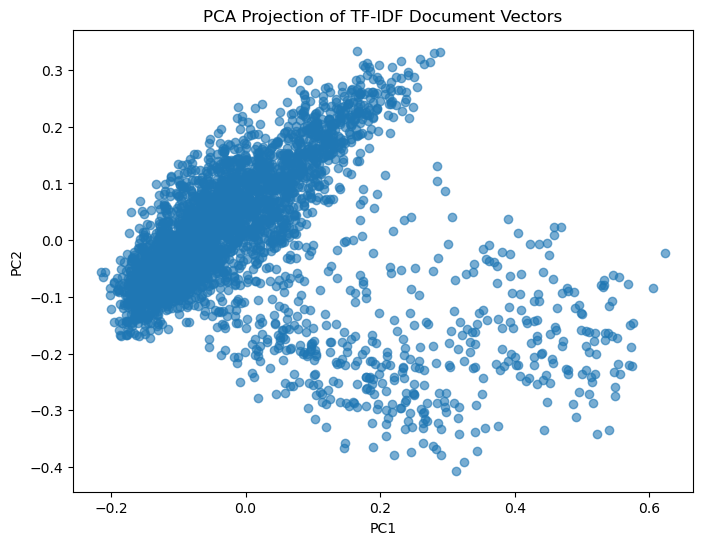

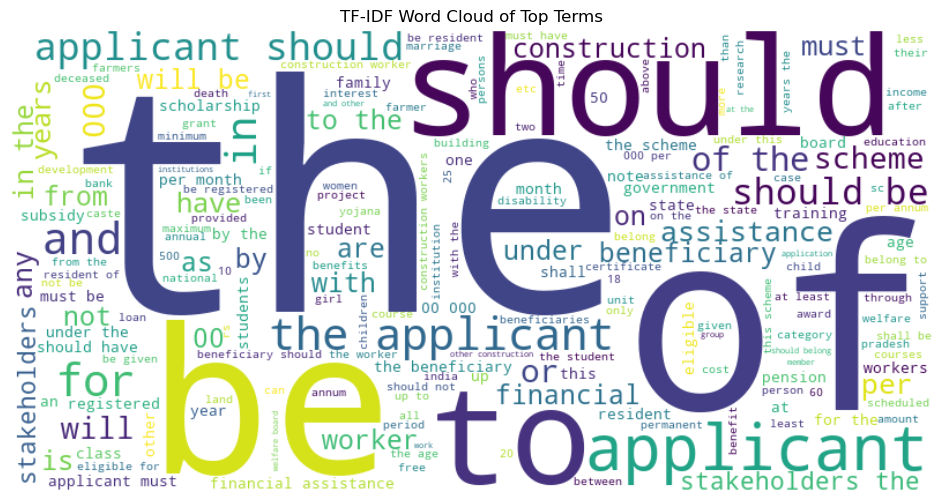

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from wordcloud import WordCloud

# --------------------------
# 1. Sparsity
# --------------------------
sparsity = 100.0 * (tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1]))
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}, Sparsity: {sparsity:.2f}%")

# --------------------------
# 2. Top 20 words in vocabulary
# --------------------------
feature_names = np.array(vectorizer.get_feature_names_out())
# Sum over all documents to get overall importance
tfidf_sum = np.array(tfidf_matrix.sum(axis=0)).flatten()
top_indices = tfidf_sum.argsort()[::-1][:20]
print("Top 20 words/phrases by TF-IDF importance:")
for word, score in zip(feature_names[top_indices], tfidf_sum[top_indices]):
    print(f"{word}: {score:.2f}")

# --------------------------
# 3. PCA projection (2D) of documents
# --------------------------
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], alpha=0.6)
plt.title("PCA Projection of TF-IDF Document Vectors")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# --------------------------
# 4. Optional: Word cloud of top words
# --------------------------
top_words_dict = {feature_names[i]: tfidf_sum[i] for i in range(len(feature_names))}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_dict)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TF-IDF Word Cloud of Top Terms")
plt.show()


In [5]:
# Load model

In [45]:
import textwrap
import joblib
from sklearn.metrics.pairwise import cosine_similarity

MODEL_PATH = "policy_vectorizer.pkl"
MATRIX_PATH = "policy_tfidf_matrix.pkl"

vectorizer = joblib.load(MODEL_PATH)

data = joblib.load(MATRIX_PATH) 


tfidf_matrix = data["matrix"]
df = data["df"]

def answer_query(query, top_k=3):
    query_vec = vectorizer.transform([query.lower()])
    sims = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_idx = sims.argsort()[::-1][:top_k]

    print(f"\n🔎 Query: {query}")
    for idx in top_idx:
        row = df.iloc[idx]
        snippet = textwrap.shorten(row["benefits"], width=250, placeholder="...")
        print(f"\n📌 {row['scheme_name']} ({row['level']}) | Score={sims[idx]:.3f}")
        print(f"eligibility: {row['eligibility']} | tags: {row['tags']}")
        print(f"Summary: {snippet}")

# Example query
answer_query("agriculture scheme", top_k=3)



🔎 Query: agriculture scheme

📌 State Agriculture Scholarship for B.Sc. & M.Sc. Agriculture (State) | Score=0.429
eligibility: A student should fulfill the following criteria to be eligible for this Scholarship: State Agriculture Scholarship will be applicable for all the inhabitants of Nagaland pursuing for B.Sc. or M.Sc. Agriculture. The applicant must be from an Institution which has a valid AISHE/UDISE code. Students who have failed in their last examination (repeaters) are not eligible to apply. Applicants must not be a beneficiary of any other scholarship scheme. | tags: Agriculture, Scholarship, BSc, MSc, Student
Summary: 1. Under the scheme, the eligible students will get the scholarship at the following rates: Sl. No. Programme Name Scholarship Amount 1 B.Sc. Agriculture ₹700/- per month 2 M.Sc. Agriculture ₹900/- per month 2. The State Department of Agriculture...

📌 State Agriculture Thesis Grant for M.Sc. Agriculture (State) | Score=0.323
eligibility: A student should fulfi

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

# Load saved models
vectorizer = joblib.load("policy_vectorizer.pkl")
data = joblib.load("policy_tfidf_matrix.pkl")
tfidf_matrix = data["matrix"]
full_df = data["df"]

# --------------------------
# Query function
# --------------------------
def query_policy(question, top_k=3):
    """
    Returns top_k matching policies for the input question/query.
    """
    # Preprocess the query similarly
    query_text = question.lower()
    
    # Vectorize
    query_vec = vectorizer.transform([query_text])
    
    # Compute cosine similarity
    sims = cosine_similarity(query_vec, tfidf_matrix).flatten()
    
    # Get top k indices
    top_indices = sims.argsort()[::-1][:top_k]
    
    # Return policy info
    results = []
    for idx in top_indices:
        row = full_df.iloc[idx]
        results.append({
            "scheme_name": row["scheme_name"],
            "eligibility": row["eligibility"],
            "similarity": float(sims[idx])
        })
    return results

# --------------------------
# Demo usage
# --------------------------
question = "agriculture scheme?"
top_matches = query_policy(question, top_k=3)

for i, res in enumerate(top_matches, 1):
    print(f"{i}. {res['scheme_name']} (eligibility: {res['eligibility']}, Similarity: {res['similarity']:.2f})")


1. State Agriculture Scholarship for B.Sc. & M.Sc. Agriculture (eligibility: A student should fulfill the following criteria to be eligible for this Scholarship: State Agriculture Scholarship will be applicable for all the inhabitants of Nagaland pursuing for B.Sc. or M.Sc. Agriculture. The applicant must be from an Institution which has a valid AISHE/UDISE code. Students who have failed in their last examination (repeaters) are not eligible to apply. Applicants must not be a beneficiary of any other scholarship scheme., Similarity: 0.43)
2. State Agriculture Thesis Grant for M.Sc. Agriculture (eligibility: A student should fulfill the following criteria to be eligible for this Scholarship: The State Agriculture Thesis Grant will be applicable for all the inhabitants of Nagaland who passed the M.Sc. Agriculture. Applicants must be from an Institution which has a valid AISHE/UDISE code. Applicants must not be a beneficiary of any other scholarship scheme., Similarity: 0.32)
3. Integrate